# High-Resolution land cover mapping using Deep Learning

## Table of Contents
* [Introduction](#Introduction)
* [Export training data](#Export-training-data)
* [Necessary imports](#Necessary-imports)
* [Prepare data](#Prepare-data)
* [Visualize training data](#Visualize-training-data)
* [Load model architecture](#Load-model-architecture)
* [Find an optimal learning rate](#Find-an-optimal-learning-rate)
* [Fit the model](#Fit-the-model)
* [Accuracy Assessment](#Accuracy-Assessment)
* [Visualize results in validation set](#Visualize-results-in-validation-set)
* [Save the model](#Save-the-model)
* [Deployment and inference](#Deployment-and-inference)
* [Conclusion](#Conclusion)

## Introduction

This notebook showcases an approach to perform landcover classification using sparse training data and multispectral support from ArcGIS API for Python. The key points or functionalities discussed here are: 1) `imagery_type` paramter in data preparation which shows the capability to use multispectral imagery (we have used NAIP imagery here which is a 4 band imagery). 2) `ignore_classes` parameter in model definition, which shows the functionality to ignore one/more class/classes from the training data while defining a classification model. 

Below is an example that shows the NAIP imagery on which some training data polygons are marked. Important point to note here is that the training data does not covers whole image (which was a requirement earlier), hence is called sparse training data. Let us see how to deal with this type of data and classify a 4-band NAIP imagery using capabilities of ArcGIS API for Python.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAg8AAAJACAYAAAAKK4UbAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhevP1lW97rmu4Lji/Tu6vW1CFxV9x5XIEHd3fXQAgkhAgxIkSIQIBAiPvwOWfNqlp11OpP0i/2vvp33oxRXat67l4lY64X/+OBR/5yy3Wel3/m6SiyQyUhy24sNG97seU2FVlmXaEdKwvb4YTfshqLLNJXYf72EstpKLC8Jr7XWmxplRE7Wuy3nPqY+fhdpLfcQt2lfCduufVFllOdsNSqAsuuKTBfU7F5m3lPv+c1vzVh6Y0x9+rlvLGhSgv3llp6RZjvxq3yVLV52or4btwiPcVWOlJp5aPVluB7kd6EBTsSFuhMWDb3mVQWtwMFYTuWiFjlQI0FOoot1lNu4c4yy64v5Fm4XnOpeZoTlttcYPsKgrYrnG/JNWHzcA4P9x7oqLC+2UG7tXjRzsyN2blrYzYxN2Atk61WPFBl4Z5SK+Ta7acarW2owRq66ixcW2r5DQlLDPN5b4kVD1eYt6XIsnn+zOqIpTI+mYxlqL/cAl2llsU4HS8PWgbjl9fG/fDc3k7GsT5uR8qjdrQmaPuLA3a8LMKzc19dRXawOGhZfD/QXmqxvjLzdxVbfjvP31lqofYyO8Z45bQWmYfx8PGbTMY3rTbKHBUwZ+VWNsZ4dBdbSm3Mgr1lVjhY7eYupTZi2dxr8WQN509YRkMh7zFv/F3YU2HRjlLLrYlbiNdAC59Xxi2HcdQYZjGmhSMVFuqt5FoFFmgutCDPmc/7+fztbSu2HNZMalXcsjlnEusopSrK/ZZaSU+V5dayxjrKLI8ju5nnYSy8bWVunpIqo5ZUEbPcVtYR95lUHeMZo5bJ+XIZr+PVUTtUGrEjlWHblwjasfIIR8gOJgKWyZpLqS5wn6dzLi/njXSzJlkHadVx28Gcp9UnLI/zHiwK2f6iiO0rjtrOWJDfRDlfmFeuVxa148xdUlWYOQwzx3Er6q+xlMqgu05qXYHlNiYs0lFuRQPVnI/5YG48Wr/tRVbOeuibaLS+0QZr5neVXWVW3V1l/uYS8zGe8f5KxqnIzV1sgLFmTuMjNcwda4d505xvC/m4ThH3EbeM2kI7WhFxc5TEcxwoDm8dPGcGv0nj8/3Fep6Qu/eUSp6Bz/YU+NnXAXe+41UxO5AI2c6I1/YU8X45c1LPWqljPBjXLOYhmfnOYP0EuyrseEUB3wtzbu6BuUuuiVpaTcxS2ctZLZqXiFvTadzjIcbwaHnMUuridoz3D5T67KuQxw6WFFh+S7klVxbZ/jhzWM2+7K2x0uE61nA5ezZi+TXs0/Za83dWWbSvxo5Vsr4aSqxkvA5ZUumeP5XnC/cyzlw3gzkuGq1hnBI8r9/2xj08c8hSygrs81yvW9OHioJ2uChqqayFbPZOKmt/d4HXcrQ3kS0FoxU8c4JxCbMfo1bFHpm9NmAz8wO29vShvXvzwl6+fGKTF6dY2yXWMdVo3SfrrXemzbo5uqZbbeR8l83eGrYrdyds/u4pu3//rC3cnbKL18fszNUhO3Wl1yYud9nJ6102fLHV2ubarW9o0Gpqav63H5vvntj5pSkbvNVpE3eH7NrjC3Zu8aRN3x6y8RvdNnK1wwbn2qxnptk6TjfZwNV2G5nvsO6zrTZ8pcsG+btnnvu/1mWnrvXbg8XTdm5mxJ376f/b/mqHzv/wzhn79OKaffNy3p4/Pm9rD87YqyeX7M3GFdtYPm9PHp23N0/n7d2zG7b68Kw9W52ztYezdm6239oH661msMY6p1vs0eNZO3t61Ab6utwxe+aEnT0zajeun7Jr18btzq0zdo/j+doV21yZ47yztvJghuOcLS2etZWlC7a6fNHWH1+yzdUr9vzJVXu6dtWu3zlr+2I+S64I2pFSP+szjAxlD1Yhmyr9lt8huYoMB8dy2gssPFRqPuTxEeS8F7lxAHxNYg1mNcbBM9Y2GJrorLRs1v2eAo/tinrsKHLHg4zwI19yka2Z4HRKnfZvyPYk8mxvcZ4d5RoZrTHL6YxZZkfcUlqRIzVeO9Lgt+NNyAr+3lOWawe5r0PV/F+FLOyI2Z7yHNtRnMn/XKeez2qQFzUh21Wab3srcm0/nx+q9lpyE3jWiuyp8tnBar7L9Q6U++yzDDZ9KoIjnU2W08gDIuwkFAVGx0qCgHvCCgbKzAdIOeLAA2QjhLMRoochD2kI9AyESw4D4GkthGQkLN5XaX6Eq5/vxhACBYBGUX+VFfRXmIdN7OV7oT5ArDqEgIJ8AIYCxHyEVwDSUDJayf0AAgB8AHJTNAgQjlRZ5UQ9n1Xw3RJ33QMQgYMIiqMlCDeEZhngKPAu7EUYdQEcHSXcAyDdUmIegWR9FAAIMdEhJpRrQQok0DN5Hm8T5GC821pG22zuxqTdY2HOzk9Y1WCjA8J8ALKks8KaeuusshUQrix04BjuATgYmwLAOZ/xSeOeUyp5LoStANAHocpnHLzcSx7fy2ophEAg2ACQAJ9FAZ5UAP9YNYuQic0TGHdB1ER0WFw6R2Kg1sLdFYwT1+I8AZ4/zKHnyYVEBLiHbMDgCPMlMNX9xAYBJsZeQJcBydK1QyzAYDffZQEKmL0QMy3IdAckgCIgEgRMRAQCAFOcxRzgfwlhL+shzBwFIFuhfggCgjUDIpDO2BxjTI9yZAFwQdZPDufLa2Xsufd01pbIRIz3fdzLoUTUPD0AVgMbATCIAFaJPtYb3xcZ2BX2MueMJZtLgj8JIM/m9/mQjx0xj23j8+0Rj+2OszEgGwLh/YXawBAJiORewCOtppB7gEzx3FrbyQ48A4ALZIXzHoEk7IFw7gVw9xQGbWfcZ7tjnA/A2Q/YpjMWAmsRQC/ruoC1K/KwA1BMhsz4eK5CSGURRCETEuzvguz1s5YgkFUj1dY9Wsc6gTBUxO14NGBhnjWZv7MhXyHGVITwIMCeybnz6qKWGK21Qsix1sNBSNE2rpMqMIZIHYQY6FmPIVCSIeNav/v0jMyPB4KkZ92BADtQyjjw2wM8Tz5zc4x73xH2QUZjjuSlOCIWtiOQoqPs170IsGQBLGOSy/7IZfzz2Qv5rKdk1naSiH9TiRNW6RBfERspF9ozGYCw1sthiMPuSJD7AcDrEFysWY3fjljAdkYhYOWFdiAWsYOxqAVaK6yQcUwg0A+XQ+ZCXL9MxF7rGuWE9XEE0pLEfJWcYD3wnsiNiEZsoA4Bm3DXdGsdZUTjJOGr+U2tKrLP8/Mg4dxL1I/SI+JT4EjnMcjP7sKAu9ejrK+UGg7u9ShrR7Kv6kQNgN9vF+cHbeXJXXvzepPjuZ28MGvZnLf7TItNXe62q5CDecDi+p1ztrB4we4/umqrKwu2tnrH1tfu2urjBXv8+JYtL8/bvYcXbf7etF26O26n5nutA4Bee/fCnqw/tfX1DdtY3+R4ak83Nm39ycZP7z39l0PvP3V///Q998p3+d76+jp/b7jv/E/f/1fH5k+vf/zDH23j7aqdf3TKBm922PjtQUcezkJ6JhcGbAxyMz7faadu9tjo5U5rmaq3lrMNEIdGqxirsHYIRP3pBiufrLbyCYjwSK1NnO215UczNtDfaTNr3MdfAP5f4hB5uH9ryj5sXrYPz67YM+77CQThNcTh/bNrtsn/qw9mAfzL9nL9ij3mb5GHVUC/s7/R8sAED2ugHmK+tnrB+vs6rf/0GXfPev3Xx89E6+ejv6/D+nvb3W/OTA3Zmelhu33zDCRjxu4tnLWXEBaRh/nbZywVwi6sOlYRQm6gzDXHkMsAeK2UU5RwSMRxQDujEaWwB5mPoulBIctB9m0L5to+1mYm+0nvx1DSRViPuX3sRT75Lb0JOd0NPiEzvcgHD8rxcaf4IkPKAPNySEIV+4DzZ7bF7Egta70WRSGRbUfqA5bWFuf/gO0qyYc8hCwJIiCykNyGvIBE7CnPdcRiD4ThQFXAthfq/xzbX5lj+8qyLamRe++M29E6iAVE4mBFvh1D0T1aHbTPMiVAEESpaA2ZCDIfwB5FqygeREtEgAq8S4YrnYUhE5CT4ExmE3oBo71xLxqTtHvIA4AhkBYJKDpRaUEe0scm9beIGEhLq3LnFHnIaYg5jVgEIAmwS60CICAOEuzZYmEwrWyEsg8iEUNYFKC9lyJcG0+3Wt1UgwOX3WG/bQt47QAakoS9ADOPc+teYoBsBEEYZbB9up40ZMAnhesI1P1cO4fnzIAspUEADiOQDxSGzNvMbxBafVNddg3We+vheeuY6LEdfq+b0AwEcWVntZW0Vlmgvtg8/D63ReeIAQplDvz2F3ntcJkEM4uKRZQD6MYhNf6ecosOVcIiE2jegDmCOB+wjjBe2W1oYTpYEMEBxrAboc09S8POhYzJupHNvXk1joxD2Xi1I3RZjdLEEYJ89zjguY8FJ0LnZezLJuscKfBDNrIcAABUjKezUAD4+n5WW6EdKYtAoAAFxioLgqRzeRDOBYBfyQAkkDnx8D2RoxLIX7BT2moBYw5ZbCoDlApZDwISALo4YjmQtGzGWABQdQINknmQtUOkJA9SIu04tV5rLe7eqwBMZDHyAmKHAMrDgKqsFMkiBgj+NNaFwELWhH2FfsAejROt+oA0zBKAsCzstM+jEKeU6gQAEXXWrmNFEdse9NmOiIA35sAnB+KWDcCl1yZsH+RhdzwA4EBYWMc7Q347iMYuq4OITy7jLdKRzbovh7h62OA7IS7paP9RWWcgyD5Inh+NQWsgg30SHKu2WrTmTshDDeQ1m/E4EAlbKuOzh2ulQma8rOc8xjAZLUXWDVnbPK2VkOkq1kAJ88IzsSdyWR/p7Evd0z7WZjIaeC7jmAE5loYvS4wI3MFCPi9g/TIW+1jHh0qYV8YrjfHdC5E4zO/TANgUnuUwBOMwz5vKnj3ENdI4V4qIq95jzDKZu2OM+46Qz2n5OexnrYnj7Jtk5iJPlifmY3vUy5gF7Ld5efZV0GP7WHNHuacUnm9PPGz/LTvPtocQgLKGQNTSAOFs5i+VcxytKLTfe722X+MfQ8uJIoi4fiZCMpU94+9k7SFEZZkLSAHorYRwQ1QZi3T22zH2Vg5/S2ZlQBBz28qZh3JHMo9wH0fYpzvCOVwntEUeIE3JrOn9BRHkVch+58l2QvmIrDnsj7qpRhu+0GHnL/fZ/aVr9uLluiMPs9cuWHF3tZ242msXFkds+ck1W1m9Z0vL9+0Rx9LyQ4jCI957bKscT56sAtpr9vKZjhXb2OB7S5fs3M0h6wekl17w/pt39uHjJ/vxDz/Yt99+bX/+uz/bn/74R/v2m+/su+9+sO8/fWM/cPzhxx/tx+/5/7vv7cOnT/bD99/ZH77/3n7gf/f3jz9w/MF9789/+qM7/vSHP9gfee/HH360jx+/4e8/unOsvlqyc49O2pAjD7I8XLQzdyZs4la/nYQ0TN7osYn5Lus612wlsuwij8ogclXDNVY32oQiBpHT3mUssyCwhW1ldnqu126htQto/1oEQudevDVtLwH+108u2guIwebj8/bhhSwN12xj6YKt3J+1pzyPjscPzkEkLtn68jkbPtll3grkXHnY6ker7OnqRRuACPyv7vX2f/9//cuh7/58/FuicWZ6iHNetYcPL1jLiWYrg2iFelEoRsp4lVJXYCFIthdZn9UkeRe2zBZkI9q+H4UtDMYcLgzbV75c9mPIslsLLIriEe1H2WN/pUJwkwD6dGSOtwsZDunIhgTkImNkyT6CchrqQ9EoYd/JmlDuY50HLKM1akdqkI2VAdtdkuOsBRnI6oOVKFuJHDvGfaRwHwdr8i2J16MNQUtuRt7UBx152FPqtd8HMpDvRZbEd/dX5PEZ524I2L7yPEvjN9kQlMNc72hNQJaHIgQobIUbSa3gZPydzEasQsuvHm8APGJovjL/QgYQvl428BGElEzYR9FeghoktOA8gNDPwpLVofhkFeANULFx0wAngXrhIO8PSaMQ+QiidaKJAfp5HFkIsEy5PwCxKNeqmK61gpEKwKvCgVaUgSphEdRPNVkt7DivsQSNhwFCqxNYSKBtaf1bmoWsEDKXp3P9LM6fi5AJQGKSEJ75gGcW15aJXtYAWQXSBb4AtYAhj3PlAX4CtcaTTRbid/vR4JIRztKs/QBLAI3MDxjlMxY5LXGeKWFFYzVOuGrij5YCgmhgx3hOMc+90fwtksX3jzOxyQhjp9FBoo4j2P2QhhzuSfeQWsczACoCkUAf10Kj9XJ+575gnEtHK9FuKy3OfSfzHZGA4xUBFpa0SwnQIABeYLGhcrS5SrQ7Fk9pEMAqsYjIAKC0NeawYMiAFm8m45QLY06GeEnDzQY49FqG4ChBkAvkE90VVsv8FTEX3vZCB+QB2HDxaI1F+Z401zwYcgzimAUoifDI6pQNUKegUSZzHAdIBPYyRXtYB3JVVQDMxVxDlgNp9jmQlUyeVWCbBNikM25JIijVRU5TPgDBOC4yAEDKfC03mwdQTWXu9hWiZcZYx3wuq4PM0ocB0wxIiw8SltUQ5T6LuIe47ee7h0rjgEjcue1yWspg8hHbxlzviQftCL+TFr+/IGAFEL8y1mIKY5LKWpE1J033AjAnQRx/7cmx3wGo2eyPnokWG59st86heqvrrbU4Y5AJ0UwBND2Q3hjjpTnNbokiLCC5rO+MmgRrBC2B+4xDDmOs/QzuVe6B/A5+L9DmkGthV9xnX4XRIrjXnWHAF3KUU1fs3B5pCK0tK0K5c00cZqxlYcthb8oFobE7wPrIZq6+8CFc2HdyYe1HUxfJkJvjy0CuA90DPL/WwL4E5Er7jP89nNsHWOuzfPbObshqcl2IeQdYWFdpjXIJQZQgBQdKGCvmLjpQa4X9DRBH5oh99SWEfxdkR/N6BCKZxPjncu9JEMBjPFMRJComC4hIP/eRyz7RepaFIQltTsRRRNAHkRZp8AF0Ab4f5G9ZxWQB1XePV0BU2IcpkCE/nx9NxOwQJGxbIN+5LmXFkcusfLzWes622bXrw3bl1il78vSRvX3zwpbXFuzCrRE7tzBsl9HU7yxfhlzcs3sPFt1x/+FDXjkePrClx8u2ublhzzZlFVjlWLFnT5dsfe2Gzc4P2vStQbv9aMGuLtyyxxur9t0Pb+3ps2X7p3/8k/3zP/+9Pd3Y4PfP7fn9h/Zi8Z69e/fa3nMPr15t2l3O/+rlhn1698y+ef/Svv/6rX3/zXv79hOvX7+zf/77H+wf//Sd/fjte/uO4w2/vXrzln396R2fv7eH6zdtZnHURm522uSdYbu+cslmeZ7x6702Nt/Ja7edmO+2/ott1jTZZInOZvOyZ2uGGi3UUGZFPWjj483s0wZkQZ352HMN4402f2vUZqa3XDF/CYj/q4fO+/75dXuxNmev1i/bcwjAs5Xz9unFdXv7dIs8yEXxjOd59+ymbSzP2cu1y+67a8vn7fy1Yes/22yzC322+eSSDQ10/yJER+fo62nfcl88vWm3Fqft3J0hZ7XpnGmyvvMd1sA4Fg+WI9NFHIKW2hiyI1VeO1SRaxnNIfZOgj2Sj/IqMoEyBlZ6IQiZEI3j4G82RPoYMv0ofx+t8lhKg34POUBGl5yoRS74+G4BaznPDoLB+0tEDrJtVyLTvopn2BH2iVwLacijY+zPvaW5tqs4x/ZU5POaZ4dq8yERkG+U2OxuCHltyL4IZNvn3hwU5VyepRsCUWLJkIvszjjnQaEozLT9ZV7LhxClorSKkHzmB/yPw/xTEDZ5gFseAiC7LuFMzjmASRwhkY4Q34fQSi6JWqSl3BJoA4kTVeZDO8uV2ZMFlYHmki7XBw+Vy6aXBSOrHEIA+OYgALywmVI05orxeisdqrF8zp8LKOSiIeUCnB4AIwKYFJ+oscQowgAikQ+4ZtYjnGBdRQjvaj4rO1WDdiygCCJ40DrRMORuaTjVgBbRBPiieXLObN6TeSgfoE9FcB+B6ckktDOW7TTKIJp1Ak0xhvD2IVyd/xlgzEGLVFxGwUAVBKrOwmjke4NeSwX4ggBBHLArBHRlzs6sCTutMwuGWHaqziJ9xXZMJAyhLFNTNsRiX8Jjvw9l2C4Wy2HIRBokSb7lFLSsIzJ1IQj9aNphhKG3tRThLItM3GmI4UEAf7DCjlYy0VwjCuuMdAG6XLOcOaiYqHVMVmRDQlIapOYyE3Kg2AiZZXMAWV83ZKcbcoemLHeJ/NgSuAEYcBThq/EUUGns5C4JAuyKRclCsIu95/N5DofInp97zJdbpKvUIu1laIHFaJkBACaMQK+0guFqxrHCCmVRAcQzWAOZ0lpZA+GeLfJypAYCwPn2yErDBslh7rMA+31ohIqDSKopdACzI+KDXUNu+FzxISIJYZ47GXKTUoMWLrM245UDsG7359uv8/Ocuf8IQChCozmUpi7LkNZbKfdWcqIesIS0JYogimXOVXGUa3i7y9gwxbaHdXIQcFS8SlaziEsU4sEcxCATkIqjFTHbg7Ys8prBd7yM6W/ycywDYC0dqrMmBGxnX6MNjXVY72irZXB+kbIE1/YiNGRR8EO6spujgH++7Qxl8/zlrBXWPOQuxvoSKZOFRIRahOOrgMe+5Pl+h6b/u/x82w5B2sXYuRgQWSq4/xSIUiYEIV2kCRIqE3+yXBVlCKjOsp/GSa6OEhcXstNZQiB27FvFLcgSIwvGQchCVnOZIxCpNbIuyjUYYL2yxhBKevUzHgJr/S0LYRRBGR3iN9xvCqAdh/wEIUa57HmR6pKReksqidmvciFZHi8kjrlgHo6UMgaQnzzkSByildnCWmHuaybakBNtVjfdaQ1nWtibyCDJCPbJ9qjP9sc9TkPzM2ce9meYfZsYqLY4hF+WTD2TXDBytx1hTSWXeljjigtinHkvxSkKUcakiN+UWN85yMO1ATs512MPVxbs/btXtvLkgZ2aG7We0x02caUHEDphC/dv2uzlK3b+6jVA/SH/P7Brd+7Yg+Ul+/DpvX0CsJ9tPrG1tUcQgke2unLV5m4O2tXbk7bxdAVS8hJQf2NvXz+1Bw8W7Du+/+nDa5uePW8Xz56zO9ev2+Lioi2vrNjrl8/sW8B/ff0Jfz+3NxCId/zumw+v7NuPr+2bj28cOfi7H75xx4/ffnTff/Zs0y5cvmZff3xnL56v29yNKRuf77HhW102eXfUbqxetrN3xm2C905e77GJaxCIq512BjJxdn7A2iaarAJFowJcGJrtte7pdiuUrIDYlrOnCpEXeayrtplGu3pn1E6d7PtFQPnfHlvk4aaLa3i9cdXFObx9Nm/vn92wF0+u2BrvP3l0gc/m7ZvXtyEN1+w5ROPJo7N2+9akTc522wjk4c7DcXu1cc0G+jp+kfuUVUL3tglpefn0hj1ljpe5l0dLs7YKwdlY5//HFyEvQ4xdi3VfarbSMZSo1ijKRi6y18O6i6D4ZiCPwbVhYUqF5QLSuW0iuqxP8CkVUi+ZLOU3G4UqFVz1MCel0w2WzD5MZz5SURb2sTelJMnSeKDMY9tigHw5BLsLPG6DMENa5KY47NwO7OWqkO0uzbf9FX6Ungz7m+xUiEMupBxlDeWiabLbqifrLA3icLjKZ0kiLtV+zptluwpzkI35jqjsLcm2zxSwkQYLV3xCIUBVCIj6AQfFDni5YZltJXzkeshFY8xEQwzBaOIIDFkaIvJBImgkrLIBtfxWHhKhKzNvMsCTjiadCQMTmMvvrqC6CNfy8BsdPgA+gCbrAWgV6BeSpt1WaEUj1RZCiEb6yqxwqMIFS5ajtckcLwFwAOF3CI1JQVW6toJOkri3QzCxVIA0H0IjbT4DbSeLQZZbJYPPFVCp93KZkACgGkfIFQ5VcY98tz5iXp5BIFM73WgVJ+sByHJLK47ZQYSotDr5qfPRPnMqQwCDiAtgx3mTIAzBTsUdoAnynRBgLYtIJiApopHExBVDuOIjjGUfbJNnFEE4UMTYAPQpNVErGoUQnKpF4FYi/Ap5PpgeIBKShjqIcOZ8SYq/4D4U31ENEYvxvgLBDrCIRFp0Xmn+Go8cCe/ucgC9ygn3+HC5hSEgCvIT+Muao7gGadZFAJeEs4vvgFmmQowE9F5AP8C8BeTugNQcBWh8gHWB4logD1saP0SOeYhBDooRMPpuAeQhlzF3xBTyoDlQsKViR5IhDyI3mc1sGEimLE65zKlITXpDKWNV5EBMrpEs1oSCSjO4pqdTFo5SO4SGmgoYJFfJHcM5AcRktMwjaK/y2acAerEO1k9zhTObK6BPQYMhrhlnLe0G/PfGIVqse82BfJQCV60Jaev7IQ86f1ZjiR2GQO0BrH2Qlb0FgG6BTPoQOZ4/PAB5Yt0eZX3Hh8ptcLrNzp7rtfFTndY12GwtkIhoPcAHeYiwxktHFLsDwYJkhrrjFoZ4JEarXWDUIe5dJFRrXxa+XAjPkbIge6CSe4JMcshiI/eC7nlfcZDN7HXxC9vRpnP4TFYx3ZssIHJH7UXT/nVOnu2JhxhztHf2iYIpd0URBmE/59QYK6iLdcsY7YE8yPKyvwiSwNjsiiFs+L4Ek9aytPntEOk8FIgAMiFbbhO+ewTyIovbEYSP3FG/zst0liMPcxEZrIWUsYe4P19HBeOMAByrtfKJRuc+Sue+EoMQ+f5qyGCEeQ+zj1j//CYH+aJ724PikgQRDXaUs/64Bs8sS2MW11JAqVffb6t0Voz9iXwXjC3LXi5kSbFaeyM5bp8pFmIPz7477OXVyxrwOHdXOfd46gKaOSRh+ckdQP65bT57DPDM2czNfrt8b8Qu3DnJ/wt259Ed65uastzyFkstbLSMRJPllLaat6bHfLW9ll/ZbtklDVba2mP3H1y1U7P99uTJIsD/HNLwwl68eWu3ljZs6PSs3b23aC9ebNra6optrq3as401wH/dXvHem5eb9uHda3upv1/x21fP7AP39fX7l/bNe8jDh7f24zef7A/ffrLvP32AULy3rz+8s9evXto65/qa337keLR+y6bujljPDZ5vccLubdy0aYjQ9M0Bm5zvtdnrfXblBgTnxpDNXu0FcFts6Ey7NfZWWPtovfVONFsdc1OkeVMMVWWBBVgzvqYImn2T3b0/6cD0lyQQPwO0QH9j6TyE4bqzQqwD0i/WAO0nl5yLwv3tXi/b5uM5e7M5z2+u2PX5k1bVVWex1jKbvztum6uX7PSpwV+UPLxYu+IIy+baVXv0YNZu35y0B3fOQGrmnEvjGZ+tr1yxlZVZK+qEuLZLtgXtGGDuY+9HhxJWP9vgyIKnDWUScM9sClkJCm0jpKMExVBuZ8UaSalLR54rpkjuuN3xPBSsmG0Poywh82WtTW+MoKT4nGshMlZiOR1xF5uwi+/uLfJALPz2ZTjXfpWfaV+FciAMWbYtkoXc8aD0gSeTjQ5b6yaZ79lm8/ahiEB4klDej1YFUGBDtrfYa1+E0mwP5CG1IWyf7YXJH0ko4FEmYEANTTXaXYFgg23qfwSRfIypbMxjbL4UmH0+Qk4xBnE0EOe+UABiQ6EVArqFaE5+blwEIVnfBcBkdZBVI9BRYkUAdRjCIL+4BH5aBQKSaxQCYMoQKALQFA+hQMIMARjgEuH/PK6p+IVCxV8woHvRWHaHA3aAe5KfNq1BhABy40gAgINmoShYEYI8WRMQNEGEXeJEjcX6YXrcQzr3IPNorF/nVLQ+QI6QTECMCiBS+XwnC9DJEROEIOgZcyXcAccgQKTzpiLIcrk3mf1FRsQWlcEiUA8ADhG0I5lTZT4O9iogTYFfLASEm1wJAkYfjFJWA5fxgjbk71IwJdfme4cACWnBCpYR6CtGIwlBn+wCdZSNUmEhtFNp315F7kMQ5EbZz0R7WZghns/HPfs5X2QAoc89ilzIBSKfvaLQdU2RqDgEIsz9hjshNiV5ViS3AiSlDA2+rB+i0VXhyJLM4MV9NQhjAK6EBQbQyCoQ7y+BPMYsrSbgMk8iaNoierK0yLIkk6fIiIfvyOWyPxGwHASRzNQir1n1RU7zV4aFy5RhbGQ1kPVAsR+BnmrGRj4/bUS5VmKmrAuZ4w9BYGSuPlSqWAIRqGILtjKHdSWARMC5c0SCPDy3gpSOlovQQVJKwo6UHSsNcu8JADJuuwFNBVXmQGTkUpCvPo97VwZEBvevQE8dcoEoviSXsS1hvfSeaLYzaGtTsz02eLLN2vrqnbBNa4g6LT2XOZKFLo+9FkM4i3QXjdRAakocSU8DPEX+FBSlGANpIEcdIEYRGMoKQUAw58qUSGc8RTiPVEKYITxav7nsXblotGePMA5ufAr9jnD6AN4A+1ouEAXLHmDviVDtZyy2+fNdfEJmg9xuRS5743hVke0u5B6YH62RcG+Zu9esJuaqaysQNw8SK/fOXllCIl77yuthnCDYnEcZRIeLw+zxKIAfdgGOijAX2ZOVoKi3yvLZT4prKoLQufiktjjzBBGvgOizxjJF5hBa26N5dhAilcqz7wX8s1gT6Tx7Gvefy3r08mxRzhmFaCVBYhSDoX0juSU3qq6rezkEwd6DvFMm2XFkk8jDIdZgJWRm4nw7YNpvj57chjw8s1ev1m157YZdvD1kl+6dsCuLs7a4dM8eLD2wxeXHdv76feseP2f3ljft/sozu7/63B6svbAHvN5f2YSEbEAW1uzR8hX7AOD/8M1Hjg/OIvDqNQD/dB1C8cK+/fTeEYFvP/50fHpr33F8/eG1+/vT+1f28e3LLTcGROI55OItZOKHr99DHr7eOu/XOvfW8T1/63w6ZNn4+tMre/1+w569XbMXbzfs+asVm7k9YTO3Bu0ix8OHW1kFD+5M2d3bJ+36zXFIQYeNzEKAR+qte6zempEBNcjn5hN1KE7s0zqIOFpt7XiNnbnWb6cmex2g/iWw/c8cPwP00+WLLihSGRUfXzEvTyERz+btxZM5W+W+Vx/OQhou2trDc7a+dAFScZnXczY3N2ol7P0sZPHQbBffv2Qz00O/GMHRvf3w4ZF98+a2veDeFh9M2drKRXv99Ka9fbbAcZv7XbTv3j+07z48gCSetpGZTmuZrreWc/XWc7HZ+i82WcEIe6k3YSHw5niVsqh8DjNqUVpLUZalaB9HbqRBHjKQD7KyHyxFeXFKF7KyyOv2RQrYd6hS5CAdYM/hnMIaWUKrkCEh+zKYbb/zZNmvczPtb7Mz7PM8yIM/2yn5znUKZsRQXH3gjtwscRQcLziRg/zOAcsyRFpkxeReDpZ4ICUoHpU++0ygdaQk5li70uTk//egwWQi5NLLFDsgjSJsRxEuxxFI0gZzuahMw0GEh+IK8hFaRQM1VsLiKhhBMDAYIQAzmY0vTTOMRhsCiEOAbkLuAZkaASIfhCKXgfHAqgQeAiBpC+UnYY0AnSMd3Li0b2nz0jiUpultRRNDEEiLkjak4MQsfqeAQIGjE+h8P60q6IREikgC95yPMJEFJAMNLBOgSUfwpin+QAwPISR3hf4O95RAdPhbPmE0wjSEjQKJ8hkXmf893FeBYjjGalw8gthj0WCpIwfpAIUmrmS8yllyYhCicD/Py9+KqJW/S+bwHI5ctNZjTG6Q6x0sCjqykI0W61J+ICP6f2fM6+5fWrHGR4FLaYDnQUDhUJGfMSpjPGWO3QIyl9LJvaeg3YcAtRBjEuH80u6Vpijz77Fyv7MOBPtK3L2KOIgQiTgpnTZNi4SFHGHeivuqrBjQKUEwF6J5KPhR59JYyt+eDDApwFCBsjHGPtCh3wctm3VRwBrIYJyPASAKWg3KZC9Bzr0fB6wPo7EGARud2wtYKD7jeAnzwvMqxTK/RRk5W5Ylj8zQfEdWhAPFSh8UiCcciCuyXpYPZTNsA8T2sjaOMrcifyHWVRpALH+7gnxzeE+EV/50xVLI+qDYCZn3M1gDCszbz1wIfIOtpTwDY8uaCLZB9NByQ5A1xTEI+MT6RQZDCIBiCFxJU6V1DTU74tA30WK94y0W5r5jrHelEB6E4OwVMQFwswFfpZbKxF7E2ggxdiKdAdaQCI5IzcEiBeDKogIQa5/yTAe5r32AexJAmq89xrMrbkZ7QJYbxcAklQusw26P6m+RXg/j4FKxmWe5gbSujrJ39saV8gjJhhjJwphel+DaCopSrAwALTLCnEmoBSCWOZAHZRC58UPgKT5KQbZ6pt/n57OGiq3qRIPFGacUfr/b73MBx/u4jmIOlOUgl0EmxCYL2RJkzyXYS8ryUpqp5kRkIJt5SkE2HCj12/ZYvu0t8fKcIhZh5rXQkYfDLirdb0fZo4kT1ewPZABrc3ss11kgcxu3Al/jEN8jCS+yRtYvhCHPeigRsp3KamHM6k7V24nzHTYJEN5bnreXrwB+CMTmsyV7uDpv91bm7eHKXVtefWTjs9N2+fYt23zxzi5dv2f/+I//bP/03/+H/fd/+h/2T/9y/LP9/d//2b75+oU9QjMWgIs4yP2wsHjPHT98887+8N1HCMCHn453trq2YncfPLCNjSe29OgBWuuSrT9ZdVaH929euriKhcX7dvnGLWdVWF1dgeS8hFBs2rs3r+zDyxf2cnXVkYaHS8v2ZPUx72/Yu/dP7PXbFXvz9ok9f7liF+5N2vXFcZu91G/nL47a7RvT9vjejC3dnbY7C1PWBQnun2y1fshiBwpFy2CVtfN3E4fP7begJQCauolKG7jQZFdvD9vpqYFfDJx/Jg/PV9Hc7591boqPrxfsNa/vNpVpcc4e3j1lj7jfJ4/O2dK9M869sbGsIMrTNntu0Iqay5AlfqsDjxQ3MXv6lyUPa0tX7f3Lm7a5dtlWV87Zy00RnLuONOj49t2Sff9h2X789Ni+eXvfNp5ctcWVs7a4Pmurm5dZF7PWfLrWxTcFwcQt8uBFBiG3UK6SlPqJ7JP8k+IpXDmu7EQ+T4c8ZLJvDoGvxyEV6XyehKIthVHBk1I+FNsnGX+4xGe/92Y514RSlncG8518VdB6+USdczlmtyPDRRwaQrajMMOS6kJ2oCzf9pXm2+EqZDXzfbgqYIcqApYEuThS5WMfQx62wISTsbEEUkmVCATAQ/UGtnLG0W4Q1sfRCNIABAd6CB9FxitzIgMWGkYbLB+rc8FzijJVhL1IgAIT5ZoIIPQDgE5QQMaDFQzBdPqqHbCJOHgQBg7cEBjSpkvH6xBUaNp8ruDCDDQNpS8GJKgZkKIhhBz3KGIiU7hiGFSvQEJOZnkfAK20UQViJolcIFxlxs/mfpKldchci9DIRIjJoiABKC1K18htgtDwfPp9XhMTw6QKrCMwb2l1ztwOqMtdUzpeuyVUuV4FLDwIscho5Lto4AkWhbR7HX6xO8iQolizWmI8F4DFAjhSxoSUB1zaTQbsMQqQi7T4+F6I30mwaVFIOCpdTmRK2SdRrqmgGgVgehC6Id5Lh3SIaAmgRbCKhsuseKTMEox12TCbHiIgrU85+3KhKKA1KNCDdZYOVwLyUeZ0SxCLFCjy3hE/ACVXQI02qFoPcjMl+itNKYsyfyswUfERPsBVc6xUWy/jlyZrFNpnEqCSBPBlMofS8LMA58OAiFxLcmcIXAsgJ0r/TQM40ioBZeYzAqEIAsgCJpnqBQIiCnKRyLwuYBPhVX0IBU8eh8TIT7895oM8ADTMm0heOc9Ww7pUSq5M9CJZW6nEpc6Uf1TBnKxrZXNkQGQyOIeCChWIpFRcP+8rIymX34qoimjk850M7v2YAlx5phBrt6Wv1spbK62qU1patbUONdjY6U6rP1FrFZBMaWt74z6X2aEA1mOsO1k3DnNOEdG4NI0OxrETgsXcHEcwiHDsCnmd5UDWAtXiUIDwdsZ9V2HAkR03DjxHCvtXGQQHS0R8gm6ckvmutG0F0qZxaA78bZAT5mkb55VlQjUkjkCcUplj7SWRsJQqEQyIGkCtGBI9s8Y+vYaxqCl2xEqWin1FHn4LgWQu9zOnv/PmO1kiS1VBWyXzn7C9EX2XPcQ9SknJlYuJa+YoYLehxMLsOx8kUQG86fUIPZQKWREUn6HU0r08564YxIO9cqw2gnbE+ECKnZuLtbo7gpBjXLUGpdhEALokiLPiLxSPo/spAAB9fF+ZVDlcQ+vsOON2sICxYW3WTdbZFEA6Ptdl1+7N2tNnAO3rF5CHVVt6cttuLV+ym/ev2sPH92zs3JidvT5nS2vP7PzVW/anP/89xz9y/IM7/o7jz//wD/bHv/uDvQG0Z+8M2731eXv28rFdXbhiE+dmbP72bcjAc0ce/vzDN/bnP35nP373wZYeL9n8nTv2eOWxrSibg/9FHl693ISIvLePH9/bwoNHNjxzycVWLCwuco33dpvX1bVVAOypPbiFhv7ymfWeOGWLN67b06eLtvj4kl27DzFYnbOVzbt29cG0PXw0ZSdPd1l1e631j3bawvzET+Rh0rndWgdrbRRw6Rmusrahaohwg7UiRxJSBFEQyruLrGoMLfl0hY1ea7fFh1MOVH9J18CrjXlnXVAsg9wRGxAFZV2sPzoLYZi25cXTpnoMy4tnXPDkk6XztvrgtF24OGSl7aw/ZEDnZL1trlz4xcnD0uIFe/2MeYXQvHx6zV6s64B4btywN5u37P0LEYl7EIeH9v17EYlH9vW7Rfvmw337u+/WIHiPbOx8pyVQMsPsfcVBeTqV8cR+SeS7faX4MlmZU1nLKcrOqglCFMBDFEsXByEFWcSiKe6sgzqOooymoSwcAegPlQbY57n2uS/Hdhf6HPlOY0zi4KeU25KJGneuQxCBlMaQHavx2e7iPDuolM14um2LpTkyofiGg+X5ti3Oa5XH9pfIEphvnyktTFHt+QgtRXAeQuPUIQtECqCrNDkFpukhBOISbH6EsrQ4v0ys/O0XIUDDViGn8uFqZ5EQkMtcKABS/IG0HhU5CqGpK61FgSBZEAMFSypIMNxb7gpNKS7CD3Fwvh7A/0hJwKWRyrxSPq5o/wqrnKzl9xGASpp4wo5zb5loGdIK/WjASnWUdSRbbga0TBckxaDJnKvofBWcERFKQYhJM5YgCnUpiwCBxiGSIfLgc7EYW7ULdB7lkct0mg5oqf6BrCMehJwfsFY2iepPiCAEEW5eCIKIlYpQ5UA49JkIQDqLIF9pNy1ojDyXtKusVvnAAPqRSkcEor0VLupcKZbhAYQt5EbMM9SXsFJISalL62GxQdQyeU6BpuIedO8iD6rJEO0vtUJlqQCe1cP1vK8gOO6JBZeueBZn/YhbIdcLAiY/B58KoA4j5KNcX4GTcokcKojYlx4/QjrsUu6ineUASNz50uXq8jvygOBnbI+j7eYDRMmA1iEEv9wT3k7uq0/ukiIHcpp7BR7KiuDSSPlfQj7fAYBcJmGnBXvcPP3EviEXSm0V8CjjQPUc5FeXhi23iTT1dABI2rkybtIZ+yBz2jLdZGMXO61koIb547lZm1E00QjPlwm4yL8vwBVwahxVUEvkQS4VEeRDPOMxyPPeAgEy14MUyQSvLAxZAI4C7FHGtn+kwdqHaqwcIl2C5tzQV2fdI81WDdGKMgd+1vy+UshDEWy+Yis9cT/ar9wPJSN1rl6I9pssX9pj2ZDQbNbGl75cyA17EcATeVX9icOQgp1cf09RBG0CgdKQcOmMIgOHZN6HSCrIMZfv74pBpKQQMLeytkW7qyB5JTy36kxIuy909yFri8A6lX2hwnBBSHgaYyiCdJy5SquGpNVA8EpVkCnXdoS5PqC+J+rh1edSYr8IypoRA6gRakXMcYzXWgg9e6MEAhXtqQHI68zHXi3pr7PqkUaLQRaSmfuDkI9cCF2Q8coDoETiRO72J5RV4ndr4jBkPw+C5WE/ya0qIqu4qgOMxWHIjIunGK+HvJczhqy3WkgC4yy3iNxs/tYKO1wQdtlicotp7x8o8LsYp9lrozZ2oc0uLJyytaeP7PXr57ayvmhzaOnjN3qtZbLNLt2+aDceXLaLkIDJi9fsxNmLtvHyla0+e2nLTzft0fqGO5afPuW9NYD6lo3Od9qJW/126/EV657us8EzJwDa+zZ/6xZkZMlW15/aCr9d4Xer60/s0eqKC8Z8tHTfrt9dtOsQjasLC3Z/ZQWN9alduXPfOk6eh7hctjNX5u3e6rqNzpyzM5ev2q0HD+0C7128Om/R2lY7N3Xabqrw3dURGznXbjO3R23xyTW7en/Kbt+ZsPbeevOXFVl1R63NXhyw27cn7Mbtcbt4edCqeyttlL0zdLLBOoZrrXuswRU/ax6qtUq01SLkY7S9ALJWbDVo0Kfn+34x94XIw+BAF6ThiiMFim14+vj8Vmrm8gWO8/aE91cfnLU1yMM6pGKNv1U4amPprF25PGLVEPgwWDJ1pdueQR7O/oKWEaVsXpg9Ye9e3LJ3z29BIq7bJve68VMRqZeQiFdPb0Agbtun1/ftu3eP7AcIxA8fluzHj0v2p29W7PuPy4xvj8XBkPiJKiueqLZCFL4clMI9KBhB5HvZiTpkjRRMlC1lXynQHMUv0LOFacKVTHBERaiEm5nI9d2F+ba/zGf7S71OzmwP59tXwTzbx3lUHyKvHdk+UGplKL5SWveXemxnYY4dgBwcrfbaETDpQDX7ujTHDlfK+pCDrMlE3ubZl5Es216QYXuKc2xXIsc+kxDURWXSzgJcjrMZFVikQLhdbFrdpDIqFEeQy01GEIIlgFflWB3AiWbWJU2u3AoA/gaY6qlrbJAZGNVAhXMdyJrhA4AiAKLqN8iEnsUAJSHklBWhSonKiFCsRQSQltD090E0AJw4D6msDVWtVPBkBUypfKTWYgBjOgAhsFLtAMVjZNaV8n1Vnyu0ipPcm6waIjCAmqo7yuUh8iDTsPxFyk6QxqTsAt1XgO8K0EU8ZEEI8l6Q70YB6IrxOvMjnFXMQ8GRHkCwSEFekCUFvQWZTBGlIBq0sg3k/pBLRO4WEauMpqiVjEqgiViUuPQ8ZXcUINRk6cjinmWiFwhLyxNgZkPeQoo/YLwjcnegsWmhKQ4hAjmQmyeZ7+1VMZGo11l3yvtrLAZwSWDuCnksDaGs4lil/bVW1I325Sw7mmOAG21TPn7V9HAuHN53cROQL2l+wRZZLqp4LoAmDoh5ZeZlYRXHXVaES98DWDTvCeY/znPp/HsigGrQZ8nREPMGIDs3TrGbE5dxgMZyFHIqv7riDhSvsA0AUqEmRQ/rmZ1mytwqPkD3qmqBKp6l+IhjfF+VEg+WqDAL6wtNWea9ND7ztZebFwDaIrxbY6rA0o6TjVbDGGhNFwDusa5Ki8nn3lJuRwFDjaOARjUfRD6OQmpVH0BuBaWXfun3Aox++50KETFuuYB1UlnUtgOYAvw6gLEKsCplrCpYz43MQy1A6eP3qRVRS4MgJbNO9yS8rtDV/oSfew8CjspgiFjhiWq3RlVcTPEhKtYl95Rqquwp8DqLkbcDrZn3lfIrcNd9bgt73JipUJgsE4cgQap3oLiYIyJTkDIVGnPkkkOuBgW5KrvmINqNAmQPA/b7+W4ypEn7QvsnqTpsGS0QaNajrAwKiBQRyeE7u0JoMWgzCmjcG4vYvggECFKRoeBSxk8ujWArZCcRtx0+r5uLmplGq59ugDA0Wqit2pGHwo5KS/RAqpijdOZQga0qcuVigSABcsek1rNW+Oxzfx5kJc+OsudFOEWiYoBbkHs4WhxxBOYYSoYsEpWnalFOypw8k2tI31WWkaxHaZUoR5CHgxwp5fxftUV2Q6yJUxcHbQKSefH2lCMPCppc2rhjkzcHrOdyq9MCJ+am7MbiTRsCPKq6h2z83JxdunXHZq7dsJMXL9no7DkbnjlrIxxTc2ft3qMZO3d32CYXhuzKo1mrGW212qEeiMclax4+aU3D41YzMGFV/ePWd2YOUnLX5m7fsaEz56xpYNgSHQNW2NJtibZ+q+B6TSMnre3EtNX1j1pV7zD3MGyVPVtHdf+YdZ6cAdguWGnnoFX2jlp116D1TA84edx/ptkmrw7a7ZUrNnfnpJ2bG7aSshKrrq+y8eluO399yKbnB2z6xoCdusQ1kQM90y3WP9libRCGdghEz3iTdUD4Euz1PGRnPnPhZ01FUQyaT9XZ4oOTdvb08H8ZpEUeVIRKloQVSIGsDq/Wt1wYzx5ftNfrl21z6YKtLp61p0vn7IWqQj4454IrX65dsCuXhqysrcwC4Nnk5W6+P2czvzB5mDs/Yd+8XbRv3iza2+c37c0zWRxu2IeXt+1bWRjePeD1IcTh4U+k4bF9//6Rc2F8y/HpzV07db7fwsj12HA5xBlsUUEpcFHp85ER8Ad5f7QWpQ4lIht5L3fjcZQAuZhlccviNcx3nDLeoBiyfNsZzbFDVR6UCXAEmbK/2O/cFQdK/JZUG7CcTmQrmJqKgpwKLu0tgVxEsp1ic7whwhGz30dTbXdJLp+z96t9tj2eBSnx2MHygG1PpNluiMb+Sq99JsIg14AsBdLaXZAgAkpljgWUziXAhQT68qHnoyXrVamIipRW0IXcCWXDVTY018HmY7Nc7LDiliLLR1MIQAjCSkFD+0gARqVKxURYqg5AMa86b2K0yson6xxBcKlffWWuep/SNksGOdDoSsZrnFtE7+UyKHEEtAoSKUXtCBqYKk1GB6qsEHKhEsEufoBDgZrZaFB+BloZIiIKKjQjy4TKLCdO8B7XTUe4SEtXFLksHyVKyQQYfYCYwLGIDaMCNgr8U62LAgiMyI2nLWZV05AahJYqhClNUb5XWS7khvA2x2xHNBdhJ5+zQHor8FKWi0hnAmKQME8XQq3Qb+mMdQYLRYGY8e5yi7IBBMAKElNgqMC5or/CyrlGrBPy0VXn3CEiUVHutZR7DiE00xiTIGCm2gz5CFBl1MhKo1oHApQsmeh1DzxT6VA9hKQSAYpGzv2WDJVbMYdcUQosc2WJ0Xp1yDWkgDsVBsqvV0lunnus2mVsRLheQSfPxD0rLfNAYdi8AIdM5ApePfZTgF4S1/a2AtwAYS5rSTVGBBoHAWNlAAjAXQU2Dg/f8cmszQaTtUjxOYchD6qyKFP+vqKwc7Ho+bx8R6ChssaZDSKjKmCVsL0FfBetNFZbYjkIO8UqfOEFwHlPZbFzG8rsMPcmi5I0+i9DqqEQcn+rAFdKTaFt43n/JifVDrOxVW/iUEmUv/mNSGl9xDqm661nrNGqWTv1aM51kK8I9yOrnrSIFEhCGuta7kAFMMqPn93C+LREEBgeCyF8fbJaAbqqRidLQVQxQZxDRElxJSpNLVeHK8cNSdgVhxRANFysCyAq64Rzv/Ac++IB+8Kn9MQCp7moCqWCoOUGStZc8v+X3mz+jtoehMKeIsgee1npopmNpXyumhKKoWE9jDaYitfImpXP3OseFLi5r0BVOUNujBVkKuKS16HYlDiyoNo8tQnb7vXa73LybW8oZEcKYrY7GmGdVLCXqu0Y5HOHNx8FxceY+OwIZCox1IAiUsV9liMclRGiuQjYMZlbUSqSG3wWGSpz0ee5KAKqGbINoiqSU8peDPeIaLMnIekiWYrPkLVrmy+ftVjKvoVMMCZyj6oKpweCXNBfbf7mUhuf6bHTl3vsyuKMPXm+bO/evbC1Zw/t7OK4dV5sthPXhuz6/Wu2cH/Rzl+7ZZcXAI33H+31m/f26s07e/X2nb1889Zevt46nr3YsKWli3bt/piN3uDcaPrFvXXWemLYHq+v29Lamjse/fS69GTd/f1wddXuP35sCw/u26379yEri7agtFDVlFhatuUnT2z16VNb2fjpeLrB8dRWNzdt9RkHr+svXnC8hARt2sLqDZuaH7aBc602OT9kd1ev2Z3lOXu4fNFunRqxxxfO2OrCWbvJ/c3cGrKJG/02Md9tg7M9NjLXbz2qWTIGaeCo0f2PNFvziXrLRgPOZW7iKFSl/cXWiAycWxy2R0sz/2X3hSMPfZ229ugiBOICGvx1NPxrzk3xclUVJ2/YC15FGJ4tX7BXq5dc3QcFT77dvGxXr4xYMQTVwzqZ5llUG+L8zJAD/b90vf/ooWe7dmna/vzdqv3992v2x68f23fvF+3T6zuQg7v2/QcIwjsIwut79pHjaw6RitdPr9trCManN7zH95YfnbWOyWarPdPkgiB3otnvBfwPQISjw4XOpaCCclnIhVRAXZaEXQU5drDUY1+Fcyyb/ZbdLpnhR54HzQeOKM4wqw2FGKX3CLJC1m2lisv9rew2BWgqUFjFDLN0fpT/DORwCkQhvSUGUQnb7uIcVzhKZakPVnhtdyLXvR6o8trRBhQfrnWkLqiYhy33gABNhVfE+mUilNDaXZjnCsco2l1BX0FAURaDwwgkmSp9tcUWbdyqktg01WCnb/TZpTujduZKn9X3sSkRTtWAU5y/pQko2E49KZSGUogwSwxVWfVEndVN1Vs1vy9zJscKCEW51Zyqd6mSIh/KiFDfjAIEi0r5hhEWxRAEZTLE+W5ckesINmlYMvuHeA4FSMpkfrhYkfYBSymLAO6VzoSpzI0Yg5vg7zAkKI9Bkusi3FdsxWOVrqJlxUi1VSIEVVdB6Z1VEw1WDUCUDfE+JKUa4lMNYajh/mt5nmxAROZUxXxs9eVAy2NcBGgBhFoWGqoyGfQc0ohl9ThU5nc1GMQw1ctCEftioiF+V875iyA1CkA8Uqio+YBjk7EeSBVas8o9pwC4aTDDLIBJqW7+phJLLYctwja/DOQ7EMpl0eU0qxol4w9AqWLgFx4v4OFxDLZAWTXyl9VHzcNRAsloGqy1eMtW4Sa5azyAiir6uYBUiMsxNLhiyFupCBwavlwe0pz9rA+RtYCeob0IQQ4xY86PcO/bg6pzEXZ+t32sKVkbkgC8DLR4FX2SJSGJc8kK4DIFyhUTEnWpo7q2tEhVulN9AR9rNBfhn1pVaIchjscAc/m8FWSn76uQkwLjlEEkgptUErfcmjKInKxf5c7Fkcx9aJ4Uka8gyb0QkSSeS/ETLisBAqTYBN1bMtq5glMVt6CaJTq/64dRqADAyFZgLCSnqrfa6iYarepUC8Sy1lmQtE8UrLkrrmwOBa3Klx90abjHOBRkq5gHlbnOUdwPa8QPWMeG69mDITZ+wnI70bIheJo7F+fCOjvMmCvVUUWTlOstLV0VSPUMv8rNNWWkfOHn2ggPxQ/JqpTFePt5Pq2jX2XnQgC8kIuwfQVhUsZGnggPpEi9NTIghyJ1O8Je57JUBVDV9/B0FLp0slLI/FZMhFwqKt4VNpVdV8ZTWiJq6cWKC5HVD6B2vy2zoxCSo5WFKAZ1kENIZb2CMcsQehXu2RVPJDdfpEvl6SFLrF/1O9H4edgnB9HM5FJypcYZC71/gHlxPV24B5c9wdqX5U1l0ZURomyMYzzjjmCe7Q4hMLnfTH6XIRcIcymLSgZroQZAPH2px67dPm0rSq18s2nPXi7b3KNp65vvsLTKIuuaHLfLt27a3PVbfG/R3r//YO8/fLJ3kIgPHz7aO46379/b23cQiZdPIQ/n7eaDCRu80WFn7520kt566zx5ArLx2h367pv3EA/+fvHqlW0C+M95ff7qJQRh3VbWRSxWIAdrtroBaVh/AiFYt7XNdf7n8ydb7z9+sgKpWIGUrEIo1mz92VPbfP7MHq89sfmlK5CGARu4AHm4MQx5mLdH6zftybO7tnj+tN0/M2GPr52ye/dO2dnbozZ+a9CmIBAD5zutbrTZyrnn9rEW64A05Jei6VaXWhdysFJuZORkOeu1AFkbbotb7VQtBGfKzpwedgRCJOAvge//6hA4D/Z32ebKZUjBRRco+Wz1oj28M2VPl8/Zu40r9nJlzjZ//gzSsHr/rKsu+fjhtF28NGzVfSpwWGL9Z9tdhsbcubFflDwMD3bbd28X7YcPD+0Pnx7xughxuG2fXt2yDy9uQhKu27O1y+51yyJxC2Jzzd48veaIxQ+flu3Zk5uWgdKrDL0DwinkjSzqeyIeKwNTtLbDKNJpsghUS+EImLcrbFUzjZbfw9pGGS09VQnBKECmsofLpahE2Gc+K0QpzoQUaL8cQe6qTlAWSqlCDhRwvLfAYzHtY3BWvaW84JayNhRXdABMUS2IlMYIJCFg+yr1d8j2VuRbpopKNYKrNX77TJH/0k6OcQH5W1XKViZPpYmpgdTBBA8AiKmyYRwgVDMq9VBQrryC3JSRoJSQ/gsddg7mOn93ws5dHbL6gTpr7K+1XjErQDgIUAlYZKZXEKWCJeNoXPLhJ4ZKXXBfzWS9cwUkV/hdcGVcrg+EkdI9S0/WWtXpJiueqHHpmoWD8qEqToLvoKEqGE0mWj/kRNp7Pr9XDIMAUtkgLgodzSwV7S/KZ0UDWy4BHyxNBKEELTqomAH1e2Cgo93FVgGRKB+Xv7bSqhCWhYojABBbx+qt4USNC9xMsIFKuU8FlKkATxDw9TNJqhchsFOsR1rNFgimo6UpYt/l7zIGihdQAKPiEPL4nQBQ6Ym6vqw50vwPohUq9VDAowhaZUAUoeEqbdWZ8wEdBY5pfMMSvpw7C+0yqQoNGcKkjIa98bCzBBxV1H5ZzGnjSofMby11c+KR5YJzipSpvoDOUQlZUq0Paf8CYFUwVFxKHNLm76mEHEAoFLCXYIEB/Hk8v84hC4jWS7hb7pMYAIOmjIaytwShXqOyy4AN1/DV87xlHBUlFm1AG4WIJCAt6tMgkJSpXi4cuR8E3uloy+mMnbIiknmuTP6WG0IkwdUg4VmOwa53xvxb65cxkBVDMQBKr8xrFekot+igakVAbJi3OKCvwDpZNH7vy2PzMhcNSkVVfEaBqwGwPQRLLwhaFK1d1iylfCr1U0Gbh/V9xkrFiuRzz2Wc5BZQfQNp+wrIO4BWraA8NWISwKmAl8bVZf8w9uodsxPt+Uu/x6WpHuFZBYwqhqW1IivKcZ5TGScipCKysiApLVUpyklVEUfcnLuL/ai4B9VvUKMqBZGqeZXGTYVkFAexP+63nWj7v8rKcNYg7XP5Q1VsKglStJ/7POYyLlg3saCbd8WhaL2oqNkOxTiwJrcHGZdiZYIojieBRlNpAUityk4fLY3YNo8f4s5aYl2qdoXG7beeXPsi4LcvvH7bm4BsQhoijhRpT2h/MkacK03WMoiDxk7xJSJhmg8FBassb177T83CeC7Fxewv8NlXgWz+D5sfkiSioyqUIqJau5GuKtYQSg9EKxliqoBX9YZR0bOdAY8p5bPmVI1NX+61Czcm0PwR/q837fnLVZtbOmP98+38ptzGzs/YzcU7duXmgt28+9C+/vob+/Tpa/v48Wv7mkN/f/qk977h98/s/sMZu754wsZudtvcgzNW3tcMAZmwN2/fOoLx4aMIx3t7/e6NvXz9Zos4vN4iD2tPNxxBePwTQRCZcIRhXa9P3Ks+W4FQLK+tQR5W3aH31p4+hWBs2NLqms0/vGxT84M2fLHdkYfba1ft4ZN5nhMiNNZjK3Mztnpvzi7eOGm9s902fLnbLlwftHNX+q1htMkqUP66TrVZ23CLZRQgWxIFll9WYCWMcSvKXhX7PAapLkOjrZmqtIFbHbaweNKmJvv/02AtcB4a6LKXT67Z+qML9vzxJZdJ8UAupQenXVyD4hxUXfLNxjUX/7B0D9LHeC/fn7bzF4attKPKBcW3jjfZd69v2dzs6C9KHgb7OyEDN1x1yw+vFuy7d3fta67z/rnKZ8+7mhMqm725ctHVqxCBeAORUIyEXB3fv39oLzdvW2EL4weOOQ8A618B0zGwqGisAnkEEUC2S7FQWWhVp0yu9aPUBJwLYU9xNkrETzFNwhEwRyX4VfAxTSQA5VSpnHovoow6cC6HvRMA99RbR+EBuV1gvoIwWyHifHdfsddSkT9JsvRBHlQkSv0tjkMedhbnuZLVskCob8ZnquW/36U7baVhKgJeQlOa+OEi+VBDVohmLE1dJnRpIXsQQCrxqkwGldGtnaqzyet9du3ehPPz3bg7aQNT7VbXVWs9E83WiyZWOwQ4t8psyEAgCJTfXQ67quK3ciWo02AJwKSSxSIksgoE0ZgEvFkwIplh8gEnCX2VXt5K5WMxA7xHEZaKz1CqmmIc0rmGGJjqg6t2g7QYHaogqAqSymSoEhmZrHXVvyomqqziZI15maQomyACq1Oth8qxKisdLrVghyK3dR6lP5bb4Gyn1Y/WOTDxIrRjnE9grpiEEpWO7lMAZYmzHsQUv9GF0AdQFbkuTVHNjiTcZOlxFTp5dmm0qj1xlIlXwR0Pk6zvKQsihJD1o6FF0Lgr0EorYIphNDEFViZ6toiEj7ENw7RDEKU8hKrcTckQEZX93RUGHAADxZ+o2ZJ6HOQh1F0QKHOseZYGrnFRoS5ZHJQWKVeBNH25BNSVU26m4pFqhDPEoVopWwIlBdNtWRu0CRQlrxoFKm4ksEvTmoLMKTUoUsc9o9FKK9FxZuzM/3TovaJqnrWyxAG4MiJEHgTu8uMrcE+BjK7wFs+pWBdlZoikKY1WTceUpqkS1dKEVcL555oQWQ2Md0uJa9AmsleGtu/qKwAgYbk6AC31SVBhIvWROARo7Yt5XS+NQ5CRBOtX9QW2OsNCCPmOYi7yIVAx1mQGZEXkaqvXCwQBUnEIMqtYGFU5VFqlgnVz+Eypo3IVBiFg0ublFpEl4HO/KmpC4lkLIosiDK76YxFMn2fROGity22zXXOKpqJsHVnXRP5dtgVzK2uJyssqfkWBpyKqIgnKkFBJ90PFgDugqVoIigmQS+Q4xFqFZ2RROVQed8QwG4IXYI26FFl+f4jr74x67TfebPs/0tIhAj5X5vtA4c8lrtX/I8D+qbV9cREm1YkQiVHQo89+k5fPs4Ts9958ZAhkhXWjxmzO3YiCcQxZozoMx2vV00NBnIy908h4PsZMVTdzW2IWZE+JWB/lXrWPlOYs10ceskBEWBlVysLxc+9aux72jpQiFZjKklVK8oF1oXgHpTzvieSzjkI2dLrNTl3us9tLVx34b0IeriDPxm51W/Voo52+NmsdY5PWPnLKbt+HPHwjovAJEvHJvoFIfA1pEKHQ8e79a0B+3q7fH7PxBcjDwzNW2tvorBfvP3yANHywDx8+8fd7e/X2jb14/fpfrA6bL178RBRkVdgiCFt/bx3LvPf4ybot/fT38tpPBGINAsGrgi+da2T1iV1/dMWmrg3Z0IV2O3ljyBbQ5pdXrtnZ+WG7cH4AQD5r9x+ct8GZfvM3si/66m1gvMVmL/Za3VCdFXVXWXFXtYXrSi05grwvYL9DEPMZ+wT7KShFoDpkxd0QOUBI3YVnb3Le+6f/0+6Ln8FZVRzXl847kvB0Zc6lZCrG4enyrHtfqZyqQqliTUv3pmxpUeRiBvIwAnmoNlXF7ZhstI/Pr7lsi1+KPMiiIsvDD+8WnfXh6zd37dPr2/bhxQ1Xa+LpYwiPylcz1i9ZA683rnOPW6/vny/Yx5d3IBG37YdPK3Zq/oQ1nW019T1SFV0VsStDic6BcKs4moq+5aFAZ6DtZ7VCLrqLkAXgdSX7ojLXkuuEe3IJgxsAvpIePA2lLrByf6nPUhUviHwqGqu2KNiUpyZ+HE6xEgFJKCjS6xpdyYWpDEAVWTuIAn+g3ItCBs7Xh+1QtfpbeGx3Wa7tLUN2yPIgE7EATeAiQaJCRcrzly9XZn+RBxVpUvCgigspME3R7ep+qJRHpUWqqco4jHX4TI+NnxtkY522+YVTNnyyx06e7XcFMtonGgE+tFYAUr52CU0JW1kRXKwFAioqky1EQgCdYBG6DAUEmnK6pZVHequdCV2C2Gk0rTJXIlARuNLCXaEchLeC/GTeVe8IRd3/3IRJlSSjA4BwV6lrYNQ83Wj1p+qs+iTCawjw4zkLRRwGlKkA0DHIQaVVQhpUc1xNp4IAZPeZdqseqXPm9ByNGffoB7jiqucAyVHsgAiXGvyEOIc0JU8nbE7lfSFGAm7FVcin7FpzMyaZMEUtlGNoiIpLUJdBCUYRK7kWRBqahqoRXLXWqEqbLLYKxYDAKEv70dxF8ADbEOPoAbQV06Hulelo+8ppl5aujpyZXMvVQWDuBFICelVmVLtwBbiqh4ncICpepV4J6nKoID755OX7VnDZMcZbbY9d+2v5kCFQ8oerAmc2h8pLRwFbpYcKuPIR5MU1FU6YrN9ct//rn/7P/9vjf7z85/8vkUCYyT8tv7VcUlqfMmXnNJVYvLPKWVi2qhtGHblQlUiNn+IZVBlRmRDKJlA2gqwu6qHgYUyVDVTQUeZqj3gYg3KYvnzfns5KSI6yFgoAJI1b0AUSys+v51etEWn+Ku2t51bfDFnfRD5SIBKyGMhcrqZm6pNyFHCWG0uuvrCCf9t5FtaKzOaKI9J3VeJa3S93hPyuoqOCDkW4ROQ1P6mQNPXs2BVD22DcFfsi4rCnCHJYE7ZdcY/tYf+KVKnwk7prinTKJXBEIMq4KFtHganKzFAnUVWTPMoe3sP/WxVaRVojW7EHjJPcAFHIldwRSpOVayKd8U9mHlVhUuRM6dtqcPWln3txlhgF0UJU+SwLoFHtCAF+BsT2CErGF36Pc4eIMKgrqiyBCuhSeW8FGav41yHuX0WbdH/qOZJeXwRhUD0OCBT3LzfJAdVraFVwmYgUGhb7W2tZvTlCnRUuBXh/1M+Yy8WUcOt+K22VvcU+UHaWLA1aN1Is1KRvXywfIuE3kQfJsRsPLrm+Es9fPbHbaL1Td5Bhc112/tZpGz17xsbPnrP7S/ft46f39v2P39vHD2/t04d39g3/uyqSz5/asxfraPhX7eqDMRu73WMXIA+JngbrnDxhHz9+sE8fP3KIdGxZLD46C4bIxAd7/fatPX3xzDaebbpDboj1zQ0OvT61J3p9usmrDr3Hd376bIO/Nzb57fPn9oTv3F65bqevD9vQRcjDTcgDoLb25IbNA7Yzd0bswt1xO39n3BrGW+1wIUBVU21D0yM2M9dnA9Ot1nWy1drH26yyp87yKwotr6TAMlX9FUKby/pPLQxYGlqst475YByLkWe955vs2u0xu3Zlwu3j/6j7QuRBnS3XHp53QZPPVpXFcMlW788CyHMcF2xz+aKr8qiS1a82LkMeJm3lwWlXPOrM7JAVtVQhdwqt93SrvX162c6dGf5FyYOe6/t39+xbjo8vF+zNs+sQhSsQhznuec5ert+wd5u3XLrmp9eL9ukVJOO1YiG2gig/8t4//PDM5h+ft5ozTa7KsBq/qWV3CIzaB2lWXJIs2KrafBQwP1ruYz+oLEEEDIyz5j3IRGXvobA0xVw9Blmxvchi9aA4pB5S7D/VPlHogTK75NqVC1DxgttDufarvDQXMHlYwZqQfMVyqY7Dl6Es2x5ViqbXjtSIOED4IQ07Enm2k2MP1/5MG09+EQU8JaOxiKHLtJ9Uyf+wGZk/ZBpX+WiV4nUpImL7LBpprgKTbhbZ4Ol2F1BT2lFnp86P2OLDC3bn3jm7fXfGTl0csMEzHdY/xSJUpcK+MjQaNFsEg0iAfLIhQDkEYMZgXoUAYwSGpdbdzrzLEYFQ1Ew2O591Nv/nAshK35TFQgFzP9cbUE8OBXepYJKsFQpyVGGiBEBeDHlQpoYCHktgY9XjtVaJNq2ywT4mo2Sw3MJMRJyBD3H+LJ5dtfJFolQhUM221NK6VKl+aHTyz6rlt+IpBAoqmat7UZaAxkjajzIBJJDld9LiiEOW6qYhLOPVjli4bBYmXGZd1RFQWqLMxNK81aq8gHsq41q9E/U2cqrReiAPTYPVbPZ6azrZbDGerwgNS/ESRb0QI4BN7pNsWUJGqtDsRJ5UQVSZJsVuMSk1bw9atTR1lTIW0zwK40yFKLoCPA0qSCI/W9QRDQl1mcmlcftaYbUCI0BMnS1daiHjrpgEF3TXBmGAvKmnQXZjifOR/ntIw789RCL0u3CNCJCCNRVgqdoDkCzOm0C79aEduyJFAIgsFOoEKdeDNGyZ7FMAxRTmQJH7ewpg1HIlcN+Kp8iEeGSw3nOYtwTrT64PpS4eLgVYOKSdi4gocFMmexE7WYhU8VLVCmXpUjyAgDqpcosAqPSxXCzaR7LM7QXwHYlFq5fWrI6xIrsKfFVhL7kLjwPMX/l9aOpozyIsrCWZ2wWYajmeiRYh8qDMDrkS5P7YFWMtNZU78P3KuTv0WzQNPjvEWjuIUJcl4HeePO5Vvwm6DqLu/JAEEYkj3JNcWMcgEekNxc4atSMszUMuP/YbWspezivXhEikhI6Af0fQb7mQt4L+Ou4rbF8GIdU8s+pdyGqRzqssEAqqPYBMEek4ynh8EUD4oOXnsn6UpeOFECtAugDSK9ejNKEdES/jHrKdEBQ9d6S/Fm1M/UcgYpxDmS2yssgtqdoVOvS3lBitx0w1GOMce5ib/Yz9IcZjf1HEfp2d44qP7Qt52MNb9WtksZKpWNZLWYLk8hg6127jV7vt+oOL9urlU1OhqMcbd+3M3QG7sDBoFwHZO0tX0O7v2drGsr19+9K+++EbV3paFSC/+fDaXj1/YosP7tjcjcuA9oSduw9w3+qx8/chD90N1gV5+PbrT/btN19zfOM6X/74/Y/24w9/5PiD/fDdD/Y1hOL1W8VBvLSXr17x+txevPz5gJzw/ouXio/g9dVP/+u7r1/a69fcA8frN6/5/5U9WF+wM9dHbPBCG+Rh2BbWrtrS+nW7dH/SJu8MWheKXddUh9UON7Ifii21rNJ6ZsZt8lK/Tc8N2OyVUZu5PGY9k11W0Ix8ZD9mJRgvCESG4oQY5+OsrTSRMWRFZW+p1Z2ustlbA/bo0Yydnhr8D4O2yMOZU0OQgXO2+kCWh8uQhzl7uqQOm1dctoXqPeh4+eSCrS2dtvWlGVddcplxPn0W8tBcZdmsm46TTba5dtEunP3l3BY6JJu+eXPXvn5zZyueQeRh/YpLL30BcfjwUjEQW2mayrT4w6cV++79kr2HRLx9oaDKJfv2/YqduTVpReM1yAH2LUqGCkEdrghAtnPsQEyB6XGnzKn65A7A/kCRB6KwVUTwUEIlFaKmTp6KmTteA2aDU6nVQac4KtA4vWnLYieyvrvA52S3v6/ceRG+8mejAGTYnkQu31XQNNdhz8oS8bk/w34fSHcpmXvL8mx7YZbtKfHab0MZjkBsL8qFPEh7RMsRk5f7Yjegsr9o6yLJgKdP2iqMRAAqZnK8ImhpApnWIrSTKgRhuQuq6ZiApXI09DVZXXejTbPg7ouFrV+zG3fO2Nz1E3bx6rB1n2iyIgRHpbIuBlQbASIB6IUhAsp1V8OtGAsw2g1D4qFVVCrO96NofqpEFx0Sedjy7agDZ6i33JIQBIowV4e9hEroAn75EA9vx1bWg2of6FpFAxWQoAJLKUUTlEbPuWKwPAmwnKa4hSEM2XVhrqt6AGh9DPg+NCkJNJmicxgnmcdVZjlDoMVgRyAzyl44iOYlC8j+AgQ0wlsmZ8VBHGejHStG+CFgZU0oAtDbphtYyLLEAACAhGpW7EfrlJbnenQwztIalaJa3ldptd111t6H4BlpsKbeaitvZ8wRrHUjzeavTaAtwDTriy2GNq0CTp62MjvE9aIQCgXk5fE8cgUlV0GEWFwKGkuGTfq6ZQ6DrHCo/KmC69TNU1YoaYopALAC8LZaZQMibEaxWpUqVtyG0lEVkKmy4yrCpD4U6kUgS4V6kkRqIXz/CeLwrw9ZIbylELEGCArkZWcM7ZX7D7dXmJ//8yBfqm6pWAOBoco47wTEVdNBjZ/U+EoAqOJMRwE11SNQBcXdAPDn+V7bGwpYDkRCRYxU50DarKwUe5gPmfiP8/wqD53dwJzXJ9y5f5WdZ3+TmWe/yc+3bWjRn/v99oUPMsG5BLg72EO/9eYC3rkAKpsZgN4fl9sI8g3xlcstgpYsi5BcDNsAta8A1y8FuABeam2Rs+rIzL8rJhcF54563aHvyOSf21rJmlJzLZEC1aqAzPHbA6y9wzy7iMRO7l9+UwVAK7XUVY1lfjS/XwZzEEJF7lDtDQVMapyOOdIVtcBAlRsnV3pcZBQSIKKkOA+lJJeO1jMneg/wVv0H5iKFNVQ4Vo1wqnGWn+0hyRK5XKKmuAoRonBvlamjqpqAycWoGCFlgYi0/J7x2gZx+FV6FvuthOtUcX2V5lYcDGusjb1WC5HkflM0V+zjo4yh+s6IqP02K8s+z822XSHGSzEZLv6i2P42A6Ebj9gXfLbdD6FKIKRZK8e5ptt/nPNIic860QBHr3TajYdz9vrVpr1/+8KePX9sM5CHy2jp524N2vzipD1anbeNZ0v2/OUTe/P6mTvUifPDu1eunfelGzestKvHivsabeBKlw3c7HLkoRi52Dt10n787lsIw/eQhR8gC9/b9xCGH75XO+2tltrffvutvX331hGIN2/fQAheueMVhwjBa733U9ClvqO/3cH7Lp6C44377Vt7sHHbTl8btoHZVjt5fdhurl62G0sXbXhBrbj7rGOgw9o6Wq2lt9kiaOsHowUWaCy39tMd1nO614bO8tvpAavra7Y4hLW8oxryELFM5lWvGYXIFGRvKgTVAxkr7lPPhmqbWui1e4+mbAVAlwz4j7gvBPIiD7I8rCqjYlUBk5fs+cole6+4gc1rkIhL9mr1vD1/fNaWH0zZ67XLribE0t0zdmluzOrApJyaqFWxju+p6uQvaHnQ4eTa8lVneXAE4sUNZwVxAZLPFlyVSWVbfPv2oTvePLtji4tzNnPxpJ0+dwLF+qJdvX7WqgabrPgEihBgrzLUquz769wM+9KX7WS2AuAVkL5Pad5RyRMUlDqFEwgvgpbTBiZ1gU3tkGuwaz/kQpUgj0AgUhtRapuCP1nEUQbA9SOVPgv2VEC2fbYXmagqsRnN4Hs9ZFvWdc57HNzfm0AmRTIdadhRlOVqPKhb59/mJ/Fenn0Vz7LPFOOgqnNyVygNbH+B16VhyWydA0GQX1Y1B/YhTGWKlDlWwCozvDpwxporzY9gL+ypsv6zXTZ7adh6RlutGuFykkW7rEIfT67b0vIlu3tvxs7ODVnnRLONzrZZ/bD8z1VWNFTpQFwdLMOySKBJFgGaKjpVCMCqzKaqFvoQvPIVyw/s8t05VP9AGqO0TaVvKX1QlSIjcgugKSpewgcRKRmrc2Z3WUy8gHoBAygTvaoxFqD5CKjz1RKVyTnIwCpWIAmN+ygaXUYFYIjGpOqWGotCgCrIeCUJUCtghpCHL3x5tjusHgEBZ51QwSdVfExF08lFM02cqHNm6lzea5yotYmz7dY+VGdHirzONOWDXaqwU2RAnUoRjmhiOYBAQW2x5ZcCOBXFVlRbagkObwlCOxCyfYDWcTZvDsB2DEGfBwgWcm2ZnD0slqwW7k1jBsirGI5iGRRAqsZWyZV+C3fwzBAm9cKIQjJckauWYmfdESFTG2b5lV37c9VvYP41fqog6tqZAzwe5kA1CVSQSc21Aq1lLvI/tzLxXyYOPx8iELEGVeysYA0qCGgLkFIrWaOy0shvzyZTzRLVn5DbQVqwCJv8+fsAmL0camG9ze8FqL2AVNA+9wTsv2Xm2+9yPS4Q87e5XggT5AeSsLcwYr/KybX/R2qm/SYrl3EsBugTtj0I8Hr9ti2g/Gk2GgRyR0BFpFT5MWhfBrLtt54M+9ucLNdtU+bHFPbSzmjYslmrKoIU7ak29d1QVcZ0tPBDMHoRCMUhyJyu1EwVYVLWxG8QJF+F81xd+t962MTBfKdNB7orIfNyL/L8gGoaa0BNvUSudrj4n5hzq3zugeB48y2pEFIMKVG7dV33i2AeRFIuGYgSwn8Xv9sPACjew6eMpQEIANp6Ms+8Rdy0z1TRMgzQB618rIF1V+LIsqwc6rehYFgVrAkPV1t4qML5WxW/oz0oC06kH20QkqtsE2WyyF2qOTvE3hVJlzVH6ZUqc/17H2MS9nJfEBDufVckav9HUp6LpZClYT8kTd/7f6bm2K8y8iAGHgSuvgtJYd73MH5fenwQiYj9LscHscjjWhBLxnkvn+1g72zzKuOFNV6sc4asebzOxi522M0HF+z58zUX9/D85ZpduD9q45d6bOhCl43xOnG5FyJxwpbR6l+82LBXr57ZS72+3LRnzzZs/NxFO1JQbfsKIbmQ/RGA9AogWjXUYUMz05CHryEJ33F87ywQ38gK8e039h2k4vvvv3OvHz59sA8fFVSpNtuQBREGHfyt/9+///n1rb3/8I7XdxCON/+SybF1vHGWh5nrIzZ8od1O3VBXzSs2t3gG8tBrE9f67P7CWbt/5bQNDLdbTgWkNYjcQd6VDtdayVC9FXTVWmlPo5X1qtFUkfWcarFcuYQYsxzJYc096yel0AfpiFgJGnHVeIU1na+1c7cHbXnprE2f2mrd/e91XzjyMDUEOKN8PrrgqjhKo1fzq7eAs9puizy85Xi2vFU46tnjc7Z87zTk4bTdvT5pQyfbLY7iWTtaZTduT9rU5MAvTh6WF8/Zm82r9vzJRdtcvWhP5U5ZmbMX61d5/6a92rhuH1/ec/0urs5PWVFTve0Pxu1ING7HC1DYUCq/zMsFV0pc3JQUdVmtP/flsvcUu5WPAsOaL0BhgBQcKFcMAzKjOWzxsQrkEYpPaww5D5GDACi54Cjgn4lcV0DlcRVSREGUkixLtHph5LFHwz01zjiQy/iIyKc3RCAaYfNC/NKaQ+brLUKGR50rY7/cFaWqOum3NK71a3+m/W1eupNxnylNTfXuPWhvMiWqjbMKRcUGqh2BUJCXAq+UC6/AJLXb9rcnLKYiSZ0IwgbA3QW3qacCoIlgnDzdbz1K75lutunLIzDQOXv+4p69efPQBeucmOy2mXO91nGi3urHasw1UEIIByAxsgKo50W5ajsggATCKmYk0HJd++SHh4nJTy8/rwb5mKwkCML02hiTUGENZxpZwFWuboMKLPnkhugrd9qVyv2qx4AEmWIuMiAjMl2rmqLcFOp1oY57O9EEDyHcRCBSS6JWw/3E+susbLTSmk5UWy3Ep0hppYyZWkpL8KZoQhifEKSlsAuwV3MszivXh1oEqzCHYkSqAPcunr13uskaIBJNJxussLnUKhHYZSpg1FBsoSZFjQP0HZUOcFTON4ImXQNxKUULO64Oj4BhMQtBcQu5nNeliEK8opCDmoF6V+44rT7k4iMUo1HMnEW6GQ8AJ8g1+k40mw8ATkGzO8AizYE8VU/XupobdQqOHCvjHOqbELIskUZ+oziPjCqBdQiiI4KHcIEolo01WsVgLedlLpm/qqZfhjjo+NmFEauVX5z5gUCoSqCEvms0xfPKFaP6DPtKgiz6iCWhBadBwtLZNIrzyIdMZgB20pTTauRLZ9MwV3JvqGNlUl2xbY/w25JCyKmyRBQ4GIF9e3lPZvmEfQG4b+M7x3h+tdZWHwpXzVCpo6xRNY/Z6jGh6zPXcs+hUagomkiE3FyylLkYDK6byT24FM4W7Tu5XCBArPO9kHetbRGAr1ivcpfsiW+5AZIA9z2Qgt1oz8rS2BHKM6WsivCoEt1utAuVsFZZ8EOFCgwsglgWAJRoGhBAZR+IqByuVDwCmjzrLrcVsgjx/DLkcxaUbPZ0bmsNxMNvirmIqFpfb6PldTSyhlmX7H91tFWGiGIsZCJNTFRZfLQUrShgBSNVkDU16sl22S6yxKmV+FeAuwvIhnCL8Ku6qPaxMje+AOj3FSl9ssx9vofzizz8Pj/XPs+DSPgD9jcZObY97IGkh+zzXB97FKJQClFMxOzz/DzOA1mI6J7Zc2WFdjDGeEZCkItc2xNhjSO/VCRK1qZdkMc94YjtC6PVhYP22+xcazyJUnOh0y7fmrYn64/sjVwCz9ft7uOLFm+vsYxySHdxgWVKGeitscEL/Xbm2qydunjWJs7N2tyNebswf81GAanagV6eRdlXhXbyTr9dfXzeGk512sD5MXv2es02Xz+x56/XXbOqV2+f2ss3m/zN8Q4i8vaZPX21busvV+0J5GXl2WNbe7ZiGy+e2NMX67bJ8fzVU3sLgXj95gWkYut4+QayA5HZfLFpGyIyL5/ZvbXrNn172Aavdtrk7TG7CQjPAbLjd/vs1N1+O393xC7dPWGXF8fs+oOTdu/2GWsZarLZqwN25lyX9U62ma8OOQJh6Jnj/lH6QsgiX3nMBU1ml4Qtn/mKt5VZ+QgKWQOKJvMZGSixU/PdKIwnbfHutE1M9P67rQ8/k4dHi2ftxo2TduX6ia3yzyuX7B3k4f3zG/Zybc42Hp21jaVZZ5Vw1SUfX7DH98/ak4fnAOtR6z7V6Ejfc8B8ZvqXtTxs3eMA14U0rM65oE2RhXcQhe/fL9vfffvU/vTNU/vh/Yr98dMT+/7DinWO99vvUQi+QKnYAb7sjqDde3JRWNH+a5VRBJkv8/OdDAuDWerQ7JrvodzJiu7tAqs7ZWEIWcGoyirEURS36p7IKrE9nmu7UUTy+xPm7wOTkfUqIvjb3HQUpAzbBQkpGCl3LoyvfDkoGtmQftXVQQ5UqL9SAGUyYYXDpRaTBb8dJbXKZ9sLspF72XakKugCpX/DM/wqK9M+kw9RQXtKOVPEtgrbyL8vt0RWY5QHkvldcRDyL8YBqGLnXlBhiwBgJkBRISB1xFQkvooXZbHB4g2lVtNZY2On+2z+zow9Xr9hG09v28rqdVtauuwWhjqeqa5BBoIsl8FTlUcRk8IhgEvdHAX+gHAOYKRI8+0INxWkkWlZmQkqBe0BNFXTW/5hBc2pdXezQPlkvcUZ7GwGWj6g4xVorMXyS/ssGe1O1cdigKu6f6qMqWpLyJScWQMwAJB+xRxwyM8vC4v6HCjSXul9lYB5IWPhQ/DFAa5aiEh+CxuJa4lAyJyvwlSyikSUwsYzlQ+p26jqCsStsKXEWnnGgalGG51qtSo0R08pzyAwbGRBsPHiA2q1rdoKCOaT1c61o3kIoekXtBQjfAtdwSZdT82dVMnR1VaApCirRemocUiKfOzKNFHOsxqeKfpd7Z8FUHsCeS6neD/AlFbKOgD4IlwzAQlMQjDIwqSCWnktW4GUQcZC51YRJwWDFoo8jNWaekXIrJ+MgMlAqBRCKgX2f4kI/GcPEZGihmpHUHN4DlUaVBOnIHOmdFIVVlFrbOU2Z7YVWBrjmML/aWhCrg/+6XrYdYFli2R1l7nUWDXbikAKC0drXK2Nz/35zrJxHIBWfQUViMpijBXMFIDUqR33HjQsdb/MhK0fh+UrtVLxESIvyeyh5FrV7wD40bi97JMc5m931M94K9BJWTeKCeF+0Z63hfz2m7w8nkW/kysp5n6XhDBIlSBhH8rfr7W+A8AXedA19vPbIzVRZylU2qSyFFQQ5gDa/LGqsCNv+QouRbDL3ab5V+xDGkRRbfQPyW2Dxr8zFjSlxCq+RXXyvZCd/G72MqRYRcQOQapyHLERoVJcAc9aGrMEWql6j3jUJKtd1jIIL+tbXVpluRB52g7w74ihsSDM5A46yO93AubJslawttLqIW8QkSzkh2JGRNyy+Expvylyw0GSVXpdlo7twYB96fO47C65VkRAdgW99pssyERAgdvcZ2OF7Uf4fcUcKr5DsS+pFeyRWpFZQBySr9gK1UnJrQcMq1SzJu4sJ5mQScVCdE912ey1YTtzVSnnF+3Vi2f27PkTu3hrwjzcqx8hW9BV5aq4xrorrQIFqWSgwcIdVRZsUefZVpSGRkspKYKMh1mrxVYIwRy93u0CEmsmGq3vSpdN3x+1U4D15L0R9/fpB+N2+v64TfHe9L0xO33vhE3cHrLRWwM2dmvYxhYGbXxhGBLCb+6csMlbYzazMGHf/uGDLT+9YZfunbLpm6MuFfPUjRE7eX3IxuaHbOL6sA1f67HeS20crTZ9Z9SW0IiXAdOHa+fs/uPTduf+pF29PWrnuN6Zm4N24mK3TV/ps9kb/VbbV21BiIKXOVWKeO1YnVWyDyKyTrHufeVxy2Oc01HGFPeQUh50AebHEz4LdxZZ54VGO397wBa5v+UHZ51M+PcQCAGzKlU+uAdAXxiwwelWiMGcKwL1hnv/+OymvX5y1Z4tA9prl+05pGENwuDKVt8/58jD/K0RO32lxx4vX3ANrC6cPfGLk4fZ0yMQl8v27ImyKq5tFYB6fc++/7hk30Eg/vuPL+wf//DS/vTtul2/NWuR+koIvAc5HrZQd5FFId1SXo+wbmXpVnbWl/5sSIXXZa4dK/VZ0TBrbkhZYFHkGVgGrmivxiAPvl7VeiiyfPZdoB+50iYlJRfQV/BkCLIAmUZeuYZWyBLFa0VQyOPIO393OcTCg/zyuxRoKeQpqmZZ6XPBlpmtzHG3LIlh5IrPxWEkQzQOQkAOFXt5hqh9pjacqkWg2v6KfVBUeZHM3j/FG+QgxDK4sA+wcsDE54o2lwA5jnagaPM4Gm0pGnSpUhM7S+0oQkkFjCKAYv2JJhu+MOhMgatrN+z6wjm7s3jBnkImbtw9Y5U99RaQdgNAh9DgoghcuSpKIAFVJ2oBKQQwwlC5+zJrqqaDBkGdxnIBSNeGm88VjR9FiBUAyuXjtQBbhSttncUD5zRHnWVBvQKOMlGKWSjmu8pQiMLO4mxwNZxSrQIBoyLk8xD0ql4p/6oKUileohDSIHdIMcBZ0IrGxjNmcF9RxqCuo9LKWsusuF0FgxLOmqICV8qcUBEr1YfIqFBDqmKrR1sfmGyykzNtVo+2rpoJhxFiigpXStxW4R1eufeATMgQBwWG6VnzZAqWFUjBYAhkAVGIZ1Y3thDkRDEPPsiQGmcVDddYiHsV+MQRmiGVrq5E0yqSedfrAnQUEZ/CeyqYI+tGKlp3HoCVwzPJSqIeIyqzrSZjGdyTUjKDPINKNKs7qUooeyBDMrUrQyEFYlfZWP2LWR3+9SHhE24og5VXAeCFAFCRbdVT8NtunieDjZTMolbQnhp7qf99OgRYvTxymP90niWNtZLHnOcqe4L7zu+AfHRC1Bijz6W5Qh5SePZkAEzls7Obtr53HIBXOWjFoyieRptH1rjjdawZjTEkVzUtdsXyIRleQFSl3CGjEC8VoNoH8LrYHED7916P/dqTx5FjB1ljRwCxYwB7fneFCzhVx7ww620PZHcXz5bCcx6D2KUoMLSpkDUStd3F8n2G3XOpJ4n8lypDexQioOjq5FLAWs2vAEW5H6Xhq3W2SLgAWQWdDvMsGZAt3bPaWOepYBpaTg7yQL1DUiDRcvvI1SHXmAi6SI16kAQgcamVhc6Ck8M+FGlSX5Rs9oCyhBSnILK1H0JzAGK6NyGfasx2hLfW+Z5YwA6XKCgUsgF5SAPQ/eydlKpCF8OhIE1V8JQFQxkcEppp7AdZHlMrY64MuqpTqjJrCs9a0FPHemTeKtg7fK64hiMcGfIb8wyyNqpIXTrXU48OD4qBq8DJ7/M13xCT1pMdduYKoHup2y4snLY3r57bS7T86yg6WdxXTp3kIWsG8i7CFId4iogoVkmZOcq4yW8sg3SX8x3FbCBLB6qs50K7dU4PWNvJPshFDXIlbuloesnlENQy9hyvqRVbRxp/u6MyYenl3G8Fsrm6BILDuqjeOrKrSs1bV2mDsxestLvNQk3V5qtH3nFEm6qsgMNTj0LSUAGhqbfhuT47tTBks/cnbHnzll17eMYWH8/Y5TvDNjvfA1nqtlNXu6zzTDPnKnXPP3uzz7oA7SBjE2Du6040WOt4g5W38dys+SDrNSACIRlYCPCh2B0qyLfqaWVkFbA+4tYwU2NTC9126/aYLS2etunJAbeH/xIY/+tDwHz7+rQjD+cuD9gocnIVQqB6Di/R8l9DIFRpUoWiXAAlhz6XFWLtPseDc7Z4f8puLZ50XS/fvbhh53/hgEmRoPMQEmdx2NQx746XEIhXEDS5Kv7wac3ebC7YN28e2YOHl62otdY+z82wffFsF6ugKs7qMCtMVdD54eKg/RqN/vfZOZauvakMCPbOUcU51KggneK58uxINXunysfeyGVvee1wpayU6pfjh0Dnu9Lyu5Dxe9jDKo0f7Jcru9yCyKMilL0C8EeKyt4E8qIqgFxkb0nZakB+1yIjar2ue2ZGYwj8UpEpP/KL+UVB2Rf1uv11DBnymTIUBBLK8VdpV7EcaZSKL8hFEAXRPgMIHzVPigKGelAVWakZbjR1S1S+tKwRBWgeKintCAYCXpHkYv0+NIgqlTeF1Q+f7be5a1MQiDO2tnrNHq9dswtXT6GFN1kMYR9iQ5cN11nDyUarm6i3qvF6Z0lQ/wmdTzUJpOn4AXd1p9xiSipUAyODDav6ZCm/qzhR5+IeNDnq2xEBfAsV3AkrzkOzC0IMRATULlsNvlR3QuQpgFDwtytrA42/pcjUOCcboiIyUzFRbXE01mLup3WqySr6ayxfrBwBW4jAjyE0wtWMQ6P+RuNAY5MLopQxq4YAKXCnCCHbyv318nw9I/XWNdpoIYStiIAKGYkApXNvAkUFtmUCfPJNycqQJS0aEieLhpfvSJincs9yLSndTcVFXEttvqsMDrloFOQml4cEpVpeK3bEzz1IM02Vab865AJF8ziHypIrm0FugDSEghpnKT5DrdXjPINiKYpZfCWuJ0QxGq0AVJkcyiSATKj2A9dTASQJCLka/jXw/xKHCEm8lk3AWCv2RKmbqregoF9lEMgUr3SkNOZENUFUQ0ABQSqBnQTQyseXxhhly9LG/CoNVRkEitFQUSkFRsr9pI6SqWijBwsBMTTU9DoAAtDReleKbXwYQc2Yy+WXA4h6WEd+wF5uEGUdpCnXugNS2lfJvBYA6AWAv6xjEIl40HYgaPeqhgFrN5P95WoqyMrVVQF4Q5YZX5UCP1QednOcztykcB7VYpAlQhkah34qvuWBcMjtqEqwqvuQ3VYICYH4oEnsSXg4L+sJ4SAN41AJB5teVhLVxU9m/vLQEBVopWCtsOKOBssAfQmrIohnNcQDMsG9KPVR7oXDkJGjpQJy1aFgDXIo/VP1H9RnQ24VFe5Sps5+5aMz/i7tl/vXc3wV8Dkg/9KTzzjofgB35ERuC88BcCmDQ24mL+OcwzztL4m4IEqRiWQFFiuuhd8d4BxHFJNUEgRcY8iYFn7P2AHwkhGqJ6NeIR6EtJQj9W+R7PK2IMMg0XH2hWSEuubKZZrH+SuQPcOKa7jcaZdQbN6+fu4CJx+tLliYe1NWlfr+yEWqnHxZkZQarmBzCX5ZPvMgm0EIqc4veaoGXXWT9TZ9Y9puLd2ylvFhy6mstJbuXmvu7tk6urZeW3p6tw4+a+3l6OlzR1vv1tF94oR1j52wHl77xids4uw5G5w8ZX0TJ93//bwOnTxpwxz9HCcunLPRuXGbuT1u5xbH7NKDKVvauGlnFyZscXnGLtzqs+mrnXb6Gs98sc1qVL2XeRg812ln+GwcElHSiZLF0XGq1ZoHaq2EvReDPIRQFoIcAYAkmzE5yJo+AtHrvdxkTVM1VqBS96Ol1jvXaJcXBu3h4pQ9BtQVe/C/sj4I5Bfmp2xubszahxqs71SzIx/Lrs6DgiTn3PFy5aK94JClYe3RedtcOucqTa5AMh5DJFYen7eXgLsaWD28M/uLk4dzZ0Zdu/Cna5ccSVlfuWTnGO/Bk/22snzJpWO+3Lhuz9dv2vTFMcurQgHxZdiBglzW+VZ80wEIthR0V3IAHFNtk79NTbN9MY9rdOhKJ7DuswF31/m4xMNeCrK/tHdy2bva9xD1cI7tCGbbzkguezC2FRvF3sgGzxSLpHpMCtZWmYBAd7lzGe7gu9ui6muRZ/vKPLarMB+FyGdfRbIsGSKhrI5jyA0FYQpn5Qb/EqXHKQYRr32mLolembjRwpUWGO5mU7QrqK7Q9gTzIA5KdSy2fMDKB0iohoBSYOogD0r3UO8DaQNqaFQEgSgEXIo6amD7sljI5VHg+iQoyC4GkRg8rRryw87qcP3uOTt3ZcI6T7RY3LkPSqxirM4ap5qtkoWs/hch7iebwZVZJU0pXjy8WL+KQB1GYKZyfYGI6jz4ELylEw2A/VZHSP1GZaBV7TCugJR2Nj3n8nNPIkIxaek8q+qBS2v2cX1Vh0zlOq6VNyCazu+d22G82gVjViIIRi92WstovSMOqltRiKAL9pRZOiw8U+l9aD9+iERpW4W1jNRYfQ8bCQHcPljpWtvW99RYDOHrQ2iqFbHy5mVFUcaCSkjL2hAGkJQp8lUgD1AMMQZRBHiAMYCptqsk91YLZz2/5k9pnSoMpXK+yvTYgWaXyiLycu2tglp8h8WoHhbKGJHWlQ9xULnSMKCqNt8qBKbMia3SvmhH/D6PcykivpixKuGaXsBCGRgHACCNr/qfqMS0iyHg+9LiFOD4b4H/lzhEHkpqeG6u7wOgAq2lLgJfBZ6UqqemUyqM5WIPAHGlxh6HcCmKWEVXUkXQmtHq+K189dv4vjIjlEGQiQYpwnGEZ1IZ7X3xkO1BS1Y8QSaA4Hz0PKd6tBSOqNx6qbNMuAZafJbNvGUzfx7WmuJbVItEgbNyRxyvg4Siiea1lTE3gLn+Z25TIIcpCAYR3ywIQx5r0t9XAXmADHB/HvZNfme5pbEXVVJaqbDKHklnD6oxlgoppbCGApA6kaJkzRtrNbcLwuHq1UOUIa5q2SuTZy7kWS4f1V1QS98UWbH4XQYkMZt1LxdgflcRwgOBxvMpTVLkR1kiMu+rJ4gaie2Pqb+FMnREzgpsexhhEvU5a4bcMbJCKb7nAOMu14usJekSguwBpWsqdfRLj8c+96rbn1wnjC3An8y5lA2jTIwwZD+TMdvDvvyCPSALmVKLP/fm2u/zFEQGwYGgpDG+KnBWM9kKUFeiAHDfkAfVB5GrrfpktTVO17nCYCLEIp0qLhYD4NunWq3pRCPkuNyymfeqkSrrP99i4/NdNv/oLMRhw969Ub2FZUC/yaV4y7wsn3EWzyTCLuumSIP2jBs/xlXl0yUrioeVjl0GiFbamYVxW36+YAOzE1bW0eEIdn/fmV/80Hl/PmZmz9rNlat27uFJO313yOYenLJHkIeZW+N2f/msXb4zaGev99jsjR47BYFon26ysoE667/YAdnptonLXVY7WGMV7PuuiWbrGmq2RANyHMUhwjoMc4SYM7kuUgoDlosi0TvfaO0XG5yS5e8stJqJSjt/s88e3DtpawD/OqDv7u3/D4HQ5wvXp+yisiZ6aq2W9bB4Z9Ie3Tljqw9mHUFQF02Vqt6AMKjy5LMVuTDmbF1EgusI0NUq21WAfLFgj+6d/8XJg/pvPH9yxTZW57jenN24edIq2mssu7zQhmb7bGruhM1cnrDTV8ctgSJ5uCDfDiXynDVcLQQOFvpcFdWt/71OyclojNnOUC7EwuvK3qtoYh6yS0qZiqAFFfDYIUIM6a7xmZ+9nttaAJFWNVtVm1SqZ8hlOgnws1q3YiSOVSltOsZ7EArkgeo+qF23yMPhKo8dqPDY7wJZrm6MunIerwmw7zmqFScVBivANLBhH7iym+9sD+fZZ7I6eLghkQeBrMzQEQShhxvdE/IATCVOK5eZWhX68hECqgdfhFaiwkCu5TSbUv69UoCy6kSDRdmY4R75F2H5fK6mTMp8kLtANRLaIAeTV0dsaKbfavrrIBsAOeCntMcSSEPREPcCmMnsl9cMOVAgowBBmxZhp26ASqdThLyqyKlCnbReFRMK9VQDugj53nIXvCjrgTpQKvXT1xJhgaM98n6JYirGatEOEPrqlS7zG0ApEE1HkByKB7ZyxYsCjvUpI6R0oskKAI6+Kdg1myqfe1EMQxB2lxjbytjIBEAzAPFcNLcYIF8pNwrkwod2XM99VyCU89lwh2XKlnsHoqHCNkfLgy7wT/ddoJbbHAqYlPlV5lqVrJbVQdku0uzUAls9DkTOVA1UvRqUCic3iVweB7heNqRC9c+VySKNWYAmi4rmU9YiNTNTvw21N1YfjbL+MiuUNYa5FBGThUJlglWJUOW1kyFG2/we21sQsV8jwBVAuJtnUKMoRexvg2z6q0v+auRB1oziajT8srD5G1in7RUQO9VnKHZkYGdc1dL8dgRtcnfCxyYAvBiXI3I1sKb3ocUqhkE1BZSK+jfKiPDluIDJ3NYKl/+8H3D4Atb+OUC5Jxox1UAQ4B4CcJXREO4pd3EwB4qi9mXAb9tkOq8EPAC2PNaOjz2kUtFKMVTFRoFpCutHhELlm/NZA7IGKJ1VbiMRm2Pcn6wMakkd6KsE0AttL2OuipfHRNR4XpfGy/V1L7KcHK2GfACEao2ucuE5zKfiWRTXobiPHAS3QFjasdw2OjT/+r0KUalDn4jWvmLWPmtG9T+SWV8qLHNAJJg9JNBXB1Wlgar+xYEExLhJRcK4v7g0/61qpWrUJdIlK4PuVXEPqmuicT8qbQkhth+ir6yMLTeG3xWV2h5RxUk/Ai+2VccBEFaVTPXXUayIalZIg/oquBV9rqDurY6uXqf9aK1HkDNRjpbZDqs8Ue+Kv6kDZjp7LIxc6ZxptrG5VqvuZ93oOdCYtrF2cyoSrqidYhwaxhotCSHeNFENeWi2CYD0+sMztglpULrm5vNVV1VW5d+Vsq74EWd9QJiq22s6hFBySQXufOwdEfCS4VqrGG+EwEA22X+jV/vs4v0Jqxtrt9LWDgf0z9b+r7/acfb0up05O+PIw/TimI0t8Kxc//7GDTu7cMJuP5q2K4tDNnu92xGIC3f6bQqQl1X1xI0Om7nZ4zJPWkZqrRlZ2XeyxfrHOlzhtmhNocWYY72GWYd+1r+HeQs1xax6ttJqL9RAWpkDZK0K7Y1daLe79yBPD2fQ0C/9L90XP5OHB/dm7OTZPmtATt1bmLSHkAcFRN6HLDy4fcpW7p+GTMzY/VunXGXHtxuX7ZliI1Yv26un8/buOcTh5U1XhfIRiuovTh76O911VIp688klGzvdafnVytyBSCEPkpErWVVFKLLlEO2oHS/3g2UowB2MWScKTyHKDuupgPUhq/LeeB6KhIrggSOQ/a0US2Q4GKiU+GhHkZWh4Jfw23hfoYWa41aMMlM+yXj3orwh63RdKSSqpaIicir7rgZYuciDPM6VWqcaMVFkod+5KtXq29Mt6yQyMZwNecg330AxMkK1Z3Issyboah55Wd/5zLlq1giP98W99lnRKEDdq3LMLArVmgf4ixUACEvxNESsANapPO8wm08BeEEEnPLqFVSlTAxVi1S1vFxIRTFA2TipeuhVLm6idqrBMf5CfuNHwMt6IRBWi+uO2W6rH2twNRyUquhFeCmYqYz3VOdBWQpypUgzVu1+xTyolsNxwFaR5flo9R7uVTmr0vpVXVABgRlo8ip0lGDBK+hSLaPjfB5jwMNoCQroiSB8u6barWu63Yq6AWmeQ8+ZAxCXqXtnb5lFEJ6ZgPEBRa9XBCFIsDWEdSZAUA3gFiKgMnke1zWUe1V3UZlB1dfB1/YToUCLLEFjL+R8BYCcAo+yEdypCOhjgNRRpcKxwLIRdOq+mMsYqE+IYjCUPiMiov4eJeOVloDcRTh/gENkTRNYBME4zIJU06n9MFfVWVCMgooHeRiXdL53rFqmW7RugCydefJyXxJwpRM11jRV5wheLoQkgPZZ1F/CmFVYAk2p9GSdmwORk51hv+2OhGDKUdsOYO6BPOzg/20xAUAAEPW5dtViu6G60r8qeZBgcY3OIFxbBZlYD03cp/z6Mh/LSsN6OsjmUMCQii6pRLXeV6aFSoS7QkRouJ9DfrbHfPy2DM28xPYmIvwPMKHtHgS41LkzQ64ItHtp17mMh1xmqmaoYMcDfP8YWsbBcrkfiizCmi91LrNyFyCoPg67ChAWyrBgbR7lXlUATI2bdga8EEaeAXCVMFGg5hH+lwvlMERF9/HfMjyMc9BZArYzxsrIyOfcKQ3MWVe1m18RFDUrU+c9BTTJ4pDZoudEKI1CcNWzn7UhcqL0VqWp7uR8elYVppGVxsv6VJMcD+tOJs/D5TEXSxPpqWH9I9QKQ7xGbE9Mgcrsu7ZKF7egoEvVtZBVQMR1RzQf0hNyY6ZaMT72tqwFhyt4NvbQV0EvxCHENTi4v8MIOGW1iIAoB11jKzeJ0mUFzso4+Yo5+tKXxz3nufMqODqVtX8M4uVhrSsrqP98q52+PWSDvE5e6YAM1Nkx7vsAa7Oit9pOQCxquqosM4Fy0cT+ZL3k1BdbMYrG4KlWhHG5qdR8BWSr5WSDjZxvt7lbJ+zhygLk4aU9ffrYmkea0Rx9ts3nQTPkeXgO9emRtU8l35MR+oqFkcySq0/KkDrWJpUVOLkwDkmZWxy32uEWK28CiP83kIf+gQFbWLlh5x9O2dS9EbvwYMruPblup2+O2vzihF2+N2hn57vs1OVOO3O9187z/5m7fTZzr8cu3R+2iUud1ovCNDbVaWPTPVbaVGklNcij6lKrrK2ywpriLesD8sPHPOZAIsMAXM1Mralejarb5jVHwIAyO3ul165eG7CH96ZtefGsTU5wnX9jfVAq58/VG2/Nn7LHD2ftNiTh3OV+u3pZFSvH7eHdM4483F84ZUt3p+zRHZ7pxkkXLPlcbgpA/OXGVRfAqJ4SrwH31xvztnjrzC9KHn6+z7ebN+3jqwV7snLFOsZbTcUU1V1W9XS+8GbbtkAuhNeD/A0jT1kbyFvnKhZZhzioOKCUblWd/cqbiVLsczF3KYC2v7PAKk4ijwdLrXqwzJpPIF+GSi0BlpUD8F2jDVY/VGN1pxSTV2zJyMWDBV6ur7gl7XuloCtOMGa+HhTGXlmot+Ka1AQrE5nh6yl2IQB7+e62aK7tiuWZp6/E4cZ+yEwSsiMFInEMwi/riRrK+bl3KbufBWCGKgWtwERVdJT2rPrwfjZ+UIAL0GYDOtJCFXCYXOKz4yVetPgCAFMBdGJB5W5QYgBPHYShHCGqxlc+mGiIgSpCE/MhOFMRjmJhBYNqv10GAEZZXFEGR2k+Na6ldWK4zDrOtrkgzGB7mbsX9VvQd5WKp+BAaVjFJxsBuXoAtNbVcBCB2I82sz8K2DMhKiKTiWDOhAnm6/tojGV8txLhXsK5p66M2t2H52383JAF1XNBQgUyUMA1ywHqUhheIWMit4YC4ZJUdAPNLI//29lQxR2VdgQBLC0/C4CN9VWhfch/rcwGhAjfy+P/lNIopKzUuTa8kB4JLsUmuNbbjGkqk6FeBYeZHDF1ZX/ksBl3opWp5oYyX3JZkEoTlRlLjbtUGS+3rti5jtTwSN0StVllsSiHFGwt0GIHSvqu2q2rZ4ZM+MpQcX5wBHDjeDXkppT5KreGk7VWPVJtcYii8o4VJCg/sDQ4uSkUsZ7XXMaCL3TVGR2hdNqFrB6Qk3pe0Ry9lX9dy4M2rEBU1T5Vr+AY9yJ3gVIjPQpQ5L5UdnknwKFGaJms02NsTLkNdsejtkf+fsYuvxVtoBmGDbHYxnd3AjaHReIgqQcQhBnNArJyZ4JX8KRAOksxIXLPNCecdUBWgaRqxoV9osAkkVzFoiRVQgYgWgqSVHxCisAUoNxVEHJk4Es/IBTi/mriAE/Ufp2bBRhvlXlWNpGqi0rb/9zrB5gL0BAASu4nxOZVP42vQj5L5pxZzOsXoSwXfa2AykOVnLNhKxgyHyEu06K0jFSIaA73mMVelpXBh3DYCVgr8jrYz34cU7MzgB4yUjCKIEIDPxAL2W+y8+33Hu4V4iRrjKw1yZClIgUK8pxKad4qe+2333qybXvUj1Aqsd96MyBVaDQQZsWFyBSrALGdcYQo14+P1dgONJz9EIAMyIW6zlZP1boS3jnN5bY7jBDkvMqg+QLh+3vOfUTPVh927kp1H1Tb+5pRiMN0oyMMU7d6rB7CO3qtw0autLEHi2wXskCu1klAUD129gfVd6PU2meabAAZ0zZWb6WsncYT9S74O4QcqB1usNHzHXbhxrDdenDZ3r15Yesbj61xrNVlr6i/Sh5EUDn5srwqTVoWS7kuXBda9rb2e0GPetxUolDVuP03fm3EHjyesd7xbqtsav3fQh4GBwft8ZNV29xUL4xFu7l0xe6tzdvUtUG7cmfczt/qt5n5Xus+1WJN4w02dqXTxuc7bPx6q117OGpn+GzyfLcNT3ZabVu923s61k/P2JnePvd3RU2lIxAR9mEcxa3tRK21n2u0YjCh6VStNZ2uYqwUWO+3U7ONduVav3MprC5f/Jfz/dujr6fdFkUMHjBGq5dt8c5pq25vtOrWSrsxf9IWF6bt3s1TEIgpSMGk3bk+bquLM7bxaNaerpyzJ485IBPqifFq7apr333v5l+JPDxbcO22Xz29YZOQnELWsIryHS332hf5WRB21TPxoBzkOvdy6Ykap4h+GcixQwmvWzNK540gl+VGzm6MoEgrozAEeSiy+tON1gqmVnHeqv5iRyAKIQKlAyjtxX5LKvLa3mCuHWGtyzKgIn+/ysqGOITsC1+2HS0NOGwI9EM4ZqrZY+Xs+RIrQ96HBkuQHSoml2O/z8tgH+fZV9Fsl52hJlsZ7FnVClLMhbKmFENUoewilIdjKBifSeOPw7jldlBRIw//5wv00OKiQ7WmvhCu3jw3o26GRxNqGITw4kTS/goBqiBAqbQ+bZrSQRbASK1F0Wa2IvhjllECA0WYhNhsQTadXCSlYw0WQdsvQLNWuWpp7yIvqVURqxgGxFh8SjOTv1UBVwqK3BnKdyZhpehlMwGuVHYLWj8sXxrLAaWfhfJc5zxFZKs8rQKr0tEOYt0QETQCWQHiEJi28Xabnhu2E2f7LNFR5SKg1SPCD0GIt0CIYIl6NnVTVDEiafUqeiNzdBZgmc09yGyqgEw/TC/YWuViEBR0ploV+q2upRSaZICjZBiNEaDIQ+iqmZaP8SoAfBV0KGaqIlHZfB6uL7NIS7XTaKWpKW4hgLDPQKtUdU/XFKU84ALAFIvig5SomqPM0qqSKDdISg1zitAK8MzF45Wm/hgiXwHuM8Z3RSjkry1jIcc7K3jGYmuCVFX219gxgGovWm9aQ9SVvA7xWzUnkrasQLOggvraeSbuy/nhmFOlNB5HeAhYI2jFf03yUFRVwVpQXQ7ILmCoAL69KgwEiTksYsMGDbIpZCbfjiasHvjSuvdB9PJk9gYA1NxN5EP9HA7y95dh1YYodG6CVEhGEsTraC0kgENZGGnshx1xL2sNgG0sduZ3RR4r4HAbQCcQT0zWA4pVlsO87AJw/zYzz37ry4WI5NtByKeyP0R+09hjak6ThFYmEDzIfe1k3eqZdsYCLiYiCElQ5ci/zchBiyhyWR7q/6LumF+yJmQVCfdVWwwyvLsIwgzxPM78ZkMWAzx7dLTSRVdv8+bZ9kguz+jbimvgPpWJUQZQh1SMjL/zu8pcoKz2WTLrWfUw1EBOaZpfBOSHhQCxN3YEfK6WgoqgqZZCHiRBQYKK1lYnvm0QFVkRsgFtZUko5mEHpEwdXHVu/Z+KcMxR8BYKgzoD7k9sBVRqflRhUz1EVEFPWSUuSBgycwQNR75Z+XSVOq7AzD0IY7XgV+ZVgO90n2mwToRs91yrDV9rt5k73XbiWpu1zNRb42SdtSLHvszKtc9zctkzJdY53WwT53tsaLrTiiA4n+d47XBhgRWj1HSeb7ep62jeC6O28PCyvX313J5uPrFyAM3XCDkFIBUfpVTUAyhSKh0s12yGCDQETnE/WRA7FTSrPNFitWeaXQzL8KVBu3p/EhLSbpUtf33ycOfm/3Dg9uHDe/vw7rXdvH/TTl2btsUnN2xqfsgu3BqxU1d7bfB0mzVDmJpRiIYgDyOXO+zUjW6bvtFjFxaG7PKNMevjnitqqh1p+D9XN/6nQySipEbVZBX/gAIDWYzx/BXshZbTtdY708BRb01TldZ6qtrGIW0PIQVPls7bzauTduPqSXt8f9aePLpoz59cs7WHF+zBnRl7eG/GliAEclMs3TtrI2OdduJiry3cmYQ8QBogEA9un/npbxGJU7b66KyrubChbpaP51zHzQ/Pb9jHFzc5xwU3Hn+JCPxnD51vc/WKvXuxYN++vWe3l86wflotjqxPY61+Fc5EcYgA5KztmqAFe0tcAoAs9rsieZDbHFOlx4KhUmuYqLIIRP8oAJ6NYierlmINFO9XOlZuLZOqAVRmaWDbMfBYMv9gQg3mcmybAiUhEHuQd1+GcpwipVim7ardwz5RHF0KJCGvO24lE3Wmjr3CVjXBSq5hv1X7wLigy/jYV+xBlntRQMDQRvZuPUdd0I5Xqshg2GUe5rOf5a77LIBwKgdE/Iqgl2kbZq/IT7W1VRCeghHlMkhDYKWUIGwVKMf3VDNBaWsZCEZZH9R0qnK83uonm6ya8ynSWL6SdIT38bjf+fkF2q5XRSuaOsAk4hDmGvHeKisZqUOzhsUCTgE2eAjQVrdHmaVzEBJqgKMAKdU+CPXUupgHNUSSqV/VJhXElA6AKZddYK+YCzXYkjVABTjULCvSXWmeethfTxVae4M1jTVZE5tG1dRyAYp8Jkplp/MBRQUJRgDfCCQgzKTFGHCV5VXapOpR+NDeVQtDGpBqMqhYkuohuJxZBGIqh+rmyywk4FWFTFeMC+GZCXCklgS5Jp9DmJRRoTLLKn/tRcMPdDC5kIt9sL2sOhhodxHPHUdzVpxBtltwefwvlisXUvWJapeGowDBgwD9LoS2a5XMAlHA6K5IPhpS0BGHSoRp5XStFbG5C3nuY6W6PuSMOd4Le90OQdsezrWjEL6w5qpRMQKqXOjluzHGotqy2gAy5kGAoSJAR/l9EkJVBZmyqovdpvpL4P9fPURK1HVTxZW8cgO1wZwR1qpbIWKnImeK84iwtgTsR6oUMFQAe5ZLQ3EH/K6X30E8VCxJ4LWbdXyIMVKLbV9rNQSjik2Gxsxc6RkFUsqGkYUlrJTM5hLno1d6cAigTWPODjK/vv4qSzCmKuWuaon72eRH2EcH2XC7lfc+WOUA1KWPNsfQukXQCuxLv5/vQIRZb8f5XJaRXWj9civsB8APcO4j1Xo2pSwXu/vIg9CpXoW/v9z2A67JaOSpAPLRGjSG1oiVTVexr1QzBZLL+9loEPsh/SqwJNLi60lY1Sn22whaMeOoRmLbQmgwKAiyYKjktgJQBepZrG8RHxFEyQKVMk/iufytFZBM1b3IN+WBK35DljmlxqrKZAb7QyWqlSqqzrhyWxyq8JtPdfjR9hXjoJgKL3tMVpttCFPV2hdpdYXfGDcFdx1GwInsqVur+tSIbBxWVon2PPOexBw2jFRZ4zjHqXqbvNVtp293oT23WdvZJle7JQkFIpk53Me4pkOu29jzjSgv4bYKq+ivdb0wVKHW1yxZVGl9M602dxPy8OCSvX/z3DXJ6jg55mJspCCpg632uGJVMnlWrcOQgjXlnkUAK+ZKlVyLB7lGTzWfozFONgPafVY/0mxVra3OMiCA//ce+v5/9NA+fP/+Pc/w2m7cu2mTVwHbdUjE/LCdg0BMX5PiVGEelA0pSZUTNTZ+o82mb3fbpGIhFsZs+uKQNXU2OJLwb4mDjn++seCuEwZQgrJA8FoE+a5gn1V0l3CUWhta7ilI3dilZuuGZNf31dvZC0O2fH/Gta1++ljdM+dcFUn1snhw9wzk4Yw9+lcE4vaNSbutjI2Hs/bw7ow9urtFKpwLg2OZ7609nrXV5fPuO+qLoeqU65AUFY+6c2P6r0IeFm+fdS25X27ctN6T3Y5IhgdLHWnYUYDyUK5CatojOaxnQBktPpU9uDOWgxwJur1Ro5pEbSg+AHR2M1gLoKvYoSwTqvwbQ8lMZT/s8ObazkAuwL0Vd5DTguwrVSG1LPtddq5t93vBB0hJAvntemSErABFvngMRbKnEOWm1FkV/ex5160ajPciSyTHcusT9hXKznbIh7IzjtZ4TQ2ztoEdyuJSqmhSld9qptRWohzsLrXP4rAe+WKSERRKG5GWqQh61X13kfsArw61Lha5ULEJBWSoNKZ6TEhAFfKgpdygCgbJ/aDKjmp7W6jgRQRkFg+eg7DwIPgEvPHuYov3qFYEZAFtPYowV2lj1VIoHat3Gq0GTxUttallOlbDLqXlKThLgZIS4EqRkmVEALlb1hDuWywrBpDGAHoFtymY8HgpQoOFXTJS73yhpd21Fm0ttxhkpmK0jsmptOOAZwaCTtkVMs+oql8AQSE/puobyCIT5pwK4izo4oBUiEgoyFTko2acSQHwnYtFtQZEbGDgMgfnI0hEDjRerq4GJEPBlur0qcDUVGmN9QUuKFQmUFlS/P1laImFTvMXSRNA7ilA20FYqhKZOoCqKZY6nZYxbhmMjXJ3JdRUf0BR8ipfrOZBGjtVDlORIr0vM7G6mMa49yPKtQe8FAwpsqY+CIpzkIsl3F7GnBfzXgjigsYLsKVBsvYBjEq7U2Oo3YV+gE6auwIDC7h+gdtUf606D0rTzO+stDTuTymqKmhyAADdxzNnIvyTWA/SXFXCWofyl7M6C5xJ38PaEGiJeMgFoEh9bbAcxkbxEeopofiJ4xCLQ4yJrCkKUlQWgIBBlVZVnEppgyrrKg1CBZhSmVsf81Vzotaq+7nHVu6DuZRVRKmcmcy/Ty4eyGQ+60eVJ9NYKyluzgotCSCUiV9NvORGUannNM7tul9yqLW4n7XnYT7c97k/ZTEcYZ0eZc5lyfD1IQQGElY9WWU9sy0WqmOeAEWlaAW4ttwg2iPObcX9KhhYfS9UYEwVHWXmVMyIipLtZY+lslePcS+yWMiEKYuCiskpBVMdOw9BbhS8KA1L3WKl5WyHALjy1eV+y2HfKP5G9VJUQlsZLMoGCbKvFRuiapoqSqfAUTU7kxl3ZwRNrMzP2CmWoMCREZGtXMhqPocaimmNuyJxzJO6l+byfxeEeOBii41c6bHzi2M2c7fPxiAPVROQ47IC2+HzsuchnTyTp6nEeqdabHimzdpPNtkgr5IDypbwtW0pCoNnO2zh/ml7uHrD9a14/+6lnbl63iqHG13/BrlD05Fvx6u2CnVpv6girzI8lH0ml6CKiOl8XtZNAfKlZbrRztwYRmFpt6qWFreW/9IxODjgjqGhQRsa3Drkfvj5/f/5+Pmz/9/j/PlzdvHiBdvYfGpvXr20+4/v29lb5+3hxh07v3DGTl3gGjOdVsy4xJBzJaNVEMoa67/cbCfm2+3k1U7X8LBlGGWwsfr/ljzo0H0XuPiHuEVZmwXszQSEs4B1XQzJ7QRw5m512YU7vTZ2mXEfb4ZUVNrIdIc9uHfaNgB4Ab3Iwxok4t4d1Xg4bSuq7bB00daXL9qD29O2BNlQuqfIw/IiRIG/1aZ7aRFSBLFYWj5ja5AH1XxQXIXIxTKHLBu3rk66+/xLJOA/e+h8amn+zdu79s2b+3bhyklLoPyqZLQHsE5ugLBHs5Dd+ewRNHoAWf0olHZ/hHWuUtHHygNWwJ5QurxLLZarGcXQB67K/ZEKCVBH513hfPtNdqapOZa+I9eHc8k6khDkfOrjosBrZD/XDwLucvP5+ktQmJTWz55BiYiOyDUoi71cm3wGjmWBdcJZNbNTtoUK5kkh+CKYzT1HXdq0qgzvd5kh4IQypNizn8UGy10QnqpHijioOZai63UypVTJp69gRJnmPWhxChgUedDFFTEaHwD8uQH1hygbqbaqE3WugZUHjS3QpnoRxeZrQCOtiLriRo48cL0YoKh0njg3pjoKxRAJFYaqmWpiENAYWXi6D2fpqFBcAUAM85e5XKRBPRhUb0AaiMjD/iK0FX4XQVCquJQKOSlzQfULUtHecvh98UidJRWrzgMCnN/KqqBKidkIN/VGSCrkWrAsledWqqYAVtYH10iKiZXlQURHAaAiTDFAW90RSzlv1TBaHMJfAVMFkIpYF+RE9zBSgbaotLaYC5oJ6/O+ckeWyoZqLL9JUdsSsAhqFpBLy4FcSHDmo0XL2rI96uHYqg2gCpRy+2jcjnOvInNKn/XyTF7GVn0xtnzMHCzObP5WOWFXlwDQkBAXAUtCEz/OqwihWmor/TYdkMpi4+s5s6ThtpRtpebJrA74SKDL565MAHXOVMyHcvwPK2BOoA2QCijiDeW/OHn4Od4hrYq5qipyrhllMKiuwx65VRDgx2VShgwcZcwUjKdgRFUpTGuJuoC2JP5XESW1evahcalT51GtJWem15qSGwSQjasRFVo1z30Uoqp0THV9DQiA+K00TblNFA8iC1iEtasApd7T7TZ7aciaEbjHStA8AOsUwDGXsQ9AGI4DUCqUdKxSpEXaeMj8rBV9J70G4GHsVbwqABGRtWTL4qFS1hEL9VdbLkRERcRUtvqAoqUTEB7mNwOgVkO57rlmm7jSYb0TLXYkGLLfZOW5mIpUQFaNp9QAK4DmLzL5N+k5LmNC1gEX38IzZTGWqoqaxFgegWS5olACS8iPLAmucBP7bT9kUlaTI4xxUn2EMUUrglxKSxHw7yvaUkK0fyU/BLIai90FIUhsmauWup973x7Msz1xvguRkAVLFjU9k55bQakHEFI6lKLqgTyI4GuvH5bVDvmi+hOqzdI93WRNMonPDwJOQzZ1u99OLnRb29kWAFwEOcL+rLa68Rprm2y08XPtNnOpy85ehWxcH7S+Mx0ucDsxUGP1Jxvs9LVBu33/jN17eNmVp/747pXdun/NGhhXyYcdvhw7BNkUcdwRhEBDomMDVewbCCDjpvz9JAT6UeZIvXhULKz+VIOdQ0MevzxuA+dPuI6cb96+4Hjp/n7LNdzrmxf27s1L+/ThDcdb+/rjO/v603v7yKtaf2+9vrd36mvx8/H+jX3gMx2u1wX/f+T44btvbeHuPVtff2LL60t28d5lW3p6167cu2BdE20Wb65wWUtlIxCHCbWlL7OO2SZrnpKrocVaxxutGgWwvL7y30cemKc4ckNFpOLIgRjrrZB1U4d8H5tusNn5TptZ6LHp+R6rQIYVsy+Gp9rt9sKkPVm+YOuPL9q9u6ft6vyYe+/xg1lb/4k8KNNC1oWVh+edRWLl/jk+u+Deu3XjpF29fcIeP561jRW+z29ERrYsDxft6fIluzM/9YuTB8VQqMrk16/v2A/v79vLp9ft9KVhKxuusMIxWTnZ62jrqXWALUQiuVbpxVvut3wIgL+rwHZBmBUIL0u7lEdlW4h8ZtSxVwB7VYFUzISURhVbO1bL2u9ECVdQY42qsaJUo0CqPYEP2SHLXWwcLJ2UvIhbaAQFqxcFmt8piFpNtTJbYuBkpSuvkAfGpKC8qipsBnsqib9jEEkVfVO8hishgKIqkiOMTJFyyv5MRp58pg6JRQg/AaEATkUijlchgCvQIBBuW/nfqrwoIBIwSQtBa0YIFTJIMRiO68HAJi6CfVeONThALkWjV9MiuSDi8pOjZalPhB9BpLoJqt1dzGItYmGVsnhVR6F0tNpKxmptd8iHFhwyVX1zQYhoLzkcav+tGg9+BtvfXuoyP7aAXYOtnhwAPKSkdKjaVZAUORAwqmueajiE2cRqopTLMyityqUwIvRVP0JEITmBNiRTKAJATaGy+Z0Cn2QhEDFRLYNoB8CvoE/AREVnBNwqze1vLrNjxVE0m4Qrz1yqTTdaY6U8lwSoAr2kiYUgYmo2JpdKYV+Vc0coIFKv6hSqdshJEBWVjxZx2Abj3FPoBaQDAH8QrTthRZA0+W63hfIsk98pk0J9K0pHKgG4YgR8FHDxuEUiwqKunZo7ad4iENsjLMhCpVbmWw7AogJSmTBJuVKkneW2spAhL2qzLauEAhP1ml5XjMYYM9e+Ha08Ba1OvSYUiOcV4Wgo4VkAIcZEG/WXJBByWcRqATbWRGa1UlWVYVPGmERtH1qzMgZyOortAEJbAZKyPqgKqaofugZNEDOlJiVB0gTGMsVvtYsWeDL3EAFvMxo6G0OEdb+qcHLIwnUEcAz1amyrHLnKqgXkuZf0crn05FKQ6d9vtf11dunysJ2Y6javsjdYM7uLmAfuQWO6u0Btsr32hV/kxA8IeyE3RU7rP1oG+YIQqQ6FYihUcOkY1xawq8x2VpN6o7DRG2KWjtah7nfSONKbVbyl0NpmGu3crT47f7Xfmvrq7b+l5LjS17ISHCySNQASyX6IDZWzVwrt17l5buxUK0KaswSJur6qwFUa4/KFzwPAB9zfeax3pXiqA6eHdb8HQC8cqzIVrTqAgElirFWNUimans4Kl0b5e0+Oq8mwV3UdEHrSaFSHQ2XB5V5SWq0afX3FGpa2JJInd4/KbGtd7od87OH/r7gPrTe5UBVrIAtdquKOGuVG0ZwlrPVUozVP1Fr3uS6rGmm2fgjU9L0+O8V4dJ1rc/JILo2TV9rtzHy3zVzbOs7d6LOLt0ZtdHbIqnvrrRVyMHEZQrEw7NwW87em7OnTZfv07rXdX7pl1UONrhDS53lZrgme9tQuZJU6eMb6q1wgqWIfJDtkgTjEvlVnWlmpVPV2AuIwc2vazqE5rz994sjD11+/taeb6xCHFy6z4zl/P11fMbX4fv3qhf34/dccH+3TJwgCxEFNtHS8hVx89+0H+/Txrb18+cwRhh+//8a+5/vff/vR/vDDN/bnP/1o165dt5XlZXvybNWuPbxmDzYW7ObSJeudarXkIu4xHnKy21lSmZsGyFMM+aXy/g1j9VauVFP2tfazXBT/ljgoDuJfgiYBMsU8xFmnOlQPIspRAJmohpT2j1XbzHyXnWYOKpHPmaxhL5jTfbLVrt0at5Wls3b9xrhduTZmdxZO2bLqOUAAdCzxt+tbIcKgV957tgYpWJiylv4m11Z8ic82Vy/95AqZc8GWL9Z0XLH7t2b+KuTh3MyoIw/fvb1r37+7Z8+fXrWLCyPWehb8a4uw72NOvqv645FyCGdD2Fkm5HIIIBe+9GZZUJZJ9peqvypw/kBRLt9HbjSqlpEyeyAdAH9mJzJ8EKWppxClSSnoQQgHuIcyIQtrHris9Mzy2VormxZ5YM/3yv0qZcPnLIK7CvKQL8wJWC0My2HvKnjfDx4rPk9uRLkW89mjea0qw6BzhpCJfktHDkbBa9VfykFOfKbGPtKQC3lDKR0qDKFUkxSZ3pojMBz5fQEWGIcq7InlhAZUXa3AisfRvGGQAcBDZl3Vu48AIn4WinKu1QehEKFbNlLDAJWi5cYt2gNw9igNU6WUy6x0sNLKAUOx3wLuRVkCO/xerqXKlSUA81acgYBXAUlxiIGrIMe5xIT2y9WCkFPgoiJNpbFFAGYJw61iSIWWqmwBFrDM3OrDIUtLviwpEAdPK4MuMtHKOeW7B0xk/lGpWZEOdYxUnQqBqpoWqTBWAWChglZy5eQwaXJLqBX0vmjAUgGBrIoCy0M7jkIoSqWxIpQl6NTtUv5SkSK1PlYgntK81LxEVhSZwcU+Zc5Vvrs0ZZUQlZlZrpAcR9qUJss4ITQPFQUhQOWME8QNAlg5Ue0IkYLnFGTmSpeWbQW6iCnKrKoAvL2FPtvmRysFnFSuN4exyeB6KYodQHtIc1X6CgBoWXsUV1AIWYA4MgZKTVOg3L4C1kRZkQNzjblX8Swt5WwUCBuafLypwm3Wv0QE/qOHSEiF+loAMErjLWCNyTetoloyrSsbQf0nosPlLsZAgYmKDVC8glIo03hNYWyTIVUqCiVgUlCfTOKqdyDyIFO4ovwFgKr2mIpWmVIr6w9/s7aibLb0ulLbEVKZZxg4xCGjnHNXFLGxtupfHIdAdI822vm5fuuZabdc1qC64eke9pcoIDJk6ry5CzBXnISsQMfKC1z65FHWzMFEDE1caaJhrlkAUWQNM1+qBaHiLCnMjWId0hFGylJQ/IG/K27tM7WuSuC1W0N2/lK/lbfXuE6TCrRU2lY660xFmkJ9pVYM6Psh87/NA9gZN5FIVWnU+guijWTKrcEzq2Pl9kg+2ghrQfFDrLk4ezQfAi4rTwRlQ3EQirPxyhXDd7xd1RYcrHPlrpXypXUta0ISykhum77HfkEJCbAntoVz7fNgNmMBiamCpHCPu9DgNdYqZS0rllKyVVpalWQVhKiy2NrXEQBNe1uWEsUcVSFfLgL2vbMdyJI667zQYtN3IAH3+m36Rq+NXOywk1e70XghDfyv0sszN3vtNMfU9SEbmBm3pv4uV1Pg3PUBm7zaa+NzapB1wtbWHzry8ODxPSvqaECpCSDcfexbufDYq5AnCfB4f42Li1I9FBEGNd3LZx3F+2pQvhIoRlXWearbJi6O29zCBbv/8KG9fv3c/vTjJ1tZW7F3Ig+vngOQi7Z4+6atP1m1h0vLkICv7Q/ff7AXr9ft8caqrT19Zs9evrAX7zbsj3/4aN98/caerC27apj/8Ocf3fH3f/zB/ukf/8S5v7M7N2/bxuqavXi1YffWbjrycP/Jdbt4Y8jyKpEFkYBraa7GdzGUC1lWM1nbiSEFlpdYAaS1sAE5Vru1n/81gRBx0HtK2YywNv+FPMjyoEPWB1kiIRIJ5HoHhOEUZG54psV8yM4DrJEjxSgwyLYGlM1HD0/b4r3T9ghysPronLM4bK5cdjERSw+2iIOCIeWG2Fiec9Uj5y6fsP0Bv1P0FhbP2MbKnLNIuGOZ78uisXTRpWr+0uRBqaZzs2P23Zu77vj0YsEFaL7cvOJIqaxPijWTRXk3xFmuiojciyh4h1hDgaYy16Aqhf0hHFOxQPWZ2V+oImhZjgykAtgC75RG5oi9HhwtgxAU2uf+DJSggHNTy2q3D3Kwl710oNRjFWfB3DM14AByAyVSKdRf+HNc8PT+Up+p/LwwWDWNssHUDM6Rj0zJbIlYGDmXDMGRkuDtAHdRVhSgv5v7OwaRKRqqsNpTtc4y8lm4v5rFDagCgCpHrAZLGU1RBCgkoR8ghDjIBK5AP5eNwffCCJIkbXhOkMsFCwfLnH+x0vWUEECycGCyJQgqWQCi7WUWZCOFAWi1wlbgXhiNKw55KB+ptVrVTFezDjaZfJSqWa9e/Qp8UxvtKKxefSsURyB3iEzjRxAw6nypcplfePNcJoZMmj4EjPpPRBFuRYO1LgjqKJqd+vdL81alLOVdy9eaChDKEqGiPwqgS0aI7kIT2qGiNAUBRzzk79F9xIerEeweNpkCW9DoAVulahVACGTF2COXh7JKOK/IwR6IxFGAIMh3RZrUmjgM2CnGQ24gmYjkv1U8gVIoBcwqNKPMCBV/SmEzZzRGAQ4fIFnGOKumBqDM5Pl7BG6KqYhb2ZiKV9VYYrTaqkaViqqUNxUy2rIOZXMOZavI/Kt0zUw9N8+aDuOUyVxmKwWiSeCpIqhiRWS+V430HK4hS47IisZO2RtlaCPqwpZfXwrx4OC+dwPI0r5E+ESSVIRKzYkitf/1mg8iDtr06rmxO+pj46GBotkqW0J5/4eZhx0uqAfgZ6Mq5VFmOBXFUkEvMWmlSxaieeYzHiJOX7FWZDZXx9CIgpvqGB9+97vcHOfKUFVHxTsc5Jpy0+wvZhz6a+14eSkbGxLHmooCCnlsfq0rLyRRVT0zIdzVrNXZi3129mqf0/J3q6pcuawhUee2UKbEDhUgS4RMXTnjA7VseBW4CjhrxCHIjwIqRcgKRxvYfwknGI4Bpqo+6VwabYUuq6fmdJ31XWqxC/N9dhNhde3GsPVNtFlmKcSyhHtmHajXh6pZRgaZv94iF4sQQUDsL1EGimo1+HkeBUcrEBVtA+LtZY8qpVNpWjms11zIsupLeLQOIRay7siN4e2ThgKIQwh0qOFYmGd2mTgAezoELRnBpHUdH6pE2ai2z71bGVPqIbKd/XSkym+Z0sSUwVOJZsMzysKhFM98EdHGEkeSP8/LtyhrXda5BDJLKW/qEKiKjrl1CZs812/nbg7aWVVNvN1vs3d0DNj5hUG7eueEyxw4I9JwvdfOcsxc77Hp6912eqHPri2dsgnGcPYW3781aAMX2637bBOEZMSebDywD2+f2+bzFStqb3Wtvo+x9rS/1FlW1hKVrI51IafYO1JUlApccaLB4t2yEEIAGRsFmY3PjdndR7dsfWPFXr3YdGmg33/zDnLwLa8f7eXTDVt9+AgNfNmWV1bt7v17zn3x4/ef7Mnmmp2/ds0mzl6wS9eu2+aLx/Y1xOHTp7eOOHz9/o396Ydv7O/++L393Y/f259//PH/Q9tfd9e5dme+4P4mParPqSQvbDQzSbbF0uK1tKQlZmZmBluWDAKLLMmWUWZm2N7wQvImqZzkVH2U7tnX79beddLVOdWpGqP+eMaSFjxww5zXpGvazz/+aLfv3rWXz5/Zm3dP7cHLW/bizSO7/mDZZpb7LFvA4DT04JJXp7QejuhZTkkRIVvhC4Cbpri1wvLrZFzWljqOB/gd2I8c/J1PmXt1/i+kUZIfkge/eh44ABMFWsN12hfLm0M2faFZ4KHOCrT2w61RC7RqLf1SsbKiNfxwi3AEoYZ5e/lwyd48lTJ+vGr3BR5ePFqypwIT925csEe3Z103zVmN6YFg0OXYLV/De3HBNcmCrvqhAASvD27N2vrSmf8l4KG/t90+PLuiY83e0Pnz4WXd72XbuntBBjOMtXhp4TORgpZ+w1tPuB+m34DGn9BdfLmUvGSaM0C0X0KdBQ5opDWQXBnVe5Jt0rVp0sEByTCvQDhU0lQmnSqnEkK6plxGdJnfjpRof7VkWbb2RpL0eLwARFIDOWrZdkJ/Hyyk8VWhZD8HAFzgQICCZlcnCalIP2ZAWS8ZDpDnfzz7eGEDev+o5FmSgPNxrZEvnGUvgURpV96IXkdkgfRrMQwQ58xyACGljsTELPNIGMD8WDhaablSYj6sibaYFQ4JjZytdYkfWOZV47XuqJ2q16IosCxZNWVdUm4DNVYkJZwvJVglC6VAlk5YwiyqQYVKNlnKNK4wzw5SL16e4+KahAwcINHrzpDHJWrRIjhVCuKYLD2EPpYw4QaSDXPhLUCZ6p6qRmusuLvC0UgHWop1XlmBQnZwhKOMscRJfEIRZ8tqyJPgpMMnSVCEcEgsQXiT9BTVPWT1FQpwZAmtabFrAgIdBS5UwsAeK9dkS0gAMFBeNCPJFEiirpyunMRCD+ozrBa6AnpkOYV6KizYp+cbr9DEa5KkxCif4fcQ9pC5TplXTn+lNreUi0BSXL5AiqzWr/wZ9o0EMZ00E/Q8tFtNl3KiDwVgICAFw/0cJj4lCxlXP/kfjriHCgqNV6wHWmeNoRAlZXYuZCFQcVwLGfAGQRcNUOKl8Oi1gBVO19EjuTEtoqhz2TPmuJXJqvcS5hBAyagV+HAhoJiV1FY6AEHOwr8FDv57x6/AISALyav7hxKbssCwNh/houNFWVK6ER1SRNkCMBoDul7iRieGB6CAoOhUbaadqIxYukAP3SJJAPSQdCSQi6crIgGZXlcsMAjxV76eVWOlcQzIwqWl9ZcZsuKzgi5sgNvdU1foQhckFsPHEdEeSgBE5QQkMIpsaLrVlpf77cylTheSCGou4yv8bj7pmJkkNI8HCSrpL30Z9leeNPsbb6r93u9xiad+uuVpfeWONLgqDfgOmGtCV8QuIYGqudAg4NDoqH+vbI7a2tUR6xxttJPZUfsmIygFXCjwE5JyBiAEZM37XcJUmfZp6bkGO078lHCf1nlISh8vB/TRCfodyaMnSdTSGJK8CwkVOS4keELtHS9ge1qvMEjukZX0bSTN9sq6odfGzmi6wHOOCznsE6jEtU+DttwBWsRjdMiq0fqE7+G0rNN0CVj6uhzVXiav4VBWpgQZYFpzJKV0JDNiv0vSvs/PcqG83X5AKt6iIovTmvvW63etycNaD1ML7Y634PLVIVvZHLHF68MOPEwudznAcHmjzxavDtqyPl/ES7PaY+fWu23h9qjN63uL1wbsor4zuNRiQzpWb5yxx09v20cXQnhqnTMD2lv0BcBAkEDV2vNoHBI0DiS0HZGxEFeEt6rAisfKBbJLbF92xFFm14432uXNi/b0xV17/+6V/fT5k/3xx+/tTz9+dscffvrBvffj95/sJx2AgfdvXrqchz/+9Fng4nu9995VTrzX8f27N/bm1TP79P6N/ajv/Kzf/oHz/PBZ5/3Bvf746aN9evfavn//2jFlvhcIev/hla1JMU8vD1hGueSA9ile3EyBRPhvSiTba6frLFPjmavnyNeeADjk6iBsmK0DbwL9LXJqC9xr9i/AgYqLmMZjO2RB/oNAk9ZUQ1+V5obx77erN4atXIAvG4+uZH+S1vMxKcoM6ZjxuTbH0fD+xaq9fHTZJVICID692rR3UtAvHy/ZcyoyBBzwPDx7MG/nLvbbdx4pzOpc6z7XYjdvTNuLhwsCHcs6zxV791znkkLfWJ74XwIeBgQefnyzYX/78Y79w+f79qcPt+zNkyXb2Ji0fEKd7bmOAbJptslqL9RLJ0jn1Ia1tytd2JCeMqUy+BJkRP4mMdHo4VQ1WWf+DqqVAjLcCrXWt43IQ/r/qOSZR0o8NlIqGVJgBaPlklv5rjvygQKvhXrzrWSiUiBeBntPoYseBLv03pT0rQ4MkwM5XhdNCMiY8Osz+mMczMuQzJacyPJYbKhIe3M7+ZKkzECn5GSrjI7hcgdW8CTSdfOLbFkKkV5N5oAWRn+BFFquBXXEBrUoBrjxmHO7YKnScZLSSkADFkC6bsTftl2P6pVA9Ol7J6XIMySQABp5QlAg7pAWUKoQbrosW0eF3FZo1aO1ViQ0WirFGHLumaAlSdDtCWuAdI5TUqa4/bCuId8hyQtrdrfQWaBFiHhAFrasS5RIAJemrBuqGSKERWRRZ2rhx/R7ulySo0D4wT2Dvu+aOUlgEULwN+RIcQiQoHSlNBKk/MiJoGQVwYfHI7O71JHCkHyIG4lsa0pl6KOOaxu+/l3ZXqcMKHvDowCqiwrIRHSPp4v1XeLXsvLTtMjhe6CVc3y57qGTjNcyO6jvQKITRxWL0CDhEEIxEMzg1otqLCNdUt56TspS+Qx2z8N5fhe2gD3So3GGt6HQ5VPovFiNel5cxpS88R1Hr6znpEolmdixngEyKZILD+ZSbQFxl8ZOgpxOgrR53qOFiZCB0XEfWfqlMdsf9dvX/nTnpqUdN2yM5AckVeTanijNXrRJKAHrrrLilm1LBTDw7wERv4KG4poK8wqspGrMMhtkDRdmuYoX2nLDV7BP4/6d7uOYFjNxdWJ59ICgORO8D2QK8/4hbciT2gx+jRfkZyRPJtZrfoXkMwSQiKeT/wBNdXxFzLn5PYSRtH5IrjyhtQfYo9qB/glUYFD5Q97H7ijonxATuSACexKmRVKSA+NNdnmlX0qjVpuPLpUocHgNSKLKcbkGxPfJcUAZezVX5PNAdgaJ12m9dyCP/hVZ9l0k4CowaGIV6sqz0uES65lqsCvXR+3y2oCtXB22NVnXtd3VtltA51sP3fJijosAD0X2YLnly+qnmRM9KHZFwvbXiRm2OzNs2W3VllJZKICRKaskaocFFI8LuJPvgHeMSggAJo3WjhYz/xF9luVyN/blhgXMcuyU9k9cdcgStW4pq9wX8TnekcP5EccKG+d6h5CgXOkSVo/JGqPFPzKEsAr5NYd0DccWqjGNSi5gpR0vDNvekMYtRh5SjgCiR1YyYcIS5yk7LjB5UtdL0jojtLh4bcJu3p62u1sztnl93JbXB21+vd+mV7vsokDFrADExeVuKc4um1rqsDOL7XZG79OK+syVHpu+0m/LN8f1d68NX24XyBizW/dW7N3bFzqeS2616V7YI3pujcdBPRv7mp4EUMwf0Fo8EKNFepZLpgQMESbFcKC75vBCv926v6FzvbK3b3ROHa+eP7N3r1+5JMl3Agu/Hi9fPbfXr7jua/v4XkBCIOCt3n+j996+fmlv9fmzJw/cQZ7Em1dPnTfjlT4HcAAcPguE3H9205bvnrPzN0Zs9c6cPX/10FZuzzljLo6QlWRttsBj3dkaa5ipso6FehtYbLSWGRl/YzL22ioEAkoEHIotVrV9bIcj8gUqBHAdgJBiEXjIlkzJ1nNnCzQAHngNae9kNxa6ypau8XrLlRXcoPNmtRdZkizdlBqtBf0Gj2/jZKU9uHve3j5bso+v1u3zm0379Pq6fXh5zbW6pvX1y0dL9kj3//A2VRUX7MxMt+3ISNM6CNjobKvdvXPe9bkAQNC06rmAw7P7c7b+C3ggTwGl/z9z/MqA+evBe5wTZsv3Txbtp9eb9oe3N+zjizW7cX3GgvVF2g8hyRzJhNEqZ4CSkAjQ3hHy2T4ZJCQVZ0u/JGm/ntD+g3/H25xt3waS7btQmsC19pOUPSRpYRmvyfVR7U+/dElUxqt0gORBgvTvERlVJ/T+qaqgDJwco0PmnliGC8typGhvxkbL7HRDlu0v8Jlfuh4vx17tqdNVEekAdFdIe6tQAFlylHB8qwwH6dLTAni/z0iyb3we5yH/2pNuX/nS7As2MHXZESkbEEpasyzIdty5ha4ulDilT/97BBJ8xMFbcySEYjppoWMYdJUCEhSwUKLk0muz3EZOkWKCL4G8gBQsFVkJoHUaNEErWyK0BYlUZquUnAQ1Fn28FBX9HiChyaAiQgKVhE6UHbHGo8Qai2CZ0/1J2UNUkaTzprrkRl2bEsaBCgt3lLn+EgFZ/DkdVHwIFEgIF3ULqOhcKFRobgmTZEmwR/UsWbhycNkIIOSQECKlTRw8SRsipMmFQz/as+1N8GsyMvRcVFHAIU75mr8La0pgQkKRLn45/fTckPDA1aNNSgvik9okTjFobKgOwbIjtEA1xI5MYsAeO5Tr0zMGHXjBs4Hi9+OBEMghw5bM1wyur2en4clO/Y77dGCio8gliMLJEZESBTzAIEpCXXzpdtiCPAAACePteD10T5SCnnY5Lljj+r3mMl4Cf7+svv2ypmikhKcGFzFKMkEHdfjEylOxRjW/eB4IW8CxQdtpryz4eI05ChgSMijPyxu3QQSeiF+BxK8H//8KGjgCJYVujOgjzzh7JLzii3KsoL/B5YMAHKBtpqzwpO6dMEQuCaM9xOYrnTeNhlBUUQCIyCGIDVVoPAv1nWILas5x63F+LNhUKSColrEGUrRuaNNNgzI60IUEgIP9ZRp7ras6mDap1qG8OUdAKeTWRFDfJUclXvfjFdhpGqq3peURO3+52zIBr+0FEgS5LikJVkcsb3Izglrf8RX0INE6kEClegMGSijAkzWXxwSojwrt006cnI7as9U2cKHR5pZ77crVUSnIYYGHEf09YtUdNbZLwAE6ccJy8J9kCjz4BWDJmiYnaEfQb99J8UM5nag5ShTYO6r9c0TPfVzziOeDHh7EXvkNhgNskYwLY0mYY19OwFF7A9Ioa6WfBXkKJK7i3dkjJeppYS0VCgRp/AVcAUFH87McoPsu5HWeQAQTYRTI26K95dv5NFp3Ee03mvCcEDjYo+tQ7XNMoHx30CPlTQOgiAsLHtT7rEOP1m3hcKl1TrfY3MqwVXfWuoqfSr3S8t8jCzulRPtV50stzrGq3mobm22zMwtt1jfTYg2jdZYCCBF49Ot5fAIz5Zrvi6u9DpCg5AEQkbp67SGNj+QcFR8AaNrBkwwd1vOcLI46IEmSNyQ8IT0XwBe2QP6vlwK9eHXc1rbmbPPeksDAMwGBZ/bp3Uv76fMH+8OPn5w34eat63b30UP7+PGV/fCJiot39lrg4vUb/n9vP/3wyT59eOcadwEenjx5aA8ebtm1G5t2/fYd+8vf/sH+TPLkTz/ZvZebNrM54Fg3L21O2N0n121s4Zz5KostToCNvLEcjXfLTJ01T9dYsdZY38UGK9FrZrPmqFagtqbIcgUgcqtLLEf7kHwGF57QK+CB1yyB/KjWQ0Tjl6X1k5IvmSGgFyAsrMNx98igS5PsgKOGxlDHJedwuUPNTwPA/MESPfsZe/rgkr2SMv7wYt1+eHfTfv5419692HB9JF48XLbHd+CFmHP5DOcvDtgOb7rG3W/Dsy324J7Awy9EUU/uzbu8CZIradO9ennCpiZ63TF9pt9VSlyaGbGBvg7r5+htdwf/D/Z3uqOvt816u1vdAfOlO/i7u8W6u7YP+mu80PU+Pluzn9/csJ8FIO5vzVu6np/8P+QXFTeuGkI6AtmNYRqQPk2ti1pMcp1Q0c6gV+sfRkqf/SY1yY6SZCnFDvETpdBxcC3UyHgrl44oBSRs58CRk3AozydALvlVwJr0a6zz7JiMUQxhkvAJfZwo15iXydDNSrFUgRJX4gn5E94fAWL2tR85JgMZev9E6Vk871R1oGe+8Xt0zWIZEAI9Mny+QJF4dGDFhrqlWIRmfB1a+N0SaG3bLo+EWikKOmzVSpDXC2W70pOY5Y1UCWTAd1BsXkCINhULg54McMUnSUkSL/G6GnGdr2k7pg8ICXTogbTxKbXEo0HVRJKUMPkMJI6QgEdGNUlxJEedlOAinEAnR5Aq2amO/VKb90hmUFZpRAAix3E80CwpTYvYX19gNMeBY+GEFFFQSiEi5Q2BleuHoev6JSBRNDBsJmsjncLN3KHfa9DguXCKq1Hjoc+Jx+LZQOkSnkHYExMicS1bion7QoFQp0uDEgQj7nHKPOlEFq+F45ogyeo8qkUSr8nLaBKw0nskv9DQ6ZCUIjTb9Ao4re/D+AWRV4oEWp42dPlktUtwpVHWKU06PRTgK4CwinsMy4qGOjhOgjos5Eg1DC1fj+PC1vOlCDwBPshtIS8EIJag6yCAw/o9paJxUli4qHcEA7p+1NKkcMl5IEGMEjwqW5I1T4wPlh/WJvkjAEUAG14HR2ku5UQuAEl1Ls6m60VkucOwWVhVbkU1/1f8tKi6wrxFBRYsw7uSr8XMWKB0iOnBvaHNIMVCmSZKCiEOlwIlg8TWIS0DxKGwYv06l9Y0PReoCEBR050R9kRCGoRu8Pi4VtV6VkILx6RYkmXdE/aA74AaaEJ69KmAZdKrdZUukOs6QOrIqNH6KMESD22DaDxymgMsUGLIuS2lNna2066sDsjagu6bceBeNN8StPECWTSTCvVSiqkx1L1T5QRgotkY3Tjztb+YYwhfiEHS5Kr5XJ3NrfbJsp6wjU0pos0xWxVwWJeVXNtVZwcyM6Wwtfa5f61zmCnJYWGt7ZYA+Crda195fAIPum/NB6GdfXrmeCmD05o3vAmURtLRkkoLPGkAJMJfp7S+6YUBDz49KgAO3PsJjTNU24lSIqnNJOwKzGtfAYgAIPRaAYDSTpxKoAPZurYAVFDPg5cOuvFQe9kvVS4Rt76cp1DPAQDFIjsmsJOq3++nUkjCi1whaOPxIm17R7Msv5ukxGYraNfa6qyy5vFWWbktmosKy2qutCzNSVDAr7yvyvrPt9qZxW4bme2y1qlm5+HyaM1ntZRYSX+1tU03OZbFhc1RKfTnDkDE6hslD/JcPg0gHZkEsRpt8JFzlJi7Mm+tAdbnMQFayjgZa7wrtZM1NrbcaZMrPTa9NmaPnj2wpy8e2ePH9/X3E3v49Kndun/PNre27NlL8hSe2dbWLVvZ2NB7d23p2g2buDRvs6vrdvXmLZtbvGRLq5dtaf2KDU3PWHVXnzUPjOt7N+3j58/24s07u/ZkxUaXOqznYr1dvDZqtx6u2fClcUsqyLVDujfo/DGs8N7Szwdiv75LDdYwWenKwYskG0u7Si2vVuChBuCwDR4oySTPgSMiAOoT8PJpj4a01yKSjRnlMjQ5pyzpdMkN2E73RLyuYoYkQSpW9kW92uMB25PpNaiUT2kvLqz02/075wQS5uytwMKnV1ftp/e37JOsemigXz1acdwPAINXj5bs8uKEfStL+GRZwLpnGuzWrbP27P6sPb0/p/NctLUr43bpUr9dWz9j92/M2IObOm6dF/i46FgoXz287Ko2ABz/tUrj4aIDKu+er9qLRwvuXC8eztvLBwv6vg48II8v2+snS87D8VTX471PAjt/ENj504fb9uLxstUP1jnmZUoe6Q1FDpRHaxUP9mntdXI98GTDxkyvlO8yfS4USJ4Q4VBHRaD5SJb+SZC8T5bh7u8WGGuHaTbVDhf5JCeD9l0gVWOaJsNFOiTfL+M73XEAJRXTj0I6oLNAQMFnBwo1/kUC/sFkp28SBFy8HTHpKPbutme8QMYJOQ/782FQDVmq9BtloPFVUdsjAOOq1GSontIe/yJHG4Waz6iUKZUTeCAyhGiwko7oQh4p/SOg7NyABEBYQi5TEx50LXFhNYTICMY6WKkgroBdDfYqPAw0mqKkgwoA+i4EISeSIvS1gbik9PielBahEKiWCU3AHU9sm5bHYRpfyfLzSHgj2Ik3Q5sN0MHrgOuTOvEDWbK0JIz9UlxRof0ULWYSIL1a4BFNABYAoQK8FyBfQgLwLUR0TTZ+hhAxdLhHJJSOhCVInZKSYpIQc62sAUaaaJI3Q/odRFJ0F/OjrLXBYOki+RDAQZIJIQBcl7D1UXdLGAILl0mh/wO19wgTvAWpOi/sf8SxsIT5LVYjCosmRWTIknCGpwMil5LxajdXtOtO1Xl9gCMJ+ohe6R5K5QuVIzTcokOqV/dPwujB7IDLysWF5RWAottagc5FqSX3CpkWbcwJSUE+REdGV6qnZw9rXfj0GSCHlsSAMaiwaTQFvTKEYukaa0q+gniMGkuNluc52jBUj+Dx4LnjNL+nm/W7agl9KapUCXJvs84t4e5pLJNSxptErK7C9UxAMQMgIBTCTc3G2hH1OQ6GkxpDKk4IL1BqCLXx17JoD+j7yVK83NcRASuqDChPpd/FUT0npFB4TghNJGBVaw2hAPdpfdOZlfHeE6O7XbbWDWExIXspCZgnqQCg4sGRakk4okho4EQzNJqmsd4BzJCK4eGq6i63pcVeax+o0VqWMtb1Dshq3p8XleIVSNP9ZGhjYuVDAnZMlsZhgTx4D4g1Ap7TJWwSpHxJUAzqOi3nGqRMhm1jY0wAYtIuLg7a/NKQnb3QY3lNlQKJ2gcCz1jvPE9K1bZ3ARZTeEJ2hvy2Nxp06zQkcAEz5F72ttZ0vJQ1iZsAMnI4+B867K9pnS2lnoxFqTkjTER+DlwVjGGC1hJEUdCWezvL7VRdpgNmcTon7doxBOCRALiSy4FFg1fMp/VJbxa8CownYQiSlE/i8dM4kpBMo7vjGq80PUOWDIljhFDgftCYJeq6UF37OyEni1rFcL11TXVb33SHTV/utdVrAlfXz9ji2rjNr03YuOai51KL9V5otsmFLju/NGATc702pvebJhv1fquNXh6yC1enbO7GhJ2/1mtLt8dl4QMenlvb8IhltldZZk+p5lP7vRaPqQSv1s9BWW3IRZQAa4I5hYIYojtaIyP36gX8BhdarONcvdUONdnF5WUBgRU7f3nRZhZX7NxlHYurdunKNVvd3LT51VUbOzdjHSMTNr14xWaWN/RsszYxv2KXr96wc/NztiDgsHjtmo3OLlrr2LR1TV6ws4sb9vDVO7v56LktSNEOL8minmu0qbVBW7h60UYujtmpPO2PWNglfycL/GNsnCLspr3Rr/FpO1Or+2ywZgGe6r4KK26S8nNeBw68DgAHWCU1lxXa+1WFjjciKEMkKPlKfx/K+1NktR7Qnv3f4xPsN8kpjuL8tymp9ru0ZPsqI9W+88uqFqj41p8ieeK3jol629S8vXg4K/CwZO+fX7GPL9ft89tN+/zmur15siplPe8qMm7fvGgXZsfs61/CFl0X6u3GzUkBgFkBiHm7K5BwYaHfGgUWJy/12bnzvba8OOwaat26esaWLg/b1dVxu3N9uzsnoOKhAAdVHVR4vH68pOst6z6W7cPzZYGDFfv+JXTX3NMV+/x6Q/e36vIrABqfdJ8/vb1uP+p4pOu3jjVpbWCcBC17oFzGQLnkL15SyrXTXY5UhvYo7dvTJafjKamXHk2RfDwqUIBnnO7KueMCchMVFhvT36OlTt98GUiww8VwtXhtVzjddtMrQ0AsuZxkbK/ksHSXxr5AOiqmtZdQHbYjZUHdS8BVfiBTEqWDkxslm2swVrIsR/dXQompDHvKw1MAOuSG6RxpwgFxeDYkLxylQ2nEvigZa7QQ2dRSVrHuSglChCSLP9t2ZgYk8LSptaiO5JJ4lyOlIQtQm5xYDcKbSgEsZIRFhqxWWBlx20ekPMhJgLSpaKRSA1fpmPAokaNcEBbJgJR2VEAAt1lQwoVmOJStJUpopTcUWvlYgxUMVErJUrefbRDc4IYpGqswn1AYVJ+UCp4WcPCS+CbhQr+I00L9ZP37JKwgpUJwp9fm2ykJZUcolRt0IRV6OtB4C+8CLJoIspPaUHGyel0PCwlvLHmIoiiVLJAlWATHgixj6G4JP+DByBI6dyV/GmD3qnEhY5z4LqWSEDuRpEdoA2sMVzATQAIilNV8F5bDOHqn0xilXRa4noWSRxevl+AP6TlQxgAoKJlJ2oJdkpg2ZDnZXVB762+AhxRZWAACD0BCpZSUhANsgic08ShFwg+4WomzY+HzvIyBT8iTklhYJjP7y5x3KUr4ZajM/FqwhFz4rU/XY8yPF2leZG0QqkiRUsUaT5YSSK0sdN1Zs2SxpEq4chDa2IcngZphbQ7aX5OfkELDrRYqVqo0fxXml+UXFaDdmw3jmSwjPb9rcKUxR1EdkDW3OyYULUXoykdrtab0vJQN7tam2ClBRQInFN1wNsARAl8F1MoH4HnQc7O+kzVPKGSIk7CK92tDU4VyQIgboiLch5TsnnBVHrIc6wQitHaguY6TsEyq03jg/dLmj+lZErR2sJJRfGlaSwGB22yth9EzTTZ7udtqJuu351PnpZyUjphwJJCkCLfCKRKUykMaI78dKtQza55+7/EYDJoAN19HvgP2becadb5+GxhrdcKwsq3WmvqaLbeh3E4KOMSV4nUQANOaPZSv9cw8ad3D90ASJRYxybLBXu0TrZ+jAl2UbB7WwWd4aciNwLo/IdBERcYRfebyWaTISRqN01ye0JwelBxwsqJKvy/2u7UfHawUCJIQ09oBsJ2uzJdRoj0jWQA5mV8gO13PTm4D64VkPSx48mmg4M3uqBRAleWueacSyvWSyJHylbXrYY8SApERAHigpp0OnYEurffuAus432LnFsbt8sqI3ZICer41Y+9kUb6Xhfry8YoAxKDNXumzy+t9tnZ12BaXh2zobJuNznXqt00255Isz9v6nQW7eu+iLdwescu3Ru39LzkPq9fWrXSgVXOv9exkBt7HYmdIAXwg2MN7kqIxooEeoUL2KXX9hCcrJqql4BqtfqRGyrbUxi/MumPi4rydnb1s0wvLNnN51abml+3Mpcs2On3Jxs/P2ZiO2StX7fr9R/bg+Su79/yl7uW6LetYu37THes3bum4LdBxU5/dsLtPX9ntJy8EHubtjEAQbbaHtQ47zw5aRXenxRcI9GlflQ1XuYo4ZEhqnWST9m/bRIM1jtfZ5GK3dZ1tsaqeKitpKbNwWYGFSjWfmouo9lyWZGxMv4vJACAk3DTaYFHJOY8MomQpGlpOf+1Js786nWi/S0lxLft3ZwZl+Xrsa3+aY0z8Kj3Nvg2k60iRAeCXxZxvs0v99vjeBVn2l+3tMxTzin1wORDXpchXnWfgwvyotQ62WVVno/PunJJi7F9otjtbUw48PLk7Z3dvXxAoG7Acyfni7irL13029tbY2ZkuG55ot+LGcqvrqrOhqS6bFahYWNKxPGwX5we1twbs0tyoXV2fEpDRfTxZtHeAmWdUgCw6T8MrgQvyKvicDp54SgATrwUmlq+csfQyPFIRl6xMQUKu5Ciest1ZPvt9WoodFnjI1djXC6TlD5ebTyDY24bnIWR7Yx7zdsUsT8Ahf6LSMUNm9spIlQ5JkAzdk50sMB7RXtFekEEUXyy9JRnmlwFK628f+hJjXq/0yoB4Kk73At8D1V+EDJP12YkSydNomoyEdOknzW+/1oDWaxTyx2HpEICEzpMmmXBSYB1uGviHMPC/yOwp16Ym2zIkq0/Wfnu5iynjpsTyw62N9ULDpVQJV6xZGPYIRQSlrODkPyGhAzMf3fwQPGQbk8ENQqIbZNGoQImUHEQWuCi5Jq5JXKpZej/YSR5A1A7IokRxIfiID8GLQOyT+DxkGZSHwhkPoVXeIG2qy7WZqy1X1g4hC0o0y8/WWH5/satHxZMCoRQJgCRI0vkyInCD+50OliRj+iTwsLrxQGT1Vli6rAgXKpHgp6Y8f6haCk3IWiiwcrLWmqcarUxWaFJBtoRylu4dsCRBIcUCGQcWcZS4u+4vUQL0pCYaKy/cX2J0P0RpocCOEEbQ7yEJqpiqdfX7EBsdL0XpBV0mPwCI0j1cv/A4AGSw2lzVQW5Y4AF3tyw+zQHlpCSKYs2hLH1Sahm1xZY3XO1yOLJlPTgyJDwbEmhY5LjrKdWMCcBRXstcwx5GBQvzi+LN04JnwZIrQJlespRLggQ9tNWnpVB8TVpg9YWuIgMBmoSS0TrZQ+dHgU1vTZGF6kuMkrt4nf+Ynv2gLLEMnSteCv9QEXFwKYmmElnB24oMb8SJ0jz9H7UECSKv5sMv4ZWEpa9njq/RZhFwiyPpVAdeIgCWY3PT3CbKejoii8+hZP2e8QContS1UVx+WfDBvmIXagp3l9k+AYb9eNk031jUfq0Ryje/CfnsS1/Afpea4bwdBzQ2cVJmKS2lrnwRtz45IeTQJGp/JEohpuh5EwQuCF+EBY5K9N2ZS+2y5OrcOiGOeQC3vzY9WeaEBAPd9OSAxMrnqmbwWEEGBXiHiyKEp037yiNrrkJWVNtAkyVlxSxUUmJ7PTpfOFMAJ+wSJA/lZRokXQGBR0ILJPEy14AHKncIN7mkSa2fw4AdPQ+VEzByEjZxicGa911Br5Sfxk5rxnkNNPaEvY5K8NA6fHc0LHBHtZMAguYCbxnjEJKAwyOYLlAHaPEJMGVrj8PjD6kZsVcqpZIFQBI034QrqWCg0iVeY4L38HSR1ngsos/xEm57HQEUx3XPx7U3UNJ0piXMSQVTYm1EMiXXKkZK7cxcj22sj9jT29P2duuCvbk1bW/uXrKnD6/YysaIC/fcvjlhW7fO2Lq+N3Ku2XouNFmdBPTFqxO2fOuCXb07b7ekFK7ev2Srt88Z/S3eCzw8e/7Iijqa9ewZGlu8NVGBLa1h3Rfl2OyBPZkhgdeYZB9JcIQvgi5UCddDVMK5YbLa9daI1dfY6vqa9fT2/teDFtp9On4N5f3PHDTc4hUuiOcvX9nm4zWbuTlsI+vt1i2QVNjZavtC2XaqVKBVAABW39LhCstx5egVUlClVjZaboMrHTa41mWDq93WerbJcjU/3hKt73zJbYG+gPZsptZNRW+l1QzXOADSMF1jJSN4EKP2rSfF/uOpU/bXiYn2jVdWtoA9Xj7Cn5De7cUAkBFHmfXX/hSBhzStjyTNd6a163pLV8bswZ0L9uIRfA5S3lLK37+95tpt37p5yWq6W22PP2K7/doj0iko6b7LLXbn7pQ9uaf5FoC4d+e8TV7slhzMEgD1ulw1OgWHGrTGK/Jdmf8u7fEjAut0cM7rkl7R3vdLRh6Lao9GgpajZ52+0GOLAharK6O2omN5adTWlsft9uY5u3dzxrZuTjtvCKGP5w/n7P6WQN9Mv+0Q+E8UuD2Qn2Zh6Th0Fh4Geup8J/AEWzMhz+aZJo1bpWRitva5DEUB4e+CaebrzbfSmRrL1Xx4miQTtHcIgaMH40ppJBdw/WBOF0meamwTpFNCDejrkNFvKtSYbZlNOZZITkSOT7JZIEJrdl92uiOmCgjoeesFBATyvtH1Ttfq3NUhK5gst0gfbb2ln1qiltEuI02yZ7fGkK69QelbvLpfnNBCp5kS5YYnhN7idWNYGnESEEmaFNd6WagyrRqOhGIrFmrO768QcJDVrg0Clz3Ag0x+SrAouyLOjMV9ROeEWQsL4bgExeE8WUCyRCK6OFYaSYB5UvSZnVjIQkwkmEhBstFA9gw0wp7chiRtwIQKKRYpO6wOygIL26tdUlRNd63VD9ZbsRRkwWiZNmitlQ2VSykKnGgx0KGTTpdkvOaCAAdLzd8k0CABBO0wYOU4ZWUSaN5fwgEJlZoQ3R+eE8IuNTN11r/YaSU9lRLe9VbaVikBpgkSgIJ3H7BELDtNCzSbGDjeFU1O5dlaXaPMsXYFWwVmpAjCErAkuwAQSGCEsStXFkC2jnQpf4QxCZN0Vqu80OysdtykKVrIKAcUBVYhGbRfB1I16bJwmhDUUuwae9zsecNlRhOrYi1KGDBLKJ+dqtv22mgD74+F9V0tNClXP67fZl1D4CO7v8pR+pKsSV+O6ICAUu22V4mM/ajeO5ET0cKssKPZsvzKaI+da3HOE8P85hht3U+W5BitqZOrC1zJmlcgg2S8w2VCv1jDAlmHtAD36nkOaa3BMZCt+UyVskqUUj6hzU2fB/jZyRv5lTL7uBTKzmjQlWeekvDD8ndkYQVBrUOPxkxrUNckBAYYgx2SigtQNok+h/J9AmSZTrECxDLbS1yVRnyN1igeEp2P1ttJUoQ0+oIuGsCV3Jxre10cUACiIlegJ9v2y7Kml0dcMZUruiYWvZR2Tm+1hZsFFnVfQSnrHimLC7Li6iZrtE8Ikciq11jB1va1L0mWgPacgM6+fHgedE7dM569FF0z1FMiUJdr9IQgI/qUANoRf9h2JXvsd6cz7Ns0nwPup2Xp7YpkuBbWePhgk9ybF9Qa1hjAJaLxJteDZM14jdthWZgHdU2P9mLWUKVzY0Ik860E/e/T0+1QVshKJxus7Gyd24OEO77x+TUWAjkFUV3HrzkrdGWtgPOsLikerXM6l1JxQOnYKY0zNPKuvFEgYY+E8U5dI5m9rmvzjEcLIk6JhbWvjgsoH8wNCLRof9fISKkXiG/SvtE5yT0B1GIhkStCHg1VLwBXWhdT/p0nULiCQL81Y28fLtjPz9fs82NZiQ+gNJ6we3fPyUoft83bU3Z767zd0Ou1W5N29fYZm9sYtut3F21lDYt10969fmRv3zywTx+f27tXTx3Xw2u9lna3O3kXJxB1OBtyr5jz2uQMkARLThNWW6UMgnoZK5BZyVjQOGANYoTUnamx+tEay2qolXV73il7mlj9W82w/tvj3+qe+d8efM+Bhxev7OWrN3b/9ZbNbE1Yz3qr1U83SumXWqpAPeOG8QIjbqUMpMoRrVmBWMBDy/lGm1sbsQvXx2zy+pD1LXdYo8BvZV+drPhKKauoZTVLAUsRebRWw5T9NWa6JMtCclkko3f4M+w3iSn2lSddICHg5AxAGC8teSu7tE7pfAvr645QmkCEFHkk1VUIUN3jryqw/ol2u3Vjyh7embFnD+bs3Ytle/JwUfupzxJy8+2bDJ/Wk8/2RLdB6cCSvq85JfxAh82bm2etc6TB9kXT7WC+33JkdBZKR9B/qXiwUjJM+k0gPVMyPCbl3n2+yXqnm6zjjPSJZB3gP1XKlbAUPSX2CjTuCWfYIYH6nMYSm10YcOHDXytE3j1ftDdPF+yhQOv4dJfjyogDZAqUw1XirSM5HwAhQ7Vbcqs6rH2ab0V4drVOaFsfHZCBJlCxV0bEbsmb2GihVZ6vtOqzVVrfhZZRneW8RejMIwU+3YsUeo4MScnQUF2eFUuGF+o3yQIZRZJfbcPlVkOSv3RKInpBMuAAYx2QHMwNychAZ5BEmepyHPfmpjmqBqo80pslz+slZ6Vf0mVUZEh3HS0PWNZIuSVJN36Rpg1KKRUW3JF8yo9kWQAIJABQQkmyEk5qkeCqzoSXXifBAqZFr7N2wgE3MLi+D8sKAYXjKkUwkBmdKosT1/khAYcTUjLEtI9J+BDbBEQEJbQ82nQu2VDgIadTE0sZpxYzyg2ufNyAtK6ma2VSfZbOxbmDuq42sa5D8mKOLMhTOu8Jbeju8RZb3Zi0ZaHX6fle1wgnU5ZQvIQ95Zs1w7XWPNZohW3lQmpSklrs+yUM6XKZLmCSrAPqaVqFlwiZj8x32sRKtw0sNEt4CJ1KsEWrZGVJaJLjES9FSY4AvP1RgRTKKYnVH0eZSGBkEm4R0sNTQHw4ASIuLRCXbEniogRPlhA8zY/S9D1PKwCk0AoEdEokbCDiyhZYy5RCgJuA0EOcFsc+ofkkKX46JWZqYmHoJJRBcmR6DdUrAEGOTAdIoCDN7S/5hYGzdDss0UOWvxauxp+ER6jH0xpjLowERSnKE+8SBxZ5WEKcsFJSNfFqSvoytX7or0HYqNR5jvbCpibBdFpjBLAi1IG3h6Q63PT7CgR+BAr2SeFDrnVa1i+llVRPpLYWW6JAqqeWro3bSorwQ2qtlHyNrIOBBle5gjchb6DKMWCSuU13x2+F5ikPpWwU7xmeoEB3oaXq+jslYEj02SvF/aUEGxY+yam7QkHnTqefg+sVAWjV99PbtAEFBAnvEH4pGKvS5wJcAjXe1jIBnAKXhHkgnzwKAU6BHwijqKw5pvEm8dH18BeYydP3z13qsHq6WOqckCiRBEUZ329TMlxIznkbNAdp5Ne4ORCQ7i90SU0nqzSHRT5Zt9myMAQgMwWEQpp/WbmcwwFcrSFycMjmJplpd1ZAlr8EgBQ/uTiUG+MRI9fjuIThflkbRzRGu7XfDwlcQIlNpQqJvlRR4MFpu9hhpeN1mr98WS4h+116hssxYhySpDDStVZJNqbE1CvAiQzZIcGUqPVDvJTkSsaSdQ7l9FepXpcQeUBAHZpzEm0JQ8Kkx5jB1eIalslQwGqHlIzcDTxc5A4AXGkRfLgoKJlAzwg8gzVWNdloUwt9sjI77M7WgiuTe7I1bz+/umZ/fnvVfni+JIUyYVc2BmxqZdg2tlZt68F127h12VauT8nKlaJc67O1G9MCGGtSUDft7oNVu3Zvxm4/nrNbW8v24d1ze/PmuZV2tgvwyBrTemc+8IA5j4r2o2uL78JDuUaFk1/AJ1ugqkwKrHiwxoVyy0eqrH6i1mIttdbX3++Aw78FAv5nD8BD/8CAvXn33p6+eGHXH2/Y5I1h615vsTN6Xbpx2aqH211oFeAL1XeejKxGyZmqCUj+Kq1zstM2t65aaV+L5r/W2udbrXmyyUrbq+xknowWAYbsjnwrHqC9ALlj2ZYlZVM1Umu/STptv0lOtt+mJ9lX/hTt31T7JpxsOzKTJd8KXGz+dymJMixIeA3bTn2OcqdvAwAaLpQ9UY8dyfZbvNZcuKLQ5ucHBf6m7Ob1s1be1mBHwtn2dZpfINdj3wa8kg8CwVq3FeOVtnZ1zO7R1EzA4dLcoGULJO0UUIHsL2+gzPpn223uyqBdXu63ucVeu6R1Mz3b5f6/fZOunVoDt8/Z1q2ztn5t1C6u9NvkQrc1T9RZswBUDh5AyWxYkRvGa2xkrsWePVlw3BSEWQAPr/S6vDYueSqjjHw7yeuszkoZKuVOj3kaAG3ZAvUB/R/aLqvX/ZMof0D7Fp1L/tvObK8rXIhqjOHcoawe71ya5H1qZcB2S44dyfSbT/qqWHKubLhUILbISkfKLL+1wJo7yqx7sNbadFTK4Of56SkVD4NltvS7xi1BRhQ6L6OOJH6PZHCqfa3z7ieJWgYOoUi3h6UPYn1Vko9R83ZJBhV47YuTErS0siZuDTkLXfagpcT1u21J6mGFwHAf0sozp1dKUpsjnix/WdokyxGv5JVzsGHIFXBVEbIcnWWozQ/NLGGOsIQByiCrp8K5VhmQdE0Gyo0yzSTdC0iQPhSAGJjmgrIOXbdMKLR5EIGJBKF5XDAkP5IUSJUGbndYHkuGK6x7usUGznXa1Oygnbk4YNk1slwiEUvMEwIuktIu0P0K0ISkuMq7qw0egaqBGkdYlSzLB3RNp9GgBHLHfJv1zLdY/8VGq9B9e0ry7FiWrAncsk06lwR/hpRYqhYAiaMIcLw5hCY4B/Wzh6RMKM1BMeAi3i8lRsIM8SsYBhln1wlTC+dUVVTjIuEsIRrTovAIMJG0GYQcSYdrZiLBtTOc7qxrj4R7wWil66NB9QiWjk/I0OUxaJOTyY9AwzJyya4CXnQapVSUMtUcCYGwNkVACs2rRUsyZYbuhYQdBD8bjwQ+V74n8OeogQXCSBJ0VRYCSySWkoHul7IE9JGEmaS5QxnT5fOQ45AgRJFl3wpw7tHzH6J0r4xsfJJDc7V4Ne4CJbuiEAxB/iQgq/Mn65ynZNknlhfaMc3f6WoBGt0HSgu3OO5xgMkxrcEM7k8A16v5oAsk5YqEFki0JLeAnJx0ATqsAeihyZWgPPKEABGhARL8CKkEpUipzuD+T0nRHS2UUhAQxtsUlYLzNZcanTdTmmnyJEBYU2DFsuBgRTwqEHFEipD20Vje6QI0wcoiq++X9SZgDD0s4SiqSOCFYG+kaPy4Zqrmklbe0G1nDUlxarPGyzKIJ69AYOdYrqxu7RGXtKk9k0n5qAQSYTM6ZzJHJDHvjQkYRQhjhCxV95ZYkecSi0mWhAqayodU3cdpzR39UejUR9UUFPNUgmT3V1r52QbLlLWGpf+NhPRXvgyDOp0xhKmT/huEs6COTtZzEFYCtET6NAcCwJRLUyFBefV+AR3yTjBI/AKItNhOJfdHgJUy3/0C/SQRZ2iMUQZYxD7NO7k1eJGQK6Em+ltgqMhgaMgX4C63Elnx7efbbPPaObt+9YwUwJRd35ywR7JW3zy4ZG9lFX7/6JK9kDLYWu23peWzdvfhHbv/+IFd2bxiV67N2tL6tJ1d6heYmLUnT27a1sNlW70zYatbo3bt0Tlb3pq2d++euryHvulxAWvKX7VeWrKcyxwyn9TmHAHKbWZQmE9JMKXvRbS9VEK93vK6KyS4aZBVb3Vn6y1XSnBASv5/BXgYHBy0T58+27sPH+3qwys2dn3AejZabWJzyM6vXbLs5gqXgArl+THJqFOlEc1TzHIk31vHWmxd31nbuGQFbXWWxVoXMD4YFVAOhe3LVI8AOrI+UwaD5JJAg09A0adnP1WcY//x9GmBzDTnBt/pSgylkLLT9XeqwLTPKcivfcmy5KWgYj73ui+apjEUiNdxIFfWdB4e60znUTwtoBrSOuoc75S8Fvj3he2rZK/9NindvsoQmNU6x8MbkXKtkUV8ZX3U7t+csQF9/1QOINtndIGMrwxa7USV5np4GyDcmrZb18/Y5sa4nndUa2fSHtwGdF6wx3fo2HneAZbNDYFOAc7Z2V5bXhm01SswuQ5rfMbtytqYbd2+YG9fbNhLVwVClcesPXu0YAtXxrW2s6XjSKyVgdhTprWdr+f3a9+GnacXEJIgAIXsPFEcsS8zUu1b7bFEyX4SbPHGHC32ynDwa7w11pKTHs1TQnHIcSXFaw8mFIUtszlmJX35MnRlcA6XWP1MrfVP1Nv0TKeNCPRVyODLkcyulP4sEcAo6C2wozlplqJro2Pg+2EvpkrW7It5NKZeyXm8ujnSEdITlTIupH+i/WXOK+HryZehELYvSJhLlqURV0QJVcR5H8gix/1LYiQ9HlIR7mVaMBIEuBGTpeCowaaUKkeIOtopy0MDQ/IhXe5QhCS+kWgJIEE4Iyhxf0OVC1lTTFYD3gKfbopQAZnh1IHjlYi0C1ToXAFZ8jl9FQIaJc5qRpDBOpkkwEMMm3JQciAoOSRxiRwL/s8fLLMioawiWfMVffWyFmottTjXDsrKROkfjuo5s8N6DVmCBH9mQ5GjuC3qqbT8AT2LrLUEKXgsd8pqcPfjyuu40GAluufUwpgdigTdooQng/yNFAngVCleb1vMIkLYQQl/iDZInoOql4qOiJ4hqCNFViVWMX8DCLBESbzEskrWQuMAtNClk5JK4rycB04FWoM7alNZnP6WXP1GSrJdilvCH0ABcQ3eI5L/sASpMU8SGEh39ydgo9cULCQpcQQdVTBUxPxaqunRIsKlTKyONt7R7iLHYwB4wMNBHgasjORP0OAoLEWLxwKlAhkOlmMmVRaaa8o0mVdH6FOo+ZcSpexzjyyKfXmUqubaidJcPT/WmjaWQEaclPkRgQi6QEJKlMjcSOgm1AiUlGiN1SDMqiytTgpKgpkEvoO58AsUao0IkGqjUKlCEzOUFcmWAAuSerH2XaKQxh+mR8o6/W3FzkuyV0COjGPCSGkCYCFKkLWGmJu9WUEpUK1bAWhANfF8wjEntf49AhF7df19UuqwV9IXI4Ekv2LtJz0jrXJpunZSa6agrcKtSb/mL1UAhjVR0l8rQaIx0nglCHSfZvy1v9I09jmj5VLiZUalDq3PoXQGUMOMSikmSc2ntCfJTwKw4donzHg4X5a5xovSKwCZv57OsWUOrNG0CsCU1lAioURMczsXiSxwuBmoWtklpRfQPGYNVAjIZAt44SHCM1IgoU5OSY4jDsPKpmIEzw1JmEcEkOloSh4PSaxeDAHtq7TSnO0eCtpPeGbId2DtsnfILYG6lxJg93s9H4RU6ewpgS/6smAlZ2pvZAp0UIYMBTwePwjYykeqbWKux+7e3FYGAIershjvkHV/55w9vz1lL29N2ZM7i/bg5pLdv3fTnj9/aC9fPLSHD2/b5o0Vm1uZtrm1s3b7Hh6JZdu4e84W7wy5Y/XemC3fmbI3bx478DC/ftlKBhu1RiQLtefIBaGE/LT2GDF9PKisAyqq9gkQUfUFJ0iwodhC9cVWNlTlqPzzOhqckv8fBQ+/hjD+24PzcBAGGRwcsh9++NE+//CDXXsMeOgXeGizszfG7MLavMXFJNu0NhnHdM098gBvXVx+tuU0VNry0oxNrwxZYUeVZWuPkQz9VRqeIzgE9F3t9YNS2snaLxg/lFjSFRh65W/96QKWPhcmOCS5RUguvny7LJ3wBSGpnS5MIdAQ89vuqEd/b4cV9glo7MhMl2Gl3wtAkOcGASGEfHEy9H6XlGZ/k5Bmf306xVVs7JFBkKjrQ4rk154eutBqm5uAgAs2OdNnAe0BJ8t0f+l1ETsz32G3b0wKXEzbnU2BzI1Ju3plzNal6G9eO+vAAyWcj25fdGWdd11b8BmBAlp8628Bjkd3L7jj8dYle/14xX58f9v+8PGu/fDmpn18edU+vFy3t89Wbe3qWcnSmBX2bbdsKBiiZXu+U8Z4FZMoMdZePyYAAM0BbLBf+lJkOGVIJgrw12ktQd7UofGu1Nhl+ZxRWz1QaVXaCzA301Qs1BiT3iq04j7Jskbp6IqQtZypssW5LrtyudfmLrZb/3itlcswKdJ+aZ2sssqpKjuV67GM0qB5JGsSJSNJBUjQdXZmpjgPOZ5s3iONIblB8lVAuWC8whI1jnh5MVi+cEQQEsAuIUpAgkxmiE7wGlCTC000yoLMczjcUWAobWLcCeW5slYqpOxJeJIilFCLSHhlyOIMyOo7JuEEACGBjg2Fu53cCMdZoIcpkGAMU6Gg/yl5wkNBDBQSDepJC4ZrLVcWULhdm09WcIoeCgBzUoIZxQBIwQ1EhQCJYFihISlqKJujXYUCNQIdzbKay/VsWnzJepajAg3cOxbzKVk8CVJSHikDsrqJieX1VllOf7n7LbSfNM8qllVfyYaXZZYjheOVMDzhqjLo7UFug5S3QACKnpADZWiZUqy0yHZxRe5Lz0CFB2GFpPps5xEg/wDXK4lokR5ZfVLSQQGBCN4A3QsxMsq8qGlPkqJKlvWY1VJsNRJA9WN1jr2wXMo/p1eATtc+KKWxJxpw4w47GB6BowVBKcntXA6SQCH3CpMwqHvyCXBlS9GTf4LlGCFmrWcmHHRcCwvkGW4XYNFvUSyUnUKvDbgERALwqOhIFEihvBWvURreBgEMLHYWJesHAIlVTGUEgOWEkCxKEt4A12NBn8O6SFvveM1jggAHyXrHZckkQgWtZ0nWa7i5yinCaHONgCo9EDQ+Wg9HBABJXItRmaO14EoxpfQRWPSFcF00ncKFpwGrm42pNcR6BFRonHZFvU4RUoHCXAIgkvR8x/VbEioTtEccE6Qs4zQpRFy+KGGSPfdrX9DwKlFriDg8bnaXyMlnUvoBLG2t5+xWgWUpYBqgkX1ND5Py0XoHxuMrpSg1vlivkLLES2BmD273Ezkq5UQPDwi66A5KWIzcIkieCA3Ae0EGtCtrFlDZEfZqX+BFEQjR/1EpgaQq7ccSwmZ4aLQm28uktLMtXfd2XEqaUADJvUcl7KlYOalrHdG87MoKSaBT3VCk9VEtEIUXK981XnNkXSReSvFTyUOt/hEYUrXOqCyBzyOodZWudcueddTrsnLw1JE8SqM6kjlJeEX+QNKFwqWqBWK4ZI09BGbIAijoSaI8EsuUwJVQbS+0ktEq6zzbbCurI/bwznkphjN2S8rh2uaY3bwxLmF/RgBi2j48WrJPH57b958/2afPH+35s3v29OENe/H4lt3f2rCrmwu2ceuS3bo/b1fvnbPVuwIMd4dtcWvIlrZGbPX2WXv16oF9ePfC1m+uW+Vwm9YTvX+odBKA0HqHNhwPDaA3WaCZvC1q55M1R+x5iPLSJQdpx18gAyVHVv3g4IBT9v/W8a+TIP97x9DQ0P91CDQAHBYWFuzHH390x+aTKza+KfCw1mIT10bs3PKs7Q1IiUtZhQR+siUPMODYM85ALMq1tuFOG1rotObJFtfrBhn++1Sv7QhAHKS5kFLfn+13r3gJDuR49beUf47HrQvYDvfKenWhsWKANxVTMgj0SkL4zkiqU0DkKe2Vdb1HoIEwLHlyNJLjMwAE1i2gJE7rBt4DGA6/8XrtKy8dW7dByqlKSrmJ3efbyGyr5v2MI4+6JuU9fL7dKoYxIgutvrPKRkbbrKer2bp1nBnvssuzQwIQEw5E3L0hYCCQ8JRmWlu0877oemTgSaCSwrX6vntJwOHSfy3nfP9szf74ccv+JPDwx/d37Me3N+zz62uOYfKhvofnO6+3QjJWQFzzTmglXesGoj+8LCfJhdG+IUzMOO0UcGAMD+QS3vM7T6C3FQMrpGf1upy/EumLZukncpk8khGZAuEFXQWWK0M0SXL1oMayaaLCFi932fJqj10WYJo532Kdw9VWpDVZq/EItsvo0V4PCvDSjgAvM54G2m5/l5nkwBjA8ECu33kdoLVPqkVHFdpuAT2YkCmT/gLKXTYuyh7rM1UK2iNkdEITizUA4QmVCCiY4xLSoFAyiylNc4lyshZR4iRNEdPbdnORca2NJKVIoha0ycE2KWOAhYQCgqFQoCCnV5aEFBQW/DZJjxSIBBl0y/62MssdqHZuWTwQJE0R56SsK5VSOd0HypEHh3+AmGkS1orQmaeGig0pC1l2rhRMyhQgFGkvcfTTlDMCDJx1o01NNQn15DlSxLGuSiscqNKkC7RwXSkcKh3olZEs68onxZDfWGrBagln/ZbPKaVz5VvagBm6d7r/wbkA+RVJf8S8CPXgioUHn01EUiZ00yi5g3p+ryY0UxuZZEv66ucJSIQlgHFrcZ8ezQF5BSU9FdZ1ptG6p1oFHOospmuVyUJMkwBzTVi0KGAUyxsoldKQBd2l8dbkUxoLs2dYn9H3ApDg0fmJhUP9i5ALSlGBjmlQxIYlwYvW6dRrkyCbpvWxPybwIAX8KyU1raxxo1N2l/GLhwqwQNUCAglLmaxq4uRQLrvY8C/cBVi1KMVDmnu8DdQT07GRro4kW56StQ9ZVQIWfbPWVk+9HZKVH22ssnBjpcZO4EzXI0xAEiMxeHI8nNdD4ICYKpzwCPUUAQ28U7i9T0qBEVajvbIjMZMi20eNtMY4Rc/I4fqM6LM4reOTshJI5qPEMlXzTtIvZaJ0G92ndUWFyG5ZYv7mcjcWgEqarVHhckR//2qtZ2n9BTVukeYirTGSkPGcFemZqKrQHJArgLtQ483mZA0dzpXVxn7DO4Dw0TNi2dPAK9QtIaI5hKsBCw8vCYCAZFK8HiSS0ZMk3FUuwayx1t6BjwQSJyo84KwnuRKwQv8MrIx4KcFvIz7bIYvwS4+EWVZY96d9XwO4rXYJk7BB0kqbklJH2KU1Dcj9LpghICXgIoGX2c9+1Rhq78UXaT60xgD6eB1Zq0FyYfR8jq1U44N3k/sDPGC10z/kpNYE+U30SaHi5W+SdCSmuzbd9JuBor5CgGb4TLtdvTppWzfPyHqcEoCQQpCVfefmuD3bmrEfXl2zv//7n+yf//N/tj/++Y/24MEtu3l92R5srdvDe+t29/6yXb93QcDhjK3dG7PVe6O2cm/Elt0xbsu3J+3pi9v2/YeXtn7jmpX2tGkPxFySJA2yYJlNbdb6lSAnxwQlgWcFi56eALRWJgSMh4IWx+z74r4G27q7ZXNzc7YwP2+rV1Zt/eqGvXn/3l6+fm0P7j/Qferg9f59AYEfHBj46cef3PHDDz/Y958+bf//08/bh/7+Ue9//vzZ/f2z3rvxdN0mBR66rzTb6MagTS1fskMCuj4ZFJS758nw8GltsechMgP4EtYYnG23lrOtWqMF9q3PZ1+m+ezgL2yzB3J8UuZScgINcFnsDkuhSKkcKKAFuxS/wDYhi11ZGS4Bck/MY4dkdFBdREURHSHxNBwpDGq+6b4qZSQQD3gFPOyX8twvZXmijP0Zsb0CJIAVEmYJe+BZO1Tg17GtZI/Ieqfkf3y+zW7dPOsqLVDw1zYnbOJ8h7W01Tug9a+ppqGp5r1zk73OEwFgeAEJFCWYjyjFXLSXD2jnveDAwyOBivu3L7hk3HuOD2JWnwuUvtiwz9Bn6/Xd0yv29smKfaBk89mKPX+8bHUjDTKO8Uji7ZOuERgC1AOQjmgs4gTAEuuikn8CZOQCaS8zDvtzPVYogxXrf7/Gm3bedLw+rTGMSDbxzCcKAjJmpOtaBMYp0SyGydhvtVOVduFyhy1c6bHZ+U4bHmm0sgbtd3JVtOePauwCJMjLuKX6hFbstOcmFeAYrcAbNM8yJg4BHrSv0WvkNNLga2dm+raxURqwL7IlEKhX9kqgUTmAe5D49wkyYckW1YYms5iYDAuLODfleMQzoSM+rIcg0Qk3YlRCyt9Qaqf1Po2VHAGRLDDyJfwS/iTPQaqULcVIJjKKCmFOF00ywqluQLGRCJfZRbiiymJ9AhD6Lr8DieEtwHrDsqfpFM24yJHAq0FiJwrKK8XMMwBEiBMf1zVovENZJrkDJEgSZqGLJNz0cD+gTKJ4FgYrLIfqCFnWzoPSDHiosOLRckuS9USPjuahJqsdbHAuezwH1HBDKYqlTelmniyLGOPYlm+xQd2bBE1A1jvPRTgjWeAmvVHWlSbwEEQhGoesvgK3kWNSMFm6do5QYg7IsypqofpsKXHdR1+ZVY1UW9NYvVX21VoayahS4DT/whrGu4PXItZf5IADmbQ152olvKKaM42vlKFP44Sr8pgWbagjz9UX47ZOk1ALyGIEgdJ4ihhY9kCxFfWT2UvYSKBIyt11W9NBnP+0NgUVOZTfQr+bokWGZyokCzhBAhNFyBwT14Y3g6oFiJDwzkCEdFzvEXuHXwCXb4bG66SuS+IojarSa/GoaLykKD0CpclaQyRVBmrLBRDLLKG8UBtQG1Fg5aQsbTgU9kvAEJ+DuZCQBYmq28BH96GDMjE8D7B8UrmR3khfi5irciAjHIIsAAN9GpK1IQF+5O2QFX5YYGSvhBeeEtzyeMv2UvmiZ9mdHXRW2ZE8/V73lNlWYTEp2ROFWbY7EnaJXfRoyZaQi1HhIzCdrLXnOhjq3Kwh8ldYK9F+1pSAXGWp7QyFLK252CDIgqKaKgqf5iNvqFpHvRQRHUAFqnXP1JCTZwFg+TYkAZ8TtKPaiyR3urmSoHChvR5CQeR2aHw0F+SAeKTs0poEIkp89tv0DPu9rLsDEuokOO7PzrQEASa8jMw9eUgOFOt+AaDQgCP86E9xTBYUpHJ4b+CI2KfxOV6g/VUsmaFnI5GacAdVKfECFgcEdLZDmyRna13mh513MUkGAh5CGBz3ZsqSzRQgyo7a3oiEbRk8GjIEZLzskRWdqPHuP9dmG1dH7e6tKdsUeFi5NmSbmyP2+PY5WY9z9vn7J/af/unv7NP3b+3WnU1b37hs168v2s3bl21j65zdEMjYuDtuq3dHHHBYuT9qyzpWH0za/K0Ru//4mn36+MrWr29aQVuzk4dUv+Ch/TaY7pIBCyfKLX+0zKCEp1wV4yujBa+e9rv22EnJUdovZwo8NM+029PXj+3Z66f24u1T+/jzR/vxLwICAjnf/+mTvXr/3L3/Uq+v3j3T/8/stf5+8+GFO17r/5dvnujv5/ZW/78VsHnz7oW9eKXzvXlqrygt1fnXpBAnr/db71qLnYHHYnPJaJIXkzUe0JzHdC8B7VFI7wA2GFyZLaVWL6XnqSm0nX6/gIPH9oQpk5UBqbW+KyxAIGAKUCD8sFPPD3vpLgGGU1URrQ19V4ofQiKUJABhR2i76uKQ1hQVN5AgQYGM54LeIAAFvv9dJNUpzn06+C3fg77696nJMvy0DvXdBK3xk7LCjxUHdD9BySztK8m9xatDdn/rvON4eLJFP4vtTpqAhX/d0OrXg/4UfD59ts+RSgEcYI2E9AliqLf6+7Xee/N40R7fu6S1NWNbkEkJmDy9t2Av7i/ZnasXbW5mZJvauqfdLp4btjvXLtiPb6/Zz+9uChBOW6ShRMYP8ocmgoSVAwJBlEL7bUcwTTIOYA9bcKZLSM+SERtXGbCodAf0B/zmlGTPqXI8Pl47kOm3//10ovaGdE51SPpD8l3jTq7CboG5nMFiG7/QZuNnW2x4tMkKNI9HwgIr0tXkscEqCzkhBiTNFAPSG1nax+kCNlHpIU+tjC3JkwTCTZoj2JmP694OCRQC2khu3SfQ9kXlcIMTZJTCofyxtvEs7A7rS9rYJCK6xElZK4QTYN2DjCggBYynIgX3sIQ/sUqypxESh2WFUVaHy5pabEr1UmVJkMFNPBx++5CUJDS1O7Q4aXYF+yPlkzmQVAhZRXQvFeNNViJFGRbY8ErI4eY9IMuEJk1Ywyg5+jkQWqB1KV4QXKWwJKIEsfJpn0tCFhUIVBT4tYldfw7i4rgXhbryhqvctYM6Z9F4reXJYgSQ4NKnvLN8otZ16kyVsKLGuW200eqHZfXrO8Wy+stGKgQ8NDZaIDEAiAR8bluR5UlRFAwJKEkZMA5YnsWAk169p++V6DUg5VTaUyrgAFEX8VFKFolR5wrVS8ELjOA1iOhcFWeqrf5snZULhABcsDJJroHAiRg4DYUKx2pcVi3Ah3BOuc6LSw/2yAyh+zjc07L2SXgDZAB0ENzU6ONhyda9QIrlWAMpMZLgp3oGLw/kXxl6Ztzo32nOIHAiT4WKm92yRMkEJgEwW2DPtRIXyi2SAo21UYoET4Es9josfUp0BQAERvbJsv4m5LWjEjh0Ik3VHGe0F8mCFYrWgk0RqPVobcZRRaF1cUrrkcoLKlyO6N6O6jVOwhDPw1Epfio3yDNgIzrOBglHcgywXj0af8ogAQtYy/BKnNYawLsBWHIueQlSyLwSGqS46GLHubSuACKQq9AIKrEez0CexoVukJkW66wRMCAHAVCV6cYkqaJQgKpAwCFg4aZSKZs8lwi6W9YFZFYodoiicG/DY0BuiFfgLeYBcfcAAP/0SURBVKlRglGWR6oUPvvNq3t2ISiA6mCl9oLG1oVEci2ro0b7qFLjViPBJEtd4CGpLlN7TwBGYIgDbwrPCVcGycYHBX4IWQR03p1ZCDGfLA2toS5ZRrJgTkhoHZLAIA/leFXQ9Vv565RUl29Be24SPb8NeSw6DEeG1vlApUt0pAY8qWm7xCytWgBFABxSMEqKA9pjJIDRIpx+HVGtM5JD8bjtluEAQMHzmN1V6ZL4gq1lsurpjFvjjAySgFk/24ndAiy1WtsClUc0p7sjQe0tAejRauubbrf5K8N2kaqKtR67uNZnK1IoG9fG7dbtGXvz+qas+RW7cfOyXbu2YGsbF6Rwztj8jVHbkuV5ZWvCFghV4HG4P2JzdwZs7vaAwMOQbT1atw/vX9jVG1etoq/V4qW8YNuFoIc+F3gcKbcmRJmqewu2Q1cPBbxkieQrTQDhVCgbrrT6M3XWOdtsF25O2Pkb43ZerxcEei7dnrILtydsWtebutlvE1d7bOZGv83eHNYxou8O28z1IZsTmFm4M25LdyZs8da4Xbw+bOevDdvZ1UEbm++3mbVRm1jqs86LDda70GRj6502stFpZ66OuJyNTLx2MvjiYz4nsyLaHyQcFss4oasmfD/fSS5/I2D2u5QMV9Z3wuWvyfBopFycTPxM25Obar/1nLbfSrF/44enIc2O0RK6jdw2GQvVeJOlF6SEIISCWRECN0BDgvsMg0LAl6Q8yW/4b0g+TaD9AeE76R0UJ6EgKqlOSc8EtP/IFYjH5a85QC8E29AF+ba8MWzPHs1J+a/Y66er1ieFjofh3wIO//oAQExN9rpcCYDHs/sL9lzHiweX9XrZkT+9frpkL34hhnr/fM2+f33V5i+M/t96NIYHux14oBvo4tUJK5LcJ3chvkTPLll3WsAhXcbJvhy9NuZoHGgDIP1ztvqXLrxh+yqYrL3hlbwOytAkLEnpe7arDPwyPVlAOyhjTbJGuoVunHhoAHHkjhRK56bkSCfKiDgYzDC6Ixf01TidRugSQ8TbliPQEpCeSdU9eaX/83T9covIeKXz9FGBuZOaK6ohydH42ptqB/IFQmQk4Kn+IkkPlKqL06QKAqiQhAyZ0CjpOG1qcguIpxIaSBDKJlcA3oUUPWyChPVxWfR4D5ywliXmq9fm0XcgDOIcCRLqPlmMlFs6SuEmCRIpBEo1oVA+UagHkcUGj7cjmZHFlttb7Wrk83sqnCLDgsYjQbIajZygavbqHgh/QCBFjB53OfXkAQkSj+4ZzwNhEfqn0xApNlhqNTON7nc+CTmywI8IvByUJZtRR3lLveVKGBZICNFCmPI88hTIPSg/W6sB13MKOR/QhsvvKLaBi212fqXfLq9pc6/22Nn5DivW+FGHG9SCBgnn9ZVYmYBHqEXCX8Kd8A7JYqfKpSy0CQlRkENQPlbpxvWErDLAGEofrwlgCJcXJWGUDEJvSolQusaZLGMaCe2VMtoVhXZaAlWCAL4M6JGDWjw0F2P8SbCjwRjhqOOaeLgisFBPSrnQCIw6+WwpWYhFSBal3fhhLWrai1MKSuIdPUjw+hC2wMKkpAreCRApf5M8mVZXbIdlzX8XJTFKAE1zlynwENa8kBsBkVC4HwIuklvxQhVJ2Wld1Qtx99OCukwbjKROjZXWglNU2ijfhGV9SCH/Jt0jgSaFI2uW6o04PAf1pQJb2hQt5bJoccML+Ohej0rBYh2TW0GuArkHeLCKR6VwZfVS+ZFIp0dc8bhiBX5QTLsEhMgtIGkRkOQTQGVzfiPrKk7PhIKG6MndZ22xo29ObRA4kICjl0e61l5Qz1c0UGvFPbUSdFqjEnrBDjw8uQIMum494RDdu4A6zdKgJ0fRkICHFwAqb/JKIC0LavyoiDoh4IIw3f4bSvOg9l6WrIJcCQxZBpobwA9JkHT7hPmzYFSGgc7h11qm1OqY7mOHLMYd2pckTkJX/ps0CXUqpxryBBwkqCs1txp/qmkoRf1WIBHgcFxjgbfGdd/My7avfX4dshQ1PzsEMLAaaaq3J5a0bVRoro/rPk8A8vQbSj3JcTisPUSoklLmgzp2y3r6OpDhkjl9rZVah5QbR/VaLNBeL0uoyuVq7I9l2n84liJLWOtd4OUbWbKwFEIpT6fesPYp2f7tEw02sdJpk1e6pUy7bfpKn02vDFinrLDZtUE7K6U6Msd+HbBLy1K6AhrDgIzNcVdhQZhi7s6gTd/Qd6512rlrXXb1/oy9fHnPfvz01p4+e2CjC2ckhMtd2CeiY0+YboM5AgoCOpKfJ7UvqYShvJ39nNNdaRUjNdYw1ui6Wca0tmuHy21gtsW6LzRa6/k665its57L9da72GD9K80CDp129mqXTax32PhKl43pWbrn2631UquAgJ6B1uGrHdZ6ocXyJCeDkrGBRsm/hjILNZVZdlup9S232jDMkms6x0aPwESPeatq7FAWSbwFlqk1li8Z1zTZYHUaazyRlAWSM/WV12/fan53BYKuUoYyfPqc0MUXVlFCZIkCqgfyPPatrOe92QIZ0XTNFZ67bFdx8dfJie6zfeQ/CDCTTPmNL0XKJ6jvSwF6UhxB1P48GGMzXEItuRK897U/WWAk3bnOKcU+pfW3S+ssTQo3p4/yb8mf2rD0Ra72WFSALdOWr4/Zw3t4Hmbt2uo5p8TxLvxbgOFfHyh9Glw9fbBgb6XsP726ut3Rk14aj1fs5eNle/di1T5AS61X6KlpngVQ+L87P58N6jufXq3bs8fzVtFZakdzMrRP/dobMn6bMQBkwccExHukC2TIFYyVWcV0tZ5RY0ubbCnuNMmLgOQzQBWPS0znOS4DwLGXSqmnynjcq3FirBI1Dh6dN03gK1sGiV9g74j2L/Tg9JtCd3RMN2ieCzRuRc5AJb+RhNTs1lwrkNyPClBkSBZl1JKvFrGEspDWFn2VZMRJRnh0b7Ahn9a1vsiSUDkpBRCUcvPI+iE2myqB51rLCiWSS4Arnjg+iUDEkkHbR3BfSPHt1saB54Ee/slVeW5Rwm6YKAUZ6tIGkyANy8ohKZO4CQlluKXJSub7WBmQJznwIKsPJZrZWa4BIP4WdQc3neWqEYosH9ZIWWUBKVi/hBQeEHpHcE/kZsT0eUxWbW5/mcsdoGsmihHUn6rBDusamRokQi9UjEAnDHV1wbCsnO5SqxivlUVXqnsqcJ4OqkPSNHi0RIW3gtyPQm3WBm22ClmCWULsfk0C5EzZPSSVaZClxKlgICmM/6k6gAGRUAYJj5lSSMWjZVYLaZOssMqJGmdF7ce60/3hOcjTc+RADQ0lqSx0auMpmyQfg7bbaVoMdMAEsUN/yvnJi3AETQJ1EH3tCoU0NqWWSUZ9OQJb70swYNXm6t49GmsqQjwCPZR/hjvhgSi1qIDX7lBQcyaBqLmnVJe8iINS2l9506SsArKkMx2gYEzpTUKYB2peR+st5UO5GsluAMt4LWJySnBX042NdsunBVo8ug7x9/26/2MVIeeiwwpJ1/kSWQua92N6rhOaq3SN2xEp6NNS+Huy4BOBmpz1Qr19ieV01Wp9VLtKC5T/YSwc3SMcF1j5KYyVQMTpCnIpiL3r3iXcKS+k7TaVJVi/hDeyBjRPAxLEAj/kF5A/sE8Cjk6bnO+ghOipynyBJioayKXQRtQ6IW6fIFBBuWdyTaErq0yTVQ4/SkIZlR+EayRcNT+UZCZpDBpm24weJjSJKhipsGJZ28XksgyVO/cgPBUFfXUuIRVQQZvsvdqbUPymV5UKyDZYZne1o30mTPA3yRn2lc8nSxDApf2jOWKsT2uej0n4HCyWJSHBAdV6svbc7zxe+1Lf3yMgjSeLz+Bv+W2qz/6f8Wn2H06Q1U5SpIR3Vkj3XSprr8xxQ0D6dVQAFNZJkmRTBY52BlO1L4td/tEeKQja1R/RfZGdDzcHJd2ECA9qPe8VyNwj8H6Afajvk09ROijDQWvihJ53X5bGOgdXda7t0vP81alUreN852b3CggTi02TDKEKA8MkrjhmJf0V1nOxUZZ3h00t04BqyC7fPm/n1idtbLnfptZlwV+bsIubk7LYZfXfGJN1P2bLN87Y8s0ztnRzwhb0/8INWfa3JnWcsZv35+3Fywf28f1Le/XqiU2tXLRoZ5WrsCKcVz3V4JKW8YZSOUOuk0fPSklrjqzFpjP1Vq3nKtFeKu0usgopv5qBEhteaLDOyRrr0NE32+T6XvRearCO87XWf6nRzqy22+jFFhudbrPx2U7ru9BrPVOjdn55xub1POfmBHxm+m344hkZMpdt8dq6LWys2cL6mgyaJbu8edkurM8JQAza0EaXtcx0WFxBie2JSCFw32errOVSnRUPV7q8L1oQHNG++srjt9+leW23vgdoIImdDqboBDyQlP9u8/9I2Qs07InC/+G132Ukab61lwWuSZzcp/kH5O7JoiNjigvtfhdM0TwDREOu0oL21PRzoe0016I88feeJEd45nIbcny2DxAho4021SQUQh2P8jwhwHpY7x/NDcqojNrC1SF7SCWEwMP6ytl/l9fh1wOg8eDOJf0Wpkhop5dd++/Xj6GbXnMehPc6yGm4MDX47zo3oGTh4oh9/3LZ7tw8awMAPc17ltZAjuQ78pxuoiHtcfLSMhqypC+Qm5nSnbnaN2ErHJIeGyw0f0euK6svlD5Jlx6lW+dRGQEhGUgRGdfpjVEZdwGNkwB1boY+z7U87eVYt3TbkNacDM8qAdaGM4S+iwR0c80jwJVYHLSkEnpDhe2YxjZVMoeQt0cAJ1UGK6HsfAGHkuESy+8XuJdBnkhVoe7nC/og0E0yTYuBTogeCZttF3Ohi6emoahdaEBCWp8nVEZdFiw8BmSL0kZ7WwkDKiQAZCVkVMuCkiVMvBerCxpa/j4pIeCBzljCBbCAQCQRCzpiEiqzXOVGma4hEKLBiRdwOK6FmFon61gKh0qEQik9uuLVaDMW9JQ4Cz+i91GmdCoj5kZ80YvyJnFJAIPnShPooTwxUcgYelxizdxbQMKYsA3NSehuVjZR7fIcUKqEanjGjMaYkC4lWXoWWX7F/TVOyIWlcBkTkDpMm5S3BDVWASl7gAcuaQiiQm0CE7LOybUISolBHMUCytNkZMkqz9PzQB1MNQn3SpiBkExQ9146ViVroUDPlyMlUmaVQ1WWJ+sadyNVE3goaLhEORvU1OSsEF7YJ2WACz0gYJYt4EXFCslpLMhTGld/U47mWfPhkni2S8uIOZN3cqzAK0WH50C/0XeJccP/wXf8Uuy0bKb5D/wRAM5UgKOUcoYABL0i6MgYr/FGkdMvJL6IpFnY1cpcfwaYK+MFJuI1zyRdYnEc0iImzEDi3j4Jkz1S+PsEdghDBLQOwwKExPpPAUo01yQC0muBhkoZspKjXVWaM4FCjQWVHYRiWIPQM3MvtO7eleV3Hgj4QNzvBRzIwwCE0eXRp7GiL0RI45Wm9Qn/RLrGkkZQgAeInAA/hN1Q5NCTA6rw1MGqSl4BVR/JAjhJWteJVQDiAsuT5enVe3hK+B3eDK/WLIRnpWerLaQxiQncwsLpoQVyR4XlDFRqrDWnmms4HfbnyPLTOsNjQfiECgcSStPLdR0BKE+zxrwsy3YQbpQVT+twn0B4ivZvhqzhQE+Z5lN7T+uGSogyyMdIIC2N2VcBn/11Spp9B+ucQOyuQFhCPKy5yJE1GbadmUE3dnskqCGygtDL9SbRHqXqg2oDPGlQfRN6ShPoI3aLB4LWwyj2w7p/wOYhzavL0Gd95pAPEXZWOmuH3Jl0jae/HuKvmBRNwPbr+icLYvZ1mse+1D0CYMmDOMjvYxoHDvhABEh8LeVWpv3SM9dk59cHbeXGeVu7PWuzm9PWONZmNSMNNr48YBeujdnAXK91znQJRIzb7HUBhuuTNs9xY/t16eaUrW6dt6U7M3ZTymTr4Q178/qpvX3z3OY3Fqygt9qSGiIucx2wD6EcZdTpAovIHkjm8IhUD1dZ+1i9dY81WetonbVN1ln3uQbrOldro0v11nten52rs/YztdY+VSvLkIZUtdYn8DByudkmFtps8kKnnZnvtsHzfXbm4rQ9ebpl794+snfvn9nNrat2/c51e/Tkob16/cJe6nj24pndvn/X1m5cs6VrGzZ5dcLGr/fazOaEdc+Ma2ylfASEYYTsvNBgBZK7B6KZ9mW6QKdXcx0Ouzyd74J+gTfCSgKPGAZae+TBQZ8fL2VD5v1OKfndsmx3R70ubv87T7J95U8VkCX8gEeLSoKQ/d6X4pInvwkmG52CAQF0hKQzKpVOX3qTBWrIcQBUUHXgtxPaa1R07ArTgTPVKUVyINBBWMUnirTWKesUwEiuDtui5pyqm6d3L9nM1MD/MHjY0nq5d+uiQMSsPXSdOy/bCwGIVwIQb55eEYBYt3cCEv9ejwYH3/30nJ4Yi7a1NW0jc+2Wq/0elOGEbqPhJJUMhyVfdmhs9kv5H8r3a1xI8s7R2qJSS3pQz02JrE/7za89FZGReErzkiH5GpMBQ5+mgHRWpmRZvuY2olcAQFZnTMZIgZX25llha8wK+wutVAZ1WkXQinv0u1YZe9V+nZtqmmTb6U+2XBlqqdLrsBzDVYHnIV+/2yegd6TI6xI8odP/IiAhmS6lAu81CW+wNVJK5pUiyumjNlWKS8IAhUQ9KoqcJDR4G05IIMOFcFQCmZhKshRBWoWESEOJI0eB4nY7WZEabhIuc1xsFw6CUBslgmShQwEqNCXlEmgRiGiWtSdB62stlxCmhIiEI1z53EO+Br7MakZrrGa42mIaME+tBI/AQFD3jOImURNaZ1z9VCn8Sm0d0KDnSwF5BWwASIAN954UE823sF7Y+FCroohd62SNSZqUKFnvmRKEeE4II5CgWAV46auQ5SFlKqWCAsntLnVhDnIH8HwEJUCoZY/JKgEsOE4GjV1YwpzngOeCMleYNn0kKwmg4AnhugCWOKH2TISw7jmqZ20cq7bG0WrLaiXsI4AEwMP1r3si9yOsRUEPkZiuTWkn8wZ/BKViHgEFsqkpv0zXtdJrs1y+B54dKmq2CZNwtUoZOECi77RSf+yXcpBA1LgQk0fxbyfN5dlhzT1JswejJLOFDfZCSjFTdV8k0UE17rphkg+jcST5MVsgDd6F3TmyPgUoofdFGZ+qy7ZUjQ3dTSGH2q/1QgUGQMUjhZ6o8T+pOUvQ/Xnh0cDa19pN5JpSYuHeKilXyoqKZQXJuheYhSAKTwIghgTH/blYzgJpugZhBlpIR6Ba17xRKpvZW+HKR4nF02UySddM1px4hd4PC53vIQucjS3hBY01ravxcMSXk1xZoOfJdORM5FckAPjqBHYEbkisJCQISQx9U6I95VqrAgoCNqEegXPNW1jzBOlavAAGvCsQLyGsM/TsKO/9AlLHdK6DBfAwkDOhMdcYJlWSGLxNdU72Om10IaaKaH35u6AilyDpqxEAq3DJlih9EmTJkwGsMdZ4H/46BZeylEW2AEhIgkP78bjm6QjhCq0NvDhYkQBomCjpqEsIkv3Avqa8MkFrBu6KdFk9sIrisk/TeyRAHgUIal1TPbI7qvsHAMia3eZ2kAWkZyAZbz/hI4EljA2OJL1Pl9yjuVJe+t9dS/twdxiq65AsLYEHEvHyQ9oDJdZwrskmrvQJAJyxxevTsrzHrOdSj8txorNuodZJo77TNNNorReabGC5w/rn2mxwvt16Zlqte7rVRue6bGqp36ZksS/fmrD5a5O2ubVor988tQ/vX9v1u2vWfq5Ve5feEGVWPVnj+CaKJUdimtc8GSFVE5JRklOjOufoZKMNjTdby3CttYzX2eCFNhueaxVAqLbuS/WuG2SHAESbQEPLVLU1n6m09ulq3XetDV1otPHzHTZ+qcOGz/fa7NIl+/jhuf3D3/1s//RPf7E//OGT/fjjB71+b3/60w/208+f7M37l3Zj65bAw6Zdu31LAGjRFrZm7JpA0NU7a5bTXqWxEOjReBVI/pwGnAk4fO1hHLXHtP5Yw4SVyG8gxn1MewtOINg0sfqPaB9A9X7QJdFJzpcQOgN0erc7RuZ6tH8DRnv/E1L0e6R48C7sCAsEaJ2SfIf3gb/p47BTAIHfOnCiNYw3AsVKsuX+GGExn0BmSOso6GR7ks57KE/v53ukH8JScmG7cnXEHm9dsCdbF+38VP+/Gzz8mjj5+O5lAYZFe3p/yZ49XLLnj5YFHpYdeKCx2psna3bz6kX33X/rPP/WwT3MzgzZ55er9vbpZbt1a8omLvfKKKx0YQuAEwm1NLXaG0l38pZKRcdPUQUgxpjzS74KbDHOGA2lYQcWINBKEfgqlT6qH6q1Mu3LUhlBuTJMAnV0odXRnmORlizLa49ZSbeMm7KIFUpXJOkc5X2l0n8yoqo0rgUCLyHNQyTFgpKbHuldvHuJMpwSBHK89Znat6m2IzPVeZIOShZ8kS3hEpWAoukVIQMy4+GaJ+kMwRCUggm1lUrxlTn3OV3icHvzPTKneRgOFDQ5CMTaM1v03YYiOy6B4ZIpJdiwiqjxJkcBazSd6oAqCfY6CVV9l1BJioRnmqxJKIYTJBSxLMniT5YQI6kMBUkHznJZFwUIMAn3VCm/NJ07W5ZXnhQTZaIR4jkSjMTvySAGFEUFDsqlfCNSLngW4GAAncWk4EjKgsc8Q0IO4pQ0DR7WFArag5Wl39J4hFrzVL2XLwVQIUFRIqsip69cAgNgIKUghUa8m3yJHAnvTH0P0ioSkmAYy+kvkcLHrclzVAgFCmRICDsWQp0XywyQBeEOlL2ga5AkffVLdZ0KPXuJNnxA409jklOVUqJ6VpgiARGABxKIcKWSt0Bsq2hECkTKEuBHJQbdB2EUJPObMksqVHCfAQoBMPm6z1wpUSxJ2kEna9H4BGTy9duKAS1MPQshEsodscIR+AelELD2KeUM6P7SBW7glKDyArpqp3gE6nBPpzTK2tX/O6U8SHA8oQ2SqOt7uzTfuj4AZK8UwinmnfnV86fpfCQpUhZIKAOFTlUNbvZ4KSgS+cJ9VbZXINbTWiohRdMpKR7NHZVEdOQEtPL9cG+5AAlU1PSzz7OskSqBkWKXrESXz4NFEoA5EmDaXPS7oE1uoFdgSPcCcNgvgcln/O+VoognsVSgE68IoIMcgQNSdPBmpMn6Pygh/K3f6zw1gGDahXM/JC/i0YMOHG8A+SsQCrl9oPuC3x5XfrLmwQEp7cfjUpzke/ze63EloruzCUNRloqAkfCRJXhIFkycvsuzQgQFmIp04WLXM2jcyA2Ir466Dp6Agm9l3e+RlXkoV/NURHkrICtifp5HwAi2S0Is5NO4zrMCStkDFe75KFVFwWOVHvpljqGzJauckBWJhJCUsW8OCuwgU/C+7Nf87InRMTVitOCHoZbzoKDoUInXDGIuSMcC2s/sOdrKpwo8OU+X1gbhI0Jw254eOEGiWuvl1jPXYZeuSeFfP2vn1ods4HKblQlw4womL4u9jYexRPui4kyVlU1WWOVIqdWOlVuVQHepBGq9vt8yWedaUs+t99rZxS5bvDpuL1/ct0/v39iDJ9dtbK5fFl6ZdUw1Ws/5Notp3YV0rzna82VaY3CxVPZWWnVnlU3PdFjncJ1V6H06anafbbH2ySZrOVtprTOV1nZeQIHkxouN1n6+1pqmK6xFR8cFeCwqbeBcsw3TLvxSty1tzNoP37+xf/zLH+2f//kf7J/+8c/2f/ynP9s//8tf3PG3f/eDPXx5xy7fuGQLN2Zt9faiLd6+aIt4UB6t2L1HN2WEdNqeYNgSC7VusrRmPT77KoMeEZqPSq1r6QMq5Qh9HsqlTYH2neaAnAe4ZAiLYgknkZhbHnbVEvTZoWrosBTdblgjczIcgKDsEksaUEsFBYRQ9FGCQZJS6gN5gI00zXmGrkWIwqv1wloBuGgvCXAcLwk6orSTWrPJmvOAwHi6DJzD+i39bMKdGF5ZtrE5bk/vXXLg4erK5L9byQMe+nra7ZXAwasnV7bBwhMdAg7PBSJgj3zxECCxYtfXL/wPeTQIXczODNvnF1fs47MVe/140R4+mLeL6yMu/LwvMyBZn2c+yaR0yQgS22laRcoA3Z8TJB/3x7wuNET+B2DqmBR3sQx7GniFGrKtTAC2SWC16Uy11WhNBxthjYxI5+XqXBQHZFtOh2S7jkNZfukP6WTp7Ow2ySABhBOamyOSH4BCPORBvRfrkNGr36eTYK5zhZoppyZXJcO+8qbal/40+yIqwZyvRZ3OJsSC1uYHPNCjgvLGqMBF4VCNNpwsGT0UcUZYDElcPFlG0p0sDgSMNjAJj3TUJFEogcQZKQ6+hyIm2RHLAyuU2PgJCUTi8J76Qh1FusFcO029twToMYEO2ClJwMSChuUSBj3Y8/JkKZYIBODCj8jK9cuqztQ95+mzLCkugEBUyoQukWENAJUXJDNxTxAjoURRJFgiPDvAKVPgCE9ApoAPzF2OuVIAA8ZMgAf8ADBNggSTpawAHGQm59NkS69FEhQxKkL0fUenq3uG0wGvRtVolcuhgAMDgEFeBgyZJJYy7nwnVd8niQ/BiAvXdRyV8qXktEBKFddnzaCsR73v0W/huXDUzSW5LvRDxjI184z/SdzqQq2UYVEOSjv0mJ4vIlBDS3OYKMlSZvNjnVN7DAEXi5bS0JLBChcPJ9ERrgzIoTwCFtka4wYBnjatBbrTsQYIC5AYR2iLUl9CGsHOCucmR9FQoodr3zU80mLdI0visITCSSmvQ1qoZOefrotaSrOeV5a/4xvAyhWahg0SoiZKCkN9JU7p44LH+3BMVu6RwpgEUlTWsxQ389NUbPsk7BKlJPfJmj0mZZxYV+A8HnE6J3kGED1RdRCvOXX00NV4F7Q+dKRqvFxDN303vlJrl+RBjROJQfRqCGqeYKkkWfKQLCra06aTs6F1n6Yxcomamh9AXXypwBChueZSO65zfuuXlVaQZQd0XygwwkdpevYMHaxFQlYQsMFciTuZLql4JXwCi/BgHNU9HQF86fdUSOyScj2pZzlRma8x1d8aY0p+95A4FSbnwePi1V6BB/YNhF6pAmgwa3plAMRVRmxfgSx8rcXdUYGIPHJSBMg0lozLMc0RBEfuMwF9wAM5T1Bvw7JJpQfhpuP67HB+1CCLiq+W8tfao0oCLwQskQAYEi0p0aOGnbkgbIPiB7xhVCBroM4+zjrWOel5cVTrZm9WSKAi2/wCT5BFHdc59oa4V4AOykQKTYCS8BIJuHgd2xcabWSl0y5fnxKAGLexK13We7nFdXpM0doit4nKD5IyswWOMIYomyzulzEgYF+l/Vyso0SGQYUMkRoBjIHzjTYx32YzS1325NEN+/j2lT19vqX/J62ip9p6pwUeJlql1DR2gK7aPCvulEWnMQ9IFhzJjljfmVadu9KKZPA0jgqUTDRbzUCN6+TZdLZMgKHa+mYbbHi+xQbmm6xzvtY6LlZZF+BB4KJrqt4GLjbb+Hy3rV2ftz/99NH+/Ifv7e/+9IP9/PmN/fmPn+yf/unP9i//8vf2hz9/svUHl+3s9b7tY7PPxje6bepan63fv2BbD6/rHrrs23RZ/F4dPr9LEqZ9OqRgzClzzNwRriC3iSo58rYIBRKaIC8pQXuYZmwQQgEekCOQ2e0TWIAlEdBwUECbRL5vginu//15UoCF29UAJAADPA7mU16YYeRCHMSiJaehSPtL+wywEK+D5oqulbTe90kX+KUbfFo7p4tD+r5X4AHSuixbvzZmT+5edOCB0EVfd6tT3v+WUv/XByDjxsYFBxxeCjgQqnimMXx6T8d9QhfbwOG18zxc+p/yPHx4umzvdbx5wrFqzx6uWGNfuyM9cwYlhreOHMlB2gSQYAzhHz1AIMwih4QyTTw+tD/IbacNuozULin5TumJ3jyrHC+zuplaZwCfLIHdVHqgOdtivQVW0F9gWQJYhIHiiwToYj7peskhGUcnBc6SqiMWluGZK0MqT4Zi+WCxVQlk5+necmSU1k6UW3Zvrgw/v/Z7WODQZ19AnOSTFeXYGoXKSRxDwSVKkeN2xHqHy4DvwMhHIxXKqahuIFMTlj3HTiYLltLINClZksRgqzwlAYIixOIiSYrFRTtpLDt6PZCA40hidC6aHdFwhoRM16paCxjFxGdYrxx4LAAPRcPlVjZS7cIPGTp3jkAB4AHyHb8GPlPKMEtKF/5wyoSwgshDcMmXGgxCGdS1lg5WWtlwjRV0V0l54t7H6yEhrvNGWyVcJNRx+eOqj/VK+UqhUzaWr0mrJPdCihaeCUoTCWGEBQDwPFAmGZISK5fAoAlOzXidC1V4pFC8jUWWhjUssESSarYsloyqfN1DpQtjxCRgSPD0SWGf0kYNaT6K+6GzrbQ0wgWANm2enWGf28SUxKKoIc2CuOtQNkpEn2mj0yOABNVEKTMAC7kkWIsk54Q0NnQc9QIINYbMMZYbCabQVEf7y9294GY+JovjuKzp9OI8q+utdRnjx7XoAWu5GpeSwXLLlAJH+Xr1PFguezS3hDfIJyBMQdneLi3Y4xWyKiTI98vCRymhuF0TKM0XXoZEjXnOeIUlNGhR10pIdAnkDZRaUGND59I4PbMrwdT8ZGnMIwJvlA3tgX2QUEOLLGZybDQuR2S57hDSpnzwlKwkwhuwkDpuCRSVPqcCgVCLYwvEDa8NTN4F7dSjA7LcBbZIOPRprMgyhjVvlzbxIVkGh7Qmv4v4JGzx0BB6E2jWPMTLQk6tlcXfVikAIStO85XeQJtvKWGtszwBOrgcqO8GNEIo5W2QsmmBSTNPG1Rzp98c0UE1zY4Q+QYhXVuKU4r3mO4d8BAZrHNeHpqL7ZGS2qs9RNgEinmvrueot/HAaB5CWrMQSpErcUCWy64snwBnkYCNz770UFMfkgIJ6W89W4EEl8btd7JGdwiEQHJFQ7DECt1jd7l+D29BnvsNmfdwR5D8ST5NrKNCikGKpky/0RwkaA/TywU3NHwqgAc8VVSZ8D5JlbQS55lRXt8JIISaZczUCehqPvAQQpke0Vr51uOXwvPbN16PxkZrUrIBvpCA5qjiXIX1X5GCXe+wK3cu2qXNCetfbrHOhSarmazWui4SGImaT2ORJYuPtUsOEuRCZZInlVpjlZrvIsmX8qFaq5OSrx6qEEAotb4LjTa92mUPHl+3D+9f2bt3z+z61pL1zjRZxXClAwcxrU1ykKjuKhmudpVihINJ7svRtQo0/nn6Tv1wrQ3OtFvHWd3XSKl1SNiTKDk032xjeh1fbLH+hXrrmK227os1NqL775yusz6BmPHZLlu9Oms/fHpl798+s7cvH9qzx7fstV7/8MN7+4vAxMdPz21ZinNss8uGNjptYKPDBtbabWyjyxbvnLX121csv63BdgYFxApyJHO3y9kx7rbBMxwoksOSCeQPYTgRSjwI0ZtLmgw54AYp2H6tIcAqYQa8Pw7U8Xspl52Zac6j8LU/1X6TkWRfh1I1x/q8PKh59uvvgPNO7M5KtQMCDF95k7X2ErX2PNrfYd1TULLHZ3BJEB4BPCDL9wfT7JA/wxK01mDJhNsg1JEt3eC3lStDRgdO+lO8fDBntze2yyb/ewAC5d7b0+ZAAocDDfcX7Mm9eQcent1ftBe/eB8+vbphP7y9/T8MHm6tnbM3DxZ0T/M6D82zrtjje0vW0Nthe4N6DgEpeowcl9xJqZPsKgs4oLRXIIuQBsybEACmSNEnV4W1L8hPy5LeKZWOk2EjIxEuoFCdwLv+p4STctCUKsnorhwrHC6w0rESK9Z6S5QcTNZnlIw6b3R7gWS39J2OTAHApMKg+7+gV2D8TL01T9RY5VCJ1Y6UWLAnR/I5alnaJ772XBgmtUklMNmo0A2zUIjNUkZJ2CJZwgHaZFx9sDnSdIkSTTKKIZqgO6TLSxCwIPmOUhoXf9XmdlwPsgAPS+hRtQFyhQ8A0EDSDq5aBA5ETi4urv9pqpUgawSqYMpDHW88oERCCKWPZ4ROmBGsUl3vNKhX1y/oK7e8gQo7KkXhkwBOxyIUQiN+BNVmju4/rMHKlCV7Whs6JGFEf3XA0hEtespKCclAw52gaxMO8ejZeeaTWrTH8oRwSYDsERKThV48VOVCEVBrZ0ugpklpAJoiHWVWMFylz8scYkP545nAUtsnAe+VMAzJYiWEA+lWSMol1FJmp/JhIJSAkQAKSKkAiiAUytW5i7s08VLYsICSpEjS2R6NI3XP5I7QH55ciUPa2LQ0ZpPBmwFrW6buMautyFWrkMMS7qTOl0TQoKVrIUU6cp3ALNQBEAjIGiaRLV1jSwMcLL0kASoSKV3XzSqBjXJAG1UrEroCX81TddZ8sd5Kz1bJYtYa0n2i5FBskAihWAgBnNT9EGvn+rjNU1p0/xrPTK4rAUv1QpoWLo2pYKAkn4B4eUBWHIJtlxTNyTIBIeZXFiQMkAfzpcTzs2WBa2wlnJMaS+yk1tAhje1BWU1QqX7ph1J124r+Roo4kRwQQJ4ACECHc+6IaN3oPQAG4QH6TKTqWU5pw+aMyXJtoRtl1PEZ7JCFhPKlUgCCI9YQyX3JhOLYQzpHekupwFy+ZVQX6voBS9czMPZ4iRK10WMCanTCrOpv1MYtN+jRofA9kB+yrwN++za4Tba0M0j2uUdKXoJXYALvS4I7tB8EPL7huxGvE/gnZcEDOCiDTBNgo3JnX4EsQ4FQEh0PCmT8VWK6/YeTKa5+f4fu6z+elID3SUBrvlDe8Cbsy5YlInBC+If3jgg8ni6Oaf+US1DrXpsL7aDrS+B3FSHblNkC2gJBMSlP8h3o0kkX1kStGUo9dwrQ0k77m2Cqq5qJ0xri3DBIui65UkwnAL8CPnSqJGGMnCcqstiTNOuj4dnRXI13jQwDwhnkXzXFrFD7uHO53c5e6xFo6LH1O5fswvVJ61ttsdZ5rUsBfcYCoq7jUpZH87JsT9jvvBlZ7ewxATpZcHk9un/iwAL9FVrX1TrKeiutR0p9Zq3LHj3bBg/kPWxurVvjeL3Vj9bblbVhq5GgDZIEPVStfVQtY4wwZKHGM6A9XiZrsMRVoVQP1lrf2TZrGau3prOV1nWxzgYcYGixgblmG7qk42Kzdc3W2aieaXKpzfpmG21In3VONFr/ZJ/du3fVNjcu29tXT+3798/sp0+v7W9//mR/98fProHX8u0LdvZGrw0KOHD0rws8CEws3zvnSKL2hDK1vvwCD9qHmgM6pWJokEgMQCAMhQEFcRRhtDQBW8JVe7R3aLVNJQTMkslYrVJEsEJCY5wkWUu/iR3hdNen4WvN9W7tlT0C2zTKOpTvdQmWVFEck5ICGOClgGr69wIPv02N1z6iuidd10i1vXoFHMBo6W9Fzwgc6/tfe1NkPKW7XAjYErN68lzy58aNcXt077w93jpvj27O2IMb52x1Ydgpe5Q4IIIQBa8cvD810WsPb8/Zozs6tub02zl74iouYJYkWXJZgAIwseA8ECj+i9PD/y6PBt/pEzD59PyKvdO5XjwUgND53j5fc7kVTX3tdjiLkJ6MA+1hwvx4dU9WsV+0PwW+fC0yoDqyLHdEOkdyKL12GzwABDCOs9plsNVGLdica8WD0nHSv8eLPTI8g5YsEBJujsoQli6Rss/pppJDvxfYPhj1WlJp1OlDynMxHosFRsLSvTuDKdIlGTJsNa76LNQQtbgi8r3SLL0NOeKX8RWyL04L9VB1QNVAohQTdeqO/VECkP9pkuGXEMXFlyiFSjyKbG3KAsl6PSrhdEqoiDpcOMZxYbkW3m35LskyVYL6qIAESWUk+BFzJImMkMYhYp/axChDBxJYrBI2xNZIboPlEopXOvcRSyXswYLlXiM6t08DhlvnpAbBQ46CBM4RLdQECUu8EkkCI1jloGcs/3QpQfIMMnQOas1JDsXDAp/FMQEIeBYo+SR8w+8J1RSNUIVRZhkSYiHdf/5IheXofDlSBHR1hAuicLBCylWAqyxHE0uZpixqCY9k3S+lneRxFPZXCyQIxctKhrYXIFJC5URXhUvkJD+AUAYEOCRylspSaZSVUi5gQay0vLPKcgUUIMchZ4B4YHq1xkz3CwGXt5byMMohJcilWLKkkNOqIxanzZWjuQs157ny0xjeDR2UDO0P+7SJA5oL/3aYQ78l8RVuCqix6faWO1xhRaNUeeg3QqlxUvq4MfFw0GOhfEiW1/lm53KtnSRXIsdKp6stNgTKFfCSQkvSc4V7NV7DpXZAc7pNP67zUyc/IAtZgOmY5nGXhMQBra80KYpUgcOTAhy40klMxFO1T0IHqxplE6c1dBpiJpSuxi4ND5rAw1FZt3A8HCwW8MEy1Xl3xqToYwKvWg/faVPCJhmvvynpTBWgpPwRDwm8EPztE2ijjBSCppDAF704YL+EPpoETVy7h/Qc5DukC+zsIydB16NcERbVaHulFfbUWemAFEpTiTYy5bd1jpyJOP2+GDkZma5qJF/vJ1YXuHACrv8TAmxe3OoaVzwylNqm6ZyntQ8PFnrtcLHPEhv17FoHVKvEV2lvQEKl/UWIg7wNkncR4gHdM+5nxjtd974XIR7w6TkAZ3n216fTpUSi9ts0vAzEqjMlzDK1DgV0tO52Z/rtRAGep22CtdLeKkf1vi8P8CpApPUGpTmhA8BRVEoaJe/VGsd7eFzAgrDFQRkI+7W/8EzuzQpoH+ebr7HM4jSOGBN01MTIoBY9KPCNByheAINma3gy4WzJlVLPbM+XRVRq5VLqtLbOkbDLlaxqOtdi7We7bUOg4fb9Jbv7eNPmpDwGVtptYKnV+qZbLVf71aP1SvgRemASh6GWLxwos7oRwhRwqJRLmJa4MCMln1WDVVarPdgwWWljC6324PE1+yjw8PHDG9t6eE2KvtXaJhvtwb2LNrXUa/2XOq1rpl3nq7eSrior76vVHo1ZjkBU5UitFWsPlOt+GwYarLKn1lqGaq3tbJ11zwkczDfb2fl2OzfbYWcvttvMao+d29Ch1/PrvTa10mk90y3WPdlry6tzdvfuNdvYWLar19btyaN79vHtC/v04bU9f/XQ1rYuCUh1W7/AU/eVFutaa7bRa522fP+crdxctMRCkrGjtkuAN1FyDaNtbxZJeZKBmhNKm10DK7/HDmtuqEzbq3naJYV9krCSrOJkyR4SsCGpQybElYX0e6ouPNrzeM4owfRpjVOdlGnf6bdxUmanK2GM3E6qhBeCvIhdApW/ST+tdXhKCjNVQJLkvVR3Pf7elZkqAzK8HdIo9ku5CVQIvMcVUwni0RrJtCLJs7v3L9r9O+ds6/qEPbwxZU8Foh7fEZi4fd7WFkett7t1G0jo9dyZPnfgaXj5eMk1s4KG+uUjvAyL9krKnvfePF11HgnIogAVj7bm7fHdhf+/Ho1fwcmNjRl3rmcP9Lv78/aM8z9edSWhlxcm7bSAGonyhMR5Vvgc6H1B2ebu7HQBbTprkiuSpv0SdEzEcRr/gskyKxyneVVQ78sgqpbBV0eHzZAAYIb2mIBDZ0xgtsTKRyusYqRM+0i6WPKedupxkiWBNhLhcy0geZAnmeWRPKTsdUcwQ4ZK0LIHC3UUaD79ti83VTIjKMMnant1nzuzMuwL6pGx9glP0EM/XoqJ8qqolBf0ua4PhJQI9cvE1HGbU55JMgdJd/SlSJRF5ho+VRPrlIUnoUHWNaEMwiG47o5K2EI2hXVF8hR/00aYpEvX+VFKgpbUKD48EnECIbhycKfhDYFEB48GtLD7o8TE8EwQ5pCSrsQtH7NoZ7FFGqSUdC95shgIDRzEJap7TJBCwU0DOo4v0e91nx59z7mNKWuTwqf7WVQbPCprH7IsOCvIXQgISIVl0fKahzLtkyIUaKABFpTe5GIg5PDCwGFOhQXJh4QeaOxCI5xYj6wfCdtM3WM+tbt9xY5TPCShy3NBFQpzWobmIFRDsoosIlnpBf1CmJqD47GInZDFRHdKkk/JQ2BsD+aFnPuZUkxocWM6Ly22URywWCbre3gxCnRdl2TaAT1ysYRjmfNcwDaZIks7onNE9cxpUvawhUIChkuXxD4AIMqDkltc2yRPHc1HgGQb1Tok3YZ1//7amEsePSyrwt+R4xS/Y1EkIVHA67jGPkEKEdc8iu4ISVFaF7uzQ/aV32+/93kkVARoKrUmJJTIj8BzsEdW7iGtk5MSRN8EfVKiUftKlvk3UmB7ZCnh0t+tcaDHBb0UUFSHyBPQmsD7ACdBkixVv54b8JCqufFqvI5rLe7HXai1CNWyn8oWKRQ6XpLnkKJ5TG0qth1kgQsYkzNA6SS5E4e0ZvcXB7SRBFYFkng+6K8J0UDRXtRdL6VRIXSfY/kdNQ5MYMEd154i7EJOQ5r2FCGFwwUAD7qKRmy3xvcwa1tjniqhEl+Zb0fKBYYp79ScUiLFc6QJlECTTSgEcEXJKBYj7d1d+ERzAZghbIGSJlkRvgW4ENLqSYbM1L6gT4GAUC7zKkWv93wCJRgQfgEWCKkId7E+8KzR14bqBpInI7JI8E6ROM31KH09rWdP1TX3RPEQ/eJuFXg4rmvviwVkLfpdS3CYOSEYwziJw+DQHGwnR+ZbVgssjWVS7KUG/XyJQGjruQZXCUFJeNNUtXXM1lvHQoO1zTdao4BD7/SovXz1yJ4/35ICfWXff3xrtx6v2bnNQRu90m59F5ott5ua9xLnWaBW3ZVQa30HyKmQvKohVDFMF8lCgRTWdLHAeqk1jNZZ3Vi5Tc632e27S/bm9RNZ96/s7qNNm17ptnOXuuyVFMOzh/NSXDOus+f62ogtLQ/qGLbpuR5rHqq2Ku3/CoHH2s4Kq+6psmIZDf3nW63nIvwOzTa+0GLD+rt/usEGLzbb2FKbnV0l+bPPZjf77cJ6tw0LWAyc67PFpRm7d2/DHjzYtGfP7+u579lLvT59smU3767b0u1pG9/otFFCFusCUBvbnoeFu2dt8/6aVQw0uUZlrrRe80tYmZw1F7rQnnHtxGXYsZ4o48YrDbg7IOC3X3sVrxAGIrkx5DW4DpnZHoNREnp32nDHV8mI1AEJHCWHVE4QnjhcuA0YKOUkHwJOB0Ic6A2oyr/MOG37czK0VrcrhwiJQAtAtRihDJr8ES7ZHcmQsgV4psngxDsatM3bU1LuMwIPk/bg1pS9uj8ri/+yLP9le/N43t7o72cCevdvAjCm7N7NaaMPxsfXV+3nD3dcl8zHWzTFuuQaXz29N+88D7BOPpXiJ5wB2CCMcfPadu4DHo3/tmzzV+Bw6fyovXl2ReBhxXktHt9bsPuAj/uL9kjnXl6esuRCjMYCp5dINKUKJVN7K0MAFw9MWm1ExisymXC0xxnTJyV7isdLrPRMiWQ9PDNU3uGVFygWmAi2ZUk/ScY0hCyzK8fKx2EwlqGlfZihec6WrPLru8EWAXPpDLz4EemprIZci0nO0NGTJNVkAYWTlZRsS9br+87AKddcaK8fLQgJPGjDgjJPS9jSNIpe+SgUqitoToPAwOsA4ZFrJiXhAGCgVhuSqG1ugDwHLJKEssm4ZWGwsFzyXzXVGzEjqTJei45s3f/ar13vQSpE3kMyuRFSnoAIx3olEMF3yOznc5fhr/tj0ZLEwwImEY5cilMSmPESfJBJhaV4o1LKJbIagrJ4UwQacHEG4JfQ53QmS9fgUI2BQCQ0Q14AFRAZeg9rOtyJRwFaZ1p8k/hW6IQoDW/gUagfr5cVUanz4rrX5y2lTuGSIY/rjzhwkpQf5FXU8yKwQ7LIQOoILzp24vUICZTR5wCFTL5Eku41TkI2Qxswv6fYCvu3ibHicjVuWWEX6sGNz7372fC698NSqi7fQZsbMEBoh3g0REgkjvrJmNW41g1UW+0AyY5aHJrDsJ4LEAYxSzp5EPoN4wfHh1f3SSiI5B0AITz9kHbh9SA5Mk3f2x32Og8KSWgkibr6fVkpSeW5tjMUcIARKxjmQiiSKf08okVPVj5JeYDLOM39Tt0DgACa6pN6DizVI3iytJihij6h+aYsaNuaCdlvPRkWp/VAIuKRMilAAVjc+/sEWHCVs3ZxpdMN84S+Q+LkccZHSmKbNTLLEvEMCZwd0fW/EzDAowG3xCmtVbwRJyp0DwKvxHYpa0SR75RldkxKnLJOSkqpEqF/BxuMUEXBWIVQuqxjgU/a0ZOsmNlWbumVUkRttY75L6O5SEq3Qq8aewnnfZr3Xbl+nV97RGN0QnPmGBzzsda4D907XjzcjTXZmmsBao0PjbLipYCpeDiitcX3CDsc0L4knyO9ulCCNSKQVC4AUeiS4fA4fOWVRRcMa96z7FsBL5go92SSxEmYcXtPe3TO7I5yZzTg+aPSIU3jctJ5CkOuD02clA77nj0NHwqeDjxqrH3KJndFNZ8CfPQkcM3xZCSQYPttQCCQedZz4lkgmZO9jdIioTmgtZSpfQj7XUF/udWeqbG+S002vUiZYotz8eZ1lViV9l/vfJfN3pyyja1Fu3bjin1699J++PDG/vjj9/bzD5/s7bundlsCe+7aiI0vdrnk5oJBaK+hnS925cyFIzVW1C9QL6utfrTWJUwWCFDQPRfjIKQ1UzpQKsBSbucFFFavnbXHT27Ze4GHB09u2sXVPptb6LEXW9P2/fMVgYhL9lD3dHdz0u7o2NKxuT5q5y/1WfNAvZULjLT0VdvAVIs1nm2wYo1zTquuX1Ugo0GytUxgtVTyqJzKrwILy6iZEQi5LuV1V9bq2q15u7R6zpavztrG7SVbubFgy9cXbWZp2r239WDNth5dsetScLM3JxwJ1iWBmflb0zZ7+6wtS3Gu31kzb1WpS7KlKszFzbWekRmwAGO44YmgVJPEVjodEz5CLiZLrkEljhynLBMjYW9MVrGUHKSBiVJ4h7VHd0Y92/kNpQIa2jPQpAMe+M6Jkgzt5YgDC7v1O5pkEfZwYUry4LKhYxbwkGFIXgVhkRPazzD74omg8dMeyR5eUWR4QFIEUhJkcEwudNjWzbP2SMCB4+nd8/by/kV783DWAYnXAnlP715w4OHO5pRriPVC7+Nd+P7NdXv9dMX1uICh8olAxctHAh4v1/X58nYIQwdg4P3LDQGO6/b47poND/Y4oPCvj5mpQdvQPD0UQHiouaNi48n9y/p7XqBBAObhsj19sGITMyN2JEv6TfsBY3yfZAxcP9E+6Z02zUOZ38Jt2VYhkACAOK1xZK9AHZDToTmpkVEs5e5tznJJkdEuyXbpnZKJYiseLZFR79H3/QLO+dKJeY6YzZXtS5ZH4ZpopSJR/9dFtSZCFtS1ydlJrZVRXit9KgBySteAhBAg913QY1/7UnWfQdsV8dkX8Bkcl3VCsovr1CVlhOsaRkD4HojLIyC4KD0WsI4TtXhQKFie6fXZzitBnBMEi2cAdyV1vVjh8DO4Ftv67TF9Bi0p5E/EZeHjRrCwWMl5oDQI0hD4z2lGRHkmVi5lgVgwJJYAOOjutc2LLsWmI4n3NLDcm1cCLKLBpWtnpvMYFBguS/IJYhLsZFeTJIIS9UoZIrRIYnSU2bKECDtg9ZC8xoHSR6GSAEr7ZnpglOjcZbImYKR03TP1PcAFHgHKXZ0SlpVILByheqJICK+Vsjmy8BHGAimVua4PR0jXhVeicrBaVhf5Dlo8+l6BJrewV9aXrHqEJsCB3JSwBCugIKYNTwIlcV+SQblOqpRBhgR9gu6DvhhJGkuSZiCtiQpIBauLLFFKh/glnAK4Kd0cEPqQYHAeJgcUZQHiOhOAwyuCVweviUeCneoYBAnsgCS4Hs0nlLWtWIjvHpYlezSbDos+gUh9rnmjqRRljOQc4KpHEUJpTQiApMN9+SE7LeERomKlQ4pS835SaylZ18R6BlCwXmA+PCyh58okJeSpziDfgx4bOyVMArIsCZVgGadoDpwCFoCIry2wUxqffXkhAQCtd4GJOD3Dfq3Hr8PULIdtlxQdoQzXVlngIU5rimZdp13Spq6lOSMEAvqGQjqxMdsyqKfWhg3qujlD5ANovXRAeFamfVEkQKd7KMnVmKAsJXx1HwXDDbJ4q+y7TL/tFNj6WtbESe0NeCxQ/rsyqYGngiHm+B2OaW4ytaF5lj36/jaVNWyVBQLYmov6Es3HtpcAFkiAQEI5oEJjXVeq80LIlWM7BBb+Jg0WQIE1nwSw1keagMV+rQH6nNDl8GhxyJFkpdcU6Z5DAgwCULoe+Tr0NzmYE3HnZ153hYMCnlyPnBMACF7AXOflSqjOsoOFJLqREA3IwMMBtTvJYQIq+t0xPWOi1ivnprQ0SXLgpM6bVBmwfCn4jpkGG15otanlDptb7bapSx2WVQmtc7ONLkzbldtX7MmLLfvw7pmAw3P7/OGt/UnA4YdP7+2nzx/tp+8/2Js3j+zWvUU7tzJgZf1Vjn8lZ1gKU+d3TfD6yqx8uMLVwNcOVVipwHKJZESBjqz2YueJK9dvGs5VCTz02PyVIXvw6JquuV1xsbx5xmYXuu2JFPP7x3NSUnNOMV3bGHPeh7Urw7Zyud+Wl0Zt9FyX9Yw22MS5Njs71y1AUm9VfXg7eqxpdMxaxyatTUf7+FnrOjNtPVPTNjA9bfce3bBPH5/bH37+aJ8+v7Hnrx/as5cP7MnL+3b3yW0dd+zG/Rt2/+kde6zxuPvouj16dtPOLZ+3i1cu2dz6okDGmq3cuWwbDy8LgKzbXp/WeyDgZHa4AwNJMoycN8kTEtoPaZ7hdsD6J98MzzAJk8zddmUGysTvgAGEUftjGVo/XpcMSRY+wOC41hKlmCh4SjW/Dae5WPnB3DTJ77D7e0ck1XZnb3sdkiTHjub7HFBI1L6G/A6Aggca8j9KFb8NpcowSdP9+XRdDFCBhxoS3KnUyXRem1ubE/bszoxrxf5ka8ae3z9v758saG7m7ePTJXv/dNFeap4o6Xwu4PD28YK9erwocCDw92TZXmiMntyj/fasCzUQygA0PH+4IIU/b88fLdqLx9v8D4558vlVfW/RMVquLU06LwWU1m/02bOHeBjm9D2qK5b0e0IWV+zVU7q5LlnLQIftjwj4lAlcS7EDiKCizhuRrhqCbkBGZSsgT/pCSpwOnOjiWI9ksxT+/uztkthTlUHp2ajmD490jsAHeWQCg3WMncZWc5AkIJdQKmO/UjqhOmo5XeTj6buSZbnSh+REUG2R2Vfkyr5Pu4qzTBeigAr+d95U+3/EnbL/7VSC/VVykgt7fYGrkbjoPja3C0UgfGQBS/gAGEA6TCRKmnAGTIsoIxQ1FkJKtRS9BCzJhihX+Lc5oB3FPUxsEV4BuhOyIA9LUWCNuEUqYY5HgRAGddpY0RCKkHWKSxNLHw4CfkudNmiU70IuQpgAqxgCowwUshYQih2iqoAUa1FfpVOyzhXaWiwAUeoaXNEYhBgqSpg8CPrVF3ZXOfAAAofZL9Ra6qxs6u7xnJCLABEU4xHpkIWk69DcCg6FkCxYcjvwUlB65iVXQlYLLlI8FjSUCeo7VG/g5k2VxRqU4gprs9LG2iclTkJl37kmaxyvsvoz1VY1UukqSDIbtLFlpVLxADsmSatRPQeAI5uEPynWXAm83KEyByCyO0osD+4AhLeQfrLGK06KkXDNCVmt+yHt0rySF0ElC5UzNGuBqIWkUjxMsALS4CpLwhVQAWERoS1KMeF+2O6YitKOyGqV4JBCpzQ1sTxXykWWSpnAUq7mX+j0WwkamCPhR/iO5DqBVG9bgYAB8TyEjcAFQFJC4BQgVIAlUeslTmsSDwVVBPQ8IEfg6wAlXXgUBA40njA/QuRE6SOVOOTI+GSVOoZL5k6CkF4QlIge1OdpGi8491GmJzSvLuygtYiLFtBwVP9D9HRSv4eRMkHCDKKrRB1pAoJeAQjyDmi/7tcagEArQ5sOwEPFR6hbgEHzhTcopLmG8AxFS3klibKJmut4KeCIgEOku9KVqh7Smqd/hPMYaD52ac4AM4d1v3hhaI1NWWqKC19oj+oZAfqeZjq1EgLJdedLrxEwbeLZZV3ofMcoedb6PiYD4LBAyEmNBbwQ34VDGtNtkE6IgvXtuuci1HVAdZ6mNcB4kzgJxwkhvzisz7pCrQeNjeba3Uss061tSippknZACgfwkCNrlkTqJKplBPIp5cZdikFB1RMVFwCH06Xb4UaSqCGKOimDgZbLlNw1zdTZ9Fq3za73yLrvtrmVPru8OGKz82N25eay3X/y0B4/fWLXbt2y1aubtnX/gV6v27MXL+3y2lW7/+CRfXr/zj6+e233Hmza2KVua51octTr2UMCeniINIdQ+Bb0FzuOh3LNLw3qqrQXS2UcwHeSR26QjI7a6RqbuNyhe+kXeLiq80JT/dBuCpicn++SFTsmq/aSvXowZzeuT9ql5V6budxjs4v9Nj/Xa4tLQ3Z+oc8uzfUJSAzbeQGK5sl6G7nUa0vXL9vLty/t44f39uH9e71+sB++/2R/+umz/fEPP9mf/vjZ/vK3f7D/9I9/Z//0n/5i//D3f7a//eOP9uc//qDjR/u7v/2j3v97+7u/+6O9ff/GHj97bK9ePrW5K+t2YXFZ97xhK5s3bP3Out16smE3716345kx+12K14Wy4GxIkxyBTwO5D3kXhG/xUjYntHcxCAktfxfwuMTZ3UFZnZm02U4z2HyJ0VMNgRJz1RNS8nRWdSWBv4AHuBy+9CcZfS6+C9NLxWe0md4hQLFTAIJOt5RSx5VsAwI4HjAi8WyQVHmqAqNSa1cA5YCuEV8WkC6ASEoyRQfy/5SAy8iF5l/Aw3l7cfeiPb93QUr7ov3wGo6FZfvx1Zoja3onAPHqEV00BQ4ez7tExsdS+k/ub4cnCF3cv3XB7uq4v3XRHt295Kiracl9/84F9/f2sc1CSQ7Er2WdrwQqPrzYcH0xXM7EsxV792LNgQ08Do5H4smabd2es8beZjsuWbntzceYDgo8aC464djJtaM5Hjtd4jdop/dE0l2SaEpt1CJdAnQC2ZBuHS0V4CqTnCiSPIVgSjLP1yYZ2ZJpnja85QJWDjgEzN8YsbSKsPRGxColt8IygCLap7lteRbVfvBJptGQi1YIeI7xiH8b9tpXgXT7UsfvPCk6UgX6vBaUrPsCNzj0yrCJofyw+CnZBDTgykJ5n3IWPu7wXClYyhXhZciWoITMCWSqydXFoM8kdkMZyYFcFue2J+GkvoPngBwGvsNN0aechUtFQLKUMiCDWuEkoScqJCBIomEHgITvuNIhd8iK0e+5P2L+AAgqPJxVL+UfL8FJEiPdHAEPeE9IVCwcqLBCWRdY0H6hLcIHUG6Tc1DeV+MEP/FbPA3Us8N45ypABKYyJER9WqD0xMiThQkI8LbEHOlTVOADAEE2d3qzkJysTxS7HzegLD5IgWDpjAgseDR+lJFi3eS2lxg03nlSygi1jrE6axytsqbJWlcGisfEI0sVj0Kc7oGk1bCsoWSBDbqKJpQIzGnusn7xkuDhoQ9FoUBNWIgSUEWb9IQS5i1fQhy3NLSnEbdIglqgXsokpbRpuU4VQKqeEdR/RJs5Q8KEZNlMPR/MfS63Q8/JfB8WSMBaJ6xEkisVHxm1xdoAupbGbk9UaFdjRmJhohQJSumAvu8S+jQfWNC/90vY6DrkEuyjdEvCIK1ZCjMkASFhtTMWtB1RARAppq+DPkcqtTsnqEXsldLW/GhcTuuAZRLPkUf3Rn8HKjR20khLgIs+Eq7xUjDDhRs8GvvskVpL0ff35mARCYXrHPGad7prJmm84jRf5CXgdeDeU0jcFNgCQCRr3WQJqAEYyIfIEJCICUDCgEmC43bIIt9ZcoAHqi/itHdSGwRUpYggpcrQ2ggIAJK8CRkW1jf3Qg+KY7rmXpJCdd9UlBzWpo+voaR0u4HUlxqznVLWR8vyZP1n64hpbwgg5Anw40XTNZK11g5rj0GmhbflOwG47wTydmaStKj50vPBuBkv0H4QIO/CFUE7qlc6jR6WoDogkM8+Sq/Kd8nKhJygjvYKtADA8BJBV06+C+vRcTRoHTAXNGIjhOWYRnUPx/IECgCYep+ybcJr7DPCnHjpaKyGwUJoDaOjarzBms822pllgYarfbawRox/SFbdlH348EhW91O7uXXX5lfXrHN8xmp6J6xzbMrK2mThX79tjYNnpJxX7anAxdvXL+z2nU0bP99vY1LcObKqQl35MiAEvmV5RbUHCkfLrXW+yQq1NsoFGGr6K6wanofhSscUmSywU3G23DrO19vZy9129/66S0589+aZ3ReQmF7otoWlLnuwdd5uXj8roAOpVIedX9b9rI7Z8vKYlHifndFvLy0N2tWNM7a2MWnjAhXjF/vt9t0N+/z5rf38A96S9/ajjp8/v7O/+/GD/eVPP9tPP76zP/3he33no716K3Dw8rk9fPbEnr16Ya/fvrMP339vf/nHf7CPnz/ZvcePdDyxzVtbduXGlgDMsi1du2lrt27axtaG3Xt6Q+DnrmU31dj+qEBziYxEAQh0AB7JAwK5EHTRpyddex85TMiZvBnI6whluTwrgdydmelO0ZDnQHgCD8SuUIbRw+K7YLoDo5RXQhpFDsOOcIr93pMooOBzeUJHpcwAG1/7krXH0/Udv9Y8/TKovPHpd+xhuvVCfOYVOIi4UIjTK+XSIwIux0q0bh3AwcgJaNzbbevmpD0FPGxd2g5RbJ2zN08vO54FAATA4aVAA56Hx1v0wbhgDwUE7t0671puP9Lv8B48uHXR7t0UUBCQoAX3/dsX7crqpADsiF3SsbA4bjc2L7iQxKtHKwIKeCHWXMdNmms9e0jI4ry9f7nmKiwe6ZxQXv/KG3FPwKNvrNPJcTzKsKySw+drlREhcPZVRqr91anTztNySjKS0krAUkJVwMI9eCYDOsIyrPHUBKXXBAoaBOj1vQKt6YxW6c+GqPnbYhamNL9JhksbJZ3SJfVRq5Me82rcjggEHs3LcOCMcurfZqQ4DxOhd0rg4cQhhEvIlhLcowJ2hJOpdPziaIEUuAQAuQRUTxAPJ1xAvoJXCpWSQuLIoE+s19M6CRUOKG/Xrx7PAEInj/pyarmlIHBBOVIPCSyhGJeboO+47Gsp5ON0J6zQOQQOcHGS6+CuK0ELqRRdJYmvnSZUIYsQAYOFQjIlKBSaVEIfXj0EbrdAO9TVEuzE72R505DGJ+FOHJ9y0WQJK4iQKEeEETKI5SjAkqxnwPp25FgSqEekcOIEovxS6CQJAZKisqTYNOmamHBzoSNTIlRDXkCmQIqrQ5dyxisR7RVw0KRQPZEnhZLTUeq8E+SSRKTcyCGAmCpboIYWuD49d7ms1lIppKieOUuCOr+r2MI6NyCMpmL5A5A1CWBIoMXRayAQsMNSrDQzOxSVcgzQlrVQQKbacgWC6P1RNlomRFkkQRCQNYi3QApI84er8XR1xI0FsbXsPngaAEoaa5SCgBiAKVEWcs4YFrLGSpaXA2g6qCIhLwBK8ZOyGoN6fqyVVL1HmOt4MfwJLH68S7gSBbIEOlIF0vAykNiX1Vep+8q03/vonyGrWovQcT9Uhpw1T3JkMtavFNj+woAdKQtKoUvJNmpNaT3s1ed8D3CCBUx4geukNm677ncLZLg+DORgMEaynPflB3QP2501CWmk6/lP6LeUELoeGtoD5Fwk6F72av5JnvTp2ZIFoI7Lcj+Um625LXEsmEHNMeESEj1hbPRrzdEqm74RHm3809Val6yTjgrtEwGO+mL7LhLQtYkhVlpkoFZAokpjXmi/S/dorCNGQmHGL2WhiZQx5kXtWBbVGNojAnhH9Z2vBBz+t9NJ9h+T0wW8ZBFEBDJktcCpsEPgYF+RgJDumaZiMFLSm+CgwMWurIj7LhwRlIHu0fjAIukqRrR/8WbszoJnQYqCMJFAPE20TuoZ8USGurZzNQgHEZ7hfkhkhZuBdUFoEnpzypvxfgEWSKqDATSrQ+tQ83JMYBOiLMJbPgEwuFuoqnIeLN0XHofDMQ4ZBQItp2XM1I00OgV8eXVAynnQ1tfO2I2bCza7smzdkzPWN3XRrt25a3cfPrDRc+fsztZtey2w8P7dS7v3YMu27t62Z08fSsk/tRev7tjZ2QHL1VzFNI8Ah5DuA8bawskKKxmvsDI9Z6nkRm59geU2F1tBFwRulFuTu5KrvVto/edbBFxkWQo8UHXx8MkNm18fssmFTpua73Cddc8tdtnq5phAxrxdvX7Ozs8PW7cs4iGqKJbo3nnWbklxLF+dsrGLvfb02W37w+fX9ucf39rf/fTW/uGPH+w//e1n+4c//2h/+eNn+7OOv/3jD3b9zm1rHhq33MYuq+4bt/4LizZ4YcmWb+kZf/yz3Xr0zIbOz1vz6LRlNw6Yv6rTus5esqWrm64888LVs7Z+b8EePL5nkXrJJK2BFMkN2mwnV+YL3OXbjmBQwF8A3euxvRGfQB6VdjIiMCgln0m2ppU2oSpCxlS+USWAgUj+G6GFbwQGUOjxkl8omoMFPu33NAGKZMdbkFCDkvJITvj1StWFLFkpSEIhhHkxRA9me53SRIkezqcizG/H9PlhF1qT/BNQofyT3DrI1pKqwnqWiK1uDNiLB+ftOc2xBATu35iym9fG7M7tSXv9aM7eP7ls758tCUAs63+SJ2ddeOLRlsABXobbNMaas+cP5nWeBff6+N6cQMUlu7YxZRVtdRaXlW17fbLMIxFr6W+2OzfOuzDH2+er9vGVwMOLK87jQAXH1aujLmRB2SfnpRQUpsoPL6/ZcwGKM9ODdjKfJMZcV3xA+SpG+O/Skhyo+uuEJAGHLMdflD8og3NYeqM7xwontvOCSIY/KQAXaI1Z2VixlYzCaFxoxZMQtXlcKDJZxvgpgbsU6eyqsQojcTJdxnZyeUDvS25oTjAqiS5QRrsj6tF+x1DYboSJ9xbSPNIEPNKzKYAQ7QU8JF+AMJg0H3Fifdk1MhJYoD8ESYSub4OURlBCKdLNoY0nBQpl9DEJZsotk6VcsdRAiickxBwjmRYcQiJego/EQbwWWNBOUHItgQYeinAD1yIZ04cClzUI6Q7IF0AQbJei0/niBR7I0qclLJUbuNaTqiSQpVT8spjpaEeyR83ZOnNUz5oQKhgIp8CKSZKh40nQYBT2Vbg6eNAernliSXSjpA/CCW0CYvoRWapY+4m6RoKOE8VeF+LIk/AJyKKCSAmeiPxBhE+Vq6AoHilz+Q4hKZ0yKUlqxeFZiHUSUhAg0XPR/4LkzRQpupjGvUhKp0yAA09DQJYqeQvEwIgBw6VAiAVQROMdujN6Na4+nQeAkVEhy07WPuyLfAewdBq3tpR59Sgd0PLtYE5AFqSeTRYDnPCMJyCH0lrclYw5ZavkbuQPVVtWv0CKFnLhWLWAU4VRw++okwUOaECVroO+ELSkJleD5l14b8jpAMxBApR3ploKlnnMtxBlqBJAVAHQ5fHLgM8y2krtm3CGlHaGgIBQrMaGRUnPB5gHsa5BvPS7OKh5PiLgQYjgoJTKd8EMS9Lix7V/UELsoAAGFRk0r4L7APDh75RgpJmMkPIhze0BbcqQ1i5xd3pYkKCI14F4PMRJhDUS6yhn1H0KaGG5k3wJoRN8D3S8PE6ykn4HpXSSQMYRCTnYME/WFgmJF24Tn0k57pIiJqQDxfrpYu2nMlg/SRbOlLLNEXAttYjGlX4ucZo/Ej/DlSWWV1n2/5N4VSohn9dSJgGRLUvP5wipTuh8KXVltkvAkHlgT1Dhkdpaar6eSgGjEgcMfpOWYTsFLumHcbRMglz3T0iQfUoSK57Er2UpkigKsDiIEaF1APkLRFxYnDSYo9qGxFfYM/FO7Jbl95WsyN9meO1bAVmotw8ISBzHeEABSOjQv2Cn7tUj4JTVWq71SOkmiaAR2xX22V8lpmo/aq8LJGFcULnzlQf63Zjt9Qocar3VjNXb1EK/rSyO2tL8mK1embLnT2/avYf37NGTx/ZSlvf7D2/t+0/v7fuP7+yH73V8fOvKFd+/fekO/v/x02t79PSqTS32un0Y7tyuQsrTnNKgKHegxIoHIIiqsMJ27V/4baRYSTpNk0LN1Hov0ecQSU3MddrmzVlHU/32zTO7dXfdxi+1CZh02NilVhuda7Pe863WOdVk/eearGuiyU4IlOZpDPqmuq15pNW1ji/tqbWLK+N2fmXCnj65JZDwyf7Pf/6L/Zf/8o//9fjP/+ff23/5z/9o/8e//KP98U8/2w8//2wfvv9kr9/o+d69sw8f9Nz6/49/+oP9+OP39uH9O3v77rU+f2XPX76wpzreff/BHj57Yeu3Nu3CtXO2ICt86fqy7fAE7G+SvFL0Xvsy3Wu/Tc5wx9d+n/NA/8dTyTrSbF9mln3rDdmhWKbGrExGSY3FBqvsgMDwt950O6X9lSrlhNF5TNbpN/5U7Usa3Amwag3skPI/IksY9/pvUhIFSAWIa9EHmvesdL2Pd0IGkBTWkXyv1oLXjgjQnoAQSkYiDaNIntxHNUc0VXvbK92ivVUblvEiEFIiA6HYL7kddV6lazcn7OXDC/bqwQV7Jqv/yW1yH1Du5+3h3XP26eWK/fh6zX58tW7fP79ibwQgXjwUWLhPZQWeCoGJLSotLjpA8OLRogtTTJzrt4HJLsvSvjsWk5KH3FByFvnbPNxsAyMNtrg4bFskYD6cF5C4Yq+frWznSDwknEES5rwjnIJs6jVMlo+Wdc0FK+igIV6O8/LQGOwbGQmUcbsE0yKfQHlYRqvAw1Cl6/YLx0PZsEBtb6nmxytdRdJyWLI8KLCe44BxoFGGm8aNkDX5gVS+0EcjIn1aLGP4K0+K5G+S7c3PEMiAG8gjuZrivJEpMrJ2Z3rst+nJzgvxlT9NskMApafADggIxmluM5ohsAvYF5AWoUDoLEkFAJY+SYy4KbH2cSUmy4rAUqBPBMmRQSlZWCipiqAWe5slMlPIkAQ8KQ0JGrwJWPMg1kQJSN4jO5/qiCQJJ9xQoCxKQ6lUwOI9rr8hk4IKlfACXgFipNsVEXkSolH9TtaLhDWAhsoC6KSdUJA1WTJWY3VTlMjJChToISExS9ZzrhQizJQkK6bWSzHoflHQEF5Rw3zYxfh0/wXUOvucJQXSot00bJHOu6JnC+j+iwUWaidrrbS3wiU4Uh6KqzpF90qiVflAlRX3VzmvDYCHrntFstjqpiosv1vCqq3YxVNLpFQre6Qc2srsiKwucjOK+wRCuis13nkSrAC47TAJyUx8DmMdfTsqR6qthtbcWggQeFEVQJb7doMyWaC6/7B+23OuwbIBLiT2NUvxae4oQfXrHH4tJBpk0fUR93NQip8ksmgfLVejLnEnBxe9hC3uZqz70wIMCTqgLsadDRijudkhjR8lfMf1NwRP5efqXVIkTZX254dtL8lWUloh3W+yFPwJzSNlmhlteUafCRInYW88LOWLxXuS72jNkex4nP91rnStUyo0SLykhwblmDBHHidWqrE/URmxhLqo7chKs0MSWICXQwINXPu0lGVsuNISNH+4yw9r3dHDgkoK+BzS9Cwxbc4dQRK3Cs2vOUioL3T3kKwx26fvfhX2OGWc3iCw0FxoCRq3oNZVwZlWy9KagJsBFky8H3iCMmpLZFHJ4pfyOCrrnp4bYc07TaUCVGwIcJ0oEXCoKnJA4fHaY/t//9P/6//r+JdX/2zTI7Iki4u3K26kfA8KgB0ViCKkglfgZDWEWYAbAJ32nAQN9NDHS3NtpxRzkp4XWm24LVz1iPZjUPcAHwWhCRqP0YALA8CLUaDzxrHnNTYkt54UyIA1EOIm2pMzZikC7HhuAFC/ErxR4nesUHMlQEOeBPkMcFxApX5MBsYRjQHuUEA9SdCu94kMBHKZSAIjb+ig5vO3yWmuOqp9ptnOLvfa9EqfC2Fc2hiT9bZhn96/FmD4YJ8/f7KfyQv4GYrmTwIKb+z796/s84dX9vDhXRs7N2VtA/02v3TRHjxds4m1LkuRICUvKtqB9zDPVX4ciPqtBA+D3j+mdXwij7b9Ahd4TeqKLVt/0zwor7PAJmbbbH3znFP4r148tYtLC5aSH7NEgZ6S7ipXHVEBf8Nos6OuHrrQIWCU5fIJygfqLKkk345mZ0lhVNvwbK+16nvdo9328PE9+8uff7Z/pkfFP/7Z/kXHP//jn3T8rf3w4yd7/PSxvRBY+iAg9P7jM/ug48cf37rXd98/tR/+8M4+6/93H5/b/af3bPTiJTtzedlmVlatY3Laes9N2uSqQNjdadug2qK0wr5OFwAIBqW4t2mQ90khAvBJfN0FoVdIoFyf7Q5LedPzQoAUAw+5fFx7Kq5YyqmYHDlkJwmzAvAl2o9lv4QaZPXC+XNCBiJ/7xVAIBcCyndeUWC/TU6xXUGPQD3AIcN9n6Rd6KhdUrzWLTLYKcgG7aMSgQvJaEgKCXm71vYyTDMaJVskZ2/dPmuvHl2yt78kr5L38EJAgCqYra0z9uTBefv0YsV+fnPVPj1ftecCC3dvTOuYsTvXp+3G1Sm7sTFlN/V6R/P8aOuCPRL4iFZIlmv/wXHhPK3aLyGNA80UYSzN1PxWDjZay1iTzcz32OP7l+zDyzX79PqqS8YkFILnAW4HAAOlnryevzBoxzIF6qUzj+QRbvVqTfqMrstp2k8krBKGSBFA8zXLwNMzRrvzjU7ShwS84mU4RdrQq1QewpUSkl6LWMFgsVWMY9RWymjK036mmVjUiqWHTghsAfAwEA4UaK6yvdu5EyUBGX7SOdqHkIYd11wQwkzQ2AcFSLytMAFTzi5cUKXvCsB9EZFyCUqI08AJlwceAkIScBigUGnJnCAhA9tYWi0u6phQDZUWxNJRxiSrgHRQ9NSUQ0mNtZ/j3Le4JgEEnBMlRI0qXgKIpbZ7XmwTE6H0CH8ALlI1IRn1Bb+Ah22KazKDcaE5MpkqLOZtAIPFnC2lnCUromy8zurPtliBLFj/L94M8g1cnoOUaaRN3+0sshCKCCtSv/WSBKh7R7EBbghhQMMNkQzKlZ4RjmRH9+TV4JXKou+Za7eqwRpLK88REAJgoKzzJWAKXc5BXq+s7RomWM8tpUkfjYqRGkdrnQ9jpD4vkfUPeRM8AIRlKA3N7CrXd6HR3RbEEFVF2ou1aLU4ZCmfkOIgkTPWWW5ZzfTCkBLRIoBPIgFFjbs+M+AS0jI0B7UCTEFZfVTHkMiZrPulRC5FY0OMK6Tng47Zr3PR/RIvFJZ5FrFhjSmJZcGuIlnhUlA6Au24y0rc709pTuhtQZnmfoEfGOvI4EdBp8paS5NyOCBBcFRr4piOw5p3Olbi/iZJkOqBJJ2H14Q6bQBtjkMSSPSSOIEbEu+UBHqyUHkaQEfXhyMCWujTugahA85LfsIxgTRc8PAi4GmgFwRxecoPQfEo7BS8Ivpdms5JJQZKFIWJFZ4kgIhCPyhBf6oqT9+TVaw1T6jhkBQ1FR50AD3OPtC8JmpM4VfIaC63cHeDAFeVZUpZZHbRhbZYCnE7ARMmRSijGRcSDQFUWP800koUOMmrKHPg4L8FDf/tAbAAYOCVIokSr0Okv9QKzwocCoBSKsoz44HgWbhfOp5SzUHy6d7skOYH0h7tMT03TanYp5RY4h3cnysFoP1NbxL6ajC/cFaQfJpCAq32BFUozgtFmKhS59EzAMJIpMawAFzSowLOmG3AT66Rxl3PfShLIIowi0AEvWLStOcAoIQxcY1nac+QhIrhQgfewoFKG57rsssbEzZ/ddwmVrpsanHA7t5ctDcvH+h4ouORvX5+3148viML74asuw17cn/d3r+8b29fPbIHD2/btVurdvXWnF2V5Tmw0myN47VWPVztkpUpP4UKP07AsLBfIEyAZ0/E7+REcV+ljINyAYAKqx4SoBfYKJW1NzbbaqvXpuzJ09v2/s1LW7+xYfktNZahMcztKLWc1hKr7qu2tokG655qtktXBlyCc9FQtdVNNmnfVll2W4VV9FZbUTvNsxr13Sa7uXXZBqbOWEVnv1V191tlZ5/+7rPKrn4rbOu0aF2LZde1Wk5Di0BOs5X3dNrZxUmLNTdYpL5esqDZ2s9OWc/0tFX0tVnfxT7z1lZbWmWFnS4qsVBDpQ3MDtjW01W7/XDT6of67HhezKiegSUVMjDaauMJgCb8q0CG7RKo2i0Q8W2APikByWdZ2tovfvK9tD7I//JIaSdWSsHJCkXpHZOyQW4StoBNcm8M7wL01VpvhKwFCij5I6nyu3Ca/T4j2b7xprr8CDo1Htb3vg0lGyEOXOkwF1MZcLI0KIAbFHAlH8LjDE8SNU9VhiWfBcBl4PhlDZ+ZabH7t87Ym0eUZV6yZ1sQRM3Yo1vn7Pb1Sbt5Y9ye3Lvg8h7ePV1ydNH0wIDXATrq7byEWXtwmxwH8iF4/5INjLdZOnImn1wuKdMOSvZlsLbL4MnxSE8GZSRK9g9WWr0M2MnZTru3NeO8Go/0+zs3z+m+6Lkxb88fLNnbp1qnzzfs1s1ZS8gV4JbsopsspZqEv0OScz7JiqIB7W0ZsXjYkzGOyhlrjVUkXfoXUJVpZQNaX30Cum0y6ptj0lPS3RqLTI1Jsj7f7ouRIYMyYkWas2MCD/s0toQ7AGv79Pluym01/t/40zQ/kh26H4y4VJ0zVaAhuSHLkUmhF/DCnxKI87REBR60abOlMGBaKx+SJSwl6uqbZVUFJJS4GawFehfkyXJCWQMecPM7r4SEE6CBREgAwDEtDpLqaPaBdYqVQeY7bZDxVNCBM0g4QA+P2xvBkyBhw2/JOD2JQJLwdd07tVhBn4QWADIMGFm8KHcaefAZC5rzQfpCu2NPrSxnCTKyyYnN0dEPEEJzIAANXT2J3yfqXjwStIAHqHsjEhRhKXAACRNIcibxXNg0HagRiGGsimXBNk81OcskTigd7wKACyFJW/PTsq4gX0ms0HklTHHX0nEypUKTWaHnoT5f4CBBz0ms90A2FNHlUkSyHuk4mMV7GgcpKspJ3TX0DBkAKgk2OpCmVMlaLNQ5SqIuTIKHBX56koxoTQzwAMDR9/1YTIq6ICorUHOhcTks4ZygBQm6d5weEqDMA4mMSfo+vR/o44G16m9HQeq56rO1gDQnAn0wSJI3QEUC4SkOSnD350lBFEg4lIRd/B9gsDvHZzSOIrEQhXmA5DkJoSOyYvbm+baTY/U5Cp4DIEkp7iEh40Oyaombcs1UAQuSdQ6SNCQg5cImun6SAEGc5m6/zkuvCvo3wDYJLXK4W9a6Nsx+WbOpAgwAEBQU1jeKzyXxynI5pbUQr9+iLKl+gC2RPApCEgATwiPHyHvQmJLDE9ZcBdvKtcbzdR9SlBVFWjtVzmMBPTNr/YDmlbHwkIMg4MhvyS1A2e7NlZWnsQpVFv+7gMOvBwAipGvhfSDZknNnDdUIvOc7BbBHAIF7xQNxVOND+MR5brQmaSB2SNaNK0PVM38XJq65nWAcJ2EBcdNBjSFlk5SB4mEI9QhYt2l/OoCZq70MTXGuUdoLpwoJksyZC2toHx3VfSUISKbVCzxpvE6VAFRjWrtRO6J72+33S0AGJQQ1v1qDuyUo90tBHRNwQX5AMx1rL7GywVrrudRmY8tddmFjyC7qmFjutPGFblveOGdXJdg3b83a1p0Ve7C1ZrdvLdrqxrTNb4zawtUxW5WyuCZFcO3hgq3dv2iLNydt/vqozd+atOmlAes73+aMC9hW6Ynhb8mxkqESS9W9I3uolCqUMKZMulzgu1ByIUvPmNdfbEMCD2uyUp8923IVF4+f3rWZ5UlrHaq1Rh1951rs7HyXXVzutUXd97XbuubKgE0u9eq6HdZ7odMmFvpsar7XeidbrWWyxfovtNmmFFtN1/+HtP9urys7rr3R/ibvvde27M7MEUwgQGRsYOeMnHPOOYMEc44gSII550x2s3O31JIs25JlST4+79e4dcdvbrWP73ns4+P3/LEfkAh7rzXXnFWjqkaNGrDuuX124vJ1O3bpmh1f1uvyNTu2fFXrcNX2nj5v04eO2dTBI7bnxElbvHre+nYv2OShozZ37KTu/6qdu3rDDpw9ZnvPT8quVVtc9qxsuN4a51ptt67p+oOTdk0gq3d+yrbGFZDoLDL5FDI7L3RUKJEhyuSk0l17bdDZUUp8ELYRz6qeElDmTMv50NbHtMfVjvTolY0lM0abrtc2lxW5f2c3CvDLfmYgia+ABw4E+g7IXG8qQePF66TLcwUUNuvfDLuiFROhIro+8lpj2q8CsPo/zi+/Paq9m5SPkR8SgGEAIAS+mOzaoWNDdv7slB07OmbHj43b8uKc3b68YPev7ReA2GN3b+6zFwIX928fsyPHZ21+35jNLgzbVYHCh+g7CEAAHG5eO2DX9L3TZ2ZsYKrTQjpnHtlAnyL9In1uroIcsmc7aiBwKkLX/+HexYaQBqi2vvkOgZkxu3Rpwe5oT15d3m9nzu6xK8tH7N2Lq/bl62t2/foJK+1qsALZ+q1J2U/Avp5DntYKkFAJSV3BeUg2kOmXvk4FgbpfiI3IGdA8EJctLtOzILuM9kPlBFIEpVqPhBuvvSIoAFfCmG8FUXqf/NaorY773PWSZQSwrdd6M6dmgz5/u2xztgA+5eA07LnOBF1TBF2o1Ho7ZXvrfPpeyN5zhMO+ajfcqHmKGmuNolVFvDKGjKhGKwCp4qrxBqubEnIeqrcCGagSHahcGQ+GMeFcaRFhmiMdFaCzsKJwF8HIGWNQKUXQ741WQ0lrtSVba6ymtdGSzdUWVLRHBI8+QVFziqtAiYSSh4fUKY5WRjeHtKsMDeNLYaDm6fN9iiDobADM5OvvSe/m1giVIWQj41UsgxiVc6S9EaEjZmQAHkIyeCW9tRaS482RIyLzADkwIIMZHtQ19RNlQ0BBppv7S8jQpESimnUYY3L29KszNRLy5lZ04mvkTKl1K0LMa610jh6m8icBn1BdQPcgo1ojEFUrp65rBOXRr9+iqARlw42lISffS+mH8gCEyS1yNJDRSmQEoiggyhnRxsoEP9JoXCNAgb+FSLRdCB9xFzpmKCft1OeQcYDcSUcI5QPXh18mFCtHkqNIITwsR6RINkA6V7+DINgOHVoIOYUCDruaARlEtjgifY6iNNocESzCEZPiYkw1XQmUGKJjlbp/ATg9L+roxbq3fIEcMgQ4ZQSgaN9kMBTgA+eHbgQtoZtLaUdMysHS/fNT+lyGTMAoTcYNkAWwgj8D65fJm9l6D1RIAasF8DK0N2l1ymzU8xGASPEq+FmqZILyJR0N1GORWyWLQqaCkd752rNE7ZvkJFMiTTKm9WgwAG4oQ2nP9NfLQZbb6kiqTRF+xlqIl7pm2kfp+EAQCwdPd8OaWFjRnIypnCaaFruqki6TQFni3wMK/9GLv4k0ChxrnXJ0Rgp1ViGEflisqCEUEGAQiCiBwxCzT/X/PO17pMwBDTwnSkaZ2seIOKFWSRaIEdkISm3S36HDsLVM1806MnxHz4e9zTNCNZWMIPMQ0gU0YOhDqvb2oPuhz6mA2By3QF+jzpj2j95nm57lDoGmLbGgrdX+Z/ww/KVPfIpKZagQafPq7HsFAOEdDB7ssoXFadu7NGqz5wdsfmnIDlwcs8MXxuUQR23fkhzvxVE7uDRmJy7N29kr++zk5d22//y4TS8OuOmRuy+Nute8/s1r7wX97tKsXVF0f+DEuBxnh8W1bgVyhtgM9FQ655usQmcrKXBZP9tgrQvN1rGvxTr3tcnmtVj/3l7rOdhhu8/KMV0/aI8eX3cdF29eP7Ibd0/ZmXMzdvjUtJ25OOfmK1y+sduu3pbTuI8S5CE7f3nWxvf22AEBh8vX99r1m/ttaXm3De/rsdEjfXZucdy6J4bt3I079rs//tF++we9+PrHP9jv9G++9/Nf/so+e/fOXr5+ba/c65XduP/I3n1B+eZb++6bb+37b+FFvLKzinRrJpusXuCnSXa9e1+77V4ctsVbe/UZJ2xg95Rtisj5yMbwPFJRLJnEMleiLSR9DTBXQOIGHmrfU4aOCZyjxIu4FDyprQIXO+RgKD9vVOQKbwEBvl11coK1OhdkDJCzF3hAsTa3OWyBboFHgQpmV0CGzFEQmNUYtvWKjsmiIgqFdkNuS0znn46uiMBrUvapVv8W0KlnTkzcGMMd7CPzDYBIlSPz5eQaRpqstqfOIvUKeJuqrLW/2Xbv7nUAAuXJ5SszdvTMuPVN9lhIZ6mgQoFFRYm1j7Tb4RO0A8/Z/kPjNr93yAYmu6ysvd6CCgQzsakCKMhxb1a0DhnRdafp+nN0vXSAZAhEZDSE5BMEehRo+Oq1t8a7tD/mbHbfsNX3tVjXWJ+dv3DE7t09J9A5YvHuJgWSskeU0HRWtuE/ZR9RdswRiKPUFhsQIKHkPaJAfwQSdkqMi3Pp0xlNCgSXAR70tXZafkuAOF9r+Yk3zwGHnbLDGY5DIpspIIa9zhPgQm4fASi0HAgiyVzC3SpU0Iz2xvoEXS/MSNIewb/KH/h7FLQKOOyqD9t7RNmkzZEfjsihFilqyGA4iiLgXaRqZfCos6PshlZCXMbbU520WAu/m4q4kTZF6wEQQdcGETsymqkUp5w/0biMarJFjlcG8KcaLy+iL/5f29pgSYZEyfiXCPX7ZfwBDoUy4LlyOnRe+GX84nL44Y4qpwmeK8MZ0A0zBjeP1Lw+36frSSoCrBtusJqhRmsY1+dNNltMhhSOAENvGMdbN96k77dowRV1kHkQKIDIGRFyZEhIjJeMf7S72hCJghdAfZYxyj37u6xxstVy6yCR0Yaog8I6dNemMhj6nGL9Da0uPBBSxusU3WXL4YS66+XwG+So69zchLiup2SkwTlBJJjJpjBGHBVHQEyOHnae1jcGkNF70l5ZrAOTJ4cOOECHwtWnBKaIFjK0/ogqAX5wDhE9M6/+Bq0HwBzaBUSSOOyw7pVpkglFVXAdIjKkfhnQIkWlRbpPEGixNmKePq9Q/0cciff+OOB1XAIiaQiSOCfq7B4BNGZS5OiA4UCQbEaKmXo56XK4BXQogHoZ44xDo5y1VfstTQeHEhN6DQX627wOxofrcOtaUZmkLs/9Jsaa9PMyB5CIkhBtiujZsS6sXzZpeR0AXnwGPInQWLUcfKlt1t+QhieyRoSJzIYPlA6w0H6jVRFi5FY5XEiUW2U80wU+dzULsAiAodfBqGk4ANsF/D4JBuwjn6KouNfpKHzshwCmM6B9u1PvtVMA9mO/3/66sMhWCRxtEgACPOTWlv+Xsg4/vX7KPmQJPGRT3tL+omVyTZzui6Dr6lgZCTgBqrWKGLcI2G4XeNwsAMq9MrocjQhEnog4UdN0gE73upN70vqQ+WLvpmk/EXmQXXCKrpxBQDEZNb0Xg59SrxQPhimalECSOleU+rApjNIma7Ze+39t0G/bdR2M/obVT0dX20KnDR/utaFDXTZ1pt8OCSicuXHA9gggzAk47JHjP7w84zIKRy7N2sKFYZte6rcZAYvZpQGbWepzr/kLAzZ5vt/2XAE0DNu4/j+h17Reu88P24nzs3Ls+218f481yLaE2IsN2ku6z96FNkX/Pda50GLdB9tt+FS3TZ/rsz36jDlmY5wZtlsPz9lpRaJ75eSPXpy32/cvuY6Lt2+e2K27Z+zKtX22fPWwXUEg6vqCXbo+b5dv77a7Dw7Z7dv77eLyrI3Md9reY8P63T3ue1f0e9OH+61rX4cdPTkoJzP0Z/DwJwEGvfT1t+7fgIc/2c9/9WuBhy/sxauX9vzlS4GIl3b30RP78ssv7Ydvv7Gff/et/fz7b+yrL1/azfvnrGtPuwK8aquWnWmUjRk72mdnbyzYxdunbN+pBfMoaCHzyrA7ghNmFVUIbCSGUvoxTnVSNghAQfccg/HoYqOlFoDglz3Ia4rq75IW7OHf2tfNIdlNMqSUmnXWZAdQPCySc/UrEi5qS6XfswUqdrk5F2E5I0XPskN5BDJycogaETX79Z6pALLEfT6dYdgknHOR/oaWRjrmAA1R2XP8DaR/Woch8K4s9thqX7FtJSjRHtx9oN927x+wqcPdVqp726g9uaK42Fb7fbZOwV22zkS1nHtZV4NFmqt0znS2KMd6A5YWj9hqgX90iTaVhBw3gSCK7AN8D0j48OU2lhTJztNZ4hFAll3Q+6YLbDeNtAiAlFtaWDYpGbea/jabPjBm25OlllaivxVwYCAZ03yztVbFctDMu2BqKDoZHvnWmAKgshFK7woAtHZkVQu1liGB/NLhSquWDawY0HXLdvN9OhfTsTUCgtkCDYzhz5Ud92ht42NVrjOsQABiuwL+TeWQMxW06vPXJoplDysc0EDhM1efnQ8gFDgqJPujoBL+BHOi3lunyInX+ogi0UpqgElLSyoC083Gh1NjoElvxuXIyvSKK1LPLxf6CkOW0eaSoScaRmaa9BYODAY4KAogwf/p9w60Vf0raPiPDCM/L6hLuigHhAfnAHRFfZbWID4HBUQ2tUtr1QSdQ+d3+F02PG2TCB1F3DVrQWcETBjJK8cY1M+QgEaXIaLoNCrn5GSj2xRtI1+tg0EWgy4EuhEYBEZ3A2UJnDptRCEhvIkTMmJ6VQgkUIqhlg0zPzpUrwdLNkFOUWuAsh8THCGYoZXApDqf1i/cx+cKIWrThwRSPg1BWqGtMK7DVqqfkVLVvWoD8bm0IzEMLCKjTHcDHIsAPJVhOWOBh7WlPkc+LJ2qd+l6/1CVJSYbHeGtbBohK0WGQrHUugACcBnoGuD+q2dbdPDkyHUQAsOkq4loZVj1O2RkgtqsaK0nJ+usfKbBZSgytXFCAhxMy2QEtRvMpWgO/gSAYqdzuJXasGVOhpl9QURPV0VsusHNqNgk8EG9nHWAb4OaJZkWJif6+2oFYuotqWunjELKlI4gunZo9aV7Zq0cJFF2ppwnOgr8HR0JG3QQGMO9uSKqw5B0qpY7FDnBE8hXNAUXgWeEyibgCtGniCKq2Gitm4ZaoGdUrLXnWrO0LzJkRPLaqq24uVpOtMRpT6xNhgQYEXmKpsoCctKhoWbbEI8poqYnusy262xsKInJoDAmW1G29i0kQ1pDK5oa/sNz8L96kangjEQEUDObae0UIBQY2C6QQocK14VOxKbKoOUoMnzf61V0gSiWzg/pT+3P2HCjgGuDbRO4CimSyXREyrh+D8CWKrFkklXQuc/Ss6XsAr8J/QY6RJiymJzRs9U976rW82AuhgAHGY5iAUf4LrRw57Xomeo9MgQi1sq+bIwGnDYMbcOI0gFmRw722qGlcdsrULD34oidvTZvZ68esH0CDfvPj9kxRYsnLu+zw4rsDy0KQAhITAgkTJ8dlGMfcgBibmnQ9l0ctrkLgwIOQzax2GPDi702LpAB0OC1Wz/fe37Qho93Wf+xNhvUa/JUp8BIn+1fHrTdl1JAZB/ZCgGGPecGbf8imY4xO351j7377IWdv3rNBveP2NypMbt+b0nAgczDEwGJRTt7cdouXpm3azf2utfVmwt28+5+u3OPFtJ9ijIP2cHT4zZ3bNBOX5iy27f22Q19/9yVOWuZbbZTZ0atd3LMFm/cdcDhH//43/T6Z/vdn/h3Ckj88Mtf29t37/4MHl7Y6zev7KX+/fXXKeLojz98Zb/8/jP76t1je/zimh2/NG+DB7ROpyZs7Iic5vFBu3jriL16dduu3z1lnbu73DybRH+TlQ62W/Ncv42cHHUdFa0L/VYru1A9rZ+NNVqZgpwyOSfUblt2M6W0zqonqqxilIm8lVYlZxSWY/F0hGUfCDIU1PUxYVgOT0FJxSSDCRW1dsacomG97FSF/gZHGOnXfqLrZTQ1cyTQHXfp95oJxqPDH6sWqOE9Ki2i9wwJ7MdHdT5lCwA+CQWIzL1APoByOQErXJrtsgO74NTIeW4p87nfZ6gjAai3RZF7id+QvIaDly7HGVd0XyhfsjmpQEDfd9Oe5cPgkK0Ne/W3Ef0e+xpQg10mqIs7zsBWfda6qM+YjskU0E99hfapt8DSygVKdPYQXKL76FN/seM15MseBWTXVwu8fJBX6MiSkCa57l0tEdkZ+VYBijLZvIDujdkvWdVhi/aV6vyWy1d4bIWvwPJKis3fHrUCXXdEPqtK/g4yKUqTECV5ZmTLPQIjxVpr1HsTWseKiWorn2hI8dnkC+la+6v8LPuwKE+BFqP+a2THi10mienLO+sFoCqLbFt9sb76LF9rtqsiYu/tkMMiTb5DL4YKIUcNqQmeA8YcRjScAOYfUM4oqk3apljYMeyJBF2HRbUcn96MNjvIYnRPkHqmdTNNC7upJPC/BA4/vfh5VXO93ids60ppIyF1BcOcNjhF2nKg6KdvSDI4JaDIP+6yHfTWk1KBfJdeQXpM10z/q5xF9VSzlYzWWIYeZKEMY7acdEZpwqKtNZbsqTMmACIXHZThjMhYVo83uwFZZZMMyKp1JRQcOu1s6VofnwzkoIzesKKVmBAfaWAkfUnrlSmqAcXDXl4TlSHXZ21XxAYhEJENmOoILUGicuqTcmJ0G6BsSPtgRjMHAOcIwovZakWSHxfrurXh6ZvfEKd/P6w113sJGJQIIESHawUKwkKs+hxtSqLJPG3uLCFYnHyBHAzjntGvgDfCMKDGPU3WtJ9poQy++h9pfyJ6yh5bFSHiUMO6v6zasAM9ZF9KtRnb9rbpvqvNNwwYkGOR04F4SNoTJVBmmzBRkaidSJ76P9kKeoUpB5TNNynKl+EQ8ILQGpdBKpdTi5PlUXSBUBlZECIO0pGx8Xo5uUatE/yTMlshNL+BCDtYqCjZ54hYOQAsgQCn7VCr6L8uqM9Kicww5yJL17ZOEUO5DOMm7VeAKZExJSI3fEdngPR7YpiR2WgjBGUUIu5QMcJ7c0VCACBpK8OKQLT318pRb5BhoXSzRiBmhR9DlMpIUBYh20TXBaUWxoZvrw25kpHrXpBxq275PwMP0dE2p3UCj2Sr9nSO9jClGMpBgIRMfU6BACdDv4Iy0rGZevMIoJH9ydVeoqQCF4Rojn1Y1F2ta4eTosiwS/+nJKeIiXKYr7NGxrbKCur1twooUuUn+E1kGkstS1+zXFYC5cqAfaKID54RvJ9tWsPVgSJL03rScRDUXtmg9UNfJaJIauhQhy248sSAwMOQQICct8DAwfNDduTCiB29MKpIf8wOXRqVox+08XOdNnN22A4cGbMTAhRHryzY0eW9tri0247IgU/rdwAPo4t9NqF/z+rFYKw5vfeMQEf/mQ4bOtthk+e6bY/+v/ciGYxUJmP/8rhdvXPAji9PCNCM2plLM3bu8qydubYgh/zGbt2/a11yqhO0a949Jyf8xD5/+9zuPrwoQDBjy/q9m7cO2737J+3ew5N25/4xe/zopN2+e9Ae3D9ql5b32MzhAYGIMbt357Dd0Wvx8rxV6SydOT9uI3um7OKd+wILf0wBBwca/qBX6t+/+PWv7Yuvv7a3n39ub968FaB5a7/+5fcCDl/bD99+ab/+9pX95vuX9sP3n9vLzx7bP/z6B3v92X0b3Dtok0eGBBwO2t1HZ+zeo0t29d5JO7A8Zt37em3p5iV78/atvX790q7fXxZom7BHLy7ZgSuTNnNqSHZuwAb2dlv3ZIvVCXR2TLfY0N4W62Jg2WydDe1rsn69WmbqrFQOKTnJRN8Sq5qpsNo5srjyI72K6qdLrOdAvc0eadPzFUA732udBxqsZJzgNKlzGnTZsXq95/ypLjuk53NEz27hbLf1HWm0ybPttudCv+05LWB4ulvBWKUcm6Ju2erkeJXVKLCpX1CgONfkhgmWCpCUCHiUCYCgaxMek50SgMjpiMvuVbpyFXN/Gvc2C4zItk3Kpg0S9IRdKYVBU+j5kFkpkx+on623rv1tNnC409r3yHbKEcM/IFANyvb4CYBkrwrkzJlomV7tlx8SwNC5xMbi01BmRD2TdksAx9qwzwES9FHo4kgT+Md+Iu0N8GDQYBUZcL03WRZKRB8U5NuH+Tm2oihHnxOz6t117jp3VCgwlM9Ll+0mg/BJoNARUjfE/bJpCQWgsg9NsnVlXtul4KJYf4PvRFl6dQJ9B4/9tX7/k0ixgrG4bIHP6XbQPrsBoCUfHFawmhSQ2xDXZ8mmv7dThgRCIYx75h1gSNFvgHlc0FapKCKqAy9HGBEaEsDwy6AUNSnCTAp9KBLP0GJ4ZRQgN6JFDsoCBbrBVqRWZMyC7ZX/22lajGNFV70z8AiSEBlBjiPdTCQMkivQJmC4CrV7SCOMLiZ9jTwvokPFitidiqKQG6qLUUU5WTJkJZQ7ZCB3VqTY4DhEBFCcmpYeFE67SA6N9DSpcK/eA7BCqp90O61dsOk75nvcXP6CphI5GTkGRb3eXjne6oDbRAFtJsQ1cOTVe9utcaFdh6TRSV8ndMCQV84TYECFjxbDokFEkRiQFBFKTCpCrLCIjD7CSqsUTTNDIE3XT/28QH9H5gWCaI02ft3+Jhl7ATZKKtrwCTleHFWaHCkdHFE5Z5QP02Xg6XIo0j2XjTVo4yH6UucIOpnVugY5vGK9P/NNVvmLhGRrbGC+02KUXgQEadctlYPvnGZMcYurAZfqwEKIZAqlT/ewQ/dMah4FRbRAYOXvqEtFtrT1bdH6UCckG7VJm3YboEfvnaWIfks5kuYRW6UDlV0hwAa5VKAOQMMz4QAijb5TTj9H15lZp2foSEzai9qvZATWJEL6nLjFFOnkCgzt0vMha0PWo6BTG3+60YFAuh9QW9wp44OGQaHWlOFY8FJI4SEqxRhvyhHrdJ1wKELDTQ6coPK4Q9dMCyPtnoXa+5whDlVytsHKdzfr/spsdRgypqJ+/TswUiUgibxuWADEZ8na2v8j8JCte1mt61sTQ7Jb1yfHDHChJIJK5Q4ZBcop/hGBsG5FLrpP9iKS2xCgEHhCnInsGu2aBS0Cr7UCIvBN9HPY1pBqkREmuwe5GY7JVgFzMmzpFaX6ez1XgWnUPOm2gYwMaXq73jdfAQTggqm5fA6kSCYHMuq6UDamdrrVRg712t6zo3ZkcdJOnJ2zcxcO2ZWLR+z29RP26OZRu3N9vy1f3W1nL8/Yab3OXZuzY3LsBy9O2IElHPxkilB5edoOL43b1Kl+x5GgJXNO4IPSx0E5wEN68XXh0ojAR48Nn+uyA5em7MTlOduzOKRou9vGz/bb0Wsz9vblFbv34ITdYQ7CZ3fsx+9e2VdfPLGnzx/ZhVvnXCbkxr1FV674+os39sW7V/bk6R0rqqmyfcfG7drN4/bo0bK9fHbdnj1eEpjYb0vXZu3cDSSpR23PIYGUYyO2tDxvDx4d03sdtImD/QIqk3bh5hn77Luv7E//93/T61/sj/9dL/3bvf77P9s//TOg4g/223/6vf3m738t0PDO/u5X39sPP3xvP/78e/vNL76y7796aXef3LDjNw/bVy+f281HS9Y42Wl9+7vs4u15AZ3DtnRDa/zgrB29NGH1E612avm8wMMbe/P6hd2/d8WuXDts33z3xp6+vGafvbllr59esjtXDtj8Qq/sOLL8NdY13yoQIWetfd0oAFoxWO2IsI68W1KoYK3MOuXUhvY125AcbuucHPxIwlpna230YIvtOdVjBxe1FgJ5U6c6BCqarX2h1bpkz8bknPv0tWmqWp9Tb3PHO23/6S6bOtFiwwe1bw42W6/eF60dAt3YqOyp7HtRr2yunCTZUEiAmyrkJNsUlcueUvrdrL28ucrnlGzhcOXIjxCYrk0Wya7G7NNAjs5okXPcCByiaYA0drqc7eL5abt/+6C9eHTKXj85616vnpyxpw9P2MN7x2zx4ow1KcjJbQzJZ4Z1r6UuQ4I8NE44W5/Pe3rkq+rmGq1SYJ5sbKGC8S0KrAubUhy9LbGIrfAV25qQAqPKQsvvjsrJRyyqe03ITgV1b+herI16FcB75KcU7O6pN6/O+HZd75YKAXUF1rnIhrcG3T0i9FSg5wL3kK6NzEpKKWRUZDsEZiBUrggJPCgIQoo6vTViRbruPIGsIgEOSke0YtONk62ArHuixXxad7iAAg8y7BUyFg1yvIowEARynQo69HAVGJ+9kf5nGYos/S5pHpTlSD8iVUqtiVQO7E9S0RDeyEYwcAuHjLIkkdb/LjkMo1reWe/qW2gtoERJVoFWPeQ4qUlDKKE3HLYrKStIfZBZ8nQtICwi1NiojJWQEtFyVA4THoe3oVQPGPIj3RqQbVLRNox7J9Mtw0nJBL6BT+8NEIFDkHrvpIuoGFFbOqLDMFCj6EoOj/7oP9eMKd3Q6haUI4Wd7u+vcTV66ruUF1I15og2FMgSXYmYrRFII0OB+iERJI6XmjMZHD6LOQHhVoELGXzIa4AauBAQmRDtYY1iQtUwYel93qpnCfmNeRU7FVU3C7AAaPK7UiArXwCL+nRGU7l5dQ+Ful4IfnTJQGZFJZSebZ/WlXUrk7GIDAtlCyDABWmcb7GqqWaL9Sty3Ndt9dP1Vj5T68ZuU6bIaktlaQJ9NUKuOGk9MzmRHbpeWrWcoqLWGfGwbTqoEHmoqzNzIV9OEQMAl4GZGhFtUMag85xQDKU1iqwOETSDsugQQPKabAkD19Zr763UesKxCAzVOhlp9o1rOxKg2qB1odyxVu9BS1q+gAegNEP7olhrynuRbaCFmGeGcNL6ZNRlHlgvyIn8Xa6cLWCEKZ10eqSVcbiYDSFjNlHvAN4OOeOI9kmxgEdMBpbsHPwC+AieytL/x+Chuq3JCpGJxqELADLBEz4GGS7WHhntPK1VuqKQzTJYTCBdn4jpd7WfHMgUYJNRYY2QtnadPQJvxW3VxqAsOiWYgEnLLuCZclvJeJM+R8GFnm9E6/ppgNoua0j2JmRM2YO3sjro18unZ1Zr68JB2YtS2RVKfmWKDusd6XpSoOHU0oxdu7LX7gok3L99wu7fPGH3bpy0m5ePWMegHMuBSbt2gemIh+yRonlmCzx7dNZuXjtkEwsjdvjEtF25fNBu6+9vw2SntHF83G5e53uH7PaNg4ruj9jjh6fs6ZNFe/J40W7fPmzzAhUTZ/sEQubswvXDAiQH7eSVeTsq43/t3nH75t0j+1Zg4dsvn9kvvn1jv/jurd29c8UeP7ptr14/tucv79uLl/cU+T8RuHil10t7LmBRUFVudQONduLcHnv08II9f3rZHtw/Y7cEHq7d3Gfnr87Y4vK0K2+cWoJYOWsXb+y2M/r+gfOzdlpf7z06bb/48TP743/7nf3xn39rf/qXf7R//u//pP//owMLv/un39o//fH39ve//Xv79W9+dBmGH3/40n7143f2t7/8wf7ul9/br3/xjT1+fl9gYcRe6uspAYH23R3Wf6jDTlwZs8t3Fuz8zSMCEYt2TCCsfrxNwOyCvf3sMwGhz+2Lz1/bV+9eOu2Mr794afuPH7CJQ8M2c7TfOhQwFLWR5Y05smS5gpRs2bIsRcq0Gq5kTyiCpfOgWkFF83yDdQhMM6+nZXej1UxV6mu9zRzpscH9LdYBuBAQmDnZadMnumz2RJ+N7G+3kYU2G97Tag2UKiYq3N/0LjBvRHtRPqEZ56tzna1ghDIBDpK6PoJwKyO6hlKvAHtIgRiluhLLlc1jSNuapCLxYJ6+Ftv2ep0B/dxxr+qYVBsQ8PboDKFTIf9Vq/2sf++oD8guFduZpSl7ev+YffHygn358pJ9+eKifffmin379rJ9o69Hz05ZmAC1CXKhgjx0EFogdqbI5lkt+owanXtdT+kEgVWFbGzIgfdNSa/5FGhD7k+nlVl2Mqrfq5fdpSEhtwHwQEmi2krlV+CQpNX4da0+nauo1eucNs81uWmxgX4FWgISWTr7O8q9tlqgAGI8M4saZ5qdMFpOM918BbpOBU+y9yvDxVoznxN/2iRg4VNQGpvRZ7frWWtt0TCKa70RykPioFG2p2a6ySr1bN9DowGyRjq1TkVUICIGWMHChe8A4zZTqIgUJlLVkKfyZIxp80OumpZK+rM3y4lCegN4MIUNFEoE7BFy+a+Ch7r2RkN/HkRFOpy2T145LdoorXro2iwYN3gBLJZXjs1xBPQ1m84ALR4tMwhHFTQLeSoiKlSkmi/AU0yJgBqvFoaWT9pC0ZGg9k6mBGfM6OyoFow2NNZjhzYqLadkWGjtdAJZek/ueR2G00XDAh8CEEyHcyx1B1LKLNRVK2BSZpsTio4jAUW3xQ5wIN/MWm6TQ6JjI13vVwRhVBFucTcysLpWOU6m2mVVUFKCiZwwOlb4u63aaIhJMSLbSYgLOGTpnoj0IcGAxnGwSRly1jBLmwWWLs8EwIQKIeWEFKGRtsWoA0rwCXy9et46qDi80rZaF+0m5FwgU8IN8PcJvOg6on167+YyC+s6I/11el85eQEV9gN9/9wj/Bd0MmJa3/KxOrfxEIrZpWdIlwOlKJwy/AVEihixHdHvQZZkgFehIlrGRJNFov+feRDMggAIMCNjs4AqZFGUJQGuBTIW6FJEFZFExxrcNfu0FyBrAoIRv6GdEWEpxJAAjtuIqvUMHPCpELDRz9ychhbmcETs07BX10WqP+ieHVoQtLVuFxjCafO3ZKVclK1ng4oq3S6kcYMCPGhmUMrJ0PPjvuOtKWGof2///69eZO8gurGuABVvt4CKACf7LlPXVKjn4CMK1P1D4t1cLUCjaAeJbTpC6Jihe2d9QsatVd9j39TRAaT9quCAciOglewUwBwybfVsq0BbrUAAwnGpdr2VwWJDVGiHfh+yF+O6C/S8twsApun7dM3QtbGNsp1AMsRKgGfFZJ0N7+6y2vZKO35s0u7fOGZP78jB3zltT26fskc3j9nc3iFrHW214al2u3B21h4rUn6gF5MKkRAe3zdsTSNyOPsmbPniQf3sqF1a3Gs9I112V87y2e3j9kQO8ultAY67p+3BrdN2dfmI3v+Y7RZ4mDs/YCeXZ2z56jG7eOWMnV8+aeeXjtn+g7ttYnrceoYGra2ryz2fn15Hjygaf/fGlq8v2zmBnFuPL9hLAQlULF++eGQ9sz3WNttixxan7bquZ0nAZnrfiHUPdlprb5t19XbahSsH7YaA0s27ZxX5n7fr907a4Qujtl9g4vS1GXv69LT96hcv7Pe//1GvX9kf/vh39geAxL/83v7xD7+1P/zz7+1P/+2fBCB+p///vf39P/zC/vZX39lvBBp+8+MPegEevrW3b58oql+wUxePWdtcv+u6GD3WZWeua70EHi6ia6DrP748aT17e+3CjWUHHr788p19+/WX9vNvvrYXz57ao0d3rXfPmDXtbrcWOXME8XB2lEbJBkMsZ4bRjqqgIl45XzmgtCqvba1LdfKEFL2WDZdb03Sddc43W89Mo/Xp68j+Nhs80KTPrrexw20CDd02pevbfWbAZg922dzhXps60GOtCkrgOVRM11ipApOE3nNnZdDV8wM9CoK0l9HooBMOEvu6kmJ735tjH/rzdJ61NxsoLfrdfBhAw7qSIgULCecgN+qVKSefpRe8hcIO+EsKPuTImR9BhpSy+YYydCo8dvjcmD24e9A+f37Ovni+ZJ8/PScAccG+/+y6wMM1G13oMVQiCVyL9cpt03XpRZs5Q66CQ4B7Uv+K3uXDirrhXEVsu9YtW76KTsXtcMNkv3LoLhEoq+qrcmULf6fsrO43rPf16+U4DF36++aQzrLX6sarrWFafkMBM9pGcTl7fKRH9hl9ICQQvLIBAfkkStDpAkWQHzckfS6bgE3Kl83MEMDZJuCUC1lT9opgi3I2foUkAArTRbr2MgGROj3H2rl6ew8nT0cE+gQMgULlkboLZLZQD6Oq0RbQS06TCIIInbQ5ke+WUkWBusgdlRFFH0GXpXBqc87JpX4P8FDT+r9f48VAlnUI6ch4BbUQIV1siLJAd2oeg0doDmJMZIh6va5JBp/ujoCcS7EWuqiTtDiICdYvKRdFfGRWZOSpKyFs5BWAKBZ6doOh5EhpfSTNzgCun8ShWBcMqYvk5TRQ0EO+2mlTKCpG34GsDd0GZFmIMCnVQKZhaihteTuq5MzLtT4CZh96fEKxEQc0tuvvyELgxCHtwRVBgCdLYACyYGyoziI9NZbsa7SihiqnQElmo7BFv6/oeJPWem1IDkBgaEe1wIRQK467QIiV0hHgAacJJwVxKz6LmhvtOLRjQvpEpXN7DWCJtJYciAwB0yXhVkDSLOlMgQZeP3XE8DvZcuaZckabK+O2UY6B2QlbSrV3FGWSXYGdjaQ5ZQXHhdAegDNBS2yZAEbFcLMcmX6ua0K+mhkVmwVemUdBlmAHwE5/E9Aa5OgZwfLPF3h1Yl/tVVrXVMaGPebGtOtZ5+uQAoI2y1mFRulQAWRyiNGoIH0oQyeHxTpwjzj+LBkNohVXVoF0SwZK+yvTgYmwITpFO+0Orfc6RTgoOqYyHIpqtAYcLIZVAXyQmGYOBByLVaT+9Hy9dOfounMpBXGetPdof4M8C7gs66j7L2Uf+F2eAWCMOSRoSnjadcj11TvA0K86y25jiJeegfZymgxgVofWTobHw/3ruQD4AJR/XeixzbomeAqsaZb2EXtqg54BGhLFvTUWE2BARK2MWTB0duh5AlKL9LzY++g9MFRrB/oO+r9HADmjUlERIFDPmhIoNoDspUd7mymt1IbLB3WdZQGr6qmzmQMjduT0vB05OWfHTky7oUPtioYDehYJnaOpvX12+Pikje8ZtOlDkzZxcNiqR1oEKBFka7ZB/Xx0T5+1jLRbsrtOUWufje3ptcl9AzZ3aNQOnZixi+f32+2rRx0ImTs/aPNL/XKs43by1J5/3d+8xkYPutfhA4/c6/KF39mzB/9f9+/Tp07a9199bifOn7GFxd12+sZ+u/Pwkr19/cJevXxsxy/OKnoe1Nfddv3WGesb6P3X9+Tv+ff+AwtuEufr10/krJ/Zs5e37MD5YZs6OSTwMGvP5Jh+/OGF/fbvfnBKk8hV//5PAg0CD3/8l38ScBB40Nd/5t//8o/2xz/9g/3uH35p//C3P7e//+UP9rcCDj9+986++vyZm/y5/9Qh8zRCAq+wLkXzJy6O2eVb++zSnRP2+MklO35lymbPjtnyrQv67Mf2+tUzx+34/usv7IpA0v4zB61ust1q5pqtZrbZKSmilIrtdaR4ORRaEjfLgW1VJJzJgKYO7QlFtl7Z7kBfUs6/yupnanXuKywsOwmhr3mm3tp319v44Q7bfbLX5o732NTRTpvVvycW2m1sf5cN7uuwtt2N1jAvwDlRrT1HIMvelbOTg/OgEiwQ4QQMFfgUtMft01CeU5ddEWVv+xVgeO2TUL7Agt82VvhkE0NW0COb0RS2jGadx04FWwIPuW0xK5HNoDzNrIyNZYrWKW/Uyp/p77bq7w+eGrQHt/fbZ09Ou5Hebx+fdiDi29eX7bMXS9qXPY4cSuCa3RSVzdOe7xIo0dljAKFfP9tYXmwfB/Nl57zuc+A+QK7cqnvKro+l+A7lYdn4pMvoVI7KnzRFLNSrdRyvdfw0CON0nqDD4+8v0bOI62eQVVmLsCsd5csmFihIhCNBkMwaZQjg7Sjz2S6tQbaeDxOAP/Z57BO/x83UgRxPGztcua10s8hOocCKKCD+G7oAZcn14SLZ9oRVChDG+8vsPQABToZoMUuGEiBBepxOCciCKDkiD42TIZ3vnKe+wnGgRuqmgSkqgXTpevT1f8h8gA/Sv/w70VzzXwIPYRk0bpr0GIQUp/ugzyTzUCj0RemExUmJSJFN0O/04OyjFhVKRdiJyCk1JpxrIJUj46cHg8hRyVij4zWgChZQZAiaJvXlHI4+g9/LIDJXtEjWYascL/oIRHv5OoxFur4ifQXQhIZpIapwnxkbqjUPdazSqEt5E5WuCIZsbVzo1+uT89XDFxijnRDiHI6AetRWEDSHUUAAwR26IKIdNRaXgwm21gtllzuSG73prmOkodTS4nFjMBI1Z7QlGOJF5wcAbke1IgQdKPQ2yEAQ3RMR75LzYC5DnpwroLBA6ws4Y1gRegq0LwbrUl0xvP7tM+PfgdoK21YJWNH7yTGu1+dvUIS5qUIgCQKd1pnPwpFSxoKrAOjaJvC0o0KvpKLyZFLXC28DWXTuJWnrY0L6Cb+cVpXrUKGDoUD7LFvPmLZJpjbS+rlNn0Ntn0wKzxfQhmolw9Dik/W2XU7Qo+eAUh4kW7gWEBZB1xACIXgGhtF7EKjVPaNxQTsisudV8436bK1xr+6tMWQrY8WO48A1QNYNKnJm3gUZKAi5SLgzzpvW0nQ9y5WxImN+BAJQqD2yV9bFQo54yFCrXYrsWXMAKqlS2m//5zX+j14/AYdgN9M85Zi1xkE5dzqdAgIN4dEmPb8qXQstporMhuscaPAO05FR4saJIzuLbgpn+4Nij65R96TgwNtWrfOke6RdTMAMwSzIzrHBepdt9OhvEFgDMJP9cqWLPrQ2MEqAcu0z7UdKH0xbZdYNZxZQTgcMnVp00oT1tUxGiywhZU8i1pjOYON0h9WOtlrNQKO1TXYJZCX1WYjQlVn9RIu1TAtMIIxG94bel+wH555/R2Cja99yHRGdZTgxCOoEFCDEBxqsa77HzizO2dtH5+3ZreM2uyjwcL7Pzi0N2/69E865/wQS/r0XP+N3Zmdn7NuvXtvJi2dt9sys7b0waZdun7C3b17am9fP7NKtg4r2p+zk8kG7/+imLezd+/8HRHh29+7dte+++cq+oTtCX9998cIWzg7awIEuO3F51p7KGf348zf2WwGC3/3dj/Y7wMMf/sH+6U8CCv8sACHw8D9eqdLGb379nf3q59/Y3+r16++/tB++fGVfvXlkr5/fs8OnT+isYStLtMYtdnhxwq7fPma3H1yyR4+v2kk0MvS6cvOcXb95yS5dWbJbty/bu8+f2KHzB6xtvsuJZTE4j5Z1yOlrQsU6R7QTao9o/9CauKGkUADcL7usfTcg/6AIvGwMoblKK5+scf/26Fytj3t1jsOWHGXqb7nVjdVbx3ST9c632MShTps50mX9sy3WNdNknbubrWOhydoXBCCmaN9HiVZAtS5kGXKoee3IxMsOwItriOo8QmQukE0KO9C8QY56bdIj2+RVQCA/MoSNJRPnS7UrKrpGXnkHmgwNQSvV2aY9PqslKptWJLBRpM+RDROAyJRPOXBywC5dnLPn948LOJxy0zhvXj5kN68c1Pd32+jBLosLIOzS+5FJKCZAaJUt0Zrk6/Mgi68vKZaN03op4Fgb8+msQrKWjYl5LU8ACJI6wTjggXlPyTGtcaVPZ16BnK4vLj+DSBU8jZACQMrUtM4Geku0DgoE0JkQcMjSc3FaHQIZdJYwDRoOBGRKZiJlaA39/bW2SX6C1lC69CICJox7QGV2fXnAEsNMpK616plmXUedPjdVdfjY65FdDcmOKPir8Nt7tFJRF9lYEnQpdNjuOBkMNOiSef8YDQR74ABQJkiXQ81v1lcZVRy5T9EP/ycaAXTAQ0BtC7lnJ1Ykg8QB+s9KFz8ZSaJlZKKZgcG0MSJZwAI9r2Qf+ExkbUGdzJsnpR2ScQQgYFRo6yM9j4OiVktHAul0ImxU5cp1KDBmGBvErPgZvbpkHEgnQcIkqwEDH3EMnAsiQvmQTnRtzNmgL9plLXSQOExkKuhsWC+HwVRB2tFIJ5P2ZmKhI6zpWukacBG3/hZHCyCLyLjDDUFsx40519+6zIYOLDNGojK6dFNQXvDKkMZ7BX5a5SBaqpwjz5Mjz9MaAxzQpvfovuGGkG2A0Fcsg829o13OjANIgeg0wMsgu0NNjEiYtef17zk0nh0/y2wgUyGnowgyp6PSOXvaGgPDNS4zUwiZL+Z3IipF+uxdjQI+ECIFOlaHw7bSH9TzrLT4UIOVy+B75dg3hBUpCHnHJhpcLR9xJSSRyaDQWkn3grcLhVAyWbSxosdR475P5E+GITHdYPnaA74hBk5BrNXf6P9IXG+upjMiZh4BRUAm1xkZbTDfQI2MSkxrCGG4Ug41YlmKaHbooK2nw6eGeqXATSJs0ck63WOt1lJrq+tigA/DouBf0EeNLLaT29Yz3oieg6Jrpg3SmYAOw1rti3Q901SGiN+LOxIqawpg/o/Oxk9nItBQaWm6Tl5kZ/L02ext1hglybUJar4hRU0A7CoZhVoLKqLi/gBUTkFUa0KmcG006IbcBTtqLbOmzAE7SpPsSzhMdE65mSO6N5QpAUIwtiG4EjwEtb+YV0NalMjW06Y1oS1WQInPYHYBYnEAR/gqLiipjluXnAOzUlhr1y/emXQTbhlVz/CsyrFWnTmAcOpsxQYVtY43OsOGsiwSxTDayRKiTMuU21L9O6s65DIbKMA2zDa52Tvoogwf6rXzl+bt4Y0T9vr+ou09P2YLi/12eXHIju2f+lfw8JOT5/+8fjoHvKamJ+zU2WP28MU1mzq+1/oODdvkmSE7d+uoffH5W/v87Uu7o/deODMhp7vf7j26bceOHbHxiXGbmZmxC0vnbXHxrP3qFz84PQZXGvjuW/vy67c2farf+vd32n4BjwdPztv3P7ywX/3ma/v1335tf/cPP7ff/f439vs//tb+8Z/+3v7wJwEGAQf3/9//nf3uH//Wnr+4b88e37Yv3z617wUcvpPj//LlbXv+6IodOXXIiupkA/Vs2vZ02jE5uQcCDq9fPLKHD67ZiaWjdvbyEbtw/bidunTIZo9M2dTBCbtw87j1HeyzOu33Rq1lfACALx+RCNiHxfnOCTOWPUMOEVGkdAGHzEZG+Ce0/gKLeqaxQQbwkb1VsEQU3BF3f0dpgX2YIRu7S9F1vvZxTGC4fa7FBna32oC+9s00Wr8ARdd8s77faM1wquQsAQE7EJ+iG6Kdlvly2RDa8gVaFFAy/4EuifT6gIvyN1VCmJRvGq7U/i/T+ShywAJhpJx27eVagQk5581VKYJhvl7wAdL0d2uSBbrWQtlI/UzXP3S417qm2mxxad5uXN1nu/cPWnN/k7UNN1ttl8ANfo5ATUABxVKy3ztqAFk6/4AZiJj6vDx0LnTu07Vf1zCDp8InRwyRkSx2REGPAEWZz2VSIF8W6e8jfVAG5A8EkjLJmugMIEgFAKFdH45FsUAKstFIeof65eO0/5m51LVPoJz5RIMKrgm6Zc8YdkW3Wr4CuPBQvc44flU2VnZ4dRQSttfq5jqtYa7D6gQe4JpRpqJEhS2GD7IqKiAU9th7PkUspOddrVYv9ACQ4YUowaHFGJDqdxkKshIyBExqxKm7NkmBBaIB5JG3V+iAy9FyIywgs9lJReO4Ys2piPY/M5JFimKQGg3q77jh4j+nasgMUH8B2YbkXJh1QemEFzfGLHS6MiD9UaqAj4DqHYz9lNiIgIXelzbU0lE5ArIV2kgxOZuYFjExVmN1u1usFPbwVKOMUZ0lhmqdUfJSR9c1eLsgkpTLCVPeUNQrJ4XT26WDlC4nvjqSatFE+8AZdYGAbTLmgIMSHcaggAokO2YsBPS51PZxcDFFScwEYCIhYIRODaLlNK1n+WSjlU2g31Cv6LdRG7DGChqqLNGjv9EaMPIaOWUcEpkM1Dy9eh+cBxE8jgAd+F2AEz3HoNAqHQaZLaT6ZWT/PJiJ178HGv7ti5+XtNW6DAN6EeEh3RMRsN6PzBQv0vV+PkOAEjIhmYKfgJMjvQodI9Xs7amzpEBI5UC9IpNUVqFkpt4hYZx4pg4OQDUMZ0BgAUBJyyts/7q5ZieVTkaK0o8PzoWib7peklNNLtUOYCxhWul4jaXJmW3Sc1hbGnARNATcCO1ZOliUm1Bk/MAvo4M6qa5zi37/Ex0QshIMEdtSLsPQp72vZ7M6EbTVcUUPMqYbS6MCnjWKslITRQHYlENQb2OPUHKhRPWhr9iYiU9dkY4YQCv8lJ1kn7Qnq5ob3PoDInixzj+Viko7dV9yAFu1zzdVw6IuFeip1rNlHYMWGG20dN3TDoHHTXL0K2MBRU9BV+tFkhvxsXRdy2ada/hItLfRLgkPgamKTFKEhErUgk5DUE6XEgWEY/gv9KADOMgWwHPiOawNBXTuaOOsEqhgjHrEtaymy7jQhrlK7/mXWYVOJIeSJvNqMhR17hJobRRAHJNz8movEpExtAcVwojeK9anc6l9kWpvEzgAXCoYoP99vaLcHVV+7WXOfETgv8IadU7L+uElhax2tlXrWmolOmsQ0LAfk4f67d61Q3bu5IK9unfOzl3d7fQelhYH7eLpuX/d91NTU3bi5HE7fvKYnThxzO7cu2lPP7trF+4fscU7++zY7T124PK8JfrlzObbbP78qC3dPmlff/mZffb2ub18dce65wesc37Qzl9bsmfPH9rDJ3fs598zUvtr++GbL90rlXn40r796gt78+ap7Tk7ZjMnBmz00KBdvnlYAOKs3X2yaE9fXLF3X9yz3/3uFwIOv7Sf//il/d3f/8KVKv7x97+yX//ya/v+23d28vxuO3lmxm5eFzh6ctW+fnnTvnq+bM/uHLPbNw7b+L4BJ6pXNdxk+05N2X0mOT65bvfuLQkI9dvUmR5buDhgB6+O2PyFQes50OHm7pRpDWvkxOMAOxyjbCgAEFIyJThE4UjRp9enhJKowWfrOea1KPJuSXU24HhJkUPMg0MAiZ70NzMcmIhZOVVv9bPN7nkxkyEs59+v5zk4UWcDqB1P1lutXiHZ+48DubZF77k64nGZZc5QSHu7fKJWILjUIrIZfYf6tHfIFvt1TWRe5csAGw0hgZ4cx+HaWhewLfp/hq4ZEFFIy2Sd1z4NFcgphmXvyUITXPm0p4K2Wfu1uE82WQACx94y0WLlPbW2PizbUKL9rj39N7m59n5BvtEeSTliQ0J73gFndHWKbYXee2W0UOuiyH9AfqMzqrXQuQsWOF4SJWpK5ex5bGQGGQtkt/uTVjZd40BYbETBgCM7B2U3dPaagrZOn+MRUIEkyd9Trt5a7Zd/8csWJeTHBPL7kvKbaM347ZNAvq0K5tvKYMBWhbUu9SWO1A7vjRH7dGZ5tbaMTacshT2jzLpTgdKaSJECYsrKNQ5cZOj5oYD5XnJEzkDgYVNpyGh5Ix2LAUWMCXTIrAjS/jsVOTBZjTJBthw0whqIaCDZ6xyzDDuGY6fQDYvgVCV1EU6jQO+PUytpT9XRf4q0eGEofwIOJa30ndOeB4qjTSQpRJdUJJ6qb7FIkPkAEEFFgC7L0FsmtMXXcm0sRkbL0cjZM7Qrv0UPROAHp0r6HhCDIQzL4McVdSK1SlqW1H1iVEaTGrCMOS1lVWMtVj/Vaq1z7TZ8uN9OLc+4iZge3b9L57YDrir1uXRXQN6s0mbSPSuC2g75TPcMSQ8JZ1JltNVRb/YLkFC2IN1N5JonB7mjqsR1XHjlcMmCIA+aLWS4NhZTFF+kh1mmB07WRWs4WaOHTqYjac1HOi0uJ7pBTowsB/LDRJRVe5rkNBvtY6/PDXFhHRi6Fe6rd/33RINVMoSJP5Mh/zPQ8G9f/D7Ogq6BDYp2kR3nvhFQCg+CcutcZgP5Z0ASw5XoYsgUwAtiKHT/gCKmaJKRIsVMWg4njcYCYCeq/6MRQXtRsZ4vGafNiv7TSItXKbrVfkT6G2IpuhmJEYEFrQMaCwVyKpRgiJzpdiG7skNGzqOItkgHLautxBmKDDnv7WSGEqgvxnR4ah0oSMlnC8BqfzAsC2SOdge6DYAKJoUykGunADIpVMYHx3V/a4q9qWeqa0Zh0pVXOhShdwpUdSkCUkSQXht0hxCHDEhkRsgHPo8jNoblPAOd2pftdW7uRVGV7r29RoBF76f9sF73vbVO3xtssIQiwvB4na0SWF1dKlBRJQPrC9pfyGH/dWGhAI7/z2sV0PcVcQk4MPoYDg4BwppIsYKAmL1fVOSyQv7uWjkKOW7WTo4iMd4kh0HZRdGZAHhQ58qnPbc+SZ96zJiFgTZEdKhBhjBmKyICILIf63Vv6yIyxl7mE5CBrHRAHICO8E2GnvvQTKfdu37QWmWI81ooK2lfa43Ltd5enVXSt8y9SJPx3q7nREfRtqqo1ppZAgpg9DecpUwBioRsRbmeKS1rAA0GNiH0xqjtJkWy+85O2ys5zM8fL9lLOdTLl/fawuKojZ/uc/MfliAwPrtg5x8ctpN35u3U3Xk7dnPKdl8esalLw3bk+oI9fHjLbghMPHpyzy7ePW3nbh20m48u2KvXT53K5Ls3LwQEntnYgVE53iY7dOGAm3b53dfv7Jc//86++eqdfS/Q8PUXX+j1zr747I29fvXcnj57YJcU5S+cHnHqgH0H21wL6vLdS/b2m2/tx198ZX8n0PDbX7y2f/rH7+1P//wb+8OffmN//3c/t+8FWl6/fGy3bu22xRuTdvDSkF29Nmdf3D9p7x6cspcMZbp7RMBpr5V31Fi0tdKmDw3Y5TsH7NrDs/bFuwe2/+KYzS312/zFPlu4NGgLS0M2cbzXOuTQqwSsa2ZqrVK2homNOdTxZeNxkDu1hwCgmxWhr04UOo4A0W+wF/I5UbH2QYlHkbtHz43sW9TS9Ew/8Rdq/0UcYdqVmPSsIPHl0tlQ5hVIKLHhhVbrEeAfWmixprlGS+o6ivT5jOJGIbFYnxHrTzgegEc+gggd4IKeQvVksxya/i8Akdcd/zMhUtcuUMLkSIiK8BjWxItku1JZiGz9DmqNkClXJz1u2BeExwyBoPwuSN0CxSWFAu4BOXSBcPk2HDEaKWjmRBSgfVJUbOt1Dgn+mMGUrj0LuGEC5Ye+QvsokGPb6v26jqhbS4KhknFsdrGuI98FL5m6t83JQtte6dO1y+fh9DuCsjFeradfgaZs2ZD8l+7Vy89ku/4yL8d+Vphjf5GbZR/5CvSMSq1ypslKZ6oUWNXYprjPVoaK7IOiAvtZXp5tS8asor/Dtpcl7S8FdsiQkk31D/LeZVa+p0EvJv7Sci/70Kz7LPe65/aJbAhCdwhnrQoLwMu2IR71HpKx1DNQ7qNsgfNHp4FUihtKImeLuhYTxcgyoIMOaQI1RwZRQZDDObkR2XJeIBWcAPMySFE5kqEiU5w6NddQe5XVdzQ5EiWOiK/MumAzYBxQVYzrBkhTJhSZx2XAqeGQuuFzPTKmjJ9OV7RBRsGrn1HSCOvBx2U0nBqmok100Rn0Ap+Da6BNkXZEIj24DjGhLJQXmXiJ9DQkwa2KKtFHJ5Wf7FW036KosrNem3rQyvoaLFMGcWtMjixOVwksXeYppO6NceaMJ0YzgHZNIk/moOM00TigvkQ6He0GyCkQF+E5bKmhrYc+fNLEpLsoV4BCqbWH5LSirgxBagmiHUxmhhXBlPcq4o5rjZAiXo1BlfOkxTREKUbvD9kT+VRa7hgWVaQopKRDm0T39F8FDT+9AH7+ukoXZaPLsDIsZwESL2NEL8qPRJpyCFoTSj1MViULg9aCb4C6IOxoFDAb9HPdj543olMMaSHjwOAn3pfMC/cQFNhgbeAdFLosgfakwBiciE3lcVsR9BlqppST8rTfohP1FhjRM9FewjnTtbJVf8uUz+BYje2SMaFlMV8OmS6LNThagbqKPW1ygIqQaiFgCnBpvzClMzRWb7sol2itC/Rcczv1OQJ8HgFWr54F48F3CLytDWpPak+QjaLjpkg/w+lC4OT5A8h3yeDQClnYjjPW89AZoeRASYWSGOO14SysK43opQhEgAKtii0NcuQ6uOsVvdHySnkkQ2dubSJun2rPrimL2t8U++TsWQciFFqa9Vn6HVLMkErhWpB9ok14My2rcV0vJE4ZM0DFpjhtYwICAb9+J2oryMQk9bt0S+ie4YkgTMXwMl8HNVKth84yJQvOWLbuuVj2YF1YDqSSeSkKStjPAmOUTiCXro95LKhnd/vqfjt6atpKZHy9WmtmxQzOd1pI55vMH2qqIV0XUSaTdAGQtGZH9Fyr52r1MyZ2VppHZ2KbjCRlVRxSUM8VXZli7aW4wOjYgQG7f/OQvbp7yl7dO2EPbh6xo5cmbfLCgI3IcY5fGLLZSyO2Z3nE9i2P2lEnCnXQevaOyCY0K1josb7peTuzdN5evnhsz17ctZsPz9vyvVN2+9EV123BiHCAxOjBMSsfrreFM3vs6as79vzVfXv72XN79QqtiM9ctuGLz1N6CoCHJ08f2rlLJ2xGgcnY0X4bONxlPfsGbezQATu6dMmW79y2G/fv2ukL52zp6gW7fOuq3Xhw2x48g9z4wl4+f2Rnzk7aou5n4dyAzZ3psxMCRlcXJ+3quUk7oveanu0TCC11Y8UXTg7b8s29dunecXv4ZNnO31qwo1fRwRi3A5dHbe/FYdu9BCcExc5Rm17st47DbVYnRx4epB1YQU51iSLpIhdg0qm0Xo50TaxYgafOjfYno5w/9OfaynihrRWoYPgdQJ3WSKJ5ymc7FTXnKxreKXAY0J6qm2m02olaa5muN6/2Y6Het25YoHO4TCCw3A2E+shb4LgJO+p8At4enaOIywQji+3tiFlaia6hzCe7InCt75XO1VtsqtrSG9F2KHbtmejpwImAsAh5MlvOfHMFapJyjGUKGhpjriXRlQBao45TBeBnCFZ+pwJYnR+4fpTyieYD2pMlo3W2XYEUmWnKawTSqFkCtmh1hxy9o96nM+uT7S1VYEhJrtJluT09AmFNjAggox+zjXGvbGexWy8mCef0yGYp6EDme2OJ1wEgusrILmyuKJZtkN9VAOkkpAUmgnp/yjjhQTh91VqrgK0IewSW9J5lOpPw0ip1/isR0pO92w3Jmjk+Ya1NXPZK9qk16MqpwbFK11Japvcp0Vkrkt0AACIdgP4TM2AoT72HQUP3ANIjadZdcgo4UpAmqT8cfpaQJsxqfhflPzTEibiJUvg5THhepK3p0UeeOdRXpwWUU5AhgJCYmnOhBwHQkPHNb0XgSYZc7wcwcGpc7Xoo/QIlpCu7qWtXC6nJ0MoR+bTRyDYw3IrSCqlMuiwYK0z2gPRmvpAd70U/rdOC0AIT/RDVxkj7kwKXo6KFMyG0z31Q8uBv0GHfUQKiFIBSdIXiJloXZD1Khuv0NzVOD4PUL62tZGkgxiHFHFHEgdoj7YNb9IAQPEIgJzAi46fP2a7oitGxMT2QBBLSQoYMH8rUYVkR9mmTUmagzCEAJ4CzQw8UnYZ1Qtxb9LC3llPCCOmeiN617tqsa0idx/RAO+FiKMoVKi3sghAqJKn3JrUNOIE4Q/QdadQa/Hm2yP8T0PBTdiihyNgnp5et5wBZEZLdWjlg5idAMoUz45GjZD9QUnAkSjl/nDi1c4YnZTM0TM51h4wAGQqIjbQw+mU0dmpNfAO1tl1ABMluNBa21ZQqihAwGG3S/6Nyuogi0b+taAJuh9aGFkwyL3AQKFVQFnIzLHRNa+VUmTWBuFOuAMYuATN4AT45L7o92PPO0WoPbpdzLpQRokMjR2u7TZHUp3pGG/RMQxONlqPPQBhsnaJsZNOjA43amzVymGRf4u7+f5ohwh7B6QKwyFzkaR2KFQkG+hsETKoEHAUS9D5eARGInPlas3T93nadtxyBUU9frTEzY63AxEYBoO06W4g3kYHjPgq7FcFof6wuDdpHQa/WRJGN9hwkSUZ3015KqQfgimGn9RYwsktRCp0yXB8ZKwSfduj+mLAJ/wneDLou6DgQ+ZOJydK6bie40LlgRP8urSWgjO8xIIsR5+znvIZyl92CrY0BhiPihxOjs4fATd9shxz6Ebtz/aDtPT6uCLPD6mbbbGRfr43t6bAKPbt8AWZki+tQDZxtdCqCiNJwRktkIOG8UNYgkmOKY0DnmI4set1D2kO0tIX0vQ4BkgvLe+zNgzP24tZR18Z5dnnaFuQoJy7228j5XtstR3nx9jEXiR85P23Xbi/ZhRtX7NjFS3bu6nW7dO2mnTh8xB7dvyOHf9cu3T1ph67O2QkGZD276fQe3rx5brfuXbXz1xbt9sOb9uzlPXvw9JrThQAofPb2lb1++04g443AxHN7LQDx8uVTu3T9rE0f77f2uTarn2qwkSMztnTzpj19/saevHprdx4+tQvXbtmF6zft0o1bdvHmbTuvazt99aSdu3bCSttr3WjvsGwlJZxDAghnj43b7FSXDY+3W3VPnYK1SqsaabBJZltcm7Mr90/bC4Ggx88u2eMXF+3568v2/O0Ve/z6ot1/tmgPXl60J6+X7caTU3bg0rwNHVXgNNboSo/olGyUjQQgE4WSKof8u7kcqXiyA4jE+V1WD+LdFv0sS2AO+f4dsoE+BTVZ7SErm6gR+JTPaYroPCQs1ifHJ1+zkcxfdVA/U3DaB4+BVna/66JIb0RXRPa5IaxrSbjAIDoicK4gIa85LNsSs5AcZ3G3fJQcMxL7OXpvso5rE/mWJ/tY1AuRGYl+nUv93tYqr3OuZOh8g+Xaiy3ae3QoxIy2crK7lAwYhEWGBZ+S1YyIWrF8ZcBxewg0uZc8AYoC/axQ1+wVgIF/s0UA6dNAgX0aKpRdiMn/VFtivN6icsoAEoYPwl+gxJGmz0AnA3EqMm4bELlqDGjPC7DLNpHNRB02T3+3vsKj98DGy27ohWJm6UiFC7oJyuiI2Szghu4FLZlZspHMK6HxIbNZz0vXzsyiLIEcSkoZum7mXKTXKQiNFjvgEWLwmPyMB9sof5uhs062iE5M7i9TQOw9ai1OEVLRL8M0SNEW6nscxoQQp8soKNogjcn3absiEwBrO6tWBlfRCDwCQAGkCzgRGFXqoUQNTE6EgMiLLgZUHEFofGZqhgWbiFS0gIVj0QpNClw48CCjE9Z7BAUA+OoIOfo+KSJU73CMAB0Wi5osZBTKHQ5AABz0/hDk/HIEMFNJ6ROVR/SCRcr1waUA+fE32TJuTiFThwOjSfodmWM2phtfSvpXi0ikSjseQGmnDD1yy7TMbZaRh63OZEXKFrkdclRaO3gOpO/ona2UkajRA472Ug6CjKJoS8CDGRiZWj/q8fQew1OgG2KbrgPny8Z13Rl6HoCWD31F9klAiDTmdWDDkQi1YXM55DVaZ2207TrcKFGWdPzXyxM/vX4CDd6qcgs3aO20bp4ugQdFnICHtfGQNqnX0uTEiEoBk2iE4JRRL0STgTGvaAdQhthaKSel+0FCmQ4SZk+ky9lk6/cjOlhE/p4+vbf+n1FPyaPcdirypw0xV8iX9QYYkUXBoWW1a89pPyEZjRw3mQGAAzNDaPkkk8HcB1c+0u+nZMBpbdU+6hRA0D2wL2nZdEPDBDgcd0YRO62b6TJwK6OKUAQYyd7w/c1EWYrg3dyOCng2cHT0eXpvHDhfIezSeQCreQsz+xW5wQeBn1EkUE0mAyCyQ0Ylv1v7TechX59NRiVdewcAkVaTsE2K9jbRjqvrzBAYTAeIa6+yBsUCWZm6pzX6jPd9xY4Dgc4FJE/mfBTLKAMm4DLQ6ktLL6WeAhlqwOhKv9eYpLlDoALiMeP1aRlDQC05We/WjPvcQXQjIIUSK4OB6MiiXEVGiQwHxN4MgYlVIRn/P+td+AB7ukfIkawF2bIC7eH5YyP2HAd276TdvXnYxvcPWNVQo+07PuGY6wzBQ7mWEgqSww1zjVYyXqezX+N4DolB2QEFF0UYbEWIyAiXjNY7u0RJ098PkRT11Fprmu+wI4vT9vmT8/bq7gl7/eC0Xby2W05x1CaX+mx0kZr/qF2+dtx2nxy0M5cP2Z371+zarZt27e49e/X2M3v95o3duXHdHj+8J/Bwzy7eO2V7L6NYOWnLd8+4jguAwPHFRVu8vCzwcUug4Iqdu7xk1+7csAeP7trDR/ft/uPH9uDxI/3/gT18/MAePXlg128v2/6zU1auQKtM9zdzesEevHhm337/C71+tK++/cHeff2tff7lN/b5V9/Y68/f2ZW7V23q5IjNXhixXbJFjDyH25Wn/VIioFCjc1neUmH1Q01W2i+gLzuYVADTf1hrcUXXfP+k3Xi4ZOfuHLZzdw/q/0ft8cvLTsr65v3LrsXzxsNr9uqzB/bs7V07tLRglQIPrnyn/ec6LeDyCFiyH9iLm+QkVyeLdFaitq4MkSbAg882yjG5dmFF0uyhDIE/WiUpR5QOyZ70EKAmnZbB9oqgfRIstLVJOa96hOAgCIYMVcg0gYYdjWGB+bgAt9/SBDAyW+R39HfMmEB2GdVFJj7GhilX6hxrXzjwj1R9rc/S5aQJsPI6OW/8ra5HPyMS5wziyJunm82n+8zQv4N95a70HRCoWBPxOO6ER5+f3RLWe6VKHnkCF5WzddrXUTlU5vTI9rgMA1w6AuwygYKAzkPQcslo44cUvPoV8UPcJyNI18pOBRFrEGuKAxjwP7rGzqilV/jMr3PjAhydSbrFopMKinoEroZlvwSg4W4AAhD247PoeKTMsCqamq1Btp7mA+YzMecI4LL2z3oWayIF8mc+J3/A4ENAy4pwkUCPX/4uqrOs90zqTGuNGM+eJeABJ2Jrtc9pYryHCBEqXVwkmQa+hhQBxf8cbUOGpJ2OaNKjzYOqJG2Yznnrppxao/6f6o6QA9b7EclRXqBjA56BV+/rgAIAQz8HKEB0BJi4oVNsTAcooi5rQEqKBfQBImQMi0jXc32KZIiqndqdHACOHycLc5tMBKRJoh06MoiEABlMlEStkvSykzgmDaNFpyODF+lQRDoAPtSp4ERA7NlaEXakFIZJbatWNCaDxgRNUrxbFKlBMqXLBN4DaWSEeBDOoZyAtkC+PjdHToQ0fViHl3HPaDzAVE/I+cY6hBIHmR+RKj0w+IsXA4OQ1maCZUAgpwBn2F+la5NTkHFHp4BofaM2CcqMzIAnbY/GAh0oCPcwYAtBoJAc7/8paAgJMDDJEfEk6uY+rdl2GP/wX/TsAFGUVwCBIUXKCGnRxgo3YbMcCZMe+X1ImmQmNpWRxoZUqAMhZ4KMdH4nRFQcao1z7E7YyGUKtFcEwJwSJqBRxmGnQBiGLDhc77ofnMCJ9k66nht6DTh8SILhsVoX8cK32FgRMcZyl8w0yngJ3Om9GZW+TfdEmyyHmEiGjAHqnsic72Qv63N4lpsrgw4QQHSEcbyF2q/2L+l4uB/MzUCUCh4D0TglFMhIZK/WRv3a75UO+AFo4WPwOXSo+LQvABDbtO/XlQuk6vmRNUgDuOp9PhUA2CIAlqH1hMuRIYO5Bb6R9gmZrR06i9sFSj6NkB0J2Fod8M2VAivau0jM08lAlohOIAaBZei98ngv3SvM7DQBv11aB84snKA8Xf8qAQrAAKqYG2X0EOKC65EpAE1GEfDM/SFgxuwbSJJoYlD2XK/IcTPaFwIk4U49z0aBO+0PROcgyUKsbd/Tbg/unLQXd0/Z3asHbWCy0+KtlXZAEfO9m0csR88K24KSZcVUkyMsk2EgMGDQXVLnBY0WjDGa/mQo/NpLcCAyFTEFZeyTevaVcgQdB7rt8NK0vX28aJ8/PmdvH5625RsLDjxMn++38cVem784bIvL+2322KBdurtk9x8pwr96xZYV5TNH4jP3+syePXvs1CQv3T1n+5anbI+bAHpUgIJyxmPrnd1tTWPj1jk3ZW3TE1Y/Omq9e+Zs+vCCzR/dZ3uOH7CF44dsz7FDtvvYQVs4cdD2njposycnzCdnHxSYbZjotbEjB+3o8iW7ePeu3Xr23O6+eG53nj2zBy9f2n2BlJNXz1jrQou1HGrWeccxaI/KJsCkz9DzypYTLtIeKRust8qRRtcVltCadR9u03WP2+LtI7awOGfDZ/ts+FyPjZ7rs4NX5u3srZN26OJJmztyzG4+vG9ffPmZ/fLHrwSq9ika1x6VzYFThO4Jgm5plFTlmCjDri3zaa8WaP8poAnLadFNUOqxNWVyRHomO5vDcuJE0z7tVzgBCasdr3b6DwUCFdsFZFdECm2NHNLKmEe2S0DejcqHY+SztSVe7XkBxWFKjQFjFgMlkR0NTM4Nyu767K9y8mSL5ez7ZPc75RdatC/hOCQLbWtdyGX5CAQpjTKYD8In85HWC+ww72ZjhV/XVOtafbfr94nQyYzsatHfMjpAvx/oJesXdSWPgK4lpGg/OiIb30RnWUpckA6ioi50hpJWM9tgQQGIkPxNVH4niLOXz8qVz2KcOECB2U9bBPpTwmsBnVUCcTIvsrX6GpIfgSuHai8Bpk+gg7Jdjs4A2VLuZ2NFqkTxs4Ice78gz1aHfM5OQvoskG3EPxN8JiYRIay2j72Ftp620YRH18qgxNScD/xoSmhQgKsabgd6GX5bI1CzMlqsZxC21bFi+8iX52St36NjAgeaEmSi5VHoSA46pBeERH6erkiLw5klhEZmAmCQnKh3SIqIAIEmJpwxPhvSpGNn6ytz3iFDUYfHceOUEdpB7ALiJZGOE6KSUYGAAqEGIwY4QVMfwQ3SQdSQ8mQsaBuhNx3QQSmFjAUEKvgN9PVvLg24xSW1S88qaXMyGahG0o0AiIjAIiftKwcFZwLwQs/6dhkt2jL5G4hBG2UE18UFHvRA+T/MewZZ7VRU76JnGe+iziqtW53rAGAi4TYckqJFHE1AD5gXa1qiKC5Na+jSxjLgOyv0QBUFJnCK2iwAnYDWCFIa4lguw6KDhWARjpC1ItPD/IqdOmwcWLIZ9PvjlHCmZEoQKErTfST/TEz9PwENyTYBgRqthe4Z1AtYAAQQlcM/IA0HCAvp+btsjhxhdKBB16Mos7VaG04HXw4FwETKnpT2qlDQTZ6k9REJ5VyBNXQUyCpkKWLKVeREKYFDgkw000ZpdWRuCbV8/0Cpq7NCRsR5RRRxAioAGoADMgeoPoKiyT6QKaC8klYdtjA967OtOnBMysQJxnRwdcBkFKnf8rusI3wdMgNo5XM4idgBF349j5AAHRLmlC3YDxxcoqx0/T0ZJu4XqXI+k3INUQBRDV0jjLZFmpx2W665eKDSZQAQzEoTMN2k57aJjIbOAATHLdorzNvYrsOco3MIWxxyIS2hDOT60Ou1TyKKMsIhe79Y66TzABkUJ71Ra0/rNERo1n9jQkZKDp1WamZU7Goq0x5WdCPHQ3kB7g7zO7j3VUGyLHRAJGy1jAZlM9f2yzUpwnWCcnRECegx88SJw+l6YGjj0FH+yxOgCQogM6SOAWQOiAuEBAbqZPjK7MjpOVs8t8fmFgatpK3aCnRNrZMtdvSMHO9Yyq4wCwY9FrRaaG3bJUcQFLCLCRC5GTpaBybnlmnf5SoqdOBBjoTSZNlUoyNqMvL78PkZe3bnhH357KK9undSwGDeDlwccVM4Zy4M2OzFITuh7+09N2ZLt0/b/ce37d6jR/bw2Uv7/N2XAg5f6Os7u37zhj19+lDgYVFOeFrgYdyOXDpgi5cu2stXT210334rbK61HdWyl9VE0mRwtZ/JBAw2W3l/o5X1NVqpXsmeBot311u8t96a5zudHQxr7xc3CFBXl5mvvUG2oUvOf9RqxketcWbSOvfMWt+Bef3+oAuIsFVkZ/0ChmHto4Ccl1d2DR4BughxnY+EbFOoq8bKBcA6Fhptz7lRW7p1zKaOTVv/iS7rO91hvSe7bGxx2KYXpwQqDtuLV2/sm6+/se+/+8Z+/eM31jEzZZ8E/HLqciIlQTnykK2KCzCXe7VPIRsKOCiC/TicZx8Fc+yTYL7r9FmVFHgQmFgPr6CSuj/DDgttp5xxTnvESukg0N5fp4h7laLdlXFFwfxOebHOmhykIvfCbspqXvsokGc7qcUPke2MOY4C6XZEnrYLEHxcXGArAl7nuHfJ6VNiWB0vtBWKvlfourbUan/IXq7XNcONgDhJSWF1LEX6BLBs096pn5Qtly+k+4BMx7pk/r/yCyB/+nt1XmSzctsFricUfA6QTUcLIjXdmcxxlvxRIQRpgQcyLAndB1LezAShqYBptkzzpCMxQ5/5oVfXJyC0RSAC+wBhk6yaR+sEFyQgILRejnttVNctG48fwC+jO0TwiHOHt4CQ4YogJNWg4zAmx5rlw2RvBcjgeKDqiygeQyr/MivX1kQJEsJuFlL1bL32iXyy/CwzOZC+Xqdnh/AXLbafBAocWTpX10UQ+TcFBW5K6HvwCNiMENdoP8SJ05ZTLCdAeYFodpuMGAIWmTJydBsgRwzLn1ojswecToJuiqlfCF4QyYOqmK1AOpSIi8wDGx7xIIwD5QQ4ErRcQpBCLcsj4//T8CuyEBgjhKIQjPHIGIe6q1yXBNkIOBNkHujMoMc3UwuzVZvKo0NUqIWATZ5ZL8ML0tPPARHMvIiOwviHxKfDp6i+UO/LPAfackCBpJ0xlOh+4yBRYSS62iR050iCCVTV9FlybtsAEbVcM8JZcvoTDXJaONMa5/B3yHAisMOcBtL76GdQE6fOjEQyteZ1oER9JtFB1Vyj1c40W81kiqFOpLejBkEWAAmp/YQrD2DciX6ZL4AqJYiXNHRB2f8QHvqPWmL/o9dPoIFXrKnKpae3aGNCeuPzUxkVbVp9hQQXlZFnHSDhAAxdV4OA1YayuDZyUj+TI5Fho+uB+9ip+9hSqnvWz3HIa0sRaAGQoJGgPaf1ggCaSttDjqyRs6T0kvr5xzIOf+MpdEQ/ulXiWmsITICLQoHPUqH88Egqwgew4rzTBdAoWzDjgQFexd3M4KgyD3uRLID+nlIG90Q2AgVGACIZB9L/tJWi2wEJl/ZAiLk4VdK2tKGu0z3QxgXg/ajI60AJxEiMAFE7TpVUI3yddQJM8DW49gI5wTzdJ5kbFEbXyBh/KADwkR/DJufeXG5rID9qz/plZHP1lYO/FR5Mwu9aP9/3+ux9n6KyOAI5QYFMMlWoT6Y4TJCU2b+UhiDgMomVfYwi6lrtYYi5KGLS2VMsR0/ZDb4I5EO4MqTCicbyyMbp/xkCf5TPKOtla++SRdhWLsCvPUB2AW2SAn0uQUSkt9aCHdq/9aw5rXXokUQUbVUa3V2dM93WONJiIQE5rhX1zgKto0/3efD0pIxtoyXGGmQjKMMlnY2okPEto16s5+cyn40RCyg6jem+fQpGeDZk7eAoUSrhbMd0HZOHRpyYz5dPlwUeTtulq3vswJLAw1Jq6ubkYp/+PWQHzo/ppd+9t2zv6Iz49nsBhy/t7WfvHIDYe+CI3b9/164/umgHrszZ9NkRmzk+bfP799rnb1/Y0fOnrWSkzYFReCDF2vuJEYY2lelMtwoE1FmJgoLEQLXF+uQ4tccytC+xpQHZ334BnZbJdv2boK3EZYY+1nNmaBFlVJR9PQIjHq3ZprjfjXbOYd5KMuJS02gMkKGN9CuiF1hA0r2wsVzOsFJAoswaxqps9wnd38PztnjlhO1b0rVfHLP5C5N2/u5Ju3z3or5/wX7xw3du0NavfvzB/vaX31rX3JT2YsDWEkzJHmTq+W6VH9gh57eh0isHnSfwkOecP18/Duc6jteaUq+tKhF4EHDYWi/npSh+VUIAoVbOrsov/yCHLrBAyr2AcoS+j8Pe3hDQ+Sy1mM5ybASfEdPnCsTWKyig4wfnXx8QkNBz19quVgT8N/l5rrybqb/P7eBcFtkH/lxdW6FtYDCV1mZXi+x1vd/QSUDjYU2i2JGl4Wds0Ht+FCqw9pl2OVHZPkoZAgMAoB26Pp/2UWZDUPZJvg/7Pqw1ndA+HxGY6I4psIk73Rm/nivBLHoO+Bi4Ab7eEiubqXVgiOB7o5wu1+xkB/pKnJw2mTWf80XQBcoEflGULLdSBbp+gRAIoesTtEimAhGy0vhhQPT6ZLFAjldnWuss+8C6oMlCC+gmPbO1cQSztI8iHgUZ+fb/ysi2v9iVbavD/E2xnkNce0vBOtljgYXc1qA+J6DnpefQCSAKydZh29C1AZyl+HbIALyHUyqdqLMKjC8pwS5FWLS/jdZaVE6hUIubURV2CpSUJpgMhi4+nQy0vdC/S/qH0Z0489o9TI+kdzXl4CmJODldOR6MAICBFj3mxDNumTpoppAThEkIf25stA4ANSFKHqTwYVJHkG1WdEj5BJ38XF18hgwdhEu6NPzaWIF+Ikc5My0wmQlIPZBrcGxO9Ep/S8aBSYOuTCAw4EotcmLwGahr0xEBAWgdk8t0QDGWkMyc0qEM+zY5SKdsKLC0Rc5jSzLkuhqIYndWpYwsztaN8NbX8klF8RPNiowrjVR2uL9GEZgMhP5PfZ26Wb42TQGRmwx6zWCDDe7tsra5FpfqYipmaLBCUZ9QfwygkQJfPCtGzIZHayyuiOcn0PBfzTb8W9BQP9ik515tOUKkHjmKxrFWC+uaGfr0YaDQpe9xjqD9YF+dDkHQPpbT/LDY41p5sp1zobSgwz9Y52rs60uZDSGHRzdAFEJRuZVPN1mRjCgkSSY9ot6YmGrS866yVXKEqxQR4MiYBhoZq7Vs3ed6AaaP/EUu4iXzQwskpEKcL2UhJnzSPeCEjQSsqNez15ixAe8iVyAUMEMHB4AIJ+6yOjLU27SmzJ+gw8Wr55MrQIrRcsBZETocHkiyGWSdyhTF82/tmUwdpNVC8ukyGAwA2659vL602KVLi/XsYnJ4Ad0nhE60OHCiZExy9dyRkd7VUqk9F7e/ykd8R+BAxgA9hxyBZCSnMUDMEmFP4vBX01aqz0TfY4323s5mhm/VWulcg2Xrmkkprg7TfZIiQu2sUySre+K5UDJksNxaHfyPvMUyoCGBEI+Mjc5Ue5UVUkabqbfyOfQxGu3TAEY6YqFxrUtbhfa+3kOghuFXZNw+FXD5pMhjWTVx7V2BjioUT0OudY0MZKhHZ1Sf6xN4Tg4p0NDac+479/XYyKF+a5gXSNVnJ/SMq3Y3u/H3gP+6kUZrUTReMdmgc6x7lQ0okTNs0+8nZZwLdS2eFlQLKYnIYVTHrUjgPE/OoXl/p9MOaNuLvHGLNUw0Wttshx08O2ZvH1+0L59ftgf3Ttjxy1MCDgM2frHfBs5328iirulcn42f7bNzV4+5DMPnrlzxhb39/J29fffO7iwLfDx9bLcfX7GDl/fY6MkhmzoxYXcf3HIDsk4snZSNatC6ylbKIJPRAXRWzTQJzJRqDfRv7YfaCQaEaV8PyMjLyRY06awJGPTt69Y1dziCuLPDCubcWHs5Tb9+F5GgDO1TgBHZyQTOir0k20r7IJlXHEtMZ6FAthRtGNpv4wht6d+dC212bHHW7j28bCfOnbTrt5d0nzfss1cP7NsvXtkvvntnP37/hf3tL77S6xsBh+/tlz+8s675cQduPwnQ9penMyI7RaZKToosAqqNm+Eh1Pmdc97Z4nPdFh8q4v+ZL9v+2rfLPolk24pEnhx0tqGDQoS8qcLnSgNE4JACGbyHNoNro1ZE7u9NWHxMNlO2j7LHilieAxbZ+p18OTXWBG2S/8+uLFvp9yigZMBd2O37FTFGS+fZpqqAgEvY/t9Zu1zJYmW0yJWh0VdYr8/fpO9tEICGV7G6pFDr3ybwVWWfhD2yWUWW0yEQICfOoC2mAScEAMvQnhjUfutQYNyuwGIgoTPv0TkGEJF10HnTNa4HPEWLFaxWyqbS9UXmLqD9KgCgs5hVF7TASIVrO6YMx2yUBgVExe0KugSCNlYUyiZ4dJZlT/6cLSmiBKLr+5v8TCuW/9spEOQVuMjXdW6rCTj7A82gHLs5rAClOSR7p0BKZ+hjPb//KzPT3i8qtL8uzJPvCrvgaFXcY39VkCUblC0wlWftRzrM369AUSAiX/edoWe7ucKj5+JR4BGykrlq21pXbHndUXsvJAMKsYNBVEQFbry2HDJtHyUyXGHSwU1xQxSKiI4sAxyFXUL41FJoPyFrAapCCAYFuDgbWIY3n6yAIs88jDJZCjlMMgp5+lvet35PmzMalA7ofCDaZkw1zpTDQko/KCARHqhxUQXfL1VEkhiuFUoj5aqf6zqDw4p8dcPhkVQnB9PN+HxImYhWQeRz6pdEBdpQbky47gOm9k5dc7YDItpIQnAM9yKNDdkwTc5yq0ASkqyIPRHNkiUg9UzEu72K1BNCTHrYitT9OqxeOVvS158E0XWIWtVcq8CTDoCcTUTXjbwxETxtbTg6HEylDCX1OoS6ADFEv0QbOHFfJ0NhqpwxJXVPS1Sq3bHCStv/R8vl/wloCNRUKNJMlWLYUAyb4rOCWnccNdkXHCD1brTQydokxxt0nanIHqeb2VCqwyJjot/D+EE4YgiTI5nq7xlHjdR3QU+1Dlytcz6IJLmavIw/SqY4WP9ApQxnpf6O1F+FJR2DHnllgSU5VciVABIEoXCidHCgJZHdLmSv60jXuhFNxEYEiKeadS11RosnkTnEpFz9PmQ/slxk1iA9MlsjLoMOpyMg8LZDAGhTCRwXRVd6rpRQUHXcUErKX45fEV+h7iM21Wg5ep88vfenAj0oUlJeILORSu8DbGsdcQkQSzmCkhME2wIIn7redYoK1peS1tXe1HPfASjR9UG2pQMHzgWAh1HjpIy3UGaRw2B2Ct9jRkWe7p323136DHgiZBio2+ZqXeFyMIsf7QTaXyEupitK+1QR7QcChEUC6Wjb81wB1E5bX89hUyVCMAkZDM5Tmc6xwL/WHH2HpPZiROAmV9e8FRBTlRQ4qHEESTqU0kq1DnLwZBWydS1ZeqHfsFIgcq3AzfDeHqudbtd70eMuQyXwEh9tcaqjjYr+Oha6rGauzXVJQb7cnIhYxViTOxPoxwS65Dj1t8j4UqutFHhq2NNqw2eGFOXr37NtenVYlUB7s0D4qfOT9sXzq/ZO4OHl43N29vqczVwctKGlPms/02E9i102sNRrfed6bP+Vebv+YNkePLtnlx6dt33Xdtv+6wv29OUDe/vmhd15fM2OXFuwmaUhO7q82x4+umHvPn9lN+4uW+fubhf0MJgNmxYjWNCL7q6IAES1ov+mWSZMNsnJK8DS77BXimQjcVxcd0D7ijISgJF9sVFRZ6A/JcVOkAJ5bauckGP36+9iPTWuGww7jAIw+xoJ4kBPmZUo2CrRGS6XjWkTQDt0bsbuP1q23afmrFJ/E2zX9bULYPTUW+tMt528dNjevH1ovxJoePf5S9c1UjfaJ4BSZtWTTS5z4tf70pq7Q05+i5zupkr4B0XaYxDpaCUO6hwJTNT4BCgUCJQU2YpovgMK7EmmvZJlAGQT8SM6RWncT0lC/mJzVVBrU2nBQc6AnGKdgEso3zx9isCrPFrbpECFQLVsPpntT4qLnB0PK3CEHLlZTnR1vECRdr7OipypfBsTLldECuwDf75t0jVulz/bSPBb5tV1+O0DX45tlr1vF+iEk8bMh5XhQl1zSEGOzlWr7EZn1PkzOgFLdV78AhDcY7EA7Wb5lI0VAuRytJA9EaPaIBADiTSnI2L18wIcev4b40y6VMBdqbUpK3KAL033n6Z1SJeNyBXQYUZFmsDXqkCepZd5rEDrnKZgaovLqlNSLXOdLZStWX+UMylbkL1jDgXgAV4h84f4P10d/M5fFWTLJ2nNdV4/KM7X/oL3IftRpkA57nNJgGwBuYTWFSJp2aR8alfc8Q8R6YsPlljbQp3WnVK5zrSe83ukzDAYlCBIeSGcRPokokWpmml00xBjcrTom5cJGTEpkIFXRPw4YFoDmV/BBqD7gWlrkJpgRMOjABHSLslQHOqRRBIMAgnq/Wm1oe3MtXHiBGS8IOS5Lgp9v1AvV1LRewBoSMni+JOKttHLz5XxRHM9X0bT9XZrU5GFyNSC57dhZPTZOmAYMQxYtowdY1zR/6ZtjMXC6HKI6VhYr0XEYRAhYoARvcHxASQ2JIO2k7qWomVS3i7Frc/GcWHQSOFuKtHml+Ek5cs0TpjIJYp+chUtuf5eOahcXQ9Eu2xF4CWKShg6sy4ekjH36qF67WO/Ijq/3z71QwRSpBiTMRag2VVXaqFuOcRxRWmjdVbVUv+vaoT/Hjj4j17/FjREG+TE2km9kf6HWQ9I0n3LSTGfIjHZKFQr0KYXRp4UOFwSMjSw9LMEGLKJhBWJutQ3pEC9ABWMrk4rVxQmp0vWB+BI5wcdF7SzbtL7I+sMPwV+TAHADPCCw5UTgmdAmo75/LQ7kolAO8KpnspZQvyjE4BWV8DEVjgZer5E0mhoAHz8Mty0RAIe/Np/PE+05SE70v1C9gwiGAeYKaNIh+e2ai3qStw1ppXHHaALKfKNDtW6/RlFeXS80fEWtmkfI48NXyEqh8oo7q0CYeuTISe6hpgOCpyObKvzQatVsYDgLt3rlupS8w21yPDoAGs/fCLHCvmSORlkZQoFLjK0r5k0uk7A5JOgVwcfTRCBdp0PSiC5ApZbBBbgmTiOjEAvWRGyQ3Aegt01xoRLpHKRJc/WeaJriJJGsSI3rwxBZitdQDojMjrMpyFjx+9/4M3TGsUdKRVHxn5mNgdlOIjUyeEm5xjhPeyqEcDpqLaQ9oAbBqbnCajYnBBoifp1liKuZLijJugcfo3OROvudhnVVotobUnDEtU1LbS6qMmrs8F8GFpGAf4OuAjcoPdAhxTTVesVqVUooibdyx5jGBOOCLvjGOpap5DOXMd8mx08PmRfAh6eXbTXD8/YuWuzNndp0Gk9dJzptO7zXdZ/vsf6F3vt4I19dvfpTXv++qEtPzlnU5dGreNQr+0TqHj08o5AxQ1bvH3UTt84YLcfXnBTNd99/tpevHhoS1dPycD2OO0MphByL+XaF/TER2ULGSVdrzNVp1elfpbQM9gk54r4XkTXH+nljOu5aG9/GpDDkAPCUGNTsZGUV8mcRgQGEgKuO6oEbOMBSwgkwBNgVDNEN+SWo1pvSjpJnbvq8Vrr2t9me89P25Xbp+zoxb2Wp+eW7KkVOGiyCu3RUj3T5sk2GzgwYvuXDlrr1IhV9HeZp7XW8umcEQguU3AU662yTAVV2ysFFuQwt8AJULRcps9AiImyQbifs6ozpOdNKYPSxk86C6nUOHMVAk4jAiGjbeUCDNq/zBAiSCGIg/EPNyKvS2dMDpV2whxFu2QCABaIMUHaW5/wKRqn3Rpiu09gXsBa770qhoAVre6KyOt1FgUAVpd4bG15seugQntiVcLjSnNbBChI+5doDej0+ThYIGDj1e8p8m5NAR4PZSG9mOFR2MtX+Z2uqK2MwK8oELAvlBPX3zT4ZbtC8iF6lkNy3rrm5kMtKfVK+Zy8NgGajrB9GvQ4P8cablD0jxBeem1IvsDjgt+UpDQy3yW2Puq1j4rybXPSZ5k6hwzs2iKQsl3PepsrAUVdWZ6WUcSb8KXpCjxzdX10hXAvH/oL7KOAx3WX0JxAxgephJ1aB5RAmRUC+ZSOkbD2YaCPbKsADkBF53eX1tQr+5emdVqta0/KZryX1OGFeJSSX2bYDP9neEm1ovx6h8SQckYvG0Elx3TWmyAQxfAc0tB0V5CFgHhJp4PrGNCFoV2O/jxABO6CT6+YDndADiQiB1Gqw0RdCF4C8wLSygMuqs/XewASyGjQHgqHAgaqR5uzSM7Lr2tB78GjRcqTI8iSgy+Uc0uO1suJ6YHp33AoIKgEBYoQkqJEwYZDHWw76FNg4afhVExIpBce2W1QdVJRToEOMIx85KipiaNjALnN9c4LyPCiVRMWO6x9JL0RSUJNM6Dro10RpwTAQDURDkRY0VpOsyJkRa75MurMaYgM1QsgIPsakwNX1KC/Z1rnVoERyJd5+l10LbZXxs3XJsfYXq31KLFoU6UDAP8zOPiPXoCGnySPA3UVOlghrSFCX/BPUmJElFkgYfqEtgFU/sFaYzQ5La44HGYVUNNFajlTzomZHdTuWEvWZ6vuc6ccKsPCcuTQMrUHIDjhjDaXBLU+MYsONsl5Cr0q+nZ6DXouW7ROEIDIfPj7kOqudoRECKAQLxm8RYcGiDqovcg8ha0OwJANQWtDz1eggm4DgJobACawwVwPV8fXZ5AdIVOEHKsTWRIwIbMEkZUDtb1KIKVTayvwQIcGAlJISwMmmSYKcQ+AiQBYQHsfR71JkQPP182CYa9C5NW9OWEmXSv6B4iG0d2AtDSZgiytS7rWbpschn+42TJYC73nVvaJ1idd+3YnGTF9LVSUQSYGILdBoJe0KK3KjIRHo2Ejg7C0NkxCpcsGUact+l6mAADXDcBKr8ZQCCTob5m3wboibAb7mmfMWkAMBQTSQYS0u0/XuFVruU3rA58E5w0JukjfL9L1ble0lqbPyqaE11Cm72tNBCo4kzkt5U5uHQCPtgSZK9aC/nQCA3f+dQ/9e7vs4NlxO3Bm3CaPDtjwkT7buzhu+0+OW8OwAhR9DvYorr2HcFTdfKO172ux8RMjNnd6wsaPDVr/vk5FzM0CI83WstAhwBR1jjrQWSInV2FNivDHDnXbwpF+u3nlsN25fsge3Dhk567M2v7LY7Zwdcxml0dscnnQ9l6ZtEPX5gUMjtnDp7dc1H398QVbvn/Wzlw9YZfunLb7T6+5NsfF2yfswp2Tdu/JZTcl84t3r+31qyd24ORBKxtqcuVEBPIY/Faqs+ATYCsdrrEKAU80F+ommqxSYKlUDmJLqSJH2b0yAYIyOZiw9ne4p0aOIuS6Gxi2VCiQHRXopF2dfUg5pGy6yUkkwzkhM0sWDhn2LVVeOaKgFcjhhmRDyTDQgth/UOtwfsoWrx+0k8v7HUGzarDa6kdqLSF7VaTz51EQ6dX3AYAZClYYRoeMMZ1kbn8oeKjSPXgEBFom66xX4K9Gz6d6vNq69rUJxAioKmpt2d0ogFdrJQoWuPZ0OSjADRkJ2gIBG+gPfOIrcEqIBdofBLCIEW4UwP9rT66tihbqXAV0bnVGawJuryK0BD8C8iLKhytDhbqusJygnHi4wHVOZLQIdGrNyAZAikwrR2CpyIEQvr+h0q+zKMBQG9S/A65DhO9DrMxQMLFde55sYJr+nkmbeQILWbJjdFnkyREXCBzl6CvdF5XTtQIMAHOBDLozBPQYlc18jbxWNIvknzriFp+odnaSgX1kL8qmCLTkC4cqBPZTMy6wLchb0+HHXCBaKvGLhT1J2UCvvV9UYKujRbIFBEtFsg8EvgxMJDMqwKLnnQ1npNYvuyJ7Uqv30f1R0mK4V3Yb9s6v4EW+eaBCIA5/KJ+loILMTY7O6/pIkfZT2DYKrKwNFwqw5NlHxYW2VnaYVtos2f318EQEdKqn6u29MgEEsgooR5Lqp8Zeog2OYiJtPvlyjgVyLEQDHh1oyheAhWh/reuUCMi4oLPgZKrl9OEcoGUfEYDI1WaLYmyJbLR4BURuclYhHSoU4mKUKvR/QAkchm26QP6erIErWcjY4PgLWEQ9QA8/03t7iEJ1rYhI4fyKKKfoAESEjDFylFdI7aMBAf+BVA7OhqgTtj7pIqYtQlrEAcJAd6UCfY+DGBKAIhpwE0LbMa5levAw/yFOwrKXE5DBhV1LVmC9HCOz0cmSQA5lBDUREynlVUKmbAgABKqbjDfPbhQgUXSbqc9lGBYDrYoEJoICEkSakEnRyUDnITlapwfN9cW1fkLcchabEiF3bwCB/yzzwM9/yjaE6ukIoSQTFYDhfkstMYaqmsCDHAd92wzRKurTIdWzh0yHwXeiXbomJ/Skv+MQU3t38xuEpkHumwQetmjj4eCI0t366LoRQEKFlG6WLVqrUH+DDAkKmPVWIIeTBjFP9w8woy7v07XkNDA4iZHXYVtXok1fW2LMbWCtI50CM911lq3v8YxwjACFIjkLfp9uFkAcbbWAAPgNOECmmfI7OHdSjYwsxzjQ3bBWBqugTYZZz4IplXSAkN5cJ6dNVmF7HeBO4FLPPk9RGFkWl7plf8hhhhX5oavhsmba9wzjytdeIFuTix6GnttGXT/CVhkCgzt1Tbmss4x3JhmyyRpL1/PcIbABl4MUZLoOKOxxFFeZgpqqDcPCloOWcQeofeD1CuzIuesz6J7gldUIHydVftrGupXR2gpbPGofFBW5WRb0jaOG6cam67odeNB5QoGSkdoAVMZsQyAGhFCmBLRAhswQ2FqlCGZVoNgy9OwKdD+oTLJ2AG6yIPGhRksXSAFYUfJgr0OmpbRFJiRN5yXWVWuTewdscXHWzpybtbGFAeud6bPu8U4r1zMuECAq1FoQkHC+2w60W72cYOVQs/UtDNvY0VEBjn45xR5r39NpkS5F8n0yjF0MyhJQaa2Ss26yRv3N2NFu23dqxA6dHbZzF6ftzLJe1xfs0r0Tdvn+Gbtw76RdvXfObj68YJcFEi7cOmVnbh6zY9cP2PFrh+zAhX0OVJy+ecSmTk/ZxKlJO3x1ry3eOeqEophv8fb1Mzty5oCVDza4M0DrKsJ6TP7Mk6En9Vum4KZ6rNFqxhsNEaKo9gBOJkNGvHa60ToX2q16VOdDZwB+zRYCiqqQnnvczeNJCgiQpSMLQeY2g6xTs8B0Z43OZioTtz6h5yJnlq/9k9Q5q1Ug1DHfboP7u21OwOvMlf125PxeV+4IKVplzcoGFeBpn8FRI3tI6YvzGJdt8AjMIBWP0BN6N9VjDdY112nnL8/blWt6LwG5fQJyJxcnbP+pMRvZ22t7TwzYwokhrfeETR4asvbZTus70OuCOTLKGXJymwSYIPixp7HdZLCx8+w5uDsAgXQ4FHrBUaBbCUEqgMNqxI9kU+nGQwGSAVTv+7JtdYmcX50Aa7WAAR0MtQGBiaDsc5Fz7psFGlbECm0NJZMav/v9lfF893tkRyDd5wCyBWy4BkAD2RIidTp5cgRU0HSghRMuHyJmjqwu553dGXMlDjoStpMVoIQhgFLYo+cFB0JOf1W8WPcRt5rdaAzJZglY5AmEZAoAbEh4dV9eXSugB1JnqlyOdD5dLWv0c8pY8D4yW2SHdC4gfG/W73Kv8NDonoAMCnF6UxXKmfrMsNf5O9aILpHwaLUlJ7RftHbw+uiaSBPId5oOdG7od1cIlK0v8boumI98+VqLItl9/l731qj92qL9Ot9g75FdoD0Tx44Dp7MBZ14oI8tG3akNDCkKFA1ZB94BE+/CcoREECEdClAUGhBkFxBrytShYYQoxBBYz5AiaWVh0yMWxf+piefrYQXloBICLD6BE3gTzKjgsNHO6TIY2tS8GJZFNL9LN40+Q0GH3kMOgHII14XTJwuSXk1qCIcCSi2RcdSm1+aH+LZRhjEFHkIu20DXA7VjShD0rsPujg3XywElBDb0IPQzJwYl8LRFGxL1x21CmnRjkHVATAcCI61s9MPDBaC2vUMGN10HkDo5tSTS46BO6qB8Bmkl1Ahpaw0IXDGFk/p0XIYDQR/mZoS6a926ch+0yxEx0qlCFgLjhGJfojVFlPzPQENQoMFF3AJ3dBHkkmWSUyci9Got0Y8gkgVQUMahFRMpUtTLAExOn4Osi9aCEgayy+vjyIMryte1bCWq1v2grw4htED3gtOB54BGBVwaymEAEl4YPjIwZFloAaXMgYODIAs3pbClRtFVgxA+Y7kFWuQQEJqCmxDsarQSReykzFknMj1kvZgtktUoxyqwm92gyLyKLg05Tq0hMyqYAuofpXVThkqgl7o9GRI6PlCq9Om6fV3so3pXs96qvblBz3+rniF1V7psmL7p6WCOiaIv/S68BqTJ4bIQcTOaHT2R1GwNjIa+ylmiu0Gmgdo+ImIZgONh7Xf9HrLOhcMVtlbRBq2aEEApC+bKcJFWLNba5+s80OnEWSSdvybCcJuA/UVekQxItZ5VpUvd87mQcZGJpxMlXddHKQohJ/g3q8OkhNnvcHd0bQLVkPAo46TmccTd7xUJXGzXWQGgwFnBcCPa5BM4gKDI/gYYQDbO0j5HKwL1zKIOBLBkOzrkyGKKxnTPvOjI2V7JdFLtXT3rDYmA9nHCEtrjPRMd1jvebSXt9ZZTUWa7yvXeAoxrI2E5kqhtEtBYHWLYj+5RoPDDQo9rZawY79C+glTcYAGBuRU+7Udns7Q3IzK4SV1XXZkrcw0e7bTpM31OwvnohVE7c3nKLt08aLfuX7C7D6/a9XsX7ObdJbum/58WaJi7MG0T50dt5tKEjS+O2pic4vDxYVtY2iMHPyxH32X9x/ttYXnCLgpsvHr1RADihV2+edLqxlocyOUeN+uFDUN0CABISaVSAKJcIAAFTBwna0swxgjk/gPd1rm3Q89fIFdAC+VWbAsBFeUesq+0qG6VPXA6NwJuvNIrS2xbedy1Bq+PB3QOoq7GDiCoHmqw7oVO693bbsP7e+zE5X02d3xeAc5PtjwpIFNjNVPMNilz5zU+3uJ4RpSHIbUitlcgR1eECJOus3uuzxYv77XjZ2ZtWgBw74EBO392yk6dnbHTAMGZDpuY77HdB0ZsdK7fuiY7rH9/n0VkoxkmBU9iqxwrZUvunyDMpyCQCZmIJgEWNskh0z5JVI/z3FZDFsHnstA5smVct69fDlR/Q4mEQVzwDoimybCtinkE/tGZ8MnB8hJAoCMkVmDrKuSIq+VYmZ6pKH4t3QzlAHH5Hb3vJoEH5kVQKnGRvZxqOiUkRe9MXab7EPAAoR1gt7m82Ha1KfJvV5Cns8p1b5bzhjTJPB1KJvAnKCGEB8usbr5O+0J7VU6Yz9sm508W5iO/nLb8BMABxw9Rk1IffgwBPOZxIHIVHiFbLntCACd7QfYQ6X90cOBBkCVJqygUiPE7QuSHcD0q/S6LAeE1KnsDOXl1uNg+DXkciZT3p/V8W0Mq05MlwEO5h+mfDPhi2F+WrmOz1oP228a5RnuvarZJb6aoDE4BkYIcBOWAnwZPoSDJxEwifCJ9UmaoM0J0jA1VORAA2TEko8H8cB6um0EhR+DVe+ZpYyD6QjmDr4z3hMsA8qKlhdpQTJsUIiZO20W4+htGbFPHQSIUJi6y1chRM5mRf+NYIXwwjISSAOp9W8sUfZVRF6bWrM0og4dBhThCHZ3UG2OqkUWmHQ0CGRkHOh+CigLLJppkAOWoFN1nyQmh4Y6aJL9H21wWNT39Hax1CKP8bkB/hwiWG3ctQwmwIOpjWBQvHCydGaBC/gaZV0ihtPVwz2WzjXKyRKV0kdQ7w4EmQr4cAtLKcCFQcKRFkZo9SDQ8KicnBIlh/5+zD/8WNFQ21+t6ZFB0mKh5c8jolY5P1FlkimiZco0chpwbhpryDFoHiE7F5BATQqhE25BCARd0LVDXh+hGz3++nAypbkg4CMfA6g/3wQ1IEb6o0buhWHIu1NL9A9UOhHB/G0uiAiZJgRjEoVDNFAjT/tuQiGsdWuSQG+UA4UhU6TqR8pZTFqDJlQP26TNCI5D3tFf0TD1yVnFFmUWADH3WdjlGiIfMgSDDhBxzuowx71NAlEa0rvdmjXHmyEIzF8PfW+eAD8AArkS+3p+5DhsV0aXJqWULnNA94FXUhngVJRGPIg+e5xo5S/YS14SuCNEKGY482Ne67mzOhtZ7F/cvp5Glw8hci0I50F3ao0QV9Hqn4+y1/jlyKOgaZMGfgUMR0/OPhxUV+O1n+fn2l7mF9lcCD+sEBhw40XOCLEeJic6mYhlqMi0ZlANlKACe+XL+Rdpzqb1MWlrPWqAXpwNHhRQ1WRx4BFsFljIAuIpE6RRiv4Z66iysNWLcb7HOKS2bm7QvEaTyyYEzdRZHR7kCrYOtSItrXwHoadXMEBANaG3rpjusfrZL75eS9d6SkJHW3tqiPeTX/tqivbExpt/Xz9J1ppnSuYF2wWjYPi4q0l5iSJHWTGBkQwmZr5hAEd0IMp76vC16VlvKaBUXQBEYnDrRaweWhlPAQYDg7PKknbs8Z+ev7rdzVw/YoYtTdvTStB26umB75FxnL+6x/Vf32eKDk3bh/mm7++SKTRzYbVduXrXj55eseWbMqmdbbZoWz+V5e/nysSNTLt86YZUDTbZO4G5DXJGv1hU7xV4gTYzdC8tORmSrsnUekUVG94YAgwwvjPsuOXmE55yapwBlhoAAJcFN9OtT65ajWRspdhFyZo2ABx1NkaDT9sDekOWBj0aNfaei0rieS+t8u7Xsabbu/e12+OK89e8bl9NREKEXpVxkoKOD5bK5sq2yxyXTrU711i97AfCnjTxfUTcTJxneR3da23yr1cofRFpiVilHODDVaG3yC+XaJ+mK2tMTxVZQoyhVeyFN//Z0xFwUv0nXv0HOCEeI+BjlOIAWgDeks8JarVOEjoIh0s1oDTClc2ulnKg+KzlYZaVkLuXIctuirkMjvzMhH6QgSL+LzssGnaXVAg+fhqnz5wmo8Jl0VBQpchb40vtukoNMb1IwWBeyD0J5liZHuUnXtVPOkdLAp6F8y2qNyiGXyqkXCGihiEy3ldZazxeeHYBwl5w7ipJM8qRlcqWi9E1VdFx53P16BMh8fXSO0IJZadUztdYw22ClZABGZK+0DkzeROCJLjM6nGitRF47W4BkR43P+USCK0AU98jAyK2y6752BAabrGy+0eoPNVvF7lq9n9a6LaJATnukIygAVWifRvN130ErHpR/UhBMmRlSKH4wU5+R38fYfoFV2nErfU4ddEudfk/rlAavojag99I51Rr9jTdPQMTrCLjvVeuD40KeOECkqnFolTOMpJbxkbEB4dI+xP/ppCgUuiqf1iZhRsNgiZXKCSX19xAYGZyV26RoTw8IZMgs90IdGo/+BrBA7258olJ/Q1dHidXuabC6hQar3d3gOi0yFFkRQaEgWS4HB/LlPej7ZSKjEyUarnHpuuyGVIkABJgqVZS5EcAMEEHhLKiombHMTHEkNV8qxM80TBwUw7tgKuNYeMXHFMlMNlvXgSELdMiYyyiSmaBUQPSMul52u/5OB5a0PRH6DkXnlCIoYWxV5AooYcrkhmQqXUtUx2sX/cKRIt0vXSkCSHpvojRKI4z9Lp1rljGv1AYTENOhcG2lAjukiol0qV+HKF3oWTAngMwEmQvaX/l3vCU1Uvsn4MC/y7rqLTnV4MonDEVhIh2sYqZGUqpBiyI+WatrZsBM5Z+j1XJ9drVzeGsidAfoueuZ5+mQkrYk64JjCA3Va23K9fdE3/ALqKnLCeoeKO8wRwKZboiIdK1skCNE/XBzZUzvVabD7LOfKXrcKqOXqagpBG9GTh2i6MfFMriKPksnGwSOal02I00R6jaBgTQ5kpLJFhmTpMsWBAS08jtT80GKZIyL2utsoxzIekWt22tLbZ0cEVMjVwRRoSt3WYvtcjgZAgvrdX2rFIWvkzNKiSdBfFRkJWBCe2GgVyBOjhA1TwiuEC4BuHSLoN1BSjlH0XsKjEaM8dK0WjLOOldrQEbL6TkIlHghs2kdvUMVFhmrtnKdN2aeMNgqrKhwl0CMh9/RKyWclpAjSRldn0BPlq4rk2yA3jdDIH69DO3qqM8+9Hn12TDytWaKRKkVMzeEdkhUUIODTeZvQ1RJ9yEjQTcL4m4MgYNLQE0eQ75RkSrR/UYBlO1yuggW5ck5F7fo91qrHFjwC4j49IoONlqyr9Fiui8A8XZFuxujUSdslBhqViTW5Kb9fVBcKFBdKdCtvSMAjDrkzrqA4x0dOjdvT55et7ev71nHxJCAAnuEYWhEzEmd00YHHgLaE5QA/IhINVRYRX+Tggraz8p0zXIoep6AV6+cI/tzq/ZKWOcYngdgEedLsNN9qMv2L43Y3rMDdvT8qJ0TUDi1OG7Hzo3aiaVxOyEgwVyLQxcnbP+VBTt+5axdvXPLXr15aT9895V9+9U7AYNX9ubtS/v5z7+1h8+e2sihPVYn8DAnQDK5OGRPn963z/Xz6/fP24Ai8WKBZ0oWWbIDRd0CZNqzZPGYBoy0P+R0vkd7HyAMG+sVsGyfa7L2mVaBbUAQPAFKnGQmoi6wo7QMCKEuj+ovZUwP4Fp7kUmHgD2CnhJK0TrjBR2AYwK1KqvRew8c69VazFrLdI/sQKmtkINF9RFngdOivS8qAOHEjWQ7KyZqrWqmXnYKXYq4AyUVjLvXPvcPVjjhqZlj7TZ+qNUGF5ps8nC7dc0r4IgW6HpDVjmZ0uXI0LMvEPj4KFCocx8RGPcpGtf9EH0LaDMzoXq80ZoF9BL9ZBMBmgILiqALumKua2OrnH0xQD6haBrHh+2iJK31ZbQ2HRq+vhI5bFQlC+TEC2xNiZy4ou+CHtlovR9cLciSO/RCrXWXonCGZn0skLEiXmgfB/Pc2O/VkUIFbAhEwZdI8R/o5ogICOQJ7BVr70NCDSvSZ4JrqWxDjpzweoGPlXGBBznggu64zo2CWr18g/Jf+lqkyL9YoCCk9yLrUC6/BFER/gcTOBmg5xU4wn/l0+mg30Ucba2eE22maFOsjBU6PkiWQBLgqlC/V9ij84IvnhCY09e4Pq9yskw+U/agA6G6kH6n1Cr2yo/Ij60S4F8d1d6T/wiNovQbdtwPpBfSW5mSW6DfKRLg8rqMCXLeGQJSZC8+FpDa3uizTsADB6xEjqYYcpY2TslUnWt9qtnT6Ig7lC/CivSJ9nFssJ4hv1AmyGvAYCp6nqh3o1ZLZRQL5MzdmGK9b64cJ0zgWr1/hRa7dLxa71trldP1Vq+NVzvf7Op7gBRqlR4ZXPQkvI69LyeqiAwnSu2TfzPlE7GeyEiDNjI1uhTgydCmoBUsU4cHYh+zLNCacO1ccnSQM5O6Xlqn6LggXQcnwulA6BAGUcvTYSqd7HIR8ZYKJpopStO1FSjCjOkQxGeatZEVjepAEqUxFpppc15QMGhbG2pXS4XWSUBrvMZKdL/cO10WuR1E9kH3ObVz7S7tTT2T0gfT2DL12YmBBkWdipqJNGXo10GGqilxoAngwmGDre84EXpOcEJq9rQKJOjQCTDwCjVUuo3HqGlUBFF0jOs+qJvTBsmQJKctIVBRKeAGVwUdAgwczoBOAZwoZY2wwBZtPnSYpGvNmPNBTZUZFEhtozbJFFYmMKJ94JRHBS4R51oV9LtMUJ7WA7BEWQhHS5REVwMlBK8cNN0QUTmIvOZKl07Paal0rZzpMpKUEYrluPK0F5D5zhc4iY7XOyJpht6T8gTqhp/4hfaDil6iAYGLJu0NHRDdFxyOtXIyH3lpdwvrd7y67piMAoJMHhlhOSpFVzi8UHeTk3wODadGiiflhEomZCRlhHHqRFq0DDN4yXXmKKLdJJCC5kdc6//TvAja75gCG9N5SMhYR2caBBqqBJhT3Rkl2kO1B9otqr/J76u20IT2nZ6HR88ACed0AdUCrZ9Hzy9He6xA9xhWtF/Ce1JL1z5BbGp9Us9DYIq6MRNG2SOuu0VgFlLpNu2hVUEZMJ0niE45jWQE9ezlpACUtGcxRO6DokKXWUKSlq4nJz+PI9N+hjjJ8+VcuSFIumc6OGjD3l7ldUDYSaHr+SMsBSeqRGtHKzGZKuaNkI2Dt0PZK1P7pWSoUZH+cXv+5K59/vqpTR44qDOp9dB5pvWzYqo1lSLXPo1on8fkzMhsUhZ5P7/INguYbxSochouAi5rIiEZ1qD2bEzGVFHycJNVyw6hg0DZk/oyhOyp0322/9yInRZAOCHQcEqvc5em7PyVOTtzadr2LY3awUsTNnd+xM7fOGAvX961b758Zy9evbAj55bMU9Nm+85csBcvntux02esbXbQuo52u+mcE3o9fXrPCUU9fnHLdp+YtRI9syIBCLJYCMlt1N6mFRupYmZNBHqq5NBrdEZTpDrKBcGBCmvXea6R017pK9B9ed1ezNZzjffWWttcl9VPtqXspM5CYrhVDlrnqyaqgI8BbwDfStnqJjlegcT+eu0DOcew39CcaJCxHzra56SpK/q7bUsZUvE6c20KhOSE0EEo1DWircF8iLKxOqdHUTaqKFnPh/I2uisMGEzqusrkMKO67iI54qDsW40CQnQsGhV41g1XWL2cavtMkzXL1leMVuh3k3JY2S7aJZWO+FKOImhso192IyY7SvqeDATiZsV6foWyeTsUKZMhhTPws7x8l211o8Epp8r5Z8i5wY9gTAGdC4gmoXiJjgSZvvzecqueb3KgYpPARAYCUwMEHAk5elL6hfp7pJgV9QsYMCvDL7DBEK1cBb2ICqZXwu/xWbX2VbJRvqEyoHttsK59Xdaxu0lArd6Yq7KzgWyKzp0ceskUQZ6ANZwGvWdGQ1B+SqCpWWe0Fa6Y3mN3neyUbKj29Eo9bwS1dgpUbBHwYo4NnAuktMmifKSIf12sWIDGZx/49e+ER2csaokZ+eHusOW0hhQk6/n3xS05pOc3WWVVCwKD4/hP+UUBncRktWxpSUqzQ2AF8bxNtVqzKo9AlvyN1jJX5yVX9x+c1DObrbKsDq4laIndChq7ZEfjBRadrrSBI+32HvVrSCykT7hZN/FSF85GwkDXaOFBnJlyIpAHIdcF+1O6DNTNYP+ijY98NCxnpzMvlIy4zS45JAxqvaKtCkVdyKcyhIrojsgdoiKRHMRE147lnLiMDmUSHpQ2K9wKQAD1sqgMOGUKWj+deqScElEULaG0ZzmVOUVUDtnTiiIHQaTikWEr08PGABMN+OWgyLD4tPnpzoDciOQu/cw5DULxMIx1TXQfEEHmyACSdWDuAP21kIlg73PNECBL5PjRemDoCeUat566v7VRbfw2sgWKNOWAPULOYa03c9fLp5oNcmBQzilKCWi4UetYqc0vZK7NBPltjf4+o4GaNM9Hny+wQdofNj/XBXERUhM9+jC8I9o8xTK21Pr5nY/9RTISDGeipQeWsIyDkH1Yz6JK4LBczjaq54NhKJeDw6BBokMbI6L1Kp9rduCI+Ro4CtYjKOdBq2pRV62lE+HHo/ahl9oZAiw6oGVhoWYIioo8tSfgiFBLIzLnWhBuihIhyqBxjbkw+GX8PHomyFgjf4q8N+JBcDJok92lKCGtVo5D97U2poNeGnUAiNIIZMuNCciaRE4CPO1Vutakrq86lQ2hNCAHva1GgEdrCOjk5/TXM78hICMb6G6UMRLorS+zDXpvtB92VCX1DBBeUlSv//t7arXfZKzliCk9OP6I1mG79uNWGXDmUfAZcCzcSG+BiWJFfzvkmGGrk5FCypdSihu9rf21kjSnANCnAltr4hBCdX3af/52uBlymgLuaJAEtE82l8YFevwCQXBoSvWMKuxnAkGIYG0VWMDB4/AhpX4SKrQPFEV9Gi7UHhJ4KvU5A0y7KiQrRH4AVuui3Be6KkmXZqd7pVCgOK00Zh96PIpwZXQ6FNlrvdbHAg5oMz32Yz3v1ZGgrY9qTfVMM/W5xbreZF+d/q+1SOiVDFlaiV/voQhJZ5rMWfVkhy1dOW5vXj2yz988lQM/L6c4rGeA/kmlzoucXVRgRetZOiMQNy0bIiC4WYBpp/ZFgc6pKyfqGbhyokBFIeU9smmDjXrWFTLcOvt6xmQyIJkR8PQf6rRj58fs8o09dubipJ2+MG5Ly9N2YXnGTuj7R8g8XBi13eeGBR4OCjzcs2+/+tIePkV2+oRdufvQHj9/aZdvXrfb927bnpPHrHaiyyYWB9xsiBevHup+Xtgr3dfg7inLqZZzalXQQAZEILZSNjSuCC8kewNPDHsW0HXiHCDiZtVTOkhay3y7gEmb62rg3lYI+G4FpGpP5mtfhHROKN26MgdZKu2jQoGGPH1WTgudS9rbOpPhfjqWFOToLPsiBCtHAAD/9ElEQVT0TGr1nh17O2zs6KDtPjtvia52W+GnXTJqWS2085H61/4YpKW52qoFNCplG2iJLR1C6webj14FwoEKigSOagUsAtr/GQIdpPRLZPuQUg52lVjPQpuAR63VzOg1Ras/GeiI9gxzL3CwAfMNVVjxgGyrIlqAQkT2glklACx4AXDpCALSIAnqb8gAvF9YoLOr/V+l9SKzJMDl7UvqHCbsbzxIUXscp42yMq2KTOgkAAJgr0lCICxSgJMifAOY1pcV25oKj22s9MpGl7oMABwDJn2SMc9qkeMkQKakM6BAtZnSMy3YKcEuyuNcD9mToj54GyWyYwlLb1Iwo0gefp6zOwho1fhdKQYCPR1/rNk6RffbBZgyyArKjxIcBeU3GVDlZPYFvgkS/X0lsj1wkHwCyl6X3VtP9rFIYEpgJast6tQ5dwqYENxvqSjQWSjW2tJ5UyQAmeeyFx69T67Waq38AZmXYoEM/xhgIebIpJR2AhOVtrGqyGVOMhuRzPfa5ppiS28NC6QoqBFQ6TjdYcOH2+w9CIq8QOop4FDq0qPwHWDAUkNFOApRIqJqSH0Vcn6M28awQVaD+INkNNECDr9kXBHAfIvjUoT1gMvk4Cq1MD4Z/I0yQhh/2sp2VJXolXCGn5ZH+sgx4q77QQYkKoTLdDyvnAAp1xwdhp0ykohDpaQ8Ky2pxSYagoxEaSVCTUyo2SFTGcJiXTvdF14dWCZYQoRk9DB1ctLt/B+ZaKIbmObbFP0zIZAaPylpWgmR4qR1bqecHY6CNj8musGlIKrCuKLUieoZgIn7oT6dVkZkUWsVky0yatTGy11UR+YkMdEkICFj0FttUf0bp0fLH+2diDKhargirAen6JL5CLTlwN9APGuXrgXxH2Z0uEl3Akg4sqCiXMofsOlJeYZ1Pfy9Uy/U/ZClQXAGUTBaxVDjYzZJiZ4PHRW0/G2X06S0E9bPCwWMIEmi70CphKwOok5BXTezIJg5QScBPIP1oGfKE3q2ZD0YM07Whb9Dk4CoGLIOg80oidCuSuQDydHvyKE45hIZfIEMAR3vQK2lCUB9EkAIJWQbZDBXJ3wOCCC8hJ4D/fTcP9LSOVrfYhm2Iu0V6vq0TRIBQxiEr0D5aUUAWV8ASETfj2udk3rG2lO1lCrq3DUxyRKBrw+L5NhD1E/1e3IGgb4GOWEyLWFX0qJ8hsAXHIEsOWMHKmUQOJTwHOBy5MqAr4j59H4Yjqitr0gp3uXq57naC+vl9LMEwJkVsEXXsq5EwBH9DD0H+BZkXGiLBnTy/VWR1PUwpnxjCUp9Wg855dwGSHOK0qq41rjeJ+gGEzGMaDUs7jidQnou2sfIUgNeINBu0B6FJ5FSZE246J3zQmlnjcAB5SdaheEikTlDlryQ8eP6/7ZyGaI6AVUBDsb1FkMG1TqRDdpZU+IInRsEIAoEgBjatr06aWVDzXZi8YDV9PXb0O5ZO7t8zmZO7RGQFlCd1PqWRG0rJS/tl3SdQZ4b2bO1EYGa1goX9cLPoK5PV4m3s1pRsRyz7ASZwI0yxKtltBmchNbGDoE2MlEDR7rt1MUJu3Zzn52+NGnnBRwuX5mzpQtTdvzsiB1aHLE9ZwbtoIDExKEpO3f5kr37/HO79+Ch9U0sOKXJL7740h49e2Kfv3tjx5YuWHKgy1r3d9jg6W57/vKBfSbw8ObVMxuYn7RMPQsCEQSzynTN6OUwGZSutqjOZ1RnKKKAgqmk+W2p7ioIrjVTrdazv9uJxtHptCJQrMgbDpmCoo4aBUGVCmqiAmTUvbHZOksCFUiA+7R/IcGu/zP5mmzgZtmzaH+d1c22WNNckzXPtFrL1ID17BkTeBCo1xpj2xB3ot/fo+tA1wN58Pq5NisVICjVOSsbbZSdbXBqlUldd1LXzwjtgBwerfvIgzMZk9IGRM2EHGnFGEEc4DMqux+TXfErqJFdVISf06Y9LofnBmApusceRbpL5ZTJtkD2VSAq245D3S4AkAE3QU46Q3t3c0lA91fqgj46H3Ll4PPatffl1F2pIlEoeyBwoffwUPYQOKF7YVdbzNaWeWRL0DqA76D7bwzaxxH4AFyPAhR9xi59v2Gy3jplG3dU+/R/ASOBoIACZjQVNmhvIR0OMEAue1OFV+Ak6WYmebqxRbK1tYwoL9Laav8LTKGayXAuSoyfoE2R9DteIGJtG3U/CH8VKhiBpMqMHkSfmJcTli9DctuNYNBn5LTGXYC/Oupx2b41kSJXsmGcNroYWwVQ8EMfeHIcSTRX954jQLEqVCB7hoQ3JRCvfRxkxLnOcr9sy4CCRUeOVJAqv7KlzmtrygB5CtL0npsETnZ1ab+NlNiWBgGz1qC1HWm2nt2N9h5zJfxC57RFOvVIomsZFuq4dAIUyBERfcDoBkkzSZOUNGQb6k6QoCCrMPIa3W8ixlJFsZCqkqPV+p5Qtt6XHnGcPwSo9bGgFo40uQyZogayEBgMRHhoX3STGuVsABSIDvnkMGgdzZYxQEwI9A6ZrHIqNTyHNkdkWmnJzJVj4pACbApoH+sgEo1ZukBKKqoGLVOH1fs1lDpZXVjzbEgG2ezS9yhVpISR6AZgY2pxtSauZVOHkilsbCpSsrQCouaFccaZYuRgQKPbsA62NFkAgSRGUjMbgKg2U4YlOEhdXYBBnxnSwXQCSDqQdEEEhMrztZk+jQhpUoZQ9F2oZ1Sgw00GA8Yy/AMUAYlqKbEgkhMdrXElFLQKAA9ebSSvDiCADKfuWvPIpMhJRwQEGH5WpPWiFS6s589abxOw2kXdvUcRtp43vAMmXWYIFJFNgWOAfgKEq6CMSVDgyEWO+kyyE9TSaVGE3Ei9nQgpjfS31oE0Mp+PU9mqz3FqizzfbrIEFS6bgkIkThMlw01ykDhMnCVaDwglwY/Ibma6pRyh9h5Ag3bKbAfmKHfppXuBzMgEzE1y9kTmtMTCvaB08Wko4DIWqFiuVvS8Jh50oHGrntNGgYpPggjY0DZMKQ9AUmWhvnqhfxkH7QNaVllznDprBlkTNUyi5I3l9HnL+One4QrQorlCUf1KfQZZCob0QF6F7/FpUNGC1melnDsAYlVCIELrRB08Ml7jDA/iNAAwiK0Qa9O0Fmll+hyBCDI1AHvaVjcJCOAsuGcma66R8YKrs0rgwSlb6roJCnIa6X7iWcvwJYPOQNMRwLTcTBlnshd0n6Cf4dp39fvsF9LC7HlSygDjnVXaHwJelItQgSQjsC4qA0kbcXOFfQonQ6Acgl2xnhldFkX63Ehrg22JyyD3Ndn86VmbOD5mFaP1rqRIh0Gh1qWopdI2JwQci/32sUfgMayopwXyJ9mZP7fjQgzUMy0db3bgnM/fgROUUQcowssJjzRa6VST9R/psdPLU3b11j4BlikHHi5dnrGli1N2ZmnSjpwbtfmTA3Zyecb2nT1s1+7ds+9/+N7effmVLV+9ZV9/+bUbFvXNt1/ajz//xo5fPG/hnhYFSM02tNhn1+9fspevntjLF0+te2rCtgoo5uiMU2KoUNBUqhdTigtb5RgFPAubda7IMunsk3GE51GoPc9AvE4Bko597e4ce1qrXbkIHksWs2H0vjwzgiAIzWQV4JUU9wjI6l4hrWLLyA7zd2hFhASmqycarGam3momm5xiZPPkkH1cHHRgmHOF/PSmMjlh2b1s2T3slwMLCkZoqaeziUAOkFara60UIItqz4T1ohU1hiiWIvdcRfN+AdFcOaxiObs8ffW0KBqWc2fCI5MtmVuT1yZbLKeI7kOmQAsiT5S0c9tChtxyXjuiYsxPocNL+0svRhcQ2K4TGN8uMAAvIruRDIz2Bl0QzX7Z6IDtlMPe0SAb2xjTNZQ4u1ao62Q8PU4e4Sjq+etKihWBF9rKZK7TgABcpNEBomsdONBhh84MWVAgn8wCqpbM4CAzkVahqF2fC9gqgHOh8wnvIjpeYaERgXABI6J1hoHl62dE+yjPAk7Sdc8MsmKfkoFnPglzlxArBBTQfZJBu6o+kzOLoBtETFrdKeUhqEdpGF0LWnIZeAWhFOlq1rNIa8Yo740xjwMD3l7a7Uv1nP22JgoZNEWU/CQkAKXnkal13iFghk1K1/UQ1OxqDyrA0dnVWvKznfqs7G4B2L64bawuthy9f8eeWuuYrLH3AAcuBaaNjSEHPOTIQOySI4CIQ+oyt0GGsa5MYEGORIiHKIUohn7tTdqgRCtRIezwkNC1NlZc/y7SQsSFnChbUBYgZQ3zepf+fn0MFbSkHKkMgRwI9XbnZPWVmjmOnFRnmgwxNVzkWzlwlCCoFyJGA7ipnmnToaTGp+hWiBvjCeKmdAGQIJLOqFc0rc9EIIgULylPnDgOAZEkSEeQJ2nHhHzlgIT+llQ9qXVS/Tw0UuQFel90IdzsBNjjQm/Zinxz5SiJgMmQIJrjDJ0ciJO7FrIk7Uqane6J1REU9+JyNtXaQHKCMgrM+IC0iPwvZQKfDiMTIjcI4dLh4VokdQA8Osh52kRouhOBoCQIW5+MA90ltIKydlxzHveg+0bwi2cL+5zav5v6qOfqEcihqwJWP733zB8AGG5Q5Jivz4yNoXAogyCDAnMfVcyPfMibhnVNOhBaT9j5gIfgQKp1sdBlr/TZWi+cD0DOteYpal4dSzHLyV6QCcHBIqyEQifErrD2DQ6fz6FjAUeyIa5rLo3JIEB0pTOASLhC/5aT13Vs0Lry3u5vegWIhmrddQD+cPzwLFgj9h8AZbOumewR3RMYFzJHEFLRlye6TatADIyWQkV3WieybWhWYIxxiH7eW3uFtDitmWhRAMi8igop1UFOQ8raPS89bzpTcuQ4t2tf830Y064dEjBVmbCPin22TdezTtezUuvDWG64AoBIp7ehzyPLRmYM4EA3D/yYDJ1Fsjs4DkCz45LoegFTcFvo5mAcMiUvPg8NB84W5Lug9ktAkWoRIFfvB1clW2cN5n66rol5LYhzrRfYoeSTq/uG00F5I7uO3vBi+9gL+BdwCAssxJAk17lTIAHXIl3vs6umxD7yFLkuDDJ86D/wDLLqy2xdSEGBIt46Af9WRcSVshXFWs/tCioy9J47BI5y9ay3CyBtIWWv76cLpHB2GSiU7s4ydqLEZdiIukMD9VoTnW1Ahe4FXk1IexJ1VzJgdVPNAgZTtnxzj51ZnrSTS6N2emncFgUezl+cthOLEzZzrM/OXdltV+4t2avPX9qPv/y5/fwXP7evvvrSvv7incDDl/btt1/YD999qd+7aJWj3VY522RDS/22ePOEPX3x0F4IPPTOzbjrhpfjhiXpGdK2jn4C2VDskl92ZlctwFN7qqfagStUejnDrXvbrGtPpyufFrfVumzOdj1/BmBhR1hTOrJCCpACQwyHS+13+FRo9ODkK8abHFiGcF0kW1QyUmt1u5us82CPjR6etNZpgQdP0FaFySbJdgrgEhRlNJQr4pSjhHsk4EMgQGkVcndMgUK5ArWmqVarG2tyc0bi/ShPlsnOl1vJsByVovaw7Bft86gB58ihBTsTAjDaW9UC7OWKuGUf2JeUBzZpj26tLJZNT1rlNOVb+Z92+GaK6uWkICFmNAIIghYZ0bnX36FKublE0b5ASLCHEg3gl24WSsQx57D5PYTfsMERXXd0ROBVwAYOzk79DLEkWhDRdthAS2Mtw7N0RgEfAjwtAoULJ/qd/kXKSetade10RGXoHlGZdG2mcrZ+fT5ln8Ie3eeofEan7D7dJHVwNeQzegX0KwVKOuQ3O1KCUmh7ZAqArAgUyJ7r+wIm2S26X11DRqvsvcAPeg+UL+iOS1BelY3P0fuR2chuDtgHvl2yZxAaKXFoXbVeiWn4fjozFUzE1FroOpEFp/tkLetWxqAsv6HASRZmQ1WhI3k6Bc0BnU99/vYGv9aE6w/YLl1zZptsle5lk4De5mqvBUdKrG2i0pr0PN6jLQjDh+AOzvYnxjctXGxUdOqzZbDo4cf4IM5EJoAeU9q/AAX0tgMeYtrM8eF6C2kD52qR6e0HDcNm30ArkYw38yZI1ZAZSKMTQAYJIEEJAZVB+nyJmknRk55Hp4GfkyEg80ErF6UG2MwB0tQy3Iy/3ZRIaepDzArIMacAS9gZGxArXQ9ITpMRcGplOAI5ANrNqC+SEiPSIuMBaMHROeVA7oFIVk7ZpRkBV9o49POiLkYrJEa7bLZBxpUySAqocF+0UwF0kDVFeZH7o720yKWKZYz1/gAKeBAYA7ITGQAeXQctodlClUwJRYeBLAfXAcBwnSICEGhAFCnqYPYBJSYiemS0yeAgeBXV3+TpHumgIJvgonBFlkyuJLX5gQ8Hg2YEDlIAQVH5mlCxItmINcy1ut8jy0DbYpoimRWRgNFFAbBConqTnh8ZGo8MjFMilKMjBQcvhbZOnDolgc2lCVcjB1Ag0U10iOIhRg8FQnQeHNFRznVdjBKLUG6JHBXdK3ofnO12fX6mDFs2BlF7IFV2KtX7aK20nvA94G+QwYHhj3OjFALTnBG1O3QtgD9KGswAoK88NopYC2I7ApZad2rHBR0IQJU7xvtO7QmAHp/NNFBAGKAG7kN2c6XWQoZXRneDwAbgCG5Mrp4DnIIcOTYGhPn661yGCYCNhgPzUXB6mQ0CMSVaKxn5LIGnHdpf23UNkGJzWviZ9l9dtc6mAJ0ifUoaDP6COAo/hAFbAPftFRAIBaq1LyDTMjfDo/ODxj8AH+dUoHWgAyiHZ63PAjRn1pZasr9ezlrrTfmovsLym/R5Ascr5aQ/LfY4IEEpBKCLfsd2x4UostVhGNxwcsLO6VBqo37uQIL2Fed9RdDveBikUdHCAOw7LkdNyiHVCjwUk9HS59E9w8jhdL0/ZYo1YUU9VYqytDZcPy3RdIFkuPIiWTTuWcZbgCJDzjUTYFkSVzASl0NUZKrnhvotJU/arCGJLpweltOfsZOXxu3QuUE7cnbIzpwft7MXJu3o4qRNHu63Mwgf3T9lz988sG+++cK+/uoLe/f5G/vis5f6/zt79+4z++qLz+zug7s2dXSfNe3utT1XZ+0aMtWvHtur189s7+nDFuoRmJHtck5Fn42uiSPEyl7Qgl4z3WbVUx2uXEEmhfIoZQsGvDXOtVnHbJelJeVgWb9GgBWZHgEm7X34WC5I0dp5FRjwfpROCbASsrvlcuwN0y2uTAvfqkhrTldXI+qcZ0bsxOX9NnF00lb4AN56ZnqvfD2bTAVV7Gm4E7HRRgEIspAC0J3VFldgQbtm7UyjNUy2WMtUi1WP1ljVWJVV6FUqp18ymLSEovsKBR01c436bDn+Wq+CyKjAkZ5ZWbFL5aM6iwMlo7CtqljPzmfFioALWsLGBEmIhfn6P905yE2j2IjGRFTOamsVGRIFX7IxAe2r0pFq+Rz2iECEnF+BHDHlBNrZt+kzUJEkekdueVOy2NaVFssmIRAoO1grRyoHuipWZB/5853IE+JHcDK8AjstUw2WFIDfWOp1GQPKLThaSiJFvWVyorK5Q/IrzQAhgX4CSYETyisoO+Z1y7bLsRcNJJyORGarzrPua6tAE76IMd6rY/naqwixhZxPQRMiv0f7WQBinRw+6xTU2obHZcdGZXMExNaUeGxlPFvvWWArozlOIpuWzFy9YuPYAQXl5UWyQ/KrnZxTv/5fbKujhfaxv1B2RHaqK27rBZo+je+yNaX5+j3ZhbFyN5Pjk1Cu7LxARaVX9kjPSc/DcUMEttCdqJ6rtHqBxdr+cnuPPmSEjiBNwbQGPNBXCkomTUsUDUHRDdkguiZdRSeFHF9oEKcnoz1a7VA247kRZcFQc8C3khZLpiLETYp6SX+SicBYYbQoJ5DqJZqmjozyoSNPyggzHAnxnZA2Byl8jDbvTbmCyX6krzZAZotDxKOXXEaItLmuD115/u2MMxGu3t8xdDE4crg4W4ABaXa+hyFHmx9HiaNiIuMOrQkGkdIJsy5QgSxAYEgGy0X3Ouy0acLiZ44BY8Bd9KOIwc3q0CaGC4ICJ5rh1N4xEEhu+wQccCSQaWDTch1IBke0jq70od8D8NASiqgW9TDEmIpQ6xyscdE0LHkc2zqBBToCaClELnmdULmb6S6wQLqLv+deGbJUrL93WRJ9NpmDT5nAqPsictygZ0K7GyRFykhFcnwt821WIKOC04fgR/kioEg8IqC4LhHS9ei9ZNR5X8g+Ht0r8ywYFb5RQKQQRy0njy4EGRUIt/ybMcOrmE8P30VGdZOMQbr2BkTLYqZ1xogcmKVRKoNBis7vSIXU0RE6ytWeBKAyv8KRloScIV8hhpSjZ8S1rZXDzcQZax0x0JDMIqO1VrmnzWVV4kLz8DeI5BEZYm/75SDDIw2uxRfBKADIilDAtZBCZiTjskkOblu5gKkAEZoLiIyhMcCQKwzjTsd50DNG+EznhI4SwAPciLUQCLWvyGiwh1j7tEqEu2q0n7RvtFZEk5RKKA18EkJzX9eutYT8tl37NEfAJDRa7zI1rtSge0ZWnbMBAAMc5Wh/AGCJxPOa5XgFFqjB0+6HgBsZQLo2yqabHSim/OHrUnTTVaefJ2ylX4ZDv7NN67Y24nWBBQJQ2+TQAYEfFimKqdL51tkBjDJQDI4CbcApMqrWTj+DJ4ESKq2D1RPNVol2h9aJ805JZXUcsSDmF8CdCJpXz4uInDZMgJeLfvVerFW+9mGiu17Rrfaj9sv6mFf2Rc9YAI4hZmt0nWuYTaMzxTPHBmCTEKwiS9SuvXzswridXp6wo0sjduTcsJ1aGreTF6Zs8tiYjR0YtsPnp+34lT124+Ele/78sT1+9MAJQL1588S+/OqtffP1F/bNV5/b6zfP7NzVJRs+MGfXHy3b05f37fPPXuj3ntn1+8s2dmLSgsOkyxnWVyOAqoi+TNemCBTRvMQw/IEGB2qZcQDJlno380kqx5usR6AkR7akSHsGnhhdUQAxxuRjR3l+gOiCJtllrQf1c1rRO/d1WzsTefe1uawAmhIV4y1WN9NqdbNNNnC4z04uH7S+vUMOCAa7G2SfGlybbZ0AS/O+Xus5NmitDPjqSnVjwYVjyFZQL3hSjTNN1neg3Xr3tljPQrMNHGq39j1kIgQc5EzLhwQkRiAqa+8kPS6FD/Fus5zvynies1E5bXDBErKFEfN2IQoXtr/M3+UEi1DqZWz3ZkXPG5mtoOiaeR2UMPL0e8g879B75OkcIfuNGjEBmb8r4Uolzom3KdDU/2kvZAR3YkigX/eS056UXVEUXaX3r/XZR9F8e9+X69oUc7sF1HSv6CCk1/isRI68abJRtlN2T7Z8c4XfVsuB4mCL+vW8dI9FivLhFuxs0B6W3UHJcU0MWe2olcwpGOoUWBwtcS2Q8BLQo1ifRKtDgKg9rt/NV/BX5oKZXbIb2W10n+gcCdysFdDaUe/TPZAJKNCryLbp+8wv4Try9F6rE4UCQPm6piKdE8aAlzsAVCQQBmiJjZfLd2t99D0IpAiIMZnYr6Bpp8DMxhpEtDyynz6dQ/koSjKM5G4VaGgWUNO6U77Y4qSuiwUqK7WHWq1VoK1Zgcp79EPjWHNbono4SDqXuRQlrZEpyWkZQiEt0tF0YODIIe0xRIrWTuqlOEPmI1DPZpPDmMbIb4wFbW3oz6OtZWAg7EH0gZhIBI+DJ0UN+QzxJwSkaA1D54CsA46UWjJcjMhQnYvOgzLGGFbHuJWRIGNBTRiDhMwwKdqgwAFseGr9OFj6wJFTxvjTugQ4cVG7IiJGGqN7wL1t0OJifHBCROqkpphrQL0YdjckLbgXqZnutS5SBmDQYrpSjqRIDjpNhg01S5dGluODc7GVemWVQFl/rSGMhEOCkPfXBUX2viI8WOuk4+ParMVyaBDF0CeAWb+1Imp/o98j/Q2hCXIrDFwUyJixHhkX2NC9E3XglKin0+EAAEJ2lHVFsQwyDLwI1p1rxfFlyLDDrgbA7aQbRBs5LETt1caICBh2zXdaQtENZRLai8iMkMIun28VYNEe0Z6g7szUUAAWvf2kJnGmyCJDSER8Ch0CJjtC5iqU498sw8U0TqJqxH62aU12ynFkCdgw/AgtB8oPjBjGgKEiSdaFUe1EwGQ7cJAIVFFm4r7KZ5v1POstv7rcmI2xU2ATgEV2i/Wkk4KyFpEq5D7el6xFQZsOuQAfdXayaJSn2Bukv4mqVwucrtBz+DRA1CNjRASsCG29It0PvXJYiv43VckIKpr+xOe3n/kYRaxXEWlRfu6z9z0ex3De3hhyHARGYqNJ8hcFufazQq9tkaNc7wCC7kmfvUl7+/1iGU5KADIoO3HKdQmXVUHLoGSu1Sp2N7vMjkfOyCNjCRchvVb7VU4WwJ+u+wSceASMwooc4UbkA6YEhtF82CjQlpht0GemsjrZlCZryyxDe3enrmVzqYxGmc4tXB6dv+SkHLf2H4PIGL4FaGCf+ATuGfnLWPM0tEDkzDhXZMsAbZsE/LaTYdTzpkxJkMBZRQBphaIhhHRYb9bj42KtS9irMyLAr71Aep8sCZyKVSGfJWUDKJ9uFUDdoWeLhDWZFITotghAIfqFAUevn7kAdGPl67kiid61t9MOnR+1M1em7djSmB1eHLbTl6bsxNK0VQ02Wbyv0XafHLP9zH+4ecr2HNhnNU3NduHKCXv0/Kadu3zGlm9etJsPb9jy/SUbOTohx1pl4+cGbY/e5/Gzu/b61TO7evOKdc6NOkdUu5/uLrIPAp5E2AKXjKqPjzQaYmq+Lu0l6vmyVWRLKemVCwT07+12AkDva2/QieXRe62SY4VdjyZHrvZ8QGDR11Fnkb5mnf1qOfBmmz3db3vPD9mepWHbc27AZvUaPt5vA0f7rPtQj40cH7ETFwQe9gzb6MFJO3HpqNbjtJ27dtaWbizahVtLdu3RDXvw9omdvX7exo8Ou06VvsOd1gNg2N9uQ0d7beRwj00d77P50302dazDhg40W+fueisbQOq63KKKnslObxMwxCnhNOE7QZrcXClHJYdEiYEx1bQsMvZ5fSLf8QQ26AV3gS6MXAVW6fp7pnZuJWUuwOHKCIAHOXVEt4q7ydJGBHLzBSThOij4kaNMV9ROyj5LgCPKwMQBnR2mdeqrX85/J2TJUJ6r4+/QufygaJdzsHkCt6g/Vo9VWlVflc5+oc5vnkBevvwBe173puiezhSmgOYL1BC47NL17tB10/mRcNpHlDOiFtW/15Z6rHiQ0rOADxwP+Tsnty2QUTZbKxtENlVgsIuSeEq2e3OySGslu697RONhRSRPfyv/pmtgMBd29n1vriG0VdhbaqXTdZYYk28UYIuMlmstvTqDMdliv+xUvn1QnGsf+Qp17mJWeaDVMttjCnYEZofk47Wu6Vqr/F4FUGPyVXoeW7UWEDcpnZBtAaS1TLfY5MEu61Yw0CK/8V4ekZIOGW2NqNGhSZ+jw5cPmpOR3ioDQi0bdJemf28p0+aVY6WVkqieUgb/R+Ao8ec0MKl+5i8gUJQNgxO5UVTu9HCJRpBXJZpktCypPCILFnOrImaMFjX/Xfo8tMwheZCG9/akojgie7INOAX4ECnpZNCVDIUcCvwGyEagXTegBlAiNEoHBxE37YYZtHHKgAFc+Cxa2JAAJe0EQHFlE0WC6EtQhyS9uEGHln5yDBLsc+SlUy/qrCX2oQzf+x7QMpExQ09qHcOa2QeZiqZwsBh1UrtEQ7w/0RdSqvBOMOD5cpYebYQCoU9678nM0ApKBwtGHv7DTj0bJslt+HMUi6FG8tmNC5cDgb3sxJ1kiNJq6HIIO9SdLcOVUseENKQNSDQskOaGRMnprBao4h5BwKDpNDmYgk5qrtrwcgrwGGA40y6aIcfsERCiS8RlB7QOHE7qc6sh/gk8ouhZuUfGXgbgkwDsd0XHWtf4WJ3r1thaQ+RR6zJMiKOsYxCTDG3FfIM74OwrWlU/DqDNHnYZC9rSiIADiugzBRiJdokqEWNCppW2UcoLACPA685qavpyvPp7Utx0E0Bigwfil9PB4fv75RQFgNyMBxll+BuUknB0Tnb7z9wW2jWZeorsNWQ8tDQ26n1JubOXyubbBZDiOughR7j8xE97WUTXL6coA/Shr1jPhrNR5bI+K6MB97NCfV669kua9lC2rgOtiaLeGr13ihdCdw86CGFSyXrOGTJuhX11lt1ZLYPiVYQSsg/9pCX9Aos6SzofdEJBLmUMN0O1AOl0qfACUGNkud8PZTw/9Cnai6Wmt25IwGeqEJhlup8cvYAIBM1cRVW0RG6I6ne0xnT0lM40uih4dZjaLC21MUVYXj2bOj0bIjwZJ30lEEHbIBfwqs9HvwX9FPbEX+QW2s8KdO0IeVWiDEo6VyCJc1opY1uvcyNAQwnE3Z+Cgzx9z6t15MwUtVNzr7WY7pcWbPRE1sRkV/ReEHvhUwGYyEJ07W2zIxcm7dTyjMtAHLs4bqcuT9vRCxM2ebLfhuVg958ft33LkzYnQDFONuLQoB26tMcOX5mzfWcnbXDvgNVNtln3wR6bOD1qnXsH7cjlfY7z8OT5fSdRffveLRvaN+3saXpjQGuqZ6z9gcIuJFWcKpwFJPMdB0LPFJ0AuAoBBQ5ow5TrfNBtRTkNgjS2EZ7AJp0RN+hIDqiQrITABwqQNQJ2s0f67eipceuZ6bR4jwBmb72NHe+yA8ujdvjyuO29MGyHlqft5j1KLE/s0ZM79vLFY3v58pk9f/HMnj1/ak+fPrSHD+/aE329dfuanb6yT/c+aQevTNihy5N27OqMHboyY/uujAtYdNmwgojBmWZrlKON9yWtUcFP80SjJeXcInLQjHbmFVeUXiMn6u8MC7jHbZ2c4RZq7QJU8A0YpoWAE9Mzszplmzv0LOXM3DyGDuw1wDCmoJDStgC8AAUiSQw/pBOhUI5wDW2g8jEEdPDR0vWeaBswIr1ikiwlJVgFjXLSCCXRnbAy6rHM/x9tf9VmaZqs6YH5V0bSpqLkyGBmZ1zOzMzM7BHh4R7MHBmRzFiJlVWZxbVJ3RppfsmcyOa+X6/s0XTv1rRmdh9813Jf8MELZo/RY5z/QGcJe/sEeyEr9XI40lIaTXMtUaOX234U7Dlp/c11KJmsS1WEGsyHAX47WPPPlvI8yEhDHnuRnSf7JW0CRHNuFfhLNTlxpLckDnEdqaxP9amMmVPuUUJFGzuaBJ9AD3pL/gaf3YoUyzv/NvsUMi0/GYDHUeJ6H6TVPtBVGNkofsfsNIdkVPJmHOth7wLWjnMuKzsOIscOcY2fAD53YMQc4bsnRiriZUMX1adjZ3NBCrEc7c9EzlRFVAJoylY6o2QOw3rGPA7kZ3dZzG0Nxsz5vhjFgOnCqH/GfhJa0w5GHhaAh9UXvp5kM1vTKuo4pVulyyQYLUEEAehMi8S4vUyP9ptIfehVzgioFGtFmVttIROYOQy6hu0gJ+o04c9GLDaTsuJDfnNLwEyMEv1pSam0tHrldPCcHoex5lOMFquxYMTMcV23VckDoVBL1LxjzUlhmheg+18woCdFF5H5DLo1jcWaF2AoRWGm5axLbDtZrZ5XEymxkji/70mvawKRiUOGd3Q1qSwtmdQiN/FIbob8caslsCKw9KwMMdyyo9znNWNe7nTuWUCBYBVVujjMADYT36YqBbKPAR6MnYn6zCWxhFWwoUdBBW+54AmEkwmdVgVYpqnLy0ZKMmvaiTF/1DyA5uT2P4YQTY3AGF9DNCaHWn6pt+HUAJ8DKIzvq2hexjJ2EeuRcpxSb3jGUaB0Cuvd8I78HkVa+ywi46m5zIOJowr+l0zIASCaIFoy05I8OCrhk84D46KHan+TPeYNZVXFK5UVKNriFEI5yD1a0qpSkrXT0Ie5A4JBwxvG2qWp3gNAkDxK0LYXZbYXpfc8YMEEwhM9jAmK7wigRlIlrW+ZEzODzZERfBj/Z+2Zj6Lb2AQ/Y9J1CEG9TObj7ATY2iXV8JHPIAOoHjirbazA0WNh0q1gYycCyzk53NrIJgUAILwEB4ZYdmF5/012XvwPp3ISeCiYbMNKsB7fKp5ahApWBvd8kvHL4n29L3tbsNAALyZ8Cozk3pD/JDPThZXfHnncayHnKcFCPcR4neB6+5kfm4LtqWUuAVTuwb2sFQFOPkBVmnVzHgTa5oq4v+RSMP65p8nvbefVqLBeyHBPWCeOvx49wxpWzuh1OwBwMkxlVY8kUfsN4QAu9IpYdivYO8KYvlxVFC9hPBz3uzOdKUa/D6PgOOd/MVMEGNDzVsDYYFEVl8ahupo4yJz+AiAj14TxfXMatOwlP3K9SCSWytNKSgBIjBf3Y35GPuNUwV6T18GKH+9dGaIsMTHWMuGDbexN1tTytYlYuTkZs5eGsZaHYvbKWCzenIrlu9OAganYADycfXg+Ljy+ETcfXI3H97fivY9ej3c+ehpvvfdqPH79ftx9eicevX0fq/1mTGysxt3XbsWr795JngfLNd9+760YWl1g/TB+yD/ljB2Lk/zhkJ/AJFv3mzlUkrSVjDKeIy0pR8M9VceeN2fBXjnKAWVZArqsAw2ZzISKyRBuE0C4OdqWeuP20+vxm+9+Gd98+0V88sVn8dFnH8b119dj49XZ2OK4/HQ+7r61FR9+/EZ89Pm78dr79+KdD1+PTz//ML7+mt99/WV88+Xn8e1Xn8arb92I1956FJ9/9XH86oev4zd/+FV8+8M38d6n78edp7fiwXtX4vyt2Zhe6YsR1uHIamcMb/RE52JndGIw1QH+C3hmj7KxhqhHCbUCLAot0cRQONpmtUGGvaxBVshYlCSPp9VFVkVIuGS5pl4DyzTlorC6oW6pmXVWiHwoTN7eCoC3XmlJ8I605LNGLDfFih8HOPL34fZi5BT6CXkq78KzlVmxqxl521gYPys+Hf9QkAVwR3ZU5sbz1X4mrXRJUtqVsw3RDIDY3wQgQU5nJtFTw4BRgIdcPjKFVk21ICtsWIUMwKi2f4bVFll8z5yKEz02uNKDWBTHB5DngAXDFno4zFE73YWRxbly2Z/qVUmtTg0hLzsAIS2AYMbK6gyBsw0ZjyGf9ACfYOyeL8uOAsCU3oI9gJ3nyrORqdkJsJpIaZ6DRFd5ADmTM+XKMImyeA45KIHVKIb5AMCipyiO9DEXPPPLdYXxEuNkfsfe1tIEHJrW2qODee5bG42O1fYYWe+M/pnW6JloiWfsaGbnRktzdKmVshjNCLZ9slnYdkJLbF8gvHwUpjkPxtF1pZngoyX6YzjChlkqZPMWzHI1OdJsVPMldE2q6I8zcLJEbidzNaaKjAqtf85rtYDxQa9lSYp5FSJsGwUJRMzLMExiaEWyHwWYZaICFZF7JSi8knuyg11qWoVFpPDTupVRUCBgcui2QjSsoGdD99hfNzkg58cSSO9PxOZhn3o9JD6rnhWTlbTyTwCqbJssYDgGKrQk1ex8G3bJe5HHOJqweLqTTc5C171uGazXth+COQOJ16E9wyQ3YMVi9TdYyQFQ4h7tdWDSWCWLWLCy3cDLe6xLLJiCAZG2CsuFppVieY78B6magLHSW7EbUODvUqydcUwu+x6Em8gdEGj1gLS+tsROykTrFMVr5zYtft3hhgdU/LIVSgNtVUYbFvHkVn8MbnRH3Xwb94jwBmTZUtYW5xnL04w5i9wZJ3sqmOtxrKsBhSsZFoq/AQCBgn8BC80upNmsx+fLSzlPNX83ANBauY963itKyZM5Ay0IGys0JAzjuWsr45Xysvj7XLOJK7Ggy9LvDZGYiCbitrdGlomOAAVL+g6agIllfwCFZ2tplVLRSBsgB+uH8U+JvABSx8wkV0GWWfMKeEsE9UKoXB1/O6YKEA80becH6c0y5CEplP0+pOLevjfWG+/vqMGqBzidwJo/hVKVKnaH3jiU/sk+FCTjqzLPw7q2kkW2S8NfJvOa1HZEDwpzeJB72s39mqBpFvZ2SSrzyrztY12bKGgH1QT6BDr8RnIr146g2jwYE01L2C8CEhNe3Veud8uCU7UI4NQeGCZxGrKw6VX5RHtk2LOWOR9nHo4yB4cAn66ZQ4yzQPEfCnO5H/YV57AaQA/QHsCEZHKWDO9izuSp0NuRShbNE0LBHwJ8H29FcRjLZz2aKHmqEwuPsS1g3g1lSFZlc7BDrn/GRRml51SStn3MieyfuYYyuHYCsGOAXX5XONQay1jnqzcmYvriUMxcHI21W6tx5enteIhCvfXm3QQKHr31ajx95814970347MP38Iy/yz1rvgUZfze+2/H/Sf34h6A4d4bN2Pr3mZce+1sXHltPZ68dy++/OqTePeDt5PnwWTdwgnp9ZE/jGM5f2c0YpCDyjUZJy3Rk3FR2ZbPUcoYS87Uud4fFQAFlaK/N19HWebcCeqVbx3rfWFjPWnL2xb74vE7D+Of//z7+J//8Y/xr//0l/iXf/xTvPvp07j/9s248/q1eAggeNtGYB+9FetXz8bc5bnYuHEx5je3Yvb8pVjcvBqzZ7Zi7uxmtE+PRN/iSqxcvRsXH74VV199L7buvxlnbjyIB2/cj6tP1uPc9cmYWu2NYWTABMB7crM3WgEJ9TyjfA82fNLjZM6ESd8aiXuq85kvm3Yx352GEzWcpFlnD2ElH2jSLW/+l6FZAe92S+19KPATfYaxkbvISvt7HNWYQ57LEaFiP1CfCzDDch6qQF7IIYG13FeB8SrIRyaU5cQ/5J+IFwAKxvYPAWD0bphQaMtuu1Ue6QGAYrkfB6xk89seQFH5RAPrivvq0curpxO5j9zUWLZd/D4Ax0mATsqjaCmKrBHWMwDGiovj3I/JiMcBQblY+ocBgjsrUda8Wu65vxHAo1GePFC1kZlnfy0YDkam1QIEAEz7OOdpxlCvg/TU5pFILmXjrpcYz+fLc1KCo4mXeVz7cEdpem9/a0FUYzzmAUYM9dgo7LDJpxPoFsDC8UGefxCZ0VEUe9uQva3F8VxFTkqmfLEqJ45yz33nemL1+kxcfXg5HrK+xpH1S1eHY3wJsMhcPyMatvdD7UInAKIDRd6SvA5aZboZ5VRwoef06WaW/YsNAKIUgdnZUQSlOzu5J1FWxm/sTa6FoyVv4mAq20FwyQZZOaNXA+uI70jwNLbJzVwYjrYVrFgs+ebllqjG+q4Cidrbon6xPVr4rGVJqtTWaFnuTkfHSm90rvRE/9mB1O51+vJ4TFwYjXY+KwOlW/a1tx7EioAXuCRAwDNpTalQ9GhYEaF3Q5eRoY3i6cakoHWZC4D8nqjfZEUtUalRpU/V4jRRzrwCvRLSpJ4CUJXPgILHzW5nw/CMBeYDoChPYw3L0CaIkSvBvBCZIqWBNlSRekOo6FGyO1E4Uj6rcL0HS75yjet5TuajUHCnhwflpqUvFbK/1cWtK9Tf6dLX4jcRLSV+ch4/s1ZY748xYa0iSxtVCqnTI0pVTgcFsEmVJ3osjWID876WpcyE6f6t7cfC1XvRjOCYvdAfQ+sdzM82aZLWroJ8Z20x4EE6Z6sxEAaMk8mdkgUdbN2u0U/MntyrCWP20Egsd1jask6qJC19tHRRhfQyv5UmO5/xNWygIjXUYz27Sut5rN59zTXx8yKROgpZLhFAmu5GgaB5KBIHWQlgEqxerEOABnlFBEbZ3c0IJddCZRLUkg4JUHXH6/4uRrFbTigro+c3Wda6eNlAs3q3Ky9MAPW3lhI6hzsBIuY97MSalv1QEGb4RlBxDKWsF0Lw8AICZW+TQgZAwTWT4ud/K5zsV2Euhk2PJM1yTmTgfLHSjnllzDH7DkHmGMnOaU6NOQkqVcMVPo/JtCcE7glAs7dZ0wJuyc5M1C3iPuQ98XoCbHNrDJcZfjTM5Xow38I591mPsaZSZ0zWgiGskyjpAsN9AD29a89X2C9he/zNFTJf4ZXy4jimN4d5tcFWFvtCgisNlkpAkkRSp7hW8XBrVE92bbMp8nkW4OQEYysALBqWwhiByvidYDz8vqyXJnnbvthkMPeLjdPsxVHEPcmvUM86rUS2LV6eiPWbk7HGsX57NjbvbSAYH8SlJ6/H3fc/TPwOH3/2cXz2+SfxS46vv/o8vvv2q/juV1+lBEpd+lduXY3NG1tx/43bcev1i7H56gzW/QxK+lr88suP4uNPP4i1axuR4R5KMWZSZ1TWiSyh9v/JRU4IEmrnWcddFVi2GgiAI8Zd1kk9D21LPVFspQTjngHIKXv0btloTg+cZZ32ntCTY5l1x3J/Aj7/+Mcf4l///EP8y59/G//8lz/Eq2++FhduXue4EXee3Ac8vBZvv/96zG7NxcDZ4RhdnPtP1Pb/rcfl2xdj5TZjeGUkptd6AA9dMbncG9Pne6POpGzk2tHmIvZTGWsQJdlWyrpRvsoEq5cBSx6gsMeqgbLTPJPhC2VeCUrO1tmWcLsP3PfFKQHRXg62uy7hkEHR3DzD2YYNTvVgIQMqsjh/4aD8RIJl1geHnoKcIa7VWBg/LTiFbDiN4s1LCeU2tSpESZ+wzNH7Ezxg8Wdhgdv+3tYK9eg3+3jICGkOjSFhXw3/WkpdMmVDv5LIkbkR0OHf0mVLQf0896z3QcK4IwCFXD6X9djuuCYR25PpZZ7NSg2NWJMsiyZro8Jy1X7kZ10ORpgNvnIwELbBwy9KcuLZMjtklmCAFDM+GeRJHso+H/ljPlEl41iUxsvwicn55k/8tDgnXq4tBBiw3joK4uiAOU92E7WHRTb36ucSR5VEyWxjAiOlvK7dmYrbT1bj0v2zsXRlNea2hlIvmPPm0Sx3GbaoAJ1ggTAp5QyWi9VFridBdCVilEVsm0WyPjE4CgKymah8rNYyKU0ZyB/BgxNr4qNJbuYgJOIWJlpvhZUZ7We7ogVAUAiya1tqj80787F5dw4LdjCGz/TEKItwAKAwcLZ3O0nn4kBMXhqKORariTorN+bj7F1+c38xzt+ZiysPl+P207NxCzR89cEKqH88SvraYk8lAq5SdKeXg0WEIEp9FlBW+w2HdAoMENh8ZkatSYOGNVTkyTLnfZMudc8rcPU0WNYo8ldYJaXHq1nuPqflkGUL5k40JoG5D+v0hAloWLtSNhtHV7AJPGR71Buw3UMCIYGCNR6ny94SOMMTluvJu6H1b7KhbZO1PAw7eF1DMQp66YItR/qxlFMXs/wD5nJULLeHhEEyMOoJ0DPheWWw1E0tW6ilfVq6dsaUw+EQFmA2ws4uk1YrvIzCtSLFsIkAQ4IiFVwlc1gx3R6toO8y7qOCtSC/vc1rdCkazxU0JHIilKEWbCq7bLSkrhIrzLa0TckbZVO2cixgn0lyKCsJzMlQAVsCmei6UY57AV3HmYu9KCirQ/Y0AE55DkvNTAQ62FGb8jnkJtlXW55CVqUzzcl7kPotALC0mE36dE4tsRVEVS+1cQ/NYZmrbkUbogkorJOX7jc1H+Lv50tB52WlIamUY2pyq2Whek9kfjTX4bkSziFLJveod2Afa1+gmAUgcu5k2hRUbIcVACJY5Il0jO9IkLU9VxXxfAZhBsD5WUFBAhKyTtri3e+5ll8qRxjXCI5aEIItXI/xEWyinPcxBqdZa6d51sTVADjzHgTQgn1BpJwp9vqXeC0XMHaSuXXPmjhsiKYMhZ5KlAUMgF/Xrl4TO1buri1B8OejAHg2QJw5GmWspXIOQySOq82WDBHuYkzNoLf0+wjPnunHKECx5nItO/HWL3Sj4LuSV+EkQjT1TZjpTrwFKl3bg5vkaWffXAEd4N6KkTzGQ66K1AW1rz556f42JzvkLtlOsN1mQjXBugnL3K65s5fGY+naeJy/N4Mlbcnmubjz6EGcv303Hn38Sbz1yYfxSwCDbvwvv/wsvuHvb77+Ip688x6A4U6sX74W/TNzsXjuTDx+/SFCdSuWbozFxuPpePTujcQ0+cUXn8TmzSuRGTJ3RS+U9MvbXlUVUh5yUMUvwZ00+oYxpH8uZMxNAC3imavHWqJiyEaEyGO+o3zZyZjvqMHiRg4YApa0SyNH1307yvv6q5fjh++/jH8GPPzx91/HN7/+NM5cvRJji2sxuXYuzt26FA/euRmvvn0vlq8ux9y16Rhb2gYPTx/9b/9Nx/zcxTh/6VycuTsdWwCw+TP9MTzTGVMYcrNYpVV6MU2AbSmJPC1/FPNpLGGZIFXoOf2W2eay//PZL3k8Tw7yoJBnqkiuf5MFZWgV6NoOWuUrg6OWdEpMHAXYsj4tBdfoU7nuqs3FCCmPOozN8gnWB3rFRMwc9JM8EbsastmPNrvKRjYUsDZL2Icab+baZSKb19JRZDSKdE99HkaWLI0VgJDa9DxWvKgvBAuJxhujUIpwk9XteGqe3CkMaUMtMl1K2mQXyp+X5qRKExMpDUOYh6DXQs+2nm49uLYNsEwzhdh5Jj1R3v9OQIXh7JerBD2nMYqkbBdAmovGuQbY34Po4wmNPGQJYGInAMdGa3YEPdpZBujKQ2dYtVaMvClK5FeFM3Wxu6Uo8mfrY0dDXvwscyqerwQ8cLzCvOSNVQJ2auMfCrOjdrUj1u/OxDXb0l8didqJxuhf7Iq169Nx5d58TKz0xTOW+RznIjkgPV3tImNdS3ofHCR7RpSgBApRHskTwUIXBORzEdFbPgrQTm/GgUTQ5lDYkEfXvnEhkZq9EkRtFVjmPeu9MQkoGD7TFb1YzevyrV+djNWLI3HhxlSsXBiJBRDOxo2ZWL0yGSuXx2L9yjgbcjZuv3oG5Hwjnrx5IW4/Wo9bj1bj3tNzce+1jbjxeD227i7GytW5KOxE8SBcJVaRytUQTAFC6wSCPikFkO5BY4lMpKEEEaRVJHpbbJt9xBAF4yJFrIrNcIxeCy2+40y8LYvLAU35jEsqIWWD2we/fq2bRduEYEeJFBeFpFpa1yZFSvtsnoYCxV4VlmdK7mRL8vJphMSkvADbSWOWBh1D8eix8N72szhsy5vyHbQqEfx6IFTKjStdbEDfM9mvjfNsN5wyMbHxLMKc8Zfj3wRUwzKCBzkNCkf0hDSjWIy114aUxiqgUyg5ORz8fgbL6QAWnuEM3eYqa3s/JCuU8TiJMJcuXDrewu6GaGFMhjY6YwCAWI/FJxBLsfDKUjZtdcoFsdGWORZ+ZnVOalcsEOP3+5qwlrk/qy30qCQgZpa+YIxXK1Cs4JBf4AU5J7D084a2e1gYJhBgCIpkRZQ0LPWFYF60mE0sbQCUVEzIR9LN2q3neUp5tsrUDK6YOfhFqe697fwTrfhfAAR2VAMiATJ6JQwxmcio50DP01EVM8paKme7eZrHYSOuHVU2HKpPVofeJEGUBF+7mcPnsMIFDDsBdSaJCqishrHx2SHA7D6s+l08r+MsmPJ+XqwsTCBMnhK9CnZv3VFhUnNj5DGHVojoIbGUtxTlK0eCtNKFhngAPXoVLDNW2VjFpGdKL9CLgAfDYtK4y8+Q1g9r0sZy9cuAgVlzVAC2jJV8D+aPSJUsEDGZV26UnL4W5qCVPd8EANC6NtRRm7waliwb6rMUVEK03J6mqJzqAQywppqw+lqd90bmH0uTNVbIeNYCWipHBZbSzXdEtSWv3FsDgKIAAGrsvHy0NcqH2qJmoisqxjsim/MfYn7skvpCSSH7vhiDpjHqV7ujZqEz6udZj1jzQxtDMYMBcu7OdFy4Nxd337gc3373TYr3/+rbr+Kzzz6IDz98Nz7/7KP49uvP41fffB6ffvphjJ69FlVDc1HaMxkVPcijS5fivQ/eiku3r8bC5ZnYeDgdj9+5Hp9bcfHVZ3H17q0o7etkrRvKMXlYjy3Pj4yRj0FKeImjbHhWjjyt4XX7GfQYVaUmfgPrg1EzL511awIeluN6aCSY6a/8FVTUzXemJk1zF+fi4RsP472PPojX3n89rr52IRYubMbU+kaMrZyNxaurce2NdSzHSzF5bja2Hq3E7PpSAg+//Oh//286BA+3712P26+vxYPHy7GyMRIjs12Ah56YOt8TtciX4t6yqBquASDWpyTKyjFby7tPK5FzAP8arO2WUhSxTLbmo0gWVRTPlubGPqznfeyF/YyZoMFYvSGPg61S9Jeyvw0xoPQKssPqk911hez7AmRDESAU422KcforcVLRBCCDV3MDjneW8LfMvnr8KthrhpxZn4AEkydliXwBa3tXQw5rt4i9y5yNVMfgGvPDve/lfq0sM5EzVUWgKw11mMRoWF5eilM8dxEy3J4d8iGY0Gj+g+RTh/syKTSwu1HlzjxiOJpfprfBkKgGaiJyY28eBXz9XMCAwWRYzvwrKyb2aUACWI5zzwe6iyNvqpbxcuwKMa6K4jA6OzU5Q69Jk32stQgDAOOeMS+fq4/KBYsDkLeMZzZzYr7EgS7JnwpjTzOgqqOIMeP5Jg3BFkfrRndMXBqL5SvoZ/bL4vXx6J7vi6rB1hhbH46++R7AA4LE2mubS2X0NLA480FXUpJKNS29qt4EKw9s/GSHTbOGc3lYub+PYC2kXAhQofEbGevMgdBqLteVycaxpMbP9Tqs350CEY/GyqWRWLw4FKuXR0D0I3H2ylhsAR7O8P4C4OLstalY4uaX/PzaWGzenotbj0X8F+PWw3UsAcDFpdFYvjicjoWLgzG50RM9WMSHsDpfQdFI2WvM90cXtFUQxrulOhXl2eehZqGdhW2iHWjWGCob3i6dgh3jboZeUrUGFpoJZTZ8yrJyAiEqOVbOkMpXL0UdFoVjZgmnylFPCxYtFpA170eb6hAMdXzfRWj4oB7AhfJFCBtr1pV2tEM0W875WCAoQqsGDDkcahKdIohQIAIcky71oGip1i70RA4gw2ZE2Qjy0vFOQBv3gdDMd+yZV11douKUAczCsuyu60JPtG4NJGteemef4TDX3dlYErapNeNXkijvX6+Bcf6XKrE8UdjZWOI7WfwS+7xYUcDzGY/HSkUZDKD0bdE7ttEHAG1g0/K8jJNubastDqeYJZum1RigJZsAAxTJgRarQPgbwWHyZwXnaVy3S+Z2a+wdNShVrMoM9yPvgLF5vUPG5h2/I8xdKp9FAZm4moi6mPsj3O9hQInv2+jNErlyFKwJbKkdMOcrA3AJoswVcF5MZDNebnKkAC21JOc8bvjnM2w2EH5KImYNvAxwONXGpuT7eYy142RyrO22Jc+S8VGvTTnrzI52ehMkoTqN0pb6PMP3jjC+hwBVB4xxJuHJXDOm3s//cCor/m8nToYcBvbb9/o7TEzkfpz7MvZojlY2YM2eM2VTHWx+BARr3l4QBcOtIWdFLv+bYGhHyiIAlAymcuULnlVIMjK2nhmO2iUAJ0JbT5zgyOZNRYMtzG1TmJBZMc05R0wIBpzwfIKH1A21j7XSByBFOZpgZrvfUu5Lz4ZATm4C20hLJW2TMXkyjrUKTOzgKSdLSVQiX0oHWqNlui8Gt4Zj6fY0BsRUzJ0ZRQZg8V+ZjhX2/YX7F+Liva1YvboQI+eGozP1bugB1LdgfbZEx9meaN9oj6YzLTxTZ2otXbXQFVI1T2OkCB7O35uKRx/ciN//8z/Hdz/8EL/54ft4/ORxXL1xJd5752n88bdfxZ9+93X88tN34vzNW/GrX/86/vCHP8af/vin+Kd//Ev8+U+/iy+++jje/PxhXH66iFV/JT767O349ptfxp3H96N8sJt9UR4lMwB9FJBNnDSucgDL5gNoeMnDUDvdhlHVGjLsWg7ffMZeFJ2JUlujzVwbu5keY00fYv3tZB08X5K37ZJnT3dvDEfrcnc0TA5E9cBkZDrHomF0NgZXxwE3t2NpYzPGltdj4cpyXHkNAPH4Qkydw3p8dDZmV5b/L4OHu/dvxD3Aw8OHy3H2wmiMIGeGGd+hFZ4DGZiDEqtB1leN1QD8AA/jAHjDCVjLGqp7UPiCBb2lVsRJHGWLbjtb/rwkJ15EKe9rx9hA4Z9G6dpiunrOhP5K5C1AuxmgUZQbzzEGltUbNi5BzuXzuVwQ5hKo5At5z46VOzi/TIsqc612E8J3cNjf4gDKNxUC9FYmb4aeZ43CU3qlATUauE3mL2CVZw2i53gWKy7MxTAv4ACK1+6ctt4+zeen+tUDgKLeTMolKJpGLgCmExgydwNjZZtl1AZgyC3BC9fPBmzLerkfgKSMsOLQUF4RMiJ3uCUZGd6vXo39hllGkdmApBcAUhJFvViZBbgo4fyZ+GleduysKI7ZK/1x7v5ozN0ajN71jmiba47ec+3Rf72HZ6yK3i1006Th1Tyul49crY15vjt0oy+mrwzExK2BmERPD5wZiPHNwbj66mps3NyM1pmJyGmpjwb2/jOnUI6ChioWsZ0r9S7oRrfOX8Ft0p/uZRsambyYkhaZMHMJJDzJjLVEI4u3gkEvQilXzRgvBRV3S24k0pTIqQQBXxN9KJSLD+YSYFi5sg0eFlH6i4CFlUtDsXF9Ii7cmIxNXYsAhnOgnXMAinWBxAVQ0OZ4XL1/Jt758E588unD+ODDu1gAt+Od92/Go9c2+e1MjANQjtVXxculKLcyWQ0tObSXRFuKlzl5hmMqEFT1S+0p7HKgCYuWgXdhO8HeawFWoy4qKw1URFpQZuartBPvP0LRhE2JXbSQd3HNF7BU5aE3KcrEyMMtLCiUsgAjG8tPAp1UVopAtqmVJT/Secu+aSxZ697yS+mw5WfQRal70hivREMmO5oIqWI33vUiVqkd33Tby9KYKiBWOpPSOM596g7PHwdMmTTIRjKfY1/Ddt+C5nMoHhTaaQRqqWECk5hA4znDhiUEJjwH91DIOiiYbOL/bXe6m14PxVETh1DaL1WWx/MANZkWrSDRJd7OOpra7IrRrT4sAgEU469imOnEkrZstzyeLcaCyM5PXhqzlPVIlE51JnAlk+V+7lnLwuz7E11awyiBlT6sNJ+vi+fs4V5U8Fi//GYvz6obUQWid0Z+DFkHXywDdAA8XqnhmkUFABrpggEkCHY7Tmql5/e2pSRGS0bdAxKZCUTKGMdEvc1G2VdfHa/UcU4AjPkmJhya36DLv4FnLGOcrJYxtmjliPwQz7L+ni0rTgKkCqVcNg+AADDKFXGsryH2AJ4OAmjyERT1KD8VujwFrtmU7wFw+fv8AsBCEf8DYBlfPV+upcNtrAXGX+BnxYVrwJLWXyBUX8T6/lleTvKq/Kwon3EsRzmXx08LCpmrEvY44Ig1WojVXoEFUYYlXM4zl/K82Xoap5rD1uWyqOYDOA0B6OWQD8bkq5/mFwFWy9J13NsCcoFUiR6aujLGGgAIQLJM8iRAT6Bt6MFKDr1Lu+srk/fkJzkF8VxxQfJeDiIDVp/MxGe/+jq+/+FX8cfffRnff/lafPvJo/jyszfiyVO9jWfjk49fjV9/93m89sajWDu/HPMbE3Hm/nQMbo4i9Kui63xXjN1G4N0birH7wzF+dyQmbw3F8M2xVNY4g+xZ4++zt8dQ+DfiN7//l/jjH34ff/jjH+Lua2/E2++9F7/59a8SNfU//tOf4h//8E38r//rv8Rf/vwXvvcnQMNf4ve//3189kvu4Z3X49Nv345LTxbiOor5vU+e/pXr4dUYOjO+nfk/JoVyUyJxKh9rSr0iKlkrlllauVU2xnoDvFrCaj6VsrcKADR0bhCZULuddI08slrlxdLC+AVr+Cf5WYDUQuaxPiUqDwCeptZn4+rd+/HNt7+K7777Jt77+HGMLupeXoyps+cAXWfixptn4uHb1+Lqk7PRMt8fA7Mz/z+Ah+tx9y2MN2T04pneGMMQ6ZltjPK+snihKDue42hDJzTP8JzDFRyVgAiT2zEuAdx7GgDAZTnIJ2RGY178T6cPx99kHY2flZwCSBTFgU6TGM0xyLCXK6MM5VzOUcFROq5rXxK6YtaccqEMAxZFO8165vr7sOw1VE22P8x5dqOQ7XOxByt8R21eHO/XO1CHsmfPMTeJxRjQUI4MrZL/QXnHmNohOgtgUz3B9zCoDjXZldYwrAmTMuuasJiFcZeFoVIUVXN2Qy6Iv8k9GX+TczJ+WogyR6cIoqV6f7YsP16uykOGcB72VDk6w6ZijcpdwIa5EBI1GhJX79rwUQbOnxfK5iqxU15ieNT7osfcvAbbmBeg8E8hNxvYty2LXciF7fHxnIVjjBnPcgS5eBJdUTNUFXVjldEy2xTVI41RMVTNq7KvIuxcegDZUTXWES8U5gDg0dVn28PUgSIrmNCNOgxqJ1qje1EPYBXguDqesUytYroVAQJoQPnbiEeSDG9KpFiG4iiZACToWkfIGIu0oZKLvRbr0AxiiZwsuzzJZEqIkvIfkqtOmuga0JUhC5DPZg8IGMCAxStoWAYwrFwYioXz/bGwNRjrV8di7dIwIKGfxYm1wXf1Sly+vRD3n2zGQwTIozcux+2nm3H5/mqsAxaWrk7Exu25uPPkXDx4ej5uPlqLupHu2FNWGc8XFaMsy5Kg19q1ikHUabxM5a6XxJi7cbSjKMTjhjLaQbNMrFnOco4fxhK0rFSXsZUQCm37Zegql5RGV75hBltY75KGuQzhiWDVLfwcVuILGRR4P8ocZWBiqWhZitKTWB55jLPZwDuqSyOvuwWFp5vTmnzj+CrrDAtENNyIsrOWXp4HQIyWaZvJm1huKA4tfysd6lc6omujP9oQJuWMt4x0dct90Ywlk8OC8DlM1txVayMV0W5Vst6t2FAp6fo2N0Ag8QoKxzrfk1iSkgCJiLWg7Qpq7wAb3RxE+f3oxk8shSwuqxmOWFqHNTmw3h2t861RxzpoA2A2Lndh7WoRbCeD7hFRmwDXbOc7ywMBOAhKcwZMkLSj5k8LsEpQ/Mb8dfe9gtV9qhswMt6awkhHegBYuvzat13xJgnapEyXuZwfO1Bu++Um4XklMNL7c6TFJFiTROtYF1y3hXtmDLWWpSW3YigPS72E+a1kQx1kTMyXyQeY6Ek5hAV9BHAmEDA5z9JbS6qMieoa1ctzmg1srDF7tC7yBSSsj2oUtI3TUo8KnjNnwvtHKE61h3TA5lL8fX5e/G1WLspflyxgoLyAc24nLRqeMv9DT9ZB7qd4poP3UUKL7YmsyaY6llSWDgv6G1KM3eY75qrkj7RG8Ug71qygqD0KUFACPpMWHUtDHjYkS8RKvD5fURinRmojs8hngO3EGNkEwGoGPLUasqxHcJanPhWFg+ZB2VWzOp4tKE5rPvUXYc3LVWAItATAchDg+mxJMWPlebb5XfROSIW+dG06JlC4K1dvxezmJaz4D+K3334Y33z6NL4EMHzw9vV47fXrGAyvxy9/+VF8+ukH8cEHb8cbb9+Pq4/XYu7yTPSqRG8Nx9QDAMPD0XRM3B+J0ZvDMXRzKBkPw8iepWsjcRYAcf+DW/HFX/453n7/Q4DAezF5djPuvfl+/PI3f4pf/up7AMKH8d2X78efvuNefvNJfPrlw3j30xvx2oeX4/H7V+O9L96M3//lN/HOp7fj6muL8cb7D1KexAcfvxuT51fSvi6fb2HNV2IdYyGPNKTyylqAhMK+HNl5rJP1wlqSiVZegBzkQv10B78fBaCVoDwB3Rw2FTvFetUQUBYVjdVGwxJyG3DSBRieWpmMG/fuxa8APt98+1VsXN2I6aWFmF1didlz52P15lnAw9l4+v6tuP3GRjSOzsfQ3HbOw78FFP6tQ/Dw8edvx6N3N+LanZlYPtsPQGlPfQ7KsKKfK8yNvzt9KgoACRWs7SqUdC3yrRb5VTRYgxIuRiblx87aXEB7IQpTjhAAZXMxwFcq6vIonW5AH1mdwv5DYRd0F0dBD+Mg10Cv3oK82GGiIaDhOCDjAL8rm2zGEMiPF8qs8skHpJjIbjjBULGcJSherH/pri1/NcfNJMiDrEHzDvJYFxppgglZeQ8YXkBZVzNfB9EXlp7WLVlNhiEnK6MeB4ys3q2eKJ1QV7JPC7MxhAqQHVwbfaIB/XJlPrK2ENkt0GG9AxKkO5B4TW//K4Aow/xW8ll9Jw+L+R/26dnTVBh/l3065Qy9JNkc5zIMUzHtWGO0cq/lAIGGVeTrkp2a2eNj6oSaaNvoZFzNOUJ2sL4sWrBdRF5fOX+XpZzDhiUrAzVyS5kH9iu6yXuxNUEGnVMM2MvHQCwDE8jZIS6oAtSkviV96MrOTDyTkv24cRvw2IVM9KVL8jSWpota0PBjsyORYy6vdoCzx4KZ+ypeD8svD7EIjqJ8rbSwHtlzyyiX3KIsoA6U2MLVoZhnA89f6I8ZFN0MC3DuXH8sXRiOddDsWgpp8Lfhiitscv7fujkVNx+sxRvvXI1PPnsQ7390L56+fTWuYYksXpqM6fMjcQYgsXVnNlavjkcDVupeLOIXihFUklUh5FLWOcLqKJOnS8v7E9lvE0E1smAyqWRPQGH5p54HSxn1FOglOIDgU8kZr5dgJ/V0QICWsAi0nPTOSIu8E0WXGkFJllQJQsY6rZhmMjm3lN0vYXk/X16YULbeg11YFDuqsCzbq/guKBEQJkOmsWfH2ck6jrA+8Ffa7FRSiiC2IsH7fgnrNtHxsqjk3LD6oGioGSHVEj/H0jQvQdpieyEIEox3H2Juff9gI0gXC1sAoZUrhbTU3SZnvoJSP9Rel8rppJs2jl2IEjSJ8rkSrFcWuAl3JnI5rvZWkK7cPBABkD0GKrGG83muyoGGaJ3G6mYs9oNwbQttdvw+xlxkboWJ55WQSetfkimTKu14aYKipD95g9J8byc9moNSBIgtGmtjbkzmq+aoSda1yYMq/2OcS+FgKCoLq91wVLpPPnddp5JXrimolHbZMkqTEVWQltLlC3Ks5ADQ5fEb+UAMcZir4feO8h1BQDbzYLLhjkoVol0+Ue4IEMtnrXgpHG9grBvSfjFpVSpwK1cskTzJfssebU7AIRtgchBFvK8FgCiw4TjFvrHbnX04BEd6PWQwtemPbad3VJgIVsRYGecE0HN/lo8ebHAN2022KnZV5iU3rOEYx+IAgM3Qm8RPjpul2JXTKjiuDTgrZIzcE5bbmm9TObfNHFrIPShgZJIsHG5DYHUjhGuTNywj+BiwEqIqCgHKh5kvXe1Suj9XUpC8QJZP2ntGyu/UQp41qzJvX+uJleuTceXecpy/vhHvfvhOvPP+2/Hr776OX3/zaXz+0evxwTuPkpL7rx1r55YBG0/i4u2lmLk1EZP3xmJM0MAxfn80xm6NxMD1vqiabUkMiVv3ZjE+ZuPxezfjm9//MT765Mv44NMvomFkOs7euBHvffZhfPjZ+/Hxx28AHj6I3//6l/H7330Xv/3d1/H9776IX33/aXz768/iB977y1/+GF999148+fAG53gzeR5++cXHce7mpQQeaha6onLW8UFmIiNSciTzmgvQ05qzcsXE0DLmziS9QtZEB9bd3IXxOIbF53o9yjq0j8nhBLj0+JkQWJUq0nqw/puwZIfnhuP+owfxHeDhV7/+Jh69DQhbX4xLt67Fhdt34/y9C3HrrXPx+vt34v47W7F2+XZMr6yn8fu3gMK/dfwIHl59fzPu3FuMlfMDMbrSFn3LzdEISDjN3j2FkjTOXoqFXw4IKBUEoID0IOxvtJcFsgTFc0TwgBI+2ZNh7WlAFCGjS5AdJWGio2GIk50lcbgxP4oHy9NRNGpJIwrfsCpGmEBLEkMN3dJxdBBAYZ/X6EQmMkYquMMtxbzP75DRepEPA373NmBUsk8lFjwBsMtDltndUgIq+1pkhgFw3Le5ducujUcvALoMK9/Ez2PdAAHut5RnbFrHuJLJkmdSnpnfVzjM95DhezFYjqMTPW82vzM0fhijdVeVnZYrE/X732WdAhwg/3geQybuMc9jWP1Ib2n8XU5W/LwoN+15WZ0FIad7KlKlTi0AoJy9mQ2gOTmAzAJcSaa1u64I3VCG4YeMGzFJEkPYapBeDNEh9vc4Rmm7ejGfZ8L47JU3yeZfxTxbabSebY3uS51RZZMtAERubxXysiJyWHc5yNCDyIWXre5A1z9jEo/uMpMbk0ttujXlKpQgYGw3XDbDKw+uC9+yIwfGJEIBhZNi7E6GSUtQrF890aVwEUUj/BCiZrwbl6rkPO2r7YkTffxsX4yu98TQck9MnzPnYS4u3z0Td55sxt0nG3Hn8UZcvrUSZ3h/dLk/+he6Qc+AiOuLcf/xZtx6eCnWL63E6Np0DK9Oxtj6RPQvDUXdSEc0jrVHYUdj7KuoiB1lGZQ2wh9EJ0AyBm9cSPe+3BFJofg8KDwTJk0skx9CJej3VS6CBZGiJXOGFVRgNtaSoKocANKGQq1i89tIyYoFwYKASVZCy/nkLVCxWmGh218GSsMNOyQLwYKQeEjmOIGCCTd6IxSqtcZpZ6WwRWibVMZ9SQylcjZZUktUalY7GVoXbXjEPiK7ayRh0boG+aL0cwCC1vCbt2Dio2WX3peEVypEkz210hOZFhamlTNutFMgzZ0scAWgSssmOSZPSrzzXInUp4ApFK+kQXJByN8g6DBBUwUsZbMeqiPcnzkoRVhN+YylLKOyT0pStBPg5LNb/eF4pVa6zMchzmOIKJ3HRCHG3OoLqw1SiSvPns3/NgaSC8H16DM4Vg0Ia6sFzHOxjK1kqIm/dZdmUhlybio1tGIFKxulLYPibpReNvO9zeKJYmM+9e7YAVXgJEAQvFlJIKuqYFgAISeE1Tb2hXi5vDyBKmmbT7O2jgvOWAu2B5ep0dJHO7JaaSHwq1roTA2s7N8gzfTRboAdv7Hs0b4pAgfpzk+zL/MBgkdYX1ZLnETJW71j5v0vinMAXwA45si26LXsJ0NosmCWTLSmuT7BeJvV77i9WIGgAqgKGHJZ2wqxXECQvC7em2s0h3Viea3MfmaGSwNvTNjM7mIAraEugYBtpFVsqbqH55Ri/RWAZtGgrvi2FLI4yLPaxM5yyiyucZjzV093ASxYx9xD3VxrTFwYikt35uIOhsCD1x/G9999Fr/7/sv4AfDw3tuvx5PHt+Ptt7bBw7+l0C5f+CTOXzgTX//q/Vi5uB5V453Rfq4bADESs48mYurBeIzdHomROwPRcqYrFm5OxnVbcb+6EtcfnYsbjx7Hex9/Ew/f+y5WL9+J1Uvn4+Frt+KLL9+L73/9Zfzpt7+Of/zT7wEJf4p//sd/jH/553+KL7/+GkPmPV6/jR9++328+u6DeONDiaLeTTkP337zeVy7fztkbVWOlAi82FPFY9sgIVel9VcP50nGRrmk8SFfhQmTtZNtyfNwiL1ROtoaxxnfo8zjsbay5PE7jqVbOaP3tzYqAdHtGAcL56bi9t1r8fq7r8fbH74dd9++FGuXlpCrF2Pr9hXAw7m489b5eOODu3Hj9U3k5nJMLq8mQPBvjeu/dfjd9z55I+6/ez6u3J2Ls9dHY2qzOwZRol3LgHn2rmyPliXKgqku8LlTf4zhyqiZYg0NVWGAspfaCwHEsjeWsX9rGIuqeLkiC+VZkqz7k70YJSjDYyi1goGK9LsKLO3yqbrY31CEjON3nFejNRsdVKm3Avlp0r9VHad6MBxaANY1eSg/jQv3L+ABK9u8iNMD1ZEvIRVW9VHGU+bJQ3x2qqMUo6cqJta648mTtXj79fVoYs5O8JmEUSY5nrbaoT8T1bMN6f7MXyieAhxyFACSjslh0VSC3qniPeUj8lUvCPvxMED6IAbEbvbvfgwv24u/UlWIHOR/w+et28DncE9J/F1uVvwik5M8Fvl6MwFackDY+rsGwOa5zZuwmZieij2NRTw3hsKAlNWAB0BINmNrx8/sQQ0I+SbY013SgefHaeRdnjkXjFU21/Q7djOtWEAXMl+Wk54AtJzsLmcMK2M/wCSPsd1bWwgQLIxnDDukhY2AsZ98NSjZ2GA51oidHw1ZFI5qWWItIQgt6ZQ1MpuTSOhkqOMEC94OcKJo3eN6JApGENCg0Fz+ViHpbjGuVIn10sBklGMJlbFpmsa7omeOzb0yE4sXVuLCrbNx9/EWwGEpemeHo7AdRdBUFaXdDVGPkJ49Mw6YGI6KXgRUM/fT0x2N40NRPdgTh2tRsI11cbIBC6mqKvZUgT5RFCpb2TALEdoSROmWtZxLRWC2v1aQLJkqQstoBBe6kU6qcFFcB5LHAQTGPScFiaKyTLIGi6t/tifKUA77alWaKkGsB4SEh9UaUl+bQ+A1RaaW/bxSa40u6JoxTzznKATJpRrXu1LVRTFCoQKrz5wRy7wMK6mEzB2QTES2QF3YjrnWnn00bBb2YgZljKK2ffNerD/d6vk8S7pv7t/vHcCSlstBEpuDWOd5fJZAA/cpyDNkZVWMHO1WXFgJYOa8ivxl6Y65puEByw5Thj2KJFnmegAclyE2N8+mK9A2sonqmXuS5jpPzwjoXzC3n3sxWdPYvmN5nEWs18HSUq1tvSx2WDU84/Me62mI3Xzf6ouj/K3b3nBNAYq1dKo1fbeIOdNdbz7KoVYTgQEYKG1DV8+XlaQkwj22eUa56uk4rgLtYI6tTABYCB6OAXJ00b9UXcTGLUhhGdndBBGvVGWSV8Uwif1PBCSWMlagEF+UljpTzDMBzLD6tzuZYn0BEgxx2Z3QkNM+lPRxfi9BmN03rYbQCyDj5wGe8wjr7wTAIYd5EDxYeWJLdPNmLJ0UuCYOCJ5FwCG/hx4n6dsz0yh2wIiMitJ1H0BgWmViWMR7MclVb0wJ1zjGcz1fbMKzblQZTR1PlBdrvpjruTZN2JSjQiFSgqDNYLl3XBxM+8O+E1ZLuJ7sNWOlw6FmztvCWh7vYN+xfgSprHvj+IYJ7QCaLUhCEao46+fbYmxjIDav2eHyLIrvDcDDpwk8/ObbL+LN1x/Hg/s34o03HybwoPISLPwfD987t7mOUnwSa9euRMVIZzQsoXxvDsXSq5Mx8xDwcMcQxkh0XOiL2asTcfXhcmqIdenuMgDidnz0xW/i0Ue/jY9++S0K9zyK/2p8/9tv4z/8z/8S//yXv8S//tM/xZ//9Mf4y5//FP/yT/+I9f0FRs4b8fmXX8evf/OrWL+5Hnff3Ix3P3mUyjW3kybvxX72ydEuY98YVMyney2XectCBh0CBGigCf6TgcU+1/Np52GrL4YBDxn2VU7PdsJkBvmVi3I+iFLSc9GGcstH4Z4A3PXMd8X6hfm4cvNyPHrj1Xjyzmtx8/Wt9HwXOc5zXHi8Evfe3Yon796OmYtzUTPWFRPLy/+XwcPbn3Dud8/G+YezsflwOmYv9cXAamv0LLdFHmBhVy1WLPd4CKUo2NE7oAs/H4XbwvopU5n1Y3T26kVBmZnXgOKvnmlEnhWgP1CcAovOYta4uWDIEnRNMfokw3fKJmsTeNiDsj3esR0K0JOcx/lLx8zPs9LPBPcMe6uU+7DkGVDfUsz+Kk0VECp/rfuiCTl7lDXIQc5hieVJvlPD/Q7OdsTZ8+Px2sOlGFzqRXZIFY/cQzlbJbKvuTCFK/Y3FAKOAOMo5eM8UwpD8cwmp2ew+stnkafIQfdBATJX7g4bu+03zMn978c4slPsQWTUbvUC92sfjxdrcuJnJdmxozIvcrleCecvmqiO8kVlCkY+r/VLVt2gUwA1L8pfwf3XASrqFhvQAeYXlabzneC+DIMLkqw2KRhnv0t8xfWL9LSg30t5/kLGYydgK3uIZ2DME08ThkMe18gDbB0FQFXq4eYZLWt9xjbGlnjoXShGOWWmZM6SRQ6FogJAyGUmABYg3SosBV1w24mH5SFhVMoXwHJUMOjm1/1iElsBi+Q0KE3UV8iEepzGujyKwD2J4Npv7bd89QjdvQie/ZVYfSj+ysGOmDg3GvW2ta2rjB120FQpViL46sqjc64vylFUx7F691dhzdcCXpqxrjub41hzfRxq5H+FWh2Kh415DCUlIZAuqiKASxkL2LLGVP+OoNQiysISEvHbNtdQhmyUcjCo9AUK5kzo1jfJzGdTyRmfL8SK7ZhkE2ORH+G65gAYn5bV0nJVvTlmWFvFIKWvIMvSURPP5JComG9J49uy1pkSCxvZgFXToEomsYLxOlBXxkYAjAEuVLLyapziXHYUNOv+xdKieL6oNH7O8ZN8yZGs982g8FCCCJxigIkWvqDBGLX9AE60o3QAO7aFtp149UxHKmcrBjga87OPieDQTnHywctEaSWArnit7dNsAomgrMIoHG7lWRAGKKyyufYU9tDFrmK1nPMoc+/vHEu9Jq/UbVvm+1AecjVse2kMw6BIGVtZIX9RLLWqyN08CsbfHAqUmz1NJLEyNKEitTLjpaoSBAJjI7CoNxZcFc8CEgwbSQ8ty6Hshy+j9E3Ss3plV43uRdYP86/nx9Jdu6maVKsHwJ4WgoKXAQ8vsEZ38d7L3LcKW0ZM22LruRHkCGb2ABgFp9IgH+ZciWSLsc0AwLNHANcodb1Phrn8zQHG5jgb0coKSztN5iwc62R8amMPynof5z5pKBDwqfdhd0tp5AskDVVx31Ivu27LAAoViwg1zp2HUPJ9vTUmJG63ya6I3QjPo65ZfyfPCdeQHC2f9b+zkjWTW4TgqURQIxgAg1YUmQsjzbv5HTJUWtHjGq2ZbU5ruHqxLXnFvN7fZ+XFLwo4B/v0BCDsNIpOmumC/hasvm1Qk2i9AWQ2t9rmYshK4RPDKik5EIt7aq0/bt1dSyGL3/z68/j9D1/F77//Kj75+O14+trdePXp3bh280rcuHY5bt+8GndvX487t67GzesX49Kljbh841LiVrjx2q2YuDwRQxd6Y/YW4OHxREwLHm6PxOSjUYBPX4xtDaccqc3bM3H5/iKA4XWAwu/jy9/8Ln7zww+xyTlvPb4Tf/jLH+L//r/9r/FPf/5zAgzfffcdQOHX8cc//CE+/+KbePuDT+IPf/h9/O7338fEhZm48HAh7r21Ge9/8np8/fXn8eSth1GHnDzaXRI5o+XJIDjO+rUqSPBk3x/BhFwZgnbDxSoRvYH1Sx3RfWYg5m5PA7oa2P8mtHci4PUG10Qte61hUdrv6ihGebayFydXZ+P6vfvx6RdfAGo+T7kNa9cnY/nKSGzen44bby7Hw/cvxr3Xr0XNaHcMrA3HwsZ6AgT/FqfDv3X43bc+eRrX31+LzdfnYuvxVMxe6IkBlFjPfHNkIxd/WnQKeWO/nh/d3eXcJ2sCoJOHMVmCIvIzw+TFKC3bcBeiGA2DlqPU8rF+T3dnkjWtG9022yV8r5DfFY2aT4eyxAK24kRqaL0bZSg0r5FnySRWtNUQlnceRYYZaj/aXZRc+gkcoDzlW9A7ofd8dwP3yn7LzDYCWrge8q6WuShHl+Wip9bOD8XqJYxT9mDqucHvpHm2wdUrACWPPc3oMo7UyrpGcqbGaEKmZ5DludxTIevcHCorkTRSbcl9FHAlF8Nzpfk8d2ui8C5G5mtgWnnhOBpe2VtTGFlY/sUTtVECEClbrI/aNfd+bQxs9WA0mMBejEwqARRUR/1aSzStt8QL5Tkh+625ICZYWr56mHG1ks8KkxfLctnD5ej2+jS+6v6aM+jcruIonamJRq5hKNzyzrJZvpPmCSMY41l67F0NgAcpprV8U0iCCTXL38ZKlQiKAh5G5knLOCWHko6zdFwXeWW8WC7ClEcBYVtr8sp2qZFozsRK3ej5nNfsVwdTL4bkSjkI2P3VxXHMZLmyogQOdpYj6BXwNryqZqCw1GyMo4B7oaQIAVuWFIglXfK/53OekyghXeLHsbJsPWwduuWYJhGaEGlZnbwKggPLIVOJjEKbBZGqJxBsiawDMHASBWcCiyhLEh35AWQllJVR78RpBKhKxiRR+wYYfrB1t1ULZpMX8j2pqeWGOI3At1zPEIItkH2u/SBwvRDy9au0MxMIYcbSsqBKgNnkpZFoX+yKYhamma6NWMHNkywmhPFOLN7nitgsKD5bDx8SNDF2LzOGKmOTF3c3VscOLGoBhhn7sheqUFXKAgq7eOqmN+5ubFzL2DCNfB32pigZb0veCcMTL6OQT3IP8rPrbpQQ6gDjm93fHJUzXSErpfwUpwZ0mTWj0M1psdsnljbKZx/zplKVUOiFaiwQNrB96u0W+XI1lqfeGIDoHgTNDpS8uQOJTIq5/VlBYQJmClCbPHlP5pcI9ko4f7JgUd5lU13Js6Di3stc6Gk50d0AOGyOvfwtSZHeCgGCHgaVohwGMh6aYFowKCeB88F1uIedPLNufefUUkpd91YTvQhgfYn5O8K8yp1hWehpQJnhi/2soT0860kUt6x4AgYBlOWoWv1yebxSXxr/kF+AZbPNw5AYO/m9pZl6IJ7LCJKwaFpqAQttcYw1aJXJfpTLTqy3F9n8z1flxg7mWa/HK5Xug+2woZ6tSvbmSeZBngSrdWSXdO1ZxioYO8R9v8g8yBtRON6U5k0adbO65fOQtdLSX8ONxoNt3ib42Kl70sRY5mYX9yEhTcW8eTNcQ4sZYGFn3J/m5ccrmbLUm2JPdSV7FcupgTU8jkECWDQ/RIbVA42sC8CbJdzPliLwuS9py3cDnvaxx9sm2uPu/XPx5Zefxg8/fBF/+O3X8YcfvonPP3sn7j+6FrfuXYhPP34S33/7UfzTH38V//Fffhf/8pdfxW9+9V588OHDuPnoegwsz8aZe6sxe2Ms1u6Px/mn07HGoedh9NZwjNwbib5r/dG32Rfz18djle8tXxmOGw/X4rff/yq+/e7b+M1vfhNP33oS77z/avz+99/Ev/7LP8Zf/vSH+OH77+MdwMK7H30aH/9Sr8Obce3e4/j+h1/H7//wfQyvz6CgF+LSo4V4/b278Q3g4YOPX4+Vq+NYjAhfhPAJrDUplRPnDeNfyH4STGQjzEtZ/7JO+pryITBaqidbY/3+ZArzlLA2qme7UqjICg3DyjYEy+c8DZPtUclaHub5H7/5RuKt+O7XX8YbH93Cgm6KMtbU9OZQXH8N8PDehbjz5HJUDLTG5t3V1J77x7yR/9bjDebh6rsrsfkU8PDqTCxdHogJ8x7mAODI2ZcqcpP3IGuAdYxVfry1ODIAgyKVeydGFAAgH0VW0G/ynwDCOHoB6ySTQhsVY1i6vXos+M5IZeIqqJ5uQPHy/fHaqESZHZHvAcWbGmEhs6vmGpGfyCc7eiJbMrya4Cd4kHba6gr7ZPzIHmm4p4RzZQNMrKKQTbEGa97ya5MHjwO6DwAKfl5wKk4BQlrQeeXoRhtNHUKRGwrIzHJPKO7EF9HPfuUZLDPdw/ezADr2R9rLez8rPMk+yUrVMupNLXqP0/z99zmnARBFqWKm52xHdKKwW1aYb0Dnruq8FN4y/FMwpkcXXceYFc+gQ1H2uYxb4wpzv9AcJTOMCwq+WsJBWSoBFs9n8pMB9lJlQTxr99CmPGTPdr7UTwqz4u+zT8fzvMpZkZlhnTCG3Td60Q2lCTx0bnVGE2CicV2PONeYrE7el92VyvRCDMrSeMZGUrLJVc91ojibkuVdmjwOWDoIlurpDoRyY/JG1KvgEP4SUUiwY62+1up2B7gKhHF58i6YgJUNgpJLoX61I+qwqA17mCdgnwuZ006AYHZWFrMQOAcL3Iz1bCwkOQxyB80e7Uyu8ZcrSpOAV9iUsmm8P931KrYcrmEikjS2xg7LuG4FlrQJcyp/vSd2VTuKpW+ykcmHsg9qoakArLQwMzYL4X8ABHq4mQXHcxhmOdGOVQnq0/KvW+ph8FpBYq0pvrwXxXEcZXGce5bUx6z6HASsXO4mICocrSI42adSbY8XKgtTdrvWncRMJjyq6PWGiCplkbOUbTeo1cxaLeQXyhXohoUaErmS4QLL8qRGlnTJREHdx6JmcwROoES06l+plYvBfIv6ZG2rzOUN0FW/v76axchGBrC4gFUcVi7YD8D+Fqkvg7kHKBJptmXHPNbVyEZhkS4CMqZathPnAInmKVhe6ZjYvEml6ty1nu2Njks9UcsmKAStl7IwZWGTKMuchdRvYLYjJQvKQXFqgLUA0BH4GdN/oTIbYFoYu1gbZvJnM8YFCMHa2e6oW+jgHutZjy0hq6H0wxUg9rqV7lR6KkFW6+og52rke5LGdCKIWxkDlCVKzNwEKZdNTDzSzrrFItZL8wLj+TJgz/bhWgV6jo7z3FJ0Z7G+vHf7O5gcKslL8jwBBvahfI/y3YN87xhAL3u0JV5pLEPhF3INhEzyPDSn8MTLALMsxikHRWB57AnO96KVPx0IM9ZlDWssd7iV/+vjMGN5lE39QlV+PFuRFTtYm8e5js3HpKGV72En9y39sb1EdgIQBHBpfhifEubHJNjCycYEcAyZGWt3L0vTbMiqnGsmllL2bz57/STr+QDAxC6rJbNNWDMAXqwR2/3aHKyMdX2Sc5oAuYf9aGt7Q1LZvYwR8yeo0fuiR6KIMZbk5uWK4u0OuIBe6aytP9drUgmQ2w0QeiGD0mCvDG2MxJM3rsaXv/ww/vC7b1DY38Wffv9t/PrbD+Puaxdj/NJwXH64ivJ+HP/4x28BDz/E19+8E6tXFqNutDO650ZifHMiPv78SVx7eDFW7i3F8uPZWHp1OqYfTAAeRmLo+nDMPRiLQftaWK55bTTxzdwCPPzqu6/id7/7bfz6t7+PX/36a5T/R/Hr7z6LP/7xhwQqzly6xnmfxI3HT2Lr7p0Y39iI8XOr8fjtW6lXxPXHV+Pqa+tx4eFcPH33dgIPn376Tty4tx7TG/0oeAwG5jzDWqhhjpoBfU0LPckzaUmgSZJV0+2p5Xg1a7oOgN6x3B0X7k1H71ofa19SqcaoxaBr4LfVAIgfKzQO1+djbLTGxftn4q2P7sa7n9yLDz+5H6+9dynyBNF6a+d74vKDxXjyzsW499qV6Fm2ln86br92Kb757SfxL//hj/Gv//qn+PNffh2/+6ev4of/8GX89n/+Kj797dvx3ndP4+2vn8RbXz+Nj75/Mz789Wtx7d21uPvuxXj84fU4f9tOnsyBfRQwwmQUNo6v+94ESEMOlazDk6zzUx0Zng+DFGVsH4pT3aV8B6u9Lp9nb4q6mfow+bJrsSWRTFWO1kc9MqQGC752vj5aFxuiEaVdNokRALAwfLCnriBezmTH1LmhqGeN2tuoZa0nGpa6ErB4pSE37FR5BIu6aBzZLnGV4Q/OexTZa/5Ix/nu6NoAjKFT9rcYmi3AOChg3+fHz0tPRwUKuZmxt0Jkf0s+usBEc43oMuRxPjKgFBkMaBAYTSHXB8yr4LmaiuJ/yj2R2nrvqi0C0AP8WQvyNeyq5hrol1eQAY3LHbEEuF26PRy9G/IwAKz5vgRalmjmAkbybXBlcmmP1W0F7EuADv/vRvc8V5odlrVnmacEcCubM7m6FFmPPGMMcgd57hHTCorjb7JPxd/mn46/yT+VwrGpGVef7L2F6LFcZF9ZVC41sOcGon0dnb+GobsEFhjMRAFgr2oFw5HvW077jPHobavSplgmmLUwaZ0pqWOfNfYISump5TSQXdIqBBeGuQ6HebjtkjhdRVg7urVNoGNTWD5TjOKuAlVVzm4LNasvZKKUW0HEcxABZcmW3BIN890sEsEJChFFKFAw6/2wblWUm8mb5cmjgcJFGRkuMZ4r+El5FSjZGqwjiZeMKRlH1/1uPEoPifSfAiBr4a1YSF3ueBYXjPHYA1hnJiW58FObayzU5JXgembJm0mv61UGSj0aZrXbVnpvY03sKC9jsbFwUGpm7h/pRCGjpM0RMD/glZqSaJbwCMv0IL/RUjbGbTzfBDdd7s+WS8XKZ1h+Wug7qkG5rfVhl8AMAl/rcw/3louCt4mVFqaekcTEyNhaCbGngd8irE+iiHP43jFj+RO838w4AyzyEDbG2uVDkOmyfrkHaxAggxK1e2WqeOB7MhYaftlfw4LjOZxDXdZyuptoVLXUynyaoNTGPepdMqaPIOO3lqNaJqWykVzJBFA75dkpNIfvmBuh+9x8itTJkWsZLtDVbk+Mw61sRMCOwNFEO0Mtef5OcMnc2pzJ3yXyKf73vuqXu1gzCIM280FkWQOkaMFxj6kqhvn0N1JGO/byVEh7bYKrHpHDAM1swEZigxzkOVosiXNTOYZNIa9D7VJ7AlWCnwoEeOW8lMrNjG1l/KKUOW6qSCWdLzNvu5kHczIMb3Si1GpRBObTOP6FgEgrLSqXZHBsT8mDUlALks2reJm1so+1IYfDDpTu0b6aKJkDLCF0DjNvu+sF7tverJ+XFiSgahLki2VFrM26qJnrRlh3xnMFRSlM5vrMZbwrAA8CsCoAhDF2kz71pEn61IaCaj3Tu+1dAFhKelPBnOsxShTt3HcBa+oIc3RIDxeg4Se5BYAy1hRzY76F69heH66DRAZUjyHB3LWu2OSpLd3fMZ5LQ8SOmKfba9PeshdL41xP3Hy8ET/86uP44Ycv4z/+L3+Ov/z5u+RtuP90K26+cT5ef/92vPXug/inf/w+/sO//i6+/fb9uHrzbKxuTMej1y7H1q25uP/GVqq6uP/6tZi/MRfDWP4Td6Zj4u5oDCEMZ++NxdDmcKxcmYmrd5biOiBDz8Oth2eSIm2ZG42mqe4YXOmLhYtjsXRtJkY2JmKCORxeH4rZyxNxXg/Dqytx8dWluPJ0Cet7PtYfzMTm47m4+HAh3vrgQWrN/fVXn8T7Hz6Mazem4+a9+bh2byEu8iqz5YU7s3Hm1lSs3ByPq/cWY5N7PHd3PM5zbN2ZjK17UwCR6bhydzoeSrv/iPP7+b2J2HzIZ/dm4hy/X74iedYUIMqeHROxcW8ylq6MROtUe3QAGPYB0ApZd+PnB+Pe0434+KNX44NP3oh7r9+Kh+/ejZuv34iZraVYunQurt+/EXcBQY/fvxy3PzwTtz46G9ff59rvrMb87enoQjlPco2t1xbjwtN5nn8+Vrne4vWhWL06GLObA1HGfO8qLwFY5qDU82JvTQHy23ba7MdujJLmInQMShdruniginVhLxM93hJeGa4ojVr+L+1E57DXCnuqo4jvlQxXAAyQKSMVgCcMiYX6sD23hHovVuaxDg1R2Edlu2PlwZbtbp0q8Bx+e6C1AGMCeZvi/8go5FEJa1v2SkmnzFEwN2AX+yp3tBYlbfv9bCz2fF5PR9u5zmhf7kzg53ALihsFbVWc3S4PYDBXrbayZ6yYMtGQ5xnS81kaPynOib/JzQJYYGRglEiPvb+1ENmLjmAv7ABAPFe8ff9dWPhbj8dj5fZIer6mc+w/9FPNMkB/CbAyr9HHM3cCzPrkrciKn5ef5l5LUiinAl1rxcmhLhMnCzH4mqN1ozMa15GPgIHMWBWApShVcPyk9CT3nocxVMT9lMYpwQWgp2gC43aiGmOsPmbYL/UAwgIAkZ6kA4A8G45ZbVK72BQ1ALlnque6GJDqsONgDgLPLOyC/qYUf8sdYFCwhrJRlslDgNWQj3Ddg/Utdaa5DiewOKyj32foAuWh9alQMgFEt1w6D4KwEKGiolfpVM90pd8dMx4PeBBsZBCqdj70HBJWmEBk8tBelO8eqZNry1InPRnyLNNR6KZcC4CCYQfrp6vZNHZaM4RiMxlfjwN+pK61+VUWG0k0putQqupjKHI5820iZEKfZTyp2yKTeaCRa1oJ0MTvABuJrbClKooRkkV/fRZ7TKisBBPG7lXEuQPmMWz3SrBxlSEO2SarsZrlSFCB+l25yrXurJ7Q/W5PAxPWrA6x7HC7OVVNUqQmJcrjYO6AlL31AC0rEOQrqF7sZIM0YYWbFAcA4F4yepImUKjco54QyYIETYcZcxNAdevLA2FmcsWIJY+NUToNGuc9qYllbDMxJqtXIqt2LH6sYhTlUaz1spmOaATZ161gJS20pgRSuzZaUWDoodrch1GESL1I24RG7wHLdboVBF2fyJJqltp4r5WNy/wzHzJy+rdlrJbGSvlcO9uFtdXOxgDpMm+2FG8CgJXNt7LgTaoSZCgMAKSjgBiezWRYeUt0mZvdXIT1YqmkxFZHULwS1Ph9vQjOqe/nDtemTVo43grSlzDF9cdcsz5SSSGgxDilHgibPglM8szxYBysotGqz+EZi7EOnSOBWPYQ8zzWgtCQeVWPHs/eqzfOFumyugEMmVfzLwQOPymUPZJxNMGTuTvG8z5vPhDrXYKuQhR6BUBDL4ueO6t/TPKyUZt/uwYNk6WulNy34YCTnYLttgS6Uq8WvmOnSi1cc3cETJJHmUchh4XkZtKh72M/SbJjyEFK8JcqTeICRLJXDgJqj7DXDQnZvdTGeFYmmd/wCsDH6ozS8Tb2DICqeDs8IXnUAa5jgpg8I5Ws0x3lAKAKwDpzr7CuXeiKtRvL8YfvP4k//wnr9/ffxhdffBCfffIaFvyjuIu13Dc3GY+f3ot/5PP/5T/+Of7ln3+Ir776MN5553F8+OGr8fStO3Hh+nmU7S3+fxzX7m9F68xQFPVbStgHuFiNMzeWomNuONYuLsW9h5tx98Fm3Ht8GQBxOS7f3Yr6ieGoGxmM5Qurcen2+Vi8sBxnrm/EyOpM9C6OxcDSaEydR5HfOx+337wet9+4Gm9/fi/e/+XD+PSrV+OLr9+Mb775GPDwRXzz9Wfx9rtPYmRhMDqn+6N1ojuFC/KYF7uI5tsevoe55VD2ZgP8qkfbo2upPzoW+6KOdb+2MR7VfS1RPdIS5Rgm9RhXw4CfUY58gFcrRkUN68wqpmzWfzaA7Ahrd2dZJvZVV8bPsgtjV0lxDMz2xu3bq3Hx8pnon1sAGG1E3dRoFHT1xKmm1jjW0JKO482s4a72yAz3AtxdF4adkH2cW1p014veWXknKjHk7GV0lLWxz5J05n9fld4oDLBGDCEs5mMocUs3DYtJvb2/Lh9jwN83oVMkf2qIJmRI/pB0z3y/owggyZ5VvrPOsvh9NoCiAiu7GqVWCXioma6Juvm6aMIiLp6sj50oZPewoEAAYLn3dkUFsqEPS71P8JJhb1q5lY/hYkVBFXqoOjKA5COdxchNf2eIMn+7YVR9Lor/NAZddjp//rCh60zslMmx1mdAZ/RVxvPlufyO33PtQyh1m2JlDUs3bTimPoVVdtQVpu9mj6CX+J4lkYIaActelPwhwFUBIGZoqzvW7o7FwrWhGNroiN4zXdGybAsBkzvZa+OVUcvYWErZcqY1GpcYw6EM8rQx2v7amLBqhuuOybTLGKL0K6fromHFMI75TBglTUXonELGA10AyNJ7cKLXsvtyZHlt1HGuUkBWoedgTqzCONFXEllDxVy/KjrOdiL/igEYGqKZeEZhIud8QQ8/RFBa+lM50YnCbwAoMEEow/zexpTxaymj8VUpZ63tthQuVxcrCvIEwtAmNpLBqGBPIWBs+nIa6ydXqwsrzlhyIowZaYvTWIkyz+lVsFSsdNysYibT0jB+I3mMJZ+yWBZyvu3PEDh6AeoFKrIJ+hn3hPUqX74ZrYY0bHbloj7UmGEhM6kKfEBNPhbyqXaUuUl8fD915RPgcJgFXThq2Z1llwhLhLLcC3pG9KzkIWSzUZBVPLd8+7JqSm1tpUrtghSzHAjr9vXe6Nvoj97zfdG+0cMkd0YJgqCO73Sexaq5OBC9m30pSbJ1tTMGtvrT79v5rB3l2Ihibeb99rM9Ub+I0kWZl6Lgm1b5/Fx3DF8ejLErQ1iLHVh1XdHJoms9x3U4nwrd15a1rqgHrLSsdkUDFnMdG7RmGsuTe6yVtInzdrDgrIA5iDWpBShnRCVo1aY9ulXbOJeUuhLZqJB1N+sNyAf86O6uAbQITAQbNh2yZFKr0woRE1QtJTQMYKKpYQB5CuwIaCMrKwVsqqUnyjJheQUS14ShHAlemNMyFLPEWJYPmvPgdaoZy5OsFYmoLDE2hm4J6SsINV3mEujIRSAwsXeAoFXBJxeBFSNSx+aZHASYydUT1m8JqG5GrJtJwANCzrwGFWI6B/dYB4CxHt9GYRJJmRdhAq2ft5ztTWGargt9UbkIgGFtWeppKGY/z7szlYFWcs96pLZzYXYAgl+syqBcS7ACCuJ/zMqNvwdAGJaoAHhlZtviCKDxpZoSzmPTLuOg3TG6NZxyY9oWO6KYPVQ+wn5iLBsBkzaYMk+oFMv/NMBwL8LcuHgZh70mbLNfOdEatTxjOevbhMUcFPsJ9p4JUMbOiwFE5q0YDy7COnwF8HKUZ9ULaC6TiXrFg16vnT0OmOLattIvZ14E+bsAFpZnS6dsMlwOAM4cI+fOMKEg3bynpsUu5q0+haQUnEewQnPYt3Uo1yu3z8Xa5a3oWViOmuHJaB4di66p8agZHIwj1cinnv6Y27oUsxcuxtTGRly6exXr/FI0jQ5HaW9f5LW2R1E3gndpJJom+uNUC3u5FXkz1BJNU51R0MG8VAKUGtjn7QB8jw7mt7UjspvbYndZTezK1KJQAWltnXGiAWXa0hlHaxizWkBbDcYNvy3tkw4aoDE+AhiZiOmNxbj/5uX46LMH8e0378f3332ZQhdvvvc0epZ7o8hkuW4sbp7ZtuSOqRVemTH3WEcCdTnuCYBXC8ChZakXoNAeTdPcMzLVsK4esfIJOwt3M5f2wsD6RgkrT5W9RwBsGjcCPhu47QJAPguAkwG0id+d2ZqOpTMzUdnXH5mBrsjjfmypfoR1KevsDsCnJGUvAOoOtzTEy7UViR11V50NqHSV6yLfBqpeZ0eFHobi+HlBXvwkNyexX+7FyNNgs8W4lPpyAsj9kyoeWEs7JTpqE9jqhchEIUZD3VQzsrcSkGqTrPyonWK9AR7yMaxKeD8zUsUerI3GBQyK6Wrkr+3xM8hbDNkRc3wKUvhWIq6DKLajnSUYBch4FOShNhth5fE/awxFu7MhB8WN4YvhcaClhHXNPkbBZveXR9FMQ4rjn+C3tq5+riKLIzte4L5OAkKKAR/H2oriYDNGEdcyedLPTmGV7wZgnOB6hVOs++FqjC6MKPPCuh23bMA64AXgYx6ZXg3DIgKcXxRnJabJno3umLrYH0Nr3VHHni1mP2azj9uR1T3I4SorLfrKo2qiPpoBCTVT0qz3o8NKQ/KnMsB+56Jlz10xcMaGhfXICHQc18jlevlyWTCWJpWWAcIOAyIKkS2GjSrGq6PBfInJ6mhZQFZYqjlRE1WDGI5DGH88X8FoRbSst8fEpQH2L3IY8JbhWZ9RgWZ3NnIBFDXCp5CFbBOp4iEUY2LY60JQIaBY6CZCFY0CGhRUKBAXvJS0HgXGmREKAocyhFmOCh0BVYhgyEUwusBV2IYlTEiUdlXFr1K2Xa1hDoWPlQWCBUMMpSiQUpB1Kco3NacCVJzqBDzUYeVwPpnaVOKGPQQwKhO9AJY/WssuUDjSkuF3oEGukQQs587i3qSy9X7th38apSgQknbb+zBhRRChp8XcCUMYAiPLbEp4vwqQ0LvZH6NXBqPnTHdMX0WwXxzhGI6VWxOxems8lm+NxfKd8Vi8MR4TWAoTKP3Ve+Nx/tFUnH04yd8Tsc5x7sFUzN8aiZV7YyBPfnuH34FAFznmbvG7q4OAhO6YuM537o/HWX5/hmP1/hi/mYiFe6OxzHlnbg7H/O3tv2dvjXJv/bFwcywm7UZ6bTBmLxvr5bjBcWuQ++lPcW89OXpR9ESUTvKMLESVTilWu8mjUuVWMNeWc+o5OMnGsLd+HnMnCJDG2fE290Gvg+GjfNaRrIa7sOK1So2HJ7poEz0RUFq5Ga6hFa0XJrV67jdZtzEOsOBt/W6S7T6AoM3AJCgzw78ca1+mTsl2JPIyR8cKix3VCCeAnjkTJi8KZvRaeB+uB70DJ3q3c2DMaTBHQyKzIwBEe4akBnAmfBp/5jmrlzpSqEaqasm2jmB1y5WRPEfcsx32XP9a9g1LKBJAWiVKXgbO1LirqjxerrYipzZ+UoD1gRV4GDDxQrlJrljdKO9fZKzjzk8CWvKxMoBb7XIHQs88jLI4DrCRvEYv0NAGc3t5IgbW+qKBZ2tirLtQwmXcdxNKpgtQNXS2n/c6sUKxwGoKEbYoQBR350I3oLEjmue7sMTbUWJVcRhlUA14auC3FYCpynGeH8VugrTEQ/ncw4vFRZFBsDUvNKPQmqJutjFaecbF6xMIKvbdNIAXgNrO31WMXQYZ0LzSGY1co2G+OboBwAIOE0WtqlHp6JUsZf+oPE1iNvHXHCP3VyGAy7Lt43UNsRcl/WLG8uOK2MHxUklFvJJx/TAmXV1Y102xr6YWudSNku2LXxQWxd9a+cE9qwD1shyoB9AwD3ryZC+VD+DneXnxs/zieLaoJJ4HvD1XWBy/yCtKtPLPFZeiCIvi57z3fIb/S0oSffY/ZBfET7DgXyxFofg7LHlzsA43YY3Xsub02LQ1xOKFmbj35Gy88/6d+OKL9xPXwzsfvBYrVyaiENmRhbJ3PVop0XOmJ7Gv9q/3Re+5fsBCFxY4xsByZ3SjQPrP9MXgxgDj3h1tzF/Lcg8Cu5M1h5U+iFLiXKe7GkN2ULk6NMKkSTe0bLjJ8JuA3eRf8430yo6vj8TGxcXonBlB5mGsMQf+Ri+sIM/w4hHWxo76bRKzbL2HGF4m2OpBtbuuAN0OrVbsCBh+VpDL2OcAUnK3E9StrEOGm9ysYWCCqMDhGKD8OH/LBlkEOD3eWYbiwvhjfWRQUnn8fVCF2lzI+kThATAK2acVAPsKlF0GS7hmtjZqZlRw6heBqMRjAHks/iLDouwXSZ7MsziOUjzerccMQNKcnTwLp7Cg9zbnsxZNyi6Mg+1FyAV5WgAafD8PJZqlgges2Njqlbo8AFRuPF+Zheyrjqa5hjiJbJKpUgNHj8NLfMccicSO2VsWp4c514B6qAIdBlBEsb9cw9gAigQtR7rKsPxLuLZEWBXxP546gXHeGBPojTbk6GkMZ41j8/rUg+XIGnMtWpDNdcjmcmRy8RDjqzd3pCFyO5ifpmJAaVnUYQgOne+Jlvn2BOBOmrNXXYAO5l4A8wXI0ErARwuGY8lgddQDTMqRL/WAsNalRgAJehOQVcazNs80RttcS9RMNGKY2FvEbtjd0bXcjh7pjQHATj1y4hmrBY63geIGQIB9LEY2mhn9pUMs1pF2kGAPCqQraib9QU9UTnewaLGuWFB2q1SZVoyxqFEkJxAUuQCGchR1NlajlpHCV+V8hEExPGFCy1GQZcmYXOLbgEOmRpW1TW10b2c4n/kL2Q5iCqPoNbDsUSGD1YNi0lKqA2DYmc7N4YBbW54POGhEoVczOLa/TY1oUIj+1kStCixkUftJvmvpjOjdSovTCFoTHi0/NY7uvXnfWSi2SgTlj2BHi9fEy77N3lhGWS9sjcTiFkr7wkSsXByP1YsTMbU8FFNLKOnl4ZhdGYmF1dGYX+e7HONTgzH2fzhGJwEg/1lG89nrU3Hh1Zm4+GQ2Lj6djdnrw7EBYLj8dCYu+R7HpadzcSH9PReXHs/EhUd89upsXOb/Lf7feDgV5x9Mx9aDWQ7+vjMVG7cn49z9ScDHZCzcGEkCrRxwVjvXFvb5kE30BFa4fSsOoUhtjNSA0GpXQS50RjGWphvHDOMcxvRQZ2WqLjC3wCTKcsatBuFYM98RpawTAYQgI/VFQRGdRLHbmbGKeah2fhEkxryNjRuiMRRjnoSCQBKrFKqRnAzhVoSCM4RiklkzaNzkWLkpzF9JHA8APnNcjmPxnmZezb0w8bVwjLXB/5JaFY3UpvyX0pE25ro5CVdLdrXoBBISwFj9kZptcV7DUrr19zVWcx/mAbTwjC1RiYAuUkB2s14Yv1MIwXzuRXpuO2r+PUpHt77tzX9egIVRUsQz1QMesNaqS+MggNT22RKGyWxpCW7FPOCEe91RlQFgFUfFgnkEgDTuu3elP4bPDGCdA1h4rvYFAAOKpoExqOY3/czP1PnB6F3uwmrh+XmWLkE1zzKCctJTVs4zV7BnrMXPZ6xbeIY2AEYVQqkYIS3n/jGAh017irlX3dO1U63Rt9IWg+sd0bOOYlvtjqH1/ugEiHRzTJ4biLFzvdHF2uhY6IqRrf4YQfG1IuwGV7pQcNXxfDnKmefeU1cR+zjsIWMIVMIoQ5sCeWWErvCC3haUNMofebS/qQqrrQIQVpaaj+3jbynFM8Mtsb/e3A9j2eawZLCWi1KV0K7GUtYtRgrzfQRQLImZfTf2cx2f7Rf5BWGvACt5PHYyR3LBSAtvSEoq710oScGceSUvlBqTLuT6glPmjPPpiTzONcyD0SK3cdju2rKYtBHVrfm48+q5ePfDxwk8fPjx23H1zhlkIvvKEBZyrW21LxYujcV5QMX0md4YXeuJQcZ1cL0n+tc6Y0AiPf6eADxMbSAjzvalBM/2dcCiCeAAWD2ZVmuUYtDtU9kjZwsAFaWA3cYznVENCDXnqIa9W4481SgaWBuIs5cXo3VqKBGnFSFTDXFJp1yEBW5L6QOAgpdqilnHTVEwKZAHuKME7Vnzi7LC9NlJ9oGJ5s+W5HFkx65aSwEBwCm8yzriu1ZFKevNa9PFn8eRw7qTTrqE6xyThdh1xrkL+6uimM+LLOsEVGRjTWcD9HJQtKVY6pWTfGegFCVWgdFWHZ0rJpSqVyqQ0eVJsZdN1wLs0UnMhd7Hgyjoox1FKG+UeldRHO4sZF8XsR89CjEkivm+vDAVsbMmGwPE9wAhyXPA3Oqd4D5sCS54MEGzA4v/FEr5CIfG086GgtjTUhQ7UdDHAAkHO0pjZ1M+v5HV1xCxdNjsZcbsZ6W2A5cYUJrpvAQcJLz6BaDLBpPOfx5j/4uCLNZUceLHybCHjnfIg8E+RFHXI3syE/JY1KbfppJQxq4M2Vg4aNkpc4gc0QizmMEk7z21Rchd59Zk8e2qlQbO1b3eHt0AgFb2dsOCeUkA/0WMhr5MqoCpQi43cA2vJQ16DeChakavRE30AyBGzvdG/VRDPFODVVI61BaNc30JJJw06YyNW9TPQpzsBY00YZnw+XRv1AEkUg6EsWAz0dn4KtXUvIW/DSWc5DD8UcEmr53uSq5fcwpMfqzSvY/w1aVpQy1L68xx2F0NeuI7zUuAk9m25Mmww56/EYCUmynOZvA1v7s5qifYINOdkUHx5wNW8pkAGSNtwW3Io5zBr8N61Aui9Wi3QUMcdfPdCDQBCUoNwFKIQlMZmehpG+5alF4VilSuA8tqFH7p4G+BRjEKR3pua2J7zvXE0Hj/f6H45y6u/hfHhU8e/FePR//bL/8/Dr+/fmUSQAAweLQNBq4ACq4AFK4IKB5N/xUozMVF/p8/Y9b4RFziu1sPp2PjPkDh/nQ6zt0DPEjF+3A+Lj2Yjwv3Z2PzPsACMLF4YyyOpqZQAjqs3sX2qDRfAbR5UnczFoTcAnVYk+0opXqVNYvzVPqsBgHVlZom5YH6ZSP0/RysZMmszBGoxQrO5v2qhdZowpqqYF7lABEsWnLW4O9ZmJb/2uVSwWwlSSXjLzGV7IgZwILK+hRgxcoOy4gVhD0s3hosXj0EUicbS9Ryr3ZtCWRQsCb02iBG2mW9G+ZBZPViOWGJmT9QjBC2f4l5C3Ix/KwEIajyQemYwGlyZEoQ5bfmJ1iamguCN7RlVUMR69emRq08x+EuExht422pmlz62+WR/n+8w4qHMoRubTxXXhzPVchNwfpCwBaYZMW9Hkf46Aa1udcvivMTta1AyO6uNaz5ZsauebYlWtnQbTynVkHrYlv0oHj6sWKl/tar0MrYtfJsPXM9MbwyELWADT0Qeo+KB1EiWPe6OLUoGgAPFYxPLuOa04MFhqC3tFhvQD0A2jLQGvbc2CYAd2sg+s/1RQcW8EnGphLjoIu9NHGmP4ZWeqKR8atnv4+towxRfLXsldbJFoySqvh5cQHWPkIzgxVWVpa4VE5jEBQB0I4DIo6hjHP4PwsgljfYgsAFOGJRWxJ9EOVmBYg9TY5h6Vu+XTfXmRI2pf/e31KWWjlLhnWceT7EPj2CQM1BWOaa+8I1bGhnBZh8Ci+WIOArrariPhrLABDbeVkmd9rTZEcGhQCA2N8MgEDw7wVA7KrdDnvK1Gq4SuHsWpLTRUv8Bdas3rGpM5Nx4eZc3Hi0Fm9/8Ci++/aL+OTTD2Ll0kbsrUEhCaTZT00APcHD1oVxDIremGH8pnmdOtsbY2e6ABOdMYG8mljt4py8bnTF3KX+GNzojK5z7TF4qSfGLwMmAYX9mwAB1nsGQ0w5J6DVY9iKcmhb747xa2MoBmQqYEAw2b04FPsq6zEODRkZegDIApyOMqevVBXF3+blxE8Kc5Bxlk4DplBkthW3HPrZikJet70SAm/HbkdVAaDcEEFtAsLHUPrPMYaSipnUnizwEYxJCYhYX0cADbvrClgLKHPOlcdc2c+jFHlbi8zI5VqFKEH36QmARulIFZYyVvEk+3sUo2OCvTtaCYAuw2AtB4iUI6ulw66Jsrl6xpi1BYCQ+EmmRZtxeZzsBzz2lACUStnPPAMWdqk5FOZMyEA5UA5gqkcuAGKRablcVwPpYHsmXqzKxZAowRqvB3TVbp/bsMWAieWlcRJQZDXEafdvS3G8WJ0bO+vyWce26S9iXIrjZZ5ZEidpnfc0SMldjiGEscEzV3K93tmGKOmwKqkQuVPCuasAKVZHlEQxgCZ/1LGU0AkggSKvm61DTwOyNAKQDS0aHhgago2cQcO85qcUpDLgowDAXMa5EfDRstTEXFRHA2PVa1noUgtyoCma55qjBcOvdqaJ9VQBeANIASQk3pJ/Q4CWyxjmIy8qWW/dqxiJM3XxTMt8TzQDDNqWBpiczjjdDjJkA9udsGYca7OvMarH26Me66wcAVQ4gLAf3wYcJ1s48UAziBBFjcK3J70xuiqs+6ZZFDZCoNEuXCBdk950F1sCaIz2ZIvMVtsxWWPuck3IwmZ8z1yFYj6rWejmvCAgvmNYYS9WwuF6Fg+fnUaAHEUI2D5c3ocjKB9DLpIylehh4J7rAC/NNoYC7ZexuXZVssAR8qe7ARiAE13fghazw3O5vtwWx7Fi99VYdyyNcmPyeBxuyrCYQXh9TWw6B7Qphi4OJLCgwv/of//Xf7fDc54FPFx+AHhA6etZuPpkAfAAWHg8kwDCBUHF47k4c23iPwEWPRqXABVbD/j8ASDjwVxs3Z2Jaw+X4soDfs9x6T7vCR4AGAtXRxDcbEYUYbGlU8MSETWj/BFAKCkb+pjX0IRyst+9SibjXCE4te6KWfyOoaWbCu5jCAubQGWPAMYQFDJ3WjqkO9TySpNGZeksnwTF6l7HAskGyWotWKljM6tcBJPg45DgwaQpfp89uL1RCwEpMliWYOFLaCVzppUBWaBkvSR2IjUPwS6lNQCWRkCP3oNdDSXJe5HBksqgVFLJcPJI1KdusgrdQoCApbDGiDP8VpZMQxBZgIWfFioMAJZYc3uxYKUbLgXwyPxo7k/nai/AASvDzd+yXQYsC6QMm9mA2wYUrLwXxSB3q14kx8piTeewhrNQ5F5L1/phBN8BBKo01AeZl+QSLsqL+tmO5BnSkithvFpmG2NwDSsfZT6yNZwsUnNl6uZbEQDtMb4+EIsXRmPq3GDUMx5dK/0IiK5oYS+1O5/MWQsGg6CxjfeLmLtS5qeC+3UvnWJuC5grwV/vRi8Kiv2z0I5x0RadXLcO66VlriNZxqNn+mIApdQ62R7NGBiDgJkhFKDsse1YvScYi53sOfedVr5jU8Aasyxb8raDKm0UsFU2NmuzQkiwlixZQIwKTM4KPQfJLY8c2S/4YI8fZ928gnX1XAXKiO8/X50fr+g+RvBKYibPSfFUG8qjOaRYf76sAPDCOumSLM38LYwextSQncB1h5wypcXJbZzHOLtuBQoeesYMWVnppGdrL+DiFe73FUDBizyXHU/Hz43H5TuLcefJRrz94aP49be/jI8/ej/6Fubj+VLAYxfKYkTQ1w2gmIityxOxtNkf85sDMbPRF5Mc45u9MbHZzdz1xORZlP+57pje6om1ayMxf6U/Ri52xCDH2JXemL0xGDPXh2JgszMGABiW1o0gk/r4zcKt4Th3dwqDYYb56ItqAHeNnt6+5vhpXiZVythT5hclhfH3eXnxXJmJfebiFCfAVM58ViBD9b7YBt/wxW6eOUsDLeUy8DyAa8N8tnU/3lkBwCtCmZYDvitSJYNxfzkKjPvrOj/CntbDJj+QQMX+FtkoaBsEWtKvsXbCdtNdJUn5FaAwq2drsYjrU5y9cBjlOcA66CtjHWCgjgFaAATbYYFcgGImjnSWsPdYH1w7cYzoiWBflgK29aLkISusWDjWUwo4LEaWAV7Ga6LhHHppWv6W8nipNide4Jw2UHyxMifxP9gd9bjJjZbz8xwq8YZpAG7HNl2BYd46wLaGyUu1ebGjKT/lTZgEesgQDcBiZ00+4KoUIGBiZ37k9Jcz3xif620xz5x1APSzACKHeP79HcVhz41C7u0Y43IYICXTZhHKWy6gqomqON2UF9XIsQ72pmWtZclbgNE8vx1q2FNfiK7W44/847nc9+2LKH3kYOM8OltgxTUKmJ98zl0wbH8Q1npPWTQtoA96SzHu5ZLAIFnvBGgZjqqOhZuj3HdPtPD+M4PrE9GHwNGqPsqGzu1C+Y91I1Bao2drPPJ6QYWTnQiavsgAKE4hMCtHESSL/VE+0IgwQ7mwIRUE2W11UTvWGZ3LvXGE//eB4vMADcVYPCYkGj6wx4VxMSs2chFSBWxOExMVIFZPpDwIBFrFRGs0rPSmxKyDLGwJofaalIVg0nrNEXCg0LNF9N21keuBIKhmgOxZYWjFLobNnEPwoCtdtjups0+wwO34aYmfJEmWgNYudUUVoMga+V2VRXEIoWXfB3kGDgFYjNfq5rMSQgUyoPCeGPjvAh7WES6bd6eTor/4ENDwaC7OIwzO3p5IQmEL8HD2xnT6rt4LfyeAGJ0ciHWE0tWHs3HjVb0Nsxxzcf3RUly9DxC5Mxsbt6di9fZ4yn843FjNs1jjbwgCcITlUg2SNSNYT0L2CFYr1maGhVfDvFWySI1r1q21RSng4Ugn44KVKqmYfBq6Lfeh9Av4ngLDaoYfeSEOYEW/gkW9B/Blp86jrCuJkvaaANtagjUHGkdxC0LMYSlHWdlhzza4OXoRRrZDIHoaSgE2ucyNwvwEQOUgG9TwibkHBVYYoJDlK7BCw3JMOTd0b0uEZudMPQEyccp/oaKR78GKFcMU5hzoJSidbsOi6WC+66KcMWlc64gdKAwpyOXJsCJhP+fUuv77PCxWxnI/oFvvwvNYt5ZtZqG4qtf6o3qFdcaYFZvIBIioWt5OjNzPtXMBojuxTooRQF7fJllHOhviJ1jr0mrvacjHOrHahvtI7ueeGEbhNC6ZYd2ZgLdJnSaXHUeJFqDc2pfaogtgUNBZFaVYzN38xlwJ/25AeXUudiF0UEIAAMMNNcxhHYCxeQHBMtXA0RX7AOqCkUnzebCUR86NxDDf7wGsHK4riRZA4BAKr3elLxrHWCfMTQNrxPBG53JrTF8YjurpboQ54JLnPIQ80Htn4zw5XsyxOt2B8u4BFJkjk9aCVhLrKFFYY+FjjEhxbdJzATLEsl3zpfQmyLVxHLBzAkW/oxELkLWWeqKw9w9hHBxkbcoOq+fyBJb23lobS1WFnWb311XE7ury2AMolD/GkIWN4lLFFPOv59ESVUNYuqmVJ9nIE4m/DqooEci76oqT98HyVBO7+84MxrX7q/HqGxfjHcDDd4CHL778NIZWFlJitsaJOWC2NZ47P4zC6I+xrS4Uf1sMnG+PIf4e5OjfbI/+87zH+0Nb7TF8oTOG+HzsImDiUg+/6Y6Zi/2xen2EPd8f4xd7YoT3h/l8cLOD33XwG0NInTFxETCyxZyt9SWPTQ7g4aXyqniluiIl70qLbjjNip1d7E1J1OoBffWspyYOy/D1uBjGyGWcT6Psn6vIR7EBcAG6x9nTGfZo5SLACoV62oqm+gIAWW3sbkBBs8fk3zHh/B/ys2NnrR1XNcwqklvfsuyTKNST3RnuhXOioM2DsitmPtZ/2VRdVE2jbyaQCUNlyUqv5n95H/IHTIy31wR7mbn4RVkue6cc4FEK+C5k32aSTJEJcW8r4Kg2P06jILMAHqf1RHBdAUQOClEqfmXX3ubSeLY8N4GH4wMAFICDQEbOozLD88iYHNaGXTklQFTG2azKirEc5FQ2IOE4oOGwIZIuZGhfRfyk6DSGAvKQa+RjXFld5x6oxdpvZN9lA3ia+bywA6DcWJIA1+E21iWK3XwR6b5frsrl/RKMdkOJdQkg7CrPS56CXpR4C3u2kOuWA6imbvSnfInqKeQloCGLe5RfpGexLybO9idvpG3G6wAhua3obOamHvkyDHDtBmSVAs465lj7rUVxoAFjCiOvgz1dyzUONBdE52YXOmQCg6Q5nsnraYzqSRTESHtKXixk85aNWqLZBOqS0awllVdVjLVH9QRWEIIlvWKxnQRsFLDRJSsxFHAcxZDHRrHT5CkEhhn4WnaGPXL4nihNXgWTJ3dkClMSjaWhZXxucmQOYEJed8MJRYMtKffB8xxkw+tZOIqVohBKTXWwBMv5vHQAxQa4aVzsZXA7ASmcDwRmXoUhhxyzvU1AQ0A0rvYggHk2nrGCxVAFaLBioAZB2nd1ME5j8Z1isZfxfJWzXVHP91vO9oV9J8z10FVtzbsKVlfuKODhR+X973Vsg4fJuGiI4d5MqgtfvTEeFwASksZs3p2MCw+mU77Ef35t//f3ZwAQF60VB4BcBjxcAzhcuTMTl28BRjjOXZ+I8Y3BOAYgM/nQkkRrnC3ptKOnjI9FWPh7GA/dlJUo9c6UCdwOamYeEKbGRxXSeiFktSydakyJplrd+SxQO75ZySD1uURi0j9bIikBmDTUO2oEDVhuFShbFK5C//hgNZZdS4pfW6ooR4b3Ur/G+pu3vtuwl1UOPVg3EhzVJu9FHpazhFHV820o423PwX42hYleKnq9DWUAIL0cgo7jgIMjgJTDKhkEp/HwbJScHTnrFnpZo+ZosKZRVvYh8RmqFjuwQPS2ADax3PXUyBN/ik14DItaumibj8kDUTXTjZDrwZpqAJyA8AFaeay7owDREwBcgU4R42XTqxSaQWDr9TGHw1ySfdz7rkaUG8LDjrA2pzGuaglsLWuvlFcTAO2tUsGarOPapexXwbhCrRZhN7o2gMXZhLVUlMIQHYCN1sV2gEUXn9dFN2ChHRDWvtAS3QggY7qt/N1lxQ5A21bQXSidiQujUQeoNkbeDKCrHWlOINLchnLAQD3X6Ob7XjMHxd662Mne6I/RC4OJW2I/60q2u5fK8xGOxQh+QKele+z9lyoKQqI4w5qO8WnXSxdGwF8TAbUerdDQELBk1vwUicYErvKEJI8TFtSJIaxqxjB1IGVcrcxxneodsHw0u0fiucYUD5e4ai/WtF4k27VblfAyYE+eE70MVk+Z12R4KoPsEkiYE1IHGHPNSW+8B/D0YklxvFxWCgjRqCmPypGOuPjgXDx57xrg4WF8m4iiPoz+hVnklj1AAE0o4zruc3JrKOY2+wAHHdG9BdDbbI0ugELXTCdHRzpMOO252BE9F3gfINEFgOgCWPQJCi4zL5d7E3CYvNQbYwk8dMUwn40CQCYv8TmfCTBmL/XH3KVBgN8ge70Nq1+iNsZX2csatqPtCxmAELKgChm/fm05FjenYnR1NPoBi70AxK71XsBHB2NUw1jZVAkFjew33HuStam7XLKlXbWF7OW8BAByxwCGyA49Rpb5Wmqv0jXMdLCplHvB4p9n/SIzslDAJv8eQHm6R20bXYy137QCkDGJuDfD2BVhDRcDcgHDG93RvtGJjKljX2GJIxckXjKMcAqLvmDMeVT5FsQhGVJRiOYzHWgvArAXhr1G5C/IHkC+DFXGrpq8OAKY2VFVmLrV7u8oZa9WJCrnsimMTu4ttW5wfw4CWAEU9nDK4j531+VgdFVH8V8BvsRTh7sFs+YrsPd5/zQyyoouPaXKSvts2Hm0e3UA8FwThzCyd7MX9tYDetpKMcbL0cmSgNVE6TgGWX0RY244qBxDtw5w1xhWSB0ENNl59Rhrq0AjH11tCPLZomw+r0BHA8o1lKr06FRFjZ5XXls0FBjHk4CqY02FvF8Tg6usNYyFhpn66Fo1ARpDnnGvm5O5Uu97AWCtBDncGD1n+ZxnfuYYAjyVavY3oXwtA+lISUmFCDoRi8lMvl/JUYcCbZzrRmhhObEATSg82VadsrqL2ZwlCNwMr9UIcLkhKnQbYjHosRCUJJeoqB6hvp+NnS9IYAGXIFjlJihjc5pwZzz0JAtOgSidtdfx91kImdOAE/MhzHYvZGGWAjLs4mdHRTkBrOjQxXsKIWMJZ64JPgys57BKwooAY97V05akAlAQhiYQFfIbE0Xtqlnoezy3hDpWc9QucE++x+aT2tgM6xaQ/H8v8HD54QJKfyG2ABBnb07GGkLg4gPAgwmQ99nYkwPJ0/Bv/f5HALF1DwACeLjEOa4AQq4BQq7dnY9LiaBmMsbPD8W+GjaUCWXNlUnZSs9tTxIXfaFudza/nT7LAAKyhtp1VSukbrU9jmLhngIUqKgNA0h1neEzkxSLmJtyBINhBz0YxSb2LXelUkR5KqyukAejdQnLlHUmw+NL1ZnYAxJ+pQ7rkXnWypfMyftIvBAseBPGytnAZbLM8b9lUScRGpZcWtZovoMU3DImClayeA6VsWRSe5tRxi2Z2I21swdgeQrgoaLJ4359Bmm4BcsNiz1p3boOCwFWtlVPte4IfkMbNpEqQcjK85A/7n0ArtkPFTxvmeVZCD+5NI6116EA6xAiNu2qjmfN5i/JxHOVGYRYFdfTOiuLItZY07m+BGrsvqiCsZzzMGDb3hJZgpQeS+QA3nynGAGUh2CzzfFxnsc+KM2ApnLDDggp81Kqx5qjZbIt+lf74zAWoBUQrazhSkCHvSTMcG/ACmphXhsY00r+LuV81QibntUuhJrGgfIAi+SsJYmdkcW+MuO7b86kTKwRAIMNtuoZ7+7lzqji3KdQKIOrfdHPnhlYH0COoPA7q7h3QBpC7EA9Y6k7FyH9PGDi5aoC1p+tiy1hE2TWp1JDQ4QqHbtNarlaqWNVjZ4mu4XqzTqmW5xDhrxjWK1lS51xgrVmLxY7Gnp+W90fZg3Je2HZ7wnklNawydWVGA1alFZ92HtAC7N1FaW01hu9WGgDZ/pTnsDg+f5YvjYS67en+L83dUWULn5fnSXFWI5tALm2ujjGupi9OBV3np6L1965Gb/85Qfx+Wcfx+S5NYyxtjjYYMki1jPzPXphKGYu9MTQxc7o4+gGOPSMdv8nT6J726OX97oAF92AjDYARMs5QAYgoh+A0Mt7fYCL/ovd0Xuhk/99f9tTMQpw8NxzV5ET1wZi9vpgtKGIzXN4kTWYwQioX+iLznNjaW075scAuXXjPfHg6Z3om/HZB2Lm5nice7wYaxgglgvLEmqIx/wRvcXmgp1A8dswybwdmYd385zO50GUsXkPEpXtrLE3THnsw7JXCcoMXIKcMeegzFBnZwYjshJZD6AZQA51cU45XLqQxwnQVbG2JfmrS0l+7azPNo4KrGGrLbT4zVWQkXFvU1HyVkrpbIdO8yzsFLkHJXmwQyOlCPBUytxXIkuqo2LGku9KxqCYvZ4XOyS3ailEVhTHTp7Frr+C9taVjpSnZd8XvVLyNBxsyOOZZXaUu6U0eSAMue6qK+QeKqN6qTmBHz3uR3imPICupeLmRkiJnY3xUoYh3AI4PwVYlvehYKQqqnmu5pVWwHpjdJ7vSGHlk12VyWNhiafFBntrS+IFgNgOgXlpHrK8mHGsZB3a6ygHMGGeCGPCfRlusa9IDmNVwd5vYazK9LgAfkoZ21auYwvyAxWF3AfzBngyudU26m08Q9MCch/A5RzkDJRF5/p28uYzxViCFcMIQywNORpKUaQlIP8TPEwuC8sSRRPD6gAVDTNdWCW90TTXg/Vu4iJKtY8Ta0EhsKqm2qMJy6NjpZ+BqYkKkLtotoxrlLBBVdDZbGB59M2PsKTHDWzyYgGAwfBBESjPsMZpBqIIy8YkLl2PNQjACibOsIUgIxtgkMVnxZxX6l3v3dbDAgZpl/WG2IfB8+upMDHSEqUWBIQVHfbqKEJYFXDuMqw+8yYsGxPgWCoqaLKeuhZrwFbOZhAXAyBsTW7oo2e1J8Ym/0vr//+fwxCIAuTKo4W4+mgxJTluofgNV2ze285lmFvTXflvAwePJHhWR+LCvakEHC5zjiv35+L6/fm4eQ9Qcnc2Vm6MIxwHU8mZltlxDt12kpuYde3myBlGwU8jrFnk+aBuQxCWblaiJBvP9CRErXfCWLAbSq+Mgr0SpWLpZuNaF8oOwQp4O8YaKuDzrjNYSRdGkvU1tDUY5+/MsKY6UexsOpTjUZSkjZh07dna23uwysIGXRnmy7IxeSRKAA8FLF6Z4mypm8397m8v5zqWptVg+ZgPgbWPQi1A0UgNvrdZd3Z11A60RsMEa5T5a1zo5FpYtnxPMqny2W2QZAhGilibFdnkKxeAqtWra1da7hLWQ9WCz+lrZyLMMWdHr4sKUMKv3Q0Iy0aALHvnJSzU5zIIzvqKkA7bRMATPZJOYQEBysvn2yOHtSs4OM7+2AtwPoryPAQAKWCPHENw6ELOcN1Snid1q8WyyO+vZGPLRwHw4X5rAS+V3Hs1c9jLfU1uDEc9iqJjsQsB0R6NWCbNHIKHOixDSy4t+xRYlPGsJmDVApy6V7BAGAdJwnIBMfldWCzsu/bZtpjfHI6uBcDBZn+0LbZHJ+MwwJ5q01sBIBxnfmfPD6eKDD2FVm9JJ25ulM2gTg1hhaJEUgdTlL99VJxrib8kL9MDJqGZXB4mTcrzIVmWyazZAKNywKceo5dqi1AIKBn2q8mtAke7kBpzf7YsL16slH2TvcxakGNgP0LU8lyTJYtZx1rT3awBPagjZwejiXW4eAWwfmeNYzVWrszHzPlxAMFwXH08EzefzscYoOJkM+Cu3Bwoa93bsT65Zkt12C9naH0QoL4ST94UPHwYX3/1Wdx4fCtqpnuQhwBUZJ70+a79mb8q+P6LAIGx7byl/3wvJ0MAANHLdzo3O6LjPHOzCeAAPOiFaN/k/wuAvQt6MNoToBgEPIwAKDz3yOXuGLnSE8O8Ni23xXHLiDMZ5GJHLN1Zj+lryyiCgdRFWZlXMdQW5y6vxdjSENZpR0xfHY0zhj3fuRBnH5yP46znZ0tQqH9NTD+GIlPxyigru6KeiWzAs9TItpfWTX+634ZyBWEFxLMlWSil8rDLZAFA166Up1BoJ1Dyh1GcWVYXsKYPoVx31TKH5TkAj4IEiiunm6JVbhtAg8q1agLZMMj6wnouBIRUL7WixAGarZZNoqgNdw5JvGZeBgq9KT+OdAMmuosA7hkAQQ17vD5qFjFKZpriAL/bx7l+PPZzT1ZQ2IlSwJ5BPhSjtO0XdIJ1a6jVEE3OoF5LAOtf8yGssHgJUHykE9DBPcpiaRjHpG+bTGmMHbYcdViq9xyM8OqoR/8UGYbvKUshlWwUfyPgoW6mAZDbgIHFGm8uiR3V5qfkxG6Aw06u4bHLazUUYcQXs195Lu5Hyu4c5qWM8chjn+V02nq7gr1cGrXj6GWAw3GeNzNehU6tTt6GxpnGOKj3ozqf8UZu8UwNjHPPWhtgGnArmFluYR4LMfpMFG+LZxpmAAOz3VEOOs5BoGWD9PO6akEr5XG0SUufSWLjV45uJyC2LPXzY90toDHQq9SzegJSmSUApBYlXz/dmTwFKt0aFHA54MGqjaKBxpRXIaNdMd+17KiADa2X4FQqE7ME1OZXKCUARCECKxdhKle+9dEmjlm26XGqFeTL7/JRHCZgSoKjVVqMtWxTLklyUskgAsU2rWbS2k+9B4uiHEBh4p5dzCz9NKtc3ngtx1RNAfD4kfMik7wiVpgApAAgR5kISXOGN/v+u4EHqyOuAiD0Pggkzt6ZivN3p2MWUODn/7U8CwWQ4YyrVlcAOi5ZaWGuA69XAQ3XOC7emY6FK6Msls7ECmgOQB5KSzdt6nzK8x9jzE8g1HPZMPZHEDzoktMNaZlq5VxnUpw2VTN5NI/xz2ED5KIkSnmvAAUmeNC1byOoQ5bW8p2R+f4YnxqKtUuzcfvparz+9vkYPTuUAIGIPJsNX4wyM8Tghq7AMi5hs5ncKAeBpXjmT+Sw8Y/2VCYkb/mkraoPMS+WkZqBn4QYm1yFXDIDOLYLJOuknnty/DxGxgdifHUolftmg7rzxgx/ADq590KUr69V3IdZ0Sb6FuhWRTBI7V0kuOAzKzaKAK7ySKRE3zatZ9YZin8HFsvOegQXY/lCpiSVHUr+ZL8LQxuH+a7g4SRWsOPnHPi3ORj7sLKlLz/Iq7X7AhM72VYlcLAN1nPsGzPXlDxotmq2fLN/tTd5AhoRdlMo92EUw8DZ4ejFmu4E1HctdCWPQTlzWcxvOgBxzfx+4Cy/Y/1LIVwBWKkzEYvvC7r1eLgPm6fbAQm9sXhphO/3oYw43zqKb6Urhjn/IEcT+7N7vT96ASvtcx2xrzoTr9iHBVlRyLiYL3QKxW0MOGukNrJ5NT/lIArfuZXI6wjzKGW5QGI/42OZYOowyno0XFG31hm53F/q6dGEAG9BUQE8zE+wVHF/a1kCFYdRRGWs356VXoQgAIu12LHUFy0z3YzTUKzeXImNuxsxuwVguLbKcwEarp2Pqw+us1+uxrnrm7F6ZS2mtsbj0uPpuP5kDkAxEhUYEHapPQEQOIXhZB+ZPY3lCPzG6F/rj42bc/HqGzfiyy8+im+//ize/OA15J49VppS3oShqe6N3pi51BsDKPq+9W2Pw7+1nz3SekU+d28x3gCIXl77L3QnMNG2gVAHWPQk70VH9HB4TnMgRni/P3kmOmOAo+ccAGKuD4NvKAa2puPcw/OxdGs91u4vxcyNscQxUc4ebsLYq+3HCBxvjymA4PS1kVh7uBJn7m1EOQbjixkTXy1zB2wCLo2vy9thaFLyOBt8mex8GoWn4jwqM2OdXqbc+NvsE6nSrpq1JhmZfA8CkBPtpcjyDEquCn3gOdUFeqsMkeQl5asMtw2B+7FYOmaUXgbr/mRXSVSj1GpX26MEEH0ay9iyS5O1rYI42VsCuCwGNJTGvvb8vyYjlrPfAJYT7vnKqMQY2d+SA2AoiAOAhkMo/qOc42gv5+pH6bJWJXc6bB4F93YM8L6DZ7LK6nQf+mC4DhnGuub+DI/sx/o/xGdyPwhm7GIpsDFJXO4W3z/WVRq/KMqNfPZxSQfjid6zTbn5ZlZKVMoSyfgd4X5skuUhlbbdQvXeyDlxzBbhjF3BoHwVyL1eABv3e7SlIIGF0v7qKGZP5SKzNDYyAIt6rt84i0HFtarnAONTtRg/GNVLzVENAMwMVKQkUUGL5ZptK9tVGnUArYaFZu4tLwGH3rOd8Uz9TE+UITCMC54CTcuhkMUmP9xYFftq2cwo6azO+igBQJjr0LTQGy0cVkDIhmbJZWJBxPIv6mVi2ST5WCvWldvwyeTGEhZdRh4JNtzJBBwQ6Fg2eib0QEjwZBWEyl1ikSo9AwhmORgsz7SWPoUlVHQo9Bx+4+8ks8mzTBPBbbmSHT/LeRZL9FKXOt5TCVQvtEUDQucYArt5rjuqUHgiSUGKwrcaodewjBV1fiApOcs6rcKQQttkKOPZljPZqlvgoyIZPI8V/d/L82DYgsNkx0sAgQ3Ag94EP/uvAQfvY5z7uaalwG/0NggULgIYzt+ajEu3ARNY+udvc65LoyDQ9kRpLPmR9M55Q60oOgR5m9Z/dRxmwWsJ6z0wSVEK6wJAXPLyMDeyAhYBLOR4SCVxKMzjWFcmPEr0pMA/whwdwWL3O+3r20p7/sJ2J7+F+Yl4+mQr1q/NRgUK7zRK5DjzWMD4692oX2pLZZ5yxucDEsyfMHO6BFDhphUsWB5lgxvzZARBeg9sSCUdrPdhuMJSz7oVa96bYgql4fU/+39GPPmP/4//dC+Wmx4HbUskpbVkRUc1SrZlDYG72pWIw2ymI1eEGdzJE8KRhCbPLoukJabbXV1bEZ6WZRYBGCR9QQhirb5YIX8A6wkBq2fFJlvPZooQrGx6QLUJkzJsmshprP4VadnrMmkdu950nZbzjDLQNQDQq5iTeixGPWrH2TtN023Rs9wTjVjD7QDD8QsDMXh2AIWhUu+MtgWeh3GqAQgbXz7cWJx4I1oBJD08ZyKNASS2AUKqea5O9kwpc1IL6Ja4qA/g0Lfah5XeH5XMiTlFZdxPuwRV8hVw9CbyqPY4htXZy/dNpLaEzxbsJq/qhTqKUijkmqewJk8DBI+yznbzfRuElS0I1gBEjL3Jytshss5o3+qJtnOc/0J/jFzvj8GrPBfAJYs5292MleicMw8FzPd+AJ7WXQWKpA0gO392NKbOjrEHVmLz1hr7Y5PjYjx8+1G89sHbceXeDfbJjdi6cyvWrl6MjdvXYuvu7Th/40YsX9iIobPjcfHxVFx7dS6uPZpLHgpJw1L7cuTiUWSEHX+rpjpjEMPETpr3X7ucwIMU1W998A5yD/nBHEkJrKdFV/bU5f7oM9wAePg/8yQm7wPgwS6HHQCGbo7+CzLLdvA/v+fvHs6zDR64B3MfLnUn8DAAeBi61BWjl7tj6tpwrN9bj3tvPohbb9+OlVurMX11KZZuL8fklcloBvBJWHQcMPSz7IKoGWqPiYujMX51iPMDwNiP2e1Vsb+hlnVeB7DuSGFgS/QPNAIA2I8qePlxlL8FIzYnzMR+AIDNm35WnB1/l5udPNJlgNtSFal7rrs8Tgj0WN9pbaLc6jEaOtd6opo1brWGHDFH2fsvozSlnS8EPNSiXOtNnEzdN6tQeFaK6bXEqBgGfAxVpoTJox2FibPB0MLu1rzYC3g4LuPjaBkA1pLwfO65MvY2nIpdTVmA96I41l2WwIY8Ds9mcpMH4ghgYmeDDe8Apsi3l1HmR/ss5c1PfESGOAX4eUPmUjAW7hGAy446QEkihkIW8CyCEMMriQ67vCBKAF3dUx2R59gyVid6MmEvjmxA0CG+t7shP16qykMWFAHCNVxdd44X1+QZi3hmm4TJrCkJ1xHAxxHDH5z/VGsmsk0mR25lMJ7qJuqiY7Y5JgGvTQCmDOCpBNlXNokBzf9tzPHkOdZW8jKgF5GZlSZ5AzpsqmUeyWHAUDtArXmpJZ4pMS7JxBjDUtBZwWAuwVEW0d56FAnva3XbIrZqvA3LHsvG0q/13uhYG0zKxNJHPRSZwbbknSgbQvEPmUcBGutEsQ82AT5kk9Rth1JgUzeZ5Y2gMUdBciktffMKDjUjaJps1yqRj9a/v8NC6dxGuaI8r6cCs5GXwMHGP9agnmSgbJ0t6VMhFk4JwrB8GuWCYBQgWJIpIBA1e00TO5u4n2qATN0cA7Lak0BJBitJxjvLvKqxoGS4PNxk5qpJoI0JjIxfHo6FtbF/d/CgZX7j8XIKW1y0WuLhbJy7OpmU3H/tWknA8Pn5yxNx/f5MAg/XBCAAh6v3ABIAB48Lt6fj7K2pWLo2ESMbw4AxlDOKu0DPCnNkUppuXumYtRhs1ZqP1V8MSDCU4fsqLkl0zDRPljSK6Aigc289VkabyqAucRnsbUGosCaOMDfH+W3HRPd/Utwelz76dBtEbM0BAAUaxvwq2Cwgaa1/lTOWqVn0ln+aBGtrYxt75fO51n8+G6mMddCKgqxDqNs34xDAJ4/fHe4EjbOZu7ZQNhcG49L9+ZicHE73IHDwHvxbD4Su6xLWiJn0Wvn2WTE3Q6IyCaFMwOtAeVWjHGXwq8fa1vNgqEevxI7KTNoH5tOUTbaxwWriubKSRGR0krEpGG7j2Xw+LB15UgCnL1QXxT8UFWKRYSl0s5FZ7zJmmh9gsp/f31nBPmC9FwLK9nCN3I6maJjsimoEdLWgmGc2iU/q5xMt5VHBc8v42D7bFWPnB2P56liUs68KmJNqxrOR55FtsgYAYjfHCqy/HizO/rN9fNaZvIa97GuVbimWUhZjqMdBYqiOBYT5qFn47AcEvM3y8rG0ZLTrswLkXH8ssq7knTiG5T90fgSQ0RYmQuo1MO/j5brSyJ1SqCLgGWPDDMewvAxH2bW1c7M3Rq4MRB/AvPdif4xiEU/eHouxG0MxfQsQcGMk5vl/6c44im8w1amblW6eSOlkR3JvVyHwOtbbYvhMV8ycHYqFjZlYPn8mHr3xNG7cvxM3H92LO68+jDtPHsVtXm8+uh/XH9wHRNyLjZtbsXn/Iset2Lh6LWYW56MWYL3xYDKuPZ6Pe0+Xow6jSJIqW+sn2uuZ/sjB8DKsO8AYCMxvv3ohvvrq4/j2my/ig08/RIZ1hg0I7d+ih0Rv1QDPqiehe67r/2sYslvwAEDw0APRlwCDAGI798FD4NAHYBgCOAzx2eilnu2/eR2/1hurPMOD96/Hp1++Hw/fuRPn7q1F7fQARl5nnGLfWk67m+OV8kw8l1cUeexdmS87UTTt3Kvl0T/Ly0usm1bFKZ+rAZbKBEMY5j68VJWTcokMTZgUqyW9zbWAvO0ElGBpGxorZk1XsjfzWRv2WzBRsBAg0YoBZyJl9YTruD0BXhMq9WJo9durRrZZvRaZsW33eyHz/0pNPvsOw66rLHJQpMUTFezLCvaTnr1y5EhdAhIn+lHaXYADwEMWgOHkcDkGC/OCYjzaWYDBURynB/heN/uvuSSVXf6sIDteqsxOYY0XK/Pj+Yr8eKWuENBfELuaCzASpNXervrw2qcAFFaQaOjuas6Lvy08Fr/IZMcOnlEQcrCN89aw72uL+W12dK12AFRnItNjF+QCxhkZwb0fAvS8XJODkZGfQnG72DvPA8B2lOXEK1X56NEG5q8RA7g+eTEcQ704UnMfa+cZKnNjf0VOaoPewHprw0huW2yJiSsCSwwmxuN4e0mcZMwK0J2GO+WEmUrh5Ik4e3MUYwEjZaIWo4LPua9ixtwSWrkeqpiLZyyFtFOlSYWyLqqkBRTFA1h/gIRilId9J4wFW4FR0Gdb2S7QZ320rPRHGxalbJOHABvlk53Rc3Y4KRi53MvHOqIawNGM4JFZrZnFaM+FDAq4BgHVON+dBGATFlMHAqgWgaw3YVcVCAxL5ACW1+F6GQGbo4HFZNlIKxaHIYfuS4MsXAaODZnF4j1p9jAI6wC/3V1RzDOhRBiUvAHLNnkuY6P2qWgA2TWC6hrKAC66aRtT2VofwKEDK7ONe+lZG+L+OpIXQja31DIcAWzM3x4Muq5N2pldG/l3Bw96My7et8RyGzhcfXUhKdn/moD50VuxeW06biHgrlra6e/vzaYqi5sPl+POo5W4DoiwymL5GsL3xkTqk6DikwuhkIVzhDHMAzw4T9I165mxRLJ2pTMasDxNUstFCRQjHH5eUsjGyo+/zcsPM7aPdUq9bMlVXTSjiA62myDUjEVZnZIg93eUpHv8UWn/qLgvXlyKlulBNg3Cp6c2UQtLtmTbWsvBJGbSgyF/xGlQr/1OdCGWTLMeAYPbrsLGKGM9qnhTAiRrNYWozAlAyQ1ggZ9jc959sBrrG9MxMrbNz/Gj1+HcxckYWxvACgakTgJCASd6OzJsTHt9VGIF6XGQHltWS/v0m/Bp4qQWRxnAS+tcojQrfXZWV8YvSsoYj3KOTPyivIjf12GJsH7nOqMIZXwIgPrzTEm8UCkhTGOUc255K3JY5+ZnFBm2AxSUYNlZUiwPvVbdgebSONxYEpkh+3tUMHdNgLiqeJFxK2MundOZS0MxzB5ZvDYOeJiI2QsjCRBYaSGLoTTXkxfGY+H8WBTxXDVcxz2gR0P+BnlNFIyWsZWM10YTz9w12xoZhLbtg49i2SiEhhEyXVjNhjwknbL7oX9XC9an6hI/hFUweraKxgCcDVXxd0U58QIW1CtYqi/WYCFxfbkuDFNN3xqO5RujsXB3MoZujUTnNUDEzZEYQIj1AihGr4/GxI3xGL81FlO8J/X7Gn/PXxqIIYBd9+ZgLGD1n7k9kRgax9jPE+sDMb4+BWi+Hhs3rsTlO7cACnfjnY8+io+++DJeffvtuHnvTtx+/AjwcDcu3Lkem3evxODqSrRNzsfI0jJCdyjO359MHCrXX52NUauvGDNDrmWM/8kGjI2h1tQzpIF5G17vixsPNwEPn3B8Hm+993bsq6xN+UWWm2okSWRkS+dewxBWVLAO/8/2dg97sPO84MrcBgDDX8MWeh8GAAx9m8hd/h8ANIxdBoABGoYvdUX/pc4Yvgp4uN4Tqw8n48obG3H2wRlkdl/ULvQhY5sTNfc/ZAEKsvPjuYLC+HleYfz0VEG8VJDPe1kJMLxQzJxlsLLLqvi7FEXfEg0L3VHF2rD3jd6EV1CqJqea63AahSwV9Imh0shBEUqn3ALA//u800lX2DhRMiurWE5r5bcVAcAA7j1lAI+iyAxXoUPQM+wtQ9PPo6BfQBmWs89krbScvhAAIZlUNuBTA7cMUGpY2aZQ1Qt1Ub/YwHvVsb89Lw61b7e23otFv6c1H5CQwbCQ+EuvWB5goID9lAG4lybPwFEU60GUqnTd6iKJn04YagAUyWVhldVxQEvxnKW7xbGnGascpb3dMyMTBzn+NutEan/9sxLBRWkc57weB5rtIVIMICkMO2xaNn355lw0AVJN7sxg6ddONbG32jEMkDGDZcgBPbK1cbq/HDAudXoecg6jZqw5nfvl6u3+G/UrkiNqYCGnAVvZjQVxEqAjzXcP5+tdRs8tYABMtUYFsrwMUFYJ4K4fr4vOpeYU7uoDwJ25NhKbAPe18wMxwZ7uPtsVTYvN6HPkWD/jUl+MzmyLZ0pGWpk4hGEDN8ZEGcKwQYttc61GsD64ebk7bRhDEAW9jSkMUYIFZRfMslEEZ6/xLyx9FK3lk+YKSFktsDAXwbwC2R7NJRCp6n3IB1zkY3GK2v1+5VhLircWcA03pcmNusAKEJzmPUg+VaLbHCGn9V+HxWNehJm7qQlPZ3VUcP5jjYANzuO1EqU135E46hTC1mZXZloLDDo2+qL1bE/Kk6hgcS8geBvGmmL6mp3zBqKU6++rKQNVS09teMWENRNgeE7GZWhzIOZWh/9dwYPnMmfBnIfLAAcrLBRa0ytDSYj85yGLH4XL/MpoXHsAcHgwl8ilbNm7eXsKq2olrjxYTARRm3dmYu06CoVj5eZkzPKc2eaPIAQT7TRjKAWvjauOMpa7AFeSO+WyUS1DsgxRb4PhoXqUjElSAqnTzN0R1oE9J1TmRwGf+YMtAEWUClZtBUfn5Lay/hE4CCK87w8+vBojG+MAEBQMAKZwwmshWFCa5jOcHMTi6K2KPSDq3SB2Y+RWUdjiXQCaWqszdxlzIxDc9TKJ8vuyOYApmyRxcZwbit65gVgBJFT3dUbjCJbe2lhMTA7FIuO2cH4oGgzbsF7zec6XKhEgAM+TnPtUf1PULXZHrsoaQVIIsKgDSNlKWwFoFvVhUP7u2pzYDdC1fXnWoLkWrdxHVwILuup/VoxgLi8BFEllXR97m7CW5T0xX4TrZgGKTvD+MayPfPaQjbmK+KxrYyBqWcs7M0VxAGv3OCCtaLApStl/0iiXzfE3QGpnPZYO+7OWPeH+KWU8+7CCjc93LnVioRhWREikEEV/tC5g1QOQ+1GwQyiSDIaATI9SC5tPYeZ7IcC73DHm71oAmXkDBxF8Wln95/Rs9MfwWayYje4YPNOJcmiKaoRcx2onY2YlU33Y5dRQzd5G5rA5k0rgdraUILARpsyr7uFyhOUkQGH97lgso/iHbgxzjKRjHJAwKSkNoGISoDDL57NYRWcSEdo0Cn8mrt7luD0d1++wZ1jXl+5OxTrAaenSaMxvjcbMxmQsX9yK1z54M248uhfXH96NB08fxatvPo27vF68czNWr1yNhp7+eP+LL+Lhe6/FOmBj/fbDWL1+JzoWh+OyOUOP5+La49k0ZpatWkVWO2p+AGuPeZdhs2O2K0YAolfunYvPPn8vvvjlx/H1158jwNlTyB7lkFnyz5bmMV/1qVKi/wLgYWbb+/Cf72/f6xvrTXkOXQCELoBDH8DBY9sLYWiC/wER3efbop/XcUs4r/TGAMChHwAxjqU5ea0rlu+PxeXXz8SVR2djcLMf4IClW4UikG2yoToONGCJ855lslXohErkejEyNw+DoAD5LpX9zqpM7JChEzlwog1lqju+qYR1WRFW0QkM7JR8pKUstXz+eUl2vFyVl+L0eg521eei8JChWP5SYmcEECgkwxzHsf4rGJP9jblxxOTFuuI4ZI4TCs78Bb0OJzqxrgEAOSjyskn0EL814bIE8GYYwNbR+TJaYiWXTVSyH4uw8LMZ95pEPHbMarLJegBrNcZNCaC+JAGJUyOZKJ9vjsb1jiifY/+ObJO2vVCZD5CoiFyU+KFuy6YLMRos3a5EXgFuULQC7ecrT0S+IQBZYQHEL1YVxN/lnULJF4Tl4oarJKDaBWB+trwgDncDJJF1z5VnRTfG6ujyUOS2sDZQyhLiSds9cXEAA2AQpS3nTDXzAmjh+keai9LYHQc0SZD3Sk0h581Hz1WmMtbKoUrmrDzKeYbWmbootzJrqCJqeC4THfvOtGE0VLNWW6KScRE8NAP4pZ1e4JrnMS43MC5nznfH/GZvrGz1x9AyQAVZXMK45bNvywEb7QvN8Ywd0swpqERg26DK6otSS5DaEd4skobZbiyJNoQJljeK1+QpFbklnXbLzEUI5gAo7LLZtNqbvBHmKXSs90f/xmAKXwge5G4QpBij1Yo/0owiAqSkKgm+Y7+DGpR0GYChEStNzgjJVYxj2mbb0IT5DBmVnQpsuQsEbEkm6LMLqxnlJ5iwnNNwhyENhaEeCC1EabBls7SDp/dgsxATJ8sAGWXcw8TWcNSjwDLca/N4e+S21sS+ar0TtVEBwEggiXuxjDCPcWrnWScWBv9PXY7/Vw/Bg2GLq4/m49JDCaIADw+nY+uROQ/DSeH+CFZ+BA72z7gIMLhugiWAQ2Kpqw8X4s6ra7F1ZzYlWp67NRHnbnJcn4wzHEsI18GNfhRVEwtbd7r18JUgd4GW4R4VOEoIBV6G4rDJlIrJuHgb6HUMxaTilEZ6L8JinxTDjKueAT0NpwCFVXPtUb3cGvUqmMXB/yJcsHF+Nq7cWY7O5b5k7ettKEfpmPwoXbRMfkf0PrAeTgFiDoP0TYBsAYycu7uItd+ZyvR0SeYhdAyx1C+iJI3lzVijb3ipPSoAOrYWtn35oaaasOV21XA7G2Ioljcn4uKNaZQLAAaL0PCEoMiyS/kkzH2o5LlTR1Q2kqEv+UUasATruI8aFLNNuGx2c4BxMPdjd2NZ7KjNpPyNPNbqIUDyc5mSeLG8DHDUGqXcj2WZuvJNijwMYM8GMOxhDP2/gDVZxTXtSVDC/NTOIpA490tlmTjUoqDl2VjnXXzHnJ2sYZMHAf/srYNWMbEnzXVoX+yJ01hkAu86FH+p88pvZZqUH6J5ui2GAckjrIO2aTv3uQeda4AiVlcNoFHuFvdKCesiwxyYKGzsuZ/5l6iqabY1WqXKBrzVIYAa5IwAkBv3PcWz7CgvRriWJoEqC6nhCucyCWQEf/Nqe0xdATjcGYuz9yZi+S5C6854zPG6xjo+y3HmLmsW0GDej2v5/C1eb0zG1vWJuMCr83fh+mxsXluMc1fm4twNCdRmYg7gMLw6wAFQ3tpiT90CBNyK9SuXYv3ypbh1/0E8eu2NuHDrTmxtXYo79x4DNq7GmRtXYv7SZgyvnY3xtfX0e3OFLgLiBRDTF0YS7X4RCqtysDW6JnqidbQrumcBa6z7Dsby8r21+PCT1+LLLz9N3TVPN7cj77CCUQ67a+y3UM3abIkuFH7P+faUxyDHg/tZeeLh3/I99AIa+gEPPQCF7i2BQ08MXu6Ldt7vvtgbgynxsit5MQQPkknJ+9C/2Ro9Ek5ttsXo1Y5YfjAa1988E7de24qes0OpssJKnJ6l7aR3K1tMbG1ZHIin7z6Im0+vABDHohAZerheoIBCbamMXZVlfLc2eXH3VGN1V9tDAcUKqFT+GhKWafF4Z2W8XFEQO6pQwIBGu1juqMtN1Qmnmf/TWPdSURexfw0TSEB0qqs0sS9KEqUFvx+L3qRHuVosy87Huvc7e+vykoteFsu9DQUA2kzqy6NStYlT05Jl9twLCrR0ohYjowYwkx8v1uSxVwvYJwWAB0s2OQfK9iSgQ0+b+Qy7GwqRZ0VxBAW8D/l2HGBzqLMkeSO6kFWWPZuAaSKkpFSv1HK+ruLYy3uv1Bexj0tSHs7PirMSkdiJbnSYnhI9BwMVyMfCeKEqG+OM7xSdjpb5lmgYaYz9FcXcI+fqQJYwFk0A/Vv35mMKoF4EuMkbBOQwji8DOEwUrUDO7eNa9tkwHHLKCg1kQsdyC4bwQPRiRDVOVWMoNETjrJ7+JnRzO3IDkDTNezMARZ63lH1Zy/WLma8sxrYJwygPA7Aa2Tqw2BEjyLl2K7TQwYeYQ738R5tLASZN8YzlO1YbWNueCwiw4iKRPoE0s9p5cBD2Ng99eRzGGpUxMnE+MIin2hB8yRrSjcc5pi1b64gcNodVD4UIK+uibYJjUpdKvAKBY+fFvbVFqWqiBtBQOiw1J4OLYs5nAecy4DJWHmoqS/EyKyZkp6seaw8prU+0md2sYNM7gbUGojeBK3XQZBOo8BW8JxkQjwwWXzkDYEmdXgRd8sf5vsBDbvhqPrPTXQMK7BRWXFYLiquxMuWA2MfD5En7begWMyP+FNZd/TwoH6X47w0exgAPVxJ4kJ56Ni4/4vUxVhbCa2F9O2nS73nd+dXR5FGwmuLKw7kEHizPvHp/IXkdzt2e3GaqxDpLQpdDIbzG+5OXR8KysVyeySY/xxinPJCs3TV11UvxnN1flRID7TApQVPqgYHCWgZonWTRWWpnjsE+LA3d6MWMpeGsoyjOYpBtAQtYa3vw7GAsY+177z+GC56+tRlnry5G00IPKJy1MtUQ2YAWkzWzseqzhuvjNCAxn/OUGwudaU25FnrFLj04D4gYSOhfj4j00VmA27pZ+SWakxdDxrtS68i5Z8tMc7FcfEbd6BJhZSZ4nrGu6JzpYYN0AwhrowqwYZWHLKVWcRiiMHHPkJmhm1SyNcVa5DmtMrH5kOycBwBMMuR534cBKuYr2CPjOBbbXiyK450CboDxVHtiriwEICVGO4CGrIXyPkig9SM5l/HlIjZ0w0QLVr97oyqxTbrudPE3cX+yxVkhY3MxOTdO9gOUBdCcow3rv5KxaUOY2E2vljWvF6KItVyLodA624Z1UsPYo7jWtysmugEVzbMdKZdBL8oRLUr2mblQJiULJDMAyual7Z4aowCPAgFjfx1gvykaEN41AB0Ft5nYJ9srYmd1EeNQjbXHnp8GELJmdrUg6AZrUnv6hesjrNFx1vBUKkPefDAdG4CFRIR2bwYlDPC9OhaLm0Nx7tpEnL/JOr6+EGevLHEsxwbrZ/P6fFy8uRAX0rEYFwGW5+5Mp9ht3wpKdGUsps5vxrXHN+PK/TuxBnhYAzxcunEjbt69H5c5zl26HJfv3GVtXmCPXImlK+djZHUxJlYWY+7CQtpf0sLrBVyV72FtIEr6maP2hqjoYGw7W6K6D4uuDWHNnK1fm44nb96Ib7/5ZXzz1WcA1RWMD0Ase8RKBEt667HmOs53JAWfPAuGJVY6onO1I7oBEm0Ai/bzAoDt0sztpEjzHbpjAMDQzm87+dteF4OAB0MXg3w+ynujgoqL/29AMXCpIxbujsattzfj1fdvxcVXz8bKzSVAG2P3cDVWbixE9+pgdKwMxf2378T33/8yfvv7L5iP9bCnjV0b9wMQXgIM/iw/P3ZLsoWi3IvVu7uqKHZVFSKri1kjDVjaeuhQTHqMWUvmKxxDuWXpsm8qSqE3yxizzTvotVqgBOVfGDsq8xgf/q7PRZYIgjX0LPGWlRhjZB6jgPWXPyIXhJ15M/xWGns5PbIBFrXRBahvWtkuXTafwu6S9tk42mVeTWW8VJuLss9C8edxD0XJM3EA0KASti+GrJQnUt6coL48djZazVOCTCpNydmF6JvjXPN5FPhPi08BhrjvunwAsflfMl0WpqTOXQ1F7FebcJWjn/TS16OvMpy3OF13d2NBvFidH/+QezKakU9j693onAqMDBtrocMYK0H544crce/uQpy5PBarl8Zi4dxQdCM/WucxyJFvtlDITNZhcFVhbNQB3lvDrrn9yKs+9HP1SHVk+F4xsqaAeSgerE5AIpd7sVdFNuDH5lfl6MPCVCJbwJhaZVkeJ5oykc0eNrSZAQwWASJzrVJJfBOAB671zMm27WTIYqz/3B6E/aAljBJA1WGpNKWQhOGCLKwa8wtMbhM8lIlWsNYy/E7lL4GS3QkrQLMSRKnsE80sFt8+27nWuFAQJCgrO13ur5NzuyqFRqyqkGXO755AcWchZPQaSDaSOP0R1LpiK0cYHBZUjrFSBslOYYmvActVQhEXikmVpxDgckPorbBWX4vR8qBWJkmiD5MoBRom9dhPwxwKs39tQXysriwO1AhEtsGOvBT7ATLyR+jxsMY/n/ttxOqcWPr3BQ/J6lgfjS0EqcflR3NxRXfpq77OxLUnskNuJ08a3rh0bw7LCeAAQjXPwZDFFV/vzMVVFt25W1hogIeLfE+QsXFnEqt9MtbvTcbCzfGoX+pKHdwkYrGHgIBApVmFApYYS+Vp7L+Eo5TvCeIqGSvBg0xp8jDI+Hesk8WF4ixjLs2XOML8ljLmxSgUFWr1VCdCeDRuP16K8+en4+yGruX56FocYm4NGTREHgr/+BCKF4viJPOazYIuYGOVskjLl9qjCAUokZU5Aj3nJpnDzlRNcRglrWu8gE1ajWKtwqJTeCUgxPXtFlqzCLDlfdvpGtYomgao8vlhFLeuda3tEpB4w5nO9PtyhJUkVJaj2gbZEImVHJI4mfdggyOp0O3ceQRho9ViOOtYd12csqqI/SDVdynA2LLD8pkuwHkH1mYX67CDNdeYxvulCoQl690ESgmQ7DCazZ4ynGHCb88CCmMeywOQfZpNW4iVVrXQjMXeFgOrfVHHHBUjPOS7sKTV+5E6vQpwUcrrkBUuAIPWpY6oAkwUABhKWc9dJqKxr5qXWqMX8GCZ5cCy3TG7+V5LHG0sj12A+xyEqJ67IuZay8WM+96ztv1ti6GNAYA8QId9Xsl+qAH02GTH0q6VW6PIDYClrm32cZ4ucGSMuSPHEbLNKMjFG3KRTCaAYIXQ7ceLrONp1u5UXLkxFVs3BArzcebibCyenwJoTsfmLdc7AOHWSly/ey7uP96Ke69uxFX5SyRB4/Xag4U4f38q5q4NAVp7ond1OGY2N1hvl+PcjeuxBEAYWVmLltGpqOkbi/rRuagZmYny3uHomfcaV2IFcDF59lwsbm1G3+JMjFqCeWcihUrO3Z+O3rW+ON1cE3tKMrGvBMXKcbymKsoAiT3M19zWSFy/txE//Oab5Hk4e+UyQG0AA6sp7Q+BZz2AuHuzO4EHqy70QLRvCCi2vREdKceB8TZU8SN4uNDBd5mvC72p0qIDsDB4ETAhePBvjhH+lqp64NL2+wlE8LuFO+Nx5+1L8ep7D+KTr96Iy69ejztv3Ym3Pns93v38zXjw7sO49ea9+OybT+O733wdf/nLd3HzySbWdmeStztYq/bE+HlhYUro3a+CRFnuq/MVJYyiVenbpO5oB8YEilvZa4L7YQDjAQmXABs7OV5B4R6xqsFERSxtKwyOsjdNyDuIYjUUYpjOCjcJovQo2BDKMsg9fH6qB/DQXZqU/dHO8niuzGqEkuQlLZmUH6Q4dtUUABSKUOYo+NrCsJnfft7fg1V/GJByGvByrEuuhkLWqB1aDb8AINAJu+UQARxZCfJ8jWCjOHKGalKVlwRPL1UWxE8KsmIfQEJSqdxRDQXul3tRxpisLSOlngkT8fMAMkc4x8EmKecFGPnxXGVu/LTgVHTNd8b0+d7IagU8lOan8MsRdFkj4OEe6/ntV8/Ek8drcfPWfFy7OpuOMfZqCTpWCvomZGTxUBWGYH2qODnAvJQ4Zih8yeR8JkONu2vz43BbETKphvssxgguZU9iFExhaAM+ZIw0WVXK7WoMDKkTbHSWLWPnQCVgrAowZ9I2MnS0KlrX2mzJXZdCCoYgUq4CFplKwFyEMoSgMdQKTmab3gLzGoZbEhe9oCGFGhD+ZUNY9dYHT5vM2Ba297Z3vcCjeJAbaWfgm3Q51fI+FqbJi7rCsNgkdko1vChqcyCsvtBNlZoujW7nSBj2EDx4XYmhqsxTADTYKtuGVyp1EzvNh7DUq4jved96GuoWbUuLMOcaDWyEKqwu0axJLYe5vjXECl27sFmqerCmEpRtiV0FYyDawnKU1AdwUwpoqsA6q0IBSNtq6+1/b/BgEuaWIQvAw5XHgIFXZ+Pm04XUUfPKY4AAAkxvwubtmThzDeF7w8TIxdT0yiRJGSQv3JyNzRsIOq21W9sx4PkLwzG/NRTLV0dj7dZELF0fSyWOctfno+BlRTTvoZJFa0dH3fXG8PRElEw1sMj8uwUrvI3FPpjG0KY4hj1KRxF4gJ4OBLWhBK1gu3Nu5zH4uw6smr4EIK4CbJ68sR49jF1Wr+yJlmjWhlSwUsIeB+Hn8ttjWC1FKOqKRaxhLPHjrINTIOccEwsREqdV1syPiZUmF0rWVDEDqAXoWF9u2ZSdQs1raTuzndtyBFRte+98Norln6f5+8RgZRSAxkusY14DaKBQ3fglk41RB0BsSF4JgGhysQoKWnmu7ZwEqdZ1v57oLkuA1+RF+S6knLZDqUDB/gqF44wzCrYYACEYOQmg2CEtsv0VAD6VPOM2EGIOjDOz7g0hlbPmbTZVCqDXks9DAFYAbGqYl6bJDhR4L/cDeEBIm/RqPogAxFfL7qST7sUaa19pjzrzRHg/w+ed8x3Rxr31n+2NfsD0wDJKdqk78UC0z3ZGBkBVyv1Usjfda9WsAV2evZt90QnQ6JZBcnOI83anhln10+x99r1Ns3rXUVSsLfe4rat9/uPse/t2SD7Tv9GF9T4WFwGxtx7OpuM24OGBpcm3J+Mi6/rytYXYvA74vbYUG9dW4vyN5dhCeF5mjZvbc5PvPnx1Ld54cxMLfyOB5rUbrPHzIynPwRDkAPuzTSruya6oGxmNyu7h6J6aj/75pWgEOOS29EZOXXuUt3RGHn9X9wzF0MpcXL57E4BxLeY3b8SVB09iYHE1mgE/ZwHbF1K32qkYPtsfORhdLxYVx47i4ng2H2sygyHS3hCdc1j+gI0zlxbjt99/G999+2XcfHA36qb6Igf5eZr17n6Terl3qzt6z1t62R39hi4EDICHXl79W7CQchoAASm0sQV4MM/hQg/Aous/Aw8mTMouKXjg/4t+ZvWF4Y72WLg7EdeebsX6jQtx/fGt6F5cj6tPXo9vfvvb+O2f/xQffPV13H7znbj/1jvx7e9+iLc+eC2NfxsywvDVntqqeL4Y65o1KyvnkTYtVYATStZwjP0rtLRNsn4xkxu7UNrKdxsN7qopip/mZ8XLFQCHqgKUb24qPdwPSLDsMcs9CJjXCtbylY7Z779QmgOoMNegFPkr2VRJ/H1eFnsHJdtUxDWL0zV3Y9y9gELfy2+P91cAFnLjuYrs2M13TJS0o6UN045hOR9mv2ZjkReMVaHcrX4A+KP8X6rM4ZzFsRfla9vsfYAKqZ5/Wn4sgR2bgB1CcVoubrvrn5dwb5xrT5NhFoFDJlV/maslN4TVYVlD5cgdgD//+/sDzZlEyf6zopz4aWl2PJvJZq0MxhB7/GhDebxUDghrLU3gxOZs46u9cY91f//eYmxdnoqNzcm4emk+lpeGo6ajPoYA+23oJKsGNbI19kyqzEwDENK9AsK4rz3NRYk183h/WeSMYhAMYqANlPD9CuQHRgn3WTFeE00YB+XsYYnjSjDoSqfro3xWbyc6eLw6DrUWxZGGAnRvDYZ4SzwjSZO0xCYdpiTFIQDEJJYeSt+yRRkeSwEMJgil3IRx678RrDOdkYtQKO1titqxjmic7eEGLL00caaehYVQbasGeKCERv5fvP1nd1xZlqYJ+v/o6V7VVZmRIVy7U5MgSEJLA0xrg2kNrbVWBEhQa9LpdK09PDxci/AQlaKqZ2bNl5n/MrPneQ/cs7OzIrsqu7Liw10ADGbX7j33nL2fvc8WCF2sKymrwo4isovWkIAceY9SzUSoqsuvGhF9KAkF0MjboAqUimtwsRU1uVawZIsJCyHYFF0+sDbk8o29KJIAyiIM+MjFLq+IcuBVj921qp3g/CMoNblQgQjVr1enPsVdKA7CeTb4rpYCiyQMVKTlZYmaSmG7+AmUhkceGUDJWbgo1tlrY7b8X6n2+K85tBUhj8LFm/MsbihTXgfA4doToOF1/QQYsNRWr4zbzPaQTWF5jkOgV3j/tQeyvJYRvoDD3UXbuzOP9TRt+zdm7fKdBVvaG7URlOsECmJ5b8w2r81wHu1nqnwwVuUSCgrhr8BJbVfIivbOFZ1LPIjikDUe0ZbAImO+DjhtHu5rH24DpHgONZu4vIDARijznAV/HUNYIYpIBjoGWByFnWErrw1afa1uu7fmrbg6wrxLM4kHoHYFaPaZ+uf7FormR/k2onTU5CqyWmXCZ11VQTWf8S9mrVOLBOXaxXWqDoWuW22y5e6XklcDH5WyzmLhlnZrVro46AJsBZxK5xMIJZYLwIW2J7Kmam9a3GoPrmBMbQcIKJVtkdmsuG0VVao8V0qyuONOQet7tR2ivhiqxaA6JdrLdp1JFYDJ+ulgzp4CEk5konZWAM2Cb2T+nmZ+NWTlcci6AEoV4+rkp7Yt1FVUXgilL8o9nOd6vIKrTBBrCwuD60grRon5OIryVqR7S0WFvbTdw3jy3uMI7m4ARe3l1aUwggDTfmiKtTAAvBR5PaD9ep5BFhgqMd7V1Zrl5ssWZz3EUXILAGIeKFBzrDTjlAMehveHbGx/3NZvzdnQvuIqtO1RtqnLo1ZfrSMPosBEwcYORgFxxrSiCn8DQJu2bmStFFwa2PVHC3b30aI9fhUIAAYe3Juz+7dnAMt5O2Au33iwZdcfAMSAsI5rwPLVh3PucwKFXaB5dX/KFnfHbX5v3AXFDswBaAXAqchYFpAHlbwlR6uWGx60UK5s0RyKuf5fttBfXrpis3PT9ut3H9tnX//G3vrwPdu+ftu2b9y3J+986LYz6ss1t92nrZQDAH2b7x8GhhW82llJO4V6MuZzmWFh5KTiF9b2F+33v/va/vDDt/bFF7+xyGjdjoTl+vdj3cYst1kDCORFkPI/hAd5IWoc+qnsCm1njCsCHjhw2RbutUNPRJHfS3xm7Er90LvwIzxMX2UtKuYBeBjjb/0u8Fi8O20797csPTuBEZi3o+EMz+2qffDF5/bhl1/axu1HzI8Nm9jet89+/x3yZcWK88gFDMouZERHWb0nUoBD3M6gxBUYLTiUhX8i0Y98FcRqazDilL56mZxIBtzxYshjz/l7rAmQOMV7ZYVrm7NB8UHMVSnszrpKh3tZM4qnCPKZXjvJuS8U/FjkPfaMr8cuYAm/EOxFefc7j8GJeJ97bxeG7YmM33kX2pFHDShgBWmqoJNqKqj2R6+6afJ3B+AQWlZ8E/dR6GVN+llDEVO/jSauSwGX/dPyXnAN/i77RX+zHR3oBRKAHiBEh1Isf9Hf7qpWqiLkhTLXrSBOwF5GiUpkK0C0bSiE3OJ/wJEg/0IZgwF4Ohb3mtI3j0R6bWV/2iZ2Jqwll7SjUeAFgPlVfyfyImgtxaAt747YwbV527s8bzsXZ21nZ9a20Tspnom3FLIcMiSL0d4xzH3nfBbE0BvYUJp7kjGRTGV8kG+BRWQ5963sl5YRoKvqQZ5pTP3OuxMDFDLrJYutYvQB+cq0CvGajJWQtoEYF/Xd0LPzAhyxpQF7amCp4pSnLHRlWrRkY9aYgioRcNpqkPXtG047xZxcguSxnuRpUDMrwYGCsNLzNSusDrkgSpWz9vCaBPEAyk0dLeXZUDlp9chIohwCE1iSLCAFaiaWOSfXoP4A/UMIXICks8wki4pcEbosyNNqe5tLWe8wViEKR1G+ZxPqwJlz3gYFVKoHRhhhJ3eyGoUEEeKK2Tg/wOAh1LoHIy4X1tUHYGAvAC5KrUuulFGYWK0zZT4XsZMhKDenHGIojOvrRhi7LBKErizPxlzY7e3NXh2xnesz/ybw8I9ZE9sTztugIEkdN1/XdgUC9dVZl3e7jLU3uFi1zGjOUkyaKApndWcMSAAg7hy6ba89WnFln/fvqSmWMjCWbf8ukw+L7hJWv7pxrl1F8GKdteYippLgcZRAeR/Lc79+mFmCclQap0o0Cx60ZaFYFdU9cOlZKLkICjvJuMnqlxLsxbJWNUptQfRr356x6xkH+gAQ1YlIonzKF+uutfVZlEkDz1/KTq2f5RFSJ86mesh8PMMm5kALirmf75Lnog2YbBuNm9qEe+ZSDh7OA7xntD8npQlgqgyuelS4Dpx8bwZrugDkqBJiEXCJMMdUMVJ971UJTh4AeRVS3Lvq6R8Z6GPh5bDGR03ZOArMTQK7ESBU2wgR7lUBiQ1FFXXCkmZOn+P7T6PU5U5VtlGDgkfzXGuN8VDRrephG/kzvP6sUjZRNJqjakvfKa8c36ftEAHU6QHWnGKINGaywOpyASdR+mVLMZZZXcNY0tVyUBteda6UpyA2Je8A447wUJyPmg0F5CkZUjXVGq9HXIyP9oA7q1oXKRRZ2ppYP4HhvMXGipZlbcvjUAC2s/MZy/EsN6/MYdXkXdyEApUDWMu19apNAw8btxcsPZMC4pMu53sUmJ3cG2H9Yixw7tqmGuwUHewIglzxLebB7LURu3Rv2m4DAbeAgRt3Z+1V5urbzNVXbk7bR69v2b0nm3bv8bqDhH1gWXE7O/xv48oEc3fW1q7PWhQ50JFMWWMIWEsisFPIr2LZkhx/Dg6uHXz6j8cbr/5/3PHFJ/8/d+i1xYUZ+/zjR/a3f/e9/ebL39qNR68A2Ddtm2N+5yLrrGSbt2bs4l0A4v6yg3UBzCSCXXU3XOfPXMg6JYPGCy6OZu/6un37zW/t9z98bV9//RnvGwcw1UxJNWm03ZoFqAs2fmPwcNti77ABltvGAARUfnoEpS+4cH/v/1QgSgGUALFiIvh7/KeASXkpBAtXajZ5fchGr9dtEpCY4v+Cj9k7U7Z6Z90Ki3MWnxtHrqLsRzG8BkvIvbydjmfdax3M0an9FSCojkwtWEMKJZsMI4vjzF/uD0hTSfcGlLZiBY4l1UPEw70paBoASPtQsD0o74CztE9ipbu+D6yVfuauPLzeCWQ/MkWGRhPwrfb96tdwJtOLkpUXmXXMeu+bxOLFGDia6Lan/W2A+2GHSbWt7pQnoYByBjxk3asaaQvnVsaWfqpTaCdyTMG6atneqIJVKFu1x44sqaATkJ3uthPadlDWGbKoF/mhLA5VjVQcxUuhLns52WHPhbtdVkaj4jO456MA0NPeLmRQAPmoInlhVx9CpboFQU3oxRcjffZi3ONSVjuRTfKGKj7jdKrfxeepy6dSVHeuzVoVo+pkLOja8AsuXghxj1LqjFMUy78wU7LsIJA/UrSl1VGbR7bJgIwjL6rouQQGbiPAciTRjuxk3AGiF6I9AAoQwu+dUzHzLCTNy7k6x0J2ptqLfAlyMH4V9B33ptRVpcIq3bO6U8VgD6K3VTOD8RxURlk/Mi5m2e2CBWdjdjbfZ09FEY4BhI5XFhMk3QdpSrlLqSpjQUJDe64ehF3fUMY1v1Jf/ZY8wrqccp6IvmE+iyCKspCSiygILBil81WxCHIbIwBFzlqxCnrqSnFKu1rvKvykDpW9CJserBNtWSijQbDRmGAhYsn1IHhc8EYBRTKKNce1KaI3qi0LhJMgRdesbRbVS5cFrL4JQQZTbts2QEgutwCAocAvtfZVpUlVKZQV2w2pyhMhwXY242PxKDAobGfTTEKuqx+BrEjjdha9PCdSiEpFSmFdLd+ZsIs355yA+nNA8N96/CM4bI7blUdzzutw9/VV11L7Nr/fRojuPZixCZRXbiRnsRrKgnEsIKRUBOcAIJBAU/yDSlGrC+elB7LY9NphG+59ddJUsNld/T7vhPDGjRlX9Ecd46LcT15BdgsFFhB/o7T9KOisiiLNF7HqgTbGMIqFWkEhVxjnIopXXqP4atX8PPcugLKbz/QgIPwAiHpeKLVSHoOTCBFVElQFQVnxcZ6xLGQpfc8M82CeecC5LqB8/HxfN/MutAwYKjAIZSbLXCWJAyhN/wrXs1x0AZQqFqXYBFWjDM5yvTtlU8tcddtUrQcBrI9zKXskwnfE+buqgjcIKM1tzSHnhVjKAZQDnIe5w3Xnt6tWwKJWJTxBkYo49UPfRxKq/hZ1Wyxq2+1BuXr43jyCXrE2L0S81gPs+FlTnXXF6NSttDSO4MhxT2VAYMzKPDNtw5xmPiqjo7w9ZtndqjUiRI+mlFPe7xo6qQ+EGmQpnsg7nLD6FpY/16TW2lGUubYu1JBK+54q9JQDAOJAZY5nNbpRtxRrRPnyzWk/ikCNsLje8mHDm9JKwaJYjWrZHWIupbXugJosAFHkfPIsje+P2sgGimh/xAYQqGHWi/oKDMwVXbXJiW0sYgX4rZVs7OIw8DBqZdb8wiXVmlAzrZy1sYbVE0Tzp8D8mr0yfggPryzYTaVaAg937szaQ6z6V5i3n7yza2+/tWs37m/Yrcdrdp25X5+umzfLs8sDr3mU6z8Dgz8HBz+BwX/Loc+sLM3Z+2/csL//+z/ZJ198Cjzcs7XLlzkObP/ODSsuTbitiNWDSbfmr9xdsiv3lmz/9pxtXJ+ywb1Bt02l9F3Fg41ujnIPF+2brz+xP/zua/vyy08tPjaGgg65vXm5/LWlWtjMue2FOopfHofKvhpfFWzo0mHcg4IgdSjoURUkXXlqbXPsq+5DxcVHyDOh+AbVi1Da59jlio1dG7TJWyMuZVMFo6p7Zf4et7mbSxaZGENpRkxF+oa2VCG4AMjmsJyR0bUBgGEAQJy2+atz6AXV3UljeMnrEHUVadtryHxkrDId1PhKLaQvuK0HrH4UdZO2DuphpywF9CrlfBrl/Yyvy9SB9kTKY21SaChoxQtdcO5+4JJ1ezqrjpcxZFLcOjhHI9b+Kaz+c2WfK4TUPR4ypTuey8sLB6wAxEEMHMU2/dLbyfX5WK8JAB6o4Tub+H9DjfUKiKghlqx5xWkppuCkq+YYAP677eddbXY03GZNKFJVjHy6r815VJR+qdoQf9PTbj/va+W9fW6bRWXUe1hPHVyPvLQysLTNeSYddL1c+sdZ3xllT4WRZ0nkDsA1FrEj0Q77ZW+rvaSAS387wNOLATpr3lrcftUrWOkHitTZmDHAyFG2iCouZ9FxIxjmCfRfEF24f3HSLu/xuXTM4lXkJ8/hlIJOVfVSaaDIzFPFgB1nPE8BKE2jjPEiOmwphcHVg5wN2qmy184Nhty2bSOg8nKi044NeJBnCaf7lbGWRt745jGKsh47n+y1bs55BigJcC8dtYA9pT19pYXpEBV3YK0rVbMfJe/FglF1OpWW7sRa7K1ru6JqKh2t4MkeiLHAJMwjcBII/T4Uj/Zz1ZGypag0P5QTk0+/a8ugi/erf38AJVzdGjM10pJykjBXTwk1vdL+rn807zwZCrxsQGAreDOKYFPKYAAlEkZAK6Csmwns1d44RyukqeBGZV8oPkMNs7QloYqJ6ruhtuKKJJclpwwOTVhFqip4UkGTat8t+lRmRguCvBtFphoSTZmQK4etVNYgCk5lgrMIzeU7k876+O+Bh5/AYWVr0q6+ijAFGO68ueqa8Nx8bdEVfNq+MWVVAC1SYWyKXG85bTlAag4BdRkhdggG83blgWIegAV+Htxb5H+H7bcV83D5nn4u2O6dOdu+PWNbHEvXpqwpjyCYrTH2AOK0sgdQ7oyf0qcSCxDvasV5hQLMjR7GW1UmvZNA3mzRMgCihIUK3qgYkDwEfkEHEKdeA0pLVOtrbS8oH7mLxeZlQrZiVXfwDLVVpQyJdix4pS4G+O7oKmPPWIdXS5bYRGGs5y0McAQFEqsFoA+44fn4FcyJchScqPWvvBba548sVLimAaBAPViGrAykFLcHLYPFnEN5qWrk4KURK28NWhroSXFIgcut6OIzuCbBtPqoaNtCVrOs/1NZLJkK84v53YPi1n0Kus7kEajApColqs5FF+ukd4r5zL2reJQaQinY9jlfP8KThZxiviKsVfhKTbqiy+oqCvzsDAMiOT6nglRxOwnkKgZCmRfqf+FhnFvzWDkI3Bz3rQBj1f1vygSsCkzNXh61zCQAj1KKMKblpaJVeG6q6aCS0hVgK4OADTPu2p5UBcgLyW7z1Hwoi7iDhgksmRrjE2ftj29UHYBsXJ6w0e1hyy2ULc/aqzFukztjNgysZefUortkce5TGTgJpcRhmSnYSvNLqZxa0wpyVdxSfbNm27emmKOzKGdttUkJT3PM2MNXV+zT9w/s8w+u2Je/vgFU7Dov2f6jGauN/h+9B/9aOPivHTqf1uDVy8v29Tef2esfvAnY3LPL12/YysaOze1ctOLCks1sTtj05ojN7U7YBGtvCPk0uzNus4yP0p9TiqsCWpMA5TSy7erNVXv05KZ9/+0X9t03X3Dft6y8Pu6s8zbkWmqlboNAo8BBWwxqyV0GHGqCB6BAmRIjVwADlL+aZwkeBBjyLqj8tKpJVgEFbXlo22KI88hDMc5nxoEH/V9NsvT+6l7FJm9M2PbjdVu+vWYe5O6LAZRNwGfPegBWX8iacgA3c3Nmf8xuPlm1vVcXbeIa93lpFJAeYV1ULThRtLYC1jDzv4V531lVNhvyGQtW28aKmXra2+ZqKihQT621pQy7gdjO4RDrjfUhA4G5co75fCrpRdYy10dYX4DteSDh5ajHxSwcS/ei7L3WNR5mbcRQ4r1u3/15f48LujyV1tZF32GKOWu1ERBWsKYXed4pK995Gnx2uui388NRFwvRzuvKulLKsP6v+IBTaY9LkTyCUmxUOedReS38/N0HFIVc+uXP+trt+Wi3iyEQ7AiCkhvoKGRUHRAf36lbYxJgifW5bBoVgjqGpf5SrBt9krHT8r4M9FsLil1l9lXA7tlIp6ms9Bzj2wFwPOfvsxdjqjzZy3e1ukwO14af61XyQGOK8YoAB1mv5TAkM7Os1zmMHdZWq56DvLNjcTsLCPiW8naSe28ZY2zmMdrn49Y+DURxvy/E+d7ZpPUtDtipkgeA8Fob19EGvPVhXHXNSCYDizwXdSJtyAXQ81HWe9Iq60XmZwU9H8bQT9hTys9X69s4VpgCE9XbIoBVq7r0qvAoxdkHNMj61pZEHALyomzOJgIupVN547mlOpbJoWegC9howuJXbwy5wFUkynXrRDjq6FEq6GTWNWZSyWptLyibwwVFcj7FXPTzPYKY03HoSXuEuRjfJfcsigSLUUE4TTlVlIRYEe5txZidQ8mfx8JVfrkEWIDvVG2HFqBCLjFlD0QQqmqWpcA/7XU795X2z5l4F7LKOwYqUJCt0LPcvip8on71KqAjq7wduOoGQJRmtQDJX7z13+d5cNbT1oTzMFx7dcEOHi+4Og2bWDOKaRhcrlt6rGT9KPlelTbOJi3D34u7kOcdrDcFSj5YtksChR89D1cFD/y9x7XtYRnt3Z8/3MbgUGlqCfa1m1OunLBqAgQV8ArsxbBoY0w6NZ6JL+ZsgN/TTNI+eYeACQUCqZeFahuEFUsi2EAZydXXjpLoZFxUr0GxAZ080wgKSXv3HoEhcNbKgmtlcvfMDLiqlanVMrR+WIJaWx0K+lPvEDUOCi4CDTyfwGLWCYPAkuChaM18jzwOXg4fz7BX3wW4yJuRAhDU2lptv7uYhyqo1Mtc0raDf0bNegIuG0PZIlFZ7yhDAWkAC7AdklaudPcocMPca0a4n8I6O5oK24VawlkaKSz/1Jb6KchlK3c89ztTctkVuc0qFliY16PWjpXmKl8Csr1KfWYdnUoxX4FnZYa0c/4LnP8Y51YMhepCqJKmMl1kFZ13VlEYoAHoUEgKSlXUdDuvqzBPLz99it9B6ctTNsDzGkbZF7nPDPeX1FYTllaN5zSxP46VOuJadkvBK15C6c2ekYSFx1O8xnzi8/UtlMsuVirAoEyMoWW53vNWXgYYWN/qlZEFntVca55zzl4eswDXoLiiLFaoAhOVJpdXjAifXbo1acN7I5YAzjyCLebK0Hbd9u5M2+WHM3bx9pQtXxy1ld0Ru8Rcf+PJun394VXA4ZZ9//kje/Dabbv8YMN2H8w6eBA0/DnF/291aB2+/859e+21u1zjNTt4cM+u3bthWwdb/H7Tdm5etM0rW7Z2acNWLm/Y/MUFxmjYBpB58WHGfx1QqiCAAaUsYL16IChatYdvXrfvv/vSfvj+K7vz6gMrLE0go1SFMYQhxJgDWKWLAMOlopUBAwVEqqbDT/EP2m4Y0d8upkEpm4dBkCOXBRPKvvgpZgII+fGzqvGgIEpthbjPCjr2y8DDuG2+smozVxfspWjIZU00pQfsRCBuRxw8qLti2VauTdoqz2/iYNilr2eAUB/ruQl5fCrBesgr7qboyvWrKFRjTm26sZiRl40YDVKYp9J+JzdbSgH+LwXkdQq5G0joQBH1ABQtStdEOWoLNMj6V3XHo/FuOzHgszNFn0uBfJG/Zfm3YuUejfC/uMee7e+0l+M97nte4jX1fjie6LWTKPnnwu0uG0JFyE7ynWc5p9KDVR5fnoZeFKOyt7qQF51TKQutINumYnY242H9+l1Ggm9O9VkS9lygy8U3nMwdZkacVWZGwcO55R1R+Wv0YRUAAeB7K9x7GiBHb8iYamaNKnbhfF6xIOp9gm4qBd1WjmIhlBb6XKDbbbFUkFeNQIfKYD8fAiCivfarYJsrhd2uhlezqjMRtKMJjwsQVV8PD/I0hkyMynga4pnIMzMYtk7+p6DI/kX09RT6S8GOGznzLqPXpzF+gK9ebfvy04txKLg6A6B1KtNiKcP/MLqX0xhnGh/18Qlx7X7n5UlwzigGwznA0KveIcDYU65r5FjedRf0Yu2oolgMK92D4FMrW6VrhiYKgAMnRiGrjoMHmFCTK9WuTyOAowoQqynD4TC4UDUSFExUQiClUTRK6eofQ1FjickiyyKkatCsemh0FFQdMmXquKnPqjKkvB0i20YFNWajLl5ChWpU1Ml12kSJ9AxDVICDAi0FENoOUf2ILoS0ctyDnEd1HNoqQAGCUh00pegEDwqqVI90eUIU2KVzaDtEfRL0UwWx/OMIYX2fLGfOKW9Lh1xEKNoyi2rt3hQKev7/Mjy4tMytcbuuOg6vLHGs2O69OVvcG7fyNAu2krWeAg8xjXIeSFgHR6SWs8mNMbt0Z9GlZ+q4LC8DYHD5gSpLKrhsCbCY/8c94h0su9178jrM2zZ/bzqvwwRKo4z1Cq0KDrlH15AIKz+BJavgONVMUEMoBeI4OICYBQ/JdSx4lKW8DbI2lH6mgFSNrWvLq1gFFHIG+FEQo7IAuvisqqpdgLhVR0FNi/IoLNf4CmXXzWKQ8pRnI7AgAMm4rSV1XlSRFpWn7gY6mrEgPFxDG8+oGyiRcvWh/BQLkd4ERmUBr5dR7JC6CiZB0EqrbZKQk2t1MOa8Y14UmkChA0Wu4EfthcpyURpuQylu3QCCym63Mee1BaPz9jFfBDUCIhWBOgJYdwHBPu41xXwKcg9qbNUBOCjIV7FAKlvcWwEmRvk/Vr2CB1uYQy2slXOlNEIyYUdYjC8gKAQRaivdDUS1sg4VNJoEVhSgqmehOJTTqZA1ANRqUNQ3lkMJsc4mclYDHhS8mBX8AcOdgIy2FEYuDtro5WEAv+xiF5KAkwfBrTz4Hta5b4K1gmVTYPxqwJz6LAyulWwCEBtF8WcFWCiOAWREmXU+vFGzmZ0hm7w4guUDOPD/Iu9TbwwVnKpvAiDqNruvXhlld+3a21Y2VYHzCh5c3fwf4WFDVu6dOXvztXX78O1d++DdS/b62wf2ytuvAtS37O7rV216efYvAg9vvHrLHj28Zvu3r9rNxw/s7qv3WEcHdufJXXv4+i3bvrFhGwerNro2a8XZMSvPjVppfsjCyLzy4qBFmFdpYHLxYM6uvbJl9964bL/96gP79tsv7Q+/+8ZuPLxvqZlRhHHMeWOUdTHNGi3uMvYOHgrO+yClP+S2MBT/ICAAFq4ppkEg8GMa5iV5HQ49D+OCB36vAwja4lCmhaBBWRpj7n9ABtbi1M0JW767YvmlKfvrjj6sflUeLGMEJqwhoeqXyH3meQ490AN4S4Y3Ar2nomE7EgjYiwEFeyqGQQ0MUyha4LcQczE/pzM+a6srpgzrGwtbLdcVyKgsDG0HN2AtS9EfR/krBbgxz/9RSheKqtcAGNdi9lK4z37haXfFoRSfoGJLqrFwCpBQnMOZLEDAuZ/u72Ct9DGGXleY6gLK+PiAB/Doc1DRoLTQQtDO8FNt31tZNzqfjIM+lXvGCJKMkje0cxyDZkgpn17zzSBrAJ7OERmRKOFCyAFKy6D69PiQRRE7X/dyTR7n9TgW7bPnABltN1xAzygo0zW/krGpGDvkYT8KWPcrj4OKSgkMjnMP8mD8sq/dbakm0YnHgwBDX4c9F+qxF/nOIynVofADDcAH51AjL8VAtAMtXu6hbzKK8ctP5OEFYOYs16R2403cizqDtrLG1cPjVLHXWsaQe9PA2kgA+em3Xtb+WaDnfD0EGPXb6SLwAHR4BRzjcfMvIedWk9ah+wWY1PK8px42tUEPATtneaaqMOmV50FZEspycNa/hCVKOI6VocqRangSQumn5kuuCqMyLnyjCHxoO7NUc+AQQAgfNq9CeY/KulFrbzUuySGksHj4bBwh4wVQ+kbylgEcVH1y7Mq482o0xCExJmpPDcXMuRQ4qVLV2mJQvw0fQjyOUE8vHWZPqADVYcCRotlRLHL/IsRTfG9kWmWk1fsd6xmhLmBQX4seFJOa+GiBqFqgKgQqq6O1gLXA0ck5/QCGPB89WL8xPqumXSFgRt1Dfdx3ck4BnYwToFTeHrLNezMuHfL/CjwIHCZnR+zKIwVGLtrW3TlbvbtoYztjNjDK4s2krTGetLMxqDWRtNZU0jzZlA0tDNnu9XlXBOomh+Ic9gGDyypiAzyoloOrKnl33javT9r2LWDh1hQAMWfbCOktd8za4tVJyy5W7UiESaVxh/yVjunjUGxAEiWk3iLa01RHu1bRO0Qt74KUpyx+NatyxZY4BGLyHEj59TKOg7vDtgHgFLfqFoKQe5iczaoNr6weAMML+apWQRx4UHBjSx3KxRruARK0l6jsi/4FJjO/t2JFq5ysFnov1oJKVqsnQreuGcAQOERXFZeRRYCppsBhxoGDBxS4j3nRDnB2c70XmM9+4LWXOSWgUI+KNubqibS65gGPzDE1+1I2jbwJigVJoZjjWNynsCwkELSVCIe+AAAA//RJREFUoPiEl5NYEYJa4EWFtJSB5J8FsrEGgkBsAuD2D+WtM8/4TiggtGCtvF8dGLtGCkBV1ZpYM4KQX3p7AZJDT4SKS+la1Jo8j7U+sFqzgQXWI/egEsJnYiFrzbPYp4qME5DLWlWPiSxgk57PAwjackzaMHBWv4jS2a1bVemYPIvcAusKSyUylbCT0YB1YAF5ea4KxIzynFMTKDIpfYTayDL3D6B4GEsVqqqvAAmbdZu9NOhacKuHQxQhrBbg43sjNnswwXeM2uTesE1tq5NnCVDnPnmm7UBjDKtG0LB7Z8ousXb2b03b9Xvzdg9ofvh4jWPF3nhtza7dX7EHb77qGle98+Hbtnd5z21b/Dml/2916PxvPHlg773/xF5765G9/f5rQMwTu/Hgrt155Z7dfXLDdpjPG1dnAIZB81ULFhmqOHhIjResODdog6vDNrM7CyDt2P03r9nbv35g3//wmQuW/OMP3wEjr6CYJ621grLOYRQhd+oXh618sWBDQEP9ctFqHK7RlbwQ/wgPwISLixA8HALBMJDwU4vuUcVEcPwED4p5EDDI+zAm0OD3imIegIf5m8sWGB6xX3R77VwGow0D8ViEeewgFJhG9p1LR+yZXq/9vAtl3oOy9vhRkgHXivtUSnvr2rv3o6xRQHll1MSdwmxE0R+NooyUfomlrcC/5309djTSbydT/fZCqMNeDHW7/7djEMgT8CzK8nkU6ksJgUOv/VVXO5Agd3nAjqB0TwAQxwGPn3s6UdqHwX3PBjqRFyHkkipiYl2zrrvH4vZywmtnyyGMHWQG8uGstg+UKsrvpwENWdEe5NDZH7Mv1LL9ZMbjgjDVz6L3x3gtdadsBmzk2X6B622u8V7Wid5zBgCQ8ldfime8Pa5T6BF+b8EoOcd71MrbZXfo+bptlKArRa5AS6V0qkeGvCLtKHd5NdRhOjIKPIQOgySPDQBAqR5kC99b8bk6GH1TyqICalR2GoWtTJDECvJlCX3F32fSKv/dj2wOHzb+Kvcjr6N2suixY9kuO1PptY7JMPISWT/kty6MsMZqwE6XvC72oQkwaR2L8Dowxfh0T8cAC791jEeRT0ARINjEM/NyTpUPbwM8OoEhdfR8qrgxhBJNHG5LQMMq16yW2HowcrF5EVCp2ZLrNNmt2ufaewcSCqtqzQ14SKGOZl3lxyCKNcQhpa3tguY8X4jQVH8M9dDwAh7ZjUEU+2HUvv5/IcMDZhJqm6KP70+q7TcWkLwAsv5VGruAAC2rL/9aFcEJEaVDnA8lgRBX45QISj4xXTQPwNPJZA4h/NSLw5WvRkm08yBlXQcRrAqCU/qdMjQEDWpo1I4lp71fQUkrloFza/N5HyCl2hd+hGiea5CnRFXPslhbG3dmsIwOm1b9OUD4lw6Bgwo8qSKkAsIuPZy3mUtYMQhktTRvSiatIRp3x1mOJiCir5ixwmTFNg9mXfGnW49W7c6rikhftoNHS3ZZNR44Lt1X18xZ272v7YoFW78xbRsI6S2udZvXVXlvB7BQvIOqPjYgQPoR/lKWci3LHaZoY8WUHIuHsJKlbFXoCVpXtD7jo9oKDarT77YKgEcpJD7Tx9gqzTCCEr96f8nef/+A71twXhoVMWrTnuOoCq1ELaFYhgXGVu5KLTLmmoo3dY4dQsqZYtARcjuKp3UYax5BocZYKrCj/cqz8iihuNT4KgBk+FGcKmd9HovpPM//As9VwY0X+DuK4o9glWtrRIo/vlJBiKQdCHk1x3jOqkVwnqMXCFC7aGWWZLDW01jjYYAitFi004rxGR9wmRedzKsWzRtgVwGeiqkQGMijpYY9PhRuBCBvzwJEZVn7ymBh4dUYuyzrAqvfO1/mWlNYS2qgpda7UQSN337lQ0Axv7tQ5km+t4v3KnBXsT6an8pSagIeuoF6D+OtjI0496X+E4PrdZu4OOKKONW2USh7Cl7OutRM9bhIM05ydUYFZQi4MJCR4HtCih3iuaRYw7XlOgrE79pyt2e1t5m28lrZykBFBqt08GLNBlmHU0BJdCRiA4zh6I7gYdzmFCOxJe/EsMvcCM+VnedKrtoQc2AHcNi9NWkHD2bs1isL9uAJ81hbb/eW7C4g/O5r63aTuXP/tVfs3muv2ge/+dBu3Lr+F4GHmzdvOEX/0Udv20cfv2PvfviOPeQaXn3zNTu4f9kuPlhw6auZybJ5yhnrUUwX8mYQmEiNlaw8V7fC9KiNrs0B8rv21sd3OB7Ybz/7EHj4xl5584mVlqdd+rcUk1J8lU5c2s27bQrX40IQoe0K/q4tVK0O4Eu+uGOyboMcw1tVG3Ipmz9ubexxAA4qYy0PxMSPnojDOIiKi50oXSzaFOO+dn/d0rOTdjKGxV0CFqoDdh7DTbFskt0tyPeGVNTVdDidVkS9Wo9Lhqo1NnBeY43qeWLZNwPn/chQxS61MX9UcbIhg2WL0lEA+smU114I9thL/5hyicWN8vXPD1h8K48cCDL3Pa5M89k8ygw4fz7c50q0nwbmTyYABwDiSMIDiPAzpXgCH6+pXXXMbQeoBLaAXsGZz4U8rGHVW5A3RI2w+JxKR5ek/FF4w+rVo8JlQRfIqEJOjVjdbcNh60LuSOa08fMcivUon3s56nXpporBULGpF4Ag1V+QEaEePyplrRoR/YC3CmIpO0QKXPBxgrFQQ6yn/R2uRoQ8DWr1LY/JhWoYgybtAKMRINI2V0PCZycArJYhIEyAFGy3c0BTP38r0FLeEMWNKBhULbnT60VLID99U7rXHowOH/ICXTgS4n6iyGKeySQG2UQYQOCZzKpoH7pxDKWPweW8CoBGP6/1ziJfgZNuztXBZ87Vgbpot/mX0OkYkao+rJLqrUBRBHncmOYeuDYP3/WUqt7Jy+AFAlSSuheFmUJYSPE6IkVhJqdL5mHidDGR/ICDtiTCkwUsHSbq7owNzAIHEqTj2ppQ2ljSjsd8TKySS89sYRKeZzIqo0KNszx8h9Iv24CWyHQeAZVlAgteEuYdGXDbJtoSURaIAjEV0BWfyAEvcRfboOqPnvphrIIUvyLS1eUtAOAodqJFUJILuvLWTfIsILQ7UFDaj1KfAHkhzg1A3AhpZVWo7kR6rWbBKQCI7wnK61HS3jICXHUkfvLGcB6l+clNK6X/r4WHw/LTo67k9M1Xl13rbG0jJCaK1l1gvBNAQyRmZzgaoljYAodC2sbWh12FvRsPV+0mxyE8rLlGWFcFEA8Ptyz2BQdKbRMoAAlrN6ZsTc2wbk66QMk9LL2dO3O2ePUwEE61CFynSASAD+WjVMzcxo9VOAUFvBZibARdik9QHQWlZnayYLTdkEAxh7EwB7A0kwIySDgwnbbFS1P24ftX7YMPrtrytVkmOcp9iIkP3WvbIrVWZFIeRiOrqJSCLCMoa5W0VvOkC1BuMwv5ZZ7RMyGfPR/D8uH301gTTYNJezEG0Yd9CAAFSKFEEcJnONczKF8VjXo5gfABSruZi2HuKbiE8mbip3cB0x2s9N0Ri3OPCpZUG+0wSlqBkC18Z0JxDUCKyrVXUYoeYNPDPZ0BSjqYB+pfoQDJ0Mph5csox5B6uCAQkgsF62F+qLqq3P3qj9Jd497mK66brGJqTqSCdpxDDbMagZuXgIfTAPEJLL6TCHJVvVSzLwWPptZLpv4ugvHYkip4AnFYeWcGtBep9NCMnRoIo+wDKPE84z5h61enbAIQrQBMI1s8H21TMO5BQCsym7LKRtUq62WrbuZtBBDIofxTY2krMg+GGJMia60PeeADxjw8I0HHJBZyFehSFpNa2fcCcCPIiKWDUZu6OGS1DZQU4zZ1achmr4zYBHPIw9rsHszynJMI2YiLf9p7MGeXVCDqIfDweMHuAs9X7sza/q0puw9Mv/Xapl25PWuP33rFHr/9pr370bv22uuH9U/+nNL/tzq0LXL79k374Ztv7NXHr9vDJ2/bux//xj755CP79NNf2/0nd4HyJQdKF7Tv72RZgmecsJ2DSSsx/0L1KOsWqxU4HGKMrz1asP0Hi/bex6/Z9998bo9ef9UKcxMWHitaDHl6Fgu7g3FUsR1lVggcVFGytgEITNbcPUteKKj6p0OGh14XRLiYBz5TAx6UgaGYCMU+TKruw2XksrwV+j/wULxYsvm7jPm7B3bpwSXk6YiVN4dtaHfYRvfGbGxvwgYxJvIbddZ/1aVOx4BFFUnL8Cwr2yPA6Lgz3pTZNHxx0JVAz67lAESUtwKOUcw55lT9ijwmVYtqjxwFF19WOvaAFTfSlltTt0igfF01Y1R5NWU55mJ9Z9DFXDUjn7tZp4o3S85hQAI02mpULNbZsrY/PNaouLbqYYVLxQGoqNIL4R63faAeFs/7PfbXHe0uQ+IX/R2mJlWtQyHkG8YhSrKfNS6DQVuRgo42ZI0HsBUwXFBmGM/lTD6ITBxwQfO/6Ou0v+7mfL0dAFMA+a/aJXFTPZlmLHc/19vHmlcVyVYUf0Omn7Xcj9XfB9B0AQsodr5HnouXYtq26ee5R9x5/cjQMWBbwZaqXaFKlTKgFGyp3kItwElzsc/aB72MC0b2UMDOMAb9U4AK93SupDoOvXxfDwYH5+Y7T2R8LtuijeehbYsGxq1tFCjhOp6PdVozwN80pK6hzD/e45tXMgK6eyqFfPW7glLKulA8oKrWigOCyK0w9zmALOwAGovranpZtKdOhLHQWAwdJYS4gwKEMQtD9RbOpBDuWOKKBj2fitg5qFS9JwYWmFxTRSuuDGNtrFpktMz/QgiWOAOZRjH329FgH59FWaA4VINBBadEtyqDrZzh9hIPEyte1QlDKE8vvyueIbXAewAWbYWEpjIWmeBACfiw3DpcdoAsmrx1yXU9ePh9/UM5gAD44XvkeXAlqxHgfQhoZWgUUJRZBR8y+RU82YNl2sN9eXi/BL2ipH1YYAGlfmKBxsaw5iYKFpvIu73rJu6/h2uSIFf2yCDW3c4DlPmTJbeYtbD/HCz8dPxUAGp1a8puP1lx4HBDeewqtrMyZM1JLOZEyhpiCTsejNoJjnPxuPWXciiDObv6iPc/WrHrDw5rOdx6Zd2uAxAChsuPV1x6pguIFDw478IhQKwCDrL+N25Pu0NbF9u352z9+owtX5/GYmZcEBbKOU+h+KpbQ1bGaowCDt0sROVLe1E4ruIk1mtsVUIBpYuyjS0zPnxGdSLUBEupkdr6kKXunyrb629ett98dMu2bqxaZnUQQZF1xUcUGRzEstf2wmFgZMEC+h8TVUcHYKJtiWcg/V8FfFgeIWAgaL/EIj+RidgLUW0fAJI8l85heSty1q45NZiykzynI4DDaRZ/AuWpLYdOFKPSK1/GkkmjVPMITNWAUMBaYLpsIeaTttJCCKhzzAttn1yA3uVZcVXiEIxyFXYAA63MMXkvVJtBWzzxjbzFNtQvJW9ZlGsAq0CgpfWRn6tYEgj2M/+re+Muk+gc16c4CgVhqkZFCPB4IRgy70zZWoGiYwDSWVl0zN/DuhiDzNWES1XWZ6VwzmcDrJu4ZTbLbg2onLS8eBLA89fGben6uM3ujVge6J3cxFLdHAIShq28XbME9xicZJ1jHWa3MjZ7MGQLKI86z3ASI2Ll8iRgPGLTlwaZ43XrZTwUuzC4M2QFnrH6/qtsbyeANg4wbd2YcZ345q/XbVa1BTYHbUjFjwALFUJqxGg4hrI9k4uhMOq2fQ+r/P4M83nOpWoe3Jm2Ha55+8aEg4qrAO4u8/S1d17FUn/dnrz9hn306/f/IvCwtrZqf/u7b+y7z38LMAAOv/3EPv/8E9fc6pNPP8BQ2LNplGxPMeWMF81VtWIXRK3cHHfrLIwB1hAOWIy5uXuXtfdwwd768BX7hnPIq7FwaceCQ8w5yashbb1mUf4oz4MK4FB2vS1+goY/J0d0/AQRNQBCAZbV3cMGWMrGEECMXgIcON+Q2wZRBkfJShfLNgOgXX5zx668vWdrr8/ayhMMi1enbP0xxgXH6iuTNv9wzCbuDdnY3REUVdQy21WbuD0KgNRdCrOUc243b+uvTNjqo1FbeTBkw3uAMfIiD1RM87nN1yds57Up23x1wmaBjvG5IXesXh+xrVfHbPPxmC08GrSR6+qFlLAMxsnS/oJ1Z9P2N12ddh7jbgCjNDFTdVsoR1H+Hqz6I7Fu+w9tLfYcekUl05W10jWSNC9KryHls+PRHozEmDVjYCpDSd6HU6p8yU+lhJ7K9jovpoKSVYlWQc2/6G+xX/rb7BfedhcjoS0JwUNDEcVcBgRrERdIqfs+lupGcfe5bYw2lG9rNWxHOb+8HSqypMJsDRkFhnItKF/FRqidtupUtA0eZhydxAj6q44OwKHb/l1zK5/psyjj/LKv6zBeAxA6ngxhVAVdIOexZDfrWx5xv7UPKy4riDHVYmdrHhekGtpQAHoQucG1lYCE8ZiLmeidi9mzgMsz4RZrKPU7IPiVr8NUmEqBos9Fu+25WIeDiuRmzqJ8xzm+/8V4lwsIVVqsAkIDM4ARhovaVSSQdylgMLPIz+XDPjdPySPQj+ANKBgSwReZlnJFceTDLsZBUNGGsu/FSgqPK4sh50pLn4gEnKUfHitYmzrGISS6amoYJS9Ezs5gUfVheaj8tIIglT8sgJBFF3UpmiUGpgzN1LB6hiyuDA8evBpuKa6h2UXzRux8jsFMBl0Bp26sMsFMY5KHwURQbrDac2sLQ9erAM9TLN4QwjeMNStXr3rJq++Cd1gBgCoopSqaWWvDGrogYYyFqmqS8nSc57ytyuLgXv1YdZ5KytrycvFhCTMhm/MJl/c/cmkUwaBKkIeeh38JHn6CBh3KqrjxWLUb1kwdMNUyexpB3V/JOY9DYzzhYhz0sz2LwkbAKKL76sM1uw0s3HplzW4+XnVFoA6UUQEwaKti59687d5TbMO082Joi2ITAbyJYN7U7xxLCOdVhMfm7SnbuDltK9q2AIBcQCGTSelESZR+nEWlMVMX0QS/q1aDijgNrPCsAAaVXdYeex8Lwjc74CzyXghdHTbVGyQGwcrV1Q/cNQxE7eb9bbtxf9Nyi0MoeqAUMNW2R/1gwtJAShxhGebcSoFsY+GrCmQXgqKb63o6qDr0cRStLHR+1lMsrAALN2UFlKMCE48ABE/7++2XXnWq87EgPPYi72kGCnt43r7JAtdZcLEBL8S8FsOSiq/XmBvcK9/Vz7NsLiWcZyDEvfUqMJjXtMXRPj5gqv6oXizytChQVpkk6rSpPVU12lFBm97JHNdTw/JKM6+1hZd20BkaydlJwLwxHnNtj88MIAgBoaOpoL2U5FqBo+dC/fZXnb0uBVU9QJrqCER5PZaLll3HGgXU2gpBF5vTh0KKTQMpCOrKKtbkYsWO9PfbS9y70ihHVZsBgBjfG7I8z0xNcBT4OLJWs17WVSfn6UfQ+Vg3RZ5ReDRmIdaCpxyxDPc0zZgOrg0CDAOWYz6sXJ+03EzBUjyzHoS1Gt2V5cmYSlptt+bKt88AJcsHozbBs5zcn+AYRx6gUPl/kDmiiHAP6/9cJcb4qe39uF0Fbg8ezdrVx3N24yEwwTzdujnBMWmbN8ds+caQPX7rvj18/Yk9eOOxLVzcdevn3zpF858eP8HDn3741v7+T3+0z7/60j7+9GOXKfH7331rn3/xib3x/mt26f5lm2Qdqz25l/Ho43kNYoEvc19brK+Zi0M2hNU+cbFm67dGbefOrN1//Zp99tmv7RvgYW57w7pzWJTZmIMrVfId26+6rQUFS/7XwOGfHnqfKllqu+KwqBSwwKHCUoqZUOqmzlvn/5X9si3fn7Nb71+23dc3be3JpO08AfweMe6PpmzrASDxYNLm7o1ZcR9LuBJFcanYkx9QH2BdqKhbwMmL+tUxG79dteWHw0AEkLqhzKYAVnfQAvMxW308DIQwDwGGn+7nJzmoVNd1vnMR6Bi7ArQzP/KsvY2DBbt597IlZ+roh6qlpitWWqy77q/a/j6F/P8blO7zwW6uTYXhMGiHYtYF5J8rKksDgwGoVnn30+iAo1z3SVcFM2JdgLaK3KkkdYR5H1Js1xTPgHt8AWX6XLjTjuf6rBFDSXVmOrQdPprgPNqm6DE1xWoohOxM0Y+lH7STAoRyEOWK/En1A/voPa5HxbFO5wQOfa7A1ElA43xF9S06+NtjvwIYngtoK8XrYj1+1t0GEIQtPpawI94et0XSoOKHeeB8OGjR1TSAADysoh+0FQK8qJhT1xSG9yQ6CWAJrrA2lY0x5LOm0YB1TIetodJvLSMCG491YCh0zmr7QtfvtV8EAIh4h72Y7rKOqYh1TiaQ16o0yhrGyHgh2mGto37LXayaD3joGFKArNfVJglzv/kdZW0h4yZigFKfPSVFHwYIFPionG257c+nwhyKK8ACRZgoFqIbq1vuTMUVNEJHnkG14a259sbhERQGlrlgYwCBl1mp838UC5+TG1d5qv0KIkMoyhOgug3yRqigSnFp2GrLY67SXQsCyQtNqry0gCaK4Fdpa12DykRrD9r1rED4Cw66OG+nBBvCPigwGElbJxacXOLnsyGX065aD111FjrCN4kl6kUYdqKQ1OjKyzWpiqRST/VepZiqg2CI8VAHT9WcEEh5EbLdKDClLMUWSzZ8MGI7CL67r626RfHn4OGnBbO0OYnSX7arWFpXHsiLcFjidhErL8E9N6cS1hiLQX5AEfDg4hySjM1I0Tavztqtxxt2/ZVVgEHplvO2jzWzz+f3+Psyvyu+YRMrZ+0Wwhdo2AFKtHWxeXcGAQZA3Jyx1RuTtqqtC/7euT2LdTqJlVO3hnTUpZ4GsbB7GXMPY5wAEhIoKDWLUgyEAkcLPE9VXZQi1h6/ggJVqU2BOfIg+Gd4jbGRcFGGhQhfgZX1tWErLGPVIyT7eI7qsteLInY0O5u1yArKBQu/ZVhBQYw7Y6sSzc0872MDKiwFIAKH2ppQAGEXyjyI4B7YHUKAqCStFknIno/67QVg9jSWivpiqM6Cd1z1PACd6azbIjjJfOhBEHpR+NqqiS6po6j2HiMskqwlEPrVPRTmVg0oUBpvFYttxNJYlmnmjfbug9zbBYFkETAeTbq6EK3MP5XZPZVhwXP9rq38MKCcidqpAHCazCH8mKeFDPMubyfTcXs6ADyEAgi4iP018HAsHbIj8aC9GPEhoHgmgIvGquL6WsQsx/cOrw/ZyMaQ1VYqKK+8gxRFanuB3NGdIVu6PG6LB2NW2ay69RblHjavTNscin1AWTGMcQCh6FyQ/E9bdwqGbGd++/i+GkpwSiWngf/8fMZm9xUAOOyU4QDfl2FeDO/UrLxedltb6m2jfhgV4K+8UrZxxmr64qgDjjEAJgBQqi5KM8Avr4/aNM9cGbUr92eBhxlAWg2x5u3yPeakMoKYz8tXRmz51ohdf3TZ7j15aPcfP7TL16+6dfQ/Eh5+qvXwh999aX/6/bcc37m+FP/xj9/x2rf2zVef2Qe//sAO7t+yzetLNr5dN1XyzG+ULD+ZsjyQXWAuDC0B2ciZAYBy+/aErd+etMv31+3T335k3379hd15fMsiIxV7KeC3C8CDSuer6uZhjEPFeRT+uRz5Pzt0zXU+J1BQRUp5IFSSegSYUMaGzqsUzvLFki1hRNx774pdf+eSLbwyjvIfBxZGbeE+8wZwWHwwYbP3xi0H+L0Y8TrZqGKArg3AetHye2UrXRqyiXsTNn530GY4KvtKw004Ba2W03EU3ti9KmBwGKvxT69VMlKvzTMHVh6O2dR1DMYFZEINmJ2q2N17F+3KnR1bvDYDzJYszpgKWo+GVS8Bqx7d8POedmtg7Z0BKFQIqrGo2glYyYD9c8Ee+2V/t7v2p7299ktPpx1L9FlbNeoaUan0varPtgIDjTmP8yIcT/fZkbTHzg9GMDDCrjCSAqvPVVHCKFulgSrIWx7JDskKQOFMSRkNKqrUi+zpcwGZxzBc1H5bWxNtI1FkDZa+t9NahsL287521rtgocNd38spL0ef68rZUPICnzVr4PPPqsjVQL+dLygLpd9lf8jrqTT5xoLXxVJ0jYVdQOTJAmADTDTVg1wPn6n5rW0s4mIcWnnPqUKfe/1c3W8twMCFQb8dQ9k/l+yyM3WvtaL81Qm0ZzaF4ZKysYt11vooEOWxvoW4ZXYrrraGMkReivY6b6MP0IgAGiqe1zWiRmL99pQyHtpzMespJy3CQ1Asg1Inlf0QxNKJ87cyLiJjTBSUcwfE1o5AULaFMimCwwBGifdzhMeLKHilaQ0DAgk7NxB2MQVKq9R+rwrwqJeGml+5Og0Agn+4gBWEoEeAK7AxBOEoZcgLpCTk9uW7u1H2yt7IIuD0U67hDh6a6j2ofLaqBcqVLtdaYD5t3Qqm4X9K6dT39iLM5f0oIgwFLh1KTxxG0TEhFJQpMOkdQYjyM8D7A0CQtlGUudHJvaruhII6FdOhDosjl4dt/5UFVwlSC+KfwsNP0LC4MeFa+d5Uw59Hiy6zQoLzCgpf2wbFuZp1ZJJ2Pha1C7JO43HgIQE8QHyZlJVmqy7w8O4T4OGxtiiWXM2GvQccnOMiPy8+BBLuTbnMj7XbWBB35/gf75NHgv+vy9ugoEnniVBxqFkHFHMsYKXvqYqha6aEIjmBAlNtA42VyhurH4I8EomloivzrOqdagimZ3iOOXBKUdVYHErn9ACgpwbiLFKlKSnaOepqI0h5ZFdQMFCt3PoqMOWfgfqxGOQWbdaiBRZbUJRaoKcKSQRDjHPzeRRbD4rew3xQhkUjQNjEvAnOqecGVn0WpV1UFkfSfVYloE8Avcr4UAEnNa8SwKgSpEo+awtGe5W9QIrgoBeYOUzlVIU6BVSisHmf7kdV9LqGMtx/kUUDMCrehbnRD4gokNHDoe0vpW92cP0u2ryogKWka8CV1tZavWDnolgkPM9zeb5zJGd9rI+O4SxCKWLPBNRdMHDoXWGeneaeXwz7EZK6B8aE8VPvlzgWfHmtYONbQza/g4IGIlJY943c6yzjurA3YQe3V2z/yqLt31hwsSynsBrVoli9KOauYVWgzOUNKG2WXFnxTqBebt0IoKNaDALH2ELBRnl/bQeI2gGQEWoCkkHgKQGcKw104qBuYwCEj+vzAnaltYrV1tX2WmAzbGmA24dRoHgLpVYrJVaeomMDWG3FkI0eDDlYuPxw2sHDDW1dqNPrXcXqLNryAdbszQm7/GDLHr7x0F578thu3LhpYxOTf5F0zd//7iv7+L237eOPUPbff29/+P339v23XznF/97HHwD/94DxDauvDyInM1beLNvkNsYS95kHaqvAg68ClJWSNgng7mNgCPZ//cl7nONze+uDJ4zXrJ3JsN7LillJOaBSRsU/lyP/LYdkTQ3LXd6F6h7wwDGuLQuBxF7BBl3GhspeAw+KeXhnz/afbNnwrSGXSZXeAAhvDNkMALHwaBKomLaRWxPWgsKNsybqu4M2cmkYMKladrcAWAAGd0aBh2HAoWTtWMJnlcqHUo4sM4ewkqcfjdjIOnPnz4CQXhM8LD8Yt3nApXKxjLGZA1Drtnt7we68vmvX3li16WvDXDsQy7xXAcALAMPLcWV/dKJItdZQXnllNfS7yoqq2KkW188Gu5lrPlMXzRejPci0PmuqhkyNrs6h7BqVHorM0nV3jzL+4zFrxoKX90AxFCrlrl4aJ9P9dhbYOJVWJkiP83Y0Y7SeLUedHDrL3y+j6J8Odtpx1tqpDPO7rLbdkn9Bl0nxXKjTjgx02896Wu15wObnve0uqPNkNgh0yGMhL2rYcsjT40FggM+ovsWpjBcDxQ80xOx8sc/UvKuVc6oT5tmiB3nhcbUc2keCzsNwYQijaAqDY5Jr432N3K+Cyo9kGYtct53gOM7vLysugvP1AAfdMzFX80FNs5R5EZ+SvskAGSFLsPa9i8hLzuvalJcUmwNYATM+QCYwmwRy+uwk4/6UtiTOKncceFADrBhWpKBAFnlWgXOiTxR+YgqIQHn2IqwDCN7CMv/Dim/Lo6ix2LtYMH0AQAABEpmpuG2MEyJYBLSsf9f1i6MJIdlRVqwC1hmCRmWq1XilrYRgZ6JEoVF9pleuZ4RqC5ah3LYq3qT9I/3eCWQowlW1tl28ApaTikiFJBhREIpiVkliRb+rHbO8FBKUum5trajkqr5DwZXKtlAUu4RqBPjw8buyLFTbQdkg8lLocwoq7eO96mw4CoFffrxot/8JPPyja2521JbWx+3y3Vm7iuDQVsWVRwsugOqqFD4KfmR92PrLGTsf/wkcDuHhHPDQGON+Kjmb3Rp1cQ4q03sAfEgIuWBIQGH3wZzNbWA5bIzZ2Mywjc+M2NKlSSBi1nb1Po7N+3OH8CDvw51Z21aBKKWEAhJz18ZcCp+8DtrDb0cRqKiSulxqL1CKR1kWqvkgV5/iG5S2qL1CVSJVZsOZPBOY8Q+gRFW+tkHKHGBUQKEXRdyB8leVRGWp1BEOEeaKqidKUalY1BmUyVEWbCMQeB64PAU0nKulrR2gU9GkVuaciiq5zpljCTvFJH4ey7xjNGvNtSyCAEhhQatploIde517XEGZ3AMAIY9GM9fXyDxR3QiVwZZ3Q7Dk4f9qma3UStUhUAfO/jlBVJjr49p51r3Asm+6yBhp6y1nyaU6iyeLhcXfWOLq46GMD2VdKHpa5+zW9g3zKL0AaI1VnQdJMUXdjGkcWFOsRoe2AllT5+uHaZntI8oUSQI5QK3gnDHTNkkr8PCSt9uCQM8QCru0jHW5XLFBYEwplYL1hZ1Ru/twwx4+2gEemGe3VmzpYMpaEHCqoJrdwjLe4nNbg1a/OGgFfteWlJq8nQOuo6wPdT9tRpH0Mi6phbwll7OW28pbHlBUamZusWBJxirFfEgxRknAMjiG1QwcjGwDJ5fGndUyvIo1jvGRAMYLS4wt99Ch2Cnup0nemYIKrWVZF1M/wsOcXX9FvSKYs7eA2utAxJ0pu/dIgcRb9uZ7j+2D99+2Bw8f2vTiyl8EHt4DHD7/5Nf2ySef2ieffWGf/vY3Tul//dXn9upbb3Ctd21sc8miY0ACc16CfwNlO8RzURGsoa2qxZAVkplTeyN27fECID9rn3wKPHzzub394ds2uLFkZ9KsexRgF8+9CoDUNw7h4Z8r2//a8ZM1ryJQ6sI5yDF+oG2Qw98PvQ/6vWIryKOD17ZtDsAsXarbuRxzD/maZU4ormH6/phN6Lg3iZEFLKyVbOLakM3eHbWh61VLbADTGHX1/UGbuDNi5b2yK/bUhaHmY20FsGILe0WbegBI/gvwoGuduzJmCw/GbO2VKVu6Jw/EoE1dBWBujNjF11Zt6f6EZTYluxNW3MxbGrhQ507FAfy8p8NeCnsAgYidZ/6eygAKCY+9EOlC4XudpaxgQ8HDqZyPv/0AhAco7zEVbJLbX54BZVd4MUrUSVdVKXUO1YxQy+zTAIcaW6kOxbm8F8j2IENQsprDJcVCoFCHAI5a2J4Jy7uholHITxSsWnCrGNQxzqcqmc8Em+0IUCB4edrb6YI3j6X9brujdxZ9gtJOIiu1bSFgacWiVxaISn13T2jrqANjI2CdyKWGnBR2jzXVgQ4gpWMsAiToWkLWOcl6n5V3BAMUIFBqfUONMQA2TgNNJwoeO17otdMlAKTGUVWaJmOT5/VsHwbKgI0ul+x8LXiYjTGuraEAciuKzsWgn0tYfAnjHqjsQ66oXoe2M55qwfJRydH+kYz5ECohJn8SBaH0R7knO1Hq/QjTCJa7ctlVCCqEEFR3vl4pEcCjLQcQ8L7zGW4IC11bBCowcibhQ7kzSChqlX/ugNwEK6psqO9wxZ2AiB5AoR1lrVLS6moohd6LcG1lkqi3hYIgFc2q9qyNSQiP6/UgbFUBUqlxHrnJeX8QxXEhF3bWcgIrQO2Yy3t1S62orHXOzmLpqVW4YEG1KJSx4bZi+F0gJGjwIEgV96GApg4pI21tIHDjXK+qYcp6Fo3vPZq3W0z22bnDttxaGMubk3YdxX2Asr50e8Yuo8Dlabj2yhIgsOi6Ak5jPSqeoTnJeMWwLhMJBw/nYyhP4OFcHIofLLiugTdfWXWVI+XWVQCk4hhm1kbdd+k7BSw69PtP1zALVGw9mLVV3uvggevYuKU4CADi3pxtABiLtydt6pp6LuQtyH2piI9KhssC13aCFHz/bN6Bg7piqiV1l6pDQp79/N9FKvOZHhSIonH7EJaqp6DKkwEAQ9sCPiz/Dp5tYgEFtlh2mSuyGFoYb0UUK1PiTCFkDUzI02UsdBSphzmlUtXyFJyrplmACAjAtIXzNAIez0V90HoGpZTHooCOsdxUzdKDku/n+j3KCpK3gmepJlnNgImaMvXNcL2AwoU68xRw1HULhBRJLkDS/WnvT+3H+/h+FY4SOEQXa9Y7JYiSx6sCRLAGBJiAQxfWt/p2nGNuqhaGy4hYBbRWCi4VOTBUBB6ApFjAecpyzEVVpzzLPO9gjfmBke7RgnWOqA6FCmkBLJy7jTmoOhUKBFPjnzDXXEUYq7+FtkoUl6JKkrJ0p1Da1+6t2f6tJZvfw3IEICcvKvMDwTiTsPx6ycUcqcFXElCQJ0nPWj0YepnjarmutDKBnIfXI3PywqS5l5glOX8JpTYANKbnizYwDTgBMl35oGWVaQMwjW8PA63qbDnC7zUbRXlOAilDmyXWygAWU8zFjXRx3xf4XYFjbtvi4YzzOqhT5mVgeOcGc/XKpF0BJt55c8eu3tu0N9591T799GN794N3bWlt/S8CD++++7b97R9+b3/44Xv77PNP7deffGhfffFbjs/s4WtP7ODeXcvOzFlbhvErq9R9yWYxJKrzKO+Nsrv3AnM9w/NfRkmqff72/Sn79PP37LtvP7ePPvnIRjfW7GQ8bOcwolRHJ7uMQlZ8C9//z5Xtf+34CR7kXXAVJg9UJKrmtitcxsVl1YAo25CDhxnbur8OFI6bCuX5xkvWrKqSXOvI/hDnqFvpYsUKgOrU7TEXxDl5G8V+Dxi4deh5UA+hEpCo8vwKwsxtF10mhHdyABmZAioAl9slG7v3v2eL/HSt+n1oBvn0cMTmHo4CD5O29XjSVh4M29RNPse1li4OI49UgRXFl+2xLizzXua/XPqdzKcXfD32Vx0tKC6UubYucvJoKc6gG6hQt83D7p0voqRPAg+nsvwvo/RKrzVX1BtD1RpDznsgudDKfJbn5HiskzUfRfEHXNqjemnovO0o064hZUbFkFEht2Vxgc808Xejq1uDYVuLoNwxcLhOgUgbYKHzKo3zJCByvhiw54Ld9nNPB9clZc3r+YAFVvIOvArI05MhFDvwoqwM9eXpnUYPMZ4nAYamqt9a6txnScWmAhhJUbfdoeJOgomGcr81jQSsDwUvGDrL9WtLR8WhBA5nue8z3I8A4kSu315IdNvJIpBU7rFTZV7jPWq7vn5pwsVpnOOeG8oqNBV0Wxdq7x2eRx4iI9VTRD181NzrDGP61LmBiMuIiE7nXU8L7f+rN0QU60aBhd0skl4I1Y8Q0LZFL5Z7T1mZCfIYYCnzIJVpoaDGkzE/wKB4iAEXhKjy0SGltXGofXdnUZ01mWwopwQCvZvF08EE1jkVL6EjPJc+3G8HTHpRDjqXKkf6EW5dCCAvwKBqlwKUw58KjgNInNKXZyTm9u0VLzGgqntrZYsCQp0opzNcp+o+uC2PLPSGYupDCWmLpLfG9wER/VCk2/NHearCpDwYXpRNHGszuYhlsVC14f1RFPSc3XxtxTZ2UM4cNwGEa/d1qKfEPPCg8tAzdglhqW0LdQm8iBJPjAAOiZ88DvoJFHGcj6GM4kkHE9F63pb3FGB5mFGxdRvhemn6v1iQ//yQMBFEzK5D9g4apm2L71yVcObvba55k+tZuDlpowj94/EISiNrQcatg3HT5PdAwrJGI8tABZNYPSs0ofW/djVrmefZo3RiCD3VePehrEOMTQRIiCE4VaJarn3Rbx9jF1lWHxMs340hFzyn7QxtD6h3hAugZOzPAJ6NzCUVbXpRaZlJFm8l7TwMp7NxLIPDiP1zKF5tJ7QBfQ1AqDpYtg4iyJmres0zUcRCYUHzHM9rbjFHDyGG7x3Mur13gUEbc0UehNRqzfLbg5beqvEeAAIl0CuPB9fTUmG+DTFvuc7K7oidGlCdfgCBhabKmmrK04WFoA6b54sxa85rzzRlUazumNKMBTjAQytArfHRto+8I6cAgtPArzwOHVivnVixQeZVD89B5a3PMicF0al1Ne3KWA1YkGdNZWLVaCiGMi8APEWgbnRPvSuU+z/kthBSiwVXo8MzwdhjIeTWgOhFhPJ6xTJYcD5AW1s32tPtRBj0sQ7VzEeegSjrpHIwBFCVrAmhFQSORi4NWn6VcwAdadZkluce51pqApHJJIqoaJNY3HPA9NTlYRvbV2v2QZvbG7KQAGVcEAcMMVZtQxH+jtq1R0t2ANxe/7G/hTx0F28yT69N2da9KXv02r6tHuzZozee2Oef/8Z+/ZuPbHlj/S9S6+HGjev2w7df23dffWbffPNb++77r+0LIOIr/n781puAzn2rLa1Z80DOLqSjWMZVV+Y7KoOKcZneGXRBjBH+VqDqxUezKOwpe+83jznfp86LcfHuVYwjDBmeswL7sozl4H+n50EBk6rpoKJQStUUMIweIKfkdeD3QW1bIEMWry2bp8ocr2t7FvnOfB6c5f1LqstRtTTztm8ozWeGbPLeiE2j6CfuMcduqotnmWutWGV1xJpLGFuLGSteqjjruR0orFwq8JmaDd4p29h99dsAYoAFBze6xnUA4V7ZRu5XbebhkM3dH7Slh8O2wjF5o2qZ9bxdQKn3sp4O4yhQ8D+6zY8nvK62QjvG5NMeLPhoH8o5yJpXHFOYOR2xn3W02r9vb3aeCdVsOILifiHWY23IrBBWszpbKp7ohUgvQOFFQaqzJcpS7bRrXuQcck/rAwV9Nt/LWvRYW01K2+OU+ssDvShirge9dIrzn6n4MRYUPJ60s0CMstOUvtk9GnOGbhtgoW1WVcf8664W+1+aubZYv7Xw/5bRuPlYj/pcfalibVmApsD98DmBStck63cxbecBlOPJXkCm38U7qGBU91jEQYHqMRzPtDtw6J5HbnO0DQXsxWg739Ntp0p99kyow44xDme4x5N5QCEv0Ahb23jEzg312zHu8XTJ7xrsrV8aQ455XczEi6lOax0NWe8M1zmP3h5R0GqfSxNXqqyam50Fzp7SloECF1WMKcXEH8DayiBwyut1i2PJRcYL1loI2wUgwVtPWwpSVVpjWz5qOVedMmONgINqncvqb0RBRxDY2t6QtaXaASUEdH1rxJJTZVNZ3BaEZHa+AkygNIENZVJ4amkLKC88F3KR/vI2nIx43Tk7UfbdKB2lUgogBAt9gIwP2JH3ohvFFphNW3arggUN3ECB/hFlkCiNU3CQ5PWsqSJaFw9fFuSFNNebCfJ/gAbrWXv82rIQRKjaZnqlagPLqv0g4pbgTVu7Ai+xdAeBh22E33V1vXx11e69tm53X12zq3cW7cb9ZY4lrCdtUywgJBGW2rIAHsojFYsV89adhq4TQAOH0jSbkljiiaT7vS83YMWJkq3sT7g4B3XI3Lt32IDr/wwc/ukhgJhZAyCAhL37c66g1da9Odt9MG9rd6YRMKNW3x2DzCNM+JyFEWDeacWlJEz94IMLA1a9WnGprbLEA0x0bQMojbJfnggURz8K9JyKSPGsQiit8+UokxbCr2rfjwmKklK55wiKrrxZs+HNQefBOVsNWQdj2cy4B1DE/cCk3PVq6y0l3wpMnFa64nQZkq44F7/SG3t49irHfDQhoQE0ThXdtStLQV4S70zBwcRZnrEK2ZxF0CgOQgWZmplbzQjFTgS9AqKagIdG4KKR+dcKoIZVoXK+ZKHlqoMN3Y9SUwP87pvOIdhq5kEJtvD8e1H68XkE7UrN1YhQmqkCQBXQdVqFX4DUntEcc5U5XFBJ8wzXKqVecdsWZ8tJO8X8b2Ke9c+VIf2UNVSijDnKf6mOwh+yAqDlRxmdYTynLo4xN7ke4Ext89NAQpY1VVhA6WwOWXoi7TqcFoCNDNcS0NYgizzAWBd3qlbbAQhQCmHWloKa5RJtGQ5j0WBlAWCKC+nSM+Y5lQAANQx7OeixpoLXpWcVgMghlGSe5x7EGND+9MRO3aavD1kR62l0vWyze8ryqFnVNcwq2MTWMIZF0sWUtCF4zmD1yIWseKTLqksCwN7CKr/lvHTyPEzZxtUpWwJ0b7/+0B6++7G99+vfAA+f2ocff2C7Vw+DJv+c0v+3OuTZuHb9qn319Zf27kcf21sffmzffP+d/fC7b+zbb760B2+8YSuXbtrMxrYlxoaQb2krM1YdyK6SYmNYC8rZr/FsfMypJM9rFXDYfDhtt964aL/57D2X9vno7TtWXR+yBuSPCiJ1YrlWtg9TNAUDf249/0uH3j84oYqTwAOW+9jVus1cU0nyioMHBU4ebmGUMRhmbObyonWXmOvMQ7UO8GIUjk4Ce6szVlkZRw+UkOtJqy2O2OzdCZu8P2rlqzXL7Wkbo2KJ0YoN7owzb0sWXU5bHmCIrgPLHCN3gZW7fN8dvu92EYCoclR4jXl6p2h1Xqvzs3ZLngkA4tGgzT8asonb6JtNlDvKV1lcc/eGbP3xiM3frdnUzZKNXi1Yag3dABSrLoa2CQQO2p6WXlDfBQXj/qK3zZ72tjqQUGbFsXS/PRvuckGL2q9/2tvuvAynsK7PqvaC9v2x4psq/egoDETmeucIcgGlqF4Z8mKck3XP+09me+3FOIp4oM+ODnjtGPDRWA/aBWSZuoqq7Hw3ukOAotTOBj57NN5jP/O0Hdab4PjrznY7PuBzWwvyfqhNeSNrYgh4iCEflMHVhOxUp2H111AjsMZav/WOocQ5OgCD5vphnFkj39mq4MghLzIU+cX49ExHWWN99ny4zZ4LNbugzr/2NNs5wK4Xed46zvsn0OELGNFAywtJpWv28H0xoHLMrmLwFpEh0S2MQsaveTToAELfeToDcMX7zDOCYb7C/xljlRZ/SkWYVN7ZgzATCMjz0IoA1s80Cl7Bgz+VrlabbHXya0MoKx1NDbRUUlqBjwpcVCqlhIZiCZqhqdNYkf18NgqYaML2Dx8K1aZUxNpKEWuAKBU8qS0TRY37IGKvLEOo/EIy7PYEtSed3iojwCvmR3ifS/AwA33WEA7yHVHnLk6qRDHCUtG58cWsDd4YsjhWmx9BGYQmI4CDIuEVwKfGT20MSI+sbM7fhRJRKltgWFkWKWsaiJrSsLRY5G0IT+asvs2CQcEpWFSdRgtYZ2u3J+2Wa5u9YrdeXbY7j9dcuWrVbjjg57V7i3YTQan/X3llAQoHoBAQnx5ctSuLSxbK55yX4XwMgIofZlr0l9I2ujpsuzeVmbF0WHYa6JhQTANA8OcEyL906LtmV8dsE8tuFwC5yLm2FQdxByF9fQLarGExDJgXxat+FXLdK9jHw+SOLeYtMZ9Hgecszv8SjH9iXfUcsLCwrtW0SlXk5KKT8lSNB3kbTmMdnMUC72AhycLVuV2nSMZYcySHhXWmHrAjCnKSCxxh0cREVFc33xIQxWtHNb+4FvXJUD2FBJ/RVshxFptSseQV0X6lYgiiy2WgBuDkOaq8s8rp/qrfYy8EPNasGA6emdzlqvNwBuqOct3aFlGMgXOjAzDa5vAqtRdF0DUJICpQk+vysSjVElw1RaJ8h2rkN6Mw+mYUXJln7LhGzqMo86MxuTCjLDQFZR5618KTJYA6i4IGShkHD6DTPox1VWMhAzfKHokACb7VsgVQOFG+X1slfWMF69d2Bu87m8Yq2Bp0gcTamovPZrH2S5YDJvqKMUsKUmpJACJvmcm8ZSey/JR3IG0RLCJtPShgWZVbz0QCdszndVuMqo+SXs1ZYg3IV1oq1lDPNMJYsSXKcqkm3fZhCoCOzhSBhDIHkAjQqEGWqhouAabTWKg1QGucuTR7eQRlWgBU8q58dR/yoAmQ0rjpuemoXhmyxRsTWN/TdgWr/BoQcQmLePsm8HBj1pZvLNqdNx7bZ9//wb7+/gf77Ivf2se//sBu3b3zF4OHbwCFP/z+d/YPf/e39p/+/k/2hx++td//8L198eVn9v6D+/bk0r6Nz4yZ0sNnrw3ZzFbdBZjOAk/bN8atCBBeGFBMV952tH5fXbDLyICPf/uOq/Xw6M17lp6q2a+YqwouVmZMFaNnGKPtv9U4+OmQTBhcECQcpmvK8zBzfdDUDGvmWs0mrih4Emv/Ut1WkElLV1ctNlp3lUuVtfaCt89aY0nrzRatJVvCmCoim9MWH5XHAjjcrwG8aea3WjGHLVItILdjbnsytpax7KWMVW8UbPQ218CR3c1ZagsDc3vABi6mLLOPHOU9aX7GdzOWuczaQyFlD/I2++qITb8ybOEVFCWKPrGStdUnI4BD3TYeD9rWq0O28eqgrT6q2QIQMnStai+E1XnSZ2oepxijdtb4ybjPepBDP+9pc3FwCk78D1j6P+9rQ+n7rHtKhdi67H/tPGcnB9Qjw4vyxlqfQubMKWYKw0Xl2vMoVKz2IyhVFZ4SqAQxRGNAdc84hlGiw37pa7NnIz12kv+38p1qH/48suZsOmJNGDzqv6FtjF5kqDI9BAOupD+HChS2cqg89S8BmV/2diA/GNNhDCP0lLYalBUixa5qvi9Eup3ibh+NmIIxde0nBrqdB+FopgtjyMd3cn8jUYxaxVUxJlMp4MjLOAlUtHXjtVOlXnsu0WYvpbqtnfs4mu51YKH71FbGuZrX0oDTPGt2ALmmIPDGah8GXsTJQD+HeoL459F7+yWnH1T/QlkmT6nSWCsC5WTYa00MgmuEhXXdhlUWQYEExlAuM2VLM0nloQgw2No/LUDPfmBAk7Abgan9uy6EhZpsqYJaUwHljyCOYtENIBgjWIYCC2Ut9GM5BrF4FDSp7AllYKjbptK/FCR5OoxyB0SUNulFYMnqV8EnFXc6GcYqymJ9FoIW5FoiCH7t66rYU3uRARyNW47FnN0sW3al5Er39nJ9irNQ1TSfyA7lpABJeVA6eejyNqS45rwyIApK/1RmBYpV6WyDCQQoCgNl0VLifwjDDGChmIJbr63Y3dfX7P5r63b7FSDh7oLtXFfPizm7ieC4rRLUDxZsCutPwu///fg1+//++rfu0N89aWAIcDgdRvEkE1afr/P5OdcpU30rFCi5cTDj3vuvtUokiMamh23j7ozLvpDXYQNwWLs1aesI7AWEuH+SMV/MOSWpNNoU46Nn7kUhqseFmkyFl1CeWOaqeBicZ+xYjL3jcQBMbjSExEbZNUBSA6ku1eqol5hYKOSFvKmBVTNjqAwI7bOWsXY8nP8ISrFpKGptY6rBHrTjPMtOJmhoE6XJM+0H8BTZ3IViD6Asu8az1ojQcn02tCXBM5PXQH05esZRgCqtO5S17tEy/zvMXDiLVS0lqEOgoDTPo8mAKzR1FsWr7Qv1t1DchYJDZdkkVmvcI6ArWGBxnAGEJOAbgI9GfpcnQ4GN2n89y3yXF+Q8QN3FXG7IBB0kCEQSS8z3iaqdCCvjJ4eFgVXB57q5TsV1BBSEqhLdjGkNizDM+31Yr73M8w4gQY11zgnC+FnfHXbdKwtYKAUUU3G2bIXZqvWWMtaZRiAlfNbJ/V5IIMCYSy2JmJ0K+eysakoEgva812svBn12JBKy4yiAU/GQNQ5E7Fikz6WXPuvvt5OMi7auBlTREqvjDGAfAZBVb0KxRfLIDfDcymqeBczNAQHDmyO2cWXcxlhjExuDtsa8H9sZtDT3F2TNKLC5RV4V1rtK+qosr6Lyp66O2M6dSRfvIHjYZy5uyfNwA4i4v2qPP3zH/uN/+s/2/e9/sF//5tf2EfDw2ee/+YvAw/Lysn3+5ef2+69+a//5h6/sf/uHPwAS39jXX31hV+/ct+v3ntjdV96w2sqyHY9hBXJfiUEME2RKEIgbABBVDTYzXbWOUgoYmrZ7r2FUvLpoH376Fuf5zHavX7HWgZQdjfid3DweD1gSAB+aP0xv/G9d51rfev/wftnU28LFORxUbOJqzWp7RZu8oo6bh2WvK8jDBeBs++6uZWcmXOq9b6RsR4IhjjAyNWbH/FF70RtmvoTsWDAIpNbtfD5uv+zrs5dR2PIktlW47qifOV6yVp6xXO2qedCM8jpb9APunfZzlOKxlCx0dcXsQelixaPEWlBume28pbcLzPmK1a5XkD2qpRJhvaScp2H1UfV/Px5WbOVRxRY4Zu6VbPpOBSXKdzlPAwoahavqk2cyPns50eMyLU6kvfZyss+VstbWxPkaa3sxaX1zWOo1gGAoZP0oWGV8qTtlL/JHyteP8dk6HLKzpX5rqqjHDGOCEr6g+IeiD52XtBOpXlc18txw2Non0U3q0IlRo7UqT+dL0X7X4E4poRfq6ujZ7+TEc/5eZMBhRtZJDKPTGNVn86oQi8yr95unHLKX1eMDMDoxEOD7uFZkz3GASp0yI2uKgwq7nhenMIC6gfz2yYjFGcf2agh9FEbnYcRhUHkwGBSs2Vjqs/OD6k+BMTgfc4GRLyd7XLfQIwOddmGQ56GYjWHGc9iPLkwC/DUbwgjoYEzO8Plj2V5ktNLllZrKuPCMZexJH0QWM65U+FMBWYzQ25FAv51V/QaUuLwECoBUeWgFUHoQ0sqokKUvqFD/h75hrKoUBKK9KISz2lgrtay9iMIfylknE623lnaf9QMjggPVj1C2RVM2YiHlmKL0Ve9BAZIKYFTshIoxaashvVh151DMgxS3ux4go3HA57q19TFgShk7LATFwCF0lVveAdmpnn96DYtpR+7lw14bYQR7YXfI5bYLHlz772EUFdajlzFQ0KZKcQtoVBCnT++TUECBKV1TwZPncigdLIX8+iAWvCpMLtsdAEIC4tajZbuJ0pfH4dbDZcBh2S7fnbOprWGL1XNuof8EDjrkfehJD9gF7YvnscpnK67xzrUHanq15jItFCy5CTz8a70OPx36TqVwqtLdzoM521Y2xv0F2xZIILhnro67eAYVJlKVyCQWpnrjN2iriEWVwJIUXKh/goIkQyj18GLWLT5VcOxDUaSZcIotiS0V+X3YipsTKOAKwmLAnkdhPe3323EUW3i85Bp/6buOpMNMzpC1Q7lngMWTKuMMzHnUJhZoOI0FcZw5ouDCBqChmbkTXqxYFzBymr/VW6Jb8Al4egFaD8Tcg/XtmSohXAAMnqNHcS7O84BFjfLzACAqKvVyUsFWwBqKrbHMoWBcBIr6Xaj4TBPXI6vGxXugULUdcpbvPI/138KzF2RoLJQiejavaOSMGx+l3nkBALV9V1+WznzCTviDAOcASjqMQAGwmVsSOFHGq4fv6GCe1w6mLIbVGQMgkm4rpOi8W005xgBB7RnFkgNolDrcjiKWd09esHauvauobCSgintR+vHZlFJD5R2M20thn/28w2P/vhnB6gva0/1+gCHE3C8AgCX7pafXBe6p5oCay8V4tvIg+Zay1qS05aUCz8JrfmBRhWHk8aisDTov5MzesI1dHLS9GzO2fmXCloEItXJWhsHM/qh1I9S6EajngHmlhDbkfC7dTJlUWebUzt3DVM3rjxTzMGO7t6ZtF4i6eHfRHrz1yP7uP/+Dffe77+zjX39o77z3tj1+/TU3l/8StR6++Opz++HbL+0//eE7+4e/+8H++MO39v03X9n9J2/YwYMntnXzvqVnZ60RediKMdRdQb4xF5oxaDrLSSst1626XLUQz0ity29hQFx8tODg4ZtvPrdX33xitaUZV9BOBffU5j+/hpLfrzgvgq7hvwYQP4HDyLaCIlXT4bAglDwQ4xy1i4fVJWuAQ5n/q7jP/K05ZMCuJeaGUYpx5Kfc5UPWO1wECjLMmSR6IGynU1GABiU7VrBjccUY9LtGWGeQyy9HAvazTo+r+vpCyG+/8HTb014AIa7UyD77WTeWO1D6NBChHhQvxXpda+lWLPA0c76+X7Ox23WUGGBZD1l4Ju2CORfuD9rOa6NAQ8WWHhRtCXBYuA/wPCjbIiChv+fvllC86pEBxAO9mleqrfCMr8uVoX7G32m/8nfYsyEgIgs8Y62fr/msfyZqqQ01eUSpl1QdNeK2RxSbcL7MfWX7kTHAT1WGhccu1FTXIeYyIk6mfU4ZK/NJzbcUfHgBZd0zk+QAwBbQX9MpxiZ4GAypAEm+U16BZmDFM52xY0mP6/vxTH83a66bsVNWCGtCcJPvs05+/qqnlbHs4J581qUGWNPywgbtXD1g/Vj8yqw4XVA9ioAFljO8J4zhBYBUMfhZo61VrS8Fj+p+vG5rQtkZjfz/TKHPTivTBEjrAph+4Wu356OdwFGPNVT6kL991jEKLK7kbXxzCJmecjUs9H1NQ34HGK3Ai+LdXBVOrr9dfYow/p6Spa/+EKch4JOqzY4wUntsZUGop0MMQehBOJ1D8etQR792hL0Cbs6nI1jph42nOhjwdgTxeS0qAEMlLeNjJfNU0oCBgh2TgAWCH2F+AfLqGmSQoNd23qtMCbXFVtCleleoeIj2gTqhdxWaUhnpbgSlH2Wv7Y5mPq/OgV01zsd3K9BRngcf8NCY6EfQYsWiDFSvoA+oEDDEEYz1q0PO3RjVHv4QSibDtaqSpaJvgR/141fKp7wh3UorHIpZCOtanguVpm7h6EBQ5ICHtbsIv9eW7ZYA4lWVjF7GKlnhWAMcVlzfieWDSQvWs9aMUA/mcw4Y5H3Q1oUWv7YrVCQqNFqwVcDh+sMfweHhKoL1sGvm1Ozov9qd+dOh71i6NOFqQ6guhApL7Wn7QrEPgERhpcoElFJLWRjLUuPSM646DXGUqV7DmlecgLwwQFpgVtsWWZeypWJKidVBlF7ZKTyBR5LzRRT8ByCcZh6dziXtZQTRUY4uhGxkLO8KO70QZ/FjufcvFlgYSrHkWQKqfTx3KXN1rewaz0O6WWtXpg4wp+0GbYc0c62Ku2iXV4O50TWqmIMcCzxlrUMZ650sITBKpjoOas2tAEoBhErWHhuQdcEz5xme57VTPG8JDu1DKiNC1tNx5l8z88WliHL+0GLZ/At5FhhziTmlLZ0Qf2tM2hgnlWp2mR3MxdhKxYrbg4eN5Op5C9RQwErL455OoVyU5uVj/HyMtdz46vsQmKtZM4BxoZACTLlHrllzvAXAORryuIwLL7AkqG5i7FSsTEXUlAKbWTjsHaPur1pv+qwr/Q50n8KKeQZAeLrfy/iHsRiDdoJxl+dMlUL/prvLzqQQTkM8T8ZZNVHUETW+VnCNdVoVJFsP891YhsBifrlsueWKA/s8z2np2qjt3wZIUfor1yds8dq4zQGjixyKk1CgsbayunUerDnVnmhh7L0jcdu9M203VecBeDi4N+MCi/fuzNnmLZWuvm7f/fEH++2XX9j7H71vb7/7tr3y+hPWwf/Y1tw/wcNX33xh3333jX2vA4j42z9+77Iv3vngA1s7uGbFmUULDw0iV4BV5q6PeaaiW659+XTRqut1V3lzcLXiUjcvP5y1HQcPb7qMi48/ed9WDracAdWJTAwAp7XdQRvcBxz2f2yIxXVozf9ziNDfP4FDHZgeVQMsbVlcUqXJQ3iYOODze0Ur7BWsfKlkRY7CHor49ryt3t6y7sGCHYlhWQ8gr8vymKFEc/IUJa1R7nfkrNKu2wFwQf/zfi9AoDiAoAPSIxHWbjoGSPjd9uBLwMLJ9GEzqF/2tfO5uGuKpf4OSp9Uy2w/yjC3mrfh3ZpN3xkC3rWP7rcUoLr6kHn01pRtvzYMMByCw+KDis3dK9rs3QKvlW35YdXm75XsWQBB3/l80GNHUWInUn73/af4vuf4n5povZjosaMocaVXqu6Celoc9oQBOgb6+Rm0buR6cwVZgPWs61NcwxHA4TjW9mkU+xnm6SnW29FEwJ4P9CDPkHusezXocxkR43GX7dCCElXmxJmiwKPfKe8uvlMNss6V/MgpbQGo1wXXHOjmunu5Rv3tdZa7Ul07cwFAFCUPRLSUAsiyqHlmVeum1xWCOqVU0SIwBPhcGMT6V4diFbrib6WeKlhV67SpppobXjvFvUc3Mi6oUb1CJNMaSz7zAAXe+Yw9HehwANHAaycAi5fSXXYi18s6j9vYWt15kwVNqiHRPh623hnkNACjpmFNyLgzgJlSRVXy+6kwkz+g7QIEpdyZKj4jcEjIikKJqiSuyjULHM4PQF1YOKq+mOOLlEZ5WMQp6bYtOnifBJci6dObRYtCr56qLHfVc5Aih6IqUdfu2QVC8rMlC9WxiNQ5sA2B2QYMaG9c+7R92soAYHx8ZxdQouwM1VroAzoEGwKHDrmNUerqHRBEYJ3nxgMI+hgCVdsOHSpRCuCom2Zuq2w+lFECq0rX08T9NqMs2lAgLcWg9Qxqbz7hXLgChk4+28diUPXJFkXIc03av0ova893yq69tuQA4sarywjDQ4i4+0RlpJdd3f/iAophIOG8CwqSdIueI1suuy0LlaVu4f+VhbpdvrfE59ZcGWrBw8H9JVOb7amZ/+vwII/F8uVJV0p778dDXohtjqVbU66EtEo5uyqTKGTFgyhVKrKMQFzKo1CzKN4ICnnA9bcIzmWAA3kfEEgbNRvAEo1gkSr+ILladS7/DsDzTAZSZq60IIDaAD61xG7lexp4/XguasdSjDtKJbCSg3QVJMm8GAVY+bzS+vo4/HMoRpRxdJ25wLWdKSkYMc75B1D2AxB1jAUbRQkre+KwJsQF5pFnqmjdzGmlP+retN1xkrl2SjE4BeVHp1kEzGfmjlK2BA8tCJMgQlw16luYM6rBcIT5rlRRD2tANR1U6S3AdShjRB4IbXkIQs4xJ5uY0/I8xIGhCsojPVm2xPDhNpg6acpTooUnz4kyNloZD9U/aOO+zyhrJBO3Y7GoE+hnWVNNAIMCsY7HegBZ7g8wP5VACKDsu/ld1SNrWAlq0FbbrFuCv8OAjR/A8wAy6sR5HuH3gk/CBBDhM3q9G0DQXq68R6rFr8BjdayNTKkFO/fOmKj41cBahetWbARrgTFRQ5w8cz7L/cX5nvRM1q7dnbWNa5O2dDBuCwejNntp2GYORlyjrMUrYxYHkOTt0T3LA/FiyGfqVKjAZ8U4XH/lR3i4O2MX5XlQdpAg4v5F+xhw+PC3n9t7H31o777/jr357ls2v7jwF0nXFDx88+039u1339oP339j//nv/2h/+sP3Ls3yyv37Nri4asXZKRvZmrQ6z2BkB8W/XXcdbOcujXHv46z9SVtV07A9LOoH3Nf9GXv3kyf2ww9fuWqT87ub1gDQ+SdVQ6UGAIzb0GXVa1Ar7pJVNoGByUNZoTWs4yfZMbzET4BAAZIjvFflqBUwKXgYAxymrtRtUNUgBQ/7RStdKlodyFh/sGKb93Yxmkr28+5+eyHoRRH77ec9vfZSkLkFEDjQLbFmgH5ttQkQjnCcxKg7lZK1j7XLfO0F0tsBX8n8dhfno7oLgosu57E7hwI+joJUN8selFIA5T2woJoGGRveq7rAO21/V7nO5VdGbA94WH2lbpMHJZu5WrGZK8AD4DB3p+A8Dov3KjZ7p2zPocif9nabtihOo8QUmC03f1s96pSzYhwaUaLnsNqb5c6fimMAybPNOmb+qxtoF4q2nc8p00HK9jxKXpUklcJ4HCV6ZKDXFTVTATqBVUMSYAcetPbVybMdWXEW4Hg+3uUqRb4YU1AlgBXvZewC3K+ME8kqv8XWldKN3iwHADZ15+xnvfN9gII8BPKAtwBR+kw3h66tsw6MoNR/4b2A4dXFeTsdbCnu4QLQoC6gul51yFSMmrpotmPwtQAiCkw+muiyxFYWucZ50WNdgI4+56pf8t4XOd+zoU7kacCOZftdnQcFkPoAvHFkierUaFw75J1h/LyMn9JAz9d0H1HgAhk2Ki+E155SGdDeehrrpeAmhOo2dCNwk1g0aeg2wuuqA3EWq+UCQr+f9w7Mlm1gvmyn437AAytP0eyQdHMORY2iV0EmVS9rzSsoccAFW3oR5jraS8BDEYHLe9UG+4LSJ5mQqrfQwff2olTyKCYFM6r2QhJlEOD8bZxfdSJUFTI0IW+AMi4SLm5BnosuLLLEfA4Q8FtOedNbQ1ZYV2tvBD5CMwRYKJBNvTFUryKApSbPSgDQ8WmAs6q4l+UaQq4hl2IyXFlugRHnVvvvVkEOSiSHZbV0VXnci3YVcLgKNFx7vOKCI2+/tuJKSY+uDVtPQdsSCv5MWLZyGFGtQ/DgUjQTCPN00mZ3xhwsXH9FRaHW7TrwsHdnwVRQamFt/L/L87B6BaoHGlROW8Wl3BYGxyIC7sVwxClubVWo05xaUSdXCzYAZKmAkApDtaFs5G1Qsa0oQJFYU1OskpU2a7yuZlnasigBHoAZFveFShqFJUCUWxBrFuUb5H0ubgGIbAE2BQotLBbfyoD1ybuBslfmhKoRSjlHeL9cftG1sqV2quZfyjlvgPbPGzkaVImSOSMvwtlSnIUl157ceShkFHMjSrAdiNFWRjNzQ+VspbAb5R1DmSmGQVkdurZ2PtPB/WubQzU9oijODoTFMe7hVE5bJCg/IEPuPG1tnAZiX8D6OqZulsz1c8yPC8wN7WlqXqY5T5Dr6QEIgsx3FdVSl07vnAJOq3YBy+4c1xxkzNSO/NgAAoc1dqHMXGHsVMlS+5c9w9xrJmBjl4eZ9zE7EvICD0HAeMA1EyqwBktLzCnNcYBHwByaASAQ3qpRonb6DQNxO8+9dw5FLYrVkQbWBpbSzgpU+mcBMKusVS3LeQTVF/iMvGvyakQn0s4zmOB5KA+8wDNPs76yyAsVAXqF+bkAvIwgcKa2B216u2pjKjiEtT27N+SaJTUxLkexCo8kfQAjygcrzcv62bw5adcAh5uP5oEHLPMbUxzTdvHegl16uG4ffP6ZffLVN/br3/7GPvzoPXvznTdsY3vrLwIPb779OuDwtf3pj7+3//t/+lv7f/xvf+u2Lj74+AN7/O4HtnLlji1c2rWDh1umhnXb18dtbm/E1q9O2M71adtW7AZwdBE4378HYAke7kzaax/ctd//4Wv7/ItPbXZr2xoThx7M+FLNxg8mbfTK4D92wawCBqrbUMGIGtysIstqHFVT18zxq8ABMKBjaK94CBDauuAYP6iheIcOPRj8T/BQ4Zw69/7jLbv11k0rbUzaz7s8zA3NjyQQEbSXwygs4KExryBX1kcmYSdU9j2IlcxzUxt5pSqrlPtpDI52DDZtR8vbK6+C4geUZSWA6MFCPRJGCcexfKUMUWrecQzCpSyGkiqmMp/Wc4DOoE3dHrK5h0O28QTQYh5p/H8CpZGZmi3cKdrC3bLN3ynZ1M2iHUt47cWIYjA87rsUd6UtsUYA4oUQyj/jY+2qgmLSOifRFXMxy2+y9kYBCV5XM6sOYKcFRdyI8jsrcMj0MDf77eWkx6VjPhdWL4pu4IJ1g/HqU8wSOkHrRR7q00CRClCd5PPaqjjHuj+mLRp10EQhC6QaOa+2HZIbqnYbA6aC9qu+Ls7bw3fy2Uw/St5jrdzDqWgP4yQIwGgAOE5n+uyZYKf9rO+8neLaBBLtnKN9lHEfCQMjMd7Tg0yUAvc4MJA3og2YOJUDoAYAuPkBV5q6jXt2XgPuXx03j3J/L6W6uO4uwMHLePXbhVrI9cdIb+YZ+zHLIHNV7KoF+aOsrPZxxmEi6sZKPTpU4lvtH+T1eKoVAaxaD9pLPY8gO+JjYkX91ofASk5VTC1kFQugEtSeChbhUNb6FKiGkGlUl81akck0gJXOQ8Mak4dCWyCq8yDPhAo2pRA+ahQU5EGEtSWAEm5Kq/eEth3kMoPWEOiCFKUuaauhnQcWRRCqMmE/SlxbF/IuqJ9FBEGoeg/+kcM+GNqWaM2FXErmyYjH8jsI1YNhK12sWwzhrQ6bYaxHdezsQmAr3VNpg2qTnERh+pnw2rMMTw1YYEqxDoIprpfvVlyGKldKoGt/Un00RncHEQ6KFl+yKw+X7eDRil1/smq3OG4+Wbb1a9Oux/85lZ5OxBwsaMvin8Y7hHKq96DUzLStHczYtYeAx6vrrjDUpXuLtn1nxnYRrAsbE24x/Tk4+D875OLU51TMavv+3I/VJ+fd/qsrInV7CqWigkg8O5S50ipVMCm1VrI4QJDU7xsoJqzUMAtf9RrCQFN4JW8Bxj/BuMkbEZhD8TNe3Si91uEMiw8Y5Ln4sIZVkEnbBx55r4DR3umS23aI8B3ds1j7WznzAys+not3tuCCJDsQRikEaGoPSxdhmDmoWPJi0eIAobwDx7G+Gwo8L6DnLFasKlR2K35FVVFRgoqpUDaFUjy15dGMAmxFubbwvWd49meZp6pB4Z3jPpiXPhRifFMpl4AGMCBg6eN/55hn57FoFGSkCpJy57cAuy+EAiz8kNv2UCOrZl5Tsao+ua45X0rbKHIDp2LWAeSonkQb876JNaOqlp1ci2Iq1CfkuQCLt5pmgZedpaMYD6WeKjMoqy2g0bwtYpUmBFuAeHG+YhevTtvl67O2f2Xe0nxXbqZk/VxLXzVqwfGU85qpGmtnJWxJlLncmbKKFMCcmMlbWcHO2naaRTGtVmxsVQp/0Ab4n6ced56HHmCjsla3yvYwayfpvA0ZnneAa8sD8yq9fP3KpM1vD3FNWMsYGRNrNRsDLKd261ZlvkSxqhpYU2pDfCzlARz8TlAp1Wvr9iSwPGO3VP/k/oLt3ZpxWyD7zPvLj5bsa5S1ykN/+aU6XH5o7773lq3/hWo9KOPi22/VEOsb++Pvv7EffuAAJt585y1bObhjw+tXbOHKvh083uZ6F2xqq26J4awNL9dcF8nZ3RFb5pnt35l1RsTqvSk7wMh4+PY1+/rbT+zrrz+3vZs3rRdjog1Dph+oLm8O2iAW+WHKpeDhECCk/Icv12yQdVBVUCSvybugZljV/cMgyYkrdZdlcfg/1XkYsgprp6S4hwPJQW1p1Fj7m/bgnTs2tj9lJ+IoBwF3vWDNpTQWOfKYo62ELGCenlBnR+bbcWT5caDh5EDQjif9po61x5n7x6JY2xiOjTnAF2tWEfityHIPYNlQDNoverrsmUCnqTx0c9WPDI0AnhgPsaA1JYNAUd6laI7eq9qEemHMDjpo+KfyS3+Psxbn7xZt+lbexq7l7BlfN2um244CJuf5nsac3571owgTfc5N3851NFZUzMmL5RyyzEbGxneLALC21YN2DnhV7YgeFHz3MAYFP9uBm2bnTfC7IM9f+Frc9og8d4fpoArQjLrKoTJ8W8oh60WZd05hALNOmush60AONQEO8ha2AVHNrD2lk7YzNgrmfBqw+KuuDnuaa3+RtaiMEMHC6QGAJ9wFXHhQzv3OM+FSUbn+I8kuPtsJEPTZhcGA9c4lzbuAgQQQqO6Cd5rvLPdb11DAPFyL0k7bhuWdUJxGH8+tw22Z+FeQwXy2CWXfCkQcy3Rx7k6X+SFvhhpmneE8IeTupTtzVkAeqDR+66DizvqsQT01gBOtXZXXPlXoxfgJIPtT9lQc4aPiUEEmcRsK/AyToh0lHkQRDMzWrTkNbYZ9djqC0I6HXCpjF7AgmFAA5ZGA104zqXoQ2APLZSybkp1JQF557ZciJBGUKi5xNhlw2wT9IwhaLP6GpNdtMUQR3qqApxgEuUlTq8qewBosQ8ZYLF2VqPUg9C/w+Va+rxOoUeBkE5O6JQsRcj7FNvSPJmxgsWxnIj4LK1d/JuuyKCLjCMqVmutL4UfJDGBtuU6aBQWPDVgcK04FsroYsHNcj+o99CtNcCRhfqw5eUDamDRKUVIZZ0XtK3depZ4P7iLsbi3a3v1F20dQ3H593a6+smJrWB+ZmTLgoPoNKQcPinP4CR70e7ZcsdbEgAWLeRTCnOtjcePRKtbMiotLUHtttdm+9PCw7fe/1vugxTcxO2I7CGkVh9rW3qsOwEG9MNbvTdvc1VGLAQX+xYxlt4pW2kFRr5QssqRulDyHBcBqAXJHefoYT7XbjmMNqey3SoCrCFTHaNK6UTDa/+1iHrUDl2msYe3nn8qo82QO8CgfpjcKVkZz1r+E4kaADGB9dPOszjOuvuUsyq7kOr0FVrieq4DrTtaCm1lAAgGwnbfeWW0dFFnkLBKU9lEsjRNZv7vWPgTXGVkGhTi0n2MhARc8N8U9KG5DpWWVihkFVpQSqq2KHuaNMgD6ZxGa/OwZQ0HO510MRGid60Ogd4yjPJk/Uzewpje4drdtAShjQQ9sVRBQFfMBG+qJUVuuW1KQXEtZelIdKYv2YsgLgAAjfL+2RdSnXxX60it1LLSg/U0PwgKYbWUen2CtXahlLbY6BMQW7Fg4bCMrw04pVQC5OZTSpRvMi4Npu8SxemnSFRObxmqb3q7Z8sGYze6Pu5iLEGuvyvP0zybd9kwU8JreG7WZvSEbA67XsDKGgOfNKxOWBRx7WWcZBPzgxUEnPFSmXgpFLZJjwHMRmIxz70mua3AHeL42aWMbjMvusOWUig1YDy9hHW+O2vT+qIvROIosOc1aO8M6VTlzD2MUZKz37s7YFXkeXGE14OHmDPc1bbtAhMqvf/HNp/bZx+/Ybz96237zyQf2/ofv2INH9/8i8HD1Gt/x9Wf2yWef2t3XntjC9o598flvXGfML7/52v74d/9gX/z+a7v//i3X4r4GsPZiUfsQxtOMhepyTO2O2WX+p865S/en7NIr83b3rUuHlSa/+cLuvfbYBubGTJ1YtT5SCkbdLtnIvtIqy1a7VHDbDrVLJRu/Nmg1wECdMeVBmLg2bLU9wIK56bwNLqvi0CsxcbVuU1cHrQo4qFHW4FVevwaU8Pn1+8u25bYtcigW7Vkn7On+fmsqJlGqUTudUrB81jpLSXsJ4/FX3j47jQGouimnWccnuUfX/G2hbIGZqrUCHydiPmsH3l01VJSz0iLDSxmUY5edx8L2zcX5O2m5tYxNblesK81aTKMEAd3STs7K1wouUFTy7c8Fiep1bV3M3gY2gIdfeLpch8djMdYMMKx0yTMFBShGrY951Yjh+VK8207le8wzg/5BoZ4Deqorkllc91yBNc41IeOjzGl1be7Cwu5Q86hKP2tdW5zd9rS/xV4AetXmuqXgt+REwW1BezFSlVkzgM5qHWXMKgEHA7/oaQFe+p3X4ESqx87mvK56pFKfm1DCP+/rsF/099gL0T73/pc4FNOgjqAvB7sxtBgTDFfplw5tmyK3nvF1YijLeIkj43rs2EAPcklZHjmMlz4gAiObQ2XoG9LdgHq3dfK7lLxqWwQWMGBG+H00gCHkcz0wOpCtz0c73Picyve6rZWjQJeuRxA4rf43KwXnXQ8uKEgegweZ2zd36L04Eu9zgZoK0Ezw2lMq3qTAxIYEZJJVGiWWtmACq6Yti5CUmxVo6KmgRBD+h9He2upIWpD3nY4G7SyfDWKpq6rjOSj1WNBrJ0K9wEXMWe6Ksu7B2jubOgyIPBXXQwm7OIcsCj+JYFMFyl4Aon5l2NJYLj4UuDwQCnwMjSLcAYfGmEpTQ12cq5sH35oLOrAIswiTWMg5JomfydAHSKSwFOVq0hZFHOHWhWU3sFBxZXObWAQKhlQ6Zh9WYz/3IlDoRIirToSXzyuuQq7cfkBFcR4q3d3He3rHUjZ+cRgBOOuEw0VFMV8DJJRa+SoLFEW9eAvBiiBJoowEEIFs9r/wPAgo2tIpy03X7OpdpWYexjnsInS096tGVhfvc25lRawclqT+54vrXzp+CqpavTLtIGH30bzbe129M26Lant8Z9I2XkFgP16wzFbVoigGtx2hzBSsUg8TOb5UMTUV015fHBoVOCgHWHURtK0QXy3a8UwM0o9bAOXjYh54lt0sNNVCCCJUmxjbFp5hQykCffsgb9Wox0Lh/aGNkiUQHFGgRT3mm0YRQkzcoxmsAhR4iNe759LWMcXBHGoQjKCQTvGd5/i9k+fh0iXTfug5zHcdfo8rPz0uAMgizH4CIMAFwFHPjBNZlalNOy+Ftipa64IHxUdE7WmfzwlJNadS+e3Eesl6J7MI04CdRAkeSwesn8XrRfCodoRSNS+gdM9k/BYBICLM3+xE0coI1zzXEB9KW2sxY7/o9drz3HsTQlOgpe2vBjXEqgCpc4zVctX6EUjKNDmeVkBXymJc+7O9PS7nfucK8+zKjNXmqpabLNn81pitXZqw0a2abV4ftwmU+BpgcfkOlu7BlGtQ1ZpL28hqxYr8L7lZtgrW5zRrax54mN2pAyUKelTa5LTzRgR4Tt2luJ1BIXQhVCqbNYsxbgoKVWyEAD2gbRmeUTeCaOfKuM1znpnNqk1uVmwEIJrg++qqD8E8CfPctK/byLNRappcwW3AU367bhcBhMvAw9WH2rbQGmKu35y2HVVEvTdpd1+9Y++8dt8+ef91++ijd+3d994GHh64Of3PFf6/5aFtkavXrwIPn9unXwAQn39hX/7u9/YpIPHVl/z99bf22Xe/tzc+/ACD4ZJdfLBs26z1GutDAaSzu0OuSFZ6rmxTm2NA3aBNXx1x8PDwnav22Rfv2++/+8Le+/ANIG4ZWZJGCSoNOIjMS9vEpYpNXK45Za9YhcoecHB1yMUsyNMwchl4uDIENFRtEFiYVJ0JDr1f8RIuDoL/VS4CH/s5G75Scama+v/avUVbv7uNhVll/uftLAbdz7p7AMQE1nLK2sus+cmq9Vazrtvrs95eU8MppTSfBCxejgIKKM/TGG3P+v1cM4o5B1jOc627I267ojHf7yzqFhRmcEW1XpD18giUfZYbKbjnp6MxoXi3uIs9SDJP/iXZptcn94s2cyNvQ5ey9qt+rHEU8HnmlLYgzhe8djyBNY+iPxJnrpWDGAHIB0BGaZPP+HvsZSnrSI9T7he4Z8GDHyXaPaTmWj7WccBOFf32XLjLnkGRPx/qtJOxPnRBCqOn6IzdEAajVwYDusU7lbDwQgo5F7PnIl12NNdnLyVVfTJoqqOgYMJ25rlvJmNn0E9HUPR/3dVq/3PzOfulF/hxheSCLpMhitHWifWv7QplMryMXjyOLOmeATqGAtYLoDQqJiGPAeLSQ+OubkMD46ktSm1bPBfosGe8rc5LcRzIOJ5UG++sZdeyFpqP2+lSlx3Jdtgx/nc07XGdNOU9eDrQ5LwbL8Y6kZv9yLqsVdV4ciLD2HW66paq4eOdUSNDZCKg9JwrAQ5ADAcA3oI9pS0IBSaq2qNfwg+yzCBYBQNZrCOlH6njZnAkYymUQnKmYn3Qq9IumyFSpVeeQbhqu+ICAvZcUk22eDhMjvhiEaWed9HISvFUjEQTC0XgoOqPyp7IzKprX8HaUAxnov2mVtwprN0I/w8irDwQvQ+FHZPVAryoGmQQK9GrwBSEkr+esgJUmcdqzWA1d/G9Pia5b4T3IKhjWMwxHmQTSkb3GgIIdK8eqK4HhdGL8ogh+LXXE0JAqnZEZzlivYNxN5Dq6RGWW5yFLrhpZxKNbw/ZZcDhEsp98WDcslz/gty4WGMzKOeRAxb43qBrHKSc/JaB2P8h5kFbFufjkGl2wErzdbv2EHh4tOLcoNu3Z11JaUHE3t152+XYQrDOr407b8J/axrX/Ma47SCctxHSF19Rgx514lS6JmByfwZ40H7svGUQ5qHlPNCgrQuULUfPpMrP5izDZJKnJrKExT2dclDh5X0q5SoFqoJIgekiyiVl6qd/FHA8iUDpnWbisvAuoHQkIDuAs0aUbC+f8S2WrINxbVXg6k7JcldqFgJcuoCSLhbEM8GA9QEnUa4rhoXbyudfYFG9nPC5gJ2j6bidrw5wJFxU9QkEQCuLW5HFCqY8gZWrv/sBUil+FZBqdFsMzO+FEosXOBlPuUWhYixKwVQTrwDge4aF3cR8EBgcVouMWAOw+qsAVoUACCg+X1N9CKwD5lDn8KHHIsS51NOgqKZwNdYJCr88i/IdBraB8ZfifCdzSJHasjAUW3EB8Glh7mr7pJP/qQW5LMIuYDWlrT55arACFag4tz1u63tTNrs5YsMrNRtfG7Q5fp/cqLueEAuXxmyFeTjLfJvaHAIoZqwOzNWB5kF+pgATNWCau4xljMIf57lu3Zxgrk3a+vUx15OhtqEmeBm3RmUJqVlYaHEAIcg9KmiY8fVjkXRXwg7mRxjbeebG0sagzXJM8bxmOc8sFnFhLW8tAJhKBQuYlInynJoTlYKW2ijY8pVR5va0XWP+HTgA17bFtO3dmbI95uf+nSv21gfv28effGzvvPeWi0N49/233Lz+c0r/3+oQPKysrNgXXylo8mv703/8k/3dP/y9fQk4KPPi7Q8/tPc++cTuv/G6rd7YOgRzrnnr5pRdujNrawcTNsB66EdOlZdrtnxx1GUYbLHe7r19YJ989q599+1v7c13n1hxftIFLTYJ2HJhyy/lbepS1cYACBV5Kl9W8CQwcOXHxleAxOhB3XkeBA8VgGDsas1mrh5WlFTApOo96FAL7jIwof+PXa064Ji/PmdDO3PWWc+7wOR2ZF33OOsU0GmppOwsxpkH2G3Oy/jK2XN+DDzkZQf3om2MlyPyUkTsZYyAI2Ef4KDshYArV3wOOaytDaVAP+3rsuMocg8y5Gzeb8/7O+0Ca1TP7ifDyZ/N2HnmemcpbEUgVv/7557Vn7Zd524XbO5WwcYOcg4GTmcBD+SNijEdS/SiPLvsdDHovIdqjPUCEPDLPmVeAAv1sMuKOJLsByj8ADvwP4lBOT3g4EPeMKVcd3CtFwajvF9AH7Nm1nYHMsaD3pIXNoIBldus2wBrKLyMQbUg+aLvA6LqKH9ARMpVvSNOZnxcI9CU9dtLgMPTfqCE4+f9bfYsa+AEBsgZySzAKopx1FMJWfcYny8dAsypnNcim0XkTMA6ef2CgjqBB3XXbEZpn60wZwaRhQWPK4HdPRzFAMKIcdUnlfWCch8JWTvv7xjh2ni9seLj/gCrKW23INtKfdbEudTK26Wn1kMW3wBWtyro3oK9BPCdH0a3rmQBFgWQcw7ee2yg145GezGsYpZmHT+lfhVxWWjan8YS8qEgAwhsBTuO749bdKqI8gQAJlQdMsd70taEMtQWRGOCiywlHCwojUxFU1RUSTEOPVik2kbQxahKo+ooCBo6ED4qJx2fxZLlASmbIoIyUQEouZg6EdxxHlaH9px474UMN5lhgPm8H0Es2Ahqf12CnofUjVLyj8TNO5GwPn52oFRcnwpFtyvKXIIP4lRxKW3BxKdZPIMDppbBgocWFoEyOFIou5gCJrlGVdJUV08FZ4axer1M1jAK8ZyCNlE0k/sjdhnBt48ynkNoq8Nea1ElrotW3apbEotN/THGEdaL16csibXYGMPqHGCyqLZDnPFLxK2vmLZpFMOVR4dlqAUPe3cOO2+qTbE77s0jaOfs8v1FW9yY/MeF9s8hQq/9BA7Ta2O2+WDWdh8t2tbDOdt5BIS42AeAAaG9eX/aVhFooamy5XaHLbZ+2F1R1eTUwlp9LNTgKbkGiar4E/QtJaCKjOrCGQQKQwCbmktFlWHBAjwJMZ9W5DNQcJ5x9fAMu1mkXuDNpXsqY2O1ZGrB3aBCTqpRoBrvyyxQ4CEAoHgAExUWUitulbBuHWPMmSPH01E7idBQg6uz/L8doXeBeXYSEJXX4TzP6iTzRjUhGnnu7Sjj7sm8i4s4xtxRQ60TzJc2FLMCKYPzeVeGu6kcQsioEU6UBQ0k+NQCV4Ip7iyt5yJerJKwvZhU3/yoPY9VflrBvgr8BCDUxyO1zhhobXCdSbWk58hMMq4LdUsxVxsUiMZ1xXmfd1aeG7klw1hv/SxcBC/C46iCCXNxO55SIaysVVDwdcBgaGPUWbULOxM2sTZkIysVgAGFsTVoY2s1m0M5rV2dtGXgYfXyuM1jAc5sDfP3pE3I6l0HFraHXcVHlZSe2xu2GQCjzHPbwsoXcCxf1lbHsI3y/wzQppbs2qZSqXEXKAZMq7S7mh/1AewtOb8lJtI2whqfBxiWON8Cx9zFIeB2BBgZt/Jm1fW4edHnwxqNu5RbFf9SJcvQ/IAtY6VfYv7dBGoFEFK8V4Hl3dso4YfqIHvJ3vz4I/vNF1/aBx9/6ODh7XffcHP7f2Sth0N4WHa1Hj757Sf2+ttv2a1Hj+w//scf7E+//97eBWg+/M3H9uCNJ7Z8dQMwn7Gtu1N2BTlwWcB/HchHZk7uAnOXJ2332pStAWmbQMbtN/bt40/fdj0uHr/xisVHh+3FgN/6mePqaDq+O2iLV3lWgMHIgQImS1YDGIYFCvxUHMPwgWBg0DWRqgAJep+2KdQES+maStUcETzw3hr/G7/G+3WowuStRVu5vYFcqlsb6/wc8vY881yN2ORVeznicyWzXwIOOutpezECDBRYY8mwg4UTrJPjCZQNxqGCcZvQDw3pEH977WUs0pdUZBDZe3zAb82AcQPr7cUQyh14OJv1Wmq44MBBz7AjpXi5sDWhzAcWU25bTq9Lpun4SY5NrldtHnhYuFOy2ZsYGChKufRbWeMKTlRa4vEBD9Z6rwWXB/jbaz/rbHMeipMob9fkqep12RedY0rN9LvPNeT7AYpuoL7LBUqq347SLY+rqyZAofuQLPQj28KAt2c0YZHVIqCfsg4FNlaCwIHPXopi6Wf7UMbAAOcXAKjmg7YetKXyXLQbIyfM+AYAB4Ampa0CgYW6f6rcM3IwJk9K0AVtKqDyXJk5saB0dR/w1W/NnFuVJM/m+0zNsVqHlJLpQRf1AX0BBx7qwNk6pDgLnqG8FCq9LfBA4bcANm0KtuT6uqZ576wMKZ/bDlEwpFp8Cy58GOzaUlTF01Map2GMwFlk4UiYe1TaaI89H+ngXnwYXchiPv+UQEGufFfvAcEoaGhhMnXwMzmrapF5t1WhYEaVrVZhqDPREEoeIYpQTWHN6fCjNAQOyl6Q4jyX8mLpo4ARRip9rc6V+i7XbwLLJYAC0FZFW0GNtPQ5RcWmXKBiH4Ov7IkOFEIryl1g0pqDiKsp1/9C2yXt/E/ZGh4eUkcZ8ipAapBmP1CgZlmKFG9mAp9XNUMU21kmvrJB1B1TNSTUA6AHuFDchADCz9/aC+uGPFU4SvnsuiZ5IpQWqhLa51Bgauk8eWnU9u/P2R5CY+XmNFZD1U4CJqp6KHeXcu0vMD5+lMowAn704pi77p4iyiszYC0p7julhjoF2745b1deWcbiAhyAhUvAgkDhEoeDh/sLLvZB5apddPe1OZucPdzG+OfHzDpCCzhwHfQEDwhneR8ED/JArAsaEHbrCO6lO9Ms/Jgl12sWXMm7Ms8eILENwSG6l+egl2chxafeE53jABtjol4IYcDBx8JSbQTVVzjBnGhkUavU6/laGkXNgmGsVStBXTq1LdCLJSuL5wLzoGOY7xkBDOqcezJh4dWMy032LWUsvVV18QQq6yrvggBAmRrqOJncqTH5AU15skYGUEYZfmLF1Ac4eD/zoZvv6VXaJfNWwZmngYLjKGnBwynmTBNwrO0K1apQCqNSrRRz8Ey43/5dew8Lm/cgWE8DisczEa4RqEVY9ShgdizpLDZtgbQMskDHkzawVHSBjXGeZWGmaqUZtcxWS3uEDfPsRExWQMKijLGajSmb5BTg/QsV30EQq0y3ItsVH6Iy122AiVyCqua4cjBtk8Do8qUJm1Xzq9mCa3tdWa6ibKouy2EGa1cBeqtXJmyReanmTJNS5iiwha1RGwMi9PeMlPuBIGPCRlerAETJ5nZGbWmPv1H2lbWy1Xnf4MURl3XjmvrEWTPAUxhoyyDIwzzLc6ynIvcxoe0PYGUewT/HMbmD4tsZQqlOWpn3Ho8huAcQ9kDiBeRAG+tS6V7aC54GVtQw7rACK/P99oyDh51bk3b5lVXbf7xjr3/4jn3x7ff2+VdfOO+DPA9rq8t/kUJRXwIPH/36Q7v/6IHduH/f/uHv/2R//OE7XvvIPvj1B1z3QwcPF9U1k/WmRl9X7sy4tFMFnSn40xXQYqzXb07ynim79sqGvfvxE/vm69/aex++beObK641tyL6vczvUeTE3BWe1yXgAQio7WOIAAEjgEGN1xTzoAyLEQCifqlsVQVXKmDyR3hQEKVAQ/EP8jpoy2L8as1GrlSRQVXbvLtiN98+sNkb0yiKPLAaQaH1sk4DTmGexPBT7xitZQHss4D0kWjAXvT77Hmvsgn6AIy+QxhEPqqWj6pNnsaSbiqhqFhnSuk+ixJW9oPKLAsqXo70MAcUE4dCTmM4xMN2LAiEA5dt5bDl1tO28SrzFihWhsVPsmwCw2X+NnMUaDj8iTGzkkZxAtycz205cLQACMfTWMMzCf4OACsqWqXAPi/KHAsdC7x9Mmph91kFeXqBdN4TUxvvHhfQqL4aqsHyAq8pwFfVZNVm24PcUodgD8aPijd1yqIfAi5qjBf39yJwoMyK86q3AFifKfqdN0JzXEWUBAB6vQlj7MV4t4MHlcZW6qV6QyghQA0aBWCHpam5nyFkwqAHuRa1fmRj53DIxVIorVSBkp0K8qwCCVmPtcvrUQP2lIUBIKhqpGs5PsX1o/w7FMyKIdAxzrXI21D3Iz9VGM+HLBbM89yqfq6Rz0/xHuDjZWDmNN/VDRyE17T1G+W6u53n5Gl/G7Ch8tlcx2jYnnKdJLEo+xDUKhvdgVXYNBC2GNaCorej2m+O+e14yGtnUyG7gJBryWAxDqetGXhQCegIgl3trNV5U7ECqgneEO/lfQGniDulgAAT/7C2AZTdgEJR5oS8DQMBl4qmSo7K/fWNAg+6Js7fyURVzQl1f+sFYILAR/+QvAF586PMwljLEZSJYhxatZ/FYKnbXxirV/u0CrpU8ScFRyrzQ827VAQqxPf7USwKtlT2RWPS7+ApsZA79DQIHAQ6WFiKm1ABngs56I33KHBw+vIhPOxrW4CfC9cnnTJSgNFLKqjCOClS+WQywucLWJIjNoqgLS4OWqBesI4MQJLPWmmujuBZckGR8jDI4yBQ0GuCBXkiBA8CiSuu7gO/cxw8AC7438rFCVe+evXKjEvB3EIgryLM1u5hBSk1E+G261Iz5xw8yAuxCfDoWMbKezkWcPEK3vmss+r9M0XzjOWhe2UjKKVS9RQOKydGsXr1HhVrOox9YIxHVbYVizzMvFB9Dz5/UjniWOHHeF0KsY/nGl3hmbMIe5gnCvgJzqOIliuQLc9zccBiWxlL7PD8V9OW36+5PUM1gApjIfcwl1QUSimUqd2aeSFkKeA25oHAQQ2vVJo6tFS2AGCooLxW5kwfiraPe1NNiCbm93EA9CxzSFkUvcyfKO+XdXGcOdE8nICsA/ZLn9deSmFVCKA5R/cUkMNPeVJkdfTNpa1LBWfGZbEpy0KVR5OWABRGViUAx604VbP+KpBYO0wbPQZoN2RC1sx3hxeL5p8qWVMRQGMNnWZ+q/jUOdbGixGvnWbOdKBo1VkwxHWPbapuwohNXxy0qfW65bVFVGYt1DLMJ6xOlPTMlSmbBxqUZrVydczm9gdtfBtLU54IeRyAjrGNOq+P2NoNrGCUh0AjznodXq3bPGA7vFG16nrFJvfHmNsqW54F4gYRJkozU6O7nNV2h12ZedVnUaOz+q4aZI3azPYYxyjKcNiGNgZtem/cysiEk4qdYP6omJbS2ZSmqb1plTkur5dt586U3Xy0aFeZ83sA+OXbinkAHh6s2P4ra/bq+6/bl9//zr767hsHDu998Jatry3/ZWo9fP25i3H4/LPf2He/+8b+9k+/c9sWn/L36+++ZZfu3rbV69vOs7cLMCglUx1Cr/JTILTP/ah099TGkJWZZ86jwjp+/b379vVXn7rj1qt3sYJjWOVANutNsQO1nbqNaqsCKKgIHvg5ekkxEFUAogI0KONCvwMPAMLgZcFD3cU5aGtD/1M3S/3PVZv8MQujzlzZurdqDz+8bjvIhIGNEkCn4ECMKqzoC4PKPMBgA+gVM6Rqrr/q7bGjYb+dAmjledC2xemU35WobqtiqSfD9nQflrIML+aLUuzDK1lrQCm+HO9x1mkLSrapGuS8KF4+Ix2gwPnjYa+TxUHkSH4zZ5XdvI0dFCyxHLPYAnJ4iWMxbtFZFemLWXg6aqFp1WdQSmavnUoLHAAIrl9ttBVbo2we9XM4le1n/R62rG6sAQ6jykSIWWqrzFirgSPAw/u05dGQ9bntjcPuuHH3+WNRLHzWqwJBuyeSyK6Sqyqr0taq4tgMrCjgWmPWCAgovqMZZaotz5cSh5lFui6lkKqFttIwtWVwgut6mf8fT/XZeQDDg7JXYzkZxIp5Ud2EJmCgbQS4qHhc7IaC2VWaWtklrYylH8WvzI6AUjOHgtY/gU7i3F1AhfpvdPO6oKCVc2hLQx0/Q8vIbGWGAAwCii4MszMATy9QITmrNuX9c8i0MXlhe+yX/e12ttxvnjnGfi1l/fOHWRmqFHqK8dHz7JnAwJ6J21OdZRWCGXApV8W5KspNrvu4JRH0E3ujVsKq7ikm7SzE2JCQBwDFwntCYwVeY5CxTBriPruA9dRVPmzDneJc7QxIF0Qan8m7+AlVrjzHOfqYfF6sRHXIbIF0z2PdddVk2UOz0KuCLeOTRWvPxux8IghoAAgILwFODKuygFCLTh8Gdqj5VXwhCyxk+A6UDLQYnEq6QkaqIuYHRtQOuQsYaISslUmiNNFmflfQpepCeICM07F+6+Ya8psoLKBJaah+rk89NfoR4vGFIhZXkIWjYJmCzSGkL2HN78vykMJG8I3sDZtSFjWp1RClTXSOVd45rPS8nI0hTBauTVmBMfZX85YcK9scyl8gsIsA3ZEQ/dHL4LIsOPYACgHEgbI57sozMQtk8L4fQWP39qyrHqnS087DIDBQPAOHMiy0VbEF3Ci7QlkWF4EHFYwS8MxxPQId/xTKHEvEz1jIXa24Bj/KWi72IGMbUgrkDOMCGIRQzuph0Tka5z1FU2dNVUpUhciOccZytsRRsOhyHQFUZYJnmayAAcoiiaLrEnTwrFRbIaBgpPkBJmjGUntYFbvA6uqARTfywEfAali2+Z0aiwgrH9BTxoZKJquBk2pACBCOYT29wBw5V0pZEkWYxHrpAQxOMq+6gSDfXMk6AUB5O56P8vx0jUCe3pfZrJuXOX4emND1qDbEUc2RatjFNzQrbgJl38n8ezasvGw11In+2BU06faLVXfiJN8f47uGllHwm2M81yKArRzsOAt2wJ7p99nfdPfYX3f0OqDoZ253jxT4fNE6mGtnAdzT6cOUuI7BAeaQ6j1EWBcxF/2enC5ZmesI1nkezKPeatqasFiL80VbwtJfuzoFZKD49wZt/cakK9w0vS2vwKAtXx5xtQcUF7FybdyWro+7IkbrN6dsFijReVXUaYnXBBfDQEYCuNeedWSx5OIxFOMiT2JmVcXAeP7Ml+h82RWqUsXJKcB4bnvYJtZrgAqKbHXIiqwXefTUel3lzQMLGTdn1AJZIDiwnnOBhs7roMBgrvvyrWm7iJLdv8Ocf7Rsj99/zT799jv79Ksv7e13Xrd333vTbly//BeBh7ffftP++IffuToP/6//5z/Y3/7xW/v669+62Icn77xle3du2satXdbcsu0C8xdZ/9p62WNc97kPAcQOz2F+Z8yiAJSL52BNPnnvDuf4tX379af2xntPnOHSwvo5gRHWznxLryvjQp6HqlUuqcT0YRVJwUQdIKjtAQx7/C64uMjvB2Wb/KfwINhwv6sUdMl5IbTFIXjYvr9ujz66aesPZizK81Bp5dTFGutQW3wAK3PRM563Zq7HO1kyVZZsZF6eR26ruJuKl53HOFK/ldOA9tN9HnvBDwzKA8z6alSNh+kU61KNrrzOUu9D2flY471Y/o0oTz/rpp33abvCg3JOMjfUOv5orMcF4T4X7LYXgh57MdxnL4V7Xcnm/7m5haPZ/l17i/275jb79+1truKl6sgoNVLln0+i1GQZ/1XPBZT0YXXJ01jRgocerHeVwu7F2GxI++0I53/Or3LW7far/m77q652QF7WNGsWmDiNMau6Ph6eWy/3EpxAfldj1loPY2z1uPiFFyI9h14EZIW6dx4Z8Nqv/L0cPfYccKOCUEpT/WV/qzUWAnYkCfDI4zHQ70p2a3ulFWhLIGuP+nqQk/JOqE6D6jZ4McrCdqF8uMWi7RHFlGjsooyvGjrGkMuFXXT1VAJDSgaIti3Qv4CS+g8FF7XukCXjEZR84rDz5nLGwUgf8KBCV9rO6J7g81OccwzjGzg5yjgqxbZ1xM/18N2FXuet0HtUfdY7gXxeYi1PRJDBA/bU6TA0lghZBotocmvCBiaqdorX1NkyOVmw2GDGBpdHzVPM2Img31qYSH3lpDUgjE9CpIpl0BaDKkLKMyA3fwah0sPDVXEoldNVjwyVmW4ZiLia762cQ3BwLnnYy6K1FHVVIHuHD3ujt0PF8jRcSENUdS4YAFFnTMVnqHV4SH0MgJQwNxNkcniHowi9DNZTDYEmcGBCAwcqZiGqjMniG8tZBMBQFoliJZog5l4sTvVeb+LhqMy29u5DfJef88orotiKjIQoE0nFrg5jHlI2vDOIUp7GkkdRY+lvoZxXr09Zea3OOQ7TbaSYlMvvmyg6120YxbeEcJzHspvEUltU5UeA4MqDZdsHIHaAAqV/biOEthA+6wihNQVi/bidsSNXqDwR/K6ASgVW7mLp7MnjwE/tq7pDcQ3AwRpCeY/zynOxeQdL6PYkP6dcwOQi543Ple1XfT4EiSBAUf8o9CVR6uH2RMeYShWXLLEKqM2iRHmtjeeiYL+AYkNkaSypCRbKncOrDAneH1opAi2rCDSs25Wq9aN4vJxXhZ507nY+18Ci657J2FlZPEzgABZLcBmwmE3awMW8dc/x3IGXTt5/Mo8FA/ANH0y4wEr/uiZvwnkV2riWhqq8CcyzaXWBrJhvuoByz9gF4OJlp5QRYjwDbU2o4VMzc0hbHtpiUWaJWnCrgpw8FCcyWAty+4nOgeKTipNgHJ4NaW8zYjHuL8j9KZ9dVSobmDe9zMOeQspSQEt1sW4taQEFlkg6ab/o8f5YHjpmP+tGcERV5S3H+UvWzXob2K3ZORZxE2DQWEo64NAWiwTR/3Khy37W3m9P9/otNFS2Rs5xLBC0Znn9mMPphZINM/4j2uLAghncrtjwVtWmdodc1sLa1QlbBxjWDsZs4dKoTVwatmGAYnx70BaujDDHpm31qvpRDNkKc3dmfxxoz1sLQHYs3stzTiKACtbH3OjDOokg6NII+wRjEF8D0FAgSsEcXKu5wM0Y88PPGAdYR1nG1McaUNMgZSf5WHdah+piGAEkE2tZ18/i7qMlu6KASSz1q8zny6ylS0Cu2sfff+ehffbN1/bF11/ZO++/be99+I6tbW78D0/XdPDwzpv2h999Y3/H8Q9//MZ+/7sv7PPPf2Nff/W5vfXh+3b10S3bvrtm248AckBn65aCT6cAt3FgbRJYmHUt+e+9ssq6G3fFsC4B829++NC+/ua3rsfFux+9ZRnA2geMnWKehpdqVr88bINKXXRxC0WrugJPNRsCBKq7BatdLPB70YYOKg4sVGly/KDuaj+oRoTiHVQoSvCgmIhhfZb3VuV5eLBhDz++ZWuvztvwzWErXq7Z2B3mxivTNn13ylLAtyoqPtPf44pEPd3XhxL324sRbQX43N+/6EGxK2Mqm3BlqpuLKK1ixE7FfPZ8oM+eQ+mrCq8K7jWgPBtk5et3pS6iwAMYJwWMhibWlQouqThfF1b8kbAHUOjE4Apj7KWtGcUqRaVy6z/3dNlfdXeitD2soU6up5/zhR1kh5iPar99FNiV8jwa72Je9gFjPjvBTyli1Sg4kfbZS6F+F4PxK2+7/fsOQKS11X7W1QGw9Lqsghjg1ljCyk/1u5oVqsb6K0+7HQc2BDG6vp8CMY8DIb/0ddnf8P+XMSouDMVRun3279ra7X/taHOv/8rbYf/T+fP2P11otv8V8PkPnW3O66Bgx3MVr+sEra7Pv+T9ZwoK7AwiZ1SzgutBDur7+6fipmJW/QBDZZ35sF2wDMp74sqwZXaRw6wntfXWlkZLHWMdQA/OZ2xgk3MvJKwTCOidQl/PoE8n0ces5TD3qqZcHUPamgEu0J+escM+H8q6kNehIa84EMYwo6qdApqQtaj+knTCRgEZxvt5Rk/JQ3AWeDiXYqEXU9aHEFOMQwGB0AcddirIEbrsL2esK59yzbOUZaGOmnGEcmm7jiAruu2NFEo6tVKGLiM2hEWilt2K4FU/jGbO762lXbc2FZ3KLhWtyIQtbwy6eIMmJlo7JKmo7jzf3cI5+iCr9E4JC7RqA0onVOQrgvsUBHgUgX4ihkUY6rMezj+7MW6DS0MofCz+QtANvgLiVLAjiDBLsTjVOKsNRa6gkBYmfQuTRU1S1CXMA2yobLaafLmeGfxsxyrsQgCqkloz46C9vqC2LS4hfIGHjQcIaQSeUjMr64PWjWXZOwbBT2dRbspeyLhFoEYnitodRFDLS7GDQt9VTAMCRrniGwCDfm7fPQQHwYE7EELazthRMBnQoFiIy/fn7aIKSHGeff63emPGLt1fcqWnV7Dglq5N2Trv1091Oly/gZV5MG5Tl8ds8hJW6ZVpns2YNSTikHeflbfGnMWjTplaNC1DSTvP/auZU2azhuWQNu8sCxmlL8v8+Thjq4wMnkMEkDvC38eAwXMsdGU0lC4O27sfXrO3ORLLVRR10m09eBRZzDh4sEY0Ni0jwCPv15aByj+HV7XNkHIdNRug/BcHULRQv857NOmHklFC2osHFOV9kNeiaSRuZ3mW3YCEukCqfHZmrerGWoCgFtpdowXr5VCchApG9U4AKTMFV5hJqZwq9qT93yNYHOe1FYKiawIoTxRCdpw50gw4niqG7GXuURkdTSjFcwDLSWBC2z6n4wGLjABZWOyJ8RzAiyDx+u1oREAscFQAojwiBSyLOMIBgVvhfmfLzqpvZb6e0fkRwH/TjXCORrCekgibPvtZJ/DQ57UXfUHW34DlgDg/MH82BoQPZ6wMnM7ujDrvwcqVCRe0OMqzXNgfwzJm7tyasqnNQedVDPMc+pjfvlrKlbMurKNUgI/RvUGbvzZqQ6y5nlLKTnE/fiycFPM8w7OPI6BSrD01NopOY71wzdWdmj3r9djzvn4LIAdCQwU7EcBy9GBFYaEWmRcvevuAPlk5gsuwxYHH0b0RS7KWFYS1dDBstx8tOM/DNqBzlfl+GbjduTlm+68s2Xufv2M//N2f7Ovvv7N3PnjX3gUg5ldW/mKFog5bc39vf/sf/2TfffeVffHFp/b9t1/ZG++9YZce7tr2Q20Dztgm0LDLPawAENoW2gGE1KvjEq/dZJ3fAuCvAPfyTrz5/n375tvP7NtvP7ePPnkbA2IUwytqF5Cvmpcl4E6KoX5RngNlWBRs7HIVuQE8AA5qeOU8EIDCITwctuFWKqZeV8aFi5cAKjL7eStdLlv+Ut5Grg7ZlTf27dVf37OLr63Zyr0ljKEChs+WvfabB3br7VuWnZuwl/39bhuiZySD8mCeIgc6BtW9VmskikUNTAQBiX6PnUYWnMv1IyODrkbQAMaIWten5kpOeWvf34PMUFMsWfRHk/0uQyG5lLaRvbpLHS5f5B53UIgbrAfFO11EpyjFcGnA4ssq0JeyRj6r9tTHUj6uwce6jmJgClzCAG3a1E66oxa0IkptGF20ACzXAdT+MWQLxok8qYnNqvUiw54N9tjPetvsr1HuTwe7XVGol2Ld1qLMg6rPxVN0jCqNm3XGGlBzryMBj/28u93d03Hu4Wiy121NvAywnEiHXDfMI4D0r7zd9kKsz9WeeSHa45p1/d/OAyntAole+5seAZCCDj0uA6OVcVWwfWPCh6z1obhV0ttjJ7gmbSc0oZtO8F3ngIfwQtLyFxnbDWTnRNgu5LmGZAcgwxoEvI4yNkeTXn7vYqz7Xe+dVoBDHUMF/6ppo6yxFuSWQEDlppU22lyJYBCG7aUIINTXYi8CX41Vv0UW1FDQb53jUYwqZBZA9bOuFuRRq11An/bKU6WAydR0ESsfy6Ccst5y0tpRGhcYjH4s7T4Ep3pDKI3Sw/88rsokE2BOKR0Ik6mC6yGRVFW7CoI8GkCwBaw9h+LNI6g4h4pNdZewxvMxBF/aTa6e6oALUuxSVG4CCyYZZEDC1gowRLHKvEPQEdehLY2mglJnYoeupAlV35NARqmPoOzrUUiTSTwQc9soPu0fQ5knYzxYHspJBvUCgxacYTGtDblti5OqclaKWxtg1KJ9uEHuCcvzPKDQiCV1EuHZj+IJjWUQpipQheBbzFuTMgmAhz5gQPCgtEfFECzenLQiNK0uey1Yo02Qt1z1MSZwaqdsfSspa4L6nFsaKEugNGIzwNACi35vzMLTZeusZBmrrCW5zvrmiI3sjlkJsErwbHws5OFtFPw81t1UxeLTKhNc4jtrll8dtAgKpLIxZLXtIUsAcblV9fGfssrWiBXX6lZCSahMd3KpYolFdRkd5H5Q6tUsVKuxyZuaYKk3fYcCfVjwbSi0Tqg4uaHKj6oSCVACWW38T0GJqsZ2nvHTPqFSHXU0A1+CpomDCfvk17fs4N461kzNgYJnhjnA4bYtIOP+edVdAOQ4pDzbsHK7WOT9CB/fElatYlRYXApY6kdZBbAwVAWyF7CIbZfNx3m6eUYNWD4NjKlHfTC4z95xQI3no62G05xDdSC0paKqlB6gQHUa1DWvQR0vBw4zLE4Bz88iAHwIIXk6erRlw/f5lL6KwvMuCHwAAIRb93TUjrGYj2UOMxGUldELcKgnQHAGEMEieSnYh5CR25Hnzlo5x3EkzjjzvFVKW+lsmsd9jHu7vHAjWVf74kgiaL/yITyyWBDcRzPz/RwWgkBIXrnKWgUAHAW4a1gsUuIoBWC0BCxVUPwqhDOzM+S6XCqrYvbKiG1cH3Hpkzmgy4OF18McjwNkxeWSA9VtFN0CAmzrJsrtxrxNbo1bnPlZ1DYTVuIw5x/eH7TCJuudc8hA6K4ABIobQch2Dw24xlztyIUT4bArMHQ62G/aClWBqJe03jIBgMmH0um3ZuBF1TiDKzlbuTlhtx8v2rV7gDHWulz9l25P2tY1wPzBgr366RP79Psv7f/P3H9+x5Zd2b1g/iV6EotVRabPm9dbeA8EwntEIOACLmAD3nvvPa73N71jkkwyk2SVWuqh0f21/53Vv7mRqVetUXpP6n6q0R/OgImIE+fss/dac6691lzf//ADYPRL++Tz17axt+MiA/+a0/+/6tC2yN7+nkualJT0s9fP7PDBmf3xj9/Zf/6Pf7Uvf/epHb7csPWnjBmHhNfOXqzZweN519hOW4wCChsQCoGGh49m+f+Uy4t48smB/f6PX9pPP/7RXnzywm0PK6dANqyW8Wxi3HulNKnqCoCC61fB0QWY6NzMXmxbuMRJKUzyk0N5DQIMiljo0NaFKi+kMNmz12Uq+cxt99jmk3V78s2prb6ctrlnY5yj3wY3Bu3+q2P77PvPbOf5vrUtYFsAn5KrV6lu62KvdcyPma+7G7sZZz6mrCqXsTLWVF1fIw62EZbcaAnIV2ah9eL32RYXmQzDnisBjfdYh2LWt5pDbm16BmJWzRqUfkIcJhvGwdd0Bli7Io4hHGm9c0wqh6zojeCgawAqFXYrXcW56u1aEuKY8LiExBxgawxbWZGJ2jyAuXW41U4ezNvr1+u2fjBqfUudrJEubKa2HQJWh+ONzDe4hMLS3rDVjQFEOn0WW8lAPtKswYtqCDUHdOXJXJ9y/CRIpSq0SnyOhJhK+6KQhwDvjQKy8GN5yEdDnUs0VB6Echs+APD8uq7S1EOiDDKifhi324K8BinwVNl1/OTwSrfdwvYo10LbLR9Eq+2DSDUOOsT5uO9Gn9VwnXF8iFedSLuDXFuUcVIZuRI/AwA6j0nqWm3Q77YGXTThWqrOvSY/qVb4BfjwG6zDq2mPK/+MAMwuJ/nORj8+LW7q5vl+uMaNaVA5E7kIwKHBkaV72LkrgKjf+Li2UJ3bUq0ZxB8DuN7qXOwHAGRx8Dg+2J66TPpzMGUMcBKGpjCm2lencExRnKwSPIIDIM3JrGuelZnqsMbxdgv1NplHIIH334lxk/xex6CXpnAEnFdloA083BQOsZTvuBryO22ISxjM930euxLz2x0WkbJ4a5VE0sTvAA7lSqgXhh+DmeS7fIMy1uphDrCBKWv/7RaAoBT0Xg2YKG0P2/VkgEkmAOHHYAF8WAzKYi9iIlRg+OQYS3mvfvdxnz7uqxwgUYsjqFapIKBH3T41FmpEpNwJv0LbsCjvMA6ShTd/MuoypGNKgGtuYHIziXrTTC7YKyCmBMYspyDErsS40q4MKBIk3o5jgI1WdCg5NGv1fa2uzjoiIIbhboKtd670Wtdyr1PsTOBoJw7HMCJ5Fku/5bcHbepwxGZk+I9GrBcGNwfLXDoHyBwNuy2J5fuTtnw+afP8PgsbmgXgzPDaxL4iDzpPr7tPD4tErbWVTBRVdQWM1KucgPVOHDmsfVjRBBYb96Re7nUSSJlrhUUzNkpEYnGpn4QPR6gEwxKcxuTOiP34x8f2/JM9DNyQ2zf3AApqtR3CuNfCPtSxUZLR5bBhhfzK+H/NUBqmoC0DVTWkARAh3pNwyZkhQEOSawzMtwFaABp9aQxJ3OlKqANezQgGC+fWvgKYYp6qZ4W2XmqYK9V8RxEGoWG+lXPzbAYbOCe/D7a4bYIP4zg5WEUFC0JaE4psFGL0akYAywCKMt5fP6mthgzsBCOhyh3mlEpXb7eEnGHR4lRZVyVA5uNI0O60JAELAL2Fbsa2x8ITsO3uDAY04QCEgJcafakSpBBgoKZaAjiqchEDbYEpKUrVuQEo2O2yltVWm78/atMPAYUH3ZaFjfbu5GzkBJBwlLf8fp8NMycXD4ZsaX/Q+nEAA6vtzhlvHA5ZnPWq7cEA49y51G6Dm922/WDU1pgbqzhuMWcl466eTlhutZs51+SY1wCOfAon3w+ja2cuJpmjV0IwMECBpNqlqqlk4nJshzozKqFYbcMF+K8A4LWto7LUK3Gfve2pA0SoNDUJIE077YE9wLfAwwbXsM183mKerh3mbeF03I7enNjXf/qd/fiXv7geFyrVfPziooTvX3P6/1cdAg+zszP2xz/93r773Td2/+ED2z46tK+++cptW3z69Ws7eL5ha0/GXeRheKfPBlcAdZPdNrU9xFiOu6jg5NaApbENo1vDNn+mNTlq+8+X7dNvn9lffuI8X3xi/u5Oux6FtGAjigC6CebuwLYAm7Yt2lxkQboNymfQoeiCizxwCDwMwt6Hd5XzIOBw8ZoiFtr2cIqU+7D77XbO0Wcbj1bt9LNdW3g6ajMcc08nLYZd3H+4bS+/f2Qbny7b+INBy58PMF+brXerz6ZPJ+341blt3D+DsAwDaBuwYdjTwWarwfYKrCsiWIHDKsLh3cj4rHY8gbNrAoyzvpVY2BnH6QI6YLByoHezEmJTtUCY9QJhgZzdw3HebYM9R+vscrSStRmFuLRafF45U4DSvB+7i20YiADM6902SHImY4uS/j6bsXRfs7Vhu0IA037I0cBUlw1KqGsxZy3YtXrsys14vYUHkja5C8nCtt1s8mJ7gvZRsprr4no4PoxJ9VE6EhAabUdCmu62qCwz5Eo/b2eDVsq9Kj/hWsbL2sX3tHsdoKgdjFt0psHC03K4AIG45KFFgi7eX8nnSvl5o9nvVCYLIMrty612p0HbMEGcccQkRS0gkViCULQH3JbKlbgHEhJ0h/pJhGcg9aMpAALj1aBcjSR2TA23vBbitchMmvuo4L348Qn8cR6Cjk8UoPkY4FXFGFb0Q9axWeoRcjXutZv4yZsAiSKuV/8XgLoHcRFBUqmpKizeBThcStRxD2HsPUCK630r2I8BwPGXK+sX46UGVQmcfBInqeZYdTAoKSyqPDKWb7UohqhhLHshJoWBbILF+ru5oWyD+XHQlU0xuxlmkNNxJyl9M+y3e3GQNQZG2xXKmbgW8QEefFbVkYTpM0gBUJs0Hvh8CcysAgN7A4OjqESpMt9xwrVMjCTsuZbrk4iHB+dQyAS8EgFBxS8SaDygWQ8Ox+15wXYkYCIxEW1d3ANwqNxSpS5qjlIOKPD0ZS4yhZncktPWuX3cpzLe9Z26PmlABJU4mccAY+T9MMz83oBNYpR71vosMwsTxKiq9lklogGYdmyaiT+hLZY2a8RxtM/12cDmkHUv91lu8Zej3wZWBm1oI48xH8Cxwxj3cP44eMlbL52M2TzgYBbDuvlo5iJ/QTXxj6Zt7+ms7T6ZsZ1Hk653xeGzeTt6Pm8H/H+f/+tQ0669x5K3nnAlpVuwH9dRk99HdgedcJOSP6Uw2bTWaQ1LWfOON1sVzjuy0OIqCyRpWg7A8HE/1ThTtWn1aj+O91RjOBJzHS6BMsJP5RmomUz3Qq99/fUD+/zrU+tRS/KZrPlwMs5xg9xrYR+1Ixc5B1U4SkUelAshESVtHahkNAzbVvlUVT/MZiJrcZiyf6rZqnFoZYpY8JxKctpHV76CEiwbcFQxy8x1O3Apdi9wUQKwkLyynLKiBAJzN5gHtczh2nyL3YL5XdH2CMbCN8U8B6io3EoLvFa5NFNNdgNjcp05+HFDxC4zn28wT9TdU8qANzOw6sag3cqGXLOrWykAjfoGcH3JpZy1bfZb43KPpZf6XAmsZ/CieqMY8KDyLS1K5W9cdN0LWDGAOzDa4tjfwEGvDZwOWMdBp/Ud4ZgeDdvIowHrOu2y3HG3jZ/22/hZv03fBxyeM3cOBmwe4LDCMbmeszU54oNBO4DRZ5ifYnqZmRbrW++wyf0e15hKWwbbzLPF40GAZt6WAJsjW71WBauoh3nkOecMIDnLumtkzbfNdNltAMD7wdqL/B/WiWSNpQVQzJgUwcTKAA91rAOpdAb43preRrsDEZAiYQE24h5g6x6gKzHRaIsAHxfSZ55vHY46AKGQv/J9jl8f2tc/fGs//e0vTuHx1Scv7eWn/5ZaD7/Hyf/J/vbjj/bV99/aF19/Y7/7/jt7CYjZfbxpy2p49WjURvYGrW0edgsBG1zrtxXAwzZAbGZnGLuoRn1pFzGSUNT+80V78/Vj++nHP7jumusne9hWHC02pxwnGwO49wEeFEFwSY8/RxFySpJ04EEg4udtC/6f387Z0G63AxhOJAoQoffr9Z7tLssDPF3Fxq5k6pds79WGTT8esqnHwzb3bMLSs20AmxlbebZgIw+HbezJEHMMO7XVw3f2WhxSOLI3ZysPN6x9KW+FrCXZ3CLsr3qlFAISC3GCFdjUMlirFBdvdwdwZtI9AOSz1r2s8TrIwB3IgELzSjh8PyQWW2vXcVpSeBRjvpHy2W9rq5wgkkru09igllVJJSuyGTCvRJnaJVTkg7zELbWQsba5rLWOdZiXdVOhKJ22P7Hn6WFsNLZgDAImVdQy1ucNnHAZAKB3vsPCkEDX76VPRCDgIgbSgpCTVyhfpZoS7lKIXhUa2oa4kvZhL9SOGmLBNSn6oGZUN7I+7jVpao0ddJUhzH/pK6iFNkBJ+QHlOFo5XclB3+Fei7oj5ptMW/tam7VhYzIzTdYEYIhPN3KOlDVy77GxJrc1Uw1h8TC+QdajRKUa5jKWnMY2A2hUkNA41+KiOTV9YcssN1uS129nPFY3EMd2YsNw9N5h/DL2RiJtiXlty2A7+5Os36jV4QvV5VQS467wADKg3D8voNB1WOa7QmNp93lVsihZskolqz0he6sWcCAVSSU9So45iZFonGy3DI4lgYENgeq0DVEPO44Ntjnd/FYWi0LnilhIQKoaw1DLeyQhfTcWsEIM7W0YnSobilKwjWTYarLKpWACpFU7zuAzEatw4AIPQj+lWZwvzlzSowUSH1FpiOuRoYTKhEnZ0TuCs+GzyoJVqc/lIMgp6rcCDFkZ76nAiYRwTMpdUFnRPQa4hEmlhMhKjJtAgPq61ykhE1AgMKGeGpU4lgqOSq7XjzOqgm0rshHFkIdxih4GU1nIVVyDtjgGtvttTsmPMLdxmJJQupiYkjQlNDXAwpvFELsWw/en7PAJzp3j+Om8nXDo55F+1/+fztnJywUc/rQd4PSP3DFtR49n7PjJLMccf6vb5ryd6rOPFQadsUN+7j+YsjOAwzHn0Dkvzjtn+3x2F5ChnzuAi40HsKEHF2WbqwCQsf087EEJN6qMUEMplULyrF1SY8YCKt2cbLQiFkTVKGMxxbgBIgpVetWL88Xx1+AI47NdruwxON3utiLUJCo43GYT23N2/mrbOjZ6LTjV4qojtB2iXArlHajSQpEIVTmUDzAxuRaJNxUy/iHpJsy1W5DFo20QlWDGBE4wAhV5gBwG43ZbgxUDRIOTipBkWdQxnLvU47gGhfsBktJqUHi1GON9p7XBLsUVCoyCvqOwnKSV5gAhPGMPBicEWKnnfrV9osiEtm8ky61mWQq5vs/8vMUcUwlnAfdYBANTJY30L+52cG4lUTFX35cqn4D2DNc/DeMZAZgDfmJzOYvheFURoh4cykgv5vokXVvHopUynsSq7moNMdfi082WO4Q1nsKcDnAiR13Wc5az3Hm3dZ0AJo5zNv9g2DmwBY5t5ov22xeUsKdoAs/3EY5qbKnDOeaBlZyTnu3f7LYRHI4S/E5fzF4oPLo8GwDIoco98za+MWABZWkDAFoZd0mxNwKC1StDeUqSmRdr9AKCqrAJNxnTa6x3bV1V4zBKlfwM8BOAC492WE2O58p91UBQigBYqkYSy6nvj9ssTu3gAcAWsLBzPG57ytM4G8UBj9jBy3V7/vUj++TrN4CG1/b81TPXmvt/NXj4Revhzz/9wf7Tf/yr/b/+n/8P+92PP9jrLz5zbbl1LTuPtm0REL7weNT6sQXeftZLT5P1rvbbKuv9QGqxsPbcTI8VNUZsEvCwqh4XT2fs5Zf37UeAiY5vfvcZDjBnyYl22HGDpVhDvds4bkCCogkCD6qkUM6DO/hb/3Nlm/w/v5dzCZICDNJ5UH+LXkDDRdlmp9vyUDRiYKfP5k/nYerL1r3bB6BgHu30MM/arGOt19pWe50EvXq1tG7krHmxw1VWXU9FrLZPEd92nnsaMoZdBuSqRbc0b2677WYJiaUBvWkna3yjjXUQ8QCyY64cVO3+tc11SWqj2N536qtw3DjjWK3dEANvwX43ybl7nc2WCJOix6rCCKunAp+5jC+40xaG7V9EB3zjSXfcTMPig17XcfY2rzUusf5hyir9j4t4sFaLmwNWpERohe8B68lxEeEG7PlFoyjXNhynH5rFqeKIqwbE5EN2G+Kp6KJy4PTdBTjawi6VUkZczlUV16eSTUUXFKlUNKRSzliJhTD3BN9xM1xtnnzcomMqBYXVAyC0zSFmX80aa19ptaUjns1xLyC9zxZO8zYLoB7c6LJJntPAZpcNs17zG51u3Y7t9toQz3SM55ybb7Hh5XabgQgM8b5+SMEo82FoJ2etC63WtZi13Eo7ZKHThvckPtYH2e202fuDNvtgyPo2AFe7PTbN908e9dsM3+26Lp9N2MTOkC0B6l10jXm7eDps4xCRZr6zY73d0nON1gQIeSs8AMvDCMixCrWpwiCO0WsBIKQxzCEceg2LXtUUajKVGGnlfThVaSWwYGoxnlKT9MMEK1tgX2G/i2JU4+QVglfVRGk6bB4ZVRyL8ii0/eDFGGmr4QYg404mzMPFscDsrya9TM6Ac/py6tXdDTj6lKsjVhauwEcNKOhK2Gsf+5mQLRirXtgm33kTZhgCPakzoESjlHl7h/e71uCwS7UqvtCJUDJOk2vlrVIjgQ7JMtdoHw8w5AVEJQBPGRyrKkjKeE8BrDqgPV/Go2el15Vorj0et8nDQeua77ZyjGQZ19o+32kLhyMuufHgIQDg8bzdf7po958s2sNny/bw+bLd5+f9Z0vu/ydy/i8XYTPT7lC04ICfhzh+AQQBA4EHdds8EZB4yGuAhiMHImYBFAu2B9M5EtBwrcHV5RPw4CIPAIin0y7ysIaRFnBQ5GEGYNO60Gn1jIMXB60EnfBsi9u+0B57fFqdJXk+gKW7LJhCJrxyGuT873ViLBhjL8+ybqgNpq7tDADEZJb3azsobbWAzLH9CWvBefkAc9orFNtWtYP6T6iXgxQkVeFQxiK/DTC7i9NRxYZ/phUgAmPjmtRoxwv4qBlrdomL1VxrAODxXixsV3ne0m9QwqVLvOQ8qm4RCBGQEQCJzXUBXrpcVOMOwKSEZ1+KoS+Q82c+qIwwzQJTl099vpTrjM4r8VKqchkOnjdzRuVSEa5JQll6TzUsPjwqUNBtNfy8kQkCSjFmOIrgWKs1LCopMGU3Aa8CC6nFHmtb7wf1d1s9rxdxLZcB1B8DnKUVcRvDc7M5YmpbXQYDTc+3Ws9JztrPuqz5ELC+32bZ0w5rP8cZ8L+JB3k7eAFAe75kR8ydsxdLtsmiXzkZcVn/yvh//mLFpldztrAHwIUdTzBPZ47zGIIhB07PXs7Z9vmo7TMfDiRfznyWXkQXIKeDZ6BOmr6ehLVOtFob49kImGqCqarVdmS03eLYBvXAEViUKqdEpXTvqrC4Dfi/0xQBIAAQWffa0ihtSzkVQq314mzEwjBJqVGeCMCcXYhEqeJiTbLZ58MAXRg8c3/70ZrtPTi0Jy+f2isc99j05P/Scs1fwMOPP/1g//zXP9t//unPrLuH9vzNC/vmuy/tzeefsKb2bQEgPnl/CFvWau/7fHY7GbPMdDeGPm9ze6Nc85StH49ZN3Nr5Qxg9zDPZ4bs8ecHrtriL5z/m999boNbQ440yUapg3DXupy/SjRVNZF1nTJVSaFtCeUzCEAospDDgQzjOJyWg8CDAIPLeVDy5MV7XInnZpZzQWZO5mxkZwZgB+jtxa4OCATyjPLNTsxMoLcYO1/PWhH71pbfHa6pGPte1JawW+mQFcHIf1vncR01JWN+Hadeip32K0cAYnEpWmNSTFXUT8mVHwsQNCnHLIF9hsgpfB6tg2SogkrAw2fFTV4rSPkdeJAEfnlPkPWmplx+u8f7bwEsPgx5nOy1tBTeCyqMjzPPXoTSPwjX2w2u7Tp+Iw4A+ChWY/9QW8F1ltvbdSWAlDp8Rpj7Tbv+NaosEIBIjDPmvQn7MFJn4akG7B7EKd8I4LmQilaDKe8YRArSUo3tUTJ5ESCimGsqBTQUdmjrgnU/yLrHPkjmWXoIxcqFAlD5Gcur3krzDEZYUy0ATGnHRDlvGCLjsXstAWtbbrL8StamcfhTgMapzX6nGLt8lre9JyO2wZxZOe+ztfv9tvZo0FYfD+JzBlkbg6zXAYhhHjs/ZHtPx2wLILt4POC2ZdaeDNsWAGHnkTq6cjwbs72X43bwaswOX47Z0asJ7MYEa2vUtvFhW4CEbdabCMUZx+NPl+zpl0v24usVe/n5sj19s2inr2dt8+mwrT7K29hhD3Ory94qa0lbWWvS9XJQCeNNFnhxY9RCMMtOGIsPx1rYyARoipoXoxfAAFe1wrKzoI+xDqsEYVa2RZyccyVG4nYo5Ho5tEzkLD2BsezAQXC+Ohyr9kh9OA0lXRVh/OWopbBWCdsSWyniPFfifvdTAkQqCwxgsOsx7EpuFHK8J21wmIuSLIsyUZgNwIaHrqxulaBIu1whmbq+BAACpAwjvYvBqu1TNzWcY77N5XAoE1gRhjKMnrKKfUNNrqzMw3eltB2Dg4uNAiRY2N6+ZivHwSniEcIZNC/wsAEI2sfsW8tZ1IGXi4TOse0hp8ngumQ+nLezJ0t2iuMXeDjn59lTHQt2DnDQ74c4+x2MuTppamvh4BmA4zkggf/rtQPYyj7HAeBgj9f3MbaHDzhgOAIU+/xPPTb2+fzBz6BB53M6FI8mbO+ZOn5KA2LSNgASW5xfv8/BOCMwCuUKSFJW6nCNOFLfaCNsgbHnpwzJLUDY7fYoKF3hdoX5g1bPIo/yuRqe37VMzMpyqmpoxlCwqLJJa8RRpha6rBE2k+B9qmO+zWLTOUph3IpUuAjDQoeFcPJlgIgbrQBDFq6SIqtHJf6UuIgCABzKGNcCvrsQo6f8gyvpGAwHMCLDBgBUoqMX0BPgnBKhquCZRfg9vdLF/WVdAqJ/psMqhjIABlge93XR1yLmHJ/6e2TWekzCWP6xJrcFdhsgWg4wig9lAbIJVxEknY8ygQeNDyBbOhJBiU31ZwCsfA+AQyVkZbpWzl2XZ84whxPcY3RSYjOAG8bpZmsCYxN1EZcy7qkgG8NY8j/Ah9Ts2jH+rftZ6zjvsjZAQ/a43dpPO637PgzkYa+tP5+yx2/W7enzdbsPSDh8MOvkqWdgF0tHGBec8CefbNinb9ZcFc/QVh/gIe+qg9YfjQFYBUxnbP1oxI6YN8fPmIOAiGHGIcBaSHMNfYtSjm20LOMqiWy1oZ8+HHJ9NIID7VbAGvfDSjOL2AjWyT2uvxiA8FEEUJ+AhbGmXdmzi9w1MoYp+43HC4uUgU1aHKcr8HAEaNk9G7Xd04tti/WTIScgpbm7iWGTjsLuwy178OwprP+NbWxv/BtpPbyyv/4FJ//n7+30wYn97vuv3FbDZ19+Zicvj23+0aQNHfdZGoLxEUSmugvwmgdAt6VdwrdKt9X/Zg9gtvpwhPcP29zjIXv05aH9DVCiCo4vvvkUtjhhd1M/N6LCXjXgaDrdtkWndWy02dBej5OllgCUK+Pc+DnnQZEHAITkrHuZLwIP2r4YUARip9P1wlDUQroPowcDtoH9Gd+bZPw9zulJn+BSQpoIMQfi1aVWOSq+MWwgDtH1NGH9qddDOba7Gvt6V448UG8fhz0AprqfowiqCAg5u3xdUss4VylUCjwq5+xWGoDMWlA/idstXuZHndM5kLjTzXS9XUvU2j2c781Gn91SpUEHxIBr/BDWfjnh4fDZ+wFAAgDig5DXrjQEnS7Ex4pcNAa4RtmTFp5BHT5ADbz0Gp/juiSprOjpZT6jag21vL7KNao8NKPETojN1YZaq+qL8Nmkve2psb+rKnclk/e4Ph8kOQCBUFTxMt99B8Bfht3RFpMkpZWnIYGl600X+g3vc83q/6CW1R8H6+yGtwrbB3iY7YBQR7inWpcQ+WG02lTB1rfXYdWAiKhIENenss1LgCNVkahLbg9rr2MmbZ3LGcBgq3Xv45N3m5kXTfyvybrXmqx/qw0AyrxYarcAAOca99+9mrXepRabYC6M7fP8j7pt8jRn48ddgNF2HH/WhjkaJ9KQgWbXZEsCXME8di4fs0bIQ8daq02d9WAv8oCXvM0DYibPcjaw22m1KlTg2b51yec1SWRKTVES0spJUDRBeQ/anlAny2qMaQ2GMwhra57qtobBTivPXPSukIiTKivuRgN23c8EiARAXjFrXQI4dKlfxoXTrdVeb1vMrsUkyMREBA0qnFWkWnp1yOyM2qUQk4kHpW6Oqiv1j4AG+Vyh3sPfKve6C5C5FJQanyojtK+kLol8x1ADbJCFi+ErbPNbhAcQ5DzaBrmHYxKoSClCAFCS2FU1QMjvkiVxfLBXSUrHZ9pdUxh1Dw1JU0JVGjM9MIKsVYGeFa2IjrfiEFSu1mOLJ8PWDNu9FuH71NVzrduVTm6eSq8fhgSAOH00b6ePteUg8LDwv4OHZ6A5fu4DCnYUdVDEQGABQ370XKBh2uUtSMVSh/5/8FzRhEnbwfHv4CD2TifsEOOvPhuHAhdqfgWQWLs/CRiZcBUhMsLbyn0QQOF71nmvQM8CBlqllhIbiUxncJyNOPNWSyy0YUCarGE+61h4w1Kn0yNIrUoVkgmK8w7zWpLXbjer2gWkjuNQJCK7PmDZ7T5r2e2z0GwnjlHOOuvC9O/FAvZRQ8A+hJEUMslrJDyCsw6yQLywgCoYgcunGMFBD2LQeF4+jEIQtitxKC/fWz+asTRGUWqV4VkMNXOjnMWtDp0VPHtFBpSgpYSvhkWuG2Cn75dWfXiqzaqGUvyvG+DQiHGBueDoVJHRs9fvyrw0R/0Ajcxkm/kBCWUYQqmh1sCga7RlAQiuYY2UsBaUrHmvPWbppS6LA0jKc2mrg60LlGgfWN0Io4CLCsDJDcDrb71KTArbNb73A9WcJwL2cVIyu8zziRbHCCsw0o0AjTGYR/95v7WetlvrIeO6326dJ502/Ahw8HwMRs68ADyePVxyQMGpRu7AbnfFesU++l0i4tdfbOKIx3D8GI6Dfpx/v+WX2218OWcjq702tztg2/dx3syXFZzd2FavdSy2WRIArR4rszj1/D5js5WzLNeVBgyo3DK33MOYKRF3zFrG2+0uRlVdQ9UCXVtelxtgp+pi2BIzH4BK+UJKIv0IIF+DU2qFHakxmapCDpTzAGBYP75I9tw4H7no5SIgzFyf3cvbwKKSKY/txaevbGNr/d8EPLx589J+/PEPHN/bX3/4zP7pp2/t628+sacvHgPsd22NtTr7cMgmAGtegUnGLDLS6gTmKgCGCUjG3CEMkPW3dAxwuD9s87z/yRdH9s9/+9H+6a9/sm+//9p658cAD5AmbJnIUifPSmWYqrBw1RROelrbD4ADDmk5dG91WQ7mNyQAweEqLRxo6HKvC0Roe0PJlNrWmDjKQxqWbP5sFnsad7k8Fb1Rp11wKV4Pc5Z2g9+qYcUSGAqMAZpnsAHYgtbVHmuBRIYB9SovlIy1RL/CrMdSHE4FbN7PdevwshZvZ3DOAw0Ab0hHo9eVIZbzHjXbezdcbv/gqbS/Ky+zv6sstpuJerd9rC3GX1VV2b8rKYOARgEmVfaPXNtvvDX2G36qWkdR0v9QWsn3QyBbfACSoKl/g+STRRBK8Q+XklU48TonRvZusNb+rqbC3vHX2LsAs8LOsNv7j81i1xczEJsmnhGARjlLkNJbAKD3eO/bfOeluBcfAuHET5XiG1VF948Ai49i9aztsHtNSZ+3OyL2AfdQ3g/RGUheqFxm6u1Wcz1AqtZ8kC4nzgRprpIwUw+AAwD1fqgKOxG2yfNeS2ILr3g99q6n1t6tr7Pf1HENvlr7CF/468py+00t48B3a8soKJvJ8ysH8P1DTbn9inH8CLBxCeCk3L9r8YD9ls9eSwN2AEmqolN7/WKuw4dfVJXaVUiRyjS9irKOpwGEQfedv66qtF9VF9vbQX7WVDF+HpcTs/hgyFY5Zs4GbeS030ITGfvHmhr73wor7K1inHhYYXwcrfo61GIAQjDEpsms9WwOWUHqolOmwvvhvOSbW60Yh+HvZgKBWBXa92MglShZhkMvB3H6MYQF6RATo9FtDUilsQpke5NJcA2j6aIBDIaSMpRgWNOHQcbQlCgPoifORA46Qyzlw2Kc/yVQ5/WYZEODdomJIBSs/ANJT1fnlOsgJASq5OGWMBHqeb0aAx/HKIdBVRIzqetW4kzCXUtAJUY4SFexgcFWaDrCYteWx72M8jFUigQo6kzZnUSYQ/fP+2DYMhAqgZxUiRsGd2h50EpzMNaJVlfatuKSvsZtC8bnwAOAQVsXZ4CI82fLDkScPVtwPw8ezuHwZ0F3sCwYihIhFWXYeSKVvQvWcvRiwRlSAQlFJfafKTcCtvhkxk4ezdjMQt6GRy8ay+gYGleJHuCC91xENMTgLtQnnWQ1x+LDcRvDYMsQKFtazluSz+oSKQai/Xifwu0L3da83AUzF3Boc6VWYtZexi4GeIjgkP2wTuUeBKdApNI56GjEqTdbOc9eHeuKQKnqqFkEiFS4X+z8aoZnzPfUCjSwINQzQtdRPZh2CZO1PLMKJVuNK/ei2Ur6U3Zbmgv9gFyQcphrqVZ5KYDRO8m1qLRwpdeqBtpMrbsLOuKWAlAkYc/SiSjgfy3rOCy+TzXQFT2cn+srZL6rBbbmXxhg3L3YZx1z3U6QTED3VioMqGVuAh6UzPkBjFqOMAzokohWobbZGkD7aRanoh9jWbujqiXWg+5DVSPawghPdMAsMVANYjiS/E44URl9dyXsTp9VZE2lmVGcqto4az998OGA5U66rQPm0LKftfz9fpt5OuI6LWYASPP7zDMA5MoR81AtsbnfsfUe6wcgrTE3n75csXWA5ghgYko5EYDdqb0+mz0cBECO28LhkM0rT+JkxNQmWwqUvaudfH+fbePAJ/cHYMYDACvlODU7CffLvqCVNqVMomnDKz3WiNO4DXj+OBwEuKXc2r7TEnLGXNFA9TxRmbJC4BqPUoxlPfeYB2AqaiaJamkibOkaDqUyye+sHSUdqvGctFD2H2/Zy09f2vnTh7a+tfFvpPWwZ3/+8ff2409/sL/89Q/2px++su8AD19+8cqevL5vW09XbOnxiB28kBDbhPWt9+P4e619NmfpUeYegFIRn8UHFxHK5UdjtgiLe/Llof3TP/3J/vKX7+0Pf/ydTW2uuTLIa9hYlb82AXqlf9C5Kl2YX7YvBAYEDLqdXHWP/gdAcOCA/0u+WgBDEQgHHni/tjCGYIkSmBo/Hbb158s2eThpnv64q2wq71Giq5f1ypzsS8C+4y7xLvBz4pwikLKHUUiRlEWjrBv1colIGI7n6mPd3cSJq0xQCbHqcSEieKfRh0O6aIr1dn2VfYgTV8RYlXG3eE81IPsea+l22g9glswx6wiHfBMnrq3Eeq5NTvxdWLvEoy4q5qQQ2cgaqgGY1gFQsVkjSdaREh2jFpCa4mjKRQzej8L2B6M4dOZdk99VgtzmPpPcR/NiM+PaYpl5iPAI8xPf8o/VldiRhN3Jeuzjhlq3ZSFFxuBkykUwipm/FZAfiUeV9URdpUJB1mt3Mn77IO6x0FyrywNTTpi2MAo6pNfAuKQ99mF9pRU7sSyvK9FUHxsJpdVDdoOjYVt8Mmjnx3nzcB1XUvUQmnr7MFJvKm+9DTjx9F74TDUD82HvJDddhm2WvaqHeMs3ivhexy69569zUZoP43XYpgYIS8httypfRM/iWpJrZjwUtb8SrbOPIrVOE+Iy96jKKCUyf6zIUXeI13wucpiayzpbMLaZMy8E/6NYHXbLA5ipA7xU21tCVjWdMddWODnRZhL7SItdY/DVuroUdnQDVlHC+1R5EMV4qsoiCeOuxiF4MYZBmHoVzEJKlZWAgFpY/LUwgw0jLVUZEsCiIotD78pww0xeEKxu2tPb4OppS2FqRc1hfir7MwWCqrei1ojbvlBzlY+YgFcBD5eFrrgxTbwyBq5cg8fn68QSsxE3SdUjQ2Wd0onwwgK9PNDCZglb4axAkOqOqQqJBKzQ6ViAzCQKpc/omqQ1UYNhjExlzT/UbGXNgJP2hAM3fpyjf5gDoNW71G0r+yNOCjgKCk/Nt1ke5iZxp21tWzzEuSviAHg4f7Loft5/tgiAWAI8LNrJ0wU7fCLwMGOrGHI5eFVQaNthF9Cg4xAgcf5q0W1hKBqhfSnJ3CrEPLOUd2Dhl26av3SkU9tu/X+a15Usqe0LnXsFA7b2cMw2ACXzOIqe7TxgodlCI3L43CMO0j/ZZR7AgPo2pHHI6iSnWm6pY0rQqBZ07dMWAOAhjGOvxemL5ScAEtrLV/6DyhFDMx3OQaqplZKmVA+t5jtXcCzXmgB6vO+G9kEV3mcRqMNfBWOvkkxFNrStIV2I6hEALeCymmsowBldZzHc4zlf59nek1NnPgYmW611rcfis50smlYr45mqEkSJmmobrrLKj+J+59gUflVeindEXUG7rAbQfAumo/36xGS71TBvpUVSxbwv0nYM16oy4/dB9O8x94p5n9C85F0lKHObOXuTzxd1NgLELso1FWW525HEkGg8AVYw8+b1PuYW/2ceKuwqIHJbJZ6Me2Sqw+3FXoUtaO+2gc8sPRi11efjln/cZ92nSpLsts5jnMWDfhs9z1v3Ro/1LnbbOiBx65g5cYrjPRuxVQDh4EqntfBMnr9asxevll2+zCQAYQwjMH80YCOMVSzf5Mo7JwAp8xxr2io4GXVNrca2+13Xy6GVbts5G7dpHOCo9B6WeywIAL8ZZk3Gwo5AdGIrkoMZu8X4vFOvsHK9fRCod8p/asNd1d+CoYWRMU7lSrRkfZcNpC002+IqO04BvweKkknwTFsVh2N2rF4v/E9bbWLtUlHdebQIeHjC+nloD548dvP7X3P6/78eynfQIfBweLjvxJz++W9/BDx8Y9//8Mo+/+6xvfnysT18dR9gvmkbT1mLzydt/+W8TR8Om0+aNh0Zy4x0WU7aK8vYGexNC453DNA2fz5o9z/Zsd//8Sv73fdf2O//8DvbONm1WuxiXX/jhVPACWVXsta11m7d6+0OGPySEKktCIlGCTgop2FILboBE2qe5aIPmxfRCelE9AEqRgCZ+sy4gNmzVVt+sGgZgIBKksu1/YZt9I6qNTfgXdLGI2ov32Tx+RYcOqwZh9u23mkNOEjN+VuQN6k1qsOttuWu4og+VHkl9vo65O2DgLQJgiY1x7/HKf9jbaVdcbY8ZPeY29fiPthslwWwqzXMeTXWUxT3w7AH5+qzmzD32gHAPiDkmkAJTljJ7rf4nsuSrMZ53WvzQt7asN+Zi9wEyGbdEESyT+sJANMdAEjgpGcaABVKPsZeDcVsFAAtCfa5nSEbAfS28t1B7NP1KNeNc1XEoDIPeR5NAK4EfLExbSHAryovIoAk/BkAS7lY6jpcA5PXlm7ZYNzUeMq1rsbxXgM03ARYqFfFx4kq/J0PUuB1JZIF7eqmWW+lXdhICNLGkzF7+WDcUjwLyVHf4/WrKUVOau2jaLXbyinkOypU8glQupEABMQvAF9ZZwDb0sj9AV46o+7ZlEHU1L8iMd/qwI7yKyQbri2c261el6T5q4oSe7uu0gpU9aGeFRBubQtp+0mS23e7vYxlnHPFrHGx1XVtzTFnSpN++4faKp4JJIr3l2ei9lY9DqQUA1gJW1MTKiVFqhzT13Wh9VCPQQ1gNOpxvD4MfGZaSl791jbdbRGAhISeJCjl6Wp01RUq9YhixIvTDDAGW422pJGuFq7SQHeSpjA+6XVL+Kma/9WyaKpBpmU4mWpASzHIVRrq0m0oag3bdQbsGpNHZTPK7lVjkUqcSYkyYnEmHpCW9tQ8OL0mGFiIa1Bdu2RQSzmnSoxup5gMjUwqXlMUoZDf7zVe1BpLIa2Kay/FuBfw3UV8VlsnEosqA/zUgpa9GD0/n1VehJLHJjCqSxgMsa82gENmosUGcBLLGHMJxSjZ8UTbFACH+0+WXXLkA4EHfipXQQmOLt/h0bQzkNpOUM7DLxGGQ21fPJuz+y8BGfx98AyGBmjQFsXqwfh/BQ7/si33vzwEIiaXBl3kYQvwIGOs39cfj9vEwaDVwh5qlSXOvSusfyFs1ekSDStAvB4YgCub5L7URCo+22F+DGEtzlklno1LXQAMQORMlvcwLsNKQBKbT3EuARDAGKxUjbU+igftvWDAfuv32jss1o9xPFcAlLcEynCqqrrQe30TF5UbgSnAwyhOfJjxZ7zvstgu43A/hJ29G653UtP6nz4b4DOJ2TYAQbNV83wUiZCaXHim1ZWFXm8CSeOwb/IcL6tJVQvzeLzDgR1JTysR1BlKPl/JnAsx90szSbvbqLa/KStm/ldI1bFNAirtOMas22LQdoMiN7eZY2Xct0BJFevlHuuokGurHmx20Y3KHiVlDrjPSxNCXTzfCXpd+PAeY6PeIAWdEQxNAOfrsxDnWDwXeJiwrvtd1nbQbr2nMMz7/Tb1AMOHY5cWgxpfbeyN2OwWzxjneyjA+XjK9a1YAgS8eLViJ/cnbPOE570zaCM7Eo5S58ucE4mSyl+vMq53crYIqFg9GrbZnQEbBlzMbPNzNWdHsP6FvUEb3+m3/lUAWv9FqbWAz11AVdd0l8X6WuxWEuMaD7lEun+s85j0P27gRApY+4o4qUOhK7/FSd3EkWiPehWwcgZ40NabRKJ2uefD00l7AODeO5ecs+bruKtS2Hgwg8M+czoPZw/O/r8GD7+AA2176BBI0KHz/ctjenac7zqw7//w1H7403P78vtTe/Lllh19Ahh7tWFnL05Ym/u2CXjYfqZGc5PWypy9J3AcxnlhX5qUWM6zvJMIWgMgdvQAoHZfia4r9um3z+2HH761H3/8o91/deqiFalJlbUqCpq09pV261zvACRebFf8cvSp74UiD4CHnCILPLshgEMv/9fhIg6bWcADc4b3D+8CLPg5AwjceLJqs8ez1jLfYZJ2L+0DDACAlTRYBUuv6IkAYGIWw7bVj0qdF0eKowyyDmv6U8xVtYIOuxC/5JkVufDD/iUYdDcbdo2T3vNXWSlzWSD4Ek7pA0ifWO9dnL+aFFarVJ/zFmK3C5oCzpY7QB3zuUTaKsiIbHgZwPMazrqY74oA1tWnSIqXt3hPeDpjLRCMKHNKiZPSg7mFI5TjU0dMda0s7ASEDMetabXVGplr8ilZyK46yG4eYQuPeWYQPzWN82L/lYQpjRkldQsYqLRfZZKy9VU8EwF/XZOSJmvkB8ZEcGTj8GU4ZIEGlWNqW8I5bK7hNuChsCuADVAUDpDD73LgKmOVxpDyqjYfjdkD1miwG4Dd5MeWBBg7RR4ACY11Lkeksjds1b0RriGC3+ReAVT6ruqBEDZGRBe7wppSq2w9n9LuiKWWs3y3iI0PMgdgYWykA1EpnQxARUEbc1SdOPuUOnAhZSDwIq2JelcZInGpiCXnm13OTQ6fUJ0Ou4CAtnaVOKvGkW9V4fTvNPBFGPXqLJNHYVmcSoAHHRmACfJ6XE4GB6NmJr+Ah8xoh9WKoaUAARhGSVorL0KJk0EpROIg1M9CZY61PQ0ABYxqCwYTY17VnXYXIFGlWh6M6sJrmCBq0apW2vV8Rg226vm/QEUBaPd2yu/KNRWpUFlQNYN2L80DAnEpGdKbb+CBRHFkGfPiGNVCXGWeyl5XGWaB2s0mWCDc/K1EyG7EeMAqIeW+kuNZB2rUHOsGRvA6CFlgysu11XKttYxFJY5OOhAxnI56BWyfj7m9zCGMrfTaowNNlp7ssPmDUdt7OG37j2bt+LHAw9IFgAA0/LKFsY/R3AUoCDjs8N5tJpCAg44dHIADEE+VODlr+8+V5Mj/FHlQbgSHDNz/EXD45dD7JgAQyplQhEPn3nw8gREZMjUSK+SeBRwkaFXH34kF7gMjX9h+gaydLgMLWqAhqkTD4RaXQKU9foXj49y3SgtrGG+vHDeve2DzdxhzJWFVK2Mb53u1AbCQlOMM24dKXoLRX4Wp31CuDOcr13YGn1PFg3ciyyTPWCmfLwJUFvMMCgB22uq4wXy7xaKun2zmNcAhBlDXKXVMLXqJUanxlrYz9H+VbF7CoH+cxtm1q2ueWErWQly/tkh0RDAC3pG0NWAQKntiVgcbuZVQ1Y+cZBIDlXKlbF7AVXq515VflnPP6uehcs1KzQ+ApovE8J5bzDnlUdQOtQC0ADXDHRaZyQFc1AsCo8T6uJuVomSI7wi5aEYZc/ouY3EL4KotkwUc6ybPveus27Iq1VSi0/0+m8ORTu4OWNd81kaXc7a+P2b5lRzOXgBCZcGABVj7KcD1EQD14YMp2z6ZsHHm6wV46Acs9LsKodxmj3Wsytl02jSObRlAOb3RYwMAQjW6mt4asGNAsLY01AtjYKXTmsebIAwqkb1QJ80w3zN55gCATOD8BuvqnYDfleNKA+Mu4OieooOMs0CpHIDYqmTIlwArZ8zlvRPJU+ddO+vDs0l7zPpQMrBAsioulh8Mu14Xh0/27fnr56yjB25e//fAwS/A4L8HDmbnpt2xd7BhO/trtrELoH++a1/8/pF9Dkh4892OPftqzZ58vmpPPlu1808BDK/nbff5jK09mbBdVUrh8M9eHtvmEylMjlnTTBf2LmK3AQoVLTFsQRoH12yNAt8A2EHGevosb4uPRmz7xYK9+Pqh/eWnP9hf//KDPf/ivi0BmnoAa4qEqutvnmfUCXDo5tko8dHpPHBoK0LgQeWYijQMO/CQc9sbOQ5XbQFwcOCBI7/dYf0bWVuAnGw/X7XJ/SnsV5srJS7HSb8fkTgTzikPwBtQM7+IK4fXmi/B2SupUY6ljDVawppWgrF0ClQtEZxIAdpV4QTjBjBcEcEDQEijoQBQUACgkHLhjSSkDybu0RYFdkRRhZvY8tvMAyVT3sCG38Uv1A1IYAmgou2N5qBj+qqYk8x0LdcqnQjJyCsfK8j/Ar1SquRcSrbMBu1yyuMkp6XRciWtLcF67ieMvcd/NIUtNdRs+YU+WzsatxPWx8Pn2GHWSudUK8AgYmrgdZVrkcxzQRsEsh0HDQOPQU4asBeKkktIsBwfWM8Yaeu0YhCg0R9i3bOGey8qKSS9XooTvtnssxK+v17KkDmuL1lj74erXEJlMWBCeSFqVLi6lbdSSOz7oVqTkNMNVZ+0ASCyAUBDyOqHsGsckSnpLnANnKtuKGbBcWwcYKBcWz7c77XGevdspFsRW8iYFChvt/rsNtchfYabzQCXNvwa4+Efk/SBtmtFvPG72D21NtdWkJSXtYWlpE+1h2hf6bIWgHEZGKFEOwtSmsY+Z+Y67S0lI95uCLi21D6cQALnqAZU3hzMryVpcQBELT/LVTEBS0qOtljrTKf5YVUfezx22csgYTiqeU9VCxeCk9Z778RBXUKb3RhkBl75DNeTPlPjK315Gc65BiNTh4NQGaYmTSUTVCWjFYCYIgypnH8pIKOklYcCO1TzqmqQUmyqhf8zaEpgAYy4vAehp2ZuEHRWznfJ2VcpzIxjUrRBDbZKWy+2J6RaWYwz0qHKj9hQq0nZMogDuRYFPEQFSkB7GHo/DFJiUuogWsfP9sWcqfOf9mrXzkZtZLPPCegoE7+0o8F6lxUGnnRttQ8fzTNRFy4iEICHIxnGx3NOg2HjAcyKQ8p++xxy7GKOcvQqrdx7MmlHL2Zs6zmO//mc7b+Yt51nM7Z6OO6iCv8aWPhvDwGM/Hg/58Tocb07sFOBB+U9SKPChZZ5FtVy2jCM+BxsCWeqCgSBiVssuqKOMM4t4Zh9Xb7JVQZEYC4q8VTJVwFjXceYBjFKfthWA06iZhjQhwGSU63itWrAZxXzpYBnUgigVJJjEU73FgDvY0UFeM6VgFZVHyjacZ3FdIu5Vsx1SXyqvDeDw8VRAzCqxzIu0bKchVsxwBzie5SkKB179b6o4xnWDKUADlL25ID93u1sdOcoZ75J5z650MG9cI98VlGL1CLHVBtASgIxcZiQ9nCZj3xGEsyNc3p/k8sBUffDUpy9wInGREmnSh5Nz7a6bZJSRSEAxcqBSS70uCTdGhiohJTUnTAAUA1MZRkL5h8MNTgqQSzmF0ClCqDUstBlyzCjs1fLNvlk2CVKdgMicmcAwTMc/N6gdc22w2xbbO1gwobWe2x8o88WccArMPiNo1EnDLW+O2zPcf57Z1NOTn0QYDC81WtjAImx/SFr4jn1rAFKtnGoR4NOH2KB942uddvEco/Nb+dtH+AhsamFwwGb3lZ7b5wTYEX9a9RlUdLmij405zGkrP/LMW0rJc3HuOh5q8RN21YlisSwDu+yZu8xf2owSjOHQ3YCWFZ5phQmJU99eDphD1kz2rpQIvEma0DgYRlgsfNow9589oo1dX4BAv47UYOZ2Sl37O1vARA27enLE3v8/NC+/N1D++zb++7nF9+f25vfHdijr1ft6LMpO/6UcXrDd75ivb5esuNXi3aAc9lhvS4wfkvn2jJcZk0CJl4d2IvPn9mTTx/YztNpW7o/7AjG1TA2lOfr49mnRpusGcabcRGHXls9H7EFVVw8HrGNF3P2/Kv79teffrC//fUHe/XVIzt6tWQzB0OQmFaLw5CHdgasfR3QuNllXQIEHNJ5cDkNijS4/IcuAGEPQCPnXnfgYlvggtf4vX9LSqL8XAc8PBi3/Tfrtng+b5nZDgviMOtZRx9jj7Vu1Hq6olfyx9hcAF4dgEcOu34kZaFJfAHruZS1IaAhh+Tj/8HJJpOEdG2eNQ1QuNUYtDscJbDgW7BbqUtqO076Czcb5BCxy2L1mvfKX2pXfhvgHMInmWTXthvHq9yfK8l6Bx5ch+IOlX6G7R/rKhwQVQKgGH6F2ld3AL45b3EPPqInZB/xOW1l3IFFf9SgXhPVMHAIK+DCDxlJ5ltsGGB8gL199WbJnvEsZrDfoRGADceH8VrsUT22SZoMgAAcbHoma42st4oWvptrluqiBLEEHtSZUpLO/tFGxo9xkO/pj1gt51Kpp2T8NUaKPFxJ1Np7wWrGvBb7F7QMz2UHQDox22m3AXG/UX6IengAem63+OwOwMsDOPDkY5C2uEUn8VMACM9wFBCWcjkQdRoz2eD2AMCgnu+EmAMCfdNJzuHh2cSxjSorDZrUK6+k61iDAWyQoju8tw+fig1V2eudFr97rh8E6xwIug4Y07ZRHc+oFoJ5M4yfh3wX4Qd9+Ad1kX7LgxFWuNbTx2TA+CvbXE2hJHpSD1trHoelYUiLf26nHcfI+2CqFbDWD2pq7YrPZ55WEGgHDqQHhoojLoJVqWNmGQ9eeg1K6PgwIGTqZ3Iw4DijojacPYhTOg4XZZKNXIeSEhuc+JP2x65ywULzqqH3aS8bAFHEzfuG0nYnGYAhBlySThUGSh05a5VEmYu4kFMVgKJSiX98LoFjCGDAFQWJjbTxE/DyM4Coyl5EStTAS+GpWyCse2kYE9df3MzC0pYFBqFGpVjDgAecz+rxiCuXlF791O6QZUY6eQDaB0+al3HMrw3Y1vk0oGDWDqTF8GTRAYhjd8BiAA9qpa3IwxYTWaVyTpeBY9tVV4zb7tNJO3w5Z6cv5+3x61XbewaA4BiZGPwfijroUA6EDKqSLwUc1EJc2xabgJQ1/g5NtMCmuy0+3Qnqx9nNt1gjrDYszQbmxEcYxFrAnJxACKOWxPDUwiKldyHluGqcthIQkwudOOF2S/F6+1rOOrf6LIBxCrschlZ+Zh0wq9BWyXCrhaQUitO8x3O9nAqbGmuV83winENllWJEH2ei5pHCqRwvv0sN0oNDLgFoStehiDmkhmNxnHaMBS5GovJPHdGftywERrzcSxQH7hsBPQNmfeOApNms0xnRvPEOqxJD+RwpV0paqIRLnLqXedwIWEhMcA0sluq+FouyFhKMlRfHrT4fAhBhrim72gPDywFiFYVo4T6ylphvY2w7ndqoeqmUSKKcnz4+W8s9SZGxgXGoZ3yr+hrtQ8Za3VczM922fDBtrz/dtcNPl6z9qMs6Tvqsebfb2nEmeca2Z6kb8J52Ydh5gMAqgGH5ACfL7zvHo3Z0Mmp5ruFoN28zMJsByZ3Pcx7YQifgt3OpxxIYnWGAwsy+ttrE/Mft4FzJl0O2vDdi64djtrU3aou7g7YimevzUffaDH/7cly/GPZMm7Uxtj1zPa5sW/LkIcYjyphJsCs0pe2hFgeUBETrRy4Scqt4xiP7g7bHGtrnO6VyuX82bsc46lPWzPGjGTsCbKv6aP3hmK0pJ+jhsn359ad2+uwRYOC+be+uu+P5y4f28tVD+/HHr+x3v39mX393bp9/c2xffHcCUDiyT7/bxlmv2cPPF+wUgHDyes4OWFPbAPK1Z9O2omgca3Ll/pwtnS7a+v1VvovjwYptnK1wzyu2eLBq2w+27OTFnj14fWaffPnaPv/6lR09X7GlB6z/SSnMyikmXFm4ksWrAcYytDmA1uqJwMOoTT3kWeEwnn993/72lx/s//bPf7Kvv//ETl+t2yrgSc9HwnRNC+3WstZmuS2Bh4uIQ27johyzX2Wb2x2uTHNMQkLbFwqTAg0DvCZdiAFe79sGPPC5/o12m1Pk4eW6bTxesuHdHgAuDmiCuY5jVS8DAfC7rdpHx9HgjOtZE1ojTYDLroMe5nOTC7dr/1ws2z+ecpG+IGxdVW7KQ5Jj1+vK3v8wUu2UFRWtUHttNY1SBcOtxhDA3GsV2GVp+Hix+RX4Gqc2CeO/IjKIX7mVCbq28AXKlQEsKAH3N3WVJsVHyVwXd+IMcbJKWpSPkRP0jGGvYh6IS8LqJ5QPJUG7iHlxuOU41A8itY6IJkeaHNB+9XrBPnmzCEAetQTgSZ2YJb9cwLnrOIeiMbIVamwY4ihshOV3cE+AHW3rahtXxLdhostpD0kDonYobr5J7ovvl0aNgIyf8S3ujDiAVSjg0Z+wsNQxN9vskPk4M9+Bb/W73AOVkioSI5no6wCh6jygKOdzEYYggDs0iq8ca3CgTrasgLlWBElStKOom/Fq9wFksItj2KbBMHavySWXauujoMMLSavnHmtdNMQ3erHl5OO8FTnldwSx0Y12KVRnt9rrscEV9r6/yml53Oa6VIZbko5YJSTIA7GW8Nxb6TkcK0xBMtBVnQmcbNp8DEo9jrSSB1nDDfu7GAyMt8rV6kCN5dqfwvlfD/pwvo3WMKbEIIw0ICAEk1Wr7mIcgrYlyhg4JdOoT7t+ljEwCg9L+lLJeE5sJMKAKQmnOQLz97keFKob/jhQ7/IS1KRFRrgmx0RKAx5wGhWKXORguIANddCsZwHcY9K1MOEVbah2WyVcM8ipngmnKEcVE02Kkl5YZGi4xXww4ppcxm1lyElJ9VJqlpLdrc01wiKaXNlmbWfKJBxV0BR12zYyoFvKEL+vMqwxUFi/hXC6yhko6Y5ZAwxi7mDMtl3y1xQAAscPiNhzP6XZwIFh3HNlmmJZ0z/nOMzaIcZFWxX7/Dx9sWBPP9ng9wUM3EU55/8MeNDxC3hQVGMb8LDxRHkPF0mTMuiudbhkhHGmHsbZP95kao2b0JYE46KW3GnYcAtstHOt35qWuiyBcw4yZ5SgE8V5R+eaeb0DRjti3Ru9zqkoM1nqcjWMtfIYUqs50DoLpbvRmtZzVgQzuQMYrBpqtorBZrvHmFcBXj8GtN2BvUoLoVRbaumoqeNkEcCjmGcdXmgFbATtPSVicQ61jRZ48E8wnybUyKuZn8pN6OB+mjlauIceAFC7SYTsRjOLUiFUAFBgrNmSc1l3f/eYG9KLKOtTJKbF6ofkAJtdwtvAIgYaQKiW3z0LvebN4RDbmCO8t7gpabGBLts6nrPKlrQVABJUpqmtnhRjV8kYxSY6maeaU8wjwHcR8+mDSMCuNqo9LwwAMHwp5nf3qSqh0eUh+/yzA3v2ybrltnNW7tjFxbZZM2CoBQd9ryFg/Yv9zEFYMYxdeQ6rh6N2+mDaXjzFUd5n/pxN2gDgsH2m3TXO6uB6MuqQuQBonGiynvXOCwU6Ccswn0+Yr0cP5+zB83U7f7psDx7iZI/GnB6DtuiUF6FOkGHGJwuAicI+pRWSmelxAFqgwgtoUOWMK1dlfEp43gWsQ3UjVf7LxxhKD8ByUM2azkZdvsPyXt4Jn23vcg3cy8EZ8/V8zq0XbV+sAS7WTufs62+/4H8Hdvx8FQAwZydvYPFfLNlnX63bq89X7fUXa/bi8yV78Mmcnb2ZBSjM2OErRRRmbOfllC0/GbOVB7M2d7hkc/ubtnS0awtH26zVLZvZ2+DeFnHiy7b56GK9bT2dZq1M2ezpqM0ejdjiozHWzRRr9ZDvewGY2OF/Qza40QdwUOhf+TQZB0QlXleQilmSebCMg1oEPExL+Aen9ea7R27L4m9//d7+/ON3XO+2657bBbALjykS1mHZtXbr2QDsuZJNRR5UgtkNeOj5OcLQaZMAv/wvwEGHEip/BhCKVAzyWu96u81Igvx8kesctdhwyt7DkV7HvirSpSZWQdaOqisCAHA1wUswP9R7obDjIvKoMkSP7gsnGp3FbvJetYAucQmCXtfZUWXLCudL20QRjevMbTUmvBSRU/Sz/iCF0Tpe87ikYyk+3mAuaIv4HsBEio0fh6UBEbBrilQ0BwHbF9sfd1qC9o5riV3jtBXKWwENzfiJNs7bE7GGWcgg9kYVC5WDEatQ50kcbvUY5GahyRrXO+w3gUr8SwiSmrSO5SzAddQ+/3yZdbZs5xCpHoCaekBor79uQBLrUrhschoW6vjsV4J/v7ZzsGvYogygOTTdbA2sAwEuSWyHZlVenrLrXN8N5Te0ebFpMQBAyAEC5R8oF6IacOIfSWCPx2xpvd+S2Ej10fDIkQN47uHoy7qCFl9u5hn4ITLcxyS2YzRm1dybmod5AUJqAnkpxrNsqrO7HT67hm27lql0zzMyBXkD9ClypPtRAmjVUMyKGS+BDUVEVO2o6kb56BIlmwJ2tM2TWGrB1vLsAWt+3hMZSVs95wiN85PvFYCowU6/VdeHwwQxq1rB34tR5WQFGS+LIXSBrKZbrBxnXg0bS+Bg4vyvrjUGWweNgUQUKUhIsnq628nYenHSlZyvFHQiYHAjrr2toEnStkQOnwfgQk2tYatsT/F6wG4lA66aQVsFBUy6exwFfKakBZTnQELcJc1oe6KSSefhmiPjoFYmrCIQZQAPJZppv/CW0FuCiceNV3ItobFW61jvtVYcgMo57wIwLoW8DqBo/6akTSVyCqclTU22pDZZDyLWVooDJf2NFsYgSmFQ2xitGOClgxGntbCCUZnBaE/tDVoWBxRmHMLTWet0gjqwt3MpP847Fcn9x/M4cAEGjNlTVVUo7+FCRfIIA6UkSe2r7knl6/WSPXqzBpCQEZtyQk8X4GLBppeH/6cjD+sPxdwmXLRjld8XOCYw0HdbGuyuQogAqPI+DMdoK4YB55YNuO2HEH+HcFap5Zz76enPWAxgFJ5sxcHKOXZZ41LOgTtvXpnNLQ50iGFKktqPc1FSYi3sU8qQ2m5ILbZjYNXbAlAGC68ebLGyXr6T+aQESOU31AAiVO7oE2uF0Yi1VHF+lUSFASu3WdDKfFYpZw3OWDkENzJ6jkpalMNq4PMsRACfEjd1b9KsSGIUY4tZFiggmWuMAYK8XKeUERWClCSvEhuVAHarBRDTgsPOpa0kpmxx1gXgsRfwkN8YsbaVQetaH7K+5bxdizCnU2m7ForZ7QyOHoaiUuMmGP4d5rGiMPouAVtfbwPzHZbVqNAqcxwAJOPyEXPyHgtTmift4532+ZtdewVb/IQj1JK0j3xeu5uMWfdkzpa3h62Hufb4+YZ98+2xvfp02x69WOHvFXvJ+1+9XLMz5p6aYo3u9Llkx94l2OtSu/Wvd9nUQa91L6o6qMepTq7eH3Wlmkv8Pn3QZxun424bY2VvyCZxjH2AYiVaLhyP2CogQkBYuiESkcss9VpytsfiQwDEwXa3tVeHc/APN5pa0qvduhewUwPYvMGYar7VwVbVenrjwZht6JwHQ7ar6IKiHQDQgxNppFyUJEvv5ELwbNa+/OYzO3qxbTuskXUM79bjMad9ss/aWD6bsoUTnP35vK3fX7S1+8vczwpAf8Xm9lZt5WTTFo9Wbf6Q/+0LPMzb8ukM55myVQC18hmW7o/YAmMx92DcsXWVs+4+mmQNTzkAviJjz3H0esteffHcHr45sWX1iTgbdhU66kMQhpmrft6DsyxMBax1q9uGD/p5z5BLeF3h2l98+8B++OE7+/zTx/bnH35vR0/XnC3Jb/ZaM/aliWfV+vO2Refmz3LUWx2Agx4bBjCoAkPRBgl/SethgNcEFKT5MLiTc8qTOT4/yP/7AB1KmJw+mrW2mX4LKL9oQKC5E8ANcO9LwnaDgOGopRbarGW1E7DPmgV0F+ELCrX10KY9/CCkAvvL+304J3VrDE4oIRhAGPO6Kgxp8yjBvYr31AMwbmHzP1TXSEDEPWx7bU/KOeNrsNg7MOyabhwanxFA8HEtv6mtctsWddhd5cZdjvkAIEqOV36cesn48CFh/AP2IMe6msIvDYY4J2sHgKFr0bbKXZzvtWaPfQRQUTOqEjXAStRBSADrOOMwDF6aJmcPp+yLz1bts8/XLA85SkxBiri3asDSXe75LrZHW7R1yuHCHxbjXF2UBRCsSM1d7llbpBJ8UgvtSvyTqle8OPrQbMoiS+oQ7LeCbknXVzJOtS4n4W7Wh+NOAVZ7rXecMYds3eFcv6ost/dDHuxVAiARt/zjHOAEYDem0lGOKezRiCJ4CRtdy3MO/NMozn6xxVJrnRZmTddPJi0wie2DIJUyZiWAFl13JfZSdllbHCpDDU6l8HMN5ueoG+S9OUVwALvY57v4Z1XRfBitBaj4LADg7N3IAVxz1oy9rG6KWZnAgwSdKhgMrxwlD72ah1eN8avpBEjAeEJKZoQF1nfwRd2KPvAgYVeN052uxKiyLem02dUXow4jnh7Oum6clSDvuqzCPdrbUqJH3NQP/RYL6haAQiAjoCQUDIqSE6XbcJtJdi1Ub3cb/PwvCojx49yDgAYeDINQDjtUj/frEa8LQSkxUhUi1e0MEixajbHU0KeG+2gAvVfjjJSYGQARN+DUtd92ne++Hg/yWRaQFCfHs075T1Un9b1SvJQQR6P5B0DiAiR5nGUeAKW9XMBJw3SrzcOUlOE+x+Kd2tcxaBGcodimwn3qiLhwOua2Jw4BCOoxsQ2z0jaFIg6ugZX7OWPHGJOjZxO29xIjiSEUqDgGJJy8XLFdQIcEpBSpOJRMNccM4EGA4F8DC//t4XIexvpcjoO2LSQWpd/nMYq9O8OAOlgyTtoz3GIRWHt8st0Jc9UMaK8s7rYaGmY6HFjQ9kRgXFsPDbBLHDvGIYOha1HGMgCgouMisUmqdI0LGEAcVjfj1LDQDSMDQedgKzyfSt5ThHP/KB7GIKnhlLYtAIg4cA/OWw5fpaNirRKFEghRl0wP312PI4rxnUVdF/kB6s2h3IIqnlU91xCd6LA7ingBKALT7W4r5Jr6rfDsmlY6Ycud1jwLwINBeQEVtT08c96T4nrDAB3pN6iK4lpDyMoBMf58m4usFSWTdq85BTMC3DYkYP99GPZhx7o9vVlrGOuxasBPFWBULd6Vza6kTM9Qs7vOzGybK6uSEuqdxrDTQnA5AQAd5YV8iJH8dVUdbK6Ba1BDuqzNbY7aI21znU3aAg5cbd/bl7pcrsCcchb4jqVzGPnDMafd0LvaYb3cY6furydpKZx351KHrR9NwOqZPw9nbAsnsnw0aJsnQ7YICJg8GnCdCTW/Th7PuYTLWQDE5hFg4mTEdk8mbGa736IY08r2EPeZsQGMSz/PoK4zaAn+blnutCjzwzfIdU91W1m7qm4AcQNpjHALAAwniu2Qsqe2ed6LegB2CeviWSicv3aUt4W9XtsCvGwr7+F82k643uOH2sZjzTzTMYnjnrRnrx/Y4zePYPzHrKUd23qwZTsPd2z7/pYtHggszNvmgwVbfzBnq+eztnQyA2AAaJzN2/bDOdYgY4DDcNuGDyZdVcvSo3Fblwrrc23rXQirbQIY9lkrp6zbM45zgP0xx96LOVthre68WLWnnz2xJ58/tJWnI7byaJgxasQZAkCZ/9mpFp4DdpDnnVFF0liz9a13O5GdZdb4s69O7Q9//Nq+/fa1/fjnP9jpiy2XAyXtmCRzUHarAyasqJMAhBInVXnRz//yGHBVWygKMbLbA3AAWKxnXVWFBKGkCzG43WW9gA6Bih4+NwvRmTmetfhIN3MbYiW7m8eWD0OuZrFt2H5pM4h1epTf0B+DPSsSB+ucY91PKYKnRNkW5jZrEEarHg3Kyi9gXkiTQGH7j3A2XhxRfF7AwW/vhWtcaaIqBD4KV7PeZCNwrNrawrb4sNOy6TqXxyUANjj2ey3msTKcdx3+p4TzFmbqAQjSCPLjyFjrXLdnVIq1QeyHxz6Oe+xqpNYuJ2rtTjusvR9AgcO+heNW6+0qnOw74UqcOOQQ1h2fbLQegPTMRo99+umyffH5qj14NmcDilorCbGbz/DdSiSUzVc+XWi4DUKNLWkO8XwasH/YJcaxRoxcDlWRwc6kE02McG+xOYjUMjZoQDkIEF1+KgeiBCftAWBqi0CibRPYxwhEtYD7vM3hci36IN4t9bD/iCXmsE+LkB/ASN0wRK+L7wcYqHxVyphhgEUxz+CWemvwHR6ARWQuw3VBfgVseL0un3DbTpLFLoAYljMmqhTR/SmvRFvU9djECohMcDxj7/ir7R/qKu1yCpLdE+a704CHLgt2xKxelZmpsJUmQvaWD2cZh2HGMFg+jLwaoNTh2FXe0jDZbF7lG2AUaxmcchy0+lRUNCUAGGlAR4r/sWDyF4N3D8ZfB4OvU8ZmG4CjG0TWykXiDKSnIF3wYg0Q6LRGeRVCsQAA6SxU8roSJpW4Kf2GFM4+hAGqBc2X8f5iHpqqKWo4dxkGvk775zw8JU7eU2ZuU9CFlaI4IXXDdG21O7k+zlnPIEZwDqVcR0GzSjbDVt2N8wH1RXFY9TiqIlim2mPLYdQPtOI8uD/uO9DfYvHhVj4TdeJULTPttnE07oyxwpHju4M2uN7nyjwVYr8FItM1TMCm1s8xRBiFTSVEwqSOXYOrOaffcNEIC3Dxkt9fT9vZp0sYo03AAgZKe8+nUza6hRHnc/sq+5Qq5fMLjQiBh/+z6MMvUYfZvWGn87AHg1NexQaGcfxwmEXcYbebMfJ63gAf9faITLQwqfkdYBCE1Qe4jzCTSVtCPmc8MCIYFP9IE2OasQBgKcFz6oZ9ts93u9Im6SYoEqAkTG15+DGcOn+IcVMPCclhK69B+QX3OmEYPKPKIcABRrM4p34a/M0zViOqmy2qeOB583zU2bOM5yvthAhIPcRP5VBIMlvd+3Qt2c28i1iUsnAic+0uMUwRgAZYVhaA0DLbiRFodU48yHWpA6fkZ3t3hgA8OeZPC84b9sy91XL9AgNXIzCgSNiuNkRgDyxYrjEM6NQWiVqvX2uIWvvsAI532RaOFqxtpc8SOO2LTqOMGeOjba04BlgqhAIPtzgkCOSDCSif4z3O++uqephbytJqUMQ1ZPmOvaMZ24GNr+BUJnb7AA6DtnAwbMNqZgQgmYXxju31WP9Ku/VgqPoAED2wj+wMzmq5w+aPhmwHFn94PuW0RvZxoEsA3nXYvpIn87CJGYDvAmxfIGP1ZMzGtvtsbnuQ9w3YFvN8FBCYEvMBUKaYA/2MY341Z2UYK38vxg2WHcSgK1+oBtBdoCjloMLaKbvZGMd5RJ1sueSrtT9bIEPFPGqZb7voAqp74t72HkwAGqZdlchjlTXz8xDwvA243gQ8rD4dx4GvsA4OWA8HAIFt1taqbT1aZOznuVccpLZuFHEBqG/gMHXs3Of+AQsqCz0FEDx5MW9POY4BDOuAhRVVTHD+nacABoD1PuvjjPX5BGfyBID/4MmsPXo+Z/cBDhuAq+WHI7YJqDt6dmxHr05t+fGorTwYwt5pSxUbhINsBTz0LGTdM1KlSiNzV9sNE/cHbZH7ePj5vv3xT9/aTz99bz/9+Y8AkRPbY90vAtqks1PenrJ+xqYbg60qClVedHEoiiAAoRB7vxomASAceNBr/BR4UAJlnteVJyEQoYjFHDZo/ekyAGbE2b0qQNwtGLTawntY617WcwXAVaWIWqtKNr6U9OJ8GlhrzFttWSiShK1sXuuBmGVZ63JM2FhIhkoFSzjXvVaIHs7vHuz+N/4qeydYA/MNW2DiIjlZEu8SX/NqqxJyWtAUcCquqqhTL4sqzqH22ZI/LsTXKO/tNgRSJaOKPEgyvhg76yIAgIQrqWp7u74MUF9riXzKrjfUWmGXz6qHI6xNrgOnKu0EaTdcxRnfzobsaqPXiTQNA4q3sbGv3yzZF1+s2acAiIfPZrGX/cxNbCHzWo45AjBonMzhhxqZx0rOxIFCBNTQrh7/owR/5fXp+UsjJtiLvRT5hASoyZYfoNK83WGuB4YiH10q2wQQMVZ9KwAHAQ5AUx33WJELM04xC09he3Dwyk/wTyQBa4zfUNSBBS9gpSjrtw8AQ4oUxCYlG+5zqpW3m+oZb22RKDkVf8W5opwrNJ5yhQTXAAM30lLPxE8zBorU3GQ8pGfhxRYFAHDNq+0OBN5MBrBNnK8ngG1shph0uXLNavxbRRLglojaWw04jQYQZT1GVxUJqkyQ5ncYQ+Hnpmpg69VtIMNuHDIMojIDGOCQ8mIRxkF9K2px0IU4/Rthv0ukDOKsizMRJw5VxMOuYILU9cZciErRBYWkBAb0t0ehsM6Yq/ktxrGrv4YPJySN93ocQyEL8jaTqLBREQgldzK4MJ4oCNjDwyloDlgBKEwgQ9ES6ehX4LyKVfXB9crhu8xh7qWae1Ri0z2+o7wL1D0uJbgujLpKiPgs4Ck+pe2HDiZ4FiSucWlyCZOa7FL3EmLWtoV6AmifWPudNe1pux3j+luSpq6OKRzl+H7elmFSaxicLbEojJeAwzEG6QjjdIgz33s6ZYev5m3/5Zydv1yy89ertg3TWeUzqzDO2f1x28WoHAAeBBwevQQhv1ixhdWx/0MA8YtY1OgixhnjuCXDiLEUgFAEYmx32G6mmaDcbzlGo4QxktHQ9kM9Y6/oTeMCKByHXMeilKypmsRoX1IJU8oxqIa5K3yn5MnJ3SEMt+Su25jICfttOOByKJS4WM8iC4hN41Bjkr6eYH5Nw2BwIOpLocZYflhaEKdZAkhQdYXkmot5PkpeLASAqhIjNNuKoWtyegEJQIhCheo1X6gw54iATaulcdz3AKW1AIMY51OTL+XKNC50WMMI/9O2mspJcfoJDGFqMmsZQMDIzog18MwDavY01eGSRCXkoqReOXq19L6pucw893Ae6UlUCgD1CzxELLs4YPsP1m1+d9Yyc4AQ5ogEsm4Dcmu59hggtZw5XqlEY4FfwLJKXMVuPo4zfxnHjxTeZQ3V8P8019YDY50B1OwCHtYZWzn9lcMhW9obsv7lnMV5HuPHAzZ3NGx5xnZgscNG13M2stZpvRi/0Y1up5UglVOXyyDWrdwIzqFoWQSHMcDcHcQZDAAGlHi5dT7pXhsBMEzs9NjsRr/1MnbNgLAUYLKZMe5b7IIpJSzAfaRG0+bB4KlWXB1GNUYfRX2wUYEFQCT3r3JZtStX2aaaDkkZNA0L71jvtHmAw+LegCsRlcrk+aNZHLbAw4I9UN8XgPL2cwDEsynbfjphp6yd7fty4gsOMGwBNnZwjCq52zgFAJ2McA/j/D0BWJjmPHP2jPM8B4S8eblsjxmHh6zF80dStpwyNY3bZg2uc+4Dfj7lu968XLRnAIf7fP78MQfg4T5O5fSZohaTtvJo1BYAKKtnW3bw4sxWJLz2cNRC2Igi5kotz7ZpGmO71GZdc23cXx/gsh2nn7PJM0AZYOPkzab9/oevXbXFX3/6k337hzd2+mLNxrcGLDECictnbZDn0b3Vbd2b3RfgYfOiXNOVZQo8cAwDHlyUAaAgnQdVYijyIFChyIOkrbs2222O6959sw7YnLYMa9eDY1RPlVLYp3KFlHQcBtxK+VPt85W7oS3CGKy3aTVryUXWMZ+pBnRkcbpJWLv2zCU6JBaszpMS9KsdxD/g/KV7cKNFglJSHY3gxGDxfJ8S85XLoO3wO40q0/xZ8Ij5IoE/dcAszyrXQf2IpEQsbR8fgD2K/QXAJ9Rpmfcw58p6/VbQoT4S9awfv6Vm8Qf9YZyn321NqMKgtBuSOhixmtGoXW6EdXOOykFIMc5QsuIqm3/zyUXk4YvP1xyIeASwVHv6Tu47zTkbAIKZ6R63hV7IPTrlVOZ/DTayErCjJpG6B61v5Qn6IQWyibG5LI4e3wPoVtJiqUpYAT3SUqge4Bzcg9rf1+LXwrwvPpmxxtlma2Osk7ONjDsAi/dEphssMZfmtQyvtVjrMsBmrME+jtVg2xotMZNirakjKWAPMKBk0tIexjIXcBEZl7PBM1DeiEpi1f9JlTOKOCi/pFDX1I/vBCj6xgC+q60uh8NJJuSVmxGz1rlm62fdV6pUE7JUkYy54y2xsTgTpga2XsUiV0VCgEkSw+CXAACEpItSfitrAhV2Nlp9FkeKkahqA1h0payeoxakWs7glsIU6xjAJOxSwlMqjVQVRHQCUDLc4CIOSpC5kw6ZurGp9ldNSpS7oJwHqUKqNCTBA1P96l0myo2Iz65F6q2Qmw+O8l04u6jYsCatSmoUdsEwKdpRzuAUwuSKQYHFipRIuRDQo7LQCh5ucLTFCjKgLRDUXb6vvh+jOJ3DkXQBbpph2yyUuW7ASZbrbWccABG9jA1OTlm3AgZi3BN7eSfYpBKsvvUeu52IWEkjY6cESxxH23KnM8JrZ4o8TDngoK2LE4ySKiuk36DjQD9fLNkWRmofkCDgIK2Hbek9YOh2MabqmKiow4OXK/b49Zr7eYpR3TiccgBCIEFgQYfAhA79f2Ilb4v3xxxj28Q47mIcHYB4Pm2TOKM7TdpHa4f9NrntBJVIBnHakp9WBEH7/xeNojIuj0ERg+phxp/nGAMc1Q422x2cgw9mP3MwasvHk7D7HkuOd2GUUheCU3L4ilRwDhkol7yD8wjg0LXHKYAhg+RTcxbYjB9QodbbIVi7JHCl9+DDwYcUihcQwYFJnCqFQ1NyUYn2ZDFIJYo+sIj9MPYCbWkoEqbogc7N9wf5fkWxGjhX41yXNYy1WttUtzuaedYjK/3WqZwdFsgvQlhqlCNDWMfnJEVdDrBRjoXOW8wcVdShju8sbBcIzcJ8um1kedTSgM+KAbUXb8RhAhJgIRVcn9pQCzi4FsUszLJOta2GESmMzDWrA6E0/LXF1wZrnd7vt2Gc6saRIg+jbith83jElWOOrPdZXFGAzV6b2h2xQcYkzzG12WdjgIHuqTYHJGYP8gDQIRcl28fhKTlRAGRsd9CSE602fTRio1v9HL1OYfKQeTrPe/rnu2yE754AROh3JWlmAIZygtoW8fZErJF5k8VA1uBkKiAGyk8pxhbcaZWRVc+TIAZSAEllsjgahX9xLhLiCcHI1admGpY3jzMaWe522yQCDw8BCA9x+HLa2qrbc8eUqfOnHLr0IAQQpI2ivhwCCqcAgmPWmQDDA35/Btj+jHXzFWvlS9bK56yf188W7PwEoHE44jLsz3CoD34G8ZKDV97R61fL9jkg/rHAPmBG0ZBjzqmy7L2ft/7WAeML54CwkxXW6KEjB5usswGYWZS14+tvAIg2ArrabGy1C6IxaBHuX4mTo9zv6uMxO3m9bn/44Sv7y09/dM23fvzpO7v/epvn3WeRIYB1XpUWgA4AgcBDB0CgY6vjQqaaowsmq3LN0d0egILAw0VFhmue5fIhFLG4eE/XRtbmsSdrz1ds9GDcsjDLOpioestElnCMG+2W5TMde92W5fuSzL2yPkgZDkdZ+01ryhXSdiJ2tA97zfoMTzfxvww/se1TrGlsvKIE9yCA2p72yVn2JlxCtvIW1D/jelPArqR8rjpD+Wv3cFwFbT6cXcABibu8frPJa3eaJZIkSWYcFQ63pk/lmxBHWPYH0So+EwLgpCyIU/VNKgrA670h11Y7PAE4aZMAW40VdQSwO/iKn3t1XE3XMv+iFl0EECw1WW6tw/buT9lnDjhcgIfPAQ+vP1mBqM3Z0tkwAKzL2gHmSUBzJWteSfdlWXwVIMLDc67piJoff1eNvZP+gzSFtH4DrA0RyDj2Qdsy1YybQFRpLgRw4G+cdWyy0TaYyx2DKWvB/rUBVpSrMnsy6JJhx8978CMt1sfzaVtotW7IweBmzjoBg20AUyU5qnSzpi9kBa1eABgOvy8OcAhhN/mu3qC966txYl3XM34OSLtSDniPZyRlF1oaijqwTgexUzyX8r6wxWf42QWgwz83Qb7aFzkEHhRJBTxUCDykolbOz7eaJjtBTzhLnKQAQWlTHBafsjDMqiqTYDJn7C7s6HoABNictHBfs2mrIzPV6drRJhXuxgmExCBl7JVdP4LTwPiHcdbKUG9d63Z1qerEVajESW7C059kkGG8fUwmjKeH7/RhoKMY6Phki10Lc2MNYac2eQ90JuUyTVRthdQLNWdBp01+V5WhrREhPyFXdT4r5m9pGOiBSimtECenxloKt99qCLkmPldiQSvB8PuH20ByHQ5IqAY/znhIFKoUkFTThcMDQEiSWiFu1xESIzAJC9x8qIQqDDlGPjrSAtDA6fQqszXj1OLGYBFbMCIlRSpy4KSmXyy40stjlWCCcM/UUvnxIuxlwjYccJgBlIhNYSQx+AdPpDC5bPdf6FixR69WAQ/qj7HgZIelQDm7wjWMDzjAoJ/Ty0M4CAzsM5VlTjhjtwmAEHMTcFBuxQQOoqCVceS6G5gU2gKQc5aks6INYRxFFc/FMXeMfHKuHfTb6cRlAjgmaTyoll+VFEo4nIC5z+1NWHa+F4c2ZK07ndao6grOJxajuvEowECHQp/KCVCjKilV+hXt0DbJDABC+6+AQj/z6q7AHwuzjted+BNHKY43syQn3+4SlSpYtCr9kzBTqXIYhpsBH8xXnvlVDJeyp8WMvC5kmrKOhU7r5POtzN1O2ER2otsyPP8+gMPQ0oBLho1NqrJH+RMtzN8mgKR0IwBUAA7J+qpEs1gRML67jvEr5PtVNXIVQDq6MW4t8z28X+ClhUXMfMChKG9DjEVCOGoGpzJNsfErgE7lV9wG8L7t88JM4oxRs3VgsIaXeqxjCva41m9ZANnwUp9NbuJo13pxTIAexi7He5omAESswXaeo8qncjyn1HCrdXEvrdxHC8fS4ajtwDolpz4rnYeNfhvf7gMoDMGM87Z+MGwH52qNPWmTG5x/ptPJrk9vDNoggLCF+dAGY1XEo3Uq6/Y/25gTLYCH2FQTBqcZMAC4Y5xq+ngO/c0mlVa14y7vSFlZNwaW8SjGsN7huQp8SRV2fLvXZnGSQwAfVS8JPNx/MsMBqH44ZUeP1PBNwGHSzvj/I9aRktyOpIOCwxaQOMDB6zV95gGvvwR4fApQ+Jzjjf7GQbxmPT04HbMjxuH8ZMJewDhfP5u3x4CCQxyr8ht0Hm1VnANC9o/HbBugpmvaA6Ac8toO6339gbqSjjpxn43zJSctrUTNlbMRwPOQG/MgczQKKx2AnS/uDtgQz+8q9kaJ30MAJemsnL3ZtD/9+Vv76cc/cHxvP/75e7v/ZsemAXspF6VqsBbGpGm9w7rWOy/AA4Ahh1NRvkMnv/fsdjn1P1VYuIiEAATrTk21OvldhwMcvLb4ZNrm7s/DXAccESjqxcliH6NLgEJeb1UOxXGvjZ4PWvNKp32IvX/bX2+XcC4quZQw3GVssXrGqLJComwRnF8X4KRppd0lp3/or7X3Q7zG+xNLrQ44vB+od8233g1WmZpGfRD1WGy+DR8gqWUIYZu6a+LsE3V2jb8/StYCqP0usa+KtaLEy9pB1goAoxIG/26oCiAagSRAMGbwOTBy75Rk8HGAsPmq/pDdSNcAQuo4RxyQAPkZbbAwBEeljFUjUfPiHKuHcN6Ap/XjUfvssxUXcfiXx6efrdqT14smeX9t63UBuKKyjax9Ed0qQH9QFVUQ7TBrXFpAiiYWqRIRMqOmUxFp3/CahA3VF0SJqYVdUunk3lNefE7GdhVh3hIBzNn4Uc7mT/ux/6O2/UxtBIYhoN02s9tr6SGJNPJd+CA1fxRIkLx3EWP6cbTG1CisFIB1F+BU0OV3eRVVAJRCQNidlouKruJuQL3SBwBhdYyNy8Hg8zfSPmwRoIDnJmGtUsCImne966+waH/GRSX7pHiqiFQKcKhtC8CDS5iMYWylHlnLIq9sBVniUBMjbSyEDkt0ZSzCCUrTII2mmHlx3Elea8cAt83D2AUceAhRHk4NrLwii3PFSPiHcSqOyTa5bZB6gEI5F6hqCiG34raoVTOoEhQpz0asDoMaxBGFR2Ci2ntriVmRtkMAKV6MtBqE1PZc5E1UM5G1EP28V5oREiGRcqXqfQsAEmUAB1VIlAAmlNwn5qNuhZ58gkEJ23s+j71dV2d3MjG3jSG51OvpkN3MSMqa6+jPWmVHI+cEabfDJGABEYxneS7DAKt6I+MSJfeVof0IpynJYP5OLmivnEk92uZySPpXemwbo6XGV2qnffB8xiT6dAZ4EIhQV82Tpyu2AUjYYJKqZFPRhv0Hc3bwcB6jpvyIeacLcQ6LOub3k+eLLhKhyMPx44stECVdnr3kXM/nXamnQrESnFLnRVVvbD6ddEJTktHdleDUiykbw2FcjksxDvSeb2VyZ912QB2LViVVygdQI5owzsvDOMvRx6TVgEOt57hI9EvjFFtg903WicPsXuiFVfCsARXSXFAddBRDpb3SOt4bmmA+AArF1hPzWafsqDJRNeRSFCLAAqsRc+OzARx2paIhgIy7POuPkj7YRdpVZ4Tm2tx3q668ivdonglg+Kd5Rhi1UhaHh3MUKuoE+NCzk8y45piavflgPXXcd3wQNM9196/0WdMw9wlYTAsMcx7dlxp+Sa/Aw/WVae5xbZLRVp+OMs5Rq/mHMbnewrxjrqkDaJjrVX6I6ttvMtfVefMWANwLYFJipJQkSziUuyFDrG5/N3hPURajnPDZDWW0A0yk0lrbqq0/nCxz8UYkYjdiASsBeFco7Kg9S5hg92oP64JzsY4kXqPIhvoIvB+u4X8RC/A97bD8aYDs6sGo67ypbYcmnmX7PAyGZz620m1LvL4BI1/azdvAbKf1z3dbHkc4uTpgncyBFu6rZ6HL8gCKdkDD4A4sdaHDsotZy63g4AA7IcbmStRr7wX8bq0oAikAcbdZ2fRxu8PzusW6l5KoxqpjNweDH7aZzV4b5po2z8ddzsMJrP4IZ73P3+q4eQhQkJjUS+b9F59s4OA195nHOPKd8xF+8jmc433WwgnA+wTAcQpoPzgZN8l3b+2O2H0c/DPW1rOzCfvu1Zr97ZtD+/rNmh0BPjYBCNsAkYOzcXvIGjzkc5u7w3x22Glm7Kp7Lf87AmisSzaca17ne3cfL7MWH9nC8bSt8nl1A20bxwbgPFI4t7mDARvH8F71B+wDgKGPtTUNwJDWysmbDfvTj98BGn5vf3EA4o92/9Ndmz4ctKbpLIATArKAY19vt3YcV/eGEiRVkqkIA0CB3wUUFFkQeNBr7v8CC7xHQOPiUAfOC/Cw+mQJFjnIXEubWnFfTzJnVGnF3JY0sxLlunBkofEm+8e6WrdVd5V1924AUBBUK+2L/i6KSqgs8zY2V1UJOocaK0npVzoMqmhqWe+2q8zXd73q0VADsK5jvYbtprQLmKNv15Xb31WVOUn2m8ptaPBAvJKmFt0q21R+Wi12SPoOV1P19htfmf2qssx+XVMOmMA5DwPee6PYjJS17bcBJFgn/K9Yqoo4wPKuqIUBN4HJpN3NwrhZj9J8KO4Nm38OmzcFMcI3qTHcqzfLLuIg0PDll+sXh37/GUSoiaG6vHYvQyIBvHWMl3xmCjvmAUQMrOSdsrCSDsXg1VQsgR0MQp5DeXzXcArydZF0WoT/UvMqSXkrArSzni0AAP/0SURBVDC7229L2z22ftQPkBhxOTma66tngwDaMcDNAOs1a8WQ5w8D2Aqex6203972VtuvKytde/SbPMcifGjtEHZtNGm3AWNKhHWkaTRmJYAKAQmVxxZ1SElSyZiANgCZ8h20paHqs2upgP19bbm9F6p2uREfhLAhkPFWCMLYZo8159NWpUTyBs7RgB8HQLyVwQgEpfiXCjsFyTRMpmWaSbnYZ9E2jG9vs+tjoRBvQo6G9zaBjmWAFLVoYLBUylII8/LwWtdO3pphRH0sJklcXmOwlAyp/XSp9d1rirqcg1IetAQoroQ9dqcx5KotFOJ5B8d+icn6MSi2EAChhDYPhv9Wg5/Da9dCdXY95sc4NZoaNClRR9m56hAnDXUxxXocn+qVVdOrELzC11IvUxfNj5nUxS3aLuGzAI3LYb4rjNFWREOJkh1pu6NrbIlaUZuUKxtMDbIEbrwK2SnysMfDBjyIRahr3vTZkDVjXLW37e1tMjXWal/I4cRnXemlSi13nVrkNCBizuUuCDgsYdQ2H027aMMmDMn1xIB9nUjO+vmKPdQWhZLHXiw7wKASuQNAw4mAB0DiGPbkjhf876XCu9MuEVNbImrYoyiDks22nin6MGLbL8ds59WEjcKIlMimCIIiDmpIJW0GAaAAC/eOnJPqe+e6zDOOcx5pdVsccoA3GBe1tFYoX59XDkF0vNOSOB2xCukuVLOwI8wNP+BS/QwqcJja36/R3idAMrnIe1iIFTj/AN8tUSUvoEu6DGrrrF4n9SOMOyy8elSRhKjdaQ27pM0GZTBzrmvMt3uw2FIAXWEOsMlxvaUewJGyKNeh7n+KUnRu5iy1xDVivPtg74Funk9z0mIdGUt0c34pozbGLD2qqFOH1QCWiwDTylmQMqSabEluWk2dFHW4nAzbFRaQSkCDgCqBJYGZAgxncAwmPgb7HIKNMZ8+ZGFfA5SWMH/Tq91uP/kGxlKh+/Rqh8X5fHqsw4V61YkvxNhra+1eYwJ2lraKVo62Btec63IkaG/XY8SD9XYHY3uL+a4eF41zORdWVUTvba/Hfl1bYx+Gay3KepuByU7t9Noc83UdByh10kGAQZDnoQqrdgDC9PaAzW8N2vzuoC0qEgHAGJamx0zWRtb6bACA1bUA+2VutAKCYgC4ttlmmFPaMgvYhnmMKKzriosUBl3U0TvQbNdhJh+FZexgPNmUiw5JW6Ckq9FloUsfRHLZF5GHblvHAZ8+xHji+M8A20paPGUunz+ZsRfPF+z7TzbtmbbwtMUHYNjGvujYB2goMqEW5OrMuX0yZNsHOOm9IVvfHbKNnWE7PZmwV08X+DluX7B2vgCIP3qoXAltgYza2tmInWG4FdU4OBrhM4O2hR07PAAkAB6OFI0AlKhsc5vvFnjYebQEeHhoSyeLrlupztE+DmDG8Xdzf6vKR9notYIITDAtzZukDe/02fZjwA7A5fd/+tL+9MP39k9//dF++MPv7PFney5HKg6LvZ4KubLe5qU261xutWGc+ther40AuPJb3TaEwxk5APgCDqQy6ZQmt3MXglHa1gB0dLsqDTXM6rAVxvHgk3XrxtG9o5Jf7F4da+9qFOIFsLuB/b3Lus4AJNvWe3Ac1TjpRv4XtJJuwAKk8l2f9ASC1n2ad9G+Qub7R9juf6ipYr5BxpS058fhYPOvxnz2G+bh+zggMdjf1Fbg1INuT146GK7jpqeK16oc+42wLgKsoWbuVZUO6oCpUL9au19Xgh9O76OoxyVPqsHU3SacJr5AIkeZjWaLLzS6aoKSHnxNf9hqhiCnw9gEznUpyVrRNTX4AOgep7sQmElZgu9QcvAh5OpTF31Yt89/znv48kt+cujnV1+t2ef8vI/dnuP5ja33WW6xx4KA4KapnDXjK6P5DASatSvyiF3U32r61cZ49mz0AyIgnl2KpCZZ+xcy1n2HOTvFRufG2i3EawLqL59v2vNn64BW5tPRgC0f9NoS61dbFjHWmz8fx47GXNXE+zwjVX4oYT2CD5a0dFBid/gqCT1dw18WdajJVcRC041WMxADsBXbb+uLsYv4MwDU+6FKxtePLZbEuPqTeLDtMWz6heR4cCLJfSQgw9hObelmwlaejFqJDgDEWwGMpDJ8pR6pZlgJBiU53GoNw1mraIIlNcKE2lPmZdF7OjHqYuc4eh8GsQOQ0DaT4z0xuyE1yGQQwxfCOUftOqjyHky/BnSqcK3KWqSKp8RLKWOpIVUt51LIpwGWqu2NEL9X8z9X+dB7EQ5SfwkZxhsgIwlaXAaBFWOItBjVFUzJmD7QoCfPd+BwGnBeSRxHpUoHYZ8h7sevJDcenEpWVM+s/WZlHatFdwHXquiDB2dwE0OnfAktqDtK9OR+QyNZtyURHepy7bjTGNHpwzxGZMK13x4DPQ7u98MYclwrKBFnFMDATh5N2OM32/bqix17BNt58mrVnnyyZecvVgEA87auuvRDDN59gIVAgQMNF626z56qquIiwvD45ZodP52zMwzoRUMtDoyfyjaPn83ZAceRohoYW0UhXLtuJXgpEfOVMtUBOYCHbW1d8FPbGVMYxeJOOXYxfWVbw/IBWxJNcoCMCa7/+yZbXGlkw2I3wKLb4jyjCE5Fjln5Cj6cvQCH5JlDsHYn2MT7b7DIFblwzbQ4j6o0YrMAE86dmFMUQ62HAZ+rndaygXNfybnqhKTAB2AlwCLQNkVJThGGuJUy13yAiwYcn5IvlUj5XjQMqwCY9GNsW+KuU2W52DgGU9svUrb0sGgLcN4FGOMGHPsgjmpgfcjaFnqtiTlfD5C42cCCbEpYdrbLbanUD2csDZtOLXUxJq2uakCts1UtUsk8rpUexmAbTJJrneCeleypShBAo9pOR4c7rHmuH/bYBtCKWwVGUb1CmtZ6XKKnJLCLlVw1wjhjFEtgeKWwt0Lmoqo89P0Sn4oOZXHW3U4/pW2qy1WJVHAtCgdfYS1IzbELwKoW+c2MW+tCm6tgugW4kSJmnPMoX2FsVVsDA+7nwGLOcjxHJYGlYf85iEMv4z61kbe14wnm5JjNHg277Yku7ndoKWfq3jmw2uO2TCbWeq2D+5U2hEoAeyRgtN7l1tq/L1Pmu4f1krHschfn73Thd+2F67jFc7iUhu20QhRwTA2M9xROXtsk/fMdTj9i51gRgCk7xLErx0B5DqeAhwcA7Of87w3AQVGGgwc48vujtonDVkfRbQDAOk5/bR/AcDBsc6uDNrcMIFq9KDvdOxu/yGE4BCTAIs/5/NG5/qc+NOraOc7amrJjvmNBn10ZsDVAx9bBqO2fTdj+6YTtABqc0Brv3Xw4yu9SjT215ZNVmwewrJwO2RxjNADrVr+J1f0BDP+gdTGHYszDOE5zgv9t8T3n2AGJQ/0N4PCf/+PfXOTh1ZfntnY6CYhtcf0fVDbcgyPv2ui6iDDs6lBFRZeNAxykxzF21GvTJwM2BXOdOOy1Mf4/tN9teY4xXlc75dH9Xlth3MYPps3f1wGYizN3WR84O4F6gdaPYff3pJ/DNUqXIwVpyMA2/axTJTYXdzcAENR3IeTyjm63yjmnXIvmy4l687LGozNcN69LrvltT40TdCqH5aq08F2c1JVktYVhv5KWljrk1SQgGAYsVUYvjvFGY8A+VK8NfIZr8IStrwUcBLFNSmx/p67Wkb+inBdwH7wQoeLz3ukGq59J25VmSCis+1qmlnUUY72qkquea6wGUCgvCtveG7TGdYENqeQm3ZZfoDcFIJ2wTz5dsc8+B0D8iyjEN1//cmzYl4CL5y8X7OlLtRmYA9D1Wddyp2WmsH3M5wjj0cjaSEGqI9i+pCIQkxnrwUdqjYsEB1jfpd0hSFLcenguT14tWlEiZP9QXmE3on5Th+sC2H0F9xbCPy7hWzaOh2wVErAC0J7GtmWxnyqVrx5QdWDCWhZaHUBsnIfEc59VEDfXY6Q3YilAfnyigZ+QLkB+WY41GK8GZEUgiBAbyLYiSCWQF4EFPUuBOR/XVzEge6r/4/8Zo+7FdouIQGFfShp+Bg8xkEocp9jEYm+e6YQJwdqkvNjOQ4GFe3Gybq8F5xrPC1S0ub0etexWFEIJPuUYTfWR0OComVUNk01CTTLc5Rh/ZdMWsyBKmiJuv0jGphKDWgx7VHWGFCHrARZKuLwpNUEYpaSlJTRT29+AgQ+Apjwuz6Gmi0nFBC3PwuCYaGoLrrC09pY0AdUDQzXHytTVuX2wZOVVSGVS+ubq4nYjFXQ1u4Vct/IhVJFRjmH+ICjVMgZrgIEGTFW66pM2K4H93YhHOYeaJzVYfhUGcTKJcRi24QVYwUqv69CmZlzaslE+QBhEObk3aZ99te+AwOIJBk75DG574iLSsHF+kRh5wusCDicCBkxMHQIR58pzeLlyUeIJeDh9JnDB+/ipiMPR01kHLFwC5otZlxCpQ7+fvJqzvddTtvsCg/dy0insCTgoWjIOu7zdCPMHUKmddmgCoMAiVbmOGuNoj76KhaskKW0nyJGmYYcxUK4UKMW4xfrVDyMBWFCuiCoUVAMeZDFV4PxCLCKdR1oNdThKbVfUMVfk+BXByLDw2jb7ACQCGC0OeCgnwnWxA8jocz4AhPIxAhisKuaVF/DhH5HSGgCiqwFDhaMdbLKC7rjd7Yi4jqoda5wvj/Mcb2Vet7myXTVWqwQ0+plTdZ0ApF7YMXPcN6qyz06n9dGMw6sEgVcPYFhgDR7OUQGjVsLtR8mAM5pVAFSVaEqzwMs1V+eb+AzjhaFQWahCulIXVMVEUbv2OBtc1UgdbCQ01cn7tLXS4PIftMVQDntT3f27sMHf4HivA4CUUBnBgWjPtAEGH+phDnZkLNjfan7WoPZUbzQDHpi/apI1xtGHg4nzDJXoVANzaF3KWieLfRxnJWfWiFMI9ycwli3WzXNUlVItQKMDcBfn+/qZw+tHOEVYthImp7YGbWF7xPbOF22Wn8qzmN3O2/L+uE1tD9ngZi9GrN16V3FkewOA94z9uqrWLkMe9KzU2l9Nsi5HxELVolkqhF67ij240XohwKVcl7H9QZfgmWOuKJFz50QOXUmKSjKecMf+Q5z941n77pNNe611oByF+wBhgMP6SR7QIc2VYRufAcQP9brcn395DI/22er28EUOA8Bij3W4D5DYOQF4nPB/QIgAwdFTJVxO2fRir43P9djSFkBkn88wJpLQVkLlziNtL07y/gmnGXH0eNsev35sS1xPijkZAbT1AnDndofcVtHi0ZADYdKBaWM+Tu3kXb7D179/bf/lv/wn+6e//Wj/6Z//Zn/56Qf+98pOX646I62k8RzjPsXnt/hubZescZ1rD0ZsGeY/f9B/cd8PRm0LEiPp8PX7gCf+XjhWZ9RWl8S5LzsD8NnGtsyczFs4n3Pt1CsA5epH42HuKmpW3JuwYuauD6AQAggntdbXslaDY66dbHTbhx5AkLYolaCscuzLaeasD1AA8KgdVmv5DE5TQnoN9pu6aoiYD3AiHYgA4ORi6+IWn1EFjrbpirDft5t8rmxRcssSJHrbV/1zVcBFtcStJj/suNapEytcXw7wFouu6lFSrp+1FwHwAIB4v9bE7Q6/fcz3XG/2uS6bH0Rh59mL8kjvGPc3gp/qx4cMhiw+2WC92IsFxvHF5wv25jPAwxcb9sWXAAWOr74CNHy1Zl9/tWHffrNp3369aV/9vJ3xRg3Tns/bMoC1gXuOMY5NzPlG1oSUKe8kPRDTkOWY2z34hbtcu0SkfKw1P7ZNct8D2wM2u9ZvH9fX2a9Ky+y3nkoXSVDHXoGwy9x3PX4uD8Ga3uqxqfVOG4IkJLGDH/nr7INArX0c9NjtBD4rw5hJ3jvssUvBGnsX8KbITBljmcCOxRT91bYm16AtNWnOKCJxmzG7HPMC7NQ4K+j85zX5X8bsRqPH9Rvx4oPVg8TDHEmodBXbVp4CiCUBD3L+ni4BBCZOP5MJo1ebbbAYDrQeZpfMZy2DI8yMcgxnrWVcMrd9lh7psMo0jpf364iPASxwKrUYWyU+Xo36XBVEEQajOBOC/QWchoM6bQqFKa9BzbMKGpnMHXEARcLupSOuv3ohBqYGtqmkSnXPlMRvRTdoB1RUDjAoaQd5xjxWrO0OJqIqOtQb4+MwqDQdslsMpHqc17EgPBhplYKWY7BVHXKzIWyFIMEiVXcAHtRPQ9sMqr74LQ/ySjxo95qTTGxFIJJ8b9rU0EjiQ/UAJyVEKit6HSM0u5e3PGyuYyRrCZxRaRMOCicqhi0Rkexyj+0+lXDNFEa7FwCB0XtwkRCpvheHj+eddLXAxZnCqhIFcgBi3oGJ86dLdi5goW2KFxw/g4ZDF3GYtb2nM7bHz8MXM7YPOHA5DRwHL2FnHPuvMLQv9JPv5PWNZxO2hZFcOByzms5GGH0MNKrablU94NTlHDH+qrJQY6xqJrokWNMw1MQMxgTHqFwDZdXfVq5KnvcyJ0o6pTiXwrE2AwDarVQRJkCUkiUdgABMaQsjBlCQNHMZE1AgRP00FEmQRG4MRK3tE0nc6n/6nCIBcvAKoapFuMpFtYfo4dpqYCGl2l5gnkje2QMa717rto5lwBCLNDWqJD9Az6T6WODE2wCyAIjbKQxaJs7zjLikzEocdC1OWfvMSoRU5z51GlWVhZ//BYYvqi/USEhlpsoN0bOVoI1yYITaldCpSgyBC23HJDC2YiS6xmJAeBnA1gtAUeWI8kZ8LGglVcUZg2uxkBOIej+MMcUoq5onDtPyCbT3wBBh77UtPCOAfFARCZyUZHMjgKvBjZwtwHrVXTE13eTa0sfFeAALXq4vjJGIMe5pxlmJoAGV3WIE6jEGda2JiwgD83dCPTC2B22U+ToNe57c7sMhTeOgF2xssd/6cIA9s+3WMdlhXZPtsBjuDSOWnGzBGLVaYWPcflVZZ+8BvqXroRLpv6+pha2GWTuA+lTEPoj47DpjficrFcCIpQGdszjvsfV+6+U5SWlSehR72ib4eXtgB+BwyO8Pn8za92827A2A+pS1pETJDT67egR4wMFOzl0kDP+3pcu/VCDptYkZQAROfYvv2TkdtQ2AxAr3vLo3ZPuAhwOOs/sTNifwMJ+z+Y0Bp7C5cQrQUJQCJ65eNnLKOrYeKJlz1T796rWdvzq2md05G9uYsMXDWRz+im2erdvayYoNLU3Y7qNtWz1c5//bOKrH9tNffm//5f/+n+xvf/3J/vmffrIff/zBvv39p/bw022b2Ot1YeIwwHeW+9vGzmw6gMN1PJb94BoAP8qxUDTk6AnPSRUouqaHY7Z6OmQrB4Ow6Rl7+nzFju5r23TJJriu+ly727atgmxJj6Oim/kwjs1mraqENr4gqfZua9/ptVqIROVQwulBXOH53W7GPmMP3w0IBPrtg7jH3sZRKZO/EjBaw3yWTZVYnESjJDhUjf1Wi+g7rTgoJ+ZU6/LTShX9BexLLbIcgFGei9o7AJGiNghnK4AC4HC32W+X+Y53+Y73QjV8tsokTd2OI5VdLwKU1I3FrW40gS3ys/YglDjEu/z/ekZgtZqjygo6QlaYC2NLuEaAig8QnZzIAH5bbXSjx20DP361aM9eL9unn6//V/CgQ8DhG0DDd99u23ffbAEg9L91Byw+A0Q8frlg86ydDtaDtvFD2FEP11bH/VTD8pOsuzi27Q6OvAAgVA27V6KjKtR6N3ptBvAgwcQPvdV2OVxrtxp9JrXNQuyAmoVJq6ENwDAEIRpahOAI6OHcf11aYf9YXWlv13KPAdadt5a/q+zvKso5yuwfqipdourbtZVWBllO8Hwlr13I+f29YetZl1CetuR5DqxFjacanVX1JFzvEW1xlOFvFckIj6XMB6kSaQkxbomxRvMzD5T38JZkZYMYqUQeo9uDoYRlB3NNLs8h1NcEcMAAAyBaxzqtdRS2yN8DyyPWNtGLYctYlboBAh4amIQpWJkUK6X+eBW2UcxPTaYyBqMENKV9VrXbjmKQPRjFCt5bAAAo4QZUA1zCpLqZ8NsdUKsMt/6nqIVjklMYZ/6+CiK7EqmxS6DUskz4QjpUg4BRugcakgOXk1ACjnS5Qxjw2k4mGOhMWyqSpr6Twqg1RlzlhRph3WUh3ZMWfTPnT4B4eU3CNqWgaBlzIfVSQJES6TJzXTZ5kLdFJXuBWtVlUCjsSiDoIg8hHGVivsWaVrLWv9NnMzsjNr4AyJgasKnFYZtdGnHHHMf88qjN83NhZcxGx2FhHPr5y+H+nvj/PEbcAbvgGJrod8fwv/ip1/7b4xcWNrWStx2MzczeiBU2yRhEnA69ShslaCTHF8L5yHkHcHI1/K1tCeUOqImWuuTdVQQJo1MFsPCO4NiZI8UAEfWsUI+UZsanSK8DHFRL7hcAwJlKi0HgQN0pJf+trRJ1o9O2RnRGGvFZiwIgkvNZi89l3TW4BE0BG86lah0lctYCHrR3KBEnlc5W9qW5xk5rWVYSL9fKgq1iLqRgSl2qStC5+C5JSxcBFj+Ow0pYgB/FfPZBzO9ULqsBj1HAcSEA8xoAVlsDxcy7CgCR+tcLGHuGJKnNNXNNygdRV06BiBIWuJJCBSBqudbK3pQ1zXTYyOYgwKWTscGodgGoOYeiOhGMSRoAIrGxrqWchbqacK5hu5ZJwNJYoIxh40wn4IK1BWDwMHdV3VTJtddxvwmcdWap0209tC2qGgPmLuXMmVZrns1aJ+fsAKQFJfAzrvLUVuvhPX2SPmYsolx7nOtQfpNaP2dgS2oH3bfUZa2cu1MJkevdtiTGi8Ppl/Q0QCrUCygCvMS4PzHVqxgiZcMr4qeOoR9FQrBNlaWpu2bQ/kNlDeOs/CaYIYbmCutM4yBgWQA4awK4zMH+x9YHrA+mv6WIACx583DEVVPswKj3Hk66aMCTR9P2xZM5+xpD/wjwoETKrVOpUw7b+Gy/m9sCCv8SOPzLQ6/pPcNjPW4rYXV/yBYAB7MA+qXNAb4LMMF6VrLmytagzaz32QJjs8w638BRy1lvASK2lGAJy5ejFrDZf7wAGHhoX3/7ua0dbtr8zqKtn67a3uNtAMmubd/fBFTMYwOWLb+yaMPrUrrctk++fepyHv761z+74y8//sm+/f4z1+Ni/nTQmmCmEr+b2R9wIGlLyaGPxxyA2H4IkHk87aq9Vrh/VYvsCDwAJrbuj3C9ygORjsWs3X+0YAen05CMRZs5mbPIUKfdlBbFUDN2j3XMfFLkrubnqKHyULQ2s5s5niOgHOd/FZv5XtjvRNtEEP7B47G7kLHLKZ99GKuze1ynf6gJp9noKjGUIyatGJU5q4SxknkjPYEPI2rKVO+cqESgittw6u0hl8BXACm8rFLPlgCfi7pci4+jHpdL8TGf+ThZZ9fTNZwvZl1b3fgBbBefVxOsyn4IQUs961HrVToPnE/n5hzlgBNpREgoKjKVMA/f5QM4h7EdSe45N9vB+M5A0hbt+ZsV++TzVbd98SmHtim++mrTvuH49ust++5rAARA4huAgwCEtjO++HLdXr5ZtinmSgTiIK0hL2TM3wtj75MekRrsQVi5h1KuqU4kGJsropzFTjYPtthNnPU1xvFGsh47gG9irES6lYCpMndVVzSMANQVLcRPXgl47B8BB5fwrzfV/kERB3zmRxDnD4Me+wAQ8qvKCsbOA4Co4tz1fF8cv5sAvEDe+8L4rDYbnO+wLLa5Gzs0st4DAem1VghiFSSrabbF2pcgCwCsPuxyB3ZZOklK+q0biFolPuBmJGBvNU31WOtkL0ZjwJrGui3W32rp4XZrB32rHDMFq470NFkakNE20W0to13WONTl3tvM3yGFf3szlgQ8NEy0WQVs7gZG+XYqCONvcPkC2oPV9oISH+t48NL3V1tPiUCVtGj7gUkE4ipqDoLSggy2103GcoxpFQZHiShiWjU48HeqywEQNXaH99QxKF4GRYJTNxTpSINiMbKSvpah1VZIEBBSw8NSEs+NBr9dYpCVKHQ3E7Ur/HzfVw+wiJmHB5meyblwcDEgoATjKqnmZhynVAelaaDSwA7+Vtb0wv1hm8fg9Kz22Af19XY5FAbFSaobI87D6d3LATDGbGis32kx/KLB8L/q+EXr4b936D0zK8MYvFkb3sjb214MApNA+/k+nluEhSRnLfElCUPV4DA0BoHRrCWUD6BnCxhQFYsqMEIqzcPRlfFMKgAQVYPNAK0mHFgXwAFHyjNTI6sgjlRS0ZU4W4VI1X5aSa3K7g7hcBWlEeqNzja7fVP11IjNtvF7q5OMjsCoFRLV3qfaX0t0SkmXqrQoA9zVcr70PMBhuddiI7wXlC2tjwhGMYsTbeScQSZ9dUcKg5y2qw0Bu8xxJR2ya4CEIuaGkhQ7VgetiPl4qzlqBczJIhZwAfNAtdGVikDhNFW7XgNAqOE+FCGRzG4N1yIZ2BCAwA9AqGbOaRuucaqdxdhtZcrbUI6DQBCfl4aKxKmUod0IQO+a6+X6lCgKmAZYN7OYpVjargQlRW76EhZjrJxAGuBN/SKkmSEBmiDXEAPAxZmnrXyuQ/kJOEUJR3WvAvgXWi0LoJKS3dBGzvW50DbHIGAhxT1PnuadME07oKIdwxHmvgS4G6dgZYeDtrE/Z4OLfU5DRduMqTxjyb1dUc1+o9clzVVyzcq/KOkEaAHUlZuk3Ie/q6phvYUhAhG7GgdYAMYrVPUy3GKFXTxLvm9KmhPrgw48qGxu83DUlrbzdngf4KBEyIdTTtBJyY1P70/a5/en7ME5jB/wsCP2fTT6fwocfjk0//XeadarchNmGeOZVSWkDdo663j5LO+qPNYOWNeM0eJ+v0n9clNRDgGIc6lVcjy4cODKk9jh2o6fr9uLN/dtfH3ahiADS4dzvGfJts8khz1rKwCi3Eyv+TqYz0NZG9jm+x7N2vHLTfvyd2/shz9959pzf/O7z+z89batPhixPM7bh7GWU9oVWHh0USqqY++xGnPNmtrsL3CdiorsKh+D69p5eBEVkXCWGPXe2bTtHE3a3pNF23i6ZB3LfS5vobKvGWYfw0lHYflSfGy0FCShAZarPIXm5XbXuVi5OtcB3TdZE0pu1nblhzDlStbWPT4nCeoSnKGT8ed4P1LnktBrWCsFgArpm5QAfi9J6yHss2sAkXtNQbcOJBB1t01CTswPHOcV1uT7wRrWSxwgoVLB2guNAuaZ2kn7RyCo863WtNRqRaxP9UoSuakE8Be3+PAvIfMAHlSZJycdAPwIJAcGE1bW4bPmRXwIgFqtDKSUXJ+NWut4iy3ujbqI72v1uPhi1V69WfyvqpPKe/j6y03AwgWIcJEIByY4vlFUYsP9riTejukWi8rBstar8WeK8GVmZLfUUBGCzDgpZ0/CiFJwTo1nrSLFvcvpQ4ivp+qtxKltXuhJqK1CGb5Nz6MYIKSeT7cAWJcBCDeSHs6VcrkIqrS6KY0M7Jny96Rq+bav1tTFU9oydxTxBzBW4ZfD2J4aAFh9V9S6RwEPI4CImS6bXuqzqeUem2Jt5LCxU+u9ri/OlsDz3qANLXYCPrD7Tt3S57qZ6nm+1brQg/Hos+bpnKXHYTQj7RiWLEYn5xK2lNcQ7sW498OmeT0NQ6uErWXGc5YchEFNdWO4enAanRaH5ajzX0kjRhfHFMGYqueFtiqqMDBVGGoBBkld12Fs9CCV5yDJ0Ts4dolBlTNZbycDrsumtjMkfeuH8akhlkIsV7xqrSoFLOUzJAArMZPc9F0G7w6MskY5FRzerozTqyhrxxnw8FTmcpdz38nEYd1MIK7nbuOFnHRdf5MlMOTtK0MAFIw9r5fgMKIAp/alfotz35dgVgIQjTi1qaNBW3owDIAYsiEMckUrDwame5vzheU4MO69W+rjP2nD4wPOcP1rBu3f8tA1zGLclHA5sTVsl6JqE5twWwINoMw2DFZmucvlMWhRizHfbUvZbZhj7UALjjIL+85YqbY5MDZ1ODFVIdzCUZd2AzYcM88APtrcdoMiF8oH8PG3og8qpZRUsySnVcWgvIZqVcL87IyVY1E/eiGDre0MJWAq50EgomGx1WKAiAbQsvJg5LjLWag3eR7XFSHKpSwwnHXRKulwSMBKyZIqJW4GFDUBLppA+hICk+aAujyW93HN2v7Q/BKIme7gPBkMJvfXJ8SvxKRWU0nlpXgQR5l0CaYCLpU4blVelGMgvIAsAYPkQgdMX1saLTDsuEs8UhJqOWNzmQVcKcCDQQsxltJU0ZZYCUAjod4hQ4xV7mKMFSFQi20lDw6stLt9xvblZt6n7ZyMRQBDsRmAWr/ABoaKe1VH2LYldT3t42fOBrYgBIstGKKoJbme7sWsdWF4R9a6XXXC2fmMLe7kbf8FLP75pGPUOca2ljVVw5ryc+78QY+t7s3ayEK/i1ZIHtjH9UsCvpjXC3IRK8IQ1jJW5azlgnaByDSGq97pqFyCmTjBNp7P3ca43W5KAsYA9gAQraMQz2Z6f8imNvM2sMA9H0sie9SWt1kvXI8ctQCEti1OAA/3YdOHJxO2LZBxNuySJZWXIGD+r833f+0QeBjDrgk8LO0NuPC+tj20BbD6EMaOc17GWKoCZGG331YdeBg19QQRgNh9qC2ICZdrsIGT33o87pz4xFreFk8BIFz38smYe35rh9yP2yJRhUvOEsy9DGB26HjAZk657sNh23m2at98/6n99NMf7GvAw9nrHdt7OmsbSpwEYA6s9LitCn3nxv1RV+1xJq0YNczjGtYw7srZ2H00ZodPAAmPJ13ewxZg4vj5kh0/WmS8pgAPy7b3atW6VnrtfZhpGcRNOV7XsLNyahIEzAIoWyFG/kFtR7GGcEzvB3ywfpwTTqmgM+7WsUBDWW+jq4wq75MoU8Bp7Ki9/Tu+apef9lEIMoXjvwNQuNpQb+/4q5xYlEov76Uv9tY/jHqshHVSzrz6jbfc/q66xN4LVrtowwd8/hrk825bmHkFE8+FrHUla42Amtg0wCfth+Ap4qFcuaTFFQUFODSNNljrRJMlAQlRHF0UEhTEmSbGEq6TZpi/I8PNrMGUxXi9b6nT1lhn6mHy5vMVV1UhmWodnwMcBCC+cvkPG/b5F+v25tNV+/KLDfudtjG+BVAAIAQivuX3J6/mbXKzB4DdgL9MQLqxV6zXMMSlFjBwCxB0s6nepC4pLRdpDtW2pFgjCftIIohtIe4HsoU98kKArmMzLgMoSnsijIGiMRFTg0nX0hzQHhYp5xlqTC8nASARj92BREcgA+qGWaNtCciVFJej+TZLDne6SsCPeP7/WFVml72Msd9nJXGAFD4xxvrNQUJ6x9psegHiuwzAXuq1idluy6hKMlGP/Qxiz0JW2sW86YzYW5kpHspIl8WG2iwz3Wm9YgJbecvy4ebxLssACpQXoUiByjhT4+12N8ZF9md5YM3WMpnDMA1Yeor3wU4bpsWYmu0aF6Vcg0KY7fVI0G7FYHPSi2iJW5sMOgw1gnEuwVErUnE94Xe5BbWdaStOgaLS0gsHeWFwyjhc8yzQYrCz0W4y2DX8XQugUC7FLYy7Kjhu87M+18j3+VxPCmWiKwO9BBRckg3i3EHSSeVTwKo5p7Yu1BBG+99FbWlrmx8G7GStsBUGmgLF4TwTsAUfzPpqGPSIQ22cY3CPB20FY7PwIG9TJ4OAjm4nIiWHW6GoB5O0jYm5jtGRcNP/CDP6X30IPOhaJFi1dDSO82lyoUltSaRXOi06dyESJeGnu0ykzHrOynAS5doeYAKq8kD7oY3LOfMyySqGmIgJddvDmPQl7S4TVglx1UM4/Nl2i4NWU6vdVgySvqW8FCalWnOrR4TUIwt6o3a9GQPBwlBnSe17/tJwS4249H810FKSpCo/VLfsFpxACkZDDvwqzPY9HJWSN+OA2OSMemmoj8bFFoifhRvEsTfNd1kYEKz3iRWFtZUCAJEQTTXnUh5LIc9Oz1dOTTohrg+KgCnXfo+5pnLLauUwYPAq+jPuPpU8pkQjacSLucUwTKpYCc60AQRUsspcjDG/0gAcJeACXOIwjgxoP8DnlbHuHW7gPSGMBe9hjakR2fTOkHM+Ea5dW38SeRrF2TUtS7Wzw+KsnewajvAA0A8wkJR7I/MtxmerAa+lnRgEjJRyh/p4jkq2W+J8C7vDdgIbfv1826Y3R+zlpxv24jNV88za+NagpcaysLUm61nusLXHY7Z3vmzDi4Osiw5TI597rX6r6ApZ824PDqCOcUq6JDCB5ktx1lAXAAFgr4iSj7VXj4GTDHwh4PouIPRSxO/yVG7CpAI852kc9STgoQcCs3ICIDjFEbJm1GHTMXsxahzyCez65cMp2z3hf2c4bpzv+mnehkb7/qfAg947NNFj0+t9NrfVbyv7gwADnDjjow6f0ntYOcxfAAteWz8edrLXAlfaDtBWhaIA2h7YhDzsSbkVpz2/O2ULR8M2tt2PQ+q1QZjcDOO5qJwJAEQ7817Va736Xj67+gRw5HKR1uwPf/rW/vq3H+z3f/zKHn9+ZNtPZmwUEHgPO5VgjihZUtVT+7DbA5zc6dN5O1AiJNezpQ6njNEhoGH/MdfF7+uMlbrnHjyds/NnK8yjcdt+LJnvFZ5jD47cB/DFsWHfowB6bR1qa0GVQpfiIfv7Ko/9h4oaezvktXeCdXYFR60cFZVQq+FcknVdzHP2M7+lKKlulrUA//LemEvikx7Pb+qq7O+qKu1X1RX2v1WU2L8rL7b/UMnfleX266oKu5r2mjpuXm0IARQ8gIdKwAOv1VXYbzwVLoGvuFvrLgx4qcfxBiGiF11wPdis2w1ewEoEwoB9gmFH+e6gcglwaAnAT2QgDqiI4gMADsrl4B7rALp+gEQnNql3rdOaJXIFmFO+mbYrBByUx/Dp5xeHohAX4OFC++HNp0v2+OmMvX695PIffschAKGf33IoCnHKnJ3a7LJ+QE7bZJMVNuKnupVj58WOBLCTECfAeS22sqod21VTY5UAM9dkC3vqZf37IdflStTmmVQOwvaHY5A1iIsjC6wvwN4HQY+9V6+tjoCzT0ryVk5YVT+/56NORMsPEZPYn1f2lPUYZ22rCOFKwmtv19UAQjz2vq/Gfl1Rbv++uMz+fVG5/aqkzH5dXGjv8Kyuc/6PqqvtLkCuOA6IDNVg9yXuCKBrqbPAeNre6gWFd4H8k7BshUAVTo0Pt1sZi71postSU21WCDuvbE6AXgAPI+3maWuwqha9rve2gvzarG2u17F0JfpUwuorsjiC/gt0FMnDJPtaXCRACV9BjHAIFFSG4/HyurY01LJVapLFTKp7AILrICwldnm7k+bBkAe05YERL24Iur+jGLmmuXY+D9jQdgWg5MP6Grvs97o+GPcAHzUwIuVjSBJb7VA/CDDgCdUVMwl7UlxbgwVw+lUYNPW2SACEfDCExHiHeTD0VYAIgapmjHJVVyOfa7cOFvY8BmwNRrD0aMRm7w/bACxFiFEVB+nFLlBypws9SqHufzSs+r/6+K/g4cmcTe0MM4kAUxh6tZ71sDDlpNX98Lr6lfBspElQrpA7k/M6DLKyR7kDPbAWhZ7l0DtclEHdS8NT2s9XsmOr61fxQUJJWQJRyuxthR1L4Q0WjmMTio4DNJ1AFZM6ITEcFnTzSs45+9SCtoq6cEAtnLOVhdPkzlWYjWHM6t0e7YeAzRsZ6QbE7AbOtRCDVcS1e/NZuwUobN3qtb6NnPVgJLr5qaZdTUqeXOmyxBROfqLdymFQig4Us1DVPe6DqBYijm+ca2IO1/VcXLOUEVWR4cSuuD51jCzhHqWWqMoJlVwqPBjEELdK2pz5rWiF7i/A4lXVzs0GmMPPOReKzNUDKtRUR3oXqcVWPg9D531exjOunIMNHNvBuIt+iW2MbQ+5HAgp/ZXrewFASRxSeDANe5cWwYxjmAOwBH8bawpDP741bLM7YzhZ2LHmKz9X1STr4bx98nIbJ8zvOKQlmPc8DDwLKFHl0c1MENCdtvsv1u38ybZNbgxblvtogQnnVntdiVoNBq24BwKhaJBCmoxXGaDdP6RtlLRdxrhLAOga61BbY0UdSXftV9I+AEbCbjEHmgBbqzjmqa0hwEOvc84K0csBXuQ7XDjqA46T+xP2+HzStmH1ygFYPhqwJYBTfqT3fyqqJ/CgqgzJbue536m1Hts853uVbIjh38fpbgNe1vkOARTlErhtCxz4Jk7fXc/TKZzziC2fDdomn9l7Mm3nzw9s7XwCh9Hq7GIg12xDKwM2sgwRw3ZILbSO+0+rzPV82LYAHSevF+zAyVR/a3/66Vv74w/f2MsvH9r+s0Wb2c87m9q53GcrTlNC1SAXUvWqvnr0esV2AXcLgLjN8yGnc7GLPVo5HbT5o15bus+1S6r76artnEzZIT/3eZ79EMNSnkUpc6gU2yq9lEqcmTQVqnqZm5Ce1GLO2TGRBm0lXIdg3eQZqlHWJezodZ6pKiauptVJ8wI4KydJ8s03G332W0+N/RbwoDb674fq7HZzxOWKSSBNJZaVzFlF4EpZIypRVnWVEop/W1dt70XrTKWMOtcd/EARDjY4mnbOT+X+Knm90+ixS+Fqe6e+wt7xluGbPJZiHV4L19l15p3Aiw8wEeiPWozPJsewydghb1fMPg5UW1mr16IwfA8+507Ub5GeZhd1+JRDgEHtuXVcaD4IOCh5cpXjotJCUQhVX/zumw2OTRd1+I6f3ykC8fW6ffLZstMnGWaO/bauDGCNA26swbknsCMQBgCNWouXtQft3dpKyEzGVbEokbiqu9HUhEt+s4g1HOb/6kh6vclnN7Q1we+F2KhKfKJEvG61xKyA+6obuiizVyfbW9g0qSpfAXRdinp5X9C0XRKAdAWVGMtYV2Arf+upsv+tvNz+rrbC5aLcbg45nQdFhgp55gX45ve8F5pLygt8t77Wddr8+6py+3eFxXaZc79V0yGdh25rnc05sahqJpcXp1oDq78Hkw8OwiIwln4MXngABMORhoW6bpw4hfpOUJ/2MjtgZek4X6xQJQiFxRLEqCiJLoJBrsfgVWLYw0yAoAMOGEIYiZy+Mk6vKOwilCsJ6ya/eboiAAy+Fyev6/EzyUJ9aYv0NbqEuEqcRgBDXA2QuZsA3QFwyjCcNaArLdQA7wvArtUzQ824tDgkWKU9WHUO1X5RERP0LoMl8OLULAE4oUF1tZO2RIIHrP0nQAaHugaWATKiOMOpg4sw5dhevw1s9Dp5bgnlaL87CFsI8BB7F7rs+OHs/1+BByVcqk/G/P6o1XZn7OOGehx7k0VwesHpTkBBm1WpHBUnoGiCJKkbYbt1Ysk892rmhzpmiqXfAlip+14Rz19aGmLUap3tnWi1MjF0wJcXoKnGUJJrDs+2Wwa2nFhohUF3OVCRYYxaAQ5NAIc43y+jIQXPejlqFrzYjXpfaG9dSVqXUn6X3HWnLWEfK7GxnWvhOd7pYg4pN0ERA+aJXwB4qsMaxtqsUQ6Z67uVDFmYa2xc6bEa7qNK82OCuT3ehLNPAEhidhdAcQcwVcf1+wEuum4lkmrfVn00ynB8UuAsZQHeUU4E71diqLoRKuLRoF4h+RZASITXfRi9tA2uDXJPabeXeacpDJiIm3oB6AjPArznmq1S7J21oSjGPYyEJLNl9BOsGy/Gtm8dMATwyU63WB3G4lqScWDdqm24IihlbRgPgHIfhmdwst8yva22ezTDz6wNz/XZNuzz8ZMle/F8zZ4+XbGHjxZdO+yp/X7X/0I9JtKANSUsK8O6GSD0yWfH9vLNKUYQR5ZvcO24u1cBZKsdTia+vCfsnIaSVouYEzUDGafhoQTbO21h0z7svXZIB2NZzRwoZOyUZKltn+B02nLr7baGk54GPPQv9jv2r7JMBxoe4Aw5JMx09GjKTh5O2X2JqJ1NmHQdVk8GbQUAMQ5h+Z8FD3M8j8Wdflvc7oeVD7ktEH33pqoZAC86/yZjs+O2KwBdXOO6/sfvkph3bbsfjeKcYfo49W2u8fHrc6cUm2LOiMiUNcUtxn1n+DuB3VlQyexmp/XsdNjE+YArmT55uWA7L1bs+z9+Y88+ObdvvvvUPvn6qR2+WLbF4xGXsK5GbguAlJNnM4C5JXvgtGI27cmbDQCOqkTGbG6/x5YZj3UAwwrvXTgbsGV+P3w+Z09fbsKGF+z0Jaz4sx1bfjAFiGYdAxZiM8x7nLMqqFIzAF9FsKaYA8zPKzDaAvxAAYBW9uAujsxFIRpCTiH1FqBdLaRLu/ywYXVwjPEz4XInNCekwVCeA2CylpSbUPIzk9Y+/A3Ax23AtvKK1GFTc66gJQSZqbf3IpJaDjkQW6Mo3HTWmhw4bcTOBFg/SrIM47jq7P1glSvHLOkMm39Q3510zllqjrX5JKSI93KNgcGkK3/VdnnjZBOgTIQ06nxLM3O+DRugSNfrT5Zdn4vPARA6fok6aNtCglH6/ZecBx2ffbpq5zxzvffbrzfsu29/jkZ8velUK1f2xyyD7akGJMRHUq5KQZpEkpO+lqy1+m7GJhZgrQ1AWDrNgz0Mj6mNe9ZJI5Tgf5WMLYFC6buUMX6KuNZzqAw+AcHSFutHkGypI9/A4V8WaRuEmGA/P4jUuXV4JxuE0CkXgmfJeSTkmFkddEDw4yjABP8nAKkt46uAex/PsBA79FHQYx96ay9IOKCmEp94C2Lxm/oqQARADyL3VkmTUFoTaAzHiaFUdYJAQVzhHgxhx8KAJUZbXalHQM6b98qByzmXC1WCYtSXohjQoAxMbSHcTQWsFJZVipFXTkMhzlsJH3LsDQxSkHOUwvT9A7BSjJ46b6p8R23AS7NRi45mrAIAUcyNKclSTDClqAfGvBHndF11v9x8FZO6Sgwy5bOb0XoraQrygDBkTBQlYJYr7Axr1raE6srlnG4kww5JKdogEFGO4SvmGmuZrNKYKOtoAlGn7F6zmhfxsFQZgAGvGbwwlOrmOYHRnT8esiEYrrZgVGWhrRCVLsqJSm1scCln2/uTDjz8a4bs3/qQkR0DPKgkVOChBvBQDiiS5kI56PdeB04YIFbU2WglgLvLcs7N0s6AjTJHXK8CDEpRewOsMmR/Xwu7jEdcNGZ0c8g6AZ8KSRczDnc5l6ISYVh+ZV+T3QZolMHkQxiDQkCh9vEaljot4fbvLyoxFKZU7kAFcySifAfYivIk6nBapTAJ5Rj4R7owGDim1ggT3e8kj9URVD0wlLzpYW4oiiLBKceGcLRR0HuK+VOEQU/Pgeq5LqlZxgAripaICVfh+C43wNjHW+y2GADn8/C5MhhaIaDlWjoEaNLWCgya+XY5EeQIudyGMpyDIgyhyRarZT4VZ2W4MIwwKIGGrsUet1crLRFluhdzHiVEVWMMlF9SyBy9nAD4Mj6KahRyb6l8m22dTgO8VekTdfkN6ryX4u8W2G0r49o00e5Cke0YkTDzLTHabA3Dra4Cys9CH5nvAUz02OzakDsWtyXANGen9+f4Pe8co7YKdqSvfzxqgzClVp6Pch+meP2rL8/s2atDWz2admJSKvdURKgJACNFOjUq0tpQxdI11rwa0Um/QvkoUjDUllhRZ4T5ADOF0dYPpywymbbujW4HWhYP865vxMIOIByWfnCu8PuEHT2DKT+ZcmWHSv5TxYU62B7zU+JRrqoAh78BeJ/fHPwfXl8C8Hrv/MagK9WUaNQOoEB6Eb9oPSinQePiAASHunSusc7VNEwJndq2EGDY4Nq2HnB9D/S5SXv56RPbfjhnCQFHRWkBgk3M33ZsXR7wPbacs/xil/XNZ21ip9e2pYj5bNY2n87bV99/amfPd+2rb9/Ym6+fuMiDtkCy0zkAZsY11jp9PG0PXy7Zozdr9uDNqhOHU7Rk78m4rZ4P2epZ3paOB23uqN/mTmWbBjjPjD14scr9TfNdK3b2yRbXPmMD612W4DnU9oYAuklXbdMyy1rFyVaxXlSCqzWhRN8gTs0/0eEqZLTlp+06OTDJjUsH5U6z3+k3FHSFWJ+sBYFo5mdBSwBiIaAQwFZA2LDFrtQax+RhHhe1Qvb4n/ou3Gnxm6SmlXhcwtpw25PYJB/XUd+r6jX8ECD7erre3g2o+kJCUqw9QENpf8SqYPRaa1JuDEyyhpiXqtD4QGSU93kHY9a93AZJ9FkWoN4wpkTKBstMs2Y4t7+7wfoWem1oocfUtl35DgILTmHyFwDxc4WFq7JwlRab9ubNipM/P3684KITD3lGL18tuuTK15+sAUAnXdVhJbagNqtkzriLql+B3UvfIjTYYFf99fi+BouMaRsTgIOtjEkWn7VcBvBWVCbInCrD7xR0YCNYX/KPymmoG25wCanq4XQbUqI8EUlfa5uiBmKiHKsbgHWBKMnpa82qclCVMY3L3RChpNtiL26Pcp6EizQrCbOC673Hc323vtp+U1Np7/vrnL8saY5DsDxOUl+2VpGrt6JDXCzMTBEBH1/qw8hJ9CKB8RRQCPYysQQWuBEfJ1fEQWWWCvlfC3kBEiA9/laVxB0MSXEzzprfbyv0wUIq4bgeqHfvFcNPY2iDDJKy3704LTmkCpifchMqQaIq55QaZTV/32kASSmKoEmLUa5V5AJwI5XJGzGfK/OskAPhodzi7woelkBLGaCimnMq6nAdw3aT66pjMpZh+Atb4lbSyvd18/2cVxoPJe2cm3tUfXJNj+rUWSA4zqKsGhkxoDwgCShVsYhCo2lT97P5syEnwpPF2N5KBi9kqfkOP0BDPRKmdmAYexfbFv+aMfu3Pn4BD4o8TG2P2DUcVjn348fISb2xgusv4H7vtvIss42udPBSImwfqSka4Ot2U9RuAShuZrQ3Grbf+pU0k7Kpgyl7+nobQ7zIwuyyewCvu22NAAeJRKnMstElVKq8U/0qCkDUhd1BC0zj7AGoeo+AwS0MSmm39u6aXbKkIg6qNfdONFkdY67yzNKOjF3J8KwxMnd57grfKzIg8FCpOcLCk1iTfpejlzBYDNAoEFzXlbaW5R6MXxNGRuCB6+P3cpycdCMqtK0GeNFWiNQz9T8hdzX00baLSlGVh6Foy8cxriHNghsGfAB6lCyqclE5UFWoKC9CjWgCI03WMt3hohv3AF8CV2ISSsjUoq3lvAJnf1cNGAbclGrxcihiMgkga1/MMecwQICnGtaEWv4q76hvpcfamXe5jT7r3exhvrVYZqrNGjlUbRLmvtS7onUSkMG5umY6TQ2alo/HbPVw1NpZgzN7AzZ/kAdAjOLIceBbA9YD0MnNddnIer+9eLVjZ4/Xbe1o0vrWeiwJO03NZjHEXVwnBrsrbHHG2s/zVVWTetjU4YwEHioA4gKCMloSGkvOtdjgTo9N4tw2YPf7DyZtD7Ag8aXZrbzlATobO0N2rP/hoJUsKbnqFZz6uvIfFIngNalAymlq60JbC0p2HJvp+x+KPijqkB/tBQzkbeN42JV6bilvQODhAYBAoECAQOcHQKwDMNZd8uMw48b38T+XMAnA0TaCwI0AhKof3nz2FOCzYMMrvZCsRpdEquhNijEYZbz6Z7qtH3A9vT7ogNo251APmgUAzJuvn3I8sj/88LV98buXdvRy1ea5r7bJDsBvCnCVtxOc2oMXFzL1Wr9q5KVEUiVsSjhKyZvLJ3mbPey32SOe6+GgU5598GLNds5n7PAZLPnNltOb6V/rtMxsswXycZh9s7WvdEHoeGbM9bs4ITX/U+dcVc5I6K6sCyYKQazHRgS4JiXzqXOqK8FsDtillMeut/mdQuVNyJsUCa/h4EtwdprjyosoBpRIeVJgXsl+JQAHlWiWwazVd0FdL4OTjdhO/Mw4YAEnr064ZR1Ru6sS+xbpQNRCWC70C9ROurgraCW5ANekCCljDkioV2+H1osw/13ASxlrxwe4COHo3oMxK8G+piOAj4s6uWcP68qLnYjAytMTzNGVTlvez7sma58DIlyPi5/Bw78EEDqeA+YmVvpsZGXQDu9PWX62yzonOq1XpcMz/dY41GG/qa21j3weJytwN+UFKECiVUIKoA4Npeyd6mpXMluL7ZVonbo312KPIqq+gjgH8MHSmVFUR/Lb2hZSxeCHoRoABSSM8dWYKiFTWxmlubjTwpGQoYTpJMldhn2S2q+AW2SsBaAQh7C148eUWJ5255BfVHTZy1HIeEvv4XYq7MTdLvMslYip3KurGW2dRC0B2FQk6a0gF622otJLqIYF1XMRGswgN1IC46rBoVQ3c4E45ShIuBWm2QjjkYG6GvQCJlTVkMSBwgRx0grzVwAM5MBrtQWCg7kbC9r1sN9VWDRqUeC8lVMgoKAyEm03lHNo++JeCpbHwHk5v5CoesULSEhgSu251YPjLs66EOBwl/9J+rMCUFHMTanqQddbpp8qzcMg34Ih3uWcLgrRyPsx4l6YpqoqqnAoqvFX22TvEI4AllkFA6wSKxcDh2UX8H6VddbxPoWJVbc7vKt9xRFQ/pANbvQ4jQnlc1ToQcESmxfaYQEqcxlzRutfM2b/1sf/Dh7mbXp31O42JrjfJItaoIixlpHgfosxFCq9rAVUqiLBVQkwySRRe5s5cLdVSTuADMY3M99p919u2A+/f2iffXFskztTpo6Ktf1tDgjcZuzkDIV4pRAp3Qfpr1cNxkHOKStk3twDHCqT+ybg5EaTFC07XJLlbZB3IeNZBYiQCJQ6V74Tvqgxr/h/M/eXzZFm6ZYomH9j7M7cc6oqq5IiAzKYQUzOKHcXudxd7pKLmZmZQhwKSREKZsZkrCw4p3HGro3Z/I+xNWttVXXfa3a6re9Y9+3z4TWXHF7Y8Ky19n6AhEHZG+W06KQKzyQInykj+WzgBCCBOM+xlEU2rfwOHhIQ7R2acd5MUlInf429jJUZJMCKHNFSYIgApi0RtYGdoK+VBDkpKU2ul0Qjg20igpMtYsLxkVMZJhGImX1Hgambf2t85NWRFPF5lURKRCFE8Haw/VSi2jjT8vqZUhI0qgoRPujz4h/SLcaRTU5pbiqAGIlI/Wg1QaAVwW72Aw1vDsestoBkvPNp6PxtBADep+q4KJzZx/mSGChHxUgFYoNxtJDY5usZ2IaF7aWoHkmigWNVpaPjNB6qyqmS39peayCpqh+sJtlIIJ/nL+LvVEZ+9eoElW87SqlOVSvGS1VTM1pJYxQyhllGREmp8lupZvidogEKAypPZQBNZfunsr/t7SVITiZNCKIcEmeWCc5zBGQlphqvoxqvQhkVbmNnEkMkOJOLBO15bU20YEirIwJy+R5otYDEQ9sJyu+gjJQ6egnIIuj/NQKhz+QfMUzioMyMg5ybQyQfqkcxxkMrCqMkBKNXeB2+Toi8ENh1jPL6o8bnQVENe5EP8n0QidBqhcjD9VtrJrGbtjsqB5MmRb6KhhWz3VvHk6jmMyZJHgbm+P2NbpOnQYXyegn423fX8OLNQ7z/8iWevrqLK3dmMUhiU96bMCsPndP1PHc3Nq8PYXOHJODq4F5mWZ5DBGRso8WshmgVZHipEf0LDeidqzf1cpY2hzC31oOV6xNY2Z3E0HK7yQqq/ozTRoX7SAbHKikeaevkVE5ifCRk4xx3EcRIIkgKNUbPUnUq8ijIZ3CRqJ7mXNX8Sqv24VipAweo9A/R/h+mgLsoZazwTc49RwPng4Qgx8FFAr48/Y+F8kgqZN8LSBoIaJ0lKB6MomAwwvkS4vzgWFfCJxJP1UA6ROH5u6xcfEbBqKiNE1TXyqSqSpLnIjaS2iK0LVSjcjjGcR+Fr60AoR6FM1MANNIu1/pxIeDgPLNw3vqQVa7iiW6CoRJSOTl3vAReD9wtKm1QhCTbZGyhGbu3hkyZ7v9MHkbx8G9Jom7cHMLoXCsKKK5DinSiAMtiOx33eHDU4yXW+Shw3fgwJ9cUsPqMhOdcqZ3X9/B+VJFUqaqL8fuMLGJfyGSfVNSWVgXyaJdUN+MMcdFp3iPuVFEEF9vZvqrh5MI5inNhrhI6ngnIx08hnsQftrMKlcmnRHloRPBU0DBEGynfPjvfV18oS67pP9rdCxEnUrQyQsKiUFxl8bRrhaKujFioFfcCk99B93WRgkj+LrIpqpD9gcpepxOAU0s8yIn54SfjLGqOGPJwgQPCS2Op/AkpIT8K6yNo44RvHqtD3UgdnBU0XiQECsE8TYV6iio/lwPOwe/ZeKNOKkP5JaSFSRII+g7+XdJVgYsEcxGL8wUuUxNDWx4ZMZ6D5OOs4lWpLu182DQaUyWJyiIzMqsLvMZRNwcPwSGXKi89QvZKRpTBQ2RC5bhVhyO3jA9aSPAp9JvtETlwKm2q9tcU7qltDa0+XOKRzs8Uq+4isGQTLI/zd1qat9ZSwRJQ1YlnlMu7mIDJ5xAQyktcnuAyLF1UBm4a9QwSHKUW9lDVlg0nTVGi7kEe/6rIA1XMdp/JMGmvogLmfQvgPyFwfeZ24VgRJxr7RXv9AmGL2CmfV+Wnpe6lwJWJMa2SfcyBVkXmvbE9gWdPVvk6jURPA3Jp8OxNMQ52P/YTGE+FqVI5PoxRoSJXTgfFciuZkrZDjmqvjn1+rEgrISVUEnEcj3hNSW1VrDzFPjvD/j9Nw3aMY+A4x2ke70v7sIo39/VVEKBiSOc4dXGSpHP8ybFRtU4yOMjT2C829oujPoajHMOXykQWSTb43NoCkTOfEl15VN+F495BsFd6apUqL+S5LSQUapPTNKAnlW6d5FKhq9mVxZx42nOUAxmVQYBjMS4/hBICetiU9FZEhaW2GOU95bhAQ2iKELGNtYJzgaTjozwbPrE6eTjMao78J8IE/saZWvRS7Q4TaBsJpNou0+qNJnheE0k3DaycNZXhT3H3R0IeKgr545QaIA+2lKBprIaGIwYrSYyHvwkpPwTbpZAGu5oEwEuVVzNciQK2YaI9jprepJn3eSRuKpWvMOSr1xfQP9NJw0PyWO6Fj+ShYkAhqVKKJA0EoVwawxwqqSAJRzHv3cVX5d84SIOt7SXVNakn2R5dJXkgMegmuNaTpFSSMIQby1DQGEdBQwJFVRFUNETRP16PwUmlwm406X+HCcgjAnkSCOPIqBWHBZKPeX7OOSYiMTjVhIa/RV7o0BaFDo15EYuG5hr0TfD7pk15Pp5rlERGpGCU/0+RPGjlYcyEXraZPA5ylFSkw9SmnBE7jMPkBAmQyfa4ThLE7+2FUbZR4U9jjmSrn/dVxzmhFOCNE5Vom6jC8GYzqvqTZkujcaQak6vKwaCssD1mpWP73hpevX2BV2+e4vmr+9h9uIph2paGiRoq/xjqJ6sxs97OvhjBtd0pbJGsr6oo3la3qaQ7/b8jMdMbHWyzJvTM1WLwstKL95KsdWLt2iTJwzQJU8deavGhJGpGalBE8lcxWkWlGzEOjCrQts+dhY9tuXvJiqj8Rf4tNRF4m8tRQPKgCKEzYR9UUj2vNYhzBERVvd3vsVMVe4zjnoNArPmnMNBzxS6T20Fgo0JYXwRzOCd9xjFZ38mtC3KuRQn2EdoWCjWlTA4o3NdiCjxp712rDkcKrWaLJK8myDlF0Cx24kTIyjkWRCOfYXC+bi/kln3UPlOFqoEoxzoFSzlFZ9CKCwQ+R2chVPXTXkcyQ9A8RfJx0JdDEeXkPPGTiJSQhFRgmOPu6m6/cZyUg6TIw32SB/19584IZpbaUcT+vERBoCiOC4UOkgYH9lnt+Mxiw34753WexfgHKHOmwijljJ1W6TP+GNqGsdGu/DYty2zhpHNueSgElMfGrtWG1iiJAMGf7Z9VTpscUxItK474bcQzifI9XA0So86ofLpVCdkc/B4FGP8XDmne+WiDgrSnftpjVb1OKyMhoThQYcN9rlycUn6kErZN3Al3dxnyKVrkD2MKWTbQdtCmSlipgrVSVJ+JKT+Sz7gMnMi34wOFNsrnoaAtDh/BRGShmMbEp/07A+5OE3mh9LgK15Q/hJZnesbb0DvehXh7kqSDg4jAfbE43yR2SqPRuMgbO1/oNtU2RQxUZyKHIKDa6koSlcJBdcRhwXEyy5QCH0kIb7K+1IB8FhmVHDuO+10m/PKsMmnxZlUn45TOx2u4qPzyqDatZGDpBJp9uZk4QiKSWkpmxO9lUcVmlAZNfgltTyhzn5wkvVRqF8MkGiZhiZ+vGuBK0UnS1FuGo35l7FKVzSJOngKTLe9ESDU6qLxL/MYxbpBGSPuQ82sdJmvjiYBKwCpkrswkDopRzfXON6F76P9cHPr/yEOGVFkrL2/1oYPG+ZjfDS+NhwjEEWXIJKhJvQvMP3MpTIuAxvcP+Nm2HAMCWnlpy0P7i6ALQT5juKUKjX1UPovDKGtvxO+ynWTbduOhnVFdTFUexDESuANehWRpoAZwWiG1fF8ZB+WoqFwQZ3ldJWcKj1WgcFAhoiU4LyfIGIkF++k4J0U2CYO7J4FPXQ4cJ+nQ1oDCm4wPA9vc351ECQ332WgIoZEq429xPhrgM7gM4ThbXoJP7RxHoQKcL2Ffkgwc4zOJMF3k2D6UT9XAe5KPhrVJJbnLaNxiOE0S9GGODb/JpEFw0Ej69p7lkNeLI0E/ja0Lv8my8L6UEteNz528BsmmnC7tbFvVaUkO1iAtVoB0Eovz0QJDUI8GPPjMTqUWU6IXOSzRgFL1lChr5HQdpnY60LvSZOqhlHUl4JRTMsltHg2n/CwuVvH+aQC1jXOEz3eURvdggR0f0+B+6rHiEBWJEvVcpAFXtr0UKj8LFYwS5Wh7MtJD9TlQgQIaqoq+coJeJUpIfLUFUdgVRSuN8dKVSdR015pU8tnJEIGmEs1TdXDUeQxxiJCgqB6JamUoJLZQmeioOD+m4fwDjajaXlsb/QT/uY1OjEw3Icl5WFxDklMZhScZhbc6Bn9NDPkVpShJlqCKKq6pl/Nnsg7DVIDK/2DCOAmophCW/BD4/ihJ1QQ/m15RPogOTCk75GwrmlpqTQinjrbeOrT01GKY3xNojy5rNYPnJHFQhkZtUYywjUep3scVrUDgUVirSY29RlDmYSppmi0KRT3wPFT4UvmT/I0yPs5dacfi1UE+X7eJcClqSpAQRdE8Xk0F22CKaFV1J2iPvIiQ5A7yWURQ5q91Y/laH2493MSL1y9w78ktk/Ph2oN19PP8Khrm5nkiNOhDvP/VrX5s7Y7zmMD6zhBU5l+EQYRGxExRVAs8hrUlw9+PsT2Wrw4b8rCyM4GNW7O85240TyoXSDnKh+uMH4pWCJQMT/5PcnT8nCD4qduJ3+daOGaUnjiK+FATKoc6DZgc8BKoiqwk7yQXtRRTXRSPzYqO8BmV7Grjd/It+F/TM/B/v5jOIxW/ycgwnv8pcR8OB3LNsr1WNE8UE7y9OVTTtLE8RNS/CJIM87uqvPmZO89EAqRVqRhcNi7G3SSmKpzlNjUvfm9JN2RERRobh8sxo+RiHGd1fVGO21I0DVUiU4AadprVu+BwFIlZza8KVI3EScSDfM4MnE/YUDykWh9Bs+rWTXGolZ3dW8P/qVDWXUVj3B3BMtswqWgxgqjA+HxUy/okSJxrB9y0ESRe8rf4xJGLPxCTDrizDYn4yJFtHEK1paKyAJfYFr8heVB75JI0BXvKjFP+qSIX+6QUoa6YIVLHSUzk+HlW0S28poV4LXKnbXdnLYkQ2yyLNllbQzmc14GmMrjqKFrqC3GWbaqq0UfzKdApwlVyQFsQh/wOnoPtTrtwvMRN8pBvVgxls0wZ/SL1AcmKz2aSKx7wWvCRLQtfEIM1Jo/lO2kPCvGBl+yloDVuCmOp8qCLRkohkvJBOOKw4SgN5gUaOicntq2CbIgnlw9EBo39MSpWHyd9kEDuShQjs7QQ50gEFOqRoSVwAnkKAVxLKvI2Vwjl6Xyb2a5I0Q16bDjs0p6Q1WxZaN/tQuHeCoKcLC/RMGYah0aqNRIZvWopTKlblalSyaYyCCSnfTTaObk4RDKSSeIhX4fCzoTZM5ZxlAPTcZIC7e2oLrrSm2qrQbkebLUEpeYyqCCWvOFPF1MBsjPUkRlka6rgmV5GNUaFllbOZ6cqHSS7l9EYWmlH1VADO8NrGFphV6kxskoh3MsJr+iG/9py6v+VhyEPvJ+FrV4auUbsJ8idYt9cFICT7WolwdlVBgvBOJtAcIL9m0UlaCWpVDIjleKWklS2xMMclFlU4DUkDhcLinAhVIyUkhKzBH+YgHrAR4ZKAneCA1VhnSIoOVVUvu0VZrnMWS2vbhoaki1FdpwxCZOKkUuGe4mfX6xWOJ8XqSQraZwQF2kcUkj8Tv4t6iKFr3KAVdGsXCpoRTvkUsVodUBOnMoPsZ8A/3sqe93LscIAzkSVyCiML7x8jmKprGKk857OENTlqfypw8n7JwgXevlbJye/Ex8T3D/MseC3JA5/sHJ80nhmybkyyO+73GwHtkWBm4aBTLxU0QdhnAoHeH80yu0JXOQz/jbbhv/losKcHMYp8wjbTrHzp9mWJzm+lV9ECaOUkEurOlIenmYa7LEESnoJppNJgkAfppbbkaDRV1EbG9XWaSqZlNoiY+g/ctHIFpK0xXj/PPaTRPzfMlLwIRXbJ1Qrh6mQFKt/NsJ5FfFQRcpRLoLCvghU/S/Zl0CMxkoJd8y220iSCrUWE/N9qOuqgY99Y68tNMmESmjk7HX5UHpxZYksJAlRJdqjQQ+Jsxxki9hWIngkf7xWEeeEwg0VtZCgKi2hYSutLUNRTRyFtQmE+Bqs4nl4FLE/ghWFKOb1anvKMTDXCIU7izTMaQWAgC/fB6WKNlsg/F+JpAQaMystJiPl7JU9BT7G7yh98+hyk1H4yrkyyO+IyPTK2ZL3JIU/plUHvk5e3Vv+V7lthW9Okxio7L5WHVRNc/m6itL1GfItQqGslJMbzZjZasPKlSEsrPWaUNJytqOT6k1ZO8fnSUp43VHagggNdwnbumWmBuOK7NjpxOqNQVy/v4oXLx/j8fM7ePLiHq4/2MAwPx8gSVIenBrOVSWNWt3ux+au6imMYnm7z6yMrO3081n3tizmr3Yb8qBMmPLVGOaxsjWAicVWXL46xvYbR+9Ci8mOW0ngdDUHCcIEsiTVMMmflWBjVozcdqhOyVkKJW3bnSTYKaHTYYqoQ14X0tn3cmA2tUqo/q1tRZy3RTClnXmeFKrrf0hPw/8jLR0fW3I53+w4R7GmgnFyos3k3M4ol5OfIjLkyE5SzM+yOde1ffyHvEyTO8JKkptBgqwqtH5V2eU1/AR2CTQ5VR4OWbHPk4vjpSTJ5ZyrliykFXFOFDrhrwsg0lFsqj9fKFKOCi983Yr+8qOCz9493YDKngqT0fFgMI8kyMHP5DxIIUsyICfHErb95asD2Lo+iJu3h7G7O2T+bhqqManiL4QpaiNW/I7kQ9EMB4lrv83JwB9safjEnYbf5qYQnO3IbWKbsq3256s0uJ22zEmb46BodZlti8MFFmTUEOdq5fztM0d2TT5KKKROkPQcZ/vn1FO8c/zYKKBUIfqjHIWAKqS1EDb5hnFuKleNleCfWe4zTpf5tI0KNlCuJEVKBrUSynPIRUBpFFQ/Q8LiAMXGZ3aSmgLO2QInDhVa2f4+CmalC/eZa5zlq4qWaVtLfXe2gO1EAf9BXnkA8b5qgnGhiVTQhQtbaUhoAMv6amFNKgTTjzSpbp6ouC2KcAcNW2s5zvicyCotMNU2lRPhsNOOY3xPvgjyf7jIzlR6zlwRB7KmizzPOao7W1WRKZa1Fw5iwUkaeGWWzInuZZfMSwahsqaKprByUGWVkTyQ7VwqzsdRlw2H7HnYb8vDATKwg3wVaTjODkqPBHCSqvgiFa6vjoqG92XjgFQhrE9z83A8RMNNkiLnyRyCvBwdL5HguDhQtD1xkkpUTE7M+AjZ2X6So5NaddAyUWMEOZWqeBg25KF3qh5OEqajboUchUyJbyXICvWWo4KqY4BGr+VfSXZJHbqP5rY98jC23o2q0Saz9689c6VoPkMWLUA6SaZ+liRLmSCtbQRctv8ZbTGRcGXJY5oAcqFCgzyIusF6BFvKOXijOBcpJDiScNRFcLaswIDwXo4ETna2qVYLtAJxkH19XPXgEzQWJG4ZlaU4FQ6ZZFOuTgLLbC1Oc4Ce4OSUs+Y+rwOfU0Wf4hjwUCEfIblMYd/JaeukIkI4Js5HgrjA8x0lmKdyHB8jgdnvITkiSbDWU+F2VJDtlxpicYEk4hy/n1peRENWyvdFPgrhkI+NSAoJoxLmnOEk08qI/j5WSKLaEDEZElUDRdc9yfmge/7MqfoYfrOtc5Ak9jMqt8O8R23DHCSpPMT3tGJxgPNCuSnO8Rzak1StDJGH02wX+Z3ksh8K5Teg0vQkcKFuqqShOGrHKjFEo69CbONUzkpYpL34VqojR4uMitIGh2GnYU2r4zPR4Ae7qCKoAI+SMByJcsxHPTiTZNvQSGfIUFP1FQ/GSKZIqjknHWyjoi4KCAKeCvYkBuPGEXNwoQ0Nw1XIpkE6TZWYR6DJTrjxB+dFnCy1wtZaZPyEzpOI26heVTr5HMfPQeXMoF25WOFBZCBKpd+M/rl6RJsiKK+uMFsJ/9IRqqTRE4GoCaOksRSVvKfW4STnWi3JBwkEwVxZFP/ud6BU0cbpke2iNM3KDzHB94dXW0wo9SA/0zFAoJ8gSZjclG8DgfVvx4iOjRYMrZMIXJWDJn9DcO2bq0PHVDWax6vMCkLTaCUG5hsxuthstgWGFIlhtjVaDRFYInAvbfYh2lZu7E2A7R/u4bjTnjFFVNuUtlRq0DhZiSQVct1EJYZ5vantLixeG8WT5/fx7v0LvH7zFDv31jG40YqOmVrju1U/JafOTly7PoFbt2dx9cYYlq5pDjebtpjd6jD/r5LcLG53G7KzcKULPVN1mF/rNOm3l65OYvH6DDrZhs0L1aidq0LxaASOrmJ4uosRHo8hPBKGu9WP/E6SQo6/4qEEiobKqPZJRn200RzveVUKvS9BgCRWRfNUDdPDOasw3A8Vvqd6Cq5cfO5ymq0G5V3I4DjI5rxShMRRAn5K3EkbS5tOGyKlL/KQybEpJ70MjpfDAZtR3FplOCeCTFugZfhzRSouRUFB4aCwzn2ubBwi8J6MEYyLrMiniDgWshvFrORRhXy2PJ5PyaQ8nUFEesMoH4mxb2tQQIF8nCJS2w6ptcSeJjdsbQGkV3qQXkGCVO4x9+RuDhOHitAw3oCiZhKuqmLeB+c2r59RKbHgo21wQombVOvjY60ueHPYHm6KGmKOO4fkwE7VnoNPPdm0CxbOCzlgh5BZEcAnFLwnSKIOBPI4b9y0CxRBJPAukgDhXkoZBS/Jk62ZGMY5qIRZaseLcb8RwNpKyGT7ukkcPC2qWBwwiZ+O5rto19k3FG7KMOuuoRiuDECZdxWg4CC+npUzJW3ZIZcDv8nMxEfWLHzizDKVSA/n55jtlksJ9jn7WZEtX/Da6t/9vjzjMhDsjKqqZhjhroTJbuWgEcsns7HzYiabI42+ShpbqeY9bPCSbhUeKjNJmvS/n0CidJ9aUr3EwaUVA9WWkAOHSmFbyfwyBPwhGljjDOnFeSo1k6KaD6083Ue9Nr7nxNkgmY/HbjJOppUSsMmMlExKe7OZVExH9V2y4nME+EMkDEedeTibT1YWV6gpyQAN4RckIgq3VPSHzpMRIRMmKRFJ+X0mGycvB+fJ5pzauiCbOm6yWu7tPx8jULkaE7BRGZ0iq1NIyuciQ3wmJfjJYoMpQ6CdSlgOSdo/LaHSSo0V03gW8Bpusj8aDJKr8tEqGpg2Qx7+NeR40PGfti2oYMZWu0xG0Gy2r6rq5Ui9sw2z2S5ykjzF9lbEgkLs5Lx4lm17SmybwJzbSKLINnJKBbRUIdCqnA1lBL8wgYt9zvEjBZPJseTvLjf7a0qq5OD3vM21ZildoV5pIqU8nypYKrpBKxRynrxYWYJTVOyfaTWJ/XuOkySVwHyCfaSCSvv5XjoVt/IxGNAlAbikpGUcq/tITA74ndhPNS7Hx0xeI4MEL5v9Iq/xCwQ6D8mxluaUQlnZLhXpkdvEZycZSosX8nmqaOBorDiuFFutFRSrkiBxgqq6YAr7Oo33reiLs7FC/N5ix8GA22zlaJ//JMeVkkSpkNCxIhmkUhrAIhwr5vwoC9FYKMzUbcI/P3XaaAwLTAhrGp9RHu7Kzqg90RiJQ7wvhuqxcvTPNqCaxKmSxELpnMcX2zEw0wQlmyruTSCpzJMk/PmtUUR74ogNVKKFYFfYx3ndyuenkU+nwU6jMszSXjVVnVYC05KcV5wPigsvURbEFkVUyPEsZqIFOqcbUd5fYRSLXaGWyldBo3qwOIfPSCPKeSs/oFyCvZywbLQF+9iuCmMV+UpNBowD5xhBXo5/JSRgieokns3M4f/7+Pn/4Zjt6iZpKIO7qhRerVLxnCpJXlQfIZGIoqyjDO0T1VASKZERbS/8PaGUiZbgNZT1dYJgOrG1RxLGeCgD5MxWJ4b5ufbD9bsRrTqskAQskSgs1KNjuhqt0zWoYztWkexW0DDG2yKIciwn2Ka1PQk0k0R1kMR0EdT7FxvMFojZViGRWNzsQu9kC/zVUdqDoMk2W862L+f4V+i7zi3yoxWInvl6qv86jG3xnjdJPvhbVeZ8//4V3n/5ArcebWGKBL9nvgk5CYJXizKONmPn2iTu3JnD5u4wFre6McHnmdaz8hzzCm/d6jK5J1QuXD4Vqm2xIv8m3u/y1jS27iicdAYDi/ILGUbrZA8ax3rRMNqDzrkh9F8eQ+/sEO9zDHMbcyQksxjfGETbfDOK+vYq6ropxkwK+w4KiKSf85D2vU5bnXb8Y7ZUd45xdN5v0ks7TK4CC8msMg1L1Z6lTddSuDz3XTXavlZUmxwtc6G8IPvcBFF+lhKXrxRxIeGivSFA1nIsEchOUOx5OsI4W0qSTvJwuCCX85S4EnWgtK8EJwNU8ZWc05U8R5mbc95DwAzC1aU9exWccqFlqBJFFC2HeY8aw1mN/F6Ni88UwKVqD20QFXeZ/ABsSK/y8J4dUM4ZhUmmk/CcUog4r6+cEvkkTlq1UUiktmrkl3Em6qJtULZVD21DFv8nISJp0lbP0RI+E4lJfi8xYiRJwUtBTDJ0tsxFm8u/2V7KuZAe81K0hwz+XeC1LhK8zyUoWEgcTvN/ESxtk6j8g53iJ4327BIJfAqx+gLno1Z6lMBLIZ7pHI9aZZDY0naxtt5P01adUDoF2rETRar1w74iWclgf6of0mn/03go50Yqn1tRHMpBo9D1jDqJH46FjphCNUtNHgeV5XbI2YuvKfyiyodayAY1+HNoCDKoYpQVTz4DCtVUoQ0VrNLvxWak4gXc52kUzwbdCHfu7dMqzfQpGtVLNJpZNMQiCioTak+WIKWYSoYPZSEZ0X6OthbkGyEHybMkGwrdlD+DnCVT+b0T+WR5JCZKTZ1DUpKrg38rdbViaE8HqVBJCESCcqhE00oJUn8LzTxfou0Pvbqh/PxnS2jgeK9yZFMNc036wu4KDtKQqaypoj6XYhy4vE9FZZwm6dGen59tpQxwCtWqVtgaleQ5goJCGNV5imfWwBhabv1Xk5pax9/Jw8JWH++/1YQaivSopLUS+WSS3adzUKRVFxJgCBQEIcV7KwzxkmKJOTgNwDVGOFkKOBDZtvEwn1kZ4xSaF4YyyVl5KOLA3RoxBbVyafxTK/md2gjZcJzfJYByTAjQM2hAVN/C2R7mUYJLHG9HCbKfB3z4nKr9HMlECu/pLMfbSfbhATLqg+yb41TwchK08pyO+jKoboLySxwhWB+j6v/EZSdTZv+S9Mlb/EwpnzNezAnjM9snl7RNQDKi7QKtuiiXgzJpHg9qK6sE5zkWlHlSS/DKFJlRHSbr9uAPVhXsIeko9PMeSH4LeG4S1MxqGq5SjiWOQ60mnODYOs1xdYTXO82JnV0X4f0RwHkcJtH4zCV/ACeVSi5JhBO+jjh8BJuASp8rpwJVX3y0HJGuUs6jErRQ+RaQHEXay9E6QSCebEVjbyWNQgBBgnbzeKWpiOlhW4U4PmMDNYjzHNUDFQSIegyu9qJrvhV1ozWoHasx2x+xTpENtntTEeKK7hisQ2l7JclVGIlREpdeLe82IUwATOV8lHos5vyQc905GlE5uqn43RG/lm+DZnUpj6pUibOUBVNJtDQXWmYIlCttqB2qRrAhhvh/gTxo5SG/Jg4nyZanKsKjFMrUKKdsbZl6qkqo/qKoofFvna5FJ0FYIY3GoZJzrY9kvm2hDt0C6IVGM0dVMr9PFTQJxB28j7bJGrSOV6NxOIkatnMFxVCcpKSURriUpL+E5KeQcyFIUAuw7wtIGJWvoYzfU5G1crZTmXxFSOKq+Twt4/W8TqPZxuif6kCkKUHVWGgKmdUOJU2l0J75WpKc1r3EV2skNSvNGFptJOi3YW6nA9PbXbj76KZJFvX05X3cebKDtVvTGOBvk0NNJmNv00QdNnfGcffOPLZ2R3D5ajcGlyhgdKzWY5IEYkapsnnIgXJmrcOEda5dHzDptjd257D76Crmr03RLg1haH4O45fnUdjYBHtFNXzVdajv7MDi5DCWp4exNjeOa9sz2Lg5id0nSxi/NoDi0SiPBMLTFchrIeiUidhTCBAnThFgjxaRMJS4KCrCnHdu2gUSbYLeSQLTIY+V5IGgRNGoapAqOpfFua16GAolvEA7foGkQ8o9hXNRSaO0aqGy1NqjP15Eu17kMDlQvJ20xSS8h0gUjhep2qaFAOemkCBRiHnMlp5yPaSSGGsFQaGNpwmIcgzM4jU0R6y0a2m876ymfOS0UMmXOzk/iQG1BOiYHQcCOVTY2ThIBb7fn41TPK/8M06F+Sy8rshAFse/creoiNfH9ix86s7m89s490kk/Hn8XRbJQyZ/Y+e5cvm7PNoCB0m1y0Q0tMzVGmfHfY4cClSK3hI7xYmNh91kvw1yrBdwLqsg4Lky4h7JWm5zmPY5yHPZSNCsJkIjlc+kNPTnCfZnSBrS2K7pxCE5qip52wli3CnaIgkv1fTJocg7z/Y+QRyUzVK4u8Lp5RQvoaEQeO0UpGmbmiJHTu6qKC3BowRve9tWbD/a6g989SoUQiNOIMmUkyGN4iUq71QyJpW2ziFoyM9BKwFpBOg0Gsc0fud8AVmatiZoIM8V8GZoFI8T3MVqTlI1Km20m+Bg4w3LQdJHw6JVCpvi/XnOzCgfhMbbKeVJAD5NUDhqHB69cJDNnSBDPc1GOmk8TPON06MIiBiRojgUHXJJ2cpCLrNFooc9ye8fclpwkd/T6keGjBpVn4XGX0k40qlQFdFhoXLVck8Kz/V358lUkiHVNDjF34k8aHk6XZEkVJhKZiVD7aQC8rSUoW6sFoM0SLVUg3LISaVSzSVgXmKnywu9ZqqayuZfT2pqHXvbFnWYo6rpoJI5QnA+EyngpFFmNhK99hjZZyEuESTkgBgy8fxaaYiYlNPKLHkpQcVNBX86UsiJojhqggXB1VS3FBGoiZAclCKXoC4vbbWJqbjJ8WVn3yv8VqxVS/dapVBIn4sqxtpSzGsHcILGQcr1c06qC8kiTu4SnGE/HQh5cSjkw6daLeBY2B+gQSGAKyeHta6M6qMYx0kUDgb9vMcifteD/RyLRzg2TpGgqq5CeqKYZFHGiqSVZFCFnLR9odTQxzkxznHCfe7hGOR4VgipVh0EgvJ6VsKcgyQPWin4zL1HTPb7XfjEwTFaSgNUH2Y77PmPKF+/UjNrwp4spdIqdJJwlZGkcczxOBHy44t8+Zuo1LHVTFY3wcvWRhI/WIZCGmhfXwzedipuqv+SzjDqSAIqSMTqhuvRMtaEqt5qFPOcZ0iUctnOyqAXapKjMQ0o+1PLzspHEiYpq+itQHVfHWoHqqlg68z+fp/qNxBgWydq0DZVhwGOh1GCX1NfIwL1UVQNVqB1rBqdBEdvQ8S0oQrI5XCc58QL8UWQc6g+BHu9llbZ5jT4uYpwMdlBQ/C0sz84p0QelI11fKndpKD2NJShrLryv0gefDVlsLFPHVVR2gzt2UZgSbKPedh0VJbASyImh+4ISY1AvLK/AlUDlfy7wqyeRLsqSLISJFMJxDpIwMwr/6eYKSHRUsKwgKJ0OP7kHO7huNWyr5/vBWgLA3wvUEMCwfcKKIyKSB5KRDBItpRES06lpTxPRU8STaMkMRISJAWdYx2o6qwiKYuYUsZNJA9y7FSWzKXNblze7MXcetfettN6C8lDO2ZFHnY68eCpnCXv4t7jXdx/uovrD9bQv9yE5tlG5HNe1pLwrG2PGvKwc2MMy9uq1tmAgcu0Qyv1GNtogtJTawVCdTDWt0kctgawtjtgolLWr8/i2uNVzOj/ddXG2EBt/zCywhw38QSamusxO0ISszKKezpWx3D72jhWbw5h9+kCNh5OoeVKA0rm+P3JMlOj4QLBOqWWABOhDabKzW2RLQkY57482lc7+17bDyoL/aktl0qZQpF2XRkhtadvbQyZxFBy5FOBPvn7HC9xmhWubALWpRjnIUmGVn2Va+AwAdnRrGyYFCwETOVfOVXKuRjMQXZDPg7l58FdG4SrhQKuJUC7UgAHx+Jpzr9UzosDvhwKB51Xtp0AXcP7aKE4beCcL7Ia345LVTxvgvgVdeJEqRxHM2lHcpBSHcBZkqXTURuOkYSIJJyJuEzVTzkSfsRnPKhoiEKHWT35XU4aPrSk4jOShjNRO+1EJud6Nok1AZ3PL+Ea64uaVAcf5mTy+Sy4FGc7sr2Um0Eh//bqEAIUYA6S+9SEByocqNw4GfUBHFXKahK19Ao/jhVbaYOcJjzW5I4hNqbTDqURi7RScCFBYsbvqZCgIucUhq5cOFplOMk2VLXgHNq4i2zTXBKIoyIJxIBczgPlAVJ5ANWoUX2as3Ev7Szbjt9T0qoPClq1ZaFlfwEyAZNKTWGUyvio6pRaRbDE2REE0RwqcYVtphaQLVKZKzxNoZMnqD5O0aCcorFWXoVTep+GUctS/toCk7CmjKzdJ2ew2jDk7a0VCnlxZ3JwnPaR0TkspjzpWTI5NdxxkoajXvkyWA1pyBPpoJGyqSODDnyel43DZF9H3Db+xo1s3us+SzY+zlINc/ueAyYJShafK4skQE6RB2n8j+WTKBC8lONbHuin2eGKuNChRlep2pMFigHmoObg1RK3ikilEmjzCIwWgmFhWzmiLeUI0dA5qYi89XG4aBgV1x8erkALVZGS2/xrIw+mwudWF9VQs6n5oTTTYrOlo9Ump72FAK+c9rlNSpgktUywaIyRPOxtzVwgaZBvQ2oVv9PIMcOBpdWISzxXColZGgFaxzkq/RNFWp6X8g6arYxi9n+ICjunimDMcZHdEIK/h8ya5CGFSuALAuHnJAUf2504VRaAg2rP2hHBWYLyFyQKxjmRr2f42Qn1H4mKlUdODSdCXQyn2f+HC/ZUvoneIJnUysMFjtmsSqqhEjlpFeA871NE6BjB8AhJyXH2+2EamEyCh/5Wpc5UEgetwqgEu/JApJJ5n4upBoaDh8s4k4oYaKviU44/5XpQlMcZvp7hdVWwS+eXT4Eqcro4XjL43GkkLeci/B7HmCpLHudcUjurvPgXHK+pNL62jmIaNLYn26SIgBftKSP4V6BrthWdsy1oGKpBgqAof54MkvBsjuMSFeJqJjEqd5kkPPb6QipW7YPKV0dLl5zDlT5UkpgMqybCcr1ZuleipP65JnRNNKJjsBY17RUoqo2hvC2OWhLKJK9jp/K/QFFxpoBzhHPnXDAf+9hHyjXRMF2L0l6O+9YiONpL4CB5cGpc1EjxuEyIbvlgEgMLLQTaejib44j9beXhP25d+z8cmivuGmXijJAQRWkEY+bV/P33g/2Yy8PCw5AMzke3VrkI+nbO0VyF0ZpquiX/6Tt2rV5U0ebof5IPC8mvhYJCvlwSFhdJLC9Eqa7Yf7IhLvZTMclcoieBch5lnXEkSEqq+xKo5hiuIylo4XzRNkZNX9Kk955e6UTHWDeqeqrNNkc1Ab+B4zfWGkPPdAvmVruwfGUAY/Md6J1uNBEXCg2dvNpmti/uP7thHCYfPL2Jx89u49ajTfSvNJotK+V6UN6P2Y0+3Lw5jZ2b4yZKY5r9OLreaEqJK4xUhbGWtnpwZWcIN3ansb41iKu3RjEwU0+yMYmthwuYvNaN4Y1+LF3dIjlqQ15RGcY6G/FybRTvb87hyZ05PLgzhXs81jYHSPpISHZ6sfFoCuO3B1E4G4FvOELAchJkKdgIZGfKtOLmg7NLtWDy8duMdKQRL5QdUT4ICrlUoqc0fieNIJbXoFUrr3HWtRHQDlMkHg06CVba1/eTICh5E4k71bkc1KWktTJxPGRDgL8JGqc/jkUCn8D8ZMQCW3shDvqzCbT5CHQWwN8Z4EHByWtdotovoJ055M/lvKZY5Bw5XpxHApCH80mCbrW2G+WL4KMN4DggIcrhXLK1h3A+4aAocMHWSZtV7yZ4Wvm8BGuSj0M+C36TnUZBoe0TOW1yzrNd9rkt5r2PHVm0WzbaET+OFlgoOHi9uJMiQtsywrF8HLTm4VNXLu2Jqu4G/rZ1yuuTXGnVRMRR7WAhKbKTCOWQJGXU8plqfMjivL6QIAZzbouwKe19NolAHu2WHCGVZ2YvK6VsJckIiZcKoSmrcqCzDHaKlXN8Zm2DmFTj/L3y1MiRW9sdyiLpJWHWNqq9rthEV4jcHeczars7h/31QaQ7aZb4s6neMqNKFqWlz5hxnAzRiGTT2NqpOLV06K+PkYknEKpLwMYJ6lEuBA6UCzTSF6m0zhW7/+Yw6cMXzhxOdip/Mp9SgkZxSxyXqMouyOeBjCiLDahIivMhN06SNCjKQsbwBElHKh/gPJXLaZKE0xyAF3nTmWVktGSGttp8fMpO+yQ7E0dJMI7nO0xVTlXvPEyiccCWZ/wsbGxEhXaeJ4CllbHhCXgf5+XisNdtEo/I8UVbGEdINA772akER39bGTtKCVP8JrOlnCrVeUolfNTNRiZgaKkth2B6NhDAKbcX9mSUKqjOEIjEUB1iwzQus7VQaJlCNWUUBdz/EqD/X3kY8tDO+9puRw9VjZ+DQwWnHB0lVIzaNqD6bY4SMMMGSL+gitcWgotqK7ephCShgIOXg4bGTMW0/FRgZwnM50k0jxUThIu8BiCl1PezrZTPQOr/aAkVK1WFl2pYWdRMjgWCv/ZNVdtBzFdbEJ/7OHZIXo+qNgC/b+PEUfRHVkOJWfLP4lhThIYYcGa9ylcnORbKyNJLec/8TCscBD5Lc2RviY7jUk6RWgnJJsn4yObCh7lOfGQlUfWr0IzX3PvZOEkBx20Wz5lN0NXWSUpVPv8vgo3GX8TnKMfJaTkCcjwqJ4YcQ+UMqkJWX5BcnyUhUMItVRtU6W6REjmGnuazf2Z3IaiCVW0lJCEBtl2+IRsKY9XKjXLRn+R8+X2elYSDY0zfIYlQHgfV5SjhJC9jOzQpE+NEPerH6owDV2EH1TnHqr0ljKL+OOIq381rOOqozroU4kfF3R9DbCCGapIGHY2zNehZa0HLXDU65mowfrkFMYJcQDH3KnBEhVbYFkEhz2kjwXEkSuCrKkdeOYGZbSrHaFWrzSAhb5lpwvruGO+pwTjdylg5aNgDHENHAjRmWoXh3E5PBJDor0D9SB3JjKIrEmZO/EuHu1rkkoTQHFHzmltN0lAT46FX9lF1mHaA9yvyyPFkJVm0yTGaRw7fzyTZyUyGDWHM5qtWLhx8P62ENoACIId9lRvlK4/zJJsf5drxD2l5BL08HHDYaHfy4W8iASA5aJusRcdUPdrGatBNotQ1U2e2QRQ62ag8GvVRdM80YOPqOBavzKJ+uAERjpckCUS55pcUZlclBkn8+ifaEGtKErRjqOW5x+Szwbk4uNmCW4838fTlPZPn4Rlfbz7cJMi3onGiijZV9xM2TrM718ewe2sKy9dJHrbbMEXyoW0QhScqf4vqX1zZGsaV9SHsXBvHnbuzGF1owuLmGNZuzmCcwkHkYfTyEsnOKEqSSawMt+PLrSm8uruEnXuLmL7ej8bL9Uj0VqK5vRrz6wPYfr6EqXvjKFmIwjscxifuPcfI0xRfWk2wNVNYNWn7z4/fZWfjo7wcs5x/2E/hR2ASobxIsD9TbEdKucMo6RDtjRIdycHxNFX0eX5vL101v1fk5Jywk4STmEth0w6r+JyzrQgpQdp8isojgTwS+Dyk1xLc2+UwbSPAcvx2KUMrwbZSGYgzcCI/Ez4CYAbBOKueCpwAfLJUhfCyDfHIqveYVQRLK3FvkHawVc8SgLe3AKFeAm13IaxtJBXVWpXMo53Kwkf2TBNR8g+ZaaZY1PEwMauK852kQqGY8ms4VmIn2NppW0mESAa0XXE66iTp0bO6SJACOEg80qqFUm6nVfk5bmn7iH0ukn4nwT7aXWFyUrj5f562YhK8z8Z8ODtoZ2vkZM7z0D4qfDIrqXpDbhOdcZbnyOC5PveQsNDOSaznsw0Ke8spJmKGCGTWFNOmyeayP4jT8lfStqp82TIpXE4WOYiFwk3iHPvtjPJi8HpKRKVst56mMnzgSLJDpLxDBH8aMTvZeayvmoZoL1ohjYM3hyAf7lBikTqUk20X8AYs7Hgfb9peXQwfyYaPRiNXLFGgzPOc8FvgaSTBoAJy0bhc4kMcJcsUKIskBNvDiAwk4ePDq+CVjI6dD3SED6w8EcoJkWecRopoKEt5PwJ1BweOIixycchU/LLiVGhvq0NpOnPJHC+VylmETCrmQaqc14wDCVVosYukwcpB5yQJkHELGCCSt/4lGnMH1Uu0r9JkRFM0hoxhGg25wtAyST4yCJRaJj4e9HDAk9gE8nHez4FIApEaL0FRRwWiVO8+qq/K4XIMEqDl4T262G4M4//sfA9aAWlur8P4dgc6lhvg0+qC4rKpdJU58VSpBol8GYrgpdI5FS00qwqeroSpFWEhwVCmSUsDDTNBy6/Ko81UnSSGcka8ROVma6Shbi0jCHrNyoNWHQ7z73MkZtna4iD5Uo78LLa10k0LKFXg6jOfA5+TxB3hOFRUh61De3tFHNRsd5IW+WVcjIc4QQnoZM0qunWqmP3B+xWhOE+i8IldGed4/1SRyjEh56BUKn0V+7pA8nsw4MFvsmz4vc1q/A1U7S9VWyMc49qO+Z3FQvDn5KFRUwRDdr0mvfL8895JZi5yPB4p8FJZUHWQRGRQDZi00/LR4fUK+io4+VT3g4TJPHOQ1/DzNz6EOC507yfJ8uXoKWdOOYpaW0qNn4gigD5TSDSf0cbr+wcqEJusRJzMPzGQQLwrgmRvHGU9MSRHkmiaa0YJDcFpjkdFnyhRU/VIggBXR6CrRstY0jjjDSzXY2CxziRCUkIkOQwO8Ri43IR+JTpbbaNajpvUvDJYbhq6GElGcV8pCkjqLhSF4K2rQJhAYnID8F5CvVTxnNMdBJjFnR5UjlTR6FHBs/9VQC5BMnKWZFJOW5+5LGx3uyGbihxwkGibzJwkAg6Cv41EwFYVNqsDtkp5hUfg5eEh4XPxf3uCn5PAOAwB0Pc5ZkkIsklmbNWlcJI42LUayHOI1Ph4Pk9lEZwUCkpHLofpTI4DO//+h9Q8fEEid8ThxOd5dnxusdN+OLHfpZwGDoIAbUlpCF/k+/EFBUY2+6iqvxJDi2y3xVYMLjbvZb0k4RpYaDb+DmXdVWifasS3Xz0hqF9F/+V+krJG9MzUItlRhjMkUfkc62ESzeNutkeuC8c8PvhIOsavdGCU4N9xuQ6Xdybw5MUdvHv/FC9IIG7ev0pi0cvPO8xStPzMBkhAbuzO4NG9JVy7NY7Znba9ehfXR0kahqAwzu3dCUMe1jcGcOvGLJ49WMPsahdGFvoxvjyEcZXyvjqCicvLJDwLGBjqMdsU39+Yw49Pd/DN14+xeWuabV+AKG16K3Hg5t01PPvyLibvTCC8QEwYjeBkXE7B2g500eaS3AwWw9lHQGoMYB/F31H2ubIQZlAZ55CUKqxXtS5SKjywt2rrwgNva8SEXuZSDGYktdwuAs65UZ5vcjwoVFBOklqaP0cQPlFgpSKm4iZhyeH3L4T5HgnERVMm3olcvped5Fzg7508V35jAYJU6yqCdTpopb2SsGHbkwy4u0gem3hfHO9ZVOXnIg6KAa2GFJN0h1E6VILSsVLzd0V3BKEujsemApwtteFjRyZ+I+fQvMw9Xwbel6IlPvNqtSENJ0vykN3gxyXeS2YdxW6bctiQFBGPtPWQliRgF2Yjt9KPw45cE5XymZtEhufW905QjChCJS3pMriXJZ+DMp6H9+lrU16OELJpr50USweIZ2eIdfJXEHE7ELDgU3ueqcR7JECRRFKSRTvrpt12C6dpr23EbGtzOed6zOS+0ApwbqOSwAWNzTrLNleFzf3sRzl7Klz2PPHyWJDEgbZYmXELu8s55wvwwdlChTYqn0IBvI1lCPdUorA9Yfwa0nlIcWhpXhEXqmSpCpf5BInUCFn1YCWy4rwBKjg5KbprOdE5ceWoeJ5AoPSmp8kiD/ttOES2uN+ZjYPuPKTGqCQJ3qlhDj4+tKdB2yY+TuxcXOT9RLQnw8ZWbodsLfPw78/I0j7JycY+CzvNkms8TPW5QkCVvEqrHCdCNgKUkj8R5AlGZ+STEdE+F0mA9tbItNSo2WRYDjl+1vJ32rLhb89SfSpcTxMii6xNHXhGqxlUz4c8ZLq+PKoAqlU+l9ILKwdEDhmcl4ZB9TFkxDwEZMXB5hCEfDRsSZKRmc0uY2SVGlok4n/WNoauqzwPKtU7ttGBLpKaszSWF8sKyTIVuhjm5N2r7ZBJRadqekElbCKB0B6XlUYwh99J4W+0wiCfA6l7t/wltKpA8melYjtKVS7HHIFveKqGhiUGxYHLwfJTpWBm29rInCNjFSQHip5wUwHwmlT9Z2mQCkfLjJ+AjerXQWKTxcEtz/2jbHt3XwIXCD6nCvNJTONUCVFkk6AqjDKdAKFaGxdiVLwksEpUZakrRagzCXttnIBdyMlZspcMiuD+iY2ExaUl1xI+SxD/a0o2PneTYMpRM1xEYxXEQQ+ZfICTku8r/Gw/v/+Jja8el0mk9dscC8kEVVKxB76OmHEeVdioVUvpVNmp/F9bQ/6echxSUii3DZ9ywh+lIj9L0voRQUzbGkc4TpUz/hTn17Gw8lSoNHI5Anw+Nwl1OedD7XAFqoYSJO8xlBDsTaTFYDVJCEkz50gelZGzIYBi3kcVlX4X2376ihIe7SVGEumv6a3C8kavWZJu5G/7JuvQPJhE7VAF6kaTaBytRCXVjmrEnCRBMo6jtAvRniRaZxtQwmtnJn2omKpEFwmonL4yaR9EkC5yvihDYLQ/iiBVjlKL79OSNPtCBOcfM3Pwm3QrPsxUATttS7pNNr5zRQHajlJYK0pRN9JA8lOH6v4qAi6vVczrs2+8JA5ynDwX4jzmbw+7CEQkjyIU6SS5hz1O2EkgKoeSbJsoxYsfn1qVo4NkMZtEgaTh95kO/GOGjYrRxr624B/TLPgw20IQsJo8H/I4V54OG21gCsfKkXx5nQdIHNiGy20mb8S4jqU2jF/m/4ttBGVlo+zBrz+9w+vXD7C1S+W+0mOqf/ZNNuF0PgkqCYxPUT+0panGcbcQHgJz90qbiQxRjZzFa8N4StLw5Pkd3HmwhdsPt0ke+tF/pR3WmiAC7SXszwZcuTKMuzfncfvWLHZujGD7xjiu3ZzEDo/t3XHsXB/H7u4kbt6cwfOHG3j7bAeLW4NYujaJDb63cG2AxwQuX93CrYe3kWxsxOZkD74jefjy0SoePl/DzoMJ/PjDG/zxp2/4XN/gL7/+iDffPsPEnXEUz1Lg9XMeVbjg7g9SWISQ1+JHbicJWn8JMlqCVL4uo1azCeh2Kv1gTxjeTs5ZquKDtL0fWTNxhuCmUM08ir3sOtpxquVPbBkcbw6o1LsiHLSycIbvZ5J8nE9wvkRtBFAKT5V1DztxkCLyDznpxJVsznULfpOZTuCU86GiqJy0+6o3lA+F+Z8TiPI88iuQY6IcEJUiX3ksDnht+DCXv3VlUgi4EegsNTlQPHwWa42X+GJBSXeUuOLm/dhNkixtNWgl4WQsDyk1JC6tezbtaMjOMZWBj3Iz93wZiuwkTcSxEpdxhEyp9Bpfi4t8zkhPFKf9WiUgqVA0CYmVfB8O+a0G1EODUWQSW3MqeRCjPA0k9CL5tJNZtBEqhicfCWtrIVQMS34Sylapirv7/HnGb+N8OfGVbSbMVuLEcxTTJyMuJEYbUEAhkFXD/4tsvK6D5EU5fOSUTnEUsFEkW02a8ku8f9UqOeS1I0T7o5w6+bTD7o5yfHCpxI38tigKOhIo6ORB4uAlM7YmS2ChEbsYJnskcbDwcFKJBdpKEOKNR2gQk1Q4JnkMWUyE6kqrFdpLz6EavETVdY5G9ajfbrJjaRVANStOkJWqzKecKC9xoGXK2YrgnUfF6UhSeSVVl8JvrquENooFzqkiIBVzMpP1KLfDYRcHFomDIiXEzJxsUB0ZiaDxu9ByrvI+HPNSjdJwiRyZAlwcQKd5L9pr016xtiSUKOQ8P3cSgFRAxDjYkIFdJAHSisU5XkMeuw4y2TwONms9VTeNeoDPGqIKLqJy03sWEic5Cl0iKdJyrTJTngySORcXo2u6DUtX+zAw3GIIxP+MbQxDHtrqSWa6jerpW25HWoW2ISLmNb1SaadLcC6hJX8ahQYSglZFXJQQ5MM0rBGTlyGdROkSyZG7S8WrlCOB7dLAscLBfYHq86C2kAiYYsO2VqlUOVCWmLoRqpR5gf182izdB2g0QiQb+TgRDpothCMkmgph/JxgcFH70SQE2ewXFbyS/0VRfzVORRSGReMe9JgVDhvvMzLQAF9LOYkEn4fE9hgJzKVEMSckyZAiMEgATvH1fLzYTJIjHDtSmr/LspIEuMiy3SQViqKg6snneGOb5NaGccjnxW/SrPgtQefjXCd+k0Fmb6PiITgpZ8X/cikHv+U5lKvhU2WfJKnIoAoXaVD2SRExrXpY6uP4iEr3d7kW/J6A+SmJyAESk49tNrZhFOdIwo6TPBwMqNAQjY2289gHZ0iMlVE1T6tw/F9VZRNsd5UTljo+WRigcrHjoItEyGEhIfFwLkcQHy5HBcnH0FITumdr0b1Yh5apatTwvdahakwvdqCqqwJTl9sR5hiWk1U2+1R59s+X0uBybqgSqL25BCp0ld8VN06daZxf+l6wr5xzoBTF3QrPjJg+ktOoYtKLaHwbSEhKeC0PjZ0qpPq6ymDn92wcQ5c4vvaTeH1ssZjVliME2LPsmzMcB0f9HmTFCkiUdK9V8HA8ZkcKYGNfXiCpOxvid5RLw0rSxdcv2IafWqiwfARptnk6FdLpII1gCceSMoGS9J2PkvwmYzjipU2Rzxb7I62MZJZt9wW/czjgxUFeVyGzdhIWJ22ZlnBz2P95tREUEejHFtoxPtuE6blWzPDvmZUOTJEgKAmU2vDp46v48fu3+PnHt7h2ax3Tl0cxuTgKf3UFQu0VcFRwLpWzT7pa0T8/RDLXjx6ShontTkyvd2N2uw93Hl/D9t11Kv8lPHp6C0s3pjB0pRMNkzWoGa9E51Sd6be1jSFcJRm4QQJxfVfFy0gOrgxiYaPPVHhc3RnB/GYfljdHcO32LLbuXMa1u2u4cmsG0yQPU1vTWN7eRs/0LLqHunF7aRjf3JjFw9sTmL/RhbW7Q/jLH7/FP//5jzx+5fELXn71CMO7QwhORZHVTgXOfr5YQ0WfICgSUA+X2HAy4UBGs8ivnfOBoEnbrWJYqVXyKeKY9+RwLsoZjyAX8cJO0imSekwklf+7Goqo2h1QFIPIw+kSJ4UAyT1B+kypEykkLBKSYeKPndcWEThdaidIWs22gpwbVR78QsKOUzGLcWo8StA7quRMoRzORzk7Z+BzfxYOFym5lIWCwgEPlfnvLal8DocJYVb4ZWEXhRMJj6ut1GTMVOGqk7RNZ8qURt6KP+Rm8TXPEIE/uFMJuNkca3n4fU4W/jE9la8ZUC2NY8UE5vw8s4qdraqjlUojT5tVG0KorYhYlkPxkUHxYoUiOZQHQ8maVFSucr4ePgo4NwV4sDWCMAE71KGtngDbzYsSZcDleV1dFC3ETG19KHLrEklZZiOFfi2JNv9OqfCblQNFC57i71SfQuGzykVxJkaBzTZUoTEVElQ47iHeg0iP/Cds9cQD9o0SRCm5onJJBDvjJvpCOW8+UMiloyFs9oXkqJJHlqIiGllUHeGehEnpbK0m26ARKacSrSBJcJDluAnWrgYaGrIjH9V3YWfMLI8om6PIg4+TMJtqRKVFtSpg4QUzY/I/IBuiEVIMqxSTq6mQyl1ZIX0kHn6T3cvC86dor0aMq6nI7PfoPOn8/LDbglw2loOKOIVAkF7mg4ONKPLgIIhLxUR6Kkw2y2NeK4757DhGAiMik2qW0Tj4S6j0Ct3GSUSsTlEYcsZSFbNLBCc5PnrbyuCmknbQiFiTBew4GgDeswiQKodqidbbHEaA77uokq1sM0VmKBfEeX6uqI3TBITjAT4XQTBGYz2z2k0D0PU/ZRtD5EEOk9NXujGpuPTLLRwcvP/eCk6aUjJgTlqC8iUq2pMEEBlThXCeonJSdc1TVMoKSbQ2E0Sq2M/8LI1tcF4rSBwzufUkCTz0npbvs0g05Rip1QBV1FT0QprYf/leroOjBGAlcvqIYHwgn/0RDXBiO3Ag4DTkQemwUyqLSQhosDi+MjiRchvjNDDKBKrQIbJ43k+Qatrfwf4mSCiK4iKB4QSBQREWmVWqhlmEw1TGJ4pCSCcpOM8+P8sxc5L3cLyIAM9D9fBP8/8UPrOKAMnxUemyj7MPRVBOUv3KmVLfOcvPtE1ygvfxOcnCUZ5bQCMHSK2unNcqFwEyR0vvnOBKHqWqhBoLKiqj1RoRinMEMtX9UI4Nxbar2JCiNVRUS2m3BXLKdZ/D/1XB7lIkiCwSKgH8QQeJDBX0h7kOk/3yGIH3U7uTKtuGg26tlpC0k9xoC9Ku/U32bQ6vq8q5xe0xlDSVI4v9WkiR4GDf69p67vN87zOr/IhcaJioJYHWEjIJjdJum+V9kicC9xGOaYWcHg8p1S1BnP13PETQ5jnKxyqxtEGFe2UIE6t9HG8DmFjvQc9cE9qnG032VRF+O4m2wp7dNEjK828l4ddWooPvdxk/gzoUNcfgZ7+HKWiCfJUvgiKicklg0tlXcm4+x37IoXHPIVm11wTYRjy3Vsk4dnJ5+FrLTOp5D0lasKPMZIq114XN6qNCBjNIWlXCOEDDXMDPw/0VxlAXdScQ7k2ikiRGW4+zlzsxNdeOucvdWOOzLW8MYmSmFWMzbbh1cwHffPWCSv097t6/QvLQj67xDmRHqQjjJNrKqBouQlVvEwF+HEubYxhf7sLctT7TVkvXRk2kxYMnN3D/8XW8ePEQtx9eJdEfwPBGFwZWOzDI6/cv8KD9GF7qxfBir4mi2NidxebuHLZ4D7t3l3HrwRqu372Me4828fDpLp48u4OHj27zmosYvjyCjVsrJBsrsMfKSYJm8OD2Jh7d2cL2jRWMro6ib64ff/31R/ybv/zK48/48x9/4m+2SAbrYKciP0pSsD/gIBmw4A+2bPzemo0PrVn42Jll1O7xUivJeA7nqJvknWM+7qH9sHH85HI8kdyKkLK986hy7eyDbJII1aCJDKkiL39DwnCR6lhbzxf59zkShwtRJVDywdrE7xHc81s4Nzr2lvC1PSCHyU8IwilJFwmLg8BIwVqmPA4ERpKaT23ptGNUz6FsHC2Wg6KFhwCbR2EePnJk8H2rcXo8FVbeCSp3KnKRicK+mAkzPVpgoyK34mN7jllV+NyTa7ZhBMIf2bTSwDaw5vJ9y16oZn6OcZY8QgV/yG8z2zZyhJTzo4RoesJnyIZCOE+VSvnvhWoqa2deQwEFQCVKWitgoZAooVAv7U/CSzLrJMZYaWNLWxMIiOgSt1WaWz5858q8cPeUmuiQ3GbamKgDKWzTUwUk2yRR2pJIJ3HI45zT1sQxPuNBfw4Fip345+dY1baJ/EksbG/aXh7KLnk05KBNVQGtAGwUaEfylY3Sjg+Uxrmoq5yTRwVDCs1eldLUapmkmConSCUjUiBHqlg3v8f3M8JkUCQCmWSIitTwEDjlm6DVBCW3sHBiR/oroUySqmkusPfQSGrlIodsyF4VRICA6yTo++WhTdYpRpVHcpBa7CIRCJrfBAnO/mYCVbmqYTrNvs8lNrKfhEIEQ34XShCV31JMQxTmbwIoZkPHh5OwKH+4BnDUZ6I0tLrhIMHwk8Ud5+DXlkYewcVeR0NDo+yqi/J5VUSkzCwJaVvDQSPj5iEDLEWUQuBQKu1TVIhZNPSql1HYm+AgpgGkUVIeiQsEWaWzloNmFo2Xyn3LAcVKIO2cacbCZo9JK6ttjL8X8fmXwP6/9/F38jBF4jB9tRvj652oJEBU0FAX0GAKsBRSmUOFmFlTQgJAlVbDQc77Fqjmas+Mg07etxaBuZgp/7ewj7LY90oSpapsHjJhxQ2rvLWVfaLwIJ3DZHGU4SBgiagoK+NnUuBUkOdIYJWCWpkZT5HpZnGA29v2nDgtVLwZHHOpBOMs/vYCCU5qWZiD12dUrPbuxJBPFhB4mqiW+Z1sgqaTYFHCMRhg/ygcVYQnl31kaaTRaeN46Y7BS+InZa378nF8RwYSKOwhoPLeVa5We4FyotSzaxvGK9XPZ3S28Rq8RyV4UbhpgCQ71EOV2hc3kyuHAOgiaPnI0u1sr3z+rqg3TmDaq12holsKfzJluHlv8o5W9tJc/s5cm+2lvU+tgClBl8JHRZiyKkiGIoXYZ3fjN5mqP0LlTOKQw2c+wXH3B4udBslGZWTDPoeb5/CSrHMuKQqhStU8Cbocm0pPm8kx7WA/e0hQlMgrm6Ccxz5UWuLzJEkKRzxX7DfOnMdIDPa5HCQrubwGja3FQqXjM+mKT4e0ahCiwmN/8NzVMzVoGmxEaWMNiuqr0Njfgua+eoRI4lzlYaQW8X5J3AOcG60jjegl+PbOdmDuyggmCbqjc124cWMG13ZnMLs0iK6RVrQPN1PJ96NvqgN9M508Zx0qu6vRMkrw5nem10cxvjaIseU+TCz38/8RzKyPU4FPYXFrCqPLQ1jansTSziSmCJDjK8ME4V60T7Wha7oVvfNtGFruxsjlHnMfC1dHMEtyMLcxjJWtMWzvTuHu3VXcvLWMu/fW8fTJNh4/2sL1m0t8bwlPHu3g/ZvH+P7rl3j2bBfXbl3GIq9dP9hO8iEfiUGCXjWv04fr91Zwh+e4fpPnenwFN28vkzBsm5Lcr14/xqtXj/Dq5RM8enIHu3eu4Najq7jK617emqbtmMbyziJWd5YwszZBwrDE76zjJo/b967g/kPe15Ndko/b+Or9E3z95XN88/4F3r5+xme4iqmVaazvLmN+YwHR1nbUDw2hvn+Q7TqN6dUVErYJ+KoaSDLW8eL1S3zz3VfYfXAbyYFuKtBCIyoOBF0EW6l4i4mkUA6H/S4Lj1wSyr39+9MEG5G4XIpOJ+dQgHZCOX+UF6iws8xsrfloF9z8zFYXMgWy4tMVnNsuXKACt9YFSSh8nBdayfMhw0RdEDeaA1ThIh9B2mmthCsdvc2EbSovg4iCq0XF7uy0L3m0PcocmY+DCuds8iG11o2sBi/nMol1IwUwbcHnXoK+KxPHtHpCoiK/gX0kP18UWHE6qi1sYg5B+XjB3pbCAY+KaQnkHRQGPt6zB585c817x4ld8m04xfMcCllIZpQl14JPqNxVX0P+FSooZuHzpVEM/z6b5EErI7xOmiIo6uQ/Raxge+S3h0kWojgXchGflGlZW/sU8hTmKpkgPFFKAiVvuqRVfc6p40UOZNaHSMK88PdReCQ513ick7MjDwvbLq+VdoY2W1EY2p4/XqitUwsusQ3To16cJUnQSkQmBb2N31MmXJVrkKNkKjFan31mF8Gw4oPK8VrEhiqN8RSIa5XBSqAtpnpXak7tX7p44/k0vF6qqMywF+kl7ISYH3kkEHKKtGjJgw8ocqAkKSrvHaCq0KqE6lPY+X4RDaifRjqNF88lI81vKYKdZEPfV0ZLSwUbhOQhQ1sV1T4qkALjC2ElCUghYUgni/I2BJHNgaFqadakHwUclIUkAz4OQpeyIbLjgmKmXWECCskFB5lWJTRIFbqm7Qr5OBz1kZER6F0EGBXjykvqWlGUUWWEWsr5HAS7MqoSgprygyvXxcUCPw7TgB6wySObLJLvSwU5qJrMsq9WVmioT1ORpcU0aVS0JGIUjtKEaiJVsp3lbLWwqfr8/RigUfy/ahvj7+RhhsRhZks1/nsxzr97VtrQPM/7mKxB6TBV10ASiZEqU6jF3RlByVA5wlQFyppZO17FNkoQcAi8bOfkVA3KxqsJnOUEzQgHPsGWRxaJk9my0JgiAchWBAcZs0PEs1x5Fgo50aha2Vbyj7C0iLTs+VYoq6W7i304UAYPAV5JpzJJalK02lHLvqoROYjidKFUJ8km2/wiSV0qJ1YZwaiU9x/tT6BS98v7Kx9LGmD3cUyYKoIjCdRNJdE6V2uKPzXMVKNJnvTzDQQQgtlSA9oX6tBIEKwYqyAhiHHsxngOKvbBclTyeauoruP9MZRRidXxGo0zdagbL0fXYj0apqpRNlhBIpLkvEqaLYRmnqt9nmTxcj06l+rQPFeDcHeZqSB7kXMkixM1vWyvaqvSdivU7aBXKXgt+DCPBwmBltkzSGDPFwVw0Omh2pHKC5ptGh/Ji5w7T3JcartMdSZyaXhSOH61/Bgi6S/oSbL9OScVgUIg11ZTXjXnBPtN20nWZpIeEiWFjcrJSuFw6VSHij7K4hg+T4OlJczzNKTH5GvEe9SKmvykPI0JWGvCZsukZaYe2eEC7LO68SmPi4UFSA3l4/OsXHyUxWfKo8LiM6Xk5yPckERVZz0ae5sxPj+EzqEutBNwByf70T85gK7RLlR31CPSWIXmgXbU9LSglt8trU+ipC6Jmu5mdI/3ooNH52Qf2kZ7qPh5jPUQ/CewTQW+fYeKnMeduwu4oTwJN2fNsX6N5OLKAGav9JEw9GBxZxC37izi9u1F3Lw5h5skMLs3pnD91ixu8Ptfv3tAIBZBeIGfv3uDn759he+/eoIfv37K95/gm3dP+T8B96vn+PLLJ3j77jEeP71N9X8Dr94+wBYB/s7jHbzjZ9/yHF+/5/f5+v7tQ3z37Wt89eUrvH3z3AD9q5dP8fDxPTx6dBMvX9zB7ftXeB+ruHN/m+TkPp4/e8i/dwxZuPdg27x/98EWX6/g7v0NvH15B29ePOR9PcO3Xz41xObuvS2sktCsk0yt7yxg4coSyU0/QrV1qO/rxczKInomJtl3CaSWxDGyOM22u0JSNkniU4/cRCnS2K9nSXgPBzwcawR6Ao6KQ2n1V0rapJfOtxgn+BDHgr+1GPHBBLoXm9DG+VUzXY26afb3hJKVVaFiOIFIbxRRzvXa+SRJQz6FlgchzlU57yrFsyp0mnpGPH9WpZuiLEBbkk9RJ2fIAI74rCYq42KCRKPaRVIgZ3g77YLSVPuQ3xoy6vqS0k4TV5Q1UiHNWqXyUuTs96gybR6OR6xm5eQkgfyUIiN4HCNB2OfIxRni3X5ltMwnaSji52GShDKnAeXj/P9jaw6vYTHEQdklz/K3hxUpUqqkUUpoZTVREBeJe3LCz6kOoIR4qNIKB7xWXOJvFCZqISFSue5ge4RinqKMtvGgK49HFk7wHKkxYiRtq/z8NAcPknjIP+FMsRsnSdgOse3P8B4usa28XWXISIgghCj+KAjKiVkkSxls41RiqtJXqwrvec7z/Xwu+W2lxlTgjKKan+k7qqehGkI22gU5kefy/fP8/DivdYbP9UFRt/YztWdP4kClKdB21xez0aPwsXG9BHcXjYePBlz/22lQ8sr8yOFFlRlS5bgvlnj4qg4VqFNNab+LN6xMlVohKOiImLz5Wmk4T2aTQ6LgrCXYylM0TnXE76nKZrZWCch+suIuuLS8QqaTznOladmKD2+r5OcxO8LtxTxKUMrzeql6FQ6q/PsKAXLVE/DJ7CwaeGSXym2uhFdWGlc5vZyP+KnIPGZZU9nb3FRbyiOuap7FnVXISlBRC/wIVnaSCBUKy2EnpJUoRNRC8mDnhMmn4dVKhB+ngg4zgRRfr3TcSr+tKp0yuCpPruRT2hZKJ0MtJBFrGKnEqIrWbPdhnQA+tbAXjfE/mkCIPJgkUVeprrZ6cXmnlwazz5CJic0u9K+1oWO5yYRxjqy3omu5GU0Eu57VZnTyvS4eA+st6F1pRnyknEagytQGqJmsQ6lqo1RH8YWPgzrgM46m2exrpahOryRxqCaxqFS0RcAUqlLeBHnha6UhlYw2j0TSptUAGhJLcxEuEUzP8TsZJKaK8NAem6IVsqrlWR+jCimmkSGRJRCeovJWQSsRlvKRJsQGytE4VYnaafnkxJGkgVIYY+EggX6yCh3yAZhRkq8GjK2oQmIbVVc7ppdbMUEjN7LUaIojDeuZSS6ap2vQMLFHnBIDlSZ8r5OEoY/vT6rw0uVmql3lMUhC1fiUtrx/sRE9/Kyff3fN1qCVZKNzqhb9C40YXOFnl+tM5IIKxKVyPllJzLXd8JlT+7iKxCiCUvkqsc7vsvLwucNjfAKOkxjsd9j5Pw2Sn4qDRNhJI+3pVMirqnYG2c4hE1pcOsQ+aZAjFQ0Gz5dHAhfoTCCsMuOcy0rMc7JQe8dSFRzLMjA0PKqaqpTAKlyk4nBu+awoTLcqCB/thF+hvdqe5JzRtmaURClK0llH0jRwmc833Y4zXh8Oe7WfnU8i4zWpwOUr8omdys6vAmReEylzLhw00UvH8z04S3L+ucOFM0X5xp/jY6tyBNCI8/9TPI5qXIULjT/LIfa3/FH2u1z4hN/71G6H/Fa0XXXY78JRtpO2YyrYb/Xs88E5pfRu5ivvj8cI+6GfhK+ZACZ/go5Z3vtSPa7tTmJhhfNhsQ2zy508OjCz2oXFtT589fY+fiDw//ztG/z6w5f40/dv8efvX+Mvci787pX5X8cv370muXiNX7/X+y/x0zdP8eO3z0gWHuL9u/t4z9cvv3yM918+xIs3t/Ds9S28/uoh3pJMvH3zDO/evMAbHo+f3CMRWMfV3WmsXRvDzXureP7iHt69fWZIxsvXj/DqNUnEvavYvnkFu3c3+Z0VEo0lfP3mNp49uoW3rx7g9YtbeProOu7eXsXu9iR2r47i/q153L25jOvXFjB3eQjL6xO4dXMFVzfn0dDZYkJaO0Zasb45hu3rU1haHyG560XfRJspA32J81j+CGkJL+1gPrxUszGKDBEEkerEcBlqSNorR8tJmuswvdVpwkoneCxeo83b6MDkuoqOdWL6SidGV1o5duo5xyhMGogXbSXmtxVj5SjsKYW/qwjOJo1vF8es6kool0kILq1skExkVfk5B2i3GwnecQfstV74mn3EIx7Emt+mphmSoNTSRwmwh/n3UY8FxzxW2g8X5wDHY5kdFypdOF9JYkShejJCsCfm/CEv2zhjKiTzRCFJQ5ifF9lxpFBbeDk4TdX/28wMfJibhqOFVv6GgqDcTQKhFVWemyAs/wuFbZ7jdUQw5BvUwTEonw+RkTwV5Up6OQc9CPB5FWataERFoShD59Gg1ax0KPGTtvWU9+iQz4kLPM95Yp/yYAj0TxLQFXWh90VUjhbIp4H4mpQPlTLe2vk+sYoY6dSKaCdtaYVCPnltCRgeKiLm6SilYCswtkDb/BaKiTwKdxEf5ZO4QIKVEvfgA+VmUC5tJ4mBVgsK5DxJNe8k8MlZw86Tq1BWuCNOwI6juJUkgGomjb8TaTgTcOISFU9+U6lZCUgpogEM2alKfGaFwc2b8FL5a3UhkwxV37VSeaqMalopH5YdcYmdmhMj2PNaqo2ewwYQe1UNDCcHiIMDNJcdaeWDO0ggAiQHBWRp+TRyWoGQg6VdRpOsVXtq/sZiuPidXA6Es0UWHA9Y+HfAHEGRJd6rEnAE+EwuqmELG8km8pQsMemmc3kfITZurJequyPB+yjAfpsVn+SQ6VHxZfH+VR45lURH5UtTqcj8bKOLJS4c95HFkVDIQ/U4AVJ+FXYaW9XkUM2Nmr4qDC+0UBl1YZUEYpUgPrXY8T98G0PnFUlR6d7FnX4s7oo4dGJMBYa0GrHdjdmdbn5GFbbdg9Vr/A7/X7rO7/OY2enC5BYn/VUe2+0mFHBorRluglJ6jCAeCpFFkzCSLCiESYWtFMao1NGpFVISCbhbyoxfgPwJjnIiauXhHJV3NhmxRStRLcUm1PE0f3ec4HmuUnUtQlQNIaRVhxEaqMHZkgDZL/tdWyskD2eVuIqK/BzPGeT4rKIRUwGcsikqGh7FwySY3SVw9RSjtDuGOI8KEtnawSTqSQjqVddgsgYtE9WoIdGoFDGaqETdeBINBBbF9jeOkBiQLHTPNpj3qkYTaOP/w/Mt6BitQcdELUFUhaViJmV5y7jOV0tCUY36gQok+8oQH6BR7YmimkosQePgrudYkzMgx5+2C1S0SxU5FS6lrJUpJLFWtu0XAZGtUhqsfBxya1zROPF5lVbbODQ2hs0qwkmqESVlUiIYL8mEszmKC3G/IVlajThI0M4iAQuSQCinvUjDmbDC6MI8/144mVL6irx5e5QtVKG3JSgiGfPSkGkrsai9CCUi7l1KC17I5yo3iaJaFmsxvdFCcOpDY18DjaqTBLKAqocGkH10jn0u/xJlpjykiKgYBUlL3DiGXSDxPkEDfqaYRIZzT+G+ShF/VFk6i0hmKhTmW0RjFSBoFCOPROt8JJ9GXE6w/G2ISovnzyIBktpSlcEg26CYbV6q/uD990/Vkei1YpxEfXGtF+tX+zC33I429l2yT6RPOS+aMMvvdJJwtLPPB/n38EwzJuc7sHllHF+9vIVvXt/Dj189x888fiHY//mHd/inX77GP//8Ff75l2/x15/e8fO7+Pb1Fn7g8fWLDby4v4DXjy7j/o0xrCjD5OVWE72hGhS9V1rQudaIoe0uXH94Ba9fk1S8I3l4+wIvXj3GjbtLGJnpIrntx87tq3jx8jm+/vINvnz3Cl+9f4VvvnqL7c0l3uM45lbnsHNjDS9e3MRf//glfvxaWxbPzJbKnTvreHx/E8/ureHW5hTuXZ3Gy1uX8ejaFB7ujOP5zRm8ur2AFzfn8fz2ZbQNN+LJvSV8/3wTPzzbwDePV/H14xU8vzNPO1VlkgOepZ3Ppu211uajhON6arOX11okCRlFgkDeRXGhWhtrtCNXrw9imSTh8noHCdoANileNrZ6sEHxZA7+vXylw1RPLW0tREFjAfpmGjBHG9k6U2MIRFyrFIMx2lGCcKmDAs2GXCr8RHcxr1+KYG8pvE0K8XcSi4IUv3K0d1NguPGFPQeX+JpWqcJaHo5Hh6mncYxqXquRzgYKVW0ntBaQNJCI+uWHsJcNUoThc3eOUehyqFf+EpW5lg/HYSpwlQb/zJGDj+2ZOFKgrQoX7G0hBIdiJnrjVEQrFQ4cIw6ladWjRk74HtSO1aKYtkgRGOnVXihxlr+rGLGJJIopLBTSaVfSK638t5UaH7I02sXzxNzf5mRSWNBuEreMUyrxUinkTVhrxMlr2XGsxGKIgkhRJs+fXaUtCgccxPaCUc699ghCnL/57VHa5hL4+ktNkbQcnlOVSwvkoEkxF2wXVoZNWKv8Jk6yPVRXRFVUPzijqpERAm+UyoIqu7itDPn1EWSW0LD7LTjptsBCpZ1LhpWmuhQkDVlURDmlcoL0I503m03w1r5WIX/r4gTX710EcIVjqo6Fak5oTyY7QTajkBFVJSt1I6AlVwKrj4Yoj+c46WUD8/3jXgdOkBnm0mCkk+mlkLWpQpqVjErOlnapfLI6T7UfBfKLqKURjclHImZWGJTbWyVPMxJK18uGjfJZyP5S+RslJ4lpS6YpAjcHg0vfl8NYSJEgVLC8Z3nD+uRHQePmb2Rjt5eZgl+ntYdMZZhB46fcEmdoCI97bGY1pZCkxMlnUURIbqX2lvmcbGB7U7GJ6pBaU74MW1Le5JWYo9pfudaHKzcGsbHbjzWSiL7hpv9hqxB/Jw9znOTzW31UAH0YWaNB1aSlApjhBJ7nRL7Mia3yv4v8e4ZGbYoEwxCGLRKGrTYMXaFKWKfRW6iDhaRKFUy/8HhxgIfyOahk9fnyEAeqy6wIHMz3mboQ8qpXuu9MtndmFRVxdQmBKopsgqcyQirSQCmfD5BQpJAYnGTfXySoZVQSyKrLEOqRimxACQH/HNvwc35PFTyDyhXSHTX+Co3yTJ9MIjTGMTEZhpevrv5iuGlYAv3s944oJ20StZPVpvZD8WAE4clSJMcJ6qNlKOMRHUugbDiOSB8JSH8c9SOVKCfZiHWFUcbJVEFVVTbE1xESEJ4rKqDi9QN9cp4tQZkqUo5SdfH8iUF+b0DEIYqyMb4OlpHYJFDE86RyTh2kcr7EcSvnzYsVxcbhVCsF2ZVFnLAJE+ZntnbiBQR6KXknlQjVi9qcfwuMtT0m59Y0qgZV1FSiqrMkH0q8JcdVZe6TL4vyczgalWchQuMVQq6yiVaxLyQEqC7ksa2MmEf5uwNUZCkcx0c53+VIXT9OEkQCFe+JmCPaGUasswQRPm8V22xkuQHra+0YHKjCYbcT+xwOGlyqHt6niVjoJgnvKadBLGJ/FuGAW8u5WmUhGaKSVA2DNNoSewOfnUIhh8RfhEWOYEp97peXuVZZ+KwKh/aQMGnLUFuChsjT3ng6YnzOQhSzP9oWtA1VjR4SvKmlNlxe68DqWjfmljqxsz2M5wTzZw8Xsbk9hIklKuDlTixu9OAmFfnMWs/eChHJxPBCE4Zm67Gw0ov3z3fx/dv7+On9I/zxq8f4y7fP8NcfSR5+eo+/fv+K5OFL/Ls/fYO/fvsEP7/YJuhewc+vt/Fvf3iCf//DYzy9NYO5Gc6bwWoSzloMK+yThL1tkwSUx/z1cTx4tmsSRd19dB0Pn97BlZuTWNoY5j32YnlrFfcfP8bz509x/+FdvH3zAk+ePcbt+/ewcGWLz7mKlSsrePjwGn75/jW+ff8E33/9Fg8ebRq/irs3SBauz5EoXMbDrSm8f7CKmdEWLE514O7WBEnDPJ7cmOXrAm7weZ9cm8CTzRG8uDqMhxsD2F3uxvpsG4rjWk4vMMLIzn5KjpabSr3vXq7iNgnS1FwtaruiGJgnGWObzvOYXuvCyGIbusbr+CytJEMdfztUh6PN1Pwwx6pKrjez7yoxQEI6t9GOOVPwqw07t0awe2ME0cYYbLT7RX1FaJ6vMCt5Y2udqCbha+W8riDwFcmHieTXWxciOShGiMDpbNUWiGpjUJB2BAjaNpyK5sDZTiFSbUNOc74p8qUUzAqvVFKpEyErCereFoHIuupuiDj8ISsb+715uEQhK2JwJkKCUqCcCxS+9RTMXSTH3WH8PjeVnykrLc8TsXF++kyuhLREEYpaynHIuZfOWjU9LhGb4uNl6NloQsdSDe1EFHVT5bDVEZt4XgH3EW1RUHBrJUTlsi9Q/cteiEiI3FhIgBzNKtjnhupWZBPHtGJwTo6sJA4XaXO+oI3VqsRpzj8ViNQOwUne31nOxcyEm/OuCKUUOsUDEQRIZuyNQYoNj4nKkCPlPmcWn7GEz+PHB5fkuS7jriQ1QR/cilboTppVhhA7QSsQTk74jBIvMkkE5P9gI8BeZIOms9EuKfNXbSGCrVGEmsoQqKOBorFL5QNJaSvO1iR8qghCdSAuFLlwttCOCzRMIhsh+SzQaLhqgiQLbFwCvTJOppP5ObQ3w4fLocLPjpAIsGN9NBBuGhiP9mTIDPWbDAL5BQK4Jc736/bSl9ppFLVNkq59KN63lyCVrs/54CIw6TSUqn6nxFSXqGBUQEt7uIr60NKQt1krEnL4JKPj+Wx8BtXyyJUiZHvIT0KrKEdcCkWlyuZxMcznKnHR0O2RpDMkJA4abheJiBJPKRpEmRZlxIs7yjG63GHK6K7fGCBDpyIigRgY+R/jB/G/X3mYvdqNpZ1+Gsg2kzhm6kqXeW9eBGKzm8ZI4WNdmCBZmNrpNMfETjv61nhvY9Xwt5WTVEWRElFkCfuYRCC9upgTshD+7oTJvHjQ76aSJfDz+ZV1UlEX8ug/QYVZOlxD4K4ioEWoPJWZsQiWljJO4BhOs4+y+XqJ/ZLbEoWp4lkTRqgzTpCvMhU8z2lcUW0r8sPTEUeZEifRcNQOJ1ExWI4KGrRKkoj4WBwxgn0VwTw5pGJGBHUq/4phghlVTKBPyZ2KkCDAN01VIzFK4kBWnhzhOQj+qmqZoMqO0hjGe+IoH+ChlQOSAO3XKmFThMqlmMon+rdsjmVUu5VUu7X8THkZanndShKKJK9RxXur5vslnSS5JNnOeuVVqaaiUZnzAmQS4OUDcjDfxXaiIiH4y3/hoF97jHurCIrk+VzJznzaurCxPeI0aiJlRTROnNThoAlRPKwIFhIOJaJK5Vw4S8NhY3tHBmpoYCKwc3xrRUfRIJfKqdI4bwTAeRyj2nJS+tlARykJVAwNY5WoGa5AKQlDrCeMOImY/D1K2gv5bDGz5bNAAFY9iH12+SfJiz4C1RI5U5gPdxXbkOPdwnGSWU3wIeCXsC98XXFDXrTseprGTs7aSm2tMF85jeURAPKpusqHKjiXFdEUxkXOxVTaETmNaTVCTqbh3jg65+oxTlU/c7kDU8rBMCvgbzb5GGZIEDY3+wiwXdi8OoqHdy7j5eNNPH64iRs3V3Dv7gru31/Bmxdydpzl+O/D/HovFnksbw7gOkFVWxF//P4dFfkmXjzYwF++E3l4w+Mt/vLTO/z63Sv80y/v8c8/v8Y///gS/+YXEosfX+E//Pol/v2v7/jeM7x+tIYrq32Ym2/H5Q3OQ5L0ga1O9JE8zO2O4c6Ta7j1aBurtxbx5MV9KvEe9E60oXuiHaOra1i5fg+zK2toHhjGo0f38Pr1M3SOjsCVqEZpE/tg/TLevHlo7vX7r17g++/e4cHTLdy5s4JHt1fx8u4aXt/fwIPNMTzfmcC15X7c3JzA3WvTeMDj8e4sbmurYrEHj/j5XeWVuDKCe1fHcJOvi9M9yI9Gzeqst6MIfSRXCg3duTmNq1ujvJcaxPpLUNJXaqqHzpA09E41oqk/yX5oxcTlTr62Y4z9NHa5BeOmzLxKjreQNLSzzdvY5m2YXmnGAMnAwGyDqSFUR1Lql/N6VRDVnHe1k8qeWsL5GUbnrKqctqJ1vAbVvRUI0qa7SYSdBPss2hvZ5XwShrxaJ0WcBcW9BYgN0nZQjWuFPDVB0G3zo5y2wsXxLBLwRdCCczGKGQrYD7OzzPtamVDUwe+yM/EPaen42KYMlS4SEEWGUQzX+ElEiHtJD+dnFj535OCiQlEpMD+2ZeIjWwYJPcUxxaynjfOwt9JUpT6bUIi4zfgrZNXko24hif7VBgwsNGB2qR6xpiJcpBA+Q1GtujG25iD+IT0Vp4gzVgrTlIoAyQ0JuysHB0RoOJfP8Lqfe2044LNQwJGcWDPwh7wMXsOBkyXE0eYQXBRDuXymi8TUC6YCqQ4H3C1+VFBMVU7Tvk0kKLBFFG0kHXm4EHbhJAlVflcCubTPH9hrqKpjBbBIDVI5KsFTToJKhIwrg4ooLRzABYKgAP20z46sMAGc380iyHqrSkzMuTUpcrC3KiCFrvTOyiDma4qZLQ5tV+SRtYkMXCwly4v7kUu1qUI2ufxdOglDBgnC+aAdKSQBWm04k59rMmnla2WCisqa8MJaTlVPQ+OjcbPynIrR1SpEpvwlSCByRBTkyFPk4L3kw15FAqPoDhrh4rYEjZcIBQ0wCYzKwopMmJUCqj8bDakIh3w3bAS7zAQNa1xRHyEaKxInER8lHmLb2EkOVAL8HNvlmMduimsZj2AyQeO1yvPKY94ptUeDqpwSLgKhogKyCbJWqjF/cxzhzgo0jtYRyHuxopr8Oz1Yv9bHQdOF1g5Ovv+OBOI/rTxoi2Kz0zhMzm3TkG3x/6tk95tdJoRTxzwPbWlMbLfwaMUkicPkTgd6VlsQ7ksiQ5n/CA6qaFlCIhDoTRqnSCWJKqO68JL9ZwsISSKtUoodZaZksxJPfWhVhT05o2pFgWCicEqCibYvlLZaeSTOx0LGc1+gmEaQVfKli6VB06ZuEgv9xkUADhA0CnsI8oNsR6rjJAGptKsMCUXc8LOitjD7PWwSLGm7oGIoRnJBINeqgIjCSBnKBqKIkSDoOwL+MhIGbX1UDvDzbintKImAVh/iaCJxqtZn/XHzuSEqJAUxHcNxVI0kzOdVJA9Jfc7vadm8nOfQ6kWynxOSBET3pnwqKtYW7ZVvQpjGJwSVzVUCqWMFylfvRyoJt1I9K/eFQkQvRjmRQz6SAwfOc14qrPiUknLxb6VqziPJOis/gpCfSsNNsuajKhExKCW5iPB8fK0iKaZBCND4h/vLjXNpGZ8jTlJTzL8VfaLy5loqzSd5iPN+a0imKkmY4gQFrdDUkUxUkkCU8/+++TqsXu0hqLWhqD1s8k5klNHQNyX4+3IUcozH+6tROVyLfNoDFRmzcKz4usrN2MnvTJAUhfhsFA7yT+L8O05jfKLYynvNh79FKxwRkpZqXIjlk3jkm2VfJadSUjdFiYmojS42Yfc6QY4gtqYQ0aVuglU35pZ7sLQ6gPX1YZKKPqxdmcTq2hTfm8bK+gKW1xf53jzu37uKLwm8b1/fxauXt/Ds2XUC9Bb/vomv3z8yToffvn+G96/u4fv3D0kaXuGPXz3E929u459//QZ//eNX+Oc/vsU///QC//anl/j3v7zCv/3hAf75+0f4D7+8xH/801v8/NVd3Lk+icXFDqxcHcLCjWGMcc4PkKTP3xzH7Uc7uH5/E0s35/DsxSMMLXdhfKULbWONmFpbwNrOdQLrGqaW1/Dk6WO8f/sS9V29uLy9gzfffo33X73C65d38e23L/D12yf46fEtPLy/ZiJF7t1YIkmYx8PrC7i9MYYbK0PYWR7E9bVhbF0ewPbyAB5em8IzXvvpjXk82Z3B/a0xEodR3NkcJakYwRW2n6ugEDkk751jVbhxYwobJBv9k41o4xxRUbAoQb1trhoTJJRjJEn1vbWIt5YbEjFOIjdJcmeSbF0mseMxvqQaKy0cP+2GOCzwmCGZaOirQAVthg4Lx/lhjvkU2mFHbT4iJLGV2nrk+G3ifcgPqZkEs1zb6k2l8NOO53H+pBO/FKlgqffSbigE38/xJGd9+Q5QzHIspWhro8FLda4qnqpWmcU5mMdx6iUQK/rLaZS78jQommG/j9/xWrHPnWtCO+XkKIfNEyXELo7fc4q+cOTit+npJh3AfkcefpuVZrZyFY6pVQSlfW6bbjURWJkkHZ97ckyYpupPJCcq0L/SgPmlJqyxHTqHq3Beq7IqVy4/CmLc4aADqtaZyntMq+IcjxPztC1DUX2eGJTCZz6llQli37Fiu7k3bUseK3Iil2REvg/KUXEu5uQcozBuUISgnUQ/D062U+lgMbrmKtE5WQlvdQE+t+bi49xs46voaVaBQZfZvvkgj8bZVlNifAC0/+Gk8hBgppSwIUJsOHnWehw45rThqN2KM+zEzOJ8nPU7qcZJHHgSRSPI1+F8iKBMtZMir1CyGi9Vo4XEQtsGFrJBH5lSXk3AbBfYyJACSsZCIiGnSntVCGkiARwgnjqCOBvJWuFHkDcb4uHg37kRD9wEdTfBWI6cctzUioSV7NHO8+v7FwocJh2tk4TBpt+IWfJaqvAph85cAvuZAEkQ7zmbgJ+VIBOk6lI4akaZnDVJJtj4Si6lRFeqFaDS5FqhUNrtnCiJANWayouf9tJA57tN5IWyWirkT74Qyv1tZzvKt0KEQcuvuWTOyj4pj/psKnJnfZRgGGabUx33VNEY12B8tZMEQjnqleyl97/rCsTfycPMlW5Mb3RhkcRBDpOLJA/zW38jC5sdGNtsxxRfp3UYHwcaNhKOSRqxxuEGErc40hJ7xMHbkiAAVCOPyln+DSqsVThYZXIXqERzLsmEnc/n7uBBsLQ2xfm9QjJcOfKxDdkO2sfOoGJOY/+cIYk7xzElv4h0vook5NSrcFYhDnhcJjGQHOiy+L6/K4oSEoGEiAFJQxWNR/VIFRI0OrUDlUiSVMQ4nst4yMehkgq6luBeOUSQHybAj1YY/4YkSUU5Qb6CwKlqklqFqCBgVvSTWFBdi0Ake8oI/iQG/G4NiUeNWcUQcSAJIeEQGakeS6JuhOfs43d7Yua7LTRsSsoU74rxPZ6zj+ShT75Dyh9SSnUeRaCFxpEES0BoJdFUGV2BfhbHlEKjTmvFL8m5xO/lt1bATuKp+aW8EelKgkWioKRVWgrNKi8mkQ1SHeQbZ0jlbTjg8Riydro0RMOmlYZC4yAdG6S6YBtUsD10JNU2oyQ6bE9FXqkCqpK/lZvVEt73IJ+TR9UoiRO/XzkQQ8N4BdY4jq7fHMbochOJUATneL/5zSQlfVUoIHEo7kgi1l2FEr46qstwoSSIo7QdKiDmVsgeBYQiQrS1Z9d2IdVYemIvXFs+JCUEpBDHU6SzyiSmUapebQUGSVDzuxNmFU+VMAdnmjBzmeN6pRczC72YXOjDBMFufK4Hk7P9fG8QPaM9exEd/VTEo4P8TA6S87hzdwcvnt0zERPyE/ju65f44ds3ePXqAa7szOH+AxKLt0+Ns+SffpBj5Ev8+fvnhkD8/PVj/PD+iXGa/Pr1DXz/+jp+fXcLP7/awq+vr+Lf/fgYf/n6Lv7Dn96QWDzDm8er2LwywDnYg5FrXSQO7RgkOV+4RfLweAc3HmyRPMzj8bMHGNugkLjSj5aRenRPDBN4V0ke1nF5cwv3Hz3Cm9fPMTQ1i9dff4X/7f/zv+Gvf/0Jb+Ug+fQ6vnn7CK/v7+LGrSX+f4Ok5wEe3l7H+nw/1md47d4GrM52Y3d1EDfWhnBzYwQPdiZJHvb8Hp7cXMCD6zMkDaO4sTGIW5tDWFnohC1fvmxBbO1M48a1OQxPtqKeY7qaJDzcXkRbVoSagQrU91eiojWBYGXEhOiWkEw2DtSjhmOhZ7IOQ3MNGFlsJIFowtRSC+ZWWjG3undMEzTbRmrQOFiLKn4/XQmOaGcV1qkIPM2fYmJIKW1M00g1mkYrOc8qUEc1H2ktQ1CrFCp8RhEif75Qe9BscQc7Cziv7BR5Vo43l3FszGwkyJY7sT+QhUOhLBwOEeTDVNnlVtodLfErHxBFNIFaERMH/HuhmgJi+StYWwpwppTv52cbJ8rjxXuJpA4qCoSE4IBX0VIZOGDIg43ndFPwxDC61keBqnBvD8+ZawA9tz6EKEVI32o9lkiqNtgW1R0JHCUh/zArE5+TQHwRcFBIuEkg9HcuCQvFarV8KUgk+CrfimMFdpIIkp9KivCYC8rQeVFbD1GCPsnKx85sE32SyvdT2QYpcSfOFllJdmy0yR7OwUJ0TCWR5Ny7FHTi9xmZ+JQEQnbHzTZPoVBXjpQPVBPcxTecnIBeYzBK4WsOEyCLTailhWAtn4BUAmcqVc7FoBdnCJoXC5QNjpO5mCcq8OGUx4kTVOEiD6r9L1aXozA8Aq/2VXJpCBXn622NmutYCaR5PH9qsdusErgIuLk0DLakn58XwlnN73Ow5PNvrTQ4tLoRI3hrr4a/LaAiEXnIInmwVyqfeQFJAtUZO89BsLGJkFQGYKsMGgdIFWFRpr5UkhxdUzXdFVliCo80kGzQQJ0jS7Pyfm08l1ZPVGNDOS/0PRtVsvxDLtJYa4VCybTSIzw3B4DIwwWSB2XgcivnA9vUKtLB72mJTxXmVB1OFdP+XqRL1TmzCYJK7axiUalR+X6UoXOqGUtbfViVVzKZ+n8vAvF38jC9TqJA8nB5ux/dsy2YXOskUejE1Naeb8PElXYaLSoEkgh5Qi9sdmH1Sh/aB1vgSZaT7MkRrxjFAzXsS4Vtxvk/QZ9M39FSCjvbQAVWsmtJFJujyORETtNErqYRaabaVsKf7gpc4m/SCHaKLEjn2Msm0ThfXghVzlSFysxKEQu+z9+rfLeyOJ4pphLn+NOye5TgrSiKBAlEJY1VOcG/foyGZLwWXdP1aCCRqKIyqRRgk+ELzBsI8FUCPoE9gb6aQKntjAoe5fxeDUlIgiSjnASi3Chtkg+SB2V1rOT5K0gMRBq0PSICIpKhlQm9NgxXonGIpIVEJcHvNdCg9U7VoYvqWk6a5QQ7EQjdS5Dz7RyfU5kvFS6ZQhWtLK9yulVopJyWFFasmhUZHL9pnD9eAnpRT5JjNQKlYFe2PpNvgwQiXeGvMY1Zkn7V9yC5P1Wkei4BfErDcyRfPickXiQc9qYwCrv5PLz/BAlAtC+CCA+VCNYKQ9tMtSFQhTTQgZaYeTVbMWwPtV31GMmWiAf/13LzzrVBquhudM5Xm7C7i5z/QZKcBJ871JlAiGOktL0CwcYyZMY0hwI4qmJ0NHDpfE5Lk/qYc5eG00tSECZJU76ZMIlFeb+2T2MIcnzkqwQ5719p41WuXAbYT1WaW13K+V6EVoJN+2gt+qdaMEZQnJzrxfR8L+YWSBzmBzG3NEo1N4XphUm+T/W/PI0rmwu4tbuKV89u4t2rh+b4UisMX73Ej9+9xds3D7G+M4Obd1bx47dv8eefvsZffnqPH756hG/f3cWvP77Gl6/v4Lv3j/HH71/j3bNtfP1iG9/yePdgiSTiBonDHfz65V38259f4Z9/fIJ3LzZw5foQBjba0X6lGd08BrSytzuIaw+u4ObDbVy5s4wXr55i895l2oJRtI42Ypj3vLFzHVu7u3y9RlJwG69ePsOV3Vv49ucf8f/6f/8/8Zc//4A3T67j8d1VfP/uCR49voMbd9fw5s0DPtcTXLsyj6GeBkz0N6GrLWl8HrTiIIJwf3sSj67N4CGPR7uzeLg7Z/6+u0VSw3u4vT2ChdkOXHS7KaQK8ZjXubo9h56xRjRxPtSNiRzT/sl+UlD6iR8hiqOCmih8KmxWRvtWFYWbfdU0UIX+6Ya/Rb40mUiYEZKJwZl6jC00YnS+Eb2T9eidITEZrEcaseZ8gZdkm4ST5KFEybyIITEeDYOVJr16FQl6ZVc5Sjlmw81lJCsULLSvWRSPicEw8qIe2lwv7Y0NF8ssBG0HUgi22S0hEgUXjpZYcIAE4kB+LsdmHk5F83AxSUwLW5FJwStlf5T48KkjF59Yc3CkQD4TNoKwh/ZPRbH0XQcVPw+qfFWfPF6i+hD8u9AJZc88T1Kc1xhAYqwCw8vd+MJpNysb+/3KiOmCRcWwxsrQvVSLFZKpjbVWtmEx9tvy8GEuiU3QzutRqCd9vI8sQxQUfprDc2q75JgKd3mU/ZJkJMhrlykiw23CM9NIGk6U2nGcBEarIKrwqYydudX5uBB14Ig/29QPucj7za3JR+N4ORwU1vtys/E7kofPnHmmQJl8tXIphoXxHyi9skv70lR7OVR+qm0v50fldVB6ahkPB0HQKiIQDyGtyGfIg43vuWqLSACouvO9OElleMrvpnGQ97O2J3w4HXKRXSl6QTHqVFAEe0V1WAjcFqopbTGcDznMyoMyVuaR4cn3wVmjrQGFfmo7gTfL39r4IJa4DyfcmfDy2n5+31tLFVVVAGeS5yMxSFO6a3bkRXacVhCU48HGc2UJuAlupwN2s9UgQqHkUu56/lbX4IB3az+VDeeiARP4K6mUlmlEJlz1RbhIw3WMyvcMDbGF1/S0kGA1lpjkHTp3JolBNp9VZEwrD3KQ1HkuFnn5fyFS+XmGtkQIhk5lyqNal6OXo1lLucpsGDLJeEJU8yPLHVjZ6TV+EP+9nCj/Th5mSR7mr3Rj4WovwbMWnYutGCFhUJ59RVMY8rDeZsIwh1faaIxb0TPSDH9lHCeDhUhJlJq99fhEHdwkDiqupX1rRwvBhoZfmf7ymkqhxFLZVNdykrsgR8pKPjfVc1ad0lXL12Hv85y6CFJJEkQclITmM5fD5BBQsarz0QKTUjiFYy+FJC2zgmSD3yui4q+bqjJqOULQixPYqweTJA41aJ6oRft0rdnGqDTkgN/la91I0hAG+R4I7EUc5NiYJIgqbFLAXsXXGMlAon+PlGgLQxESIg3apqihkaohSajktVSwqpzvV/WTKPBcgxNUh6N1NGS6TtJEW0hhdRDUygm+FSQQWmat4e9KSLLSOJ4Oum2mfVQFr5z3EWX7FRE05ahZTmA3vhK8plLyJrVVwt/nc36mcm6lcT44OAYtbEN3YwJZNMqK01aOCJ1PoVuKRjjGOai917P8W2PYx76J8x7kj1HGtlPlzTISAflziDy0kzx0TlejbbIGhXJo5ZxXtFGYKqRK0SjDbIuRMrZvBW7eGMImx1H/fA0aJmm4e8pMYiprFcGdKtDGvlZJ/GAT27EvSeNPEkgCqJAvpdHN4ty0NRfD2V7MeUASSXDII7G+RCKUyb7PixeZRDlRkg/5UykMM4fG1EUCVNwZQ2l3AoVUZpEuEke2jSJb+iaaMLfYh6XlQayuDJpIiStXZ7B9bQlP7m/jFUHv6cOruK/kTFTXT++t4PmDTbx5dgsvn93FGyVrenkPz57dMAr+2fNdPHu6i5cvH+K16k883sXN2ysE7wXce7CBa7tTePP2Jr7+6gFeP90kOdjG+5c7BPENfP/1Xbx9uopv3t7A9+9v45s3O7j/eB7zN0jcN9uQnKlB5UQ1ujaaMUjivnZrEbcf7uD24y2e8zmev7mP5Z1x9BBEt+5s873XeP70Ie4/uItbd5Q5kvfz8hXefvUev/z6A3796St89eI2vn55Cz+8f2rCPe8/uspn4nfvXMX0aBfam6vQ3V6Lod46zIy0YINtdWOd5GFrEo+vz+DBzvQekbg+ZaIxdDy4Nol71yawRDJ22uU16vPJ05smSdb05R4MzTZxvFeSMCdxgSB/jipaIfTl3STXBHSvHPCpVNNILFUfqaa/Cl2TDSTXDfxtA4ZntO1RbQqIlVFMldFO1PXqO01IdlfijM9pfBeOEmRTok54KfbKO+Ko47kr2fcqnV7QECYxKTSvMRLOMhKMIMmFcKakKwwbSaewIaNCjoME/QTBs4nAWUWcijlIDCwE8WwclKIvUGpplenWikQ2P1dqZ/5NYvGRNRsf8/jMk8nvZ5nfKZJDie0ucfyeK3PxcOMEycJJbS1UqFqosj96kKn0Ae0FKOgMm/Trqtd0gqRhn8/Ka7Bdu2RXy9CzXIf11Task0B4icGf23Oxz5Vrwjwz6ynYSRhU9TK1ymP+lr+FHCn3qXaUPxcXSFIUASKyklbrhaWVgrUpROJgx2kSiuPFJBYR1YEiUTC1M3jfyrZZZENKnDhd6aMtSFCkk+irHo+KdzlziVNBHC1wQImz7PUl+KCSxlBL+jnaaqCB9mg/koPDRUBQpISPykBhkFYCtPaQTmi/lQRBy/wydnJ6zKTRTy3h4IgqSZLHMKqjSt2r7Q5FIyh1ZiEblI0kfwRFIZjMXSVOs+qgHPnFVBJKTqWtDA9Zq0I0tQqRStaWJmdIMsd0qpWzvry96IpkPvwcoAVUYm4q3TSe61woD74WJdKxmxUDO41TBkH7PDvoVMCGE/k2nCOLddSGkE9j5akXcdhLSFVElWTXigffl/+CslXm8VAYp/L4nw66cEKx9cV+2AiQwS4qaQ7ii1rJKOV9RkhO8i0kS352RojnIQkjGxZ5sfH8mSQhGSRRVpIHFxWmCkmpHoS1MUqDSoJVo5A7Knf+XzlUgzkCvBJJaQWi/28EQgTgXyIG/y3H38nD/JVeLGxSkV3tQu9yC1qXmzCsrYrtjv8cTcFB27nUiIaZJjiScaQUUM0W5HMShExEQBHHjI99ZqcaVuZFNyd8CYlIAYFTuQXsHREcotL10ujbCRzKPqml+UsEOGVLVEy+laTJbsL1yjjBwjgc2gvlUzGlTJJSlfk+HQ6aIliHvE6TIll/Z3NslGnlgMy4nECmQkxyYlR4ZLOcpqiCKgno1YM0LGZVIY5akgZtNWhVQT4KcpqsIuBXEeSr/rYCUU7g06pCTJEVPEQcdJTzN3GCv8BVhKRmqJLvE7D4/QTboHGgnEq2BTc3+qhqW9FMI9hK4jBKUiZHvYnL7egcpyHkvU1fpiqm0uqh0azrr+Z4J+kiAVWWVcW+z252YGiRyovH8no7rpFAPrg1iJf3x/Dm3ihuXOnCFA1150QD74tGuZntLwdmEgoVaksh+Ve44wmS8tNhtddevpFMzt1s49NDw9VGtcbn0FaEDEQjjb7qXnTO1qOHiq9zts6EEk+tdqKxtwYZpQUmwkMk2bRLdynbM06C24w7N0axtEFAmq5C7ViC9iBu8jVkRyk26qM4RBvwYVYu50QQ1SR7dpLmEyQw8vp2toYR6I6ikP1RMhyHl//v49w+RnGirKMfW200WMqpUoDSrmoUUkmeLqT6rFTK6VKSqko0Up3WjdfyOarQTAVa01OOwclWLFNNb29OYHt7Fld3FrGzu47797bx/PF1vHx4BQ9vL+IWgfL69jR2d2bx6N6myYXw9MlNAu4tk7lxemMI85tU3QTfndtrGJofwMBsDwlKs9m+62E/dPD6Y2yHjd1hfmcCN29O4NqNady8t0TQXsMSgX/92jAuXxk2BaxWtodMSKP8HNrXWxEm6fWwTVoXGzCwyfu+OUtyQdLy4hYek8i8e/sKc5tDmFzrwQ2RntdPCNp3TCKp5y+fE7yv4ftv3+D6rV3cunsT7/n5V28e49dfvsV3JA83b5KI3F3HM5KRG1tzGBtsQVd7Hdra6jA+zOvNdGNjoR+7ayIPU3i4PWUIxJ3Nsb0wTpKGBztTuM/j3g7vf3EQucVK6lfI+7uBJ4+ucIyOYWGpE+0c99UDlRRuHuRQsSvSqOtyLYlwjOLKy370k9hyPJZ7SbzL0Txag84xEmz2n/b1q0k2j7qJGRQPx/nqrizle1UooLj4PC/PEOaDXgK7Pwd5FGkxEozqDs7pVo5J2p9QS4zYooqlxShtK0WU47yAc0up2VVxs4BEoqhN/ncuiiArhQnHVo0bh6neteKwP5/KvigX5yqIIzwU6ihlfzCUi9MRrUxY8Xt7Gj6yZRnHRJXmPqhVCv4mpVJ+BrRXCpMkmdD2hLYJThPQT5FE7Dkr5iGDQG5tJFiX++EndpxQOH/hXvXL09qmbyxAGW3aMMnk+hr7Z0nkoQj7bDnY71ZtEDuOFVoptpzwcx5m1fpxqtRKkmLD4SDJjy+XNpbnIQYe4Fy6GCc2VXuQ1UjSVk9BrwCDpgLeJ58/buf8zDV5L+RrZG8IGfKuJFxKIKWt3GRXHCoRcYz4+4XfxmdxmjTdph4Vce2D1kl2MEmA8hr4aOTzOZjlyBjppnEiEChiwkuWofza+W1xWCqL4CJoB5pLqTRiJvoig4CaxkMOky4Cu4fKMo/KMYsT/zzV9BESjkMuPqDHjsNuKw57rThLRXSpyIUsgq7YaHaEDxAP8GapSOUcqTwRZTQWUW0xyOGSDC6Qi2yywCwaxmyxJjZODlleBjs3pdhhIi4CLQQvEgu3ALvMR7bpg7Vafhc2TlSpNq2AOE1WSqW59rIxCzqV3yKOMEFFRsyp7RWCv1KsqtiQskja+JwevqaGafhInDwmTWoBVAJWERaZ5UGc8Fg5MEhI2D5WdoCH51IiDmczWbEGM5WqamBIHV7koM7ks5ZN1SOL5z6vksZ1URKMIlMrpJ8GfHmrD2vX+7FxrQ99I3sE4l8iBv8tx39eeejG3EYPVncGcHmnH1M73SQOnZjYasfI1TaTHKqCarm0vwIFNNqniwtM4aGzkQI4SHqKaKS113yBfW2n8jXpnxNFZpXAR6UhJ0aFI6WyXfJJnpR7QLUT5PmvSpSHSd6OFARJFAgSJATHSDpPRshoi/x8ZZ+TjFwicT0YcuNseSEnR4gTR5NQMeVhpHBwR9iOCnuME3i03F7aW4oK9l3zWDXaCdwKK6wfqzSOdOUkEiIA2raI9EQINCISFUbJawWiht9rmqIC5OdS/3IQjPZGEec15A+hLY4KXkvRBm3TtXyvAhGSCX1H5KG+rxxXVnvw4Go/Zpc6zB7s1HwrXt+bwU+v1vHLqyt4fmsCz+9O47vnK/jh5QbeUY3evzWF+RUSi7laE6b2+vEcvnkyT8NNwkjSdme5Hd8/mMK/eb+Ff/5qA39+s4Bfns7iF37nx6cLeHJnAjOLnfDTQDp5pJQFcSzA9gy6cZxt/GG2FfvsDpKLYvhJjFWrxdsix8M4urW1M1eHgbkGLKx1Y+VKH7avj2Nje4wKsgZRtukIic8agSvZk4QqxyofilYN431xQxZu3JnE+BwV53jSZNesHqXNYLtcYD/JL0XJoeS4ebYkSDWj1aMAlAHzQMBO1eSBn+RR9+WnDYkMk3iQeKZw3rra5eMSpPEN4mTUi8/9dnxsp+3wOTgeOU9FyEn+nSSYft6TEteFaIjbhmvQ3k8lO9WBifl+LK1NYnNnCVevKxX0Jh492MGjh9ewszWD3euzeEpAffviPpX8XTx+fAs3qcxXN0axdmUMY4tdqJM/DAlRBwm2ojmsFBEi/6pzILJWN1XH8VOO9slqbN+fxTb7996jJXSMdyLaUY3miRbjyFpG5XyxKMRx2YrCZqo5iof6+Tp0XmlC33oLmubrMbRB0s75t3pnAQ9IYO4/uYY7j3bx+tVLzGwOYp0kbe7qACY2hrF19yq++uoN3r59ibcvH+KX797g8uY2RhaW+dwLmJqbw/s3T/DN++foGxvF1vXLeEQCtL05jTEShq7uJrR3t2BypBXz4+1Ynu3G9fVx3CXRun11AvdIIO7vzGCVRGHt8iB22R6PbsziHknFzHQ3fIky2sEIycs9fPPlQ9y7t4jF5U409VWZUuoFbUWIDRSbMMq+Kw3oWm1AnPPNUl3MfiuCmyClPCG1vWy7wSrUdyUQZpsUNZThqJKfOfOQQtuuVMla6c7i+PnH1Bx8ZrPhZInNALaH3xfZqOfYrOmsIIGImRVETyMxidhVTvsUb48hTEzz1Kh8vwU5xIzCzmKzyq3UAnnawqiiiG0I4kzchtRaEoSibFP/4lzSi4x6OTA7jM+Dj/PhElX+J950/CY3BR/ZM3C4MMeA8Ukq9qy6EAVOLj51ZmC/P9P4TZyOuHGhzMGx7sSnrmyO+xycizuQkSSe0YbJxmosHwtZzBaeHBuzavxIjFZQ1DXTprRila8uYuKnudn4fW6mSUKVS8EbJHHIqPXB2VWAc7zGhYSSQ3lICLSyQVyiAD4YUBG+LD4TxTfPqxWIM3EPThFTz5E4pFUrQyYFdVGeaZ8LUX5PTqIxF3ztUYQV/q701CR9p4mt6UkP7X4hBW6IAo7YRXH/wSRvcpwMR6VmR1faMMAbbpmtIXkgmyOARjsSKGnXEhAVZxdZ3mgSETmqUbVkEojlRHmRCifDLN17CZ75SCnx4gsHmU9Y1bzYKT4LzrHzLPVU1wRPleiW5/hRgskXFgsOWcnW/A6kETzOaIXAn4f0mNMQhhzevEJEUwtJNtjImWRzGWF2gmog8HoK1UwrZkMESQ6qS0hg/Egv9ZjEUwrh3CMVFg4asiV9P8FXGgEPiVIpB19RJwG9Kt+k4FQGr+M8zxmywTNqdHaG0kpfipBAVNOohX1I4bM6akkMmotpUItN9EaWVjf4fFb+nWE8x3kP2sIg2VBdAy8NorOlCLkkNKdDXhMLryyMWvL3cvJkV4VM5EGAE8EtJR4LkfwUG58DJWta3+XB1/6RZpNI6l8iB/+14+/EoWew0cSzrxDo1q4NYpQERQ6SE5ttGLvaih6qoaLeauxz+gg8crgLk2FyoFLtnSF5OBIK4oDLi09tThwJaM+sCAU9lTT4iq4oIgMPmhWH8woLpLG9FFWVSjeVJgddfSmJQD5OkSRlcSzZqBSUNfIiidPpOMkEAeUo++1wvouDnH2hFRoO4lyCgypwytkvnaTiCPvmEtVDoK2Y6pnAP1aDOhIaOTtWUcklCEbam29SoieShwTBzmwvEKDqJva2Lqr5XeXaMCsOxgciTgIdJRGJmDDNBElDGUlEjMRDpXMVIaFojATHf5yEIcZzRuXbQFBp5jUGeA/3tkcwe7kDw1ONuMW///R6A38iefjpySK+vDOOlzdH8e3dMfz6dJrvTePdnTG8JwD//Owyv7eKv7xZx68kF/r+21ujeLLRjj++msV//Ok+/ulrfv5+gcc8ScQcfn3Gc9wfx7vrwyYbYnIgiWRfNedrOSw1UTibEjhP0pdCgmolmQ9yjNlUr6W1GHWTSUzMNuDyeieuXB3E3dszuHuLanl3kv8Po3+mAcVdxajg845cbsXsSjd65zoRbK6ACm5pdXFkqRmra13oYPtXs22qFGkyHEOiPwIHValKW8tHRYTvUjyfRtiLfS6rKX+9XxlGaSOUmCbAvvLRgBpHUZLEk4VeONivysp3qMBBg8qxQLtyinbkHOegn2MmPlBhwq0VupdoZ790sz+7ytE0UI3B6Q6O6V4SogmsX13A1Z1lXLuxgVt3tgmiq9jauYyr20o/vYGHD3bxhKTh3v3r2LmxSqI0xjbpwxyft220AYW8loPz2VZPIcR79ZIoKzV5DcmCEos18NDqVQ/7qYVKsYlkoGG9wTjyOtnW4cFys+qT3xHh3Ka9aCmBqhkGKSZalQZ9sxmj222YuNaOQZL2gW2SNZKHuw93cfPBFm7c38RY3ygm1nqweXsMA7TRzXPt2Li3ZQpX/fTdV/jTLz/g5+/eY2P3Nhau7uDOgzskFc/x/u0LvHvzHKu793H7/g4eP9nG9tY8uroakR+mzSooRIAks7mx3BCKgf5mTI11me2KG+vD2N2YQENLHbzRCOpb60gkBnBDtUGWR1BYETNRMy9fPcSff/kaX727g82tMVPuXdtbCmkeW20z86Nxug69K60mFXsKbbsEqJPgYzJIcm43tMXQ3BkngaAwrSzBMZ/T5FbwtFBINVBIahWzKowPM7Op0h2wtxIUiQ3KGlxDstg23GScMqtJ0KKcm2G2dRkFTAXHRJxjQ46TWZF8HHNZkE/AdhBEXby+rZpilSCeWeMhOXDgXMJCMUMyUOHk2JNvgjIxknjX0870hWBtysc+dxZJQJaJjPiCav1kxEkCYSFIZ5rIjAOePHxkSzPkwVTsrKCgrA2aNM+niFUH+ZsLCYrdeoogXr99thn7LbkGP6zNBeY3aUkXktMV6FpqwPoq+4TzNJOifJ89D5+QgJwl+SgYogjtjnA+pZN0aEUiD5/atf3hgaWl1NQUUq2KYxTmJyWyG2kHSHyULEplw/OHSmFpIpEvseIjawbPnUGSS/JEEf4p/z7opwDmeFXqajl7N/RVmgzOR/JzEOrR6ng+n9nKNvPgg8Wrc5heG8XU6iBmTTW8AeNU1zNXj46ZGhOv23u5ieqsFlU0Flqy1V5SkKw/QiOaSUWZKiMhx0k+wCUCwBeOHOP3cISq4TNLpsnPfYkAqzCwPDLBVN6M8pMrG+OZkJPEwY4D1lzsz8vBQTtZYkXYfHbcl4OzQTuyCcZOfj8r7OT/VuSxMzKo9nNN/gWF5DgI6g5E2hMIUNFopSSN96L6G7YkVQoHtVZV5DxTSiCRg6QSzWgZNz1KY0aWmEuwUwKjUzRYqWWqEOjFqSLVcPfgAge+8omfJLAdtJEskcw4m4pN7XefHDcJmllUSsonoSWdPJ5HS8UXyfKUYjSnNsCD4FdOllvk40SgUSzmeWNU3Tz/WZISeddnJAiyJBFSi3Kq1NLsgsnJ0IO1631Yv96Ptv8/QjhFOLqHGjBHMqLtkJkrXVS7NJLjyjlfb3LP14zXGeA54OZgdVI1FhP4eZ/W6jDbSgRI/g0xAnkhyUSEE4EDvkgOSCp7HTR5HY7TyB8v1X5fgP1dbMIOT5aqimWIgy3fpJ3OJhkpH27BsXyq0+IATvB8F5MlJm/DyVgAx/hbDyd/8VgtighMFvblqdJCs1LxmUuhVE4CYoAKI2KW7hWeWTlM8BRxoOGIyTmRhksEQVsXWnHQSkQtX5U8SFEZ8gav4+/k9Kj9fm1nxEkUSnsjPBeNkRwreSiXQ6yPqkb+DrxGtC2KMoJdnKAXVVgajVU150DPWDWe3JnB1WtDuEWV+OXDWfzxyTx+fjCLX+5PEegn8MOdUfz6cAY/Pp/Du+czePl0Bu+fzZIwzOEvr9bwT+938Jdv7uCv3/H4+gp+IXH4MwnDP321hr98uciD5OHvx7t5ko05/PnVPF7em8aT+3MEzD5U9FfBToKeTVKmYlhOztFgVwXJfrUpGBftKaMyrsTMQiO/344pHld2hnBtZwQ3lAL52gQ2aAOGF5rRMVGDqcttmF/uQEV7BdK1gsDDXRvB2oaiGFqNl3uSqqxyIIqaUTlSxk1emIwyknhF03BMp5I85FQFzXw5R1vxB9qD3Cols6GhI3lWFswDHjs+tuSZkDgVQjvL+ZdWQxJOlXiORDSN57nA8xwPucwq5hceB04FOW8CLuNMF6omcWmqQNtQPUbmezC/Oo7l9Wksrk5henESkwv8+8o8+ib6sLA6h5u3d/Dw4S3cf3CTf29jYWUc85d7MLXQiV7OifzaKFRALMg+riZhiLHvm+X8Ot9C+1dhyvEHOlVMMI7qyXoMbHajR6t2JOCtq01ovtxAgtDA13o0LtWhbr4WLUv15mhfaTBOkl0kG0NbLRjapHC73o3RnV5s3ls12xX3H1/D/ac7ePr2PdZJ7jZuj2Lgcgu659uwdXcdP377Ht9+9Rrfff0W3375Gps372Fi5SoWRSAePSF5eI43JA9P377D0xe38Yznuko739nbhGRdOWrrq+AnYa+qT6CqNoYKHrUtSXT1s/3GWtFQH0drB++5sx6ltZxTDQmMTbRj5+oERid74KmK4Pmze/jnX7/Dn39+j7evdrF8pR81nGd9fMZhPp+2tGtHq8z8VFj8ftp1a3UxzhZbzUpRXWcSo2ONmJ5pQVNPDVy0I8XEltxqLwoJUiqJrZT/hz1W/DYrE4coQC2NSj8uUepErKsSrbQj1TxP02Ad5/7evI9SqFX3V6Ocn3s5zixU7ukUnn6lXCeWZFQpUyTFTW0+XwO07XnwtnF8NgdpmxS5QNCv8yC30Q97S5Dirhj7ndkmj8KHuRn4Q266yeOgqpkHArnGR0K5G0QeRGyUEOpgMBfHSyzG30Fpp1WeW7kj0mt9BG4SCgpiRfv9Q2q6SVktB8iDcmIkIamaLsfQehNWSDDLW6I4RHGu59+n9NpROwWaMmUSZ+NOCrVMk6NBqeRVUTOzjgS8RBU0sznvS3h9P+20wkfdJBNa9d3b4lABsksiMiQAioKUL95FXjun0mdW3q08T4jYpgyrDWzH88ToA8qySaw8E8slycjG+RI3PpjdnCBZmMDcxjTmOOFmVjjZlscxuTLEwTiOy1vap+vC8EoL+hYa0KlMXkq9K+9m/h9sJCuncnDIYCkygwPlEJnSBYLt0XyniXM9nq/67l4aE7I/GhEpdIH1OQL+eR4mCYZSOotMyDPV58ZRAsUBKxmnl2BNEL+kFLb8/LAtGynBvUyXmSQqOXGfyU5p4yDx1YbN9kKADMxNANcqRC4HoBwwtQVjI3jJqcvBxpHHqJwiRSgusfHPl6oUajEBXsxQHew1qaUt9cWmFKnK+8rv4aDdjpNk7Xl1BXC3FJksi34avBKCVbaccjgoMnjOLDJOHedFeMgA0znAUrRCQQWlRDcpNIZ6TWebXOT5VY1R2xiq15CTVMx+qSE4jcO1JiJiWSGcJA9ru//nQjj1vZb2OixsdWB+k+RBuRxIIiZWOjkBkygn8HkbouwvJUEh4Sv0c4BxYnHgplRSeREsgm1KUUz12kpiRhAqpmpXhkiVlZZj40kSjaMh+Sj4ccZkO9tLGa2EUMo6mUoipLLfrtY4LlVoP7zcpCtOI8ClUFlcSFJtst/Osh103SjVXQ3HVu10jakLcjYSJPlSJTj+lv+XaxVhlKSBJCDRp6iBcrOcXtZZRvKgffm9NNHaapC/QzPPJ6fJGv2mXysINDQkkSIH5VTN2paQg6LZCjE+FHGzDCoikSQBMZEYBBCtOigls1YcTASFzkMV0M5rvX2yhFdPFvDl03n88cUS/vpiGX9+TPJwewQ/3x3Fg7k6fHVjiMRhDg9fzuM+X+89nMbtKyP48+sN/LufHuOffriDn9+u4NunU/jq8Tie3RnGDon8DyQSf/mKBILHn79awJ9FILQSQRLxxzeL+OX1Gu7tUqXOt6KyLwk7Fa6ih/I7YvBwbMYGK40jaS/bYYRtOrfchN1rvbh3cxgPb43i9rUBXOF1lpc6qHi6SSSGcJ1k4tbNSdy8PoK5xQ60DRJImsuNo6e/opiGOUyFp0gWOZRG2E4xErowfBQHKcWKsCqEvS6GtLIiqisa9LF6Eoso9lNIaJy7TXrcmFmNO0vhkSXbIb+qmjDJpw9fFNBg0W587la4m/ZaaYSpij7j/PuEBP5wwEODRgPqsMOeKEZBNclkTyW6JwjIM50YmeshkejD6PwAJhaHaddGMLk4hNXNRRKmFWxsL2NtawmL6zPon+ikgi2HnWM2RKBMCRdin8OJ0xzXaQRZ2apIb9JEooU6owS5OEq1pTVWhQaShz622+BqOwbW2kyNmB7F5y82oH2uBv2qB7PejMEr7eaQf9HYFr97pQU9BIlOko2hrW4s35rHg6e38OLFA9y5v4VthUu+fIUbD9ewfGME3UvN6LzcjvWbKyQHr/D23Qs8ffUar959iev3n9Iu3MGtB4/w7t07fPnupfnO+6/e4+nzmyZvxUuSiDv3r+LajRVsby/CGuHc5pyP1IkcxBGoKEURicLwdAeuro4an5Hd6/O4TGyYXx3DjRuLePpgFTtbUxxH3fj6y2f4d3/5Af/mT1/jp+8e49nzTWzfmSXZGTLHKMdRE9smRrKVRzuy30k7LhEWdaOY47K2txLTc+3Y2ugnYWlCAW2BlsrLhziOemNGkJ0IEfBUtKrIyv5X6mcHzpXIX85n8pM0jdajjuDWxDFfJ5Kvecn+qeMcr+N1IxSr+dUBOGnLPXVBFFKVu6nybSQNnqYihDrC8DflI9xVhMLmEHLKqMATigLaW5VQDoZMir6TFKdHQjZ8mJWBj/IyjbI/ynuST4G2UdJJSA4afx07xRXxgcQhQzkXYm7ePwUxicchbx7P7TUr0FL2GvNKOHWEz3OBAvMs28VGctRwOUlC2YwFCjoHx+MfMrPxO153nysbRwstFFJ7ZbSPFLBdCvPYLnkkEbkmAZUcNFVm/GSxBYH+CI6oFDrvK62GBJ7n/qJAIaG5ZrtC2xCpMZKOYhLxQv6u2EY8csPXTmHdUkiMDGB0thVt/XU4R7w76GHbVJBsxV3Y7+U5Sl34oHqADHmI7PfyAFXpKKY2eHDAXN6kmlmfx/LWAmY3JrFwZRJLWxNUwkNmZWKKk2VyoxMdU2TUVClaNi5SfDgn2lkylfNU4Sp9fY4M5VLUS7XuMUv7SvSRSUYkb3HlKRcbPF/sRAYZmAphKfX1WRIJhUmeDPCh2GkqrZ3G810o5ENYsnDEThbmJdGgcdHKRAqJRB5Vqz0ZMlEbobZSQxi03JIj/4lkPuwcjNrrUilYNUxWBYGbCkfHxYj2ia2w1RdRuSlhloyGyEP+38JOgzTIBDGqHBkrkQdLXSHJQzEJQ9AwauXJUHGtdJKH9HKfWXHQM+rc6Xwu5SFPS1CF81nOlHhwuogHGbGiE1S4RCsTCnO0m5h/Hny11KpiaTF8DTECYhX6CQ4LNDRTlzv+mwiEPtf3llWjYlsRFl0YWmyhkU2afA3pNCCXokU47PNxcMtDv4CslmpQETJsi8LBGjLyOHwdFSjgZA9STQT64yghIJ8oUPpiZUHk99n2x+WjUBJACg25cj5cKqdajBbyswIo2ZOlPkqGX852KSY4UFWSROSStCgUM4OAYWlSjvUwCgTc05Womao0hayc9SU4zb53sE9jY0nUzNaYJWMlh6npV/RCEvWj1SQSBHmCmZYvRR70v44kD/k+VA6QXPD9hPI/aHlTURV8z2SN5KGskYmhMoR7eR0SCZNBckiRGCQLJA/1UlFa6RB56I4TpMtJSCpJIiJoGkjgyZ1pvHw0i28fT+PXp7P485M5/Onh5B55uDWElytteHdjkAZ4ArefzODei3k8eTKPl3eW8acXa/jr+x38+e0afnw2ha8fjOLt/TE8429vbPXgmxfT+NocsyQnU3j/ZMwQiD+9nzerEj8+m+f35/Dk7hyWN/p4f6pPE6ZCLqVCjhoiNDxXj9XVNlznGHhyexivef7djXZsX+3G4lor+qeq0TVWaYp9LfNelbp5fa0b968P48XdKexuDtKQ1CBXW0okiSkkidH2uIlQUdhmggSigIbZlSjgd4o4L5SfpZLzMA4biXCguYzztABHAlI9AeSQ3KsYnyqjHvHxvXCQBikIFb7a53bgD7Y87PfYsZ9/q6jWuUgBjbYTX/i82Oe0m5DdYyE/jvo9OKPy7CSj3vowmoYIKH0kn73VaBlpQMdksykR3jnWgXGSh8X1KcytTmF0YYTKagADU90IkzCk8hxHtKLBcx7xe03hsTOlNJbRfLgINMqsWj1Si45ZkoPLnehd6sTY6gC6Z4Zx9e6WWRHYuHEZqwTc5WtzuLw9g4XNKYL6PDbvrGLzNgnLrWXzunVnBWsE45mtGazcXCLYbuDu41t4/eoxXr98hLsPdrB+fRb3HtzDncdbWCCB6xQhWe7Eyo1lk9/hzduXeP7qJZ68eIEHz57i0fOneEvC8N037822xdvXLygA13Ht9hU8eLLDMUdwf7CM6w828P0PLzC9cRn+mgSKmsrQOzuAsZUZNJFEDa1045vXN/Dq6TV8+eY2vnx7j8ddvHt1A88fX8Xb59fx/NkNfPPuAe/1Ft69uYsfvn2Cn75/iu+/fYw3726Q2FzDw2dX0Mm2Um0Ge20xbYMHJyj6zJYVBWTNYBUWV3pw69ooli93Idks0hBFx0ItWmZrTQXmcwp9LLGSNDgpOmhH6/IJ6OyP1gLERuNoma5F9yj7ZIgEgoSjgYSilqKgWauMxKM6ztMor5VP269cIaopU0ZxUEiy4GkN8j4CCLWEkN8UIumg7aeaz+V1cmq8SKlwECiVYInEpTjXRGJ8YsvimFRNC5WkzzUFqw6R3JyLemgLHThBoXis2IoTRRYTZq3U1YcDuTgWJOhr+5zgnEHckRO+shT/LisLn+fn4SDPc5E4ZSeBKegrQdN8Nfpn65BW7MNv0zJJMjJIool5BOxLFV5TR+M4r3EmrMqdVoo2khb9HbHibMyOTBKlXM5FrTQcK7HDQjLg7CzGyRiJeCCTxL2QdthLgezBhVIK+5iVZEJ9wzYup0gvchDT8tE73oh4Uzkxz8Z5aKNd34scURuonsYHboV6JUtQ0VmB3oVmDK12oGe+A0Pzg6a87cz6NInDHJY2F7B8dQFLV2cwszaC3qlOGpx2zKv+PQ3L6EoHB0ujWaoqocEq7FGth0L42hRaVYi8qgAJAhW3yAOZoxJvZMRJKIrI8JUmlMxLeRkyqToyYh4T671XHTOfYBqCl0DtqA/hsDMbp3wWE6mhIlonvBYcc+aZ7JdpJS54qGSKCA7aklDuB/3v4LWtHLQKF70UVqQICQGvresq26SqYp4kk8wmybASxJWIRoRHiZ/Okpik8L6V90HbFsdozC7ReBonyBYqZ7LpC2SROZWFVFvK96DnU56CEAmUh0bWR6ZMVVUW5HeVrpcKncepAjeO5qtIEElGOY1pHe+1MwYfAc7L+/e0RWFThEJcTlq8FxrPENVR41gjeufb0dHfaIjBfykC4+9+DuMLrSQOXVhUjviNDtSSEFwIBfCZzUMj6eegIAkIBnCeQG+pp1JtLzfqXuSoUMvgVJt5BPmg6hMQqN2qM0AC9pldzkB+EoAIVKHxeIj3WMpnjpJA8dmVslpFkTJIHFIVlkll4WmLm22Z07EQUkkicusifHYqVR7WxqjZH44OxVEzQbDna/VIuSmnfiHm431FyMpJVOdr9gpXDVegmqDeOFyFTkUvaP99KImY2VYoM3uvWinQCoH+VzKnGNs3xr9jBFdtb8SN3wK/QyWpkMUYDUu4rxRRkgetbiiNtXwfTA4JqnaFaCrTZDkJigprKfqijOeq5TnvXhvBA6r493dG8NOdYfxMgP7lFl9vjeAXKvyfb47gy91BPLzaiztU+k8fTeGrF8v4/ukmfn22hp/vT+GHexP4iYTj58cT+P7xJL59RjLynO+/msGXJBVfPZvBO77/7tGYIQ1/lg8EScT3T6bx3bNl/PT66v+Ptb/skjQ59n3B/h6H9tHWltTc1cXMyczMzMyRkRiRGRGZkZHMDJXFVV3UqJZaapBauPc+586dmbtmzRf53595ts69s+bMm1n3ha8n4EF/3M1+5m5upk+fLWh+pU++2W63MqQbuJ9a6tXB3ijQEAIapvQbrv2CewsAaP65NtnSzDaetyNQr/GFDpRqqyKWgwABdg/Y+PWTad3bGlcLbcNGoiyvRAptpBZYM+dTm/6pHalUfmeRokssvkoloF7KtkrpbVX0qVKsnAJ9kGZr3gHOet4/7fpMrq3GsBDAyfo4C8MgI0On2L6TisWUgXFAPzPH4qulGAEA+qlsC9NNH7IpxBLLkJvHeU5Gvk5l2zLtIhRihRuBLOvFuh1vVudEu6r7G7FCWzUaHpF/dkzjM6Pqn/Co0dOhAuDmUna2zmZnOofTD7GwzgHCMc3ILotxgVXrXejXrK2cQOHvWvbJ4xVtHC1qdX9e0xsLevLpIz1Cod57hmX/eMuVfSuPtrT7YEMPXt7nvwMdPtnVwT/Kox1tHW/pwfNDHT87drksPvvsOQDxQp+8fKTDh5t69vyRHjzb0/z+hAaXeuTFaFg9WmIfy6wJIHzxWg+ePNXj50/16s0n7rslzLL/Pv/stXoCM1raOQGaIDK6d6Fbjb5uLR+t6ukXx5pcD2H0dWkg4sMQXACIxtQ316c/fPNCb1491BefPtFXnz8HHj4BdI+0ujGrp48Bkfu72sG4nFkc19LmlA4Bmvv3N/Xy1X19//tX+vrXR/rii331THa7lRHmv5XVXqLLyDyLeZPeWaKOYJtWaFOPjqe1sTamEuSD+cs0TNSqb6FFdZM1GFB5WPcpKM0kxXdgXPYCp4NFKhgrUe10tXrmm4C3Zg1hZLTQ/rp81RqkDfunmuUH9npG6lVBOy3BQCvvqlCxJYXqswSQFvY8D7DOVw4Qkdicjc7ivuqzlNaUjb7BeGzMwJqP0/tZ0TpXkqhfpEYBtXFu1cTHNpqQE6d/SYpGQVtuFkvRnatL6LCPCxMBW6x9DMerVRluWuEi4HC10kag0zCU01wMIpti/69RMfqQ873DeW3feIza5M4ClSBT8norMFLT9bPoaGAhHlixAFO5Suwu0rsZscBGOpCSDEyk83sW3zHSAQBLOZ7cg8zk/8tVgEGT+UIg29HBl6qB76J4PhfyHvLQWRaw0Hz1MpXRY8H3zJBO1YeASmprAQDWprz6cn2YlqTLpVn03WTkPH3QhcouOQkSZcrQwkVXWJ4AlERuC1ZLe5UK2yvUB32MzQ7KOzWgvklLbjJCJ5xQ+4hXbUM9Wt1b0ta9ZS3vhoGIkOZ3AwptD2sKYTW+4XHLkFoR9i5XAFarpeYuGKxQXl8ZLxAFAsFYvoubwEA0FWi+CnG1uVjcBW7epmikTLmQUl4/ZaBIN0tSlAx8ZHVj8dvDlmCFpPEyk+J1KReoACgKUOypKPPs1lJlY91YFEsLf215Ni4XpLnRB4sDcYWKsKVFsVBflEXbqkYA8YLM4dH8HG5VQqCUO+x73hIRpadAg3lYU+ZAVUHFYylhHV2hUyS2Wc6MAoDERlfy3XzvbZTedVtfb9kSsWwsQmUUwjCx0dJJ5zsaPVeMVQVhJncBWf3lTknmWrRP3kU2W4vvb6MWcR1cD8GYaiGhsar653s08v9jCec/wME73qGFnUGKB3Do19Bcl3I5/r3ULH2UCUVa9kaUeGZ/ndL7apQ9SGebbAcSmpTL9ySuGYMisGBDBgBZvbUuO+b12kKdz6fNIKTjsPZcVkuLyVBTDGWbb0uViwKZ0Gz5G1A23LcFxbJRFQsrHIUwuYWgj7Mpi2oaNVbnrTpzGi3EMqgBkCyXAsosVK+igTKX88BSxFcDCjYaYAGObHWEDVN28ptnBniYaqWdNbsllwYNlo/Cwk7XALKVQEMNv9eg7KqxTGo4zr7b9INFfTSIqKTDVv406lCDELKVHCejEeYIWOMSANkUhsFGA8eZs2VroMF9N+evx7t+vQQQvjr06dvDUX1/RDnwsfXpxwdBfXc0od/x/fN1r94A6F/fmwAQlvWVjTy83tT3gMfvjwP6AYD48VlIP74I6Y+fz+nHL+f0J4r5P7jy1aL+Svkb8GD+D/bbH97M67s3S/r20zX99tWyPn0a1quns1rfGtHy+rCe3AvpNy8WgZElfQqkHO6PanWtXwPhZnWHGiiWQdTygzQBpu0KL3VrYaVXKxt9urc3pGdH45qe6VZmUymWXxnCp5R+abEvzKek3sWMqB+tAh6KdauU91hfobvA6OmcTKzHHLdM9BptyFJxX6vKR3lYOyikDabpn6IS9XZSqltW+m6yrcTKcla/KXBbdhqDheaWodJ/P85MAk4ReM20N/qlpSy3AGsWUOy8OW03lLhVXZc41mLUFHUBhH3InqE2FbbVyhPqp/Spf7JPDZ52JddVyNJ//0t8CteylP0APjIis7uM996iASB93nI9AAwPP7mnoyd7P8HBhrYeLmnx3pSWHlCOg1plu8x7XuI9LlBmaQuRe5Oa5p3P8t8M38NHfk3xPXTgV+RoUnP3glo4RmYeBbV2f16HT3f0/PVjfQpAvHz1VC9ePgMytjW3N6GxpX6NLno1uzWr7cNDbezuae/oAJB5ouPHT/X8xTOOATw+ea5njx7qSwBj5/ihFoCC8fkxtU93K7uvgn6bgewr0vjaoO693FVwI6Ly/i5gq10eDMLh2SGXWOvNpy8ckNh5X7x+DjTtqn3YA1gG1dzfq9aBLr5zTKBX/ePdaulrxlAJ6osvH+g+AHz4cEoV3bW6heFjMYMM1hPp+6nIuUqUuifc7ZxT93f8WlrwKgPj6FxGKoo8V8VDxaoYL1ch27iWdEAxTum92cr15KvEV6LSiRLVhcrVOlOp1nCFusL02bFyIL9Mnql6hQCKCdp1w0CFkgHMEgzC0o4SFXEfNrIdY8PznfkqHzaHb/NFS1FiE0q9LkOpDZkYqRh06BgLxGQZNS3N9S+T+ZyBEs9L0sco/FMAxC9S78pCP1vI6KhW2mRttptOsOyaFgXyTtOJv8ElCxhlIazNSMagLOBe6j11+hnwYIGfrtZkuTDTCZ151A9yEePrw7xkDLsk7gG9VgF4cM+2HDSxCwjPjnOwcMZ8GCo4b0Ua4JLhQm1Ht9Ln2P9SqWUCBVpqLBImRntDtizsuwWOMviwZaHxXDOuMUsZGOeZwEAUevAOgHGFZzKn1N6xNpU2V7vpevPhO1eQ7J4hEThJ6QMeLGqXJXFKh+xtmaRNDXycRgcsyNTlXPMtwGLHwrSQ1IlVXKS+TOWdjfLPj8gLVCwfzGmRBj29NKXg4rSmVsKaWQ9rdieixb1ZLUDsM7s+RfbG3BrnIZReT7gVQdXqBHQhN5FnyyYpORCprUMv6ql2ESDtoWJrqYzCJJR8ihKgpGxerBuhqMbat6mFigxdoqKv2EM1GhwkuRwaV3JTdQNQsEydv4qJ0ocpCboCAOR2V1Bs6aVFnizAWuH5anLcEK+Fzk6kocXYNAPXSGrJV5YN3/dX6zrWzun0VGU0lquir1bpdIQLmSn6KDkRywjgaSoHNPJcvoFrZUCQ+T1w/kt56c5Ki6PDxvB/Eecq9vB8XN9yZtiQ10cIvBuVEGJHsfIHgIPhRhUP1yurp8JFryww5TbdqNwRLDk6RAkKtG+lx4WYHvZ3/X+twLDvw/4eRba9WgLkplcHNBzpVmlPLRBTgHAGGmoRyijrdAClcpJG4mtR4XCTSkeale+t494saVQDlFmkXyTYUttsRdcCAJ1VSgEiohuKaWS5uogleI19r6IsLpUW6HpFMQ27VFeApISGSqyOWuX01FGvFS7CoS1TtUxwlnb5loWqpt7MHyLNPNr7sBJQ+p5wm7qmGrCUmlU7WeuG+cxJ9SaKo27sxPq3kNOm+C3vRG+4Xe20KVshUDeKwvAiTDiPDd+bc6OBgY2GVTqosKkLjh07ifVgwaUqPeUIEovvUOWWdlpgKYuqWAXkmjOlhV2u8FS6VRcu/PRorSy2hK3MaGbbApwc0q4NCH6Pkvju3ph+uA843Jt2EGFOk98CD396Nqu/PIvoz+Y8eX9SPz6O6N+/PtLfX60AGCH9if3+hJX/w7FfPzzw689fzOuP5hj51Qk8OGdJtn/79aL+Djz8/TcGEQv6/k1Ev3tpS0Hn9c3rJf36kzl9/XxOL/bHdbDs0eHmKAAxqTePQ3rBdddoD9NYoR3TttqkGlhrVC/g0BGsV2+oSTNYubPLfVpa7Wf/gO7tjiBIGpyMSEIBmTNj/mClq4dGX63agrZ6pV6FvRgDzZUIfHN2K0cx2+hWpk5lZuhfYm2dOH2rvZL3XKcoFP15gNr2OWcpnsvzEKRZ+kWiOZ4hbAsB9iL+K8rQx3x/NzWJ47P1Ef35WgVADqgbSNxAGVheDAvpbRlE301LBgaS9DM3osExudkqob2W9QCcPENboI177VFOWx1AY7kACrEkM5XZW66CPvbxW8bLIW0cRnT0cEvHT47cKMHB43XAIKTQ4aAmDvopHhdWevJgUME9r+Ysxf0RRhP/T+71a3y3T6N7fRrZ6dHAZof6t7o0uNsjD6VvB2t/u1venW6N7PdqeKtHgxZvZWdE20+X9fLNE716/YkePX7oRi7mDyY0u+9TeGdSgzMTKu8ZVUnnIAbcmPYePtCXv/5Mv/vm13rx2eda2jnWXDACRL7Q119/qfm1WXX6+1z02isF1GmWKXOs+7luzeyHNbe7CiCta/t4R09fP9Cbr57rL3/6nb774Tt9/8c/6Ls//EHffPc77T88UqOnT/7ZaVX39qnJ0wM0t2PpezXgH1BtV6PCyzMAx772ngTko+3EY3B8nJOmWORqKcrdcrqYv5utlJiY6dVksEOTky2amelCXnXqTrEF1CvA8j9xYExqz8HoyFRuf4HqJkppr/RrP315rFjVvkKAvkSNU2WqnixRFbBRPmr5WoqRAcX0+xJldBToYl6K0lGe5Z1FasJ4yG4tUTJW9S0U/mlgoKgXMK1NVDyKNrMF3YIyjalFgZanoaQTdaE4RR8XpuiXKXG0T5QnRq7llng3K04/T73tpiLuNgCxGKlXbOQBcLBicHGb3y2glK0UugEg2AhELPrWVnblNhfrv9y+4+DARgXSB1HezeiDcoOlVK4Zr1MFiS5ipaUKj2nLdXkxLBrmhxjJV6rSgBX6l7u/ZAAj1a0SOQM0/EtCtD4uSABe0J01qS5exflSC3wF9BQm8FwJiqduYm06v81C35tcRx80Zut0bpzO2FRMeYravI0qb6vWmSzzO0p2ifgucj0zeM9zj29ddXHDIQ2LT0DFWthlSwxlqwiyWlEIdNZTKMizaRm6mZetG3Tk92MT9FFCsj5OTFY+1mVyRaYK2kvVPtGhoQhE+3hNofmghoN+IGNawaU5zW+tQMJQO5bWEtbZAgI2vO9VaGtAiztDWkURhrcHNb7e5bzjzdorHy1HyWbpcl6Czpm3Jy8lvgxFCwS4eVeU9B2bB2J7MT9JN8oSUeJpKIoKRZcjYIrSdT0/TadTkvQBz3AhJ8XFabA02mehOmtYN8syna9CTleNUpqyaTjQJy8qoSlLsfVZ1EWekoGRi7mJAIkl4MpzFtidkhwHDmezklz8dEukdR3hZrEfcnkZWbaMkwZiKz/S+W5hrO9wz4nN1DF1dovz3Ci178UI2hyXSyAFgLLIldm9VVCh+SPkQsa2Br5ZBcMo4f5KZfB/OgLcphDCm0MAxLCLAfEPgLBtT1+7IlgWc9tDmtvwqn6oGbgq0tvJWTpbWEDDqXbRHuO7K1EEti64FnhoUwXXsZgWNlxsTo95w626Ulms97N47pYyl8ToFgIhtqOCTpSr0/lQbV257jRW6kxhPg0sV7cAhw+ysnSd466gDMw/xJwmo1orod1qrtOqQqzUuNY83WnIk6VcTjF46LXpD8sBUirPTAeWUbcCCOChtS6XQOaqc8TMVzFgY8rfkk3ZCguzfmtQ6GW+GpdK1nwZLKhTAxBRCzRUGBgMAnzuc5WqgDdbMVHNPi4RFlBR1G9hkS2+Sbmqhk4ySdpyTctd4SIvBprUFWhBSVp2TsCFYqMSFqGxbrhSzd4KPV7z6ncPpvXHZyj8RwH94SGw8MmK/gIM/PXlov78yYL+8mLeOVH+6cmM/og1+gfKX/n9x6cR/fgorO8PJ/Tt/pi+AbS/3gcgXky7UQeDBhtpsPLnrxb14+eLJxDB73//evnEmZLPfwYyvnszo6+fhfUVoHJ0NKb9wxHt3/NpecerB4/8+v1n81oEDLzAVvF4pRtp6Q+1amy6U+NTNmXRpcn5LrfKYn9zWI93hrW+3u/mk+NR2uaH8MuERGX2lKrUY2v6LXVwi/pmOxDodc5nILG7BmFXidIAmtvLEGoFCFRkB8B6u7HM+bvcAr4t9kNCE8K8udz5Qdhy3Iv0IcvCmjtYQwFEEPSX6KNnCmlrCLv30+n/VdluWi0b4E/pKEXYIbTzMpxvjC0jO19ijmrmYMk1q2lfrVX6JfBS2gm0VJe4GBQfZRuUmKe6hfYt5N3XyA9Uma/B0cMdyp627iOrjqcUuT+i4W0gHWXv3eiUZxWLe9W2XeqzVRRLwAHf+2mrHlc6NbjZBRz0aGSbNuxWV5yEov7H5+Etft8AHihjm73ybfVren9EC4cBLe+bQbatuu5B7mdda8czGF/jmlz3yb84o7X9ey6Xxf/z//2/6ennb/SS8s133+nL737U0YsvtbZzqN/95mt9/dUbTS0E1OrrVUJ9jT5IyUImFquou1p9vOPJrYD2Hx/osy9e6Yc//Fb//t/+rH/79x/144+/RYY/1FMA5NHLF3r4yTMt722rdsCjAd+Ianuoh9CYWgc75AEchiYG1djTorn1WT3+ZFnLD8dcsrpzGHBnkb8WPbRwqFQTG73KaKnUSMSr0Yl2TfhbtDDbpeWFHk2Fe5SJ7LQpg8KREuWj/BPbspTckgE42Mq+IiC+UBX81zxZoabJclUDFNUbbGWqAAD/9ElEQVQARMVksXIH8mkP+crsz1PJcDFgjxwYr1B6V5byvEVuFKNoqARwLVJmhyVMzNJVdMmdmjQl1mdiKJgvHPKoOlm3LdpicbrLSmn5KX6RFOuCLp1Cx3yAPjydDwij1G1Z5tWqFCWjgG9gyFqo6fMYuRYi+ueJd1ygqXdsyiEnFUCxNlvI85nDZgH6K0f/4eYtfZiX5JZx/jwxRv+SaCMdFi/CgCPdtXPLmJnYXuTiK9hqC5v+yBwoA16idLflZDTBnDVtlMRCUmcOl3GfcfqXuCgXROp6nfmMpGEoWoyVRBcl07KAJnZZhFruxSACPXcZwPgoLxbjN5U6QSdi3Oaj55IB9DPovl8mx+g9YOrdzBj9LC7a5ex460wmtIJAuEUnsvwNMXTgM1jYl/MzsPizXfyF8/x/gf3uFPIy6YxxKJbY6kJdYZ8olPEtOqtl3rxVlKukOmhwvEWpWJT1Y63qDXpoLOPyTo9qcGpUM+awtBnR5uGqVg8WtbA/rZntcc1sDWvOAu1g5ViWxwWE1vLBqMvRXgSZFVDpVcPlfC5xSbDSsH6iLekHL9fgIdacH234iAfPphFa1EmjzFyESwYQZEFeLLJk5XgDAgshBTB9kMyLio/Tu4nxOpORDInac5svBIKICr7L+S2ZliUvOpuTCSwkKaY0R9dNUFmo61IItTDN+U7Yqo1Cj8Xbx9ruBgA6K5WOoDTIMe/shHoUI0LzMoLrCoI0ESvJkmadyQB+eEG2JDGW50rhXm0kyAJqWajfBN5JiQXsMifKVp4FxZ2J0i/w1GhksR+lMIK1MeRWVBg49A10aGmL32zIemfUwUNVfz2gYs5ppUoFHHI93A+kfJ13fR2hbVH93k1P1y8TaUDUwZ2aYjpb/clUBAI/pQewMoe3hlI6R65+lZKChWf+GiW6hDC6UJyvW41AUFsZFmQulqGttijGcrR5tYqTKRAUwg1gKJv7thgPFsgko69MqUBqQiftifd5B3A9U5yDUqqUJ9KmUQTxEIK4eaZF2d5a5Y/WIVjqgEqz/mvU7m/AqmpyIZ9NyVdRTOHbEGmlQcCITU0AX8BkYXeeSrGMm4YbnQ+Dc5QESgwkagCACi8QAWRYBEX7XjVUqUp+s9EKWztey+cyfrNcEHUoTAOHMoMST5maAZWHG0P67THQ8HRe37P9/mBMf3o6qx8fBPS3F4DDJxH99fmU/oxV9qfHQf0FYPjryyX9mX1+eDyjP1C+vxdw0xvf3g/qG8Di+8eT+sPnnOPL2f/hHPm336y65Ztu2uK3SydQ4UYgKL9e1F++WtC3n83qAde9fziu2ZUe+WbbXUCqNy9W9dXnexqwlOVBm4qxUNN1wFobwNAj/0yn+gLNgFKTRiOtOqRd7Vmq5CWs5clmF73PMn1ersxW2YS9gwpZiu4a6qRmpELZCMdztOeP0jJ1sSiH9kEfNSdi2rXF/rhWm6c4+vJN2spFFP2V6jw3ghVNO3Qpx1sr3OojawcpwEmB+U455+cCLK1sXS4ziyddv0pNxLpK1C/ikvWzu4n6z3cS9M98fjuD/tmcLwvN/UFWst7JwEoyf4mOSifwbfTq3RSOiUlA+GEFAqplPFcjz7u4PaHjR7t6+ORIh4/XtfogpOnDYQVshMEgFqPGQNYLMBg42FJMA4XAlo2+hrT1YEE7j5e1Tdl6vKTtJ0vae76q41c7uvdiW/c++T/K0fMtHT7b1MGzde3ZCoanq9p/tspnCtfefbCjraMjrPiXOn5yqJXDMIbVuHqmvOoJBPXs9Wv9P/5f/3f9bwDEZ19/qSfPnurLr36t33z7gx69+EybwMXXv/5C3/zmC0WWp9QGPKQ0IcOA+rtlRar2NrskaAOzg1zrJBT2D9//Vv/6rz8CD3/Sv/7bH/W7H76jfK+vvvmdXnz2mZa2t1TV06MWT79KWtvU1N+tpr5WDQW8GgsOqa3PMmlaoKxtDa8O0UfrkFUWCwejg/6c3V9Gm0hWSmMpusCjdk+9+ocaFAx1amS0Sd3eFiVW5LsIvYm0o8z+IpWOAbcAaflQmfqDDdreHebYBo3ONqovXKtqf4lKx9lv3BK9nfTL8hGTlyWq8harylOIIZfnUu/n+kuVOYLe8OQjdwqU0U5BQeYih64AEZZlNqklB5lsy/RTaU939TaK8qP8eP3T3Sh9RHs6g8y/UpHupiNuIu8t2qIlurpqIwV5FggqTu/noE8wdD8uSHHLM884H4EcXaDd2kq7uKYC9A/9gM//6Y7Bw0nMhNv8dqseZY/+uoICP1echA7KVDTt2Ywsy5VxGl1nSa7igRxzxjyVFw9YW5/AiHVBqzKU0FOg82VpusQ9XauxwE8ZGIoFLmPnmVL6ROYdDMZMYMSWouYptbtAia02TZ+KDojWKe7/POc8x/3fRJ+fTk3n+aNdWO5zJeZYmeZGVC5VpOmtD5OSUSwFikJRRGPZXcVa/CgxRWfSuNm0NMWh9JKtg1fkKqokSwlsE2uLlV4PqSEEMumAZnnfgaRuoljPmtLLgcCw0q+jlG6V5CkGKzSqvFApHNMd6gEOfJrfD6DsBhVandD8dlgza1OaWgqi7MKa37SwrhFt3w8rgvU8vtwpP2UKa3RysVt9oRYafrsL+lOFpVk4UK7cfhs1yeMeMlHW1YpvyEVxU0k1ubJMmi6yJPQXg6KOqctTIjBxAyFzPo8G4PwaLJFQpq6XYp3n8GLSk3UWYLqchyCknMdS+QCBdYs6iKOebH2sRSuLqc5RHILREohZ5Ml4hGV09Ulq8jhb5oUgjAVWblnCp7xsncmkXhBoydSbBY2xtK0W6rlwqNE5VJr/Q3QdgEadx1K/lZOtLrW3ncc83C+z/9XyLJQtyheIaEKpza4MaGHTq77+Ds0u2SjOGJbLiIILA2rgvEn15ZyzXCntVdRTnTJR5reoAxtNyKcD2xSDAcQp3tv7qcm6CzDcoj2cAXIMGJK6arheJRZhBQ3XApSk0dBLlDlYCyAUuDgPd5tLaagcRz3E1VcCPViefLf8BoWDDSgCoI3PiTxLFjBjIbotNLNlX7UU0QmdJcAH7aTZkpSVKaerXB1YtKNYZm0osnQbjQF4TBnleVH2tlqC92zLLG1JZYcPJTBco5bRRhQ9IME+lqCq0ZZzUr+VA6WybJc13LPBhTlNnqy+AA6oQwMNG32wZFEWidJK7Rj7c45yAwmUZCnWiUVf/McqjVquX+WtUC37Ptke0W9ROD88DOmPD/z68aEPSAjp20Of/v5yju/mOMnvNh3xJORGIP78yaL+/HxBPxhkPJ0DHoL64TjkPn/3ZFa/3h/T8XKfPn0c0O8/jejHr8xB0kYZfoIGtn//H5//ARAL+v7zCPDg0+E9nxbWPQpzjt2DCX3+ck0vni5ofLZN3vlWdYQsRHW9y/45GumkP3a6Ja6Wx6MbiNhGMa4sYhXyX8dYg5Kx0E0QRjXmqW6qWS3Ue80wViHC3cC+GBCMryrVzTILkFbuIqeav0IU/cCcG68jO6I5x83afOfwaFFHz5fayoZUrJ40XQUmzIKzbSzQfofjrmLA3KTPXa9EYGEkWIjcD7NT9Tbt9BQy5gwGzduA7MeA9jtsr9CnL3DOcxx3ARC1kYwzRZn6AOvPjrsIpNyuR2DSVy2K6sTqoCJY4DbacPgYpf1wXov3JxS+Z7EXBjS62a2hrW5AwUYXOtRLGdrs09SeX8uH81o/XNGDZwe6/3QPRb+rwyech2KBnu4/29dD/nv47AiL/EBPXuy78ohy/zn/UywR1stPH+vF60d6/elTff7lK332+Qs9/+SRdu7d1/3H92XL6SfXh9U71Qf4+fT0+TN99/3v9N13v3WrLj791BwobfnmFwDHaz15+sQ5TH7zzRfa2V/WyOyY8nuadJv3kt1Szjtu18hyt6Z57uOnRy6w1B9++K3+/d//7EYf/vqn3+nX33yt3377O335m9+61Ryz6yuq6e1W61C/Stta1WI+D4NtGgsNaWjSq/qeZuCBdvf0APns1cBcr3rm2lHqtcCDDYuX6p2keBd4qzPco6L2MjV0V2ky1K1hjMwK7usKuiMKRZoGYJYBDpUTliOl1MUS2dga07dfbOm1Oe/uD/G9T+NzzfRPIMHgYbyM/mh5Wyppl1UamqrX+FQTYF+hUqzxPGAiZzAfwwlFiuK0SJfmr2RLrUstMFlVhs5juZ8BFk4BAu8BAKYw/ynqjtta27mEfrCYChZS+lwJCroSRYoyPWuWeUIMbTIW69wAwpJrJTvwOIthedmm2dAvtwGj61XoDwC8K9Cl99JT9LYtAKhKQ/blIWuz6Q+p9IEsZQyW8h0d0pWvaP6zZaCWfdP8HyxS5QWu/3Z6lJu+SOD/OBfwCmCotXaepNOFKYri96whG0FGziJj7X7tns5YxE2e/wZwYTEfrlXaKFyS3s9M1vvpgA/A855l8ExP0K/iovVfoqP0Pue05F6JwEZsJ3qvI09v3SzGIijM1+1yy+VAR6eTW5jQq3RGy5qZyktNRFHcNC9pACGlAQsRBXuL/7NtDhThkGTObzUFKG4enkp+JylRH6F8LxWYZZ6OMMl2Ka4vYbHHVBa6/BnFWLLpKKa2iS51B3tV521V6yiQMOfT3tGC5temNbce1vRqQJGNgNb2w9D4lJb2hxXc6FVoZ0D+9R6NLHVoeKlTvVinuVSIpfCuw6pKhc5uQUfRkFwiIHGrDKVbnOp8KSy+gzkiWubPqFpbOpOPQitRKo3I/A5uo1gtkNOFXFsJkqFzAMYVAOJafrYbTchpL3exLdJbLLc9gg5haIBluTnss0GY1cV1GpsBgiXGulaQA4hAmABCakeFW9qZBkBcRTCas2RqZyX3a/ElbM6P8/dUOcfK3IFaJXO8JSKxIV7LamagE9tiUFLsrOeppT4HDys7I1pH4awfjPObx40S3USx3yotdgGgMntrnCOmLblMaCsDIqqh9mbnvHgZqDpblIVllqaLxQU6W5Cri4CMRXe0JXGxwEDhWIsysRiigA5zarN56bdTMt1USBT1Yvk5LFHT7epiFHGrUx7pXbYuvlFlvkYXifK8rdBgH7MGb9blc16zBEqU1mdLNktQDtlADZYnyqMZi3AIC8+WbZrwMWvVYnHkIkxysDCKxrH8J7F6J6rdkk2b02z01quWZ7SRgnqUuwGE+TlYYqdKK54Tn4hqAwbgwYrzbTCfB/vdpjfM34FjLeaDWTQl4xWqmsDKxsKuBS4sdLUTPKO1bv6yeqhCh2uD+tpGHACEPz326a+vAoDBpL7dH+H7lL7fHwUeAkCDTV8s6scnM24q469v1vSX1ytu5OFb4OEPT+YcUHyBlbU43aFJlPTixqDW+b59MKz7x+N68zSkb17P6IdPZ/XbF9P6w2cR/dliPnw5py+fTWpva0BblD32nwQU/JF24NyjTaByn7JsgcLW+12eDUtONBhud4mwLIpmNcLUkodZcK3VzUGtbngVmutR42C9YgFKg8rrVdkqAzDM38OWqlYNlcuiS5qT6nXkyd2aYrfE8Tbv10YdLNDah1lYYfk2rJupU/kpulaVi0AtpH3lodwzdKogDYFrAJHD1gSkpRHPoY1ludwapwB6W3V0gf5yin75sU2H0dduAeZn6Wuni9Odr8Slsix9kJ3mVmx8xPYUUGIjEucsdgTXt2XIaSYj/M0YJGPaOlzQ/sM17T5edT4NM0cjCh16NLnfr3GbXljr0vC6jTIAD2x9O0NaPJ7R5sNlrdyLaP4wqJUHYS0BfUu8v6V7tj0pK8fIK2TW4lGIEtTMzoSmtgGT/UkFt8c1BOhHDpBtj+a09mBOR1jtn37xib7++nN9+uYT3veeXrx64XzHprZGFVof08reir76zdf6DDj4zFZdfP7a+Ue8fv1Cn/PZfnv16jnHv9TvLO/F8bo6/B6Mw3JkWY7yOi2/S6uGFvq1sB/R4xf3gY5XwMNv9N/++1/0v/zf/qZ//dv3+u6H3+v7P36nb7//Ti+5VnBxTrmNzarv71Fpawuw0K7G3ibgYVjeCa9Km+sUXp0Dfl5oZgXYWRuSDwXfOdekShR6vqdC/xwThdFE/SM7i/vq1O5rl3eqR53IoDQz4HiHKV15yh4oUinQUD5mUFABJPTos09W9bdvjvT7NyvO6feLF3N6Rr8KI/u9M03yzXVo3mKVmN/I3qjuHYzqPn1vCwAemEQu0HcHIh1qRFYUewrp3xXqtpwsNt0J9FpSqI+AhlN5sW4lxbupJ/EV3k4BIlJj9L7lgaB9ns43aE0EUIGJSgzPRpQ1APB2EtCQmaB3M+L0Dgr4PJB71YIx1WNU12TrFkasOQnH016TWgpU2lNJG02kDSNja4CB8mTnU2GpvC+Wp8tSbFuAKYMBSw1+uzFLN+rRu005utNs4J2idzOjZcmvbIVGRm+hErtyHExYsq2PixJ1vTbD+T3EtGJU19GvCpLob+luBOFuM6BekYGsT+WZk3jOOP0yMdZBid3DO+ncW0WmLhu05CTSb+l/QEdKT5HLnWHZQt+6WZKHRZwDleZiuXMDWLhRKIxELDxLiJXSVOqA4irK1GIt2CqI2yji88BBKpURizWc0oDwx2KMo8NfQ9mepZNeLqECUMKWbTKaiovCmrhG5/8wmY4MYFzGyrWw1qkWiQ5le70wU3Fct6C1RqMzHtX2tqp9rE/towPyTI5oejGk6aUgIDHB/33q8bUqsDhwMq+/g4Db6IPmGjW40KrBRY4N1KnUQyP1ltEIK93wVEpbgYoRdolsb1RlulUU8c3mOGKOfFkuFWkU9BdHA79dxwuvzMRysoBO2S5zZhrKLR2YSgOakqkbW71hUTUtaYutVrkLYdrST0sEdon6uohAvIMwvFWWBzjxG3UTj0LN6OEcgEMC9XatlLqBMG9SBxfdcsc8OlC5clDsSfyfa86ZWNzFWNM5kHoaEGGK1KJYWoz9Wn+LmlHq/vk+zW8Nu2BSqwBEYGnArX3/OCtbV4qx7tssbG61UrssbXaFA4ZElH1KZxWfC3XLDUfnIeSzEPK5ei8jQ6fzsukwNuRm82M1Kp5oVQL3YMGdbK29TXW8m875y09WTiS12hxjlaJpQ7meOpQDddtUhrDmvnuxRFtKEOBZyvHUKKrZPPctrkQuwFakLJT6HeDIAk0lYRWmdZljFfCw0KkuOnnpYJULUlLkq1dxCICBgG+25ihtoBjhZCMItSf+DABK7aBZFNXOL8KAocicTM3CGAAeUHAVwIIV+2xx9kuhfAcRA1UqRLFYjgaLOGlD8hWjtCEgpRIhVjlS6Zwqq4bZAhnmW2E5Lqq95VrD0voC6/6zlX79ZndQf3k5qT8+9evH+2P6Pe/kO5T/j4+D+vunK/rbZxv603OU/ZOI/gY8/OsX2+w7p+8eTOuHhxF9vevX9mSDfH6EYqRNQ3Od6mfbH+Y9IySXAZW93RE9vjeuI877AEH58vGE3jyZ0AHXDs0CCys9mt/sV2+gXsMzrRqf79TMco92tr3aQMCuAhDBxV55gm1uuaX5GFVSFzaS0jJZqyYAYnHTA2gMKwScNnobFF9Nu2+uAiozld5bSh2bUyrHDFeowW9LXmt0ucCCzxTrMsr6On3mFnBt4anPYIGdxqK5Vp/rBOtd3qWNAFyhzV3GKDFQuFCU6WKeXMS6M2vtMiBpqy4sSJSNKpyh7VxEZpzOQTjmAQqc9yrnP1PCPgjA97LM0x1YSMOCykyl3RpsZLMvFiL97jyCMa27TE2BFgVWfdq10NVPdrVxfxYg8Ct0MOhCRk/sYtVu92h0o0sjwMOYTVls8nmrV3OH09p5uAo8zCp8OOqcIwO7GDLbvRrf6NYE+wT3BhTc5z3sezgfIGJ5Y3Y9aptuU+FgLYqxXo3TLa4Pl43Wq2seAwj5Fdwd0+ajZb349Ik+/fSFnj+7p88+/1SbD1Y0t+/T4kFQm8fbuvfspR4+faKdwz09/+QJYLmrTcrzZ4/1Eog4fPZELx/e16+/es0+K2oY6db1sgJdQv6WDDQiG/vUNNkh34pPh0/29dkXL/TD91/rv/034OF//SvbP+nPf/6D/mRhsH/4Vp8AIyPTIWXU1Kt5oEsV7S1q8QCUvbTH8JjGQ+Mqb23A2JvXH//wtZ6/PtTskU/+vT55N9rVOd+g2kn6d3W60jpPDLbK4SbVj1MfPbVKwwi6DlDaEsbkrgIl07ezbdpiuFSttN+5jRH99rMd/fj1gf7w1b6+/3JHf/rNgX7/+RaQ4FN4sUtTgMH2zpiePgjqs6dhff50Sp89CenL5xEd749req5ds0C4z0aupxo1Mt+mCIDtCTUrsdKStWXpfHmSW4ZpCaM+TEvQO4DDuxmW5toiTJ6MRliIanNGtARUV6szaFMJ+nnsXf3C/BUsBoTzuUnVFYxWm2KwfBFxzfnoF9OvJbI09zYtW9RRqp9FRbkkdqdLgJFK2mspUGxTI5zXwmUbJJjjpKXavgEkGDxYWGzL3Gmhqi11uMGCZdW0vBi36vmdOr5el6Wb9Znco8WFACCaeb66XIy8FBdo6gKgdBlwOJOboo8BBQOGswUpbqrmQrndR5p+lRJL/wPmud7H+YnO9+NWo6UayNAVjHJb6fHWpfxMRVXkK67Ogh0BDO1Y4LYuFwVmUxVp/HbX4hUgMO6gKKMrUZTQu61msJwTyQCEDdfbaoVsLOgolKWFd46jIVgkLZvjMcVr54+tydcZrAAL42yBpKIBiuvFWCJpSXo/iYqn05/BYrCQ15eAC0v3nVCJsq1B2Hc2qKy9Sb0+rzo9Xaprb1AoPORi0i9s+RXeGNPs5qgi28OaQ7DOsfWv9jrL1QTAAI2ldbpJTaEGN8Vh806pbYUo8hK3MuJUeoIuZCfqYn6CoqG8WHvpkJ+Rsjm6JLcXKae/jOfB4m8s5D8sK+DCEnzdQcjdBgIuYvlYFtHTGSm6kJ+hmwjAa8UZsqkhm46wKJtR9baME/CwuWCezwLj2EiCJTY6nU1jBCAsmmJWX41zrixB0ORCqVWjDSrorXLOrG7pGnUZD8wktFRQv8Uq6KzVwFQ39TCkeZ4/sOJxa+1tmeXdBt4nEJLZW8s7KdONGovVnq4rJYBgbTngUqho80moK4KqgYcCi5hm21xds5GSngrlDZ8s57TpijMAxcVSlHctnb66RDHNlmbblpKaM2eVclD00TyjTWNY0Kk7jcUoCrvnAudlb0Pe0QiMzH6L+1/kiDyd9nYb2Ijm/ix4kLWb+pE6DSMULFT6AJZxFZZ+FccWh+t0AaD7ZRb1Stsq8drogSXCMYdIU2jAw0/TEeVcowhoMH8Fy9di01ylnnIHljYa4eABwKwyEEAZ5kLWFvraRhYqB8tVBlhYuNzSgVKV0entPzumHJCwjJ7VbBs4biHSo9e7Pj2b7dGz+W69WB/UfrhLBzOdWsWy2gu16/P9IX33LKg/vIjo20fTerXi1ZvNcf0Gq/MNFunL1WF9tj6kR5xjApgaHK+XByDuDDRhMZkDp8UuqFPfZIuGpjtcOuPRqXYNhVoU4pqzSz2aXuhyyj602i/fUq9bUuoFJgweQgvdWlwdYMtx4Xb1osDM/8McjIsHytzWRlIs22Yj11raHAQgBhVe6VPraJMS6y1hXK1u8J4sLkmtARr15lapTNgKlFol0oZia4p1BzC4ifFg4HATo+KuTXnwOZU+dBtAiKZcclMWNgyMRUXbuAFkR9M/bKTiKsbMFQybj7LST1ZgIA/Osd9Z2uWprDR9kIkFWIDVRP96l3bwUV4ylliCPshJ0Sn63pUqDAKb6msoon3nopDKlNxaqO5wN/0j5OI1uGmKR4vIh14NLneoe75dw6vdQADgACwYPIyudskHFAxvdQMCI1o+WtD68axmj4c1eUAdb/c5cBjbZJ/VDgca3uVu9fA+JrctqmSfg4sgINHIe0r4qf+mA/GXMDLuIhdzkJ2WddSz0sW+I9p5sq7Xb57pq88e6vPPP9Pe4w0tHPo1txfQ7Naywuu7Onz4QIGFiMumObO8psjSqh49eqBXn73Wvddv9OzwUF989om295fU6e91Plgm02tHW9UdGlDpENAS6tfm4bq+AB5+NIfJf/tR/+2/U/79j0DAb/XnP32n7779mmvcU7/fp6z6JrUje3tHetQ21K/6vnZ5JoY0ODGs+u5WRVZm9Ne/fKOvv/1E48BphwvL3aXuxQ7VBTB++jBOm3Pc6rbc7kp0S5kzKM/nYi3npTq/tJvVvHu38qwQQ6/cLckOLHr05sW6fvj6WH//9rH+7btH+tvv7uubTzf1+P6UtpH1oTDG5Ey79oDjl/f9ev1wQq8eBfWbFwv6w+frenY8of1Dn9YBjBn6R2Ae4FjsU5+/WZeyMtyUxMeFtjQyzk2vfISeMj+ZjwuSMarSAFBzlgQmsmKA1UQMqFws+xzANl7/Nequ/ikm2o04mJK9WmVgi6VeluymBswAtZV1tiihEBnaPtGmDl+7/uvduy5WxIcGChhCNxtzkK2pnJd+kZ+ku60ATakFdkrQRxQbAXg7I4H7TFUcgOUiXxZZ6nD0UG2GzpWlKLbdQlJzzVaM38Z0pfQXKKWvWDHUrU2bvJdj0zJJQIQBQjwyHn3big5Cn9kIi60iuQy8/HPiHWDIknHZ6qd4wD9Z6UNlLkDUL7jna7WZeisBIrcskC6cLZaXZd5LsNCyrWW6i+LJxRKLMaWHwjeYsPTblqbzbrlluUx3qbuLPAhkhHUhQjqtoxjFDChUIWBQEKYobTok1UAC6LiUn6Y4rI4oKsj5SnDuS9DWuexk999pm+4wgZKdSqOi4oCKDxMTXCCo88BFYlWxSjtq1DTULK+/W/7QkManxzU+49fs+hQgYWVa89tTmtnyUUY0b46YWFujiz0aWWjXwFybuiN0IkojwjUbK9diS1ygscTxopMgRfOZsFSuKYCDJXMxwWPPVoiSMkeuXKzZtG5TcsAAz2dLNK8U0fBtaBWr6CZ1ZUmJzPnxYxpiAoo+pbOERgRIoVQz+oED6txGHG5wbFI7n4E48zcwKz+Nd2HOY5b6NAfL3ZZ4FvVWOJ+Nj9JS9WFGmi7aEC2C9HRelt5PzVBKQxUCoQdostwkfXo/I9utXsjz1rhllzkDtVwH4Y3AMji4VI6Qb6iks9o8dDFEye8AzCVbltsBELRXAE3mW2HxJSoVa17x7HemJIdjzcGI+2nkGZvKFdsGCHTaqEalSkYbOa7MPWP2ENCBArckYdndgAXPlo9SvwUw2L3l9NQos51zAzQ3SoFU7s2W3V3FmixA4HuAhhAWcoiOPj7fo3Ks4qxAha4ghD4uoJ6r8gFXoAGAqPPWqaqvEovYAkRVu+WVtsLiZDrCSqWqhy2MMsqfd1iBgq6y/1Galp2zCmvbUroX9ZUBDjZCYaMV5ShW6r/7p9EJQKGU85SMAiMo2GZbqohCnwISjta8+pS29mwFgBvvVFcL+1cUqqy8QKUl+QoO12s70qZDlNQuEDTRUS5Paymg0KBBgHGIPjeDUF8DDEKhVlWjVIp7i7mu3S/K3VvqQkBX8lz1Y1hzwFQp7bDMY06eNW7qxfJ2jEZ6NTHXSxvocqMv7RP16sHCslVMFrK7HUWf05qvtiDWn68BYKgDAGpcHZgfh0GKhZxet7Tw2zwLwNE60uicqVN7AGhrC23Fqhurd0teDcjqfNVYs/XK76pCNhQCxTnOr8amKS7wXu8Cy9drAfHeMhdQx1ZU2EjC2ykIaPMrAhYu0a4u0pZt2vNqMTBRUeza9geZttwshwIwAuLvAednChDoBRkIwzS9h+w4jxFyscKmRNIBXIQhMsjgJbrZPMqLXSbWieVhbR4sAA7rWPDLmr8X1PBmj6q49zKewfw0moPNGsHgGF230qWR5Xb5MT4GgYPI4ZRWjxc0f39SgXt9GtsDMrZ65eV/c6i0aQ4f35uDLSpASXiRNzbKYentLYNm+0yrSqnnZOrOYsPEIg8NlmypXzEQOgiohPYxfrjO85cP9OWb+/ryi8917+meFg4CCm2MYxxx/4/u69En9zS9PqtHzx9q9+hI+/cf6OWnL/Wbb36t7//yFz159kxffvlCDx6sa2zKo9axFjX67b6qnZFXCGg3DHUpvBTW8xf39ZvfvtFnX77UC6DlN9+80W++eqE//vAbffbZCy1tLKvJ41FCeb2KW1ucg2RZR7sK21uxoCktjarAmOv2DenVp8+0dryhjI4qnq9Y2e31yuupxygt0xkA7wyQcNZWHyDHbprMLMbwqjQ/tJMR6ovF6S6Us9VJTh/gTh/ommzXkyfL+vN3z/S33z/Qv/7uSH/6ek9fv1rVqyez+urlEhARVIC+tQboWmCzRwejLvPsN69W9Kcvt/XHzzfcqMXTBxGF53tVP1CtFIA1ra5EHyWn6b/cjdJ/unNH/zU2Wj+Pj3N+DpbF0hTrLVuNYEP8WOVnS2zJYyoWPnLellVipb+PfP9FcqzLP2Fpsd+15FkoWxsZuIsB+nFugs7mJmPIocwxllon2umDXUBxtN7NidXF6lTdaMrU+Qr0XV4isjXTpei+UmUOmTm6UJGqD1Dg72bEcw27fpry6KNnAQ3zg7himTWbMOzbgRNfFSBBHRbH6L3cu4ppxxi11R0NyPRW+hNG+3vc30Wex5ag3mzg/25znMeABip+lR6jC5X0K/a5UGohwTO4B/R0c54yMKLetVUdHGfHvFXl4+Ui8ItRMOkoOxsdsBGIBIS75ULPQ1AYICTRIdNRgBZgKbnRlrpgOdBxk+gIOVimhTTKvK5KzmERJUud8k+i4rO6gYv+ctdYTfi8nwDVJSfoTA5WY2Gm85+4Q2VFV2HtQ6Q3sSQs/0QGCj2qOhNLPlGnIKSPU+P1Pi/14wwsjNgovR8do8so0EsZ6bqQnqYMLGILpLK0M4UVNil/JCBfZFJTdA6Lsra+v6il/aDCO0OaoXFNbXsU3OjX5CoUSplY6FU6oFAbqFe1j+u38Iz1eSi8Eqi9RPFYW3kITh/7WubRrtkW1YXq3HI3S7WdhwBP5VktmEYMgjKmGYsceLKRiqtlOc5p7DadJZk6TLaQzFjgBh05vSa0amWBlQrHmpSBcrWw1BZMJRp4cElPOD7FFC3KOR1L3tKcv5ts6VRznaKNRwFdKqUjoqhimnmXgFX3TA+CNw/rvlaxDWW6XIxyrgR0mrH+DY44Xywd+n3g42yh0T4QU829c785KKQsYCUdAXAHWHsnyaw/myvL0zWUu1mKljjrLs/3UVamzubzfA0AJW3nQh4Q01UNGJQpFyVXMlarumAjQrRJ5QYv7GejK+ZYaUK9gN+KBhtd5EkXJZC2Zfd4lQ6S1VnslhHOAA5Ty/2aoNNbToHsADAyXq48FJ1lL6zy17nVEqUo/QqDh5FaBw6ltDvbVtO2LQdGDdBgoxnl7FsGOJQiQIoBG1PAtsSzAEF1sTBN6VC6AUYx4FBiwcxQKoW06VrgxE11oFgr/ECHv9pFwWwYQ3ECJYMo4v0Vj760oEyPIvr6YUQvDia1Ccg1Y2nmU78FwHdpdZ4qgKVywDGNPnHZHMV4B7kI27z6IjVila0t0jZnO9QXtPTh5rdR6VY1mM+FAYwBRBXXLOkrV1Z7kUvNXcSzl/EMtoLEsomaD0JhR5EqBspUDxjZSEmxrShxsSsq1Gz37vKD1DnfEItpUcc+luejM9AIPKBsbdoCCKngnmwq7kJ5iixZ1fXaLFUAGxVYh4UAV/VohZqm6oHwYv0sOsEp8GvVOcCtKfoM2pzBA0qCPhZtfi6Amc27Xiijj9O+z9CmTuX85EeTehIT4np1EbCKIYKxcqEsT79ISdLPkAGXsEwtIM/HCM+PgIgb9NPL5SdW2geARBRtKLW3FGjl/aGsewDQ6Y1R7d3f0sOnRyi3OQVtiTOKvmO+2eU4aLAswdS/5WLwLtkIRIdGVgEI4MGWj49s9Wv53pwWebfBA4/Gd7vdVEb/SgfP3ax62vcg+9soxPB6t3oX2tQCiFyiz2QC/ZVAVilQa0m1CmlzOZ2lTmm+k461iIFVwrvsX+p0IxX+tSHtP9zS558/1pvPXun1Z59oYW9GQ4sDmtmb0v3X+zr8ZEvzh3PafrChjaNVHTzd17PPHunll0/12bdfaMuSf7061qevj7S5P6vy3npnxFh201+lJSm2p+QkS2opz9zXqbZRr7IbW3Qjr0Rd4wZZWzq8v6v2kWElVDboVnGtzmYW63pxtS7n0uaaWpXd0qbkhiZFlVdjSJboWjG6or5J0ZW1OpWZq1/Epehnd+L1X25H0yZi9CHP+mFmiousG9tm7cDizWSjL2hDGGXXMBgsUNzVMnPis2nvbPRJobpDLXr8dENvXu7o+y/39Zdfb+r7Txf0+lHIBUD76tWG/vjVnnY2vFpe6HAZKQ8PfHrzybr+/rvH+vc/vNTffvdEf/3mPvtuaiTYp+tA6T/djtM/3YzRf7x+V//x1l39JwDilykJyMQTh0MLrmRpC95G95iT5HkX3yAdkDDDK8ONDlzAcrcp+nMUAwYDi0uVmYBtik4VJiqqPR/gjdM76Dxb2h6F/KxEjjSPtutfABWLHvlBLsBQla4rKP3LgISl277ZlOscIi0MtfkuWGrwi5Upet/yWhSmOh8GAxUrBgAxbfncLwAGQLyfYwGs7rhREouIaf0iqjFHicjVXyRE8xuAQB1f4BmuGARV2L1bHBXrV1lKw1BJ7Uc2DRQqa6hMpQHk63S9rtZl6eeJt5UFRKR6CvTW+GqPS/fqXehS80Qj1k0lAt2W2BSpFsskjxebaooQxWBz+lGVWLMI/kJAIZFtFkLVAsZYqGZbG2rD+akoyKgyW4GRrSws59RmGgoC5y7FRhquF0Ez1ekoJhov57zB9wuZNmUR7xJfWfRFG+WIr8pFMJa6UYu7CIxoYOIi0HGTBz+TBoCk80Ks8hEoHyXE6QaCI5oGGIcF3+BtxlodcxnzQnMTwIRfwcUpza4jAICJ1b1FLR/MOGem+QO/wlteBbcGNbnZD1QMaNYyT/J92n0e1Mh6jzYOx/XoUZhOFdTMplctWBUWUroMwWPLispQTG6pZl8xyr9ACa0oSBRgNlZsLMIzvqMMYZgLBdpUgGWqrIaua10Mhlwsu2yEvQ3xmrNZEkBwl/q9Vmpr1S0TXKmKULR57dW6VZSn94CH0xaEB5K35F2WN+MOlpbzJAc+GiZbsMpL9HE2jSw9izotdcLxanm+y0dxC0UWh1A+W2DxzE+gwQI3RbHPzcoivZ+WoUv5+XSefJ0rtmIOlHkuNfe1SvPgrVNiT6WSAIUkrM07EPylPGAnJ18fJmMtJqequBMl5GvW6GynJlcQ1FhkNvoU15KrKoStrYq5hbV4Pj+Ve6EOEK7JAFgpdZGDsrqLJWLvv8XXqtbJTnd892y7amYalDsJrKJMyzhHpYvxgDJHALcAYLbaogIgsFLlHCSxrIdPokqWo1jNmimlmKK1kQWz3ItN0fCePkzNUDQKq5hz2+hCKf/l9xqEACdAdiH9web2G7HeK4Y5xzCQAe1XBWrVxjPNADjH2z49OQhSQvr86bw2Vke0tuTV7HyPIgBBACAaCbQqvNCjpU2swsla/uvW3vqQtjaGNb/S75ZHPtgb0QJbz1SL+iepxzAKjbrsDjWrBWBq89erzRJ2UQc2RdMx0qAxrMsA7350qk3+iSb18bzDAMJ4qF0DUx1q4zw2UtI+0eyAJAXFld1R4qZ0LA9IE+e04FkjC91apo2vUmw1RhKgezo7XR+ZsyN92FJn2zRFA2Bj/iMWL6IuVI9FnafTuVluuiAKEDKnXgPFS0BTInV3B7i+Sp+/UJKBZZehywC1raxI4xyJPeW6XVOkaOTFbe7LlndG01csF4JN0Z0tzXDOjwYht2xaFPg0R1vzo7BpCysWrc/Wx9vUawt1bAmalndmdPz4niyp1NTBuCb2Peqeb1Mh7SMPRW59ewyFn9XN++TdDthog40irHVpAoU+utEh3+6gW0a5ehzW5E6/hjc61bvW4UKmlwLI1zC0GgLN7j/nA2FptgGOZsAllfu0kbuqsWbgpN4ZZzZiZv4Xt6lXs2LNSKiiLid2kT97o9p/tK1Xrx/rxatn+uKLN8igsDyztJd70/r01w/1xW9eUJ7rxedHevR6R88/P9Trrx7q5RcP9earp/rit8/09W+e6NdfPFJ4JajE2jKUd5pzZk5oLXNz8+9jmFl8jbv1yBk3TQTE5aRjJZujOHUMWFwtLNDZnBzevUXZzeX4Up3KQDaYDEpDWVrCQuT8LxMT9Yv4RBeC/EMAxRxVP3IrXLDAUcRXLP8D0HC5DLmPEkrttIiy6ASUYArwa1Mq8bSZVNpiJmCTTfvK6sOQ6StE7lUrupx2lJ+r0cku+sW4nh+OaX+9X2H6wjCy6OGeXyu23Ji2urE5qpWtKee4+dtPdwGHB/q3757ov//xpZbXQkqqKNE/R8XrP96I0X8CHv7TnSj97O4dvZ+RwLvAkKq2VT0pim7MBBxiHJAaUJhPgq12uIxlfq0uU6eLktzySIuvYFMIFkfhlH3Gqj+Vn0AbznQjbRYbwgJImSOkRRWuoQ0El8b1n+/cAeTiAGcbpUjiWHRaCXBcHaeMkWJgIVXvZUdz3lhdrknX7eYc3WjIAjK4JpByriwRcM7QnRb6G9e63ZShW82ZeiczFiiJdisqbHVEXEee0gECS31wuiBd/yX+pn6Zbo6h3FfFibOmJfqyEYqb9eZUnOkgxdJ5p2NsRLUamOToSk2G3s2Oot8VOH+Mt/aOl7S4O6nZzRGF1wbdXOkkQDFKp/CvdLm03GaZVNgQKZZGEZReNlSjrrk21diQv63HRgjn9JYovadQeUMVKkRgGSBYFMjMthN4yMQSLcCqzmgpdyMZmVjxsVgMCdDSHRTIbYRJmilVLNN4lFk0LzGD41Jp2HexTu5Q6QkNuS6R1S32Pc+LvlGcopslEKHNT6Um6iZ0eDk3md9zFANA5GE557ZUKaUS4djToNG5ES3uBzW9CUis+7V8tKjjF/d0/Pye5rZmXQyKma2gZncCkH5ISyiApYMJrUGxh4+ndf8x4HAc0N69Se0cTmhmfVBdCPYOlIE55Fne+vz+Mje9kUedNIca1TXbqtqpOuVjoWVTdzch7Vt0mFQEYhrC0kYobBTApjUsLLalATfhavkuLLxz2UiTiqj7NOrL8l3kYrnY8tkzCPJLBdkIrTwnRG2FwnWe+XQuFhmd/S7PXIq1cbO6BEENjLRzrTqgAeVvKyJMkGQAMPHU+fXyHN0GGixPhYUfPl+cB3Dk6ZexWHa5mXoXa+HjQqiZayQjYG2pnQWJim4rd5Ej48yvoQpALC9UeoPFtgD2yoqUQCe9jfC5VZgL0Nm7LXPQeQECv4SFeQVh9GEKHSQRSzMP2sbavMIzRQE9dytpAw0GRFiwFsWSEldXhLLDwgbYSrDkKmiX1W7I3daCW0yGWheKunIQK5ttFSBnAGF5/otRTjZNUYp1XtJn8MCW/4v4bDDhjgcuzMk0ifZZjBVeSinhmGL2KeuvATJsBUedy6UxFOlUF4JqKNIu30KvxrDOJwCAVZT/MW3s0eG0Hh5ZmZIv5FUg2Ku1jSHnrLi45tUUimDM16jQdLu84RZNAgUzcz2aXehTZLFXi0t9erzv07N7Ac3ZtE2kS7PLA24VjXemR0NzvRqf63RlaKZdHgOSqXZNcG8TU1iwwXbNzWHFBtvkm2xVMNIt/2y3hsPtQHW/xtgvyLaGNlLbX6tOf6MLHDW11I/gHXGpxVfWPJpbH3DOmtlOsSOMANU4+nQG0NXhb1AX8GIjFvWTANV0s25XoBRo07aa5xb7m49E2WiTa+PmW5PXU6Nqf5MyactZfdUARrGbKrOVFBYh8nJZHlBBm0BYm6PkxfxsXc62KJXZCD5zAitw/hOWUM7g18Jdny8HGJANNhpiy9xyuNeOUJtbnbB1tKzDhzv09VmFDkZd3AaLAmmpsAfMzwFLtS3cpo6ZVjf9VTNRL89Kh8a2zN8B6AUeRja65NsZ1O7DNQcPE4DB4Hqn6qabdIvrFwzYaKE5QAMz9J/KsXp5V7s1uWfZM/ucH0WNr0kp9JWMTpOfdW767lZFkU7xbAWeOuqjQo1TjUBHn4MHy4Px8vUTPX/1SK/ffKK5jZC84y1aW5jQD7//Qt9+92v55oJq6O9S1zDtZc2Wm87r4OGcXr3c048/fKG//vilPv/yvvxrY0rmvq4gF3O6atUIiDfS9myJuoGgGTS2fDC5pUR3anm3KPK0rgqlo/hsRDW7r8rJD1subvl+3k1NdqNCVyvzlNxVgiwrASLSeL85KJoClGyq7jRlKX+0XIWUlJ48pfXmK2sAmYwyul2TqZQOG3lEtteb3weGIfdgq8pMH2SjS2w0sYp2VYYhW+mpUQzyJKamQI2jDdpH9n7xNKyX9/xAw5g+QSY/P5pQN0ZCDu+grIM+24EhAuiUtVZobg1ZT/3Mr4VV2tHipin+w627+g93zFchRr9INodIG3FIwEiyQEw2dZusD1HC//nObeeXcKoAAEIn2fD9zQZbEZSinydFYeXbdAXGa16Sg4BzWPkWsvqyxWEotHPGo6Bt1YXJ/SxZNkuLMWFpzT/i3V+uSnfBpCwA1A3+u0L7temE00XmOIlebM4/GdHg3NdrM50jZnJfKaDNfTSl6G5HhmI7s5HFAEQr1wEgzpSk6J8To3W1Lh14Ab69JUoBxCxk9tsY3W9nxerjIu7ZRjHQoRd5Xhu9SOrJ5TnjFNVu8SKK3bu86JwjEwGmFN5pNjCC8dcJaNak6a2J2ZAWNue0sjOntd05Le9OY1WPoVy9WOhjCpuHKtbP6FKXxpah8EU6Fp8Dm30aXenG2mpEaNdB+gj8Wotjf7Lk8wYUm0xjS8KCsPwRlpDKRiTyOquUaAqhCMJBUZrfw3UA4DqVlcLv6c1lysDqtuQpJuQtyqWl476Wm6IELNEEXoJV/h0INhaas7Tc1wrTdJVzJDZB0SX23ZxAM5VhAqbGnDST3VLLZOi7Y6xNU1iC4a1RhXd9mr83RZlWaNsPNIS0eTiveVsiujStqeUwhBikTGjjYF479xa0fTSjtcNJrR9BukDFzOYQ0OXVKFZkCPgaWuhSNYqtEaEa3OjT3M6AJta71B1pcTk9bgMOt+qyldyJoMGijWrIc4GSLH+Fhd29TSeOay9RHM9tIwgFdIgSX72iseJu07FTOi2qHh3QYkkgeJNdvefpDs9p0R/Nf+EsyvqjTKuHAt3mOBvlSO+pVBTK1yIAXsBqsCA+ySh986VIajlxrLxcyv51JTTwUq5VpotARCwd+jaW3V3qNqmrTOko32wUrUWd/Ahr5EoJ0MC+8Q1Yh5w/qR7FYXEeOM/FLFtdg7BJgFjj0/RxCp0jN08/j0rWv0Sn6l+iUvRfbyXqn24n6RcxqeyTzu9pQEua3ub7+3Tyt5PS9M+xFnI4UW8npOqdxCydSsWKyc7VxTyeg3Ipj/srywcGmnQpN8eBSC7g2OxrVnuwBcvePLsbUPwNDiwqLeAUdZJkybkaSrB6qnS7PFeZ1Oud8gIXk8T+y6bOSlAoGc1FajarkWNPMmzaap4WBHCDOlHMfaEO9aCsW7Aouida1B/sUO9Em7xY+itA+Wh4QAPDLYos9Gtje1Sb9CsDiHGU/QD3OIiCH6HYdz9Q4otg6aLkZ4CSYc43yP2PzwDzAEo/+zUNN6vL30G782hmFaBgP/tvGuCYWx3ke5+m53spfZqY7eJYlOBct0LsZ3AQWfUqzHYOq7zR06ia7lr1opgmgYvIskcLQHEIK26M40Y53gJ2GRhbQKcoFLb5LsQj+DtQQOZjYdMnFqrb4nHkUO+l1GemKRuUkTn/JrRWAsYoyhwLTlNJPVvOFpRKR4VTVqfyaCc5WQjwVCymZL2Xg2BOjcfqSqUtlSHwG2ShpM3HIam7yA13Z9k0IZBgoxN3MDJiDKCBGouMa6Mr02v02cMVrR0t0b9DWPReyoAmt3sVREEHsPAtOqRBaM14s5on21QP1DRNNcljjo/btkyz08m84c1ujSDvLK7DPGBoTpL96+2qDzeg9EuVP2AjbwWqQA62BJpVblNG9Fn/7slKC7uuF4OsOdSiuolmlQ430BdLkJNl9ONC+nC58y1qDAIP3Fdof1Q7gMqL10919GRHT58/1MJuWKMz3drcDOvPf/yd/v7XP+jzrz/X/fvb2sTwWVyd1mTEp6HQkNa2F/S3P32t/+Vff6fPv3qobtpfKm05vdsSlZWrGEu9F9CNbwD+uW42EF0+ihynjZuTqq0AsyXkdf427n1CbbN9uttQpDPIUBuZOI88tlVf6Rg0Fj0yHsv0JnI8ySLkjhaj9JJRbOm6Xo8xV5WCdZzpoiGeK46n3eTz/4lDX1yLyaxc3TAfGORXfCPyBuVXPFymhkCti0FiuVMsSFt6Y4VrT+aYb8uO3zyd0aePZ3QAjG/wfZ72bVN+lj46rhE5xHO5ZfhAZTSGyJ0iG8muciOj7yQkuakI8xcwXwVb/WPOj7b80FJO25TJGYvayH//+W4UCjdOltHynE1dlJhDIwZedYZ+lRblRgs+MB8H4MKCK9kUwce5iXovLdYBhvkvWJKsBBRxDGB0m2MtRLWFKbDlx+Y/YBlDo9swjFtzdK3OVlqk6CznieaYhO5ivifr/ewENzrxQd5JEKertfzfjp4DGuK7MMCb0129x3bk6bzzkUjQhcpkxfFfNOc9W0S/Sk8AGBLpY3GcLxrASdG1anRvna0MyTkBn0qgBaCx6Y+4Tgw/7s2Wg0a32Huy+wQQ2+16OXorq75ODQP9Ggr6ECph5xuwCa2v7KMoD5c1uxHU1MooVvaoFrbHtMDLimx7UL4IrQ2sn6UOdYWa1WAZDccaVDxgyqiIxlUChdt0AxYlFWjephacKR7BE1Wdi5WZrrtVNCCU5x22dyqz3PLHFISTxZLI665URhMKtI4GVpKhy1gid6DCeB4glZdwixeTAAlaEKg7thKkPF3JjblupCKGa8bVZCmrrdCtDLGw1BcQRJbEKp2G1U2nGKdD+BGy40u98q3YVIVX05vDmt/2aRqLJbQKGFgu+80ZRVbomLMBBHDQJX8JLU8qshnUEh16aWeaepnUHDCyejChxf1x+Vc88i/38/uQ1vdGqE+UxfawxrD0ilFANoyZ01/uEtXcrrIhvBLZ8kQbbTAvdbOszHHQPNBtZMICI13HIrtQiPLF4rckVVH1pXS0MheY60oxDajJOrENCxfrahUWvQXesWWXhXT07nLne3G9HMFQTkevsmQwAB4CuQirKRF4uF5RoBuAx20AwIZULc32TQR7HO8gvQ/hBjjcAVZslUSOt9L5SXyURYMryNPVMu65lusDfpZZ9A5WyR3g5pyNgmRn6xQQcSozR+dz84HEIv3sbpJ+CSjY1MgH6dBwskW3pMHz+d0USnIGkJCm9+1zSob+JQFlEg9gxKcAEWmcF2AoKHD5Nn6VyDmACcvZEVtfoQ/47V/i0nSlCABoQsFg7VlyrizaU2p7Bc/MsxUX6HIBUAn8nMnJ1gWe4V3u4XxOrq4VUzclWGAlFrcDQdtXp7OZGUpurtDNknzdLitUbHWxsjiXWZyJDWUIJ8CO328UZfI78IuAjq7KUz4W3NTSoMYj/VrdBsy3AppdG0bhewGEHiz+OmWhTCu9jcrj3VX317g04y0on1YgpQ3FVomArh+uRCE2qKyfPkF7KERBt3ia1Qt4eKc7NDjdrv6pVhfkycP3RoStTRd1TTTRN1uBnSYXw6GZ/mlBwxpHgKmhelX01iuxtlTlva2q97SrDIioB0z6Q51AVq1yeMYS7qkW6MrvrdKNKvPwtpGBHN2ln2YDCClupNBCsleqdrJRuZ3VqmhvUgwAlgicRnO/11CQl2lrNopl0xTWfq9V5gPL+bqIkfFhToYsDfc7FqQmC4FaTJvItBwBGc6httXfDjSXAQq5AHipslDYOR7kTHslAo0+0oJ1NXDiVzAw00tfxAhAhq0eLWj60O/yT/iBgQDQYPBgn31sLVJkfahJ1QBayVCDeqm/wZUut7JidKdHQxtd8q51aGiri889mt62UcmQJne86t9oV+tCk2pmkZ/TDVjUFeqfBzo2e9Q53+pAyqBhHNAY3e3TIAZEBe+2ZrxR7UBlBkaU9ZGb5RhD5kfWXqS6QIOb7pjYHnRZPB8/f6DdB+t68vyRe5bJFa829uf0/Xdf69///if94ccf9KfvPtezJ7sKL0Y04J9Qv29cgfmIvvntG/37377RizdHqhvrVCyyOKUbWEbG5gP/jbST5Fban03HcU9dkSH5NgIqoE3cKLVpzTw3OjK8Maw2FPPVCjNIMl3SsVvVOSofqwE6bHTJMgSnybIQ5wyWK81biJWdphsNqfoYWDCHwLOmpOqzeKd3sbBTdLUeeV6NPMbqPYd8csnOkPmX+X6lPAk5lKE4ZGFKo41WYlAiD29Z7BmMRFPA5QD9WKBd4wB6KQCag0xKo21eyOB4jNJbgIDlaUhoNrloMiRO/xwVrXeTUt1079n8DOe7YEsvP7KpFLseytKG469jkJ7LBwIKLN5NOko3HVma6GIkfJRrOSuSAIlUDKpMZGQacMBz2EgBCv4cFr/FgPhFQox+mRwNSAAc/HaRYs90q/pkqWMqRm1fsBsdWcpxqS6YU0K3TQVk6SoWvU2NfFQYD3DlKLEXWQXUXOL4y0DX+7mx+oA6vVydAqDZlAXGqDlblhrAxDk/IgMdG8m42ZQGTFg0yFQgKUq/SIpBHyS753g3I4a+Y9OLOcAdeoV7O/G9SHMrKmyKwn43oLG8GpZJ01acfJQX7wDHfCPeuoSCuY2gzW+hE3g6NBIeQ+GZg+ESlvcMlBdWaDGENR7R8nYEmAigWMc0uezVLDBhqxhsSaQPkAjseDS0jFCcqFedD0FkUx0IvGJvBTTJS4ZSk5stBjnU2pkvS9OdiNVg3scpWA1JWBQ2NeHCTyOQ4mhUFsHRnClv2hKY/EQ3ohBVmq4bhUkIqAzFVtgURTaQkaM0js2xoa+aHJc8K60JcuMcdxFQtxFIV2gQFhWyCKHe42vT2HS3xsJmmXVrEpDwzfN5rhOoQNAAADNb41reDSH0Q1iEw+w3AkT4FV6eQgFMa5ptaCmkqdWA5tYDbqWHRceco44i67b6Y1xLW37t3JvW7mFIu0dT8i961DvVqb5wpzqxVq0j1IzUO3+JfOoqE0GS0Q3Ro/Dj6fCWGtiGB23UwFZlXCrOdoL4hgXsMastPVWXi7Kpwwol05HsmKimPDpEOg0DK6AyWyldpc6nwCJXxjcjQNoQ6gDJ7VpLP36y2sOSTtnKD8u0aQmLziK4r9MhzTK00Qbz17iMALFIaTlYfaYUYrGcLKGR5Qq4DpBYhsNr3KsFm7K5VFueGQXM2HzwlbJ8iBuIqasAFJJpoHQkAMlg5xLnsGV41xCmFuvChrsvFPMMKHobzrbYEBao6sOsdL2TmgZw8TwNFQitAgcnV0ypV5e40ZYPzMfDhrjzc+jo2XzPcp9tvf8lIOdnscn6ZQLAkcZ52f+j9HSAJJnz5AIz3EOpxTkBlCpKldxSyTupg9hPnEV/kZgCZGTqNMddL8ml7op0Ng/wSEHxJWM1Jyb+jxEhe09RfK4dbFYV1n0I63B4cUytEx2qH8E67a91ijemhfeNgozmXBZDJLujnLZbrAysrHTq2CK4ml9CAn3CINHW6lvo95I2IJT6NcjO5N1kUDI7K5REe7GgbFG8T3N6NmstkZJkfki1BQh/3lV5jtKBnOsoeKvnlNYGQL+e/0uV1lmj8uFGZWKp3kLBZ3ZZKPQ6BJ1lwrT06bQp4DKR697C6r9M37pKezQArRhvUlFfk4q7W3UHmErg3SZy3bvch8V8OF+MsKtFUdAGr1M3Ng1xhmLxHc4isM0RzdqDhWq3VPQWCtuGzw1w84aqUUq5KkR2FHgqef8lXPvEPyi7t8wFFJtYGQHYw9p5sKaNB/OaOUSRHpwEfPJv29JJ5BRl1OBgq8eNLpjTY/t8OwDRqOHVHjed0TvRrh6Apb2/Vb0zbfJuWFTJHgW3xmSJAOcPpjSy1aeu5TY1LzWpc6VVrfPNGgA0RjinFXPGtNwVfcBI3XQL8q+Gd1GsUm+tRlY5FlCxHDZRAJH1+Xzgpz3SIj+gYU6TPgyZ48dHOnqyrecvn7hsnot7Ie0dL+u73/9a//rXH/TFF6/07Tef6dXLh8iXXW3u77nAUpH1dT375JH+/IcvtX9/RTWjwJetmAIeEjHsGqdtKrWL914PAFgqfABt0qPFewvc2xDtqV0FQ9Q50No81+KmZxIwDO6W0YaABYvO28LvhaPVuoRh915KAu8iQ5n9JRgWgAfK5XJl0km4ZpSNwYNZtKcKY3UJpWdz+adtCaA5HJYAI7SJ65XWBpLp43H6WUyM3ks1n65UnQEoryNPziIvfpYQrYtY3Ve4VgLQlUR7OYVR+U5qAoZFAkZDrG6hE25TLHNmpuUoQslfykvTL6Ni9avYOM6frBt1GAlVFuAuwTk62jRDlDlv1ue4MNQfZaXQPm2JMQZva6FbpmiZLG2kwk1NlFiKaoxX9NflijS3NPMyCt+mFt5OiXXBpdxUQwkAwrNbnAYLF30VA9es9zxk/vrhlIKbQ7LcLHe5tsWNuEy9mO/BGQzjDwEBiztxBQi4UAacNXJ/zbnUWzxyExnYkqUbwENyfzH/2dJOi2aZ6Ory43zqG6i5VJ0MXCDH64Ag7u0MOtNGSm7ynBYB8w46Mgrwvl7Hs9roMp9tCsbiOpx1929BsJDH9dk/xbtI0K9SY9yKEzv/WzfMC780V/EoEourkNtWrQ4/yi3Yo+JOaJxG1esf1mDAj/I8sb5d9swlWxI5r5WDWc3sTiAcR1zWzMjuqPzrAxqwudW1fs3sYHnRkQZW6JA0uI6ZJvWvtqvWX4UgKFcOirIQ+i2E3NMt+lhrvvNEttSpae3FWItFAAcCp86syxTnOHnbpiwgI/NxuFmYrjgAIwP4KOhC4NYDCzSe5AZzukSIIkiTeLZ4BF0yysq80gux5nom2+SfxQrBAjwpBhKdGp/u0lgQiJjq1cTsABTvBZ6GAQazGIe1uOHX+g6QsDbB8UMam7FgOz4trof5L/JTdtGAplbMygxpcXMagAgDX3zeCGoZsFjdCmoNKFnbDWqFupvdGtXYcr8G5jrUv4AludKt/uUuNU03q8JWw2AFFpmnNp3c/BRc+m+Uv3mhX0Ohx5nAxdpNQ/GkU5/JnTYKARBivWZSrzneaiw3lBDQkG7DyRx3B8WT3FFCx0uEtNNcyvEPMmy0AuuwrIjGn+FAIhqhEY1isLX5FjrYGlK6+Wqg6DKBiuuAxzlg4w6wZ3E9bETiTEEW/xe5aRnLZWHBoW5gycQ1YoWWFHAd81zOdvksYlttLb5BBEqX+3J5PrAy76IcTIFcNG98FL9Nx3yca8uiODYfqxVBZqGxTYHcBTYuFeXrnaQMhEM2pF+AcLDQxyfKyWDrUimEDeC8n45gs9EDrGJb4WHHnsmDsjm/LVGNbkBxWeyKxnJl9FW56J8WldCWFlp2x3MFkH41IGeQlZ+J4uQe6EM3eT6zog2AYltP4Owiyt7q8EpljhvuNwFuK21iUcAW48PeQyrfM2wVDVa0wYrlFblCf7RheovmaMtlr5TluSFOS/5kVnxcE++E7Q2sM1vRc6kM2AMKTlMspPhFCw5my565vw845pSNWFUCZpzz3XSsI/7LRXFdry3mnRbIwkHb+0vtqlHOQANwaNNcZbyvAizyWpfnJK2L3+weO8tdiPFUC/rVirXGsxqgpFNPtVjwLZM9LpJpIr+bokrk/Vo7M+fh6wBt6QjnA0bsPNd5RxaC2qbeLBW+xTzIt3Y+AFjRxs2nwVYuWWTVTJTcJerxDu0jxk2/8Zy00Uza+gCWcXjTp42DZZdUauHoJFJkEGiYRBmPAAuWzMoLKAxudMoDDHg22VL6+TywTp+zEYb1bnX72l06+8irHVcsX4zlbRgFHgI7Xq3em9MGCjy8O6lBYKNjvgVwaFXzQrNal5rVvdauQbse52qdbVPJWAPGQLUD92ierxil3LvYyfWQMdsDqgo0ur5Z7wde1ns0YaCzO6CxLa8ePrmnpy+P9OL1Ez17dV879xe192BJP/zwa/39L98BDccAxrEePXugTz97pt8BEp9/9VozG5sYfvP66vMnWloLqMWeKdSpDoylasB1Ahk9uDEC6LWoHMOlkH5cM9Si2QMMn+Og6n2DapxqVi9107vehew2vxevaj0YO8iSUkCub6NLrcgqA4kzWLKXUYyJ7XnOcdni5NyoQZZkx2Ldo4xQWu/aPDsK7ipg8X52PIoxFQvWUkWfLCP8IDOWvsJ/GYBAYrxOmU8X0HAJsLyBQXIbkP1VWrxTrOZfYdF7beTalj9aoCNzzrSsj3eBkGSUo+mCUmujGJc2pflBQoI+5niDlFsNJk+AVlveiy4xq96WI36QlahfJaG0Of+dRuRFLeeiXZsfhBslQbGb0jQl/HFmggv6dL7QpiYsXH+2W43xq+RYNyXyjxgMBiW2WuI2Vvwt5KdlUbbVJQtbE3r4PMI7aUXu5SCruAbnP12U4PwnzCHTpihseaZl97wO8NhqiksVScoZpl905CqmM1v5vgq3nNSmPy6XZTgDweI1GLh8kBurO81pMh+F2zyPLTm1KJHmt3EViDEYuYu+vWZ+hLyHTNrmzxOinHOk5eIwULMomZZJ1JKE2dTH6ULuk3M4n4dMBJqRUC4NqAChkduP9UKnj6srPIk8WciLs9DKmenKqCvV4HSfZtYntXqwIO/0uMboXP5FLPDliIswtrK74ObnJldHXYjS2Z1xLez7FdkZ0dSWR+EdD43Uq8WjIU3z2WeRIWc63HrojlmEz0yjMgCGQq85XlpSpVJldRUphQeOrc5SOrQUDymlWlZGGltMlcU3wLqGnIqwQO5SaRar4TwN6kxmou7QSDK7irFeKlQ2UK1chFazv0nj8zb/69H04qAiy17NQ9yzK0N8HlZghg4c7pdvik482a/RANuAR6OTWAT8FggPKhjxKDQ/qJmVYTdlsQQELO34AYFxTW+OsZ3Q+t6MtvcXFV4ManTKT5nQBAA2vTClubVZrWwvaJP62sKaWdsJap7j5oCwud0xoGvUTaVYGVvuk2cJoFjscnOVHdSXBZxpCbep0hyL/PWqHK+nU9cpu9+SThkwVKkKa8rW5Zuyv2G5R8qwclBGhb3Vim8roPOk0mnTdSozU++npuvtpFQXkfJW5UmmwksWYhtleBZFf8mcKgGzSzSqn8ck0Uno/ICDKUyXDRNrMQGKNmFvcSxsiiOltZIOVgVdVwIEgAPWwgWEvg1ZR7OPOXtaOGqLKpjI/zZVk4qVaedJR1nEtluaWwtYlapfJllWO6wG3q3dz+VyGyU5GRm5VVWgXyXQ0BESUVi55jR6AbC0BDMmBHKwVNP7qhULvNypOYleaSs9yscalT9Y76JuXiyiY5baFBLWYF2ZkqinrIFKnjlXsZ3Fyh2uc8Or11BgadRvRn+lohoBbpRcciv/03fyhquViLBJRFma0rxB24tBicZazIGafCDBlttalEY6P8rEFKEND7tRgRqeo6KQ7/kImVxF1xeoCEFdFWpy57UVCXebgWDqJok2bPP7hf4alYxWKaOjSDE23dVUqCTgMXewWql9tg8QSb1GNaOgua6NZhnU3eXd3+VdWpwQu1Y85z4JkV6mjF4LJlTmcrTEmUMzz2HPazBwBSvRhnMzuuoAsiyXAK50hDZnCc7a8lXiKVfjeCOC2RwXC93IlgGgOUtm0fdisdSqxppUPdmkfAvWxTswizyrr8I5BNsoVeloA+8uW79A2L+TmkR9FNJ/a7G2iikW2TRNli3TIM98FfzLHq3uhXX87FAbhyj1vVEF9iyiYy9GS5f6VlHss42AeIMaFxvVstKottUWNS82q2G2QU1zTWqab1THUpM66FMGDnv/62f/Hynu7bdeFLAZQYFdZNdBWGsHSwpv+dRJH2ydblfNVL0qpqtVPVOrlqUWda10qCbQxPMXqj1y4lweBYTa6pNCACpvsBLAAGYAjba5NvUudGkEWTixP6AJ7n/Mgh29eqpnwMPLN0/1/OVD5EtYIeTqmy8f6sc/fKPl3VVV9PardgBACgeQH0sKIofzW9sVVVyi5dUZLS745Q31KoScOn4wC2ws6P6LJR29XNY8xotl6/StDMpvacgfzgBGCxqZHVcLdWFyZWBhQAeP1vT6zYG2Hk9p93HYrcyzmBYWibMlzPsfyMeQyFfugL2rUln67erJKgxBZEyuTUcm6FR6ot5LineK/nRWkmvPZvler8TAA1xP2YgACs2taLBpaIv7YOkDaIMGn9m0QUtKdQ15H9uCHOulz/UVK72Dtk0btVVt1laTaYc14xUAZbPqkIcXLYx+USrgnOFGttM5zqIvXkI2xNgqAq5hIfLTu4FrZIbtZyNe8Zwrvdfy6JS5kYXrKNEYdI5NJdgIw3ms+3Jvo85y3+8BC2fz7LdUZE8qFnqS3klHgdsoRWkycJ5OH8xCJmJslKXpdkWmqntr0ZH9avLXKqnDHE2zUeZZutmYpnjuJbYbYwVguYH8smWb8T0Ye/30cwAtw1usxF7kRIuNmGS60YmP8swnIoU+chKVMoZz3m5KV1p/Ic+T4wJY2eqKWPr+Kfa1wFfmQ2HRKq9VZ7rpGwsc9Y/RhqQ+jDf0qvl42DTItQYgosKiZwJWLdwnz/JWA42/JdKsKpSPUWj9VKta5rpoAE2KQpCZl3USguQ21s0dizdAB8/vwQJBSJtnejRWXEpDtcr6oNshOoKvR8F1HwpwSiuHizp8vEvZ0/LeogLLk5pY8mt4dli+hREtoDDXsRIWjnwK7dOAofuB+Sb1zDSr30Ai2KBa7ssSEdlytq5QozqDdeq2SJETWOMDCEoaQ+FAKYKr8qQx9VC6EeqtuVh2uQhqy6aJ1Y11FIOV3uJv5v4GNb9tWSfHtbrr19q2T+u23bFRAZ+W14GBtVHNL40qwn3OL41pdQ04WPZrgc8z3P90ZFih2SH5ZgY0QuccmerTKGA1uTBIR/Vqis4YXh0GIkYArXHtP5zS1v2gDh5GdPxwSRvbc4CITz2jw/JMBjQ4MamxqSAwsqCNvU0dHO3o3oMt3bu/zj2GtAKAzVvK3oNR6synrUPune8GYOOAxch8h9qpl1LqKn+0RhXUU1ugA8HZjqIrV62/VW0znaqdalQpgvsuSvmDnGg3vZCI9WuOlbZUM8VZlxaC2iJpFsnyD9howmUU/63qbJ2zqGuW58MsQPYxRZaOwslHwZljZ54HK7WjXNkAShz1nogisoBCV9nf4lLYHHU2+yR1WrrlMq6N9W1OV4DCVQRJRj/v04d1OgYE0YFu0fBtiZPlO7B5OXOYu1mXpRg6wR3a4B3uzyL2XeLcNkRume8+zEhCOZr3Ph0OhViA4rdMjTZEa45pMY3cO4rfrHwHMgi5DISThVw2P5Qci52AMssCOLNGEIJsMwZrlGerClDmdSg/S10e1VDE5xY1BpsUwGK0oerOuXa3PM/W/teiMGxFSHOQ94CCaZxoVr3l4ACUa/mczvNZ9sHysVogsMEF17LVNElY6RbjoxjFnILSttGXsxXZ+ig/zcFLHgq3gH5RMdOi9M4K3UDZOofkziIVcL/5w7Xcc6V7TlsOaCXKWfY59A+e0aAIC9BgwqJ6xnENy3NiCdMSeHdXSrIQoliSvD+L13ADqLN2cJN3Z1BlSy9tWWURdWL1lAagWLj1eOrUHE0vlObq/cw055hr8UcMEE9AM123EFZZBogIewtRbbBpEGLOxJavJZHrXwcIbRTldEEW7aYQuDRH42Ln82MB1KqAf898v6bX/SjUWW3eW0OxocyPh91ow/h2t7xr7epFiXegRFpCQAL9oSlAn5iuVyufG3wnSdXcfz/93uRrcCMN/2dwsGIjED3jbSdRJ1H2gT2v1h4s6OjJPjLNyzuzXCuVKkJhloaA0qkaVc7UqSbSqMZwA5Z7h0ZQtq3ItGysu6vU5em8NDVM1rvRjoHVdpeAy9Jy+y1nz65NswzrzafPdO/Jhp6+vK9nrx5qEXiwVT1b9wIuYdbt4ir9MiFdZ/MBaVtWWVyg84DVz6KwsjNS1ertREaN6tGjdb1+dahPXx7qL99+or99/1L/9sdP9W8/fq4fv32h7755oq+/OtLe4Yxqe5qUVFvJuTAYzGG1okStnm6tr0/r89c7evxwUfv3prUJdGwcjqkn2KjqwTJ5ZmjzY/XI5ja3rLnJh4E226XGkRrac54LQmbTyBaMr6ALmdFSrGjaRFZLmVonWlQBKFfQT/NtBdQw8oRzZnYVKg/Qr/fSl0ba3JL9ZOR6epfpJYstUqXO6Ubl9aBQ27KV3p5LXyrX8BzPPd+n/lCb6vwAI++4I4xeo58Wcd4EACChDWNzqByYrXXRL/vm29Q02cC5DEjyMajNL63QOU5aVsqCYZMHNlqbq7iWbPpMHoZahaJtCqQ8Vand+W55/p2GLFksFAOHWO4poQPY5rgCXxmK2iKjxjlHzgs5Ofp5dKyLwZLJ82R5AZYu8zuwJFRxuosx9k+Jd5SAQWzh2u3YPF+FMmlnlrfClPnPU+6g7JOAGu7Hwn63AQzNGboNVJwri3FTGTYtEYdxcZ77eS8r1jk7nisDaGyVh41CNGU6h0pzsjTj7N3MKM6ZSP/EaAJAzAfDgk5F8dzXG9JPRjh4PjvmrZK+KtXa6gAouWXKsqA1oZArVNRXq6qRBoRBsSxwlEX/s6RPlvHQ5uluVaQ4D9mLFgDGnO9saDUFmkmF3rIhxyJAo4qG5+tUYG1Yy4dQ66MNHT+9p90H+3r62WvNrC3KNxvQ6My4ghDyym5Yi/sBBXaGFNhAGFto6dUOFx7WkmEF1uhgK+187lJws1NTdMgpBEWEzrawP6SxVQh+vkE1YzZqUUJDLMF6q1DJGMJ2qFI5PFeup1SDWPCRgyEt3xvTxtGENs3RkWtu7Qe1sxfU/kFI+9zv/sGUDg6mdUg52A/pmM61C61vbvq1vgZwILzWNgCK5REtrQAVC8MaDPZqNNyvyXlzivPIP+PRBPQeBiamHFR43bLYxd1xN1KxtRfS4ydAwsMFAGMe0FrU0cNll7Bnbj2k4JyfjhDQzHLY5fcIL9moRUSLFq9iY0GLmwta3prXwtaMZtctiZhfM7s+BXdGALB+BCXW19KAKofb3GqE4v4aZaL0K7y1dMAqOk8dHatN7Tb6E2pG0TVhSdnS03o1oODaQ62q8ddRj9SfWZi2drgzX210tnqsuZpgvSotxTOKrGexE+XZKs9yh3pmO9SKIm1fAipn6fx04Hrgphy4qTKfGIRqNceWjFeqeKxS5TZ6Qieuw4KrBnDal4Cd+RbOX6dSXxX/16hhCqC0YWIsuebpFjWgyGs5RxVgWcZ5K/wIHe8JIGT2lqhyvMZ5sFcDNWUIJu9CN6DVo9F5rDzK8Fw3IAt4LfAbbWLYHN4WLe5JrwseNrXe70bLprECp7eGNLfHewbYlilT61iHnGuJ31YM6GhLVpYOhmnDw1o5GtPaPUAUcPRvsO+6RzMW3hiBu3A4otmf9ls4GtXcEYB6OKrhlV4NcB/eFQsy1EnpVRUwXw5sFI7WKgdr1eIaWIjnQqsvnr8Y+EhtsyA7tao2WKEeSiyeBULRlg+bL41Z99kD5Vj2+Q4C44Csmwiws3lZKHfLVpntRiQyEdw2WmGWoI3O2NRFEaBZw/uopBSiHApGsaCb8pTiQQjz/1VzfkYupJlDaocFkirQr1LSFdNUxv1aKneb9ipQgr2TPu4fELNofZaC+A7XjAE67gAQNpVywSAD2XKd69+qL8Y6ynejTObkm95do9rJZg1TJ9Obk1raXdT28aa26CvT+2MKHgyi2C2JVZd6lmi3Cw1Y9JRIvTpm2KLMW7GSW2bq1RymvU4DE1O1ap7iN9pix1wjyrbxfwoP9lvveLsLQT3CNWwaJLA3pKXjMFC/SBtYUEewT63IT4P3rOEKFQdqVBiodDBRMU2bn65RHffSBMxU0P7TgDgbDWnle9cyfWbN8lvQ9rb75Nu2GBEePXt9pPuf7OnR82M9eHIPY2tGvVzDE+jWzvGuc/69Y/4nQHjJWLNqAFlzxjuXBfgBxnnIu6aQTRcPqHGsU1U9jar3tOhmUaGygU5belzFO6pFzldjLGZ1Vet0Vo5+GZ/qnJP/OSbBBaO7lGsO6kAkkHKzGLDLxBIvthDT5YqmHb1vKxfSE93owdtJHJNiJdEFjDudmaJ3E7F08zP1XmK83o6L1Xvx8Xo3IUYfJsfrHJBzF8AsBMBulWS7iKiW4DChPs8t27eki2cA0XeTk/RLjv2Aa1no6A/Tk3QxN013MWgttcDZrERdtYRqpbQt2nRyNc/fCsz11AE4NkLVp9DmoPK7KwCsVF0uSFcmBmWtt16p9As/BtgY/b+ftlINKCTWWfyhFJ3nOlcLUpSGoWIxUPK6i2njSW5KvH2sQ92T7eoEOrIxVCw1w+2abAyxTN2oStPlIiz1wjhZqoMYyjXzjbCRlfx0vZfEeTGWijGkvMgh73IbcqwSYytPsSjurFFgvAtjqz5FV2oSdbGKOqxJBgxshUWekgCbJAAqGz2XMZAPpABEwFbmCAb1uPVdC1SYhXFWhGGEcYAuTO6zqU7gfbiUfpuKUYDB0VcEXGQDCMlK9WIwduYAFGm6Usr9VwALxbxHYMNWg3xUYKtTYrgvwGm0RG9lNGH9DNSqGMFhw6lRkH5CXZFysEBLAAhb/ZCI9WFJr7KxIs3asOA91mhizOIrgrQKM3XeNRTggXKpKMNlpLxiQ9SFOW6pTEYLQNLNixlo1+TymOb3wgjwIc1sBLRxgOI8XtMhcLFxD2W4FlBwcUK+OZ+Gp0c0Mcf+m0EtbAcVxpIPIIh9630at7XU6z0oy0EEuwFHj8bWOjWAsvIBGrZUMrhJgeiDWwOK7I0pjMBevIcQP7Y49SNaRZhvHCDkd4ax+H0nZd8HUPi1exjQ4b0pHd+f1pP7ET1/vEBZ1OMHs3p4HNExBL63P6HdvYA2dwGBbfODsCkQvzZ2JjW7NqK5FRTEOrCwwTOwnVsFpDbGtbLl0/wGSmd3UgfHS9o8CmnrCHjhelt8Xt2fRFj4tLg1wX6TWtub0eo2wmp7WovbIQAEUNic0swmQLER0txmWOs783rweFufffFIn335SJ+8uqenL470yZt72n+wA8DMqmfMq6ourOMhBNXsGHU8It88BfAZnxviN68rQxGvxha8vKthOt4QCtajofkBVwageksRPL7c7xq+Z7ZTQyjgsaU+p5THUcBjTiHbShaLyNmrEVPOC13yABQDKP7BSKu8kXa2CEOKpVgfmsNCA2KGIxacp4f7okNjvQzPdLoVBSORTpQ75wcChvnsDXPMTDv/d8iDxdMbatQAFkZfsFX9fPfauTjWw7afc0+YAOGep2054iZ1z7s+KRPuna+5jKSA4eEkUBnQ7jHQ+GhOm8e8E97L4UPLJTCrB5S9Y94R7WbrPu33HscAChvHE267duTT6rGfwnnvW7wQP6DKOzxmXyv37TPHHLEP+y4BDitH41oALuZ2hzRvIYops0DKGO12fNujUWDalvv1AWgGFp6VHg2tAdj8blNbs9sWht1GuryK0D8iGx7N8Xl+e8iltQ9s2nvrVFuwjbru0hjvZXCuB8DsdtOGffw3sgr4LvXy/uhfvD97jxP8Nml9ba3XQY2Hd9mDkO1c6lQRwjQToMkdqgDwABYgLb2nwjkxpnRiQaKUGoIt6uL99vDu+13Ohy6VAaylHJs/XqcCSjFQko0isxUTZRPAHoZMI0BbH2pxyyfbEdD9s0Dc5gz9YYG+sUB7GuN5BjSxNegcDMc2uXf6/9CaRX3kekBr91Kbuhdb1TXfrO6FVld67ffFNsCiWS2RJnVEDHppMwjvnsWTaQsbafgHONhn+80DDNvowD9GH8zZ0hR9EAt8AUNjYTeiyNYsdTahwXkPMN6mJKy1zIFSFy3WprmSsSKjsL6vVthIXpbuAF2xKC5LjGdD7zb620v7HqKu/QDrPmD0yatHemHTF5881vaDVeTaoPrDvciAJd2tLnH+MTZ9F9tc5vLW2GqsiwWZWO4Wkp56xVgwqIuuLVZcXQkyvMaFU7akhako/wTALcGWVzeVOz+j2/VlOp2TrZuVhYpvKlUS+iGZkor8TuL7ec5to5Mx1YX8VohhibLkWczh3Z7hdlWuLhenu1UkNoJ1wRQ6/9+ttdVc2SdD+znJOpefpOtlGRihXKsiU/EYNO+hqOOq81C6aTqTnawrKNkreWnASYKul2e6kStLaJjYwbW7uS/zmWrMoS7NkTpa54rigc0UXTPH2xqM3cZc6qFWtQHedbhTmd1V1I9FMk1Cqae6aRFzHL7DPed2nIT+N6d6m/K+WADU1GJ91+XrdHbKiRMyz3oRy/vdZIOYBLda5gq6L4F7P839fmC5VbIT9CEgY/dqYalv12Toalm6Kxd4Ljdtk2vXR18CIbbMfoB7m0ZX+TCUe2mrdQac/nLFofzPFyY435GPcmJ0oSTJTUFEN5uTOvdUna28PvRzs9Vrki4Vp8lCAFwuSaG+0nQNpX+F3yywY2xtlq6UJwP6aQBKgc6w/9XyDNqGOVVn886o4wpAhXKezx9kxDsfFBtl+Dg3VhdLU2R5Os4WJdHni+i/FXqr3NPo1rzHUlHnqaSP01IcJd4qQQA0VrhIf3m95SrG8iwbqnZx/i0AkuV3sOFKm7e9XZ3vvPYtn8MVSPA6jeESjcaSN121Sreh0UbIrCbPpe7ObClVXnuV0mmUFX11KLJ2tY50q3W0R/VeLFUAo76/U3X9vSrv7FBtb6faR/rUgsJrH+9Xp6//ZApkwa/RyLAmF8c1B1hMrY07ZTdK5/WvDCq4OqjwpgljlPURgvxhiILwfjCB8Mbyx+pbQmiv3uN/BPUignsJi93KKqCxeTihHQBi92gSiAjpHhBx/CDsgGIfBb9/aKMUAe2h9LcOJrWNwl/dmdD2QZBjgih8FMP2KB2d8+34Ufw+rZhjF/uYwlrcHkfhT2pnf16LgMLCzjjbcQcV4bUh7v1k6agtkV0GTv6xj+XqmLOVLltjivDdVoXMbPuxgEI6frymT1/f05On2wDGFIJ2TiPBEY2GRhVZDgIzUwrNhbS2s6THz/e5nzlNzwdcdjwrEzPjGmb/fj9CijIw4T0pgSENhoY1ND2GEveh5Mf4PKLBoBdLyMN2UN6Ql8JnytCUl99sO6ihMP9ND/BfvzxTKC2stMFQn/s+HB5AwbPfT9tx9h2PDGlidkj+GT5PezQ2xX+UEc4xFhlAYS9p79Eq1qetdhkB2FAg/D4x59EkwDMxT1nkHAsUGwGa4x4iFt7a6/ad5NxTi6NaMOdVoGweKFvdnaZMaoWywPuZpT7neDcWLCzC9/CWH1jjt02DOZ9m1oZpX15Alva3MawQ79LSLAd4Z5MbXJd2N4rC83E/41zfN8+zcH8+K7TPMazB/vEu9h1UCCU/sz2sKbYhG+WgHU7tDClkI3AWRn2H58ES9QMSPoOJzX5Nsl0wWAAMVoCeNZTY6u4IbWyYYlNyw1qn3dt2BSgJAX+TlAB1El4a0uzqiHMCnrJ64p7GZ/vl556C3FsIqA9yz5P22QCS/0cjfdQhSg0o8XPPfqy4LkCgfa5T3Wz7AI0+gKPD0h77bcrRRp9Q6MsDQD3n2h5E8fZpGMXoRlVQkgOAyNg6z0Z9Da8ApsuD1NuoJtbpx+s+4BTDAUPDwHhpb5Z2PwuwLWIEBJyfQQOgMQhMjW6gzNeAVQwG7yqgSbFlmJ5Vu0YnYAB8sO1f7uC7wQXX5zcr9ptnGYNjhfsFNizgm8GCjTZYsc/twy3s2+biPwxxXov/YGm6RwCJYa7dGmjXlPXle/PU9QLtcl7zuzPqCfW6lSLmSGyrk8wp+HKlZQDFQk9L1LmcLF0rtsiOJjsLkJOFbtSsHKAaXvMAszNAw0N98skjPX/xSPtPNmkTQBP1aqH3bWnxr5JSUZxpLobGR1kZepfPFuQtoa1SltTubn2xW/J9pRy5jJK0CLQWVCu2tdxFhr1ho8rmMIuMtuymlgzv/bR0xSP709rL3UqedFvJ1VKlmIZSWS4dS4B3qwKZbwZkQ65bgm/lLpb3DZTzeRTvdbaXizEi0QOm5OKBpuuVWc6P5gbbC1j1plBtied1lJgZpGfyU3Sb/05lJ7lVC5cK03QHuDAfiQxAwZSdJc4yHwVL9X4bnRXDZ5sCO4PCOw08mEK+BmDEtmLBU2z1ga00M+fy04DBGc5pUS6vmsMmytGWnX6cic5DmZvT+Pvmm5EaB9ygaLkXu57ByE3u87JZ4xRbGfReWoKuVmUBA4ko1xSXjvvD3HjnZOhGH2ozFN2U6fz1bnGe8xYHgnq5UpbJe8jUOb6fK0wGcvLcaLBnqkvd403KauJ+UfQxdRyTn6CPgZEzeUnsn+RWo5wFpszp06Ykk9vyVD5crurRGuf0ajlLTE/n9aJfBy1XVRnvKctlfr5RmuliT1ytsgyaNrXLfVPPttTWQldfBjROW/6MFCClMMmNPMQ0UbcAYky9+Z/kKLGF99yUDXDkqwSD4a1yb5Pi6wpdwKazVOKpFKgrJ0M3inJ0syTX5bOwEYf8/nIV9FF6K9w8rUUAKx6tVu5AtQq8tS6pVlJbMRVnMGGjEvbi2JozHOeIby7kP85ppFmZw4OXQbtFbilaNg00qd4iSeYoCgC5UQy8FHB8IQ3G1t5TbuXTyNlGFdma3iqVd3SovL1dBU2NKm1rUrMXwBjrUZ2nQ5U9raqgtAAjXRMorPAQynYGKz2IdWCZ6QJ8D2Cx+zW1PsbvFtNhTNOrWGl8N2t/fT+oDSyKNbbLpuhtmmHXlLhNN2BtWKAftuYzsWyQsOtz+6zuY00eTDgfBdtvfmsEJT7kLN15rrFoow4oJgcDHLOJcto5XGC/cZQTAn19RFMrKCYEfHBlyMXXmOW3CEoqvI7gR9BGOJ9zrARMzBHVShilscg1Dx7M6eBoAeEypEZfq2o8zUooLVJhc7X6J7Ak50yR+LX/YEHHz1DAOyGFV3wKLowoiEKdWhqXb3ZYHhT80JQHBW9QMCjPT1AwQl2OR8ZQNgj5uTEF5sZRNj6KTa9Qn5zbpqBs5Cgwx3nnbUrKyhj/jaOs2HfBp+klKyjl5ZMyveTXNNvISkCRNSCHMrvKZ/vf/UdZ4fPqhB6+3Nfzz+7pEFAyJ7K59SB1i4W/Ne1Wt9jnecBpbmPKrXiJrATdPc0s887d+Sb4PKnl7ZP58sW9Zd7zIt9RUlscRzsJrwc0TbFRnbDFOuFeAhw3yf0HuffQMlvuKcD9BFb9mt2bUxjlFlwLqBPYNaXzPyudvR3q6LHS7soQdRpcpQ5XffKjKH3L41j7PvlWqGP7vjTqyugCULw4oiEUuyfi0fCcFwVvy4eBkxmDrRGU/PAJdNmyYlu3z2cDrv/Zffz/WzzTtIVpgJHSC9j1h4HECPdFe/ByD/bZGx7W4MywhvltlDJGmxuhDEY4FkDsD3vYWmC1UepwQiHeq586DfKeQsuA7cEa7zkCMI7zLEH62Lq2jjZQyHNau7eoWVsquTKqYeojBNCF92yqjncK5E0B2CH6XchtaZP0tQAlxH/BLa5hBSAP8v9JYV/63gT9aRwIHLWAbxbsDZgaBfgm6ZNj9LtRYN7+n+B7gL4c2OLed+gDAF8XIDwFzK/dj2iD+9s5XtfRw13kyLy6J71qDw6rfqxPld425fbUYqmWKrGhQiXdLS7GRmFPkzLaq90qGpsCMqWY11PtRmmHw2HgPAios50JqHasA+OrQkUtTfowOQOrPFXn8rJcKn9LrHe91Jz9LEJklZuWSsWizgVgbETIwtibEk20WCQorDTzS0I2mzOt/W9LjO0Ym4K2oG+x6IWMjnLurVLRNcCPW2Vkq2cs8FeJm766i3VvYfFvVdtotClzdEm5GYwYoygps/JtieLNSosimuJyHdkIhPlOXUOJx9TlAB1YxSUZPP8JWNjIhVnRt1DOd1Fu10qwqG3JIP9dR+FbXIWPsPTPW9RbFFxqn/nsFCuhvdD51ESj4LIHLImhgU+RMrhmWmeRohqyqJt8ZfYUK7PbcjihCDnmLgZwdJ05bqKbqizZnmXCtGBTWUrrLlR+bwm6r5TtiW+dGdPxDfnK6itzCjWxBfCr59ycL9dToiIUelpPrjJ6LTcS12nLd8rXkihaTJ9ErmkjA9Eo5UTeR3pnmZpGm9U63KQS3k15d5XMnSCHe0+xlA8Amp0/CqCw5GFJzXkuomudv0pNE9XqCTerb6ZVncF6dYcaaCctAKb5BXVwHu63u5x2V+FGTszf4xb1b5B2wyASsErhuRI6C9DVWboDoFliwLLBcqfzLW9VNsend9gIlfmbFHG+ElWNVOmtzM5KDkDhl5vS5sQleS5KYEqTJWDKBCzyncOkTV9kmNd0VzkNoFxFLrNgrUotu1+wxQ1FmserJTZKainhpRjx0ni7S6HpUhoYdA08WEOLpVLKbJ6ov0L5vAwrSfxmQ1g3KB/nJOideEuGlaIPEhPdGt23bY1ucpI+SE7URVshkJyij5NpnEnJOsU+FwGfO8DOldxsXcnmWfIKlVpDB6mvU3pDg5pHBgGLbnWMY7nNI7BWwxqG3r1TKLHlGVeCiyGUjU0NzGsN62Fhc8YtuQwg2HwIOj8KdmIegbE4pjE+j84hoOdtuN+LgMTiRKGYEpiiBBH4E/wfRNjbUs8pLL5pFMAMCnqO/+cBl8WtSeAhou2jJSxem44wj+lJ/rMtgLMxwb5Yu6ac1nxYjQhLzjvHsbbUZ3EHEEIwmp+IrQHfuT+vx882tXe0rEET8AjsWk+vCts71DTYq4FJhGLoRLm4EQ4AaNZGMShu1AOYMQiykY4pIMUAZXYDePlpJMT8NSJY3HNA0ILFwODaNu2yuR9yvhsbuxS3ncKit+WoVgJaQYjbyMsGn22/te0Jt93Zn3Zle29K2xyzZdv9sLYPLC7GjHYOwvw27c67zrnW2cfOuXNvRrv3ZrVlXu/22w777M1og2M39vhth+vz2+r2T2UrrEUAY2nTls5SV5RlPm/tz2rv/oo2D5e0btEDbQnuFm1gKwhQGjgEfgJOi8JqeVEACSBi1mCF71YWOP8K59m4v6bVeyuaAUBCa5OaBiIcfLC1Y8K0o6mlSQUW/bQjwGAOKAC+DEamUJ5BICQI0IQAnOllWw49yX4TGgPMxgGwMSBtfM6vkZlxDYRQzlNDvMthV7wopzEbOYoAfvw/OjX6039DGuSd9472qcvCGPd3q5NtO3DTPdynTm+vuof61DM8oL7RQfWPDal/1MtnD21lmDKi/p9Kn39Yvb4hDUyMaMA/qp5xr3r43s93z+QYCu6kDE3Rp0J+DfLZSxkO+VwAOs/EqAYp3slR9XP8wAT7c9ygFfYbDI4DC5Pc8yT9Yk3+2Wn1jPGck0D12jyQSN2uRWh7c4psRID9CNtZQO+nsjXHu5vj3fE7/XZmg7Ie4T1Q2Nrn8Cr9nP4dXptxZXqdwn5T6/bOpngHIQUAmMAqELM+RR+YdttJfp8AaiZWQpqkBClT7D/DdRb2Fujv07QVi8xLG6GtLe8u0i7XgNYlAC5Ce1sHhJeAuyn1BUbU7reRMICZ+5lankYOjal5vEfNgQE1TAyooKdFee3Nym5uVf3QuMq6PYDEKJ/HVNzdpaRqjLbGJqXV1im/q141I5aEq1ttoV61co7uWa8GFrz/U/j7v7I0djSryFOrggEMSW+D6sZb1BTuUuVwM5+b0Rcn0yIZKEfntI5xWT9hq+kq3FRITqelxq9WYa/F7ShSjb8B3VGsXFOeg+ZfUCkLNJjJ8Zko/3xLbwC4RNXk604lSruJ/zBmC4dr1TvXpc6ZduCqVjXj1dRFPQq0Rd75NvXNNaNIW9Qx3aC2qXp1hhsp9XyuYdvEvifO+Zbcrdwy1w6VqQoAqB0tV1ekUb2hOsC3Rb7FboyDfhdxeSDcpv7Zduq7gWu3qMFXpXau6Zm3bM2NqvVXqtRbouLBQlX5KlSDsm9AuTcE6lU5VkN9lblMrxVDQCK6s2uqFZ3STfscQF6OIke8yIIeQLtF9W6/MvarUMtErdooY0ttGuFaHp5piGcY5f7GIs2aXLAQBC0KzLYhR3rQA83uHINzGCvBRjX7apzvhuXDqRyqUa2vwTl3N003qYX776QeAqvdwHynS9nf4uM9jza4jMIlXaVqGK9V31Sbizr7VhqUGm/rzquhp8oCpbdWqGyoAUioUhIv1PKu53bzgiDVHGjYAr/E1luuhCKUfzlkW6piXl4WL9GGORI7il3Y2ZiGArZQChe1xFAWi97W9GcPVjryKhytgjghIMpdNyxSAP0V6kqprY3P0q/iYl2u90v5WXo/Jck5ydzg9+sVORBTrk6lJ+l0Zqobcno3KUG/jI3XryyValyczvD7eUvjy39nsmz5oflipLrPURUFavX18PDjqhvyYJkPAgGzVH4EoRxii8BYitDRQwjlMfUiJK20DQ+pe2yUzwi9CT/CbxzhNqKekWGELsWHhRWeQXhPa3w6IC/CsRdBPIiAnZzBIpqbVGQBi3oJq3hpShFb3jo/BVCg7LaXtLm7jKJcoiy67SaWsEUlXETALAA6Cwg9H+eZ5ri1HYQpAnMVyJlnu4X1vP9oV09f3HfJdB4/u6/tezs6eHCg/ftHKMgjFPKOdg+2dXS8q3v3N1DEM1h0CDqUn1nbSyhIi0Mxj8KbQ/mFV7DoFsddmQGWpm1UAqUXQcGtY2HPs8/sig+wAXDWJjjPFI3ewnr72MdP8WHd+1GYYyjCYSx/g6cRnptzAVSRpXGeC/ChLFGWOd/y+qSWACYrK1um5CcQugAOVuYc2wiWuA25T870oSj7FJgb1BTwFgbswtzf9PKwple4zpJXU4snxfaPrIyc/MZ/k4se5yEfXBzkt2GgjOdbH0dRoNBXPfKvDrqtG0Zf6dPQsg2tDyiE1RnEAg1gmU6yj38VCGWfiXWvC388jfU7uY01vIFiYP+RNY9G2GeS/SesuOVwHo1yzPBP53WFz+Z/ML5u0wEW5fQE2KZWuddVoJRr+TiXf31QgY0RBbnPCUDOx7lslGoBK3oZq3oNiDNAW7Dlvhw/vwkMAniz6wArwDe/AexhpS+u+6jTUd7XpOZ47gifwxZBlvqdsbqw7fKom/4J8N4mKP5FrG7emZ+6nuGd2zs1h2CbBgoAxO4dA7X+eeDWQIg2EPgJmsO0A2s3NgXlj1B3s8B22EtbNogdkY8yNmPwY6MmNuo1ptHwKJA0opEwZXqYfXi3KPWx6SEKdRJmy/7j/O9jXyuTEaCMMjbNO5gaccWgqj9g02qUoIEPgARMWRmYtN+H5QkBMij0QbaewMlnT5ASop9Pjcs7DQhhYPQBPX0GUROcZ3LIjYpYvJu1gy3qIsg9A3bTgBvbMYwS/1yQeo1oYmEaIwIooa/bKMp4eILnBE6WMFaQM5G1Oep5imf1ASDz2n24r6NHh9q7tw/IrwPKB0DyvjaPDrV+sMc7XeWdAlCrc4BHxAHlLPCzvDur5b15IHhVm/fWtQvM/s8U/v/VZZ5+b4A9Ye8ZWRAGvMKAeYTfwwB4AEMpsDJO//HTbseBNT8KmDqiTY3MI3tpQzaKNsRn/xrvbI5+ZaNvyJ8JZMQYbWrQfLFok8P2HZkyjAE3jLHm5bgBQGl42aYZg/Qb2jwGjfmKWVnenXDbqeUB1ydWLFeRjVLRl6fpa7Yc3kZvw1vDbvR4dpO2vOzhvfbzbvp5Fg8yo9/5EC2w7+a9oPYfhHVwHJYF/DMftQWOnaJPz9LHl7fG6IdmKHEukxf0UXPStCnI6V36zh59ex85to9c5bNtI1x/GiNtYc+mzk9Gq5fdNLUPgxL5ymcLBWCj0pb+IMB9BZds+hMZSJnn95XtcXSBT2t7yE2OmeecKzZCzv3McF8R5NYCzz+3bnLBzsfvyJLQT078du559l+gmAFpx27sY+AdBNBDyHvqcZlnsvOtsN06DLrf37pbnu/WqhrJ3eHzdRR2NGSX3FKq9O4iNYc6VOdvVl5/9Yl/Q1m2G7axcKUVk00q9Na75VoJzqO6SPFdFkwnQ7dtCWDzSTrqyyVZbt4pe7DaDY9F1ecoF6Cw4Cg2GmHxvy+WWljQTJ3JznABVd5OiNd5znM+Nw3ln+LWz9pQlmXYy+4rd/NV5ihjgTzMe9sCCFns8Q8yUmRx5m0p1KmcZFkq1XMWZrQwjWvl6RQgccGcVbLT9WGqhStNdrHO34lP0gcJNoqRrJSaYhV1VKmyr06tY23q8nUotwWixWprHRmQF8E0hYVo0SVHZywYVIRKnUcQzPJfQAPBAMInqN7JSQSSCfUVLOUNV9b3VxHk8/w3obSGTsVXNCM4ghoBXKYWsI6WZlHUswibGSw2LNVIGCU5jTC3XBuWf2QdcFjFokMYASudI3SomTmULefeXkdJzyPsEFpLq7z0Db345L6+/PyZPv/0OdsX+vKzF3r08BCFi/DCuvNzvyOTWIbATx8Q1DMypK6hQbUM9KttcFCtngG1ez3qdL951I4ltLG3DyyNqWsY63PE67YzWFlbCLiGPvZn33bvgHpGsUzHEeCU3jEv1u4g1q5H3RxjlqgXa3MQyBrwYc36sDLZDiG8/1G8CHHvT5+Hg+yPsDeF4JkA6PzmZzGs0Wkflva4RijjMxZLA8XD+xmZYt8A1zffDZSFKaLxGVNMWLn81+vHQhvvR7nw3/QICmBC4ygv28emZcYooyiwURTbqCm5Ba4xy3crc9wPAs2LMhya8aJgBjUYHlRPEGAwZcj/Nrw/YL4a7DMyO6QhE3IoX0+E+5nB0p/pV+d0j7rDPfLOsu+sR/0IzqE5j8b4PjJj5wJEEKqD85wHgTGyNIglNaABhIYtVTQn1nEEwOzOpBOM08DEkCXcWuzjNx/wYUIXOLEw7Ow/asm05nsRQihvE5BASMCgZhEIQtAFEKgBQMWE03C4m2fo5N66NcT5Rtjfx35BwMu3NIBl0s95uPYmILI3ieCZcDEXDL7cFoFqo1dh4GoKIRykBBDiQf4LmC8SAs0E3wzbIPtOc0+rCD8TnnaMTc+dFC+CeEhzCHbLxTHLsctcc82E2IElqAsAxgEd3EOgU9w0IsLTyiJlDuE+tw3IbHg0y+fIFjAJ4M0i1M251MoSimFl7ySEvDmYzvBfmP0j/De/M6JFswQ3OQcwGDZFso3ARtBvoUwOH6FMHk1r+xhhe28CJQ/IHfopE9q5H9I2ZQdFswNgbiN0N3jGZVMGQF3IpjMR+m7kz5QaQBcCpCMUG+lqGO1AtmBMAP6r2xuA/TzvB8OFdzkcGXJTPxZMr6Kr1i0Tj1Bvq3YulEQYOJ43WA73YoVSv4D1DBA9iyKfXUTJA9wh2tfMHM9GCQFkQcrMLMfOAfj8NgcELq4A9KshLa2ENLc4qRn6ydwiMm/BRhwjKJlZlE3YjZYuAAtLGCNrGCZrexg3ezP8Z0ZFkDKpjQMbIQxz3Cxy0IyXaWd0LGK42KigHbe1P4fcWnBl92hFh/c3Aal17R9vUKdruvd0X7vH6xzPPnu2rB2j63hHn3z6GCMJGUvZ55iD+1s6erCjw+NNra9iYO2s6dVnn+jVp890//E+72Rd20drbNc4/yb7Ylg9xLB6uMdnAI7y6Nk9PX/xQM9fmvP5E5eo7AXbp88e6MGjI/6/rwdPDlya94dP7/H9WI+f38eIe6RnL9n39VMX4Ovl62d6/ea53iCDXUEOv/78E71BFpsz7Mm5n2H4PT8p7Ou+v6F8yn6fvtCn7Pvpp6/06OkT5NGC8lr61TxiTtwP9dnnr/n/lV5/+tKVN29Oti9fv+B8L/Ty1ScUzkmxLK2vOLfFEPnk5WOe7yFbno/PL16dFItO+pTneMLzmSFqz/XwCc/4+EiPn/KMfH9C3bwVW1mgm+ZQUZKpC9lpOp+VrpuluYqtLVLtZIeyOs0L9SRpUExtgT5KTdTVYvOezZOlLk5oKnAOQZbS2bxT79RlK761wAWdOV+c6ZwpDSBsbsWA4SZQYelaP85J0fn8DJezIa65xIFEXGO+G3mwHA9vJybo3bQkvW9JPJJjdTozURb7/LKt9+e4d4EL84K1DJXXKjOBixQl9xbq46IkxbTkAiSpLha3OeHY8pjo5lxlD5UorrNQyX0Vul6Tzb3kOieiX3Gu91KSdYHzngVUzmal6gIwcslS0wIw1wtOki1dSMvQuYxMXcvP0V2LKpifq4tZfC4tAjgqlF5bpSvZeTqbzr5ZefzHs+cUKLW2Qp2+ToWWh9Q43AY0VLrcCWfSc/VxWg6fqbvSUmU01iibUtTaqKqeVpX1NCPEAgjccfWHBtU03KmW0S5V9LUoprxMOS0NulFQrvjqRrWODii3uV6nU7P1biLPAYTdKitQUnURSqBdxZ11KmpvdL4hVZ0tahzo5Hzt6hxvV/1QkyoHmlTtaQOYWpRi6XuTeGeV1bqUma2kqgqVcy+ZDVU8W56iSipV3Naqq5kFymuqV3RJuc4kZ+lCapbei8vU+fR8fRCfohZvKxZaH1Yh1nN4QBXcw+nkdF3NzlEd1xuOjKsLa7C0q1kZddUqqK9AMCH0sK6N5OcRsCtYz+sWe4PtHDRv1sXy1qS6xts0FOrSwhpKYn1Mqwiux0/WtbFjvg8QPBbIyjaCehPrg7Jm0yn70wixkDqxHou7OlTV361BwCGyPuFGYkx4rSC0lzZCKCksOqwmm/JY35nhmtMIX861zn/rKGqE6vQyZWkS8BjXJALZi9U7OovSRshOImBPyiS/DWsIqPC7KQs/1qLPlRGs7DH27w0AKrMB/gtiUWCdYqn6KWPhAEA5DRBaKPQwABmUf3YSSzYAME7wv885zvkjWHjsb9Ffx8OTgJNZ4BNua8U/O8V+UwDRSRmwaQYs6cGgT4MBn8aCQBfFQxkITABctLcJrG3/GJA1ql6grgcANBjsHcf6BjS7x4bUBgR2UgpaWnUlp5j3Wqgs3mPbMAA57FEHsNg+ZDAJKPGblS7b8lvr4ICaPP1q6O9VfV+P6vspfd18t20nEEr7HOhWi6dXrQM9au5rp7SpbYAy2K5ub5d6h3tcRskW9mvz9KisrYXPPeoYAZSmT+ql3+dRz1i/Clvq3GjD8BQWr41ghIdpk0AjgBiatymWPkC2Vx5/r9t6J4GzEJAU9tJ+sSKBxgAliCVsIynTi1iNWNuLa5NapI8uotQXNybdKNwU/wU5Z5j2MbM66drL3BrKdR3lSvtZtik023fTRn8MdkIogTUdPNzQzvGa1jAwuiYmAYMWJVR3KqG8SaWdpizG1TQ0qvpBrxq8NiXpdaOnfbQfmxYzX60ZgGFmCQiyPkE/mV/HKt0JAFsh7hHFbyOKWPAbKPQFG2VaGtH0ApAZAmIn2hVZ5HkBjtGpTg0H2jEuugEJD7DhpR0CVcs8P8dMRADXmR75gMux+S5552zlUxvQ24ZR1ctzY3Wv9GLEnKQ1t+yktg2vYclvYtFb9maOm5zrUGjREre1Y/F3s08HkNml6dUerGUPzzACOI0AHOZv1K35rUGMtH6Mq07eR4dmFnsAon4tbgKCawPAqIEo1+DYBWDQyhpguIGVb0vyt4C61d1RgBHZwm/mzL7ENVaAriVgdtk+s11C9qwicw7uh4GNBR08mNHR44j2Hlj+J1v9ZonXJh0Iru3bKj3Ou22yacz9v388A5REAJnIyTTrfZsinQVw7TvnOZ7T/YfLOnyw6D4fPFigDSy65fpW7vH70f2Fk+2DJVeOH66gwNco6zp+sIYS36FsAzCbQNYq11vmmDUdP1oHgjbYf1PHj7d1/xEgdX+d/1e5n3WuucH/21zPQgRsc64d3bvPdwMuyiGgdgBQGXgdAWK2PaAcHlvcoW2O2eHe9/SWJfCxRFUWgCOqMt8trYyqLNRdStlgk9Kay132xbS2MsVi0V8ryXLTC9mDtc5Bx6LrRdVbxrCTNLnRFnWvvURXIeJzxZbaNNstH7KoXZan/wLH3wI6LAvkPxJBmQfwrTqUMYr8GvtbKN4PMpJ0zjx1q7J0pThdF1xSlALdZZ9bZdlK4X5j7Vi+3+RaNwCBmI4CnS9Lc9GxLDhGlHnlNgMkldm6UJqhtIFSzpnBPWTrDqByrdLCn2ZxL4XunLENFuo4m+fL123L91Cao1sU28bVlugmdWPTIXGA1W2g54OERL0bm6iPklJ+Kql6LyHVjZhYAplT6UBSRjp1lu38OtJbKnU1N0dnM9P1sa1dTkx1uRXOAioxDcVKbqeOqac46iKJZ7P3kdpUqfxuFGtfjfL6gYueKqW0mhdtvi4X8BxVRcBcnrI6ap1Tk0VKtBwEeZ5y5fRWKhmg65hoUs1Ag9IbqxRdUaoblia7rFjXi/IBw2LdqSjhXAU6ZeARl6F3EtL1NuV2VbneS07TuZw84KlIH/L/+yn2bABjTZXO5xTpQl4xQJmj95PS9UFKmn4ek6IzObn62d0URVeW605ZmW4XA0fFhTqbka1fxqYAf3k6n53F8XmcM0tvx6XrnfgMfZgMwGbm6mxali5mZ1N4B0WFSqmn7hqrdcWcaMuKdKec+80F3ICQVP5rAsgqehu4Bu+7vEg3S2hLxTkcU6amsRZ5I91q93foco7dQ4E+TMzlPWXrwxTeJwrvblm50qtrUBJYnwh5m7aZQdBG1rGoN7CasI62DyIIFwS0fQckVnamNYGSqBvqxCL3y7c8hiVujrc+LFYUC8DzjxJYRfGsjjr/GBuRaPF1qXq4SQ2+NnkR9JcLS3UB5XurpEI3iip0KadU1wpKdRdALOppUzlA55mxVPleTWD5j8151RUcxDLtUmZzneIrqtSKMu339agYoIwtrVJ8ebWSq4A8wKywo1XF7a3Ka25WSnUdpUppvNushmplNDQArE0AK/cz2KnuwBBQhUBH0QVRbkEU0tRWQEPzPp61XzXefixkYIb/ps35GIsxDEiZQ+q0OZUCXHbs6BLgQmmdQMEBEb1TPg3NTaL4UMyAj835j0T86g+MqLqvg3uoVXV/J/cJwPb3qaSzk9+BghGP+oGd0MoCgn4T63Ufwb2Hwt1C6K+gHOadv8Pc5hzwNY1yWdDy3hJW6qrWsVRX+Ly4u8j/81ratfDVlvRvhd9XUCDLnHOJ4xdRdhGUzxzvfRYlvMg1UOKU9d01LOgVrrup7Xu7WKu7WLybXH+VdrAKnC5zH6vuXtx2k+3GCu2E43a2sJLNyt1DeW0BsatcZ4nrcB/ba9q6t8dvPAPnWN5Z5zqbKJddhP0Rgn6XfbCad3e0zrMeP7inFy/MesRafY0F/eaVnmNVRrb478lDbR7uKLy6ADSvOPDLaWp2viLb+6YIdlACewh9rOXnj3X09IH2Hx3TvpedM+oi9z4+A1gCqxuAy/LOvB4+P0RR7nO/84qsRLS5uwJc2zNaDBrq4nCL57JRAT5jva/sLWpld4l6WuE/K5YfaZ5nspGJCOcMc29TKPkTf6TZtSk1DnapYaBDG/y/yX4bu7Pa4hhL/mVL0w3o13es33EMfc4AftXOsxWij5oDtBkZNtqzyHW5zh7/7QD/wNjSNnCE0RABnmbWzLdoAHAZVdhGZdZHMMqsDLtRsBCgEMEoMR8zN3ryfyobu9MozQWedYb/fLRxQJI+GFgCjjjWphECK32aWOgB+HsA/F7+p6/a6JyN7tlI28qAG3Wz5edjwNJYpEPj84DSXLebHrGRtxAAZNMf00CXlZCN7C30uSmX8ArQtgK8cU2/RUa2c82xBZamVjn3Yq+7bmCxDxAb0PyaGUSDyCIAaguDi/sMcq7AIhC4bFOJQ5xjyJ3PEveFl7y8Y4Bzc0wRni+MnJmxeERupM/Lte1+BoA9g8KTUbnFzWG9VdbfqLSWUjeyEFtdiCI5cXi8W5GnEq/FeShFwRS6RDsxKNW4eiChAUu726LTnSh/Sx9tkfxSuytlefpzBqt10ZbYFJp1X6AElJ2F8rUkJKdMUTYXKbGtxFn/Z4ts6YwtiUFRVGPtthTp3bREXQcabD1rVGOuc6I02MhEGUbVolibihRrwWRKOa48G4Wfw71kuzXUl4CH2I5853lreR4S2ywiIdY957pry3e47uVKgOB/Z+8vmyTNsrNdsP7HsTmvqLtVXFlJlcwZzMwc4cHsHuQe7MHMzMwJEYmRnBmRTAXd0rGZ+RnzYeae+96epZF0SnpfSX3Mxqz1YZvT4w/uvda19l4gUKFSP00w8MqOh1uaQmQETZpl4f+yeQx+9kiLxg+hAVRaPI/YMCrZYFxI5rkmhuM436tQ0Snu4/sQX5zk/n7gd4om8eD1qoy20gyr3LZqTZxJiMLhsBAcjgyigiUg+an4SzBOEGC0vSoHqvqlagooblozPfpN1+7NZyQoO89rVYpg/f/bAH+T418wF12RTqCIxpEoXquFYJAUjiRnBsEjycRkX0riPvNUVyERB0NDoboO3wUGE154PgSaI5GROBylct28NoKje3YCVIJZlRRPJ8bgQDCVPAHpCM/HjftRFc6DEaE4TIV+igr7TLKrNoRqTZxKizOFrI5TmX8VEGzixo9xu9+5+ePv3Px43sH4vac/PldBqQCCQ2AQvgxW3QreF1NoSn4uIeb8TsZFE45i8RXh5GB4CM4QqFTCOLggxYCE9ns5PRH+RRkGnC5nsb8SdlXzQ89Fs2OCvSOhEaba5u+8VNaboBMYgm9CeAxCytGYGBwKjoA3YSdYCjXHguD8dITkZyAg24LA7AzkUlGn0PKVI1sQP/tnWtg/UqDqnecSEuGdxe0KMth3MgjbqeyfifBKT4Yf/++WloDg4nT4ZstrPQEXCaJKohRQnAav3GRTVfR7wRCv80hMFM+J18/z+zY4hM8lylQRPZfA50eQ9BMAprIv8PUHQtoPBLHzBMLAvDR4pMTjYJDyrWhcxJsCYkd5P1U99ChB7GAg4dCb95n3/Rse8yu2A4K1sEgCIp8X93UqJs6UPD8TQ1iO07hINhB4JjaO1xrH/pmOmPICc70eaUnwyUhBcF46oqzZSLQTUuvz4aClGl6ajeCSbPbFFPbReAJxOiJLiuCbm4rQ4kz4ZKUQQF3tfEKcgdcom42AGI3DoYTV6BhekxwCeb8zMxHL3ywVdhN1MDgh5TVDRTFMK5bKhYqjf64F1vZSNFCodc43oHepmY0W/2ITuhYa0cvX7gU2Wp6dcw3oohXaxfftsw1o4+dWWqF630ELt2ueAGn+28J9cRuzbTPhrR5VCj9upvCmBd45x/2Z1sz9EaZmmlCrKBACoaI7unlOo8s9GKNFOEOLbXhmDK2D3VRkHYSufvQTShxdTYQrG5Ic+ch1lqKivRolrXbk1RZiYFYh3yO4cmUFOzsb2Gab35hC62QThnnN1loHfC1ZCC8oIERnwz0plcYCjbrYRBwIjEBwbiaii/MQV1KMeIJYjK0YYQX5CMjKhV9mDnwJjlHF6tN8nmnpuBifBK8UC/zTMxFfaiWgOlHUVEU4LyHElcJGEEy12wjJ7fxOsx+EyQorEkryuT2brYDjpJS/2QwQJlkLkFpWiEzNdhIMLRV8Lc0jpPI3fu9BuPXPTOP1VsHaVGn8Wta2ZmkRjxGs+ghrav2Evm4DpoIKtWGzLNJFiOth68XEkpYeBmn98/OUtiGAzBNA5joxON2GztFGOLvKqEgJ/gQMteFZggl/1+vYgo6jZddBgtAQ7zktdLa5Re6Xr5Pz/RjnPqs76lHkrERBfSUKnfJ16EZ5Qw3szQ4qcyccrTUEiAbClWCmn/A0gEla8lO01AcIXo39rXC016JSDs0ddajh/pzyhRvtNM3Z22SO0dLfZvxgOgY7qMRVkLKP10SANW2QgDnCcxrmMQYwPsfr5nEmCGxaFp8gME+zTcj3RdfC76b4eXRmkI3/Z9P72aUpXquW0l0AqO8HeBxnb7M5nvYvCByblfNvL42lHgKDZmd1/7t5P/rwWWptHoKURlgKXVEVBAf/fMFDFNIassx7FeHxJASYbXLjqGxpFStlLRXuMc0kWCLhReWmGgYBtmQqyyQciJI/gtIOq1Z9MpU1hWIErdLoIJNW2JewcpJQIF8EFShRPgilsFWucc1YKCudaqwrz/kpNiWkCipOwRlud1Ext9zmFKFDoaGKwVVZ2BOJIaai2GlLCPcfZ5TxJVryJ1O4D36nNL+e+bSCs6Nw/tMshyBCIUxK23shkdeYwWtUERsqKS8qHh/+/1w8gYHK2JOKVCm7fQlLSvnrU6DoEt4zaxKOxvrAjftV7XbPXIIA9+lnmurl8zwyXSW1TxFCVExKibSO87NnbqIpaqUlmwDeE/l7qJqhT55mIqgEEyJwKEL3h4KdCvFQZAAVsmKR/cxSi+rr639RFWncNhLfh4fyvlLhJkUhqSED0QQuFX1Snf7zfFUlxaMxhJucOFxKV+ndWCp5KpZQPgvCw0mFfPFZRVRkGCV8OVNKI4IKjOfOe6BQrIvsA4diQkx9/8PRoSbltJoKMqnWxIkU9gvFjEcF46tAPV8lsokiFEhJsr/wPiom/YDyzseH8/lQcXJ7VVlUf/Hi/bhECBDEXMqIgypmHg6X7wzhgPcnujITwbZUcyz97l9gYZ8jPFEx+9rS4UOlfDmT/Zbwpvh13b8vAlx1PE5oJon9+Xw6AYvnoXY5h1DG784RgNx4Pzz5X1Ofg31cM1MnedyQQlrzWamEpHg+ixjCSQz7m4pqsQ/xXrsRyi5lJ/L+pPB/Cfwtyvx+ktetImPuBYk4zz58nv3JXeOtmIJekU4ENOVGOc/r8CxI5v/jOW4ioUqk2scxASfvv1J7n+RxXBVVowjvKfg6KJDnz+fBZ6T0zcf5jA+EBxNCwgmayeY8fuD7z9lX/s7bF39QVVCCg6qTfkNQOxIbie8iQ/ED93mIEPplUIABuD8om5+v6on4ueAqKor9jM8zMpzPhdBDQDocFWbu6xH2JSUpcleiIfaL84RtP17HKd7P4wLM6DA+cxUhIljyfpxJZX9LYj8mdB+JicRRAuYB3sPvuH+PHAIgIen3/v74gudxMlnwzesgFF1I5L4Tk3A5MRUJVILJpSXIcJShutNJiKDFTaVSUFeMOlmC07S05ivRtsDG15Z5B9pNoxWl7+cc5nv93jJHq2rejpYF/r5QhY4Fwscira/FKn7Wf+1o5Db2ZqtxEFTSqH+eA6KJll8Xt23lNs0zDld20P5CNEw5MLzSQcUxiPbRVjSOtKC8uwbZjVbkNSnZWQ1qCRkJVZmIosEVbEtApD0FSXWZiKukAWaLQfN4GRTJc+36Gna2CQ4rMyhvr6f8jUWOMx+evJ/fsQ8clm+YKs9yPMp4kXFyPJZGEfuwqp1KxlzKYL/lcz6s4m5s55IiKQuiaEzwubHfutHgOMU+9m2QskdGmWSBAbkpiC7LRCj7vjdluYDdi0ZFcEEqQTkVUaXplC9ppqx8QH4yvHmMKGuKKc+urKf+PHaAQhF5/KC8ZO43jDI0AvGULfF2RV3wugtTTGRFhC0N6dU5aJlogHO0GvW0blWIrGHSARut7NiKbKRW5yKrvgClXVbjeFxHi7yG1rPCaUfnW7C00oeV5X7MaalguQ1TS60Yn28iPMiytkN5duRXM0TIG59rJRx0YnG5F/OLPSY199hsG6GEbbadTb4abVDoeXpFATKriwi3uQQui5mpvBifjMi8fLNkK4NDs3XBWXyW+bkob6k2UTUVLXVsDahoa2ZfdSAkOw9eyRZ4sQ97JqXBN4XGeVoGIUuwVWb255+ageAMAnN6LmLyChGRU4C86mo09CqnTSdaerWM2oeZpSFeJxX+OJX5VD8BYRgTc8NU7IPoGenhufeb5YmRac129RPMetE+2Gvej8+5Zri6RgYJO90oa2pCXlUNimvrTK0US2kZMsorkFpShqK6OpQ1NsBSVoFsRyWsdfVoG+hF79gwPouttFBBUgDxoarsr/I6mGl5dq6MFlIqrV0PCuwACjwtXSikRv4ORyl0jlJxHImUsKKlQ4V3Sf9jk7JSMaNLtOi9+R8tC6ggkuqoyzFSywaqMHieFvWpZCoPCk811UuQo6UHO50Hz+MgB4IqGZ5Q3gee30UqKL1XBjJBg2Y9zvFcVNDoEGFF8KDlixMpil+NoQKhkKdiEqQcT5R/RQR8aNmb2YiUcFqqIThNpeVNCIisTIGnJZaWEI9BYXeSTelSlaREPh9eFIrhtNZD2IKo1FVF0Jcgovr4kQ4LB6Y/ByuhqFD1NZIQYHXBRRCFQlxtCgUrFSGvVzkv/DXLk+36HFaRTuszwfzuxnt3PDqc1mQIrUbVX+B5UgB/qXDUUNU1UJlqCuNQf3wXTEFPIatyxiFltHDzCT88RykWFZ0KKU8j/MkSjkOIVUsdyThLODpOhaECRLrmaAouQY4qPB6LjuLz5L2kABHkhJYquU0KPLJogVLYy3fFv1iVNJPNMtNB3m9VYlQSFjde9yX2izNUlJfYV1Tu9hghT2Cp75Qs7GyafFMiTb2LkApVZKTC436UFln+MSqGJagMdVBw8lmowNNlAo6HBCDP3S0riefA50NhF1aSwXNLNgpW8BBSlMbrIzTQig+msPPISYIvf/enElMlTxWcUgGvA2HsN/yPB++3G8FIJc21hOZTrCqYyluv/xDmeExVKlXyHFddf8KjhfeAwHGBx1dynRBHBs9ZFS/5PYFLy04h5bSuFalUlsb+QaHCexVQqlDlOIRXp7FZEFFjQZTKrzvSEVaajDDuR0WhfK081/wkU0DrZBKBjM9fECew0vNUHRD197O8tyZBjE2zFEG4zPun+32Oz15Q9AOVxkH2XX1WoTBfwtgpPr8vAwkOgQH8j4qKEdZ43l4U3ucIHqc5Pg9TmX8XzmvlOBQYfqOqhuxrZ3nPLxGMBCJSQCofHlyaYc7RJB7if/Wc5Pckg+IgFdk3HPvan2pc6DgqKX+a/UezVgKNI3wW3/P340mq6BmLH0xJ9ghCUxzHczwO8PgH2Y5TuV3IYD/g8U/y928JuKqK+oPKrYcE42RMFKKtucivr2KrNT4TxfVlaJMvgWYMZmgdztIqnC1Hy2wFocGOdoKDmgCimd85p0qp6MvQNGNHJ4FCINBtmiCCMLHogNVeaGDhn6es/ufZJ5VN1akS31T2NaN8P+ZA31w7ZtfG+NqL4o4KlPZUIKeNljjHZG5rDqr7S00FXUtjKgraqRRbchCnlOJ1FmQ0ZSC9MY37LMXgfDeub6/hxvYm+sZGEEaFohlA5YU4oVklPjPBgoD88qdotTPKsyBjj7ImvCwFsYTtsJI0s8yrmVq/HMqyEvZNGldhBJdIexoi2FSGXcXMwgnmfjQSVNI9nHI6vDTVVH8NKEo0ckBJkgLZv2OoO0z6c8q/IMo01bQJ4ViKrEpGiF3pyRNNjgVfjS3205Px/gTzMMqlbGQ05CC5Jp3wlIpYbh/N7UNL4hHrSEZyXSp1TyqyO/janoKY2iSOU/VxV3IkpdOvGS6BtTPP1CVRrZJegsbSajvW1jpoVTcSGuowtejE7HITeicrCA01BIJaDLINzaksAX9bbCZwtGFGCQRn5AdRha4JBzom2BfG7Wjgc42gIXyeRps75dtZ6gHJg6MmvTWBjf1cfnenlKOC13hCVXQJSD6UEWcpRy+xr18isGnJ+zD7699d9sLfXPLA79w88T/Ou+H/dvYS/ne+fk2o/56G1Vfefvjc0xtfB0i+B+FQcCC+8PbBqegIBGWnIEyzdrlpyK7OQ25NPhV7PhKtGch05KGwtghZ9jzzPr4oE6WNNrT015mlyLCcTETmZyO6IBfhuTn8bxnSHVaEZmcRZqgXYij/w5RXifo7IR7f6HwCaGTwnE5G0qiKSTCzkVpSPh0RjxSOs9SyUnymxE8+VAKXOMC9M6PgR4V1icL2HC86tjKLQpDWlOBBMwhU6qrMeJw36AAvThELen9WFEvLWLR7ggJDSk+d+DKtLGWXVOlitQsUhucoFAUbmgEQPJyQ1cUOKUUvcAhkZw2yWoyAP8FjKf2qQjOVeOSUhGqaICLSnI9K9p4hBCiaQ0lS9DmyKsVY+UpSokqSZ43w1bIBBTA7gGKPNXtyQpYPhewJKkot1QRTaQTy+9M8T6XWVueQY6acJuXr4JcahzAqonBRPDvGcQ7a01Qq3rzGyLJUXCZkePI+aslHST80O+HJ38KoGFKcGaRxDjYO0KgKC2KrsxBebiEsULiT0I8TiLSMoJmDI7Qc5ZB6gdd1ilajLO1DCjUND4I/FUwAB+1Z3rPjPE/5Tmg5SFUjVSBK5Z5jq0n1HJSqc5DbnEnCT0QWB2qmMweRtBICi5MRx99VEyLFSauiOI4WhCozKklNEp/dp/uk5CAULKq2KktIackjCTpRRsjwHvL6UpsyeZx0IxBTnNmIqyKs8DpVJdGX0BnK90oopnLrIRQiMdxPSgPPqYZCgQJUdS6S6i2u/TRnfyoORUHGPqk0q95UuiE8j2h7OoVQGgGLAokWe4I9BymVpPS8ND5jCkkqelklYdY0JNCKCS2iNUPrJlLQREspvMjCPpyAYxFhOE/L9gKV7EWCopLeuPFa/QkvCgEO57WZglf8/WQMIUrVZNm/1b+Oq5oc77GKiEXX5SCxuYCgk27g42sOsgsUFNF8rkrJbCrUlichkdeiypGWWl5XXQbSWguQ1JBLaKPFpr5QnoIEZy77rMUUizrFazkUHsq+51oKu8AxeYZ9P5DCPITX76vlPwMQYbTg2T+TedxcKgT2FSmOywQ9zc584eePz338cJb9OpTPXGl5z6ZwHLLPqzLoGY67U4Tki9lJBHxVUA3D3/M/33E8awbpZFIMvg6lQuL1CmBOCwoJGSHcV7KzAG7sq6c4Bo+wnx7mmD/Ksf7rkqTKrf/B3wtfEVYEKpoFO20gSO8pfAQL7OdfEeQOcewJXM7wOKfkuE2YO83tf+D+TvJ5CE41A6XZlUO0rDUjopkXgeDhaAIGDRe9HuU4ORgRDp90C/wys1BPK21ohtbRZDO6p+vROltlAEFVIBsmS9EoWOB7pZu29eajoCsf5QMlaJkWXFBxLFT+Ezw0DJcZQPjX4PBrE0BYKcQrhotQodo7E1UYmO/C3Mq4WYuvGKxAGGWSrduKGqUUH7Kiiscq77WipI9KcNSGJkJC/Vgpcjvykd6Uw98K+L8C1BJshpf6sLOzjuvXN1Df1UOrN8NkgPTjWFXNie95H78K5LOm8ably8OUS2coH9SfJVeCOE4LG6wobLKZkHs/Gogqq53CPpjApvw88fUcoxyn0YJafmdpzDXjNboiFYkEXgvHbFZLrimcaJzkuQ+VkXfn8wkmUIQT9N3SwzhGaRgVxnIMsL+WxyKiIoFAQEPw16JsxTROi2NMJeAYh7IWUzbWa7YlxQBDQiXhvygaqbWphCd+V59gmopdhRZTLmVyLLC/9082YXW9H4MTjXD2lqOYY6p3vAqjBICJuXrzOjRdTYBwYnG9HSOL9VDq9/HlZkytt7K1YGqtBZOr/LzahLEVJ0YX+Z+FOvSwr3RO2dEz5TD5HI7H8V5bCc3lNFZSlIXSl9cabiDJM0vGYCw886LgVaAKnQQci1IJhHIseeMox4RKW8up/+sgX/ytmzu+9PPmGA/A536e+N/On8PfeXng92x/8PbEH3w98FWwF45zXF/kPVPFUWWmPKYaG9E+OBLlY85By9inOfZU0+NAsAIYqDNoSBziMX4gzBwI8EUYjbS4kkycppH/pXIm0diUUfoVx9B3HJvf+Pvi9+48poen+U6z2F9w3J6gwfw7Tw/qa+6P5/n33t74g5cPvpOPnq+3iU4UKxyPDMFnoXzwURS0KtUcRSETSUUiJXg5RdOEyqJF6lTlRHa8S1R2B0L8eBFUWmlaf6eSznAl69Cywln5AlBhK8eDJ5VePIn3LK2Hg1TA+s2PQiegMIWEmmYs5wO80EOqwc6H4KvqixSMgVS+8kFQSlV/npNqpnvye5UJ98qhsGcLLEw0U21S1Jrud5cfBJWoKhAq0kPLK36KACEMXdL5FahQUpqZdj9NIDGEmBCF8xTWFwkdckzUjMQZWlqX+VmzACJJD56DG2/UeVo9wbR+3GWt8cHJgfIwb6ZmJwJ5fqEU6p4UrkrPfULT+FrKIeyc5f601JHsyEIC73FiLRV4OZUa3wdbSfkUlN45CnNN4LnGQVk3fTQLwetXRUvNJMRWZ/K6kswUfDgVTAQVqabUz/O8NKMTQaUe5UijZahMZanIaymkoCpCLuGgqCMLTWMlFE7KI2CDY7AIpRRYZRROjqFiFHflUnhZaTGVmEJTsRQc8YSPDIJHEgd1bmsW8pWEhNtWDVtR0JlvlrJkOcjCap+qoHVXRuFMy26mHDXcT2FPHmw8RmEPrSvuu5EWWbOE9VS5qZpar/oAPKeaMav5XDNiNSmFtb9anqOKajkGClFCoZ7bmY3ctmzYeNyitnwKrBSkVWagZYQW5XAVytqsyKHgsNESUW2NCEJnEq3+fN7nkoY8lFAx59fkIFX3326hwOR18f6FFBFIeP9VsjeHwlpVMZNrLbxvJHjeh/T6bETxWNHs94UUmuWdxchUnQZCWBavPVe58mlFqm5Dcm064soyTUhlXnuhKTdtqee2dYS3xmyeH1+bspHfUWR+z2yWgshFJrfT//PbCwhg2Qb2lFMlqTwb1tYSWqNFyCRs2LrLkdHG/7bQsmgsQGJ9DoFD9R/yTKGsWAr/VFqAMfZUxPDZJfA8Q3ltmna28N6owJXgK9pO64MwGF0hOE+BBy0qVVI9LatflrwcVNnPVR9BRagucTycJNRrFuForOoZJCKVAGrh+Wsa3JOyQjMDWtr4a3cPfBHoSxgIx5eBgfhrCp/PtQQSEkIoEDCE4XtabKcJB5dpOQkoNLOh2YlT7OMnOaaOUdmpzPpFjuuTNBDOEP7lL6XZqqMU4Id4DlrOFPyc4LZneW4CjMMxBIjYUBykdXY0XqASQ2DOR1lrHTp62zE11Yvp9QGTHttJcHDVp7ChbkKprIv47DMRIYirzUWlanmMl6Ft1o6OeQf7dQXsjUW/Oevwa1P5bsFFGfuxU2nBF3owvTKE4blWtI050EwgkdGkgoK27nzYB4pN+XzNXMZzbOe25nI8FppxUMXxolTaqrVROcbj8hzHuK8bt65gfXMNJY1tuJBkwXnuL4ZyOrkil7KGMEWwuih44D2RYSHZYZzLKRdjihLQMdCEweke9uMyKtpC1PVLOTaiod+B+j4HqgcdlAvlsPaU8RyqUMlWrXomk9WoHLFTbpSisq8UJe2qTVOKit5SpNXkwS01lmMrFxXdZQQSVSjNRklPMZyjdtP3czleCpryCM8ZZpxIfqQ3WFDUXYgMGgy57dkoGyji2KYhQdguoJFV2pnFe1GIiqF82PpzTb2Rkq48WJuL4cFnH5YfBeU0eHhnHk/vruLm1WmMTXabIoZLy21YXu3E4mo7ZldbMbvWhvnNTgMKtb0VGF9sxeqVXqxc6cbiZgcWtzows9FK2KthU5E65WGoRCefWRcBonGklAYBjYXaJERUJbHvavnQlWZaUO9DneSWGQ7fokhCg+qVCGj9aFR7U0ZHIKAszhSeUhntg4SAr6jsD0X4EYA1qxeI3/lcNqBwNj0Ql3NoXGfJIPBjH2dLIaQoayUhIsQWC+/8MBrUITQy4uBBnRZOA+4oj3WRx/TIcKXO/jpYNSm8CSpeBtZkYJ+hLjJ1QrQdjWitMHwT6EXDWRDhjS8IBJ/7+Zh024cjCCLUkUcigwh8UVB68K/5/Q8cf5ezZdj6mxktZblUX/ssrpKWI4VsFCEhkBQVQFL1o3DQ2u+Z+CgzFaXc1srXrbSix2I5WGmRn6aSleC5LCVPpadZiTAK3HgKd5NEih1YU8xeGco2yf1lxZHipPDizPq9/iuLyeX8qJkHAgTp8lhMAJUziUsXkMKbZonnvjT9nwgvWqKyAuXg6UdYEUUHEhK8tZbMQaPlF99i1XTndfDB+uhmcQBdyogyN9I7N944Ox6LDDCW5eU0zQ4IMtgKYqic4milyvlNNygKwflUIFRI3iT6qLJ0Xk8M95OASxqkFJReyfyegBPG7VQQ7AdClZY+InkfQjhoBT0hhIFEAkM8rdQ4Wpi6P5oGNDMyhI/LvB8XeJ0HAnlfaXVqOUghoy4/j1jCm9byCTfcXxT/G0sFGM7vVOzGv4gKg/vUTIAbH2pgfiqynIWoJDGrMJjAoWOSCp6Ku32yDJ2T5RwU/EwBqSJiTWOylGj1UMHLIqunMq8bpWU2XU5ByN9VGpjWj0oc13IbFQJqnK4wICBrqY3vO2cd6JS1xtahKeF5uxG+rfytmf+XlddMK69jxk4r0EELoMr8pnNq5PEauB+VIpbl5eRn1SkQ7DTpt3GeC1uzjjtWjqouWoudykVQbqYW2yngWjjAW/hb23gFv3OYCIuCmlw099hQRWVd4MxjK0QqFWftAI/L/3Vw24GxSowoTMvUNKlG/1wNv+d5j1aguq8YBY35FNZFGBq2Y3OmGasz9Vji9ksTNVgcr8Y8LZ3ZiWosTNVhdb4dd+8sYGWlA9OTtZjm72pT45WY5+8zFMLT0zWYnqrBBP8zRut0nN9NTNdinN9rynRyto5CkOczTCE2UgflHuig4B6cqcPIfB3GFWo24zRhZqoAq3NW/oKBGb5SWPeMO2hpK2+BA128tv5heZOX83r47McqTD6DPv7eOVJmCoqVdhXRIs2DvcMGS3WOsSQDCNnBHKsJlVkmwkrLN1rjNsuR7POXCKvyC5Gj5VeBYfi9t3wnlMdfy3hphPtEs6TwhRx5Oca/jw7G17SMvydQH+X4PByv2YQEMwOiJQota2p563MKqN/5qS4BYYMw4Uar+jTHxXEqxEO0nr+NJKhTUX0VRKsqPNgsmQkaThDQjyXQAosIxAXuS/89TuHnmZ2Jo+Gabo1GPRX/1pU1dI0Pwcn7VsV+bB8tRsVIMRW01UBsVmMGZVGoqS6ZS+BSWt8W9tlG9v3S+oJ/USjrt5rgoYZ9eHihD3NrIxhZauVYKiVQ5Jt9XEoN4zEI0xyTuS1ZCKNVH0qo03S/h3xcCE3phMKyviLKB95Hyru89lxTfGtijfBw+yot6jmCQDllRAy8KMdCCbYT8wOIyKchQlmQTmWeXJFtZjAjyyxmNkAKJovyfXljGu/ePMW7l/fx+slNvHl2B++e8/3eXbx8etO01/zu9d5tvHp+F2/31e6xPeC2/O7Jdf5+Ax9fPcSPb57gl/fP8PLFfaxdmeW9XcDzJ7f5/QN8eMn/7G3zGNf5vx28f36L393F+1e7eP3iJp7c38Cd7XHcvT2NGzvTuHNzCbe2F7C+NIS1pQHMz/Rhmdc0M9ODMcLO5tYU9u+t4untOYLCIoYmGtA6xPF4dRh7Dzd4jBu8jl083t3E3qMdvHi0jZe8vlfP1G7xdx6b1/lm/zZyy6xYWpnmud7Am6c7ePnwCl48voYnD66isa2WgKLaJvlwDBegvC8H+a0Wgn4ailSFtT0NqU2plL+JhOgY6q5gfEdFezY1gGBM5RrvA8/CcITY46h/aHzmhSO+JgWhDo6lJgu8qJO+odF9MNKffTYQ34bRwk/xw7dRbvCzhtFISkVxJ/VDeTz8c6MQX5pICPSBX1YIfgj3oa7ywYkYP0JiIK3+MPhn05gtjDYQEVhEw7iERnMejdo0LVkRFkI9qScDjL4+wmMeJihcTBdMxHG/wQROOfoH4kCIIMLfzJQoFfgpAohqbhzk+Z1PCeH4p9Gew2MURNHoSDCzLXHK1URDX758n8nalcOLrDF3C6meJ6gpcZM0ispdU57BWo/NiyEAyFqnUAgNIumEG38ELStcSqfyTib5UrhoJkPVztws3AcHsg8HtR8HiBv3rTBLWdHylj8RH8L/hhgL3YuKT1EdqtrmS4UZwO09tMRBYSPlrrW7S1TEl2SJ8Li+hBttd47/PxHjCuM8TZpT+uwLHIgCjMtpkQSgSJyi8DmdSODgBYew+fJ8NO1yVudNYeNLENH1RykVqiz/LB1frwQLCk1FoKjEqz8FqS8H7XlekxstI5WM9eDDuRxHIuT+DgZQ+AX58nwCjOI/TzpTHvNYCoPo8jRCmXwLIkyxGUHLd4FB+NpPDzYEX/v74ZsA0iyF5WkSrSqUnuH5KSwzui6bHTGLLRNxtFQCtfbN42n2IcaRYyJNjvL6D4T6I6IwFRUdJbSCrajtL0IvlbUUSMuwjQq3BM207puGaV0RLlo1c0Cl3CzlbZR4CVqo6AUELVLeBI0GvgosZKXV8VWWWyP/06T/Ufl3zlQaEGjh+1aCQovaTBnaCRRt/E4CuHmGvxMmjDX3iei1/3a2Nu5H27XyWKp82jZRYSy/BgEEz0ng0Mjtmvl76zhhY6gUTUNUhnzfSQCQouz5tUlx0rqs7rKhhgqxqVd1TXKRTKtbzmX5tPZVeruNgNBHxdtHRdI9yfNR433qnGLjfpRMqH6wBGXtxahpL8EkrbB1WjoTvVUY7XVgrMeBoS47poccmBl2YGGMADFWi9XZFixO1mN2pBJzplVxGztmRh2Y5T6mRysxw21nCB8CjuVpJ1/rMT/NNuvE4lwDluYbscg2z/ez/G6Kv83OOdkaMEnwGCUACDymBChsMwSJGX4/P12HWbYpAsk4wWGMbY7HmCWYTBIw1CbYpnnd87MEFV673s+Y36vRPUgI4/1qVblrWpU9BKbOfleoWAMtzdIWVzVOW08hspvz2PeS2ZcJ2XwNsqWZZHGFPVYUtpUip9lmlimM7xOh90QyFTyFk6KvNGNwivLjQEQorbVkhFdQURLyz6SF4wwB/zStNzc55NLw8KaM8GJfv0Bgl7+EljXku3SOY0i+MqoAKWdXLXu68b2PNQn+tgSco0A1YdIhFIIcR+6ZiUiqKEBZQw0Untkz08Z+7UAV+5cse5XXVoErx0gRHBwzGQ3ZiOV5pXG8FbbnI7PcVSTrt6BBTTMPBWX5GKYCHFnsJoTbUTRIa7s1nUZCItKdFsoEXyr8aDPLUM3xp3t4VksxEZSvNCTcCLwnEnh9NK4C8pJoneeaSpD1HG8qOb59axOji0PIri+nQZLO++taoj0dRdkUn4JTMfG4GBeLi9G8TzGRSKnOw9rVcdzeXcP9B1fwkjDw/OkdXL1KBTzdhZl1RRr0oH92hAbFEPrnJ2ihz2NmdQIl3Y0o72lA1UAbwXQE3WO9aOpvRddoN+ZXZ3Dn1hX88edX+PnHF/jw7gneEijevXqEnz48xU8f9/Dzx2f8/ADvCRk//fQSP3PbHz8+x4f3e/j49jHh5B6ePrmFe/d3cOfuNh7wdZ8K/dljKvUH1/DqMZX6/RXcv7mAR3dW+XmLSn6L4HMHr/Z28JTQ8HrvBt6/2CU4EHL2CAlPrvG9wOU+XnI/b/d38eH1I/6H8EN4+PH9Pp4Tdl7s38HWtRlcuTaLR7sreHprEve3R7G+OGAKtamC7DjH0fx8M8dfE1sjpgjsExxL4xxv4wT6UQK+8knU0MCoZH9pomyt6SuEvS8PJb05yOvIRmZrNrLbsmjoJUHVZCvYt1IIEfIB8cynDksOQnx9ogGU3OYUWOqTCQRU3pG+pr7UQcryEOq8r/298HtPd3wT5EODnTouORTe+VE0GqMJEv74QjMX8UEEBhX4Yl/PDcflrEhTe+So8iHFhuILLx/8zssT39NgPkQI/5tLl/F3bu7UNZH4OtCX+/bF10He+FuPS9zOHf/jwkX87SW+d3fnfz3xjR/hKCqAMEEoUTGtID+T3VkZoD9TqdWosjRElabAgwrvVKzLsVBKOqEmm5/DjcOcL5W+b0Gy8W34NkgFT4JpDScbfwVvKkatB8tZRJb9D5EhtKr9cYQW9Dlufz7ZNaAPhxJMosOg0rBy9DlBAvLKloc7/8PPh7jfo2FBOKb3vInf0dI4wf/J0pcDmz+h4TLhQNNyUva+mTw2hY6iRM6nuCIYzhI4ThMYfoiWnwD3R+vnAiHCQ0IoLpTgQAuKoONhiYUfgUVLIMqXHqLQUwKORwYHNOHBk5aPu7ah5SWfiMgS3p8MORG5fBkupYbjvJYneKxzcUEEB97UQBVrCaSADKFAi6RgTUCw9kthKm/kS3z15769shL58MPxXbAiEUIpQAlTvOfueXFmDV5Qo7ThyhcfX53FVwqiMjku8RnkEmgIUUG0PMIoMM/Eh0Fe7ppV0TqoR2o8vGnV2VryqBgr0EphVT9QDOeQDQ1DVirGYtPhO1SZkda+ZhDUGimomggPgoHWKc0aOMxMhFMzDmxmnZhNkKGZAAFEG7cTMLSpmf/yuzmCgtaOuR9tIwhp4XZm5mGGylkwwP3qtWW0lMq6zMwiaObAyXNT6fRmft/M31t1/joX7kfA0UyYUIn17l8tbIKAHKUGlOrVAIRimxXTTEAZUEZFKjQCRFZdDipM5kUej9sNK2sg99HOY3UIHrgPzUiorLtyyit/va2tCLaGQowOcn/1Jca6/PeavawIFaWF/6I11VrRXGdDY50Vgx12DHaydfP4PZUYYVsklCwQOJZnGrA43YBlCqwVCq7luSYs8f3SbDMW+bo8z/dzhAoKMsHGosBjggCi/xFAVvSZbXayDmOElIHhckxOaPaDoDHuAha1WQrABQrHRULH6hz/x7Y4U4tZ3g9ByDQFo5k1IVDM8P0EIWRyotYkG1IxqJLhIiQ3ZOAUlZcP+2dsZQYFZT6KaKnXjpRidKbJeK2nE3iT2Wdr+zU70gp7ZwWSaGUXNFOIsk+nVWYTAHtR2VvDzxakEPAKmguRVGtBanWaqdhX3FoIa6sqdOYitTaH1noa4TmDfV4lvyMMiMiH4iRhRD4RZzjGjycE42hCmFkrNo7ZlGFn5OsRTSMkIxlNfa0mTG1wrgutM3WoJjjYRwtRPWlF3UypWb4rHyjiONPaexKs3YWw8dr0fP+t2QeBhb2pjAp5AgMLrXCMFiO9PR2x1SmIrEg2S1ipNRbEOmiE0XLT0lcD+3p2Ux7O8dwu58TyvCOMzPXg2E8gtDg4Zh3DVlSP2zBOeLh+cx1Tq8Psk9WEi2ycplEn5/FvA1W9knI3IYYGXxhOyq+Msjqy1ILFjXEq5xWsrgzg3q0VPHm4QziYQUVvK8GgmQqvFZVdBIW2OjQOtmNsfpgQ3k2YyUOEvQjRlVY+n0bUDNSggtDtVAbQ+R4srS7ixYtHWFuexL3bGwYSfiRI/PTjcwLFPj6+eUSo2MO7N8/wUd//8pq/v8SPH54TMJ4TNvbx6OEu7uzewu79O3j0aBfP9x/g9dt9jI0Psr914vHtebx6sIL93QW8eLhGCLjL/z/FLz/t4/3Le/hIMPhAQHm7dxuvn94gXFzH2+fcx/5DgsV9vH/1lKDCbV8/xdvXj/Hx40t8fPeM8HDThG+qjtD2tSncuz6GjYU29PXUoag1D71jNBRWOnF1vRcbq91YX+7g+x5sKEEUjYPl+VYCfguhvAHjynI6xvEyU49pgr6cLuVrIQNHSzG10yUoHSpE43Ql6mdsHDfSlSE4Rr2kQlqpLSnwyeUzz2SfjfQxswDfh/rgKwLD33pcps6lbqHCvpyqgmBBOBrFbUK9DHiEO5II8NR7eTTI08K4HxrBBTGEdfZ76iJV7vTKj6T+9MHBCD+TLPHLIC98EeiNv7rkhr/30fKJKrDyd0LIgQhf/M7nEt97EzgC8GUgDWHCiiIDFdnjkaFoPJWD8Mf31M1HYoL5GoTPQotSEUHLWAmFVLv8IpWwt9bUqegUEneSyv4YYeCSnMvS4wkIEaaU7HESrpzH3AgNgYXJ5j+nqEyPRfHk5TnN/Sgy4BzBQf4PWgY5HS/HSk1/RvNkBClhRnm7Ew6OhgbgcHCwyV3wLS9KvhXfh/oZmDlHBXmGSlbrLKq5rrKv4VTmcnD0pMK/SEFyXNOYCXLEjDMexaohr2gKOYCobr6ciTSjIB8HN1on3rReNLsgXw1FcpznflUyPITnc4mDWvkb3PibhIgnlbkfB7lSdMsnRPkXzvJYbhzEHny4J/nwvxPF+fniGGHnHGFIFpXSdgcXxRtoUAGyUzwXv4IU3u9MApBq4xN0eD7BHOznM+P4wBPM/RSgxFRomSMLKVU5iC5JQ4B8IbTEQ3DRa6CWRXIUeqm1zTjXskxOAo/PThMcCveUGBRKUAkcBknVn+ChdqDQNCnohhF+N0YwIDzI/0DLBQICzQRI6ZslA0KBLH81wYCBBwMbZQY41LSNZi2ap6icNfugWQeBhcBBAMDmUtIOKmmCBr9v5+d2CtG2sU9LEAQBzYq0U7m30/pvIVRIuXcSCPRfzUqY/025gEFphMvbi1FGJd/J/3eZfdAi6LYhrSIbibZU2AgOjbSqnQOCFAeaRisIMLS25xswQMtb+9S+BQ56L2cppSRuGSlDYWsBCp0FGOsnvBAAeq7t4Mb/C/+izf/0D/+npu1+bdVd3f+n9q+h4583RwUtYDubXj+1lkZCVBPvUasDkyNOjA/SAmIb7a/B2EA11ggQK1NOAyLzhAdBwgQBYoqCcFozHmPVmOV3c2zzhIdlAsgKBd4678HqnJOf67FERbrIJrCYIzTMEh7mCRNadpnjf+anG2mR1aONfSa/MZP9NAYhjhTEO9OR3sn+SYUfQ2u9k8By8+oohmfb4OxXamdacCt9GJvroPVaidquUtg7StAyVIO19WlsXpk2WfNW1kawdXWC2/ZjeqEHk0s9mF7qxcR8FyYWuvm+H0NTnZjhd5O0mJVsK6403cgRzWQo6kM5XrRee4KflVzuB8LDBY4p+QIpyuQEjYrAvHTk1LGPjbRhjNZm71yrWY6rmSREcBzUEiYEyiU9BchqykFKbYZZXihr/P8BhGYaBA16L3AooLLtITANLHXCyb5UNiy/lDTjUJzTmct9FSK2gvfKLFmmw9pZiM65SrNUl95I65T3TkZLdHmK8b0pHeAzn61EA0G8atxq4GGb8DC7Pora3iYkVZRyvEfjMI2372Sl0kA6RTmreyEH7EupKnsdbeqRbG7NYJ73a5fw8PjRDUyuTMKqrK5dTpR3NqCsvYqAVo7KbqXsbkPTYCtleiYCeE3BpQWwddSjrLOGirUClT21GJgdwObmqlHID+5dw4tnt6nUn+Hnn16wER74/v3rh/hAS//1y8d4Rcv/5fO7eEEl//blI/72BG9ePcezp0/w+PEjPHnymO8fUak/xrt3L7G9vYadq7N4truEFw+W8PIRweH5Tfz4/gl+IZj88ecX5ng/fdjDj4SBD2/4vxd3sHd/hQCxg1d7Agge5w0hhvv78GaPIPEEH94+5/Z7ePDoKuw9drM81T3SgFtXxzDO16SsFFjbsgnJ1VglTFxd68UVAsTKYhuurffh+kYfx0cr1vmMN5YFEk0cU4T9uRZ+14blBb4ut2OR4F/RVIh4gnL7SjUaF8tRN1uC/L5sJDiTqQtDcSQsEGElCUhpTsYXfp60/r3w124X8Dful/BFgCe+8PfA33m443y6IDjI+BkcJQB8G+iJL/3c2Y/9qVtokBNE/IuiqEMDTLVMLUsc4HbfhfjihxjNYgcRDjyp6P1xmO1glB+BWnlu3PAd9aqWUFT2/HA0v48PgEqZn89UFdYYuGdRnyYHmnEltwUtd3wdxHMN8CakhxjgkFH+WSKtAFkQoVTGKjMqZwgtFSiC4mxCJI6ykx6ioldkwikOQIUEXSLpK5vhGZK/4EDLFcYznJ1YYWvaRuF58mvwlXVfQItYYVhJMZ/KukaSwEIJKyrJnQI3bn84lNY74UHhhwfDVPdcfg+0zD+142yXqeQ9OUhORAcYHwhlmVStjePRQYbo5IWu0DgV2dISh5I2yeNYuRzkcBhjz4Q7v3fPjjIwIF+JcwSPY8q/EK9ytq4lkYu8vlO0Bs7xmlTB7Txp/gKBRBEFysSpZQ93nnNAdhz8eKwfwnxxQOuxQZ8GsmZEClQGNgEBfL2QTHiwJRMUwuGWHW+melV+94R8QNJjTZSEqzRuoplBUIx0tD0D0RUWJPE1RqGB/E6A5kkSVCSHCpJ5FvBe8v/n0pTlU847sbzuWEJUJD738cdlgpqtJZeCvBiNtGTUnIOk4r4CY+UbeGATJGipQD4IgocOKlIza0BI6Jyh8p6mMhc8EBA0AyHYMMBhmoBCfgta1nDNShgfBTaBQ9snxd8yyv1RKWvf8sPoJABoqUAzDq1j3I7w0MZX+R3Id0Fr9fJNcC1HVBowcP3PYTyhtYafU59HCzcDNf1WV8pbgoijy4r4snREsN/lV2eZKnX90xSO/E8H2/BsHUZpcffyO4GD9idI0Xl2apmHx67rczliFjnzMSl4qLX+Jjz8Odr/DEB+C0L+NXT882YvLzKt4p+15oZStDRQafO1jVby+GA1JtjGB6sIIFVYnv0EEAQELanIl2NOsw+8x/OEicWpWswRJsYJYJ29NpSyT5V1FlAR5sNGRSs/IOUjsfeU4O7OJJbWBtA31cJ7X4fhmTbMLfdCqZOLGvKMk2v3ZCOuXpnEs/sbrvX0p9fN64M7K7h1Yx4bWxPoV8GlYULehKqf9mCdkPH45hyt0RXcuzmN8al2lPJakgiKihYKKaMhQ8tdy6kHNOspo4Nj94IUbUwYZU64SZcvoyjVTnim5T0yM4DBxQ50LTZQUZea5Qv59zROl6JqxAqLM9P4QTXNlqG23wZrRcG/uNe2unxUj5RgaLEPfQtNcIxZUTFaiOLuAoJHFvK78gkMqUirTUdGQxYSqzONg2wDx1gtx1opIT6/Kxf+BQkGVkr6C03IpsIYa+RUTJgZ53Vv39ogPIyjqovwUF7G7ZPwfUgwZVMsDQUaLJR9khvyPXOn0lFuBWtrPtY2BA+92L2zRiV9G3NrU3D01KOisx5VnU4+CweKWkpQ1sGxOViHup5GBNvyEGAlPFgJz831KGiqQ1ZdNUo7VFRqHDe2N/Dk0U0839+l0teswR02AsLze3j35iHevH6A2w+v4cbuJu7e2yJkbOLJ/at48fQO3jx/gFcv9rntPvb397C/94ztCV7uP8H7dy/wgeDxZn8HjwkDj+8tY//RFbzav20g4eePe/hFgPLzS/z04wuzDLHL4zx4sIWXT7YIEOt4+Uw+HHfx5sVDAw3vXjwwSxhv+dnAA7d3DjkJwEXoHW3CtY0R1DdVwCcqnNeaiSEC9+JsswGEzdUuLBIOtlZ7DEAsTLdgY6kLWyvdBAlCMeFhY6md27ZjnjCxxvfL8y1mqVNRKbWUl42LdpSM2hBfnW2c9mVYKrovxp4IS0si/uBzGQeoO37v5W6g4UCEF74KlvOxB9xMduQIAoCiM2jxh/rgcz9uH+5JvRuAY3H+1DM0kGN82A9CDTx8F+6NHwgB3vzf0Rju19uN+/IiNAQRpBUJEsLt/c3M1aEYP+Ow+WWQu3ECPZkabJYNIyqoizLC8W2IJ77luamEu0q2HyRkfBfmTx0bxHN1N06jn1nq8kzFTHkDBxWrA1IR0dJW1IBiU4+EKa6a7wkRUqa+3JGc85R9UeGDSngkJa0UyydprbsTEpRrQDfqWAzJhZa21vHOKH8ALe3L/N09I97ARhCVZgA7vZYSfogOIxHJu1NT/8Fmv1ra+D40AEeiuO/4YEJGJHxoSShE0icnEv65cpQMM46KmsWQd7E/Kck9O5pCguDD748SLET2WvZQzgKFhOo3+T54ZcTgJAWK/A5OJ0TzfHn+vFm+ubqBCbiYEm2A4mQ8ASQxlAIhE2diCVHc7nJyjHHm9KLyPs7/fxcQYMJRT3I7+Yb48j76Fep+UrASuhRTLajQ+q5bDo9RmEyAIAAo0iKb+yIIBCr2Wr4XhIXwUs1ypCCcgjlQMw3sfP5qBAc1CeyQ8mTIK17Jic4QqhQ2qMRS3vz9O963oxGhCOU9Tq+00MrIQ/2gFU2agSBM1LE1yTlSjpX/DB4UQdEjHwBCgyCge4bKe7rSQIUcIOVEWS9oMLMOrhkKwUO9sdqopD7NOJhlDlpXmnWQZV/XZUNZbQHs9cVwOItR2UCY6RMQCCCo+Nnk2GdAggq8RSDB/3UTMqT428Y1Q1Fh/Bp6zDKDAyUdhchpykUllf2vMw8NA2VUboUoVPhca7FJ/aoljlb+1kdgGKOS7KVS1L51bNfMA4+lYwgk+Lmyqxg5Ndkoc+ZhmvBgLy38vwwe/hzt/xoAKfzUigx4aDZCMxELhIkpLYcQMIYIZgOjdmSUZ8KNY6WkrQh3b0xha2sMK+vK+tfH12GsU0iPTrez38kptQlTK324fXOeAn8D+2xP763h8d1V3Lu9hBvXpzE114UWbtvQw37QVwVV+ZwlhDyktS8HuhcPqAzvrmD7yhRm5nuoCJzIqraYmb4z8rFI4BiVfwSNhnO0xs9SVp3TkmxKCI4nyiiIQYwtB1UdTpOeevHapMk86WS/NdEY7MvVBInyoSJYe/PROsc+qTbLfjJLkGbfriMoVFMxONl3xpYGMUYlUkOArpqwon2W/ZNjpphwFUh5VMftKgeKkFKTgQxCgn24GHkdOYh2pCGZUOFDgyWkOBkRZZIJmkmMRE5rtvEzmlgZws7tTcLDBIqpyANz88wSsnKXRJSkU/YFGniQv5iWOj14vXJ+z2vOxebVOUzOdOD2rWXsPbuDpfVZ1PcpNXgN6nsbTDbLoqZyygY7mgYaOB5bkFpVjrgyGxLLS1Hc3IC8xnpk1NegtLMdfbMTWFiaxcD4IEamxzE1P2EyFE4tjGFxbQa796/hNeHhCp/l1TuruE2AePxwGy+o1F9Tkb97TVAgPOzv7RFmnpoZiL2nj/F87zHh4SXev7xPALiOjWuElFsLeEwwePzJZ0MzDT//+By//PIGP318iRt3NzEw242JpSG8f/0I++wTew838ZyAsM//PNtdw9M7S9i7u8z3qwSJe3j+5Cb3PWdqiFzZmsLV9VHUEagjaQgWNmZicNQFD+tLHVgjVM5NNWGTsLC50mXgYX2xk8DQScBuJlg7sb7QapYXpwkSq4vtZtZCxcmsPfmopGztWm6hjOxEdm01dWoiVLzxVEIoIsvikNVGhRzpaZS5WW6nRX86LRCHYn1wJMEXvrY4RNakEhKCCcA0yNODqbwv46sQN+oRQnCGdGQwn70f9YfSEVC/xvnickYAATCKhqk/vg7QUoUnThEM3POVeC6I+jccfqWEzyg/fBPqxeZJMPDB8SQa6ElBBA/CdogPwcbNRG+oaOX5rAgDFkeo+w5G+Jj/nUoOxmdaN1dIojcVWqyc8kjMmhFQnoOLybGkmhgq+zijSOVcqAJWRyJ5EwgH39DS9iHtarr/GLdXhrPjcSScjCgc4e/Hqbw9+F+vTCrQuAizhKAwMc0AaHpeiUUUOqI1fnlqa7BrjUZZJzWtomm5k3GhUP0KJeI4xuN6ct8XKADOxgfBX74OfK+Qz9NJYTy/RBNyeS6RSjw2iA/Gtf6jXAhyDJUfxHk5UfIBamniQpLWQ0NIcwQUnr+8yUM4oJXwRxnXTGhpvpw9XTMP8RUWXCAEKb/C4RBSZGS4qXFxkRb+1z7eJgT0GMHnYlqEqfnhT3gIJJS5c78+FCJazjinh1cUb+5zkjOH8BBPEgw1jpJK4+0loGDTTEUkYcKTwuAYKe9iShh8CEUCB9XI11KQcgV4EU4u8Xwv0OoyyYRocavOiEdeBDtRKq8rAt/zOUXkJ6CkNY8WVDEaCBB1wwSJiTITOmkUP4Wh4KFjpgK9FH5Ds9VmxqGDQrCbSlcWupYztHxRJ9jga4ucH6f4HYWpmYUgUCgpj2YcmgkR2r/d6ZryVdM076/TvWq/fl9CJWWWMAgILYSI5nHuw8w0uBwZBTQ6thwltVzRO6UlBztaKbhbBQ3crmuy0rxv6CtFXZcVlSrbrZztVHTKxd7BfY4oUcyMyttqtsH1P0GFlnAMPPCzlk9qe2hl1vNeNRRgbtD+//fw8Odq/xaA6BktEh4WCAwr0/VYmtLyRx2W+N3KdB06ukuRXZ0Oe1cRdm/N4v3TbXzYu4nXT7bx8P4a1jZHjZK/dWse93dX8OjWIu5uz+POzjxub0/TshvG1dVhCv4tCvwV3NqawL2dWdy/McdXKqXrk9jZHMEe//uG+9Z+Xz68ildUFG8eXcd97qO9JRvFbbmItScToAXnCWYmz53GyWmO+ZMq559KWUIDwkR68DWgwIJUewkWqPgW1ibQM9fEPlxBpV1qQEAAUTdpM9kj5QjcOsM+yNYyJf8IwsOYnInLMbLQh5GVdkJHqfmPHIa7TCbLCo4rzWRwjPD/dXxvHyxEQWcOImnhHaZRJqdQLb0cCpcRo2RkUQimcI+qTDHbTyy74GFmfZwKrhaeadlQiHlIcapxJD8eH2rCM2WEBXLsy/BT5IxmPK7eWKCC7+J9X8HTRzcxuzyG6r5aVKjK6lAtx6AT1qZqVLTVQbU9Bsb7TXG08iYnqjtaYGfLJ7Bk1lfB1tFM4B5CXWc3Eq0EjKIyZNntyCNs5FSWoqyxBqp58eHdU7x5S6v//TO8efUIb17IB+I5Pv70Ch8+vsCrl88JMs/wlOAgeNCyxd6zR3j7/g23vYsnD6/QeGnGEgH04f0tM2vy9NEOPr7V8shL/PFP7/Djh5dY3ppFeTtlUX89XhBMXjy+wn41xT60gYc3p7Gz2oFri824vtSOa1Ty+7vL3GYbd++sY3NrDteuzJq+tTzTCnuVBRVduRgaYx+fbiI4tJslirnJJmwQHPR5cYbwsNDB1k54aMQs4WF1rplQ7TSzEKv8foXwUNlagISqBPSs1mPu2hQ2ttcpswaQVp8PlRaQT4IPFXlsVYzxYZDjoXduLPWD/HYIvVT0l3LCoUR54VXJuECd4V9MY9GqcFB/bhOEYMKHvzWKz97P6MtT7NdnLNRHiX7wyA7C2YQAGvvclrpPRSOPJwYQAgJwMoU6Md4fYdzvd2E+BJZQQolypPiavBTnCQjfhrjCSQ8RalSR+ptgT3xLwDibHkrgCMDv/S/hQnYkLmRG4jM5GCotqZzuwtmhA4pi+ZmEoXWRkEBSepiJsDhDKDgeHWo6+bfBQcbn4TBhQWmU/TlQ5VwhYHB5QitEMoqAQAWmAUwL/xSVr1JFa20+pDjNTO+7czsthQgs5JR4kgR2KMwX3wbx5CMD8D2VuqIyBAYnSD2naVGcSVVIpL+ptaGcEIpjFWQcI5hotkO5HQQk+o8SfBwjRCiLpYpyhTgSaNlTweYrJ4U8lhNNaukLPE/lmjiboqyToSbD4mHChLI3Kn5aIaeCp0u80cG0/t0JWyoc5k0o0jnIM/YYqfJiMvdDkHLnvi4ROM7EEVx4X4LzkhFcQqHFh+zDY/uYyJVonlM8O1CAiZT4NpD3mgNf+S3O81iamowkyChR1EkSYQjvY1Ah4Yj/Ecy58fjhtDSUftaXYKDZBk85rgokCA8BFKJhDgs7VAx+7004Cg1GbEkSqvoK0TCinApWk1fBFWmhJDUl5r0cJrso/AZnq9A3Q4BQRAUVa8eniIRmOVpSYDrH5N9A5c2mJQyzHy11aNmCcCFwKC53TfP+W85malpD/hUkVKO+ndZt5xQVPpsAweXroNkLRWNQeI9VGJ+ELkKEtmmfICDwfSdfO/nf9lECAS3i2h6eD4VkJz938/uRmXpawk1m1kEzDYIVgYJmPFoV0sjvFMEhyGgcLEVJYx6qnQWYH678i4GHf6vp2ZgwVbWpOizIsWyuwYCD/CcWZ1XnX7NV1XhwbwXvH2/h7aNN3LlOhTxVA1tfDkoHc6gMi1HfRRBRZcqWYjR2FaN7sALdPeXo66nEu6dX8UHtyRXuYxPvnnA/T67y+2t4T4v0g7zsn93E28fX8ebJdX5/w8DDg+0ZTPKZDbNfNPQWorQ13zhsKjuucs5ISJowc8qKUxzP3vzerzgeFyiXzqXFI8Wej9FpFb8aITi3sU9Xm5kzp6BaIctU/MpjIn+eTkUOTQsEilE1UoRKKvjBhS6MKtKCfUkhmoosUshy72I1etgU3dHC8dNIMM9uz6GMjUMgod87l4Ybx7NyBkSWKDlaOkLL05DdmYcqgngdx9DI4iCu3VrD1OoI8huqTBIshafHVWQYY+Qo5ZWWmCVLZYzFlloQqVmM0hhcJ6TNL/biDuHhwf2rGJvvNTkZynuKUdNbhaqueuTUlKGkWVU4ezE8MYiqtka2Bji7WlDkdCDFUYD48ixazzQ6+lpQ09FlwCG6sASppWVIKbUhwVqEDDvvz0AXXr16jKs831v3ruHpkzt4uXffAMS7V88IDo/x5vVLvHnzCq9fs71Se4E38k/4+QPevbyHa1S4/TO0/q8RGAk/S+tjuH13Ax/f7xEc3rK9x48fX2F4YcT4g5W0V+DKzhJePLmJZ3cXCZXreHp7Grc2e7DMPtpPGdDVXoq7V4bNklgz4SnHnmVKjj+8vYAb6/3YXmwkKOVjYKSS8NBoZhA0+zA/2YiN5Q5+bsXybAtW2DcEGwuEijnBA7/Tq7Zbmm/FDM87ozwbqmfUvEKZuVaF2esdmL3SjrymHOO/dygigAZkMP7gexn/2+mz+OsLFwkUckL0ocFMi56y/mxaME5TyV8gKFxIJSzYYuFbHAX3vFADDoHF0dQB4fyPN/t0kCs9AWHidLI/DVjK+qAg/PVFN8p9DxOlcTKRhnd8IHUq9UyYJ/tcpIGELwMvUYd74VC0D74Mc6cR7o3vI/zhb0vE8ST+JzGIOpB6mN8f5PkJPn7v44bzyuJMGP9MqTdPaLYghTRBQj+bSEVN6/m0qlBSYR2mYjsQSMuXtOtBxaSkL3JMimAnPRSqcJAw4yNh1trZiZVO16Qi5gn7cuBqBkBLAybbI4+lDGVuVJAq+S1fgIPB/sYyVv0AZZhUWmY5XSovuiIalIRKSl1ZF00FzyyeZ6ocIUOMQ6N8LhSCogdwkRcUWqT113D8EO2adbhAmHAjGF0m3flZY/ggksxShIn6IBQo/FIprw+r5kZ2lIEcLSsoXbEUvJltyVNWx0jjVBpu5XnxGtUUCqqcFL7cXvniT/Pe+RUlmnh5ZevUMou8n5U1UzksPDQlSbjQfZCFoWNo8F/KjqUAieG1ymeBcFGQiLjabCTW51IoUMgQNnx5biGEtFAKhuDCZJPUS3kotNyjHPO+BIuLvMbLBXHw4TUqdfLXIUEIqkjHUYKeilMp5XiSPRX1o7SqRqywDxSwKUGNjYKPwpKCTxEWTRRcUta9VAiKbmjR1P4MralpLSFIYbPNVqKZ4NAieCAw1PC/VRSkTjaFcNoqCv9daPjXTdtKSdmdVh5H/ggCBi0nUFjzfQthpZPnoXCqttFyly8Ez0WzEAKD8flGDE81UEC2mFK7A8oyx/McHLGjj0AwKkfJOafxd5APhWY5FP7ZTGBQeGYHv9Oshn5z9pfA0U6Ls7MCi0MO2Mv+Gx4GqXQWCGGuGYhabFIwr802uGBishZjVLj9y048JDy8frCKNw+XsbbabSJXygfyUDlRiPYFglpfPhb7CKVtVjR3W9FLOOsfqMbwUB3eG0iglfnsGj48u8r323jHz2+fEhbY9Ppu7ybBYduE5718dBUPduaxSIHf3FuAkcESzPB5L/E8BwZK0dJrQ/sAFX13ERRymlSRSsWtgmTJhPhEnOZYPEz5pNnH70P8YCktQOeAiin1oHPaiaapCgMPNWNFZnaueVrLcgJlq8kHUNpPJU+I6F1owPzaJPqoQDQjp+UGZbMUQCjRlEKzU6uzkd2iNNS5JteLfDKUhTPVmY0wQkNmUz4y2KLs6UiqTUctj1s1ZsXQwgCV4woml4ZM6e3Q7HwqIRlbkTxnfwJIvJltlW+WhyUGYZRXlqoMhNkSMLLcjZ6RWtzYWcATQtYYIcfWnoeSjlw4OsqQXl1M2MhHfp0D7f3t6OhrQ055KXIqykxJ9Yg8i5np9cyKQExJKuzt1Sisq4Nvcib807IQV1CIxOJiwkQRMgkPHcM9ePR8F3UjvHfjjdikUn/+TDke7uHlywd4/vwBXjx/hrdv3hAi3uD1Sxc8vH37Au/fvzLOlqtbI5jc6MMqIeLKtXlcu77Ic7+Bn358iT/94wf88sf3+PjhFVaur6Cdz2n+2gye7O3gBaHyzf4t7N1fxTO2XcqTxZkm9i074aEEd7bnuK8ZNBKaCqpz0TPYiF3el7HhJoz32mGlch8Ykf9PK9YXO7BmZhiasLncibZmGiRN9n9yYraXF2OotxobhIrZCfb/mUasfXKc7BogLLcql4gVbUsVKOvPR/uiHeHFCTgQ7Et4oKEbE4TfuXkQHs7jDz7uxrq/QKAILIlGSDmN8dI4fBPmRgs/HB75ClEOoL4Ion4IodHuS3CIxucBhID0UARZaWxmBOK7MIJCuB8uUff+zcVL+CrAi8a3H/VZsDGYVX7Bnfv7jrAgHfu3nhd47PPUp/IN0gyDhymncDYjmLAgZ0tvM5shX4ivw7mvOB+c4XFOJ3P7TNUgisZnOphRhOx88uJXTgbNFGgdTVPnJ6M0LRZNRa/sVLFQWl8ljVERrKCCVPhkJdFSjuUAVO0KQgL35UElpnVFkwUxVU6Y7Ni8YGWi9JWTo7yj06jICxW5EEtlH4rzBAWFKmnpQBa2ZjvO8Xvla3AtncSarIwK7QylYhQAeGbFmygQU9kySbU2AkyUw8m4YJMFU1a9kmScTVI1Rk0ZKfwkzHUsXqcvlbQiG9zTY0zkgsp268EElVA5l/H6ilwQcJagcjjUz6RalXPWZf7fk9/r/mgfcipRh9A+Isup1GlVXORxFCEih1GlzA4sjYdyS5zleXtx+4ASWh35vG8xITzXT+m7NUVF8FBu+agyC6Ko+AUFYcVJiCjm+RQmwSsz1iStUlSIUhaf5fnKgvIp5L3hfbnIe6zZB++8RLgRtgLK0riPJJMOWwVrUqrTTUImzTo4RgpRTQFVQ4Wv2QflVHCOuXI+OE0eiArjb6DkTp0zsri0fEBFPmF3hW2aGYZS8yp/BychQrMP1vL/eWKd32q/AkR1g80sWzQTEpR7Qb4K8nPQDEMXwaR3lhbdTJXxUdB2cpRUxIWWJDqoOBS2OTBBpSQHv+Fy4zTZO0GlRyE/PlfrSpYkMCGMKMFUTX+hmeHQ0odaC/9To5K33eWEh0o4/hseMEoBuzxZg3neRwHD6rRyVdSapYwFAsUYn0fPQi3u3JjF3r01PNldxr1bs7h6fQKb2xO4uTuH3XuL2L05i8dajmC7dWMKN/nbtc1hbKz00XJcxv79dezvLmHPeNyv49WjTbxSbP8jV3vz5CrePL6Kt4+28JLb3twaxSgBr6+nCCN9xZgcEUCUYWq4BOODNoz0F/O3QkwTYoYGyk0pZIV5K523Zv7OptOAoYyQs5qKzLklxdM6bcEVKpvR5V6T2to5pXBlgvGkzYC1fIG0HFE1XEgFX2SWJTTzMLLYT8h2mkRnVaPFxoG4gf+1dhSaLKgx5amw1GWhmpATX5WG45QPrkyQNBzYfCiTogg4Oa05/C/HE8fYwGwvru6sYWplFHn1VfBIyaA8olGicPMsylA5o1NGutHoCc6OR7Q1la+xsDgzOG4J1Gy3by7iwb0NzK52EcTLTHK4trFaVPdVoaLTjvq+enSOdaJpsBMZNZVIJghkyEmyrRpFrYXIa1EGVRu6J5pRXF8P35RMeCenIyo3Dym2YqSVWKmQ7RiaGsL9vVso7JEx4cTE2ihBvwM5jQSh/gZMLI9jf/8h3r19jg9ykCQ0vHq5h6d7T/Hq1R7ePL/Le1+JkflO3Li5wnO+jtt3t3D7zhY+fnyFn//4Dj/99Jb/f4HFrTk0jjRiZGUQu4+uYPnKGPaf38YrwuUrgqWWL25fG8PseA0VfA0earns3jo2tsYxu9CPq5vTeHxnBUvTHSgojEUmZXT/sAMrBED5NijxW0tjhUsedRHCPi3hqf1zv6HmxnLM8R6vLLYSWKvhqC9Afk0m8toy2RfsSKAuKe0sQHptptF7WmI/FhuIP3h4mJwL3wZ54esgD+qnAHgWhOFSjpYSlMrdj59pSMcFEAw8cTjGm8ZpIC7RIPamDpSRqxDOH6L98C3hQ69eOdThuTH4K9XLCPE2WSwVSXGM/ztBiPghhv2cQKH3ytp6INSb50LjPczXwIZ7PnUdgUFOuD/w+4sZoQZqjifwc5wf3AkNFyzhCCqVjg3EZ2eUcYqKV3GlsorVIaXE5GzoRyV4TFEWyl8fydfECONweDJe0ycWKl75MkTyIlzLAFqKkFV9KlHpYyNpTYcTHqKNkleaaZXyln+Dq+x3Io9HYiY8qBLfBYvSSifwe1rN2XEEghACCAmb5+LJ/XsmR8MvnVa1JY50nQJfvgZmJvJzPH+PNTSljJX+tPCVQvM4Fb78GFSbQOelfAoqAqVlAfkUaK1R/gb6rLoYAbTkz/N/JgFVfhKJLhkeVNRn45XEig8rWs4mkVTYqQaGlJFO4VgRvA8hhBo5RvrlJxM+4sysiruuKSnCgFhsjYUKXR1BEMNryuS9UYgnQeJydjQfFO81z03QklCXiRhaHwGEkmhHuonnlu9EBMk/0pqGiKJUhBYkmynKiAoKIF6bfDq8eM6qRnmOQuh0UpRJxnUhK8rMBqlQU1hFhrkuhXxaqrJoHdgIDcXGSlJ8u8BByw+/Ll/IyUthkXKW7NMSxlyVAQg5Q7bJgZJAocROcrY0iZ34vdaLy5z/fjrf/1n7FSA6CAtynlT0hcBBMwLKx2B8IH6dlaDyl6+CK2skz1U+EgSH3qkqjEzXYGSqxuR0EFSMzdRQKDRgivAwKEWnbQkeigJpGNZsh/4rqFBO+1IUNhWgoqkIi8NVhIci4wPwW4r1L6EZeOizY2WKsDDugoe16Xos87P8HhamqjFKwOtbrKeimsPQZDOah2sxTMtvaKYF4ws92N4hNFCB7T/YwouHV/Dy8Q6eP76OvYdX8ZTf36FVODfVhcHhFrS1V6KxpQLdvU4szA/g9vYCHtxZxYtHVAoPNvD09iL2bs/jKeHj+lIX+nvL0aKkaOy3vZpRGrLCSWBopNDuZBsmWEwP2DAxUIJRQkR1eyFiy9M4ZuJpRMRRKIfgdKqqi4biYEQgvCzJqGx3YnFtAuNLA7Rwa1xgzf2rKSRZfj71467oDM1OdMzVYHp9BONUZq28P9XDNlQPKf+F1fj/NBDYK3oJ64P8zLHi4DnmKC16fYbLmCiKMzVfcjtyCR42tM5UEFgqMLYwhCs7q5heHUNVZyNCc/JwiJahctTIqTqAcjUgMw5BlMsxlAmpldmIpqGhvBJNw9WYoiK8f3cVe4+u4+ateaxfH8XKlWEC3QwV7hTmN8b4Oo251QnesxbEEQQiiwspa4pgbalCeTfHQms+7B2a7euAvbUF0XnFCM/JR5LVCkupDemlVpQ4qzGzNIm7T7aR11GMzNY8NI42oqqnFml1Bajsr8fQ7ADu7141z1wOjD++fYo3Lx/j4aNd7Ny+Zpwj6zorMEiFvru7iZ0by5heHMKdu1fw8cfXBId3+PHjGwMPc+tTqOyqoGxoxoPHVzC7NoAtAumzJzfwWrMQhIjnBMxraz2YHq/H/dtLuLe7hgU+o/mVEdzmvu/dXMbQYBPG+stR1V6AUfbttYU2TI02/Qto+K0xoSaZoO0U0bSy0ILapmLE0JgOTk9ArDXRZH5togHS0FtGiEjDSeojLaNfyorA37m5ERy8CQGBlMtKP02IzKauIhB8r+yVyUH4NtQDX/pzuxBPHI335W+usMzw8iQDG8djfQ1QnIyjgZwcYpbLNeP/d56eJsriXAZ1g3GkDMQRAssl6RqleE8PNeGaCuX8NtTL+D8ciWG/L441ukn1jS6mBkOZJQUo3wS7G2fMo3HePPdIhFVS7+ZF4jNfKsALKSSeNFn+0cZyV2np41SalwgAxyJJQkk8aFQYL1yhmlHGiVGhhmep0DXd7pahEMJ4nEuLIt24Zh8CyhMJGSFmVkApbf0IBUG0jJWKVcrNNyPR3Pg/V/PkeaiAljsfjCo86iaZUscWKn7CwbHEUBPx4M5B5y0lSghQHn/9doKQ40Pl70lLJLTEQtBRiXLNakSbQmDBBA3ldNASjBetekGFAEv3S0rcjdtp1sQzO4HHjyMBxhEk4kmBKgwWjqhqC8+HlMj7cTbdletfFUBVJOyiZjZSIwyoRahoVlWGcbIUNGjJRNkklQ40olTlawkN+Sp3m2J8HHxIzPJVUSEs+UeoTLNnnqZkkwkbaca60qyQX3EqfG0W/s5r4+9eGQnIbykwAk7goFkDlw8EheG4PMhdIZdK9NSl5E6zVOBzVODyIqcglP9D73wNrRgKbQrVZs1GyIrnq57Fr7Hw/9mmfVQ1UoCaJYVyk7hJSt00Kn3NFmjJwTUrwt/4naItFFXRR0WmpFEjfJ0iRMzPVWOZFvHKvKYZazFNIT85V0egqDGZKTVroWNoXzqOIKRhsBTZDXkorMslPFTCQeHwlw4PY30OM9ug9NwLYzVYU74IKkkBxTwBYoj3bnC5CQ/uLqOui5ZmTykqO4pQ01mCrlEnVtdH8WhX4HANSl/8+gmtxKe3KeiV6OcmHtxawdBQMyqdpSitpPVWmo280hwKZDump/tw9cqcWdd+QcXzbFezE6t4uj2BK9NN6Opin6Wl3z5dZvqkZs3qFFU0SACmld9LcOjtLcIIIWKKADE4XIba3mI+4xyTbjeQcC7/gR/iVSbeH4eiQuCXnYZipwONvW2YUJ6JhQ5Caw3hQaBM2J4UaBMcOF4UgaSIjLG1DsysD2N0sZeQ24DmMYIoIV0JzwQPDWO0+vl/AyL6juNONWOUirqoKxdlg/lmqUJZWTvZb9umGrGwNouVa7PoJlgVOitpMGXSoAtAFMe3Zij9M2IRRIMlgjIrlvI1oSQdMTQyoh0pPG4tRpY7aW2PGOX5WA6Id9dx/x6t+VtrVKJDWLuiyIZlrNKSb+pvR0ZtJVKq7EiqdMDW5oStowZ5zXaUdzWgZ3oI9vZ2xBWXIraY0FBRjmxHObIqCEZNdVjdXDDwYOspg5XPpH28BTXddUivyuP/HBidG8CjB4RGPsMPr+7jp/f7ePvqER493MHNm5t4Sqjsn2hD67CTwMR93ds0r0+f3sWPP75he4sPH16bnBDjS2PIqs5h/6rAs2fXec87CViDeKz000qT/WIXr/fv4P6tJUJpG+7dXiU8LaFvsg19Ex24fm0RO9cXUdlUaeBCy1tTk3UY57HV3/8jM42CjDbeo84eOyxF6QhKi0N4fgwK7KkoqsyFvaUQUcU0xKOp8OODqF8j8DcXNetAeEgOpCynwU49YZYELKE4maQ8Cv5mVkIzB+cJAVo+OBzjS10ajMSaZOpQPxrW/mY24AwB5FQijdvMcOOXdyDSH0cIDJ4F0QZGvgz0MJET8lUILKXhTEjQrMTnAe74OsSD7wNwgb8Z/6CkUFMD45ygJke+hv74MsgTJ3me34R5INCRTAM1jPovGJ9F2GkVm4gH5YSPNUsOF7kjVb68zFdliJTDoJYttHzhnk5a5+dzydyWytc9O5GKk1Y8X1WK+0gUwSKbnZkKTYWilL76RJwcCTWVTmJKlLKMgl9msnlIf7r7x39q/5+f/9//qab9uBNk5LtxKiHYpMWVha88E2cJDxfkwEkl7UmFK6dEJWPyLUqBW2YCHxph6RMwXUyPNlUnldFSvhnK7R/EazT1LvT/9Ej40MqXL4g3LRYlZVG9C2WsVByvyhKr3LfCNFX4Jsgai8tZvK/8TjMhcupUKWOFkh1PDON9cM1GXKQAkL+JlmuCNA2pz1ru4TnIi9oUNHJkmERTgTzvYEJCsDUOqnyX35qLGgogFXVK4D3XLIMKb2nJQ8tLHrxG30IKGYJDhNJbE0LO8FnGlGcjuykf5bSGaingqkdUnKrYNT3LZpI9ESBaaWG10dLqkLMYQaKD8CAB3TNXZcDBNEEEFX1tt+2/NOvwa9Psg3wmBA8CBRMZMe6KjOgyEREEGH6n92Y2gq+adejj+35Cg9ogt5+ZshMYKrG1WImrbJuL1ZicpYU0X48JAkT/TJXx43Dtn9cngOD7ltFyk5rY2pSH+SEHKv8bHjDeX+mabZisNam3V/l+1cCDK7HUEEFtbK0dzx5uYXymDTOL3egba+BzaMbsQh+2tqbw5N5VU3/AzCA8vIH9Rzfw/LEyBN7Ao7sbWF4aQVdfAzqocNq769HQVo2GFvlENGNjfRovP4HG66dKSbyNPfaT9ZFaNDXno579V/1VTrXKStohH50ZzVTZ0cu+0D9RhX5Cw0SvDaNDpVQiruWuqp5i5DbmUC6FGift75SUh2NS+SLOJEQiojCLVmm9Sc88PMtrmmtBM/uZQjXrCNs1w8XGOVjVOLsWCFFLLRhb7jbLGGoqQNU92UDIbaLybULvDF9n+TrfhP6FRo6rKgML8pHQUoWqf7azjw4tdWJqZQxbVzcwsT6ImoE6QkEBzsVR9lKWKOFdMI0g//QYhGTFI64oFYmCBhoOMcVpJsFV72Iz+pbaOS743JZ78PDOGh7Son/I5yAY6+onZI83YX6xHxMzA2ge6IS1tQEFTQ0obG5GaXsLcp11SKuugrWtGR1jLniIt5Uiji3NXo6c6grkslW2OrF1fRV7rx5g5soUFq5OY3lrBo39TUgqy0B+NS37mT683L9vamf8+E4ZI1/h/dunJtmU0me/2b+Jq9fnCWsD2Lm9hmf7t3GfoPlk7w5++kmZKt8Y3wjNPKxdWybsNLLfdWF/b4dw1YCB2TY8JDy8V7SH6njs3cXT+9dxnX3v3u4Vtk0srI5ifnkcN2+sY219Bsm2QuRWZnFfNpP2vdL+2wnh/mdNY6SpkXKwrQR59nRYKpORWhSHABqwaZTfoTT0jscGmAzE51JDDTwcpZKXUj6RGEADNhBn0kINWHjlheFwtK9x8j1N5X/WLGMoKtAHRyJ8EGaT75xqTxAWCBUn4wKo9INpbEbBXwEPKSE0kqOoy2NMaOUX/m4mn8QZ6vlI6gjvwhge0x/fhXobJ0mFcLrl0IjmuamGxvfhhBqe0/kUlRz3NtkpT/A8j/G78NpUHOV1HOS5fCaHGw2cc1RmF2VpUxGeiA01Toc6iAo4KdTQW1UfcxLhz86p6fnzafEIo4JyI/UKDM4TJk7ERvJ/VLC5ckqyEDh0kfye8HA4ihSTEGUgRHUsIosyzA3/LRj4jzbtx5/nd97UhlC2rWgThaACXCeS+DCMYqdSp0LXUoZ7ThyJLwon43mDSey+tgSeZ6SxPi4RPBRyKafOCGsqYsssCKNS986KMnkXgosSEFJKYMpRDghSGrcL43YqaRvM773yogkW8s/g4GZTzgn5WyiBzWmei0qVq6CPIlNU5lTRHUoQ5UVoU22NgNwk+BDG/Phcwq1JiDbgkIZklXWuVtVLC5JrLMioS0dFV4ERlv1zsprLjCNUHC2OEGW2LEs167ln+UwFCrFsqrgYSVg8l6qiYQSKQnbwKgvKuil8R+X34PJ3aCA8KONkg5mFUEhnCVop2NrYVA+j9VNrphWlGhStPAc5xhWX5v+nfB3+dfu1UmELFbocG13OjRVoouUmp0nVozDLGFQKpvG94KGfINDL194J+TzYMUsFcmWxCteWKrG9VIXt5RpMUaFo6WKMbYDWXe+sojYIJNy3qXMheBgpQ1FHPkqaczE3YDfn8hcPD32Eh6la19LFmOBBfg/1n+ChGqOztZjZ6sHe46sU1uPY3BjHxsYE2yTWVsewtjJqiiDdvbWCa1vTuH51FteuukLmdq7N4yYtzO2rM1hYHMDUdBeWKeT1+8baJBYXhnF7ZwWvVeyIiuSt2tMbeHZtEkv9DtTUZqJmsIh9RP3DQXAgFGqZbbaSytmOQdXzWGk13/f3laC3z0ZFWEqwkC+Mw6Qx96FxoBT3irI6GifvdBXg0ppxqFm2jS/OJwz1YZYKfXCuA83sc5o5qB0qgnPESmBhP1UkBlsH+9QAFffM2hBGF/oxvjiI+fVxrPH6Vnnti+tTWNxQG8fwfCchp4nn1oCu2UZCeRNGlrqxub2Mne1N3LhxDT0LbSinVRual4VjES5nSc2yqs5NIOVKVBHHsSMT6Y4spNgykVyaiaRyC4YWWg08OIfstLbrsM379eguAeLeFd7/RYyMtmFouAljfB0c7kBjZzPyqxzIdThQUFuDvJpqJJeUIabQhmxHJRq721HV0Y6U8goDEMllJUivLEFmdSnsbU5c3Vk16ah/UUTEh5d4/OQ2RhaGCCRlqOysxuzSKN68emxqTvz4YR+/cFtT++K9MkLu48OrXcLFbbx6sYu3rx/h0eNtbN6Yw417mwQHbvfTW3z4BA+ajbhLIHjCbfb3rhP+6zhuq7H76Lqpo/Gex3n97C72H1zH80c7ePTgBl4RJt7s77I9wPMnd7CwNIngjHQaxUFw0Pjq7bWbWYTfGgP/sybg0DiZGKtFRx/7RU8+mjqKEU6jMJHGnk+GqlL6GUf+89QHf3B3o3FH2V9AA90SgHMZQbiQHQrlbzifFkgA8KfhG2p8HTQ78AMBQdU4vwv2oqEZAs9M5TzS0jj/o5oXNH7DrdTJtnj8QAhQrpCzqZrNoC4nTJzh+4vUkT7WZB4vBH/vd4kwo2iKIPb3ADMT8XWgGw5Fe+GvLp8zxzqZ4I8vA9xNhMWRWH+452tWX4ATSWM4GJ+djgmiEiS1UBkqf8BF+RdYVCyLN5Xko9oJJ6LD4Eu6lSOgEjqdiFbERTSVtBJCuZYulBBKpbdPxocjrDQd4fZsHAjyw1FV1IvhPqSos5JoWVO5FVjgk+patvgtGPiPNu3HnxCjUtwqoOVHWPDMIYGR+k5ykJ3PUGEdQkVWuImJvaDcCQSaY/GROJkYgeMUFpf5vwD5OWTHmCgOLbOoGqhXjqs0t3taOLy0HkTSV9lxOUianA6WCDPboIpmQSUJCLQlmSJcoQSNkNJkeOcTJPgqp0X5kygEU8c5lxqF7wkPCmuNqE5DbHU2YqoyEUZYUbrviOIkpBIWosuTEVuZgkxnlqmTH+FIQgoBoqwtH91a55fCnHXQmnGYtfvsRs0+8Dz4v4DyFPgWJSKtpgCZNcUoaC5HepMNl3PYwWIJVQpZI+yk16abIi9azzX1LEZLUNlXiCoK5KrBAjj6C1CtNNcjNrRQYAokBA9ttOoEDprylzNjcVnBf3nJ4temZ1rT9WnpQjMQE66mWQLNNvTQ0jUAQeH/KzwMzqjglQsiBvh5atqBjfkqXCdA3FiqwY2VGqxRoczO1WB0vg6mIqXOndvr/8poqSWMusEyWAhruY4MLA5WmnP5S4cH4zA5rtmHOixP1JhZh/XZBgMQs/J5mK/F7JVePNhdQXd3OZray9DQUQ5nWxlqGorR0FyKyekOjE23oqmzDB0D1WgfrEFrL5/jYJ3xkxgecaJ3iIp/oBL9/Lx9Y55WqipA3sU7gsPbp6oISYB4esuEaT6mMpzut6OyMQuNhAElEZMzbS+hULMOWl5TzgUlbNJ7gXbzgBWNPUVoVI2XMUIy+3UlITG/PgcxWuqjoaTstGdpSKiYkPIoSEZ8G+qPjMpCtPS3YHR6ENPLQzxWI/tmNY9biWYtfc3WoI3HVb6TlpkKtBHq2wgx8pkYXe3E0rVxrBAgFJkxtThGS3wIE4sT3NeUKTq1tD6PlfVFXLm6RqV4F/fubOLO7evoXW5DcUcZArLTcIry1J+yTcunfpQtkdYUxFA5JTksyKrJRVZ5AWLzLHBLCEPLcC26F1pQM1TO6y3H3GInbl2foaV/B08e8v49vkVr/Coe3t/BlWtrcBIe0q02pBQXGUfIFL5PKLIhma/WOj6v/i7UtLchvdyOBGspUsvLkFRWjPjSApMvQjMPggE5Nv7882u8efMUt7n/ZQLi5s0lPHhwDT9+3Dew8Msvb/EP/8ePbB/xx394Z7JGfnx9D+9U8OrVA9Pu3d8iRM3iwZNtU59CzpKKtHj/7jl27m4RCEewsT1PeNhGy1g1Gth37j7axocPL/D+7TO8fX4fr56pUNYdQif70MtHJk322xeP8HpvF1sbM4jLz8EF6qzSpmyUlxX+l8a5wKOxoQzDY5QnI6UYI8ykEPByKrPhrj4U4AvVf9Js9Zfel6mcfRBbS0OvVFWmfai4PQis7vgm5CJOpvjR4veFZyEhgGBxJk3JosKpk1UcK4ZGeojRTf7sAzJYVck6qigOOXVp+L2HO77286XRGgI/wsRlgsX34b4mJ4QvddQ5S5jJLHmOOk2Rkd/xt8/93PGl32WzxPEH30uQE+XRGJ6D/2V87sNzlW8koePbiMvwKIgy/hmfXSCZKDrhXJLKf/rhQIAfgSHSJEgyFcDiaS1Hy2FSeRQIAWzfh4UYXwEpUTk8XiJAKHpCxV2O05KOUGrlsix4m6WKaIRUEjwqFHMdw5OIxDeBAQjPT/uzwUN3YzcJPBEXCQmXM5VgKc1M7yvzpXwNzmUIIoJxxhKOACp1OQ6eTY7iTaSQSI/GkfgQKnH+lwCizI2XFTKarPwTtEBofajCpScJX6WvA/PjEVjA7Yp5bXxwKiV+iQ8npioFaS25uKAiPQm6f0onnYhDYQE4EhFscmJolkY5HH6IJFCF875TgZ9JJZDkxiFEybqy2AmyI/g+DolVFqTX5SDOnoYo3k+V9I11JMLSYEHdSAmhwY6eaSluKtUpV8a7yuEiFHXlIM2ZjuSaLPjRIompSYc7wchbpdHzUxBIARlSnokgWzoSW7P5jFW0K57KMhMlXRQCtLiTK9NM0bGA3CiE8lrP0PJSYq4URxpqlGRq1FX10vhFGOdFV9RCUVn+nxUeqrtK0KgZByqFxrEyggoVgWBBoZyCCCp8hWxqNkLOkyr3PUQBPjRTg0HCxSh/X5xx4OpSFXaWq3Fjuda0NYLD3LyTFmE9+qVoCBCCh64xwtA4Be1oBcq6S1DbaTPRFv8NDzkY6q7AwmiVWbqQ38PKJCHiU1GuuelajMqXZKMdN7anaNnzPnZVoHPIiebuStQ2WdHeU4XFlQEsLPeid5CAMFSNtoEqtBEeegbrMTJFi3usntZaAerZB9uGK3FtZ5rKRNPZBAjVR6AieEVo0NLFG1qct5b70E3IKy5NNOCr5SwTmUOFrWWL1hmeBxW4kpn1zdcY/52eEYFNIZxdhSbTapXSt7fkI7IsicZRLFR4TnLkGIXloZgAWm4RpgS+Zgq/CPTHoZBgxBRnEtxbsbE1RUW/gqmlYUys9qJ7rh4m5Jkg08r+2DRdwXGpsE1CyyzH6TzPia1ljr/NEKymVIzOBRpa8uhW433snXVicK4VC1sTvAebWNyYRP/UAIoaqhFAmeJJBaLw+IzqXKRVZCC7KhfZjlyk8ryCUhJwwC+IiiWZY6YWPTNNqO0tQ1VXMVoH7RjkPb65NYY9KuZ3bx6bpE4/fnyBO/dvoaGrHemlNuMEGV5QSFhyILW0HAW11eif6Mfc8jQaunuQ6XDAwpZHoMioKiE8ZCO/tpzgs4A//uN7/MP/44/40//9F3z46Q3uPLiC8bVuDK11GIfIXz4levpHQsM//uMH/Okf3xEe3vIcnvNZ38LNnTnsEBj2nu4QElTzQtknn+DDj3v46ecX/PyM7Tkesh/c2l3Gs6fX8HzvJppGqlDeYcP2nQ28MQWxnuDVy/vY33eVE3/xiBDx8iGUuvrN88d4tXcPd28sobXbiZOU8Tk01P6r41yzD4KHviHKKwLqzFQD/BOjkVGRicvUId/4++B4ZBDOUkf+9YXLNGCDKIfjqSN8cCDYE8difXE42tssCVxID8P/uHABv/dyIwQQHAgQP8T5UFfzPzRqL9P4FIgcp1751s/PhBp7UXeEW2NwIMTDGO6a9T4e7YsTcdTpqWGmXtQ3IW74+4CLJnX1yeQguOUp86orD4Q/9U4Yx1IEddlZSxAuZobguApyBbjjeJKWOTypU7jPBH98y2N85pkRaWpLBBdQ+aZE4DslaApR/oYQky/7EpWbZh9Ox4WbKAnVrlCdC0VRqPy1YEF+EXIuVNTC6ZQoBJdY+DkOxyKDTVZJOV8qn4Eq4HkX0CKmYg/NTfmzwkNQbjJ8tA5YkEElHE8yi4C7IjJI5r62JGPhu+XFmeyVlwlFclzUd175yukQze0EFJG0/JNMTomT0UEmz4SbfB0IB/5U7FGOFGRR4WZ15CCTQie5KhvhxakIt8sRlERIwaMoB4WzKvohXH4HabH4NsgfR3kP5CHtmrkJNUtDqkgqb+/j7ASeWZEGRC5nqmx5NCJ4ztElqUirzjJRF/LKVsraSlpKysHQTaXdxdcONllUjcp292kNtrQ3H0l1GcZZNKgsxThxBvJ+R5cQ6uyZiOR5h1VmwK9Ecb2R+CFGaciD2BH5rCIi8LVvIDtMAM7GkViDCZZ89eTzVprstKoMFDbnmCqdqoppSlvT8lJdCmvZfy5E87ea+kZtdymcFPYNo2XGp0KAIn8ERVqYpQwVzzJT1XYojbV8GIZpeQ7wnMZn6zE1q9LVFVgk5FxbqsbVBQIF99c1UmYgY3xB+SCoyPjfXlqM2odqbaRVpiPSloqK5iIs03r4S4cHWVQj3eVYoEUlcDAhm6OVxv9hhQChUuDDvNeLV/pMnoelJW4/6jQzDRNTHRidaMW43s91Y2a+C80dpYQGOxo6+Wzby9HZV4W+8Xr08LWuOR/NncUoc2ZhbKoV+4+u4p2BB8047BAcdvDSJIm6hntXRjHeU456FUAbsZrkZ4oQ0oyYKrsqnbRR0uwjcgyWI3ArLcI29qeukQoMDldgoN+G8koLynm8rOps1xhRWDPlgJzJ/XKT4FWcTMGaYDL9KSfEt4EU4LmpVFi1GFxuxtr1Mdy4uYql1RlMzI9gYmkQI8sdaOE5aBZCTU6VyouilO6KaFKodLUcLnkulQNWVAwWoXxQeVcKUMux1TZBEF7qxNXtddy6eQUTM1Mmz0MiwV/LqKG2FBQ2FiC/Lg9ZFVmwFKcjrSAdCTlp8EziuE4IRQMBrI/w4OxXwTgr2oYIT2M1WFjsMXkPHt9dx/7DHZM2ev3aBpJtxbgcn4QLcYlwS0pFSGY2AizZfM1DrqMKzT3dKKqrR3ReEUKy8xFDwIgpzqHFm0F4KMX61iL++H98wD/+P/+En//0Hq9p/W/vrmF0tZsA0YNb99bw8YPqHkr2bgAA//RJREFUU7zCjz8+x48qqPXLK/zxjy/w08cneL23jcmpdswt9ODegy3sv9zFk/2beLh/FQt3GrF0qwkrN9ux+3gTSzdmCGSEzrUuvHhxG8NzbQTHdty9t42X+w+x/3SXsHIdd+8s4e2L+9gjbL5+vosXe3fY7uPFs13sXFtAeYMDx2llF9ZkmnH+W/3/f7VJRlSUF6N/xAEnZfA0wfpMWDCiaLSdo9H9TYAvDW8ffEtl/NcEA+NzEOqHz73d+Z0n9U8g9QYN8ixF5QUaBf9XFy/iuxBvnE8NpM7wxe/dPXAklCAREWqqYypPkqDkmwAv49x4Ki6A+z7PZ6gISkUa0nCN9scJAoJHQTSP54mvg5VDgtCQFoQThAItYygqwz03El5sStR4hNBxISPY+D7ovZIzHuL+5YSpyp4Cic9Uq1tAcFn5EmJC8UNUMDwz40xOBd/CeFqdgosYuPP3yym0QuMi8b2SRqXGkYIicIjkcyg8GAepfOSgKKtfmdKCCtNMaW45A8ox8Cj3e4a/qyiUHPncSGR/TnjwSo8zIZih1nQqQ940Ao2yV6p418WMaBMWeTCK1JesCAyFa7pyWrjx/OTnoeJUSvYkwaF8FG4WXnd6FJW/QkDDCCSRCCyONUrejQpeyxuanQkuTIG/8i/kxZrkUCHWRAqZZIQQHIKogA7xQSv8S8fUDMA53gOFt6r4lnJAaPpR/iVhpQkILnYtlagmhgpfxdjTkNNMqm8tQGlfEeGgxDgrdssJTOvzVIzdmsqXEpXj4ngp6ggPZX2FSGvK4znFw7vQNa0lX43Esmyk24uQ7ihEXqONIJAHVVWVZXWOAucbXz7HIPaBsAh86UvrRSGx+RScBD6F0KrmRxivKak6E/FlqWhX+ecpWkoUdMru6FCCpz+jz4OT19VAKGme0PJIhWmaHtarKbZFC0/VN+Xo2KOlCgJBv5Y0CADD04QDtoGhMvT3FmOD4DDD77t6+Z/BEgIHt6GVN7ZQZ8BB9Tw0k6HEU9bWQljqc1HdYcX8oOO/4YHwMNpTgRWBg5l1UMRFlWv2gQAxIUVHQb6w2Yu11X70DteguqUQTZ2Ey5F6jM618/d2NPTRsh6poxKymwJCla021LbxeXTz3vM/Xf3VqGouMP/p53Yba8N4/uiaa6lC4Xe0Nl89cXnrvyJU7G6OYKSzBFV1mQTJUqjUeycVtgm7nXUY/wM5IirsuJ5grWyozmG+EjLG2V82FmrMstYc4XuwvwSJNKDO00hSDhkVzQsqUGSWvNOVMp7jlWNTSxrKCKmQ7rTaHMQ4UlHUbOO11dGyb8LITC8WVseMb4R8HdSmV4Z5b8YwtzGM8ZUe9C+0oH2mBk3sb43s2+rjdYThWl5DrbK/Kmkbz2lspQs7NzaxvjGHzsE+FNQ5EGuzEFw4Djn+YigvsqoykU2gSONYTctOQWquBYHJsShw5hCMG1DaXAJLhQUljTlop0XcScXWN1FP0BnA/VvLxifg5dPbuHNrC4NjfXA01xKaa2FrrKDFXIbQjDz4JGUgvtDG59WKbEcN/NOy4ZeajYicPCrGXETk5yCjkkA+P4ZXb57i53/8Ea/f7ePZ8we4vruOyU3eA7bt2yv48GEPP/300lTe/PiRICEfiT++xI8fn+I1QWGOgLm41Iv165OYujqA/tVmzFzrJjjUYW7HgcXtWuw+WsHGrSUM8l4ubk/g7Zv7mN8YwerVWULHDYLQAoZmujE42YHFtTG8efmQELGMB/evYHVzCjdubeDV/n082t3E/MIAUqypqOVY/3PAg/bRyD5pb8nhtTSi2lmIHBps5wSdQT44FEGACPbGN34+1I9+UNnt8+mhtPxptKskNpX52fQAfO7nZgpm/RBPQy7CCxcyQ9j/YvnfQHzu4YE/eHqYyDtP6uVjqqwaEwSPdOo8GoJ/df48Dof54Ss/L+pd7i81FGct4TjJVxW40r4FLvJzUFEsHd8zLwqHo/xwIT2EhmuC8dG4zO8FE0GF0dRtYTSyQ8zy/JEYX+PI+dmJ6EATeuhuHA4joDoSCjmU5XwxIwYnY6Lgm5UAD57k+YQoU8fhfHwUzvLVPSPBKGgtZ0hhX6ClK0UqqLiYFs8WQ+s+zigxhR5qnT+Ilvo5WeYEkT8rPFjiuH/llEjkDZODYoKBmaPRrtmPY3x4qp/vy3NR/QjvLAIM4UC5KOSnIT8IJYgKL0s2MwhKJKXMkz9EBPP6QggjfHjFpC45qKS5wloEHprl8OcgDrISHEqSEcwb788WoP0QJo5EBvGhBHP7BAIM71N0KOlQddLjCVlpCMiXX4WSZ2nKlAChSAr5TVBgJdaku4qsDFD40VpRVINZJqAlJWBQaGIb35tcC/y9SaGWI0Uo6MhFIJW8QlODywgzBXEmQZTq/IcVWRBpzURseQ7KOx2I00yESUaVymsTQAok49k5YnBRz11LKmUW+BUT+nitAUXJyK7PRy4FZ//4J3Aw+RFc8KBn+ltA8B9pAhCltjbLFVT4zeO0Ij8Bg6xLOVKqLoWsTIWOymehV85ws9UGHgRU/ZPye+B5DZejpceGblqYze0FyKvIgK0hD3W8p/LEF3Dov1I4qqjZM12Nmr5SFLcT1rpsmP/kMPmvBcVfUjMzD1T4y0oQpTwPfF2eqOX7Gizy89i4A0NzdVi40kuB2YFK3t+S2ixUNeaja7AaI7OtfC7NaB2uR0M3n8dAFUoICeXNysVAhTbAZzBej47BGtR0lGJwqgVzS324c3MJr57eMo5vWrN+y/Z6zxXiKZC4sz6MnqZ82OzJhMgSAw8q5KalqB5CgeBBEQw1I8Vmia2VIFE/RMuQ42VtoRo7q3VstdheqcXqbBXiCAxHQymIKS8irezndTlIq8lCUpWFkE3jJFt+XpQZyhCbFmWs/+iKVGNEXEombOSkIKfelfq5YaAOXRMtmF7rx8rVcaxdm+DrGJavjWPu6giGlzp5nu0msmB6ZRTzmxOYJVwoUqNvrhW9c1SaqyO4cXMLm5sLvDf9yK2rQBzHcEyxfKHSEEzZmlScgqzSdKTmJSM5KxnpBRmIJkTE8fyVZ8NBgMuvz0YV+3PHcCU6CA/tIxobDVhd6ceju+uEsW08vXcN925tYvPKHBVvJxaodB2tTYjNtyLIkotkaznqOjtRXN+IkOxCBGcWEByKEF1QiCgtcVTZ0TM7ijfv9vD6x1d49uoxnhIetlXAaqkLbVOu8Ms3rx/ip59fs73B85ePsUfF/vM/vOHnfQMP62uD2OBzXboygr4V9hlC/9z1ATzaW8fukwU8eLqMvb1bePToFm7tbuGeCmE9v4Mm9q320RZcvbGOqeUR1PEZOPtqMLk0aIpybRHeVjcnTbXWta05Aw/7hNC7O7MYHm9CA2H2zwEP5eXFGBypRtdQOebnGjBNwG6g/HGnntHsgCIu3C00RtOoizKU2TnIZD6+nEejloDglq0SCcrB4IYvqPwP0eo/mkClnhlqFPfXft4mk6Qn9U9EeaqJ7DuVGMz9BuJ0fAjhwhd/7+4GFXI8FOqHwxF+OJ0cQuh1RSB+F+lj9n8mKcBEAsqXQunbLxI8jkRqtiEI5wkwp2I1IxGMAGssjVrVkOJ3moUgOCjaQuGjn8kZ0I90rXLPAgdZ5lKyP8Qp+VAcv4sjdSSZ6faTyoIoaOB3RyNCTP4H+UScSyJUEBTk/yDL+tsgEk10uEkB654dS2BIMvUv5MwoxS3Q8E9P+rPCg39mMpWz0j6roiYhpiiFN4zK0IRvCopieJ0p8CEYSeFrdkUhmacTBQlhxiFEjihaopATpFJbK920QiaVv8KfijiiMpk3nIBCuFA4qop7eVK5+pfEI7Q8gZ0gzsTRajnAvSDG0N5hwplmHjS7oMJhul9a4vHh/+RUqXrpHrxHCv1U+m/lbfAhSMgRJqE63VRnqycoKO2zSmfLo7yNn12e5RSOWq5Qo4AUONSx5bVn01LifvIJNKVJiKaVkkwLJU7hnoSKIAocLR0V0PKLkhCy0pIpT+c1pvH64s1ST2RVGvwIMcG2RKTQiklx5tHKyjCzDuVthJRuG/qpRHoIDaYSJlvHmMtK/6/OPijcs6ZX8fDydXClkDYVMGmlNSqBDuHB1L0gSKnJ36Fbfgv8TrkbOvi7EkD1TVbxcxWaB5WiuJiKy4pEQll+XS5qaGnKAVNFv5QES7MXruWLalQoyQ2vuZICd+HTzMNvCYu/lOaChwosmmWLagMMcphcJDwoadQ44WGE8LB8TYJ/BJXsK7WtxWgjcIxNtWGGluTIdBu6RxpQ2aIETnZT+dTRakVrN+85BX//eAM6h2rRPdaE0dkOrG6M4v49WojGQ/6+cX5Te7O3i7f8LAfK21Q0XbSoi+1JLj+cCYUUK9qCSnKW4DhXibYZWvWjJSZ8U/4FTdxumlBxncBwQ/Cw5gIIfS4kzJ8h3MspOqMmk+eYz1ZAxZiOyKIYeGdHukK0CRkKrVZulhDC9PdhAfys3+NNCvu0+ixkN+Uik+dWTRDtnnCia5yNr30CqYUONI86kVdvw8h8H+bWJnD1+hqubi+b2YnBxXYMs80QKq7trGJ5fQodQ70odFYgkSAfXZhmZkViCtKQVmxBTlkmUinbEjKTkJidisDURMRyjA9NNKKqw4bqdhvhg/18rA4DPA/BQ4cAgp/X10fx8PYaXjzawatnu3h0/yomFroIEVOEhTakljkQW1iCLEc1mvt6aVG3EkzKTH2LxBK1UiTYSgg2Ci+dxtsPz3H70U1s7Kxg9+EN3H5wHdMbI/ytB1vb8yaK4uef3+KXP33A8xdPcP/Rbey/eoh3HxSyeZ1Kfhib3H7r2iQWrw5h7kofbtxbNg6T794+w/v3+3jz8hmVv6pxPsD+3j08IUyUt5eirK0Uq1fmTSrvul6lma/hPRzGmxf3sbUxhvG5PjTxu8W1Sbx8dg/P2L/uXp/GzetT6OwtN+P8vzLDqHFiryg2qapXV9qwNN+IRbY+Gil+VN5f+3saWIipoBGWS2UeQ90Q4kXDMhIetPx9iqJp9MUZHwf5I5xKCcVXIZ44EutLwy2MCj8Y3wZ607CPREpDDtxzo01WSBW+OhjlgyOaVfBxx1c8TgD1zw8RATgcqSgN5V4iKCSFmfoZbtky9IOo15Q90h9HVdkzjkY2IeVcuqIuLpp01adSAqnTlHoglrrLh98TfpKCqCOicDknEp95WWLgkS6HR80mROBMojJDRuFAWKCpyRBckkLFkmp+lw/DqZhwnI5VpcYgfqZFHutKNe2ZwUGVKkJRqCNPlPuRw55yyUtBRVCBKQ+CHBW/9PWBX9qfL9pC8BCZnWacmzxJYhrcXlTuggQtkWhgu2fGG6A4HR9Fggo3swaqbaFQUiVrOpMagqCyBAKDZhYizc3W0oamB/0KE5FEeo+mQpXlcd7iyp6p6UuPPB6LDz2AwHA5LwL+ZVTaNt4Hdogf4kP5UBUGE0qLnkSXTOGTmQAv3isPgpQyRyq9tWZkQsvks6Hz0XKJpkVjzGxByWAJrSc5XikRDoUtAcKs+auaJa0prZ3KsqodVsgYrR6+5rRkmf+r8Jeen6I2CijMCmjtpVNxKoNlrD2DAjIP8XxNrs5FbFUur4HAQEiKq0lDQUcOsgkh1q58VPbxGFTAVVS4lb0U/hSIzSo6RVhQqGTrSJkJb2wftaOi7r+eYVKzDgaYCE4NbC54sPO6VXFTjpNavigzzYCEZiLYOkbLeT52tI7yezbVquifqjHx/M38rBwO1sZMnp8VjSOu6A3NWmj2QXCilNfy1rdSYSQTkipaC7H43/BghGKr04qFUYcJ1VwcryI81JoljEW2yfFKCuZ6rF4bMsqoto2KvNuO3tFGTM730IodxgRfG7sIDQ0FqGgpJpjZUN/BZ9BNcBuoRc8wLfUBQsnGONY3x3Ht6iR2bs3j4aMrhIZ7eEdweEcl8JbK4p3g4clNAw+9bQUorU03Y0AZUuUc2cjxIn+D7nnC43yl6T8qtd487VreW+D3O2uEBzYDD58Aor2jyGRqlANxRk06CmszUNqUR4WdZJL+BFG2RJWnIKrCFQ4drlk9yrTvgr2NIRBeRmOAcBpaqggpyryKZKRUpcLanIfCxjzkOfNR3FoEB8dTYWsBDbAg5PB+1Gl2Zr4fS5tTmF7vR+dsHRr7XTNeLe1OTC0NoG2wA0WEh2jKVDcabTJ8UktykGnLQp49C+kE/+ScFMRkUsaFhlOpZ2BovBGOlhI0ddoxNdWCpYVOzM20E+Sa0TVahfbhSgwSMDapWPcebpsoBOWAmOZ203NdqO9qRU5VDZJLKpBfXYuWvh5UNDcjqaQcyaXlSK2oMC2lopzXx/PcXCQ87BlwGF0YwI27V/CMz2738TYhYQc7N5ZMFIRmHX7+5R3evn2Ox4/vYvfedTx9dgfPHl8lPIyamYed7TncurWIm7cW8OjhVfOfD+9fm1DNN6/28WL/ER4/uYuHT25h/+VdM6vVSDDYuLqAqeVBNA5UomWwhmA2Ynwebt9YJBT1o6G/EgvrE4QHgtLtFdwgpD64vYjBoSo0OMv+Uzkefm0aJ8ODtdha7cTOVj9WF1qwvNBEYHSYOk9fB3jRsA0mYMZQD/niK18PNjeoIKSX/OrYx7wIEW654TQ+qZNzI3E4jtZ+rB91DgEgOZRK3M8UyfLKVRbIMBrkYdRVgWzKFRGAP/hcxrfhngQMOWh64Ygc/tMIHmmhuJDB7bOos5MDTUimoERLJSqS9W2Ir1k6uZQdggMRKqjli+PxASYyQ8mlDvGzfDAEOaqsrciPz05Fk3Kigk0dCaVV9s5OpLVN0iCBq9ZFDBVJXI2FFxeLkzFUglGhOBYVgkPBIfCi9X6RoKFXpZ7W/z0zNOUdQUKPp0UraMhAYk0Ooisy+Xs8/xuOr/z8cCYh6s8KD+EZynwVgRAO2FMkLdW2cJcg4GC7nKkkTWHGF+FguJxEeCMJCErG5J2XAB/CgaIO3PkAVaJU65paxtBMia5DIazuqVTGBIWDpLkj0SQ6QsHByECcToswSaaU+EMPW7GwF7IicNYiL9YIkwxK66aeWTEIUy0M3qfzCS4HU6XL1pKOsnVGlMuvII73XBU1ed4UVP4UYom1FtRRydWb5YkSWtwKkSxHI62ounEqdcKDqvvVjtKy5ueyngLjOS5nz5DSTCQ30gKqz0BVVxHq+kpg03p+XR4s9Xmwt9qN70NJhwMJtYXwtiYhpCweeS0WVHI/Nf0FtPRLzaxC8zCPOcT3VLpaN20dcKCN37UO83xGqMDZlOpZzmi2sv9YUaxfm/6jPlEjR0nNuLA5uT9FWijHg5oBB92LMZ4LYUBLDQYcBBA8Ty3laCakWec0Kn8QJYDSUg+hgv9vJ0h0aKbkE3QoykLFspRZUiGfmoGokXBvy0dNVzGG2sv+Gx4EDw02Aw/K77BIWJDfg+BB6aknCJBj804sXRlANy1qR5sVVa2E3t4adI42UTH2mKnwMicVfWM+rA15qO6gUuuuZJNFW03LuBqtPXbcvbWK/UfXcesaFSmF8OrOGN7s3/4UsnkP7wkO7wUTj6/j9voABpWYjGBcNSTgtJlU0K0zn2Yf+NrGz6ZuiSJ0FNXAZ75k4KEO22qEBs1A6P0gQT1VcEAoSKtORU61xRRMiud4SrSnILIkiUCfiPjKFFic6abmQ2FrJmVbHAWzQsAjjOFxgYaHP2VFSm0m0huzkN2azVelnc9AvCMT+W2alcjGlwG0+ChTw2nUlHQUY3ixGwsEp4H5JpTVu0rZ1zdXYWl9nPexh9Z9GfxzEnA0XLI3AUm2dMQTGLI4znPKM5BTmgFLcSYuREXhdEwYhiaaCQh16B92YnOxH7epKLcWu3BlbRQDk/XcJ+8J2+hsK65uz5rQzYcPrmF+pQ8TMx1o7mlFQXUVUmwlyKuqQlNvF4qdTsQWFSPOakV8qY2tBAllSufuxPz1NePPcPX2Gha3pnCf+3v//gXeKZPkm6d4cHcL714/xo9K+PTTG7x89YxweBu3714lKG6YctzXr07gypVx7Cjq4sYctm/M4MH9TQMbHz+8Nkmi3rzew/Pnj3DvEQHywVW8IDyMzLShZ7zJzN7M8/q6x5wm3HeV+1NeiQdKQkZI6hyvx/KVSbx4RvC4vYzr60OEiGVMcPumhv/87IOgw2EnYM82YX2pHdc3+rA024zJiXrKq1J4WKLwTaAiHzQLHYi/93HD2aRAfB/mZSz/wFwaoMoJlBgEz2zqIFr2B6mwlUr6THow9Y43vvBxx4EQL5xM8DMVOb2pq86nBiGoOJp6NgEnEgNxNNQXAdRVynLpFRuFC9R7XopCzA1DQEUCwmtS8Pe+l/F9lAdOpfobkFAlzS8DfUwuieDyeEKFh1kiORrtZ1JlK7X1wUgf/N7rAg1zGddhOEyI+ewCrfUz8ez0fHVLl1KjVZ2ohEnROBYdbpYyNIXuRiV5NCzA0LKm8g8EBfGGUBHSkr/A7b0IGudpwX8d4IujkUEItaZQWSrbYTopPRUq+/25jz8OhIXgO7YLKbF/VngITkvgTQ5HgD0OJ6mwD/EclJxJCt89x5W6WrMRJxNd6TcVZaEMXJql8KTSDrbH4zxBSAkwVLvD5KeIDTPZ5g5GBuBzf2/4FqqqJ4mQTfHfqpfhKfAoSDAxsBcIH0fig0mLwYQKVwytUlK7Z8fwnhEsMlXkS2nAYwgUcca7VVU/g+T85MiAJ8/Hvyge/jzOBf5X55lA66eSVr2TQq+FglDFVlSgSulxBQ9azqgfs7qWNdgy6jPN7M7F5BjEV2fB1leIWgrFDipR5YVQ0aeyDhuSaa2UNJVTKGabJFdR5RYk8Vg5FIaOAVfGPvlSyFO9cUI1LMpMdIWs+9bhCjT1laJ1iNbcEN8TIJpHXEsqrmyNdtjKC/9DMxC/gkO5kxakjkkl7xzRcoyukbCgWQc2pZCWf4cAQuW0tZRhalzoHIdsFA7cTiCjmQW+NmtWhNvKEdLkheC2mpHQDEUHj9FPpTK9pCyAdlNDQ62ux4bi9gLU9lox3PHf8PBPMw/sQ66Zh0qsyVlSSxiCh4lKjC80Yv36MIZp1Tp7ytHQzb46SAE+3YHh+W4qqkYqngLY2wm4hIvGPgdaeqiQCA6to7WEjnoTgXHn5jLh4Rp2qECG55sxe2WYVqL8Hm7izYsHhAjXzMPLOxT8c80YIjw0d5egcqiIgK2ZB2WXJASyKb26UkM3cewMzNeZz52E0cU5wUO9aYIHMwtBgBglVKZXZiKhUqHR2UirobK3W0zJfYVM630gwT7U5io8ldNAq785A4XtmYioiEZ8VQJyCRR5rbkmmZtPIWWPUsiXxsO3IglHE7SMGcZxTcGeG0vrTwWLJG/CYanNRt2wg1ZqB+9lv8mZon7XMdiAK9uLGJoa5v2rQKwtBV6U0xFFSci0pyOlMA1p1gxkU87mOgg1pcmIK7Yg15mF8ZlmdI3VYIwQMTPWifnJbtznfd1eG8Lqah8GJ51mBqJrrIr3pdo4tj5+fBO7dzYxs9BHqOvgMetgqaxAQWMdZUcfcuqdCM4rRGh+ISIKChGWn8f3hKFqB6a2FvDy9UPMb0xhcnUEdx9um5wMP32UQ+QrvNrfxfs3hAfVqSAMvHj1FKtbi+gYbsXM4jAe7a7h9o0p7N5ewKP7fH9nHlvXVJJ7BX/800fCwxu8//AKr18+w4vnT8z/X756gqdPb3AfDQTWclzfXoMSQl3hfrc2F/Hm1QNTrfP2zjIW14Y59huwSIh4ynN7eHsRm8t9uH19Gp1d5ZgcrzNpptXff2sc/FvtV0fJyZEGLM21YGOpEzubfZjjsXJtFmRSripi8bsgRUME4wSVsXIxnImjngoPwKEIP5yI9McPoX6EvkCEFVFfpQbTSFV2R3ccivEzNSjk6Hg41s8o/D8QPk5Tzh+ND4A/+1dsgSv1gZr04T9v+i7WkopLWrog5KrY1pkkH3wbconnxP2H+JhslxcyI2j8Utfz1S1L0ZEBJjAgqioNvkVR+J3bZfzOU2GePPekYHzmk52MQBM1EI/gokQEFWqpIRmhpenwyIzDueQwKtXwT4WeIkm9wfg+JAiHI4L5PTs+yflwKKGCFv0xZZGMDYcPLelIEraWM/xzlBdBVTKj8EMkFWJGIk4nKm3yn9fnITo3Df60nM8khkNFtZSrWwVnFKZoKtZlxxuLQLkpPFVmm4MwkAMtuDQFwSVp3DYBxziIfbMtvHnxOMZ9fKswmGDVM3elrVVyJdXrOJkQTLiKwLmUKKgynmqqnyN0HEsmcMQH4lQaf0+nkMiPQRyFSzgFTwKtjljeE/mWyLdBjqW6z0ElFE48j4s8R9+CJIJJLA5HBeEbWiU/8N4m0HrJbsl2KVQKQk3nK9zLhH5N8XWiFM2TVrQRIFoIDwXteQi0KgtoLOL40Et6baZWQwcVabcAQpUmaUHKpyAwMwXKX6FlmeiyNKQoDJOCTzMcitxQ1rzWaVrsSkv9KRpBiZRkubcTIFo/KeiGISpzCmUlbJJlL0UtJ8fisnzzjP+9WQj99is41PZQ0PPaBAtylGzkcZrUKPx1/a2TFP5TVDoCKR5HyxDKCGmiL/ibKdNtfB7YqNA0k2ASP/HcTBvmNfF/+o+aqdg5pTDDOtesA7/TPoqdecirzUE779Foh6tex28Jjb+UJmHa3liCtSklh3LNNvzqPKkljHHex/HFRty6O29CKa9tjWFtuReL871YWR3GKoX2jGYfxlrQQHDtG6kx0+hztG5nZtsxt9yDtY0hzM51Yov/vXljHlep5FTUaXlr2MDEi0dXjfOkoi1eP97BvqzShXZMUen1jlRxXKi4G/vefA06Z+UsyX7Cfquy2uo3ygEih2NFWszzt52VGrNUcWO9HjcEEiu1qKXCDadijylTjpUsJJSnmHDsxLpMJLOl1WQagIi1p/JzBtIJGElS2PVpyHRakN1ABd6UQXgQhKfD0mhBfG0yYmsSEFNDmWjXMmIc5UEiLBynlvYs+NKwUg2esvZi9utK9mun8YGorHYtW7QO8fzubGFyYRJFzeUItyXBh4aFvyUaZc02E56ZXZyJ9KIUJOYnIJnKKqkiE/auEswudRHgqjAySgBZGcT96zPYv7OEZ3emCE39mOW976PC7CQ8dI1VY2i6CZvXZvD6xUNsrk9id3cbt28T5G6s8/11XL95Fbb2Dt6DSsSW2RFdVIzwPEVb5CKrxoGx1Vk8fH4Hg0sD6OWzv0UFrbTSv/zyBh9/eokn/PzhzRP8RHjQzMOzvQeYnB1DeW0ZOvuaCA/r2L5KuLk6ifv31nGPAHF9Z5rnsPRP8KAcDzfuXEXjQBOyqvLRzNdnL+6iob8WDo7VG7eUv2Kf0LKPD2/32J7i7Yt7hJIlrG9NsE91Y+v6HJ492sFj7vfulTHcuTqKzgE7xsdrsUwgVdnt/1WA+DWzZFd7FdYXW7FEYNtgv7223ouZqSZkFGWgvLUA7jS4v/LxxqEgH5yIDjLZH49RgV/KCsShKC+z5CCnSKWqPhDmgS8CPOCZSuAIdTfLC2fTQ+Gm2XHqFBW6UgkC5Qe6lBCG1Fz2N57D9sz2b+pHNf2mbRIytbyvQlou58ffe13Gl/5eOEej1j1P+1ckYgyORvngYIQXvgvxNLMOJxIC8TcXLuB33m74OpjfKz11YEEq4kqyEVHs8muQA6EqZ3pQyZ3jBcrJ4jhpWQ6TqvXgkUELPTkWAflJJmLBk9sep5UuR0DR1YEgbxyPCcbBkGCobKyyaSnV8yWCxMWUaByNCCV8BBNY/rzwEJdnMU6AKm0tx0nVmgi1pZpsjZpd0MyDmzxOkwQWkfAqiENIeRLhIcE4LKo+xxmeb2B+Gj/L9yGcVBaAz300dRNs6v5rGeKcJQqX+P8LfJXFoOUROVceSQjAKVLdqbQwkqFykYeZlKCXMiONl3aYnBQJLUH5FCB8H25mG9IQ5UhHEoVWQJEcFQUUSYQc3icVJEuJRFp7NvK7XCV6FXbWOEUFS3DQzIOa0kk3T9ioLPmeVnpStVKGxyOxOhup9VnIpYBrGLBROJSjV8qRgl7WeX1fGS4mRiIgJwVx5RZYqrVtLsp6igyQqE6AXjXLIUuuXeFvVNxK5ywla2YyaKVrScPl76DlALtZ1pCFr6UCLTNUdhab5FF61pqJ+OdN36k5nMVo43k18bwa+L96Cni9V7RFMxWCCm6p8JamoeVNb8I0+f2vuR4aR3gvRktNgiBBgc5JsxKCAwGNXg1EaHZkrNS1dMH/NgyWoKLDispuzVDwP7wGwUdttxUlJt+AlfDgmsr8LcHxl9J+XbZYm67GKsFhVaW4qXDMsgUhYnS0glarE3d3F/B+7wb27i3jyR1aj0qFTIWwe2uBlt8sbl1fRH1TMZV3B25fm8aDW8t4dEflu9dxn1bg6EwXyttsKOc9r2ArbSshUFZhbIYCf3MCd24umqJYT27M4tnODG6u9GCOAn9sqh5VI1aTy0Gw2zGtJQv2wVn2Fb5vV7+dqzH9Rhkm5wgVmmm4seoChxtavliuQVllBs5SPimqLJzjMLw4AeFU7kozH19pofyLooFF5U/Y/1XueWZGU64FmjXrUGsCgT2ZUGFBQRsFeks6wkoSKE/l/xWHyMoUxFanIboqBdHVyYh30nArTTQzlOcpe/yyE5FRm8dx1Y6qaldysv6FVixvzqO+qwNRRdncJg7eNII8KG8zKgqQUpiFlFyCSn46Mq2ZyCjPRrKdQNFSaOqLdPZWo3/ASQt7BE/vruP1k208ujHNax7AlaV+3rsmMzvRSXjo5r0cmW/DA1U83buH/Sd3sfd4F/tP5Zj4CLd3b6G8sxtJ9mrElNoRUVRkZh3CCnKRWVOBydUJPHh6E0OL/eiZ6cT2vSt4/+NL/Ex4+PDjC9y7u4mP754ZcPjx57d4tv8QE9OjKNQspbMC924v49rGIHYIEC8IIR9/foFXr+9j/9ktAw/yeXj/7iWmVsZh76Bx0mjl82zEvQfXUN5SSnhw4MbtLbx/u09AeYWfeewf3z7DG+7r0e4VPLi3hTt31k0hrudPb+PJ3VXcuz6B3evjhKgajGs2bb4Za7znmoHQ/Rcc/NYyhr77FRzaWxy4ttpl/qelig1C2/WNfr5vQVV9IYrrs3GRRuehED8a0IH4xs/T+D8cooI+Hq+U1ZpNoB5hUx6Ig6G+8LXFmozFl9i3AgqUGkB6JQinLcH4OsgTkTVpOMf+p+P/e9Dwr5t0ZVpeBiGF+izOH2fiXOmyL2WGU28GElrc8aWvtwnvDFefZ789FsdzivTG14GX8R2h5ttgXxyOCdKyRQwibemILEuHr0KOaAErWZEXLVffggQqsWAq0UBXdIWmwwkBml1Qbgg5Fnlw+xO0kBXedIYUdIRW+qEQWuv8j5fCGKksFYKoSpXKbfBdYCAO8Hc3HlcX/lsX+B9tLnhIN1EiFwk03oUJxpqWs6ZKW6s6papmBtMilx+Hlg8ULeHObVXLQksKp6nsNYtwKl45GCJNUa/DvOYv/f1IX/7m+i5nxxA4UmhFqI5FKi7w2jVDobTcR0mMp0mHB6PljBKIk4QUeaUGUAB58jW0MAkplVkceJkEtRQzI+NNK0fhlAr1DCxWKBgBi/dI/iDK2hlFCye3LxcOhWCqBPBUKZzThARCxK/JZ5Rfv5Hw0DxZguKOHOPQFVaSgcxmq0kUZamxkMptFA60uNWoRJuHSlHozDWzNAG0VmKUjMqRgYLmXNgHCl1rx5ruNRBBRSsPdgpglclW2l8zA0El60rp7PJ3kOKVz4Gx+tmktJto7auSoJI8VVFJVxEkHA3FKK8vMq2q02ZmEOTMpox8rVT8Wq5o5PZKCiVHt0buXzMPzQIGAxCV3I5AMa4lkgrTdBz5RShfg2obKAulzk/QoHMUEMj3wZXOWrMReu/6XNVdiviKLNQMEJR4DSrnXd9jRUVLHjq6izHe+d/LFr/Cw/p0DeFBsw+Ch0oDD4uEhyHCw/C8Cx4+EB5eP9oyeRg0S7D34IoBg3sEiIe0oFvb7VhfHuL7dci3QZUyXz69gYcU5IPTXQSGUiRWZtK6t5ilgpTqTOQ3FVIx8Bn3VeGBEhvRKn2idXEKZ4WMTggehm2oZZ9oYV9VOmrBrmCzXbDJZ91F6NUSV1NvEWan7C4nSYLDzbUGAxEK22xsKYJnYjRORobAmwZPWFEyYngePnmUKzQKFG0RWZKMSI19yprfefrhK39//L23Jy1EfxyhrJSfVVxlKnKatHyRRQMhBQejgo0BIoMmkArhYkY43HIiEN+QQqBI5PcEEeMRz/2XKotrjelzat1zLVjcmENjD+GhIBOXJYMTwuGfFoekIsKCNRu5JbnIt3F7wkVaYbopjpVYno7phW4MjTkxP9fDZ7CBdy8e4ida4i8fbGJ3a5TXPYjVpV7CWbNJHtU1qkqzdZhY7MHz/Xt4++qJKxujiWx4iN17N9A5OkxLuhnWBifKmhtQ0lQPa2MdIa8NS1fmsb27gc7ZTsqORlwVrLzbxxvNAnzYo8K+hR/fK8+DQjXf4umz+1hYmkJLZwM6epoMaF5XPogro4SHu/jlT+/4P0VXPMAvfyQ8fHht2r0Ht3D91ha271zBzd2rhJpNFNcVoaShBDu3NgkZL0x67D/+QnD58Axv92/hxWPCw+15A7LPHlwnsF7Bja0x3NuZwpPbM5hfasfsbAMW5xqxMt+C9YU2TIzUo9LhCj/XGPi1/dOzaavC2nwrNhfbsL3exf+0YnG6CeuLHbi+3otlPrvZ6UY0dNkIfBE4RKUrgDjM5pkRbRIznUwKZH+Q/gml7oqAnzWenyMQx74RQcD0zg9HRHkskmv5TGvkkxZrciy483udw38EHH5t0pcByfIDDKSOC6AeCKGujyKcBJgMl4cIOBcz5CMYj/PpYTgQ7mWyXh6N8sAJ1XuJ9od3QSw+U96BwIIkDthsBBemGmtXfg6aeXCnBXssOgwHQwJxJDzEgIOs9OPRJKC4cEJBvMkyqfeCCUVtqDz1WX5WWKeWCvypwBVFoJzxJ2LCCQ5BVPKRuJT8500SFZOTBkVVyHkxsDTJODr6UjEKHpSI6XKmQiPTCTNJrjwNHOQ6D6WwVkGtE4qIUM6KWBIeqf5CWixOxkUa584v/BQbGwpfKXktdZSlmOWFE4SlE/GhZmnjUn4MLuRE4jwtkcsEFPlTKDw1uiLdOFzKUSqnMY8AkYEoawr8PsGUlg2UDVOgo3t0muCg6qVevP/KKukYsZnpWPkeqHR2PYFBrY7v5fNQP6FojFIO1nJkkXCVKTS6IgOFHSXIaslCTkM2mggLgodOKth2KtrKzkIE8H5ovU2JseIJjnElWrZIR2lPvslUKcte0RzNtPpVXEg1NBSZYEBCCtpY9p8a30shqynfgwsgKKgFDmxyfnTS6peTo3wVpOi1JNHAc1Ldin+CBzbBg77Xf7WdljDMMsanJmUgcFCkRQeVgM6lidsrWVS3ObdPMw8GZNgEGHpPeBAYGH8HwoRmKPS5cbACqVRQDgKWrknLFs0DZahpK0BnRyEmOsuNwPgtpfqX0nT9bRTMGzO1WBM8TMrvoRoreiU8DAoezMzDPN4+3cbd63O4f2OJwLCCW3x/48okbm+7Zh7GxlqxujiIOzv8/eaqsQgFEHsPr2Hr2pwpJFXZVYWS9nLY2vkc+mrQN9WBoelODE6048n9K8Z63r8+gzu0knU+w2y17GOCh0YtUxAaWtk3NAuh2QdT+Iz9WLNjzb3FFOh24yDp8ntwYpvgsLlQg+SCNJyNpvGQFAGfLBoKBHtLfRatsggaDgQI+SfRGBDYyDD63McXx6MiKBtD8VWgP+WEHMEjjWN0UnUa8pqzkEmIUOI9ZeXVzO0lysgvAn1pxdHa5HHCK5KoHCgjC/kbZYEPtymodjlL1tXWoIMKaGFzDh3D3Ui3F5pMut6UZ5G5SUjKsyDTwIPAIQsZuRmIz0xFEBVDNg2VmcVejEw2YmttCC8f38D71/t4RRj48Gwbz27M4sG1SdzYHMX8YhcGJpzoJjx087nKB2J7Z5HbPsCH13t494rW+4sn2H9yD9vbW1jbWsXK5jI2rqxi/coKVjaWsHl1Ffdp0d97cgOLimzYokVPWHjO/z5+9hAf3+0RRO6ZVy1bKFzzzZs94zB58/YV7Oxs4OXeHRP5cP/OskktrW00g/DhzTP8+FF1LV7j48fXePfmOd6/fcHvVJ57z8w8NPXUoaWvAXfvXef3L/DLL6/wx5+5zfsnePlsh/Cwhaf31ggOhNpnu3i1t4tnj6/hxdNr2N9dxNxiO8ZV5E31WggBG/y8sdSGreV2jA3WYnywDp2tNE7YJoacuKLZhbVurM61YovgYeCB0LFEeJDPg5YtVmZb+dqFMfbP4MxYfB/oY/IwHKbcVeroi9nhruWKLIEDlXVJPMKrCaZZ4fCzRSGmPgkJBIi0uhTkt6ejsDMdqTWJCMqPQpwlxei939KH/ytN/SsmO9kESpxNCjbRGecyaAjHuJvz8inSzHwiLvH9wWjqvwR/kwMiICeKsEG9URSDz+TtG1KcTOWWBZXePh5NAk6MwPnUWGN5KyvkyTjNKoSb+Gc3WuqKH1VKao+MOONseZHKV5UyQ0nqmmFQbYyzVMqeGbSkLVSosuypII9GyRGR+yRouFlcSaL+K6W4f226iVFZSpiRjFOJYSYkVE6dUsbuGbG8nnAel5ZDLpV+ehxO8LMSvcg3QrMNF9MJRLF8kDzvCxZCQ7xyO/DakmIITqFUsgQLDvRQRzp8rVTyFCwm8VRcCIkx3ESm6DcthfiXJCGUFlMorZNQVeWkIg+zJsNCcIgpT0YYhYQ/oeuyQkQJXno9HK6Hl0SQiIebIlYoQBT6ldmSYxwlTb0FKkgpUUVd1BIcasZLzFRt9YQAgkqa1n9ufR7BJI3CLR2Zjbn/X/b+8suxLE3zROMf6e6Z6srKrIRg8AD3cCZjJhnJZGIZm4xNZiYZMzMzMzOzOUdEVnb1rDt/yH3u826556pbK2umaiq/3Nv5Ya8jHUlHB/fze/d+AWl1CUipSkZFeyYFXkYdBCBykFOTQuuF1yA+EqHpMkdqRTCtlXB2evbaJEiFTUnxWymVAinIarSBS0mqVCdLiq8UppIRCFXFkEIsTZwlRbTrCA8yoiCiLiMHCga4rGBz0kKs4HdkVEEcIFX+BvFjEAhQ35WMgBJlwUbYKGYr6cnidgQ8uP/v4UFGH2QaRX4v50eyTar9kW0SAmQUQeXDYBOnSTXawM+aCAeylGkVgQiBinxaoy6eI7fjZT4K6+zILklADc9dHy3ev8HDe3gYKMJMfxEF26lSVE8pp0kp65yPzpFSrK8TEpb60dddTYu2gxZvC/r6ajEy0oDZmXaMjkgGyg6MDjdgfrYHkxMdmJ7oxvbaFE73pBpnP5aXhzA7P4AZNskGuLoyhjNaimcHywSNedwcreDF8SquNyewP9WoRkIauvLgkGJu3ZkEa15vwkEF71Xl70CQaFShuDKllo06XufRYcef4WGFbWmKEDRYgDshofg8IBgP2J/50bKKydep0TiZeogoMOJJQiQC+PzHuyyIoAEhvmCh6Qb489mV6CkJxfamsItfgoa/NRebkFRugxcNCn/2j5GE9Ad85v63x574u0de+LWHr3KKjuB3w/P08JJ8OwSIhDz3NJ/TWYjqoXIMTQ+gpr0O5vw0BCXqVah3JJ/X+EQjYmwSommAXpZWI6KMOgTQ+MiqSkHfSD3ae0qwvNCLF6dbagpibXkObyXV98GiOpcHGxOYn+lC31ANmnqchIcC1fp5jQ73ltTog0wDvH15oUDixcWxgomXV6fvoeIIFye7ODvepqgf48XLM5zfnODwfA83/N3V9TlOTwksBIDLk00CDEHgzTV+ovALCEh7J1EUsn1+5+Z8m9Cyq0I6BQ5Ue32FlwQGqab5+hWbwIM0vhYAOT/dxdzSOBaWJ3F+toe3r8VJ8xI/vTnn945xebqhRrekouarq2Mexzk/k7TYL3hcRzhcH0JDmwPF9WloaM/F0GAZpsdqMTdRR7hqViAxTVBdnGxgq8cc3y9O1PPeacD0cI2aslh9Dw+TQ5VY4H25NNPM1zVYniFgjFci1BaLTwkPX4bISLY3PpHCUzHe+DLSC/etgXiaQsFOj8DTpDCVGOq23h9e9lAYXXpYS9kq4mEuI0zk8H6hwfef1c4PPhD3tdTj2ABqo0zlS00XLzxPi4BnGo1veyyN4WB8EeWJr6K9cNfkz/s7FMFSbZvrP3oUL8PjZvjRqpbaDsrqpkX8A4VUSkarpEt8mORBuStRCCEB+CzAD3cJE+LLcJfflzDNEFrTgRRvAYff+0q2K8IGb3JJSy0Jku7pJEJB5lVC8GsvT64L/6vDQwDF+lvCkBTokumWWwQV8V24zf//lnDwIx/cH7kfDwgQEk3xZViAyvkgNSYEEG5rIxRIyAjGQ8LNPUnHrZWcDDo8S4qFxsXzJKMaKXzI+V7CLGWExiNJy3NoVUW1PBIj4J8eo6IXJHtjLKFM57TAWG7FE0MInhpJePzPryRkVOqH8Fx/wX19QNCS38t8qpTettUkIa/DjiJ2iJKPQIktRVdgoojwUNiTgXzCQ0G3hGtmooidop2WcmJFMsylCey84pFSa0NcgQkuiqN4mUvaZhHOgoZ0+CVqYStOQ3xRMkLTDPC1ahHO85daSXjozFTQIJEdAg4y6iBwIDU0xNoX67xjxKWSKkmnLFEWVQQYEXQRasn9ICAg8CDTDR+SPUnOhoI2u5qSUMckQi/bYFPfew8LCh4o+h8AQuChVDIECiyIMHCdOEmqqQkCg0xdqDwOAiJ8LYmfBCIEEKRWRRVBQhwl5TPx+ZBRB4EJcZJsfP9dBT88FgEgS4EZJoJebW0yev8GD+/hIYNCXaDAYaZfalq401QLRHTzHHZNlGN+vk0N9dbW5WNgsAkNzSWorCtAW1cpetmptnSVYG1tGFOTbZicaqNFVoO2Tna4413YXh1He2sRFqZbcXW4rGpZSCKoV6eSTVLSU2+qDJNSTfMl4eFyYxQ77MhHehwob7XD3p6KPEJvMe/B8j7eD2yS4llGIhqGXWgYLFI+Mi28vpNjhf9i5EHgwYV+Htvt4BB8GRysMub6JkUhm9ff0ZCGdD5HphKpd6JVz5ONQGAqlvwoRhiLbdA5xCK0wOQ0qxL3ugKDisYQf6PkUhtiHXoY2AfoXTY1evv3z73xaWCQ6oMem8MJJnrl8yRO6zE0POwl7myHRUUFfAbL0DfWDWdtGcKTjHgkU5pxGkQRIoypZgTrtQgzuFu4IQ4xFoILjRB7fSp6h2vR2V+GjfUJvLw4wMH2EkVtGK/5WvJlvHlxgsvjTewQ3manu9BNS1lGHqS19JQTBiWl8ypOCQdvFECcExjOFEi8vhGYuFTvL073cXJEwZeQTAqzOEKeHO/h8oJgcXqA44NtBRfnR+tq9ENgQUYRJGeDNHGEFIh4Qxi4vNzHwck6Dg43sL21hu3tNRWWubO/okI/z7jts9M9HBxtYWt/levXlIPkq9eXeEMgkNfXV4c4IaiIb8O53D+Xu6q95vEqCCJ4yPG8fn2Ga8KKOEy6JITdEYuUUhOqmnMw0F+BeULA9koX5icICSN1WJxqUgAxN1qDFS7XZ5swO1LDe6gRa7ONmB2tckPGdDNbCyZ5/mXkYXG6HmFWHT4N8MLXEb74hBDxK48n+Czc7Qz5OCkEj5Opr2Z/Wvhe+CzYQ/k2fKZ5xvsiHBoCg7YoGnHOaBroYfCjQf6fGXX40BQ80Hj+LsJHJa3yJ7z4pUplaq4jUHwbRQ2N9FU5IT5n+45g8UWwF2HGTFAOwEchWWaEZVsgudolqZKkI35s1uB2tNSjCIJPikHNwYvPw/d8qO5QhL+NCMYP0RTd+HA81mvgk6CFjzgZRoXgt17ebL649T5FtCRgktTXUijLnTwqGL9++hSfBfr9VeEhmMTtlxpPUdfi68hAfB4qebuDIcWvPEn9Us3yrpHERKvfL8vt4SzOj08SoggO/vg6TEYsdDxpgSoBh0+KHo+MWtzVRikHRD8pjGOPUucmiKAUzQ4jKp+AkM9OoTgRASl8gAkWPrYQWiK82IU2WErTEZcvSZnEO9ukHFIlTFN8Kr7XBKriNQIPAjDifxGQGQdjhQ257ewEKZYl/dnsAGlJUfSqaCHXdUvp3zwUUUzVyIPM81JIC7oIGRR8B2EjvTEZJoKKnp2XvTFJ1enIq01RxaAaCB8SoljYlM6OKhbxBVZoaA1JpIcHr38k7wOLKwEOCrxYbhJtIbCgUkErYc2lIOeoOhKS0VHEWOVXYBOwUHDB12rkQTpuin8xwUaAQEYgFCAQNKTyoLyWJhAhUw4CHQIAH6JJ5P/le0U8poL2dAISzwnfu3jMpbJNgpOKuFDwQLAhJDRRxMr5mUyvKLARIJDP2CTMVI02sMm+u0EjX4FR67BUHyxU6wR6TIUW2BxGNDWmosaV/r88PIhjmIw8TPQ6MDPgnroQaJAmENHF894+TnhY6MBwbyUhoBhjo61obHKiroFg0V2GHnbGPbTEzo4Xsbs5CUkX3NNfg55BWnOLw9hZH0dXVzEtvgac780SEAgQpxQGsZJP1/FSQjXPtvDiaBUv2U7mu2g9laCX93RhUzIy2tPUyEOJRCIRHGSqz8XnRJ6PCl7XZl7jcj5Pjfx8YqxA+Tisiq8DIWJhwoX29nzcDnEbR1KtMCgtDq42yQ5ZgAQKSkKxCbpsLYwUeqvTiIQSo/IxyuCzlVbF/69JQBI71SQ+d5nVkv48i6BaiOI2gkClFZYyC4LTo9in+uOTwADlPP6IhoSW/UJ8mRV340MQxuc/r8WOXFeW6hvrGqpRP1KBjqEO2F358DVEwdsUQYPEiHi7Cdb0BMSnmBFqZj8VHoqHmjDEJMdDQ0MwuSYZk/PdGJtoxtbGFC6Ot3B6uIYziu6rqxNc8PX5gbzfwNHeMnbXp7Ew3899LuIxO1HfXYKFpVGMjA5gZnoMN7ToX18fK4B49+ZCjQa8fSntEm9fXbBJhMMFjo820T/Yiq5eWuIzg5gY7Ud7cx1Gh3oIMIf46d0L/PLLa9XevXup2h//xzv88U9v8PO7SyxtTqBpuBLVreXIL3SgsFgSP02gsb8K3RMtWNmawczyKDrGW9k/VaBttB7X10d498sL/NP//Bk3L46xujGBTt5rUkdlmufgxeW2Ks39lnDz09trNcpxdb6PQx73zuY0DjaHUN/hQHxuFOEwCsllZhTXZmB0sAors22YISDMjtbxPiE4jNeqkYdVgsTGbDNBopbraxU8iO+DGx6asDDZRHiQ1/WYn6xFhC0eX4X4UTcDCKh++H2Ah4KHx7ZwgoIvHiUHKoi4oxd/gyA8sAbhU34uPhGS+yEgNQIGlxYx2RrE24z/j3wd/nUT3Qyj8Sv5Hu5IumqjH4Izo/Bp0CP8we8JmSAKkTKSnhYJ/xzCbU40PgsjaGRFqsyVH7k6S3jzp8NWmqwSBwVnGJXV7ZUYp6INHtJK/yzAH58HBfHggyl6oRTKeOVYKI6QHhQeL2s0repIFUnxe18fWtWhFKM4eCXHwZsiJfBwLz7KXRxKnEP4cH7i5/9XhYfAeC2eGGMQkKaD1Ni4HSdpp0lz8ZH832jcIth4Eoy+l2gLSwRuUbh/JMFJ/QkRbqk94Ws3IJyWxW1dMD4J8VGjFQ+5zbsylZASjad8HSrV6/IToM+llZFnQwLFRZdvhtlhhYHAIFEVIsixhApNhgEaWvNSMMuH50AKjClA42spRPaQ7S73U7JNhhI8wrJjYGCnlNOappwhJTRTZcwTYSY0VHfSyurKg5MC5xBoIDAUyKhDt10JtMS5xzoMvE68EXVRyKX4JSmfh0x2CJKu2aHm/B31afAyaKDlfsqIiXeGDhoeg9SsSJO0wYSHYnayTkKJJKSSUQiJeCjuIKA0p9OKE6F1KEuuVEYSOrPcZa0p2JIWuomCUsr9+VCauJqdt3ukQSInCAUUcgm3FO93cZKUz8QfQqImxLmtXICJ/yfRFpJauLAjHVJyuYSAUdqQoaYtyiUahEvZhvg6uIFGIjHkXAnUEBy4L5JdUqDHnURKpi+y1dSNzH+7Kyxy39/DhkzJyH44mrNp6WWhrTELta5/f9jW/782gYcawsMk4UHCNWX5YdRhgu+7BwrROVmJtY1BHO9M0kJzO+INDVZjZKQe4xSwsfFGzMy2Y3dnDLvb49hcG8DyQg8WCBGbqyMqVfA6328s9uJsewpXu9O43p/F9cE8rmS5P4OrgzlccP3F1iiO59uwPl6Jfl43Z2sysjvT+UzYFWyL/4/4CDn5PMgzUUO4ESdKV3c6anlPj484VIjmKtsyIWJp0kWhcMArLgq32MF7WcMRX2RAcpUN9upEpIrvAoHBUmTkcx8PE5+xFEJ+egM/q7bxdQIy+axJVtb85lTliNtByGqnBd8kFRYb05FIQQpOp4EVE8Z+MkRNAUdkG6ErMyI4l/1tWih0xfHIbkmDPSdd9Y2VNWUoHeD5HetEeUs5jHlmBNFClGRCehp9WUXp0Fji4KHV4DENOb/kaBoq8fDPiIGxLAHDMx3Y3JzB7CwhYHwQY1OjmJmfJAS4fRiuTw+xtTaDo91lwsU2FucH0dBFkO4pQksfz8/KCBbnxrG+Oo+XlzL1cIZ/+qe3+B//xx/xT396p0YQ1BTEL+LDcKNA4uBwHa2dNahpcKK3pxm1FaVINJvgdOTgeG+FsHCFP/7xjXKAfPczAeLnV/hZ3v+TAMU1lgiR9f1lKKzKR2ZOJkrLi7GyPou+yTb0T3VgYW0Cy9tz6JzoYH9RRvBvxOLyBA4IQRdXh1jbnkdxqxPxDj1BLhEthI7To1m8e7GNy4tdXF8e4uXNKW64PDtax8nePM52pjBM4S9qSkNatRmGIh0CEyIQrI9AM7c1TUBYnuH/TBEQxgUi6rBOcNicb+H7GoJCHeGhnuvfv+Z68XmYGCJ8zBAeuD7cGoeHuiD4JkWo4lU/mgkFem+EOGJwJ94f98zBKsHg9zG+1EYP/GjyxT1TID4NeYaPg57hc1r8zw0hMBfFwZxs+avopgCIP3Xg83D+ny4QEQU0IAt1NKSf46sIX/hl6pBWkwRHUxL05fGEGj9qRSS808OV4+dHHhR0H4q/hFSKr8MdQsE9Cs83ESF4YorFrYhg5eQoNSK+owDfodgF5ej4XUl8pFE1IoKlaJKevwmlJa2TdbH4MZ5WvYnCzM+lUJZsT6ZCVHEtnfgixPxV4cFPx30leXsnaHmQUfguNgRfRAThFv/7O204Pg0NxG1TOB5aNdy3cAJCOD8Lwee0NL4KD8QzG89BgjgvGfDEGknYkN8GETwicN/CToUg4WOLQ3SGBYZcG2yFKbCXZcBRnYX8miyklqYi0ZWC8DQ9LQgjYvJtiM61uAvZZBMiCBtPzIQHno+nRloQtliSZBKSqlOQ3WhHWn0SoSGVlhKtanZ4MlQvAinRFMpKpxCWEyDcFfhogVMInRRBJwVQdZgURxFisZrvxoYhJMuEPAq7odioQhIbxOrm98XvobAhDb5mDdIrMwg6ZsQWWRFNayaGx24qsBE4EpFDC0hSX8sIQs1AHuqHKc4SpkmBFbGVCAsRZ7d1L+sktbNY+27hFodHSTJV2u0We/FNkFwM4psgMKQsQx6rNBmNEJhQUx1dPK52uxpBUCMM/EysyVI5H3ztaJZQUm6bVmQZz49sR+oWSGppmY4o429kxKOMYFXWIdEcWQQdcZrMVuXD5fgb+T2ZvlH7yibHIU6Vbh+KPOQ0pKtCQl2EiBpXxt/g4f3IwxShYYrW9AyhYawnX4VpjvN1D2Gye6oSc0vd6O2vRG19Jtpo9dW1OVDWmI0iGif5NE6K6nhNmwmhtemoaclDVTPv50aZSijHxtoIzggGx7Q8r/bmcHO4yLZEaFjA5S7BgfDw4mgFpxSXk5Ue7IxWYZ7i3M97r4rXO6ON0CvOxbzWktdBooQEIgRMa3ndBTIlf0ltpx1jw/lqxEFlmGRbnizCFNfFpsQSuoPwjB25JIKKI0CYXSYkldmgpxipaYl8A40HPcyECTOfraQyC9LKE2Di6xTChoygdQ8Xo3eoBO2SP6EzD9lViWrkIjZP/Jo0qh+VaCpjsQW6cvYPhAb/7CiYKy0o5H2aX+YOD+7qb+PxFKF1oIV9TCEiaRiFJERBn2OENS8B1uxEBFu07JN0KveEhi22UI8IR7zKS9FDi3l7axrLS5OYX5jC5tYG9vZ21Zz/9Tnh4fIUGytT2N9ewtnhJhZn+9A3VIfG7lI0tbqUL8oF11+f7eHV9Qle3RAe/o9f8M//5z/jT//8C8HhJd69vsYvkm6a8CD+EVs7S2hqJzw0laCnpwXVlYSHBBOKXXm4PN6C5F/4mdDwE9vbdy+5fEUQeYs//uk1/vjTCywQDAcWO1DRXA57LvuPqlIsb8yhb6od7WONWFifwjz3q22kBcVtLvY1lZieG8HwRBfGZvpVRc3iliLE5WmRWGxGW18FDnfH8NOLTVVX4+rigOBwrHw1rqTQ2sU2LgiovYMVyOJ1tDl1SCzVs8+OwffhPghP1aK5o0ABxMJ4A2bHajE/XkvwbCIwNKlRCHGcXJ9rJITWYWmKrxfaVIZJibpYnCJUcL0mQU999KPhLDmRpOS11JTwwANTAJ4nhdL696Mx649nieE0esUHIgzPUyMRSLD0SI2ApJaWEYh7sQEwJJr/avDwTEMjO9YP4Y44hKYRPqVGU2YoArIj4S85SXJjYKvQw9Uh9YBshBcdHuoDVW2MjzxNGoqGSYmbV6JWORTep7X+sZ8fASGclCxTAIHuYX59GGkpXBXMkpTPkuJZPIZl7l9qRTwgOHjRsn4UH43vIiWjo0RaaHnQ7myVP1LUxLHIN0n8K8L+avAgJyFQH4fbMREISBVCisL3cSH4WhwaSY+eUpgrWwu/XB2epXF/KJw/ECC+jQ3FN1HBKkQqKCMO9+KDeEHZ+LsvowIIHH4kP398TZD4NiZI+XaYaJ2nlKWyQ6DF35gLZxPFjh1kRkUaYjIMiEiLY0dDuCBMmFzJ0OZaVVXLAP6vtMCUeDwzRCtnU5kDLRSRYycn0CCwIJ2eWOgiqCKW4iRYyiYjC0WtGXC1i4iy42WnWfM+skGsdRmer+zKJTxYVXSJqTIZ+a3pyGlKUXP6TRRvGbKvlw61I4sPlg2GggREEx5kxElGHWwFSTA7EqFzWNkRpiiIEadJlZlvKB8NBAjxgVDZ+7hNGW0QwRWgkOF/GQGQYl2SxVGiIQQIxBmyjp/J1IdEVqj1BI/itgzlWyEjFDISUSrRGGwV3DfJVimprgUC1Of8jfhASOphceRUUEKoEj8IOXcCOLJtyTchv5HP3SMZPLdsFVwnQOOOOJFcDu59VE50FBXlE8FzJ9MYMk2TXkVLlgDV0USr9W/w8OeRB/F5mOgtUE6K41x+KJIlIw/d09WYXuhAfRuFuon3S1MBBSAPzroM5JYlIctFq7wyVTmjOgjMZXxuigkZBTXpaO4pw/7uLG6OlnGlym0v45qgIE38H64OlnAj7WiNYLGIK1qK+xMNWJKQ0SGnup5pLcnIlayo77OvukOMCYmEyo7RMnWta2TagvfRBO/jNcksKVMXAg98Pcx767k2At9p/NjPBcDfHqmmGtJqEpBMeLC6jDAWxMNcaFAjECaChUleU6BsbNYSE9Iq+TwTPGs7ctHeV4hmKX/NZi+3ER7MBBEDIilq0h9IKfwMGg3mKitiS+MRV25ApoRJ816upZCNjg1jmGJewWOsaK9FSkkuAmjceBojEZ9rQBLhwe5MVSOexiIxAPQIpQCE5MchnPtpohD28xxtrY9gY3UKG5urODg8xMnxCV5fn1E4DymgJzjYXsTpwYZygLw43cHeziJ2uG6P7eJki8DgnqoQZ0nxV/jT//wj/uf/+T/U8qd3r/D21RV+fnejAOLVi1McHKxhbKIXQ2OdGBvrRV1tOVJTbSgvK1ARDlLN8t1bwsZPr9SUxbufXuKXX17hlz9y+fM1Wifq2d85keHMgCUpAUXFRVhankZHXw2au8qxtDiO8dlBAn8lcutyUNLsxMziGAZnpDJpF+ZWRtgPFMPi0vM5TkLXSD2PeQE/vdzB2fkWjgkwl2cH7pGX813u05bKXtrWU4Ls6iQk8He2wjgYHVqEpEqF4QD42sLQ2JrvnpIYdztKrsw08r6pJ0g0EB4asTHfzGUdFgkKKwSHpekmBRoCD/NcF2aNw1dBfvhBE0Cr3VvlVLij88FDSwDum33V1IGkkJa6FZJjwSNdg+91wSry4mECDXetP74M8yJY+EL3V5y28KRmfhXlrRJEPZPyDIZAeKaFIYoQ5W+X/EehCCNIZ9QYkd0kKdnjEZAcji+CPfBRlAxdZxlocZvgSXiQCpTfx4TxACJxnzAgc/ySr12g4fu4UIpxGLxEBLO0tNClIBRv1nwTfJLjVDZHqTT3IE6jpg0eU8Sl0qaIuhSkekowkbwP/qlxuE/o+GvCQ6hFjzuEnaeEmieEG9nX2/GhpLZYhDiM8Mvhf1o0uEvRfi4Fsnh8klHyR8LFAx7jA0MY9zeEv4nAl5HB+DQ8AB8H++OT4AB+LwR3+XmAPR5GVyLyG8R6LSbZl6NzuBSt/S6UtOSoEr5ivVtdSbATLiyuFNKcjsAQCy9LJEIzjQhON6oRmWe2GMSX2mgtuUMtRQzV/P+fGyFChuZlSWEUAS0mOJRQeMv5vorQIGGR9T1i7QtEOCi6+ezQEvHUGE1LxKzEWTJFNrFzFydH8XdQmRX5++K2LKRWZZHQbQjPNrBjJHU7EhCXaeA6A+EnETnNqey8KKyDBIhBCsKgW1wFGBQsECLUe4EGNgmHc1vzss+yn9lq2kKOp0KiH2S/+ZnkXKhqlUgIdvSEBFerHc4WO4q5LCbwyPfET0GOU+WJIAjIFIiMsFQNiEX5/r3A1XtLU0Y6itszUK7ggeeNnws0CIS4nSUJC2rkRTJRuqdY3MDFz3lOxU9DJZPiZ1kUtJzSJLRS6Kqdf5u2UPAgGSZ5H43zPpM8D2rUgU3yPXTTsu+ZlvoIvZie7sDMTDemJ7swOd2Nscl2DA43YWCoEYMjTbQQWzE42oRRLkfGmtW62bk+nB9KFMU6wWGFkLCOG3ktOSD4+uqQ7482CBMb7s8Ol3A0Q+tuQKYbnGjmtUxvTUZeV7pKolbC+0NGp6oJDzJd0TBQpEbHZAquifffxKj4PAg8uAFiedKFId4XD2ng/CBDyuy0PZMiYS61ILc+mZZsJtIqEvlcm5Q1m1giwGCClc3G1yanEfq8OH5mUv5FrnreP2WEcYcF5bzPIzN0CEuPZT8bx+dSynjH87UOtsokdtJGhObHs+mQ3pCifH0ahiqxuraE/ulO3tsugn8TcmsKVD6SkAwTovOMSCboJxWkKOfe5GIr79lkZNanILkmUWWZLe0qwNhch0qstbO5hL39PZxdXuLi6gqHB5vY213F5NQAluZHcLK3hsvjXZwc8Fyf71NQD3B1uk+R3SNkUGC57oaW+qv38PDPAg///At+kvBJgYe3Mvpwo6Y1bq4OcUqL/uSY/7GzgqnJYXR3t2BiTOpJbCogefv6Gj8RHn4iOLx798IduvmLjF5c8ZqVo36oClWNZShyOdDUXIfVpWnUlrJfKcmmGA/xHuom7JejsJHPb4cUZBvB8CKBZb4HM8tD7JvLeL6SUdqagxHeJxdnywSgPcyvjmKG393fJ4TymM6ON3iMBKfLHXT1liOnKhH2MjPSi42wFcXxfEfjdrQP7ml9YMo3oqElX+VukJEEAYVVAoQ4U67MNCl4WJoSp0qBhxZCRBNho0b5PEjIZ7iF2hoeiIcyIh7gRaPVG1+EPsN9UwAe2QLwlODgk6Jhi8A9I6HBEoLfBz3DXUsQPDMiVcjkj/H+/L4//Kldfy14EIfJPwQ+V3U0bsX6qcRVHlKwMTMC/jlR8EiW+k7hCM+NIh8Ewlqpgzf3SUZHPorlDRmWpaeAGOGTqFMiL9EJXlKG2xSpfBYeWSIg9SKklsN9czgCc0glGTHwIUT42gUk9ASHGDUdIEWlJJujfO+Oji1OpkEozvES5inlvePhn8L/iXYnufhrwUNEgkGVvL4rcJMSA8nD8Cw5Cr6ZsepkfBcXgk/DAgkGofDPMio4+o7H+TgxihcmEh8H+qr8D08SYnkCg/FFuNS1CMN3BKn7Mt2QwG0RBCIy9UgtS0dFawHae13o6i9BY3sBygUenAmwOlPU9IWJFnxIigEPeQ78uU0vC6HFyn2xuUd3nifGIrrIghR2Ts5eWuAUeeUTQKGVSIIqGXZV0xYUN4qcRFpIOGYZLWR5XSkCrOb1adGzA6/uyic85CG1PFVFT8h1Le3IoBDLvL6ETxIc2KQ2RS1FVYbqUyozoSc0SLIvTYYepjwr9ARJQ55QeypyW9JQzg63kuBQRYuuRix/7qNYcSrvgwIJNzwIRMhnynlS/pPfced1cI8MyCiEHJcIvxqN4P5+iISQPBTFrZlwEh5czekUdMIHhb6My9IOQkKHnB9xppRojEwVlSFA4Xo/ciFWpqxzdsh0R5b7865M9Vq2L/4NdfxvCdNUjWIjNSwEKAQeZCREIMydRIqWYnU6MkqS0FJvR83ffB4UPDhy0zAzKH4OhcpJUsFDT6Eq093Nc9kzVYn1jSGc7c7jbJ/W7N6SqtR4ur+Ck91FHLMd7S6wLarcDhJ2efS+nfC7AgoSTnhN0ZGy2y8oWi9Od2kV7uDmRN7v4Uat4+vjNRzPdmBZ4vL7aeHzumW2p6lkau7ROxllICAOFaKe+yzRPTLyJfdeQ08mJkYcfwYHaZLnYZj3QqDZnfROEsRJPgad08TnIEEBQFZNKpLLrWqaIpkttdyGtMoEtYzLjePzHo/0MhsK61JRUJVCYbfyebKhoqMIsTkJiMqUBHHJMDrTYHalwViUDHNJGv8jjTCQDE0e/6uO8MB9bx6uwsrqAs9pK58DKWBVh8zKXEQ7zAgk6HvTAAtJ0rMZEJ0Rj6RiC5xN6WrqTfx9KtkPdIxWYnyuE1sbkxTxNRydHOPm1Stcv3yBlfU59Ix1IK88i1DXimPCw4WCBwrp9QlBQRq/fyFD+26IuD4/VPkV/iTTFv+vP+GPyufhBeHhEj9LNsef3PAgeRze/XQFSQol/gXHh1vY5/ZPjggOAoQX+5AskRJl8fq1eykA8fMfXxEeLlV0ST+vbUNbDfIK2G811mB5fhJ1JbyGrmwK8xiGJ3vQPFCnnCjbhyjOK2PopFh3jDdjYq4X7X3lqGzORGtPEWYIUBdni4SHfUwtDhImerG9s8Rj2iVALRDSJnis2+joLEV+hQ15lVbk8jqnFBtgKtLT8ItiC0NYZjQhzYY6AsTYcAWhQADCPY2xOuuGBxl1kGmLjYV2AkUrpiSMU+BhrAphlljcjgjEfRqin/l7URsDVO2Kb6O8cM8s1Sv98YjQ4GELJyBIziEpifAUdwgLj5MkdXQonqeE4HkqjVjjf74ulOiubONLjY9qt2J9qHNBeGgNhi/B9nu9Hx4RGh5Yw1XkxXcEi8/CniDSSR7Q+1Nr/fFRYHK8qrkglRZDU014oo+G1KWXBEdSnOl5QrSarpDQR8mmKCWo/TK1eGhxOxtKcqUfxMrXhpFGQiBlquXBe07BvC3gEC9OktE8MZKUKQJPSWAe1jiVfvmvCw96fBroT4AJgx9JPyhbj4BMnQIHcYz8MjIIH4fwJHBfnydKgSyCASlQfCAecH8/CwzANwSLpwIPYUH4ilbIfVMsYSKOEELxl/MhMJXkjtc2UXRTi5NhZ7NkyQ2XjIgkLa2NVFgdKYhINuBJbCS+Dg7EE12E26FUIxksxZk0FiE5fPALzbBWWZVjl4ijOAiKFV1NkRYHRbGeJDGSjDJUdOWpUQc18iAdBDtEWQpAiBOlgIMUg8pgx6XNNSOhRApi2dUwvoRmSvVL8XuophBX0UIXKzxBnGSdNgSlxCI8XRzBZPTBBnOOCfl1GSimsCp4IDjI9IUAjQBCGbclw7OqjoWasiAMCESwA5ZRDZmDFgtefB3k++6pDQIOvyNTCpJoSuBCRgbEobG2m8fXkaMAolRaSwbfZ6smqbVLCBUyrVHaSYAQmGjnd/i+qN2ugEFKMQt8OTvt3Kb7nAlUqJLd3L6CB+6XQEMzxU8AQkYfJC+EwI7Aikz/NInfBNelVKaoyo/tjZmoLbYr8fxLovq/SvsADzLyMEmxnuhzT1mowliEhy6eM/F52NwcVVML10erf4aBF6fbeEFr80a1TdwIHMjyw2u2G1qA10cSTcHvslN/eXmgPPOlvTg/YNtXDnsvadVKyOHLkw0czrRjvrsIA4Q+geKs9nQVuiz3q6SkruO1bBstVlMW4ksjIxDi89BI+JwQn4fJ99EWbCtsg7wfw2nYSJl+CU2XKsJ6irKFgpJTnYL8+nQ1LZEgERWlFj5niapwWlGDHaEUmIyKRBQTNqsaeS/W2tkfpKG00UVQr+dnRbBXlHAb1cgQHwBXAWGgFPaqEuTWVhA6ipFVl8t72d0HtIxUUdQW0T/dgZzaAiTz+wIewXk6PEmNYv/kDin9MVqyA+uRWGrltlNR0c7nUfI08Lr0cBuj0+3Y2ZpWIw1n52d49eYNbggP61uLFN8G5FZmY3S8F+fHe2pU4eW15EW4wIurMy4vKfQnFN5DlVjqleR14Gc//dNrvP3lFV5R+CVRk8CDRDAIPEgOh5urA5ye7+D4dBOXkuuBACG1MqSd8554TcCQ7VwTTta3ljGzMo313RXs8j756d0F6ocq0cf9bu1uRFl1Odq72ghAi5ie6sPYaBf2tlfVtEXfRCcmFgawsDaOrb1FdE82Y2C2G7ML/egdrEQz+8N+gsjiQhcuThbw05tDlXZ7Y3cJx8fbCh62t+YwPt3D5SwamwsJUxZeNzOyeX1TXUaCoRXZ9QS8Qi0i82IQnhlDgEhARQOvUVsR5idqMUNIW5trwtZiqwKHpelGbC11YWOxS408LBEw5sarEEIt+TzAh3rgi4/9vGjchkEKXN2K9MRdgy++jfHCrShvakwwpELrt5FS8dIP38f7uoXdGgRPeziepYTjaeJ/PC31v24y6hBljMc3Mb4EhBA8SgihtofDL5saR1D6JMwTfwj2xsfBPvhHv+f4LdsXmud4nByCJ9w/qfD50VNTFDTZRtjK0hCQFIeHFPzw98WapHSoJHl6bNSoPO6SUOkZLXWvNFr2CeGqHPVtvQz1U2j1EcqfQcBB/Bz8ko3KoVJGJCS2WZIyydSHRGl8q4nAnTh3hkk5CDkJ/1aTz//vmmwn3BKv9k8cGwOyjAh3WCj08XhglH3Vktx0+DwigCdHiy+5/EojfgyhfC3ppYNwP45CT2DwStFBalbc0hAsLHHwsZtVXgfvVJ0arfBMjkNorgEReUYEZ/Bzng8PrrcSwAIt0Qjjf0Zn2BBttyCAlsyP3M5TfRRuR4Vw++6kVP6EG0M1LY+aJNhqaK1Q+MTRS/IhCDSIlS/z+womZISBraKLnxMWiil0av6fYigjEDJXL9MVlWwy+iBzoJK901DIzoxCW07BzqxNpXUvQ7Zi8fO3bRnIpSWVWpEGa4lMtZhoPREaxOch1wojr7+9hJ1jW6YSfJUwSpwUac27KObplckIsETCzqUqusV9Uemexdpjq+h872jJ38kohfhByEiFcmqUUQo2lWJaRg0IGKrQlYRqCjDweEpbMlHfW6CmEiQiooz7W0qAKOf+SFXQynbCgfhMEIJKuE8yhaGcTGWahrAgoxYyyiHWpkpCRahRxby4vpHCJ/Ag1qpM5UgkhoSKuqM2+F6EiB1xAa9PV1OmCtX8GzwQHnLS3A6TAg9cjvcW/RkeOnh+O6cqsLk1ShjYcE85UOBvKAg3J9sECRlRYHsPDQomBBhUk2mJVVzsr7jXy8gCLd2XBIYXBAVpNx9eU4BeUJBeHi1jb7IRUx356OrgM0CgzmpLR25HukrjrkKc2eqHC9E8UgInr28l70u51m1sUyMFarRBgcN0CZYnS9DLbTyNiyDgh+Eh+y0pv20pt0GncjVYUdySpebEk8usSCBUZFYmopb3a3V7LkJSolUNl5qWbFqw/M82B0pqs1DXWQlXfQOySitQ3tqBluFRlLV2IqO0EvnV9Ujn0lVXh8LaGt6n5WgccSrwaRmpxtraEibm+2ArzENocirCs82IKTfBKzsOf/fEB7/z9scPkREIzzLBUmRDNo0GF58bmWJx8r4dGWvCCC343d05iuUOTs5OcX59g4vrK5UnYf9gHctrUoFyHTeS+ImCLjDwigBxcyFJoM5pmW9hdX1BZYF8/eJcOUzevDrD0ekuTk4kd8Ip3nD9u9cXavRBojj2dpcxNNpJUe7HAbf98upYQd/NxT7OVZZLAYwTnFDAZUTFXJCM7Jp8lHVW4c3rM56jBnSPt2Kf98W7N5d48/ICb19f4o9/kuiMF3hxfYbJuVHCQzeWNmdwcbWHk/NtrO7N4eBCslVOYHi8AV0DpVzWYnV1AFcni/jjT6cEnCs1RSLHcslzIIW6trenMTbWhbrGAmSVmZFZbIK9yARbQby61kU8n1HZ0QhKk+KKoQixs49P10KTqEN/bymmx8qxMltPYGhTKakFHjaXOrFBgJgZqcXKTAMhoxpBJi1+5+mBT3w88AcfT+pmIL4mIEiacq/EcNw3iIO+nwrNfGILwZ1o0d5gPKag37WEwJv/65sVjR9N/tSfKBjTjP+PjW/RVfnt7wM9uB9BChy+jfXDx0Ge+NHA+0oXiE/DPFSdi9/4PMXvAp/j6yhf3LNQF7U+8EvT4JsIT3z02BDDm98If1rXT4zutKxSDOYhweDrEC/cjpS4VH98HxUMqQMhkQjPkqIo0LTG7VqEFhoRmE8iTtRQdCUbo1QFC+B3dQoaHlJQZXpA6j98EuyH3/lJedFgeCbooLEZoE+0QGczI4TiryFwRKeYEGTQIcyiQ7AxDoEGLQLYgvg63KpHWIIBoVyGUtgldlbD9zLqINDySB+GryJC4UsaD+UN8CP3V6IsvooMZQvBPYKQdxoJMMxfjTY8TYgmRARzn/xU8igZGZCplmdWAhIhQUYd7pmi8YhWiEeqFt8RfB6YoxGabYIfLfUnliiE2XVIYAejzTUiLDWON5YOQQSNAEJIGM+j3mmGrSIJwfzec37/sSFcnVtxMg3O1iMwIwZZFFuVWldGHz6AATtkgQkZdShnx1ZKaFARFrTWi0Voaa3LlEVFB+GiixY9vyOiaXVZ8ZTHHZNrorBmsDPKRUFzBqooui0U0iZuN6cqFV8Fh+Iz/2CYihKQUp6MBFcyO6pkQpANeu53FIHJxf9RfgxsIvRZdYmq0mBoih5//8wLv2UHFsHjLG7MQIt0ekMScVFI2BGfhEzlWNnEDtydK4KWv8DDEAHmg6+EgImCjBy1XupWNAxzG6NOQkgharpoVfYVqkiOcpm66LBDwj5reLylUi2UICPhneLb4WSTUFKV/vrDlAXPoxqhITCJP4O0Fm5XRiCk5oWMlMjIhwCMjGSUELbyGzJgr7Yr575WWh2O7JS/wYMaeUhXURZTUs+C1v5Ev5PwwNcCDzyX7YSH9a1xBQjKT4FgcEUYkCREV+Kr8H70QT4T34ULdtwX+8u4JDRc8vXlwSrXb/L3BI5zChMB4gUFRzUCg4xICIBciv/D3jT2J+sx2Z6HJt4HzmY7HARLhyRMG+D9MMDnaJDXdYj3Ce+tPIm6IcDW9OWgjdd6csTxZ3hYZpvn/dZJCL5P0JfKv5LA7ok5nIZEBDvTIETyOa0gmNd05iK/JgVppQnI4jOdR/i3FpiQ6DKrKbYWnotOgYeOQlS05KG4qRBFdbWoaG7CxtYm3rx7jV/+xy84v7mi5T+KB5GJSHQUwl5chpL2It7/BQTrQrRRdFZXl2hh96K2vQH6rBRav1boK2w0YihCPrRII6UPjcX30RH4OihIOWsXt2YjsyIFcXwmZxZGMUh42NqZxvbOGlY2N7G8tY2tXZ5LCvDNxYnyV5CpifOzfVxdn+Al37+6ucTLF5LF8QprGyuYnh/FNq11GTGQxFASJSEwckXgkGRLAgySfEmKUElExvzSFOy5MgJTgY3NRQUcr29O2I54HXcVTJwRELd3FtHQWQNjngVxOQakl9tV+ezeiXbMrY7jgqD49s2VShz1hhDxy5/eqIJaN/y/YYJJQ18desbbsbA6io3tGUws9mJ8qYdgIX42zegbrED/YCVWlvt4Dy7gj28FHi65TR4f90n8OKTWxumxAMQccl2pKGlgH1KTBrvLoqan0qsTCTcmPI0Pgj/B4Z5kWYzxgn9iGCIldXmOHj29TsxOVGF1rkE5Ryp4WOzE+nw7ZnkdVf6H8RqEmePwpb83bgXRmidA3NGLIRuNJ0kafBHKdQHPqUvPcNfog4BcDQ1zHzw0BVPHDPChwRuWT33Joy7bgqEv4Wv+Ljo5/j8MEB/A4Y4mkP/rQ00MJTgE4L8/e4RfeT/GN1ov/IPnYzxMiEBYYTw8BRRifXDbEIAIpwnRBCptsZ7PRxA+khGGCFrq5vJEWtNSolmD5xRLGf4XYPg6LBAPJLQxKkiFAD63xZKS3JUlZcrCh2LskUqLPCVKOQFKZUpJqiQOe0F2/gnF91uK9+cy7aENUbUnxIp/Zo1VPgpi5ctv7hkp/glRfBjCaZ2HQNJm3wqX/ye4iMOiUQqCRJDMIii4RvgmcxtmrtNK6ulAlULbQ8CGAh5aoFdg89AaQ3CJwGc8hm9igggywTwxvAH0Mv2gxX0tPwsKVE6RnwTxgYwLw6/5ueSpl4I3/+jhrYqC3ed/h+UlIDCN202KQ1xJCvzsBtzl/sQVmpVoyxy7LPOasxDvTFAFdRJpvVZS+GopoNkU8JS6ZITn6JS3dQjPexR/G1diRg5/65Q8BoQDGWIVeJCS1MUUQJm/LJEIC4q/AIRMJcjog4xCSLSFOIKp0Qc2EUoZZovJNahcE3kNKRToXP4+W6VhlgyTtfy9jDrc1kTgq9BgxGYakFebjqyqdCQXpyKxKAXxdiPi2Bnl1aS7/1tNAWTx/7OR3WRXhYtics3wSIyCocAMV6MdTbTYOwgOLSPSCbqnMhpp7dUTGsTfQMIla7kv4ifRPFyERoKCjELUSxgoWx2bjHA0chsqemRQGiFDzh/FqqqVYtBGaGrn+eG5qCZA1PcVoHnQyW0WEiDc+ycjHhK1IVBRzvMkESjiW+F2GKWF00ywYCdbw/MqfiDlBLfshiTo2TlHZkr6cAM8jVrEE0AlSVQ+O+6/wcMqCgQeeJ7deR4kRFOmL2T0oQidPLft42VY2xwhHKyqkYeb0033yAOFQmoJ3JxJ23ODgcCAAgLxZ3CPTnzwc7iRkYWLA7y6PFRNjTwIOHBb17RWFYjsUNAGyzHJ69hBaCjhPSn3RX5nOiTBmKppMcx7Z4zQSYDIJXRKDRgZBevkMzql4MHtMDnM+8WaEoMUAsI3/oH4nYcvfu3hhd/5u0sR/9bPF/fjo5BSn45EQrfZaYO1yIzUUhtSy9knJMXiFjvhQj7f9W25cJQnIbciGXVthXzeylDaWI+a9jZa8JLt8BDnJ3tYIxg0dfchKS1DdeTZLhfB2Mn7353HpbGvEktLcxiY6sTY1BAq26uQ2ZSF1JZUaIqM+DTQj/1iAJ6JE160Bp/6BcGHlm1mZZpyEqzv4rHtzqB/vgMra2PY2V5RYZoLy0uEgTmK9z7299a5flntz9zyBGG9gcLdh1N+tra+gF0Cx+raAmaWJggcSwoMJLxz+2ADm7vL2JTfnh/i7esrFWkhDpMvbo4xOjmIuAQzYkxG9A104+r8gGJ9gnevKdqX+9zGHv9jUyVyKqzLo8EliYhi2Y+YVNnsyo4yHm+5mlr5SWWivMa7t/yPP76h+L8kfJxiaLIX7YONBIV+ntdxLPEYx+e70DvegOOjJfz0ah/vXu7gzfU23txIhMcqfvnpnIAjaatlauZETVscHy7jYH8G+/uLSMg0IcERh6wyE7LLJb9HgipsFpUWB222jv1kLJ4bA9g3BMLPEsZlCGKzYqDLiMXAgAsL09WYm2SbqCVANBEkmjE31qAiM6ZHKmjsxuCLQE8a4p74g6/AAzVL50dh9sZjWxg1URz9Q2moBhMetDR8JcIiCLd1QSoHxB0ZmYgJwF0DgcIeiz8QQD4P94F3rHsEX6DgL8HCv2wfwCEiMY7/64evor3xdawXPgl/jo9DPHCPx/U0NZwGc5iqtSElwj8j2PzW/xm+1/mrfQ4vNcE7KxK/5f9/5EuCCi/QwViZCG2RTZWw9qZA+mfG436MhhZqIKT64rcU6FsEgLsU+se0vr1T4mhBSy0IWurJMjVAWooPxQ8UZAnjVA6LhBBV20KmN+JCFGxIcZmHhI/vY6Xktb+K7rin16gpjfsmDV9H4SuBhohgAkSI+r04Yd4hwHwfH0w681OjAr68qDI98kgAQheOu3HhajTDx8719hj4UJzvGiIJIvyMIn/fFIpghw53uB9yDLcig/BZCC9eZKCacpEcETJt8W1UOH4gcMjy6wgpuR3C1yE8ZlohOo2aigmymxCaY1H7EUhLwNGWjqo+t5VeN1iIUoqSo50WES1/EcHWcRcaxQIfciggMBWbEJIeg3jCQ05Lmpq2kKF3sV5k6kF8F4op+DLV0NDhQAlFs6glC0W0sGQqwSkAocISxf+BUKFey/w+rezOHNhrkqEhFefWpShhziFQVHJbzbQQJdeDi51tJKHBmyAniVQq+F8ixvn1mbA5k6CVaZ80LUz5ZjhaaPFzn1XkAn8r8JKp5gEtCEiNRWiKlqChR2YZO0wCioRvZtelIl1KWndkU+Dz1JRGM0GhdagALTw/TTKFIaAg8EDQkNbAJgAhIxIVvZLYh6LPcyfRFFLXQvZB/DdKWrkvhAepjllHAauTkYQBJ7dVqHwx0iuT+B0ez/uRGfGnqOrIpUWWzA6W92VcJDwMMQgntae4ElFAUbA4LfAk8HoZI0n0OmhSjUh3JaG9JZvwkPo3eFAjD2mYleyShIXxnvc+Dzz/ErIpGSa7piqxsTGMawmnPHT7PHwYfRDhF5C4fv9anB5v/uwMuaVGHU5oiYqzpJraeP8d5f/wHibE70HAQn7zkh3+7mgtpjvy0cJnI7M2BXltacjuSFNZJVV6at5L5bx/JD21hD+qkGMu2zozMTmc73aS5POQSsv3u8Bg3JUEeMHBuMc+T8KofdineRPy7/OeCOC9EkNINvI+kSkLCd2UZi40wtOgwScBfshrzKYlXYCG5ly0d7owMFyPzsEatHa3o4ci2j/cj/7RQfQMD6Cjv5ff7VQdubSS2koCT7GKtJARxab+SszOT/KcNmNmYRyDs70ooUBldKUjpTUFMbQAn7PfC6cRJVOiP7Df8rNpkV/H89Fbh4wSwtNYGbpmm5VICyRImuetrVVeo2Xs7K5jYnaY4juGo8MdLG3MEqyqaYRUYGlzDsMTvWjtqec+TGBpdY6W/bJKQS2hnRcy7fD6AlfXp4QCyTZ5hT8SHH755QY310cYGh1AlCEe0SYDBnnMkpDpzWt3Vc1LWvpSa+Lm+hBnhMWJ+WHU9tawVbGfqMHayjictew7K3Mwyf2T6Q3JXvmOv//5J4nKuFKjJpLPoWOkAcMzXZhbGsb6tvhNTGBli6BEaNrZGsf62gC2N0ZwdryAq9MF/OmXc4LIEV695L3E/XwhFUNv9nF0sIiV1QnY2Z8l8fqmsGWUJiCjikZYthk+FG4vcyAi7NHw4OvnVop3RjS0+TpYXToEUmC7+1yYn5R8Do1cNqiltJlRt1PlQG8pNIl6VU/oEbX0B2pPCDX3NmHkO10APiVQ/M7nKQ3XxwTXJ0qYf+/vhVtaX2pZpBLyWzFe+DbOiwZ2IJ4SMH7j/YxgQQ0N8cEDbTB0CaY/T+PLSMSHJsDwARr89dHwpU572MPxeYQ3ASWQsBJEo9mX23mOT0I98HW0D76SlNSRPrhvk3QHfvh94HPc4b5+r/WHpz0Kd01B+PvnT/GRJEcKyomjJRyPsBwjfCTKwhiDyPxE3KZ4S3ilCPNDCuxTCqjkOvBNcGeYfE6x/4EQIBb7tzF8APkd7zQd7vN738WEwI8C75/O7VmkrkUIvokKpHgHIygtXvlRSPbHZ+ysnyS4HS+/IqDc4za+CgvmiZGY0wi1DakjIes9KFR3uc4nOx7PaS08sbLZYrj9SAUIj6xxKqrijp7NEILPwnzxWbCvqiHxTaQf7hFiJF+35HX4MjwAfwj0JRwE8lhCVF6LzwhK35PkHlBcvhN40ASrRFJfE2Yeyv4ScGTkQfJU+PI8ieOjhIbGu4xK8KS+gwzFS3y5dFYV/RTcflr9tH4a3udJaKDVI9EAeU1pyG9Oh1OmLAgZMmohVnJ5Ww7K2NwOkOwAaUlUtOdS8LPgaqZ4EgJK+L1iCqWkvhV4UBY2wUE8rSWKwklwsZRYlDd4jfJVcNebkHl+VRSKsCGjBZk1SUikpZRNAZWohnKuL2rKgL0yBfH5Flj4QKWxY5Zc/posPcLSjFyXqJzDnhOivmaHez8mErpsK7cnEQ2FBIcM/BBBANNo1HdLCSYywiCgIP4QzQSIrlEXWuQ1WxPXNwlAEBZKeR7EobKMy8ruTFQrKzJXOWxW8xxWDApICKSJ4yaPlZZaHYVLgGRgpBg1HXnIq7HDwXMlVTKzmlKRzZbL82yrSECwPZ73cBR8EuIQwY7X7EpAanUyDKVW0rwRMVkWFSWTVJyCIm5H4CHvb/DghoecVAUPMm0huR6kmqY7VLOAYuhA57QMUw/heGcGF7T+LqT+xMkq4eG9/4OAgfJxEAfJ9z4Qat06Lgkb53vL6jvKkfK9o+VLAQWBB/F5IEjIaIUapThYwuFMG2a7nahrpPVeYUVGUxJyJEU1750SGX0SnyE+hyLIMv0no1rK54HPnjhMdrVnIi3XBF92qH/w9sd34SEUBxoetMrkuZapS3H+FkMmPN0AH/ZBfolRiGFfKWGXkh8njP2RDF/7JsXwvrejkaDf3VWEnp5idPVWoI8AMU+BnpwaRntfD6raOlDc2IrSxhbUEx5qmxtQ6HKipacFLSO16JiowcB0K6YWRjC3OI32ySbMLk2qLIqZzZnIFzgZbqZhUU3oz0dRWw0yq0toGafB5mJ/0F6F2p5G1HU1oHTIhfapBswv9VOod/H67SvcvLrB2eUZri6OsL+7AnEcvL44xuHhJmaWxzCxwOtHqFvfXlLVKXcJGQeH2/x8GydHO6qOxbt/es32Cq9kikOmLW4o8K9P8PMvfP/qjEI8hYp6F+pbytA/1oGOsVY0cf+XKPDX5zu4vNzGFPdpeLYby1uzOLrYxTHXHZzyv/YWUddZiopmF2YXxggPx25/CoKHgIM4VMqUw8T8AFp5vvqmWrGwNobTyx1CzR7OLjZwcbaBM95/R3szOJbMpGcrvMfmCTmHWNwY5X8TKvZW1HYkpbbkeljhsTtoXNhLLdBna2F1mNgPOpBVm4uARGpAyFM8pOHqmxzJfj8CYYQHcZpNL7PCTCNtcKgcC9PNWJppxTLb0kwLFqaaMC3wMNOA0cFyhFupedowbi8ST0zUkfQoSDXNT4Jp9Qc9p3X/BF+LYFO3vgrzwYey7T/E++KbWC98HvkcX0TKiIWfKtP9gzYQzxKpyYkaamEEnqWEwZM6G2sxQms1/RlM4xPNCKfGhiXQ0OaxfBLkQQCIwK+9nxAQvPFYqmkSTj4N9aJeesI/NxYPCQ1PUyLxgymQwBJAw15qXfjiN35PEZivRXiRiXrqi4+k+mRIjg4R+QZEOc0I5VKqOnrZKOoi3rSu72m5gxaSeKJkooyGf5JepVl9oBwLRZhDlD/AI7MW3ql6/Biv4QkIgT8hISTbiOeJMSrHwqOESJXLW6ZFvPnASdnrR7ZYlXTqji4MtyIJILTuVR0KGWkgkEhhLgEHGXnwzTAogHjA3981hOO+PpJAEIn7JjmJpCoKwCMJvbTy97wIn4f64vNgSXYlDp1h6vWnwd78jK9DhfikKmYEL5SGUMOLaeKJIwx4p8az49AQdkJUMimJzAinhSKk94Tn4UetZAGTpFn8X4Gp1GhUUPRk7lysGxmBUKGWBIeKgWxUcVkpIxMUQZnbb2DnVUerSBWSovAr5z6Ku0w/iANiKa0pCcUUmCgjLFR15iuHLYEHmdcspeVd8h4e1OiDwEOXzN+Lc2C+GoVIk3hvwoP4CZR0ZKKW22rkZwIPDQSOuk4Z5chGRm0qwjP1MLmsyCdQZNekIrGYN16xzPeZKbIG+CdqVSU/b3MsYjNMyK1OgSad5EzAEkdTXa6F+yfgVIis+gz83lcqtUWzo7WgsCWT50McJ6WmRB6aB9kBCsTQ6mvlazUaMeRQACH+DzICIVMd0gQSanmeGkYK0DhaqBzgBCbk3KmIFGn8jkyFDAw5KQyFcPLc2ZtTkUwxsTbaYGuwIbUxCQn1NsRVmqEnLJnZUSRUshGeDLU2RFaaEOCIV05p4VlGGItsKKpNQ2dLDuHhb9MW/1/w0FeokkSNvk8SJfDQzmvZPFGMicUWWrMtmF+lRbjeg9m1bja+5nJ+tYdLrlvpUcPxo/NdmOT3Zte71efTfD3D17P83cwG23ovZtZ6uZ0+zG30Y2yZv2GbWu7B4c4Ujpf4GTvlOopqem0SMlpSVJE4F58zyUhaRnivJDxIlIX4D0mr7uEzx3s8h9CosdIoCgnALfYBAgnP2Gc85v19m32dJIr7OiIAUgFYct5oeE/4ij+TXcrWW1VenMfsdx6zb4iXQliFMkVoR31bPjq7nOjpLsZAH634uS4cbU9hd2Mac3OTGJkYR/fgEFq7u9E71EfreB4rCxP8bBTzFLDljSk1RbC3v4nl1QV0TjVjdnGShkcV8lrzaDBUEfzbkVdZg/yqOiQUumDOLUBkSjqi7ZmwFhbBXlaBwroa1IyVo2WiFrNz3biilS9JmU7Oj3n+F/GCFr3UoLiQ0ZzLEzWFsbgyqRwodwkVE9yfq4t9nJ3s4fTkgE1yIuzi6vwQ6xT4ee7nxs6yisSQSpg/vT1TqaXFN2Fnbx4Dky0YmiQELQ6grq+aRpKDoDCDFxd7WF4fReNgJfurEsyvTSoHxl9+eYF3P13gknAxNtOL8dkB7B+uq2yUMsUgxaveSj2NtwIr51gndIzyuCSnw8npJt68vcTPBBrJIHl4sEAImVXTEQf7UtNjgfCwgKurLQJHHfvKEt5DY3j54hw/yVTK1SFW5odUCf70EgP0ObFIKU5F22Ab+md6EOPgfaL1wzfhfvBJJTykRsA/WUN4ILCyf00pScL0ZCNW5zsICu1s4jjZilkppkV4EIfJqREJ1aTBS73QO3WIdgicUh+zo/Fx4FMK93N8Q4tfcjtIsqYf+H9+dg0Na2pizHNa/8/xXbwPhZwtxhueiTTEw31oPIfgASHjBwq8VOG8Q7H/TOODLzS+8CCciHOj+Eg8SQnF45RgPE8NVaIfnB+HfyA8fBXtiyc8locJ4bhtCIYnf6OttCr/hrtmGs1xfgQW+U9/fEXQ+K9P73MfQ1X16E+DPPHRU3MkwnP1CHfoEUOa0pZbEZARy84/REUS+NPClpTVUt5awEFGIgJogfoJoZsi1ZSGVKP8UScRFRR1nVSijMTHvoG01qMRlGWCf6ZBJZby4nY903gxDKEIsMfxBEpdCRkadAOChHPKlIGMJNzRBuOrCH9a/wH4ku3r6GDCR7QapZDtSt4JKRcu0x7fxQYrZ0iJhPB4XzJbQkzl8+8JNlIq9z4t5S9C/PFZiC+eJkRB0lJ/HBCoOgvJSOmVbIA3j8sjJRZBBB6PpDhCTYxylPTiOkNZshodkZLdMpXxaUigGtIMzTEQvPTKUe9DaKKUiJb8Bqrwk1jO7NAknFBGISRxjQif5ExQSYkk1KyvwO382MnvCiwQDlx1mXDW0gLvEIe/XBWiWUxhLCU8yLrqLocKbZTpjTL+TuZKq7slWsABF7+XXJmkogZcbWnIq09DBdc1svOU1Mz13fxv/kdNO4GE4h5Gizw23wQLoSFUnD0TYlWKagEED15XL2MMNOw4jQUWWjwJKGwmZHDbUTx2KeNtLjLD0ZhOsSfkcH+ktHgYz2Es4UNGVwSS5LxI/QmJvJCpktSKJDVaoiIwaLnKlEsR4UicGaXAVdMg11EEZASnjnDROEyA4HdlKaMXAhnyuUxpiKOki513Oc9ZbmsakluSkNTK1paEtNZEZDcTHuqs0JQREJwWxJbaYK0lHNVzXZUefsVx8MyLQ3CmBaGEo1C7Dpk8zp62PORlp2Lkpz/9RVH9X6XJ8as8DwNShlv8HpwY6XGPPojzZEc/YZhw1zpRStArQst4KTomy9A6VozmcRdaporRxtYyVYL68RLEFqbCUpGOQoHmiULUTRahepzPAFuDvOa6qvFCvi9Ew0QRGrmNSt4DToHxYQeml9uxTwiZH6tBA5+FgvYMZBOSBRzKB/ms8L6QpjKS8p5UvgT8L3FGTiU4PI7R4Lcevvi9p4+KIvOileWbHoM77Hs+DQnC7wN88GWYr+qnntLgiaElGkKjKq5A0lAnIZ7bCMqgJWmJgLbISDEwIL1a0m9noKyBz3hTLlo7ijA8VIuZqTac7c9hY3USG+szmF8cQ+dAK5p7KSqzg+gdpIU616eyOu7ur2J9ZwFrW3NYWV9A71QLLfAJNFJ8ynsq1SiDLjsHtlwXKsrqYE+g4LGlJKSypSAnjYZHvhNlJS40TVSgaawaM7NduDhYxZvrI2xuzKOztxUXp3sU2Q0cHm1QsA+VT8TIZB+6h9rRO9wNV30p9ndX2Tawv79DiDiggB+q0tszi4MYnOwk7EzinNuRkYFffhK/h2u8otjPrgocVKNzrAGrmzMYXyAsjTbj6GQLLy73MEvLv7a3nM+6AxMUbSmr/dNP1yo3xKsbgsz+GiQL5M31Md68ulApr8+PN/HqxZl6L6MfUoJ7l5AlVTNf3xzj3csT/FH+/+qI8NqF7uFqdAxVon+iDpubI4SHRZydraF+oBoFrQ6MLgyqkQcp+316vIG56W7klNmQWWGlwWQgPNjRNdyHmZVZBGdFwSctgvoUhKDcaATnxiAwPRomJ695jRX6AhOmppqwvtCl4GFp2g0PM+P1KqW1JI2aHK5EUn4CIrOkYJkJ9kYjDRUNNTGcBuwT/KDzpQEchHtsIvZPkwgRlmA8Tgjl+wDct/rjR7Mf7hj9aBgH00gOxz96PqHBG4TPw3zwGx8ZRfDCI/5Okkrdl2SHhkD8yvshPg55pqYnHiZQB7lNr1QNAqTAVYQX14Uph80fjSHqtUzrh+XF43f+T/EPPo9xK85fTV/8LkBGPXzwa7/H+IzQIgml/u7xI3wkKamDM/Q8QTEIpQhGOWmF2WPhnRSN55IQKi1OhS5JjXsp5uJNaAjLsiBMOtmseFXUSXwIpIytOEB+Gx1GQQ7nw8kHk6/9aLn6Su0LE8FCH44ntigEZurgnx6PQAqSH8VKRhceGCPgSTCQ8tQyxXGXMCAhoO7pjADufAB+5MMsuRa8UuJxJ57/ExuqplSkDPcf5IHn/9/jA/1tdJAa7XgmowSx7uqgnwYFc79C2SkEwDtFp4Yjf+3ljU8C+X+REmEhybAIJgQJSQYVnGNS4Z6RtCrCcw0ITI3n74Phk6zjjeR23pTkWIl1aciVfAq0egQgxFou73bnIaikWFfTypahdilyJTHoMpwqUCEhgVJ1r46dsIw4yMhBjjMdGVmpfx5y+tDSslOQXZKmIKKynVZ5JwW2qwiuRgnLYofBdeWdEnUhkRm5yKaQSicn/golXbS0alNRQgtNoOFDXYf6bn6f8FFNsc/nMYj4S8pqL4KZFNUSog5L1SOQcBeZJil5KcaSNY+AkVyRqKoJplZw39iyaMHL752tWShoyoS5xIK4QiP0LoGHNAVTKmRzQOAii9AZg+cEr4yaNBQShgoJDbnseGNzrGp0RZ03nifJ3VDUaUcJz628FwBpH3OijQKlfCRkKLovFzmNaYhgZ27hdcpqJDA0p8DOltOWigI2R0MSrJUWkn4svtIR+kj3mlIDoisJtTlReJwsmVGNiMtP5TEKTLEDKbRhoMOB/L/Bw5/hQcBBnCVnBlwY7i7ACNso799OirNyUBwpVA6KdaMudI2XoXukFO2jJWidZBNw4HUr6MjHrcgo3NbFwFBBwR0gFA9T7NlKh3KVk2Mxly628pF81Iw4eK0L0dTrhJSjL+H6vtlqbK10Y44WnzgCF/B5k3LcElnhzjDJbfIZK+b3S3sIygOEEd4nkmQszmHGrfAw/MbLH7c0oarP+TE+SPUrd6Ij2C+EsB8R3y5aarT8HthC2A8YEFQoo6haRLOPjGcfqS00QEPg1BXReGCnK4W0ElxWWv9m5VCZVpaIzNIUFNcXYHVtDIPj7Zhc6MMYLeaa7jI+L3korHNAn2uCpFNeXhvH4vo4Big+w9MdWFybRt90C+YJDw1D1exHGmBz5sHPakJeaS2G6+uxXVOGvYYKbNWVY6u2FLt1ZdhvrMJBTz1axwkP41WYmunAKYFEIlzWCS5jQ224OpPMkQc4F0fUiyPs7W2gZ6QbzrpilPL3VkcGRXcR21vrqhbG1bk7pfULFZmxjT1CztHhFoX9VDlC/vT2QkUy3Lw4QftwM0XVjtahOqwTgmSKYG17AWfne7g428HqxhQNpgo46nMxMtOPVy8lguOFAgipdimQIhEgEpUh1T9VqKfkijg7VP93c3Hozn5JcLlik+mvlyeEo/MN5ZA5TFhzNmYhucSMgjo7lpb78OJ0mfCwjvbxJlT0lWNyeVRFmBzxnMj+TEy0IY39leTyiM2OR3SaiYZVAzpG+mmp+9CQDIVPRgQiinQqI2hkng6GwjhkNUkhxCgMjlZjZY7gMNNGeGhVbYbwJPAgRbHGB8tQ1mSHrUyc6A3I77DAUq3Dl6Ee+Eff+3iSGILnyeG06oNo/Yci1BFLbfOn4SrZkGkUZ4SrQlrfxfnAMzUS/gSYj0MlL4SUjvDFlxRz8Vv4kXBx1xRAQIigyMu2HxEEnuEHQsZ9cyi+1Qao3983+dIY91T5He4RKG7F+uJWjCSqCsYzfu+/P3uA//LoLm7rA1R67G+i/dVvv47x5T4QYgx+1M6n+OiHGAo8La3YEitinWYEExxCMuKUKHpQSP0ssezUbfC2aPEoXoMgCndkmlkVdvpOE0hxDlaC/EWoe4hPph++o3iLv4BEKUhqaxk9+DjAD1+HSESEFjpngkoYdd+gIRwQFExh8CS8PLVFkvz98U0UxZ+W/xMCgGSolGHEHwwh8CW5BRJ0xNlRRh6k3TfI3KSUEeUBRociIDtO5Z/wTNOqUQMp0PUVoUIAwSc5Fn/w98Z32gh8HhHMk+uLz2hpPOY++ROGniVouQ2psc/jJBhEkioj8vTwpiX+VVAgviaEyHTOcxvpk/tirk5Adms6O6UMFHWlsaPKVGGHkhJacg6Udcp0gnsqooSWvpSbLiZEVIp4s9OtY+db3ZmPXFeagoT6lX7Vlv7fb/7cBv9pQ7WChlL1nZwiijFhoaKFMNJAcJCkNBTscpnqIDhIdERGfQoMpQlIrydwcF9Syq3IrUkheGSrZEmSRVFqPahCWdy/eu5nR69DJVaxlySr7HWJziT+Jlulrdbx+utyEuBni8c3YaF4HB+FcLuUJbZy2wkqw52ZkKXLt0DnsCGxLIWQwc8IGQIVJTIV0yHhpeL0maHSZ3taogkhqQSNJCRWpPB72So/RnZVFvJbxfchG67ODDha01QyKEnwI+dVpiyUM6WMSBAoxJ8il//hnxyDjNJE1HRkIbMhldu2sTNIVeXHpcSuVEiMySewOmIQVqyFqd6KGD7M9418OEKC8UNkNPwSDDAWpyK60IqcylQMdxUgPyftb/DwL+BBcjvMvoeHQUJsH2GgiVBawetSOVKAQplmGiul8NVibLYJAzN1KgdEy3gJpKhbtN2MO+HR7Cs00PCeyepMd4dXDvH+Hc1H1XgBQYJCT5goH8lFFV9LGvbODhevdwHqR52YWWrDAS3KpYV2Xn8HcjsJvz2Ed4KFSl8uoMDmJESUvIeH6n6CNe+ZlKpkPKEhIxVzpWifOB7+2ssDv/dl/xQawvubfYWGFiCNk2fsj+5ZI3DXSmuN0KDJJywQIhL5PMn9pS/SI6nCguRqC6zFkqbajMhMLSLZhya7kuGoJbS0lxOuGtDS04ChacIDre2usXa0DTWgfagZ5U3l6BhsxvLqJKYX+zBEq3V+ZZQW+gSG5jqxsjKH9olGtFDgGinM1V216O0bxtb4MF5OD+Lt7DBez43i9fwY3rK9Y7ueG+JvKtE6UY35xV4cbc1ga2EEUwMUtoleSPbI6/MjvOLy1eUJNrZX0DrcSUOkFOXNZYjPTcX6xjy/d4o3L6/w5oXkf5DwxgMc0Nrf2l587wMhQ/9X+PntJX55d4kXhIdOHlNWbSaGJruxu7uKw6MtHJ5sEx4OsLu3hlFa+QIPlR0lvI5jeCUZKqWy5rtrvLo5xcn+Os6PtgkNAhAHKtT37GANl1x3fbqLCwr+KeHl7NDtkCvF0l4czePt2SJeX+7g+GAZ/cNNyKvIILjlY3drAi/OVggLm+gcb2X/XI3JxRFsby9hanEIk0sDGCPYZblssLP/8IwPh59Ri+LGcjgIZV+H0aLXh9C4DaExGg6vBA1C0qLZ9xnY5yfTaInCyHg1lufaMD/ZjLmJJgJDowIHSRK1oEYeKpBALQnNiERClQF57VaYKiRRoh9+9eQpvo7yg0daFHwyacgkBkMiKr7XBfG9RkVkPEkMw/OUcEKAH2HBk5oYgPsJ4fiKYHMryleNKNwxBuKTEA98GuxFw5v3sDg3Ejwe2iQU05dG+XPl03A7PpDb9sE/eD7E3z19qJJE3WL7rc8zfi9QhZD+2usJfuX1GN/F+8InKwoBhKWnyREqZPOxzQ++GeIL5I+PnhIO/Glph+UbCA8JJOoExPBADRVmeFqjoMtNQgwtwtB0g3Iqi82TctQpymnwS1rvEkZ5KzJEwcHHAb7K6v8+hqSWosUfKM6f+gfgS3bOd7SR8EjgTtDC/zbCXzkpioUvoxMi4BLO+QPF/442TGWllPceFO0f4yJUEicpsx3mMMFbIhxIhwHpejWt8CPXSz2KHwghd/i/v/WRLF1SjUwHqf4pPglSjvv7mHAEZlrwCSFD8jp8TthRVkZYoIIdj0SSIPfrdzyOT0P9cc8kFgdBiedCKmz+geu/iw2j2ETjXlwkQrOMSGuhVfseGkr6MpV/Q0WfpGbmkuKnkjS156CiQ5wYxSq3q4gJ8XOo73OoTjGv2F1+919Dw19qAhHy3VwCRIVUfGzNQ0UTO91Wdt7KN0KqSuYgp4XbpHCLM2AZ98FGcc+pTkV1u0CL+EW4kyZVtkuVwWzCQy66+50YHCxBYUUm7kZFQUMhT69KY0eZDB9eB3EgE6daqaD61KDFc7bHcRp8HeyPj/19VIZOiZG/zet5K9APXiYdvo+IwHM+iMEpUpqcsFGcgDICjKMhE9pcAzIllS/PSzEBppxWfkZZFpIKkhFkjoWdVqmT+ye1Par6JTOlQJf7vKpMlwQHFe5JUchpTCG46NHc5VI1MyK4n962KJhoZQpUSV6I7PpkZHekoHw2B4WjacgdSoKl0QDvVFI9heQPPgG4G82OgdfVPyMW6bQiRzoL1Pn+Gzz8CfmEh2mZsugtcodr8n5pachFek4iLPmE01Y7qkYLUTZcgO6hGlp84vE+g4XZfgzSCq3vdBKAc5CYlYJmCmphWx50FFxjqUUVh6sbKUTbdCmaJopQIyGWo4REtjoCgWT97BmoQEF/Nvrnm3GwM4mztSHsLHZheKYWRb2Ed4HLIXFWJjjwPnEQNFUUUy/hYbCQwJnP17yHeO9IISuzy4L02nSE0dj4MtAXv3nsjWdGPfySLby/Y+GbGAe9M0VNZf1jiB/CC/kMiQNuvVQWjKOFGsPPeU8THmREMLHEhMTKRFhLbUhwWlBQzf1va0ZxTRnau1t5b7ajtW8AWWW1iEuiAVBZjLkFiroUrNrdwM7mAibnuzC11I3t/SXMLIxhdLaH53ABHRSlGgJI1+QggWICfYPDuDo8xO78HPYXpnC8sYqT3R1a4Uf4+foClyf7aCY8dE3UYnG+F2e7CziVaZHFcRyvTauU0afHFFoK9TUt8J2ddfSM9LEfqUJzTxWNHQdmFkdxsEeBPjtw17o42cMeBTe/MgtpZZnoJGwcESDeCTy8k2mLKzX1cEyxf/nyWEU0rG7Oom2kGbX9tZhYHMYLAsHCyhjmVsYJSJM45H68lbLeb28ICid4c32M1xc7eHNDsLk5Vj4QJ4drOCUoXF/s8feSpXKLgLBKwNjA9cmOyhFyujGI1wcTeH2+gWMea3NHBVIcVpQRHo735/Dmapv7tYya7gpkVWejb7xHJb5a3JjC6GI/Jmd7kVmWCKme6mEIxSNa/aHJ0XgUGYEAwmMi+wJJU/3cEITgRNFEqbYaB1t1rArnHBmrwux4A2bGG7lkG2vA1HAtZggP6wstavQhhrp1n9uNK4xFYXcCMppM8LFH4lee4ijpxfYcX2k8CA4yShCmIhq+i36OWxJOSUCQ0YVv+L2HBIOQ9Fg8J8B8G+ePf/R5jN/6PcF3Ol81cvENRV0lcCQk3JZS35YAfM7t/nfCwj/6Pscngd74feATtd1Pgp+p+hn/4PNEOVDepebdVVMY4crn4b6VuqnCSX0JIwQdj4d4lCCjI2H4OEhCNc3xqlKb1pkIf7uBoh4Mb2skTOwQPEzhuM/3vik6BKazQ06Q4WYSklESS8Urx0kPFS4Zo9JOP2WnLwDwZVgwwvKSVFTGt7TwZcpCWfXspKW892eECb8UWva08J7xIX1sjYF3GgUpOQp340JUpspPg0hEUZLj2x3++cQWC580XgAJ89QGwTuFJzAlWo0ySBIqaR8HuMVfEj89pyUqoZ/3ZZqDkPKUoBGQZsB3hBIZqfiKQncrKgL39bxJDFHw5fF52nQKXB7wPwLSdYjIMynAkTBSrzTCCgX0ri6cFyiI+x+jHPHyaDkVdNnh6iU8SHtvIUvWQgkddLVlokhi0flaRiKkPoW7RgVFvjhNjSj8JVD4t9oHgChyZaKh3YFqAkQtrT9XI0m7KROlFOM8WtsJtP7ttAAy6lKQy/cyIiFJkcRZsUZNf/D33YQJvhZfiM5+dvz8vlR/uxVG+OP1SiM4lLVlIYPgYSlNQGRuPKSEuybTxM7TxqUVkYQMgYl7hEN/SfxltyKhMB0mQtGPsVHwSzIiMNmIZ7poBPEeMWVblF9EPjvigja7Su4k+S1KuR/59dnIrrSr7Jz2sjSCFj/rzOI5lWkPsUBz3Q6VkkyH0CDrZCojqy4Zobw38mspYDy3qRXphB470qrs/Cwd2Y1phF4TnvPBjy0xwlJjRkZnMtLbU6Avt1AEErm/qbQo9Ai269V8dlZpEkYINH+DBzc8yHmYITTM9DkxKUmiCBJ5hcl4StD8NjQUYTxvrm6C3nARVpaHsX8gKYpPsLQ4jdGhFvQM18HZVYzKpmrebyWo5P1WPViDtvEudEy1qOmJpgkXuqZcaJgqQtU4wXAsD00EiFZuc3CsGo7BHLRMVWFnewKXe4vY3xjFyEwdigkM+d0ZKjFUDQFCsqq6eK84309bSKSFFHiTOjHiHxHCvsGQZUbzQIlKCf3YEIIvgoLgZY1nBx+lMrR6W6N5r9MSlCnZGOmw4/gspUJKbtcR1Kub+Qw385miYSDTftm1ydAXWWBxJsFZ5+CzWYWS+mokEbqqW+qQV+ZCR38PFpdmMDc/gtnZYYyOjaK8vgnLSzJFsIiR+U4ME4i29lYwTaHvn+zAxvocAbkWlZ21fF47aQBIxEYTyptaUVLXiKqmFlQ1t6KqpZ3GRAdq2jtR09GGtslqtI1W8VpI7o1N3BzQot+Ywen6LGb43w2tZTja28Dr63NcEiDEx2FrcxE73I+llVGK9jpOjnb5mTtVuKQJ3xV4qM1FZlUOOkfd8KBGHt5c4qc35zi/2oerxcXnLRdFLU4+r7Xsj0r4rOejb6oDUlxrfWMWyytTmJ0bVbkk3vD3ksdBHBffXu7j5nAW11ebuH65j0u2i5d7uHixp15fcnkly5tdXF0SHAgqx1szOFntwau9Yby52OIxLfJeaUN9Rxl6Rxq5z9N4Rag4OFiGq90Fe10m+qd7sMnj7BxuQSEBY3S0HSY+8zk1NDB4LaUIWkE9+/R6B3yN4YinERJbyL4tW0sjOo79nk5V7cxtTEQhjbg5VUWzWYHDzKg4SNZifKhKjTyszErxrBqVutxSbEJyrQmObjOymw14Zg7Ef3/8iMZuMPUpFFJ2WzJKynTB5+Ge+HvP+/gqygveGRp4sd02+CuHyUcEhYA87otTD/+8KH5G45m/+V3QU3wR6UnRD4aXPUr5GvoRcmUE4huNL/7L/Qf4rbcn9dQH3+tpkPM/H0uGy7RIBBdo4ZMThd/4PUKAI0b91xfhHvhD4FP8o/8TfB7mhfvxoWoE41uND3717DE+eqjV4CkFQaIifFIpntpwQkMU4vJtCEwlgSdE4SHF87GIcKIWT/hAfRdGS51L8aYPSSdBEQQk54EIr1igX2sIAFatGuKWkMcgio3GkaC+J0P+P1KcH1uiVSKq77RhPGmRfC8ZKkOUcD+g0DzSRULCSCXM806cVPnkA839kSyNqnqmyZ2D/juBFQLKx0H++Jxg8txAIot2jyjIUsJHZSpFpiNEGCRHhU8qIYggdJf/8Zjgo+GxxrgS8ZCdRki2AXHFSYgtsCEsQw/PBHHwjEBgjhl+BIlAAsj3hKBH5giYSJ3SaUkGOwkRK+7JQKmMQPRlo5rCJk6AMn3h4ucigpLYSVoJwaGg3p0gRmDgL0HC/1X7ABB5TkKBRF+wMytqkqJS7EDVCEc6DOzIJKmVzNFm8sYtZSdXx06/odehimPVUGQFHOo6admxA22mdV5C8TXQ8pZywWEZOiQW04Ki8CaUJCKC1/A5z/mP0eEIyyQQpMYjkOAoIwph/CyC94KBImwjtCSz5bfkweBKhgchRJxVxTv9Ge+PRzHhiOJ5dTRzf3lOnDw37nBVmerJRWFrJiKzzaoiaT5hSOpUyKiDhLeKQ6oUDytp5/FQBMr4u4quTOQ1pCOW/18q5aC7HcjnObBV2mCQ6niVCUiqpQVJ8Il02BDlMChnSYmZT2pJJDxIBlB+TliMzbNAW2BGXJEZRQSm0fcjD1IY6183iUD4t5qI7b/V/rUw//9Ck/3+AA/TfZIkyoExtsqyVAQb+XwQyIOTYpFbm4rW8VJsLtNq3V7BHq3pg+1lrK/SWh6rRU2vE50UwcGxOrRNlGNqYww7p7uY25pAvTjEjhWifZzLSXGiLEAD4aFxOAfN/KxzpBSFg7z+Y0UYW2zB/s44DrZGMDZbh1LCg0x/SHn2EsJ7UbckXSO4s5WwCTxIRVjxocmoToGXIYaiYICzsRit3C9fGj2+hAV/HsNTI/sY9gl+CbEIomETSqNC7u/ILB0ya9Io4AXo6ilCC+/v6mo7Kvkc51RKiuUU9Tw8iIlEZIoNZY1laO5uJThUorGrlcLeAFd1Jdq72zE3NYyhrg5MTU2irasTm5J7YWcRQ3Nt6JlqxuLaLKaXxtE73oY1vm6lCLYMtqJjoFtlq8wuryb8d6OUwNA9NIB2rq/uaqKxUoeKbgJFTyMaJioxMNGErbVJWudrOFydxPbcEF6dbNGS38Du5rxyMHx9c0aL/lSlmr7h8vxkH5MLIzg7ITicH2FicgQT44M4p6UuqaeLCQcF9YXom+jFyYk4TF7hp7eEh3dXOD7bUc7Q0Q4aCaUWlHcUsw+s4DPuxMB0l/JRWFubwuLiBGZnhrm9NeUw+VocI7kvby+2cbU3QTBYx9UrQsL7dvH6AJevuXxFkHjF/SJQXF3t4HRvGbuEo7P1AbzYGyUkbKJ/qBmFlTRCStJR0ViI2YU+Fa65tTmD+p4qXqds9I51YYXntbG3BiUthZiaaEd+SRLyK/is0xApp8FU214AR2k20ouSkFqSDF2hAaGEh4C0KGiyYpFcyj6iIQWVLdmYHK/BgpTgnmjE8EAN+nrKMUF4mJVoC8LDzBjvAfZLOY00WBpNyO8yI7fFiOjcSPzB15OC7K2mGp4SHKS+xJ14CY8Mwm98H7vLZSeH4p4hEF9QwH/U+SPIrqHxGo4QRxyCi3TKUfIbQsXnGi9Vk+JbrR98s2PVFL7AgbyXKY5vY8QJOAjfxHrg90FP8PvAZ7gVKyXBqcGWUAJFAP7e65Hybfgq2ktNmchoxm3uz6eh3gQTb2p3AL6N9MJvvJ/iI8nb4EmR9koUCzwCtynGD9nJB6Yb4UXhfGbWwIPi7knLX0YgvPhQ3aOYB6bKsF4CQjLMCBKASJYETGFKtB8QPiRs8hOChDgXhmZZKNxmPOFDKgmhJIpCpjt+0PKkcNuSwvqpJUZV9fSRvA98gKVAlzhqSoW7W5EytRDCExanimzdNxNoCAm3oyQLJgGF+/yNhHlyvx8TCO7ESVIr95SKlNsWgPgqPJD7H6+yXwbzpIZkU/zSaWlmmgk2iQjNteB+nAbRBQkwlKcivoiCSSH1To4lYERCqm0G2Q1qCF724YktElFFRgUOEk5Z1JEJR0s6clpSkVSdCDs7EzXaIB0YhVGSHJV0SWeWCxfFW5wg/z1TFf9Wk99mFabC1UoBlgRSLQQUyftA4XQ2ZSClPAmhhKXYQpO6Tvp8Kx+CJJTQWqolKEiq3WoCRA2hokZ8IWTag9spqE2DVObU5psQn29U5YSD5LwTHGS65jGhUfmAhIUQJmLZuUpJdzPhwYQYBwHClUDYoJDzGF0dObTobXzg4twgaIyAhyUSen7P0UIAkNEZdV7Y5DUt1yLCVny+eDKnopi/d6eYziFA8HWf+JNwu62EtHbxKZFoE7v7WFMNKKrPRXpVOrQlVsRXmmCpJYTUmHk9TQjnw2+tSyEoxiO6SJxhxdFND0OZBaYymwrDCnfoEFNuQIzTgIKKZIx2ONDTkI9KJ0XClYGq4kwuCYd8XcF15UV25GalsqX8qybr3E1E99/b/hKk/Mv2l0DlQ/vXkPIv218Cgv9Ik23I/gk8qFDN/kKMEES7eL/kFCUgikZHWKoWCS6LcpAcHmumdduPxbl+rK+NY2V1GAPjtShry0dmYZ7yhm8cK0b3bANGlrvRM9eAWgJCg4rYKEDzZBFqxxyoHyE8DOWoXCDtg8Vw9RJw+/PROFKCvtkaTC02YoTLiqE8Qryd0J6japxIdlbJ7aDyPXBZzd9LSnRx3BUo9NdF4b6GnW+KERZew4JKF9LKsggPcex7pB/S0ngyw0qDIjRNq56h4AwtwTgRLgKtZJKsbeR/VaajiECRVmpFerkNIRJ+zj4nNJlwXFuE0voa9A60Es7bKPy9KKmrRXVTA0ZH+jDW34Pl5XnMz0/hcH8DO9sLGJglINB6nZwbx9TSGAW6AzUtAl01GJ4ZxMzcFAZHh9A7PILl9TVa1iOYnBlXKaQHpvrRNdGDnskuNIzUo268EqMzrdjfmoWUMT9en8D+4iDenkvmRXFEPFJhlq8k2dPVGV7dXODVi0sFEps7SyrzpIDE5voiNtfmcXG0pXJDOJucKKgrxNDUgMpGqUYeVA4GwsPptkqupHHEIr7ETIOlGJWdhL5mB/on2wkPu9jlce7tEJa2lggoO3j98gwvb47dmUcPpnC2NYQLiv3li933sCBtH1evP7yWUYg9XF/v4mx/GXsro7jem8Srwwm8vtjE4EgrnFU5BIgsdPXX4mCf+36yjBV+r6arHA09FPqVKeXT0dJP8GwpwDIBo6A0FamOeORWWtmHsn9pzoU9Px0Jknk2jVqRGgW/1AiEZEUjrlDHPtKCRvadAwMlynF3cZqAWO9EUk4ycp1p6Osuxex4HVbnmlFSno449sXxRXqkN5uQ12mGo8OCzAbqi4w0xPnhR2MAfDKiEZyjpd5IBFAUvtd64p5JKlr64GO/5wQND3wX40+jmRob60UDPRQ/mgQcfPENxf6bKMmI+lRlnnyeItP5QW6/iFipmSEaSt2Nk0JXD1ReiVtRPip088swggGh4+NgD/Xdb2O4P6ZAeGfKqEYUfuD/fRLsiS+jPPBFhBf7fu5LoBc+isozqrhlTbYO/pJ4ySgWPwU/14jnNg0t9EiE5Rh40gwq+6Qf6dqXQhAthaHsMhIQQ0GQEQkN7sQGQ6pGPqVV709a/0EbrkYYnltiKcxRyrv506AA5bT4jSaEAiy1I6Igjo6S38GP1qxEX8g2JYnUfULAd5FBKh2rhFY+pfBL9srn7KgUEBBUJBOlRHs8p+UgcCDJrB6ZIhTkyEiJjIg85f6KE6b4T0iyJ6mY55tC4cs2ESIs8Obv/NIMeEIg0RIkZNQhRtJr86YRp6pHtJrlWMSKfk5Ly0Ngi1ChobhmNqepeXxl/TdmIIJW9T0CzKP4aGgyTEitpIg0vBdKdmqSfbKgIUt1xn8JCv4jTbbhqKIFT4AQgJEphhKJsGjORCH3xUrhTiXEaAssiJDQSVr0Sc4kZHGfdHxvJlCkFyfCkGNGijMRhewIi+rT1W+TCRABBMIfo8PgTwssgOfIQxxF0+PgRXD6NoKQqY9BZE4CLQ0LoYsiTUKPc9oQZtciqyaRlhCtwNZ0JFKcQwghzwioIVl6JNBizW2WCBXCQLeEmbohQjWep9zaZDXdI+XJJVW1JIRS0RoUDvl+Gi29/CaeU37fxQc9qTwR4Wl6NeWRRJCIdhoRT2iw1tvU6JC+wgw9OwVTjU3Ns0cSHLyTY9Q+JVQnwVRpU57UESVaRFfooS8xoVRGHggPk11FGO8owBjbdG8xxjpp+fL1h3Wj7RTSdgeG2xwYYvuwHFStAAOtDox0ujDe7cR4jwsTbLMDpVgereTnRRjtKub3CzBM60y+N9IpyyI0sgNsqJSW/efX9RVslbkozLezZcCRl+5uueko4LIgz/5nEPn3tr8EKf+yfYAT+e5Mv/N9tIUTw915GCSEFlJgQ/hcPiW4azLieO3SUNtdiLbhCgzSch6bbsfETBPGpurQ2lfK+y2LlnQpakccqBkSQChEw1gRwaEI9Vy2TjrRPuVCM1+3jTnRSqho4nUfGKxAnZyXnmK08fw1jbkwMF9NC71RZXAtGZBkbOIUmYsqfl9KW0ur7Xe44aEnHy1d+SirSUeENRae+nBCsRQ50qOqvQwmRzICaLjcj+X6ZC1y6wmJnYUwFFpgrbDyvrGoZGk5tExLGmgw1PPeq+eSz15+bQrsFTZEZ9DAsoQhln1lUUMRimrL0TXQguauNnQP9aG+vRW1LU1obm9GS2sjwWoJ25uLODnYxAbFrH+yDe0jTRifHsX04hjFv5+/qYNkYZycH8Pa6gJhYxqLSwvY3t6gld2HyalRrK/PYXZxCuMzE2q6o3WsjueUlu9iL84OVymqFNy9JRyu0ao/WMHra3GY3INUL1XVMlU1zUsK+RWuLw6Vr8rV+RFe3HD9zSleS0XT80MccT+rO6pQ3MD7eHZERSxIrgRxmPzpzaXKGllJYIgr1COf933fVBchg3A41qp8Ha7OdlXY5TWXAhI3FwcElwMu+fpsE1c7w9zPKX5nRY0s3Lw8wPWLfVwSFK7YLm/28OLlIV6+Ep+IQ1wdreFofZS/G8GLvRG8Ol8jnMi0TD9mZnr5eobHyv88WVHr+7kf4wRaSYC1sbWA3rEWtPRVYGttBCU1WUh3mZBbZaEhloy8hjSkOFLYh5oIxjIaFYxnlmAEpGoQkx+HrKoEgkMxpkarVWimtBpec5PdBkumBXVNeZifFHhoQnG5HV7UHi9bOKzV8cjuIEC0W3iOzEisMiAwU5IlhsErPZJGdxQ1LpgaGkFj2IeGsozke+GzIE8a3b64Fe2Lr6Oon2HPKPje+J2fJz7n8oc4X8KGF9d58L0vfKjN4vMgUyB3DIEKEj4P8cZ3cV7uKQ5/D9wzBOOhOZxaGsRGwND6uqM10qLwNCUCPtwv3+xoPJMaL/pAQoWH8oG4rfXHHW0QPop3WmFgh2+htRZXwBOVGY8wgoTUXJDQpBC+1pKsIyiUgRTTUHbS4VwG8ITeJgVJBMYDnpgHkkDJIFknY1Sc/12K7DMK+GPCwZ1Yd5XKbyTdMy1WKZx1O1ZDa88IqWvxSaCviogQvwQp/HKP27vP7d1jkxEEAY7PQgJxLz4KHhSg50lyYritSJ4YLj1J/P584GWeXlJfSwVPH0KDjBRIxjiBCxnt+DyE1MZ9vB0dwm1r+JmOgqhVUOFBwPGQKQwKrAzLixUiEQFPaWk/iI8kpITyv3iiuU+PTASQxBgVwplSn6JSUcuQuyRy8qQ1/gffIPzqmb9aekhBL1rFTgKGRFmUEx7Sc1L+w74Of6nJNrKKUpVDZk0nO8y2bJRzH6ppGUn1SUd9qgqfTKS4Wiiq+qJExGRYEERo+8TbD/c0EQg0R+FuZLgauo0nUCQU2bjdNNhpQTyIk2urQaTkP0g3qhEXKdf+jMfvIyNRPO9SjTWlLhUpDWx1mbxfjAoSfS0aJLPDzRdHRYKEzmFUwBWcZURAuon3XAIyaiQawq5GTKQWhfiJ1LGzb5bQOpk/JzSoBFP9eSoRlDhHCjwklCWoCAtJhiUhsTl1aTAVWJFT5c6U6ehKR3Z7KjK4T+kUs+wmCitBxl6XgrxWO9K5NDrNsBRb+R1ajo0pSGxMgK2ecFVrU1UJO9rzFSBMdhVigu3P8KDAwQ0V0iYoaOMdBAiuGxGYUK8JA+3yuoivCzFKIBB4mOh1YYrbmB8qJzxUYXGoDGvjFVgZLcP6RBXWpPH92kQ531dgY6qS792vV8b4G7alEWllWJ2sxsJoOeb427nhYixyucTP5/nZ7HAp15Vjlq/n+HpmuATTQ8XoIaT0tRWycUmLq7clDz3NeehvyUd/awFqyrNRXZ6FKlrhNQSVqtJMta6G62q4bqZf4EeiLYox3JWLYQqyNT0e3wUG4KuQIHhaI1Va85b+AkjJc0nPPDhai/GpaopeMxYXWtE3QqiYqaaFXYzuyTIMzlZRZCpUjZImtsGpMozNVmBythpTs7UY5TkY5vlYmW3D+FA9O+Q2LM92UiSbsbzZid2tfoxN1tDiTSJUFCohl8qpDQSdxr5iCkY16nuc6OotxeRQHVo6XMgozUBmBSGbgOdszadlXwp9lgnmogT4se+KzzNxf8owsdCOpoEyAm0+nJ057oywLTQWZHqwkc+zjNjxnpQS2MV8zlLYT8bnx6uh+8r2YtR31aioitGJAYxNDKJ3oBMd3a1obK1HXUMNtjaWcEAr/Hh/gxb+AgV5AMOTvZiZm8Ty6iwhYQpbW7MYmunC1NwopqaH0T3YqnIxDE0OoqGd2+9pxdzCJEbGR9E7OIy5xVmeT0IIhWtxaVD5Bby5OlQFx475X2eEiJeEiasTSQW+RSiQqAsCwrUUsDqncO9gYX5EJY/6+efXCg7eyPTG1bFKUT0joxwjnWp/xYfh7csztlO8fXWK68t9TM8PEMaKCXVDODpap3Bv4UyKpREspLLmq+tDbosA8L5uibvwmWQS3cTZ1giuDudwdrCIs6NVbG/NY2pmCNPTg4SsOcLLqnKcFOC44HEdSobKjSGcbvTifKMPp/tzCkJeXe6ycZsX/O/DZUxP9eKS+yAZLHd2F3BwsIat7XmMz3bz/mrBLgGkjve/oyYZBdUE6sYk5DQlI539pqOFfUOpEdoc6mJGjJoyiM2PRREhcozP8eQw4WG2BYszjRjnvd7Y4kQhYaG6KQcLEzVYnK5VkJGQa0NAQhQ1I4LGSgz7GT1MJYSQZguiCmiQp9FQT6K2WINx3yS+ftQ2gsIjQsvtWPbVFHiPFOprYgge8jsP9P74IZpwwPaI3/eUDJOqXLYUpQxV+h2WG0XdjoEPP7uv88cTfs/HHgpNsQE/xBISkjU0tEzQlZn4/ThEF9LYTguBlu/9CQ7BWTxWV7wyvmKKxMcxHNHFPA8OHSLztPhIrC+xsjWZJCB27tLC7fGIyNJBz85VKspF5hgRYtfTopSh7CRo8xPUdIFkgJTsa34iJLTyQ7kNmS/3SdDhTgyF3hqHhzJESPGVrIySqdInIZ47TsqiVStOiSIoMvLwbXQ4Arh9P1oCn4cE4/PgAOWY+EOU5HMIV1krH8soR2IsX1PwDKSjJHZWhTpEuwQSoggXwQSKQPzBn4QWGaqG2B8QEr4keHzsJ5EgIZA6Fg+4Hz9qIyAVRR/qogk1IWrERHLaiwOoRF7Ivj7WawhM7pEQ2ZfH1nA8SZBkVNG0XGm1EKySKUROCphEDLhkrp3Wt68tHrfCw/mfQfjELwRfBoUio5LCxg5IwtX+s1MWH5psQ4bI6iXksyNPTUE00+prp0jJ3GxNG9dxv7JqU2mRpyqLPzrLgjsR4fj7x974MToKT3genul5PBYtgmh5xeWaVN6GaELkPV6XmBwzwmUUKToCv/MNwBfBIfheE8brHcuHioJdl4GithyKcxZMZYkERQ3+/qk/fvXcB55GjTvpCsFUkxGPBwS3YN4jX0eF42EcqdYarTyXpcS3TL1IBIrE9HcOOVVIaXVPjgIHyUxZLyDBdZLbQaaCagccKpum1M8oaLAjmRawoyaDlhuFYqoIfRMuWntOtFHIuvjdobESDAxznXj1S8GtToJHs53AJ9EvhJceKe+drsqWj1CgpygeAg5T3UWYElCg+E+xjXUWECYIEj1FmP7wGZvAwxgt1XG+HuVS2gS/P8ptDBMiZMRhjG2yrwSz3PY8LfM5SWs7WEKQIDAQBlbHKxUkrE9WYmu6BpvT1QSHSkJEtVq/wu8JOMwTBFa4XoBBYGFhhNsgZEhbHC11ryNYCETI6zm2WQLE7FAJ5gUy+D/zw1zP7UwPFHF7LrXNWULILD+fHKRFxe+O9vLY2PFJXgcJz5zlvkqopkRajBAcRvtomfN5vR0RpHylvAiWMRlGCnwN2nk/9lLEx7nfM9MNWJyn6BMelmabMTPZiMHBCkxM1GOJ68bHalDdkIvahnwsTYmTWR3WFhowP1WLOXbAG4st2NsYwPxMB/a2h3G4O4YjWpvne+O43B3HxGAt/HmvtjTmQmeORGuzlMUuQWMbYYq/qW8px1B/A7aXRymMvRgbp+DO9mCDorG6NoStzTGKbwP6CBp5tVkKKiaXOik209hdG8TUfAu6eBydPDdtPE/tPDddhKBOnuMOgs3IQjNG55rRO1mL9rFKtI1WoptCMjjRRBDqxs7WMvZ3VrC6OIaFmT6sLQ5hZ2MKhzurOKEgnhAe9nfFal6lKC9jdWWRx7jJ363i9GgbG7Sa5xcn0DXYjOLGfN63xfzvJrRK9sbKfDS216GivhaldXUYmx5RVv74Yi9maX0fbS/iikKr6oWIgBMiBCQujzdwvi+pwaXS6Q6/Q+v+ZA8XfH1+KJ/vECZOVOTDy3OpQ7JHYZYaI4e4OT8gbJzg3QuCg0RIXMp7aYd4S2F/fb6NV/zNK0LBK4meuNjFGwq6JKr6+fU53r6Q7Up0xZECm9cy+kDRP14fxvHmEK/rDAV9HPXN5dAlGWG2W9HQUomh4Q7laLnE8zgy3I7enlrMEiaXZruwudiN8YlOXtd+rC2NYnNtAhtroxgda0VmXrIaTTncW8Y1z4GMuIhD6PLKKCG1CysLfSitzUFqkRWZrgTkVKbQwEhCMg0J8WWxUTBdzTnIpqFhqZBsvHHILLGhpZV9CUGpp6cCHR3FaGslADcVopbXqLY5H01sfQTXXkJtQ1sRDLkWGq2+7Ad9EJgeTl0MpijH0PgN4mt/GtrBeGIJwQ8EB4mKuBfnh4AUGt/RfoSFQETkxbKJv14YwnOioHcSVKu4P2VatniYy/XU7VBCSTxSqsxIrzIhudyABK5PrTYiu84KW4WB8BMDS6ke9iYLijpTUNQhI8GJyGtOQkabFVmtVn4ej2xxCG1NQ24DDeSmVJTROM1vS0d+TyryupLx0VMKh3+yXoVhPqd4SqlXKdzhaY2ggBiUeDyMjVDVMUNpyWspPnGEB2+pD0DosBSn0NowEBRiVRbKBzGknJgI+PJzsfof6iNxVystStXMkIqYobTsY11JysKXuhWSIlqmBSRnwy1a+D/w9zJSIamgH7EzuK+XEx2h8krc0gQgiMDyRLyhk0lV6bHwz9CShvTQ0Lp9aJCkVRqVqEpGH6KyLfCzSH4C0pmAAdtjQzSbFO1y18QQZ75QApJkorxDMPkxXs5DBIEhhK/DEWjXqdwXtlorkupsvIEsSKi0wU6rOp9WraSFLqOlX80OVWo5pFWmqf/1sGrxSM5vipnnLBH5LZkopkWdlp38V4MHexZBpNuBakkSxQ67iaLW2V+MRgpcPQWtsdeB1NJkCn0KrLSIonhNH1G4JVxV1TEhlHnItaUIWIsT4KC1LvDgJ1MUPFdhvC98k6TkeSTuGUPw2EZwsEfxpjcjuzoFUemk1jwbcurTkccWnWXltoMIb8EqLbg2Qw9Dtpn/GYUvQvmwFJrxnOD1CYFOrvGDOMKYOQa6fJtKliUlsmu6CA2EBQEFVXmT1p1EitQITHTnwdGYSiggJFH4BI6KGu1ILE5EUVM2OrhuhNAwwaVbGJ0UVxHAQvV+ZtCFabZJvh6juI1InQYZjh+iZUpBnSE4zI1XUXApejyPM7ReZyj4MmIgIxDTBLO5/hJ31AHP+ww7h+k+WuQECYEHgYYRWRIiBCT6adkOtvM/CA7j/O0EtyfLMf5uktuf5O9mBkqxQHFfYlsQMBirwN58k4KG7Zk67M41YIMgsUpgkO+J78EyhWx5jJDA98uEh1UZoSB0rBEMlilqq3y9KFDB7whQzPG1ggO2Bf5WRiRmeR5mCQ4LI6XqOwIY44SEsX45P8U8PzwGHucE2zTXzbyHh+GuPAz3yLmjxV2TxmuuRxAh28z7p7w9Fz2EjvKGbLTw9z38327CSBe3187tNPIcltVmINWRiKzSNDW3XNWRj8L6DIKmhde1CLWE4Cpa8lm8pulFvC/aCJZ8xsxZVgV37cOF6JL9nm3FFkWjtd3hHjUrMCM+KQYm3uORNE7M7LuqpNJldTqyypPQT4jr4TWZGqnD+jSt5xkCBMVmY7YPh6uj2F8ZQWtrGUYGG3GyOYHDtTHsSQrknWkcbExgn4J2sDFO632eYrpBUd3Gu5tDCuAehfQYP7G9eyFWuoRNLuGSIviKoi0Wv+QvONlbUzkLZCrhcHuOjZCwvUBQWMLB7jLbKnY3l7G1voTjg20VQnm4JxCxgOXlKQLEOMZnBnmPtxAc6jC/QIFta4Cz0onkPDts+Wk0IiqwuTHL39FyX5vH3uYSIWUZR9y+7MfhzhJfr2B/axEHyqF15c/tkPByIKCzyd9tzPM9f8N9OibYnB5s0nonQFwe48UlIeHF+Xt4EADYI0AQGM62CAqbeHm0iJc8/leSvOlsA2/PN/Cay59uDvDHN6f4+RUh4uURf8vfXWwRMDYJNmu4OV4hnKyzrXEfZ9HZXQ9rpg3R1JHopDjo042wZSXBnGFDQmYCkrMTYUm3qO80t5chqzAZ8Snx0NL4S8hKgL2ARkUeha4kA3YX++dGPmMLQ2rU5ZWMYJxtE5TW0NDI3xblINyqh288DWFDLLzZJz7T0yDVhOJ+BEWdehKWFoMwivnTWOoCtcEzmn0iDbH74RrcCQ7Fg0Bf3Pf3wjMao1Hc1hc+vrBlWFHXnoeC6gI8j9Pi7x4+ZnuC/3b/If7LnUf4L3e5vMflj4/wX398jP929wn+670H+G9c97GfF74K9Mevnz7H54E+uBtL4y3wCT4JeEgI8SE8xCC5Kh6JFTpYS6lPpVqk8n1GnRFWZzSy6wkNFfFIJljkNVhQ0S1+ZMmIygqDozkBBYSEgtZE9vvU/9RwpBAyCtoTaEglo7ybz2Z3Cip6U9kXZ9AYzWJ/K6PAGajoT0U520fW0gT402qXKos6h1SOs0JHAnsQFwqfpGjc54n60t8PXwYGECpC4EFBj3HYEFNgw924MFrfJvgmS6EsDa1SqRHu5y4dGh+qEimJj4JKIS2RDxT1J5ZYfo9kFeDNkxGsHC/FV8GTAuWVqOf/BBJmKHAUXd9UvUoz7cMbR8ICJTPhl6EBJDfJMa5V9S/8MylONamIKbYhPE8KbkXyP6KVI2RMQRIkL0UEBS4gQYcfJYeELgzBkjkxjf8noadmDUGHN0WGCV+HBilY8aJVfYf7LJkpJTRUojMkzreoMwvVImLsyGooYnXdFDh2pOJ4KOJdS3io4TpJ1iTRDZLvXjpEi9BsY4bK/iiZJNP/ivCQnpWsRh2koJY0KQ7VRHBo6S5EK0GipiUbRhKvJHCyukiexVYYCqy8biTVCiuhxgQdr6W5hPtYn6p8JkSIHxL24nKs8BIH1dhIQmCUGm0JyYqBb5rUIgmE0UFAMunwRVAYAmw6CkE2HBSBMMJEIKFO6zSrDJRJzoT39QFi4cdtxLlshLJInlcdYlXK31Q+AGnIr0lHC8+lpLFuHChQhYwkakXCMlUqb5nH5jUo75BaHW7IqOyQmh92pFSkwFiYgE5aw2IVzw4SGkZLKJIUvaEi9X5OhJeQMEEhHCcwTAywUazG+JuhHgfFkGKp1svnFFGK3SjPoSSLGupyqDbaIwWhijDYlY+O5ix01NkxRPEb6swnNPBzfneMv5Emvxvg9RiSKQ0ZtRAAEXhQvg9OLA6Vs8loAgWfsLJOaFin+G9MVmNnth5rhIWtmXpszwo81Kr3aiRisgqbBAuBi2UKvzSZ7pD1H9r2TK0CirWJCkKHTHkIaMiUSTHXyzQIoYLCPv8eJmSUQo59lOdjVICBYCPHLzAxTggQaJji+ZJS3L28zyS75Aifg9bObORUsUMvMKmpg9bBQlp+3cqiPjugUG1ThDdHcUgrXzzjL0/WcXG8TnFYUs58+5sU5i1pMxTNKfV+baEf6/N92FwepgCOY2d9kstJbNBiX59twdpMI7aW+iiGszhl21oewIaMbEzVY3myGavzXVheGMDi/CCW2ZYICDLVscLPVqY7sD43gFWxYGfG+BnbzAh2aK0ujregqT4X48NNaruyz1uLPViZasXsSCOmhxswPlhH0KzHIi3ebf7v8fYMzg+WcUbAOCVwnKjj7MfqDP9nupWCuone3na0d7Zzf6ZxSBCQ3Bct3c3oGBrCwppMTSxgbnkMKxvTSvA35mYIDzsEhkUs8bxU8dqUEX7LBotQ1JOrQmJLCb7thKDOwSblZxBpN8E/QYssgnTlcAE2Vwawz3P3QoqKXZ6ouhSSGOryTDI0SrrpI7W8OuXyTHwgpIaEtFO+l3VHtNKP/7y84WfSxBfiJbf37uU5Xl1y2wSEV6fLeHu5jp8u1vFOltLOV/DT2TLeXaxw3Sp+Vm0Nv1xv4pebTfzM5bvrXULIMd4SJq55ns6PVrntfTUtcUTImiDcVfK5ymywoaAlGSWddjWdWdyeqVL6NxD88xqSaXS4w9CrOtj/NIqVLBlz7cqYcUphQX63kAAq/e/kTCuOBf5kBOKC/3W5h5n5EUxMdqK4Mh+pBSlIc3EblZkobShASmEicirsSHUlorQpDy3txaitK0BOSTqSqIMVzSXIKsuGNScBKflJSMxNhC2HFntlLvRpFjgr8jA13ors4jzlU+OXQV3LisIDczA+C/BRPgS/9X2Gf/TxwGeh4vjop3I0/KinXppoyBMYfvP8Of63e4/xD0+f4reeHvi7RwSQx4/wvz94xNdP8A/PnuHXHs+59MDHXp7wMoXCzxqObzXeeBhPg09PgzzKjwZ4ALQOqR5MfY4Lxrdc93u/52p7//v9J9z2MxXNEUvwyGixIq8jCVltNJKbLchutSG/h9ehi8fWmwzXUBo+0mSR0ikkBnboBgGHAgO07Aj8eKBSbtqT4vpIF0GhD1NTAH4pOgUXcSJAmTpE5OjhR9J7SGtdLHnxSZAiVH6SMdIYroBDnB89ZT2t3O+iSHIUZMnlcFuyS9LylDwQkitCymD/ztuHn8VyPUU9PQ5h3J9AWv2SCU58KXy4T2G06r0INjIKIRkqPWhtBBF+tBTGb7nuEf9PoMST25XaDIEJBJREwkZMCEFHi2cy2qAPh1QJFUAKyzEgOMuEJ7ZwFdGhpjpCA/FZkB++j5IoDVrGLoOqYFlNEZP6ERL2WC9LdqDuRrGjoFgKbUii+LqaJfIhG04JoWzNdEcN8PcVFEfJ7/DXgIcPPg/isClZHKVctYBECwWuhRZeE/dJqFdPeNA7rEguJWUWWRBhj1dVMiUyQ6poptIys5QlIc5hVGGUMbkELsKUjJ542uIJY1o10uPD8xDH6yGJfQIztdDmmXCPYPFxAM+5XoPUsmRUtvGY+cAWNKfD1ZbBBzpLPdR2WqiBUtjMFgN9EYGF91p4joxq6JQzrYxMaTKMqoJhUqEVjjq3/4LkcZB6GAIOMgLR0O9ArYxO8DNpdV25tEr5OeGtgddhiGIow+kyRy9OfuJIKNkRJcmRu6Wjmp/JfP6H1tNagK5mBzrZ2hvy0MEmgilWt8DCoICDEssCZYULPAwQDjt5jbsJTPK5FIqSVM2SeVFZ5fydNIEHgYhhec/fjRAqZP0oxVisefF/WBwpwxItfxF0EXaBh21CwwpBYnOqliBBeOBybbxKwcWmwAVhYneujt+txP5iA45XW3Gy1orTtRacrbfhfKsDhytNOGDbX2rCLr+zOVODNX5ffrdOwBC4kFELGb2QkYhpASvCwiT3S45TRh+mBmVqw+XOLslOeJIA0S+gJMfA1tiaweudpvxTeglqHUMubK4NUJS2cHG4jPP9OYrrAk735nBESHh5vkPLnKJDq++A8LA8P4CV+X6K6gyOduZo8U4SOGaVJ73M118dSzy/DKPT8j1coUAP43S9H+c7k7ji+5vjDdwc0Wo9mMUOhX6fonm0Oe4Gi71FlSDpjAJ/tjWB47VBHG+M43R7Hqe0qE/3N5VFfcLXZ7TMtwks073lBIwuHAvQcFubcx3YnG0jXBBApjqwONWO+Yk2zFMQ1uZ7sbc2gcujdZxw+wcrgzzngzhaG+L57sXyaB1ON0ZRVVWIns46wtAkj2sVwyN9SMwrxM6BlKY+wCEt+86JBrSMVVLEuggP07igaC8uLqCG1ySfkNw21YTx5UE0j7Qgu8HF7zZjjbCxvjmjpkf0uVY8tWhgqrbBOZhLQWzF7uoozo62VD6Gg4MtHB9JsqQdnB7t4poAIIWvjvn6XCDiguBwdYbr63NV8Or66hSXF8c45+sLgofUwLg8l+8d4/R4VwHJq4sDnPC6bq70YH25A9urPYSyFqzMNavkSDLdtLVMyFrtwN5KF24OZ/DH6w3ChYxGrOAN29XxPM//GLczjfySXPQNELR6WrGwNM19W8PS0iC6+wnEPL/b+7NY4jEtrAxjjuuneb0m53oxvdDLdUPYO1jE8voIZglvC6tDWOV9sLkzhe3dSUzMtmOY53iM52pjdZj3E0HlYgdvb054fLu4OJWIlzlusxdjM7y+y31Y2xzDGI9nbq0PfeM16J+swSSvw9JsN5Z4nSd4jfv5vmW4HN0TjeifaEbrQBWKm/ORS5CW0bOC2lQalDnQZVjwkMb2A0sg7psCVCVNiZz4UuOJW9Fe+NEQqHwavFMkS3MgHlH8JT265Ge4TaF/bAmFd2IYvBMi8HGgF0HDG3+g8P+agi/Oj1+E++ArflciKLxsoezDxeDzJ6zQwHdEICQvApGF1NNcKTcfRg2mYcz9+CJCKno+xbfR/nhqiyDEPKOW0liWbJeWMBro7v8OzYlFansCsruTkDeQgiKBh0B23uHs1OOLbBQPWui0DEVYxfHxXkwwglLjVaidRFN4Uby1TguMlQmkKHEojIQm20Cr3aigQpLrhFKU7tHCD6RAydTFQwq1ZCeUqnSSXfKH2HAEEAq+1bir2d2ODcadmCC+D8TH/n74PFjmfqS+RByCcvUqVlWK00hdCnGElFTa4RQt79QYfB8dyO/zhGmC+R8x8M/QkaR88HVYIB4TSp5qI/A8LlJFSMiIRHAK94/i+Cw+lGIXqnJKPOExyLbE+z6Q/+XFpUxViF+G1Mz4ISqYgBGDsPQYJYYSAaCc+AgRYg1LxkaBiBqZOqB4Rdj1aog+kuJb0JwBSQZV2iX5CQQectXQ/Id01H8JCP4jTbaRV21XVTjdER/Z7qkLCpgCCDapg5FckqQSnWhzjWoqKpLnQJcnXuZZcJLOI5TVEsfzwvMcEQovcyxCZF0ahV0fy5tKi4BMPSIImbrceKTywdBkG3lv6AiVUm49HFLcLDwzHsWEEcmcKf4JIvKSyVKsAnGMFN+aiGwT8iRxEx+qoHRCJyHygV5Gi2IRyPcafm52JMOYZ0MegUOmJSSxVV1fPholPTG3Vc9tS52Ohp48NPIaNFPUWvsL2QoUPExSwAQYJFrgQ7jivwxrlPavowqkyfn8t1peTur7lqZaRQmvbbGdLV297qRVIq2t0d3am/KV5S7QIHAh0DAm0xsUZPfIhlNZ8vODJYSHUiyNlarpFZlmWeRydaICSwQJcYIUn4hlAsaqTEe8b9vTNdifr8PhUqOChYutTlxtd7F14pKvr3e7ua5DQcTpRjtFtx3H6604XG7C8Uoz9ggTu/z9KoFlSaYtZLpmuAzT3B/xaZgkPMnr6SEZrWHjfqt13Hc5HoGk8V4nGlskVNmOpmEH+oad6ODnWxvDtCLXcLw7iw0K6cJyNxYWu7FB8TvZW1DObOJRv87PFue7sDTXgzkKdh8t+96+OmWZH+8u4epkh+29Z77Mu5+sK6e6M8LDxe4URXsVBzsLKinV1cEc1mc7UdlciPIWJ5p6qjAz24dLGRXgflxSRE43R3G+O0cIWVNQoixwsbJPKIoElL3FQZ7bBqzT4j2g1X6yPsQ2TKjowgmFaGuxDyuzXVileGwuDmBvfQy7a5Oq8NTJ1iS2KSY7S33u7xE0dubkWgxjYbKHgDSIg81ZbK1MY2x8hAI1j/PzMyXk4g/RP9WIJt63A2NN2FxdUOK9vrYMJ+//0n6ed4rizsEGFjZWMLWygA0Cx/nptnJInOX+ZZanqLoMOQ00VobylB/G3sYEDvelPsU6DghKkpfhVIBBgOziSMHDCc/v2ekegeGAIspzQSg4JyRcXh6p5YXUkuDrS4KCfO/8dB9bm9x3Xhu5Jvvb4wTAZh4f93u5XS1X+H59kXAz34iNpRaeo07srfLePJjCL1eb+Ol6C++uNvD6YpWAOUdwHMX+xhA6e+swP8fztUDR3yL4ERiPeL8sLAxgZ2ceiysEg4VBjM/2YGS6Ez3DTSoZVENnGdp6a7C0Po6eyWY09pWjqVf8U6oo+M0Yn2nHFO+/7tFqtA+UYmi0FlOTLbz3+pSvxjqPp76rErNLo+gmnNV1lWJmkffY5RZGZzvQNVCN3qFawkcjVpcHCMNLuLnY5vmS3BfzqGh1oKA+B0391fzdAMamu1FQQyOlw4GuwWrU08CIZP92K4QCHykpoiVbsRS5ClGRFD/y/W2dLx7ZQqh3MVyG4usIP8KBBzXRA3e0hAkK+DOuf2YMxj94PcLvA5/j0xBPfML2cehzlUzq+zhJkOiN7yP9aOzGIjgzEmH54YhxsRVFISxPB88UDZ4TUCQl9T2jhIEKvHjAIzkUkU7254ZgxNCIDKPBrgpf0uAWg/xuXJAKZdc4qMmEC3ONCR8FJGhhKLDBVJIILeHBX0YIYkNJSfwTiquGFrnAg4clCk8NkfCQZCoSrpcg8dBRkFTA4lAZSStVHOtk/d2YMOU/4WXV0VrVURwilEOiRDXIFIZYnzIKIdMId6RGRXQQvgzxVymupT5GWK4Jj0lBUipbgOGOjvtDqn6eRKjI0OJ5IvcjOZZEFqKyUH6rCcWtiGDCgAbfRohDXyBuhQbhQYxMSejgn2qAN/dFk2VGNI9VBD4wXUtLOF41KQrmnaRR1TH9uV6Kdz1LjKG1zQtpiuZ39fC1RiKviaIh8EAL2A0Q4sgn3tbukQiZtkgqTVJ5EKSgmNSYKOvJcTcZdaCFXNWVp6Y1RJD+M6MPkijKnp2qQkRLSbgSqqmiLrry2XEWoJmi1cbOvZlWr0RQxOTwmFN4bBRqgSlLgVnBQ151Cp7qeJNERuCpXouHuhhValvi3T15DiSleEC6EZK2PKEsWaWNLiYUJfJ+CUkz8LwTsggPHkmx0BWa1WiLFN6qpcALccs0jmSGrOzMRn5jOvLYGtXIDc9VRZIaxTIWJ8JcJs2i8mPYXCkw5lvh4AMoIwryXXWuCRFV4g/B7bprdBAeBCp4/qVGSHFTFvoHXZihINZW5ChI+Nc5C/4j7QN4/Mv2nwMQN3h8aDISIiMkteVZqKvgvrc5KODio+HC8ngZW4UaFVigeIs/xMqoTE+UY3OqCnsL9YSAJjXSIJBwtUPLbrdHQYNAxM0el1wnTT6/IFRIO9/sULBxSpA44W935mqwPlmBFf7XIqFkdrBYRVVMimC9hwfxhZiT9YQhibQY7XaPqowTiJp579V2ZqFjuAC9w7Sw+0uws0mB3xU/gVHMTDehm9DU01uMxbluHFEEXpxv08obp2BW0WorxACtuhkRg4FaDA42KXjY3ZhR8/RHeyvKue3mnGJFa/FMRh5oCZ5tU7QPV7GzNYNpisPp9gQWJlpQUJ0FG59xac1dVTjfX6ZoTxKgxtzwQDG6EqdBsa7Pj3F9ccpts1EUDyhOq2MUPIqTDPkfEx4udiawT0v2lJavTGNsU1R2CEHHhIUzNZoyx/0gKG1OYIfwsEuLdZ9W784S4YLvX2wTQLbc0zHHO4vYWZvF2iqt7dMTXF2dq1TRh7srGJlpQctQMS1cWsYbywoedrbX4BCH4NYcTC8OY2d3E+u7u7h+cY2bm0vu/z42N5dR316LpMJU2GSIXfw72E8NEioPtvmfB5u04HfUqMOJjDpQ9I8ON3FOWDg62lRVLPf3CGGEDCl2Jd+R9SeEqZPjLZyd7SlwkFGHi7N9nHE74lNxerSlIih2ea0XZxuwRljZXu0kILYpiBBg2F5pU21/o5v3wyBenczh55st/Pxih20bx3vTmKc4j401YGCgkvdJBQYJkCMTrZgkoG1vTfP/lrG8OkpoGMLoVKcKt+wYqmOrR0NXBfKrMlBYTeOsqQhDvIeq+8qQV58JRy2NqlYx1tgHEiSm2de2DVeybyLg9peip6cUIyP1eHm1p/JkpBWnoXe8E7W8Z5yNBON5gYcd9I0RJgijXX21GBlt5v728Xot4s2LY9VeXR6gpD4fiUUJqGwvxcrGFNbWp1FUmwOXGBCT3Cb3L8wQje/DJd+CD3UsBJ7JGvaZUu4gEE8tgdSuADy2hsHbHkPtCcNTUzi+iwzAl6FeKqrxmwhffBrkhS+CPFXhKhkt+CZKpjl88VmEB76J8cIDM41mbu9OjJ+KtAgpiEZQnpRl4P+JUyZh4Z4hiLoagG+j/WiwiWEsMwpSWsAbdwkpX4b5qEzSETTSvUwa6kUYfGyRCEyORgD3+Zk5HPfiQhGUEYOPwtPjVQbBxKoUCoSZX6BgmGmNW2NVSGacw4JgLv2TtLhPS/4zf398R4GWUMXQLC3BQU9RNkCTYVaFk+5qwwkOkiyFJ8Ag0wkmFRb5mRSuigrBYwkN1EWo9VIH4XvlC0EBigrCJ0EksuhwBGebCQXuevrfRUpREkIAoUFGIQLzJbSS27FEq1wPEoVxKzIMv/PxxdfhvBCElkcGkpUmhHDC36XGIyLHivBUK09APEIypOSyUcGDgIIkgZLhGv/0SMQ49eq9TKMESbim3YAHhAdJjhWcGoPc5jQVbinwIHPxNe/hoZlWrwBEU28ByjtzkE4BTK5KRH5rOkopdOUUuipayRUCDhT3arZ8Wq0iKH8JDP49TX5bWuf2cfgAD9XcvjhPNhIeGmkZtvNBaWNHn+okGOZKVkgptR7KGzIYYanio5CBrKoklYL3bmwkgtOtiMpP4rWNx8P4SN6EoWpUyexKRkZNBoqaZdoll9vO5YORrhwl7xDQpMBZlMOsrB4ReKncKeIu8CCOj/U8Vw0y7cD1EpYp9SdkuqGCn5epZT4qeH5KO/kZty0ZIwsaMlDdzt/xM3GSrCY01PE78rqey1Zur/k9PMi0UTH3raghBwMUuVkKYV0l9/M/CQ9/jfYfARCZYlkaleiLUrej40ipAodFHpPAg4CDiL1MR5ystxAEKJpcXm53KGi42evBC0LDDV+/2HeDhACFAMTle5AQsBCYuBSY4PKI29pbqMPOfK2K7lga5n8KNBAexEFSmvhJzHMf5vqdqk3ynhJwkNbF+6+N16NnpAB9AgJ9JRSUYTUysL8+SCu7Bq0EwP8Pdf/V3liSpWmi8Uvm4kx3V3dXVVaqiMyMyNDCI8K1U2utFUBQa01QghJaEAABggIgQQFqrZVr94jMqu7p+SXf+ZbBPSunTvWZ6XNxnqoLezawsbGlbfveZbZsLaerCxFa5DKUcH2ygfUND0Z9LWi0lKhYHsthF0XISfHxI0KhCC24sLw0jfXVWWxtBHFzLsMTa7iklXpGeDineF8dyQyFEOZDExSuKazMm2B3DaK2sxKaljLW/WEFK1u0Bo8iFPEtP64OadWrGAOnkMRPT68v8Oz6Ek8JEyLyEQrZNs/jlGIvQw4CD+fbBI+dWTU0sc/9CDyc8PiXh7SOD1YhCZou9kI4Xvep3oejjWn1n2X/GG4pnlf87yUtVMnDcEMQkqGE46N9HJ8eRfNMHK4jsGgiSPVgao4W++YqLf9T7O5FVLTU6v4qWrMebO1sYnV7G6/fvMTLV88JPUdw+33oMgyja3QIXZO9qCTgF7eXwLUyqpwORfAlOZUks9qj6J2dbeGYx7shEJyf7RAYNlVq613+HlkPYn1d0obPYImCurwcwM5mCKeHEVxzW5kmeUWoOJWeG+5XsnNub/opqOPYXLVgg2V1ychnaCUwEKK2nAooDjYduD2exZsrQtHlGp5fr+PVzRbPb4HP3Y6FoBkzhLYZirl/ZhS+2TEEFy042Jvlc5fom0tYWZOZMfMqadjCsoeFdSs0Bfv0JJw+E+/PFH+bg5fPzjw9TriQYQQLPPNW+Bfs2OI+gqv8DwE2KD1d3G6Dde3VU7nPa9yPCasUfUma5Se87spzvT7Ayvosz4V1i/dkfW1WlYO91XczUWSK6xnP18a2fwTTC07s814dEnjFF8Xmn1Q5Xto6qvE4h3qVHY9vS5/gfmUcYmrS8biaAKGlThbH0ShPxENdOr+nUX8S2RbTuK3OoNZR6FMf4jcJ9/GrhAf4KJWwEH9f9ThINliJGPlxtuSeeKRgILaKRiD396iK+6pJVdlA72oT8GXhI3yaex/fcPvvSggReZJBM4nbZyn/xv905w7+8w938R++/w6fU7vFN+3HwiQ8ojZmNcksvDzElCfgQUUKfiRUxFFLPshlRctslXHsUqQ2Fajwz5JmO6E6F0m0LHPaSpBEwJChDelN+DA+Rgm6OEI+1GWoKZ4S++EBrXTxnJcehbSmEtwlONwtzKLVWgBJdy09CjKbIqGRMMFt4gkbn6Qkqnz63xVSvAgEf//4AYUtAZ9m8TuFS4IzSTjrJzU5iGvMwf2qDKR0FPCGkn4IJOKAKVMyfxUn0zMf45cxj1WPhGTnlERa30rvB6EnnteRXFmIh8VZUOG4S9J4gyXeQxx+Hf+YkPKEx0hHdl8h4SYVn6Qn4Qn/I8Gjfsdr/Zb7SqnPRKuM4bOhlPFdFYOA4iXQYPJ0qKV0n0uqbdlmWKxhgoUMWfRREIcpcuIsKWmzDSwieAIQ/7/Ee5D/NNDSkCGKIWsT4YHkTXiQ/Y7aW1lojRMexGFS4KF5QMJVS1bJAj70TOU0KknP6ge1aDbocJ+f75ZlIYXPLadTg4Jeneodkkyl6fVFaBvndRMahij0YvVLLgwJ4So9Vk8qcwgORagZrVJTUcd4nRMUAxF1mV4p0yzfT7XsNdapIZP0ynzks970TtTC7G7FFC1t/5weHn8PrVA9HAGZCtcFI2FsnPdJfBqGbQ3quJOEE7nPHm8HHB7+LveY11+t1/Het8M3rcdSIAoPIsj/Usz/rRYFEoQHAYdV3ocVXxeWWK8EHJY9narXYXeRYrg+SQEVnwaLEv+LbTOhwKZ6GqQIPKhyKEuBCaeCCvU7QeJ974Tqodi343RjUoGI7Ef2vR0cVs6XMn1z2acnvPSqoZVlOQ+BCE/Xu/wWHZgnnE672jFFeJZeB7uXz8XZrXoebk83cEAB9S0YVNTJAK3TA4qv+D+I6G5v+eAIDkLvIUh627EYsmE74lM+DyuLHkx5JjEzY8XiwhSWF71qiOLmeAWXuwHCgwcXFHqx+Le25uCQIReK1s6yE6F5MwbG2jFq6sXCvBPiNOmjpbpEsDjZ8OHyIExBkpgDZ7glODyl9f/85gqSu0GGNNYFHkIELIrN04NFFbToSoY8CADH23PYJIisUXx21/045TbimyFTISX40jnPaSvsYLFjf9UJv7ULO4FeXBKinh6FVS/F4c4ydreXMbvgh3Pag5l5L473ViiEFhg9vbSsJ7FJeLigOK9SLJv5TjWPtyC8No+1jQgt4mX89KfXePX6BZ4TgMwOB9y+aWztrsFPa1nTU4mitnI4lkdxdrSCE56bJKWamrNRPAk3hClJLCWBol6pKZO0nm9PFDy4Zyx8jiZMWAdpbeujU1wpgtur0wSfVby42sczAsQzmV55e45rwkN42Y25+XFsr7uwMDvCujBE4LPhdJ+wdTDLa/bjfHeG4BfCzdkSFtfsFOkpAkiIALGDn18csRzj52eHeHW9gxcy2+Jig8fa5PcIC8/16SEuz7j+9hivnp/j8mIPx3z2Aj3Hhxvc1xaeU8yvz494HdJTIQA0j6XlWSyvLWBxZQ47O6sqzXhkI0RIWsAmgVRibLx9caVyc7zh8jWLSjH+6kYtXz2LBsm6IDCdHEnPzBYuCZ5SDvl9j8eKRLg/7mtFolZuhxWkrRHCgmFCMNfL+dU0VOKHjDRqIzWt7DHLIzyqSUZyqzifS1DDWNwtl1l9WTRe09QQwXc0gB9VpuKbwnhq3EN8khWLOxWEDa4T4ZdMmZIu+/uKZHxTTAOcIPFNQTweaVPxoDwVT2ozcK8yAw9pFN+vTlIA8YCg8lBL8ZdYEQWJqof+jzTef5MUQ+P7Hv5I4158IeIILtKzkFSXheyWfJY8xHG/d/JjkNxIiKDGptfm4oOctkIKeQbia2hhazMJDhIEKJ2gkITszjIeTLJIJilfAUkO83VWPL6nxS8i+0NJEn7kRd7lZ7kxn2bFKcfIbApVYn2pmvP/dX4GhZpgQUv2m8J0XlQe98f/FmXhw8Qnanrkd7RcZRrmr2Me8WJ4M/j9bnGKcnoUP4rYuhzE1GbjCb+nt5TwIpPxSVoSfhXDi773AL+Jf4LPuB/JnJnYnI+Y+mwFEBIVMZEQEFPGm1HBfWnz8KA4G1ldJUhtK1IxJtQ0UP73kSYDGW15yNEXq3V/SE1QSbQkZbkI6f3yNDTSUhcLeZDiKNaS+D0YxHGSIieev5K9UURWhiWkSLa9HoregIitzAzgOhm2kO3EgjY4WlXFEhj4f5LjQraRbXV1WrTSOpd9GSiukrlzwEzLnDAxamvBmLUFk3bxeeiEkZ/LGouR3VCiguBUdJVB01uhZoLITIjO0To8Itw9qCDoVUlyM5ltkofPJFBXYQZyWkpVxMlBXseQrQ4jXMq0uU5a+umNEjgsGxXcj/QiKKdGQsKEFG8roYHw4JHIkPzN2YD6/kr8xx8e4G/uEvQePUErLarVxQGcbNKS3jLilOWIQra2Okag6FEzWQZoeYnDpfRiSM/DgOqBaIKVQmUVeOC6au73+8JM5WMyO9OP5bl+TFs7Ve/MvybU/xaL9EjI+S57OynQHaqsUsDXKNir053YWRxU4n6xZWYxUexNCiCuBRwIAf8MDzJ8YcNzLhVAsDw9lN+lEB4OXdzGpT7fcvtLQoMU2Y/AyBmPcUjh2VgYjM7wmB8k0OhpkevV8IZMBZVgVvOuDgQJEeIE6vN2YZoiKfE53I4u7NJiF0EVWPAFRzDh74AnZKAFG8bzyx08lzn9FOYNCsvSppuC4qLIuylAM9jbmFWzMPa3F7G1Psf101hb9tE6j6heg4udKDyIUJ9TPFZo+Y562hGYH8VBxENQGIfFMYzArAPzCy6MW/vRM0KANXaqXoOL/X8BD7eEB0k3TUG42JnHBuFhnRbrPi1dmap5vBnARnhKOXWuhn2sXzYWsbBpndIqlZkWN6c7uD5cxdV+UPlkHIkD4cIEFr19mJhoQohW9dqiCw63BRO2SQxODKKgsUqVjNoSChzvE8V9xNwDp3sCO1sRnJ7tq+BQLXzXJnltexRvj8+HYaMVPxMeXjy/pQV/Dn/Aj4XQvAopbZ0xIbepGE0jDfCuTuD8ZI3Q5kK3qRs91j7YaCEHaB2fUQRfPrtQgilFBHJ9c1GFbh51GdBuaEX7EI2bvkb0j3UQCiy4JfC9uT3C25fneM3/SkKt45NNNczi8A0SGBywWPi/gToshU24Ol3CSwUAW3jN8vR0GUurFrRbalTvbTjCOni1jT+9PMPPLNGpm/uEBgnytINXt7uqd+I1y08vZYbHPp/TEa4JMCurM5ieMas8Fm6fkc/eiUuuPz3ZIvyY0T3ahdruWlS2VqCmU8f2T6ZLDqJ/ohuN+ho0dFeis78admc/Xj89YT0Qv45TXJwd8vMJ6wQ/E97O+QxkGMc1bWF7Kv4SY6p3I7w+zzZ8EG0jrcivyUNVTzWqaAj2mfTQG3tQ0aZBaUs5jaMuzAXdaO+owuOcdBrJtOjrk/GkIQX3KxOpQRmIraVO1VHsq9PZ/oorAI3i7BjlJPkjIeC7kgRqmcxSTGd7nILPCRN/zKKRrEsggBAENDSwqbnfl3JbanZMVSrb+lwkNCSgaLgY8U00psvj8APLvYoU3CVsfJb5SPVu/MPje/jPd++xPb6Pv390Hw816ai1VaF6UoOqyQq1rDFVonJCg/S2XPw+9RFiqrOQoMtDPI/5wQNxZqRw5nQWIYsgkd1aDE2/TjlPZreW4hta+T9SUGIqs5BUk4MHJals+CnYtErFf+Cb/CSetNAMgaOMheDxTTZPsihTDXH8/YOHyhlSwkJHE1nF4Y5EdeTnB7USo6GQln0GwSOevyfh02zJo59OaCjA42reTOmG4UVLYqtfxz5BYkMh/sv9e/j7x4/xdw8e4TdPYnCnQJxBinijipFEyJAER0m6QsSV5yGpogAZumJk1hapFzVZl48MbpvRVsL95+LLQiG3JN6cPFSO6lBpotXNa/koWfwwYgkQ0jOSRHDJQM14lUrrq8BBOfG1qqX0Ksi4vPQmyNCBAgcWPYW2j8In8KAnLMiwhfQ8SF4JKZJCu8fSgLoOrRKO/xlEyDrxj5BtGrto4XOf3RRV8Wuwurvg9PaqXoZJWzuthjY2UG0wCTzY22C0tWLA1Iyy3mqkNxSjtK0YvZN1kIBSzYNV+DQ5Gb9+HIvH5TmIJWz9KiYO/69vJJZ6PP4+TqKCJqOktYxwUs/rk16HFgyaG/CoOB0ptWWo0FezYZIU41FwkOEJcXAUp8ZBRz2G5X5JllF7PRqGdfh1IiEx6bECt7ruEiwGunG7Z6LgWfB0T6xpI+y+HjZkvAaKgvQ0qCmZDgEvGQLi/lyNME63wTLN6yXAdZhrkD9ajHpnJfwzfSqOg1jO/x7hIcTrDfO6lwUgaNHLcIUMJxysjhIeKAgEBxF7AYirXes/w8O78kyKAgk7Xhz91TDGux4IAYZnRwQIGdZQ2/1zL4QMbcj+ZChEQEWcK882TDjdkO8TqhxvTCqHS+XkKdM7pwgPnk4FD0ae+9BAlepVuGZDfri7gJnwOIxz3fCGx2gZblBQJHjQLq5OKJAU3hPxSdhbxt5mUAX32Yz4CQ9LyhrfYEPt9EzQCu5BcM6OM5mFsUNrVmZNEB7OjiOI8Bj24CjmF81YDlnRxwa9mu9TQxfheqQDU84RzFOYI0suwoUfFwcrkDDJasji5lLNMJAwzM8oFpeEh4h/BNbJfvQN9qFX34HmrhYkF7M9KS5HfIkGqaVlKKjSor69BSbzKPe3prr0LwkOV7viVyEzNEwIegYw5+pGy4BOAcHs3BStcgcFy4pRkwF943oaHyPoMrVgbXMei0vTsDoG4Zwax9bmKk5o7Yrzn94ziuk1D854z5ZXw/AEZvHy5TMc7e+qoRfHlBOLy4St402YfJPIqs9H/WgtplcmcHG8ikXCl5kia6XYhiOEHQGdiwNlVb99calCS//0+kZZ0l4C18yiD63D7Rg09aOb96+hqwYO5xif2QEt9EvCxhlF/RQveN8OCG8y4yC44sDGuhvj5iaUtebD4epUsydeXe/i7e2eKlfHYbjnBtAuOUjYToTXp3j/d/Hz6wv8/OYSf/rpGn/m8icBiVfnPDeBCZkNcYA/v73G6xfSU3KiQny39vHdbtAhuYQiVpyL/Drdu56ZEMqbG/BDZgY+S6LhFx+LL5Li8QmXP6Sn4VFONr5LpoBnp6Gluw5rBMJrQqPZ5YDBbCRcjMG/MAPv/Azahg2o6e5FY/8gkvhexhbTCC3MQW5VBYFBh/u52bgrsYvSKMxcSrmfn4O7XP91egq/p6KqoxrBRS+2QuOobSrHvcJEJfrfaeLxt4++xxc5j/BF7kN8XxKPeyXJNMppmBMOHtJQ/Sj5CbUvQ/UofJL+BJ/nSAjpOHyeG0N9TFZDHj+UJqqokd8UxNLYe4zPsx/jniYZqU0ZKvhUSnO68qf4MPEePky4p473D3H38EiXSqOPxrwEVUx5jN+mcP/8HFuXgWZPDZq9lWjxaNDm1aJ9uhJdfh1anRXI7uZ+O3kPuvNRY9Dig4ymAqTQgswiKGRSVNObCiH5LuK0KUiozuZFZeJecQZ+KIimqb3H8qH4L/Ch5LVXkGYkMyVBoDIbMaSwBxXZ+IHgIP4Ov02IV34Ln2QlskhaUIkcGascJz9JT1Bhq38oEZ+CHN6EVEgu8j+kk7hKpWs9VYn7A9LYH9Jj8Z9+uIf/9L0k5YhTESHFf+IXhJOPkvlAeMz4hnwVNyCuqgDZjSVIUWG0CSAyiyA/DYnl+ShorkRucxlFtFQl+hJISGzKQ24fgclYgSqzFtUWHWLrsyHJuD7nOSfVF/FmlaF8qBw9TknOJHEHBB4ICiRoAQmBB5l3LL0JAhFDXA7YKHgyns8iojfgbFWzIsTZsJ9CLMMNAg8y7VMiJrYZalBZp1EC8h4kpLz/3thZxRe5Ct0yFdIYDekskSRlRoXd2cWGp1MVs6MDE/ZWGGXYwkXrnOvGCRSafq2aCZPXVIIenoNY87n1xQSyeEJYDJ4U5SK7ugTf8SX4RVwMKTNJPTPJiFnaWQG9SeIqyPURhEz1uFOcivxeLZqN9YSE6HoJ8KSCO1Hoo06TtFwIDbp+vnCsU2UEl1gtn21eKpKb8iEpwXdWhnGza2KRbvMxLM2ywR2sVjErJty8Di9hiPdXZm9I+GrpAZnk/k1uSZYkgEGA4/Po9jWgf7YePl8bQt52rPi61X0TUf7XxPrfYpHzXRJwIPysEH4EIiRE9cHKKI7WxqLwsElo2LEqsX8v/lFYEEh4BxBqnfQ8ROHhL8MXqhdClvz+l+U/g8TNu+EM8aGQz+fSyyF+FdLTIbCyY/lLT8XmQjR8tsTJ8Et8iIAeVm8HzMYWbK/TwqcYHe4G4V+cwLj0SAQNFGyxKI9oXco0TsLBlhd+QsXU/BBmFibZ0FppqVmwszmHk30JnrSMdYmWOM/14jEfMuJwneCw6SNIhAgPG9g5XMbcmh3BJSt2NzzY53/3tkPYJowszNhgoRXqNusp5CM4WA/wuBHlK/CU4vf0mtDAIkmhnhEorvdDBKIRNDbqaCnm41F+IZ7k5BEYSvBtUhrupLCty8zEt1ls31hSyovgJtyc0up/RnG82Zvh85li8RC4prEm0/imumkZu+Gddv7lXX5fNrZXMBuawe5uBJubIfgCJnh9JsLDmpouKZkfFzb9ODpdx8sX54ScMzVj4uLiBId725CEVlubyxB/h9z6eiRWliGhKg9aWtWBtUlc8h5vby3x3vngW/BQFN1w+Z1YWV8kKHiwe7iFl6+f4eefX+Lm9gxb++ssEcwt+RDhfmW6ZGhpBjvcx8vrQwUbr59Kr8O5gofr8wOe+yI2N/y8934sEHacniEszJkJhISpU/GVWMfT800VcnqeUDXA+jI+3YvQmovAssxr2cI1IeIZIUF6NQQc3iiAOMNr1hcZptpbsbKuDavpnjWt1cippD7ReEksTUNJI58PreBKGrIlNBqTK3LxhHp1ryBZhcjPrqMmUGMeF6bhewkLkJGAezmJqGrTYm3Zi0vW0/qWWiSVFrDkopBtsKatCRXt7ajs7kTj8DDhNMh2dwzpBIcnJYWEgGJ8x/qRW6vDH9h+JpSWIl1bzvMpQVwRDdhyaoxOh1StBsMmiRzbjy59DdJ5rjLTQaZZytTIexWx+Iow8A2h4EllKjJac2nEF7CdzsAfMwg+ufH4MiceDwgTT9huPiglMBQkUJeeUGdpjPO/P5YlEBAS8X1RohrmiK0lxFTE40k5r7OYGkag+FX8Xfw2+a5yqPw47THhJB0JNNw/TJTEWE/wHff1fXmqymVVPlKKersGTS4ChFvHUolWTyU6vTp0eLTo4uc2hxZNxnJ8UNBZQlIpwQ+8ud/lipNjqppp8X2epF7ORUFXBe7kp+CP6TG4z5NPqxOwKMQXmSn8ndY+K6sk0/pOTYfkRWcmkY5S+TkNPxRLz4F0m/AzH7D4I0gkSXGAvEfYiK0vwH2N5MKQZFOZ+Do/Eb9JlJSfcfh9SpwKBiXbSqbO//DDffzHO9Lj8Ahf8hwl7sDv0hPxIYHke+47g9eR0VKupg7GlufiOy7lOgR+Hpdn43EFLWtdPu4RbH4szSK1ZSChKRfFI+WotFSiyqZTXTaV5krkD5Xh65IU/DKWcJIoNJiOhjESs1i/IpIUxmFavFJU3AfpeVDDFvzsoGVOURRoeA8OAhQDFF9JWNUtiassDdATLnppsXdbJRmU9FRI8JN6dBEsWgZrlIC2DdWx8larsKD9FNN+C/dpaVTiPWRsgNPRpYrN3AqHvUMRv83ZAYtDQlR3wMrvzqke2Lms6CjCk7I0JGlzoO0sRfNALRIrChR8/ZogGFORD02nDnmEq8/5HGTqpTyvOwTDr7OScL8wC4lakj7vpSx/+SSGlToXDYQeiRAons26vio84cv7kC/vk7Ic3vdcFLWVsCJnESRl9ksyvssgSPK5VQ7pML+gx9nWBG73zBQsE/YJErZJHXIaCqDTl6nQ0xOEAyniQyFgIlM/1fRMwoOAg5FlRJxXPQSKQBsCvg4seNqwTMFqa6r6N+E0+f+0iKAsq14Hwo8UirH4ORwQHI7WxpVvwvvehr/Awz4BgEIfhQeCwl+K9EgIOLxbL/DApfzvfc+DAgjxg3jXKxEtsg3/y99kdoY61h6PpYpNFfGx2A8P42h1DAvT3fBNdUThwdcJh60N6+IYebSBAwpIIGyE0d8Db4jW680erdZDWrEUBYrJzs4MVjamsByZwuqqR+ViCIVdFP95nB2u4pRWvQSOiqz6ua1Y52bsrU0RHmQcfZHbRLC9v4SFVSeWlx2IsMxTuHy0sn0zFjglt8SITDsdwZxjGHuRGeUn8ezqBM8EHlieic/D7SUFbpfXuohIYBydPQ1IKCcw5GTiw9g4woJ4ysfhSxo799h2SA4cmdacU1+OmVkzzg8iuCHEXO8FCFluXO4Qnnhty3NjqO+rVGGVR0YH/j/gIRRewGxwGjsbS7zOMBYX3VhYcFHw11Q67J2dCLb2wjjkOZ+c7SCyvYqltUUcHGzB4XXD7HSpLJ25ddX4sTAP3+Xz3Hh+aRTRqaVBnO0H4Z4yYcTE+8ClyWVC96gejhknWntaCXYBnN+c4u3bp3j703MFEs9fXOGpZNp8xvtDWLmRLn0Jbc0iYaVfP5NEWad4Kffu8pjnvoBlmb667MTc3DhBaYww4eO5z2JjcxrrhL2drRk1KyOy7uB7yvZqdhgzi2bChBWhZTthxoO1DS+ePtvD65enhIpF3FxtKf+HM0LY8aoLZ+syPXcOyws2zPgnYLb3YWSyDUZrJ6+rHy7vCKzuQRpN/TBYutA12ojGfh3qJTkgDeJ8XQayNGlIKUtCenkyWnsrscLzPmL9spo6CSRZSCiIR4Ykr6IhquvSoEpfqdq0WkMDGoZqUdFZDk1HGQqbqHsU8zzu94loYhUNr7oCpFblsG3MJMRJOvcstoVZqOjRwMX2W1NTgh9pNH2ZF4s/ZolzYzIBQJwlE9WQRV53IapHK6Ed1iC2Kh0fJT1S4v45IeLL7Fj8WJLE7dNY/0SXJURCDgGA+irDFqVsn8ukbiaoYFC/evIjvsqiQVidhgfaZHySIbMYH+NxLdt0HjOzMRcptdTqVJnB8SM+zo6hziax/sShy1qHLrs4+teh30mdmWrAuKdF9fROsI21+dvhCHTCznb2g6SaXKQ1FuMBLXEBh+9paUqGvMeshNLoF/JmxVDgv8lNwLcECrHk4zR5+B3FQFIyP6KYSHhn8c6XQEGS1vtHio4aqpDwnuLJLzEVinlypSnKF+EOb/iPvLGS+evbIvE5SFIA8g23/duHD1WUR8lt8dvEOAUbf8xOwm8SYvCr2Fg1E+JrSczEB3SX5/WwOpsQkIe01kLkEXQ+SY7ny56AD2Oe4Hf8/3f5aYih2KXyhcpoLeOLVYZveL4PNVnI05dAZ9Gi2qFDlVWHGsJD+aQGyR0F+CPP6e9jH/EcnqgYFyVd5dEhB0KCQXoZxCGSICF+BxLXQHwfxP9A4EH1PAgQSI8DBVDiQIxZCBwqYVWTStXdaSFIcClDEAIOMtQhsNFNsGgz1qLFWEOrvhYdBAoBBwmza+A+hsQxkhBhYSM9RXDwOrsxZe3gsgseVxemWFyubgIDX1JHBy0jNha0fkr4QsSWkDi1uUiuzENRfQUSCA9f5aQpp1AJJZ7fIYGiynG3MhPJbfnI6i1GVnOR6m36nv+VKbuJrC+SPO0HPstHBJG0hkKVurigrQKPWS++4r39LDsRn+Yk8VllqvGxHwrS8SEBRXpyvs1Kw6e8txKQbIjgFArqlc+D9D6cb41jdbYbDf0VqOgu4QurU/4cajrmu2ERGcaQXh3xgRCAMLJiG/gcem0StrgLi3MSr6CT8NDx7xIe3JPNCLN+LbvbVQCn7dAQdpeHcUiAOHvX6yCCHgUH6WkQUJDeBhZZqhKFhvcl2jsRhQP533twUPDAdapn4v13llvxj1DL90Mb77bjft8DyOn6JBt2I1bnBzDv6yU8SO4HqYOdymnxiKK3vzuPIK1Gx6wBs2ELLVYZ095TsyYkxPMxhV/myR9KIQzs7wQpogEc7wZxdrCihi521hewsUbrd3OWQuXF8aYP59uzuOD+ZcpceN0PF0U6uGDG2pKNUN2BlgE2fJOdMJr0Ch6mzf2wj7RjVyJcnm5F4UHNtKA1f30GiZj49HQbV4SdzbkJjI62I6+hUgW++xXboe/Z5siMMOmpfMA25wHrtfRk1vTVIxy08HrWcUXYuT5Yws3BAm4PF3CxO0t4GKUBUK3gwemxYcw8AZPDBofbhUU1BCEBkMbV+P3qCsU2soC11QWV30LiMYQjAQrtJEa9wxjzD7Nh70HHZC+ml5yw+q3IrK5FDq3fOG0RfizO5nuWiUdl2chpL4VtrgenewuY9lowaR2FzWOGyTmJLkM3XDN26Ie6VVrts0ta/G9u8PPPz/CnP73Cz2+f4ac3T/FGnAhfXiqnSgnodcv7JnkuXqlcFicEQd6/i0Ns8dmE5icJEBbCwwSCISOhcR4bEt9jxYHQkgXhZSv2Nr1YW3NgkGBvnx2CPzSJaYLG9PwoZhcl26URF7cbePXyBJs7fpydreH5xQbr+hxeXmzihfRQnKyqYGPn4ghKWDtgfdnfWcDJMdefbuD0JKI+Hx6Fsc1nuUpYXFqWVOZT8PMee32TcLpHaGSNYH7WqiKbXp9u4pBg6vEZYbEPwGbvZ5s5QggyYS5sxQwBx71g5DkK7FgIsBYECElmD+uUbxCmqT4Ynb2Elh627+2sd83oNtShrqsUTf3laB+swLy7B/0DLciQFBBlMuMwhvoljvvxytcwrzOPxqkWbRPVqOqrQGZ9Pj5Ofkz9eoSvstluCkDkSImjQZyAos4iFNNYTq7NYducwjY8jhoq0zQTuIzHr+Pu4rNcmdGRwW2kxyIJKo03j/edJN7KeML2OwmfZcbQuE5iO55Gg59GclE8DeR61SMsfm0TbIfMng7YvdQTbxcmqXUmrreybXJw/QdJ1bkkkSICRBESqvMJDJksGUjj54d8abIaC9Scz8dc9w2F/LM0Cj1F/uMkkni6OEtmKBKXJFI/UDgeaViJue0vYx7i45RECn6MisXwRUGSSv95T5tO6kohQHApiab4WYY9vhYnRVrB/+XeA0giLBmS+C1pX6Zj/lCerpxCfiDgSKpwmSYaVykiVqgcKNNbipBUm4eMBgpdfgYeFqbjs9REldxKoOYOryOtrRhF/RqUDlchiUKaRUtcM6YhMOhQLcVahSqLDuUmDR4Qan6bEo+/e/yYEBTH+5IHHSnW4GzD6FQ7xlhGCQwSolpNj5ReB36OOkFSzLgUxz7xeVC/21v5AhMgbCyOaA+FXoEDocAqIZeblY+EzMaQnoU+kmoXS5OpVsU5GLcQSmjdq+EIFguhwENAcDs64XV0qzLN71K8sp7FRZiwWdtpebBSG1vYyOSzYZG057w/uizEVuQRBAgUulw2iKTuxjxkdkiGt2Kk9hRCa5TQpDrUGaqQ31OCtG7JrlYE3agWVaMaVBpKkdlegB9IvuIlnFCTQ5jLQGxLDh7UZiOug6DRka8CfkkvlSQdE2D7vigDdzTprPxlqOPzmOD1LQf7cbw+pnofLrYm0dJdjsq2EmgIJc2jtQrGJG7EoENiSLSgfawaelMdxrhOhi/Ex0Jvb0cf79HiXL+Kk7Dq78ZoP6n53xk8OCeasMSXc8XTqWZdiJPiDq3Io8gYxPdAhhKk90FE/C/goIr0NET9H/4lPCg4OJDehmj5l8Dwr5W/Htp4X9R/uH+BB5kmKjM0thZHEJ4bZGPLxpTg5/f2wMqGdHbBQqvTg+WIi+BgxSqtUcn58Ox8U+V8OGfjfkh42NxewObWvBqi2N2aw/aGH+urXoTDHoRCboSXvNiMzOKA28l/ZNaDTNOUyJE7W0F4eJwxTw9mZsYQmp3AwEQb6nqqKJJ8X0y9ME90w2HshWm4DTurhIcTwsOlZHM8ZRFwOMFzwsQtReSS+9+iAPpdQ2jsa1FOuDKtXCLR3ilOZ4PLNquQn/NSKNi5qB1sQHDewvuxoIJIne0t4VoyOx5KRMsZgtUoxaoXDj8BwDEEk4cCNW3BOIHBOD0Bi3+cbUcPrbkRFfxI/B4WgtO03CmOJzvwUlSrBnQo4/vXOFGJ+nEdrWAdBt0dGPP2Kb8uiVmT3UTDqK4ESZUFSOf36kENrAQ56XnY2ViEx2MlSI1gbHwIA0M9mOJ36QmxOY2Edz+2IksUYcmtscGySXhZwXPJonm6g9P9NV7XsgqsJc6FKgnWddTnQRJliXPrVsTL5zatAihtb/mxux3A6ioBicIbmB9XURll+u7+TgD2eYLDohGLK3YECRVBQmWYULG0ZsfVDY9BeNjb4zM+W2VdieD2eEn5RUhQpvWtGays+7BGwFzfmsU6l2uEx/DaNPYIEzv7i8qxdGVzHsvr3IZ1Jrw+g10Ch0wzfXp9iBvC0rUKPrbL5x4Nj/2S17XB7SWa5cqKh/WWsEoo2WRdi0iPCa9nfVN6v2bV9Um9Xttws95O44CwuCPnwv9GeB7bWwFIaPAF3wACfE4SmfZwxYaVkFPFfUhtTEd8dSoNtUJkNuWicrAMzSM66LrKkVmViwQaarHSq57wCB8lPKEmPsGH/PxJymN8mRGDrzMJHNpMlLGNvEvt/GO6ZNaMIRwQDGigf8914hfxUdojAgoNZ00qYipS8KBc9DceD6qT8IeUB/iSn78tTkBms+S1ysHvuX+Zhtlrr4HN1Y5Jap2ROie5ZqRYpjoISOKITyNNYgjZ2/BBdksxUii8KbQmE6tzEEuyjtfKVIwC3C9KQ6ZEkCRgxNPS/54C//uEGAJEAoknkwIdj7uFGepFekLLVWJ3x1XlqymWAgNi4X/Ki/2+jMSuk+BOMnQhcRhScI/WbWxdDh7XZOMJl9+VpuEXj5/gbx88xt/8+AC/iovBtyXSS5GGHwkPMfU8h8Z8xJC2JKGTTCNNFQfImiIkVvHcKYKxZTlI0BQiu64cseV5iNUW8Dyz8GVeIh7XZaJwoBglBgrTOMVvUosaSyVqCQ5VFMkagQdzJbRWLRJb8/B7XuPf3H2IX8fGqmBIMrtAUu8KPIwTFiQwkUSXHHEQCLjeQOEXh0mJsxB1nJQhCxn7b8ME15kJDpMUfrPceGcHxrlO4hgMmppVOm29lZ9ZRi3NCjRGKYSSTtvE/9lsbQo8TKyIDmcn4aAH3qleeKTnwd6lPNylF8LNz5533132TjgID3YCRnWnlvcqH/c1Kbhfm4TkHt6n5jzk6iVBWT5KCQI6wkLlWAXhqhTFJjZWU5XocdSg01yDOlMlyo0lqDSXoM1RhU5nNbodtajgtgmt2UgjKGR35SK9OxfZI4V43JyLnLFiZI8V4ffZifhlfJwaJoojhD4gYNwjvGj7SNk8rya9DnoDKywhaidswMpsP6rqSdZ1+SgjYDQSHvp4P2UKrKTt1lvrUNsrSZW06B2vxTgBQvwixkjC3aYGzBEaFqc7lPCOER7+PU3XlHMd7q1VUzTFYVJmXgg87C+PEByiUyrF/+A9PIiYq1kUFPMoOLyHh+h3BQ7vtvtrWFBDHPLbeyD4q9/+uXAbLlWvw1+v5/5uuX/xi5BekP2VcWwsjiK4OKys3bmZPuW4a/MS4igQ4YgNgRUT1tjQigPd07N1Nf3xnFaxNMbzy04EFu0qEJB3bhLewDic3hE182DE0gfPjAVbmwu4OqEVSotTgjUJRFwerFJk5+EITGCCllEwZEZozgizSY+u3gYMj8pMo34YjO2YsHRjfLIdO+IweCzpoY8oIqcqT8PtpXTLH3P/W7iUiJjzRpU0a9I6QsDOZ33Nxtcyxa4glcsUfEnD5o9s074pSkZ2awV6xvU45XUcUzCONgkQkuuC13a6QSEKSFbQEULCMMZ9eljl86wBBk83hqY6MUroMc4OY3Hdq4ZeTFMDsLpYX9dXcHS8Bcv8MNuyPGg7i6PZX1n/ey210Dvr0cOlbqAcZfoiNIzq0DBcg3LCdhkt3k5zNSwz3arn4ZoA4HaY0NnWxELjpKcTdsuEWo4aBmAY6MP48CBsRt53Cy1z6yQsk6MENgkdPovFgBNbSz7c8v5IKOeXFN/n7+BBoEtyRNxcbLFI+u0N3PJzeNmFwIIJXgKdlZa5wzuALd6P51db2CVo7R8EsUuQiBYKNK9/mdd/fRFRTp7HhJ4b1pPb42XcHC3ipzdXODtZV9Eep/mcPfOTBDIDDQeeOw0ng62TQGLjeiO8fHaD5l4MGLtg8Q3T6OjCTMiC25tjgskVXr+6xesXMg3zjOVUDcO8fnHJejcBl38MU4FJ+LiP2SUXXLOTCuzcrFcu/wTXW+Hidk7/KOaW7SoM9v7RsvJXCQY9WFryqxgQt6cR5fsS8fUj7NbjbN2lnoWF70RFTz5Licoi3MPSZ6lD22AtksvylIPn7+Mf44+pT9RMiN+n0PBOeYjfxN2n4R5Lgz5LDenGVaajakiLJ1rWx5wY3C1LRlytGGcSKiGOWivhBp7gUbVMYkgmOKTQqJcJC7Fcl0SDMQPx9RlIqEtHVgt1oSQdv6ax/6g8Fc2EVIe7WzniW9ydrJOEBmqewIOVy0m2xaJfYsB+IJky7xZxx5kJ+Do7gTtKJSgQAirzSNipSOTn1Fr5LlM4k/FZejwvLlE5Jv4+OQ538tOVk05WcylPpBxJ9YWIJ/0WDmiVJfuYF5LZWYCU5kLc4Qsoia7u5KXzInJRPKxFXEMe4kk/ElpaEmv9inDym8RYfF2UgkRe2AMKzbfFMv6eQWrKIIDwMy1YOU4KRSahuoCQQAiRaIji2JmfhbR6WsV1PB8uJWTyo6o0xDVlonyiFBWdFXwZK1BlIDzIUAWLwIOUSoqk1qJF0Wipsqj/IeYxfvHoCb7NTYNWX4kJAQeWCXH64VINR7AISEjUxAmCgZRxFoEGKZMEC/E9cLMS22kdWx3tCgKkF0FAYdDYGO1Z4HLUTEAx05omPAhsSGz0QVYw+Wwi6clQhZ1Q4HL2wDOlh8+pxzQ/O/ny2CxssC1t6vOUs5vQ0KE+j5s7kCJTVTUy7TUXie1ZKJtkg2OjJePUIWcoFzWucvTO1WE40KjgIMuQi2prGdqtEiGzDk3SM2Mv4/ZlaLFXotNViw4SqmaEjddEGUrHS1A6UozS0WJkcH9faJLwQ206nrRn4w95yfhFYjw+yZEEY/nIaC/BnbIMJBL8UquKEM/zukuYTOK6kYkGdBMmegaqIangi3tK0WGqjfqUyHCFvZFAJQlpSpBTUYCaDq2atWKcbmeRcbguBCi4QU8bwgSIaXObsub/NaH+t1gEHgz6OuU0uehqUcvthYG/OErKNE2Znik+ByLg74X86V6050H1PghMKKCQ6ZpOVf4vPRDvIeD9Z+mRUNtEy3uweHr0bsltVE8Fl88PXdF9HrnUcaVI6OujdTNBYVzBQ3BuAD7fiIoUuEyLy79owIS/HdPhMby5pfCcbeKWgiAJs1YibvgWzfBSaHzzJvRbBKj5Djn60TsmHv+9bNStyvlRAjFJLovz3aCabimRI/d3w1igUHkkbTfFaY9WqcsyhL7uRrhsPIeAEe2TDWgjgHaM1KqeiqMjiRFwgsPDQ2zvbFG4VrG6JiWMo60Qtnkee2ECjd+KshadSsf/kAAhwdXuV0gE1jT8ISlOBVD7oSQLd3IzsbG7RKAJqUycp+KLwe+Hqx4sEhpmKCBT8yMwEaoM3rMHzJUAAP/0SURBVA700eAQQ2GA7/wQRW4m5KGYrsIdGkefvPuOEcJSBAeHmxjnf/LqitBpqOf2TZAU8oOmOuVIPOLiu2rSoYXtVSvfzxYLjZ8RDSoIFH3uBtgDejX8c3m0BReBoK2pHh0tjRge6CFMWGAY1LNNssA0TlAb7McoAWKMZZSf7eYJOAgYs35CgMeKjZAfL2SGxu0ZXkiiLUKXTBN9dUPhJVC8fs7y4gxvXl7gDUV5ZsHCdlBPUe9C90Qj9MZmhFYcePP8ED/JtrT0zw+XIblPzo5WMUdRFtg8IRTO+SZUkjRJ630rcTYIGz+/vcHZ+bbqYZCcFksrHswROKcCYxTkQXgo8iubAYq5R01NNU+NwOoZgZ/7dS9MYinixTOe+2uJ3/DmKd6+vlXnKrM31IwTAsU8/xcQf4oFO//nYL11wBO0ECCMKhT29JzUZSesrNc23yiWNn1Y3vRja3+JsDSDKbcJZrOBdd+Ovc05HG84EaaB5ze1YG/RiBNC7zRhqneshs9d4uFQP6QesF6mi1M/28cvqcGfZshwfwI+jH+oIkE+1lFrtckoaMtFh7GautNJ8GzCkKteZUCuHiyFtr8EZT1sexuycb8snlArhnU2HlP3Hldl4AkN9C/zE/Gf795RwyGFbFu1+hLkN+cgsyFH5a/6fcJj3C9ORjnBxuXVE/wGMEXgdUz3quL0Umd47GHCjoFtsoUa9oH4OnyRHoffxEr3iIzvERgouPeKo4mKxA8hTpdNQMjizsWpMg3f5mUSIlLxt/cfEijEUVLiOSTjx9J0NYtBchXkdWtISRr8kEtLszADj7n+u1xCSnYqRaMYEuI6r78C6Z2liOXFJLcWIr2rEF8VxeMxIaFwsALZvbRe+3iRQ+XI4cUmteQig9vk83/J1YVI1hYQdKKhp+9kpeGT5AR8JjEpqvNQPdAE3XAt8mX7rjzohv6vMxlkqeX5VY1WQWviSyepSSfLUG6uQIVFg5LJCsJKFn4dG6Ouuaq/GmYSmYllklQ2ThIbdRIQpHuHxcwbq3JKcP0ki0SbFKCQ7JZOirn0BAgATHKbEZsMQzQRIFoUWDhIcjYCgsPawkZPAKCdL3w7vGoGBY+h/tfO7brgdrFCuvsx5xmAny+onxDhd/XAwf9YCQ8OHsc51a1CAjtI5Y291fg4UWKoSyrtXGTqc5EzmI0qowZlhjJozaWo85Sj012Ffmct6scrENOShpxeVlZbteouzejMRv5wLhqdGrSwwdJbWXFp7cRqs/CVTBfSSkjxLOT3FhIe8hHTk4UvK2PxX+Pu4h8SnuArGbJgXYpvKkWuXotvJcy4hrDHhvnb/BRl2X1Dq06gMr22CBUtRSjUl0PDZ9ZKi0t6HSZZhm3ReBNNvVpoGyvR1Mff7NLzQFiTQsH18qUMUnSXCRKrtL7+PcGDDLEMEx6CU20I8lqWKTYbs7207mW2xTghQnofJMaDxGWwUuzf9Tjw81MCRRQgoj0PAgvPFTBIiX5XgCAOlu/Wq96Hd9AQLX/1/d0Qx19AQ617//kdtBBeZPjieNOC1Qgtt2Av5gJ9qO/UIFOXR3Duw1RwGCMSeXJpTA1bXO2HVPRJyWlhmR7AhLeP8CAzLeywefrZwI5iZzuInZ2wina4EaHg765EHRopNGroQoIzUXAltfUOrdeZ0BAWV2iR+obUlMEVWoTbFPKtnXm4aY0OW9nombooyiFs7uwisrWPuaUVNoR2lLV3ERK6UdnWjYUArcXZcWwtGLE2a8LQYBPbPLaDEtiOhpUMXUivqoSfT1JJ3tjWFSahxdii/C8kQdfFbgjnkuSL579ES9nEejg504WxmU7op1vR7m5CJxv/bkJEt6kHA1a+u4QtC0FhhIaGwzfOc49gb38dE2y8y1pKVJ4EibXSOVqNMRoZLmX5NVI4SlA9XIpSfSHbW7ahjbnKkGudqOE9NagEY5dn+wgvzmKKwOB1OTAboPguzmF+wYddHiccmkPA58asz4OFWT+Wue3Z8Z5a7mwu4/RwC1cnO8q/4cXtJV4+u8bzmzM8v7rAiysJMiXwINb7Bd6+ulRBnBbCLrZZPRgkCHaO0SAYb8LCkoPQcIi3z2W4aE9Fv7w4XsHxQRjumXF0meuwQShwOweVv4ykNn96sqrg4aeXlzg921KZR7cIZnsHK9gmQO4cLOOIdUCiZt5eHeH57akKFvVCekhYXj07fxfLguelZonIMNUxz/9Y/S7xKn5+fa2Wl+d7OCOg7u+tIrIhgaVmEFzyElLcXHpYtyyYmjHD6BqmkTKGtb0AwpvTCEf8hJkZzMw6MWkiyHjMOGT9PNmcwtJUDxYcXTiOOAm+q9jeCGDab4DbQ8gODBHcaDAONeJudgp+HfcAHyU8xOeZEh0ykxARjz+kPFLxllqHdBixNqKdsNA5WgOXr1f1fjtnh+CZGYSZx+igwVXVXoqGPq2a1RZTmow/ptzDPU0C210J6JiGhxUZyO0oQklXAeLKCCWlSXhYxLY3NxZ38uOR1pBFIK1WvQ52Txc1jVpG/RFjV855XhK3+fswP90HH7f5QMQ+hjv9jo3317lJeCzBkppYGdtKkMvGPkFmLpCK7lCUP0+Jw68ePVLTND9NI8nceYDvSzORJFM7a3JUaOvk+lxW4nyKBOGhpQxpNcX4lsDwqeREz0nD3fxsxLCCPyaM5HUTCnrKKDwFeFIVTUp1p4gXVC45KfjStuQhtS2P4lWAtLYCNZ3kSYMk5yjA/VJx8MxADOEhice4V8AbznO6r5GoljmIJW1J7IpyNUxRoUREYiX8dfyE97ETdGYtKowVhAjChYUQYS6nhV6gnP8+kcRYPBcZQogOT8hwRZsanlARHbmUXBIm3mwZqhhjwy+fjW7ChOqdaKM11UwI6IKN4OEUkuODsFPgZSaEg+utFHo7i/RO+Fimuc5H4Jj39Ckw8HE7+U2GK/xuPjzvEILTBoJDPzxO/s51Vns7K28LLIQOB7e3u3tgdXaif7yFzzcP35cQsGjdp3ZkocunQ72ZMDVUhlq7Bp1+HQZ9EgBLMmyWKmLN7s5Dl4UVcrgCuf15KLMWQmcrQwqf71dpqbiTxnuvY4PVmYeskQICSb6aA5wxWIDMwWJ8x3v2u5Qk/IZA94fcZAJDJh6xcYsjGHxEK+4/P3yEX8TG4nuC5qOyTOUTIf4XydUSh6MUZQOVaJisgt5ex3tKePC0RiNVslhoeb3PjzHOzxPuFgw65fk004JpR0iCK/m7EQn0qOcrFr0Is0zb/P9W/jVB//9nkXM09Ddgiee/6G5XUzV3QsO0YkfV0IUsxe9Bkl2JeEsPgMDDeWQcV1sm1QPxHiKeHsjyHSDI0IWCCgEKir+sf/+bAgL5/Z97Kf7iVMnlX/7P5XPpfZCeinf/lZkaN3sOXOzYsLpKKzDQqYYtbPZeGK16AoENvqUJWtA98IQn8PJqF89OIxQFWvk7Ev1vCq75MTaCBm4rjn0tcBCOJa/BFK00x/QwQksuFQzq6cWOilp5ebCkfAvO91eVo+UKYSGwwMZ8zYFFHm92yQTnPN+PVRsitAyVheofwRhBWuBhZ38Phyfn2D04hi+4SMvYyPoxjiGTheJFwaS1uRuyEtamsbPsgc8/jqbhBhS3a2jZyTh1ATSE1/qhOpT3VipH6iG+a2e0om8pZDeH67g92cUli/R02Ob6eP2dMPjb0TfTip6ZZvQF2HbMdWLAz3pMwB0N9PIzhdbZSNgYwe5WFB7MBLEKHquV1mnDYA1qeLy6rgo0dJSpOtJIuK41VKCSEJHXlo+81hLUDBE0jA2EhxGcEbCOeU6zvI7gagAbhAFXgM9k0UNIsfL6PXD6bXB4LfDPubGwOANvwEkre4rtFMXSb8Xcgkf5Q0gvw5sXtNxpvb8UIb65xM3ZIa7Otgkomzg/WVdLGcKQqbLLyxTdsBOztNoXgnYc7EpG1V1C1iJOj5YRWfViZ2NGzaxZCNkJHA41PXdzxc/9bhMyxIl1DVcHQdzcHMJIY2nCNcjnHYR7zgG9RU/gkOGffnQTDgdY5za2wxR6H9w+M6YDVqyuzfH6d1RisFles21mEqNTA2xHBjC74sY19yszSNY35zE40YZBUweBsge94x1oHWxAg74azQN16B1sRC/fy25+9kybsbcbwer6HJwEvU0+48vTPSwu+zAw0UnRHeO94H1fn8KGfxAO7nczOK6G6cQvYtproIEzCC/hqrevAZUdtfg6PQm/fviQGhmLByUpeFSaQoMvRvU+fJEVj57RJnhn9JjwyNT+JqUVXQRJk6UXHvcQjVPem0lqjaEBJqUBBFNChI66qeulBvYUIqtFZhtS5wsS8XnGE3xEWPksNRb3CCeS7LBaX8F6Xaoy5FoIpxOqN72F8NBMA7iZx2xHgNo1yxKgfs1N9+ADSW2dLFMyKeQFPeUqHXdhR6mKmvWgOA0pFPUv0xPxZWoyfszLxDcEAAmeJFEY/4Eg8X2JdIvk4ociCj4/ZzaUcHtJnpGGz7i8Q6qSkNBSYspyUNyiQ6W+Gdn15XhSmoP0OlqrJPsnWsIDzyWtrZBAUYrioQpF0qktBId2yUWRpQJQfUlBz+D5PdJIUKMCkjYt2so8xOn4uaYQuYSRtNYifMwHIoGpcnuLUWWIRnH8a3B4X0RcNBJ50ViO0olSaKTXgRAR15qvIlZ+GB9L8c2EQfwQCAoym0IiQ4qvwzBBQhwkJZeEgIQ4QY4522Hiw5WxIhE4WS8BnBxsYOwCDwIOLsIChX2KAGGj6Dv5uyr8LOAwK91dBAWnBHwyNsFhJ/nx/+IA6bJ2wMcG1uvWq+KwdfJ/PBYrTP9kPYbNjaRjPnwZOuH/BrhenD0luFYMK0lmfyG04+XoJBjUTGiRR6Fvsuow5JFpOfWoHCrH9xpJ7VuEQVcD6sZIsqPFqHWXQz/XjHHvGOwzM/DNz7PRHIXWXIWcsXwUDBdCY9AQvLTIGCYM8lj3NYX4ojADn5ek4nFLPlL0JfgkLwk/ajPwRXka4hoL2ThqoGXFLeitQHF/tXK8fajlebYX8dhVkDTmEwQGmZYpkDAhU4a8rbBOd8DGIuvHVeyNRgUXfVMU3/kBleJaMlSO9ternBES+rmtueZdiu5q9dz/V4oAyP9dEfH/18q/Bir/sryHh1ae39J0N0KeaJTJzblB7CwNK3iQWA9quqbEeRBQIBCcro9jd3FQTZ084e/n6xO42jbxdwsF/90wxDtweA8B7z+r3+T7X61T/5Hf+J+oQ6aUKFi8L9H/vh/icNI6dGJ9fRK22S6EaJ1IKGhJgnVAQAhHHDDP9mFqcZQCtI8X59uEh2Xsb/kxHzIri3R93Y9g0ER4YMPI98I/N07hmcJKRGIg0Ho+kZDF4i+xpeDhdIfwcLCG3b0gZpaNcHD/K5LNcnNOJZgy+QkgKzaKRoiC4qMwmbC57sPe1iK2dykmJ6c4vbjE8fkl9k7OVNk/OsIlhXZvyc576cRRxId9CswRBU6SWq0uTfEdNMDh1NMCG8XGslPl6tiWFN8X23h2EsHVbginWwvKwfDscJPiGMISYcbi7cWotwND0+0Y9NOYCHRgdK4bIzPtmCDgDhO6ujxNaHc2wDIzqnoEIpth1A83I4UwncL34duMVHwUE48PY+Lw4ZMYfJuSoBr82oFyJPB9kqmkHyclUHgyoO0tg43CdUoLfYPn45y1ILA0jZW1INunEXgWXHDOOGlBWwniPD+3GZ5ZFwJBH+wECceMlW3IOOHNDC8BYjOyoIYsfnotXf7XyoJ/eXtBkae1frhGICAMEgoODxbVLIjTo7CKLrrPItFGdzZ573doyfPZeGb6CXSTWFlx8Hnw3r7b7uZSYoAc4xkB882LU/z85io62+JwCbdPj9nmjGDE3gdvcAoDtgE0jTSjdUIcpXsx6R9Dj7mLcBSmZW+D2TlK8DFjaZVwcrCOcDiAeV6/Y8aMQbse/TaZseLC1c0Rr+MUkcgcekeboZ8kQBBIesfb0D7cSIFupqXfjJ6hBoybe9E/2oI5Hv/m+ghr2wsYtHTQsBnAxfk+23oDSjuK0T7RyONO4TAiKdkHEPTxeYYtOCE8zMwZ0UxRL6lne1mXj3Ia6BLhV08Dr53PurG/Br1jdZhh/fITuCRSaH5zGVzTY9gUOCaEyHBg73A3LI5RGo2jcDv0mJkaQtg/weUAz7UK/WM16Owth5EgMTregEHC58B4HTpHqlHfp0FVVykaCKKNBNOekTp08/eylkIk0ODrocE2SW0zUrvG7M0w2BpVpF+JGeT1dqusxXP+HiwIPMg0THGSTOYF5UhvgzhQVhUgpkRCUSepqJLfyngMK++PBVn4gWIg+Shk6tIvY57gPkX/QSVLeSbiJZy0JhefJMarjJZfUXwfFmXhMaFBHCrFf0L2HVdegPSqUmTUlqKgVYv0+hJa99lRr/96HpvbZbQW4pHMl60hGFRTiLj/x9z/vXKJ/01wqMpHbEUBgYXHLslSjpM1hlrUjOlQ0FVMqzgX3xSlqTTb5e3/8wyWagiD8KAxk7zEGn9XsvqL8QMt9U/TkvgC55G+OvhCtStrV+BBoEFmUggcSA/DBH8THwjTVCdvfLS7R2ItWGT44F1PgziamKSXgsXK3xyeLtika4gQIo6QTsKFm2Dhl5kTzi6YzU0YN5H6CAJ22Z5w4eF6ST5k41JCUPewshnY6IrDZpelDh3iUCUzPewye6OFkNCADlM90pqLEU8gyh8rhmayGJ026VUoRxlBoprX3u2sxjCFt81cjcLhYnR4qzFK0q0bqUCuPp9gVYwebzMbHgci29vYOzzA5IwRZZMaFE4UoGKsBOXDZSgYLUN8Fxs7jYy3Faiptd9WpOJeXSa+r8pEDIEwo6sEsbU5yh8lt7kIqbV5fF45KqLpV9kSYpXPls89hg1nOsGydlALSbZlckvvQ4uCBLvEFGAReBgjPKjkW6TyNl6XRJ5cpEUX8XerHog1ionka5BQy8sk+GV/H5f9fOH0KmOkpJwOkqiXaDUvzw7AY+uGh9aM28xi6YSP332OHkzbejDFdUP9jaoM0HLo09e/Kw3oZWlsrEYT4aSZpYWw0iqlpUZ9lnX/Gpj8dZFMmwveToRYZOhFsl3uhAZVr4OAgwpJvWtVQZv2loawSFHanO/jtfVhK9iPA4EIbnu1Y34HBlEYiDpRSqyGKBQooODv0TwX0d/eg4R8V4Cg1kfX/aWo7wSI9z0W/Hx74MLGholWdjfC88MqEdXhVgAXh2JlLtHKD+GA1uYrCTGshJbiSuHfpygfEwIO98KYX5j8CzyomA0bftVzsMftrk75n/M93MiwwEGY/w1z3xHs7y3RijZRmNvY2E5gY30GVoqmUfKbrE3h5GgV+5Kvgueytj5NkVomjGxj//AQO/sHtMbXYJ2RNM4LWFxb5T4JD4uEh+UpnMvsDp7D9U4Ar05oAW/P8RlMYXPBhAOCww3P69nJirqmn15f4dnxGkHOT4vTryJhnh9sUEBXsReZxlLIitmFUUJNDwamW9FPAB5gHR32taPfy3fY34rWKb67jnqe/yhWV0Lwzfpwv7AAv4uPw0ex8fjlozj8SuAhIQG/fPIYv096gpLOUlT30ehrLsD3ucn4XWIsvi9IQTHfL/usAecyrLMVRmBhihY54WF1VonqbMiNmXkX3H4LpggIvoAki/JhaTnA9VMIhX1qOR/yYnHRi73NRTy/opUuQxMs0YRQ0vNAeDhYVcHA9nfmcSB+H8erynnycG8Re7yHEmX05CDIsoAFip8/MIy50AQia06ChQ9b6x5I2vZXz47w0yvZ/wnB4UIFi3p6vo5rgsiLZ2fY2llAeGWaMBRSGUZnQuJo61IJsla35hFa86tMnwd7ayq/xMH+Gr9vKaE/Zf05O9/FwfEGRT+IpYgMf0ja82M1tCFZWwPzDoq0kfDEeugYxsBkF/Rjbegy8F0nNEgAr5l5C+tPGM+fnmKboDROI27SPYiriwMaa8PQ0nDtZns9v2TDOsE4QOMtOD1MeDDjSIbQZsZQry9HCYW6tLkQNXqNGvJeIkytsc6HCNDh0CTO9/yEqQifl1P5g8wGCELzVqyGuM2cFR73ONwEpA1C7tayDXtrHpxsz6s08Q5rNybGG9HeRs0basSooR7jBAS7uRku6oWESx+faMbIMA3d8SYYjW0YGW1CM0GijAZbl7ESY44mAiWNWcKCi8Xh7cIUlz6fHn62lbPUrQVq2gd3C9MpvAV4rMlWMy5k2uY9Cv6nMtUxKw33KaBfZCbg+7w0fJ9PKzIjCV8RJj7PTMQnaRLdMQeSaCqmKgspBJCY0mw8LpW5/Rn4No+iUUDBKJfu6EKk1RYhjqDxfU4aUnWlKGqpRGZ9OR4SLqTb+oE2l4KTix/z0gkMOWr4IaW2kOJdiDjCgCTuymopxd3STDWt9AHP8zvu61tegzhwto40omGsGhmNBUgSR0yCQ2Z3wf8tPFQM0fq1aFBpq1TDFgIPBYZSNQvka3EapbAZCQXi1yD+DJJ+O9oDIcMW0vNA65dkJn4OapxInCYp3DKtUnwabO4uAkM76Y0AouChHVbuS8EDi5Cek9t5aaFMu3vgezft0m2X3ohOuPg/6aEQh0nxgbASQiYcbHQsjaiktd9upXgRGCSIVYe9Ho2WKrTYa9Fi42djFdoJFYV9FUjhvSgcK0KDowLt9io0saLUWLWotZej01mFLnMV6oYrUDOuRdeUOCpKOmBuM1mOJnslhnxtmFqwIbKzwwb4AKa5SVQ5qqC1l0I7XoK8njyk9eQisbsIj2qy8COB75viNNypSMMPlSy6NOQOlKHYUBGdQpuXgkesX98XpuKLnGTEsm5IsLIkUnk8iyQnk6RmuU0EQxJz53htFB6mmmFl42thwysBpMY8UaCQmRfdtloVcTLgp/CysY6QlCWp1HpAj3WxUAkIq7QIVggPS4SHoFj5vig4hFkWJckS18vnlUA/VgkTEZbVuQGszQ1ibZ6UPzuIBW43wxfIQzj0ytLbA7e3Dy53r+pRmub3WRkf5HEW3o0VznG/C/we5P6C3HeQxwhxGZZEVDy3RZ6rlBCBJjjdpbqmJRV2hL9JeGoBBsmCuRWUc+J5sswTHpYISAEC7DTroXw+Xh3Bza5MIYw6NaryV0GeFDgIGLwDhSg8vAMDgYZ3oKBg4y+/S4n+9/3vUZigkLKsrU/CONOFOd8ABdOH0905XFI0bk9W1Rj3C5nmd3OAZxc7Ch6uaFFen2zi9mKfALGCufkJWncNcBCe1yJOLEeiMzV2d2cpUvyPRICkGF4crlCYV3B5tEFxWoRnjv/jPVjl++2dnUA/3znzzCAitGq3aHVPz9sxTeD1zppp/S5jb3eT+9xBeHWF76gD1V29aBoyUDS8ONldJagRHlbcON2cxX7YQSDw4FKmYRI+znmMw0UbjldcvI9BvDiJ4BWv56cX54Q6iucSrWnptdic4zmu0/LfVM6TuxE/dtbcbDt6UTdarZLINUzUEhZoPTv4jhHKm1310E+1wj1rwtrqIgXfj4clRYTpdHySmoLfJyeq9Pcf05j5Q1osPsmMUY5x5d0lqOyRIWbJPcQ2nG1wKa3OqcUxXPG+nR1tYz0Swvy8B9PTNtZPE3x+By1IGzyEB+nel3UuFyHCZ4fdMYG5WTem+H1leQ4HvCcSrEumbJ4Qrl7fytTWaGIsNcX1ggAhkLJNSNsIY3t7Gc8o2JKIamtrCacS0fNiAzenqzjamydk8L5yKVB5TqA8InAcsrx8eoRjAtgB4fBAnCllSq8kQjsM4/b6EAsrTjWctci6NSVJxGZGMD49iBFPH8a8g4TASUi2UEn8JVM0t3ZC2D9YJjCsIHIYwOYx1x2GcHm9h2fPTvGU1/GCECC+Dzt7y8pJctI9zHZ8mEbIEIasPeif7FA9EkMTrcoJdDpgRITgcXG2xfoVgMnbD4tniEbiKEaserb/Awiw/uwQNCUc+sRwDQ3BPuwsCjwsqPrZ0FcGTXsBesR/xdyG+TkDtlZdhO1Z1r95gjHr2g6Bc47PycXfVghwczYEpk1sSywIL9ixTkjQ97XBYOiG0zrIuuXFC97jZ2cb2OVvXho8I33VcIy3YsrUBh91JEjDNMh2ycNjjvbVYKinCpaxZngJG9PSezPZgpbBCgzS+LRSx2zuTvjZVgVYptk++ggNfkL5rI/tGPe15OvHB49oyac2FCGG1nw8hVvm/osvgcyouF+S+y5bJuEhPzr0IJkwxenxy8wUrpdIkpm4W5aOBAptMhv8OIJCWjWFV0OAkDDV+ekqcIlycCSkPCjPwF2ue8x9p1cV435RNveTogKxSOprcaRMoOUpmb0y2opR2K5FQYsGubRKi3tLUWWoUeG001jEAUTARcbX7+qyUdapQ35rBb7KTccXeclIb89HlUmjpmSKVfcv80bId1lfadBCZ9NCYylHznARCsdL1Vj+d2W8ThJ9PEVtgjfTQggwezqjMR7YUEtwKJmuGZ2myc8CDK52Vcb4edQq40WEBX6f5PYCH2ZCgqTKtkmPBB+CwIOVv7u4TsTIy3XSK2GjBeZjY2N1SGZMiaTG45lkKifJUYZLWCROhG6yEo0UzA57HQamWggBDdARfuSaJXJmzaQGzWZavCO8h4PS61CGLk8NOin6rWaJqqlFk7MSelcNukxVqNSXooSWi0o/7qxDj6Mana4qdLqr0SdRHGdoOYRn2FCEMDrdjwZ3Leo8WlSbCAUDhcgZLEBabwlSm/PxRX4SwYFQWJODx/XZSGrLRUxDFhJa8vB3MbFqaEkSckmP0w8lrEMCi+96wJLr8wiOhMXGUuQ0lRA8C5BeV6xSgo+4mlWAKBnOEJiYpOUpEdDG+X3I2YgRLiXrpuS32CBEbAYIDwQJ6YVY4VKluuZySYk1lzMCC3osqh4IfpffA1F4WKOwvy8CEJGFIawQIkJ8qWb5Mk2zTkxz6Sb4ediYTLnZiJhaMThaD5OFjc50bxQYpAgwsCzwWPM8RojHCHOfcnzp/RBfjSWe1yJhZ56fF72dLF08j15CSz8boSGsz+kx42qh5cH6YGmBjXXQM8Xrn6iDiSXE/0usjNs9q5reKT0QElZahZxWszT+Ch4ICrIuChkCC9ESDUD1z2DxHjr+UtT66Gfxs7jctWE5PErrS0JV92Fbum03PDjd9tGKmlfRJG8vtiFZGZ+f76hhCwUPp4SHywMKSQThsJUwLd2i/bS2xhAIDtHyHaVV6sft2W4UHiQY05EEmFrDFa3FjfVZSKAeIwFwc9uPSTaCTQYd+s0tWAxPYXHZQxHoxoitj+/eEHa3w4SHLezubCO8HOb2DtT39KN1cJRWp5fAs4pdNv57yy7sESBW/aOq4d9fJhCsOHCyyrJsxykb+8tNWoe7ITw9XMWb22McS4yDOSO2gxYcRmZokUcojtHhFgEeCcc9aJTYDDTUWOdjZRYb63VRfzkaCQ5tblqJbJjnl9yQkNNLKwFU9NYgu7mM7WiWCtcv2YQ/z07GN0UpLEl8T/L5rhahrKMQJRSkEkKEZoDwb6iENzxBAZYEYDy3gy0szPtgsYzDZjMRbu2w2idpWVrg8JkwPNaHvr5ujI8NQq9ne2Max9CgHqvLQRWCWq5jJ7KAnY2gggcJEvX88hgvrsX58QgXtPA3Iou0Ut0UzhXc8JiHh1s43F8heETzlqwu+fm/A7y4OSR4HOHVU1r9IuA3R3jO9c+4fiZoh9M3pqZF7kkAJ4KDzGI5Z50xE8wlMJM1MIoOWyt0o5WoGKYVzzatZKAYnaYObO+EsUDRFqD0EzCCq24sRFxwrQ1hKjIC34oR59eEvZ+e4e3rG7x5IenYTzGzNAWLRBalsHaZ2zFg78GQoxtDtm4MW7rUrJGpwATft04E5i2sr2tYXWd98wxggJZ7TnUm2g2NcM3w+RNanl7uYZftY0+XlgagxGmxK0iaZv1oGdCgUYaVqCeLPM8N1vs91vGTvUUCWljNONlbdWJYX4PBrjq2BRbsb86rvC/h0JQC0ePdBbR3taCuuQ69+jaCigdvJZEYwWiP74SXICPT1Benh7G9aMEuj7ETMmGDx1ubHVO/T5lopNr0bFcksq+L7ZOBoFRF3WqCj++hm8Xv0xMaemkcdankdx4BCllPHVvg+g9yWopV1ECx+mIlXoMmBxLS+Vta9Om1xUitKVQxHSTz5BdZKWqWxR9TkvElifiLTIoDK3ZyUyFSae3HVFAkSlgIBOk1JQQPcdIgEavslrnKw/6T9Fj1v8/TE1SMiO8IEt8Xp/O42apXIpGiUdCjUX4Y+T3lyG+n6DWWo7irArUTOrTSsq7gy1Har0FKC8WoPgv3qjPwVXkKBSgbX+Zk4e+exCpnvEdV2Sillaujha3pjM62kJ4G6YWQIt+13RpUOyqhc2iRayDgdOQip7+Y+80hgKSoMNv5BJdJ3jALb5yk3xZ4UBElCQ7R4FC0fJ3trGRNqtdBHCgFHibeza6Q8SIBCOltEOdIWUrlkR4JK5fWKYGFDmXFyjCG7FdiRcgwRpetEZ22BvSbGlVI6gkrAcXRHnXU5LKXx2+y16LJUYOOqQY0O2rVEEy5sQwVJoIRRb3JXIXSAd7D4TLU2Su5XRX/V6N6GaotGlo/1RhgAzbiakDLRCUyKfJt1moMuqKhShstWlRNlKNhUquyZ47x/KX7sX6E99WsRb27SvVMVHObUmM5kloIo5XZ+GNWrIpWGUerKKWtEBntxfgo6TF+m56If0iIx1e8t++BMa42SwUskXnHBR0VSK7KQUxZhpp9UdxRiayGUjwoy0HTCF8qAsKoSsDVpPwgTNMdsPo7lT+EhLAeJkCZCRiznjas+zqxPdODDZ9kqOxE2NuORa6XIiGsVyncKyxLIt4Ew2W/Xg0VrFHYl0nc8puAg8SnX6aoK3EX4Z/pIwT0qRdtZKIFHQMEraFGDIy2QNfKulmajcLaUnQPNmDc2I6ACAO3F4fWwZEGGEb5LI0t8POlXJDCerXgaedLKQLMusLnbJpopPXBey1DVpZmWgjNCPC6ppzNrDOtKohW41Cl6u6foCXrZb2TUNYCDJLcais0QIAYVxk4FUDsSYk6W77vVRB4kIiV0TDU0aK+v4tk+X6dKu+2l3KxZVQ5LmQY5XTTjNUFCrC9jw3iGLb5bu1FpnC8OU2AmMHJdkBBxFNaobdSaHVeHizi6nRDwcMFIWJzw4vZ4KjqwvURUGfmCKnzYxQlXxQezvdxJU55bLhlmubV8ZbqWXAvjMMxO4QgG0iLuQ+t/To0sXGe9o0THqYwbOP7ZJbevR5InofDgz1at/vY2t5CcDEMu2cGNu8slsJyTmvYX3JiL+xig+vi8zdgk+ewxwb4eMWK8/UpXPA8z9e9OCEsHK/5CE4hNtoH2OP/NigwOyEbjjdmCTgRnus6rfNtnjfP9zRC4ejFF6np0WzA9x/jV3EJKgtxra0Gvd4W2Hms5TVayRuLmKWgybtf1F6CLzPY9tJgkzD+DyoyEUMYT2nKRVEvjQHCfmFrPrIb+b2jCNWDfE9HtfCFJyn8e3h+c06IOMLayiLB1gaXxwHPtAuT5jEaLxa2SxMYJDwMDukxPmHA8BCtadMkQUKmv66q5FtnB5vYXptT4vbzS0lhfYWnZwe4PT/ktW3jgvC3yd/7B3uifilc/5Sg+OwiguOdeQK0le/AuOqRePP8HG9fyvDE1bsiCbouVO+Ca2aSAt3Ddm0AOyLCJ6u4kFgVl7usG7T8abl7giaMENJ7aE330rDqYRvYzXbWs2DD/v6qAsbZkBXzYSeCfEYL627M8F3wbRgRWLPi5GILr3hcifnw9uU1nl6f0RiSHCtTMEwRBgigBlc/Sx/bdj1G7HrCqYHwYkCfsZVQy3eAQCiQMO4ZQvtIIxIrkqHTa9Et7znh78XtKY5219BJ7XJLWHSB6f2QgpruUVr9E02YCYxgd20KEcKoxLW4PFlR6ejXl73YXnbAONIGs6EDawsOAtY+Xj2XeCTRkN3PTsMYG9Xzne+nETFOmFjE22eHhLwIZv1WTI72ooVgseA34nh7XkVWXZm1IUL4OJZIrat+LM87MO8dxyaPd0VI29twQ0IOTNIQkd6FeRbpbZhimyjQ4CNAuNi+uKlnHmqcl23SB6l1hcjtKENKQ4HqdZBcFQ9Ks9RQQ2Z9qbK6v8qStNm08AvS8VkaAYLl41QJbxmPJxTonJ5iJNRk4zvCxfeECnGsfFyWj69Jy5ls9DPqipQXvUSF/DwtHr8VL/siCWqRjSdC4NKTQIGRjJiFvRXIaS5BaV8l8mmBPigkXJC4Mxrz0UALutFahyZTDdos9cijhfykNgd3yjPxYVoi/sOPD2jRxuAjWrRf5KTiU750d4rTkNVVCI1Ri/JhDSoaKqBp0BAatKgc06GSoldJcCiniMbzhdSOV9GClt/qUWaoJsCUon2SVh0bdCMb+MmpdoKC+DyI9R/tdRiXngWK/iipTcVv4HoV1IkVXJwl1VAGv6vZFrRQpQg4mLkvq5vbcF9mAoZE9ZLeDTsFSYqZpZrXKk6J3cZ6BQ527k/GhaO9F92wOLvQZqtFvbMazS5ChLMGVbwmAQitQMRECWp57ZUk9UI2LPlDJdBR5PWEjFajDuVjJWi2VRIe6ii69VxXiYLBArRN6RQ8DBIqBrhe75ChkQYl3HoWSVZV3F2CkrFSNDp1aCRYFPSwDnVkIKWmFPdL8vB1AYGOAHC/XCJa5iKhohC/ehKPXycn4E5FunKQ/Tg1Dr9JfILvJL5IdS4+y4jBvaJ0woL43uQhq7H4nVd7BUol5CtFUlL6jrCxnfTyvklyLAKBaZrPx0+Ak94HRwMbgXqYnU0q5sO6TNskKKzxBVjkeUsMBckfIVEoJZjUEsVbojou8UWR4YCNuSg8rPhliKOP1r6kpRa4aFMCL70Vi1wfJJlLLofYwjz87b04fPg4DndZ97/OzMDfPYjD3/wYq9Z/lpwKvaEekqQsrbIUv3mSgI9j4/FpYjLa9VWw25rhc7cRGtpgtzZAP6xDaVMZHudnQMtldXMxmglU46N1sLMeGMerYSVgdo/Ws9Rh0tKAYKAH+6vRzJsHKyPYpOW+Md+P48jou8BSUXiILqO9B++BQHJYqJwZ/E0gQ6aCRqNZvkv7zd9l279ABrdVPhiSYXPThKN1IxtIExsiK7ZoNV2yEbshGFwfSw9DCFcSFGqHELHpxcW+hG+ORpi8UsMWh7iQsWhaP5KDRfJTRCJOrG07sLHrwdHhopqmKcMb4tB4TiteRPlaROt4m430Kq2tIPbX5+FyGfhO9MPId2hRQiNTEPpoGeonW2C2D2B1ZR7Hh4c4PWHjfnRMsTnE9u4htlgO93kM7veAwCHOkse0BiWt9nbITKDg/ZAU0jyXc8LC3toMtig42yySGvwFLc2NWSPWaDVv0DLdlxwatNZvjjZYn4yYdRGEPAbk6DT4iM/8w8QE/N3DGPwuTUK4p6KObdowIddD63BtfQERmVGwYEE363Em28bfJ0r44RQ80clMtRwk01ATyC7rK4GWlqzMzdf2lSpwKO8oRAHbscCKWY3FSxTNW5bN7VXY/BZC9wis0xa2T6OEJgtcPjvcfid8s9HZFquEjPXVMNbCvNbTA7x4eoHzY+l5CBAiwgQHmdp4hpdXhwoebljEgfLkeAfDBI5zWv8SwvrF7QG3O2I5IRxuY3NzGReXMq3zDM9vD/H86TGecXlLa/n2ag+XFzsIrbrhmBmnyBr53Ffw/EwcJsN4Qeg43FvB7vaiiomxSbGM0Bpf35gjQM4TNIJY3wpiYzOI8BpBkM9nkYIZWp1GKOIlQExhZduveiK2+d9jPpdL1qc3L655nheEyQjWuB8vwUCigVrcIzT+CBC00IeM3WzrhtTnnvEWNSxxznq7vOwnmPZiwjuKnPpcVFGv2gj7rgDfm5MtHO2vYUBfixm3gUBP0T4gPNDqbxvWQj/egKUFcSq2YXnJhZ2tOexJlEqC59rcOA7XXTgipK6FHKzXft7rbfzTT9f4pz/dEN6OeF9W0NvbgqGhboQXXATUXTW19ZTXEQ5OY6ivHW2tTXBahzE/bYTTOIChHurUcBeWZaZKbxv6+2jcjkpQwWHCigcH2z5qXCcCgUHM+/sJD3oaNjL82k3464nOsuDnWWpXkNssEdg/kORX90vTVHhnmb8c7RWIxy/u38enaay0een4WOInpEv0qnR8w/J1dgo+TZZ0oMmI02Wp3N53shPxRVrCX9KT3pVZGAQQcZiU6XgKQLJSEVdCGMlLRFoXLUqDRuWkSG7I50shGTwzUNKhQ0mzBrqeOlR21yKvjlaopgDpfIkqx6rQTAFrITi02xujzpG0MhIbi9SU0Y/SY/FZcRI+5v5/n5qIXxAk/p7ls7xUpHUSSEwSw0GGJzQKGnSOKgptlfJ10Eqx6mita9QMhLIxLbQmncpnPkTBsXg7WLp4gwkCFPoxNt7i7zBGWJCbbmYRZ0k1hVP1RERjM4wSGmQ2hjhRmklr0UhdHe96HsSPQnok+J3C1kdRGyD9jfG77GuSjamGwFTKc2g1VavoiuOEFRv3KxDhklkbji6VH6OB8FBHEW8WiGCptmoJWVVo4DXVmglHIxrk9FWoKajpHTkYpLjqbXXIpOCLk+Gwux6DUzXo8VSj0qpB2UgR+sXvgfAw6eH1U5xFpEdo8XcQUBp4n7K6C1E0UYQmbyW6PLWoGCrFj9pYpDaXEhaLcZ8AeZ/QEFtdxM8F+G1cIv7zgyf4h8RH+KwwQQ0tfUzokzTdH2XE41FlJhJqC/CgOJXAWYDinjLohrSoGtSiqLtczQKSqHpDEsqbADMsTpLuaN4L6YEQB08D1w25aNlz2e+k1c8yTzBwcJsQBXaRUBD09fIlkGGidlr2bbSYm0jVzVzXxRdGZrO0wsv77OMznpeeCultIIBI/IhFNvLilxAkaPgJkeNsCH7MkTHpBHyYHIuvCLqfZSbjt6x/v8tOJsw+wd8+eoDfxj/BL2NpcT6OwR8I3ncKMglNCfg6n9esyUMBIamA9VhSnf8hIQafpMYiiffgSXkeKpoIgM2F6OnXYICw0DpYg0ZDLTqNtfD4u2hJjOGQQr5PcFgLDmJKINPYiHUVYGqcAGDGxY4J59uTLCY1hBHtiYhCw/siMRskX4XEk9gNG1T67bPtqJPmJX+/kKWKMSH/E6gwExwmVByKSGgIXn8vwvPjONpZxCkFZ3NjCusrRlqtZmxzubdkoiU5R0EI4mx3geK/RituD08VGESwuxnAPkVb8lS4Z0bhmB7B0pKXIrWvili4Z/sUocOIgocTWsKri06EfCZs0OI7O1xCiEJvsnZyH3as0sKasPdhzNqFlZAHfp8LhwcHuLy8opBd4fzyBsfnV9g/PiVQ8BhHa9hbdBC+PIQEgsbGNEFBklzNEbZmcbHlJ1hMw2IeRm0bQd/O+7W3hLdPj7ATtGHCIJFdx/kceG2H67T6FjFPy3XFO4wFWrXJxQUqodwfMxLwaSYBujANMQSCOkl8N01wnB/FMi34za0wHAuTaKFRUMU2T4byHmuy2E4WIL9bg9JeDdtJ6Y0tQeN4PTpMTWjmdtUDFdD1laFusARzvOfXl4fKsn52c05xDNEQ0KON1nM/QapzopPviIHW84QqU0GKGMVH8n28eH6Nl09v8OrZjRLXs8MN7K4HcM77/foZrXZJjsV9v7g8wbOLIzU0I9MzB8cG+EwjBBYJIrWPt68EXHYpaqsqsuPPP73luRxQ1G0IrtngCxthnunn8bsxQuCbDA2gx90KS3AYhyfLagz/Yi+khkXcM5M00Ibg4fMZ9w6hi1DYNdmGARlacPTS8OlDx3gTdDQ0tL1st4doSI02oG28EQ18V2QoosdC0TS3EQhalf/C9eW+GrbwEwhGXb3oNUvb3YNJdz/bk36e2yjcIQsGLJ0YtPWgfaSZ52GHd3oKJdpy1LXXYGxiGJ0DbQouFlemcX2+w/pwjBfn69gmfM66BwnN06zfS5ghGAxPNsDp6afIW7G+6OJ7NYPr/XnsEs6CMyYEnL2IzI3xHZvh/d3hPQ8qf4Y/vzrFn99eEB6477M17tNPgSe87y3iz28u8I8/P8Wbp+cEvHVMjOnR29+JOR/hJGDFrG0Apv4m9DRRyzrrYRrvx+SoHpNjvWwrhrHL9+Rwf4660455yTtCY9jnbIeb2uZiWzg9TWhguzkzwyXbwYVAPyGjFx/IcMWPxRKsJxlfZiWo5FgPKcR/SIrFQ40MV6Tjk5R4WoTS05CIz9U2Gfg8OwkF/eXI6SxFbms5Eivz8ENuKi2vDMRT7GMq8/GwgkAgzo26PCRp8xBXmqOiCqaxUSzr0yGjvlQNi9ylpSlw8kNhNjIaNajRN6vU2dmNpWxYc9UsjdyWEhTS8qy31lPQdaii1Vw1UYnioXKkthchlvuMqS/AJwVZiNFIr0cKvqLl+41EtSSU5HVXoMpWRUjQKXiQorVWEiJ00NmjQKHjb1I0BIziCS2SO4uR2FKIZh5Teh4kSYgK18mlmZasiQIySSCwsvKLD4NAhcyNVQ6UBIgJGz+zyJRJI0FAhi4UPBBA7PyvgyQnn8WpUtZ3OfiAJQwz9yGfBwgTbbYGNNqkp6UWvcY6jEgUOj5UC4HExmM7eVwDt2skCNXwOuoJRQ383EiBb7ZWo50NkI5Cn9TMe9+eD61Zg9YpHcGhlhZ9KfIHSth4adHL7aWXoddFcZqqQrebIOGqQcsYIau3Au1jNXzBmtDL/zUKlFgqkNeTj8zBXN6rIsIJn89AEUGHL9VQk3rOeS18NnUleFyRz/qViY8zU1R00PiGXJVD/leJT/BlQTKB4V1eEkLsFzmJ+Dj9CeK1OdD069BmqlOBSzSDZWw8c5HDfRa0FPNFl+RYBAQClfg5GFzNqmdk1NuKSTbE4gfRy9/ajFW8rga0O+rRMFGBJsJYraESVf0VqKYY1w5oUSOfacG1jBDACCpNIzo08bplpkktS5NBi+ZRAhzrXOukDu28/m5LFOYkS2p2k/ScFSG5uUBF0CzorFDJiRL4Pb21iJ9LkNNahoymYhV9VXyEvitMxl1C9yNdDtJoSRYRlEr5PEq6iglJBAm+V+VD1SjrZkPI+9A8xHsxymOP16BrXOpCPRsi1gce38765XJIvpMOTLOOuW1s5KzNWJvtpfXc95eZGu/L+x4F6WGQhFuHkQlaRxMKAMQXQ3JVeFgf52lliH/HenBIhQ5X20oRSCGYCDiccV8HhJfwrB5TBLIIBeFoew5rtPqWCQsrS6NYXRrB2uIYNheN2F9z4nTLx3V2GO29MDkHuK0fEh76nOK9T6t/jGBcRcOihaIaWHbi6SUtaIqVOFheidPku54HcYq0zQ3AKb4pERfBIozdlQAtuGkcbS5hh4LmlSiDc2as0VJcCvpwsL+Ni4tz3N7c4PnzZ7h59gyXT5/h6vwEl3th3i8z74VXdZcf0WI95THONmdwsOzAJvcVWbBiVWYcLUumyLAKVvX62SEOKBSrngHsLtr430We56aCnIOQGZu+IbQ3a/FdcrLqRfgyW+LkxEaD2fG5dhBwez1NsARGsBpZoHW8Auv8BAr0xYirkjD7OUioy0eCpApgG5fL+iQJC/Nai1HOdq12sJL1RPzD8gkPpWhh/Q5uOhU83FLgjw62MRP0YECsZ1M3xly0rJ0jGHEYoJ/sR79pAPYZGzZ2VnBxSkg7P8Tp0S5ODiWUNwHkfBeXByu4Iry9uJZQ3jtqGOlkbxM7m6s4Odik9XtAcFhXKdHlsyRAe/M86tNwLbNlrt7t52wTgSUjYaETfdLW0QjsmqhD07AOA1OtqJksQx+NgI3dWd5DiuRukOe/hkGKfp+ZdZv3d8RNyJDhP2cPxinydgkrPTdJ8etD51ijGj7QEyp6uH2XqQ3tZlrpTokLIdO9B2ioGTAfYr26PlDX55kzwUpQkP8LPBjshBmKuNk3QgjzwEhYGSf8jU8NY3F1Dh7vFHJKeO+bK6GpqkFaeQGyCXg9pk6sbwfx9HRDDXeFvP2Y4X/OtwO8B8tYYF0wW9r5jkqQPwNF24cXXP/6UmKfRLCz4icIT2CD4LizZMWxwOrWLO/nHq7Ptlm/l5Sz8cn6NME0ROPAyt82FTz8JIG6bo5xzXoXJOAYhnuwx7oUmXfCMUZt6m+BY5QGD4HLTWBY9NtpaExha4lgI0GtDhZUDguZSTHD9mOWGhZgEQNJnLHn+W7PivFEkFie6UM4MIAPviUEfJ2bjE8zCAa0mL6hlf5tbhK+EUfB2kIVeOlHWoL3yjLxWRYBIisFCRT9RyTmElqzaWwg0xpLVNCmb/j/2DI28HVlSKosQgIBQrzlM5pKkddcTmuyBBIOW2Yv5LQROjr4/wZaqKXZuFOUqabmpbZQiPqqVL6MZIndoJEU0NnIrCtEDhvobP5eSWjQGAkAJlrUkxUoGi5DelsRvuM53uGLdqciCz8SfJJkDL2TjTcJvWIkmnZbehgEDioJDgIPWptAgxY6fq7ib9FeCB1yhsvxI89TrOeOyXblhCXjQVKMMtRAgBjnZ/F9kO8yNCExwAUgJklrRv5m4veos2TU52FCtuXvar38h0W+G0l5yleC+5AkW70EBhmiqTPXoJ2CKN2XPRTIHls9GwCKhvhAcCnZJcV5UKIrtriqUUV4kB6HOl5LPQGiRSJEEpjEiVJiXZRSgGV2RaevGh1c3zjJ7bhN21SNgoYOCm3VYDmt/QoMeXgMZy3aJqugobVfM0bAcFC0rDVomqhCnVELraGM97KM960CGgNBpDcPRcYitFub0NBXi8KWUjXsIFk5/5idiG8JknconDJE9nFmHH6dEovfy0wewl2izKhhY/pVXopylEySAFTVtLTaSlCqL0V2WyGFt4CCTxii9dVNi1+GjSRoisCTmZVePR9C3oSH95T3ZIxWTL8Az1QTul2NCpLqR7Ro1GvQyEa3oYtgQKHv6NGigxZLV28VWiUoDz8392hQ11WO6m7es24CRifvC+G1upv3ooeAROBo4L4aJrgv8cXh82jm82qejBYJcFVDAKkdZ53iUiVhM/NeEuQKRouR1Z+PxNZM5A0VoWykDNqxchV/Q8OiJeRIBFBJTlZrrkQN73WDsRKNLA3jBAlamS18Bk2jFSpYzABhYmSiHhOmRhgFLo0NMPH7LO+F9JSsL/RjT4JMUfhl1ob0FMjwxh6X4r8x5+3BDAHY6WjDBKHMbmuF2dgMw2Atxg0NsEw0w0WrLeDuVjNDtggSwZkegsAYzgkh0kMR5jHcbGDWlsZopbqU38PK4iSW5tlQzQ9hOTiCrRUZ1rCp6WWRJQf80+Pws7HcXJtRvgzSOB5uzGCeQmBngx2gWO/tUogJDRLXQcRLhkSuTzZwKzMJaOWGNzy0mkcR2fSx4fYqq3ZenNB2ghThIJwUYekKP95f5XEoRPuElFM2spfnuDyVrJAhhMNzFCo2zltzULMtCD4XPJdLlpOteWyHaCXynNYpMpE5C7Zp/UoPxOnmPM53l5Xz3xGPebTEa+F1RVbmcLK/zn1u4WZXZmFYELDrUVRTgidl2Uhhvb7PdyGtMY+A3ox+1lO9uwVG/wjCK/PYoohP8PPj2kz8Ni4OH7L8UJKJeBpIyfUS8KdYOafHaHLwQ346QT0bBa35bB/Z9jZko9VQhfDutHJcvL44wtHhLiIbqwguLyC4NIvF8DyWVxcxG5yFd2aaFvEMj7uIrc017Gyt857vYHMjgt2ddd6jXVq+e3jG+y09RDLLQnoWJDnW03Pun/dQhi6eS4RHAsIlIfApoUUcKSWao0Df7dmeKhdHmzg93OSzWcKWDDNsLaihhvX1oAroJDMk1vgMNncW1PTJ3c0woU9iQPA5bS2pHpn9gw11fyQglCx3WHal8PsOn8Umt9vakaya/LyzyO0k1sei+m1rK8RrYx3jb6eHa+p65FpkCGRxzYeZRSemZs2wTY+xrR5UZTY8hQHJjTI1iCDrqcSNcLlsKKxgG9BRB42uCtVt9Ri1D2Nlg+cqPWkn66wzkwgSPnZWPHhxtIynZxEsLVjgMHeoyMDzBOeLyBTeXG7x/u7g5eWeGqaRWT57rEsnAsObXpzyXjznbxKh8kz8bTb9hGMPNhYJ5/5xXBKyXp6t4TWh7O3lLuFig1AyS0PAixtJa7+5QCB2YnnaiEXXMEKOftZjm3LqPeG9Pln34Xp3Tg1bjDuaMePmey6+VTR+AzRipcxRtxaoYfMsIbazYV8v2w09PpCoj79PiFNzhP9IUPgkJQG/iXlEQo7FQwr475LiVFbKOFpMyueBgJDWWkoBEMfGMjzRZqm0119kJOOr9CQ8KclBSUcNnpTnq+RVDynkMpadykqfXBMtkmxLuqEraOXldZcgs71YBXcqGWLjyQY5oSYP3xFeJODJg8JUxJVn86UoJUDQkquhpasvQxkbTokKKbEZJLR0Xl8x7pSm4F5Vukq8lNZOK5j7qxirQDkbbi2txgqKqobiqSEsRHsc/kVx6KCh5S6AUURRSOY+MlrKKOZdpOQoLJhIX9ILIUI1RkgQsRfRj4al5u8CFgIFBASVlYzrBRysnk4FCuJMKfkupAdD1svUTZmdIY6VZum643/6HI1ottLCZxmQsMxsYIYokr32ehJ3HXotdSoxjiTJ6bHUqNwPnRT2Bl5frYWCQziS4YoWKwWM19porUY9xaaBFnOruwad0xQ3ilpBSx7qLbRouU4/RSua4lczzPvVX666/CURTwMBUTtSiibenx5PLSme4kV4qxgoRn5XPuJaMlTI66rxMh5Tg0pnOQq6ytA+TGDp0qGguQyP+fzE8VSSo91lfZHw59+WpuHr4nR8XsAl69dDQt+jSoJfSS7y2rR81sUKGLMbi5DP+pFP4U5k3WkYqkf7SD36RdwEHljhh1jBJ3nPJV23PCPJgzFBeJj0dWB4uhVdhIceVwMa+XybBzRootXW3F6OxjYCQEs5Wjsq0NtLiOoiNHTyfrUTHFrLUdtKcGijsBOCKlmq2su4LKHFUYwynlOFvgSV/WVooqA3sd628N5I70TTKCHFUIF63ss6Qmj9aCV0I9zfpDieVkBHQNBJ1NO+IlSNlqGan+Ue68a4f/5WMV7KelsM3USZep71hJ4G7leeWd2wFrXSY8Iix2kbqULPWDWGpCfCxGKswyhhYnS0VkGEy9IEr4MWxFQnxb9LFbEu5r3dyhHTaW2G1dIME8so4WOQ0DHJpcvWAX23Dn28L4N9NRjUV8MwUEuQaIHH0Qm7tQXrSyM43jQRCEYRmOuFy9eF0Pwg1lcECExYC48RIEZUWQuPYmPVyN8ENCawHnby/25sLk/jkCJycbBMQFii1U7BpvUmzmMnuyGupzXM3yRnRBQc1tkQb7PsUJzXVXCiXZn6R5A4OgyrwFASG+KcjegZhWyTELHJ/UfFaxvX50fKB+DZ7QVF7pjAsoHDXcngSOvugI0thUeGHJRPxWEEZxQd8WHYpIhsL01RDHi+kQCtySC3X8H10TrEB0DSeV/zPA7WKYKElJM9/vcgglue783hMi54/oFZGySY0IhjGD1GPZrFaZYQNiFRJglekkdhLRIVyXHfMNvGUvw+RVIyJ+FuybuU+IQGSRcgId1jaZwlVRWhmHVZw/ZT4CG2PBV5bGtDBKlrCrhc4+X5Cc7OznB6cozjw30c7u/wXh1ga3sb6xsbFNQ9HB8dYn9vFxv8frB3hIP9Q1ycSzjnU3VvVsMBjJvGFCS8uDrFy5tzBRAvb6LJpcQR8uWNDGMQMJ6eqpkMb7nuzbPTaPAnlVDrCDdnFOzLo2iUyls+BznH8wPcEFIueb/FOVamuYoj5t7GIiLhWTylwItPxczCNFbXF3FxcYj1zVXMLQbUrI4XTy9VorOd7TUVKGolwmdOmDjhPk5PdnB8ssfrP8AFj33JenDzbhhMjvvims/u4oBAuct7wnuxt8b7ssznECJgERy3Vwhcfiyv8dkeEH6OCGIEL4/Hhdm5aUx73Zib92GTxz0VPxfWS+kVkB6E3cgsP0um1Yjyi5F6vLPixk7Yjl2+AzcbLrw6XcHToxU8Y3l1GsHLk1XcyNRVrn92sIgXXPfm5hBvrnbw6nwNry42IEnhzrYXcLTixDHB9DBkxkHQghO+Uzfbflxu+HC5NYMXh4t4th/CDT+fc9t9AvAWofSYgHuy6lbbPNsP4tXJCs9zBnbqkH+aRSCCZZZGmZQ5th/z1KdZGhUCEDJ9POwjPHyTnaZyH3yWkaDGaz9NIzw8eYLfxMXgXmU27ldIYCZa4OVZKs/FF9lJJOA8ZLcWIau5BN/lpSrHyO8JFvdIwbFlechprcTD0hxIgq37pems4NItXawC/hTTaquUsKoUs3pa17oJWv2S4ZINb52FljCt37tF0ZTf3/B8vs9PQUxZFrIoJul8cVJqs1FMcaqm9VVj4f8FCNjAFlO8Utpzkdyai6TWAqSwZHYVcR0Bpi4XMU0FyBPgYEOs4X8EJCrttLQdNQoaKh387uS+HFr+Jg6UMnShQTkb7BYKd5enBUMUJSPhwUg6m+Dn0XdFHCYlSJRYvVH/h6hjpUCC8oVQy3/umRBYkHUmZ7SIL8Tku6ENCTgloNBNUOiyN2CE8CCiOMblEKFColjqLfUYtDUqce+Y1KFbwUQduggSLYSBBhExfm6SZDnWClROEgAoYnUU/SZ7DepNOgpbJXJrc1E+XKos8lb+T7LxtRIwtOMUT153RU8pyvWSyrxQCVk9LeFSfRHKJedIWx4SaBndr0tBmj4HtbSo602VSNfnEQRLVCrvEgpvRm0R60G+irmf1cxn0FmKxwSFr4rSVAyI78ozcZfQ8JiAKYGh4upl3+UKHEraKKKEzKp+CvNErUpOVj9CaKJ1beD9GiYh91t5H6xNKjT4sF2GMpoxyDLCZzTGF2HA24IOZyP6XI1oIki19AkYlKK6uRQ1BIdaQkI9IaKVoFPVTBGvISzUsI6yVDfx9+boNrXtBAFCho4QUdJQiOJmmSJXjGK+BxXdFH3eq9pBbkeYqOl9X3gMlgYes1rPfbKB13YSCghCdb0aNPZwn73Sk0GQ6CBI8PcablfRTTDpLkLdAJ/ZsEYNmbSNEvyGdarXpKaT9Z/HbB/l8yI8dI5XYcAsyZMIVSbCJO/V8BjLaI2CiEkCgXGyAcYJFi5NhAOTsYnrG2AYr8PQWB3/w//zc/dANYZH6mA1tREaCK/6GgJEDbo6KpX3eD9hYpQANzhYg/nAILZXx7EUHFC+F4G5PiwuDBAUhmkxEhiWRxFhWRefiHdlTXo75kYQWbIROqawt04xFl+H9RmWAMU6TCtrnSI8q7p19yJ+CrcHKwt2rIVc2Fj28H8zhAsCBi29ff5+QYCQIY0zNvxi7YvwSNrlW4rCe3+Jp5KCmcL2nFbsWmSZorn6TgglxfQhrUVxcIwQHlawv7XK8wxiYdaDtUW/Smt9QBE4YjkmXJwSKC72V3FFcJB4E28onntbKwjMeDBFq3RpgY01Re1kj0KgZopEjy3d90e0eCWIkVjIc0tOBFfsWFhzYGHZhpU1yTK5Tot8CUa/gcBfg9iqXKQIMGgzEavLVEN3jyUzcWEyUpuKoBuo4ztRz3qiU0NeKTXZKGwqxvyGG9cU6ae8vhtxmry5we31NS5OjwlahxTLUwrvES15fj4757aX/H5A8eU5Hp3j7PQKL168IBRcU2T3sEJ4MNmMqifhhfQ8EB5eERzUPaS4vX1+jNcy/fJa4GBPxW14/eIMP726xM8skv/ip5cXCi7kfv389hl+enNLgDhWSc8k5ff+1iLWl+fU1NDnN0fYjsxjcdZFcT/iPZpHWVc17ASwy9tT7J/sY5rPZmkziD/9+Q2ePr3C7NI0rDMmDNj6YfJNYonQOMu6YpqxIMClc94Bx7wdDlreC/x+JaBzc6GuUUXMvDgmNK3z+awSSCN8DmHl6Hl+uo9t1gmJ/LnF5xxamcVM0Mtn5sc260GYlv4yy8HeCuser4PQMDc1osDzhM9a6uWry2h0VYHIi515AsIcbmnxPyUgyIydC57r1Q6FnoDxlPXqp5t9nBBSt3lN+9z3/toszrl/AYlj1v2TNR+Owg4cBo3YCYxhfXoYEZZNft6YncTeohWXm4QImVJMMLiMuLEVGMfa9Ag2/BNqxtCLwxDenq3i7XmEwD4Dr7cHPhpcPoEHQkPA3crShgCNZAGIgE16IdoQoiGyLFM1P89Kwrd5kq8+DXfYoH+ZlYJPU7lOLMWaHOSxYXuiy1Ng8VUOCbiMgFCdgwxaX5LR8pusdOVoGaPNRkxJNuLKJVQ0K7t410vF5zZFLRqUdVKMKALNMn4vAYxcdWimtdvkpMVMEa+jtV8vcQfGKpHM434UF6eiO96XLm2KTXpVvuqxiKlMR1lvBYWuCXoKeetUowIIcYYsnqxABoXtYW0ePi9MxTe0bv+Yn4r/EhuHf0hIxN3qPCS2ESy6S5BMgctmY19CeCmj8GnF78EulrNOzbwoNlYgc6iUwliCsklafPZq1QUtYjXOGyuZ7aRbXISqRzJi8uYaFTxEex4EHgQopJfCRGtYDU/wuxq2eAcP74czzE5Cg01+j/5PgGFQhJBLFTvCSUiRHggCw4C5AYOWBiWcA44m9FIwOk216DbXos9K4CBEtLF0c9tGc9RhstFYjRqKUN0ILWBDJQo6S6ChCOU1FSKfMFBhKEf5AK3rwTI0EEYqjVrkdEkcjVQUdBfycz6BIA/5PbR0GnJUqPCkxjzl4Jg1UIASY7EClGIK4T1dGmpdOhQZSpBJWJDptxIxNI2Cq6Xgyfjm44psfEII/X16HL4sSFERSiV8dgZFPZ9im9YsQxY5hIcS1A9VopsWtUDaMCtxG69T7rlE81SOk4SpAQEIEU6WPn7v4/dBbjsswxZTBD/epyHeP/F5aOZ1V/M42qYSwkKpAoeqWop3eTTCo0zl/esi66qqaOW30vqXbQkPZTzXisZi9bmYn4sIElpCjrajFJoWwgGhp7aTIEGRryPo1nYQRCSKKY9ZQauwkoBU08R7TVipbipFVQPX1xaipoFQ0VgGHUG7igLQRFhp6NSgs68KvYPVXFaiWYZbWBr7tGgjoLUSKtrGdASqWuhZeiar0W+k4I9T+AkP/QQMg7EeIywGrpMivhKjhIUhQkLXUDXaCGXdA1Uqm2kLr7GrqxJ9fdUYojANEhz6elm/uqvRzt+6+R4P99dA31sFp6OL4DCM2YAenukuWqcGgoMUNmQrBASBh/fQoD5zHT8vzQ1jfclMCLBgZ92mhjm2VlyEBC/FeQk3FPKtsBtrQSfFm5adz4RpWuzztOYWZy0UdQtFxqemnG3RijoghFzsr+CQIn/MRv+YFuI5LdUrsTQpMle0PG8pgDIz42Bvne+bE7YpF/a3V3G4s4ZDWpfSu7C34sOKRFhc8CEQ8ME9Zcc8AWJrk6JAa/eQFrEIxDGh4IAQsbM+j1OKh8wuCIcXMW6xwTBpxtzCAq7Pj3FxtIWnFKSotS1d+xJ++STqxEhBvyLgHFBgzk5p7R9wf9znPs9vk5BiChjQNFmLgo4SlBBMM/i+Jch7V5eDpJpcvntZKpaKpr+KAKGDrr8CZWzXigmhbSM1CG1Kz8MxblluLs/w9B08nB0fqXJ1fo6j42Meawe7+3uqrKyuUQgj2NknYJxe4uXLl5B8Fs8u9ngPt/DsWoYruC/eC7HY39yeq5kQElL62cUW743ci0PsbdAqJgReU5wl3fWf3tzgZ4LCz6+vcLAZImwc488/v8Sf//wCrwUorg/U1M7j420sLy8QWvifn5+p3g6PcxJXlyfwUbAli/Kk34jrl1f4+b/9jB2C2Swh85/+x5/xjABgn7Ogw9KBEupDs7EVDlr4w9MGFPGd73H0oby/knpWhpzuUvQ69Di/2uP5XhJqCDFPL3hPDrC0GoCXoOoLOeEKWODwmzEf9iPAerEWCRL4ptk2D6DB0IhOHmtu3Ydx9xDb/z6EWGdluuTJ5jyWvcMqVsge66gMHbzgM5blRmiK0CuRN1fU1OCbwwiuDlZxvrPIIrOQJEPrshrGWJsl7Ez0wzXeC/ekxJmZUiBiMnQjYB3Eum8MJ3xvtoNWLPPdCHnGMG0fxszUGIKEp32JyLngwO6yFxtBF6wjnbCOdmHeMYLzzTm8OV/Hm7MIXh4vE0h88Pp64feKs2Qz/FMt8HnbVPGzHZ1xtmBGhjKoZ/M0iBcJGh9IpriHGskWl6riOMiwxR9TExBXm4/vyzIpEgWqy+wHwsUTncR0IBA05kNiQUjmzUelebhXROuRsHG/gPsqyES8Jg8pVYVIZwNYwAantJ3g0KWlgFXSCqxHu6sezU4Ss636XaG1TJFrNrHx4gvTRIH5LDVROVHGEkxyamixssHNaSwhnGQip6WElaMek7zYUW8Xatlg5g7wWAYNHtbn4R8SE/CL+DgCRBo+yUvFf40hPMQm4m/ux+FvHsXgF4nJ+HV6Gj7j+T+oy0Z6bxFqCAfSI6FzVBNCNEjrL8HXFZn4Q3Yq0vhSVlkq1Rh1AwXYQPGKTg/sYEVqQQ1fYEmaJX4OMjwhRU3pVMAg0y8FEAQcovAgMywEGsQHQqZ9Sg+F+D2oaZv8TQJPjRFGJLuZBIwaofgNWJvQPVaDXlojA4SHfhMhguchFnY/re5uax367BRQO8WT6we43xaKiASSGrS2kMYlqUoz2vj/rJYipFPwHmpTUWKg1TyqRSFhSsJ6V1KsBeDyuoqQ1JQDjYECN6qBZrhMlaK+EtwjKKa1FqgQ04UErBJJx20ohY4WsGa8AvVTWiR3Z6NqpBp57cWIr81W4c9LKaSjFPw81h/JO/KHtAR8nJGA7yRAFEU1k7BQzBc7tjoTmU15KOV9b6JlPcjrG1dhqFsgcRzGBCR4jdLbIM9CyoCN94PApBcLnOA15Ho33EOI6Oe9lNz5jQTFRj0BoI0CLUMR1WUKDt7H/fjrAGJ/HUjsPUTI9pWEBik1rIt1hI9aARGWCtb1wsYiFAlY8LOAiQBADSFbhjxk6KOCUKBlA6hjXa5tKENTM2G1toilEHUEiEaCQ2NTORoIFnXNBKfWCv6/HN209vUU7PZuDVoIJZ2sb92GOjQOaNExokMn4aGb70DXeDU6xggZXIovhNSXHj7vQfGPMbF+jPOz1J8xguZQDVo7CSGthBgCTGsbIaVLhza+rx3tGnTwN31PFfSEhig8VKGF59PM7foIDjKcITNNpiWIjF+PqeluhBelx8FAaGB5Dw/vyzuIiKyIc+UQtpZpMa2bWUzY3bBTwAM4kcb0VJzxKPZH/CyzHwgEku1yJRR1qjyVMe91CX0sFt0KTjYCKiKkWHyXh9Fu5ZOjPVycHNDKPsDJ8R4LxfvpJQKhBQTCYcyGlzEb4n6DQQQp9IEALdg5NxxmA4zGYYRCsxTPI5xLdz8t9asrWqc/v8YaxX2FDX+EDf18eBreGTvO9tn4Uvx2ttYofsdqJsfN1RWeU5QkRsKzmysK0zVF9ClePZNZDJfvltdqGxkyuTzbwiqtxOCyB+sbS4hshTDuG0Azn1d2Q/Q9kPdC4vE8LMtQPkE/0DCSQHoJBO9svjupNNRiSzOQwWWroRpLO1Gfh+e0qG+veU7XNxThKxwfER5OCBXS08DPvoUgpmZplfumMWa1wemfRXiN9/H0XMHD6xfXhIVdAtCWmmYp2SmvT3bwnIL+5ukZfnpxRig4xcX5JhxuJwV4HxHemx1a39dnO4SPc/5OgX4r6bCvEZyx0cLfx5/+RHj4b6/xTyz/7b+/5fIN/vxPr/Df/8dP+O//55/4+3OshGfhdprw4tkVLm5O2QYaYCM4nt0e4fXPL3DI/axTeN/++SVevr6FOzhF46kH2sEadFq74Qq7MD4zjmpCst7RT8OpjsZJOQrZBhg8BlxdH/J6rnhdV3hF+Lgl2K3y+U7NWWEjpJi942yjh9E6TOGcc6momZIjo4/HqBmuo1ZRXNc8Kj5Ex3gj2+5Bgqb4wSxi1TuAZc8Agly3s2DF7V4IWxTwBe8kNtfnMD1HUCUoXbDOPpdgaUdhlqifzc7qHG5Ptwkec1hwm+Gd6MWcZRB7Sz5sLs5AV5yLycE27BEazggvIYKC3dQPJ++PZ4r75/+WFtzYjcxjftqKEO95YGoCHY06DHbUYT1gx86iB9d7i8of4yXL8bYfHr8kveogqDfDS2DwTLdFC9teD9teL9tTN2FinvomkXk/+IrQkEuL8AkrnUR5lGBQHyXF4tOsBPxYmqIyXubpi5HWkk2gSMdjXTq+yU7G56nJuF+YjccSAKqGv9eVIrO2GNnVJcjjZxmmSKzNo3DkIY0Wbg4FSwKeiHexzB6ot1Yrxz4Zn5dZAZ02WkHmOtJcHdqNtXhIQfmGMPOohEKly0cOG9g8NriZVcUqFXQm91nPRrOTDWFRXRHuFaShsLMaWe06Qk82fqTwJ1CkHlTl4JOcVHySkYL/9GMsfhEXT4iIwd/FJuBvHsbivz6OUb4dHRQeLQGhaEyD7zSZ+CgnGb/PS8EXkvCrNgMNhIq8gULl4W+b7iSRdsPOYpUpnLyZNl83nLyh8gAkHrjEBpfZGTb+JjMrbFMSobJdFSuLjb8LLLx3sJTpmrKdhf95P7wxQdKTwB0GPsxBgQAZqlAwEI0nISnAxTdBYi8Mchv5v9PTpaxyKQPGBhhkxgcBRCJkuvw9cAd6MDRFK5yA1OOqxZCP+5ZpjbTaZWjEFeC1TQu4tMMwzX0GOuCZ64HVz/PyE3T8LSrXhIzzS26MZiOtXsLgMPcz7BfnxBo0O7SsM7SkjRSZmSY0EsykR0FL60immjbQ0n1IKJSoeT+U5yCeoiuzdkr15UiuymOdykAdwUPCausJQwILE4SkUVeLcoQc5/dBrpf7MUwokh4IcSCVvCNDBIdeB61q3hPxSRFfiDFbG2pZxyV9d2OPFlUUzPqmaG/D/wwa/mV5H420qobXLCLaqkErRbatnZ87yqEV8BFfCAKDwIP0bNQQGAQgSmryUc73oZLr6lrK0NKuRZeIck8dmgkQtXXF6GK91fdQ8DtZpzsI2Swa1utK/tbA/3RRyLsp2lJ69TXootB3dGvRIjNh+vgsh6oxIL4gbNS6BgQcalXqdPGNEXgwSG+VJE6TIY1xggcBqpQiVMFza+L+e3i8bl5PO9f3CTQQDqSnoaOD67hegUNLBRoIMw2t5bwGDUbG6mBlXZQpmv6FQXgkEJfqXTConoa/DF0QGtZXZfhiDJG1cSwTHjbCE9iOmFXZWTPjgM/h6ek6LVgJYX2EFxSGV7Rod9gAeqZMhIglNetiLhiA0WblsTzY4bozWmv7Kx4VK+L8aIfgsEuB3CVE7KkizoICD69ePcX2ES1tie1wcIh9fj45PcPFxSWuKa6SyKqjt41gWcV31ISDg+2or8DJEX+n+P/EerC9RJGfg3vBjM6JLoyYJ3lNQYrPKUVDHAzFl2CP/yGs3Jzj7ZvnePP6BV69fIZXL26VQL2iEAo4yFTI5zeXFPcz7O4GML04jplFB9bWQoQIP+G/Cw2jOhQTTOsHq1HRW4a0Rumhy0ZKWx5SW4rxSJuD73LZTuak41O2xx/FxeLbrGRUDVQiuBXteZAU2jc8/5vbW1zfXqupqmeEnCte997+MQXSx3dkikaNA93Dwxi1OzG/vIazsyu8eM5zp7CKI+SLqwMVS+AFRfzVtThNnqnPKonVW0LFiyPsbIZVcKQ3t4f488tT/PmV9Dpcs1xF83+8oHV/Lb0R5/jzPxIc/sef8N/+x8/47//Hz4SHt7i8PsE/cv1//z9+wp8JD0vBaVhNI1HQenoOz7xNzYCQGQ17+ytYlqiLKzPY3gsT8A6xxXUr6wsIrQSwtkURJtgFwzNw+awEogUs87fZsAfTQd7nzSBe8N4LyL1+Gc0WKs/ihIC6vb+MVZVDYwa7+6tY5f+2xSlzN6L8IeT52GcsbBspzOszBFKXSqU+tzSlspiKn86afwhLU4TqsVYE7Xocr05jY96JkNekAmp5pnm/+/WYCbj5DszhYGcJ2wIVrlH09XUqQLsUHwsCy4rPTBAZxw7haN41jtqKAkxN9mJrwcZ92uCzGTBp6Ma4oRdT9jHsbwSxvjyDtSU/IiEP9tYC2AkTTl0TWCU4HEtq80U3zrZn8exwCS9PJLnZHJwzPfDRIHYTEryEBYEGt7cVLk8LXG7Cg6cNU/42LFBngjTaoym5a3JYZMw5H/coup9nx+HH8hSkdUqXtQZ5nWUqPLRMn5MehscVOSo3wWONjL/lIqaM/y3OQVJFIbJrRQAKcCc3BV9nRgOb5HaVoIy0V0LLU0IfN5trVdRDGSOXZauJVhXBoYONXLuZ1EjrqGGkRiVMSqrji1JfoJwlS7vKkUsgKOU5aQeqkMsGW5zzivVa5dhY0F6J9AZazI0FeKDLwCeZ8fhMpo/yHL8oTFdDGF+Vp0aHNMp4nUUZ+IiA8rv0RPwhNQ4fZsfjv8bE4H/79iH+44MY/ENyMn6dmoAvC2PRMVWLOgruKG+qe1YP3/wAvLN9cPt61DRLhzg8ESY80z0qR4WTYm2h4Ln4u1hldk877AQNFyFjiiI+xQc1NdMLOxtcWeec7oI3wP3O9isAsanZHC1qeqTEMBijcMqxx7jPcZborA+Ju8DfSYcyhOL2SWXs57IbM/wcmB0kFbdhWMSXxzbzGDIzo2eqES0yVER4a7bJzIsaijSFgPtdCvRhbLAJw320VvV1GOprwFB/A2zmNthMLGaCjyyNbZj1dGOaoCMRD6dZsYKzvVhZovW5OozlEKl7Tg8zz3mQYi7DB33uZnTaa1A7UIpiWrYZDQVsALOQ31GBYVcnekyNSKrMQm5nMZonqmBwNKp7IPAwyusbcFAAuR+BB5ll0TFZizYKoYSsFliQQFZd1ipCVRN8gQGMmltQz/rRqtehppMi3V2JMgp8Da37/xVweF/eA0R1TRkaG2mtEyA6uyrR2UmYahM/CgnmVI6mdsIJwUGEt629HCW1+dDwN00DgVeEmuAwxPs72FuHNu6jmefTxbor4NDepkW77Jf/ra0vRr3qoaiIggrXdfBY7R1a1TshkNHTy8Lr6yMw9PXVoJXbyHk0Eiq6zVxnqcEYgcpAkOyRHgsCx0AfnznBoJLve30z908YkN6G3k7xa5CehwruW8ttBCa0qldCgEkgo7axhABRhgZe16CpHg7W08D8IOaDI5hl3Y0QGP7lcIVAhFpPeFjl99DMANZCY9haM7LhNLFYCAfTKneFTAGMdvEfcrmjHCgP2BBKRkzx5JeQy3vbETU98Pp0S1l5BxKL4Vi6zTexx7K7u4G9nXXsS+F3AQiJXbBzdIKdw1PsH5/j8FgCRR0RLMQHgCCxv64SetncenhmrdzPFi4vTpVvwM0NRf/1S0R2VxAK22g0DKLf3g+b14ndjRW8fUXLmKBxQmt9f3+HQhDB1dkhLe1b/Pyn13jz9gUhgiDxSgDihoIuaa0piKpX4orC5EdgxYTFCAWGQBQIufk+thDMaRh1iF+DBqU9JUhuykEcjTgZKkxqLcQf2b5+kZ2iYqnE6PIQw3cphW15jaEa85teXIl/wtML1RNycX6pekb29/ZwfnJCsCA8HB7RwvbzfXKxjtjQRXgYsdqxuLZBqCLgvHiJty8orreneEqok8Bf0gvxlM9hYcaHg+1Viu8RAUL8HQ7x0yvphbjEn1n+8c05/vHtFf789kYBxJ/f3uIf//wKP//8An/66ZmCg3/6p1f4p398iX/i559+foZ5XvfFOUXzaIOwcoj5GSdGDXoFXM94Do45Ws+mJorcBGaDdt7/EYzb+tjOGvjdRc2oI7RXoEJTiuFhPUKL0xgd60dlZTl8Pgef9RZCSx71H/esBRLVUvb99vUt/sRzXlkPwCozLVxsN+19aBtrYTtVjCKZQk3Dp2GkgfAyAee8Ge2TLWgcZRtkbFX+Kb3WLnSb2L5LkLCDZZxsBRD29GLW3o2NmXFcy5RTAsSa36iGEsJegvScBRGetwy/SYr5U8LP0qwNToLBTsiphuECUxZYhzthHaR+jFBHhttgZ3tsN7RjxtwHv7mXQDGiYp0EfUYsz9n5Pvhxur2IC4mJohyOV3CyHcJ2WGZomBGZt2N+ahSbvIeSCfbliUyx9bHdbFYOkwIPHuqOl0aml+AwTf2R3ohp6Xngd6+XYEHN+UCAoZLWSP6ADlk9GsRRqGVK5p3iVOSJTwAbumI2OEVsfJMq8/FDdqpKpZ1SU4C7RWnIqCtFspaVuSIfKZoCpFRK93MZ7pVl4CsK872ydKQ2EAKqWPHLs9X8ZJluKaGmWyhazZZqtMiURFq+kuCpTeDBSrgwVaFssAx53cVIaypAMkEir60IJa0lhIYiFPfzgfaV81jFhIUiJNYX4ceSTKQQHpKb8/CoOpPQkInvSjPwbUkaHupo6Ral4rOiZHwl6yqy8XFOGv4+IQF/GxOH//37R/iP95/gl4lJ+FVCEn6fkULYSMMXJekqvHILxbXHWQ+rr5PU2U1LvIu02a2sLreE8SQgSEMqyymut/OzhcItvQFubqOfbMTjsjw2Bjr0sOKNWdsJDD209CXiJMGB28zNDaql+DgMW2lVq275qI+FBKWapLhbplmRCAHS2yHwIBnQJkmIdq4TAHHx+JLIZIZFQosaKLoWnusk4Ua68Lu4v3p7Ncol+qQ5OmVVpg9KQBqz9Db0N/4lvfS/TDktRcTzf1YkI6RkkWxriRZJLy0A0s/i4z3xEJgkjXYnj1U/Vo3aoVrkNvB51hWizVCDUUcbtL0aPusCNL4bruiYqIemV4dCAqPk3VC9MI4W9NkaCQ+sP+PRxF8CVhO835JhdNTUQuu6SY3hN8p0y3Zab4QV8R8QYdXq/tfB4X2R/8m11lNEm1soutyniG0bxbeBgN1KURVgaGfpJay0E4xkyELTVAwd4aGJn3tp2RsGCGV9dejuqqY4V6KFIi1Qoe+uUiLeSyhpbCp956hIAafAt1PEBUhaKeStrVoM99fBMEjI669Fn76G97kaPTJjhMeQ43bRYu0z1GJwuBb9/dXo6tIqKJHZE3KMmnpeA0GlRSCBx5DjNBMMGlnkON1dfEdbCA0ElWaCg6yv4zlJr0MTr3vQ3AAngXkhZMDy0gSWQiMKDlbDkhlSPo9gJcwli4KIlXEuxxEmaCzODWN1aYzfJ/m7BUu0hIwOWnILAVwey7TAQ4rcNnZp7UeWA9x2FiuEiCMJ+3wq8973cEWROZWZGWwsL483cXywjZPDHRbpeYiWY34/YhE/g43dXcLDCQ5OL3F6foXTswscHB7j6PgEx3vrOJIwviEXliUhFCFAfAUuL2hlP31Gy/0pLq7OsXcgeQ1m4ZmboghZeH5rtKZPsb61wfXR6Y3iE7Ep4+OhBfz00wu8fSNFeiGe0uoWcKBVf3NJy/eSAHGByKYLM8smWrtzBJ9V+JecaLXUooH1O7ZScgtFp85/kZ2ATzLi8Y20SzSKfhkXg98mx6rw/nFVuWpWW3JtLjT6cgQ3vLi+lFwS5+oYx4eEqm1JMnWiBPMFLe7t7W2WTezz/mwTuFYksmRkjQK7iNPDfbXdm2fi5ChRQHfUPdpZD2Eh4KTY0LoOujFHEZyliEskRZcIuZHGlKkfdtswhWeSxowV8/MOLIe9LG7MTJuxuODiM5/GFi3t470woXGNILjBfQdoac+rNNwvL9bhnxrHYH8HJIPns5sTWHwj6GO76QmYEQg6FDyMWfVsL4fgpRA3jdWhskmDmtpKDAx3w+QcR3t3M6q05Tymn/CwSch1YNTCtnHGrHwyxFny55+eE2ieYmFlmkaZgW3tEIZ5LU2GRqTUpxPUspDWloPyXrZxBmrUWCOqh9iG0mjtJDwY3APQEcxL2M4METo2doLK0TdIw2rB1Y2doGS4DSt4CBJMQl4DDpZY731DiPjHcbjkwiXF/ZrwcLw+g/VZCfsujpRheE3/b+b+sjuyLEvXRON/3O4zzilIiAwOD3b3CA+PcAa5mJnRZEwymcAkEzOziVkyMTODs0dkZvcPuR96vP3OZe7Zdetm1a1zT1VlfVhjG2zbZHuv95lrTXBjUrKjDraivbYURaZMTHeU4HR1FE83J3C4OIg5nktrPTWG59rEdTqaKtBc60ZnMw24oXaCugcj/a2o5zWpKbWiriwfozzHhZEmHK6M4Pn+AnZXh2nwFsMz6Bt5GGB/OkBd6e93on+AS3lNiOijAdgxmIeWEQfhgaIc78pBsCUVfrpEUmw87oqTojWZjTDAjj3MkKzi9cWXQVJPh2rTVHSFOFo+IUgEZcp8m6QfTkaMKQOx7OiuRgSrFsybWbJYPkqPwt2kSAporHKkNLDTtxEcJDJACjc5CQwCEtYmdrgUamNVLsUlF/oyjYKINMn6KPPq9bkqq2RKRZYKwUyhoEj57e+iI/D+Iz98HhLEFoAvJdslrdiHunjCULiaX/8pMxo3NHH4KiEcX8SE4opUqCMM/ZQeixvJsbieEEPAiOV6sXigS8A9/vYeoSeWN421XQpP0eqVeGxSVyMvajObTF/0UailbKmIt4CCRxzIhnmDDhIOJCRuuBwVrXmqjkOgKRXh5nQksUMulXSmXKeLf5oUIhnsL0UPX0v4Zh0psIZgII6SMvwu0R0S6dGqMl0WqSmRJoJBE6GilVAhIx8ebkvAQbbVQSFu5zpVPN5y3ghuUmQxrfU8XltxMBWn0KxWNoJDRnOO8j1p8TjR11qgIGH5/41/Uxt68+f/rybg8U+bbC+fYCHFnkYJEGMTlSpnRUGTHTmFBqTZKIaVRgKTHYkExe/4v9xPi4G2nAJXpUOoPpkdZ7SqvVLZ6YOHalpmklkzn7BZSpDoIYhVNVnU8L2rguBC4LATOMwFWdATOAso5EWleopjrhL/vwYG/9YmPhA6g4gpOxNnthJ2GdaXUQV7fhac/KxYiS+tdy7F/yHXngYDnyEHQaOExyHTAqUEBRnVcVLIC4t0BACTmrooptUv0CDCXVREOOK2nSLoXIrAFxI0CgkPdQIghAYJqRToKBf4kGkPwkB5qZEwolPTHJImt5zbVb9lqyrzvbfasnjcub7GfTkIQzZxIrUJfPCYCCL5XN/+9nM7j0Fgw8Xf5vOYKzrs6OK9PjfXgS1aWquL/ViZ68LKfDeWF3qwutCnLJrNFQrFXCeblA/uxMZ8B9ZnW7Ax3YSlqUZ4p1oo2l0YG6WozAxif2MGxztSyZGdKZtUdNymRb65OIYjWo8q4dDJFs4P15R1tbM8qiIbDggPR3tbytfhhJa/tKP9LfWZ+B9sERK29o9xcHKOs6fPcHb5DPuEiL2DI+xsEB7mB7FGQFlZ8qrpB4EHSSglVvjZ2SUh4ZQCP4tRdsadva1w1VapkY6RqWkaEqPoZptb4HHsrHF7CwQIr89f4sVTWvEXePXigq99ow9quJzC9ZzCPrXYgb5JXgeK6cbmAgamO2FuzEUi713/7ATciI3EDfZTt1KjVZkAqbQp8PDhkwB8FRqE+6mRyolSwucjLfEwVGswvdir/A/OKPznxwfY393C+toSdtS0ijhESrTFnjq/jc11TE5PEs6mCWXiUMlre7BF6JA00xKuKfkc1iCl0E92VyGpwJ8dbhEYPWiixV1SY0BhhQaltTQCaYSO0jKv7yhFTRuNlq4y9k3VGJ9qp3HUSjGqQ09vNQ2bGvaLjZid7cLa6iCv+SBWV4ewuTaMy6N5vDwmRPXUoLaqWAHQ2eEGZmY9GJ5o57H2EnQGMStizNcT07xvKKIjM10YHO7A+EiPAk3J1jnM14M9bdjfWsTZ0Qb/k1GM0fL2El6OCROvCUi/vL7Er2/OCVFzBMARzC4MYMrbi6HJNt7jRXB3FbKPKUBdTxmNExdc9Xbk19lgq7ailP1lfS/hwa2FqVRLY7GW5yMZI4cJVsWQipZSWO3p3hzvr35M91VidrgOJyvdqlbKEgV8h7C4J5VceQ5HyyPY5b5PVoZxsTGBteEm7PLa7fOzmb46dFY7VK6GLV4LGZ3wDjWjvcFNI6IILfVlBIZK9LRWc9/t6G2r4usKdDeVw9NcjvGuKox1lKOvsQS1ZXk8tgrscZ9q2mJtlNrlRs9QAfrZvw6xf1VOktQd1ahDw4SKIS49/TRWh/Px3r2sGPgbkxFoTlLTFpKIJ9RCS9+WosKEJOeClEl+RAv8MUX2QWq8yuHwXWSoirIIzEnCg+Q4/BwXjQcpCQjRpuJOagw+D/TH9zEhiC1MQ5glEbeTw3ErOQJ+kvSJN7qu3heqKfBga6G11MbOvl0PPTvbd5bsO0c1jSUHej4QUsRJx6aRCImmXJUkKrMmG9GONNxKj8NHwYH4mA/Tb/388Q8P/PFVTLhy+rwlGSwTI1SCotsEAoGHK4SHb7gUoBDAkARTDzUJuK9JxA/J0QQKyRcRj3CnxNsb4eiilafSNBcqa6t72Nc8o29BQaYiKN79w24MjpXzJq/AMJeDfD9AoJC8DrmVesTkp6ksg9FiwZGUVZrq3mJ2RiQ+DwGkT0YsJEKjwBexwT9Ohu1llEFCRH1psouUc6Y0WVfVWx9wKW9ZcWDr4XZa+MfLscrIQ3GPHc4eG8/BAlO7QRWz0rTrCA+8jgQIKUEu0SQthKGB9iJ1zf8aKPyvNAEIsbRnR0qxQku1l8cmabtNFWak5PE/pWDm8frk0mL+NiKUHWY40osJbbV6levhVlIM4SEF7nabcv6sIESUdvG1gFVPMaob7bCX0Covo+jyITZxO9p8wiab2ZmFgiJaCbSkdXoKMe+rvwYF/9Ymow9ancz/+xwILRRWscrFN8HG5iBAiL+A1NTP53u9OEpa06AjPNgIGjK1INAhIxSVFbRkeGwi8uVl4svAZ0HW4e8dMn1R7PODcBMiirmvIn4u/gnFBIgaQkElhVxGEcSxsdxFkJDvKPiVMuJDoJDphzJ+XsbtFBfqUMxtVRBcKggXAgxqSkJGF+Rc3kKCjWDr5PYl74XAg42fi1NlHmFJoMJVoic8cLudNrSOEAYp/tIpb65LJMIcO+p57G0vqsRMkutgn02yMe6oUMcprjODfS731yZUlcAlrwdrtOY3V6ZVW5e2ytcUaun0JaPh4daKck48o2ipdkRxp6BJDP0RRe1wawmHuxs4eQsOMm0gTTImSjKoZ5cn2Dk8xNbBIfZPznD5XJzs3uDy2UucnF/yWJex7ZWCXmNqymOPYnt6LPBA2CBwnJ9d4OTkGMsbizzffrR1NqKquQ67u+t8P4X5lVWsbG1j/2Af50cU5+1lrC1OYp9C/fzpOfd/pqYtfnn9VE1hvHpFoCBIyOiDd3WA8NBM0RpRSY/6JjuQW6PBD7GS1j8a99LicV/8uKQvI0Bck1HR2FB8+PiJShIVbUpBgjMN0fnJNNxSYG00YGK+i9dhC7u8LhKaKfU81tfXsbi8wuUWNrfF5+OEcHPO/S6wH+rD5OSYyt1wcbJL6OP/te5V/5/k1jgXpzoJqeXnkgTp9fkeRic6Udach4JaHRvvzUaJ/slF60A5ChotyK83objRioq2fHT0V/CauQgbRahpcqK6yYG6lgK0dbtpdFWhvrUYrRTn5i7pL+uwTaCQktS1VS4VRilht8f7azzWQQpcE42mKjRLLZP+BnQONGBm3oOhiTb0EEj6hpvRy9Y90gzPWDvae+vUyMTQeDuWCWi7BLQt3ltbvM8EHt7wP/njmwtcXOyo0Z8BAkofRb29v4YGjaS/dqG8rVCNCPWPt6CqlTDBcyisy4ez1oYaqeZK46eW5zA306NSRkuOkgmKcV+7E1vzPXi6v4gDQu4yAWqdwHS45MHT7QlsEyj2CBp7BBaBh1Pu/4ggteftwvOtSZwteHC+PICL9REcCpyPtWCG5zxLSBrtqWerQyvhQcBhqLsBQ131qo15WjA10IKelgq0VhVgpLUMO1LxlSCywmvUXM3PumtV6Oibsw3C7ig6BqkjMtLQZsdQiw3DbTaM0EAYpVE3Iq9lKe/Z58qIxHt30qWyYTzCbKmIYScbzo5OskneSpGsktEI1qbAL0symUXidkIk7iTG4Bbbz2yPM+MJD8m4yZv8m7AwRcSPScp3JAEQxVrqVSSVZCIyL4U3f5QK8wynBRbN9zre4OI0KeGZ5mbJESDZ/3RKuP75kPJfhoo7ddASHgySRpqvcyXhUyOFpzYXSaXZ+CknBt9nxBIOIvH7gCB8EBSEq/ERCiDuauIQZEhQWQ5/4Dn/lBWHe7lx8DPG4ZE+DteTw/CEUHMnM0795kfS/ENdHCIo9sZ6duDdZjSSuHoJDgMjZRhkG6DVNUB46GcHKs0jDokEBfFh6BPnEwELrt/Rz4fEU0CLOR9xFML73IefLgUpBRrUqfTVMoIgTpMFqjx3W49TOVO2EwokKZVkTJRls0xB8LVsSxwqW7muwIdMVXgIDuJv0dcv0ydFyn+he6BIJUsq63Mgv9sKc7sROl5vcQzVENYyJENnmy+vhYHgJimdBztL/kPgQZoARF2FDQuEKqm7MMRrU9lqJ7XrkOzIRHp+BiwU+EDeb1KhNcfNDqnFAqmkmUGLPackV+W5KOmwwdkheTDkwS1gR+SEuUiDXAqf2aUhROhgojDLdIE4R9op1HlsForg/8qUxbv2zvfBQjHNo7hK1IXyAxDxVfDgm2IQoc+j6EqERS7/dy0BwmjnOXIdK4/NQcuyssqspjoKXD6AEAdMsz2dYp1BQfeJdSmFv7LEhFIFDeKbQCiguFcQDmSkwSWAUCqjCYQP3lMy8uAu1qvvZT1Z3/0WHsQRs4TXWEY4FCBwXYEFu12mQvhaRhh4Hs78HDXy4OS2BYpMPB45Rzke8blw8HrL6FEtLZW2fjdGRjqxubVGi3YbhxTrk+N9HFG8DvakiuUm1jc2aKX7HBg3t9axtraKjQ0K7tIsZqaHMDVFS3FmAku01idmxykEg7RWR7C87AtfXFyawRJfS8pk8W3Yk0yROys43RFhW1b5HU72ZTpDwELaNpsABJeECEkktMPj2tjdJkTs4/T8DE+fPSc8PMfZ5QW3S3igJavyOPCYjw9pbZ8KNJzyXCSCQoT2CLsHmxTgaVqvtILHByjEy1hYmsfByZFyqvyVTSIqDrdXKSTDOOB2LmWa4Nk53ryihfuLzO+/wJs/vsLL1894XKdY2hxH/3SbgofVVS96x9ugrdHiy9BQXI+NVKHOYZZkBBkTVGXNa1J/KMGXGThSophc2Sr8WrL9JhTy/mu1YnyhGye8BusUSSn6tU94WCM8zC2uYHVtC1vb+zy2UwUP4zNSnrwTU9MTKunT+ck2luZG3yY5mlTpts8oZPuro1hbGMfz4zW8uTzA9GwfGrtLUU/LXLLs1rJ/a2B/VEJwsFXpVLr3gjojiurFYZfPKZcF5QTSslwUVvJ+rDLAXWOCu9bM55X3IOHfwOO38xmenmzHAMWxqtKlpk/EcVNyVozM9KK0uQh6lxY6NkeVjSLuUAm2ajpKVHrqonoaS7VW7l/Ctot4LCb1urDOphwsJSX1wfaKiuR5w+3+8uYZ/vTrczx7cYQRbz8q2t1wNRTCXsW+h62g3sFtWDA2P4QxAmZ1ezHKW4tQ1JAPk5vPWVsxz9OGho5SeGd7VJXLXV632bEqDPLabM1349mhL4/I3soY9iSz48ooDnk9txaGsDzN/mi8k/1iO/tFWfJeGKzDJs91a7pLVWzdJTQdb0yqQmwrUz2YH+vGwoQH6zyfpdlBLM4MYtUr2xrACu+7if42bC6MYWqwDRM9Ddic7lUjGZf8Hy+4nXWe587SuAoJfXMhJcR7aYw64KEOefj/9TeYMdBkxmCzGUPNlrfNSgixYYyaNcL/+j0R+GB9ohoSjrBkIkCTgm9DgvBdVAiux4fifnIsYs1ZCMhMxE+xEbgZF6HKdUu9gh/jIlVJbUlZ/U1UGG4kRSLQkoiUqkxa1qmIKxL/B8nvn0JoSFYtloQcW5CGnDodIUCrRhP0LdkwtdJStFJM/4WOXT7XsYOVzJBSNVLqVEgdCiOXFopiboMWgXk8JkKBnykVNwgqX/D4P4+WIkUR+DoqXI2ifMNjvU4wuKMRJ1E5plQE21LwMDeGoJCOO1w+MvgyVIY7CE7GeNJ8BlwdZjRRuDvYxEdBpijEAVLm8HvE/2GgQC07KeTVbVbUUOQ6+L38IeL0KL4L4vQo+S8+C+ZxhfM6psQhr1oS/JiVT0MNrep6WtTNJDsZeVCjDVyqsFDut5mthVDQ2sslP5eIDonS6CYwqCkTHlcPWwfhopO/HeovUb8p68mDtcWIzOocZNTyOvO6ZUtkSVOOKrqV2UoAa81FHdcdJPn/R8GDNAWHBIj1qRrMELhGCVpSVdRcrUVyYTrSLCkquVS0NVVF5kgYahmJ19lohpvX1dUm01sm2DpMKCRYFFQZCQ4ETzaJcsih+MlryckgWSJlKRa1lRAhBaY02mwl/n/tHvufaXIeZhFdiqyMFNhpvYu4KuGlIIuFL9MSIsgaArlMXcjIg4xCGLmeTaYiKMA1NVbCg290RKx5yXxpIMgbeP5mmwBElnJcVH4QbCUKFny+CCUCA9y+tDKCg+zPKeDC9wIapRR5iZSQ35TI9AdhIZ+/k9GIYlm3gB05j0P5bxAeCpxaBT8yilLMY3HJVA9BQ0YeZMrFzM/lfMS/Q+ChmM9EzaBTiUcfLR0J/dve3eGSnfPRIY6O97C3t0tw2MbiyiaW1wgPe3tYWFnH9NwS2yKmZyYxOtpLi6cLQ8MezMxOomekB419LegYoqDNjVHwptE11I3ekW4Kn6QjlnwLPh+Hw10CBDtllfp4a0H5PkgdAJUYiiIh8/WX8prtaN8XibG/v4VDmdI42lPtmG1v04v99Wm1nZMDGe6XMEcR/Qs8f3pBENlVfhOHFOQ9WsD7++tYWVtEq2cQdV3daB0chHd5Eadc5wUF6XB3DeMEjDkCzybBZo+/u7g8xOtX5/j115f40//5C3798xu8fHEJr4TJTVEwFqVKJOGB1qmlXos7qVHw1ych0paMJGcqASGNhlgiHmiiESBh0uVZSCxKQWqxJOxjH2uUEYhs5LMfmVrqU7kpNlbnfBEgh4f8HzaxsLyK9c0dnsMxweESF+cXmJydpbHRo5JnvXwqmR8P1AjSye48r9sqLg+Xcb7n5fsFXB6s4tXFFn55eshrwmuwOqGs/tn5PszM9fH9CEbGW9kX1tN6b1RNRgOG+NkwrfnmTjdKamwoITSXlBtQUkGwpXFQVG1EPa38Yj4PVU0FWKIlPtDXjKpqN14QHp5eHvF/92J4qpeQUAFXYxEFvBS1nRVo6KFIT/H+GG5hP1mDtoFatPbXsv+sQTuPo7ZL6lJU8b+q4fWdxuXJrsoyKVlE3/B8fxGHyV+e4/nzU8ytTtICb+E9XYvK9nK2CvbbNSjn65nlKYzNDvD/LkdTXzWqOtyECyv79wpV16KkkRAzWI+V5XGsEjRkSm60pxhbcx14drTCa7mGLV6vZYKA1ACZH+/AcF8julpluqEEnS0laG0uRlNToXrf3eLGUG+dytsg1TGXvYRbgsncWCdmhgkHixPY4jHty38l0UY7hJONOZwfbmLNO8r7eQ6rhIkt7yDOt+fwdH9JhYWe7y/j2ckawWEdr842cLY9De9oHZqoWf1teeitM6GX/4mn3kiIMKG/no3LAQLFUBMhqoUA0WbHeyGmZMSwY32iSUKIjmJvykJYboqi3Ac5Ufg5OQLBtJIfpsXjbnIM/GgR+skQWko07mZHU3SljkQcbqZGqPTQ4U7e6BXpyKzQ4EluNCEjnDd1DNJLMmFsNCCL4hWhQCIBGXW0ylRthGzo+bl0yH+to5b2ztrTyKhDF4GhywJjpxmGTqPK0SAWdVJpDm5rk7gPK8IL0/CzhFzGR+H9wGD8wz1//P5JAD4Ie4w/hPkTKkJUhVC/7EQE0zJMJL3HlaQjpiIT8WUUmhqCSq1GZUuMcGYinx2l5Bpoo/UvPgZKxCm27RT2TgJECwVfMkGK02FhLa0z/r6RQFBLaChtMaGMYlfB482khRBmTkOINRNhFIhUwlSLjChwO1XtZtTJUDDhQJJOFTdRWGosvJF9WSYFIGTaQvJIyNSFOElKzgiJ9pDQT5nC6OD+u2Rqg8fnIUjU9ebByf2mVxIATfEItCYio1mDVLbk+iykNBIgCA66Nr1KxCSFkP4j4UF8ImT7jVV5JGw35kckT7qLwJMPByHQXK+HvoKQw46yoNHEB9NJ8jcjw5WFkjYLNOWZ0DTkooggYavQIYcWvI4dprlYgyxrCgwywkBgsIigU+TUnD2tf2NeBnQUxn9PeJBpC3F0FAdCAQirLVOBilj0RRR2AQgn928gZMiohySE0hIeJAmUiTAheRbKK4wopKWl53FbZdSBoJor52Hz+UhINEQhxV58GkqK9coXosChgY33j5P7L1OjCnrlz6AcKtkkgqOEoCHTHSpnAz+TEQhZRzUZweA2C/lbieJQoyXyW64v0xgCLAIiLpdORZLIOamoDIKHAEgRty0pvct5bzePstPrr1RCeXpCYDg6UMP7Jye01I8PKFr7BIZDbO8cYlcJ1hk2tg+wuErrlm11dZmisKCmCSQnw+bGMoZoiXlmejC5NIrFtRlML0ygY7QbfVO0tLaXCSYUfgrjLmFAEjf5/CMERPqxvDSs5py31mfe+kHM44hNRXJI3QGKuEDFxQmbLGWEgrCwQ9E42uG29tawzePZ3eT654d49fwCr19fqsgOWV/C+V4+P8MzCtrM4iIizaW4EZMEv8w0pNst8Az1UlQ3VdhiWQ0FpVZKOtehc6QTS2vTuLjYx2sK1R8JD9J++eUVxhcpfJMtmKMluEJ46B5tQW5FNq5F+COQ/XNiMfskGjJxtgTE5iUg1BKL+NIUNbURz/42tShdle4O10s4vEwBmzBFY0syM8oUjOSsOD09URkkZQRob/8Al0+f49XLV4Sjp8rnYWFpTmVSfP3sGM/O9rE4P4E9wtirFwd48/IAxxSd1dV5db1fXWwreHj9/ITfn/B6HOHZJbd5voMzWrKnx+t4erFLwSdwcd3nT/e47iF+fXmEP745xYJ3GK21FP88DSp4P9Y35aGLVvqbF3vwLvZibWuM13ARwwNtqK2vwvnpLuFkGP0jLSpUdpmQJ+GZ27tLhLkNAtA+98FjkLob/H8uznkP8r/a53+5S1Hd5Hkc8P9TGSUF4J7xmAlIz0+28Ur8Ovg/X/J3khfj8HADWzvLClLnlicxNT+G0ZkhwomH/58XEzz2HqlUOdsPz1gHGntq0TnYzP64Hg0d5Rjgd1sU813+18szLehvzcfmTKvK47BKwOrpLkZ7O2G7swzNjTQ0awpQV1dIQ68BU2NthHBCTk8JPF3Vqlz2aH8LpocJ0UMdbG0Y43pVbhtqKvLRWONCbXkhasqdaKpzoV0KnLVVK+fIZl7f7uZSDHZWYbi7GkPdlapN9NagtbGE22rCPPe3OdeLlekO7q8U9S1meFqs6CE49NYYFDwIMPQ38L5mHywQ4WkwKoAYIUC8dz89CoHZKQjIScb9dEKAlN1OISTQgpekT7eTIimwCQjMSkaQRrIOJuImLXop430tOhD+hiQEmJPwgKDwUBOFiLwk5NRpoa3RI7smB8YmHawdetgl/r+P4tBBS7c6AyGWRDUCkVlPa7AtnQ9C5r8KD9JUh91tgpEAUTVcAgetekOXEaZutnYd0qqy8MiagHv6aDwyxuKeIQbBJPKYokzcyonFt1FRuEJo+CY+BLcJFtd4blcTCDdC9e4cJJZnc/1k+JHqkwkNUs3R2aJHRlWqSm4lDpLiZ6CEnEuZGminoEtOf4m0kHwNAhEKJCQngVovH0V1GlQSPkra9Shs1iLbnYFodgbaSg2GpmTaoxTdwwSSwTx0DhVgcMSNTo8bOcUmXAkIg5kWoCRXUvDgkToZJFPCg0yPyJSIAEej2t/b7wcK0Kz8M/JR0WuDk6CVynMT59hggltKQzZSmnKQxGVSQxZSm7KR3ZSrEi/Nj1T8h8KDtHcA0VBpV/AwS3iYkCkfQlhdv0P5vuQ16lR+gobOfFhooQTrEnndMpFVk63qfeSVa5DrSIeGUJDOjjOWsJst0wJ56WpoXc3ViyATjGWKQE1dFOcih/Dw7zVtIZEHal8UXPF9UNMWtOTFV6EgP1eNDEhKZ405lbCQpUYc9PYMAgTfc1leblbJn4pLtXCWGWAT50q75INIVRBhJGCYCBCyfZluKKBoF7LJyIHTyf2y833n1yDhliLy75w3S10GFYUh+1fwoKBBhF+iOsQ5k9dYYEC+l+0SQAQeBITk+At5vZxO8X3w+V9IqKY4iMpSpjIKuQ3JcFo3WMR7sxgeTysO96VGgExZHOHs9NQHE4cHKoRR5tcPjiXW/xmF/5yd+rH6TLz9Z2YICUuzFH2JVljGJK2moel+TM+Pqrj9kTkP2mmZ93q7sbm7TJgYx9gcO3RCxiStKsnkuLQ4g/qROhR0OWGq1cNcwv6miPeJKw9F5QXK2jzl/o+OeBwHxwpotnb2scG2ySaZJhdHpSKoF/u7OyoK4+DwBCcyXXF2hjNa4V5akMsSxUBrfHdvAzVdvQjUOXE1OkpFpz1kH1PVXqOKSYljoQxBn8u0CUXrOcX25YtjvHx1hte/PsevauThNa3dcwx6W9E30Yx5ntfKyjTaRxoIBen4w/1bapu6aj20pdlIcyQhJT8RSQVJNM6yCNRp0PK5zinLRJorA1m8jyzVUqLbjOlFD/e7i/XVOWxvERj29gkmAgnLFF5a3WdPKZhP+T+dY39f8lnsqPLbrwgPh3vrcFexD+poxOHBGoFH/BuGUNXQoEaGXp1tq2mLI16HtZ1pLG7x/9sew/r+HDYP5rF7sortE0Lh4Tw2juZwcLaKl88IIS8O8cvrE1ycbmF0oAn15XaUEXaK3blonqrAm1dHhIEF9M42YXlzBNOTHrS1N2BtfRalDTY1Sts11oD6vjKUN0vfWgHvyiheqpDY5/jTn1+oRFO//PqM/+0KuoZbabC54WhwYIHAIZkr//THF/jzn17h8myH1v84QemQQEBRH22CZ6odc4QT2d/y6hRWCaBbhKUpgkL/SDP6BluwsDDJe3WKhmM92ocbIVU6+8Zb+dsWdA7XYEymLWjZ72/yukw1oqc5D1uz7TjZGMMs99Hd6sQIhXqi242KMht6usoxMlSnCsWtenuxNN1F6OjB3EgrNryE5dk+lSly09uv7qcBqYtSwn6xgc9cRxXG+hrR3uhGA0HV01mLycE2AkQlykttKC8xo6W+EP3tZRjpLMco4WGwsxKlpQ60EFya6orgnezD6uIYenqq0NBqQV+zFb11vlEHmbYYIEwM8DMPgaG/2YJBvh9uE9+HPLwXYUrHw7QYhJBaA3QpuBEfoYpcxbCjC8xMwY/REfDLTcTDjDjl9SvTE9+EB+PnJK7DziWC1taP8eH4LiJQhRQ9yIhCkC4Gd1MiKMhZMHUaYO31NVsvH+pudpDtGgQYY/hgEDaciUirpwjU+rL9/bXOWtpfOmyZpuhix9drhqnL8JeiVlqphilhh806PDTH4YE2FsHWZMQUZyGqOJtQIVMQqfjQPwDv+/njVrqUQ05UYZzXE0JxNy0OtiYj9A2SXZGWao0R7i4HijqsMFNYS3slWZFdAUJjT55qTbTqm/so0jISwc9liqJZRPxtE3CQUQUBCVk29NhRS6EvbzOj6G1Z5+ZBp8rjUN0n0RwmNSzvqCSwWDMIbgSc+GiEmVKRzwdHMlJ2q5BHcdB0ESAEJHyjHzIK0sDjq+15e5yy3z5JAMX9cWloMiCB55Ul8408njSek2TSTBF4aOS1b9GorIxzI76RBxH4vyb8/15NojBkPwOkcC/BYXqwFMN9RejktegeLkJxhxGVXVZUUaBszUZk19IC5meScrq+3QGHW4dcgkEaLfR4wmuSOUVNDUhiJnH0kwiGfIpcHgXZBw9ZCiY0hqx/F3jQ6URQKeLS+VHYHTIaIPBAK17CGsVhUqYKRIgtVu5f6mTY3/lF8D4Wa78gB+4K3mdVZhRINU8XYVtGHggQUk9DQEPqb0h4p4RSCkTIlII0NRpgy1D+B8VFhBWeZx73aef+8nlMEvZZQTiR6AqJzhCgkGPLfxftQSCT6QfJHFnG9UrcJkKBOGvmKIhwl5oIK4QOvpYRFAEIicKw8L5UgEEIKZW8G/35qGkrRG9vE3Ykp8LWmhpFOKAYyRTB3t4WRYYwcX6Bi8tLPHv+AsdnFzg8PsPxyYWq4Dg1PYSJqUFMT49gbWWB1q1sY4OCtomN7UX0sUO109IRMPCuTqCrrxOtnewkuZyYGlEJnqQ4Uft4C5pG6tHMTr1pmOLEVumpRXlvlRppkKyJknb56OhURVAcHp1h//AUu/tSYXMLC8MN2JYU1zL9QqA45HriE3BE6Dg9WMTIfDsGx+uxQYGRaZPKlmb4ZbL/zJYaQFG4mxlBI6GWwnSg/B5kjv4lLWLJUfCCSxGsnZ15LK5PYWFrBqO8D3f3V9E/3UgQaic8TGCCVq69thBXwoLwWcgTPv/B7JtjEG2IxuM0X62fWFuSSjOflJ+MREcq7qWE4VZSCA27cISZo1R9mllJT014WJyfwvo6xXx7VxXBWlldwfrWLqFIHASf4viIILXN/2p7U4GOFLeSUNPR0S6sL44QKLZU/oaL4w0c7K3g1Ysj/PJ0D78+FSfGdf5X0wS8Pox6O7CwOoTZpX6e3whmuP/huXZ4Zhp5LH08/x38+uoYr1/zWh6uo7fJjdoCPeoLjRQ6GgojBdjZncP86iBWCSJnxwtqLt/jacPaxixhwYF89sktgzUokte1ZlQTWgemOnF6vofjww01JSTg8OrVpSov3kSBr6RguttKMb88iWdPTwgvz/DrL8/x+sWpr9YJ/yvJ79A/2cb/oROLa5PY2JzD4vI4llYn1cjG1EwfPCNNmKaAy/3YP+OBs7mA5zqE3tF6eCZaMORtR+9YHaZoyR/uLWFndQwrs63oaZIp2jacbU1hc8GDmeE63me1WOqvwEJ/FSb7a+AlmEjY5PJoI5Z5/871lasCVkuDtVgZqscW7+vNiVbMEzLGOksx2VKEjsZCtDcVo6rcwf7HiNIyMxqa+VlHCZpbCtDFdbpbCA6yfn8t5gnGs9zHVH8djghFUstFpvIujtYxM9GFymrqRrsNA6029IvPA0Ghv42vO6TZ2U+zteYRHBwYktbpxHvxtNSCcuNwPz2WLR73UmN5g0bBX5sISQL1kO8DuPTPScDtxChcjQzFdzEh+Dk1AuG0+vy1yfghNhRXCQ9SyOpxZgwCNfGIknnbBr3KzCjQYO0RcNBS8DWq5dDqDbfRCi7JhLaZQMHPtCU5/2LHLh7y2mJ2YJ1aGNuk1oQeBlXQKlfVpdDytbnHgPxeC7IbNIh2pSCsMAURJRmILMtGRGkWHlgSCAsx+CQiCN8lReDb+Eh8FR2Ja4mxuBIegccEpEyul1yUiRAK9m2+D9AnoqjTCjdFubrbSmggBNDybei287VdAUFdNy1/AoQkNGqgAMtnvuX/AxlN8p6/aRBrjdurYavttKspCRk5kERKJS1GxNEqvZsSg7DcJOQU5uBWZiyuE+gepMZAW5TDjjqP0FBMiChGa79T+VXI63Za7U1q/75jEnCQfVf02FDM49M3SvbNdMQXpqspCpm6eBemmdaURZDIhrvTgpkhn8/DfzQ8SHsHEH2k8Zm3ADFJOJoaL0cHLdoaCS/ldZFiXnldFDiekxQQK3BroXNkqFEH8XPIIBhmWlKhpzgaCRRSLdNBUXVQ9KwUOqlBYae4KodJCrLs86/dY//WJveiPU9GHAgOLiMF2penQYkz9yEpnkXsXQU65XgoKadluF+EWaYJRIgVRPC1jDyUsOXznKTGhLmQliTvgVxpBCMT180j+AgkyGiKTB+YeQ4yTaK3pHC/3BfPTcBIHDflewchoISWt+R+kOkTgQ7xxZDRCdm/jGCUuPXK70GmJopLdCqCQrJWirOnGrko5XlJtAV/69u3D47kPO3cp53wUNxuVgneCmtpQfW2qGgHyeooYYHSJL+CtL3dbYr2PkX4EEcntPzZTs7PVdbDre0NzHon4KVwypz/GC3cxrZ6NNLiHB7rVxkCGwZqoKnPhYZgPzzTrUpo9/Z2ora2Gr09nSph1NCQhyDehM7pDvROdxOoW9Hc1cxnpVMVMTqiSO8fygjIsRpROD2/xOXzlzh/+pxgc4mTox14B+oUPIhz4c7u4V8cClUWSsJD50wdOkcraM2PKqe75ZU5WrfdqOmug7bKSsvfiJ6xHlyeH/LcjrFAC7/X04HGjmbs7awpX4LtLS/P18PzHVRhh7s7i/B4mzC52I+FxWmMTvXTsCjGLT7vP6dH4mv2VffSIhFEY+gW+9evQ4NpyMUizJisygNInZhrUaH42M8PX4b4w18TA2u9gfuWwk+EoI1FBXVbGytYXfaq4k67/I/OTo9wfnaMw4NdHtummrJ4RnB4dcH/aH8dS7Swj3aX1WjBH99QdCUBFIX/z28o0E8P8MuzU76/xKuXhKSLHZye8X8/XKZQFyG7LAeppZlIKkxFanE675NCzCwNomtIIKkTI1Nd6PPUYYj/1/hYO4ZE2JY9PIZlHB4u4fRoCef7cxgfaEF7Wx1OKPLe+QFM8LcLS8OYWxzC3MIAFhcHCZtjOJaiaBLCe7ZN2NlX7ZSws7OzgC02yc1xfrqjgE6ajLC8fHaC189PVWGs3d0l9Iw0ECBasSx5QwgPEpWxuDRK+F0moHZjYKwFS4SMza15tA61QFOmw8hMD1yNFFwK+9LqMCFtDPs7szjdX8TW0gBWvW2EJIcq6X6yOa0Smu0ROCRkc3euBwfzPdhd6Mce76f9lRF+3ouViUYaU1U45HcniwM4Wxnm6z5sSw0Lqf8y1YEtAssygWRBgGK8FTOEjpnxZsxzP9OjDRgjmIwRQGYIw6t8Xg4IMmc8rrNdL063Z/H6fBt/fM7/9dUpXp1v8Xc9qKpzoLLZhEECg4fg4Gm3wtPF19QsDzWrj0a0p9WKwVY74SEPAwSI92JkyNeSjvtpsfg5idCQnYQoUwYCxc9BMknGReC2RFpIdsaYMPwQHarqYEjhrCe6BNJuAvxI3pKy+npkCMEjUk15xNjSkV0h1iItGFrVjl4jbD0UeAKEpZsdEGHCLzdGpbDOqmanSMiQxFHSsUvnLNadNIEJBQ4WWjud7Ny6fcWeLGxGAQk2AQlbDztgWu4ONlO3AVlNOUiozEBMWRrCXMm4byL86OLwoyZWRWXcSIvG1aRoXEuOxY9p8bieHI0fEiLxU3IMfmT7MioCH/NBvZoYjrjCDIqYGXUU446BYuXvIEIt0Q8CBgoUaDHL9yLYPqCwo5aiLT4PAgqSzEk1fl7Pz33w4VB+Eb7fOBRMaFxaBBvSaVFQMKqN7ERi8cGTIHwVEY5wfTIK603sGMXvwUnyNqO+TUZDHKqpbXN/sm3fMg+mGl7TKiO0dUbkVmv5mpDWolXVRSVUM4NNHCfTCA9SH2NyoBTOPON/CjxIewcQ3mFaB+yY50fKMTdSholRAsRQMUr77LB3m1HUa+NDW4oCPrQ5BIc03reSeEmG9sVC16lRB1/JbAuFVADCTrE1U/xyCRki1GLFK3jQZ/7/Pfogv5PjdRAcpFhWIS18cZq0CzxwKeIrcKBEN98nuBIGKZEOMrUhACHrqOgMvi6rNLNZ4BCAKON97JL02ZnQybkRegxcV7JVqvBOiriMSMg5yz5NPK88npc4Xpp43npxarQLPOWqkYRKbved6Mv6MmJQQCCQWhnlFSY14lBaKhBBeBCfCjYBBfFpkORe4iwpICF+GzJVIaMaTgKZ7NPG9wIPxZ1m3t/FGJ9g5y/TFvsUo71tdtxbFCWpMyHpoTf5mbRtVYBplW1zdweHxxTT7TWsiFPh5jItzEUVwVBYVQxHZRHqOxsIxy0obXEhq1wEKUs5xa2vzfM3c5ieonU4P0ORW1MjD4201prGKfBTreiS4dsedt79XRjnNk/VXLY4dB4oiDi9uMTTl6/w7NUrPH3xEusU2LZGF5bnJ5RzoSSQEqh4+vQpLi8vCA8LaJuuQbNk0VweUrkmzth2aY3Pryyg1dOKigYJM+xTYrxPMR6a88JV60Z5U6UqCy1pkGfnp9A70K3EbmtrBvNrA2ibrMY0RVF8CkanPSigZf0oJw4ppTnsX+MQy/81qTBLJYF6SKjwy0jAlcAgfBsVhtuZ8ewbQvGHR374NOAJ7mdEwdFiwvL2qIIHCZNdW5EolhG2UayuTFHgVnGwx+u+OkMAmibMjGJmhuK1JRVCj1VRsQUe5+nBhsoY+edfzwkQZ6r9+uIIbyjO4mj4R8LDL7T2xffhzYsTXFzuoYWAEGaLxUN9KB5qQ+BvjIC+zowRWuQF9TaVdruu141mT4Waqhma7VSRJjMLffASoObY1tfHcbI7i2FPA2rrSrFDAe+k1T1F8Ryb7EbPcDONizp00yrvJ3iMUFBn5gYwOdOHUX4/QCDpHWnBwHgnJucH4ZmQrJnDvN7zvA9ktOGI8HCGNy/PCXRHBLgFjBE4JZxzjKAwJdNhU72YJuTJdvuGmtjf1qgQ0KExQmtbOQx8Zmra3DC4c9QIyPhUJ1YINRvLBAwCwjqPdXOJ59ZagJXJNoLDlK+tTeBix4une/N4QUh6dbqO57y3JGzzeLkX69MtBINOXHKdZ1tTeM52QhDZn+/G/lIfjmVEacWDy91pnG5OcL1JPN2fwfOTRbw8X8fT42Wc7XtxsDKgojMuCA0vj1fwq4z8sP1ysYXXpxt4QdjbWplU6d2nRjpouJjhprE/2GEn8JjRR3joo1HbR61SyzbCQ4sV/TKN0SKAYcd7oQbCAsVKHAfvZ8QjWDJEWrJVxcx7mXG4HhUOKcV9J40kTLj4OTEKD7NowVNgpVjWfVrn/rSSJQLjKm9igYyfk8JIwPFq3s7eRuvHYyFAmJDfZ4TTY4K91wBHjwGhFgp6WhTCaWVpG3QwyRQELYxc2/9T5VCagZ2jQ/wFCAVFAgkdBljbfACRR3Ao7CKgdFtg4/cmwoWB29bz82xa12m1mYgqTlY+Dvf58H2XFYVHUpgpKwY3CRC3CDo/8Rwkp8PXceH4zaMAfBIaoeDhOs9XwjkjHCkqVFOiLST/d6dEVUimSTYJnRQxl+mLRgKF+EPIsoFQUU8okEgLAQkFCm/BQlqjTHlwPZnOkKXaTl8BylvzYCQ0mKr0KGs0I96SiSuh4fiB1zvUnEKQMqFTskwSYOpIgw3tvqkQGb2QEY06QoOMZshnFYSLNCmBrUtFWokWtgYzzKRLPa+dlk0iLiRcM02uU2M2StottP7LFTyIqP81sf+PaLIvZx6tJXbMC2OVmB0sgZfLoRE3avrzUUSAqOovIAwVKmFNp0Uu0xVS3EosePEnMMjSkYMce5qCCHGYtFKsRWy1FGJ5LyW1BSTEN0Luq/9ZgHg3dWbLE1CQ0t4ywkEYVscg+5foC2k+3wCJTJBaEOJoKEP/4pQoIwYCDzJKIX4YlTX8n6oo8oQHZzmfi1Lf6INU/jRxWxYes0o3zXVl9MRMMFFlxPl7Kz/LKxKA4W+4voHnZuU+7QU6FLmMqKQ1LPkt1DTD21ZQnItSt0GFiEpSqpISvUqxLVUzZbRBRiNKS02orrD58jnwN9IEGBQ8cNsyPSLwUNRmQnmfDV1jNVhamcHJ4QFOT2Te+gCbO9u06GTqYQNHR1v8jDCxv0XLbQuLa2tYWl/D7r5UqlyjoHmxTnBY21zE1MIY6nsb4W6vIpA3orW/CWWtpdBXGKEj8IxN0grbWlG+FTJPL3kczg6lIuQU3B0uFLTxeaKoDEz2YGiij4LQTSDpVXkCVtYILhtS12If+0e0uqVE9cUFTi8vMTs3ibJaBwVjmMe5R8A4xrlMtRAynr94RkCZQftUFWr7yyg0Pb6haVq0XZ4u7B0cKN8N7+wUreEFitEGLeQZmKtqEWOUsukVGOV38yvLFLZRDI54cLC/QIEfQd9cLeqG3RQ5sVyX2B+0IVCbjKvRFF5dksqsm16UjVTeExGmZPixT76TGIsP/fxVf303M4HwEIwvQwPwfVww7maEc/10zK8OqXwXGxQH71wfpmd7MEMxnON+JNvk3Pw4Ria6MTHrQf9IJ1o7mjAy0q/EVKp9rvD4D3cIE7RQBR7+9OYUv7w4JDjs4PXZLuHhCL/QcldOk8+O8Or5MV68OMYGre5oRyIeER789eEINkXBUGfBxNIgHHUSLZXP/8mJEvZz9Z4ytI/Vo3W4BoOTTRT8OkJfFSZnCVeEh9HBFlTXFisHSVdLHrwrQxiUIfb2UhQSsNzthajuLEF5O/vhwVo0dFWgqq0ErgYnCmrtcDcX8R6qgaPWBndLEYbGO7C7vQzJrSHhn5I/QupzrHL7MwtD8Iy2oXuwAd0DDQSFFgxTxPtGmtHaW6WSXTX3VKKluxrl9UUwFvCZK9Yjs5igX8ZnoZF9fVcpf1tLw6dFVXvdWGhDX5NMBTdhf2UM+6vjFPVRgsMCwWEVv1zuUNiXcbk8gBNvO/ZnW7BFkNqeIyAQNF4dLePN8RouCFMHC904IIycr/Xh+e44fjlbwS+EhV/OlrlcxR+fb+PPr/YJCISDi001TXK8MY7d5X4crI/ifG8OF/vzqn7Mi/M9LC9NqCgOSTLV21ENO/uLihYzBqhfnnbCgiTeo5b0EB56qCu9hIe+Vl/rbbKgt9GK957kJuBeSiweZyWq8Ev/rGQEarjk53co7N/HRPAmjcUTAsJDAsY93qySS/0GrfRbKREqacmd9Fi13g+xEVyHln0SqTMjGgmFabC1sXPymBU8FHBZPGCDU0CCAq9rysVDTQykvobMx+fQAjZ0amHoyoW1Sypt5iKPgCDgkE8YKCIcFHYb4SA8yHbtHXo4u/gZ4cFBcTd26aHj7/QECFmqXBBttK5rcxBZlAE/ewquZkbiR4LNdcl4mRNDYSU08f1jbSyuJUTgg4AgXI2LwU/p8aT6GOXYaW0xoIKdZOtgoRpO75G8DmNuWkElyt/AN4VQqBwaZVRCmpTsrqKwFxMApEqmlOaWkQrlF/H2O/FjkGav1KKsyYSWt0WypMx0WZtFjSZU8iF7rEmAnzFRFY9ykfy6CA/vCm4JuEhBq7+MbBAcJOxT9lnM404tyOR/FY54sUhrrDA2mJDLayoth9c1o1lGHggPDVkoI4zMDlf9p8ODtHcAsUhomBlwYWaInfRQKdoGCA1DPM9BdhjVhEMKaqaMahEIREjFopbcCToKp54inmpJRg7BQpwTfaKeRSs+g+LK8yeECjxkER5yzL7pi38rQLwbcdAZKfzcp2xbRjIEUGS6QMIwpamEUQoiaLHzO3EytOX5pjF8ow4yKiEtG4XFGlTX2FFeaYaryqRaYRnv+6Kcv4w+5LlyYRJ/DUKEg8LvoNDLlIGMNFi4jryWzJnyvVwbm+xHoigINb6RBQI3gUBGDsTHwsH1iridcu5L/CJcbx0lJWtkKWFCIMJVwo6kzKJ+K86UAg5SDMtGCJJslMrvgiBT2GKEu9eKnsl6bFD4pcyzRFocHR+pkYWtnTUK8ToOj3dwdLqvRhqOjo8hmR43dnZp3R9ie3ud1t2YKlg0sTjINoTGwSaUdJSjzlOPzpFWikw1CmjBudk5r2/MqdEMcc4UC/9gV1JZbxMolgnltbQCKykwPVhYnSKgzFBwxjHH9vRsDyvrWxTVLX6+TVDZwdrWDqRQ1vrODpYXp/n8lcJLC1XCTSUy5Oj4TPlHyMjDxsogmsbdaBqohmekDaMUh/a+BkRlZtCgkDLOkxic9hJaZjAxPYH23g7ciEvD9ehYRBj4nOU7YamooAHRQsHuwoi3Gd0zlWieLEXNIOFBijARHspa6tVIwmchQfg0KECNNsSy35L0/g/T2S8lRLOfjcS12FCkEipiLBlvU1cH4Q7B4VZqGB6kRmBkupfXaAsLvJ7j053cZw8mZnoxOd1PAV2hhT6AgdFOtV7PYAeq6ngs3PfFyZ7y1VhemML2mpcCu4s//0J4eH1CWDigpbxBeKAFS3j49cUZTk63sLI5g4W1SXjZJlZGEJ0nlZcTkFyQRuhJh6mWYjPVwf+yCd3jLWgZqKGR5KRxVUbwbELHcD1Br4X/WzP6RxvVlMQJLfPx4TY0NLixvSPTCs28X1b4/8+qY5ZcGOLvMDjRyT65EUMycjDeqSIguoda2Ec2UfjbMUSIrOuqRE1HGYW9CVKSXdJdi6Ok+HiIz4Mk5pohVEna687+evatdezTGzEw0UYDsQ7N3WW+TJmEis7+BrjrC2mkZLMfyUQqdSuF5yghs1llNMBaCjAoo2MLfViZbUIrn7MB7nuW13qFxy1JoY7XJynus7ikoJ+uDOBovA4HhKj92Q4cLnpwzHvtYK4br45X8eZ8CyebE1jzdmB5thm7i+042xzCxe4Ufr3cwMujBTw/mMPrkxW8OV3G051JnGxNElw8WCaITA5VYXq4lq87sD7vwRYB5pLANDzah8GuOozw2lRXOWFwioO6FZ7BApWCuqfXji62Thpunb00ELos6OqwoJtg0SU1bZoJD48ICd9FhqjqbLcT5OaMUmL+WKYiksLwbUQQ6ZYWeEYMYSIO97IScCsthmQcxPX4GSHhbkYUBSoMP1J8/XLjVXIov6xY5FblooDCXizwwCbQ4OwxqiJTMgohfhCxxWmqomeIJQnJFekwdubC0JEDMwHC3MnOlwAh0xWFhIQiip2z3aC88WXqwk5YsLKZCBZmbtfeZ4ae29QLOLBpCRs6NiObtkWPgLwU3MyMxWcRYbhOMArkQxlXmIkoaxJCsiKR4kzHI4KE+Dr8kBKDz3nuNwhC9naeAy9caasdRQ0WlDTbVda0ijbSbwstxxaBBDtKm6xws5XxwhbWmZDODjcwOwla6YRJ3wISVfyDyrl+hjMXP0naWcmPER2KSG088qsMaOzKVyMQUn1T/BnaCAhZxVnKVyHVRYuzSvJC2Agg4iwpmSbFIhdnTF/9izpJ3dyRx4eTx9poRDIF5cfESESZaXlX2mFptCCnTevLLMlrKKMOEq6Z0ZilSln/reBBmhLzCju8Yon1FmGcEDEwUgrPuBT7IjyUEiopXBnWdJWzwUJREyE38LWWop1jz0SMIR7JBAiNLUM5KJr4mYHfSb4Hye6opRWfSbgQ+Mi1ZKnoi3fTZP8SNLwDB60hE3rCh4ww+KAki9vOgsaaAskgqRV4oKjbHD6AkBEGqQthZUcjCZ+kmJUUl5KICIlicJVoUV5hITxYUNnA/6zWilJa2M6SXJ9Ph0RlUOwFepylOhSX8T5ky3dpFTgY89NhpUVa5JZU3AIZhCWep0CVOIu6uW6p+D0QHopcOpWISsJDC7lumcBDqVFBQwnvzxI3oYEQIlMVAgySmKqM36uwzLfXWfI8KMdLwpDAirOZvye0d45VqyHwAwq65BTYkKRQXK6xo97c3sDuAa3843OcnF3iXJz0TijKx+K0eIKNrTWMUtA6KBrdk63oppgYKg3skDPhbCggsDegmVZlNa3UprE6NU1wKEmcDgQeNlSuh2cnOzg7WMfWNq3+3RV+R2DZlzC9FWzvLamQvpeXBJqdA8wRHmaWNggX26pNzK+oQlCSUGpuoglba9M4PBDIOSUInePwUIDoEIteWueTVbSg+9BFIcsh5EUaU/D1E398G8T+LyoBP8Qk4ae4dMTqzdDmO3AjJh6PchLwfXw4rkZFwF+TCm05/5OuAtQOu9AxXYa60SJUi6/P3AhWVhZR39uCUP7vD9mP3s+JRaQzDVHOVAQa41R/+1DKAeSm4F56NDKKcyhWdoTTsLiREIIf2Ad/T0NB/CB6pFz43hYWJR0zRXZsqgvjFNKJyT5srUulyEkCRB8/70NbTxPclS60ttap63B+sovpSULU+gJePjvEr2/OVDjm0/NdPDtcJTxs45dnR/jTm0tejyHYG6w8r1wkF6UjIj8JwdZYZPKezKuzI6/BBkMd75POYvxKCPnl9RkBYNoXvTDUiJGJDlXkanSyDdNzvWrqYnfbi6e0uKdHO9DWUqFCZPcIELv8fw/5n0o0i0ypnPB/Vq8PNwk8e6qk9hmP/YTvJafHsSz5/dqmF6v8XyemPdhc57bP9nHJe+aE94qMtOxsragIitGJXnT3E2b66uEhAIxPy+hVB/qGCT081lGK/+h0H5p76pFflgdzkRFZ7mwk8P9JLqYx4taguMlJAGrBHM9lyduEJj5ntRU2VFY40dxQQmu/FovjHThYGsDBQg/OVz24XOnD8/UhPN8m5FL8zzfGcMjvDpY92F7s5X3ZgqHBagwPV2NxsgWbvBdXCYQy9XG8MozTtTG82J/Dc7aTDZk26cUKYWN1pg1zow2YGqrFAp+tLa67KT4im1OYnfKoYlqjPF9boR0B1Lv8Oq0qeNVBQ7l9wM7meNvyqDV8321FR5cNHQIQKs+DJQHfxlBMYyJUNMU18WtIDMX9zGgVQfFFkL+aWrhPK1xGFR7xxpSpi58Sw5SXsVjFkjZVIhckJvkxCfmJMQl3UiOR32KG22NDYb+ZsGCCgwKfR7EvUPBgJjxokd2YjRC7jGiIlZ+EXHGe7KFl1yvTGASIdg3sHezAOvRwUPQKOrmdLqMq82zpoSUqjWBhlREJjwUW7kccJw2ECK0aiSA8cH09f5teq0FsURYeUmCkuubVVElfHYM4W6qaQ7eVakiSufAzJOE7Cu6nERLWGYlHZqnUmYYroaH47eNg/J7tHx8E4OPAMNxNS+G1SMAXYbH4OiKc1y9SWQdXgkLw/7r5GP/bTT/89zsB+NAvBNcICjHGZNxOjMF/+/kJ/vefnuC/3WT72R+f+vPhjwqHnkIhWSYlXbWEf6pEUz1OuNssCNKm4JOgYNxPi0Y1hV4SQEk+iBo2KcFd3+1UNR+ctSakUbD07OClnPmngaH4A485hOJnJVQIPGS25SKLYJbRkkN4oDXflI3yDism+8t5s+f9TeBB9lnltmJpvBJegsMCIUJ8H/rHK2gBlMJUQMEkDGRRpGV6wsrzk2gK5fdASMqmKEvkRYolVYGESSx/8Xvg5xaKnomiLtUts9kkUkMyUmZYUpCu42eECAEEAYl3Td5LyzVmKj8KXZ6EXKarUQWBh2wLIYTQkGZORiY7/By+luORiAYrIUOyRUokhEVZ7L5kUgIUMiIhvgUCCSUU7wIRdIqRlNJ2Vwog6NW0RQ7PwyLbIiAUSCXMct7jJb6aHXkUDpmuyOf9WlRuYGemQz5hxCHXg+AhUxr2AgEUvfLEdksRLjfh20UQKSI88B5xERgkHbY4XErJ7xKpysnv5L1bHC4JFcUCD4QR8buQay/+E1LfQq6HvYVwXs/fNxWxw/RgaXkeyysL8HLpXVvC4qqX8LCmfAwOKcaHJ6c4PbtQoZuSa2BXJZBa4+8WsLa2yI59GUMzfcgnnOcQFIsbi9DiaVBe863DjeicaqcVukwwEHHYYqe/ip3NZVwcEVgoCs1cd9Q7oMRiXIocDdWjqo+WVW+5cgbc3NnD3PI6puaXMck26l1E/9Qs3y+ozJTewXrsrs3iqVimT89pofF4jw9Uae7t1UksbYrz3SINgVJ8HhqAD/wC8Pe3/fAPfL6/CAvDN1GRuMLll+Eh7P/iEGPSIZkW3f3MRERZsglEWoQZ0xDO+6SoPw/1Y8WoGCxEWX8RhilsnuFhaIuL2KdEq6y8P7APfaDldmhgpZVnK+MhjtAbRWhJLNAi1ZmB/HorIozpKsvv7ZRYBPKeSeBzMTRDC/dgS4mld24IYxPdtDY7MD7Rg6lJj0oetbY6i+XlSRXR0NRcjYkxjy+PxbMTXJ5Jzod9/OnXc5xfHsC7NMttDNOq9eLF8QbeXPoc7kZn+2DjvaSr0iDamYCA/DjcMYUiNC8esQ6pqJyIzJoclHpK8Mc/XRAgLrGyMa5GGTyjdRggLErrG6lBD1vvaC3/j24CwDxWZnpVvoOdrTn0DvqSTQ2PdWBaimzNDWKWbWZ2ADPefmxuzRAAxjDF6zjA8/QMt6sqnXMLoxiWc/YOYkSmsiY7sMZ1Tw6WlSPhU0LHzOw4wVf8c1bh9Y5gZLRXOeVKptHXLy55PS5UcbOXz8+Vr4Rco93tJW6vE5rSdMRJCG1BBozleuTzWphpNBsIFfPT9ehqpCFY54DDaUSKLgup7MPLCOhnS12EhSk825nG5dYUjpZ53860UuQbsUXh353txLinQiWNaml2oa+rErOjrdhdloqZBICtebw838MLAt2L002cb89gh8Cyxt9Nj3Dd8VosTzVhdaoFqwSOjZkO7K/Kb8exQCDqaXGjnX3cYG8zrEUFuEmDOtmWgN7+fLT2EBIICx28R9v7pPG1tC4ruqgRXQIP7YQHqW1xOyMG9zKiESDZzNihRlgz8YAW8+OseHweGEBxjOSNGa0eCCFfef1tVLAi3TtpkSqR1E22n1IJIPFS3joYkRRjZ7sZBT0m5FHMbd062Lp0FHle4D52Uv0m2DwCAIQEAkKaOw2hBl85Zl2nBqbuXLW+vZON8OBsZydIcJDX1i4tt2dU0GDuJjhwHzY2q+zHw9e9/JxLTaceGv5Oz/U0/J2GgmlszkVqZSaC89PwkJ2++D58GRGMr0KkBSHWkol0oUlXBvzNibiaEokPw4Lxm8dP8PcP/fGPflI/IwyfRobjI8LEhwHB+ENAALdB6o+NwFcEhM/C+TlF/rdPAvH7wCBCSCg/C8N38WzRgex4AvE+f/cbfv9RUBA+Dia8xRPW2Pk8SotDMi1rZ6URXf0ulNabkcMOPZudvhSI+iYqlKAXihx2HLUqB4Ie9mqKAy2Qar4vbrTwBrYSOKrR1FUFq9tCwIvHNcKevyERObVa6AhiPnCQiAsJ2cxGDiGistOKqX7332zkQcFDuZW0XM6OvBQzPP+BviI1lVPebEYehdRAEROR1rz1bRCnQ/F7kBGBTEc6EijiyfxfM7g0UuDyKI4y6iDrGCncUu8il+Iq0xcaAmGmOZWwkaIyW+ZYs2ntZ0FryobBTOCQEQPJ+MiOwVqQBYP4TrwdVZCpkmx21AINSdYUZPFzPdexEwRsFHspWS2OjPlF4r+QpaYzBCgcziw1ZSEjEA6uJwJeRCAoJhgIQLgICcUUebNkneTvZL82btNB0JBiX04Ken6pHhb+VoGKjEjQUhdH0iL+toi/Fagq5noyklBba0NZhZn7ILQTLpwiylynnNZibYMTVTV5KK+yoKrWjvJqqwIjVWWTQifTF263SY1c2PiZhdAgTpt6WyZCkiORUZapUr9/FRKOHyLEP4pGQFIG7ial42FKBgprJatfLwanprBzsIsLivLJ2THO2GRqo7a7F2H6PCTZSzA+O4N9WsoeWn8mWquxvL8leiHFacCT3FSk02K/Q+sor6wQrppylNVXo6WzBbMz48rSXJMkUYvDmFmkBb8+g7nVcQx5+9A+3EyorlS5Fk7Pjwkwh9je3+P6u5hf38LU8hq8K6uEh22Meeow2NemRgAkuZVEiRxzKVUpl7zdtIqHMLXkQVaxBb95+AQfsG+8nhSKTwKC8GNyFA2oJNzNjsGPaRF4oIlFqDEDelcBQnIzeZ4UmTxew5piVPXUorg3H45uB6+hDu7eEhoBFNHhIVR1NKg6Ft9ERrCfiMCPKaEIs8YjpTQDkfYU3E9lf50Qha/DAvEwPQrphNm7YvRFROImjZbb7IOTS7IxRgg721v3lTg/3lbtktdAyp3LNI8kwZJkWTLn72sSpXCgwEGiFSTR1SUt9F/eyOjLBq/zsMqLcEqRenWyqaIyXj89xPhMN4pb8uBotiKuOBkBedF4Yo9EiI1GWV4sgScZWYQHd68Lf/4/n+OPf36K7b0ZTM11QGqiSMEs1aZbMDwumSibsLtLQDnfwNbiIIWwFQfi0DhBMSVMSEntSVr/04QGaeOTUhirT0VMiC/KMNcbIigNjXdjkgC1tDJJyBjB/NI45pfHMbs8goPTdbx6xvtxh+dyeYQ//vFSlVWfn5/E2CiBY34ce4TJV6+ldPhrAuS+AgcpaiZVUSUL59n+Ipbn2rA034xZbyNmJCR1sg4z4zUYHy7DoKcY0+PVGO0px8p0J9raK2EqMtJIZV/i0mF8sBZ1NQVYIeSuEMBWZzqxSWjY9HZhmWLf2lAIvTUXwQlxCElJRhDb/ehoBCXFo7Qyn8+knc90HtxVBahvKuFrC+LSEhCcGEeDRsN18vhsO9HVVo7RvjqMDTSivrEMQQmJuB0aiYfUqOt+/kg26mF05SNSk4xESwK6CQ8tvZIh2YSqdql0bEYr38vIQxthQsCitcuGli7Cw1cRQfDPTcSjrDiVClXSmybYc0jLCYhiJ3GFgvozb9gbCREUR5lTi8EtGfK30oJO5c1KcZWRiR8SwnE91heJcZeCHCLFryhU+bT68yXHQ49EREiyKD3y+qTxMy4ljNNG0c8QQdfFItGVDm2rBnZ+5uD6El2Rx+YQfwcCgkRpyG/yFDAY+V7gRMBBojmMajTCTrCwsAlYqMbPTb18z6YlRGglyqCeFE9gCbQl4mcer0Rb/DbgCWEpiESfqaYjTJV6BFMYJLmShHZ+TuH+OjEKN2WkxZSCR4YUfJ8ei9u8dg+18Qg0JvF1LH7KoBXATkRSYN/TJsKPYvc9O5RHObHIZUecRCH7Pjkcn0UF4WpSJG6xs7iWGIOriVJal8Lo1qKkxUqLwIXWjnxU1tlQ2+pALjv+IB5LYn4GaggLLd1FKGq0oZhCUEdwaOspZIfqRHNXEYaE6j2VFMhcQmACvk+M4LaTYKszopQ3QDavQ5aMPsgUBgHC0KqFVPCcGShT1vZ/VrTFP20CD9VlNniHy1WyqplBNzx9Bahus8BRRQigYOYSSrNtKcoJ0ucYmaNGFmSYP4OCnsJrnWRJRhr/Nz0/sxM4VLIosZwp3Dquq2pesIlPQRbFP4sgkqVGIwhR3IY4Ysp2xaHRxt+YCQDavDRlbYtFL9a5jduV0Y9sfp5FK1FHsTcVZ1PkKbDFGgUPeTxeB39rIrBYCQ95hAFJ0iTWvoxKFHA9CZOU0QkpH+7kb53F4gBJYCYAiF+Fjedg47bsxTxPgoSamuB7OTdJNCWlxvN5X+QRLgrLDSipJLC7jWoUoaRMzw4jn52IzQclfC8pgYvdOpRUGVFJsBCHzTLCQ3mNlb/lcyR+FDx3ye/wzg9CcmbI6I5kypRIDnEOjcxKxP3sRHxCgP7gSQit7Wh8GckWHofvo+LZb0TjVmIqHqfnwC8zFwk2O1wNNYg32RFnsiLdWQi/LD0+D4nDp8ExfPbN6BgcgH+OGVejE/EVt/cNgeRadDL7lWR8FRGNj/wjcDWCz0p4PH6OSUS61QRHuQvhWiMepGbix5gEPGAnG5JDwClx8Vkr5udZeJiWhfT8AhiralDc2o62kXGMLa1iem0LHRNepBaUI5nH1dFchp7eVkLFGp6+eY1Xv7K9fkHxWkdoWjruJCQjt8yMcFMaPgjwx73caApmEu5l8ngI/T8SqK4nhuKxLhFZhHYtwWFkcgSaEieCtKmItmTAJeWSPa1I538uYeO6ehNqaGGOTQ+hrbsHmU67qmp8nYbITxmJqsZOKO9nibZ4nB2Hj5744w8El0+C/HArPgi3Y0PwIDkW91ITaNzFqhFiyQszPdevan5c7K+qfAbPCQ0yvSN5HGQpmTZfEg5eUzzFen3OJs6PUkPi/HgXy6tLWNtcxSW/f/1KPt/Hm2d7eHks0xZbeEl4kGJk84SU6akuFTY5Rqte0lD3DNRhaKwN4xTyKQq6pK1eXBqmQB/jzXNxUtzGxfEazo9WVWXUi6M1XJ743p8erBB0CD2HS9iWSpsEwGf8/HhjFJtzPdhZGsL28jDWF/qxNt9HwBjg+0Ecb0/ztzzfkw1cXuzyuPdxLhkvaZUf7K8RAqVU+yKXK4TBTVwczGN/fYznuk0jrUv5zHR1taKtuRpLc2N48dR3LV4/P6OFf4hfuXx1ccxrJdeL129firH142Dbg8PtfuxvDWJrrQfL802YGq+AZ8CFEfZhAx3FKC/LIwgYEJVJAEgMx2MCXqohVTlDr8x24oTHfrw5hv1lD/aW+rEw2YnErAzcpIF6j3rzTXAgPvN7otqVJ364S3j8ISwE14MC1PI+deMRdfnHqBBc8fPDt8FPcDWc2kLt/oFG8f0Y7pPr3CSQfkZg+M1P9/Dxgwf48N49fBcajJ+p63cTQthvxqOdutPRZkVCViSe8LMEXTyKyjXo6LCis12mLAgSXQQIGprv3ZHog5xoBFDoHvEhuJNC4aPQSAnYnxIi8QMP/oGU4k5PUOmcf0whDafRyk4OY+cRg5/4wFyNCca1uBDcoHUroxDi9xAp1l85O80OHfIo2hJhoeCBwGD3yFJHoc9VMCHf6RrZwThTEeNIgp4WsZ2iX9RnVj4Sdhm1EIBQgCAjDWwKSsQRk8LSK6MNAhLSzFyfnSDhwcptyAiFnd/neWi59pl8/hA8Ji1FUxw0U6syEe6kuBMCfscO4X3/QJ5HFDTSsTdZYG8gsDQYke7OQQjPKYiWapRYruWEkHKdquiZVEgxqqA1WG1AIq3UFFc2kkj/Tyj0N/nA3yacSdRGalEWiuvyYGAnHmYlVBji8YiQdUsTh58y4/Azr3+omRZ1lR41XaS8XimAlY9aKZ7VnY/CJhOMtbQgmy1Q+SZ6nKjsdKCyQyI68iFVOGWKo5UQ0TNQik7SfrpDy/8nEl/GhOJuZixSeAySajuX10CmLjLaNCps09amQyNpsrelUBWw+ufC/p/RBB4cdgNmBR7GquDlwzfEh7C2zQazOxfZtEYzCQU5IvT8DwwyAqB8D3yjCKkWGXWglcrXkv/BTAgQJ0HxdTBR/MSpUsAhW8CBImngNiTcU/JFyDSGfJ4tIxJcymiBleAgIw9mCrYkbhKgEGgQi1+iN3J5HDn8/7Xie0BwsPMYi8v1SpwdLnFc9E0vCExI1IOaHuDn4rAoow9FLvF5oDjztfymsJRNfA4IF3nsWMTPwEhYEgCS7clxyMiL5LLQ8jgFbqwuQg7BQUI8CwgG7mpCQJVVjSZU1lrR2FLAJa0U5TOhh7vGjMIyLYp4v8o6FQTT0mopZW7m93yuuG3JnCnJr3wAweeuMFeBmvh3WPJzVURHijEd38dF4zeP/PG7xwG4wo5Oqth+zXvtblosvhbxk/L2qfH4lut9nxRDeM1EoCaLIpeAH2lB3U1LwvcJsfgwJARfREYh2mzAtdgkfMVOTkbwvo6OwpdR0ficVvXnEeH4JDgcH9LKvxZP0Ka17ZeRhHizBg8yUtnvyPRrOH6Mj8KTjBQEa7NxPz0N3xFovoth/5abjYfskAMNGvYzNmgr3Hx+yxBttSFEp8PdxERY3XaUNVYgr6YKpuoq1Pa2q3TRfZ4mBGbLtqIQRQB4okT8MW7QAAgw8PmWfAumBJWi/4vwAJWXJcaqhau2glbvBNIKrAiiWETLfVZuQiYNCHFGv0+jRYpYDU1RdFZmVcRHeVs110vjflKUQRLGZRaNiQz2J5F8/SgziX1uLL6NDqRREElQC1IZf+++Ldf9fXwwHrAvm5ztVX4gAg4vTnfwXPIcnO2o0QIBiOene3y/ryxvKYYlTYVcimA+O8LF+Z5KbvXm1Sn+j1/P8X/8coo/vjhUTnwCD/J777gHno5qTA63YnV+EBMjrWwt8HRX8bltwCAt3vHBZngnumiVd+PXN6cKHn55IRAhaaJ9oxfifPkL3795ymO44DHxOF9wPxveXsyPtvI9YeVoGZd783gmgMDl3toYtggRR5uTONuZwdnujKrBcUk4eHqyiWfchirBvTyFGkJrZ28Xmhrr4J0cxNH2nKrqujo/jMWFafYpvPcrSviM5qGyogB19eV8jspR6HYR/B00GpxwuktQ31yHuqY6GnOVKK92IcOUjUxzDpcaGjU6ZPFeTNamsz/KQXtnMa9FJaY8ZaitzEcG77tw3q8h7IPDaGCmGJJQVG3G6GAdIahfjbJsEI7WZ3swNtiCO6EhuJ0Qip8IiF+FPMaVIGmPcCXgAW4lhePTgIf4LsIf34T7U7Mj+P9H4tuIQNW+Dn1MrY7gdwH4hq9vJYXyfotQo1XfUwekaOVP3MaVwAf4IcafOh/MeyiAz18sEngvl5Tk4BH3+c39e/gpOABxGXFwuTTobDajp9WGbsKFTF+8F2iWXA2x8KcV8VM8LYcQ7jw8kPQfiq+4szs82fu0XB/S0rgjuSDSIlURqZ/Sw3ArPYItGt9GBpGUQxQ4/MyDFg/haAs78Ep2gJ3sfMRRUpwm+81w9BuR109R7xV4oDVJoJAQzYzqLIQYCTCEGUOLVo08FPVZ1bSHgIRAQx6Xkl3SQpCQ0QUH4UF8JxxsAgYCEXkEiLweC+HCxPUMCigUvPD3AiASymnmbw1SD4MAkduci8SKLNzMicINGUGR8t38IxIc6SilSEs57FoKtUQi5FG4bXXcB60Fd7M4PlpR2CBOkCLkhajrcqp6DMXsEJy80EkU6lu8bl9JATE+0Bm0EjXFeiQ7cpDG76TwU3aFBsG2JPhbk+FvTkFKMa3TJjMauN8mlU8iX9WcqOt1oJriXslW3U2YUMclDpsmLvNQ2y1hoZLAKp8Q4EBDVz7cDVZacmn4ISkWP8goEf/LSEcqjG16woOe8KBFemsOrwOFpdPEB8yJfIr332LUQdo7ePCOVhIearis4gNYrkZTjLTKEwl56YQHLQVURg7EcVGc+PQUu2xbOlJMKUhiyyZMCFioolgUWCWybCpskxAhxbPER0LWUdMX3JbUyJAh4DT+75n5GSqXhIxUSGijTFVI9koRT4EHGcmQHAsCFBquayIcSIInJ2HSRXhwlcn0AgGAn9sJFcUUbgGF4retgGAg8CA+CL6qmhqfuL91WJQpA19oJYGB5yav899Ov5hl+oXHnUVQEsDI436shBSBBzXyQCAopkBV1FjZaeahobkA5TV2FHBfRRUGlNXzniU4FFXqVY4JcdIsITy4CDEStSFTQ5JQSo5BojAkcZQ4X6r8EjIS4hRnTRl1yWCnFUcRi6TIh6uRORnB+zGTxkcWLSZtDALYtwg0/8zO8mFuAh5kJiA1j/cbIUXj5vNZbYeJoBNnz6YgEhKCQ/CBXxDep/X0UUAAPg4KwR/8g/Hbx4R6WtwfBwbhd36P8TmtpY8CA9iBBuK78Ah8F0XrLIJWFTvcbwgZ3xM6vg4jbAQG4+OAYJUjJaNAj5sJMQQJrh8dgesxMfg+VqLEohCcQ5gstiGKcJNIMQjKSsUNAY6sNJQ2lKGh042gXMJSdDQe04i6TUD5hBacjMpKP/lddDDu0gC7Qavyc1qJnwQFEWLYEZt1vG8L8SAtGTeTxbk8Hg+z2ZfyOXzCfkFXZkT7cC0WliaxJnUjNhcxPTeAiq4SlLUXwsD/09XiQFWHUzlbS1ZFG69ZaqGO/XEUItlnxPI+iCK4xNmTkUggjuL7GEu6ilg4p3jKiIMI/bOTbQUSLwkOUtfh2cmuDyBkqkL8HC4JBhTx17S4f33JRqH/0xtflMUfXx6orJIvT3fx4nAVb85kW7uYGupCV0sZxgaa1PD72FATRvob0ddJi7uvBj0dhP+eWkwRLqbGOvDnPz1Vow+/cPu/ECIEHF5znwIUbwgSb9R7Li95XEdLWJ5oxWR/nYIHSYktUCEhoq8INqd7SzjYEmiYw9ODBTzj+s9PN3he6zjdX8He5gK8M6Ooqq9GpoHGZ1ERWpqa4Olq5bGOEqyWVd2TyalR+CelIIDwGZedjFR9BiIyknGX99Rd3je3adnfCgvF7agIBKQkIpAtJDUJoQTfLx48wlVa/9/yXr0bGYaboUH4hvfu7chQ6Pis9nsku2M5SktsyDTlIkWmxPkfZbBlsW8RJ/qKhgLUt5ajo6sK3V0VaG1zo7TGgQdJIQg1RCNQF8V7ifoaHcB79Qnv90f4IVZcBoL4PBHUCawPMySjMw19GvB3qcl3Ugi11PRHGbwnY3kvJgbj51SZVheNDie8R+BeOtcnODzKCCdsRqp9BGkjcSf8CY2sNKTlxOBBWBDfhyCcup9jSkUdDek2altHhw2d3Xa8F55HSicVP0xLwDVeoK8iQvCDQACF9EtChERT/EyivZ8VxxbLgyNl6+LxIDeKhB0C8Zm4Fi3OgCGqRKzAQ6gxCTFiDVYRAjqNyCc4FA5YUTxIUR2QUQAZPfAljDJ2aJFYng4/PR8uEtTjrGjoKejiJ1EoIws9hAM1NUEA6PJNSchr+cw30iBw8BYc2OS9o5fw0O2b1nj3mYIONvG5sPEz8ZfQt+sUQGTW5yCsMBGJZRmIL81AVFEqEoto5RZRdCppkVOoRcwloqGpv0Blk6ynQNd1SuZIJ3qG3JBa6M2eQgUaIurVFHNbnRlBpkxfJc+EKKSwA46xZcNfm4p4ilER4aSUUGKp0yOH10pTKc5nhAH+tpn7aPVIeKcTzf2FaOjLV3kj6iWqgsdSQ4BwEVCc9b7pBom0kJGIxm4nOzt2OCREqUL6XWQkfmaHd0eKmdFiEs9tfTv3p+BBcjxQDNsMatttLU41ZfHXhP0/owk85Nn18I5VYW6kGt6RKsyOVaOrxwUzreskJy19W5ryb5AESlIqWvIdSIIoAYY03uDJxhSuk66iDnwRFlk+gCjgf0nLX0YUJPGS+D+IFS/RF+JAmcHfJNnTkEJ4yCIQZBMeBDAkSkHEXUIVBVJkFEAE1sLvZATAQAG306IvIjQIPBSUalRUiMCEg7SeT4ovqzQp/wOBCJmmkFEISQ3tpnhUiGhzHy6+FniQSAdfKmo2Wv/5Tm6PIi4CLiMR4ntg4jLDlKzCNfMII1Z+lyfTH9yWQEAhQaGixqKmu+oaCb7VhHAKUVG1CWUESvGRKCQ8uPhZKdeX3xVx/8ovQqZUuA/J/SDTFQIP4mAp5y+On1KCXPxHLAVZuJ8WpwTxgYZNl4BQXjuZ5vMzRCHAQnBgB/QDn+lH2gQk8jfBuSnI5O/ya6Vks42gzeekswjuJgdi+N/9wS8A/3D/If773fuqiN1HhIcPBBiePMFv2Sl/4O+P/3H3AX732A+/ffQEf3//MX7D5SeEjk+Cg/BBgCyDuQzEH/h73zp++DQ4FOk8B8lJ801UOMEjEB/w+0/5m6sx4fDLTEF7bx0epMbjZmyYSnb3CQXha/aFMZYsFDc4cD2KkBRGgUiIxo9xYmSFKUj4NCgQX0UG42pcGL4KD8YXFJrPw8NwhaLzA42Ga5Hh+JDn9QmhQiDrh6QY3OZ18yegmCrZCY82+uBhhfCwsYiNtUlMe7sxO9eLkbFmdHmqCIEOtLQXo66lCKW1hMGmEoRr42mIaFFPsKnvdLEPKEHrQC37ijq4W11YXx3HUykadbRFiNimoG7ieHedoikpiXdxerCtQhUlkkHqfki7OJYwzUPlEPicMCFz+y8v9/Gcwi2+E5eSvvponfCwgxdcf21+DFOj7fBOd6sESfOzEmEwiEVvPxbYZqV09LR81o+lhSE8e3qA89NNvOI2Zej/6fGGb4pCif4mnp5scH+7eH1J4DnwYmWyBTPDTXhxymM+3lRRFecqomJPRVHMTA5hdnJAgcBTbld8NZ6p7JIS9bOiHCEb2hpR01yLxvZmrCx5eUwj2FidIbDssx2orJuR6Zl4TIMxhEAWLqJJHbtGw/kWxfYJLfbHqbxH2MTHxD87BiEU5gDq4KP4MJUa/FFaOEI0kQjOjsQjvn+QHEIQjUVLRz4mCBBpuZmI0bCP4b2vr9LAXKODvpLPbD2f6xr24VJltN4Od70Nzioj9G4psZ5Ew5J9XW0OoqwSYROJUF0kHmeE8f4LUiPX4TS2g3gfBGviEMhj8tNEU8tjCB183vh9DI14Cdu9wfUFIO7yOO/R6L8e7UfYCCFgRPL+TkSYPh6PCB1h3H54TjhyXBkorKY2mAmnhH4xyjJpKBXVGVDZZvaNblOD3ouwp6i6FneTYwkApPaECNzXxeKxIU6lRpVMkj8mReKhyoUQj7uECYmMuBoTqvwg5PX3fOCuEh5+TBCqIcnreeBiwdGqtnYY1MhDvscEZz+XMurQxw6vTyx/CgIF+04GLYdwkhQJKKOEHXILrbZuA5wEBGn5bA4ZaaDgFxAMij0WlU3yL/DAJgmiZJpCYEGNPnApIxIyOuEgSNi7+Bm3IaMY4h8hvhBSzttAgDCqRouqUw8TrXJDsw6J7kzcyua58nzL22xoopC3DBSorIftA0UU23xUddoo4rT4eSHrKfINbLXyWjUnXK12JEunxWsn85s57lykU9ADDGkINqfBUqtXowgCI7Ui/vxN49sm0CB5IyTldbMUjOrN474oBoQHAQmZqrBXs7NvMihYaeDxNMq0RW8hmrqcKGuyEH5yVASIgpckWoTpMYjMT4VOHEnZMlo1yGjKQUm7Gb38bf7fyFHyXXsHDzMjlZgZqlBhozOj1aRcF2y0sLMp6lIdUyx+FX5JcBAAyOL7HH6eYU5FKuFBI/BAsRO/A1UQS1nsBAUSv4i+iK34SUiIp07gQUXbpCPBnop0Jz8r5HeEAiN/76CAytC9TDlI6mfJ9Ci1M2QkQITbwv/TQfF1lhMWKvjaRatdAKJCpiG0KK0yoKrBBncVRZqiLqMNAhAyPeF2G1BeLomaKOLlRt933K4UsFIAQXiQgliSe0FGH6wUb8lkaeV3EumhpZUp+Rbs/I2DxyjRGOI0WcDtS9RGaZUZtfUOlBEkZFRCyh6X1BMuCA4FMvpQRuDgPgt4HAUy6iHnSVCRsFKJBpF9SvZJSWctKalVhky1lCiOXIosOyI+84+0cQhhP5LKa5CcryF4p+J+biw+DpGEa4Hs1BKRmp+LYF0qgoyJyunvW1pn4mAdy2uv4TMSa0zDF7xXP4sIwIfh/vhWpkfZt1yX4dbkUHxFi+kTivlvCBFfsO/5MlZ8hkLxRUIYbtCouZMbhx9SY/E1j0dGQaRJGvrf+T/Blagw3NXS2mdnK8XwrvD3X8WE4Kr8lqLxkMfX0ltP4ydOOTN/HCjTl35cJ1j5GCWxE/39Qz9CQTB+TI/DrcwEQkA0vw/FFX72Pfs88V36jPu7SiPhe/alX7A/vE4RusLt/eODh4QgPz6HobjDjv42If5b9rVh1jTYWyyYmhsiPMxhbHIUXf0dGJ/sxsnOIo62ZuHxtKC8ohgDPY1ob69DZW0Fxke7kGnORVNbLdYXR7G9Mo7N5XHsbsxiZ3OOotlLq3wWl4QHgYWT/S0c723iaHcDx29fnxAejvd3VLKtI1m+awe7OD7c43e7XIeQcShtR8HGBV+rSAsKv/hLHO0uYXVlGDNzXZiYldocfdjcnMLBwRK2t2exuSF1NSawsjqKJbbl9RksrYwRBDawz++3NySr5bBqB9uSOlsKVW3i9cUWIWUBG94uLIy3qWmI5Y05TC1OYmrFiwk2RyENuHyfsTM4McznqfAv0VH/WivgevsEIIGUP7065Tltobq6DCl5iUjOi4O1Ige5xZkIzY3mvZmAhPw4pBUmweRmX1OTDWcbn+MWGny818v4LOWW8Zms1cJUzX6mgTBQp+N32SikQdjjKYJ30IWQZBreiZFIzE+CvVGjqiuXthlRRqOtul2yD9P4oyFa3c5+Qm2fz2KrHm7qViWN50LqUX6dBgW17IO47UwagHZqh86Vg5wiGlDlubBX5UJfRgOnjIBSpkFZIw3m0mxoi2S0Ix2JeSlI4+8yC1L4rMUgledroMY5CAnWCv6uOA1mGs5FNTQcmvTq+IoIN3k8P4eEoFJrihrZp1ArGrqLUNfqxHuSZ+AWT+xHAsA1PtA/UGgEGL5PCsFPyRG4nRLDhyqGHUQynuiT8IAPqoRrXuP6DzPjcJdWrRqRoDjez45FMB+2MHbiwYZk6HgQSsSVv4FB+TnYPTqKtxbmXgPBIQs/8aH7KiRQjVxImmtLk4w02JTI5xEWpImvg5PbUSBBGKgYzFMprwUcpHaGalxfAEJNZ7DJ+rKOU6Y2+Afk84/I6/RtSyBCZaPsIAESHKR4l4VwIUtdsxaGVh00XIYWilNkAvTVBjT2F6CeYt41VILOQVoB/MMr2i2EBQfqZFTA44MGAQkZgWjtLyIQOOFsMCPWkYaYvDTY+IdbeVNpKCwadt72eqPybRAYkPwMjSQ6yd/QLCMOknBKqnhyv/K6XqW/dqgRAgEK8Xlo6i7wjTYQNsQnQgBCKms2dOTBRUo0lrGDZ2d6LS0a19hJ3iQ8hPJYNO0Un04d0lu10LfouG87Opp8D+LfaspCmuxbpi2mhyswNVCmIGJ40K2cQy0UKy3JXTIpaijyKmukwAMFPUtGuQgP4vOQbk5Brs2XoloSIknEg1MEtoAPmlWqVRI6KIoq4yQBRKYfxBcim6/TaclnE15t7BictM5tpTrCiQCIFIiimFMYVWVLQoOzhILKZi7Oho2CbXPzIaNFUcAHuaiCgl9jQEmFERX1FpTX8p6lkLsrCAnitCiQICDB38moRHGxpJMW/wIpaKVDCcFCymaXlFLoXZL1keLO9xIiaXPQciFE5Fp96ajt/FzScMtIioR1CkzIqEwhYaCEYFJdy/u01qqiMfLcWhSwE8hnZyBwU6rCQrltmUqRERGer2THNFultDg7xfwcBS4CFDLqIRkmJRLDV1zLgOuSLyUhhGIYgQBbEgyNvNfNOer1PYL3FRoEP7IPieJ1jzKm4npspBoR+M3DMHwm0UpRBIHYQNxOiseduHh8GhKCr2KD8HlMAK5nEAIIDd8kUoRpFX2REIqvCQTf816+QWPjq3iCQ1wIISOU39MqpJV1PSUcX/Gz+zlx+J4W4Ifhj7mtQJXT5SGNoZupYfgg+CG+jiUE0JK8ye0+4u8CtKm03BvwXRiBIzAAN5PF4TlatWjeW+HaFPz+0RN8E0vgyYrBXQLAfX73I/cnIxd3CS4/ZkbjJvdzLyOWxlYUPqbleiWKjSD0NS3Uf3z4EL9l+zIqGDcIRvL7rGreP025mPAOYXl5ARn5BbiVkIAqQsGz0z08p3V/ti9WuYj2uhoBkBGBI8ls2d+PS1rgvzwTH4ENXO4vsC3i+eEqLndmVfbBi70lPKMV/uL0gOvs4/X5gaqG+eJ0W6WXfn55isuLM1ycn+D8TGpdHOH0RLKEHuJEQlQJC2cEh3M2iUY5I3i8PF4jPHCbZ3vY2Zgh8Eg56hIaV8XoHq6EZ7gWc0v9mF+WVNN9mPJKbZFmDE23YmxpSKWjPjtZg3ehF5MzDVhabiFcdGBry6vyKjy73MevL495rJtYnenFxEAjjvYW0DbZB3d/K8onh1DY3a7A4f+aW1JLZ32t6rsW6xrwR8/gv9jke1mvZ47AsuPFr894Lc52sbs+RXElPOQnUBiL0dZTyj6A/U05QbgwGbZKDeraiyniJrQNlGBrpZ/A5sHIaBXaBivRN9pAXahG10AlgUH8tGqwMN2OjYVuTPYVISEnEX60+pOdSShvNaPf40JvTxE62+1o63CgrZMGIvtsyRbc0EaYaLOgmbrQRAOxhjDRSUOyX3LeDJZgeNiNUfaJI0OSwr8Sk2NVmGKbGa9+2yrhnajGxFC5mvKdHK3A6IgbHmpWH43e0eESzHL9EaliTJ3yUKcG+4sxxP9vjP/j+EApRjwlGOM+hvtdGOorxnBvEYZ6CtHHZTN1SvIU5Vea8d4t3uwPc1PVPOBHQumhQewQZB4xGNdJ9reSYvBzCiGB693lA/JjUhi+DPXHZ0/88H1cJPwIEo9J0uL840drw0/Dhyc+itYHrZMuyfFgITwIQFC8CRDmLj4w3RpoSFcCI99yH9f4MIvTZrzMH5N4zOKXUE+rjuRjrCPV1RNCmggObHZ2io4yoSp27OxstbT8dBQW49v3OquGnaqEk/FzK28AvleN72X5jkDfNfncV53TSFHl9lr4uxZaUKSxx+YkdoSpcFGkO0dK0EGK7OMfIfUtmvsK0cgbo5Fi30hxF2FXPgoU/jZ+38Y/RSCghX9QGemyglRZS4GXJqWvqzp5Y8hvFCQUvvVxKPBlqlTAkK+yVNYRGmQdqbwp0xhSclultOa+xKFSMlfKtEodb7pm3oStXQSODv6W+6nizRdfkIkntJzuyH/DDjShhFY6oSGL55renIPidiO63o46/K0cJd81gQf5T2b4UEqa7JmRCt7cLlQ0mGAjYYuTZD5hQGNLUfUsVDGofF++BomiSLP7ckCI86TWmqISIkkopExZSISE3pmlnBglWkEgQixoX+XNXGQQPIyFtExqDahotqCqyQZHuU4V3DLz+xK3EYXchipnTcFVyZwIAiaSvUlGG2p4/ZpJ64Q2ofTCKh2tfS2KqyjitPirG+z8jUH5Qwg0uCjs5TVmirtFVbgs4WeSqEn5PIjFLyMekhnSmavgQTI7SqpryfIoIxA6ApLRQhCioEt7V1FUroee5+YqIzjUO1REhUCEk3Dg5L4LeDwSneGSUQoZjSDECGRJqGh5XR7yeX4mbluV3yaUCDjIKISAi8CETNk4iiV7pQ5Jdg2NhXQEGpIQ7Ugl+PMadZiQVZyKFN5nUfYUim8yYqxJanj1Zno8PpLRBfY1H0cG4zNa9t/SOn+YnUxrSKNGPcVpWMKjb+TE4Cu+/0OIP34f+hi/C/LHx4SRK4QLCYm8o4nHlwnB+DDsEYXaDz/mhOOTqAe4r49FoCmBQh+E3wY9wmeEk68TA1XehEh7Ij6NfIzf+D/CH0L9CC+PeQz+FPNwRBiycMWP4CLe6TSUfqZh9I8P76vpjb+79Qh/f+chviUEfBkjowvhBIcYvP/YD3/Hzz8NCcA37C8l66OMNHzOPvRqQiS+ICD9/d27BKZA/I/bD/ERz+FqYgSuibFGQMnifSLZa0enBmjBLyCH1vSjjCT2Ga2+6QOK+cXxLi3vA1r6e3j59BAvn5+ocMupOcICoeDNpUROrGFvfRqHm148O1zH0eoIznancbI5iad8/0oiKS728JrCLH4Fv748VVMHUhRrdmYSc2zzs5NY9Eqbwrx3GvMzY2yDONldxOnuCi30TYKIpFNeU0miJPRze2MW07PdhIYq9l1FaB9wKwFdXhsjFAxhiRAxO9etUk97CA/zW7MY8napolWz85Kgqh7e+XrMLTRxW16VhOnF5R7+9PpUndfCRDd62yuxujqB6ulhVC0vonpjHdVbm6qfeDfy4J6cUEsBBAGKf6nJ97Je89y4qp6prh2vj9fbi3uZEbiVEoCShny462zwzwnCQ2M0fsgIQDgt9SzqWVheNKyNeszMtmJlth2e3nKk0pqX0YcUVxrhIBVZ8vwRsIsrLNhcHsQChbqlwYFESzIyXOlq6nuY4jzaR5Huc6k2zus2wTbez2V/qZrqmPQQDvrYZOlxY4yfjfeXYYr9onw3PURgGK5Wy2le/8mBCoz3ugkrbkz3c50+Ni59vy/j977fzhDwZoYIHXw/xn2Ncb/SRrnvvyw9/J2sw23PDtdgfrQW82O1mJ2oQTe1opgGsYN9ynsi3p+HhuC7uAh8HhGIjwL98FUkiT46FP4a8ewlUaf4/Buu8YH8OTkSj7Li8ZCwIA/7LUnzrJwqY+Cvi0cggeBWUiQiKLrONlr8vSZfSe4eAzRNGoQ5kpBWlcY/SxwtuR92IpKQKjovHekkvVyKd27x/2dtC2n/NHnPP2/vsgD+a+1doa1/2uRzte0es4rKEHjQtGnUyEMmoSWIx+SnT4GJD3n7EIGA5NYlKanFv0H5IRS8jXKg1U9xV1MMMnJAsGiW/AQUeimWVdVh5TqSjlX8IXzTD7VS34KAIGAgoxU1fC8jDK2EDQEOGekQcGjsd6KhPx/1BIaKRhsqG6xsNlQ3OVDTlEdIKVQpqutarahrpOhRqMoq9KjmuuUEiixa0kEWWoLsvO/kxCIkL5nnSEhq00FPiOjkvjqa//ajDtLewYP4OcwMV6iRhwGScK2QrkuqY/oiDLSEh1wL/xd7uho1kOgKyfuQTdHUycPryFICp6YHxKlQnJP4XmpbiOOgTDdISWn5TMIinRRscZq0E0CrGknWzRT6BguKK40q/bNkdJSpCxl9EHBwi1Mkr3FxFYGhQot8vi+pNaOE17+cvyutEZ8C7r+akCAOtHUmfm8iTEiIpAml1WZuW6/+zyp2VJJjQSpryj6kvLeLrazEgDK3hfAgfgf8XJX3zvVldyQ8SOik1S5LX64LFXki8MClOn8KfmGpkceuRykfdIGoAjdBgPuVqI6qWiskW2VJhVmlwJYkVO4aqzpXGcVQ4a1skppaTVXwMzVtwfcubreG51BWZ0EOf5vI65tMuEsvlvooNlgJRXo+M6kEK8m6l8drYuAx/JwWi6upUfg8LhxfUEA/iQnFd4mhNDhiEKZLRAiNmOs0Vr5gX/MFhfrjiGD8LsCP4OCHT2lgfErY+Hu/Bypfyu2MBFxnX/SlOJPR4r+ZG83XAWqk4WpSOG5msM9KpRGUGMb+KQZXpbQ14fl6UgjhhesRKr6ID8SXcUH4gtv9MjQCHwax/wsn0CSxL2Tf9N8JBh8GB+K7hGjlsPkJjabfcv/v+z8mGITgk6AAfk8ICXmETwkxn4U9wfcpobiZyfOLeoKPQx6okYavo0PUqMWNtAjlQHo3NwG3smOQUZ0Le7MBE7ND6O4fQLhWjyBNBoYmPXh2LimUj3B6tIOLk308O93FM3FufH6KY4p5aVUFzgkRr853cLK3jPXFceyuzeDl+TbOtqZxtDmKy/0lvDjZxvn+Oq1lr2rPD7dwubeKV4SId33rv9YOdyWUckdlYnx9eYxXx+t4I6GdZ/vY31nA/GI/Bica2S9WoX+inoZVJSbmutSow8y8JGfqwgit8MGpVhwROgZmO3F8ssHvBzHtbcfqWjdWVruwsTGNCa8Hz5/u448vD1XBqM25AUyPtGNxdQpVs6Oo2lhDzfYmanY2UTo5jvzWZpQRHGp3t//qsf+1Zixk/7wwgbnlUYLVKs72V9A32IAgKVOQEQFntR3uBicijfG4p5Ew+lA80UQgypiA0LxY/l9mjEw2YmKskYaaG7mlOcgozoKG93lumVSGpvFJwM6jsXHA/2FzvhmLFN+6RqdyrO+hxT/icWGO4jw/Wg0vxXye126B6yyO1XPdOnhHajHH9zNDPjiYIhhMEATGpK4KQUCSR4mwTw7yWg9WUPQrKPplGFWQQYDg+5FegRM3WymGekow2OPCUK9LgYu8l3WH+Z28HyaYjLCNEibkd6P83Ti3McV9eHkcC+N1WJyow9JUA6YJQ/mVNLZpWLx3LY4PacATfB0Vgu/50NzgAyk+Dj/wobtPKLiREKrmylXKZj7wV2NCcJPrSa6HKyF++DyYD0xCGG7KMGByKO7xcynhfT06DFlVtFZ6jLD1ScEqLVKqM3AvJ5rbi8IjAsMTCQ/VxCHYkICkogzkNOUipzpL/cki7n8tXfC/d5N9FXSzA+02QUd4kDBOicQIK0jnA56Eu1lJCNYmoO3tqII08UFoGSxCS7+MPBAiepwop6Va1mhls1EU8lBBYS8T65UiIK1A4uVVY4euEv0YYLbpVDPJ0q6Dhe2f3uj/v5rVpkcbSbChzY7KGj2bERUUJxker1K5H/Kgc+fiITusq/w/b2dGqeRXlk6SI4GmqNWAfh6/RFj8rUcdpP1l5EEypMlwHAFicNCNJj50RXwoRcwcRb6Mi2aChORuUPBgTVVLrYOdAwVeHCPFJ0EcEQuLZKohBxUUSUnhLBBSSMGTFM3qO/mM6+ppaTsIEZImurDegiLSdRlFUJwbZXhfoiGkfHUZrXUBh6IKHeGBkEBAKOC6Ag7uDhs7HoIBrfuCan5fTyBoNMNZa0CJAAT/n7Jamcaw8jXX43t3Nf8vCqtEOsixiK9DsUAKQcJdalIOkk7ChBSkkqRVJqskqdLwfvFNL5htBAUChknOnddD6lvk2rmOMxclhAMH4aGA918Rm2SgzFO5JLQoJ6wUl/BeLNKp6yVTMPK9pL2WaBaVoIrX2+frIFMWhAdCioBMJa9lNeGhkVCXToiJNInHfyru0cgw1uhQ1JHH/iISQfpEZJfy+rUXoLqnDHGEnpvZ4aqi7ZXYcPzG3x//cP8xfv/wMT72D2Jfk4SPQinetOy/JGB8HhOGTym+H4T544PwQLwf8gT/EPAYH4YG4CsaO5IB9vdBTwgCAgTB+McnD/EB1/mAn/2BwPH7wIf43RMR9UAaRgG4RoD43eOH+IdH/NzfDx8EEyIo7F9S2P2ys/BNPLfJ/clnn4QH8Xt/gkUYbqQn4Up4KEEgVG3rY/mcYHM9Phzf8rn6Oo6AwCaJ2G5nRRHSaVglRxAYAgg6IfiZIHMtUQCC50iguc8+75E+Dgml6bA06zE8NYDeoQHEm82INmgxPjuMp+fHhIdDHO1v4uxAcjRQsC8O8eLZCQVvDfWN9SqJ06uLbRWeKBkHz/ZWCAtbhIcZHBIenh0u4+XptkrDvDI3gYXZCVWee2JGsmrOoaDwX/cTcBUX4nB7CUc7iwQISTK1i+2FcZzvreH5+ZFyrDw/3cIR97+/v4gDwsru9iz2dhdxeLCi2oFEPkgRsd0lXFweYIfvn/J3x0dSn2QZJzzG44NFnucK1gkJe1te7nMGRxvjWJnspHi1Y2t7Ga2LMyibHUP59AjKp4ZQztcV8zMoX5hFGZeVa0uo3FhF1foyqtdXuFxFxeoi3IuzKF2ag2tyFKWLcyhf5bYID5Lw62x3gdd2DbWtlUi2aBBnkHBtAzLtekRp0wlzqUiyZCHFloNEazYSCO4aF5+pijw4SvNgLLAig+smmXKRatUhxUKNM8tUph2eoRYc85pszLeipS4PJsK8m9ogUw8jfcWYHSrHEo2kZYry2nQTNmZb2dpUlsnV6RYsEcgWxuoIGDWYG6nBLJuIucDC1HC1ggdZTghAEETUUsBNQIOvRwkZAg8CDQM9xejvKYKnuxCerkL0dRfxMxcGewkVfdJcGJERj8FyAoXAjVvBxRS3M8djWCIsLRIc5idl9KEWxlINMmmgvPc9QeFbiZYgzUuUxU98sH8mLFzlA/U9H+Dv+J0kiZJRhu9i+SCR6n/kAyBRGDLdIE6SN/jbm/z8jkBBdixCDbQgIsOQ7Oaf0aRBdjPprC4LkYXJ+ClFkk2FIZzWcIQlFRHmFMTnpyOrOgfadsKD5X++2uH/SpOHxFZPge8ywap8HwzQd+hx3xCPbxKi8HOmFAKLg5OWZCWB4J8/YP9S+2sjJNL+6WjIP2//fGTkXwMo+U72U0uxKqeVV04LuJJEKJ16LcGhvsOBpu58ZFFob+cQCNPCEEx61pTnwtUuUSMlaOl2qLks2c7fetRB2jt4mJRRBz5YkmZ1iPDQ/BYebAUUSoJAfjGtWQqehaLmq2nhSxgl9SwMFFvxaRCBlHl5Ke4kZadrq20qokAcE8XPQPwOJN+ChFBKimetPYsCblTwYK00wlFrQlWzTRWQqqy3qdTRMsTvrqLo1hAYCAdqCoDQVthuQmEtv2snGDSZUVor0xcyDcR9N1vgqjcp34fKeiuq6qwq/4KMPsg0QqkaKSJ88NgUyNBqkWiHQp5DQYEvLFJyLsi0gYmgIE1Kgdsc7KQIDzKVkV+oh5HrSTSINIEH8YOQDJFS+VOanduTqZs87kOAwC0jMAQMCXU1OwkKBCmpVyFQJtErAg+SV0KmdBz8rSrqJcfF6+7m9XSX8fcE0/spMewHIlUo4pcU3ADxAGf7ITWM4hqmDIk0biOd0BGi5/NP6+7ryCCVQfHb2CiKcajK3vobP8nYGKJefxcfSTig9U7hlqmK3wc+JhyE4CNCxGc0Sj6O4O8TI/AZrf+/e0gQICh8ER+K3wtc+D3Ab/0fEjD88H7QY/yPB/f52WOu94DrB6n3vyFk/P4thNxgP/Z1HEU9MQ53NfE0GGJxPYV9Ig2kb5N5DISCG2kUe02Syt8gxfO+Z79wg+d7jxBwi/3lj0k+B8lveIySKE9qWXxHo+yzsAB8L34RNMB+zmK/mc5G4+oWDaf7migklaTC0qJXsDA8MYpUuw1JViMWlqYUPDyVyIL9dTVlIHPzEmIpIZXPKdhri5N4cbGDV2frbJt4Sav+5dkOnh9LRcVZWr1jeH60hJeEie2VOcxMDGN+dhybG0sYmJgksExjfWsbp6fcz/kJBZ3LCy4JBU/PD/CMTe3/gNvj/p+fHeCS7xenB3AklSnPjvDq2RlePT9TkQ9z8yOYXxjF/Dz3szhKcR7GzPwgxmf6MDzZhcmZAUIEoeP5qS9L44tzlYhJ9qOiPU731CjH6dEWjnfncUqrfXWqG7OjHTjhNfCueTHkHcAItzM2O4AJ7mtyeRqTK15M8ruJtXmMrc9jfN2Lqa1FTG4tYWJzQX1W1NOFrqkpfreIbu8QBqd7sLk2gWe8VudHm+zXK5Bo0CAsKx3BGenwT0uBX0oSgrLSoMk3KTAI0WYgIIdAkZvJdXOQqs9FLIEzii0wmb9RLU29zs1z8HqM8Zw2sbbQoUYII7PjVSSF+CqM9LqUT9fcaBUBqR6bChxasf62CUC8a5JeemWyiZAhMFHP60GYGK+jcSWtHjOjtXxfj3l+Pz/egLmJejYKPZuX60wNV6mRieF+yXpZin7u28PWr8ChFEOEhKF+N0YIDlMjVRgfIpxwOTlcyd/XYpHbXZ5qxupMC//7BnX8RhoEmew33vs+ORLi9yCewd/EBCuAkOiAn1KjIaVehbBlJOKriEB8GRmAn/gA/JQWQYgII1yE4l5mLG7xN5J44laqlOiOUY6PkqgkozIXYfkpeGKKh59O/CKi1XqSoCLMmoQoWxqSKAjZVbnQteqQ62JHSYH9a2L5H9Vkf7Z6vYrIkPYOHsLFY1wfjyfmJMQSblwUk5oWh1r/3yLu/9HtL/BAkaqo0qG8TIsqClw9BUpChKRgloTUJFrTcU8rhb7C4c9lZnEWnLR4PUPieFOKrkbnf4lRh3dNwcNIBWbHhbbFsadMjTwU0GK2FmRCUjqLE6TUcLBR1CTsUgBC4CGb56qxifWdraYjymjRSxKmdyGRpZVmVFZZVBhjiUw9SDQERbSwRAcNf1tA0Kioz4O5zACb+Cm0OVDXnIfKRjtc1SbVyhskrErCqwgOvO75BAVHm8CEFmUtErdNgCAouLhOgYwGEdTcLWbUcBs1dXZUVVtRweMQPwRJS11RQ/gjoIjPQ4FLpgV8xbMctNJVDYm3S5mqMNizYbCJ34OEbRIe+N5ImMgr0PGcxQ8ik9/zWrz1V5AkT+IbobVmEApkKuJtngh7hhp5kVoVWmuaGrWRyp2WgmwVjSKhsDL9ISMZMv0hFToFYHxOm1kKIFzsQOJNyfgiNATvSwp2iufHFONvKJwfh/irfuTjoAB8JTHyqbF4nJOAWHMaUvh7ibZ4lJaI+5nxuC5TBNGhuELR/STcH38IfIKv+P5LCvEVLmUE4KNQf4J8qBr+v5edDBmZuEoj5Csuf8/1f0e4+Jrff0XBllGKj9m+43v5zfs8Fhm1+Ae/R/iUv38/9Inyd/gwTEYsCAZZMfg6PghfRAep50SStv2czeeFIn+NRtIVmQZJjMRjbTL7P19I5q2MONzJluyxhIcU6SfDeMw0wBJC8H1iCMEiFDdSQwlHIXjIfk+evR/TwxQ4ycjDTRpZweZEaCvF5ygP03OjaOjsQFiuBllOmwozvDw7JAAs4PJwQ40mSLiiODoqiJBQSb5XwHCygdfnO8qn4RW/E3i42FvE3sYoXhwtK3hYmp3AgKcH3ulR7O+uYJCgMjE1jp29bVzICMLlMZ5TyEXYn4kj5bMTNcLx4pLiLmWrLyXT4gXB5Ri7q5M4Fz+KC8LD0zM8vzjFKsW7rbcWXZ56tgb0DDehc7AeTT1SzbIU1e0laO+lSG4u4s3rp/jljbRneP3ygvuQjJO+sFABl1cvL/GM5/mUVvv2/ACWpvvwjOcgTqJ7FPwD7v9Y8jvszeN8fxkXB2uEq3WVqfLkYFW1MwnrlBEYaYSDobEhQtMar+kudrZnsUsweXa6oXJGSKn2isZKxOtyEJaZjoC0NPilEh7YgrPToSuwqhGFJ1nUg9QkBGamIlabhWSdBnHZmQjPyMCjuGTci0nC/ZhkPIxNQarBjLGJQV6vPazNdyBHm4qQtBg42D8P0mgb6inGJMV8lgK9NFaDVcLAKkV/dbKBsNCIFbY1ivXGbAfWZ9r5eTPWKODr0y0KIuZGCQ4EhcXpZixxvVVvG1YJHUt8v+KVhF3tWJvrYGvH8kwz5icbMUPAmCQMjBM+hgbKMUx4GVZLNoLDKI9lSqaL2e/OEWjmp3kc3NaajIZMy5Lb53H19xUjj0ZqLvuf937gzXyXVP0tH4rPhZQp7o8NiXisT8IXkYH4lkDxI8X+Wz5c3/JBukV4uJMRic9I+9/QAhB/Bz9tPO4JGLDD+JHWxi2CiCSKSi/T4L4KSwrBVVoJkrHSF60Rg7vcRhKtLE0txVqSFlEcRDj+swVZYMDETlzyRkiTBFLiPJndrEN6TQ4yK2nZNZjUXFVNq3j2/ufCzb/U3sFDY7MV1TW0bN1a1FCIxEqXqQwVstnrRAoJMcCcjmv8X2+n8ZrnpSCvPAe9fQUqi6Pzb5gU6q81OacpmbYQeCCZjw2XKxhyukQQCT5vpxoEHsTZUXI5CDzInL8kLsqySB6ITGVlCxioaQa3L7+CS6IfKNyl/EylaJaMi5VGFRWhoYha+ZtyCryZsGGllVBFeKhvzScMWFFaa0YZAaCSAOkiIDhk1IHwUFBngq2Z+5ApCZm2quN6hIeSBrOKuJCIG1enGbUteair5e8r+DkhpaCYx8QmMCHHIeAgoyoyuiK5KRwqz4M4SVLwCQhGexa0BAMd4cHCzyx5Gpho0eisksfCBw8y6iBAYSNsiOgXEx4kpbSWACHTGmZChZaQpGNzOLORw2uVaU5GlopQSVd+FFI8LNeeppbilCqjDirChNuSHBRSMVSV9hYHstxEVVRPRPtbCuQV9hXXCQZfx9IQofB/4B+AT0PZf9AQCTPxviMk1XQ4kcFjC2GHeic5GlfZX3xJ4JCRhJuZkbgSReBgP/NNnIRS0tKXDLbso25IIhvCwhNNKkU6nLAQgu+4TzUCESX1Y/xp2MTys0h8LVOrhIufaeF/k8y+i+t9mRiGj9mHfZEYio+47scRAfia/dQXbF/SCLrK9b4Tg4i/u54chW+5bwnn/FRNeYQSRiLwfsBj1R9KMb2fuG3JsitRZx8TYL7nb+9po3BXG4mfsgkKbKrkv1FGNOLU9MVV8Rvj/iUEPKWU17XJgqb+SlWS3Ooux6P0VBjKCnBAS/v4aEc5LB7urBEilnFKq/2pSjNNgDjZUc6LkqjpuSwllwN/c7a3ikuKp1S+3FodUPDwipCxMDOO3u5OzEwOU1w3MDw1hsGBLlrHsxT0FVVgbIvLra0ViuyyKlAm748kPPNMYELqOlziNQX+xcGSShalMlNeSAGtI1WOXYpOjU31Ynzag/EZXxsY64SUxR6c6MKUnMvBloKDN6+4LS5fPj/DC9kmRfwVYeXVi3M1KvGcIi+ZJA9WRrG9NMxzJgTszOFkc0pNyTzlMTw/Wfe14zU8P1rDy3NJgLXD30reii1csEnuh2eSS4Jw8Ux8NZ4f4peXx/j19Qn+9EYyZp4QHnZQ1VyDbJsRWVYjUs16JBq1SDLpkGY1wFLsQK7DhDhjDmJ02Ugw5CDFpEGaMRdpBgJ0brZKXR6cmo6glAwEJafzOwP71zZeo11sLHRBq09FXG4C8ip0aO10oKfLiTFa/TODFZgbrsI8l0vD1Qoi1ijc6xTpdYEHgoPAw/Jkk4KHzRkKOZdzI4QHAoRAwwbhZGu+C+vedqzwN+t8v7nYjc0FtqUubCx2YHWujfdAM7zc7izb6FAl+1W2Ifav8nqoQrVx9rteQsyiFNTibzYXOrHJ7flGQ1oUPAh0OGl86Qv1eO9mumQeTFAWgPg9XOWDL5kI7+bE+8KoMqMUFMhIw898gP30CQgknX/k56emMPz1yYhyZiDCSWLTxeNnrvcTO4RQYwI7jETlAyGFnG7GRSCQFzCa6waxw7pKMMkq0UPfZICmxgcOMnT/14TyP7LJPs08jvxuCRE1w95rhqbNhPQGrQrXLOiyqoiK1oEiNW3xXwUepMk1q6FYVVD8KmkVN1Hs2sXrua8QrWySwErLcws2peGRjv+HOQFGVyaamy3o4w080FGitvHXRPxv1eR4unlc0wQH8X0YG6lQ8OAokhwLtNTECbIkV9WAkIRGdkKEgINMYei41FDwxGFQwjDFuhbnxiKJLhCfBQJDZYVMWUjEg4QqGtQ0RClFTapYWrl+uRp5IDwQKqoICrXNDpTWWdTrylYHylrsBAYjhVAHZ5UBzmq2NgIAIcIt/4WEZor/A1sZobOy2wZ3twXVzTbUNxAeKi0EIJ0ScgdFXvwapPCUEmRx7uT5iGOik+AguSXy8nMVPGhMqUrsDfydVfk8aKAXnwdCRKHLqOBAb81Q/hCOAl9q6aJivdqPngAhoxHvpjBklMZJUEm3pCLNlIx0QxIyKe6SH0PHJvAgUxZSYlwiUsTvQ0Wl8BpLng3xhUjITYZfVoIqBPWYVvQjSxJ+oEUtKdn9TPEqjFH8A6RfecJ+IJb9g7VKq3KfRJkzIHVyrkaHK6H+MkGmJwJxX5eIr6MlPXwoLfVoWvcUXvZDP1F8H+jZt6QQVGiEXIkKZt8UgGt8/yP7qmvsn74kcNzVSQ0awgDB4IeEUMJEJK6lheMG+7DvCSYfRwbgBoX7SmyIygHxHX/3DZvUrPmGho34OPz+8WN8GEDoCQ8lOITg/SeB+CAwUE15/MH/sQpff5wbT1gIJxg9wRc8bjWVmxyKB4QHGV34NEycJR/hFvf5A/vDr8RvIiWK/WcUpGjWbU0s4gjDZXw++6e6sLA0DUdlJSKMGthrXZDy5hvr8+jq78bE9DQ6e7ox653ByeEenorvA63l031J/rSLI8LF3toctpam2GiVb8wqX4cVitaz/Vm8OtnAytwkBvq6MDMxhFMK+NLqMro7G9HY3o6+fg+GBj3w9PWir7cH3YSMnq4OdAhszI5jm2BxfnKAV09PVajni/0FwoNkrZRkTbvYoyjvHKxgl+Cye7CGQ4LNiUxDyIjG+TEhaAubu/PY3l3gdvZV9crDg3Xs7/M3+4v83SL2txdxsL2Eg91lFcUh2TCfU/CPVsextTCAi/1lHG1M4GBtCAfr49jbmMQ+IeJgawq7ayPYWWXjcnt1VL1eW/BgWVI9L/bz/TA2lgYopIMqj8QWAWSbv93dmVf1Lk55PK28FvmlTtgJCtKkRLW10AZbUR4NinxYCmzsY9hHOMzQ2k3IMGmRoM3hM5CFBF0OYjVZiGGLZovSSLZbI+GhVUW5bC73sR/S81lLgamU/3mjEXVtFvT3FqnIhqlB9nND1VgYqcXaRAO2ppuxTbHeIQwILKyz+aYumtX0xdJ4A5bHm7E4Uq9AYmOW63k7sT3XiR3+5wISWws92ON+d5Z7sbXYpUYQ5qcaFBhImyGkTI7UYJLg8s5/YmygHOOEGBmlWJpuUdMU6wInhAhpm3MEGW5nZrIO9koTctnHvPdzhsQ/x+M2qV0cI2WKQupXPKE1Il7LMkcnHcHPpP/HFP8gdjJ3ud4XIU9UQaxvIkj5tA4esBO5TXq/GhGIa5HBCGaH9EgTj+/4YP4QG4mf46Nxl+sFGRJwMzFS+UhEmpOQVinVCf824CBN9mukIFk7aUF2G2HuNMDQJQW09DB0UBik45cETR6p7Gj/LwcP9W12NFDQWmjRSWGsNkJDm8fXJFwzQpeuyq3LlJKmOAtNzVb0sgP3DrrVqMPfMinUX2tyTj3tLuUsOUUaHhksQ1NrHsVLwi1zKPp6VTRKwi8l30JJmdRksKioAieXElYpRbIkKZRkdayusaocCzICUUroqOaNL3P2ZeVGBQ6SprmE4KWcCbnt8qZ8GNy0OLi+jDTVtRWioiUfdd3FqCbEVLbno7TJhsJqI5wEk3y3Xk1RiONjOeGhqt5KyLSpKQx3uwm1vYSGXju3ZUMjQaSmxqZGHUwy5UBRlxTUIvLiUyC5FCQ/hUwvSJ4H8cdwEAJUKKYtAxpJDCXTMlKdUSItuA0BicJi3rcyrUGYENgQR0hxbHRwOybuQ6YyZPpD1tHZ5ffiN5GlMnEKMMiUjTQtwUtAzEx4ET+IXGvqX2BBpjskqZbBLgm4svBNQBD+4Z4fPosIw82MBPyQEosPggLwPq3wmxRQiSYQR8TriVG4LeHchljoSrKQ6s7ENzG08tknfBjohw9CHhMeQvCNOBvmxuBbivPXtNC/pAEiuRwkjPKntEh8TuH/mla/RER8kxiOT8KD8Tu/AIp0ECEiHA+MKfxNMO5lx+Kz0AD85tE9/D7gAa7EBOG+MQY30kJwS0PQIeR8EROCPwQ9ITCE4Sr7pI/Dn+DblBACQwD+7t4D/LdbD7h8jI/8g/F9TCL+EBCM//3WHfz24R016uqXK/U3wvBbv8f4Ok4AJoLgEIvvEmTKhrDh74cvQv3xJDcOP/Ozz7ld+e4eoeFGWhihJQzxpRrUDbkxszihUlPri4vxMD0Z5goHlpdGMEarPUZvhbupC3kl5WhobsXyoleNPlwebmJlaR4Hexvo9/RiqL8H3vE+is0IzlcXcEkxn6UFe74xRBFexszYAFoa62lx9kHqWlyc7mJpdhRb6+KsuMv3MnVxjhfPn+Ly6QVevXqK4+NDHO5vY2l+giI8RUEX/4pdvDxaxQtJa312jLmtSdTNVMA16EBVjws17FP6KVjDC704udjDy5fnmFzqQX5LJtxdJjVl0Ddeg77pGtT25cHdpkNFgw5V5blsWsKME4c7c3h6tI6ne0vYm++nFd6J450VHB3tKQfN9Q0vpGJwfWcp2vsrUMt+z91Mw68qE4aiFDS2FXE7xahocqChqwQd/VXI47Nsp7GQYk+Gnq81rhykWJNQVOPAxuo0KuvK+PznExbsb8HBDnOBldBtRo7ZAK1FmhE6qwmZeh2iMjLwJInwnJSAyMxMhKSl8n0i/FL5WVoyYnXZaGypU6m3xQjq6XAhi89Rui2Z/Y2W/6lR1RHqoFEqfgjikzBFgJCwyAWK+spoDZa5XKSwL4zUYW64Fl7Jn/G2zRMc5PPl0QYsjTYSLlqxRXjYFXiY68L2Yg92+T/s8NrLSMT6fCchohvbfL/NpQDeaKLHAAD/9ElEQVTFIkFEfCK8o3WY4X4lckNARvwmlvidTIMIPGxxm3srfQpG5P30WA3svIb6Aj3ekxAiceC5kxVNGJCph0h8F8eHlxbAFYLAz/wsyORzggoyxiNAH6cqt0U5M/meIJERS8qPwNU4QgKBQErRRjhSEOtI5YMXjI8ekeQfPManfk9wgw9ahJ0XmgCRXJGFtPIsFRf7txRkgQetlVaVJJHqNsPKZuwxwtBNiCBIOPhewialOUspGP/F4KFWUtd2F6KDsNDZz2V/kWqdshxwobApD/60/PzYeTsqdRgmYEx7XBjpKv0vN+ogTY08tBWrqQtJdCLJURoJO0UuWmWFFNsSDaS0tPg0SKilJH/yFcDS+BIlER4k+6QkfxLxrSQsqMRMpVKEyqBgorRM/CAo9tVmlNaY4Ko0qhDOfHFebMiDifBg42cVjXZ+b4FLkjwRHKvaCJD8TCIlXAQPSe8syaIqG+zcrg2V3F5lHbfbSlhp5+sWE2o6LaouSU0HOzOCRy3/D7fUs+CxizOko0ivHDzFR0FyLKjMlQIRFH1xXjTKaAIhQW9OZ0eWRpEXAZcoiFzl72Dj7/JoBcjUhI7f5eVr4Sw0oKBQHEJ1aqRBfB5kVMLMbUqdDnW9CgUQpKAPt2sllMiIDa+b1Pow83hkmWNLVTkxpJ6H+D/IOpKRUyIyvvALVKmi/7fb9/F3fL7FOv+IwvmbJ4/xfvBDfMZ+5YPQYLwv0RAxgfghPYJWexTvw0RcS2J/kRSNL2LD8RX7jBvZUfie30uUw+fse67EhuGTqGD8gQaKZHy8ES/ry5RCFMU6kr8L5jaD8CUh4KtY/oZ91Zdcfsj17+Uk4BrX/1amIpIIH+nhCHel47E5VqXMDralsL+L4XeEFK7zMbf/E8X/fckJQZH/NCwAn0tERYA/fveAcBQUgi+iIrhNKc4lYPBQjTZcjY3AJwSZH9Ji8H1qOO4QfH5U0BSBAPaTIcYkNfLwMQFJIEOmOW5mRvE4gyGZLaPzU1DZ68Tc4jSWCQ+5xYV4kpMIG++j+XkPhsfaUVxTidkhWpl9ddhbnCQ0EBxotV8e7eLw8BDbm2vwzs9jc3UZa4sz6OpoQmNdFZ4ermBpoQNP9+dURcqFmVHMT4/j/GALRzvrqKqqRWlpBdrauzA3O43ddVr9m6u06FewvezFwfYKdtYXaN2v4PxoCy8vD9SUhUo0dbyGl5J06ukp5ncnUTrqhKlDg7KuAlR6itHmbcIIheZU0lq/OMMYxSqvKQOlHUbs7c2jc6QcHsKDJL+r6TSjpklPcNAQqo0YoIg+PVrCq5M1XGxMYGuKlvd0J15KoavLI+zvLCOv2q5yLpgrdHA1WVQ4uqOWEF2TiQxHIkokBFmSotVaUNrsVEPsjgojn2Mr0h3pMIrVXJqLRFsSHDV2rCyOo7zWTUiWXDKEh2K7GmmwOG0wOSzQ2Ux83sx8tmhQWvRI12kUPPgnJuNRfAL8CRHB6ekIYvMnRPinpyDJrENbdwvePD/F0kwdBrrKkM1nNZH3hJX9mIR4u6v1KK030vizobuviEYSAYIiPjdaj3WK97ZY/pONWKaYL4w1EB4o9GxL401834glfrY21aJGIlamJFqjDRvTreq9+Cis89rtESJ2BBZk+oEQsEHAWPd2KNDwbbNGjXpMDRAc2GYHq+EdqsMCoWSex7Ey3czfdRA6CCVsq94WTE/WqaR4WqcW7z0iFMjogkxV3MmUsrLRKlxTPIlvZ8XgZmqkslolSuJOeiQC9QmIoAX0KIfQwAfo+5hIfh4LP10invA78baOo5UYx478m0gpEBOq/CAk6dSt1Agk0fJIcdPSacyGtjJXicV/BcdDyUSZx2bpMcHSayJAkK4IEM4+K1olLHOgEIUUnP9q8FBHS7mdD22nh8DAm1BaV38xuii6TZ2SDcyhAE/8UsRaHu0pwizhoeC/QFKov9YUPNBykERR40Nl6CYUidUu0REOWgxSQ0LKZKuwTbHMKbgWip0Uycrlfanj5xItYKTIyWiF8nsoM7LDtKgpi7r6PH7Gh5f/ZRnfF8q0RiX/53JJx2qhNWKCle8dXJaKrwM7n2J2PmV18tqs/CNKCBaSblqcLgtcuaipt7Pzs6rcCeLzUNpEOGk1oZIQUddlRX23ZIojiPA7F7fh5rbcXLeI23LJNAYhpID7z6/gubFjk3wUKtkTRV3KctsdOUr8c8ypKnumip4gPEiyKGlOAojJIaMThIM8iYqQKQbJBilRGdwWoUGiNARIbGp7kl5az21o1eiFxpKOXKtUAxRgIExwmS25M9jMMnVSxH3xeAwECpkSEqdKAR8pCvUhxfdLir1KoBQdjC+iw3EtNRp/CA7BPz55gq8olDJVIGDw9/ckaVOYKmAlkRQfRQThfVron0QFKQfFUFMm/hD6CB+H++PjyEBVJv+eJlElhJLqnL8L9Md/v/NAOVV+l0hAoNHyBfsV8Y/4MDiA24jGI32i8mH4LIpQQHCIctCabzPAyv82xZ2DZB53LA2fAGsiQSNG5YC4Tsj4+/t38PsnD3ElMgA3uZ2f0uJULYqrPF7xd7iRHkNjKhjfRgWo4kOS30ZGOCSPw4/sH6VA4A8pYTzeGPaDcexLI/EzDbLrKSH4JCxIjTzIVMwNtrtcJ8GVhnzeI5PTY1hcmoOlshRR/C8Km/5v6v67u40sS/NG81Pctea+995pV91l0qeUqUylXEqplHcURe89QRIkPEiC3nsDgPAgQRL03nsvykvpynW/s+4Xue9zn30gVdfUm91T3T09o/pjrwhEBCICgThn//Y521RjcSGIaVrcjV3t7MBDeLS5qIBBkkXJ8vhwF2OTE5iX0Mv9fR6/gNnpCczyXBKO+d2TTUKFS0VbiM/D9NgwhvqpRNaX8OrxIfa317C5PK++t7WzhYPDAxwd7uPoYA+HPPfDg11+3sXjR7T2n0XAQQpmyXTJt4fLhIcD9VlKXh88XMbe0SIeHsuUxRaOn2zj6bN9/PD9M/z6++dc38Xew0UcHvPaT/deh2bO4+H+LCFlhoAyjb2NCWwuDWFvdQiP1ofxaG0YD5dCCh5254P4jgDzktfcXp3C6KgHQyMuhEfdGJvwYHLaT/FgdNKNgWG7KgUeHOqFq78DzmAbut0NsHub0OdrRGdfPTyD3XAPdKHL1cC+sgNbPGe3s4NQbkS+xYBCWZr1yDbokG3UKYfIJG0REosKkWMooRQjvjAPN3MzldyQpSYbtwtzcKcwF7ElBPCaMviGfYSHp1ie7qZF3wkd22cGdaS0a8mrUtmoV8njJFeKTHM6fJUYJkDMEw425jxU/H41dbEjUxfiKDnlxMqkk6Dgwuqkg+sCDN7X0xZU8ASC3QX5LA6O7sgIxFJQTWNsc7v4RKyrKRAXlnmNRQLCTLgTE4ORsM7xgWZMcX2cMhFm3zvSpkYZ5ia7MUdgEJmZ6MDYaDusNK5KKkvwzvWSDJzNTMTVogw2gDR8mR6vPKWlccjyHDuFr3MkN0OKKpZ1W5uGFHZgFyQO+8F9fB4fi2+4/xa3R1sykVydh3juT2QH9DkJXTJQRvGhSQna22w0Be3srHq00Lf/7/Nz+GN5Aw9q5IHgIOmtJaGVOWiAMUBrlEDhHK5R6aer30J46HJUwEdY8A3WI0DxEyS8BAmBB3ewDj3eSkTxP5acGrVUeFM8ZuAtSQr1UyJA82bkQdKwSqXPNodF+TnYaHFIeWvxd5BMkWKpVxMEJI+GDKuLEhS/B1GCouCUz4PAA1/2pkYjJA20pIWWKA2RKipQyawoJalruiyqVkhND4+TXA1U9FJIqpb7K9jQa3kOCfGUfBEyDSIREjKiocpqc7tUx2yRKAqCR3034UIiL2hVdPnL0O0pRxuVV1mDDma5d8JCLSGikRDRTPCo7yYcESYq2wywUMGZGrWqZobkXxAnTkmRLcpdwEHSccu0g/g4SLpoCbcUH4pSLmVEQqYnqmU0w8Z3mvvlGOV0yX3iO6E3EEqMXLcSUiTzqrkQRaY8Sg6KLDnK4VRl7CQoSA0RgYcyPmsZsTCpkNgC2KoFyoz4JjtFKVZJQHZdn6EA4lxOinJu/IJ9ymepsVzG4lyefI5XeRUkBPKzJPYdSXEqxPIXtMylXPx5TTKVcJryf3g37i7+4Z6MBERDakacYf/yZWYKPkiIwSkqc3FkvFxI44bGjowynGGfdZKGyiXps/IS8BHB45NUXivzPq4UxkPvKIKWYHa/OAeGajPMBMICGi7p4qdVlIKfSfGsuHtqWuQjwsy5jFiVG0WMJ8nP8MsoqU1xG7+4cwsfRt9VeW6kDPfHvI7UtThLWPk0Pgrv3b9J4IjCtaIk3DGl47Y5C9G0cN+X6JOcJP7uWFUx9Cx/o6aN76/bgtm5KQyNhpFmsSCnSo++EBXIXADrK2No6WnH8rgP+5LpcXcdT4728ORAalUQHqamaImv49nTxzggAOxtrmCLcLBBEJHwzaUlD15Rsf/wZBcbizPo93swMjyA755KKewn+O7ZQ2xtb2Nrbx+7h4fY3T/ALtd3CCM7u7vYpuzv72B7fR4HG/NqquQV5eX+goIHibaQEt8vH28i4HOq/qSpkX2Q38172ofkoHjx9AAvnh/i21c8VjJjSjVPfn7xdFflh3j6mKBxvMnfs0qI4HV2CBNbEzhcH8P+Shg78wEcroXx44uHKirj+UPCyd4KoWMJR1L742BNld2W8z0luDzjcnN7DjOLQxib7cf47ACm5wYpIUJaPwHDj0U+1/WNWQLbBNbWxnmeVbT2tCjfhfiiAqQREJK0hYjKzcUDTQGupmXjSloGrqVnqO0Z+iLEFOXguiYTt7m8nJ/O9yQTlzUZ+CZPilSxndaU0mjoVeXNV6bFgnfD7q5HBfsLG/ux8kYdqtln1LHPqGe7rxcjhQBh91ZhlIp7acrB3+7Bw5UgjmT6YTGgIGF9xoWRQAdGCEbrs64INBAO9pcDOOCxh6uR6YW95X6uD2Kf6/sr/P4Sv0+AEHhYHLdjNtxFQOjA0GCLKjooU952ceh2lKPbW6FKHXT1V6AjaFPJEIclzTVBYpx9crC/DpYGfWTaQqo9SuzyDa0kRIo4AolcYqM4Q0C4Qgq/wMZ5gY34alGaSil9pzhLgcO5dNJ1XgokF/wVNqZ4Wy7y23RIKi3g91LwZXwMvslKVmFaD8zZyKzXQGcnOPSVsKP/Xx+W+S+JvPilfkKD16gKaEnNC5NPD6Off3bQgp6hKnQPVkaSPL1F8CD3IsPgfgKBR0YeCBECDuL3IJ+9A/Wk70okWXNwVyfevkZMhBqUr8PbOOogIvfV0VquwjXfwEO73aKiEUppMUo0QpWMONRFilNVESDKZXieylQcCiXiQKIGJBNig/g2NEvmRn1kWoNgIVkqJc21hHja+H0ZVRDFXe8sRZXdhJo+oyo61ua2KV+GGsKAlcpTsjhKlEQbAaG9jWCgHC8lV4JMOWhVxUwpbNUgDpi0JiRBWGtfuSrb3irOk11mlHG/hfckUQe1vTKfXY5mNtpGVwXqeHw1gaWsXQdTC5V7i46Er4OxqRhmAkSkCmgRf5sAQqG6H8m7IIAgoZQy7SE+DeIDUVWjV1Mdko2ysprrtmIFDfKei8h780bks7aE+wy5KDRlq4JbMmUhJc+l4qiFv01qZkg6b4nAEB8ISbrVwo7wChX6+axI3gLJ6Pi1hG1TLtEyl3ToZ9iPSPGoU4SIz9O5pJKVKYyPacG/Hxutwiffjb6H0wQNiYh4X0LDU6msY+7gq9R4ZBTk45YmHedpuJzKTFJFsM5rEtRIg1znGwKE5FP4gueXKVOpIyEjAZ8kP8Dp3FiczorBFxkxSKgRx85knIh9gDhaiPe12fg6NxnnxQCKjsL/5+JNXNWkqWy6n8voAiFCwtGv8Hed5vf/9sY1wkmUGmn48AEh47VjuThRnmU/KTBxnnD0UcxdfPDgDhVJMpJrC1SNjyvaJDWiIWGeHxKexB9Cop5MPQRXXzmWVuZoOU8ix1YGTY2BbbcVC3NB7G7OocPeicWwA5thJ46oxB8THqS+hDhKLizN49sXR5RHOCBYrC5TaU5PYGFmEj8+2cD+1gie7fOY40g1zcX5KZ53SoVb/vbXr/CbH1/i2YunePryGQ4fH+Pw0UM8evoEq1sEj9UVHB4RKnY3sbe1yO+vqHDJbx9t4fn2lBqB+IHw8S3hwP8aHN7UlZB1r68Pjx7v4dETws6zA17nIZ6/eoSnvN+nhIenhIjHXD7ivqNH24SVZWxT6R8dramEUwe7C9ijYt9ZEMe/cKRkuERjcKkiMfg9qaD5/ctj/Pq7J/jtj8/wj799gX/6x+9weLyBlQ3+1rUxygSW16cwuzSECcLElFT35D653gaf7wb3PT3eQ1NnIzIMxYjKy0Ws5G3Q5OOb1DQFDRcSqRMTCMSJKUggXGSbixGvy8M1wsOd4lwV4XOJ7+glQsSlnEi11MIq6oxAD+HhWCVWWhh3wOFuoDFiVZlo29gvdLor0e6sRKenin10LZcVaGdf4O+vp7Xfq3I8HK8N4NH6IFzdEcf2P5XaqlJMDfXgiMcdrYUIXYM45v9+vDmChxthHKwNEr5CCih2CRAbBBLJDTE50oHQUAs8gTrVN1W1lqCSfU0N+y5Jz19lN6BK6lL16dEaKMNguCmSP2KqF/39tTCyP9RX6vHOGcLD2cw43BLrVFJLk7ZlGE7K7EqRrDslkWyRXwpIaAkPhICbJVn4itaA7LtJi/YCG494IceX5kLTYkCCRYNPY6Jx6gE7DQKEOFhm1hfB7CH1UzGXiPX4Filh+SOM3ezYPVQU4ijp1qmCWQZfBB66h6vRS6lutrxV9y33UtdkgS9UpyIsPKEINHj6ueRnAQlnfyXSK/Jx35SBsuYSjPJFld8rSlqcJUVkBOKN/JRC/18pEXiw8QVvUXkofAPVbGRWNfJgqdQoR0lVLZMWsZSMlqqXVipRAQbJaaBqPFAkEZJkmJRcCuU8ppQKVkvlpyU4FBNASmnZV0sJ7Q4janppBbio0PtMbDR6NHqtaPSVodZJeGBjEgVqKCtQEQdSf6KhkcBBqWughU+Fbi6N3Jc0wIZOM5poSTT3lrGTsKHFUaoqWTb28lzdpaiUEYYeNlg7z99XhhpXKaoJKxVcVhE0ynoIr5K2uMuAsg499C1alBH6yvk7zPydMuIgjpUCLVIqvJJLyTCpRhgIDqUEBYGF8nJ+j2I2R6YG/6URPhl5k31yjFZPuOczjJQ9l5BNwgOfoxTbKhWIqIrkiJColxoCxDeZMsVJJcy2fzZHikzlqKgC8U04ly/z+7EEBQKDpMCnUhdoeC9eUkBH44P4B/gZrfBfUnnLfsnX8PdUrJL58UMq+TRNHnqaetR9SYKmT9MSCQQp+DDpLuEgmgARj89p9MiUiZTEFoPn72/exMdxkSqXV3SpKkTykiYVFwri8Q8EFUkQ9Smh5Ze37uC/XLiK/8fZK/gv56/hv359AzcKMvFlsiSwi1ejr6cJA/K7pIjWh4SGqwQV2f6F+FkkReMT/o7PCTpfEQSuc99N9oUSdirbJRtvEt+xrwhRH8YSKKLv4ucSxcHfeCE7HmkVuXzPTGgKVCh/h/W1ZVhaG6BrLIWbVuX8XD82VifgC7iwRHBYH7JTCcwSHnZUdIAovI31Jbx8doiXtODXlmcwNTGK8ZFhdvKj+PHxBp7sz+Lh1jSeHazD6+5DXV0t6uvr1PP8c+X5i8cq58NvvnusamL8+GwHL3amCQ+SY0ISSR2q4/64psSb4lOPCAqPRV6KPHwt//z5CWHiMZX//pN9rNP63yI8PHmyjSdPZcpkDfsSGUF42F0KQdJvv3gsVT2lxPgWXj7dUwAh1/+O15BU27/9/il+95vneMrvHx6uYn9/iZCwgM2tGSyuhDFNIJuYCWBmPkRgG8PS8ihWV8dV6u+O3jbkmvW4l5utAELkRkY6rqWl40oqoSCFgJCUgriCPEJGEWK0ubiSm4Fbhdk0nFMpabhIcLiYxfcgPwcFVVYMjPnww6uHmJ/sxHCwDeX1FlgbpYR6BQLhBgSGG9Ro8cBII0Ynm+FmH97usqHPX42ZiR7Cgxue3gjcv+mn/7iflL5atsn+uuoyNcJwQFB4tDOGx9vjeESIOFofUkBxSIgQB8rNBa+Kthgf64CXkNLOPqi8mcZ8ZS5MVYWEG4vqp+qcZtg62af06tDCvjDEfljCRSXyIzRQBxPhocRWgneu8aW/mCuJoaRwUiZulPCBFaXirjGLD4MQUZiKsymJOJOaoKrBSerV6PI8krUWUcYMfJWRqJJFXciIVVMUSbT8vs5NxUnJE3/7HveJA1EW8tvZAQUsqsiV/OD/nX4OfyqihEvEsvUZCTi0/AgPRqm4SZHpDPtIDRzhGiqbtw8e6pusr0HhtbOkGnGoVT4Q4vsgVTZTqTRjLBmobNViNFCppi26mstQUUbCtFFhUuQ/+WMRJf5G/lcChlyvvaUcE8NNGBlq5G+pQRsVcK1yMJRiVpFwQYlIqJEICxl1oAKV4XwZspecD0XWfEiOAskBIc5/eko5lb6hhhY9G7ClQYeqNgNqe0jZDiOVOJfOElR06VDJRlNhL0GpU4cyEriQuGRZlCgEcc60Sa4DsfQp1eLgSLHwnS/juW1NepWuur6bsMCG2czOoJ7gY+vkM+4lABEOKhwWWAgIFgKFrFf0WWBz8xg3ocJVBqvDCrNdIIbHO8wqvNHaTnBoKoFJ+UJQmfP3CixItdBI7oVI5IXkfZAQTnOZFuUECKMpUiPmz5kafDN9pzdJiKYGZluRcqY0Exikvoc4TZr5/CPRF4VIK0rHWbZt8Tv4ipb2VUMmruqyCQUEgwRxYozBqcwEfELlfpIQcVqmI+5H48vcNJx+PRURqV1xDz+7eRf/z6+u4a+v38Tf3bqP1Px8LA8u4//6zf9PLeW+7mRmEFDS8bO7t3AyLU6V536PAPJxSjxOyvUS7+PvqKA/iIvB5aI0VS3zpi4L3xRm4L2Ee/irb27hr67ewi/vSyTGHfy/L11X1/w/uPyv39zECRpI70XfwykupWy3hHFKXQxJnCchnxcy2aclSvRIAiEhFid4znNZsbimJaTQ4LqQm6xGQCSRlfiPiQ+YnO9X9+7hUwKUWhI6oozp0LcWo9FlRQvb5uraApXYIixtDajorMXwqAsz0z7MzkhSpxE1bbE57sfa3Ci21ufxaH8VTx7uYH9nUy2fH61ja3UWWyvz2Fuhxb4yqxwO97ZGIUmVHu+toZ7gYO9exsjg7/9skWe+f7CP3/3uB8LDM/z6xTF++4LW/vEavnsiSaoO8IJLOU6A4U+LTz2m4vxnaDjGI1lymyyPeZ7j5wc4IgDsEgo2CTi7u4sReCAMPSQ87PHetxf6sT7rxYI8i9kQNlZGMUsImF0MYW5pCAtLYWyuT+FwexGHO8vY2prjeRZwfLSGJ8d8PsfreHiwiN3tKT67UUzPeDE67sT0tB8LC0NYW5vC80cHcHp7kGXQ4V5WloqiiMnPQzxB4UF+Nu4TKG5nZ+B6agr3ZyIqOwvXM9PxNd/HKzmZOJ+eSkmjoc1lWgouZ2civ6oMswsj+F7gYaoDowOdNFZMsNJ4E2Oun8DgJzwIOEzNtGB6tlWF2He4yuEiPEyGO2DviGT+/VNo+CmRPrOmqlRNV8iIw+NtAYhRHG+GcbQxTIlMYYjD5NJkL8ZG2mF3VaK8kUZRHQ2uGrZrwq6U7O/22NBDqK2iMV3WTWPJbUaAemR5QhJYOeENVKOs0QBdhQ7v3LHy4egyCQaJuFzARscOQEraSnntKBmJyE7EiQfReO/OXZwi4X8jkRkEiEvsMG7qU3GKFoXM4X1NAr9ZkoqbpP33b9/FF9z+aUwU7pmykdlQSHigZeN8O/wc/lRECesEHvxmWHwGWL1GmDwSqqlHVdAKZ5gWPKXqLfN5kHtpeAMPylGyXgGDhGl6Bqvhl5GHYJUCQfFHqaElG/ZXYI6UuxhuxoQ4Tw43Y2aoCdOUGa4PuGox4K5Fv6sG3a02dFKR/7mA8ceQ8VMv+Z8jCh5a/xke3FI3xE4arqcSJQRJ8iPl8U8wEHAQ3wUVYkh4kEiEbEse0sy5yC7NR3ElLWXxGajjf0vlW8rGW9NJUGg3oKKHoODSodalR2ufGc0ECanP39glit+opi/Eoa2O165vZsMXpU2FLVMDFi6tVNwVknyq06rAorKB98LPtk4Z8jOhus+qystnNWuQJRVBuU/fo4eO17Tw3aom0UsRqU5vJS2OSrQ4KtDqqkK9q4LQYoGJ9ymZTxt4DnObDsVUOLoGWv9y3VoDFbpBjYTICIT4MsjIiJFLY6k4WhKkXleQ/be0tT8AhDESAmpQvhWFatRBfqM4UMr0iYEQcTY2Bn9z5Q7+9uYdAgItcPYJ5zUp+OWDO/i7qGv4WpuI26VZOF9A4yI3loo8RVnpFwrilXFyXUp0a1JV9se/uX1LpZB+jzCRyo5bRhwEHN7I77d+p+5LOnApSPU54eFcbiI+TorC3927gQ8T2T/F3eM5bqpMl19S8Z/JScKJlLhIBsqYmyrXwq/uyxQE7+/GLfyC/dk/UP729h18xHP+IuYGPki8g5Pi9MlznEwm8Mh0LY2mS+wD35WKw3FSOZNwQXj4XKp1JkYRDKJVjYtTPP4zgock25MpjK8EMvhcxJfil3fuqcJYD8qykNdUCJOE63lL0cb2urw8Q+t4mZ/b0eBqxNBYH6amvZihwtzj9qXFSTXPL0mdxkaCKozxBS3/SK2JPZXkSKIopHT2c8kBQeX76tEKJhddON6ZwfPDLTQ11CsgWF/8v/5skee9u7+D3/72O/woUwbP9lVBrO+ON9TIg0ReyAiAz+9Sxwo0vBl18AY8ChieUGQpAPFISom/OFLAsMfvbxEQHH1UenXVcLp6sCd1Lh7vKICQ2hibK2NYnXareg3t9hoF/v6hbmibNEitTENGdQbbVCHanDXoH3JQ7LC1lqLeTuXMZzi3PIKltTEsrYYxOtWH0QkH5haDGJlwIsz9g2EnQiN9eHy8g17CQ5pBj5vpWbiZkYOo3Hw8yMtFdD5hgnKTQCDTGFdT0nE5ORUXU1IJD5m4lE54IDSco5xJScFZHnMxMwtZFWWYX5pUWTMnQvW02H2w+xpomEQSyXWxzTfay9k312NiqgUzc23w9degl8ZGf389Au7IiMO/pR+VvrevuxE7/I0PN0ZwTIh4uD5MGVIjD3sr/SrSYnnKieHBZrQ7ymGuY19RS6OABpCZxlAZ+5SaVjPa3WUqpX55ZwkanWYE+RvmRztVrQ1JQFjRaIKhQo93ZHjuriUfl/JScK2Q8KDN4kOQ+hZpSKzXslFEq1oWEoopYZuJVQWIZed9IT8Bn5LyT8beV1U0z7LxfCzkTrr+kg01iZ16Gjs6GS6PK09HYa8WJeUlb5XyfSPSwRrY+Vt8Mq1igMmth1GqTnoiIw8yZdE3UvvWOUzKfdc3l5JgmxAYigyFKUdJwoRroEo5UDbRAk6mZZxcmoNGwsM4lfEkX4BZKufJgfoIOAw2/gEeRGYJFvMjknu9jce18KVpx6Jab6LIsY0IuKrhc1Sijddvk1GMcuMfRF78N/KvAcZPNQ7ZLyMPUk8+LPU3gmxovVTkAgC0gqv5P4kSMxAOSl/7NxRzWVReiHS+x4mGbKQbc5BP0JAS7ZJKtaLLiOpeNlxnKRql/oTXghaXCW0OIzpo5TeTuOup9CUFeVMX97Hh1HGfzUnIkDLT3WbYCCqV9UYFDjLSIYVujHUlKrzT0qmDmfeoZ2Mr7qC131mM4i4djL0G6EnvNhfP1Udg8FlRJ1MiHj4znw0tnnLUqXwQXNqtqBUHyj4p116Bhr5SmDoIsO08d3uJquxqbtWroU9LLRW7GoEooXA/25ry9SA8GSlF5hyU6CK+DT/13vxrIu+U/G/yO1WIJ5+j5HWQhFEqCyevJdksYzIT8RkB4qMYKatN44FwcFWfQYhIxl/d/hrvPriNc7TYv8yjNZ4RpZIjSbji+4m3cbEwATdLs3HVnIFPM6Pxi1gZTXiA+/mZ/zdw+FOASNXnqRBMSV39Qdx9VdXyRPJ9fJZ6TyWNkiqZX2TF4DMuJcfDibQYfJxyX6Wa/tUDKeHNe6GhJD4PovBPEQRuEKw/TY/h/juvq2RGQbJkShTax6L8CSji+xBlpBIhtHzB836VG6/y2NzOSVcFA8X34iv2j5Jx8927dwgbt3mOaFwupEFFI+yGLkMVy5KR3MK6ItTyXQxO9mFtdR6ra3MI0LIbnfUQJkbU8Lo4+Um9B8nL8OxoA492l3BMq/rJwSqBgcp3ewnbW4tYJ3zMT4UxOz1O4JjA0uwInh3OYWi+C8cydbG3hoaGun83PPzm1y/w/GgFh8uDeLgSxvP9BXz3+JAwccj728FjAoTAwpv2rsDhRQQYnhAYHj9/iIfPj3BAsFnbX8PG1iyWN2ZQS2iQktoCHLL0+px4zPMJPOwTHrbXpwkPHlW6uttdDyONgMBQLwoaNUiuTP0DPDT2VMDhaYXD2wZzE9tisx7OUDsm5weU4+Tc0jBCo70Yn/JiYWkIY1wOhO3whXoQnvBBqpZ2OTuRotfiJhX/bYGHHBl1yEVMQS6iirJxNy8L1zMycC01A98QHi4kE5RTCREZ6dSVKTjH9bMy+pCejm+ys6GtrcLG5oJK+d3M/srRXYMsXR6KbHmq9o2V91jZYUaX20ZQbEV4vAmtdskTY0KovxGVNuoc9oN/2jf+j0Sef29HHdbnfNiY9WKF0LSt8j70Y2PehyV+nh7txuBAE9qoF0rZp+qraCCIE3cTjRVxDGcf2DdgU4ampa0I9ez//ME66oV2FdrpDlaz7ylEkUWDd77RpeOOVRx7ZO6GEMBGczYtHndMmcqjWTymhcRPqKp0kls+FdfYaL7h8nJ+ivJKFkCINmciypKFe2yIUVL0ipCR11SEEruUf9bxgUaGUH+qw/rfLdJhSq6Hcp8J5UELLH49TF4CBEFC4KE7VIm+4Zq3Eh7qmqwKGrwSrjlYxwZWr6YsXP2Vyv/B2FiCu/psZNJa7HaWY5IUOcEXYJLHT/L4qVAjJqSmPLdPESBmwyRhwsPsWCtmRlowQbCQ5TS3jct3+Z1JAsQkIWOc3xvj98eGmjERjoT4iJPjNEFjcqRVhVxKgpSgt045QVbaTEoqbP89YIj8MWSIz4PUuA+HGuD0V7CDkHTOVJIEBQk1lCyLJVRsegKDlkoziyCRT8u7REYaqFwNbBTl3VTWpOZawkGDk0BAYOj0l6K9z0JrxYxOBxuvZIBkg62XhlKfi9oePfeVqyyRHWzkQt3GjhJYub2Ony3NPLfU2GjRo5TfMRIMLASErMZ8FHZT2Tp5j5RyGbVwm1HhNhFA9Khy8ft+s0pT3eQjIAR4jWCFSuJlJ8x1em3o8khYbTnvtQyNrnK0uLnuKuNvsKK0k/DB+yxtN0Z+X40WBdY8FJZpFMiIz4dM00itConEkJBVeab/3qlB+a6VoC/OmeJjIUmqxCFVkkRZleNmAZKKMthXJBEcknCeUHCB0HCGgCC+D+/H3aECj8WXVOafU5FL4anPJRcDrfpfRN9SoZniE/GJJGui8fHzB3dxOTFRXVcg4afg4c30hTg2XmWfI2W5TyTyvFT+X9DKv1ySzuvFEwDu4SNuf5+Q8Pd3b+EXhIEzvL+b5Vn4Ii9OOWN+EHNXZYv85b1buKCJxcWiBN6nVMwkgKTHq2mP24TtqPIcfMX7vFKYgfcJQ5JtV6qFyqjDZ8mEEF73QpIYUZKZ8qaa1r1ryMT1onRczE1VfmSS/v/DmPs4L+mv0x9AMlFmVOSgzVuFqfkhbEjRqsVRGicdGKalPUto8A12EPy7sL4xTct5ChuLtCK3ZlSaZYlwON5fgdfVhn5fN3zuHoK2H5ur09jfWcQBj3u+P43JJTuBYxZSVKupseHfDA/VVT2q9sXvf/sK3x6v4uFyCMdrw3i2NxdxmHx6gOePtxU8PFLTEsd48uoYT2VdqmY+E2DYw+bhBtbFIZL3Nrc0iv2jdZWOW/7LN1MdIvJ5dn6CACHwsIR9QsYGleDcSDtmpv2YneL6bAATE30YGbdjbNKJ6SkP5glay/ODWJwPqemeGQLHztYUHj/awGM1dbGFR0erOD6UENE1HO3xGe0u4pDP8LFEajw5QiAUgKm2AoaqMhirbCixlSLfqkeaMR8JNEZi+D7EaKnnCH5RlPvFaXhQkoVUQwliNBpE5efgDgHjgSYXcQUE7uoKVe9D0m031Rn5P7URDqpRQ8Xc2lemnCQdwVqMTLRiarad/3cter3UMb5qOHicPIufgoP/kQhw2DtqCQ9uPjuvKmi1Ou1S0DA33ovZ8R5M8HkOhZrQxD6utIF9Gw2sSgk7Fx8tlw0d7Hea7BZUdLBf6SikEWNCcKBOlQhfm7Gjj/1xeb3UzCnGO5e16bhvyyUZp/Nlz8Rdyjc5SZDa+9eLM0nUCWoO8DI7h8tFkeyTUtjl64IUxJTn4rYuDUm2fMRYcnCZVH6RHcY9o4w25KKYFpmeFnwJO1l5IG+Tn8Mfyxt4kCRREq5pDdDC9Bth9tHyfD3y4BiqfuumLeS+axvNkeiK/oi/g3+oLhKuyW0yhdFORZRWlYeMqnxarVr09FgwQHjo8VjgCpbzpbWS2svgC1RggN8JDdQiSIUW4gs9IOfrr+LLU81jK9BNy7mXys8TqmbnVgMnrWdPgMdSyUuSE8mTPkb4mJIwy6EWfm5Rjo/TowQRbpPwy0jltuYIYIRb4XfzGoQMH5dtLWUKLoLeBgUnUibW9XrkQZIaGWj9SiGnAi5zLVTYhAddtRYl1VRohNO6Dgsa2CikcFWL20oLnhY+f1+rx4x2wkOz3YCGLplq0KGhQ4cmKWbVZUAzz1/fLXUqdOhhpy7FsLocZQQICeE0otROeHFZYeYxhh4dbH1mAoIFxXyviwkNehe/H7ChOUhi91hR5bagyivH6FFDeGj2876CRnT0l6IrUKbuq5MA4QpVwTlAq6u/Dn2BanQRIhp53zU8f6OrFD38nwQkqnjO0l4TysT/ot2AMjZ6+b15fBZFhCYTFXsJFXsklJMQVRqJrPipd+bPEXnHxV9C/B4ESGTKRuBBnr3OxmtUFOJS/AN8GB2NDxNjad3H4iMq0/cT7ihYkFDLi+xsRZmfyhAHRhokmeLzcAfnMmNVnRUJp5Qy2p+zb4nKz1T3+y+Bw5tRhzhtLi4Wp6o8DlI+W/JAfJkhjpO0+jVcp4IWZ8wPX59bal5IwawrpjRcKkklrEQpJX6R35N+TZwhz+VS8tnH5UkehlRV8Oo6QURGCgQiJNvlVT2NJW0KP6fg04T7+IiwI/4L4pwp9/BJwgOCyE2cF8fxHEIUgeZ8dhy/k4zrxjR8zO9IlVEJBZURi9wGWqBUICMzITXy4Ao50OSpRZhW8SGV7P62RAJMwjHShu7BZkyOOzDYL3UJRlSRrJfH6zjansfB9jKV7CIeUxG+IFi8fLSFV4/W8O3DeUzPd+ExFf2jvQ00NtQrn4efgoR/SQQeNrd4rhfHeEHl+2x7Ei8P5lXNiR8kVFNGRJ7sYI/X3SFMHMvowtNdBQfHT/fxkNuOqJzls5ThfkhFfsDlI35nYXFS/Z9/Cg8zc+Nq/+7eEnY2ZrApIavTfTjYWVDANDM3AO9QO5yhZgRGuzA04UBotAf94S72Rx0IDnVgdIxKcj6IhZURVdlTRh8mZwfUSIQ4Ts4uDGKeMLa8Oo717Rn+hgN+z480gw6pOvYlNitKKqzIthYhsyIX6VWZSC5PRWpFOtIqM5FeTamhVGUhw1KAaBmh0ObhQVEO4grzkER4sBIeNtZn8ZsfX2A42IjZCTeNljqYaHyUtuhQ00lDhrDgoxEmfbUYSC5fJfz+OoKepL//90XCyUiuPMdVSWc941JLGX2YJ2xNj3SpKAspgjU40IhGBw1l9n8WGpdmGiNW9icVTRJGSqOhnsZDO9t+ZwHhwUw90ID50Q6sTHbD7q2ArZG6sdKAd67psnGvNBc39Vm4b8pDlCEH59kwP09mY8pJwQ1tBq6RvAUWpAHdlJhuAsOl3DRcIYFd16YisVKDaGuuSpQiAPEN4SLWmk1LzAg9rffi0mKl6H6qo3ob5M1cbylBoZTQYA2YVIEsgYfKoAWOMMlwqOqthAdrmUGNMEjEhcBDJESzVk1ZBCnu/hpEl9DyKkpCvD4DySTmxJIcJPD/Trdkk6zTkGjKQk5lAXSNxTA2aaGtKUQBFXJueR5MLcWwdcnQuRYadnoZ1dnIrM6BjRZ3Nam0kYqy1VuKDl85HASJocEmQkOrKvU6TgAQUJhSAPEGHqQQixzTrJYSUTHG40RUTfmRVgUcMm0xMiTTFhWo5vUld4OGFnU+39UcKjGN+DjIXLz4qvCFr2gzkOgr0eQiOFDZdlM591BJt7vMaHGa0CFZHwkKte0lqGkrVvDQ3G1AK8Ghg9Z9h7sMdVzvdVfBLiFUPZL0iUTeQZDkd0oaC2GS0QYCiMlpgJFQYKBY3QbYBA78ZaiRkQYCQ7XHRJiwos5vQnugFL2DFWgfsMA5xE5isBKOfi4JZMHhev5n1QgNNRP+CKgEuA6ep8HH6xI+2ggjbR4bWvw2VDjNsIgTUyeBttUAS12JSuiUT2jXy7OQaQU+I8lzUWIt/A+9p/JeGc3ihBlJBiVTFQogeB2jDFnyP7iaEqvCFqVUthSY+oxQ8FnmA6WEP0qNwpf5iVTiUThLa/+yNgmfiCMlLfSvNbTUk+NUeOZXBWl8L/88cIjKz8BXkrSOVv3pbCk+lYqvqcxlCuPTVIneuK9CQU+kymjGXXXtz7PicKEwCTdt7MPM6Woq44o4dxZk4FxWMgEkDmeo5M+yv3o37g4u0GC6VpJBgygDNzRp+IrHSI6KzzNjCAlc8vyST+IzgonIx3HRuMDvSlSJpM8+T8NKanmc4fO4XJiMCwQGyUnx9zdvqTBNSTIl1YsTyrPRTEgNEx42Nxb4PjjQSOUyRuv6IeHhcJuW984yKqQAGy3VKVrTc+M+rM+P4AUV8NP9Bbw8XKQs4dXxGiFhCU/2V/HiWCpMLuLR1hAW5jrweGcW60szKsri3wMPyyuLtNi38Yj39Hx3VqWmfvVwAz8+lWmLhzigQh8cD2JoakhFVjx79RhPnh7g+NEOjgk5Mg3x6Am//3gLjwkWSp7s8fOO+k9luuKNr0R9Qy2OHvPYJ7vY4e+RUZQ9Kvu9pQG8eLKvIks2+HtchIfOAPu14XYEx3rgHe6EO9QG30ALXP0t7POoICecGJvxYZQSnnJjcNRJ0HARIILc7ldlwmcWh7GyPqHyUYxMDCK+uBCJxZLi2kYjqwL5fN8zqgkIdYSGmjSk16Yjsz4TWQ2ZyG/KgbapUI14CjAk6DRI0muQri+CxqxHY3s9/9cZFW0RDtaj196Ikhoj8msI4h0lqBe/BxllCNTC4atCDy1+p7uC8FCL8nLTv2vK4o3Icx3r71TZIRVEyMjDpBOzY93sV9tp3EX65g5XGapoDJWyLzQ1FcFQr4GhMZ/9fQEMTfko62V77y1EvdtIuKrH7KhUOe6Ai318dYtk4zThnW+KsggDWbiUn4av89MhGSY/YaP4JPYBPqJlca2QFM5jJK76KkFBRii+YcP4mvDweSrpmo3xrilbOVuez0xS2QwlDW2MJQslvLDe8/ZFV/ypvIEHs5dWJjt8GXWIjDzQ4pX01EM1KtfD2wgPpYQHAQdxjpTpCnGedFMxqSkMwoOLSukqO1gpFHSXHeMdwuCFjERcIRh+nRWP6wS+G7SwbhRnIMqYhQRCX7w5G0lm0rQxE9m1hchrKEB+gyyLkFLJ7aZ0Nqx8WGkJ19jNqCXFVjj0qKRS7fTZCC+SoKoa/bz+AEVSTA8TEoaGGrnewG213FfHZR36ec/9A1wn3fbzeyEeP8R1KV07yN8VgQc9CsrzCTMaaKXmQhUtbQUOJbAKLbeWoJr30UUl2+I2o5VA00kLvsNBcOA9NnYa0dRtRF2bDnXtIiVo7TGi0yHpca3ocduUp3MN4ULyZjj7qtDRZUFjMxt6MxtYkzhc6pQPgr5HB10vLX+ZnuD7UuOzoJrwUOsxEx70qPHo0UTg7Bq08b2pYCdXBU+4Bs7BcvjC1fBz3Tdco8BhcKQRA3w2YcJSUEXKVMPeb0N70IoWSh0hosVbhp5gFRrcpYQHAksnrYU2Qow4OhEUCgntBTJtY8lVMKFGIYz/M+BBwl8JD1WSUEt8K7hUjqKESGsOLknegtgoNfVwJi+JCjiSNvokoeJE2gOcooX/Hi3u01SgUhr7r6/dVAmhTiTdw4fxMfham4UofWR65U1kxU+J7I/WZOKjJClO9QCX+Z4KNMhowVcaAkheAk4mR6mRDHGUFMCQ0YYT3CZK/2IRrX9rGm7b0nEmJxYXCQMSmy8+DZ9InoacRB4bjb+5dUWFk0pVzasaAgf7s2uEjK+16fxND3jfkrJfjk9QCa/efxAJwfyKsHBS/Lx4TcklIdO/MtUhIxxnCTIfP4hW4PDB/fv4NDFGhbImlOWiyV9NeBjEFuHBOeBGvbOOSsyLg8057NBq3SNA1PWVo5bv5uyMF1tUfAe0pp/tL+HR9ixWqACPVoextTqKxfkhZak/JFRsrA9gY96O5dl2HG9OYG1plvAQGXl4E0nx54jAw+zsNHa3VnG0NY/Hm9N4sb+sqnb+8OwI3xMejvbX+N56COl2LG0RZr59jO++fYIDHvNQTWkIQGwTJjZxyG2HBI+DI8rhOmZmR1FXH4ko8HgdOCL4yL7N7Xlsbc3iMY95tDWNA/7GbwkOrwgexw9XMD3nxegkLek5N+aXAphdCGBmLoCFefET8WOWsrQUwsqqjC6EsbQ8iIUFymIIy8vDWFwawurqGLY2Z7C3t8jzHnHbNLQ2K/IsepgFHhpsKKrUI6dCQ6MqH3lV7Huq8pDHPi+3KpdgkQtNRQEyaWinF+cjvigvMuqg1SDbUIyqlhrMz4d53zvwOEqhLy1BpqUIuhYJfbSxT5YRh1a4/A1weGvQ3VcJOwHC661Gedl/rN6QPM+JUBektLeM2mzOeQgSfViY6MYMlb8CCEkO5a+joST9XhnaCahtlFb2Me0+WVqU0dPiZx8aLEffYA387LdD7L972MeWN9JoIgy981liIl/0FBJyPD5NEVKWub9onIhnAyRAXBQlQ7C4XiKxzFJEKxKS9JVUw0tgx5Eeq0Ycvkji92NjcDkvBbe0mbhnyICOFpiOHaz8oJ/qpN4mkXu08F7LApGIC5E38NAzWI3ut3TaQuBBhr4iqakjIZsq5wNFAEJCNe8KHNBiy6XC0bWUUPHnIbUqB/ctKcisZYOgVZ3CBpFYnoOsmnxoJHyHClN5+FPZFnC/jgq6jJaQpcuEQoJEBhtVeYcJjV2SJbEUNd0mmLtLoHcUo5ovnzgGNni5j8s23+spBI8VrfzcQoXbTgu7I1CuLO12Xzk/29BFy7uL8CGx0D1+ERt6Azbls6Ct06JInPUadCgTRd5AZUYYELCQ6YYGKu82L8/bJ5UtTWiihd7Qrkc9rfTGNgPqWnkcf3sDAaGRFny7wIbTim42bqlG2in5GPidXqeNnVk1uvhb6wkPDfy+hHW2eyphdRhg6KVSdfJZSMQEf0c9r9nUz98WKINjkPdMSLAP8RwEBQUJIzXoD9fBO1iJAMFBPgfCtQhy28BIHQbD9RgZa8EAlwFCat9ApSqk1T1gQ62Xv8PD94//YSsbtYSO5jUWIIMdma6ZlgGfR0lNEXJL85BtojVUqon4J5T9x/yL5B03KHiIZKyUBFQCDiqzJaFNIOXE7Zv4KDYaH1OpirKWmg0/u3MLv6LB8bFMZVA5n6Bl/xEV7y+j7+HvbtzBz8SRMJYAwX7mZmG2usd/DRzEeVIiLFS+CJ5H6mbcINDK9MFnvJ5MV4gT4qmUKJUK+kJBMuGCRlBhKk4TmE+ls/8iCNwi7F6zpBIuYvCmRoZktZTqnFJV+MO4u/hV1A28x6WU9pby2Vc0KbhelIlz7O8+T0tU3zkrFYO5XYwmySnxy9u3cCEtCSfj7uOMwDkNK4lQk/T+n8TcwZc8/yX2n+IrIVEanyfF0thKQU5dEVppdQ5NUsktz/IdbkNpu0B3N+Ymh7BExXqwtwzvVBc6QvVYoAJYnXRha64fLw5X8JT7RvppUU4PYGqaypMgsU+g2Noew/B0J8HCjoWZdsLGMIFiC8H+oHrW/5q0trVRWtHS2vKH9bk5Ku/ddRzvLuN4aw6Pd5bw7FDKXx+pDJWvnhwSVhYxND6I8TmCzdM9fPfqkaqgefhwDY8IDSKSt2FvdwE7O4vY3lrA7vYC9na4pOzvLXH/qlru8jpLS2OEp2leh9fdnMTOYj+ePNzC06MlrK+NYHHRz/tyc+nD2lqIMoTFFVmOKFCYXwwqmV3oxyRBYmzKExE+v8FwL2G9F/NzId73BOFijJCySaiYRUVDNQqsemRLmW1dMVJKxDm3EKm6ImQZipBDyTNrkWMq4LZsxLE/jaVeTCrIUiGcNzMycCszA/dyspFvNdEw8OO7F3tw9JphrdShuIb9j70MnsEmDA910TDqgs/XhD5PHRyeavT22VQBwIYGy38YHiZ5/rUpCa2UFNaSmdKJJcLDwngXZse6VBXNqZFOTIx0qEyTU6PcTiCTct1zMwSzqR5MTXVjgu/fyGQn+tk/eWjo9NPIafOUwSDTxPxN7/zizj18EheD02nxirrF6edcZqSmfTSt0ChzbgQg8pJxkxR+NT8DX6Yl4DQbn8DDyYS7uJRL4s9Kwrn0BNxmA5IS3VJLwcjO1UwrTH7QT3VSb5PIPVpojVp8JgURUl3T6jehtp9KYbgWPYSHyibTWwUPMmISGXkgOPQTFgQgCAzi6xCgNS8jEhK2mWDJQzr/8EanZDYrg7GT1mlPEQo6clHYng9dVyEMXQXQd2igb9fASNG1cHubbCskRORTNChup6XbWoCCpnyUtBXBRsVdS6u+vtOsikVVdOiR16WBpqeQEFGCvG4NCnsLUEwp6s6HlvuKKdqefJgdWiphUcTFMHLdwKXFJfkVSmCh6AghFqdeQUEzYaSMSt/crIO5lfDQTrrvJRi4TGjm/lY3wYHQIOVum7p4P7TM63hcLaWOANHMe2whULSwITcRctq57CQ8dHLZYy9Fn6sCblclXFyGgnXoD9Sjl58lrKqBgFHdZ0aNz4wKD+HSxXtwaWH1lvDd4HVDfD9CNtJ5JUKjjfDyPXEPVREcatUUhX+kFqGRBvi4TYHDaDW8IzICURuBCUJGeLyZcMHtFAmxdQ5WwR6qQCPfxXZ/qQKHNn+5GtlJLM1UlnFxF5+beEsT6kqq+L+oyAityi5ZSWX/H2lz8l2rTQdLRST9tWSwlBobutJ85WktqbIvJUThSxocn6XH4wMq3J/fpzK9L7UspAJmTKTmBfdFqmNKaGUyvmTfcrkkFVIQK63gn3M5/JQIOCTl5OBEcgy+ovI9RcX9d4SPc3lJ+JrW/SV23pLq+uNEKvuMB7hDY+XTlGic5PFSjVOO/zxTSnsnIpqW/qViHp8RT3iIJICSMMzzOYn4huf5uiiVABLN7ezPUiUlNvuz7GSl8KW2xaeJCbiqTVOZeKWfE6fyjx7cwwkp650qIZlx7Ael5kUKbhRERvZOE3bOEihkVO8C70Vq+3waH42LhJ3cWg162D5HpqnsFmaQZS2Dud6KpvYaZY339nRQwS5iksqwN9yJbSrR/cVhHC6P43vxeaAVvzE+RHAYxdpSWPk2vHq0Sqt9BMOzvdhaDlERdGB/eQgvHu3i++9f4PsfX+GHX3+L3/7jb/D7//Yb/OM//Rb/+N9+h9/z8z9S/un/5Dq3/e4ff43/9v/9R/yf3PfDt8/wkoDw/OEOnhxsqOqWD7eWVZjoy0cHeHa0zX2bXK7iyf6iGpV4yfs73JpSZbOPd8XnYp7LeRxtz+BAsjuujmN3hYCwMortZSmjPYnD7Tlsc9vu2iSPmcHh5jSvM4v12QDmxuwKMo4OF9k+OmAfaEWnrwHdAbaZcDfbVw+NkAa2O4KWrxb1dotK+majkWNo0aKwPg+FddkwNtHgKU9DijGNBkQVPKEOdHjrsL48gbGJQQKxGYnafNzJylIRFReTU3AxIxVfpREiCQZRmQSGvHzEFubiXlEG/+c0XMlNxTc85lpGFq6mZ+B6ZiZu8fsZRj3btR8//vAELgehwFGtIqWqei3w9zcT5trg9TfD4+F9+xpVimiBhw4aMFIhV9rfT4HB/0jE56G60oK9RYHNHkovIcKu1lcIDysEhGVuW5Ky27NurEkxLcLYrqSwllTWq0GVkfLhxjDBjbIVpvC92xzEwXqI/92AyoZpknD5ihK88xGp+bMUScWaQSpOVQ1KisB8RXqPpyV6iZ+/4gsfXZaDqNJsXCBYnEuNYUOKx4W8RAULl7m8mE1rgo06zlaA5Npi5NGKM/jNMLHT/kuAB4ECfT0VFztsK0VyPogPRO1AGZy0ECVJ1NuWnvrNdIs4R3pfw4OavlDLiOOkwEOiKQ2ptFaNnSUwdRZC05GH/I58ZLblIrM9FzntedB0alDQmQ8N1wvb8gkWVPg8Jr8lDzmUzLY8pHJfMr+Tyu/I97LbcwgUBShvp5XfYUVdlxnGLlq9vVpk8VwZhJNcLnN4vSwem0NQyacUdGWjkNsKOuU+eP22bGRRcrrykNuTS/goUN/T9WjR6qFy91egxcXOlXDQo0YsZHjNyo6C1n9PCeoIEjUdUjOiGBWtWtRyvYodR017ifqORFe09ZrQLb4NPRZ09hAaHBbCQjmCvmoM9tdhYrAZAU8lRkPNGAg2oZvWQL2rDDWEkwZeq6xPjwoJ4+3TwugugC1YjJZBC8GyAgOjkh68itZGEwKEBg9BwTtMiAhXqWmLgIw8jHA5yv+FAOHluxTgOxXk9wQg+rl0DlVSoURGL1wEECfP0U2A6BiqQB0hXDJe1nutKOJvjBOfjyYCF3+nsYYgyDanL5dIFP7map3KPKkzFaqRqZ96b/41ke/oDXyOkgirlh1ejQFStVNCQQvN2RGnSYrkzzhPq/szWuWSZ+Efom/jJBXymdx0fJaZiMvFmbhOw+M+7+2+NQfXtMm4pk/F7VJ24Hm5/2JIpohARYomF5/I6AIVuaqaSRC4yHP+4oFcJxZnJSVwcTbBIhWSgvqONVfVzrjITv1zGjOncmJwQROZojjNc5wvTMGXvC/x25JpFIGSczSQvi5Ixh19Gs5JQjwaR+IseZuW5U1tpnIMv0blf6tEjKgsdcz5bPZ1uewjc5IIJsn4MPae8nH4MEYcKO8TGBJoTFHpZKeoKdzrcn9psapG0IXMONwuSYG2pQC9bKMTc2GCwQo6A0409TWgopFgX2pEW0cTre8FjI700wocxtHOCl4+3MC3VNQ/UDn/9tkBfvtiF797eaByL/z6+T4/H+CHJxt4tktrep1W90QLrXcq+oNV7CyNY2KoD8NBKpGFcfz6u8dU2vM42Ke1LyMBazPYXZUCVcuEBZmS2CcQbOI5rf8XvO5znufh+hjWp7yYDDRR2S/j8e4qNqb92JhyYHfeha3pXmxTNqig1sa7sRRuwyJlldbu9mwfFZqX37erktOzw62Y475l2bfgx/bSAEa8NQi7qzDhr8H0QCPmaRWPUtEO9XeoaYzt3Vm2lR4CeSfswTb0DYhF3IeBMSchoIFWsRM9bLdlNBZKqajL200wNmuhqWFbqclFZZsJGQTvTBrE7c56jE64MTTuwOrSGMKjARSXm5FUXKDyO9wSGEijPsxIx8XUFNzMzEBMbq4qkvWgIBe3CzJxTWpaZKcRHPi+ZOeoMM9bUmmT300p1sLucxC+nsBHI6S+qQwF1Vo0Osoxwd8cHu5Af38rQqFWtT483A5fsAF29j9OX6Tu0L9n9EEcLasqzFjiNZYmuggKPVieEOmOCP+b9VknVmf6VOjmzoqktCYgbEYSSh1sCDgMqXVJcf14axSPCaSPtsOUEexvDsHT36CMlCJrAd4RYPgoLgYXc1JxmS/8iQe0Gu5H4xIbWwxh4ePYaJwnMEQZs3FFk6ZyOESV5CCWJ5DSstHsGOJtGtyQ4UJNAm7QsrihzcZ9WrtGyZtAC+8vBR50Mocu/g5eo/J/MPkNqOi3oEfSU9OKrG56uzJMvoEH8W1QooBB5s4laRStWPGBGKxFYY0G2XUF0HZooe+m5dhdgJIuQgQVdKGMBHTlo5jwoITAUMztsr9IFH2rBrmtAhp5SCcwpCngyEa2LCm5PF7bFkl8U0Har+wwIJvH53YWIV2+Q8kkdGQp2MhVwKDtlmvloYjXEZDJI1jkcp/cTx6353XmIqMzB5quAtQ6TWyIZeiiAu8QB0gq0KY+I+odBBbCQ2OPXjlBVryGhY5uEzpkVMFJSOjjdwQYZIqC8OBwUjn3lcNNyg96qxFiRzVMklZhp+K06KLidpbDyWUvG3Errf0KNzsjFy1vLzukABVqgNcKFKO2X4/2QUkgVoHB0SY17dCv/BjYkREGvISGvlAZfAIKow18f0rhV/DA/4TvU2C0DqGxRi5rCBjV6AnRQiEoiH+El2DhJmR0D9oUQLQM8HcTmHr6pWBNNeoIPWbCeQlByVxfHKkiWlEEa2UxyquKUVXNe+RS3o1/C0C8eZ/KKwyoqTfBVsX/tJrQVKNXkRcCDZKqu4CK+uN7t1SOh4+T4vBJmjhMJuA0lfHZ/DScyk3CaSmWZ8rAHXM6FXyC8od4jwr2Gjvj/xE4yD2cljLXujRclwR2ecnK8fCyJoXXiIskolLZJKOUb8Mvom6rpFEnE+/hbLoUz4rBCVr+p9g/nee9XKJx854Utrorcgsfxt3BicT7uJSehIzCfCQX5+EWlcFd9nGR6dj7KrOkTNFeK0hBii0XSRV5tDapTHIIH+wDTyVK2v1knM+QAlniFHlT5cK5Y8hESmURMmlA3TFS6ZQSaqIINbkpOEOAkEqe+m4D34d6zCzQ2t5Z47tsJ3g3wNZchpJqA5p6mrC+Mofm5np0draoyo/PDpZU1MMPT/fxmxcP8Zvne/jNqyP8/vsnONxdx+7mEjbXJ7Cw4MbxxgCmh+vwdG+BMEE4mB/GVMiOfo+EUPvw43ePcLy3isfHu5A016sLE9hensTeJqHgMDKa8OJ4Gy8pD7cXaHnO4+nhJo4JDOPBbjw/2sWzh/s43t/Ao4MNPDnawqPDLTw52ORyGztbi1ihRb+3taTSacv+p0fb3LeJxwc8lvL4cIfbd1Wq7ScPJfw0sv0Jv//kaIfnl/08nt+VWh7H/P7y8nREVmZUboxN+c2855XVOQLGCtY3FjA7M4wR/sahYTdGRr2YmgxidMyH0VEfpif7MTPVj8W5YawtjWJtkc9/fZagNYzyhipoy0wotBgjUmqCttyitknqapmKyDLJlIYWiYVFiMrOR1ROLuI0NHRMRrYJEzRWIzSEP2N1Oexeu6rH4WV/klPCfs1SRDioxdx0typ+NTJEaBhqw9gIYYKfvcF6dLsrVIbHukbLvzniQmBD2s2QtwlLY51YGI8kdVqesKsKnJJeenXagRXK2qxLwcP2ol8lj9pfC1GkqNYgITGMo/VhvkOEh02C6NYIHhIaJM31Do/tpSFn5rutK9fiHRm+O5UWg5uk77sSMVEkdStScUuXRWDIwcmEB7hOMLhTkoEreRGilvTTieycJNLienEKyT0r4nBXmoUkKqozKYmROfb2YpR06tWP+qnO6m0S6WSl5sabKQvxdxCpVA6TtATfwjwPfxh5UMBAxSRTFhKqSWBQ6+ygpN6FqdVABa9jp0VFQ3CQqYOCHg2KuK7rLYLerkVxTxEhQqCCQuVeICMDhAdNG1/8Fir/llyCwGuhok/vyFVTFIWEkYLOAhi6SlDZRVhsLEZ+E2GlowCZhJEMAkEGj89sIyDwnG+uUSQjHXJ+GfWgFBBCiqQmP4/Pp2Tzs8Fegk4qcG+/5EIoRZtbwMFMMaGB8FDXo2OnS+nUKYBoc5jRQ0DoslvRaSc8qKVV5XIQ8bptFCp7mW8O1mGQ4DDcX4eRASr+AJV4XwXsvQQMZwUcvhp0BqtQ66MF4yhCQ8CKxgETqoI6NPQb0UGF3jvIewtXYTDcgEGCwMgYLYnRVuUI6Rf/hUEZlWh8PbJgU6MO4jApYOHn++QL838bqUafjDoQHpQM2AgIZTy/Fa1Befeq0M7P3eIHEbApXxGZxmh0liJLCs21FsNUV6IatKGKEGcrVNMMVTXcZo34Psh78lPvzx/Lm3fJYtXx+3pU15ki4ECRz5LvQaIsdBX8j2gwvHf9Bv7q6+v45f37eC+WEJEYq6YSzmqScTJd0k/TSqflLk6Of3frFv7q2k1cTkj6s8DhLJXzhYJEgkcm7kiK6fxUFVUh0w4Xef5Pk6XM9QO1PENrXjJX3jSm4t2Yu6ovU9klU2PxLuHiQ17/LO9HQjrPZXBJBS9Ts2cIFqn5ueqack9yXREpxhWTS+jJEz+hNFUg6zJB6Lb0cYWZKmX/OUmKlS+FAlMJLSn4igbYibh7NLK4nRDzJUHnROx9fJYQo0Yh/uHmHVVJVMJDr/OcRS06/s8NmF0cx872Kt9xO9pdTajtsMFQZyQQN2J5aRY6owkmqxWrPO75w1VVTfKACvzV4238+GwXvyU4/P7XT2nhHuO75xKNMIH+KcLGkhMrfO9e7M/h5f4inhMiDlepLCe9tPQH8ePLh3j5eB+//uEFvqc8f3JIxU+FLjCwv8ZrbavKmTLycLy9iOOdFcoq1gk7o/0OgsAevn36CK+ePsR3Tw+p4DcwtzTC99uBWVryUoBKRgiWec1HByuY5zX7ww6VPloyYspUisjLxwfqHK+eHXP7IV48PsKrJyL7Cl521yawwfO+fHaEfZ7HH+pV0hfshDPYRcPIAXfIgQ53C9yDvXD4O7DC649PBWAPtKNvoAv9I33q+C4eY/e2IhjqIUi4EOb2kTE3djbmERr2qsJYcRr+93wnYgvykKovQkGZEfoqK3LMOiQWFSC2MA8PKDLScDEpAxcT03E1NQt5pWZoeGwOISOpWKvCPrvcPfj+5WME2ee0dlRAxzba5akiuDgwOd5FaBDnxS5MjnVjnDJEkHALQHgqFUSU/RuKF74Bh562CgUOMqKzMNaBRTUC0aOmKgQcNub6sDnvxupsnwKHnaWgWm4u+FTdi+1Fn8pGKSmuFUBshvFoS1JcDym42F0JKn80ibgqKSvEO6fEWzozHl+T6qVmxT0ChCRKkWp5nybF4CN2DNd0GbhHKpcELbJP8run1RfhNin7SgGBIjNRTW/cLEnB9cJUfEKLRIbrCiTErisSbfFTHdbbJAIPWna2Rg/JUcRrUKMP1YQHBztwJwGi+i2bthCRZ/smLbWAQ0CJjEREsk3KKERRbREKG4tgIDxYHMUodeiUEpeRhhLlhyDKPJ/KPE/5QCiF3pqrlHs+1wUesgkPGS05SOcy7TVIZBIG8rsKoVVQooORCtzQRIXVQHho13C/hpARGbHIIDzI6EOBjHTwulruE2CQa+VRZARDRM4pkkExOtjgAlTQVOIdBIdmpxmNEh7qNKLJQbEb0axE/BlMaKVC7eiVqQkr2nvMaO0iNBBoeggQDocVvZ0WuHtKMUgwkKkKn78KLq94OVfA5aqE20VoEL8QOYdASKAS7aFy1BAiu0NV6BoqQw3hoTVkhjNcCZeakqhFKFyP0GgDxibaMRRuRj//gyAtvwC3D47yM+FCfBwi4FAND8HCy2M8fKe8hAg3t3cEee8ElM6BMrRTmoP8rQET3CO1KtSzj+9gV79NOaC2+EpR32dFYilhjIBuadJFrAFJIV1eAKm+KWmrpSiY3hwBiH9tBEL2yTEGUxGhQ4fqWr2ae62sMaCCUl7N86vEXFIWnJDHPiKaCvq9O7Tgk0WpJ+AT9hWfUUGfkWq6VLan0uJV2udfRUfhH27fxbXkFHWNfykk8w04SJ6E9xOjVW2MC1wX5SvO3J+kROPTjFicZH/1ZXZiJNST17oqYeRU9A8q8nldKnbChYw4SOjmr2LuqSmVczJykSp+XTEqCkLA4YMH9/5v9yPrIn8ME2maXMTn5eByWgquFWThkiaD55ICWHeVv5eEZspU76dJ9xVQCBxc5vXkOuILIeW9Jb+FjFZcJgTFErwMHXo4BhqpcKewSqtZ4KHD2YjG7kpYmwmpvexjluag0epQTIBYmpeskYu0yqUEtfgb7Chw+N1vXqhqkr+n/PaHpzg8XMLknJOKwIGHMx14vD6Cp9tU2PyeyJPdRTzbX1FFrb6ViIlXT5V8++wRFfmhAgrxZ3hFpf4t5QWtf/FrePFwl9ffoeU5i0FvL54f7eP754/xA5WjVI58cryBqYUQAbcVXf4WvttU1v5azC5QQW2OYoKKKzDWpiIgXj7ew7NjGYFYwTPJTUFIkamSF7z+KwEWqQK6t4inkmVycZCWsk8VwNrenUNfgAo20AEXYcA10A3fsAMuwkBtTyWanLV8blVYWx3DzFyQ2zvYvnrYvnrRzXtqdTWgx9/KvrGHbdSBAS6ljog4cA4Oe5BOeEgqLlKQkFSsQV65AbbWWtR3N6O4uhSJhQV4UJCD6MJc3MzKxtmENAp1X1Imsi0mFJSbkGPRq6RRcTxW4EGmLfq91fBJ9stmC9o91Vicd2JmqofQ0ImpsR7MTNoxTZnk+vBQO3z9kpKf/TYNGgnDF4D4qUy8b+QNOHS3VWJFpioIDOLfsMjzi5Pk0qT4OhBCJPpixomtBY8qzy0jDiIRgPCpbVuL3L4sBbYGVZGthwoeRpTvw0PK/vqACi2VMv3mKh3ekapzl6jwz2YnECBScZkiUxMSdvmJ+EMkxUISSUnSlOvF6SqNtTS+xOo8gkMKPmfncSImWjkXSY6H82lx+Cw+hvCQTKtUT4v0Lwceiq18KGJpqimLyAhEFTt0SRDlGKxGzVsKDzJlIY6Sb5wl1ciD+D5wXYplpbOzz67KI8jRsiQ8WO2EByrqEnGEbBMFlI9CLgteS76AQ6uMPERGBTQEhTxuy2oVeMhBanMOQUJggtvEP6KziEBAJdVRBH2bFpbmyHoewULgQU11UGSqQ0YVBFRKOiPAEpm2IJxQxI8ihcekcCl+FSanTlnbblHiTisaHCYqTUIDAaK5L+Ik2eGiou8rVaMOrQ420G4Llb8F3RKCSWiwU9x9ZfD2laOX+5y9pfB6KuDxVcJOq0BCNcUHopPA0UX4kJGL9h6eR77P6/YORix/55Dk+qhAfUCHjkErPOL4SKU/QDAYCjep0YbR0TZaNM1q6iLEz+ID0T/cqP4fAQiJvhBnSg/P5eb/0hOURFFynlp08hpdA+WwD/OaBJO2AStq3VQyvL74P7h4ra4BG5okuoMAUe81I7epiJDHZ95arEI3xfchn0CRx/9bIiOk6qdMZxSbNdAU83nzXZH3V0Ted1nKNhGD1LMgICh4qNGjrp7vOsGhWtXQMKC0sgTG8kKVb6PYkosr7CPek2JPKbG0vpOo0MWpMRFnxBKnRX6axsdJKn2JVLifk6Wu8S+Bg2yX/bcyaclpM1XhK6m6KbUizqpzykhGIi4UpuCzdBlZoLEiDmtFmaoc8vmcVBo+GhX18UV2LD7PiOF9PVB+DQISXxXy/jIlsVS0GqU4nR6L03Ex6po/dT9v5KdgIoOK4Zts9plpCTgZe4+AEIk8UzlxijNpQElYewou5sYrn4rT4rdBkJGy3ed43TvFqSjrNBEuOzG/OIWV5TnU9raisbMK9e3lsDSaCcZNWOb2/GKCoa0Ma8uTONyapVJdVXUmfvz2EX7/u1dK/vH3It/id799iVcvD3G4O4PjNS+ezXXg2cYonlMRvzjawMvjLbyi0n75cD3iyyDVKR/t4ZWIAMOjXQLDHreJ1b+DpwcblPWI74M4RlKkyNb63Di+ffQQ3z0jPLzgvbw8xvHRKsZm/YTbVtQ5KtDmqkajvRTBoVZMTTn4W1vgCDVgcXkQ2+vzVJT9mAj7sL06TYDYxlOBE17/4d4KNpZHsbVEq5fQsz4TwPyondc6wPH+POZmfCpawhvqYr/Wg/5RJwbHXegNtqIv1A4nlzubkyryYpzHTqlKmj6CvZP30IshLscnPZiekukMD2ZnqCh3VzE9PYyicjOyjCXI1BcjkyAhMGBpqER5Sw2Kq6zI4rY0nURgaJFUUkyIkNwj+YguKCI8GFFgsyC/zITEYonQ0MIRsCuHSZm26OtrpgGn4/9s5TV7MT/jwOxkr4pwmJ3k+pQT81N9mBl3IMz3on+wlQBRCzsVdWNjqXrvBCJEBBbeiGyXVNYDniYsqimKPxJChDhKrhEa3sj6jKSr9hAagjgkCAggSMEsqcgp2/ZW+5XDpIw0iO/DH8Bhk583h7G3NqDuyczfYq7W4507pbm4YcnGedLypwSFL1LjISVlrxVnqeE9ye8uRbAu5CXgWkka7hgjoUgyXSFFsCTbmtS0uMBGLhEZF2hx3FQ1MpJoZbLDITy8bQr3p+QPw7aB1+BAq09yPajCWMO17MBrUPuWleQWkXvudlSSVCXHQ61aymiDjyIjEOLzkGahwq/IJjAUQN9LZSL+DlTaxU350BIAtAQALaGhiMuido1aitNkoQKHHDUKIUCRQ8kQgCA8ZDfzc5NMZ+Qhp02cLXneboJDdzEaus0qpXOxvRhZMnXxGhxyeA3N6xEHGX0o5FKmRzQy6kCAEcBI4fmTec3k1mwVbdHbTwufSryVQCAOkrVSMttpQLPTSHgwo8tVSqVPhS8jDz1GdFHxO2iVe9zl8Lkr4OXSSSjo7jUTLEzoIjz0vp7aUJDQZUZLB8/XRSjhMR3cLiMXHQSO3qAobip5Wv7OYYmC4H30m9AzxHOPEM6o0AUOwiOtGCI0jIy0ESBaadE0KXiQqnkyEuQXB1YuvWrEoZrgUA37QCU6A6XokxokI/XoDdnQ/Roe7CNV6AqVo9nLa/Xz2vxO30gNOnlMI+FBIlAaxKHXZSDgEdQoElqrqypEQVkkkZbUopARBKn9Iam8M4w5yDXkw1xaBCNBwWzRQm8sVFMbUoGzvKIYFVUlqKszopbAUE94qGQHUV1rVAAhDpTlFHNlEQrYX/z8yg389dXb+Cg+Fmeyk3GOVvXZ/HRVSfMs+4/PM5MJD3G4npeh3lEZWfiXFLTsv5KcrHJGxJRqcYHfP5UZh09ltCAzXuVuuKLNUCmoLxIEJM/CuZxkXKShc1aiOMSJkQr7F9HX8UniPcIM9xM4TmfR+s+RdcpreBA/LUnwdDPtX/e9+CmRe30zzfEgLxMXMhKUA/kFQsJtXR5uleQoB00p1S1VN2WE9qucJFzOSCI8xOOzxChc4u+SIexBWr7zC1NYIiQU1FTQujXAUk/Yqzeipa8Fyyvz0OhKCA+lWF+dwf7GLB7uLOF3PzzD73/zMgIO//jtfye//e0LKvRdfL87iBcrLny7P4vnB0u04lfVyMOLI5FVPN1bwjNa/k+57dmByEpEDlcJC+t4zOMf7cp0xYKqqfFEUjnvLdP6lHDNRULGkZq2+P7FI3z3/EiFYYbGnWj1N6DBXYWabitsbFOdbH/+UDPs/jo0uyrVNMYEwaGujsYArfqF6SHCw5aqDvqYECGRDxMjLqzO9RMeZrE86VVhhz9KNc/HkhxrDqNU+g5CSquHwB1oJFR3EO4b2EZaaWg0YmdbRnNGMCKQQHhYXB7C5LSf4lPgMDHt4XPvxxz3TRNOjghEMzOjyDebkKDRKKfIhKICJOsKkaIvRJKhAEmyJBQkaynFWu4r4fYSJJQUIoFAEU9JNhYj1cxtPDarVMd27cSvCQ+S56E/0AFbpxWNNHImJgmNhIe5KTvFidkJAsSEA4vTbiVT43aEhtrZ59Wi28f+K1iHIT5Dl6MGNlU7yIT2lgp0UALuBkyLAyplfqwLizLSIM6qXMpow/qMHRszTiUStrkh8DDvwf5yAAcKFAbUNIWS9UEFC0+kpLdajuPJ9piCh6NN2R/C9kqA/2k59JVa6MqL8c41iYEWRyES/BcZbIRskPdovVw35eCKLgXfFEmeh3iCRBzXk3HLKEmiSNYk+JSaQkgFudNs9DJkdyE7AV/SWki2aRBlSEWJS69KD/8lwYPBF6lpYZLRBx87TsKDi/DgotVY22x9K+Ghi7QvzpGSTVKlqh6UHA8SCtigMhkW1hYioyZXKe7iHioYLiUCooAAUETRqhEIAQgK4aGYkCEjEQIQmpYclVEtn8CQR+WeKxDQTOuWopFli4bbaPESHkp6imHt1aGByrvKZYHJoVPTGjI6kS1THzKq0c5j5bwiAg5qmkSmRzTIJJykysgGl4nN2TATEnqpXKWyZpvkXeimRWzXoZ5g0tzLzslhhp1gII6QvQ4r2jqN6OmywidRFB4BB4mdLufzKVVZJWvbDGjtshAw5FiTggYBitZugkgPG+UbPwmZtmBD7ya4uIcb0Bem8pZkT1T+PYNlfBekrG49AsMRv5KRcBsGwy0Ehw6V8CnE5x7kfj9Fpi+Cg3VwD1XCz/dIvtM3WKV8GJwSWSEhnuNNar0tYFEjDl2Ek07CQze39RIyZOTLSVBR8OCzoM4tESAWVLoNMPJ5a1sJAm0lMDQQIqoIBtVaNb1QUV0MUzn/W8KDVBvVcClhnJWVJSitiJQwN5cXKnCQbdVUYI0NhBOCQ704THKbAISEa1bwe1VUblaeO5vwcCr6Pv76yh28Hyf1K2h4SIhmqpTgfsD1VLyfEIOf37+L25np/yo8iCK+lZGGE6lx+DI3AbcsGvZHOar2hdTHOMHzSaXM83mpKnriAvuZL9LjVT4GSX39FaFBRhd+GX0b78beJBhIKugkNRpylueT48/Q6j8RF4XPku7jZHyUqmEh/g4CAz91T/8jkXuOyslQ4HC1MF3li/gmP005lEuFzY9j7+NDXk/6TKlYHGXIVaO1FwgyN4pSkV1eQKXQRiU2jdmFGaSXW5EqKcVrimFsMKLV1YolwkOxxQRNiQ6LC5M42JxWCv233z9V0xW/+/Uz/NNraPi9Gn14Rah4jt+83MUP+6P4bmcUz3cmsbc8gp2VCRxR8T8hIChnSIpMgRwRCA4JB4fb80qOCAsHXO7KZ4LK9vqMctY85Hcl1HJ1NoilKR/PsaumOmTa4jsq9s2tGThDHaiwl6PGWYmydiPKBMj7aHUH62GnApRaHouEh2DACR2VbxOt+uU5mcbYVRkkxUlyeX6EcOHD+gKt3p05LPNak8N2/PpbGeXYw3dPdzE+348Wwoipk2BMw1TK2GvZ95hpqJa0FmJ1YwyTM0G0u+upwNsxPhtQIxQSleEN98A70oMRbhsiSLhDndjdWkRwyEcY1OBKYjohNgPXMiXDaAZuUa5J1tFcbuc7ej09HTczMlVI5jfZUpKbQJtFfcjlVULyzcIc3NHmIbVMh55gxGHS1W3BOu85RGXuDTdibKIDUxMyXdGD2SkHZggPMwSG+ck+LM0QbKZcGA13wdvfBEewWpUd6B9oRIgyFGrE6KBk7ZV0/90KHKbHCA+UOcLDAs+7oODh9TTF7BtwcEZGHwgsmwSIzTkXdua92FsSiIiMQByuDxEYJvDiYJbwMIbne1N4SoAQkFB+DwSIzWUfmtnn6tQUphbvfBD9QM0pyrDj18UZuEPL5X55LiSf+x1rpprPuyHFr0qzcJvgcKVQnIfSkVxTgMSaItwxZamCWp/FReNDdhYn2TCv0DqItmTA4rOilB3yXwI8iEgnV9KlU9U0RUyEiFp26C7l/FaNurcUHrr7CA+ioGjh9hEgXAQIgYg+goOdCtBGC1vXITVGaKV2F6jQzIyObGho3RdSWWsJBMXcJlMZKsJCQUMkB4SGSl9GHjStBAgRHquggtvyCB55PC6b58gSqOjMU1BS1FWEem8pypx65UyZxWMz+d0swkMuwUVAobCTS4msEMdLmbbgPgEH8adI5vGxhAejwEOoSo2i9PTZUNup48srSt6KHqcVHk85BgKVGAxUoZ+dU293KdpaCBSEBTsJuV1GHFw2BEjx9V16eHxV6OP2Xm7vkKmKXgvPW64yUXY7LeiVUQxJHWsvQ5eXx/Ha7qF6OAkOrrBMC7EjpFKXaAkZVehnZxAKNylv6aHhVuUEJfAg0xWyX+DBPyTZNOvh4zukQILbXPy+jDS4CBROwohPQjkJB92DpQQEXn/QhpZ+CxqDZjX60EWIsPMeeiTywm9FrdeMlmC5WpYS0IsJD9q2IhS3FFH5FKO0QQdTJaFAnCYJE1JAK8dMSCQ8CFBUEQaqa0tUeKeUGJfy22WU6hoDmsTTm8BQw/UywoOEaQo4lFawg+bxUoArl/CQoc/FB/fuq9wOH9GS/xWV5T/cuxXJwCj9QXoM3qei/nk0LfDkhJ8ECFHCqZo8ggIVrz4Pp9IFIFKV0+VZmQIlAHyWFqeKXMkIwuWiOJzgtaTuzqkUgkDqfZzTpChfi59HXcN5jaS9jlFJ7L6kEr9MI+eeRYr+peCThGiV+VFS51/RRO7n3wsP8t2vUpLwflQULvN8H8RE4Zf37uFSvkzpxisfB6n0ealQ8kUkIM6sIWQk0+CKQ3xZjko77Q62YmFxhtb4Asq6m2Frt6G00Qh9rY7w0IzFlTmUVduQX1KCuZlxLM4MsfOeUL4Ov/nhMRXqw8iUhYIHyu9e4TffP8a3j9bwXMLr5t3YmejF0giV0mQQm0ujeEiFLNDw6OE69lQK6BVa6ovY3iY07CxTlrCwNIHphRGsrs1iamYEwyNBzM+OYntjDlNTA/AP9OKxOEwSHn589YQK8iFBZwzVXeXIlyR04n/Twr6zmUDabkAb220H26iEO7vYPpqa6qGhdd/cVI2VhTG8fEJ4IEA8fbiN1cVRFQ2xvjiMx7tz2CCszI+5+Ft5nZeH6rePzgRQ31cNa7cZlZLYzVOFcrbfMhoBpT1GrKyP8/4H0OGpQwcBYmjCTWjvZjvsQk9/K3opgxMewoSb/WQXdraW4A958SC/ANdTM3GDIqGZEo55T5uN24XZuJVPmMiSJFCZuJOViVvZWbiWw/cqhyCRx/2aHNzUUD/y2LtF7MOsJej12/Hy+UPYzGmYDDvZxtvZ3uswMt6OyXGCA6Fh/vXIw9yEEwuTLixMuQkRLkyO9mJ4sBMDg628tya4/DQGxcGb68OU0aEWAkQk0dP0aBcBoguzhIYFAskSZXmqFyvTvaqQ1da8i8/RieXJyIhEJM9DL1YJFZvzHuXnsLPsV9MXBxvy3CfxWEYdCBISrinTF0ebQ9gnPGysBFDXQ8O6lvqxUo93JE5bisp8XZRM4s9AdFUe4qpyVMa2O+ZsXGADvkNYyGnWobDDiMz6ImQ0FCK9oQj32CFdlbK0JZm4nJOqfB0+YyO9lB2Lb/LioXcZYOYf+pcED7pOyS5Jq9lngt5nUIWyegkOblqNlY2mf9Xx7H+HyLOVkQf3gKRyFmAgQIRq0e2vVFkaHf1VMLFBFzVrUUxCl1wOyg+hK1c5Q+YQIGQ0QUYDIpKLXCp6UfY57ZH1LCryTJGmHGRQcqngc1vFiZLHyfYWKhMqfAnLTOP2DEJHhdR3cFtUhIeEbsr0howsiEiOicIumaogcFDyKBLGKb4RKTxnAs+ZyKWMXHRRSTqD7IAkfSqhobnLpEYbPO4yhAIVGCVYSMSE31MBH3+zS7JT9tF657FK2MFIFskOdjad4g/RZYaTHZokhup1EBJ6y1S1UYfbRgjjM3PKkp/94szYAM8In2VYcn3IyEO9CqX0EQL6B5sQGm7G0Egrhoc6MMZGPBruxLCMQow0IzTahH4ChHewBv1Dja+nOCSrZAPc4Wp0hcr4P1VynXBDeJC6Fx0hKwEiMnXRRohoHaD4ed8EDO84r817Ef+Ler+F8FCGanaatdxf3KXl/0HF3qsjKBrZuItha9SjlMvyuhLCQz5yCPmFlhwYCRKm0gLYyosUCEh5bYnQMJVxW2Ux6uuMqKzSK7FWlKCcoCEjE6U8XhJFWSqLkG/Nwye3b+Pvb9zGR2zvHyVHq0RRYmnfUhEICaqmxZXiFFzIS1IQEK377zNKCjjkFBfgXEEKzhfJdEQ6TlPxSijmhYIk5YN1gYaLJK6T6YtTGZL8KRrXilNpxOTyWCrt2Ch8Soi4yOtdLpBaGZHqmlJmWyx/cbqUqZCfR93ERXHsFkUfewcXUuLUvfwpFPw5IsAh3/0sPh5/feWGynz5cdI9nMlKwieJhKmo26ra53n2fyfi7+Icr//BvbvKYfJjwtQ5/j5NYwncVGIyZTE5O4n7RTokFBeiqLwYOoJabXctJhcmUNNYA1uFRYVSHmxMqIRLv/3uMX7z7SM1+vBPv32pwOHHH1/ix1+/wFNa5mtLw9iYc+OICmNv1o2nW9OqHsWrxxt4cbyMRwcLWN2agnfUjo2NaczODWN0Iojl5XECwiy8Q050+TuwsbWgQiQlk+T3L47x6GiLFv0QAboPxw/38OrpMX548UQ5Xo7PhqCtL0ZWVT6yK/JUJV+piWMmQJRTZ1i7DDQ2JOy6GpWVFcjLy0VFuZVW9yBeER4EICSUc3ZyAJNjXixOB3AoibGWh7A9HyI8PMUPhIdvnx2oqpirq4SplVGC1wRW1qawvj1H2JnGxuYs1gk5M3NDBHsX/LzX8HgAw2N+HjtNsJimRd+NcQLKs0c7asrl2ycPMTYZhtZWikyTQSV4yjDpkGWmSGimSUsp5r4SZHO7ZKDMNHBbSRHSi9nujAZk63XI1JUgi8tsow7GGhsGwwOqqFi5MRW2KgvKWsrQTgNnZKIdc9MOrBLu5ggKM5MO5Sw5OdpDCHAov4fJEcID+5T+/hYEBlr4rtSpMgN+9vFSTjs81PDPAME+Z2ask9DRRSjoUdCwyv9+hesCD5tzTqzPSphmL8GBcMHl/ESnWkrY5uqMAyvcvyaRGAt+bC0F+a4N4tG25HgYVdMZu2v9SpYIIpLR11DFPkMyTH5DMJB5xUuaNESxY4mpyMctQzobfrrK/S71LGJIyxKWdDY9AWckVWt2ChLYqdw25iC6LA/RpXm4mJOMT0jgH95nhxLFRsMGb+gzwdCg/4uBB7nP4rpiGH1GGLyRol7lfhMtPsn4V4WqtxQeahrMasTBSXiwB2jV0hLv9kloXyXshIea3lLCAzt9KnYJhZQRgMzOiOLObc8hFMooQ8SvIfe15FDh5xEmJERToiwylUTWswgLWYSInLYsaNT38xSU5BAKUgkbafy+prsANS4qsh42OsJEhoBKh0bli5ARhyIJF+V38yXHA7fJyIMAhERxJDZnIZ7XsXnMsA9WEYgkeUoFOu0mtHea4SJIDPD3DrBBBfhbPf4q9IqPgpMgIMDQa1HSRtBo7aTlbo/4OYgDZQ+3O/jZTnDosVMcfE5cF8DoIkR08Fm1yTk8BAyCiYw6dA/z3COVhIl6eKnAg4SC0HALBihDbMDh4TY1+jDChhwebscgoSIoDpJD4rhaowpfSQ6I4OvEUH4uPcM1FDkXQSRMMBBHytfTI1ITozdcgdb+UjgGK9FJ0HCGZXsl2oOlaCIwyPRFRZ8BjW4Tan1mBQ6ajiJCWSF0HQRFWoHaskKYa0pglJEIwr9VOnU2fC2Vv4gU0ioplwRTGlhsRaiokgRTkWkK8XmwcV1GJaw2mf7geVW0hQYaSzYKCCInH0TjF/fv4dOMOFr9UqQqAZ/E3cNH7Af+KxXrh/EPIo6OhIFbNEwybRqkF+QpcMgq0lCZJ/N7SbhpzkRiVQE+kPwLqfeVY6T4MUjI5enMSO2Ic9nx+IJQICWuJbLjbBYNnoI0fMFrfxhzj+cSYEkhOCTiLGHlYkGy8tU6Q/g4Sbj5Ji8VlyUyg/1cTH7EgVPuQ0SA4M8dhZDj0jT5+Cj+Pn526xZ+FXNXFQd7L+YOfsW+72Nu/zxNqm0+wFVNAq7mJ+JydjquaTJxifdwKS8ZWYS1ULgXO3ub2NxYYvtsRUa5FvoGGeqvRYePFueIB8tL41iidX60u4qjrRk8O1xSQ/jfSRGqJ/vwDQTwlAp1h/u3txaxsTaBifGIRXk024f9eb9K7rS9GsbKEi36lQEsUEHYuq200i3oDbah09PMPqMDg2MevrMuWNrLoW820VqXSIQlPD3eoXLfx87OEvuSTtTZa3G4v42XhIfvnh8TIvYRnvQjqzwbD4zJiKWyNNK4tLYVU9EY+NusMBIgJFS8f8qP1vYmlJURiDuaVRpuqQT6/XOJuNjHOgFmbjpIZRagtTup0mvvLA4qx8yXj7bVCMUzQszx/hqeSB4KXlu+9/3LY0hOCAlXXeczGBiR8M0GtPTVwzXYgyZHDX9nE3r9reijAbCw2s9z7Skwev5on4DvRbRWg+saiSjMVFmUb3J5Sz7nydRFFq5T7hTm4V5hPmEvHw8KC3AnNQv3M3NxNz0bdzOyEZ2rQXSeBhkGPVwBjwrVrKssRLFZphRp9PTXY3bWjkX+N6v8j9YW/VickRGHPsxNOJQsTPZRuTsVSEyM9mJoqB3BUIuKvpApjACXw4PNhAcpJigAIdWJ2zA10o7Z8U4sysjDtGSS7P7D6IP4Pih4IFAINCxMCGgQHrh9hfCwxOMXp/gdKeE958L+2qDKOHlAcBCQ2N8YoPRjbdmLOocFVhoY1moj3jnNxvhlbiLJPp6EH6dK3V6iNXDdkIEPY6UOvZTgTlaZ1yTU6FRiLE7KEKB4GBMiYsvzVA37zxNj8PH9qEhKVzYmSa5S0muCrk73FwUPJfU6BQ0iOi87T4KEDF/3DUWmLd5GeKhtsqqpCnuwWo04iFNLC//kDr/MmVfD3KZHZjWBoUFGE7hsy1FJmLK4zKGI5a+AgXCQI9MPXBcfBYEFcY5Ma8pGWnO2WhcR+JCoixyCwpscDXkU2S4jEAIIAiaW3mJU2I0o7tRymxxTQFjRUAgQPD6fx6h8EjKVwe/I9IbASYpch8dUeajoaZ33DVRAKmS22Q1w+crg8pfDLVU8XeLvUIq+PgJArxnd7BBb241oZWfV2WXkZxN67TyHhGl2mSlswDzGSVBwESacCijEeZJWATtUKYpll2FWgoiUx+7jMxVfFzvBoYMA4SIIyBSDjCgIIIRI/8PhDgUMMsQooVZhfh4MtyIw3KDCMIO0EuRYcZwMEhL6RxtUdknJ8SAjDkFuHww3qmNVAqlwDRwynRGuRGvQCjt/u+R9kM89hIpWwoOMPshUhgBEA+Gho9+GRj4TC591Hi28hKpI3pXPYqNRWFMISwethQ4ZTiZA1JfQyuKzt+ao0ub5FkIEgaBMkkvVGFAh0xSEh8ZGiwrRVFMaykdCCwsBQspxa8vzCSEF+IJt/l32EadklIBGhtSUuEqF/rfXbqpsj58kP6Cij1Y+B/es7GgpP79zU/k4fJ2Vhs8zJHlUDD5KeoAP4qU41Q2cTIvF+6qkdjTej6UxQmv9rJTLJoDIVIBMZ8howjkBDwKCfL5RlIEzhIsTcTwPr/tlejJOpSSo/ksKdUmoptTguaZLx80SAQhCBvupC6mJKq9DtjYSifLnwITsj9FkqbwT70mdjlT2hYSUX92/RZC6iV+J70X0HVXuO9qcja/zU/ic4nCKwPNlWoxKT53J5zg01ocnTx9jZ2sF1d2t0LMNOwKtWFwYwhot5LWNGb4vDgJoLxYXR7BJK/toZ1HVedhan8XwaAgVDfU8fkQVp+pwEgRcjVQwTSrl8AGVg8DD0doYFeowZpZ8tNbFgXAAZrYRHfuEVirYJkc93/UWWum96Pa0ILeKRkZ1EZodjbyvGiWOQBfCE36EBDBGPTg+2FEjD98reNjD+Gw/ihqKkVSWjaTSLNT3lKPVVYkWlw1tzmo0dteiqp3tONCLzp5mlNZYYPd2YGZhAPOrQUxRKa1sjFI5TWB6IkAl6sXB2jh2CQ7rPLc4Zr56RIiR3BAUqUfx4skefnjFe3jxUE1rvORnGZF5+ngdswshtj8726mLYOPj72ti/9ihoi6GZ2RUZQjfPtnl/R/h+eMDeEJe3CM8fJOfiYu56ZQ0QkSGElm/kst1kbxMXMvNxE2CxK3cbNxIysAtAoTITcqdjFzcIUyklQg8eFUejUID24rNpDJMdviqsbzoxsKsUwHE0owbs5MEBSmZPWan8hd4IExQZgmBU4SHseGuyChEiEA50ERgZL8SoOEUasTQQKOCiPHhVgUR06MdmBsTgOhWEKGmMGSEgYAgIwwiywSGRb4bi5My8kBg4OclyrIagejD2rxL+UDsrfWr0EyBh0OKfJYcFc3uMtiaLLDVW/GO1OEXcJAwpzMECSl1e12fgShaF1+wccmIxLmcFNyVKQqS+/tR9/ABCVumJ67yYSfXFuAWweLTmGh8ePceTknyljgpfZsCHRXYXxI8CBjoCA8msZg9Rhh8BpQFTOjsFyVMC76RCupthAd29E4BBx+VnLsC7bSg22ReX+CB26t6zChsKkRhW6Eq7GTs0cLg1Kr6EmauG3tkuqYAxVTiWi61nYUwdWm5jdSsoiIkQqJA+Srkir8D1wUWJA+ERGSIn4Q4Pco0hICI+DDIUs5VSovY0FPCfQSHNvm+RGgIeAiwyMhDJLeEnEsARkY6JBQ0ndep8orlXQ3HAH8Pre1WKkpXkNBAgOj1lFLRW+F2lavQS0cfgYAvtkxF2B3lamRB4MDD5yGZIx29/MxtHgnTpLhcPI7PKJJQKjK90eOogJ2dnqSIdfojIznOULUafegcKlejOz4qe4GHgeEmRKYuWgkRbQiw0w4NtmNY0s2yIYfCzWqEQUJnQzzWN1yt/B0kaZRffBwICwMECRl1kMgMAQkFFQIQFPdotcr5IGGakrraMWxDL6VryMZ7scE5KhFA1aj3mdE+aEOrhJHy2ZgJWAIPZzKTaAjEIqE8C3l1+SqVdVkPLYZWPXQ1RcimIs8nRORaclRlTsnjIBklBRTKKRKqGXGUlIRTeuU8qeChjO8HYUMg4lR8BB5OiK9CXhK+kYJUXP8bWuSfEgK+zInDh+wnPmR/IFMGV4tT8FfXr0IKaL0bG4OTyfG8xzh8yvv8iAbHrx7cVc6PHyTexfvxd/Hze7fxSypiqTfxIYHiA4KEOFB+SVC4WBgZtTjP614pTKflz76HsPJRXJQKD/08NUEV+PuY1z/N489S2V8pToUU0voyMyECLilU6lToF3KT1fTHrYJ0ZFGJSNbJfwkmZPst9m3faAgxSfcU/HzO838Uf4+wc0dNl3xE6Pk8JRr3jdm4b8pXSfS+4HUu5cbjHgEmp1IL90A7NnfWFTyUtbUg0axFKxX2nhSFeriN46MNtFG5N7ukomEPxqm4R0e8fO97YKizwVhbiqJKMyq7pHy0Hjk2wl2LHp3eaqwvBbFDK3Rv1oOHhIe1lSFMzLowt+DHMq15Y7MelnYz+kLdfJ8dGBz1YnImhCGCQV1PFVqcdejxtNIIaSY4dGB0KojNrTkc7q/i6GCdALP/B3h4/ngH4emAgoe0choOfKfaXbXo8tVRafM8PIcAg5Sp9vhpTU8OwDNgR5jnnFrqx/B8D4LT7Zgk8AT7+9h+XBgbsmN3eRTb8+xrxz349qnkndjG7uYsdpTM4GBX6l0sYXdvjs9xFpvbM9iiPD5excKiTFs4MEQIGeO99fV3sj23K2AbpvW9TMv6+fEmfiA8SI6JobF+pEuOhpICRGlzEV2cg0T+b4lmDWINeUg0aJBsKkCKuRBpliKkW4uQZubnEg1SdBqk6bldX4A0QyHSjexLa6xs/z788O1jmNhOmjurUc3+x95fhzkq6XnxQaCSXpnzYGGG/8tUH2YnIiKOkyJzhIfpsV5MjvRgYqSXBkoXggOt8AQb0eev5lLqGdVicKAe4cFGjAw1YVw5UnZiXpwmxbdBAIKgICMRfwCIWQc2pPbFnFOtyxSHrK8vuLDJ7eIDcbQRIjT042BdREYgBrBPeFgmPLTSqKqQlAUNZXjn80wpIBOPr9mw7pVlIZ4WanJtIeIrNDibmYqLeWn4Ij0RUpJbQpI+IRyIM9JJLu/qc3GD4CB5IT6KiiJA0CJIZqOKvo/rbNCFkkK39i8LHiTXg86pg96lh9FvRHnQgjZadl3BCj6wt2/aQu6nhvBg91eysQo8VKq6DI5AHXplKoPWcxMVrKXbgHKHCbXdkUJlIpYydiJlOiXm0n8W0x+tv/ksYrSWwECR5ZttplJZj2wz8tlFlnJcZN1UqoeJ1zHwWD0/6y3Ff5B/PuaN8BoUi9RUcBOIaL2HxltVkaleKkZ7oEJFXrgC1Ur8gVoM9Dco8XE9KL4PwXoEAhR/PfwiXJellx2Zx8/96lh2ZD4+G29VJJ+8h+fkZ5c6hvslUYs8P+6XqR9HiPAQsvGZSiRLJPmTf1hya/A6Q7T2gpHvBEOEhsE2NRIxPNqmpjck6mWADVvgQcBBUllLxIXAQ2hMRiG4f+RNdEYt/KM8/1g93CPVaprCJ9Mc3OYK8z5HKgkQFegaLOd6JO1184AVTaFSNBNu2gkQTf1l0BEQk8ppUdcV4pYuDTHGDJS0lqBU6sw0FEFTpUGqKQOaCkJfWa7KGCkJoKxUQGqaokKLmlpjJNqC4KBCNQkRFu7XW/OV46WhvJjwEE+lLumpKSkxkGRR71KJvxd7F+fz46ncE3A6K1EpafGN+DDmPn527ybei7uPk2nJqtbEhTzpe5LxVVGSAg6pznk2L+LjIKMGH8ZHq/TT78XeI1zcxkUq7q8okpzplFTbTCQw8BjJKClFsKQw1heEB8kPIaOm57k8nRmLrzXJaspAphUEKE7xniVltih88ak4KcmkcsRJMxkX81NUf3eHxlJmkcCE5g8wIcsrPNf1Ipla4e9j3/khQUH8MT5NYh/I83zGe/ic55ZINOkjbxIeZGTkEoHjVnEa0m0a9Pqasbg8i+3NZXR47Yg1EpZpnUtxKEnU9OhoE/aBLrT7GtHlaUJ3XxOqW6uQTsi4npuCVDOVmimX38vA3eJ0xJqyUFBXgHaBh+UQdmmBCjw82pCy3IMYl6HxOcLD4jBKbDpY66zwBR0IDrmoPH2Ymw9jfm6Y2zoIwl0YJUhMTVNhLI9hl4r6gOCws7GAzVVCxO4mHh5vYPfhFNb2Qxik5Vpjr4ChSUeYqaRya0GboxJNPTa09dYSyNswOCT5FYYwPhGE093B9kLlznsamOX1ptlmZjyobahCQ1MN+uxN2JwfUlVE50f71NTId8/22dZ62YacCE+4MT7Ne14MYZpiZ5vro9LspXW+sT2NqVnJhNiEHilAFbajyVGHuk6BogYaIIR/nmNnZ57nPFTwMDLejwKbEanGQiTq8ggJOciV8tvV/O9tuciuLEB2VSE/F/IZF0NTp0UO92dTcmoKkMP2lFujQT4N6Xx+LiWYjU55lE9FY7MB9a1lqO2tYF/cgCnCy8JcH1YWvFhd8GFp1o25aRdmCA4zBAbxeZgZs2NeYILrUyN2AoQdo8PdCBE4/cFmuNmf9dG46fXY1JTtAPu9YQKE+EFMhjswM9KN+bEeLE5QXk9jCDisiW8DZWvZS1BwY0OcKefd2FryYmfFpxwnVQ6IDQGGfhwqGVBy8Ad4KEdpPY2JWjPeuWnKwxV9Oh5UahBXmY/Y8hwk8GHd0GfgBDuGkwmxOMnGeY4WwTk2Bqmo+bUmA6cJCZI69osENsC7d/DR/ShcykrGHW0OzibHIY6dTG5zMYprSv6i4KHIqoWmT4vCPt67h5ZYwIyOgQp0Unm9jT4Pcj/VAg9q5KEKPX7J99CKYLiTlkUDPFRylT0WmKTapIcvcVMkb7pkLfuPyB8nK/mfKXJv0kGPjDZjZrqHHZodY+NUxKF6diylaGikNJWjkdLUbENzMxVmk42fbX+05L4/+qyksRz1FPluZBnZ3uOohYOdSr9S/O2UTnZsksq2Bl1u/u++CnTz/2/yl6KXxO8arFEZIaV4lZrGGKqnIpCQKoLEQAsBpgWDw20KHiQHhExbhAgP4vMwNNKCYcoAoUgAQkYeFFQQMvoJEKr2xVgEIAQuPOFa9I81KeAIjkm9CwIFIaaHgCDTObK/bbAMjQQIkdZQOVoJEXVDFjQMECYIWknlebQI86FvMyC3XovbWrZ1tvfbtNzzqMQKCRAFBIhCqxS8KlAjEFLWu6aO4FxREhl9IECIlHFdz2OkSJaBCujzxCR8nJKITwkNHyVFq6yO77OvOCklsrWS3CkOF/JTCRKpqiz3fzl/Fb+gsv4sIwkXNJlU1OIQSaWvkVwOkpMhSU1fXNImc3+KSnd9mn3KuzRGpPy2TAlIzRw550dx0fjlvbuqTPcvoggrAhQ8n8DK5ykJ+EKmJQgDVzTp+CpXCmClvo7SiKVyj1XOmZI4SipxCvhI2e/LhalqJOSmLhfxBKUr2jR8Q6PqYn4aLmck42ZBOhKKaDAVZ6gqmxd4zquF4mcRp2DpdNoDCs/NflKiQj6MuasSRcnIiwCK/IYvs+MQa8mmcmvGyvI01tcWMTY3CF2rGU32amyujOGpZFk82sLITIjvXws6XM2w8J0Vq/cBQeS+Pg2ZlYX8D1MQY8hAUmkukiw5yKey6yQEb64M4XCiF/tzPjzemsQ6P08RJJaWBrCyOAJreRnKbOXwuPuohLrhHhAnwgCV2hCGBu0YCjmxtjhOJe0jvHswNOlH/5AbTmcHenrasLa6iK2DSUzttCO8Xo3h+Wa+rx0qwsE11ENY7kar3YbKFh0qWkzo6GvAxExAAUqI5+nqbobL08PzujGy4OD3qRxnA7BarcjOy0dTvY3KLoSNuSBmx1zKx0P8GprZVjsJU04qUc9gl4qaGJkdQCut8XJXqaqKPL/O+572o7GvGs2+ejiGumDrtKG8rRxWKvHSNnFU7lEjKa+eRtJjj0+GkF+uV+AQW5yFJGsGsuuzkFWXjZSKNKTVZCO1OhcpVVlIr8lBem02kqrSkFqbifSGXCRXpSO9LhNZDdnIrM3if1lEMHLgxZNDVLLNWKuMsMiUN5X+tPRps31YmHFjUUIzCQ7TE+I0aVc+DjLKMDEqUxji+8B9XB8nOIzxmY7wtwyGOiIA4atV+W3sBAg1jcH+ZzjUyONaMTXcqSIxZse6MTcuUxhvpi7sESdKgsPWooeA5sLmgge7q4HI6MJqEEcb4ucQUrCgwIHrAhN7a3w/eO9NnlKYa0tgFofJBK7Ek5jiKsRKyWaDS1IN7L37d/CLO3fx4YMoEnQi7uoycZmN8L17d1SI0vUCNqB8aVBpOMPjJRWrTFXcKkzDdTbuNJJacbceJTz/26Zw/yV5k+uhiNBQ6CpGgZPWuUePLioPqSlQ2WB8K+HBWm6AY4AvkxpqF2Ujw4LsGPqb4B1pUtZmQUsh6jxWdawo6T9Nc/q2iICJ/AfhcAOmJzvZyHowNd7OjqtGbX+Tae1/pihYCXcRWHqo+LvQF6Cl5yaMuQXGZNShAjaXHj0BcVqshiNcyU5JCl9J0qcG2Nl4nQEZ1Wih1daMgcEW5VApmSVlymKY68PhVv4mcaxs5TUIA4QJmf6QzJMD4UYCRBP844SG8RoFEANj3D7eiBDhITxO4FDFtqpVvQzHgA32fkKEQE3IQmAoRX2/GZVBIyr6DagMGdE4XAoHgaM5UKYKfMl/LyBxIj5OlZU+nZmEGFpY2dxWYMuHpjQf+eZcFFs1BAUD6upNavoiMo2h+8OUholKtaJOD1NFMU5GS36FB1SK8TiTFYcTVMQnqIhlFEAUuaSn/oiK+hP2D7+Muoe/uXYzMjVBIBCF+xkVrWSB/CjhPk5l3Fe+Ax/Hx+BsTmRUQhJAndOk4fOsFFV4S5TwOcnzkJWA9+Ki8AvCxEdJ92n1x6sRBAkNvVxCo4fn/JgQ8mkSjR+KFNYS/4hoswZ39Lm4XpyNywQBBRTsrz5O5PXTY3CVoCDTK0k2PbJrzJCCWuKweTYnDX9/6zbvKYn3mKSA4rIq8R2H2wSJKzxHlDlPJcu6VCjO5pkq8+YXPOfFgiTlI/ZpIj/zXHIfceW5aHHVEI6DWF9fxMLqNEp7qlDdWY5ZKvHHh+t49HAHs4sTtJSb4ezvgabajGhDFlIr85Boy0YGreD7BIes6gI1VSD/oyQK6wrUYmOJHf4klcS4HUero9hYDdNKD2J1ZZggMYGmtibUN9VhcGiA756H76ITUzMDWF0eUyMDc7Mj2NtYQqe3BVZa0WVtFtgarbDZKBWl2Fhfwf7RDJb2uzG1QQieqmfbaOJ72YJ2LoO07HuDDah3lNIKN6CYlrquvgiO/k4cPdrDk2fHePTkAIdHq9jdncY2ZWNjDg31dSjW6dDdxt8wP0QrOUgrnPDw8iGV/BFc/V1wExr6RxwIUsl6hnsRnPBjfmMMtd5KvuNVWNmeI4yFCNjt8FEBj86HCDR2tLhb0NTXhN7+biytTeHVcwESSXL1iNeeR6HNjOQSDRJKCAmEu2xCQjaBId1GYLARGGhYp9KwTquQZ59NiCBcNOTRQC5AerWARg5y+TmLoFHcVETo71W5K7SEvbauajQ6avj7GzFFRT497lCQMD3uxCT76qkxB8b5WUYXxsKSulr2S+4HD5W/S408TIR7CRE9KoQz0N8Gj6+BAEGDggZNn6TZ91XCz/XhgUZMECDGh9owMdweGYkY7cL8eGQUQgBic8GNbcLDukxXECC2l33YX5MRhxCOt1+X4Ob6/rqU6g4SLvzYWfGqvriR/UhpnQGWKgPeia8uQrStgFZAGj6KjWMDjY14LGdIvnY2vOxE3GRjE38HqTb33t1bOJuWgBuk9FO0NOLZIM8kJ+LnN2/jZGy0SqpxixZDHGnY2G1GSelfHjzoAkZovToFEZJlsiVQqkYeKhoMby089AZpKdPq8NJ6nprxseMJIjzZB+9oIzRsuPlNBah2mf9i4GGEynRG4GGqm42Jljwtdtn+U9/5j8ib642N92KA1tPQSBd8g620DGsVQLgCDey861DlITj6K2GX3BkEB/uglNCuoFTDF2pmA65nA26I+D6w8fYP0xoLEQKGCQDKsbIdo7QGBgkSwcEGBIca2QE28Dh2tvwsUyHi7+Ad4384UYPAOGGB6wNjkamOgVF20gooCITDNej0W1UWSoGHjlAZGgkPZUFaBP1FsAa1qAwY1DRGfcCMOp8Jbf5S1PZakMuOPK4qDw+s+cofIUqXhmxxnrTko7isADpbxK+htlaPhkYzqmoNsBEeIlEYOpVUqq61FKZqHU7GxOLj5DiczomnAr+vIhvusT/4lCDxZUaCikT4pYRMyhQBYUHqYEj66iumHJyjkr1Aw+N0TiLejb2Hv711DR/E3adST8FFWtQyFfBzgoYUtjpNEDnFc74bG0VFHq8cIL9i/3MmNx4nae3LtKskrTvNPusbWo6SGltqWZyRaQtxrMxLUApdQ+svyVaMe7z+ZSpxcWr8hH3c2QwZkYjHhfwUnJWEeAUJKsT0VCrPnxSPX92P4jkTCDlSxfMBr5+onEPPEW7kO9epILJqdApE3o/n/fI+JMxdfCy+yo/D1xrJvpuqIkguEE6SKzRUZlV8rz1UXCtUoBtIL7Ug2VgIf8iuci48e3yIxwQImb4YnR6Bob0CGbVF/A06ZNQUIZ3nSJdKnwSSBxpCREUuDB2FhIcqrM75cTDdizFXJdYnfdhYIzwsB7G4NIC15XFU19agxGDCQGiAoNyNTlcTRsYDWFwYQ3VDJSpqbVhfXUBLXwMMzQZa64SHBitMZioNqwU7G+vYOZrE1F4bBtcq4JtkW+F73+6tIzBUYpTXlPoW9kAj6rvLUVJVAAPvvdvXjq3DLRw8JjgQIo6O1nF8uEwlu4aj/XUCfAh+nxvTIz483CBQEAJmx7xU8A9VlMXwiBuDYQehvIvtskXlyhgkqEzP9SM87cH00jDB5AA7B+uYXZ4gJMxgjWAwORtGXXcjKjrqMDwxgKODLQLJU/z4/XM8e7KHvZ1V6KpsSNMVq6qZqSWFSCzWECYko6T4NhRwWYgUXSEyTIXIYRvIk2yu1cXQUpFmWwuQy3aTV6nlsghmPqvh0QC+e3oMX28ZWlorUUMw9ASblT+D+DEMD3ZgdIggFGznb25GwN+KAQJPmM9NYGKERowAxuKUR41CCDyMDnUTDjoQCLQhyN/uDzQjyGcc8NfC7amEy1PB7XXo97OvoCE5FKzHKPumSfZr0+zXZse6VNTF+nwf1pT/Q2Q6Q6IuVucc2Fn2EBgICwSJrVW+N/wsss31nfUA3x0PobcMxqpiWGtMeOdSSSYbiDgRkaTTU3AykY0pPUF5TV8jBHzJhi9zi1eK03CF2z558ECBwofR0TidloSPH0TjV7fu4JdSOS7uAa6wc7hMAo+zZMHgMCofgv9MhSvnFpGpkX9NREH8uWLw8b69egIEGws737ZQpDRyVdPbOW0hQCC5HfrkxQl3Yno+iIWlQczTAunpr4euuQQlUraa8GAu0yuF+adK9G2RN8p8mBb9JIFBZDBUBx/hSLb/Z9y7nHdyysnOqZPw0Al3qAXdtODs0ijZOO1cbw+WsWOuVM9ZkoZJzQkJg+0L8jOfuzvYCJefUDAg8NCC/qEm5RfhH6iPbAs38/ztkUgMwoKfEhqRUQoKQUNgw8/fLKGgnrFqFbbpJzyII+UgvxscrOUx7BTCPGZQrs/OghDT3W9TIyFdYRuawlZUhfUoG9DCNqBD7aAJ1kAJLJ5iNPjMaHaXorxHfF+MhI9KJNGKLWotQrGMTFEZSfRFoRTbIkiI74M4SJaxQ5QQTpm+kJwQOoKFmZ1HOTvPcylx+CwzFpdKknBRm6ycEMXqPyFFoggBF/IT8DmV/Wkq+wuaVGV5/+3NWzifk0wln6YU8EVNOk7xe/9w9zp+GX2fSp/r9+4SJm5SsbPfKcnAHUsml+yPtBpVaEumNiT66zzh4f2E2/han4ivipNVqOgJWvzn2P+I/8XnmVTahImL2gx8EHsfl3Iz8QmNo09535I/4qJGJEVFTXxdlIGvitJUYS0Bkk9SCUMyrZIrjqDJuJqfjhu6bDW1IdMZXxEafnH3jgoblWmNi7ymjNh+RHiQ69/QZeFTgsbZzDj8zdXreO/+fULIffalMSoqobG3HHPTPqyuLipLvt5D5SZF28KEh+15VelyZW2W7bkPGWyz0YZsNXKUXa9VVTnjjdlINeTgTk4KUggqqTxnUY0Gfirxw41RHM65sMp3eYsgscT+YHLajYXFfqwsjtK6N6KwWIdweBi97k7Utlcq34dNWv+eYA8GR1yYmxtBk6sBpV1laHBWo6W7FuW2UlRXV2B9bRlre6OY2Oa7u1wO93g1uvjut7lr0UPYHhvrxsRENwJsE53dVWhsrkRbOyHb14OtvXXsPtzjcgNjswNwUrl5aCFPzYcwOORGXhGNzfZGbC2GsTXP+yWISDGwgUEHwgSF0HAvAlS63oF29A92E3pcGKJinZoJ4Ph4Dc+f7WN0dhBOibaY8qNvsA9VXbW4TwM4WpdDGCrHzPIUfvubb/H9908IGrPY2VpAgrYIN9IzcSs9G9dSM3A5if9zchoux6XgWopUz8zk9nREFWQisTQTKdVpyGmSqfkCpFZlIKMuB9mN+UirykRhQwGGCTPfvXyM0UAd2jtqUNZmRo+39vU0RA+GCAEjhIFQfwe8vhZ4vGz/XA4E2xAOsR+iCCyMh3swxe9INMYUYWJsuFuBg/qOvwV+fzN8XvYJ3hr4/BK6XoM+dyW3sf/wVGGAfdfoYBMBoo3SrvwhJNpCpjHeOFKKH4RU3JSiWZtLHuys+bErELERVMCwOO/AOpdr3FfXa0SJGBgVOrxzsSQbn7LBfsmX8DPCwCfxcSrK4nxWKmKsGnyTx4bBxn+dDfDrHHYAifE4y/1SbfNcVrIqUSuw8BXPcT45Hpf5+RobUxxf6BK7AcWl/7nwIB2/vr4E+rpiisS0l8Ag4ZavxSwZsShSoEvXoYOh0wBtpw5FnSWUyOhCkVdHWOB2rpslQZTfAr2fD8mnh5nLxmAprTybmrYQEJHf8z9T/hR0/i0iv7+U8OAerEPfQB0VkMypy9B7G5wDzVQSFciuLlRFlCr7zMpJ8i8CHmixT421YVzgYbAeQ1Ss/5nwMDrag9GxXnbeXWoEp40U72TDc7MztHtq0NtfrSJXJBmX+D04QtUqIZc31MCOU5J0NdJqJBgM8PkPSq2LVgUH/YSDIC2OQX4eDLexo2uLOFDyuwND3D7UTthoQ4CdqGQIFV8K8amQPBDBMYKHpLoebKTUK78J8aPwS/IqOWawGq4BCSMmPAyVoWnIjJohmbbQoYrwUDNgRGW/QQFEZb8RFYRifa8WZnsx6t0mJNjyaMUSGvhuFNbRkrJpUFTGz5Y8lc/BUFqgQjQrBBYqi2EsL1LwoCvVwELYOE9FKCmgxdlRIg6koNUvo2+pMG+JQvhYVdqkxZ4ci3dpZJxhP/IL7v8iXapSRquiezIV8BmNlV/F3iMIROO8Np0WfozKoyC+A98QEm5asnFJmxpR6ikP8F78HXyjS8NVHWFAIiySo/AFQUKSQr0XG6XCPGWUQvws5J7O5Cbj727fwV9dvYnP0xIILum4WJRI2ImO3GN6DC4TGiQ1v0yBSDXOzwki14xZ+IeoWzxvtMpw+WVmCgEkDWdlVOX+Xfzi3j1cJdRI6fGz2eK7ERmR+DKD/WNctBoteT/mLv5fX1/Fh7yfL9IIQ0UpyOQzb7RXYI6KcXd/B9vb62gfaIOuSY+O3nrsrU9RYe5hd3cVQ7S8tfVWfkeHkk4zTJ0m5FQUIrZEqjumIFabgyxbLowthWjoMSLY34CjrXEcLwewPe3Exqz4MgSpXMXnIYjl+TDyi/TI0WgxOhJGr7cbtZ3id+PBwd4KIXoAU9MDWF0aQ4unAbZeG1oJNh32JthsZaivq8Hm+jLW98YxttGOoaV6DEyyr6HV7KAicwZaMMtrrfJa07Sy/f429Dqa4PZ1KDhY2JjF2u4K1neWMC5TClRoAg/iX9HUUouUjBzU15RjmfchoZqbs5LQaZf3xN8w7cXImJMQ4WB76WQbkpFCcfrswcRUAA+PVvH8+QHG5ofQ4G1EHaVroBtV3fW4LdPpBakqn8bQhCSeeoYfvnuCp0+2+ZyXCA9aXEsTQMjAlaQ0fPNarlJup2fhRoZIJu4XEh7K0pGsfB6ykN3ENkRwyCI4SKr+zLosFDXkITDapTJMitW/Mj8MDw0HL9u9OEVOT/SpZxMe7GLf0IYg+2qPpwl9hDWvt4kKvxX93B6iDFJGBzsxwT59nNAUHuwgYLSr5+omQAhEyMiFx1MHR59UBbbBRXjweGlcUOwOCzyucgzzvRgfbMF0uEP5QaiIDEKEjD6sz0slVpcCCFnfWnJjZzUCEGoEYoVQserFIo+t5/nM1ToYbXq8c5sdxAVS9Uk2cKHmEwkPcFI8mONicIe0+3VOOs6kseGkxuFUQhxOxMTgU+47ER+Dr9igYkx5uEbAuCwNi1DxeQwJnx1CLBtedqP2P3XkQaYZdKUlKPWbYWXHWErrqiwYKWgliZ4kS6RUyZQaFVKrQu8mSBAMSvwm6LhNx30lXBb7DNAHLCj2cJtHMkua1X7ZZ+GxjQGrqmjYbC/7owgFWf60WCk1jSYV2imVOCWUUtbrmizKYVHWa0W4Ltv+WOr/SNS2Zq5TGpqtaGixcl1Etr1Zt6LdwRcmROKkVSy+D3Zawz1UgN2Baq5XIcGShbSaPJQ5IhVO/xLgYXSkCdPjpGUCxAgtb5EKm+k/DR6GR7owMkKLgGTeG6hHB6ndyaWMPDh8dXyOfL79hAkFD3zOVNwCD76QJJ8RX5M6FWPvkWFEgsDQCEFBOkU21gECRb+AAulfQjsFBgKEjiAtgiABLyj72bAD3O5VdTBqCIM1KleERHT4xPFVokt4bYEHqVniDUthLnYYoQr4RnhvI1XoDJcTIKyoGzCgftCE1pEy1A2aUU6QKB/So5TLkj7xRSqA0VkEU7cBeRLC2yKprYuhJWRKWW9Jk5xnjoxASHIoAQiV58GmJUCwTRMuyquL8E0WFXbCfSpg9hdU6u8nRuG9uDsqrFKiKk6xH/iSfYP4K0gkxXsEhp/HyP4HNFik8FUsISOO34/F+3H31LTGycxEFbFxMikKX+Y+wOd5hBBCg0xj/O2dawSC2/hZ1E18oEptp6iiWZKeWoFLTBTe5TXEeVOmF8Q34iwVu6zL/QkUSEIrlTiKx7wnCZ4ID5/z3iRi46v8VJySapnJPCabQMTv/+2dmziniccXkvmS+2VU4bOUWJxKicGl/GRcLU5T0yPiK3GJ9yIJqj4gOPzszm0VgnpaZcZMgFQvPs1+9DThJMqUBUubUQ1T7+2sY2tzFfZBO+GB7by7hlZeGI+PNpTfg+RX0NeX44FRg1hLLnJqilBQq8MDKrFUWtLZ/L/yaguRVZYDXaUGXn899tdHcEAFvjfnx+p0QDlh7mxNYX97CmuLY8jL1yKvoBjjoyN8t3vUNQNDTixyn2+gl++oC+sr03DTem+j8nINO7jdiZbWRtjtXdjf2aCVv4n9h3PYPZzC6vYYJuaDGJlywzPQTnjwYnmxnxZrgBLCyvIY1lcnsLE+R2hYxuLWLJbWpzE44WYfVc9+S0DbjRKDAfHJ6QoelqZC2ONz2F4YUGW6j/ZXqMBGFTi4/U3oclbDQbjppyXu7GebGrGrqJBnT/exsj5DIHHAHurGMH+/f6gPlqZy6OqkYimNktlBHB2s4qnKMnmsIkkyjDrczc3C3ZxM3MnOwO3MDNzKSMf93BwkaguQXFKEhGKJUtIQQDRIKc9BKmE7q1qLzMoCZFUVIbtKi+xKtiv27ZIT44dvjzE72o3jnVmEaeUHhptVOOYCIWiOz0pGFYYIEGNhO0YJQDIKIdAgow9DfI7hUDtGQh2YpEEzLbUs2D9NUWS6Q6Y5PAQHtzcCEG6Ckt3JPqDbitYOA5zuKvQSItol/43dAr+nmgDRSABp5nnED6IDkg9Cpixk5EGyUG5IOff5PmwveZXsrPj5zH3877xq5GFupgd1NECNhAdzpRHv3LMVqiE7GcqTippSCe4EG/d7D6JwWhp3bAxOs1F/IXARLVMU9/BJTDS+0aSrGhdxVlogaYn4jMd9If4SsdG4lCXpaNOhaS1B8X+iz4NY3uJhWx40EyBMKKPINIOJMCDwYCQcSHltVWKbn/UiBA2tR69GGgQiSmSEgUs9AaGYx4sYeIyAg57rtkApGijt/eWqUFIvxUFrz0lL1DkgUoUebpMaEiIOinOgkopFMiOKRz4tSSp2Ue6iEORzZDstx6FaWo//LDIc7XstUtxKjpelVGSUlMh+GQaXJb8nIYBebheR4/rkvBQ7pbc/cn/yWe4xt6YAuY0awoP+LwYeJsZIyQIPo60EhyYFD1JV7j/DX0Ou5/VS4ZPqvVTkMvIg8fIOdsQCD33s4HrEMek1QIijpIRvqnchwM+yX0YmCBEOP/+rkGSgZIcoeR8IDzJtIaGcIcJDkGDhpRUQIHT4CQUSdiUAIU6Wsk1gQTJPqv+e13IFJaa7ToWTunl+X0j+b74vhAc3RQpoeUb5rozw+mFJZlWOxn4TGgZM6BqzoYEQURXSoypsQMWwHmZvMXT2IugIEQ1BC0r79NB1c1tHCZWXVOYsQGmDAdmEh1xjDvQyTWErgrGMnWJ5EUpl+oJ9RkWtFhepaN+9Twv/wT38Kj5KjRxInYt34+/jQyrlM1S2FwrTVRI6se5PsH85kfEAH6fGQDLbfmNIx1lNEiEgSRXgO0cYOUclK8r9kjYJF3VJ+DQnBu8TJE7lxOH/uHxFjWh8khqNjwUOeN6z/N4nVNICLpKv5nSuwISktI6lsqdyN2Yon4gTBATJ//BxIo0fyskEQglFpjlkWlbSS1/VZeNiQRrOSmbL7HhCDw0mgsFFrThsxuJcQTLOEA4+I/CcYT95tSgdXxAIBDou8z6+poiD5fux9/Dug9v4kr/jagmBIoe/LYff5T5JmCUFBjOq8uGkEtxYnsLWxjJGZsbR6GlDm7seS3P9ONpdpMV9gJGJAFocbUgwFuCWNh3pVFZ5tXqlxNINuUiz5iLDlo80cw6Kqcw8vlocroexOWnH1rQbSxNUBGsTOD5YxpPDVWyvzsBssdLIKcP89DjfSQ/vowMj437Mz4/wnetGKOzG9sYCAvxuz3Av+if9GAz70NrWgM7OVhzubuHlk4f49tlDPH+yh42taYTG+9BPxeZkexmXEEMJDZ31YW97Gq+e7+HVsz08l7LbR+vY2JnB/FIYfirPDrY1B99/ySXh9/ahu4ttJsB7XxylIgthdcpPeNiBZJN8SIBwUrGWNeugr9HASuO0psuM6r5ydBHcJYLi+dNDgsEGFghCAglLK+OYmOxHkHDUx9/pD/VinL9nYXGYz30W3z59iMP9NRRVmpCky0NCSTYlh6CQi7giGl0GAgIN4LxyPTLMAmlapFGi+ewTLAWItxQi1pSPOP4f8fyPEo1FKKopJeD78OtvH2E23InHu4SHyV7VL0wSfmYlioLPK0wIEHiYHOtToZoyPSFTGuI4OSkOlWqqokcVzlqYdFDZE/CmnCoTpYxaBMTvg/2WiwDhIjz09tWgvbuUBmUJOnokY64NPS4b7BSXpxLBQA2GQ/WYZN8kGSnnx7tUEqk38CDgsLPowY7Aw+uIjI0lN9aWXIRO3t9Upyo5YKzRwVhpwDvi9KO8mnPTVAjm5fx0nMmQ8txx+JwWwbt37+IrWgMXKOLf8O5tWgSpiYgpzUdSZSHuGbJxgWR9Iua+8nm4mCXzg6m4RQovoWUjDpMyQvBTyv8/InJOOXcpYeENPMjog85jgMEr0w2RUQcFD9wufgx6bpMRhUJXCQp5TDHXRbSvRxxKeHxJgMcIVPB7Zb5SNPoqUOOyoNFvRUeQL6nUWfDa0OgsRW2PFQ3OMnQEKlTmrRZKu7ccnT6bGsqWks4CC1JfoidA8AhWoico2yvUfLlDwQf3UxnJZ+WQx2MEPGTZ4ipHLUnSQcUkCkNAQVIeK3CghSo5B1yhWjT18T5dpWhyl6KapGnrMqHFw3vlfXX6bSjttlBB6GBtj8DDTynQt0X+GR5a1ajDuJS6prUt8p8JD342wBBJv5cw0OKtQLuP/wFBQPwY+rjs9hLIqMhlJEf+KwHGdn85//NyNSrRxnejQ4YJ2UBdA4SOgUYCg/gqsGEH6tQ5AiFx8qqHkx28j52dpJyVKZGATHkMECQIC1IdVeDBSTix8z2y871x85wON+GFHW0f1+0BvldDfHfC1WgL8f0gNEj+h06CQ+uwlfBgRFO/GT2jhIeQEbUhAxpGTaijlAf0MDoJCX1FaCJYNIQssLkJ13w/dIT9knqCBa3ZfAm1NmWzjWmgKyuElkZCSWkBoUGHSonzrivGmWRxIqSBIVETaQ9oaSfgQ/F5oHV9RhwE89i3aJJVeW1xzjwrVnsmYYDr54qScJ5KVKY7TlNBXxalTeUqCeluW3Jw3ZqNM4XJeI/H/jI6SpXh/tnN2zxvIr8jSj0Wn+XE472UB/i7+7fxYRqNHSp2qZXxJZdi9ct1z/OzTJdIEqqzWSn4OE4KZyWoxFCSOluiPqQWhjhVXiyMTIXIFMUHSXdxMv0BzrMfOymjEVLeW+CBQCLfkamXi/yN0k9+mcn+My+e301R0RVfpIvvxl18miY1LmIJKXw2hJSzUnywKBU3DKlIsOXw3ammFRrC5voiFeoOApNBOIKNajpD/B6ePtqnkhtHkIooj8rtgSmH8FCEJCqtXJsOKfpcpPN/SSVAZFOsdVqV++RofQjzY+1YGevBHC3yjaURBQ/Pjjewt7mA6rpqKph6rC7OYGa6H+ERWsMLYWzQYg9JVsYxPy39DQzQau8N9yI0FSA8+FFTW4Ha2iru2yYMPKbV/phAsMd7HEWv5FXge93nj8DDOBXe7IwPh3sL+A0t8F9Tvn92SGW9jUcHS7zWBK1zJ/unOvZvzZhfDKsU1Kra5+Y0DjemsTYzgGUq+pePJSnVAXZ3l1X67qJqDXLKMpFTms71bNjYF7cFGrC+OY+Xz47x7DGP3eI11qaxuTmrpmJm5wcRHnWxrfVgeMyjokvm+ZtfEND2dlZgqLMgi881ndCcbs5HhiUfqcZcXkeAoQg55cVqe5q1AHHmAlzXZlH35VLycKM4Gze1UkQrF3e1+cisMME16MGPr44xFWrFMQFqeLKHfUI9wgSDEQJZeKiH/5X4LLRyW28EIJQ4lV/EnIxQTLm4FFhwqmyUq3Neigcrs16VgXJwoB3e/z97/90kWXacecL9MdbWZmeXmhySAxC6IRuytajuLl2VWmdEhtYRGZmhtcqM1FprrbXOLF3V1Rogx2a/x9rzPn6iCsQ7hhEEAXZzDH+43Yir4sa95x7/uR8/7jy+oyuGfEcYOcJDusWLaJL3IyMJ8DzsN9hvERzynY2q7s/AgA/TozEFD1KNU+IfNhfasC1DF4vt2FvuUsW0RGQIQwIpN2VJkSnzkW4noc0Ec7MJL/zpa6+zA5AI4jL8pJbwQICQm/GKphyXTNX4Ol+2X9SUqNiG77Cj+C47jJcJGO9ba3CLpPuWrlQlKXm9vhivUi6ZKvCGTFfiS6ZJGP9g8CBeB4lpsFPhOwQcCBECCgIGhk6JXfjnIQuBB4EGM8FAEj89H7KQpY6w0dBO4MhbYSJENPSYUM/j62ilN3YSFDp9sCb4uY0dMmEixJtnoxKuooVWInn+eQ0BKnk9ac8aN8ORMsEpxWCSVjTm7IhReQfbXXBmLPBkC+LNWSk2tT3Ahu/NO/jZCnPEBG/WpiBEcsIbQkZaFXoEuU+GYBHj9UT5W/JZkj/l2RACeZdKZFLjb4A2rMdtRzUuswM0xORazGjO23ntfODtVng6+P+oKP+t5LdNi/xfETl2YiyCqYkYX6q4AogJwkMy7lbwIIDx+5DfhIfOTkk5nSbQBREn+CV6ZZpmgAo8gDSt/kKhsSakCWRJPtN4twthUnhzm1S+dCHQJc+Nz0ayfHKfBEWmdrYRCCR+QtaLlyJDMBFpJ1C0yfASX24BgjaeW5JgtatU6E0EPz7zTgfBxENrjlBCMMn3EF4oLfL8hymEhzjhITPuRnLUhdCIDf4RM4KEheSQU6XVDhIefINmRCZsCE/aFTyY8jo0tGkQGeM1EzZiA040Sir5mAGWpFh1Daruhd5dB629BvXsSOsoMozhpuXrDRvhDOrZFxRmUPyo5hZeejaF8j9dfYcKn8qeVre4/b9dLnBBoKDy/g7lP998V8Uf/MV77+D/ev11/N9vvIk/fftt/N+vvIlv3LqBv+Lnlw2V+B4V819duYT/8xev4v946TWCw1uqlPbfXX8PfyaZJ2/w8+3L+JNLb+M/sA/7JkHhLy9fUr//LSp9gYuvSnyEDMNS0f9DqUzpvI6/v/Y+XiSk/JCwICW9v1shkHGVx76OvyGEfJ/93NeK3sf/89bL+PNLhb7xry5LFk2CTUMpvl8nwxmSy4EwUM7zVN5S3pcXy6/iFaN4IG7jBxWX8fWb76hsmn975XX8p/ff4b3heoLRK3w3r1P5FfvrYM+aME/luLWxhP3DI4zND7ONUPmOt2F/a07lejg/2aPR0IVanw3X+Sxu2qtwmYqqgv1qrbuBfYQNNY16VFDp2XxaKseASi88NRIiPGSxQGW1uzaBOyfruH+2hWMqVX/Qh3gqiq21JaxSqc7NdGKLFvrRwTompggK/L27Z4dqxkI/r2+aSnZ2bhyZdBwtuTTunh4RHO7i6cM7eEjFvkMLfnSqE4O0lqcJPhsrI1hZHsLG+iShZQtPH5wpcJCMjh89PMXD8x1eyw6WCTVdI1n08/9KYauHd/bx4HwXd483qHBXcCjXtDFF4DhVdSg2NmbR0Z9GPB+EP+1FU9KFaEszYTuHPgKQTLl8xH0l5fTR/gb2CUqH+ytYkgRYq2OYmukjQHQrr8QWQWl9bYa/ecLrX4HJ7+A91CopJ0SU2mSIog6VTskmyedlqUeRqRY3CWyXjTV4W1+N94x1uGyqxzs6QkNDoe7FFb0GWp+L/6kfHxMeBjv9BKFpjNPCbx+gAdGfIDTIVMsYlXqYSj+C/r4kRoeymCREyAwL8ToIMKhMkzNtCiLWCQ5SC2NjqRvr891Y5brRkTTPl0RHdxyt7YSHNho5efYxrexX8j5Ks8qam5O0+x00WNkPdfY1F/JBjNE4G09gdiKFheksVnh9K5J9k0sRmdK5OJ1WBtzclJQRT0Py00R7qa+oy1xRK174s9ffwV+99a7K/vaD8lt4TV+Bay4SFgn3Em/WN29cx8/K2egJF7+oJ5k3lOEdcyUuGSrwpkamZZbgGi2UG7Yq3HJJwgwChb5UVeLU5f4w8CDnkw5fxTL0mFVQo/IsEB5svTZCgBlWio1i6TLB2GmAXgmtLgmMbDdC12FEAyFBQ9FTqTa22WHIGwgNpMxWLW6G6qBPWeHnDS8J1KEhZ4Kj0wZrh5Uvfr0qFlYRaIA5Y4ej1YnrjTXQxoyoCmu4Xosij0ZNydJnzdDETLjCe3PNXcV7W4kbHoqbnYjEInjY4BorcMNZg/d4T2Xetj5uVAl9tFEzXG2NMMf4sFpsPK6av0trMGVEU4ed0MF1tDhKGjUobqxFFQGihOe7aauGjiBSTsCxp23wdTkQ6qN02xCRqpJ5Kp42ChtWO5edHbRklTQr6aR0E5q61Pcmtb2L0t3tp4UeQA+X3XwpemVJy7mTFlQn9+/uKqzv7vCjk5+75Psz6eL29nb+hgjP1cZlvq2w/Of1hd+fJjQILIyNRjDLhjs/neKLQqUec6m4h0YPn5daWn8NKv9a6egMquDF9sEQEiT0WDfBsacJSVJ7mPCX6PMg0uEkMDgIi3Y0ETa9rYQzGTajEvARHprZhprbrPxsVVMkIwN2RPodaGq3ICzgyWPDXQRKAmiiy83ze5CUcclu8WA4VC4RmdUjwbkJPq8UoSTN49J8YbPi8epx8Xok0ybv1Qg7hxEeP+FGesqF+IQD/jELmsdMiIxbERq2IU2o8Eveh14TgmNcR4Bw9xphbNPyHdFxmwWpSZdKee3ntZsSBiX2tFTOa4CO7bdextkpNTILg/2Cie3LJlkq2d6+8t57+A8vv4a/fPctFefwd1Tof37pTRVf8HNLKb5ecg3fJjhIAqXvV17HD6VIlvYW191Qnog/ef0t/PWld9XwgQQffr+qCF+/RfBgP/S3V6/gz955B39CaPjLd95VsxT+46sv429vvo8/eedNwsNl/B3B5U+p8P/jW2/g/yF0/BXh4f96hRDw3tv4O4LHV/gb3+VvfosA87e33yGIvIb/+Mob+Ot338FfXnoHf/7WW9yHMFF1g5BxFX/61tv4C17P31x+D39BQBGRYZK/vvwW/ubq2/hK0WV8S+I4anidt69ADC/JgvliyQ280lDI7fAVws1fvfM2/s8fE3ikX71xDX/51psqEPOSswqlYR1Kgw18X6thbbHTQu/EzuYSldkahqncWvvDVAgxLNHqPz7YVDERLT1p1DQbUeyhYvPqUETLt57Krsxej1JrLeq87GdDdnhocXYNhHG4OYxZvjubUy1YncjjnNb3g5MtnB+s4Oxgg8qqHZ3tWextruJwa0Fltbw43KDiPlJZJGfG+3CfgHBytE3LfZnLLdw/P8bpwS7uHO9T4Z5RSZ9zKYr6RMn9iyOV3OrO6T7uneyr5Z2zAxX4Kee9TxiRIlQPqdjvc91D2f9sn3CxjXP+zt3jXe6zi3sEpnsnO7gnxa8O19TyMY/54O6xKoglMLCzs6RmoqxvzmOLS6kIKsudrSV1zjunezjcW8P+7ooqOb4iQxfLw5hfGVP5JGQK7KP7hJi7JwSbO9jeWoYp4EW5zYwKu4gMCxlQZNahxKLDLUMDrhMKbhq0uK7T4Boh4aaefa3ZwHU6XGf/cUuvR4mR/bbdiqZ4GHMLk/jo0QXCfhN2CS7jtPAz7EsyeRoGrT4qeRolbT5kqPBb2oPsL8PsX8N8NlFVYXNeskzOPCuWNduO9aUurC93UclL+mrxRHRhZDhNECl4H7q6I2inAdTWEVLLfFsQOQURNDikjxUjhQaIZM3NsQ/pYh/SI57xfvb/g03oG/FDzejiclhyy0xEadTQEOpyqn4o1UXpcSPSJ1V9bQjQ2HjhK9dpEZTeVKVu3zCU45KZANDYoOaB/6iyVBWdeb32Nt7Rl+Etbn+DsHCZsHBdlBZBoYEKtsjbwHXVeJdQ8Yu6Inzz6nv4Hq0PqfL3h4AH8TpIpUDlcRCAkPgFgoF7wIWplRZajV7YCC56/n5tuBrF3lLc9pbjPUcJyoJVeEnzLt6x31DlpetSWmgSGlRHalHBfTVxrYqc1Sb1tMho3Y+HoKelVkfYkMBKC3/T3MXPAiNcmjIGGGmFiRfEzGuy83cdBA0bFYo1ze8ZE1RNAUKEPUOLjesl6t3Fa7YKzMiYc4cB5k4LP5vh6DDD003FyAfk5tLOfZ09VrjFw8Jj7DIk80ycvQJHPKbHBpuckwrL1WuHjecSkfM3UYEFaIVGhmkVDxEYVFAlG+1Ao2o47bxX3RL4J0WgZCiF69oGuJ6fe2XcnQ2re5AwMUQ4oPTw+J4h0j7Xd3G/btlOa1nW9XH/fja+QZ5vgOcb4L5Dw5KMhsKlTL8cI71OT8SxMEuynZXI41bSbVrNqhBvw9hwCMO01sdHSMdct75E6l7uVA27d6BZiZy3nzLAdXL+UZ5T4iKmeN6JSZ6H8DEu5+NyUj6PRtX5VA54+cxt46Tu8fEk90mrxC3z820YHImraZeSgjVCeEj2NhEkPAhReceo2BNdVOpU4rE+KuUOPh8+50bxJuXMaGqj4u7kc8pTWXMZ6LehiYpaSma780bl9fHmLfBxm58Q2pwjYFBhS654fzsBr53KnS+qJHWKSbbIAUIKz9mY0iNIYA3w96RKqZ/7yRCZ5JhoHW9EiuCQnSF8TPI5T5gRnDIjOiVeBhviU/Lc+XmEQnAIEipk9oW9ywAL23MT205o2I7UaCOBwUyYrVIzMAwpbo8UAihrnNWotVejnvCgIaTaAzq4Ca96wvIvaHV/g0r8m4QFGY74Bq37H9RcU/EKP6G8x2Nf1hfjH26/h7+7dolQIQmiqKwrpQjfDVriRfguFbdU0nyx8iq+V0MlrL+NbxBE/ppQIF4LyX4rMy2+QSX+IvuWn5lL8KKCkFK81FDKdTfxkvY2lfoNvGyqxI+4/mslVwgFl9R5f1h9U021/GG95JOQdNbX1PXKLA2BmB/zHC/pSnldpfipTuIwKvH9ep6P1/hiFSHmxpv483dexo/4Oz+ql/iKGyp3xV8QYP7ktdcUaLxIMPpLQs5/+NnLChwkOdZ/vn4ZX70usWOX8bLmNm7zXmqSVuhiZlV4qtop2T01SLQ2YW5+jNbvGq3jafSM5Nhph7C2OISp6RHoPI1UWFJvoRJXHdV8PjW4xedxzVyNmoARtU1G1PkM0AQLns+2/hBOdyapfOLYmMxheaINJ1uzuHtACCAk3NlbwgU/H6xO4D6V9MXhOs647s7hCh7Q4n98voNHZzt4fEHFeu8YH9474vJQlcP+4P4FnhAaHhAezggIBwc8lucQKJB6HHeP13FHlP7BKmFlnQp/Hx/eP8ITnvPB8RoenG7z/FuUTXx4dxef3D/Ax1w+PV3Fo6MF3N+bwvn6EM7XBnBEZbk6nsKKwA/B5pzXt7czi4WFQRWzMDXbSwU9hIWlEUzPDWB5eZTfB3F2toG9/UXMLgxger4XM6v9SA8G4Om0w0njcnCtG+cP9vDx0/v46Mk9fPDwguC2gIZmGok26jKLBbdNJtwgCFzW6XGpXoO36upwSaPBe9oGvM/l+/x+pVaD6xod3qvV4r0aLa7UcVuNBle5v9nnxfzSND794B7crnpsr4xgmJZ7Vs2ACCHfESQwBJAnMLS2h/g5TOUeVTMoZIqmDFtIemoZqlgSD4QMW8wVamHI0MUa18/yvgwPZTA4kFIyLDNPhkWSKgulmsEh3g3CRL7djzYx3iRDbo8PrZ00GsX72SvD6y5Ee+wIU9fEaFyKkWKhTgxJf0XdFKDBkhkKIsk+Pcq+N0H94Ge/FGV/9MJLVcX4IWn6pcrb+G7xLbxUIZnYKnDFVoW/v3QZ79RWoLUnCT0b6VvaElyyVONVTTHK2YlcI0BcpfV8w12Hdy2VeKnsukoU9WptCRt3FYy0zMSq+33Cw3OvgzNng4eKUmZYyNCFzKbw9DowudyKkHT4bCwRdtJNbSYqeC0hpw71iVpV0KkiUYPKVC1qMvWoy/GlpjRQpABUXaIONXHSfLIeTh4bl86cVqGHSt+ZpZJvNbAD0JL0NTAENdDaCnnvBWh+mzy3bP+lojVxSdGZG6AnAWtNvE5+16glxahBjbUO1SIEvlpeh8ahYUdfj0paI1K/QPI76DIamFr0aGjVobaVx3NppjKz8b/J3H/xRsRo3UZ7HIiwEUV5T6Wao4znJ7odVJhOxLu4jfcyzAYTp9UslnNMWdAORCkxHhvnMs77lOK2Ft7/HI/P01pvF7Jlo5NAv14JBhQAETCYITws9tJimMT6+gjGplIEEtnmV/EcfSNB7pPF7tYINtYHeD2NMCa10MXrYUjyP1FshEN3Vo+mFjbyfEEZS/rUCClZ4j9ioox5PeF2vhwiHdImnFTAdiprO4L8HJZ9qcDF25AijbtbCWF8OcLiBRj0IjfsRXyIbUBKnPc3IzXkobiRGiRMEFYT3C/C+yPnLHgs3AoIkrwHcn9SvAeSXyEi3osOD++RtCen8iBIdcxkH+8v21iCL6lkghQPR2rAjTRfYvFIyIua4Pp0D62W/kakZTt/J0Nwy4zxeAJCdobXP+tEaIbPc9qGyLQdIQJEclY8EvztccqkgwBhR+OgBBM3wD9CS4L/TWpiiJfE3WaELk1LK6DBFXs5mgg0jowF5kAD7M06WJsJyFR6voQZPgKT3lWNb19+h4r+MqTk9g/rpMDV+/x8Cz9puEmlX4z3XZV4h33J60YqZV0xvln+Pr5TTaVNZfsLfSkuURn+Ql9EqHgHf3/rLUL9DbxquI2v35Jqle9SmRfhHWcl3nZU8JwlBJJifLdeYg9u4GemEvyY279F6PgGf/dbFdcID8UEgVt4seYq4eImXuX3XxBepG7PD2uuq4RWUs+iEN/APo/X+iOe6x9K3iE8XCXMXCMg3OS5rqjvco5vlr5DOLiiZlt8q1w8GdfUsT+uuYlv3L6MF/m7P6qTY6/gazfFQ3IZPyesvML/LAGUl9lHvu+swKu8/lfqS3CdSr+hkf2Ij0ZBwolAzkNIGMTu9ipWN+bQyo4/0OqgcmhDKJ1QdSyuuipQGdHQGNPB2GKArdWEiijhI8Lz0Hiro/Fy3VaJCgJdfiCIQ4GHmRS2prM4Xh/Dw9MtKvA9PDyhFX+2jScXu1Tum3gisQR39im7eCTQcLpDpb6Hp1T6Yul/SGD4mPIRAUAg4JPHF/j4ocDDCZbXZjE02cnlOK19wgaPf3y2xd/aJiisc7lBONnA4fYCVuaHsTjVQwt6AJuLw9haGcfZ/hJO9hZxvEtoOF3nvmt4SMV/h+BxLtVDxUvCvuF0fZTQsYNjfj/iepm5sbA4omIW5gkPqzzXFqFIZHyqC8eElF0FD4OYWxzE4sYo2sYS8PP99RDkszQu1vfmFAR9cF/iMC6UZyXSmoQzGoAzFqSE4IiGYIsEYAn6aaj6YebSzKUl5IODS084CH8iAg+PcXCdPdQEe7gZvjQhYKgLh3sr+PTxKSb6ojjZmea15ZCl8dHeTQNrIIoBEZnWPSjTMmPo6RGACFLZB6j0wyr+alwCrgejGBuMYHxIllGMUKbHJA9EgsfFMcrlxGgak1w3RdiapjE0NZbidx4/kiBUxLhfBL0E0o7eAHLdzUiyHwq1O5Hh9eSlr2bfI+AQJjCIpzNEYyXRzf6SBqj0n9IvJvqakWY/nqWE2Ce1EDxekPStEvjz/dJbeN9ExdNkxpv1lfjG9ev46rXr+O7tG7gpZUVDdlWTvNSjITTUEhpq8H1u+8HN67hpJYVxn+/duIG/ee0dfO3d9/Eyqd3SXhhj/33Dg8GppwXOTp7Kz0mF56DYJT+DAggP6kN6tJDyJsajKg1wkDdCm6ZyTddBk61HNcGhmp9rKKo6JLc1pDUEDAIBFZKO5NVA5WTONMDLl7VZyhlHtDDHNOxQ9WxYBrgCFL8eVknDzf8voPDbrvd/JvJ//mfymzkhfpv8t8DyXOTe23it0tloWhpQmqlFcboGFfzf5fLfs1oKgYPLai4rM3WoolTzftSmaXVyWU2gqkpyvRJ+532qfPa9lmAi+9RwnayX4+ooGsKalsdLdU4972FBdNBnpfPTw8x7amcDdFLhNnbype5wwsprNHC7pdUIU46WL6HAwX3ChAapRpegIq2IVqMiUoWqSDWqxWsUq4U2XocGil5gIm2EUT0/DfQJPkuuk8qgss7A77KPOa3nNj5f2c71RirMhjSP4fU5CCE6Xrs9b0JYsooSFJKU8ABBiQpdwQJBQgITs+OkdlkOyPV5VbBkllQvuSBEZOpm5yBf2P5gYdpslxQs8xIgCA78z1KxU1JcyxBFbqwR2RGeb0jKbjep0ttpKcYmsRd8mXP9Tb8GmcJsGr7IBIncqEcNWYgIPETmCEQzhKgpKyHCiuQM4WicIDFKKCQ4RCgq70OPHqmpJiTHGxEcsiEwYIOPAOHh+2PKURE1lRP8DfCyQ5HgX5ll0kbLQ7IXiutycDqD8dl2uNKNuOmtw1t2KeF/mzBQgVLCx3uuMlxprEJxqBo3fJUKIi67qnDFU413ue1tWwmuNlcRDErwlqMI7zWW4xLXv2oowtuWIvyCAPAKIeIdVzkuN1P5Uim+7SjHD+uv4i1nKY8pxqXGMvX5R/UEgvJL+Cn3f8UiUoSfGW/jLbmGpipeWxl+RkD5EeFGMle+WHUVLxEKBDR+LsmtCDo/0YiHoxivGovwuqUUv+B1SG2Ot63FuMlru83zvG7iOv11df3F/I83eU2v6vk75lJUB/nOSGpiP5dBviOhepQFankvang/zaiM8t3za3HLy77TVoObxiqUSP0MXSVBogEj413Y3FzE6voC+sY74M+60Bgm3Lf6cMtewTavYR8lbVOCXU2wd/CcaliVRkHCiNpgA8q9NWhg/9Q+HqKincTyXAbrUxlVaGlvawbrtMxnJzpwtD2F0fEW/mYr91snwA9hjN/Xl0dwurf0LNgxT4W+g4/uERieAcRdAsjC6hgGpzpxfnKAmYVx9Iy2QHIsrFGBP757QNmj7GNwvBOBbCM6+pJYXZ6i0t/B+dkJHjy4i8eP7+Phw3vY39/AysocgWkFe4d7ODzcxdzyPMZnJjEyNY7dzSU8PFjEg4NZPCLs3JWYDQLGxuoQ5ua6MTndQenE9Gw3Jqa7MDffj4GhLLa3prCxMYK5BVrtq71YpuHRJ9OvB8PIj8bQO92ChbUxNVzylPDw0aN7avhie3OeUDKmwGSJMjrejWSeinmiBytLY5ifH1GxEpsShLk1jx2C3hZBZpkwtL46gdXVSezsreL04gB3CWT3Ttdw/3gJGzN5gtA8RqdzSLMPS9NYkaXMhot30LhgX5DtoKHFvkGK9GX4OUXlnqSxkaNyl9lWPYM0vGj99xAMu/lZZmQluS3Od1Ek8UzE4JOh0AyNizyPa6fI8SrQm8pfzQzrD9G48yHY4kQwbUe6TaoUS0yWiwa3DVEahU3s/4LU3WmeTwzFZvbDMkVTjOgol+G8GdE2B+Hhxk28VEliryrFO/o6FfjxzSvX8Jevv6sCmL5DWv8ZQaDeZ4I77oGm0YLLBg2+S1D4u7fewzevXsUbteV4o7oM3712jesu4W/ffAc/IoELKf++4UGUpQyFOJ7BgxLxQFDM3WYV9KiLmSDlktfnJPFPjNa1A3VUgjUJKRdNpSdCaJDS0aoktHgl4rXQUAkZqFh0VCxaWrh6Wrp2woInbYApTsXDjtWVMcIVlGInOtibqJxlXq9HC4Op4H34bdf8RYlcj9HNa2bHY6RiLicYCEAIMJQSoEp5P0oot+LVuB6vwtVYJa5Rbsaq1LqiODu6aJX6fiPGfWI1lGpcjVbiOhX5TdnO/W5ynSxv8Ry35FgeU8x1Ulq7hMcUc1n0TEq5vpT7lvF35XMZpZz7lFJK+LkiUYsKbpfy3PK8tIQSCVaNdbtUOfHiSCXKCRACD7WEhzo+MwURMT67uBb10VrUyLYw4SJSgzp+r43yWXMp+8oQVT2Xtdy/jlLL51zB35brEICoZzvREygaSeHRQSeiQ274BiwIERyi/Q4kBvnyj1FpT3qQGnep/B/dI4Xpmm09AUjZbpFOvqR9w7QoBqRORpMKckx3FWIbpPPo6C/kikhJhshxL9pGCQUjhemWLVTqaZ5XgjNTfW4VeCmxEAIV+WEfWqnI0wSW1lGec5KdxqQD8RkHIrM2BGcJDzNcEh5Scw6Exm0IjdkRn6Z1MeVE0yDfm14jj/MiOumEf9iCxn4zmvqt8BOS3HyHqhN10LK9xAbd6Jzwo2OaADQTQJLAER1jZzMXQfdyGolJWmp9dhja9TDmCdKdJjTKsF6HfJZhRUJ3lxHmNiOsbWa4uqyqVoytQwKd2SbbGmBq1/EcBMlegovyihEu2wiP7ZIZk4qS77ml0wwzv9ez/Zo7uV3O303IlJglAV+2ZRO3G9t0MLXpYeDS2mmgYSFxSkYCKYExy/eU55YcFwaCtMw4seT5e62yXsdrohUvx/G/mHlN5nwDlbQe3j4Tmvr4X7jezvU+GiktIxHkaA06eF4X/1t0kJ0uRWa4BPsJaLwHLv5vN38/OOSAU4Yf2RlfdVazj2X7dUoJ51q8WV6EYnM12nsSWKKSXd9YxsTcENuID4aQFsGORlQ0s80SEgxZC8xZayHwmVBnyZihiehR0kxQIbRo2T818j71zkZwdjCOpZkMxmhxdnYFMT3djZHRNpXWeH9zHP1UpmMznTg+3KSSbKPSCmB2rgf7O3ME3Ca23YCKL5BhiIujFdw72cDu9hyhOI3GtIeW+i4m54bRPpRimw4QmmPo4Hm6JIHTbB+8OS+qmmrhjNswNjWAi4sLfPDRJ/jsl7+i/BKffPY5DniOxdUFLG6sY2NvH7tHR1jdJqCsb1DWCRybBId5NZRxcbSKkYlOGoItyPWG+HtBZLnM8f+10mpP8j+2cNk5TGDaGsfiZiemVuI8TxZTyy3I9IcRp8Wd5jual0yuk1lCywSePriAlBbvHxmGKxqAweeB0e+CrsnO56PD5foaGAJWWIJuaBsdaE6GEMpG4U0G4U0FYQ974Yw1wRH2wBlphr8lwWtpQUtnFq1tMXhCHmTTXhwS2KZnW2lMSPkAv5q6n6VhEG7ju5m3IpK3Id5OC18CriWgmso8LMq6y6EMiC6CQ/dwWM0ESxEwUj1eRDo98Lby3c2Z4JM4K+4vyyjhRDykYmC0PeuLVNHEXvYhMmQhmSjZdlt7fci0s6+RmDZ+bidcJDpccMX5HhF+zSG+l1EzbGG+v0G+H2G2/0ADXGEDrD4tHCETXviH92/gh+UkdlLw6/pq/KisCP/p7Uv4i1ffwX++fAXfunUdb+nLcdUkxKzBbaMeb9fX4WvvXiYkvIcflpLeK2gtVJHMK2/je7eu4RtXxPNwjbRMMv4DwIPRZYBbxpIJDuKKEpFEUZYeMzsivly0aMcn4oSHLEbGwmjusKKGkFBFBVFFpVSvAKKWnaTABKGBIvBQTyUiVqwoIoEHHUHCkjHA1UIgSTZAm6DlHGLH08T1BAZLoxY2ioPWg5VWxZcNIBRo2RrQTJhyZo2oYcdZnub/5VKUdwnvRQX/dxEV/vVnIsq/hMpbpIzbRfHLfsXc/zZFoOIG4eAW7+Utrr/N70X8XMyliHy+Rbgo5j4CDgIECiIEHCjl0WfQwN8te6a0ZSn7yTEVPGclIaSO32u5vo4wYaJSl+myKSrMKn6X51jDcz2Hh3p5XrF6Wl710BISNJR6AYcIwYFSzc8KFvhMNdxHQcMzqSZYFOCB+yc1/D2eg8/dRQsvQngIDznZvozwExxClFi/E8kRF5ITTiTGnGgZ9qJ3hFYBX8hu6axpGYh0D4TVOqm/n8izE+n1qCGgSCf/Byk/39+EDMFBaqbkCQFtAgUCDxNe5CYkaLIwRCGSFXgYIDxIUSw19dePrEzn5XEZwkOKEJAgPERn7QgTIGT4IjBlRXqB1sU4YYIAEZtxIkaAaB7i+9FvQnSkMIwRHBV4MCJAcEgMexREiAI38t3N8r91zbCTng0gMu2FI2FRYpdZRc/Eye+uZ+KU78/ElXgm8lkJ93m+/vk6fpZ91Xm43a2OKZzL/Wt5dr5n+zvitL49BILGgkh1T/luffb9N0XWidh+Y/mb8t9utzSyY1SfZVkQi4fybL3s52iUWh92JTb+7vNz2Z8trc+uRx0n10URePMN2VDSRPC2EoqbJWdAPa7WVyjvQ1PMQeUygp3tdczTus2PJFQwtJ/K5JqtAqXNbOdRnQrItmQs8Pe60Mg+7pajEmXsi2q5zcU+Ls7n1094ON+jBT2dVgHP2VYvBoda0DuYQ/9gmhbzGKJ9YUR6I9jZX6P13kNrNk6reogKe1EpGclUe3K4jvW1UZWZcnllkJZ8P2LtAbhTLkLHLsamB5TCjlL5WJIW3Pbx/Q0QGJIOGHidZfyvRiqanpEOgsIR7jx8jCdPP8LTjz7ERx9/jOOTAyyvL2F+fQUrO9vYPNjHFkWBxOEhzk92cHdvBhdbYzjYmYcn4aQR5ICRfZktaYU7S2Xe6oGf/8+VsnObE10Teaxsj2NyI4OhlUZMrgXQx/bb3OaCt4VtnVZ9jEDeMhTifR5RwZKP7pwh390CTZMFFS49xYDbFg3erC7BS0WX8ab2FvXaNbx4+z28qyulHqzAm/VFeK3uNl6uvoW3deXcpxhva8vwvqEC1018JhbqGVst3tOUwu438fpnsbzYRYM2hO6hAFKEQg/vmZP3yRompBICneLNZttuZBtvThPmW8zwETr9bAcB/ld/xonGpA22CNsixZkktAcboPdrVNExE5W9rPekrGjOEEYIF4lujxrCbeZ/l3fKEeM7FGW/lnPT4JGKvxG2DRk+Yd9FMGnhdXl5f3Ue9pt2kXrUO7RocDVA525Q9W8MbhpYXK936fDC37x1Gd8puYmfacrwuqEKrzaU47vF1wkQMgPjGr5TdJPwUIZXqovxUvFtvFpTjvdNdXijtgzfkZkYlUV4ncfKS3HZVI2XSm7juzeu4G3NLVi7bH8weJB4B88zeHCrwEmZmvksoJCKcniUSnw6icHhALy0epTXQYTKqZaKS8ChKlGwcCUWooHWlsCDhp+VIhLPg3gb2Ila82YqFD3KGutQ466FvlEDi1e8DgXvg6tJxw6GIMF1emODusbfdu3/1iL3Xe6/P2qEN2tSwwklyWpU8r+XUlEX8f9XEpzEE1Dqp/K00nKnaP4HItufy/P9f/OYX6+3/P8f91y0FLmm/57IPjWBGlQTEKoICNWUOj4XGcYQhZno80Kf1hTAgiCieTZ0IcAnYCAAoeNnLaGgniKehxrxOgg08Ls2yiWBQtbVcFlFsKjkOaoJDVU8p8S7GPjMmzqocAddCA7yxes2IEALO0iR2ROJYSrrUQqXUuNCkr+Il6F/JE4rQToISScdU/DQ0R9Csq1RxTgkOl2IyqwKwkOuX6ZzipXAzkwV2PIWKnZOPAOIEYlr8KhcHTJskSM8yH4qN4hM8eS9yI81IzNFa4WSnCYczBIgZnidBIfApAWpeTcCY1Q2FImDCE+wwx20wjtoQXiYkDHO/0MJ8z9K5VA5X5yw1Mx3ypTSIU6waROvw1yQCsutns/zIbH/kUj7/6MURO6Hk0ohOO5QgdK1ER2us/MtdtSzc9bgel05qiw17Kc6VL6H1Y0FDM52Icz77et2KkC4bCrFbQ8hmxZfXcgAR84Ke86MW+5y9lPs76gcQv0EyXFaldMRnO6NYG4mg67OJnR0BTA0kkefZI4cacHq6ggqaABddpVjbn1GxQYMjeWwsT6Gs+MVWu9hKpYIDg9WCTSd6BiigpnMYXK2m5Zsgu0xzv32MTU3or5HCA910Qb8wn4VrztuQhdkf5myoCZYBxuvrWuojf9pk2BwjJOzC9y7fx8PHz3EAQFkZnEWgzNTGJyfxdDMDDrHRtA7MYGJuTkc7K7gzu40zjbH+XmJVnkMrUNpxLulAFeU702CIJ0m6GRpqcf4bkUwtzyKzZ1pTK/nMb4awex6EsNzSQJ4iMAe5P5xtEvRuskWbGzOqgBQiXvYXB3EFCGpZzhFqI8j3cVnFrOiyFyKEmcF3jPdxCsN7+OmpxzVvjoUy3CauQjXrGVqtlw9rXNtxIRaWua1VOYNVOQWKmkXFXmaAHf3dBVbq/18xmEVb2DiPaqmHqlxsP+1V6LSVlkITHax/3HQcHJVwUpD1dlOI1lKKHhp5HB7DbdXcXs5gbLKWY8KWxXKrJUoMpWjWCqscpvop3JbOexRAknKABv7svqABiX8nRIeV8Jjqp01atiik33V5GQGU+MZDLKv6uulEdQTUMaxzLKqlzg6O/tsJ/UaYUFLkNARsLR29tWOBrzwreu3VGzD128IKFzHL+qK1ayK79y+pjwRbxor8VLlTbxRX4pLDZWEgnLe0DroQla8r6/ET4qv8jutw7ANN6k4v/HeDXzj8vt4R18MG8lJOpzfpth+V5EXUuBBhivE8+DsoiXUSeuEv+WS3A15Ham3Fp0k6OUpyfIXgK/NAi2VpC5Fq5LKoWCx0jolKKjhCiob5XGgMlJKiArm+TpjukHNiLDkjKgO66Dxa6H3NcDs1ysxihdChi4IEXYuzR4NdF8igJD77yTceBMm6KkQxOOgYgeoKIsStPST/E6p5ksg+/5mx/e7iADLv0bkHAIQanhDPBECEYSb6ngVTDktX/Re+LvshDl5ToQ+PssGPiudPDPCgTw3AYcCTAhAiPeBwCgAEZHnqlEgUcN9xCNRFRZIIUTwWVcJRHBpIWgFuqiM+50I9AukmhAiOIgkB6msJSaBVl6ScCH5FHrY2fYNS3GrBIEhTAsjhpHxJHq5rmswpDJPJmj1SKxDQqY99Yo3oREpNf2Sn7mUGIaWkSbIsEVuzMNlI2GJ+3BfcTu2CFwMSWIxHyQRlcQftI36kBx3Ik6JEQwS4oGYdCAk8DBNS5RA4R+3IDRpI1Q4CQtUYP0WeIesSEoCKYmD4LqETPlUwyJetFMBRQfcKj6lsd1CQOJ1TPuRmG3+dfv4be3sj/LbRe6XeB+iEzIjxo26RIOa1VbRrGM/YsJbJbfwbkURYslmWqcTqs7F7OokQdUNf7cDPrabYiqTW1Q0NQE9aql4yr3sb5MmNPU4YWoxwd5mg19mAY160TMbxfHeEGams+jr8WN4JKu8C4MEiNGJDqxtTKHCb0CRux6La/OYWxzB4GhOQcX5ySq6pe1OZXG4v6SKafVS2Up13tXVUczP92NsuktlvtzYWsTARCsiBJTaWAPe9Bbhiq8SjjQtXa5ztbmVZ6BzsBULy8tY3tjGxvYujk9OcHp2SuW9iv6xIcS6OuBvz6MxnYLB3wx3LIZ4npCzPIU7ezM43hjDxfEWLk62VErpo4MVdW1HB8uEmHUq5h3cPdnGxdEGHpzt4vRwHdu7M9ja5b08mMHu/ixW1kawuDKC1fUJrK5NYm19Eru7i7h3LsGiJ9glPGysDKo8Cb6EC54YrXr25aVUyrctZXhTfw0/IzwUN9XAEDaxr6zF+8bbuGIuQZmnBvqIBRbChp5gpwnSoEzZCDVxzEiirPEUHp0uY2etX5XiT7V7YA0aoKMBWu+g8eOqRYWFAEmAqKPir+N3DZW7KH93q14Na9gChEaBBwEMaQd29ln2WkIH+0drQcotFRTCjcABQUHXWAtX1ABfhtcWbFCAUkYp5r7F5grcMpURkMzKW1qYGprFwhTbwVwbmqM2NIXNsHjEmKPOtGlVnKGBAGF2G6HjdxOB4oVbBh1+XFqEX2hK8IMKKcMtyU9u4Ns3ruKSVYNL5mrcIinf0lXjSmUppQTVhIqoj51Ssx56SxWicRtauprVfOOvXSKIXLmMG/yTjl77HwQeVMAkgcEu4PBMHIQHmcpokCRRaTN6BnxYIjyMjATUVDd9llYpYaEuXnCF66h8dM8VD5WJMU6lT4XSEBFrtQ413F6b0qjgveZuO60GmRZpgYFEaJOkUWm7cqsammlJ86E7AnyJG7VwikfCVbCivwwdrVg+DsJWRFxeaRMq0vVqOKKS0CSu+gpCVSXvRznly3TNNa46lEWqUU7lXkYpD8tQRg18nXYMzyTQ3G5VMy/EOyRLDZ+bAggBhDCfM6U2TGigiKehns9YYh/EOyEeiXo+e4GPgheiDpVsB7UJbuMzF1CUaZMZKuxov0vFCCS4DPc7VEBjfozKe8jDbVS+ozZ0T4TQIUFNpHepaihTPkfZafQNx1W2SSnjnVSJogQGCoFNagxywIskIUKylib7KFTaqWFuG3WrYEiJp5D1MsYpWU3l+HR3IxLsgJJdEmzZjNAIFcyYRUmUEJGkgopM2uGfMCMx5+R6MwHCiuiUA+ExO7wS3zBoRnqyEdFpBwIjZgQGrfD1WREcsCM+6lR1L9wEB1feghTvQfdcBK1zITjihcJwv+2Z/VH++yLvVWbaizQBzJQ34aabSsBHkKcC+co7l/D9y1dQravC2Fgvzs+PsErF3EkFHh1gG2Mb0bLzr2jSqBgHqUHSEKExkHcSMBphajUSbu2ISbbRiWa0z4Rxsj+GpYVOjAxEMUIwGJ/qIdTmMDjWihUqzqvmKsKDBgsbC1jbnMHETBfWJIiQ8CCw0DcWp3JeJSz0qEJx03NdtMx7VA6KrpEU7pwf8jyzGJ/pVjEHUnDwsq8URaFaNLY0wZywEdj1MFE5tfTlsLC6yv+0g83tPeztH2J//wDrGyuElDG0DvTxPeglTPegOZ1EYzKGZsr83AjOtiawvzSAg+05DE+2YniuG31Tbegey6Gf3+cJPKcnG4SILV7vGs6P1rG7M8ffG8DUYhfm1wewsjOpIGdEFPnSMFZWJ7C8Mo7lZZmlMU8w2cMu+7wlnjvV0gxP2IomAoQv5aFxaFCW/JuG63jFeA2lgTp4W72wRK14TXMVP619H681XMer9Vfwcs17+Dm//6z+fbxnLUJj1oXpyTaM94dw72AWa0vdfAYBhFrt0DVTv9gqUEtFr6OxKTBQba9CjaOScFAJLQHC6KuHm4arN22AUYatnm2r5nECCtU04EsJC6XmSuWBqOS6MkMpSill5jJUWcthY7tpSlr4P6SUeBlKCEIlRu5j5nGWSn6vQAPbVTzvwdRkCuvzndic78LiNO/VTBa5Fg/czQZVz8bg1CkIdnh5fwJONEpJbp3bjevaapJUOd40VeBn2hI1N/p7ZTfx7aKb+HFFMa5VlKKuuhzGWlp/dVVwNlSjM+jEal8Si91R5EIO9HXGEMmE8eKVW/j6+5dVXghzujDb4re9UL+rFODBADetwEJBLIEGq5qy6e6zQd/eADtpq4/W2tJkXOUYCLYRKpISw0DSo9WtpeIQcNBFayiyrIORSkfAoYFLUTI13C7j6zKbQE8CtHdITgbeyBZxG/ImZoywxfUw+7QwsoE1R8zw+HVw+/Vw+vSweQrxHl+0Mpbft7n0CMTNsPIlr0hrcCtJ+qQlX877UZauQYl8pzz3Pvy28/xbi1xHlbMWt8IVKkiyUsU4yBBTHS3yZpV0SWbDiGdBRGIdZIaFDGOIB+LX8CBeBy5V3AP3kRgIgQflnaAIQIgnqpZtQeIdBB6MBEY/4SE70ETl2ViIB5AplVy2jjahhRZefJDKmEpXkjNJGe3WgWYV5yC1K8TzMDCcQD+lUBdDZllIgicXEt1U8JL8qZcgQViQjG1ZgQQqingv13OdpJrOEk7StD4zvYWpmZJ1VGrpp7uohGjZBag8Ij0eRHodiI/I8IoNviGrAoVGgkPTpBmxKTuaB2XMveCFiI450NxHABg2o30ugMQszymZJ0dsaB6w0Hq1qRkmUfndQZ+akeJhu49J2uspLyLTjeq5iIfotz2zP8pvF3kHG5NWZGaaqOC9aCY86mmdVgSMeL2hGG+yzy231iHfmcLOxiK2t1YwONWvvGQSv+UjOLra+Oy6BFib0NTuRIjLYioVW7uNhpR4XW0IDLnQKZ6Hw0m2vQBmJ1qwtjyC7U0qL8LB5sYoles8rWOxlJ1Y31pWWRsXlgaxtztH5btKJZ2mok3jhIp4c2McC3PtWF3ux872NPcdU+cRz8P+wTrWNiYxs9iPJKG5Nsl+MGNGtD2EYL4Zrgyhlsqnf7wX2wSGg5O7uLj7CHfvP8Kduw+wvb2FyfkZ9E9NYXB6GmNzs7yeTWxsbREytnEqOSR4vQcLvTjanscYoWF2eQjtoxm0SXIkAsHcisDDJi5Otwk+m3hwsYvd3XlML/bw/hGaCFCr25M8dxfG5zoxMy/VRWWK57BKx72xPo2DvUUcbk9gfXkQg8OtiLf6Ec41qSyWwUwzMl0xBFt98KRl6jWNg/F2tPalYYs6YE+6YU274UwT4vhdT/AwxRzwEkLahzK8byMY7PIreJidb0UnDdpkuxuGQANM1BO17irUu6pQ66xWwxEVVkKBvRJ66hRbVGb66eFOaaFvqiFgyPZKlHGfcsJCGY32cquUZS+nEApMpSgmGKjhC8JIBeFAK/15I/tCFw0wgsZNfTFuGktQyvOU8HgBjzKeo9JZBXvYgLHROA5X+rBFUNyY78DydBZjw5Jsim0vaIXHZ6FeMyISc8MXtOEFk1fgQYsfl5TgB6VF+F5JoSy35IH/QclV1PiMaNDVwFJbAbemCo0EB5+xDhmPCVP5EOZItAarEbe47f26Cnzzvav49tUrtBKNsLcUYh5+2wv1u4q8iJKMSYpgSdIPCZxspEVYSJDEl6LDCHerGb18ueZVOecAwrSizGltwcUtQxNUIFoqkwYqlQZZUoHowrzRVDjaYMEarea+1bTOq9W0RK7LcXurVgUb1mdkzrVM/SPZZa1I5JxwRfXwBikxE3y08oNxG7y+Qp6LLxIgpKOXa/BHTHDFjdDwJa9K06qPF2Y21KRqUZ4UgKhGKaWWDe6LBh4RuQa57gp/rZoaWs+XqEYUPJ+LNadHm0AhFbzEp6jAyJDEQBD6ItXK8yDflQg4iAgkcH11kC8il7Kv2p/rq3heiYMxZfWwEBwaOxxI9PrQNhBEC1/4+KBL1TVJD7vQKrMhRqjAqWQTI04qXis6xptV8q0umU9Na09iHXqfxUBIzEOik8dSAQg8qBwPPW7kBEwIDIkBgQeJf3Ajyd+QWAcJhGyV4Mhh/g7hIa6OcyEueSLaCRJtUveEx/f6EemmYid8RKg4gsMO+AkCLgKDc9iEwDQVyrANiXEeO+VCYJRg0WdE46AJLTPNal1k3IYo95FcDwGCeELiHKSTo1Ur02tl1kliqJGQ1ITQpEcFL34Z2se/J5F3UDw20p4bEwS8DifcMn08acB1WpPXxXL01iHRHsDSoij4Ncwvz6A+YMdtt1all3e1O1SG20Y+IzOfi+QicbP9N7N91FDR3KKC0dJKbZuNEB4m2AabMUvrfHGhX00/HJ/qxtx8H/b3luDJ+ODNBrC9s4rl9QmMzrRhbX0Up0cr6CD85gdChIllzC32YZxW6NLyANYJEtNUKgILd8+PscXtY7TWewko8T7+t6SRBpkR3gyt1YwTFgl0JSB1DncRHo5xcvEQj55+go8+/xU++eUvce/BXa47w8kdWd7B2Z17WN7cwvrOHjZ39wgPazjfHMPxyhAu9ldw/84B7pxu8FqkTsUAIWMKh7ze8zPCw8m6uvZH9w4pR7h3dx8XBIk7d/bx6OGJqrR55+4u7t074LZD3L3g9tMdNQxycLSsEmTdOd3E0soohqT+xVgbekbzaO/PEH46MMB1A2N5TM318rkMY4oAMjLdo2bGLK5PYWl9BnOrk+gb70TnUJ6QM8nf5vXy/EuTbXh8soyZBTlfE6LUiXWN7KvYz1YTHKrsFVTiZUq5lxMMZChC08i+KFQHT4uO91ADk4/9n6uGUCDAUIEKG40pK/trMw0r03N4KIgMXVRYy1HtkMRu7NcIJWrIgutlezEho4hLiXsQj4XARzG31bhq4U/YMT6Wxibha3OhC2tzkpyqFdPjyYIXool610vDJGCDP2THC0U6I358uxJfuXQTf/vWFfzt25fx1StX8aPKW/jPl97CTXM9TPoaQkMVoaEeAasOIYcB6aAbfW1xhGN+FGnrccNQiXcbSvHVt97Fi9euwsUXxNn6B4KHoJThtiiA8PTZ4em3Ex4scPaxwXaZ4WoxoIuW3dxYFENDAYTaaHVnCQ9UEAIKAg8NAhACCxQ1XBHi52dSQ2VTCKTjksfUUMnWpwuiS9dTaOFKfgiZ1scX2ZKldddGCy5tQTBJC04iXuMWNIdNcDq/eA+E/H5TwEyw4QserkcDQao2XvdMKdejhksBiLIEKdj95fE+PAeI0jgbuoCcAjq+EHweETW3mRYZlb1Msa2R2AVKZbgKNaFqJQoa5FnycyWft2QQreTnKq6r5OcK9Yxl5k09LC1GlcxJ0k572uyIqkJYQUiJc/ECyBCD5Flok2GL4Sa0DHlVbgYpg9060Yh2Qmpnv1TgLOR26B4MoWuw8D3V3Ygk4SHe5UaISiAi87t57RLPIEmkJJYh3c/zDRJMJJeDgAMBJUcokBoakkMi0uZGOE9Q6GhGitZMtLOJHbVDTeeL9nmRGKS1xGsKEEY8vSY0iieBYOAaMME9ZIJ3xMT3hEDfpYe9j+/vlBfhUTsChI3ECMGFIBPscSBEkcqhMsziarXCK7U7CDbpMVrNk01qVsSXpX38e5PfhAiZidHIe+vqtKiZLXXReipdG4GzDVuby7TqFwiZGdx00UpNEPzbJb6L+1Oc7M88fDbJUT7z4WZU+jW4QUWkS+nRMhHA8f4EOvqaMD6axtR0O4ZpLXf2p2m9d6rKk8aoG5aYhxb+mrLme8eSWFgZwM7eAhpbHBQbt81jkhZ7H7fNUJmsro9hmIpwdKYTF2eHWNuax+hsF7r4G4EOH+ppPBloOLnSLhjZB0oQpZkA0TXajYPjc1zce4InH32KT371T/jlP/0TTu+eYXV3Cwvb21jc2cHq/j4ml5cxu7aOmZUV7PL84nk45e9KrQvJsbBAS75nIsN3I07AjiM/nkDHZApdU2mMzHVgenGAoHCATz9+gE8+fIinT+7hLoFidXOG19pJxT+KlY1ZrGxOY31rGvsHq7hHJS/JqT54eIwVgtTIdBeGproUMHSPtGJgspPLFsJDG6YJYotr49xvmvdjhrAxhW1C1Mb2EgFiWoFGz0g7Ngk7//irj/DxkzvYWx3D0/N1bKz1YWgsgjSNAEOwXnkdxCNQ46xEFQGykhBRaaNQ8dfyWTrifE8zWrhSvI8+GkjKM1GuQECGK4qMAgIVVP4VBAMChYCHVYIvK1AuuUe4vwx/SAyEAIUMZShI4TmKCQ8Vsh+PKX0m4s2o99TTCLao6eUzUxmszOaxPi/psFswzL4snXaqGUiOJjPcUlXzh9crCQ238JevXsGfvXwJf/vO+wSH23iDF/fN61dQZmuA26xB0FCDmEOPbMiDjpQfg11Sb7wdkWQYtVYDTE0G1Do1ePH9y/jezWvQJYywZQuW9297kX5XkZdPPA/Pq2i6xPMgACHfuyWJihHV/jrk2fnNSJIoWlGBPOFBEhdR+QgsaGiRPocFsVK1YYIA14nIOrFYBSDE1V1NgFABlrKktS6xEnoqG60oXkotla9Y8O52UyF1MF+8sBS8ylgRSJoRpqXmcH2xACH3zEKIcQX1MAW0MCd5PfFnUxYltoP/Q83A4P+TKZo1bERfFutSrr3SWYvboUqUUOGXSp6HWLWCNknXHKGyk8A+mbJZQXAoD/ElC/IlCpK4BRSeiYCDbKuOFp5rZYQgweeqyTSoTKKRHhdaerzw5+1wE3pDnR609EtOBZGmwmwIQkM7RVVClamSVPQSPClpojuG/Sq+QYIjZQ51W59fZXPLdfvQInOoCQ4CD1IfQ6qgSpIXiWNIEixkyCPXX6iuWgATruPvicdBTbkiKETaCAntVPj5RvhzTkQ7XAiwrUkNjiDPG2SnFOx2w99DAOomuPJ98ElOh2fw4B4ywt1PmOU7Yu01IDkhRbNsauZFcIDQ0OeEr1vgwaWisDsGCN0y71umjNHiTRNmspN+hCcLQxdflvbx71F+EyJkHNnTaoGji0v2Hy2DCSryKWxuLWOey2v2BtQHxQNkh6/fhcZeO2ytZhpAOr7HJlTznb7t0eC2u4Z9UwM6psM4O6AVPBBSWQyHRtLoH86hrSdO5ZVXivSyrRZFjTqsbK0QHobRT4W8tDaCjd15GkZm9nc6rFJ5j89TGY7FMD3fhZWVMZ6nledox/npgUqlPTyRR74vAm/WxWukcRZi/0LlU+KvxbWmMtSFGtiO23nefewfESDuP8TDpx/iw08+we7hHsYX5zBEGVtZRP/sDHrGx9E7McnrmcA6YeF0Q+IeJlWwZNdgFv28/kR/AM18hyQex02Iau60I0gIbx2O871M4uLODj7/5BHh4REePTjnby+gtT+JIN+ZXHeMn9P8nTxmV4ZVlc7H984IJwt4dGcPG+tTKq31LCFkmstRyY8h8SIjeYzN9BEQJrG9t4zdg3WVEGpndxXHJ7vY21/H5u4SppdGMbk4goPTbfzTP36MT5/ewwHP+eGdLextDWN6Js33SoZATLCFdTD5eM9kBp/USVKxDFTqz+DBlTAQHHQq5sHJfXUe9m9U8srDoAIey3HbKN6EAjxIHIQEeBYbS1AmHgiCQrXyUJRzfSmKDMVKngNDCQGjSGbxiIjngseXyHoujc1aJFtcahhjfaET24THpekcpkcTiKUbFUAYZbbF37xxC3/x2jX82avv4a/fek+Vq33LVInXDeWqgmZDkwlNVi0ixlrkmizobY1ibKAVSxPtWJ7qRldXGqEoO5acH76IC68U38L3bl1FsbdW1Xb4Q8GDxDpITQsBiEbJjsfOUhLSNEiGPNJcpr0RUyS97v4m+PmySb5uNcYdICAE/1nqCQp1Ag78rCEwyLBFPQGiTiCC38VVrsbDqXAkt4AMfcgMDfFGSI4IUb7lVLjalnpY2w1KoUnq5rhE69PKjLXalXiaf/+puv9XRTp6yfdgbtLCFtDBFjPAkBSI0CrXvQqe5H+QPA2St0GSPX2ZFIRcS4WjABC3Q2zgYUkURYBIE2q7bSqtsz7doDwPBXgoiACEggflcRCwqFTDFwogZJmohyYrwYFm5QGQqplSwVTiCZJdzQQBP7K9XPKFFy9BywAVu0yd7G3k0oscP0tqb4lZaBnwcl2TCmpUgZGdjYi0sg3wfFlCSZLKPUXlnhAgoLKXOAYBiFi7m/vz/eGxqtT34LMpmrwWGaaIsB1HKfEuGaZoVlVVfS1sY4Sm9IAksbLDKwnTCECqroYki6Gy97Id+vsEICiEBM+AWXkjfARtUVShYRf8A1b4uc3XbyN02BHucSPdJzVMIugbjSBBsHFSsck5k5JnYtyHxFSTChT+Izz8fkTuo+rTCBGhERcSo3700Yre2FrC5uYK+ysPlbJRPYPwkBvefhnuaFBTOK9ZqvCL2mJV4fi2p1bBQ998AhdHs5ibakW/5B3pDaF/KIfOvhQGaEEvrk6q9NlvUwEtbixid2+RIDCCnZ05rG7PoSZp4PulIVjMY3C6lZAcVPCwt72ApcVxrIpL/uwQ8wuECYJJJ3+jrT9O0E6wTUcJxyH2kwQaPw2tmInvRZ4W/zLhZINK9wDHp2e4c/cutnc2MDE/haG5SYwuTqNnYhSdwyPoGpHlMFaXxnC0NoTD9THcOd1RsQqLy4MYm+9EH6+reyqHnukWDMy2YWSxCzMrQ5hZHMK9uwf4+IP7eProHu5cHKkhhfbBHCEngW7CT+dQK0Zn+wkBS7h7fkBoOMHR1piq9Dk1MYCenlb09bcRvtrR0dOCTEsSqZYE2rpbMb84hbX1BczMT2JqbgLLa3NYXp3HwsKU8kSsb81h73ANDx+d45effYAPudxfm8RH93axvzOKmdkMISiApix1VtKq4gykgq1M0RQwEKmyV0LjqSE86NHI5+kjPPhSNJbDetS7agkL5dyHhp61Ug1ZyNCFggYCw21DCW7pilFlrUKpxDaYCBKEBAUP+mLc1hc9Gx7hsQSGW9xf4iBuGbmd0FBkLsRF3Ggohp5Qk2nzYJ73eGe5F5sLHdhd7sL0RA6xhBM2rxEv/N3bt/BXb17DX7zxPr567Sp+Xl+Gt8xVeLHkGv7Tm5dQZNXAaqhFyFSHVr8N3YSHvt4WLJBA1wgQIz1pDHbFsDDVjlx7DC8X38Z3rl9mx12vPA/yYvy2l+Z3FTmfKWAgKFhU9jmn8j5YKWbChAENLTpSdTUS7LhHhwJ8eRrhzZlgoqKUoQqBB514GAQWfgMelBdCICJAOOD6Wop4H2oIDXUyjs5j62W4g/Ag4+NVtNQlT4RYwTKtUOChNlcPQ74B3i6TKjaipuXRkpOpeGKp+sK//7wX/ysivye/K5USLRKMExKrRQ9ni1G50CqChQRN/5zoSZTvl2f2hVyDXEtZcw2KCA5FAhAEgTICgUCQKiDValRwKMMWavqlQAP/lyxliEK8EAIW8lmGpAQeKvgsy+N89oSQUJeDUNBMC58dOK381u4g8j0hpCS2oFvyuUtmSJnp4KRSl0pzbhXDEG7jcyYoRtoJjO0SFOkmEDgRzFIhp61o5jsQJkDEacVLW1D1NggSqg5GpxuhvEPBRFKAo8fDpQxVECx6mtl+JGudnLMAFzmZqjniQ36U28ZciI464B02wTUgU5f1cHToFQgFO8T1bEWAgKEKc6mZQuyMCBMJwkljpxUevjfNvRaex4P0SKMKDm2nougajKK9P4h2vjvJniZVLt7P/y4xEC2jPrRM+RGecKnn8due1R/ldxNp486YBeFRguVYEJMrkg55nlb4EJxpDxWxHq52glyvHRoqlTIv+x128NeoCG7JFD5a+e52K7rn4rh7soDd1WGMU7nnuwMKGgZH8xif7MDW5iyq/GbUBswElFWCwB72dhaxR8t5eWtaTbusj+uxRlgYmm5nO4higUr74fkuHl5IRc0jPLg4wcLiKIbGM5iayWN/expP7uzi3tmmUqDpwSS8bU1s50EMjHVggZAwvzCNtbVFbG+uYnd7g8tFzC2MY3hqCKMzw5ikQp5emMPs0jzGpqewtTqFveV+bCz04cH5Hh7z9+8dL+H+GZXzxRZlm9exzeUuHt3dx+O7h1we4uxoC7u7qyrV98ziJMZnRjA6zd+YGsDYFOGDn5dWZ1Q9CwGHRxL8uTGGDx6cIJPLwGSzw2R3wOJyweRworJGi5r6BlRrGtDW2YGu3m40hQJojgSp7zJcBhCOB9HRlVRlyfePVvHZJx9QnuDJQ8LD+hQ+fniIw/0JTM9kkGcfY+ezNPg00DdLPINWxTPUUQQiJHhStjVnaAjEtWhKaBHMGAkQ1G80/Oqc1FFu9nM29tEEjUKuh4pCICXbQjkBQKZ8Ko+DeCEIDyoOQrwTah+ZFvos1kF5MWTmRbnyXkjOiNuGUgUTAjGukAHtnc2YmUhhbb4V+6t92FnpwcxYGi15P1742pXb+HOCw99cuoyvXL2G75cX43VjNem0BF95/328Y6K1bahBwKpFutGEdNDFmxzFKIlyY7YXJ6v9mB9OYXmmC7FcHF9581188+plmFvMcNBC+kPAgzloVDMsJK+DVJ/09slMC8JEjwl1tECv8QF44kb00noTeGjMGqGP1xMQJEiSkCAQQTAQWBBwqKVikc8KLgQY+L2aIuCgAuqocOR7NY9VdRWU16FOLSVvQhGXFWkJPKxGWaoWdVkNHK0GlU0w3U3Ls89Fi86JVnb6zeHC9NV/a4CQ39TzGWrYsKTUsov3UE+AkGk89S4q12Y2wliNSlct/6mc/6MiWIh/+DIBxO1IlQKIYsKDiICAM2dU9SUkXkG+V/AZyRBGhXghBBhE5Llxm5px8euhCz5fgqCFwJkk4GW6GhHO2hFMEgRapRytnzDRhECuke3OUfACSN55KvesFIrp9RIMHMpz0ExrItRKJdspn+0qW1yk1YWmjBTsKhTqkgJaUrwrlHci1uFm5+pBgJAbafdwuxsZnjMlHofuJp7bT6XtVOXAc/1etEhmyTEf2iaowCeakZT00iNOKhN2LP1S04XWSb8B3qFCUS9/i51waEUToUaKoMmMIV+vE53jYYT7PPB2FupZxAgOudEA2ofDhAdakQNh/p9mleI21e2Dg52WpDeXuI0uKrVWBQ9ueBLWL0W7+N9Fnrfv2EQj0pN+RIcj2KRy39paZ9tI4O0GKdtfBTefWwOtUQ/bkkem09Iq9eRsqhhgYkSm1cZx/3wF5/tzmJvuQmd/TEHDwnwP1qiM7x6vYnFzHEubkzg7PcTkwggyvXEq8W5s7c0jwucco+zvr+GMVvTpwTIujtZxsreCpfkBVedBynOvLI9hglboLAHjYGtGFdaSNNabG/No7U8ReKNo60lgdCSP+ZleJQsz/VhdGMb68iR2aKlvEhA2qMh3txaxQ5Ey2sf7G5R1Vflzb2WQSquHwLCJs61xHPIeHa4OUPpxtDaA4/VBnGwO43xnHOe7U7jYm8GIFBZLOlHjrKMFXcIljdiok8qQSrlZD0vIhFBLMyZmeghZW3hy7xR3jgkkd08wNjaMaCIOr8+PRp8PLm8TKmrqUV5JQ7FWi7aODgJEp1rvaeY72pKAw0tjIRVBvj2KDGFpZmkYHz99hI+ePsST+2fY3ZjBhw+PcHIwjZnZLDLsP4xNdVTgZaiintJ6NQoYBB7qPDRQPTWwBBrYL1jhZ5/iT+gQypgQzlHXRWkcs6+uc9AAIghI0qgaB4VAIfEK9S4piliYsVEtoEB4kOELiYMQMNGw369iG9IQOstkmETiJ7ifxEFIMKaU3f9nGCnnuatUSuos+6GpiRi2Vrqwvcxnyecu0zlf+IvX3sVfXXoPf/v+ZXztxjV8r/wWvldxA39/5RK+evU9fL/oCqprKxE216PFoUGrz0p4iCFC2hrqTWNzthPJuBc6swFXKqvwD2+/j2/fuEIrxwNn3vaHgQc2AClTLZaUV1lWAg5Gle++Kl2P961l0AZqSd1udPZ5CQ8GGGL10Ph54wgB4mUQ70I9P9cRFkQkFsIggCER+IQIUSyiYGSbxEBUcf9ytY6U/yxXhGSnrKSUJ+pQmuaSAFGtikvVQ99iQFMbX2regwRfdIEISfQjiYDcPpPqKH7b//tDyfPOqcrIBiINhQ1H2yxFpKSkuGQQ4z1pFIVaWwAI/o9K/o8q3pcvE0BU8GW5FSQhBytwO0CA4OeaWJ0a+5yYSqoiWJLcS6ZryuwKkYIHiWDINtBAmlezM7jueUyLPqNFRGoWUHnLyx3LUMGnHPCl3Sodry1upRJ1ItjpQ7jHh2ivj7ARQJRK1suOWzwVzZJCNu1AnLCR7KGC7SBEJG3wRKl4uyTmgeelhNvdCOZFPAhxn2i3n0DhRaIngBYq7nRvQMGEQEmww4bsqMy+IKgM8fgRB6KTdkSnpXaFJH8iHEwaYR9pgKNPpzJhSkIrd68Ztg49f8+FxlYLbBm9mvbnIAS09cnwhw/WpAWNBBk/rynU7UWM/yVOWAh1NMGXJ3Dn3CoVcEVIaoHoEGAHIjn2e6cjaJ8PwcP/9m/dhv93F7mfEpAanWhCbDSEqeVx7OysUbGPobzRhhJvHUIDbgSGCaNjbJttEvND8JQyyT1c3+dGz3wS9++t42B7EoGUHYYALddWN9J8vgPjaeztTqMqSYWV1mJjdwWRviRhuwHxwSS/z6kaMpKw7OhwA48vDvHkYh+PxDuxNYcB7tvTm8TFyT7WqfwnJtswN9uNo/1lPH10TkV8guWNaVh4XUGZqTSSxfDsKNZ2DrB9dI7Tew9w7/ETPHz8FA8f3MOD+5QHD/HwYUHu3buH+/cfcN0DPDzfw/biABYm23HnaAUHBIadhXbsLnRgj7K/2M5lm5KD5Q4crfZgb31IlaNujlpRy35CpiJW2yVngllZ23qvFhY/ITtopkUdwcnugsow+ejemQKi85NDbGysYnp6GpMTE5iZmkRvTy86CAzdXT1YnJ/H0uICprh+bm4a0zMTGBjqxcjoIBYXJjAxzT5ydQ4P7vJ8Fyd4cH6C/c1FfPjgCGf7sxgbT8HH907laqCCFg+BAIAEN4qiric86H0aWIJaOBJ6BPJ2qGJUHewLaJg4wgbUst+uY/9dL8mi+FmmcNYSHmR2hQRMSs6IBled2i65HqoshAcZqqCU8rN4JgQw5PdlCENiJGRYQ9aJd0KGQEokGFM8E8bCtE9rWM9+0cV7ksTSdDc62kIYGo3hhW/dvo3vlN7C16Umxa0r+G45AaLiOr527TK+SqD4UdlNVNZXEB5qkOODiDikloMdgXATOvIx9HQmEYnRUuFne8iLb7x7Gd++dgW3PVW8CaY/CDxYCQ+SnlqCh8TzIOmpnewwpZBOfVaHYpJdXbAWad70dr5ckprZLEW6BBoC1Wrooi4orr5n8EA4qKeS0fJzvcACrVNRNqJgpEaCUjTBKpRSYdXQiq2i1ESf11+oZudK4pMZCxmev6VOFecx5o38TT2CCROtTCojsVB7JWpfAt6sMNm1v/d78z+T5wBRY+L9IZnXklbrfFrlBtUGCU5uQpS3VtWAKE5KPYtqNX2zUmZofEkAQq6jgoR8I1hOgKhUCaQqo7zulKaQQ4H32JTmf+Tzq+ZzlVTXIhJEKR4kNQ2X6+W514sHgvAgFUBl2EOKAsVo6bupZE1UmEoIVw2kfx3FwOdplKQtGT5btimrtKu0Djaud/IYV9pMi9+BJJVwqk9m+VAxt7jQlHbymRMuWu2IdzaqAjVpAoXka8gRNNLcP628DaLYvRRan/1ulc0yPe5CcqyQo0EyRYYJDpKCOjojuRsILvzsnzbDMaqFsYdtr4sg0W+EpUevCjl5us1o7rGhuctGQHBBqvllhwhJfT5ehx8pAlGqQ6p+SrneEDJcpjsDvE6CUruXcOSEI2OFi202zA6kZdiH/Az3mfF/adrE/y7y/P2MTjQiSmDsm+9WgZNr60tI92XYPxmgjWnhZ79nbyfYsU27CIchGmpNhGd5xv0LKTy4t4H97Qk0p22qwJYE2bb2hzAqQwz78+ybrDC2WbG5v4r4QIrwrUdqOI2d/UVkBtgW+wgPB+t4dL5PeNjDB3cPcXq4ionxPCbH23FxtEflOYzegQThoQvnRxtUwidqmuTyxizsLU7o0gSb7ghmlmdwducB7j/+GI8/+hSPPuDyg4/wwZNHePLkMZ588CGefvgJ5WM8ffqh+v4Bl4/uHuNsexrHG5OEmD1cHCzgnOBzvD2Go60RnFAudsXjMIbDtV6cbI/gdGcC2yt9mJ/KYWIojrGBGMZ5jZNDSUwOJzA9ksTcWBpLUy1Yn+/C4dY0Ht85xsbSEAZnO9BK5Z4aiSIxHOUyjuxYCuHBANYJWXfvnOLpBw953Q/w6OEdXJwf8R6MYXaG7X9xQsWCLMyPKNlYncXJ/hY+fHQfRzsr+PjRKZcTGBqOIJK1wxLQQ0frXzwEkqJaJYhyUp8QHjRe9sPUX5IkyuTXqiyRVsKEpZnvt1ejMk1KlsnCFMzCDAsZYhAAEe+KxDvIOjXDgrAg2+Q3ZJtkopShiTKuKyV4lNkEKErVfpImW6ZvSsBkKUVySsjMDvGKWAmgEv+wMtuGecKDK8C+JO3CCy8SHF7VleKbt6/gOyXX8POGEvxcW4qXqm7jz197B1+9+j6KGsqQbtJiPGpEJ6nN6iI96WnBGRpwtaYW12uqYfCYoXUZ8OMb1/HNK+/htgRMUsn/IeDBkTWruhbePocKIPKoHA9WlXWyvkWHUn89qgkJCb4gbd1uwoMocm1hpkXw2XAFlYeySPlZQQK3CTjIkIUoGVE+z3MBSKIhUToyXl4rngeKJCOSqZ8aUVxi4fJ7ZaoWVZka6PJUNnmDiuSXKTdNSZOavhlusatpeiFafN64ESar9t+8830e/1BnpkVJQtV7eY1RM8wJI4xRHRtKAwy0cGoIV2XJWhQlSPApiSX4cgDE8+svJ0DcJMzJ0IVkopRpnA4CQM94CHYCpDyzwvPlNv4XGbpQUzfF2yDPVz1jfhaA4HOsT9ajmZAnRdAE+gwEKl1cxn81ajpnDYGqgQCqkQJp3G7OmKlQCa58pgIROq5vSGphzfFZS9wDlXOsW6ZV+hCg1ZCQgMeeAhxIwZoY95EYBwnClBkdEk+R6fYWvkvBK1qWkp9BKmGGxy2ITdqRmCaYzPBclDjhITJpQWLOjvCMBU0TBrhGCAwDhJzOelTkqtDQw3dwgGDTw229RlWzIsrfDfG9iQ/JFFGpAhpBW18YXQNR9LKD7WCH29YbVtedoITavGgkQMh/9RJ+pNBO23gAicnmX0/b/CNA/P5E7qcrbkV03EuACGBxbRbbO2sYnR/kM/DyvaTR0W1V+R6MGT7vVjOaupwI9LDNDTZieDGNB3fWcbg7hdaeIMHBi/bBBIYmc1hY7sPp0TJBIYyWqTQOjjbRPdkJf0cA/dM9KudB72QSHWNR5Xl4eFaINfjg3iHOTjcwRVCQMtinhztYWBxH72CKCrRH5Vl4JGWoz7awsb+EVirn2GgcuZEU4WEa53cf4CGh4eknn+EJQeGDDz8iKDymfIAPP/4Un33+K/zyV/+Ejz/7HJ9+/jk+/9Wv8MHDM5zvzeFsd0ad+87xJu6ebGJrb5aAMkqomsTxwSJOjpZwSKv+YH+OwLMEqSMhgLGz0IHt+TZszbVjfSqL9ZlWfu/EJgFqUwJSF3qwvTqGRxdHWJjpQudECmn+7/R4DCkukyLjcXgHPNg9Xue1PsDnn3+EX/6S4PPBfezvrmFisk+VU1+Uct28H/Nzg5ia7MbMtCTVWsLnnzzG2cEaPnl8QngYV/UjfAmzmqJZRcUv0KC8AOIZeOYNkLoUNa4qaBvFk1BBSKhAFRV8HffXiodBlL/pWb4GFSBZhGKj5HigMSUZJo3iZajALUOx2iZBlLeN3JdyW8/9eazU7JAAyVL+fhHB4ZapRAVQmYirowAA//RJREFUClAUW8sJEIQPm9TAoJ4j0FgDGqTYzy0SyqbH2mBrMkHvrMcLP6i+iTf4w6/oyvC98pv4xu2r+HFNEW7Ya/Fnr7yN//Tuu3i54ibKGkrhIr0EPVo0mLR49XYpfnL9Nl58/wZ+cPU6rmgqcdtUi1+U3sbLVUVwtEkFsD9MwKTAQyPhoanfgeaBAkC4+TJJEKW+3UhFolMK4jk8qGGLBDt/goBMzdSIB0LggCLwIF4FUTKy7vnUPjleQUWU+/K4+khdwXKlspHUxuIal9TWkqFQx+NkH4mBqCA8aFq0aoy5IaeDPtWApoQkjuILH5PxNgfCVCZNMVqHdm77N/Y+iDxXwFqLFmbCg4tAKKVXDeEGmMJa2EOEH8KfNqJBBf+nxHQUSR4IgteXQVk8t9BuhmX2BRu8TNEkQNQRAKTuhcx8cGT16hlKTgcVQEkReFCxEM+CKhVISEwLn2m5zKTJChhoCQgagkIDn51eeWXKeZyW4GDLmWlR0WpI816lTTCmDLAQFnRpKeXdgFo5ToCx3YqgBET2NCPU5eU1OdRQQaa/GYkBN8Jsr2ECb3LQoSpl5sYbkRxyITUk+RTcqmJnfMKugCEs3gbCQ3zSitS0nRY/zyXwMG0lWFgJEQQCKcM9ZYZ31Aj3oB62PoJ9B4F+oA6mYUJQdx2BQgN3pwnBdgd8ko1whL8/6kF+1IeO4QC6aRX1jsTQxWUXO7nWHj+ykk+iXWYreQgQDjgFllppdfR6kBzxKte5pKz+I0D8/kTuowROBsc88A260T/fjbXNRayszyM3lIWWlqg21oAA+z17B6GRfaC3h9JJo6TXjYG5FB4+g4eekTRy/XH0T8hUw3YsrQ7g7HgZsaEQMlSW+wSErr4ONIV96Bvs5vdltAwHkexrwsHBOh4IPJztKuW9R8XcO5qhZKmwd7C6No2J6Q6MStro8VZV8+KQx4/O9SNFAI32hgifIe7fg8V1gYpjHJzdwdH5XZzfuUtL/gwPHtxTIPHxp7/EL//xn/DJLz/HZ7+Skt2f4tG9Y5zuzOBkdxoP7x7gjL/54M4RVrlufmMca9szvN4VnBBqzggtF+c7OD3ZxodPzvDofB3ntPQlFuJ0awy7S7y2lT6crA9jb7FbgcTSZBZrc72qtsXx3hJWt6awsDmKBe4/vzWK2e1RzO2OYWyjH/cfHuHTTx8RHD5U8PDkyT3CyjrWN2YxvziGtdVpbK7NYHlphODQi7nZQRzsLuOzp/dwQXj4+OEBDgk0Q0NRwoOF1jz1jb3i114HlaPh10MQ7McIF/Vuyc9QpmIjKqjcKyR24TloUCQjZZm5XM2uKCI0FBvKcJOf5bsEP94iKAgsCFBIUig1G0MggsfcNpaoYlriZZAEUQIOJVyWCDzws2yT9NUyZCHxcBZfHZI5gYcWTIy0qIqxDQ4NXvhO+TW8WHoTP6osxlevXsZfvf02fl5bDHvKgZeKivEP1y7jhxU38POaW3hPW4IyIzvshiq8XFaKHxcX4WclRfjRrRt4R1uB9/RV+O6N63ijvgyJkaY/GDx4WggOfXa+OHYFD/ICyfCFo5tWYyfJLmVEFRV6jAAjcQ8eErrkZ5AUxspdLfDApcCB8jQQHgQgFACIq1tZpyJioXI/nkv2FStVPAwyVVNyRqjUxlwvcRINUq2Rv1GR5j4y66LVAF2LAdXpejioZDwxA9whA6K04mISQEeIcDX+/j0z/6siACG/rTfpYJVAomZarM0a6EmZ9rgexqAG1hDvG4Gigv9fzcSQ2SWBL0cMhPy+VO4sjlShROCBIiCgo/UvUyXjfO5WPvfnJbmfJ4wq53OWaZwFQOSz4rMTL5MEWUoKbAGJQmKwetQntEpkW31Co5KB6QkP4nmoSzaoYlpSA0VlIuX+1fwsx+qyOjR3utTwRbCTipdAE+0mIPQ3Ijxkh3/IgugwYWDMrjwM8SkHIoSDCEFBUkrHKTEpZkU4iE5QyYvXgdsTXJeaFnhgGyI8iBdCICI6K8MZFnhH2MYG9Gji0j5AiCE42EZ0aOgVeKiHp8OIoOQLIGj75BpG7KqORtuoFx0jfnQSImSWRedgUOWpyPcEkOqUGShe+Frcqgyyk51IASB43UMehKnkHFR2fwSI35/IvZS8DoERD0JDfkyr2Id1TC2OwtfuY1+lJYC6lMEUGHajifDgZl/n73ZiYDaFx/e3cH64QAU/hsXVcZWzYGgyj7klKtDjFRpeXjT3+bC9v4a2fBucTi+6u7qwe7iEKN8df5sd+3trCh4eER4e3pGsj3PI9oWR64vh+HAbK2tTmCHY9I8mVAKzJhpEvbTqO0ZySPaE4W/hb6QIwx1ZDEzMEipWMbu2RZDYUQWytrcIOId7OLu4izv3HuLRkyd4/METPHn6AR49foQHF/s425kiQEwqeDg93sWdswMVU7G4McVzzGN3fxlHRxs45zXeI1icHG0SHi7wEZX9ozNe//GCSg0tQxxnm8M4XR/E/mIn1qbTmB+NYYXw8/juKT54cIYLgsed810cHK5invdtYKaLEN1B6cTQ6ADGJkZUMa/798/x9IMHePjwAo8eXRBc9nF+uqdmrUiNDYGG/Z1F3DnZwkf3jnCXEPbhvX0FD8OE82DaBr2XhqybesTFfkaGGwgFkpNBimRJxWbJ6aDSVtsroXWz75EkUso7IUmiCsmkJMBSZlyUmSpQaixDKeFARGIYBEZUrgceI8MZAgB1BBb5LLAi0FFmrkSJkZDAz7KfFOcSgHke9yCwUU6AkCyVjoAW2bwby7OtmBpthY3wYHLr8MLfvv8e/uTVt/Gnr72Dv3jjbXzlynt401gBe9aNy7o6fOPmFXy39Bp+UnNbVdx8Q1uGy8YqFDvrcNVSjauGSryjKUWJR4srplr8/ZuX8JPymwiyc7GGf//KUV4sLzsvgQXJ7yBeB4EHEXmZJNagNNSAkkANInkrWrvY6bHD17OjV8BApSFDFxLnUJhVwRvKpXggxLugAuyohKqpUAqZCKvUcIXkDHieslrqXqiofVFIPE48GPoIlQ1/ozLF87awceSpZHJ6VKQILbRmbVTGnrABwRSVQYcbLf1NsDtMX3iHK89HZ5KhCg2MXi1MUiU0WJjKaZIsZxFCUKAeFfyfJfEalKlU1rxXX8CQy38rcu017jqUS/VNPiMZYtJSyRtjGkgeBRkekCm6AoPqWfI/CDyoKZyyFDjkMXKcPG8Z2pDZGeKFkMqjMkNDYEI+yzRPCcysjdVzHSGRz19mp5Q927dUlmwX8r0upYG3w4GspI/ualSeCH+nU6V5DhIamoeMiI1ZkZ1yIjvhRESGIAgBIhLDkCEcCCRITEN6woHMFNsMISJBiEhNcxu3C1gkpQQ3l6FpM0JTZjQTGhoH9fCPmtDIz+KJ8IwZYB1qgKtfR+XC/TqlOqgNkWFCygjPPepCCwGgdUwCM6UsOEUCe9k+2wYCaO0NQHJeRNq9CLY2wtfK96mV0N7G3+Y7nhj2IjrO//hHD8TvTeQeOmJmhMcJZt1WdEzlCQGzWF1fRPd4J4wyDCozdwQgOm0qF4dM0wz3uTCykMMHj/bw8HQdH1DpPqVilCqS3SNpTM53ER6WeYwHLsrm7iryrXm4XF70dHdhj/CQ7GtGlG32YE88D/t4LAGTPI8EU8a7ApQQDvc3sbA0jnFeV/dIFKEuFww5DcwterROpNE2kUWkOwAv4SGez6BvfB7Ds4SH1R3MU1Y2drC2tozNrQ0CwBH2D0+ohM9wfn6Oi4s7uHvnLu7zt+/IDIrtcdwjHKxIToWVGYzNDGB8ZghSEnxmflQNn6ytz1KxL2JpaULlbnj6gPBwvob7hzO4v89z7IzjeK0PB4sd2JrNYmUqicWJFNbnetRsi6cP7+DOMUHp3hm2d5bRPpyDNWJHWb0G5XU6FFfVoqSqDqF4DGsby/jw6UN8/suP8at//BSffvQEn1A+/VimZz7Fx9z2wYNzfHCf5+V9u0eg+IDwdbg1hiGBh4wNZl8D9FJ9mZBQQ0AoBEDWQOeuh8nbwCWNUXcN7NxPDE5HgIYdgaOewCGeCRmWEGiQ+hXVNvZtVuomayFYUgBAskqKF0MgxRnRw0kD0NxEo8/DfvsZdFRK/IMkmCI8CDDI8bXi+XgWGyHJqAQstPzNxpgRLV1eLM22YHo0D2eTWRXLeuFPX3sX//Hlt/BXb7+Hr16VuIfr+GlDCV4xVOCbV6/hr958G3/y8hv4i9fewtcIFj+rvoWbvID6iA5FXL6rLcF1UxV0ERuKHQ346juX8NPKG7C2mmAJG3/vnYl0UO6cZGQzqxkXEu8gGSYFJjwUbVaPd3gDrrsrEW61It/tgovwoJI7UUHIDAuV40GUvsAEReohyFJF53MfmVGhgEFJQTGpxEPyXVzc3C7WqFi0opgEJKRWhtRdkFoRtZLzQSQrSYi0Ko+AWPPuqBGNVMaBtBWxvBMWm+FL0dmKEm4watHgrIehidaqXw8br1PG+c0SHCjTOZuoRPkfyxPVKKMUUb5ogHg+/CLTskS5yzRaGVYSj1BT3oJ0jxu+vFk9Q9lWwWevkkfJUiBBYIHPVKUi5/NXz/nZM1bluUV4Lvku62W2TSnPJaIqfRIUJMFWBbeXyj6yf4Ivfo6A221Hst+LJkKEnZ27FNpKDNNSJzz4CA/iUWiZ8SA36USSwJCbcSMz61SSm3EpgEhTBDBiY0YkJggLUwIPDiSn7YQGCxKEC/FY+MYIDONsV+MmBAgOIv5JwgSP844b4RolOHBdtF9iHuxIj7iRnRSPB8835UJ2mt/5O2l+zxBQ8lISfLgRnaN+lfsh1xfgvfSrGIhwexPP0QRXluBOazch5cTHCBATjWim5ftHgPjXi9w/uY+hMbZfthkP23H7aDuWVhYwPjcGZ8YNR8aCWB/hOGuAhSJJwsL9ToyvtOIJ4eHO0RKO95YJASuYnOtD22AM47PtOD6ch7ONfU/egbWtJaSSaeh0ZuRyWewdLCJLYExRjg428JjW/NO7ktdhH/Mr4/C3NCLU7sP+3gbml6gMx7MEzQDcHRZUZmmlttYjSYu+ZTKD1vEM20sELb3tGJ7hNSxvY/vwAjsHF9g9PMP+wT6Ojo9wfHoHp2d3ce/+fVUw6+LiHu5S7p8e4M7OFM63RnF2sIpYi2Rv5Tnboki3x5BpiyHVGuYygo7eLNp7W9DJ5QGB6MHZBi72JnG+PYx7ElS5NUJwaMfefCs2ZzOEhxRWpnPYWx2lkj/Dh4/uUOHfxdPH93B4uImx2QFE81HobQ5oTDaKBbV6E0KxGJaXF/DB4wf47DOJf/gEn3/6IT7n588+/Qiff87vhIrPPntKmHiMjx9f8H/sEOQ2sLc2pGIexPMg+Rr0jRKgTn1Ey95IYDA362H1s6/16bmuWiWFykoZf5l5lXPBm7TC5GdfJ8qdRnuRrhRVNvbB7LM1LpmmSb0j0zYFHggCWhrz/iwNDYJgMGMlPBSqd8qUTIlpECk1y9CIwIZ4JmgY8fhqq5yf/ZvsQ3gQD4c7ZkCOhtjcVAbjQzm4mqywNprwwp+8cgl/+sYlQkMxflBRghdLbuDF0hv41o1r+Ms33sFfEwb+gsv/fPl9/KyuGO/zAt4lsbynL8Wbtbfwg5uF2RXfIHh848oVfFvqYpTcVqlUrZHfv2UtL5WT8CAeB2efFS4RdoqOXv4hAkUtCfgdewVuN1Uhws6thfDgzPCB0EpUcQ0KHqjsJSnUM3goKJ2Cp6Ga65VLmxChSjWL0lHKgjf6WcS+yhvApeyjMhVyHzl/AxWHSiBFgKjOSNIoKt0WDS1RKpS0Fs1JM4JxswqacYXYgIxfno72eYdVY+c9kWx1zVrUeepRHZRqpDrY2JglmFIT16hcFkVxCagseCB+396lf4n8+rplmqnkfSAcaPg8dMm6QvZHdrx1kSrUyXPh8yrjM1TPkc9Y9i8LkuDFq8B9KiWwks9VYEINXwg4CDBxWzn3F2hU67hNPpfJegJEFZ+9mtobq1OiISxKbgWfJITqlgJTeng7bAgNOZCgpR+j1R8cMSs4yAg8jNuQFXiYIzQQHrKyftqJllkXAcONmMQ8TBW8EgIMSRnOmCY8TBKQeExy1o7whBmhcbMKoozwc5DwEJ6ywcd13jGCxQjhge9IjDAjNTMiQzKublRxE0nul5ogSIzx3ON2tBIs8pMedE41o2PUh3y/X83MSEoQZacPMcl90eaBnRDsztsQG2hEZryZlrIbjfyffwSIf73I/RPvQ3DCjeYhD59HDiub89jdW0PvVCesLWwTUnNktJHKms9lxIvkcBOmVtrw+P42NtdGEM81UiHp+byaqeRjGJ5uweHeNEytNhhbrKp+RiKaQF2dAcl4nN8nEOtuQrjLo+Dhyd1jfHjvCPs7S+gezrM/bUTbQJxAskGLfxiD40lkCMiONgOqcuXQt9djdn2YypUKmdb89sYSFpYWsb57gp2juzi9+wQHJ/dxfHYP5xfnFILDxQOc332Ix09otX/6OR4/fopHj57g0Z1jnNFaP17txcnuPAIpL9thGtnuONp6Uujuz6F7gNKfRc9gC9q6khinVXy8PYOz7XHsLnVgh7BwtNSJXVrMGwSGtYk4ligL43HCg+w7x+ssTNV8dPcMD7m8x9+9c36A4yPew81VrK+vYnVtBYvyP/j59PgAjx4QNp7cxycfERA+fISPKJ98/AE+/eQpPvucEEGA+PzTp/j8kwfK83D3ZA37vC/jYylEW90wBfTQN2nVFEvJvaCjYpeZbhp+13s1BAcDQakZPUNBxLm/GHMypCHehEoq9Uoq95uEBwmUlOmoMpOixkGdw767ivtIjgerXwdf2k6AoHEt8XWSB8JSgRrxOPActwylKrW1eCDknOVmGTrhNp7vNnX7Te1tlBpLVXyGK6IjnHl5fxPo742jKeSE1Ut4EI/DV6j8v1V8Q822+Fbx+/jmrffwjWtX8Yq2DD+sLsK3im7g++UyK6McrzZI2urreLmqGNeMdVyW4IcEjp9zv1/UFOO7N6/ipdLbcHSSlFy/f8taOiZ3i3gZ7JC6FoXskpJl0qKqbNax477RyI7dX41Yuw2tVB72jI4KQWIaZDqmDDFQmYuXQQCAUCDegzp+VkGUBAaJcxCvglIiFDWMoVzeFSrBkGxXQXj8LPCgZmZwPym6JdP/RJlUUMFWZilpPtg06TBdB0tIo8p2+yLs0MMWGEw6ZT3/tv/5RchzRaxzamEOGFDt5P9210EbaYCBCtAQ57K5HvqEHiX8PzJ8oYYwbF88QGjMGgUOAnbiSZLnZ6VFlh/wYWA0Ci2Vuop14LNTcSzyjCnijSgL8IUjUD5/7oVASwEJ+S7Pnp/lWG4TSFBJqCiqcJoEycYIJjx/TVzggefh0pgjMHTa2cmbVFyEu92i0kSHBqwI9prhH6HlOOOg4nYiMG5ESrwOc1QG4m0gOLQSGkRaZt0KGgoxDoWAyQSVfWSSip+AkJh1ID1PSOH2phG2rSGdAozwDOFh0orGYQM8XB8YNSLM345IQOmgG/ERKn1uDxM2ohMWFVeR5u9mCCytvI78nAcd801on2lCx2QTukYLtTskD0W6J4B4h4/P3A1zgu9djlAiSbYIEIlRD5oJKH8EiH+dPH8XfWNOPkMHwsNBjMwPqoqbc8uTsPPeX2PHH+h0ICXgIJA3GcXceheeEB6WlwYQSLvgiJqQ6wmjZzSJibl2nJ4sw8t3wtXjwfrmAqLhGGpr2WbiUWysTyDXGyRseHD8HB7uHxNGjrBBRZvrCqGtL65iHhaWR9E5GEa8zQmPBBHHKuHM6rC0MYmnT+7gk6f3cX6yi4ODXZzeeYC7D57iw0//ER9+8o94KlM2Hz/C/QePcO9+Ie/Dp7/6R/zyn/4Rn/3yV/j081+pBEun6yM4nM/jYmcSR7vLOCDEHO4u4Xh/BSd7yzjdW8LFwRJOd6dxsNKD4+UOHC61YXcuh+2ZDHbnczhYbMPWdBrrUwksExzWZ7PYXea+W7O4d7qHexd76BrOoG+sBV1DWVUxc2NHimeNonciiUYae+4I37WMG529CYxP9WBsqhc9wy2YmunHyGQ3+sc6MT4ziNFpqULaj43NJcLFPcLDQzXk8skHZzjfn8XURA7xvBdGmarp0ai8DnXsX2td1BEizmqVzMnoa0A4z76BxodkrXVHLNA30hDldvEeiKegyCwxCVVK0UspbjX0YKssJJDi0h40EBqs8EilU/bX/qQJgYQVXp5L4i0k+LKGsFAnXge2I1mKF6TsWbrrCi5lOMXkrUNjRI9suwdrbD/Tozn4wg40hqx44WvF1/BNQsPXZapmqWSYpJRdw1skkEu8uO9X3cSLZTfx45rbeKnqFr5bch0/rLiNt3WVqPZpUenToJx/9m09oeLWFXzz2vv4QdFVvGstgcH5h4EHe85cGKbok2qaNjh6JMeDEY4uEwztBIW4BLnVIdpOK6qb8JBuYKdepQImJbhRx21SWVMUvigKEYmFkIBJ8UDI0IUAgUBDIaCOCoMK5rliUtP8lBQUkCgiyVqpE3igQlHehySVSprHER5qCRIynGGKEh74IBwECIPMWjF+MbUu/kfyvNNqsGoJD4SeRo1qzKYYoYL3sSHZAEtYB2NSp3JbSMXLIv7nui/YAyG/XSsZ0kKVvx5+0Mbr0UyAzA/5aVE51SwZNftCPAyEgcIQBoVLeZYKHPkMJaZFwFC8ENIOpF2o4SxZR1HnZ3uRYRwZspCpogIVAhtqyfuhSWthyxMQc0bUZwi8eQLDoA3RIQeCfVT0A0bEqbAl6DE0ZUGKAJCac6o4hvS0DCdwSaBITjsQnbEhOG5CdJz7cX1KBVRaaOmL58BG8LATMCwITRjVfjHuH5mlQueykeDQOKbjejNi/O1UL6FkwI3kEM9BaIhQZGZHkqKCMmUog9eQ5fW0zrvQueBFz7wPfdN+9I4GaXmG0NJHiJDkVi2eX+eBsCbNaG7l+zYWRG5Ehjc8fwSIf6XI/bNFeV9HqaAHnGiZyGJ1Y1GN7+fHM7BkCH79bqRGvYgQIDK89/NrMo6/i+21MSTyfgRyXnQMpNA3ksXEbDf29ubZP9Hq5fsrMzhi0SRq6w1IJhNY35hCRpKVdQVwerSlZiLI2P2jB8dY355Fpr0ZHb0xKsQj3DnZwf7OHJVnKwJ87oZoNdwpPfebwdPHd/Axleedkz0cHu4X4OHhB/jg48/w0Wf/qKZkPv1QAiOf4MHDp1x+iI8++RT/5b/+V/zjf/1/8av/8l/xwcMLXGyO42K1D09O1yBTRh9f0Oo/38PDsy08OtvA47N1Ve76/v409x3ECeFhfyGH3dk0tmZS2JrNYG+hFauTKQx1+TBLgJoby2F1bgDHu6t4eHGs6mb4CGIt/TG26xiGp7qwyHs3u9yPzqGYilWz+OvgDFGhZ13op/KcnO3D0Hi7KnM+PtONXoLECD/LsUMTnZiZG1YVOz//6C6vdQefP73AveNFLFH59g5GkOtsQrbLi3RnI4GsCYk2F1IdbmT4PcX3JtvhQXe/FNZzIdvtUesSrW5Es074CTONYQMyOQ9a2pqQIYykW7lPC9sBl+k2+e5GLGtHtJUAQvhIS/baLsK9JMBrccDPbb4kjQf+n0y+UZ0nl5eMmTxPlr8v61rZbjoD6OkLoXcgjNHRBLYWOzE9lkYn3/0e9gEv/P319/A9woDEO3zj9g38qLYYP9MW4zIJ6JKlBj8kMLzcUIbXjRV4qfo2vnHjMr5+7TK+c/0aXq/n+roy/KKqFC/euIavvvsuvnH5ffyo5AY7aN0fzPPgIDw0qSmaAhBSXdMMS4ce1k4D6qngXtWX4HpjpRq2kNkWDvE8xKup4Gkls4OvDz9TBuz01ZQ9rlOWaEjWPQcHUSTP9hNlEahUCkbyBxSSSBWGQZ4fLyAiXgcZc1fKhxapBE9WpggPtM6rpZw3z2djIzR4CV2OwqyFLxs8iDwHCK1FA42nTrnAXFEjzHE96tnxSKIkW9YEfVLL//kMIHh/v+ghDLnmKt7XkmAlygQi+Hw1iXq4qLhTtIybumyqjLo8P/Ek/Tr2gc9WnqPMpJHnX/A6ECooKq6Fz/TXsTACD1wqgOC2ci4LMRCECJ6rNFKl6oQIWJlbTTC3mAgSOrh5v5rZTpv6aMn0GODp1yNKxS9BkTLNMjXHF50KO8llmspbpmUmqfzjXIanrAoKIs/gQbwTMQJHRIBCwGOO+87K7AxLwUNBmJAZGBKI2TxhgH/aWJjNMcD1nXbk+l1onXAjO+NScRTK48BzpmYIDoQZFXdBkMly2TbvQde8F71zPgxMB2llRdFBi1OGMRIdPgJ6E5rYCVnjFjjShI8eL1oJa7lhH4LssOSZ/BEgfjeR+2Z2G+EbdcE75ERw2I++2R4182JxfRrxAb+KqUkOUWGMNqNlPIjZ1R48urON+ckuDA61YHCsA8srE9jYmFZ1LcSjkBpIIjWYwv7uOgZ6+xCNxDHQ34e93RVVtntquhsXVPwCD4/vnuD+nSNsbi+gdyiHgZE2PLp3jg8oDy8OsbM9zzbRqlK3t/SFcX66iacPz/HhgzOcHW4RSFawtL6J9R3CxskJ7ty7j/sPHuDRo3t4Qnn88AGePH6Ejz/5EJ999gk++1zkUzy5f0IgGMPFWh8eEx7uHy5ib6kfh4vdOJQsk7Ot2JhIY3kkjs3pHDYJCOvjMSyzfW7P5ggNeWzOZLBIpTdCIMqn7RjpT2NjUZJMzeNsbxn3TqQ+xgEmp7sIZBNYI6zsEK729hfU55n5HrQTKFKEJm/chHxPmGDQh5WVcSwtj2JhaQgLy8OqWun0fD9Gp3sJFV2YnR/GIeHh06d38MHFHj7/8BznB7OYmMgg3eFVNW+aUiYEshL7xneu04WWnka09TdDCmcNjIQxPCr5VpoVVKgqzWkbfCmLug4v++JQwo5I2oEw/1dYMuJSgvwcUEsrQtxf5RVSAEGDoacJnZTWdi9aOgmaLS708B3u7QuglTCTJHAkCB9ZwkimrVFJa0ezkpaOJvT0B7Ew04LxoQQGCRNDg1G88PVb1wkFJfhO8U38oKYEr5ir8JqpHK8ZynHJWv1spkURfq4p4efr+NrV9/DtW5dVCuqfVBXjJ5Ul+EHJTXyLQPG1y1LX4n0126I+9oeDBwmQ9LIj9PZLwKSU4jbD1mVQngdtWo/3ZEynuYoN2ob2HjdcWT07fSoS8SRQYajcDgIL7PyfA0TBjf0MHESBcJuKgaAUYiG4D9c/z/OgPBQ8TjwQz2MmJOukGtYQ5RSnJLmOAFFHeKhLER4ILWYpXatyi1d/aeFB5Hkwot6qgT2gK6RaTlrQIDEQ4qZsKQxjaBIaVBKUSiWlNf+v1vrF5K4QeQ495U3/HNgo8QoyhbaxzYz8UDOsOR008Xr1jJ8XyypM3Sx4IZRHQS0r1XdpG4WhK4IkRcW4CBxSpKS3gIQET4pItU8Bh1uUYimWluazloRVKQ08aSOau8zw9LKddjcoeIgIPFDBB6dNz+CBwmWGorwJBAAZsggSCgJjAg/WQpzEnCSPIgxMiJeB63ic7C/wECGIyPDG8+mbTeN6BAgPCUJHvN+BUAf3pxXbOsWOYp4dBo8T2BCPR5zHSd4I+f2MAAxFIKJtzo3OuUb0zfnRPxVE92gIneKB6A0iRSs1TKvFm3HBlXHAl3chzo4wT0WXGWtWgaJ/BIjfXeTeyVTY5hEX/INUAmNJLK9Twe1tYWCmEz5alUkpFz/uR/tkGHOEhwcn6+huo1LojmNwqg0zq4OYXx+iEh/Bzu48tneWsEUYELf93uYK1hbnsb+1jrun+zjeX8MJAePu6QHunhzgwdkRP+/hgGCxsT6L1eUZwsE9wsFdKt5jBRn73La8MonNrTncP5ciVccq4+T50SY21+ewtDSDtbUF7O9v4c7ZMe7dOVNxBo/vU+6dEhQIG0/u48lDKtuHF/jg0R0VrHlndwFnm1N4cLqFB8drOFofx8naCGUYRyuD2Fnoxfp0Bzbmu7D5XBZ6sM99Dgke2ysDWJrtxvR4GyZGslhbGMX5/gbvzxbuHq3iQmp3HG5gdXUUx4ST5fUJzC6PY25lDJOEge6RFuT7U2jtiyPfG8YEwW2DACZBqPt7q1heldLpc3wXWtEz0knpQN9oJ6FCZn3s4bOP7uHhySo+eXSAk91JDA0n0JSgASNTMZ+lojY016k6TMk2AgRhO0991T3gRSdBooWGr9S0sMuU+UZJ6kedQ6Ne46pTwxP1zlo1S6NB4ia8YujVq3NLkKPETph9WjXkImCRbXOjo9OD1lYaBpR0yoqODv5elxv+hEnNtmto4vXQsJVjjTLrzq+HxaeD1degwGRqKo2ezgDSuUZEkk688N3yIjUMIVkl37BV4W1e1GumMvyUsPByA4Gh5ApeLL6G75Vdx9evv4+vXiEc1BbhJ9U38eOqmwSIIvyMcPH9kqv4xrVL+NaN99RsC41YqH+omAeJcyA0eJ7Bg1TWFIBwUoytBlT4tbQCaxHtsKOz1wNPjvAgrmTxJlA5SJyDQINyUVNU0SQBAdku60Sx8LsESqoAOsKDeB1UbARFsktK/IR8lmyTMpShkTFv9bkAD2o6J5VWHRVqPZVrA5WrMVIPU7Aw1vUcHn7bf/yyyHOAMNkb4E3Qik3ZYA02wBDRoa5FlHADtDGN+p+VMkxDKef//CI9EM8BQnI/SJCrCnSVeBdeY7aPjZ5twpjSKihUngcFDs+GMQKV6ruSZyBReP5sH8/gQcmz+AYFEHzWz4cvSiOVKCE43IxW4jaXEutQw3siAbSNOROCbLfefqnLokPjgEHBQ2LOhtCMWQ1bSLZI8SBknoFDnN8TVOT+SRN8Y0Y1xKBiIggPAhUqiJLHCzykFTzIlE1TIXHUnBXRGSodmYkxZUBqktAx5Eak24Yk4SE1XoCFsIAJzx+YMCsJ8rMAiYBInOfOEB5axAMxS4CY9aJryoseKqqhsZgq3d3SHyJA+FUmw6asG94cIYKWkhT5kuGL+LiX0PRHgPhdRe6ZJI3yjbkQGnYjS6t0aKEfu4QHGXZoHUsgPUILkc+kfyaOlY1+KtsNdHX4EG6jpTkeRX46hpapCDq4fXKlGyeHO1hZXaDiW8XBvuQ3OMHDuxe4d36Gu2cnONhZpzKVSpD7OD8+phwQKnZwdnyE0wOZCnmX4HGEk+NDnJ6eEAbO8eTBPTx99AD3BQzuX/B8pwSUVUzNUhHPjFLRzuHkSHI1EB4uTrk85O8dEkCkBsQxle2xClAsFANb5e9s4eJgE6dSLIuKemJySFX/PNpbwv3TbXxw90hNIz05XFZ5GaYJFtNrVPwbk5jfmMLM+iTGCAUjy8MYXhrCxPIQVrl+n/B053hdDSdI1krxxvSM5jG72I+2oRaEO+KId8UoYTgSHjgpvpyfIJHAGOFhbnkCm9vL2N5ex9DEMBZXZhDMxdCciSDaxvvcm8XU3CjvwQk+/+S+ylXx+Jz/YXuMFnscrpAZFTYao072H1T8kj5alHOS701bVyNaOmWone9dpxW5bjsCKSMMVOpVNORLjRUoNlXgNg37In0ppYzrJDeDTN+sQols5zZJFiXBlJLrwUiYaCZAJPhOtnYQGrImJDJGxJNGZFppaLSa4KBOKuexN3QluN5QXDi3TnJGSIpr9oO8XkvQgKnJBJJJB8xePfQuSRJVdhPfKbuBX/BCBBzesJbjZX0xXuGJvlV0DT8hCPyg/KZKV/2d29fwD1ev4qd1ZfzO425dxjeuvEdwuM5tV/D1q+/ie0WX8Urdbfh6PMrz8Pu2rKUTsnfzDxMYpJJmYejCBnuPGdYuEzS09N62lOFmc6WqKdHd54W3xaiS96hiSVQINRIhz85eBTtSAVTF+ZkKRlmVIlQGhVkWz5SHAAGBQtZLTgcl3E95G7hOAi0llkKgQgEEz11HBSN5H+p47npKAwHCREVrCmtQ461DubXuSw8PItJ5mW0NsJFAHSEDnGEjjP5C9sXaVAPvKYmX/7VWhmnEAxGvxq1YJarZaL8ogJDflZdThhQkeZR4IOR5WloIs4TJRrYHrQQ3cp0ARJUEw8rQhXganoOEwAOPfy6F9vDMCyVt5Bk4KHiQtsRnXBmrRhnldkzKm/O5pwhWSd6bVB3cbWZEB2iZ95vh6tWjaciEyDQBgUpfcjQk5wkDVNYJKv40lbosFUwQDHwTJvhHjYhOWlUcRE4CK6nUxTMgngMZtkjz2PisJIwqDFtIwKR8D0+b4SM8JCZofVD5xHodiPUTHEYIG5MEFwJJ86hBJZbyjxEixgk5/D1ZCryIR0S8D/lZdm7TtF6mPOieaMbIdBSDEzF2vFROAyHE25vgy7qUB8IQJSTlnIj3NiI52qQAQmae/BEgfjeR+xaY8CA47kF0rJkwkKMCW1GzHiaWBxAf8iPR78XQVArbOyN49GAPs3M55MfCaCM0ZCYDiPEZJPjc2ueSWFhZQLyzB5n+IYzOL2F7/wQnZ/ewf3SO7d0D9Pflsbq1j/XdY+wcnGHvkOv3T5UcHJzjEWFjZ4MKdHcP24dnOJSplg8f4eziDg6PT3F4coKjo330Toyhua0N4c5O9E5OqpwOW3sHODzi8dsbODygAiewnJ+eYm9/j4q3B60DfWxPfVhcmsbZ4SYOd1cwOtKO29pq9AznqJjbcbK/gKf3jnB+uIbRqW62r1a28XYlwZkOhGc7EeCycTIPz3gL3OM5NI21IDHagoGpFkLKuEridM7zb2/NIdQaRP9oGjECgyXuhDVqJjiYofXZoG22QB/k+ySxAz1hpLtT6BzuwvDkMLypGBV8CxVrI3TNTniSzYi0Spr3bsLTIX758X3sb47i7vEC9teH0NdLIAlSFznZN7jr1bRJybvgDRuQa3Wju7cZXdRXeZklRnho73EhnDHDQmO4VmZSWNk/cSkZJSUhlMyWqLaxDxKwMNFwEajQyUyJQtbJEoqGcOLyaxDLWpVXI01gSNDAjuUMSOcJEq1GeEJa1BFAJPhSslJK/ohi8oBASInM5nBqYAkYMTWRQCxm5761MLp0eOGn/KEf1RXh26XX8VONAEQdXuMBP669jR9U3sQPSq/ixZKreE1Xjp/WFBMe3sePKm7jNU0x3uYF/6TyOl6quIofV13Dj/n5Z4SMS4YKONrtv3d4eG4JWztpvREgPH1mNIr3gWInSJi6DaiINeBVSdXZXI1EpxN9A83w580KEETJayIF17OMXdfG6wsdPC3D2pgoedIgYUAUxPOIevleJxAQq3+WJIiAwONlCEPljVDgUAOdwAnPJ4WyCsBAuJBAQn6Xc2uT9TAneO0JKl0+zDLbvx94MJgaSJsEnyZxj9VD461V7q16/h+p9aCRBFm8D6IoJVC0KFGFIt7TSk/9FwYQcm/rpEQtn41kyJQpluIp0PN5R7scaGq3QCvxD3w2EsciM2nE06SGsgiXyjOlPrM9yDnEg8GleDEqKOLJEpEEUUr4nKWNlav/X5iFUpcutC9DSqsKGEX6HAgNWtE8SCt/zKKKW8mMizDhQQ09PBt+SEmsw5QVmQWX8kg0ERx8IwIPBAuZvkmRuAg1zZIAIl6HzIITCQJI7JknIixxDtMEgSmCwLQe8QkrUoMydZRgQnhIT/Aci25kFp08lr+rQIEQwmMTsxLAyfPIep4zI8GTC260LXjQLjEQs170zfrRR6U0SMu2dziKXE8AkTxBnQDhSNhhpLXsaeFvESAk/kHG5ENd7j8CxO8gz70PkjQqPNaIBKFgbnUSR/vbKvahqd0HQ5yKoNuHlY0BPH6wj/G5DPIzVHaTPiQnmxEdb0JkrInrkrSyp5Ho6uN70IvB6Xls7B7i4PgCe0dn2NrZQyoTxPI6++2tA6xuH2Bt+xArm/tY3tjD+uYe7p3uK+/E5vYu1nYIBISPtW1R/n3IdHUj3dGNhYVZBQLWdIqwnkPbyAg2uM/q5i62dvexurqoAOKUoHFM2dnbQ7g1B38ugwBFvBXnJ5JMah4OrwWvFr2PXGcUc/Pd2Nuex/3TPSqzYb7jFrgGszD1pWAgXNgm2+AiOJiTfhgaHUpsvUnYpzrhGm5BeiiC0eks4WQIG6tzONhfRjAXwPR8F0JtfuioJG0xIxozFtQ3mVDXZOY6K4J5BwJ5H2yJZjRlI8j2tKHW66JSdaGhyQVdE9/tXAyJtjRau1txwWv//OMH2CY0nB3OYmulj3AQUrMgJH20BHfLMIRUwPRFTGjN873qJtx1eZBrsyBJAyfXbkOKetQRMaDSVq3gQBI73Wwoxi1jKar07J/01DO6etQ11KNKV4MyfQEiblMHF1GPy2wOa7MGgYRRpS1I5/lu540Ip3VqmW4zwUt40FjYpxFObutKUGKsJHyU45qmiL9Vqn67MWrCymwO/d1x6F00JhuNeOHHtSX4u/eu4i/feA9fu0kAqC/GL3RlBIhSvEtC+ilP8G0CxHfFQ1F0Df9w+RK+w/1eJWjcpjV6mfu8RkJ5taGE8FCEr777Hl68dRXF3io1bPGHgAdLF2mpj9bNs6ELJ8FBynGbuV5HoqoIalEcrEOk3YFewoOvzYpydvSFWhZUDAIAVOb17NQlG2A1lZ6G3yV2QcBA3NAyhl2wOKkkRJlQcYhSkZkU4rlQxbG4roHn1BEqpOR3IW01oSBK4XddQoMGOTeVioy7O2mt22ip1zbVocJWKDT12/7nl0l+fc8JD5bmBgJEA7RskMaAAfpwIU1zQ4QS5H0UhUrFKTkuJAeEpLOu4AvyRQCEdLhy3dW+ggeiNFitgijFK5ToolKWKbxZghy/K2DkcyzEv/CzeCN4jCylcqF4HcqCMgTC9sC2o+JZKOLNUsMVApsKJAgN3Pc24aKM26QwmlaShCU1qmhXsNeC2LANgSG+sMNGxKddahZEeNKshiLEqyABi+lpmY5ppcXvUOv9w3oEx6gcZqjIuY/kgBDASPA4WQpISIyCBEvK0EWaECBDD+FJIyGlMGwR4fligw5EOgkJAzKbgkJwyBI6ZGaFfM/JcpHXQWiIEyBkSESGTzLc1sr1LYQZGcLIEyTys250TDeif8qvSqGPj6eR7yZAtHkRyjeiucUDR8aNJnaK6V4v2gb9aCVE+DvY2f4RIP5F8rwty9BF06gT7n47fH2NaujigNI1kYW7jcqtsxFzK914+uQYE3NZpMYIDaMelQE0ROiIUtpm4hibGYMrkYM1RsAYGsc2oeHBk49w9/4THByewNFoxs7BMU7vPMI5153fe4Ljswc4PLmLo5M7uH+yj9PDPexx363Dcxxx297ROY21birVfuT7BrG0vID2oSHYk2m40lm0DY3x+AsFKSfnd7C9s4X9/V2cX1wo2d0/gM7ng6apidZ+E4bGh7C2Mos2WvaOoAPXaawOUPnfPV0ndCzj+GBL5ZGIdmRg6E3gJUMd3nZboOlJwJTwIedtwlq2RS3l3hm5zj7aqqplDswksLTVjztnEoOxTWgJY2q2HbHOINwZL8IdfsTZls1RD/RBJ7Q+C/ytToqf7ZqA0NWKTHc7aps9sIQbofd50NAs1ZLjCiDirQkcHazil5/dx9b6ILY2hrC+1IN2nl9iCaRipSRnEoiot1XBSh0aIUC0tXnQSXhI50yIJHSECBoZMQN0MoWS0CCehmJ9OYobylGro2559h49F+lnZZ3WoEWZgee38ThCRqWxGFZfPTI0pvOdfKczeqSyJuTEoOFv2QLsu8XbYCxH0TO5pS9T8HBdW4JiUyUsfh1mx5Po7QhBa6Uua7LghW+X3sRXblxTXoe3+Kd+1lCE71fewBukltd4kh8RCH5QfgPfJUD8oPwafiJxDpW38FIV15ddxUsVN/FKXQl+wuUPiq/h59z/tfoS3HD9/gMCnysy8Ta4KTLLQkpxuwgPLi5lKKMmTqCxVeJKYxU7MQf6Bn3wtVvZmRegQVmSCh6o1DMkroxGJfVxthnV2L1YmTL1rpSKQimL5/sTKhR08LtE6wuIaCN1agZFA9fpCQ0CDhKUKXUvpGiW1NPQEUrEKyGFtBozRrgTVLrNWlQTHr4oq/xfKnLPzU6tSjRikdzrTVSGIRNcYTMtHr3K+2CI6lAfqUc573NJkgo0WYVbXN4SgCBsfBHK4nmnK89RAELiH6ooBirzdA8Jv98Lc7ahMBQh8CBDFiEJnJQlhcAhcQ/lIYIB15f+xjRQ8UT886wL8WpIDAShUECDIpkn6wiPAo36RD08aXYIvXaEBwm9AwZ4hgzKkxCYtKghghZCQlaGImS2w5QTOQJCx6yHlqIHKalvMWFVGSBlfeuU5IDwoGVGgIPrJC5h3l2YZTFNy4KQEZs1q+BJSRol6atlSmdsyI5QtxXJEScSPGfrPM9BGMjyN7MqSNPGY2QGh7kwbKI8IBZ+L6yL8TzxSXY6BJUcj2nl7wtA9BIg+sZDKlJcpnFKIinJAeHNeuCRoQx2vOKBaB8OECD8KgmRPJcvok38exW5X5I0yk+A8I244BlwYWJ5FDs7a1hcm0SeHXtyqBmzq114/OgAnZNBpCeakJryEjK9iPOzDFu0EB6W1haQ7R9Ckop+bHEVZ/ce4enHn+MhAeLszj14g27s7J/w82PcITjcf/ghHjz+BA8/+ERVxbxzvIOL0yMq/fs4vXiIi/uPcXhxl892BOn+AcQJEYurC+idGIUvnyewdmJ0YQmPnn6CDz/9JT7+7JdY3lhFxzCV3sAgMpTc4CCGFhbRNTmF9okJrG/xfy1OwBFw4kZdGfJdKexuTeL8cB4XR4t4cL6JOycbmF0ZgaM/gUu2OryhvQJtvDA89v8tr/9aBCJknXUsz3cgjvyoH6NLLTg9XsHDO/voHZPS55Nsw500KjK8rlYMTMpnmUWSQDgfRf94Hh1DefYbLWgf7ELvSC/82TgGJ3rgS4XgTQSRIshkOlNo78niaH8Zn318F7ubw9jZHMHKQifaCSRSjrvCXgAHqYRZS3hweBsID2bkWiTuwY0MlXpclHsb3+OUmX1uvVLukoOh0lDQq/+9d0d05HOIKDeyz+LvaMWAI5yk2ti/tFuQzZuRbDEg3WJCkp8bww2o5/nLCSe3CCcS8yCgUv4szkLiLSJZN7bXetHRFoDOQX0pSaJ+qi1SOR5+XFOKN0zVeIXE8cNqwkLFDfysvgjfvn0N3yu9gRdLrnGfm3jLXIY3DOV4jfsJVPyg9DpeKr+O7xVdwXdvX8ZL/P7D4isobvzDwUNzv9S0KEzT9BAc3P0WBRGWTjNqAlpc4jVe8chUTQcGhnwIdFjVdEIJYFOxDuzYxcVen66HlvBgoHXoJjxUch+BBTXdTikbgoPAA0WUh1igYqkq70KsvuBdoEi8gyHO70mCA88t8KCWPJ/EOugFHggVthgbcJRk6NOg8t8RPMh12uw6NPn1aAoY4OIL4JbPUd53NkpjkgCR0hOkdArKqtJ1KE3VoihV84XCg4j8bq0MX0TEQyCKvZLPsxoevjQtg+xYe9wqdkVNz3weLEloKBcRz4N4FSiSlfI5OEg+B+WhCPM4gkM5l5K6Wn5D5X2IcX/K85gaGfbysENIDrrhGzDDPqBVaaOlLkWEyl6CEyUgsXXWpeAgPyXZHZtUcKIo5/yEE20EhnZ+7phqpGLwFJazVAaEDpH8HDsdiYGgwhfvRHKesCDnl3wQ/A0pviWeh0AXPwtEjIvXQjwZ4rXgUuBBPBYEBBWsKSLwIN4MrotQZCnbM9xPAQulbcaNrpkm9E8H0DseQNuAH7lePwKtHhVEKQWS3BkXGtkxxnua0DYcQis772j3HwHiXyJyn1TfN0p4oATEo0ArenVrEVtbK1TOvSpJ1PhKOx4/3EfLuA+JcYGHJiQpCcJDcsKH9pkkFlfmEevq4fPowwiV+sHpXcLBh7j/6ClOz+/A3mjDzuEp7hIaHj75GI+ffopHBIfC549x52gLJ8cHOLu4h3OCx92HT3B0cQfdk5PoGBtF69AwVjYlJfU88mNj6J6awtr+Pj769HN8+qv/gk9/+Y9U+kvI9HYj1t2FWE834WEA0+sbGCZA9M/OYW2Dx08OIBj3oiXbhI2FAWyt9mF+pQ2za23Y2BnG7t4UprkuOpqGOWln31wNQ8CmvA2/CQ8icu9s421IjaTRMuJH73wSO3vT2NuZQWM2itxQBtHeLBzZGByZANw5PwwRP+zxMCxhH8LZEJJtSUTzKcTaM8j2iKcih5GJbvgzEbjiIYRb41TOcXT1t+KQ8PD5J3dxtDeBbcLD2mIXevrCcNDgkgBEKZFdTBiocdTA4tUiEDQgm6PB0OOlcmdfkTUg08L3LmmEpYnwYKX+MVGf/C++M8/biwCKeDq0rhrY/Ro0J3XItlmQbpWASRNiOSOcIY2CGCmUdVNXVoipsFShjNAgAZriJfHGLZifb0FXRwhmj57AQ3h4mxQk6ahfqijB69pKgkEFfqYpxYtlt/CT2mJ8r/gG/kFyQNy8ih9W3iJQFOPnFJmJ8TL3+yHB4cWiy/jG9XfVTIsflBIyuM5EhSIX/4eABwGHxl4LGgkOAg8CDuZOAxWXhopchxJayLebaxFtd2CQ8CDT0yqoxMUKlEyTqjomv/8mPFhaGggPVA7s9EtjvGlsiGXizv5v4YHrxLsgtTJEZMhCYEIKb2l5fvEwyOcGAoMMVwhAyHfxTFijWlgl2RIBp9as+XcDD9IQ3R4TEkkqoLgN4ZgVTWEDvCETvHwZ3EkzrCkD/2MDNISpaoKDZNgsodwmPFR+gcGTItJmpP6FmoGhYhaqUU/I8bZTUfa44OSLKkpePeNnngcBBzVUwe/iuVBLWaek8LkQkElY4GcBk+fTQ4t5fhFpLzVsB9V8/t52KuIhF5oHTLD2a+AZ06mZFeI5kADJztkmdMw2FoISJxvRxc6+m/DQOe2lJUZYoHTSguyW9ZTCdp86RjwU7YSP7DQBYEpSXcuUT7uqgSGxE+KNyEy7kB52I9RjRXrc8cxDYVVDFbkFlxq+kLiJQvClxDo4Ckt+T8zJrA5r4ZwU2ZabJ7RQJBtlx5wXPbz+3ulmWnEB9I2EkO1uRrrLz47WR4BogjfXCHeLG8leAs9QQM0O+CNA/Mvk/8fef3bHlSRpumj9k3PuzDpzp1WJri6RVZVaMDWZlCChtQggtNZa6wgEIqA1IqAVAZAECapMMrUu0dMz6/6T977mIHt67tQ6Pd1dNZV1bn+wtUVsFXu7uz3mbm4m70qmbYaXJT5HEIFpD5XtLK3mfVry65jbGsPy9ig+ebDDb5FEnu84vx5iORCfBx+SKwGWkyzqG3UquxzcuSLGFpaxe3Ss/B1OKMcndxFO+HFw8w6h4mM8lPDRBITHH3+BRx99rjJgfnjvBk7u3MSdew8UeDx4/AnuvP8BZrY2CAsLqKwsYvdwByvbGxhbWcb0xhr279zGl9/8Gl//+nf45te/xs7hdVQX51FamEOF50yvNdDY38PC1hZBdA3XD3extDxDyzuEtYU8jvfncf36LJY2cjw2gfpOCUe3FglPyygtJ+ErOOGh8WiOnkY3/afg8Lv5JbXPJsMWC2kUFgKYWE/j6MYyNjbGoY164Sx54WAbNZIIQZPwwpD1cT0MfTSshlE8fCfJchrJCiGjkkNmooxUrYDZ5TFESyn4Cynuz6ieh+mFGh7cPcTf//ox7t2u4+hwHod7E5ieTcAWMakZDF2EgQ7KkEcSEg4jSuU8VqNBMM02gPqqSMVeLJsRoR41eNk2yRCH/l+mM+TYQSMNOYvMmujGsLsfduqgLNu9bJlwUjEjKNf3US/K80jPg6FL9XB0WdieUdQwhqkLppAOa2s5jI2GCTtGOPyEhzdJQM/3t+KMphtva3vwxkgXXtZwX18bnum4itcHOvCza034u2tX8PN2iUDZjFeH2vFSfwuXnXiZ5z7fcxXPdVG6r+F5yhuaNlp2p1n2/hjwIEMWMtNCwEENV0ivQ9UMTUrSJRto5VtoKQ6z4TqFh1jNTngYUvAg/goyti3e8eLQJmPSuvwIDIQI5THPxr6Lyw4ChGRKPB22OLUqZUxfhiwkzoPMrNByW8el9DToBB5kSUgwpmSoQmZfkBR5LQPva0xrSLFa2NO00AkPA6Y/n54HadytVoOCh1SaSpASihvhCxkQSphV2FN31sz/qYUmTGVJYOjLDaI3fxrCus/9p4WHp+VGwm2rqZtK6ZPGMxoEq1S2Uz5YirrTGTUEAXGGlZ4FycD5T6Uz0otOgsNTSFDCbQUaLB8KMgQeKOL7IGWnPy09XoPwyfjijB2hOXHwOo36KMMU0tswuu5SPQ0CCtLTMEZ4GFv2qJ6H2jqF29WVU6kt+zC+JOGi/ZhcDp4CBWV81YvyKgFg1Y7Sk+mcRQn8xO0UQUGGOEqLHqT4DIVVFyS+hIBLaduN8rZHOUQWKRJDQnwoJOS1TNM8deQUYDiFBpkVIj0TMttDnl/uUyJAVCSc9aYXk1Rq0/UwJhcjqM5EngBEAOGyH7aMEy4JbDNB62ohRCUTJrx51bf5d4D450XekThORlYIYasBxOb57eo5lfPizu1DHNxYx+HRIh7emCdEEAzqCQJlWB0r8JCS2RaEh+XVZdjiaVgSaVr/s2hsC3zcVnJw4yZq43ms7R5g++hEOUyKQ6T4NIic3HsfjwUebt/E9Ru3sMNzrt86wfr1AwTGRuHIpuAuZLCwuojS9ASC5SJyM5N8ni188OFHhJBP8fEnH2PvcA9LW+tY3ttWssjfx5YWUF6cRWFmCrv7W1hamUUo5cfifBZ3bjWwujuOudU0JusxLK5ncXg4R6u+jtKkBCrzIDzupEEZhcF92vsg0PB0yMKQCsI+n0dygWC76MPsZg63j1exvzuPYIVQMJWAn0tjKgJzNgjvWByOfBqmWASmCHUI26/ceEHBQ3w0iyzhITNRxNxKFUluxwgUybEsUqNp1GbHVCyI3371Ae7eWsEBoedwfwpTs0k1bCHKuUesegEC74iKzRBKEx5YL2oEwrGaDeVRM0YrbDPyRuj9bLesPf9ifSrlRc7psPUSVHrQ6+iDNjiEWMmIzJgJ2ZoVnqRexYzo5DNJT0iHSfwx2K6Ze5WvQ7vxdHjFGNBiYzWHfM4LvZsQ6zfie8/1NeElTSveJmG8pe/GixKzoecaXuy/hr+9+h7eHe7EKwSJX3ZeVbMuXiQ0vGvuxmsEhF92EiQG2vGmthPvGk7B4/meZoJIG6nt1KHjDw0PJrfhNMbDrA3eGQvcBAfnFJXXlAO+qhsavmxj3o6+hBapqhMLC2FaOE70UFEMUYFLkCcVZvgJPOgID/oc4YGiIgxSpPehg+Cg0ixTKSiAeNIFrWZoUGSqn/QyiMgQheqB4DHiA2HgumwLYMhvBt5beh+caR0chIfh4Aj6TX8+PQ9PlW8wbEAkZkKCcBaJGREIGxEhMUcyNviyVpjTBgyFBk+nsGaHMJgbVrMPusMDf/L/+rQinfYaUMQRkt/XWjZiVJz5ZmltZLQq06qa0sulDGOc+j4QEMKsVCJRCuFAEmM9nQqqhjYEOPi/BTLF56FLyhm/v4DnAMuaO29ChFZ/fMFBy9GKcIONwwaV7jobi3VaG9K7IMMSXJekVGUqiDEZvuC+mgxfEBCq9VOoGFvkcUuEhqUgrTcuF/2YWPGj0nCj1HASOHjcFq+zftobkSEolAgMo4SH7IwL2WUqnxUq/jUCBhV/mYpfcllIL0JBZnKsOVWgqaRMJV23qXWZFioBrGQ6aazBMrBG+JCAVTLUwvNKyn+Cyzqvx2efqUcwxYZ6VFJ619j4SiCpnBumuA1W1s+oAMRcgFZnSKVOl2/z7wDxz4u8J3+NALbiQVqmXy5FsHlQpyI8xL07N9T0xYO9GhY3C5imgs0R0JS/A8tPthFg+cqgvrYERyoLSzKD3PQcVncOaMHfxeGte2oGxcRkESvb17G6f4ztg9s4Or6npmwe330ft47vEx5uqpgNEjmysbOP9b3rVOrr0IYi0AaC0IdDmFiYRjCXgcbnY7uXwujsrOrVkN6K+w/vY/9gh+fv4eDOMXZu3URjbx+j83MozU+jODuN6wcEiuVpuONujM8n+HyLKMwGCTs+1tcw6htFHFEp725NolT1ITgWQXAiAudsGubFAvTJAPQehxJxljQ3KnDMZpAgtJZYVxa3C1TwG7h7vIXc1Chqi2UES2kadkG+lyCCo0k4MkkYuG0OBZCuJJEnVIVySbiTvFchjVAxjcJkDq5kmO8zQqs+AGvUg3gpiRtHG/jdV4/w4IRAd30ON67PYJLwIFkzZVZDv2OQ8NCNfhf1DZW6TMfMlBwYkwBrhIdS2YQKlXuyZIExOIw+y+mQxe8rE/93Iue0W3vRRlAR6bJ1wxnXIs17JCm2mBhV1HU8ptV0mmirw3zaC9FGaBCYkOe1E3rWljNIp1wYtg/B7hN4GGjGa9o2vG3qxFuGbrw82IFfdV1TEPB8z2UV8EmCQL0y2I6XBlr5ewshowtneeFftV9WMR7eIGC8RXB4qa8Vz/G8lzXtuGDp+lf92f87UfDgMqggUQIOT4ctXFyXWReROQ/0oyaM5C0YzOpJh24ssXJlpt0YyFPhZ4ZpWfbSwuxjoy5d1xoY8lrChsQtGFFj09LYi2LoUN3Qp2PcMq791GlyMEl4UGAg0MAlgWSElqVAgsDCPw5pKKiQ3zQw5rQEiwEFD04q2JGgFsPfoYya/ysi39LlJfD4tYhEjIiJBRQ1IxSnUiQ4BCm2lBG6LCk/NvIkfgYrBuGhN8L38QcuC/8akfc9bBkhAJwqf1HyAoq2USPWaYn4xizQZ4ZUkrR+AoMk2pKhDAEGAQg1++LJtgCIXEOGtE4DisnQ1um6mtLJ7y8ZNuU9DKT6VXjq8ASV8aKLDbkTyYYNo1Te4xt+WoOEh1X36RDEOhtHgsToiksNV9TqhIZV7hd50iMxtkQhYIwRKsbmBR6CGF/2o7zsojhVT4T0WMg1y4QGCT0tQFKRMMZTLmTmCBLzQd6DxxBOKrzvGOGhskGAIHgUeV5KYkCsmFUcCEmgJTNAZOhD0nirPBkrNuQFSDb4DJsEF54n4FBYcqC85MZ0Q0JZxzC5EMMorcFMTSAihHDJT7i2wVlyI1SlApxmY7nExvnfnSj/l0Tej5PALum6M4SC6DxBbbuGrb01HB3s4vatHaxslllOYpjdyKNYj6oehxTLhEzbrK2nMbM4BX0ogSF/DNHRCcLDIe4++BAfPPoUd+8/RJhKcOvwmIr9A9y88z73fYj3+ZvIAx730YPb+ODhPRzdPsHO0bHqebh+8zZm1rYw09jA7NomNna3kKhUofFHYYqmkJ+cxZ27D1TPxf0HD3Dr1hFu3rqBG7fvYO/WLRxyeffufdw5OcHde/fw+MEJ5hYnYE/aWR9CyM8FVfviYruTG49id38Ot2+vYGkzj8mVOBKTcTjmSjAvlWFcLsO0QiEwmFfHYOHSUh8jPKRP4WHZdxpQ62AW21szGPG74S8E0ee04aJGh26bBdZYAJpgCH1uD/rtNgTSASSLSXgSEeh8Xgx5PPzNicGQDU0mHS4ZdGi26tFuN8IaD2D/+ir+628/wSeP9nHzcAE3CRDjMynogzrehwZmyIAeuwxdUFnbejHo7ocvaURZokBOOAhEZpQnbYjQ6NAH2JZY/3UGmNSpLmM/mo1daCYctJg7MeTsQ6hkho+GttbPaxNgBjwawoXMtOhCu/Q6KOlGF59vwEnjh8ZifSGJYt4PnUsLu5qqqWnFOySNPlqUXQED3jP24bXBNhXP4eX+q3ius4kg0I239R14jiAhybN+0XZZDVu8SUh4rrsFz3W1qJ4J6bF4aagFLw5dhoaK8o8FD95ZfkyKXw1fmOGcNsExY4Z1ygh9yUgFb6RVOYJUzangITfjwUCOFrHEXGDjLoGcxPFRpmfqqdhNeT3MFBnWUEmtqFBkXFwUwWluA+l1kPgQT2ZayLm0Wkd4nICDOEpKjAjpBtdmBRgIFdyWaZqSptuYG1H7bHwnFlKfxsffDSN/dvBgto7A5xtBMDCCUMSEaMSMQEgPb9zASm2EJWWAoahHpMhKFR1S6ap7s3x3se/OtFSpgINOmZY7oER6lmSWjYvlRiJQ2giSEp9DBQoTWHja+8CyoHwhnvQ6qJkWItyW31S+E4qUkS7+b+l5UGBJKNXlhxGQnBKzfipuJ+ILVMYNh+oZqG1RgVNUBstNUfhU5mp4glbiIi3zBQEGPxWsB4UFggAVf3HOjVFCRKXO42hNTqwQHiiVJSriBY8CiQkqihJBRR1PRVNc9LABd7PhdSAz78TYQgDjbJSnNyKY3gxjaoPXWOczrPEZaJkV53m/FZ7H5xmV/euEjVU/rVcHQSZ4ek0CQ2GT0pBeDRcm+MwL9TimloNcpjDL9flGErPLKVRmoihNRFEkRMTKPriKPthYTnwVO+Heg+pSCJmJfx/C+OdE3o28oxDhMsrvH1pwwzVrJ0BMqLgPJ7evY/v6PDxVKqClKJa3RvntkoQHPwrrYQUPtZkKtMEklUaIiimGqZV1PCQYPP7wM9w9eQATFeDd++/jC3GQ/OIbfPbZ12rGxWdf/JrrX1Ih3sPnn36iZmbcefghTigP3ue6xIqg3Dp5jIOjQ5Rm5hAojyMzs4Tl7X188vlX+PTzr/HpZ5/j9vENHN+8hfv3PyC4vE8weYSHD7l+9yEePviA93iA5dU5eAse5fwpQxLpaT8WGnncub2BDx7wfx7NEI7DGG9EMbkUg2ehAPMioWF5FKb6KMwNAYcqrKs12Ll0zmURmw8RcH3qnJXNUaxvzEAX9CNcjGCEUNCst9ASt8Muvg+BU3gYctgQzoSQHs0gXsrCnYxBFyAEx8Sp0o5rFj0uGwkFfgd0UQ/8uRiOjtbx3/7+U3z6mPBAcNjdqmJCfB6oZ2UGhKTRFsXcbupABw3tIfegSp2dqxDSJ2hg0AjO0ZhxJ3UY9rA9+jf0PPSaB9BGELhm6OCyE0a/BmbqM3OMxrS7T/k0tMr0TGMnAYKGko06UPk7iFNnFwxBA0qEs/3NCiqlMIweI8wuPb7347YreMvYqwI/PU8IeLm/Hc92XcXz3U14lWDxLqHhEv/kZQldberBGxIDQtuJlwZacEbTgVcJGq9Qnu/j+b3cN9SMdwzX4CDZ/KEVhsCD0alHcMYG96TEejDBPWOCi+DgnuWLpthqFljyDgKEDtlxF1ZYgXKTLlqBouyHoEtpVNf0EC3CESp3XZYUyAbenCPsUIkMUHEoJzc2/hL3oT9x2kshFqbEdpDeCQUeFD2PlyEJQ0bWCRC83jD3qR4IHifbQ7Q6BTKGeU0V5yGlI3UOQ/dn1vMgzyp5LpwBLQJRvvOADl6/CClUhETtihhgi+tgpiLWx6X3gcD1HYOHp0MwAw7CjepJkGGs0xkRAg+RMStMBEqJECrfX6ZqDsXlmw+pdYEKFXCKSxXSnPskmJRM3VVgyW8vsSC6KTK8pckMQ6vgwUZ48CGz4ECclrv4G4i/g/gKjBMcxjepzNcIDCsBjM4FUJjyIzflRbJKJT0dRG5aZoZ4kRr3Ik0lm5+lpT8fJASEFGRUFwgYcz6UZP8MFf48lQVBIjdF636CDe+kExXCy/RiBGWZZVIhVNQICrz2KBvlEv97iceWuazyuhOLIeVTMb0cIgBEMUeRoFBLm0ksbaUxtx6jpcn9G1EsbMappJKob6axQkU1v0poqCcwxXtNzFNhzYQJDgEUq4SOsZCKB5GqBAkQAZgzTgRKdlSXIwShCDwp63emrHxXReqiLUF4r3sQlqRZMwSF1Rx2bq6pqJO7B1u45uollPGbrecwsZ5BYTWK/HoEMzsF7O2vY3nnALMbO1TAx3jw6GOCwbf48qvf4EMCgZeW+Mnd96nkv8bX3/wO3/7mH/Dlt7/Dl1//hkDxDRX7fXz++ad49NEnuP/BR3j08ac8/yvCwensjI8JGsd3brNMzcKRyiNYrKK+cx1//1/+G3792/+Cb779FjePD3mPE8LJ17zWl/jyiy/x1dff4KuvTuXrzz7C6vo8EqMJrO0uYmElhd2dcXz06Ba+/fwxgWMPc7tFgivLLmF2gmUnOR2CczFPYBhT4GCuV2AlNDgaAg81OOZyBPewgodqPYKNvSmVm2NudRlb+w2W/RrLXwKhXALZWh6+Qo7PnkW0mMHsQpX1pYBANgFPMo5gPovMVIVAnoE7HYEzFaU1n0K0nKSiLSmfh3/47Sf44qMb2N+bxs7OGKbm47BE9EpR9xAeZFiglUpdhgs6aKD32XtgDAzS+DIjXjbBl9JD65NUBr3q2H9pvXja1nXJNExrH6GFsML7jPgHYZUYRH4aSDYJeX0aVKqVur1ZRa/kcQYChUSc1HWim7+7okZsNYrIZ33QunRwBi343isEgTcM3fhJSxOeabuqeh1eJDz8rPkSXuohDAy34Iq1H++JT4Sug9LJfRK+uh0v9l3FW/pWXHL04k3+9lxvM15SzpetfxR4kEojPQ8RCfP7xOfBJVkKZfhC1qfMaqqcxJjoDA4hW3WhsRylUnArx7XTxp0KXZYUUfB6Nu5Phy6k50B6HU7jQVDEKqWIcjhNikWF8ORcDY+RYQsdrUuBCK3yhTi95khSw6X4WFDpUGToQvwpHBkdfCwYzoQeetOfHzwMm/k/PUOwiIewaxAWisN7ChROybxJePCz8fcULFQKBhWAS7JLdhOuvksKQf6LPE8/K4/MqFAxIAgR1oKeZYUNctUOfZaAIcNVEfF5IDQQEk6B4UmPRFSmdJLSw73oD/ViKEJA5PEynKVhxZT05faCARaClMCDd8yM4hwteDXX3q2cDWWYYEyGGFYDGFvyo0yFXyQ45AgOyQrBoeaBL2NRQa1SNTcSFTfSVQLBhE/9VuKxxakAyoSS6nwAFYGHOYIDt1NVG60XO5JlBxJFO+J5GyanwthaK6DEeiHpeAs1AgOvVRzneZRRro8STEZnPJhcDCp4EL8K6VGQnpAaLcC59QRhQRIuxTEljpH1EKYk2yYBYm6DwCC9GcthgkMYEwtBTLGxnpwLY0yec5zwUCM8TEZ5zwgCBR8MSScsWQfSU3wPS2HlRCnf5s+pbvzvlqflN1qXIGNuhBZciPPdze5M4/btIxwe7aGwWIC96CQk1DC9XcDoaoq/l7FyvYLH9w/xwcMTWvi38cmHD5Wi/varT/Gbrz5TKbjXl2vK8v/680/w9Ref4duvv8RvvvmKx3yBb774BJ+8f1clxfrwg/t49P49KvSH+Pzjx/j6qy95zFf4msd/xOse8Dlml2YxT7l3/y5+8+tv8A1/+/yTD7AvCaYe3MJvvv0Gv/7ma/z666/U77/9zbfc/gbf8j4nx/tY35jHjRuruHG4iIcnO/jm8/fx2y8/xIMHu1ji/5FMorkVlluW1bFFKvDFHKwyZEFwEICQyJKe9Uk4uHTOEgTmgkjNOgnWfjR2qrzmAetahroiwXZZglR5YIx5YE/7MBz0QRf0osdhgS/rgScdUMGghgN+WJMJWu4RgoMfIz4PBrwu9Hps6POaESxEVLbR//Kbj/H1JzdxsD+N9c0iQT0Mc1iHDlOn8iM4DRTVfZqHgsteRw+0wUGERi2Ij1kwaO/iMZJjopPKvBP9uoF/Ub2QXtZh/YjyW5AplxJqupXXGvb2wcH2TUcw6SG8dMj1+Qwt1OHN+nYVkKqL+l6WnQSHLh4jmZVXG+IwKcMWutMIky8MteJViQ452IFXNZ04zxudJ4VIlMiX+yQY1DUFDpcsPThLGnl1UIYqriq/hr85d0E5Tsq0yMsEiDMjhAp9F87bZB697Y8GDyGBhzmHAgYRCRrlmDLBNG6g8tfgooMfhB9B8pivrcRIwB41NVOswkHpEaASUGGl2dDr2dCLw6SELR4RJz8CgHKcJCBIQCiBBSVUGk/BQQEC4UCAQTlNKkCQXBZPfxvCsPQ6yPVkSIP3HkwNwFUw0sqyIpAmQPgNMJhPh3b+HBrKpw2WRJc0Ex7cAT1sXAo82EX8I/CRTsMpG/wZKww5HRXpMKFtCP05viOeKyT8+679pxD5P+L/8I/TLgkP4tdiyeuonF0qKqkKY06wEFCQ/BeyLvEgVOAoGc4QP4gnosAhcQqmkjRLehxMfAcGXk+b57sZNSM3yUZugfBQF78C8WuQ9NW0nGa5j8BQnPajMBMgKEi0Oir+cS+CtMrD5VOJFAgBFMnJnxxz8ngP4YHXmvSiPONFRUGEH+OL0nvB64tz2Qyvy2MkVHt1JoSVegblCbdK01ubD6lZEePzMjOCinsmyPN5DYJMjZBTrfP8hhd5Kqlcnfdr8JprhJw1Hy1ZDyTZVrrhQIqSWXchSxjKrLJh5jmjAkS8xnhDMnFGMV+PY3Epi+oU6+M4rT9KpOSDN++BK++Cs2BTvSTjSxH4kn/4tuP/aSLvxyW+DyseRJZc8FMh5lYy2D3aVDMvGvvLhGEXYpP8to0sJtazGF9PY2GnQMW2gtXrE2gcTGDjxjS2bs5ik7J/vKiyS+6sz2LvYB/7h4fYo+weHmD7+j7Wdrawvb+Dxw+OcZ9K9+7xLo5v8H63tvHR+8f46tMP8SXBQOT+nUMsN+YIpyXCYhkzS9MYm6lirj6LrZ06FlYm1O97+9uULSyvrrBMTGBsdho1yo3DHdw+XMfe9gLh5Bi7e+tYaqzgkw9O8FsCxIeEh8ZaBdlxQmmd5XYpynIfRmY5A/dKieBQgWW1ChuhwbE6DlujCvdsBtFZgjl1R37Bi7m1LPa35hDIBmnlu6AP2DHkc2Ek4oQubkc/oWCIUNBqoRGQMMGd8cMQDmA4HIQpGceAx0O4cHHpQpvdhha7Ee1OGlEECoEHCRL11ae3VITJ9Y0i62MQ9rjktmA7YpfpmqLUu1SvgqxL8KjhwBD8ZQsiYzb0W08Vt8x26OBx3Ybe/2V98bS97qPBJzMm5B49BJZeWy/LjUHBw6BTQll3ng5P8PrSA9EsuS2sNJgINhJbYshBvUcj0R7RY2kliWSK78ath8Nvxvd+0XMVL2kICQPteG24A5dsfWh2DeEdbS+lE28SKN6W2RS6Trw+RHDoasEvOggPQx34+dVreLFXfCb4uzhc8ph3CRlNXhlD/sN3P8oLUT4P01ZadmyYR/WnESanLDDWDBgs6dAWGsQlvpTu2LBqNNfZaEmXrEyXkyEFyYgo2TBVngs29CrgU+bUsVF8IGTIQnonlJ+DggcKlcppbwPP5br4N4iFqYJEESAEFiQY1BDPVb+JyBAGlabKqkkZTA/ATSvUXzQjnLUilrEhQiXrjZhhsRr+lwvFn1LkGY2+EZh8hIeQgQDEBozi4D7pfRB4CIojZcbOhstAgtfynfCdfgfhQUTIvN8xhA6ZgikSY4WO9yE4akKiZidI6E/h4SkwECJOex0EHk4zcKphjNhpORoiPKiMrCwzAhCGrE75PIwQHgKEERnTz0/7kJ/z0jKksAErThIcJkO0fLzI1DwKMDKEhkjZgUjFSXhwwJkxw0vlGh11IjHqQIxgniTg5AkPqQkn17l/mkqcjWJ2wYk8lUlxyY3RJZ/ylygv874L3F4IqrHh0owMb/gxWQ9jSsaM2fhWpOdjkbCwQsXf4O+rMlPDjewar79mO03iJfEjuJ0mICTXCDNrFoTXzAitSvItE0JP1qOrEr/Cg4JEwRQn0M0ApjcjqrdiZjGB6nQExYkI4hU/IqNe+EpuWHKE6qoDteUonyEMLyH0u14f/pQi78aZsiJS96iok+5ZGxK0vNevN3By5waObu0jMBrBAOtknOVrivBQayS4TGF9t4pSI4ziWhil9SiX/B5cn9ySoFML2NlaUVM1V3eOuDzC+t4h6tvXsbi+ze09fHD/No5vbmJnZw7La2PY2JrC7eMN7Nxax/7NNWxdX8Lq2gzbuRg0Hju0Pge0XPZYdNC4rQhlo4TIMpbrCzx3E5vbm5hfXoI/m0Mon0O0mMP29gqOdhdQXxrFjTvbOLh5A7s3bqqMnb/78jE+ff8AK0sVeCLiVOhGcTxOgA6w7CfhWynCUic8PPF5sNWrsNfHEJlLExxYzxakfvhZHrO4eX0FlckS8pUYypMFNRUzXIojWonDm0tR2YdhDPu4P4J0JYUA9/nyGcTHSoiXC6y/o0hUimqfN8dzsiHkxzO4c7yFLz+9i8eP9viuFrG6USA8BODJWDDk16BHhiLMXWil8hal3U146HsylVIS94UID4POPhXfQaJRinSaelQui39OV8hvcky/eVBl3JTgT9KDMGDvh847iDB1kJdtm87L6/MZOoySZIugYhH/Bz6HjfrKRr3nHFA9zUb/MHwJMxZYdxOEB6PEeQgQHl7TtuNNQwee7bmmMmW+Z+5Bq3sYV23DeHe4C1eNfXhjsB2vSC9ETzOeab9GeGgmaHTieS5/3noFP+u4rHoo3tF34jIVdwtfgJ0P+PRP/qFEKS+XXk3P7I9R2Re0sE2aYKgY0EVF3p0cwTX/AOGhDwNJLQuTDxuEhzIbWRm2GCIcPO1RUD0IbOyfzoiQ8emnaZZleOOpPO15UD0WPEZ6JeRcdT4Vhi41/GT4QnoteF3pfZCeiCyfTyVG4sfmuiYzAEfRAH+BjWueDXGRjXDZqSzJRMGJUMIKq/27DRHybGaPjoVHAxthwaH8HUaUOIM6eMIybGFGLGeHp2SGI2UiSA2jjyA1YvvuwYOIqmSOQXSG//sMClNuBIkqFeaYXUHBaTTJU4dJNX0zzOPCPQog5LeBOEGRoqEImEocEQFQs0TdJOTqCzrEqBglx4NIdtKL7Iz4LXB93M8GKITCpF+BQ54iQFGgRRVm2QgJiCUNsGepnKt2RCcdCI6zAZ4hXMzYYavQChinJTGlh32aMD2jh3fGgPCMGfElGy0x3neFVimBorTgx9g8rX6CQ3lRIlj6TyNYEhJkKmehweMIBjJVU2I9SJIuydop0SYlW6eIZAGVXobMBsvuGpUXAUKgIdjg81HC6yzf3Jfi+ZJOXI6X5F7FbYLEuhszVFTTBJix6SjSKv6DZDl1wcn64CizLhD4S0tBpdy+y3XhTy1P28PwiltFnPTO833XE9g8WMP9u3dw/+QY8+sLMGYkCZwbtZUEptcyWNguYGWrjGKDSq5OZculJM7KNPyY2Epi52gah9e3CBH3sHfzIa4fP8SNkw9wdOcDgsF9KvL7ePzgDu4eb2P/+gLWt6ewd30Rt47XCB81VBslVBYJKjN5aL12nB3owznKBcpFynv9vRhymjFGpbu3T8V6+y7unNzF0c1bKM/NojA9yXZ7Cvv76zjYmsbUVBTzm1XcuXeCr3/9G/z2d7/G7775FJ9/cBON5RqsbjP6DDLNMYHJxTTKhIfAUh7WZcLDyhjMspSZFsslpBYShGtCuzgbS1r59TzeP9nFjcMt7GzO4+R4hzCzhNHZPJKTccJXDLasF64s6+lUivU2jbHZClbWlnhcHQ2+39u3tnHI8/f5zrZ3CF1r09jemsMHd/fw2aNb+OD9HRwezfKcLIHZp6a0Gwl00svQToO7k8pbehcEEgYcvdDT+HUX9Sr+jC5IfUOFL70AAhcSWEoU/JDpNAyCGD9SDqRdFXlaJkQGCRk9Ms1SJkOI8DyNY0DluEiUWUeLJjipQzXUld2ECwlNLUMpXRa2dVaCg50GkZtGn29ITSONZm2Yn48jmXHD6DXALMMWV1z8qHzAVwZbIMGe3tJ24op1EG8PdeHtgTYV3/rN/jaVLfMFAsTP2psUQLw+0om/vXQeP75KuXZBBYh6T7pgxAkjTlKhJSSJsQxU9qLwjW5aotyWngMTt0XUfufp8nS/AdYoH+yJWCiybY8ZYaNY+dKd/NO+aQuc45QJi8pv0UOl/qa5HVdcAxjM6NHE/6RJ6FCZ8RMeYlx6MEDrv1+GDwQgCADizDeSluEKLXTZYSr30wyMEiRK+TsopSCAwBfMY5+eo6ZrUkEogOA+NcatehoIH+JXQYAQR8wRgsMQLW7J2KnnuvRC2ItGBAoWxIpskEddJFYHwjkbYllak/w4STagoaQNFrvxO9lwSmE1EAKERAUeJM+FgQVMxMx1V4iFPm2BL22GhwXUU7QSnHSEBwIaz/suKoKnFa7fz8om/gz8rjLkEqrYkK6KM59JJTiTXoWhKMsFwaGPIhAhPg/iE6GJsRzE+M0pwzxmKCr+D0Mqyqohp4eVjUFmwoO8WEbTp5CQIUDkCAzpKpcEhepsGBPzEVSmxC8ggNJECNGCi+/TDrvMYomPwFIgKFRJ/TXCwiTr0/QIugs9GKr0Y6TKe9f4DBRjbZh1Qwf3PP/HkgnxZSr/BRuKiz5MLicID4SYZTcqaxLfwaVCW5/m1nCoMNX5dbuKICnbKlmWBIzakoybhJHN0yybEg8isybJuKRX4kkI7HUbstun0HC6lOiUPG+b8LAjsSBcqG76MUMwmF6kpSeJtMpehEpuhEcJESz/howBiWkey8bdz/8uZe73fbd/l1Pw9VHJeOes8MzZCH4pbBw2cPvOEe6d3MRHHz4iIBYQn/QgNx9SgZG29sdpBRcxsRpHqS6QFkJOQUQQM1tp7BxOY39vXaXj3iM4HBIabj/4WMkNrkta7g8f3sWDO/t4dP9IDVd8THl49wDru0uoLZcxu1xFdSqHPpcJZ/q68GZfN84N9uHS0AAualhX3FbCRRUHRwdq+ubde/dx8/g24tUaYmMVJKtVbG2vYH+jhsmpEJZ2RnF8fIRvf/NbfPXNF/j2yw/xxePb2KGidgVs6rqF8SQ2t2cwvZpHZDEH+1IFtuUxWLg0r4zCvphHbCGM7JIX5TqhmWVwfi2Hh8eb+Prjh/j4wS188vCYINBAejaG/swIuljnO6SdT2lhKlvgHfdihff47PEJPnl0zGecw0PCx2cf3MbXnzzEZ+/fxO3ry9jfnsUH93bxyeMjfPHxEbb2xrHcyCBX8cCZNLE+W/lu2NZYZdaFxFHoRQ/XB+zd0Pv7YM2OwFuxwEodpnWfHidxGLrsbHPsNE6cNGgIAn1mKnndsPJrGDEQGAzcr6feepK+W/Jh9FN/D9poAHOfzj0ID6+Z5n9J0ogNqeiSMrOCx5nZlhEwpKdCzhHQ0PuGoQ+wrY/olLE7zTYqHLNhxKWFwUN4eHOoRfk2SFKrZ1ou41edTXh5oBlnKH1eUg6tyiY+5Is97fh5B4/pukR4uIJ39B2EBQkM1YGft17Dc12teJtAcd7QhY4AH7JqhaFggL5kgI0K3jVLRT9tgmvKpKZYRknKgSkz/BRxfgzN2RGYtcLPSuCT5EFzFvi5HeJ5YUpAZlPwXA+BIcxzQzM2ROdorYyZ0Rbqx6u6VjzX34KhtA7tvgFafSaMzwVO4WHaS2U+osDAVDYQIIbRkxXlLpElZVxaixFKX3oI3QSAHkKBdF+LI50Mc4jTY1eyX3nQy28KJFiolCNlQo5hAXsCD/0pbsswBYFBxvol0uIIRfbpWQgtMS0COTNSNRdS4wSIghPhBP9/1IRo3IJoku+GhSsQtXznhjPkOfRWyaypg1GcJil6goPeNUg4HFJAIdM2bTEqLipdT8lCOJN8F8PfWXgQeQoQnWpogqRPiBCnV5kLLfn1QzULIZGVjL+J46SaYSHC46SnQUBBmyCAcjlIkFD7WT70Gb4rwoOddSBeddNy8SE/FSA0nPo1JEadqBAgylU/ChUfRsf8KHIZKjhgShopBARpQCJ8zxGCbpKgLfWpqodtjOV2Uoeh0WEMjg5CS2DQTfI9T2qgI1RY5vSwzI7ANj9Cq0sH75IRYxsxbOzVUFrgc6hpmC4V2ElAQEQFe9okUGzRMuNSxX7gPhXMSra32PByW/JalLfE6fP0PIn/IJk+T3+ToQoPyts+godbJd8a4/rYjg8VLqvbAUxsBrC8nsLsfAIVmb45EWHjLwm1ArBn2UhXHUjMe/mMge8kRH9XRMBK/B7MNZ3y98qsJjG1PUELO44TmbZ55yYWN6cRHPchNUslvFXCXCON+moWa+sFjDUiKoaCQIT0RExtJLG+N8EyP47Nw1vYunGH8PAQDx5/gcef/BqPPvwKjx5/TsX5EDeO9nDz5gFu3jrEjZvXaV3vor65ioXVZSw2CBHTRQy4zYSHbrw10IcmKrc2g57WNo3AkBdzy3On8Rw+/Ewl2Lr//ofwFspwpAtwZ4oqJffh9iQW5iT9+Dgt+BP8+re/xZ37t/AxlfdXH93F6soUdHYDdBEX0lMxzK/WsLCeQ2olC9fSKJwrNThWqrAsj8I1T3igPhB4KAk81MNobI3iS17r1589ovJ/gK8+vk9I2UJhKQNd2QSNdO3TCDKXCfAVO0Ksq42dWXz+4V18+/n7BKY9PDjZwyeEhy8JIJ8QHhbrFYKwC7PrRYLaBEFrB1s7VSzVM8gQHmSm3aCHBgihoVscJWlwS+6JPlsvBmw9GPb0wMy2xi5JG32ECksHOkwdNOJ7VGpsNWuCx1/TdTwJHS2zJU4jQyoxSy6KPjVbQjJwdhh7eI1eaJz9hAAtomyT/WxTEtSP+VG7ii0hibMGCA89PFeeQ3o7RggazpSJAENDhYZ7mXWzxrbL5adO9xnZ7uvxvXb3CJWtHpJi+9WBNgUEV50DaLUPotvWhy6uvzXcrUJRv2PuwnlXD87ZunCZFCTHnucfeJV0+WxbO15sb8UbhIxzQz24zId4W9OJ94z841FaYRUD7BO0miZN8BEeVJAngoNvxgzvNK3Uaf4pFbeBkEDIkP0hwkOEMCFQIbMqnBQfIUPyWvgnKVNWWNiY9kWH0RnWquiSmhwLaUQDIy2YcVp6KxIkqmpXPQQyR//p9DmJLilJnLS0KsWik/TJ0itxGihKptoNqDgFChTSGjQn+9Am2SLTgyrJlvzew2P7nwx39BAcJJdDW7qPywF0SmjmPPflqEgID33xYfzg8iW83N9GZaBDjB8uNelAatqJOJVIPE8gIjzEknYk07ToCBESydEXZOG1nOYJ+VM3ogoeTDJUoYNVDVno4Azo4QkaKDp4QrR0EyYEJPcFC6lT0smmRvhNSMfe73ZcC2mIB2X6psyeEDAgFOj47RNsRFZWompWjgxFSI9Uf5TQKL0LhEstj9MSGp4mSBsiPKheK8LDCK0XU94AL99FfozKcJTKt8pKWAthvBrEeC2MCSrOfMGDRMYJDwHSGiIghAkMLM8jYcIAy7ImNAQD90kKdG1KBzOv6SGQm2sss1UNhsc1MMyMwDhHGJ4lPMwMqqV1iUplYRjaaZ4/NYzUshfzG1lkF2jpr5qVBOpGBLkMrZ/6Lcg+iR4pwxXxVcLsE4lxX3TdqoYnRAIrRoREeL5cI7BsRKQu/g5mHmtGpCEi16NwPdqwqOuJ74Qk7CqteTBVj2JmIYmJmaRypCzWIgQ2Fyw5I3zjNqQXvMr3Qcr+7/tm//8uUp/MtAADS054FxzINBIY36rCPefB4s6cyrh5dHOfirKIGA2oykoca7tjqvdpeyWHGR5fqxPcCBDS8zAp02+p5NrZfsdr01TISxhbWlMA8dW3/3CaHOuTL/HxB/eU34M4Zsrsjgf3buND7vvo8UM8ev8BFf19rK7OsDz70Gsx0hI2Y8TjQrfZRGVG+A25sbK+gvc/eIRPPv0Kn3/+NT7/4hvcefAIt+4+wC3J6PngBMfiO8HnvH40xXscqVkf925dx+39NTy4sYnDvWWMzxYwOpMmOIyxbJcwuZpAYikJ12KB4DAGd70G21IVvoUCkvMhlik3MksuVBp+bO6PERge4ttPP8TXnz7CV59+gI8/vIfb9w+wfrSC2c1JzGxOYbIxjvH6GKYJJ3dODvD3X32mpot+9PAWHt87xK+/eITPHt3H3ZvbWNupIMdya02bYIjqcPvGMrZ3RjFLI7Yw4YM7acKgi6DgOB1KaCMEtBtEyXermRVafz98ZSOiE05oaYTLvmZtK64Ot6mkVc2Egqs8p8XQQ4DoVNJEA/7qSLtKo93Ka7XqZKYE9ZCxV2XFlGGJIepye1iDAIEoxOsnyzYUqi44CRR9hIZ+Hi/DGz026jvqdgkkZYyxXYmPwJ02q+nWkxS/OJLahnmsBt97ra8Vz1xrwo8lKFRfiwKHFvcw3h3pxXvaLlziH/xp8xWVVfN1A2GAFz1vH8BzHdfU/u9fPIcfXzuPF3qb8VxnC35w4Qp+eq0Nv7h2FX936TJeaGvGK13NuGjuho4PLv4KfgKCAICHIOFiI9gdG8Gb+k68OtyMM0MyPZQvwjsE+ygbnmlJgmWGhWRtmTh1lgxxX2zGoRpQ+7gZA0ndk/DafJHuAbQFRgguHbjC/9Dr1KLFpeG1W/F8/1W8NHANb5pacMnPl8zGX5/RUXk7aCmzgFPJydCG9C5IL4RAwwAVQh+lU+I/cLuXoCARBFUug/ippaoCDklPhPqd52cIGBmCA2WowBedHUKbtx+vDHXghcF2vK7tQI9ngJanjdaoEyneP14iQBTdiOdciBEeIgkbwjGL6pEIxE1qdobpTzw7Q8bV5P7OIIGBoOALU/HEqBikx4TPGY6w0CcloAoBr2iGLaVXQz59fA+DXs13Gh5E5L8NESCU8n/Se2DKjqhIpbWFoIoUKn4wKgeGHBMZULNwZKaFAISCBykLLBP9hAhdSgtbTqZuORDInfq25Aou5PIuxDMOeONmOKJiielgi+phYUW2RLUwxQgOBGIZApGeDE2I16LFYgmzDkT0MCS1cIxSWbMeyKwjxzTBfF4H+4IW5jkNTDND8CwaaXnpYV0gVBAerNMjhHPJr+FEctFOJS8wYEeYUCBpwRNrT3wZVp1I1+0qGFSmLs6RMpuCz97g8TwuUufx4utAEBARx8kUJc7f4yoapYSz5jncJ2nA45QYgSG2frqM8vf0uvhVuFCW3B0S4GougvJkGMkxHyK0zlwFG2yjhJs5eR4/XGnLd77s/CnkaX0MLTvhn3ciX09jcnMclhk7SqtFHN7YV4p9dW8BBQJDpRHHBuFhYjmOMQJxfSWDOQLEaCOCYoPKYS2mEk/NTGWwurmKxcYqNnZ2lJL/9tvf4ssvv8EXn31OS/suHt2/SYC4gUcPbhImbqvU1p9//ACffSTyEMdUpNu7m9jY28P2wQF2Dg+xvruL1a1d7B1cx6PHj/ClxHT45jf49je/w+/+4b/iN7/9e/ya8u2v/x5ff/Yx7h41sFrPYXO3gls3V/Ax7/X47qGy/B/c2cXaBkFIfNpWTvOkZJf8yC/6UF6MESDysC+V4Vgeg325htBSCUmZpjnvQprwUFuPYPf6BO7f2cbWXh3Ty1Wsby/w/y7yGWexvDGF8cUiaktFjC8UsbQ+ieOTXdy7ex03jtZwRHlw74D//wY+fcznuXsLNw7XsbJdxsJeCTfubqG2mMDd2ytYXk1jVhyBp4PwZqmv/H1oJxS06Nqp7AUEOtFM3SXBo7QBDRxZtgmJYQw6qV8s4uzYiVZ9ByGiXclV6rImwoT0NFymvrw82IwmTQv3tSoHzCsDzWge7jgFCEJGF2XQ2g+TbwQhQk2qYEVhlO1QxQlLYBi9hIw+6bUQiDH3K+BoJ5RIDAiZ/eHLWzAzH8HyQgrBpBMap47XG8b3fkJr+G/eO69Sb0u0yFf72/GuthtntZ0409OMl6j4JZrkmZE21TPxfGcbXuzpwgsdHfibc+/gZy1N+Mm1y/jJ1YuEhsv4eetVvNLfiZ9dvYofX7qKv714Gc+1teD5dp7P/UNpAsCkHdYxkwpz/fJAC35JEPmbC5fxn955D3/x9nv4y3cu4tn2djRZ+9h4G2DIG9HJxnSAVpeVluA5I8/rbVEKuSsyiCZfHy65+1S2z2faruHlwS58/8Il/NW7F/GD81d57av4z2cv4T+ceQ//15vnuf4evn/lEn509Qp+Tsh5ua0NL7TyOVrEGVSCZvEdWDtwzk7K47VbQwOEDRIclUQPlWEXFYiMjQ+nxVdiGB1UIJ0JjYIO6a2QxFrtlMu0Yt/hNc45uvHL9qt4jR/8LRaGCw7CCS12f44NbYUNrXTTihd9iVJ0IJojPKTZsBMg/BFaelTMvohBBWfy+E2EiD9dT4Tc1+6V3gY9AurZqMRiJsQStFhpJWYKbgSpFN2EB4N8MyrT3jQVMeHhuz5+Le9TAQQrzFO/FnF+lZkjozMy7dELh/RSsQyIE+3TXCY6goNBertiw9CJExLLifhIaGWsNKOHI2GAOUSQkGic/IZBQqH0MkiyGa2PdB8ZIeEPQ8/r6LnUUTTiQxHhNfgO9QQHc5jvXYJwRQ0wEjDMvG52wYcQG0PpqXNNG2lxGqlECHFzhM4ZKwILZoQWuJyVXj0zIlO0+idZxhbsCAkMrLGsUbmHBAoIE0mZTbFxOpMiSWgQxZ8gYIjiF8fIKKEhzm2R0/1WJDYJD5sOnstz1PniaHkqaUpCejBkuUk4VueIA6ULhS0ZHvGithlQcSIkjHVhIoQcJcw6oEvL0IwZySUvouNu9V2+iw63f2qR9+JK8VuuSGjxLJb35jG+PobD4z3cvn0D9+8eY/9ok2BQIkCI30OWgFBAeTmM+aWEigI6vhpVMrOeQGOnhBMqxrvH+7h984DK9RifPpJYEB+qqZhffPwBProv/gG38NnjO0qRf/HRPXz+0X1CxLGCiE+5/+GdHVrlBwSNO/j48T18Qqj49PF9niNygo8/eh+ffPYZvvj6W3zzm9/iN7/7e/zDf/2v+K//7f+D/0KQ+PVXH+P4YBnjE2EUp0NY25/mvR/gN998gr//zWd4/8E+1rbKmNlMYGwtjDghOrVA42vOiSla+dXlLDzTKbjnCxSCA0EitxRBcsGFxKID5YYfK1t5bO5NK0gozWQwtTKKyeUyDYUcqvNZlLmvupBHdS6HhdUq7t2/jhMCxPbOHA4O6gSoQzVkIf9H8orUZmuI1wjDm0k0DmpqGOjeSQPrfN/zKwmWcd6f7b2BbcSQj0YoYaHbJpEmCROmHhXEaYTw4Mzp4cxqofFQT9BQlxEAFciJgNFmkN6FLjSr3gfuo9Hcqu/m/m51jMRraKVe7TL3EjpOex96LX3QuobgCNNQZrscS2iRThmRzJlg8dG45THdlHZKm6FXXU+dw2exsR4mqk4sLiaxtVZGIuvHoGMEgzYtvvc3VKSisH9ytQk/b2nG3166gr+jvNLTjr89fwlnemWmRTteG2rDa1y+SAj4FeWXVLZ/dfZdPNN6jec04f/9JpX+u+8peHi+u5XXu0qFyWM7WvFqbyeebWlTMCFRKa/wj4jD5d9cuIL/9BYV+YWL+NsrTfj+xSv4Kc/7ybUmBSUvEmbUPbvaec12vKPrwwXDgDr2mY4WQkybyqXxy+5rpzk1+Iw/5fO8ONBOMLiMHxIQftLchB81XcH3+V9+0dyKH1+VHpNr+MHlK4SIi/iLs5fx13yO//jmBfwfr5zF//naWfzVexf5LJd5jGQTvYqf8ln+9hqfreUqftHZjOf6+J9Idq8Pt6tZJj8lGPxcwEvbgdf44Z4baMUv+5rx8x5C0dVL+GnbldP/Qwh7pkvgphNX7SQ+v075Dzydty9TaMJlNtJlWu8EixDhIRCh5UolHaBVL8o6RMUjPRIeH5XIn6AnQgDAxIJj847AxWf3ESKCfLYQAUJ8NdJFN8IpC2xUuCYJxZ2U2RYaDHj/PBKBPQWIpz0KatYNn98h+e+nqfAo0YoF9jwVeI5KnQBpTo3ARHCwsFKak1oY+J9lFo5BYDcj8fjNMAW5PziigMHCd2YO6KAhRA5Ze6Dz9KvuSm1wACNhQkNUA238tMvQEtWr6J02nm+Pcz3F95rQQc9re8ccyjp3T9tgnzSr/C7eqhnW2Ag8eW4rp2Iz+gjYwwSRcNmK0rRPOU7GlqjU607Cgx1BwoO/TqihSI9EhFAgUBGUoQeuh9ctCKyyDMpUTK6HpOdhg+VT1jdYHjdPt6NPQELAIinQsMl93C+/xfib9HScnkv4EKDgdoqwIiGuKw0JdhVEeTqMXC0AZ94Ka5Hlalpmi3CbZerfex/+Z5F3In4PkWU3yhsZbN1cx+GtXWwe1bGwO4ODG7s4Pj7E8vYM8hKEqxFDfadMRZmiRR3BXD2J2dWEgofJtTjq2yU8vLVFK3Maa/Ul7G9v4N6tUwgQRSnOkR89PMbnBISvP76nfAW+IEB8+PAmrfAjpUg/fXQbD2428Pj2Kr54/zq+/PCYgHGCbz+9j99+dh/ffnKCg8NdLG9tor67h42DQ+zdvIWTh+/j3vuPcO8DAsqju9jfnEEm50K06EKZCvwuYeTO3X0c3djE2vqkypkSrhIGCPb+cYLxohsBlhdb1oJgyY0KFV55KYP0TBzFpRQyy34e46I4UKr7MLeRwvym+CYsYr4xrmSK8FCdF3jIobZYoBQxNpvDXKOCk7vS87CL/f153DhcJjxcx0fv38JDPtMdvvO55UmU5ggzq9KTE8LERozwsIYZPkd1LoTKdEAFbXOxTTCzzdTRCBvx6jDspsHiJFC4aIDI8G+GxheNbJ2P+10j/I3GhGsYw7JU6zr0WQbRTx0yoERmZbCNtQ+h3yrDDjzGMYx+m0aJrJt4H+npjBcsSLB9SMd1iKWNsPoJAjxHzuuzapR0Gvt53gD0bKvsSQNCBSvGJkPYWC+zjfdigPDQZxvB935+5Qp+QqX+d01XqeCu4WfXruHvLl/Dr9o6CAVX8Xp/O17vbVPTNt/WdBEE2vEylfNPrl2i0j2nnCWfaSUYNF3DDy8TAq5exDNUphLm+oXeDrxLhX/JOMhze/Eylf1LVPI/4r3+w+vvET6u4IcXmvB8Vxve1PbgdV7/bX0Pzpl5Hw1hYIAwwGf6vhoKacGZwR68NtCNZ3n8OfMAr9+uYk78vK1JDaG8Y+igUm/HG4ZOAoRMJ21R+97UEn4GeQ7p7C1DD9419eLVoQ4809aCnxCCftbVgh8QMv7y0iX85/MX8X8RaP7q3GVCRBPXzxMszvF5z+E/vvEe/gO3f8j/+jOe+4PLl/Ef3j6r9v0lgevMSD+e5zP+qLkZ3yfg/Jiw8RPC1LMEixf7KIQHgZBfEq7eMfXjPRaAVusQLIERhPmBwiWCAxVTvMpGVwIDZU97HwQYQlGzAgjphYjE2IiHDVTcOuXAYjCeTs/539G4yj30FhZGAqDFTZqVWRaECE/IgGDCjJQMvRQcMOep8KjoRmh992VHCA8jfzY9DyIjsUGMSA8CRXqZZBjLVjJgYi6A2QU2BLMSJtqJYNkMR94AMy0FS1YHu4Qg51LWbWwknFlpCAgbMRlyIGQE+e4IESIGjwY6Rw8Mrn4YfYPQBzWEBwotE31iBNaEHh5+dz8B0sNv76K14MwZYckYoE/roEvy+4/JjCOBB4LDtBOhccJNzoPiZAyOcSt0Y3poouL0ZFZ+F3O0NqdXaOUvelFc8SJLgEitOhBrUMnXaZWIf8OGVfk4hGVoQuBAAcMTv4gnEiEYCDwE+XuIxwsgCBTE1bkytfP/Bx64nSQwJNdoIW54CA5OHnfaE6EAYt2L0WXJ5RFmQxtDgv/DRZh2sz4kFiQglf8fv83/k0XqyL9Enp4nYapzhIDVgxUcnxwiTes7uODHzMYEle0e9g+3UKuXEJpwIzsVpWUeR3UphsWVtBq6GGuElQPl0kYWJ3vzmBvPYnGmhM3lcdzcXcTD43XKGh7e3sTj+0f4+AGB4v4uZQcf3t3E/Vt1QkYd79/ZxMM7Gzjem8TJ9Ul8eKfOY7ZwcrxBYFjG9euL+OyDG5hZmIUnnWWZzsKXLRAQRpGqjiNeriI3PoWNzQZmpktwB0Th+RAvBTHTKCNdiSBRDKMwxjJSCsCWYDmtehGoOJGUnrgZF+vsMKHdgMmVMGEgijHW2cS0C6EpK3KLHpQJEZOrAlEFzBK4bt/Zwsb2IlbWZ7HYmMR8fQKLq5NYWp/CbH0c00tjWFybxMHRGm7e3CA8LGKP7+iWgNrhGrZ3lnB0sI7NnVnMrGcxuhpClnVrZiOB+/fWeX9JTe/m8zrhS7G9iBth9Oth8JtpOLAue9lOOrUYJiiYQka446zPrPd6wsUwQWGEovfoYfTyPB/rf8BKo9MCk88MrdtAqCCAOHg+RcdtnZvHec0YppE3bNdCz31WvwneqBXJvB2lHI0IAkqc7ZJFAMU2hCECwZCd7bRFg27CwxBhxMD7WyMGuBJG5ZO3tJSFP+6Als87wGO/92pnG17uPp0x8UtaxZJB89V+WtBU0q8NduN5Kue3+1vRZO7HeX0vFXib8i34RbtY5ueVYnzb0I83jT20yGmlt17Ar7qaqLA78Kv2Zp7Th2t8oEvGAbyr7cIZXuuHhJK/fucyfnrlmuo9OGfqwxXnEC47BtDFxlWTHEEbrbHz4nRp6sEb2m68K9chmZ0lWLxHa+0ij71k78MFSyfOGmXmRze6JECUo1tlCH1dSwVtbKOC7sS7xk68oevAGULEWWM3rtDie5fPKxE1X5GU4yPteJaw8bIMh/CYn7Rexq96WvDaSCchox2vUF7oa1X5PJ7ta+Z1CSCEkFcGOvC8AphmvMX/MJR04D3HEF7ieS9p+A5HOggJXbhAipN7yzDNGR2fz9yLs7Z+nCU8tJAIL/E36daOFknPY7TKKmx4KdFRiSroQChlI0RYFTgEogIQFCoTPwHCw48rUyaNJFKdcUQ1JH9MiJBry33svhHYvLTIuZQ8Fz4+TyxtR37UhwyVlJnKzUNlZ2IlHi4YaMGfNnK/75p/avkfoIHULtb/sPgaiA8DRYZeJDum+MOECHZTiyGsrMQxt0gLY9qDzLQXSS6TU25kJrk96UZqwqWCPiXHXMqnJlORkND8vnkbK6IVcX7rHN9TSnxd+I3jRX7noh2+ohWeogXeAhV5wY5CkSBQ9vO9+nmN05DVsQkPQryuK2+Cm8AZnnUjOudBis9VW8uisV3Bxn4N4QU3nNNWgkIUE/MJLC6nsb1VRqMhCiOKJTag05IXYC2A2joV97qP1isb102ZgXEqOa7nZEnJbjpPRaZqbnqQl4iSGy6k/1GcSBMIsutUZP9Esup8/g/pYVBZREMobfjUvswaz1t1Ir/mQYmAUKXVVuV7Tc/SmmT5l+m+UTb8othkSmFshXCqhO+Vkqi7kWwQRhp853W+g5VTybDxlpTVSR4bW+axlGDVoQJRhcb5zvkOU5M8ZtqPFCU55eU+HsvvluA3lG2JOSHTHMOExCiXEf4eqhHQKJKoKUoJjduVRGRdrl3lds3B32WfxOXgcbymOMDJ78FRGwIU/5iNzyPHEkBrdj6XiOwjlMn+cQf8XJeEavK8SgRWuZSU3HKPAM/18fcI/1t4ie+BinKKsFDfW4GmRIUyqkNoNoTG7hLuHN/A6vYKPCXWzaQVFcLFZIOWN61iSZ1enA/yf/totLixMMmyPRHFzEQEU+NRzM8ksVHPY3utgAYt8+m5MSwvV7C5WsT1zQJ21nJo0LJfb2R4TB4zMzGMT9DynoxgeTGDLVqsc8t5Kng3PDk7rfRNlsU5xPI5hHNZlv0i0qO0agt5WsdxJEcrmJqbgj8aQJeOdS7vRyTH78d6ZIpoqXzNyNUiGJ1J8Hn5zFU/ojU/0nN+ZBf98EqPW4UW8wTBomZDesaNQQK5s2BEedbP8wIoTUvulhRy0wHkCUqxUhLBfJxGXIL3T/P6WR5TJIBUMVmvorpQJrxUsbgxjvm1KmrzJWRrGUTyUXX+8sYMFjdHUWU5zbMc51j+xgnpD+9vKAfV9JgTHiphnZdtikus/H4MEgpkCEDgYMCmQS+tf41bC1PABJ3fiCEChRoiEMUucEBI0LoFOoywhm2n8ODSY5CA0G8dJgSMEDhMvJ6B8GBBv4ltF3WvjsdIXAZH0IRE1oEav/E4251Mxq6c3kccGl5bCw2BoNvQh17Cg5bbEs/BSqPQFtYRGsyYn0/DG7Pz/iY+mw7fe55W+3PKer+M53qu4uXeZrxCBXnV0aeCPr3S26ocHt8kUJwb6cE5Kr/XqRRfGWzFj5su8ZxruOTqo3Juwy87ruDl/mb8tPkS/vK99/CTyxfxFpXzmYF2PNd+TTlQ/ida72cGeJ2RQbzY1owXOq7hjKZd5cY4Z+mGnZacu8KXEtXjMhXsFTeBIsQ/F+Ofi+rw6vA1vGXoxDsSdSusQbuvH5es3ejwDWM4pUeLp49KWZwv2/CipgWvUF7sacaPW5vUsMLrhJ9mUtUbwx14UzxX/cO46OzDLwg+FzwDOO8aUNlBXxhqQUtwEGY2ziYSmiZnRntoAD0RGe/Wo58vdIgEacjZcJ73H0qaaZk6cMnZj3f5PwRwxAn0dW0b4aEX5529uMZnbA3p0ESle97KfYSKNp+eMNKJLks/PwwVBpVLtECLjwokMkorjjDhF6c7PoNEb/QnTPDFjEpZizUqY1Y6FkYz/4d0QRmspwDx+5TkH0L+0UkrZlW9IfEElUWGSkJyJYx6UJmkYmDFlCk+EkEzVHbAOmrBwHcQHp5Cw7CZFY9AqZGYDeEBladCTblMEBoIDsq/IaNBT3YII0UtPFUz4cBBa4IVkKAwv87Gk43o6mYOaxtcX89gZTWN5dWUyjI5txzDEq27BTYmi9xeIHjMryTZmFewulOhhZOndSNBbuKoLcYwOh/GKBu5KmWein+ejc/cSooKP4PZtQytGy5XM6jNhdjw81q81zgVxxx/W9ouYaweYcMVQoUNaW6ewDHronLwY4WN/OFuFdurWVzfymOPz7u9ncfaVprPn1aJrZYkd8V6DBP1kEp+tUDraXGd/4FKfXqN+7YIHJth/hblb3HMcimZPSsNH6rrQVp0YUyuhzFB62ucx09QpjaimOR5la0Qqtu0GiU090ZA9TakGk4kVuzIcFkiBNQ2CWRLkn00gPQEl5K8azaMlXoKM5spVNao6BohgoEfiSVCA5VmmtCQq3vZcPP6lLFGUEmFUq4TiNiQnz5jEIW6H0WeO8nrrO7msX80hoMbNSrYHC3FOJ83wv+YxPJOhssEpjZjBLIwqtw/xv9UXPYhv+RFXqJ20orN8f5ZkUWCI0VSrqeWCERU6FkVSyOEMu9dXKEsU1HROs7M87h5HifH89wEj088WU8vE1y4jIvwGkmCUJLPL5JQ4uF+7uN/jnEpoakjPDa65ON7SWN2cxpZKvdzri60RAdgpPKcosK7eUu6+3cJi2MKQNZYDuZYHsanEyiPhQiqXmiotN7s68CQm20plcqQm0acUUIaD9IaZvtD40C6rF/paEEHrVVbnMqI0BtMUdm5++GX4ZOMTYU8vkodcZltbLupl4qOxg4t3rZAH0biI6hvTOP2jQ2c0HK/KxkyVff/DTx+cIiHd7bw5RcPsbq1QAWrxRtdbdBQ6VnY5o3EtQRKgS/JxBrE6FKUQOeCkff3j/sU3GVmQrDkzcrRXaSZ72GYbc+ZwRbo+RyhrBOmoAFd1C29NFA7nQN49uoV/PTSefzo/DnqrHN4qeMi3hlqxhW24V6Wv8CED7qkHl62xakFP+LTPgKYCWeH2vAmdUU/31diMogqgWx0JaimgyYJ7smqF/dP1jHNupsiPNiiw+i1s603d6DD3I1+ye5LY1OS9PXbh9DFd9Wml1DVA+i0DKCDBqnEWerhdi91Vj8NRDlH4jz0c1vjHHlyLq9D6eU36ZOhCxmuIIi0U1f3mPoxwPUh7jfJUDP1qvg7VEosn/xWMhRupQ7S81vrPQIobKc9hBVeS0Oo0Ho0GPEOwknDdXWFcBex8tojFC2+d4E3aOINztCqfkvTiiu0zC9RqV6xduEiH/wyrey3aKG/Q0v6LJcvdbXjby9fwfNd4gNwCc93XiJkEDAGrqkeB5l18ddn+RFaLtNSb0UrFf4rg+34G+7763ffw1+8cQHPXLmMM73i9NiOl2jRPy/RKweb8bqhDedsHXjb1K0CUr1Fi7zdP0BiNNPicsBTMOGqswdva7tw2dGPPlJop38I5/QdeIPHSzjtC/woZ/nR3+Axv+pqUfKOoQcdERIc4aKTy3dYuJtYaHpotfcTADpo9Z9z9eIq6fRlXkug42WCxiX/IIaTp7EWNCYtWnjdLrMe9qgTrqwXvoJkUovimovw4hqGiQWqhwp8OM5z0gZ0E24GCD3WkhUdwX7CzqCaWdIV1aLZO0xYInSZOnEpMIzzuh5SHyHAQ8rLmBGpWBAaNSE+bkWQVoqXIOHMmmBPm1SgES8rrjdhJhlKyGgNzxsiSIwQIiTplu6P2vsg78PHCpjJOJHLsdEvelEeZeNFy3iUlahAaydE6zpWdsJcNKIvz0oj4/jfEXh4Cg1DrIQikptiMCoNm3xvVpo0K4wEhhLn2GgvuiXGR5oVOKeBZUwP1zi/Q80EQ1mPvhStCJ7Xnxxm+WIlZoMlWTV7ZSqvzNApaNAR60NzhGUk3oP+DGGEIDKcZDlJsaLyPIETydraxntdjfSiifBymXIl3Icelpe+BEWcKNkIih+FOEu6WBcy424Vgj1bo7Ji4xSjBMRinbYTGGiVTtpU+HR70YBJNrS39qvY3yyjSqt7gwCyRQDZJezsbGSxRdnczGJ1g0qaoJCecxFWYlheSxI6EgShOBapcJeoYOc3CUAECgGNle20goiZehgLDe6rJ7DOa24QptZ4zbWtLDZ2C9jYL6C+n8XKPgFnN42VvSwWd2n5UkEvbFI2eC8qbVmfWQphkQ1uo87rNIp8vgqubxQV+Fzfq2Jju8hnSWJ8iQpkgdBApSyJuyR6ZYkKVuAks+ZBapXKhOs5QolKKS49K6s+peBF2U8RBuT/CGgl5qnUCQbpOpW59GrUT0VmMsSXCIm8blopblHWfNeLTip7Uey8B8Elr0J6ewkLfgpBget53jfH/fIMCYJEnOckFVgQErjM8HoCPVkek1v1I08prhKqVoNI8bpybu7JtkylTBN8kqo3RZ6FYMVttZTsp5sEoZsS6XGTALnA8quHjW2Gi2WhKBk3jzZw5/YRVjYWYKMiFwVY3x5luxqEOWWGJqZHR4DGWGAIeipf56iLCtMMHS3OYSrdDiquc/p+GoCX8ELXNVykYjvH9vntgWa8R91wnrrhORqif/3WORqFF6kr2nCNRtRltrUXdV1U0kM0FC/BKUN4CQuiRX6TWcJOvUSQzhOusyw/4sxZJISXEKEx0uceQjvb6WYHQYgG3gs0Ti+Ye3GJ+qHN1sdr9uKigfcnqFyioTbEtq+f51w19OIKLWjRY690XcQ56rXX+Mxv9rcSDKh7aCTL873JZz/T24SXOi/jXUM7ftl6mfdowmVTD9potDbZuuAmMGio9IfYZuupC1yEl9gMvydBxUjd0e+jkRHUIMI6WF4IIsE66SvZUJoLYm6xRGhrsCznUZrxqyFpd05Lfcb6WzQpQ2WA+q2HxncHDcx2G/WUvYfvrRNXzG1osXShlesd5k50Sp4Lmd5JSOvjPbu57HFRZ9i7uI/tiref36gPLeZ2btMAohHdZmlHF6/XQ4O2x9GLQXcfdMEBWAL9CCSMcIcIE8EROCNsUyLDMNAwFufbET5Tn6NHOWxqCFga3wB8WRtmaaj4Y3Z0ECi7TUP43us9UgDaWRA6cM0qQwy9eIcg8DpfbDst5MtUxu8QMM4TIi7xz71tkOGIq/hJ0wW8Rkr9/jkWlu7TGRO/kOEKfRf+4p1L+MmVK3iNhepHFy/iP77yLv7PF97BX7x1Qc3UeEfTjV9c48fUdOEcC8M7enGGPB1SeKW/Bc+TbH9w4TIu8oUa8zr4qiaE2WA7Czoe04qzfIZ3da14g+eIBS9DFq8Qfi7zJV3zDOB1Yzv+8pw4Q17EDy9dxi9arhE6+MJmqMwmTCwoLIwuvsSyG9aKD+0RDc6yIJ7hB/oFIeQHzVfw8+6ruMgPMOQ+tZhF/AUf1g4WaEUVkaR1mJiJwTceQHNgEIa0Ge/pOvHaYCsu2LqhZQGJLLDhoYUime/MVDQjGT4/C8Mv+5vxExbmn0pPja4Zr5I2nxtow9v6AVbMdvxd02X8lDT8DN/RZYMMF7FAsWBcZGEeEMe3CQsbO0LFnAWueSqycaPyytcF+ZwBKkXzH1dRy7VDYVaimBkZWiNFNgSVagDVqTDKtAgyUz548oSbih36EhWsmv76p82sKcDw36FBqJ3EL1MqZaot4UHWJSeJIcNKRDHz+1lLBuhk+m5uCMZRLVxjBnhKOsKcxCGwwFwiQKQJbwQBHS2qYRnuYFnSxXgNNXuCkuTvMguDldPIY4yEV2OI6xS9zLQg8I2wnvWzYRhws7JyXefn/UOs0EEdHFE25FGjSkzjjPH+bNA9rMgeSR1eMyjJzFNhEiIkmY5rzEy4YbmYMMNSNWL+9gKKa2kVllcSVInSF49zAYQZKtTpjZBS3LMbUYxv0Hra8CNbd6jyNUYlVRNFSAs3T4VblsRYVL5lbo/KPirSIi1gpTCpLMvcnt6QHBYRFCR/AJVvZcOD2pZf5beQXBcyFKKGL7hPlgUZJtngct2NWN2GQsNFy57KWsbmxzyoTgawwkZrc/m0x2Z6IYbagvTM+DC1GMQygWVZph02olQ6Mf4HvwpMJTM5Rrd8alZHdsOFHJfJTScSq05EF2i5UpFPNAJ8Vl6rwf+8EkBw0YswFbsMC3iqNjgrFL5TT9VOy9b5j+Lj7yKn6/xt4nQoQYnAm8jTdZ7re3KezIiIExbijdM2QXJShPlfJcS0iNoWOOF6jMeFVd4Kt9qOcl3yWMi+KM+PPdn283gv/4scl60T7ran8cHDe9ja38LBjQOc3LuJk5MbBIcbuHtyTGW2R+s4h8gkv40MD03wG8/GsLZcRGM+jdWFNN91Fo25FJam4qjPEvBm4lTmHlxx6vFc5zU1nf51tnNnddQZbL+H/Dpo41ac1fbiLeqSZ1su4vxwm1LwHVK2lQFlgJ/1pTrnw/xyBKtrkmK7hKPrVdw4GFdyeL2GA27Lvp2dMtYJoPW1DGYJvo31HCZZDmbrySep3oPcDqoyMDXPsswyMbscwyTXpYzMSk/eQgQVQtLMUhJjbJsKNcJYlbA35kayQjisuJGfCBC+CXhsx2MllpFRlsepoOrtklwyjqRFZbQtsV2rzkUwvhBVPYTTy+I7FMfUEsvjSgRTBO0Z2V7k70usAysxrBCG7t6pY29/nPUtjpL47szR4GJdKj3pwcpxX4agnphlneNvSa5HZ+wqxlF01sZ1m/otNU9Yld4qLuNzdu6nccbfIxILiRIWUfvsan+Mx0iMpNg8QZEi++K8bvzJ74l5qeO8riQJm+f/k1w70nvGepsWvSX3l3vzd6krWcKunC8Gq/QqXRvuxPde6W7F21w5S3J7izufb6NiO38RL/e04ApBQohPlk22fjSzcbtG4rlgIUSw4DRZ+/HuSCfeGGyh0ruKXxAqfkVy+wULz8+k52GwAz9vk1kXMg1UpkE24aetl1QvxassfJKd84y2Ey8MtOJX3c04R6LpZMP+Zn8nnmnjcxk7lRXoZgPpGzfATgV8hc/R6hlBp5/WOwvnVWsPQYDERfJqY6PbQQp8rvcqfnSF0MD7vjxwFe8ZWknRI/BOksRnLejhMd2SKSztgq3owzl7L/768iX84OoF/Kj1Cv7mGuXqJZwhjQ4XjLBRUSazaTZMFaSno5hj5aofzanIY+/ZO+ArJxGaCOJnzU3KMVKGTF4ebidUDCG4zAaEjaJ/0YLAnBWtoR7CAgFJjhlpR5OX79bfj9cIUNL78nM++896m/FsXyde7O3Fz9rb8cOrTfgRgeYXXc04T+Lv9A2hibBzmZDir9kQkHDdFRMcfNYRKqcWAlWv4V+WvvVfIuKo5XQZEYtbkM2zIhDAKuNBjE2HUJr0qzFjcRw0ZnUYzo2o1Nx9VMyiuP93T7f7H6DBJT0Dp3EaBmKDBAcK18W3QZ/UIDhqgX/UABuf2VbUw14xQj+qg7NGWCA4RNkAJvie4zUeN07lXDGosOS6wghMPE+fHYFW4ENmYtDal+iS5pwO9pwBlrQOpoSAhMzM0MJES8ZI2LMG9TAFdNB5hqAT3xU2xCZaUNaAAc6Q+LRYYGNZF9AwhXl8zAgrLR5ryYie8gBGqlrYJox85w4+l4OWkZQFljXprSqzQaEFFJz3wMdGo7jsR4OWfo2W7Ow6G7wNWuxrMtxw6uuQW5e4DlYVzCmxKkMJbDhWHconQYYVJPaDxGdI8rhEnY3Qmh1hmc7JZWnNjTHCRZlAUCYkVKn8Rmn9S9TKAiVPaMiLD8SmQyn03Aavt+FAdtNFoSXO7cQ665k4Vq7bkeMzi9+IzHARB9W5SVrKS2y052JsxMWpMogaZWo+hEUql9XlKHbXk1iuR1AjsI/z/pO05CXJl4Tilh4D/6LExbCzMXaeNphsuMcW/XwHURXNUhSwe8yhysqfkwTYsEt+i9SyhHKewWcfP8bmzi7L66gKAX396BCLmw2sX1/DnTtHWNtbhiVnQrDK77SYwEo9T2AoYJdyfbWM3ZUidpZLXB/D/moF60t5TE8lEM77cdUyiOc6LuH1oValD9ponV6lkXeVhqcEBrzKNvldfRveGW6h5d+BLlquzoIJE4sENSp7Ab2djTR2N7LY38zjaLeMY8LC7UOCA4HhaK+CW9y+dVDDrUOBCu7fHcWN/TFc5/JgbxTbGzmsSyjutSSvlcEer7O3lccWIXlrPYOd9dNhuQPCyf52US23N/I8J4PVegorLEcLhIC5+ThWCFLLlDplaSmHhcUMGnwf66sFzBCqMoQJyUkxMRnGnAAVj6mvFLDWKGOL+mBrvYKN9RLW14o8p4iN1RI210QIPvUsbt5cwNHRDJa3MqjVCdkE8irLpGSsrVAEviXaa4YQmV5mPSNwZ1ZOJSvCcpvl7zklT/ZR0kusm3I8f5dlUmZPsXwnuV/Oycl+XlNiuqj9i6y7LCNZgkCK+3I85+m2SJHrYhCMEnCLrAcFnl/gPfNq3Y1RPuv4ShiBlFPlv+g0DuB7r/a14qK5X/kdiK/CX509j7959xJe6OR+WugXbD0kyi5cpFXcZBligZEshFpcdvdSiQ2gyz+AVlcPLtD6PzPUjpeo/N4aaVGhosVBUKz8d9SyV03P/Hn7Bbw0cAVvUlnKcMWzvS34pZpmSWXLxn2ADea7tLTfGOlRvg19cQ1sZaOKVNjKez7fKeG0JdMnjxlqwxla8W9SUUtGzxcJPBcd/by2OFCeFmYZ8+r29WIwzIY5r1eZOFv5zG20PIcJBb0hKwGmRynrVzV8lr4mPK9pxRlTF5rCA9CNmggvPoTHExirl9lolVWFvXlnl+SYgYZKMjNThDXnxCuaLkjCsAuEkdfFX4RwoCPweKXRWpa52HZYJw3opYIR/4rXzT1oo1XaQpH7PachNIw044yZQMZ38OOrLfhVfxt+SBD7q6aLeIb/79neVhWT42cqbkQXzhIS3jZ2YZDKyEqLWJvToouVusvxz2df+9eKXNPtNiHD/5wve1Gs0NqrSXZIUjwtmcSUB+68GTpa5cNZCp9JpmvK8/zvgoenwCAy6Kb1QwiVZ5DooRLUS/KXyLCEJDXT8zdXgY0wYcFfM8FJEHCWDaqnwVXVIzRpRoQAEefvSYJDeorEPuNCYNym8l5I1kzTmA76Iu9H8NBmKCyvIyy7p5lXWfb4LvQEBx3LoV7AIUawIAzYIkaYIjo1s8Ia18MiPQ4ECBGTh+BMuPBIz0NYrwJJOZNGuLJmWPl8Ag/DFV57TPwwjIjSClZOfLSEUzVaqDIeXXLASwvYpyzNELa2k5iV3oH1MBY3ooQIKmECRJFQkCUE5MThkQo8T6VeXGPjtMZGisvTENRsUAgAaf4m+0TRyywKCfpUJjyMSiZOQoIkwJpfl7gBYdTW/SpcdVZgYZ1WDpelLVrJhAgBidwW92/yPgoaaB0RHOIbbOzYeCX4jjNTToxPe7EyE8bOShYzhAeB1MpsiHUxhAnKLK3OTUkKVY9hmVbtbD2EhdUwllepIBph/m8vArS2PDMSDp9wRNBKT7OxnuX/mfdheivJBtyvpjtKN7XA8e8rU/+7RerKPydSviPi+0DJ0gJu7M7h848f4ZDQYIkFMOQJosPiQ6fLwbKRwcnJTTX7ojCTZD31Y34tj/l6jooxiX0qxQMqvxubVQUQe1SQ21yuLWaxPJfGlABEwcW2vhPnTB001IbQQh1wkUbMFbZ5su89cxfe0F6jcdmK82yXLlm6adAMq6GoqVnC2gwhk5KpWZEcs3DJMseyKckL06xPxWk3ynNUrISNyiINEkqN545JmvkFCe1Oq5hwnKBkqjZkxqxIcSl1MjlhJ3CyPPL7ZuQbUyQ7rsxei1X5G+vGJGFzeYnlhACxvCxDY3msUelL+OgxlqX8lBc5lrfyXADTPGZlOYOF+SQahIZNGUIjLOxt1AgsNcKPiAwFErIoextVCpc8ZntNHJNzOL6zgpvHC5jfTqFAUMis8LmoBxKLVkTmTYjIcsmK4IIZgQXTP0qIxmZ4icJlaNHMJdsgbouEFowIzBsRmjdTeCyPD/P8CI+J8lox6prkEusSISEyL6kdeDwlyuMjczxnzoTYggUx/iYSp6QXrIQIgscC6+G8FQlupwgkAh+pJ3ExZtYSiOd96LPLNFCZbUGr/6yxRzksylTC56nIxcFQ7acifIMKX3wTzo/0ESBkiKBLjb92hfsxIM5lYVpxtLA7nP0sVIQEFiwZbnhZ08Zzu/BST6uadfEKryG+Cq8NteCVwSt4hwXtdSq/l/ra8Dwt7TMybOLmdX16nj/A+/BeVoKLsRPvET7OEiae43X++r2L+GnbtdNZEANtqvfiWYqAyM/bruCshcfyvGavFGxSsbuPBbsPTbZBgsIw73n6P18d6MA7Oipe/SCe5/oLGhZ8O4HE3I53nd24zP/WTUvSOMpGZzQGbymM0mIO04s1VWGPb+9jbrsGHwt7rJZkg+5Gs0+HS44hNLn6CVc9uObvJ6wY4CMNWsZphReGYaYSMoyZ0OQfwosCZXzGc5TLAQ0uB3tx1sP/6+nBe06CEr/Ba+KI2ncFP+lqUkMqP+u+pnpHnulqweu6Pvyyqw0/bmtS37A3TqVVoBLL6DFM5TRi/eNMj3yqmAujXpSqVA5VgsN4gIQuDm7itU54yJlVUixNnsJnGsifZoKTBu/3XfMPJf8UGgYIDd1pwoJkNS2MoD/DdfFDoBgINHZa744CQaGgR5jK10v48hAevFUTfBUDrXc9AhMGBCclrbEVOSqb7AwpfY7/m41adNwFLcFvODF8ChEUWddIEJjIEAaDg+gPDmAwNKCOk3DTGja4wwIQcR0sUQJC1ICRkAaGhA4GQoUMWUgPhN5L+CAASt4QJwHDQbHFDbBn5JlNsBBkBsd4LMVW1cE9bkJUGk82xDFKYSqA8lSUsBOAf9yNCBXF9HIcO2zE5tYjVBphLInTIxX85BrhT8GBA0Uq94Io+A3Chkqp7UaRMFAQcCAwyHZ+k4AgSxkOoJQl7wUBocRjVB4MHr/w5B5T6wH+5n2SB4ONEM8d5fHS6yD7JAGXJOMSYEkQGuIECJki6mVDKF23qSk7xtigby9naRmz/s3FMToZUtH6pIt4kdAgjqgba1QEjRjmaH3LsMkCwWGpwd8p4wsEg1knApNsSCfYUE/yHlM2RHnt9Jwbs1sp5dAo0x3dY7bvDDz8r4iU8wStQhkOyROe1q8v4qvPPsL7D+7ye09D4wnh/JAF7w6zDsQc/L2uhjA2d1eQnY1iVBKUSXf8bAS7VKR7K3kcrRMa+K63l/PYZJu3tpBFY54AMZ8mZMRhJ7y+o2/GWVMbYaEDl+zd6Axr1JBxS4BtqkkyNbfibUMbDb2reI9te55twiThIVDRsb4Nw5BmHUwNEKoHoE/1w5IdgpH105wTY3GE4E5QpjhGZToy62iFxhH3a3msJt6DkWSfOt4iiQczvFaRywKNvZwIDSfKcLofgzx2kMdqUoNqODI/6cEC4WFlOUFJYkngYCmNifmoGioLjVpYv3jPUSNqyzEcbFex1Shhf2sMRzvjuLk3peTG7iS3RSZw44kcbo/j+hbBggCxvSa9EXnceyBxN+YwtRFHVnoIJEkdlXucUBARZU54iFKRy3r4ici29EDkxWdHplITOBI8T7LkxgkHoVkDAcAA/4wewWkD4rNmZHidHJV9TnokpGeBCj+5QLhaJJgviBDcxSF3XtZZZ5f8GGOZH1smlC35UF5k/ZXp22zbUqwbmRmCwxzBi+eJf06RZUymt8bzfvTYaeQLPMjUy9e17Wqmw0Unlba1F2+OtPKjN+NXLS34adNVFYXx3cEunNd14RwLxECkX0XW6/H0YcDbB21oBM0ypXKgGe/Sar5g61MK/YW+DvyCCv/nzU14ofMaXh/ivYbb8Tot+7fEb4Ew8iYB5UXCw4sEgXfN/bhiG8Il5xDO0yq/Ktb5cBteoKJ8qasTP7lyDT9t5fogzzV38z79LKBdVKIEE4LL61S0Zy3teM/Rg/Ms0JKD4y3CzBvy3HoChH0AP7x0RT3PT1qa8KvuVjVd80UJXU2oeZNA87aNVO3twYVAH1olQ6LkZ4hJ2mACBBvizMTp3OqTkwNsHC6iQmrPjCYQzHgJPTKVlDCg70Srl8RNS1RHeAjwgzYFOvGSzBQRGLL1qCGLv+O7eW6gHS/q+e4JOwOsVC3RPpwjeJx1deNlnfSEXMPPei/hVX0bfkXoEV+Jn3Q349meNr6jQdXrIMGxXiEUvU2A6KAiMo2aYB01s3L+8bJzynWLBIfRiSAqFHGUlFTSuRob6jEXHGkDjEUjdEUqx6IeGr6LP2ZyrH8KDTo/78V32c8GSUW3JDwYSjrouG0izDgIDdEaK9mUOD7RUqcFFKpSYdGaFwkRIqKEibAMl02K0CpgoxKtOhCu0NquOXm+C04C0qCf8CxOUwRF8XeQsNKaqAaDYcJDiPsJDwMEBg1/GyBM9LFxld+0BD1DTKeGmeT8fh+/v4fHO1nmpFfMJYFf+OwECBnWMAb1Kla+JFcTPyAbAXSoSritauEc18M3RSuC1leW/yc5LlaXFxNsFDMzUT6/R4nMyNjdpgKgchXnx/lVWugS3XGd8LDOBmL9FBry64QIbleo9KubPjYmbHgIFgXpYSAkFAkIAgyjhItRblc3vajxOPFvqHJ/dV38KwKYWvVjfN2HKq8jibXKm06MiT+CwIPcQ67DbcnamdviM28TICR+xKoZjkXWGzaKqWk7IciLjaWMUmgzcwmWuZAal55aIhysJjArjp3rCdQpM40Qpgkt07JcCWK6Tst13kdI8BBqxXfBCjchwkcYlNTm8Smnmo9f4fEhNrS2hPnPDh5SfM8JwkOhEcfWjTq+/vJTWrs3cfvkNiaXG0jXpuHMpKlspZu8SMPnCLdv3UBxPq/SdSfGvRibDmN2Koa1+RQ2F0QyBIcsNpdEclinrHJ7ld+hRtDooIF11thCacUVx6lBOZwxYCijpRHVhzO6ZrxMI/HZzot4tf+aCm62vBKBrcCyT6WuSfRDS4i3ZjRw5IZhzQ6rwGvuEusf4T3J7x6RYWZCvPQEesqEfYEOAoNWwENlKR4hiIzAxvP1mX4Ys/3Qp6mPCAumDH/Ps44RGoZ5L32CEJ7ToTYTRL0uPQ4UmcHE/1um4ZMuuxAv2RHIm2FJ87psu2YaaQUFu+sVHO1O4PbBDE4O53CHcnx9Brevn67f5vrxvgDFBGFjXPVC7KwVsClZO++vY/dwknUhQqvegagkepyzKKv+6XCDZLxNLtrUcEKGSj9PZS2+RlNbIdRYf8SfqFAnrK8Q2useNeSQp6QEDuYcGKPSn64HlExKeV+mouf6GJcqg20jggkuZ9cSmKhHuS11JY/1TQLORhH11RwW+D7Ej2NynjDJtkJ6glI0lNKEisKKH4Vl1vF6GBEayV0WtmMWyW3RL4TYSWVORWvsxpmRDuUUI+P3f/3eFfwfL53FX719Hq90tuCigQrd0YeeAD8UG78WKq5eKmo9qfPNvlb8zXvvqbTeZwgHMhPjOVFwBInzVpkh0aFCUf+igwpU04UzhIZzVP4y80FmaDzbQ+Wt76L134vLXg0t+H60BSRR0TB6ZHojaUeSSr1jlN6Cbj5rB5p8A7jGY66y8W1lA32eiv9tFuiLTuk6ayUEtfDYNq4TLoYJFyNdeI7/V4BJ4lO8QqX7tqEdr2pPweGVkat4lQr7ddL0m4SPy55+tHv70WTrxkDcgt4krdNpWpussB+8fxN3Tvaws99AbTwPk8+IF3ra8QuJhDnUilY+w1UqjgvuXnjn7Xjd1ILvN13EX5w7j+9fvoi/a7tCuYa/vdqEX/QTjAhIbbRaW/h/37H04hVtG3587SJ+2H4ZPx68rEDmHT7Hz3qa8YNmAh3B45prCK1URFddfer7PUsAO2PoRk9SS2uUVnTVCr3jVKH+vobn3yJyzWSOjT+hQZyRKlMhwkMQeVbEUMUBZ9oIV9lGa8ECPQFimDT/x4CHp9Aw7B6G0adX3fZS6CUniq2ihz4/DAvBxUWY8lVMyLJiFGeoLGW+N6Uw41Xd/T5J9Z7VIpTTIk7FnKQyDk3Ryh/TwVOxqkiPwz5ab8FhjMRGFCgMsB4MEgbE07nX26siQ0pwJwnyJL1yIsNxDYZiMlNCg14Caa+vH0MqjgSvxWsMESgGCMniId3vIiwQHsSZU6Chn3VH7+Xzs/xLdMqREM+TUNh8TvHHGKxo1JCFs/ak52HSgRKBKD/pYgNs5f8MIksl6yYomQhH4li5tZHE/AqtcjYkC/UIltbjVPABwoNEKBQoEN8Eh4KEYNaq3q2IzWugImdDRRD4R2ggJAgYCDiMb1A2xTGS21yfXmMjxoZvjMeqJY+TbJwV/n7ae8Fn5b1UTAnuF4DIbNmRpkjYa78ErJLGlN8yz286Ox1SlvD8bArVibCCh7H5IKpLhFdaUTOrYaysxQkCbCh5b3GGnKC1pPwfxKF0mlYcQcFXsxC2zPBKD8Q4rcAJF581rqZihgUe4n9+8JBs+BCTseq1JPaPN/Dpxx+iODWN1YMjHJzcx71HH+H6rVt8TzVavAns3diC5LxYWJuHvxoiFPtQqLGslHxYImw25uJYp1Jdn08rgNheyWO7XsDWSoEQkcUaAaJE4HDmCAuxIfRHhmhMaqngTcrXyUTlK23vc12XcGboquqh6KRB1KgnEGZb4CH8uvJ6eHh+mjA+ORdAntA7JlOTV2JoEAh3NvNYXctiYjGK2mIIU/MBjE/7WaZpGU8QPGdYrub8KPH7FcYI83kTr0WlzPYmXjDRsCEUsnyMsr7HZLYeQX98wou1lTS2qCzXG/wf9Szm+T9LEj+l4ICknU6VabHT+KnMEbR3a7ixN6Vg4Nb1ady9uYgHx8u4d2sJJ0cLuHtjEffVOgHicJbHTuJwu4aDLRm64PtazeLu7SVsX69hnIo3ToveTcPETomIEyPBIbZMSOIyuuw43RYg4Hqh7kJp7RQastwWyMjyG1c3QqxDMnMogJLM0GEZl2nJAidThITxhkQKPZ1GLVOt51m/a/xtlPefFrheT2FhM4f6Jr/lVhkbWxVsbIyisVbCYj2vHE3HZoPIER5iMy5kZQrwsp8Q4cbYSgixnAs9pgH0mgYlt8V5FWfgxUEq8N4mfuhONDsHlHX/GhX+f37jPP7TmffwSlcHrpj7cVkSetCi11Jxa6i0dX4qMHMXnrlyhZBxQeW3+FHTBeW0+CIV9XuWPrxC6/pXBJIX+niPriaSaAveo5XcGRrBFVevioVwhpb4ZWcf+pKkyJwJfRE9FTcb0tSIsqK1pNrLBIsXeiUuRCueH2jGizzvdRmmcPbiXSrWFwdb8LKmGa/2XVbTbi4SbsSZ54XuNvy8tZlg045n2ptUr8jPuRRnzh/zef/z+XP4/hUCEuHmJcmPQQX9rMyaIMAYM6TCyRh8mQxik6RU0qRUWIlINrc7CW8lCks2AF3MiE428JfY+MtQy1uEEpnuKc6T9kkT9GUj3tSJLwOfKTCITgEFWqYXCArPEMx+2tGG1sgwhljILxAKJEBVr0ePjvQguqsaOGdtMBAIZEjjJZllIlNLqbRkCuhwVIuL1l68piMAESLedvSin8SdXXDBUzRDb/7DT92UBtYbsqIwJfEIIiT6KBv0kPJeDlZsKgSrlRXayIqspTUxSAthwDP8B3uOp+O9g3xXg+IImZQw0lS0vFeGBT83w0onY9oLrICLflrlLuSkAVqMEBh8iNM6j1RtFCtiVKypUSMbT8JFxYw0FUtqWgLMmOBI6eGImmBlebSEaf3H9dDFCSuEPA1FclfYckaWE53KoCmpuSUUtMCFZMPUEiZk+qek5x7ithq2oEj+jGGW/8GAhvAxgBGWHV2QsOPn9fmehmwD0BEgdCxPBpmB4dEQXoYUQEjuCyMtMW1NC0uV1lpND7f0lEzYVKUvSJAqKlxZT7NxlSBHQUJvecGP+nIE8wsRggOt9XpcxXCoUtkLOEjPQWldhhF4fMbyPyhR+W52r0kBghwnMCAzG6Rn4anUBCT4W41QMbVKy4eNn4CG9F6MycwHXlegY3RLZlw4CQ8ylCGOk3bV85DYsCofCMneKeGy48tsSPkNc1UX5mgZr8xlsTCXxrhESJwNK6/2yeUQAYLflZbWFAFinA1pte5HbYXWFy0mZZERLkbnPcrXwUt48PI9BaiAIpQMldAsG1VpYCVmwp9jz0N02YPQkgwlpbF/ZwMPH9yFO5XG7NY2Pvv1N/jtP/wXfPHFZ9i/tUFFlMT2wToe3D1WYaun1ycRnaBymPRjqZ7DMi3PzeU0VufjWCM8bDyBh+trZRxKdzwBYm0xh9UFKiGWowkq8DG+w0nWqfpiGLuE0xWWqxa2ay8/8X87Z2xjO9yF6nQAdeXcGsPOegZ72wUc7Y3ihMr1xu4oHt6awfu35nH/5hzXF/HozjIenyxzuYQHN2f52xyX01TWE7h7UMN9yj3K3f0KTvZH8eCgioeH3D4YwwnXH9yYxPs3p/CAx9/Zr+Jou4Tddf6ftQy2CCbb60XsEQyu71Rxc38Styh3BBKOZvHweAmP767h3vEijq9P4gGf5/HdVXx0fwMf3lvHo5MGn2WJz7nM5yVIHM3jeH8aRzs1HBEeDqmY9yg3j6Zw/cYUiksh1evlp6ESZv1Msk0KiePuWhiplSDiVNJewoW9akKC1n5+iXV30Ys8f5NsuHGWzSwhsbIZRm7Vh+iSzOSjkTBno5FjQVSmZ7OM56joxzcSmN8UXRVAivAhvjyJlQABOUa4TmJuM42ZBsGikVKp2cXZc3k5i8VFcSgtYIzAlpj2IbcQRJn1q8Bny/J5xvgsBYKWRkJiW4bwvec6r+AVgsN71m41FPBCbyt+QYv4JVrnF819uGruwVkqsrdptb9K5XpGcw09tKC0oQE2dEMqE6A4fF0z9UNmbjxLhfyjK034u+ZreLG3HW9qJYBUD37Z2YS/bTqv/A2kp+ON3hZcYoGS6ZaiVK8QWNoDw8r73UBFY6Ul1cJG1ZI0sbH3IzXlVo3mS0PX+LwdeHmoE3/53nn84PIFnt+Fc7z/95uu4Ue05F+gVf9aXws6PUMYoKV4jgr1BRme0fXiTf6fX/Q244Whdvy45Rr+X68Tjt69iJ+2t+A/c/mzjhb8vLsZP+0i7PS34x2thOVuxdmBARK1DeXVpKqwEuhknJaQ02eHw0MLaT6iYkh0B/QqQucPmy/iVV0rlbgW/gUnRmgtGlImDMV10FPBDWRH1BDLZUcPftD6Hp4dakYz//slf68aRjmj7YY2RkW2HIZj2QpNzYihqgEttDxfNXRA8mec0Uuq9DYMJfTojQ7jXVMXXhpuJ0C046ytg6RLmiXZG5ynibR+X+PzrxVRJgIPeTY6Ag8TMzGMTVIxT9DSLdC6SxlgJDxIdMn+ghbdOQ16qFDlOf4QACHXkGvJ7Il+ic2QpTInaA1lh+CkVR4jHJQmqcRmSNwLMeSnvRhbCLORdCNE5RGqmRElMMT4fElCQ27cguIcFZU4c1HphqlYPLRkXHmZ90zwcRFOfBoM+Lmk8pehiD6/BiMs+/qY7tT3IUolTwtMsmkOJ3hsZBB9hLtBccwUXwhCxRCBUaBCE9QQIHhOiBWRIN4v1/YSNLxaqHj3Lq2KYy9pe2X4QuMexgiPGZEpnhLrocz3WhqEcWwEvgkTbFU9nGx40qwnFdWz4uO3IThNeQi/bpYFWg7zfjSocJcWophluZqhopXpmtJ7UN5woSg+DOt2peQdXuP/5J8i77u6xkZlzc56IL4NXm4TFigKILb8mKLItnSXClxIT8Q44UGW+Q1+E4JDaevU16Gs1t0obHN7m8CzbkOB++NrFvhWTAgvWZGYoYKvujE3E8fCbEb1PJQnA4SBIMYIDWNs2AQaZtkwilUmMR7GGnyuBsGBDXOdcDRFgIhOWngtO4JsoMPTTkQIUwITYsmKtTa+GkWE1tWfIzwkRZnQKh3dyODg9iY++uA+jm8dwJ0MEQ7XsLG7i/2DXTx+eBMfPTzC7Tu7yu/h5PYtrOws0LLMIqh6EghvVA6rcxE0Zqnk51LYXMpjt17C/mpZzcQ4IkDsN8rYkV4IQsYaLdW1pRg2CAXXVxK4Rxi4tVWAiWX1gkkyCLfg+a5LeIWGaQ+NvMXFEK4THB5QyT86nqJM4+M78/j47iI+PqHcWcCn95a5voRP7i7jiwer+PLBGj6738BHt+fUsY95zqObk3hMMPiQyw8IBw8Pxk+Xh1XcI0zcv17FB1TaHxzP4KEABwHleK+CfYlrQnDYpdLcp9V96/oETm7MPgGVFSUfEQw+pNw9mlNQcUKYeESI+ege4YFA8SEh4tFJHR/c4fG367h3Q8BhCjd3JwhBEs6boLIzhsZqBju85+efHWDt1jihgIDAdsU7SaCf88FMQ8U7YUdEfEGmnKy/bDcpAf7uHSdksP0OTrGNpeIvsyxLzI/SqgxlxFCgIi81QqyHYWSWA4jMeRAVeCAoT7IsN/byhISUClw1xu8y0UiznqS5lOF3GhoEmZL09Cwl0VjOYYngMD0nMVaSNLBkmcHUGs9fi6BMGFeyGEA6a4GNOk4nESYlIuSZgTZayz24YKWiH6Zi6mqi5duqokLKVEwJKS1RJ9+VsXw2dINsFDVBCtet0RGMhEfQbO/HeUM33pEZFa1X8AatbskpIf4Mr1L5vkmF9kL/Nfzw6nkq8lY1G0IcM1/qu8bj2nCF57e6R9SsDwkQNcQG0khw6KXFZY0b2Og7YSmywQzr0EGrrT0wgCZ3D654+tDkG0SLn9ZbcoS/98FARaKlJdhEC/yKrQddfNbLrm70pEZgqdkwkNOjn7/LPXrDGirwPirebhXa+hqtO8mtIbEkWt0EGTYmrpAdnogfxrAdE6tFVWHrm/OI5WMI+E+3dQkT3qAyf1lDUCGYiMOo+F305XQIkBCNRTMBwgTLmAWavB5vW3rwsy6+Ux5zKTwIPT+obdYCE6FpgOf08dmco24EZgKwzPPccSOuUiGd5zs/y//1uqkDV9z9ytvZPmaDm8qyhyAnfg+vEc7OefsxktYhMsUGs2CD0f6H7X2QBtYfZmM/EUBlKoIqrcEiwSFV88IneTlKdhVZ0lg2Q1vUYyA/gt48LWpa1fK+/lAAMew6HRIYThNMMrJORZschLXI/16lIqRVNcbnK88E4R0zkez1CNBKT4yakOI3SRVNSHK/jK/K8IXkGPEmDbDHtHAkdCqXvTdjg1lSYce1MCcMaqqkcl7kuiWphyml55Lr/N0iPROEiWHCnJ7XEFgQPwVtjM/HfVoChJbwINnzNIRvgQhtYAT6sBb6oIAD65O8I/4vrVODQRvhw9oLe9AAV5zPn5B8GRY4Kib0V4bhZLkIUTHaagY4CETJaSp1WoPjbKQLU7T2J31IU/nmJj2YosJtsJFfkoRIhIfpBq31db6fDc8TnwdxgKRCpQJ3+Ajt/+QbPe3pqREISpsEBgJHdVXkFB6kt2Fiy4cJ/j61EeS1qdzX+DuPm5DhDC7FZ0J8KhQ4EBbGtmUoQ+5p5z5aR2tW9VtqVZwmrYg1ZO67C8mKE5WKD6MTfObZBGpzUUywUZTegopYWmxI5wgPNVpm5TqvSSttYsmLJTasSxsSAdNPi5uW3DyhgQARZaMcnbQjRogsEBanViWKZIQWvFsFMPpD1pM/tsg3kSELiU8xupnF0ck2Pnp0H3fv3MDswhyO75zg4cN7uHVzB7eONnD3ZJffLEulMIrDm/u4QciYWKvScvUTPMXpOYBlwkN9hvBAYNucT2NXzcIgOMjY//rYqUjgrtUCwSKD3QahZT2P4+0i4aGCuzslTI77MeDuxVvaZrw+LHmJmnDR0IrajA/XN3M4oYL/gIr/45MFfH5vBZ/fXyFALONDwsFHdykn8/jk3iI+e7DC5RIe3Z7F4ztzhIEpPLwxjvsCCdd5r/1R3N0d5X3LOOHyzm4Jt3fLlFEK4YDLoy3Cz2aRwJDDNhXoFhWpRFnd3ywRDqqEhyncJ2DcvzmD+7dmcE/1bkzhLrePDybVkMX7twkP0vNAeHh0ssrtOp+pjvdvLePe0Tzu7E/jxvY4DrfGcEN6MggPO5sF3Dmewzff3MLMfgFWSVpXtcHPOiq96RIDJzHvRYZQkZj1IkxoCBL0o3xH7qoVHpklxWN90nPI32KEjPQCQb8eRkKG4eYDyLGeZ1ivc4vSSxBGkcvRFYkQy3pCqazEUWmk+I1zWFjLY5XPVJkLYIYGleQ1mV8iVMzx+GkaE/MJ1pk8phbjKkW+BLqq1kME6xCXXJdeiIIDyawTvpgd33tDI04vHbgkAaJoXZ2jUvtVdwue6ZAZDZ0qyqQEYTrP/TKLQqblNNGq7XHSIqLC1tJ60kbF8tKj061R8PA2AeD5zmu8Zg9eVjMbWvC2jhSqo/U/0qIcKi/ZxdmvFy8NtKshEsmNoYI88Zo/6biqYKY/pEeLYwCdrn6Y2QD3y7gxlb2JylUSEfUQCgQkWtgInzN34yqfzZXXIThthW1MIkf2oZ+WukzRvOTsUkqs1S8NLhsOWhlxinfSht7YCCFHcmx0qEBOItoMlULBDFvKpiqoiCcrc3Kj8Ae9mF6ZgDflg8llhcHthD7rUz4ektGzjQrBT0VaapSQbiThWbajg9ZnK59VlKkmb8A7fAe/6idk6DrxLt+rngqtv6RFe0oDg4zBLZVZoLIsaCHYpu1oiRPOfN14jxXykoyx05J1jjrQQavYUrGih4qqzTeMa84hlXvjFQLEFSqpoHTPFu1wxU4jZf6hlLbDaVZ+DiUJqMKCV54MqWArSVowkukuUnbAQcVs5v81lI3QFPi9pPchQ4VJK1qe5Q8x80KuI/4OEuBJmxZ4GKSlP0hQ08AxakR83IU8AUIiwsnMBE9Nj+ioAQmWhQwBIk8FkqI4S1TOhFMvK7VKdMXyZqJIgh27OH/y/RoIytaUEVZuW1k+7HmjEhPLl0TSNPM8S87AbSMMXNdltCo9tz4tvREj3KZknywpej6vRJg0JHVq+MPI+xkSIzDHJTgUIYHA4A4Z4QjLFE2JPyEp6flb1URQMGGkMqIChMksAieh0yPBw2hRizUtcRCKCh68SNdcGJ2mMl2KYI2NycJ8SPU8TK0FMEllP7rJBolAIIo9S+tfhhNCT/wd5FuLCCyKD4QMQ0gsB4GHSt2FMYEHgkNNehgUPATU9M/xOi1hQsWY6nWg4pfhkDWHcpwsSKyHJ7M6ZOqm+DsIREh8iTzXYysWBFcIDytU9lM25cRWLPNahMCZ2TjBIApJ5FRSYZ99bCTZGDYIsNyWUNTjbIznaIHNy1AG940SKGROu8BDTIajpgknhIc464ZMC5SskmNsJGNUwCa34c8PHvj/IhI/YLuAw9ubODm+jo/fv42Hd/Zx+/YhPnh4jJtHq1ipj6KxUUNywQ8fy8bO0SaV2xG2Dtb43gpIEh7Wt8dQmfQrv4dVyuZCGnv87ZCwcfREbmyM4eZmBTe3uL4pvRFF7itScYsiL+PGWgZ7dVqtYy4V1fDVgat4sfsyfnzxHehCOjTqaQUPj6ikP7m7RHBoqJ6Fp/DwIcFByd0FKusFfHB7Bg+kh+HWJJcTVNY1nBAcbhMYTmHhVI63S7hFgLnDa9875HGHkziRAFQ7o9iT7JmrGWwSHLYIENsEiQPuvyPH8Tnu3pwiRPB4iqzfuzmLB7cWCA/iCDmOk8MZvH+8pOR0mGIOt/amVY/Drb1JHBEcDraqhIcKIYKyU1ZxJzY2cvjy80NsHFUJuhLiXULIFzBJvVBaCGF9r4jlrSxhO4l5/rZG8Frne2wQeFb5X1a2CjRUc6hv5VQK8QbP3b0+iu29UWzxXe/tVXGdgHPE5715ax5HR7M44Pqd42XcurGA63y+HT7/LmWPQLPF77Usvh4LKcwsJmhEpNWMk2V+Z4lxMb+SYf0idMzHYE0ScAgJUckjIj0d4njMdiiWsSjfh++93HsNb9PylyBRZw1dOGftxllaw69rO3DZPaAcEd/Sd+AsAeKCvQ9vEQJe6GzCGSrbK5LGk/BgyxrR4xnCm1Scb9PilmiVz/MYCTQl/gXSuyB+Ci8TVFT+DB73bFcrzhMK3qLSf4XAIVa7zEK4QPnxNcmx0UlI0aCNQDMUGoaZjXgfrbc23k9DC89bMqKPyvGKo4+AIz0mXXiuo4kNuw7eGQnLaoUuT8svOYD+GMHI2wMDFYaEpXZULSqsbIKNk3fGhmE+/zXbMNqcg1TIZvRQSRio+KQryR75705jxckC1lhoQmFaX5U8ZndmkJorwl1IYijlwGuaTv6vZuiSFlpbRVp0ZdKjD84FG4GASjQrDoQ2DFJRnONzPz/UofJtyEyRCx6+X38P3nL0oCNqh38yB+90FA4SZhOB5217F14gwUswKfk+MqQTp+K+YKUiKloJLCO46pJY7oPKSfVVcT7lNzEX+F9peUriJZtL/2/ukn1qgeYKPuUoKbMsREqEpSytjVjVC0vaSsVL8MqYCG5GDBf0GMyNoJfg0J0eUmGcNU96IP6tACEN/YhlBEO8roYykCI8yD14Lx1hxcfvKQmQHOMW9NeGEJ0wIkOwzFaMtLKspHA3SqR+d45QQQgLjZnhY9nylczwl63wlS3wESKdLH+Bog3uLBV3xgh3kceNWpRPiVGiSPJ8K/+rRbJqcikiYDCcGFJDGOLoqE3JlE5+ryei5T4JXmZICDjooWe51oUlAqVWTc30SjbNgAG+uAmuNGGlqIW9poNz0kQxY7isUdDgJTQ4aka4xs3KabJAUKgqJzS3mpom/g9i8a1Q6dYlVwbhYaERxeyTqZQSl0GGLE6nX8p0SqfqKUjxWg6vCXavEf6s5dQnYk1mYfiUg+Rog/AgvQ5cF6dJ6WGQoQoZCpl44iR56mApUz0dvD6vS8CQXgbV47DuUD0dMmwhACHDFuI0Ga5bEFiyILrIhotwH+V7r47TAqI1vMTGbrIeQWk1gGxDxoQ9GF8hsEiUv7WI8n2YXA5gYsWPKhXq2BJhh0vxYk8t0Ghg2xBhnZceOZlpMzonsQ6ShIcw4jzO7Db+2cGDTNOMCkRR2ezcqGNhYwJ7N5Zw72STimUFe9cXUV+vqOHF0Vn+T8LlVfcgyksSRGoHNwkb81sz3B9EbSWJ6cUk5pTjZBKbVCjS83C4SlCQHgeJA7FB5bhRIlBILIg89lZzhIkiFXcJd6j8bq5nCRkZXKdCDCYMONN3GWcGr+JX7efRRP2SY5t4c6+CD2/PEh4WCA91fH5vFZ/eW1Ew8THlo5MF1SshvQ8fC0hIz8OtKbx/Y0INedy7PoYT1dtQxF0u1XAFFarcX/bf5e93JNgU73Mo74WwsCm9DnyubT6fhGUXf4u7hJL7vO49yl1eW+Q+4eHhrTnum8Px4RQOdyq4tS/QMqt8GtbrVOiLOb6jFBZo4IlDpey/QZEeh1u7FW6XsCH5bBYj+OLT67jP/3FLfDAISI8fNNTy5HgOH/K/v8//e//2At4/4f/m9scyRHOvjsdyrAj3f3BnAQ9uz+EBz3nE9/Kh2k+44m8f89hPH6xRNri+hsf3BMTWCGINfECIENg5PpjG7vYo6o0sZheSmCIcCDwsr6SxVs9glfVqYZFAsZzAKI0M8XcI1Ajj9WmsXK+jQlgfXWSdy1iRzNkRyTrwvVf7W/GuDDFo2tUsBEny1B4ZJCh0oYkKSuTFvhY1/PCusQtv01L+WfMVvDYgQZV4DJWxWGfvDXfir989R2C4iouWbl6rBc/wOJl9Ib0PLw+24oWBZjzTJZk3r+CnbVdx2UPF7+wlsEgyqz6cGWlTTpWv9BFkdL0YCNkwxEZUn2CDWbLQWtOrnBD9ES0bdotqcJtdfapnRLJcvkxAEaAw1wxw0qowlUwqsVFPpEdFqtRmtaw0vTAUdCpoTGjRBvsELbgcFUKeoCBd1jUrJBGXlhakjE/5xt20Au2wBjyY3ZjFzs06wmFaM2N5LAo8TOfhyqZwxa3Bm9pu/JwAMxy3oLiUg7+awHDSDg8brhCpLTYTgX/Kg4GMDm8TmiS+hQzniOPktWAf2mk1N0epYGndWmoe2GedsM5acMnXh9aIBm8bBeB60ezrVwGwXKMuPNPdiY6IDoMJE3ppoXaHRlTPx1mCnszakBkrMcJDftyLZNGpGpt/S+Mo5/sDFoyO8x0QGIo1KgNCgwxZiLNkrOqhMrSgwzuCgaAOXYERPp+G/2lIpbXu43fof7IuwZvker/vPv8SkWtoPBoMpAeVo6hapgf4vTXwj1qRmfbDSgU7WBumwjAhVzOjUDWjPGHD2CzhgYAWKRjYqDlopVuQrtoIQk5kJ1yn0x5rtIB5HVlK2vRwiRWI6+KMKPtdLJdeQkRIYoJI7wXhQ+7rlJ6IgpZQoSX8jsCa00HiSpxGnOS+1Aj36xR8m5I6GCKECt8wDCzj1gAhhODg4jcNZXjtvIlgY0JwitAyaYGL8DA0SnioESwo1jEDbBSZflh8Ag+S8yJLgIhX7ahO+7DMhmxxIUx4CGNRYiLQWpfeB4nxINM0JUaD9DqMbrpV1MnKk16F02mWboxxXYJJyVJ6LKprXvW7+DSII+UkRbanpUdjM3AalprboxIjguAg16ht8Rrb4uvgQY6QIiLbAhDpdTuSmzYECQ++Zf7nBauKnFkY4/2mY5iYjdJqSivv8mzDgzThRbzRJ2gVyQyS5fU4ZlfDVIB+BQwlGgjlJYIK1yXYTUwC8kiY3lmH8gdKCjzM+jG3Jj0PVKrLnj9LeIjVPYiJg+h2GRuHS4SkKHKEqTlamXNrBUwsp1CcDSHNtiet/HmcbEd64Kr6UN9dwq3jA2xcbyBL69NXdWKOMDBBw2WF8LDNdkx6Hg4aZUKBwENRxYG4sV7E2lwCuSy/ZcmHw40CgSKP21TUJ4SIG2s53KKCnmB70Gvrxtt6mflGg9HaAQNhe7mRxgMq6g9vT+MTwsGnVIaqF+LeMteXuG8Rn91d5PaSWn4qMHGHypZK/hGV8Ac8V4Dh/v6oksc3xe9hjCAxquBBhi5uUoEf7RRxQOtdok4KNJxKDvu04m/KkAfh4cGtGSrnObxPQHn/9gweyfAIlfWdmzPYEut/ndY5oaOxkcX0Ugw5Gkjxgov10g5nxKKcxZd53VVes76RwdhMGP6EHZPzARUc6/NP9vDhg1Nl//WjLXz74Q5l91Qe7+KbR9x+vINvKPL71x9s4YuH6/j8/XV89cEmvny4gc/uE64IFp/cX1Zw9Ym8p/srBAYBhwb3C3T8d/AQH41H4pNxsoI7N2awzbKxxLozPiehvcXnKam21wgTAlTrBKt57qsthFBhXRDHy9JaCrv3N3Dz0TbrdURN1ayM+RFJ06gIGfE9iQx5mcpbsl++2t+Gt7SS4roLL1PRSxCml/o6VKCnF3uuUUF3qtkBz3cTJLQ9KkX1u5YeNRXtIs/7ycWLkJ4MSbDy+mA7Xuf5MkVTfCVk+TaPec/Uo2I3vGvspaUsGTF7VTruc9Z+PNt7VQGEoxCGJe9GYjYFc96BAV5fl9WhJzqAKyz0OhY+P62+QIUKIarBRe477+inpd2LJgKJblQPc8kOU57AwfNMJT08bHT1eR06/BJUhA0zlYdrxqIcM4dpLTrZ8AfZoAwmhtEdHEK/TK9LG2m9WmEZsxFcaL2wco3yJfuDHmRLcRRW4gjRIgqV82h3GfjuevBLwlJ/VM8KGieMpGAthBBko+Sf9cBdo4XLe3TENcon4oW+a3hluAXdiRG4ps1wz5nhmBWh4lmwwTlvg2PeAsPECOxTVozweUSGaYVKQjANl8/xPYufhiVvgzVrhy3ngK3gQCuV9lnJ7sl34y5QGbISZytuuP3mf7XCll4Lm82IcokNMqGhTFiQ60pgqBS3AyUXLEkzLBkLoW6AoCkZWHvxjpnf2N+HHkLDAJVoDxV8T+Z0CGOQSv/f2hsijb38p8HUgJIBEcKDjYo8Pe6hMg3BP+OGvqpFlGCZkimboyYUxywoUdmmCRMJKt4klxlCRonfaJTH57lMEzByU04keFyM5S1R5fETdu5zIU/oSPL3+LgFWR4j08cSE1ZEZfiAlm2cEhJfCu4LEUpCPE45sfL8QMWM6LhNTR8NVi2wEyLMMcIEwc8aHCawGmAlFAqsZNjY5wiy+RknMlR84p8hzpGasRFYqoQGirnCMk8JiCMU4WGUwJQl+KYEeCpWNXdbwGFBZDGqsn3OrIQxKbMi1j2oEBxkqYI8yYyJtVM4EEfIpz0IMuVSIkmOrbtVbIhxivQ2KCFMCDBIT8QUz53cCCigUPDA48UxcpTAUKNkN8XHge+P0FCUuA9PQCLasCC2znrdMMMjwroQZd0bpZKbnInRWiIcLMcIDF6k6wQjgkO5wd8IE4uEh8ZaHFPiRLbsVdAguTYKy3x30ssoc+xZl8QrXaKDpqddKvx1ecaPmUYclZUQoouuP8thC3GWTNT5P2hlb99aQXIpDCfbkyCNjzj/a3zaiSDLqV+CY3Gfk+VcZj/10/gqL1VU78PhjV1MNCZgyjiRnw1TSaZRZ3u3tUJF2yAwNAQIyqrnQeTmegErBAyT+Oa4h7HaSOGW9D4QIO7ulHHM9RtrWezQks0WbbhgaMF71i5cEL8yGnB+7tukEn98PEUomMXHJ3OEB4GFZXxGYPicSlLkFBzmKPPcv4hP5Fgq+A/FafLWBN4/IkAcjj3pkaji7sGpnEjI6/0Kbu5KaGoZpsjggCAgoayl10HWj69XcI8g8uDWLD4krIhyV1Y91wUerh/UVK9kcSmAxBzrOutfhHXZW6axmTXBGNOh29lPY4H1fZ4ATIWbn/cqOJIkXFHWU0ku9/lHO7hBuFnbymFnr4q96xN839M4vj2Pk+N53Dqawc0bszg6muY9J7B/fRK712vY2h3D7t449inX98dxcJ3L67JvlNcYw7Z87z1u71exsz+GLe7fUes1bPDcjd0qNvn7MoFmimVinEZDeTaIhdUsYYegw2+4Jn4g8k74PpYJEaU51nMC+KhkkJWMuLsZLB4QQLeirCMR5Mo+mP3UQXYNvnfV2YcmS79S9M+2N+FnV6/gRxcv4cdXLuP75y/g785fxtmRLlyx9dFqH8JVz5AKQ/19goKEYL7i12AoOawiTXYRBnp8VAxsAF/uJyjo+nHeRIXu6lahpTvtQ+ixadHs4HWsAzhPS1rCV5+VAFO8lkzXNKbtuHHnFhok6EIjAyuV+jAVTmeoF68MXcJbumb0+wbgLpqUA9xgfBhN7kFccA7yeTpwgfAgTodmNpjuCq3+mh2uKRskE15w1oXAWICNtZ9WqRHaIq2+cTOPNUEn49ZUIM+LQh+QKaanUSr7vTporQaYfFQgc1Gk6kFMLBaxuD2JOCnOx+sFSmlkplK4ZOtXPSzDCSPCUyGY+aL1JULJkgvuGUJDeBh9tDAvOHuo9JvxkrYdP+1sUum6beNGeNlYeqaoSCbM0FWNGCT0OOesMNCyNFEpyPCKhAZv4nNJj88AC6+H1oQMhXhIwq60C4nRCCozGbiyHnSHdCpWhYGNRLRMRVhhg1l2wmr7lzeQcryF7yGTdSCXZ8NPa1CiSubGfIgTJixJK67x+77d34Ee/zB6Q4P4Zfc1PD/QiReGOvEav29nbAi9AhBpyXWhQa+Ei04PqUiY/9YGW87XuDVq2GIg3Q9tYQh+woE4gI3SEojTCrDUqIwrBsTKRqTE34EAWaRCz1CiEhhK5l/z9zj3CzSk2NjGCAIx6TqnRAgAsRr3sUxFJLAUASBOAIjx/NS4AAWVO+EgKaBBIIhwv3SNh0fNPN7Ke/N4np8kCCR4fIq/yf4QGx8Xv5GJ5UMSZlmjWm4bEOU18rN2VKgIRxeoDOf43lmOBEYcfM4RFZqaICzlg+BgIjT7ec8CrUvxdxB4iFYFVKxq+ubsbIASwqJEZlxNYGaZ8NA4zW8hPQai6CU6pIrNQKWs4GCNECA5MJ70NEjUydqmRzlLym9TBAaZYTG1JcuA+l32T3JdwQOhQ3oyZKhCpmuKk2SagCAzLkrbHpQpAg/pDTu8dT0iq0b4Vy3wESScE1zPm1CuEEhmCQ9LCUzVo4QHv8o4KVHvKiu8N+vkIkFoigBQkGluC7z2ghOlRYID632GUJCRFMlzdhXrIc86k50iWBEeZDrr/FoC1UZYOR6aPf/zLJPvsqiehxVJbU4rV5TKnVXUtgtsL4ywTUivlFmBppQRC9s6G40QAwF6uKJTgQF9lSg29hrK92F1q4GhENuqkpMKpgjJaio5H7YFFtYEGvK4tT6KG4SJm2sFBRAFHmtnmza+FMXd3QpuUDEJQNyhpXuTCuqIxtYCQVbv7UWrj7qGRsUFtpMt7j7WyxA+pJX/hfQu3JvHFw9WCAsCDktq/UuKrH929/QYkU/uzBAepvGRgMONCkGhhOODIm4fSI4M3nO/hFsHozg+5LPsl7GzmcX4ohurLO8yTHGDMHG0w2ffK+HOQQX3pQfj5iTel6ELrt87Gsf9owncpHIWqPQSzPOEgqAM4eUNcGS08HApPY32FOspy2egIlN/LUhO2pGVtqFkgJO6Rfxr1mi9f/54E7MEGEtJB02GsEVdY2O9l2Hx9LwHUS5Dk041w8LBNsLJ3ySkvKQaEP8+iVET4nZcQnM/aYeSc3745PiSCW4xpMXZe5xtjThZss67aOg4eJ6V7YQAs4SmlymYc4SFVb6HxY3CqV8Fv9X2VgHX98pY47uSGUwysyLHMpWus/5QpBdykvBQmAvA7NNj0DGipmt+r5OWuGTOvGTuwQUq8yuWPrTTGrxIpX/J2I82+wB6ecw1B5UpQaM7MIzL/PivaVpwwd6Ortigct7qk6EOQye62ID3hwy4yOtdNMiQQi8u2gkfMgxCSLny/6XuP7skS447bxCfZvec3bM7Mzsz1NBAA43uRqvq0iK1ztBaa621yJCZEalVVWZWpSxdrSA5lM/Ms99j3+x//+ZZBTYxTRJDcofECzs3xI0bV7ib/czd3Mw4hx8u3MO3713Fj6dv4LsT1/HDudsKIqa87Li7Peyd3cfBSQsJGmBnzQ59XocZQsJsTIs/Hv0If3LvGg3VlJprVgFrWQNm4lrcplEdo8G01A0wFA1qNCHa8SA+8CC0QqVLL1k6m4gjZIeOxthGQ+Gnl2nKWqBhh/rm9C28t8j7YZGGPoUxw2U1yBntItxtKn3e1K2HXSqfjKqkWSat9XeXMU1g+P7sbVzhNbrp4WvSRlXdc4xG0rHMh7vsJv0H4C57sZgx4SP7JP5IloPO3cU8DYeFnd3WMsLWNmKhrMWt6AxuhPjfNHiTMQNMNFLX/FP4k5kb+M8jkqviNsFsGtYMOzuNudVPb7mcwtZ2E+s7DdQJEGN8Vm/zHK45J+DIGlXUvYjDZ1TX9HXK6OvkTZyDnSAVjPF+hfUIpsxIVd0I5+xYcC3i7YkRwudtVSztjn0MizkN7shUTHBexWNcIdxJ3ZGZ+AKmEwSHxBxmuZ0jTEisgtbyL5tOkd/KOUo57PHEDLSFRXYiCzJNHyo0PJmVMGxsFxEa/YSMIBAg0lSqJXpi4l24aax9WXruWT28Gb1KYONmG/IQLGXpqV86e5lASmXh4b0UY2+NLcLHZ+llO5K0tiEeV0SqB7rzBhVv4aPh9vA3MrJgkGBIttnfFMmSSqjheVUsS0PgltUWWt8i5gjhc4Q+N5VQvGtFVlLLShlpGkQxgME2AZPQoK3weFRu0v8EfA0ECDeBI0ujWFiiQalSofD/BR7ksyaV+FKLngeVSHctjC699Y54F5s0wBv8jkZf5WqQ6QgChcQvqAx3/Exlm9yWfA2XnwlISFprWa0h8Q1KZPqC+0hNizcrLOo7/B3hoEJoqBMeJDFUdt+BMqFBpaemyJRGfJNgtstns0NFuk4PmRIk9CfKDtQJqVLTotaRVRwxBQ/5dXqEQxcq9Pg6Qz/aVPAKEAhaUgFQFfWhpKRGxroLYUJ4oc3PCQ1SS0GmpJIEqkzXh+XNhIIQGf7/fYQHVXFzKPEoKQwetFGmgdDJNJa0C8KDpMMXkdd2esPWugXmJTMC9JJdbTEO9NDPjugdP2B7aMDINl0jqJUI3YOVJA7WiziS6Yp1Gl2BCG6P17MKDh5uZvCAgHDE7QWN0SmB4sl+GU8JEk/2qzgnRMh3S0sBZRPeliXpdlkRpVXR/Kcy5XDawBfnTXx6XMeLRxU8PynjBcHg05MaPj+tc0s5ruElv7u4n+Vxs4STDI6249gQaOLzXurZUadUelbU+3bUKCW+zvO5Z/oWVcVThudPZEXGYQWPCRrPuH0hIw88/mcSlCnwIDkiDipYW0vAQx0hlS6lFLrkkXlr9iZ+Sls17hjHrHcC2tgkdLl5FYNno42y0SkyR9hvM7MqT0yO0NLmNX75agPD+zk4qXvmJKibOs/NZyDB7BLgnO66ke772Lc9iPF9nDAhdTqCsqVukhiflc2oWsFUHjpQZTtf2UlgsJ8hIPsIyuy761EMdlLY4L3Z2E0TfCJ8hj7E6GykePzmagzDnQL2D5vY5PPZ2Ctjk89oY7eAHZnWIVSt7+awuZsi6MRUxU9JDFUkoDe3gpQQ7bETetqAacs8FqyEh3GvpJqWjF8GuEqSQ5xGt8SGxocbJFHJcGy+56L3RCVa4D5UktqUHuNUegsyZ0vCclGRSU5/Gaq+QRHP+DYNhkwhSKrSu54p3KAn/4meQEHj8h0a6O9O3sQfj1zBH969yve3VV50e8kEZ8GKe1SkhriRHqxeVW6745bATB2Fxn30Gv6MRvdbNJ7vzo9ixDaNe8YJfDh5DzO2ecyGF+jFG+ElbUmwnkTBh6h0w1Qi7tTfrZwoLxeQpNKJsOH5qID0WTec9PqvB+Zo5KZUrMZ/uPYhrs1OqP21Zj1McY+Kc3j87BCPLvZRHNQxEwzglsUJc96Oj/k7Say1QKiYJzz8SD+Cq75JOPpmldRqUoLfqLi0NCySTfP7U+PwFAOwElx+ahnBtxdv4X0a3jE+D2PRS+MTx080o9DY9FjbHSI2KNCrtvJ+anGN3vp18wJGrLNqGWGrw0azQVom+S9tpFHrZQhod/Ct2bv4w5FPVNBpSqYual563S7YnLrf2Vir6QqbFv6QDh6Cg9k3j2CCMEKP0Jkw44ZxFt8ak0Jnd3HFNYcpdiZLg/sRfPQCQj7J9TGilsOKSE6K6fgcZggQM6+DGyVHgtznfylAzPH/x5JTmM3Pw1OV2AXf5fLRih2Wkg4hyUBHY5oQr55eWIVto9R3wJ/XwkuPwCmkT/CRQlmeoo5QYCJI0CgX2DfYP5xsTw6Z9mL/sHPrlhEwilc8AOVxcB/u5y4THuhFuKU/UbG4CSFWHt/AfqILzUIbnCU0zMPIe6EnYM05+ZlXo2pazBO0pMqmg/+R6Qk00ENm+030Zb6e0rHBJSsuCJwy7WYlFBnZB3VVSVttUIWA8jSOiQoVEK/Vx2tIUVFV+FmtQcUziKG7TngYBlUa6TZFkjpJFUoVw0BoqG7Q2BMMJJeDZJssv4aHyq5MZXA/wkVrK6ACLlWCKO7X5PdqqSaPJa/ffCYxEZcAwuMQHnJ7TkjJbKmsKQGTUoQrts1nskfY2SBsDYwIDPmcqPjyDf4fgUdqL9R7QSrQKOpUphV6SE1RmrJ0jQq+1KHxHHqRleQ6vFdJKtkYJbxKMOH7CJ9xgoo5KqWPCYwpKsIE74Xk9GgToiQZVYiA9vsED2+gPsZn5evakOyF0N9bwvJOE/2NNi5ePEK0mERxKYe1nRaNQxt7BwMa1hpawzQOTzbZxuPUXTTAOx1cnPO6j/YJVFk6G5ejDxsS27BKQ712OXVxslnC8UYR59uUHQqBQbYCDafc9/EuvX4aKQGJCxqoU373aDOLXcKIN67H91TOhxv40HBb9SPJJvn0UZneflkBwsO9BB7shHFAOdyJ4HA3ioP9GN9LYqkQdjYC2NsIYm8zjG1uBR5WadyHlPU1qdrpZ7ump0yYatL4VaWWAwFiay2GB9sZwkMJFwSEZ4/qaqrjs/M2Xp611AqOZ8eNy9UZBJp1GuDUIMD25EWAfU7soilNBy9jhjNNCKMNlOW+nqoTRxdHmHJT57PPRgqEYDqkZbbDOPtrazWML19uYuugyP4QQ3UzroCgIMnrCAsyoiFLh2vDgCoGFqib1X9lCHVSXl+f16vkblIrpkJYTnfNhC6bKpktmVXlGEm25XDTQUdZcpywn2zELoOK+X2UusJPUKn0wyph1UM65UcnHRyfL2P/oYBEUcVqbOxmsb6fw+EBAeMoh+EDAdEMNg+L2HtUxTrvW67lh9lvwKx1HotS26JIb6Q9lAAKdkxSjHRGJaTSJb5vr7jR4w0csrMu8yKkIlq0wZsmc7+8QClrG5bI79gc3tfcxbdGr+IDertz9LD8NJLFugOBjBFTHolXmFTVOCWAbjqySCiYUamp39Lcw1R0AZa0BrOeScwTHGZoTCTG4pZ3QY0mCK1OeOdxzTCKj0xSt2IKfzx6A//xysf4g6uf4Dv3buIj7TQ+1k1BJ8DQpvcf1+GOa4a/X4Amo0OBys6RC5LEMkhtxhCkspB89h4+DBMVrGSe+8gxrQDoY8sk3qOhk9TXuqwZlpgf3kYQedL9/skq9o9XUdkswCojGFZ68kEDrtDDl5UQ+rwJRp7DJ65x3I3MwLViUcsUZV2vq2OBgQpecjS8szhBY2KDhcefo1G56pjETcLWeGieBtgBTT1HA+Ngg4yh3CvDVQlBk7JjPmzCPcc8bpgmMeVawBWepyYlqZRt/F8jjGoozcX76cD7JgKce4HPx0gIcCh4SFU9iGYuSw//U8ZawMFg1MIj1R39NKoiYQ1SBRecMTPeGhvFnxBSJL/EdXrL1wmK4g27u5S2lqKDpabBWHQK75hGVPnz/3rtI4y4pjARmcVYbBoT8WlMJWVVzb8cIOT3EogphbBMNOZ2WSkhKyMIpVI2W6Yb4hL8SGOfY+fML1lVVT4JSPTneY+KstpCVlqYVInuYMkKX45tgyBqy+jh4j6OLO91mq/5G0lr7czxWgncHnZ6AXA3PRaJYwg3LAg2TPDLCg7+r5OKwCKBkjL6QLEkFmGOLcJKWNQJMAcIEv4FQsS8qrgpqzxibSs9AAeSA4oMu9P4JWj8vPQi1WgVwcHB+22h6GUKg1up4VCgV52QKQu261CVXjc97mrTjUrNhcEgqlYnLNNoStVJCTLsUBELPIixbwsQrLOvb0q8Ao3zFpUSjb9MQ6hlnRuEEBosGWGQlRVLAg0EBIl5kFgHSU0twCCjD/KZbGXJpsRT5KVypySD2hJwkGWal3kf0juSmtoJ/yY94nWLWm0RkOmgsgNlKq0qld9gLUnoiam8DBLs2ZYh1q4LBRr+0rKk0fWqfA4JOgSRFTsCy4QnKRRERR7rEB7oCEkApsQ7SF2TZFNSVrvR4X2Isg1E6dFJ+/l9g4c4n1uU115cS2GZ8NDbquLg4TZ+/rOXKovk2ekhXj4/xWevzvHk4iFa3Rb6/bz6LN+u0Sh6aGCzODq+j2dPzuihDlSk/XCngp39Gva4leWZhwSIE1muKSsu1nM42yIgEBYEEkRkpOGxkgo/L+Hp/Roey7LFDR57XbJWRvHunGQYvo4PdLcVSLdpoE+P8nh+WsHL0xqeHpfwaD9BaBBwCBMkQtjeDmCLkLC55sEOt3uEhL21IHYoW3QANyVglnaqSxF71abX3OH9aHFb6tkJQxbsst0cCDzQWMrUhOSMkOBDCTqUPBKyukOWhT4/6+Hs0RLW97KI0r6lZDSA8B6lM5qjrax0omj0Ejx2EvluCO8v3kZ3UKEdcOEa9fkM9bpMW9ZWfUiw37YGQXzxfIjuVgpBGnlxHs3skzbqCBl98LGvmvnaTntqZxs0UC9JLiArt7qiQeUEMsrqL34f4zlIgSspr+3hvjIt4SE0OCnGihkGOvh+goiMYnTYv91Fi0qXL4HZhZYPx7wuiat4dNzG48cDnJz2cP+ohu0HBWzdpxCajs4b2D0r0cZV8PDxkpJHp0s4Pe5ia68Ge4S2yq7BvNS22F5PYk9EStoOSHMrpLthCJvLQayS9Fe7Xmz0+MCWQ9hdDqj3rbZHLXUqEirkJgV40rOBaXyovYvvjl/Hu7yhs/SoCjU7jxFAt+VFvMgbk9RhJj4PJ5Vzqe1FouTAHcuUqi8xHqanRQUsCX/ueRdx03n5udSjeN8wTdCgR0ml+qe3b+APKd8au41vjt7Cf71xDf/x40/wX6/fwA+mpQSspGyew6hPKnTSwEryKvMUpiIahAk+Gp6Hh4Tmp0fnI5W5W1YV97BAb/OGewp3pLBUzoyZmA63+XqSyt5MBZZpVFAd0LPf5Q0926USa8Md5nFeJ4kyefT48cIdvK0bwUJWD1vTjEU+eH3BAmufjaFngrNrgouvF+kBX5NgUV6XLeOEIUW44nXPpxYxk5TlqJMqrff7Fp6Xi0AQJzDEzQqkZmXZHg23LmbCtH+RxsiKuy56qjLU3qBRoYHw1wl0NQ9SHT/vwQJuerS8NgJUjF5pWQInvQoe7C7DPxqsKEZcrs3s1MDmW4SN4OCQ0YeoAYuORXy8IMGzY/jBwhhu0fhJESxTaQHenp5enB7BLj13vg70aNTqC5jJCCzwGd67TgCcwih/M0nonJQ4BV73AmXx9QqMfy5AyO8khmJKsk2meaz0olpGKcsujRUtDakByYoJWba1Aj2EbEPAwaymLfwyBZElHBAMnBkD/Hx2oRK9fMKv5PGXMuM2fm6nyPeyfNJNaPPx94ESRaYseOwovfws25jAdYxAGqEE2dkDFDehxE74sLIvmAnQpjChOarhcYywRQkRkrXSI1MYC2qkQobbVa1/KowUFWFKBcFJmmUTIU2nVlpIFVBzVQ9tlc+KACH5C8p89jJtIdMpslSzwT7coAKp1Nz0zmLK+C4PaYRl+oIAIQWlWvTqZOpCgQQVdH3Dq0YYZM5TlmPKiERJRhAk7oEGq62mPGRZJiGB37V3LkcimvydTF80JR6CMCGjETLqoOpYEBgk/bUUxUpvWlW2SklOlZSS3Dt2uIe8n0MLvFJimEo4V3Wh3gnRkYmj0ZV52wD/N4IWz1lWWdSlVHPXjRq3FRqT1ECmLpyI0TEIU3mHl+l59iWrqIXHs6pVMukm4UHgiltZMdOizvPy+cbopf5ewsO6V8Vi1XZyWD/sYvNBD08fP8KXnz3D06cEBgKBJI769Zcv8fnzCzzY20K3WyNInOH04gTD/QEG+32c0YN+xv0fHh8g1oojR2Bb3sqp2gf76wU8XC/hdLOi4h4u4x/yhIQKKtkAAl6bOheRgMeGjXZKwcQTgoQamdjO4+FGGja2+VvWcTWNfcc1ATf7295eBi8vGnh2XsXTM0IIAeLxozzOHmZxcpTBw8MUDggUDx8kcLQfx8FuDHv0xLfWAwSKANZog9p87kt85ksrLvT4vrNKWGWfybL/1Gn8t9nOJbPl48Oqyjr5+dNl/EwSUNGwf/FsBV8+XcGnT7p4+biHZwSLHRrTOPtt7jU8hDpWVGmQO6v0yNfyeHBfAiCrmKZdMoTEEYlgwavBiGOKupdO9dCDJNtedxjAZzxug7+VEv4R6gUf+6eloFMVXWVKwSXORcOOaJd2lTZKgMLHPi2JovyEXXfdqjLeSiXMznaE/SzGPpdFgf24uBpFls5/oh8kWITY37JqlGBnL0cw9sFKHaWjk5aqu3B+0qZ0cXLcYvtYwRMCxNFxE/sHJRWAecjXx8+62D4tKog4fdrBydM22whh46yPw8M2XDGLgodZ0xy+sdWPYG8lhvuDGHbZWHYIDHv9ELbafChNHzZ4AtttP3apjHY6l6+H9AR8EnBGusuT7lw0vAtBepDuWVwzTOKtmesY98+iUHUoAFnjhfW67OSEiAQVWYXwIfnNW0t+GENaNqIpFXQple4k6Y2MWkiVNin1+o5uVK3EuEWFesM+rebVvz1xG2/N3sU16yQbIT1aKfU9M4qfascxToMv9QLenbuH67JU0T6LD3X0vumpzyV0GCHUzMka+5wWWoquoIWmoMF4fA5XeR56Ul6AXoqexmWMBn2Uxm08QoOZiyFajyPZTfLhLKO9XocncumpiNgiJlWJ9F3DKDT0MP1sOP4eG8qSD/ZlGYq1wTugF0vPUUsvVup4vKcbpwHVQkqPf2C5h1l6oiKj/hl8Yp3AtydH8OOxcbyrHeM+4/iJQSBrEXZC12KUYEEjPh3Q8P7N0sumpyyR1TJ31g+w87Px8v/naOxv+w14W1a3OGbYWa1Il9khClSuictpnK8z1G8Uk8mhgZXgYOX/2MN6eAgvrrAR375JgBu9gz8lxP2U5zpHQ+fpmBFdMSAxNCK1aiYhS552EyJ9Pa9bA2eHx2roVJrqD63ThBo+U5L6Xd+UWkorWSIXUnNY+BfmgJDfyuiDlN+eI5BIsiYnlZShQoBk+4oTIDIVwgM92xzhUbxOWV4ZoOH383MvPQFp3yF23hA7rotQJCMKMpogowoSyxAkKMiUhhjnQMWiJMTjhOuSfIhe7pJU3iQ0yH4UyXYZfB286CFo2NkGLGr0Qau23oJJAYo+ynsQmIE2Mg+zJDyj8pP8BKm+DEvbEO/aVJIjJ8FHX+ZzITQ4eT16Xpss3TQQkIL830xDYh4cavQky/NpER46HRp39t0hHYX+hsBDRI1AtFeD6NDwSiVKSarU5XsJPpSRCBlFWJLRBUKBiEw/SPCkTF20CRv5JTeyLUJB260ySzb5mwbh4RIo/JejGHwtNS2qux4V5yDLNCUpVYbgkN+wqzwTCYJEaNMM5wqBk9ca5DXGCT+FKn/XITT0QijT4ViiJycFf2S5ZmWVYDIMota//Ly0RmCiEUlJfAg90OSym32B58bvBRykWFic9yRNRZpq0JukcyMw0WR/caW0iPJ//yXt7n+3vOmjMYEHPovGXh4b7MtbD7p4cn6IzwgKZxenePzkHF+8eopfECa+4GcvLh4RCFbx/PGFKt/985+/xPOXZ3j25JhyrkYf6oMyjGn2Y9qB4Wae3n0OxxslnGyUcbJVIghkcUywKGf86hyKBw8x/Kv//hvx5wsKKmQU4rEkY9qTlRoZ1OnYjFBfvK+9jXc1tzDunUJjEKLx7hEgmvT8a3hBeX5WxbPTCqXK94SK47J6/+QhQeSBrJZI4mCHILGTwP52AjvbcWxuRLG9EeP7FLa32MYlHmLVQ7iQUYoIjnbS/D2PT0/6heSMOJMpC8ke2canFwQHGsnn5y1CTBsPaFALkgOGOlSmLhx1M/WtDotBHQJF9qf1BBrrcTpyZljiUoQuRF0S5HdO+Ms2QosL8b6d8ODB5xctrPIcZVqiv5nE6k6W50V7+yCP/aMqNmjsN/bz9P7zWCNISbbULqGoQnAp9T2IU6fk2MeaBBFJxy7H6Wyk2F8ThGa2+2UfsmzjGer+stjVDZ4b76k4PVa2a1Ninm3eSTDr4vFpF8dS6+NMAHMFZwSpR48a/IywwOs+e9lTIw+PzgkSfB4CDxfPlhVoHB524E866TjqMG9ZwDdWml5s8cJ3CRFbNPSbhAQBhw1+vlrnjW/S0C95sbnkwRaN/za/G9AgeqhQ0+ygQvVuGt8pzxRu0+u/ZZqGlGCV/AsZem3LXe5PWSWQrPPCpJiKpMeVZDWlshNaes+3CQUyUhFYIoF16EnJssWWCfNJetpJGlN+94lkn6TBvWWcwXX7FMaCczDmdSrHv+xzzzuLUdccFqmIfVkTxmxzmPEuQh8xYEoKTNF7nonzPGmcpc7EfFY84TnMFxago+Kdzy/AUKTR79josdjgkKWdZS33n6dnPwdrTBqFj/QoS9FK2OSNHBzUkSNhRwpxmPn9dybu4CPbJBW4AeFVGvI1L0LLHnh5vMCQMDG0KzAx5GVKYxLfX7iLt02j+NacBFpOqhwNtwhgEqz5Po39n03dxvcn7+DtRcn0OcV9JhQ8LCSNuMvrGXEv4iPdPYLRNLQ0PIayXoGLTjxkGg171ULAmsUtvx7vmKd4blMwJGk8K1TWFTdCSZsafZDO/9uKSUYkdGZ67fwPKwHHEdHDQXiwsvPMOBfwH65eJdhN4Efau7gVnIJtyYDo0IT0ugm5dQvy6/QqpbARvcj4wEiDQO+/p1EjEqG+GTe80wSiKfyE4HeF8DT7JgaCooIoX2ehlPMQEcD5XZX6mxGT6cSsOpaWYGqLaGEsaRBl24rUDUjSY8936Nn2aWglmLZLA98z08uwEMCsiPXoJUjRGX7uaRrgbxEmZPkbt5JrQZINqXr33MffNsPbJEi06N3S6AWafM/je+k9iPipeCSjocxnivjpBbslCr5CKKmKh0EoI9R4eAy7LDPOz8NW0sJdM6jCNxE5n2UKt5Eujy/wwN/rSnw+MlVRlykLgYcFaAkPHkJOtGxHioZS4EYqFrYJ7yvsg1LXYqDgIaRyI8hyzfYwdLlV8BDga4IEYUJGILqEjPbW5QiDiIw+yOqLUPrv4oe+KsGkBc3Ny1EImdIQkZgIWa4pCaKy25JHwq1SXOc3HepzKcoVXTerSpq+FTPSsixORggqTuRrHmSofyQPf5ueVY/AI+WFZaVFURIjDXj8ZYGIAEr0OGWKIrPs4nOl0qdkKAUBanpuslImRiARRSoSrdj53o464cFLmIsS0uQaft/gIcp7kVDwUMD6YQ+DnQaenB3g1bNzPH32GK9ePMWXhIfPXlwQGI7x9Pwh4WEdZyf7OHtyH6cvH+Dh023sPFzG3sNNvHx6gb2DDZjSNkIz788wibX13OWSTQLEw3UZRciimPYqSHj0/8HXylcBQqY1JBZii+1vQqosz13He5qbdHzGCdtOtbri50+X8eXjLo1tG5/RiH9O+fKig58/6fHzDr7g689Om3jx6DI19WUNi8v4hRcPG3j8gKBCeXJQw/mDsoKFfRriB5uEjK0ETmmcJShSwEFWWUjBrBcnhIhzqW3Rw+dPZYmm5Hvo4PSkQagOI0ynSDKQ+gmb71FfvzVxE5N0jCV7rY42RADfkaLNYHvd2CtibbOIkGT0TevUVEeXzvUX50vY3U9jaZUgRqjZlcDEnQy2ZOnmYQ2Pjpdwyms4PuQ53y9inwBxsJ/BQPrlCp9r24feigQ4h5BcEgeGDp8EuhIuyl3JKEtYoSToWMjKsFhbCr45MUrne47nKlOlUuPmCUHhCeHhlNd9dtIhQHRxwWs/4/044f0QeDh+3sbuRQUPz+o4OuW5ESDOn/XVNMf9By34U25onTpobRqBBx/WWwFCg4ADt3y9seRX8LDR8GFYcylZpazTm9mm5zJgZ5ZMfMmuA7mek56VHtf0o/jmnRt4e5YGcX5EVcBMF23oEUYEIGr0dhsVH6plLz+jUuJxwnEj7hknVWbK2zRsPh7HWdfSEOlgo0KVJUY2KtfxyJzK5TArUwp+ggGNl4lU5acS9VG5y1CtJqmBIWyCQWiZ3lCiSS+EwCMBUTEqIHeBirTFh9yRehEOOLsWWLpGWAgrLhoNr6yIoBGI0iDIEHGMBj9Ihe1uWKA3XxaWUoplu4LtA9La2RZv6j52ToYoLlfhy2fwzdHLIl8SEBkaOCg0GCs8R3o0fjkexUfjpKeCv01v+33jmPK+b3oIQmkHpiI6fESD+v2ZEfzJyG1V42MmrIMuacVUUI9xvxazMT3mYwaM8OHdMM3hpmlMJWOapXG8RYD6CY/5jgQlRjW4F1rgMe7w/QQ+4X/c8Er53EX4i/S4SoSHjBOeqAUG498PnpTXWj0Nk0cKNPFe8/i2EKHEJWXYp1Q20Hf43GYIMVp64uYmvfJlIzIbZhToQeY3LMiuWZAhOKQHZnqDJt5PGt9lPcIDPaKrRkylBAIn8VPTJK44ZlSqcSmKNhGbwRyNvqSYltLVUrZ6QUCCIPPmGYh8FSi+TtnLd2/qXog37wpqYJR6FwSA6BLbCNtNns8nt2qnyLQAO5/U1Of7OCEvwmcf5rMKrlh4bdxK++gRHthWfGwzgS6PQ2MjICTf+3sEpNf7+Pidj1t/n6AyZIde5X48doj7hXlcSX4k3/s6l8cL8bMIQSvC8/nNftyKSDU99bn6Tv6Pbaoj7dKsgiRNEvdAMVM0NXZqfuaqE9hqTsIDr6NMr4jKudMjxBPah4T2wVqM3g0NscCDKKihKKYwLmv/s29KHASltyGrMSSRVACSD0KBBUHC4eG5v77/X73n8hzkc4fHiO4ujyMxEZtBNDYJDxuEh20v0pKMSpJOERgkW6XEVUhMRXjNjCDvk1Tvq3W4X8mBYl3mmEPItulpSU0OnrdkhBSHRSBB4EFV1CQcVJcJEryGvASRSTVCKtaMRLETRESRphqSUdKGCIE6WbcjU6dnWHFQNzggpb0lsDTOfi9t66vX9O9Z3sDDmzwPzf0CNgkAg+0mPn/xGJ8+u8DnL5/ii5dP+P6cUHCC04cPsLe3iXypgNZqEZm1KEL0ziPrbkQIIclBjIbkCE/Oz1BfK8NTJcjx/i9vZrG+KpkjSzhak1UXOfXfMsrwdeAgIqMRso8afSA8PHtQxel2hk6LGaOOCVy1jOKWfQL2tIkecQtfPFlRNS2k+NXPHi+rxFB/J321VVkmadgFGJ7Q8Er1zCdS64IG8ZxAcUYDLCs4JDnUg60kttbDahRil3K0n8PjkyV64PSmaSzP+Rvxwk8JEKcn4o2LQb0UMabD9SScgWmsbaVRoSc/65vFJJ07Q5wOqX8GV00jmOb3dxxjalWVpJKWEtfJkgfznkk1nbazGcOnZ01IkbZQR/KMyPQZdUjVgIDEYMnUacuOFtv12jCGNcnwSRje4LnLaKHEJx3fl1gQ2pyDqgIIS2keKR6rOfSgz/7VJ+Qv8/jL22H20yDhnc46YcVMh2/eS/0d06DEPvVE6nac9nAh0xe8xrPTNq97Cce8Vhl9eEQw27uoYvO8hIPzGg5PKjg4rRIgeH/OetjarsIVs2HRoYXOpsU3hoQFmZ5YlymKJR82CQ5blE35rO7FGhvPes2NVXqrq/KaALHc9CAkc6k9wkPfCXdRh3He1A91k3h38S5+TKoc888jS7Jf6QdVA/qqFPIuNBukZXov04553KF3LOWJ7RkNrPSmNMUFjIWmVCIkyVA45tfgrsQ80NCWOxEkm0HePFna4qRHSEUsCXlkSSbPO0jIyfS8PC8pI+pBVoYu6Xm5yzTiSzRm+QANrRmzeR2MLSpeKnA7PUmXeJhL9B5JdinCRYwQEaKXF2z8nYcl8Q2pchz7xys4f3wfDyRocj2O0nKB3lsPH2qn1KiLLqHjvaE3RSUvw8wRyc/P15LVMqA8VStsORMWCQQW0r01YuWDtmAxQAMQM0MTNmPEocEV/TR0Me5fC2E+alLJoCRxlbNghz5shZ6/m/FpcNs+r5bavrsoVVFH8CPNKGaTOtxlA58KzeN98yjeNY0qqJAVIdqkXsU+hIoEKUKL2XZZ9+KrCsloW4TZQ+Pk1RMeCE9uwopmSsHIu44pTPIYVnrR7o6BRs6EjIw2EBoKImrU4RIcUgQH2aYH9NT5OjoQsNIjNKRXznsvyzZvuqYx7lvATHQOE4lpzKbmVbrpWQKGJHuaTc1iMTmP+cScSvcsBaZU8SgL24rI6+fzZpTijRGTzxaiszASQLwhHQxsW2E+6wQ7XpZGuEDAK6y6eM70grnNquA6AgS3EqCYHlJWaXgoGUpijd+vc0vAiBEKkoQOta/AB0U+j9DgBwgDfgJAiOChvlsnrPFYkg49QYnzdYwwECOkxPg/CW7ja/xchP+T5Lkk5X/X+F/8XkBWoMKvxML7ZiZc0/Op8jmpVS16GCiaug6yhl+ANy3TCTSMUcJDrmbHEr2Xfi/E/hjB6locK1Lzn/DQJTj0h1ElPRpfWcIpIxKyFZiQaQgRgQeJcXC+BoffNmRfFfleRiZkukPVz5CpDImdIDwUdlyoyvLNvcsRjCaPWyYESBBYlsqwScVZrHuQL3KfBgFkmee6msRgI0kPOKCmILLLHlUgyBPjvWB/sTkNsLuMsLtNSNXdSFJP5QkTMqcswaW5nhuVrk8FkoYIEUl6kVKpM1ZxErIINcshNd0ksRJv+sHvg7zpq5LnIbFOuKPXuktnZn2vo+Idvnz1BJ89O8HJwx2cPdrF84uHeHiwp0YdUrk4CssxOjNOmNgPzdR/tr6VThQN0nYbjy9O8OBoG9FGBGHagi5hodmPqdGHk60yhs3L/vV10PBVkX22uik8uy/xDzTs21lsL0foBNJeLN7C29PX8ZHhNo2qleedojeewv5uEscHkruhjBNuj+9nKTlCQQ4P+N0ajWR/I4D2wIsmQXF5LcQ2LQG13BJ25X1PVhINAqj3+exX2O54nYVlPush27Oa7mK7YxvxUudHZLRZlbUmrIv3TpH4oiZBerBDI85jyaonGVWM0KuXEvwfG+/gB9Of4EP9HZjzkjLejASPV1kJoUSYba74cbqXx59f9PDicQdlwp2rITFK4hjrYKYD6a3qCb1+ZJp2FBu0r2sZrO8WVGXf3lqE8G9jX3AScnr45Ytd/OzpusoWGasbCR8aLPE6lneiWNkmWG9F1FbFIREgBvtJLLFvp9kffFm9ChV4QQB7di4BoW2cHbfx5EziHxo4Oqrg+GEdR49qGB6msXVRxKNnTRydV/HgjN89bhE2lrGxWYFDyjUQHgxSVXO1HcT6UgDrLdJOSyDCS0hwY43eushQQYMbw7ITK0UHhnwtUx0SaJRo8yZ37SpphiFixHXjPP7s3g016nDPP4USldcqvZ2vNjIZykpnHVhq+hHL2HDDOIVvT97EB5YxWMr03roGFanvoXRJXPdPtrB9tIHyelklz9CHZ/kQzDDRu5fkR3fd0xjxzajsaRFJAsVzksIvyRUpYkUlRA8lJIlRCvScU0Z66/TOtZMYoaGyNL7BLP0AAP/0SURBVAgOTQssVTFkVjjoQYfZCOI8hgTIBAgllowZ00YNLA42sEQY6w87WHu0hAen61jd6cGcsOGWbZ4QZIIl4qHRp4Gjp+slUYYIDTHenyQBy0dDK9kG/WykUmbVXTHByPNxRi+DtN6IO+7GPesc3l2QqqTj+MQ6hQm/DnOkXUPVDHPZAFOCkBEw4555Dvdc7IQmqTkyojJW/unkLXxXM6IKmFlKJkyE5/CDBRl9mMR1lwbX3FrcDkodBzu8JH53kvAVt/P6LtPyyjmYrIQG/qeD4KKia51a/GjiHv7o7g18aJvCPVmiWzMiRk87tWZFmpLfsKEiVRMJDnl6kQV+lqM3LRCRITxkReQ1v0sTNMKECHdfC1eHBj47i58a7uC7k1dhyOgwT1DQ57TQZBcVOMxI7ILkbsgQFJIL0BMytZTF1AIWCB8L/GwxSLgIECwsvI9fHaUILKh8CmrkgV55sMPzpmSpKAs02jkxWssOthMqFxrvAo17kp/JqEKCYJChIZeRCBEx4DIaoYQGPUrDHuW+kT69Vu4f5/5i6GXUQiTO17E+f8v91EhGz4KomoKQfQkVakkhvW2BBIKJgEbmtaT4f5JSWQAmJb/naz/vt68vIx+ETSqQBSoQy5IRlib7AhXSQk2LefmsInEdBB/2v0TNinLThXbHr+BhuBzF+loSqxtxDIc0zFRSy/Q+ZTpAimX1X79vr9BwEybUqINMWVBZFwgkck+/zpD9tsh+4ZRVTWGo7JO7flUgK7vlVLEPDb6X40pdihINloxg1qQmRdcPb9KEQs2Pbj+O/iBOIxFFvkud0yUM9F3wJP6u3oy02a/KG2i0uAzw02GQ/UsrAVTbXpVgJ07HQGI0slTKcfaBRN2l5odDVYJZ5dJR+Lrr+fcob+AhuU59R3iQkYe94yF2H/TwV7/8DL/84hmePz5CNJtCjHL6cA+vHh9fysUh9WqHsBqAtWshQFDaZtjZXhMEtvOLIxqXY2zsDdhXkjS8URwdtNFuR3C8VcJ6O6n++6ug8HUi++yuZPH8QQ1fiEe/lcUjevR1Atwd4wi+eecjOj0yzU1PnUZ6fzeDo900jvcyOCU0nO1zu5fmlgBBsHggsQ1b1MP0tNcItyurQXrssoQzhk22102233WCxIpKWU4hTAgUSt8J0smJUgdF6chE2Y8iPeriHvWBQHnXpEYT5XWCYB9dkfgtGTVln+a+Sfb5BO9NkPfJXNHQuaU+Nd+FLqPFFTpnc7kFzFMnmZNe5FsVNNbTiLUtNNg9PHuyrFI7e5uy8mwBxsoCAk3+V5N6ku2x2KIeIOCXOzJlGFVJ51K0Qc60Fs6UHsWmG0vsv71OGI/2K/jss1U6pEZIuezhbgLbhK7tnTjWt6MY7iXQ2QijzteBkh0l2vQ8nec6ne0XF10FEL8ZfTiRVRQNPHpYw8Ojmpqq2T0uYONRGgdPqnj4pI6DiyoePV7CxcUy1jfKCKbd0Lt11KdWfGOtFSQ0vJ6qkGpqpMy1hkeNOqy+gQeKbAcCEGUX+vQMqqSaAkkr27EjTKMvSwZ/ODaCP75zFT+cv4ePCQPFKvfvBlQDejO8JfAQCpmxTPqM510Ytc/iPa3sP67KfV+1jsDd1sNBiQ5l3jJDQqyitJpWGbRsVCxmKsoPpfjT7Ai+P3VXVfKcovEQipSphyRJM0alIV5cas2tRidm6M0aKgQc7wQ9c0kJPQsb9w/3AzTycdzw0mCVaTDrBgUSUlhLls2M+hfxsZn75r2Y8vCYS0VSZAaDvRo297vIduOYj2oRSkXgKfpglnrnRQM95QWCzaTKfyErUz4xj2DKNw13VUjXDhcN+3yQRs5xmbCplD9SIxuRbBy6sA2THo1agimrRSw5B38/gxseWTkygvfn7mHMuohJmwY6pw4aGncZYZBAxOsEqY89k9AVJZDOAlvJiNm4Hvf4X+M8z6mYHrNRAyIFBwJZehpU8N6kA97E5ZCtwUQ6DplgCxth5n73DDO4bpjDLZcW4xEDO4ke2poeoR69PAJBhoCQX7ehtMnGL8FvFAGH/CrhYdWmgEFEQCLHz7KrMqVBozow0gDrEeizIba1PF+pyTGH9y2jKuX4QkKSqRAIJP4hTnjg81rICCzM8d7OKpiQzxekBDe/W+R+8t1MbPYy1oGvtUGCgyxVktwfnjmYq3xOVBBxGnsZYchScjTKOSqXrAACFYcMXQs0RPm5TCfINIGarqDHL1NOahpKbQkQNPwyBRHk6yAVTFCUET04X1umJIy8NrOappBjRamQgvxf2T+q/ucSTmIivDcJ3pMk4UVGMCSzm9rKyAdF9pffXU6f8P/ZPi2EhzlJT01wMDX0WCQ4zNVoUKVwFr+TgMBUjf9bsaDR8aK3HERf4o1WomrkQaYAVtcSavRhmQqrTxFYkFGHlaG8vpzSkNTPAg5tejNvpiu+zpD9toghD6ataOz4L2WL8LDtRYkA0doO0kMKo7tBT4mKvj7w02PzqWmUBvVFpuJDi/1qlX2+N4ih2POp0USpHSJtVM5Bjv91/ysiRlW+l33dcXqEHScqhA9ZpSLr3uMtglqdUrUjteSkJxpWwbFSj0R+83XH/Pcob+Ahtemn0ON8UMLOwyGWVqq4v7+FRr+NeLGABbMFc1o9FnQGLOgJnXoDJua0uDc7j48nxvH++Cjemx/DWExLOA3SQbHRKPVxcfpQpa6urBYJXX6sbhdUxsmT7SrOdyvqv38bFr4qovNln+1eGo/3SrjYKUFKdj+7X8bhego26tYfT1zDO/O38fbMbcz4Z3C4V1UxCy8OKnh1UMbz+3k83afsZfF4J42L7RRONhI43kwSRFJ4uJ7AwWoMjzaSlBQlwc/iOGQb3xiwbfW9yphm2Z9UhtR1F/W3k/aEzgL7fVWqv/J1krogzn4sOiAh/ZG6Kq50FR2KLTqiGy4F+ollAgRtg4kAocvPEwbo5Ei8HKFdk6TNqmQx2Bog0wqzvREeng1wft4hTEgZbeoDwr6nTue4ZoCTetRPidARC/C9jEQExSkj5GbpCHtKWvgLOoTo+GboBGzwnr2k4T88op2goysxFUu8tq39FHYpAg99QtWAILG0Rfta88GXsyOQM2GJz/X5eVeNNjyTwEmC3PnxEs4eNQgSzct4CMLFw6cNDB4msHWSwd5ZAfcvyjh5ssTvlglrJXjjDugcdDBpd76xukRwaJPeCA+J0N8N0btp1NYbPgwUODgVQMjrZcJDp+pWnVkCkmI1Myad03hr7C6+eesWfjhxB++bJnHbO014cKDPRifH+3vwEDRjpR9GquTBuFOWU85g0q/FQkRGB7SYzczRuE9DU6KHWeDxwyYKv8sa8O7cGEZCsyrb5IRHixH7AsacizTENJYVPhh690k2mBi9/diKKGHJLmeHjg/CRYgwVQ3Q8YG4uZ+37eA2CGcjiemoHbdo3CV+ws2H7uiYSZI6fKSfwlvTY7AlpE5AHuFSGqt7fAjP7+Pp0wNsHSz/5p6JpOndhamc5iL0pjV3VeBoiPAw4ZvFNQKSjjQpwXMyfOoukS5THhjMRjicVGrJMFyZIG5b51QOh48l/bd1UuWgmOH1jtOLHnHP4rpxCp/QqBsJKvKfarmoS8dOb8FCnkaFBt7J/5DKoI6KCTcsE6omyAQ9cGPeDG+ZDSpFRZonkWcc8Ked8KXYWON2eGI2JfaIBVOOBfx46h6f5zRuBTSYlsqODQONl0FNQ+QJCQWCQ3Gd0MDtG2go0BCKFCmXEHEpeXn/WpIDE40nPYEViRXQq+WdlroOt4ITGJMRBBp9VbY6eznKIKsmJLWrQMGsWkVxCQwavtck5tlx57HI1wIZMxQBD11qEcYUvdC4BvaoBlbCg4w8iILIEBbyqyL09KlMsqIYqEBkOkGMvRh9MdZeiXEQj5+KRaYNfBTZBrlviPdAYhe8BBK/jAgo74b79fmZAMeyDT56dYE+9+VvIjJ6IcAh4EGJEariBKzI622C30nMhYBDkueUlCmSNTu/v4yHEJGRjjCNoJ3KZqo0DxPhwaDgQU94IEgKPDRMSDckRbUHCULEUo9evCRY6tJTE3igwh1u0DjL9MVa9DLfA52B9mroNwAhUxiyVlyWbEqsg9SMEHgQg/V1huy3RYy3VOSU4lj1Hd/lCASlLhHw9A6lRkVnhcenUmsQ4Bt9AgZ1Rb7qRaHC/+tGCTwxNNmfcl2ZJr0MZvzHoOG35Y1xdUYIU7xnMpoY6fLest9L4bNUjXDWdhNeguyPfN7V39eRBy+NHYFLikCdb2P/YBtHh3t4dHwIXyis9IM4J/+YyHHChLLNgwGKK0Ucnuzh8fkxJG31cK9PeAjRqNGZlMBJWaq5WUA541NxDb8NDW9Evgv57AocZMrinPDx7ECmLyR1dQa1Cr1Y3yL13RQdwDv4yHBXVfS8OGzgU8nFQI/4lWSBJBS9fFDEM17f8708nuwISGReb7M4I1Cc83gX2xlu0zglWByzjd8XQCYAr65LO/agPiREsv8U+nbkJGsrwV22GToIKfbVJPtomn0szX76BiYEGLLsh1kChuiMsqqbQpBt0UlUGV2lmq2ZDq0WiW4Cm/d3sH+0Q3gPwEz98/LlFo5PW5CkZmmCa67L/kyIcC8ZaI9orwgBcqxQizqDryXwOk+7miPweit6hGnTfEUtj2fFJmHp7KiODvuQVAeW/doE8NW9JLbvEx4IDa1VPwbbMbS3eM3DGLJLXtotOvEEj8+frOLVk3X84sUOfvGS8moXXz7bxOePh6oq559/eYAvvtjB+RMCxlPaOG6fPl3GqxdrePFkiI2tioIHPR1JM+3NN1abl0svE69LT79ZciNG3m03YqUqAZNuNXWhRh1KTjSKVF4FAzK8wCw74seacfzB9Rv4k1s38M271/GD6dv0dhdRqjkx6F7GPHwVHoKEh26XtJ924Kr20hBOeXUYsc3hGg2j5Dz4xDmOD2yjuB2awScuSXM9rhJLffvuXXzA1/qMAR56z2565Y4sjXBBKmBa+FDMiFHZxKgkgk0qehpRb9cGR1sC0Wgg2XAcMse14lL5EILVOD3QOuxFvyrgNRmjIcouqmqbUvvilnsa9+i1evgfpZUkUu0I+rtlHJys4JQd9fh0W13fm3wPhXYakY6Hhl2n8jDMhARU2NAIQfOEI7fMs/L84h0JRPKwUUTgirvhjblQaGTgJTxMkepuGKfxvnYMH/N+SPyChWBgo8xHNLhl4Tm5FhUgvPnvRRPhoWCDpeKAVvIIFKy8fxO8V2Pqnk5K4EzaCDeVsJvfuZP0tAlv4QLvQc6FQNoFHxuGJ8p7GbHC4DNC6lT8p2sf423TOKYIPZIn3d8yINIzqtGEEqFB4EBWVahRBX4m8Q1qpOH15xka2Dciow95FRRnYWc1KoCILBvUSozQio5Gl4BYIRwQCuZiC2rljD6r5/XoIOlhJwgFEzEJ/BzHeGRagcJifA5athdZUTEfm1UxEXPcRwIl38CDOUGPKi/Djfyfrpn/T7ChMqiowkou5BQ8SLwDlYjEJsi0hQCEgAKhQEYb/FQmYX4nQYsCAVG+lqkEWUopow0hKh8JagzyGoMr8l6mN2iQCA8xHk+mKZJUXjLSIJ/Lb2O8FyJR3qvEa3iQ+AcVJ8FzkqqREkchAZcCDjJVEmH7laWakgxqmvBgIDAY6cno+H6Rr7UEMElLLKsIZFhe6jd0l0NodwKoN33o96P0IGTaIoHBeoxKhSLTFgQGgYfOGgGCINEXeOBrFSRJcJD4h38OPEhiqeb23wFIk7DQ7kUJB4QVyd9Ax6Xe8qHS9CBP/ZIs0pg3wur7Ks853/YqeLA4/3nVLt8YWE+Mba3He0hHIt11qXTdKnCS/bC2EkCEgP/7Cg9xGsYk4aEr3v2zB/j05VO8evYEP/vsU4RjSaUfTg7+v/+oyHE6y0u4IDC0V5d5T2o4eLhHj/MED4/36eFW4W/QedzKYWuziIP1LO3G5RTR1wHEm2DJ7V4KT++X8ZTwIHEPj3cLON/JU3LYHUQRShhxZXEE72nu4M/ufKzStO/tFFTVzFeHVbw8KP9Gnt8v4TnB46kAxG6WksMTvhaQEGhQILF5OTJxtB7HAwLyw500DrcS2N2IquDJ9dUggYLCtr1GwztcC6vt+ia/30lgZy9FSWKTrzcost3eTarPt3f5HY+3sZlQ+UWkgq0Y9cSSHS46VbFeBFsPt3H6+Ai1fkJNiX3+xX2cPV5Bhro+UDFQ51sQbJtgq2sID3rYapfL120NGuSaLL3WqIJaEQKJrKpwF+n4FBYRrhnRH4RwsJdDc9VLELGgxWuQZcvLlJXX2y5Flno2NkOEvrRKW11ZDtDw51S1zZ893yY8bOPzp6v44tm6qrr56fkyvxviz6XK55dH+DXBQip5/lLk5S7+/NMH+PzZDnVGEcGUC0a3nvCgxzfWlnxq9YQ86DcG/o3IZ7GAGUMa2a/CQ5PwYKP3niY4pFtOXDfP4LuTd/HDqdv43vh1fIcyEyU88OYN6PG4nabfHFsalcBDrxtBMGnDdd0kPtTRMzZP4yez9/DtkVu47ZnGHc8MbtgnCSEaTPFYd/mZKanHXfOiyq6oz9EDZucP0bMKcCsFsFxNeoIq6IUeF8HGXTZzPyMWCyboZa390AUPSdPetaopkUg9hEg+h0yrDmfRi2uWKbyjH8WP5u/iHr3fmbQs7VyAo2YiiIi37EGanTQv879s+M1hGf3NDmwBGnED70c1Cy9hZIqQIMXB9HEDHzzPi/AghU8CNQngCiBFL0tShjryRirGML3ECOz09mNlCZKJwUei14StuOWcU9MVH9D4a7MyZx5QcRK3zZOYDmjV1Io8I1EOWpPEgFigyxAwYmyMOSuu8p69qyN0hQywpQlPVQfCvF+WtAkjjgXYef8jJfclQGRdcEatWCC43DPO473pcfzR7Wv4k7GruOafVNUbwx0Tol167vSsJY5BwCFNOk/J8jq+l2mMeJ9QsCLfCyDIXCE/l+8pbyAirT43vYYHI0KEhsgyCZwQ4egs8L/mMZ+dx3hoAdcds5dprU2jhAaCpHMG35m7jR9r7uJ9wwhu2ccxH5qFJrpAUJvFTHhGTRfd9UzyPcGCnxsIXCHCn7moV3EoapVQ30kYdNMjcNPTojFZdiDbF6FR4WtZoy3lm23stLJk2M/OKkmE4jQ+CUJoctlFZeFQq3NkKNxBwxOidyvGXfIFyBLOKEWOkeTvcvyvLH+T4m8Tchz5j4GMjglYXAKDBA1K9cekjJgRNC5jIi6BI8rPJX5CYmjkGiz0eCTmQVfVQVfgtqxVKy00FCPPWVLL60IaZJrstysRLLGfl+kEtNneVlZjWKZS6a1HuI2pKQuBBxUkSYXUGcrnUQUNkk9flmuKhFO239mAy9SCrLpobRE8qMhkFKM94Hm0o5QYGk2Cw1IYzVYIlYYPOXqhkSzBOu/i9xE0uyHkJJFc2wVXxPw7T5d8ncg5Sz8R+JIVT+meE3mpb9FwoEBdUacxkbgkSeL1L/mf/93ym5GHDR+ya0Gs0Dg/f/EIv/rZF/j1z77Er3/xc4Tj6d8ZHtbXV/D08RmGW+vwFgmbaxUcHe+p4MmdwzX22whqMtW1lsXWagIPNtNY68QRfJ0gShxDEXktIuDw7EFFwcOTvaICiAuCwwVfXxAejmnoM2kL3hu7hremr+Obtz/Gh9qbWOpH8IQe9osDXg+B4SW3Is8EQBQ8SBpsgQZCBI/1mMc6p1d+sZ1V4PCI4HCf7bq7FMRGL46tbhwbbHMb3RjW2f6kGugat+udGMpZH6o5P2r5AJ3i0G9J+LVcvg/56ZD67PDzej0eC5o05pWOG7UuvfuOg44qnZBBDrVBg04g29eSG59+uoczevuRqhc2OkHhJtuyrI6qUP8SIHRFOkDFGRiqdO6qiyrJnquihausgZfw4CrSkc0vsD8bVInv7Y0k7Y6sMqJt3eL1EGxWd+JY3pSiVxEM+F76anktwNdptLZjaLKf7xCyXhFi3oDDk9M2np608YyiCoKdNPHp4wH++tP7+OtX+/irl3v4S8pfvNojPOzjs6fbdDbyiOa8MLNfG2XaYq3FG1e4THb0VXAQkYYQC5gwoNEbVl1YUdMWbnToPcsKAlmV4CmaMBWUREUzuOecwh3HBD6hQp8JL6BMeOi1fXA6TL+hU9nKtMWQHlAyZ8eUexYfmcdoDO7h+9O38QENwtuLtzEdpNHOm3jzpBw2FWVGqyqLRcpeuDKSocsEZ51A0KZCaFphyuuwSJGaFnHJ2pU3YzGpxWh4ETfc8xjh8SQdtY+KWCQu8RS9DL2zGlypJPQ03iOeeXxn+h7+09XreHthDHd9ktFRR6qkN0nlEl+VuvkSS+FW+R48+RA7WQKTUTM+0fEhFz244VjE92fu4e35exjzzqrqZgI08Tb/k0Aj55ageKs26GnE/S2pry91LFyI0jNMd4IEsjANfQD6jBk3HZLC+x6NKD3wlAMagsmobQqjvG92QonxdZ4GX8QHl0wD0WDc4fVq00aVdttK79NJo+GXZWkEhyQbu6NgwU9I+zesM/DzGURKLgSKLmhDRnw4P4nvjI7g/3WTnXnqFu4Fp2GsLPK+6mgMCQYCA4QEBQECDAQFBQL8PMFtjPAgDT1cNSJcMSFUMSp4eCPyGwGOJF+/mbaQ0Yc3IxDOzqICCGN9AVOxRbaLMfynm1fxR/du4QqBR7KNfof3988mCKpTd/CRfgST3mnMh2VFzjShjYBhHsfHlOvWSbbJGWhCi/ClzbCzrfppIOxFCzxlK++HHamWA8kWnw2fT5KvJcFSUKaV2L49hMYFtiGp/uoqm5SnIZkKQ/Q0gvyNX41s8bMlttEkAZHtPUxIlBiXKEEiTKiQZZUSoS2leguvk7kkei4V9yKwId/LKhw/gSMonrGsziGgRAgmUo8hStgIK5AhQBB6QoRYD6FYss/JygpL3cS2Q8iRtOSEIyPvt4VtLli2Ycy1gChhv8M21aSDUGGbbdKbb4n3PwgSFmR6gt6KCpYMqwhvkQ7fy4iELNdUSzepjAQAQq9rw3ydIfttkf2ksqcs9ZT/6RK2270YwSCu4KHWoIKrBZFnO0+zT8fZd0I5FzKypLstCaH8akohSEdFjvW7jnj8QyIAYaeXK1NOad7bYsuF4pILVSp+yRuRGXrYNmy/l/CQ3QrQoQlh8KCOZ4SHLz5/gV/87DP85X/7c0Tiqd8ZHtYID88ID4fHO3DQSLjqTnR3l3B69lCV7G5tVtjG3VgaJtFZDmN7TcpwSzxCkQY6gSoNcV0MMbdPdgt4TnB4fiDLNIt8fynP7kvMQwXnNPQy1bDS8GOOzsF3732Mdxdu4e25q9RJZuxuZfFUjTxU8eqwjr3lDEI+9suvZLL858obyPmnRGzVPyRynFzGi/YKwZgQ0VomgHZcMNMujVL/XtOPwZxexKPTPh6erSDdDCNYorNNwJCpCDvhwEKA0OSnMJOdIDho4CRU2CrcVrXU0bRXdAj8MjVS1FKfmlDv+TAcxlDp0q6u+7BNODg4KODBgzw291JY2Y5imbAgo4RVwmRvK446+197mzB1SPA67+HLF5v49MkATwUeFEC08PhRHasrKWwMc/jLFwINu/grQoPAw6+eb+CLZ0M8u+irHBbJchBmrxF6+yK+sUp4GNLAy82Qm/JVeJDPymnb5dSFBD8SGt7AQ4iKM01lJpUGTSkDPWI9zDTw+vQCdHm5aCs9Cy+WqLAcDuNvji1beb++Ekcmb1fpPaU07NuaUXxAgzZLz/FtzQ1VxdNWNGIxqlWZJe9F5uClUi50IjROHrhp9GL0qsorVDJ8IIaYBqNBITcaLiqGm9YptXzxum0aV0xTNCpaeGgcfFTSvmUqdW7zwzSqpMRQNYFFv55GZ4zGeg5X6elLNdGZoBaaOA00vXkvDYR/Wea6qdCHNPRUjH7Cgysdg6eUgDOZQG41S2Cx4gOpJqqfwJhvHpoUvemqgftferwqJSklN4jTkBYxlaSnH+E9Y4dx8TqCfTEsboQbLjYki5o2uWGdx49mJvAHt6/x2COY5nHFKLpkKmbow+bRBh49uY/yTgGTCa3KyilZK70831CPSrHjQ4gAEW/Sm+V/B5sOTBIyfrQwQu9UD0eaxifrwJhHhx9Nj+Kt+VEC4AxGItNs0DoaOB2Po4dki5RYhxRFpiZk9EFGFN6MLrjjlyAjIkpY5M17JyEsIb/n7+T3Ag9xgkO4r1cprMOEBxmBsLc1sC4tUObh65hVqfQPLWMqy+Y9nwZzhCcBo9k4Pe40XycWMR2W+2zGxw6pi6JXabin+Ox+qpvCO4uTfCZSmtgGKVUrZWxnkxrMSyxE2aiWPJolUJag4CNYaDJGGGiI7eysVnZy+f/xiAamAg01oUhKX+urkpRJr7x+qSdhlkRPVAyqCiwNucSZBAmKvraD0EVA4DYl2d/6NFJdCdB1wU0IsNHwmxtG6OoGGJo8F1mFQ6Dw8Lce+S3bu4eQ4uIxHNzfxXM3ZQ0EXXowhE5j2QC/jO5t5ZGr+eHNWhEo83+L7Jd5KywZglJUjxKfvURrN9gOZFtn213iecgKC8nxcJnnQUCCIp9RIcrohKSwltEItSU8yOoIWar5T40+yHOXKY4moaO7EaOnmlBLLuttenFLUUoE1XoAsbybUEdgyxBs807U6n60CA5L3bDy2qQEcYT39V/DoL8ZfZAYliz7mEBDkf2tzP7R4PVlV718/r+f8JAhPBR4r4f36/Ry93FwsoUnT47xF//t1wjGEmofAYh/TGSf9koLF2fH2DvYxKzPDE1OVh/EsX4wxDk/39zbpK53oEQIrBMe1lcTONkpqgqaT/dLhIXLUYLn+xKfQFhQIwQFNTrwTFYJPFzCiwfyvYxE8DuZctjNo9/048Ppm/jR7HX8wc0f45Z5FPm6B4+4zysaNpm+aOT/LvD+H5Kv2q7/f4vYsVzKg721NNoEhxVCuCy7tFFPjPqnMB2YV0s41yW+46yPlY0saj0ZqfAhVac9oc6RfA36whymslOYL82pVRjm8ryaynAVNXATMOzlBXgka2xZjxydlu6A0N12qiWpx0c89qMajh9WsP8gR3iIoc12sCSjh5tR9DbY1/h+eS+No4d1PD3v4FOCwAuCgARNSgBltXy5GvKrEgt5cb7XUyDxs2drePmkpwIs17eKSFXCMLgN0EpVzc2lIIYSLBm+9CreEJe8Toas6NJjXZZgyd+MPEjAJA2QFJkRgl9mw+2FYUxaMBtaUHM1Uop0aZUkLOvK6UE4nX9/5EHgYXs1iUbDB3PEgGsCBwHCARW2ZOz60dxtvDt3B5M0XotxDW7x+08IE5L8ptiPknxTWNsoY2+3hnU+lOpSAIGUDfMhMxbii4i2PZAkUsY4FU8ugCg9G3fBiTl6+tMprcoAaW2bYSEQjfl1+Mg4AlfWA60M9+dtmCNoyHLIIJWut+Tm5xLMQm9y4EKM4BDn9ZWoYBuk4VQrRYNBw9xO8Pg8Ng2PLmHGbMCAWzT63x6/i2umMQR47lEah6Qs3ew5oSNU/JjG+239JP5o9ha+qbmDEYKXnZ5ooCsFVBww0aAZeU+mfIuEIULVwhjGeW4+PgdbxqaSXdkIcZvHq+jdbyK9Gqeh4v2mAZGyurOFRcxl9JgILyjYyhASsyteesdOwoMOYwE93loYxx+P3OR5juCH04Q4WSnjGMdYYhaBnqxGMSBGEXCQkYKkAIPEMgg8DM3ISAzDqhVuWT7KNvN1hkWUnChli0uHCI11ekWiliWbo5H/wevpsHP0aAh7Ol7/IhytRVibi4QJixpdmiYQjYW0GCc8eGgYIzUX4dQOH71rUfh+5e3T4NIjjxIok00JEvJBFzZh3CWpn2lM63akmh7eAy8C4r0vmeEj0EniMJEA72OAx/IQMtxVghDvu6tmJsCxTZYIHxRP1aKqWVoIEAIcdkKhpIn2NewIyqhON4hYi6BGgx6qOdV5xgiB8Yqb/+1FWoqS1STdrEyZ8ZwJczGCRJDKQKa1/E2CBsFOriUqMTFdQmTbpT6TZVcRPsMU22OhGUKyEVQBw+aEg4bWjzgh3cd9bFkT2ytBuUC4rnvRk+WOKzHlyUtipAL/u0qol3iDejuAhgRSrhAQCA59tWRTAhnZd9fiBAdJQEOgoKhaEht+lSbX4b5cdfHbowHy7EUEHOqyxJPgsb6ZxtZmnvCQQq0VVSMOVUJCuRWBg4bImbCgXPWg2+Z/ERqa1EdSejtJ70pyNFj/mbEOXyfSPmUESaas6h0PKgSwOhX+EpVscSMAOx2F30d4SG/6UaWXuXPUoZe7hfpqCU8uTvGrn39BSBogV25iY3MPx4/OaGhOlTw8PMLu/ha29zawvbOBZreJXLuIBw8fIFlJobAcImDLaC7v/zCPh8cPVDxEspajjjVi56CBA8mOSBB4/np1hEwxyNTCC24FEl4eNvhdFc8IFZ8+bOBzSdC0y+/U9IMAhUxBlHC4nka+4Ma37n2CPxn5AN+buAKtf05Ntz2jx/zioIxXR5erO97YkX9reWMj768nsSYjdewzXUJElv1VRiw9TbNa+v/guI1HZz3arAiy1DsFOgMCATHqtQCdDkdpEQuEh8n0hJrCCDTo/DbEkdHDVSE8lBa4nx6ZhhX1rgdtgkGV7XdvP4WnxzU8Pmng0VEZDw94H+8XVenuPkUCn5fXIqjIctXdFOFBlmI28eqpwMMynhEc6tXY/3RPBcKEAeTzv3x1X8HDK1luet7HcL0AT4yOZtAKq9eEb2xIjgd2XAmarOVdcNGwOx30lIMmyKhEhwa2X3kz6kCh4eoSHmTOXuZtJb98g4qntBJEvu9BbUUSisRVENKKwEM39D/Bg7xf7VOJVL0Yt0g1znFctdLDtk/hmnECPxi5ixHTLAFCAmnGMenTKeMf7/nQ3soiL5RHbyu/nqIH54SDhJwqeKhgfXDT2yrRw6v1Ilga1BAqJlWKah8N5ndmJADwE/zZ+HWMxufwrnES/8+Pb+Fbo6P4ycQY/sNHn+D/+uMP8X/58Uf49tgdzMmSRt4DiVUQ79FLr9DXs9OgOlEZRDDcrGKwt4REP4KfLs7ARq8zTI8pSQ/UW3Tjhm0W/+HqJ/i/ffAxvjN+EwsRwtUSDSePYc0bMebWYsZvwl0auPcWRjGVJDy0ZRjbSYBgIyRkxFZkFEKWqdHry3lhybqgT9uhT1lpAG34UJaD0mBEef/jvOYQlbOfhtNWNGMmoYFRgCmipRfKBkujkePzkamLxYQeMyE9fsh78qdjhJep2/ihdhQfu6cxk52Hs61DsKtHmCIjBmq0QEYNCArJNQKDvObnmVULPASH30XpvvH+ZPojSiCRmheBro7woOM165V4CBO25gJBgiAwoBElsNlo1O8RHq67ZjEf0SFAcAizXYZqNKpiuGl4YzS4CYJDgW251qFnSy83STiVqYTIEo05vfZITe4BPXMCriyTkmqU7rqknSYY8vcRGmkpUiOZTV1UAG7Cg4xGyBJhH6HCx2P42O4D3Ab4nzIyYOfv9UUtvNzPU+Gzq9gID06E5X95jpKEyE8gjZQdSBMgyuwTTZn7pzRptNuDOF8LEEfQoLJsLPO7laj6vC778LsGDXqFHnmUzz2UtNIrC6o4mQmXj0Z9k30vCz+hxJCywC7TUA2PqjEjicC2V7PodKLI8HtzVI+b+glM2ucQI1CV2K6KbBNVgsUSIUKGoqVYlsCDxEG0hzTor2MjRGktScDjhqSwZp8mIMizlOcuIq9Fgjy/zhaPQeXVXea2G0OrHUezJVMV/D3BJ15wwZ4guGVtBAc3OvQ8u03CRoseE52DSi+ANMFJkkFZXcb/CVL+uaLOj8CYGzppVN0EGBdhSOoUEB7W/HD8nsJDhlBXlMC/vToOHm2gNihja38dTx+fojNYp9e7h8dPX+FXv/wL/PpXFG5fvHqCFNuFI0dYrUWR65XRWO/i5PEx9o/vY+tkDc3dIoLLhF46ensPd3B+doJav40PdfNs2zRkbJt71MdSu0JGHp4RGp7sFF4HNhZp9GsKLOTzVwSNz46XFDjIawGHy6mMAk63MhiyfV9ZuI3vzV7HB6Z70CW1KHW9ONjJ4DOCxzMaRpkS+fcCDyJy74ftGI620zjgNWxtpFT/qdJOyYooWWl1eNrDMY21FMZKESjSshqwSdvZsCBBXROQOKXMNOay09RJOkQJDu6shjbHAivhQV+Zg7WuQYLttkt9sUYYl8RYhwdZfHaxhMcPy9iXIM/tFPZ4r6TI2NFRCRv8bHMnBSkityq5Mk5luWUPL58M8OxxX2X0VOf/D4zYyH3uN3L4xbN1fPF0gM8fr2EwzMLo1UPr1sPolpgHdtx1ei5Dekw9Kt82PaU2DXKLntEKvbQOPSiBB4GGPuGhX3KoaYsIlWeK8CB1y6sDD6r0aAUcagPKkA+ZICG59If0xuJR+9+DBxl5WO4EUal4MevU48fTNN5zd+hdj+N9GtF5nwGLXi3eITx8SG/bk/TSi8nT4FzO64d5Xvsnm9hhgy4uN0l7NaxurpK6Wsg1aTykbgaVVa5Togc0QP9giNxmSlWkfGvqDm4QVBbzeoyGNfjYPIPb3nncds/hPd0Yjek9fH/qHn40P4r39ZOQKp0ydWDjg77jnMUo97PTw83LUNVWFSt7Hb730DgU+MA9WIgZcNO+QHCYxx3HHD7QTOB7U6P4kzu38J52nN9N473FEfxg8i5BaQ7zARPmggaV10GXNcJOD9hDA2ev2jHrWcS4bQY6ix6WgJnXmqCRDGM2YiRozWEsxnOPzOFH+jFoCgIQfj6TKJK9KGL03uyEGVllcd05j7vcOooW5KgMEjSUlpwF4x4jr38a7/C6b7oWMBGWOiE0CC0TwjKl0LsEB5lqkBGHGF9Hh2Yk+F4+E4CQ2vXSCL9OuX2dCEA4Y3qCp0mNZkS4DfZlBEJGHgzwSgGt1qLKZ5Bmh2tSGRXWMphLGfBTMyHTNnXphdPTD9KoXxpyAhm9yDTbhVSSkwI1WbbpFA2jLC+TkRapaBfkvqG2He4WvQISvouG30uQ8KogJpOKJ/DLip06OzDfSw0KSRQmx5eqdmGCSkiEr4MUn8Q88LhSnj5AuJDAXRm9CBJSgjKyIKMRTQ/ihO10xYM8z02AoTeMocfnJNIRYXuVz9qE0A6lvxyj4Y1hiYAtywjbazRu7QDyNT98CQcWPfROyiH48hVcvHgFV9yPQqeB7eNHGNxfp5EvobezidX7XWyv5WDxEx4JDiH24ZmAjm3vNmYIrnnCVZEAUeV51V5Lt8fzUyMRMQUAahqDWxkKFWhor/M1RdLtSpnfwhIVZYreFK+zsUawkKBLmapYjaPf5zFooFotQhChoVILIFEmWGcdiBAcSoSbdp0OSiOA9hK/53MrU18U+0EkCM+pZYKj+18PHgQMJPC5vOYhoPFZ9Lyoc9vgtRXoBP2+wkNy1Ys8QW+d8HB2sYveRg0bu0s4eDjE1v1lPDjZxZOX5/j0i+f4/Itn+OyLlzh9dh9etgdnyUaI4HPa7OHh+WP8+te/xi9/9d/wi1//Eqfnu8itxeDru9kPa7g4O8Xx8UO2oygSbR9Ky/RqaSzvb6RxISskDuv49KihAh1fPCgreX6/gucPqjjfKaFR8qrpCoEL+U7BBuFBgijvDxPQSzD0xBW8o72NMe8UknQODnazOOd+sm8lcxnY/9uG7t9KxJZVCDQnvIZDQtQOndmN9SRWeM+KPeqdrgP3j7t4cNxCaxgirDpQa7vUtEOeuihZoj4mFGjCU/hYexO3DCOwy4q8pAHfufsJbppGYMzNQ7Jfpjt01Gn/WoMQ9ZwZhZ6VfZP9deBHizp9hf1uW1aCbCexS4AYqhiIuJq2GOyl8fBRA2cSHHnex/OLPrY3imqE4euuS0SgQu71l09X8RmB48unm4SHDMw+2ivrArQODeGhcQkPq1QEy1S0XcJDh0qvTRm0vOjJyIMacZDRh7+btpAcD1l6xcVlqY3vUMPBXhny988j3nbzQv2XufTpaSW+Ag9yUk7CQ5f/Vyq6ME1D+/bcXXxoGFVLGydodB1JO5yUKc8C5qUMdILKu+xFqOOFIWNCtpfA+n6XirXOm5pDe6uFhyf7pO02SgIlwzjWdjvYJVycPn+MJ58/Qe+ohRCvby60iEUarzv8r/dNM2pe/APLJD60T0Jb1ENHqJDhurHwAu75FggAkodiihRoUuWtx12LyvBmqOT6m1V6WS0spsUbTcPF67ntXMAPZsfw3akR/GRxHB8ZpjDu0+OtmTG8uzCBnxAmvjl+B382ehvXTLOwJR0wp2yYJixNBrW4GyB4uGZwxTSpHt4b0ZkN6G9UqFjjmCb0SPpvbV6mScy4aiEMZbTwdHnfxHvmc8rQCFmyFhgTfNg0HDKNESIUZtjQpEZ9gM/1FqHiin0K7+nHccUyg3EeV8974G1L8KIe0WUj4gNJqmRUUxdhvg+KsVfLLGX6gnRMCv1fGVZ+o/AiPF5UxTkYFDgEXo88+Lq8jjYBpseOtZrA2kEfw4M2XASFm95p/Eh3B/6ijYR+CQ9+gQca9NiS61KaLn7nRpSev0wZRHjNYvxlWkLybwTYWd1LRt4nvQpQEkjwyDAhQUICImU/GZkQ8RMqVPpzQoQCDxqeS4hwIERQCBIYRLyvRyPkXGSEQgLvAoSHkJwLFWCS5xMr0RgSzquEzhahutmip8222qC02Jaa9PwlQZK87tCAiwcuYNEaRKh4orAQGH3pEIL5JCbojc/4dfRiMvQUHyDTiGGw28cZ2/o223xnq46TZ89UwqD9zSJy/N6Vd8PPvhup+2BM8vqKboxY5mGNmpBhfy7JUsk6+3PDo5ZTSoCjKCqVeZLwIMssJe3tEgFCEtO0NiWIMqpeNySf/gbhQgIjJQBT4iUEgLpxBQ4NwkGp6kUk70Ig60Sq4ESF4NDiuXQI+13u06YBK/Ke5PoB6pQg8jTqOTolVsLDv+a0RZjPsLHB/6WD0172oU8Qkux/OSpimUL5fYSHxLoP5fUoth8s4fhki4akggphLcLnGqd+jy9FKDEkKZlmDKl6BOWVFOxSRp66u7CSoKFZxhnbzF/+9V/if/yf/2/8j//xP/AFgWN1v44qHa/hfkvlfXj+5AK7DzbgLsoyV9qHtTh2CA+PdwkLhAc1XXEk0xiXwY4y+nC+W0SX53OH+m+T7erpA4mPeLNyQlZL5HG2ncNyM4B3pj6hLbiJEdcYvDkjBnw+D+jZS/Dl2dZlPY03tuTfWuQ85HweS9KrDXr9aymsStsf0u6tx1Hoe7Fz2MLaThGlrgdp6pRs3YwMJVoy4crsbVhi8zCk5nDLSmdScxca9wKccQOuW0dwRXsH+vgcfFU99RL1MB2ZAqE6KUHadT3trmSopG3tOHl82lzq9jqdd0m6JrkopHxEina6u53A4VEVp4SYZxfLeHzWRbkU/kfhQUSu7WCbz/K8S1nG6loW9qAFC7ZFtVxTwYMkiBoSFKRmRY8KpFu/hIcVvu/TyKjpitLrLaVNkJCqdcVlN/J9CRSzUzxwKm92Bp6KXXlYK6/hQUYe3pzoG6Lp8f9KRSfm6PF+SM9ZMikuhvQwhEww0QOQMqcyf2uI06AHDPCoJE1hGGJGJGokql4J/kqQXiJJbiNJ0qrRo4jRsySh0VM9f3qIzz9/ji9I2c9fnWP5sEkj6KZRsKpI9SuOWfzp6Aj+4MYd/OHdW/jB/IjybMej8/jENolPrNOYiehgSpmhjdErZiezFGyw52iwai7kqeCXNytU1EukQ/k8pmIsbjoW8Wdjt/GnIzfxgW4ctwge8yEjxjwaen16LASMuOfUQOIXfjQ7AkPCqmBgOqrBaGARHxEEfqqdYMOZwk39HMZ1epg9XgSTcTw4GPIeRHncEdzzztB7NmM+qcVV4zjm4guYyy5gTPIe5AgK7UtQilR8KseEgEN22U+FfCmSY+KaaxJX3NN4Rz+B94wTuBOcgbakga2lhbujha22CH/ncupCgiZ9XQO9EHrrBAsZhQhWL7Njfp1i+8dEFLQ9qlUjGwGKr6vj/+jg5X8KODhbC7DyHOIrNLDseC16Kwl2Bl3OgB/p7yhIFTiQ6YTA61GACF9filN5/FLlThl4fudf4jMnIMhafknY5V8yw90kOFB8fB3g9wF+L6MQMtogiVrcTSOFn0lsBEXAIcI2IKspIgog7Dw+IaFmVUli/PxeakrIKISspJHgTFk+LLEWAjrh8uX55ahwKwTnSt2DekuCFyn03isyfcDPa20/IUKmEKiEZOqiS/hmnzMHTKj0ltDbWYc9E8BCSINgyYNNeps9Cdpar2CZANHZaqK+UcLZy1fYe7iKo70GNvd77KtlZTxKKxGCZQCprh8jhEetlBjOWBVAFAg5WbbtEs+nIcmb6FlKJLmswFArLhQghFVimhalQ4MlIxINgoUCilVCAGFHRlBabVkeGkG9EUSh4kU8T4jL2pEuuNAgSLRrNN5qxIHHJTgsdaPI89rTUpemR8eCbTQ/9MJDXfCvCQ9R6ipJud0bBNClg7O8GlLwkCaoyMjDv9Z//e+Qr8JDgx7nJg391m4b/WERvoQRN80j1DnzmA0uYNo3iwX/LBa5HbeMwJrWw1bUwVqkY9CS51rF9uEGfv7rz/B//ve/xv/xV7/CLz97iovzXdx/tIytwy52DiRb4iNVNCvRiKql39XlEDY2M3i0U4BkjnxFWHh1VFcA8fJQpIon9yvYIKDoPYvYWUuopZsvZCXGa4CQ6YvHlHMCxIx5DO9MX1VVN+f8M8rbfiRTIgSRk608CknanX8n8CAi93+7n8LxVpYAkcLWalxlaF2hTcqxLT847tGRLaDNvtGkPmsN2LfZn5bYDxddGlgTGjrbTuoIB5wpI4xBfhbTqt/6MhYUaJubPOYSj7dE+9bi72rsu7klAkPHo4I06+yn5S5hu02nseNAvCOrvWyqGrCs/GpvxnEoMQ/HS3hKeJAy3KVi6HcaefjiyQBPTpdwcbKE1fUMLH6TympskDwPqw0fhg0vBgSFFSl6RXjoUDG3aoQHvu5TqchqC4EGNQLxGh4Kyx5V7zzfoychqwgkHTRvgq9qVgq8wxvYIzgsUxHGo1SivwUPKx0/qvSQDfSgrhmncZ2er4bw4EzboYsbMc+bOB/TYNw7B43HiHAqgHg5CE+aRqMYpJKtw1eJwli00vOzqmUyro4Z5iUq2fUsLp48wssXT3izHuLgaBVFerFBeuYe8SJ7NoxFFvHWzDj+8Pod/MHN23hnbhz/j4+v4seaEfzXG9fwrZG7/G8NDQG9VcJUsO2Gu+qDW6ZNBHwIR8OtKtbu9xFrx2gcCjBHPbjt1OJ70/fw45l7mJAlkzSS+ijPiw3BWaCxKxJCEmZ8ZJjGH9y5ifd0k/ix9i5uBuYwndBhIqjFfMAMR8oFU9oKU8KPaKWMdD2Po+NNBAox/GDitioS5qKXfIcd7EezNzBF6JmkXCH43PLNw1K1qBUZgZwbroJFBebl2dASEjDI5xrvuPGhbRzvmifUcsj3jGOqtPZskedcX4C+ocXHzlHMJGdpRLWX8QgyOiBBjssyCmFAoPJ3BbX+V0QUtD1CeHgNJQIOIp62ZAGVYMlZ6Kqz8PcsSA09yK76kKWnaC9Z8MPFO2wfJoIjjRE7nH9JRhNozGnQpbRvpCFLXl1qdCAo0wj83EtSl9gEKZUt8Q2SZMnPduJd4mctiwKKAPcRwJDll1Ia28mO5yRAyGcCETIiEWWHDTcFAgRWLuHBR1jwEEglCPMNPPgID+4K/7Nigo//L+cRYjuSpcYptiPJN19hn5PkSA1622Ua7RL7noKKtg/VLo3qMj34QQz5pp99RKNqjFRWCMirbdgyBEJC7V3znJrKWOoQCBoJKpwCqus5tvUUDk4PCRY97G41sH1/E5sPtjHcaaFBRSR5UCRI08d75MqZMUOAlxLowaxFjT5IpLsoKFFKMvqgllpuRgkPMoURwfJGXAGEKMQWvSwFFOvymtLne8nTQHCoNULIE17jRTeieSo2bps831adx60TOOiNNlthNLl/rRtGtuOj0pPAU54DYTG/6oWXfeWf08Z+W8TQWugtlbfoLROCVqjElwlRK8MQaqtBpAgPJte/XnDm/w55Aw+xNT6v7TgGW0X0V8toDrLQExquG0YwSh0wQp0wRpl1z2LSNoFxGug53xSM6Xk6N+OEyAVYknTOaikcnuzgxbNTvHj8EF+8OMPTx/vYPeqiRTgorqcIGOvUqWc0iH1VhDC5RNuwnsDmuqSLzuKzo4aaunj1sKHAQeTTR008J1Ds0BuXktkyjaGmNigyoiD5HwQeZOqjREfsyswt/NmtD/Gx/h5C7OeSNOpsr4RHmzkcbaTVNf+2sfu3EgGZaj6Ai/0ijndyOCRI7fIc+xsJSF2V82cbOOT1H/Jaj3itR7wfJ48aqiz2g70qusMYdu4XcPSwik3CU60dVPB+zH2OCFkXJ108v1jD0/MhTh+2cX+njA06x6vDBNbW09jgPRd4W+OzWVmLE1BCKEvxuL6HOokOHnWSVJvdPSyqqYvzsy4eShXN44a6j2KP/6Hriod9hIchnp218PikheFqBgb2IT3BQWPT4BvDGsFBalhQYawKRFB6hIdu1YnV2mt44HZZAIKfrUiAE3+TJxEmu04qLDYgAoQMDYvi9FetSAiAEB7aBIdeh0b/a+BhnWDRptK00lheNYzjimECi/SCfDSwkghpmgrzunUKY/SOLEEq5STJTOaIOnH+Lzv+xhC1QY9GJA5Hzk6FLdUxzbDQCBTpid0/2sbR0X02vBU0exkYc1YsZvUYoZG2SsR82YS5iE4tg3xfN4075nl8aJzBR6Yp/EimGBYnMR3WqVUlkZ6bgOKHMxfHfNgOB71IiUZe3aph+2AVhUGejTwLdy6IG85FvKudwvsaHtPOTinBcrynVhpwyQBpyBsxHljEB/pZfGuCwPLhJ/ijkZv4/uw45ugtmHI0PiUfUvQSTexIkpXy49kJTBFk6utNuItxwtYMLCkaQXZcLb0lyc6mTekINi7cNM3ju+N3VaKq66YZlWLanTbzvtEY0HAkWjFYspLe1IWPeX+/P38Hb83fxdsEmKueCUxk53A3SYWT1OE/87x+yM/nMzTkNPRSWEYkvGxSyyp9/0x4kJEHmyRuatHrbRFMXou3JVnXNDDXZ6Epz/A/Ja5CjIgf2RU/jFkjvjN9Cx85pmHKmtne2OZouKWqqhRGk6V9EhApMQ4y0nI5MkFDznYhoqYpCA0CDDL64JHRBck1z04m8QsumaaQUQi+9soIVcNM6DCoAEqJoA7JaEbtUiT4UioxynSF/I8a5eBrNb3B19IPPJJvQY1O8PwqEnNhp4H0KjioUEFUmwSIdoAevwtFwnu15Sc8+GlI6fEv01DTi883/FiQ9Ov02ibcC6oI26hTg1mXDt+5fQsLjnn4YxZEShJZXUZnr0jAiGJto0bPukDjnMfW/h5Oz0/x6NEa+ptpRLtego0LMSqZMNv3h7px/HD0jqpUmq04UKYukKWcshKjMyDErLMvbxAeXk9LrPIY8pnkh+it0Ekg5Ih0V2JoS6AyYaBKcMhVA4gWPSqHQ5nQ0FTQwOOK8PulFvftRNHoRlWAc5KAG6DHFFuWVMAeGisJBLyc5/6XGnVpcwKYEvA5XA8THgIYECC2thKoDAO/1/AQWXWjQCDq0Lj216p0bFLQBOdhS+ugCyxg1DiKMcsYplzTBM4RmMPzBIkJaCPT+GheDPUn+N7EKMZd1N3Up4likgasiPXtZfQ2Syq+S5YXO+kU1jcl9uERTk72URmk6bRJkq0wBoSHLbaBs+28WlmhRh8Oa3xdV6mmXx7KaAS3r8FCVmEIOLyBiCd7snyzhGMaXldYi59MXsePZ9m+6XwV2x7s8/OjjSwe0VgWM95/V1MXkoJbanZc8PxPeP0PCQF7uzkU6PC8+nwfzy6GePqojce8B2f3qzg/qOPJURMvz3r49KKHzx8v49PzHl6ddvDZeRefP+nhi8cr6rOfET4khfSnFwM8P+7gMe+fFMeSVS6nvL/nfH8mx30txzz+g60c1gkTkplVKsmm6Vi3Cf+S6+ERoWVHVmY8qtN5v1xt8dsAIdckn5/RMf45//9Tnt8znuuA8GDyGqCjgyxTF2raYkBj/wYe1CiECIFijdu+xDlQ5L1ARL/ixlLJDTsVeaQryzWdiFIBTXjn8O7sPVxZnMD7c2NqCLZD5SM1LGpl398bIpET26Ax26B34wxrcEs/iuvaexixjGMmOIPp4CJu2mdhjluRKviRYmOREr/S+ZNLAXipYPZPdvHixTO1tCizlFN5JlwtK2z0LAvDJL30Hew/2MFgrYVUOYJ3NeP4k9Hr+I83rmE0OAsrjYadSl5HIzxJSJgL0+OlwbjrmsUNgsSkX0/DLwFzkt3PjcpaEZlaFdZkEI6iiw8mRICRCOWKSvZ0T8//T3twzbaA/3zjJv7vH1zB96duYz7Bzk3jkKByitCrDJMsZwhD787N4qcLs3iPYPDWDA23YR4zMT1uE25uE5gmPXp84pjDiFuDea8eCxEDDOkA31vxoZZg41pEqupFpRlTAab+vBNpenPGsA3vTo/je3fv4RNCxjuz9D7cMyj2Ezg+3cCz549w/3yLCiFC4+bAHf7fFcck3jbcxQeOMdyOzOCnjlFcsWvw3bl7+GMa6088YzBUFtR0RYAiowSyWiLK1/Isv06x/WMiitxTIJgt6eBvaOCuaeCsLcJZn6cxX4S5OofFyhwBhcZ21Ycc4SE35H0vO3HFNY8fEGhmojo4y5fw4JepCD73CKFBclkog01DL8snvYRaR9sEd0eCJPVqRMFNKPDKiAJhQpZTyWchPmcVu7B0Oc0hqc4l1kEFS4rIaEOTx5SRBAJChP8hQ40yFRHgf8o0iVrNoT6T0SqeV03arIxOEByql7ES2bYXZbaDAmGhTJFpCgGHEkGiSqCoESAku2JXjDK9knzdy2dK2Ml54Mq44M3TOy+HMW1dxLRDq1Yl3TPMwRw0o7hEo0ivZMi2enw4xM5mE5VGBtv7Gzg+P6DX2EV1PcY26MNs0Ic0jX18mcfPGWHNyIoQmV6wqnMpL1FaXrQJCG2BhzUpnnW57LNPr6e3FuP/JOmNpDFYSWLA9tXvJtFqR1EiHAg0+DJ29l+XgoZuM4wOpSsZJgUauO31EhgOeL5USg3qCVnOLNk3EwM30svsY0M3cmsE93/h6IMAgdVtQGqdULQewspGGH3Cw8oghM2dpFrOJtljf1/hIUXAKqwT9DZyGGw0aMwzqqpqku00XrUgWDTAk9fSudFwyz6cN6h0x/6qFHKyQk/9d4uOxF0n4cI5i481o3RCpnHPMQtdnP2Ubd5ZseCuex7VtTxOjw/x7PEJNu4vK0cuQ0dyk573gG1lrS/LKytq2kIgQcDh00cCEQ18TuP36aMlvORryTwp8oIGUEDi6X4Vz+7XFHzUqx7c1o/g7fnrmInMIU6nYJ2AIks6H9HLLlDPynV/1eD9W4qcy+P9Ei52CzjbyeGEcrCdRZfA/ee/Pserpxt4fEAjT4N/wv1O7ldw/rCJZ6cSS9DHq4tlvOL25VmX0kad/TsUoK6RjJaUXfbnV5KXgd7/E/5OwOPZcQsvCBuf8refETTk9ypb5KMWzh/U8Ij/8YBA1lmNIUcnobwawvpeDjt8TruEiIdSDIvgIrEPcv5in0Xktchys4C//vwAv3ixic+erKgEU8uDJCweIzS0cRpJEiUVNdepKNaaPjW6ICsrBgSJ5dolMHTKbvTKl583xCsp21Hn6yA9fckwmV+RQCwLFkKLMKVMVKg+LIT1qHdI9isRrJNGvw4etvshbPdC0NAYfGKcVKMAkvVPhnllPb0xoYchp4W1qKexNqlRB1fNSYVMxcSOvrRfQIc3yFXx44phlgZ1CrYyPUUq/gy9mEo/TQIvozosI0Ev5xY7xo/m7uItGta5hIGQYcEYCfdjKt6JuBYeVZvAjjF63x9oR6BLGKnAfMisepRiya8mECuFLtem56yoUPHt7HXR22rBnfcgkwwjkQ+r5Zd3SWUTLi1mI+JN25Fg506uER4kHTFBZCGqxwcLE6p+hYZG8P3Fe7hK7+8T+xS9/xncITjcMBrwg4kx6H02fDR1C8GcH6a0Ex/oJ/ARQcgeJ1HWqNy7ceR5TyqNID0GDywhdnLjPL4/ehs/mRvFd8Zu47ujV6lA/Lh/1Mfp2Qb2HnbUMjhZVvqegfCycI/wMIKP3JMYTcxjujCPq/Tu/3TqJv7LvRv4jzev4R3TGLQ1Xs8yDX7vMuGTZJaU3A3/Kwr3jcLzlai4ukaEO4SRlg6+JS0Cbb2Kg5C4B0NtFoGuVOX0EwbpGfb8WOQz+ePJO7gdXIC9SM+e3r2MDvjbNOwE2JCMEjUvl2YKSHhpzK1spxYCgqtp5H8QMmjMZb9Y26kyP0qMg5RLF1jw8Fgy6iArLnyUMPeX6TDZV2J6ZDmnBFJ66jxvttMUP0vK/xFCE/zPNF9LOugkoUWyV8ZkioPP/xJqLt9LKfsM98tyv7LMZ3YI19yWabBLBIUyYb7WDqn6DwIRpqBRxb4sRA1qBc+H+mlopbJs2oU/unoNky4zwdJJ2FxUeSDWCA8Nts2lfhGfPtnH8dEAe/strO6UUVunV9lzQxJMtXebvLdxhLpulZQsJYWP2I48KQnociJLR0HyQpS6PjSHMnURwzKhYUBZlgA7gsQmPcG1YZrQEMcyZW2YRYcAESn5Eci5kCQ4VAgkMkXRXYqgR2BoUxqtMBrtCFqdmCqA1eiFUeLzjfIeyVytxB8IRGRWXMgTIDLsN1Ya9n9OMKO0TWlvKT7D1AbPZ8NPL4znwza1TIO0SniQVSIJ9off22mLVTch24/OZhY797tY36lhuJFUgXsyerW0IsuDg1jiexk5WmE7GNII97iPxKnUV4Io8Dkn2DbjAr4FM7INt1rhM9guY++gi7WdNvobXZyc3sfjsxM8fXJGZ2SffSBJvWRClo7g2lYGL47pYctqCgKEgIMAxCuChMCD1LaQKQ1JKiVZJmX6QrZSKEsKZ51t5WmAy9gdsF1mjASaMVwzj8FH4FlbDuH+egIP+R/HO3l13f9eRh/Etkl6a4nLeEq54DU92isS5GP4y18+wRdPt3BxUMPTo7oy8hJ8+MXzLZUq+tXF4DdpojeHlwGhcjy5tjfyxqjf3yRonXTw+ZMhPns65HYNXzzbwM/eZI3kMV7KagpCxWNC2hlB45D3WJ51eZnPeIXPaCeDrcMSdg7oYBBUTs9aqhT35nqB0BbH2f0V/NVnR/ibLx7iLz+9/zrPQx+PT9voUK9IoKSGjqXeqcU3hjT2EjAp8DCk8hrKiIPaSkluGicqAIGHSsmGDCEhX3OgJEO3VLjpPpUMO3iEHkOKSrbQJcGXPCiyIUne7yqJZ5XeU6NymcHyzc2W110CxR4BQueZx3s01re9M5iLaWjwRggIFow6JmAuSNCeARP0hkd9M/QCXVTcVOBdetkDem9rISRkSSKN6ridnrpuUg1t+yr04gZFpOpp+LNBmKN2vK+dwI9nx3HTMIkFevg3fbN4Vz+FD3Q8dmgB7p4VC2kpoOSCM2mDiQp6gQCjSRupyNwosUEnq3ks+Ak2SSNqK1kcPtzAwfEm+rsdzNvpjRMuZiQxkV+rQEo83/TAizThwUkP+SeGMYwFtWro+Vt3b+NbY7fwoe4ufjo/gnu2ObyjmcRPdBO4Sa9yzGbAdcM0bojh8OlhS7rUaozrNOqTbg1cMQf8UQ9S2QAcIZ5zgQq2aIMlbcOiz4iPZsZwg7+/a52HKWJCvELvlrBWo3dQXQ3TY3Cp1N8/mBnBB8YZfEwv44pnCuOJWegbCypo8hPXHK5aFnCHDeVeQIfJrBbmjgbO7gK9QwuSfXrvvJfyPL9OuX2diAEQ4Ih1CQ89A4ICDk0NAtyGu/QOV8wIdXSw8xykboQsoRN48BFYfzh3B9/V34EU//I2XJBVFpcpoq2Iv4aHKBWgxD5E6w7ME95us93Y6npIuXZZTeEnEERakiGUAMzf+pqXSzVl1YWIQIPkchCAEECI0uAr4bNUxk39h6T6pmfH/5GSznF+l+B7AQMphZ1gG43zvXwe43nI/nHul+D/Zmm4S0uXIw1Fisxx1npBVKio5TORigRRyqqhjh9G3vdbhnlMcTvq0+EdtvG3CZuzYQPsiRAMQTdmAlpMBAhbBP2d3QYeHw9w/EgCnYaot2NY36QX8mCJXkcFK7t51LaS7LsBwhPBge2gTiXXWU2jTEOeaQaQrtLjp/OQox4o9gIEcBpb7rO+nsFARhro2a4sJ9GRUQRCwVLzMsahREgPZD1Il3woEhrqNR+WJMaBYNsjKAwHaQIDfyNTFZ0IagSnKgFJRh2WBmFkOh41pRTt8d4uO5EfELCGPAcCfG7ogt3Fvv2/ABBvwCHMPiGVU6VCaXaNumxdlsz60F0OYG07wT4RRHJ4CQ9ikL/uWP8e5asjD3lJ6LVdxOHREA8OOnzWNYJDAn3C3dJyFKWOD+UeQU4CRFcCKl6lR4hoURc0eP3Vgaxy4XFkJVbeBBN1ToYecLOfhy3uwQwhdbjTx+dffIFPnz9TNTAuzh5ic7eP5FJI5TjpbiRQp0NyJomgaERfHhAgaDAVOEjQI6Hi8eusk1IcS5ZoytJNSRQlQZQq7oHe8slWDq2WD7aEFlKvxpM3qhHs7eUwjtbTOOV+5X9HOR/kPGr5IJ48qKgRiHNez0Ne2yoB+29//Zye+wYeCzicdfBzGuMvafS/fLqOL7j9TApTESD2Nv7xJFjyudKzWw18eiYjDSs8Lo8j8PB8U01tfPFUUkmv/+bYLy9WFEA84DkNCIoFPv9U26FqXmwflfDoZIkAuIRzAsTzxz08fzrAXxMa/ubzR/jbL47w1589wC+fbxBSVvBcjTyk4Ys7sUjneF4yTA6oIC6DJgUePAoeZLvC7aokApHc+BUXqhU7cmUrihUbalTe4bLQJj0T6dzsiEI1WXoQyVoYUSoeSSAiJUMlWrtR/Z/hoU2g2FsJwxHX4ap1HKPBGRhyevxUPwY7G6+NEBCkEp8MzONtAsV10xS8bKCmvAEOKhjJ95+UjI8EGPEwTXErJp2XqyPmQjSW1SQy+TgKmTAK5QgsGRqTgB7XDFOqcNS7xjH82dgdenJTMMnyxJ4dH3knMB2m91sJQBM14UdzY/jx1DgbsQSrxVSd9k/0etwwTVPJJnH/cB2bh33UNotwxnktCRvhYRF3fNPQpDSXwV8rbuTXvbBUzfjmxOXyzDv2RfxofgzfnbmNd+fv4kOCzU3bAt5emOD1T6o00ZNOA6FiFNdp2Eeci/zdDG65ZjEV0sKStNIzjGJnq4PdzTafSVblirjn1nJLeAiYcEMzQXiYwqxXC2vcjBy9vRobc2HgR4bPJUNPSzzq70/f5HncwbvmSVz1EkxSc7C0F+Hqa/Ej7RjvzwzPTVagzOID+zjuRifgWdEjPjTz3ht/AxC/i1J/o8yDZfkdoaxHD759GfcgIxCSPCreJ1AQHnz8PLHsoOGg8SIk+qpO/Jc7n+Cn1gm1Pj1IQy0ZGWXdvpRTlukBCXBUgZKECplGEDgyUfHYGnrYm/wPtptEh21XUkYTImSVhX9JgEIyTV7WqJCaFhKhHFkiKNDgi4jhjxNcJThMREYZZMQhpYTA0PQgSZhJvRYZeUhwm+D3AjECM7KEVJaSpgkQRcKDGmmQqQHCr8Q4CCzUWtyK8DOJfZBUtrLSwhp3wJ5xE0oNeIvt5nsTd3HPymdQT2LMbsSkx4C7/jmYMjYaigK2thv0PAv0LDOoLkdQZl8s0ePMDkOI00hI4h8HrzFE4JdaK8v0TPZ3KthYo9LuxZCi05Dk/c5xm+W1idIRZ2C4muQ+WRrdy+kJiVuo1YMo1y6dhmDWgVyF4NPgNVUlNX0ATcoS4UFAQ0Ya6ktBNFsR9FdS6K4kFDjU6BU1xNngVgK94su8T1JIrO9Cho5Chu/za25l9GT6QdqQtKV/yNDLd79paykr+psR5NbZ5qWC6ibBbcOHGvuB1PeQ70rUXxHCyu8rPCQVPISwslPG0cNV7N1fwtIKwWCFYMf7K8G3si22vIhJcbyCja95v/k8lgmEEtx3ubyP90ZGWTtuxAseev/UXZ00Olt99DbXsL6/jM9/9iV2DpfR2Wng8NEOTo8fsJ3VCe9edLfSSLNPHm4TCvbLqgLmS5XvoUJ4kHTVl+moL7ZzqjCWyJv01VJlU5ZiPlrL4OFaCrsrUYRTBlzR3MZ1OlQ5OrBbbMtHm2k82s5ivRdX1/5VA/tvJW/i+CQoVJUcv1/BCa9pk+f6t796glc05M9oqD+96NKwDwgPAxr3VXxGaPiUBv4VJRSgXvgnYEhBSimKp486eHrcxfNTGvyzvxM1BfJ4oApgCVg8v+jhQoIjeU57vO9SBj/N/lQnQA73M3hEcDg+aeKE8ozw8PLZKv7my2P8zReX8PA3nx/g1y+3CSRDFTBZa4Zg9hoIDouYNc8THlSMg0fFOaxK3ANFYiBkCkOCI1slB5qEhVrVrgCiRQ9QVluECA+y3r7EB1ohxUpK6EQ7jmK/An3ciHo/hBw7fWOZHZVeyFcftLxulNzYoMdlpXf4kWkMV+2TmI7Qy/XO4qp5BpYsPXcq9pv8/Nv00KXqpqNgVkWyLPQQZWWFl56pp2NVVSu9EqRWcqmiT242/EgphGI1hnKRiiMbonILwx62UdnywkMa3HbR26Zx/Vg3pSp4mupW3AzMwF62U2FFCCQuVSjrOvcxWC69a5Fpn4UGWoNKL4v9ww30d1sIUGHGiynYUkYVvfyRZQTjoTk4CQwhQklq1c2tE7e9c4QhHUa8GvxwYQT/9fZVfPPuTXxEb/KGwMOcJKYahzHphDsbwNs06j/VjKjU1LLs85pzCnd9c/Q0aXDzfE70KDe2m9jY6MBX9sOQdMBIMlwgJI3aZzHj1VEWMeGZQ5iGoErvMT/0Iy1LbGXkZuDFD6eu4U9GruInEndC6BF4cPZovAkPt3k/5mJGaBImTBJaJJHWGCHPt2xETIpaCQBQUq+nLwQg/jGFLvcvXDYo4EjzNwIQ0a4BEYJDrCdpsHlcSRbV0VL0BC8njV4QRRoWa96KP524hdGAhvfbRVhgG1yiV6+CJAkLNPwSDCl5GPx8lp6yTU09zcU1auTBQXhIEhqkjLwUwQpxf1lhIRkHJT21rMKIUVLsXBIILCMMAhAiMt0gSahSkj2UEHApbgUHMvqQadHb5us0P0srgBCgELCgEibMJPhe4iMEIjI8jihxBQ5teoN8XWvTwPbovUvKaMKDxD3IEs4WvfIm+1GEnrwj68JNF6GTgHlNx7bo98Kec+IWO/FiguAc0sOWlqJFZcJADWW2YRlZKA3DfEY+uHltUjtD6mT4Cf2Olh1xGs04jfVgM4vTAyqR+3Ws01ONF3lvZR1/xYMsnYtCh+dIL10CImXEoUkQkGyRVUqOjkGiRKOUJyzlnWoFhUBDo87z5+sWvdIlSpNSaxISWkG1OkRGLwQearw+KRlcW+HndCbK1BeycivLNpqROjB8FlmpfEoAXyL4lNbY12oOtrfXBeHY5r4qb/ppIGVBYYPXv+ZRy0zz6x4ChJSudtLQ8nrYD8RgVoY+Oj0u1U9/H+HB7GYf5PXIKOxgt4I9GvhCIwZD2MB7K8ttw+gO4ugPEupZznrncXVxBIEsnz11YmNFVgak1EhElfcjx/YgmVHzzQASFbbT5QQ2Hvaxe7KGxnqR+7RgjMnyZtqK/S7OTg+xc3+VjiShs0sHdDfHNhLFQ7apZzSgLwgNqtYFX1/sZNRIg6qIyf3eAITIKQH2ZCOLw2ESh4SH++splGmXZKXIt25dx4x7Fg3amN31BB7Jbx6UVIXLf8rg/u8SaXNSgfPV8RJeUmSkYW0zib/+5QWeqamJS3iQpY9f0MB/RmCQgMlXZ33srZfV7/+hlQ9fFdnv4qiJi4f8j0dL3DaUnKttUxn5x/z/p6cdBQ6nD2uEhwoOeP+3CDOSrEqecWcrjl3ew4OjCo4eVXF21sanz9bxt1+eqCmLv/3ikPBwiF+/2sFnT5dxfFRDjg6CJIeaMc1h7g08LDfcCiAEHNa4HVIk5mGZ7wUYqgIOFIGIZQJFj99FqxaYaFhi9QAVrE9lKrPnvLBlYpihoZHVGEVSbKPvRa/rVxf95gbIHE4550CfSnfWMUdP6jbemqM3Rc9Xm9bhJwvjWIzRyMemcMU8ompAfGKd5GcL9L4WMZlcwGhsFtMZDXRVgwqIkwqEGf6Xqy656yPILsnSsRy9pAJqtTSVWg7xtB8eSe+cNGBM1jt7FnCP//+hcQQ3+N+jwTl6tWIw2LGW/Ur5BqhE5dxXl/8PVUAmVSaItHlNNNz3j7bomWXU9yK2oAV3HDM83gQhaF6VA/d3aZQGNDJDD8wlqehoU9Mh7xAG/vDmdXz73m018nDDPIufLo7hJ/P3YE5R0XXz+FA3hrfnb+OmZRofSHZK5zRueWZx1zUPU9SEVMUHf9pDY5RGqkdSp2K251wqpmI+ocWUT0fY4T3jtcp1yfB/btWnplKKVJ4lKs6PDTICcxXvaO/humca47I0s69HaIXGqKWDl+cf6Np57mZMR3U8ro7AJiW0pX69AQmChJTeFoB4M4Uh8tvK3MXvkj0ZbTCo0QWBDpV8St4TIERkKkNGICRo0qNGHpw8zxCkVsQN+zS+OXEHuiQNvtSNWLoUSUstUxYymhBcktUOhIG6Bc68jFppMEKP3F6RTJL8b+6TbDsg5XOjAgwECKnKKr+V5ZsCDzKaliRgyOiDTGtIATjJ8SCrOGQaIl4XGOA+BAmZIxZJEwhUvAM/l3gGBRIyyqCEwMBtXKYuKDm2+bKMKsiyTBFChECD5EaQrcQ/1Nj+lggRnY6keI4QSHyw5iwqNmecz8CUccJXC8GYN2E2rIWDYGLO8RklXIjUZJQhCR/PwaKWJbsR7tKL5HVFqTSyMr9NGItK0ppVP9sm+70odHozF4dN7NDzS7HNxwho6ZobuboAjkyjBAgNl0srq4QAWT2RKBKmCA5ZtsNi1U9guIxtaPH7pshSEC1ZiqnAIYA6t3VeY5Og1BskadgkNimAKuGhyvOSvBKFnofQwP/tv5YVDw0jz2GV8NDnvVljG14hlC3Lqhebeib+BB2GqBFhQlSBwFZf5/ls8FrXXSgQOppbIQID+9SaC7GhBOHKdAiPuULjyL4g8CAjmdJOfz/hQa4tiJXdKrb3VlR81IhvEXPs/5JJdN6jh95PwI9YoAnr8f7CbYQKfH71COEgRoCIIVn1QE9HblL0i2MatqQZmpCB/Uim6gIIsB3Y8zbqJgd1jx3apI7PJI/js/s4Pr6PUj/Pz2gA93NqlGNnNaVGE57t5fGUoPBUgGEniyd8LeAgr8+304SGFE4JLyeEjePNHNYJOxurCQzX4iqHgS6qwTdvf0I9dRcROqwSOHm6z2MeVtRUwVdj6f4tRY0KFIJ48ahJoWE/vISHv/rVY5yf9GjQm/jscR8/e7qKL5+s4nMFEMvcruDBZvV3vg7Zb3u1gCePWnh6LOW0W3hGUHghAZWnFBmBoEjsgwCEgIQEZ54SZh49oM3ic1gaXE5T9TcJELyXh0dlNQLxguf1Bh4EHP7m8yMFDy+e9LD/oIhCJQCtk3bFOIN5ywK+sUJAeAMPsrpirenFKhWaJIiqU+lJQY4ClVOVtC+jDjIi0aXyTrLjWtJskGm7qrkQovIwJq34xDIHAw2MeA3VITs8G0CPRCod86s3IBw0qURUc/Z5vDV5F+/rRuhBLahiROP0rs3ZRdxx38MVyxg+ME/hE/skFeU0rhoncdM9gyuOcWXsZtIatQwvPaS3Qg/F1TUTIkKqUwz36jg8HvLmDLC2U0eByi/N7zw0Bje9k7himsCYjAaEpnHbMqMSNk2xs2nYcVxU9PlBGP1hVp37m8pzQ3p29c0E+js17B1uIF69HD4TCSR9mIuaaeTp7QcNatllpE+DQ3gI0EAZ+d5VoAdYsNKoLRIWJvi/CwoePlgYU9U83569hxm/lV5ulpAwx/s5giu85ncXR3HTRuMeWMAMFYAjbkOeCmDKRIjy0jjX7Cphlj5jxWLGBFPFjFHfPLR8Fna+lyFzGW1Q8EDFWZJYAirOhbgB72ju4j3NKK5RaYzEZmDv6AgPBliWNDC3eH9p7A01LSaSi5jP6JQXH+jpIFknBR4kcFLgIf0aIsJlowIJAQYFDYQEAYd4l7AggPA63iGuPuO2Q2lfjkBI4KS9Pg8Xt3HxOmkwTGkzvjdzG99mO7HRSErqZxWHoEYeLqcWJHmTxCoIOMhKCDvbpiZqUCthJLBSskiGWwSEDj1ugQc+DwmYfLOVaQuZsohLgKOAhYxIEBwCAiNsL7LSQuIcYrzPMpKQ4v2UUYcEz0XFPsiIA++/GnmQUQd+L5IlgOboMck+Ag95woOssBBIULke+LrVo4dOadJAN2ioRZrtAFqUbjeEYoeKu2SCU2CHhi9KDzpKb9PbdhK0HAgQsnwEmKmgESMEYveSBQs1PbRLJugl1oP7SS0WmZ4YbOXQWU/yvsoKAzcibJubkqznpI+Lgzr2qcRl1Uee55eibpCpi7qMJsi0FwGgQigo1Omh0gsJZZ0osd932xF0O5R2DP1ODG1ZTcH9G2qKQoDjUlrcp9Kl4pIRlRV6usuEEImp4LlUVvx8zbYpOR7oBBSWRQjGbLNFttnSspQTvxwxSNJRiPRtSPHcpR2XxPPuOVBne24QHKobPH/eoxRhIcttbUtGLNj2CROpNcIedYUASInwIPP9RW6jhBHpw79/8MC+s0pQ4nWsUN/tHawjVIxgPGLAn967g/9w5RMlf0RH5Yp+mgDgoAM2C09Zcpb42FfcBAkHFjwa/HjyJr4zdo2O3A1ct03gB7N38bF5gm1qFrdF93gI4tRhhV4WY+5puCtubB+t4fHjY6xsdaCTGjfsM5LUaG2YwCHb2cVWBk+2M4QFGXUQaMjgbCuJ861LcDhai6lAyD2+39pIotyhw7kSQI3GTZIP6uLz+EhPx9I9hij1ytZqBOf3BR7KeHJQvdTNtCciYsC/TsSj/4fkq4b5XyLyP3Iuz2TqguBwfr+KLV733/z5czx82MI54eGLJysq5kGWP/6cXv4vX2ziFy82cLTT/F+Ch/2Nihq1eCnLOymyGuKLp0M1FfI55UuJq3i6jk8JJpcBlF0VTCnAcXHYwP42+zjtcpV9briVwMFBiQDYwNl5F3/9xSP8NcHhrz47UPLrV9t4+riNjfs5Og0Rledh1jr/Gh6qbpUcSpZoCjysEx7WCA9S50KGdUMdKxL06GoEhh69EUlRLTkgEjULwnU79CEXEpU8+lttdvSMUtaSKctfoMGgsmxQ+a9Rcb15yHKTZRsJmdEhtARTZuhCWoIHDU3FAm2OCj+ziEDLRG/JqipC/kQyNXpm4K3S+3JpoCekuBr0FJIGFSAZpmecJX1n2YnCAwcypFcJCGvvFHBwsokHlDwp0NQiSXfM8PQtmMtq8K5uAu8sTMCYtmKpXcbGehfjVoeqNqnJ6pFuB7G7W8egn0Ul7cVmO45DPoDaZgy97TK2Hwzp+SRxU7dIryeC9l4NY34DJvw62LJ2eMt2pOg5JQZOOAhF8zTUcwEd9CkTJulFfkQomKVH8P7CON4avY3rxml2lCmMO2l8swHM08uciizgI8M4PmInvmod4/Hn2EnNCGYJfezE7pid3gL/r2yFmd62TDEYMhYYCSjuqh0W3s9giUZNlgdSEedlmJbKWOVO4HsP9xmjUriiJ0wR0u5FZApnAT7CwUhyFmOZeeibizC2FqCtLsAgld4IFL6eFhEChowgiMhURIqSoAgspJRcfiavL0cdCAuEBgGHyxEHwgShIUqJdeQ5GlSiKEt9Do66FgkavRghdiFmxPsEq9veRRXfEq2/jimQ0QBKjMZclk9KoSsBChkNsMaNsMR5n+hRhbiPtaEnEMjUhACDjDbInL+dYkNQskwSQP1S00MMNNu77BdvC6TwP2iY1Zb/I/EMEt+Q5DkkJZ6B9y/Oc4rzvYp9IEDIawEMmd6Q0tKSVVJ+J1AhIFAlMEjMQ53KuyWeOCFBZEmggUa7IUJvTypfdjthZAkckifEVrfCS6DydfkfNJgRMXpUAB4a0wCPq006MBlkP+L565smaAlM+pokwnLSyw6ju55Cbz2NFj07GWKWkR0Zrh/SQ3z8sKOWgB3vlbG6mka2xmuRaYuaG412WK3qqRIGCo0AUmVeT57GfEkyyMax2iM0dCPoCEDwdZNKRmIilvg7CY5sdwkU/L7dDSt4KPH6G4T4ao+Gm+ctwXyyqkNEAq8FJgQkcrzOnIxCECIyXakLIDV0aFTY38N96qUVp/pO0uRn+Fmx76I37EZ5w4M8JbFKsBxI6X03ljbD/MxLcHCzjRL4CBt5/lYK+NVpqOIEKdFRMr0mRvm35euM97+1yHnJVEuYEJWVpXj3W9jZX4PO78Tb83S66BC9rR/H29pR/FQ3yj40jg+ME3Ra7uEj6yju0vm6xu1t6zimnbOYcc3inn+Czs843jfRaXFPcjuGK9ST4w4NFoNmzAV1Sl/cdY5iIjqFzEoKj07u03O9T3ArYTo2D0kxLvVR9gZRnBIgHr8GiIudNM63uf96FI+ojw/43Tr3kaH0/ICw2qOzQCnweQo4BqnT9NSTOjqIhvQ8WgTLB1spnN0vqGkLSTi11U+hmmOfylJyhPJ8ACE/+zVFpjX+nnht6hn/riJ26h+Sr8LJG5HfPFgr4VMa6wtCxCqv8W//4lM8OKTn/6ihCkz9gob9F4QHCUT81ctt/JJytHtZpOrrYOG3Rfa7v1HGZxd9SI6IV+cdAkKbMMEt5cVZW8nz0zaenrYIDS1CwxLOeT6nkqCKjoIsF93aSLPvSbp8H7Z2MwScKh3tJv7i1T5lD3/xcg//7cUuIWcVF2cNbOxnUK4HYKW9khwPU/oZyTBJo0hltdmkyJYde4PwsEx48Nap7Klkq1SWveplWW6RTpUKumJCpGqDlh62oyhLhRKkeUnRbMKHUyP4eIbUujiJeMlBeIghGbWrap0iYTbCDv9jidQbSOmgCy+ygegwTWj4zvRdZVQl6ZM7TyMe0+K6c0aNPFiKRqRbURqNEBUAFQG9tRQ9lyi9e1+PQNE2w0cwyNCrkeHZOL2VMhXm0kaV3pcLIYJFYMUO/zK9SypeD70nPc/LlpXUwEUqxRhGvTosEEqcBJWSzBduZLkvDRQVrdT8Tw8FBlxobeUx2G7BUwnih3Oj+NOxm1jgtdx0TWHMt0hAsKjlhBKIFaayksRU87yWCecCpgJa3CQM/Skp/4/vXMN3R2/hvekRjNjncMs0g0mnlvBA4MhL8isvJni8Sb/U5NBiOrSIaXbgRD2Es5OBWn4ZbUQULLlKdlizLnoXAVx3LOKmdwZ/MnYFpgS9LXq1BYJDnuAg15Fbk8RLPnryFnxinsMH/N8r9DBuxWdhIiw4aMQnsgu4Hp7DYlUDR18LZ18Dz7KW90+HICWxQkBYMdMDNKkiWZmBRY1GyPsktxLXkF2WkSDCg0xLdAQcdGo1RURGH15/JiMPMVm2yc8k3kFXmoazrqNyD8BPA/aefgL/9fZ1PicXYmwzEmsgUwNJGsVEi4aA21hHpiNooGnoxWCXeL05GuAYjXSY33kIjmGCghSZCRISAm0RyThJCJaRBoJqkGAZ7dpUKWgl/J0Ys7Qcn21exS+8GWWgvFlNEScwSA2LOAFbVlqICCykCTIZgkuJAJ1tedW5ibGsibfd8WOJxniFxnZJvHJ69G169q0lgQiCA8G10xOPPgwPn5FkDDURbK75Z/Bj7T11TUl62Zl+DLqsjs8yjhaVQnItyHtoJ5wROBpWaEs6uJt21T6KbM9Fev21Ho36MIoM20GQ/aZPJXd8v4bT/SpOub2/w+OUeX+LvHbCl2S5zDWo3Pk6QWcjVuB1NGRaIkxwSKjgtRWCQ5/A0JWVFE1CAq+twXNv8nMJtCrzGA3+d2sQV/U8ZIlqscXzp56RZauyrXQJJryvlX5QjdCkeU9lKkjgSUZxcnzmMooT4zMPUC/5ZLSoKctpL9PlVwZetnGe2waPt8G2ItMUFIGIAu9VYkgAXHEgIomoZEnosksBtWTJTBDyZQrgjeH458pX4y/+MRFI+afktwHmt0X2MbnZpwhMpfUINvdb2NxewaLXjrdm7uEtzSjeWhzBTw2j+Ng8jusWArh1Gu/N38aYawbXzJP4zuQt/IQwMW6dwTgdiB/NX8fbmjv4QDeGu4R1yT77vanbuGqawg3qibcmbuMHIzdx3XAXk5EpOAjtHVnhc/4IW/ur1N23EKVRkiWgO2sxnGwQHrbTeLKT4us4zggPD1bj2JKS74SGAnW0xLYtRufYV61IEdql7EGwYsW4ewYf60eoNxeQJ0SuE5AebCZwIiMYBxU8oZzvEyT2i7iQQEwJyJT3ewWc87XkXDjdzuGM351xn1PJVLkjn+fV63P2l6dyDO67PchibzWnZH+1gAfrZUqJUkSzFFHxDCLy+lLCBBQHwgEC+FcAZauf4XHLOCAodVYDhIfPCA7LyvP/2bMhfvF8nUJweLGJX9Gr/9WLHcLEFqIhjwKQrwOGNyLfy/+9Ou8SRFYUiMgxJQjz50/X8MsXW/jzT3cJJTuEkk1+J6MQq2oruSCeHC/h5IDXTEg4vV/BDqFuaRBShe929rLYJVj84skGfs3z+dXTTb5eI5h0cXRcQm8rhkTeAZ2L9stEp1I7iW8M+mGsUZkMqGz77Mz9JR9WaNgHfN2hwusLSFD6VMK9hkfFPeToBcncb3koc2YJen8hKq8QGtsxFPoR2OJWTHk0uGefpcJxquWam8MEhvxuQAXS5nGqPE5V5q7zJty1kG5t96ApL2IsPKsi4INU5qEuFXvHCmNSR+96DnYChZn7B9g4A1QYfip2d8sOO/e30igY6GmZKHF6NVKB08vjx6iMC2vRSwCg0Q9TeYQofgKHlcb5tnUB7xsmqIxCsNOjctTtSiGneIzaahKdjYIKMguId7fsQJDb2ArhYTOHVcJDspvAvZgGYyktxiMLMBIajGmzqlchsBAmSUsg31hglv9ng5NQMOHV43uEhf9y4xrenhlTCVpusHPOEsQmvBrMEWAkn4SjTCVHr+iObxYj/gWY8gSkilOtqzbTG6+3IyhSUYcqPho9HyzscHd987jjmlfFuyRYUJvUw1GiMaOXJ8mWJG9Fjl6rAESK1xFasvOeEx7ogXzsGMc44cFap4ff09KjJRguG+Fcpjfb18FFw+/p6wloAg80/oSH9IBwQMkSHHIUmbaQkYc4QSDTM9KTIFi8HoGQUYdgS0NloVVTFNGOUY04RMWwNw2IcBuTmIfavBqWztGIWFJWtTTxe7M34eTz9Ms69CUz2wVB5Y2hpyEVePATCIJ8/gkay4KsaKA3n+l64WXbsDS0cCzxevjftsYin4mkxDbxN1K7wsh99GwDRgQpIX4WIEhI+xNvSHI9SL4GSfGtsljKtElVUk7bEKREpR0TLt5IlG0+RsMnyzczMm3R8SJPkeySJRrIVl8SJMXQoWfepUfeoqHtECB6fJ498fJbEitAmCA8SGXKNPuLj0bUweuSLKkThG2LxKAk5mEqG/gMCQaDNA1IioaSwDRgP6XijvC8rQ0zYZD9giI5UCTWQVKrd9YJ+zSoEQL12j6V8aM2zh80cLRdxOZaRk1XlMqEzbqXBtyrYiACRd5vwlum7UOJ/ylTEZfnHOG18FwFIqgP2gSDOr8rE4Zq3NZ5TbJtSgrqGvu+9Ek6KgkeM0rnIkmHRPIK5AhWEmQqI0lh3l+5l2oEh+Ag20jVqpbPqlolbANSU0RywkhuDpV2nM8svsrfrNvpjVvZTq0IDPh81tl36VSI+NhuZNQp3XOp6Yry0K+qgKaHXjoXPB9xDthHEjTI8TUPYYywSuhIc5vZ4Pt1j1rRIwXXLlOgy+oe2bI98HWI5ymf+WXqjI6UI2GCM2mGI2nha26/KvxcjL+MHsj0g4XwIiIQI5+9+Vz2ke3XwYp8HmU/Lg4ID7ttbG2vQh9wq/o47+nG8dbCiNJvn1gmcNUySl0jlYvp2Gnv4Jp1BO8ZBC7GcI37fzR+F9+88zE+0k0oB+cj8wy/n8KHxmlVffeana81BIypUVyVEQzNXYyGZlGmLnz8+CFOTh5gea8NV9OD2lqSgJDEI0lJvSVxDUkcrSexJkvF6bSk+3ym1KVx6mVz2Yi3527AS/2e5LOVwM00+82IYwI/mLgKQ1SrltVuUY+f3M/hyVEFzx828OKoieeHdUqV0FBU8kQqdd4vv5bL15L98U0OhmfcV6YWnh7WlDyjPD4o83h1vKJR/Yze+uf03EW+oHxGo/8FPfrP6Mkr4ftLkc86+PS4pd6/4vYVvfxP+fuXMgVwWMbqZhz//a+/xLOzoRqJeH7SxEv+5tWZZJbsv455uAygbFYup7//IYB4M7KxQ7h5yfP4lOckiaNe8LUklvr0nOdCQ69GH06WFCA84f89lpTURzWc8LqPCUqPCAgP7xdxRMA62MmiR7td7/mwTH2xS8j68mIVvyQ4/JIQ8XO+ltGLtd00AgU7bmrGMWObw6xtHguOBXxjZ7uCvd0qtrZ4set5rKxmIXW711bpWatt7nJd9+qlyFpPiZLucb/VnSrWSbu9rRp62yWs7BUx2OVxNpr0/NLI1qPocP+V9SyWeYz+chK9fkKt9a7T6NUIHU0q0WxLIsOD7KBRJFciyK+TzNmhS5sxehFRpHmBccJNitsElW+R3xc2IjSCIXq8QRrEILLrfE3Jcf/iWoISp0HjsYZxVRWushVHib/JU9L8XUqEitlX8cNatKDBfcqEnPJqDM31NOoEh8FOGTsPllCVkshrEWTYgDP0GtPLfvS3Kth/sIY2r91KxeGoSzVGJ1Z2mlhZKyFT98FXsqnUxOIZi3eapnLsbJToLccJE1IOfBL3HPPQp+jxRHWw5qywFa2q+mGyFlA1EmJUZvqcHhYCW4BGJE6PNUqYk6qYIf5nvOMhvceQ5/X62y61ryFtpPKism3Lum16e5tF9OlN1tmRs/TOMjQu6YGb95XnRI9NAEJSKVtomHQpKiR6q7amBt4uj7NihnfFBO+yWb0OrhDsVqiU+V5ex4dW3n8CF5V2aigrS+xUCDKkbOGztCJJJS4SW6aXSJDwS8VOGmgfjbW3qSMIGJT4VZZHIw2eFKQiXNC7rBM4M/Rc9VkzZjPcl56nFChzEQacNPguyRb5G5GMoVoqbwsiS7znNPISrBiVJZx1PQ2NCbY6r6umgbWyADNFCn856xp69ZLVcgFWinwmUyauBj12kSXJQKlTIyF27uvia1eDQMb3Ip6mXnlO/gYBRBJR0Uj7VbpreU0YEQhpyxJRp0qkI+XiezTcXT6L2iBIbzmAMrdlbosrfnpdUs7eryryldSQelAZKVPejOsE6E/cszBW2K4I0G8b7+In1juw1qyorGVR38qzXQcJXm602Y7ryzTWhGhZjunjM7Y1zTDz3FxNC8rsSxL7IlBd5X6DlRQG7J999scGQTqQZdvL8/4VaBBL9Kr4nyICRTJtIwnK6s3g63iHGIFBlmKyv3f5e8KQjDzkql61GiPHtpyt+wki9P4LvA/8PE2JFtlGeewYgVjgJEqHIkIJF+3qdYxtPMytnxDtL7FfiLBPSFpyZ90M+/+Pu/9skitbzjTR+htj0zPdxqY6PLp0oRRQAAoFDSRSax0pQmutI0NHZMiMiNRaa2ig9BHkYZPTNj1jPep33G9j7319BXDIoZ3uvn0vL8nqD257x947tlzL/fEl3Gs0zHMsC1UZ42PgN+Y7X2U5W3dyye0rVvi4DKxJ2XXAz28hwcAksVmaZUMkw/dYofeVoDGLrBEA6CDExNHY8rIs+1VuFZluLTN/pNUiyTqT2uJvwkV6mzBJ+IoTLiQAXJz/SXJfnBLl7wiPj3B/hPsj8ltaPpXwuXhsYkPOTWhZJxSvuxCkyDJEoxrhfYR4P0FZ5zVlXIs4MFHeR5TXlfOF5bp0giTwWXktjdOzLRye7MIRD6LFqsEX04O4ZZA4LsN4YB1Ch12mvA/hnr6HgNCHLtsIbkz34hYhYNAzCQ110VWZPk7oGKATcsc6ptL136Jc0zXPJckCux2TdEyMmEjoMEinyEqnSKBhb3ebXuoJnAU/62BATRXd34rjaCuG1fUIIjXJRuxRgQXz1EESy2NmVfINWWFOa9WYpNyS1HuZsuvDkJ/Xn+pR0LpH6DjZTeAxDdnXNMzK+D+k8adR/o6G/7vHDbUuMPHdQ8LBOWFB5IywIMdxWxM0aviexyp5/ZvyawmhLUGtns4TCCg0wAIF/45G/q9o8H9HQ/1XNM5/JUsa/7/k8revYOLvwEHWabgfVfHoiHaSdff//N9+h6+fr9NwV/D1E16L+wUgfv2Chp4iAKEggteZrzQHmEu3yOsxGQINr8GhXo4SFhr49vkrEHm5oJbfyWDHl4QW1V2xwGPmCQ9y3Ct4eDKHFwSu57wvuY/HhKzHJwXeYx6HtJXL61HM0flc5ff67rE8wyr++sstyqYa6Hl4kifshzHq0GDSr8GUl2XFNYk39vdXcHS0TmJdw/7hKta2F1BZKFMRyLSfDZyJnG2wYEqkuk0c8tjDozUcHq/j9HQb5wfbOD3ZxvH5Fo543AGP2T/exdrOInb3VnjsKg4o+wcrlGVeY1n93tldwOZ2A3v73Ha8hj1eZ/8h5fEm9h7yXh5JJrd1blvD7vkqds9EuH6yTGBZxs7ZErZOeI7jebXcOV3C/vkKDiiH52s44PEH/O/Row0cP+J9P1zH8v4Cz8l93C7nPuD2ndM1Gla+IP5HZPeE5zjjdbn95OEmHj3exeHpKu9vRSUW2iLdbx0vchvfy/kBj93G8uECAarBe1nCo6eHePRwD/t8xnVeb3W3ji3u2+F/tlnBTh7LfOkNNLbrKK2W6YmWML81h4WtGr3BBlb2CR8Hi1jfnUdtrcB7rtHIVGhEqqjIsRtVrPGYVQLa8l4dGzyvhImVd7dxtowV3svawQLfCd8rn/nk0RaORakcb2Kb32CN/1vdb6i52ZL3f22vub7C+1zYnENtndeSQaG7VT4Xtx/znk4aqmly6bCGhf0K5veraBCCGvtl9XuZILVEWeT6AiF0Xm2nHLAcESoXKA2uzxFiKruzKBIo84RId0G6WKgI61ElkrHUzt9pGrD6RgHbhxLVbgGZpSwc5SAceUknTu96JUmjQTir08um8UosxghRccTp3WZpvPJrSczSEJaoUGd5rhQ93iSXCS4Ty1EFqgF6wD4arAA9aQ89XAeNmJ1KykHD5a/xnqj8ovSwowS+yHKAwBMguPjUepgSkoBGNDySMC3KfdFFCXDkUyLHBekth2ickityzyFCJ43p6gwq60m+37SCU4HVuoAul5JGvsxlgcCbo6KVboY0ISLNSi05TPy8T13WBi3BMLgg1/RhKm3EVMagsnfWNmcpBT4b3wthI8F7SC7RS6YybubtsMNJ42qr08OtE2oIExLSO0iZke4fmT3SoEEjHEQrDlhpHDz0jgM5QnGxabijhOFEhVA250OmFiQE+FEgBJQIBpVGWIWlljER0rog0wLzBIxslUbilWSqkpqchrlMA00JztoRoIhxkFlNARmnU7TBP0tjLxDN6/m59Bbs8FMCBQIAIVqizboKhMVZMzwlAkKZoCBTxxsyfoXnovcq2VB9i3Y1eFQSm8lzagnG01ECYJ7QW2uOQcny2wnUpfkts3zXBToHZSrTymaMYBdTkCWBsor8Hnl6aAUupeWmLPtoFOUYmRFUpHEr8NgCQay4Lus8hgBXpEdXJiyWCYtViadAJ0WkRk+8tBHnN5fYKzJDJokKy0KZToCUh1mWgzTLTZL3JgPAE1Lu+J0ilPAyv9GKl9AhZY4wRnirrRewd7KGh08OkazEVE4IGR81RQOvzxihTRq4TQdDSg99VAsTIWAqPM1jJjE6o4VWukT9OhU074qWoGAeRJtXg4GIFn3+SbQSOlooPT4NxsI6uCp2mPNG9AfGVHC/3GIzT4IyfskQyx2/N+uIJFhrcDnL8iqxWCSPyPw2ncZdOo909krSfUqQUFOkJb4HoWGVHvscj3EXLTDw/iXGyhbBYZdO3B6dwKOTHG3RLM5OKMezODrMqpgK+/tpHB5kcUQ5PMjQIU5jdzdNqMlwW4bbUiqXydFhmsLfFFmeHOV4njxOj5vLc5774ZlIEY/FUz8vKXn8kEsZXEgjrAzxI65z+9PzopJn3PeUxzw+K+CE97bIb/l//R9/g998d4jnT+bxkmDyjUTglCmWXP9OWgm+XOWSRl8Z/iUc75YQi3gpHvUuJTz1XCmG714s8rgFCsFAAILyDSHi62c1LikvCEwCDdz//ZcL3DaHr55V8fJJheBQxnMRrsvyCe/vKeUZAeKxAMReBvOic+bdOKTj/P3TZcLTGsFoDd8+WcDDkzJWWU6DrHvG1DRBT8qRDm/44hG4EvTuwlEYQhFM+QLQ+QNUBgWs7lSpKLKYKSQRK6a5PkuwqKK2SGO4t0UjeUxPYwlzSzKvfA6pWh7uNM+XicMYjcAYCsAUDcISC8E6E4YzFaFiiCJYiGF2OcuKmUNtp0BDRKNIY7RIw7N6WsMKPf61IzFG3EaDs3xQonFq7t8gLKzRkElgJpkqNLdTZEUssPJm6WWyAEf82DteoTHm/nUJyznLgjuL+FwOtswMrPEw7Imokkg5jQaN9uH5Jo7Od1CgcbYnZ7gvTsWWQnF+FstrNIirRcxTFtfLWN6qkihpWClrhJ8tws8qDf0Kz7NFWNijwTs4JIAcrWDvaAk7NPRbYuQPG7x3wsQhjfeBAMKC6vbY4rr8Z/9omQZ+FUcEqWPKIX9vE7AEvnZ4jXVea2mtitXNGn8TGAhhRycEOcrRyQZOCHfHhJ0jPssx5fThFqGMwEeQefzkhGC3iw3ek4TTVsJzrIpxPqDI+u4iVraX+BzLfA5CB//3hP97+uwMz148xLPnD/H46SnOHh3ikOc6OOG1zvZQXJpHaalBqSFdK9GzXsDcWgPbBMy1/VU+J4XvY02Wso3PM8/rhMuzaDdbcWNCh1aTFR0WG26MT+OLCS0syai6j+PTfRwcb6OyNgdrJgJNyIfccpHKvoRhvxfOTILfeQGLfDclKs/Cap4KuUDFX6RiL1NRldX6LCGsuFFSiaNq2wSf3ZoKW17e4H5+zypFQpknlzL0mJJcpqjMMlTaWcxuzNKgS5KbApU6z7vNcrXD/+3y/LsVlj8R1gnC1gJBbIllYInffIHffIFAJqAnY2M2+a43+d6VcH2d332e/13kORo83xLPsbRHiOR5Gtxe43Wyq7yP5SQlQfhI08ClKIQjbs+vEIwIR4X1DA1bGsvbNSwpIM1jlveeX8twH9e5X/6TXIkTokQEphLqnNnVJJ9RZl7weJ4vx2vllpI0qEmk60kCAM+xkEWB8FZcyvEbsz5R5pZnMcf6UF3Ov/qdR32lQCnSg2GdXOF+LhurJdQpc9wuyyXWmXm+5wbrUX2N75LHVeT4NR5DqW/ynfJbVVYLqMr5ZTuPrVHkenKeKo+vrPMbLHMp98HvXue3nWd9X+B7E6nzm9e2eU0q4uJGHoFKhN94FvaMH6MeG8wxmUVGj4vvfXWP9ZnvfZn/W9udU3V1h7C/zXq6eUDA5vdIz8WwovZXsUGY3+R+qbc7RwvYpUOxTedjm+uyfYP/l/wS26zfB3Q6Ds/XVb0UB+b8yRbr0A6FThedpGPuO+W2E+47JeSfPdpWououQWCTdXybOmFHnDpC9BLL7bIkPNunPjmhg0GZ5z1v0AGsLBThDxJYqXPnFrPU6SbYKK6URQ1IH/VMo9c2iS7rBAbthAGdBjc1w/hiakhNjb8xMYQrgwO4ODCKnz1ox88ftODScC967FPoMGvw2WAPPhnowYW+Lnw+PgBjxABrjMBBwJiITCJOyBZjN1tsLrMNljMZd7REECPY5wntVcLR2mGB+qCAlYM86whBimBV3SY8Edhm10PIbkRUK9XsItcJTCq42qvWoTX+Z+0gRweJwuXyfo51LcP6QvgmbJX5X4E5BX2bMosmrGCvuC7AJ0sJgkWYkVwtBI0FwtwiZZkgJ7IoETcJKUr2EnzfIimWj6TK77IomWPlv1wuEX4ks+wG4WP9UJ4ryWUa60ciGTpvBUoZ/+d//Hf47a8e4uS8gYUN2pQFCc4VY31N8ficiouxTc9+/6xEfVpVcvKoxvLA+ryZYv2KYp0Gff+4SBtRoD4ssGwUWO7yLKdZlrMM17PYJfjsEXyOCTOnD+dY7nj8KcHgtEAbMct9OdX9sC33RoDapMhU0j2+v20+e4PvTGatLa4nqNvLOD+v4fysRntUwe5BkTYhjyqBOEEIFGdDYuy8MeEmoboduDIyjg/7BnB5dAQ9Nj1qy2kVSc8Ylwh2emgj9AjyYaQqaSRLWZQXynhEyk0v5uFhgXHO+lTI3DbbCLqcE7hlmMCl8T4ln0+QZHWjaDGPqWiSvf4xFfnPT48otOJCkOIT72iu2awYrNPLIaUa6VWJR5GS6Y6U2DJvmp6Cf94P56ITk1kTRliAdXkL9EUzrhn68LP2NsRrMyrzYajK81XtsM1aScdmdPq0uKUfxk3tEO4YhtHnm+b+oFI4mXoeuqQTLZZJ3NZLXIVxTAUNiNNTilVcSlINEvI8r5+nZ1R0oih9u1S8MisjvUAPYTmEsowip/chzdNVLsskb4kbn2PFyLMCiBcxy+Mr9Jbr0n2zOIP19Swlg01JEkTZ3sxjj8ZqjwbkiN78Fj3KFXrcKzQgSuhVb0iXEpXjBo8T2SRESVTBDcLY+vYs1rktVU4iWk3i5PEeNk4XUCSF51nRZkXoFZXE+2EhLm7SYNCwhIoEvHgAsUIcOycNft9tvHx5gu+/e4qvv37K32dUiHtKeYmi39hbxbgviH6nCxMBDzRBF1z5KJy5KOrrFTjTcXiyNFgE0AzBMkIA9eaTcOdSBAYHfnK/H//jlVb82e1OvN05gLfa+vCTli7cmJpAtj6L3cMNKvEVGsk8TDkflZQb4XocNpbDzzSTGPb4qGTKKHF/ck2CIc0gQUmv85pcZujZpST+xQKVF49RRlJaJPjuqrs0PkqKWDig8Tio0dujgV6Lq5aPpqGN0xOiod7I8tvRSPN/5Z1Z/peGjMBbE6Hxn+f/F6TrjoZklcC4TMOxtN+gQqIQHpb4e4PbVw8JOgIN3Cewkadxz/K75tdySmYpBcJuicavyGV8MY4E7z0+P0OgEWUsQphYSfF78VsSEmYJOEWZDcT/zAkwb4rQMHNZIxTVCUvFtVmWTT7DCs9PuJDfRRrookCVkhKhg/8TA83v1tiaI4g0aDDnFZgtbEmrVAONDUIX99c2CAHcViMMiIGvinEnFFRfibSS1aQVi6Bbp9Q262jwPKsE1WWC6vLeIpUvz7vToJImcO3xOgRlaTWT1sFF7luUa1OWBGr3l5q/twnpNKLrLBPbh+tUmussp6tUvqtU1IQz1SpI0OZ5lgj0c7xubC6PybCP91iCi47NkJt6JeZHntCzQyfj/NE+HhKI51ZqqhWwREBRIu+Dz1Xi802HpQssj1Sd73CBzshCgfqC32upqO59jaAh72ZBnnedz853tLQj4Cj9xauqFfNAIOLxBs4ICw9Zr84fb3O5hxdfneDLr04p5/jqq0f45usn+JZ17asvn+DZs3O8ePEYT56e4fFjgjyXEpTpm6+f41fff4VvvpFMqY/4DGfIF/8u3szm9jJShajKtZOajcHst6JXP4E7YyP4qLsHH/d24ef3O/EnN1rxR1/cxx9fv48/4fJPvmjBj2914r//+Cb+6Mot/Nnnd3CNNuHz/n789HYr/9OFX7R24sd3HqBTP4pJlxbTnimMeUehTRl4rRmcPS4qyRfSLO/yjcuYp66Yoz5aOp7DDvXQ1om8szq/EYGb+xeos2os+yXanHnWJ2OAtiDlIVDy91YO5S1CMg3p6kkdy0d8z3Qk6/sERCWsw3tSn3ncdob1M0OdRuh99R9Jklikjittc0nvubqTZR0s00EVJ5UiYbwlNbY4rVwu0XGV1tLFw1JTxGnlcv6AMLw/y3qbp7OQI/BkuJ5jfafuOKxghUZ/jUZ7/WGNSwLmeZ3QuIbvv31OJ/tAwWS8EoY+bIJlxgrfrJcOTwp1nmtxj/r6kOBKp3jjWMCQ/+fSnnZTx+kxU41ggTp9SXQ77YFkOpWxeEsSEXYnz/WC+i2yyXe8fcI6wne1znNs09nekfPyPmWG4Io8O/+/xHe3SlmT/1EPzm/zubb5PHSKZJ86j9zLId8Pv1GdeqO2mlXd38uEiUW+8zcKVLoNVuJhnw23DSPo80/DkXfQw07BX3b8vkCKlObz/PCsmPRy4pUozknQMyQpif5nT1n50Y0qrbaN/x+LGqHNmTEhzWQpE+HCCWfBCXPOCP+SE24adSONv71ohbNsg4XrupgWU6Ep6GeMhBYDOu2jMGVMyJIYpa8+teyHmaDQE6R3WrWi1TWOC0N9uEuDP5604M3OLnw02I8R3ocMWlrYmaHCStBAhBBbccOUNyNIYvJVHDQ2QcRWA0guR+hVZaDxmOEtheGZ88NWcKPDMYEB/yRhRQZa+lTfZ15Gt+/4YchNw1o2ICeju6XJc82PxLYfPjXQzo6IEhtmKLFlmXJqRWTNruaSyzz2UsOHuTkf6nMBVEterBIktmiotlZk9PqMkh0avSMarDMW1r0N0iXXd1jYNrh9Yy2B3S0SI43dOtfXNyTbIffx94as85suElDMEqbaNamUaYUEHV6VWSYk+XUv78WL9Bbfqayveghudgx5p3BjtB89lnGVaVCCB0kSrRdfH6hQtDtHhzQs6zCm6b3lHASpIr7QaPHT9i5cmhxEl09CcxvUzA1HzIN3u/txoX8AXTYDeh1GXBoaxFsd3fhkdBg/7+jFn97pwB/feoCftnbg05FB3CBgXuR5Lk/1IVD0q/TCi9sFRPjOrDIotuLEdNaMK9ph/JJe0A3DNEZCFkyldbDP2+BYssOyaIOpZoZpjuWwYVb9/N6GB5n1pGret8+Z4apLv78N7oZVDbqLLLoQYbmQXBnheYlWSWCcF1BxqnTbkjhKykFUpm4uS7eKn0bfr5q6hdZTXGZWWJaW/GpAp4/vUmJLyKC5AM/n5zlkzINkaHURjh113mvNDlfNofrs3RQnIdkpsRwIvOr/rB+yDPK4AMX3SgINSe7VvE8Vhpv3KVlbk4ssg6wf0p0h9zuz6ENqKch7DGNm3odQzUVx8liJi+EjlAQIJV7135gMUiQUZ2VWxWKUSm2GBjSBnHQHcZsku0s0Qmo9Mc/1xSBhR8YpBRDkPcg9BRbEAXAqkfgTAXonfr5TP+8vwHcUlOZ2bpf6519g/ed7d/NdeObtqkvFy/+5Xm1z1qxqarOIk+/GwbouCc4cfDd++T58tsKKdAHFUaBHmac3mdsinG8145jI9OgQ3/lk3KwGDV7R9MCQNKp+/S7HlJoqHV/yEi6SBJAV1dw/FbJjYkaS2UkclWlMzciMKbOa/tzpnoSGTkqHYxj9HuoFGsxW8wg67GNwy7gNvktLit8z71G5ZSSvjUe6YSosL3R0MvSg0xKUizqnSA+5IkaM166yDi9TmW8S1PcfreL46SbOnu3g8fN9PH62Sy90jV4m749QtH+yjEP+PiN0PHlxhGdfnuIh66S0BD4jQFQqZYTCzWB8j588wtHpAWWPXug+Pd4aEqUZeBI+OooG3NUN4trUKH7R2YGfdTxgXWzFjx88wJ/fbSHQt+LfXL2Fnz64hx/du6sS7N2n8/f5YA8+GydITA/jvb5OXJnqp4M4hAGvhu91jO91VM34kev/v/7vR2r5/OUZds6XUKOBnKeBWqLRWaXxW9ovqa7ShXUC1s4in2GTjsgi8nOz9HR30G+2QeO2o0GYPT1fVV3QKzSuq5Q1GjMx6AsHJRr/Mo1Z0yBuHFWxKfsPqlgnzL+WLQnVfjRPgJN3SOG7lPcpcnC2gsOna9g+X8SBRNHk+z9+soHDR+s4JOgdcV26t/dEHkrXMJeEwN0zLllm9k64PJZvJBE4t3D+5S6efHOAp98c4uz5Dj34TWzv7mBpnWC7t4LqchGBTBD2mBcmOkKNtTLvb55O2S6/6w7vkaDJZz16zOvzOpa4Hw/007AlgygTZhcIpOuHyzh7uouDx4Tm00Vsn0m3NcsI/7fNZ9zl+j7LydH5tmo9luXh2Qa3yX3zXinyDGdP93AsXdrnOzg83eY7WuH7m8eeak2Tbna+M5a5TX6XDAHcGPDBGQ1ik87PLq+zc7KIN2ZpQA74AsNzUTUdsts/ppRSZSUKNxWxFAIJkCRi8jnQOCqwQEhT7BxvYB3jARu6TCZMO/5umlM4HcO400NvJ03vSSqXzJ2XkfJUJPMycMkBU8lBw9KPL0ZH0EvjP+SYxCBl2K3FoFPSdA/DkpdMi2Lo3SyYfnrvQRp+txo4Jrki9LMWrmvRFdJiNGvANRqfC0M96OI2c8aI4nKQhZRKkAp1PDKFFtOQmproTbpQXc2RWrOo0/ve3Jujp0vQIPGFiwm4+YF7bFPo4/34y05ChguFHX7A/RAKBIg81wUkMus0GvMSgCemZmBIYiUZLBdakD5liV9gUxJZkKBIdiRWnchSgRbqkivEr6bmCQxsSQjYzSz2CQgnpMlTVrQjEvIJ6e7xURFPScSPSI2npMQTUuYZK8u55CIgWOyQgI9IivtcPyAJ78lAz80EllZj8GWpiCsWVgZW4P2MCpEdWxVYoMFYddNLJxjxvme47qPSlvDgbZZRaEJ6UrqPFT7MZZDAE6BnMIuHzx7i8PkzGv8Bwp6XymCfgBXExelJXDVo0OY0YDjswY9aWnG3bwS/7OjAB2M9+GSiD+/202Ohgvq3t+7go9FeXBgbxaeTlIl+vNnThj+5e09l77zlGEcf72ONz/z8OZUKqT9Io23gOzQ1LPjC2stz3Me/uXkf7470oZ1lQT/LfTS+0zQu03zeNv8E+nmOMUKFqWhR/cc1UnVGDTaV2RNi6H0ERy8hgN9RDC6Nq4SEbhC6ZCqhBEqS8LgSLnqFhnJjh17CapiKIMZ3nsaR9KPupPnNkthcjmKbhkxkg/VmjQZ7Y5XbNvltN+JY5/l2udzmeTZp9NZ5/Kocs8Ltcsx6FDsbMbW+Q9mWYzcIkTKQkfe+s5PA5lac63Hs0os63svg9DDH8iBlhIC5n+Myi0MC4v5ukpJmWUhReH87Sey9kt1tyqvlPj00GSwlz3DE9QM+k5S/fZbDPXp7m1uzSNNT8mYI9qxLTr5HyVialeR3K4SStQiB3I/gsgtulnHbsgWWZTMsSyZYVywwL5lhlG+2KNsssL0SK7fbeJzEXLG+2ubgfx0EbDmHbZEOBc9hl+MoFjlH3QDjnB66kg6Gok6Bu8xskJZRyUciIcZnNyUKZRjlV2W2uBFEuErPzTuNdtMgPHQ6PNQXpgTvjwAqAb9KfA6BoRTLhSlHuJepo2sEKOoZ+X+Rxr7A9bwErSKk5FhuJLnZDOHLXyYopAkhMr5DppguBlTLY07GKHA5y+XcRhQLWzP0GhOY4zcur0YIPDF64XHU+F3n+D2lub7Id6nC/PO7y7YKlzLTKM8ykhfnhuWuJONmCIgikiFRZiNkec0KHYXHL/fx/OszGiBC/uNTGoR9nD8+wtOnJ3hJyPjq5UM8fnSKw+MDHNA4L28UVXK9G4RwgYCPR7vxdnc7ftHehnd6ugn4nfhZ6121XaZ7jnuoT716fDbchWuE+/f7OvBe/wNcGHjAOj9Mh2GM4N+jov+64vbftz6kCwlk+d5kNlOSOkYiesqYFonoWuZzxqtR1FbK+KvfPKMBPUAkH8b6bh33JsZxW9OHOJ3NE9qbPQKCpISXjLOSkbVGh1VabCVXisQfWaDjtbSaULFFJAT6nApmFlaRUOeXZihxlb1Vlo2FGTWVWAKfybESMbVKKC7XeW5uk8iotXoYtUZzNlGN+6q8rmQtluPl2k3hN6sRVqssGzURlj+eY5n3tLWRIzjIeLUM/vavvsfu8Qayy9KiGab+IWimWTeSBmj43nx0JM6+3sbyeZXOJ2GaNkTsr5TdgaCkahjF5bEu3GMZ7hVwdemxRGiKb9CuymBa2hQJMZ9eD0CipIpeT9HRrVM/Sff/nIRQYBnO0n5K6318k3qf61tP5lDdp454uIqnLw6xclKmg8zjCNVlSpY6V6apTwS0+Ki7C7+414p3Wh4gWfajzDJXYXl9w8zKGeBFbTMWTNNj7/dpVejkX9xtQ3+Unp2WpG6jV+R1IT2fxNxhHk++3MOXL86xyofos2lRpgeay8V/H4Vxd2seTyX6YikLjdcEGz2A8JyL3qoVQ04tHPSw7lkGVa6Cd3o68MVYH8ZN0+q/WrNM8dThgXYUk0kL3PTe4hJpkAUvu8oKw4osIZOHo+MYimowPDON8YwOuoqR63p0hScxEtWqkfmNLT4kK7wtZcBt3RDe5EsYCOpIuCww1RTW9yo4e7mGpc0aRr00+izoM9yeKGTQw3vp0k0gTM8iwQ+SlgiWO356VE56wm4kN/00ujTC9KTq2zP8mH56VFY+J8GhbqZ3JLEL7FS0EpTIhtSaAzl+8Fl6rEV6ew16cxss+NsEh/0NGv7NAo7pZR9tFQgQBIR9Lndn8ZiUfk44OBVo2OP6QQXnh1UCRIUGo4QTEvijkzpO+fuYcHHI/0iaZEl97J6xq9acndN5zB1kkBQAYwERD624G0JxhwqR71UiOQaogHUEsC56UzJtVAYwhebc8JRtVJZuKlUqRxbCxDqfc8XL70Klt7qAHrcFVwwjuGEeR6tlGv0uB65Z9PhoQINfUhF9ODGATyQOBr/xp+P9uDw1gJuGYXww1I8Px3vwVn8bftr1AB8TMlrtGlaUXtxzjGB+v0aFskGvokDY9GB63gT9vBmaqgUXhnvxPiHxKq8rwbbEQx2NyvRFN8YTRrTbx1WwJHfBjWiVlUym0BHyJMpjkUq4thJDmaCQpxGQ0fZJERqTWRkhTgO/tZGgIU+o+CTK0LIC7tFb3KFS35V9XO7QCGyvRbElkMDlJkFgi+CwRWW/RaW/zeUOjcUWDckOt+/yuB0e01yP4YAV8ICwcSAj0lkR97htn9fe57b9NYrax+tx2x737/L4vVfrIvtyD9wm9yFTrY8IMccKBAgEAje87xNCwZHABrcfyzph4pD7DrdSat8h98mxB5ssg5uyL4sDlp3djWb5qVBhyoBHGdDootKXWUlumXVBoz1Dw+tfdMMl02AJAGYafBMNv2W5KaYlI4HP0JRFWTcSJowwURRgECDMPMb4WniMkdvkWO28/Kf5X908oWFeB32DuqGmw0R+CuOUEMuktP5EFwjnVLgSNVTiNlQJD9U9GukdGgSW7UTDCX16EtFFl4pY6MlZ4Mqb1XTeOUKxBPry85myknFwRVprWM9Z1mcpWSpPyQNQJCRJ+Ow8wV/iTUSoyyxJ3mdwGj7qtLjMqJKppARQiX2TZTmr8NwSwa9KAFkgKEisjxLXK5shCgGH15vlMRLkSiJqyiybikTZZB2TYyUYVp6gIl2ecv3Csoi0dDYlz/ssEB4kU+6XXx/jV98/Jzgc0oNc5rOEVEtHE4Qi9MprWNiYRyibRbwk/eabqCzOYchtwo2pEbSpZH1aFcX2w9F26sl2XBwbwF3Ww2vGftbtQQx6JzBp1eCOdgTv9bbi4+FWfEB4uKbvxBeUt7ru4ZKmHcZQc0qpwIMs69tFWGf1sJUMBHYZ8GpFjWX0N799hP/4H/4S//F/+R3+5m9+he29TXz3UtJ9H2KETkibeQjxihNnR3k8Oq0h+F8Z4OmfW56cSAbbLP76L1/Qi5cuviSdsSQahCCZklyWwdNLMRRYrp59f4TEYhZD4SlMZ6YwEBrGLe0g3mprwbWxfnRYR3Hf2Id7uj5+My10cSNkynl8g+C8ZqNtEoeWME8b46Y9T2yzLFL/ZAlo1YMECtt+2iLWkXU64rs+eAjpMvNohsCRpCOTpIOUlm717Qg8i3o6BVbE1u2QYIrd4RG823cfb3e04ZPBNvQ5x5CkA79GGHtDW7Pic+OweuDXxt+ZDePG5BC6JHmUdgwahxGZkuR9z2HpsIwvvznBs2eHcGZ86HVMITEXRX4+Dm+AHno5hc3DOs6f7GDQacWV4WHcZgF15QLYPFnB7uEqZmg4J+J6FfnsJsl30qBFMRDE/762iceFEsbNOnzS18/COIob+nEMk36irJii+L0lejqVoBr85C144K/LFDQ7vRN6L/RCwvSus6R5V9lOegqiREVuS5jRY6M36tBBGzYiWSOp7tSxdbqO06d7apBStDYDL4FDH/PAmw5jzGNCCyFqNDyt0han6aGnNz2Y4se1EVSCVETN3AJ6Khw/qvQOJSJnkPsiNSOBQWjbgZR0Faw4WJklJK5kKCS5NXxY4DvYXktgj97e7maOCl2ggZCwU6IUqexnCQ8FPDut4xEh7ZhQcCrwcEh4IFGeH1Rxsl/GEaHihN/klNvl9yH/t7ORwfJSAtGUFwP8tkeSwOarfbz4eh+nz1ZZeWk8CQ/xNT4TaVRGOYeWndBmdeiwD6sc+u6MWVGnLmVEjCQs0fgk02GYx9n5LYJzeSTreWgiTlwzjOKdwW78pLUDP7rXiZ+09+DNvl58xIL/zmAXPiAkfjY5gIujAg8yanuCvwdxabofF/n9vyBMPHBqcNc2hju83+uk7MGoxIlIY243iyAhzbBkhZ4ezEhRjy+oWFock+gJ6KEhLDgqMjVSQnq7EZeuBn770KwVRkKkLqJVUSBTNdK0RH+koi/RU6wJPS+FkOW3iPF5ZPS9pILPL/hVcKbtjRThQYRe+5bMWadHTgO7u0GIWE+oVoYtiY9CEJHlNg3+DrftEAaUQRcjL8af23a5fiDn4fqeQID85j4x+EeEkWOef49lYZ/nlmMEBprQwOvIuoIIQguvIeeUcwkUHBACpNVAtgkIHEtryCsYkGNEBDJk/77aRgjiNdQ98bxyj7tyDbl3VRblv83Wh821NDIEh2SZoECADlVoeGkY7RUbnNJ9QuPkXHbAyu+iWhkIDkoIBgIDJgKEWhcoUGJQ2w3qGC4FNgQylBhhXnm1ncdpCQwKOCh6/tYvCEDoMV3XY7JMZ6EwxbrGMkmjK8nO4qx3cRomiVtiyfH4uOgLJz18GuM1SWZmh3fOxLpHg0uPXUKGl2i8JbqexOCIy4wLGnUJmqa8NEJEkqAgdVayfEomVMnVkydkyrRrMYB6OlYigYpdtYAkqYekNUMgNMfjKzTcVQJAeT1MJ2aG4EAY4DtTAMFt6hoLMn2X16ZOkNY92V+UiJrcJx5gU6SL5tX/CBdlGVTI7dE5O2IylZtlt0qve34rrwZ+bhzOq/KdIXCPe0fRbezBoHUID1jfPuzowOXBQdioi9u10/i4i/W0tR39TurERor6PIDLmn5cJfB/OtSNL6Z7cV3fy3o5hE7HOLq1wxi1TODScA8ujXcQMNpxZaINn0+24spUJx64htDOeuyNU4++MqLpUgbtdCyuTnTAlNfx3Xnw1ffn+N/+l7/C//zv/xJ/+7e/w1/+7jfY3N/G48cyo28ZI/Su+9wjyBHwBB6OD6Tl2/WPGk76/18i9ximHXx4KOMJkvjrv35JQI3QVllUXp2KhFtnmSqznNVo8LM7QXz5l6c4eXSAdCWjur1G0lrcm9Lj2ug4fnb7Pr9ZN27z/Y3ZJ+j45gmuduhLk/CxLvW4Rgn3cZw838PGs3n46LCWdmoE2Twya0mUdmPISXwjAkNkhbIhySTN6r8RAneC+i5BHSgtRPXTHG2pxMMxwLlkgIP1sis8ind7H+Dttvu4o++BJjqJBTpAErfpjevmMXxGb/D1xxbJL89iyD+NNtcUOk1T8ITcKBap3Ei1j14c4Ve/foHnL49U9ENfmRWA9FvYjpF+SDp7Oczt5Em7dQw7dbhCgyFjKcySLvigjN2zDRp/PzptJlwjmHyh6VPwINDwf58/Uctpo14ljLpMeLg6rcGA3wgJUywUbk5ZWZmrqK+vkKbrCBeDmI5SySQc9I4CWDsroUGDEyUIlKioF/mQswtBvmAfbGl6pm4dbLEgPY8ESvQm149rePr8AOsHdcwsEgLWioiWojBErdCo3BBaAoqDNCZN/G6Yyno4qIjcNQc0M4QSvqMolYCMIpZES/6qAZG6SbU2SMtD/NXYhyShJkfjKy0PVXoMy4v0QlV3BeGBnp4Ch92iWuZS9HrSfiw1ZvCY70xaHQ63cvQcZ3G8T7DYLzVbHfYIFVyeHVVxJvE6+HtbeY0xBQ+NRgI9fPcy8+NXX58qqj9/tInF3Tpi9RkCAY0ov5s0+UZXXNBl9QQHSeU9jEnnMAZdw5iamYA5PgWvjFWh1z+emMKFoV582DuGD3sG8E5vHz4Yl9aFQbw/2Iu/eNCKX3S246ck1R89aMEvqLDe7u3EOwOd+GC4S7U2vd/fzWN78M5wB94caMcnml7csozgqnEA7Z4J3HKPYSxpUrMCiutZeplBFmSZ+57FImHPVsrhlnGK5XMSUykzbFTmWUJQmUp3lt8iS08yRU/ZGtPCMKNFdsGnghLNsqKkqZCUZ7cWQXGxGZRIMmam6z4V8ElgYmFJIj/GlayvzPy+a0m+l4CDyBZlg5CxId0QBAhZ36TB36RB3pAlf2/JNgER/hZQbI5nEdAgYMg2/k9aD/Z4/p1lbpfuD277/XFqvflbxsAIPOwTNhQYsOwKPBwIeBAIBA6UqHWCBu9D/isgoloo1DWbELK3LiGlm9CjtqnWFEKFwMtGmoohR2DKq0G9KqpkxYdExYsA36u1YoGFsOZmfTDGTDDEaORnWP+41MdouCmGGYICvSOjh0uPLJsiSXUMv1/+3frf1z1/UGIUKjRtg9eoc1nRI85vXaVXLTAgXYFpCTXesMOa18OS0dNBcRMeJGcGjfKim86Ggd/fhxqVdoH/lYiFVQKD1IEUlaHEw8hSqUsLW5rnlGBgKdXyIJFBxciz7HApIdMFTNyzZoqF4Onkft6DAMSr1q1Z/hZ4qG3KlE/pqgjzejLNs9kVIi0OGQKAwIO0dsg1pHukQKARQMlxnyzlt4j8R1oqBCIk5H+obEOwaKHuo26Zk9Y1wq90sW3LTIZ5zPKbmQNGFBtFFOrUh8sNZCpFaFwutBk00KYsBIduNcPinmmUul6LgIz3yiTw87udNFqjaDVPUEdrcGN6EFcnCf10BD7u7Fa5DW4R+u+Y+wkW3bhr6MEDSz8+1/bg7c77+GjkHmxZK1KzCXz55WPsHW/BlaW+py7xNXjfJSd+/Zsn+N8JD7/97Xd4+c13+P43f4mHz55hdb2CKvVyu3aIjucoytSTZ4d56r2cann4TwVQ+pckAg+RoBuPCA/rhIff/dUzNS07TmdTcrIUtmjHtvhNtwNYOkhgZsuLxaM5NfjWGHepDM/dwTG06qdxR6vBRYKadBfd53ueiE3ASa9fxhJa6zqVLXjQZYLGSaepXKTdXUSC9bl+OIdN2tnk8gzrBcvMqpPwYEaMwO5bNGM8pGV9YNmlvZOxSxJ9OM3yl99Joc81zrJHnUt96lgxYrKgxQPHCD4f4z0QRN0lG+EhonTPG9dNwximkRx1maEP+uHIJUjuLmjietyyjkNrNvx+zIMv4mXhlBzgh/j228dYPaqpUaL1zVnM0/CtHfOmjxs4f96citRYLcOdDcFDoy5ZHwv0aPylJMb8MuI5TLrUoV2ano3NLgtpfZDlqJUesGkcbdYp3DROoMOthXPWoYLGuHM2FJbzLJTbOD3fR32tjEwtifpqg+u8lz0amP0CvdYoAnk/4qUQknMEDL8ZlhmZV07lUJ1FpJRAqhEjNFTx5Oku9k4X+XI92N2rI0eS6zNN4zahatg3DmPOgkm+Dxn7EJFgLVzKADFd2ow+35Rq/VjZn0VYPJyqHuG6GTP0hOIrIjYSnpVLKhl6+DkqC0nDvLIUVcZodyNDbzVLj3GW0OD/vcJ8HUNd1vPp4Ct4KChwUADBdQGII4EO1QpR4f4iVvieyzSECzKLg567TNd6+HALL2h0D/aXsL2/hu2TA3oxS/RaJABRhKATIjx4YMiTNOlhDNvHoSc89NgH0ecZZKGepMdg5ne0sHCP449vt+DffHEff3a/DT/p7MSbJOMLY730RPrxCZc39CN4u7+T+1rxs652vNnXgXeGOnBhtIvSjfcEIsb68N54L96V30NdTYCgwpDxK3f8GmiyJsIXAWctgwjvz08PcvF0Bd/8za+xcrKPXrcNPZ5plXwsyPefl7wGVK4FKuT4rA2BBKGCRseZN6kxL5IGu7DE/Xz/klGuTE9Qmg/z0n9Pz1PSbcvMnFTNjfmFMI2+QIJERaWhXUsRyqTVgYb6VevD9iuA2KIhluUm37uAwgYN8obAhAhhQMY3iGffbJmQ1oOmqFYIygENvbQ6iEhrg2pd4HEisq5aCWTJfep4XltEIEGWh6pFQcYrNFsV9ggCqrWBx75u/ZBxGb9vBZH/vjpWWkqk5UG8CBnz0Hw2nms7x98ywyeJxlJchaIWiIhScdlKVphLZpXcTcrmf0245b8vfyjc8h8SOVauY1giOCyYYWqYYawaVXehwF9pPoDKcgiJRSrIug1hGqiZecIjgSFPQBBICFZcmIro4MqYqaRZFggJpXX+bytERU5AWqfQoMsYmIwYaBpuydYqYbCl31fCX2ephOW3tEhI/pQgPf9AhQ4CjbkKic7zyniIFH9LcLISYUGgobIR4fVCqoVBdVNQcjx/hseKyLlFJ8wqOOB+XkeOEWAov4IGObe0fgiYhEt2ONN8fhWwS1o7+HwSPIvfpkw9IrFbZrIO9E6M4eTkGC9evMC3X3+F/cMjeBIJNb5MR51wd3JIJd7r9WjQ6RjFWMCAUbcVf3z1Hi4NDsCc8GKa3n6/3UgHUosW7SRhYwTDDh26pocJEH24YexDC3VEB8HgrmkAHw204TPNA4zSO23szuH5C5kt8hBLdFY8RTt1jYN1zYOVgxJ+/evH+LXMGPnuO/zP/+E/4Fd/+StUabRyS2GYCaPWhAFzyxE8Oq3g/LhM+/NDggcXHh0U1Hi73/7mEVaO8sjJ+DgJirXshIO6dIpOjeQXMhSM6HVKdmc92u1juDjarrqERA93Oafw2UiXMtwS4GuUTpy2YIel7Ie1ZoBLBoTnQnAkIoiUk7R5s4jS8ZndpdN8Voaf9jLREN3oUgkMJZeQf96CKZ8D2XqSDm0E5e0sqhTptohRF+oiZjrcNdUN7yI89M+M4rPxTnzc34Y7ur5mC1nViyKd8TcGApOwkaK7PJO4PDmMS+NDuKkfRb8ocdsYdBbj77szzB4bco04njzZxddfP8L2+TxBYQNz6yXU14vYO5rH8cMVfPv9KV58uY+HMmL1XII0reP46TqWDxpw5yPQB6SCECTKLtjoYU75dBi36TBl1VMMqtlKw21TERO63FO4ZSKJWTSY8OnV8RKqt763QsO/CZlmKRBz9uwAm0eLavCTjOp1F/xo1U1D67FjZjaE9mn+36tVU4ZkelmqlqZHksQGDe9DGe17wAI+Z0N1MYVsIYohix73poYx7p9SilJaNySJkiShiRAeZN1XlxkjRgKDjRUkjxDhwSfw0CDVER5mCAxxNfPCqqInJqRplZWnPO9XLQ/bNDzSxSDwkH0FDv+wgkhhlO0CFid7AgplgkITHg53KNtFHHD7PmVvZ1ZF90vxfos1PxaXZpCjgn355RGOTrdYGedQXZrH0vYWqqurcKVi0M9Iql1em4q1J6BBt3sck4EJWAlN7ZYhdDoH4CjQ05NR9PR0RoMT+IjG/t2BDnww3o+3hnrxNuUTrn8xPYRb5mF0siy9P9qDCwSC90a68QEB4TK9lavTA3h/qJMAwX2jfWo8hIyXuML/XeE+iZ74iaYfH1IxyaBJXz0IfyUEI2FAuqRqVCLbzzYwf9jgPQVhkpC/En1wnp4Xyb4qfcJUsLGMDc4QFRCVkJ9emrxzlRqbHl1hVQCi6eE1m4yDKgiNZOl0ly0qL8XiMj3yDXrxW5lXQmO6k+e7FqP6qvtCDLB4/RQ1PoJGWABBujFed2VIKHYR1Z1BaRp2Gm9+99eG/0i6RLh+xHMeSosC15WoLgc5tgkCAg/NcRAJHL4+Ru2XY2nwZV22vTqHOmaL593J4Hg7o64lECEewyGvecjnknUBCdWCId0dr59Xxj4QZrfXs4ShLBqLcRVRMlb2wCszpmZNCNFrkXIpBv4PJW36xxQFD9KaQXiwEMxNFSPiDdYjGdQ6L0GIospopwgQ6VWP6mLLrEiuExcNs5fw4IYpSUWbJdTXHIgQEqWrSlobittRNYVaxjokCQziqQlASKuDJEZLcVuc0CBAkSJgS1eGAISkfg9RXzQhgGVJ/kcjL6G0xciLwRcAEHgo/D14kK5XERl8qcofrzVLEYCQcinQIa0UAhwCD7Ivw7Ir6QCiLOsSQCtIAyLBrSQV/EzdC2/ODhfrQmYhRT3WQGbWg9bRYZyenVFPf43vv/kGB4QHWySGW5phmFN2OnBa6BNGdNtHcM84iC7XBFrN4/izG3fxQW8H+hwmtEzpcHd8Gg8m6ORp9eixadFtm0KbZhD3NX24Q3i4Ze6hjhiENqbFBG1Gp2OQhnEaC7tlgsMZvvv6OWRKf4PlaaZmU+NSQgSv/bMl/OZXz/Hv/+a3+F//w1/j7MUBnEkBDHrnfDclPt/aVgJnx3SQjooozYZ/WPBwSEduL45f/eoM6ycFwqaDtsEGL4Gzjzr2o742lbJgLKHFpyMd+HiwHTdpnG8b+nDf3I+phEQeNhIqNBjwjGEwMIzByCgmMrTDRUI8AVrGN0SWgrQxMSTWIkhuSFc0y64Kpx5AgPZJWuVKtFm5LQL1BoGXdsid9xEYckgQGKq0W1v8FjJFNUldFS1HCbApFcbdMq/DDXM3fnT7Jt7puI9b2l7afzpZSStsAT3e6LGOYSqpIyiM4tPxQcIDlfnkCG5oR9HmnIDGYYHR6YDV44IvTY9tKY9vv3mIR8/2kKWCXDqqIlQNw5Mmcc9FUKciW9yuYPNkjnQcwt7JCp6/PMCXXx7j7PEuC3gO2oAMxiNN0yuQMLwOeokDVr5I0te4x4AxrxEjzmlSlRWjYZ0avPN2VzeuE240/G2hdxFaK/OlZek1h5HfTWL+vIo8leAMC16BirPDYca7nQPo1ukQTAUw6JjGEEFE6HyGBjZPb6O8HSPQ5HH+aEMFeIrWA8obT/I5nCkHLDEzwkWnUiYSsS8u4WKXHfASDsKLhJJlNwKsEN6SiZTZbHkI1vhB5wkLKuGSjevSPGRVMy6i/F+KRrgJD+KRJml4MjRGzTnaUvD+UwVS9suYB5lpcUpyl8GRB4SFA8LDJg3bJgvBxmZWpUgOpSyI5u3IlbworUT47o+we7RFT22OUkNlqcH9eXiSKdhnkiqleodTgytTfejwjGMiNklQHEObeRD9/lHCk14p3RDhwRTne/SPqJTmF8YJDtK9NE24c2jR7prELesQ7tmG8RH3fTrZp5YfSzIdSdRDb+cXnQ/UrIqftnfgF71duERwuGkeoRLikt6LzLr4SfcDtPo1MGRdGPSZ1XiI6YIJbgKCne/bwUoRXGTlYEGWSHcOGv0gFXmd4FgmWMYll0DIBHvcTPhw0DBIxEUnIcGFNA1BvCFeqninMiOo2fcs0zJ9rNh5GqQVfpcdaWl4BQi7Ynz5fkUUPNDAyqyWfW7f207xWPHoCQ8ECMnfItKcfUGIEFmLcV3GQjQ9/dfjF9R4A+my4Pq+bOd+6V74f7Q+rMpv6baQsRKvui14vQPuE1hQx8pS/b+57ZDgc8R7l8GRahyEDI6U36+2iRzxOWRGj4j8ltYHgSLpRhNRXRebVCxrWayspGmooyqEdKzsbc5WYLmyx6yqZeAPGfx/TFGtDzEDzPS0rDUzzCUjjbQfdUJaTWbHLEUVSGTpxUt21RQNseROyK7SEK16lTcvgxnz3C4hkscIx5J0yc3ynGLdTtLjii/wf1S0r+FBYEG8ZOleiMk5ZR/BIafGJ9BoE1gjNIKqFYGgoACBRl+gIEuwShMqpJtCghPlCAsCBEU1KDKqZJbbZhUgECa4XbonBBzkt0BEYVkAojn6XYAkTngIl52qiyLPfbmVsBoM7J11wRq1whiyIF7l9z9dxepKHgPUFydn53j+/CW+evkCh0dHcMQSuDY8BG/Rh8mwHhJFdJDe7j39INocGrQ7JvGL1lZc6GnHT+49wI/vtOKntzvw1r0eXOweIkBMEsg9GCRATBE2BpzDaLH0YjI0hcpyAvXVDMHGzfuO4/B0mU7mPr588RDffPkUh+fbrF8WGNJaeOh5l5bjtAc7+Ou//Aq//u6czkycOn8E+vAU9/mxf5DG+dGsmjm0IjNS8qEfFDw8kWmkewl8T0d691GFDpoNtryVeibAd2/G2+338EFfO7Q5AzoDQ7g02orbul4Y8waCOb8znaUUHVTpUg4pJ3UCE8lhTKRHqAsn4Zo3w71kgn/VRrHDu2JFaN2BrEoAR8Ddos5bdyErg/QVPMgsDCeCK2YFBhISXSYelHdZ/+nk79LpTy0l4KdDaUs6YZnTYzRHyBluw59cu4ELvQ9wV9cNDx0yk28aU2SDN95su4/7pmF8NtGHqzTOEp70s9EhvNnareb03tNP4Pr4BO5rtSR3wsD5Mmn2BOdPdxFIB2iAvNAHrBinsfbM+FGaS8EWYuVtxNFh1CBSiqIhTe5ny/R+d6CNBPAXdzpwWztEY+qkxx5FiIZu0KbBEA38OMFhym1Cn4kFNWdGO2/yzc5uvNPdhRbHGCx5EtyKS43A90rzIb2BCF9OiBKkuLnPnHfivsWCi5pxXNbQmBllCioLu1eL2IIPiVWZZTCD6l4SW+cVPHsuAVu2sXVax/x6BamFJCHFhDHPNHy8N/Fs5YNmSM3JTQ98NQucqunWCivp0JUzYnm/QNIjLCxJLgMbQYLgQS8p2CBMSDeGpHsmUIgRK1O5rEof91qz22KhFlddFH+oML4W2T+bCeHRUQ0Pj2u/HyC5t1NQ4FBdiqkcAolZH/xxuxLXjElNEXvxYg87e4uoLuSxtFHHzvEWaisSGCuLCpeFlQT0SYsy/r0BLcZndDBQwbZbh9FFBWFITdPrsROqnAgQlKxUANPJafzxjXv4cJjHuPQqG2m7expXtH24Pj2Iu8ZhvD/Yibf7O/DLzlb8vK0Fb9Gj+VlnO4GjA396vwV/1kKQoKJ6Z6ANb/bcxc86buOTKQKFrgft/jFoYhZ6MgbctU1igmVhsmLCZJUeKN+/teGAre6Ak1DjpeGP8Bs1lsMoUqGGCX2eoBmuuAWeko3fnOAgfeI8Pli1qjTleipOF724rCh7KuPkvChoGVAXxgIV2SoN/CoN9xqN/spqFMtrUazRaK/RgK/QkC+L0KjLNE7Zt0JAWKZBXaZSX1mNKFlmOZNtS9wm21e5vkJjt8JrLFOWlkKYnw9ggYZvfiHAdb+SJa6vcr+a0smlyJr6HcGaEq7TS9jgNSWmxzrvZZ33uMZtq/zPGn+rJHS81w3e/xaXIgpu+AyyfYvPt02Y2CUcycDQTe5bX+HzUTYITxvrSWwSoCTnxd5OEetbzfj2yaofvizf53wQjmhzevYfMvj/2CLXkfgdlqoJFta96ByNFN/bHN+LpC+vzcuARC/M9My8LKdJOia5Ncm26aVBJhAQGisbhIR5N/rpzUlyqBHfOJwFCyxU7IGaxH5owoNIkkZbuilknEOcZUu1THC/gINKlNYgPLDsCVzkpcthPaxgQFoTpItDZvFIeOYsQURmP0j0xCYkSFeZTO/0q66KWf5WXRbSCsJ1Ne5BAIX/L/J8MrU4KjPO1DRZ/p8epjdGr9DJdxEjzIdpWIKEh4jM+khi/3yLzsQi7L4onjx+rFodvv7yS8LDMcK5PDqoVz1lh5rCOsr6Os46f51wf3G4Fw+s43TS2nBpoAs/vdeKjwZ68GF/L52wTnzY1YG7E2NIFPIEtTwSxQD8swTuspvvN4vHD3fx4skxXj4+xq+/eoKHZ3tY2Chhc38RX798ipOHh9Albbg82gFr0QBPnvqRTotEznz+YgtVlmlXnnqfACEZVQ+PsnhIeDgk/C6xbBfz4f+ijvyXIAIPMmDyqYKHJL757hjbj0qo7rN8bodRp4c/f7hAvTZCe9uF0RkN9Rid5vgouhx9GKVTJmNpVAyhbT8KWwKtLtXlE2pQry/Y4SQ0uJYJD6vWpqxQz1ECXI8QJiRbsLtOsFiyEhQsCC1ZMCMz/zZcCBMyJE+PxCRyLVggQbTm6YjOsKzaS1bo3XbofDKuSY8WTw9+1nqrCQ89rei2D2HaNYYJ5zi0dMTf+JyV6E9vtOCPrz/Ahb5+0sU47mnHcGl4AH/RQups68N0UOYc17F6soLzr/fw6988x87ZOlLlOOo1iSW+hKOjVRVW+TmN8M7+KubqZWWIj083sLLLFykzAc5lpkXylUGfUP111e2Q6le003iNWf9u7MOERQ991IBuNwu3fhQ3CQAPWOkHQzpMp+1cn1TBgoZjegUTDr4Mz6oL2owF7mwY4wkbOoJT6A2zgsSNyiCORKdZKUPw0Ain5wo4e7SP3/32Gb75+kwN8Iyw0tpmQghkUzCEnZjya2GixzMcNmAwrIPK5kfDZc7pcI9e8k3ClTXJj5mzYONsDmGCgcR3iPHjhEo8nhJdkvEPNiRIezPLDtUUWuU9yCC8HcLD3lYWmaT/v1gxhLrzvG+ZZSEzLk4OZLBkGefHdRwdFqH3GNEyPgytx4RsJYpY1g89vZHDs3l8/+0ZcjV6IxYTunQGWMNBrG43MEfDIFHccov8BtLcRfjyN6yYikwSnEbQ6x7GffMQpqJTiNEIJ+mpuQgNutAEPiUA/I9XbuHd/j7cNk3gKr/pm+3t+EiCypg0uKkdxeXpAdWiIEBxYbwbVwxDuG4dxSfjA/hxexvhrgef6/sIFa3476/cwL+6ege/6G9TYyH6xdPMezFKBXnbqcEd9xiG+d71NB52KlP3nIeVwE2CDqN8VEDjcBZF/s4VnfBHTIilCAqSaKxogZ/AECxbVbdLj30EP33Qin99/T6ujA6yrNB7lHna1SANUAwlGvcMvVoJphSmEQpWWK4ITOa0tIQZ4VCiJ3gYKEY46SnIb2dWFKJRiYvrzjQlxePEmBF8XPztzbJCc93P8uLj0p1lJebSI3EUeKw9qYOD4ua6J8XzJ7nkPj//F1BiVuJXYmKZ4TNR0QR5viDPE3gl8jtECROO5HoB+c31yCyVS57bRbgtyt/xIoG21JRkyYks36ukwS4QakoL9PYIDDK1tboYQZpglqz6EC/Rgy+5VZIqqa//FF0XMq5CQiLb5qjYFDzQqyLs5QT4qEcSVHwzhHcx9JITJEdQyBH285QCHYzquhhjj1o3URdY43p68hIYih4WzysOgmTKFLjIUA/I/zMEkOyqjIOQFgf+JjgIQMQWqIQlCi7LoYyNEEDIKaNPr2+x2SqRYD1P0sGR+l5SOS8kBgShQYBBWhRetVjINumyEGAQoGgeI+u8X96DjN+QVoy8tF7QEbC7qfCpH9X4MIeJjpsNE3S2poMmwi+h8HRJ1Wed04aN7R18/dXX+OqFtDwc8x1VCA+S3l+PXtcUro0M4vpYH94nMLzT3YErk334o89v4C9u38YfXbuFn7Tcxwe9bTT4vSq+w6eD3XirtQvGUAyZagnbext4+GgPj5/u4fmzQ3z75Tl+++1z/E+/+w0KtTLhRnKIxHD+eA+/+u4Ztg5XCe00fA3qSEmBT0Mo6fAl5PEIHbU/v36dXq8FqwK6W3HsbydxRM94Yzutui1+KPAQ8jvx+KiEtd0kvvr6iA5qCfWDGL3/Gaw+3MJXv/mOZciPt9vv44GzH1NlDcYL47jt6MEtfQ/cBCuJtJxac2F209eMX7IlobtltpsL9kXqnAXqDEKEAokl6gjCRITwEFsxw1fSoo96zpJtJvrTpqdgSplofzywVnQqs6qtQF01b0VtrzleMchyJoHqtAHpYvfB3jDiprWLMNnC8tGBO9P9qs6YaRO1tL0mnx5vfDjQh09G+nFzagidLFBtjilcpVK9qBnANZ0Y6DF8OjqGyZQd+X16JY8WsH28h497x1kQtc2mS3o7u/SGd3ZIVQsJHJ2t4umjA5ycbODli2PsHi5jcYseMo3e+kEFoaoLYzEdCw4r1jbJeyMAL5XbpOXvpmyKUuozjaKVckM3hs8nRnDXMsZCP0FP2I7hoBaTCSpY0r9r3gFj2Qg3Pfu+8CQLZYjeBOmcBs9EL1MGBEka2dxaQUXLi81FYUsH4Sx5UdlJ4/ThGrZohGObHtjzEVjiIUz4bCqQikOMC704CVM8HpviR7UhSk/WSiNhpGL3VZ3w0nPZPKlRAYmXa6FC4bJB5Uz6i86b6T3wg3C7TCeT9NFVerobqzJQTZrB+fHmmtnU/lBhfC1ScVbmUyq+g0zVPOO7lCQqhwSI0+My9o42UV1ZRLycRaqSwcJ6DYfHKyzARTx/uInTvVUc7G1j/2gfiys1ZEsEKBqDonjcJQdK9GrquxHVMuIUw1T0Yzpqwrh3ip6mBSUWqPm1ACpcelJm/LKlFf/D5bt4Z6AXH472472+Hlygp3JRhSTvpSLqx3XdED6X0draQdy2jqHdoyVMTOD94Q68O9iBTzWduDQlYyKaLRQXeJ5f9nTil9zXHZymBxmBedbPdR26CILDLLzOGpXNagrp1TwiLHceliGPTNGkMo7P0QgSEPxxVqiYmQaZIEl48JYsKhHQL9va8JP7hIapAd7PKEbCemTqISyvJumtpyEZISWWvPQj+6osVwQOByuZndBiTE3CIklhCE/mpBbmlIjulWhh5dJCw29R683f1rQeVoKEhUsTIcIkx/KY16K2J1ghWRdMMYIq4VbEGJNpgCznkSkYZ7gtzm0EOAP3ich+c0Jmksj+KZjjvBc5jtstcV43YYQ1quc+rfot29V5+B8TjzVxXc/zydJCUddj2da/Os7B+/QSMIICGwSKRJ3eNmEiyeVMzYsUYUuyukoUTbPL9E/WdWFwESirRgUPMghSZsjI1Nocy3CaOiXdcGOCzkKfd5zK0YTUejOsvaRVV2Mglggc1BURwqC0oEl8fgl2laGxSrJcq5YHGu40oSFFYJBuChnvEG8IWMhgST47y5mIQIa0PDS38zrcliYYSHwF6fIQ8JD/J7gvsyLTP5vdIQo0RGRwJsFEWjJkeqh0e0irhMy8kJYINU1TWk+kFYPGNbHg5T07YSIoyIw0EaOVOigk3atugqeMeZiBJN/LE/hsAT+duWN8L7MZvvoGTx49ISTX0UadrUtaMUTd9l53J2HgAf7s+l386yt38Bd32/DL9m682daJn7a20Rl4gHc7HxAeOvG5Rra34grtwoe9rONDQ7g5MgFfcga19SIiEixpLY6vvjzCv//dr1TSwFAxAFfejuXdKrc/xpMnRyitJVhXnSp9+iyNYX1LBi6zvhUsuDbWBR3L5dpmQnVZvG55mF+OYHs188OBh4ATp7t5LO3M4OmLAzoiBInzbSwdbWOOQHf04gxBwu9Pbt1R402mChPQFEbR5h1Ai2UQAz7avIkO3Oi7h8XFNL56vkMbm6Pds6pEaLYFwsOiDr5VQsaKZBc2YiQ4jl7bGAGSNtAxBpvfhcx8GGGZ4s66rbFR19BWS2yiQqNI+xRUMYskL5QkNJQIu7ZZEzR0MCfdBOqZMVwYbMHP7rfg7bZ2fNLVCjed8DHTIB3USRi8OrxxQzuEi2M9uEql/xmV90WCgxjqK9MjuO+cwue6YXwyNqD6xOILEg2tjPs6GwtZFz4e7MMtEqk5TerJexCIypzjFJaPMliWNJ5badQP8yjRQBc2Eljan8XOaU1VkGBNmvadShIkoigroYlKX4yoyKRVj26jRg2UvEoP/xcS9exeGy51duB9Spd/AgHJAMgKJoFqHHULnAsO3HWPqO6WTs8Ej9FhMGBAD89xqX+IXscsK+oMX1QAtqwTNhZsGR9xRuMqMdbDGx44q24Y42b02ifRaZ8gIFhIfEF6MBGEGw5Ff5JKVqKkhZecavqRLW3E+klFVYoZ3kt8USJqEiAkJfPCq1TTJG2JSFlYD2B+NYzN9STJOq9mSxxsNQek/qf69F6PeVhdJDwQGpqDJpstDzJY8pTXPnu8TzDbwez8HGEgg/J8GU+f7NEzWMXh9gJmZ1OIJiLIF9OYXymoiGwSibKxTO+yEUKGxiClpirS86QyztBARGY99FhJwFTMJW6rSd9uzQNDaBofDHTiMw2hwDiOm/pxfEwAfYuG/93+Hvz5/Qd4r7+L8El4MIzgunkcNyzj+Fw/ivuWafyis1XBwkfj3Xin7wF+0XUf7wx24r2RPlzU9eGqbQQaetfhpRgcc0EMpk3oJzj0+KZUa1VqNcZKECVt+0jeTjUWIibNx6wAs7zPGQJEUAIaEUg9NIBeeug9LMs/72zDtakRtNg1BE+jiuJWJmgKNCytxFGp07ukcQxWCFBFK+xUaDIy2kVDZBOKJwjY0zTOAgZi/AkRpoQYcgoNvDXR3C6G3RgWoeGOsNJGXi0JK0ZCr+GVyLoxIELj7ScYcGngUu9sisHJ4yj6V6L7vfzdMa/3KXE1xSDC+vN3ooOByuPvi162c2l8fYysvxKT/f85fdIZkimJEgTJq96ZDECMETwFsCxhk2oV+EMG/x9b5F5kwKSlYoaDjoHEnkjyPuI0qvGyg9/fR8gzslxSL5mGYCM4ZmSqptRfLqXbIiPR++jZSeuOneXKV/ZTJySRWvSz7koT8d8Zfhk0qeCB5WpmwaVaGWSbHKMiTdad8MRssHvMTfHyPfHdSMApyWUj3RsSyEpGqDfjOEgXhYx1EEiQaJbNrgvpspDuC2mVkOPl+jLzQ+5BgCO3TCNQ8cKR5PumZ2i0NvWkwWGCdcZOscBO3Zmbp7d+voK5VTo7hSjmlqqoLzdQbVTRWFxAulKhXjNg0DWJFtM4vhjvxwd9nfjJgxbW2Xv4aZuEim/DRyM9eH+gC+/3dSlYuKrpxUeD0qrYjUsjrOPdbfiwv5N6uB03xofhzITR2K4gUPUitxjBN1+e4uXTfTpJKdgz9IarM3jx7CG+evkIy3sVNbg1TkcvRz26RIdUEj01qF+LDT82dzI4Py7iyWmZUsKBwAOBfmslo575D+nHf0nyeszD2V4ejc0I4WEX8ZUI4gTEEr382kEdxd0cjHQ+Lw624Z55EOPZcUwWxzEUG8d4yKjGoE3ROJvCU9jgfx4/XaVjl8UkHYUHpl7oc3Tolk2EQJnswHJcMSDA8lGYz6G2lVRBy0pzeZTXknQMJjHmGKFTFaPtXUaCZe7k6QHf/YzqApnbnVWht2u0Iy46yolCDFl+QzPP+bm2E1fIBg9YVjrMI7DTyZlyamCkjjL5CA9XWNEuT/SpgnGBcoUwcJOe/mcTg7hvk9H30xiiknPmXKht5qlA0nivd5DGolcF/mmx8sHp5WmDZjUzw2iXvn433HwY/6sMayJ5gYfDAg4fkoxpQCW3gLliQYd7AoM8v4eKyEMPeMCuJfmIx2tEv02Lu4Zx1QpygYbl86lBDDumcV8/phJhhelVeGiwLfTuvfTuAyyQGr7YK7outHnGVUz6VuMYbk8M4+rYEDQBEwysgOakF558EJH5IOYP5OPsqSRAxfU0pn2skFErBp0TaLePqNkUqTU+CyktSDjJ8N7zm6z4G/7m9ppVeYCrJyUkZT4tgSEqAyZ5P9JdkVyjYlsjBW6wYlGBySCoJZl3vyGBh0jW2wXsbxRUl4S8Jyl8/7AwyvbZbEgNljw/LBMgKAeECBLjgQSJOuL6wyY8VFbqKC2UsbBaV2nUv3qxhdXZJKqpGPIxgkI6ip2tCg4PitjeSSFCBSxN9/6cE5GCG4kKFdh8lOs2eBMW+FTzuBkJeuF5FkoxzB2kTzW10jqC24SC63zHn0wM4E0qnHeHepRI2bhjHVORJ2+w8F03juDihEzlHMSHwz0EBcLnVI+KMPlWXwc+nqQiI0zcYEFvCUyqZGeSnnskZkF7eFKFH7cVHPQCfSpvQpDg4Fhwwli3wsxv4KraVSjgIJc2fjPJiTIVN6DPrcGtaQmp262u2e3TYpiVQNIUS6jcFI2PRFKU0LO5KpV22Ykk34kMTpMBda6SFU4aG0/OxDJj4rsywZHmvdD4CESolgjCwety/l8rr6c6/n8r4pH//yp/f2rkPxTZb3ESEGRWC72lGAEiRNAsrxDCG17CdjOE/R8y9v/YIvdiihlhrVlgq1hVjhqZvi1pwkUK835IuunbphFc1g7imn6Q+mkMU/S4ArkgQTgEbcCGuxOj6GS5tWYJliUx1GHVNSCgIF0NqnWBoNw04AQJgQiZecH1LI1AljpAUoq//n6v36OsyzbvjI0AIMAgXRMEAGmJUC0Osk3GQzRbHKSrQ6BBgl01I1ryWnI8AUKuJRAhU1JTi0HYk05M+syEThv1kwP2GerLDPVN2ct3QKgrOlFYSqnkWxvb2WYrGoG4TgNen09gY2MO1cUqusyT6HGMU4cO4fpUH65rB/DhUBfe7GnHh9TpHw5344PBLsJ/h1r/fJoOAPWutCZeZZ1+r1siS3LfUCc+4f8uEjR6HDok6pKheA4V6tDnBIffff8MZ2drSNfDyrCtH87j26+f4fzxAQ0cHRkZvLzqodMW5f3SkdlOYo/y5KyCpwIO1KePT6ij6ODkKx6s89nk3f593fgvUcQBjIU8eHZcwTL10YuX+yjvJRGjY1o/K2PxbBmWWR/uWofQ5dTRAe/AHUsf+sIj6PYOY9A/SYc6SOeaECqtvfsJHDyscZni/6bR4+nHRGIczoYJg9YJ6mcZtO8g+PpQ28jReU+isRvF02f72H20AMlmOkMdt0Q4ePz1Pu1wDCfPt5FgWQzxGyzKbMPncuwqy2oK8bk4HbMgpme1uEJ4+Jjf+rqmH62GIZa9KehoU81Bgqt3Gm98Ptk0yhdlihwLghjqW0Kl9BKv0YPXxe1I1uNY32tg72yJyjnGwtXPikkvkhRiojGOVeIkEXoCr6Z0RgkNUd5EKMEK+2pbaSmD9VMaORbu4mYYblKPec6Ku3YWZHr45jwNGD2IHvMEJvxmaGjEh1x6NQbj0vig8mCHIloE8k64Um54l13wb7jgXLXDvmBBgAZbxhR4l8wYS0/ANGvBOL2/btuYCnbS6tCoQUJGPk+MnnmqlkWVxvvo+SpOH+0iOBuDN++HyWOBP+7BqFeLB7ZhTNOTTK57EVh1IdhwEqAyBI1ZlGRaC70YT5nQFJqE5OKfIbxEF8xqhkWY9yRNcxJYKrNJRUHYUGFvl/1okEQlbsDhtkz/m4UKTb1fRi4dUO9Kmudei/wu5iJ4JGMdCAzN2RZlNeZBWh+k5eFYWiMEHg63MbdW4/mrrJDLWNus4+sv97Ag0UFJnrIU2VibxfFRCdu7KSTnA3AS2jxVSZwk3iXvcTGBmTK99qQRfhrMAEEtSnjIyEC0ih2jNO63aeRv8v3csWoIBqO4TGV0UUehsrnNd33dNEywGOVyDFe5XWZyfEb5lOXsC4KEhKb+TEdoJYR8SuN+xzWBG4S1Wx4NWoKTmM6YqfRtaLVP47ptBAOpabj5/kUsBAYHYc5AaJgoGzBdMarARTJn31Q0oY//v0tS/kI7xLIjXSpd+IjA0uIag0bCCmcMMGb0cMj4AAGSkgfJIpWwLAkNORqkNL2oKCEiWJaERxZ4swRUHi9LF8FEgg5ZM4SHNCmcACHfSQzIHzJ6P2QRgDA7mqAVoLGOEh4iNFbLW3lE637YWC7k2f/Qf/+xRd6vXMvaIDzMWeCes/NeaPCr9GTLLswSHoIFK3rpONywDLNcsXzRAPZ76Znlw/BnI7gzMYm32nvw4WCfmgZuIjhLc7AMnJVuVBFJmiW5TwQipAtDRFpH1SDMjRAkwdV/6nvL+5J9CiAICgID0qKgxkRIa4N0i0hXxqvtagqnggg/JJpkmkZABlqqAZuEjEDdiTDrpT5sQZ9tGiMS5G7GDt+sdCcRSBYCkOR8iToheD2Lpy+PcHa6iKXlGMrLIazQaTs9LOHZ+RrKjSLuaOiA+bX4YrQD73S14HM6j5+N9eHNrna8TYC4pOnBz9vv05Ek0EvsFummGOnG+zQiH7MOvalCyffiwnAH7UArPuF5bhkGMRmxoEK9snZQw8vnp/jb336LvyJA7B0vINUIITc/o6ZtfkvZPVmFPeuAY9aM6kaE90j7siZTmmN0jgoKHEQeHhewym2xkh0Bv+MH0W2h4CHsxVdndWztpfHk6Q4SCzE6ny7k99PIbs5inDB7baqf9oje/Sj1kpnfJDxOJ30Mo3SUwvzuEjp6jjAwvyUp6/OISItvToOp5Bgm4rSXFYOKllxdnqUzPqPi9BS3EnSgZrH9sIrvv3+CZ18dEwx2aXM38YiA8NW3j3D4aAPPvzzB1skiNinnTw5w8ngHtd0iEksJFBdLtGUl2ssxXJroxkfy3XvbcF/XDx3BRueZhEmm+XoIDzdI59eovG+R1j8Z71NRAr+gZ3/HMqmmSA55TCysMhWqju2jFRb8NO5bp9BG4zoQ1SGYC2FxpQzfDAs4K42qVKTQ2moJmezM77dt7NATfr6OZy9Injv0EJcJAfM29AamMRaxIzgXQaDswZiPv71GBQ8jbgPuER4+HR2gJzGEobAeM+Ip8FhbvDnSW0JPB9YcNNZ2krobMytU+Ks0APTyw/SWvLM0NFT6Q4EJuOldB4puegAZCkmZBfXsy00c0kOfYuUcj2kRLLlhCFnwgN70TcMARqNTSG+zwu8FkKLyWKfB3t6vqpCjhoQROnqxbiofyWgYllYHiemwZEN40apGvUqykuymgINM52oGfFFjHqTbYiunAOKIH+torwTJSyGxBJYbccxmgpjNBvHoeK4JDrzu+X6ztUGOlbDUh/zg+/K/wyLOCEA7JztY3GxgaW0OWzsrVCAlfPP1MVbW86jOR1Xch5WlJL0SeihHReztZTFLCHLXXMr4mml43ayopeUZ1QUQI0AkahK3nxQs868XWEBV36sd3aEJXDFI+NoRXCUwXJxqxmy4Rli475nAJ1RK0tJwjWBxVcd9U724aRxWiXYu8/hP6MncJGB8IWIexV3nOK7KrB/rCO74JggPVliyPvT7LQpGuuNTmKqYoJ8zQ1slAMwZMVrUYjA/jcGMVuU06QtP4T4B4WOW4x+3tuEXnSTnsUHVBdfFcqVjOdDljNCnZGyCngBgUnP/3fRAXWkCaI7fq+xAisYoQ3gQgJD1EAEjIJkS0zyW4soSHrICD3rCg5blYBIGDysUy6MYj39oUH7IIs8j3RjuAt8PQSpCsArxncyvZeAtumCY5fv8J3xuuZaZRsdaF4CwwkugmSE4SLdFlmBTWAqwTk5TN2nQP8MyEaSizUnuCxrYhTDuGMbxfn8v3unrJsj24YFdg89GB+EsuOClBycDxyT09YyMY5AxD9LioOCBQCGtAazDdjoY0srwh+5P5DXkCDy8HiApLQySXKs5cNKnWhkUPLwCCJllIbM0ZMClavUgPMgMInk+V46AE6ZT5NNikjrXX5DZLtQnfCaBB4mSKnErivwmJ48OcXK8qep8jXpuY5se/PkSDg8W4E0GcGO0j0ZLQh934p32Flwc7FIDIt/v6cBbMtNivBs/k2mEw+3KHkj8lncHOvFLQoNk0/x4rJu6eAAfjXfgvYEWfDLWRnvRy/c4BH2Sz7wQV5kav/vqGf7mN9/imy/PsLpRRpEO6JPnB5AU1U+enMGXC8OYMqnunJXtFJb53bZXw9RvOTyWbosT6rTDPOrLdDRnmt00/7BV9l+iNOHBg68fNrB7mMPx2Tq/n5eQbaGnHyAEzMCW90ETscHE55oOT8NAJ8SYp/5IGlRm1vJeCiWZZbK5yHe3SucmhYkIy3RoCNNxHaajdKzi02p2hGQbXaGNmON7Wz6uYv/hKh69lIyZ2wSEVbz88qFK9X72ZB/nT/dx+mRPhUw441LWnz47VTAnIQ98NR8qtBlzOzV8zDryXl87Puhtx0c9D9BtHYQ1pIXROwVLQEvR441L9ASv0TDftY7hcy4/HO6nsR6kQRCjMIxPhvrxJkm93WSgR5rH5vEi4vMpuMpeOKhEbAkW4kYWiUoELp8Ds7Okl+U8FXEIB6crmGchXtuew8tvDvHNd2f4lvSzyAeN0NBbaZwGCQi+TByl9QopOwgnlcCQS6vgYdipx/WJERZSEtBkH7oDBuSXsojXIqowvW4mDK27EVmW/AsysjpAanNjdp2Gfi+O7YOk6ucc8YzBFLPAlDJiPK6Fh9uS2wQfFtSD4zWCRQBmei22qgPXpwfw8VAnbhv7MZnQEh5YoQUe9oIoHcRR3KHBJZj0k74GbJOIz7FQLBFa5s1cEh4kMNSSiAOSuVJmMhRERFFQaVSXgiTt+Ct4EGAo4Xi3mZfiQKa1Eigks6bks5DZFWcUCUOtQlITHmRdJcDicTv8/6YkPjpbwtHZBjZ3F7G+1cDBwRp2WQh++91D7O6VsbQax/JaAls8/zE9kYdnVRzs5wlYfphoOHUJvUpFbKRnnqUyEnjI8R3luKxScc5RoVWo0EqL0kRqQzu9u0+mOnFhpAsfSFfFoAx87MHnhmE1q0LGF7w30kMwGFNdFjf0w7hvGee2Tvy0sx2fTvThBoH1GoHiMqn2ApXZn7RQaY0P4B7hw5h3wl8lfKZ86Aka0MdK0xGdQHt4Al00DO2RUdwPDOGOm8BBAP6T1vv413dv4Eftbfjj2w/wxzcf4IOBPtyyanCPHqYmbYW1SHhIsZJKABYZPCiDDmW8ApWeiTBhyRjgoWGaqbiQqniQIkjmWM4zXCapsAUenGkTHIQHG4+VAY8yYFLOYWBl1rsJn/8Zo/JDlNeetCSTCrBuyrgHgYfS4gyf3YRJgpvs/6eCBzHMEhLb0uD3rNExIPSGSjSmVflmhD56aJK/JCBp1xcJ8RIVlo5KbM1JveDBYESnumSvTPfjtn2QRrALf3r3Pu7aNDDOWggQdoQaPJ7lXgZQSkuEDGwUeJDBlK/h4b/0vPJOZspuNd1Swl0LGKhBkdL6QB0gAyJl4KQaC7HcbH1QSdpYv9LS4sHtElhIYt3Y43Y44jZCg0z19qhxEYXVEIqSw2LBhxnqLJlJ5J4Nwpdlnc5mUF6qYna+SNgvqwHUthkn+uzjeKAfRZtOgy7Wiw7LCO4ZBnFjivWEDuR9gr8krftIArv1tyqQuDIltoB1lI7ARULGHcsYrtAZ+ITv7ZKmi/sp2i4e04W7xh4MeEeRbETVzIqvvnyC72Xa5ukG1naKWKC+efHyTG3fPFzBzHyY34nOyrqf8BDEJgHi7CBHh6mg5ITr9YUgLITXH0Krg8jv4eFxg8429TuNeX4phYSaLZNHhU54tjHL75hBoh5Q46TsFT0MRepe6qhELYXNh3PYPV/E8tYCVjeXkZ/PQxs1qOmdIx47xt0udNBRm5ox0tDTAX62i0cEs8NHm/zfmorbkN+Kw1N1NtOIP1pGiuUuyTIWoQMYmHMhKsC5xPe+P4ftk2XatCyd3hB8RS+MZTPe6niAH9++jV8+uIcrQx2Y8I3DI12GhAdX1AhnxIQ3JAmKjIq/YRhVXqE0K38w2KvyEIg3+QlJ9dIYDTcJPVmLkmjWFFnuna9g8/E8Fakf5bUi6oezKsXn7mkD83vzGPEbcPJkm8a5hIVjiWJVxdGjFXxJEj19vIXcRozeWxCeTBrhfJaeX5AGzKLCDQ84tSrK5IBNi08H+vEWvYQvaHhGoi7UtubR2C/A5mu2PFi8JsKDi1QnYWnthAZ6xov0kipmVEn7m3tJlFnJtASH65pBWCSzp4uKPyMtBTFUNwtY3qihwzyBUZJVh8GIFv0kP5RGJe9yztkQlO6QVQc8a3YE1h0I83pubjenLFRkFhVUSUauhmQuLj2iqJp1QWVFD0YCEKVZwSUrnlISrCBVfqR1GvIjyaJJOSA8HBEeDrby2F2X5ERZlVHzcEfSLnPffhn7Ek2SIl0VqrtiJ491CSVMyKivR7Cxm6J3UeB501hazuCc32mb5/jrXz/C6VENa+sJ1EjxjbWYaql4+mhODUw6OZrD1mZGxS/Y2k5jnSKx+YtUbuUFLyrzBId50nDNjTwLXaYhsfUdaHOOoTMks3GGcHFygN9nDDeogD/luqT5fZ+QcInl6rpFw3I0jA9Zjj7V9OLHbXfw067mGIef97bh592tKlrlu4OdlF7c5fFdvgnoMja02nQsl1N44CZEmjX4UVsb/odrd/BnrW34cWcr5QH+7Z37+O8u38G/+uIOz93B4yYJJoNcytRefkf/JAYJHhOken1SC21iivBAcEjKDAoZec5Ky9+yb4qG0FY0qdC/2Tk3EkUHIiwvpTrfR92DMGHXJV5vzggz4UFiCpiyXBIijAIQPLcMPPxDzdk/VHkNDw4+p7tkVtlxpeuisZpWoDmamPwnhwe5npV13MF6ZpfxLhXW/TIhnZ5TmfVLRMKQS5+6pCiOEuC98xZIGuOhkA6dHg2GWXZHIzSggUF8YR0ixA4SWC10AAghrKu5lWCzBYDnya8HkWB9kBkVEsb6/2N4IMxIy4IAgbQ0SB+2yoMhMCHwQCCJqoRar+NHSKuDX4GDbLdnzTBECG0FH+Isgyk5jucSPSKzMHI8lyTiisvA1YTknJjAT+724ce3HuDn99rwcS/BvrsDb7e14sOuTnwxNkTdRgDXjaOFADDmn8ZEyIBe5wTazMPoIFzIwPhbfBct1mHc0veq5vX7pnHcN47jAvXwLeOYcube7nqANzvv4OORdlzV9uLjsXZuv4/bhh6MBjR0SgLYPl7Bi2dHOD1Zokcb4XN6sXe6im+/forHT45572nqeyvhTMYd+dCgjpEMsDLL4tHxLJ6cFrG+mlDv8ofQ6iAi8BANufHVozo2DtJ4/HwLT5/v4MU3Bzh5tIP6Sh3hXATGoBE6nw7vtdyh894JTX4CftoZSXMfI0wt7M8SqqJYED2/P8/vncF4WI+b1G0PCH+XBtoxFTYRUNZUGPCjR1uYPygju5FAeNkDDx1ZY8KMxY05zPNcPtYXV8MIY0nL7z0MV5bQXXfSkS9jk98nt5mi3YoiW8rzPly0+Z24SGi4bxrAsF9DeGX9JzSYvVpYgzJlU4c3Bj1aFRzk2vQQPhzsguRwl+bkSyTNjzV9+MI4hDYq4AEe7EyHYUvO4K5eg52HQlYLzaao757g198/w/ffPsF33zzDr757gW++eYIXz59g2h9HrFTB6aN9nD7dxNGTdXzHwvPiqwMsspDkN2OYjtrQop1S4U+7HNN4r60fXwwPo9+uRYtkZJOpfoSHsRC9+Woa2d0EMvth+EjmgQ16FhvSV+lgYXSQxGQgpJmV0YnGdgjzuxFUt4KQ7Hm+WYlj4Mb6AQFks0JFkMTCXgVHJ2tIysAeKqCThwek/QivO4Ee7zScFfvvR1zLlCw1hWvTh0CJxiQfJnzkEFmRwT8BVFbDmKWRKbASiLEpzFHopWXpGeVpjHJ1KhPChERClEA8u5t5QoCEmCZEyLTLHQEGyaZZJDQUcbw3q1on5JjdrayCB+m2kARYctzRQQXb3H9yWCIglAkZBewQOFY3k6gSmGZo5OtLYZXIpCGBi7YSWN1J8j5DKJM8F1Zi3J7CTJHPQ08/NedFkdtneL+OmA7TTg1SkkuEXl2m5EA051BTc7vppbRMdxMI2vDucCcuk4Ivm0bw7lgXLhA0rxgHCBGDeJsF/LKuDzesI6pF4gvjMO6x8L0z1KlmV7w/Oog/u9+Kf3X1Fv741l282XYX1w0DaJHZBxk7+nwGXNaOElCGcZcw8EtCxqdjvYRdwoFhiOViiMDRg7/oasX7Ez0qsVanXwtJrtXNMjtK+JNuCqNkWiQoaDM6LmnkBRj4W0QSn72GCG16Grq0Dh4akWTFhZwCJg89OH5HgmBB+p9lAGXOpJIvyf9MhA6ZkikwYk41l6Ls/lsBiNfwIMBkLxGMCQ/hsoQCj8PA9zse/6eFBxG5noxtsREIbDULPTcLfJJFl+U3WXEiJzOGaJxl8OxEfBo9gUkYJaT2KgGfUB+irhifmcA9cx/vfwqDM9MsX8MwF6S70aNaHGRcgkh03om0eG2qNYAGmyDhi9v/s9/39TtLVgjgW1TIa4HmeAdxIAgJMr5BopuqeBDULVkCg4ShlhkcEgwqQTjzJqww0AGLUiel5/k/ApHoMJlSXV2LIMUyWZQolPwtUGJL2XBHO4n3+4dwyzKKv7h3X4WRv28aQqdtXKXSvjjQg0/7u9FGeOhgfeyzT6HLSieA0mElQFgn0c/600ej1sI6+7MHN/CTllvNWRbDffi4u10BxpudLbgweA8fDt3F5cl2fKHvwuWJNlydbmXdlBkEfbg73Q97xom9s2V8TYdx93iD71Mibqbw9NkZvvnyuYqGmeEzBfkN56if5qgjD2Wa5kEeT44lo3AR4R9IQqzXoloeQh58TXjY2c8QHLaweVbD8nkZ5X06yoQk96wT8WIUPjrPtwlnn412YmBGA0ON5bogdWwG5qxOzSqTMAiF1Rks7lYwt1EiUNqgpxEfo4OVmEvg7PEeQaOMBB3lEm3B/MYCFumMyixAX542KhNSM3W8i2bY5qibcnp0abSozhXR2KD9OVvDxvEiIixD4YUAVtbn4V4xYTI/jQ73KL/tAOvGAPThCUSyLtX64I3b4Aib8YYMhOh2aXBXmpC19CBlFC6NgYyylf7r6+YR9AVZoBwmmMJBxCopuPJBbJw0UNnN4MWvzvDb373Et98/xOMX0nyyg6+5fvxsneS1RtK14LPhMYx4zfBV/IjScK7tzeHbbx9i98mCSt4x7DFD4/LBmYxiIGDCn9/uxI9utqNVJyFQdbhHb/SyGnQ3jFazDrqSHb51N4aoGPpntHA2nChs+LG8zRe96VaRHcvrAdRUcA0W2E16I5LOdiuDBKlu/XQWm8dlzO2lsXBIyn20jZPzDdS3F/CcpLxIuBgO2lkZhjBADyVLWMjzPFmeJ7cVQHbHz2fPYvVwEavHVRVcSZTKPI1xrR5QUf4kc6HIPr16ieYnIpH9lljxF9bC/EhxbG9mcUBAOCQ4SBZDya4pcrCdV+m4peXhgCLQsCdjI3ZllsUcAUJSdBMkDqoqwuShgAa3HRIe9ndz3JbBKgk0PUelEtIimDGr+Af5Gg3hAj2YmvQPO1GhUirU/SqYkEyT9eUJYrNu3J4cwdsd3fjx7Rb89DYNc0cv3m3vxk/vtOJHNx7w27TgZ3fv4+e99DZGu3CFxvwajflFCUdNIHibyuadkW419kBEMmpKC4PAxEc08j+ReAvtLfh0uBeXxgf4bWXswyhhVbL1jeG+axJm3ku4FoY+6VBTNCdiBAEZRJmm509vxVagEed9G7ltkGVgcGYKlrzMjrCpGBwCCwIEBsKAPq1V4xyMCTH4OmXgpZtBWhwsasaEFmYep6MhEbCQFgWLTMskJPh5rRSNZZrvq0DJ0SDN0FD5+T4debPq7jAkdNDK+RRA8NyeJkD8IcPyQ5PfwwMByVkwI1h2EuDdqEi3RdqASQKXwWn8J4UH1foQM8DYIMTNESKqZpUqfEYG/Eq8B0KftJ6lCfweAs903oQ4jXd4RUL0RhGjMfc17HBVLXDUrPDOO1SYcx/h0Cfpxqs8F9fFWWi2HorzwPPS+Ms0TFGe/7nvK/cnUzdlUGR5K6YCVzXBgfAhLRBcl5YMCaWd4HlVXgu5J8KLxCPx0ugGZOp7TgZFetXYBhloneczFQUgCA35Rb8CB+kGlfwFIUJTj1OLd/v6CeoDeKunQ4H4aGQaXc5xNbPiU0L7W+0PaKy68dlIJ27TMNzU9nCfZMccQK9rHIM0SrdYH6/pevHztnv445s38OOW+3irqwtvdbSpqJN/cf82oaEDn022sr7fx0UNwUHbhYsTD/DpeAf1dAcd0RaVwtlJh2PtsI6XL4/x5Okhjh5v49HTE+VYPuEyWkrg2ngPJBjfMnXiGr3to70sHh0VsbXyw5hh8felCQ9ufE/btkd4ePR8k+UmicxqApX1HHXyDOsQgXAtipsTo4S7YbSbhzBG4ywzwPylML9tHRfoECUX5+m8ZLFE53KZDmOd8LC4NYf6WpHHZFHfK7CcxhAsBuEts6wT7HMLGaxsVAnIdjXrsUi7k98II7hspp3UwVKVYHZugsOsAo452pGdh6uYox0URzlcDcAlMzli4/hkuB1XxnsxFdUjWrDDG7PAHNDBTQfSS4f/jRtU+O0sXD2eSSpuKTRDuGkYw8WxQXw2PULC7MGF3h5cGRhDv8UET5qFdY4G8WgB7qwbJ092cEZoKK+X6b0n0NjJY2lzjrRNOl4o4p7RoGJHDLiMCJO2sks0qqeLKqW3wMbm2SK9hAKC+RTPF8FwwIz3+gbwfm8/wWEaEwEjiXgCX5CUxbBcGW12s3QGNbjB+5VESt0s8NJdsbxDb7tuYYW3oSTAsBlU24sbkn6XZEtPP7ESJO1GVfz1ytYMlg7owZ+sYmWvgmCdXkUxjshCDPqsHV00Wv2hKRokejUbAaTWaHhXCRKb9BQkW94WPfyDhJpNIdHn5hZD9NIDmGuE1eDEeSrY2jyvJREM5/j/gpNG240alcH6ekIBgXRBnB3UXsV7yBM2JPmSDKKUvBUCDs1YEAIah1zK+AeZcdFMklUlUEgLhfwuqZwXZ0eSdTOnQhTLoD9zjJ51ZBJuGjaJEhmX1hoaAT89sXjRgTQlQWMY5D571oIhrxYXhvqpIJoDpmRa5Vvd3VQirfjvLt7Ev/niporx0KrXqPngVwib14xNcPhwvB+fTg2pFquPJvvVOIiPxrhtol/FdPhY042L2l68RwX0JpXbx6N9aiCszKS5pqdMD6DdMY423zQsJSe/W4YVKAZ3wYEYITM418xIZy+YuGRZpGGQCJKGvAHarJZQYYRllkaFdG0kDIgIPBgIBwaCgXRXyLpAg8CDjFUwSeuBBH8iYBi5NL5ulXj9X8KAhXDg5fvKVB2szE4160QGUiZoqCJ8bzKtU47VyXUoCk482v8mWh9ew4NAlhr3wPIS4PPWV5IqNLsmzffqNPzTwwPvybhIZdawNKduEgRCrFuxCo09y4rEKpEMmtICIdEes3QuEktOFe+hvB1i3aWSJBh+LoMCqeO8rBcyWDJCYy6DJFXgp0XChrRALPIci1TMBIccIUSmYXrjrDPUFf/wuV/fm0zllG4ICVmdWvaoGRTNSJTNcQ4SVVEiWqpzz/vgSNlV64GvKPkreF2CfbohA0Cp4KlLy9RbxSW/WkoLZ3EpgArhoUiImF3wIslj+106/LSNMM86eYF187ppAB3+CdyzjVKfd+Ndwv47XR14r1dCT7cRJrrwQR+BQKYLEiRG/FMYCxkJE0O4pMY9dLH+d+Id/u+nbYR/HvtLAsRP2+8QHNoJC61ctuFzgsNnhIkPR1qoG+6yLveg1dqPLgfhJaRBkPVk/bCC88dbOHq6jgWZWv5kH1+9fIrG2iIG7Xo6p6MoLYWxtZVSUSXPaMyCAccPqtVB5DU8fEd42KFzev50A+FGQE0dj9B5jlfDsMkAXtqnG3Tcr1Mn9rgGYSzoYCcEO2WAbNmPn9y+ze9hQTTF774cQ1pCBKzEsbO7hr0DOubU+cWDGcRYPrINSfKYRpRlKcQyPLseRmzVTltH4F3xIL7MOrtggjE/hVbLoIr86St54WdZl3Tgz785w+mLPcyu5tBYrarxGSMzE3in8z5+2XIP/bZxpFme/TNmGD1TqtXBGyM8XKHxvaQZwG3jmBo5f5EG4NLYAK5MDOIyPf0LQ7348b02vN/Vi3bDJPzpAHb3lnFwtoE4qXFbQlGvl5CuZ0g9KVQ3ZlgAqirfvi0Vw03dFEl0BKaEn1BRI0Fn4Mp6sX5Sx4uvjvHlt8dYP22oLJgDLgONlwFXJodJzaP8jxmGqBmdVg3BYQT3HRoVP+DDgX58PCyRDAfVYL17tmEadnpD235WdslFYaWnaYKTnqglZca4XwtnhlRVEsJP8mPMIlwIIy6tBIc0uA83sUqD7CW927Ixflyvynk/PKNHBw3ZXdM4xiJ6DAamoUsZEWq4VJeJh15oiiCRWvfwQ7mpWK1wpy3wpq3wZemZpngfYXqjJDdHki+eXoB/1oIyP/iGZG18BQ/nB3WcSvfJToHwQIAgRDS7MAQcJPV2RbVMqPTbqtuimRhLpeJmIRJ4kN8CFY+OCReHBayt0OPJ83kkT4XAAz1kCU8co8ccptfuSTenYUa5HuI9ReiBmbJ6Ne/7x20yU4GGnu/6fSqYj8b6uE6FRBB4e7ATn031YiCgxfv9hAOS6Xvi0fR14KMJgoBFg2uk6cvGEUhGzY80PSqj5uXJXpatDsIFf1M5yXe7qhsj/Mkc8gF0WibQxf9KZMq2wBQBwIoKQSq/moS/7FCBTzxlwkKZniYBwZoz8Ds1l2aKQaJAZqZVK4MMilSQQIMnYiAsSKuClmCgxji8EtV9weNNGS0sGZ0CCeMrABCAkC6NaZnlEZtQxwX4/iQaZ4YGKk8FP1uh0NuVkM4StloBi5xDnee/jembr+HBzPdjz7PMyKA9GfOg4MGA8TQ9JsLDP/Vzyj1J64Np3tIcPKmmbjpoeJ1q9kVqTmYH+VGlsS1LfBVKftXDpTgSBPytIDyzdnzMMvyzllaWHZNqdYjT0KvpmdRfzfwUMg6hCSASd0HGP+QJBDKTQqZjyn0IRLwevC3bIiXXq+BQfhSpyHNU/CrOA6FDxkCkCQECDtKCEyXgyywwW9KuZoIlF6TFxIusLHlMifdfXaejshxUOR/KXDbhQdbplAg8LPpgomK/ODiIP73VgvcHu/AJgf2ufRi3qRslRPxl1sP3++gQEJQusr5+QrnQ10knrQMX+jvw2Sj1KG1Ar0dHHUDdPyRT+IeoW0dU3f1lN23ASDt+1taCX3Tdwzt9LdTF3bQZfbg2RXgYF5hoxy97ruOKoQt9/mE6fb24Z+rCRExDDzhAh7OMJy/3kNuOYeWohmfPz3D+8BiZWg7D3kk6m37aFnGG8jg+yKv3+UOEBxnz8O3jBWwTHh4920asIeP7rIiWgmrK8FTMhDDLU5dvDLenezAcHoGjboBviXp53gxHzYR22yAmqUNcGUJxw059aMRUkNBRSGF9v0pYjBDm3fBKK9t6is5yCpLpWfJYSA6L0LIVM2sO2kXWhxWbggdbSYdJ2qBkKYn4fATV/TxOZbDlywMsHkuQwzDL7QzCq25MUGe+29GCv7h5Ew90g4jRlgTiZph9dKTihFzC8xsf0At8p6cLn9ILvEgl/iG9TslP8BmJ/CoLzxXKR2oGBgujfhymiA/15TrqG3Uq0iwpP0tDGaL3miY55hQlbW/V6Bm6Mep144Z2ApcmhgkGFvjS9OijHnSYp9DYLeHo0QYeP93CxmkZftLpgHMK3TYtSXZYNVV7aTRkOku3dRJ3jeMqcuRHBJsPpGWCMHOJ9/UxC/19xzCCC6z4K3xR9ES8NTOGolqM0HC30yBdHR5Ev2MKtrSZlTFJaltFoVFiJZzFEZXe11+d4svvjrF1vgJHOgVj1E1jY4aG1+50aXF5bJCVQIN7hnFS4iQ/thajMT1MszbVDZLc8PLDuQgsNDRRDXQzk2pEv0ynGQpOkCAlU6WOhkhL4rPyPQWxTnhodkU0geCUBeKYcLC/kcUeRYHDLu+P8KBmW/A4gQh1HCvY0S63H84pcDhSFU4yblZewUNRwUMsbYNTQhTHplU+AxkAOEPlHyXkSM6DEI1xrEylRa/aXzZigvd9abxHZb28SID7lN9NAj5dGOvF5wSCG/ZxXNSNqFaEe65RvDfQhXcGOqhYWvEWvZNPCRjXCAEyw0GmaF4Y7VYK56PRTsIeldVQq4KHL/TDPH8/ruhG8TaV94WBbvTy+wyxYH461Y9b7jEaYrOa5zy7loKLwOMpmGAvGuEknVsLBlgIOlaZIUGRbgYzf4vBlhDQAgVqBsQrMfK96xM66FVrA6GA8hoeXkOG/E9aDF6LdEEISOj5X+0MvWseK5FEA/LNJRYEZbboQqFCL5cwESVUOHImmGT8gzofzxv+4QPE7+GB79eWp4Ir2OgR+zG3NAObtDyk/nngQa6nkxDckqZ7wQoL67y9akWg6kCE5VziPqipm3U/61tADSqu0vBXacTKy35UpBuj6lEG8wLL8YAkySpZFDyocU2EB+mikABRahaELLktp8YvEB54jmZXhg8RemUiUcKkHCfTLJtRKgkPmxEUNsMKGmSapox9iNbdLCtWONMOeGkA7FyGK7zGvOTGIGjwfjMECJWZc0UCy4UgaaoFGCqrAg8h1X0xy/15Sm7BQ/0mgyXb8Cc37quR8hcI7j2ecfTyufp8GhWyu4v1qsczoRKD3TYMKmiQ3BXv97aqSJOSc0iCat3UD+Iz2oXLdCS/oOH4bKIX7/QTDHpb8KN79/C2DHTuuM/tPXTyJKFiF65OdOKagbqj5yYuTbWh1daP27pOfD7RSt3ZjYnAGGaXQjh7som1U5leSD32aAfPnj3Exu4K7YIVo/4JNQZrT7pr9+g4ZPnsP0R4CBIeHs2rMQ8PBR7qM4TEAHKNNB21BO2DZGWmjcnTIfWOYiKugSE/DUeFcM6y7GlQj9BJddGhm6TzYiK0awmlgzYznVEzqlsxGGNOuGZCcFP3zKz5kKANklDVYYJCfN0J7yIdwlXCA0FiZs0Ox5x0+2pVK1BttYh5GR/3cJn3d4Bt2r3kWozl3wlH1aLCXxvpGHxCnf7z+3dwXz8AV8KECB1qR8gIX4LwMEN4eK+3V+Uk+HSsB59p6CHSYEjY4QuD3SqF8g0DPX47DYJ5DLcMGrQYaJD1Foy4HOgxW9Bl1WLILREm3dCGnBQbXLEQHlh0uDWlZcEaI5QM4cO+PnzQ2Ysrgxp0GOnBVbMorWdIURVsHJXoHczAmbKhVTeFHjc9ibQdwboLJt50l2UKN6bHVfKlj4YJOIOEm5EB3KMRarVpMBDSQ5J6BKg8IrMyIpzGpm7HCI3FA9uoarkYD0qzK8mtFsTxwz3KLk6f7ODlVyf47uvH+O63L/Do+4cYdDox7jFiMqjHRJi0RxkmyGgiRuj50afCenQ4x9AfJBXSc0hvsMLTmwkvOuiZyeC5STi59EpB4Mf302O256U5KgAfvSGJkz9HwtvczKgIkyLN1gVCANf3JIshpRn/4RU88B3JGIdml4UAg8BCAeeEB4n1cMB9Ag+SMOucdC+po6XbIlf0wJ8ywE4DGiEopGouSMAVaXHwkGRlyqXEcgiWTHDPsiB7RqlAenGdCuSem8DmnMYX1nG8O9xNI0+vZaIPlwkPn0334Y7kC9EP4YOR3lctEwRMymUCwV0L/0vY+oRl6r3hdpXL4sJIJz7SdOOaeRA3WZY+p/L6kFDys642vEvlfcvE/9lHcdtFSKTHZCI81DZzLBcZeHnPthyNV8EIR9kEM9+vDChS8EAjL+MMZNqkdEeYxejLrAc1q4JLVj7J12BOskJEuU6IMAhMSDcGt+sJV7IU4BPIMHG/mrrJpYgloYeB+5vAoYOD785ftGCmRCNKI5UqOJClpzlbD6hseAIPr2FEwYe7CRB/yAD+EOT38CDJvwiZEjQrPufB3CLrK4F0gsCsd/zzwIPcl2mJ3hABwlw3wTonMy+oB1heolSEMUq86ESe3r2MR6qvSJKvECWIOS7jhItBv446r5fGdRQOgr1qeRB4eAULMmhylgZcYEG6HJRI1wW3xealWVjCScsUTr/q0pQQ1zMqNkRzyqW0VJQ2IirOw+xaGImFAHWEFcNulpGog0bAAX3MyjJnJ7TaWGatsOfsKliUpPeWGRW5RYIKdYd/lnVXBtvNeRFi2Yuy/ibnXEjWnZgOafHJQJ/KT/FJf3Ok/BiNsZXfzMH67ZN0AMs8B/VUoOGkV6ujPqXj2NWC97rbVFbNmzrJkDuK65OEhbYW/KzlHn7R/gBvc//P6YX+ye1b+Iv792kr+tTsik8m2nBZ20lnQFogpJukF+/236XdaOM5CBPj0qLRjne7eZ77txSIS1yZRy92cPhkHQcPt3D+6Ag7ext8lgQ+7rmvWm6XVxPYkZTx9IzlG/+QAELuVcJTf/OooeDh9OkGYTKKFMGpuJZGtBaFVvLZzNIBqphVF6s+O43JBPVPzqCM91Rai0GrAWO0MdqYGe68D+5MAIaonXrOiFDViX7DFBLVGJIshxEZCLxKe7lqI0DI9GSWkyUrYoSHONdDyxaYi3pMxYxIVlgPNksK3iRc9d75OhaPaizDadUQEK1FYG3oqcvMuEHH/AK/fYtxUOXZybIuOWgX7SEDXGEL3pC8BJ/RuH8y2ot7tnF0uKdwVSJOTpA6p0dwk0r9Fr1ISUrVQoj4fHoMP77XhZ+3dOMXHfQ8OztUvoDb9Mo/ZuH92b12Flx6qdop/OR+p0qlfW2KQDJGL7aHBmZsFB9x/zX+tqXsSNRjJNIMUvUoK5IZXSYDX/IyYsU4nFTM0zM6PJBppPSEu7xa3LFN4KquHw94X7a8jZU0DUmSFGWljJHAFzcSyM7LNEwXxmYmMMGPIpEhHVR0HlbOYi2O88dH2DvdxMbpIk5Jho8e7aG0OgtNwkAYGseEX4tW4wi6HePwV6iIJHBMgx9igd7FkvQf0eAu2jEjyXbWvYhzObPkpEKhR8r9GVbQLCtqWabcbEewtJPA/sMVzG+mVC6FxeUZ7GxlafSbXRMy1kFaFmSMwx6hYk8GUm69DiAlLRNV7ptVrQxqYCTB4Wi/Of5hn4ChfhMgTrjtcC/Pc6dUWNflFRJvVrI46hEoGxCZs5CArfDKbIGwFjZ6bpLN0cHCaqf3PuwlIOp60RmaQKt3ijKNm4SzD0a7CAlt+EzbS+M/iq6AFr1+AyFKRwDox0Vtc3CtRJe8ahzHbesEOv1GfC7dYNp+XNL24Ar/e8syjDv2ETxwa+mdEDS4T6Z0Sqjrm3zfEk//BkGvNTgFbdyMykZezWbxUVGK8TIRGFRXBT1ga47wkBFoeA0PYvSbsx+MMniRikoSQxliBIgZQgOVpRokSTDQc11LeNBJiwJFF52EliJdG/Lf5lgInu/VLAo1lfMVQEwLlKS0NJwmhGhsYmUrUgIPjSCNKz0DvktppZCWJ9Utwvv5IY9/eA0PRr5vSTImactTDR8W6CF6CnZoFDz887SuyH1J14V+3gjTvBkWlm97mcqWQOzjvQVohCM0uGl6Z7XFMEpzftRXw5jfiqoWiCRhWiC1yz0OLxWy6IxmlwWfUcZJECTyS141E0J1YaiWBz8kUuzrtN0SiVKmc6a4XbIWSthlgQcBCpXoispd4rvIjIlkPQRP1oNh1ptO4xSsUTe6zdO4La2zdIY+HuxSeSMuEtZ9JYeKuOvM0pGSLlQPHaiJQXwhrbjU0femBzDK+7YkjIRZq5oFM+LT481OGu3JPow4h6GLSdh/K0LUSdFVFz1Sgg0ls+2nYfGgm+f5SByx8UHcN46psNXSmnRjvBN/ev0O/ujaDfzpLQLD3buUO/jJg/sqZPU96xBaXAOs762sw22s74QHUyc+17WrGRi3jF24OCpTOW/TRtzGmx338FbbfXTah5SeWaSuO5aoh0/38fDhPs5ODnB0uoNBu4b3PUYdHVYDyU8PZlHIBX4wMR5EBB5khogEidrcT9Gz38DCYR6zmzFkCJKeug29wRFcmWxBu3cc0+IQLVrgprH30W5Yima0yPudGMfl3k4U53Mqdo8/41HfM7oQxrBLh/fvXYW1RIO+xXK668XMpoeQ4OQ56ECvORFYsiBGkJAox966ER7CY245ia3dJeU0b50tqKBR+xITYjuOGMv3+vE8Vo9rsM3rEa7a0DYtLVDduKMbxIhnHLWGn86Q5Lagvg0Y8IbM2xXj/l5/t+qLbnOxYFo0+JCFWQrKF9M09BJlrLsDH9HLFCV/aUymyo3jvnMcPyeZfkRqvTw1ivd6B/B2ezfaHBMY9BlUZMgvtJLWeQzXuZS8BjL17rZ5BB/Si/3z++34t9fb8NO7nSywg5gKUUnFXFje3aQhmMEH3QN4n9e9Tpi5ZSC46DR4Z7AfN0xDhBwNnPQwcmKcz4rYJOkl11lRd6JUAg54qUimMzQm/DiGrAk3CD2bO1W8+HIFq4t5JEszCBJYartVPH1ygNp2EZ3OfkzbtYjlfKy4brhlZL0ogjUfvYeQmjsu06xEiShF8kqZ5KTrYsFBRSFeipsehoeGL4CFzQjWCQ4bu2msbYsksUy4WV7nNoKEpOPeV4MipeVBYj3McltG5b3Y5z5pbRBgOCM8yFROBQ88Ts3QIDCcHFQUPEi3hXR/yCBKaZHYJ5DsktzX11OIZOklU+nLQL9y3Y3KvEcFfvIVzM3BfvTUJNmTi4ZSsjMOBkbRH6UiiWhp+AdpzIfwZs8D/Mk9KpG2e1zvxlXtOH7R2YX+AL02gtxlvQx87Mfb/V14b6gPbw634ZJxCB9p+HuwHZfG+yDBZj6mUrtPKJFQ1r/s6cFH9Pg+murCm4OtatbGAypIiefQHTXTU+L74/M2tgssyG41JsGRJegIMBAiTKR1a15LKNRT4clsAB2fwwAbRQBCWiDMiabhFxiQsQ46MeiU1/EetNK9RGAQuDBIC4QAhbRIvDpOxW7gOxFokBYKBRyEC/Vfns9Mry5EYJ2hJ65mX/C3eBI6AQjptuA9SfeFgI0Yuh8qQMi961J83zkjYnUayKILjfU03Cw/E2mCF8vBP8ezyTV1hAftggm6hhFmSZdfMcJWkUipVMY5G/z08iVPi0zfLFR9qBLeq6shlc1R+uFd0lqUYj3gfhWamsZfBklK3IXssldNgyxR6c/yd5r7ZaqltD5IgiyJQCndFBKNMko9McN1CSYl4FBcD6G0JhkjA6orN1oIICz5dEphlk0H2kzUi1TKXbYxjARNdHKMGApP4o5hEFfGe9DuGcUl1ok/vXMff377AT7o6cM98xSGIiZ00uj/+N7R89BZAACfQElEQVQ9fM76dWm8i9sm4CQ0TccNdOLoANiG6L3qml0s1FsySPR1Lp4YvdT0Ju+bOq3dqVdOXw/Pp0+YqQtcfNYAAnwXv2htZqD989t3CAEPCP/S6tij8jDcNg/hC103oZ/wINMzTdIK0YKfd1zDNW07rmja8dMHt3hv7bhh7MYNQxc0sUnVbbv/aB0vXpziawke9WgXp2db+Prlczx//hDz1IWDtD9Z6uXToyoeHVeo435YrQ8KHvyEh/M6dg7SePhki2WtgMBsFNFMmPo3RhtF737OgLc6b6GL4O2seeBZtcO2TP1FEHYQeCWSaA8dLQPLd24pRsNO5/LxMjaOt+FJJXBlqJPOtQ6RZWlhsKkpyA46WYZZOoqEBsm06V4wwF03YDRIe0xgDVeCkOzDha04CrQ/EoGysJWGS8L9S7dfgzqW4GCua1m2XRi10yEkjL7zgN94uB2zZTccdDgNdK6NPi3hQT+Km9Oj+ESan4d71NiGzzRDuGkax8862tWAyUujsk+m4vTglnmYhUeD+/Qu7xAkrk7KAMs+EmcvzzGA2zTS9ymSL+MmvVEZ/HhN5urzGh+NDql+9C8ILO8TTD4kXLzXL60Rg6oAS9jVwkIEwVkvOqzTpGLuZ6X5qH8Anw4PqdH5Eh71Ju9hPEnvU5rkiiaCgh3xpQArbwAjITNi82HE6WHY607oMnZ6F14SWQQbB2UcHJWwUE0glw8hUvWqfObPnh1hYauKUDkIq98GV4QegWkKvZ5JNe87TTho7MSoEAIqKY5IcTOIOSogGYiVJjBkl1wokuarW16USIECD4tbM1jeoXC5vpNUcRaWN+IqX/3WZhIS6ElmVkgLg4oayd8CDxLbQcBBwYBAw05ZzcI4lDDWMlaEoHAqibEOmi0S0johx70eSCndFjLNc4sQEiI8xOh9FBZdKFOKLGTZhgtRglG8LHlLnAiRMmMVGwJ5I6bogUtgpRsmDa4ahvHBcCeuTvcQDrpxYbwDnxAAruj78cA9gatT9JYIBhcJhhLE67ppVHVFvDXSgWvWcdUS8TEh8RNCwjX9MNr4je/zf5dZNqQMfchv+eF4N94f61HTPmWEuMzOuOWchmfOh8XDCt9xnl6YUw1YlH53mWFh433a8wZ6/6wcFFeWv19FfJQphQIOAhAKGgQQqLh0NPjS6qBaILhdxjGIyHZtnAYwNsHtVKICDwSEZopq6cqQrg2KbJfuDW4TuFAAIi0MVNJqOmhWCx1lmveppaHViUeuZnHoeE+G30/fFE/+DxnCf8ki923K8f0SHpwFCzw0xgubGXhYfqayfH//TPAgIvc2TYWppaI0zcvYB3rqknWzbIGXcBPM29VUZAn8lWeZKi74UVjyobwWZNl3Q+PXoMs5AReNb6TuUHEXVCwGgQWChIw9UK0PBAKZaik6QKJBSqRHmZkhABFbJjhwf0JaM+Q4wsbc9gwq61HkF2PwZvwEmCBman5I9mDpQrDPipEwq8RrAW7zLNhoRMwYZ3m7bxtWQGDJ6ahj6XCNd1K6aew1KufLGI3wPRoWE8F5IKKBvqSDd8lGfeik8TWj1TOGobhGjd1ILM8QbgKEGyePN+GBdRR9ngkV9vrDnl5cpe61Jq0qdsT8dkzNQpH+8/f7O1VmXOlelBbHD4Y7cEnHui7xVCQ6p2UQX6iuCpnd0YZ3B2/RubyPX3bdxMcjbbhulFw2PXir6x4uDreoVkJHzq0g4Ztvn2LlqEjnYBaPnh7it99/q/JevPzyMTppMwYcY0iX/dilDjs/LqBEXS3f+R8a6n+JorotpOXhrIadvQw29hqwzDRjLmj9JvRaRmAv0eGpG/Fe3z1oQyYVX0GiJEu6hjDL6Pp6BsWdMEI1J6LlMME3C3/WD3vCqgb999um0GHsx7B/iHpummXdrmanGfISCIrQvMSyT3iw1/TwNmRWmh3puRS291fo2MaQ24zh0ZMjrB0twiMRJaN2eLIB2GkHzDXWc9Yl75IJbRbqY4Lj++2tuEY7EM6z3Eaoz8JGmIJGvCFdDlfHSZLaIVLlsBpde9M0Qk9xFK3OKUIBiXOSBXhCok324tNxev6k1X6e5B4J9Or0oJqtIS0YvV49H0gGOGppHCbQ4aOxYMW8ScNywzgKFf6ahuJDAsoNVooPRzrV+SRKYRcrhlc8gIILnpyVBXyKUNGPd7plQB3hYXyEhXNAebGXNf2YTpkQpBck4yLs9Ky1CekjImW5vbDOSFYyHxIrJH/p0qjkeF92etYOrNFjmq/FUJ2bQWIugOp6Di+fH2D1sAwNvcQRyYEQtGLUa8A0KSvCD6jS+hIW0iT3tJquKSOy6WGodS9BRZo2RcG4UVijgV4nRGwGlHdTJfE3tsNY2k6gsRlF7VWMhz1StnQ1NMc1zBIQZF1mWmSb8MB1EQGDEwEGtV8AgwT6qrXh/KjWbJF4JRJcSqBDzqPgYT2FmMywoDLNVez0vBwozDkRL9gxESJBxiTJzhS9eQOF3k+AhdIxjha++593deCmfQg3zDJltxvvDbXhQ00PbjtH6IF0EwTb1diFt/qkS6NXTbeUbgoZKCmJrx6w7Ny0juGSTM2kMvlE0417PPclgsYlAmcLQUKimcp0zrf6u7nswnV6TffM4+hiOfLWvVggPEiyH2feCn1mWhkvr1QQKkGXAIQM4lMtEgYFDyYaaunCUN0W0loQpiF383uKBCnc3pQmOPx9eJiOUQkLaCgRUGiKCjstLQ7yW60TPChqFgb/NyXnYrmZTnNJZT+VnqbweAk49arbQsWC4FLv/WGGrxbFLZlKpUnbJWnKafRyhHxr3ozRxASm6IX8cz1Xs/VBj6kG32+DSq1hgblqhoUwIHpBUrL7qE+C9OZkfIBEDpVgbTL4MEswsFBvDAW0asyURIhNEgokGmRmyYPUAo8laMigRYkGKTEapAtCujHkuAhBXFoaJB28ggdul/gNEo46txxCqi7jKiIIlwMYchsxEZPmY7vyEoM1h8qpIt0rcZ4jQuMu3aFuCXpVYjmf471z3cOlg+9c8kZ0Ehg+I3BLPB4BJnvdjNu2PkxIimZ6rqNRIz7uHaaeHcQoy+BMPUDHpYZQPgZrwo/pkB/vd/bj474+1hcbPqNuvzLSBX1kmo6PH3N7ETpFPmQ3fHivq5We8evp1H10JHpxReBB00c7QRthlhlU7biu61TdFtcIEdeoF94fvkv93oo3u6XF4i4+HmxFj2OQnrcBPbZ+PKbR+ne/+zWOn20QVOJYO67ht7/5Gr/57iuVNCtVz1I36eBOm1SAu/2dLB4dl1QZ/CG0PryGh5cnVWwTHg4friAxH1KDYH05D8wzBAB+Z/uCDr2xYXiqtF10aDTUP8aMlrAaxhnBI02bU1zKYnWzimx9BuaYG9Z4EIl6HIGyC49ePkQLnbMPOh6gjfZawNApUSQFHJYt8C+YcJeAMUZdao6JAxnG3sMlNUZi7WgB33z9kuc4xjwd0OJqBuWVPO1hCvqgBKGywlTWoy86gnuExKtjffh0oANj7lGE+F3chBhr2CTwMIyLI/T29GNosWkIDvxNIyFz+B846H0SDi5PNUfdSteDyB3S4T3LqJre+S6Nx1vdnbivHceIVYd+hw63dJKcaIh0qiEhSx/4iIrJINkVZWCdRLO8pOllIeumIREo6cenw31o4T2MeAgAgUm0E2Ku6wfV4BzpFpGIlzL+QiIN3qJHrE+bWYHDyK5HEKLXby3KQDobvY0wPY04JBFOkV7/AqEguZBFG2lNFzNjk/CwvpZBbSWBSNmLwkIaL54fshCXoGOlNc64YOSH0vEja2Pi3ZqR3aI3IcmtKNl1L4XKheAgACGZ9mYos/xdXPPwQ0gLhDT/eVHh8eUtejkEicI6/y9TxVhJFzZi2NqWQZHNAZHNmRRNwy8tEQIPR4SLYzUmovAKHpotDK/hQVoYBB6kxUIlynp1jpO9Zk6Mo908trfSSJI64xULMmUb8hWCEClV6PGKvFPKoGsMd/X8NhoWEsoXhIDbJP8P+G3u0NjL93qf1CljEy7Q+/lQ04F3hzp43AAus2x8xP98bhjFHdsYFdkoWlzSnTWG+/zunxMQJerjJcLHVV0vWl0TKovqB4OdPH4UMohSpnl+znIh5eQuy9tQmGSbcyCwzPd0XCWMpWmkZI6yXi29MvhUWhzouTlzktyK8EDPXkRmXrwe82BwNz39vz+NTm+l8PwKINQgSemWaHZPNOFAgGGyOUZCziHdFhQBANXiIP+h1/caQESmuV9JilCR1qoBhJrUpFrK+AjpKpHui98HrfoBhq+WdydxHiQRmMwosRHi4lWfGjsyNDOOSQL3PycUyf3pojpo55vjHwz04E1UylYChKNEZVq0Ex6cdEwkiRYNvrRC0MDnWcZkBlane0zBg4yNkmiy0m0hESAlyFOBQKCSVnE9tSBg0YQIaaEIzfN8PHaG+5I8V5oGIk0vMtEIKMOdbNDhWAzR83Oj3TqJgYAOzqodYZmZJeXxlVg9ZvhZT8NLDhXcR0LtR+btcNZMmM5OEiKshGkCNMt7p5c6mjpQS111zSAZansIElp4VxwYo3671DeOy6MjGIpO03HJI0JdaPT74Ukk4U/ncH/SQIPeCWuKui1N0EoaEKzYUKSxquw2418UtgNooRPwXo+0NtNwTPTgXYkLMdGrYkXcNo9SF3P72APc0HeizT2I+45+NcNCui3e623BT+7fwkcDLbhr6kGXYwgD9gl6zmH89d/8Dv/hf/pb/OrXX2F+v4TsWhRHT7bx3Vcv8e2Xz7B/sslvSYDidylIxMO1BJ6c0IkohNW7+kMG+1+SqG4LwsOL4zI299PYP12mviIsUGdVNktYPVpFbMXHMjqFNv8gsixnMtBfJwO141aUF3N4/u0e9p8uwZuIIZgJI5D1wRR2QBtyECSlpdiNs8eHaKcTf4n6s8c1AmvFAM+KBW6Cg2PeRF1pxIBnDCG+t9JyDqWNNJZ4TxtH83j89BhfffUUT1+eYuW4gdntFGFlhvBMOKnEMbdShHfBDm11GgMROv4SbbqvHb2OYWRpQ7wJXiduwxsCApfpzUvs8jYW8Ns0zJ8LaU7JFJx+3LOO4pZpEDcMhAgNDYE0KxuHcVNN4RnC+/09aNWMqg9bTBSVjOimcWOSxl83rHLr37FKV8UQyXUIt1jwHpg1ap6/eKzifX4yNsCCOMCCR4/VMskC2c9r9yiClhDEl3kfV6b7CCCEEOXVjmOCymJGYtlvRZHbCiJEr19igqc2w2jsVrB4PEvjM4ulwxqqpLdgJYLMfAL7e1UcHNaxweX8ekENIHn54gTbZ3Uk12lkAn4aGAfMaSumEtLXq1PQIBVKgsvkCA4iTYB41RLB6xYpZQJDac1NheOkwmm2QBT4W8ZApLktwwpeZsGpb4Sxup1shqUmCOTSQQT89Dx8DvgpC7UZHGzJdE1ChIIGCWEtgypftTzIQErCwtlhtTnegSJxIQQ+TvcpBAjputhkochSUQYLpMU0vcakCYaQlgqkHz+6fRfv9Hegy6Oh8R7BO4O9Sj5V8T0G8HY/PQoa9AsEDOl6+NxE8NPymOEHKvHVQGgaHV6Chxh9q+SjmMJkykiAs0JDL0myFXZ6J2hctBihaOgd2mbdVIox1co04J9Ei2OE59BASy/IVvJgLGlGYD5AJR1GaCWIxkEF+ZWkiuMgwZ9koKS0ONgIErJ0U1xZKkFpOSE8WF+Pc6CB/kPGTIy2UtgCBoQAGVQpMykEFAQkXo95UPAg4EBjr34naPgJFVrpypBj5be0bMgxal2m5U5hKinvgPCQnIQmMalGUGu5TcYLCDiodc8Pr/VB3pkp0oyFIYNC7YS4TC3I96PHcFyDKf8/7zP9/rsuGBRAaGtG6Ock+uT/u7r//nIsye48wfw3Zna2p5tsNlkqMytlZGRoLVxrDYcDDq21BhwO11AOd8DdAdfaPbSOSK1KV7PYJLvZ5HB3ps/Zs/tXzHz3ew0R2dU8RbLZZ5eV/MHOAx7ee3jPntm9n2t27V4qIQpmiZyXKIUQz8oIhB9jJT8VfJgKPgwLn6s7qlOQIemvxe9BBYZiyYrD5KbAAo0GQoMEilJgwf3j/BxfqY8iTFAB5GWJJYVvtjqOudo4DRZZoZHi+SmVqVbLfmeeYZtdDsAbcf83APnq/iVstqzaUvBA4R1ecUE/a+AzSOAzK0bSoxggqA3F/XASiC6wn7aFtHDSSvTwefuiVlzWsk9SlvdEDUoOmmIRNBts0PpDBIhp+DPjOD3SpRyCZepGfLmKBIeFgxQWD8dYUigdJWm8GZTfwweSskDCzo904zr1wPnRfhqSIqv7cMnUSXk9QDigfrD24Lq5G2dGOvBWZwtO01JtcPSzn5vgmo0jvVjGs8+/wv/+X/4L/vLP/wN+8+tf4MHzQ8xTaVUOc3j+0QMFDx9xO1mZJKz6EC8GqEzHcF/SdD8qqzr6ro8+fAsP9xexc2sWtx5uIMj25qRhUaDhunF/CZnNCBWzBdesQ/BOuJAhhEbLYSQLE8gtzyO3lcP9FzvQ+WVFowlDgVEVqGk4Qnky7aQB5SekZqCl7NSOGeCatyG86kKU4BDf9CNaY1suSjoGtt+tKVSPC1i7vYBD3suzF/fwgtAgwRlvPd7F7v0NQsUKVni/c/uTWNjLYelojm3ODdsiZVnWjE7vCC4O96GPBmKhGkNyzo/wpBevtQXMkJTczbQeW1jECu2gQmiTIWb9ADqpBPqpYNp585eMhIVBWp8j4gQzrBKk9NpMChj+r7/6P78tT3eeQu+wqgxtNxxaFfL6olXSamvQzOu0EB5kJOFDgsNpWq5nCSUyrdHNxn/DNQpZoyxpYE/qhnieBIyqFxkav8z7E+u2wzMCe9qGqRV28q0x0v8YSnxZWXaA/WdruPfRDvbuV2npl1DeWsTdh+vYPi5j9/YS9qTcWsHR3TU8fnqET1mZtx+vo7w/D0cqCv90WC2XknChPire4q7AQwplwoN8LhAcCgSHPIt8V7SuRh5khUXk5egDt4SHAqFBnCizGwEUuX+FVkztJTys12a+7RBSJPmLFPEuTsQDOD7IKlAQvwYZpXgFD/UgUoQEwoMKTf0tPBQJD5IbQ87JYXd/BtMLQQRokZtYV8MyjSQ5KPq68AfXG3DG2g/tlB0tbBQCcif4viUIl8TEf7O/G+cJb+csQ7ju16GFDVVyVryr7URTSI8urxbukqwd9sI6GaBCD2OawlLC8Y6thygwKFiXJP6FlChmJKgN7+fo8RqmawkkSLBjhL+5zUkVInWJ9z6+mUb5dpb1O014GCM8VAhhc7R0SdI5Wr95mTeVuXdawAIO3B/KuerTFjLyIPCQrltzv61cfruIoBb/g2/jOSiQEHioQ4Ms7xSIkCWeMqVhFX8JQoP8LlsHlb9d/BcIKDKKIEVGM6wy9SHHExSkmAkQFsJD/Tv3Exys3GcfJ6T8A/f3XSxyv+5xWdHiUMuOxeekWE0TsF3QTZl+7/AgRb3XSSfshAfLigPWZSetO7eawvCVfWoZZjjnRYztNZ73Ik2FHi96VY6AoZQ4HFJZrQQxoeBAllnWIUFgQVZVyOepDYnjICurIioRnoS1lqiU4sewtT2BMgV6vppBYX1cBYiSMNSy3HKCkCIZDsNLfsIx5Qrr8+/6vsi+NIFBjTxIaOH1AKJrHjgWbFQGfnjm49BSNmnCYdjS44TtOK5SHraHRqCbJqgndEpenxkYRGeYBp93EJFSEu02N97v1uCMZgi6qCgVwgOtVZkGkdUgy4fjlGu0TinfFmggzR8kUCQ89ISNlBO9+FDbhys05m54h9HCft9AI/A6jYhThIRr5i70+zTosA/izFA7waIbP+5pxo87G3HZ2I3uwDD7kBflwzX86s//Av+v//f/B3/7//xb/OVf/gZ//me/xs9++gkOHqxQfqew/2gNX33+Cb787AWOHmwhTMVnpdExuRzCxt4Ubt2i9fwvwPdB5LhMW3x0fwHbt2YISNuY3kkjwTYgmSxlhCpDI9K9bMd1GmXaiAGRRTfBVcB0joZTjnLEhSrleYfFhnYa4BeG23FO04Yu6jzHFGVe1kOjxQxHzoKgrKTYkCkL6qollgW3GhFb2lzA8tY85iTf0sEUDh+s4+nzu9SJm8ivF2gI+JHbnqZxvYQ7T/bxjDpQwlRX9otYPM7CkLLBJMZVyYnBxCjOD8qihiF4Mk5MlsRx0oXXbrqMyuKvL6eksjZo0Og2kmjNuMyHE4qVIbe+IAk9YFWBRH7Y1omzPO49woPBacPffPrX/w08SJGX3O4y4ZL4RIhT3eigWp533avHDY8el9ngzhImVNAh/q+kfe2MOnDGrMd7bLA/6uxSlvA5nn+J4CC5D9rCtFZJXzJ3fon/30wAcVBgTCylkCtPqXzmxYMMjp6s4z4rZJvKR35LzsewQ4VaYSOUYbLJlRSmJCDL5jg2blXw6cf31Xrc0k4BE5Up5ScRLacQkHX8m3E15bCwR3jYH0NZtiySRlbKyh6VHEt2Q+LXk5QJCGVZbUHAKO/GsbgrQ5/iUEl44La6k8LW3iSWX6YV//tIWvYLQBzKss0DyXNRgvJ54OdX8CBxHmTppsCDCk99S7YyUpHnMVkcsjjYCKwZKzQUku1sqA0Bvcpu+aOuVrXawZTzoMUtUNijhigbfFqcMfXiskeL98WXwaNBQ2gUjRQmsuzyh91tOKnvwumBNjUakN2dQO14Hmv839rRLDbuzCC/n8D6rRzWSLAlAtf8fgpLhxNYvTWH7buS4GWK9TOOPZliIQE/fLqtoGLxziwKRxlM7aeRYVl7sMzzioguUHiS3GWVRYiKS+DBJ1MWL30d6qst6ssqBQz+IUX2yspTyzBnxR/BWveTmGZHEZCYqTta1v0cqOwFKKQQGuQ8KXINEf5S5LP8n0CEnVasimIpUxTiB/EKHOYIE9xa+F2cKeUa/5IcJ+V+BR6knqSOJSiXJH0Sp1HtlEEJmd83PEh9qvdDYWerEh5WnAQIvhNa7RJ9UtbUy+hCROBBovYV/YgRJoxJO/oTVhVsJ0ZFNb4WUYmxVDI8AYbVqFoCLsu1xTdBfpNRh9Qq4VdGItYIwBT8j47ZtnemUKIRI9AgUSkle6b4TOQI1aUdCSUcU8Hs5D5/171LkLs0FYus25cAP4ktP0xFKxLyv0fbmNq7j8zSBmL5HMKVJBV1N266BtHkk5HZAZwcZOkbQhMh/4a7T40QnB6kkTZEuW7SoJdGlyfnRgf7uIMGhawYE5lWYR8ts4+Kv0N+hwbRYQq+UkD5sTVSXreGdbju1qiR4zOGAcLDIE5o2nHT2o1e5xAaKCfUSIOfBuVQKz4YkCmLBgxEhhEgoK3cXcF/JjT8+s//FD/7xdf4s9/8Er/597/Cv//lz/Dio7uUk9NYPJrGN199iq+/+BiffPJERSKW1T1x8ddiHa7vZPD07gLmc5S7f4/M/C4UubdKPo0Xd0vUP7N48mIPBcq7/CGfca+IueoMwstBeMpuGuq9NKI8SCx5kGR7mqd8rD0sYYb6pUSj6cqwBn3Uvyc7O/Djpma0WYfgnmYbn7ZjlLAYXfMise1HoMb2Pm9SSd5sGQn+F8X60SKO7tewQujaoRH99MVdHD3cJqTE0GqjrrUY4Cv4MM72vKZ04HO8ePEIBzSo7zw7hCkUUHFIZJqtNz6Cdzpa8V5XO66M9GKiGEKIEPHaVSrtBocOEu/hqlWWbepx0z6KGwIUVOxXuH29owfv9PYq34RTLCfZWCSM9UX+ZnQ51EjD74KHTq9Z+UdIrHSBEsmb0RkZRbPPhB91k1IHO0i0WjX/LZ76N4MWXPVZCRXDVG49VFK0hNlQz1gIHzy3OWQkafM4rxF9Mbta5uSkxSkBprZ2C1RaGSqwIp6/uK0qv0DiW7k1wZeXQrQaQopK3bccxfCYF65CkJZDGEvHBfzkq6f45pvnuP3oNtKFApb31qjECBLb9QAwMqogibYqVGiSL6MiEMFryr4lwoB8nlsLsvgJCmEsbhIeNmMob8WUH8TClizhFLgIcl8cG1S4cYLBP7Z+WeowO5tQow8CByrS5LGk4xafhhIeEx4ktsP9W7LSQuJBSKyHedyVpZy8f1ltcWqInZoC5qyxS/ktSB6K5vAI67QHVyhkZPWDecaD0Vkn2uMGXHZqcZ7v9Qwb6nX/COGB78Yr/gt6XHIN4yYFRCOLjop1Zj2FadaPZB1cOczi4F4Z+/fnUT6exM6dBazuz7C+xrB6NIPjuxXcJyDcerKBLULD+n4OR3yeWw+WcOvRCm49XsUGaT27O4b4dgQTFGZr/G2Zxyaks+UlxoMUmRqhMivQEmZ5Fe9BRiZUjAW2C1Hovy2cf7t8q2R4rJMK3ZOVQugQRS8+CuLYKD4OJHv7jFmFqLZH6uDwD133FZTItIQAQj1DJz/nbCroi2nOopJIiUOlI/Avy+9BnsuVtil4CBRpyRPYMqUobIQG/awZVlqxv294kKLewSTf7aoL9ppLTWHYq054abn7V3zw0MILzkucEx+SFJw+Wnh9QTM6aShFaOmGFgOIs61JvIdxljRlxkRVtpJqX6YnYshIrBeWSQLF9Ar7tkydLsewsjaB+RrBYTVJWGBRvhL1hFYy6rbAPi9LORO8l+CER9XXb8NnctJHZR4hNIRV6vDcPq3UnQiMc2bKKT/bexD6sSCihVns3N5H+SgPy4yXxY0RGghi4Y/EPTgzpEULZaq0s4vmXlzSD6pEdz00APVp9hlC9ySfS0YeYku0PkVG7SXV6KnkA5IpWsnVoycwv9PXhR93deCcvg/X7TJdLVPPIzQ0OtAe1mMoNopeN+UBjZALum6819+G9zUduOboQqNzQKV+1sZHEZhPYufJXQRmY/iIFu7XX3+KF588p8z9Er/6+dd4+OwAK0c5fP75U3z52Uf4+stPsHdvDZlqHOES62pZpi8SeHy/hFIhpdrj75KX34Wi4KGQxkd3F7F9PIuPP76N4mqeMm8Vta1luJJhGtVajI6b0ePVILLowuQe38HdLI4/28e9rw4xd5ikHpnDtdF+tNj68U5rM073tkMX1cOlpkZNlJF+JHcChAcf9DN6dAT7YSHgl1aLmClOY1kSN9KYvvt0Fw+f38LB/Q01yuug/LTG/ajtVKg3cxirUU/R2Pzo0wcq2+nhow1Y2Ea8bE/JZQL1mk8lyRI4PNHXgRbHEMx871bqjdfEr6HRpUM3O5A4I14ya9Tw1/u93ThPQGgLWNgYRnGFFNtEYpWlmu9rJUBUN17v60a/0/z3TFvYCAtURladWvp50aSFJLe6RoI9wfNf7+lUOQ/OGHtxUteFD0fFIU/m1/W4wP+7QYg4T+iQxFfnLPVohBJfvSlgwA86m0ncIxiMGuCi0hhfl4huVODsAPm9jIpaWT2cYmcYx8LONDvuLOYIEuFKGNHSBJX7Kq0FEt7aDHbvVfH82TFBoIDSfhGF9SoW91cxQRoeo9KXGPXzLBUqwaU9ScE9RrhI03omQBAuyqT3klgZGxFk1wkP3AogLMlvhI7CehhzNS+ml93IbvgJGglsH0yrUYV/LEe9NMTcbFL5PdRDWJdVLoxXESaf3V/BYyrlu/xchwdZwil+D0XcI3Ds783hgr4dr/e24Hvd7Sq2xmV29ne0bWgxDqLDqofOQYXmo7WWdEHHhtkYHMYpwtp5pwbvjvRhmFBx0zeC04Y+5QB5jW1A3qF5woJl1q1Aw8peDhuk6n3JwXGPCp9WROUgg+1bOVSPpnD0YBHPn27i0ZMavvzmATYp+NYOc1g7YNmfY11OQJKOJddDiFLIh2l5pXcS2HiwgurtRcSXQsoTWQJEhebd8BUdhAmbckKS6Qtx5JMhdVkW6Yr/w4pMBLaMErip0FWUSrafV/Ag0xRqJQa3avkmixqF+EfA4VV5BRDiQCkrMF7Fg5DpCxPrVjlSSlyEmPVfHjxQMIklGC754GZ958pJSMTAYRl5EP8PHvO7zv3nLnIfErbaWpUVGA4CBGFCVmGsyBQG284iLb1ymG0khAAVryHtQH/CgrmtjBo6jpZp8S8JQBAWCAkCD+OytHk1XI8DQStYclPkq5QLFVrqS5QRBIapWhIThIjxJR5Xi6jkV+IrISs1ZGVGeWcKk2txhHgfkaobgQm3ulcpAhOzayFMy8jDTgiZff7vQQTJXbEqaX1vBRDdCMNXDaBIQf8f/uzn+Iv/+Gv89NefYffBOq8/zvv2o5/G1fsd3Wi29sGQMaHJMYBTmi5cowIanTAjUZFsobzWggfXDOzLlK+R+bqz5Pxu3ZdLxYPYiuCisR3/9nqDivNwmXDQE5HEiYSFsBGnhzpVyGtT2oIh/xBu6jvxfl8b3uhqwSlDj3KmvOHswjldB84Od+GqqR+dvmF4iy48eLKDX/3sc/z651/iN7/6GX7z65/jiy+f0YDYQvVgFs8+ukt4+Biff/oCU4s5tLu1MGUs0KV02DmcVXEfFggQ39XRB7mvpeK48nlQ0xaPNqnUvbhJPXtFN4hTfT04O9illvdKXp7JNbat3RCW7hTw6c/43H/6CSb2CKXbWcSWk7hIcPt+0zVcNrfDOW9CesuPacJlarcODpE1iS0jfhBxzK/NqmmR2eoYjp6v46PPHuCjjx+p4E/+XAjdTiOSi+Nsx2yT1E/+Eq9RHsPW3XU8++Iubn28g0+/fAzP9DhlagjhFS+Caw6MzOhwaqQdf3KjATesA3DLKr2MHa9dd4pTIsHAO6rgQTJWXrWN4IarvvKiiVa+ONRdsdPqpMIW34Mzo714o6cD52X5XWAUJvd/dZaUIh2iyTbK840834xWnxENTp1a9vO2zJ24DWq0QSVtcetVbAnxnzhj0BAe+FkSXrHSzpCcz9loNZtlWecgThh6cd2nwzmHBm0RA9x5N5K0CsbZsWbY+HOHVOiEhmcfHeLZx7vYvbNGRbWFrTvryGymoKfCSNAqmN2fRekgi9zuJGpUuHcfbNMiCausoqZUDHoq9q6IFSYqTlkrPc+KFnBYJjhUdmll87MUiVJXoYWxyDK3GlSOkjLKICMO5W2ZrggjW/Mht+ZHftWHPJXiEjvqzn7d+/+/Bx6S8RAeKDBYwEOCg0CCiibJ7aO7ZTy8vVAfeZB94jB5XPd5ONyZw9h0GJcIgGdZd7Iioj1pRm/GjCGvSf2/QN6r8uq99bIdvMEG/qFxGFdZ1x/w3VxiG2mN69GVMqIlolMxH7ys+43DeSwcSGbSEo4frmH7XokWxDTmxTdE1sNvpwhxk6TeEg7uLbIRz+OTr+5ijvWZY70Oh+0wirKvhBQAxioeuIp2RDYDSBImNh5UUeWzxcoSllU8/V1ILNCKLIjzJcFB4nxwn0xZqBgPOVlxUV9l8fcpZwELZ9qqklcJbKiEWFTwyteBSr++isL80u/BqkDjn2JVy//K6IM4UQo8KF8HmbJQFgOtdBmRiNXv8Xed/10scq+eybrDqp8KQJztCstjaoRmaEoHI+vqu/I8rwBOoEGVqh22Fb5jiUBZ9cC35KERIdkr/fBOutDjH8U1ez9mN9JIrbANEh5StLjEj0EgQOI5yLSFbHMygrA2hnwlgckF/iZz2LSIJ1lkPnu8KiMTUX4X58qYij6Z5XmydNObDaDFpUcvrccwASJa9SG5Jn4NfrX6IlimoF720qIMIk5l4l/1ojuph23egcExSY/cix+2tdP6G8BQxIWZ/QymD8aRoQySREbpnTACC2EMhtyUuRr0pkbxZnsbftTWoVbP6cRvZ9qJ6zTGrpr6cE1Pq9atUyMQsrJkkcbQZDUCV8aK/HYUvSE93uiQKJEdKnz3Vcr/szTg3qUB12jToTOghSY6TOt5CBdGOvF2TxN/70FT0IjmoEGtBDmt78bJkS58MNyOH3fdwCVtNzqpFzrsVvR4nNDFgtBFghgOehDMxnBxpB/pSgbPXtzHN198gqN7u5hZzaiRn+iCW62+kJwXkq5b3vE/Jj9/H0WNPOTH8PzOPLZuz+LR0x0UNufgmg5AH7RiyK7HYEBHMPCpsNSSgyK140Ph3hT2PtvC3sdbBIA0dUgRbU4TBkVmh4dpfOgxtk3424mqFPSJ9SBGMkYVeMs0boF3yq/Sfee2ZQViRuWrePrRPYJBFTNbaWTYRgsbs6juLvL7GOElDNOYSy3jXdzJI00jOL0Rx4On+5goZbFztMn6XkCUcOxeoSFUkKlcN65bBjCSMGJiPkR4oCI+T4u/kUq8VZZfOkZw06FT82Vn2cAumiWaGEHAOQqZ4rhMRX7dplVON+dojQpMNPC3bj6oxmnBoNOK6w4Df6PysWpxxaxRTpNX7ZJoSYvzVh2Bgb8bxTlvCJJ86+QwwWBoEJdMIyojnKRzvkzL9wph5YxlmAChxSV+PmUewFmSz2XPMJWYzLWS4tnZJzYjyO8n1RD5yuG0or2VvTwVeBbrh4vcV8QYO3CgQtKigp/czWCM9BWvhQkbWTx4vE3LdxxmKiTreBD2NBs0BfyIrDdeCKKw9XLagopftiv74woeylsUJrzuIjtwfj2MivhAEC7E32H+5VTFPBVhif9Z2AgouFhlJ909mFbTFv8YPcu0Rn4uiQeEgse3y3h8p6Igoh55UuBBkmCJr0N92kKWaQo8PKBlv7c5DXvEic6QCddchMPQMJoiwxgkDP7dkaLfHjGSTvlGH8HNosEJCoO3NT04z7ZwxU3IpEC4QeBrCY6Qmt2EqSkUWOcb7Cj795excjyDpYMMlg4zWD2cw9GjZezcJcg8qODw3jJha5r1tkyLX0J+R9HlM0EbdRIe6qlkZRoiQMEq7yhF+Krdq2BxP09r10tyJjwQDsJZl/rsy/HYrPg8uJSzpAKIWSo5WsGul8pZFImMNPy2UhHFrqI/CjxQCQp0qIBSBAWbOEeKfwM/q7wYL0cdXl3jv6d8+z8yZZG1wSLgQGAwq2kLgQcKce6XY37X+d/FIvcqmWG94lsigMb6XqiOq4Bbw1M0HqS+vkPPowCOlpFVwEH5P/BdVG3wUiEHVnwqfbdAQoQKXRuxoJlte6JK5b8sy+ZCSC6F1DRFuhomOLBUCf0UyLOLcRQqYyjU0piUkQbCxNRGCuOrcVpzBIiqQIaEq05iivAwR0NFLetcjyJSCvJ/9MpA0dJil5DY4l8Rq3lVWOHu6Cj64nYCzBRlTBFz5RSFNOF6xkXlPYjXO9rwg5Y2vNffgw4qZ/+ST03hij9Haof3uxsmFMWgCQVoaNGoo2J/W6YdetpplMlySh0MhOZBwtIlGn/nh3rRYB9iv3GpqRVJvjUt8MR+LdMXQzELJKrw+wOd+FDbRRndQ9lP425kEE3ifybTze5+XKKB94GmE+8PttOYpFVt4j77AM5z/wWWixaZ7u4ihDThzdYmnOxtx5ttLXijvRXv9nThvW6WLgIKweEHTU3Qp2y02Nfw+aeUjS8eYPNWBdkNyge+tym+myLr/NZx9js7+vAKHp7dncfGrRnco25JzfNd0lDqJXSNeHU0vJw0Yn2IExySavrBhyCNS19FAoilMbue4TvJ4cMeCdrYjTa2T3fOhYlt/r4UhuRBKW8XkViMIbs8g+p+GctHNNx359SqijtP9tRKCkl9Hl9KwDLupKzzYHYnhdxehv8dRGyd/7foRoztPCWGG0F2ZmcMhzQCy3tZtUJj9WgBWbb7yLobIQk2VfTiCnV+B+E0MOXAa51sgE0k4pssMn3RxtLpG0VnUIcmuzhSatHulw5mhkSKFICQVRcn+3vxTm8XJAPmFQLBZSr+RqcRHTz2Gq1cWVJ5jqT6wVAP4WFE+TlcdpDyXQYChx4f6gdU/ozzJsILrdzrrNhG7n9voFuFPL7hlhGOYR4nSov/69HjXQLLKWmcLsmloGMnMsOb80Hy6y/sp2n1UmkdzWKXDy0WgQSQSpCcnDkvhseMtGwllbaPyigEyZ0QLPgJAnO4/2gLy8c5jJPa7Okw3JkwBkJWEp8JgaKfICAhahOEg6Tyb5BpCyll+V8KCwUPa2Gs8OUIPCzISgwFDEF+JqDIEk4CTokwsUZ4kJGH2Vnu+0cavwjkjSph6KiIh7cICxJVkqAgYawFICSLpow8PKTl/+BYAEJGHwoskiNjDhO5OIGQ0OehFWDuZv0Oqmv+LgfXV0UAotU8qpJYva3tZJ13411aPR+w0cgo0GXWvcTscFJxFCg4lwhrm3cXsHlHQknPYu1whrA2QWgjPDwok75JsbQUdu6VMbmcQrfHi/6oQyUIcsx64cyKB3oMScJXkIIwXPMhtRVGjHVVvjWPIjuEBMnxU9EH5+yQXBwSH9/PrZ9Wk3+aCo3Fy89uUrgqhAHXOIFAVkLweb8tMfFz4O+8Tt1Z8qUTID8LKKhRB26/Tas9/j82QiDnKCdJgoLkfjDK5yzhJG+DndaGjZ/lmH8KlPw+i9yr1IXUl49CTKYvFmsZ1p0MaRq/U9MWUqRe5X5sBZm+qI88WFf4fquEzCrbEhVRaCnAd+xFn89IS95CC5fWGAEiTZkh0CBTFTLyMMu2OUcBLCMtmQLhoJJQoxQTBIP0ahRpGg+ylVgPMtqQ26KApiKWBFnTq+LzlEZ0MYi+kBlnhvtwUpJW6SjDaLB58l6Mpk3KgVGyXFqmZJVWGXu7NWytFjHgseECFf1F9sUTQ13K6j/LvthAw0qWkf+4q5PyeBCmrB1J9pcE73E4GMJb3R246RvEB5SX7w524u3+dlyixdgd0KLL2kfZNorLlL8trmFEKANLvOfKDuXZ5phK+y3G0VXK+BMDPZT1A+r/L7D/D8RoBbOueqJG9MdH0RXREhB68FZfK3VBs8pn0ewaoHXag+7wiFrC2WDvI/x047KVz8FjO0I0Eo2U8TRMzo1047SmCxd0XZT/fdQD3by+nkZXVsUi+PzT57j7eA953l+oZEd80YNpgtwBZcyz+/XRh+8aQCh4KKTxnPCwRSPx4dNdGk15hKZDcCYccNIglWzLutlRmCkLQlTM8R0/7As0XAkFEytZbMrU704Z77Z24qSmDYNBB5+dkEoQ9RcDiNCgvHVnTy3DLGxOUu8VsPVwGUdPN/H4xR18xnp78PwWCvz/wGIA0TyBdmkCM7sJjFG2Bmp+hAkPYcJLcNWDMEtiPYDJ7QTl7TTyNAinCMBLR1ks387T2E7wGMlq7MQ77QTAvnb0s82+1kXLtMNvVpk0Lxk1KjhIp9dAWNCijyBwwzJCuDDipsOIa4SHazKFYdbhjEaDt3vlhcu0B+FBRhQcBnTzWs2SlTFkxGnJvkZSvWEfUVk5r7pGcdNjwDWHHhdkVMJFEJHAU/zPNp+BsDJCiu1HU4DwEjCx0fE4iRfhMeKSU4e3hjrxwWifctw7r6Za9Ajl/aSwtEp3Wzmm0rqVxe0Hq9h6sIQkKc46HYAu40JvQo/kSpQCIgr7OBVJmsRfimJNojk+2FLZG93ZCOxjETjGQ+zsVvRFTSocrwR2KhMcxM9hWSCFRfk8EB4WKTxKhAsFD9tUpnwB81sRwoPkuggRLKLsmHE1jbGwFSM8pBU8HB7M/YONX0YdkvEAHsqqCgEFgsEjgsNDQkI9eFRRxXeow0N9SkOmN+4JPBwSHqh0o5Nh1mG9rn5EASLR6f6+UYdXReBB77KpMNTvsnP/mJbHj3o78fpgF07w/HNWjcqeac7Y1HDs2q0c9u4vY/9eFft3ltSqFln+tUF63TrM1X1PDibZIKfhn4/RAhlAT8hOuEsqIZykwI2sh0jCFNq0gCa5Txr93N4U1u8tY34vV3fSIxD4WUKzsrrCqZaf+qeozCbs8LJ4Ju1wTVjhlpEHFjVq8HIqQkV3nJGthIuuj1CIIpRYDlLE/0EdLyslZMSBW/Vb+n9MKco5VsKLivdAeDARFqw5G4Il8Rmg8i064fw9ZKL8Hy3yPE5ZbUHoEodVWa5ZoqKS4Fkj00YYi9+9kZRvRx8IDjJ1IaMPlmUCo/gbVH3wL/sJeC4qUr6jMfHon6DgFniQWCRRZERWlKOYXUggS8E9tRDHeDlG+SHhqBMYZ9sfI2ik1iLIqJUZsuyYkEFwkCLLO6d4nXnKJt+cl8p4iAqzj4q1Hw3WAQxSSUrkVPOYGV0ejXKgG6tRjmzNIF+dwnx1QoHNh8MdaqpDVji819uBd7rbaZB1YzBuVgacgEIHFXV4JYB0bRymRATnCRiaMROaaGCdNvQqgLhIeOihQTjqHsVkZQJDYRvaaNSFs2FMLsVZwpRPhAcqaol62e41soxCIs72EDb0abOaPgyV/NCPWdAX0cE4acJIirLe2Yebti4MhDWso6DKXhtkG4/m2Q8od/uCQypJYaBgR2bVSwCVFWAm6JKjvKdhdASGYGA7cuXZ9whCMwSzO4/21NLNjz95RINkAX4qWpkCzJT92N+fxpN7JSwW099JeFjifX10bwHblHn3nmxhYW8W6WW2JRpPUwspmNIOtEU0aHAPwVG2IbLtg3WeMilHvbFdwur9RSwRHs72S5KzPljTkiRtDAm2zahMqVUzePHpA8xTThb3MyixPrYpfx9/fFtlybz9ZB+3CF2LBzmVsmF+Z4aGXUGt9nESmOOVMTXaICuM/EWZMiNgiC8M5fNMdZLtmUZ2JYYydWOVhrjIZFnR4Spb8VZLA95sbkKDpU9WW1Dp22lpSlpu/SChgUrcMaqW7l0XxU0r9LyBip4QccOmJURoFWzc4DFnTCM4paM1ShAQZ0iZ+pDfJANng8+E81RckjtD4kjIKMNVpx6tAXN9KoTg0BggFBAYrvJzg4tQMqrhOZKxzQpt3InemAuNPjOu8Z4uOXR4X9eDt9lxJOTxVZcGQ0kzG1MYFVrAWXbe/MEYqsez+OiTY9z/5BbmVheQKmZZ2XPwLPnZcIWm5pEsCGFnsUGle/Swhoes6AXCw3CCFmImAEPSi+G4Hbq0Vc2rv4KH6sG4CjUt8CDfF2SpEwWGhHaVvPrLFBriRCmBoVSYam5Lm9F6IfGVCBBre+PYPpgiPc9hszatgkMJKEiRhidFBHFxLoEHEpqV9yvlKeHgyfEiHgsk3JIokwWVIOshLf5HUmQUQhwmZR8V+P7mDLRuK+tZh/Os47f4Ppv0w/8oPMiohNFjV1D3tkbgoRvvDPfijf5uvMlryHTGeesQrJNO1lkGa7fnsHtXVk1sENrWsauGuyawf1hWqylkKiPDOonQqnMVIhRoBiroIIWkTG/kMLs/geBaEIHlAGYlbTJhaY2AtH6rzA6whTJBKbBAgUNlL6MNkoZbkl+pz9OEB0KDl8VDkBB4UNMWqtThoe7DIFMR9WkIsZZltEEycCpA4H75LjEexNfhW58HFaaa5Z+oFF9ZvTJtIX4OFgEHGXHI25Eo+5CR+XZaUO7Uvxx4EJ8PN4Fbpi0CEluDFnNxMa7qZ0QcJue/mz4cck82Qo+V0CDwIKMQThl9WPEQHnxwl3wwTXpgnPAit5FBlFZdYjGECJVncM6PVC6K6fkkZvisM7UEhW+cgpXwsCZ+DQSMakQJ5Fnxo6LSlRFQsZLrAJFSSzYLtOAk++hokm2Q7SxMCzO26CBY+NRo5DTvY3bdj0lagkmCjYRh743JFAYVa2iYRpUeoxMWGlYavN7Sij9qaMJ7Qz3oJxyMUonL9EF/Uq8cQcMLMWgjPuVk6JhzQ0NAuO7UKB+1y4SPwZgF6dkkju4fYmolhwGHDfHZMcrDBNu/XYUdl3gEI2kLwuUQJGuxY1pg0avCcBf3k5jeisKU5D36RhAkHGRrtJbLbBMFC6aqAdx5WERtr776THy/FqohpAtOTKwGsXtIw+lIcmhIinH+F+vClbNgOKmDv2SnPAljflfC/QexQZn28ceP8dVnH+Pho1sYr0TR7tMpgK1ujeP+7SKeP/zuBY56BQ+fPqhgiwbQIfWLt+SGuWBFks+QLiYxItmhvRqcHu6CWWI1bHhgXyTYlrw0oFJIs96yG7MYDJsIaaOEW7bjScq7eRfG+dss9dA3v/wEmzId/HgNtx/v4P6zI5XoKkbgzUkoAOoHiSa5fnuRxts0prfjlKNujARdKCwV+T6TfG/jGMtPIk5AjspUXW4S2ztrbM8Snn2W5y5jYSePUDEIW559fUaPk72teLejFecJta+dofK/TjC4bJKoYRo0e/QECCMuGDQ4MdSH7pBDxX2Q7JjNVERdEkDKa1IJr0TxX7Nr+XlYlZv2empuyXVxycFC2r5hG0aTRIZ0shAkxIHyPc0g9+nRSUi4YNHiAq3Z66Tky+JrQQC5wPtpJiH3xh244TGqQFGXee0PRgfxvkSm1Pap8MeOGTZKkm6hVs+9P7kXp9Wawa1HVUztZDCzOUVAWMfKnVX4lgIIFxPYf3CLiu4Yzz+/gy9+fl95/7/46Bi7j5cxvpvE8LgLkpSrHqXNxA7lxSKV39JuCjVCg8R0kM8y2jAvjpHsKIvcn19PYFGmMdSyTu6X6JKbstIigOyaHzkKiNxGCNXdMaxRYW7uT6lATjL9sEWQGUuEWYKYzyZRmkvi8WEejwgBT6k8n7IhvCA0CEDI6MOD2yXcE0fPOyWCwwKe3CVY3CnjMWHo0a15PJaRCVrsc8UUBidsaKTlIDEaOi31SKC/CxpeFYGHUZetnuCK8HCW0CcOk2f5js4THiV09U3fMIWTE/vs4DItUdmvk+3WUQmbB7PYvTWLY97bHdbp8u0ZTLFeUxSyCdL3DIWrNNytuyWCXF6NSCRqEeUElN8nnN2ZUaNIxZ0UabqCyq0CYiuEi1fJr6j0JYOmQERARiFYBCJkCsMnhfvVyIIAhIwgvIQEmcpwU5nLSITs985aeaxNXc8tUKF8HSSypBwnoxJUNFP1qY9/ipIXeHAGnCoWgiwHFb8Ha47WL0uE8JAkxEruAkfiX47TpMCDTFuIM2owJ6Fv+a6oUKWuDLNmmEv1aaHv2jSMvDe5L1OFELdsVX4P9hVaUMsueKm8HPM0EtJODKds7KNp6GnNu6e9MBPsDFS844UYKtsZFDbGMLUmDpF1YJhejdTDV0thWy7tTFD+EBYEHHbSKO6muS9F+UCIoGEhcR7EmXKqJsu1JWhcgPv8mCMwjC+5ufXzfB+itEK7aIm/2d2J77e04IdNzfigr1+lyT850Ik/vtGMNzra0OAZhqVoxRiVtbfA5ynaEOTzGCZduKSnTBYHR8MQLnf1oZGG2wmC/9uyus00iE6XhTJrj4rhCMGJGWTL8yitz7EfuNBDEBHLdGI1xv7mYT+TaYIo5RuNLRpm2X0q/c0YLEm76o8TbMsVyt0lysJp3sscLdaNwykss/+qSLqEqNp2GhXWwSJlwO6tSRoWKayzFNaDmFnlf1W9iBSdBDY7crshlA4kqJxPxdjYofKTVReffPQE64dVtFJ/yKqRDBXd5u4UHtzhvRe+W2GrBR7KvKdPZMqW8HCXBlB2ewJO9hkTZcpAzIAL+l6c13bjkqFL+TIk2SYSWyzcjhPOZth+5rcLmF5PsS4S8BLWRddJAqzxjTQWj3P4xa9/gk8+e4ynz2/jxaePcP+jW2yTBI6gBXMbE4S8JO4938fTj+6qFA1y3fhaCKmlNHViBfNHk1iT6WbK2AUaeHPUa7XjEj777AGqR1k8+/g2bj3f4juZYjvwYzhsRoO7D39w5Sp+2NiI79+4jtfe7+vCVbNEDRvhQ0n2Sg0um/W46bTgChveAC3w3oidnwkLZo3yj7hm1eE6lWsrQeCmTUYbJMPmqPJ7uGwexRntIL7f0aSmOAQSTmsHcHpE1gkbeB09To1oqfyN6AnYeEMEE16zJWhSCZnOE0ZOGQfxnq6fymoEV2mpnqW1q/wdCCOyVHSENCzndPhHqTScyLJDF9lps0djpLI0HjzdRJlKaHaHlgCt4+m9DMJszIWjWdx7sa/CHk9TUU3vJbHBCnz64hZqrODIMi3kXBrRQhyDBJeeqJXA4UNxPYoVQoI4O9YIDksS64GdYZmlys9L/J8ChYgs1yywSMeRDrPAzwIOEt9hUVaDbAbVaouNg0lS+KyKxSCOjo9vVfD8DguBQGDhCfc/plX+8CCLxwd5POe+Z7TGnx4TIEiST+8SFFjuqJEHifcgAFEmQPA3fn7G6xxuzcASMqExoMW7w9045xhEjyhIdjSZmvhd4CBFRia6+D5Pjw7hh53t+F5bK04aevE2r/HuSA/ak0aVHKuR5Fwl0R7eKxICplAgQC0fTKgsosf3Clg+nmQjn8QknztBiEpRGGSEaA+SmKMQKh2OqTCtEnBnmr/J6gzxl9i9TaAiDK3z8/6DZb6rApIrgXq6bcKDTF9IYCdR+BJRUt6/FPF7kJTiEp5aipvP6mKpT2NYVcAngQYVmnq6Hn5aisqkKd+p6JWTpAII7udxKp/FyxgPv0s5/a6iVnNIrAHCguQiED+HVzEeEgTdcVp2wUW38n34p1z391nUyEOK8MD6DYqDasGN3EJUxXsw8TksJad6FjlOiijt3y4CFX+3/K7/+f9Hkf+3EnxMS1ZYCQ72Zb6bJbYVKlvngl+luB6IWBGY9GPQZ4Ah6UZ8ngq/JqOT7NcU4AIIM4SHSQGAZYID5U1hPUljYZyfkyxxzFLhSlCo+W0aFiziKCm5MRaoSGXUQjK6Jhc9NC5kZQOPpaLMbHkwtR+gpe1DVtbsL7lonA0TEDrwZnsH/tcLN/A/n7mBS6ZhvN3drYDihmsQTsJacs2HtIIHK5WSAZ6Si6Dqo7FmwPtD3bRqB/HGzXZ0GA3opaxt4nVv2gZxbYD7WzQY9Psw6HEjOTehpjEcEy70B0ZVrABzTI8yn3emFlX5PiS+hYymlA8zKO9OIjoXQrzkw9iCD3MV1gWfT/J+TFWDSK/4EF/2EUgIT1IvVPQzhCZZtTZLECmuh7F5NE6IoBG2T5m8Eeb/U0ZuhSlDKDsPJVeQnwaFF/O7EmTpLn761ad4/OguZljXyZof3qIDk+UQtnZmcXQ8r9red2X0QY0gZ1N4QiNu92gOj54e4fbdXdy5v4u7D3Zw7+EuHj0/xOOPpezj6M4W9o43sXdrA5uHq6jurGBtr4a9wz3s7G7iOZX/V988w89//il+/tPPVPZRiYUhgbR2760hvz2FBeqHKW6NGSvMQQ829qqYp35bf7CAxy9u4/bDfWzdq+Lepwf4+KcP8cnPH+OrXz/DFz97gudf3cbDLw9w74s9PPh8D7/8xWd4+PgQH3/0kOBxB1XqnekVthH2666YFv/64jX8weUrhNk2vNYesKDFZ0ZXWEIXG3HFOKJ8Gppo8UtSrKt2WUo5yK0WV0l+pwgBH2r6cJrKXZZ4fsDPkv1S8lDccI1869Pww7YutFN5tfhkpYZOOVXKagqZnhD/BsuUF60+/qdflvbo0BUxQz/mQw+F9Q0JGhUw4ANav2+xI4ifw3m7RJo0EDLMBBoXGgkV/bQUPBlaCFkPrfwUQWCORDWOAyqdbSrj3H4GyZ0w4jshxLidPaTivl/CzCHBgQps4+48nn1yhGdf3EKVBLZ5e4uAsE7LYg52dhDbjAfjlRAWN2S6IY1VvpANiZQoIxBUdqoQBiqyGoMCo8AOML8ja7oTkFgPJSpHmcIQ/4elwwTyvIfl/ZRypDk4zKpgTjLyIFMOz6j4n7HBCTg8oUUu8PDoKKdg4gX3PSdkPJPRh9sEBR4r0xXH/P3R7RKe8N6f3V1iKSt4eMIO9fCQSn15EkMTdjSE9LjkHkJ7YhSjL5Xh7wIIAQeDy4amiB49CSvOSz6RkBZNMZ3anncO4ANTFy46+qFNWSkEJ7B8NIEirZICyyLrfol1u3NnFocP5lG4NYHYOgXcshvRtSAtF1lHHlMRJxd5nFgx4pUuw7sLJOUVXm/7Vhb7fN6lvQns3l/C6u15pFaCKpaDjDxInAc3FbMaTaCCF4WmRh6mqNwyhIVxQsE4QSFthnOcYMB9kl7bMyGwQSuNxzsyhAIWJ/cJYEgEyfpUBwt/d03WSz3vBbf/nUGd5Bg51pXl/eUccBIeJFW3NSsjEOLwFcQY21OQz+B4ueLin1OR/o8WAQLPuIMWiExbuBDKupGYc6uRCFOWYLRg57PymTKuuj9RxglnhEAR5mcpEdaFfOfz/n3lFXj8dnkFH1L+Lnz899abHCfXF4dVM8GhDhCEy2UXLAUXOqM0YsIGuMdc8E1K/IcE5qikigSHIgEhJ2viCQKygmKWbTVLpSqjjJJUq7Q5hgXJ3LsxRmuvHlWysMV+QENGAKK0O86SUiMVkUUfrT5a2ituZGpupSBT606CNS3PVRcmCQMydREo2dDuJ0D0dOLtgXZ8qOuElm11eMKkMpg6+btxzqSW+AUIQV4+k3eZlvsqr1+L8R1F0eQVZ8d2nNP2wTsZhXHcixsercpi/F5vN7ppndrSQUyVx1FcneFzTvC5kphaiWByhe2T9TJVoyVc8CK3HKP8G0N2lSBAeIrM+LG6OYclWsAVytwVPuPKHvs9LdfVg3E+O2UB+3WN+2vszwusoyLPXWa93H5UQ2adBsOSTNlEMVZ0w5XiM7GvdnsHVCj/+b0oISIKQ8YI25SPBsR2PePmZy+wf3tFjbb4WAemDKGIzzkUMCE1WY/a+buU+T93qcNDknK6iK3DaTx8so/cIvUS62x2fQbJhXHMrc1gg4bg6nEBK4cFlDfKhFEaSZU0jZwgZVoUh/e3VIyGtaNllPfmqZtWsHd/Fes0NGvUA9aMh8enYJq009hNYpzvMkIYFuAq72SR3gjBt+BUfg93n+7j/tNj1v8+7jzcI0zs4csvPlJpuR8/u4PHz+/i7qMDlkM8fXYPHz9/gs8+eoFPPn+EFcrfcUljvz2LYM2J3sgwzoy04a32m3itwSuBnEbUNMUZ7RBOaTW4ZJYlRaaXwCD+CoMqbbb4LMj0gZDwWd0QronznGFAZUWUjJeSkVFWX8iqjIsmHa47tGjz6pTTTTut2UaHCQ0EAImh0MNy1UqlJtMWFsmsOYgPhvj/hBPxb7jkHsWJUQ3eG+5XQ+jneMxF8a0ghJweGkQ3wcRGZSAx6vNs4NKp56ngh+JGvqQ07j/Zxr0nO1ijYl48nCM1z2JufRJH95Zx/HAVW8cr2L+7hp2HVWSPZ5DaSmNqYxI9ITc0aVI5hYmG1pY/71MjCTJlUdtJqdUSm4SSNQqFlZ04VvdSWCZESEru7EYQuW0CBK0LBQ60uMX3QRwnxYlSEmTJtEeNnW11L4P9gxkcH5BOSXfP75Tx0Z0Snt8qEhjyeEK4eMTyhPDwEV/g81s8RiBDAOFeWcHDreP8fwMPakRCvvMad/fzSLMR3nCLz4OsthjAZQLEdbcGXS+nLwQWXhX53jKqxanRXpUd84ZPh3cIbh0JI9qTBgKFDhdo9bwx1IYPzX1oYWdflpUVt6YUNFSOJlG9ncXm3SJBIo2lu9O0qBIILrnhp8BMbodUcJM51oFEsSsdpTHHei1S+C7vTGFuOQEHAWBlb1J5qEtU0J0HS2rJULzsg0SSFKEmykvmPT0vpxyU38MMwUFGHMT3gUpfgMJNYHCxOFkcE2b1XUYm5LNd4OHlyIQ6hpDgkakKwogc4+Z38YGQ/QIoMsrxKt7D71JaotzkN0fADvtsPTKlfcaiEmLJWm61TJPKS+Y+PbTaZVTCxf0CGr+tLL+rRdqGW6ITsr+Jz0NwjsqlSCFH2JIIiCaBB75jN61FO7euGq16ifK4YqOiZp2Lr8EqoUoC2qxLccG55lKhpOuF3xfcqqgIkZOEDxZX1AV3rF6cUe5jkXv5+8rvuvdX70b5Pqw4YXs5+iBTFwYCXbN/hIaTHqMhC3wTQWTKUaUo8wSHwloCWSpMmapIs8zQupZljbI6oUQlKe20vD1O+BXn34QC4UmCQn3EgVCxzf21CDJLQSQWAxgjQCTmHUiW7TRsqLx3PZjY8yK4YEVy0aGCyc1VPYgWbRgk1Hww0o6+hB7uBQdMBQvao0MEg37lZ+JeYjuvso4IQh4+j8DDDBV1bm0anqIHVrZbi0zjFSUvho/nWAlKerViwj/vRzAX43PM4fDeKo7vrVDxEyII8OLLVWC/zPCY7FKMRlCahlEa8+tjqGxI7g6RgdM0nDJY3RE5NkG4SGGe4HJ8u4AS/79E0BL5trY/yb5NoOB9LfE6q3Le9iRmqiHWSwBL63FUqnHEaBRoaJw0WnphShmRYDswTxigJ0DMbU7ho08f4ufffEGZfqiidUbZxsRHQj+mx3BUy2vWpy6+C6MPCh5yY0oGb+5N4d7jTUxVxmBIWNBg7MOZvg60Ub/NrKbRZtcgLstPt5YJDXEawwaMUB4NJm1YvrUC78QYn4+gNGHDaMIMW9KDbG0WWcpIb0ZGwaZYDz5MLI1jfjWHidUkkutBFT/EwTbUF9Cr4yUJVoUGmawQmqgmVOTIr37yjLpxUflErNPQniQgjvP8xb05gsYhHjw9wuHjDQJKEqZxm8r7Elp3wDA7ihvOXnww0IzXPjRIzolhXDQPq5UTMkIgMR3OESYuSr4Lkwan9P04bx4kRGi4lSiTBrwr6Vp1fbjBipDpDVnq2UxAuE6AuErQGEw60BUwYihqokI2EiJkxYaB5+vRFrKh2WvGFQKGwMJbfb14Z7APp4xavM2tOGJe8xlxRv6fcCEx1c8RHM6aCROD3co/YzhpQWjBixl22Dl29nDBr/Lya5NmdtpZ7D5YJhgss4LmUaUVX96bhTMTZIMuYv/+CilsC7cJGMXdHOxzMpw8x2tlaIXY1WqAXr40Ha2oOGlOVlWsUiHWCA7rhIitwwy3MoWR4DaFKj9LYJUCQaFAJSnb/AYLrW21XJPgIKMSr+BhVeDjYBKHhJo7vLcntwkGVPwvFDzM4xkV5pOjHO4THp4ez7MU8Izw8IzwIMc9IyyomA887/HdRcLEEp6zPLtb4bUW2XBLuLOXp9AN4APtAE4YenDa1o+LLsKZoRc/6m1l3faoaR8BCY1PHK/EL2IATWxw/Sl+j5iUT8tg2oE+WgbXfMM4aerFGUcvOpKjOGNoxhSF5BxBILNNa2KbgpMgNXc4jhTrIH8rjVn+JvHXJcf82E4Ykzwuu8NzdgkN+7TqKFwXKGRWCSHlrXFCgh9LrJtlKcfTuPV0HWusjxjfs4eWeiDvrPsuEB6UL4Mo9pdFlL5XlmxyKysyJMumLO8UBSfKX01h8DeVCEvAQKYnXgKETFHIMcr34WVR5whIyGiETHnw+6spjN9WTq8UlzPG32YFGAgrqvB/eM9OCU9NcHAVaWVWArQsPbDLlIbAA4WCXc6TJaSqUMm+3EqsCqfEpCBkq/9lcb7cvvr82+XVfkf45e8vt/V99Wt8e7xcN8T/5zGqqGN4L3Kc7Gf/dLEfuGXEgFv5XepOpoZCOS+iWS8KpTjGCj44CnZYFnkMlZ5n1U9w8LIQBFYJAqLcaoQ9goJbEvdseuHccMH1qghE0Pp2ynaDULHp4X6ey99kn3vTDe8Wr8v99WM8cPA6TgKIg99tq4QJKmOHJGiTrRQKTVll8aoINDgiTvXZ8Spld5X3tEIFSxjtihjQSqg28ZlDUwIPMtWYICSkCA9so7S6pqgYM7TKZWi+SMVYerkqQRVR2ASHrASK43Zmo+5/VdymTKDcmGMfEd+BIfYncfKdWPZgcs1DwA4hu+tDks/gKxppNdoww3uaX6VMkxUh8y70xrWwzVvhZz1aFq3op2zrJ3BaZz0wzZth5jnWik1lPwwsuzFHCF/eo3W/XFA+Atm1PIYjPlqmEyjvlnnfi6jsLmH7ziaKa4sYL8zizv1j/PTLR3j8ZJV9b1wts1YQQEVSkUR1VCqVDULCzjSV4SzWWdb2ZmgATaAqow6EJIEHOeaYhkt5M8drzFDGTREWeAzhYYWgsULIWuL1aluTvCbhi3J7YZWyoEKlNMN2QqDvDWhgThOMpi0wpkahS+kRonLcoMH306++wCefPOW1aRRRrkb5vOJs6Zg2Yov/M5/7boStFngoZVM0CAsqode9RxtIlGJ8D6OwsH/Zwy4MB81sTwnCagRjS0mE8uOIzc/CNReBdsyEWDGNjTtraDMbYYoGYB53oY1ttM9jxERpQjm15ms55DdnEK8GkCSMjbMuJUJvbFNiRrhUACld0I6ZxWnk1meRIsCky2Nwsg0aKGM2DmoYXyYAb+SwtFdATEJRl8YwQzlcPJzE/uMaqneKmKlNIZFLU/ZSdhEebGyHArCSav21c4SG0wSFKwIBDj2u2MXfQa9GF67aDLhIRS6RHy9Recuqiisqq6VZxWk4O9KPVkKBOEJe43nXXaNqFEEikQ0krNBErRhkp+n0GVR0NYkyecU5gia/ER3srJfNIwpYTmoHSdmEGJuOgKDFaRMLYeUUIUEycV6S6GYEiTM8XiJPNtEqdmXdrLAwZrcTypHJNskKpgL0L5BqqznVkSSbWWwpygbmg3Gc9J1wI00Lt7g/i4MnGziQZEw7BeRqJVbmLtKLKfgLUVq1QRjGnWpIKEFrYZEWtAzJbbJj7RxPYJdl8zCN9YMk4SGp4KFAMJinZb2wJyMMYVoAQV5XSgDzBIncZh0eVvfkPDl/GrePsrjHzvCMAPCCUPCR+F/cqoPDY5Y7B7MEh3k8EZg4FnhYrMODjDDckVUWZTziOU8IDWraglAhUxoCD/cPi8iwQ12TCKKeQbTE9WiJjbIe+/D6QAs+NPWgjZZIg28ElxyER6cGjUEdOmMEvfAoWsMWNQU1QHjoodBq4m/X/cNoIOkPUdlec3YhUvFgjM8W3wjBX2MdF5zo5LGSv8RfoZVFcIrK/OUO4Ww3gknWwQzrYEqWskoYXFo5C7ROJDZH7UDCiaexdDSJo/tlbN8v4fazTVRJzJEFD9xiuYvSpWBRKa5ly/tQ2S5fQoACCBYV/0EiTrLISgoBDXGGVL4NhAEVOfIVPPBzvchvBAmWOkjUwUHBg/ymCs8TqEi/VMAsdip3CW0toCDgYJ+zqrwWKrcFwUF8GywsPkLD5HJ9+FpWX9i4z85nUomypMzwGuLgyc8Sv14+q8L/U9k+pfAe6sm66iMb6plY1DG8b/VZlfo58vnbc15GzVRRNCVvx4RJjcrUoYr/z60tw33fTufY6qMwBBwFVQQ2f9ZFSPciVQhgYSGBQiWO0CJhqEyoU/DgY6nDg1LSChw88FHpBwgOQbYFgQCBBiluAYaXoCDQ8C08qNEJ+U1A4r8WhxTuV6MWawSBbwvhYZXgsEpgqPE5qnXnyPoSzXqx1xxwU1F7ZPSD9+dZ8Sp46I4YoWFxJTyIzYYwWYmy7ybYZwUe2EZfRZF86SgpvgzFTf5GiBA/JxmhEF+HOX6XpZqzAhGUFwIOWcom+Swy8JqFwj+gg2mMCmHCCD8hR6YvtCn2p9gQgdhCS9JHpeBHatENC9+9tcA2tiwjJTboc2YaRi5YEjG++yCawwO4xn7dP6FnvzPBu+SidTiGwNwsBkNhhLMT7AMptNgtMCdp1GwUsHq8xFLF3SfHmN/Osx1HUF5fwucf38cnL3Yo4yaxdZzDs4c1yqcZGjoTWN4g3G9NY0ey9FJW7R0WsMXP6wIHBP9lWv0SQGvtYA67lF1rByX22TnKUwGNOkCs7k1iTaL57hAmtmXEIoPqVlqtUEss+NjvHAhSqXn4zME8YTRtwnDIAE1wlHLdqgIVPXp2C1998TEt+X1k18dZBzaVotxftGODvz+l7Junxf/7Hn0QeCjMJXCf8ru2M0l42OTz+WGU6fVyEol8Au3Ul31BA8wJL9KVSQRlieR6HsFigobrEKJFca6dhmM8Sp00i0gpASPlkIMQOlPNKGDIsu4lLkN8zYcIYUFSckswp9iWDwH2BWveiuRCisCQZP+VhHApLK2XMZoyQ+93Y7aSRaQYJ4xMIktAGK8lMV0mmK2kESqEsLhZxBzfldR9YXNWZUAOb7HvsE+1h8X3kfBw0axTqx8u0MqU5EeS7EogoMVrQINLphmMOG8exUVaqOLXcM2pRUuA+z08zq5Fm8/IY00qzoMkzfpQN6CmIJrdOgyELOgiOEiRwFMtXgkWpeX1NWgP0rIVJ01CyjkCxIejPFeyehIwJKqkOOidMg3iomOIQEHreUSsZq2K9yDKzU+rJy3rq7fjSC3HYEq70UshkFpPIz0/B/OUD31xC24QhD4YHsRp3TAsE2yotJwmViSb5hIk7ekyLfQ7j3dxyEYZodUxzUYtKb49vL4uQ+rPu1VwqPXDDA5kLv/uNLdThAh2gn2+EP6/OE/mJQiUBIPai6oAUVnCQ36NFrhs14O0RsJYpMLcoFW9wU4pRdYrHx7MqHwU90l5j1nuH2dx/3AWd9l5d9iZ7x3x/rjv4S1Cwm3CxZ0FHifJsIoEh0W18uIxIUIAQpwmZcWFwINEpSxW0uhnR2xLjKKfja+PSkGcHWUEQlZQtIRGqOxNeF/bi3OEtfawkWCmJ2Cw3tkO5N10EQJbKPzaWLdt0VGCyJAKEtXiGcYo68eV91IReqCfskOCx0jQr4t8n3oqHO8KG/N2AGkC1QTBSuBBioRGndmm1UGrZOkwi9rhHBZkfpgdYuFQaH0V2/cWSb+rWNzPqvgIMszvYocQ5WyZMdeTT83S8uL/WEVBvoIAPmc9MyaVvoxOEB7kuyzBtEoaWx7/rWOkOofHcJ8oX3WMKFhRvtyvriHX4+8CFnKcuubL4qACt06ZKMh4zTmBB94Li4oqyWIlHFiyFuUw6Z33ILMUQZjCUmI+SBApm5ri4P+K4pd7ewkMcn+2l99V7ImX91RfRirH81yBh5f3Lce/KvJd7vlb2JBzue+/nvtb9/yyvmTZqhppEZCQqRpxOFX1wv0CEKxDT95JQe1BuChpnQPI59neKwnEyj44KwQBWs0y+qCmLKgU7Ssu2Gnh1wHCrUYdvBtelbTKIXDBrZP7rTUnzKLcBQgo/GzcymeBB4EK+7qT3+sjDXaChow81Et9xMIhvws4vAKJVUJDrQ4OdXgQPwdCp1j4vKZvXe7Rre7XSLhs9ethoWXnzwRoYbFdUkiKT4P4Owg8zNTqYaZlSkIiRaol4YQHKdkNWYpZd47MbdeXakoWXpmOq8NDUq2Zv2mVad5+XDYO4byuDx9qOnHD1o/BGGWmtgMnBzvqKx2oYDzTThUJUiJOGgnLHSkd+60emgkzjR8vjNEohmNuvNHXhD9qasQ11wD0c4QRPo93PkxAcavYDrLCzZlNEFS8NIRciFK25fbHMbPJfra5SGWQRI+H/0Foqm0v4cHDDQIBZRvlxoMHS9gjRGzQyFrfmVExW7Zl6R/L/lFRbbcotzYI/rXdDGoEic1bc9i7k8MhlbhEnpVVV1v7M1jjZykbe9PKEt8gSKwTJFa3x9WURmY5itExK0Zp2ITEr4nPPBozY5A6RTJK6ihT4pUAlo/z+PzzZ2r1xeruEvRxB3WPhv3JhSWC3uN7ZRS/A6MPAg9TU2FsEZQWN9OEpRJhzoz4cgY5AoVuwom3u9vxXl8rzg538Dm8NDDYN4ohvq8QTAQpi0SinbFTT82wfuZoHE8ixbY2thPFxFYcwWU3QqseBKuUrwLnFQdljBEj0wa2Gcqeefb5so0GSxh6yvzesA72dAATC9NscyZ0WQmUiQDMaS8C0xECXAxRyqZINg1dgv0sHkB0Msk+74O3wv+gARxdDcK/yv5atqAjPoJzuk689lbfAN6hcr1ApSyOik1+A5oJB5esI4SGYbT6TAQHGaYexik2/NO0/GUVRQMhosmrQ6Nb5kB0SmmcEcdJnndVhbjmuXz5EmykP2JGf9SMNjboa5YBSLSyc4YBXLSO4n2NBj/u7cfbA/3Kv+GEvl9NT8iSzesqo+MIoWEAr/d04+2hflxgR+yKmtDL65lnXQiWQyS2iBpZ6E0aMU5SFueTVo8RP+joxB81dnPbz3vXUljKMjMfprLjqNXyWFirOwpVJB/DLb6o/STGNqMY34xRwHvRn6IAzXpUxLWNA3Hmk2WIM9i7Pa1GD2YJLaE58ToOYqoaUss0xWt4dj2AOZbCVkg5UM6w4gu8rkxXbNLCXmfDWlkfwyItF8nKuX00Q8t7nJ1yip13Bofcbovz0X6C5J/GzEocq5vTODrMqfXN90n4EuP9ETvMg9uLeMgiAFGP97Cg/CBu7ecRnQigifR+jRbPzbAe7aTOXgqorrSFQCCrJkbQO27BBZsGN70SMc6Km24DLvD9nSEAnJEodCEjGgJGvotRtaT2rcFOvMnGf6K3B6dHBnBFwocTFq8YNcrCsk1RkOc9sM67ENqgQN6RZD8yrRFBhuCQWQ8jUqF1tUpraHcaq4SgJcKSrKGX0KuTfB/bhKiVoyz2CBFlWjkBmRMXa53wIMP/svzRKQ6JshySis3OYpMtrWMpEn5aikSTdPG7U/aLwhXrWylcgYOXFrooWlG8VKYCImZ+1o0ZKMBN3F8HCDlHpkvEL6Ju3deVrlxHlLxSxPwv2dq4r/5dQKc+ZWEiSHgLbloBISRKAbhzTkJG/Xj5XxuVuYIHnitFlHz9ulT2VOiS7dNM5SFFLDG5L9u3MMDzJ2W/jC4IMPB3HlMPtS3768dZ+N2S4XX5u5wrQKUgiNf6ryMsfE6eK74NEi9Dilq2SiUrS8pkvX+E/SeRD8ATsmGMbd9KYachYOiydgzOmKDLWzBCOBom7I3O22FYsGOkaIWmYIF2ntsi67fkwAitah2txn6CVeekgVszBvh5kFa0kda2oWKHftGC0YoVhiVejwJxmOcaKjZ1HS2/6ykgDcv8D1rmRm6187SqeI6+bIVxSVZY8DpyDL9b+btMoQjMCNhYqXS0EzYqIB2VsQmByQChSOIuJJSTZH1EgQDAMs22+Sp7rFqSqYo4UiYwT+iVKQqJcLuwW/dzkOWZktdFpjIkF8hV9qX32V8kYNtp9qkftDXjR+2t+HdNDfhhayv+pLENH/R3quBO59mnrlLu9sYMGGbf/GFnE65ZBzHMd2efDcGVTqPX58Uf3mzCH1wjPDgGoZs1qsBXoXKMbdePZioLdymOvadPCONLmFidwPz+HGr3sioAU2BqDsn5nFoGena4D/FChjJthTJtFvuUMdvsjzsEhv2DPLb25tRUxeZBloW/HdVHHjYIGmsyokCAWBOZdjyFW/cLBP8ylgkU67uEBpYaQUG2m+zrsrxym2WLILFKq3aT2/xyGpqABTdN3WynRpgyRgwHjRig/O6lETtAnSR9KkPZ+vD5Mb78/CP+x234ZpLo5m8hGi75lRjuUI5IQsBS4fc7+iDwkCSIFgmdMhUbno6hke+zuLOK5fvLGEwbcXKoVy3XvMpn/qCvmUZ4N7ojeniKKczsFhCWkbG8TC9Y4BlPIjU/jdhSQjmeOxdppFF5a8ZN0KbZpylbeqNanNV34J3+FhXTo9GvQV/aoPKKvDvUrtK137RrcHm0j/paizea6yHCr9LYN6Xc7N8+DCSMuGIeUlFMTXEbAU6iSoteGKSxTmM/PITelIH6YJDAOkjgbcdr4lMgyyMbJatm2EJlY8EVhxF/1NCMN7rbcMU5hO6kFe1UDM20StupjJoDozhBa1XSNl92kkKMkpdCgxbCggSZOqElZBj78e5wDxrVkkqjSnsrqyzOsYOc0REGOrvxVo8Gp0f1+HB0BG/09OF7rZ14VyNhq9l5Em408l5k6uL7nR34t42trIh+pdQk+NTbBI7LhJobAihhCt6FgIpUmGKnFkrzV/3cb2GFDuEHnT04NToMO0FgfDOCsVwSxeVZFJbH2XglY+YkxtjhjRSOHZFRnmfgCzDyM5VLzk8LI6WcgBILtKCXZO13GlN8md0eC97q6FHBs3yzbrUmOrchQ07iQ+HD9Fp97XOAkDNejmJ+XRyPaKlU4sjkQtzvQXReAtREMVcNo0RLZ2lzDCtSaLkUaxGMhkw4pxlGh8WI2fkEbh3lcY+d5A63D+4uquWakudCokvKqg2ZypBgUbdosc8uJvncBCczwUzXhateNoLkKBqCGpgWvDhr74PkrmhLmmnd2HCD71cifzYHTWh08n/Z6M/y3NOmPjT4dWhhvbyn7cf32rvwveY2vMl3+L2WDm47cJEAMRSyIlbwq6FqWdJpl+Ax637ENoKIswRrPvjKHjQQCO15N4mawpmW0Mz6OHz5MNpDOkKAG8XNKSwfZnH0bFOlTA+V3CrvhZ0AIRE/ZSWDjYrZKUqNReBA0l6bRRETIl5Z8ErxU0GKklaKWClcUc51BSojERK1Til9bq0z7IzcNrkH2FaHaaHLqEV95ELCVQtAKPjgVkWoZBFAkah4KqaDXIuKXv23jEQQciQUtQCNOEqOER5mK1GkSn7+Js8gsCOgQ6XNa8hzOKTI/fA6r+5TIvl1hbToZv2MEGrML2HA+nL6QsDBmiEoiHMof6sHuJL9BBceZ+Rv/bRkpVi5X+BHjpOlqyqU9zT/+9VIA59X9ikwEmdSgQreq0eCQxV9iJdCmCgl8H5rNzRsL6Ls3h2kEhodxOtdbThv6aYB0I2T5gF0xnnfSQPOOygLdN244B7EKVsvrlO5nbEM4YydBomDxoO+B9+jrPnjtlb8eLQNA7SeWtOjuC5Bksb06Jo04gzPPWHqQeu4DiftvXjf0otLQbbVcSPaqXRauP3A2otrERoekWG0Uwn1UrC2jRvQPTmKUUJMJy34YcLNKKGlh/fV6iY4RAglYRNc4162XfZv9s2ZKousLmARnyoJV10PPy0jEAQJFlm6WQ8OJYV9WvrrjsQnqSeFy20QhmlUdPvMKt7NKS2NJdaRpMh/s5PP2d2K/+XcDbzf0Y53OwkOhIrzlJvvtrbhRHsn35UJgzReXudxDVbJO6Tj+wpiZa+KsaUFvNtFA0zbjaGMARaCWYBA7spGccPEc7p6kNjKYPHoCMGFKbbpMMZWp1E8nEOgGMBYcQH52iqVmIbwr2W7pEI/XlYOjXuEheomlf8OjaS9vAKIXQEKAoMARI0gsbJDKKDM3CRkbB7NYYXwIL5KYlSpZdo7aTXCIHAgIw5bezPY3hcgmVHRdeV7dbs+hbHM/5qkbBxJ66l32jGS0hIe9OijUdrl0KGX78jCdhinMSa5Gj7/4jk+/eQpDbe8WmKrTVowUQ5gn9cUo2lvqx6593cp9n+OIvAg+Yi2dqZx6+ESiitF9DgIyA4TBsLUg5SjF/UjeLenhTqzE+/0XcdAfJTywI7usBYtPg2tfJ/qfxe1TbCkPfBlw/xtFE2BAZUe+6SmHa83t+DD/h683noT32+8hh+03MQfN97AH12/QQBoVU7Ar7M//ai1hYZeF86xj14Y7MXrLTfwg8ZGXDT0o4fG+RDbZw/v7RL17p/cbMD3bjTBNeHFUMCAN1ub8X0JSsZ+/eO2BrzZ3o5/dfkir9mG7zU04rXLFr1aWtlIxX7dxQdjY7pio6UqudvNg7jqlhURbGS2YbU8sk3yXLBIoqvLPL6ZVmmHgIFMZRAUJI23jBK8oxlkkeRXci1SjVWnolJq015cM0tOeA0uWMQpz4xThhGc1ImDpoxoGHGN5QrB4DQV/jnez4mRfrzR10Vw0KgplncGh3BaK8m5hlVCrXcHJH76IBWQh9DgQ4wWf3I3gmFawVcJN9c9WvSnHYQLiUMfhycXpnUVxICbCpL0fa5fg6sjOvzRzTblv3HDZuG9GHCDz9Q36cbwjBc9tN57KHy1Y5LFzA5dysoXPUKrfQg9KbtyOn17YEBNl9jnvOiPkaLHrYSGMK7x+d7qpJDtpAAcGMKJviG83T6AN1p78BbLqT4KFu0gLgwP8SUOoZHP2U/B3O8x4A8vN+NfX2nFST6jKeFAuZYhQLyMLnm3wg6ziAd3uGURJ0qBhwe35rG1OQ1d0E3ryol+Ump3Qo8BUq9JLF4q3xEqxv7MKDoTpPsxmZIY4fNSWNPi6WeHPDsyiLOGQYJdv0qVLn4R3bTQhtNW5SDb7TKzGFVI82v8PpK0I1Gh8N2KwrnsJKz0qcihRlqsAnKeZS+sZSe0WQvBchh/2NyB89YRGObccBDQ2j1mQmc/nBMBuJJOZNbGsPm4RsspR2VLCCsEafG6Eck7EZIhdD6DrLiQvBQe+SyZNknrsqRT9nmphIP8HCJc+KkQxXnSM2dV56hsmq8Kj5FkT04qeS8tZi+vcZXA9E6PeEWPqDwa9cyb9Wu+WuXh5zbM+xjjvU1UgpiuhDBNZTFR9CPDMlUJUwlFVbje2RUqHUJDcSWJtY1JrBOOiktJWu605CftiM84Mc46iGb4bGneN9uYO2qEn20sPGGHb9yGswM9uKCjlUmLwMt2Fc7YEZlwIDHNczK8H74XKYGxepHPEn1TEtiIo2Mb+0ErhXEk60NCnB553hhhelpgoECFMuvFOH+bKoYxkQ/wui70UmHZ0zZapn6kFTSEMb0YQ7GawSVaLbZxJ6xjDgxRiHewr1xnfUmgIgvPtUx72A9k6bUBl20DBEYdhvhc2oyHv7nVku1rlCFnaXicoEFxgf3nzb4+tSzbxHoNV4MYI7CnN9Nwzodww6vHVd6/jQDTTANGYr68RyNEctxo2ZYlIdMVWleh5ShaaJGKodPmH6WQHKB15sIYwdzMvqCNG6Fn/fRQOHba9XDGXdDzOFfMhcRsBNM0CiZW+N6W+ayrUZWvQqJICjSMrUZUvhxJgDVZ4zH8fUJWJiiDgQYA/0Oi803RYAgVnLhp1eD/fqmVpQn/y/kG/KCpA2+0deH7La34fnsL/uez1/E/nbmiIOIPLzfiNIHg5sAwbgwNQz/ugYlW9Rsdnfgx5akE4BNfri+/eo6DxwdocRqgGzPDWXQQHGiELEVgHAvg7LAOH470wMo+YZxyYogANxSzYzjuQZNTjzfam6hIqKDDQSVTuijLF7ZLtOY3qOCnsS3TCltTuHO7gluULYeUM/uqzKspi43DPKqiqB+u4FdfHOMXnx/h+O6CiglRoBG0eTxLsMjgy4828R+/vou/+uYBvvlkV41ObO7PER5mFDysyugr4UGcMmdZ18FZE/vwKNw5A4wpIxr4fk/39eDSSJ/KyTFeDSGx6kVlYwEvnj7A/Sf7fDdpuCXmQzVASJnB04cVPH9QxkLh9xe2WjlM5sZUFODl7Unk+c4aRd/1tOJUfzPe627EnzTcoP5rozylXjUTlkPsN9QhQ1EbBhJmjExTLxk6VWjy9sgQOqIa3PD0s3/1EQ5p8LU04vJgByxjblzV9fK6bbhu6cN1Wz8+6O+AhiDd5h3Cj9ubcX6wGyM+GnJxynvvKHVvN3XsIAb8w2wD1IvUa5K0yxBzosHchzMDXSpIWg8NzXc7r+GDriY0UAc0EswH4nq839uI80Md1Jc9eK0jbGXHk2EJC4aoAPopCHq5rzNowACFl45CoF2iSrJ0JyzQZGR+xUNryAk9O6ORytU44VLnikA4q+cDSs4KdpyTEr2S1CypuSVSZHvAjN4YBSEB40MqfgGLa05xspQ1yEM4b6J16zXhBvddpDARgSKW8DlxohzV4AyPEWA4ZxphZyKNU7k2s0PclGiXIyN4s6OHnWcIOgq8xEoIfhLpAIXoZSq+94f68daAxILvww/aevD9ph78u+udpLYufDigwXndCM4PD6sRkq44hQsVaDet5y4qVg2Ft5YWmzZDS2zOidlyhELZC4mCKVMsJ2h1vzNMwBnoVuB17WVW0ev8TSwbSWt+yjqkBGBbzIzrfgPO2vg8tM7e1Yi/wQg+5DV+3NfNeqH1xLpr4YtuYl38q0ukvNZO1i2tJwrq6XIc+/tZwsM8Ht9dZlnCI26f3lvBk3vLCiIk78V8ZRxtbguteSNCMk2wFkJ6XXwNosjt0IralkhuVHwbIQrWACIrPljZEU207lOrIVrhTvQRlnplmSat3v6UAWEqx8naOOvAr6y2dgrozqD4SWihT1uUNTa5GUF0xU+LyIYuthcnhb2j4GGdjqKNFqGj5EZLyIR3+wl84htBBWikIpPU7BeMI+jiM9tTXrjzPqwQhDbulZXHe57KuUSFvLASQW4xhBled4IwkaZFn1mk0qMCH+P/jHNfKufmb15MFbyYJFBO8vNk0YOZkhfT3De9UC8zCz7MLPoxOS/f5TP38VrjvKZX5p+poKf4+/SCH4WlMLILAWTLPmQrPswu+aho+B+ydr/ipSUXQnYloJxk5yjMZllyq+IwG0KewlG8yksrMVRkOVQthsIKf+N15tlGFxeDWJb19ASMRSqBylIUZUJnmc9bKctzBxGlArSyjiUx2DzPLfG/KlRkJYJKaZ7X+bbwO+tmkVAj16jwGovLIUzx3id5rUW+owUK+uxSgM/Ea/O5itzm+R/z/H2BbXt+gfv4ruOzUo8+Vd/FSgwL4g+wJIF/EspyMbCOAmUv+4UEezOoGC2GcUI6339iM4T4ZgDBqgveCgFmxYlAzaUS8UTWvTDnXXASWkanKDvYR138PEzZohFHTYKmr0aluEYwWvfAW/PAVhYgcaucFL4VLwysBz3/y8Z37ZGle8vu+shU1UtAtlN5UjYRCIcyesT5Hsa2IkiwnUs6bH+FQLtAEOV7TS5EEJoiBOSSrOcJvq805tYlvHJCLc2cpcGxuDuJ+d0MptgOU/NRglQc07WUGnnI72Tw4NM7KBEIBRIL6wkV4yG9HEEr5eD/dK4B/+ZaC97vkyyWkmWYQK7tIQgN4yL7+VUaHwI6Z/W9uGToU/Pj3ukwQXwMofkIrLQCe8KE/4hRTc+W9+YQ5zsSAS7Xs7K+JNmfZKn1TAfR4ZE0zjb1DsJsg548wYEy6IZJj5ODfXintxs/JpB8/0arkin6MRcWt+bx9Mku7tFyPzrOqngrt44XcMwiwCBxV/YpU3YOClil7Nml7PnZp8f4q58+xX/+2RP89PPbWD9agm/Ch6XdLPZvF/HLz/bwNz99gP/tp4/xmy9v4zGtcJnKqE9bzGBtZxK17QnUtjJshzE40mb2eQuV6CitXuqE4UF80NODD2k0vt/VqpZwOucsyG3O4snze/jss6dYvVWGu2BVeTJcEzZMsq2v87oPCTMy+vD7AAiBh4VcWk0j1/is+3eriBLGu9watodBtHmo57Q0hKn8u6mgG6zUGdoOXKOBfI7v50RvG+VgB07pJSlWO8G7g/K1n7pomEZ7L97tvok32xsIgVdYRz14s7mFxmcXrhsHcFZL/THYiQGR2zEtr0Ojs78RbRaeTwPvraYmvN54DW933ECjrgf9QRqM/K3ZNkyotuCasQ9/dPEKrukI4iNduDTahqtGGi3USacH29HiHsAPG29S1/bihrFfgkSZ2ZBH0Efl78tR6FXiWNmcQGVtHNWtSRLiFD+zU62kkKsmUGHHkvmq1c0M1jZJqTvTWFlPw8Hzr9BSFZ+HNiqHZloaTVSArQGLSoh1hoBywaalAjXhFAGgI2RhsaKBUHGdsNDMRt/D7z1s6A0uLZrZYRrcJpwcEtAghDh1uMhryChDO0mpzS8dyqzCY79PRXSybxBntFr8CWHgrE6jsmKaaHX10NKQZFt/fLML73QP0KLsww87evEmP7/dO4AzI3yB/P8bDiNGEx4MszPdIJSIpS1zh/3jZrVUsS2qoyKlRZf1UujH4Mp42fl1OEGgOUMhcM5G+OD2BoVoC5+lifcrmfIkfW4r6+OUuReNQS064wZ0kC7bWBojsjxSlsoO4jQtpHMEjOustwaPrHjR8Zm1+KNGmcrpUw6qgzwnUQzQcp3E0X4BD25LVk2JNinwUAcJabR3D4ooLIwRiDToJgAGlwMISeS3VUm7SoHIMkaKn6ailxUrU7ICgkVyzEvo5HFChkSWE2e4BIVQjIrKnnXCNksLmUpO4sz7qKj07LCaMQt0FGB6WrkGWskilCVqZIRCPlCmcF6LwEYF3kBwuukegZfKZohKsMtvRrtLD+M4rfl5j0pSJA6twXyIwjMIL63dKq2fKgXRDGGmQutvnYJ8i9bfOi2/NQrnFSrFCpX10hqVLy3VJSq/CpXxEq39Kj+vUnlW5TMBoMb9azxeyiqVb43PVOWzVbldkW1Vig+rVDRrsgZ9yY9FnlOlgq5KOFwq/FWCS1XO5X9V5X95XIklz7pd4PdFXmuBArso4MD9OdZ3ntfLy/dlbqmo8xRwOV43S0gpsCxRUVdZaqzTGoXoKrdrVA7rLJus641KhN/DWGYplYJYmA9gmbCxRDhYmSdEzHlRmvWgnOO1WGdLVMIrxSA22UZ3VlPYkxGcqtw7r1uN8zkS2GYfXubzLHPfCi31Zf7H0mIEy7wPKStlwssi75VgUmQpiIMkr1nkMSXCQ5a/XzcNwjhHmbHmg1GWFaZsVFp22AjXcUJpbNOD4JoD0U0X4ltU1Bt2hNbYf9Zs8POzc9kKN8HCvuSAedECV9UBS8UC06IVliUrbMsmOKq0rKsE0CqP5bWcFSfcNSePtcHBY51lG9wSKKlmJ5AInBA8VnitsgUeXsO9xM8VMwHGAf8KQadqh5e/u5dtKrBSYMmjHKO1Mbb5+RSmiikCYZLAkFK+DrJkM78pAaAIE1v8jWCQ4TvJ8D1lCIKTsnRzewzrd0sKJCaqsswzruIlTK/Gqfhd+F8vN+Ktni5afOyL/lH0hQzopXDXUOGZWH9BwlmGcjXCOtbGTGix05Bjv9fQmGt3GXBZT0PCoYWRYDXM+u0OylSbF53sO94s+281yXtLo0A5HZ8fgybkgY59KlAKwzYTokL24waNrzda2wkOnSo759u9HTRImnCaCsuY8aF2UMGjx5s4vpXH3tEsKnvjarrikMAgIw8HhIU9QsQm99X253D73hL+7OuH+Ntffoz/7Rcf4T8QIo7vbcHgd2OPCv3o9gJ+9cku/vonDwgQT/CXX9/HZ8+3UN2ZwMa+jDpMqlEHyeIpS0LnCMveghN+vg/JmdHtZOHzNbPOzvBe32ppobzQwDRuQJJG4b2nB8r34e6TA8xsjNNYpGU9ZYZn1op5At4DwkN5PvN7hQeZQqnuT+LwQY3PmEZkygMLjakh6pQm6wA+5LuQJGmXDL24aexFm0uDy9ye6G+iDu3AZUs3ehIaXDR34qr5ZZbSmBjNfbhi6sEpHaFB04HXWxvxfnczzhImP+gjdAx20ZA3wjhjwQCBo9HRw77ajXPDHfhxWxNO9LXijbYG3CCoXh7twXs9rSpUdpd/RIHCH14mlGh60OrUoC04gKuEm/d7WgghrWx/NlzUySj5AK6NDuK1PloLXVF2sGJIzT/du13AJ4+X8NHDCj56VOHnZXz6eAXPH4g3/wJe3J1XGcM+vr+Azx7xNx73hAI+Uwij2yfziEYSEq1RKrsWfm8jnMhIwmWLLPWU1RUjOEOlJss0JUlSI+GhyWdCX8IJ3YSHQGHisRpWnAtdIZcaaZBYEKKUT2mH8O+aOkjpI/hgaJDHScjsEVbiEB9qGO1eM48dxnuDg3wJJDzDEE6P9uPNLtJ2ex/pzIB3+/pZBtQ1z+iHcInWbyuvLfksrpvE+VNPRSc+D3p0xIzs5Db0pcw4bSQJjw7hGu/NFLNhNOlUkHFapnQIO5I2XFaZXCLhyXN3h43ojo3yBZKmacFdcvTjgr0fN9k52uOEBwqKa94RXPbIEklZ5SLBsbS4znqTqRa5ziWThIjugGS4bA3oMcT7iFJBVNbSJPhZ3JcsmwoeJEDUMt8P4UGA4riEjY0Z9BOghqacsBZZChSciy6k1oMY3yAYsKNObtAaowUqKx+kTKyFMEnFP7VFuCBAmKbZLhZlSJTWHhW8rLmW4dlplpmtBBwECl1a5ullKNqJ/pgINlr+FKoBKsYYlXJ6Iwwvrfoegp7kRHHl3dCzo2tlmE58VaZdiBJu4hQK4xTcEugkReGcoLW+SSCqUnhNi7IWcFiPYqcaxjaV+A4V3zaF9WaNx9G636BSX18MYJX/u07lvEFo2OB3KZuEmC3u2yYEbFGBb/GZN3lvmwScDZZNKvoNwsPmq6K+s/C+Nqn0N5eC2CJEbPGeNggIm/xti0CzyfqqKXChAOY5Vd5HldC1wnssc1uo+ZHn/iwt6Tyvk+P/Z2nFS8nxvuZp+VaolJdLPI8CdI2W/QaffZMAscXtLhXDLpXUDj9vUWlt8pgNQsUaj18lONSo2MuEhwUWgYdlKqAq90vZJKRs1+LYqyV5XoQQEuWWMEJYEPiqShEwIkytELQESCoEkorACUFlUYGKD6WiF0UZfaD1lKOMKNBSn+Y9N1iGVGhq75pbxU2ws225Sm6EWJ+yzjy4amOxEiKcSG27kdhyILYu+yyECp5Xo6VZo3KvWRUk2FaMsK6YYCE0GMqjMFdGCRAG2LnPvmJWSzCdAhM83vnys5zvI4yE1u0I85pybR9hw8/f5HOEv8X4W4TnBJbNCBAcvLyWm+DiWbLDXXbCPONQc+eJ+STGCgnl8zC3VneUlHTcEppafBzmZEt4EChQYMEiIxPzm+K3I1MVBHCJW8B2Kv4OMgoXIsj9a8LDB4O0/Dyj0PF/zClCEiHbMmNHmu2lsjmN+EJUBQsyE8ZbCQ9tlCkjlIOtNE46HHoqUy38fMcayuqrhhGEijGYKB/n2McXjrMoHc9g/nCW9zYN70wMIwQTTdKBTG2BwB/FmeEB/KC5Fe+JcqHV+/5gG94bIkgMd8M8SWPk1goePNkgKORwcJTF+uEUdsTPYS+LXQLD3lFBZcvdPMxjjfBw624FvyEQ/PUvnuM//uQxfv3lAzx6dICJHK3+Z7t49HQXXz/bxL//5AB/9sVt/PKzIzx9UsPy7gSWtupTFeI3tkDwkvqT6T3xY/LMO9Ep02uWYYxQfmqCOlyi0nuvu4V6QQN9xkCreoT1O4enL+6qxFk7d1bhZ7sLE2CDBRsVdQz378zjU/7f72P0QeBhMS8jDwsqXs3O8RKN6ynMlWIIT7gx7NPRqu9WIwzn9F04yee7bOxGu0+Dmw5ZTNCNzrAYtP3Uy4M4qWnBB/0tuGmpT9908rhO3yB1Zg8+HGrBW13X8XbnNbzb2YB3OprxbncroWQAja4BXBYfIUJJp0+CNWrQEaDukTDl7LsDASNBlbp1sANXCC2DUT3PkenaFrTSyO8NyLRij7q3yyM9uKTvpoz34gb10omedgJFG15zTHkp/L2o8KU+fbCIr56v4uvna/jiaY0voIovnsn3dXzzYgNf8vNnhIkvHlfxJUv9uBWCRpnWVgoGkkmPr55xU+YzbzhG0Ok3YTBk583a0GjTsyL6SVMjpPE+tRRQIlLKUL/kypDQ061sNCfEV0IUucPC3yQt9whOExje7GInaCUtUflL+Ot3+0hPJh2anUZ0UjENs2N2hwkBMiIwNITXu3vwvTZx6OtWna7dZcY7PPf0iETRHFbTAzesWgUPg2G7inB5YljCbmsJK7SUCQetQRMbrhE/6u7Fe7yvH3V14qJBphWM/J3PSXBoofJv9Mn8KoHFOMBn0RIcjBhVnvFOWuVONIfER2QIDTy2leDQIENzDh7vHFQrIBr8Wnxo6MdVAkSjT5yHhnGRL/n94R41vdEeprWSMiFAEClQkaxuT+D4sIAHJH2ZqpClmjLq8FhWXpD8j/Zy0Mdt0M9QsBMezKRy7wLhQYaT1wIILHjgo2KIU7FLpjwJ3JTbTWD+IIn8fgLjWxEMZkbhKNLiy9sRrfiU89iUrHffiGF2J4Egz/VmQ4jOh+Gi9ashVDmm/EjRkhJochRcSNDyjlP5yxJZM+EwQIUk9+GlYHXP+RBeCCBJqz29KsmGMhTQaYIMhfgmlefDGgXbAnIULhsbtJj5/zvLBAdVCBLcbgsMUPBuUgGuUxmvlQgEvGb9s6/+/SVEbFBBbixIEaBgqfBzRSCBypbwsUmo2CAoCTSows8CGluEDzluS44ToODzTE2w31A4SYmG3YhG3CgVgrTuI1gn2NR4b4s8N88yW/aqaQIFD1TMOQKATIOUeA8VKvplfhd42GC9bdcSBCNuV6j4CVK71Tj2WbZ5PQU+FW5lVILXWSeELNFyLlO5VwQqCQ9K+bPUFgWOpH4IDTxe4GGNn2u8hoykVAlCNYJDlWC0TNCq8PhFvs9F1puM3CzK9AdLseBBgf8hIw95vuc8ASJDUOlwjxBK7fCvuxFYp+Bec1FZExI2fMrKj9TsiK87MLblQmbHrcrYlpP7bKpEWULrVOrceqn4XVVTHQ5YbEuEBhYngULtp8J3sHhXTQo65Bwfz5FtdNOhwCS+wTZKWJASITjEuE1y39iGA6k1/lYlyKwSJPg5oEYinPAQHmSkxDnpRyyfwFgxqRyhBR7UtAXhYY7AMEsQUDAhPg3czkvURbH2CQkLasmmHMfCNlrPpFnfSpbOf3OlEW910nJ0j8Ke9sA15YOVQG+ShG6s09nlSWiTdmjSVvQnDAT+UeXb5KLMMI/JyATbGaEiwndjnXShj8ZYMBuAnbJuUkZFjtlnDtOYpaKaWJuCP5vA8Ngozoz0wzaVIaT7cYHy7p3OTkJMJxUWlYGll3JGg5P6TujTTtQOK7j/eAN7h3MEiCyOb+exfZjF6u4UYWEGqwezWNqdQXl7GpW9GWzeKuLLTw/xpz99hF999RA/+/IxfvLNczx9dowvfvIMP//VF/js+QG++ugAv/jqPn769T08ebGJ1UOez3te3EqhvDuG8h4/71HebMUIT2w3lDV9bh267FpoZC4+OIIOG/WErpMyeJgGpiRMHIRz2oOtWzV89skzPHx8i/WegXXcisi8AzkaExJ599Onq6gsTPyzO08KPJQL4yra7+JuGis7RcyUCJ7zcaTzIbj4Toe8erTbB2nwdlFndBMYOmhI96Od1n+bX4d+icnjHuI+Wdbbgre7G6nEu9BHcBqIUY95+3DNxvcpPhS9DTg50KQ+v9vdQKXeREXfS6O4E6cJiDdoePaGdNBlzDDOWNEV1qLLPwwN21k7AeWcto3wICMb1KPeQbUEs4MA187/PzPSjov6HjRS/1wZ7UZ/xKDu953uZpZWvJZbTqC0NsYKz+FLwsDPP9mpg4LAw+MVVb58toavP9rA5wSLT56s4AtS3RePV9X+T58uq5GKQjkBDUGh1WlW4anFd6GTDV0bt8M1EVQBMRpMepyigm7yWAkIkqK7Hs76wuiwisVwwjCAlrgJbxEw/l0TK0dD5e4axTmjltDQix+09FKh6tUUg4wcnBjqVxDQGTChP2pDl0yF8HOHz4gGRz165bv9BBE9lXlAYk7w3uR8XrPZZ0AXwaCfhN/L0k0rvS1sU/4U4pT5Lu/z/RFx2BzBNaeeINKtkn/JaMUJ/QDeY+c8oWHDHuVLDxvQF+P1aV1fkRwcMvrg18PABh2Yc7MR8MWE9WjiS2wRwiMINATFIVOHD9mRJdZCG3//kC9Ggjb1j9lULIurTll5Ip28D02Ei54ILTIq5TSV7lItha3dadw6KuLerXnc/60iS5b2tmfQ5xrB6JQDEVrK4lgUkTn6vRgFrB/2vBN9tPx9OY9aPimRInPSkfcEIuKY3onBSWvSzeIpOdUQbWEjhRSV6Cx/nyFopNdpbbHtTPJe7OzQnQQqY9KFJNtUA+vMNEV4YGeeoHDI8NgxCuOxtfqyzeCC5IyPcJ94ggfVVIeEFZ/bzGBuR3wnYth7uEpBtUhrggp0exx7/P8dgtOeKFb+xy4t9VfKcXOR5aVi3aZi3XwJCpsKFkKqrFGpbtKi3qTlvi3nULmuUoHWCB/bVPhbPG+LFrtAxRbLDvfvUNluU5kKoGzz2Kl0HRok7LGUV3kWXkWbnEj7sEpLX5T0Eu8hT2U8wzIr9cZrzvL6kkwoTwVeIlAs8X6q5Sitf8LAUoz3kVCjDjJdsS3TFryWQNIW4UgAqf58LISB9cUwocGHEsGslPWhQCMgn/VgQUCCil+usSWjGBUZzYgRHmKEBnnmKFb52zrLKq9VlevwXhcJWBU+5xKhZJF1VeR18lReuaIfOdZZkfBQIjxM8L9GEmw7Kx5Et31U4LT8CApBmT4gRESrVNrcjm1ICmE3Jrbd3DoVPCSp7FNU6kn5zBLj9xAhICAjByx+Fm/NoiDBUzOxyJaFUCGwEVo1878EPKhQCQbxTQESO1JyPfnO82MscYEHFgGHFKEhtmJBYk1+lzwQbrVG3rUoy349iBQSiOcSSBUo5JfF3yFFUBaIiKs4DhI0aq4WR35DQjePoURwWNgaq0eb5D6Zpsht1Z0lJQ5EPfrkGMIE5D+42ogftlKI05oepHwZlhHWSTtG8w7coKx0T8XQT9nRETCw6Pm7DL/74JxzwT/vRazq4zMEEVpmu2OflcB1xnEzLOMEpHU/IlsBliDGdpKILY3DkAij26PFOzRyftzRjquUZxe1QzjZ30Vl0EWl04/OkDhPm3HO3KUcv9cOl/Hk2QGObpexvlHAWCqKRJL9M0FDg9sYS2YuhYXdPPvmBGY2xnD0YBUPnu7jEYHhm5+8wF/+5c/x6ReP8dNffIK//ps/w09/+jG++uYpfvGrT/Gr33yBr3/+FIePFlXWTQm4VztIqzw/i5Q3iwcsh0kaFoQokZsRIwYlb4VbAz2t5Q7XIG4QIlr9gzBQCUq45NzqHF58dF+NPqwerEBD2SvOz2ME9W1CykfUU59Tn0mf/OccfRB4WCpm8PzBMlSStK0c/BN8h3OUgwviL0P4LkYQIAieHehEo0WerQftviGCwajyM2vj52aHrPgaJDR0KiXe7B2AftqoQpM3urpwilBxWtOhElRdNhAWRrsIEI0Ehw7qOjHaB9HqGcQlQyeumAgEQQ36CCVXZJWSqRVNDpk2acaHAwIfbCe8j0bnEA3vbjWd0uIZQDPPb2LdX+M5F3TtaLHTMHZ04zz/65y+H6/dJWE+vFXA0/slfPZ0BT8hJHz9Yh2fPa7ic0KCAMI3H23hJx9vcz8BQsCBRQDjZy+2+V0AYwnZ+RQp0UTi0eGGVwfrHK3N2QgsGQ9sGS+0YSda2Fk6gzZ0hi04TSUsAYn6EzYSjQMtPisu+0y47DXgjHEE7w9pcJGwcYnK+92hQfwJwUFGHhr9ZjR4zbT4xTrX4yIVtcSbEHB4s70XJyRmhUnLTsOKIMH2ECpGx2X1gwPDKbuK0iaxJyTXRm+YjTXO/VELWnitrrgTV10mXBEnTvsoLjqNuOySMNnDaqXHDYsMLWnVFMabfd0EnBYVqEUgpY1g0kgIOWPW4pRJlqIJdGhpBVjQnTDiqkeDs1bCDl/GlZdTFeL7cMbG+3UMqaWQN0na1wkJHTHCSNJICOnF+xrJ7THEa40oB9EutwHGoAWTcwHla7KxI/Efsrh9mMPtoxz292axTQvhgBbCZDGsYlVEaFWLv4PEPJ/cjqpslgEqCg3rxDbjRrIqCjyMJI8brwWV0+M0Fb5x2gQdi2/BjeJ2GtWjKUJGHLMHCWQPx5QTWoowEOV5sgrjkomNzTGsnN9ktMkzUw+bKiCSkZSw6yEFLqmtME4Z+zA0ZkZ8JUCACCC17KflFFFZ82Z4bIafdx7UsHG0gFI1hkMKrX2ChSjWneUkS4qKNoktAsRWJY5NWowbhAoBCAUMJYICgWFLwIEdVso6rfxd8QVgkWmAWjWqpheWqrTMCSgbsl+G96lMt6hAd6jQd/h5m6AjQFLOBr8Fh7+b30KK7JffawQa8SMoUyHPlTy0OnyEBj4XAWKa0DDDkqPFXyY8lIteBRAKIvg/axQw6wsRbgkxAjhyD4QLuad1eQ55JgKIjECsUMEv5qnkCZP5WQ+ys27MzXmQF5igwl+hsl+Va/K8tRI/E7BqPHeFpSqfZbqCdbXE/6jw+ou89gK/FwgeUvI5H3K8Vk4gglZyQUrej3GC4miaClySMe2z7Hr4TtmO1gmOhIZkzYE0t+P8Pk6ASG8QHGQEgKAgowFqu8Xjtl2IbzsR3rQTCOwEAbuagpAiMOGtGuFZMSqQ8Mp0x6qJSt8Mf9WEAPcJREQILaFVKxK8phrVIDDECQxJAQopAhCr3LfCtlbldlVWcrgQWHbCUrCjP2mFbdKD+HwS4wsZzMjy7fVx5GQVwHqiDgxsG6W1JMoEgsrOOC1wSXw1RuUwRiVGYJDAUISHaVnOWYuoiJO59RR87KP/t3MNODXcj2tWLd7r68F7Az3ooAUnq53e7x4hsGQxMubBkIAF5dAolblryqNWjtl5TJz9ZXI3QnjwQU9jZCTBeim62W9Zh+zTYf4e2ZQIrgn2NVrgqTCuafuoTEcp7IfUUrsfd7XjnKEH12mMiA9Yd8QEy6yTsliPYCGGO48P8ZOvPsbnnz5CbbmCYimFv/zrHTx8Wvq2SLteLBeRp2zx5txY3i1ibnmKdTOLp5/ewc///VcEqjJefHEH/+k//xL/6W9+jV/+5mt8/YvP+NuX+PWffYFPPt/F0d0sDm/PYvd4CusEiJVd1ivvfZoyQZcgMND6FmdlLeVhp2MQw7SIh2hQne1vowIcgj/volFmQXIxSXiR+/5UJXcq7E7APe1GjP1NkhTevT+vjN2lf+bRB4GHCuHhwZ0yQTOJCoErMRtEOseSDSAw5oSHOidAnfj6jRt4t6tVpVzvFX84QkODvRfXTX24rKfSN/fg5FALlXkveiNa9EY1hAgase4uAkQ3Luo6cWGYEGAcwPnhbnwgUw6Uv/XloFTy+nacHmnGiYFGnNN1EAY0uGbvw8nhZjS4O9E3JtP+fTg92I1m6so2/t4dl9GdPoLGKIyzNoxMmtHmp44lzEhQQE1SAj324yyv/9oBG8M9Kp0n94t48XCRILCsgODjBxV8+mhFQcQ3Lzbxs0938c3HW4SJdXz9fIOQsYmvCRZfPquRshaQ58s0xN3oCTtwjVb/QFw6gxNDATMGqFh7CQctVMxi2cvUwFv9ffhAN6BWJrR4rbhiG8W7I7S0CR+tXgetbCcpyYAPdTpcsI7iuptWPxX4h7p+tTrjMhXzTT8pLcTOEDSij1DR57eyovrQzmN7wyaV9ruF8NAzTitbfA+STvSHnKwko1LE4qA5TJgwEC5ck2F21rCKG/HuUB8+NA7jtEWPH3b34V9dacE7naRDntcftfMFGnCK9/EGO+WbnS34UNuOP2Ej+IPWBhVg6aoEtwqMoiFKmOC9NvJeOlL1SI+arBOtSTMuuLRoJVT0TDhUTol3NJ04S+I7berBZVsv2kPDuMzO8wc3W/AehYEsixWAkP/9cKgfPXYdYlTYxYUYdrcmcbA9g2OJ7ZCPwc2629vkPoKEiZZVVFn/UeXrML5J5SU+Dvw+UU0hQuXiprK3zrrgpmUzUaPVeUTBSKvAODVKi82L9GqQ1kYc0+zkSXbyOcmOeZimRRmhcAshSMVo4HP0+knGYSuMpOqRmJv1LX4SkoM+gvRmmPfhh2PBiSCB4YJZg6vWEf6HAzHuD6/44FmgpcX/mt6NIb8/huOnG4SHRRSp6HcotNfYGddlyublEPwGwUFBQzmONXH0pRJco6JdJTStFviZ200+3xb3CTxs8ViZ96/R8l6ikC8RmgrLtKhZP5L5dKXGc6nYV3nP61TMW1SkWwu04CmQtqloZXri7wOHV0V+z6QIBASVBRmWLlKpF3yYy/uQLfkxRWiTlSEybbEoUwa8vijxJR67PB9CjUp+jfCwuRjFDu93m/e+K6MHVPbr/F3BA+9RfDrEV0JGGQo5lqwP81TsBX6f4zvPZV0ECi8WqPxXigE+E4GB5y/zvpb4XCWes8j/nOd9yXklKYQFKfOEkaLkr8j6ufXzP0Io8dwi20meAjDE/tLI9uuqEAAIDskdmQ4TfxqCwro4zLowsSEjWh6CqBeTWx6MbdZHHcKrZjVKIP4PovBjhApxpIyokQSrGl2IKpiwqiLffQQFKfI9skaIqAk8mAgNdb+GiJy/QTCQEQ2CSorXTCiQsFLBWpGq8Zglnk+AiKxY4V+ywVNxwDhnQaN3iP16CKH5OGZWpjG3Mo4CobyoEl4JHMjoQqo+V899ZcmYuTOGwk4KeSkCEASHKZnKk7IusV4keVYaKcLfHzY046J5QDl3XyFcnxjswoe0FM9a2ad1I4gSHiSmyhn28UvGXho4fKZyAjpa18aME4EVDyb2abHuxBFiu7HNOTA6Q6halFG9IJwlL6KrIUzxXiToWlqMOEM34sseREouvNPVhhOadsqTIQylaNTlCGbzUdhTkoLchExpEvceHuD58z3cu18hWNZTXL8qAhJS5HNtZRkPnx1jYX8aezQYdx4uYP1ODg8+3sFf/Kdf4m//9s/xt/+PP8N//ps/w1/8xS/wH//yV/hPf/Wn+A9/+XP85BfP8OhFFVu3Z7B+OIn1IwmFLVvW6V6C8igCD2WjPkTZ7RrGNV2f8v7v8g2jmzL1hqYLLbSm+yJUcIFB1s0oKgd5wsPn+OKz51i6lUUTDUkJdR2bd6pcGl9/so3Pnq2qe//nGn0QeJidisEVtxDmElg5mMcEAa2yMolKNYM0gTLM/pOY86OHxugFTS8aLdR7w7T+CXgagmW7V4srxm5l/J7WduNkvzgsNuLkYCNODzcSKtpxZqQDFwkMmqAJwzEbmiSrtb6H+laPducwzg524BxBtdU9AG2a+jg6jPPaZrzVdhNvdzTgJg3TvhjrlbByk7DSR0Ne/Bv+beM5XGb7ucR9P2i8gX975Sre7mrGZVMHelM0iNl2Jc/GOW0nXtvkA909yuLpgxJePCI5PhRnySV88mgZnzxYwZdP1/CTFxv4htAgvg6fi8/Dkyo+e17Dzz7bxqdPV3jeEubLYzDHqIjTXhiprAfHrDBPeGGf9JGAdbwhma6QuA4G/Li3F2/09KoARmf0fXi3vwd/0tKFP27uwVnDKBptBjRTiV+QcNRmPTvfKE5qZbml+EJo0CAjByELFb0ejeKbYNPjpGYAJwkfEgWxJ2zGYNzOxmbGDVkmynLJPoqeAIEm5STBWpQDpwytd/hN6KLSk9ERJ+9XQnK/MziAHw/IMsohvMn7fL21Aw22EbQH7fxPE97X8J4HqeSpAGVJpfhIyFLLG24eE6KQYGMXH4gh1oMEVrpoH0Z7nM/u5L3z3loTdlzxaHHVPIgW3v97JMhzlkHlRHnJyRcjDpIEm9aQA//mWhveGR7Adf5PZ8KAvnET2iN6XLH2oIXX6A5Y8X4f77OtHz9q7qWl0YUPuvpgibhQWhrHwBgtueUggmUv4lTScwcJzFE5p9dp0WxSKK1G1VLbAVo9zhknracwQSGKFK3iKX7OETTytKzEupqQ5W7rARVbfWYvrqAgQXiIybRI3othAmN/0ECriHRNENMEKfyoxCe24sio0KoRBCo+WObcaOe76aTwsk/T+lwJIrwcoEUVwNhaHLO89txeEodP1rFxQDClpbxOa6K8JssYw1gQi3k5giqt7yoV6+qKAAGhQob7lwgSVLw1Ktu1cgzr/F5diWKRgneBoFCqhmgtBVFcl20I+SoVOYXwPKFI9i3yWZZkdUZJpjsIH9xuLQT4uT7q8Luyav52kd/luHXe1xKt+QUq+yIVc15W6XA7W+Q7IDAUWL+lJT+WCBQ1XrtG5bxOENwkCG3yvrdY1MgDz9/hs+zKiIsAE5+jxjpcWeQ95zxYIeiU8wEsZsVRUqYyYgSEsPKlKBMuFgsyosG6YJ0IWMkUSVFGFggZi/zPnPgzECAKhAYp83wHMl0xV3CzeDDH/8jy3ucIFDMElFw+SMHnQ4NDA+s8LWOCwbhkhxSfBiruxKoD6ZoLmTV3ffRhgyCx5UZmy6WmLdS0A5W6+CbItEVcgIJQECMwRAkAcoz4ScgoRIzfBQ784hhZNSs4ECiIvoQI2QqECDyID0VCRi9WZbpCjhOfC+7jb2rkocrjlnn8CmFlRTz7nXDOO9SIWYdrAJ5ptuGJADILSeTWxlRgOIGH/Dq3VALFNULDpow8ZGgpZ9QqCwkIJ9MU8jlDAJ1ci2GOJc8iuTESfEf/5ioF/mAfmmR6lTJIH3fCNOFBX8hEC94HHY2RLhoGAz6D8hnTxswYokKIs+2FCG4y5Sd9Lb3JvlaNIcp24SfMRpfDcBL2LbTSgzItxnso78+yHU9ivOxCrOCENqzHu23NODXcht6YBj5lHKRgiadxsd+Aq5Sl4cI49u/v4P6TDRzfLeGrLx7hF998hV/+5Cd4eOcuHt67i0f377GPrajPn372kcoNlDtKI3tA4NqL0JBI4vjjdfwf/+Wv8b//H3+Fv/nr3+DFZ4e487iGYxqg27zu2nFW5c6QFOUyrSMrOhZpoBT2YqrMsP+58pTZ1gF4JymnxWFvtAuXRztxidb1oHsQ1gSNMmMbLtGi7qD1G2I73n+wiS8/fYEXHz9Uoa7jNEB8ORsmCOZHdwp4+qhCSB5XffJ3Kfv/Xxc18jA/gYfUiYU9vpPtPLLlCRoOacwVE8gRUqcLcWhoXJ7paMZNAlKLYwgX9V24YemjTBzGBX0H+iNa6Gnp99CIPEfj9L3ORlwa6VSrcd5oacR18xDO9LSzbqSOulgn/I190jzmRBf1bBsBrCeop8E+gPM6goSuHY2eXhrmQ7hGY1WmNZqdskqxmaWN/z2o4ts0EKTtORfa/NRDmmac6LmB97qv4WTvNdywdtH41uLscIu639eypQjukNqePpSY5gUc35vD/p1Z7N+eVcNLd+/m8fC+5FEo4MndIl7cK+HTBxV88rCCTx/Liowynj9YxPzyOKxpD0bHXdClHRiZkBjttEBpifa5qfCcRj6IkUrYQEtdg8tWPXriVnRSmcoa8ZsumeuReT8Tmux6nDfKCIWMNNTjQYiT5TnjECm9nr3zLMHivIGwYBhUDpBnRkleHiM+0A2qxF59MSd6Ew70pxysCCPe6Owg2Y2iP+lWjpHvD1Jxe80Ykfsdc8A05iKJSzZRHd7Xs+JMWjS5SXQeJ86O6nBJp8V7/by2XZZ+8j/1A8qRspvPII6N75ICG/yjarXEeULFFfsIWoJGXPMacGKEDSRixBWxcgIGaPwW1ZhfFaPXjnY+e3vMqkZTZHXFeVL0TY8FP+rowwktGxcBpCWqw9CkFcMTNkLKiPKJOM1rv8/fxU/jzZ4elaH0HEGt0c1jCSl6WqAybSGJmcJUVhPbUUwSCKZpyaRXwyr2frISQ3IxodK1itd4lNaxh+cF8g7MbUVR2k4gux6hMiA4SKGCldGBIJWYu+iGZdYBLWGxT3xI/AYKxQAMCTfsmQCvFaEC4X8SHmTlhZPH+xd9GEm5VGz1UDFU93vgfYzXaLlRuEyLTwUF5sGTNTVtUSAobFAYywoBmbeXZY3iV7AmUxT8rObzqRTXq+IDIQ6HSbV9Nc+/TKGyKDERViIo8plzBIicggaBh/pnWRVR4m8SO6FaDlM5h1Bl2eDnbUJAZa4OD78LGP5ukeMqWZl24H1SkS/Ryi/OepGfozVP5VygUimwjkvlIJbU9EKA8CDHy/3H+Z+EBNabwIJyCOXzi3+GrPZYKwcIDF6s8twqoUMcLbOsw6ksy1wIszkC0oL4UBCmBBYICDKaIaXKUuaxMhVRJFSI/4JAwfSsh8WNGW5nswQGKS+hIk94KBIa8lRksuKiVIwgOetX86m2Eq1kWvkCAeNU+OObMkXhpqXP7wSINAFinN/HZcUFlXmCIBBYMX6r6GX6QoAgpECAyv2lwo9yKzAhYCGrJWTlRKBqwRi/SxGfhmDNXJ+6kNEHFrlOfcqC58sqDx4j/yEgEVcjDzym6iToOhFR0xY0dGYlDsqoCiI1GnfAlvZhvJREtjqG2VXxe0hhqkaQJTwsSLZBwsMCLdrFHQlJnSJUUxmoIgmICB5sOzPsP6+SZ8UJfv/qUgPe7u6mQUTDwqlTPgZewqk97yLEcDvHvk+jQxM0wz3jRqDogTfrhpvvQJL9TbDvZLZDSG0EEWN7DVZChGwPQZ/yKmYkhBgxQLlhmaI1Wyb4bI5jcsmHDsqGVusQuli0ASqihA4Syn1yPY10YQ7tRhuVjB6TyxM4uL+Bo/urOLi9gC8/f4g//cXP8Kuf/gQ//+pr/Pzrb/j5p6r84puf0NL/EgsHWUxS4WcPqfiP4sgdEEgPxrB1r4zjJ3t4/uk97N9bwNrRNFYOJwkJGVQOJrB6PKWgoZ6ZNKWmfsS5NL8e4z7xF0lhJDkKR8YEPRXfQEhHWTcKbWaUMoXvO0u5mSFk8btx1gjvggPF3Sl8/tkzfPbJcxw+2IKH7bnNTWPNpUWI/e3Ro0U1+jCWDP2zjD4IPNzemccn/E8JV760U8AcwSHPMltM8nMKE7kELvR24GRrI84PdOPtFgJef4earrhu7kETlftIxIJmh+ibPuoGgoCXz2Trww1jpxqhkHJuoAvXRti2zH08ljKf7/oqjXFd0kJDToKIiV+fLAroQ6N9gNcZxFmCyHlDG0GhC2dH2nFqqI2G+iCGx6ib7bJKsRWdBIQLpm680XoT5wksjY5+fMj9TWIE+yTIYQt+3NGA/y+543qCnT+DoAAAAABJRU5ErkJggg==">


## Export training data 

We have marked a few training polygons in northern regions of Alabama state. The training data has the data marked for six landcover classes namely 'buildings', 'roads and parking lots', 'water', 'harvested, open and bare lands', 'forest' and 'planted crops'. We need to classify NAIP imagery against these landcover classes. One point to note here is that in the data we have one of its attribute naming 'classvalue' which contains a class value against each of these six classes.

This is how it looks:
<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAASAAAADtCAYAAAAfgqheAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAABtASURBVHhe7Z1Nr+TGdYbz90Y/pQEtkokTJYvEHinwXDmLZBTAsrOxcIGsnRgYZeFgboLYQLxwAAsy4BEiyFrE0EJAvJkRIFidPkUe8q3DU1Uku8nqJt8LPJghWd8fTxf7Xhb/6PVXXx0JIaQGFBAhpBoUECGkGosJ6O57f3sRvLQJIdtgUQH91y9+cfzst7+dhcSlgAjZNosKSEQy90fiUkCEbJtZAvq/3//++PTpU/eaMlVAP/jhPx4//vjj9micgF7cPToe7j9xr3lMDe9xiTQIIQ2TBaTyORwO7nVlioB++cv/Pv7xnzwOfPbZZ+EcBUTI9pkkIJXPm2++eTEBff3118fvPHkS5PN3f/+sPUsBEbIHRgvIyudSAnr+4YdBPo//9FvHzz//vD07T0CvPrk/Hh49Or7xxhuBR4f748vXrwfhX94fkmGE6Pqjw/H+k2Eaevzq4S4ZlhCSZ5SAPPlcQkBffvnl8Vt/9udBQD/+8T+3Z5ufOQJ6eX/XCeDV60+O94dHx0d3D1F4EYXG8cKIfFBKIphHj+6OL9pjzLMRXi+dVw/3FBAhEygKKCWfqQL66U//7fjV6Tz+/OiDD4J8/uqvv3189epVe7b5mSMgS5AHyETCo2xCGJDIq9cPx6dmFaOSevqQElAvJ0LINLICyslnioB+9rOfB9G8994/dBL6zW9ehnOCfAltf+YKCG+fwm2REZANj9LB2ymLK6BWTnidEDKepIBUPp54FC+eggISwch3PCohWe28++73wvH3338/hLE/UwXUiOS0wrG3TxMFhLdbHm4a7XdPpbiEkJjRX0JPBQUkP7/66KPjW3/xl0E6cssl/4qUvvjiizZE/DNZQM7tkP0+R8IPbsFAOvY7HQ9PQIKuhrxrhBCf1QQkP//z6aedhAT5DVjqZ56Aenl0qxIjILxd0lUTSiNICkQWxHLnr6JEXn1a8XdFhJAyqwpIfv73d78LK6C33/mb8DdAqZ+pAhIGv153b8Eeuu9tQjizItJwel2wgoql14fFcISQMqsLSH7ktku+hM79jBEQIeS2qSKgMT8UECHbZ1EBcTsOQkiORQV0Cby0CSHbYDEBEUJICQqIEFINCogQUg0KiBBSDQqIEFINCogQUg0KiBBSDQqIEFINCogQUg0KiBBSDQqIEFINCogQUg0KiBBSjasQkG5nirsXXhNrl8++2UOQrV6vvZ0ImQoFNIK1ytflY99N1u49TQGRrUEBjWCt8sl+07nXO1NAZGusLiB7eyEbuXsTa/CCQfPKHVkV4PXu7RSD823aNr55j1guP1u+Li5saJ+SQ7RRfk4u+hYPZ5N8Zdl2ildYL6Jyx2nm26pv13vY3F/qpdeaOMO2GNtWZDusKiB920Q3CU4D8j4hoBd3MKjNK3b0uHs7xSmdFzKBUufbyab5hmvmXDa/mQJqVjR9ujLBUhPLK6Nl8XZq05dydNc0Tahrvq2atonbVqXTxOvab2Zbke2wmoC8gdxdcyaWBQdoarImzzvCsAPeEuU3Q0B2kocwzjlFP/2nCshyXju16UO7eOcscVsN5aL5Yb2jOBPbimyH9QSUGPThWmJiySCVOIod5HiuScc/r2kNJomRYTo/I5cxAmrr6+FNqlz7KEu3Uy59DKfncnliGp5Mov6Y2FZkO1ylgHTA4qAvTQJM1zuP+cv/cXlfyu8cAeWEgoz5xF+6ncYIqNxW8wU0tq3Idlj9Fsz99C9M3u66mVjNtaEMvPN4HAY/TpBCfoPyuQKKJ94YoSC5Og7CLNRONn0Nk5OFzdO2QwhTEtDEtiLb4Sq/hNZBrgNSj/tJcD9YvUjY1Hk5FvC3LHi+mJ8zMZsJ1K+iNO2uDt3EjL9I1S9wPSFomTXf7vypPNJmS7eTV0/BE1C6rWYIqNBWeky2x6oCElRCSmrgY7hu1WImAV6XOKnzSj/Bh79dyebnlE8nmsbRd857k1fDhLTb61oWlbGieUVx2vIu3U5e+pqHplnMc4aA8FxULlMOsj1WFxBpEAnYCUjI3qCAKhFWAPyEJzuHAiKEVIMCIoRUgwIihFSDAiKEVIMCIoRUgwIihFSDAiKEVIMCIoRUYzUBffzrXx//5Sc/WRTJw8ubEHKdrCYgEcTbz757/P7zDxZB0pY8vLwJIdfJqgISUTz84aNFkLQpIEJuCwqIEFINCogQUg0KiBBSjd0KSDffshuCIbiDooKbao3Bbrwlx6U0witp2k3CBG/zLkK2wC4FhDvvlQSEIkjtYjiFOQIiZKvsTkD9ToTN1qFTBCSE1cgZcqCACOnZ8S3YfAGpQJo04v2lm1VS+pbLE5Cc0xWZ7JIor0XGfOM89dax3zu6uMe1kybuC+3FJ2QNKKApt2BmH+dLCEiOow3cWzGUBITSsGmU0mzK2MfHt2QQsiYUUEFAukpQMPy5AvLia5iSgDBNzHNMmraMhNSCApqyAtLVh07kcwWUEIHN1xNQJMKQTlOOMWlqGlaohKwNBTRBQEI02c8VkLmlU84S0Mg0hSbeSahOeELWgAKaJaBmwroCMgLICgjEodc1zGwBjUxT0fSwjISsBQWEE9kIxQpIJ6ueGx43aY4VkB7P+RI6KSAtU+5L6NOxxvfSI2QtKKDBRO7lIQLSL58VFEOI06YTrklck0ZJQCoATP+cWzAMk0qzCd9fx/IQsia7FZBHuH0ygtkKVnyEXAMUECCrhC3eitjvpQi5FlYVEHdEXAdZ7ejtVbgFo3zIlbKagLgnNCHEspqACCHEQgERQqpBARFCqsHvgAgh1VhNQCKIZ995dnz+3vNFkLQlDy9vQsh1sqqARBTf/OsfFkHSpoAIuS0oIEJINSggQkg1KCBCSDV2JyDdmqJ7TCHz8Kl9pEHgthWEXI5dCShsU3EH++S0W2mknhK/pifIwwOlsMcPIVtg97dgYZ+cxMSmgAhZlt0LKDexSwKyG5bh7Vy/cdhwl0SMZ9/JhbeIem3wdPtG9ywi+2P3ApLJnZrQOQGFlRNIRYWjaenx4XAXCcauuIIA23QGOxvC+7q4AiJbZNcCshKxDFYeKgqzd7SCW7p2AgKBefH6lZIKyC8PBUS2yG4FFFY+GfkIqRUQrlqi8yAYFAvGQ6EhQUBtHD2O0qaAyAbZnYB0ko/5HmUJAZWkJ+im8RiWAiJbZHcCCiufkV/iJgVkvquJzzfScAWUiOeh8TV/CohskV0JqCQA+x1NSkB6LVqhWGE4AkrGa/82SSSj4W38sasnQm6JHQpo+NfN+p0LrmAkfE5Agv01PIZNCUiQdL14tnxeenKev4YnW2G3X0J7hFUGJzchq0EBAbKi8VYshJBlWFVA3BGREIKsJiDuCU0IsawmIEIIsVBAhJBqUECEkGrwOyBCSDVWE5AI4tl33zk+/9EPFkHSljy8vAkh18mqAhJRfPOr/1wESZsCIuS2oIAIIdWggAgh1aCACCHV2J2A5IFTfdrcPnFuCVu2Jh5OLT0pf+vk6u7tTWSf8L+GvYuwnHbnAqFW/w3aauID0BIft2a55bG4OwG9uMO9eGT/H3/LDOEWBeTJYQ6pug/2KWrb0BNSzf2LbDltfXTrkzUfPtYy2XZ9cX9ef1FAI7gWAVnCRElIhgJyBOTsmZTKL9e2S2PL6dVn7fI1ZRq3I+YUrnUsjoECynTeFAHZzcRwUvafxu1q4TQxnjqDP+QH8eS4S88MXLyVHPP+sFxaAsaVMrxI1B3bpLSCtBNO2ywqiyOvVFn7dmz+tddtGrb+tj7n9iHKzSuvpdReCqYX0iyU2x7fErsWUFgtZG4TvEGr2E5/ed+//8sutfUY3xFmVyr9AG+OQ954HcpqJ3bp/WG5tORY6mKvewPfbllr07HYCSf5SLrabradhGy9NTyUwZY9xDHlFGxfemWf2odNnHzbWiQ8toF3HeN7bWTHnj2+Jfb3JXQ7KcIEMwPXooMlRa7Tw0Bs0+8GL4QfTOYgFZ1owwmkachkxrB6vQsH+TbxCmk514Uwsa2AbNqFyaZtjQIapAkyLZfVaUenLWw5Ba8vtVwppvZhc64vr56zNGWOZRzOJ/rC1pECmsFVroDagZDqvPBpZCaM4nW6HeR28NpBiWlgXjLwMR0EJ6IeY5qeJGwaSkjLmcCCV3db55DXRAHZNsNJN7beWOem/PGkTfUN1kfTsnWc0oel8mK6Hhof+91rTysmWz+vvrfC7r8Dyk0ibxIq2Ok60ezELwmoDxNfz5UJUYFiWMy3O85JInF9OGGljnE4b/Ij9voYAWXLOkJAXjkFry8x7pw+LJV3DFEZEulhG8kxBTSDTQsoDKI4jRC3JCAdWA9xfDupcmjaXVlg0oTjQlqp61I/rHuqLWy43DUvLLZ/sawjBJQqZ1pAmPe0PiyVdwwqPkk3lZ4tG4497/iW2JWApLPvoaO087vJaz5pUoNZwE63A6c57j9NUwISQjqHw2AAhcmKUpI0Zr4/LJdWdx2ldUojujXIlF/b0LaTzVPP4e2JbX8vXlRvpxzY9rly2r7UsF0dZ/ZhqW2RkKZpp1AuiO+md8rXtlHu+JbYmYCaztT7dAE7rhl0feePFZAgYTXNMGhhJZIavEIjjOGnniB5eGXVyWHPh2tQRyx7Ki0bR+Nh3UN+ICiL165euzVtdvoQMHl54TCtrt5OOzZt0QooU07sH8XmPbcPc22LqHAxrJW0YMtq02vasT9nj2+J3d+CIUEGzoTYO5ca4EtPlFueiHuFAgLkk8f7hNsz9rb0HJYUxCXLSdZjVQFxR8R9wxUKsawmIO4JTQixrCYgQgixUECEkGpQQISQavA7IEJINVYTkAji7XefHd//p+eLIGlLHl7ehJDrZFUBiSj+/dNvFkHSpoAIuS0oIEJINSggQkg1KCBCSDV2LaDck+iCPDqATyXbsNf6aAE+yW4JdW6f8PaeEBcuUafc0+OXxtbDe8J8Cdbo/1xfboHdCkgnSElAOMDCYIDwlx6AKAfv+lhSg9ZKwQvX7e9z5iReQ0B9H8ZllXZcQ3wU0PnsVkBNx54G6gQB6YDXczcnoJH7HXUT+4yBv4aAQvkv0F5zoYDOZ5cC6idifguHqQJq0oXNtmBy9BOy+be5VYhXUxovXINBJ4OwO++UF+NKnmPe6eUdI83taS+rcXXD1VMsoE5qRoBdelAvP73mmqIrtZzgculg3iF/0w7at1EZjewu2f/K2L7cCrsTUD8QZJe7eQLSQW+vj3mvlJVONEidFVCQhA0DE8lLIwxeM2i9umYFFCZTH37ye8+ctsJy5urlpWex7eCRSifkDXFtfQQpr7Sj9m8qzCX7f2xfbondCSh0cjcopgkoxDWTH69bwiRpB1Q3GSB8vxLrB1w0AJ3yaTo5gWIdFZu2kBVQoW2KdYNyhvJMqtcwPUvIf6yAonL59bJ94bahkfIl+39KX26JXQlozARHpPN1ORw+icwE9gagTGovDk4wDWsH9KB8p2NMCwkT1UwaxRNLqqxJAZmyCZPqphPuEK82wrVSvZz0LKGtRgooKlcinh0LXnuNCTO3/6f05ZbYjYB0AODgQLxO9gYYgtebwWk+6UEopQFow3fHmUmWum4HbVO2aYM7LvuMurXnGgHFIivWy0nP4gnS4pYrkfe5Ajq3/1PlooAuxDWsgCx2QFkmCcj5BAuDZ+QADMcwYL3rltR1KRcO2tQgTp3XyaRlnVU3OBfCYj1L9XLSs2iY3OQc0+bx+b6Otg1DGCOJS/Z/qlxeObYEBYQTI/MJ5zEcgJBWOO4/EcdMBu9TMAxAOBfSudA7vTwBdeWG87PqZs41EjITPFGvXJkRb9URzp/aQOKm0nHzPoXDvpYw0o4aV/OyYS7Z/6W+3CIU0GDQxJNkrIAEmWTdLZ0MJBHKhAGoYeyg08mgYJ4YR+OhWEIeZoIqWN4uPtQ/FXZU3ZxzWg89l6qXFzeFrb+QK5di6277uenb/DvMlux/zQ/7covsWkCWsALZWGfbSULGwXZbBwoIkE+bMZ+6t4Jd4ZHxUEDrsKqAuCMiuRUooHVYTUDcE5oQYllNQIQQYqGACCHVoIAIIdXgd0CEkGqsJiARxLNn3z5++PzZIkjakoeXNyHkOllVQCKK4zfPF0HSpoAIuS0oIEJINSggQkg1KCBCSDV2JyDd4gBJPYAqf44/NuylmfMUdHiYtn362pbd2wB9LKWn0yWv1FP0lyLkUeFBYWxT+wS9MvaRjTXa6dbYpYDGDmQ76L09YZZiqoCsJKTsWM6Q3kwJlQS0BucKCEXiXfew9fb6pNuTiGKZxe4ENGVie4M+xJ84kOcwWUCFvYx0Ms2R524FZNo01SfaPueUb69QQBmSAnLO4ZLcXm8GMmw05UwEyQuv2/dByQTqrjsrGVuunIBy5ellg5/ssYC6CddOTsyrj9/8mypvqb4Wry+QXB9gXnhtapt6fa8EwbXt4bdh3E5efUL60BdYJyyfjaurMPyAwLLm+rtUjlIbncsuBaQNGho1MaCEQUeHjow7IXQWfEp2kxPi5d4XJYR8UAJtp2sYm++rh/uoDN6+P5KmJyAZpJd+xxfm1aVnJ4wd9Jn6eoQ4ietj+iAIAvOc0aY4qS2YnteGQtROtjymjVECXXgVnI3rtJ/k1aeV6e9MOUptdAl2JyCku39PDCrpRBVV6GDoKMEbpOF86Lh+Qliw01Np4ISbkp6ew8GuxzhJkbg87eRJyCukk8nLjQ/lH1Nfj9T1sX0wmGgz2jQrICiH1wZC3E5xuUttlBODpPv0/nSu60O/TZTc+IvKUWijS7BrAQmhMxKNjIO+6aj+UyWcS8T1BoAMXk9mqU7Gwa6DT+Jh/goObDzn5afXk+WBga5huwnlvONLiCeWEx8mzJj6emBfIGP7wAplTptmBYR1dNpAsGnicdTfp7Ji3yCSJqbf1FPq39fX1lXTx3TwerIchTa6BBRQxvJ20NvBPmbwq7iiwQ8DJJWGN9ibsp7SwjJ0AzCO700goVgeTyDtOe8dXwLm5cbHyTmhvojtC2VMH3ThoM5duAltmitjqQ0F2yd9nDh8qk6IliWUv81X0pc05FrfH/n+jo/9cnttdCkooExn20HfTUTtXJhYGqY/36SJ/9frYfC0AyCVRnLCmTKkJoUd7EqxPM4gxHMhrCkv5uXGhzpOra+SbI9EeraedtJFYUe2aeq8TnKts9cGgu2TTpIPpqyJOiEhzKk+8uV91/ZSx7v7KG/bDgL2dwiTKAdi2+hS7EpAoRHhnVpN5+DkaTui7Xhv0DfCMmFw8JiOsoNJ88QBENLAAXHKIyyT27zl2BvcqYEu2MGulMrjpWnPNRLq64x5ufEhT72eq6+H1xfRtUwfhHOh3yDMjDb1BNS1H5xPpeH1STh3Wll65wd1wrGrKxvbl5IWxiv0t5wTtBxRPRJtpNcvwf4EdGpEvQ+297ZN58QTazDg2jSwA2VgYpp2MOH1EE8mA05AUy7JEwe7Dhq93k32MODigaR4g13JlccbaN45SV/iyznMy41vJ0Ghvh6aHzKlDzBPyWdOm9o8BJSE4rWB4PVJI8a+bRBbZxtXrnvjyLZjrr81jO2j/tywjS7J7m/BkDAYMpPg2vAG9K1yLXXZUptOIYz9hHiXhAIC5JPCfmpdK/Z28ZZpVgHDlcTabKlNp6ArpxriXVVA3BGRCPbW4hrks1e0L2qt/FcTEPeEJoRYVhMQIYRYKCBCSDUoIEJINfgdECGkGqsJSATxztvPjj98/8NFkLQlDy9vQsh1sqqARBQ//4/jIkjaFBAhtwUFRAipBgVECKkGBUQIqcYuBTR4Gtt5CE/+RN378/RwfkJ4Qkia3Qlo7IN33gOS3XYHdtuC9vyYB1lrPXVMyDWyOwGV9p1R0vujHI4HIxsvbAoKiJCeXQlo0krFWSmpvOztFkrFbuKEstEnj7trkEa0aRTIrC+z7oDHJ8fJdtiXgHSlEva+bbchyKxc7GpJBCJCsqsYFFLpHWDeCijkA+dCmFY0nQjNO6YI2QI7FNBJCDDZw+RPrCpiEfSbVQ3/n15VWeEMjp1NsHCl5q3ECNkK+1wBOZPdm+AoFxRHJIiQZiwwvJ0Kq6ycgE7HGBZBAaUER8gtQwEVVhh622Vvx/QYb59UWCXhDI4z3+tQQGTL7P5L6NIEbwRzd3xq47XieNoKKpxLrIayAnKkiFBAZMvsSkBCEAJIYriCMSukIAj57ZNdObWrHThvZdLFLax4wpfYcC5Ip30HFAVEtszuBCSIdPR7lmjiOysYFQBKRLHiEKK0JY5d8bTphevmN2waT+hWVRQQ2TC7FFCKsDoBKRBCloUCAmT1wpUGIeuxqoC4IyIhBFlNQNwTmhBiWU1AhBBioYAIIdWggAgh1aCACCHVoIAIIdWggAgh1aCACCHVoIAIIdWggAgh1VhNQPxLaEKIZTUBiSAeP358fOuttxZB0pY8vLwJIdfJqgISUTx58mQRJG0KiJDbggIihFSDAiKEVIMCIoRUgwKaib6uJ3V8CW5hP+gl6k32AwU0kyUENHhlDwVENg4FNBMKqIECIudAAbXIRMKJru/00tfk2NfyzBEQvrInpJl5LY9c6wXU/BvOOy8xjF8zBO8l6+LrO8ziVwgJkq99E4ikp/Wd0g7p96plXl1kw58k7F0LaZu8ye2zewHpZLDyeHl/N5jIVhhTBBQmNb6DzEkztQLCiRiEAWFQFl0abT4a/3Do62IprbqmtMMYAWXLG8KCdB7unbTi/Mlts1sBTR3MdqJOEZA3McN5MzlTMsB0MY474UEgXnyLTcOWyZJrh5KAiuUt5K1IGbwPDXJ77E5AzSSIVxEp8FYh3BLMFRB8ykfn7eRPCGh4a9jE0YnogQLC+B5Y9rBCMVIe2w5FAY0srx5rGim0XGPCkutklyug0kD3JGXlcC0C8tLtwo4UUJ9vHH5qO4wRUK68ShPnlG8ibFeuEWmR62b33wHJBBIRoTxw0ug5+93FJAGBNIbn+3wmCyiRbhd2rIBUHA+mPBPbwRUQSKdUXkTLPuwXimdL7F5Aikyk7pPfTJRu4M8UkCDXceK4E8ysEEoCkmM33bumnGMFJITyHw7OhB/fDpqf3sJ5K5VseU/17/rAlL1Jq49HtgEFlAC/9wgTzqxOcOJ5xx72uxQbXiddyPM0iT2BWCkIkreXrhc/RSO/4epkajuodEJ4EUYobyyOZHlbwdnzZLtQQISQalBAhJBqrCog7ohICEFWExD3hCaEWFYTECGEWCggQkg1KCBCSDUoIEJINSggQkg1KCBCSDUoIEJINSggQkg1KCBCSDUoIEJINSggQkglvjr+P7JUdbPL7deGAAAAAElFTkSuQmCC">


Training data can be exported by using the 'Export Training Data For Deep Learning' tool available in ArcGIS Pro as well as ArcGIS Enterprise.

- `Input Raster`: NAIP imagery
- `Input Feature Class Or Classified Raster`: labels layer
- `Class Value Field`: field containing class values against each class
- `Tile Size X & Tile Size Y`: 256
- `Stride X & Stride Y`: 64
- `Meta Data Format`: 'Classified Tiles' as we are training an segmentation Model which in this case is UnetClassifier.
- In `Environments` tab set an optimum `Cell Size`.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAn8AAAJiCAYAAAC2BqS+AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P1neJxZmh0I9uyP+bHPM/vsjGalHa1G0milVrem1dL2tNQttdRSd3VVdVVmVWWlN/QeJAHCEd47AqADQYDwIEHC0hMgSBgS3pLw3nuPACIQPgLm7PveQIAAMggyszKTLOb9mCcR8V1/v/ude97r4g8gL3nJS17ykpe85CWvH821RfxpdToYjEYJCQmJ31voDQYMj4yss9p3f10v7cIfnHyOP3BskJCQkPj9xDqfiUuKPwkJid93fN/ir7K1H74F4wgqnpCQkJD4vYQUfxISEt8rzMvLWF1bw8o2iHurqzbD/C74vsXf+CjHbSKYJSQkJH4vIcWfhITE9waT2YzRsTE0NDaiqbl5CxqbmtDR2QmjyWQzLIMF4vLKytfus2h8mXD8vsUfx81p2EpbQkJC4vcB30j8GU1kxZtNm0DkbsPfjxbUia0uU71QPdl0l5D4kYGvrOxs7NmzB4cPH96CAwcOwNvbW4wM2grL9x8XFKC5pWWLAOT7lVVVAraEoRR/EhISv49gbmNOswU2pG2FseJl7mxc2zKwX1v8YdUMk0aHrim1QCehZ0aLBb1BiEJbYX5MMC2bsTg0g1/EdOBCj56qy7Y/CYkfE/i6e+8ejhw5ghPHj+PEiRMbsLOzQ2ho6EvFHxNeSmoq3NzchABco7j4Xll5OU45OiI3L0+MDG4PJ8Xf2w/mS+5TpKEsIWEBc1tCQgICAgIQHBy8Bb6+vsh7+NAm3zGYj+bm58XnzUKPBaFiYQFLavXXBOCrxR+9nDDqUdc1h9MZvXgvrR8fXx/AJ+n9+O+RHThVrYBumZTl9nA/MhipDlTjCjjkDCB92IAVSWoSElgjsnr0+DGSkpKQR2ItNzdXgD/n5OQgPj7+peKPyUqt0SA5ORkeHh5CAJZXVMDFxQW3b9+2GYbxNoi/ZRI229fYmG34+zGCn+vsxAJuti1gRC1nSiQkGLyMJSgoCAcPHsTRo0e3YN++fbhx4wbxCL4Wjt+nRaUSp8lIZoHIgo/vcXztHR3CeK6tq/uacNxZ/NFLySNYNVVD+POEAZxtUmGViWzNQmaLM4soGVBDbdysNE1YXofJxkttdRPY5s5hmQg441Y/PLW82Q9PN3O8/JfdN0Qn3duIl2CLUHiEcrOfzfmzxrf9/vZ4X5aeuE9/gWX6z+LHUo6t6drK1/a0rWXc7k9C4k2C2zMLtc2wEo0t/wy+MrOyUFZWJj5b1+rxKN74xAQiIyNFHLbCMthtaWkJV69exenTpwWR3blzR7i9LN03Kf6Wl81YJR69+XQIH6cP4qvMdWSNo1Gtl0KHYKY6anrSg38Q3In7U8SZcpZEQkKM/LExzKN8PPq3GV5eXi+d6WAwFz4mI9vZ2RkP8/OFv86uLhEuLi5OjP5t59kdxR+LkOnecfyLkHac69aQDyL6Te4s1taWXxDwGlm7CoUajaNLaJxQY05Panb9xWa/MBvQPbmEhjFyJwwsGag3sIQ3EplOKzSY1BihVWnQwHGMqjGsJMIkP5wu+xlXaKHQGTE+rULDhAZKSoPJhEcn28etcasxpqWOZ1PellfMWKHytZA7+2ma1GBGy1PWXAaKb4buU5rNU1oskZgVIpTyvGrQo4fzLNws6XFZVvR6dE5Y7rdMa0kAk3+6NzJH8VIZWPCpVFoML+qh0ejQNqYS+ZogtxUKb8mXZY3g1Czlh+JpGFdjWqXDGNWDiGM97xISbxJMGkwe165dgyeRiZ+/P/wJfn5+8Pbxwc1bt6Cjtm9LjPHFa/6ePn0qxKL1PsfJIurs2bPi8+Ywm8FxMpE9ofA8Tezk5CQ2irB4tOWf8abE3wq9yzM9k/iPl3tw+PEUnk2q0URc0zK5iAs5vYjp1m7w4Y8d6iUt+ue1gk8lz0m8S2A+Y36yBRZ4tsIwmB8vXbqEjo4OMZLHnMvgz8yfbERzHLbCMk+aKHxBQQHc3d1xLS0NgYGBuHLlClRkPNvi2B3F3/KyAdm3OvHvro1hnATL9pG6zVhe1aOxdQa74jvxWSZZvUmd+PXdaYyquVAmKBeXkJPXj79K6ccucv8yvQd/dmUQxSMa6EjcQaPG6eRW/HnaKAIfDmN3xiA+SenCn4T349G8zjKNoljAR5c68MWDUXjc6sfue5MY1BuwMKdC8t1e/GXKAHZT3J9d78Z/ThxGFYkyA6VtJnE3ObaAiKxu/Jerg+RnEO+l9CCyhQWtDg9Lx/BRYpe4/7O4LhwvVUBtIqFLou3Wwz78p8Q+i1vSECoVOuiWNLh6txt/kUR5yBrET1OG0ExCElNz+IuIFvi06oFVE2qKevEPz3TDLX8Eh3MG8dGVbvxd2jCeLVKdUF0urxhQXTOGv4tqwwcZw9h1fRBH0rrxz0NaEdyhx5rsKCTeEjB5jI+Pi5E63qzBQozX8cWRpTo3P/9SAcfX7yL+mCxLy8rEqF/OzZtITU2Fp6cnWlpb36rdvsvEMVN9k/hP59pxtkODNTI2raP5DBaGmzfHCVHLnMazKDbWvrHhKdzWwXFsuJNfDstCko1aq58t64zZqCU/HG6N3NbWDWh2M1Fetsa9Kdw62ODe8ENcxjMReg67Hp/lvnlLmcQ6vnW3zekJ43zbfeP6Pe5TOF4uBw8krGwqz/alM1vSXqN65XJQ3uRoqsTbAuaymdlZsS6ZeYv/WvG0pAQ9vb02jWQG8+O5c+cwODgoeI/jYjDPVVZW4vr164J/bIVlWA1l9sdTxzxiuLC4uIV3N2MH8UcvolkJ+4ut+HXRPJHNiwzriPg0JLp09FlMU9KLPD0yjf8e3IbIPhZUq6SpVDga3Q7HeiVWSeSkkoj8v0iQtajpxeWpURJdWbe78IcxQ2jV0EusVcPrahv+h+BuXBvVWvysanAutQP/LGkEQ3rys7CIjy+14h+RCBvRcxwUl1aL8LR2/NWNcQwZ1uNe0yDqajv+9OoYxoxEikoV7GOoHLnTUFBFcDiDWo2BBSM6m4bwb0O7kasg8QZS5eMz+OnZLlyf0GKgcxT/LLAD+XPstgz1ghZLJj3q6wbxj0K68Gy9LMp5DRQGyt/kLP7z2Vb4tbH4M6P+SS/+bz5t8HyuIn9UJ2ol9l5owqdPFwR5T/VO4C/C2hHZyXXG+TbifkEf/levJoR2SvEn8XaBCWliYkIINhaALPx2IhcGX2yxPnnyZIs/q/jbadqX/TNp8lQGjy4yufHCZV4/yNYtC0Bbaf/g4o84cM2gQ9T1NvzbzEksUD53EiQsdNRksIbc7sN7V/vx8a1RlM8Qx5CYEcKO/g50TOBX1/rxYdoA/j59CIm9aiF0eGnJyvwiPO4P437fElKLh/FLiuOXyQOI6VDBRKKIhaN+Yh5OeRN42quAc1Yfjj2Zg5LFEnFKQ8MYhRmguPvx91nDuD1M/LPO70J0GvV4WDGCX5Cf31IevngwgdYFyt/aMiYG53Aisw/vU5q786cwTMY9izQWmZ1N4/gN+f/NtQEceDyDeS4LpVdXN4r36d6vCQ4lc1giAbg4OI2D98fxfMGS3t3iIQTVL6KgehS/pXz9+uoQ7oyT0b/OgWz8Tw/PwT6jj+Lpx6+yxpDbMIGjVMYGikOOqEq8DWCOUigUSElJwf79+3Ho0CHBlfv37YO/nx/6+vt35Lvz589jYGBgix++X1FRgesvWfNnBYtEnuoNDAoSo3485cvrrTm8LcH5CvG3gP0RrfjgqcIyPcvKUqfGlQf9+NvYHvzZ2Xb89Z1pGFb0uJ/fg/8lsg/FwypUDyrxfGgR/skt+Fc3JjEyt4D3Q1kULQmLjS0/Hg1cnJrBfw1pxyUWjHoN3JNb8de5io1pXn7h54Zm8OeRHbg7Q4KKOhoWf/tqiQgpPMcxMzqNv6Q44gZfEBhbj+P9E/j3IZ24M6vDcNcY/vRMF4oUFId1PR5VLlbVCE5ow79KHcXzsSVUDanQ0DOHD8814b2nSowOTOJPPVvh07SAcSI5ITZJoHW2jOBfeLbhQrcSUzziR/f5YW0VfyZUFfbiX8QMolVLFivVHYvSmBsd+KP0SQqjR/rNTvxRyigWya9YDM7W8MQs/iKyBYFy5E/iLQQTTD+R0430dDHit9M0BoMv3u0bFhaGZCLEpORkAd7EER0dLYSkLQHH4LgTSeix8OPRISYwfs94E0hiYiLu3L1rcw3MDy3+eERqSTGP98Na4d+iwhq9z2LUi/K7xpyxDhZ1onOYmcZ7YR1wqZnDyIIaN4v68Odxw2hfovpaJqP4QQ/+4nIfskmUDc1pUNM5hr8iI9K7RUnijoxE4oj/FNyI//elPlxqXcTEohqPawbxx57tONu/JAxLI/HfP/Fuxs9uDqNsVCOWn5iMGsRmduKvyHjOG9NgRKFG8fNh/JlPBy70q7FC/GPSquCT0I6fZY6hbFKLkalF3KifQuOsAb1do/jLM92I7VJifE6JiKwu/E3WFDQwoaFmGH96thPXB9Ton1bjbu0MZleMKHvSjz+J6sGdEQ16J5dwr34Gc8Tvc2R086xI7jTVjVGHi6nN+APiVI+aRQwqtHhY3Ic/OtuNh7NUJ+R/bGgKv6D6PVY+jx5yb2mbws/CG/E/hZGfaYuo3dwGJCTeFJjPNFotMjIycPz4cbFhIzwiQpx3+rLZCoZV/I0Qv/D0Lvtl8FVdXb2j+GNe5M0dLPh4qle5tITCoiI4OjqKNYDMV9sF4M7ib1kD35hW/LecKZBNuTHEL9bvrehw7W4n/vjqBEWsw5WcDvEy7yeyOUg4QDiUM4SIBiWGJ6fw7wI6kDhAAo1F5HocWoUKn4W1wJVFocEi/n7+eEFYt0IgkoibG5nDfw9ow+VJHaBk8deBoC4NCVMTdQ4mDPaN4P8I7sJDdidy5bh5JHJxXIGfBrXiMom68qo+/NmVEQxpqEOxWuQsxtSLOHq5Ff+SSPTILUueGfw5sVtDQleLnMox/LegRvzjqD5EtixCxSN8PPrwdBT/wb8Bfxg3gIsdSuhfIv7+VSyJPw2JZu4Itog/Dc4kt+Pf35rayLeB42DxR3FI8SfxtoKJ5mXW5Haw37HxcbFOz9Yhz13d3TvGYyst/sz32G2zXyvehPhTzEzi3xPHXelf5zjKo3FJRTwxDt+CCQQ/nUTuiJYMQD3ib7TjP2VMgtiIYlsByN/ei21w79RAMTSNvwptQ8II8Rnxn5k5YdWAvIIe4pJhjBjp+9Qs/vxMCz4qWoCJeIY3mYAM8Bv3uvAvkkegpHAmEn//MKQNvm2UnzUSnuRvqJWM4NBO3OeZDGE8czgdUm934k+ujkNFhnlz5SD+8Gwv6ng2hv0wzzKMSzh+vgUHyhcoz+v5HpvGfzzTiZwFLW5R2v/80jAU7EblX6Z8M99dTuvAv0keh27jPgt4MtpbhvG/netB/gzlgcTf+dQW/OGNCUwbeGqY8queF2Lv1DMVlV+PCylt+MmdKShJ2K5S+DUSwQ0lvfhHZ3vweEaKP4m3C8xPbKTyRjU+qoWF36sMZXZnkcg7duvq68UOXUb9s2dIS0t76bQv8yHPiHh4eorNHSz8BD8SCgoL4eDggAbi2u2G8g7ijwpAL3BTWS/+53N9KFGwBbbuRonBbBF/f0LiT7esR/aDbiKeMVKsTAz0QgtYPqvmZvE3wa0I61RvGflTTs/hJ0RQET10f33k76ck/ngtB/tZoRd9rHcC/y6oAzkbI38dCCCSZPHHcUyOTOLPgjtwjYl1XVjytMrU4BT+PLgdOdNkOdf04R+f60e32rghqMTI37IKXnFt+NtH85RPIrPN+aa4uFL589z0IlIKh/BPAlsRN6DFKsXP/ibGF3Alrx//a1A7bk1R/VB5bIm/lpeIv3ASf396k8QflVPUK5MxCUgp/iTeJbBIY2KzBSYpW2F+F7wR8TdLPOTVhtB2MmTp3ef7RiL/gpY5ZNeN4z8FN+E3xYvE3Is4cLEF/yCiC7+92o/3U/vxQXIv/llgMw7XqtDwbBD/n8g+tKkMG4Yqz4D0k3D7t0GdeMQzECT+/pI4IqSLRNw6R5hXl9FWO4Q/PtuHRh7B65vAH53rRt4ccw8fuaPH4+Je/ONLQ5jkTWub4m6qGcK/PtOL5lUtrmZ34m9ypqEnbmV3UQ7iLt0cCT2/JvzL6F5Lvgm/ju/G/4sM7HO9RqiJp/8Nff7jhAEkdy+JtdZsnI81j+J/D2jFnyYP4taQRhyJxfy+XfxFprTiZ7kzWKS2YhIb7hT48kwr9lVRnS0v4CMSgna19Hm9brnOZzmO871S/Em8lWDem1coxKkGr8Nz7Of+/ftiswbPrGwGn3fKh9q/bOSQtRsvg1nYtquXeYpHBHkd4nZjeUfxxy+9iQjMK7EVf5s5jgYlEc+GqDMg7W4HCb5xKCnTo53j+Df+7UgW6/Us4ki5pMGY0kCGG1l2ae34L5kTGDNyWEv4QiKjfx09IDZAQKeGJ1l3/0PUIDpVnA75MWoQQeH+aeoYRvUUJxVss/jj9SnLS2q4x7filw9moFjheDltHW7c7cKfJPJaQRKfk3P4eUgjDlcswMDTJuTHqNZiRGNEbWkf/hkRXxnvPBb5MmFCQRa4xoAFjQ4qHedlTazX+01EEw4/U2NRo4eWRwD5/vw8/nNIMzy7SPDNvK74m6DPZtRX9+NfEKHfmlxPe82Au4968A88mxFK8UnxJyHxzfFDiz/Bk2oNnC4248PieRjo3RezJOKdp/faoIJdTCs+faokI3cRuy+04MOiecwpdRhREA8RJpV6ElwG1NYO4B9H9qNjm/gbaBvHnwZ24OFm8ddp2OCIZeKThspB/OvwXjSsi79/c74HBQtGwT28zCS/yCL+preJvxYSjX9EHNhiWEIIcfBf358jOtoq/rTTU/gPwW3wa1RhflO+p1V6LBkoHopPsaBGwI1O/EsSan9K/cWCWDpkxPS0Ei5XO/HPQ1vxX+9NQUfGsxBu28TfT4jDF1j8UXpmowKfsfirJsFnnscvgltxqoHqb0P8mTHXMiLFn8RbDW6n38TAZV7hkxNYi20G39vMObbAwnC7wNvp/o7ij8E7uLSKJVx+3Iufxg/A59E4vB6Pw+/hMP7r2TZ8UDQHHUW8atDgelEfCcBOHC9k91EcvzeCgkkeKTNhbnoBvsmd+EnmMHwKJuD1sB8/uzKI7H41Wa1EABoSf6nt+D+i+mF3Zxh+5Mcpsxt/eHkQTygOJinML+BX59vg3W4Rf5w/3sk7PjoPx7gO/H3OKHwLxuGW24efJwwhf4zCEYmtrOrR0DyFX0W24qO7Y/B7NIbj6X2IGyKRplPB50YX/n9ERKeLJuCXO4JjjyYwpNajrmMUB1MG4Uf3HXMG8Gn6CFqojh7XD+HwtSFx/0RGP76idDuJ6HjU7s/CSAi2WMRfBQm5f3JpAE2bxF/U1Tb8s2vjYqpmeVmNhJxe/FU0pV04Afe8UZy63oV/Sha03PAhIfHt8EOLPwaLjyoSX/8kvAt5U2TMEeexwOIRKmgty0s+fUpChkTY5Wvt+MvMSTJ/LVOYYkcu+V8hzpjsncRfhrbj2jhP+1ri4Gnfx8U9+P9GD2GQN74Rz/x5RAv211pGGUUaJi3OZZJheW0CiySuDOvi77GCxR+JM4qrv3kUfxLWiUe8eYN4k0UWVtlQ7sQfJ49BRcZnbh6nM4B+Soc3a3D6YokNCcPDZ1twoEJBZeCdxpYRPOvuXZ4e5h3NPIMy1z4qjge7Ps7xv7g/VG+pn/x5M5Rt30D8EU8eP0/CumAOBiobC81VqpOKwh78QzntK/EOgQ2tnWArzLfFK8UfgxPlkbr2bgWym+aR0zyPbMK9TiUmNQZBEMLKXdGhoVOBm+Qnu3EeT4csx7gwObCIXCHr+FGbJSzH0cA7bMldTCOT+HNLbsUvCxfRO6xADqfTqkDTAgkp9sNxUP4aBpXoUW79STme5jUq1XjAUywcd4vCMnq4Ho7Bxx7MTi3idjP5aZrD/W4l5g0W4jTrNShvXS8X5fv5jI5EpQkLC0soWPef07qAAZ42JtKcnVXh4fr9m+2LmNDxrjaKS6NFdf8iuhctdTI3rULZ0BIWyDLmkQCT2YDBMSXKxzQi/1yvKyYd6rsobU6jSwXFyBz++nwrAqT4k5D4VngT4o85zEz37ub34k9jexDdtoS5JR3GVXooRmfx3yKa8VkZT1uaSeCN4f/0acXJinmMEH/OzysRWzuNPuINFnEpt7vxf8X2I39KR3Ho0TEwgb8J60BQi4qM4GUh/v4DGZn/08V+3BvUQKnRobB8AP9bcBdSiHN5w4e+dxx/HN6Nh+vij/O3rFcjMq0D/zllGOWzesxTuGdto/iPJAjjyAhfJY5WK+fxRWgLfpozQdxrOUbrRt0U6ueNeFbTj3/q04kL3SpMqQ2YmlIgvHoORrMW9xpn0DjC55MaUF0xiP/zfB9qdRrcqptBJxnv0+S/sLAPfxIziBajGQtNQ/hHlL+89Q0fEYkt+Ju7M1DwSAnXJYm/j4Obsa+S1xia0dI2hD/17EBYuxIzOgNaOybx18EN+H+e7UWBFH8SEt8YryX+rFghMcXktQH6vvVIA7IWN7nzuU0s/KzuQkTyerl1941zqfj+uvj72aMFC8EJPxbr80X8RGSUpnU6ZDPEEQXr8Qpr0wYZsKDb8EPxWDewcL5YHFrDspCz3t/wT/et6QpL23p/cx1wPJvyJ/zR9811IKxlgvgu3KkerHWCZcx2juGPwntRQWQpz6+SkPjmeCPij8AGHfPV2OQM7OJ78LOUPvyCkdSLv8scRxe902IkbcWI7r5JfEUi8aepffhJfD/CGxehIV7gUS8+OqW8Yhh/m0Rhk3vx87RBXO/nNc2UBgk0sbHsfBtcyhTwz+nB3yX24r+kDSGLTzwgvmFe0Y/NYl/OKOqUlilZS/4obsr3g+JB/HeK++8p7l9kDCN3lEcZLX74DEDtogaRN3vwN+Tnpwm9sCucsSy7WdOjpGYEv6Z8/5zK9dOEQWSMUprQ4VHZMH4V14u/T+nFT25QunyywpoWNx8P4hfxdJ/LkTWGziWD4EBF3xQ+zhlBrYI40KhHVv4AXKoUUFEeec2fyahCUMYAwttVokyra0a0tkzgiyQqL9XnJw8mUVY5hH9yoQf5crevhMQ3xjcSf98bWGTxIc9Jrfhp/ovdvjb9viugMmumF5DQxbvZmFjJ6l6cw77INrxfMCsWTNsMJyEhsSPelPizwjKdum7QbeCFsSn8sOHHhxWvu283csVO3E3hrctcxIkAJP54zR9vCuNRMaufLYc1Ux7YoLVlQG6Pe7sxLUTsJiN9sxEvdhZvyrf1IOatcbKI3eTfxn1h+NJ3a/6shzy/4H3LQAKXm4/5scS1yUgnQ3mwbgD/KnoQz8WyGms4CQmJ18FbJf5809rxQdHij0b86UnsfXyhEz9N7MPPyJr9qyvdOEbCb46IbIMkJSQkvhHetPj7XrFJ/AW0/ziWhnBfsKTRY4E32bHwXFvGqlGF05fb8LP8ObFW8p3vLyQkvmO8HeJvHVq9ARqDbbd3EiTwdFq9WNfDmNdQh0LC19a0toSExCtABhX/fafFH4+kTczgL0Kb4d324xB/PCpa/XwIv8ocQ3rDHK43TuHo9S78NG4ErbzT2EYYCQmJnfFWiT/Gj82C4/Juhi0/EhISr493WvyRwF1WqZH9fAY1sz+OdcEmEn9KpRLXn0wiiBBaPIGQunlxXuGaNJQlJL45iEfeOvEnISEh8bvgnRZ/DCJuXg+3fZ3guwyx+Y7XN4ppXwKVXy6NkZD49pDiT0JC4p3COy/+JCQkJH5HSPEnISHxTkGKPwkJCYmdIcWfhITEOwUp/iQkJCR2hhR/EhIS7xSk+JOQkJDYGVL8SUhIvFOQ4k9CQkJiZ2wRfxqt1qYnCQkJid8XCPE3PLzOat/9JcWfhITE7zu2iD/V0pJNTxISEhK/L+AZjBE58ichISHxUmwRf0tS/ElISPyeQ6vVYnx8fJ3VvvtraGhILpGRkJD4vYYUfxISEu8Uvm/xx3FzGrbSlpCQkPh9gBR/EhIS7xSk+JOQkJDYGb+T+OOf3DEvL2N5ZUWAP5vMZpt+JSQkJL4NmFO28wxzjy2/DCn+JCQkJHbGtxZ/TMJMgGNjY+jt60NPb69YC7OwuCjcpAiUkJD4XcAcwlyiWFjAIHFLd0+P4JrxiQmx5m5lddVmOCn+JCQkJHbGNxZ/1tG+hoYGJCQkIDY2Vvy1Ioa+5z18CKVKJfzZikNCQkJiJ7DoY0MyNy8Pl2NiEBcfj3hCInHMlbg4JCYloam5GSbio+2jgG+b+LNypi3sNIIpISEh8TpgHrHOkGzHywbivpH444iYkLOzs3H27FlUVVdjYnJS3FtUKjE7N4eOzk6kXr2Kixcvoq+/X44AfiNQJ7GyhpXl16wzkxnLq2tYNssOROI7hnkZq6urJK5suH3PMJPw41G+Cxcu4CpxSQ99Zm5RazTiOCoe+WPuiYyMxM2bN8W9zTzztog/JmQWsdMzMygtK0Pa9etCxLKRnJmZiWoqg3WmRIpACQmJbwPmD/7Ls6/3HzxAcnIyrly5guSUFDzIzUVXd7dwZ/22Odxriz8mV55+iaVIb9y4sUFaPPXC1+ramvBjJbLKykqEh4ejqaVlI3OvDyLNNRHtlmtt9c2MJBpNK1gFlc9GR2hcXlnPnY3rm+SXlbtejeHuZnSOKsR3m/6sIOFn0ijQ1daIgRnt99J5GJctz3brtUZp2fZvEyYSERTK/K1EhBm2anfZbMvvt4DZ9rN7E4LHArOoq5XlNywEqC1p54bR2NqJOTW1sx+wPpgrmpqaEBoaitq6OnGPOYbbd1dXF6ampzd4Z44EYXp6OmJiYrCkVm+8A2+D+GMu5LMAKyoqhKHMhFxZVYVm4kPG05ISMZJ57vx5NDc3i7x/H++whITEuws2lGdnZ5GRkSGM4Xv37qH++XO0tbfjOf29f/8+zp47JwzPqampLVrstcUfq8abt27hBpEtkxSTG4MjZOubCY2/W/2zGHze0IALFy8Kkt7stiN4NMu4iKandxEXfVlM+TC5R12Ox4PqPuhWzDDaCvc9wUj5XlJ0ouBuIUZUKzBvEh4mEn6KoefISLqI6MsxiI1jqz4esbExiI6ORk55ryjP5vheChYiqhHEun4I+6Rn0Jttr2faAKvjyXq47PsVzhZRh/i6o4WvCS63aqAGiQlXRHn4GcRcvoSYO+VQGVZfS6AYqezqxW4U3nmMocWtdfdKcDvQzKIyP1PULad/+fJlxCZdQ8uk6ZvFZQtmEuYTrbiemmAp23r5LmU8wrjSRIbGd1ufrwSJZLN2Ek/vZaGmX03le3NCgEW/oiwGv9p9AuUjbMPY9vddgzmGxR2TWFtbm+AQvs/cwTMMLi4uuHb16pb7DCa2u3fvis/MTW9a/HE+eCYkI5PaLvEAz4Yw6XK+WbRyOfkv+2OOZAHIFrtOr/9WAtBE8XGcL/DDCvbN4Hfe9JK2y25b8/kC37zclqn01y7netrfV9/BfLm5PALf8B3eqe5eDeqTv5b+d9dX2nx2b3LGiTUItfMfUgu8DEbqS/ids+X2fYKfAa+BPn/hgtBgc/PzgmOW6T4vh7FyDg/a3blzB+dJBLaTKGTu4fCvJf44EhZ34RERmFcoRKJMXPxzcLzmz9XVFYODg+KeNQy/zOwvKztbTHFsdtsR1AmuGSdwI+AATkXeQWNLKxoaG4kkm9E7Ng/DCo/BrW1peDxVurZKipYLzIUnNx604sFDxnahwJ2b1W0NRMKb3EwU/8rKsphO5X98LXSkw/6YP1qV/O0FgQhxszCJjpYGNLc1406MBz780hWP6hvR2NiArvFFqnwie5FnULyWOhD5pe8C5G5Jnyx/gw6zkyMYn+PnQOXjUTMOT3VHQcS1SuW0pE/+dUuYGB/G9KLOco8EJLubSZTyCJIlzW2jj+sjcezGcS9zeW2MULKwnS6OwccHvJBX14aW5ma0tFUgIdQHpxzc8LRPT43M8gy48VvjZFjvsz5V9d6E/WEvNCnIAZa8b61/epa2CJzFsLIPF5wOwSP5kRhBbqA6bWxpw5SK6578iOf9Il1r/QrQs1nh8lEbFHlbs9bbOiigrjkbX+6yR2Y5lY3K19pWi4zYMDgctMOdpgWqx03teVOdrlJ9bYmL8sHPx5IPbpvW+5Y8cFt90R5fVl56Dqo2hNl9gbiyedviWsS3Hg+3m03xmHao0+1tmvMjykPl4OdsDffCgDBBr5rD8Ng4lFryuxEHdQAbbdcSjzUNkc6mPKwQZ4glCa85isl8wSNlPKtwm4iKucPqxp/7Bwbg6OgopjM4/s1uk2SA8ugaW7vMVW9S/Aneo/eVxWhqaqpY+2wVejxtzVPWPEpp9ctuPC3MIpGnhjdb5q8GPRu9BrNTExgc6BfLbPr6+9A7MIJZ1fczG7AT+J3ULCnI2FdCx/y12Z3yopobRz/lj/M5ODKKkZEh8bl3YBBTi5zfTf53Ar27K2M18HE5juxG9asNUWqXmtY7OOHsiYphavffsTHD78fSwgyGhwbXnwGVqW8A48TL1DG9XrlE3S3YrrtXwtIXTE2OYWA9/T4SBYNjU1jS/+4CicNrVfPiefVvxN+PYeqn1qi/fROGhl6rwvT0DJZ0Fn6y5ef7B72/Zj2eZ/jD4dxNTGm/7QzXNwfzCWsxsfyuqkrwIIPvD5AWCw4ORntHh+AXq9uz589xngxNNqT5+yvFHxMIR5iYmIjyigpBTtZ7PJ/s4OAgpi04Eb6/GeyH1+qEhYUJgubv2+P/GoT4m0RW6DGE3ewSHS7HzeC0VeNdKKuqxYhCTxXNRGvAVH8TSp73QqteQGdjM0aVOgw0FSP/0WMUlVVjUs2C0BK/mXoOzXQnnhY9wuMCci9pgYI6Nn5oJpMB0/0kdAYnMNRWg8fFpaitrUFuqj/27XdAyt0nqGjohZrLt55fFoDL68qs42EU9h0/i2Ejd4IkLmb68bxjAKODHSh+/Bj13RNCvE52VuARfX9MKK/rgpIyxWUx6Zcw2NmG3ikliQF6aZWTJCI7MTk/i4byfDzML0Rd+yh0RGYmStekmSfh2YZRFn/0XTszgOdtg5iZHkLlk4dU/idoGZqnjntddFHdmowU15MikX5pbQuGRnrR3D4MrWEr4Qjx9zQeB1xj0G+gwhGJrZCwXCHifJp0CvudY9C9SGKEGpFmfgTVpY8sZSosR9+cDqskFGaG2vEwNQD79p5A0u0nKH/WDTXFqxpv36j/wqd1mNCQMNkmJCzirx/R7qdwuWzEIii4HVBZBNlQWVaW9eiqLxTpPnr0FK1DZJiwyKO6MKqm0NTUiuHpCdRRXRTVdEHFJGmNn8Vfyy0cOh6I54v89CxtjNe5Nd8Pxr5DfqiZNFBHQW2MGqFurg/lxVRGalOV9AxYPIm4TFwnOnTWFVJ9P0JRxTNMLXHeqK2r6fk0tGCMOuK+hiLRHovLazGlsTF1LcRfB8457kdypYLCb60PI+XXrJtHY+Vjkc7TunYs6i2jqUYKuzjSjOJCS50Wlz7D9LqbyajHZG8rWoenMNhSiXx6Pr1Ti1BO9KCxexIzo/QsCvMpXBm6p9UWAUhtUTs7hMbWPixQ52Ey6TFBcbSNLGCipwYFjx+hoLgao0skatefm5nE5eJEN8roWeTnF6GhjzpCMoi6x5QU/tWdGZPR0PCwWCvMo3/8fbMbE5qTkxPi4uK2iD8GW7dPnjwRI4B6+s47gd+U+GOOa21tFVMtLOq4TfF9HtXjtX7uHh6inJvLx35Y3J45c4Y62JHX40kGPfdlxXMEHPwcdu5hiIyMQHh4GILPJaGyZ5re+9eM5zsBG0DUEd4OgVf4XcwRZ2w3TgaqsnE2IhQRkWGw3/MxPtnrgFDKc9jZiyhsn39tQ4G5wTzTiWuJl1HapxHt3KY/K8g41Q5UIiYhFa3TzDU2/HxbUNteM6lRGu+GD/efovKcQ0REJD1LTxxzDseT+k4oDa8SSFx3BjTnhsMzJBvTpBm/kaAiblgeKMaxPV/hlN8Z0Q7CQkNw+UYuRpRsfNoI8w3AnNB9Jwy/+fIoAiMs5YuI8MGRU0F48KQesz+g6GEY6fkv9T/AqcNOKB1Z+8FmJmxhmTRD99MbuHK7HPO6H0YIs7ZiQ/k6Gco8G2vVZOzGvMLLS/bs2YOSkpINrmR3duNp4WvXrgk+eqX44wBMxpfIMrUKOL7X0tIiLHEeblQTEfKi681gK9canjeA1NTUvJ5Vu0n8heZ0iJEdjkNMZdBf1UgD/I9+jJCMRhgpz4b5VkQ4HIJ/Vh30s104c+wQXMIjcTUrCznZObjosR9usQ8xoebO3YTxjhKcOe2B6KvXkHPrJs66OSIk5R7GdNTDUydeleSHz4854kLCVWTcykUhdabp0e7YvfsYLqbmILe0FSqqyK3WBnWCMKPlwQXstYtAv8YyWjr15Ao+/uoYwuPjcO3GTZQ0j0Kv7EXCpQvIyMxCVmY6fI/vx6XcRii5oOphxLkdR2huhyjbSn8hDn3+GVwjYpCenYX01Hi4HrdDRu0I9PxUJ+vgdugYrrfMU9nWoKxNxQcf7kJQTAqyb2UiNTqcnpEnivuVVH88EjODB9F+sHcIRQY9t2tXzuDkvs9wIPCWEBKbLVSr+NvvEo1uFs/rbkZ6BprZJnju2Y+0Gv79VC2qHmcgPi5RtIXYEDc4+UahfcGEqe5aZF5yx66vjuBCcg7uP20lq3YG99MTkJpqqf9zbsfgGX0LIxoi9M0vzibxF106JNb+cTuwdIw8AjWN3JiL8As+g3RKNy0uBh7OHnjYOQMT1c3q4FMc33MYXhfPIik1E3eKqY5tiT+7ANTNkVizEiSLasMozh7djXP3Wum5rmF2oIry6YULKVeRkx4L99OeyKwYIVIkIbo8iXtR5+EfGo7M7GzEnHGFb+wjkP6FeboZQYcO4XTkWVyj580bpc6774Nn/GMSgNtIeQfxx2JWp+nD1aAghFy8RPFcR7i/KyLSa6AxkWDVTSLnaiy91NeRTXUR4XwYfgnU5rlNm9V4GuuFL08442LiVdzIeYj2sUUMPjyL9z49hHNJabh5OwsJZ7xxyiMCDdMGYczMlyXgy2Nn0LrEFa/Gkxgn/GafE2LTMpBzMxsXvU7C7ewNDKr5/L1lqOeeI+KkAwLOJYj8XTrng10ffISzeQPCENgo50vA7wtbsFeJmKzP2fLeW0Zu+fd0WfzxOjm+rG4MFk8sDnlZAI+06d6g+GMwV3JZrMKPy1ZYVAR7e3vU1NaK79vD8L2HDx8KYuYybXe3CWoz5vlnCDp+CHc6+A2xXpbZD4NBL9qztWPgdmSiNqfXG+i+9buZvuuEYNbze7VJeDLfmsi4Zjfxc3bkf+v0Fhv4lFcOT3Eum5ZQftUDzhH3MKPlsm/9/WMePbZcBuRF2sPxwmP6ZLl4VJlnEIyUZ61OT52bpcPiMljS1wv3jWlRXodN7/nGe7ueF36ndDqtyI/Iv5VTqK54lOrFO0f+hbulfDpKj79vcKDoLDfVDX3nuvraKB7dZ/H3NMYTp5NKoV8vD5mLaM3PgOOBr5BcOgwjPV8uD4e31qee8sBp8P0VswY16T5wCs3BpIaXNfAzYr7aqf7XweKvn9rXUQ+UzXLHsH6RISzKbw23Xhbd9rphXqSy8Xfhvu13q1mUd+ScgV3YTcyvRw3qoQarC+B1iN7xO61k1K8Kbn3xDCgtXsbAz4zKwfFwe9tap5vaG6X9tfa42X0TLOIvF07HXFBmQ/xZ0iGBtB6P4PSNdrNznfKz2GjT1OYs9y3CyUiGtMiXYf25rYehpij2I1i/W9KnOAzr5eD3apN/UdfWOuJ2TW6vYyBbwbzCo3o8isejf9b3m8Hp8ma4/fv3o7S0dIuhzHXLy1E4XGtb26vFH5MSDyGz1cpzxxw5W7R+fn44cuQIPD094e3tvQV8LykpaSNBPq7hYX7+BhnuCKv4C7ODd/xTDI2MiTO+BodHMKfSUWdMmqc5E0f2eqByWIHKBHecDMnElJm021w3zjl8iANncoTlyZduogZu+/bhauUojLpxRJ3cjZCseiGu+DIoKnH6q0NIrhilijLhWZoH/mavJ+pGyZxZvxbb0klEhaGTO8L1qcut+bYl/lYxW3oFP/3kILJqx0Q8Ympao8CkgpTB+jXy9Bz2UifbPs/DS6NI8nFEZH6XRfyRNXdkz+eIuNdOsfNlxNO4U9jrfQOzXL7p5/A5cQqZbSQWiAlV9dfw2y8PILNmUvjGyiSueu/DqdgKIWJ6CqNxYI8/GlQmi7tmBMnee7Ar9C5Uryv++OVemkSi6x74Zz+DnkibGyAFt1zGToQc+QoXHg+Lr0vdN+FoH4i29dE1Ht2cmlOKDl1c04U4seswbjcryXnTi74u/i572CP0Vg2GR0fF0oLh0Rno1lbRmX8O+/cFoclaFqLdkkQP7HZPg4Iqa224DMf2forTV7nsfFnIaSP+l4o/epZGLe6FHILT5cckGNW4HeqM4DTqtEU8lOWSOBw+eRn91J5HnybA7kQ0eiwPiPLcgbATTrjRNE0dcxfCT/wWhyPvQLHe4NSj5XDdtx/Xq0dg5vZgzc8O4s9MRktjVijsfbIwbYkG5qGncDnsiaIxFT0bNSbnVOsugGnoHo58dQKPujVUETpUJrrgb/b7oXnS8lLwFPhQXgTe2+uMoi7RqEnDd+DM0S8QfMcy2q6oTMH+U+fQLsSfBqXxJP5ORqBj1vKgzZPFsP9yL67XzdE3HdXRETiF39voHLRdj2G3+1OczR98LfFn5QmeTeCLCSwiMlKs/4s8exbBISE4efKkWGJy7tw5cT8iIkJsQOP2xxvQ+P78/Lywat+E+OMy8KgeT8VoiNi5vTF/tra3i3zzuhuxJofuMY9aweEYbGTbGvl8KXjkj8Rf4PGDyG7SUZt54cadTdu9szjkHIbn43rxTI3zLTh72hHnH/dC0/0Y3i7nkF9XiMshrnB2coSzTwgqBnWiwzWtGKGaHUfWOWc4ubnhtOtpuHvGonlBLUahsTSC6+EBuJBzG3FBHnANjUHSxQAc3/8JPvnqIE65BSCtsB367UskuCNcVeJO2Ak4nM2Fkt5lUPutuBoB/4R0pF0KhpPnWTzpmCKDogdxwfZwdfeEs4MjfM9fR6+SOl4yTnja19/NH0XDWmpfxFUVV3HKNxb376chyMcVp46fQnhaoRgB51FHTes9OHteRMsitd9lPRqzz8LtfCbuZ0ZRf+UGh6OnkFDYgiXqyYUYW1OhIisKzkcofVd3nIm/gnM+Hric12MZHbeWh/wK8RdLebxSiEUiCYuoYrZYQcOtMHx5/CJG1CYSKXpU3jxPxqOLGAG2t3PD3ZYpGFep/NcjcXzfJ/iY+NvhtB9SHrUSRy3hQZwXTlP9u50+DSfXEJQPq4R4eFGfhHXxd/KoG4pG9VtHNil/5hUDWgszEeBxAqc9PaisXrha/BwqnkEinp+ryYCLfxSyshLhRWVNyG2CdtNzE+Lv5hkcDc7AOFGIxUg3C2ExWJmIPft80TCpobbN6+OncTfaw9JmnI4j6GoZFnXUzikfRrMOzY/S4ed+ktrTKTgFRqN+cEnEo2h5AC+Xi3hU9xiXgrk9noKLXziqh8mo2FbencSfkUSenvqYquxouLs5ws3FHi6R19FHHSbHY9TMIefSabi6uVMeXOHiEYmacY3FMFEOIDk0AJdu30FswGm4hKZhaHYahfFB8E/Mxe3kELi5u8Oe0s1+NgId9YWrVKZnGRHwTSqCgqmR+qzEEG9cvFmItChPuJx2wylHfzwZWBTPjUW3QduLVB83ODq54LSzJ6Izk+DvHIgnPWrS668WgayjeFkJH6nHXMJgXmHwVVdfL8RfRWWl+G51s/p79OiRGKh5LfHHiwr5XC0Wf/ydtxQ7OzvjuJ2dGP07derUFtgTSfMaFg7PJJZHpM4ZfX3xN4Wc8JPYfdgNoWfCERoWipDIKDztWhTTfiuGBdy/4AbnIB84HvbBEyIA6tFgnO3E2ZOHEVM+JDpWVuCrBiKaEDu4p5RjrO8BDn7lgpJ+6tHWhcYKkVzRBSe4RD+GmjrFZ6nuOBSWjWlu5PQSCRHUkAYHBxIaM/Q62xxitoi/5gcXSchFoG9d/E09jcFXp8LQquDkLH6Nou80o/dZEe5RR5eR6I9Dx8PQPE0OJP6SfR0R8bBTiD9zP3Ww9EIXj1M+qVETjaGzMBZfnTyPkSVqrCT+fEn8ZbRaRv4WatKw3yESbaJ4vHNUg5IkH+wN4KHheeSEnMDRc4VYFqKDyIjs7vqbYTgVkAOFTfGXQOLv0tfFn2oSKR774H2jFmqLFoBxugP5uQ+Ql59O1uAenM8doJd6DXMtGXA44YvnpFrES0rPl6+F/lrcu/cAD+7H4+Seo8h+LippI32L+BvAFa8j2OXghTPh1A5IAJy7nI/plWlk+NvhxOUyaswWAcWjfarOR3DY64LiWao9En+ORw7iZjt1fJuE1AaE+LuNw3b+qJunNrVBmCz+1MgLt4PDxYcYmyiD82f7ce7afTx6mIv7efnITQrBp1+6oXp+Etm+x2DnG4/8/Ie4n5uHR3fTydjYjdCHPdTZ9uDM8cOIqx6l57PeHvUK5AQeg0dqhai7jY6Rysvi77zTfiRVbBJ/1BmZ9NSuj+zF6fMZeJSfR3l4iEfZ8Tjy2T4kP5sSz56v2e4q3Lv/AHdvxcBurz1yRUPQoSzeFUfPkjCjamHi5s594MF5HPK7hlG6t0zPZHltDjepo7WPtUwVKKpSqS2dFW2J1L4YPXSJKwY3OxP5N5sGce7EQUTm9ZHSew63XQeQWM5GDosWEtNrY0hxPYbzD/rJ6NnWWdkAd7i59D4w+GLO8CJD0sfXF74ENihPnDgBR+IX/s73fXx8xNoWPmieLVoWf7zoWU/ib2JiQsTzfVwvE3/MjdU1NbiWlrYh6KZJyIVQuz1Oeb91+7YQt7y5w4p79++LRdgclmdM+HgG6waR7fF/Desjf4HbR/5IUDHvGrVTSPM9CvekMhIYWhRc8cDxwBv0/tCr1XwPhz79LVwuXQfpCSI2HZ4muWC/exyG1GQUK9tx8cQRBFyvgIZ4e5UMkJJkR+KDKxhYohaiHka89zH86pgb6seIm1bovSZDo/qGF1xJ1C2QTWZ7Q8BW8acS4m8JJXEe+LvPDuEeGU3cT3DYqaEGVJE44susGsEV18/gllxBwoSa9XApTh12RO4AiQ7yP11yGT977wOcu90gZkW0Y9XwOfApLhYNidkj9fMM7DsWhOcLFJjE0PPrZOT/ZjfSq8aFMJ5tysbRXftxu4Mqg/LUURSFI/sCUT7GVqsJPQXx+PzXv0TAne6txswm8ecSt1n8ESdRxAtdBXD86gjuk8hZ1Y3hSVUrlrQsLoHuvDDsPuSNmgk2YA14lu0HlzO3McfvJD0/naIbhdW94lnyyOjTKydwwCMBAyoS/ZsF3ob4c0fZDL+9lmuVngnP+LTkn8XhAyGUjlK824vDT+C2exdiy0ZFvzlfkYRf/PpzRN4uh4aM2O3PzTryJ8TfOofwfRMVQjvRjID9e5BUN4G1ZR5sOAWP2AIS9ZT+Uh8uEwecvU3tm9LtLrqMw4fOoH6GjFJR3jAcdUvBODkuNNzEvo8/hFtsFkaZc5Y1KIw7hQNeySScX4weMqzTviz+yreIP26HOpRfC8RRl3j0aynilUU8ij6NU+F5WCCe1M51oKhmQLxfvGzo4flDOBxwA2Qf0UvRi0tuR/Dbk95onCRhR5wN4usHF47hJ58eR0GnRagOFlM/v4+EJ5Mn8WtlgjfsL+aCx2+w2IuLp7/Ar6mtNU3xO7mK6qvO2OcchW4lVbdpFjfPnIJDcDameDTaMIn7Efb42Rcn8ZhHl17BlcyTPJqYlJwsZl+teoxPV+HZBp5h5XXThw4dErMIdXV14j67d3Z1ibbEa6N5g+NrTfuOErny4c28fo8JjRPkaQwe+eMdbRwp786zgocUeQ2LNXx2Tg5KSktfj9DWxR9P+5653bueM8tlWRPCImgNQ5XX8OXf/CW+9MzBPH1f5mHn2Q5EilGXMSIY6oTEi6lC0WUPEn9lGHxG4uiIL+pGDPRiWBrTstmAoosnYRd+EwqKoz7FH6ei8jBHLwG/xL+L+Jt8EoeDrjHo1VrEE290UPaWIyoiFKHnY3Hrfi5uxPni8PEzaHmp+DuNQmHNURpryxiouIZDbiT+iABsij/7CLQoV4VYJPpHXVYoDhGhrOjHkeJ7CKE3uyzWh6hHHepyvrn4MylHEOW6HzFFPTAbVSi9eZk66jCk3LyDB3lp8Di4BxfyBumpsPjL3BB/vElBP9uHW0nn4OMfiRsk/u7diRXiL6dhYWvDZ/G32I8YD0fEVG4bxdH044r7AXhfb6LnYRkhYaJVdrD4o46QFymOlsLpqCseDetE3W3Ea8XLxB+1GRZ/6YEHEJRZj7m+ezhAIuts8m3kPrgnLK47lO+CkkYoKH9XTu/HEZ8rePDg/rrbPRKBhWifoHdppo3Enwuy2ifX2yM3qkXkX3SHe2o5iNNeLf64g5+rp47sK7Jg0zbl4R5yHz5Fn8IA/VQnMuIi4Rt0Dhkk/m5nR20Sf1qUxvnA+UrBRse0If58UzFMpLfM0xSraiJJFzgmvFz88ciGkh6LWG9qnEaCz1Gcze8HWTlwOXQcD7uM65YrvQ1ro0hxeX3xxzzx9OlTwSecPm8mY94ZGR3FGImt+mfPxLQvnx7AMw98n8GfOSwLsqioKDECyCN/b0L8sWjhdTY5xHdW8cczHkzEx48fx4EDB4RFvhl79+4VVjhb5LwRhKe9+fDq1zKUeeRP0YDAw1/isJMfgoIC4e9Hgjg2A51T3JvR+0ci78RhF9wuug2v4154QoYv1+9C810c3XMQtzvJcKZnZiL+WBqsgNv+w7jZNYue4jh8dSAU/Wp6H+j94WlL/Uwj/I84IruZBBnxSYL3bpxIqhdcx3yyuqJF1XUWf/cxT6+gVQRthS3xp0bJFXt85p9pWS6x/i5ap9O0Gg30RgVKUnxwIug2lPQarY6U0fvtjDwh/lYwScJil9MFdKlYDPA8xzSyg07geNQTITzUDVk4eCIEDUL86VGX6k28eAtzQqSSuDL1IPLoAYTd7eYnjIvH9iAou4m6biobZ2RlDAnuhxGc0yGE2EZ5dhB/bOhr+supTg/getOcqCfWByajjp61FgtjxXDZ54A8MbxuIK72gzPlaYYeHcchNsZRuzDoNdDotBisvwq7YyFonqS2ttmgZfE38ATH932F4+7+CAwKgI93MFLuPKf6HcXZw3sQfq+d6oT6SAP1TTzDRQLpmG+WGKlXlF3Bbw+5oXKYxdLXufJl4o/zZ5zpQMSJvYgqHcTo8yw4nginflINnUYNDb2HLemBOOhD4so4hisOdrhS0Ae9mcpPAljXU4gTe04hn4SWsvEmDu05jPu9VPgVC5+rep/Ced8RMuDn6B1/UecvE3/cN6ln6hBIbfRWwxTd00KlM2GhLh17D/ihnh7OCj0D0Q/pNNBSvXaVXsGxk+fRs0BvhWqAxN9XcEprEW1K8LV+HncjT8EpuRx6Eru8bt6orMXpXYeRKvolA6qSfHHqUh6oG6E+qwcXSPBGFlL/R22X+9q5nts4sOs0yoc0lMQjHPnCHkV9i8KdR9H1k0Vw2O+IRywuXzFLwpyiJJ3Gg3F8fh8vc2Gjlznm6NGjAseOHRN8w3+t99g9iAxl5hjWZjz1+0rxx0qTyZSVIu/4ZQFnvce72dgiZ+uWLyYsK6z+mMR5iobX5HDGt8f/NWwSfyFZbdSwt5IgP3izcgixHscRFB0FRzsH3Ho+IwjNONuFsydJeDwZFKNbPNKyYphBqoc9zua2Ym6iCM77T6NsSL/RIa2uanA/1AEeCaUkhZZRl+wHB1Lxm8Xf1POrsHcIRvMslfEbir8DrpfRo6GXkwlmdRb3wh3geD4f82pKgK7FnhzYHwtF02uKv/7yqzh4+vXFX21mCA6F3aKwStyLOAWvhFr6zITGDKpGcZwTDr10zd928WcZ6h8uI1F7PJAsGxPmu27B4ZAHCtqsE37TSD5N1h53+vRvrvkG7E/4oZGEMz0htORdwLFTF9A6ztYfXcttCDx4HFm2Rv6E+DuFqKcD1BFYDQceVZrDnVB7eMRXU63TC0n3uTbnm++T6PFCDfcOwyz+XJA/9E3EHwtiSrb9Fo4ddERRrwZGRSUcvjyKezwisO1aW5tFTuAJnIwuW7+z9TJMsfjbg8tkYYtd2twedVNIPG2P83mtMNJzeKX4YyFlGkLUyf0Ivs0d07ZrTY9nN0Nx9HQceqa5w6dbumfwPmCPBxvizxtOsY9fIf6WkH/pm4i/KcR7k/jLIwPN1Iqggzx6SwKenoTBTITMO5fpXTzLI8CvMe3LAo5nGKJI3LGA4+9WsDCyrvnjX/fga7t7bW2tsIbZKua1NG9y5I8XYlvFH+/u9fP3F1PWPKrHm1LS0tI2wNY578LjsEzkKcSpvJ7ntQxl67Sv3QGklI5hdmYSE5MTmJyZh1pHXEnv6wq0eBLjiL/7b+8jILUS/NYRpULRdAcnDwThmcZABpwlLii6EOlsj5SaflRe88Q+73TMay3rxgTvKqhzPLUXYQ+pHWrHEeflgAuFfevv5u8i/pZQfNkdrvHFUK63Ue5k1Yox1BfeQqi/G9y9PXBi3yc4FpmHJaaubeJvoigWB92uoI+07DIbcFTup/EesIvKt4z8bRF/OtSmvOB5M7f/lTlc87dD4O0OUsbVOL3/IK7XESetGzPEhsj0OYmw7PbXF3+UlLqvFC4HD+NWp5L6IhWGupuQGU0iz8MTHq5H8cVeRzzuVNNT2Sb+qL8wqOfQ+bwcceEecPX0ggu9T1/xzM6UDfHHI3+HnXGndRwzU5PU7iYxu6gjYVGCU2QQp/PyjHV+ZS07kHcWe4+HoY0axEJZAg7wyBRlw2rkb8bLxR8JUxJ/YcRNydX9aLwfjk9/uweuHt7wIl3A2sD1lBNCkx5jYqwCTp99jEMOHvDxsrh5uZ+Go0sYqmdWsdiQg+MHqR/UExdwutxI59oQeuokkmqnKA8v6vxl4o/7rLm2LOz99Sc44eIF7/V0PFydcdovFm2LZEirZ9BW+wSXw6i9UZ062X2F3S6X0SfEH/EPcXNM6bDYwLYh/iJc4ZtRC60Qf2YYdYOIdDqKBPLHfdpW8ddN4u8U4ipHRRws/pRjlfTsnPG0dxHj5dHYfyIS7TPUpqheRTtfrILffifkv4b4s2oqPje0pbVV8EQH8UVBYaEYkCt+8kTwzOHDh8UmXT5PlO+zO/tnTmJ+ea2RPwaLOT6GgANwwpwBJt2Z2Vkx7cLibn5h4WvijjNWXFwsCHvz/R2xw8gfK3aSLai95ocvjp9Fp8KA6msuVJlR6FQR0Sl6cf7Ur7DH+wZGiXz4GqqOxd5d7igbIVYwKZAReAwuRE7cTfE135kDu6+ckdfL4sOAGhvib77rPk6d8ETtJHeL29aOCbyG+ONOyjSJzKCjcIguFRYg6HuW/wG8fyIC7dPEGt+b+MuBYW0FvQ+j8NlBb1SOW9Yzarqf4tRXP8OuM/dfsuaPSOF0DIYoa5ZLj+7qu3Dj0Sx62dm+HqunNPd5oE4McfOA21V8+dEHOJs/RN9WsdD3kF4wV1SMc92t4PmtUOxxuAwx00HxNWWG4v1P9+Fmw+IGOQm8VPwxeVG6Dddh94Uz8gfWn+SKAlkkxBwuPaKXlKJ6XfHHInZdh3L+RtsKEeDgiCsPm6CnOls2KnEr+CCOBWaL6TJxUft83jYsrNNhspr3fu6CghGxqJEuA/r7ezG5QPmc6UTEyfexzz9rvbyg53cJe3Z7oWpMi7XNa4c2ib+rdZbnY71W6dk23fTDrkNn0EBtXlxrS2jr6odGt0Qdrh/2uCZZph3W1KhJ8cUvvrDDwx9E/LEg5aUVR7EvNBuz9N5QjGi5exEf/OZ9nHs0/FrijzmFpz15bTGPnjG/WN34s3W3L6/x48vqxpzD4fgIGF7jwpzDAvBNiD/OCx+Fwb9Mwnnge5wfPqrKkfLOu7T5EfG9zeBwDOZTXi7DgnFz+V8Kq/g7fhA3mw3CoLXEtd7eyd2kGkSKrx0OHDsM94v3MWegdkYPeIHE3/H9Hiif41MTyC+9DyszrQg94YTszlHUZQfgqG8m5nWbxN8Ci78juPi0n7hqjMTfKZwv7P2OxJ8HXDbEH/UvZjKsAo7haEAaOiZZHC2jPisUTsF3bI78sfg74BaLXuZaCi/EX4InjhMfUNFsij/7Cw9eiL/lOaQF2CGIxZ+uEUFHjuFWs8Yykk1qaXV5BEnuRxDy2iN/VB/E110Fl3HI+SJG9GbiiquwI05KK+wkliAaUddRp++Ihx1fH/lbJW58nh6CfQ4hKGgcE+/kTPctuNiFofll4u+oG56M83OwtgPidBKynvuPIPMZ92+WMBbxdw4HHKLQS7ykIPG3n8Rf16YZns14mfhbJl0w8ZxE20lfNE8voSM/ErscYjBO8VBjFG2b+yX6D8b5CjjvPrK+RpjSEW2f+nP2R+7zFM+xA96oJt7caI9TjWTYOCKzY5aez4s630n8KXpv49BuFzzpZw5dT4fyyQbiCpk+VUk+2Od0FqXtluUEYw1pcLK/uD7yx+LPAZdLh74m/rx5c51V/GkHcdblKBKF+Ns+8sfizwGx5SMvxN9oFVwdXPC0T4mp58nEBRfRTenxQBKXRS0GpV5v5I/BZeLZAj4thHmCnzX/ZXA52QDlWQU+nYUvqxv7Yy1XRGKQj+B7LfHHYDLjYxYKCgpEAkzWnImOri5B2Dz/zAlY/bMfXvzMwpDPBeKEN8f3UqyLP17zt+ugC4JCQklgBiHALxDxORVoqs7GyV1f4HrlDL3gpOQXunDeYT/c0mqhn2Pxdwy+V6Jxzj9EhHM64o7bzX1QU7y8A0g114lEPze4+fgghNxdgs6jpLYPGuro18y6r4k/bgBmwyzuxnrjpL07otLLsEBl2SoA18Xf/R3EH8VlpAY8018A30PH4c07N/3O4XJCAI6dOPOSNX+8g2ub+CMC+ebiLxs66ghWNdN4lHEGh49wvYYgMjoeUeGncCLoFha+Jv5WMVueiA8/2wePwFCxbinIl+rsYjKKiYx4jEy8CPpJ3I7ygaODG/z9wxCVGAPPY/txIXeASHmZxNM88uJ9cOKkG85fL8XMYhfivVzg4uGDQJ8zuHwtCqf227102vcyi78nW8WfqG8SOQ0P0+B58iT8KW/eAcE4n/QAYyodWdxU30OlcHyF+NO33cXuL3bB2TeYyheMID8/BEdcxr2qPuh4pI78cUe6NN2ISx4ucHb1RkhoMAI8z5AlTXni0VzDHJ7eioLDPgcEhoVQmQIRefURJtTUbmbaEH6S2mP8ZdEeg7g9HvXEvdZB0R63tCEq74qqExdO7aZn6CvyE8zTN2fjUdWnwIpmHLeuBMGByhTE6XgHIfpuFVTE5Or5Zlwiwjnt7Ycgn3DEXDuPk/sdNk37vkT8+fyO4s+LxV8XeSAhPfEc5wJd4OTsjYCgM4i5nghfuwOWtZ+vQWgM5hOeyuBfBmIBxN/5PvMKb/ri9cXMQXzxfeYgJjMWVWzl8mwE88ybEn8MPoKBp2H48GbOG4sDzhOftM/rofk30TfzpBVcVjaUE6gc7J/Ltt3P10DvtHXN3612erj0HJh3GWxsrq3pUZcehE/sL6Ctowpe+z/HleIBenN52vceju7+BGn1L0a0+0sTsOdAKLrIkJ5svAX7Pa4onWDhZblm2m7j6D5PlA5Ro9CN2BR/lWmecIogY5ISsb3Rh9vaK8Qfi5b5Srjs2o8bz7kB0mWcRnbYUewPe/DSkb/vRPzdauOSItF5P3ypT1m32aDpfQLHfR8g8Ha3TfH3JMYTrglPKVW+eM6DDN+RWgSdOIa4QjaQNCiMdcLh4FzLSQ10zdVdwxd7HajTXx/5y/SFYyhxMT+g1TESm/vhmdYq/FIu0XY7GJ+cCH/5yB9v+BjjjQ3r9+mZmM1KZPgcgE9cKdZrkq4ZZPqehFPMU9HPzNJzfx3xZ8fGncg7lY+em1bRg2jXowjLrBG7nOc6H+HkF0eR22uZBRLt0KyHWkMGhnkRqad3wyO+xFJHFA8bKxqNVkyPzz+/iUO7Pkdmo7W9raG7KAa7D4WTUOLwL8prFX/OdqdRLfY2Wto8/zOoBhB+6Euce8AnNZALpcPrVdUaap/6PjJe9pDAJ+NFXFTnN7zxqeMl9P8A4u9JnwrqUWpHe0/gXtusyAHnvSc3HB/stresKXwNrmReaWxqEkbm5l82YjC38FEvLP54wI4fl9WNeYVPYeGlMxz+tcUfR8prb1jMsaJkkmPC4gh5NJDB/vg73xdndkVFifO3rCT+uuAt1SqlApMTljU/o+vreyZnF6BcnMf03Dy0650nW4kaFd1bJEtbrPlzRkbLCBQzkyLMxIwKJhJ21oOcBVFpFjA+xnGOYHxeTZVp6ejZXaNawLxSLbbhb+SH0tBrlZigMGPTC9Ct398Cemm0aiXmFIvQrt/Ta1SYW1DSd2tcvPOKBOjstCjT6PgcNCYtFiiMho82oHIrFxRYUPMWdAqj12B+fgFq/Ys0dOtx8tEERoMWCoUCKh1vzec8khunT25W/5qlRcwtWp4rT0PQG4AZrtexcSyoFHgSdxre8UQMZm7Y6+HWYTlIcwpjoq4Y45hXG+hFezH6KXae6VSYJD/DI+yuhVq1iEUuA7tzOSgedh+bVhBRmaGjdMep7odHpqDU66BaWIBKa9iI0wo+9mGR6mNRY4lrK7idGaGYHrfkbXwKKgMPpa+/POt1t2Stu6+B8qVTY5aexUb5RsZInGqpc1zbaC8MbjN6NbUZUQeEsVl6buvPlNrh8rIecxOWfIg6UGrFGirDVItlzV/n2EZ7nNzWHjeDD/leVMxhYvxFux8enxTtQYy8GNWYXncbGZ2kerH8IgSfdK9RzmOM63SU60EHpYLKTu2Cn6naRpvWcVtdUL04UNZkwJKS/Kk06+3d2pYsRyNwHIotcRiorc6L58z+mfeWdYuW5zoxD81cCyLtj+BGg5Is8xfpvgrMFY/JwOQRMJ7q5e/MPSzoeP0cT13wd77PHFRWXi4On+djqKyi6k2KP85DY2OjWFPDm0/4u6hPyiuPWvL96dlZwZPWMFwWXt/I5/zxehxrOV4JMfJXB++9nyHsehlqqyvFwu7y8mp0jSnQV3sdxz7ah7RaXpu0jLZ75/Dp56dRNm6AqvU+jn7xMU4FX8bDp7WoevoYwfb7EfWwGWKd/BpxQ/IZnHSOQGFNNaoryxDl74r4e88tIoLXR1EHeCa/e8Mw4012k813ccrJG3cKqtA5Mgf91wwvem9XF5ETcBBHQu9C7Psn8VdwwQkno63rUqlNm2aRc9YZrkEpqHxWh8LsWBz77D3sDbkrxN/a8FMc5060T0MiYhXjjy/iC4coMrSppNwHkcQoinHCARKYLALUz67jy4O+qFdYxF9VvAcOh98Bj1RbxN8skj33wzuriXyvYao6DbvsHJGQU4SGqhJci/bD5x9/iJDbnTbFX3G0M3Z7xuBJdR2qqmtQ9eg6fNz8kJjbJE4nWFkjg6suA/aH3HDzaSVqn+TivO9R/Orjo+tr/lYx3Z4HJydP3MyvRDfx2TNeInM8FI9r6Pk8yobPic/wweFgtNha89f7CIf2nMLjkc3ij7iLR8NGS+B72BHRWbmoffYMD7Ji4OsRhRaVnspC6T6JwRcnzqJjae3F2udNEOIvKxCfknh+WFmPGipfTfEtnPH1wdm0MjIIeVSJDeFZFFwNxL4jwcivrKI2U4m82xm4VzcqyjfZchMn9tvjcuZDVPNGhILbuHK7UmwyUTTcwqHPP4Fz2BXkl9ShsvghAk/ux+WCNnGu7ea+QYyW9ZHx8vleJDyoQx23+4pylDd2U1+pR3dJPA7uccH1h0/EKFjZwywk5bfSM6Dnnh0Gu1ORKK6lNPLS4X7kI3x44jx6hfjrQaTDUZx/Mkj9NLVpIf54I9xJuPKSiQ3x14/Qk3sR84Rntwwoj3XD0cj7lpmXhS6EE+9dLLEISK7/RTJU7I+cIJG/SI1tEcVXffGxwxk8Ka9B7eNbCPI+io9307PjpUWbB0BeAuYT/stH6PGGMTb0rG7MHTwDIs7523bUC/MMcyifxMIc+drij8ER884SPseKf3CdrXG+x6qb1Sj/5R3BhYWFQiTyfDMnYs3sNwFXMhPkFlA8HBd/3tIY+OXlByPEnyPSGsaoM1pdD/f1tLfGvdVduNnIrzVdW/FtQPjZ5L79+zos5/xYYImXO9gXbi9E2NfLujXObe420hPxE3gx7OJwM2p7rRYH2aJdj+BwxAl3mqfFqOKWdBgivhd5FWnRvS1+CC/qxuK+tQxfr7vN9W/L/2bs5GYt/4u4vu72tTJtwdfLZ+vZM7a3x63xbs8HlYnXqpL4CzvuhPTWyR3b42Zsbhsv4lt336jHbfc5nK063ey2vVwirq33tvjb5m4rDuuzYXHIh6J3zXI3y9cymm6FY59DLPp1FI7qZ3O4ncB5578sAPnIFB4NW1zkX8phGuNumUeGqCMdHBRrjnkpCs8sbBZMb1L8WfOflZUlfneYdx5bnwuvZezs7BQcKZ4RgQmZ1/qxMGTe5O/b43wp+JloxlFyPwepKclISUkhJCMx4RqKm4fRUpKFW0V1lsNn6f1fXRpHwYNslHSroGy5S+9+CEoGGnAnMRHxCanIK+8lyUTtVMRPAmpNi6bHWUhOojiTU5DbyCLSMuK/op1HffEjVPXNinZgyRPdNynRXHIfCQlXUfh8SBwF9bV3ZVmLjoqHyK/qgoae27JRh766YhQ86yejysJDzFdaVT/yUlOQkJhMgqgOnV1VKCjtEGdbmhWDeJxXgO55HhUyY7GvDvcK6zGrpw6X6tVEBtnA82Lk1faIDlg33or7D8swRkpjxWzASEMJ8qu7LEe7iPd3CU2leShpn6TOlPyQWBtvK0Ea1U1cShZqOhtw1fcYLuQObRV/FNZMRvtQQ5Foj9ZnkJScjZYZPfhYJWvdLEON9icPkJqYgMTEu2ge60ZpXiG6p7Wi/a6YVGgry0VCfCoe1Q/BhEVU386k+k9EStpjdFEZCh9WYELJgyyb3imqM9NcHx7mFqGPl5ts40sziU/FSBNuX0tEEqWdcPsJJpdMwijjZ6kaeI57BbWY1nHdbQ3L4Pqc7aoUP62Yam1jiemoHlBQa6F+d8MvlYHkfD21x2QSGIz0W9WYE22AR2PNmKRnmJGQiOSUJIrjDlonF+muZdr35LEzKKO83EpIoPZ4ldpHP3Qb7XETKM96RS9yM29Qna+3e6qjxLulmKa6oRyhv7YQ19bTSUp5iIElHZWDZ/9mUZZ1Qwigq+nF6B5rRsGjGsxolrGmnUN14SPUDiosbZrfT4MaHZWFeNJsOdqFy2HUz6OyIBfPyB9vThl+/hSParrFAMqqZgZVFEfdEL3jFAfXr2ZxmNIoQO+MmnQKKcTlBdQ/uoWkhHgkZtDz78mH51FXPOm3bpjbVl4bYD5hg5ePu+LfQmfeYD7h+6zRAoOCxOZb1mV8n/mT92zw4fM8qMDt7RuJPwYnwiT24MEDMT3DP+/Gh9fySdPc+Fn08U4UXrwtpj1sxPF9QOw8mu3EOQdn3GikwvHuShv+fqzgxbma/kfwdHSBj68f/Px84XXaB9er+6HWUaOx8dJLfHtYxF8rWYEuyGibeKfbo3nZiI6CKJw47o6AwAD4ubvDN+IKygeJ2In8bIXZCVZRxCTGhzozpzC3MMcw1zDnMOnxsTAsnLYLpjcp/hhMrCzwePMGr0XkWRAmZauAtRrLXE6e5ubpGz4R4VsZytShrUe75eIp12V24FFm67tNfnn9FV+84ePEgUA803LXa7nEpqQt8ZvE+kDrxcs4XqRLz4j6sa+P6vK6onX/PHW2xc0KCkt543NPremZKcwa+d+cPi+GtybPo3t8osOGmFovi3WUy7IzloTCJh4zUxjeUSm+m1fInX9JyQj+FRheN7z5YF5LWem5rAs7jXpJjIBaL01fIZwOuKJozPbvbnN82y9eerPVH9fZC3/L63l6sSyFlzFY3C11x21GfKWL/bH/rWXcAAkTfty2pm0ZLIBfpMxxvMibrbrbDnG247Zr1TrLsgUsnNc90CXi3eRu5kaz6eKy8xpEFn92B0PQpOc5BMvF5zdubY+bQHXx9YvfKV56wfyxOb+WX9CyhOUj0KzX1jrlQ6U52JZRVXom3Da3LmHgOCgs+dvalgw247C0Yz5gnPzzTJdGJ35pzHp13AnHMbdkDItf+rKm8Wrw6CT/mpDgwrw8MQXMXGjVaMw5zDO8JpqX60WQXuNZCauh/I3FH4MjZfDhqqw6+YgG3mXCZ8zw1DCvvdlsif9gMOixRJ2BWkyD2nD/kcNoMkCpmBOHyDJmFEvUcHd+6SV+B1jbI/+igi33dwk8zT5raVdT0zNYUPOykN+NA5hDmEt4SpQPfS4qLhZcw1O/LK6sPLQ93JsWfwzOF0/18ggmi1cWrbzOhsUeo76+XowMRhJxM2+y6PvGwu9bgjcqKRpycOgLb9QsrW/4sOHvxwoeSWzNu4Dg2DsoKy1B6aP7uBToioCMGmiMWwWqxO8Obo9zdek48JUfGSNU/zb8vAsQZ+QuDiEjLhzJ2QViWrYkOxGuXj64+WyaDI9v/v4zR/L6aN7hy0dd8UwJnxvKg2+8C5j5MvryZWFEW3/T1xr2W4k/K5ismOQ4Qit+SBKzBZG+jfsSFlifz5t+Tj8W/Hja46Z2RRbud9W2OJ7tHMPfd4r/bRB/DM4jW+G8PIYtcz6egaeb+C9PobE1zoS8feTy+4Y4D22qB8WPqzGup+82/PyYwVN1S1PtuJ9xAzcyMpCWloGC2h7wryVKQ/m7B7fHpYkuFD2uwaRY+27b3+8/eAOOFoNNJci6fp3aVjqu37iNxjGVGHW3HebVsBqabFBmZmWJI6+YZ3g6PDMzU5yRynsy2N/mcL+T+JOQkJB42/C2iD8rWNzx9ItGoxHrF/nXSHhEk6d/WczaCvO9w7wi0re18UiCBcnWacUdpyAlfnf8aNojb/p8MfHM18o2UfZtwIYm1x+vM+RpXp725b8s+Hg5gy1jWYo/CQmJdwpvm/izwjqK+aqRSwkJCYlvA+YVK89YP9vyx5DiT0JC4p3C2yr+JCQkJN4WSPEnISHxTkGKPwkJCYmdIcWfhITEOwUp/iQkJCR2hhR/EhIS7xSk+JOQkJDYGVL8SUhIvFOQ4k9CQkJiZ0jxJyEh8U5Bij8JCQmJnSHFn4SExDsFKf4kJCQkdoYUfxISEu8UpPiTkJCQ2BlS/ElISLxTkOJPQkJCYmdI8SchIfFOQYo/CQkJiZ0hxZ+EhMQ7BSn+JCQkJHaGFH8SEhLvFKT4k5CQkNgZUvxJSEi8U5DiT0JCQmJnSPEnISHxVsJsMmHZbAF/tuXHFqT4k5CQkNgZUvy9hTB+g45OQuJdg9lsEX4Ti1q0Ty6hfWoJYwtacY/dbIXZDCn+JCQkfkwwmjbBhrstfGPxZzSZsbK6htW1dayuvHZi7zJMy6sv6oSwvGy26e9V0Ot1UGu00Ntwk5B4l2Ei4jKbTeicXsL5inG4PhyGT+EofIrG4JI/jHNl40IIsh/2aysOhhR/EhISPwawMbxCfKgzGLCkM0BNYG5cpXuv0mXfSPyx8NMsTqOz9RlqqqtQUVmJurZh6FdXYbLh/42A8rhGZVlb/Xbi69uAK3l2pAO1tdWopDopL69CS98ENJSXbyKMzZTxodJkHHY8g36NpTO05e9tgnkVZAAs23STkHhdsMWq0Rtxu20OHo9Hkd26gLYZA8aWljGiWkbnnBG32hfhWTCKnOZZIjn9S98tKf7eVZjEwMPa2qoccJD40WNl2YRJpRZ5nfOIqpwgg3kC58rHkfJsCo1jKugNPINiOyzjG4k/7uinGu/h6G9/glNn4pF29RJOHXJG/M1aKEgAGOnlZIFoMpPoMb1QnuLzJljvsT8TK1RrBjf52RyH5fuLsFZY/Qk3EX4Zy9oJFN3JRn7jGFZXXgjALX5tpcd/rfc2/L3e9OuySYtHUfbY5xKGlLRUJCakIK+6C0umFUu8AhSnNQ2CuLcpDk7XvLICxVADcgsqMUsdoTVvjI0yrocVZaG/G+FF3Vv9WurO6ma9b3Hjv1b/m+rOCuFv2/0t4V/EzSMwvXUFKG4agVE8//W01vO2Uc8SEq8At6WMphkEPh1Hy7QeM9pV1I3rkPR8DherpoUYHFw0o33WiODSCVx7Pk3vne33860Rf+IdMBEJGwSM5mXxXtn0+4OCuGaZ8vIDvp+CN+ivtS6++cyGmfhxHqVp8YhNfoKZFcq/TX9vIagNmDm/kg8lvgPwe8RtqWpoEX5FozhbMSX4sbB/CXk9KiQSZ/oVjSGhdgqzS7qXCsBvLP6mmx/gxGefIqdbL8L03ArFR185onJiFWsmDWampzE5NYO5BRUMRDBGowFqlQpLag0WF+YwPU/3TXosKubI3xSmZxXQEBmxWNBp1VhcVEOlJLfpWSjos5HIUqmYoe9zUGnI2hfkacIyvUwa5TymRByL0AkyM2NptBwuuz7CidhiKFVqaA2WF0+7tGDxO7MALfnj9UOcnpLS0GoXRfxLevJr1GJuhsswjXly07/GC7tMYR7GeON8boeoE77WeDrcoIdao4Fep8HszBSmOJ+UttGoh3JJCR0pc4vAMkOvXcKCckmQop47Df5L4VRqLbRqBeWH80dpkdpXKmZF3U3NK2GgDoVFlo788pCvVjUv8j5HFoF5fepZo1mCWqvD4jyVi8qpNq1ixaimZ0VxcH0IIUh5Ma/AbLDcZ3+W50JxUz2pdRQPPxd6toolPcVN9aeaw93zjnCPK8I0tx0qm06jxDTlbXJmDkp6XobXqD+JHzdY+DWMq+BRMIquOSNmdauoGdfi8N1BnHgwhDNlk9h/ewDnqqZIFK6gd8EEr4Ix1I4oxWaQ7fG9DeLPuLKGyZp0nDxuB1d3d7i6OsMrMgfDKu06h9kO9/2D0tZrME08vch8+j2/n8wp2rkBXPH8EgeOO8Pdww2uLv64/WxE9A+2wtgGGfZrk8jxd8Ypz3SMrhFX2fT3toHqW6fC+OgYZomTpUEs8bvAOsCS0zIrZkFKhzQYV69gWGlG46Qe9WQw9ylMgiMTn83Bu3AUwwqN4NjtcX1L8fcJ0lsUWKYw6mfX8PHuQ8jtNGCuLA0ufj7wD3DF/s9PIKN6HMY1BTK8DuGInS9CzgcjMq0C84MNiI7whhf5Pbn/AHxjCrFAL3Nb7iXs+/Aowq+chZ+LHT754jiu5NzD5QhfuNgdhp1vGga1JqwSacx2P0aYrzd8CMf3nsC59GosqCeRG++FT37za3x64CTOphVgTrMK5VApLgT5wNvHB/aHTiDkSiEUKyvoeZqMQx8cRMTlcLiGJqGxvxeProbh5InT8PX0xZkLd4hkVl9JMrbEH6+F1KumcDXCHheupOL8GSrrSSdcvF0P3eIILgW5417zDFbXlkFyEGVxp+GTUou+6muwj7wKlRmYb7gFB2dfxCddgJdXHJ7NqNBXkokAn9OiLA6eAcgo7QL1MxiljsYnJBxX4y7C19cFh06EoXJEQflYRXGiMxxDopF4IRguHs5U/nsof5CG0GBfnDrsiPP3aqFbXYNeOYnCqxFw9/WFn5MLIjNroKKy9BXFwDMsCldjIuHl7YgjTtFom1tER8FVOOz7BF8eckDA5fsYmelA1vkAuLv7UIcXjBtPWmCg52oRuBISXwd3hkt6A0KejuFR7xKmNCtEZsu4UjeLTzN6UTmqgUK/hkzimz03+9A5b8A0CcDiATWCnowJAbN9ROVtEH+mFWCk+AqOB2diboWMLdMccgLs4HLuHmbJbeMifrGOYJnoRWbeWKV3EeK9sUxzrnu0CF0eQVxmPytYJj4WLrzsggwvq9dVMnat7xyPNm7cpzCmZUpD0Y0IHz8U9Cvp7tpG2tbLKqiNYh0z5V1EsCYMdPOGv9db18x51Ux3I3jfLxB8txUGiss6YyHyRvGsUP1Y4+RRCr7PqWwIexN/Z3/LG9O+Jp7SEuurKY8if+s8s6ke+OKpMUteqC4pDuZDq/sq558NcGs+rNmgi8u2Ub/0LF6MMm6uA47/RRyWPG4ti4E6ydWZMhz+bDdiS0bFfRHHpkyKODbil5B4OfidqCOjl9dB8ywIG8q1Y1qcfjSKA7f7cZCMZMe8EdTQPXbLaFXgXPnExlrAzXF9a/GX2b5ErXYe98464CvHC+jTrGG6qxsLIiYT7gcexD6neIyYl5Dl+QV+c8AP1WM64bowOo6xBSYeYLgsGbt+eQCFsxq050bhs/c/xo0WLWAcwvmTH+MX+3zwfI6svMknOPbRXlyrHoZmoQEBx48hsXRYxDFZcwN73vsCN3sNgL4Twcf2wDOrVbgZFtsQaX8U5/M6xfeFtns4/N7HSGufR18ppf2L93Dmfge9/ICm6Tp+/fEhPCAhy5dibASK9VE4W/VhBU/7FsY6YZ+jHy7FXML56GSUtE/ApJ9DrNdn8LtRQwKPxFzLHRyzD0O3YhG1GRcQkFIAFSvoJcqjdxBKR5cxVpGM4+GpQvzNPcvBgS+PI6tjXuRH2VcEt8MnkddJdU+XevAJPJ0DUDNpwmRdBg6ddMCTbg256FF4yQ1OsSX0JICiy0ew3zsBI1T9q6o2eH/wUzilVog8KRpvw+70BYyolyhPZ+EVnQs1R24cxmUPdzwaW8FgUTT2OtJzGOPYlMgOcoB/5nP2hfJUP4TlNInPPSwSA7JEG1jVazA1NQGdWRKbxMvBnXPrxJKwYtliZeHH6/zKhzXI71VhYNGMef0qbncu4MjdQfSSnwny00N/fYpG0Tiu2tTBW/DWiL8ncbAPycQsGasrJDrGnqfA0zMBXf2tiAsNQkBAAEIjcjBIYmCZ3pPustvIvPsY2Vcv4EzUQ0zpJ8gYvYQAP1/4+lzCk54pYXBPtxUh8VY+ym/HkqHni7O3n0E324fsuFCKPwjJd+qxyCNjJFK0Y81IiQqCt1cAEu/WQGFYQH60J3Z98SW99/5IyW8htljDUHkGAgP84O93DsW9CyCNiJnWQqRmPkTh3Tj4BKShV61AQ/5VBPn4wjvoPPKeDW4s97BVBwwh/ma6EXLgfYTldor8C+FKQm5uuA4JYTF4VHgToaEB8PNLIK5fwkxPGRnHEXg6oISZFJhxvgWxZ87hTk0n6vNScDmxELPQoiYnAYnxN5GZGY2Q+MeYM5MgVXbh2rkwqttA+Pv740HzPKXFszAzyL0ShcysO0hMJJ7zCEN2SReVnXh2sBrxYVeQczsJwcH+8Au4iNLOYZRkXSAj2w/nYh9hgvJrJmG5tqxEXW4KAqkOfLzDkVPSDe4tZgeq6JnG4nFRjojD3z8JTQo9DNOdSDvnhN/86gPsP+GKuNwGMniWqBypIg5f7wjcLOuCVhrJEq8Atw+lVo+A4lE87qP3hIzgIaUZIaUT+CyzV3Bmw6Qe9rlD4t4kGdI8IhhWOonH3YoXxtQ6voX4y4X95z/DnhOn4Xn6JA74E5mN0Uu6YoR6YQa3zjvCyd0Lx3Z9gH2uMejTq5DhthcOIXfohSWLymSguPRovHcZbu6ucDl5EB9+sB95IyT+8i5i94duqFMZSYwpkeNzEMd9MzFN4bRzjfD96DNcKuzEWEsaPv3FRzjp6gEvT094uDhg775dyGgg0bjUgoCju+F+wyJO5jty8NUvf4tjTu7wJr+ep52wf8/nSKmdI/GXhL2/skfpvJ46ECKp2RoEHthLce2Dd2IxFtQk/LZVmC0sGzV4FOMOz9h7aO1qR3Mr5XFODcPSFJLOuaGom/LF12wLwpyDkD+uhra/CKfdItCmXMFUdSYC4m6DPhIJbxZ/2bD3iMMIr2WkDmQgLxr2wbdFPZqNbGlOIcv3JJIqlJiouQ6/+DvQGMkqJtKfprKd9MvCDPktinNE4E0WaGSNqiaQGHga16qGBBGvjdfANygO3VNDyAixx5dHneDpRXXq6YETxw4jrVYpxF9AWgmR6CqR8Qq670XB+fxDqOgplSb6IDijDkaKe6G/Huc8DsE+IBktk/PQUb5/b9blSLwRrJFwe9q/gNCSCUFU4yT8WPzxCCCP8E1rV9E4ZYDjw2GxtmWShB8LxGF6QUKJ1Ip7FFhbeXvFn8OZ2xZjimRG5Y0z8I/OR1fdE5R0T0C1pEJRohcCsuqF8dlw9TR+vtcTj5v6MadYwsJAM4prnmNSZcAgiTPHsARMGSnesiR89fnHSCjsxuxcC6KO78buk0F42jGBsc6ncD/lgkddCzDMdOCCvzfuN41AtzCErMhwXK3qh6KfeM7NA1lVXVikzqTtUQJ8zqahf1FNxvFj+HheRjspmqknMfjNJweQXNIGxbwCPXVpCPBJQMeUGn1tbahvboeWhZWN8lthEX89CDv0S5y+8gCNFK6xtZcEPRms7bk4+vO/xaFLeZiZ7ESS9xHsck3DzHwbQo5+DMfEOsFRQ48v4pPPjqB4VIVH4cew+1gcxqDB/cB9+Ml7+5FU2IRplRaLg7UIOfEVPFNLMTk7j47CeOzfdxQ3KiaxsjKOSwd+iV8eC0Nd3yie3Y3ARx86o4T6rsm2+zj0s7+GU3K5mJWKdPoKf/fhPsQ+asVszyPYfb4Hlwp6KCdaVF31h9O5TAwrdOirTcfR9w4hu3Ma4y13cfBnP8GxKyRCJ9sQ63YQe92vY4r6u9l2cvtsF4n0eqi1GvQ8voAPD/mhpncG0x3tqGlqw+Ir6lFCgsVb+cACfIvHhLBjI5iN4Us100h4NkvfV6AgQ/lS9bQwpplPefTvUZ+K+HUMKq1hy7KDbz3yd71xRkxB6MkaYivRMFkLn/2f4vQFsspIJJTHHsM+52j0C/G3j8TfPSFa1gwK5F46js/2RKCJRN5EfTaOfr4LD0i1WsSfJ+rVJP5WF5DpxeIvxyL+Zp7D+6PPcbmoC+Ntafj4Q0cUd8/CbNZDozNgWUxprGJlsVmIP4/0BlEmRVcOvvjgKO40TJCAMkBDZGfmoX+soOtJPIk/R5TOWebEjTwds7yAqrtJ8DxCItDlCrqWyCrfNly6HZZpXy+cvddCsZJlSy8yL6jmadTU824o6FSTNKKLxZ9jEO4PLZB6m0bmGW9kVDTjZvR55NQMibBDZdvEn088hnWUB4pv6PFl2PtnYooYcZmnQtYmke7tgNQalRB/wQm3saijeqD0Z0pTcMIrg+Qhib94En+3WfyReCPxlxTmhWuVg4JYMVELv5AE9EyT+Av2QFQhWcMmE9WTjoib19mAyCoKIWlP6T6Xy4zee9FwisjFIsVXkuCNkMxnZP3ySANPwSwL0nV0dkRifgeM9FwkqUm8DCzcinoVOF85hVElCbt18cdgcqub0OFk7jB8i8aI6IgviODYzyjhfNUUCrvn31rxN1ZC4sPOHQnX03E1JRxu3ldQN8gzHqsYfvYQaTfSER/oShyXLTiuIS0Arhcfk9nL7ze988S3+vEm3MzOQGZCOA585Y8qKv9oeQqO+cRgSr8ipjCrk91wKuIBvY906eaQeSGQjLtBDJfFYu+B04hPz0FWTibOeR0mAfaUxFgvzvr541EvhTCNIZkMSIegGGRkZuFGegJcj+xBZhOJlvIE2LklY2yNMrK2grH6u/Bycqb3ugU6SpenYW2VfTOs4i/86M+JT4MRHRONiwm30EWcO92Vh+PvH0BOF5uoK6hLD8Suz4PRRaZkebwHdtudx5B+HjeD7bDPI4vqRYf8SHscdEjGOIu/oCPY7xSHIZ7CoDDNueH44PMAtM/rxOjiyuoSbpz+AifP3MXMyjQuH/oC3gmlJOGA+d7HsH+fyknCbbIzF3bvf4G0Jn4KK6i55ocvv/BGI0+iULg4uy9x+lIx5rV1cP7oUziFxSEnJxvpSZdw6KP/Bu+bZOy3PsCx9w/j3oCCAi2jMtUHu3eFo4vawcrkUxz9ksTkk0FyW0VnfgR+++ERXL5+F83jPB0jOVLi1VglQzn12ZRYEsPGsZUnWQgy+F7HrBEnHwwioX5WjAzy/eeTOrg+GsGUUrdl6vebi7+m+7D7+EPcaFZsrPlg0aTvLcax3b9FyMMReg/HcMXpc3x16pIQf+muu3Ey6I4YhVrTzCAj4Av8NuAmdCYdnt06gw//fhdyRzRoyz2PL3/jhrp18ZfhsQ/HvLPWxd8zeH7wCS4WdkKj6iRL8jMcu5yPJQOvSZlFdWEdJjQmrJL48zvwOU7FlJAgWYNB2UeW8RfYF3ELc9plEW99CflVa9FN4m/XL+1RQkTE4mqJLMeaQcso3WRBJH6z3wnlgybiPdv1YQWLv7xoD5whgUU5EGtaePOJXjmB5LOueNxhFX/NCHEIwP2BOSG8pquSYe8ZjgtXktE5T+nQvcHSRBwLS7aIv/osnPC8IsSf2bwC5XA1/I4cQVY9WbIcvuUenF3PoHWeGkHVNQTE3doQf9MlSbDzTBfir/CKA/xvNtInFn/jSAh2R2qFRfytTdTAJyAW7UotWu6fxYlT0eimOJaXl9BS0wiKGj2PLiDw6pMN8dd9NwqnwrmzWcPzayHwiCslWqbGN9iI1gGekl5BY3oInM7ewxyVY/taAwkJK3jkr4oEEa9hGVgwb0z7ChFIn32LxnHg1gCeTWg3CI/98HSwH7lVDJAJ8pZO+449jcdh5zN4WFaGktIK9BIxg1gwL+Y8AsLjUFBVhbzYQJz0zxHc+Dw9CF5JLE6I09b06K64BX+XEGQVl6I6LxUnDgShWog/MhAjr2FJv0wG1wqacs7ALa6Y5BAxiH4O9xMuIK1yAH25F3DI/TIKa6tQWlKK8soqtAzNQz/VjnBfP+T3kBGqJn487YozmXmoqChHCfmretaEUX4WpQmwD7VMWzOfGQ0aDLRXIyWCxGZgJIrbprecqGALL6Z9f4Xwh90WHqT/s/k92f6AxN9+ZHdM0R0zaq4HYveXIWinulM3ZpBwPYnSplaccbBDTMUYhdMgb5P4uxd4DEfdbmCCY13Roj7TF788ch4ji9RXkTHPAwL3Q77AYf8bGNPPIObwF/CKfypGYme78nHyV/uQ3cXij4XbIdzpnaWYTCTcfLFndwS6KO8rpglcsfsKbpefYn7mCQ59/CUCk+6hporqqrQc1bX1GJzXYKz5Do5yHH1zFAeJ12Rv7NkTKcSfefyJEH8xxQOUMtWHZg5dpdlw3PUBPtrticynHdDIaV+JV4C58nL1BG63L2KSeMAq/hhsFLfMGOBRMCbW//HRWMyTltFBI9wej2J8Qfs7iL+VNcx2FMHnhB3udi5siD9ewMrTueU3/HHoyFG4BcYgKtgep0OvkeW2hHthzvCPfow5XjxMZDX2/D7c7PfCwT0E586dgbO9C56MkxgrTobjkXA0a4zkbxH3I07D+1wuZtfWoJ1rQeSRE0gu7YGJvs+3PoSn0zE4urjD7bQDfOIKSfgQGZoNaLlzHgcPHoJ/Uh5mNGtY6itFoJsd7J3c4E5+PaLuYd5AHUhVBhz3B6BGoRVTmqqmmzjp6Ao3Nzc4nbJHVs0kdEbLEQXb62Izlk16VFzzxcHjjnD38MBpFydcyHyKWcUibiWFoaxXQxb6GtYUnYgJjELhiAImIlSzZhgx3i6Iud8APdXNMpnxI7VZ8L6SgyXzGhQtufCLTMcYiT+ePuUF2NPNhYgMcIGTkxPcQ6JR3jXP1Ifx+tuIysiHcl38zVZnwyfyHmYo3XKyqC8+bBcLl81LU8i8HI5b9SNY5jxNNeJ81HV0LOhhJnIvvRqAU67OOH3aGaHXyqGlPA2UpuDS7aoN8TfwOBWBcUVYpPCK/kqEOR2F+/lsVJdeg9sJZ7i6usI3OB7PJjWvNW0u8eMFd9Kj9P55FIwQeenFtK6FzJbRrTDBvWAU/sVj6F+wrPWzujHReReOiY53+1qWt2rNX9hNMZJHL58YyVudqITrQTcUTPBwlQll8d447mNZnsHizzORxR+90cY53ApzQ9DNZg6N2aZbOPalF4m/VYv4i0ild52PPyFDKzsUbrFFJGos4u9u/HmxrGOqKZN4LAStcyIK6Je0UOupzmc7EOHlj4d9vJ2L+PmsA/yS6sQaYL5U8wvERxbxejI4wyL+jAYsqRRQikMedKi5EQxX4pdXGXe2xZ/leqn4o8pbNQ3gktMJOHn7wP50OLoW2axWf038HXG7Tp95uwbxUmUKvvqtHR72iDFQrKq7cebgp/BPrcXS2iSiD+0k/g7iVs8L8bd7dzg6yeDeEH/RxVhc7cOZ3V/C41qVWOfHInZpXgmNwUji77ZN8dfN4m+sEAc+3k3ib0iEUS/OYonaAlYMeBp1GO87xmBYSfwvuVJiB7CRm1A3JXbx8oieVfixoTxExjCLvuP3h9A4rd8wlNlf05Qezvkj4kzAby3+BHhUS5z1tt3NJKY6+WgXHX03kUjg897YjQXA5vOteGcUZ0InzrJ7caYcf+YwVrG1NZwlXetOMdN6HHq9nuLhM7SsGzPIn8gHfaaX0uqXd17pDet+KQ7hzn83pcffeSpbR3HqRXk2ub0ClngsYS3hN93fqKv1ult3E+c/bSmj5d7Gd/F5q2XNZTOR0OY0LOHX3TeH2/ad82CtN+t3m3mi+ucyb64nS1xbw4vv1rj5M/3lY2s4TWv9ibg250dC4iXgY5cyGmfEWpXJpRekxmtWyoY1qBjWis/W+2zlxtXPIvX5tGiX27norRF/RTE4GpC+Lp7oPr0Ty/oZPLjghFMBMUhOTUGU50kc8bKIv/o0P7jGPRUjf6srRnQXxsHJxQfRideQeikAuz71RhWJv5HSeBwKTSLxZxn5a8gIhFN0gUX86WZxKzYCiWX9ZEBr8TjWHx7BIUhIiUN4VCqe87Tk6iLyooPhHBiJ+zVDmB15jguuxxESn4CE+Iu4kFIMFYmT0eJYHPW/jhnK/+qyAT0VKfD3i0JqcjzO+gcilQxxDQmknTiSDVax23f/32C36xkkJKdQGnG4U9OH8bYHOPyzXchos4i/qqs++OzjALRSPa2SMd7zMAw/+Q9/B4/rldAur2GFhOqDMF7zFy/W/N3xPYB9Tqn0mYXTMgyqaZRc9cU+x2AkpqTigpczfK5kop+04IpxBOf3foTTMcVC/M105uLoz75EBgnPyY67OPjT3WL6mcVfeZIHPvssBB1C/I2TaPwYThceCRE/UnYN+w/sg3/kFVxNjYLfmUS0jqsx0XITB366hwSkRfyVJrjh889D0UnlX1H1I8ZlL3Y7+OF2RSua7l2Ae0QSribGwsfpEC6TYb5kXP1aO5aQ2Aw2Dh51zyO4ZGLLtC8bw3wm6q/TusVSGL5nXT7D66afDKgRQAb0wraTEb65+JOQkJD4DsHiYUGthx8R1INupSAsJreueaNYq+JZyDuBjeLeNIGPhOHzq+aWtq5hseJtEH8s9NTzY+gemoJ2s+FEgkK3MIqG+mpUNXRjdmYcPUPT0JDRtTA5iL7xeejZaOLNUjoletufoaKmAYNjkxgcGBEbJdSKcXQNj5PBxcLXhIWpIfSOzYlwJoMOU2MjGJtfEjMARu08OptqUFVVjeedA1DxLAKltTQ3isa6WrT0T8FImlE12Ym6mhpU19Sie0IpjEpL/iehEQLbRGFGKAzFVV2Dpq4R6EigvXJDF4XjM0yHeprxvL4eNbW1lEY1mgdmoFbNoru1C5MqLeXJCAWVv6NjCEoySDk9rXIS7Y2dmFi0zCAYTXrMDPegs2ccahKj04Pd6OqbhJrdOC2q2zWjEh0tzyiNGtTUt2GWBLJlN7gaI90d6Buj+qXya5dmKO1OkbaGRGMX5WOK2xPlY35iAB2dw1ByuY0ajPZ0oHd0Tpwlu2w2YLK/1VKO6mo09oxAYzRDo5zaGsd4/0YcJsqXarqPyl+LZsqvguKvq+W6rkFj1wCWTKuWY2G2152ExCawcTCt0sHj8QhqSextLIMh8Pmoud0qceyLVRTy/QkypnlDSHbL7Ne4Uoo/CQmJNw62ajun1PAsGEHS81n0zJvETrbIiinxCx887cv3rjbOw53Ij4+Hedk02Vsh/gg8w2FrUwQffLyyxmfU8TIK+kx+WLyY6POLpTQEHilctZxlx2uSxaY2EX5rvDy1+iIcizuKd71u2C8v7+D0VnhjwXoHwGHEvfU1e2Kz3Lo/a1xfS4e/b45r/f4rQQKIz7XbCLueBs8arFDZeOSX/XG+t8Qr0iP3Tc/ZRIJzZf14Gd5gZq07q7uos/U0uN5eiCpeA7jpbMJNae+cD8471/+L+t1Slo1fNlrP63p628tird9lqu+Nuhfh6Zlu65QlJF4G/i3fwh6FGP3jqV6e1uW1fbypw694HDltCxbhR/d4wwcbykFPRtd/6WMrX0rxJyEh8VaAxRyvS4mvnRI/TxRFoi+rdQHZRGgXqmfE2r8rNZMYX9S+VPgx3hbxJyEhIfFdgg0F/g30K8SR4WWT4vfP+acwK0e14lD8y7UzYjMI/+pHbrcSp8lQ5rNQbfHlNxZ/vLbrx4Rv/huUEhIS3xZibS79bZlYwq22OcTXTSKhdhI5LTNoIhLjd/JVU2RS/ElISLyr4HXOfGYf/8QbTwFfb5rH0wENSobUYo00/75vZPmk+NWk9sklmMy243lt8bdCyrF7egn/o1cF/kefyh8H3MoQVTkKrL36PCsJCYnvBjxVxuu0Nk/38We+9zqL4qX4e7uwRvzJZ99JvBxbNtRJSLwC3F7EUhnSZLHVU/AuGIFf0aj4G/hkFHmdc+LXQNjPlmURm/Da4o/ni3lK5tSDPpzK+5HgXi+e9s1vWu8hISHxQ0Ksp9p271WQ4u/tgn1uH/bc7Ma+WxK28FV2F/pm1TsuZZCQsAVeA8gDc7xhbmxRiynSaHqDxXh+FW9+o2lfnm+2ZbW8y9h+gKyEhMTbDSn+3i784YXn+H8EVuN/Dq6RsIH/u38Vno9+/bByCYnXBWsznh3hJTGvayzLDR8SEhLvFKT4e7vAI1oSO+Objm5LSPyukOJPQkLinYIUfxISEhI7Q4o/CQmJdwpS/ElISEjsDCn+JCQk3ilI8SchISGxM6T4k5CQeKcgxZ+EhITEzpDiT0JC4p2CFH8SEhISO0OKPwkJiXcKUvxJSEhI7Awp/iQkJN4pSPEnISEhsTOk+JOQkHinIMWfhISExM6Q4k9CQuKdghR/EhISEjtDij8JCYl3ClL8SUhISOwMKf4kJCTeKUjxJyEhIbEzpPiTkJB4pyDFn4SEhMTO+O7Fn8kE8/IyjCYbbt8LKL2VVaysrmB5lf6u/JBpS0hIvG2Q4k9CQkJiZ3y34o+En16jxMj4GFRaw3cqwozLq1hdXd56n9PTqTE+2ImW1hY0NzejpX8COpP5G6ZtIvG4hmWzyYabhITE7xOk+JOQkJDYGd+p+DOtrEHZVwFXH280jWqwsmzecDOSUNvsd/N9o437m2EiUTY/0ISy5mHoV0jYWe+TIFRPtCHA4VO4B0ch9vI5OLt5IfNJL4WxCkWKn9PYLgbFPcoTYVm3iJb6enRNKSnOF/m0hLORbzmyKCHx1kKKPwkJCYmd8d2Lv/4qeAT4o3lMg2WzEXq6r9MsYVG1BJ0QYuTXoKf7JKp0aiwqlVjSGmA2s1A0QKcnN8N6nAb+biCxp0P7vQtwvvwY8+RnIz0Wf2Mt8A/0xrNxsyjDTNU12HkmYFRrgonS0qgpbUpDpdGTIOQ0TJSWEeollciTxmjG8nwPYsNCkV7TBx0LPhKOZkpTSeEWVWoYKBwLTj3njdJXK1VQ6/Qb+ZCQkHh7IMXfdwHiydU1rK2twmTTXUJC4vcZ35P4C0DbjAGTTXdxLvI84i9GwtnuBAKT86FYXsNM032EnbuAjMQL8PRwwTHncFSNqigHo0j3i0DRwBJWVlYw03wf584+QktLLvxPfIFPdx+Be/wDzC4ZSNiRuLMh/kZLrsIl+i6UpjUYxmtwwd8LHh6nccwxCI86JiheI8YrsuDi5g43e1ckFragJD0Ae776CvvtTyOxuBer+kWUpp+Fi6c73B1cEJPXDj2MqM0IQ2TcFQQ5hON+0zAMqyuvHLWUkJD4YfH7IP6IujZda1tmSd48mFvV6HtWgaInLZhfN35t+319mFa2FBprq1JYSki8KXy/4q/xFuwPnELxEFmRcw0Idg5A+bQes833cOzYAdx5PkuprqE9LwpOwVmYNY0hzT0Q+X0W8TdN4YP8czBDvsaKk+BztQom+mwlDMu0bzuCXXYj4Fw8kq9dQ2pqFur65ygvK1AOdaF7VstFw2RpEuzO3IFO14fLLgHIG9IB2jn0Tymwqp1CWnQU7rdzSsvofJCIkPhCiJCabpxz80XZvBY1qd5wC03HiAFE1ransSUkJN4s3oT441kFy8zCi3u8ZMSy+W0zV5hg1GtQmhmOgKAQhAQHwi80GkWtEzCvbVvT/MawDDK9ke11CB9+Eoke4lKzTX+vD+bq/soMnAkJQHBICIICghCV/ADDGop7p2U0tpbdfAtII11CYiu+V/E3/iwTEZezQHoPMA4jxccfOW2LJOpuwy/mBhZ0ZPmZV6BX1uPcqbNoUo8j3TMIj6zir+kOQgJuYpqCDxXEwzu5jATZi9E2If7G2xDoaYdruWXITY9AYOQdEpEQU7tGswndhcnw8PKCj4sd9nunY25FhaLYIDh7B6C0V4eVNbJG1SNIvXgBd1opJcMkrgWdxB47F/j6+sLbxxMnjx1BXp8Otdd8EZ3XI3YUby+7hITE24EfWvyxuFtYXMTA4OCGAOS/GvLT29srlrJY/bKYMemUSDz1cxwOSUfPzAzq82Nx4P3juN87h+W1NTKHyQQlLmXD2LoJjU80sF5r22YcjMSh7Ftcm6Zpjcsr6zfpNt3fzJvWayOuLXGsURwGaNRqLKm1YomOZQp4TWyME15WX8RnMJmxfltcIufbNudx+Lprzvh4lzOKuicwPjqCsclZaEyWvKyumMUSIe5DOAb+/3xLFvbbBaJuhM3wFUtc5uUX+aRPlrKaRL2tMtaLtkr9h5HuA3rUZYVgt88NqOmrNNolJCz43sXfhdhsTOoocv0gkrw9kN6wYBF/l29AoV0hklyFfrYSIY6X0KEfww2PYBQOakhgrWGu8SZ8SfzxeByLP5+UcpBc20JilmlfL9SOGYkxp3A9yB9xZf0UQolH0UFwIYIdWtJhoeEmTgVdxwSlhxUjRikPp/c7IuZxC1Z0E0iNuoi7QvyNIN7TG0lVvUR8KswvLEKtN5BVrkd5ig/iHvdTulL8SUi8rXgTI39JSUlwdXVFU3MzCaRVIfxu3boFe3t71NTWkphbFy8s/vRKpLj8Bs4xj7HIEc53Idzht3DPaMHiVBcK7j5Be1s5rmXmoW2cfSxjpKUUGWlpSCPk13RCY4ZY08ynIBgX+5CXlY6069eRc78WM5QGi0XtTDvu3kjDtevpyC1ugwqrWCbuWhxtxO0b13EtLR15Je1QkjAzLvQiL9MSx80HdWQkE0c2V+BRYQMUqwYMPC9BcUENamvykXo1A4/KOrG0RvxtWoZZq0Bd8S1cpbzl5Oah8NFjPK7v2zLiyeKv/oYHdh8NQssSFYnEIedRPd6B+/fuoKJnVgjKma5ypD8oRltTLTKinPHL3+xGcHQKKjpnqH+h/GtG8DiH83kDOXerMUsCd9msQXtFIcpK6lBW9oDyl4WSZ4Mk+9Yw2ZiHIKfd+MUXDkjKeoCOCV6LLgWghMT3IP4q4e7vvy7+MnDucuaG+Ev0IvHXuIDZlgewszuAgi520KEmMQCnLz6FGnNI93FBzNMRuk/i7cxpHPXJBk8OD+VdhktUIfnBxhSEVfz5+bujol8lLMKZugw4eUajb34M6QFByGzkcUMtSpN9scf9KmYXR9DWNwGSihh8Ggv/6AfQq6aQEhJKeeMOQ4/q9HC4B6djggzntTUtuho7oFzToSLZG7H5fVL8SUi8xXgT4q+wqAjHjh2Dm5ubOHLq7t27OHLkCHx8fNDbR5xhnRLeJP5cYgvBOgizrQg+9hv43e3GUG06dv/k73AsIAb3yuoxOr+EjryLsHPxxfW7JSjJTYf3qQMIzWmCgfhpebIJkb4nYR96FWWlT3EzLgtt5hWYhyoRFuCGhJtVqCpPh+NvjyD2EQnAuXr4O51EaMJ9VD0pwq2MRxjT9CMx0AGO4emoqSzDzfgcdBNnPo12xKdfRqKfOLrwnB1+/v4+RN8pRHH2OXzx4QlkPRvGypoBlale+OqkL249LsX9jAvY+97f4NPwhyTuXvCkEH/pHth12Bd1UzpollRY0pqgU3Th7PEPscfnBgm5OVw9tRu7/W+gf6QXBdf88OuPDiEm8yE6xtVYne9G0tnTiEgtJkH9AAF7j8A/vhgK6isy3b7Azz+1R+rDYuSlBOLTz9xQQIJycaQOMb6H8d4+Lzx4WoPhOR3MUvxJSHz34k81WIfA8HB0zhow0XgbMUl3QO861vTDSAsJwq2WRUw33YN/mC8uBAXAw/0UDvslYGBWLxY9T/Y/hv+xk3Bzj0RqajTCzz4QI3+qoWqEnjwIxysPMLd5w8dEO86EB6J2UIUVsgxXTTO4EeyMsKw69FVnwd3lFJx9InAjKQpuF+9DoerF9fOBcHZyhnvoJdT0LGB1xYDnd6/Awd4BV4p6YdYp8OCSK+zdTsPdzRmhaZUwrBlRfSMUKcUDUvxJSLzFeBPTvizunjx9ihMnTuDkyZM4evSoWDYyPDLyYtSPIcSfCqluv8Fh/wRUNTYgO9Yb+06cRfuCDiP1mTj43idIfc5GK4k7bRO8Pv0cQVnPYJ2sbbkfiS8+ckODbgFPr7jjoyNRGDVYXJd5inZtBnfC7PG58yU8a2lHe1sD4pw/wCen49FVfw+ffPAF4vIaMbNkFHEuj5fi6KcfwPdqGcbn1UKoLZP4K4lzx94DUeAxtOKLTth9NAp9HMA0iLCvPoH/9VosqKpw8jdfIba4R6QPwzASPPZhd0S+WO9oLTfH+TzTCx99+DHs3b3h5uGNy7fqKBUy87se4vghe5w7HwIHxxDUT/N0LRnyz1Lw2y9Po3KQfRlQkx6Mj/Z642l9C9o62nD37DG895UT6ma1uON3EIe90jFFPpcVDXD/4FOcf9xB38yoSHXHr04lQkUWv5z2lZCw4DsVfxYYoDdYj2PZ/NkoPpvWgIlnNxESl4HpRT3UajU0BiKsdWvMRAJQr1VDtaSBnqcN1sMzwep1GixpeA3K5vQs8W7cI39Go546AD7axQStZj2uzf51WlFWtVYPo7DILUfQaMiv5d4yiUvKG/lRLamhNVD6HI7TsR5DIyEh8VbiTYz8MT8xnpIAtLOzg39AgFgDuEX4MciPSafCNY/f4As7L1yOS0Ds9bvomGKBs4bBmhs4+L4dHo8vCsFkGC3EwS/2Ia5kiJyXSdgBo1VpOPD5PhT2j+Jm2DF8EnBHrO8T8fOyFu0A4j0O4KPD3khKTEB8PCEhAbeK6jGrmUX5jTg47/013t/ni9ySbixhEQ33MxF48lP8/JMTSL31DEoSfKWbxF8Rib/9x69giNfZafoRsfszBKXXYWbwLvbuckB+xyJPk2DNMIqrfoexJ+Lh18SfZdo3GG0arkWegibupfpYNWmRF7kXf/lXf43T6c0Uz4oIO16dSOLPBSU9SvKvRH6MC97/3AGxVGfx8fFUpkSk3y3AmFqFHJ+DOO5nWSKknXkO748+x8WCTkpFi6eJbviVwxXMqqnuKb2NZyEh8SPGdy7+rCT4MixTOpPPchB4+ToREVmYZInZ8ichIfH7DVv88EPgTYg/hrXM1TU16BsY2CJ+NkB+eNo32eU3cI0rhtBBJKj4nFPe7WsRf8eQP7og1sQZlxrg8ekXCLnZuDHy1/rgLHZ97IYGrQJFl13x8bHLmDBaXM1ic8Y0bgbZYbdXtlgmIy4SjSuUhpEM8lWsQKWYQM1VP/xylyvKhy3CU6edR2deLD78aB9udc+iKtFjq/izu4JB3gyySfzNjuRh7we7cbWCl+rQtdiFSMcv8GXkIxviz12Iv3ZOjtJbXaWcUHzKngI4HD0FP18nHLMPQuMs9xIrGKuKx68/d0H5ANeSAZXX/fHhvrMY4TU769fqMv+05zwyvVj85YjNgdvFX3G8C96zT8CikY/UkeJPQoLxnYs/pUoldr69FEol5qZG0Tc0grkFG+4SEhK/9+AND7b44YfAmxJ/DBaAPAW8scZvO9hdp0T8yZ/B7nwu5tc3brAbH7DSX5mKr/52H3JHSPwtkyAksdJyKxwHHDxx42ElKh/fRoDLEVx+3CvWLSu7SxFwai/sItJRU1WB+9fvo5dE40JzHk4e/Byu0bdQX1uBO7dTkPOwB6q2HJy9XoSa+me4e/EUjgQlo7u+GDEUrqymAUVXg3HY2RfVEzqUxrxY8/c4wg6f74/CAIk1s6YXwZ/8Gl6plSRe9bgbcQCH3M4gv6IWeRkXcPDXv8KeC4+3ij8KV3fNCR98egTXi6pRWV6K8vpWDA414+LJj3Ei/DGUul6cPfYZ9gZmYFxrgqL9Lg58+CVCUu+ha0YH7cgznCFhuTsgGdXVVSgsSEN8SjXlbhE3XL7CAfcMMe2rma6Dyy9/g7MP26lGTXiWE4YPPjqOjCc1GFPoNupbQuLHjO9U/DHh379/X0x9lJWVobS01CbKyspRUV6OMhtuEhISv7/g9z4vLw8tLS1fn/L8gfAmxd+rYYLRoEVjUQ4K6/qgNm0+vcCM+dEW5Gblo2dRYxlJJKyZdeiqzkNScjKSk67hcT3JsdU1EY53wOrHm5B+/RpSUlKQVdAEFYVZpvtTrU+Qdu0qUun+1ax76Jg2wDTZiszrdC81FdcyctA5t4a1xQE8uHmDwqci9Voa6oY0oNgx8LwY93NrMb9qQH9tAR7kP8M8CTqjfg5V9++grGWEpB9gUE2i5F4qEpPSkF/4EJf97LAnPHeL+OPjaCbaS5CdkYZrIk/JSLv9CPV1Vbh7KxP1QyoxEjjT8RSpNx+ia1ItpoNby+4iOeUqilsnsbxGfdTQc2Sn83muqUi5lo7q/kWsrGjQVpKL/NJ2qFZXoF8ax9Nbd1DbNw0DiU6DYgRP7lP50m+jdUwtd/tKSBC+U/G3pFbjyZMn0Gg04kgBMZUhISHxowG/993d3WhsapLibwewkFldISG17T6v3SMnmFn4bdwnMWed86Vrdfs5f5scN5/nx1OtL671MwNJhG2+xE9wmpZ5ud7Gtbo+NcrhRXyGTZ9F3GZwLKss7gy8vppPX12/FrsRZv8FAu90bxF/jO2/8MFnEvKxOJz06oppyzl/ljXgfH6f8Im1lfXzE7fFYQlnOedv48xCPneQ3MSvpvCacfPy+pS5ZZnR5jxJSPxY8Z2LPx7140W18pKXvH6cV39/vxR/PwLwyKReOYfsC25IyX2K0icPEXvGBXYeSRhQ6sSGO1vhJCQk3jy+F/HH1pe85CWvH+fV19cnxd+PAibxU3UtZbeRkZmJzIwMpOeWYGTBgFUedbMZRkJC4m2AFH/ykpe8vtPrleLPxL93uyym53jaUMBoEPdsgf2z0LAZlw1I8ffDwjo1a7msU7a2/UpISLwdkOJPXvKS13d6vUr8aTXT0KiGMTOYguFGeww3ncJwsyMUk8XQqMegWRrZAq16CnrD64stKf4kJCQkdsYPIv6G6h+huLpPHE3we3OtGtFcdB81PTNiQTIMC6gruo3bD55BRV9XZjtxL/smyhpHYGZ3eclLXuLaSfzxSN5YmxdGml0w2XsJ6sVeEncTUM7WYrzDjxBICNrAWLs/Rls9sbTIvxX7etPIUvxJSEhI7IwfRPzN9jWhpWvirRdJ/HuYqQ9bLGJvbRlDLfXoFj+svoaBwlQERiSi/Fk/DFAg/0IgIm8UomNgVhxcLS95ycty7TjyZzKLUb7F2Rr6roeJjzqheybTKvS6BWiXRkkMTkKnmSLwCOEgiUUfEn/dIG9fj88GpPiTkJCQ2Bk/iPjTKmewZLQsDFErJjA9O4Pe1ka0940J4TQz2Immxk5MKw3CD5/uvjg5iJbGJjS390O5/ruVfK1qZtBJYZvaBzE/P43JBXFcvLj0swNobmpGa+eQOH+K41HNjmNmbgY9TT3oHx0QP/EjLhJ3c5PjmNdYvpuWZtB4MxwHPeNQ2zMKnXEZS8o56Feow5nvRXqEH4LjHqB/ehFzA8UIsPPE9ao2zGnkuJ+8flwXH5/R2NiIZ8+ebaC2thYqFY+Jv1r8jbS4QE2izmReE4LOCjORAf9lAagmscejgksLLRhtdcf8xGOolWR4bY/PBqT4k5CQkNgZP4j4exJ/CkkV/KuLwKOoQ3AKikFa8mUEuh5BUGwW0q8m4XygN1zOXMe0jjxpxnD/2iVcir2CyGA/BCXlQ0Mdw/LiEDIu+iA8OhqxcYkI8TyKE8lVIl71yDPEng3D5bh4xAT4IeZhD6gbwP3Qw/A9n4SEmNtIiz2NoFttwr9Z0YHooACUDFl+AEkz1oT0cHt8ecQNl289xdzcHG5ccEFR/woW2h8h4NRxnHQLRVZJC5oLrsDuqyPwjE5FzQD/7qS85PXjuRYWFnDs2DH8wR/8wQZ+9rOfYXh4WLi/rvjTqsexMPWU8ERgcboUsyOZGKj7HN0Vf4eeip8J9Fb+kv7+FENNxymOV28mkOJPQsJIhpTll2Ykftx42U9t/iDiryTZFalVs+Jz7sWjCLnZLD7PPE/E8aNh6OEBv5VhRIWGo6hPReY/E7gWfDSnfrwGPj7n0KLUYvDJNZy5lEuSji8TihNPwyGJxN+aErlhfkh4Mgjz6iq0I+UIcgtCu8qI+2EncOlhvwih6XuMiLAsKOjzzLObOHfpAVSbdqqZ227DPbbE8sWwgBtR7ijut4zsNWUn4erjbvEZmMQ138uoU8oJX3n9OC8dCaxdu3YJ4ffee+9hdtbyfvP1OuJPoxrCdH88eqt+ib7q3xA+EODvvZW/oL/vb0EP3ZseSFrf+bstzm2Q4k/ixw69wYAZeienpqYkfsSYnpl56U9t/uDi73G8CzKeWUbLZrrzEB1+C8LFNIGrl6LxqEcBs34WTQ/S4B/gBR8vJ+w6Ho62+TlUJEcjqaBLhOVruiIR7jeeAQtN8Dh6CCe9fOHn5wcfb0+ERKWgf0mPvHPOuNdlOX9+VTOO1ItBqBjRoPJGIBLL+ZcgX1zq55lwvVQAMfms3yz+TKi9EYfEBy2Wk+zNQ0jyuojyacvPsstLXj/Ga3FxEdHR0UIMbb5eKf5a3bE4U4GhRjvLyF7Ve+sg4Sf+bhV+FvH391DO1rzWpg8p/iR+zOCRHv597Xv37qGiogJVVVUSP1KUlJRgaHhYjABubydvRPyl1/MmChJvnQ8QdeYmxISwcRwpUdEoHpzDQEkyXN1TMcm6S9+Pc6EX0TQ5i5L4UJy7u74hg67Bx+dxOq0W0LQh2D4IVUvrDhuXCvciSfx1ro/QrelRnhmPpOwcRPufQ9M2/0L8RReR1KNLij95yetbXTuJP97cMdrmjumBZBJ1VtH3dbG3Fb9Ef92X0CyNSfEnIfEKsPhTKBTit7b517bW1tbE7yZL/LjAz316evrNir/i+FNIXF/z9zDGAddqF8Tnqfa7OBeUhWn+YhxDwrkLKOibQU9+PMJiH2KGrJf2vCh8+qUXmhYNGKvNwCmHMDwbU0Ax0YaLXgdgl8Br/oyoSvWHe0g6BhYWMDvRg/KSFrqrwZ1Qe9xufzE9O9f6CBFOu3HicpXYfbwyW4f/P3t/1eVIkqD5w7Nnv8Be7tVe7Ff43+w5u+9Ac/f0TM9MY3VhV2VVZSUGMzMpmJmZmZmZFSwFKkihCCnE8Lxm7lJQKiMzu5Ii054+T1eGy93c3N3c/GccF5KJVTWgnizCI+c0LJ8qoD8/RnaEHYkPD38DWXFIrJw0w986khzD0bXH4I+J6aZuhz89N9pXPGXL1eZZh73rXur9JQFGDyiVMq7m8GaYN83gj/ljNoW/IwJ/3d3d3FrbTB+vaHecjY2Ndwd/My3paF3gm3rHG9PRucxD08nmMKpL+8D9ojtCS3UNxneVMJ3voCI1EM6eQSisaERJVQOExzRMIxZachDg4QL3uGI05wXDq2CYHg2YtOjK9YOHtw+8/AJRO0l79qkwWJ6GwU2+2ZeTToQED2/ULPEjEw1HE8iML8YG1+/wEDUxnnBNqMDukQw9tdmY2qUvjx7CzgY0DW/wC4Qb9tGcU4W5E35MMRMT06VeBH8b49+bwe5lav0o/P0ckrUMc60fG/DBzHybGfwxWXSwv/9u4e+NyHSI/GBfFM9y9YYvrdPFergHZWBLeQUImZiYXpteBH/ro19D2PMTrkbvxaYjfn+Go+1akEOfCc+aGfwxf8xm8Mdk0QcDf+dbk0gOsoOjszMcn3ojs2WWH5zxkpqqCMYPrgFomd676DfIxMT0enXrgA+NllvaTS5beSUrlVLu2GfDe9Z3Af70l1OXcjIa9Fy+aW1fZuZXMYM/Jos+nJo/kwkGkphpgtbfzD1fQiYjOc7IsI+J6U3qdvijHye6qserWa15cV8/i993+NNqlJjrLEJsbBzi4mIRHRmPqr5FyHXkWq3sryHbdVYy75eyVged3nq4zB+mnwt/JgUGqorQNfdqrWXShVakJ8UgIS4OybUj0LzGRjPxUCWKqobBzbZr0mGxqwDRMWVY2D9AT2k2OhfNy6u+hNS7M6gdmIfhxgFK8Rhy0xORkJCA+MQUtC/yXb6eJ5NWjtHeRqxJX50x3je9dfijI4yYmJg+Tq2urt4Kf2/a7zX8kbxRr5KhJMYRgbntWJyfwcTEFFa2DkEXMjKSAiq/nw5GE/34GLDaVYy0FiH3EeQgTkdnQCUfKfqrgd9fQ7YZyP02kMItt11PMns9+Zd0EUmpZVhVkPAMfydAMt8pPw/+9Ic9sPvqS7gLKsEPuXyxdsZr4O4fhcGJWQiFi2isa4dE9foqd5THOxCTtE9jqRJ3IMAlDF2LEijIdRxubUByqnpJ+DPhbKwQD6Mqbyy3asJ+Twq+C8zEonAZ0915cHLwxcj1Wd6uySjfQ2qYHTrW7n6t6VuDP7lCgYaGBqytrWFra4uZmfkj9ODgIMbHxxn8WTOFP6UMZSl+yB3a5cIzGI3kXumxJxzHyNw2lCYCdOdHmBgbx8L0IHJC7PDAJxFNEytQao3Qne1goLMRNbVNGF+RQEuOl0nWsbS+gcXRHtTXt2JuSwq1+hzzjQn47r4jkqpasbAtg173ck3nzHfXz4O/0exAJJS3Ij7YHx1Ll/OcGRSb6GpvRXNrHzaOr3ak0qI/xx+Bmb24xD0exdTHm1jdPsTBygiam1vQOynmB0Ny0kMiHEQT2d41MMPX6lEZ1dia70dzUzPZPg4pCVS+uwTxiQ4mkqbb8oPx8IdA1MxtQKVSY0e0jBNLdNRHmBnuQGNjGyZXdi4Aj676NdzdhKbuCUy35sIptf4Z+Dvoz4RDZjf/l1GL8qj7FyuOQX+O1akeEm4LBqdXues0KfaRFeWKng1zSFop5ka7uHi3Ds1DSuOkOcP8whxOVPR+mCAVLWJ9h69R1J/uYHp113yn3qzo86XPuaioCBUVFSgsLMT09LT517cIf0qVCiMjIxgcGmJmZv5I3T8wwC31Zi3DeRu+K/CX3bdFQqPN2lroSCa+0Z8PB6cwzJ+asNKWDPugLALRXUj1t8EP7gKUDSxCdXqAhqxoRGflozo/Df4+CRg4UEA8Wgjbbx8gLq8CWZG+sPFLwvLRCSarI3HveztE5ldhUiQlHwsGfx+6rcKfahnRvrGYkMoxURKHlLpJHpJ0EtTFBiM4uwJVSfEom7neJHw0WQl3W3sUjx2at/DaG8jBw4f3kZBTgerqAng5uKBogq9Ok4xVIzwyHuV1tcgJC0R8/SIHhqK2XPj4hSG/qgx5OUkYJWWfiXwHRDZvEvgQoybNF/e/9URO/zzkh9tIDXdCr5gilBK9JUmIzshDXXk+wv1i0SFWECA8QFGUJyLTslFdXopIr4f4QlB3A7rM8JfRxf1l2BpFsI8AUxz78rOHRCSkobqmHIkBIeQ692DSHiGbwp+IxNqkxkBOJHyjksj1VCEhKgihBb0wnKwjMsgPrSskHqYTFAd8gy/DWrlz7HYlIqBo4K3BX0lJCf7n//yf3GpL//t//2+0t7ebf32L8EdNS/vMzMwft98V+FG/9/CnlqMu5jE++84Gri6OsHUNQf0EBUEFOjPjkFRSiGjPMPRu0qmkyAeqNhHBZfySmOLhIni6xGB4fR9HhyKUhhGwq5uHaLQULm4CLNF5szQriHMMQKOIfOGk0/ALSsHCqRYm1uz7Udga/B2OVyA4o4akMAJAa83wji2ClPbOUs4h9KEfunZpwjFBc7PDnMmA46VGeD15BBufGAyK6OL7BPCG8vDIJxJb5grEw4lCuLhmYle7hyxHJ1KwWYfs9ASrQyXw8ojA0rEICTa2aBDSeXNpbbeWmzN3rNANsS38muBny40I8avip36T7yAjygOD2yaoxM3wtQ9DPym8KM720ZLiidDiQYimGhAeXIR9rg+ECQsN0bgvKLtSA0llwvFgFr689x2Jnxucnn6PqMoFgpMkDmcTCH/sjrq5PcjlxxirioFPVAkOz+TIjXFF36YRqq12hLklY4VfUxams1kIHCMxLT1Ac2IQUttXcb4zS/a3w1Nv2pwuR1tiBEoG6fv89rS4uIjPP/+ca3W5qrcKf8zMzMzv0nel5i+rV0zYTsetw6rWqKElXy35Wi9s/vz/wzdJJBM3GWHQqTFZEYuAohHyUdNjPNcPf/7WAcGCcISEhCIkOAi1U3vYGCqEILEMEtokpV5Dmpsr8saPaDUMvP0TMHkgh441+X4UvgZ/BopCZ6gT2OKBZxyqG1vQVJmGx59/i8IZ2iCrx2x9Kvy8nJFUMIYjJQ9nz8ikxkS1AJ/ZRkFEQOhgOA+BWfVcP1Uq9fEIYl1TsbbUi0dffw+P8HBEEIeFBCO1ohO7o3V4bJuG6wtBmjBScAl/svlaBPqWc2vvW+BvmMDffnMU/vg3W4REC/gww0JRM7KGGXIdYZmD/IpcJCzFVDnsE2qtN/umd/B/GWWojHFDVMUslNMl+OTzBwiIModL4prXMkkAU4qcaFf0E/jbb0qAbVgTzOxHGPMIlT4BqF9VYrc3C6H5rZjtbUBBSStKY0LRNTGN5IQ0THIv4rsXgz9mZuaPxncD/vyRO8j3+aM1pTq9DkajBvONxRCEuMM1IBvLZwbAQOCvPAYBxeNkTyOmSyPhGd982Y+KkxHrA3mISCjBHq0sVK0i9QL+RuHll4gZqQoG1uT7Ufgq/NEBQLqjOQjcbZBU3IiWpgY0NrchP9IJLqn9F7VkyrNlpLvbIayGr2G2rn3kuT8h6UqNo9ECOETlwTJd7ul0GZw9irAvHYPv4wBM3GAfg7gFTo/DMH9trMiL4W+IwN9hXwbcQsuvD1IhBaP5imh4xDWZ3wUTdvsy8SSmnF+F60KWZl++zx/9e70rG4FRzZBsNMPFIRH82S9lNPf5o/AnHcyEo28hvwQtkcm4gXQ6KEVCkJNca2h4JsryY1E1LsPhSCo8oxKRllWG/dc3JuZHicEfMzPzR+P3Hv5UMpTGOiGksBury0LMzs1ibecYW/PN8HPzw7D4DAN5vnBPasGZQY/FqjjY+Wdhcl8G2dY0Ip4+QmJ9H4SrM6itaIRw/4TAXw6CowuwS9uzVCtIsLdD1sgh+UDNIvCpB3IGprF3ouBmYrAaL+YPxlfhz0QgabklDs7+heBX1+el3WrC0x+c0Dc6hKrmIaxsitCcHYT0phXzHlQqDHVWoLZpFKLNTcz3VMDTPgjjChD4K8IP336CnLZliEWDiHa0R1Y3X5jpTfOES0AmJjc3MD3Wg9bOOYJcRjRGOsAruhhz4lVM9DdhkZRNxvMcIGhc5447mamEt3sxyGYCI9tIDnNE7yb5t4r82+kRYiu7sb69gvamVsxvyqA9mke4uwOKuqextTKFdL/v8Hu/cnKuqzJhvzcF3wfnYW1tA8vCQUR4u6FseI/8pEJ5oA38U6oh3N7AYE8HBqc2YVIfIi3MHl0iEpJ6DxnuTxFT2UPe0Q30VCYiJKUJCkKYJpMUBU7f4NNHEVjVAbqdZnz9x3tIrZq6AaDvTgz+mJmZPxq/1/Cn0XLz/M205kEgiERkVBQiwkOR3zKBweYiVPYuQUM+lGf7kyjJqcKaVItz6SoqkkIhKOvDuZ7w3NogMuNDER4ehsSyLhwqDThcG0JL1yg3EtGg3kdPVSUG10+gN6kh7CpBREwSOhf22XQvH4Gvwh+dPHymrQBN4zf6oBlkaK8qxahwCV3FGRCQtJRWM4yza62+JuwtdiM9QoComCgIIrIxKjKvyz+Uh8C0PDTmJiMyMhIpzXPcdk46JfrLoiGIjEJUYgZGN/lqQKPqGG2FAoRHRCEtvxn7hJC2x2vRvcjV9UElmUVzwxTXLxHqUwx21l3MtafcnUVxajiJQwSSStuxz3c9xP4ciV90KMJSizE40Ie6wbln5vk73xhCRlIMoqKjyfsWi+JBsfkXcCNzG3MjECEQIC67HCvH5Hx6OYa6arByxJ/beLKBmtw4rmk4qaQVe5Y2YHJ/xKPVKO9Y4GpQjZoDNFeUYmrn/Vn29R3Bn5ZLhLyt/f52fRkXYiu/3zSbFJWZ+W76/YY/3jfnqOcmoDeZLub5o8vg0doSHc07uX/TnfipczR6899UZBvNX+lE0PRYjUYNlUYH2tXLYO7jpzNPbM9G+n4cpt+4mwM+Xrd2B7Lhk1oD9Q3QYnq/9NbhT6s3QKtWQCqV4phYdq6GjpRAbgcqfrqDH9MsoSXHW53HSq2GQn4K6Yk5PvLbM26VSkk+IKrn/6aiHbSf/Y2Zmfnd+y7AHzPzm/LbgL/j2QakV/dAc6MQw/R+6a3Cn9aggWxPhMJwR9i7OMPNzRW2bpEY2TiC5rlNDlpoVXJsikSQyM65xGt9v+eblniPdkXYkJxAfQUA6Qi6I2EXvG2/gK2TB1ydHZFUO44zkmqt1UjqSElmrSsNwTnNUGiuT1JLR8v1l4QhqlFIStzmmfiZmZnfKzP4Y/6Y/Tbgj+lu6ODg4O3AH216UMvWkOT1GP7pnXzbPdFyWzacPMMwcaCEic4DxjVP0GO00NGRbrSRXiFGSngEahdot1QDFxZdrkhnMMLINYdY1qfUkuMN0JrBjS5rRGfHh16NoUIBQitnuCYRSy0jhb8DUkoJikvFrjlCerr0kflYOhqKmoavJXBH4W+1PRG+6Q1m+KNxJHHgmk6M6C8MRGjtAg9/Wh2JC42fkYRhiRO/Px3BR7ex5mNm5rdrBn/MH7Mp/NEWrubmZkgkEhwTEDw6OmL+yEyfO11n/a3An54A0dpANtzck7BxThCO62OiJaCkRFOKFyKLR7C7NYLC1Hpsqwk06aXoLS5C4/g6uvI98PlfP8Xfnrpw81/tjVcivawJjTnhcHB0hGdMFfYIjGnVqyiNysb0MV2rUoP1wVoUVE1iui8TNt98gk+/eQjfgm4oNToOvHj4a0RwfNpFR009uRFavREny/2IDnSFk5MjbINSMCk+4X5fbU+CXwaFP9rnRo2+oiA4OTvAPTANaXGeiGgQcvuppWKUJfjAzsEZvqFZmJMS2FOIUJsTicyMTAR6ZWNFTeJw4z4xMzO/OTP4Y/6YTeHvlHzLOzs70dXdzfwRu6enB7u7u9C8WfjTwqhToDclEN45/VytHw89dCZvNabrBPAT1EK40IJwjwys0QFAhkPUCATI7FqB7nQFCaFhKBtbh5qA2WprHP761TcoH97BuWIXJRGO8M8bglK7gNjHfuiT6OjwGiw0pCE4tgWn+nP05EQguHgIp+S8V2v+Duda4OPjjvKmLnR2DGBpT4ZzuuC5swfyh1YhJxn5Qns6HrsTQNSZsNbBw58KesxUxcApOAeis3OcLfXgyQ9fILyewt8ZGmICkNq+BDr56nxNMvxTmrCv3EDMg78ionwc+6cqqKw0LTMzM785M/hjZtZwfeiZmZ/Xje61w19PMoG/XAp/puvwVx/Bwd/SYhsifbKxboa/uuho5PSsAqpNpAoiUTO7xzXbrhD4c0mph4aAIG0aPhDWwN8lHcvyZSTbBWFgn4e/xaZMhCW0kfPpMFQYjfDKSfKvy+ZWDv7mW+Hl8hhxabnIzizH6Po+ljsz4BVajUNyMp3OCJNuDWmOwWjf00HUmQy/zGZo9QcoDQ5H2fg2dHQ0HolHR5Y7wupXgP1O2Hz+LXyiEpGYmIhwP1vY+6VgeVeMZB9ndKzR+L1630VmZuYfZwZ/zMzMzLf7tcKfwaDCZHk0PGJqcUKgi5umgGwHgb/ubH+EZPdiY7kFUT652KAzYBuOUR8bjWwL/EVGoXZ29wL+/HLaodYZuCbao/VmhLplYuV8icBfMIYO9RxcLbdkIeQK/EVUTYHi5vU+f40ITsjAvmXWcZMec4VhsI9uwSn5U6vRw4gt5Lr4omFdy8NfVisMp2uIdfRD2eI+16+QQuhAUSDCGlZhmi/HN98HoXV+HjOTk5iamcX67jFOpUKk+LuBrtlu1F+9P8zMzG/DHxr80ZK7Zc1kZuaXtbW09DJm6e3D8luo+SOJhkDauWQWYb7OKOzZMIcK7E00wM3DG/2bCpysNcPHKRpLFMQUCwj/zh7JA2RflRhJgaGootN+E620xuOeSxDWuYWj1RhM8YVLYi9OTauIeeKCBo4eT1Hr70S2t+OcwN9gdjiCK6bpARf97CzwFxSbDPEJATidFloCcttj5XCxDcbYET8aSilqg59zAhaURqx3mGv+tCeoi/JEUNEwCZ3ofAeRHvcQVr8EyGYQ/MQeNQv8ytZG3TkOJMdQnAqR7OeG3k0Tgz9m5nfgDwn+aMYtOz3F6NgYM/PLeXQUM7Ozz/3o32Y6MODg8BAjJAyrYTPfKY9PTOCQPE9raeG1wh+t5dMZNdhZ6ECgiwvCwunM2RFwCxCga2wD53T0q2ILhXFecHMOQEJCHDwfuSKrdxVGgwItKUF45OqDsrE9iLuSYePqiIjQKEREuOOBSwwW9pTcfoN1MbB/7I6omCREeLnCP6ENZzBitTMPdg+fIqJmjJvo9GLAx0w9/KMTITLDHx2lq1HJMVAYDXdfHxLPMPgGhqByYA10WZbVtgR4p9Vxs+nLtocR6vgEfqFhiExIhb/bU4TWLXL3S9hZAHf7RwiMiIR/SDiq+sVQnS8h0dsZPWIGf8zM78IfEvzRj/GeRILGxkasra5ifWMD6+vrzMxWTUd2LszPo6GhwWp6epFp69YKSWftbW1Ww2e+W56emuLyjLcyzx8FQL3JgFOJCAsLC5gnXtuXw0Rnoie/a/Q6KM8OsUK2r2zs4fjkGEcyBSFTHc5PD7C6tAjxiZoAWDz8c5qxtbaCuXkhNg7l/OhhQrBarRybZL/5RTGOz6TYP5BBRclWdYbttUUsivcJ/JlJl2xXyk+wd3CIc/WVeNJpXrTn2FpfIuHPY3lzn29iJvsrZIfYOzrhwqC1hHTewsX5OSyI9nEqPcD+CY0vAV1yLfubS5ifX8DiygaOFVpo1AocSHYhU77cSiLMzMyv1x8c/O3tYWBgAEYjKckyMb1ACoUC7e3tVtPTi0wHCFD4m5iYMIfGdJf11ub5u2otN/8e3+bM1bZd+Y0OO+bm9yPwRCNlWdXDsp1mccKmSHikNUJFp/C7GQYFLy5sPX+85TfLdvM8flf3t3bx3P56cxzJMRZYoyB6ESYxt3KIOdyr8aWgS1cz4X+jq5OYt5FrZ+DHzPxu/CHCX39/P4M/ppcSgz8mi97qCh9/Tz+Dm6YQeLw5h3Hh5mUNHjMz853x68gH/l4z+GP6mMXgj8mitwZ/NNNtampCW1sbl/h+jDu6etDT3WX1N2Zm5vfXtL8R7fJBa8St5RNv2ncN/igoW8ucqRn8Mb2qXgX+aPq6WlBj8Pdh6a3B35lcjtbWVm5ZEZoAmZmZPz7Pzs5yHw8Gfy82/dju7O5ibX2d+/fN3/8++DNxS2Pq9QZu2qxL0e164pcLh1uKk8SJX9ryqozP2U6OMfLHcCbHm0wmYvOPz5HxmfNY4m8Jx0i2XIZj4LYbYOX0z4ocZNn/6u40Xnz4NOwPS/QdfBH8UeCjq4DQUcH0vxYAfCH8Xdw34ivp8dlneLtMJnMaupE4LNuvbb7yDF9VNDx67NUUf9uzt6Tfa6cn10nDsPbecNdN07n575vpn17fjUt8q3qr8NfR0cH1iWNiYvo4tUo/HpOTDP5eYPrBpRYIBCgrL+fCvrnPy8DfXksSnvrnYJubtUqPuc58+No/xVNnNyTWT3MzGAAajNalwotsf+zijZxO4fUPn1GJtjh3+BePgMu9DxaRGuEOe0c7OAbEYoKu10l300hQGecLV0dbPPCKweCalNvOS4vphhRyjAvc3Nzh6eqAr7/+DqXTdDZV8mFUHWKyIx+xSYXYNc+5aljvR7CfC5ycbOAcngMRXWFTtYOylBA4OPHhuNs/xD07P0yT3xRT1WSbC1xdbPAopBCH55arMOL8eBW1ST7I7tw0bzNguTkd9s58+B6pBIi4W6jBZGUc7Ej49k62CM4fInftw9HLwp+CpOGwsDCUlZXBQNIW3X4r/EnnEeHrBFv6fF2c4JXbzaUt3foAwv3c4Oxsi+894zG3o+L3J9IrttFdGoP4oh6ozI9KeTSPRE87uDjb40loAbbPuInUoD/dQmbQI/JcHGDrk4V17gATNlpS8IQ8Qxp+dOk49M/AlAlK6Rrq0wOQ0bpq3kbepf0Vcp5vYePsCreIQmzRhG3SYb42EbYkPEfy7P2yevlp3IiO5roQ7PI9njq4IzS7FTK6UUeYJjsATxyd4ODugYoBS75iwip5z9wcH+CpvTdSmya592mplaQ3c7r1dHXEN9/cQ/4oP30d1IeY6SlBbFwWNpX8JotMZ2KkeTshffD15ltvHf7oYAcmJqaPU3Qx8ZeBP42WTuBOkIFYQ0ynYLK236v6rsAfvT+1tbX4p3/6J9TV1ZlDvxStoaAf493b4O90DqEu92DjkAQx+Vkl7oSnczgBJfKHcg0xXt5omDuCdLEB7l6J5INKjjmeQpBrAHrWeCijOlmpw6NPPkFobj9BI+B8awtrO7vcbyvNCXAWVBK0M2GkIBpeGW3cR/9grBi2rhk4eE6FjHalDcGR+RDRc+qOURLqiscOX+GpdxZ2zZ+I46VlAnx8PEZyvOGZNcj9+6p22xLhlz1CAE2HlalFnNL5u3COpggH+BZMcfuoVgfh5/Q9vr/3CWIaefgzmRRYmBCC40zjLtKdnyKtm6YLORYnV3jIVa0gys4OJePmD/QHIGvwRz/+N0VrV0NCQvDb3/6Wmw+OAuBt8Gfa6od7YgmkForjZMDW8gr2pHzhYKYkFLahteDw72Qdce6P8PDJZ3BP6uKfAw5RHOCJ+K417q/JsnC4RrcTdNehI8YZYeXLZKsBPVl+8Erp4sBsk8SFPh2TYRfJLg9ROmNepN8s7eYEAsmzv//9pwivXOG2mUwadMQ5QVA6T8I2YbDQH+GFk+TfKixOLHFp3KQVIcHBBnnDh+SPI+T7OiBvcJ/8IkdJjCcK6UoNeg3W5ue56znf7IGviz9mSHnHdDiJaDdvdIhJDBXLiA4IQC8/KfGFdBs9iIjMwrKc/KE/QaXAE48d/4YnbuRdveRjIiMWe1PwzX98jix6ztcoBn9MTExvTS+CP43OSDIjksWeLOJAVIj9jTwcblZAeX5EfiMgqDPdMK2VePkBJHcB/uiHlk6k+6c//Qk///nPcf/+ffj4+MDT05Ozm5sbYuPisH9wwNk6/J2iMzURMRUZiPNIh4j8vN+eCtfgJoJGVDqMlqYiq2oC09XJ8E/q44GHfMq6UmOR226uJTlfRXaIAPE5CUjL6DYfe6mDsRK4xRVApzpCoX8Iika2zb9sIdMxBD10qc1npEBrbiQy2/k5UaGRYmlRjOXxIgR6pmPbyidirTka7pltXA3Khc6XERMcjoGdm7ECpIPpsI1q4j7kugMxlrbEaIl1RXzNOr/DNRkxUx6BgOKbUENXnwohwEjXa/8wdBP+aFqjXTH8/Pzg4eFxkcbovz/77DP87Gc/w4MffuAggd7758GfeqkF9mFp2JOpuVk1nqmAIzKtNcDGJxsUoSCXYHFlExO10QiOaQVX2XUyAb/HERg/5dOM9nQMUU5pWFcsIdY2CKNnfBqXbzXC1zYcwiuP3WTUoSzmCfJGjs1beOmOtyAUicm74IWYUj69mUyksBH4FHVcEjdhq78QQYImgnVXZNJiuDAM4TULMOhWkeLnAa6SjoDjUH4iEismuUKORdrDZUSGemJ83wTFeguiBckQcxR5iLKQSJRPXclzTCr0FEUjtXGG/1srw8qiCKuzlQhyScDGFfjTbA0hNjwa8ZEClHReLo7xOsTgj4mJ6a3pNvijzU2H4mLsLcVAPG2PveUEHBD4214MxuasCyRrqZCsplxxMoHDAijke+TYl6sZfN/hj9au0H5+Dx8+5D68v/nNb/CLX/wCP/3pTy/8T//4j/jm3j1sbm1xKy5Yg7+1vkzEpNVhe2cUsW4pHPydTlfCyyefYBkV+QBlOMA/tQfC7lL4Caq5GhRAhoaohwgumCf/VqMjNwB5ncsQduQjIb3LDH96HIlXMT/aj/y4VDQsHpBtSjTHRiChZYH78JuUs4h+/DVKpp7t5qPdX0RCRBgmDs0bzNqbzocfAdVL+NNgd0WIucF2JAsyMLivMG/ntTtQiuD0apzdrF00yFEX64KwxgXzBio5mqMcEVdj5QOq2EaKvwMKJjgsuZDxeAkCH2fUC7lGvg9CN+GPPquenh78+te/xr/8y79cS2e/+tWvuPT3k5/8BAEBAdy7Q/ufWoM/3e4EYgNc4OLigO+dg9Ayff1eUsCeKA6Hc0bLFTAk0F0djoCYNh7+dOtIcgpAjYivJTsTVcPjMQGqsSF4BeViz/yc1UfjiPULwDTlPP0JlqenMdpYDEFyozkN35BJic4kV0SZ4Y9swPFwBfzDMtE/P4PsxCDU3nj2JtkG4vwcUTFHuy4YMV+VgdC0CgxPDpKClwCjIv5NOJduY2FiHG356Uivm+QKGzRObaQAFV/dgaGeeoQlZWJLdplIddI1pIQHYkhyFZFNOFwq41YSs8CfSb2JgihPtCztoz89Gjnt1gouf7/eOfypCJnPTU9yCWp8bAwzKzvP9LFQyw8h2ZVdI20Y9ZDsiCBVvr4eGSbNGbb2DqA1XD4U9dEaJsbHSdwmsLh2dD0Ob0h65Qk2VlZxormaOKgM5OO4js3DZ0u6P1bKIzHm5zf4l/CVpIJkYxfnV26MTnEE4cwoxiemuEmypyfHMTo1h13Zy4H/4foclsS33GuTATtLM1iXnF3JSF5eRpUM68IZjI9PkHRHni2J29Gz3yimN6Db4U8P0eRDDuxozR83pybZplGrITvoweFmOQ63Ki98QEBRNGmLM+kc2Zfvl/Qiv+/wRzPik5MTBAYGctBHP76//OUvORC0+J//+Z9x7xb402xPIFgQh6ljI/nQkI+Veyo26M96CQqiPeEfkIDC4iyEON1HSP4YVOptpAW7IzQshWxPh9/T7xBfv4zVwWoEZtVwNSIrbXlIyuo25w8qLHRUIy0pBRk5uWga42uFZBtt8LRzR2paNvLyouHwzQPUrzybPy+1JCEkY+iZd3f3Gfg7xUhlIVJS0pCVV4DuxSu0aDhGWaIAlUPXn6VJLUVroh9842pweO0E1uFPe7SKwkBXRJYMXcv7VLvTSPdyQVLDrLlG9MPQ8+DPAnlX0xmFPwqF9LesrCyuv/7aGvkeWoG/q9rrzcU3j2IhvrhxekyURsHTLw1C+dWaYCOmCfwFWuCPaHUgE/ZP/ZCbm4fMFD/Y2oRhfmYA7iF5V+BvCtG+flzhwahYQWVSMpLTs1BY1YS142fTm4nAX8c1+NNhsbsKSUlxSEtLRVR8Fvqnti+4Qy1ZQLavK+KqJ3iYI4WJwdpcsn8iUlJTEJdchBkxXyCQCPuQl5CElMwsVLaPkm82Od/5HpqKUpGcnIxE4tTMWmycWhK1CRtdaVxN+/XimgkHFvijbeAmNXrLkhFVO07+0KI7JRoF3R9Yzd90sTf+5hiE9PR0pKWSTCHIF1HRjdi90nPzaL4J4WFp2DZ3BOakOkS0z32UT16v5v0xMmx0wyk8Fbtn/Lk3R5ogcHNFeGoaUpOTkJyQi9nLrjBvTEfTNfj2P36KuD5aor6U4WgCIY+/gn0u35fldep4qRdlZZ3WS0636hjFvk6ovFIHr9pfQk0BuV8xYfjqy0/gHZ6ApJwSjIuvVaw/V8LOUtT38n0vrMqoxVhdATqmt2+8QC8nxUwV7tvYIzGFlNbS05CY4AdPt0xSmntBWjrfQWffFGSvr7zx0enWZl8Ce7TGT3G6zjXnajR0JRzeWtoHkGzTkXtvMf0Y7SwE4Ey2xPUNfCY8K74Lzb703khIxvz40SOulk8QGYk+AngdnZ2c20k+Ojw8DDnJU+l+1+FPh8F0N3zy9RP4+vvCzfkRvvjjp7BNrAMte+lkB5glx84sjKEmORV5rfwHUXmwjcmhYcwLR1AkSEbVwDAyPe/h6yeu8PP3ht2Dr/H5lz8grMbcVGWWcrkBtg/DzE11JhytLmJ4aBQry92IdEjAtOLmy3KKyghnlC8++3Y/C3+XOhjKxQ82KRCbPwtqyQTiwiMxQweBWKTbQ16UHxKLe6DgR29c0bPwpz6eRXSQH0qaZ6C7AopnW0MIDQhEfc/SWynsv03dhD/64adLBHZ1d3Ppiqavzq4utJF97OzsuIJGYFAQ5OQ4Ojr1paZ6US8gzCYCQ9yzP0dbjgABSaSwdnL1A071LPzR5tbN6QkMjYxjYaIOId5lOJT0w8U2FkvmpHS+14VQxxAsXP2cmGRoifWCT/bwM5VHN+HPtNMLx4cB6DuhT9cE6Vw13NwjsKQgecrBBASBAajqWDA/exPOJkrxyDEJfDnGhKXGBLhGFEF65UQmuRCxLh4oHNvCalMS7AXV4IY7mVToTvOBX14/OZL8aVKgLsoZhbM3q1ku4Y92FdTvj8H3+8/wyNkLvn4eePjVZ/jioSsKbxR2fozeOfxNlIchvFlk/otc9Nkmct2fwrt0jPxFMnuSwes1eyhJT0Lf8pXqd9UR4gOfoGr66ogyIpMe52enOD0l8bW80eYh3XQJOPnpKZSa66+05vwUslM5FCs98IzJgkRF4rEzAn9XXzRN75n3IrFRHkNmTr8mnYqcg5znTHGRcei0tL/DZS6i02ou/tarFZDJTnGuNpd8uGHrOujUKsjPlNcymeOZOnh+/zt840YSvnkb1XJTMp5++xXcy2iTDJHJcHGtSq6jMy8DCZcOY1cpyHWdnV+MgOKGmtMh6XryPEjc5UrrZVp6nwzkRVfJT3GmUHOJ1iKj9py7bnqs0UiH9JMP3mgeYnKHuQ6413S+iRBSqh67uIV0fz1UZ3LyDOibY4DSEn/Nzcyaig7j13FWnMrIvbv5WhPRZ0unqNBpuGerJoBwKXIN9B6cKghM8MPr6bUoZqthn1jD78JJjaH8KDz0SYVEyR+vU/HXSa+fE73XK0146hKDyf0zaOiFvzD+TDf1MvAnl63wzbhqAlFma8h7ci7fxu6SgOxjR+zI7bs6/Ak2Jh5wTcMv0/fvLsAfNe2LJVxawn/853+isrKSC5veM4tp8zD1s6N9TdDT1YRUSiiVKuyLWhHuGIe506tvMfnIHU4jJFSAoa3rH2SFuA8+YYlYOCR5CMknVOR+qXVyTNSmIjqxGcckP1NrzqEyH2ZY7YTzo3ACf9fzkrXODDiltJB8xIAD0Tr2zLX++u0ueDsk4zLHv9R1+NNBfq4iHybuJ8hHS/DINvUC/jY6Mgk0NF/pg6hHV4bPM3B6qRvwpztBIYHQvOHL/J3T+S5Sg11QwzX3fXiyNuCDdre4mrZo2qPbaFPvd999h8Pj44v0Zh3+TOTdlEOt5B/W6VwVbJ7EYoV8GFcak+GeVv8ciLYCfxfSoCs3CMG1dJDGMfLdXFA6zX//V1uSERTXRY6hU9KYQybQ2B/vC5+cUbJVDtHK1kVr1LPw1wGbewEYOKXvjAknizVwdQnC3M4xCiLIeSavVoGYcDqej/tPk7HG7U6uqSUOjsG52FdpoDAnQJNiC2lunigY38ZyfSxsQmvAlUtoDV6GBzwyerhvj5GArK99Alaf+Vxcqfnjmn1JYZfkeUryDmj0B2iMC0V6wzyeaQz8EXoP4C8UIbXXO9Qal6rwmLzo26pVxNk6o35TA1FrEkKLBkhmYt7pOfC3PZALVycPuHs4wdY3E+skUzJpt5DtZ4uo5GyEuDviqVMwxg5p7mXESm8x/NyewNkrGFHBvvg+PAenWhWG8gIRkjNsNdFqjlaQFeTIDe92dXNGQHYHTlRG9GV7IKKBjkgij+50FSkhAehYU+JUPIy4IFc4O7vDwyMK/TukFKWiYdggNCIRYSGluPo5Op6qRnBCHBK9XVC9aE5dBKQy4mKQFOMLvwo+g5NOlcPDmSQsT2c8dovH/DFNNUa0ptgjNCkPSQIf2Nk7ICirHbR1XLc7jZgQD2RnpCLA2xUPn3qh0twRda0lGmEccANDOb4IiMtGItn38b2HyB3Z5hKuQrKAZL+HcCHXHeAfCc8QP1TTORbItSSHBmFs//rd0h8tIdDPGf3mTgzCpkSEx0UiyCEcZf1rOBTWwsvZk4+/SxyJP58FtKY5o2iMvugHKAy0hSA5F+FeTnhi64NBCdlHL0dJvCtaV0hmo1xCio8DYpMzEOBsBzuvWCzQ6QFMOsy2ZMDL9SmcvUMRHeKDh7FlUJMLOSclPfu4clwrA6jXEOXghap1OYznG8iL9oO7qyue2rgjp3sZeqUEZRE/4Pd//hJPAmLRt0YAVlhtvv8ueOQSiznu/jPdpper+RNButsM0eRjiKeemm2LtdEvsdT7S+JfmP1LLPf9BsLen2FrwY+E8WwmdtN3Bf6o6T2qqa1FU3Mz9/7d/J2rtXnBVC/nBz2IcEzEGk3r6j205CUhKSkZ0T6hyB8UcgU2rWwDddkJSEpMQqRvBCqmRDfyPRMWmtMRk9LF1cavjdchKTQaaelx8Pf3RZ55Co2DpQHkpSYgOTKa5GtpGDmgeew+ctztkdTFj7LdbI2GU0Kj1Vr9nakceLmkYIv7UY3xlmIkCGjTXBS8vIPRMG5pCTGhLdke0U1X+kCpFhHx8Fs4BsUjLTUFyYkJyCptwPZFN0E5GsJtEFXJH2M67Ib9X7+Gb2wat39SQjyKW8dxuNqKx3+5h+BE2hJFt8ehrHMG5jLhnZc1+LtpCn70e52ekYGx8fGLd/X58AcsdpUiPDAQKcmR8PfzR+kQfVYnKAu2wQOnEKSmpZHfaBNoHuYvajSMmKwMhk9kixn+SPi9VUhNSUJySDjC0iuxaS5k7E7UIsjLBbEp0XDxi8Yc/daYtlASTb6JyalITPSDV0g++d6TUMT1sPsuADNmoqTw1xbniPAicx9Qkxx9JVFwsAlAenoK/O3skN69BtVeJ2w++QYB8ZfPvrR9CgrdESpifeHhHoG0xFh4OnqgZv4ICtkU0gMF5NpSECnwgiCjC3RMikE+jwRvDwQFxyFZEAxXLzooiX4bTNjpSoJjTLUV2CXwJyyGl30MP+r+ikymc7QnhCGrjR8F/br0fsKfYhwRtmGYlsow2dmDNVJqNe73w8srHVtaM/09B/6komWeuEnCakkkD6SOwtguYh59gbhGfqh3K9keXz0PlWaFfPDd0bPDx2mpIQp/ck3A+dkRyoL8kdxnrY39DK0RPoirXSRnIDIeIS/YG4X9YhwuVCE4sh40v6FNt5GRJTg0HKHI1w/1KzzEbXVmIii5DkcKEWKefof8ketNu1THU5UITS/CYH0GwhNauWHwB2P1iE6tQH9dPHxKJ7n9TsXLF/1aRnL94VXAv5R1EV/hcXQtuD6mmg3Ee7uhbOwQusM5eD79FGld/Ii849ly2DpFc9MtbDQJEFQ8wm3vTXPFY998rtr6ZDwHTu4F5J6eoznUBXFNfEZv2hnEw0c/oJK7/2o0pAuQ38X3/bHoJvzN18fA0T0RInMlwaloCQfmA8bzA+CZN8Yd35xsR+4Lhb99JNt+hfDKOe5j1J/lC0HBGMkiVCiKdkDzMvl0qYUI+v4rZPbRqSd0qIjwRHbXOs6lEwh1DsAEndaChDpWHIA/e2Zy99Iq/JHSZRWB2YLhAxhkB9g84jsda9daYOOZwM8DJR2HZ1A2ts3H0ftvif9EYQDcSanz6vUzPasXwt+MI86ks9ic8yBQ91MO7nj/Gsv95L/9v33GS32/wtFWLfloWQnzhu8S/NGPMG1uO5HJuH/f/P1l4M+oV+Bg55CDLZP+HOLFaUxNT0O4csDnX0QGzSnWF6YxOTWD1Y1jq2lYTfLEwyM59xvt07syP4WpqSksivbM8+ORLPlkF4szkyScBewdWT5vOkglOyS/4196tUyC/VPrhSSdSoq93WNYGjFUJztYnKXnmcbyjvRac97p4RZX4L6QSYOD7XXMz85gZmYG09NTmF/eIB9u8+8kBzk72MaBzJz5GM6xvb6Mudlpfn9yLUsiCfk+nWNzVYg5so3fPomVrSMr88fdTb0M/FHTef5of1KVWn2x7Tb408oPSZogaYs8q7XdQ/OzMuD0YAuLc7PcvZyZIfd6bgHmMj4n1ek+JAekwM39ZYRsdw2z05OYmlnF6bX+/AacbC+Q8GewvG+p7zXgSLxInvU0pmfmsCPnM2aT9gw72/u4TB5GyI92rjU7m/RqbM7Pcu/C4toOXxgh78rm2tK1Z78s3ucKSIbzU6yRtELfkbUdc390gwpbyzNcGLOLtI8+3chLfbwPIUmDU9Nz2Dq+7JuuIde7L7usr74qveYEe/RdvZKsedH47+NYfp2dfqzeS/iDdBA+NiGYvja4S4O+NB+Uzps3WoU/IzSyPVQn+cDRiQDMDw8RUTVLtm4jI8ANA1wNvwFz1fEISevClrABwf5VfNs8/WWzHx7RmZDJDlFBQCC5x8romv0BuD4Ix8xFpmKCsDkLCTkDOFNsIjU8EJMHeoyVhiC+eRNGcR2++vMXsPfw4KZocLT5Dp7x1dg73EBKoC8mrHSyo/AXnF5KMjMhkiIEWDzWoicvGNl9EgKPcfAsofBngk4pQ1tmABydXWH34D68c/h5sBqT7FE4bumcqMdIXgxSahah2JuBICYKG5afSMkpw94X3ceAuDkSwWb460t3J4DIN4cY97rhbReLZekKEhyiMK4wkw9J+OUpvighUEl1QGsDCuuu9Yd7Bv7qohBJzsGnbRJ/1SnaMwO5+Ns/vM/N40VfkhZSqufhT4LcAEd0mOdlXWtNg390AzmHBiWxjjz8KRaQGOiHKe4hajGUJ0B0yQjWR8sQHtVy0SykXmqGU0wB6Lyv1uHvAIUB3igY2ycfUvJRHaqEt6cL3J0e46+PY7BKk+3+ENwDMkjJjB7Ix78j2xz/R/fhkdHPZwpMz9WL4I+O6j3aqsTq8J956LMCe9f9r1ge+DfIT5Y+OPijptBnDfyoXwb+mJiu6mXhj/omFNwGf0x3T+8l/O23JcMtyTKy7FKKhXK4B1eBYxdr8KeZQ/A39sjopCMF9RgvESC0fIaDv6wr8DdTGYXAlA6s9+XB3rfsAv70ol64R6ZBqlZhKDcYnhk95l+uaL8PTg9CMHlxGSbM12cinsCficBHS3YcchrbkOrnh0ECVab5UjyyS8GGzsB1UNeZl4HRni7cCn+BKcWk5KJBT2Ys0oqKEReVBRFhnY2mKHiVzJLLECHukT1iaifIR1OPtQYChVkD3PENiXbIHbFclRrdaZFIa1mFUjKDsKhIrFk6SWuXEW0TiGHC0zfhL7Obhz/ddjs87KIgFE3C70kQhsxzLdGSc0mS1wX8QbWBhKAo9JiH6VNZg7+4sjGuJAXdGhIeOyC6ZhwqEv+NpngOnm7CX14ggT8xPQBYbk6ET2QtTnTX4S+ZwN8kd7kaDOSEIKJgCMKmVLhGNV2kIZWwEY5R+c+FP91uP4IDU7GkUGGuNgFP7ZOwLifPa3cInn6JENKAKPwFZvKjsfTkep/YI6pqjIu/uCUR7mm9DP5eoNvgj/bzE884YHshkG/StQp7N9z3a2xMPsK54oB752+GedN3Df5uM4M/plfVq8DfTTP4+7D0zuFvvCwYwbVL5r8MWB8sxOOnvpjc1pIP7AE6y6sxe8BX1Rs0WyiOFGBAQjI67TFi/R+haobvBMrpoBc+T6OwRPPB82UEP/oWoRV8zV+mnwv6zfA3XSGAf2Ibjo+ECHVyQvMKxUkjpsoC8R8OsTgmp1PsjSHY0RnpNdM8rJDjjtYnsS6Voir4KULzR8EhjWoTOcH+qB7nIWhroAzBTt/BPXGQq3UyKUSIt3uIrB6+CVl+tI3V9T2oFUIk+3vD2uTxx5MVJH4FoP1Rz4QNcL//VzjmznBgtNIggEfJHDnvFAKfBGOcRkKziSSn7+GWzsNfffjnsImuhowcr97rhb+NH7q2lDAczsHr0R+R2cfPabRUGwMbAr/0Dq41RiCwaJjbTpt90zv5Gfx1221wexKGBcUJSnzIdZdNczV32tU2fH3/BwLflhGyOixWxCOphW9ap9KT++vv44g+jpZAoIqvlePu59kkgkn8xyhU6baQ7PI9XNJ5+GtOtEXesLnmz98e7Wb4WyKA6BVRw8FfcbQ9mpYo/M0j0d8HE2b4688OQlj+MPY3OuH80IsAP3eD0Jvtid97ZPPNvrNVsI0tvxyoIyHP2t0RmQ1L5NoM6EkLQ1w1P6hmqSEGf70XjBWabCWDcHaIxixNjopphBAYHqMPWb+NVJf7cE7tY/D3At0Of6QQMPkQa8N/JWD3MrV+vyWQ+HPsCAVQkQLbhzTg42Vsgb+BgQEGf0wvJQZ/TBYdHBy8W/hbrhfg24c2cHV1gaOdG6JSa7EgMdceaVeR7O6LpjW+5ogC2kxNClLKJqGl/b6Cvsb9p05wdXGCvWcU+oTbGCkOwWN7B3iGpKE4Mw5JTUJy1B5KYkIwxnWvM2CxMRXROT0cCIiGiuFl+wg2nkFIy8yAf3LJxZqQyoN5JLg9gQO31p8zwrNbueHdutNNVMS44qmjE5xcXZHbuXJRi2SSziPK3RklC5c1YLKVQUS634edgyMcvcPRs0wHfKwiPyYSs1cqLi06mW9ETF4V+NkT9lEakoLBfb4Oa6MjFWG1BExMGsxURuKJnT1cApJQnhMHQRn/UralPoV3ZDLCPezw0NEFWa3LHJSotycRHeGC6NAweDja4HvPWMzt8OGKOlMQV8NPITNSGIoibikbwjWSPoR6JUBIbpbqeBYJro9hT67bP4l2xvZC2cSV6VGOBhDizq8mQKWXriMmKhCj5l67S22pyKib4vuDGGn8o67FP7xknIO/7jxfVEzR+3eA8hh/9JsXDdjoyoEgtRWnei1qM/zRtU5CIpCfFxOFOa42U4uxsngklE9Ab9JitikT7vTZ+kYgOz0G9lHFUJITaJYJ0Do85NYHdXFxhqdHEno398C15pIYKJZ7EeZlhyfOAcjOImkiKh/rSvKj4QyNMR647xFKnuExVhti8ZjE39k/EeW5cQgrHmXw9wK9CP7WR76EsPufCdT97KUs7P5HHIhLPqipXl7WHPxJJOjr6+NaFeiSXBcLxzMz3zBNHzKZjJvGxVp6epEp/NG1ucfGxqyGz3x3TNMCLThuiETvDv44cdN1GIjpSnu362ypBUERyRDJecIwkRIvdyz5r+VYOqXJKxWE6fmfe4AJxufEjW43Gl8UY4tMXDzpXEmvU/RaDdfiYOT7/I3JnrkPqq0xRMVGY1XKX9OPigkBY0FgIMYkVzr5QYEagR1yRi2dCl+sZ+P/JmTEbFUiQku6LjqTXz5X+kzMm66JPi/raYKmOcshbyf+H45e1OxLJ3jeXgzCzmLISzoUp8dT5NgPY5LnVzHNtOnyblVVVeju7mZmfqFprV9DQwN5X15+SUSLKfytr6+jurraatjMd8s0Lbx7+HsVqU8xs7CIE1oTw2RFRjQk2CB/xNKx71KqrVEIoiKwbKW28WUkHiyGICwEYWFhCHYNRen4prlJ/FLH4jnMbr08/L0pGVVSNOeGIJjG1T8IoZFFWJRaegAyvSvdOuCDmK7fS2vxXsUv09fP4g8J/qjpaEyaN8tO6XyWzMwvNh1Bbi0tvYyVLL19MKbz2CpVtLvMs8/5jcAfbZ5gerNSK2RQXp2y3iKDjrz48r972gLN2QG2NsXY3NzE9t67B7xbZdJDKhFDTOIqFm9DxgoL74Vos9Ft8Pem/SHBH629oR/ypaUlCIVCZuYXepGY1t5ZS08vMk1vdOlBa+Ey3z0vLS8/dxqp1w5/tJqRdjjV6XTMb9D0w6qnq4c88xvf1v/s9pezXk+bkY1mk3NY2ed9Mm22tcSXrvBibR/mt2ua6TD4ez2mzTUSiQS1tbXcXGf8XGrMzNY9OzvL9derr6+3mp5eZB15Z2nhrbGx0Wr4zHfLw0NDWH8bAz7opJE1NTVc7V9XVxczM/NH6Lq6Og5UGPz9eNNMm432ZXoVsdG+TBa9tdG+1KckDFrNKD05YWZm/ghN3/+32Sfupj9E+GPz/DG9rBj8MVn01ub5o6Zty8zMzMzW8oe34bsIf8+7bwz+mF5VDP6YLHqr8MfMzMz8Ln3X4I+O5qVxpr45Mo/BH9Or6mXgj6YrOvXZzcIGg78PSwz+mJmZPxrfJfijH1uRWIyYmBgEBQYiOycHR8fHF5k1gz+mV9WL4I+mOTp3ZHVNDTchNP376m8M/j4cMfhjZmb+aHyX4I9OCD89M4P/+I//wP/7f/8P9+/fx87u7sUH+fnwZ8BiUwocXd3g5uVzsfQk1enaIOICbGHv4oec1nl+tR39KTqLomDv5AZPdxe4xJZAcqrBelcOnF3d4enpCW8vTzg4OKDMsh6l7gA18X5wc3OBZ2QF9jRXzq/eR3VyJErG+fXBLyQXIT86EvVLV5bkvJAOu4tdKCquw4FlKti9ScSEecPVxRH+aXU4vpim04iBokC4ujnDKTAHawruKmDU7KI0wpOLk0d6C85vzu60NYDwsGTMmmep2h0ohLObO9zcXZHTyS+/ScNebsvg752nF8qHJfxmkwrjNUlwItudPH1Q0Gdec/KO6Tb4o+lti6RfNzc3/PxnP0NERATXT5fWAtLfb4W/4yVkxvjB2dkRPvEl2KJri5o1VRUJFzcnOPmlYeaYPFzNHirTw8xpywte7s5w8YvEzNWlTg+nER8Wg8F9/tnKpmrh7u5O7Ay/fJLeua0m8gyLL56hoHKS28rLBJ3mEB35Mejg1ua8KhMORspInPjjQkvHzNupTNBrj9FdGIsWbkF3XufbM0gJsiHvjQ9SaibAh0ju12QDwt0cYO8VhLIR81JUFpn0WKhJQVT5ELcUrOl8B5VpwXB0doKXIA1zu/y0d6aTVeTG+8OJ3ru4AmxIzVe3P4ukCF+4ujrBQZAHkfTmrLo/Tgz+mJmZPxrfJfijH92Z2Vn86U9/wk9/+lM8fvLkpeDPSH6b7e7EtlaH050+BDp4gWMY7S6yvZ2Q2bsOpWwDccFeaFk8I9y1h7TUBLTPH5APnxpKlZYDAYOO/JvcLxUJR7nRg8CAGIwf0I/xCapSA5HRNA+Nxrw/d2Ze21NF+Pa3f0BSl8i8hcqEpd5UfPWbvyB/8sqSkFSGczQleuK77/+Ih16Z2OFXg8TB1ASmNregxRnakt0RXDTNbd9oiodTeDWODUoMFwbDPqqBQKwCtQJPhFSOw2g4Q2uaN7wz+LXOeZ2iKcMdn/3BFkPcJPcmCDvbsaZUQ302j2gHOzQuk48r+WDPdXVgU6ODfH8YIfZu6CPfdBMB2tHeCZzqdTgWtcPjsRd6RJZlR++Ongd/NK3ROQAfP36MnxHw+9WvfoWf//zn8PDw4NIc/f02+DsRLmJieRnkbmK4KBg+yZ3cUpdHo0VwcYrDotqIzb5MOIYVc2ve6zQqPm2RNLzTkQSH6EbyBC1SY6AiBJ/+9hs0b9NQVJjsHsLumRJazQZSXZ4gqW2LbD/HeOcw9skzVMkXEGX7FAXDfEHncLodPo5f4K+ffIKiqRtzC5sUGO8aguRcBfX5MuLsnyKrj4f8k/ke+JHjPv3kz8gd5eHPpJOiNMgRCY0LJK3vIzPcDZUTB6T8MwwfZ3/0i2VQ7o0iwNUHnVcKNrrjMbh/8Qe4xvLXptrexMT0FOQktS60JsEzrISkSlImWlvGxOIiuUo1xsoj4J3Qwi2eIJ6bxuI6ed/JEX05gXCIbDRD5+vR24U/nZ68ciQP0lr57U2YZFpXMyWYjNwKI1b3fUfW6K/FEDpybzQ6fj691x7XG/fDQDIyq/tZM4nTVel1Wu550o/Ej32eWgNNFSQc8986cyRp/OiE1Cbjy6/gwKUx+pxvxEmjv1kN8G6mGmF+t/4Y4O+aVIdIC7dBo1AFo3QM8UFBWOC+sufoSIlHdscq+dZuIjpGgEHR81bA0WOsJhkJlUPcB106WY6A5EocW5mv3yAVIjUqGMGBwShuXzNvpR++CcTHhiLEIxDV4/y64RdS7qK/awyTowUI8EzHtpUv3GZ7FJxTW8m/jlDk7Y2yaf4jbzofRxABsdGlWYTZRmDslI+U+rAP4c7psNTnbfZWIywzmuwTguGrNUxUJi0qYx8ha4Bb/P1SmhNkRzxB5fSNCe31UpTHByF74O7V/lmDP5qOhoaH8eWXX+InP/kJfvOb33D+9a9/zf1N0x0FQ5rXc5O0v6DZ92AkB04xhQTaganSIMTXTnPffSimEPokHvNXs2LdNjIEwWhdvVwL/2imDYIUAULtA9C5+Wxi2GiOg0ta7/V11EmeP1UWjoBiPm4Hs6MYFk4i18MGJRO3QDq5poWqSHjnjXB/Hi+MYXBhEgU+NsgfknPbtGcLSPZzwwRdNMukwUhRClIqpyAayCUA18zBLCkdYCA/CRl1c9w31mQ8Rn1cBAJSo5AS14jrdd0myIVN8AiPxe4l8RKZcDxeCOfIbJxdq+QzwbTeDDtv8m7wFaGvRW8N/jTko6w4WEdDSwu2jpXQUXiwst/fYxq2/gbI0G3nsj20lyUhPpE4LhaFTcM4UhpeEVa03OSWujcwQpGuM3u+PYn8jEQkJMQjIbESS6dqyLam0do/BplS9wzE/L3WEorSnO2iuSgOcfEJiE3Ox+DKIYEr/QshU0veMvXBEspzkxBH4hkXX4IpyRl5nivo6O3DPkmpdOUWa8e+yFoCZXvzHcjPa8QWvdcEMrfGaxEbnY3+5R2MNeejunsBcsOL40mhWbm/gsbuQRycqS/iRM9xvDGJspwELi0kJiQgs3WGbH8FqKQm8Gx4iXgwv7++C/BHB3lQ0w/m3Pw8/vTnP3Pw94R8hPckEg4K6e+0Qz792xr8GbTnkB4eYbWzFCEJ1eBQySBDa3IkUpqnsLc9j7ioEAxuEODTSJAd+gQPbBxg4xGAypEb9+d8D9mR3mhfo18kPYYKwhEUmYCoQH84PnVGRssC33yMU7Sm+qBkcB19mbHIaSVgSWU8QFWsF+pmNtESHYbSEXNT6g3tTefDz+Mq/BmgkJ2Q/HAe2eRD2bBOPqHnSxAEJmJ03wyqhm1k+TqjZ34JCY4h6Dziqw3V++0IeOyJcVrLJ5tESkg4xrfWkO0SgoFDDkVgNKhwcniM3bFGBIXlQWSmCYNOyd27jd4KBMeW42ZsjSeriAxwR8vSe77KkRXdhD+ahuhSX61tbSgoLER8fDz+8Ic/4Be/+AX++te/Ij0jA/kFBejp7eX2X11bew78GaE8k0G2u4ryuDgUT/BgbBT1IsQnCcP7Msy3ZcAnuZ6DQotOpmrhH18IqWWjchU5Yf7oXd9EqXcQWkTmauALadGU5IzwBqH5b14mgxwlkQ5I6dk0byHbTLvIcX5I4nIzjEuZjEpUxjgirt1STKDH7aPA/RHyzPAHkxKDOTGIqRjGHmGYtBh/tC+e4HisBF5BVeDqsQkUDud7IzB1gINSYWsi4vJ7IByuIt+yejP8maBWnEIm2URrZhLS22bNAEveZ3LvTnbXUJUYj4Lhy0ITLxPEHamwiS7D86/k1fXW4I/W7siWe2Dr5oKJTQWXWXErURgJ1ZLwLbVQHMiRD6zOwC+ebzIZzB9bAgbkGFozdrGfkdqEvZEqJNXNcBmQpfZIqzfibHMSIV5PUdQyhomxEcysbOFMRYFKR46jt5TcdqMlfP4Y7pzkfxxMkv1IERL1xUXoWae5iJFcB109www6XDj88fRYej00BK5WjMTXcm1Gcg2WeFmsI8ftzLXA/wd7pDZ3YWxqCsNVOaiYO8PuSDE8ozMgkVNQvQyH1mhdQBatxSMb6XbLvdOa75mR2+/yXBpCb+eyKUQ8dUR4VjnGJqfQ01QKz6cuaFg94O73s/Hnj+XASTSI0Ie2iK1swejUJMbqClA6ugPJQjv8wiKxfGhePcMST/K/C7inwERKV1w8yXn4MC33mTxPctzp4SYW5lchJYBqPJlBpIMHCnsWsXssw+7GIpbF+zin4V25F1efG38OspFIs9YJ++B4rB+qLuJAV7oT9WTib/Ye6BqcxMRkEwLt7JDbvck9Z7o2LFdaIzaSNGUJl9YW8vEk10N3OJxFQkY1ttX6i3uuIyfm9rm457SwYLmX158D87v3+w5/9GNM50NtbGpCTm4uoqKiuD5/9GP82WefITklhRv4MTA4yO3/PPg7Wu9Fgpc3AiLT0DKygFPKbeQDNddRAkGwDzz9gxCb04I9c00ZrTmh7+OxsA5Pv/NF/9ZllcTeMIGy6Gau3xJ5wzCQ64MvnyZhQ2mCdm8CIXauaFw/wUJ7HoILO8k+OvSlxqGge507YrAqCRFVtF+VEk0REaiculHzZ9buM/AnRUd6DHz9QpFeVIeFQ3IRpwsIDU3E+IG5NscgQZafHeqWFVhsioadZyK6urtRmuqBB4/8MEf2q0gNRuEoPecWMh1DMWKuhlEeTSHD1we+YYmo6R4DyTI4nWwOIsnbB/6CFDQNzeLkSuWT7lCIAgJ+MdXjr/VD/LZkreaPFiTof6nmFxbw6aefcoUN2seUpi9a40d/pzXOz6/5k2OoKAV+3oFIyq3E1CZ/k9VHItRkCuDv7we34Fg09a5cgb8z1KdGo6DHDF4EsupzIpDC9b88QrF7MDp2rtx8rQwDOWFwDyvF1d6kxvN9tCX6wyexgaSYS1H4y74N/pSH6EoNgldMDV84MusZ+CPpeamvGlGhPvDyD4Qgow7bUg0M6nXE+7kgLrMGPZ21CLX7FAEFE5CsjpACVzq2yPuxO1aNxPhGrnmX1g7ONRcgyNMX0eklGFnd5wtNJgVGyzPg7x2AxJwKTIql3DeFlwlbfUXwdQlHn+RaNeGP1tuFv9V+uPh4Y3rnHOfHW1gVb2J5chAtrV1Y2JKSj60OcgICQtEO9pbH0NLSgq7RFZyTRKfVnWF9dgE7MhWXQcqPtrAo3MXBnhAVMc74zj0OzZNLOFPSDJQHDAp/0aR0O7PPf9r5Dz0BNvUZFse6SQbbiqGZdSjIvjqdGpKNWXQ2N6O5vRfCbRlXK7Y1WgUPAgpBWZWY3JRgf30Z6zsnHHBozg+xOE2gRavGgWgBS+I1DLf0Yn5HSj7+GqxP96GxuQW9o0KS+RIQsNwPeqxChAwfJ2R1izj6p5m3waAl9wDYGS2Ff0Iu9uVkG0nwwrF+tJB4tfZN4VBBSvzkfhhJwh0b6ERTcwemViXkevXYX5tEM9mva2AaB+d0XjB6PgIjJJvqTLKFU1wrziiIcRk9AaLeDDz1T8ce2ZfGf5nEf6SlB/NbR1BzCUJL4OUAZSGOiKld5PohGAl8GQwk/gTUjhbbERIdh9UjA4EhBdZmhtFKzt9CMtIdmZKLk1F9gtnRHnKv2zC2uAkVudeyrTm0kmfbTvbbUxD4k6xhZVcK9dkRxpuS8fArNxSMkGs4Occeide2lIIceW7ac5JeaFit6J9YgZzcU7pkneZciumBFjR1DGCiqwaeMWnYOLoOf+K+XDwITsOZOecRVofgaWwL+aCRUpdsEwPtrSQdtmFgdgtqCoA6Asz7S2hra0Fb5whEB1LMN8Tjmx9ckdvah1XJGQFOA3aFw2gm19JBns2RhsRHo8DmygyEy0L0tgxhS640Pwfm98F3pdmXNsN9SmDvn//5n7nmN9oMR/th/dM//RNsbW2xvLLCFTCeB38Xki8i3tUVWX1bkM5UwsYtEUtcpZkGfZkB8MkkIMDtaNEhioPDUThh6byuRUeyG9L5jnJEKvRmBENQMsLlByRHQG+KK3wTCxD86CvY+IYjIVEA5/v38INrGIoqi+H23d/gHByJ+IQw2H/9FX7wjEL74o1+f0TPwp9FOqw2J+ChewlOTxcR5haO7j2usQ3QryLJwQ4dXIXPGSYaalBaXoEe8rGO9C3AUG82vvzse4TExiEm2g8//OULOMSVYGn/SlOgbgdFgS4IK58lV3NFylWkeLggqZWviVFsTyM2LAAlteNmEL57um3AB61Rnp2buwZ/V7sZ3Nbn71Im7PTn4JFdKrZVx6gR+CKoZor/STqDCHsHVK/wUKU/XkCSgMC4uWr1aLwU9z7/Gn6RMYiNDcLjT7/A07AsTNKCiOkEFcmhiEqpxYHqsu3TcL6NvLggJOW04uTGovW3wZ9BKUFhfDDiM5twTJvgrugm/J0vNMDWXoCpMxI+yfMnSwTwiK/m+vEpthbQVFqKho56lBDgK2geQEnIQ3zx1AfxSbEIcH+Cb7+xQUzjDBcWLxNO5qvh8CQco4dXE7sJkpECPLaJJ+8ovRYDZppy4RuSiFmu8un16h3Anw9m99XYGSuG/fcPEZtdirRwH5JpJGJdaYRkrAw2j+4hMiUfRYVZ8LB3QkYvLUGKkGbrSUp45KNLMz1yvLdnGRbF48gKfIJv7AKR0zaGk/Ob8BeMqV2SWGjtG4EB2tF0vD4DoTEJKCzMgcA7FKUTO9CqSSmzOB6J2cXITA6Ho38Slo6UEHZlwv7RI7hHZqBLuIL2hBCk1M4RQCDZ4v4A/B5GY9agRF+aC5xIWPFJVZgQHWK5txShETHILypEnG8AMjpXoTLXKtHatP2JQjg4JmKVpEvDFTigNUwW+KOFW+X6EDLSUpBXXIhwX3cEFvYQqDnDeEkCvEjJNC8xHpmNw9haG0asnz+5nwXIjktC774WBh0JkwRoOJlGyBNX1K/JL2v1tATYlAuIfmyLunUFhrLd4OxNXobESlIikUBNa7YIAJ2t1MPxUShmSMK/Gk/aFGyBv7UT8inZm0NhZhKyCosQG+INT/KSyjXk/jVmwSc0HjkpKcgoa4Noew7pAb6IyCpCblQM2smLv1wfBu/sLqhO9tBeFIZvP32KyOo2iPfJCx/9CLlDtJOOHnOteQiJiiPPLR/RPoHIGxRBa1ShOSsIfuGRyCsqQkKAA/7kkYztE7UV+EvhS/GaHRSHeiNtkHzgjAZsdOVCQNJbSVE6XBw8UDu3D9PZMnJDfBGSUYSCqGhUzIgxVBKEr+7ZIrKwGjPbckhmmhAWGoHs4hKkB/kiqmIaCtMh8tw+h1t4OjIzm7F+es7g7z3yXYE/+iFeW1vDI5L30Fo/Cn70v4EBATg8POR+p5m2tT5/JhMp+PFkRv44R3OENyLq5rHVk4rHvhV8MxXRUkssHMNLICMFIj19oakUq0hw8UUZeQc4nU4h1D4Sc5rLD+t6VzqC46pxyh0iR120M7J6xJDubUG0IcLmzjxKwsj7UNCNrUMpDnfE2FgXQbw9hWwvDyTUjOP4XA3l2SmUNMMz6zr8kesjsGEw/2xarCP3IoF8BWSoJe9aNh2FQaTZaIKPUzpE17/7mKmKhF/JJHQqGfY2RVhfI17vRvhDV5RP7UBFCuy0KwwvE6ZJHuKa0suBsI5mGJzU6IrxRWDZFPTGY2QI3FExab3J+q7ozcAfKfQa+NY0KpO4F44PI7BwsoEMV0+kT+zyP5CCRbb3faT2850ud4aKERxRxdeKEWnOTyDZ4p+VaHMIcTYuyO1fg5Ik5r4Cf4SUj5mbSXmZTBo0pHkivnnRvOW6bsKfUacihYdzsl2P1kwvRNXPcpUgN3Ud/gi3DGTie6dcc22jCWLyt6N/Og6uMKVJJkK8gBRKVmU4P9rFpmiDXMMaequS4O+XhdlDFXlHdeQ+mfc/mkXwE180b5+SEA2kIGfevj0I1wdBGCXwJyEc4BaVDcmz7Ppa9O7gb7wETs4hmKedKLVriHMKQPOmAvtTlXjk5o3pXZ6Ij2dL4WgXjxUlIXxXPzSu8PAnmSiHv08JaBfd3Y50eGUPcqW2q82+8t15hNr9EfdtnGBv64Xc1gVIT0YJCHmhYX6XJIQj9BeHwSumnICWCUr5CY5lMhyLJkmp0QfF4yTRGsnHPC4WtYuUvJVoS4pARsMCD38HQwi2TcA8gb/+DA94JbeTPcgh5wSqnjijeFQM2akUMy2p8AhIxjpJS3oCZBT+tpuT8cC7DBL64ly5T1fhb19BMkDyITlTyHB4coLtwSL84J6KHcUWCnz8kN7FJ3qtTg3RQD7cnNMhpqnZQBI5rQGlYZIMziAiL+MPIeg/kV/pu0ib1knJ1uYByucVGM71gmdSG9d51UheZG4fcg9PB/Nx3z6TZK5kf3Mcqa/CH63506lUkMtlOCL3b3+qDrauUVg42kNDTDBiyoe56m167fvztXB5HAMh3UBeXgX5SAkbI+Gf2wk1CdNI76mDuaO29hwVsbYoGpHCIJ9E+GM3VE5vk+d2jLGaWHhF5GOFwH+4QxgpldEDyMd3oADfegqweQP+Nsn2777+M+wcHUip1AsVfYs4J2+ihmQstL+F9OwER0cSdGb4wy1zCKrDXnh8H4Jx8gxozQNXY7g3Ao/ADIho0jSKkenihJR2IY5OpFgfr4KHsz+mjmQo9PkBKR10NBr9qF7eM+Z377s24INOvUGnWvnlL3+JxKQkrn8WrfGjvz8P/rTqBRQn5aO+oQFlxVHw9s/GGv3CquYR6eqCqKRiNFUUwM/RCSVT+zjemSJgE43qpnpkx7jDL7UdUnOFxH5fGp4GF+GyOz790K0jL8AHkSWVqEiNhU9cKfYtsMlJhc6EMGS0rJj/tuiUgFsAisbIx98kJh93WxRMXdZo7EySwr5TEra4j905xjtqUZZficbmEgj8fJDbxjcjH840wN/LGyUNlQj390HFCP0sm7A924/6ujrUZ6XCLyIdc7Sm5qpMa0h67Is+jn5FqEwrQG1tA2qqEuHlEYdJWklgWEaJ+d5VlMbA2zcdK+QbdT5fiO8+s0V2bSsa6+tQW12F/oVdc1/Hu6MXwR+dWuiPf/wjN7XQ119/jW3yrrwY/rRYGG1CSXY5mloqEEfAP6lqjvtltS8HT58EoLq+GcUxfnAk+ecqV/NsQmeKA4IrrIMbaH89B280bZJ0rZyE91f3EJpbi+aGetTWVKF1cA4nO4Nw+vRbxJQ2ku11qCHPpGN0EeaZfwjEbSPd5h7yRmk9rQkn04WwtUnExsEkPL+8h8jihovj2ofnLgZZmEwSZDt8i8wBvubPqF1FsrcrgqPz0VxbhmAnO2T1icj9OMNYay1qSZrLCw9BXP0IP/jjQiZskG+2QFBLikgkb1juRFFaCUnPNUiL84cgq4+kHxNWJsm9ySwj964SCRG+iC+jo9rPUB1mh6e+KWhoakJdbS3qGluwcX3kyI/SO4O/7dFCRCaUQEKfi3oD6e6uyJ+QclAXkFSIo3NastUTIJtAjK0AU/Jt5F+Fv8kKBPiUcp1xNwhIuad3kxt/vf8eV/MnCMSoWAmNWkVKewYc9qbjT3/9Ad6hwVwp2t/PG+n1YzhWSDBQmoNAf0+yzQPf/eCKskkCf+ptZEZFomKKll7k1+HvcBghFvjL9ERi0xrXFKKcKsPnn34H96Ag7hx+vt5ILGmHhIAE7bNI4W+3JwM27nnYIuFYh788HCr1ONwSoio+FO7+/gj2sMXn9kkEPtRYG6xGiPsPCE7pwMoeKW2ciVAaYQcn/3g09a5DTkoZFvgz7g7C84EfOiWKK/BngEG9iNjHT1GzysNfQsMKiduVQRAU/si1PCEvzLLWCL1lO/FV+Fs/0ePsYA2NqdHw9PdFkLcDPn8UjhnZOXZm2xHteR8+sfWY3TiGSrOPujhXOPuEo6KFvKjkfl3AH3lp1ds9CLBLxgJJkAa1goe/8VNoJvPxl79+D89g/p7S55ZWPcjVsHr4lWOfvES09KRa64FHZKr1Zt/AZEjV55gqF8A7shlHBlq7cIal/jbEB7pz/Tlcnj4kBYkBAvFnaE/3h6uXH/JqZyGlfftIidbVLwVCOYnoegce/e1bOPgH8M+YfJyiMiuwIT1CcbAtaoU6mPSX94v5/fBdgj9qCnoSkkm3tLZCTj7cVzPq58EfjErM95EPRl096ptJ/mCeN4xKsbeK7rpa1BDoGV7Y5PIrg/IQYx0NBITq0NY3CukVolHsLWF+85C8XddF5ybrbCYQVNcD8aF58MWF9NhfFWJ9j/94XkqLncV5iOlcb6ZzrE5NQUyrHc1SyTYwO70GpbkWhHYPaW8kHz3y4euaFnN5rkWHwh7U19ageZx8vLjtRuzMDaCxrobEqQ87MmvVJXKsTszjkPtJh7XRdtTVk3vU0ISZPTPtmtRYHGjmtze1QUgKtlR6+Rb621rQSKCwgZiee/ADgz+anmhNX2FREVLT0lBeUQGpVHqR5m5r9lXsk3TVRECIPKv20SXQLJKXDqLhXgLlteQ+d0F0dvlc9lbGb5m7ToWN6TnsnZOUZ5BhbriHQHc9f+9JWO2DMzhVyDDd30meiXk7eSZdY8IL+KNhrE+OQnTMP0Pd6SamptZwrjnF7EDXZXjkuI7RhSsjbNUQTY9i/egybqqjTfQR6K+prcfA9DpXQ2xSH2Osnb4D9ejsu9qX8VLnx2IIhQSgyb+1si0MUlgk96hlYBrH5luhJN/O3mZ+e9uI0BwP8m4vT6DVnN4aaFyb2wj83XwT/369U/gTxBdhl+YbqnWkEfgrIPC3T6DOMSyZgBLtME8S1VIdnGyTsarbQo6TL5rWebbe68mGo08J+ejTeZ+S4J5Bq+xNz8JfZBAmtkmpRk+bQgj8jRbAzjkD16djNGFnogh2D6IxJyc313iErAh/FI6SjwSBv4zISFTN0DMp0EpLtI1CPtMUd3K1WHNGFQ9/jSQBkEgrVurh8DgSQnMmxuty6hba7/B0qxduT5zRSmCW/kZfLJ2erzrn4C+xADL1GZrjA+GVQPumEW20wcGTgBh5gbj8TrONkggvuEWR+8DtoMPyUDVcf7BD/YoMRjowhfZx1J6gOtIJoXXz5FJN3Llo1PbGCmDjlYhttRoD2QT+6pe4/oQXz02rh+p4CgFPbVA2RavqL+NJIZWDv5h4bJL4jBQJ4BxYxne4PRiDl5cAoxI5H0/DIepSQ+DsT6CMK42bsDXbAp/7j1G6cIa1lujb4W9MBo2wEvYEtC/HZPHa68+CjUs6xOZ7fTLfDPugaJKpWGn2DUrGsZLESLmBeBcH5E8dU1JHwD0XlM/x0zwsVEXAI6OHq8GlOlzrQ/DDh0ihTcTbfXDxS8UKDUMyQIDaF4M3BvzptDsoCLRFzaKW3H/zfWR+b3zX4I+avnMUAm8ut/Vc+GNieo5ugz+LaTqz+Or22+CP6e7p7cLfSi/s3NwwLVFjazgXIVF52OHgbw1JjvbIGTvGwXQtHt/7A5Lr5iASjSHZ3Q5RFXQqgVPUxbrCPamJbJ9Eqt33+N6lkIO/zZZUPPZIw4TkCCoV39zJwR9tEgz1xdgWD390tKhaLkGWxwMEZzdiaWMNfZ1tGJoRYXeyHF7u8Rhe38RMWzq++PMDFI+Tj4RWgvwAH0RU9mBXpsBMXTwee6eRY5fQmOyFT34fgHmCnb2pzoipW+Zq9bSkZFERagPPmFLMkZs7OtCJjr55KC9GktKRyypMd6ThybfeaBibxRrZb6m3Cg2LcuzQ0b4xOTg5P0N7SgjCctuwJlpCVZwz/uvbaGwerKCtpQnDwi2MtaYhMqUKwqE6lHSvYosAb2qgK5rpvF5m+NAQUpMf9sH7qTOyG4a5Bz4z3IIAW0eUzdIPoRZdaS6Irlm8Dn/EOoMWa2NFsP3GFWU941glx64M1qFuSgLJfDv8I6IgOlFhrDgaAQlVWBKvoy3LD//1uS9mt0UY6iCl9plNzA0WIzI2BwsjzShqF2JrewF5oc6ontNgpSEMnpltPPxtdcL7URzmzPBXIniI3CECaboTFPo9hl9yNRY31jHU24Ge0WUoFbtI9nmMuMp+bIiXUR3niF89icQWKflfhT862vcb3zgcnVNwNWKnKwXf2ERhZn0C0Q6eKJtch4hcj/f3X8ApYwAKcTvym6ch2llFWYwrcvoOgf1ReDzyRvnsKk4U5+hO9yIFkDSMiTYwN9VPSmbjUBglyPV5iMp5Bn/vo+8i/D3PDP6YXlWvAn83tzP4+7D01uCP1rrJ95ZQXFkJ8YkaR2sDaGgdxLGKNj9K0FlWggHxOfbGyxGYkITy9HiEBAcivKQX5xo9tFodVOerKIkIQWBwJrpGOlFbM4pjUiJWyUSojA9EYE4LjuT8/G7cvIKHG2hqrMX6EUm4ZhCgo1Tp/HQlyQEICAxCeEoRFvbUMBBg669MgF9gCNKLWtDR3oLBlQOuiXlrqhWxoUHI7VmH0XSMzpwE+PvGoq6rA9WlXdjSqSDsLkfb1C45r467VvWpBLWZgQgICkZIXDpGN+Q8gF7cEy0M0GGlvwpRIQEICQlCcEI5Ns60kK6PoKqtDydqI5S7s8hLDIVPaCJayEtbUt+Pw/MjDNVlI9jPj4u/8EAL+WY/4oODERQcgtJBfgqTy3OR6ycfB9nODHKjA8k+wfCPSccgHalhIrEwqLHYU4HWyR0u/leP4+NpwOZkC+JDAxBMm11jCjB/oCDPcwG1za2QyI3QHq2hIkMAn+AY1DS2o6KxC5syKWY7ihHm50/uQSYmtlTQHkwgLTwUQUFByCEQqCfx2p5qRBWBYzrARH28iOqCDmyRZ6hTqzDSUoCB1VMYjCYoj8WoTCP3lDy3sMQcTG0puH4qRxsjyBT4wy8iHlWt3ahu6YLk9Mo8f+QZHiz1IbumA6dKmrGRazzfRVV6Mlpn97A9UYOwYPIMyP0fGWhGRe8KVGdC5MVEICgwACn1k1Bq6H06x1RDFgIESehbPoZJr0RnYRhJjyEIFsSiY1FKnvEJ+msKME4KHLSP4/V7yfyuzeCP6WPWy8Df88zg78PSW4M/zgTITCZ+RQgKSJdztVHA4LU9UgyfuNzLSR/BryvIWUu7R/IyGIzc/Hnc8eRjzmd9N1bFINvpHHM351qj87pZwqHi5w7UcqtJUNH5rihUWObzo/PncduN9CZdxpVmuPR/dJAJnePu2ooZF3HidXXuvKumNaKXunpvzNdC75n5Vxonft7Dy7hScfEnx1h0MWDjhikQXz3b1Thx8X/OcdSWe2ARf079ZTyvXC93X8xzEl4ZzMfDkGVUIZFl5Q466o7Or8edi5tzj7+n9G/aDH45Qvn6PdWZ4YreL8t1ceemcbr5zElA3MofF9v4sOgzu3wGtN8gPZ7E5WoaIffcEo5lIKAlbVxeDQ2LbuOfDQO/99MfHPyZp3qhhVQqmr8yM1szlVwu/1HwR+f5Gx8ftxo+890x1f7bhD/ab+U204/x0UIbUksacKKmH3Lr+zEzM99dW8ts3pY/NPijg0Gqq6sxPDyMkZERZuZb3dfXh/r6eqvNui8yhT86/RAdmGAtbOa75Z6enrcDf3QWceHSEjeD+Pz8/PO9uAihUGj9N2Zm5jttulyZRCJ5ZwD4IcEf/YAryLk2t7YgFouZmV/Ku3t7VtPTi0zT25lcDvHmptVwme+Wab5Bn6e1gsBrhT86TUFNTQ2mpqb4j8DcHDMz80dk+t53dHRwzUa0BtBaPvGm/SHBHzXNuGmNDDPzq9haWnoZs/T2Ydka+FG/VvijhEkzftoPjImJ6eMUtzbo5CSDP2ZmZub31G8E/miHeyYmpo9TKysrDP6YmZmZ32Mz+GNiYnqtemn40+qh0ZnMpiP+X72DujUz+GNmZma+3Qz+mJiYXqteBH8U9rQ6QKk4gOxwBCcHQzg9moRKrSS/wYpN5LiXB0MGf8zMzMy3m8EfExPTa9Vt8Ecn3z6R9OBosxJbc57YmvXAzkIwxNMO2F0S4GinAUfb9VdcB+leJ4Gto+d2XL5pBn/MzMzMt/utwN94bSzqZk7Mf1mRQYOO0lj0rl8uCP0iyZY6kV3VdmWBZyYmpvdBt8OfHqLJx9heCCBQ1w61Sk7yCzVXC3gozsfeSgJx4oV3l2PJ/k9xJl0gx16ZDP4WM/hjZmZmvt1vBf7aU2yQ1ktX6H2O9CoURz5B1fzLjxI+HCuBb2IBTnXmDUxMTO+Fbm321eognraDXLYCrY6u0qIj+QVdjo9OScD/mzYJ60ihjpquhrO94I8zsj9d4OaZ8KyYwR8zMzPz7X4r8NeZ7oDM/gPu3+c7Y8iOi0NsXDyKWuf5pbMI/JUnuKKycxyVOfGITMjD8PplTaFudwq5aXGIiU5G6wyfqR9PlCMwpRinNADVLuqL0xEZGY/qvkW8fP0hExPTq+r4+BjBwcGwsbGBnZ0dbG1t4eLiws0kT/Vi+LPn4I8u2afV0iUCzaZ9+1RnONqqwN5qEiSrqVxN4PrYPWwvBmNfVEjCeHHTL4O/98MaPV0+0WReWvPlTQsFf89xzMzML++3Dn8b3WVoGF/F2toYIj2cUTiyy62rWur/J3zrk4qR2XkMNWXBzjMGqzIjjEcLSI2MQdPUElZnuxDmFY2BIx1OpisJ/JVBbVChLycS4fkdWBwfQHv/OA5ZUzAT0xuTWq1GRkYG/uEf/oHzf/tv/w0eHh7cmqJULwN/ilMRTo9GsCMMMzscu0IBNmecsNz3Gwh7fkL8U85Lfb/m/nvwockAALXRSURBVBbPOJIwXrxqyF2Av6vrdnO6WAP93VvPrQtK4Os5a5W/jLV6LY63F9HR2AvRmRIv219Tq9fgQDyN1poebJyev/RxzMzMr+a3Dn9Ue0vDaO9oR2aoB4JLp8gWPQoFj5A3dMjvABmqw3yR27+OucZ42DlFobGzC11d7Yh1+hKJPTKczFQR+CuF2qhGV5oAwcmlOGBNwExMb0V04fDk5GT8r//1v7hawKt6Mfw5QH6yxPX7o1BH4e6ql/v/lfi317zU9yscisn7rrUS5g2/C/ijkHJzOTu67dkZ9rXQqBToKgqFn38gAgID4efrjcjCDhyd6/+u2i4avua11JKRa9Cfojs/Ep5BSehf2YfO8Pcs0aclOboeS50p+OSn99C0e0pA8mXC0YIgMKbqI/C7/+9r1G1Jyf17N0sEMjN/6H6L8HdE/nWE5tQEhAriUVpWgQR/N4SVT5PtOlTEO6BuwdJgq0JXchRK2hfQleKD+77xqKysQEVFBapr67F4oId0qoJr9pUbAIVEiOZsPzg4xaJhRMQ3JTMxMb1RGY1GTExMcDWBV/Ui+NucdcHxTiPWRr/AMgd710HvWf8rlojPjmcI5Lx/8EfhS3pygrX19QsApP+la/Iuk3uhVKku9lVTSFTKkPr0l/jWPx+Lu8dYGamHw1e/gUNqP5QEFtU6A65WDOot8KilzagWmQiokb8Uiwi1f4yIhmVuG817VRS+jJd7Gmic1LRWjQ/XYKD/T6fbuVGrpjNBtz8A57/8K/75n38Lj4JBKMm+fI0kBTMTeebE5qANNK4aNVTkmRqM/DYqI9lO/7fSk4m//fYh2iR8jbDhAuRIWKTwYDTS43UX4VHRa1Uq5ZDJ5Dgn6Yr+briyg/6lIJKZmflFfnvwN3hCTjAIj29DMWuuoWtP8kJwGa35M6Ag9DukdG7yP2jWEe/ij7rlXUxXxsI/qe0ZoDuy9PnTkNKyOePZ6M2Dm3csRHxew8TE9A50G/zRQR20aXd3KRJLvb+yAnpWTABxffxbnMv3yPEvXrP0XdT8paWlwdHBAZNTUwRWjNzvZWVlePz4MQaHhi7vBYU/lQwZ9r+DbXwzuJ7Nmm1ken2N39llQao3Qne0guqyIuTm56OotBErJ2roCBDq5GK0lBeT7XkoqujHzskBhqpj8MXv/xNfu0SgunsKJ0qSUxrkmO2pR15ODvLy6zG7d0ryTz3218bRXN2NmelOZBc3Y/Xw7AoAakkRXIPZMgG+u++J1EQ3/OkrAYQyem46EEeK0ZZGDA+NoqmpHNk5lRgW7kENI4zKY4x21iI7N5ecrwwDZDvteUPh7+t/f4yG1SV0V5H9V/c5sNUaZJjpaEbz4AoB0mMMNVUiN48cW9BMrvUcJ7uLaKlux6pMBZP+FDPdDcjLzSH71GJ66xgaVhvIzPyj/Vbgry3pMVJ6jwDlKtK8XBFTUoOGmgJ4PbqPgOJJsocRxb7/hftecaipr0R6vA98o+sgI/mYXrqMVNenCM0pQk11ORLTqrCrNhD4K4Z3fBFUimN0VqQjo7gaZQXxSC/phJQ1/zIxvTPdDn90qpdHWB/9m7mJ1wrs3fBS7y+wvRAClYoAF4HHm2He9LuAv+aWFnz//fdwcnLC1PQ0qior8d1338Hdw4Or/btoErbAn8Pv8DS6BntqPSTzLXD49C8IblggOSEpxLZVIaehEX1DDQj6/m+w8avGgXobpZGO+M4rDf39PShLKMC49BCL3Tn4/i9/xMOgTAzOrEGlVGC0PAzOweno6O9Fdpgrvr8nwJxGjbn6aPz+X34Fu7A01PSOY/tEAY0F/mgJWkEK3U5f4GFiHzYnSfz/7ddIHj6EgTxHjUqMyK9+hd9+54Xy1jbkhdvjL98EY+JICfnaPMpLctE61IfCWDd8+WcfjMiUWO/PIvD3FB1rs0h4+gd8FdEEOaFC0+EYXP/2J0RUTaG3JAif24ajs7cXVUn56N0/xPpANj79yddo3NrHfHMcPn/oi4b2btRnFqFpbgVKazXKzMzMr+S3An/7qxNYO+SbhuSbE2isq0Fj9wwkO6tY2KRlXyO216chXJxHd0M1atoGsUPbc83SHq+gq7kGdbU16J4Rc7WA2pNNzK1s0nInJMtjaKyuRkPHECRK/hgmJqZ3oxfB3/rYNwTofs7143sZC3v+BQcbBdxqHzfDs+Z30exL4a6d5H0PHz7Eo0ePOBD09PTEhkh0/T7QfZWnyHH7Hf7zMwKLzg74yxffILNjmasxpHCr1RkgO1jB3AKBqsgn+PNXPpgVz8Dzb/+BxzFN2DyQQUP3pc2+Z9PwuPc5vMsXuLidbNTj+99/hdjybiwuL2O4LhWf/etPED9whKXWRHz2b1+gcumM7GniptGxxEtnNGFvqhYP/voZSoTnJIPdQJTDp/gisBoKch6tWozoe3+GQ3wryK84Wa7H/d98gYKZHa6WT322h5XlBfTVpRPg+z1yZwnE9Wfjb799jO6TU8zVReGTT70xd26EuCsdX33pCaF0C5lun+KPzplY3jrAOTmPkeTuawN5+Oa3D9CxtY2GqPv41/sCTK7s4Iw2S+sv48zMzPz3+63AHxMT08ejFzX70lU91se+xsb4dy/hb7km35P9XvMyb9fDs+Z3NeCDmgLgDz/8AG9vb64P4DP3wFLzZ/872CW2QU5wpznhMb59EI/5My2MOimmuurg/+QRglLSEGT/FT75xhsTZwostFYizOEz/PI/v0Zcdg/2KSwdj8Htm8/gWUK7z5ggGcvGn/79E3iExCEtJRlJyalIy8jC6DY5vjkeX/zOAQOnKuhIPK7GyaCVoy35CX7yy88RlJCG3PwkOH/1J/z2Dw/QQiff124i6ptP4J7aReJMCvSLDXj0b39D8dw2DsXjSHBzgadAgNhQT3zyu78g/wL+HqLtQA2DZBRe33+NrIElNMU+xb2QBqihxdpoO1L9HuLXv/k9vKLqsKlSQzSUT+DvBzTvSbG7NISCMCf8+6//FXaBJVjYO2HNvszMr8EM/piYmF6rbh3wQUwHbbyqX6a51+J3AX/UFP7of/sHBrCyusqN9L25z9VmX9u4Rq7Pn3JzEM5/+XfcT++D/mAaHl/9Ck7pdCAcMFvqg8++ccPoEW3vMJK89QTLbTn47A9/RiKdQUE2RiDtU3iVzXH7S9dq8PXv7qF4UsL9TWXiBnjoMNcYR+DPHv0nymvwp9HpoZIuIvDLv8A1oQz9o0Po6xvCUHsm/vZff0FY+Qy0xl3EUPhL6TTDXz2Bv69ROrOOesGX+K/HydjVAoq1Ltj85b+QM30Jf6179IgT1ETY4QencLg7PUDhyDZ3f3R6Awymc4hHGuH05R/gVj4N8WgRgb/7aNiUcrWhJqiwM9eP0Id/xr2YZii09D7cuK/MzMyv5DcCf1qSsTAxMX2cehH8vWm/K/ijtjQBX/Txu2n6u1KG5Ee/wA+CWhzpKNIRMKsKxe9++xXKOkeQ6PMV/uCcgOGBdkTYfIJ/+6sHJueGkJlfhtb+SXSXROOHx09RN68mtLWM6Cef40vHWPQtbUKpkKE5zgb/+q0batv6MDhYg9joUogVSszWR+KPP3+EnhvwpzMYsVzphX/8ww9oFvKj5bgBtqZNCD79KX7zQzBm97YQ9cV/wCGe1lYCkvlq3PvpJyic2cRkeQB+9aUNqlp7UZHshX/7p39H1vQBVnvS8Jef8FO96I2AfLEKn//6Z/izcyJWT0kgJ0uoKMpBefs4hpoK4PL4a2T072FjIAef/vQbNJN01FOdiZyGUYx21SHA7guEVMxByeCPmflH+43An2XqBzoXGDMz88djqo8Z/l5sLTTqc0y0FqN5eBlndFk7nR764zVUlRShrmcZWxvDKMtLQ2p+Pbo661Dd2IO9gx201RQiLSMDGZmZ6Fo8JPeXHmvEobAXuVlpKGwexYnKBP3pLrpqC8i+mchIT0dF7wJUej0kK8OoKm6F6FxNIPUyTlpy/uXBSpQ3dWP3jK62Yt5O4rbUX4bMylZsHEgwUl+JjrF1KAmunu4voaGoGrP7CijJ+TqrMpGaVYjalm401ZRjaleOI/EkqosaCegpubDU6il4/vsf4ZHVhTOSVLhRwu2VSE3PQDqJZ/3QCtQEEo83p1BT1IA16QkWB+uRxv2ehsrOScg0/JJ/l/eTmZn57/FrhT86r1V1dTUpbQ5idHQUIyMjzMzMH5Hpe9/c3IxJBn+3mo7VMFJ4s2wjAEbR2UjuGW0K5THaxM2HZzLRpe+uz4dnvDL5spZr1iUyGfjwSFjm2a94mfjmZ36ePxN05uOumg74AD3PDbCi8SRn487PNTyTONM5Aymw0nPQefk0NG50NyLaSMtt15HtlvNpddygEPlUIb748jFallUkHC3XlE9rBC0yGfn7QZf9o6eltZNcvMwyGelygNfjx8zM/Pf5tcKfSq3GFskYRWIxRCIRMzPzx2jy/h9LpRd94N627wL8fTSmcKg8w/JkC0KdbRGS3wP5e7SUHTPzx+rXCn/UfCdeZmbmj9nvCvyoGfy9R9bqoFFIMdZWhoKGUch0emit7cfMzPxW/drhj5mZmfldmsHfe2ZSEOCbd9lADWbm98UM/piZmT8oM/hjZmZmvt0M/piZmT8oM/hjZmZmvt0M/piZmT8oM/hjZmZmvt1vDP40ejroH7xNfF8Pus3wGpfm0ZLwuKkHrmyj0wQYjc+ZYoL2PTE8O53Bq9oyzYHl+gx02gUSNp2WgU5xYO0Yanoct0i6td/oTPdXpm9gZmb++8zgj5mZmfl2vxH40xEiUuzOo7W5CU1NTWjvXYCMgM3x5gLmRfuvZSQgnVtKsj6NyXXJxWz1FK7O9tcwMr8CpfrGOcg+KoUMy8IZ7MnUfzcA0vPKj7cx1teCpuZmNDY2YGR5H4qzI4x1d2FRIiP7PHt93HFHW5hbWsWZUnsNAOl6pyfbS5gi10JXR7l6HDMz86uZwR8zMzPz7X7N8Ecn5dRBPNmCMDtnCAoKUFJUhOyYeHTsAwuVfvDN6+dmlKf70v9yU0MQMLoIg8APP12E7mIWejrBKN2mvQJVGoMJ4uZofOtZiEM6+ScJzwANRgv9YR9dDwUhUMu0ExSoKBie768gNsQJXasqmEg8r4VHznEx6z3Z3xK3mzCmMwK7Y+VwcLBBWm4pigry0TG9DfnpPnrqajG5LeUXHr8RBj1ub6IKPoIkbMnoNh766O908tSlugjYpnc/U5PJzMz8ambwx8zMzHy7Xyv80aZL1f4MIr08Udy7Cp05XINKCqkKmKsJRlDRIAdFGo0Cu5sirK2vQyw5gZYDJh306lOIRetY29jCkVwFvV4L6cE2VtfWsb0vhZJAHn8+EoZsHIEP7dEm0sFkMMAk30CKpwdyh8VQKU8gXl8j4YhxcErCIYB4frCKJIEHetfI35ozHB/JcE6XW9KoIJNKcSJXcrPj69Vy7GxukHOKyLHnJL6XcGqBv4CkQsjMF0hnplerlJBzHwQSnpZA340wKOBJpmoRGJuGbQJ/Otr8qziGeGMN6zvHmKuPgUtOH4M/ZuYfaQZ/zMzMzLf7tcKfwajBdF0MvMIqcEDASH9Rk8YvDTRbbYY/AlAnc3UI8PFHUJAPHj71Rv38HozaE4wWRcHG0x8BTu7IHRXjcKETob6ecHf3Rlh8EZblpotw9VolamPtEVIxwy0fJF3phk9gMBb2FJisiYW7ZyB8vF3gGJSNdZkW2qM1Dv76xRocCGsQ4ZMLkYYcqN9HVUQk8vrWoNfJMVKTBi9/H/h7uMEzrBCLMjV05lpCq/BnAmQbIxAIgjG9p4dJe4ahqlR4m8PwCifxPtfhcKaOg7+dMyNUsm2UxbnDzdcbAYGRCPR6AofcQQZ/zMw/0gz+mJmZmW/3a4Q/LYw6BXoSA+GdNwAFTNdmcqf9AC/gT2+EbHsDu0qKhMBafTQeRbVALZ9E4AN/DJySjVoZDs6O0J0ZgfC8YW6AheJYgsPzy/5yeqMWK53Z8A+txBEJf6UjF5FJdThQG3G4JQINBjoJskI8kdkrgu5UdAX+aiHwzbuAv2pBFIqG17G32Ixgv1QsKejBctREeiChdYmr1eSugzbfTlbD6ck38A4IQaB/ErpXDnG6PYHIyFDMHRqwTyAvyD+dAB8fRrXAHSk9WziYa0BgXDokaj0WGtPgG1GKQ7qL/gQFYQ/wNL2HwR8z84/0XYE/fu3bS1n6LluzRk8KleaBbNxxtLXhxj7U19fC5ffRGowXg+5u7s/MzPxx+rXDX19qEHyy+wjyEH678vtV+NPptTg7kqA1PRC2js5wfHQPD0NrcWo8RXOcF+w8fdE4dgCNSY/NyQb4PfkK4SUjkEhVBBwvM0gKkfKtCcREhGFqW4aGdD9kdm3SeeSxNzeIhEAnODjY4ZtvbZDZswr1LfBXExWD0oEljJUG4o+f3YezmytcXFxg++hbpLSuc30GueugNX/jFfAJi8H4wgZWV0U4VGggE49x8Le4r8ZEgc+NML5Des8eDmYbCfxl4EB+hpaEKKQ3L0BNYktrQteaY+BM7huDP2bmH+e7AH/0nVdJFlCWl4aUlGQkp1Rh4ej0Wj9ki+ksCccbE+gYnoFCCxytjaJjdAHn6uuzA+hJHrs6UErCSyFORWn/CikgmyCeaERxeS/2dTq2tBozMzPn1wp/tCZusTUF9r6Z2FUDBnNGZinh8vA3QmBrG5kuTgjM6wGtYDsayIZteBWkXCwM2J6th/s3T5DYPs8150Kxhrxwbzh4pWDpjJxHZz6nlvyq2Ud5YjRyaqoR4xOG8RPgfLsVjp+7om5RQoKTozYpCCkd1+Fvf7EGkX4F2KRNtzoSRngECgaFGC4Mh1daNxcvWhLX0+lbrkxPY2n29U/Iw+E5neZFz00fIxONmuFPidGcYPhk8NdmCYNeP9fnLz4Th7IT1ET4ILJulsCfiQPjxdowOGX1MvhjZv6Rft/hj/b3PVjrRcgjO8RVN2NwbAz95VkoHt3mushwU0KRPMNoznto/iDuzYB7bAFkJMtb70iEe2IFztSWaaPogDIlJusz4BaWhIGhIfT3D6CsshVSEpZ0exkzs2vcuroGAoM0XIsteRvNo/ltxosuLszMzB+uX++AD5K5qM7WkBXqCs/wCuyeK6FUnkMy14WRXWChOgD+hQT+lCuId/BC1ZIUesUmcn0f4NvAapwezqJ7SgylyYDxkkCEZXdgaXoIc/t0sMYIBN4+GN6ic+VZzknAisDiclsWHn31e9jEdhGYAo5nKuDmlIwVkjmerbTg0Wf3kNa9RuBvAwlhrugTaXEqaoebnS+Gts4g3WiB3b9/h8zxTewLW+Hx0BmNywfQaOWYHR7FmuSYXBufIXLwN1oKn5gsSM4M3Khdrhl7YwTh4UGYPTDicLYR7g9d0LxyyIUxMzQKkfQc+9O18ItOwd65HqudWXDwiMGiVA3tgRARTl/gQWrPc5tzmJmZX87vNfzRWQBUeygIdEJi0xI3KI4WDI0GLc5Vaq6WT3uyicG+LrR39GFZcsr1l97sz4VfcilOCfxtdKfBN63mEv5IIdik20aOpy2SOrdpFDmQ02pUUBGYlO6tQnQoh15+gMnhPnR0dKKrpw/9g4OY3jjkCqeK3UV0d3Wis3sY22ckn7ulCZqZmfnu+7XCH7WWlCA1yl1URnvB3tERTk6O8I4uw7bWhNWONKQ2TBGA0pOSbAFcHG1h5xWDmrJMhOX3QSFfRHqwN+xtbeAZV4wtqQJzrWlwemoPB3cvVA5vcyOFr51Tb4JhbwIhJOMrHJOSTFQH7fkxmtN98MTeCQFROSjKS0fZsBjqs20UZ8difFNN9pNjpC4VLg9sERKVhZzULDRMbpKM0ICVrnx4ujyBo4MdKW2XY+uEXJcZ/rQGE/bnWpBUWI1DOT9li1ZnwOn2LHJy0iE80HEAt9yZCw9nPgyPeALCcgOkS11IyS8j0GgkAHuK7txwONo+hX1oGqryExFdN/laJ8FmZv4Y/T7DH52EXjpfCQebKCzSlgPLoDjzbxqpGOXJAkSlZyE/UQDPoDwIVeScg3nPhz+uEKzGTGkonrhFYnCDdjYmEEnyLFpYHS10Q2DZNExnW2iqKkRmbgEyIlzxn399gJIpCTS700gRhCAhNx85ggD4JDRjj+RDrImYmfnD9WuHP2pu/jqDgZvDzmKaSdGaQUuTgpZs0xssvxvMzQ+WOf54W+bn01u2XZ0P8KrpFDHGq80VJBxy/ovjaFy432j4fG0d/TcFVUsc9GQfy5x+3HZiPh66ZzpK0+ujYV/dZpmf8GJuQi4M8/ktYdD7QvfhjuHjcrkP/TcDP2bmH+v3Gv70Rhx2ZeC+awG2QfKYi9/oPKVqzDWmwosA39LhGeQn68jyfID0ISl2hvJvgT9ikrdoz6UYa07C03v34RpXDrFUw9Uqjpf4ILRikuSDRm7gHHCK9rQwxFXPkL+V6EgORGBGB/Zkckh3JhBm+xC1KxoY9Za4MTMzf2h+/TV/tFMxMzMz8xu2tfyH+v2GPwOOhvLwxCkTIoPpEv4IvEF9goZoR3zygyP8AgPg5+cPXz8/NAvVL4Y/GraWFGJpIfhoBfnRTvjOvwQnBmCilMLfFFfQ1JuMWO7OhGdoJjZpBeHpCmJdHuIbBw/4B5Dz+foiMCwKw5tX+lYzMzN/cH6t8KdSq7EnkXAZ7zYzMzPzG/L+wYHVPIj6vYY/AmiKvSF4PnZAg1BGQiOwRmv+DYTSdDK0JPgjtHSMH+h2Rbf2+eN8uaIQbeo1aaYRct8WrVvAbDkPf4Q1oVrvg4+rD5pWzviAlRtIc/dE3sQe/zcnukb59XgzMzN/WH6t8KcgGWJ1dTX6+vowODjIzMzM/Nrd09OD+vr659b+vdcDPoh1RjXmezLx9Fsv1I/MYn1zE6uDtWiYPcTuXCs8frBD6dgCxJuLqK9sxaZCj82+LHjEFZlH+ybBI6ny2oAPo2oT5WUVGBpfxMbmFiZqk+HgHI8lHTDB9fmbgV4rQobjV3gaWU/2EXOrJu2dqrDUlg67R37oXNnA+uoUaiq6cEjCvVqryMzM/GH5tcLfmVyOjo4OqFQqmOi0AUYjMzMz82szzVdoPtXe3m41D6J+3+FPraErHumwNlSDqGB/BAYFIiCmCMJDOTeyd3u8BpGhfggM9EdC5RDkWuBwqRcVbeTfBOb25ztQ0TEOhdrS71gHvekU4/V5CPULQFBIEAkzBzPSc27KmLXBctSP7+B4ZQDJkb4IDg1DSEgw/IPDUdS/zl3TXEsagkg8aFzyu1ZvbVZnZma++34j8EcHTjAxMTG9CSkUijsOf7y5lTfMYXLNv5bBYrQJ2Cx+6ic6BYyewK/l3wbzv6+Gp4WetuteyHQxXQs9j0Gv5cK4ugcVnR1BRfa5ujII3XY9bGZm5g/NbwT+aHMBExMT05uQnOQzdxn+aL88OrsAMzMzs8ZcSHvbZvDHxMR0p3SX4Y9m9CKxGPMLC8zMzB+5FxYXITs9fScAyOCPiYnpTukuwx+t9Wtra+MGrszNzWF2dpaZmfkj9MzMDDdwjeYnNF+wll+8Sb8z+NubaUbH7K75r7ejpYEqjIjo5FZMTEx3VXcd/rq6u3F8fGwOjYmJ6WMUHbw2PDyMza2tjwv+Zks9EVg+bf7r7ag54RHS+w/NfzExMd1F3Xn46+rC0dGROTQmJqaPUa8Gf/wKZZe2ts+r+a3B3+5CHxoaGtDaNYB9FbBY5Y/w6ln+R80Bhtua0djYiM6xdW66A06nG2hrbkBjUw82TugS6GoIx3tQW9eI4flt7G3OY1pkgTkTJKuzWNw+hUm7j4GWJi687knxxQi3tlR75AzRErccq1NCcEESKSQiLK0d8Oc1abA83oE6co6+yTWwBmwmprcv2iSSk5OD4uJiFBYWck2ldHlHKgZ/TExMd10vA38aLR0QYoBarYRSKeOsUikutt80nfPTWjjW/Fbgb2egDL5eIcivqERxbix6N4Hlmkv4k45XITG3ErW15QhwcUXuMMm4dduoFAQgvKAaVSmJqF06wEp3EQIjklFWVISi6k6MtKbiaVQDuIll9AfID7BD2fQJpBNlSMirIuGVwsfZDaWT/Oz1PPydkH8tIuahP0boBPtEy03pCIkn8Sb/nm/KhiApE5VVVUgKDEHhiNi8HiYTE9Pb0vj4OP7v//2/+Id/+Af89//+35GYmMjgj4mJ6YPRi+BPRYBPLlvF6dEktue9IJp8DNHUE4hnnCGV9OFMtoyzE+E1K+Rb5FjVM2FZ85uHP/0GkmyfoGxWbdkAAqeYr7xS82fQE5o9hUSyh8nScNjEdcGgmUfID77oOVTxuxiV6MuMQnh2B/hPgBE65QJiXcIxoyChilvh75ULCa3mM+g4QpZIdjGQHwynlF4O4Nov4G8JiXahGD+l4QCrrTmISu3DqWYWYY88UDcrxv6+BMMVkfCOLMbxzbWWmJiY3rgo5Nna2iIvL8+8hReDPyYmpruuW+FPq8O5Yhfr4/ewNeeGw60qKOX7UJ4fQLrXSmDQB9sLgVcchM0ZV2wvhhD2OeGOvxaeFb95+FtvxqOHsVgx/2kRD39z5F9acoG9SA3xQWBYOIJcnsAutp1s1WOyOgV+3m5Izh+ARGPAiWgUWSFP4BFeilHhPjnWiM4MT2QN7WOpJhghtatkmwrLQx1IDPFGUGg4/J2ewC2t71b4W2vLRXT6AI4XSvDp548QFCmAQCBAeFgo8lumoGRVf0xM740+XPhTYWWwAgW1/ThneQ4T0wet2+FPD8WZGOIpG5yfbUKrM4KuC64hUKfVGqA6l3IgqCKgR61WKXB6OELgLxBKlRwaHa6HZ8VvHv4OBuD+0A+jcvPfZnHwVyMEDCLEPXZDwYSE237UnQyHuBZY6gl1x8tIdbGBoIGCIpUaI1XJcPGIxjoJc2+sHNFRyYjyiUCvxABohAi/745KIYU8YKs5Bq6p3TfgT4h4m2BMKLhdsFAWCz8Cf1JxA5wdUrDLb2ZiYnoP9UHCn+oIBUFP8fU3v4djTBMUN5fiYGJi+qD0YvgTcU28KtUZgT9cs05PUEetxOnRBIG+UZyR/x5tVWJzxhHHe+1ck/CLav/ePPyZ9OhN94JrQCbGF4WY7K/DFOG8xXJPBFbOA/pNZHp6IrtnHsKFfkTbf4MfBO3QHQ6hqH4Iy8urqM8IREHLNKZ7qtE0soTF8WrERqdjQwkYT1aQZPPvuB/fxwOjahlJLh4oHFqCcK4bwY+/gm18Fwd/LdxoXzrg4xgFIQ4Iy+/B0nI/gr/8G9ySu6ExqVFJMmD/lEpu8sX+zjYMTIqeWRKJiYnp3emDhD/ZBnr6pzDcFIcgQT3OWKbDxHTntUXAztXVFY8ePYKNjQ0ePHiAhIQEKEkeRfVi+HOCSnlG4G4cR9vVxDVm12FHGIblvl9iqfenxD8j/gWW+n4NYc+/YHc14YW1f29lwAeMGvRXxCIyKgbJWbXYIZE6mL2c50+x2ouUuEhEpVVhbrIPdYNrMBokaMpLRZQgApmN41w/v82JRiQKBIhJycHULt1CZDzHRHMV2hYO+L+JZMJ2JMYIEJ1Ri7mpXjQOr3MAt3xlnj/NqRAl0ZGIS6zC+Owwesg5adc+0zk5b34UiWsU4nMqsHp0uc4mExPTu9eH2+xrwmJTFPwFDZAz+GNiuvNSqVTIyMjA//gf/4MbvPZ//s//4YDPaOT7dbwI/jYJ/CkVhxBNPiRg9xss9//bhZf6fkX++6/Ev73if8XKwH/iRNLHj/69GuYNvx34Y2JiYnpN+pDhb4HAXwCDPyamD0oU8kJDQ7m8y6KXafbdnHXH8W4zVgb/k4AdhT8KexZfhT6zCSCuDn8C5fkhCef2+QAZ/DExMd0pMfhjYmK663qZAR+bs67caF6+ls8K7N10368hnnHkjr8WnhW/EfjTarmZ95iYmJheuxQKBYM/JiamO60Xwp98G+ujf8P62Dcc1FmFvRumff7213PePvzJSabc1NSE3d1dLnNjZmZmft0Wi8Vobm62mgdR32X4m6sLhWdwDRvwwcT0getF8Efn+eObd//9GuDd5qXeX0F2OPbC/n7UrxX+lCoVt2g5zdy4/zIzMzO/ZneS/GVgYIBkcNb7tNxd+CN58N4S5pd2zRPZMzExfah6IfzJCfxdDOp4Gf8GK4P/Bfmp6O3DHzW9CGZmZuY3bWv5D/Vdhj8mJqaPQ7fCH7VahXOF5BV9wB33TFhW/Nrhj5mZmfldmsEfExPT+64Xwh81naj5VW0tHCtm8Mf8zq03GJiZX9nW0hL1ew9/3d04PqaTzTMxMX2sein4e4Nm8Mf8zj09PY3RsTFm5pf2zOzsne3z19bejomJCayurmJlZYWZmfkj9PLyMjdAlsEf80dplVqN+vp6LC4uYmN9HevMzLeYppH5+Xk0NjZaTU/U7zP8aXU6LJOMf3x8nANAZmbmj9fjxNKTk+cWZN+kGfwxv1PTEeJ0zja6DA4T08voLs/zR01L+daasZmZmT8+vwvwo2bwx/xObYE/y0LXTEwv0l1e4YOZmZn5fTCDP+Z3agZ/TK8qBn/MzMzMP84M/pjfqRn8Mb2qGPwxMzMz/zi/EfjTaDVcHy76Yafzzmh1L2jT1mq5fegxKjU5XqcjYai541XW9n+BaRu6RsMfr1SpzeFZ39e6yfGWdng1DUd943fm12UGf0y3ymSE8cZSZwz+mJmZmX+cXyv8afQGqPeFSPR/goc2jnB2eAy74AwsSzTQPRcACfidH6Mp2Q33H4ejc/0I8u1JxPrYwMErD6tq8rvV46xbZzBhpMgL9354BBcXZzx1sEV48TBUOj0BQuvHXLWWHH88XQvv9Fqc643YHClHaHAWVl4xHswvZwZ/TFZl0mO1txDeLo/wyNYdac2zMJp/YvDHzMzM/OP8muHPCPX2BPwFUZjcJh9z0xmaEx3gktEHtc4AndEIvQUCtXoYTGSbAVCJW+Bpl4g1LnfXY6YyDqFp3aA4QIFLQ3ayFP6NBn4Gay05l8Fg5D4IRsPlHDkU/jrS7eBWMMLtrzyeQNATe5SP78Ng1HO/W2Qwh0VNwdXyi2yiDP9/9v7zOY4sb88GZxUKhUL6ptBHSZ/2T1DExvthY2OlV9p3tY/c42aesT0z3dOGHt577703BEBYEiDhvffee+9deZ+VVXXvOVkFEiTBarIBkD3k7+64GlUnM0+eLFZlXXUy8+SDxEqoDGZJBm2snVxS32y/lZVLQsk3whGL+P4jbBMkf5Sro93tRYRvFMbP2eftdAzBXoHoXlNL00j+CIIgrsctyN8UwhNTMHtolOpca06EV04zEyc1Bqsq0bN0Jomb/ngKFY87sb0/g9zwe/jV3/8RHtnVGGsrh9cPf8Ifvr6PqOoRCFYbZEsdiIsMgJ9PKEq7lmC0WbEz2YSalufIDUlAcfMMNFa7iHG568p3g1/FhLR+6M/xONEfJYN7TBQNmO0oQaivP3wCI1HRzeriQsik7nihE8kRXvAJT0NZXiIeZdRAa7Zib/wFyjtm2TwqDD2rQvfCibSdhpNpNl8L9piAGtZ6EBkWBH/fCDyf2IWR94C+8doQV0PyR3kr7PO92pGH2LRW6KTnerSn+iDp+Yo0meSPIAjiety8/B1MIzIyGE87xjE3VI9I/3i0bytZ7Wd4FhKEJwN7TKQA3VYL/B9kY0Uw4GCiCj6P0jEuU8KgPkFnYSKiMhuxqzZAvTGEhKgUDGyfQ3s4g2S/SDTvyrHcngmX7z2YbO3hXKmBwXGOHpe/nnxXPEiowNzcPEa7niE1vRIbWivMqlOMdrdi4USD07VeBPgEoXtDBf3RNKK8PFA9tobT/RUURf6Avw8pZ5IJLDfEISC/EyLkqA4LRknfDhNS5pTb7az9udjQrSDHMwCVMwc4mxtE9+IutKaPP1r3Xyskf5S3YhMx8TQN8bXzjuc2TFZGIOHpjPSU5I8gCOJ63Lz8Hc4i2v8e/KOSkZGWiKS0LNQMbbLaz/A8MhzlQ/t2+WPyFOKWhzX+eL0ZIV5F2OYHca0GtuPPRkrJEASmXKMVUfj+XhDyn5ShtLwIIfd+g9TOPax0ZCM47QUUJrx2QQmvu6/gEf7wMAAZGWH44YdgTMtZtWbePvZXd4yuunKU5GfA3cUP1dO72BwuR3xCPc6Z7PFDv4eDxbgfXwodq2ulOQmhRd2S/L2IjkDZwK5d/nY7WfsLsCnso9jHCzGldTjinZ1WOuz7IZD8Ud6KJH+piK9bcDy3YfppFCLL7KdykPwRBEFcj9s57JuUisUz+3lwmtV6uN2LwpzmFLVM/ipHDiRBM0jyxOXPBu1aE4I9H2PTypax6DFelYXk4kEwNUBbsh8exJWgZ2gA3d096B8exa7KgMXWDCQUtkHBhOvylbwXh30DqngvgQ2zpdHwTu0E73tUH48i3jUAaeW16O9pRGRgCGomtzFblYyArG7wM4rYJkAx+QwuKVXQseZclr/nURGoGNqT5M+4340Q11yssjar9uZRmx+C+9/HoW35EKZL5yASziH5o7wVJn+TT+IR8mQM0l7EJqAv1x/JNcvSZJI/giCI63Hr8mfYbIb3wwxs2M6Z/AUgs2NLKt9vzcZf7mZi3YZ3yp8BZkxVJ8Mvugrn0lKsPpUKBosJCy3piC9ofaf8+ZaO2OeXzSPByw218wocjRTDx78SCj5BuYBwdw88m97H9kAJvAJzsGWSFmHrjMYfI0qgf63nT4na6EBktG1I8+y35+AvdzKwpldAphWlsonycCaaDVCbrO91ZTFB8ke5KjYcTT1HRHAhjvkzyw7yQ2LRuiqXppL8EQRBXI9bOOdvBmE+dxAUl4H8vAz4BQahsG0eVquIzYlyuN33RVZWAbJi/fDD90yeuPyt1sPPJR8bDvkbLU9DfGEfNKxNBsUOnoS5wjcuAbk5qYhIrsCu1oDFZn5FcPOV8teR/QAexUP8WwNWixGTz2LxF890zMz1I97XE1GZeXicnYQHd71QMb4Pi+EM5YneCAiPQ2ZhEVLDXfG7iAoYmPzxc/4CC9phslixNVkJd97+zAJkx/njhx+YMMomkJOUhNSMLMTFxaB+eEe6Opnk7/0g+aNcFYv2FLVZIYhMTEBcfDiSy3rg+I1F8kcQBHFNblT++GDNRp0K2yvTGBoextDQIEYWd2CUxtgTINr02J2bRP/AFHZOjrC9eQg1W8agPsXG+oH0WBCMkB/tYedABoOZPWdCqVfuY2psEIODg5heP4RBMEN1toftgzPoTa+fY8cHZz7bX8P6oZzVJUgDPOtUJ1icX4aMSePx1iyrZwgzy7s4OtrHgVzD1iFCKz/A9MgA+sfnsMu+ODb3j+3rOd3B5sE5q9vM2m/A7vzl9h9BY9Jge3EagwMDGF/agc4ksvVeek0Ip5D8Ud4ZowLLM6MYnV2F0tErz0PyRxAEcT1uVv44TLjMfPw9mw0WBh+D71UvmH2sPKvNCjMTLvFiGpOsl48ZJiaL5kvj5fHnFiuri9fpOJ/uzXkuI4gWiG8tb5HE8GXbWD28DReDT0vz8Pay+aS2OZbn5a/quqr9r9f5YXcSIUj+KB8akj+CIIjrcfPyRxAfAMkf5UND8kcQBHE9SP6IT8qF/PH7OlMo7xOtVkvyRxAEcQ1I/ohPCpe/9vZ2qTfHYrEQxI+iVCpJ/giCIK4ByR/xyamrq0NXVxf6+/rQRxBO4O+Rzs5ONDY2gl/MddX7ieSPIAjCOSR/xCdHJpfj9OwMJ6enBPGj8PeKXKG48r3EIfkjCIJwDskf8cnhPTgCQXwA/Mr9q95LHJI/giAI55D8EQTxWUHyRxAE4RySP4IgPitI/giCIJxD8kcQxGcFyR9BEIRzSP4IgvisIPkjCIJwzs3Ln1mEzWb7ePe3FcywsrZbLW8P+2DmE2yWt8qdYTJbYLVaL92S7g0EARbp1bLHxup/57wMfns4qT667RtBfBRI/giCIJxzo/LHRUd7vouuvj4cKgxMAN99Rd6HYhKZlDnu6/uyjImfXnWCvoZnGF4/ZeJ56R68FgM2JrpR37soCdvl5d4Fv+pUcbSMkdEZyPRX3KeX1WPQKjDaWoai4mIUFhajeXgFWtEK4fJ8DvjroT7ZwODYBM61AgkgQXwESP4IgiCcc6PyJ1hsUK724pG3FyZ3tVKPl1kUmYhZYLFZIYp2OePSxssFJnQWmw0WKxMtqQ4ubZZXvYZ8PosZosWK48kmFLYuwAzby542gUmX5nABAb/+f+BPSR3Qme09bCb+V7aCAr/f438HPZfqMZpYPaw9Fitf36XeOjbNwsqtrH38v73JKkRGZ2NLBam9fJmL9nCZ052sI9H/a2Q87UZvczVCXR8iv3cdRrYtvJ1Wtj1WVr9gFiBYgdO5ZgTHJmJDxuSVrePytolMZnk7+OshsnbZXy9Wj+N1sq+TvUZSuxkvy1ndbD7+GvLlLm+PJMnSa3rpdSSILwiSP4IgCOfcvPytD8ArKBAz+zoYVCfYPz7G7vIshocnsHWiZtJihlZxhJ2jc5zvLmJoeBgTi3swMJExCRocbGzhVG1gjwVolcfY2j6D/GwLzVl++C44D4MrO9AauDDZ5U+9P490/3/Cr38XgoFTA0S2nMiEcWP4GQK++zW+SmqGQWCiaVRgZXpcWt/Y/DYTRSZSXKx0p5ieGGHlk9iV67A/8xzxiQXY0QJmgwyLE7PYU2ql9tjlbw0ZCYEY2bdJr9lcbTzcYqugNonYX5vC0NAQhiYXcKIRpMPRZwttiEzOwMapHjvbqzhVGaRxyoxaOVbXNiE3srZpz7AwOYSB0Rls7uxi4+AEeiPbRvZ66s+3MDYyzNo3grldOWxMlI1GLY72NnFwdICZ0UFMLe5AIzAZZO3TnG6y13oIIxOLONWyOq74dyKIzxmSP4IgCOfckvwFYe7EiIPxCnjee4TknCIkBnvhUUQedg1WHI8/havLXaRk5SMnJxXuD71QOrrLWrCNXJcANKyqpXt4Ho1XIiiwGgsbg8gI+A5/uOuHjNoByLVG6ZCyJH+700hNi0RBbABin07DYGVCZ1DiRU4EUlOT4ZldC50IKBdakJiYipzcdHi7eiG/ZwVWQY6Bonh4x6YjKzISRYPr2JmtQ0JSIQ70VvQ8CYa7Vzqmz5m08oFlL+Qv3h8DWybWXhuWW9MQltmAmfanCA4MQkp2NmKiQxCSU4tzVod8sR1RKVnYPThGbowXSob3pNf6cKwCfuz1WD+ToyEvDMHR0cjIzkWc/z38KryUyaQV+uNF5If4ISQ9EzlZCXALiEHvyjks4iHyPf8Ar5hc5Gelwe3uPVROHUNQrqA4KgjBKTnIjIhB07YOovnqfyuC+Fwh+SMIgnDOrcrf4UQV3FxCmDyxyo2rSHIPRdueFifTz3HH3QujO3ppvScTT+DqnolNwz5KvEPQtGaXv+PJZwgNqsQpm+ewKx8BRcNSb9rF+XV2+ZtCUlI0BiY6Ee2VhCVWpWatHRFhRZgYqoRb2nPoBAt0chlkOj30JiO2O7LwXXg1tLplJNwLQuOOmtUqQmM0Ype1LYnJ34snmQiIf4wtrfDyYpKLw74Zsd5omz+HfH8RqR73kd1ci1TPCLRsaPnmAAY2j3846hfZPKudUs/fvsaIiefZSCkZAGs9uguSkNc8i/3VNkT4pWHVYF90pjYOX4UWQW/Toj8vDvFFg9DZJ2GxMQ2Bcc1QsFck3/sbpDSuSeUzNQmIyOzG8W4LvO+lQioVtThnkkw9f8SXBskfQRCEc25V/vbHyhCfXoljLjbGLeT5+qB0Ui5JXVhmGZMxKwQmVHrNJJIfxmFas48nl+VvqhphQVU4ZotvtWTBN6+HidCr89teyl9CBGb21WjM8kPFyDFma2IR27QB1VQFHqY+h95swunOCmpSQ+Du5w//R9/h6+BKyKx6jD9Lg7enC/JezOPcKOBwqRkhf/5f+Jt/CMSolqmm+OpiES5/+vNtpHj+I7538YWXbyhKOpYhn6zAD6752IENZhM/K1GFjoxYFLRv4mylC1HJ6dhifqlaakVYUj42d9eQlRiB3nUVNlpyEZbWDiXbRrY5UMw8h0vqUxhl60hxD0bZ/BErt58febbdjjjvXKzpzlAW7orGVX7dsYDV9mz4R1ThwHCOmlgXeIQmonlwG1rrzV1wQxB/LZD8EQRBOOf25S+tHIe8g8+wiVxfb0n+Tiar4RmXi1OtRRIe3UYzvB9lYFXYQ7FHCFo2ddJwMSeDJfAMqsQJW1ySv/w+GPBqGJbL8jd7Ysbu8FMkRYTDPzwHMyorZKNleJhWB7P5EE8CfRFVNsRUia2PSeGD8HKcSGPBANrjSSS5PUJ09TB2F5oQ4++PSD8/RJX24FxgQvfaBR8X5/zZl2WbDNXcMzx8kIJlE2BlkgbbOWrj4lA6tIfz1S5EMvnblLMZDVvIj4xH8dMixMcUY5/Nv/IiEV5xtThnk/lZhEeszfcTymBU7yCPtaFgeNd+sYzViuO5F4gMLMOumclfmAsals1sCQErrZnwi6jAAX8KEeujtfD55gEq505guSSvBPElQPJHEAThnJuXv7U+uPr6YubYiL2REkQnPcGBJH8byPRwQ/G4DKczdbjz579HQccmzs6WURLsisjSGZihRE2sOwIf90nlhW7f4S/eZZL87TRl4n5wCVaUGhiNjvVx+duZQFxMMCYOLbCo15Hj+Vv8IbYFOmZSp0MluJP0HKJhDyVBgcjvXsb58QqKQ+/gN6xe2eksGrvHsXuuwHB1LBLKBrA59QKxiY+xzb488gPcEPe0D6d6+4UTkvwdryIl2gu9G0xDLVysBJh0pyjyv4Oo4i7snp1hZbQG4eEZWJSJkC+1IiQ+GRvnItNWC+Zr4nD3zj0k1i7bLwhZbYf3D254NrKKs+MNlMU9wN8GlkAvmrHIttn1USyG9o9xcrTKpvmioG0LouUQhYH3ULtkl7/lplR4hVVic6kbLwZ3IFfuojLWFU+G+PmBJH/ElwXJH0EQhHNuVP74MCPqgwUUlpZiU27E6Uo3qut6cGawwmo8RHPRY3RvaHA0UY2w1FQ8SY1FYIAvAgtaoeZXvQpm6NQLKAj2h19ABpp7G1FRMYBzqxV62RqeRHvDN7cBZxr7BR9cxrQn63heU4m1UwFWmxaTja0YXD6EwJaRL3chu24QBiaJ8sUOxIb5wicsEx2ttcitGYZat4va3Hj4eXsjIrcGuyoL5FuDqH7eilMToDuYQ26MB8qHDqR1SeMKyvfRUFOM+UMjRIdY8e0W5Lt4nhsBH18/BMVlYnRLI/VeKrYnUfmiHocqM5NVG8z7XfB8FI1JhQgL2wazzYzNsXrEBXjCOzYbNWWZ8EmrglIvSkPBbPSUIDAwAAEB/shtXZSE12Q8RUd5LkZ22TZbBexONKK4qh/Hh5NIDw2Cv78fMuqmoBdeHxeRIL4ESP4IgiCcc6PyJ8EEiY8zx8eYs49Rd3GOngCRlfNDmwejlQhOK4GMXzDLc/kuGXx5eyGTn0vLX5S/eUcNVs7HwLsY087M5jebHVIm3a3DLkD8MV+3vV4mo1K5IB22lUodY/BxyXu1Tt5bh9d7z5iw8bEC3xpDj7fDURdfx6s28Pr4+INM9CBipS4RHult0PKhbRzLOo4+s+jRmhWNxIYxJqz2O5Pw3tSLvLqLCXstWRvMjit5TUwI+diCJkd7pXkd200QXxokfwRBEM65cfmTBnV2ApeT07lGpBQ/h9zAxMpy9XyfE5Ko6eWoz3TDd6E5WDvh5zRamQwDRuU+KlI84OHtA08XX6SUdOOUTeAyd1VdBPFzh/9ok8ayvGL/8DEg+SMIgnDOjcqfwWjE5uYm1tbWsOqUdaytr19R/nmzsrKMFbbtGxuXt31VKl9eXsbS8gp7XTaw/gW+NsTnxdnZmdTbfdV+4rYh+SMIgnDOjcqflu0Qa2trMTY2hqmpKYIgvkDa2towOTkp9QBetZ+4bUj+CIIgnHOj8qfWaNDZ2Smdy0ahUL7M8J7/SSaBJH8EQRA/T0j+KBTKjYbkjyAI4ucNyR+FQrnR/Kj8CXzYJFG6Qt5oNDD0rNwolV0Fn59f4X5lXVdA8kcQBOEckj8KhXKj+TH502mPoVVt42QzH9uTd7E99QDb0w8hO2yHVrMHrXrnNXSaIxiM7y9bJH8EQRDOIfmjUCg3Gmfyx3vy9uZ8sDPtisPVZGgUq0zuDqA8Hcb+QgAjmBHykr35QOzOekOtWGPLvt9hZJI/giAI55D8USiUG43Tnj/BLPXyKU+H2HMDBCZ0/M45gmCFQS+HTr3LZPAQeu0R4xg61RaTRT8mf8tgs71d3xWQ/BEEQTiH5I9Codxofkz+dmZcoVFtMpmzSUJ3gVm0/+UCqGGyp1GsQC2fwe6sJ84PmqFRrr9d3xWQ/BEEQTiH5I9CoXxQuPgUFBQgJCQE4eHhCA0NRUJCAo6OjqTp7yt/Os0+5EedjA4JxVE3TrfLsDHyKyz3/Z9Y6fuvEqv9/w0rvf8FW1M/sDp+/MIPkj+CIAjnkPxRKJQPCv98NzQ04N//+3+PX/ziF/jX//pfIzs7W9p/8LyP/GlVWzhez8LqwH/D2uD/ZPwvCf58tf//y/7+zWussLLjjVzHlb9v1PkGJH8EQRDOIfmjUCg/KVtbW3BxcZHu5nE5Pyp/s55QnPRha/J7e8/ewP/PARM/6e/r4meXv/9LOk/wfS76IPkjCIJwDskfhUK50TiTP35xx+6cJ4438pjUXUjf27L3Ov8N6yO/hla9R/JHEARxA5D8USiUG41z+ROlq313ph9JvXlXy97rrPT9f5gw+kGvV0o9h2/W+SYkfwRBEM4h+aNQKDeaH5O/rYlvHWL3Pr1+XP7+C4438h29fnTBB0EQxHUh+aNQKDeaH5O/zbE/Ybn3P0k9ej8Ov+L3/8T5fh3Yom/VdxUkfwRBEM4h+aNQKDcapxd8mARo1dvQKNc+gHXo9XJp2bfrexuSP4IgCOeQ/FEolBuNc/njvX/8rh4fhtH04+f6XUDyRxAE4ZxbkT9BEBw1UiiULy3r6+tO5e+2IfkjCIJwzo3Kn0arRWNDAzY2NrC3t4fd3V2CIL4g+Od+aGgIExMTJH8EQRA/U25U/vQGA0ZHRzE0PEwQxBfKwOAgtre3IZjf/1DtTULyRxAE4ZwblT8O/7VPEMSXzacSPw7JH0EQhHNuXP4IgiA+JSR/BEEQziH5Iwjis4LkjyAIwjkkfwRBfFaQ/BEEQTiH5I8giM8Kkj+CIAjn3Ir8mYT3G4n/tuHteMkV0wmC+Pwg+SMIgnDOzcuf0QCtXgeD8YppHxOjEVqNCnKFHDK5HAoNa9NV890KAswWURrs+urpBEHcFiR/BEEQzrlR+RMsNig3hhAQHobZfS0s4qcZ7kGwAHLWjjDX3+GBux+8Pd2RVj0EhdEKk3D1MjeHAMGgxs7WNk5Uuo+wPoIgLkPyRxAE4Zybl7/1AXgGBmB6TwurNOaXVcJis8HCe8PMIixWK6w2K8wXPWOCvUwqt1ogXAgTmy5a2XLSNAtb3gKz2b6M6VI9vN7Lh3W5/MmWOxGdnIZtpX3bLkT0Yjn7ulgbLuoT7eOTWXi7WJkg8npZmbQOGyszw8y2gz++vD6BLceX4e0Q+TrMbOXqTaREx6N5TcbWLL5sF0EQtw/JH0EQhHNuRf68ggIxeyRAsz2O4rJ8FKdGw9PlPhIqerE80YIILze4uCZh5ETFhMkCzU4/Yv184OXlDs/oUmxpDJIk6lVHqEp2g5unD8ITipBf9hj9KzLYmIAp14eQEuENl0ceSChqw5GBiaFDGu3y14WYlHTsqOzbxsVMEG1QbY4iLdIbHu7ueBiWjpENOatPxGpvOYqry5DkHonSrmWMd2Qhq6QSacHucPcJQsfcJpoK4uB6zwOJxd2QcREUlBiqyYC3qztcPINQ0r7AJNKI9lx3/Oaffos/P/JBUe8Gk+BPN+AtQXxpkPwRBEE45/bk71iEeq0bD//0W5SNHUK1O47wO/+A7yLqcKpXoq8gCPdTm2FiInc00YXhXRUsNi26cgLgVTjI+8vQkOCG8JI+KHR67PYU4n//6S6a5uUwK1aQHRGDllUZszoZXiRFIZOJl9Fiv5eoJH+rvQgL8kRFQze6OgawuC+HXr2BXG8fFPQuQ8PqXO0rxgPvDOwZBczWJeDR/RB0byhhZBV0ZHyPP/vlYkulx3xtOP72H+/g6egu5PujCPbwRv3cGSzqE0yMDOPAaGMCOwA/nxD0baphli0gKTIWL2Z2oH/jNSII4nYh+SMIgnDOrcqfaqUDAbFJ2DxnNgYZaqP88bh7n4kdoJ+txsOopzgV+TMb1nsrkJSShjj/R3iY1AaNaR4pj+IwohBgYfOYVYfIjPdD47wMx8P5+PPv7yMmPRMZmekIdv0KgYX90Ag26XCsXf76EOL9A5Kyi/G4oApDK0fYGiqBX2gVjm3MGfnhWcsOHvtEomVXgfm6RITnd0BntkmHqbvy3RFTvyy1TbbfgRj3JCyo2VPTGaqzElDYtw6+VWbZOqqL0pGWEIkf7gegfvEM0G4iLTYRTcunrC7q9SOIjwnJH0EQhHNuVf6Uy+2ISsnApszKaj/F88gIVAzvg/kVNFNP8TD6OeTWE9TGh8EvuhDDC0sYLI+HS2oHtAfd8LgTj2mDALNZhKg+RkFaGBrnzrD1IgHfBhRgdHkRM9PTmF1YxO4Zb7v9/L1Xh30zsKe1bxszPaxVJ+J+dD3k7JnZJDKtO0KFfwhqV2SYY/KXWDYgCSQ/t6+nwANpbVvM/Sw422lHvE8OVg1sQcMJnmbEo2RoC7LdTgT94Iei1n4sTHYjKjgStQunTP42kBaXhOblE5I/gvjIkPwRBEE459blLzI5/ZL8haN86JL8xbyAUjeP2Lsh6Drj8wjoyPDBw8QWaPXLrPw+isdOpLYZN/tw1+UBWhblkM/Wwsc1GlOOizn0ShnOFPxw7evyF52UgrUzJo7SBRwiTubq4f0gGINHgrScab8XEZ4pmNXopcO+CaX23sML+Utt3Xwpf3He2VjRs4Uc8vdkeBMbXXkIZDLJiy27/fC864m6pXMmf+tIDolBw7qCTbG+9ToRBHF7kPwRBEE45+blb60f7v5+mOHyt9SGsMRUbDjkrzosBKWDDvmbrMS9yGeQi0p054TiUUA44pIzkBHuiQcJTdDAjKWeMnjff4jI+ESkpKfBzTcADbNngKhD9+NIuPt6ISY2GoExOZjYlL3sZZPkb6kTEQlJWHXIHxdDk0mPsao0+AUGIjomBsHhkajsWYXIBG3qeSziSvpeyl93niuSWzbs8rfdhhiPTCw75K8yLRaPB7eh3hlGrI8LAmKSkJWaCBfXINTNM1ll29SYFoZ7viF4Nrb7yYa8IYgvEZI/giAI59yo/HHBMuhUODg+gtpggkGrxPHpGbQGfpcNA+QnxzhX6+3zaeTYP5FDbxZh0pxhbWUBC6u7UChlODxTwsDm4cqoOt7F5vYONpcmkRYbhN5NnX04GKMGuxtLWFhYwOrOETR8HZfaodeq2LpP2bpNl8pFWMwGHGytYp4tt7JzDD0zRT60jFp+ghOZCgZ+6Jgtrzw/xImSj9PH6tKz7Tg8g4ZNM5kMkJ2d4Eylh8Ck8vxwk7VhCVv7Z5DJzyHT6GEym6FTnWJ9ZRnbpyoa7JkgPiIkfwRBEM65WfnjMNExi45x8NhjgYnQyzHx2ONXY/iZpbHzXj7mY+qx5fg8fJw9LlA7s12ora1FQ0MDSuPikPJiHCoufhfLOMbmM4uv1vGSN9Z9ufyq5fj6uMxdzMfHA3wpbbyuS/Pat8M+jR9OvqhLWp9j+3h9fJsuxhEkCOLjQPJHEAThnBuXv5u6r6+Jyd3OTCdqaqoZNWhon4HKxnv8jB/xNm0EQfwccbafIfkjCIJwzo3KH9/pNjc3o729HR0dHdemq6cPAwMDEv39vei8Yh6CIL4s2trapL/vEkCSP4IgCOfcqPypNRppxyyTyaDVagmCIG6ck5MTaT9z1T6IQ/JHEAThnBuXv87OTul8OAqFQrmNcAHkPX9X7YM4JH8EQRDOuRX54xdGUCgUym1Ew/YzJH8EQRA/HZI/CoXyVxWSP4IgiOtB8kehUP6qQvJHEARxPW5d/gzyXcxOjWFiagYL8/OYmhjH2NwalAYRiuNtnKjt88r2ljA9NYmJ8XHMLK5BIwK6003MTbOyiQlMzszhnN9h440YzjcwMTaPI7XRUUKhUD7nkPwRBEFcj1uXP8X6IEoLs5AW5Y1//MPXSEzPRlZFE3blOlTFfYvUzl02l4iK8N/CNTwTeTnZKKluxpEBGMy9gx/84pGXl4uCkgqsyOx1XsSm3cHjYDcEJVVh+lDlKL3l2ExYmRzB/KHGUUChUD5mSP4IgiCux0c77Gve6oRrRDJkoqMAFlQm3EVm9x57LOBpqjua1232SY70Fnoif1jhePZGLGaoVurgfT8NKwK/EZw9olELlVIFldaAi9qsFhGiVYRRq4XOYIbFapbuymHQsPk0Omk+m1nPllPDcKkuq2iCRqWCUqWR7hfMY9buojg+FJltC9AazfZCCoVyo+FyxfdHF8O7cOGzWu2fTZI/giCI6/HR5E+91IxHofE40FwomXiF/NmnXKTPifyJJ4soiLqPX/7t7+GSXIYtpRWK1T7EBbrB28cHLt7+yG2egYl9XxxOPENSQhgifeNRWDuHmY4k+EYnIz3KH253/oy4yi7UFqXCz90FDzwysKJhUmcTMVOfBi9PX3h7ucMv5TlkegtmamPwlz/8Fn+654705kVHaygUyk3FZrMhIyMD/+bf/Bv8i3/xL/DP//k/x9/93d9BxX6I8ZD8EQRBXI+fifxZ8Cz6K7iGpiA9LROVDVPgp/cN5T/EHd8Y6YugoKQb59Jyl3Laj0ivJzjhj8V9FDHhezp9Kk2yKqfZtEiMHOtxMl0F70fBGHdUsPwiDN/4ZYEfRbYcNOH7X/4e5ZNK9syAZ4n+yGjflOTvZGeLlfDImGj6o3T0mD02oiEvBRWT0lopFMothN/nOyQkBL/4xS/wH/7Df8DCwoJjCskfQRDEdfmZyJ8ZTxPuIOPFGGZn5rC2dcamAgMFrggv7sTc7CwWl/cdIvYq4kE3wjweQ+o7nKvCQ48iuwhK0aEjNR4VIwc4mKhAXGYNVI4juku1EQh/NiU9tooLyHCNwayWPxMx/iwNifX8i8YC48ESihL84O7pjr9864biQb4mDV5kJ+LJCH9MoVBuK0ajEUFBQaiqqnKU2EPyRxAEcT1+Pod9U9zQsPz6OXR9hR7I7bf35F2V1+Rvqhz3PApxZJ/EokVrUjwqxw+xz+QvKec5FI7z9rj8xdTMSI8tplmkuSY45M+MkcoUJDeuQFAPwvv3Xqid2YMgaFCXFYWCfn5xCpO/nCSUju7zBSgUykcOyR9BEMT1+Hjyt9iEB8Gxr8lfRdwPSO+yy19V0iO8mHt9LJfeAjcmh4eOZ29HPOhCiFuhJH9WzSaSH95BUf+2NE13OIjYoGTMKYw4HC9FfGbNS/lbfBGGSEfPn8U0g5RHsZhxyN9wRRISmfxpN+rg72PvSbQcDcD1j9+haIgLnxbPEyKQ1bvJF6BQKB85JH8EQRDX46PJn2atC0FJ2TjWvpK/uhxfFA9xuTOjIT8ErSuvH9gdqQzDk+F3n1snHg8hOawKF7t57dYoMsPd4eLiCvegKLTOnUlX8h5N1SD3STNUDvlba01FepP9HCKLsITCkGws6fgzEVN1+cjrXIfVrEJ9ug/uuXogMrEQhdnpqJJ6+6zY7KuA5/07iK+f5wtRKJSPGJI/giCI6/HR5O/jxQarxQrrhWNeM3x4iSvrsvHyG1oJhUJ575D8EQRBXI/PUP4oFMrnHJI/giCI60HyR6FQ/qpC8kcQBHE9bkX+BEFw1EihUCg3G37HD5I/giCIn86Nyp+G7ZRbW1txenoqjcavVCoJgiBuDL5fOTw8lPYzV+2DOCR/BEEQzrlR+eM73fb2dnR0dko9gARBEDdNe0cHenp6YBKEd+6HSP4IgiDezY3KH0cwmyX4jpkgCOKmudjHXLX/4ZD8EQRBOOfG5Y8gCOJTQvJHEAThHJI/4pMjWiwE8cFc9V7ikPwRBEE4h+SP+OQsLi5iemYGMwTxniwtL0uHgK96P5H8EQRBOIfkj/ikGIxG1NfXY3Z2FisrK1hmX+oE8S74e2R6ehqNjY0wkvwRBEH8JEj+iE+K3mCQxmwzsL8UyvuEixeN80cQBPHTIfkjPikX8qdnX9gUyvuE7vBBEARxPUj+iE8KyR/lQ0PyRxAEcT1I/ohPCskf5UND8kcQBHE9blz+TGYzzKIIszQcgwiBPRbMgnRytjT4M59P4PO8e5DWNzFJ87M6L3AM8MrLnQ32+uOwNokWVt+rE8dNZhEia5vUTuLWIfmjfGhI/giCIK7HzckfH33foEFLni/cPDzh8uAO7j50hYeHOyKeTkCxPYrU0HiMnBtxutCKjLJanGuZGApX1HUZVq9Bp0Lb4yC4u7vDzd0DYaX9MFutWGnPR0xSNfa5ZF61rDPMFljPV5Ae5orHgyewWM0QrRbsTFTCKyAHa2d6iJekkLgdSP6+jNgsBoxXp+CRmwdcPL2R07oKC59g1aK3LBY/PPSAtyf7fMcVY+1ckJaxmuRozYuEl7sLPMIKsCwzSuUkfwRBENfjxnv+9Aa91LPXlHEfPk9GYDGznTH7guc9arzHzmxjO8/RCgSlFuFEY5HkzyRaHS0ALK/1CJphsSjRnOYPrzwmCEZWF9vpLk5MQsamm3mvHVveIIhg1b4Wm8Vej2B5NcXyhswJbL1Lncm465aEVRWrQ72NvGAfFPZtMrkUqffvI0Dy92VEMJxhemQeBlGE7mQIIfe80LZuYIZ3jicFqWhekMPKpokWK2zsI2sTtGgrjUfqszH2GeblFqmch+SPIAjietzKOX9mtgNvy3FBQMUE27nzQ78WyLcnUdvWAzn7UX80XoXQ9BJJ/kSrDWezzUiIjURERDJaF46kQ8X2upiQWY5QEeqKjOZtqadAEkjp8K8FmyPP0TCxD4t8HWV5yYiIikZsXBwiYxNQObgFVjV2R6oRHR2JyKh09G0p2XKX5VJgcnmG5xHeiKlZwkJnAtxia6ASbT/eI0ncCCR/X15sVh1qMyOQ378HiCfISo5A+6rGMdUe7XYf4pOysa1zFFwKyR9BEMT1+CjyZ7Yy4Zt8jsCELByw7/hjh/ydGm1QLHYgKjoTw5sHOJpuQZB3EkZkeqlHj9clWC04HCqHy8N7yKqdxJFcy4TNItU5VuqDsKopWIwa7GytY21rCyPPkvHHh9GYOjfgdOwFwuIKMb13hN3hGvj4ZWFBJ8B8qa0Ca6tsvQcxj/6Mr76PxcCp5q0eQuL2IPn78mKVryEu1Adtq1rAokR1iju+v++K+56+KGxfYz8IgY3OXPj7RSApPgpu9x4iprAdCur5IwiCuBE+mvwdT9chPDUPhy/lrxRKgwatWQF45JeK6roG1NVXIujOb1E4rIRFfCVg/OIR5c4QMgNc8CeXENROHUrtnagMQnT1NETRApF9MYjqFeSGBaF6/IQ9OUNlpAc8InPxoq4eL16UwPeHr/Bs3sSa9Kqt/HC0oN1Cse9v8atHJThhddHh3o8Hyd+XFdPxIgqDvZHROAOTo+wimsNeeH/HpHBDjt2edHz1TTRm+aEC/SGKgryQ1bNmn4/kjyAI4lp8OvnLKINafownIR5wTy1GY3Mj6pikNXd0Y/3UeOmwq+MqYX7M16rHXHsW7rgkY00LTFc55I/JoVU0ovdJFELzW6AS2bzKFSR5uCIwvwKNjUwsWd2tPQPYYV8mlw/pWiwChqsSWNtykODrgcS2JdhYmy+mE7cLyd+XE/X2MOIjw1HTNv+W+PHYbFo0JyegeHAdq105CE1pBvuY8wmYr4mGd1anNB/JH0EQxPX4hPJXCqVejdaMMEQWD4L7Go+J7VT1JqOjLgEmowYnMqVUhxTjFEL/fB9t+8DcM7v82WDFYXcRHgZkY+3iLmGWU1RF+iK5btFRwBbVaGG4JH6C1Qblci1c73qhf98G3XodXH5wQ9+uyASQDv1+DEj+voxY1PvIjvXBi3mlo8Qeq9TDb/9w24xbyPILRNn0EZRb7YgJT8cmt0Qmf32PQ5HRtCzNR/JHEARxPW5N/poz7sLrydhL+ePn/AU5zvk7Gi1DQFIhTvU2qPYmkeh6B5EFRSgvy0NCVi2OdUbHeIBMwky7eJKRiMz0QpRXVSArJBiReS04Y+2dKPVB+LN56I6GEfD7v8HXvumoqixHcWkFupZOIVvtQ/iDO4grKUXZk2yk5LdBzoekYXWbRAtUR9OIf/Ad4tt5b58FomhAS647HkZU4EjLtuMdN44nbg6Svy8hNqgXK/HNP91FZuVTVFVVoqK8FJ3TO5AdLSAnIgJPysuRn8A+z3kdOOMjuggytGVGsx+JuXiSk4Hg+MdYV9qHgCH5IwiCuB63In988OXDjRnM7ZxLAzzzgZ81sn0srm1AY2SPz3awsLYFjUGQxFC1P4eutha0tLRiZOVIWv6iLkHU43B5Ch0tLWhta0VrxyRO2XSR1Xm2s4DlAyXUx5sYGexCV2cHWlvb0NzWgfH1U+k8wPOtcbS3srpZ+eSWDIJD6HibVCd8uSmc8R5GqUyAVrGDwcFpnKoML+clbg+Svy8jFv0JpoYG0NPdjW5GZ0c7JtdP2GdMi6XRHnR0dqJvbBbaix5+HkGOmeFutLUPYPP01fuD5I8gCOJ63Ir8cfhVtJfH7OMXVvCrdO2SxR+/GkePj7fHL+TjWB3j812G9yReTOeHeC/O2ePLiSKXS5GVXky3c7FuPs7fm2UXSMvZXh/WxcQHf7a9Wgdxu5D8UT40JH8EQRDX49bkjyDeB5I/yoeG5I8gCOJ6kPwRn5QL+TOwvxTK+0Sr1ZL8EQRBXAOSP+KTYjAaUV9fj9nZWaysrGBleZkg3g17j8xMT6OxsVG67/dV7ymSP4IgCOeQ/BGfnMXFRUzPzBDEe7PERNBE8kcQBPGTIPkjPjl8kG6C+FCuei9xSP4IgiCcQ/JHEMRnBckfQRCEc0j+iE8Ov30fQXwoV72XOCR/BEEQziH5Iz45XV1d0tWbnZ2dBPGj8PdKT28vnfNHEATxEyH5Iz4p/GrflpYWHB0dQaVSQalUEsQ74e8RLnatra1Xvp84JH8EQRDOIfkjPik0zh/lQ0Pj/BEEQVwPkj/ik0J3+KB8aOgOHwRBENeD5I/4pJD8UT40JH8EQRDX48blTxDfHo/LbBak0fjNoggTn08ws7J3X613FSaz+Hp9jjKzaLbX+VPg7WDLXy4TWJ2Co37i9iH5o3xoSP4IgiCux83Kn9GAo+0lzC8sYHltA2ury9LjlX0Z9OpzbKys40xnhF4jx+HpOfTG95Mss5Xt8E83pbo4G8dKCEwmFcfbWF3fh4Y9/lAB5FcKapWn2Dk+Y8s6ZJL9VZwd4uBc9c5bRxE3C8nflxOj6hirq6tY3diBwmRzlFqhkx9jY30da2ts2vYh9AL7wDtilB9ifXUFq5sH0PEdAQvJH0EQxPW4OfnjAmbQov9ZMmITEuH27T/iN/d8kZgQh5yWeaj25/Ak8zFmlWYcjlciKLUIJxoLk7gr6rqEIAo4XBlFaowv4uLjEBsbh8j8JmgtFmwNVSO/uA1HogjhimWdIVhsUKw0wd0rAjPHBqknUjDsIt/PBQV9exBt1+hRJN4bkr8vI2aTDO2FiYiKi0dkhBcCkutxxq/xsSrxIisA932jkJQYj7jHddhViNIyqp0xZEaFIiE+BgnZz7GlEqRykj+CIIjrceOHfS2OunoK3BBcPW9/YhOlQ7T8tz7nYKwKoekldvlj0mVmAqjVaqDWsh0qe/5SugQRVvMxykPdEFW3IlXFozg6gIpNNzOB4/8JRoN0BaCafSlo2E5Zb9CzLwADTPywrmCUvizUWj1rw2WhE2Cx6NGW4Y2gqgmpXTsDuXALKMS+0Sa16fJ2EbcDyd+XEYtZi5NjpfTYJu4hzccDVdMyNuEMj/NSMfSGq9k0h3icFYN6Ps8bIfkjCIK4HrdywYfZYkVbjgsCKibYL3sRZqsNJ3PNSMgtwTH7tX887pA/rRWiSYOxmjS4ebrD/Z4rUp5PQCWKjrrMsNoUaE3xQnBuF86NvJVW6Tw9Xuf082gkNy7Ddr6M7PggVoc3vF3v4pe/+wvSO9dhNSrR/SQWLp4erG435LSvQme5dI6f2QbNdhsC3dKxrpPhWawXysbOmRTSId+PBcnflxebzYAXWWF4PMgETTxFRpQncupHML+yAaXUucf3F3VITMrB1Mo65mYXcah4NRQQyR9BEMT1+Ejyx4RvuhZhKbk4ZN/xF/J3bhax2fUEoUk1kH7fmzaR7OWHhk01RLO9LpNohWZnAlkxLnALSEXd4DKTNiaNNmCiIhBRz6YgihYmhPx8IBELdZnwS6mF3MYeP89CWC4TC163ag6R7kHoPTZBfNmrJ8BsOsfzlBAkpachKqeGtc8MwXEOIHH7kPx9abFBPtME38AYzJwx07PpMdlSgtQ09vmL8oFfUj3O9RZsdaTj++99kJZXiNSoEHgHZmFBZZJqIPkjCIK4Hh9R/uoQnpr3Sv4yyqDWyFET74Lf/cUVAYFBCAjyx71vfo/SMTUs4isBM1lsMOtPMd1YDNcHdxBSMQ6uehOVQYiunmbyZ+9dlG90IMw/HEM7RkC/i9yAO/jjXU8EBgbCP8Abd7/7C+oWBdaky2214GiuAXf/9AOqp3al5xfTiNuH5O9Lig17I08R/CgQHdsKR9mr2AT248/ND1UzB9jqzsQDn8c4kiaI6MgIQFjlmDQfyR9BEMT1+LTypzxBaYgfEpunIVPKcXJ6BoVGC53hcn1mWJiQ8SFkmN9Bd9gFvx/8MHgKzDx1yB9bn0W9j4JIb2S2LUM6XVy1ihQPX+QPr0Eul0l1K7U66I2X6+bDxbC6T5cQFxeD/g0VrJcPCxO3DsnflxIrVnoL4BOZi41Tew/em7HZ9GhNSUDRwDo2B4sQkVIHtX0CFp5HIzCvT5qP5I8gCOJ63J78ZT+Cf/nr8vfqsG8lQtJLIDcaMfEsCZ6BBdg28xYIWJ9dxBnbeUt1CWaI+lOMTS9CoZVmgHanBV7f+GBIzuSvih/2nYENOgznh8A1oQEKfuUGj02L7rxQ+MRUg3kiix4r00uQs3ovX8Uryd8Jk7/EWPSvK0n+PjIkf19GjIfjCPMNwjj73F6OUXuOrc1j6bFhtxuBLkFo2dDAeDqOeN9QDJ6wn3IWBSpTglE1ahc6kj+CIIjrcWvy11nojbBnUy/l72S2EbFZj3HEvuNPJmsQnVOOU50Vgl6GxjQv3Pdwh7eXKwKzWqAwXozbJzIZO8bzjAi433eDr58PXL4LQOXoOvi1H9PVEUhuXIF8pRUeX/1PfHXHEwG+PnD3CUBBzyYEzTEqYx7gnpeXVHdU8QB0r13xe9Hzt4KUtGQMbZD8fWxI/r6E2KBde4F7v/kGHv7+8PPzg4+XJ3KbZiE/WUaS2/fw9PaGt48Xno4cSvsL2EzY6iqHn68b3B54Ia6kC2p+oi8LyR9BEMT1uBX540jDrRiMr8qMBrZTNrx6zL70+WM+BIxg0kOpUEDOUOuNr8mZUTDBoNdC4ZiuUGlhctwpxOBYh0Gvg0argUqllObhqKShXSwwGXUvl9UYXu/1e4VR+sIwvHFImLh9SP6+kNis0vBJBvbvzP+tJXkS+PBPNphNbH/AnhtM9t79yzEb+bxGWC569FlI/giCIK7Hrckfv5L26vKrEKQ7bkj82HTG29OZ1F2a/vo8l8ovzU/8PCD5o3xoSP4IgiCuxy3KH0H8OCR/lA8NyR9BEMT1IPkjPikX8mdgfymU9wm/mw/JH0EQxE+H5I/4pBiMRrS2tuLs7Ez6QuVf7ATxLvh75OTkBG1tbVe+nzgkfwRBEM4h+SM+OfyLnMN7cwjix7h4r7x+bu8rSP4IgiCcQ/JHfHIuvsR5LyBB/BiX3zNXQfJHEAThHJI/giA+K0j+CIIgnEPyR3xy+P2URYL4AMyieOV7iUPyRxAE4RySP+KTs76+jsWlJYJ4bzY2Nq58L3FI/giCIJxD8kd8Uvg5XPX19ZgYH8fc3BxmZ2cJ4p3w98jY2BgaGhrogg+CIIifCMkf8Umhcf4oHxouXvw9c9X7iUPyRxAE4RySP+KTQnf4oHxo6A4fBEEQ14Pkj/ikkPxRPjQkfwRBENeD5I/4pJD8UT40JH8EQRDX41bkTxAtsNpsdqwWmAR7ubOBWc0WK0TR/PY0wQyL5VUdzhFgttrY/K/qMQkia4cVZifrJj4dJH+UDw3JH0EQxPW4cfkTLCK2RmoQGeAKby9PuCeVY1euZ/JlhEarg9745jICTEYdWvMi8bh5Floui45pJtEK/cEc8sqrsX3O6jA7ETguedoT1OeGIq1pmbWD1WO2QHM6jJjARPSvy2G9JIXEzwOSPwqsRow/z0KAtzu8wnIwsa9xTGBhP9zmX2Qj5cU4jI4ikj+CIIjrcaPyZ2ZytT1SCRffOEztnEGjVmF+bAJbcjWrfBXxcTmYkrFduFWE2cr+WNn/WCyiGQa2w9bq9DCwenhvnU2awqbtjcA3OhlLRzqITP64EF7kTZnjgwXvjD7B3XuBGD9mMiGyL4msQAQX9UNtNr+USuLnA8nfFx6LgMmmbMTkNuBMpWX7AAP7HF98+gFBNgaf3/wtfDPaoHWUkfwRBEFcjxuUPwEWqwlzTUkIjKzGuYXt15mccSEz6VXoLw3BV199B5/EXPSsHGJrrBldowMoSyrC4Po+pgYbMLOnhWixQi/fQ+OTZCRmFKCmqgKBKVlYPtaBfydotkZQkJ2K5OQcdMwfMBm0vNYGERoMMOHzyhzFwWoNXLySsKG2wPxeh42Jjw3J35cdk2wB6fGxmJE7Ci7FZjlDQ2osQjMTkJPRCvYTUgrJH0EQxPW40Z4/ExM9zd4EEj2/gW9eF47lGgiiFYJgxMFYNdzdg1DSOYZ9pRztKQ/wyC8ZtT0LODw9RkncXVROKACzEpXxHoh9/AJTM5OoTvbA37gkYFNhhmF/EqmxiagbncXSYD1CfZMxcKx+7XCwSWAyeD6HFI/v8O33gSid2GQS+u5bQRGfFpK/Lzk2nExWIsg7FBkZyfB86Ib4x22QPNBmw2JLOtJK+7E48gypqS0kfwRBEDfEjZ/zZzJbmb8t40lcEO7euYeUxgUYLaxy2TyiItMxeqxjTwxoS2eCV70AfhBXNKhQnuSCmmk1DCe9iHZNw5LjBB/VcjvcQuOkQ8djVbFw9UlFc+8A+gbaEOfye6R3Hr5xoQjvgdSiO/Mu/vdXsViUC1dfSEL8LCD5+5LD5G+sEH/4rQ86N2QwaY9QGuaN9PYlyDaGEJmWjzO27zibqkZGZhcEx1IkfwRBENfj5uVPEJgAiqw2G05nX+DRQz80LbDf8rJZRISnYnBfxabo0J7hibyuA+kG7Sa90i5/sxpoxsvg6luOA6aFosUGw84IghOzsH14jIYEb3wXlIKyqgqUlpah/Gk1pnc1EC5dySuwZfbHqhAYHIWkkAAEV/RLh54vt5H4+UDy9yXHhoOhx/APq8CZ4/lGZyZ8Y/NQEPADvnIJRXpqKsJ9H+Av37ghvXVOmovkjyAI4nrc7GFfk5HtmNXQmnhXH48GtREPEV+7AZzPIjQ4BSOn/DZeBkn+cjv3X5e/GQ30K3VwexgD5oFSzmfqcDcwBtvnSgw8jkJYfs/LHgCbaGayaXy1fiZ+ZsUsYly+Q9GoGuLpIHx/+B618zpYrTTUy88Rkr8vO+rdPsQHx2KJX81hs2GuNhHxJV043N/B5sYaVlaW0VGVgpDQx5g5UkrLkPwRBEFcj5u94MOix3RPMeJiH6OpuQnPi3IQ6JuIgWMtbLptZPl6I7T4OeYPT9Ce+ggZbXsv5a8k9o79nD9Rh7pMbwTEZKO+pRklST74Xw9jsS4ToT2cRqLLXcSWVqGx6SnSsquxrdBJPX+8t9GoO0ZVtAtcsppgEK2wWG2YeB6C7zyzsCKzXy18dduJTwXJ3xcesxod2exHXVYx6moqEBGegtH9i+t6eWzYGihGQmIz+AkjPCR/BEEQ1+Nme/5EAYqjZbQ9e4oqRmVlI6a2ZTBbLRAsAo6WR/C8phbjW6c4WBzBwq5KOkxsNOqxMjOI9ROdJIM6xR5665+ivLoOQ7MrmJlfwJnaIA3grNydRn1NJaqqqtA6vg690X4+H5c/neIAAy3tWJNpIfBhYXjd+gP0NHdh5ej1C0OInwckfxSYZBjrqsfTp/WYXJM5Cl9Fc7qJxaV9OuePIAjihriFCz4s7Lf6q1y+2wY/H08qE83SY5HJ4sU0kYmdaL6o49U4f/wOIRYrv2LYUcelcf5sbNrF8hKC2X4ByWXJc4wZSOL384Tkj/KhIfkjCIK4HjcufwTxIZD8UT40JH8EQRDXg+SP+KRcyJ+B/aVQ3idarZbkjyAI4hqQ/BGfFIPRiIaGBiwtLWFra4sgfpTFxUU0NTVd+X7ikPwRBEE4h+SP+ORMT09jdGwMYwTxHvD3yuzsrP2CriveTyR/BEEQziH5Iz45osVCEB/MVe8lDskfQRCEc0j+CIL4rCD5IwiCcA7JH/HJ4WM7EsSHctV7iUPyRxAE4RySP+KT09/fj+7ubvT09BDEj8LfK4ODg3TOH0EQxE+E5I/4pPCrfZubm7G3t4fz83OcnZ0RxDvh75GdnR20tLRc+X7ikPwRBEE4h+SP+KTQOH+UDw2N80cQBHE9SP6ITwrd4YPyoaE7fBAEQVwPkj/ik0LyR/nQkPwRBEFcj9uRP0GAYDY7uPqk7Dcx8XmvPIGb1fWOE7vfxr5e06UyflL4+y9PfGxI/igfGpI/giCI63Hj8mcSLTAb1DjY38H2zg52T2TQG9k0wQyL1cJE7O1ljCYjZMf7OJapYXhN1Nhjgw4ypRI6w+X5r0KAQafBmVwOPXtsF0AzDFolTuWqN+olfi6Q/FF4rEY1To6PcMT3F2aLo9Qeq2CARi/A5nhO8kcQBHE9blT+eO+dTn2ExpIEhAT5ICw0BK4ReVg5UcOil2FubglHaj1MrwkgEzWjDp3FCShtn4eWCeJFz53JYoN+awiB8elYPtZBdNKLaBKt0B/NIirIF+0L5xCZhIo2LTrSvBFePgWDVXytR5D4eUDyRzGer6MsORShQQEIjnuMmUOtYwpgs+nRGPEDHma2Q+coI/kjCIK4HjcofwJEqwmLLZl4FFyIY7O9TtXJEc607Iv9ZArBQQno31fCzCTOZOYDtZodIijAyua1MUHjdQlsGj9cLLBCw84IghIu5M9+KJkfypUO5/LlL63fYjVivDIenlkN0LNlNVut8HYNxcSpGeKVPY7Ep4bk78uOzaRCfXEcCjtWHSWXY8P5wjN89+c/IT67HRpHKckfQRDE9bjRnj/RasZaXy78fTIwL+M6ByZkVpi0MrxIuoN/+Mff4M/uwaiZ2sLE03iklxQh7F4kmmbXUV8SieYFJfulb8PhYg/i/dmvfY9AJMTGwyUuE6snelgtAta6n8DH2xWu99yQWjMOlflVT6FRtEE4H0e4awym1BqMPIlAQvUUjE7uA0p8Wkj+vuxo9gaREh2Pie0z7GzvQqYxOaYAVuUsssNS8aS+EFnpLVA7ykn+CIIgrscNH/YVYVIeojHXB995xOFFxyhONCKTQhtwPIWI8FQM7DHBgx5tKS5wjyjFuppN1ytRmvAAzyZVsOi3kerxAOVj+0wEBUw9i8b/fBiNLZWA06kGhEc/xhb/fhB2keUfiJqlM6kn0d4GAWarDv2FoQhLe4K09EyMHugginS+388Vkr8vOTYcjxbj3neeSMzIRFSQP7wC0jGrFACzGrV5Iagc3ML26DOkppL8EQRB3BQ3fsGHkZ+sLaqw0FOPeJ/v8Ze45zjVsbKzGUn+BvdVbJevQ3uGJ9JatmG1MGFk8lee5IKaGTX0280I9yrCNhNGixXQbQ3BPzYZW6dydOf74w/fuCE8KhqRMRF49PWvkNV1zOTO/HL9XEB1B8Pw+OYvSKsfhJb3Bl5uH/GzguTvSw6Xv0L8cDcBi/yEPpsN/QXhiCjpwkJXOYJy66AWrNgceILklGYoHVd8kPwRBEFcjxuXP4Ff7SuK0jl8Vs0qMv08kN/LdsSyOUREpGHokvzldR1I876Uv1kN1CNFuOf9BAdsLlbVy3P+to+O0RAfgCD2xbB9uI+tzW3sHZ1AqTW+3gZBgKiXozTZH8WD/Avg3TeAJz49JH9fcmw4GitFcEQpzhzPt7qy4Befh8dhbrjr4gVfH288/OFP+M1vvkZQxbA0F8kfQRDE9bhR+RMEA/Z3VrBx7Pgitxyi0OcB0jt3mfzNItQnDr3SNAPamPzldu6/Jn/V02oIR6MIeeSJ1g37tX0bbZn4lVsUthUGLDRmwisgD9uiNAmHG1s40+pev4qXy59OjoqsEJQM7bPvE5K/nzMkf192jLIFpPn7oWtXYJ9VMzoeRyKveYFp4EWYEA6WIzW9FRfXAJP8EQRBXI8blT8Lv9q3vwie37khJCwYvi4+iMioxbbBDKv5DC8S/fG9dyga5rbRl+uDvEvyV5HsiuopBdvXWzDVkgXPBw/gFx6NlJR43A9Lx9qZCWb9OepTfPDQxwvBQd7wTXqGI7Xx9aFjHPJXmRWKJyR/P3tI/r7wWAVsdlUgMMALPl7+CEt5hn2949edFBs2BsqQmkbn/BEEQdwUN3vYl0mYQa/G6eEB9g72GSdQGZi08QsymJTxAZePDo9wrtZBp1ZCpTM4ljVCrVJAo+cix+/IYYDs5JAtfwSZSst29mroDGya2QLBoMbxIat7/wAnCg1b9qqLOVh9rH41q5/G9vt5Q/JH4YKnU8lweiqDno/v9EYsInuvGM0vewNJ/giCIK7HzV/wwWTs1a3dLsbxsyOJnaPMPlbf69Muj9kn3e5Nmtc+pt/FfK/dOu5y+Ru8WT/x84Tkj/KhIfkjCIK4HrcgfwTx/pD8UT40JH8EQRDXg+SP+KRcyJ+B/aVQ3idarZbkjyAI4hqQ/BGfFC5/bW1tkMvlMBqNkgQSxLvg75Hz83O0t7df+X7ikPwRBEE4h+SP+OQ0NTVJAsh7cwjix2htbZV47VzgS5D8EQRBOIfkj/jk8N4/LfsyJYj3gcsdf89c9V7ikPwRBEE4h+SPIIjPCpI/giAI55D8EZ8cPtA3QXwoV72XOCR/BEEQziH5Iz45O7u7WN/YIIj3YoOxu7d35XuJQ/JHEAThHJI/4pNiMBpRV1eH4eFhTE5OYmJigiDeCX+PDA0NoaGhgS74IAiC+ImQ/BGfFBrkmfKhoXH+CIIgrgfJH/FJIfmjfGjoDh8EQRDXg+SP+KSQ/FE+NCR/BEEQ14Pkj/ikkPxRPjQkfwRBENfj5uVPMMPqqM8eK0zCFfPdAILFBhuv/4ppPw0BFtZii2i+YtoHIIiwWK0Qbmm7PydI/igfGpI/giCI63Gj8mcSLdAcraI01R8BQSEICQqAf1YNDpVGmN9xZd5PRRCtWOstRWp2PQ5FEcIV83wQvH36QzxNS0Tt2A4Eq/iTpJK/BqqDeVTX1mJXIdz4dn9ukPxR3hXFag/SonzhG5qCtrljRynJH0EQxHW5UfnjPXHKtX64erqgY2oHJycbqEnygX9GF3Rm+6CswqVuQRsTLF5ms1ow25CPjNYVqdxkEiDapIdSLCITKF6gWkVKciHmFCa2sAitRomzMzm0jvWbL9dtcfTeCWZYbDZYrI4KbVf3FJrMNshWqnH3D1/DP7EKx0YbEzc+zd4WC2vjRZPs5YxLvZxSH6TVytYFyNiXVnhsLJZOzBDNAqub9yfaY7W8e3DaLxGSP8pVMZ/PIyk4FA2zG9gYfw53r2jMHbPPPQvJH0EQxPW4eflbH4BXUBBmD+xf5orxUvwQVoxzLlFs+vF8B4oeP0ZhUQkap/YlGTuYaUGs1/f4zjsaZb0LEAQNFgaaUFyQj4KyWsztK1mZFmPPYvH113cRllOKkQ05TlcGMbxyDIEJFh/xf3u8EY8LH6OguAzdS6fcAKFVHWBydABTo/0oKyxAQ988lMxAX+8p5IKnRXNSIPIbu5AcFo7OlXPWXhEmQY2l0S5Mzi+gvjQPZc97cKC3wGw2Q9CrMNRYhLzCEtS1j2Bocgz7SjNU6/2ISUzE8qldPA1Hi6ipeIz8glL0LhwwkbVcWveXDckf5e3YsNlfgMiYGiilp2rUx/sgrWFdmkryRxAEcT1uR/4C/DCyJodBd4SmjGikNi8wubLhbKYJwW4hKO3qQVdHNQJ9AlA3dQTF3hQKozzgFvsYvYv70B+uou5pGZr7BlFbkgS3qALsKnRY7y3Ggwc+yKnrxNqZAZPlPgitnISVfVnsD1TBzzMKT3t70dFcBh/fMPSsKmBSzCD4q79HQFYN2hur4e3yCLVzJxAdvY4SZhusp6MI8U/DglqD4aIYpNXPwGQBk8ozFHv9Fj8EZKGluxsJnt8isX4eZojofByKoIRcdPX2oTrFD//te3+M7xmg3RyQ5G/l3Abz+SoeJ8ehuLkLQ61VCPVPRd8hk1kmrJdfuy8Vkj/KW2E/2qaqM5BQPWvvbWfPx0pDkVy9IE0m+SMIgrgeNy9/myPwu/N3uOPigbt3HyDt2Sj0Vrb/Fg9QERqC4oFdx6FSK5Zb8xCZ2AQNezb1LBVxtXPSzt5stkDQnWFpcR4zPc/gxqSub18LqBYQGZGBiTO7KExUBiG6Zh4QtpHrGYSaeZlUDpgwUp6KpKJBnKvmEevpjvY1Iys3oD2LiV3NBHSXDv+KNhErLbmILOlkSseW3miGT2wJjjQiRCZ/pSF3kdWxJ9W82/cYQREvcGRaQPKDCAzL7Id09Tuj8A4KwOiu8aX8bSjMWGzOgId3Grqn5jE/P4ps36+R2Ljh9N6kXxIkf5S3wj6P409TEV9vlz2wH47Tz6IRVjIkPSX5IwiCuB630/MXHIxFmQjVaiNCmfiMyZh4nc8g9H4I6ndkTKjMMFvN2Jt7jviQUhwJ7Jd9ZRJiqqfAz6KT7U+jJCYaUalpyE2LxF8eRGLggMnf+TTCw1IxfKCUBFKSvxeLbG88CPfvItGv0EoXWIgQsNxdjKSURuydzCMzPBTjJ2wBmwpdeeGIeNwHNWurJH+CCKv2EMVB3+Jr90jkFhaiIDMCf/rVn1A6qWCOeobKyIeonjNIX0q7A4XwCSzB2kIbvF1zsW7lgmiB+WQZ8cnxGN7R2+UvKQlbp1r0ZPriK9cwZOfnIjs7Gzl5+ehfUUAwX/OK4s8Ekj/KW2Gfs4knCQiTevX5czOGigKRXM0+6ywkfwRBENfjls75C8T0HpclHdozAxFSPgabcRdZXp4oHNqzH8phu/WVtjxEJzVBxXbuI2UJiHk+J5VPPkuGb9QLqPls51MI9otA7x6Tv7MphAanYuxUx6fY5e/5vNQjGH3fEzWLTNakmDBakYaU4iGcKWaRHhqCMX6xoEP+Iov6X8qfYLFAvt6DEG8fVLWPYGR4CEOj46hO9YZ3Vg/0UOBp5CM8m2Vyckn+Nta74XUnFKMK+9bodkbhc7nnLykRGzI9RktjEJLTxVr0Kmbz1a/flwjJH+XtWLHVV4LI2BdQsWc22zmqIiNRNX4oTSX5IwiCuB43L3+rvXjk7YXJXa105at5txcuX99F5cw5tgbL4PcoEBV9/ejrfoH4sEh0LimZDAqYeZYKl8A09K7sY7m1EIFh6WgZGEJ9fhj+8Xc+9sO+6nWkeHgj/nkbNs4NmHh5zp8V840Z8PaIQs3AILrbKhATmYjRHQP0p2NI9PfDyBHbQCZ/XEaD83peyp8oGjFQEgjv+FqmeTz8ul32BbNeh7tfP0LX1jGehf+Aimm7/O305sDVMxfbRiVq4r3gF1OA3sFB1OVF4O/vhWBi3wDtei/CoqOxfG6D9nAa8Y/uIulZIwYG2lFYWIPVUxWd8+eA5I9yVczyDWSHeyG/tgWN1VmISHuKU37mBgvJH0EQxPW4UfkzmUVoz3fQ0dODA4UBgiBAELWY7axD68g6UzzgaLYNBfkFyC8sQveSDFaLmS1nhlq2hdbyPBR1zMGoOcdgcxmy8krQ0T+JwdFxbMm0MFsE7E534HFRKQbW5DhZ6sPA4qEkUqLFgs3ReuTzutn0kS0NbFYztKp9jPb1Yk/FD8/qsDHZj/6ZbfvQMwJrs0mPKSaiA0uHMF0MD2MSYNCdoqelCXN7x1geasPCkZEtL0C+M42O7mnIBAtMuiN0PnuM/OJy1LW1IzU5BmN7RpjkOxgYHsaJmrXLaoN8ewxVJbnIz8tDVdcM1Aa2zW+8dl8qJH+Ud8V4soQ6tk/Ir2rCuszsKCX5IwiCuC43Kn8STKpsNtulu1vY75pxMabf5XH+uPhdLMfFUTqAarO8Nn6e1WaVuBgs+WIsPz72H+9pvFzH5XH+pLEBebljnL+L9piZjFkvX+nL4OP4Xa5HwtEGkYkpny46DtWaRH5tsX2oGKX8FGdyBdQqOcYqMhBW0IJz1ggz2xbrpXXyAalfhm0fid8rSP4oHxqSP4IgiOtx8/L3hcDFbuhpLAICAxHgH4iErGYcWiyvBoAm3guSP8qHhuSPIAjiepD8XYPX7ihCPXo/iQv5M7C/FMr7RKvVkvwRBEFcA5I/4pNiMBrR1NiIjY0N6Qv7gH2xEsQ7Ye+RtbU1NDc3X/l+4pD8EQRBOIfkj/jkjI6NYWBgAIODgwTxo/D3yvjEBEyO84DfhOSPIAjCOSR/xCeHX6lNEB+CszvkkPwRBEE4h+SPIIjPCpI/giAI55D8EQTxWUHyRxAE4RySP4IgPitI/giCIJxD8kcQxGcFyR9BEIRzSP4IgvisIPkjCIJwzi3InxF6vQ4qtQpKlQpqvRFm89VDMrxE4Pe61UOlUkNrMF49zydCEC0QjDppWzgatj0fMpizIIo/vv0EQdwYJH8EQRDOuVH54/faVW5PIMzl17jr6g1fbxd84x2H0TW5dI/cq5YxmswQtCd4keyO7+7Ho2v9GKY377P7iTAxaVOf7+Npui88PT0l/PPaoGPb8j4CaDIZcHa4h71z9TvHJCMI4mYh+SMIgnDOzcvfej88g4IwdySwGkXMVEbjfng15GZREibBYoXVZoMVNqlHzCTaoN9qhp9rFrZ4I0QmSYIZotXG5mDzWS0QeP1SmRUWhtVxKzWTaHlZlyjahVEQ2Tx8LDDH8iKvjy/vWLeNz29jq3H0xvGevTfrkGDrs4oy1Cf5wK9okE2HtO7dlSVpW2ysXRcCyNthsbDtY8tYWF38P4tVBMxatBfEIbVtlW/ZW222ONZnYvVdtFlaD5NfqV3ssc1mtW8/QRDvBckfQRCEc25B/gbgFRyMhWMuf8DJwGPci38KlSAy4TJhui4Dnt7e8PaKRPuGDvr9KaQH/4Bf/u3v8TC5DBvnJpjPVlGSEgg3Ny9EZVRjW2+F7mwRz8sy8DgjGzEx1Thg8nUw8gyB/l7wcgtAad8GBCaFKz1lKK1rxZOEILi5BuH51L4kXGa27rmGTHj6+MDb2xPPxs8lsdwdeuqoIxBl/RswMAmzbw+TP+s5amPdEV81CyMzMSsTPAvbJvlyDxIfV+FYzdrKtnlvqBLJFYPQHM8iI5at18UbOXXjGG3KxJ0//hq/+/YBop+NQmTtO5qsQ1igFzzd/PG4fQEGJnfHc60orKrAk8RQeLq7oqB9Hov9TxHk4Q6fwMdY0bP1vPFaEwRxNSR/BEEQzrl5+dsYgo/nXTyp68XwSA9K0zNQP33IpMmMtcY8hGQ14oyJoGapBX7eqZjXmHE+VwN/12zMafUwaY9QFR+G0qEtWCxa9D1OYPI1hNOzaUR+8zukNS7gXKfH8VQjwqPzsaw0QTyZRoxXBLrP1JiujsYfvvJA/64Wqx3ZuOeRgV2biK2WTLh45GBOocb55gCGVjU4ZXWERRdgVcXqOJ5EtFc4Og80MDsO0fKeQvlCG4I9v0dodgPmNk8gstfJdjaJcL84DOxpYLPJ8SLaB2VDC6hPCkd60wKTwC1MzC3iTHGK+uwoJL4Yh9ooQL7YieioLMyc6yHKFpHsG4amXR0OR0rx56++Q8uKAidzDXjw+3+AT04vzjRHeBrjhoDycakn8c3XmyCItyH5IwiCcM7Ny9/mMHwffYXotGxEBbgirmQQBla3TbeJbJ97eBiUiOzsHGRkxMLl++/QvA4Yt5qZYBVhm82nWa7B97/5DlEZecjNzUGM/w/wSnyGrZ0ZJAaHYuzQCliUaMn0w7cPQpCRk4vs3HR4fftrPB6XY/Z5DCKL+mCwsNnk44h8EIPxkw0U+HqiaIRJKD88a+Z1KNCU4YvvHoYgU6ojDZ7f/hPyBxWwvHao2AaDbBk16eH47r47cjpYg6FHV0YQsrp2IB4OITAoGxtaOXoKEuAdEouJExvfYsCkRGtBPNJal9lzI3qKQvDNHX+ksfXl5GXC9/tfIbNXweSvDJ7JJVDoASv28NjTE8/ntawKKw57C+Ce3ga141D35debIIi3IfkjCIJwzu0c9g0JxYqCVSifQox7OBo2VezxHMLueyKjtR+TkxMYHRvH/OoG5Dor1OtNTP4eS/In78nFV/cT0Dk3jYmxMYxPTmPjSAHZ3ghSI6Iwfc5mMh2jPMwb/oX1mJyZwhira3phGWcGEyafRSO5agw6fsrd2QjCHgShf34asQ+DUbsts59nx+XPeITSEG8EPG7AxMs6lnCkNMIkXGyTIN1DVBC5zFlwMPMULvfCMcnaoJkqhXdyHSbachFV2AqVmSmh6gTTbVl4+I0P8hqnYLJo0VYYj/S2FSZyKtTF+sIzowbjM9PS+qbmFnCsZbo3WILQ7KeQM/mzWLdR6BnKpFgtHZbe68qDR0Y7NCR/BPFekPwRBEE453bkLygQ03vMZJgwLTyPg1vcc6hMMlRFeCGhela6kIHn7OCYSZoF6jW7/G3BBu1mNwLu+aHngB9gBUSjFjK5CvLDYaSER2LqlBXatBgoiYF/wgtwx+RRHp9BZzVi4mk0kipHX8nf/UD07R2jNtYb0aUjMPKZRSaTCiX6i2MQkFQPpVQDoDg+gcpgcGyPAMGgxObeIQxM7HhsmjEE/fkhWrdFWIUtJmn34BqQiGeDmxDMGhyfy6VtO51+Ct/AZOzItGjPYTLassZKrZh4lgy/qArwTeBRnZ5BI1qxO1iMkKyqS/IXgqY1kj+C+CmQ/BEEQTjn5uVvrR9u/n6Y2tXCYrHColhE2J1vkNK6DtnOOOJdv2PClYyEhAgklfRDa7VBvdqAANd8bDLBsYpmjFenwcvTHbFJSQiLTUXHzBHUxyNICgnD5DHTKCZF2rNNFAU/gFd0DJKToxCWWotzUcBEVQTiy0cc8jeM4O+90L4vQr0zgQS37+DP1p0YEYKnk0roZZsoDHLUkcTqSHuBE53RcXWtCJv5EJUZMQgPikZKWgrC3fyR/HQAMosZoihiqsof33hlYVHO7NCwj7rCOARHJCA6JhxPmqehN1swW5eNhw/ckdU6D4NyD+WRrvCMiGRtjkZwUhUO9SL2B4oQmF7hkL8t5LkGomHVLn87HdlwSW0l+SOI94TkjyAIwjk3Kn9GQYBBq8TuwT5UTKKkoU3MJpzvb2Hr4ByCFVCdbGB2dhYzs/PYOddBkJaRY3/vFFr2mA+XYhYM2Fufw/TMDOZXt6DQCTDqVTg6OIRKz+Zh9fIhXQzKAyzOzWBmZhZrh3JpXD7V+SEOz1Uw8LoMKuzv7EPO2sKP9KpPNzA3y+afW8WpWi/Jqv7NOkyvzvczmY1QHO1gXmrvDGbnt6Ay80Gb+TW/NszVJCGkiJ/TaGXbYcT54Rbmpqcxt7IJBZM6PpSNXqfA5tIsFrZPpTYb1cdYnp+Rtm11/1waUkanPMP+yTn0Rr79OpzsHUCm5YefBWgVJ9g9Vkjb89prTRDElZD8EQRBOOdm5Y/DJIWfJ/fqvDkuanyoFbu88MciH9OO8fLOF1z4xEsDJ/M6HPOI0vh5vFxgy9rHCryol4+Pd1GXeGnMPOGiXsc5exdtubxuwVF2uQ7eBvtyrxAur4O1hdenPtlCb3MRAgLC0c/PzXNcIPJqXtaGi/r5tvGyS+17Wd/F+vg8LwfBtm/na8u/3B6CIH4Mkj+CIAjn3Lj8SXey+Ix7qbiYqY7W0Fpbgba5I9isbwsjQRC3B9/HOLtjDskfQRCEc25U/vhOt6WlBe3t7ejo6Phs6ezqQf/AIPp7u6+cThDE7dHW1oaurq53CiDJH0EQhHNuVP40Wi1aW1txfn4OjUZDEARx4xwfH0sCeNU+iEPyRxAE4ZwblT812zF3dnZKF3FQKBTKbUTLfmTyHsCr9kEckj+CIAjn3Ir88YsyKBQK5TbCe/9I/giCIH46JH8UCuWvKiR/BEEQ14Pkj0Kh/FWF5I8gCOJ6fBT505zuYO9IDvsN217FatZgd+sAOj4CM4VCobxHSP4IgiCux0eRv/a4X+Pv7kZjVeMocGSnOxF/91UgRnb5fYApFArlx0PyRxAEcT0+ivwNZH+Dv/3lfRT37zhKWGxKPPP7Df63ezLGd3VSkdXMdtxaLdt5G2GTSthsNiss/IlFkKbpTfzWalfFBqNeB63OAJEv8NZyl/sdbRAMbF5WbhDeqM9qn1+nN9iX57GZpTLtpXZRKJTbi9FohJ5JHP978dhms3/6SP4IgiCux0eRv75ib4THpyAh8ynOBPsOXD9XCe+gVESnJ2Fo2wgIcrQURsPTwxOPXDyRXD0M7nm6jT7Ex0WirDAD/r6e+P5hGDo25FIdL2M1YKfjMR56+sD7gSeeTJxAtzeBxLgwPCnMQqCfJ354EIKWlTNpdmGnG5F+fvD18cL3LlEY3FVK5WbVPirivfDI2we+3q6oX2JtNcrQWRQNd19v+DxwR077OuiMRgrl9sIlLz09Hf/23/5b/Kt/9a/wL//lv8Tf/d3fQam0f05J/giCIK7HR5G/rgJvFHUOoSA0Eu0bWlaiQlNKDCq7B5GVkYDBbQOzQRV294/sCyimERQQhYlTEabtfrje/QNKR06lSYeDBXjol4dD5osvY1hE7P0wDPLDyiY59lQGaHdG4Xnvt3jcfyjNcjJagoc+mdjTM6HcXcUeWyXPfksK7ie1QoQefameCMmfgDRKoWEfewozlp9nIqp4UJoXxhXEegZiSGZ/SqFQbif8XtcBAQH4xS9+gX/37/4dZmdnHVNI/giCIK7Lx5G/PDcUTyqxUReHhNplWI6GEBRbjOPjLaSnxWNwix/2tUC92ofEcF94ez3C778LwdCxAP1GN8JTc3F2IXu2VaQ/CMOwwvGcx6pGQ4Iv3MNiMbJjn1G32Y+olAwc2o8os2wg62EI+s/Z7BYzZmtT4cl7+B5+hzsxLTCrZhB8JxiDyksXn5j2ket/B3+85wF/3lPo54X79+6hfdMxnUKh3FoMBgN8fHxQVlbmKLGH5I8gCOJ6fDT5KxhktqabRbJPDJ5UleJJ+xwsukOkpcZjZN+As5lKPPxLJIZ3FTApV5AcHY/eA5Mkf2EpOThx9NTBOIfY+zGY4h2Ir8WKnbGncP/DIxSN7kG3M4TI5HTsX8xnXkTCgxjMGM7xgglmQHoTZAYjFCMlcElsgaCYgP+dCIzqLp3VJ2whzdMf5XNHMLEvIgObXzpDkE78o1A+WUj+CIIgrsdHkb/OXBfk9/PDtgIm8x/hf38Xjl7pUO8uUlLiMLKnxWZLNiIzuyS5kk9V4s9/9MLgiRnGnQG4/vBb1Mxwi7NgsSIaLlFNUPOKL6LcxOyO/TzAtYZYRBSPQL07Ca+7/4SKcd5FaMNKTQIeRjRCa91FtmcImnd5G1VoTHTDX0JfwGRVoi7aFRFFw+CeadNsYOtcj9GSCPhEV8N+pNeE1ellvOxMpFAoHz0kfwRBENfjo8hf/5MglI2eS48Vax1IT6qHgh9d1ewhLzcD4/sChPMlZIW54J67P9Kz8hEdn42RYxP0m72IjvVDckQ4fDwe4Rv/DKydvXHvYN0SciMD4ebyCD5x+Vg5Z+3ZGUZcrDeSIiLhy5b7i18qlo74IWEztjsL4er2CK5ByXhalIKArHbwwWYE5S4KQ77DQw9P+HiHo/+IX0siR0OyKx54esLL0xXxVZNvjVdIoVA+Xkj+CIIgrsdHkb/3js0inej9cogVFvVKB2Iy8nCoEd+adjk2q2NZxyl72o1+xKdnYkf5dp08VtHMyq8aNsYKkc1vFi8PPG2zl5lFNpVCoXzKkPwRBEFcj5+X/F0R9XIbIlKyLl248X7RrvchOjkV268dH6ZQKH/tIfkjCIK4Hj97+bMKeihUKrzWEfcesZoNUCg/fDkKhfLzDskfQRDE9bgV+ROEN87Jo1AolBsKvzMPyR9BEMRP50blT8N2yq2trTg7O5PqIgiCuGmOjo6k/cxV+yAOyR9BEIRzblT++E6X75T5r/KOzk77X4IgiJuC7Vfa29vR3d0NkyC8cz9E8kcQBPFublT+OILZLO2UCYIgbgu+n7lq/8Mh+SMIgnDOjcsfQRDEp4TkjyAIwjkkfwRBfFaQ/BEEQTjnxuXPYrUyLLBYGPzvu3g53SodxrmqLoIgiA+F5I8gCMI5NyZ/XOC0bIdY9fQZyiufoqLq/XhSVobdvT2YRfHKegmCID4Ekj+CIAjn3Kj8qdjyWTm5WFpewvbODra2t9+JNH1rCyWlpVhYWoJosVxZL0EQxIdA8kcQBOGcG5U/pUqFopInMBgMjhp/PA2NTVhYvEL+WH1mixVWm82O1cLWcWn6O7j2IWS2PL9DyZvlJsF+f2DRfKl+Ni9vt/Ae7brAJFpebRPDbL56vh/jxg+V822xXrQLjr/8Psfs9TCL0iF6/rrw9oviu6+0JIhPDckfQRCEc25F/viO8X1iY4JR39D4lvyZmHAIJiMGKmLg5eUJb29vBKVU40BnYrLkTHqM0uj/OoPximnvh16nhUZveK1MYBIq3xxFop8HqmfPWFtFtr0iBMUeKitKMLatguU9hEiwWrHZXwJ/L1d4+/jCi1E3I/+RbboCgx5qrQ6Gq6b9BExmC7RnmyhN9ICHlw883N3g4ekND98AFPXv4XjqBeJiirHJXoetvhI8bp1hy5AAEj9PSP4IgiCc8/OTP8ECs/EIlfFecAl5gi2lUjqc3FUQCo/IQmzqzbDy3jP2n72HToDI6rHw7ir9AQrTMtC+qWS1s+kim8tqYdPt65PKpGXMsMAGs6PHjssdnw9WM8afZSCtZUWa+6IHULACp/OtcP3zf8Wv7qZiRSUw2bNAOF9DQnw42pfksFmYDDGJehXbWz2CZtaO2ZowBBR2stdKDblCAbXeLqom3q3oiPVCJAW2rY4yHl6fiRWIa83wiH8BFSuz8F65S+uybwuTU76NvAfPviiTabbspRsdW5nAXrRLwmiASqWA4uwAKUFfI7N1hf07qqHS2kVYz/5NTay+uRfhCC7pk3oDebn5UgPFi17MS+uxiDfcQ0kQPwLJH0EQhHN+dvJntlqxN1kFb49ozMuZwDAR4qJhNclRnuiNnKZFyM+W0dUyhjMTEzuzCrPdPRhfP8JEXQK++/ovcA1LRP30Ec5X+9E+uoCJlhIkJKWgsHYMGn51sWEfvc/bsckkThRNOFwYRtfQBtYmaxD08Gt84xqEnJYpGJhA8TZx+TuZaURMZjwKg/wQVjIJI2u/eL6O5KRodC7L+dbAcLyIysJ0JCcnIbm8DSea13squfzNvYhERMWIJKtmvm28fmZp8uVuZKUnIyk5F72rZzCz18Os3UHjk1yksPpSHzdiT2uG+nARFQkP8cuv7iOqqBYr+2sYqO3CtsbMtsWIvdkhdA2vQ2U4wUh3LdoaG1CQ3YA9tg7dzjgKs1OQmJiFlqldJmlvHGo3m2HWK5AT+QMK+/fZNjHBZe04WuxB69gqzKxkvi4a4WUD0r8J/zfbGqpGckoyUjNKMXdmZG2wwrA3huyMVFaex7bllHoJiY8KyR9BEIRzfmbyJ8AqatFfEImg/F5omCxd9O5ZmW5NPo9BaHITluebEOWbj00Tq0Q8QXV0DAq7V3C63oUwvwBk1vVi+1yP9ZZE/OarPyKvdggzM72I9X6ErPY1iMIcEn4IRv8J0xmriQlNFiJS23B0vsbEyh9+GdWY2T2R1su3zS5/DYhMK8T22jzCg33Rua4BlJuS/HWtqmDTbOMxE8PkmnbMzk7jaXY4vNPqoRVe9bBdyF9gXjMOj46wf3AKjdkC1Wof4qJT0D6zhJW+agT4pWNKK0I114XKlj4srC6gJj0Y3nnt0GoVWGxMwzceieha2MTJ2Qji74Rh5NzCXlADpp5lICqrG+fGNSR9/0uEsHWNzu9AdjCDjNgE1I7MYmW0GRG+CejeVzI5vSRm7N9Q0Mnt8te3x+oTpTYvNcTAP68NAnu5L+TPzP7tDgafIjThMUZXVjFdlwvf6GocatdRGBCIvK4ZzLbUoG5mF3qSP+IjQvJHEAThnJ+f/Jk16E4PR1DpMHSwvZQ/NhVT9TEIS2jAykIbEoKLsSXJ3ylqExNR0r8BCAfISUxG08qZVP9qawoeJlcxAZOe4nCiDH4+hdjQriDTJRJDp3b5W2zKR2xmB1ufBSMVyUisn2eyebHuV/IXnpqLY52AmepUBGU0QybbRmpyDHrX5djqLUJ4zHOcMlnisWqmEfcwBkMy/cvDy1ykuDx9/f1dBAUHISjkMZa1Z+jMDYFbSA5au/vQ09OAiPu/Q8EwP6gL6I6X0NXdg7aSOHzj9xiHzPHExTo8inqKc1afUTOJ5EfRGJPZ5W/mRS4S8vsgM6wi2ccdbWv8RRIw/jQeLkwYG7rYOvpakeD2ByQ370C8PMTOO+RvpTkJoUWdr+SvfAQ2YR8Fvo8QnFUtta+9qRTe9x6ge2UTWa7eKOibhp7Nb6PDvsRHhuSPIAjCOT/Dnj8dhoujEZjdCRUTD/u5bAI/qIrhskiEZ3dgbZnJS3CJXf4sZ6hLSrLLn2EHWfGJqF84YvMz+WtJQXhxFwxmCwTRgtOtVsT7FmLNIX/DZ1z+BCy1FEjyp2V6M1iaiPgX0+yR/epWvm0v5S8lB3tq1m7tKlJ8PfC4rhcZaXHoWz3HdFE0vHN7oWFrFkwiROsWCtyD0LKhe3ku3EXPX+TTCWn7pegOUBzihgfRWah8WomysnI8fd6A1TM1lvtqEe0fhuyKSlRmhOIv/sU4FJnwzT3Hw4gKHJutMKi5/MVgXM7lz4jZujxJ/s71K8gJ9cMg/w4UFWhK8sG3AUkof1aF8vJyVD6rwdSOmr2+l+TsfeWvYhQ4nUbg3YcIyStGZUW51O7nLT3s9TFjb6oVWbFe8Al8gqkjBXvtqeeP+HiQ/BEEQTjnZ3fOH79g4XylG35BIRhcZ6bliG5/BlFBHmiYO8PZagMifPOww6+vMG0jx8MfOYNbTP62kREdj4ZVmbQM7/m7E1kAhdTzZ8VydRLcY5pwallG8r0g9EnddEb0Z4XBN7MTeqY3A0VxiKtb4AtcKX+7SiZ2NgtkY0/x6FsfuCbEYmBdgY22bHiFlGCPnxjHYj4dRIRLEiZVBpgd9VzIX3j5EAR+wYRghs0sQ2NKMGIrJiRh5bHyC0fMeygJCEJ2F5NaFtlQEX7wz8cBl7+ZZ7gXWgm+lYJ2CnH3QjDMTztkW9CZEorAgn7Imfxlh/hhgJ+6Bx0GS2IQnNEm9cbx2Pj5hsIbV0V/QM8f9NvI9PTEk4lze4UsZqMRJr0aOv7vAjWaUrzhn98FPdue19ZDELcIyR9BEIRzfnbyJx3itekx2/YYrp6ReP6iDrX1dYgL80Ph8zGo2TL68wUkBXsiKbsSdc9y8OAf7iBvcJOJ1DmqogPhm1aIkS0ltjrS8d2dvyCjqAH1dTlwvR+IrmUVbBY5arMD4Bueh6bGSoR9+x380tqhhQWzNel45BODFxObUlt4m7j88eFOAuPTscPkj1/EYbGa0Z35Nf6Pv3+E/k01RPUeysI9EZZTjLr6F8hKikBewyyMjqtiOVykZp4FI7Ck3y5/vG4mu7KNIUQ9uIPEymrWznKk5TbgXH+G7vxoBCYXoq6hFrnhj/Brl1wmfzYI233w+s4NmW1DOJQdoibTD/5RBWhuqEDQ198iOL8XMv0S0vw80MscDjYr1EfzSPO4h8jHZWior0Ja1lNsnGtYO97s+ZMhPfjPyOnefSl/Sw2xL8/5m61hclncy8pt2B5+Cp+7Lsirq0dNdTHyKoagOxpEZnYxati/WW5qJKp6NqSroF+ugyBuGZI/giAI59yK/F1/kGcBTDuwNdGJ6mfP8Kz6GVpneBeWfagWwSLgfGcWjVVP0dI1haXlRazuyyCIor38RQ0GNhTYaE9DaGEtRtpqUfXsOTrmDmC18B4vM/SaPfQ8f4bqF/1Y3VnB7MIedGx5rWIf/Y3P8GJwGQaH/PErW9Wn25iYW4RSL7DleZnAhGoJrZ0j2JfrpAGpzap99LQ8R1VVFRoHF6AxvT4ANK/ndHMKE2uH0ut1Uc7lUrY5irqap3jGtrdrdlcSJoNsC51N1ah43o6llSWMzK5BxdokiDqsDDWhqqkXu3IDjJoddNc8Q03tIFa3lzG3dACNUYaFiTEcqESpDfyKYvXBHJprn+Lp06fS1btao/1q44t2SG006rAw1Y+lA34xiH2AZ/6aTizvwcRen7Mt1v7VQzavALPVhp2ZNvZvVI1nNS8wvqWCaJJhsrsZz6oqpddAbbSv//I6COI2IfkjCIJwzo3KHx+PLz0zE+MTE5hfWMDc/Pw74dNn5+aRX1j4jtu78fH7HA1jsVkvXZjAEBxjydmYEIpWhuPCgotynqXGeKnHynEk9rU6+CDN9upt0rotjmnSsDJS8evt4eUXd7l4WSat69J4fmyel022MVG9Qnp4+yx8TMA3yy+N83fRTj748kWp6BiL0L7+i9fGvu7Xt4XXbx/nj49/+Jp8XnptbGz73hS/C/hsF68nhy/H6+SP32z/5XH+7GP68TEUHXnHa0AQtwnJH0EQhHNuVP74TreppQV1DY3vTW1dvTTsiXDDw4Hw8ekOZttR2z8Pg0AXHBDElwLJH0EQhHNuTP4uuHzf2vflpsXvAt5Lxe92cdU0giA+T0j+CIIgnHPj8kcQBPEpIfkjCIJwDskfQRCfFSR/BEEQziH5Iwjis4LkjyAIwjkkfwRBfFaQ/BEEQTiH5I8giM8Kkj+CIAjn3Lz8CWaIVhvEy3eOcMAHQr5qjLvrYR9s+PLVwze/Djt83L3L6+GDIF81H0EQnw6SP4IgCOfcqPxJd85Qy7A8M4Xtc6009p99mgDBYsDRxhLm1o8ulb8NH1CYD0B81bS3YPWY9BpsL02gr68PvYyenl7M7ipgY/+9axBjO/w2ckxSLw1m7AyT2Qzl8SbGhx3r6e3D6tHlbbxl+IDPfNDkq6YRBPESkj+CIAjn3Kj88btUKDeH4f7L/yc8y6dhvrhrh5lJi3IZuT5/xG+jm1m54w4WTJz4GH/8/rJcavhdNFSb46jrW4JeuksFW/blPPy2bK+LFu+JE87WkBBwB/6xWSh6XITCx/HwdgtHef0MlBd3sXitDr6sGRaDEpP9PZjckbH22HsK32zP5XXxe9zOv4jAd+4ByC98jLz8Agyuq6R5L9cvXGojr0/iYvscz+3tsM/HpfLN9XGJvmiHVMa383gRte0TUPBpl+YlCOJ1SP4IgiCcc+PyJ98cQeyj/4l//CYNywYzzNKtyCzYHKqE719+iT9n9MAsMrETmRhq5Tg8PMThiQwG/lyvxWpDCr4NLcOmQgmD0QS9VoljNs/B0QmUOraOCyFiSPJ3uoKEpASM7BodW2HF4WwrPO+44vnciXSrNJ3m9TrMfF1MpjIjgpDZMgWZzsCEywjF+SkO2HxHZ0omXK/f91aSv9poRD0dd6zHcTszJqxmowYnR6x+tuyJSs/KuUwaodWooNaocXJ4ytarh0angVopxxGb70ypgygacXZ8hMNjGXTsdZLuGSwYWDtOXraDC7GBrf90+Am+8UzD7PE5q8cozXvRNoIgXkHyRxAE4Zybl7/VfiSkRiEt0B25PQcQmXxZ9ed4lhOLpLhweBS0SXfeMJxtoiwpEF6BgfB/6In8nl0crHYjzv33+PvffQvvzBocyRQYrUmCp1cAvL3c4JNQiT2NEeaXvWYO+UuMRe+qAlapB8/M/M+A3pwwBBb2QW82YqgqAV6sDi9Wh2/SUxxpBYw/i8Cf//A7/PmhF7LbV2E6nkB6ZBD8/f1w94EPivsWWTtfnTt4lfyZmZgJWhk686LwyM8XwUHeuBOYislt1harDLXxDxCanIlQrywMri0jP+YuwmOSEe7rgodeQSh7UYuUyEDc+/MDxNeOwGAFjHsjSA1nr0mAH+7c90X58CY0R4soCPkGf/urP8E1Lh8TW6z+S20jCOIVJH8EQRDOuQX560NcSip6OysRGlyCfRFQrvQgPiYP/W2F8MhphQVa9GRFIuH5LJjvwHo8jBCPEEyoAO1YKdzT2mFi5WadBntbG1Dzxgn7yAr3x5OhHVgd5wReLX8miDYj5pqzEZPciDODgINtRx2mPWSG+aN0hH0xWBWozEhC1dQRnwLN4Q42zzXSY9VkBb4PyMOh7tXhWC5/i/Wx+P6RBxKTEtk6q7Cq12G1rQgh4WXYZdsJ2LDYkAzPiDqo2H/PQr9HePEweK0W1R4T298hq3OLPRPRlnkPf3AtxCl7plusxT3fdGyqBWhZO7ZkWl4ZFONl+D6wECe87o1WuEaW45y1w3Kp95MgiNch+SMIgnDOrchfbFISlvcOURzrj/Y1PWZrYhDzYhVnI4VwyekEZPMIu/dnfP3AHd5eXvDweISHHv4Y2mfCM1QE1+QmqKwiBNGEs5UxZEZ5wd3NBX/6xhXF/evSYWS+vqvlT4DVasTUixSEpTVDbhMhWxlBRuRFHW4oGd5mMnmC0tR4lI1ss/pE6A1aLDTlw8PTAz6PvsNvXbKwrWfb5Ng2Ln8LdTHwTa3A3MICZue3oNUcojw8BFndqzAzjTUJFuhkQ4h3ScGCTo0XMY9QNsHUj22L/nwbGXE+6FozsFfaiLHqdKSXDEpiiIMh+IVkYU6hhdGoxVxDzst2/N49F7tmJsLLDXgUxmTaKNA5fwThBJI/giAI59yK/MUw+dtQCJity0VqRh4SYjIwpQKO+/Ic8jeD0HsBaNhWwGQ0sJ21Ubo4RBAtOOln8pfSLEmRYrsZbr/zRt38ASxGGZ6mRSK/50fkjwkYzIeoig1F8dABVHutcPu9D+oXDlkd56hMjURh/5Zd/tISUD66x9akQWdOBB4FFmPXIMK40gLXoBxsaI2vyR8/7BtRMQy2mdJwNjAcoTwsAGkdK2DKKcmf9phtv0s6loxq1MY+QsWkhrXLLn/Z8RfyZ8BIlV3+pB7JvQH4hmRjVXuGjqxwuIaUMsmzwLDUCJegfGyZbHb5C3+CA5I/gnAKyR9BEIRzbl7+VnoRFR+PZRmg3x9B/MNf4au4duhZ/fs9OXiY2cJkSIOWNB/4xNfi2MpETneCiaEZqJhQnfXk405wpXQ49Gy8HL4+hdi1Mj1ba8Xd33+Hx/0bb8jfMuLio9Gzws+zs0LUbKMiIwCe0VWQmYCT8TL4+hZhj9WhXm3B3d99x6RwhwniKUojQ5Hdu8HWJENNbBhy2ldhtenQXxSMf/o+CVv6V6LF5W/uRSRCn/Sz9fKrlQVYrCbMNWbC1S0R82oTe67HYGkEIvOG2fYqUR31AOUTr+QvM9YLnat2+RuuTEVq0YBD/vrhHZyFNfkeqqNDkde9AZtNg+78QPzT3VR7z99SPe4yqVxh8md2tIkgiLch+SMIgnDOzcqfaIVicxRZeXlYP7cANhlasgrQNLvPhM2Gw5EKJk/d0nxG9Smq4h7ggbsH3Nzdkd20BIGJoO58CRme3+JuQjl2DvZRm+6Lu488EJFQgPycDDwd2YLZ6hgqhl9wId9FUawLfnjgBk8vVtfDMFT0TeNEa4IommFSHqI62Rt3eB2J+cjLzsSzsR0mVyIWO0rgfv8ekpoXIZtvRYj3Q9z3ikBpUS6CU55iR3ep54+J6UpbJtJqxx3yx8oFfkWwHnO1GXDxcIW72yME5zTgRCPCYlGgKSsEdfNaWEQmf0zsSnNjMLhlYOs2YKqhGMU1E9Cw18V2OI7Y5FKsakw4nWpAkNcD1o5IlPF2pD7DPr9q2nCIiggXfBecitHNV+c3EgTxOiR/BEEQzrlR+ZO4GMdOes4fi6/uhCGNX+e4Upc9Nl+6YvVi3Ds+j5ktb39sr+tlOZMo4a0hThzre1nOnvP5Xlvn63VczCuNsXd5vL2Xj1mbr7iaVhp/76KdF7DnUp0X83AhvVTn5SFZLrfTPpbfRV2vXrN3tkNaz8XrShDEuyD5IwiCcM6Nyx+XGIIgiNvmqv0Ph+SPIAjCOTcuf2fn5zg5OcExQRDELcD3LzK5/Mr9D4fkjyAIwjk3Kn9atkN88eIFenp60N/fTxAEceN0dXWhsbFROkXiqv0QyR9BEIRzblT+1BoNOjo6oGc7X4vFQhAEceOoVCppP3PVPohD8kcQBOGcG5e/zs5O6YIFCoVCuY1otVqSP4IgiGtwK/LHr0ilUCiU24jGcYThqn0Qh+SPIAjCOSR/FArlryokfwRBENeD5I9CofxVheSPIAjienw8+TOcoKOmEJnZWcjKrMDEngpWkwwjQ7041jrm+YnR7k3hWUkddgWr9Fyz3ofcjMfoXTzG2sgLvGibA7+p2ntFf4r+oWEca0RHAYuox3BdDrJyclFQWITCgnxk5+SgZmwfxuN5VJe8wC6bXbc3jZ7JFYg2x3IUCuXGQ/JHEARxPT6K/JnVK8h0c0E8E7TxyUlMtFWjemgNysMVJMYGY/rYMeNPjFl7jvWlDai5+4m7KPT3Q0HHHA5kOiiPt7CxcwazfdYfj2IRYbFxmDq4tA1WMw5WpzAxOYVUn9/CPb0Ok+zx8qEaFr385boP+3Lhn/0CRruDUiiUWwjJH0EQxPX4CPJnQm+WLyLKpnCpLw02mw2mk0WkJUVi9oSXWHC2tYD+ri50D0ziUHVxxbAZu8sTrN4eTC7tgZdaldvo7+1BL5vv1MDm0Jxg91QBm6DH+kgZXL7yRPHAtHSPXc3JJo7Vr9Z8sjaOru4eDE+uXeoNFLE504uunn7MjPQjLiMNs4dXH7puyniAxNZtxzNAUJ9i51gG3tl3OPgYYQUNL+VPlK2zdnajp28MxwZHoVmBSbaO7u5BrB2p7WUUCuW1LC8v4/nz52hqapLG9BsYGJBu+8hD8kcQBHE9bl/+5CMIuBOIUaXj+aUIDvmbO2NPtIdoKstC/pNS5CRHwDe5EnKDGYdjzxEZmYiCgsd4XFqHbcUOauLDEFVYhrKkRDQf2HA6XITA7OfQ69UYb0rH97+5i+iKBqyeGtGf/xAZXUfS+g7G6xAXn4QnpWXICQtDXueaJKSTtekIiYxGUWklCmL98SvveCyfXD1cTX3afcQ3rTueMZkceYKA9ApJJI+H7PJnYiZoPp5HfnIccipYO1OjEJzRBoVNifHSFASlFuJJeiqKexZgpEPEFMpbGRwcxH/8j/8Rv/jFL/DP/tk/Q0JCwsshpEj+CIIgrsfty99GM+7eTcOa4+nlXMif1PNnscBs0rMdtwby7SEEB0Rj5FCGqYpUROd1OXoNRZhOBhH4fTRmHaswWph0MQELy3sBPS8QV5HikYklh1T1Frgjt4/ZpXUHuW5eKB/dh4Zt59ZQOQKD07Ah30WmazCGZPb5DWsduOcbgoWTqw8Uvyl/p2MVCMt5dkn+mmC1CRgsiEFEfhfO2brUpwtIdLuP9vVdFHkH49mC1NXJNlkEHSGmUK6OTCbDN998g6ysLEeJPSR/BEEQ1+P25W+/C25347BwhUtd7vkz6w7QX56H0PBghIR4448/hGLoSAfN3gRyQn+Af1INZtbOYYMW3QUR8A0KQ0XTHDSsnpNRh/xx4dPNIcE1FdMGuy5K8jcoB3Zb8fXvv4FPZATCw8MRFhqMjIp2HCx0IMCzGIfS3CzyFcSlpr7zsO+Pyt/jFkB/hFz/e/jaPQARbF18fVHxKZg+t2GrtwLhfveRXDKMXaXRXgmFQnnvkPwRBEFcj9uXP2EX6R4PkD9y6ih4lQv5W5LbsNdXAHfPxzi2sAniLpIjotG1rbLPCD2GnmXB0zseSwp7iXJ7BDH37uHx5Dlk42XO5W9ABpz1wutuDJal0lexrNfB5UEy1h2nBVqPZxAcxYT06P0O+74lf4XNzGTPUBIciCdTju7EN6PfwZNwHwTnt8HAt5dCobx3SP4IgiCux0e44AOQbTXD62tPlLSNY2d3Bzsz3Wid3ILyYBlJccGYPwf2ugsREluK1d09TNUl45f/5IHBbT5USz06Zvewt9qBlLh0LEwP4Fn3EvYP91CX7ovyMTXORooRkPnMLn/aGUTfTcCkQ/66sh/Yz/mzmdCW4gG/hEos7+xiaWYI3f1LsFgMeBr7CHGl3dhm6x4qC8P/9W0QFt9x2Pd54reIql91PHv9nL+j/jwE5NSCH8zd6SuB+91g9GztYHdnAQ11Q9ApVtDa0Yel3QNMNKYjubgTOjruS6F8UEj+CIIgrsdHkT8e5dYIChLCERUdiYiEx5jc08KmO0ZHawP2+bFbkwwdFSkIiYhHVX0Pk6RurMu12J9uQEJ4BKKSMpgMCoBxA+WpCYiMCEdu04x0zpx6cwh1vZMQuPyZ9tFS3o5dwd6lttJXgZ4VRw+iWYP2kihEREYjOiUboztc2dgiynVUpkQgLDYJFS1DaGPbsKd0dAW+kemOJ2i2X54sRc22q65nXLoKWbXej7q+GZgd5xtu9hYhhm1vdFQUyvt3+Rzor85HZGgoEovqccC3m0KhfFBI/giCIK7HR5M/CoVCuYmQ/BEEQVwPkj8KhfJXFZI/giCI63Er8ncxHheFQqHcdLRaLckfQRDENbhR+dOwnXJLSwtOTk6gVCqhUCgIgiBuDL5f4WLX2tp65T6IQ/JHEAThnBuVP77T5b/Iee9fV1cXOgmCIG4Qvl/h+5je3l6YBOGd+yGSP4IgiHdzo/LHEcxmgiCIW+eq/Q+H5I8gCMI5Ny5/BEEQnxKSP4IgCOeQ/BEE8VlB8kcQBOEckj+CID4rSP4IgiCcQ/JHEMRnBckfQRCEc0j+CIL4rCD5IwiCcA7JH0EQnxUkfwRBEM4h+SMI4rOC5I8gCMI5JH8EQXwy+EDNNsf+56fELIpv1UnyRxDE5wjfX/5U3qyL5I8gPiGCYIJVFKS/Xxpms8D2OSqUlz5BbFwc4hMSPoiY2FjMLyzAYrG89pqS/BHE54fIPudWm+2Lhf/QlSsUODs//yDOGQqlEgaj8bXXk+SPID4RVqsZRRNy/N/D1/D/yt7B/zvnS2MX/0fKJv4+qRd9na1oa2t7b/i9fR89eoTaujpp33X5dSX5I4jPC35Hn5XVVQwODaG7p+eLo6+/H09KS/Hw4UMJvu97Xx48eIBf/vKXODg8fO1ICckfQXwibDYzEvvO8X97sIBTHf9Viy+O8X0j/vjsxLEHev/Y2C/hrKws1NXXS88vv64kfwTxecE/7z4+Pvjvf/M3KC8vx5MnT74oKisr4enpiYaGBhiNRiiVyveCO90hkz4XFxds7+yQ/BHEzwEuf8n9TP5cFnGutzg+hV9Wpg6Y/D09cjx7//Avg4yMDJI/gvgC4J93f39/fPP1145P4ZcVvv01NTVob293lLx/9Gx/6OXlhe3tbZI/gvg58Ncof8caATsKE3aVJmyzv3KD6Jjy00LyRxDEj0Hy99Plj++reK8h9fwRxM+Evyb5UxhFPF+UI37gGGHdhwhnBHUe4MWSEqN7WukQ7k8JyR9BED/GX5v86cxWZI6eINtB2tAxNuVGx9QPD8kfQXxG/LXIn1awIG34BEXTMsycmrCuFLGmsLMiF/FiRY2ongN0bajYNjkWes+Q/BEE8WP8tcgfvyq3cvYcAe17aFnXvKRpTYOJIyNyxk5xqhFgEq2OJd4vJH8E8Rnx1yB/ZzrWxsFjDO7pscpEb/FcwLLMjPkz4SX8+fCBAXkT51g/NziWfL+Q/BEE8WP8Ncifhf3wLZ+V4dmiEkvn5rdYZPSx/ah/+z6q5+VsmxwLvkdI/gjiM+L68mfD9ngjKivKUFZaiuKnjVg6/emHFq5K/44GXds6LDHBW2CiN85+vdYuq6Qev8sCuMCkkM/TvqGWfv2+b0j+CIL4MW5K/ng9VquV/XUU3FB4deWz55L4Xewb+f6SS9+b+8kNhQUv2D70Q3r/SP4I4jPiuvJns1lRHfMVHiVWoa+3F8/L4+AdXIxdjWOGa2ZNZsTTBQVWFfadGe/1G2C/XP+pfA11y+qXv2Yvdmx8+oslFYomzxw1/HhI/giC+DGuK38W9SFyg77CnUde8PV2xff+8RheVzqmXj/81JihfT3bJ9r3hStyMyrmFcgaPcM623++ebSEkzlyAoP5/QSQ5I8gPiNuQv5qUu4jrcsuOjbDLpKC/dG0ooBZL8fxkQL2a3HNkB0eQ2kUIehkOFMocLyxiMnJORyqTNIcV2WdyV/uxLl0uJfvrLjcDe0b8HelK/hV+Sq+f7GJYfZ8QylKv3L5PFMnJul8l/fNVfLHR6RfXFzEysrKS5aWlqShCi5C8kcQXw7XlT9RtoGIYFd0r/PTUmxYb8nAg4ASnN/A2Ta81y9//BTP2Q/fC8lbZfJXPqvAf3+8hLThU+m8Py6EF+LH56th85e85w9lkj+C+Iy4Ofnbl55rVzsQFp2DTY2Iw/FyxMe8gFya7wilwXGoXz/H4VQlPB+4IaPgCVJCvOAeV4IT09vHQASrDW3raulQ7sUO60L+/qFsFf/I+NsnK7hbt4Wc8TNMHZteHhYO6bS3531ylfwtLCzg17/+Nf7Tf/pP+C//5b/gP//n/4z//t//O2prax1z2HeGJH8E8WVwE/IXFeaBng27/BmXG+ES+RgKGxOxjnp0TR1KEmfTb+B5YQsOYcVm31M09I6gMjkEAUHJGDp49/nMcycGad/ID+vyfaXU8zenwP8qWcb/LFrGH6rW0bqhebk/5fL3fFmF0umfLn+8jO8TAwMDER4eLhEWFoaQkBCMjIw45iL5I4ifHdeXPxsaE/6I33zrAh8fLwQnlGLlQMV2WzbsjlUhObEeCmm+Y1RGJKFpQ4bj6adwd4vCqp5NENeR5B6O3iOdVN/l6AQr/Nr2sHbp3L7L8vdLhwD+PRPAX5auYpTtGPkh4JuQP56xsTHplkT/9b/+V/yP//E/pB3f5ZD8EcSXw7XlT76FaP/vUdwyga31eTQWZaOsd5NNEdCdFYvcxhVpPptyDBF3U7ACC/7/7Z17T5NnGMb3hfYdNDHL/lmymfnHkjkzY4Jzc3EsIBR1ThSVgZVtThA3FQybB1Rg4IGDgHiAekhFoZRSWmgpPUGhtKUFe+25H6i2WKDQ6nq4r+SXysuLpo/h7u85vt3nCrAtqxAqkxtPrhzDD4cvwyXviswzUT9PPbLK6d1QrQyXP6qVW0SN/Fywp2EYGiF+iZA/Cs2GZGVlYcOGDdi0aRM2btyIoqIieL1vRJXlj2GSjESM/F3/9TuUNvTD7X6BM3sVaOgjqwvCECF/47h8tEzKn/nxPzh5ph5TdH3eiLMFBbikprvejsU9h3aDR0rdUvnbXK0R9KNSZZPXQ0UvUfJHoUK3ZcsW+XijpWH5Y5jMIW75mzCgJPcLKI7+iuOFuSgqvwnZ5Q160HFWifO3tPK+oOsJirNPY0DIX0/VQZReeymvv7J14dCek+gLyC8jYp7y445uKmJdX7j8USf5M1Ev828Z8edju6yniZI/ilarxfbt26X80ehfuPhRWP4YJslIzLTvbpTdWVgLN/agBvlFFyDqCkyqS0L+GmVPNThnwvmDxagfcmKM5K/iBiaDdN2AygLFsvL32DQD5f1xuaYvXP4+rerHgeZR1KidEQWPSMSav1BoV55arUYg8HbFZfljmMwhbvmT07556DDMCRvSoXJ/Ia6+cIpCMov2SiWq7gzK+4LTQv5+XJA/VfVBnGleqK2vxjvx0+7DeBxljwhNFzdqJtEy5H49rRuSv08u9MtRvwJRE5/TGamLo4NUN+v6p1CVoDV/3d3dcsTP4XAsXnkTlj+GSTISIX9XTmSh9CZNX4gC5ROSdygbypt9sOtakLf3CFRDFgz11CDr412oG5mEueciSk7VYkLK3zBO5+aI3ietDHw7fVYvvrykRadhRhYrkr97i+dU9Vr98pDncPF7LihqN2PQsfzamKVZSf5WCssfw2QOCZG/why06xZmRvRtlcg9WiM6xwHcP1uM0qtqeZ+r5yq+3VEKLV5J+au4HSZ/3xfhCU2ZLAnJX6XKitPdttfyR5vkqkVd/eqyFl0jM/Ja+AwJfb9GdLqbY9xxvJr8UeaE2EULyx/DJBnxyh+E/D1sqEDDs/HQBZieNkL5+zU44Edf6984vPcgKqvr0XC9EU8t03DqOlF/6yFmqGLNW3Gnugr3ht0LPx4lzYMuueM3fKcabewIL2SEYfoVKlR2ZP87jHlRqGINyx/DMKsRv/wNovDAHrRpF9Y3B/1G/Jb7DY7X9cJmbMb+bAXKK87j3Kkj2PX1gvw9OrcPp0Ida0s7FDt/hiraoj+Rl+Ne7KjV4bnoFMszT+105qlbjgbSGr/QaQhEv6ilfz11IKfxzekFqyUW+VsuLH8Mk2TELX/vKW1DLpwVYhea4iXxC0FFjUb8Sros8hmWE57ovc/lwvLHMMxqxCt/wTkfTKMGTPne1NlpyzC0BrvQPIhOsQaqbjVMVjssozb4REfabR/B+OTiUViBKYzoTXCvUN40dh/KHozLGkmdZRoFDD8tgSAx7Db7oLg9gn5b7DMkLH8Mk0akivxROvRTyGkyoMPgQYfRg7vDM/LJH08ss/Kol2fmGbh8axM/CssfwzCrEa/8va+8tHrkc9BDj3gLPQOdoI0eF9VOHGoZWdPSGArLH8OkEakkfxR6bJt+MoATXWM4Kfil04wWnUtUpsUb1hGWP4ZhViNV5I+iHvPgRt8EbuvcONJuxvHOMRy+a8aj0Rk8WOfjl1j+GCaNSDX5exch+dt+1bL4VeyhYlheXs7yxzAZQCrJXyhO7zwGbD5o7T5oxOv07PprfDzy5xH1MC8vT54JyPLHMElAuPx55+IYPkvhDDrn8VGZCg/bW9Da2hoTbW1t8jU7Oxt19fXy7wlvV5Y/hkkvUlH+Ehl6/7W1tWhqapJ/9vl8MeH3++F0OpGTk8MjfwyTLJD8lXTY8MGuXhS2OqDsmsg49jY58aGiCWUlRSguLl4TR48dw/PeXszPz0e0K8sfw6QXJDwFBQXyMONMDL3/etHR3bZtG/bt2weFQhET1Ga5ubnYvHkzRkVNZPljmCQgEPDjpWUG1T0OnH5gxx8ZSHmXDT2jdPbW+hJezEKw/DFMekHrjZVKJbZu3Yr8/Hw5jZlJ0HveuXMnbtTVYUivh2ZgYE3Qz3i83og2ZfljmP+ROSGACAYE9JqJBBCc80dtm/XC8scw6Yc/EJB4fb6MZNbvl53d9bK0PVn+GIZJK1j+GIZhVoblj2GYtILlj2EYZmUi5G96ejrqTUxqQcPDRLTvMWuH2zK1oLUtLH8MwzDLEyF/DodDnglDPWcmdXGLDyYSefqAYuLjdVtGaWcm+aD65XK5YDQaF6ta4iPlT/w7s4HA644Wk5pE+1Bk4iNaOzPJR4T8DQwMQK/XM2kAHegoPwy9XiYO3G43tFotDAZD1HZmko/BwUHJu4pOp4PZbIbdbofNZmNSGKvVKv8f6fecWT/UUZ6YmIDFYoGNfy9Sggj543A4HM7KGRsbk6N/NLXMpDbUWTCOjMiRkGijWExs0C5ckj6NRiM7RtHamkkmTPgP0SZuYJsWFXcAAAAASUVORK5CYII=">


## Necessary imports

In [2]:
from arcgis.learn import prepare_data, UnetClassifier

## Prepare data

We would specify the path to our training data and a few hyperparameters.

- `path`: path of the folder containing training data.
- `batch_size`: No of images your model will train on each step inside an epoch, it directly depends on the memory of your graphic card. 8 worked for us on a 11GB GPU.
- `imagery_type`: It is a mandatory input to enable a model for multispectral data processing. It can be "landsat8", "sentinel2", "naip", "ms" or "multispectral".

In [3]:
path = r'C:\trainingdata'

In [13]:
data = prepare_data(path, batch_size=8, imagery_type='naip')

In [19]:
data.classes

['NoData',
 'Buildings',
 'Forest',
 'Harvested/Open/Bare Soil',
 'Planted/Darker Cropland',
 'Roads/Parking Lots/Driveways',
 'Water']

The `data.classes` function shows the classes to which our prepared data belong to. Here, it shows that our data belongs to seven different classes of which we are aware of six classes we marked but there is one more class 'NoData' that it added. This class represents all those pixels in a chip which we didn't mark under any of the six classes while creating training data.  

## Visualize training data

To get a sense of what the training data looks like, `arcgis.learn.show_batch()` method randomly picks a few training chips and visualizes them.
- `rows`: No of rows we want to see the results for.

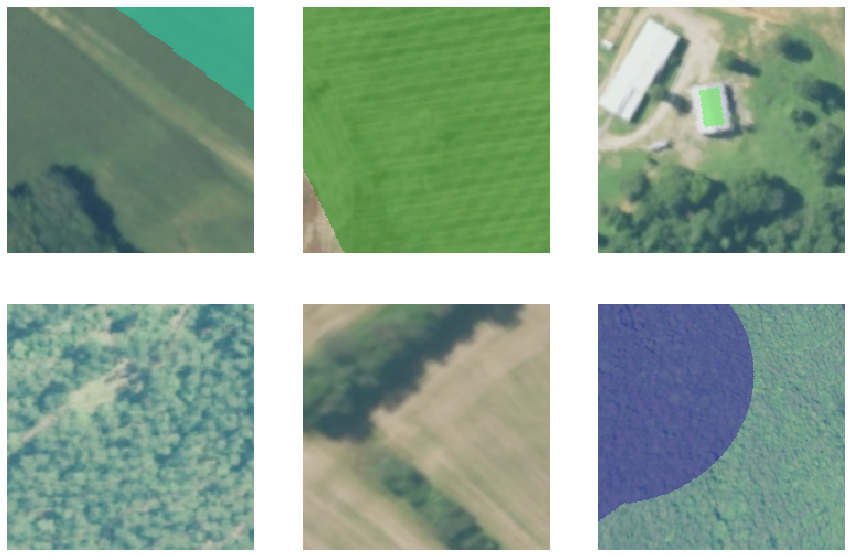

In [18]:
data.show_batch(rows=2)

## Load model architecture

We will be using U-net, one of the well recognized image segmentation algorithm, for our land cover classification. U-Net is designed like an auto-encoder. It has an encoding path (“contracting”) paired with a decoding path (“expanding”) which gives it the “U” shape. However, in contrast to the autoencoder, U-Net predicts a pixelwise segmentation map of the input image rather than classifying the input image as a whole. For each pixel in the original image, it asks the question: “To which class does this pixel belong?”. U-Net passes the feature maps from each level of the contracting path over to the analogous level in the expanding path. These are similar to residual connections in a ResNet type model, and allow the classifier to consider features at various scales and complexities to make its decision.

We can see what class is mapped to each of the classification categories using `class_mapping` function. It is important to note here that, the class 'Nodata' is not mapped to any class but by default it will be mapped to '0'. 

In [7]:
data.class_mapping

{1: 'Buildings',
 2: 'Forest',
 3: 'Harvested/Open/Bare Soil',
 4: 'Planted/Darker Cropland',
 5: 'Roads/Parking Lots/Driveways',
 6: 'Water'}

As now we know, the 'NoData' class will be mapped to '0' and we want to train our model on the six classes we marked, so we can put the 'NoData' class in `ignore_classes` parameter while creating a Unet model. This parameter allows model to skip all the pixels belong to the mentioned class/classes, in other words model will not get trained on that class/classes.

In [8]:
# Create Unet Model
unet = UnetClassifier(data, backbone='resnet34', ignore_classes=[0])

## Find an optimal learning rate

[Learning rate](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) is one of the most important hyperparameters in model training. Python API provides a learning rate finder that automatically chooses the optimal learning rate for you.

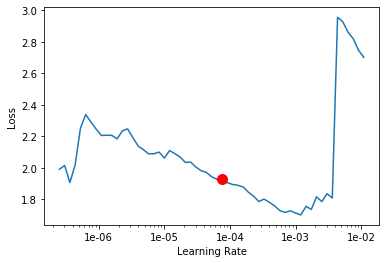

7.585775750291836e-05

In [9]:
unet.lr_find()

## Fit the model 

Let's train it for a few epochs with the learning rate we have found. For the sake of time, we can start with 10 epochs.

In [8]:
unet.fit(10, 7.585775750291836e-05)

Here, with only 10 epochs, we can see reasonable results — both training and validation losses have gone down considerably, indicating that the model is learning to classify landcover classes.

## Accuracy Assessment

As we have 6 different classes for this classification task, we need to do accuracy assessment for each of those. For that ArcGIS API for Python provides `per_class_metrics` function that will calculate precision and recall for each class.

In [11]:
unet.per_class_metrics()

Buildings    Forest  Harvested/Open/Bare Soil  \
precision   0.910002  0.998542                  0.986803   
recall      0.950265  0.999001                  0.971385   
f1_score    0.929698  0.998772                  0.979033   

           Planted/Darker Cropland  Roads/Parking Lots/Driveways     Water  
precision                 0.975038                      0.951258  0.991753  
recall                    0.987470                      0.935559  0.978942  
f1_score                  0.981215                      0.943344  0.985306

Here, we can see the precision and recall values for each of the 6 classes are high with the model trained for just 10 epochs.

## Visualize results in validation set

Its a good practice to see results of the model viz-a-viz ground truth. The code below picks random samples and shows us ground truth and model predictions, side by side. This enables us to preview the results of the model within the notebook.

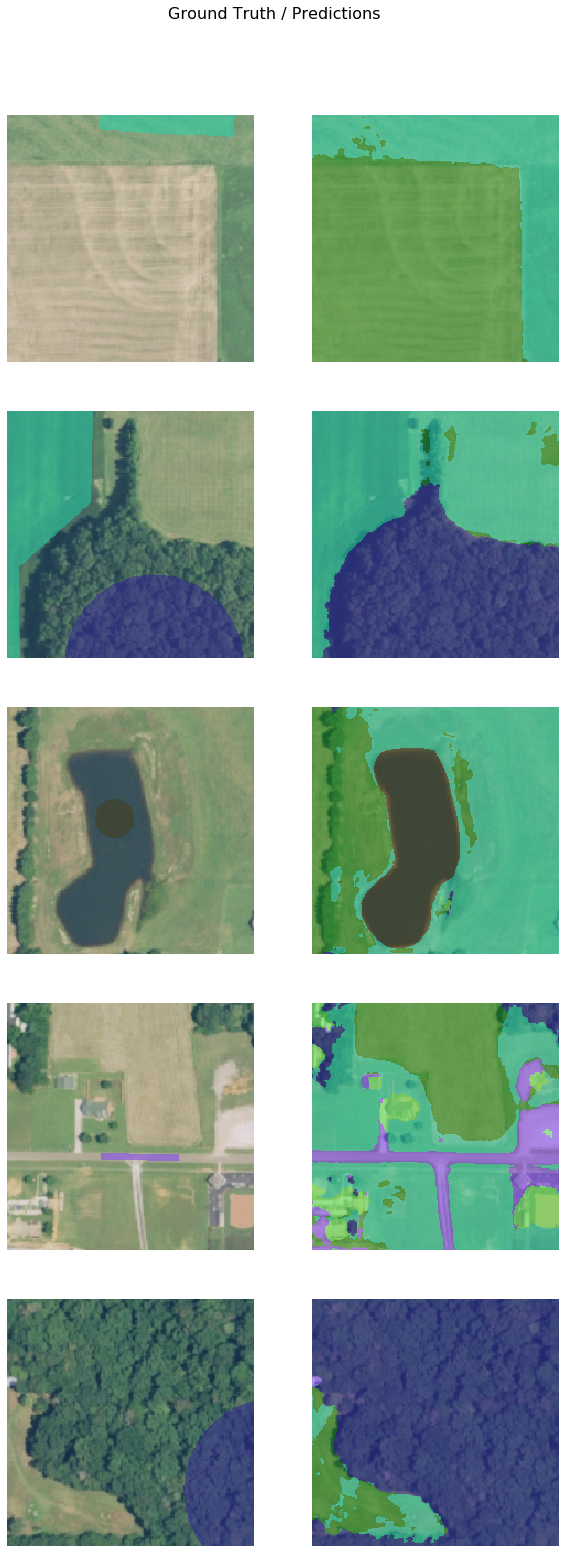

In [12]:
unet.show_results()

## Save the model

We will save the model which we trained as a 'Deep Learning Package' ('.dlpk' format). Deep Learning package is the standard format used to deploy deep learning models on the ArcGIS platform.

We will use the `save()` method to save the trained model. By default, it will be saved to the 'models' sub-folder within our training data folder.

In [ ]:
unet.save('10e')

## Deployment and inference

In this step, we will generate a classified raster using 'Classify Pixels Using Deep Learning' tool available in both ArcGIS Pro and ArcGIS Enterprise.

- `Input Raster`: The raster layer you want to classify.
- `Model Definition`: It will be located inside the saved model in 'models' folder in '.emd' format.
- `Padding`: The 'Input Raster' is tiled and the deep learning model classifies each individual tile separately before producing the final 'Output Classified Raster'. This may lead to unwanted artifacts along the edges of each tile as the model has little context to predict accurately. Padding as the name suggests allows us to supply some extra information along the tile edges, this helps the model to predict better.
- `Cell Size`: Should be close to at which we trained the model, we specified that at the Export training data step.
- `Processor Type`: This allows to control whether the system's 'GPU' or 'CPU' would be used in to classify pixels, by 'default GPU' will be used if available.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAc0AAAGcCAIAAAA09WwYAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP0aSURBVHhe7P13lCRHnt8JhuvQWouM1KIyq7K0QAFVEAUNtELL4Qx7ZrnzjkdxvHkndv+5eyRvyb292+UdySWPS3KGHNHTmOlGQwOF0iozK7WWkRkZGRkyQ+vwcHU/j4gqJAqiSzYK3f55WRXu5ubm5u4/+9rPzN3NEEEQZBISEhISjwy0+SshISEh8Who+rOZTEaGICqVSnJvJR5DEJmsXKkwDGMxm5tBdwddqzWXJCTuFzA/kEdx6V70EUGQfC4HoqpQKJo6m0wmOZ7X6XSNGBISjwgwPgAWwPDuxWhlFaBcdjqdzfW7o0rTzSUJifuFrQMLGIoSJNkIvM1te/78cjqVUqvVGo3mG9xvgCL1ekbimwPHceFweHFxcWlpCRY+r7OiBjcch88uP0TAbDAUgT9YeHyQjPlxJhqNXrt69dLFix99/HE+n2+G3gIsGXyAhq0mEolsNtsI382X6izsxPFCmRUqrFDlhEdg8A9Ercb5dug8K0jW+Q2CpumZ6elsJnP2448vXrgAUtrcUAfH8fPnzi0sLMAyw7ITExPXr19H0YfpChRpbjFaGQ6WbgRK20XusdA2RMYW6X9xLjZfEB4r6Ze4DditVqt1OJ3Ly8uFQqEZWgfkdXVl5cMPP8xls7FY7OzZs8FgsLltF19sxHC/12Ll9xeyP59O/8Vk+k/HMisF/rFyfVFBGFpKj8ZFZ17iMQFsDmRxN80Nt4AIFEXt6e83GI1iQ+yz/ix4u2DKE+Pjk5OTM1NT83Nzdrv9nvoWvgpEth0v/WwqMxathvKMP1E5t16u1ZUerbu3tzUfFuoO7+1V0fNtxmmGiAUEQhrrjU27JbIR0khBjFxfbmyHnW5Hhv0byxiJv9CntVJi6B3HAm6nD3+7DiLx0AAbq3cMNAE7vMPqGnarUqnEe/7pnRGBmCeeeIIgCHB1z33ySUd7e19fX3PbLrB/+k//KfyUy2XYQS6XwzIkk9wp/qf5oteuOuVV9lvlDjVqVBFqHO4zgmPiXYdojYyAEeB1O2iEQCZgtfE/bOLrkTDYRSyBCGQeMtlIAWLdPhUoj41ExBAwO6yeSDPB5iZYgN0bhxP3RdFet6pVi8NqI6QeByKJCYoZaBylvqmRDYlHDcMw8Xg8lUpB3Z7JZqExBRa1W23BiEOhkMvpXFlZgdUDBw40wm9jNpsJHIc2GrTFnnvuuY7OzuaGRh8Zw2g0mub63QGFprGAC/x/vZnCTOqfDGgPOhX7HPI+I0mCaSGypXBpMc1gOKYnRQvaydKjkep2mXdocEImJHK1JM1vJauLCUanxlU4Ui4y2yU+kqFpBDWQiD9RnY3TOR4xycHiRDWETeORarIqmJU4x3Bz4fJWSbCocTjcTqY6FqlmWcSiwLL52lS0mqrJTCqc4QStAqfLTKQqRFKVlQxrVBMUKoPsrccrMzt0lRWyNK+gMCiFEg8XsKzJiYlr168vLixA7c7xvMViwTCssRVswu/3ZzIZiLa2utrZ1QVW2tjUgAQ7QtHhoSGQ0BdfekmhUDTCYUcoArAVNPpzOovIapXav7uR7ug1vNGm0FComkItakKFIQzLT63n/moxf36jxOB4hwaLp+kLvsKbi7kP14olGd5twNc2s/9qrpRLl/96PnfBV+30KCwc+79cSfiL7BV/yWUi4rHy3yzkPlgrXAlWrQbSIkcLhdpHC9m/WMxf3CzZ9VQlT7+7kHlrKb9Skg3aqXBU9EE+WC+VEMxB8H8zkXpzubSQZveZ8Xem0zK1QpYp/tuJHJjmz+Zya0VhD3gFHD+6kv3zhdyV9eLFldxiDT9iJRpnLvFoEYTFpaWf//Vfj4yMQPPfYDC43e7bOgtmF9reXl5ZAanN53Jggm1tbWq1urG1ATTQ1tbW4H/RGhWK1tbW5oYH01k4dDJV/GiT+e5+vUOOVGoCzclIHBE49s2h5HhBIJnam/PFo23KyYX0u0Fap8Q2t3JvbbAn26izw9H/aaHq1eOZZPG/zFb2dyj9C4n/61ixxUBqCdnoSm40wWpI5Mp8ZjSPHLMRF6ZTZ8OMUYFGCqwJY/90KFMhsVV/Zq6K2WqVfz1eUKqJSpnFWOa/TmYJJV4oci1y/p+fi5tcutjqzp8M5dpM8mAg+0lSdsJJXJ1JvROgDUp8fC7xn321Ux0aPd44M4mHBo7jYKtTk5NQ/ZtMpqeeeuq2VgI8zyeTyWKx6PP59u7dC5tsNltzW920AoHAtWvXDh8+jGLY4uJiZ2cnJNjYdFtnP9eyA82tMutlYZ8e3ERZvkBf85eubVeSjLARKry5Vn2x3/CDVuqj6bSvyL4zmYry+P/hpOUf7lO8cz02lmGLZebCalHt0Px3p0z75cy/HcuVeH4lUlqqID85YKilyz9fKLS6NP/nk6YnVOw/O58q0uwvRpNbCPF/esryjw/pFSzz8/G0xqj6x0f1cX/mrWDlvdFkViH/RyfMR8zo5ErmfEL2J6ctP+5W8gwfiFc28jxdYW9ulZRm9T85rF3zZS5FauuB3K/89AsDxn90WC/kKiPRGrjRzdOTeJTgBHHs2LGXX34Z3IGnn3nm+PHj0J5qbqu3sCxW6/PPP6/WaHp6e3/0ox/BQnNbHfAgbt68CZ7smeeff/XVV8F3gNXPdz7cB+ClVhg2w2Jmudi6Wdgu/MXNnf/fbGE7WfnFernTLrdrKVmpejZQgb8nunXf69P+/SfMskRuOsUKGOKyql7fo/vpSXurUL24VeVRmcGkeLFHa8e5iwH6ZK/utT36v3dAs7yW8xdosLfTPdpv92n/7qA2sFUYLQgWLdltlk/6cmtZZi3H7XUpv92vBbdlI83K1fLv7NXqCWjuiS0xHpG1O9Tf7tf95KBmyV/cTFbe91e/e8T0gwHd//6wAS4lJ7XMHgFgmVDff/8HPwCjfenll+947QoscP/+/U8+9RRY73NnzuwbHGxuuMVWINC/Z8/RuuUbDQZwfpsbdvEFRizIBI7ha/VmOzSEKhX2vanUuSDtjxZXM8wHC9lf+co7FT6QrixkhENepYFCPWbVUQO6mKxBq8lhVZ62Uyo5+WSXOhsrJRhBTuFHW1Q2JbqdLGdQ4rgLtuKHWtVkkV7MVVeKsufaVCYStesoBUtf3qqOBIp/Np2PM0I8x/dYiPnN/N/6SpQcbzVSJF39D1PZPIpSOAqlp95dgYAXPGglDRrCpECzJWYpXtaZFHtNhFFHHvUolFJD6zcF2CsY5ZEjR3704x+D4ILIQkhzWx2wZrvd7nA4wCOw2e3gGuyOAMvg/77w4otOp9PldoPUQszmtgcDDqKkKJJjMowgILJup+qgERnerGQqXI3AFSxf4mTP7jX2KPgsj9jkKMMKMgK3EUiizIOBOXUkyQscgjrlaKkiap1HS1CIUK6xJQE1yVGe41UUAZ55vFIrylCnCmPELj4hnmcICkNqnCAnv79PP+jV/X4P9T+fC/+/p/J2q/qNPuUHY/H/10Quf+spA2ROp0DBYFEMQQWhWOMSPOKSIywnqOUoiUmW/KiAm2U0Gs+cOQP2CQ5sM/QWsBWMGQy7sdwIbACrx44fPwTOLIgSRT3z7LPgzza37eJOnYVEjBrFkybk/fUyLcg0avJMt9qEi28dyEnsSJsG6vn/y3P2//g956AOE/jGqwgIx/FFXiav9/wzYJH1fthMscZiOAZuDoooCXAjBAoDC+bBhsFeagzPoyjOC2VBqDICCDRYJoqjTqP8p8fN/+Qpy//8Xc9/2yM/c8Lxz580ZjbT/4+RvLXd8O9etZuLlf/+k50UK3aEiYg9YkB9WSbwcHQIgoMJMjFXNR67tU3iNwMll3u9XqVSeYdFAhDCcdzAwEBXV9fnrRlCwEbBF4ZluKNOlwvS+Xy0+wCOa9DJB/WyXy0VslDxE6ieRAUUseopNyZYrfJT7aoTLYpeA9VGyRazDFh1NFGO4ESrFuxXWNypZGtCOlUcKwgdRhKsvGFSJrXcIGNX0kyF5VcTVcpIdagpOcvOJWpVhk9W+E67wkog3S7F6XbVSbecwJEX95n++4PaqbV8lJWd3mP8V2fMa6uZDVHN608WwMepXzP4DxbUCsKLcVM7kD43FSoXoZhIPEp2N7/uAMdxqP5vC81uxG6BW60usk5jeTdf9BwMRb1Gcno9v1EWyjQXzNRGgpV2t+aYBRveKBUEpFRhQyWuw0ixperkDiMg/EKotFnDvjOgAQ/hr9bKLjWWzFX/YqZwbK/xKQP6yWqps03TrkC1FLoSLPloGVtjrvtLCrPyux2qUrY6FquxiGx9p0qqKTZTmszwhIwP5lmzGpnYEHtmZVW2QOIWnA9kORJFslVhr1O+vFU02jVOjr4R557qVKsQfmijqDWoDpuxqWClhCA7GfrjxVxNq3q9TS5p7WPFffQGPEj/rAiCdFvl2WxldJv2peiFHUZhULzcoXKQ3LsLpXCRCZZEo/Io0algeTFVm4vX9rXpTjuIxUBhLM2TDHMjWG7x6F7vUBRydIEkD1pJEketpGxsu+JL0+Gy8GSH+oBNbiKEoUB5M8us5rjDLWDelalYbStdYwiUL9FQFgJlfsCtdMv5swuFhTTjsiqfcpK+JLPHo6aqtRxBHneC583ORLln9mgHjdgFX8mfY+KZmq+CvtCtFrsPJL4JgCjf7p/94u/BQJXKldpQoJIFtxGVgeP5ZJvKpUSWg6WZFIvjaKtFvtdCyhhuYqsYoUHF0W6zfI+JGFtI/Ms1/h/skadrAqUiX2wFr4a7sVl2uNRtCrETKpOpXtuuMgiiVOBHXAqzHK3R3MRmYauGqCjsqFelZOjL6xWGwIxq4oCLXNkohmoyDEefaFPSeXoqzgg42mWhug34UrBEGpQdBDsUYY62q9WYMBEoqbTyPiO2ES5NpVkthfn9mRml/n87rWv6CRLfWMBkH/B7MPBFoLmTKnOV+gsoWjmuJ0X7TxbYsiBTkphZIb7yUqK5JM1DI8ykxKHy/ssrEZ/e9Pe7iSovsygxJY4wjNh6A4+4kWy+yuZEq0TNSoyAkiPIshU2zwkKAjXJMY4Fx5YDT9SoxBWIAMs1QaalcAMli+TZmgzRyTE9Aa4DB+1FlOeLrMwgRyFX8SJvUmMKTJYqMHkBJTOFfzpb+2cvWW143fOVeOwBnb39PdhXfXcrvhfV8AMFGQst8bqlik/HxCae2DkAgAqLDXNBYHlRnccXEv/TJvI337FSYhNextYTx1BYkd1u/kEK9T0Ejm9aDFp/veb2UXZHqL+YJW5ieLGDAq/bNscLUFJEl0gQk4V94ViwI2QY9ipUOVpA9HI0ma785Xi2q8/43VYKkpL4RvPgOnsfYAL/s6vRNb3xnx5Q/ObfDgTZvb5ZIhQELmMvTedb95p+6KWklxS/KezW2a9qvoGcMVz9ry5/APw0Qm4/9wSBq0doKqaSwtxqDFS4xgkNkQVA43arHIgp7AK6fNtgIP7uo+yO0MxD3bhAQ8VlThRZAA4tLghi+o0dG/pbLlXfnkr/2Xj6zbWi0ap60kGCyktI3Ac8gh7r0T/jJBsG9htGQBGXCttO0xsZbqDP8N0WSWS/qXyVP3sfcJxQYASdvOkHfy3AsbMltsyB+AoKSmwbNjdIfJP5WvzZBlBEoIH1dcHVSyi08ertN4lvDHfrz94HGCY22L9eYYM6X6vE7RrcoSEkkZV4cL5GkQUwRPycErIgiew3l4essxISEhISdyDprISEhMSjRdJZCQkJiUeLpLMSv800HvNKSHw93Orab+psvZ9dQuLxBUz0Pr7BlXRW4mvkttE2dRYFJKmVeIyRrFPim4vUbyDxOwr4GqJ7ce8jLUhI7AYMqWFL8H8z6HM0v1NojBau0WoboXcgDuHBsuAAN6Z7xDBMao5JPHTATMHGarUax3FgteRnLY2uVguFgtvtbqzeJeVK5fNKCmnm8/lMOg3HgvKh0+kMBgMcTrJqiXsFLDaXy6XTaZZhcIIwGo16vb4huPA/6KpCLgcD+yqdhXiwNRwOb/r9sLWh2wqFoqenB9KSjFLiIQKmlc1mFxcXQU9hBcQRx/GOjo7GELRgbA9LZ6FgrCwvR2MxEFa5XA4pg+ZCYdjT3w+F5OFYdf3LAu6ue5PF00UETvyoFsHE0UBg+W72re/Gf/W3uHcT58tAwK/i+W/22OL18xdufdL/kKFpenlpKRKJgOWAA8owTCGfNxiNAwMDYFpg0rd1tjkuYrVaBfujKKqxf4NyuTw3O7u1teX2eFpbW8HiTUZjqVicnZsDR8NkMjXjPTAg/sKt6cHuEprhCAIX6wGOFY0STPXX9S/Dadd/BZk4o9ivufACmJcAt6i5eq8wTA3DiV1ToN0jt/L6gDyURAC4yDiBP7qaFew1EAhMTU3ZbLa2trb6IOB2yPzE5CRYpsViAa3kWBbcT+2XNLm+DIZld19LOAUoGGD9vb29IOItHo+rTqVSWV5ehoWvGIH0KwBr4eoyCcaF4ThfTAaTZbVKeTf2g8j4TGwrkheMWgVbyfnXltIVRKNRf35fhoFzEU8BrU8SRhdT29GkQqVpDO30xTDlwFaYUOu+aIxwyDWP49BiEFfAkUJvzYhVB5HViusbfrnOfGtgsl9HfXBh8Wt3WBI/DUUfwF7A4ngEfdCBzeHWx0KBIkuoFA/5w1BIGU52cmKiUq0eOnQIzBUCu7q6QCR34vGVlRUwYxBJsCsCx0Fzv1RnIUR0Lmj65MmTIKk7OztQ/5stFrBFq9U6MzMDO4NX24x9TyAIXclFg9uhMHgV8RKHa2SZd9+/ZGzpUN/dLQVRzfqGPpjYbm9vzceDN69fWNzOulvaKfQOLwAaopX1xaVQLAEnn6dlao2GqsTe/NX7SkevQfGlx4Jbkt9a+OWlua49PeRnxsCpgyDRwEaRJ9X1m8eUUr7NmNZgaMxvKoKgzM7qOxfHzK4O1V3fX7qQXl9fj8QTOzuxnXSRUijl5P0PNYrI2J2t9QqmVVK7C8/9AP5VbOn6+YVUR6sbarZm6MMDNBQaTPB39Nix9vZ2ENNz5861tLS0tbeDFILvmUgkYBWE4MF11ufzQfvsyVOnwHTn5+fBjXC53dBEg3IC9TSsgksBxaMZ+66JBdcX56anJmfnZmcSFdLKb/3pBwv7D/bLMfHsxAw0JUf005urt3r0IHOxjdnlhKynxTx2/r2FhNDicehEnW3EaXoEEHnmylsfXpzcCgamp+ZIS4tVzowN31A7uvRKopH+bVejeRSQq3Lqw3c/Rt09Li0lpnUrgmjEPD3y4VvbqLPFrILdV8YvjG+UO1pssK8YEfZlyzdHRpSuAZNSjH8rzc+cyK4QGSIws9fPvnN1Iry1PjU7ny2ydoedgEJx60xvXYRPswfU06hHuJ1QPaml0QsLCbLTpbt15ZqJNCr724f/7CqkIPpbsFpfEWAluTo0n8Da3Zb6LLK3RyAUubXT/UwjDMcFDYTW0lNPPaVUKqHQvv32206n0+F0ejyebCYD0garoKINnf1irYEcJJNJaE/19/eD+IJ1nv34Y2jWQa7gAOAk79u7d2Z6Guy+ucNdA6fK0/mbly8sb0drLFerlJKpDFOrxCLRCsPX0wfBB2kTL0Djf1itX01YFltA4oogKK0d+7o8OCqLb86ECqrTJ4+q8NsNnFuXTTxYceT8+1upGtTdM1c/vDS5ViO0Bwb36hWiJN86hnjVxNTrx2ociKsWo7Ek17gx9TzdShysGQ3NXT13c5kR4D7JqunAu++czdBiI0scDLKeQVxj29/fXRdZMTWx4SaWmlunVI9XP/ItYBEuy9BQOF0UeDa6NvWrv/1VtMiJOzeTFXNYjyhmaPfuENKIINpYPQRAZJxv/Py1hTjcymZI87hiPhohzUvdSLcRQQxqXOtPDwo76Fy9eztdECRGqveiNi7Yrb3EdJrr9w7U+Zubm3179kB1DpeusZpOp2EZbO/Y8eNgiulUSrwODwYY/VYgsGfPHookg8Hg+Pg4lAooJI1L5GlpgbMAFW5EvkvgpEvxtRtDk5Sj84XXvvWd735rb4ddHJEAg//QWiE+NnJ9eHg8UWJgla9kZiZu3pxYyFYYqFbnp0ZvDI8l8lWDs7O31Z6ObsyurhcrTDGViCZTcGOYcnZ5eb1cYxpHKhfz9q4Dr77y0oFW9eWLV4oyee/gcRNeWl1ZKdUEDGF9a6upIo3wtfmJGyNjU7FMBQwUBbuEm8hWfQtTIyOjwXimYclQ0rLJWLrULMLVYmYnkQXriPiXbg4Pza4EWBnW3bffruZzO1F/KL48PTI6Ppsq1uCUBbawODY6PjW7trIcSRQaNx4SLOYKroET33r99W89f6q4NfHJ8CorQ5lSbmZ8eHh0MlmsicImsAuTQ7AaSZUQrhbe2o7FtsaGr8/AEcGoGwhCKZdK5cq3LQoSmZ0YuTk+ma+KfffJ0NrN4Rs3x2YLNIfyte0NcFFWp2dXirmUb31zRTzT8USRBlNWOwcO9LbgbAF8c9/a/MiNoVCyIAozhmwuzQ5fH1nyr28FY58W77sDtHF7e/vIkSM4jjfsBwoB/N9YBmOOxWIQR4xa50v9WfAjDAYD+BHxePzSpUvgWYCBgk8BwFaT0bixsaFQKu/VpQUHc+KTt/2c+9mnj7V63O6WFrvZgNOZyYVA1+ABOZO6/MnHswtLs4sBS0ubnCuMXzk3MjO3vLbj8VqDUzeuTc4sLG9RRqsstryaJWx4+uy58yuhvFxWnphZsbR2aAgedgkWcKdVD6oDOjs7Od9z+nsH97RSpeCNmfBAp2lsOmC160c/+WUK9zj1somr50NVpQZSuHFxbHp6ajHobPFipdhMIHfoYF9uY+7iDcjCahVVOS06uPFguqHliR3Etrdb9O/oXOTm7PaBIweL/slLI2Ozc6s0odFziSl/ztvqCYx+dGF8JbYNZjFJyw0Oiz4dXT/77tlln29hfmopzPS0O0S1BmUvZZZ8of4Tz+zramvv6uBCE+MRck+nOTA7dW3oyuzcTILRex26XGx77MbFcahMV6KdXW07Szc/vjGbivnGR0aWI6X2tpbGEL2ojAssThTUff1e8AhAPpl4YG1k5Mbk9Ewkw7md1mxkDWR9empqPZKzuFuETOCDTy6ADAUTZSQXeOfyVCbqGxsei9BUm8u8szS2VlB027BL7/5qLpzemB8fGR7TeHuNSizim/j4g8ur/o25xZlYlmhxWXZ5DL8eKHdQi9PVav/AgNj25rhsLre4sNDZ0WEym8EmwdmE6jyVSkErClpXD+LPQiKZTKa7uxsWwG9gGMZmtycTCbFIFArgPVTKZfiDwNu7/HqE0o2z5znHvlOH++UEguOkSqUUstujG+UjB7vioaCAqri079xYoLvddPWDc7zZSbIVTKlYvXkjyauMapxDyeTy6FQK299uXJybUzt71aXAxenQob1dO2uTQ0vxrp4uShRtNLg2w6paezuctWJmM5pts6muXBtz9/QvXvnVds2gKPgujfm9bebxsxcrahNVCV0bC/T1uFaWfJbO3tTSzfWszGJUlsqs2WwQB6YRWN/8lMzZ323XgK7FAktgYC5NZWx63eqxl7IVk0Z4/92LrsFDhZVrf/3xSGffnoxvdHKb7mvTDZ09t1WlLGT+w7d+kdP27WuFChIuBbftW+VMbX1uE6XSGZXC1WuTbT32yUvXea1RXgndmI23txlGPjybwjRafufaiK+j3XrpV2+uV8h2q35h6KMk2dpmF+8vInAR/0qOcAy0maGu56rpS59cEdRGLL85vpLtaLdFtkNylT7ju7Gwg3e51Bd+9XM/o2pzu+VF/3/6+Ue29n4847s+G+zb071y7QM/o+/W1/7d//bnqLnToWHPXRp1dvTkNoZG5uMOj3n5xkdjG6W9/T3kXU8kCBcvGo2yDAOtn1AolEomobkPZqzRaMCAc7kcqCLYGEgwWC/8/6X+LNg3WJ7ZbIYSeu3qVd/aGjSy/uxP//RP//N/hr+rV66wHAe+ADgazR3uEgRhqsmZ1cTew4eMSqrhUKFQ8zc3y3BKvv/kS9/61mva4sKVmyvp7dkrc8VnX3vj9eePc/nwlZurnQdPvfHaMy69kiun1zZCcueeE4f37jt07MyZJ8ub0wtrMb6a9a1uyLV67FZxh4NUy6VCbieeLlttFkqo+td8FcKwf7Bn9Ox71y9fmA+xbU7l5KVPIrz9lddfH1Dt/PL8DFN/443nCjdvjMjdgz/43ut7WiyiMX0RcCSeLV67NqZq2f/9773e67EKdGljfbPICEwu6ouV9p546ZlD9uGLl5PF4uj5j7GWA9/+7nd6TLK1jU1696RPovMoZhghlHsG9sRWZwPrcx+en+564pXXnz66euHt2c3tKx99klZ2v/baq2385jvDG5VKesm32X7k5R9+/3V088aN5bg4LuSdIKV0+OK5a5Rj4NVnn0wtjNz0RbUW59Gnnn/5lZdrwfEbkxs8X/Ovripb9r906gDJ5Fb9od4Tr7/x6qHVqx/7UrVaJbcV2eERWT4R3M6hL333R0/24G+9cy2T3n7nV9e9p17+4Rsvmyrh+UCMvUe/AEw2k06DtEXC4V+99dabb775ydmzhULh2rVrb/7853/z5ptrq6uggBAHVPge5O+LaHgcYPcgrBt+P7iu77/33i/rXL50CQ5KUhQYNth8I/5dwdYyuZLRaKXQekNAvH2N3eEX97Z1g5LK9Rp6J5Qp81W6kExV2vr2dTiNuUQ4W2Ccbb3dYFccB/UBpTbYLBar03Pw6BFVIRzJF8PRhNFm09zqehI4Jh7yz86Mj8+ude7ZqyRRhq6yMuLpF1/YHnn7zY8X9j/7PJ7wT/jiep1aozZUouvBAvjR4lWG+mA7sK0xtw72dxK7LOQzFxSqe6ES2o4UOc3R4/tVOA5SApcM2iqWlp79+waOnjiQ3toMbwXmg4UnTx45+MTpJ/d38p96oSLiycM/aIsodCq8tDE/PbkaI+VKpc5W3V6cnZ0eW46YLQalyljb2VxP0whOdu450D946LkTBxbGR0v8neYLjbRUYH5mOUKQkKSzGFraTNKtrW1yXKa1WcM+f5mRsRzt6jzU1+VRErjW5AJ38uCTJ2TpYDRZhBtUoaFBICg0loHBwcGjR3RcOrS9NXp1zNx7+MD+Q2deeJJg6Mbgk3cPCBdJkuCxfvThh2+99db58+ehCh8eHgZbevfdd4Pb2+CDwj1txhb9ni8HjgyWDcYHjSBV3XXV63TwB0lAOBzpPuwebiWOIgT+RZNvgE9XKfkXx85fvBTOsyzNgFnoscTbb/7tVGBHqzG3t5qHP/jl1bkAVx8oTnQDoezUxZpHtIcOtiVCW7FtX550tTsM0IpppMrVKtMjly9euBJjjadPHVWDlYGcCby5ZbBTl3n3nZG+48f1XHZ1M1RIha5duh7IytQklDZxX5xQdXS3hSbO/uriWL62ywTqW2+vQdOMoDTtXd6tsY/fvjReYKBpU+8jgm0I4fZ2GrVytdlOEUKtEPGHy91dbSROODs6LVDZfMGFaIISsqhvNU1XA7M3r0+uyA36UjriC8WqqcCVyzciFUyO1FgWd7R0Ow0UqjD3t9tDoQgjfO6eImgxFdiKJeOBlWuj0yVeHGqPLuQWJ4cuXbseL7BcDQwC0ZsdrU4zJ/YJYM7WbquOpAwOsxbPFcpwxQAxKVTV1b+HwhGzu1VWTqVCgbzcsddrleGqtr5O0XOuH/CegCsFtxCsVidaGNiXDnKgVqsbq3h90tz7SPbzECQJrTHQ687OTmictba1/f4f/MEf/uEf/vQP//CVV18FTxkcZ1Dh5pneJbjcoCazhbxwqyg1dof/+Vru8nt/O7YcZuBGMixG6U+deQ5PLf35z/52YSt78vkX1HTorb/5q7mtTGMf8TTFR0iC0mDt8WrXNqLZKuf1uj91QwShVmMFhNpz7Jkn9ndR9QNCfFxhVGPlrWSlw60rlfJVGUawHENon37tZbui8TAK7R586mCr8sO3/+bS+LKonfUcQtPn9jwjGIrKSVJr6XrmWOfSjffffP9iSZwwtX5sQXzHDg6EkUpKLqvRZUqtU8J9kQkYtJq/0ILFZzB5RA7NyzJPqQieq8kUx888a0CrZTgBqFcw5VOvvNKqI1BUqVaTPMcrVWpQhluzuX0KZKFSTFVkBCbwMlx57PTTDjx//uz5QDzLIeIUKnB8BFEadHKxTwzKG06JT+BQSqkCy/m0DsAxCscQXsBVKkrgSjSHmE1GsQ7BMOr2Fb5roOlfqVahjfW9N974vb/zd1566SWTyfTsc8/9nd///R/+8IculwvaXnDRmhfwy3QWhFWr0YAzDAvPPfdcT2+v1Wb7wQ9/+KOf/AT+jh49CgUDGlwGg6G5w10iCITSOtChnZpZrnBitz3kgodrIf4imKx07b23oqzlqZNPdrrNIOSozv1Hf/zfnN5jvvjWz7dY/bOvfOs7rzy9eOmtK3Obd1wZuKBte46gef+NsfXOg0d18k/vPS5XHT753PMvvPTKy8+6TeqGVcCRa/lYpoJYnBpw/DG5Si4n+/afeO7Mcy9/9wdvnDlEycQ7LsjIviPP/uA7r3Hb4x9eGoEmTD1QptWrC9lc3QyFSqWmM5qgNjp46sUffOdVZmv0w0uju9062Ee0dYQQHXecguIBhR1qiWI2U/tct5B4ISBvxfTk/Eb7nv02vYpQWp489fSzz7/0gx//YH+rjSCo/oOQzzOvvvGjl452QQkuF3MMj4DXHktWtar6FFe3gKREZDJSrlKojANHnzrz/Is/+ekfHHDil89dyGG2008cd1l1kC/YB0VAYpo7Qj7qpR7D7nzyJZ4ybEAxEsPh2ioonq5xPMKz2WRK7LprRrtbIC0wSmiFWazWF154AfTuiZMn1SrVkSNHXn311Zdeftnj8cSiUTBiMMU7L9Y9AuaKoig09FQq1WuvvQZNvHK53NHZ2dHR4Xa7q9VqPB6HNtw9nQSCKg8+cWjz5rXVUAJSKIFXXKrUr5BQzYWWAoXegX1ujaKMIgxLo3Ljsy+83KXMrwS2OLn11JkX9+rpiaUgJzS9grouwMVV7Nm3Z/HGhRJmtJuh1qkfCY6FEe62rn379na3OUWfVHyyD+WntjYzKtgOPNNHnLu8qHd49UhV7fJ2dXU6XA4NASkDXJVFB449c3rAvrowl6mIRxFwsrW7LeJbyeRL5VymUMWsFi3U256+49958WRybWY7x9RPBBCTEH/FRZnOZMfKkc2ddC4WWd8Og6/YuF71DPG1SqVcKWcT2zNzPu/Asb6+fiVX0jpburvavW2tHm+7Ga/JbZ5m9kiMoZP+9Z1iIbXoC9o8rerm6w/iIWtwPcvVSoU2uvuMcl7naOns6mxr9wjF0Fqk1tnVbSLxMhQlMXbzH/xfn1Pl1pr4W18SzwDCm3FkhMbr0K1v+KGhu7m0nGwkctdAWmAn6XQ6l8vZbDYwYLBecAggEJbtDkcFRKH+zPb2dftinYXN7R0dG+vr4AyDfwFSm0qloDBAbQ8QBLGxsQHKAmXgdkJ3iYCQB555SfCPffjJxanZucmxsan5dVqcYhzKM6YyqDLxWBCa3MEYgyOpiG9meq3MkZ0d7dXSztzUbDxVbPW4lbjAgOTVr43YtQkL4AEZnRY0MxvmDvQ5odqqHw2ArSiIm0IhJ6HqFYNFT5ir5q5+/F7F+sRP/86r6dlLi2n8iRP941fOL66sriz7doq1xqNIji0tz037Q0mjwazXKKv1JhLcsJZ9x9TZlXMXrs9M1ftJB/apkNzizKw/lBJjqpU0uB1i1hpKV89I3RwF1LBvj318+PLY6NjkzFK6TNeD61tFHzO1PD87NzN1c2Q0hbvPPLkX2pg9xsLV4enVlZXVYBxTO5453nrt4pVlyOeKP1PlMKidsqGJsanRa5fXa+qDe9uJZh0OZ4mGNxZnZ2ZmFhYFbfveVmrs2o3V1eXFtQADrgnKphKxjfWNcDherR8ddqjvKK6gt3LVfEB7ayP83IoEoFpLe6+LP3v+6szE5KI/Ajrb3HLXgP2AaYJCBQIBUNIG9cyIwDIYHtDe3t6IXd/pPoHUBvbunZudBTEEzX35lVeKxSIUCTga+LlwnTQazb3O1wD5N7bsfeOVwzPXzl+6dmN4ZHhuaZNRmlqcZrWp5eg+98r0zdmNnVa3g5RVfbPjN0bnKEf/YIdlZfLmyMhYWt719OEOvdniNoMHgNjdXr0cA+M1OtqUlRhhbjWomu+cwIF0ZpfZoGqsAiilcjkdXCUTCKX6Dp1+7bvfq4UWiwrPt187Ak3CG9eHVjaj4Ot6vG5wahOh5auXroeK5OFDB3RKsdTzAtoy8GS3Jnv9yrVr14ZqupaDe7u4SuzquYvjy7GBI6fdNl1be4sckamN1harDmQKJVUet0NtcJ155tDC8NWppfViiSagvq0joLjJbi2Flm/cuD4yOqtuO/jssV6dteOFp3tHPjl37frIgi+ksLR/+9tPjH9y/vr1oaWNMFgqhitKicXrV0ejtOrQYJvotAIIZrQ6+JQPkro+NkPLHaePt09fu3xjaGRpPUzZuvsd6NTY+FaO97osUOW729q1pDh5pUBpvR4H+A0Q6HA4YcFkdxtUcp5Qt3icFAbuiMxsd2tVusFTz7HR2YtXhiNFRoHf84s9crn8wIEDI8PDUA+A/YAqgkVRJAnLYMzT09PgGex2Q8XqDn5AT8HUdn+nAG1xsMhoLPbkk0+C/SUSiUZaYKxbgQAkBH5HowO3ucNdA2WxlEtthcLQBuI5mdrscBmJaDxn93iRanLDty2QYs8EIbeYNfz62jaP42anx6KWhTZDJYaTa8wtLU4uH4+VsLYWW2FnK1OTt7qtqFAb/fAXK2jHT19/QpzBsXEsng5uhdS2NqMSrWcUQZn88kbM6bZGQyGTp8+i4rc3NzmV3W3Ct9Y2cjSHYvLW3i6qnPTv0J0djuiGL1OkMbkG7FWrvNXC4LlsIhyMpsUWi87S4nGQCBP0rWfLNUyu9bR6KDYfSpRdXg+9s5kWtF6nWagVAuE0+E2EUPKtbdICXkv5ZuPK3/vuc8r622y82KXry9HQQELlaoPb7VTLMShemWRkaysO9qi1OMCqZGxpZW6thoEGKTr6OqOj586uFZ87sadSZKzeVpdZDwYPqSEyPhUJbETyFIHwKOHt6CJr6eBWrCZDKLWx1WuvZePB0A6PUnIFptDYnHosGE7aW7xKAi0kw4ka2eqyQtN3OxhSmd1UNZGokq1OfSwYREwtdg1RKybWw8WurlY6H1/fiGByRWrlShA/9KPXj5FI8+LfJWCaILLLS0sDAwPe1lbwEYaGhsCftVgs4DKAGsFFA30Eg37w7xTg9vnW11dXVwcHBxtJgT03vo/I53JPP/OM2Na7d8CVq5aLlRoHJ6NQqkmUrzKCQkEy1Wq5QhNizxuK4xgDvhnD4ZRCpSCqxWKVhWWlRkmxNA3NV4JAmVpNhuJyiqSTvv/015de+/2fevVks99XJmNoWgaxGg864TZzXI2FihahaUahVEGbGFxJglLiKJ/PFcBHVkALGcfAsYJjCywNPpas/pju044IMU2oaMRklSoVgSEsQ5eLZWhtqbVacIUh85RczjM1QcweuJpcjeHAPkuVKgoNqMLOR+9d6H7pxyfaDI1M1mhoTEMjTcAJuUqlED1cUBieKRXETgiFSkOJ7/FyxWyBEVdVGJ19528/6nn1FS+J4wol+EK3syZmrJ4UXBDxTWSBLZcrcFJypQouZ61UrNAcXFhwCKAlSldp8KUw8J9AxTiBpAjRs66JH2gJTA3sn8QRSA3EETwIMTJBsuVMmSNQGe+7+f5Kpf0H3zpJNRTirgHpGx4erpTL+w8c0Ov1YEUgj/A/VNjQIDt46BBFUWDAv/57MNgEFrm0uNjV3Q31PNgr2Dp4smDug/v3W8FVxptV2b0DhUtMv7n2Kc1w+GlshesOP7AI4Z/Zp77cWBTvJVMJb/luTi31HD492OG4bZrA7aQ+pZ6oGA4/jYV6hEZH4a3tt/7/ioyKGft0y5fFvI24A4Juzg9XFS49URsfGVK3Hzt5sIe89b7m59OsA2feaPHAP4jw6XGgDeAbPn8tjP/hT15Amfq8l2ICt6lHbC439tuV+K1V+G0Giuv1TbsWb29thOxKEbYgAp2dnF21ODx4JX7u+vTA098+3Gmsz455z4RDodGxMWgheb1eMFCapmOxGOhvd1cXNK1A/h7W92Cwur29PTU1BQqrUas5jsvn856Wlp6eHqVSfFP06wWuanJ79fr1cUP/U0/t84o1bXPLYwIiY4qj1y5tJquguzpvz+kj++T391o1NCNK6cufXGt9+kyPQXVvlfODATYQWbr68WhYJ5dxKvPR4ye9FuV9XGkoGv6Njdm5ObVGo5TLawxTLpe7OjvBYqHRD7cSdPXX6yzQiApplUoliAf5Ay+jra0NSkKzcD4OQIGv5GbnluTW1k6v/a5fz/g6QJD09srqVlJAUJOrvd1jE1/kfgDy8XCCxtpbHbu6Sn5zIEJtfXEhlq0gMszZs6fVovtUqu8RsDTwrHw+H/iVjVcLoBUF9go22rC0hzi+ASQO1g6+BhwR1NZoNCoUiua2xwCOqdEMr1RByf9Nis/dI7C1WpUG1xtTKhWf6Um6VwSBYVnxYdqDJHJf8BwLd59vOMjQBLhfNWvYLYgktBtAFQ1Go/yWNjbE8650tgHEAIec53kwSgD2f4xE9lMgX2IN01x7fBHz2eBh5PZrPutPT+bhnI4MRBYAcQRLg/9vp/kQdbbBQ8/5QwTy9rhl6Q4aV+8xz+RX0zSAh3EOt21JTOpWehB4W2fvypuCNHAch7YbmD6sPq4XF/L1jbjrYj4bNAMeiIeVzn1SP48mzaAHA2wMLA3s7VFrTSPPDZpBjw2PYZbu4PG8bvdE4xQeyjk0k4LEviS9B2u1SkhISEj8OiSdlZCQkHi0SDorISEh8WiRdFZCQkLi0SLprISEhMSjRdJZCQkJiUeLpLMSEhISjxZJZyUkJCQeLZLOSkhISNwnCGioOPRKc/XLkHRW4rEArc/FDSYLC7/5r90fZ+pDREoX5LGjcUsyVc6frsUKDC+Igvtl/PpxZJpLD/tbQEj3QZITM/ZrMyTUR4qTq2+NJPcIqGejuSxxX4AlFGp8IEtvZmo0K5AY4tKSXSZK99mB6h7W+AY8x5RLJYblMVKhUSu+vGjcNff7gbDAMaV6ThCMUKnVxO7xCm+BoLKIbylVU/f0thAPIa9fwKP+vvm3ElDVcJ4Z2i4Va4Kawss1jsJkBx3yHrP8ttrChb09vsGXzsMoIvDh1cnZpfWtYLjIEBaz5oGkcRc8x4pDZ6LgwTRD7gEE4av5uelJ3+ZWKJJSGkyq2wMLfhaBo6eGLqcQvcukfjSGJEDlJF5Oyf+6X+DCJcrs9a1SqirTKyidggSryNGCP1NVEohO/umd5R7GvOIAWymcP/thJJ1bWVjhFXqbSYeDENerS1ScG7Yxwrs4ezH8DwIkBogbxKH/xKFtmjUr0hjnBmwgG9tO13CdSg6BuLi9sVczqd2BzRzUgZB8ZOVvf/F2ssqVyozZalGQ4sypsFvjQOJREITAsfD6UjyPeLx2UjwgJCiAxw9pwjKkKWa1PuAOHISv57a+LB5RzHc9h3A4CIPA+mmKOYdN4qo4Nlh5ddWHKbRKioB0GoGfyajEF7GRocfClQ6zyq2jWF7QUrhNQ23lmEqNtWuIhsXBLQBdbcwr/lU6iwjsxMc/my+Z+pz4+V9+bDpw1KYk6vcLbrBMtLP6/YSIjeVG6rg4yhmKikOdNWwRESeMqFtDI5KAYIHZix8N+9s62+RgWhjeSEe0zltxIH59X7Q+k8dngJS4TOCDy7NtAwNWvVZnNMoJiFjfDywECki9IIhlA8N1RpNaKQ4gXLc+cXvjcJA30UYh7Pae9aM3DirmvB4uhoKNwpI4Splof2IccS9x0DKMLV2+eJm0ePVK0UZFm67Hl7hLwF6KNf7iRsGolndblL5kZTZaShSZHqtSSxFTkVKXeG/rVvWwdFacg66w6AvuP3HahkUn5sIKnFla8TMopVVTidBmMLidLrG1fHR2drHIUkY9GQqFE5HASjClV5ML05PxLGs061GQp4WZQDSnUKAjn7wzspZyezxEJT4xvVDiCaNOGQv6g1vBZEkQqvGZ6cUyooLAXfkQDbwY37h8c+2FH/9en9uCcqXNlfVgeCscK6nUaMC3SemNsnJ6aS2s1us1eh3JFTY3gsF4UqXTV9PBqam5RIE2WixMLuqH8O3NSJK2WNUJ8IkiWyu+ACdDY1urwZ2yzqCFJkIssDIzu8ISaq1S2FzeiCVDvo2Y0qCLL934i198VMM1Hrtxa2V+eT1EafQqxT3PL/C7A9zEfJWbjILIgiOLfLKW4XhZKEfjGLLPrpqLVyxKTAvOrXiL71Zn+Y2Z4YJh34uHW5dnLucVA2xk8vrY+KWz13G7e/vqL35xYS6Wy6kJbnTo0o0rF+aCNau28rP/9U83M5EL73044w9vL42/+/GYracHSQdvjo6PDl+9emNF7zBNXvjVyPyWTGl0KmvD165MzMxeuzRp6G5b+fAv3r6yFM3my9mt6xevz04ucSa7Ta/6TA2LoHwpOTof3HNwv0mrkcsqlz9+a3Ft89rVS+GSnMgsDAW4Lq8lND80NOXf2loh9O7kwrWzI9ObvlC1Vpq5ee3mzMzUgt9id0cWrlwenlyYm7w2E+7sbp8+91dXZ7fWFkZG5qL5+NrVTy4kKItDwd28fG5kYnpxLWpx20Y+/OvFjdjQ5U+2y3KqGHj3w4vpGqbi4pfPD03N+zCd0aZTS1J7l4AjMBWtcDJs0Kn2p6oT4eK3+83QUp4JF0+162lOtpIo91moxvV8aDpLlxaXVk1OF8oUSyVUAeZLFycmZk0u1423/yIis3R7nXQ2XGSQmeHLlK1l8uO/DCMuRWbpFx+Od/V3LU2NojqLb+TcZh4R0pvLCUQrZKsKiwUvXLg2odRrV6emMLN74t0/ixHuTgd65cPLCmenAmUNVuPufhDIVSUbHptaVJrsCC/Dmfh//Ld/ZujsW738bpDVhCY+2aG8zNbY+dkQkd8cX0tpauv/5a3RzgMH5GnIybCzoy+xcOHqes2OhP7TX5x19rVPvPurmqPdf+UXlzdZLx7/r7/4RO9p813/OIaZyfjMR8NLRiP17l+8Tbgs1978y4yli1m/ObSa39uunV4M9uw9kF4fvjAd7mptQQlcp1XvrhIkdgM+2XqmFi8Le2wqDqpRhn+200DgSDhXq4fIwjm63UDVfcVPdfYzXVefBxzKqH/p3OXhsrr3UJ/VYrXbjFo65Z9dWs9nkwWOOHrsqEmrNxoMFpNmceTGdiofj0Ste5871qVfW44cOPOSS5acWdpYnL42PL1utTugdh9ZSh8+OOBs6X7y8J7Fm+eH57Y1Gg2dXBoeX82lE0VB/tTJQ/m18Sl/tvvoyQ4LNPk/J1wIwpRT81MTIG0Vli1VaUfXwe+9cCK5vsSo7cmV6Xg6F9jaNjhbmEq+VGXoUpkmDC+9eLIcCZT13T/8wRsHbML4XKBaLXFK64svv2xno0tbO9VSntC5XnrhhcraTdxz8LsvDC5Pza0tTAyv7JjMxkxwfsGfoqtlvaf3tRdPxVYXcBuIs/f4iSOydCRcUx178olWm/6+Bwz+HYThhUSZs6lFo/ToqW/vMVlUBMsJanEKEpnXQEULTKnG79bJh0K1kFqan/En+I5eby2TyZeKdK6ULVdVOmv/3r1OizybpauVAl+uJtJ5mdY2OLhvb2+3zuoaHNzT43WVczvrG+EaB46JSkcJao3RYnfhdD5ZpFmaURu0slpNobUMDOxxWBwOuz6T2EbUBvLzdgEhCEZgYM7QFkLUWltP/2B3i7GYYwf6WzeWFgKpSldvn14pjkcKhdbp7d3f35YKrpUVnUcO7Tt05GhxYzJD8xqte+/BwXaLMpEuynBVS3tH38Bej8Hc09/f7rKUU9GFuZmdAsJxeFe/g6swGKbde2Bfd7ubLZaUeqtWp3c5rG1et4qOTyz6NVptYx49iS8BSZQ4rTh5rkwnx5/u0FdZfilWbtGLk/Lo5XiZ4cWHYp/l1+gstNpVOkN7/6Ef/uj72sLKux8OgZCZjUqe5xCUMBhtei01N3Z+NcxYrFaNiodCAo11i1WlVqn1WrNer5LXZyjK5gtaq8fT1vmt3/t7zwzYQL8bxpUDd9jsamvvevnHf/Tsfg+CkgaTVaVQHHnxx892y9/7r/9hZivzGX+kgcAr9K6jJ5964lCPAsfkCrXNrFcooPmOYiqrnczPjt1MsbaedhOcHtQrMoKwms04jnPlgtZspmSoVqsul6ooqbDbrEq5xqJTlekaQspNVptWqTY77XqN2qA3QLugVCoZXK3tre3PvPx6r0VOqbRWs1Gj0mkpVJyuCEDx1sNnnu5Tnvvg7dVQ/gtyK/El8LzAcIJSnEFPpiIxp5YcD+Wj+doRtwZuGogtgSIV5uGXea215fDRk888/aS6Gl9ICPv6epTixFRi3xaKodWEf34j7e3rUzVmZUJREoW7jBFyChH7oxCBkGsUpMfbffyJZ44N9sK+5Zqg1akVhG5g7+DJJ051uw08IiaF4cT+Uy8fbFFc+uR6SYC6404wQtnZP9DhdYh9uJCBxpw/CNY2eDC+PJsoybq9rtvzt4qTD2OIRm/Kp3eK5SpdzSvVely0b7FEwDWsL6AgAAL8YASUMQjmoZxqVJTWsu/g4Zde+/5AiwEiIWJvM/yJOws1usoKWteeH/3dP2pH/B/fWBQnEZX4cji42KIpiBe8wvAfLKcNCrzXKk7JwQpwm7/g6n2lziIynFToLc6uzg6bSUOiWImv1vIFhkPAGcZJkFCx84zPx0PpNA1+BzQ5MIwCJxlyIE4yK87+SIhjNlP7Dxxg8mHwDhLZHKyq1AaCTq8E4nsGDxNsOppMZ/IZmQwsGaoJHBWYzbVVVfvBowc92/GSwH8m341OVoHObKytrvk2ijUUB68dNqAoQeCQ48FDe7dWVy29PUbwA3ACTAr+F3OKUR17umNTN8YX5he2CwN7PDgKRgnuhDizP9g5Lg5kLj4rIChS7INGYD+5p6dPV9qJFgrJdEGjpSDFevctRhAEnKKBRLY2VtfX10qCzqNTpHJFSWbvHhIX+8xzNAcXDWwmV+VGg8U+qxJ8W9haqEE9JlMQ9X7xh4UgYKTC6bAplAqSIGxtHW5lYXp50+D0qAjc7m4xKAnS4G23MHMTi1pPu1GraWvroHAZodJ3eCxgeXqTxWiwnn7xTG5r6uqN65Ec5+3tJxMrCcx1ap/x+vD1ySVfmRGcbjAHElpdQ5cuzq5nDxzbR3523jSQQlJt7Go1jX7y4dmL18Hf7O7rkhOYva3HadYqTe2vn2zVGFtdTqPZ5W312HUWb3urDWUF7+CzrxxQnfvwg6n1ypk3vtfi8na0OwkEb9kzYDfq7N42p0FNqQztXe0KAnV2dDhN5v0v/LBfl7p08eKNyRkaUfUdGNDgmMbs7O1wKLTWw/3e9aU5//L81Rs3Cwrn4b2dX/xYWaIO3DivnkiXGJYTVysMB4qwx65SkxhsypYZk6Iui5+l+Rj0S97rEtLhzQJhabFpxSdfAhdYXy0yKIkjOqsTK2eLvMLrsVSzO4HtMEKoUIG3uuw7wR1Hb6eQDGVqlNtj2tkMyLQWu16+HdjMQZsFlKvFqyK4wMYGq7B0OvTBLX8Rwilli7elmooWZWqvy5DY8kWyNEFS3o5uNXFHQUOEWnFzK1iqciiGudq6hVJcbXDgMjYeTxntNpQpBsMZu8elxGWxWFShNZHgx3KEzagTeC62tb5TZNR6i9dhLuVTAqnRKoh8KsEpDUg5WSONDi0Z2g5p7W4tUt6MlV1uaybsj2XK4PV6HIZSLqnU2+UouxNPaix2JhOO5RmtEk2lioTa4PE4lNAOlLhrpiLlzRz3ZJseKrhClZuKFPttSpOSgDs+vl3QkcJTXlWjJ+ahzVsjCNDiB8tplAWmBs0+lCQwaF4Jt8J5lqFZnoRqG4E2dD1Q4FlegFqZ53nR8UVkNF3lBVScyxYRmFoN/EgSk1UqNApWS+A8yyI4Dh57rUZDNEpOfYE3W5+TFTIDR4FjQUnEcEzgOF4mvk7AceAbQRoYGC0HAi/6pojoFoheKlOlaxhOUiQBLUuW5cHVgF9whKGQ1h8Fi8lgGOwrPoMG74FnazTDQh7hQGLewDWGKGKCKMeCZEBklGEY8B/APYJL1MyhxBcBPuzHvrzXpGozKFJl5kYgf8StduqoTIWZ2s6f8iptoFlwn+51frAvAyyncUPAH4FkIF3pebvEPQHi9dFaXqOQQ7ML/NlfzSfPdOlbDJQ/Vd0pVJ9rU2nqj26Bhz4/2GNCQ353F5tPi9WXhAO797oj2pexe5c7aKTwFREkdgMXKlpgz64XemwqOY7eDOb3O9UKHF1LlPst5B6LvNGovVudrbfmGhf/64T7XKeyxG8NYF5VTri+VUxVeGg1g0urpjCGE9SEcMiptDa7SEV++3QW6pjH0LQx8NYf64rpsQDstljjbwSL6QpPQJuAB4tF9tkVLXritqt5tzqbqrD+NDSOmqtfC1oK6zErvqDNJfHbAtxbhhdCeSZWYCqsAC14p5rw6Ig7vo/6LdPZYo3707H4lUCh6UY+JgiyJzyaf3TSDt5ZM0TiS4D7xgqyXJVtfMQIDS/4v7mtzl3pLDiyNwKF//HSdp75OieRH7Ap/z+vtoJz/vhV/BIPk4aFNk1N7INqLH3Kb5nOcoJsPlYKZOnG+wKPDwYFdtSthhLXXJe4X+7WnwVPtia+wtBc/VpAEYSqv00g8TvOb1+/ASa+udJcfnyA4i4+d5N4YO5WZ4HHwQykey4B/LY+B5P4bWW3zv4aEwSN+9r/JCQkJL7RSFW9hISExKNF0lkJCQmJR4uksxISEhKPFklnJSQkJB4tks5KSEhIPFoknZWQkJB4tEg6KyEhIfFouVedFUqFLHMvn4t8+jkZgtSqpWwmnUmnCmX6K5L4er9Ak/jdA2nSXH04NNO8r1QbXw81/pf4LeDedBbhmZHL7y7Hynh9vk1M/HJQtKf6MqyJqcFK3bLEX4EuL2+EYElcR7Cdzbn3P3hvfHL03ffOhpJl2FHcSxxJXtxeX8ZQrjq34KPFcZ8hiXpI3VLFQzRTlpB4eCAIWyvFY9FwJFpmxAkymuG3qFv3r7c7MdKuWJAOXcpHo5FYLFGpsc3QuwPhqkvTY1uJrG9qfHYjWi8KX4yYt/vScYnfMF85r/jnQHh2fmpI4Rwgitsb6+tzixuUwYpWkn7/+uL8bDBJWx2G5LqvQukVXG5ldScbm37n/YtpRNvpsoJMpsO+CKN56fkXyv6bccTaqmcun7+8vJXQW60KoTI+cmNhJcQymbPvfbDDkW6bJbkxfW10oSzITXp8ZXZidTVOGA0a6tOx8iR+d3jAeRjBNwTqaohwHAcL9e2IjC9fee+dhe1kKR2cXYk73E6VXJwHRIwMlTwi7PgXVncYl1Vf11sxDPYUZ/Cu+wcgzGIAx/iWFyoypV4tF31QBM3HNz45dyWRzMcjEZbS2IxarD7R8m0fVfQgxDHFxXUxKTH1xoziOCaUrp39IE663fJqosC3tNiw+nHFw9WnBYeExHMSZOnoxvoObTVqxEPWE2w4wbuXJb4uwIruar7bz4MI3OrilNrVvT3ycVTRZeXjs8GiQRY7N7J06MST6fWJUJFPTo1XHH0WLnTu4lrPwbZokjlxbFCvlIMh5aLr04trtVKuJOj3DvYTpVRVrqpsz133c2Y26MtRB9rMlE4fCaf3Hj1AB2aHfLkuj3Zuao7QUqPnr7ccPOkyKsGVbuZG4neJB9TZy5cvT09Pe9zu7WDw/ffft1itWp0ORZiRt/90tur+/nde7uloC0xd9GVRlZCLpBijgZgfGa8I3M3zvzw7Hevq8CTX59cjO1sbvmC6ajGqNhcWizKKqGVm54OILP3Wm2+uRiutbe3iUFdc9mf/8S9dR188feJgd1ebXqMsZaIL84vrvrWiTGXSqdhycnpqbn1jAxp1ZoMqsDi3vhXYydEqjJ6ZnvZvBdfWNvStgx0mgpdr+Fxkcdm3FdyMJWmjWZvwL84s+7YjeYOOuPbx35y9ue5t61Cj5aX5Jd/GZonB9Rp0fmJ8bT1E43KjVtW4DhK/eXbr7L31GzSAWlKuN3V1tLa2OIRyiUOIlvZul8Pd2+0pxpOMOFIwINb+lFyjUWv0Wk296ocjYyqtXk2w+SqhViGZTGHT56d5lK0UVDaXvBJZ3C5pVAqlWmPUKhPhUKFSTKULZruFlAk6i9Pjtqvk0szyEveD0+n0b2y89dZb7733HkmS4FKIAxJWCytbyY6BQwYFihGKjlZ3JhFcm715cWiREarj5z72p2oapVypVClwZPHG+1emtlUacuryR6NL/onrV+Y34pVM7Monl7M1QU5RGq2OIqCxhbIp/0aB6vS6SAJFMILC6MvvvbOeYgwa7PL7by8FQlc/eH8+VDCo0Jsf/XJyPT5745OzN306LTV7/fzo2o5WJa9Vq1CzbM6NX59Y3lwaP3d1Gleg1z78YHU7XWNYGVe6/v7bE1sZpVKpUGkRjh6/fmluI1pOBT54+/3FmaG3zo0L4mR94G43T1/i6+WedRZEFhojYq+suAItMI5j6FgsRjNMPJLCNEY5yeTyxXQonChVIDZDM+J0eo19ZYJCZ93/xAvq/PLU3PLk9QnngRNei4bneKXO/MTTz1b8I8vgEldrLEbqwMBV9ieefPLYwf0WHdUYOkxqBkncH319fc+/8MJmIKDT6V586SWz2SzaMYbiCMJyHLgAEEecYgsa3aCNqDgdJ7S+CbnSZNQrDA67Cdrm8q7Bwf0Hj3VpSuvbOzyKi7HE2QcQSmUwG/UWm9OgEifjg6TgX8NWIQJXiC6EKnsPHNx/9LSLSC0tLU5vZfYdOrT/8BPd+sqCP8wjyo6BgQ6r0h9K7xk8emj/Xq/TBOk0u19Rwmz37BkcVPLlfCkX3QpvBkOVarZAI1aLSWu227Wy5cWlnXi8IsitTpNca7cg2ZGphRq48vU8SHzt3JvOCgjq9HaZNXKjzaUiEIXO0uqx4jiBVnY+fuuvfBXtU0f2HXv12eTQB+OhUl+PV6E19JjZi9cn62OFCxqDzWMH+8aefOF0LZXtOdK1eOX8dgHv6XBlwmsfv/ch5znQ3+k5tMc0cmXYvPd0vybx87feGVsKCqjS7fVSTRuWkLhnQFX379//D/7BP/jhj34EItsMI/VPnTwQGL+8Hkml41szq6H2vkGzVlEpplPxcCJDizKKoXQhW6oyKFKLR6I7kUAoI7jsNrUCKxYLsZ14vlgDOUV5vpDP1zgwUR637T1oK42OTSVSuXRiJ8cRNrK2FYrshP1lRO/0eFt1aHA7vBMNxgq4x2FCoEigqIDiegW/FQxEw9F4MsdDSmJVANkUCw8iyq6sEJz/8Obi/qNPe60aMW8IQhfyVYGymK22zv5Tp59+5fnnWmz27/3RHx+yFN/65CYv3E+DVeKh82vGn70DuLVAc6UOgmKhxevzceTpkycoou4VQAS+PkHnrYg83O0veWYq8LzoP9SXeZ4X6+/mMki6mIAY+LmDSnzjECXjwR7KPJTxZxuGtDsniIxdGrniz3I4wuocffv3tHGF4JULN0mrvRxPdj15pgVPfnBlbv+xI76P/yKo3dNlJRnC+uzJQ/ng7PhiWK2h0hn+1EtPVfwzo2uJJ5590WWgINVKNjo0PMHjchTBvXv26ejQ0NyWgsC1rrYDA3tkmY2Ph5dUJE4abMcP7V2+cVnW0n+oy5UJrQ5NLirUumwy2Xr4ORu9tZbGOk01Xxx74qk9Nz847xjYG1qdqsi0TC7Zduy5DmXhwpWJrmPPeOWFy8PTap1errN3GfmR5RghVF19x/e1Wx7wskvcN2BsdzvO9x2UisVSqdRcuQVfK6fyZYPRLE11IfGFgI3pDYZf+5T1q3l043xDhV6r1XhwKgmybsMIz7IMJ85aD8s4hrEsLePZj//zvyGe/IMze6wyBCPq8TiGYQQEh/0RtBFNQG/Nalb3NhiWFcDJwAkCx3iWYTgexXDYF4oc7MvxAobjsCM4E+BY1F9kEOcvrzEcRIJ8EThkjIF9WZbHcBRyBWlhiFBjWMgbHAeakgIkxCMkQch4hmbY+tsICMuwAuQcx7/Mv5H4DXCfOgu7bW5uVsplg8HQDJKQuAvS6bRWp7tXibyDr3c+BURgx86+y3WfPtFtFbivc8Y8iW8K96+zW1tbapXK6XQ2gyQk7oJoNFqpVh/QbL72eWt4jrvzawQJiS9nt84+HBOUkPgKvrCLUOBrMgH+WDDI+t/jDjTVJZGVuD/uX2c5sTvo0U6MKfAcTdd4OAbPVio0xwscW6Nr7CM9qMQjBuHYHF1cLqWu5GPv52PvlDM3a6X1WmkD/phKkOcqzYgSEr8t3L/OprYW51e27+3L7buFTyfiuTLDFHemJhYKLLM5dfWdT0biyfjQx7+6Mr5WkTrIvrEgCFor+YvJSzhpURlPK3SHBK5UK/vhj6lsFRPnWTr+jXBvJSTunnv47hZBkFwuR5KkRqOBVQGXG01GvriTyBTSO7GKgBVT8WS2otJqeLoYDUd2UhmEVCpwWXonFN3JFIs5FlUoMD4ZD8d20qyMUMllO9FIOlXMljIEpcXYPOwuV8jZXPjDt38Vkpm7nAaVTkdUIh9/NNn6xHFFauXadPbJl0+aKFJqwD221Gq1lZWV9fX1WCwGFqVQKIrFIstxDbMBnQWnFcNUSsNRFFNihI5StsIqiitw0kiXN0TLomwIeqcpPuB3txISv2HA8O5nfIM7dHb1xi+Wylblzvgvhv1EMfDe+9cRuXx+YixDGV3K2tLyamxrbSFccmvYy1fGctXy4ujFuaLRg6YnVjYzO5G5hXWd03D2L/88K+gia+M5zK3KrV2ei7Z3tgqV9M3RSY4yaLn41flIi0U+OTwndznIUnx+Oebq6rTr1dL7Ko8tYEhnz579e3/v712+fHn//v1er7dUKn1GZ6shnitxTKqUulYtzMNfPvYO/BWTF2ulDbqwSChbSUULCG4jwQaSzkp8s9itsw/wHEx85w+KgmBq2fPUc890m43dh48eGWzNZ/MoissYOp1ObAcj/rUNwdj14pkzpw/24DJ2c21uanY5XyhkszuZTFFpch586sSTg72J4OradsLh7VBiMqXJ1d3e1t3X79DJOYHX2ext3o6B/ft6uzpbvT172u3ii4YSjysEQXz/+9//F//iX/zJn/zJU089VR846g4QjskWEhcKsfcKYhft+7WyXxA4+JMJHIrrCLlLqH8E9ZsBRTHIM0HgD0OPEQzDxbTu6SWH+gChUCzFgbiaQfcG7C4eVCoYjyv3f2PEh8j158gKpQpFUZJSUpT4YTgY2Oz1czmq5bmnj2sIEONaOpsBjyZfrELRoeTq7gPHXvn2d376B3+n363GcJLAMH1HlxCZm4+wbW5lJpGs1DiBZegaU9dx8VB1SRcPCQtigMTjjVqt/uM//uM//MM/hNZPM+gz8HRxBVzXugHBDYW/W/KCIISyDSPNdzizjwxE4OmZ6+f+5s2/evNv39uIpRtfH4obAIEvFgo1tvlFomjatzY19kVkQrlYqNwaRwD+zydC5z/45V//7K8v31yixcFs68Mp3Yp/OwVxWdwoLkMYn4ueH56sFLITY5PZGgubbu8F/zeWgUohV6Y5CG0G1hOCtWopO37tk1+8+bOPbswxvJgNMRR+mvuiTKVYLNfqr3V8mgcxxVtJ70pN4pFw//0GhVSE17SYiVIBt7dZqNRO3t7VJpTyNKZ1a9FYMrkTS6Ea2/6De4qB1a1EOhYK1PTdpwbbYitTmzvpZI62WLS5dMnd1qHE8dLOak7ZfrDTuT43wVAWshT1p2inRVOoYR0eSzpesHZ6lUwxkZW197ilAWi/WRQKhd39BrVKsLDzscBX6l/ug57u+kMwtelJuWYA4jX2vc2j6DdAUFlg6vzoFn762SfdBmp6ckJhtKEMQ8jJcjZXoos3zn24nkdsOmW5kImGw3ka0ajJfCKNKpRcpVQolhZHL4z6ki6nQ0kRQi03fPmK3LPv2OG9ehWuVKoKydDGVoRFcK1KwdHF7cDmTq6iUmsEOpdMprPi0wh8e9MXD29NBDKH+rtQgtQqiWwyEY/FKhyuVhKZeCgYirMoKZdVPnr3rXBV7nZYqpnwRiCGqbRKEgONjPrGF7aZJ585bdNQNQa8GYzAZJlMDpXVNtYDNI8kVq5/MBpoafXitcKmfzNfQ3VqMpdNJaPhRL6M8EwwsI2rdRTsJvHwAMN7CP2zWpPTrNfozE6rQaOQq2weh0qu0OgMDrPe6vKaDHp3a3dfp0ejUusNOjmG5XNVe99Aj8fW0tam1+rdLqdWrbXZ7SoFWcpGt4JRT/e+FofJZLaoVSpHa5vDqFEb7S6rSalQme1WrYIiFVqHy6KgCKnu/WaxW2fFEVfYfCU7ieEaFFff8YcRBpXpJKHw1Pf7DI9AZxGUzl7+ZLzn+Zd77VqtQZ/0zyZy1e2NHXe3benKSF6pjKwtsSqLAc1fuHwVlatmxiZIs3712oSmpye3POVLMXQqEKvgrV6vXk3l/NNjm8Kzzz+hV8g1GmVibWFobkOG0gvz6w6nfXNucjNVTITWwgVUWwteHVslNfqkb3IjUSynwus57HCrbmJl26rhz773CY2gs/M+p8e5EwpGo6HljbDZpF+enRH0LjtRHJ1a4qqZ2Y1ce5ebgNNgMlOTy1qHt6fV7p+b2CxgWiE7u7QSXllJ0gJ4uGw66EtynV5zcGkWjrY+M69y2mavnY3kmM2Z4fVkjc2G1pNsh9cu9Ts8RHbr7P1fWFyuVskJDMRPSYDFypUqHJGRlEIlJ2UIbrHawTI0ahXCVkKBtfVgxNp76FQHtAcRSql1Op1GnQqDgqXR4DI+HvRj3mODXU7IjVylUYrJKi1Wq1qp0GvViDhqrZqAXGMEmK9kCt84PqN0Akep+1yD/9G5799//s8x8P9V6I81Y/4GEPgyjelNcoEXwJcmKJylq5VKFVxrtlYVcHVbe1dfb5dWjhvdXcdPnHrmkCOwvFEqVzgBdJ+BRry7vburp8dpUkMCXJWmKS2Fi11qfK0yv7DhPXjiuadO9ujwRd+yb7t48MSp5595iosF45kCZWrd36nyrRWPvfTqqROHbVqS4zm67u4o9daDT5yyC/lAPKckSYHnU7FoAdV0tbf3dni3Z2+uhIsVHmHTG8k8tPcFrevAj79/JjJ59i/OzprNhmgwHA0HKb1dTqBFDu3o6urp7Ghp6zTxkQs3lkqMgCL5zVBZoDT7Dh89MNhlNbmeOnWsmk0U73F+HYm7555VS7ShewGV6w6efP61V186urcdbKIZuhsZ0jH41JMDXlR8sibxW8gXfg/2GCAIlK6zjVxficownC9l4lnW4jDyXI1n6Fy+xIJ0MuJAMALPgWPC8UKxSJMKhUxgOI4r5QtVlhMXG48RBJnK6UZzoWSmguEYwzIsxxQKJZ5laixP4Xi5XK6Bd12jG0PNUCCgnKzGlWo1kFe6WuMaeYIqqf5EC6Iwya2NseW41elSi3M1CSzLisPb4YTF3bJ334Gnn33OBvIuk9XossLc9q0ffpf2jeflVk0pMBPIWq32nqNHW5DExStjJZoVPxqGekRn6d3Tf+ypFwe9akz8vA2Kv/jUTsaD+EqtxEfIvY1vENrejsfjKpXqcS05Eo8fCFKjaZPJ5Hocx5FB2Gr8rTc/RJVqHsVa2/v27vUMvfd2mldX4tn+73xL679+Pky+sM92+coVo9VdY/EnnzuTWbk0scGohYqq98gJW+mXl5df+Nb3Om0aKEzLY5dGZrY0eo2lpafTgl+9fhPT6NRa+1MnDq4PfTgTq+q1ypa2vTYitpDUv3hq3/rY2UvzOzYdFqzp/puXDlyfXn/yYOvQ9bkTL744/e7P8bZ94YVxSm9NZwpPvvp6efqjiYL5taNtn3z0MWW2mFz7z5zsRQUkujFy8ZpfTiGIyvLMy88WJn91dsv4k9f2zw4NRYuc1dV+uE3+Z39z5YU3vhsZ/ihAY0q17YVnj86PD3XsO1mLzkYq9iO9yg+vrz595rSBkrpoHxogmPczjgwAvgnU5JLIStwTYHA4jn+m9+DeeUTjyCAoKnC1UrEsw+ValUJsrXFMqVwjKRLcUmhjVWk2G1mb3cocO3RIrlAoKVzg2XKxglEUuIQ4Kj7bQHCyPmONeKbVUoFmeFKhUshxplou06xCqSLqkzaWy0WWR9VqlYxnOV6Gi16rUCoWZThJiAMkIuAbYyjKchyOE+AIg5ctsODq8hRFigMi8ixkRq6Q85BulSEVSnn9oOBul0vgfSPgANWKyanhG3jHqRO9FrpcgpwoVCrIZK1a4VFSQaLFQlFACZVKwbGM+P6lOPgYCudZH3pRGsDhTh5E6+5fZyUkvi4ehc6C8dfqI8821KVZqG5XCLAOywhSzsZjuVqrxy32hopxdseorzT3FNm97dZyY/OutfriZ0MbwWIPBFJvZYrh9dR3ba0vfxrYSAC4nTK/s722Eq0cP7SfrMt+PVCM1Yhxe9dGao0tsAYht1YlPgUshyTFyY+b6/cI7CjprMQ3jIeus1AMcrmcf2PjLvrBmmL02APSLL5gjqBQrhshEvdPuVxu7+gAlbzDPHYr71dYjqSzEt88HpHOplOp3t7eX6ezEr9zgEn41tdBIg0Gw23zEGQCy7CVSkWcSUOcshOVyynxta0vsrEH0lmxP4utVao1BKeUcvF7r+aGOoj4nYvQ+Hrry4AUoNa9bdiNBMuVGkoQclJM8MsKxm0EnqsxHEGRqIynqwyKodAMIsgv+m5SEMTZQZrfIwriO5j1uT0ocVrpL8mkOL2dTHyILPE48Uh1thkkIXELEKL19XXtZ3W2WCzNz8+vrvnyuRysgtwZjYa9e/uBz39fvltn7+E7BQD85WRw4ZMPP1la3xi/OcFprG6rTuz1aWwV+GQkGCkJRo2iHiBm746edUTgIv61nEwlvnUrwsc3li6evzi/5tvwR9VmzfjQFaunm8LFCgBOox6nnhDkur4AusyWkmM3F3Qu8/L5Dy7OhSlS2NpOOFrsqPgG0a1uLIgsQ9mdlb+8tDDQ3QbSyZRz7//yz+dXtubmp+IlRWeLZVfCYvTGcjm+6c9wRp2q2Rl3O7n6wT97NhK/OR76dwoQTtM0+Ca3pr+VkPgUKO3pdBqcVYVCVDOwllKpNHpzNLi9XSgUeZ6D+pvjODChZDKFopjVarmjRoddbn+ncG86KzDZT371nu34G688e6Kv1TQ1fI1X6fLxrMqkL4Q2Iqn88tiFy1N+u8uVj/m3g8Eln58jtSqsFFhPasy6RHAzmU5OXD03FaE9TrtGTtK5yMXLYx3HX3jh9PHudjfKVDc2fK723mRgYWpuJZKuOO2m9Pb61OxCtiLIUXp2di6WLKtUlEyp1jDps2eHLIeOdVuUpMZoURIh//LswlIqx+rMxuLO5uT0bDQU3iwIR/q7QWd5trq2GXzi+e/scyvnl/xtXe3hlamZRV+6xNlMmqh/eWZpo0zTm7NX37m53drqIen0+MRkMJJRGI3l2OrS0ma+hpvMGkTydL8OJJ2V+E1yh84Cy8srK6trNZp2uVxmi9lkNul1OpVKTVfpVDptsZi12voXj7fYrbO/poX+GRCkthOMMo49vTaE4xRGq1WNxEJb00OzJQHJbG9spVmj1W5xulQIPXz9Uqwqt2vRG1dHE5nI0vx6TSYLLc1Gi7jFbLTbrFolCa5pJhyuqWytbiPP8Rghp8TXs8HHFUiSamt1hheGFzcCc9OLpM5qoGrTN8bKcpNFJy+ntycXfJRGb1CbLQZVMbk9txFNh30zi9smmyvum15ZXxu/OaO0eymkmivStwsak4tcu3B2ypfu7NtDCjyu0LR7rWuzEyvr65MzAavdqlQobRazy27VYeXhyzdVrlayEptY2txYnN5MVE16lSSyEhK/g4DsLi0tm80mG6iESlmtVpQKhVjxazRt7a0USYAoN6N+Efeis6C04hxJ4gB2oLkCywkIhmMyWBe3CWKARqvXGy02nVxl8e7r6+zu6zMJ1VSpJvaFis9CeUhBo9XpzDaVXOw3AMkHD7zRWVtXQ3FB4Muhje3xm8Nb4WSel9tt1Oa6r4JoW9rMCd9svEyqCEQQeIySazQ6i92qECdqRlMb01NLK9NTEzke5VPhdM3Q398zuG+vQy+/3deKKw09A52l7U1UoUOFkn9hZXhkLBRL0aS+xVSbmF5DSLVBq1VozWg+MrbkW5gc84V3KDhLUtna0WE1aaXnuBISv5VA4+bP//zPDx48+O1vf3t2drYZuot8IQ/+qUaj6erq8Hg8XV1d4Nh2dLbXagyG4xzX/KLvC7kXnRUE0uTp8/ATI4u5YinsX42VSW+bk2Hy6WQ86A+XOQ5Us1IqVjlZNbezFUmmYtsFmVynkler2UwqHg7t1EBOOa5QKjEcD4KqttnUsvzi3FqxXErtxAu02MNay2yOz8YOPv1sh13Pcbyj6+Bgh37sxpDM3H38YN/axJVQutp41MbXf+pfAnMqo6ujo+fZl199/pnTbS4LV0tFY4loJJQqVJuDvkHSGGG2tB073ueburmxMr0aR06decaphWvEu/c92W1mRsdmKqysWi7xlNZttR999sVXXn39YJe1PjqqpLASEr+1UBT1xhtv/MN/+A//8T/+x/39/c3QW0Dxl1NynU7LstzmZiAWiwe3t+OxeCAQrFQqep2WIPCvkIh765+VYZSrxRWeH51bXInQ8hOHDjmdLkrYmZzY0ntsBqun3a0Lr8wXKROdj2aj4a1Mbe/+wTa3h075ZhfiBrvR7Gxtc2kWpmbUFrdJQ5JKQ6vbuD51c3ZtM0vj3hYHW87b2wb5nN8XLVusJqPVlt6YXgsXevful2U2Z1eCrb0DXrupxmMtLidL01oX6CTGIGT/3gEu7Z+aWUhX0JbuAYeyeG1osoZrwMHu9opvmKMoUSvnDVa33eGk0xFB34Lk/IEd2mQ2mi3G4NxYrEoO9O9xtjgji5Ooo/dAq2ro+o2tWM7q9KiwGq6ymgyqL+7qk3j0SP2zEo8akiQHBwfb2tpwXBTNO/pnfb71XC7ndrtAcHEcczqdhULRaDSUSuVcLu9wOCyWzxjS7v7Ze3uvq2Gy4CRj4tcjPEg77Iyg4gd74pta4gtdAoZhTDF57urwoZPPOQ0qFnxFXkBRHMPA/axHkSGQAM+xzXen6oPJNxPkxJe66s/yCPHtLzE6J25HwQlmhfrUzgIvjtyBglssJlt/RQzccnGVh81YPYRleZBV8bNJSELs0Gi49GJCogssJiRuQtH6YcWj8Kg4RjnCciwkB1dZVm8GiOPbN3avv3wg5l3ivoCL3Fy6X6T3uiR+k4Am7H6vC6xlays4NDQMemMymyCCx+Px+/1gXalU2mw2HT9+FGI29m0Au9zn+7Plcjmfy/36EiNwO4mkwWgh8Hvr/5X4rQQqZ51ef9svuD8knZX4TXKHzkIINKemp2eWl1fA4YVVm926HdyGLTs7OydPnvB6vXdY2n3qrKjogQBE0+v1zSAJibsglUqpVCqny9Vcvy8elc6m0709Pc0gCYlbfF5nAVA/8GrXVtfSmYzRaEwmk06Ho6e3x+Gwf/V3Cveos1tbaigwTmczSELiLohGo5Vq9XNmg4JJQdtHdndTLj4inY3FYh3t7bcLkoREAzCJrWDQbDIZjMbd5gHLUDfn8wWwK1gGDdXrdWBLzc27kHRW4jdKJBKp0vSnZgNGKcjYapSpRVBMRSi8GKYSBVf8J77911i+g4eus0ClUglsbpIkubsgSUgAYBIsx3lbWpQqMM7PsNuiINqXGc/D0dlatSLDSRJ/lAMD82ypVGZ5RKFWYwIrIPWnaV8JUy1xCElReLVUQgi5vD48nIgglEsFhpPhlFxJEWLmSTnVHPfgTlimJkPxL5ulmWOqPEKKXc8CXy4VYVmtkje3SXwRu3UWQdBqYbmcGUZRBU7ZOCbDMWkU19U3iU6B0vQ0Ls53eyePQmcbR/yyciIhAbbRMJL7YLfO3v88jNmIP5SqGYzaL7XiB0PgqhvTE+PLK+GtYJKhsNJ2OFMzGfTNl2G/hGw0EM7yOjkzMTQcr5AWqx5vXCa2fO3cO77gzsristrZUkuG0yxmUH/xk5nIxnQoL5gN2s9dYaGYjk2NXN1h9S6LJhdeHRkbX1j1c3KTzaBsRpH4HKCP4Bp8Ot9teZ1ni1r763JNP6XuI5VenLIQcgep8NLFFYw046QRIjb2vc0jmIdRQuLX8CDGA/ve13e3n4VQqo0mPVvORmPR9dWVRKEQCfp9G6FqjWNr5eDG6sLyerEizuxWzUaWlle2w5FkoSJKVSq8sLQaTeV4gUnFw1vrW/7tYKnGQ0syFkvAbx0hubU67kvu2XfwyOED3W59ZicSS2c5gdv2ry4urxfKjExgY+HN5dV1cQLobHxxaSWWyuNyldGgjvlmxudCuBLN5/K8IJTyuXQ2t5PJevqOeNXF6+M+XK0zqeXJaLRMc+LOkBm2HFhf8W2GaIarZmLRRJrnab9vZXUjSLO3vvTgufiWb3llbmUjBucxOzzOGPv63KqJ4bGKwBfSkaXFxWgqf1fdjb/TIDgpvhnDVEMsHRV4ppqfz0XfzkV/WcnP5SJvwqoMkSZQkfjt4f792ZUbv/CzLjJ09c1rGypu5/33r/IkuTY/XVTYLFhhNRCK++dmt8tuVeWjT25wOL5w48O5oqkF2Tl3Y5al8/MLfqNT/cGf/2VFbousjmQxF5VauDi309PTKs4bzpRmRsaJ9v7DPa1KtUZJ4cmwv4RpnXJucc0f21y8spxqUVTODS8QMo5mitc+uVaDSoOkUssXt3i3shxc2y5azcTUzLq3xT47fLWAqrI7247OA2hmIyszluLLnMK8PTcUydfWp4fzqCqyMOnPlKLL81uszoSkC6iG3Zi8upwgMcTosCsa3SMIarQ5yGI8xVv77bIbC+kTzxx1aWSrc8savWboxhjH0fMzi0qrG0RcjC9R5w5/lqmG2VqynL6RDf+smLhUTF4s5yaYShD+eDYLsqsyPgUeLtS1jd0bPEJ/FvKEog/d7d2dICx/PnUIaxz3Ho8s7gUN2ubafXHPx5S4d+AaPwR/FkUw8Z1+FLN17H3q9BMdBn3f0ROH+luSyaSAiG/8EwS+E4ttrG4gloFnT58+dWQAlzHrvqVItoxjGI7Q+TytMbsGjx0+Odi7A47pVtLd0dmcN1yQ8Qy4kZ9xasQxXEiKQBClkszF42VcrpEVSJ3dZbcZ1JiAK6x6E6TMIqTT3eJ2dhza22fFKxuhaIHFbVZjNROdHhtez6qP7wcp51kB7R/o3xj/eJNx7rFhs4vrNVam0FK1QvMFYUJtUGA1tcGuvDU8owiKwXmJ6zxkkKl34UJxwbaXp7bTNFyO+qyDNanD76sBN7ZaWORqmXr/bFYm3GoxCAJGWXCF4y5fQngIgO6X0iuL8zMzs+FU6WHJD8/S6VSSaQz9Ic6cH8hAC2x36gKfjAbm52bn5+ZmF1eTucrdHRqRsZX1lZVMiW4G3BuivsJxYsHNTLn2ub4ZiUfF/etsA7hvCqUKjJUkFSQBMoOCgvrmZ0qIoavVQ8o4jq0Wq6A7QoWmOQHBZajF092/98CZM2c6bCqcJDAcNXja6NDicoxrc4nPQ0RIudmu2Fz2i19gCVytbq8oyq+PjyRrui6vi5TxaqvnzEsvx5ZGp9fTJ158kUz6RuqjE4iI33wJqFLvtihnbo4IcqNBRaqMjr59B5976Xm3lqp/RCawTI3AFfALGaOU+t49fYeOnn76UJf4hItHHHv2P7nX45u6Ec6U6ol+FrXWyOYSebacK3CESask7K6W3v7B58+82GHXSwb8FQgCRxd9oLCi7jT+boNgpKIVRX9TrQEE4So7Fz66vJXKl0oJ/0aUEz8aFKdFhAoTtteXicYTUTB1QpzyW3xACsvwC4BrWQ8UB5oTP0fExGm6MRSt5GOT00sMh4ifFMLOAs+BSSG3IosvXCA8x5VS2xdujOTLNXFHMWEoPuIR60cQR2mqRxePDhsIMW00ODMyt5kCFwdCbuVNHN+pcVzYvb4L/MJCfeR7KJtiEA6RConthfUwL049Kc6XDptgC5yseDBx33oi9TtS3/tBp86UuM399xuUs9Ey5XAo2bSg77ApU4m8ubUFo0sVROXVsSub29lCSaCMR586UvZNzPpDIb+PMfY9f7Q3sTrqS2TTecZm02cTGWdbl1pO1ZIrBW37gW6POOcBK37pava0KrJbnwxPBANbOZY0KgWO0Nq02NK6v1StMajKa0FGR2dRpcJp1i3MLrMk7vS2a4kap/Y4VexOhm/t8ljV/NjIfPfpl1t1aCwW9fYetmpJKOj5fIZS6bdW59qPvWLjgmHOecCDj07N7qRzhNpsJOmqTE7H18d9WZ3F0uF1oeCgiB/ziq90VIuZHKvuam+xWsjhi+f96dq+o8f7u9tjq+Ob0Xgix9jsdqU44b5Ekzv6DdhKqLDzsVi2RUBRPv1DMbnacoZUdTZ23M0j6DdAUKE89N67sj1nXjjS63C0tLpNTDE9Mz40MjZXwrVmBT8zNjw+Pb0aLbe6ranA0tXrN8RBSBM1h7w0PHRzM5CVYcXpsbGxOb/V40mvjUyuhRenx9aTtRaLamF2NhqJLG9GTTZreGvNYHXnA0vDE6PLgYTR4lCSmMZgsWmQ+WD65eefjs1dGluMsVxta3V2aGQ8VEBsKubm9SGfz7e8lbAYVUsTkCkfUyvdvHotS5n73IblyZGR6WlfKNfi0C1N3pie8edr5eW58ZXFxSV/OBHeHB+dM7W38Un/laGxiblVjdkauPn+hyMrarO9lo+qTe5CYOHy8PDs8oZAabn0+ujU0ur8TLxGGdDiyNDQ3HrEYHOoSKmj/D4Bw7vdb3D/Ogv3CQROY7S5rXqKVNg9To1SqdGZnGaD3uZxOextXX37+lqVULcSKMYLVRpr2zfY7jC3tHfYzNaWFpdWo3O6PWo5louvL22mu/oPWNXV8SvDq/7Nre0QpbN39XZ7nXaHu8XrtBrNdovJqDPZWj0ud2vXgX3dBr3JYbO6Wrta3E6n3WxztMCCyeK2G5Ryldblscno/OryQgpzPXWkm8IJu9OrU1Eo1NYYZjDZDRq1zdlqMxttTo/NpLU43a1ut9PlclgNGr3NYrGYLHaHzdLa7s5uLI/NLm76/amyII6ca4DTM4PPoNBCzeJqATm3GUi5wuNts9td3laPXq2Q/IDd7NZZAEFxQu5S6A8pdAc//0dp+1Hxddo7eRQ6i9C5q9fXDrxwAk0Gbo4MhdNcZnthIVy1qbnVzThRTSXL1OChfdn1mUxN5ptedB9+wiokxwLFPTZsejm298hhs0JWopns9lpCZiQz83NJ1emjnSsjo5TTFdkMdu07VA7OV0hDdH2K1FqXZuatffu6XUZKrqYI8TMNppSa9oUHB3qWrp2t2g7ubbchQo2pFueXtzvazQvTSy0Dh5Or02VeWFzY3H/yhNOipxMJdWsfnlgPVNTHj/Ynl6aLpD4ZWKWsHW49Ore8vufA8c2Ja0rPPg+xs5RVdjl0lWolGwvGGWWnTVFEDIcGOhfHLlE6y9z4UvvRY151dXpqW6dnVgKlgf72lfkFGZ1b3uGPH96rUako6dP5+2W3zt7/RSQohZwEDZVDzQxFh1IooOLDCVIBFoQSJrNFr1UrxIFquEqlTAtE1+CRQ14DHJ1UaGw2m0GjwhBMoVRiiFAslCydg+0uk1xu2ndY5OD+vVoFiWCE0WKzWc1KOYkTFAWtJpwymCxGvVacHR8n9SaLWa8BJdcaTFaLSY4jBCWXEyjsqFBQMl5gSPNTTxyAI0EOlSr1LZtBSEoOFYZKA/sicAZqJQUNVkjNZjErSAIj5XJoa8lVVnC51VpnV9+Ro0eOHD3a2+qAlHDQ1PrguZCmxmC1GLXQ1oIVuUpntYJIixPeSOzms0on4JRNbX1RbXn+838q87M4aW1GfOQIYMQqiqsxiM7aMtBp317d3IwkKWheaax7e1uSm0HS3up2uDraLJnNzVhV0dXp9bS0aFUktGtMdpdJS6wurMYSeWhxV8tVASPbunpbPG63mkwWagarw+N2GnXyUkF8h7eWy+cEeZvHbbe7NYrPNHcEQUYq1O6WFqEcnZtcrbIc1CoMgoBBuj1uk4bgSMvRfZYbV8aLLAbap1HKd6Jpc2ebx+Zocxh2EnlSrbE7nSo5aTDbnJBjm8PucLrsJrqcXpyeC0SSYKs1hlVqtAooBioFtBxqmVROUHS1elravXgpVxIIh9vjclopQdC2DriJnRvjPvaLPhiRuA/ueXwDiG8yme7+1W7Yq1nMBHFIr3rYncBdrw8C/pBvauPQkNW7z63EQwduAVgXhmGP2/gGAOQtvj78wXDqyZMDSC6wuEV6LKVoRT3Q5VZp9NXQ9PW18tGjfdmNRdLavj456jj6tDK9fHEL+bsn7ZO+yskT/dff+ZW8/TCVWdxR9XfwM1cihtcOWIdHgydeOrQ643vi1Cnf0PsFTW8lOtlz9FXfjY8VXYPtdovZbFWQ4rMMOrH2Xz4e/4Mff2/6/b/SnPipPTP60XT29AHHhaGVF18/ujy+duz5FxfP/S1t7Ha7jIn1WcTYJY9vVNuPeOj1a6uFk8e6N+fXDD19hc15x55TZjQ5PO8/9cwzEx+85zz6vKUI+VFoUuto+4A6GwjKXGc6kHdGtl969czMuZ93HH7JP37DuPeopry9FiX72rlgSvvEfvu5Dy57+/sUCvn2ykLL4Olej+Fhl8vfFRqWf8/fgwHZbLZYLKJSq1jiXoD61Wg0KpUP9CnHo9BZAJFxWyuLkUwRFl2dg3ZVbXV5Ocfidne7x6QIri3tlGiNqWVPlzsf3dwIJSvZyAZj+fHpnnhOcNkMyW3fZrygUlJyg4sNXJrOWDqtlNrasadFtxlKuZ3WdDQgKC21wo7e2SVLb64Eo6TS2NXTraagFYhwpfS8P7q3vye+6SPtvQZZZnF5DRp/CKHc0+va2Y7Z2zozgWUaU6Z2EtBi6u7uLMfDnNZm16Cbq0uRQk1ndO7pdOyEtuRGjxpnQvF0S4sn4t/QOVuxUjxSoXRC2h9JU5RCbXa2W6nF+WWlo4MoRwyeAS69tboVEXBld08vxWUzVcpmlIcDQUKOB0NJtdHU191FSN2z98v962wDyT2UuFfA5ppL98sj0lkA8sbXp8dvZBL+QdNKXEaa4xpDgwsRuMDizfmNJF0V+k+d7HdaGo2z2/uCd+ob/zCsOvxMv5UTBHHnz1EPFMSBkndnCZKBYHF848ZvfSTlZt9TY5u4RWzw1V8b/HSPxqEbmf4SGnuKv7c+H4X/IOf1ZfjXWKunBYviCTVThx0g/FY2JO4HuKYPpLMSEr95Hp3O3g0gQ5ViPl+qknK1XvfF02pwDM3KcEryAH+HachpA0lnJb55fI06WyqVIuEwikJL/1ZJ2lWcbtPwGHeXNInfKeDGWyyW2+PVPpDOQuzdlTns3jCvL+GO6HcCu9dTgFZXveF0B7CtsXDHMerhEAbUE2isNTdK/FbydeksGFYikSgWCna7vW5pEhJfANhJKpUCFW1ta2vYCYTcr84KvH/6Wtk40N9qAYmrZKOz6+kjB/vrn7x8FthcTq1ECt1t3tvjC3K18lY45nR75dC2QpBydHV0NaYgcQ7BW9v3uGzqZg9RA7a6sTSXQ8wWjSCozF6rvmnlCMKWUmv+ZFtfB1etqVSKUjISysq6ul2Y9GT0t5evUWeTySTHsh6PR6rMJb4CqI/TmUxra+vndfbeTBARuNXxs++en8gzPMJzoaWx9y5cK1Q5FEXEuQzrTw/AElEQWV5WycSnlnw1HlZl4tSJsD/P+pdnQomimBSCFmO+YFne3t5uUtTOv/t+KFNGoEiIXygKkGAlE56cCalMBqPZYlA1PqAQ3/2C9DG5xuW04nTm/PlrsSKtMljtFq342jciEz9vFPv+m+Wh8aCgsSwhcd9InqzEg3CP84pzTCC4UWNkco3FpOBmJsaTMvWhPZ2hudFz127Mzs9up1mP2zxx/q0LI5P+DX8K0Q22GKaHLl0ZHpmY8tk7W1Nhv87ebtLIQWcLkZUY7j2+p8VsbyGLm2s5QkPHL5w/N3lzPEwr2dTKteFZlbultL2Yk2mSixc+vji2ODMeKJE2LHFhesuIFD755EKKI/FybCFKd5nQq2c/vDE5PbfswxSGvH/4nXOja9PDNzcK/Xvapc9gv+k8wvG6vhLYvVwuQ+kQW39SnS3x5YCdVKrV29MngrU8wPdgCNHS1pqJhZKh1RLh8Fi1lVx8OZA+8ty3fvTt55Hk9tbWki+IfPv3fvrssT5SxsbWpq7PRT3t7WQ14otWv/B9F/AVFGoVVkkPnbuQRs3eFqN/ftbYNrh34OjpQ10CS7McV6NpU+eBN753pry1mSrSdK1ma+ns7j/8/LNPGCiBZvj4+lxK5vzeD3/vmb3u7Y3NYoVWmlq/84PX5DvbiQonlQ8JCYmHCwhrKpVK1wEnoBn6RdxH1xXi8HbgmfWbizFvb7ccE8eVy5UYpUouQ0i1gqLTyRyvoihMqdaoCFkxV9K2dLa3tj/50rcGHKo72l/1VYRnyvlc2ayl0gWss7+7tefgt149rRbfI/w0Nk7JTXoNSZLgU9eY5qB5Qv3VxTpILZdkCDlF4Qq1GoU9UdRoNikUFC6rVWj+K5/GSUhISNwzo6OjP/3pT1977bX/4X/4H2KxWDP0i7hHnUUQ8eN+taGjxbRT0/S2WJQUIbd29tplN69dnV1eYRT6tv5jXmVg6PKN0enFbI1o3X/EmNtYC0ejiTxOoBRF3n73GSeo5Pba9PTU9csXt3hb38CB0092rE/ORJPxTI4h5aRCQYLvTVJyHEUIksIwVJAhFCkOVicOwkgqzTi9uB5kIQqBOAaOK9JL14eGFte2rV6vTiXHUESQYQrlAwziICEhIfElnDx58o033rDb7X/8x3/c0tLSDP0i7vl9g3QqTmntJFsqMahOS6XSGaPRgnDVUDCQr/KOlg6TVl7Nx/1bO3KtQaGQW82mUiIYjGcwhb6nw1NMx2Vyo0ZJgmQzxdTaZlgQELXB7vFYcLH7txrdWs9UZNaWbqsaAc9YZzNXskkBl6NshcPVKoJPJvJqnapEs2aTsZqNbSaqLruJ5QSrQVtIx7ajSUJtbHE7mGKyxMktenkimpSbrVoSNFriG8zX+74ByzBQkKT+WYk7KJfLuVzO4XDA8le8b3BvOguReZ4HW4N9Gv/fpmmCjeRur94KaKzWl2GpGQe4Ixrw2XRgub57/af5/60E6hHuWP3M3o0tjY8dG5Elvi5QuDMPpneSzko85jwcnYXdYrFYKpkUO0klJO6aKk1b6zTX7wtJZyUecx6azgYCAZIgbDZbM0hC4i6Ix+NgZo/huIh3g6SzEnfJQ9PZra0ttUrldDqbQRISd0EkGq1Wq58zm9uaJVrgr+Vr11npezCJrwZ0NpPNSjor8fUQiUSqNL3LbASBZ5jqNsdkUVRBKL0ISjXUFpGhMnF24S+Qs69RZxM7O+CSm0ymZpCExOcAOwH7JEnS+3B1tpqL+QLRGsvLNeb2dq8CF2fazmdyhEqrkpMygU/EwpTeof3sFB1fRiGTQOQ6tYKo5JLrm9scqmzraNep7r0jWODDW5tqq1unFL9tq+bT0Szb2mK9Sz+ErRS2Q0lrW4sK/8LR7YRSLsMicq1W2UiQY2u5bEGtN5Iol44FA7G8q63XZvh0utZqKVumMb1Rc6usC5l4XG60KQikmAqtb6es7k6n+Qumw7pbOGYnndEZLFR9btPHk8/oLIIy5c1i8hKKUjjl4Nkcx+brE4KBHSKwVWk8+YVT13xdOgvQNF3I58H+m+sSEl8EWLBKpVIoFI3Vh6Oz6zf+5pMAebjbkQitJyq27/3gGQVbmh65WjXvPz3YImPKf/OX/77t2b9/tFUN3kuNphmOpygFgYmfQoqjEMhQuZxExE1VusbODH+i6XqqRVW4fnFM7m7R8Iy6dc8er4WpVnkZplDIBZ4VZCiOoTWGIQiCq1VphicVoOICy7NslSWUChxFaoXEv/l//t/bXvkn332iV6jlxz762dth97/8h69x1QrLyyhKjuMoxzI8x9EsV88PwrKQI5YTUDgKX8kFthM2qDYQGVuryTCSoghEJtCVMgcrBBZZG58Moq++cJxEZbVs7MP3fh6oeX7/x99Bsv6rN+d0OnJ7R3jl9ZfNShnkDyflhejijZmdZ186oyVldDZ+/cbHY/Opn/zv/sSBRT764KLCpFvZyP/eT3/PphTKlRpKkHKyPvMYwLPlCo1CEhTBcQxXY1hxgmiMrtRwyBQJ581XqxWhnHrn8s3TL7zh1D6+w57u1lkEwcqZm0xlW2N5AcU1cJ4ck+HYEiwgCFFMnFcYjlHq3saOu/kadVZC4j7YrbP3P99tJuzL6/pfODHY0d4aW5lIyoikP6AwGjYDsZ7uNkxgVhanNd6DbgPJs/Tq7Oj8yvpWvGixqBZuXFzaiq8uL/Mqk5JJjgzd2AztbAS3LS1e/40r8sEXnj0y4G3zWnTK1Mb81YmZzUAgnONUTHI5lLMY9atTIyWBjPpm51d8vq2sQY8vjF5bXkuq7XatnOCZ8vL8ZI7VtLa6uXxscmquqLQ80WNdnJ9bXFr2R3M2u9U3+sG0LxYKbgR3KjaLdm700urWjm95sSBTmIjy2k7ZrEAnhq5uhqLLiytyiwtJ+y9fH45EolO+gLe1PRX2q60erYJgq+UsK9B5tr2rO+27WVL3nn7iYHZ9okxY2eTa9MKKfyNsamktxDcFhdmkU7J0VVBSmY1Qy76jXGjMV3C98uppZHsqXDOr6OjY9OzGegjRGU1quYxnwmtzo3NLwWAU1RkLmxOjs2ubK3O+cCoZ3VxYjhg9rkpk5erIeCgcWYnmDgzuV1OPr5qAPu6eV5yphqDqwuV2lo5wtYxYX+RnQHzp4nKtuMZUAhihx+UgyqIHcJuva3wDCYn7AwzvIcx3K1L3hTFK7nYYinneZgGpbKFysXCZaWxvgOGU3eV2Oy3+ufH1WDq0FVC5e+wKYcUX9C0tcir3vr29KlImVDKBJOZutdRHWUTZYuzm6Lp34PDRfa2JpaVElQ5tRfKF6FYomQzMji4lzXZLYv7SWrwQDcXsHW0GpegJCjLE4Paa+EIokQ5vhYyuVh2FIqQaZNdtNwZX5yPpQnR7o0IZ9w30Zjbm/KHkhn+dsnYc3d8yOzQazeYCW0GerQW2omZPl7YWX1vxTVyd1HUf3dft3FpfqZJGCylsxdNwLEpvHeh0E3U5qNGMSqMmMFypIvPx1atDq0qznU8uzYSqdp0yGNvhBUGhN/d2eom6etClKmE0Uiih0cmz8fVrN2ZwvQ0vbd0YX4OtxUTgwqVprcVei6+ML4Vj4SCnNHV3WbcW/fa2fXjOv7QZmBlZMPce6e/2UggP91RM9JsDz1Vz0beTG/9Lwv+vEhv/Khv5RSl1rZS8Uitv1krr37jTkZD4ah5MZ+vFgakU0mVWb9C5urv1Otuzx8zDN5Z3j6lQSG1cvTi6EQzT0PymawqtrqXFbjEqi5nsTiyrMTntdnuLzYSRShVWKeSrIESCTKhm0uE819nitLs8RhktqJ1qND9/8yZq8qD5bLJaySQz7sHjDi2l0OqdTpsKmtJ1UFy9d7BtbWoumKt6W73QwE+HNy6dH/aHY7UaXWM5klI6nS02u8usoqrlqkJj9IAIO90mVFYUvR84K8RgtTscTpfbXIhvb+xwLR0em8Plsep5gThwqDOyspxnm95W4wfh+WqlwgpcrcJymUwgWypmU4Stq9tm6O5tKwY3sjRXj9iMj6IIXSxyMpaucFDrhZKZSj4l03sO9Lh4js3Ho8FcKZ9JUrb2wTY7QSngEtldLU6jxWy3eeyacjIRyXJtHW6nw2EzanaNA/HNoFYJVHNTDB1j638CT4uPv8QnYDLwZEmlVyY0L5eExG8BD6CzHBPyr83OzIyOTVRJU7dbOTM6Hs3XtB1H5YnlaK6GsJWNlfmZueVoNBrP1iwOBy6wgiCIY9GCjgo8w6M2hy6wMjE5ObXoj7Co9sTTA1Mffzg6MTU7PZ0hzF3GytXh0bHR8ZzW7nWY23Xc8HyktbO7rbfXQQhqk1GtsWqJW4PbNoB0OV7r7tNXNmKsxamnYCOdSyeriMtiEbuHZQJdSCxMj43dvBwpUw6HvpIJTY3fvH75RkVrM8rF0W/rmRQ7rnme5Sldewt+88K1qenpzXgBRWW4ucNJFDbC4ii64uHqPdy29rZscO7myLW0YO47cqjfQpFqrc5gMagJwuDtMTL+SK6RP74+Oo6htR+Jz14fvrZR1O0/Ntjr0Co0Wr3B6jTJJ4eG8nLHHpua0ogpaBXidHviQeBY4uC64qC6iNzS5RGuXxqenJ33R7KN6fm+OQi1ko9lUvWKuvF3CwRq2zYEaz5JkJD47eD++2cVSlWtUoG9NDpXV2+XWaeq5Qsqo1klV1aTSwnW0NfuFEfW4gWzu8utl1UEVV9fp9XuaXHaQD+0Go3RaOzt68XoQlmm2NPTZbHavN52mwpJZfMCSpmszj39XfmdGINpegf67FqV1mAxWh3tbS5QH6ce3cmUFTp9i9utV5E6o5nExToDwQilgjJaPR6ny2a1WcxGrVbb3tWpxWsVRNXd3eqw2VOhVUznUSnVbXsGWwx4cHtbrXNQWuPAvj6XxWrUqaw2p0YtNwB6rVpr7dvTyRXSjIDSpVzHnkN6BUEIqdm1dFu7W6lUatUqk9lkMNnUOF2oEZBmm8fpdWpTyQwqVzscdoog1EpubHLT29VGobhKqTQ7nDq9zqpFsyWhvX9/Z4vD67GmkmmEoHQ6gxJhlZaWvg5LMpFBKZXNarEadHI1ZEavJCm91aRXyymtpb+/r7QTRjXWPd2ddguc/uMrtZ/tn8WYynZh50OoL0Bw7/hDEFJlfoZSdXxGfOtI/bMS3yx2988+kvdnK9lYpCB4XXb8sZyXePLCX2Odr+xvFYfj5au5q9eudB77lkf3pVnd8c/M+ZNcoaJo6zu5vxNcYrZW9m+FHJ4OjfzunvKz1VX/pt3TrVM8vm8FPDo++/4swtZ2ypmb4quynwNBcLluEKfszfVdPKr3DcTJ6cRbDwWhURYeCpDQXZo+cmvybnBZ6r8SvyWAYD6E97q+uVSLGYHUKsi65PFcsVSilNqvmA26mImn8lUUU9jsTa9Z4p6IRqOVz3wPJr4n21z8PELDz72TB9dZMOCGtd9egEWmkkuk87yAao3QJKMehtQiMj594b2J3tMn3UYV6Hcz+AtABJ5JJXaqNU6GEjanndilzeL0uuI8TV+VH3FsHkQmviQp8fjxADobCECt+4ADgkj8rpFOp1EMe8Dq+QF1Nh6PgwHb7fZyuQzLDoeDJEnQsuVz//lvZun93ZZtf+GHf/8PrBQG0gYxwcflOB5+IOeN4eTFbvFbwDKUGxxD4YfnubpPDHsInDhFHmhfcfTCTOuxIxYN1dBZCIJfMZ267wxxxE4SFKulNv/1v/n3ngPPuMyWfUcO6Eg4FgdJ4DJ2cuQ6Zuvf22GHVOtp1CfPq6sulFnIOc/RWyuzQVr/1IEuOLS4QeJxAizifnQWyGYy6UymuSIhcZcIgsVqbfTP3jcPqLMXL1yYnZ19/fXXY7HYxMTEa6+/3t3dDXq38NF/OJdq+0c/OvLWf/g38iM/8TKRIk5YHW0WRWVhKcRytNrZc6TPXUpHJufWEZR0d/Z49PzM7HK+yBqc7T0tyuXFtWoNsXjbdEh2eX2HUuh6DrQHJhYs3R3hmRlOr6tmy+2HjnkUzNLiQrbMVCpVtWvPU/taQWjp1Ma//jf/9fv/x/9bj1ke3ZifDVWeONAxMzWvNajO/eIvK7YTf/jDV4hKxLcZKWSr3UePqqrxmdWoUonQMt3R/S2XfvlfhoL4f/tHf9DlMX2l4yzxNXD/OgvAzg+jbSXxO8RDsZkH1NlUKvXLX/4yl83SNP3UqVPHjx8X3x5HscWP/8M7AdOPznS+98uzR195dfrtN43HXn2yxzRy8YKm90S7Mv/Jxdnnfvjd4MjFHarl6X2tcq1i6eL7W0Rrt6YyNLFx5GT/6OTmyy88a1LxI5c/Tqv3PX+ww9qi/C//7H89/JPv3fzLn7le+4k+Or9Wc78wSH50eeW5Z44tDp/dJPr/uz96BY5Op/z/8p//i44nXrPbW/Z3KP72lxc9rZZ4nD3z6qlrv/gz1nP6h2e6L777Ae7ao0gszxf1h1zC2dHYj75//Mp7N47/6PvVhU+GI9o/+vFrNr30hsZjx26dbXZd3T2SyErcK4+DzZjN5t/7vd9r7+h47rnnTp06BSLbCIcWfyrkm1qOvfDD39/nUBKUqW9vpx6vrCfZvb1dPf37rVhmNRDaiBUP79/X1tlp16ILy/5MOpWtYQMH9ng7+vfb+b/+2/eitOrkyadqmzc+uj5fYcTeAwSR4YT4rkubQ1/NZsLxbbW9s6enu73VTX06eoag1NkPP/n0qaN9NlfXkQ7lL9466z78dLfHplMrVHqzkk9PzvpTO7GqyjbY10LIEJPF1dHRrpExFR7R63QqnclmUDYTk3hcuWedlZD4JgJar9FovvWtbx07fnz3Gwgcy9m7Drz+7Vf3drjFDlZx8k9EobO0abnhmdX1lSVa19bpdbt1yOjMQmgrmKpi/b1tWpN97+De7s4BHSHrPPHyi4OG0Rs3Qoz+pddek2V9i+s7jUdYPCu+hs2LbxKgRr0xE/H5/IFQKE7venJVq5bSqVQ6k4sG1xYjsje+dXJt7Go4XyMQPrkTZ+T2NrfJ5O48cGBPR0urioAkIWExn1BHkDiWjYdTRbqZlsTjyj28P3sb8IfBUiXHVuI3yUN5fxbH8d2rAMfQuMbe6jSj4gMtlpMRrrYWg0bvcRoTkVCuzLUNHBjsbLGZdPlMMpMvKY3O9nZPIR5MpNIMqtTLWd/6Jkdo9x/cL+SjkUTO0tpzoL8D5QRPZ7tKqfJ0tKkxQa41D+ztU8uK0Z1sPpssopaT+zvFGZV4rlzK09VaLldgGEZucB4/chihc4TG4rHoSqWS2uztcqpBcBPJlMLoMqoJld7a4jHLOJm9xeMwGmqlNKaxWQ3q5vlIPDaApd3P+7O3QEqZ8PJGYu+hQQostmm2YjK3Lbi+Aj+NtdtxIECoz9bVbEg2guvLt2OID2VLlZpCpYCc7Yog8bvOI3p/VnyfABHASayvIBiGNr4IhJW6KMt4cSw30bhxDFYFkGKIKm4Cy+RFtxIXOwHEcEhKfK8A5JrjMRyDH0gbqgfxFS0EycRDyTKtQPmx61eJ9ideOtojWjckW09KTAwcadB9nkNRXHxzoT46HUg/L4NciWN+cBwLDVAxD5wA6Td8WshV/eCfOsgSjwkgX/ffP4tgiH926MrV4bVwDkMRrkaXSsVisSrI+EIuk83lyxVwjSG4xkMQxzAsz9YqxWIhk87Uakwhm8kXq6K1yIRyIZdKZxmwYo6pVivZTKbCcGwxef7s+fVYWvzMH4JyhcZbLRISjwLQyk9FCiyx3tJvrLAsuJiieTY21VdZ8X0uWBa3MPUmPN9YhCXQwXogBzHAa4EQ+B92BgWFQI6lt3wrCyvrKs/e4/2ttx2LRlL1/eDg4tHEXzFhKDxMfYFvxAEhFjVczC3k81ZOWDEb9bQkHl/u1Z9FZEz67PuXKI0ij7u/88LgxtCHNwOst7XbSMQXfBFM4AO0+qcvDS4s7hx84mBmbTKp9JLha5MhRMmkGG2rDslvJ/gf/vSHSHx9aGaRLvOOgcMtePjyiF+Bc5yp64kO8q/f/NB74rlBI764FVNQmsFTpz0aXNLa33EekT/7G6QpjggKHrD0XOS3n/v3Z6FZFF2ZjrHyzs6W1OZcLFsDV1Xp2ntij3Z5LvHEaz95/dmjGFviEVkxXwTPgK2Cr1tl6LLOu++NH75QCkQOvPD9o23U5Nzq0PWhMmZocWmgks9mc4jG+a0fvYpsrTNGb0ffwadPHyPZvEConjh13KbGJJGV+OaDYDhBEKQksr+D3OMt50oLM/M0w21sxfHqztRaBGpnrcHA1yp5mqVIsSeKInDwkaH9gyIIU6VZWMAwrU4nQ3G9xqyk/v/t/XeUJMed5wmGu4fWOiIjMiO1FqV1AaiC1iSBJtlswWn1tu9mdrZvXu+7ezdve5bzT99uv9nd3h32DrunBYkhCRIECFQVqlBaZqXWKiIjIkNrrZWrM4+ISiSAkkBlVWWlfZDIcjc3N/c0N/v6z8zNfsb0KIG2WhmnJVKhRNl4+MBuCZ8tUyiY2TlIpZAnmOYTyWrZdWjQxD9z4lI4U661sSAQCGQr8iA6iyDpgNWPN7z5rVePHnn2rdcOuuYm02UWRVJcVWObunzt4uXR6TlfLC+UKsm8b2x4eHnVXSZIZp42yZikJAnaTQjT9y/V9LbrowFvIpvNFyqgYUcxvVpMy4rm8OVkcmF5ZWluIV7E+Ei6VGK6KyAQyBMFMKcgG2F6Cur97l/mwfpny7lkpoJpVFJm6ACFx2MJ0AxicWVyEbuYiljtrnQi4SlzvvvGS2Q6HIhkJUq5QCRmk/kKKpIJWMloXqpREIVsGRVIeXQk6EvkSb2xSYhWCgQmF/PS8RRHpsTKSW8kp5Dw0okkT91kVIvBI63fAWS7svX7Z582SqWSw+Hgcm6taLftKZfLSpXKYDDURHVj/+wDfgerOsBgPnRWd6reMcA280nUb5s1u5MsmmMcHOwzqhhXokDZmcMgQn0LxGcGr9w6ACoA2KIY/0zMSwAEMcmD3epkGgpEQBDG1/YGL96QbQvU2SeNfD7v9/na29thDgOArMXj8Wwu19raWlXFb6KzdwHYtwTjuKgKo5sQyEME6uyTBtDZYDDY29ODYdvRq/JXiUajiWSypaXlqzr7wEUQRTFm8Gt9e4OgIiiHw2FGrECR/QrM22djpm3IoartDnPs8cFMVKgC5RiyaTxo2aLDLrMvkQfywKLISDhYxOEY6XuTDLlj2SLzAkLQSNCVzt9aphJBi6lQJJmFPSOPBwQpp8NTE2PjY+NLNh+94YX3pdfhV6i+OuvbEFYpFXZ6I7fVAryUW5kdHR6fDqWL9aC7Ap6I0+XHWXQyYF9YdridjlA6Xz+2AapS8IWi1VkbANpjnR8dGZladnxJkMr5dDSefOxdjw+mswiFj5z+53/51flYHidK2bHR4Ui2TOJ4uVwmqr2szHwVvAKgKapSKuE4yZRFmgIRyhWcibH9AOZqwb98fngZR9koHrx44lw0h4NWcIUgMTYWsIxOmt1EbdoRTeMVZp1XmiKKIPcIuObr5gIeTcg8POFI8/k8Hhcjq4NewG+ymLp+5Zo7VQRSi1dKoOgyD4eZ1UUwEx1ZaCkZuHx9LF0i6gltb2iiMD1+8Ve/PhPKMyWWwMvZbI6oa1vp5vkzzgTOZdHpZJLAcaJSyuaAfDBySBF4Lpet4NUyT5Rz2WyxjKPM/GYkH7adPHm9gDBNZGZeM0Vms5liqcIkShGFXC4TcZ8fngCViLkITYyOjeYJlmvi1PBSEOyXQIx8EUSO+1Yn5hfLJAsvF7Mg/QrJzFbFmQeH40CRwN0yk+6YRB6cYrGYqpJOp5mxqHfmAf3IkITbY8MwSbpEthkV9rU1dWNHxj03u7S6aHY3NBkDlolps8tpXXIHY5Ggd9nsUjU2kkn/3NycfdWaZSt1StG201oEEUuEC5OzuvY+wj01l5K3KSvLZpvd4RGr9UTCGaNlwlwwUBZpBMXxa4vSFl3QsmS2r3ndIZ5CI+XX10vf5mzGOozgUCpgy8j6j+/pVkiF5qmRNEuQdK9YvcGV6fFgAdWLebZVM/gvTXIFeODayIJvbdWVZvGKnktXx3Chus2g2bZWLdCpXC6nUauLce+MrdBmQDIVUZNeuDxxc2HZXuLJ9QoRi64sjo4Iu48e2tGplgpsi2PzVq9zzRrOEAadymOeXlhZXXNF1A2asGVhzmoNxksCKhXF+VRsbXhyrW3PAJmNi5WaSswzv2Jes9hRuZ6IOSZm5h1OjzeHHBjqrs77IO0OZ+fOI+JiKIopWsTE1MyszeZIkEI5OxdIVVr1ivnR62ane2XNLxfzVtfccoVi6uY1RKgu+uZ8JYlW9nUc+M7Ozv7t3/7tyZMnnU5nZ2cnaOIA80guZxYeBIDSte5H5oH7DVCUP7B3Dx5YdSZK1ZYVplTrdBpFIbhqdkdj0UAWkfa3NThtPkNLt4xO2H3uqStX3RlUJkHGrlxNlO/eHHsaoVkcqU4nRsIhv9UR7xwabNDptWp5IeKatwWo6mCMXDzkj2ZZNB7xBnz+1ZGxBZIjSvlX5padxLZsBDwyMBY1dfnkL97/YNLik0v48zcvLq4l27o6Gxpbe3vbAtb5VV9KIkJXZie9Xl8wUekbavctLHO0pua2rm5TA1wwBpiXoUCAq2sZ6G/PxXyZbHJ50aHr7G5UVV2IIcIjLz7rHf7NP/32SqpYiYZ8KYq3f2d3xLpsWVu+fm0OlSgSjsmbY1OTllB799BQlwHPRlyhpFrXYDS2meT8oNeVSsXGrl9PVTgIHh0ZvjE1tSZvGxzoMtJ4ofbFiYWgab/1zG/fH3cW2kzaxdFhR5yQ8onJ4ZvpEs1Gae/ydARX7du/34Qll6w+v8vpD/jM8zM2n291xQ0amkwiD05vb69EIpment67d69CoaiH3o4H7/tHWHyFcf8O48VTl3MkwqqELp8d9UYTBEHmShUOX6TX6lQ6XYNWJ1erVAoJlUmu+ZMYl4UjkoMHd4iY5ZfqKW0baILm9fQ1rc2PW5KsXiN/5MIVqzsMGhAVHK8XFEaNwVuZAqqKJ8OxIk6US9r2HQMdRhTW5M2EZGH7X373j374+wf7WzQNDbmgvSgxMEvVc3hCgTCXiBXwCs7iD+zYIROwVQ1NOrWKTWSLBGj78YQiPnwHEoXM4vy8cxkYUVNz8wuJHHv/gS7z8IgjGK8ep6WGvn/1p386KAmcurSICiQGvV6h0ir4vELI68tUKqVy08D+RgFaYHE1Go1SpeZzmZ5vLoAnkIl4zOjRUsEbiOF4mato3t1pSGVLjY0NQGfUMkndCKEpWWPPm9/9V997sWvizMU1f5xEKBwRHTy4m48xX5KivgiiN2pUGoNejlc4WpXQujxrbN2Rdc0HMXWbTlJN5YEBIvvv//2/P3v27EsvvbTuOf62PLDO0sxwVqSxc1efKr8MmrzlQiRZUur1Ai5QUFbdqTFNM2twAn2gKIKnGOg1cUiWVC4TC8U8zrZUDYpUahtSLnNJYJSjpXSZ0mpUHGZMHQNFIxKVJLBmXphb8UcSUkNbq1rCF4nEIiGPg2078//RgtBkwGGem5u1uf0rCwv6noPirMsSyvNYFafbq2kyiRCWRCYTi0Qcdm0sd/WBoRhdzHj94aoD0O0LgqCZVLzA07/15puvvfWtg93K1TVHgRao5axAKMXEoAsL09OzC6uFEpvHRohSxrK0MD055SuyDR39AyYFj88TieQNJqOcjE1PT67Y3UXGMRkz7B7kMzif8VHGFfX3dvI4XKlMKpHrmrTY3NTs7PJqMAGagNX7YCGVbNxmXphf9atMLb09rXyKEsnlMokUQ4DtgrX0dyYWxydmp+bt8daedoOUv7Lg7NjXl49F2AKF6BvMtBCLxUajsb5zZx6wf5bxZqCWyOR8Hq+prVkhlhqau01aTpHgdvZ0N+gbGrRqhUwmUyqkYpFEJlUppFyhrHugHy3EiyQiVuoV4vtyJf70wRXKGwz61rY2tVKpVvDzJdLU0dWgUevBK0ooNbV38PEcS6Lu7WsztnSYtNJ8NodyBUqVin+XFc+3E5vRPwtqMU8oZRElUJsRNl+lkDd19oNaWEEk3e36Yq7U2r+rQUxmioQQlHu1TgqKvkKuZOwiY4OMkyMwnUq+bYWW6Z/N5hr0GrlK12hsEIvEWp0emKEcsoIpmwa6W0V8LgvBqEI2VShJ1C17dranon42Xy6Ty7v7ehsNBqNWnM/lMYG0wdTS0azOpHMcLl9tbJdLZWqVUqlRKtQqRk/kqtbWxkoujSMcua6xq7O1mIoJVI0DnS16tZJ5vggqYrNwkhaoTIMD3S1trVKkkCcQ8II06jV8vlDf0q0TEpkiqW3r6zRp5Uq51mhqbWkGt603GBTiu5mi90+hULhT/+wDz1NAUcbxPHMOggBbi5nNhWDAzmfSqaUFSi+IVl16D1wJlELwdqp6OmZs4W3Va3ArP5gcZ36jzMLQ1WxhBgWBus28tKv9s4BqFjEbII9AfBADnFJz+7A9AVlR36qyWfMUQDGuRahej3kooPCCogpsEJTx+V1bMpx5KuBRocCkBU8KBQW59oSYdtt25YHnKVDEytwYKW8fbGuohzxd3GWewgPr7P0ASmGxWGQ8yd/FlHjqoWkOlysQMN8xQW7UBpFA7h+mB3RDAwvOB3vSADobCgZ7HmA+GF0pl2iUw+M8nUNoHrXOAmvZbrOJRKLtXMSBtoK87e3rA9srKytcDkPtEOSegDosFApbWlvr+1BnnzxAM9npcJhMJpjDNTKZTAXHH53Ogirh9/vb29vv3eH79JJOp70+X2dnJ8hhi9nc0dEhFsPF8u6XRCIRjcVAHQaFtRYCdfZJAyhGJBIpl6F76DpASeVyuVKphDr76GB01uvt7OoCOWw2mzuhzj4IUGe3BOtPB1KjJqc1njydpZkhHOvzxetfghjn4MjWXeTjTjpbW0oPZDqbzUYRpLoMII1i4A+FRfZzHrvOAjON2sbfuO4HkLF8Pn+jsmwEhINHdvtjTy/M0IJbJfaJ01kqF5r35AZ7OtjVGpF0L3hZTa3CgieO9/S0bNFhTXfSWZ9lctmb4fD43YN7DFKWbWHOnyyrTR0D7UZoHKzzeHUWXBQ8u1w2u50bZHcHlGrwODo6O0UiUT3oi4C3lM1qBTm5fT5LFAsFqVze1NRUE9VHq7OMWUqTlTJOs4V8LsKiwFGCRrk8Zgw+ReLlClEMmk8uxL77+ktCrFIoU9GlC1ezHb9/2JTKlpQaJavqmgbl8LkcjEWTxWKJhXE4bGABPtEKfCedHT/7i7Cwf6hVo9bocr7ZG9b8zi6TWKZs0NSH3UEAj11nXS6XRCzWarX1IMgXAY0yp9OpVKnuNKIZ6Kxjbc1oNEokX3O21ZYjFo2mM5mWzfXzvYGNOpv3zf/LiRugwkQDwdZDrx4wIjfH52LJNE/T+fJzO8ZO/jpCiTjlpJ9r+uMXBm5euZxDhZmwne56+zVDciYhOdiEnz47KVEqiwTn+KsvBsbP2NMsdiluQ1r+33/wOvcJVto76ezIyX9yElqDsXVPv3Hk5Ec5ZaeaTWo7+3ubddCcXeex66zb5QIKotfr60GQLwJ0dm1tTa5Q3EVngRA3NTY+6NSSrcvD9PP9wIBL8iX7j73x/bcPOCYW8pjEqFMppAK/yxELWvwZ9WvfeffY3i4BSgWtlqyw+913v3Oot5HNTHygKqUCRZNcqfboC6/qsIxzdWHFzXr5O9975ZldfKq0RTvPBo+8fmCwtWifvjHrTGVKCFckF9DjN4ZT605pIY8coBqFQmFd0yFfm1wuByy2+g7kFpuvsyyaI5RKBBiXjbHwomV+2hZlNTXoZUIukUmU2TwOF+ULxTyMzGcytEDARjAhnwfOAu8DcDIwRqQyKZfHxRC6kIjnWVwBD+HxBHxgyjLvjK2HRNXQ0TnQ3yKLxvJiuaixraO7t0MIDC/obPYxAeTVbrfPzs6y2Yzn0xr1Y7cgcrGZeXO5WuSK6ZDD7SdoVtK3evLEictTFpzxNk35zdOnz5xdcYYpFj117dPPLk9kipVCOjx8+ezJT0/P2YPVaZRM19fK+NWzl254I5lMwPoJ4OyVQKIQD9o/+xSktkqA8/Hi+NXTF4ZnsoUKnk8ujl/65MzVTNU3MYsiQ06LJ5amWXQq7Dp/+sTInL0qbLR3zRrLVlg0MXPzIkj1/OjSo5lNWM+y6iTGhYWFxcXF27YhiFLOajHHcsV4wHbu9MnLk2aQhwC8lHU5HPmqa1milLbb7EWcpMmSZfLamSsj4XQp5lr85JMTJ0+ePH9lOF5goiV91jOfnvz41BlnOJOJei+eO3PyzHmrNw5yGC9k1pwe8ERK6ciVC5+d+PTMnD1AlNOXz506fXkkli2B0/MJ/9Vzp2/MWAql3NTwxU/OXPTFcjRFhZ1Lpz89afUmmNti0dlEcNnmLD2MpQw2X2cRNOeZvXjlxunL852HDzWIsVIxHY2Es0VSaNxj4HiHL1+/MTGXp0Qde3aTjrFLN0cnzH7wnDAOl89hoxibx+WCu2Rz+fLGzjZZ9sL566PT86F0eWsaH6XhM58OXz93xZrbf2D3nsE+y/CFmzOrYmOnWgj9zD4GgDp4vd6f/exnU1NTZrN5xWy2Wq3ZbLZ+uApFlOYnLn384fksTYdsc//1H/+vC6OrOE3mCvTA7oHc6s3hRZ/HOjfhSAwO7WjUyvwTpxciAhkaOX9zKZ6KBPPIrl27TDoZKLEgqeXZcU+eO9TfrZLxndYFQtl1cPegQswulVi9OwZLq1cvTTstoxcdRaWACF+dNrssM+YQ0aYqfHZhCjR58knfRx/8esHmzyRDY5OzDe2DXc06tJQd/uz9//re+544zsJzZm+0vX/Pjm7TIzCjAOl0enV1FWQd+DGvrPzzP/3T8tLSV0Zr0AHn/Icfng4mcgiOdg71Uc4bl+dD5WTgg//2d++fvJIosgrp6Klf/cM//epMtlJaHrsxFaJaFfSNayOIxLD/wP4eg9Dpi6OgqQt0NmDL8vQH9u7WyHh+nyPOkh3cu7NBLSYLsV//y//58xNX8yU8EQ8Fy7x9e3Y16+R4tqTv6NIhkbPX58Fr8uqNcWljT1+rgSqVpRpTXyPv1KeX4tHA2Nicvr1r5upJazBLk+WJiyfOXJgolB+Cef6AfmTuD5IgQElVKpXAQKik/LY0e093q7Kxc2+fSa5pUAhRvrJ1765uhVTWbGpEWYixc8euria5Ut/SqKVZaEf/7p7mBo1Gp1XJFCqdSqkUiwQqnV6n0zcZtQheymcKAp1psL3xSR4KVS6XM5mMSqUC27FYDPwVXC4XvNj4XJTEhIP7D7VpRRK1Xq8QYDx5X2+3WABni31OsVgEDXnmA8Kt1+mm+JEBtZ+m33vvvZnp6VAgMDo6OjI8PD4+bmxslEokoDrUutTjAbvNE2WVuT0HhsRcgUZOx+Pc3v42lVqtkEiyUU8aEZRD9kgWx0sVhU5HJ90RzNAkJWI5jlHJsqys5km20dgo4rGBjTEzMZHDEZrFVul0ccf8gjcjFAp1GjVITS5TEEmnryJt4OaKoiYVt1IieTJOPkvLTDpOIMrqbJFMXrlBgHKjM3BSq5OrcRaO8+QajVwkVqlLQa+qZUgvoSbGbmZwTCxTaRW3HwzwzQH5lkwm+QIBn8+fn5//+5/85NqVKzeHh21WKwgHytvf318pl8HzqqlKMeGaHF9BBbLmtjajUcdjIUGXm9vYblKIpBp5Ppxt7umXCVEBj5NJVnoG2wMWu6i9v79RsWax69q6DGqx3bqq697bqWe+qoXs81PWIMKXmhrUqeCaZc2HcIRqtZaP0XyhpJgnu7s78Gxkdn6ZQrk6vUGmkInYWCYez/OkUjy87IgjRIkjBqKiBRnPZ+EWT7Sz3eB3+YydXblwQG5oLftnLf6KXKbqbG/m8+7LBrqLH5lNf+FxxNrO1raW7t6+DhMo7xiH39QKMqFRC/48LiZW6nr7+pqNeo1SjqEsub6pv6/X1GjUyQVsnkClkGNsgVKl5HLYcrVWIsC8a4srNndZaDy+t682CGyrgWqbOwcGBhpqFQBl600d/X2dCsnD8RgEeVBAywmIKTAyas4ogHBwOJyNthhVik/OLmhb2uUCDFQdkVQuE3BrfVaVUtG9MufJi/oaZZFwUm7sULIz10amaYkxax8dXw6olFJT29Dbb76mwr3nrs0VSZogypEE3tLbn/MsjMxZOw69+e6xAffMyIw9TOBl39L4rAcd6GsSyvWh5RuLtqBAJJCqDAX/ysURm0ojM89M5xStAy0qAify6SQi0PV3qUYvXw1XUCDTjGdSAFf27rvf3dXIvvjp5ewj6Snl83jgVQGyTiAUgmwEwgpekBuHc5GF+LWRGV5Lf5OCj+NEKZcYuXY9TAgbNTKOSKpVSmuf49lcoU6n5gLrCRO2dOrXRq6PTUz74ykKNOFjwWhJ0mmQ1RLs3P/yD946Sthujq0EO3ccfef1FzOOuZFZK82TACmpfR03dOz8wbtvSvHQZ1em83hlaXR40RmRS1WFdLzEErZ1mEavXA7Ec4V8fmHe2tnfxeeKVVJ09MrFGCHklkITjnT/UJ8Ao/Barn4zNseeJclsJqNQKJhlRAXSlkYD9lAMTwTVNgGR6utsb5IInvSBjSBLM9lszZ6Nx2IgN6r2LOS+YOzZYvER2LOA7u7uSCQCfv8Pf/EXx44fP/788y0tLblcrmbP5sKu8dm1dCKwtGShlK1dBmU+vuYMYb0DzXHP8qw1tOvAwUaVOORxqVp620xav3VxcXK189t/8GIb9/L16Zb+IZVUIhKxHNagpknPQ4mAN9IxtEsrJnyBlKmlXa+WluLhGCoRFIMr3uS+o8+0SfDznw33v/293SpqbHYl7nErho6/c6zr0qlTyTJSySZWlxe9OVQrRGhJ4969fZGVUUrdZ5CjlukZedtOnZzD5UtUCp59wa4a7FdwNsUeWbdnQS4pVaoDBw8+//zzL7zwApBXUP1/+MMfgpKfTKVkVXu2mE6smm2pOMhDcwpT7B3obu/pk2asF+YzA/1NVClhtQRMvQMyPoIX4ubVYMdgn15nbNLIC5Uihcm7O1syYWcGEbY1N9J4CacRFOXKZEohnbYE6e7ORplEgtEFf6LS0mKk8gmbK9bZ08FGWEIRuDricwc1pubu3oEmUfnsZXN7hwxH5ENDvYWwrUJiTstcWdx0aEdvxj076kHe+d53ymvDc44YUSqFvLZlq0dsbG/R1fX97jxMv4j3A2gyr1osIpHovh35PIWALAZZOjg0BHJ4eXmZywFvem4ttyF3BxTQfD4P7KL29vZ1ldy8cV3gEi6XCzR1d+/eDTSiHuJ0Ak3X6/WMo0qKKud9n/569Nk/+oGewwpaLlyeY7/z3b1n/uVfokJTq5Kna+2VFf1jq34BhihMneKcd8Jd0nOzeVnXoS6p3bKWzmcULXv1dKSgaOcFZ81JUsiiG4d2s0MOXzYfDmePvvji6qVfRTkGo1qqbzJlfWuuFCWkC4S8qZUTW/YU1SIiyze+8fIzQpS0zV0Ps0xDzbxLZ69iQlGFLXvl1ZcU/PIn//UfW178V72awuWz1ytIKctufefNI8KHY+N8mY3jutafEdiYnJwEFb+3txdEWB/XBYo9xQyVzw5fuG7YeRhLrLoCqXAo0nHg1YMDhkLSfvrjySPvfL9Rjuajqx+fnH7lB+9ys6Elsy2dKck6B/d3GhevncINe/b1GL3mWVeeJy9HvMlMOlVo2/ucuuxd88dS6bRp5/P7extyQduZK5bXv/VSPmRdsHhKxbS4YWefib0wZy+WMmVhx6v7dKOjM3mC5All7WrWqWuWwaFuLoff1qy6cf6m0mDIpeN9R18faFYkfbaRGe/RF59TSe7LqnvU/rpAmrXhHesPYHsC3u3AIAK5AV50wBarh0LuD9Aa5W2Yxbip42erQkCtmwXgol8aP0tTeC5T4MtloDFM4oVEqqJSi/PJRCxdAM1crkiqV8sSkVC+xNLodTw2HfT4CYwtkytEPDocirI4fIVKg+KFMonJxOxQKEzSPF2DGhin0XRBKJEBi6ycCiVyOPhzuUKJUiaKBkI0s4KAXCpAw6DRTNIytVYuZlbKIfBCsYyIxPxCMhJLl2UqrVwCwulMLMKRavgYEfD5SAycq5BLNqt/dqPO1oOqgHCQeyDPQX5+ZfwsnctkUQ4fIbLReAblizRqDY8NJIhIReNCJcg3ZlZTJp0VyWVUMRtPpCgWT6NXc9hoJZci2CIRn0vipWwB55CFaLrIFYm1alU5m4gnM2y+UMWkhoIU0uksXyRmsyqhYIRmc2RKrQjDA4EwxeHJ5SBredlULAGyXayUCZF4LF6mGN/QWj2whePRZI4nkGi0KjbKzPzPZgt8oZCZIXUfPGqdBZridDhQDNt+ay7eAkFAJvC43PaODpDDDocDNHtBhoAKXY8AuSs4jkskEuMGVX308xRA9dDpdPUgyBe5k86uczudfcp51DoLqoTb7W5ubt7OPZKZTCYcDnf39IAcNq+sAIGofbyG3A+1RfFBkQWFtRbyiHXW5XKJhEI47/ZOMDLqcqnuNe/WYDBsn2Ifi8VAEX08827rQdsPZt7tLf+zG+fdQu6Hxz7vFtQZr8cDP13eiVq7DDygu7gvAAZvLpvdOPDg6Qa8WpRKJWiEQZ19dNzJvwHkfnjsfhHBUwPVpr4DuR3g0dw9b7dhHm788v9IdZYs5+O5ilqpuK85BTSdz6YQnkjA494peizgRcQqpVR4P+k9Ru6ms2QpEEoq9A2C7Tsc4x48dns2Eg5HotHtPGDmfmhpaeHz7zj02+l0Fr/ue24rQpGkWqPR6XQ1UX2kOpvzTP961Pud117isjGxkM+iqVKxiFMsPl+A0eXRGzfkbbt7TCoWWSmUKmw2ujjyGaHeMdhhFAj47A1PqFIulisUl8+N+5wssUYqZDMr7SIoly/gIFSxVKJRNjjlyXmkd9JZmiLdcxf/4f2JP/qf/6oLGrh34Enw1wWe13qdgXwJpn/W6VQolXf7DuZwGI3GbdKMA2UmWvOLeLvvYJs/7zYTmV20VMol8/IqV6EVksnp2UWbfS1eQKSs+MlPz6bYik6DdHH02sqaPVHhs7IBlz8VcDtyiECnktesYKoUH75yzeYKInJ1JenjiuU+27LZYrk5PsuV66i4e2bZ7HX6WGJVbeDLk8Ad5t2y8jHv2KIZKXDa9+9Vwd6/O/DI5t2uA6KtxwQb6VRKIBBIJBIg05CvAnIplUoBY/ZOogG0BkSQy2QgG+vnPO2AQvvY5t2CkluhqIa2/qEW/vDwfIkjNhq0cj69srSYRdUtzc3tTcbwyqgtwh7YtbdZJ6UoWqwxtBqF5rmVTKk+bTAf8y3bki193Woh5nPZkgVWa3u7XiHiiDU8Oj85tYjw5WjBNze7WHiyXbLRZGlheUHb2q2FE22fJEiSjFfZuPw7tGTvzpfyB+zCxX7uxKbrLM2iRQp9S6OuscmAxiK2VevMrCUYS+fyBZotFDMmgzDujfBNHSaD0aCWcfk8g0FrbDJg5Xy+WFdNgaZ1X59o8vJIIFZAgHSjGIKXIon0gcN7NeyUIxDPpZOUtLGns+WO3bpPBjnv8ui0O+BZM7utc3MrxQoslI8fYHfk8/m//8lP/up/+p8WFhbqoRuIBtyW1VV/NMOiyHQsaLVaAtEUSbEqxZzdarF7QsxTpIlE0LNqdybT2VjQuwqwmG2uQDGXcTmsDk+gwjgBpLyO1VW7O1Oqq3khGTKvWn3hBFHzYEiUfB5viYlJ59PxWCJDUCy8lPO6bGarg+luA03PTNy6ao0kc5mYD1zEumpx+ULlqsfEVDQEKlYln6iGr66smKtJPQpAHsai0Q8++OD9998HVt16y2CdL/+lVCXk9WQrFE1WXHaz3R0o4WQ+HVsDAuHwgj+UKmUczI4daAVJ0dGAy7y6li4y+UZTlWgkUqx5iWTRhXTMblv1BKJlgkxF/eBJrVpWnL5I7TrRUCCVry5TRhGJcDCSKRKlvNe9ZrFa6ynQVDISDCXzVKXgc4PHY/GEYhWSyiZCllVbMM5cnYn2zXgU/ZlJn3lqZvb6jXmOqR3LB5IEz6hVsxkFplnlnNsXVLV3JM2j0zOTK+4oeAwU86KkmH/rCQB9CuOSZjkvH80w7iOpSurGpx8tB6lcPJJDFSYZVyBXaDRapVR6fxM3HhsCQ/+f/NH3nzm0q0VjaGs38apO3iCPHVDi8oVCNpslNtiz6+QjvkDYdfnsuXiBzCRi4Xh85OolVygdME/Pm21z41fn1kIR/9rMij0cCqeyhVIxH4/H7PNjwwuuYj4bDAZWZ29Mm73ZoG1qenF1efzc9bkyToKrJvxef9gzNnzDE8mACyXD1o9+/oEtUS4nw1fOf/zZpeFUkQ651mYXLC7L1NiCo5SLXLt6NRiJJ1OZSqkUTyTC9pnPLt3MVEBtKk1c/Pjy2HIJr4DwmN926cpItPAoXuRAVROJBBDZM6dPf3bmzC9/+UugufVjNWg6HQn7Qr7hK5fWgikQkIk6P3zvF7ZYKWRfGl+0L0xeuz5lKRcK8XhoZez8oi2Yj3muTCymknGQnXg2OHp9xLW2eO7KWLlSWJ68/uGv/ttqsMAkTNHZZDwcj82MXTM7Aul0Kh5PuBZGLoytALGmy7FrJ349suQBuVDMxa+f+eTGvKtSLAQC/mho7fr4CmgwU2RlcfTixbGlYqloMS8BvQ5H4tl44OLFG16fY/jGaDidr/4N34hN11m+qvX1197glvO8xr5XnhvasffwYKMAkzYce+6AXMzbe+iggkPqOnc8t8uUSRcxNq9naI9RKZGpmg/s7mIVM7XWXIbgkYVCw8ChXW3agaHdKpHQ0Ler26QspBM4R/PGd14VU4VCqURjT7pusbnM/EuNpuWZN19qVYnXl/iFPF7AY6jPXUQQDMO+ZI7p2gYP7dknxtLhIqpv7tw7NKgVlWPplN+1pu48vLNV67Y5nR4fT6IeHBw0gdZYa/f+HT0iZcOeHW0KtW7nrv2DHXp/yJsIu2ll59H9O4lIuALa1wii6xg4vHe/VICnQfFNRxctXg6fxwJGLMKWKjVEvgSs5lzSy1M2HTnYHbA6LEuzBUnLQF9va5Ne3dh+cP9OgVDc0jOg4JL+hbm1NMEhWWyJ7tCBvVqlrLl/h1686XYHyCvwfrpw/vz8/DyO45VKZXZm5uLFi4xVW4/CRNK29R7Zf8Cg5ibSmXIuYV51ohweq5y22vyd+w4f298XsNkQkap/cO+ubqPNFywVCwQm7O0faGvUFlOBPCrbf3gn4Q2kKETZYJKysXKZeYUgKKoytO7ZtbdFJwAvH2Nb38FdPSAH9u7t49D5pbHZIMlml3GKpmJ+dyRVRChaKFcNDe0Z6GhLRtaKOFmIuX3hNF0mKJLM53ONLW07BrqIeKiAKI8ff0ZP59yxYu2P+CZs+ncwlMPXavVNzaZmo17ARVGO0NjcamjQajUqHgcTKrTNjXoel6tsaG5tbdHIxQKRXCoSoBhPqZJEnavzFrvf5ytxVIcP7GzUa4Q8jliukUrEDU1tne2tLc0mlYTHEcpNzS1NjUap8AkaEX2n72BV2HKNGg7quguP8jvY5OTkyMiI1WrN5fPA8srnclqdrlAsgupQ+1ZezAQnro0lUe3BnR14JjIzPhUqCvsH+6RYZXp6OpDMtXa2RiwzwSzhnB/x5bDmJn0mErAGCzv6u9hUyb40N2cJdezY26KWrMxOrYViPFVDX3sThiJEMT5+dSROiHf0trosk4REJ8xmRa3djVq5RID7XMmWnh4uq2RZMdtdAW1bezFgd4SzKc/qvCve3tGCJ0NztuT+/YPFiH3aFd/Z35bPsprbG5Fian7e0ta/SysT1P7Ghw5oASRv+evicDi9vb19fX1AasHuX/3VXx04eBDU/dQtf10gPlGKTw+PBXPYQF93xDEfR2QqvMTVNaVi0dbuTjFddgcijU1Gv2VudjXSu2ePQSGmsnHwZHwJVnOr0bOyYPMEWYqGPf0dcpnYvzQnMO1oVDEfOfBiamV62hYsdvcPqGXCVNi/Fint7GkJu6yeItqtF5cpiYgVGTd7OxobcY603Sjx2lZm5szqjt16burK5IqptYug2N2dzUg5u7a2PDzla27TR7wOnCKBAtGK7k7jN/XX9Sj6Db4eKFvUuevgG6+//vobb+wfaKuHbi1u1fB7VHTI4wNUBqVC4XQ6I5FIpVxeXFwEJhIjDRs+8ggkyu5dg2oqseRJ8cXy9r7+BkF5zbIyvRLoP3xod6fBYbXTfFnvjj2vvfFiNuRO5nBgusq1ehGfi3F4OlPbQLdubWFxetYs7ug/MNBRibiiWcavEJsn6RrsU3PKs5aV+Zklp211xWlfNq+ufwFmsSiPw6ds7jl4YHfauRLPs7p27n/l5WeRbCiRyYMWMybXKXgsp2XF4fTMT4/PmVf8kXQmGc7SEq3yjjO1Hi4gD4GqMu2A6i7YALtfer1hXElrd7eGR1hsltmxiYDLvrhmX1xeTmeKJZoimO5ChM3lGdu69vbprEtrlLzh8LEXX3/hWD4ZXpufLspaD+zbLUg5bOEvW5dsnsjY1tms5q3ZnSWCjEf9YqWGhyFry3OONcfs7Nzs8vzY8LgrlFpenpudn43maaWuaXDPYNi2OD4x5fRF7ebZ+YUZd6LUt/fZt978lqYSjJOSPUM9pVwe4ao1VTX/hmyW/1nQ2AdCDtoRIOXtSS6XA0ZZzZ6NRqOg5IFsqR+D3BXQFADtIVB4gGmwXl03z54Fz6izoyORTKIo+sMf/nD//v2g5ZFOpUB1qNqzea8nI5EgLrOTazSJWTiQkZjXicrVCYdN1NwrKUW8eY5JgoaytIJPJSucttbG1elxddsOnYKfTEQIiouUwt4YLeeX3Gl2l4bj8Me4HCydyxfzuFjMdVlsYmP3888c6ugw5T2hxl37WzTiSiG65kg29/SEV8byPF2bgl60R7tadb5gRi3lpUtEq1Hrs9tFusamBo2xub23u0vMJViYqq+/LWJfKQq07c16zqZ1TG20Z8EuyORUOj0+NgY2jh0/LpFIgJ6s27M0XQx4Y3yxIOR0UNKmF194tqOjuewP6Xc/08CKroRwHpEm2RKpCEVQEZ4JOWOIUcUFL5J8zBvIsrUS3BqidnSqbSsWVccuvQSxz88ImnYoKf+SM45gCGj+5mKeLCI3GRT2xXm5odvYoDS1dnR1dvLovEjRdvSFY7v72nl4maNtb9VycRzFiITTndvx7PNHdvVKUIoU6HqaVfFIjCyEl23RtoFBnUKK0RV/jh7qahML70sYH7X/WZDFoVAI1JPNeshbAZCxPD5fp9MxRZBxipLezrnxoFA0DTQOKOC6Sm7qPAVwFZA4eEy19MHuBr+IxOrUuCOWlenaDw6a3NYluzcq1bcP9nYQGc/k2DLBFXbv3G0Us1bNi/4oPnhgn0HOX12e17XvkPGRqN++srJG8GRDu/apBaXFidlgpqRp7jRJyWiBzSOSNm9ErmsZ6u0Q8jBwLd/qGruhVS/l4uWkbcVn6Bng4pGFqcVkHu85cKRFwV1dnHHFcGBTt+hlYY8NlTUaVPVqm08FglGyqb0p7rFQIp1Ro9i8IvdVf13AsFhZWQHlfmhoSCAUgggb/HURgbXV5TWfQGkY6uup9u8RPusaW9+q5paW5qaiFeHAwICQiM/MLJe54j1793MK4cXl1QrGG9h1UCmoLE1MhVJFdWvP7v42jEW6FmcR/YCem1z15uUiYs3mYisaBvv6JFzKtWaVNfaoxfUuxHTEFcny2tobMBaVDPoTFa5ahC/OrxRYnO7B/c1aEaip+WQsGCsaG5XmydFwHu/c9VyrkmVdWvAlqc6BPpNOcZ+t/kftrwskFfD7gVUCLlUP2n6AjAVKYTAYwHYwEGD6/iD3D00rlEq1Wl3f3fz5YDVBX68hX/I/C/kSX9VZwMY8BMYW9Iu4uToLrGWP2200GEBjuR60/QCiEI3H+3p7Qf6uLC836PVCobB+DHJ3QAsgmcwXi21tn/fLP+J5ty6XSyIWQ7+Id6Imo3efdwuEuNFovItDr6eMeDwOmkTQL+IjZaNfRIvZ3AH9dT0Ij92/gc/ny2QyQoGgVkEgXwJkSrFYbDKZwNuoHvRFgM7abDYUQbjbY7kmUGZAYQMvlaamJqizjw7oF/Gb8Nj9IoJ2cblchiJ7d0AFv1ObFTw40K4FqlLf3x5wqssA1rafXJ0tFXI0m4/h+QLJlUkFd+ncLeYzKFfEu+v0L5oiCoUiXyR5iCvR4eVimULF97Ha7m11lqwUYsw6yeCGaIwnUitkcKbCbXnsOguBfEM26uyTVQTD1vFRS6iUjXsC8drs5Rp42r/ijG00Ldzzl+c96frOHSBKqbmJkUCKmZ/3kKCTEfco45dg4909AEQ+aV6c/vTkby9cH3P6YxXiUUyLhEAgj5dH4BcxbPFEQmuLs5agoUmXDTnXPD6vMy6QYmtLM7Nmr0CpErNZbvP0xKIjHXMnOMZmUYkl0ck4pNc6NzqznC3hjqmLJya9TSajQiyo2TeO2UuOFDvssuQRqU4hiHksN25OBZIVtVpFF1M28/zMggXlC/0Ou1BryLidCYpD50ITE1PBSLyCcrmVlNXl8q2FOWJ+eG0BXCVZ4ajFmN8TwATCSi4eShbofMjpi1rmZjKYRCPmRL2ro+PT3nAiWWJ1tpq47Hu8om47HwzjifUapdPt7Nz5TKcK8wQ8riVHqlwExi2bLHp9Mb5IkA06xsenfKlKo0GzbY3dRzkfDALZDEDBWx8/u+n2LJ4OnP74V3FULac9H5ybDfts10eWRHL+0siNBV+WXwpevjpmX5q4MeMyNig9Hi+w8MJrU1NrYc/K/M2FUHNns5DDViiAXmlkG3zL0hQZiUYbjNqbpz9c8qSKpZJIpXAu3Bw3u9bmJxZd6aYmVaFQokjSZ7Mt2W14NnTtwlVM2UCF5t47N5WJuC6cH2MrZYH58XFrqrXT6Jy4NO/02xemPcFUOR+amTYHnLMnz4zwpdyrpy56Q54bIwtKYxOS8YfTpa9dcREUaDwXZD2Hy6OKyeEr47RCmfaZlyzeSjm3ODnt8Vg/PX2VFAjd4xfHncn6aRAIZCuz6ToLGvvK5r79O/v2HNjF8rizCNfQ3tus5npcboLAKyhPI+NFHF5F+57evv79/W1shEZRDKNpnz+obO/ua+vu6e4w6JQKlU4lFa6bJiiH3zm4r69vx+42ecDjiQVT+XSCIulcNuF2B5u6h3p7d4HLsDL+C2dHTHuPG9FEkjTu2jWwZ9cOnZhNIYimtW+wSehxx9p27+5t79nRog+Hkiw2B0URBEVQDEVYSEv/7t07ehR0wekLs8TG3u7egV27dFLOw/k4gqAKY3tvV5OYx2EzrksQjI2mPZa1BEnguEyn4sFvMBDIU8Gm6yyQj7h/LRhLecw+SqEVojQGrDmBWClXqnXNAzv27R3q1+gksbAvmUm5grG6M0Q2VyHBQg53Kp1MZrPgPgvZXLHy+bdLslIIh7yJZCAaxwVYacYcbO/r1Uj5NAsT8pBULJzKptL5Mio1Pn+gZXV+IYmKsslgJJr2BYO5MonQQFHZLK5IJkHcNk86GU2WWcBipshyNJ5IeoOpQplmIRwuM6uEpggun1/OJ1LpVDAUylWdYD4UMDYGXioIRkfC8VQC/MrxVA0qmby9q3/n3uPdxu0y8PDxwrziHn7fwuakCtmabH7/bDq06g4Uk0lnqvLc80flHJJCeY3MXEGud20ZCCsm0rR1Nmfdi2ZXhCuUqBpajXJOhasa6Gol4vY5m49AhWqtKuJYoQXAkiSLxWIZJzEaD0cSPpcL0fc/u68HLYXMzijKERpMrQO9zT77on3Nh0p0Ej6ndcc+Uc7pLUv6jWyzxRYLh4uChl3tOhoTNRp0Wq0i4TUvOXwsacOu/i65gHKsWLI0R6Nv1KuFFEfZpBXlchXT4E5JMTC3YivRfLXOYNJrvl7/bPUInc7mNDqjlI9WKEyj1cploohrNZjEZUp1e99OFeFZsa/544WWtlb+va7ytPLw+2fB71tJbdQ/Ei/n8vliqYKywSO9hy7SZDngdOXZvKzfnSiyZJJbi4EirEo+sbLikevVtfmepUKuUCyVKySXz3kojxDcc9S75glmFLcWc4I84YBHtt4/u+njunKemd+M+9557WUeF+NzOcxCw8DmxFBgJVYqZYJCuDwuG0FIvFImaQ6Hzdh3LBCFabhTRKVUITlcLmhW45VixONcsbkrFMWVaPbu2SnlYaAWcXgCoEUkUQHiy+FwsGrSeIX5kg9ORFg0iqI0BSop7jLP+KKFZDCkO3D8cKcB/N1MXBZNgNg4xQG3gWEsiqqUKwjjfAgUZoqmUQxDSIIETXqmRuIECsxgYIPeh+PYu4yfJUii+meCzKj+nTS4YfDXY+D2mYRBbS5XaJTD53G2bYV66OO6gEaTJCkUCsHjyOfzoOgz/qVQ1Dt77uREsEEjpmj5q986LmHXRgqCR8OUnOomU0Nqt0GUUqd+9kve/uPI3KV806G3n9/NqbutZSU88//yz5e//T/+P9uEoNRRJ/7bj5NcI5/CWweP7B5q5jD9ZwiTKNMpxZwB6gFz2sbdLxwCt8ZsM0WkGgx+WcavOLOSZ5/bJWTKbe0gU3nr97m+D3kyAGVmfVzXptuzHJGqo9koEouBjIFD4Np1jWK6I4EwAhuCMTRQZqeqYCAGE4WJA0IZ6ayGYWyuVKVpaWlta29vaWrgcZj44GgtMSBb6zGrKTNHwd56eqBSgVLIEytaewZ7m3UbpLJ26ZrCMbfHCGktoerZTARmr34zzC2CI9Uz785GezYei4HcWB/AXL+rz/9O5oaBtq8HMzcE3i212NuSh27Pnj9/fmx0tKWlxeF0njxxQq3RKBQKUEC8sxdXK8bffevAzLlf5VQ7BOWQw+HKlFGFnOtYtkTT6SKB4pmQbc0ViuRkCpFtbg4ztrACaxWZqd0oDXqcbqeHYAs5RGp60t57dL+SwxgKN8+e7H7ud/Zr8x+cm2xo0EZDkVQux+Pz0lEfSD8YTYjlKj5GJyJem9WVyoOmjKyQCDmdzkAoK1NJS8mQze6MJgtihTDqAbfsyxGg6aMQS6U8KuOw++KxQDRDKZWSSjpstTtCobA3EBPJlQ/JeoY8BEDBW7dnN0tngZAD2wGkiZMUkBMCfzgQJAnSBJDMt6IHguDwRRKJmM9jP6ybuTvAaMrlcjVPKJFIRCBgPC7Xj0HuBcg68KJ6WH4RAaCsT01OLi8vr1oswEzu7ukBTwS80qL2KXNK2GOSmVc9+rZ+djEcivgun74qNDWO/vLv1ypSnUbFyoR88dC1Dz9GWvtK3jW2sZUVdJDKRixmubnkpYuxs5+NNnQY15bct3SWnhm+IGnbxcl6bQlSQUV+c3JU3WJixd3XJ5dotihsub4QQAyiwsnPbhBsEZtFiwTlCyc+zbK41pvnHVk6YJ20RlkKPkoW/R+dvMoRysFrOO6Yuj4XkCLBn//qirpJduHXp0Rt7dZr55diuBAP/eqDU407jjYpeNCmfUIApW5z+w1APVmz28EGMNxqIdsQkJ/gvdVR9W/gdDiAamzn3HhQQBECxmxjU1N9/xv3G4B3s91mO3XqFEjhjbfekojF4LmAds7Kub//+6uR3f0tUl3XS4d77TOjK76gbWH14Lvf9Z7+uPnb/91LO3TmifElh31ldKzj23/Ot47y9x1jzV4sNQ3kLGM+lr7PIAxFU0O7d4x+OvLt/8+/aWf6Dcif/Mf/vqA/IOTzn33+BZbr5sk58t/+xbv2c7+4HNb/xR+9lrHf/McPJ3YMNQxbyP/53/0ApciY7cr/7/++sPvwXiIV5GjbNUh61hYa2Hf8yJDkZ//llyyl6fjLr+DOGxM+9uFu9PTVxJ//5XdO/6e/FR943jk1+fzv/tkOZebHf/fewe//9wdaJAQU2icDoLPr/QaborMgzWwms82HiINM4HK5wP4CG8C2BTpbPwC5H6ree0UiUX33G+tsjUwmA3bFEglIH+wCnV06818+Czf9+R+8yqfJsHn4/Utrb79y+OqnH7Y8/5bvzMmO7/0/jmoSf/PjD55/9/ctJ/5v9NAfCm01nb1QbNmDuWbS2n1vH+nEKwhd8Lz3z5fe/f/+25rO/uP/8u+7v/U/HOrWY2zUcvWTU0vov/1/fSc88ukH46k//sO3E5Zrl5eK+wflp686/+zPflfMRkpp689+MfLq997VS9gYglEYEnebPz13c9cLb3fohPbRs2e9wm8PihaCyOEe7MzV5J//j9859Tf/h+Twq6HJix0v/t5uWerv3vvk9T/6y/1QZ58YNurspvQbgPYdsGdRBKk177fhD9NDncmAXK451rPb7XilAt45wEz7Ukz489UfkHtAEAv5vFyhWH9Vf8P+2RqgBccU8qrIVkGK6XCBo+1tb+SB5j4CDI5ItlCmWGxTZze7VFC1dRs16mjImc4T4H1p7ByQIri80cSvFEQNnTt7Gt22lVgyEU/jep0yny217ewXM336dCTg1Xfu1MqFCLPwdbzAknZ3m+QyNZ7ymB3BVBbf+dxLAy1GHh6dW/Vli7ihpUNIJtY8gXgigqCiWMAeTpXlGk2Lirds95EI0tY9YBCjlEDRoORXaFF3T1MmGFZ17tzVJl62uHLZuMXq69v/TKMc9hs8KYCCt7n9BrXxBm1tbetffrYhQCl8Pl9tvIHFbG5vbxdX26r1w5A7AwpoIpGIxWKm5uZ1lXwo9uxXofByEWcJhbzaZfByoVShORwExbgIRdAYl8vBqHK+UKGZD5NsHkYRLIyNUDjQYh6PUy7kmBXCUY5YzAfvAYzLR5mhBSy8mGNxhZzqwACKBC9ZigcuQSMIjWeyBQRliyViUPcospLLF1EOF1g94HKFQpGkaL4ICGoF3AfG5oDwQi5LI6hAKEJZBE7QHDZaqZBcAY+qlEgWm6bK4M2UC9h/furGd/7kL7pUKAmL2JMBKLqb229Q01noFxH6RfzaQH9d9wVFzN44Y0vQdKWoNg2+cGSAGRIJeTLYqLNPbxGEQJ56UPbg4ZdfeeHYa2+8+dyBPiiyTyxQZyGQLQybw5fL5DKJ5J6T2SCPEaizEMjWhq5S34E8kUCdhUAgkM0F6iwEAoFsLlBnIdsb5Bb1/btQj3L3qPXUHkZn6f2lUrscoL4PeQKBOgvZ1pDlQjQSjsWT+L2WaqNJvFTGKZIolCr1oCo0TZbK5Xr/KE3lMslIOJwtVO6hx/eCpkhmUiV5j9uiyEoqEQ2HI5n87SccMk6U4Ceyxw3UWcj2BUVR6/AH75+6fOHkRx9fnqZYCFX1SciIZ9XLIIBkXBfRCMbO++fP3JiIeRY+HV4E2sXoK8X4SMKT3s8uXikSjJiVcslPP/718PDIh+//ei2SAynVXBWCtEDkdeVl0gRXYK7DOEUCMaqXrG2CU5grUgTuc9oTuWItUjU283/93CoIimXd07/89YdjE5M2b6SWWv0q1TsHicVd5llHBNwnCKqeyxjA4K8D1C4HeQRsul/EetD2485+viH35hGtw4ggUdeyqO+NF3eolhZXeShhtqzGCpRSjNgsy25XHMUqVsuq3e1ji+R8PL4aKreoea5Ypb+1wWtfWTbb0mVUKqAc3khbRxcXo4lyKZTMHX3xTWHB7ktU8jGv15fh8NlrSzOrLk80gxu1yoTfuWA2hyIJsVQetC8uWRw5HANXXJyadPgTYpnYsTRrdfiFSiVQd72Stzg95fH41/yJBoM+4V2dX7H4/aEcxdErJDSCFOOeCNb0/W+93ChD56amzDZXERVopXyffWXRYk1nCu6VqRsL7qbmpoLPOrtq8wbjMpWmEF1bXrKniqhaKwOiC9kMQMFbn3cL7dnN5FYNv3NFhzx26HIhG/aHEZ5YolCYjGrL7IQ7EluaXWQrVEKhpMHUJEVzk9MLBfxzQUr4rfOrQYVKapsbczF26+dPmCQqpUImnioI+cT85BxHrUnYFoNlcXebIbg4vWCzL8yt8KTaBrUAaN2UNWbQSVZnJxfnpq3eUmOjNuE1W91Zo0lPEGXb8kwsnVmaX0alyph5zup2zszbVTojWghNL1sr1Qm2wCS3z13/5fsnl30phb7BIEevX58IBWzTi94GY4tKIdOoNFqDCcvFppZC2uZWMR69PDwf9dvBe0CplqNQZB8JmzLvFtgdVqsVqDj2FE95vBcgE0DO9vT0gG3r6irY5nJqa5pA7g2wZwUCQUtr67o1uhnzbsGhlUs//WSJ7O1sP7Cvc/naSLRSCIQLx157Jmj3HHru+UrYPjW3kkwncWnrqztlw9bisR7JVVtllzD02wlPc2ODQCTt7zAu2T0vvfKGmEOVsonfvP8znKfr3X1kqIk+e372pbdfnf70jPTISwcaxYuXL7pL3Ewq99ybrzaIkInPfnvZnmzVKTgS9e6hzqWbl4vCjuPH+qbPnoixDMee27EwOTq4d/f0jekjb75hOfWrmLSVxqnnXzpaDK6OOzOvPXOAzcaS9ptnVkpvHT9I5EM3Lo3k8aw1LvnOYZ2rqHrt2C4+injnro2mlId1petO/HtvHMkHrZdHPG0tdKKiP7JvAEPu1S0N+bqAoru5/g1Amvl8vto9tK3hcrm1hVLKZaASpXoo5P6o+9a6xWboLIKiy5d+FtK/9cqgJhde/uWHs0df3T167lr/s4eDNueh4897xi+46YYedXlirfjCDtkNa+F4j/SKtfhsi3DCFhnaPSjAOGIkfWFi9ZXX3gI6W8zELw+PHXz2VY2UU4ivnTo7/fI773jGLtoJxaFB/dLorKqj2zs3pdl5qFXJjTgdS8HSsed2syqkhFvxRLNLE1Odew9JeazF0Ru6PS9kXbODe/ZMXp848tbb5hM/T+v6S9FA3+49Rd+CJS/7/itHGZ213ThnZ/3u688GZi+ctbCO9fM+uuz69iv9iyuBob1DUj6/5DNfdtMv7tReuzZ/+EWg0U5fXmSSRIIl4zOHBjEW1NnNYtN1FnC3TrHtRC17ATBDvgbruQfYFJ1FkKB1Isrv3WGSkJXc5I1rSUrIxdC2/p5CNNLY3stKu29OLolkSp5M29XAM/vyA81yW6i0q7vRMjvmiGQV+rbBNo3N5esb3C3AKIokzJYVU3ufmM8miokls7t75z5eJTU7fiNYRLUNLYO9HcWwbXzOIpLr+nYMhc3jjiSuaWjtUtOjM2tSfVN/I39yxsaRa3fvHAo5FrXNbW7zatee/ZHFCVzXw0s5VtzhMo4jEv2bx/ZjKFKMu+e8pYM7e6lc5OylYb5IgmOS557Z6V2YsAVSDS19nUbx2I2bhp1HNWXvlCMiEMl7unsFOLDapZ3txpp3Mchm8Ch0FgJ5uGySvy5moc1bH95RjPF9SFU//INKUvt2z6zOeWvsAYqwSOY3OEQjGMZGQPWhCIrCEJQZTlAFXG79Qz7YZhJZT5mqf++vpsl82QOJYEwiIBwEooyjRJIGViq4FkGSKAgBBzCUYhZ/wuhKwedxxlL5XDwl6+zvb9EzfxiCgJSZZJll6tlI9d0EmpLMsnco8yeAGwPhLCZhhMNcojoOofraXx+3AHlYMLl/C6izkK3HZuhsuVyORqNAFuv7TzZAhGNhXyJbEYgURqMGyCuo1vVjkCcBBFEqletupqHOQrYeD11nQTVIpVKBQMBoMGw0Q55owE0DqvZ1PQTyxABUFDSPmpuboc5CtiqbobPpdDqZSHR3d9eDIJBvAGgbJZLJlpaWr+rs3bquIJCnni1jyUK2MlBnIRAIZHOBOguBQCCbC9RZCAQC2VygzkIgEMjmAnUWAoFANheosxAIBLK5QJ2FQCCQzQXqLAQCgWwuUGch2xvoRw2y+cB5t5CtwSbNu41GIh0dHfUgCOQbEI/HQRFtaW2F/g0gW5XN8NdVKBQca2tCobC+D4F8A8rlslQmA0UU6ixkq7IZOgtqAkGSW8UvIuTJB5QorOpcuLYNdRayxdgMnYVANo+NOguLIAQCgWwuUGchEAhkc4E6C4FAIJsL1FkIBALZXKDOQrY7dHWBW5pm3W3GAgKobz4EEDqXThZKeH33ixDlQjyaouAEiqcIqLOQbQGjk7eUa+NG3DV/+rOz165euXBtJFOm7qBtdKWQy+RL91Y+mvBYpk5+ejlD0HeJjKLUyOkTYyte+qtiirDySe+FExeiZfzel4NsEaDOQp5+gJ76vF7wAzZwHDebzYVCoRqORqyTlkCxub0xuHj18rSbRusjHUFMcBQoHWPn0oR54uIH56cxtBpcNYFRcBD8V4vCnMFAlotzw5dOfPxbc6DARKxFBymA2IxqgphAWpmRZplELFfEgeKC0GokFoqgVdOaJdW2vfKt51V8Lgj+PGnIVgb70Y9+BP4plUqg6cTj8WqhEMiTBkkQlUpF+oBDvHGCqIoYa3pq6re//a1AIJifmxsfGzMYjUqlEkhe1Da1EGYP9jQEXD5Rc7+eCAPj9uKJk+6iSFiynzx9xbq0RkqFC9fPzVqDMk0DEV87c254fuLmrD0uExX++X//iT2ZR/hSvUoCalPCvzhuLzzTr7g5F929r88z+vF/ee98MGI9eXKqc0dPyDx1+cqlz04PS1raE6uLRVbl/KmzhsF98fnPPrhiK8aWR8fnrCteVIyf/eCioEFw8+y52YXVSJo0tjSwoeBuNUDBA7rKYbP5fD60ZyHbgn379/f29p45fXphYeHY8ePNzc21cGCQFtORkctX07zm4zub2GJlc4NaIRc4rWav22HxZtp37283Gro6O5p69uzvkI5eu5aj2Uql2GtfCsXzFAvt231gqL2BpmgModzLSwRP3j3UF3HMekIZvFxEBKrnX3tFlvdaA1mZXKlWqbFKxOYOAkNVomnukJOzi6sWe9DYoo86VsN5dOjgPhWHVcgXyFJieWGFVjTv6G3mACsXspWBOgvZFkgkkm99+9tAbV959dWhoSEOh1MLp0haZep8+ZVjtN9i8fpunv/EEmQZGlQIQvUe/c67B42n3/vJpC3MtP6ZJj9SLFMtHZ17j77wp3/8+yYFn8OTyCRCYDCDQ0QhajGvlXLxaUtYiEdX1rw0ivJ5Ii6Py8WQuGf+w5PX+bpmmYRHsyiaRSNsyf7DQzNXrgRIQU9n++vf+2GvNPfz9973pcoIQktNu/74h+8QlvOnry+UyKpNDtmyQJ2FbAuASoLm2xtvvLF37142m10PZNEcgVjI48sael5/afDKyStxAskW0kSFEPB43pXprMCwY3cXQbCVKi2dcLoz6IE9A/bVFbfbaXOGUDZPKBRgNQlEkJhj3sPp+NM/+9Pvf+8Pfv+dZ3zW5TzJEQm5CAsRy2RSqYorqERCUZLFZSOYUCzmctmG3gOaiqPE0Rtl2OKiRWJo625XlHCuWCot+lYs4UpHXy+XS9MkSL96FcjWBPo3gGwNNsm/QSERSFT4Br2ayCcC0ZxUzE6lcyjG5QlFXFY5lsxyBJJmUyOrlHH7Ajy5vkHG9Xp9ZZKWKHVKIZqIZ5QNeh7GXKKYjkQLWKNeDS5YyaeCqbKMyyqRHK1WHA9FuVIlkQ0n8ySXwxYrVEguwZJodXLWP/9v/1vDsX91rF8dDQUy+YpEqdXIhZFwUqEShAIRnGTpTO1yPgp7Z7ccoIkD/chAthib50cG1IdaLahugN+14HpHQW0D/K5uVzdrodXt9XNrgAPre0ysaoz66Yz5XD+zFk6Vc0szI9P2zNvvflspxKpn1w4y1639ru1WgyFbDPD4oB8ZCKTOupBVN8CvOrWQ2sat7c+3atv1f26xca8WZT3CrehValsIqtB3fPvdb6mAyNaDGGrx1mMz50G2OFBnIZDHA8oVmtraFUI4ZOvpB+osBPKYuDXfF/LUA3UWAoFANheosxAIBLK5QJ2FQCCQzQXqLGTbU/Xs8tXhX7VhVbeGYtWpRa0f+OIhCOROQJ2FbG8QpJhNuBw2+5qH2PhJiqbSmTRB4Il4jKTqB8rFnN9ltzlcRZzMxMLpfAlKLeR+gDoL2b4AlSwm3JdOnV2wOr12izNRRlg0XqkAXUVoYvTCh55wevTGhWCaQBmbtzI9fGVycdXt8vgiiWI+m8zkKni5XK7gRFWiaRJsr4syBLIO1FnI9gWh8nPXh3ndR15/9eXjL73QIsP89uWrVy9fvzmTLBJAWhkPs3WLFUERwm936rsPvvT8s206aaFUQGlydW7i6uXzH33yqSeUcCxNX7l86ebkcg4nq6dAIHWgzkK2LQirVHD48Y7+JjZNUQiajzjH59bk2oa0d8nsCH+xT4AmKNHRY/scIyc+uTwFjNaQz5kqIQNDO5vkPAQTZ4L2ydWoxmiIrs3ZfKlqDy4EUgfqLGQbw+GJeXguV0FRDENY5XTCH/RHQmFJQ3ODQkh+oQOAZtG0ceDo73//HVF2+fyIjUIwEJRNxdZi5YNH9orJXDSZSEajysZWlZgH+w4gG4E6C9m20DRHvPNA5+Tps/MWm8OymMKULYYGTWOTqbFJJuaxKIKmWcyULSYygtL56clpRzDJJhCKBSxaksSLk8NXEiUeWcxxFVoVj6NrbjE2GOQiDpzlBdkIXLcGsjX4huvW3AFEoW9RcorhUDhL8Dr6+ptUvIDPh6NctVqnkEulSr1KLpUplDw2ykKRhNcViMYFms49e7rlIpFIIESpIoqx84Wioqmnr0ns8QYpTKBVq7ggPmR7Awre+ro1dadt0C8i5Alnk/wigsqAoCgG4tDAQCWB2cpss2iSIsEBmqKYpRLpuhcCFGNWYgS7BEmBs8Ap4NSajFMkSbMQcBwcJeGYg6eFb+IvDZQs6H8WssXYDJ0Fafr8ftCSq+9DIBsA71Sj0cgXCOr7DwjUWcjW46HrLKgG6XQ6HAq1tLRAN6+QLwGKhMfj0Wq1coXi6xUPqLOQrccm6Wwykeju7q4HQSC3AK0cu90ulckUX9BZhIVUixOzAvE9xHejzt6xSQWBbAegJQu5b2i86M6GTmRDJ8EGiyYZtb0PwQVAnYVA6lAkUcjnmQ9aEMiXoRLu/5qPXeHw9VxhUyF+I+X7RcrP/CRc/4Uoh5jZg3cG6iwEUoUs3/js1x+dvZEu4vUQCOQWdNV0lerfFsoPCaR75I0/kOrfFKuOiVXHUUxIVGIUValHvR1QZyEQBjybyJeJQjZPQXt2W1Iulz/77LP//J//889//nO3210P3QCCsikiW0iN55M3C8nJTOhUxP6/ROz/az5xPen553LWXI93O6DOQiAMHHnD/r275TxOfR+yzeByuUaj8fLly1NTU7edsUXTdCE1FXP8H7G1/xR1/Kd0+ARRDhPlIIlnWDSJssXMV7I7AHUWAoFAmOEBQ0NDf/d3f/ejH/1Ir9fXQz8HoWm8lFmgyEK1D4FG1sWTpjGels3V1HdvB9RZCAQCqWMwGORyeX3nCyBkOVQdZkBXBxh84YcrbEMwQXX79kCdhUDq8EWKpuYmLgdWCsiXAdZu1aSlULYUxSRf+OHIuKI2BOXWo94OOE8BsjXYpHkKiXi8p6enFgLqAgCpLf8F2d58dZ4CXvJTZAEUnFqEdRCEzeHrEFT4JXt24zwFqLOQrcHm6Wx3d3etFkAg64AiYV9bAxL5xflgDwDUWcjWYzN0NpPJOB0OrVYLdRbyJUCRSCQSTSaTXC6HOgvZLjx0nQWQJJlOpaDEQm4DTaMYJpFI2Gx2PeQBgToL2Xpshs5CIJvHRp2FRRACgUA2F6izEAgEsrlAnYVsa0DjrlIuFkslgnywVRUogiiXiqXK3ZzOgMThEDEIAOosZPsCVDAddt24euHy1RtLa36UWf3rc21EEGa3vnmL6i6jstb5G2fOnjt//ty02UPRTAwUrcevRkRQFpWMRYsEDcKYXfA/c2b12Ho6kO0B1FnItgVBqPzkpUv81kPPHNxn0spy2UwmlQhF4iSN0GQlFg6EIgmSZpWKOXAoGg4mc+W6RNJkMBpTN/ftaVXNTs9nS4VkPOr3B4oVCpyZTcZD0UQhFb56/tyiJ0ZSdC4VCwQjQHNLBXCFRDyZhSs1bivguuKQrcGmrCuOspFidHo1KFeqGhtUKzc/vThiiftWVxO0SU7PL1mW56ZWE0gDJ/GbT05XSHpy+CZL1qBXilkU6bYvx4uIkM/nShRNWqV7dc5ms16bWtWI6cvXJrLZDE6WVhYWcaFCRqRGZpYDLuuyM8GjwufP3WTxFLoGJRtatU81oOCtrysO7VnI9oWm0ZZdzx7pEs+PXb02bcN4/LaB3c8f21cJ+tM4l0tXaJqKReMEgmqbu44++9KzuwxhV7DmnxahiFIhbVu1K9R6xpkihSIonY9HkiWKwyrLDV1dXT3trR2DfR2B1QVPNIWgSC6TLJYofUvPnj29PDi5dzsBdRayjaGpfJnVMXT46I5mv8NFoFwBl824NyDzi8M3U4LmwQ6TkIuCph5FkThZwSs0i1dzF0JTGK+tZ9fBwUbL0nLEZ14LUX27duvlfKGq8ZU3X3JNXVyyBapnUQTC79l75Oixl37n7ZelfITD46F3duwEeSqBOgvZviAIbp0ZvXLpyqIj093fJhVLREI+xhEolGpjsz4fsofTRQGPiyBowmu9fuXCUpDq72nBEKCSiFSuEvHYjd07mwQFdxJBK9FVqwfhifG0f3R0UdFoUKvVjTqF07bWPDBUNA+Pzc7aXEGBRCEW8qHKbjfgfDDI1mBz5oPRpUw6UywDbZXLxCRRZqFcNkKVKiSPi2YzWRrj8vj8fNAyZg7s2rFLJJUqxPzqeXSpXETZPB4bLRULJAulKsUSgQhFfDZC5zI5FoevkEsrxVyhTEmkkko+lSsSQrGUz0EIksXjc2GvwVMPAufdQrYcm+TfoFwu1yNUawKQv+pv5l9mg5FDpJSJ++O5JlMzF6tVlzqgItX2qxvVyNXd+ol0bQOpp1z76nUrAuTJBzwyHo9Xf3APDjgR6ixki/HQdRZUg2wm43Q6QTX4gnx+FWb0K4uCQ7G2GblcrqmpSQb9dUG2D5uhs+l0Oh6LdXZ21oMgkFtQFOVwOOQKBqizkO3CJunsxvUUIJB1gM5+aT0FUGSqv2vzs8H2xv6E2wjxRp29Y9cVBAKBQNahyXwlb8vHroIfsEER6Vs/WbouvncE6iwEAoHcC5pKBX5Vyi6yuWo2T11IjmVCJ7PhU+An5f85WUl80bz9MlBnIRAIhFUulz0ej81mczgcuVyuHnoLYLHSFCnRvCyQ7+JLdyka/1Cqe1ukOi5SPY+ifKLko6lyPertgDoLgUAgzOi7c+fO/et//a//w3/4D1ar9avfvhAEJfFUITFWSAwDexZYsjHn/wV+8snRlP+Dcm61Hu92QJ2FQCAQFp/P/+53v9vb27tv377+/n7kK8NmaZrIJ0Zirh/HnP8nkNd0+GQlb6vkrWQlRpMFlC2ux7sdUGchEAiEQS6X//Vf//Wf//mf39ZzIU3h5ewiReTABk1VWDS5PuoA42nZXM1dumihzkIgEEgdsVgMDNv6zgYQFkLiiUrRy3TVfhGaprnCZgQTfPXQOlBnIRAI5F4wU6txYMMimAjBhBt/MI6UJ+pAUU495u2A8xQgWwM4TwHyKPnqPAW86KGI7G36BhCMw2uq9s9+wZ6F8xQgkDpf/dwBgdwWjrCFLx3kS77yI+77qsh+CWjPQrYGm+RHxuVyaTSaehAEcgsgjIlEwtjUJL+nm6E7sNGehToL2Ro8dJ0FkCQJSj5FkvV9CGQDGJstk8vZGFbff0CgzkK2HpuhswDYbwC5C1/Pkq0BdRay9dgknYVANomNOguLIAQCgWwuUGchEAhkc4E6C4FAIJsL1FnIdgepUt95NNQuWaUeAnmqgToL2S7cVtRK2UQoFAyGQulc+dGoHlEpRsPBQCAQBISjOElDrX3qgToL2RZkqwAlpSgqFouR1TGzCIq5J078+J8/GB299vN/fM+Xx6tSywzBYTZohpr41sNro3xubYNAhlsHwCZNU7U4THB1pxahRu0QUcp51yy//dmP//GXn0wvLMdz1YveilU9r5pCdaeW+J39QEG2BtiPfvQj8E+pVALl77bewCCQJwGSICqVivQBhx7iBFETumvXrk2MjzeZTC6n89SpUxqNRqlUoggato770I4ffPvZwNL1INIQXxxbXLMlSzwxGj93+vLCynKKEhs18nI6cPHcxaUVJ86R6CT41fPnxsbmEzivQYmMXbk8ObtSQgTsku/cZ1dtrrCkoaESWb18+cb8zFSGrW5Qcq799rcLLl+8yDLqVVyeuLG1sxxcIfU73zzSNXLpmtjYJii7z5yby8ddMys2y8LstC1kamri07npkRvDI9PecEHXpOdh0CraSoCCB3SVw2bz+Xz45CBPP6DE79u3LxqN/v1PfnL69Om2trb1ubbAkizlUx6nM4fpm6Tk7NQ4Ke/qVeG/+sUZ3Z7nXjk6NPLBP82sOU9+fAY19L/x6jGTiv7kp+/5Wfo9vZobn3xwbXj05kpwz8EjbQry/KkzaUn7kYM7xazIb35xUj9w+NUXD02een/RHbItTmTYul29LTQJbFVgoQIblaYomiORJ9yLVmdg4fLFMMWN+8xz9uwzr70mj81+Ojw/fuPirLc01NdmHb8wvZbAoFW7ZYE6C3n6AbKmUCi+9/3vy2Syrq6u488/Dzbqx1AkGw3YPMmdzz7fp+NzuAqTSYVQhUSRNijFMo2hUc7xhMLhdMmo0/DFEpWE4/WGM4lIIE3ve+5gR+fQnkbOL//bL+1p7rGXXsZtlz46N17IJUJ5rlatlOla1NxiMJpAUJmptVEk4LG/KJY0S7Rvb697eWzclRvaMSBE2aaudo1cbjJq4+GQPxTJpVOheLp7zx6tAGF6EyBbE6izkO2CyWT6/T/4gxdfekkoFDIGZRUKJxSN3c+/9PLunhaapgiCpGhaKNM1iorTyy7/mjnB0Xa1thkk9MT8SjwYDGeozlYNzhYP7hlqNbYI2HTnodee6RHdvHY9RChef/N1KrayGuXruJnVNW/AvphCFU16NZMstVEnEYoEMEv7tfQORs3jYXbDQLMcQcr2lRW3a23ZnWhs7mw3qhIFomewv7O9w6ASfyEByJYC9s9CtgbfsH+2Bp/P53K59Z0qKMaWaRqNOnnN4uAJpY3NjVKJYrC/O+hYckXKB158pb9R09XVlg05bb6oXNeye89OPGw1r7pIkcYooedmZ4sc1UsvHsMjtkWbv33n4f2D/TuGOtyrC65Q8djb73bpJDyeQGcyyYXcded5GIej0jXqlFIOB1tbWGnafXx3m9K5tIQLpdl4WGLa8drRwYamVi2vML9kK9B8U6OBy4ZW0VZiY/8s9G8A2Rpsmh8ZFEVYwNqs7WAosDSrhiOCsKsnAvsDWLjVQyAiExMcrW2DugN2wCbYBrFY1aRAIIjDJFsNZ+LTNIqhzLrUt4xoQDUuiyJwn2329NXlV7/7vVYl99qv/tGl2v/Hb+xnkSSwgKux6mkyd1E/FbI1ADoL/RtAIAxAweoiW91h2vK3tglG7JhuhNouaOeDXcYuubVd1VCmA6AWjaLqgdXo9XAmPtDTalQmnVswwgkuRVUSmdKh488b5XyKhbYM7es2KsFZVZGtxbp1oeo+ZIsC7VnI1uAp9deFsNkYENOakFaN11vGNWSLA+1ZCOQJgQb2zbq1CkxcKLJPJVBnIRAIZHOBOguBQCCbC9RZCAQC2VygzkK2OUiN+t7mUL9GlXoQZDsBdRayrSErhVQymc7kN9MpFp3PJJKpVBr8ZPPrI8cg2weos5DtC4Ki/uVrvz194eJnp6/OWBEUq84uAIJbnSDADLKqRqvPOmDC6zMHqqHVTRC6fnQ97POzmC2a8lhmzn164pe/+Whkci5VIJhzbsGccOtC1e1bO5CnCDjvFrI1eCjzbr8EOBRYHcfaXz7Szh0eW2xs1Eb8gSKBkOWMx+MJxjISqYyLUmGv0+n1k1w5l8q5XY5QOCOSy4qJ4JrLR6FcIhMFGwTKE7Epr8vuDkQIVCDiEMGgP+RLcOVSLobpm7v4SC6NKp7d24fjhFgoSISDuXw2mkgnwr5IuixXyKhyweV2BkNJoVzBhWK79QGla33eLdRZyNZgk3Q26pxPshvldCKco9G8c2oxqNQq12amUiQbz/hsgYKoHBgeXxVIuTRH6J+54UiUSxGHPZL3r64kKoiATS5PzaYQjoDDClvNC+6YiFuZGjerjdIb5y4QAm1jo4bLRkHlSscCgTTerOQOjy80NOlmrl3NVAqXboxrtGqHeTmHiPLOGUsgU4m7LYFic7ORDZV2i7NRZ2G/AWT7wjTfaXLy2mfDi+GBnUN8Dretv98oKIRKgt0HDh7av4sOu6cmVsW9ew8ffGZAQ46MzwTC4Ug6Q9OoWMDK5ipyTYNajsTjebmAbbZHep85dvjQgRZO0ZsoSzSmXbt7xBxs3XcMi6ZFcrWUQ3htizm2ukktUhk79u3bv7NVFXJ55hcW3V5/NFei8CJJQZV9qoA6C9m+MM62EezIq9/7w997Z7C1AegghmFcHpfMJ5OZTCqTZoukKpWwkIin06lcBTM0dhw+9vLb73z/+f0Du46+0KsjL10Y1u54aU8z5+r1SQytJMIgZjJLssVCDGWcx6AbNJaBzRe3NYhvXJvVtHUK2KxsOp5JJQOhNE8u0+paDj37wptvfvu14wdEbDgr7KkC9htAtgab0m/AYpXzKUqk10u5FE2VCzmOSKXRG8RIxmxZDcXzrT1D/QNdwZVJRyBKSYw9Ddjy4oI3GBOKJT67OZLFW9tbMgEn2Gju6N011OVYmnUF4zJT90CLJl/E9Xod55Zjb5IoV2h2k9EgQMpLjsS+Iwe5hdCKw1tIZzOo5NCeIY2Ms7qy4AuGaa5CrRDVzoJsXTb2G0A/MpCtwSb5kaEpkqDRW2oIxJzFZjOmaKWYx0maKxCwUYSslMo4xeYCS5dTLuYJisXhCzEQWiHYfCGHhZdKFYTL53MwvFzECZrD43HYGHgvIChn/YMWqHU4XsFLOfPiXJxSvnB0V9IxecFS+J3je3AE43N5KIaR5UIZJ1EunwddzW59wBNf9yMDdRayNdgMncVxPJ/LPbLhrKDiEcXsitVmbOtTSfiVQjqcwU169ZdcJkK2LhKJhM1m17ahzkK2Hg9dZ0E1yKTTbrdbqVTWasGjgPEXjjE+b8EVEQRYu9C17FNDoVDgCwQmk6lWnKDOQrYem6Gz6XQ6EY93d3c/Op2FPL1Eo9FUKtXS2gp1FrJV2Tyd7enpqQdBIN8AoLOJZLKlpeWrOgu72yEQCGRzgToL2eYgRKXoMs+dOvXx+x98NL3qD63NfvirX/ziZ+9NOSIe2/yKJ07RrHLMfXF0BQ5qhXw9oM5CtjUIhvqsc7NmX9fQ/uNH92vE/HwqQitbnn92x9SZj1yBkN8fBjpLFDNrLm/9HAikSjAYHBsbGx0dnZmZyeVy9dDbAXUWsq1hs/C1FZume1enQcXmClUqMRtDRRKZVq+V8VCcQuvdu+vOtyCQW6RSqX/4h3/4kz/5kytXruA4Xg+9HbDoQLY1CEXkcgRPwC8mgxdOfPThZxO5CrE6feODj64oe/brJShRXRgR+dxJAQRSp7e396//+q9/+tOf/uVf/qVCoaiH3g6os5BtDYXy9EZJ2OvB5E3Hjh1Si7ksBNU3dx194eXnDw+J+Nx4PE6SeDKdZnE4d5zAC9mu6PX6AwcO1HfuDNRZyLaGpJChvYeR4MqHv/nVxeEpTCjisjGZSmtsUHMwzNDSKc5YP/r1h+cmHAMDHVBnIV8POH4WsjXY1PGzFIkXiyWKhQgEAgxhkTSLjWG1aCSBFwtFlMMT8LnglFogBPJV4PhZCOT21KQTxTgisUQiFgN5RVBsXWQBGJsjlkqFAh4UWcjXBtqzkK3BJtmzoVCoo72dqn7sgkC+NqA4pVKpXC4H591CtjAPXWcBlUrF5/PRUGQhDwOKppUKhVqjgToL2apshs5CIJsH1FnI1gPq7JMGkA6SJOs7kKqwgsIGfq/vQp2FbDGgzj5pFItFl9PJ4/FqGrLNAapaKpUUCoXBaKxlCNRZyNYD6uyTRj6f9/v9He3tMIcBQFVj8Xgum4XfwSBbGKizTxpAZ4PBYG9PD7ZhGNx2Bo6fhUDuCKgPQCkATNdafRtsMuGAeoz1wbNMHxzYBr+rEasxIZC7A3UWsr1B0EIqND0+Mnxz1BvPF5LBybGbY5MLiTxeSEcS6TyIgRdzoUicYBbyQkCoKxAly/nVxembN26MTS2kCwSU2m0KhUe9qzdHJsLJUj3kDkCdhWxfgJWaD69+/NHFHCoQi1ghb9Rrm7YEMnTS9fGp82urszNLThLB8ExkdGo+j1MgfjZkO3VtspSJjs+vYAIJWo589NNfWqO59fXDIduHRNB57eYsTiQ/O30mlC7XQ28H1FnItgVByPzUtdGmZ157du+OwYF9e4aaMZTb0NK9c/eQFKuUKiSGMRUEyCtW7SxgtlGUmZWLoBJ1Q09f/4HDxw70KcxmNw17gbcf6bCbr+46sP+Inp2ORLP10NsBCwdkG1MueiMsU6si6bN+8uv3zt40V1ik32GZnreJ1DoBD7uL11mapsAPxcI0DRoyncNpWJW2HeBVzJGI2RiHJ2ATRKUeejtg4YBsW2gWT6iWU/FYUWXqfevlQ7lgjGD63Ep8hf7IgQNKkSBXKIJYFRxnMZ/F6qfdgvlsRlZyoXBGolOyETh5d9vBpulirkjSOF5mcXn8eujtgDoL2b7QmPDAsd0L584Mj41Pzq1wxGIUQY0dg/v3DMmEXLmuOeNfGRufmJtfEau0fHZ19FLVjgVqnI8HFudmJyenXTlsqMuEQicJ2w9lS3s5sHj9+pU8r8GgldRDbwf2ox/9CPxTKpUoiuLxeLVQCORJgwQNs0pF+oBDvHGC+HxI1u0QynSNSn6pXOaIVB3dnQ06rVQsEguYOU5cgaxRLSwUKxJVQ293p4ADjBKazRNrVQqtVi/mIiSNSmTa7t5OpURw96s8leA4nsvlNGr1th2hLJCo1HIuiYrbe/t1cmGxUCiWSnK5vHYUFAmgqxw2m8/nw3kKkK3B5s1TqM1KBxsURYI9sFGrFIDafHUQQJK3zFUQGwExWfUjLJoimQFf2xA4T+FLwHkKEMgdoYFUVgG1A9SQdZEF0EB6GTb0CTAfv0CEW0e2q8jW2HY2/NcF2rOQrQGcd/ukUSgUnA6HwWCAOVwjl8sBFYX+DSBbGKizTxrAmI/H4+C51PchLJZMLgeqCnUWslWBOvtksg0/AN6FmpzWgP2zEAjk4QCUBbJOPVO+AtRZCAQC2VxgvwHksQEaVhiG3b3hCYplrYjCfgMIKCpsNru+85gAhTVfKFQqd5xlC+6wNhFhY78B1NntBXjcmXT6LqXkUUKSpNPlymQytxdaBKmUywcPHdJUFxCFOrvNAbIVj8enJic5XG496JED7qFYLIJaFIlE6kFfpFwug0P/7t/9O5FYDHV2+5JKpa5cuaJWqR5jYa0BLFnzysrBgwdBcawHfYXh4eFdu3fv2bMHKDLU2W0OKCcul2tmaurw4cM11XoMIMj4+Hh3T8/gwAB1u5nW+Xz+k08+efOtt8RQZ7cziXh8enr6mWeeAeWgHvTwACVpvQKAf7F7+WT9+c9//tZbb6lUqvr+V/j4448bDAaosxAAkC2P2+1wOF555ZV60EOColn4hvkmPPbdCu61a9cUSuXQ4GB9/4uAIgoK7euvvy6WSDbqLCyC2w7w+IEtyX7YgEQTJXolVpkMlJifYMmawGnkbheC8zUhj50yQc0F8uds6V/MJ345n/j5XPzEStKfqVSXz7gDd7Wmb2trQ52FPBx86QoooN4MWabQEoVUKMSRqpxZTQUzT0RfMARyW2YCeXOsrBbzDrdI95ukh1pkWgnvqiMbeKjlFuos5AuQRKWQy6TT6Wy+CBpT9dB7UcSpS2vZIaOkUcZTi9h6MVcn4bYqBcBinQ8VtrcPAMgjgsaLsyMXAOeujhcqZD30zoBCGc7hgQzeqxPx2Oh8IFcGBZ5myQTsdo1w0g/SuEf5B6brRuqhtwPqLOQLFBLBE7/52fmLl0+cPDGz4rlb6+kWBZya8OU61AIZD0uXiJ/PhJ3JEqOtNKtNxS9TyFywcPdUKIrKZDLRW5TgVE7Ig0OWUmPTs3yVAY2ZT94wV0olIJTAbigWS3i5kM1mYpFIoULUY7NYBElP+nJNCiGfjZYI6sRS7Iw57s+UgSbKeGwJn22J3qMcOhyOixcvAmW/fv16LBarh94OqLOQL0CCgsmVHzn2/N5OndvrTkS8TleEZJWdZlskEbFazRNXL14emcuWPi+vQFsjeUIuYAMxBbocypR/uxj91BwvEoxnq1Yl3xIr3t2+IElybm7ub/7mb/7jf/yPP/7xj0OhUP0ABHLfICyEK5Q2t7QZNEqhmBtYW7C4wvlsbGp8zm2f+eA3n167cvnUlcl1GxUYAmWSZjOLE9EIkEIUWQrlP1qIzgZyuQqpFnFtsXutYouiV69e/du//duRkZG7f2yAOgv5AqDAlVLhpfkZRzDf1dWW9FuWV30Eq7g0Oe8N+y6cOFOWGyIrU/O+L7y917/PMhsIK18hZ3zZs+Y4kGM+GysT9N1bYBwO58CBAzt37kylUvv27VOr1fUDEMgDgBJJ70fvv3fDwz7WrytkM9l8icQr6VSmkM+w5Y2vvLA7Y15N37lthSEsYALTNDPkAOzeddwBQ2tr6x//8R8fOXLk937v9xQKRT30dkCdhXwBUAgxDh+8m9OJnEgi52JsYCaAcJSN0jStau4Y6DG1GBWJ2OerezLrZCHIeukFNqyEh+0wiA80S6UCNrBwG6VcDijCd4XH473zzjt/9md/tkljziDbAIqtav6d732vg5+a9WZZCE3SLGYRjupLXq5S87lcNpss4bXIQFURBR9LFAgURAUvexRpVwm/PaDZaRCD0hrOVXYZRPWod6a9vf3f/Jt/09zcDKpAPeh2QJ2FfBmOWN7bv3uoXb44t1CmWLliHk8nA6EkzQhqtcRQBEF8bqDK+JiIg+TLFDgKjAGDhHe0VfZqt8og5QHTYC6QVQvZ1UVf7oFAIHj22WdlMll9HwJ5MGiSJBCuZNfOtvnLFzMozz49Njk2HUnmGVfuFMVi/vn8cxWGIt0aQSxfAYUWmK7Ptctf7VF2qoWgGBdwyhbJq0X3nuMLqsT6QjV3Aeos5Atw+OKWJpNYJGzt3yHAM2x9h4r0fHpmpqGjRSVRmJoMGMpWNjQZ1Z+vOsdno4ebJZFcKVsitWLu7+3SHTDJhFyUoGlQiFGaGtAL61HvBZxTAPnaYCLN9979gU6MqTr2/+H33hgcOPDWy0cHD734+z94rWfo2Ev7OzFJ47t/+DtaTj0+wCjlPtssXo3mgVwebJbJBWxg/PrTZX+69DsDSuF9GAf3CSzWkC8gUuiee+ZZqYAjVDS8+sar7QbTC+/87ve+/503336hzdh66OA+MZfftfvwgR5D/YQqUh72TLMknq+AMkqz6BJORbKVWV82Vai83qPg3qvTAAJ5CKBsuULB9FAhqEKjEQl4msamJqNGIhLyBGKJiIegHLlSzv5iYdRLuDv0gnShEs9VLOGCO1EExbhHzWuQPMyJ6VBnIXcEvORBmawuU3jvcqISsg+bRANaXqaILwazGIs60Ch6rlUKJLgeAwJ58kARVquCd6RZDLS1X8vfZxS+3i3vUvPv0t1KMWvE3Z47jaKF/g22F4l4fHx8/NChQyLRvfv4NxWg3b/4xS+efe452Z1L3aVLlzo6O6F/AwgAvPQdDse5s2c3z48M0Na7JwzuYXl5WSwW63Q6oKr10A1UKhWrzfb9739f8kX/BlBntxfJROKnP/1pqVR67L4FQCmMRqNAZ0mCuG3ZBvZEIpl87rnnOjo6QJmGOrvNAQUmGAz+9F/+5fE+UIIkjx8/zuPxbqv1IJDD4fT19YHfUGe3L+Bxr62txePx+v5jhcNm9/T23t2E4HC5oMiCDaizEECxUKhvPSZAYRUIBHcvVDVRhTq7rXmidOe2ja/bAnUWsrWAOgvZenxtnd2i3hdrFfOhAyp/fQuyyYCsTiQSX9DZdDoNdFYs+XxQJATyRFEpl/P5vF6vr+/fH6lUapMEa/NgbhhBuJuz4AXIRvAbqu2joVAoSCTAfJXWdRYCgUAgmwTsuoJAIJDNBeosBAKBbC5QZyEQCGRzgToLgUAgmwmL9f8HkaW5wAKgCbEAAAAASUVORK5CYII=">


Output of this tool will be a classified raster. Here below, you can see the NAIP image and its classified raster using the model we trained earlier.  

<img src="data:image/PNG; base64, /9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAA8LDA0MCg8NDA0REA8SFyYZFxUVFy8iJBwmODE7OjcxNjU9RVhLPUFUQjU2TWlOVFteY2RjPEpsdGxgc1hhY1//2wBDARARERcUFy0ZGS1fPzY/X19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX19fX1//wAARCAn2DOQDAREAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0SgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDN1zWrTQrEXd4JGVnCKsYyzE5Pf2BoA5z/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgA/4WRpH/AD6Xv/fKf/FUAH/CyNI/59L3/vlP/iqAD/hZGkf8+l7/AN8p/wDFUAH/AAsjSP8An0vf++U/+KoAP+FkaR/z6Xv/AHyn/wAVQAf8LI0j/n0vf++U/wDiqAD/AIWRpH/Ppe/98p/8VQAf8LI0j/n0vf8AvlP/AIqgDqNJ1O31fT4r613iOTPDjBBBwQaALtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqANXQ9F0mXQtOkl0uyeR7WJmZrdCWJUZJOKAL/9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAB/YWi/9Aiw/8Bk/woAP7C0X/oEWH/gMn+FAB/YWi/8AQIsP/AZP8KAD+wtF/wCgRYf+Ayf4UAH9haL/ANAiw/8AAZP8KAD+wtF/6BFh/wCAyf4UAH9haL/0CLD/AMBk/wAKAD+wtF/6BFh/4DJ/hQAf2Fov/QIsP/AZP8KAD+wtF/6BFh/4DJ/hQAf2Fov/AECLD/wGT/CgA/sLRf8AoEWH/gMn+FAB/YWi/wDQIsP/AAGT/CgA/sLRf+gRYf8AgMn+FAB/YWi/9Aiw/wDAZP8ACgA/sLRf+gRYf+Ayf4UAH9haL/0CLD/wGT/CgA/sLRf+gRYf+Ayf4UAH9haL/wBAiw/8Bk/woAP7C0X/AKBFh/4DJ/hQAf2Fov8A0CLD/wABk/woAP7C0X/oEWH/AIDJ/hQAf2Fov/QIsP8AwGT/AAoAP7C0X/oEWH/gMn+FAGZ4i0bSYfD+oSw6ZZRyJAxV0gUEHHUHFADPh/8A8ipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/wDkXtL/AOvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/AORa1P8A693/AJUAZ3w//wCRUtv9+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/8AX0P/AEFqAOk8P/8AIvaX/wBekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/wDyLWp/9e7/AMqAM74f/wDIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf8Ar6H/AKC1AHSeH/8AkXtL/wCvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w//AORUtv8Afk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv8A19D/ANBagDpPD/8AyL2l/wDXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDy3WtLfXvH97Ym6MW1FKsy7toCKcAZHqaALP8AwrZ/+gsv/gP/APZUrgH/AArZ/wDoLL/4D/8A2VFwA/DZx/zFl/8AAf8A+youAn/Ct3/6Cy/9+P8A7Ki4C/8ACtn/AOgsv/gP/wDZUXAT/hW7/wDQWX/vx/8AZUXAB8N3P/MWX/vx/wDZUXAX/hWz/wDQWX/wH/8AsqLgJ/wrd/8AoLL/AN+P/sqLgL/wrZ/+gsv/AID/AP2VFwD/AIVs/wD0Fl/78f8A2VFwE/4Vu/8A0Fl/78f/AGVFwD/hWz/9BZf+/H/2VFwD/hW7/wDQWX/vx/8AZUXAP+Fbv/0Fl/78f/ZUXAP+FbP/ANBZf+/H/wBlRcBf+FbP/wBBZf8Avx/9lRcBP+Fbv/0Fl/78f/ZUXAP+Fbv/ANBZf+/H/wBlRcAHw3c/8xZf+/H/ANlRcBf+FbP/ANBZf/Af/wCyouAf8K2f/oLL/wCA/wD9lRcBo+HDmQINVX/vx/8AZUXAWT4cMjBf7WUk/wDTD/7Ki4CH4cOP+Yqv/fj/AOyouAD4cOf+Ysv/AH4/+youAv8Awrd/+gsv/fj/AOyouAn/AArl/wDoLL/34/8AsqLgH/CuH/6Cq/8Afj/7Ki4C/wDCt3/6Cy/9+P8A7Ki4B/wrd/8AoLL/AN+P/sqLgH/Ctn/6Cy/9+P8A7Ki4C/8ACtn/AOgsv/gP/wDZUXAP+FbP/wBBZf8Avx/9lRcBP+FbP/0Fl/78f/ZUXAP+Fbv/ANBZf+/H/wBlRcA/4Vu//QWX/vx/9lRcBf8AhWz/APQWX/wH/wDsqLgH/Ctn/wCgsv8A4D//AGVFwG/8K4fP/IVX/vx/9lRcBT8N3/6Cy/8AgP8A/ZUXAX/hWz/9BZf/AAH/APsqLgJ/wrd/+gsv/fj/AOyouBG3w7dWx/ain/th/wDZUXAk/wCFbvjP9rL/AN+P/sqLgMPw6Yf8xVf+/H/2VFwFHw6c/wDMVX/vx/8AZUXAcPhu5/5iy/8Afj/7Ki4C/wDCtn/6Cy/+A/8A9lRcBD8N3B/5Cy/9+P8A7Ki4C/8ACtn/AOgsv/gP/wDZUXAa3w4df+Yqv/fj/wCyouAi/Dlj/wAxZf8Avx/9lRcB/wDwrZ/+gsv/AH4/+youAn/Ct3/6Cy/9+P8A7Ki4Df8AhXL5x/aq/wDfj/7Ki4Cj4cMTj+1l/wC/H/2VFwFPw3cf8xZf+/H/ANlRcBP+Fbv/ANBVf+/H/wBlRcA/4Vw//QVX/vx/9lRcBR8N3P8AzFV/78f/AGVFwEb4cMilm1dQB/0w/wDsqNxN21Y2L4dSSJuOphc9AYP/ALKm9GKMrq5J/wAK2f8A6Cy/9+P/ALKlcoP+FbP/ANBZf/Af/wCyouAf8K2f/oLL/wCA/wD9lRcA/wCFbP8A9BZf/Af/AOyouAf8K2f/AKCy/wDgP/8AZUXAP+FbP/0Fl/8AAf8A+youA1vhw6/8xVf+/H/2VFwBPhyzf8xZf+/H/wBlRcB3/Ctn/wCgsv8A4D//AGVFwD/hWz/9BZf/AAH/APsqLgMPw5YH/kLL/wB+P/sqLgKPhw5/5iq/9+P/ALKi4C/8K3fP/IWX/vx/9lRcBf8AhWz/APQWX/wH/wDsqLgH/Ctn/wCgsv8A4D//AGVFwD/hWz/9BZf/AAH/APsqLgH/AArZ/wDoLL/4D/8A2VFwE/4Vu/8A0Fl/78f/AGVFwD/hW7/9BZf+/H/2VFwF/wCFbP8A9BZf/Af/AOyouAf8K2f/AKCy/wDgP/8AZUXAT/hW7/8AQWX/AL8f/ZUXAX/hWz/9BZf/AAH/APsqLgJ/wrd/+gsv/fj/AOyouAv/AArZ/wDoLL/34/8AsqLgIPhu5/5iy/8Afj/7Ki4DX+HLp/zFVP8A2w/+youA5fhu7DI1Zf8Avx/9lRcA/wCFbyf9BVf+/H/2VFwF/wCFbP8A9BZf/Af/AOyouAf8K2f/AKCy/wDgP/8AZUXAP+FbP/0Fl/78f/ZUXAT/AIVu/wD0Fl/78f8A2VFwF/4Vs/8A0Fl/8B//ALKi4CH4buP+Ysv/AH4/+youAn/CuH/6Cq/9+P8A7Ki4Cj4bOf8AmLL/AOA//wBlRcBf+FbP/wBBZf8Avx/9lRcA/wCFbP8A9BZf+/H/ANlRcBD8N3/6Cy/9+P8A7Ki4B/wrd/8AoLL/AN+P/sqLgRTfD1onVP7UUkjP+o6f+PUwFg+HbzKzf2ooAOP9R1/8epXAl/4Vs/8A0Fl/78f/AGVFwD/hWz/9BZf/AAH/APsqLgH/AArZ/wDoLL/4D/8A2VFwG/8ACuH/AOgsv/fj/wCyouAv/Ct3/wCgsv8A34/+youAf8K3f/oLL/34/wDsqLgH/Ct3/wCgsv8A34/+youAn/CuH/6Cq/8Afj/7Ki4Cj4buf+Ysv/fj/wCyouAv/Ctn/wCgsv8A4D//AGVFwD/hWz/9BZf/AAH/APsqLgH/AArZ/wDoLL/4D/8A2VFwG/8ACuH/AOgsv/fj/wCyouAf8K4f/oKr/wB+P/sqLgA+HDk/8hZf+/H/ANlRcB3/AArZ/wDoLL/4D/8A2VFwEPw3cf8AMWX/AL8f/ZUXAT/hXL/9BVf+/H/2VFwFHw3c/wDMWX/vx/8AZUXAX/hWz/8AQWX/AMB//sqLgIfhu4/5iy/9+P8A7Ki4APhu5/5iy/8Afj/7Ki4Afhs//QWX/vx/9lRcBP8AhXD/APQWX/vx/wDZUXAT/hXL/wDQVX/vx/8AZUXAd/wrd/8AoLL/AN+P/sqLgH/Ct3/6Cy/9+P8A7Ki4B/wrd/8AoLL/AN+P/sqLgL/wrZ/+gsv/AH4/+youAn/Ct3/6Cy/9+P8A7Ki4B/wrd/8AoLL/AN+P/sqLgH/Ct3/6Cy/9+P8A7Ki4B/wrd/8AoLL/AN+P/sqLgL/wrZ/+gsv/AH4/+youAh+G7j/mLL/34/8AsqLgJ/wrh/8AoKr/AN+P/sqLgO/4Vs//AEFl/wDAf/7Ki4B/wrZ/+gsv/gP/APZUXAP+FbP/ANBZf/Af/wCyouAf8K2f/oLL/wCA/wD9lRcBf+Fav/0Fl/8AAf8A+ypgIfhs4/5iy/8Afj/7KgBP+Fbv/wBBZf8Avx/9lSuAf8K2f/oLL/34/wDsqLgH/Ct3/wCgsv8A34/+youAn/CuH/6Cy/8Afj/7Ki4Cj4buf+Ysv/fj/wCyouAH4buP+Ysv/fj/AOyouAf8K3f/AKCy/wDfj/7Ki4B/wrd/+gsv/fj/AOyouAf8K3f/AKCy/wDgP/8AZUXAX/hWz/8AQWX/AMB//sqLgJ/wrd/+gsv/AH4/+youAf8ACt3/AOgsv/fj/wCyouAyX4dvHsJ1UEMwXPkdP/Hqa1JlLlJP+FbP/wBBZf8Avx/9lSuUJ/wrd/8AoLL/AN+P/sqLgL/wrZ/+gsv/AH4/+youAf8ACtn/AOgsv/gP/wDZUXAP+FbP/wBBZf8AwH/+youAn/Ct3/6Cy/8AgP8A/ZUXAD8N3H/MWX/vx/8AZUXAT4eia08TalpvnFoY43yOgLK6rux24zTA9LoAKACgAoAKACgAoAKACgDx/wAVxSX3jG+ieUjZgLnnACjgfnWdSp7ONxN2M7+xD/z8D/vj/wCvXP8AW/IXMH9iH/n4H/fH/wBej635BzB/Yh/5+B/3x/8AXo+t+Qcw+LQTJKkf2tE3sF3OuAM9yc9KPrfkHMLP4faCUxm8jcgD5oxuHIz1zTeKs9gciP8AsQ/8/A/74/8Ar0vrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkNO4f2If+fgf98f/Xo+t+QuYP7EP/PwP++P/r0fW/Ibkugf2If+fgf98f8A16PrfkLmHLoRbcftBwoySI84/X1xSeMt0/EXMD6GgVdl0ScfMDFjH055pLFvrH8f+AHMN/sQ/wDPwP8Avj/69V9b8h8xoHwi4tILj7aGWVlBCRFtoP0P4Y9a5v7SXO48u3mT7TUIvCDveG1OoQ7wucou4Z3bdp54OTVxx/Ok4wev+Vxqd+hbHgdEup7e71iK2aMgqZI8CRT0Iyw/H+ddP1hdUX6mXeeHooLlooNQFwq8GQRYBPtzyPeoeKXYlyIToTBQTcgE8gFDyOeR+VL635GnJP2ftLe7e3z3E/sQ/wDPwP8Avj/69P635GfMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcxdv/CxtI7aaO9EsNwm5X8sDB7qRuPI4pvFW6DbsUv7EP8Az8D/AL4/+vS+t+QuYP7EP/PwP++P/r0fW/IOY2NL8EnUZJ1TU0URBCCIt2dwz68Ed/eqjib9ClqJq3gptN8ofbzM0isQFg6bcE5+bpgk/hRLE26A9DKk0F4pHjecB0JUjbnkfjUfW0+hPMN/sQ/8/A/74/8Ar0/rfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcwf2If+fgf98f8A16PrfkHMKuiAsN9zhc8kR5IH0zR9bXYOYkfQoRKojvHaPjczQgEfQbjn86Pra7BzD5dAtVKiLUZJMkbibcDAxz/FyR/k0/rS7BzI3YPh0bi3inTVgFkQOAbfnBGf71Wq9+hdiT/hWr/9BZf/AAH/APsqPb+QWD/hWr/9BZf/AAH/APsqPb+QWIJ/h6YXij/tZGllbaieTgkfxH73YZP6d6TxHkFihqngyfTJk826327kASrF+Yxnr+PP54TxNuhL0KUuhW4UeTeyO2ejwBRj6hjU/W12FzItQeDL6WQo0ghwA26RCBzyOlYzzKnC10JzSK8Hhe5nlaNHYlG2uNmCvXsSPQ1VTHxh8S/r7iotN2bt63/RM1F8BybRu1FQccgQ5/rXI84XSH4/8Az9r5DX8D+Xt36oo3sEUeT1J6D71VHNXN2jTv8AP/gAql+hTuvCqwuyRagsxVQ2Vj+XnoM7uuOcY6V00ca6jty23+dvl/Wxs4yUFNrR3t8rf5lH+xD/AM/A/wC+P/r1p9b8iOYlk0KJdwjvWc8bf3OAeBnPzcEc/lUrFvrH8f8AgGqjDlTcu+mvnbpbXTr1Iv7EP/Px/wCOf/Xqvra7GXMH9iH/AJ+B/wB8f/Xo+t+Qcwf2If8An4H/AHx/9ej635BzB/Yh/wCfgf8AfH/16PrfkHMH9iH/AJ+B/wB8f/Xo+t+Qcwf2If8An4H/AHx/9ej635BzB/Yh/wCfgf8AfH/16PrfkHMH9iH/AJ+B/wB8f/Xo+t+Qcwf2If8An4H/AHx/9ej635BzB/Yh/wCfgf8AfH/16PrfkHMH9iH/AJ+B/wB8f/Xo+t+Qcwf2If8An4H/AHx/9ej635BzB/Yh/wCfgf8AfH/16PrfkHMH9iH/AJ+B/wB8f/Xo+t+Qcwf2If8An4H/AHx/9ej635BzB/Yh/wCfgf8AfH/16PrfkHMH9iH/AJ+B/wB8f/Xo+t+Qcxb0/wALtfPOovAnlQtL/q85xjjr71UMRzO1hp3L194EubOye5+2CQLIVK+Vg7Rkbuvt+RzTniYwG9DPt/C1zcAMkuEPR2Q4PXp3PTtWLx0U7W19f6S+ZHOWLvwiLVCZL9i+3cqi3JyPc5wOT6/zrKGY+0dox/H+nsXGMpQdRLRabr8t/wCn2Hv4N2Ti3OpxiVuVBjIyOffrx0qoZjGUedRdlvtf7u3n96M1PqTDwLNuIN+oAAOfK6nnI69v61h/a8P5f66Dc48qfX+vz/QzLrw8kE8kS3pk2cZ8rHzZ5HX/AD+tdNPGuUVJxt8/+ANSurkH9iH/AJ+B/wB8f/XrT635BzCjRBsYm5O7jaBHwfqc8Uvreu34lxcHKzdl/wADt66D28POkCStcYEmdv7vggcHnPr/AJ6ZlY1OTSWxHMrDW0LbjF2jZGTtQ8e3NUsXf7JU5QT9y79dP1Y3+xD/AM/A/wC+P/r0/rfkTzB/Yh/5+B/3x/8AXo+t+Qcwf2If+fgf98f/AF6PrfkHMXLHwwt2JTJqMcAjAPzJ1z+P0/OsauPdO1oXv/XYlzt0Lb+CXjmSNr1iHJAZLckDp97njrWKzVNN8u3n/wAAaleLl2+/r/l+RmT6AYZ5IvtIOxiudnXB+tdUcZzRT5dw5iP+xD/z8D/vj/69V9b8h8wf2If+fgf98f8A16PrfkHMH9iH/n4H/fH/ANej635BzGpqng9dNhiLapHLNJ/yzWPoO5znpnj3/Cn9bja61G2kZf8AYh/5+B/3x/8AXpfW/IXMH9iH/n4H/fH/ANej635BzB/Yh/5+B/3x/wDXo+t+Qcw+LQvMlRGu1QMwBYpwPfrUyxlk2oi5jasvAsd7/qdZjORkAQ5PbP8AF7j86ijjnUk4uNmv67DjLm0LMvw4aOMudWBA/wCnf/7KtauLVODm0VLRXM/WPBTaXDFJ9uMokOP9RtA+p3dfb2NN4lJXsJuxmLoErRvIsrMiY3MIzhc9MnPFL615C5hn9iH/AJ+B/wB8f/Xo+t+Qcwf2If8An4H/AHx/9ej635BzB/Yh/wCfgf8AfH/16PrfkHMH9iH/AJ+B/wB8f/Xo+t+Qcwf2If8An4H/AHx/9ej635BzB/Yh/wCfgf8AfH/16PrfkHMH9iH/AJ+B/wB8f/Xo+t+Qcx0dp8O5ri2jmk1HymYZKNbnK+3JFWq9+haRN/wrV/8AoLL/AOA//wBlT9v5BYP+Fav/ANBZf/Af/wCyo9v5BYrX3gOLT4VmudYCozhBi2J5P/AvTJ/Ck8QluhPQyr7w5bW77LfVPtLA4JWDC9++7n+XvUvFJdBOSEsPCl3qMpjtZA23G5iuAo9zn/69CxN9kCdx2peFJ9NuFgnuo2ZkDgopIxkjvj0oeJt0BuxT/sQ/8/A/74/+vS+t+QuYP7EP/PwP++P/AK9H1vyDmOhsvACXtss8GtRup4O2A8HuOSD+lWsQn0LWpOvw3LorprCMrDIIgyCP++qft/ILC/8ACtX/AOgsv/gP/wDZUe38gsQ3Hw4u0Tdb6hFKQCSrRlSfQDk/rik6/kDRiyeGpLdU+1STwszYw1vgbe5BJGT7frU/Wrboi5paV4HXU7bzY9WRXU4ePyclfT+LvVRxCfQpal7/AIVq/wD0Fl/8B/8A7Kn7fyHY5qfQDFM6C53KD8rGIruXscE9xg1n9a8iOYj/ALEP/PwP++P/AK9H1vyDmFXRAWG+5wueSI8kD6Zo+trsHMdOvw3LorprCMrDIIgyCP8AvqtPb+RditqXgF7CxlujqYk8vHy+TjOSB/e96TxFlewnorlv4ZmSO/1O28wmNVB29sgkZxXRF3SYHo9MAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB5/bED4p3ue8f8A7TWi1xN2O6pDCgBCM0gGnrigBxoA4f8At7UwDm44APOxOueO3pTsYczHDX7/AHKEuS2eo2KP6Ug52OfXNSyXF0AnIx5a9QM+n1oHzsRdc1MoxW5L4GcrGuP5UC5mOTWtUYL/AKQQz5wNi+nXpQPnY7+2dRJBF18vJ+4v+FK4czILrxDqkLApIxBGMFFxnt2z2NaRimU5NE1vrt+EUz3IbdjGEUf0qGuw4vuW31a9UD98DxkkIDj9Ki7NNBkuqagJT5d1xtUjMa45A9qaZnK99ATVdREas84JJwcIP8KLhdjxql+GBM/y9wYx+fSi47kM2tXph3xTHKN8wCrkg/h61S31CT0uiv8A27qfm7ftIUEcZjX/AA9qfQy52I2u6h1W9GB/0zX/AAoSHzsauv6i43C7IA4JKJ1/KnYXOwh17VHxvuwoPcxrz+lD0GpsmTW9QZysc/zE43qqn2HBHrilsVzMjbW9SeRis+4YwuEXJ9+lOwudjm1/UEQ/vgccZIX8O1TYXOwOuahnDXGxm6fIuB+lFh8zGprmp7B/pG9snoi+/t9KBc0gbWdTyoFx8x6gIvH6U9A5mKutaqQ4M4GBwdq9fyo0DmZGfEGoqD/pZc9PljXj9Kdg52SHW9TUBTeZYjP+rT/CkHMyMa9qx/5egp56xqAf0p2QuZkh1vVsKPtHXgMI1wf0qR80gbW9UEYL3SIRkNgJ+fT/ADmgXMyH/hINVYfLdHjv5ac/pTDnkL/b+qcr9s3EDqI1/wAKBc8hTr2qhci5yRg/cQf0oDnY869qTRJ5d18zc8xr+XSl1HzsUa5qwf5rhSMdAi/4UD52SrrV+5I+0AEgHGxTgZ5qR8zEOs6isuGufkGMnYvX8qYuZjoNZ1B2MTXI3FSVOxf8KH3HGTehCmtaqZtrXO0ZAwVQdvpT6C5pXGJrt+ZJA0/zYwoKLwfyosLnYHX9S3FWusY6Dy1P58UWDnYia1qTy4NwNvrsX/Ch7BzsvHVb2OF385mOeAFX1+lQm2XzOxXOtamMu03ljsuxeR+VUTzsntNXv5JyHuiU2k/6te34fjSbaKjJtkUuvXjnFvMeDydg/Timk+onPsTQ6xqGG82UA5+UbVHGPpSb7ApMkTV7tsh5e/ZR/hSuyky0dQkRdrybZOh4GQaV2aK1tSjLqWpxhSl0WU9f3a5/lV3Mm2upGms6gv7ySdTGR3VRgn8KT7CUmXF1G8kU7bgKex2qRU3ZV7kd9f6hb4dJhtU/MQoPHr0pxetmDbRCmr6lI4Im2qvUBF5P5U27CUmx765coVRpfnPX5Vx/Klq0DkQXus6hG0YjuVTPXCKf6VUNdxSk0RjWtVKjFyBk8Eov5YxT0FzMZNrGoylv9I/dg5AKL/hTTsS23uP/ALa1ZW+a5GBxgIvP6UaFczEXXdS3Lm8znt5S/wCH+c0C5mJ/bmqgsDdZAbr5a8j8qNA52SLrWr8MbhSM4wEX8+n1pXQ+aRYg1bUX4e55BwTtXH8qltlxbe4Xus3sCM6z4wMfdXBP5fSmrscnYpQ65q77t13yDjiNSP5VTsjNSkaaahdPGVa7JbnDFF9M+ntj8azubGb/AG3qUDFXlbO7HCL/AIVdr7GPMycazqTEATsOcfcX/CkVzMlGr34jXdMdzc/cXj9KVx3ZBda3eRIR5pL467B+fSnG7BysMTW9Uwp+1DGM/wCrU5H5U2SnInbVdRaLetyF9yi8+vapuO7sQvruoq20XWevPlrz+lUtSeZlhNZvT832ksMcgKvX8qltlptkR1nUt4AuTz/D5a/4U7gm+pbhvdUkXf8AaOMH+BcDHrxSuNXZXn1fUo+k+egwEXj9KaZMm0QHXNR2nF0d6nBHloc/pVInmYDXdTDZNyCMfd2Ln+VFg5mIde1YJxOnzc52LkD24oQ+ZmlY6peSiOWWYsvK7Qg+Y9QenpUtlJtlqG+upLiQNKAoxgAD3/8ArVLky46vUr6jqN9DcRxwyhQy5xtAyfqQRTT0uKej0Ks+s3sUMg89/MB4YxqABn6U1qyOZlZNa1MMN14MHtsQH+VMnmZJJrGoMp/0gAj/AGF/wpD5mN/tnU1h4uMMCBnYp/pTQuZh/bmpA5a6BHuig/yoDmYz/hINSGSbjjsCi/4U7BzMDr2qeaQtwCP7uxcj9KA5mP8A7c1ArgXo3qef3a4x+VIfM+5H/buqFdxucZ4UCNcnn6UxczGjX9VLEC4z2GY1/wAKA5mSPrmoLHxds79z5a8fpSDmY067qR3BLnOOM+Wv+FAczFTXdSZSBc4OeDsXnr7UD5mJ/b2qbBtuMkgc7F6/lTsHMyWz1zUHkAlu8rzk+WvX8BSl5DjJ31Nhb25C4eXLd/lFZ8zNrIadSuAG+fcR2wKOZhoQreyzSs7OSBgZAGDTuydB4vp402xyADrjAqeZktkU17qLgeTdeWR28tTn9KanbcV2Ni1DUlY+dcZGODsX/Chy7BqSHUrv/nv/AOOj/ClzMLif2nc71Xz+T0G0c/pRzMdyQ6heD/lr/wCOj/CjmYO4Qas8+QlxyPVR/hTbaHdGTPrmprcyKlwNivgZRf8ACtFsZuTuRprups3/AB9ZPYeWuD+lOwlJjk17Ujgm67427F/woDmYHXdVBw93j6Rqf6UBzMmg1rUWQ77ksQecImf5VL3KTbL0Gp3skKsZckk5yo9fpUtm0UmiQ6hdY5lx77RxRdjsjMvtb1CMRvFc/K6hsCNf8PerjqY1HazRXXW9V2t/pW4j/YQf0pmfNIni1zUmmGbn5SMhdi/4UnsVGTbLsGp3skqxtc43fxbF4/Souy1e5Xm1bUghCS5fPAKL/hTT7ibZFBrGpMGU3ZDgZ5jT/CqbsSnJjodd1DAWachjx9xf8KT8gUn1Jzq1+V+Wc5A5+Rf8Km7KuwXVdSEeXl5PTCKePyp3C7HR6nqMrKonHOOSo/wouCbZWvdT1NI2lhvMAH7uxf54pp9xSb3GLrGpO+wXYHuI1z+op30EpNlkapqIUj7Rk+pRf8Ki7Kuxr6tqKr/ruRjOEX/Ci7FdkcmraltJS65Ubj+7XGPyppiuyuuv6sA26c4BHJjXP8sVeguZg+vasjbzOducbdif4UWQczHHXtUCZ+07snr5a4xRYXOxn/CQaoR/ryAT1CIe/wBKLBzMP+Ei1Igf6UB6nYvHT2p2DnY467qgOftfBOANif4Ug52NGv6metwST/0zT/Ciwc7HHXdTD4FyMY/55rx+nNCDnZYt9b1DzmSa5yMAj5F/HtUvyLjJt6l/+0b4YJkyP91f8KV2WRy6jqABCXG1scfIuP5UXB36FKPWNWdiq3QLBv7i9PyqrmSlJuxIuu6jD+7uHy5PDBVxj8vejfYrma0ZdtNXnuF3JIWHfhf8KWqLi7iPqV4lwYfOzu5QlVH4dKV2Gz1GNqd+MgTc/wC4P8KdxjRqd/1M/wCaD/Ci4EVzq93Cu43DAHvsX3welNaiehFaa3euWD3RHplV6+g4oZEZN7mjFqN2U3yTbgeBhR/hSuaiLqF2Xw0+BjgBBSuwGnUrvnE/I7bB/hRcBkepX/OZzk9AVXj9KdxBNqGofKEuSuTydi/4UriafQoza1qccnlrdb9ozny1+b9KtGbck7Df7e1H/n5VSOuYx/hRYnnY1ta1GRAWuDtPP3FwP0p7Ccm9xRreqMSPtZwD94RL/hSHzSLNlrGpTX0MUk42tKqsu1eRkZ7e9A1JtnXUjYWgApgIaQDW6UgOA8F/8j5rH+7N/wCjVqwPSKACgAoAKACgAoAKACgAoA8n1cqPHOph2YAr/D67VIz7Z/x9q58Sk4akyFXbjDZznqP8PyrzlvrsQGAehHXGDxTsujAd5T7QxAC5Izn0pqD/AK2CxYurpG3Q2cfk2+AuDjc4BJyx7kk5x06egpOWllsNvsVKQgoAKACgAoAKAHOEDERsXUdyMZ9fw/zxSLqQ5Jct0/TUI3MZYhVbcpUhlz17+xpNXEmrNW/4H9eZd023s7uYR3XnINyjdEfujBGTkH+Lb+f0qr8q5n/X/DHRh8S6E5TilrpZ7WfzK80D2jhZ4/mZThc4x1AP5jPvUxlCcOaMuv8Ak/x1XkY0HB1F7T4fz8vnt8yuc49TVDpxpzqWk+WPfexIk80a7EldVzuwGIGfX9BUuEW7tEKMWm29f6/r+tLkhuLV3ujM0UtwCyGCT1bnJHUcHoeuKKatBNbbdiVoi7rU66np1pqQCLKpMEygnr1GPbqfx71pJplSd1cw6kkKACgAoAKACgAoAKACgB8sTwyNHKpV1OCDUxkpK6AZVAFABQAUAFABQAUAFABQAUAFABQAvG08Hdng5ovpYQlAwoAKANNN17o/l4JayJKgEAbWOT9TwfSsZVOWaUno9vX+vUTbukZlbDCgDp9O123tI3trezxHEjMNjFmlYY5zgYGMkkjoPbFaKSWhopWIfFF3cTSW4ME1vE0ZIEgwWyQSDgn0XjqPypTYpM56oICgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCW2inllH2eFpXX5tqpv8AzHpQgR2+neH7G0iUzQrPMV+cyfMAeM4GMYz7ZrZQSNVFI5bX9Pi07UfKgJ8t0Dqp/hySMZ79KzkrMiSszp/C10bjSljYNugYpuOTkdRz7Zxj2HrWkHdFwehtVZYUAJtUuHKjcAQDjkA9f5D8qQivqFnFf2klvKB8w+ViM7W7EUNXQNXODeC80a6ikniRJMEqpYNx05ANctSnzR5ZGDj0Zsv4ktZIY98MqugCkKAc/r0H9a5KtCdRRjpp1NKdL2ujklZbv+tzTsrm0ubeSVH39VU7SBnH/wBcVkqUaKkqy97p1X3rQwja12KTk9AOO1cbdyDI8QNtso244lB5GR0NdWDV5teRpSg5zUY7sy7hLRLxXi2RxZIVo5iTkfxE4JHp+HpzXXB1HCz1fp+G6N1UlyckpXXbXR+l0vz0fcksba1vZWlu0mij2kkwjgeh5yccMPriupSjJ2b975a/ku3qZq3US9i0ZI8Wc9y8m8AlsEAYzkcDPp1FJ9v8vu0/4JfLG12+mn32t5d/+HM6QRfKYi/uGHT8e/5fn1pPd9iHa+gzseee3FNWsVBwS95N/O3r0f8AXcdFGZHCBkUkHljgdPWpk+VXJk1fTYbVCCgAoAKACgAoAKACgAoAKACgAoAKCpx5ZON72Cgk6Pw8AljNKLYFzMAJM8ttG/bjt90f99e1b0bK7ZcdrnS3d8kJEMTI1yxCqhboSQMn8x71rGF9XsaGDdzmzm825QuI3wZR95jgg8EDAz7/ANa8vkc41Ip28r3W61ve7fqr97aGMkraPXr/AMPfX7kZltPHfJNZyv5XmOGi3sX2n0Ge5579+BUVIunaotWvy/4Gllb56EzlKUuZ/wCX4LQg1dYo78tApQsA7Z6ljznB6duOKvCylyJt7foaSrTqJc7vZWXojVttRMtsFvUkt942rLggHIPIOMCuaph4816TvbW39f16sxa7Fe+0u3gRPKXLSFYk3E8Mc8n/AD1A9TVUsRKV7vbX5f1+ZXOnG1tf+G/L9SvbG2s71obsKIlX5vNhDZbj7p647j+XetKinUgpQ3fZ9DaVGXuwjZuVrWffo+l+/wCZnXMYiuZYlJKo5UZ68GuiEuaKbMkMVHfdsVm2jccDOB61TaW40m2ktxQhMRkBBAYKfbPT+R/KlfWxc6U4JOS3v+G/p8xWiZYUlJXa5IGDzxjr6dabdpcrWun4ky5LLlevX1u/0sMpkhQNJydluKiNJIqIMsxCgepNJtJXYJN7F+wmOm3NxJKisY4yrKHGc5HA/Hr6c/SsKtP28Fy/1/X9bnTQw0601RbcebXb8fuvb7utyreXC3N08yxiLfztBzzjn8+ta048sVHsYRpycHNLRWv8xs6xq4ERJG0Hk56jOPwzj8Pwq0lyJ311urdtvW/9dzJN3d0Rmt8TUhVqucI2Ttp8v8xU4uMbN3CsCwoAKACgAoAKBt3Ov0SBrW1jaOYjehkIPQkgfh0Hv+FebOvL2j5Xa36X/r+rmfM76G9AxkgBl2kH1HXmvQoSdSknUs7/AOZvB3jqYHjOZlt7WAAbXdnJ75AAH/oRraoEyn4Zu7VIbu2vIkMe3zWZk3ZA6g+uOCBj1qFOMfi6kxkluc7SJCgAoAKAFU7WBxnFNOzuB1GgaTZ3kaah5jrKk27y04VCCCByCT27960ST1NIpPU0x4c05sNNG0km4s7b2+cnPv05+vAyTzl8iHyo2KssKAE2qHLhRuIAJxyQOn8z+dIRgalB4eS8eS9KrMfvopbknoSF78frz1FQ1G+pL5b6nPW1pb6jqcVrZROsAOWkf75XvnGQPQYHcZqEruyISu7I7m3toLG2MdpBtQZbYp5Y/Unr9TWyVtjW1jgb+01EJ9vv4nHmvjdJgEnnt1HT0rBp7sxae7KNIQUAdFovh2O+tFurmdlR87Uj68HGST9Dxj8auMLq5cY31OuggitoUhgQJGgwqjtWqVjQkpjCgDH8T2/n6NIwDFoWEgC/kc+2CTUTWhElochpM93BqEbWKeZM2VCHOGz68jjv+FZRbT0M1e+h6PXQbnBavpuoW7xpIjTxwRYWVFYgICxG49iP0GKwkmjFpmRUkhQB3HhSdJNJESuS8TkMpx8uTkYx2+vfNbQehrDYr+MZpktIIkBEUjneRnqOgP6n8PalU2FMwPhx/wAhrVv93/2Y16NP4UC2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/wCRa1P/AK93/lQBnfD/AP5FS2/35P8A0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv8AkBWv/X0P/QWoA6Tw/wD8i9pf/XpF/wCgCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA88T/kqF7/1z/8AZFq4bmdT4Tu423KDUSVnYqLurj6RQh4U0gGJzzQA40AeZZz5ikjbvHBBBA6f4VRzEgDnOCRt4HIBP0pACKxkKk/Kxzlv4T6n86LgPjdlQmPIj5AIPGKTQwHybN3ORnHXPt7UAPj8tXRW+bCgYBzigaIbpdzKF3OoO0kevY+3UVcSmWIIQylWUHAGDnsOKhscS626GM4G5lXIA4B9qjdmjdkM+0xQyytdqW8xVwA2P4RzRZvYnmSeopkBiZtrGMAkYoFcjZ/MQkOecY29fw6ZzzVbAmQwujSvGFCq4IIA5Hpz3pva5PUqhTkqwyyttyq/dx2zVXMyOQqOv7tu3GaaAf8Ae2HAJbJzgEHp+XSjYB3l7g7tIOg5JHX2pXGhfN2BScBSpJXIB4PH07UWGKjAjAU7sc4HT/ChiGCHAY7cjOOD1HOaLhYeT8rALnI3Y+tIBoEixnGQQec8Dr0o0Abklwu4qTgDPy8jtTAe0KBWAckdA2cYP/66LsGhwMiqwkTyixyF285Pp+dICDIUHcDlQR9T6Z/GqEPLBCgOSW+Yr169/wBP1pDJUBMm2UbEx0PQYqX5AiFwijc2TvGOnXn6+tNXEMzIzCONV3dMCjRaiJChzxyo+8x6D8aQyOPAyyncCcE54/WqYh8jQoSDIxJIGBzjHvSSbGObDHC/KzDjPekgJoGWMONwwBkEDp70nqUtBDvJOVZv4m+br6fSmhCQrIJRIoIPBHb/AID9KHbYa3LUyBG4AYNkgEYPJz3qUVJWZXuI1aJZI1+cjnccc1SZEl1II8Mp2nJUc8cUMklQM0oyAOnHtSYy+0QHzbsLk85681FzVRK96hLRo52xjJ3cc4qosmSEsXSWdVBKgZHBzkmnJBHcWGIRXUiE7SG43Um7oErMubAvv24FRctomjjVjuQbF/rQBLjzVJflkwV4zx0/wpXDcj5DYYYB60CM1rZmZlRDtLHaT9cVrcmzHI7RSZkVkVvvBv6Umr7Arou3MqrZs+DjbjPpkcVCV2W3oULRhHCyyNkL8zOPerkrvQiOhW80S3BJBBdt2Qefyq7WRLdwjUM2MLJtBDHpj/PNAClQ+dikbeSMHH50tgDYytsLYYAjHWncCUBAm4t5o65IzUtsdiMhSDtDj8MY700II2RcbwA/HGR/Kh3BCwzBtwb727j39/r7Umhpj1lCYZlfA7Dqx+lKxSdgvN75YICuN23P3cDpTVgkSWKMIVYMvPOMUpPUcEWZsxJH5eMFuSBkE471KLlotCB4/MO3hn6ACnexDVx5idABKHC57jAz3oK2Jbz77RhiHHyEj2GP6UkEjLlUCORAuHDbeG61omZMtWkTbQHOSenoPWpbLgOaIlGOflAxgGlcbVyMxqsoZTnCnOT0PWnfQlrUSQFGLICoAznPc0IT0eg+OQu6jyyrjgk9Prn86TRSlct2kxWUAyAL/Gc8mgpMl1COHBkBRkZc/KevvR1KdjDVd5eTLhm6ZrQ5xAN5x8qEHBBU5NMBgi25wMjnuTj8qLjsadvdiLTCWK7HYhic7s4HTHTjNKxSdkadvIocFuA3PSsTSLXUh1e5Aa3ZGOFYkrj73/6hVR1uE5Io3bzSROHMO3GOCQR3xj1qopIzZSKAu4R1k2nquce1MgkyTln4HGSfT8KABdu08OVJ4J60ARum2YgHdHnaQozg/wCf5U1sAio5OwKCScLkjtRcBshVGOMqedwz2/zmjcBuU28MAc8cdBTAc23A5O45GD26UgDJxzgDduDA9f8ACgAKNlWOVyD1/wA+tAAuR98nJbsKAH4aNc87R0PXHPf0pARnKkY4XHY5wfamMsWgYTrIoIUgjIx1qZbDT1LCajNl1ZUAGQM5YnH0pcqKVRlp2fMaNNGJH5IGPwHWlZDbbJ2X7HafKOVXPA4z9Pzpbsu1kZDaldb2wqAcY4/+vV8iMedkgvpjEWLKO3Cc5pcqDmZCt/cKVHBJGAWHX8KpxTDmHPezHq0ajI5x+f8AKpUEJk/2+VJAqrEy4zux/wDXo5VYak0INRuHZgkaE5AU84NLkXUrmbAW7IfPdtjk/dTtTvpYfL1KjpvDNuKu2c7h97n/AOtVIyZENgJYBjjuOlMBqRqZfv4OcqCfTpx9adxD+VfKkueqqTnmkA6GRYeHBA6nApNXGnY2bWTdDgHoSOOxzUNHVB3QjzxJ8sk8YBzliwBFCTG2jMvLy3cKIlICjIwvTjkVai+phOSasiugXBODu6AcCmZjkkJkXYnTjAPp0osFzQR96KR/F61marUk3LIEAQ+ZjBA7/wD16Q9yLjPyrjNBJDPF5g64IzjHrVJ2E0Lb7lTYxywofcEWmICRqzAE5IJHbPr+dIYsX+s5GFxng9fzoGhjRqyDdnaO+Dx0p3sJpFGaFreQuGwCccd6q99CGrFwOxXqcHrx0rMsQhhgEg47+tAhx4Dcc+1IY1oQ0ZAyA3PHFNMVtClHGzM21WLDru9P8a0uSlfYS3jWRijYB+6FXn2pthFXY6eIRRBUT/WEAknNCKlGyIyMqCTtCqOQPf1/AUEDBguTHk5Pc/5zTYh7EKA33WPb8P8ACkAsa+e5YKTnkZoeg0rmhbRI9ui7c7SRnPWoe5pFJouRlkADElcYzSLQ+V1WJnkwu3GSfSjcexm2hMTCUrlZS3XqO4qmZx01H3kbXEI8s4ZTnHfHpQnYc1dFrTdq24RR8wGOOcn8KT3HDYZO4ebkEsuACB2HXI+lCC92SOxba3mZ+UcbcE+5oKGhmKHIOQOMYoGROizRFSyqM4w3Gccf0pktXQkdqyMQYuQPvKOB6UMUYpMsBydo7BcA0ixh+9kj2oAkkQuFBHA5NFwFIGWOwAEYABoAlhKuvlsp3cAcds9f5UAZ1xa75WZXyORj+lNMzlG5QdGDBTD83GDjkj2qrmT0Gssm0ozghhnLDFNWCw77i4G4bR37575pCLem7vt9qckL5yY4AzyKBx3O8pHQLQAUAJQA00AcD4M/5HzWf92b/wBGrVAej0AFABQAUAFABQAUAFABQB5Lrf8AyPOo/h/6Ctc2J+AmWw6vPICgAoAKACgAoAKACgC3Dbw/ZDc3DyBC5jAjAJDYyCc9utYym+bkjvv8hpXvrt/nbQl0t4RcIXiBkBVVO7HVsbuc5IyMDpgE9aKylJWj53+Sv93cqMYyupO2j+/tv129RNZAW/dAqgrj5gAC2RnJx35NFBp00+//AA3Vsmy5U09/w/rf5kEWZY/KjtEZ0BZnBbcQPXnH6elbcyja6FcuabPaInmTxMZLf5xtUYIJA59Tk1z11Jrlilr6/wCdvwG4vl5um2+v3Fe+u47p8iLaEG2Mg4+XPAI6cD0rSEFCOm/X7tfvJSsOsbOK5EheVwE2/wCrjZ85z2AzxilOqoWuu/VI0jTcnyq33pfm/wANyxNpkdqzs6TyrH83yr8rLx1PbnI7njNRHExqK0VZvz/S39bE2vHm/VX+7f8AQp6jKkt0xid3jzlS+c8/XnHbmum9oRja1l+L1AtaTIktve6e+7M8eYsH+NeQPxwOfas5OEPfl94rpbmXVgFABQAUAFABQAUAKACeSBwetJgSIzTNBBJLtjU7QT0QE8mpaUU5JaiNXT4NLkhdpmVckDZLIAQRnkEY4OR+VPM8NXwdZU076Xul+a1107mNOr7SN0tTPWKJbe7Sb5bmJl2Dd7kMPfqPy+tLmbtyrRnQnpsVasQUAFABQAUAFABQAUAKu0OpcErnkA4JH1oAkuVgWdhauzw8FS4weR0PuOn4UPyBkVABQAUAFABQBoaPKiXTQzMBDOhRtz7R+P8AL8a58RByinHdMTVzProGSQLK0oMGRIgLgg4I2jJOfYCgDrBAdMjuLu0dw8tuDi4lCv5hbOWBGMgH17EYOc03UhGTjfWxd0jF8RXKXGpuY/L+6obavORnqe5/+sO1ZQqOqudqxHNzamTWgBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBv+D/+QrL/ANcD/wChLV09y4bna1sanK+MbV/3F5uXYP3RXbznk5z3H8vxNZVF1M5rqa3h42zaPAbZQvGJB339yf8APTFVG1tCo7GpVlBQAUAFAHL+LreSWW1dIuArgyKMnIGQD6D8e59Oc5RbasJKLmufb7v0f5HPTabd2+7z41QqCSDIuf51gpXbsm7eTM6iiptQd0utrGjoRa2lnSdfKDd3O0gjtg/X9K58XQqTScYt28u//DGUos6MNFNFH9nfzGAOQOfTP8x+dYVMPL2ceWLut7r+vu/4ION0rGL4gKmyRTk/vD0OOgI/Q08JSqKTk1t/mVRfs5qTV7dHsc1XoFPl5V3/AKt+pJC8kZZopGjbGMq+3v8ArS9nz6O3zHBxV+ZX0/ply3hF3EZLhJPlIzKoyNoHQ+hx357dKT7XWvmt336vX+noiBNQjCIkkc5nilw26TBkU46E9cU4+0tacbcui7Wd3p9/r+RtWqRqPmUFF9bXs/l00KRjcIHKkKQSpPG7BwcetLmV7EwpymnJbK132v3Jp7C6tokmnhdEfj5gRg+h9D3oTu2uwTlpyaaX1tv/AF0vqV6ozCgAoAKACgAoAKACgAoAKACgAoAKACgDp4YbdbW0QPhUiWRj0wx+Z2JHoNo/EelXOqoUHy7/AJ3uv89PIvdWjqzFkuxHfC4iPm+W26JyT/eByehPQg/Wh1ZyjG6tbp/X9dDtVWeFjKhOOr3+527rRtPT/hpL7Vpb23WJokTnLFSevPT0/WuelRhSbcd2cEVBJ9/6/r9dNYobW7hlgnFrI6grINoyCOvUdKmVSEk483kTdE0kU9xbSzWsMaWzHeyLtO3HXJPI6ZAHZqlSjCSjN+98/wDhjZeyVJ3+K/novyd/k1YSDVZVRYp8tEuwBVAxtAwQQeuR+taRpQjzO120/v3TT6Wf3rTqRVUJRioKzW7ve/8AkTW11cOZrl2Agi5BZMAtzgZzxnJ745x0NS4Rlam1v57LTvvay+7vqCg6kuWCbv03ZNcLdTXcMyEw3KJtCsNxwNwLHAxjPHTvUQpwVPR3i/Ra6aav5kKPu36Fa+s4ktxJFcmUM3JaMfM3OTv9Pbmro88pWaS+a29L/wCRrGcPZuLj73e/Ttb9R8t/K1gxFwFnebcVRz8q4xgEn15wD3pww/JN3imrW1t3/PpsS5NuLstPJa+vf9epT2Ry2al54kkiztTaBuGBjoOvXr7Vpyzi9NU/P9L+mxo69W01fSWr29f6sUzyOuK3qV6lVJTk3buRh1GnVTUL+Xf+v6uTQqu5HFykbDkEhsqQeOgrnba6X+4uVKVO0pWfzT/J3F2xMWM05JJOWCli3XnnHtV2933bf18rE+0ampwVmv663J4wXeK0t7fdJHIWIk/jI9Qfu8DBGefwrGVknOUt/wCvn5ClL7fM7u9/n531v1L1jo4vndVY2hOA0Y5I78qTkDjuecZ9BSjVTmoWvfZ/0tflYc6sqslzNv1dyzL4cjhbyzMZCDycbe3br3xSrYiFOXJZ3X/A6aefUyk0nY56fPnSFkCZc8BcAc9Mdq3SSWjuu5pGHNpHXR/hr+QymQIaC4Q576pWV9f63FoICgAoAKALErWhXEazZBwu4qOOeuByc4P6ds1lFT62/r+v1Fqaema2YBHDcorRrtUNjoM9/wAPT096ylhlz8y+dwtrc620e3MeUuI5E3ZB4x+FXQjTpJxclo+vp0/zLjyrS5h+MnXybNQMlixDcdMD2z39fz4x1zaaTRUzlFZkOUYqcEZBxwRg/pWZmJQAUAFABQAUAbPhm+a11NISwEVwQjZGeeduPxOPxqoOzKi7M7utzYKAMvX7m8tNO8yxU+ZvG5gm7auCSf071Em0tCZNpaGCF8QaswSVpYoQwilxhMZAySuQTwc/jxUe9Ij3maj+FrFroSqzpFkExA5B65GevPH6+vFciK5EbMFtb2+77PBFFu67EC5/KrskVYlpjKepadDqVusE7Oqq4cFCAc4I7g+tS1clq5xOu6dHpl8IYXZ0ZA43dRyRj9KxkrMzkrMzaRJ2lt4isF012jiaM26Kqwswy3YBTnJA7n0rVTVjVSVihqHiqaTKafH5S/8APRwC3bt0Hf1/Cpc+xLn2MCO7uond4rmZGkOXKuQWPv69ai7Juy7Br+qQBFF0XVTnEihs89Cev61Smx8zOo0/xDZXMMQuJkhuGB3KchQR7nj9fatFNMtSTLdrptlDdm+tFCeZHtxHjYRwcgfgOlNJXuhpLcg8QX8+nWMc1vt3tKqncM8YJ/pilJ2QSdkc7fa5qSXZVyqjYgkhaIhTxkgq2T3IyMZAFQ5O5DkzM0+1F7O1uC3msjGLGMFgM4OexAI+uKlK5KVysysjsjqVZTggjBBpCLFhfXGn3Hn2zANjBBGQRkHH6UJ2GnY6ddUj1zSbq18oi6WHeUCkhiD/AA4OeuOD69615uZWLvzIwPhx/wAhrVv93/2Y16NP4UC2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/wCRa1P/AK93/lQBnfD/AP5FS2/35P8A0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv8AkBWv/X0P/QWoA6Tw/wD8i9pf/XpF/wCgCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA88T/kqF9/1z/8AZFq6e5nU+E7W3bDbT3qqkbq5FKVnYs1ibkch7CkA5RgUABoA80jQQqWVgm4YxyTkf0qm7nMiSQFAMklgeNvb6UhsI1VblYyoIXqcZ7Z/lQ3oIbkFfkIAUk42dfxo9QHBfmVgxySQADzz0GfSkA5X8rIZS3qM8Gi1x3sJI4kEhjb5D1APNNKxVyWCRiHj3bQuTlucY5NJrqXF9C3cXUEqZZpOx2Hv7CpSdxuUWQxwTXvmTxocYVfm4I7cflVaR0ElzO6KwMoDMpPyEgkADA709CGyNfNYj95vycg7iOn8v/rU9ESOXzCWiD4JzuJJJ+tLzGSSlpFWWIffUbj3HqP5frSWmjB9yvKoVR+8B55Oev15qkSIgXcO2eAe4/z/AFFAGjaG3FqJZlH7snKkdc+5/lUtPZFq1ivOIppNyR7C+T15GR/j+lPUHYQsiscK+1RgkHmizENeWJxkLIFbAO8jj3oSaB2GyrGZ8tuC9QQPajoJkkLuoMQ2Mrt3XnHek+40yNNxUMSF6MAO9NiEjw74lwVx8qu3r/WntsBO5Ik5c5fHGcgd88/WpAjkAdOgdm4OBz1poBgHCRhlU4yxPOf8/wCNMCbeIweW6enb/PeotcCFkZN5TbuKckADAx3ppiI4iVk3KSquME5z19KbEKEjx8kXTn5up45NF33GNw8h2oxAPQDijRATNCUXaFJLNgLjrxxz7Ur3GSQxtNOIixTIJwOgxSvZXGld2CYorsY3Z2PyBh6+35UIJbkUcryPGEAJzngdz/nrVNCuDu/2jPmFiOox39OaWlhXHTSzXEURBDbTg44NCSRV20NdlWUBsNhMEDoc0+hLAj5t0gVIyOOPfpSAenliZc5OPmBx2/Ohp2AtSzXDZ8rKrnjPOeOwqLJF3ZEkbMDPJk44BY7sVV+grPcjQMjEg4VDxgD0/wDrf5xT3ETTT+eVkdWY7MHPfHShKw27hay7N6SNxyf90f0qZK4RZcNzEgb95nbycHkVHKy7onglTerbQyEfdJx19KLAmWEKqzbQDn1HNOyNbJERlV3aBeJFG5Tjpn1p+YXT0JJ7VGtpFCqSRwQT1/GlfUfLdHPgmR2DR5QAnbnHNaPQ5h5zwmW57Y5FAES7t3lgqvYnGeKb7iJNjPhie+5AAO//AOulcCeL5NxICjOSQcGpZSXccBln3/N2xSHYidBAWcbmzwMdaa1FsCFNoXAVsHHy89aNQKzKk0oVi2V6ZzjNWrpEslMGX44I7DnFTcdi4LVpog2VVR0y3r0pI0tdD7O0YrKJSX2NkgnPPsP1pNjjHuM2lctIMKCRx60CSsDRyywx4J2bmP3sjoOlGwboZGi9hu+ooAkWRlmjw2HyFznB9PypDW5PMrxXcgnbL7+WC9f88UMfqZ12yb3LQMX4OcZ/z6VcTKW5cgARd/ygnBOOhqWaLYLjY8zsi7VblQDgCgCHZvBUDaueu6gRFIV+ZMsxYcnPIFNdxNkMj+VIE68d+fxqlqQ1YEQM4KnYQMgJwKGxIuJIGjbzV/dhCCAQCc9ag1T01GXUO+OKZQp3IoKKOhxVJ62JkU8BVZmA6ZAzn14+lUQW9KiV+H+dce+KmbKiXIrWHMi+WGQSkjn7p2jp+OKTbsh2HeZsxErKJAQCpJ49aVu4zNuYkWdp1G75iTj6gen4VabtYloW5vJJhEGLSnBGT1PPGc8mmkDdyAYxkBQemcdTQSDEs+1ssM9M54oAe+VC7QvBAPfFIZGd2M4yGJGRjtTEC/e2hm2kcgjqfrQArnLESEke+Cef/wBVHoAgdeAuC3U56YoAaGjzIQSWBwq4Hv8A0IoAf5jdN7Y5GOn8qQDE2ja+M4O4seD9efpTANpACkYbrz1xQBIOfvFfu9f7vrz+dIAtYWvJlijIy3GSTxQ3YaV3YvJpEttcA4U4+YndngVDmmi/ZtMfDpcsSeWzDONvHOPz4pOWoKm0PtoJLeQncpG4ZwOTgjn68UOVwUWixqDkWhQnoMA5/CjqaS2McoogiMnGTywH9Pzq+pl6izFEkKhTuCgq5PGCPTFCB2Ig7FQwUr7kd/WnYkRdjgjcQQeCTzRsMdHMh2qERhnLtmizDQvKzKqiJQqduM1FkaLTYaZJpMRttBB7d/wp2QXbM8uSNoKqB0I456irMWMbBLI2SB0OOlHmAEKu9znJAOM84/yKAHAqfmxyB0GflosIYXUv1OQO46+1MBXIZpMghcnlu/8A9akh3GIWwSAV9hxTYgUFVOCQwyCM9aAJVJJDB8KAenb3pAOiCvMMMwUYYDHSk9hrcvhfn2jJzxWZrYUjaoXJ47g0x2FLK7Zc9f4qQiM8tyDgcA0AO2I7D5csD8v1oCyY9y5CpgfKCP1z/WgHqNRThlAyMAnvmgSJcKsYG4uTyOeMUyivODLuxzzwGNCdiGSINqDJHI644+n50hocjsvETleMNg4zSATDMx4OT680BuRzOYoHfgY5z600rsNivaqzk4CgsOCO1WxQLsUcULNLICxfsT7cUi0le4fZ1fc0fXrz1FFyrXM11wpBAUnA+n+eao52rDFVVVmIxyPmbnNUA3aZEIRsDA6gc/T260LQLF223xfMsRkIXntUy1LjozQUHgrxzyMdDUGhJhUUyOwzjC5P3aB7EaXUDHypHZs5A28haLMLrYZcwGWHargYOcr1BoTsKSuOtoZIIgJmy2eDjnFNsSTS1LKMrFskhGB3YPX8qXUZnQAtIFBznpmmRHcveVJt8oEsMbyfT0/n+tBqV2ByNyttI4DDjmgBCvnKsTqAv8O3/CmJ6jppook8uRy5QcHqfbJo1YrpbkxCNwjFQeOeffP1pFAB5e0dT2xSGSLCcK5YqMcHFOwEEodFOHKkdDQJiW8m/LA846deMc5zQxLUUsRISGJOO/vSGDwo2CVBxyRjrxTJaTM6aMQuyoMIeRn/AD0qrmUlysrMOM4wC2eAOPpVEFuxG7UrMrjAlTPOecikUtzvqRuFADc5NADqAGmgDgPBn/I+6z/uz/8Ao1aoD0egAoAKACgAoAKACgAoAKAPJdb/AOR51H8P/QVrmxPwEy2HV55AUAFABQAUAFABQAUAFADkd43DxuyMOhU4IpNJqzAWWV5nLysWcgAk9TgYpRioqyAltJo4VuDJuyYiE28HdkEH8CM/hUVIuVrd/wADfDqbqxUGk3prtrp2e+2xu6JAy20U4lIRlYGPHBbd978gBXBippycba9/kZSqR9nycut738rbfqUo4tKt5JYrvBYSsFCljsXtnH/1zz9a6JutJJwfRff8/wDhuwVa06zcmtX5L7/nuy5o91ptq9xHAs8rOOAyglsA/d6fXsau0n/FSt+X9eXYheZV1O8glvLcqskUkbIzlwQAOvK9SRk/rjOamlTaptaO/b8dTeliKlKnKEdn/T+/S/ojGZi7FmJJY5JJzXVp0MR9vIIbiKUruCOGxnGcGlJKSaYF/XLOO1uxJCV8q4HmKoI+XJPAx29D/hTTbV2rDZmUxBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADo5GikSRDh0IYHGeRS3A1/EkSm6hvowwivIhIN2OuOmB7bfzqnG2xUl1My0upbO4W4gIEighSRnGQRn9aSdhJ2Gm4maOOMytsjBCLngA9fzzSsIjpgFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAu0lC3GAQOoz+X4UAJQAUAbPhi8W11RUcDbOPLzjkHt2z14/H2qoOzKi7M7utzYjngiuYXhnQPG4wynvSauI4SVbzw7qZEbqWK8NgEOme47dKx1izLWLOx07VLbULQ3CMI9g/eqx+59fb3rVSTRoncvVRQUAFAGZrN2llCk8iuVVsDAXAbjHXnOM9PfNc2I5pRtB2d/8Ag9v6/Azne2hxur6k2pXCyEMqoMAE9eeuOxxj8qiCkl7zuzO76lFQWYKMZJxycCqbsBr3SFtSuZYXWyNuoC7W+Zs8DnjAOQPQZHua54VFGMeVN3/pl00pJpJ39e2r9dPT5mbuk+xFQGMfmAk7jgHHHHQE88n046Gt+rIIaoAoAlE58hYGXMYk3nBIJ4x9P0qHD3uZbisWYruJljgvGnkt0TAC7dwb8unbr2/CqilFzlFb9Pyvt99janZ8yslf10trpr121uJE6W81vNvMsEcu9QvysDweePYflT9ndc2yf/B/q/8AwxClJJpOye46/wBUuL5fKbCQB9yxgdDzgk+uD/8AWrOnTVOPLHYWi0RQrQQUAFABQAUAFADopHhlSWM7XRgynHQjpQA6eRZbiWRIxGruWCDooJ6UMCOgAoAKACgAoACCAGIOCcA+v+c0ilCTTklotzpdREZ0242j5EUICpx/FgcnqNoT/wDWTW9KMa2Jo0XK19/uemvnzLyb1XQPrMsPJVYJNrvt/SMuygkuLy3e3tisMLLlvockk8ZPNLMqCwcpU6krtrS2nltr2fXfW/QyeKliW6st2/6sbN9ptvMySCEbzIoYqQuRnJzzzxnpzXi0atRReuiX/DCTZo1ykmV9ia0sLtROxjCuVQBcEFe/Gc/j2Fdkq0atSLUbbf0vL+tdzZ1E1blV++v+fXr+FjnFikZQyxsVLbQQOCfT616Lklo2APDKib3idUztyVIGfT9DQpxbsmV70Gns9/8AIvrdS2dtZSxKuSrcsDz8zcfTkH8BWcoRqRcW+v6R/wAvzCM2oyj0f9X9eno2WdSuI7uzEolgxsVtoOJN+cYx6AE1hSh7Oo0k936W/wAwSpqHXmv8rf53MSu0kKALmnrehpJbEEsi4YjBOD7H6VhWdPSNQTt1IJYwscbmTMr5LJtIKjsffPXit2+Z3GaGgwwzXMvnBXIThGXIPPX/AD61x4uUoxXKTI6G4t4rqLyp1LITkgMRn8q86E5Qd47lUa86E+em7P0T/Ms2CW9s7McgkAZZmc/mcn/9Zrsw1aCnzVNO39WK9rzy5pW+SS/JFwzWvzNwSRz8vWut18Lq+/kHNA5uSzupbuTzktpLd2JUMmSi7ugIwQcE888iuOVeFvdun6/12S9BxqUnG0ou+uqf3Xvfy2tp3MzUri3NslsgV51YPJKmCrEj5iD9f5e1b0IT5nJ7dvyJnyubcNI9PToZddYgoAKACgAoAKACgCSO4niXbFNIik5wrEColCMtWgsNd3kcvI7Ox6ljkmqSSVkA2mAUAFAHR22l6FIbeFtRdriVAcIw25I6Z28c9jzVqMe5aUTQPhKxyu2e4Az82SpyMduOOcVXs0VyITUPDunRafLLEsiPDEzbg+d5A75+nbFDirA4qxy2mqG1O0VgGUzICCOCNwrOO6M1uel10G4UAFABQAUAFAGVq+sjSpYFe2aRJc5cMBjGM4Hc8+3+ESlYlysV18VaaY3YrOpXGFKDLfTnH54pc6Fzo5rXdRj1O+E0KMiKgQbup5Jz+tZyd2RJ3Zm0iQoAKACgAoAKACgDRaW5vrC2tY2mlMRb91uU5AxjCj5jgE9c8A44zh6tWK3RTubia7nae4ffI+MtgDOBjtSbuS3cjVmR1dGKspyCDgg0AWry8F7seSCOOYZ3yRjHme5HTOc8+/tTbvuNu5UpCNLRNTTS7mSV4PN3oVBBwR3+mCQP88FxlYqLsP8Ah9K0/iDWpnADSEsQOmS5NetD4UWeh1QBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDz6AA/FG+B7x/wDtNaadncmSurHXjO4Y65roexyq9y43SuU7BnWkA+gBjGgDzlisYZJGUsgD88k84/LmmtTnGoyzOzbOBjnOMcfzpvTQW4o3KzYwTyGGMdeM/l/KkA9R8ixhwnGSVPakAsYj2qwOCAO365/E0O4CsP8AZDkdD1Bz/SgYvnFGby4wBnGT0Bot3Li7E3kXOHVIQzbSCFU4Hoc0roLMrJBO3349rDoSQcHNVdIizLMU95YnEKbFGAd/P+elLR6lJyiV3clj5qEbm4IPBP0+tP0E2NRcMzAgszZXJHA7A/himwQgAVCHUjJADZ6ZB4zS9BEkKLNC0bLwPnHOOc9Pyobs7lLVWIwQ7kkDBXO30pkk9kYFkzPkbgRkDI/H/PpUyTew0u428aKNzCJUkG7cHXnGapJ7jemhCQy4TAXJ3AnqRyP5UEkxBRy5kDehJ6mpBhuJHzgBEXc2SM9RxTQyPe3zbkJPUMvTFFgGhslCxYP02jrQIcy/JtAXKseTxnGeKEDGxQqyqifNvb5mHPPpTbCw4ruAZi2/ec4OeB9O1K4D98ZcMRjsOvJP4UrDGTtGJcHnaQpAx155/SmkDBwJFCoDuIyc9gKXqSIzM8paTesfByf4/wAfwo6aAMDpv6njqpGP/wBdOwD94EpBwW28AHgfpStoBIcFWZS3OduO319KQ7CyM6RsCeWbOQOSeo/yPShDGea2GaPcu0DcO9OwrkbybCPMdiF5xgYz2x600r7CuMiLl3KqVBA/Km7CFVlBVfLdix/X+lJoCzZxuXkhVWVmBIHf/wCvSl3LhvYruACFII4GeKZLJkiY8edHsXPGcClcLDYwXBYPuzxyOMe1DBF+SFUGD0zxz781mmaNWIWBkKwx8gnLEHpVbC3dh7x+WnLYBB49v/15pbg1YjngKIrqzfNhincdutUmJorjnnao6nJYHPsKokliUeZhVyvv1xUsaRp2sW/yyVJUsw3euKixrFF+TaGOxMZJPNDNClfy/ZolkBQSZ+Udz9KaVxSdlcR78/Y3cgK56KfWi2tg59LmQyseSSGUZ3KvX15q7mA/DRnrgsOB1Of6UD2JUj2uGLZ7HP8AOpuFhiyL5rKcnHcdPpTtoLQkUDAAGP51JQ5WJIbqD+fpQFyJnWOYZPOO2M9aaV0S3qRSSM7cERpngNyf8/4VSVgbLCMpQM4Dc8gjGanqUu5peShiMjJtUKGLZx36VJpYrxzrLBsUJsVvmB4OPam1YSaasLNOyl2hVlfcGQjoRz1/z2oVht9iBvMMSlsgvkHcOMnt9aBdCRzv8rYcoFCrnjGOtADPLkViqgqRzzxxSuJJjijjlB83YnsaLjsOZ5jMxf7wYgg9c5oC5RkRnuMonDNyu79M1aehm02y2vlAbWU5HGPSoZotELg/dJwwGeT2oAZ94hduBjHTv70ARrD5ZP3jznkU73JtYBAkhV1jBPU5HWi7Hyojj3by/ccHK9Paqexn1Hz7RA+AVPsOalblvYktYTFaqVILEbvm+lDd2QTWemwz2pmmRlkBbgHinKTT0NIwTV2KLZ0kk8h9gYcccLS5r7isVmSW3s5f3zAxy7hgZLEhcfrV3TaC1kVxKTIzM7bz3HXPegi4zzmDDDlj0AK9BnOfpTsFxBEEVCGBOMn0pXECFFLAnO4gUwGLkNkYO3B9KAJZJCVA5wTycgZpJDYA/usjBA5Pf19KBAyh03AZwMdaBsQD925wCB/tZyf8/wAqBDcgqFwuR6Dk0wIwQFPzAszdh+lACq6cE9T/AHhgc9aAEySpVRhT1OPx/oKAHjq2Cfm5B65+lACcggDIB4PGfzoAWK4eCXzEQMw754NFrjTszVtbue92mO2Dle/mYAqHC2hqpX6F5pbtiuy0Bbdz85x/KpUUU5PsKrSKwRgBj15J7035BcztTJMojBG189P50R7ky3KpNv8AKRhgpHCtT1J0K5aSXLFivYEn/OKrYi9wQNgjdnPQn+WaAElG9thJyM4APHp/j+dNMGObgY2kAnjcAP8AIpBcImeMB9+5lI+Qe/NDQ02hGaRnWXeS+flwMYp6Cbe5GcuGJ6MOSB35oESIcbk68YAK9aTAjcbgOVDKuGIOMdKaCwqKV3ANlhxzjn14oECANIN3QnGRT6AP2tK7ZBb5s4A61Owx8dttUg8ZzwRSch8pMlmhYrnBZuopcxSiJImI9qoGwelCeomtNCuiOknOFXAxk8H/ADxVXTRNjQBwysMZx1PSszUbcPtiJDAHoPTP+f5U1qwb0EQox+eVc49eaLAhyS5TcMFDzz0+tFgTJfMCkmKMIRxnOT+FIYvmE58wb93XPGPagY1FVwVjYq+BgetBJGc5YdGPHNMQuVHynIPYZpAKjJFy6ucD5dtIEPTy3dgikg5AGeaGG4ExRKz7mwOPc/Smh6IznH2qQszDaT0B6CrWhHxMu28KoSwwqL94+lJs1irCXpCQvlCzdQR2PY0RJloiPT5nI+ZjuBptBCTY++IW1XavJwCR/n60LcJ7FJcr+7Ub+Tx6VS1M0OUIq9ChOAOM0DFEzwMyoSM8kN3pWTC7iSNfSkDaNoGcnHB9hRZD52TS3K3MYiTCuxG4NzgdaSVtSuZNWF82CFfKhw7KP4BnJ9KLPqNNRL0SjA4/WkUQm5R7lkVyXTqMcUNPclu7sXoVQbWBRY9pAJ4AoKsZkLFJgEORnlu/Tt+NIzW5YeRhbu6DcEOTj0ppGl9LkMV4Lj92SCzY3DPanaxKnctPBGyRujnIGSvXB9valcoxLpXRysrYZjkcZz6VaMZXvqT2t15ZImyDuxn096lrsOMrbmmpAQkfN1qTYfGWfKFiN3TJ6UAiKZ1iUecp64o3B6blGSSFHM8UuV35YE4/IVdm9DJu2qL8Ui+WJAAd4qTRO6JookZS7E7OgOO9CGUb0Exhx0B7UIiaujO2kFlUfNxirMCxp6htQsypwwljzwRxnpQUt0d7SNwoAMUABNADaAOB8Gf8j7rP+7P/AOjVqgPR6ACgAoAKACgAoAKACgAoA86t3t0+Jmom6kVIjGVO84VsqvBzxisa3wAaN7o2lSS77PU4IkOAULbwvqc54H178Z5Fee1HuS0u5l3+kXVhEk0hikhkxtkjfIJOSPfoPpS5JdNSWrasrW6Wwf8A0ySVV4OIlViR35JGD+dSrMSsQUAFABQAUAFABQAUAOQqsil13qCCVzjI9KTu1oASBRIwQ5XJwc54/IfyoV7agEcskLFopGjOMEqccUnFS0auNRcnZK5YkSBrOOb7Rm5YsZEYkk8jBHHXrnJ/wqrJJWNakaak1G/4PXS+q6b2ZDHK9tP5kEg3ISFcDr2zg1Moqas9jOaV9NvvEaSSaQGaVmPTc5JwKElFe6hN6DXXa7KOxxWk1aTQSd27KwlSI3Iz/aPh2RXVmn08go27+Bu3PXGD6dBTcvd1KvdGHSJCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDoYI4r/AMKuBGGuLEtt+fkKSGJx9M/lV7xL3ic9UEBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAD40RlfdIFYD5Rj7xyOPbjNCVwGUAFABQAUAdp4b1j7XF9kupc3KfcLdXX69yP5fjWsJX0ZrGV9DoK0LMbXtJm1V7URSJGsZbeWznBx0Hfp7VEo3IlG5hXfha+iJNuyXC5wMHa3TqQeP1qHBkuDOxtUkjtYY5n3yIiq7ZzkgcnNarY0RLTGFAHN+KGuGms4VgZrfdu3AZBfnAIwTwMn3BPpWNaXKrvYzmzKvIxPNaRPHcSKgYu0NuVO3PAUH06e2e9cOHaV7vT1v6v5kycHK8VZet/6uQ32jXUcrNa2s7QEgLkq79OchSe/9K6k1L4XcVuxQltLmFS01vLGo6l0IxS5lzct9RxhKcuWKu+xNc2UlraqZ4mWVnxnqAMccjjnn8qinUjO7T/rr+hCdynWowoAKACgB8TAPtY4RuG9veqjPl32HcSRGjdkcEMpwQalqwhtABQAUAFABQAUAFABQAUAFABQAqgswVQSScAAZJpN21Y0ruw4xSLJ5TRsJMgbSOfypKSavfQRoxSPeTo0kcSJAmUSNeNzYwO/Pt7HvRh4RhJ6773vst/TTZ97GsZypxlSvu1f5X7dNfyJrjUbY2c9nIru/QSL0bAwpPPb0pV/ayqLXTtva+6/4Py2ITtJOSuu36Eemav8AZUaO5VnUnduUDcT3z61hiaMqzTvsra9vLt6ETjFybgrJ9C3/AG1by3cO7zI4Ey2SBy2CBnGTjBP51j9XqRpuK1vYmztYS41iE3EkZMpg2lf3eAdwP3lYHof6D1NEcLKKT0vv8mtn/X4mzjTVNW1l89uzulqn20d/Qjn1W1ufPEgmRTHtjwx5JznIBA7/AKfhVQw86dmrP+vvIp2jJOSuuxZjvrGO1hSCRbfzBltmMpgc5yDk8Ac9axdKo5tyV7fiJSaacldLo7/o16mTczxS+YSIhv2vJ5YwS5VscZIwCeTx1rrhCUbfPftdeX3HXWVb2NNzleOtvKz1/wCBuOltJp9OtZ4oiwAKbUyx6nnGOO/f0pqrGM3Fvz1+Xn+hyX1I00q/dAy27AH+8QD+RNN4ikna4cyKbKVYqwIYHBB6itk76oYlMDT0W9W1leNo2czFQu3Gc/j9a5MTSc0mnsTJXJpSs0t1dpAsksDkOsqkgr0BA46Ad/rXZgaNGpVjh6zcVJaNNb9b3vv0t106mNaUoRvEdojRHUZfJjKq0ZOCcleRwD3H+frGb4OeEtTlK/nt36f8H/gEKntIXN2aVIInllOEQZOOv4e9eJCPPJRLWpm/27ZiNGKyFmHzKB90/wCf8iul4Od2k9B8pYj1SxkdUSfLsQoGxuSfwrN4aok20HKzO1TVtkksFqu1/uNL0PGeB/j9frXRQw10pT+4tL3Um/l06f18kYVegMla3nW3S4aJxC5Kq5HBP+f5H0pARUwCgAoAKACgAoAKACgAoAKACgBVZkdXRirKcgg4INAHd+Grye80zdcNveNzGGPUgAHn35raDujWLui7qn/IKvP+uD/+gmm9insch4WtPtGqrKy5SBS5yuRnoB7Hv+FZQV2ZQWp3VbmxG0ypNHEwIMgO09sjHH1xk/gfSkIWKWOaMSQyLIh6MpyD+NAD6YwoAKAMXxTafaNKaVVy8DBxhcnHQj2Hf8KiauiJrQ4WsTIKACgAoAKACgDSjsrGbSzOl8sd3GpZ4ZOA3JwF98D35I6U7KxVlYzaRIUAKrMjq6MVZTkEHBBoA6688PWl/ALrTGWF3527gUPPPTOD9OOK1cE9UaOKexyUsbwyvFINroxVhnoR1rIzNXSNBn1ONpmfyIRwrlc7j7Djj3/yKjG5SjcrahpV5YSSCSFzEp4lC/KRnAJI6Z9KTi0Jpoo0hGj8OP8AkNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB55GcfFG9I/wCef/si1cFdkVHZHbqm6QSD7p5puVlykKN5cyJWrI2GUgH9qAG7c8mgDzSKNdrs/MjHc24dOeo/WrbOclBwobJPcdBUgOjVBBwWJJyeAee5z24zSe4hY1DElcKvOD0GP8+1DGNgZQuzIf1JY4FNgSW8QYgKh2/e9TUt2GkasUVqqOd7LFj5ipIwO44+lR7xdrDBdWay5jaViyFcLwvPvT5XYakkyQypLjZIgLYUqV7n+dTYrmTKV6u4K3BbPIyPlPfGPp+lXHQzlqZ6BmfeqkuCeegH49vwq2QhVZfJySSQRkEHngckfUU+oMVTGMAA8n5Qeo/D+tACxP5cife4bOTyVHvnoKGtBjrmF0fCALG/OVJ/oaUX3G0S4YljJIqqwUnb0HsTx7UegIrSllYFQ5RjxkDg01qIkcnepOFIYDOfw5H9frSQXGCTeo8tFPvnn9ecU7dwuIzSAPE0h2yHBG88jOfX2oT6iuTFXVzuU/J6nOMd+eTU3QyFV5Gxj8zZOR1/z6Z71TETS25jGSN0bjOSMgHv+NSmNqwy2QSMDI3yjn5Plx+PbpTk7ALE+wN+73EYO1icDjoOfehiQs8yTKJNhVwedvPT6jFCVipSTItoMsRfbsYZwq4wMEgH9ad9CSQSSBhGCqqw5xkVLQEbPldx3BMYX+LnHv8Ah/kUWENG2VwquQvGc84pvQBZRtc7NpVTnIXoAemDSQFkuxQMWUgDggAZPpx0pFXIRIdvzMWbGMnHHQcfl+FOwgH3SdowwwTjk+9AiKWNTGsrqSw42jAIx14/GqT6AKSzJ5jHh84CnGPr3NICVVfaCxbaBnaX59zUgL5ohlQxnDhskjnn9MUWbQ72Y67Ci5wCoX76g/8A6vWhbDnvciXcecZyc8jFMgkgwsiqAowyk/Wkxmo0rK2QdpU53A4I6isza4iXOVZm+dunmHk02CkN+zhp1JAEb8YHTjj+hpXBx1KN6WZJCXOQQDjHIq47mbIShWRVbI6dT+Zx+NXckIyUY7QXAPfJBpD2NuxnSaI9B6gVD0N4yuWWaNMBhgNwpJpFMxtRcSX52gEKoXOQc9zj8KuK0Maj1KjJklNwUnqu4/nVEABGjsqIHBGMMeKNQHB5FGSAAv8ADtFDSGWl5Xgbs9M84zWZaGkmJSzAHtu9Sae4rCRuF+TdkMvc5oYr2FURsA0bgE5wSP8APrR6h6EZAdiOSuck56UxWB5I0G0jAIGSB3xRZsNCQA7AwblTkHOcf/XpDtoa9rc4tR5hGcHAKjk+v1qWbxempXZ95Me2MRE4+dAcD6UhNj4pVCRQAIY4wckoCffHcCmwRHOqvHvDZ2ZUEZHH0pK4mkxUEJMgGVVsFOD1x0x+dNgrEcmQQWJLKcHBzjFIGN80ysg+YEnHBFOwXuPYCRvlHLDpn73vQFrldQIZBxt6e2PoaBbEhLNhjnPTAPJ980A2xsTN5oGxsD3OWOKBJ6jxlSxy2epz2z70gG4BViQWU80xiIzIo4APOKAuQPxJvJO7+LLflVIiXcWQl48cbipVsdO2KOoX0LayAWitkFggxn1xUpXYMsJdRW2kxZBBPVV9ep/r1ptXZpdKBAt3G8wQrgYBBPrRy6E3FuYmJM8QBfYyFdud3tx9KE+gPuZ8ltIJX3RGMgZCsxOAfaruQ0J5cxjUhdijoQP84FK6CzGPlWIOFA64PHP86YrEbg7AVxxxyTTQhJCWUptHTJOepz/9ahAIgRiM444I7UMCYAGRlbgEdOmKQEYyzbTyOg7EU9gEXP3VbaGPygLwPX+dADgCMR8qjdvwoAayEFuV2Hkbjj8qAAKPLYE9eoAoAQqMqu7PHGQMDg/4UAMUEA4YFRx+FAhEwpIBye7YJI9eRTGWIoSUBMRA6gALyPx5qGxpDjAzoXggAG7jkA/n9cU+a27BongV0kRWLOc8RqeR+P40XuUjSswyIWYkf3QfTrWbZpHuYt05eaQEgZY9D1A4H6VpHRGUndjQjBN4xz1wcfrRfoIiYs5/eMzEE9BgdqoRPBCZdwVmJ4AHJAPoaTY0rktxbKkbkTAnIAAAwQeD/KpTG1YqY3MCgHTp0H69KokUAbGzlcccc8nv7HigBqqw+XLDI/vZzQA7y2w20gNjKjlT16fSlcAbO5QmfT7v+TR0AXcIyxyW6Aktgn8etADmiVowocccMu3pj+dFxsj28ABcZIyAOp5pkl63XdGwIywc8KPc1DNY7Ax2zJggHqeKED3JA6xODkHnpux2pWHsN82NeWdcdOo4osw2KbshmUxEBV9e5NWloRJp7DzeDGIlZ29xgZpcncfMkivJKrnc53uR0GcD/wCtVpWIbuMjWPBMzqB22rzmj0AvQSB1Y+XtJPGeMj1rNo0iyV5tkbFShJxSS1HfQqtKrBXlRyyErtT5QPzzzz/Ort2IbuOLoAjK7eYOMH72KLBfqXxMJQC5XzDxz3/D1qLF3uRjO45GO/ApEj1VpMsq9MHtk89qQ7XCSQRJuYcFc+tNK42yp5j3ZKKPkPHJP61VrEN82hLBEFCp8zN79aZaViS4uQoAIJwMAAghaSQOVitJLPLLiKR9uPQcD8qehDk29BskTRMHG4n+Jgen50Jis1qSpeIoKkNjI5J6/SixfOiuXMjv9/HRR6frVWsS3dji4VD8pLHnjHH/ANekxN2LdnseNGZQcclc5/8Ar1DLXvakscEG+SGUB1AyD0OD6flT8xqK2ZDFboJZIplIYYAIOOPWm2KMVezIil4i+UnCg4JXg4x6mi6FaS0RZjguzGd1ztyOoA4ouuxSUu5Xs4zBdIh3Mc4Y5Pr1/Wm3chaSNe4kUW7FshgMAdP5VBs3oYbXB8xvLyF7kdW9qpIw5uxbtoo0s55JjsXb82Rwe34+lPqXBaO5V05XMyLHnDDnAHyjt+NORMFqb80Q2BmZTJu5AHGOx+tZmrTK7RNcARShSeSWKjke9O47X3KktoquVIKMnyjHp6c07kuKYrmWOMeU4bbxsYf1pLzCzSJoriNwPnUYXJBNFilJMfK0bZZCNuOrHORSHcpTiJI2eZFxgqFP9M1Sv0IaS1ILaV0jTaWI77hxTZnGVjUHZs4bHY/h/jUG6GyIjRlXOB3OcYoQnqjKcsryKYy20bc9OK0Ocs6fuOoWp45lQ49t3tSGtzuqDcKAFNADRQAGgDgPBn/I+6z/ALs//o1aoD0egAoAKACgAoAKACgAoAKAPJdb/wCR51H8P/QVrmxPwEy2HV55ApZmChmJCjCgnoM5/mTTUmtEwEpAFABQAUAFABQAUAFABQAUAKrFSSMcgjp6jFBUJuElKO6EoJCgCzpztHqNsyFQwkXBZdwHPpScuVcz6Be2poeJrIWuo+akaxxTDKqABgjg8D8D+NXU+IqS1MapJL+iybNRjjLMqzgwkqBkbuARnpg4P4UnFS0aGtSrcwm3upoC24xOyZ9cHFGvUQIURDlEkLDvuynX0I+vevby/AYbFQvKTUle6uvv2bt+pyVq1SnLRaER6152MoLD15U07pf8Ob0p88FJhXMaBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBr6DdLG9xZy8R3abCe+ee/bgnsecVFSo6cG0HNZGddwm3upYSpXYxAB547dhnjvgVSaaugIaYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQNOzu1cVlKMVJBKnBwQR+Y60BJ3d7WEoEFABQAUAXNN06bUrhoIGRWVC5LkgYyB2B9aaVxpXLNxpmp6PILoDAjYYmjbIyf1x25GPzpuLjqNprU7LSZrqfT43vYmjn5Dbl25x3x2/T8q1i21qaK9tS7VFBQAUAFABQBl62yRmykfd/x8bBg/3lYdOnXH61y4uPNSZnU+EhkKx53ugwMn5hxXi+xndJK9+2v5HNZkkW8jMRcg4yU/P+RB/GtY060NlJd9GUlJbFe+thcReXdRSurEHhCTwfXHHpV06eI5udLXz0/MqDqQlzRbTMLV45IbVI2Z2USEgGNkCA9FAPb09K7adOMW21aXqn89Pl6mtWaqS5rWdlfzfVvzf9a6mNWxmFABQAUDbv0JjMjRhGtohhcB1JDZ9Tzg8+35VnytO6ZpJUvZrlb5uu1vl1LN3LHexeekYSdeZQo4I9R19s/Wqpppcr2W3f8Arquyv5GSKFUAUAFABQAds0AFABQAUAFABQBpXaW80Tz2tpcrltwbZhAuBn17g+nX2rmhKcWozkv1JV+pZ0oJY4e7tplkkfajmPIHHQd8nP4/nWOIvV0g1Zef9IT12K+oqDrTtPGwh3KXyP4OATx2rSi/3NovXX7xrYsQ2b2dvLKJPOMkRcoi/Jt9enJ5B7Y5renPnqczVrP5336dGk0bOcJRilGzV7u+/wAuhiu252bpk5rWT5m2ZiUgCgCRYZzC06RyiJflaRQcDPGCfx/WixtRqulLm5U/VXQsyRISscvmFXZT8uBgHgg55zURcnurBVpez5db3Sf/AAPkyKrMSWWFI0DC6hct0Vd2euPTj8aiMm+j/D/M6aGFqVoyml7qTu/RX/rsaNrfSadp0TIiSedKzEZ6AYGPY1zVKKq1HfSy/wAznhCM5pSdl3J7HVomuZp7uQxEqqhQMqcE+gzxn17n8IrYf3VGmur/AENJyi6KhHu357L5WfpdW3Mq+aN7yV4mJVjuOfU8kdB3zXZTi4xUX0MkV6sC1ZAKxnNwIdjKDg/MVbIJX3ArGrr7tr3/AEEyzdyLJc3LWdyvlOBIxZthDDJAHQk8fqPrTlCUOVVVqtNLPTbpdI1pVHTiqkXq7qzXSy7972+8qJe3EcyzRsEkClSwUfN7n1Pv7CqcFJWlr6+ltP07GSSRJc6ld3UIhlkGzvgAbjk9fz+nAqYUYQ1igskVCpU4YEHAPNaJ3GTLZXTSeWLeXdxwVIxn19Kh1YJXuK6I5ZDLK8rABnYscdOaqMeVJIZs+HdHN7OLm4T/AEVD0I++fT6f/qqorndv6/r+uxUVc3tWt5LyO1gsoomCThm8zJXgHqAOQfX6evCpSpyXLTWi/r+mNWekTj79W+2Sp5UERgGxhESASDjI3HJP/wCv1NUyrw5Gre9f5W/r+l1qZ5osreYpU+WMZXWv3r17eQtIzCgBRtw24kHHy4GcnPf04zQAlABQAUAFABQAUAFAHf8Ahr/kBW3/AAP/ANCNbQ2No7EHiwRHR8yMQwkUxgd254P4Z/Kiewp7EPg6NBYTygfO0u0nPYAY/maVPYUNjoq0NBGVXRkdQysMEEZBFIRx01nfeHbz7Vb7prIMM/NgEHIwwHcZ64xnH0rKzi7mdnF3Nm28S6bO+1neA5AHmrgHPuM4/HFWpplKSNhWV0V0YMrDIIOQRVFEf2m38/7P58Xnf88943dM9OvSi6C5ieKdRSGxa0hmXzpGCuoPzKuMnp0zx16gmom9LEzeljjMDaDkZz07isTISmAUAFABQAUAFABQAUAFAHoXh6N4tEtVkGCVLdexJI/Qit47G0dipqHhq3vLw3KzNFvbMihQQenT0PX15NS4Ju4nG7N2tCyC8ha4sriBCA0kbICemSMUnqhPY4XWtIbSnhBnEqyg4O3aQRjPHPqKxlGxlKNhvw4/5DWrf7v/ALMa9Sn8KKWx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//Itan/17v/KgDO+H/wDyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/AORe0v8A69Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAeeJ/yVC+/wCuf/si1dPczqfCdzbghOe/Sio1cKadh7nArM0GrzzSAcRxQADpQB5u2ULMVTf5hxxz25/Wmc4jRhTmRjgt8vbBouFhwlCMzNuwxxjvnjr9aVhDnKkGMZKIPvDgUDD5cD5T8pADY4PGcUagSWsnkHdJEHOAATxz0zQ9Rp2JpYxPckQyLIONseSCeP0xmknZD5bvQoJbiQrGrAnnhGzk+1Xe2pKVzRGmXZxJtUbFyDuzkg5zUc6NOR7jJrGZrjfIq+X354H0FCmktCXHUhOnybyY3xGeSBxxT9p3FYRrW5VQdqEL1BJOe9NSQD1gIZWcqNxJAU9/yqeYCVYCsMwXDsSBksM46kdPWjmWg00iWGF5rIK48tkPAY4yKTaUh9NSvIYkYbQzqflOcjnI9fpVLYTsVgWyQvAHOBgmqENkIluPlBLICDkd+360bIB/lx7wMjGBnA5HFK7BoSVQXUFdoUdRk/56YoWwhJrnlmaHajdM+tCj5hcRZGMqhkxv7479jTsgJZ53aJotzEA8gjoKSWtx3dhBHtUOpALZ5HHGOfagLETrtB+XknnLEnFMQrPLESV+UEDvnOaLJgKhbzFJBJXBJxjdwADQIcgeX58MxJxkDoPrUuw9QZG2sjHBBI2t/T3oCw4Iio29CSOm3nJpbgNwG8rft5JJA9Pf9TQIaG4DjJwQyKRTAkQ7vnCFhjktxgf5z+dIZFM0eXLY9VX2poNBZmQgHoTwefT/ACaaExIyTEm9AzbueOMUPcOg8MrMW8scccHtzU7CuMBEiOTgd6YD5iZLaOZQ26JthIHY9KFo7F7xIwRvCdSPbrxzTIFBbCgKd2eCD+XFIZaNz85RgTvJzgfr9KnlLuKjSOm0DOznHt70WEi68xaMISGjCBA+c9OuKm1i29CnM0ci+WuOR+VNaakPUqq6jLyDkqPw7f0rSxJIqRjZjoQecHilcaLVoTExJOVPvnFS9S4OzLOq3CRWaICGd/u9PzpQV2a1GlEzEGFXaFDAH8Ks50M3AsQfvbtuM8mmAoRgRsTduPdulK4CeaHQh3BYNgr+tOw7kbE72UMI1A9MY/yKaJG7w4VeWxgc5xRsFx6gKAAqgZxkUtwBVG8h8kr0OeozTAaNr53jqOPzo2AYFyAP4VJGQenp9etFwLEMO0BsAA+vA/CpbGiT7RJ5qgMxK8DJ4H+TRYfMwKnPzn5iRwDyPY0rgmDKoYSc88tg8H/PBouMYdxTYSwQcsOcE0xXYuSHx1J4Dc8d6AuOU43Jv4Jyc5H1pDI4gDJuDAYbACnPeqYluTELGR5hKsTggN0qdWVsINzqqb965x6Ee9ANuxvJbqT9we4HXNQb2Fa3CrlQAw9+c0CsQyL5hwwBz19TiiwhpiVlPycr1GaAGmIbCzIcngY6igDPt4lmuCJVHyngN1qm+xnFcz1LTWqRhmQHeAWBJ4H4UFctihb/AGRFIuE3E9ABzjpVPm6Gat1HQxedPiGMrBnPzLzkcc0N2Wo7XehJfSobcIhUsGAzjBFTG99QlsSaS85jlUEswwFB5zTna44XA3zbCThSDhUxzilyhzEdvdLHzKCTyGUEdD7f560NdhRl3I/PV7aRXjCCQgrgfd6VVtQbIF3M+BgrkdO9MkaFZ5FK8McfKD1JoAUmRX2Nt2g4PtQA4ARsm1S4I6g0AIcEthflYcgDtSENLIcKvJzkHB4PtTAkBmI2SNuTsT2/GloO72Iy2HOR24Oepxj+tMQiNheBxzwOaGARqWwcAovHFDAbwQuMj26UAJgbSgGeeoPQUCJEKlQwDxyAclj1+lDKFR0VVBWYqzY6Y5/yaTTAt2ZtDLk+cowCp9D70a9SlymtdOVs5BuwwU4f3x/+qoNXsc4RuznDA9x0ArQwJJFaMBEJYEfl7ikvMb7EkFrLIBtGFP8AGeAP88UOSEk2aEcYt0Cxj5OpbHf1qL3KWhUntcTwlSohdsYX6eveqUtGJrUhvYo7Z1Bw7HqAOfbmnFthJJBaxqYpPMZFRpFyM4xwc0m9dAS0LNutss0Pkyb2O5iOuRilq9xq1zOmkY3DSDkAkr7Zx/UVaWliG9SazctI4mw7Ejj0pSWmg1qRMA7lMMwHTmnclln7CQMByAeCanmKsRGIxtt+U8A5yeKd7iasNfckhKuQzNg88Hk01sO7Q63gWSVv3uJj90HoTik2OKuQIVXnYknp6c1RKF2hld8ISW5WlcGPKoVReCBnjpyP50hDAQzjA3YOT3BpgXIGh+0SBgDHuITKnPt0qZFJoupbxySNvjXbkYqLsuKvuWBY2q4xEOOlLmZpyRMKcLHdTIqsBngcg4FbLYwloxYW2A7xvj/2uf1pPUSCcknzGyFxgAdxQuw2QRxZbeME+rH/AD61TYixFLIyxp8xccKc43eoqWkVdstpIWj3ZIB457Y6g1k1YaZWu9uVXft749auImS25RU2oSx6nFDHHYt28ZkjmbBPAxt+tBpYp3cLv80MZLDgZP44ppkSVyWCB44i7rhmOQO9JhGNkQPHI8oZuVPb0p30FJNjZEgRd0j7XUDHr/nimrhyrqRozbt3A+XrjFMkeQzKeWPPTPPQUDZLpoiSYbsZOcAdcVLCG5oiMj95tzxwcdBUmtiK7yY1lUnfGMYHcU0TLuSQ3VuyqC4BXBYMMfrRYpSTJrgBn4Kn/doGx6QfIdis0ijI4/KgLEN7KjxBWUB2OTg9sf8A16RMmYe9vMLkDHJz2AqzB7i72k2wqX2HOTnr3prQabtY0LK2eIrPvJYcgY71FzWELalrUpRE0Lj5FOMhePx+lCLk7WJvOzuIB6DB9aRbZPIEuRvIxIo5GfvUySm0Z5BJAJ6Hii4FdrWFjlgck5/GjmZPKhrWsbFlUtzx1p3YuUa8NuJf3sg3L/Cx/wA+lF3YTir6spSlZLzbFgouAMd6rZES30L1xM8MCCMLliVBPapSNG7IijnaPJl/eAc4Y8UEc3cqySFv9aR83JPqDVJEXLOnL5eoWu5RzMmMfUcim2UtGd7UmwUABoABQAUAef8Agz/kfdZ/3Z//AEatUB6PQAUAFABQAUAFABQAUAFAHlmo+UPHGsGaIyAR8YJ+UkIAePTPesK9uTUT2GBGaQJGC7McAKCcn2rzWtbIzJLq0uLR0S5iMbOgcA9cH+XTpQ1YbViGgQUAT29nc3WfIiZwOp6D8zWc6sIfExNpDDbziQRGGQSEZClTk/hT542vfQdyOtGnF2e4J31QUgCgC5c6Xe2lus9zAY42xgswzz2xnOfah6WuVysiitJ5UDxqDnOF3gM2PRc5Pfp6USvGHO9r2v0uK3+f4217a9yAjDEZBwccHI/OkVOnOm7TTT89ApkBQAUAPhkMM0cqgEowYA9Dg0mk1ZgdVPN/a8wtJpgsTgjYygPC+47W6Y6bUxnqa6Jx5rPp6/iaP3jmLy1lsrqS2nA8yM4ODkHuD+VYNW0IasQ0CN7xDMl7a6ffKv7ySMrIwBABHbn33USnFu3UqTTM3S7SW8ncQSQp5SF2ab7oHvwR3rSDnG7g2vRtfkOpQkny1I29UU6mc5TfNJ3ZmkkrIKkYUAFABQAUAFABQAUAFAEqW8kkLzLt2RjLfMMjkDp16kf5FXFaNsuChZ81/K3fz8iKoJacXZ7hQIKACgAoAKACgAoAKACgAoAKACgB8EpgnjmUKWjYMA3Q4OeaXqBseJ7by72O6Vg6XMYYMpG0kcce2Nv50KLilcpqxiUyQoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAltrea7nWC3TfI+cLkDOBnvQlcErl2TQdUjXc9rgZx/rF/xqaklTV5DatuX9Btr3T9SWSW3xE4MbncpwD36+oH4ZrOGKpX3FGaTOpt7p5i+62ePBAUF0JYHqeDxj/PpXXGrGbtFmykmPuLu2tTGLidIvMJC72xnAz/n8KttId7D2nhSHz3lRYsA7ywC4PTmi4FaHVbCeeKCG5WSSVdyqoJ4xnn0PHQ80uZCui7VFBQAUAYXi19mkBditvlVckZK8E5Hvxj6E1nPYiexnWmrWa2sInnPnBAGyGb+nX/POM15NajKTtCOny/r+uhjUjHmtDb7v8/zNK51mzDLMLlNrKNoByeQeoHIPJrSs60qvNFdP6676hJtyujPu9XszYzG2uiLkY8seWeeeeox0zU0MItXVFGK6mPf6k9/bIJmbzQ5LAH5SMYH9evr74HXTpqF3e7dv1NJct/d8t/TX8dvIz60JCgAoAKACgB0bBJFYjIB5HqKak4u6Ae8EgcBY2+Zd6jH8PrRKzfu7f1p6gRUgFVSzBVBLE4AHU0m7asAVSzBVBLE4AHU0N21YCyI0cjRuMMpII9DQmmroAZGVVZlIDcqSOo6cVVtLjs7XG0hEkcE0ufKieTHXYpOPyqZSjH4mATQS277JkKNgHB9KIyUtmBHVAW7C5nilEcVz5CvnluVz7j8BzWNWEZK7jcTRu2GpxyRbZptzpGGZ9uMk5yMY7cdOtcU8JUbvCOl/wCvv/At0Hyxknq29NNNtX2v522Ev7qN45BGTP5ZDNCuCHAIzyM45Izn+775p0aM4tcyte69H6afL1+RphaUJzUJtK637P8ADtb599DNu5yunwBGwfLCfK5JHyjP4EYBHrn3z6VKHs4Sbvq/1/4D+TXyzlKUm5y3ZlUEhQAUAbGjXV6YLiwt4TNFOj5AXlWKEA5yAOg6+nFCnbQpPoZzRRrFFKpkkRhh/l27W54zyD2NK60V9e3kSTafbW92fKkmET5OCf4umAP1/wDr9s6lT2avyt/P/gf1+absTjT7NriWEXMhEKF5H2cLg9KPb+4p8j1aS17/ACNoQlyc8Xq3a19dV27dC5caYHtII0mMixqxj2J94nkZPQDOK5o1k5OSVu92vwWj/Mxd02mrMz5dNMUYdiHwSHjEih8dj3H4c/rx0xlOW0X5Ozt/XmbUZKM1Ltr136bNPtrp+GrZ7ILbRSwlfuAupYF92QMYHbv+eaqKqOTUov7nb+v6RLfMru/Nd3/rvvf5FHBxntV2ICgAoA3NBtbaaKWSVFkkDbdrYIA9cf56V5+LqTi0loiJNmwLS1U5W2hBwRwgrjdSb6sm7LAUnnsOp7CpUW9egWMvXbh4bHZGGHmnaXAOAO4z6n07jNdmDgnJy7FQ7nL16RZ3mnXSx6XaJAibREvI6E45/HOf1rlrYyVN8sV943UtokY2tahZyzvG1s7ooOw5KjeCR0GMjg8//XodJ87nSatp08k+xG7uibQ/sEtjdhQIi5VWilO5cgsV5x06/TH4nVQm4uMpb22X9fn19DVxS0T7f1+hSurAtpdv9jiQsEUyAAFjlQ3Xrn2HrXOqnJWaqadhe0/eOTS1vp017enQxGUqxVgQwOCD1Fdid9USJTKlBxSb6/8ADfoFBIUAFABQAUAFABQAUAdv4SAGkEgcmVifmB7Dt2+h+vetYbGsNjmvEMiS63dNGcgMF6dwAD+oNZy3Ilubvg64jNrPbZxIr+Zg9wQBx+X6itKb0sVBnRSyxwxmSaRY0HVmOAPxqyx9MZFdW8d1bSW8wykilT7e496TVxNXON1jw8+nwNcwzebCG+YMMFQTx9f8/hlKFtTNxsYVQQFABQAUAFABQAUAFABQAUAFABQAUAdb4e1q3hsPIvrra6MdgYHhAAcZx9cD8PStIyVtTSMtNTo0nicAq45dkGeMsCQQPyP5VpcskpjCgDP1fS49UtliZ/LdG3K+3OPUfT/AVMo3Jaucj4Bi8jxHrcO7d5ZKZxjOHIr0IfChHoVUAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/wCRa1P/AK93/lQBnfD/AP5FS2/35P8A0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv8AkBWv/X0P/QWoA6Tw/wD8i9pf/XpF/wCgCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA8+gXf8Ur0dvL/9kWmnbUmUeZWO86CpKI3BagB6jC4pAFACUAeZOoOF3DK/wtnGcfWqOYnWUbgDtK89STg+3YUrDGR7DKwll+Y9eP6+lD2AchC5JVsKBuA7mgB7Mi/vCmNwygPdu3H+PvSswQttmAGSVVYHlgTj8Mf/AKqJa7DWm4XU63NyzHLA4ChRjA9OnWmlZBJ3Y21ZIp45ZGwiHgjGBxQ02tBLRmoNXgYf65tvoc/4Vl7ORpzkZ1G2kA/e9eckEUezkiXIBeQYz5o4HejkYrgbuIqdsgB7Z45NHIwuRsEjh3yE5Y8uTjn0zVWd9Aeg5p7eG3aVAhOSQFbr/wDXpJNuwaWF81v3RKqok+8CTmly7hYijgBHkJlAgKl37nJPAzge3Herb6lJaWGtZi2uDDIwCMvzHoT7fnRzXV0Nx5XqQ+WsV25BT93uYEtnP1Hbmn0JtqLMkZVmOOTnyw2P5Cmrg0QuyKgydpBzjnGfw9smmiRwKjkMcAYO0Zz9T/hSAasLHJBPGM/Oev8AnFO4D3YM4+QMwGR2/wA9KSGRnKhzG5wOSoPAP0pgO85H3FExyRnnn/I9aLNBcUhdpbGTtxgnaKQCtkgkbtrY+8OD/n/GgQ0ornI2nC4I5/pSuAkihE3HJY98HjGB/Trj/wCsIB0Um/BuCSueoHX/AD60Ndg9SPzUkO9wM9AuT374/T8KLdguSeYrJ8/3FHQDofr6/jRYTFhmdRwuEIxgqHKjHPB45/pQ0NSGrnO9OhwOR0/woEh+1HkDsiqd42jPX8T/ADoHuQPhQhVOFbBJJBJ/DpTQmIWKkjAHGAKQhcbnG7GM456AdPWmCLMJYCe1MhYsuM9QCORz+FS+5cexWUbQSQAxOMH9RVMixMrN+72duuTxU2GOaTcCyhTuIXPXHtj196B2L0YeK3WIfdkGSGT+pqGzTZWIGkVZAgUYJPGO/rTtcV7FWeTzX2RlUQct7n0q4q2pDEERG4BTgdQpyAfb9Pyp3ETBR5f7xnTGccjP8qXoMTbk7wmAfmweSTQAx2DyAlAGAwAST+NC0DcAVZSitgnrxn+Y+lMBo6btuOnBx/PFAiRtrDc8fplc5GPepGRwOm7hFA+8c5G0gf1qmmAhYli2SSe6gHJ9OmR2oBib9xD7w7sAORj+nrRYQ9WIjLPkt3cAcduf89qXUZGg+RhwW3dcc5p3ESx7nRlJ2sO+BnFJ6FWEVSBySEHsB/nnjrRcQp4Qru78ADp+FACqYllBLSEhSF5z6f5/ClrYEBbLgZycch1IA/CmO4u3dIMliqj5vm/TB+lADmYhcqclumQeh/GkJhIHZFyAGAySBjH5d6EA0ByhVdu8DJ9z3pgNDhY8lFDYweeP896LAISACuVDdyD1oGPU4wzsq7Rnk9frSYGquqQhURVJLZGcADjqef8APNLlZt7RFeXUUaNzE7huP7wA/GnyslzVjQtynkI8YyXyW9fpUmid1ccZk8wr343HA6UCuIV+bnCndzjnHWkMzQWa4luIl5DdM44qn2I1u2idtQiNuUIJkOeAM/gT+fbtQkNzVjLtYiHyEMgKjHYH6GqbMUWoJZFeVY0VFDY+YHOeO/rSaRSdi3HAJIB9qjUt7GocrPQdu4NJBE4jVlQ5GRnr6fzpK71GmindJtQvC3yM23pyp9if/wBVaLzJaFsXt9zec2cZIYgkt3OaTTGmuojtAzhlcHljxkD2GPWnZoNCo7gbX8ssCQcdvp/P86oi49pTtQ7UBVdpKqMmlYZDtAQ7Vxk8gf40ybCFSrAjcVyeeOKAJMxqOuW64xyPrS1AaJBypX5R0yen0p2Al8tShKZYAEjeOc9uaQEIBAyWIYt16jp0pgPQxIDnPy9SuOT+VLcegrMGOByQenAA6UCI2cBDgkLngelOwDUZfNUFS2PTjd0oYDpZC8ryAKUwM7ScChIfW4sa/IzgjC8A5+7mkwLWnMyXiBUV1Ix/n0pPYqG5oamGMG1MhV5IJPT8Klbmk9ipa2juodyFXpn1ptmajoXXKRBTtVgRgsTkjHT6VK1KuLlXeRBKCykjJXofpSas9QuQ3LmK3CllMzcYH8xTirsT0RmyLK42CUvGHDICPmxyM+1a6GeoCQeaRdh2JG3Knn29P6Urdgv3GNIgt9mC2HDYOM8etFncOg1pcTebaK0KDjkinbSzC+uhHErs/wC8y+7nkk/1psQ77m4FNgIwOuc/h60hkqbYtucqAQSV4GM96T1AuRX0UsmyKUH5flUr1P8An3qXBrctS1KV8zCVgQ+CBvGeAOuB78VUdiZNjShaUgKpYuccYwcmnfQXUWWN4y4faWU52tzz/wDqoTTAfDLGlzuucBeWww3dT+HvSa00Gt9RsjBt5jVY1J4APb/63vQJ76FfJcMCrjnLblyR7fpVCJEYqqksT83Td1pATxiOBtz5wQGyBweOn9Kl3ZVrGhaziZyynqPutwetQ1YuLL3JPWpNDDvSr3si8sTxggY7VrHRGM/iIpoPJYFyfm+6vGD0z0HHWqTuJqxGd4fIbYewyCD7CgQoJQujDOf4v8/hR5gRsxbcDggH73emBZhjFyGUbgwO8KejEdvY/wA6nYaVxnkssbFVY9lAGB+NF7hYktY3yu9SNnAx3pNlRWpfgkECupywOMHP0pGuwwSyRMfKjDbshskYAP50aEt2IzPcO37yMeuAR1/KiyFzPsVpbi4Y7W2R+gA5I+v/ANaqSRLkyRLUbRcTYZmY8Z6Ad8/56Um+hShfVkTSs1z8ozGw69KpKyIe+gqPlQdoODg57DP+NAhYrhrZ3IVW7Zz3pNXBOzL9reyPIyeVhOCxPOT6dKlqxqpXJk2ZYtlQfXkYpFEc+nRMC6KygcEoMe9O5DgjLuUeCQCUs7Y+XJOOvvn9Ktamcro1dNv94CsB5q/xEdPTn/PFS1Y0jK+hPqiDNuU3MWJyW6kcY/nUjkYBGJmwTycjsPYCr6GD3E3BUUqQp7DvTEalletJ/ryisuAuM8/XmpatsdMJ33Ga2x8yHaclY8EdxlqcdiapNZF5LVePmHbvipe5UdYluJmUcHHc8d6BoliUoMn5lz0IzmkUkL5QY/fUHP8AEPb1FADXgIjZ0528kr/gaYGZfIojMo56A56dR/jTXYyqR0uUFIiZHHy4JyAB+FPcxWhPNceaiAoDk56470JWNJSuiItLkOVyewxwB9adkQIVDHcRtwcfe5/DPSgEWtO2rqdqkkRYiVfwOeDQylud3SNgoAKACgAoA8/8Gf8AI+6z/uz/APo1aoD0egAoAKACgAoAKACgAoAKAPO4FV/iLrCMMq9uykYJ6qnoR/MVy4uahTcmhN2RmMAGIVg4B4YZwffmuAmcHCTjLdHbRWLzaElprJiidMiIlsbMKcE4OCQMn6DnvWttLMu2lmc7NoV3DNHEzRFnYgH5gOOp5A4Ht+Ga55y5G+ZOy69DJ6bmfcW01rII502MRkDIPH4UQqRmrxEnckt7+6tYzHBLsUnJG0Hn8RUzowm7yQNJlzT7qW71e2echmVWXIGM8Mf61jWgoUHGO3/Df5EtWRN4iijjaBkjVWcsWIGCenWs8HJu6b7BEy45YUtpUNvvnfhZC3CD/dxz3/TGMV3GitfUgpiOn8Q63a3VrHb2biZWfdJlSBgdByB19vSqqWki5tMwrK6jt7tJnhyqsSAnBGeOvUgDsT/M5xnFyg4r8Svb1fZ+y5vd7Gzp401LnzbAtkwkyIAxK8j16nk9M9K5a6n7K02m7/oyq2Iq4iMYVHe23ztu/wBX82ZV3A9xcPNawXDI5JYMnKtnkHGcc+vPSuiMlCKjJomvRlQlySaezutmvIprG7Z2ozbRuOB0Hr9K1bUdzIbTAKAJbiUzMrtjcV5wAP5Vc2ml6eo2T26LeKYXkxcYHklzw3bYSenA4rNya32/L/gf13EU6YGxoqC9jm08mNZDiaBnwQHHUY75H1xg8URim79Soq5bkFoum2c1rJFHDy8satglgPmj55OSR1zx6jAqasYu0tddNPz8mv66nY8VzylUre83Gy8n38ranOVRwiqrMwVVYk9AB1+lD0V2aSp8sIzutb6dVbv+hKLWYypCy7JXztVwV7cdfXoPes/aRs5dEVSpxmnKUkkreuvZdbbsZLH5bAb0cEA5RgR/+ur6tCqUZUrc+jfSzT/FfkMAJOACT6Cmk27IyNAWcs6R2kQCzRqXZCOck45OePlC1n7kLznJa/PT5X6nTSVCKTrJ69rbeWmut+ozfBNIIyEEWfkO5gy57ZweM5PTqe1aVKet4Su30t/w357dzSUMPGPJK6mtHomt35r8+nzILt/MuGby1iHZFA+X24AzSVN0vdk7s56ygpWhsuuuvnq3/XRENMyAAk4AyT2FCTeiGot3sjoLbRvL0ya8eeMSeX8qNgjqDzkd8dO/5itYcjk4Reu2/XX+v+GKi7O6eqMGQESMGADAnO3GM+2OKxWhLbk7vcbTEFABQAUAFABQAUAFABQAUAFABQAUAXbaC5vbd1EoEFqpf5zwgPXHftScoRi2276WX9PTp63+6W3dFKmUFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEtrN9nuoZ9u7ynV9ucZwc4oWjBHod8GABzlSemOlcmPUkk76Dq3KVeWYBQBieIVeV7ONeWYsqjPriu/CSspN9P+CXFmdeLqFuYbaW4mcMgMaBmxggrgA+2Rj3rtjU5o3eiLuzT022ex1vTmAkRLiH5gFPXaQQfXkAn0z2xVUnzJP+tyo7o7Kuo2CgAoAxfFUPm6Mz7seS6vjHX+HH/j1RPYiexwtYmaV3Zuw6SN432uB0yCCCD9CODUppq6NZ04xpxmpXbvddrf5jaoxCgBVVndURSzMcAAZJNAGjqWjXGnQRTuyvFJgZAIIJGcEHn1/LnHSm4tFONjNpEhQAUAW7XTb27Xdb27MuMgkgZ+mevTtUuST5eoF86RJbQGSWUnbgnyc5AJw2OOeP8APrhTxSqNQWj6X7/8P+XnpVKryTTST9dUZws3Y3O1sJbj5zJhTn04J5zmr9qly369h1VFS91p37X/AF1C0tLi4DyW33oivAODknjFOdSMWlLrchWvZs15bwWWntbkgXG3aUjIHlsRnP65447VyQpe1qc3Te7vr5fhb8X5UozpuNRxunqr7Oz/AKuYdxO9zO80uN7nnArujT9mlGxCt0LWoCMQWflIijyjkr/F8x5PvjGfyrTn5o7bP9F6FtroPfT1ktYZLMvPIxCyBcFVJAPX8fp9K5fbcs3Gei/r+v8AMdSnOk7VFa5HHNLahIpxNAAysdo2s655B6HucH/62KklUV1Z/jb+v6630oVo0ua8VK6sr9H36r+vW+9ZalHeXJji3bdm/DDkHOMf179e2K8+rRcIJteXr1v+nTb5nJZJa7nN3yeXezps2ASNgYxgZ4/SvSpO8Ey1sQVoMekssYYRyOgb7wViM/WlZNp9hp2HWsX2i6ht923zZFTdjOMnH9aa7AjoNQ08zxRTw7WS5bICqzFOMnoOcHPvgfWuxQSjyPZf0v08nqaqMbO/y/r0uc1XGYhQAUAaUF3HDpmIZnhulL42k5O4pyCOnC4xWcnLmiktFrf5M0VS1N07btP7k/8AMilvITAkcEciMsaqTuCgOCCWAHftnNZxpS5ryfX8O3p5G0r0IwTUXe0u/lZ+XdCzkPdS/Z5JpZ1dfKk6s20YOCv4HPoKcG4xTeiMW3Uk5JJdbbL5Xf4fcN+1W+xAbdwyxeXlZfXOTyD1yfzo9nK71632/wCCKlN0pqa1trqdBYzRzPG0TSBPJwqHAHDEEkDvwOgx+lcdaHLS135n+S6mdR8zcnu3/W5frjMgoAwfEEGVW5IIYN5Y+bgjGc4x6kjr2969HCSVuVM0iYVdxQUAa1laefpzZ8+PzJFUFF3K/PUj0GT6DgdTXHVqctTo7L+v63HGPM3qtE3q/wCtSObRL1JCI1WVezBgP51UcXTa10I5kbWh2v2C3klukiVwGYlhuIUDpx9M1n7RVato6q3W9rgndmXrt/HdSYt5NyyESSAD5dwXAPrnHUf1rek6km5VFb/gFXb1Zkrs2Nu3buNoHT8f8/8A1+uFPmhKfMlbp1d+35v/AIOkuTTStuaGkWFzeTFI5JIVKlty9G7Y6+hb9awlJxacVd+titeg7W4mt9REGPK2qvzkfeyBk8Dp244yDRT9rBXm7v1/A05tbyXfT77etn39DPkeRZCofAXjCtxx6V0Sqt/Cy3Kl7KyT57/Kw3zJP77ce9R7SfcxuPNwzCFGGI4uiqT+J5zjOPp7VnGPK3Jbly9nyx5b83Xt5W/U6DXI7G8ga+tJjIQOMEk8HnIxkADnnHb1paRfKrJaeut+vy63f5BCHPNQXVr8TnJYpIZGjlUq6nBBpxkpK6Idr6bCKAWAJCgnqegq4tRknJXXbv5Eu9tBD1ruzHEU8RWc6a+ff/L+rmVCEoQtJhXAbBQAUAFABQBv+EvOF9OyeaY1iJZUxhzngHPGeuOn5Zq4blw3Ma8nNzdzTnH7xyeFC/p/+v6mobuyXqdh4URl0oFUZA0zFiw+8MdV6YHT16H8NY6JGkdjntW1q6v5JIhJttSwxGvQ498AkZ55qJSbIcmyCHVr+LcPtlwVZCuPMzjjjGc4/Dn3FSnZWQk2h39tan5/n/bZd/pn5emPu9P0p8zDmYT61qc+3feyjb02HZ/6DjNHMw5mZ9IQUAFABQAUAFABQAUAFABQAUAFACglTkY6EcjNJq4CUwLU+o3lzbLb3Fw0saNuAbBOee/XuabbY7tnf6bfR6jZpcxjbu4Zc5KnuP8APbFbJ3VzZO6LdUMKAOF8E/8AI2eIf+ujf+jDXdH4UQd9VAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAOAtP+SqXv/XP/ANprQB3VIBvQ0AITzSAWgAxQB5ykTcvuIQD8zn0/Km2cwyPcUPyhVyRtFDAQqNjKD8xbaPwzg/zFFwJNqxqwcl5SM7BzijcYecCwVmB5xn0Az/n8KLBcR8GLcwJbOc88e1HUBIwMOXbGOM9TzQIdGM4y4xnoTkfWhsaI5AjHdKx99o4yT/hTV+gMllWXb5bMQVRckjoOe1JW3G7j1iJcIZVJYbuuD6UgRajinMDPEAGQgtkA5yOoPfpilo9y0tCqTkFmIJz8yge1USLFKqyMrr94Y27Blff6f40mhE0k26ONwMbGzzjIxzUpahqLc3T4iuUAG/5H4yQR7fTNNLWxbel0VnkkurlpnfeWIAGQP0qtlYhtt3Y12DOFECq+7LOzZyef6mhAEahIs45OFU0PUBoA8wghWz/EfbI/nQwJpAyhpDgqVAHPU9/1pAyu5yCvK4GMEH/PvTEJIzZ8pc7epzTXcBY0LIz5znJPGSetABErfw4w3PPHNADoQGkALqoJ+UetDAdvXActjnaMdT/nmkMZIgDsykoij5felcQ8L5h82Un0wOh555pbbBuRTI2OeFBPTpjNUmIcwjUEsN4PQkYzx/n86SuA6Q+WM5PzYB9hSAYOjeU5YjBH9P5UwHKTsIUMBj5sUANb7hO7qOWBz370wI5ZMRlegYjK56U0gFVAXxu2kjrS6CBCeCoVjnAOOaYEoeQyB0X5gw5xipHcJtxvgBjb98fj/wDXz+dC+EqW4k8m1sBQysMenehIkvxwEqJZCFPXAGOTz/IiobNEupPK7eWSW3yDpx6VI2zO80yyvJ0AOAg7g8Z/QVra2hm3cjXdySNuDximIkQqGUAdSM56gZ/xpMYb96mReHc4wKLWENY/KB1PIyfp3/CgYm5myvO3A5HrTATyjFkqTnOR/wDXovcLCv8AKSAy4IwO4FACQjaNxk2+npnNDAVpQflBPAwOO9FguKGwhLnJPQdOfrQFxp2qxZhjHRcdM0APjj8wsp+U8Um7DsOfYFO18cAE/Uf/AFqQMRPkKFce5GTRuIR4wVdARgck9h+FNMBFCKFUMPU4Oc0CFZ1H3VHbLHp6UDHBMg527cZ4P50rgNUEwucNgjj+f+FD3AFAdflO1fYd6YARwqhj8wOQTg0ARgoZSQ4x1yOhNPoIU+WSxJUjIX/69IYiMpmIcseDntTAax+cpGv3uhYdKANOzsg8js4K4YpjGRjNS2aRhfcZfW4tJVG7apHHB+n0prUUo8pZ06YLa+WSA5bI5zwRUvcqL0LUh+UZYY+lIseGQRg/e4wRSAIYUWAoqKqN3p7jVkjJu7Vo7hpFIZVXIUDvVJ9DKUSS1vtlmPPXHPGB+lJxu9AT0syzZ3EE+8oMEHnI6+9TKLQ1YmEYH8RIJzyal6g0UZUVL55MfLsVmHfjPT8qtfDYTWpHLJGk0ojdXDAAbmADD/Gq1DS48wWsUKuUlbIzuDZx/n9aWrBpJFaRYjbO0cUrMBkE+nrTW5NlYhVlXh1yAu7PXt6VQCouFUsSgYjGOh+lDYDFlI3MF2rkDJHQ+tFguDE4KEnIHUr1FAhRtJyOOxz3pCGsxLvtGEPTHftTAUNl1YruAI4HakA8qiSYAyw9BnNAEffofm7jt+FADDxk5AVTjHeqAGAHCrncOSPSkAgGQWzhmHU+/wDkUASPt2rsTkkd+1JACj5skEnBxk+1AF7Rot1xv+8oTj1+lKRpDc2TFuz5gx1wPWo5epqUL+V44gY8Ak46ZxRGzZnN2RTtZ2+UEHjrk+tVJGaY1UlS8C78OvPPenpYOppAKy5lVVfvnoaj0LsU3LRxeeM+YzYIHpg/l0FWrPQm1tSreKXuC6L8oHzkc4px0RLF/s6QJ5hwsaj0/rRzD5WNljRIo5Oe+VPXigGhhKSwzSRAhVXoTzzjP607WYmCxrsMiMXUHaSc8UahYYIwyhS24NksF+lGwJE0SpE8crEup+Y8ccUmNKzEmY3Ukkh3bP4Rt5Pb+tCsg3HMSk/yptC9DkDPNK2gdSCZjMS+4F2JJOcZ+lUtBN3dxNuUTjIPVjg8UxChQ4LJjjjGf84pDAOd3zYLY5wO9AhiY4LDdtB4J4NDAsFZGiyPlJOcAE8elTdXGaNrGmInBXKg5HfmobNIpF5cngdKk1RzkmReSOWyNx5IxW/Q55aSHzzLJ5TAnaqjcufU/wD1s0krDbvYblQARg4PAJ/lTJI5D98H5h7dutMBOnofp1/KgAB52k+5I9Pp+NIEasUhmjMu0jccEnrn1qNtDaLuh0SY5fHXrQykNkyzHG4BTkCgRH5qou5yAMHDZp2JuRvNNuAjUAcNk8k0WXUXM+g+CCWSYySkE4yvFDelkNRbd2TTRb1wytsccrS2LauVbi3YyIY+URfujjFUmZyj2IBzH0wN2ePb/IpkE1kMztJncV42mlIcdzRknhQBpmCnqF71FmzVtIpjUiZciLKc4z1/Gq5SOfUlh1KMzESxuqY5waOUfOi1qESXNuDFypIZG/pQtByXMitp1qxYmQ7CARyOKT12JhHuSXsjtdkBsrEMAfpmkNvUz7hF3oQw+6c5/wA9KpGckQzI8UhiOC8Zxx/OqRLVtBYgBKrSjK/xAdaPQcd9TR1JoZLeJ4yG2DHBzx71Mbm9SzV0SaPIptjuySGxjHQ0pbhTehf5kBIAD5x1+9/nigvclCGMBG5OM8HNIcSNjg5A6UIJDwxKfKxz7d6BFG4tfNVkBJVsAgdc5p3JauZMttKjrlc88gHNUmjBwaIxEokIbK4PRvSncVrDxIqqw385446U7DGgRs3IPPPI4PWjUC1YEx6la8Hc0qD6jIpDWjO8pGwUAFABQAUAef8Agz/kfdZ/3Z//AEatUB6PQAUAFABQAUAFABQAUAFAHmNzLPF4+1X7NAJ3aPaUK7sghO3euPGq9NK9rsmWxXkfzG3FFU852jGTnPToPTjA4riIJ7m/vLqNY7i4eRFOQGPfAH8h/P1NDbY22yuGYDAYgZBwD3FLrcQ5naTmWR2Krhc8/h7DrStZ6AMqgNfw/AHu2mbGEU7cnnPfHrgH9RXFjJ2hyomTItcuEnvtsa/6pdjN6nPSuqjTnSoxhPr7y22aX3N26vtoutU4wcHNS969rWe3e/4GbVgFABQApXEavuXkkYzyMY/x/Q0r62Gra3HRSvDIskTFXU5BFKUVJWYjavdSP2NG8plnl+YkxjYflxxkc8cf1IrlhRXNe97adb+XX+rbXFq7XexhEknJ5NdjdxhQAUAKWJABJIAwM9qVgBWKsGUkMDkEdRQ1fRgTtGkrxyKPLikOGwM7COvXH1xnvjNawXNJfj/S6P5dbFRUW/e28v6/rsx0Md7G0TwwyAqwlQiLJyOhzjp09qw54J819vMuNSmoOLjr0d9vlsza1oWV9pa6jZwKs4YeeVBG3I5z0BOWHPU/ga2lZrzJlZq6Oejhlm3CGNpCoyQoycZx0/GspSjHd2HSh7SajdK/V6It3KvdXEVvBaqHiRUYoCC2ABk8Dv3PrzVSqKnafNbb8ulv835BUty2k9VpbdW9b9/l5i2V29nP5MrbYi3zhl3bSD1A9eP/AKxr2M/9jWVOcFeVr32untfunr179zgwUPiUl+Ntf66dejIpIk8+TzNihmL+YDgdMkY54HbH65FeU4cq5pNtfi+3/BPoMTOniadJU2+Ze7y/k72Su9L/APAIpphIAsalIk+4pbccHnk8evpU30t5nDV9mopR+Lr28rfr+GhL5n2eMPbF7e6UlJF5ww9eeh9R9CK6q2W1IU41naUGk/TbTzWu/rcMNjqFSry4tOVlZW8vu/P7+kV1J5sguCSWnZmbjjOef1zWNSP2ktGdX1KpOE5y0cUtLdLf5fPvqSLOJYWilQNLwI39BjGP0A/E57VENUodNfv/AOCcs3TdOPLvrf8ACz3e+t9vTvWIIODwalqxgGwurHaSq8kgdKNjWjXqUJc9N2Zrxzruhie4WLajbycttO3jHY5J5HtjviqqOo3yU1eTaXRNu+zfl0fn5XLhOjCEpVFd6WXz1/BW+fzMlsbjhiwzwSME0TTUmm7+mqMqk41JOcVZPW3b8hKkgKACgAoAKACgAoAKACgAoAKACgAoA0dDlVL5opJIo47iJ4neToARn1HcDvTi2np/mNa6FO5gktbh4Jcb0ODg5FRGSkroRFVAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHXJr1m9hbRyzuJVQCTcpJLAYznv3P41zYtTqJRigm20khjazYBSRMWIHQIcn9K4VhavYz5WNbWrFVYh2Yg8AKct9M/54prC1H0DlZj6rqCXzx+XGVWPOCx5Ocdu3Su3D0XSvfW5UVYm1DXrm8kV1jji2Z2HaGK/QnofcYrrclfmRo5Xdy74bu7m51dTJNJN+5bdv6LyOnPsvOPw704bjhudhWxqFABQBjeKYVk0WR2JzE6uuPXOOfwJqJ7ET2OErEyCgAoAKAFVmR1dGKspyCDgg0AWbzUby+x9quGkA6LwB9cDjPPWm23uNtsq0hElvA9zMIYsF2BwCeuBn+lROaguZg3Y1H0hBm3SQteCMSbT90jODj9OtPB4qiqiniFeDdvTaz8/Rfjs1Up1fY+1hte3z3Nvw/qcZhFpNlZYl2lSp4A4/wA++a7cbhfqVR1VrSlazvfe7t3tvbdW63bMcNiL+7Lcj1HU4Vu5YIkZyBlyUJVQepIHXrntx3rw5U+ebqwdlfTvf/h/+GN1Dnbcfzt+f/DmNLZyWl4bYXDRQ3C8sqnbjuDz25/Dr1NdPtY1Ye1a1Xpv6Lv6LyvYhNW9CeWxsIrmC2dJRIVx5mPlduB/FkdyeP1NYRrVXFzVvT/hv6+RvRlUjecJctvOz/zf9XsjLv3ie5PkSPJGoAVn/kBgYHtXZSUqfxJXT9f80/1MVqiswZWKsCGU4IPUVvUrTrWc3f8Aq5pGioaSXKmr7eWn37XFOSq5xgDAxj9aztbUk19BmtIDIZpUSVzgbhjAHPX3/pXFi4zlblWiHOpUlHlbdv6X5GhfXOlTAx3EsbErwyDcR9CAcVz0oV4/CtDJJmBZ309l5nkFf3gwcjOPQ16FSlGpbm6FtXIrid7md5pcb2POBxVQgoRUUNKxHVgFAGtY2AeMXaycRx7so3IkBJx7YGKxVe1WMLdV9w+aNlbe/wCGlv1/A6OOY6jHHaLb5t3O6dxnaD8rkfiSRjt1r1LJXbf39d1/V7Ltc1TT0/r+vvOHYBXZQwYA4DDOD781wmIlABQAUAFA0r9Sa0maCcSJJ5ZAPzbAxH0B79qicFNWYkk3ZiSxxoq7J1lYk5CgjH5ge9dEZTqUnzOyjsnbrvbXyX33M9FLbc3tAKSxjapMkS7PzYn/AA/KvMxafKorq3+SQ5Giksv2mSOWMLHkeU+4fNxkjGc561wuMeVNPXqaSpw9nGUHd63XbXT79Pn6k8gMbbGX5+CVBGQCcZ+nB/KnOlKDtNWMWmtxk9qb6B7bk7lwPbuD+dVQ53NcmrQ43b0MeXwrdhS1tPHKAOjAqSfQdQfrmvZgudXX9f8AA8zZRuVbjw/f21i11Ki/KfmjU5ZRzknt6dM9fam4tA4tC6LqJhdbWUqIWJO9mxt4/l/jXFiaCknNbkOKabOnjXflFXLk8f1rhpx5/dSu3t+pCV9BPKMm+FwSHBRlU4JB6iqpRnGpZb7af1/wASd7EUOmW1ozy29u0QbI5JJ/M9P/AK1bVlOd5ST5dbf8H+vLzKknuZ9voKtaI0SeYWnZJFcDIUOV65GMAZ4GSfau5UpzjzXs7befmXyNq5Lp+j3lnPdRKkixPtKTK65GDnGOfXH4e9RKFVxUuX3vlYOWXYyNcYzau4uiLcBAFJDMDx+mTnoPz6mqc+aF7a9vPr/maUqU67agtld7L13KAUGV0fYwiB+ZCfmx7+lddNxqK7WyuW/YukrX5+u1v8+xMhguXaKG02khipBbccAnGMnrjHfrXM3GCvJv71/kJ0VGqqcpK11qnda/5FUNHg5jYkju3T9K1fJ2f3/8AzmoqTUXddyVpg1gIk3BPNLYOOeAM0SpwT9ovTf+v6/HqxOH+qyjZ3bSd189v8/yNx2tre0F9d20U7SsGWMIFB7jnBPTk5J7ivOoyftlFbLz/rr5HLOVNySpqyXff59NHtZLTczbSCC9meKdVt5SrMhVsAseV4Ofl+nPI9zXWrQvd3X37eguXlupboza0JCgAoAKACgAoAmhu7iCGaGGUpHOAJAP4gPf8TRcdyTTrCfUbnyLfaGCliWOAB/nFNK4JXO61KHy9IdIJZYEgTcPLbBKqPu56jgdf59Ds1oavY88Zmd2d2LMxySTkk1gYiUAFABQBpaRaQXa3ayKzTLCTEo6Z9T+OPzrKpPks3t/X9etgM2tQCgAoAKACgAoAKACgAoAKACgAoAKANe08OaldR7yiwDt5xIJ/DBI/GqUGylFsqXtjeaXcKJ1MbZzG6ng4PUH/J6UmmhNNDBqF6ryMl1Mhkcu2xyoLHqcCldhdk9gkmqavAlw/mF2G8sfvKo55HfAprVgtWWvBP8AyNniH/ro3/ow160fhRod9VAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA4C0/5Kpe/9c//AGmtAHdUgE60ANYc0gCgBaAPNxC0ciPG3lhScOpJxz69fb8qrm7nPsOaR2zh/lb5izAMRx24/rSC5LcylowIgjtIfkOPbt+f+elJW6juRq0kaNhSNx656+/+RRuxEI34G0ALjkfxH0/z/jVALuLY6dPXpQIXp8/yls56c8d6QyXy3lkMa8lTycnn/IoukgtcI7MNdCJpVRgR3J3Y6dBxRfS47Be28cNwUSVpTIobIz0z0oi9BtIYGhDK7PhQcH5G6/X+lOzFoakUDiGOVpA0OwjknLDkjPHYEcVk3qWZ4t7hpFSN4jHncFDqB7d61urE2ZYXT7nywGaJXJ/hYYC8e9TzoOUddiSC2xlGLH5tpHUDmlHV3G9EVrcmWGSLDLuyy7ievPp9Kb0dxRd9CJVVlUoCCTnOBn9aYgSUqvmFwUHyfdwxNDXQQjDHl7QuevK5/wAn8KYClx5rA7TG5zkkYwPT8cUraAMlO5cIwAzwCcfp3/8Ar/jTQBGrqCnuMfLnP6/T9aNwHI8k0iqYuDzg4496Tshk753lIY1QqfvbdxJJ9M4FLpqN9kPMO23NwgXK5LBVwHyOx64/zxQnrYdtLkDxN5PnABdw3ABuRTvrYm2ggYbySm47ix6nrkjHpQIaTvUR+WVUnC4HIHXn1o8w3AHMjKAxbGFweB3pCsGWBO98EdecEfpmkA/7xC8nPXYe/HJHpxQA1WUfK/KkkjcMfN7UwG7NpbG3uMofvDrjGKALDqFUgN0U/uz1H0qSkio8bAHnkEE4+nP1PStESRuN5C5y27JBzxx9MU9hD/mQ5x845yecYqQHrtDHHOe+P15oAT+IqDz25xiiwFmT/ViYrgqdrBmyTn3qVvYvdXKib3YNggEgcDgfWrbINgrIFCsSDgtjg9f5dvyrE21Kd5OFAgQqe7HHQVcI9WTJ9CvFvIJVBtJ7D9Bx2/rVED3bjBcYHAzxQAqyBskZfaB1bbj8aAGLvchgMMBkY6f5/CjYB3y7mUEngZwPu88nrj/9dAx5BD7SxBxyWbOPwpAMkcqWZXwOxx/n/JpoLiDC4VSCxOdooAbIgcnaXcfhnH5UJgLsYHkcdQ1AhxGdoDLuz15GTSGSbtoAAUsCM4Hb2pDuJG7hH/i7kevtmm0F9BYdoBO1vlHAbrjsc/gKTENZg2CxOeqnpz/n86aQCsC8S4KgkcknH4/jijZgMABYZZXTrk8dKGIkwwCBsnr2zg8/nSAYHjVdvuSMY5/+tTswGu0kbKCFXgn/AHQSOlPQAIBT5iwCsFx0GPagBJFdWRWO9mxj5SQBnpQAvmKoQKgEmD24/nRYYkisuAAAHHLNnJ47fnQDQrMSNxTaucHGT+FIB8RVXVmVsFujqPyoYzoHzG2NjN2FQdGxV1JWlt0eOMEqw6knHuaaIqK6uR27xMhXGxlHTkZ+n5UmKNiVlwe2Tx9aQyTcpRQcgA4z028//rpjFZGVAN4x1B7H8KEOxVuF3xOqYJ+vX8aFuS0QyWEiAkbQoxgYyR6g+1NSJcQtQsEpaWaOMYIwc5x+H4U37wloaHnQkAJKGyP7p/wqOUu6M+5VLqRHjmVFKkEkN2zx6f8A6quPuol6u5BcQqzbmmTceqhcDHt/9emmS0Mi3CaN42CqSEUJ3ye/+FNvQEXg0dzC0UQVHwSCDgOe+D6cdKnYrRlOKAO+x3AKjp9O2COc07kpXHXEUsEZLMAvVUcnIAPQc+5/OkncpppFc4Yoflwx5HpTIHtnClwN3cjgj6Hqc0AR7WAHQ88EmmAnVs5YbgOD3+nSgQ8BVkB24zwxBxikA6NfMLb5ChLDa3Yj3x74/WgpajXDopDOCVJzgk9fTFAnoMHOVA7ZIHHH9aBApB+bI5PQMBimMaWCkMoPXPHQ/jQIcWJYY+nC80hjTlztkLYH3Rt5H5UAbekqUt2bd95sgMMHH1qHuaw2ILsyrKqxs+WG0tv4GeDx0/Sq2Ik+xUMUp8uBmlUZwBuJH+H4U+YlroTtZTQlXty0mWGVHHFSpKW4cvYivXaJonhcrvXGduDgYqo67hJ21Q0zSfKJmd0ByeQW/n0ot2FzPqXYp4LjeskTiIBcGQgFT67vSk1YpSTCQpBbyCOLcGHBB7e/qaS1YOyRnNKGi8swoEXLHJOKvzFcjkl3MkSxICo+XqT+eaLBcsxQxmIzbsYUDaW3Ad+mBUt9CktCEzJGS0KKqL2bkjPbNV6k3LUVvNJHuafYGHRVHQj1qHJLZFJMnt7ZoZ1MbMVH3st19+nNJy0KitS1MDIwG5sAdNxwam7KlF9Cg8drKWAllJLFSuzA3Z+oyAc1orozsindW7xOGwuCuOOefpTTRLRHkhTE53BSeSMn2H6etPzQhBnzM4wSCBgZz+VNiEYA5KuSDjdkkEAelCAezR+WzKx9Mn/9VTqA8zyBFwzLj74428/5/wD1UWHchinbzPMEuxskg4Az+FU10C7L66u25dsIYeu8jJ/Ko9mjRVChJNJNM7EAlz2J4/SrskZy1dwCE/KSq7hkY+nv9aLiCMJKxyFztwFJxRsCJEtZrgLiPaM/3x/I0uZIpJsfHZXBlZSuCvUbuoPf/OaHJWHysJbNoY97EhRx0znPsKSlcXK0T6asjzS8A5U5yu3ApSKhe5qFkVDFHHlT1Zm61JtsVXGU2MP6cUxPYiWMAcKKCVFEgVT3Iz1x2oKJkKxZZlPoMDvnrSK2GvcxNcLA8hLZ9eMfyp2driur2InnjikwDHt6n5scUWbE3YzG2gvlhuZ8kkYyc9CP/rdqswe4O5iG9N4XH8HGP8+1Ar2IuCVYY3kHOWyT9fWgVx2M4Ykrx0UZ/nQAvWRgcFSQMYx/nqKAJI7uRASrOVBxtJyDz6dqLFczRPHe3pkURyqWkICpt4B7cY+lLQamydmSaaebGDIxYAe56VA+rZnyHy5WLP8AKeDkfnVrYze5YDwzRLuYxT7QobIAYD/0E9PyosVoyBlZHwV4IyCe9BOxZ0p4vna6J8raeB3/AAoluaU7a3Fhm+y3TGPDRMfTkila4J8rNuHy/LUryMcAd6k6VbcsM4KoOgFIYxwpB+U8HHIoAiZSO/1pk2IZLu1RT5rDGSCOtUkyXJIlMAnw8bLtI6levpSApywBmIdVVlHXmhMTjcyk3OvXAPcH9ea0MB8S7GYs+1Qfz/z9KBok02Qf2lbcZPmp7Y+YUNAnqd9UmwUAFABQAtAHn3gz/kfdZ/3Z/wD0atUB6PQAUAFABQAUAFABQAUAFAHlGrSyQ+O9ReGR424+ZSQfurXNiknDXuTLYSvPICgAoAKACgC7aX5t7eSBoUkRskE9QSMZ/KsZUk6in2t/mK2tyJjaDy9gkOV2yZGMc5yMHk/XHTp6dacOWTd/Jd/V20t8/uOqOJapOg17r1v1v/l9z/J16zdr6bHMvMKQDsx+Vja3mbvvbuMemMdffP4UAErI0rtGnloWJVM52jsM96ACMoN29C2VIXBxg9j71LT6FQaUk5K6JI5jHbzRAgrMACvoQQQf50K8ZqcdGv1/rf7iSGqAKAAdemaEAErgYBGBzk0lcqEHOSjHdks1u8KROxVllXcpXkfT6ipjNSbXYi5Pps/lTlSzKj43MpwVAPX+dWouT0V7X0e22n49f8xliWewkkkJFwhVsDy3G1xnG7kcHGTjgcVnz4m6XN/wPx/E35Ic0Up6Nauz0fbz9S095Fb3bW0rhLeTJDJG2VzwdynAK9Rx6fUGoNyd6i1slun06Nd+vrozZ0IfVVW1ve26t12tr2376BqMEulFp1ltpI5Y/wBy0f7tiOORt4PJB9wKc4pNRS0+T/O7/wCHHhMNTr1FSk2r7bed/wDgFSa5sdrpPG8sjgMXWLjnngkhvTr6H1pXqPlk42Xra9tOzXfb9Dehh6tKXtIVIxabWrs9OjWq87a9PIS6+zPJ58qzEy/vMk54OPl5x09Bng06ajTSja+np310vvs722+REqVoSUnFWai973V9dna/V6Xt6kM8PnxtdwL+7GA4H8B9Og/Tiqumkm9e3p1Wr6d9dGcuIo+xkle6auvNd93+OpWAVQwkDB8Arx/P8DnP+NdWCxFOjUvUipRfkn91/ua0/A4q1OcorldgYlyWYkseST3r63FUFWwrp0trK1ttNVboeZTnyVE5F8pCguLaHMjRqFjKkgvuU5IHpnHTqD3zXw1GU6kHzbWv6Wa/PqfXRi6fscTNt3eretrPT52+at0sUrXIk3bgpUfeI6Z4yOwIzkEkDPepnZq39dzkpQVTEfu43V72fZO9ut9Oiu/JjriZJVXGXOAd7H5vfPr/APX/AC1nPmdkrJaf1/kGJUItr7V3fsrbW8v8vv7sQ2Ftp/mxWStEdpVAgYt2U8/X68nvmulcy91GWyOMnitHmdXmlt5VXDLLHkFhxjjkflXHWlU55Npb/h/XmYu9yiwKsVOMg44ORQncBKYBQAUAFABQAUAFABQAUAFABQAUAFACqxR1YYypyMgEfketAG54piQ3UF7FtMVzGGUgYJx3P4EUONm30f8AX/B+ZUlrcwqCQoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA1bbQb64aEDykE0RlQs3YEemeeQfxqlFspRZnTwS20zwzoUkQ4ZT2qWrEjGUo7KcZU4OCCPzHWgBKACgDV8Nf8AIdtv+B/+gmqhuVHc7+tzYKACgDC8WyOmkBVOBJKqtx1GCf5gVnPYiexxFZGQUAFABQBPJMXtIId8jCMscNjC5PQfln8enc+vQyqpiKEakJLXo/6/ruc9TExhLlaIOlcGJw08NPkm18n/AE18zSnUVRXQVzmhYsLgWt5HOyllUnIHXkY/rWVWHPBxQmrosy6rM1wrrIzpGG2bgFOSCMkDgkZ/T3rKOHio2a3FyjH1KQs7wxxwSyD946Dk/TPTt07jNdMnUnTjSqScox2T/rXyvstETGlFNtIcJoxDalrhhMAVyVDhVJIIIx6dOT9BXO4vmlZafdr/AF6F2Vi7p85mjPmFJTbCPyVC9W2nI6Zzx+BGegqalNRlyx2lvr+Py/4G7uNrmbcVp+Qy4hlkDNLG4WQmRIBICgxgli2eB8x6YrrwtKlNe/JRjCyk7e8730Ste+i3vbV23Rzzm4u0VdsrXNokctxGk0cTrsXygxAYkAnknp35/wAKw9om7xTcdbN72vpt19Dflkoxclvr+n5orXiQLNJ5c7SsSSx28E98HPPftWykpXdrLov62/E6JYmpKUZ7OKSXy2K9MxVuoUCHsqCNGVyXJO5SuMenPepTd3oARFBIvmglM/Njrj296JXtpuAzjt0qmOSs7BQIKAL+nSyCK5hHMbKGIJ6EMBx+dOlGPt4Se+v5Mrmukrd/6/D8zS+03ViBdFUiyDtBC7gD/CO+ATnHTPNdEMRh5KybbXr+exaqvl5L6HPVzGQUAFAD4VjeVVll8pD1faWx+FJycYuyuxx5U05K68tP0ZJOZYbtwsrB4zsDr8pwPl/kKiCjKC00ev6l06nK1JpO3R/r3/roQMSzFmJJPJJOSTVpW2JbTu3v/X9bF+ytxcW8plG1VKqszthYhnJ78/T37VMsQ6XuxtrfSybfztdCcXVlGMVqu19evz/yQyVX025hktrkM4UOJI+gPp7/AP16KcpNczi16haUXZqzOph8Q6Xc26NeEJOo5DRk4bHJUjOByR61rPlnG0kac+jXc5/SJUl1Z55yiu+5l5wNxPQfmeK4sUmqVomEtjp0ZkbcpI4xwcV58Kjhe2/z/RkJ2JoZCZQAv325wT/jW9Cq3Uslu+7/AMy4y1LM8zqflCsg+8P8/wCeK7sRXnF+6k0t/wCv629Uazk1scHrNj9gvjGBtRxvVc52jJGPzB/DFXDmcbzVmRr1Og0qV5tOheVizkEEnqcEivJxEVGo0jJ7mqBcSFUiihRUPzMScg+3Bz7812wjOrHlilFxfbr6/cbxSlF9GttP1/4ctQxMpLSkM+cjHT/PJrroUZRvKo7v+v8ANlRi1qxYbeOBpDEGHmMWILkjJJJwCcDknpXTYuxLTGecatNLc6ncGU7SruoDgfKATgcfl/WuTlUW7Ldk01S5v3l7eVv1/P8ABjIYWBJnV1V04O3Jx649Md/atIVFr16enb8TOztfoNgtkkBkknCRKQrMFJxnOOOvam4rldmr/P8AyKUlyONtbrX7/wDP8B0ccUNzG/nwTIhDt8rYIz0wwGfpSSXf8/8AIg0tUP8AaMEMtnF8iuQeg+ZiB69c46+1csW6elSd+y10S16/19wQjKTsvP8ADVmcYDbyRfblfYG4CkMCoJ3AEHg5/mapTU4v2e/9eRaUEnz3vbTp2s/S36a66aFhPpt3Ikd9bswjiKqWkOSBz1GBxz1/P1dOKpNyk9/+B6v+tn0Iu9S8VZ9Er7+W7JNZs7KC0M0Nt5byOABuPy5yemSO2K56NWU6jSeiMnJyk22Yluoa4iVhlS4BGCc8+g5/KuuTsmxhNF5L7PMjkPcocj8/1/H1p69VZ+e4k7q6I6YxyI0kixoMsxAA9TSbSV2ASJtIwQVYZU5Gce+CcH2pJ3LqQdObg907Daog6/wxpKxxLqE+1pH5i2t9wYIOcHGTnp2rWEbas0jHqWPFrINIAZNxaVQpzjacHn34yPxonsOexxFZGQUABxuO0krngkYpepUo8rt6f1/l3CmSa2hSxwfa5Xid3WIlWAOBjnBPbOK5cQlK0X1/r+vUlmTXUUFABQAUAFABQAUAFABQBe0nTm1O7MCyCMKhcnGTgccD6kUJXGlcpMpR2U4ypwcEEfmOtAhKALOnTQ29/BPcBzHG4ciPGcjkdffFC0Y1ud3b6zptxGXW7iQBiuJGCHjvg9q3UkzXmRHr+npf6c+SFkhBdGOB0HIJPQH/AA9KUldBJXR5/WJidD4RtFmvpLpnINuBtUdywI5/DNXBa3LgtSDwT/yNniH/AK6N/wCjDXqR+FFHfVQBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDgLX/kql7/1z/wDaa0MDuGPHFIAU4HNACMeM0gGg8UAOPAoA84bkgu42q2Bt4Hr2pnMOEYfLPlV6Af40rhYd5nSJIxtQDOO/+R/Ki3UZF8zlx6E7cdvf3qhEa7nbIAVQcFvejYCULkBg3TtmlcCUKHXoPm7envSGRRb4idp/eMMcnP1/pVPUCa3Z7a4S6jKllBJ3fTpSbvoNaO5HPMLmZpXVVfYuc8nPr79aaVlYGPtBGkUrPEGZOhP06+1J7oEXyjNp4JXecBlUf7oB/lWd/eG9ivtVWEiXWzdwy8HHHSqv0sBaNyqYjZ1Oz+8Ov4/hUWYylNIJMSgYDdFDZ59cVpsJlceZDKJSVCrglR79aejVidh0oVZ2IyOc8n+E0J6De5ESpUYbAQ9B9etMQnLbSpB5PHXAz+lAD3Qs42jIBxz2/wAjNJMBsYJkY4KAnJyKGIWQ4IYbmwQw4569RTQxTjaxTJ7gdOKQEYjYx5IYMDuJ3dKdxCDfECMvznC7jxT3AUjByCzBvfI6dKLgPVzne/LF859Dz/8AXpDANI8zAYKk/KMdaTsIHlYgyKAG6AjOcDv+tFguG7EW5x0BBJP40gGlgFMmw7CACRyM9jTt0AcsT3HLOVIJ4XAFGiGlceqPkhenAJ7H/wDV/Wk2FhJVPzFucAYI4/GhAyuVBUMqhduBkDJY881VySWMNuEnzbTgZJ4JpN9AFllBUxMSz9MqeKSXUAkcoRkllC/KBnrTWowDfuw4TD87sHr/AJFAXJ1QEFJSNzqWIzzk8ip80VFdxmW2AM3ylexxz/hTsSSzzGdlCF2VsksOD7fhSSsU5FTaVciMFXz1b9eav1JJgu1ACp5BGc9enP5mkFhDGglBdmbYcE0gEBMkhCqAMZI/WnsMH2RyDLblxnr7UIQMc8AkoR69c0AG5tucDjjnrigAfbsdumzgEnvQhiqdrZ2/UjtQA0EeYQnyyjj60CEdgoX5CmO/rQA9mBLNgHI7DNIBTncSPlx0NADd0gOATt6A+/pTsAOxY7iMY6nHP+eKEAsbcFxlsjPWkMAQxIZWIbjBJ7UANVVI2E/KhznHpTECsshUAMVK9z0/zmi1gEOWwysckDA44oAUgseAocEjn06UASL8kYOMqwyRz+NIpbEeWRg6HCtjdjnAzTJFiYtLg4yT0A6e9DKRPKFYKGOOx9D9T+NJFvVEJJ35bOSeR+FHQzEUZkQ4wqsMD/Gn0A6C1l89WJYeYvOexrM6Iy5kTDkFUXIYcg+lBRi3NvJDKrR/cUcHHOfSqTMJKzJEu1aPOTv/ALuOB70rFKSLquzKPlwMdM9+4qSwDDdlyVb0FA7EVwTFvbchj2/xdqa7EvQgmkmlgLKFROqgnkjtQkkzNtsprbuSUJGSd2CecD0q7k2ZaR0CurZ3kdz071OpWhVeVuEjAJYYOW4xk1SXcQiluGkIJx34p+gCtGGCsOFGcEtyP8KVwaGrIVTbhQEwORTEW0kM3yyRIXAPlkd/bFTYpO5VleSRi0uS+7GD2x/+qnsKTbY04AYZXLKc0CF3AEDOGHHPf3oAbuDEEncp6joPwpgJhmYuQNuB+B4/w/WgBpO/gfd9x1oAfJKVRG3BecjuelJILjCGLMz4GeM9MmmJidMYyWGBwaAEDAAnHJOKAJWdTGFHy8HgUrFCeacDHPbGeposFy5b+S7qZpFCSEBh1IHrUsZopD5dgqHILLmk2X0KNtEDxK3zLyBnnH+f505PsQkS/K90m3naNxB/Sp6BuyyxlEimNRtHOScEfShDe+hTkieVIfNCxhSUGGzj6flVXtsTbuK1rAoZXJOemTjNCbE4pFRVY2sx2Fht4X2z1/Cq6iWxF9oeOPywV8vpkjoKfLcLjSuOSuQeeD9MUAN8uMqzMVGBhs0XY7FlBGtmHBCyKCA/uOef896jW40RSW0vlMzOrvnLYOTj1p8yuJxZp27ZiTHOV7Vk9y0x6SplsOAV654xRZgh4cMu4OCp9D1oKuyvczxwZwMydgP61STZDdjLLFCzySHf35zgZrQgjIAdgNxBzk46+9UIXbt+UD/a+lFwJPmc5IAU8gEdaQEQXbHwDk8Hn7tAAwkwQoGDkH16n/GnoANEXJO7bwME44pXAdgZBVl+bpnj/PSgbIhwCxO1sDrTETBThcFVGGJ4BpDsRRnnBPzeq8CmwHiSXlS7BVPA6D8xQF2aEN2duHt2ZvY1LSNFMfqD/wCibBHhmwAM+hz/AEpR3HLYh05VCtIM9NvPv1FJiprW5ckZ+CqkjuKRo2KNkkatuAOcAk8UD3BYmkZgjZwO5AphYRVErGPGGU8nqAcev50ANMauAd7FT0z6UBuVLplCbo4+c7QeOOlOJnUXUqRoS53sWcjOD1FU/IxepDkStnnJ+UDP9PrT2AXbtwrqwPQe1ADxgrESgywOTjJz6UMGNUblGHKgdaQiZodttv3qpJPU4I//AF0r6l8ulxuzcoYAKvHJOadxEsChZ12nAUEjA6+n60nsC3LChW4DKm48D3qSlqVriAxMd771Y4DVaFKNgSAu3Xp07UXElcVrZ0OCN24dRSuDi0RFfLBBGXLc5HWq3Cw8EZwdw9AKkCeyuDBMOSYycEA9DnrQ1c0hK2h0sRV0I3fMKzOgGXC5x04oGQt1wTyaYiomlwlWVtzFjknOKfMyPZofbStFI1tKdwXGwng4o8xLR2LhUcZw2OeaQzBvURJVKFgGBPHU81aMprUryOdqjgEHp6j6U0iWSaaB/aVq4HJlTn8RQJbnf0jcKACgBCeaAFHSgDz/AMGf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYdXnkBQAUAFABQAUAFABQAUAP8AKfyhNtPlltu7tnrip5lfl6gMqgCgAoAKAEzmgudOULKXVX+8WggtwQgKzloHBUcOTgZI64Hb2I6j3FE6bdrfmu22/wDX4mtGMJTSne3lvsWLURWJU3UTHzflbOCFwwyCCD2wc++PesK0Jy0Xqvuet0yXCPs+bm96+3lbe/6EdyUW28yNYVNxKxxGc7VHAHPI7nt1H0HRTUoU9eun+f8Al8jfESpvlVLZJLZK7+X3fLd7jkmQ2iiQboIxhVLMMvgk9OM5PBx0YZ9ppxSUpPe67fK/W3+Tt56OMIUoRbtzavRPS+jXXvdXvdP505pGlbG9jGpOwMACB74716OFy+vi/wB49E+v+X9W31ucOLxVGMvcVn5Nu7767LyOq0VrXUtGOnf6uWEZUk5YHqHHToT/APX5rTG5e8NaL1i+tuvbf+vvIoVo1k1szm7+O9tbporxpPM27clidy5z17ivMpv2TTikreS/4Y1k24qD23++3+Q2VvPs05ZpISBgjAC4xx69B6fjTim4tKOi6/j/AJ9/l19GhWh+8VaV1NX0T+K9121Wvl5klmJZ3ULdMjRoxPYKoAwW9RnAPsvpiuedo627f0vPqvPzFhpzjS96KlBtLu+vw/fp5vTdjYTHdTKksrKNwO5gSGABxlQeuOOvFdEk5r3V735666/1ch1I0ZzpSXMtt9tb6O3R+ST3a6Ed3s89vKt3gTJAVznocZ/T35zR7atOmqdSfMl939a79jmr4WFCS5Wm2k9PP+r9PQhR2RgyMVYdwcGp8jEI9iuu9NyAjK5xkemaTu1oautUlU9q37173Lqtayasjqipblw2w9MdcH/62cds0qMJNKMnr/X9Izu5O8ndm0dT8vUkZJ97FyTCQcRnnIAyATzjPfnjkV0yrqVO8LL16+emy9fwNFOOrf8AX5mVr063OomZU2FkUtx144P5Y/zycW2999vmtGZt3MykIKACgAoAKACgAoAcz7lQbVXaMZA5bknJ9+cfgKQDaYBQAUAFABQAUAFAF3ekmksuJDMkwZm25XZtwMn2I4+v5T7idrav+vx9OgtClVDCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAFXaT85IGD0GeccfrQB2I8W2Xe3uPyH+NUqkuq/H/gGnOYGvajDqV6k8CuqrGEIcAHOSexPrRJ3ZMndmZUkhQAUAWdPu2sL6K6RA5jJ+U9wRg/oaE7O407M7m013TbqPcLhYSOqzEIR/Q/hW6kmaqSZIdY01QpN7D8z7Bhs85xz6Djr0o5kHMhsus6bHbGf7XE4C7gisCx9sdc0cyDmRwl9fXN/MZbmQtySq5+VfYDt0rBtsybuVqBBQAUAFAElxPJczvNMQ0jnLEKBk/QUNt6sG7kdABQAoxg5BJxxg9KQCUwCgAoAuabd/ZJnJxh1wN2dobqCQOvP86xq0+daP+uq+Y4qLkubbrbexvRXdvNCQZPNjlX51GSy54I2jJA6Y+vXpXI6UnsrSj6apa3vpqtb9dtN2oUXJpLcxNRkWYCVFQjzH/ejOXBOR1A6Djvj24z10abit+idu3T8d9P0duitVjJRUW9EtOi0V7avd3b0RWjdYXaRo/3gwUjKZQ59cnOMVc/fslt/X433/IcPZTq+/dR+V9vRLfy9e43DzzHy48s5JCRr+PArSU4qEVtZWv31er++xzJWvqEkEsBUzwyIG6blK5+mamMovzKIlLkYdidvCg84FVp0PUzCphKijKgrPrpb8O/mv8haR5YUAPEUhjMojYxg4LAcD8anmV7X1AZVAaOn28xhluHAWAJsU9CTuz+PPr/SnRqRVaMFv/wPw+X63OyVSh9XhCK9+7v6f1b7n31ivpp/NlinVRKDh2XILY9fUd+n044rKk1ye7s/T+r/APB7u/JzNxS6f8P/AJ/ruU60EFABQAlNRbu10LhDmbV0vV/1r5FnzLVYQFt2aU4JZ34GOuAMdfrUOPn/AF+N/wACC9o1nb3iyidMmMqQQSCc54/SubEVpUrW6/1cmTsa1pDJZRNbxKWDNnc3Ck46jGT2749utYzrU61nPRdlv87v7rX3ZTScb3Xp1/H9LmJqaI9w7LKoCfJsLMcEfwrxn+grupr3IuN236eXn+tzSlSlVdo7+qX5lCRGjkaNxhlJBHoapNNXRmNpgbGlaq0UjpeTsYyMgtliDXFiMOpJOC1JlHsbEep2TsNtygONwJO3v7964/Y1Y62Is0aseo6bJBg3tvg5yGkAOc88Z9a9uMYyp8sup1KzVmcn4luorm/VYXWURoAZBg7ieeCOw/nms1Fp3cr/ANdDN77kmjagI9PvbeSZY2SFmhOdpzg8A+ucfr+EqmvacwJakCx3t3ZpcnUZHEZLMHlP7phnaeTxkjGeOtTKtJSasxczNrStadfLtL+QidZPKO5dzMRkYyO+So59Dyc8a+1kns2Wps0tFuEmtZE8xWmjmk8xQpUgl2PQ8jr/AJxW8HdalxehpVZRxvjFU+3wMHy5iwUx0GTg598n8qxqbmU9yjY6lPBaOqyRsynKrNJ2A6KPy7/Qda4atCMpptfd/X9dR/Vqsoe0UXy97f12+XUpebGtp5SxgyO2WkPYf3R/PP8AhXSuZSvfSxmMuIjBO0LMrkAHchyCCM8fnRCXNHmN3h6ioqu17rdv6/H7iXzDFZxCKbDs5Z1UkEYxtz+OTQ038W3Tb5mKbWqK7NvcuQoJ/uqAPyFNKysbVq9SqlGcm0u/nv8A1+RNZRyvOgQorElQ78AMQcc+vp7iprOKj+f3/l3HLldVyoxbirOz10Vr38r7mvqdzaXGlCJJIBNDJuOwElmbO7BPbOT6cD2rKk6mzjaP4mLnKfxeX4Ky/Awa6U3F3W5LV9GSPLujVBGigdSByT65PP4dKqbg7ct9F1/4Glr7Xu+72SiKabbY1Y3aN5APkTG45x16D6+3sfSoLJfs4S4ENw5iOFJO0nGQDgjrnB/P86zUnJXgrjhFzdl+aX5k2oJbL5P2YJgr85Qkgt3xnmrhGcYe/wB32207BeTSuUwCxwMdCeTihuwj0XRWDaPaFYzGPKAwRjn1/Hr+NdCd0bR2Ob8YyOb+CIn5Fi3AY7knP8hWdTcie5ztQQFABQAUAbPh27jtricTMFVoiwOCTuUZ4x7ZP4VjVgmubqtvV7fiBjVsAUAFABQAUAFABQAUAFABQAUAFABQAUAa+ma/d2ckEc0rSWsfBjwM49jjPH17YqlJopSaJPElvZq9reWGwQ3KHiMYGRjn264x7UTS3QSS3QeFJpk1YRxgmORD5g5wABkH8+Px96IbhDcb4HJbxVr5KlSZGO09R+8PpXqw+FFnf1QBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDgLX/kqd7/1z/wDaa0mB3GOeaQDWkVfvHFAEZmUjhTQACVR/CaQAZx/dNAjiRaRXKFYJCqY3BAMjp/8AWHBx3/BttEOCezGfZ5FwykE9G2njj0pXRDiyCSS3AKmRiV4JUDDD0P64+lUkxaChQYtys6sSCfMBGTR1ANm9GZ1AAb5mxgf5/wAKQEZ+Yr2OM5Ixx/n0piH7XB3B9pzwR1b6Z/zzQMcmXLMpVfbA/wD196GMZvWXEZCAltqhuf8A634ZotYQqgb1WVGZUGNw/wA/X6UD9RzON7hXwCu3dlQGH1/+vQgJIJZpAY/NYwBfmbCnA9MUrL5jS7jfsdvyqurMAGzuBJORxinzMOUYJn2qBtIBYBAPp1oshXFdcGP92wJUnOMZ5/KhbDZEqr99yjgcdR3/AP1cUySaR1a3ygPmKQhPbFSlqVvEgf8A5Zhkzn72BjPB/rVIkXarIMIpxzkEgGgBucqwUbiwyQBnFAEse0Bd4csRwAeP8/SpYESk+YSvyuw6EcAe36VXQBpLmcZbCA8cg5x/kUdBEzPnLMM8gH06f5zSGQdUUHDMeeCfX3qhDmJC/N94cgccUgGriXapKj5iQBwc88daNgHhmiQdVznBHGc++O3rSerASNSNuC2wHlDxu/x9KGBM5++Y1564Yc/gaQ2NZYkijaQcltozkZ75+np9elNXbAkt4go5znPDY/n6UmxoikkCMzKW3Kex4Jz05+potcTZGZ8IQR8p7Hp7DJNVYm4sa77RiQgZsY57/hSejGPVEKqxHyDkDdz9aQhpUnIVWK5zkqMfXNMBzBWLEyAHPGG460tQJEZUiOSCeTgqQSB79KGtRhG6qIirlnjUbsE84/DigpOxZv4UEqyxlXMq7+p79j29qSehU1rcpMI4ThirnaMcgDH/ANeq1ZmAblhtVSRzgHODQA4TBS2ChIB6cj0z+lFgGxp5YUlgO+ON1DdwHj5XA+dl7rzwOOv4iluAAfvASWAJyMjk0ABD7nLSAopwcfjTGG1kBIYL6E5xSENB64yxIznPGc9CPxpgO3Yydw2tnoOvv39KLDG4IO5QMkZHtTAFUOc5ClTgDBH+FIQ45VThpDtHUqDjrSAYspVirOR8xIHUGnYB24FQvykqw3bjz+FFgAZKIzE527ePz6f1pAPQqZBvUsuDk4zR0GMXIQHkYHOQeP8AHn+dMQjK7kb0GwHAAHb1ovYBSY0KxAKQ3cdKVnuMAhCeZuHy8kdMU79AFDn5QPYkYxmlYEOUbm3h0AxgjPJPpigtojaJuQZAAM456nv+nFO5NizBtjh2sgLbMK4I/MikylsIn3AoI2Ejf056UmIiYMwjbJAP3SV5+lMTI4xhwSx4ORnnH4U2Intrhoiu3cAOcE9fbp/nFJoadjehkS4QSQSKWAx8p6f5+lS9DoTTGXkRkRDs5Byynv8An/nNIUlcqfZ4wSyKA+ehHBouRZEuMfxHI7ikXcdsYIFzu/3jzTGMu4i0R3fNkcDpzQtCWiMWskirI0y7sA8L/wDXpcxFh5tSxy0jA+wHFHMOxG9kpIIMshzjtx74xzTUhOJXvEaArEqhNvOGXnPTBwatEvTQqyM7c7yqjqWXANNAMLv94NtAHIz1GP8AGnoK4EFyqs2XJ9Dz3pAWY4Tg7ZwGByF/vetTcdh1wuEW4AUEjD5GCG/x/Chdga6lRhuG8E5xx+X86ZI7bnaCpHPcdqB2FJIXGQD2BGaAEc8fux1xjHUnFMBoHQu2D33Y4NACp5pYDAIfsTzj/CloIG+XepwwX7uDwfWgCIYYn5gpxjnPt/8AXpgTwxiV1VRx1OOM8dKluwCtb7WSMgB2zgCjmHYfdp9ngiOAWYjdxRF8zGT6fHvRBGy71IYjHLjdjA/nSY0Lq0jfa2VSV2gADdyP8jH5VSCb1M7ksclnyKozJN7orbZH3d3De/SjQLj4hLJtSNpWfIIAOf6+9DsNakY3I52OQUI5Jz9OtG4rtMmja6OWjJZhnBKA0vdQ02yxZyGOWUTqRlCCNvf8P881L12Ki9dR4Ns9w0YT5gM5xwT6UtbXDQz51TzpCjEA8hSuAe/+fpVK9tSdmQjYcMwXC8darUC5BHE5AkB+Zeq9h3x2z0qLlJCzzOkYiaCRGQFWZj0PtjrQoq429LD7e9Kxohh+6uMgjrUuAuYqS5kXewBdzzxVrQm41W3hIx8y/wAI5G0+tMLkjyM5lcx4ZX6kjnt/SklYGTWMAlzMRlc9B3/+tUydtCoxvqOkhQyznY5EZGNoGOgx36U09EU0rspypi4dIizsOjONucdatENWeggLCQggBj0JPHr1oJHQ7WcCUsAM5cDHbj9aRSsOCh0CxnKHO5j0P+cUhWInGHIyGBGc5/p3poQmQzbyfL78c/56frQBI+0DHIGckE4IoAim2sNwbk5HX8+PTHFNAJCGZNoGAARwec02MVgDIGGfmx3zj1pCL+lJlGkbv2PNTI0ghdVSMMuyZWdByjZB/CkhzJIU8m2iVmBOCTgg89/5UnuVBWRIGZsKvOSAMZyT6UikRXERV8xEZB5KnggelNEyXVCRXgTKyhgcYzjj8R2p27CU+5ZiWJSwib5WOdvY/wCeKllqwhlhj+V2Rc9ieT+FOzHdGdfyRuI0idcZJb2FVFW3MqjIQsQBCjcD1d+OPxptsyBmwBmMh+TkY68dPzoWoDQCXU7c4OT9aYCSFmY7QVUNkdOPwzQgHlVkIwSCD/CCQaQ7DYiDIEdS5BIPHP8AnOKbEMZdqYD7snkDtx9KLjLERWNQCXJIBJOOlS9QRKqklNrLhc8Y/LrSKW5IYy6BWwfcDPb/AOvTKauieKMeUqnAHPPY0ikrIe4RTwRuHTnp9fakBRuI1C+d5oY8ZOePpx9atPoRJdSJwEJYMCuPmB5wfbpQQxse4gk9c9u/r7UAjWs9SRYgLjKsO5H3v8Klx7G8aitqbFtcxzruWQOg4I9PpU7Giaauhk0W2QED3GO/vQMULIzhdpGTjOOlAxl1aK6/u22yKflbHei9hON0RW80jwMWUiSM4YLzzQ0ZpmFIzTTNIRtAXgkCtNlYxk7sY2GVWHLAdOvehEljTFH9pWzYCnzVGAfcU2NbnfVJuFACUAIRk0AGaAOA8Gf8j7rP+7P/AOjVqgPR6ACgAoAKACgAoAKACgAoA8l1v/kedR/D/wBBWubE/ATLYdXnkBQAUAFAD4pHicOhAYAjkAjkYPBqZRUlZgIF3biNo2jPJxmq3AbxgHPPpRpYAoASnpbzLjyXXNt19PL8RyqWIAZQSQME4/XpUt2HH2fJLmvfp287/oOmXY7pgBg3ZwwA9MjqelOL01X5r+vmbRhShP8Ae81mtNLb7O19vnqM6dabTVjnhGU5csVdhSJCgAoAVSFYMVDAHO05wfbigcbX12AYBD/KSD0Iz/8AWotpua08RVpK0JND5JWmaSSYtJI/IYt0/wDrf/WqUrJJbIJV5Spqm7WXkv6/z69C1OVne3Zo5QjRKiBV+8wAU49emf04zmnOfupK2n+b/P8Aq5lp1IDGXhkaCKVkEhIOM/IB39xnn6iqTSh7z10/U6vZ0W+VycbLW6+1202RGm9vkXcdxHyjue3H419NlOGp0qX1qT1afolf/gHh4qo5S5LGppbXenah5iIpCqfNG5cbARuGc4BHHf0oxuY4Gvhm+e/be97aaWvZ7Xtb5l4WjWjVVlvZff6f8OX723k1m0nuDGn9oWjbGWFsiRevTqO/1wR9Pl4S9ouZI9D4lc5nJHQkZGDg1SbWxUKrgtEvmr9+/r+RKk7pC0QJCnOcH72cDkd+AcehOahrW/8AX9Pr3KpVnTTSS169V6PoRHJ7mrlJyd2QpJbq+lv+Dp19fmHQYHT0pXY6lWdS3O7+oUGYUATWiM9woVdxAJx7AEk/pWlFpTVxrcYVkhkwwaORSDzwRWKaku6ESm7drVrdkjYFtwcr8y9Oh/Ciac587f8AX9MHq7leqAKACgAoAKACgAoAKACgAoAKACgAoAKACgC/o6RzXv2eVWZJlKkKcHj5h+q4/Gsa2kbrdf8ADfqJlOWMxSvExBZGKnHTitIy5kmhjKoAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBSSxycdAOBiklYBKYBQAUAFABQAUAFABQA6KR4ZUljO10YMpx0I6UANoAKACgAoAKACgAoAKACgAoAKACgDb8iXR9TWOVT5LQhpVQFxjGCT7Zyfp+Vc1WEnDXSV9C6dGVWSgt3t/XnsvMnv7BpZEMXkK6nAMin5ye5PcjjtjJ98VEKzlG7vbeye3p2vb1suyuKg6SqKVVNx623/r9DIvWa61Cd+FAY5yCMKOM469OT+NbU+WFOKX9P+v8AhwpU5TkoR3ew6GF01GCK3lCyEgB1YMM9CR6j2/CrqWdO9r3W39f11CfLd8m3S+50/iazD6QskaqXhYEkjnbgg4/PJ+lUqcKcF8v6sNxSRxdMgcmzzF8zdsyN23rjvik720AmEUjNNPYiVY4ud275lB78fj0rPmStGpa7NaFSNOalNX303V7afiRCWQRNEHcIxyVDcH8PyrWy7a/18zG2txlAyzZyE3EUcjMycqq5JwT7fXBojJ03zR+fp/wxolLkbje3Xt5fqWNTuTLFBA8YDxfxc8qQMf8A1/pxWfsuSrOXRv8AV/1+Zm42d+5nVoAUAFABQA5WUFRKT5YOTgDP5/hQkm97HTRpuvKNGEVd9df87fgbnh+Jke5WRWR1KHacg9G6j8a8/GSTUWvP9DjkXJYrq4mmSYMtoyhQvyk53dRgE4xzz0z+IxhKnBJr4v8Ageq6/wBdDdyo+wSS9+++u1vW2/bt99FtPhkZ4jHNGIRtBRPvE5O7HXHXHqB1ziu+eIfsoy0u3+SS+/v5tu1tsVojLu4/KdUMDwttBwzZyCPoOfX3zVwlzK6d/wCv6t5HVXpwhy8sk+9u93/S203XevWhzhQAUAFABQAUAFABQBoavpcml3KxM/mI67lfbjPqPr/iKco2G1Yz6Qjb0fSre+s2knLIxl2qyt0wBxj05689O3fCtU5LJdf+B5gzWj8OWctorQOR5oDrNjJHHHB7d/XPpWtONZNNtf1/W+/4t7xqVlHkU3btd2+4rv4VjhQO94zgHkBNufTHJqcQ3ShzIxnHlVzOfSLdnkMF2dqSCNspnDZAxnvyfSsfbTilzr7n/X5+lzWUK2kJdrrXpa91/X4iX+nJY2SsWEjbjhiuMkgADj6E5z26c1NGs6s+39b/AKGNNxcve2/r+v1RAsOmNprObqRb0DIRgdpOeRwD29/yrqi22+ZegLzNTwlDFcfbI57dJk+RvnUMARu7Hvyf1raBrSlKN7PcbfwaIlzc20MLpLBExUrISrvtJwevTr25BB94qOMSJWRztITTWjAdeuKEI1JbZrmGIrAIFhZ1nCx/6vBBJJJy3B6H0OKylPkbTevTbr/w2/TTXUTdnYi1W2W3vMQOzqU3DuVxkYz7bfw/ClRk+VOWj+7fVP53THSTqNRju9PmUOtbFTg4ScZboKCT0PQZmm0W0dwAQmzj0UkD9BW8djaOxxGqm6bUZmvlC3BILKMYHAwOPbFYyvfUyd76kVuIJJEW5kMaA4LKvbkn8c4/yKzm5JPlV2Sy1FDpX25Umu5jbMCS6pgqew6HP5elKm5y+NWLik43b1/4f/gfeOjtNKLHzNVZVwcH7O1EJSk2mrErXcms9KtbmKQi5d2DYV0UhenGcjr+NYVa06dnZW9Vf8/Pt37Mhysy1oKRpqM9tHBIXR2UzK3O3IG3B47E569cVpf2nIn1/wAmWtbI5wgg4PBrdqwBQAUAFABQAUATW6WzlvtM0kWB8uyMPn9RigDZtPDsd9bmW21GNm25CFeRnoGwTj9aIJyu2Uo3D/hE9Q/57W3/AH03/wATV+zY+RmTf2Nxp9x5FyoDYyCDkEZIz+lQ1YlqxWoEFACqrSOFRSzMcBVHJPoBRuB32n6FY2tsiy28U0xUeYzjfk+2egrZRSNlFInudH066ffNaIWySSuVJJ65xjP403FMHFM5jWPDs9vK0thG0tuedi8sntjqR/k+pzlC2xDj2KOh3y6fqcc0jFYmBSTAzwf/AK+D+FTF2YouzJ/Asiy+J9eljOUd2ZT6gua9aHwos9AqgCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/wDyLWp/9e7/AMqAM74f/wDIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf8Ar6H/AKC1AHSeH/8AkXtL/wCvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHn0BA+KV6Scfu//aa0mB2rTZ4T86VwIHTLbmOTU3EOQ54pAPoATFAHnylokYAAEocngdjWrMBsG5VJdn8sDGAxBoYJsYkYMihFYDnIHU9abYiRt4iOVDK2doHap0uMNxEQyCAeTjnPp/Kn1AmWdiAskYY7jgE9fp7UrBciRnWUdMseNxzzx/jTYD42ALM7DGDjpyf8eaT8gI9ofPVdvzHj0pgOj2MyxrubA4JOOenT8KH3BDdwZMszAxnhsdKLAOMjqjoASDnDHGODzz/Wi2twuRMwjQMGyXOTx0+tPcCWaQq8THcG7k854wfx4pJBc0Hjjmt0kyROCdoY8Y71mtDR6ozyQS2Fzux0Xpx/jVmY6MBm8ojhhjcD0ofca3GbWWTEijK5G0d+f8e9P0E1ZlyT7IIMLhR0GOO1Zrmuae7YqKqo21SVTk8nse/6ZqzMGXcQcFc8ZPH+etAhqBg3yleOmeppsBsZLjAICbRwf05oAcq7UwTlQcksc4BwKAA52YVGGOPl4OODQAwBlwnfJOCKYDiNsavjJHXjBzS6gKRnO4qSBjB9P880gA/dUkDBbOCeh/8A1UADZ8rhSuCQeeoo6gRM+ZA2w5XB+936/wBafQLlgXix5j8plXP3elLl6j5ivcM0zZEYQDnA5x/nimtCW7jY0yC0gx9KG+wFgSIIHz8pJA2g9KVtRkSgho9zYPPGefypiHh3beqt8uPpwaWgEqo2SWUKg6AdjilcBd3lDcxPIxkfwj1pbjGo5jywU8MeR+tPcCYSFoVkZsFflJz2P/18UtnYu94kTyKWVhGF3EEkjPJGcfrVJEsZKVCgk4J6kevtQhDIxtwcs24D3Hf/AOvTYEzN8vzAkE9fcVNgGj5pCSWBJ4I4/wA//XpjJHfaSoOcD3PSkgGEgjdtDZHzZ69aYh0pICsuSDxjHSkhig4UKm0sD93/AD+FAEcbHPQD2xVAhNu8EtgEYGD9c/0pXEPOxOZF54+9/KgBN6ZbIOAM7hxQMUJGFLNgqOMZ6UXYhOkZBGAO2BmgB4XaqrtK9MnOccUhkMjY+UKSD14ziqQhHWQ5bnDc49cijQCXJ4CjHT8PrSAVRlVLEBn4/wA/570hjWBd9qcBOgHY0wAOw3LkFAehGATn/wCt+tIaZaUgvEuAAMjgUi0yGVUcnsd2CqfypkvcRnzFID84D8E9T1p2H0FDsAPmbgHGevHr7c0hXY123Ab3YkjGTzgf5FBN2KUicKoLB2BwCMEcUajsai2ltIvl7tkrDcMHtz/hU6m3KmTadYfZsuZNxzyfbNDdwjCxddO7Hbk5x6GkWys0O6RsFQB0GetBNhiqFAOMknkUAlYmUpyccEdjnmgZFLGuGy2ev1/+t/8AXoQinp8gaJF3n5eODwaJLW5mmX0jXBb5vm565qS0h0jLFGzbN2Bn6UJXAyr8hnVigzwMA57n/wCtWiRnIpks55AAJGOcgUyQLD58lj3ztzxyP60ABzlV2/d6ZOSR1oQIR5WOVVj8wwBnjGO/tRYd2OtplQukpUrKdr5/mKbBMjcCJimFLDIGen1oFsIWIcqw7/eB60CHng4IOSeDnjNIBqACQHrj7uD/AJ9KbGSzHIZuMluFCdKSGRyfdOAwbAGAP8+poENALbQOMc/hQICATIW3c/dHr/nH6UARhASVBAOedx607gX7cIqofs6hiRlgcAe/NQ79ykWRD95lQEscsAenpx24qNR2CNhDNJkP8kZkxjG09v6VaQ0ZchMjtKRgOSwQdOf/ANdWZvUaXyoPYHAz1p2EPGWJXg7QAMdjQBdjkVoF8pTHOh+8PT61L0Zas1puVGXy5BlizbsMQMfjVbkNF2GyO7MVwI3YgBsY/wD11PMWo+ZZaCWRpnNwrysgX5R6DH64qeZFWeupRa3fcQ6bwHwcLwfSquTYZNA8cRmlbc7MOMdBQmtkJogIYbiOHPQE/wBaBETRg8yEfMeM8/5/+vVX7CHFHMnlCQjOAOexpX6jNNra1TasjLuXHVsdOlZc0uhdkSlYdpKqGz360tR2RHNsSAmNFDHgE9qa1YnoiiWV7lwF43HIPrWltCOpqqVit/l6AZ4rLdnQtEZzeUXM0k0n71sYUnAGOARWqvsjJl8wW6xQy7cu+Bu6Z47iouymlozMu0ZJSBGyKBjJH3vmOCPwx+VWmrGbQxlXyHkcKSnAU8c5prcRGJSCqk4GM4HGKdgQ13CnBGccgGiw2PAPllSyBMHJ98dPfrSJEYoz58vgjgDt9aEBEX+Y8kZ55H9KoCVT0GSGJ9efekBEGPG3HPcDoKBGnp8y+UMYBDdqmSNYbEGov/pRJJPYDHHQ0IU3qXI2Q2lsFC8oSW9PmNS9zSPwgGjWPcWGScLnv9KCiSIxmIjJMnUY5zQMrXEBliYouSeeBjFNMzlG5QbKkxy5AAxzx6f4VVzLXYesRUEqFQkZGT1ouOw0jJDbQAR0C9/8/wA6CRFKRsc7fwOaNQE3NuHUAHnBoEKH3IRlwBkgA+lOwwUqu07fmIyRjp/kUhiMpID7wDnIx2FMQ4bVKIMknr2x/nFIAmZVOwDa3vx+dCGPikUSgk5x3PPahrQEPZ2TDO+3ODsI5PtSQ07F/wA/zYVKgRpjDZOSDnr+tKxrzXRZCpKw3KUwemc0itxkkTxyNuDEHoRyMdqBWGSxKy7XXI67T/nvRcGrlW6tjlWRVGT8w9RVJkSj2ITbyEMG+XA4X3ouiOVjjZv5SjkvjPHancfKxsLXMJZQ7Dcc5XuKHYE3EuQ6zKZl3L8i8etLlL9oXV1a3c7nLoT/AHhUuLNFURZN5GIfMDZOOm4ZpWL5lYoWmowRJN58gEm7OB1JqnFmSktbmSHLB3P8TfMpGatmNxQcgAZJJOfagEW9PlkfUrdWXaRMmR+IpWsC3O7pG4E4oAZnNADhQAEUAef+DP8AkfdZ/wB2f/0atUB6PQAUAFABQAUAFABQAUAFAHkut/8AI86j+H/oK1zYn4CZbDq88gKACgAoAKACgAoAVcbhuBK55AODSfkAgJHf8qp2T93Y1q+zuvZ321v3/wAhA3GRn8KWxpLDShW9jNpP8NVf+v8AIOnagyvKo7Slsuvl0/yFcmRmZuSxyccUFUq86M+eno/v/O4UGSdgoEFAEkSxkOZWYAKdu0dW7D29fwqZc3RAR5HA71RapycXNbL9RDwM0BTg6k1Bbt2Oh1qS11CKObTVVGjUqwVgpZcY4XOcYz26Vs2pQSvqjanVdGoppJtfNf12Mc3NxHH5G51whjfcecZ6ewGP59jisFZq3Tfb8fXzNKtenWhKUlabaei02+/Xd730IW3jar7hgcA9gef65/GuhYqfslSg7LW9ut+/fsed7OPNzM34EjTwwWRirOHZyCOeSuOeMdOnP9fLqOPtkt389P63NqdT2c1JK7+enn/w915GRY3U2m3qSoGVkOHTpuHdTXcnbUcpylJze7NXxFaQzLHq1gu63myJGVSAGzjJz69OnUe9VJdUEl1RgVBAUAFABQAUAamlyW1vBLPcpLggpuQkcHAOSPTI7fnwKE3FxnGz11XXbp+P3dNTfD0J1p8sN/6/r/gXIr22lMfn7Dhcq5PbGAM/n/nFa4idNTUY7vX1uYyauUKyEFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAOR2jkWRDhlIIPoaTSaswNLW7aKGW2lgRxFcQiQFlAyST6AAHGOBT5bDasZdAgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgA7daACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAL02pzSXpvUAWdowrMwDZbbjcOOOmf8A61RUiqmkik1zJyV12LK3kUkVsryOgUAPKi4CHJOMYPzHHUfl1pucoxlZXk9f67q3T8exOSbbirX6EfmWt7c+TdBlO7aJl5ZwMgA44z05welZ2cYc0N+3T5dvR6emxpRqPDzU0k2tu39fdZ+liEwouoFE8qNVkJBmb5Co5GfY/rmn73s7vt03v1MoQlN8sVd+W51q36z6akrn5dvmFs7sccj8K4KtSco+xerT3M3JtcrOTuLiW8uDOkTypCuMsueOSC2OP6cd67Y040lyX37fpfX9fQqySXmUa3LnLmk5WtcmZ/LX/R5pAko+dM4x14OOv196jlvrJbf18jSryRnaGqXXv567fp5vVxAKVYl1BGMKc5P0qtexPsp+z9rb3b2+e4KpZgqglicADqaG7aszNO0htpFRJLJ185WMUhl3EkdsKBx+FYXlz/EtLXW2nq/8zqrUaUI81Opza6+61+LKV2H88narZ7hstgADkZ4A+grvqRTqSS6eX9ddzulQjVwSlzWcb6PRat3SdtXp3eumhBWB44UAFABQAUAXNOtzNcKu+aJmUlJIwfl6jPHbPH49Risasko9Pn+RpRqqlNTcU0ujOouSLYic2skjlcAxx5bb9fx6V5kac2rN2XnohUoSqLkc1GN+r0v/AF127vYp6w2LG4aNiHGwEr1Uhsjn/J5rbDauKe2vz0S/q+g8LWVGqptXWune6sZ1po8l1awyPP5a7fkUpkgZJ/rn8a2qYpQk0lcmtXlVm5z1bIdZtYLS4ijgBAMQLZOcnJH8gK2oT54czepCd0Z1bjCgAoAlNvKtutwVHlM20EMDz6EdR0qeZc3L1AiqgCgAoAs6jdm+v5rkgLvPAA7AYH6CldvV7jbuSR6VfS2ZvI4M24Utv3r0Gc8Zz2NVyu1ws7XHQ6hLa2EcVtLsfzXZxtB4IXHUexrKpThUS5kJpNE9t4gvraLyh5TpgjayYHb0x0x+v0xUYxjFxS0Y07KxLL4lvJUKvDFkKQpTIIPryTmoq0lV5b9DSnGnUklUlyrva5H/AG7drKu+OPAHK4IyDg56+n86w+p02tGZOk1FSa0exbcnVdO3vHllXIWN+d2cdO3Q9c8HioUFQnHXd9VbT1/qzWooPkd999/6/pmA0UiymJo2Eg6rjn1/lXcmnsaKnNx50tO/Q1vD9s1215B9reCNofmCHlue47j16dcd6akle+1hIfq+kLbZnl1GOSeclgCm0MxPPOcf0+lZyqaq2ve39alQUXOKm9Hv6GHgDOGVhnqvQ1ob4ynOnV5JX02v2+Ta+4tQpCbKZmheSQfxhsCPkAfXOT+X41jJy50k7L8znUE4OXNZq2ne9/y/rzmSVf7PKLJthwfMi3je8meCOM46f98kdeu0Y02ryXvJ7+XRb23vfTsZqOrk38iWGOz+wpcyg8MUcRSDKqc8kd/T6flU1cRUq1eWy0Ste/S3n09N/NmlGC5nyvla1W+/r37eehBd21tDIY1uBuHPAyOpG3HYjjj61cakaj1XL+P9Ls1/wxNSveaeuuvXz/4JFJYzpHHKQPLk+6xIA/XpR7rclB3tv/X9a6EXXc6zw5c21to6LcXAibzG4mcAD2XPb+pNbJcqszWOiOW1W5a71O4ndDGWfG1hggDgZHrgc1jJ3Zm3dlOkIKACgDQsNTNlA0aw72JJDFyAMgdR36VzVcP7SV2xPVWJtJvILe8ee4uHYyJsLSISQeDnv6Efl74qrBuPJFIGuhU1KNo9RnVm3sW3EgYyTyf51VGXPBME7oqVqMKACgAoAKANPRdIbVXmAnESxAZO3cSTnHHHoaqMblRjc6TStB/s66837R5nGc7NvqMd8g5J69QOtHs/fTvt/X+ZSjZlLxHrU8U8+nQKoQoFkYrzyMnHPTBHb1qpy6BKXQ52O2vLvdNHBPPljudULZPU5PrWdmyLNlegQUAFAHptm0r2Vu0+fNaNS+Rg7sc8dua6FsbrYnpjCgDC1zQY72Mz2iLHdDJIHAk+vv7/AJ+2co32IlG+xzPw4/5DWrf7v/sxr0afwoS2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/wCRa1P/AK93/lQBnfD/AP5FS2/35P8A0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv8AkBWv/X0P/QWoA6Tw/wD8i9pf/XpF/wCgCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA89iGfije5/55/+01pPYDsjwKzEN5PNACp3oAdQIDQM47UYbcXrSPmN2bJRh8uecYxk8/TtVRbaM5JXI1tpGtldEYqTwd2VOaHLUXK7ERt5kwSvz5KgFsHBwP8A6/FF0ybDrhXS0HDEN1OMAdOpoWrG9gi0qeaMSx7QHGAC2Npx3B9xQ6qTswUSM20zRtKFJETbWC5Jz6/Sq5lsKwyJWlVCuRtzyRjHv/hzQ9AFmb7jbSWI+UkjP40JA1YnWDMAnkHlQpgMzc59sD60r62KUbq4qWjTRbkliSQceWxwT6ED8+2aHKw1G60Gtp13FguqMQuQoPB9Pr/npTckTysrgqUciRWyMKC46989uhoEhpkKRtuYYxx7cew9TTtdgK0wdyGhcZI29ievr+P5UWt1GaMBR7PM4KeU+VbaM/iB2qGtdC42tqQS24b9/AwIUfvAowY+O4/z3FO9tGS11RWV1U52kbQDgggZ/GnuSSzIbmeGULtMmF4IB3fjSWmhb1sy7caf5Nm0j4d1fG0BuO3px9alPUbikjLRBICA6Y+YHBPPpV3sZi/OwQ8qpGcHA49aAGM8asm4bsHOF5xTsxCyMFZgzBRnHTjOcmgB7Rny1dAdpDYOOp/z9KVx2J2t5Y5tjbRI4PCgt396XMrDcWiCdR5mxzsfuufumqQmRZ2w+aB0OOvBz/n9KfWwE6updtoPK/NtXJFQ0A/UITDPiXDZHGzOAOME/gRTWuw5IYJDIuxcrsB3ZGefrStYkrIckmcsQ4yWx6dP6VT8hArNKQ3lYQjGScijYAYbyVU8k4wpBz6ZI69PSgY15DuGVHy8Z6qPSmkAuSJd2wO3ByBjFHQQpEbBZCjsSO/5ZpATrG2eGjXYeQ3Un2596m4DiyAoMZC9yCf1oSGOUiUEY+XdwWO3tRYdiBgArKwHPAI/wpisTwRoVeEuSWHJOAQR+NJ33Kj2Y2WR9iIMlj1z82D3/n+lNIQgjTbnbuxyOMmi4hpwsjAk4UhTnoBjj+v50ICRsrlSuCOcE5waQDCo2/JuZsBtwGMcZ5/KmA+QhWBJCg9eM5pIARt6HZkFuAfT6UWAbkYYrll67s4PX0NMYpKAFcFs5zjtzS1EKGy2GXac+vr/AEoAa5G1hu2k8Zznj/IpoBCpMvzNhSOSBnGaAArlgVUkKe54NFwCWNyoZlAXHJGT09u9CYx6DAYmPAbsRj+lDAbIzjo2FJwBjn3z+lCQAIgrhw7HB5DdfyovfQQoAVcybjkD+Lv3/LgUvQYYAO3ue1AAq7UGCw5II9fp/nvQApHlgsAc4zjpRuIP9YyoRwBk59f0oGKsnTI+bOeaLBcbgyDBHvxmgAXEaDOWLD1xj3zQMaYAy5VgpIyFL8kdTRewmX7HypDKNiswAxuHYVMjSFjR+zwNy0S5I9Ky5mVZA1vDy+xS2OuKOZiKFzE9uPMgnmTPBCtWkZt6Ml3Q1jOsUce/BQAHccc89+D/APq9qq6ZV3sS25kjndA4c5HGc8etJgm07F6IOzBTsGT97A/DtSLRPFKsbbXj3OD1CfypjEcBnZsgZXaABj15pAc3HEAgZWZlAxycDJq76mFiZoHjQGbgDoe3r+XuPWi4NMrgnAbfgHJwp5I9Md6oRLG5U5fa4OSATjr7nHt+VSx3I5OZDJC5wpwNw6fh/hTQNdgVgHCspJHcDvjpQSRyOXJYF8gcDPWgBrEl1Tqenyjoc0wFWLezKAWx82M9KVwNOCNEjVZogW+7lsfdPHX1qL9i0U2t3jDNwUQ7WZWH5c/4VVybFm2SZyXEfydiG29Kl2Q1di3UsAhKLGVcckFeB27URTHdFYOxtZGDZEe0bTx36471dtRX0HNbtNaNKCoYMeFBPGB07jnNTezDdBbyRxqu7IKkgNnqO4wRTauCLbtHPzGMsuPnxx9P5/nWeq3DcyAEwQMtz74HvWpJM+SUicknJ+6QR+tIZJ9pm2ENLu6Ywdvb6g9KLIdzX0dTKrMwVhM2z5uflHGP61JpDYzNRiS2vZoYSu2NsL+XSqRnLTQp87PuEY7A9PT61RA7cVO4gjnLcUAaBnQR20Uakbv9YDxn8TUWNL6JEQnjuWnd02ALgdzx/wDrptWFe9wacoVxny2HylRyPzpWBlq3uI5EkKRyB9hJY98fjSasNMm3Nk8msy5bDWAbhuQaDIzr2ARorxxj5jt+VelaRfcbVlcrGSRZAFBRugXI6/4/41diCWMLI+CmTnjHrSeg1uWLjTDK/mrhiWGVf0pKdtC3BvVBaWBjkBliG0A5+bP6UpTvsEYtPUhnkglwLaM5BwRjAB6DPvzVJNbik09ivKqGZUjB3M2OOMD3qlsSaWmwkzljK2IyOFIIJxjsazkzSK1IXdpruTM21y52ooP3e30qtkLdkL3PmTSvHNKUDYXexyR703oS3qCSEpGHBAjBH+s5Hr/KgLlq3mgmh8ho3kZBnoCSAe1TZ3uUmmindW7RthFLKyht2AQfXnH+eKpNMlqxC6vjYwUYXjBzmmn1JHrEEttu3c4GQRzgnGaV7sq2hEFI5XOFGASetMkcsDkkbwMdBnk+1FxpCI5ZgzYDKOMjNFhCA7v9rJxgcetAFvTt5mAIJRQcHPFKWxcNyrO293LEksTyBjIoJe5fm4t/3IGxYxv56Ejn9TUrc12RnLGAokYjgZXk5/LFXcyJGywCRsmY+pUdc9j+JI/CkBOkrPEsbSHZ0OTwOwz+NJjuyuxSRwTliMKDg9Mccev+FMm4rMpf5kBAoC4EMxAfnC9x0PH9f5UegCknGWVQBwNo4oABuUEnGOTkrwf1pCEAXeUKjaRwT1NUMaypkHILEg4zyOuf6UAw84njA29NuP0osAhkLLwu05yxHTjn+VFgEfcWw/B6Hb3FADhtVwQ+T/CW470agSu/nOnAJGcluMn170krDbuAJXHTGQcc4I70AmXbO8CAtOxY4H3RkDj2qWjSM7blg3se4IrFs9OMc/j0osVzIY94iyLHG28njcpHFFhcyRZePzkDsQexHrSNLXK/y+YqdTjnufYfXmmTpsOOx8bVPI6Z/Wgegvll2AKggHIyKQctxn2dNoUn64GKLk8iKtxBsQnIcAcgHBxnuPy/KqTIcbK5B9wgNlt3AJYYx9KZCdhjouGYJt287gTkn3FFwHqN7YjyARnPrQIV3jV1XjHftRZjLGmtnUbbdgnzk+Y9+RQxrc76kbjWoAFHFADqAA0AefeDP+R91n/dn/8ARq1QHo9ABQAUAFABQAUAFABQAUAeS63/AMjzqP4f+grXNifgJlsOrzyAoAKACgAoAKAFZiyqpxhc449aG7lqdouNlr16r0G80BHks+a9+n9fr+DDnPtQHucnXmv8rf5i0Ep2uPhWNpVEr7E7n/OamTaWghFdkyVOCVK59iMH9Cap2aszSE4xlGTje346/wBIZ2pp2ewNynNyit77L7/66C0jMKbd3dglYeSBEF53ZyeO2OP61TbUVH5/1+fzC4yoAlht5p93kxltuM49+APqew71Lkk0n1Gk27IkuoBaSxCOYtJ5au2FKmNjzt+oqmtPUGh0k0NzGPO/dzKMBlXIYY4B5/Xt78Ybbk+i/ryX/D/mh/lyOJpo7mLc68ohYfKedo+gGMGkqF47Xs/X5/P7+9kdHPTd24dEt+trX+/X16730ZRqUcJt44kFsq/fifbIgHPJz19cDnNcdJUZ1E5t3f3du226Xb5WOij9TjFVFL310krp6dLeezb+RhSKUkdWzuUkHPWu176O555oaRfeRL9luMSWU52yRscDPY57c459vYVLbS01GnYTWNP+wzq8eDbT5aEg549OvuOe9PdXtYGjOoESpO6W8sAC7ZCpJIyeM4x6df8APNICKmAUAalgjyWTiKdY3DNgu20Lnbzkcg9fy+tZt6Ncrd7bfPp1X+fob4acKdVSqK6+T/B6f13JYZvM1W4hiXzPOGRvIXZ68c5+g6jPFXWTpxiqktI2uld3/Lfv0fU6p4W+EVd6W02vfXe/Ttr280ZMqqsrqmdoJxuxnHvjvTtKOktzzhlABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAG75gv/DGzy2knsXHzZyQhzz06dsD+6D0q1Zx9C94mFUEBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBq2OoWdrpVzC9rvu5NwSTaPlDKB16+tUmkik0kZRwQBjBBPPrUFRqcsJRstba9Vbt+ps6BLcGZoUZPJA3MDjOcjn1Pp+P4HkxShZSktf+H/AF+b281lJrltbXTX77/f+hYy6ajcxJ5TbjtzOeAGwdvTnJJwPY0+aEqEHO/XbfS2v9fegUrWa3Ql3dXbWkjRSxRuvEqISWyMhsegxg8e/PrEcPGMldXXR9PK/n6+WhVocvW9/lb/ADI/P1DAKy2ySSNGrNhdxJGBnGQR39e/Ao9nS63tr3tp+v4fMqVJOTVPVLXS+33Lb0RmyWySXYt7ItK2MEsQAxGcke3FdCm1DmqaGd+5JfCUt+7s/s8LAKqmMbsAnr3BOD/9eijG635nr+hu4RpTcZe96PS9vxt+ZUSKSQsEUkopZvYDqa1k1HczUJS2Xl82EbmNw65DqQVI7EH9aUldWJLtk7F4pftSRNCdsUTDggkbjycc59fyArOVLm922kuvp6a/h952QjKeHcFG6vdtbrR2T8vPp6uxDeRhZBOEI3kjrkdOw69xXfVk6c2r62/Bq3+ZUsbP6v8AVmlb8d7/AJiWVo15MI1kRST0PXHcj/Pf6446k/Zwczj5XyOfRfr/AMMb9xpqta/J55KQ4WHduBbHGeOT06egrijiZe1cY6pu17dL/wBfPXcFW9x0+Vavfr/wxy9egSS29tNdSGOBN7AZIyBx+NROpGCvITdiKrGXRcRRQSQkOyyRAbFOF3nB3H5jyMD+WBWLjObTvt+Xbb1/PU2pxhKV0+Wyvrrdr5dez/HYbYSSw+Y1vIqzPtiQHqSSOgxjt39aKsYyspLTcuknVquc481ryetv6+R0issmVeAzb2CyAxgbSMfeyeeoxjP41wz+FOLtbbW+99tNNtfPsciin1tb1/RFyuQzOe1yPz9TjjjdN3k5OW6Y3HB9OK9TCq1NWV7v162NYr3W+xi11jCgAoAmtrS5u3220DynIB2rkDPTJ7fjQk2NK5Yv9JvdPTzLmICPfsDhgQTz+Pam4tA00UaQgoAKAOz0V8aLBFcQxrZPE4kneULjLsNuPx65rWKVrs6IqHs7317eXqczqJs/MCWcXl7GcOQ+8N8xxhu4xjHA/Gs5WvoZTUU7Rd/6/TYpUiAoAQDBJ9aDapXlUhGD2jt8938zet4pzpMDwLFKSDmGRchwGOeM84JH+evJOa5uSWmu/ql/W/qRSqKnO7v8nZ/fZmf/AGjM6OlyxmDMDhvTnOPT8jXXH3JKUElpb1236vvuNe778XZ321/rT1uWLhNLmskuEk+zzFjuiXMjH88Dvnr6jnFY2q8zbaf4foZ67mVWwEnkP5ywrtLNjac4BBGQcnpx60QvPY0q87m1U1l1+RZtH3D7HHJFGJmG+WXhcAcfrQ4wUlLdr7tf6/4BMeXW/wDX9fP06qkQR1pyjyuxIVpRr1KEuem7MmcIzVpD5JZJQgkct5a7Vz2Gc4/Wsndtt9RpW0RelheW1tkjunleXG23JzjHBP8An39DXZ9coqjOk6ai0l7y66p223766teZH1Ssm61nyr8LrT+vNdxslpdaeUk2hyyncMbgrYPBHqBzXnQrc6dm1+F/6ehortOxWFwMDfBE/c5BBJ57gg9/0raUnLff+v61KS5nYUvavuJikiJIxsbcAPoef1qbdn/Xrpb7hNWdk7gYY23eVOrYGcMpUn6dunvVqLbsv6++39dhCiyuDbSXIj/cxkBn3DGT/PrRKLjuOxHJGELASxvtOMrnn6cU3Cy3QWNzw1Zi8NypZPKUpuDoSWB3A4IIxxkZ96zdGNSSd9hqPMzRsLGzXXbuE2rxSLmWJvMZTtOAdoXjGSe/cDHXG0dJ3KSVyrq3h5mubaOwUtmPa7STZPy4GSDzjkdPyHckm7IdRc03JK1zmpYpIZDHNG0bjqrDBH4VkZDaACgAoAVWZHV0YqynIIOCDQBsW3iXUoE2s6TjAA81ckY9xjP45qlNopSZa0i4Gs66ZdRiSTEJCIEJVcHv19T17n6U4vmeo07vU66KKOGMRwxrGg6KowB+Famhxfiu1eHVPtBOUuFBHsQACP5H8aymtTOa1MKoIOy0bQ7H7FDdsBcyyKG+bBUeoA6e3PcdqpxfLeO5oo6XOhz0zwT2Na32uWLVDCgAoA4XwT/yNniH/ro3/ow13R+FEHfVQBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPYf+So33/XP/2RaUtgOxbpWYhB0oAE6mgB9AgoGcrqfzMMh1DcqCD8vGD/ADH50QJkMsW8kM082S3GD0olrsKOm5NLDE+1vPyG4Zev41F2FkJfxCKALsWRQMAjBApxvcJLQxZNzSQrGSjqOGUkk/THTH9a3Vt2Zs2NJVTZXeCwJ5LDkkkZ71lU+JFrYxoZGW3VU+6zc7uowQc4/CtWveITJJWkeNGZw/AxuQD+VJWBybFmvLgQLbKqrHlcjHcHr+dCS3HzO1iSO4lSVpY92UPGRkH/APVRZWsCbRYsrk3FxlmRW2YG0cEnuR61Eo2RUZXZFfQi3+eVyG2ghI+AOBn9aqLvogkrFaXYyl2Ys2AGyMAZNUrkkaANwSVU55IOB1/XpQyR+8mOIIdrDngAZNHcY+33oTuYkNlWUdx/k0mC0CWBhKRjORnI449aE9BtFq0VZVMZbjJB56EZ4/HGfwNS9NSodmWNUu2ljCvE0UrEFscgj60ooqbM60iWW4VCEVUz97qSASOfwq2ZpXY4PAoO7C8kKr8/njpRyt7Cuky7Ooa2QCCMyYB3x9Dz6d+lSjRrQqJZyGPzpGyrkkbcdKdyOXS5etVWOPYsO6GRcndycj1FS7vYtaESXghnYyWyuxfczA8nI65x369apq4c1mU7u2EbGRHEnnMSrKMDPofQiquRJdSBsquFYCIHC4/mRQI29ISNI32SIsp5yeuMZ/Os5XbNIWIdXhhkaOXzT5xJSQMc/l69qcXYVSz1MwsCWYgMg6Zxwe5qiCLY2xQqnLg8n09fpQSPlJ8sICMjnB59qEhhGW37FXljgn2//XQFxo2xyKRvJOGI/u5o3EKwDbUAzIeSxPI9vpR5gSM5AAGRnrgDPFIBhRHYtH82OpOeBT2GO4LsEJGDkMzHOO+KBiSEAkqAc/x9cU0BLsbau3KkAZAAGDzmkBFFIiY3KyLuzn1NDVwQ4iNLhg4ZlkUMACQM/wCf50dNBy3uKCrKxbkheB60EiMQ8w2oeQAcnrgenftRsgJADhvlCkLwCCcCgBjMwUbJQMnt346igBFIUnn5ucH2oAXcVG9xnbn/AD/n2oAdHtMfCqOM9aT3ASQM2ApA55GeaEMNxKncw+b1oEMQKJWw3OR1P60+gDkI3qeAP9k/rSYx0jDcSGJI+8fb2oBkZJEYwSOecnrT3EKULIrON3HryOaLgI7EzOFwwPTnrz/9amtgJWw5VEI+X1HH41IxgUrH8oIB/IU+ohE+97keuTSYE/yBAzcYPc0hkcjhTjBcEYHvTSAjfdtEeCAckk0xAN2/KjAAH/6qBioVRmIyTj8D7GgFoSRLGygclQfmGOlJjHFSxAZjjdyueMf5FIRY0uQwSBpztQqfmJ/KlPXYuDszUjuoJiRHIGx15rLlaLugluIo4mZpBgcUJNibRlz3qSbUjRm68EfpWkYNbkXFluYSUIjeSQfxP69T/Oq5S20T2ziWcS/KeOMAcD0qWraDWrLglxG+QFJHAwODmkVcFdtpB4J74phcRQ3l5PJ/2e9AzECmNjt+6eTxVnPsKTLsxJISqkEbmyP88mmF2MAfJyg5XOV9KAFkYkbcsQcdz2pICe1VoITJsxk9+cn1ND1ZcdBskjgqSQWJBYZwCe3+fagTZWlb95ncGAwMfWmiWXbezSRg0hyRyFAqLvoNIu2ZSFmjKKp9R3H9aT11LjZMJyrvtJHXB+hpLuErMzo1L7oHP7tWDAEDirempnuSMyRQSlZCAvADHn6UldjuUvImEO5srjnjgt6fyq7q4rMSTiORj1YYAxjvQMs2EjBkBkKKoOQDwf8AOamQIszvDImWIII+8BnFQrrYTKMN2Y4m2kHIwB7jn/CtHG4XK4IdizgkZyScjP4UwLC5OSMDAwDnt16VI7XGKN7+X5mCRgLjrT8xHS6XEsMcaIOQDnHrkc/kTUrXU1jojI1nC6lcFsgEgEDtwKpEyWpmSDaAAVAwD06+1UjMcBglmyT0ANAhzpIWORuDfdGaSaGM8vdGWbJweT/nvVXEPR1dAolcY6qq8fhSaKTLFjKsTsH3bZFI5B/z6VMlcIuxqlZWHyRg98msl5mlmQO6ea8e7BUZOf6UW0JcVcleFJFCMPlFCdi7XKT2bM+I8ZBODnt/+vNXzEchHNG0TCSIBQeCcU076MTVtS3Z3HnR4Jy68VnJWZcZXLY9ScUiyNYI/m4GCelArIz22K8qyqh+cnDsc9eK0M7CwRoGEjEYBygznB+vehscUQxi3idi+4yox5BwMZ/P1qtWJWTHySxLCZAiiRwSEI6c4+lFgutxXmjSKNfJgSUk7+D9OlG4rkm2JtJeQxqknTIXl+R3oW5WnLca2ohLbyo8tIDwQO2e5pcl3qLmsSBB5bGZDM8uWU7TgH0o66DKjh0fDhg54PH1/wDr00SmQFS8eAckHp6U9hNEJXj5nIOeT61RI8GMfNnIPbHGBS1AGJPz4AD+inn3x+dAyW3k8lJSGxuGBnk0mEXa4/T4kupX84kIoBLAdKT02HFXJtQkLAhQAzHJPTnvSRpN6FUQx+WCxLNjGB3p3MRhjIfYx4A44/z6mncY9oiEVBGEBIIbAwaVwsS2+0Spt2qiKRgnPOOSPT/9dKWxRHKMXDovzY5+lNbEy3GqVQAkfMw7dx9KA2GkBmVcLnOAKYh74AQ4GAeFA9qSENRhj5o8gEnK+vrVDG4id8BcEMOT1FGoCLy2QdrdNwGAaAFXcEyzFc/dIH5mgBrINxK8ljg9+aLgSSIqYAYlARnH07UA0LudyCqbccDjmkBbtYyCjT/KCfl45NS/IuMe5LcWK7QIMbgche34UJ9ynDsZuzDbnPBPzY9jV3Mizawo8id8Dj6VLZUVdmxbloyxDkArxkZGak3Q0knvjnPFKwDI5HViRkAcDPP5elNgiwsYaJmeQFmOe3FKw0ivJGFOQ4YY7UwZFdRt9mZT/Fzg88df6U1uTLYzOI32v17gd6rcwsNDcKrbtpPymmIeGBUh9ygLQO4u5WAVSckcg/nSAtacAt9anPWZB0xzkf0oGtzu6RuBoABQAtAAaAPPvBn/ACPus/7s/wD6NWqA9HoAKACgAoAKACgAoAKACgDyXW/+R51H8P8A0Fa5sT8BMth1eeQFABQAq7QfnBIwehxzjj9aelvMBD19KQ1bW4UCAgqcMCDgHB9+lLcpwkkpNaPYKYRcdeZf1/X/AA4ck8c+tNdVYtRgovnvzaW7fP5bWCkRGLk/60JQkkQ3PFgOvyl16j1Hr/8AXrry9UKmISqtWX3fP+tdtrnPWcuR8m5ET2zxRjVRVVqg/d0/L+vy6FUnNx9/cQgHrXIdFOrOk24O1xzKy7SykZGRkdRSITtdE0Fs8iGXaPLBwSxwCfTP4j6ZHrVxtvL/AIfy/rUpybST2X9f1/wB9xY3MSebJGFXG4nepzz1AHbkViq0ZSavr6FLkdNuzvffovw336orHGBgknHORWspyl8TvbRehlypbdSSOeSOGWFSPLl27gR6HI/z71FtU+xdOpKnLmg7P+kRu7SNudizYAyfQDApjnU5klZK3br5v+vQSmZhQBYhvbiFNkcmFzkjAOfY+3tSerTetv607eq1AsXFv9rjkvrYLwN0se7LDJOWx6fyz6Uox5U1fRf1/Xf1vYSM+qA6HRpodRsG0S6JViS0EgUHaeuP5/UEjirjquVlx1VjCuIHtp3hkHzIcdDz7jPY1mmmrogjpgFABQBcsJ/s63Eg+8Y9oyARyR1/LH401SU/elstfn0C1yS01OSKTbI7LCw+YRgZ6dRmoq/vPekk2tr/APAsD1KDMXYs2MscnAxTASmAUAFABQAUAFABQAUAFABQAUAFABQAUAFACsQQoChSBgkfxc9f6fhQBueFpEN5PZzH91cxFSmPvEe/bjdVw3sXDexjTwtb3EsDkFo3KEjpkHFQ9CCOgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBdrFC4U7QQCccAnp/I/lQAlABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUASR+TscSh9xHyMpGAfcd8/UY9+lAEdABQAUAFABQAUAW7GGOUT751jKxk7TGGLDGTjPQ8VjVk42sr/MTLEunwF4EtnkdJIy7TtxGuPw46dD0yKVOtpJ1Fs7ab/8H/hzppUFOlKo5appKPV/1/mK+kvIkclqH2vn5Xxxgdcjgg9jx2+tVSrU+e1WVl3/AOBv62vb10OWblC6tqvkWIdFeN4TJI/z/e2ABozjI557jGeK56uJjeShqls+622/Gw6dXlTbituvn+oGVI7mf7fJNE4YlHUBGkVc8EjGc/rj6VTg3Ri6aT3v1te35HRhlU1dKHN02va/X1MeWUvKX2CNu+0tye55JNdUE4aXMXa+hb02SXfMiecxMTECLruxwT7USqKLUpJPXqk/6v18iZaqzJtNjkkMk8hlSUndHORkMxOME4Ockj9azxGI6NJ3evfv8v6sCko6WuWdRuLyC7hji+edkDEKgbB5+7x9ffFZ0vYyo6paN9/LfW2v6dBKzWxn3FzI8CSSWsLJKzHcynOeN3THXA5Hr1zmtYqPNZaWX+dt79/+AenQthqj5pte6mrPd2uk9+739dmRQS2yys8sUgGDs8tuVPYg+3qc1c1zRSj+Nvytr+Bxwd582nfXbTW1vPa3yL88ttcmO4uEDIq+WoMn3tpyTzz7c8nNKnGEYuMZWd76rv0t+q001OmNepRi405rXV289LdO+yvbpazKmp7/ADgSflOWA37uvOfyxz3radmoyjta17W2/rbocN0P04XKDzbfBBcJgswBPbOMZ/P+dYShCqnGTtZX+XXo/wCthWTLfn6pNOskbxkxhlaNW4DfMMEdyMdOenvWUaNBJXWj66+X3LVX877HYuSlSdOpDWVnzeWm3/Drs9jJmiZS7hSIwwAOMdckDBOegrplBwtF7hVop+9T87pa2tbVvz3utBsJAlXcVCn5SWXIUHjOPbrUS20OeHJze/e3l/XccohklG5xDHkDhSx6dcfz578CnN2vyohlpZkhL2VwqSQRSOc7SCSMjse+MZ5xnvgVjyqS51o3b+v67FTi42TVnZfjr+v9MfYusr7YIPKlPDNF5hIXHX73YgfXI445mouXWTuvO3+RUYRlFtys0r69dtPXfp0+6S8vJUiiMTycSblcseu0dmyRww74PNOFKFtUuq/rp+CZlZFW31O6t/N2Op81izZUfePf/PFOdCE7X6GlSpKrbneysvRFVpHeTzHYu+Qcv82frnrWqikrIUJSg+aLs/IRmLsWbGWOTgYpkiUwCgDsvB8sf2CWHzF8zzS2zPOMKM49K1p7GkNjS1uzkvtLmgh5kOGUbsAkHp/+vjOKqSuipK6PO6wMQoAKAJBPMsLQLK4iY5ZAx2k+4/AUXAjoAkmmaYjcka4H8CBf5VEYKIEdWAUAWfLkht1miZ8SIRJgHAUkrg/XFReEtHun+iZvh3PntTtfztpbW+unT7jfvJklR7GSPfcPENzJ9wPgkAnPHI4BrzqUJfHHZP8ADq/8zBU/3ftLre1uvrbsZ/8AZZtEE195b28Q+ZYs7nJOOvHt+Xua3+se0fLT3fcfPFw5Uvevv5drGXceV57/AGckxE5XIwRnt+HSuqHNyrm3Ei5MrXFqLkxuJJNkSkvuMpHBIGP938fXnGlOMY05eX+dy1Zu8tPT/LQzlJPbH40mdGKoU6LUYyu+ujVvvFoOQKACgC9ZyxL5ZluWTy2DhGj+UlScDIyR1PbuawqqTvaO+gSblqya61Ebri3jjjS3+ZUESrhjwATke2ePb61NKnKLVS75vPtbb9CqnLK0k231v3/r/MywrMQqAljwAO5roulqyqTgpp1Ph6/1oBxk7QQM8AnJxQTKzd1/X5hTJCgAoA6nw1qdlY6bKl1OI287OMEnBUeg9j/k1pCSS1NItJFXVvEE0t8j6bcSxxRqRyAAxyecdxjHX9KUp66CctdDta2NTH1vRE1TbKknl3CLtBPIYc4B9Oe/86iUbkSjc4y9sLqwdVu4TGXGV5BB/EVi01uZtNFagQUAFABQB3Hhexjg05LkxETzAks3XbnjHoO/v+VawWlzWC0NytCzjfEmrx3cZsViZXhnbcxPHy5Ax9c59vesZyvoZSlfQm8PaCksaXt6odWGUiYH1GGPr346YNEI31YRj1ZqajoUd40LW87Whh+4qL8q8k5AGMHOOfarcblONzWVdiqqk4UY+Ykn8zValDqYwoAKAOF8E/8AI2eIf+ujf+jDXdH4UQd9VAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPYv+So3v/XP/ANkWlLYDsW5rMQ4DAoAiOVYmgCRTuGaAFoA5ma4jRfNy7AnoUPydsDj2AqUnsRdoosQ+EYvzhl+UgZ9zV6k36AzrtSEpt3ZDZOfr/jRbqHkEskTRyRo4JOCMcjH9aEne4OxRlfZtd3JOOSBwTjpx+BrREm7GJIrEpbQCYy4yRyOg5OOlY2vLUtbGXNafZXAm+65O07cA+oGR68Vq3fVEtWIHG3MR+fBAyQcKB/OhdxEkgxAvmgg5IBYAZ/z+dJavQVhPM8uFY3dXAJbIfsT/APXFNLW5XQIg0qkwxpxkkgnGByfp0oe4LUS6k3RJJIxaVwFAPPHqMDp/WnFdAb7jDKrwMWjYgLzkd6EtRXHxJK7gNjy8A8ZPbt+dJgKsSyI2NuUUthmAx/n1oHYZHtJEolVSSQcEH146+3Bo8heZoWLCRhbvkNglGOAc4qWralx10Hm2iiukt40mweWkXpk8Uua6vcLa2LOoWC3Cq8MqjyiVbnLEAc5pRdi5RuitDYW62423ETeaMIwUk8Hnt+BquZ31IUdBJtEk+xCNB86tksuWz+IHWnGbTuDpjZLa5trPymdGZG7csAeB9Mnii6vcHdIqC5Em5nkOc/MQQFb/AOvRYVxJJ5NhRM7TyfU457fSmkMvT2ZubOIR7g0Y2tk543EDgcgcEdPx4pJjauhllA1zM1vLIdoUMcEY44yP1obFFX0GW9l598LeOVJ0zu3R9Qo/kaG7Ao3di5d2IswotfM3A8qQPmH1/wA9alST3KlHl2Mq9eZ5B5gTfwNuzacfjxTVuhm276jIyN5HlhgBkAZ5OeR+FN7CIw2MnlcfICcgjrzj0/rTERRgl843bep9B65pvYRMSDkluc7AAOf88/pSAjyFILE788nr+dMCRdm4EZdcgBcdefUfjSAcWjyyqT8wHUdffFKwCwvgAEjO3lcdfShjuKADhSHOd3K4J4PT/PrTGN2YOd4zu+73H1oAmPK5IK8E555/GkMrR/65MjCgEgEc5qnsSSsj+UJc/wCpO04HQHIpLsVuvQTMZiZeN3Ge9GtyRzonmMqAltvAGc/h+tICNBIM5YEMO4pgSRqdxyBz23AduOP89aGAbFIJ4J55IAwfrRcYjNu3KRgHg9Gx78UAKXU8qSOckd6VhCbQpYknAycE59v/AK/40AJ5oHJA479vpmnYBEERjZmBOOeD09aNQJIlcjb8oyfvAdaTaGhWAVgu5Sin5ielA2HDSNvGWBOVyMk+tBJDkeZhQxH3s0wFKuAVC4YjA70XQDkyuVba3GevftQwBsZOJNpPG3nFAAQ+cghc8D1oAbjPzMeT1J5yfUUXAVQyqQuc/wC0MflQMecEFWY7Rj5RyTUgK2F4YHj0Oc0AMcBgBjjbyM9aaYEqoScB1J9M45/GlcCLaxG35iVGAO+aYEsaGaQBRk4ycHI9xQxrUmjDhFYx/u5c4J447fSpKsyKdwVClSA/OQeV/wA9fxpxQmMLEBuWJHGQOc4piElL7iqldpxyQf8AD8KEBa091eVlxlthGe1JouG5qi3UIiEkhQB71JrYc0JUsuRu6jP6fSgLCOy2ts3myAbV+8T359KaDZamAhYgMx4PQnPNUznFOC7ZGGY8A/4UAIC+BsILY5C0wFRHZwihizDHy8E8/r2oDcu3SQZLC8O5F2kdScVCb7Gjt3M8sJCWIO3OScfl71exmMQKNu1lV/Qn/wCvQxF/fL5W0yLFxt+91Hf61GiLWqIppZdv71gj9TtHQemaaS6CdwjaNY13F3cZ3dQuPrQxE9uhureVkAyh2rk4GCBx3pPRjWo1bZ1IDR7zzggcE+w/xovcLEX2uMiSOJXzjAJA9+fbinZrcdyFyBB++VsA4QnOBz+tV1JIw3QgbjnAA4P5UMQ6RgkEZVXBPAGcA/1pLcb2I43jjmU7AeCfmOOxx/jTJQ4OzL0zwMADgjH86ChzeXgBWwCNwwckH6UgHRNIJ1KAliM9iTQ9gOgS8FrsZoAQVViS2MEnHpUryNb2MG9uDc3sszjBkIKhuoHQZqzNu7K7Y+Ytlh6cD/PSmSN2vgb/ADBjjnFAFuG4RYmSZsfL8jAdx7ipafQaZXaSQg72ZlyTzVCJYWeWdI12qjHBA6EfhSdkhrVly5hjjjZiwDdAp6cntURbY2tCG3vrm3j2KyOoxgSA8flVOKYRm1oRCYiTzZV8wSE7kVsYyf1ot0Qr3dzRUQyIMAEelZ6odx3kRhRIqLkHjHUUrsqKvqJhRbMD0wTT6lW0Kdrj7Qq7uSpB9voRVy2Mo7l37XEm9JHJZeSu3NQos15l1LCSxTJ8rZz07UthppkMMEE5mYqjfvCM022gjFO466s45IGWNE3EcY4oUrMcoKxkMxX/AEclE6KZT1GOv61ou5htoT3CkRQ8LKu3j5CpHPfFJMbEvCUuGIt1PVuSSecHrnvTQS0ewsU/2mN4PK8mIA/MGzt/xqWrO4730EZFgiWSGTepI+9jOPYE5qr3Bk9jd3IlOUXy25HsDSklYcZNEWqlw6IHGXXcAT9e3c0QXUmSZnysyBGXCt6+1aLXQLgACu4KXTr9ef5UiWOk3KxyqkZ428j6UIRYaMNasyyf6o/dP0/L1/zilcvoVTxsyykleP8A69Mg0YUWO0jVQ2Cu48YyfWo3ZvBKxVuy3m5DdFwSeMZ+tNbET3GQyBScRuR03E9MdefShoi9hkMzIzjGWBOUVenPahq4kwkeTks68nKgnkD/ACKaSHcfbnEmGHuQR046UpbDQsu0TyYG0nkd+aS2E9yPAY5U/KRz7UyRViY/u0K7iueeMY9zTuNIHwuTGCM4wz8Dkf8A1jQgEQZViXK854/Tp0ptgNkTe3yMC3Qjnk+9CYDQp8xVdeh53dMfWi4A4Q7nL4K5Py9Oeg/Si4Fq2cQ+aPLWUshA3fwnPWk9RxdiLaFbGAyAHPqTxRcCRWLQtkhmxnOegP8AkUuoX0JGuDJFFGz/ALtBuHODmgfNpYsQ3aogWRs8YBAOePX0NJouM+4y9t2gVbjCskuDheQSaad9BSXUdYSqzFGQ7j0PY4pNBBouxTRvllbdgkDBpNGqaY5l6hWBXG5TjGaBiZyu7aN3pSGRlim9mO1UXk4/P+nSmK5Fas0tuWyx5JHJzj3oejJi7odd5+zNubLLtHLY69M4prcJbGUwwTuJ4JycdOaow1Fxh14ITkFsHvj1oAB5YwBzuJBOaNRCEBNyglnUZYen6UwLtg6tqVqNxU+anGfcUilud5SNwoAKAFoAKYHn3g3/AJH7Wf8Adn/9GrTA9HoAKACgAoAKACgAoAKACgDyXW/+R51H8P8A0Fa5sT8BMth3FeeQKu0OpcErnkA4JH1oAs6csL3saXEZkjbIIClsccHAIJAPPHajmjHWRSaSs0T6vFaQzKls6GRMrII87eOh57kdRk4+uaVGP7qTk76q3ez5r/p/WhM6dSnKPMtGrr9CnCcZIh8xgVbgZwoPPt6DkHrScXJ2X9f16nTh6UKik5u2mnr0u7Wt6tfmXWS1jso2lneUyNv2oQqjIx93POMHkYHb2qFF87v0+b+/pfz18upvWbUZKNHljpe6bafq9r6af5lCbyvNPk7imBgsoB6exrdtNX22/r+kck5ynFc0r20trp6dLfP5EfepJcLRUrrXp1XqKSSACxIAwOen0pDjUacdE7eX59/mJz60xxnBNNxvZd3q9dfy+7zNG91Jbq0S3W2SEK275Dx36Dt1rCnRUJubd7/18zC2tzOI/OtzaFTl0esbptd7f8OwxkDcBkDk079jpddqbjhr8raaT1d/x/4K3JCgZk8qErvAAAydx6ZH1Oanm01exGKxFeq1Gu9V5W3L91eImnx6dbqQAd0z7jiRsnt6dOozwPSracVys5r6WKBldkVGOVUYAI6c5/P3/CoeruWqs1B009Hv/X6bCyzSzCMSuX8tNi57LknH607kOTasR0CCgAoAKACgCW2ne2mEseNwBAz2yMZ+o6j3FVGTi7oadh9yYZD50OQzkl49oAT6Y7fgMcUuXS6d/wCv6/4AEKO0ciyIcMpBB9DUtJqzEa90bfUNIF4NqXtuQs2BgSKTgH3PT07+1JKEIqK0HpYxT9KqxpTpe0UnzJWV9evp5i0GQUAXLK3M6tGpBaTIChgDwM5+nP8AOtYtRpyc9Fprbz/r0uhrZv0/r8CGeERMds0cgBwCjZz/APWrLdX/AOH/AK/pjlCUd1YhoJCgAoAKACgAoAKACgAoAKACgApt3toAUgCgAoAKACgCW1m+z3UM+3d5Tq+3OM4OcULRgjY8TWIiu/t0TI0FzgrsHGccnI456575pzdpWKluYVIkKACgAoAKACgAoAcTHsUKrb8csTxnJ7fTH60lfr/W3/BNlCm6XNze9fby0/4P9bo4CPs3Kx2hsqcjkZx+vPvTtoaVMJUp0Y1pbS/r8eglByhQAUAFABQAUAFABQAUAFABQAUAKCAeQDwetJgJTAKACgAoAKACgAoHfS1goEFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAE9ncvbTo4d1TcC4U43AH9azqQU4tWE1c6eWVpYWlS5iS1dMCQA7gTx1zx/SuChSjKSgoOU+ytrbXs/u/EIzhTtJrVPrtbtb/gktnIjReWtws5jwpYdenfnn60sXh6lFqU6bgpbX9fRfd8+qM5VY1JOUfw2IbyATySqxRQI1O90DBeTzg8dM1VOfLQj/if5L+t/k+mtOrOnrBtPy0Oena2FqI7eWXerENuzh19R6D5RweeR1xXdHnbvNL9S51JVG3Ldu/3lzw7v+1y43bPL59M5GP6/rXNjLciMpbHUzRRtZx7ow2TncDjBByPr0rOSjDDxklq76/1v2G0lBMyfsk/nzIl1Oi/K6sSW5y3HP0X8OO5JmFeCs5wT11W3bsr7X+evQ0lXuvhV7W28rX9euvV+lodZgW6vLe3US4CZLom4KWxjPPA4NXRcaSclrt18tfzMo2Tu9jDvbb7NIoCygEf8tE28jg+x9ePWuulU50NO5AUdUV2RgrZ2kjg/StLpuwy2sUcwt1aaOJT1LHJ9+g69evt+O023TjZXd7aaf15s2p0pTi5KLaW9v6/rX1L0Ntc28IhaUuko3x7CWxgE8eh56is6Loy5p9tHfTR6Xf8Ak/8AISqaLRaeX59/mPWKBZFFjcG3iDYmCbieT8vUdT7/AK1z/vopxqpN9L8vz6l1ak68nKo25W00Xz66Jemu7sMtNPEk87XsEpQFSgKsR7nA/Ac1viq0nL91JNeq/U6pYx06EI0ZWlZp97X01/yKuq2QgkWSCCSKFhnD54PPr145/OlCMkrNp/Nbd9On9WR5tjPIAA+YHIzj0oHZ2v0F+Z8knO0Dqe3StaNCdaXJTV2RKcYK8i9aiVJoGgUo6xHLKA27JOMfKeeufYHpg1jUpKNR0q+mvXp+O3bpqnqrHq4eNJ4J1JJSu9Plvdpp28u7W90bd4YYM3GoSJIpGIrfy92DkZ5x6DP4kVz0adOdFqnJp/d3t3/D5nlpLl0Zkw3kct58thG1vu+6kIZvunj8wTRUpcsdJu/m7f12NZKCpqy11V+m6enn0fS1nuVtSmhkuc20HkhU2MpQDnnPH41dGMlH3ncim+RqW9iu2CIQwKjbywTk/MeevP6dMdq0XWwN3baI6sQUAdV4Mi/4+5jH/dVXI+pIB/L9K0pmkDqq1NDjdZ8OG1jlu7N90K/MYiCWUcdD3HXr0A71jKFtUZSjbVHO1BAUAFAHU+GdHhlja8u4xJziNGAKkYHPv1x7EHv00hHqzSMerOmktreSJYZIInjTG1GQEDHAwK0si7HmFc5gFAHXaPbm60aKGRA67GAAO1gC5zz1wSP0rmqRrSdoxuum36/8P6dS0n0HJpNrbyLIsRHIZQWJXIzzz1PNcVSpVStLr/W/+Q41alOLjF25t/T1/wAtytrS+YsEBuVhEhbIbgHAyMn64/P2p4Z2bla9jKJzUZAkQsm8ZGUzjPtXqNN6I3cYqVr3Xdf8Gxdghkv0cxJGsrZJRAFAAxj884H0+ppKpGjCSk3bT+v1/qxtiFTTfs3eKsl3e/8ATf3aWQycS6df+YsEakEsiHJX074P+c9MVlG1Wnq2aKNGpVXtJPkslfS+kV0V/L9dUy1t01rIQyzKlyuRvCEdM4zhfcZx1xUzjVjXfKvdv1OavJTqOUFZP8+vyvsZYClCd+GHOCOvTp79fyroItpe42mIKACgByMFcMyK4H8LZwfyqoW5lzbdbWvbra+lwauv6+Q2rrzjOo3BWXReX+ffzJgmo2e4VkUFABQAUAaei6RLqk2TlLZD88n9B7/y/nUY3KjG56DW5sFAEc0ENwgSeJJVByA6hhn8aVriOG8Q6UmmXKNC2YZslVPVcYyPpz/nvjKNjKSsZFSSFAFixlggvIpbqHzoVbLJ6/4/TvQt9Rrc9IgaJ7eJoMeUyApgYG3HHHbiuhGxJTGeaajcS3V/PPOpSRnOUPVccAfgBiuZu7MG7s7XwzOJtFhG8u0ZKNnPHOQPyIraD0NY7GtVlBQAUAcz4wluUjtlTKwEtuZe7Yxg8ccE9+cn0rKpczmc9Fq2pRSB1vZyR/ecsPyPFRzMi7Jvh5I0uvaxLIcu/wAzH1Jc16sPhRoei1YBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDz2L/kqN7/1z/wDZFqZbAdnioEFADHGaAGodpwaQEtMDhIpkjUxIo2gnnGcjuc/l/wB81TWtzFMWLHlbVIYLksGOMf4U3uA+OULGUOW4G52J5PXH0pNAVlY5YhVUk8jaMsKpoQuXYbtmAOeW7npRoAQ3Dx/8e5ZFPWIZH402r7jTI3mnlmmZmbYSCylj8xGOAP8APWiySC5IXRolZiAVySh/D1pJNAISmCyRxrkHBz3/AApiIwFd/lwSQTuHXsef1p7ASNsD7QqgoOB2FSgEEKMu5XLORgnPTGOgp3YDpNpwMZwncYoQAzhWbAyepBGeTn/CkkADzJWO3cY2/ujgce9PRDSuWzaO2+HYQobcTntj9ai/UqwwQtbI0isNqDaCeME0733C1tTSs7a5IW4aQgjkbjuGDnOB2Pb8ahsqKe5BOzPqvnQrjOCcnnkZwTVO1rCb97QfdSi2wUBePfjaAMgkg/z/AKVMdSnpsQWd9JJLskjAR1I68Annp6VbSRClrqLZyNZytCsWXAyFByeTyMen+JpS11GnYY8NvcSiO3Hlk5LRHgr9B/SmtNWKyZUuoJImVZJAgI5wOeOppp3E7osnUA9rJEIkeOQgkPk47cflSSsx842w3+VLA07KHHQdCccD86JO2oovoaOlAW8zSsdwVfvk/nUvUuGjuSauxlsjJIeFIZCMEZojvYc3dGBIzuFfLbQCdm3PHuapIxbI7ZSjl4gT3/yKbdxDC2UDDKnJOe+f/wBdOwhWLjLFcq33Sck+560tBjo1w/CAAqeWPqc9Pw/lQxAE2AHaV9jz/wDqouBNAuQ26PkrhCD909iaTGrdSJgeAR0JzxmmIdlA6qzYU9ccH6mizGOMqKnyR7SQOB0Ap2HchZ9+S4IDegxu/wDrUxEjtmTaVZgv949fT/8AVSGN+4wzggcD5eho3EWLfJaSJpGUOpXGfapfcqO9iAAeUvmEtxk565Haqe+hI8h8Ku8AnnqeO9SA4r/ETlsgnknPt9aBjCwK7ViIXGeg5NUAPtyd2cdgvagBPlPGXweB78Y5pCFGfLwqll3cCgB/LMw2ZYHkg470gGKq5ySdpPBB4P8AjTAG2DsCB1x16etLUBxwQBu24GMnnNGwEu+JcKr5ONxJAwPWlbuVpYgDgDYByBznuaqxIABgpcEAA/MenvQAvmAfNtbaMKoK/kc0rDFLRnfkjd1DUWYhnzGTIOG759Oo/n+lPoA9MsmMsefWlsAmUZTgcjAIPTGKAFjdU3buTjOBRYLilicAZ5ycflQMPNCRjKqxx0Ix/kUWuABzs3YVV6naMk8etADf4z8zAqMcHrTAUlQpVpNoORjr17UgJLC5Ns/mxQmRiu0jt9fWiSvo2OMrO5Zl1ZpovLe2RFOMHPI5pciRbqXVrFRD5w3MTnAI5z9aexncViGDA7zngjPagYR4dWAJVmY4JwaGA6GR4GBAG4fKcEc0bjTsaA1aMRnEZL8YUdv85pcpp7RANRgYANGQpPNKwc6ZVubg3ajOVjxypP3uf/1U1oTKVyGONAu50ODkKFPYf0pk6AJEEO0IQd+Fx6H2piuI6g9OAw6FRQA0zsBlcKR0x1FFguDzsCGKjdnOdtFg5hEO9skgnPGKBDFfEqqyDAOT3zR0AdNKXJZflAyFB9//ANVJKw7jScZbIZs5DHr60xCxyKinoxcHOR2x7UNBcktJwnyY5Yg7s/rSaGjWDrIFkiXew5YMcHFRYv0MmZy8dw6DEZf5iDndz0FWtGRcZJMZFVZAxXPGD04700rASyWrFPORvkXqR2/CpUlsO3UW5nka2SHIQIcsUXGT9KasNvSxUijLM4K71ZflOKbdiCZLUsW8tAdg5J9KVx2HTIq7WRv0JI4//VSTYC2LGO6jkYIRjuvFNgtzQvtk1ulwhyAjBsHjv/jU+RUtVcwnJODt4wMY6j8a0RmDbVXIGDkE9PzNMZIF2FidqqD1UUgFidEJO1Hfqd65FDQ0wuJXnfLuSmcrgnGDzgfpxQtAbZtxTcKwViFB6k4NY2NbkbSGSVoSoICMzrjOeOMU0upLd9DMmi/jiUmMYyWXmtEzNoYFOfmZcEHOe/8A+qgRLHM8JLqvXqSOopNXHclN+5jLbIxzxyTS5ENSsI13JKjKMKCOcjtQopFOdyEBUZdrHcvzAdeaZnsJ9qJndp443zx8uRxRy6aFc13djmvcfKkabDn3H+elCgFyxDdyqjAR5AYn5+D/ACpOKLUmOF44haQJlhyBnjH5UuXUrnZA0bzPv2Flbq3GeDx7VV7GbVy5crbo2IS7nZsYsM4pFaIqKEaJlmidmbjIXBGOfyJp31JGxQnDxpGy7urNnlf/AK9DYCi1kKF9mQgICkk49MfrRzdA5Wx1mgkZncDMQ+VR3PvRJjirkTrOqqsp+SI8qp6dv8ijQTv1ItoK4OQO+eh+tVcklPmRbCAFHGQOOtGjNAAlaOZwFY7gTgD5RSdrku+4rzB7eTKhSAOR65P+JpWsxN3RAh5IZRtPO3puqmI0t/7uLacqVHbv3rM2WxRupAWZXbhQMiqSM57jBE8wygOC3AwBmnexNrk32CdhhISgPB74I7c1PMh8rG/ZLmM7GjILfcKjocc0+ZMXK0LDFJFc7JeM8AMew5pSaaGgmDGWXJI2NxQthS3ImUMpXkHGOSf89qaJFHyEckr/ACP0oGQupJViCQRn6nFUhFiIr0KKqHkMVHSpYxIYw7NxlsE88hvShsErg1jIinaFJA45yc0cyHysQ2soVS0fTnIP6GndC5WImSR2OOQOcUASxgHlh97+63PTFIY1QqrtCLl+ASfu/Si4EkVv58gUfIF6nnii9gjG7sXH0xMKEk57kjrSUjV0ircR3EFqbbeHjZty7udv0/OqTTdyWnFWHWTbLrk5yMgjtnnFJ7Chox8X7q6dGJw3KgnjFIpK0i+DuQJxxyD6CkakcgyAoHbnPGaAK91G0zIi/LtyWJHH+ev5007ETV9gtW8iTyGHyNyD3ND11FF8rsTX4U2cnmNnAGcDqaI7ly21MkrtAVPuZ561RgOwoGGbCHrk9BSFYHVCu8BwrdF4BP5UwYFsIMbhjjg8Z9/0/SgRZsFJv4fLYnMq7fz4/CjrqGvQ7qGQSxhuh6EehoaszaMuZXJKRYtABTAM0gPPvBn/ACPus/7s/wD6NWqA9HoAKACgAoAKACgAoAKACgDyXW/+R51H8P8A0Fa5sT8BMth1eeQAJBBHUc0JtO6A0rDV5bU+W6RmF8CTZGFYr3ORjJ9zmpkud6v+v1+ZrzOo0pPyX9PZf15lCTElwxUuwZjgv9489/et588qnLPfbRW200WlvwMoLkXKvzv/AMPqIC0b5BKup4YHBFQ20nBmkKs6d1F779u+239ebLNxbyvsmY5O1w7MpBJU89snjHP1z0NZKomrLpb8dv8AJenod6hNRlQb1lytJONtddf0tpt/dKzo8blJEZGHUMMEVSaaujzBtU3e2gB26UgENBcJ8l9E9Ov5+o52Z2LNtyfRQo/IUkktCpyhOStHlXld+r1f9fiN5x71Wlgap8+jfL6a9fP0/H5rRbS9zNJtpImjHlRF2T733Mj9a1pyUYuXUqU5TblJ3ZDWJAUAFABQAUAFABQAUAFAD4ZngkEkZwRxyMgjuCO4pxk4sE7FhxBdf8esHkSKP9WGLb/pnv7d+3vGqV3/AF5/1t97QQ21xLazCWFsMO3Yj0NKcIzjyyE1cualaRhYr21I+z3A37P+eTd17cZBx64PpWvJpdbFtdUZ3FSSPWQocqqdMcqG/nVc1tkO5NFeMrqZY45wo2gSLnA9KUnzQ5Hor3001/ryHGTg+aLs+60ZE3lNkqTGSeFxlQOe/X07U7R6P7/6/QG3J3b1GugUgLIr5GeMjHtyBULVkiyRtHIY2KFh3Vww/MHFO2tgJfsvzYE8WwHBkydoyD7Z7Vo3J01HTS7tdX1su9uiFy63Cezmg2GQKBINyHcPmX1x1we2etSoP+mirELIygEgYPcHNTZiG0AFABQAUAFABQAUAOiMYkBmVmTuFbafzwf5UAX5dGvY7GO8EReJo/MYgj5Rk9s5PGD+PtT5Xa5XK7XKUME1w5SCJ5WAyQiljj8KVrkjGVkdkdSrKcEEYINACUAFAHTtGuo+ElkMmZrTg8Y4XOB/3yRSkopKfXYppWucxTJCgAoAKACgAoA6fwvie1ktZERojKGIbDbuOhHpwOfb2NZNv2kY9/01f36DW9jN16C1huYXtU2C4iExCtlRnsowCBx+vQVvJLoOVjKqQ55cvLfTewUEhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACjbhtxIOPlwM5Oe/pxmgBKACgAoAKACgAoAKAJbePzpVgAO6Q4TA5Ldh+J4ql2GiKpEFABQAUAFABQAUAFABQAUAFABQAUAFABQBJDbzTkiGJn2jJ2jp/nFRKcY/EwuS2t3JD+786RIjknYASD2PPuB/SizjJVIfEv6/ro+pLimbtheQM6rbpGiKg86VlCbmxwAB36/lXNXVasn7Vyk+iu3bvv8hqhCNPnT1vay/P/L/gDNRvLqGZVtQpkliBwq7ycE/d49z1FKlTj7Jc/Rvf0W/9bjpxUtG7ev8AwLnOEFWKsCGBwQeoNdi11KlCUbcytfU2/DiuZJ2VwEAXcpXOeuOe1cONastDKR1W5DYhSw3KemeetLmg8Jy31X+f+RV17Oxzmr31zZ3kJiA2bDwQcMSf6YH5+9Th6MKkHfcUdYtGO+oXL3EdwXHnRrtDBR79uneuxUYKLjbRjsiCWV5pGklYs7HJJrSMVFWQxoOMZGQDnGatPvsVBJySk7I0ndLWCFljO/CMCG+6T83GR6cfia1nKU6Pu6Ru1+n53+VtjXmUHJLWOq7X7P79bDtD1SSxum3sGWZQm5uinsT7DvyKynUlrO12FarGdRzhGyfQtWoisohPO000vnlAiE4D4I4HGcj+lcOIc609NE1e77f8OZKc+WSjs1r6X79NS8niGyjZXMFwY2G0nYADj05+maunQ5Kl9LW1/r5a/MlKzMm71pryYl4QEYfcZlIHByeRnOOmCPxzitadJKr7ST6+e3b076bdjqw1FVnNPor3177b29W7pLsTaeba5jAvI0YzSM6sT0Y8FfY9/wAR7VliISjedHRLRr8vVf8ABIrfuZTp0p3js/O2v59f0KtwYrC+cJZq6IdrCQ71OeRjjg4470oc1WCvLf5HMtURPfqluq23nwyMzM+x9qgnHQDqMD8PetuWcpXqO9lZX1djoo4eEoylzpNK9u/fXv8Afe/qXr1p57Wx8+JTOd2Uk+TPUZPIx0qKFPljPkvZtWtr32MEtylLbCZy0RXyAWLSJGcK2MkHGeBwOMjHI712P2Do88G1JW92TWqenu7X7u6T/AU4VqMoqoviV16CTQQM1tBAYw7LueUOWXp9OOhP/AvQVyxqNRbkuv8AX9dSm10KUjF2LHjPQZJwOw5rVKyKg0pJyV0PuJ3uZ3nlCh3OSFzj8M0oxUVZf19xVX2fO/ZX5fPf8COqMzqvB0858+3CL9nX5y3fccADr0wD2rSmzSB1VamgisGGVIIyRwe4oEcbrehtDcXd1GEhtFQOmORuJA246jnJ9OnTtjKPUzlHqc/tO0Ng7ScA9v8APNZ36EEkNtLOQIlDHn+IcAdSfQc9TQ9Ff+vl3+Qm7G5p8N5Zxxxw6nBE80isIXJ2NjnG4d88EDr6mnCW/S3fT/g/gXFkl7qOrXUUsIltgqhllWFScjB65Bx0I7f1ojUc0vPzX+f9bb6BztmF9hus48lhg4OeMHGefw5o0aumn80SL9huTIkYRWd87QrqenPrUylyx5pJpeaYHSaTLdWNzBYiOJ0Ef76TJ+X5mIGeg6jt3NZxxNoc3RvS/wAvwHGdiaa4shqd1Mzym52ogRgSVGM/KB1B47ccnvWWJmqtNWi9e+lh29o7Lr3aX5lLXXWXRo5YzujeZdrDoflalhKcocyku36kRTSZzQUscKCTgniutuwy5At1ZSM/2c7lG5lZSRtIIyR6UueM6btLquvUucm0le6X/D/my3qE4+zwq8LgidmmjJ6HJwCcdxnHt61z04SvzX0tZP08r9Aqb9Nlt6fn38zJchnL7mOccHoOOg5PA6D2rpWisdOIxEJx5IQSS621fq/PcQpIoV2UhG+6SODj0ounoYXp+ytrzX+Vv87iUzIKACgAoAKACgAoAKACgD0nTbGPTrNLaM7tvLNjBY9z/ntit0rKxulZFC51OTSb7yrqOWSzlbcs5OdhJOR06D06gevQJuz1Jbszaqyypqcz2+nzzRyLEyLnewzj6DufQeuKl6IT2KV9YnW9ItnYpHOUWUHbxkr09QM4/KiyktSWuZHG3Om31puNxayoqYy+3KjPuOKxaaM2mirSEFAFqz1G8sS32Wdow3UcEH8DxmhOzuhp22OrHiGCPR45pJke8aM4RecuOORxj17e2a1U9LmnNoc7oFlbX+o+TdMQoQsqhsbiCOPyz0qIpN6kRV2d6kSxQLDD8iooVe+AOnWtJJuNouxrbTQkHA6596paIApjCgDlPGNyxMFqquEBLsSmFY44we+AT09ayqPoZzZy1ZmZo/Dj/kNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAeew/wDJUb3/AK5/+01qZbAdoagQlABigCN17ikAI/Y0AcOhSJXLQIoZBj5sKcnr+GP5+la6vqYEStG20LKNoO3Ct1/z+VFmA6ZvMIjQfu1+Y+owP5ChdwCQAhJEI79/8+tHkAQ7JB5ZTc4xgKcNnGcY79qGnuA0DZGVkBV2bGFHGfSnuAjExyeUFJ2+gJBP170dLgO2xrukZ/Yqw6n60avQCZMpG6rtwQzMzAdhkAe/+FK12MZFEsLMuzcyKPmHf/63vQ3cEiMIGUOu3JBOFPf1p3ESRRuI8bBnqT0xxjj8qTYDN+yX5gfLxhiV9ulMY5AG34ClPQnrx+Z70mBIlysMKPFtyiktlTwewotqO9loW/7RaW3MNzuUMQd2Mkk847cfnxU8vVFcyasyJAsscEPmKjHczHIIB9803oJapInYSNpxiS4j/dS5ySRu4YkAjrnn9KS3HZ2sPhGyLdI4JPJJ4xUPVjQTK5KsoDIflcH09aFYbMzyzbS7WbA6KWPBrS9zNqzLcF0PP825TeQPm2gccH0x+Z9KTXYakr3ZBNetLcNI6eWQ3yngHaOn41VtEJyuyC7d7h90rOQcncQNzDHHSmtNiW7ke/5QsoJyxZuNv49KBDwQflYOp67QM5PbFAFkBG01xGxRTIvmFQTkYYjj8qRf2QtropGwA3wnjaev4VMkJSsVGLq5DBsE/Koz6ds0yXuNjlYzggquTwTwCabWgIhDMXbnk4O08CqETmNpQBuwFGOf8BU3sA6RR8pPGAMKFOWzQhjDLtDbHcY4IxkfnmnYByuQm3Kgbt25iB+H6j16UrAOUKQuJcdQSvf+lADN0Qy+SQehI7+g9aeoCxuI4gDHlycY3dOKGtQEC72JfIO4D1PX2o22AdkhDIuMt0A5A/CkAL/CN5O4dMigBNxScMzbWUdOc570+gdRXVVuCd+1WwwI96S2G9yZk2rkg9myPbikBFHKjfwZLfdyeaqwgLDcQflAXpwM+mKBgGLuflOTyF9OKBBGRgDbjGMZ4PGKGMfgGQbQduc4/pUiFEsbKyhyOhJzRZjFjBcL8g2gDA44FA0Oktwivwyccc9felcHGxGz435IHZc85P16U7EjFwYvujGcnnvT6gKUZowU3ErwT09qNgGsG2tyy47HjI74oAXezZQ/MPQ96LACp5hD9h1A6ii9tAHFg2JF/gwOOn+eaAFyN2Qw5Ge+elAxgDkmQABevHf/AD/SgQ4AHGAMjnJ5z+dAxshAOCx9Bg/54oELjD8qdvT1NAx4UbSAME9zSCxGwGNwO0A/X6UAKw83IQh2ByMUbCA/KqmMjryVoGN5LnK9OATTETKM52AbvyHvSYwVWzkkhz/CAaTACBw20k9AfagAeMDJJLYHIPP+RTTAr7/M3KAVPUjac8U7WETxDbEGKcg9wc/lSe5SBd2Pn6cYFAh8jEBVbJw2BxSQ7jFYBsHIwSeOT261QiJ5GeXO0jIwCDkU9hCKpyemAvU9qGAMrEdTxSAf5agqckEj0ouOw0Ic7iSUHGaLgSqucbjt54z3pDIyGLfKNvoKYgwVPRsYPJpATWm1ZASCc/LjpmhlRL9ioSS482XPOcAZ4zUy1KtqNvLTMw8omNk+cx9jk4/pQnoEokO0rB5MzBQ5LLxkqQO9P0EW7KMvYOrKBvXqOp4xzUS0ZSWhnum2ZlUduue/41aehDI0mZXXyuoPzcEZ/Dv6cU2u4guJE+ZclJc4IA6ex96aTGxnQBxk8jcDQIciPOwUEfL2HSk3YRpNC40wbEb925wuc5yOn0Of5UlqaW0MfDqwJyAM844zVmQwgsGYsOeevamA9GZlGEOR146e9JjGsDuZjgHNAiUSqtqEI3YJ5x3/AMM0ralX0NSJhPCowykHhcEY/Gs3ozTdExjXzjI7HIBGc4696Vx2M6YxMWSNss/3sdM9sGrV0ZsrSo8cuGDfdBHHOPeqTTE1YQZAJkznsAeKCSRiu/ODn1HagBkrsX2oQAeMdD9KEA1WQSbWyueAB1znj8etPoAh2scbvMDenX6+1AAXKKCuCoGCQOPTk0AaF0nzqxjkA2jBHT3zUI2ZWZX4VN3J43Dpn1pk2ZaaWPYilwCVBwD+OKmzG2CSptO0npzwcfiaVmO6LUNzGp2Ex528ZPOT7UrMLoSeYEOsLgSYxwM4oS7ifkZTl4ZpMSynDcMOp7cCtdyL2Y+1V2Vkt497bRg7uBSfmOPkPlguWfDRpDGSXLHncRzjI9TQmhu5XlO5z5bnB+YKRjr/AEqiWST7oYT5kgYt09+OaUdWPbcs29u62oill2PLjAbqOOh9KmT1uNLTUdJYO0bDMW1gAqqMHOe+f8aOZBylKaCWErIYnO7oeoP49Kq9yWmi2i4s4ctyQTjHuanqax+EpzECY7tgK4Jz3p9DOe4ISTwPuglgpHT2GaGTYBmN9u55AoJIAz+PtRuBPA7hvtE8rCPoOe3+f50n2RXqOnu1mlUldqgnDHrjIGfxzSUbIVyK4b95g43Y5CjP4/lTWwS1K7n92+zOcgEdcVRJIp3RtyAcZODzSEROo3EBjgcgkYppgOjDYGSNh4JOR/SgY8I7PsjYDcdpx3/z/Wk9A1LcNm8LCR33MRg4qXK+hpytak08zQwKqIGkPfsOe9JK427IziWK7mLAsfvEdKszuJwMlmA4xmgQpBU5KgKBnC/rQBoWE5ZnJIlOMLntUvQ0g2aJVGCupABycdcUjYhnkjMaIVd1bnAWhIUmrWZmpazrE0pXbu5KgdOKu6MeR2uEIZ7rc8mdvAzQ9hxd3qXVdXnZS2MY4HX/ADzUmqetieJD5jI+R6HH+TQUNaMo+xsgjnkc0gK94oEKSqcbWxgd6pGc9rkd2xlsDJnDfL8vtkf1oW4Sd43KS7mYKv44psxY2RgoPAJXg00hAyyJEMhjuPSjS4CckqFUk4yQD3/yelAFzT8f2jbEsciZRt9PmFBS3O0b9xcBwP3cnDexqlqin7sr9GWag1CgBaAEoA8/8Gf8j7rP+7P/AOjVqgPR6ACgAoAKACgAoAKACgAoA8l1v/kedR/D/wBBWubE/ATLYdXnkDnRkwHBGQGH0NFgG0AHGOpz9KNLAPjRX4LhT79/x/xo0W40nJ2W5pLqGIRKZGdgzA+YwLEsOSoGCoGO3rWapUleDvZ22Xba+rub1G9G4pctlt1Xe+jb1+7Yz3ZJHyXfHCqSAcADAzj2raMYLS/4f8Emtf2j5o8r7Wt+DGosZI3OVycE7cgVcY2hz2dtttPx6mLldcrfnYttpdylmlyTAIJCCrmRRk4PGT078e3tUSiormv+f+R1wlXnpBX0tor6Xv279d79SNtPulEmUH7oZkAcZX681iqkHy2e+xzqEny6fFt5+gF3kX7PKGV4y/OMgd9u0Dg7u49cdKr2fvXpq+3n5Xv2/rfU6FWg4yUoLpay7ed72tvvd66MrOGDkFdhHBXB4I61UOV2u9DHmp2j7u2+u/bo7fiIp2sCQGAOcHv7UnqE5U5W5Y2079e//AHyMTtH8IHAyP8AI6Vcp82i2QSptQU76O6+63+YypMgoAKACgAoAKACgAoAKACgAoAladmj2OFfnO4j5umOvX8KqMuV81tf66bP5oHqaGj6obaT7NduzWEqlJEOTtBzyPTrzj+eKfPd3fUcXbQqajZPYXPlM6yIyh45FPDqehqWrA1Yq0hBQAUAFABQAu07Q2DtJwD2P+c00/dav20+/X+u/qLqJSGOR3jYOjFWHQg0J2AlV7doWSSMpJ1Ein9CPT6f/Wpv3mmnb8v+B+XoA17d15QrKuM5jOePcdR+IqE7q7X9P8AIqoAoAchVZFLrvUEErnGR6UndrQBFRncIqsXJwFA5J9MU7O9htNOxKLWcuyGMqy5yH+XGPrWipTeyCzJEtmhkhkuURoiwLL5o5HXHByOKSg+fllp+X37BbXU6s+K7AEgxTk5P3QCOv1rSUop2Tuac6MpPE8qX0s62kXly43L0bgY+8Bz+INR7TyJ59SG7vLLU49n2ZYrtvmEiJtDMeqkAnOeefXt1ptwl5f1/X9aCbTMme3mt2VZkKFlDrnuD0IrNpxdmJqxHSEbXhicrqDWhRXiulKsrDI4BIPv3496au9EVHsZNxEYLiWEnJjcrnGOhxURbaTZJHVAFABQAUAFAGtperxafbmJrMSuZRIJA+0jHQdPr+Zp30/r+v67lJ2F1vULS6lP2S1gCyKrGTaQ4bknPQZ55659emHJp7BJp7GRUkhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADopHhlSWM7XRgynHQjpQA6eZri4lncANI5cgdMk5oeoEdN26AgpASTxCKTCsXjYbkfaRuH+cj6g02rMbI6QgoAKACgAoAKACgAoAKACgByRvIH2DOxdx57UAbui2ltcWRMsW4iXJyeCQOOPxNediak4T0fQca06TfI7XVn6M1bW3FvEqFzKy7sO/LYJz1/L8q5alRzlf0/DQVeqqs3NRSvbRbbD1hjSNowq+Wf4NowB6Y/z1qHJt36mJn3lwullWjjLoyBdmTwR055wMZ/L612U4uvCz0s2/W+/3afeawUZO03Zff8A5fmcy7tJI0jnLOSxPqTXopJKyLlOUrczvbQ2vDyB47xD0YKDwD6+tcOMdnF/10MpGjbrNG4ivGLySSGRPLdsKAOQfQdOPenjJYabTwqaikk72u3366v5GUFK3vGTJZXt5qgF0jIH+blgdqA9Afx/WqjVp06XuP8A4c35tPQ1X0izaRCIUCgYYfNk8cY54/I5rkWJqJb/ANfcJSXK779P6t+qKV3YWVoSVg84kEhDLtOSRhR+G7Hc4NdFOtOpHV221++/6X7G+Gpe3nyt2XV2vbzfl57Iz4V0/wCyxNc+fG7tjfjCsMnJHB6fz/Oumcql3GCWn3/mdUMurznKCWsVr89lvbz3289C7DA93E6SywRAxbmZANoUEHsR7V04lqnRTSvZ932a0vv8jlrxjB2jfTvo79fxMmdIEIEEzS9ckptxz9axg5P4lYxRp3DyPpVlMScJjCgkDKtgHPbjPcfpWNOCc5xX/Bs1r8k7ff5m1Cs6TlbqmvvX+diIoQjWbWpuDEnyyQkkBmBIbgc5+Uc+lLmu1Pmtfo+y6fn95nFK6lO/Lf8A4e3mUPIlSQJMvlucEK4K7u3f8fyroU4vVao6Jez972KbVtb2uten4L7y1Y3zwiFViikKSZQbTvORg4I/r7enGNSipN3bVzGSlTcoPTo/k/8ANE9pHJqN1NmT9zPkyqGO5ADlevB6Y4zx6VFRqlBO2q27GlGdOjH2kld9E7Ned1v6efoLfwxrGwgkEjxSZEKruWNBkdD7jnsc89jSpSbfvK11v3f9bDjWqO0oKzV9dFq7vy6aJeWhPpU8ylTKpOW2qPlRRnaeB9OcY5z7mrrRi6MlHo029X0l/W/rsjnnHS9rff6fmg1C/uImimSNQJEBjYtuAOGyQOOzDqO3Q1FGnG0oJ+T09Hbr1XR/dsW4xivZ1I+9Fvr10WumtrP79zEd3kcvIzOx6ljkmu1u7vZL0SX4LQzSSVkNpFyg4pN9f+G/QKCQoA1vDM5h1qEbwiyAo2cc8ZA/MCqg9So7nesyojO7BVUZJJwAK2NTmZdbsba6n2yyzrJIxYJ90HAHtxx2rzHCrKbv8OvXe9+xjKTdl0X46t6/f9xh2zpcTvaqXSCTBWIAnLDjPfHc9fx7131cZVnadZ3e19Fpe/RK/bur3S6NUaFk+RbavX/P/hzTtEkiDwNG0trIFMS7ASBxnIPHORz79u3JOk5Jz5kpR0f4+W/br8rX3qSo8keSPvK/Nf8AC3p6et+tqCxt7YSu6oAxLMD91ep/TP5fjXFPFTdo02159X/XbXXq9Dkcn0OU4E37txGN3DKTheeo7/1r00nLT87f8N+h1TxE51Pa1NX6b28kai3k8VykFvdNcQohkbIALYXceev5/Q1lKjrL2sbS1Xe3T00/4I1KjXm5yXKntbVL/hl2/DYtZ+z2d5Hc3atcsMScErkgkYzjkjjsOBx689OlKtNSpx91a+drpN/Jv836Z16lB1E4Rai+l+tvyv8Af5X056u4gswMkiyRy/u1Yg7wGZYxnnjPuOuf1yJdSpBLlb9L7msoRnKXs9lrq1d/pfrb8yOWRhcB1kBZcYdeOgGOw/lVOXNq19+pE+W/u6rz/pjoSgicsu5gcADHcNz0zwcVUZyTsrfcK4O0QjidGDSMp3oU4Xkj9Rg/1pNuWrt8v1Kck0lb89fX/gA1xcTMPNuHwxAyzHA/zmkrw1iremn9dCNiWEGRp0EzFVyQ+Dyoycge4HStY1pKlJtu+has9L9v66/10KgkcdGYZ5ODUKclsy1TvGUlJafj6Cyk+a6Fw+xiNwOc+4PpScnJJv8AEuvRqUlFT2ev+a9VbU2reWx1CzFgttFBfPtVJSAFJGOSeoJ5GMelTGCbbb1+dv6/A50kzHWCZpRCsMjSkZCBTkjGen05p2d7CsWLnS761hWa4tnSNhnd1x06+nXvTcWhtNFOkIKACgAoAKACgDsvC2o2r2y2IRYZ1ycD/lr7/X2/Ljgawa2NINbGrq1j/aGnyW4Kq5wUZhnBH8vT8aqSurFNXRlaL4iglijtr1/KmVcea5+VsepPQ/574qYz6MmMu5a8QXVj/ZtzbT3KrIy8Ipy277y5HYcCnJq1hyasc9pniO5sYRBLGLiJRhMthl9s88VmptEKVjfj8R6TPEwmdowcqUkjJyPwyMVpzpl8yMi+0CK6BudDkSWIEq0e/owOOCfz5P0zkVDjfWJLjfYwJoJrdwk8TxMRkB1KnH41FrEEdABQAqsyOroxVlOQQcEGgDr/AA7rN5qF29vclGVY94YLg5G0f4n8fwrWEm3qaRk2dJWhoFABQBzfjKIGyt5uMrJt755GfX29P/r51NjOexx9ZGZo/Dj/AJDWrf7v/sxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//Itan/17v/KgDO+H/wDyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/AORe0v8A69Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAefQ/8lRvf+uf/si1MtgOzNQISgAoASkA0qKAOAilRnMRT5COSwzjgcDHXoPyra1tTnFKKZCm5sccYAyOv50eYCIGKuFVSFVSUI6ZHb+tJgSeYLfauDIpbAAJ5/Oi1xhJGOqqPMz0QDAGOg7Y/wDr0JgNSaVJAqs24Yxu4x247DpTsO7EZgZHcqxLE98557UCZIUQIpAbO7IXBxgevf0pIZIvmJ5bM5YD5tvQfjSeoCP5koUlh5QJILKASB2Pt/jQtNBscJo0cyfZmAdRlQcfy5otfqCaXQjT51WIjCrnI6ZOB/8Aro21F5DNxeJefmbt0x9afUQ2JFYoYgVJHKls5Hqf1pt9wQrDzMhiSi5IA9v89qNhkkIbcZEOG7liMdv0BqZdgNjy4UtYUCxF92WSQg7/AFHcg1GprZJFS5uQ1qlnHGsYLElAMbeeoOAP/wBdUl1JctLGY6tIX3GQorYQHkLj2q07GZr36O1qv2fONh3tjJwACQfY4/Ssobmsk7aFCEieIhg29c+U5GOPSrejJWqsyuylcM0e5uuW55/xpkDyVUMCcsw7dPagB3WLerSEc9D+XGM9aXUCPazxjyhhRwF446Zp+oErrF0G35gPmXr1HakrhY2rHb5UduowzIHORkHgZ6/Xj6e1TqbRtaxizxok7xuSicsA3BIqvMyktSCaNAyLxvI5zggEdgPy/OmrksViF24YMF4346c5xikAxkKStGjE4G0MvH+eh/On0uBEir8xl4QdSKoCRmEnlJHGACDgdcjr/n6UloMcvCDaOehIAxQIQlXjYBCGOMYAJPvRsAhPmbii/LnJwCKYDB5hIaMYO7kDv/jRoBPGuEU4Cj/aGA1SwImU+SX7seSCearqBPgGFS23I4wefr+tT1GMDhV2iRiTkDpgGmSNDEnaFOw9MA5HtQMulPPthI3LxHGcZ+U1OzL3RXV852E7iMNt7f0p2JGSNmYAux6gev501sImI25DgYB4PfH+OMUhiZyVjVQoUc9etAhq5XaxXnPpnn1/SgBQQHyzrzzwKAFZsyAb+RkYPvR0AdwMseDjHIzikNDizv8AKpIDLtAIyFpDuQvGyKCBnjLD2qriaEcq8agfdPLeooQhWJyWJLH14/WgAZzt5Pzoemf8OtFgJUJyASNxHJJz/np+lJjIldR6uASAASOvFOwhE4AKrt24yff/ACaGMXaGC7id2cE5zg0AKgOS3IYdhQwHFGXcUIzjkmkAKCu0OwPQLg0MBcgjB/IGkA4AyBtvODzk544oKQsyRxoSo5HQA9fwoTE7DcbI2BIIbj7o4p7sSBVfGD065B/pSuA0o2DtGCeM+lFxD42xCEbblhuwO1HUpDRvUZJyRyOaYhUcYG8YyfwNIBCS6sSCQePpT2AjTK45Uk8nj1psQrMQSyLggYPHFIY5TlRtOSFzzx+dAAZNkhRDuHOcUWAV1U5GB064/rTAY21TwRnvmgBuAGwSSfY+nvQA8oMEhcZOKQEiyJnAyB0GBjt/+uiwDcsTjIyvHWgY1ztQZTccn2H5UIQhDMMb92MY4x1pgIrPGQ5HC9PajcB0XMeQ21s5Vsc59qBotsksUSXSyiSU8AMOR/nFTo9C3orkLSBpfLZgUzkv1LMO59+adupJbkjSX5NxLqc7yO/vUj3JAVg8zyx+7YneM5wQDyPXpS1YbbFVYonIeaWQhl46560230BJPcrtE1vOj7SD2wP8+pqr3RLVgkJO/LAsMA/L1NCENnkLhAsYTj+E9T24/P8AOhJDHwMBjymwWJ5UkED8KNUBuW058ht7ncHALYwDxnJH4frS0NEznpuZZRGwGXbbtyAOTVmbL8enxvb7pCVcryQRj+VRz6lKKsZhBOcHjPT3qzMCuCz4xluvH9KBkkY/eAO27rkY+9n/ACKTGi3JMYUIhB565JOP1qEr7lXsXYpY5Apj+/EMDnvjHWk7ladBkESxs0nG9zk4FS3cSRUvubgKFIJQc5688CrhsTIqdCT0K9xxVkEY+aQu3Az9R70wHpIY3HGAelK1wBwXcnbyfvECjYHqIhAO0Ajd2U8fjmmCEyGHJC8kDPQfhQA48ueS+SRuOeue3PtR0GavkH7FFkumOrck9/8AD+VZ9bmttCneAS7Cx3lBtLY7ZyOPxqloRIrJnfhkOzB3NnqMHrTJLIeMY82PzFQELnIzk54x9aRV11FsnLPJlcYX7o4P50pCQ57xFkUPCgRkwxeMbjx29OnXimo9h311GgRxL5lvd+WJGzyMZHp70avRodrbMh8+4luFIuTKUz5eAOn5VVkugrsQia6kLStGTnnoAP0paLYWrLFwwJDxtuXA5DHr6Y7fX6UkrDl3K+9oWAVSgU5JycH+VO1ybkgvGWGSDgFzkAD7vek463HzaE0Rl/sliGLKCepOeopP4hq9hzF4fIaeLzBtOcggjr1I5pLyKbaICEcZWNlYJyVbp+dMnRjVEEuC0wIIyRIuPwoaaFZEckTq0eYgyYO1g+7imFmSqJH2xOwLZXG9sDr/APqpbDs3oEKB52EkqsQTuOcqR0/wpyBassiJEuYnQneOcE4Bxz17VPQrlVx97DHJMGgQIrICATuyTn/D+VNaBKPYzCfl2hQuegPf6c0zIEDbsY47eh/zmmxCHClGY8k5HHShajJBcMj/ACOAR0wOGPfihod7D4rqYA/vNwPPIqXFD52Ohdrm5Dyj5UXgdee/+feh+6tBp8z1NSJVTcioOucelZs1SS0Me4haKVwz8DJPvWqd0YSVmESrNJsOFwoAGe1F7Alc0I1RGMaEbscBTWeu5qkkXQ4e2ETJlkOQx9+tNFjwofqMr1DMuef6UFAI8FiwAx1G7kimBkXsBilEcIBUr+IHp71SZhONnoVkL2xG1sKQN2Bg/l3pvUlNxZo294DKERdxYHJIwKlqxsppuxYC7txb371JZBeNGbVwXAVh68n6VS3Ik1YorckWrQqACGADeo7/ANKq2tzJS0sRMv8AvZ6dc80EDBENy7RuC8gYouMkYAbTu6rzgCgQ0HlvLwwOQQeFx3/z707AW9OXdqNr3cSoWJOc4YZ60hrc7i42eQ/mH5cU43voaztyu4tvv8hPM+9ilK19AhflVySkWLQAlAHn/gz/AJH3Wf8Adn/9GrVAej0AFABQAUAFABQAUAFABQB5Lrf/ACPOo/h/6Ctc2J+AmWw6vPIAEj+dCbQDmKEDClTjnnIP+H609GA2kAUDTcXdbh2A7Ci7KnUlNtye7u/UBx04+lF2ncHUlKXPJ3fnr+YU+Z667hUm6kuaW/8AS/IcZHMXkl28rdu2Z4z0zj1pXCFSdN3g2vQXzZNkibyRKQX5+8Rnr+dJKKknbY1+tVrxal8O3lol+n9XYwnPpwAOBim7NtoxlKU25Sd2yWSUzJl3wVwAuWO7qSxyeuf51Mbx91bFS9nyR5b31v28rErW7QWMVyXUGfOwLnOBkNnt/wDrpqS5nFq+n3a/8Bmcl73uvQigjV2zKzRwjhnCbsHBIH1OKAGlFw5VmKKcKxXr6Z64PFUuV3uzb+JKUrLq7bL5a9OiGHACYbJIy3HQ5PH5YP41JrUo0+XmpSv5ddk297736NabhTOQKACgAoAKACgAoAKACgAoAKAN2ylj1bT10u4kWK4h5t5XP3u2w557jp6D05te8rFrVWMSWN4ZXikG10Yqwz0I61BA2gAoAKACgCRgv2aMhhu3tkccDC49/Wp5pX5en9f8AVtSOqGFABQAqsVYMpwRTTcXdAKXDEFlHvtGM0JrqgEJTnCkfU//AFqG49EArMhcmJSqjoG5obtaxvWoSo8vN1Sf3hvbkbiAeoHAp88u5hcbUgFABQAUAFAGtbSQ6nDFYzqI7ocQzjofRWHp7jvz3OdF+80e5S10MuWN4ZXikG10Yqwz0I61mSLBK0E8cyY3xsGGemQc0gNPX7crdLdxmR4bhQ6yP39OwxxjrWVN2bj/AE13+bAya2AKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBxkcxLET8isWAx3OM/yFADaACgAoAKACgAoAKACgAoAKALenW7T3AKzeUI/mYhtrBehIPTvWVScYq0lv+fQ3pVlSU01fmVvxX9LzNuCI2lm9vY3EUs7fNuJ6ZIGcDPGOc1yShOo1Vqxaj36O19L99LHPSlSdRKre3W2/4mrXAZCAhhkZ6kcjFDVgMPxCNyxFTuKkggfw8A/1H6V6mBi3CWnb9TSGxhbH3bdpyO2K7OSV7WKsbGiRTW947zQTIpjIyY29QfT2rgxUozglFrfuRLVF2LXLcsEuI5IXBIbIyF/r+lYywk94u4uUgOq2x1PzEidx5flhk5L5II4OPetfY1PYKm3onf06PX5IOTqTrrtqzBVinLE4ACjJ/Wsng5rVtBysp3OqW8twz7JHi8rC8DKydQQT0PuPTvW9PDzjC3n+BrT5o3s7X/q2nczY5wZ1kvUa4XBHzsScYIwD9T+ldMqbUbQ0N6OJqUE1Tdr2/B+n9dS1Z/aGsJooo2YmMqmOCF3AnHr3H41vJ040W5fzfjb8NCKtaVVudR3bKLwTRrukikRc4yykDPpWSkm7XMjQtUibSJv3OZXbAbJwSMYzz1wxx9PzzUakq1ovS3l1/S6V+xpKpOcFBvSOy9dzZhk2LJEbiFEC7YijAhRyB15Jxj2/rxOhUbUuRvvoyZcl48sfW/V9dunbr59qGoWguIUY3MU1wikFy4TdzkDb09R1Fb0Y1ISa5Gl6Nly9nObcVyrSy3Xnd7+ezMZ7eRZTHgMQCQQeCPau3kn1TM+V2vYt6XK1rO0m0mQrhUZlQPzzy34dKxxFGUopNW+TN6WGdXVuyW+jdvuX9WNi+aKfoqPKpIik8xVEeQPm6/07fjXHSoVo/Zduuj1/Ayhzwg+Wdr7rXXy2t+Oz+RkJb3klxue4HmxgOrvJuGBn0z9cV3uCjTaUXZtLa2/rb7yLaEeovcOwaScyxsdoJQKcqSMEdR94/mPwxoqK0Ss/8/8Ahjpm3Rg6Ekn1vva6T0e3RfjZkd6kCX0yRECNSQFXJ2kcY5x3H696uk5OCb3HWpSp0qblC17633+XSxWrU5QoAKANe3PkadDcJbEzRnzEkEYKna4JDEc9uvHHGeuebnca2ktO39fpcuMPdc1JadOvr5/LU0NY1uG+sri1ht2d42DByoYYGMsOuO/4d+1daqqyb0fp/wAHT8f1WtGnKvNU4tK/fT+n5GNfWztLK0EUQWI7naLIXa2CpGSffgVz0p3tfr09N/6Zph50HTm6y963u/j207b/AJliygtYby3QShrg7RtwHUOWx19gf061Uuap7rVk9Oz/AFtr87dDGrUqTdpaaJdtLK1/wZoLcKlr51i0U8xOW8xlBUkNkngdsjtxzjrlUHCrWUMVJwgk0rK7eyt1++34nNXqya9yKX3/AKv+rkFxcLf2zyXAZbdG3JHEAZWwPvH0AGT/APqFY06FSnpCOvVvb5f1/wADehQlVmqcbJvq9jEmMBKG334KgtuOcH0BwPbt1zXSk/tf1+ZpicO8PNwbu/6t5arXd+YxWKsGUkMDkEdRVSbk25a3Oa1tAZizFmJLE5JPU0Rbj8OgWFR2jkWRDhlIIPoaTSasxkpm3wzl2zLI6t069ST6dcfn9a0hGk5tyVkk7Jd9Lb3dt29f0M2pKyWpGyARo+9TuJG0HlcetZJ6tWNBlUAgOc+1BtWoSo8vN9pJ/eX9Ktra7uxFcvMoPRYk3Fv8Mdeh4BpwjzSsZJXZp6vZaRYWEkNvM0t0ZB/y0BK46hgO3XtnNU5KN4LqXfl2ZgxtsDuH2tjaBjOcjB/TP+emUlfSxmMqhtuTu9woEdJoevrC6QXiDBVIlmXjABON2TjAyef51pGfRlxl3OwrU1KN/pkN3pzWUYSBcgoVQYQ5zwOPf86lxurEtXVjz+7tZrO4aCdCrKTgkEBhnGRnqOKwasZNWIaBBQAUAFABQBrweJNThiaMyrJldqs65K++e5+uarnZXMyheXk17KJrjaZNu0sFALe5x37fQCpbuJu5XoEFABQBYsryexuVuLdtrjqD0Yeh9qE7DTsbNzrdnqsK2+o2xhYD5Z4zu2Nxzj+76jJ/rVuSe5TknuYMqKkjKkqyqOjqCAfzANQ99CBlABQB3Wh2LWlraSW4iKzpvuGbduPGVCjpxnBraKsjWKsbVWWFABQBXvJLVIH+2hTCF3NvXK4BHXtnOMDqe1J26idup5xdNA1zI1qjRwljsVjkgf5/ya535GDLnw4/5DWrf7v/ALMa9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB57D/yVG9/65/8Asi0pbAdnWYgoATvQAtABQB5/5jFhscPuOfu5Htn8P88Voc5GzjzThwAeSQ3SnbQBRMykZU7t3BOcEDufxwKLATSOrJs+TGeGJxj2qUhiQoDM0eSGBBCg5PTkj9ab2GkSIY4iJnAcryFOQT/jStfQNtSMSbmdiUBJ6Jx+NU0K46ORZnEhid1+6ADzg9yaVraDVhsrbGI5BfgHPAA6/pQtQuOj8omEyuCgJAz2B/yKWvQEPkdGV90RB27Uw3U5/wA9KFuO5Em9oDiTaqsSQAcsAP8ACn12F0ElZQVEeGJTqOee3ShAOYMis6oE2oFU9ySTzmhaiI1AiZSwODnt6d6bdwLdtD9pCIpDdQDjA47fqfyqG7DSuRzxGFQO6nA56sP6007g1Ym8+O5QSTqVYYUSKOD7H8jStbYd+bclijhj2lLxWRWDOCdufQ89aHfsUrdy1fxE29wIS4lKj8V5z7c+1THRjktNDEQmRmcAEDBGOgGK0ehkWlgNxCzquHxnOOnvUXszS3MrleRlDBMDAAILHAHfFUjNjkkcKYwwQP0YHPOeOaNNylKyI4yDjJxySO3fp/KmyRAjqw29OTk559KAOhsv3tpGUcsEh2Mq9j39zUdTVaq5T1PC2sDtHlkOCTyeewoWraFJ6GSwXeu8gMSWODnJ6dveqMWOiDrCZG3ZQ56dKb3sUitu67Q2cEhj3FMkRnbGG5Dc7ccDPTNMY6NNmWkGCDjjt7UPyAnA4WPaR6llIpeYyEAKyqw2AEZI6mmIcUPllxkAnGMdT9KVwFVtyqiggKAc7evIo8wJBIuzao3AHgEHA4pWAazJ90sG4wPpQArSZZQgLDJ6Hg0WAiBVRiQ5BPATrn60/QRbhicnBGCqbjnjp1qblpXLFjDtfy2OI7lCoOcYP0pNlRVirsNuWjGMrlW2n7pFVuRsIMBy+Q/B4x39aBAjLgl88Z4HpQMj+ZiWIfbjnNMBzKFOPm5HGTzj1pCHFBuwGyx7AUDAEKVXOOeQw9v/AK1IBCcnIAbPb0/xpgMLMGYknBGDkY7HNPQQ+LdsKxvuA+9UsYpwgEhG0g9hR5AJt2/xALjB288UwEcBiFYAtuG3HX6UbCEwqbgQeOh9Cc0AKMk528Z69ARQMCV43Fgqn0780AMUgybuSR37UxEpHLBifl5yPpSuAmMjBY47L1zTGERBXgbick47mkwHrhZAeq47jGakBTIiElVYDpz/ABHn/CmlcdxAhcYZuevzcZ+tAgVWcMNm3A6Ed6WwySRsNs5JP8XoKLAxpPJABUBfTofegQ2Q7GIIwPY+1MbH4GDuDDjqOopAMkIBII2njaelNCEkctlVwVB4I/pQBGXwFCk85AyOg/yaYhyly2SM+/SkxiEsuwtgA8den/1v8KYBGADhSwOODtpMB7gncjSbcc4HWncAABODggjilcAUYAd3I68D0psEJh0HMikHrhuaAGgk9unQgdTQwEAwMkkEdD3NADmbcMZ+Y9h3oAQkOT04HSkA2Vzyo4OM/lTQFm02iNjsaQ5wMEYqWVEfLZ3YiDNt2P0+YcfSndA0yF7e4yAVGScqM80XQWZcjYusUdwwQMM5z6DuKm2ug0JPP5R8mNxuIAYEZyTnp/nvQlcLjI5xuCybURFPy7ulNrsK4iOkzG5KuWyON2cj2o20G3fUfKY5LxUCsGOAWHYn29aSWhO7GiKJkEaDBRwN7DHI655/zxVeY9AtreFY/M89WdeQynsPak272CxdvJFGl3JOwDgKVO7cff3ppalPYzbMbZPkGflyB60MlGpBMrEB1ZT0IIxj61ny2NEzIvbcxzsvllcsRjOT1/StU9DJqzFtlVPMjZkx1IJHrUvXUcRqQsv71iVGc7R1Ipt9AtYskIXADyYcEgbeKnUdi2sh2xu+Vyp2gL0PJ+v40mijOXVSiKXgG49CG4q/Z32IUhi3MpkEswU4GNvTjn0+tHKthcwwEEcFQOeCc0ySLBCHZn5cfL2H+f6UwABRNhm2g9/WjoBuWltDJbBgrMZCBwep5Hasm3c3jFWMaSB42CS5V142HtitbmDVnqIRjJKoynnj+n5UABB35wRliQR6ZoGWTO8UOxn3LuxjvntU2K5nsRzZTbkA8fwnGeP/ANVC1FIjYSE5O7J52gfdpkiKdsZDkfL6nv6fpQBJaKNzueqjjHO4+9DHEvqqtAZriNHd22juQB7+1R1si7dWVks9kYllXAUHPr7U+boibFVE8q4UISSOemM9x1q73Qluad1CZUHWPlnC457cmoTsaNXM5W2syq7ckc++e4qjPZiZ3yeU4wQd2etPpcQjFd4QoYyTkZH5ZosBYt5yEEZchGxkAA8/nUyKTLd1Mqvgy7wEwAAOTgg89uM1KRTKKvmQhsEZwxz29cVRKItxGEXG0Hrg5PNMkQoQvD4yMknHI/yaLgSGONQgCkkjnbx0pXbGT2T+XI8r4IK5YH6Un2KhuPur15fJ8uLaOT14oSQ5TvsXoI4nijkVVVWAIx16VLNYpNEd3aLJIZFG2RR27/8A16LkzhfVGbLHLFLsdGUgY9iPUVehi01uRhD5e3nI6Ejp7UXEIqZKuGHyj73t6H3pgNRcHkfLnj3oEaFmjhC5XBJ4yMcVnI1gupdCtJL8pKSEde/vSuXbUzJZftE8alF+X9ea0SsjKTvoXY4NsW0qOnXFQ2aKNhEjWBi/cnO4+lDdwtYs+dHFGokYhyehHQUJFbEjSkKXPyqBhjnjFCHcI7mJyGE8bZ/2hxTswTQ9ri1JyXVz/s80rMptFG6ubKaB2idd+cLgYJI/CqSdzOTi0UrcqJ/mUbs5AAPWm9jKNrmgLm3KELIu0cZB7+lTZm/MjHkfzHLP1PYHgCtDnbvqIrE84BIGR1+lAhyMCmGYZHPAPWkwFDfPgYPQ45osFxQm5MJKucfMc9qNgBFVCTjKqcr6tQxlywG2+t2DBT5ylgOg5GaB7M7KMG4k81wdg+4p/nVP3VZFRXO+Z7FmoNQoAKACgDz/AMGf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYdXnkBQAUAL8pHocfnT0YCUgCgAoAKACgAoAKAJooBPNbwxSZkmYKQVwFJOBz39aSu3Y6bU/YX+1fvrbr5JbW63uP1B43u2ELM0UYCIWUAkAY5wKPeWkv8Ahv66263Oa1iFWjEbKwyxI28fnznj8jTTs9tP6/r/ADOmjSjKE5y2iu+uui9VffbcjIz1puTerZlTqypX5NLpp+j3HEqSf4sjqwxz37+tON3dsqM3Tl7Sm7fmr39OnVeWzEJJOTyalu5iKfL2IVyHycqew45/Hn8qbfY9CtCpCE26ildq9ne+j676fd80JSOCztfoFAgoAKACgAoAKACgAoAVWZHV0YqynIIOCDQBuS2r63YnUIDuvY/luIx/HgcMB647d8HHvduZXLtzK5hVBAUAFABQA5m3Kg2qNoxkDryTz+daSpqMIzXW9/VdPus/mSnq0xtZlBQAUAFABQAUATXDwv5RhRkIjAkDHOWHGR7Hg027jZDSEFABQAUAFABQAAkHI4NCdgNV1bV0aVDvvkXJTpvUZ4UYyxAxyTntg1o1zRv1/rUrcyqzJNcI99om8CR3tcgkOOFHILA84wSBj0NYNSjU5m9Py/4dis9zIrcYUAFABQAUAWbMK7tEbUTuwBX5ypGOTj1yAR/L3mTtF62AS8eNnVYofICggx5JIOeck8/h/wDXqaadved/8i48vI773X3a/LsQFSACQQCMjPeruQJTAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBCpYhQQMnqe1VB2Z6GX14UJylPtpvq7ppaenp3On0mGKGKOQo4lCMpYIcOpOQf8/wCFc2MqVXB4fnThdNarR6rv53fTr3PKlTXPzI0BcRs+wb93HGxuM/hXmuhNK7t96/zCzGm5j86KFGDvLyoB6jnn9DRCi5Rcn0++/wDX/AuCRm6yq3NuqRzJLcRtzGnJPrwM9P8AGuvDNx5rK0dHr92+ncuJi2gjW5aO5meBCCsmMhj7dPWumpdxvBXZ0wdWP76C2620X6X/AF13N2HV7ch4Vk2lAFiklJO846njjmuCWGnpJr1t0OWSbd2ZUuoBru6mWMHzkMfDcAYxnp7A16NHDQdLllKzWq83fXr2v6vr0ad1a2xT86XzjMJGWQkkspwcnr0q4U4NqEtF95b0WhbS3vYY4ZY7Vi2GKSRjJwy45xz34z05/DOs6CqShGfMtPL8H9zOijjKkaMqUtnbR62s7+mvUqtEVgWTIIc8Y7deD79PzFbRleMl5r9f6+8w0IyzEAEnA6Dt/nip8y+f3OSy3v5/f2NTTb6KBXLSIkgjKrlTjPbOB7UsTHnw8YLvr+Pc0dCShCpNPkb3X4/Ptc0tM1RbmBpLqaGJ87dmQv48n3/SvNxFBQtGmm+7/r+tR47DQoVeSm7qyfff+vusZl9cRTah5ULbLfhTsOFcjnJ6DGe/tmu7DuVlKtr69Pz/AK0OeDtrLUsXF4E08zWlxM0jT4d359SAOOnAOO2cVi4RlUUeWytt/X5+RVSaqNe6lZW0/N+fmU7ya3L3a+ZJOZNhikY5x0LfToB07YqqcZWi7Wte/wCgQm49F1/FW/4bsyOykFneBm2B07ybgB6jAGc9ueOvXiqqx9pCy2+X9WLpwhKMnPotLW36b7rvYal60cU8SJGyT/e3JjH0xV1KUZSUk3p/XmYtFq11AW1goLeY/mH92x7ADB6HGCBj8fwxqUueptol+r06b9TaNO8HOS926V/P9dP01XWK5vLia1jM4G/tIMAsuT6ehBrpoJUozUHpdfL+tCZSi23BWWmn/DkIvZ/MSSRhIUYON4zyKJJSVrdLdvyILFzqKXgJuoSSqERhWwFJ7+p7VnGhCHwNr8b/AJWCPu7FRbaSRXeBGkjXqQOg961tor218/6uAsVndSymJIH3r1BGMfXPSs5VYRV2xXQ9LC4d2BTaqEhm6hSOucZq7ppWa121V/xYzdsYHitn0+4VyWDfMvICnjr+dcOI5ZKNaDX43vv27NdSJd0UJrO405d8MG8bfnkDbsjByCuOnQ9Px9N6dWjUmuZ3Xbb8ddf6sa3puHXm/D/Pvp+Omubc3ctzKXkc/N/CCcd+34mui0Y/ArW+/wCfn37mkHNU/dXwu90tfLXp5EaO0ciyIcMpBB9DSaTVmYmrp2uzWkEdpLFFLahvmDJltp6gc47nr61Sl3LUklZlU6jNDdXMljI8EcrNhVOMKc4GBxwD+Haq53qib9ikSScnk1DdxBQAUAFABQAUAFACYFBcqk5pKTbS28h8UskMgkhkaNx0ZTgj8aCBtABQAUAFAHcaNo9nFDZ3ixhpDCGbeN2WO0gj0xyOPWtoxW5rGK3NyrLCgDhZNPk1HVr9mn2hJmXJ+Y9SAMZ6YFefiK/sntc55ysytPo91HOIolM3y7twGB1xjJ79KiGKg43ehPMgtdHupwS6mFdpKlx1PoR1FFTFQjtqDkijLE8MjRyqVdTgg10RkpK6KGVQBQAUAFABQAUAXtO0q51JJ2timYQCVY4LZzgD8u9NRbGlcqzwS20zwzoUkQ4ZT2pNWER0AFABQBLbNAku+5jeRF52K23cc9Cew6/55oVuo0dLH4otHVYriwaOFNpURuDgqQRxxxx+lac6L50JqHih47sjT9ksGwDMiH73OSOQe46+lDnroDn2Mi41zUJ1CLN9njXG2OAbAuBjAxzj2zUOTJcmZzu0jl5GLMxyWY5JNJu+5IlADpfL8w+Tu2dg3Ue3v9e/oOlAF/4cf8hrVv8Ad/8AZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA89i/5Kje/9c//AGRaUtgOzrMQUAJigAzSAXtTA4CZBLGfKYKyruK5BPHfP9Occ+9aowa7ERaUXKlGAI4A6gHHpimkrCHxqRLmQDGM7W5Jx68Uugxo3KM4Cnk7uMY9MY5pgSgtJH5cQ+Y5G5jwBj06elLZ3Y7iiOdGA2KgHPCjJHr60roNSHdgM6AfJnJDYJ+v+FO3QRYihMnBAx/dBOMDJ/rU3GlcRYZhJ5ZQBwBzk/N6c020FuhOytFGbgIDjOFGDhj+H61KabsPbUqBbhkIkYoXPyBXPX196vQWpPlnYIFXzXAByeG78+lTsUMni2TIsfynOCUzwcdqE+5PUvpbLAYo4pD8vzSK54b29zwf8Klsu1isbf5pnCiTABRQeme3IFVcXKJHI0UgIYjaPlK+nv8A59aVrk3sQmed9qyuGT7u18gccZqguOUl1kUqCVO1McAcdf8AP9aQ0RoygF2LZx/DxxTJJYbxlUpNl7dxtaLP5Fc9CMUWKUu5NdwGGPzIJN6OQS5Tk/X3qU7vUco2V0VkuZFUurElOqjjPX0+v+cU7Ep2Y64YRELASEl6HAO0+nNC13HK26KzZJUc5XOTk8Z6jrVIgbHIwb5jvPrjv7kU7ACsQikKwJ+YlRyKLAXrhpYLe3WEskTAsrq2MjIwD6ngn8alJPcvVJEM1y9xGizESbM/O3X8TRazJcrkTJ5vzS8s2XLdifTH4UbCsPZx++Lhs/dG3t/9btStsMr+ZmMFgNnHAGC3HIz6ZNXYQsQByqEnPt19vf8AOkwRMIVVAWckpkn5s9+mOlK9wsCFpCEQna3I9cflTeg7kIyJ9oIXcCOnXkcfnzT6CJGdtqIjEJ1XbgZA9+opeoAilwwkAG9uAcnBP40PQaFh2nKDHAyfkyMfrSYhQy+cuVGABg9M85zzRbQBq4YncBnvwBjH+NMBH2jnywCOT/hQgJYJpQ6mIgcbc57Yxz270mhp22J+VlU/Lw2QV7GpKHX4U3WFb93LiVVPqev4f40J6BNa3KYUsTk4I7DmrIHpnc2GUtjB9qQw2vsBBxjoM5I/GjQBmwqCf4ePvZ579KdxDjjK7lO4dB1/WkArEFGcDGSCC3OPXrQMVLffA8qgEIASASDRfWwW0uBYE7iPvH6c/wCc0WAb8wkKAID1yQKAHB2AKlcHsRwaVgBnchRwQRxhR6/SgGwXuWSMKDn7vFADnZ2jBcjP+6CSfrQOxIitztUNgZznp3pDSGgvI+GwQozhgP8A6wp6ILCi2kXsT6ClcXKyL7jYbcB3yef88UxDSMFVXOB0w3NMQ9SodizY7k5ODnvSYxAxU7weOzdDigBX3BgqHgdcYHOaAFOACQmMDIJpAKWKDH8RGc470AKXG5kC/KAc4bAH1p2AYkeDwQMcZ69j29KBoex3qodiQD8vXGKAEbjGW68nOeP6UhFVS0kZUA4ZufftV7CJEiO8kHK49P0pNjJdo3D5McYPsPTikAYCMDztxxxzSAQnO5VJAzwo7fjQAiKF3OwAc9TTARc7juwO/wCNADhzxz645FADRnO0H5uTn04oAXbtw2RnOaADBOGb7xHBGBn0oAR1PmY3HOe9NAEgbJbngYJY0IBgkAAyrdsUWAUFPMyRtU9aGBJFKUU7GIUsOwOP8nNJod+xdgumnZUm27SPdcYqWrbFJ3NIxoqkKzEgjGAcYqCmRxRoH+QZyScsd2OPemm7iRRukiK5eONWXgNyQR6+oPb8vSqTuFrlayZWnZIwSvJG45zTlsT1L0MSSWeU2qwc87eRhuBUt2KS90W3ETXUhKfOuAGx1NJvRCW5Xcb7mYN5YUHG0L1HrVbIHuUtjMo2Rsp3buBnv0zVkk1qjzi8U8s8Z6nliDn+hoGtS7YW2J8qcAAdcZyPWob6DitSd/ODtGkiZB3EFeWGfah+hWuxZngDAE4O9QNuB8oA6Z60mymjEuLZ7Rm8qMFT/qztzjn1qk77mbVikri2lJjwD0XPP1Of61e5GxYs4cyx+YqlWONwbBGalstI1pEQRko6s4YkYUkgdO/U4qLK5RQkNqWLRwb+54I4/Gnr1ZFl0Ks/liVfKgaFl6q3PUDB/nVrzFL0JnwoSV1VSw5CjAz+dTvsP1K0u0Bgv7s5xhatEMdExadT2yOPWk9hrc6OzZYLeEgEKOSvTmsXudMbKJV1W2Ny5nj2q7DlQepqoy7kThfUyFZkO2RFAT+E/wAJ9atmO2jCVccLnnkAdB36U0NoiWRFfceqjGOmT7/nQ0I3NLsIZFa5kAlLsQCRxj6VjObTsjppwT1Y3WYIYoA0ACuTjj0x9KdNt7k1YpLQwnBUqQzSKf7wPHFbGDL+l2wm83zuQACozjB9aibtsVFXLgSC0nyPlcqcHcSx5z+Peo1aKtZkd3ArSRqxZVfh/mPOBTi2JozoNkNyZGIAG4gkDJPtn69/StHqrErc1ltWn8slNwBOGKDHPtkfU0r2LtcgE8ViZ4Lob8DbtCgZI5B/XpRy32BO2jKk728rh4ogqgHggKc/WhJrcl2ZCURy5XnnG8cbhkdRVbEDPm4bnpyCeD+f4UAN3A5UoD/dyM5/+vSsBKJ5Qr7GAZvlBIANLlXUadhv+r+QEkdwDx75NPcQKwPyAZbJb5udvp2oAUQqPmLDBBAHelcBOGwAQwTkjrj1oEW7GMSPgABRyQBnH40mXFXZoQSCZCF3IRwR/d7VL0N1qrIXbOqgxyBjno/Q0XQWaHS3ENwUtbmL7w6Acofb0/8ArU7W1E2nozIuIlinaFWdY+vPHH5VRhJWZCR8hALZDAZ64pki7jw7A78557n8KBmpHcRMgLMM9D7GsmmbKSZY3fupG/2D9KSKRixZIVo0LFSCp61s/M5zaDjJxxnr2NYnRcRipQjauSfvEc/hQGhYEMYhRmG0lfmBzycnn+VUUtihfRK0DSscMORgbeOlUjOWquZBU7ssucZJbOKsxJRGQ25FOB1IalcB8eAzBWAIGAT/AJ9hSYDFG7hQvI4wOtUA8xgoMZ57BuB+H+etK4DQMszuP/rflRfoOxIFUOcggPhcqfr/AIVIEDpIHaRTlQehqk+ggUtvQso4OQM8ZA+lNgJgyYkPyngYxRtoBOitvyzYAP0496Q0ixZ7ZNRtl4ZfOT27ijYe+h3lI2CgYtACGgBaAPPvBn/I+6z/ALs//o1aoD0egAoAKACgAoAKACgAoAKAPJdb/wCR51H8P/QVrmxPwEy2HV55AUAFABQArsXcuwAJOTtAA/IUN3ASgAoAKACgAoAKAL1oF+xzzSsX8rCRo5yoLhsnB+n581rRguZzttr69rmzq+7FKya6rf7/AC6FGsjK2lwxxuyMZxwefyoN5xdOktH73dfdZ7+u3QKDnFZGQgOrLuG4ZGMj1o0tdO/6GjpyUFUez03X5b/15ocsMzIXWJyoG4kKcAc8/ofyqXOKdmzMJIygUjLKVB3AfLk9ge/Q/iD6U0015/1/X3dzpnhZwhzyt6faXqui2+9Efc8UzOTXs4pPq9Lbbdet/wBBaDIKACgAoAKACgAoAKACgC3pl/Jpt4txGqtxhlP8Q7jPb60LR3GnZlzXLKKOUXtjsaymwVKEYVjnjGc9ienHTtTdr6DlboZFIkKAFVSxwoJOM4FVTTlNJK92tO/kKTsm2JWtfEOs07JJdFovX1/yRMIcnW4VgWFABQAUAFABQAUAFABQAUAFABQAUAFAElvM0EySoSCp7HBoTa1QFi/K3Bju442UOgEhJB+ccE8evB57mrlaTco/8MN66k2hTOl/5I5jmVldTyCMHt+f5muTENqnzJ7f8N+pL2M9o2SUxMArhtpyQAD9elbKSauiopydkCBSQZC6x5ALKucZzjv7fzq5Kzcev9dVc6KOGdVT1s4q9nfpv6f18pHt2SJZSyFGUncp3bcdjjoeR+YrPnTfL/X9f5EQoVJzVOMdXt0v94hiT7KswmUuzlfK7gAA7vpzj/HnF20IcGr36aef3BFMIGfbHDOGG351JGMjkdCOnXrzQvNG9OnCnW9niU0utun56f0jWb7Ml1bT202yWONQyPucl9o2jjJPXacAAbTwMgUVlyrb7/8AgkunBTjrdP0va9uuifXsRXFpOLXy5LiMGQmQyiQlWI+9knkk8HvyOlQpJq6TunqmvWz8t2vz6X66WJw0K7l7O8fNK/T5aW9dbttlXyrNUUz3DNJtH+qQEKOeDnGT0+nvjFW1JN329b3/AMl/Vjhdao6fsm/dTvYbvsAoHkXJbHJ85QM/Tb/WnLl+yZ6Fh/7IuJZNhmslAypP7wNjsB1BPXk4qrRa31HoRtYxPDG9pdpM7symNxsKgdCcnGPx/Pmhwv8ADqK3YjvdPnsSgmCncoYleQuc8E+vyn8qzTTV0Iq0wCgAoAtW10Et5bWfcYJPm45KMOhAPHsfbvUTUtHFhqVasAoAKACgAoAKACgAoAKACgAoAKACgAoAKAHEtK7MzFnY5JJyWP8AjTSuA2kAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBuaRqqRxLbXBkZt2EIXIA7DjnrXn4jDtvniRKJpx6nZyxh1mGSQNhHzZPbHU9e1c0qFSLtYmzOe1i4W4vn8t2eNeB82RnHOK9OgmqcU0k19+7evnr92htRjZuXNZ79fwsRWzxyXAF42I2BDPjn1zxyTmtG3CD5F/Wgthl20LTbbfJhjG2Mt1x3/Mkn8ammpKN5bs2liKs780t9X0V/RaE1pbvOHgW18yUruVt20r0weeCP8a9CWFpQwixNSpy3bS0unvp3Tunre3kcDrP2vIkV5LeeJd0sMiKTjLKQK4IzjLRM6bkdawg5yUY7sTaSuzoIZluNFwLqWF7bG5lwD04GAeRzgdMkV59ahOhiXCcdX0/r7/QcWo2mrO+ve2v/AANnfRlK+tfsdlFHI7bmdnUFMEdAckMR6etdNGcqilNbKyf/AJNbp631+8zUrysZlamhagSJrdvMfywW+Z+uBx2/Ot4RboyZtThOranDXsiB1Ec2B86g5BYEbh2OOvIrmT5kRUi4zcWrNPbsWLyc3QWcWcUAB2loUKofQY9ev50vtPXfoR1Koxg5BJxxg9KoBKYBQAUAKuT8m/arEZznH1P5mk+47u1i7eQTQW8YuIzHIcAKDlQAMD8c5J+oqaM4yjLld1dfr/SNKsacZNU5cy72sUasyCgCaC5kgI2BTg55z/eU+v8Asj/OKzlTUt/63/zOmniOSk4Jat7/ACa9evf5b3t6Q0r3uI41YswZyPlKqDzjBHHPTp04qMR7P2ST0evnfTT8t/M5lJxv5q2yf5m5aWt1Alysl2HaQ5RhGBtOOuPr29veuCtXjUcXbZW+XY3rVsPOUHCnZLdXevl93Xz8iJpXsYpZNTlSYSYRVRPvKPUe+ST/AJFXb2qUaStbX5v/AIbQVadFuLw6cbefXy9O/wDTy73V5LkMkaeWA4MbhiGXqOoPfP8AnrXTSwqi1fXv2JpNQcXFare9mn8n/n6amXXUTOXNJyta4UEmroNxYQXTLf26yiTCq7gEJz3B4x79se9VFq+pUWupr6tDoMenzyW620k3JRY5ucsQM4B6Drjpx2qpcti7Q6nJ1mZBQAUAFABQAUAFABQAUAFABQAUAKql3VRjLHAyQB+Z6UAel2ED21jBBI+940Ck/QduBxXQlZG60RYpjILyZreyuJ0ALRxs4B6ZAzSeiE9jlPDNvM0NzMqExllUEeoznj8RXl4ulOaTir2OeUW9UbnlSc/I3HtXB7Gp/KzPlfYaQVOGBB9DUSi4uzQmrGD4k37YOF2ZPORuz/PH+fSu7BW1LiYNegWFABQAUAaWn6Lc6havcwvEqIxUht2eADwADnrTUW1cpRubWmeHovscn2pC0z5RgQV8vp93I5Pv07DPdShPTl/r+vUfKzd02wh0618iENgsWJZskn9OwFbQTS1LirIqy2llrDzLcWsoe3Ji81vlJPXIweRyCMjHP1osnuKyZx2r6eum3Yt1uBMdgZiFxtJ7EZPbB/GspKzM2rFGkIKACgAoAKACgAoAKACgDR+HH/Ia1b/d/wDZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPYv+So33/XP/ANkWplsB2RNQId2oASgBh60gH0wOCiJQouxe4ZfwH+fwrRmK0IlLDzQy4xgDvt9qpiNG1sp2UTlPLjOdrbwfz/z3rOUktDSMXuR6qBIYzDIgVQdwHy9KqCstQmrrQLHYyvEzKAFLfMQCc9cE/Sk1rcUSa7uls7ryUgjkxxuZTwcdKFG6uxydjM3LIJf3ald2QCQAeo/nV2s0ZgQQ2VY7iOcdj3pIB5M0hjLynac5+bsB+lAajnluXQokqlSo+VMHGB04pWV7sbbIvmdtjNtK56djTFcmt8AkrIUbkhs8en4f/WpPUaLUYYO13LIJSPuHP3mAx0qX2KXdlLc5YMN7AH73XH+cUyCVECrlQyqTyQR1pNjGlS87iMkIFDL/AJ/GnfQN3oAiYhgEIPUdwP8AJouFiPcyLkA7Tz14OO9PcQzACEFmRccZxzTEBHDN/CnHyt14oGWbe6EJMZ3HI+dSeg/xqWilKw2eF1k8yAboj3Azz6GhPoxNdUMhkWKLa5DLN39PpQ1dhF2GiQ2weMxCTJG4YxlevFUrPUNtBqB9vmYIDD+fcnpzTfYQ+LyzKqxy7U6gMSR/Kk07AbCsy2u0JHJ5R4jRgQBnk8e39ag16GNKwZ5IlwAedp6LVeZiyNm2r+6ztwdxI4Of/wBVMBSWSAIm/LOOSMGjdjINj5beMEcOOpPIOPzqhD94RQM5YHJJ+Xp7UrAPILygqgAZeWB4xjP6ECkMCj7ccHaueM5GadxDdoVWKH5gMZJ5yc0AORMYL5JIIwoyBj0pMB0jKGiZf9o4A6ihDHIVaU+UcArjjPPp+lJ7aiAQM28oD+75KnnA9qLjSuNILS8jG7pzR0Boc0RWRQOSDjHWi4NWGoCOcAHIH1/zj9abAsGRmJ3nA5GemOKkbdyVgZLFXB5iOCT3H+f5UluPeJUyACXOD1x6VZAuQ0Z3MMcHA7f/AF6QxT+7VQCCAOCOooWow5wAeAv8qBESDCBpDgk8e9MRctoYpiqMWyxHB9fSobaKik9ywytBG4QqR93B7mkmW1ZFZ7gyQLE0WCjAg5zjgj+tVYlu6GkAnOMcYye9ADRHlfU460BYVjwMDBPrwaAGZCsdxHNMWzJidzNt6dgBSKsOVNrHbgcc57UgsMWVVONu5W5BzRYV0O81yhCtgt04osHN2I2BLAPuDHj5h170yfUaw+UDO7B6Ec/lTAa4JiPOAOeBnJzQA8DdtA78hqQDlVI2x3J4560tWAgIORg7QvfFPYBGjO/cvcg0X0AblyvykY6kjtTAdhnC9TxwSelIB43Yy3IHSkA1yEk+Y4Ujrt701sBEOnQg7sZ/PoKYEkZlibruwODik7AiSORyjMp+cDLHPbgdPrRYZGXJ+Yjnp0oEIhLMxwdoP50MBwIzjAAPIApABHPzc8dfzpgNDZPzZOP5UADEDJznsR/WgBPl2ZGTgYwaYhQw3ZXJAXJpDHIDnAJI757UMCOQ8KACx3c8U0AjscYHIBoAQerKDn+KgCRDlwAzY9h+Q/KkxonKskXmBWdSM5B4BpXu7DLtteSKwQuRu46cZ+tTYpSZIDJGHIb5lBOByOlFtRXM66aZfnPlkOB2P41SSBsjsBumYqeMc0T2JRq23Fq2P+ejf+hVEjRfCZ011NHcusbjKHpj2q1FWIvqRCWV43XG4vnIUdvX9adlcCKSSYjYJGxnoQck01YVzT0praJHYxkzIjMSRwRg+tLdlRsVzqMjOsoULznao4binYSk73LQcuvmLGzk8KgPbrms/Iq9yK4vyZFbySFKgD5sngYo5R89hLe7iKyGYkMwwoIJH6dKfL2EmuosqxtAV2qzIvGOp4HWkriaIVlYxeWYztQ5Uge361VgvpYfAJkuQw4UpkB29cH+dDsCVmNaCQRqwUPu6gAgn3NF0FrDZI4o5YlJJDDc4PXOBgZ/OhNhpchikxN5pC7VbhT0FVbSxN9SOZi8sjt/FySOB/nmmhN3Y22BEu4EEL+AFD2EjctVl8rdkMCvJBzx/kVizeLZaZWZwRIBGRx/KkUyrPaK8jGMrKwHCqfm/DNWiGk2ZqK/lhsEqT37djTZmkxy2/m4kVTtTqSP50XBK+xYtzGu1Ibx23H5jHgDP0NDXdFr1CSxSVPONzJgHnzOxpc1tEDV9bkT2iIAWnCt7qefXpTTuS4+YkCiPasc/lyMQCQpAx+VPcIosS3cXnW8j48ohtrk/wAXAP0/+vUqLsU3sJcypdbvJRpTGwwQN2R36UKLQnqUTbs8rrcK0RAJ5XjpV3tsTbUmgYW8iI90GQnI74pPXoUtBJ2ZJXI2sJGLJ3Hpz+VC0Ex0UMiTNMwiy2ThmBWi4Wd7lVbeVkDpHlWP8JxjPFO6JsxjhyhQDCAnnHf60wGcgYQEg8k9uvSgQ8IMNv6Keqc5+tK4C7Adw4+bvRcBrJtG4YJPy5I5oABiNtoBJbvS3AeEIkwvI6senf8A+tQBoRYaIeSHUEjc2P5UjWO2gtyWhkE8RycYdT3/AM80lqipXi7otI4dQwYHuMVLLTuU7mQxXkBcAKAct9apK6M5O0kTywJNjfgZ6SD0oQ5RuZ89rcQqwyJEB5dOn+cH+dUmjGUWittxw27Ge5x+Rp3EPBQN8oGFwcMP1/nQBZmu3a2Ea/eIwxFSo6l82lh9lOAjxmMgE/eokghK2hYDK/CsDjjAqDQmSN0YFwreg7j3xQNIezMzHe3Xr/8AWqgK98ha0bGRkimnqKS0MXO1gvOBwaswAnYQFyNx6+opgTRhWbBUkdc+mf8A61SwHyOhQHIY89TgUJDGDAJJUg8dOOlAhrPhhwcL29KLBcF8188be4Pf8aegiQFnT5MnBxg9DUlLUI49pxNt2kfxHj/P+FDfYLEoPz9Pmx/Dzg0rDsRuArsRkk571SEWdO2/2lagnBMqH9RihjW53lI3CgBaAENACigDz7wb/wAj7rP+7P8A+jVqgPR6ACgAoAKACgAoAKACgAoA8l1v/kedR/D/ANBWubE/ATLYdXnkBQAUAFBWi03/AK/pf1cKBN3CgQUAFABQAUAFAFuYCPTrdVkVvNZpHAIyCDtAI6+p59eO+bekF5j6FRVycDHc8nFQ2b+0qVbPrFK3kl/V/LV+iZHWgbp1XL2Unsm97ra+nTVDgAV4Pzc5BwBge/50iYYeU5qEbNu34q//AAH0T3aHSTPKsYc58tdo9cUWS2VjLkfNy/r+u3zLQmEEBWGdnVhiRS2AwDdAOCAc9uuT74lwhKV3+X63a/A6nCTjFWVk7c3m+7627rbp0YXV4xiFssSxlclwUXjPQADgHHU9c8cUWTlzLbpv+b1+W3U6ZQjRTq1nz82is3Z2avd6P03XXsUjjPHSrZ5QUAFABQAUAFABQAUAOV2VXCnAcYb3GQf5gUmkwG0wFOMDAwe9N26AaejXkUbSWV2M2t1hGO7HlnoG54//AFA9qSSvdjVupQureS1uZLeYYeNip9/ce1DVhNWIqAJIwFjeQllJG1Mdz3/DB/UUXa6J3/D5fk2u9tUS9XYjoKCgAoAKACgAoAVjuOcAfQU27u4CUgCgAoAKACgAoAKACgAoAntLj7PLkqGRuGBGQRn070nqrf8AA/H+vuAlaEwTLcWrpMiMrD5gSD1wR1/H+R4AoOpFpL+v6/q2oWuSauvnajJJEknlyYKFlwSOmfbOD1p06cUlCld239bv9LfO5UHKnO8HtZr+n2ZDBFEI5PPlj2beE3HO7BwRjjj39aqVJ6NSX/A6/wBLqa069SnJyi9Xv1vffckuJbMqFgjMJyd+0bg44wCSfb6d6UYclT3pXVu3X8te/wDw4/b1fdfO/d0Xl/w//A2sVppEdmcKWdySzOe+c8AY9/zoajFrk2RlTcYzTaul/XVP8h810JpN5t4EP+yuB+VKn7nn66ilK7v+eoj3crpGg2oqKVG0YzyT/WtFVkr8ulxXIWZmOWJJ9zUOTe7EJSAKACgAoAtWuoXVqjxxyZicYaNuVPBH9f5UXvuO5IJ7OeNluLYRSkjEkPA6HqvT06Y+opRilp67/gv+DqIa2mXXJiVZhnAMTAl/UqOpHXkDsatQk481v6+Q7MqMrI7I6lWU4IIwQakQlABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBf0e48i9AxzKPLB64JIwcd+a58TDmh6aiktDoIbRrbfIbu4fILMOCM85IGOOTnArz5Vedpcq/rzuauv7SEafJG/fZ/N3S+b/4JXFhAbprmRJFx+8EpIUdB1HUHPPI+tdMsR7ihFLzWvf12t/wCOTSys3e1ldv/ACf3i/6BdS2kksccks6MVIXKsQBnPuPf0NZS56fPGD0T+dtfzN1RxFDnlFuPLZPWz1/T/gFLVoTFagOUGwiOMDgsnB9e3T/9dd+FqRmp8ie13rfrbstzKc1J8zd3LV+t3/w5jDbtOc7s8DFe3QzClyKNempOK0f5J+W/+V9TinQle8JWua2nahbw2UsMg8uUq2HVfvemSOc8mvIx1Spi8Sqs/hutL6Jdbfdr3ZpTpKCSQ3V7qKSMW8SuoWQuCCCrg5yc/Un/ADwOTD05J8z7fcdKqXT51d2ST7Wt+mhk967Ytppx3JUXJ8qV7mhp7xi7ghaFWcTfe3D27+xGRg88jvW+b4qOKl7WndLltqvXz8/6sY4ZVKEWk97/AHMua5aGO2jdNxCt82B8q8Acc8DI4HvXnYOtzQnB23T8+t/XdX66LR6tVTa9oue9utv63MWIkSKdm7Bzt45x9a6eVy91HQqcZVeRS0va/l3LzW5gtNsoGWTeckkcj6fyzXZh3enJPo3+B0UJNYhcj+1utOvRbK/bYa7PA7SXVtERJGERQwIwAMEcknjuPfmvNjHmj7r2f9dv6tdWIrwdSpOVNNpb3Wq73totblIkFVARQRnLDOW+ta213MHLmVpPZafff9X3L2lWkN7O8UpcYXcCpA7/AE96wxFSVOKaM5OxN/YsxvJYQSqBS0bkZDc8Ansaz+tR5FLqLm0IbGyMlzbb/l3MG2yIQHA5OOx49cda3xT9lzw3autPu/MSknG6K12ALycKu0CRsL6c9KqHwrW5aL1nhtNZUdY545TKrNGSAAATzg47foO9c9TSpqrpq244Q56ij30/rYTUmEluswxmSTJIZsE7F5went04x7Vrh1aMo9rf+3dv6vc6cTTdOSh22201el1o/PzuuhmVscoUAbmm6MrDzbpo5Y2X5VRiefqPSuHEYiUXypNPz/rruQ5dgaK3Oq31tI4gtzGpO0hQPu49uv8AOkpS9lCa1d/8zSFKpOKcYt9NjXvTF9ldJ5GRJPk+UZY57AYNcdLm5k4rYmjze0ThutdbLb10MbUbeCz017WB5DsuQWDYIzsPfHpj8/pXp0akpO8rXfbyb/zOivWrVmp1ndtabbJvt53MeONpZEjQZdyFAzjk1vsYEttay3EkYVW2u23cBnHTJ/DIqJ1IwTuJuxv+dZ6YtskcAeSReseGYj698n/PGK8/lqVuZt6LuRqzmhjByCTjjB6V6ZobWr+HpdPtxcRyiWJQBITwQSeoHp0HWrlCxTjYxKkkKACgAoAKACgAoAKACgAoAKANCHRtSmZVFpKm7dgupUZAzz6Z6DPGafKx8rNqXwrHHprv50r3aIWwgypI5wBjPt/nFXyaF8mgeH9ZhtIDYXw8gw7irEH1JII9ev8ALr1IytowjK2jOitr20usfZ7mKQld21WGQPcdRWiaZaaZLLGJYnjbo6lTwD19jx+dAHOaRf2ul3FzptzcOAkxERchkAzxyOh9ew9jms4tLQhNLQ6bHOa0trcsoXuz92UIOQckHOa8jHcnuuJz1baWMTWxENPkaREZxgIW6gkjp/ntXPheb2iSIjucrXrmgUAFABQB3PhWbzNGVNmPKkZOvXndn/x79K1i9DWL0NrcpcoGG4AEjPIB6fyP5VZRGksdwkgglzj5d6c4JAIIzweCD3FG4CRRw28Xlp8sakk7ySck5zk89c1m5RW70Xf1FoYPie400KEmg867aM+WynAUE4BJ785456ds0nKMldakyaOPqDMKACgAoAKACgAoAKACgDR+HH/Ia1b/AHf/AGY161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPYv+So3v/XP/wBkWplsB2LVAh46UANJoARR81IB1MDg4o2dS4YAtxzwWIJz+n8q0uYpEE6mKcYLhGU5XP3vrVLVCYJK0MjPAXWR+FAJxj/HFFr7gnYYHdp3YKzM75ViePX8afQL6li3yJd02wSMcAsQMc5/Gol2Q0aFxAlzcMTG0Y+UFZO+M4+nFTeyKauzM8tUYgrtQndgL2zjj8/rV3uRYkby3DZBzgHLZwc9fSlqgGMohYrx8q4LJ3H+TT1BqxKIDhXZyACSFU8D+nalzdB2I2Ls8j7sZj6qBwM+2KYPUV1lLeVuVUI67fz5/rx16Ul3FYfK2ZAFBwgwMg5I79fWl0GxGjKgmQDc4BALcD1/XNF+wgkkG45xhflUE8H8qEgIxIQsYMhDEn5x24zjn/CnYLiRTuepzI5PJHP1yBQ0CkOj3BMrwGyBnBz/AJzmgEP52k4I3AkEYOPakV0uQAnc2Tu3/MVI7f57VXQkdDjJYZbocseDxSYFj7T5QPlsIzjkjn88/wCc1NrlJ2IrkW7y+bGNrE/dCnaTnGRj6dD+tVG+wnYkt5RcI0LbkkzlHJHPtQ1bUpa6FZRvO51KsABmQk5I71TIEkm6FVw4x1Xr9aVgHh2Rkff5ZTBGTkk/hTAdLdmQMxyw65IUnOOeoP6VNguRKJWBUkA9cGJQF4+lPQFqOmLPCi8g55ZVC+3aktwuNkfLsnyo68ghVye+c4yD/nimloA0Sq8SiVRuGRvXAOfp0P6U7a6AOeCV9ssLrMgBVSvG0/Qcg0r23C3YInkDvudUdQDzz+OO5+tDSAYJ1BJdCWbOfc/h06inYRKrgyYUBjnAP938MUrDHTBfOSDG6QDIPbJ+v+FJbXBjoIiI+pEhOOpyTQ2FiS0gYXXlncAepweeR/8AXpSY4rU0L1tP3FAY4yW+Ux5f5cY561KUjSXKRAab5TRox37lAZxwfXt0+tPUXu7FO5tXtplZn3K2AMDrimndESjYkVtxAIKkgA7h3qQCEqxaAkkPx19fSh9xx3sVVUbjjkKcZxk9ferJtqP2sRtBVeSAOv8AnrQBIi/umdgCW457Gpe5drojy6n5lbPQtx3/AP1Cq0ZAzk5CSEr68c0ATW0ghdQSfkyxx2pNXHF2LNwyMnmbm2OOh6/TrUpO5pKz1KPBIVADjnAGMCrMiQFQCehz1pFEi7TkMw6YBxSKTGNgFiCTt6f5/KmJ6EBOcDceDweOtMgmTAxGGyAPTAz/AJ/z0pMaZIG+/wAk54x/9ftSGInlgZIRsgAgHPX8PTH5UO4WIGdWdeijOcY4qrMkcNysSMMzcDI+X3GKQgCHLMGGRz16d6dxjQm4YyB/shuQO9ADm4PHUHHzDrQgAHzNzKqjb1yCSe3r/jRawCFW8sgDJHAyTjHrQAiptAYcEY5H8jQAB33HA4P6fgaLACSkuFbaOfoTRYBWdinl7wzHnr/jRYBytjJOcjqc5/SkApK9WkAPHB+vWgBq4Zj+747HPWgBVfYSQVcsCBuByPx/z2oAbJvJA/h44xwKEBIseFL5AwM4xjP+NK4CsihAQwVlJ/z0oTGDAbOi+hpgRNtRwFJA744x7UCBzuG1R8p9Op/zxTAXaAVJzjvQAu5RwSWAPPSlYBrZB25AXPOBgZpgOwEfKMOMH0I/GkBCQBtAP4+o+n50wJG2bckZ45PT/IpATwwvNE7oFXYfTLH6f570m7DSuXo4hLaRgHbznkZNRezLtoSbGK4Z8kjk4xz3NTcGMd44i0xJBRSCQM1S1dg8zOuLrzvLkIYYOFzgEe/6j9PetFGxDdxbCICY85JGMgnilJ6Ai3sYXCgpvTBJJA+U5z1qL6FMjis/Mu3BZSR8ze47VTloK1y79gUKwIVgRj0x9MVHMwsyqU2up2Idx5RlA/HJzVga1vZQQS7kERV0wyg55/L6jFUvM0SsczIYBEY7ZHbj7+KFe+pnoXrMSPZs8RYbT8oU4z6j8s1L0Y4p2uIkUhCeQFZNvIfIyT6ccdqTa6jRXEbRMwDpGuONg4JIPTIP6Vd7okjFwSojcPKCPlydpH4gZ6Ucorl8lFhBUb9y7AOo5/rUa3GiEZW6T7QQsakZD989vyIqkHUluHYWrlXgcKM4wflX8+tC32G3oZ06AndsKNng468Z61SM2N/dqg7Z4xz/ADpj0sNZQdrZ2jkDgHHWgQ4bwyqoBLcev6UgNmxkmWGRdv71VKED/wCtWUtzeF7Dbi7niwgtVUDgEnr74qlFdxSk+xTS5uzMty7AgNtC7cA+wx17VfKrWRF3e5qloREmV5IGQBkqcDr+lZmlytdzoFMRAbcv3F7e59vwoimyW0inGyQuTIqjbwCB7ce4qnd7EJ2F85RAGLIMknYOjHjHHenYd9CKe4huMfeiCghRjt9MdOKEmhXTEVGJiJlGfXso/AA/jTb0AR5ZZhH5gRETOMElufX1o0WwnK4xA0SFEU7mx8ysB26UXBOw2R2k2tIih0jEfA6/5GKa0C9yRFyC0C+bvTaTg8H2zSfmBJcN5cUMQKiVM7lKkE8g/T1pJX1G+w+aWPazNGjiQ/LnOVX8PzoSKbIEuXikAhCpGeCowwP1PX9afKnuTzW2LMdml64aKfYpPKYweP8A9VJtopR5tiSWwSEgxndlsNu5Ppn270r33G4WKzwKnyqoU47dKdyXEgKq8X+4CeDjn1496fUgGJCDAwduML0xQAmSDv8AmweDtwOPegQBWxu+b0+X3/pQMntZng4YnygMMGpMqMnEtebDIjRs5AYkEED/ADilY15k0VxdfZ+EImGMDGQBT5bkKXL5kF1cTXBWRsLGOAPT3/z600ktCZSchI5512CFjvP4A0WXUSbROt/PGMSHzC3bA6dwOOePWlyplKb6kxihuP8Aj1k8uQ/wdyaWq3G4p7FYxyR7hJkuOOVxtwaZnYQnvGAiegz/AD/+tT9QGhMoisN3/wCv/wDVQBoW8ZVDudB5S5Py9/Ss92ax2LW5hscnh2+Y/UUzQVhy2eRjOPSgLDJ4jPGEXGTjac96aZLVzHdUjYgkNzz1A61Ri0kMVAzZzkd+adxEyK2GATcccfNjPvUsCIhMYGBnI5/xp6gEkbckO2499x5H+f50JgR8qCWDO/XBaqEPBAGY2wwHJHQe1ICRsLMRGwBxzjtSGSjzIwT8zEnBIGM5HGP0o3KQwhY/lG0ZP50xbBgqWIJJx3boe1IC1pqEalaFl2gyqQCSccikOO53hoNxAaAFoAKAFoA8+8Gf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYdXnkBQAUAFABQAUAFABQAUAFACopd1QYyxwMnAoA6G6sF1NIJoAsGweWV5I2Dpz3IHHv7YrHFV/Y1XBrbYJys7FW40WK3Rne+VVXBO5Mcfn168VlHEym/dg2v6/wCAOnGdWahBXbKDW8K3i2qztIzEANGoIJONuCWHr+Hv1rdObjzNW9dP0PRp5ZVnRdZtL1v0ve+nkMuIxbXbxxSljG2A4G05H/16IS54JtbnmLUhrQYUDu7W6DpJZJW3SyM7Yxljk4qYxUdEgu7W6DaocZuKaXX/AIf9AoJCgAoAKACgByoWBPRR1Yg4zg4H44rWhQnXqKnTV2/6v6L+tSJzUFdibTtLcYBx1rsxWW1sOk3rveyelv6/PsZ08RCbtsJXnG4UAFABQBb1NDHfOhlEp2qTICCHJUEnI65/P15pXuVK13bYqUyQxxXoywidCEqc7tvbzdtEvzbt0MFVfO1JWsFcE4OEnGW6Nk01dBUjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAFVmU5UkH2NNSa2YGu5Wfw2jfM7wSkNg8rnoSO4688c8etQ4e9zr5/18h26mPVCCgAoAKACgAoAKACgAoAKAAcnFC1AVlKOynGVODggj8x1oAQEg5BIPqKE2ndAakmqtfhIdSVXj3DEg4ZPUg89e4wfYdK051JWkVzX3GXGlvuL2Li5iJ+VVILjocYHDHnnbnHfFQotrmWwrdjPZWR2R1KspwQRgg0hCUAFABQAUAFABQAUATiVY7YxxZ3yjEjHsAchR+QOfoOOcvoMgpCCgAoAKACgAoAKACgBWZnOXYscAZJzwBgfpQAlABQAUAFABQAUAFABQAUAFABQAUAFABQB2llN9os4Zd24so3HGOe/wCua8OrHkm0ZPcmZVdSrAMpGCCMgioTtqgjJxd1uUpIreytJZGg3qDuKxoM4z0x6Dj8s11xr1ZzSjK3zfa1/V6/fob0+evUSlPV9ZP9fwMG4nslg8q3SaUkcvK3Q9fx6/oOvOfShUryTVSWn/Dfd+P+V15ynLn0V+i6dP0v87kEzWzwho4zHLu5UEkYxycn36D689KiKmpWbujLoV61Ac7s5yx+g6Ac54HbrSSS2AbVJuLutwavoydFtnhfMjRygrt3chh36DjHX9KybmpbXQtR95fXF6iCYrhO4UdfXPv/AEopUlTT5dn/AEv1/Eum4wd3FP1v+jRc0a1mknRmXZGoLHIKsQwwCD1I6454wemeccTXSpuC6vy6f1sVVTpNJSTW6tqvu+WqaLVzZxxFLZLl4I1i+8eSwLHjjHr+la0HOrQuo3fN+hnzSndvVtlPKiyiuSfNnEwaTzARIRjGzvlT69P5VLo1Odx5WlbTt6+p6EObDudFtSi4vrpfe/rpZdblFoJWl2CPD7dxUegGc10Si47/ANa/56Hnk9kJbPULeSeNolL4JkUjg8E8+xrnqctSDSf3Cdmjfl1azQukcqyOqsQAcKSO27pz69K4VhKl1cUIJySk7Lv2ILe/hhjt7Nn3SyADdCF2qWPTjjj6VdaFSrKVWWvre7t66kKNtjG1S3kt71/NZWaQmTK9OSa66E1OCt00NE7oiV3htTsIHnHaxDrnb6Y6jpVtKUtenr/wxvTpRnCcm9Y2du+tt/K4uxpbfeq5xgEhQo4z0x1PI9+a2grxcVvdeff7vyFKrKUFB7L9f69Pnch2OSQEbI6jFHJK9rGVhTDKODG4/wCAmhQk9kFjo1hLyq1xqMflIylYYcKo2n5e5/L/AAFec41FHljSfXVrXXfp93/BZ1/WKVOLVGnq1a7d3qtbLRfPtuZmdmplREjwiXMeBsVD2IOOMcZ4IOO/BrqVGo6d2ne2vn5f1qZxxFZcz5n7ys+tzXS68kxqS0qIuxmDb2zwdxxj5R69c/rxyw039m19tLd1bXq+234GE3zNu1m38vT/AC1KmsGNrZ3mfLvjyV2MhGDzkHvg9TV4dvSEVte+z3S/yC8dFFevX9P67mNaTi2uo5mjEgQ52k4rqqQ54uN7CaudCmp2N0kLSl0kD5VBkndj/Z6jnHPWvOdCpBtLb+u4RlOndR6qz9B09vZPqQ+0MrPs3CN+AADnI45/iJyTVQqVPYtRWt1r8rW/K1hupeCilt16v1/Q5oOzbo40X94R8oXJ9gCeRXo7LUDor3U7u9s541eEJvLLlQSVAztIbrzjnA6d88bzXMrNNbdHf71ou+50qpTXLeLfdd/S23379O/P3EolEZMaxyKu1giBQ2D1+v8Ah+XPGDg2n+JlV5HNumrR6X/r+vMhqzMKACgAoAKACgAoAKACgDuvC9zA+kw26yqZo925M8j5ic49ORzW0HoaxehtVZZRmfTbu5SOWSGSe2cOo38o2cD9cDH09qnRk6Mr6xc2hs53QWVzcW4z5cpVtvIB4zx/jilJqwNo5Gz1J7HU3u7dFKMxym3aCpOcAc47euPesk7O5knZ3PQ1ZXRXRgysMgg5BFbmxwGtTout3RgCGPzBuUr8pYYzkfXPPufWuepFSZndJvS/9b/1odPbXtrZ6JCC7yEQ7hGzjeRjJAJxnAP5Cp9tBwcN3s915BzK1iG1vIL2Iy26uqg7SHAzn8/evJxFNU5JLsYSSWxmeIpU+zRw7h5hcNt74wRmtsHF8zl0HE52vSLCgAoAKAOp8J3duI3spJXEskm9EHAOBnqPpyDx0960g+hpB9DY1bV7fTTGku8u/wA2EAJABHUZHXnFVJpblSaRLeajZ6dbJKzJslOUCfxZOSRjtzkn/GlOXLG6VwbsjjL3WLuS8lkguZVjI2D5vvDGMkYHJ69OM8dK54rdtavcxuUrprl3V7vzC7ICpkByV7Eeo96aio7BYhqgCgAoAKACgAoAKACgAoA0fhx/yGtW/wB3/wBmNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDz2L/kqN9/1z/8AZFqZbAdeeWxWYiQ8CmAwfMaQD+lMAoA4ZMsY0kClPvMM9Op/HrV+hkJO1vOpBWVEU5Dg8Zx6elNJoWhXW1ZQWhO9TkfKckdTnH4Gq5hWBG43A5K9R1/GkwJlvJwqgk7BxnaMjPGaLIfMOnvWdQTvZkGGLHAJz2H0pJA5A06RQsUMjuD8o64BFCTbHfQRL8qh86IOWHZcY/ShxvsCl3Jo7qzRSJYNuVJIK8Z9Pek4voF0Qs1oJN0ULRZGRjIx65/OnrbcLq42ZYWhDQySfP8AKcHA+lNX6idug1mWNEhIaN3PII/h/wA8fhRbqIeyvNufadu7n0wf5Ug3EmQuoVwSSAMkH17cdCR+tC0CxE5ZdyrGgyS2M9CKYhu5WKKqgEjkA5A5/wAKLAORhGshB3E8MSOM+9K1wGBQccsU5Jye3FO4E6bRH8hJ5PbPJpFIayqqksAxddvy/wAz+FAmQnLLy4x3APb6VQgZ8xONoGe7dc0rACg7NvRj1oAWNdjJh+jZ3Y5/zmgCzcL9rjEiZ81MB1Xg49aSfLoaP3lcgMcfnNlsZHc/lTu7EAA+9mMmRjJIHy+n+NAEauEcrlfLLctjIxTYiQ7Tny3w45x0Pv1+hqRiOSLcE7QGYHrimtwISpK8KS2CSTx1H/1jTEOyGwqKM8ncew/rQA1CBK0ivgZGAvUjHr24NAFguro5lUSH+/0IpW7DuQhFNpIwOQuMnHXtwf1/Cn1C2hZ8pBAJVLZAAPY/h/jSvrYduo5p3ww+QEgqrjGcEc80tGK5KL6dWdlbY44yigYpWK52JdTyz5SSYlWXAGc++T6dKFoJybIGMaAKWBVchQR+dGrJGAliodgQeMdgPemBehuEBED5eFhyF7E9/apsUn0YXsE0Mi5YMpG4H1oTQ5JorRgJmQALIpx15/Km9dCRblB5zlBw43AHinF6DluRRswJVwB8vfkA+uabJJUJZfmK+mallCSHfKBjB/zg01oDAbVIWMYxxuPQmgkHVhuLrncD37Y//XQMSRgkaFxkq2ORgc+9FtQ6DWY7cqBtyBjPJoAco3rn06gmgLj1xsxjLfzpFoG3MCVOEyQG/wAKBMiC8jbnI9u/vTJsPWLySfnGfQ/Wi9x2HiRlBATHPJPX8Kmw79BjsI0I4yMHA6c5pokQRllXYM565FFwJHjXG45PYdscmhAMEZJ2suSw5p3AZIrABCQGzgH+n16UIRKWZRtwOepIpDE2ls5OR0B6ZoAYAfmDAkdwKYh6MAAgwQOoz6mgYhO59wX5ffoaAGqiu54AYcYNFwAAHGOh5JNAEbKFbgnrnAp3ESRjH3lBGTxikxiopxnk85I/H0oAcD8hJyMdc/5+lKwDkOTtC5J54GeKQXFB3IQxPXOO/SgYPuQkcnd36cUIRD94g55/nVAOI3DBBAA5wOaQCNwTkE8daYCgDDBwQvQHNADVQbCz5wPbpQAbWYfvCFJ6UegDyuR8oUEZwDyaQCbQkeCOQcAHjFAEYGee7ZHHSmBo6ZIkdtPuAdSOhOMDvUtXZcWT23lsGKlwVIAB9Kh6LULj3LcbBnnnJqQ5hJ1RlIZCQQQSO1OL1C6MwgOozIeeny56fy61rsSW4bOSEhw6u23OP8aiUugWEaadZHHyBhnKnp0z1+lFkMgjuJxLNIjRq3CkEZ/CqsrJC2LD3d6qFmljVOgOzOTjPH4UcqKuylIzeYsbyAiIfexg8+/5U/MllzSxJPew52jyjn5e46H+dDVio7ivZswZUm+XOQGFQpCEjWO1HlXMwHmDClfWn8WqBFnAt1jLOQuABkVGrehTVitKIJ4WYliqkj5R+GatXTFurkDW++APyAvzZJ6+tO9mKxZt1hDrATxt4I5yaT11GkiY2kMhWUyEMrgglcUk+g7IqypaNDthYLKMksxA4qlcmy6EjLut41XJAbcVP3eBikhtGU2WLkhRz0xkitDMYc8kYwO/v/k0wJ4D+8h4/jH41LBbmncRSI58rdlhksOp5/8A1VmmjXVbEbGOMIPOVSME7j81UrsLla4vUZmEJZPmLk45P0qku5DZaiZrlXPmoh3Ybnqeg/kKixa1JLSa0gLyXEZklB+YAjr0FNq41ZaszWkUsZGQJuAyM89v6VVjJ6sjZljXkN7D9M00Ibvkdika7VB5Ge3+QaNgGYbcGRmLMNv0FMCYMyhUTbjjORyOP/rVO4XBtqu25SMDII7UWASabcxK4HbnpwcZ/E800h3Jra/e2iZURWLc7jwKTimUp2RFLciaTzWTEhGcDnPTB/Si1tCW7sZveWTeVAA+VVBOKdkkDdxGYx5jLfKOp6fh+PFMRZiimkEb7yio2FCZH1qW7GiTZosoA5y7e55qDWwjyKoJ7Dt1xRYbZkJG7ZZAGDnnaM/561baOZiCQGMA9WweBgUWEKEDLvYOvQgdcj1oAdLuRP8AeA6etCAjKsFxuyx42nvTCw8GNiyGQEEDHHQ0AChQ0aDke/AzQAjRYbaXPPbOf89BQmFh4RsoDhR0HHNIAdHjfBGWOWBxxSQWY0hy/C5OMmmA4yztGqTNuPQe3tmj0HfuJIFVlEbZX34oXmHoSwwbtjSyrsLKME8+v9Dmk32BK5ploBEcXVuVxnIOOamxtdFT7cjIjKWwnJHrVWJ50Rm9mkRmTCjkAiiyQnUY1LmeSJhMN25doweQaHpsLnZBNGpACzB1xk4PT2ppktAoUbmLgA9QM80BYEmG1huKFj6e4zmiwlYdJEWwQG3YPK9DSTBojQDKoX4xySeBTGkSCGNz94bR3zii7Q1EbsOSWXkeg5PFFybCKNzbl7+nHFAh4ZUYKhZwep7GgYob523c9ABnqKBjlyASEBUdQTSYFmwbbfWi8nM6Zz/vCkhp6o7ymbjCcGgBwoAWgBKAPP8AwZ/yPus/7s//AKNWqA9HoAKACgAoAKACgAoAKACgDyXW/wDkedR/D/0Fa5sT8BMth1eeQFABQAUAFABQAUAFABQAUAWbKTyJDcNAZUTAbnAGe2fcZH69qErtPtr/AJfjYqNr3Zoxa+wgRJrfzZB95y4G7nI4xx/9auSWFje8HYzcV0NGUJe2iXDkBCAx6tgEAMOfT6ds96dGpKhP2SV216ecf6v1t0V6jJwlpv8A1YoX2qRRCS3tYieCfMLEEMe479M//q63GjNO9bfa2lrfl5+W+4cttWzEZmdizsWY9STkmtgFiikmkEcMbSOeiqMk/hTAbQAUAFABQAUAFABQAUAFVCcoPmi7MTSasyZ02xRlsByDle+OxP1z+QHrX1WTVq1WlL2l2k9G+vdfLvrvboeZiYxjP3SNssc8dMcDFc2YZSre0w673X+X+X3I1oYn7M2Nr5w7woAKAJJwiyAR427EJwc87Rn9c1EG2tfP8wRHVgFdOHp0pRnKo9UtFdK/fV327bvoZzlJNKIUsRCceXmg46W1vrb+krdAg072dwrnNAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA6LwkySS3lnIm5JostzjgcEfjuq4di4djnmVkdkdSrKcEEYINQQJQAUAFABQAUAFABQAUAFABQAUAFABQBJDPLbyCSCRo3HdTg04ycdhp2L738V+UGoQjzAcmaPCs3HQnp6du1XFRk7bf1/Xe76od77kd9pj2oEsLi4tiAfNQfd9mH8J5qJRcXZiasUKQgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgC7pll9tudjbhGoyxH6f5+tYV6vs43W4m7F6XQj9rRYS32fALs7DPXkDj0rnji/cbluTzaGlpunmw8weeZA/QYwB68Z69K561f2nSwm7l0sqgs5wo5JJxxWC1ZI6N1wHVs8AqRyKcXyO/VfmNaGTqNgLieUqiGadBtdnbgg8nABHIwOcV34evy05OX9X/4Zlxlo7nOvA6soGH3KWBU5GBnP5YP5V2RkmbTpyptqej009df66lvRnRdQRJIxIJAU5GcZHp+n41jiU3TunsEKTqRk0/hV/wAUv1/Q66GzsEiDPaWzAvj/AFSntz2rKjW5KalN31/T9P63M4tJXZTv9I06WJYbeLyTHnDqc5z6nv8A56UVsUoz9z/h/wCv+H2FKSvocnPbTQO6yIwCNsLYOM/X6c11RnGSVmFyNXZDlGZTjGQcVZSdiVpnkVVeeUbEwpzkk+h5HGc+uPeiMpQ+Hq7s9CljKca7nOmuV9LLTby128tb7XNjTQLuPHmPGSm1mjO0q27OAcdwP50sZUlKjztbS9en+ZyupGnU54K6T2kvLqjGuJTLIcksFJCsWJ+XsOe34DrSWrcn1MAjuJY4XiR8I5yR6H1HoaqPuy5luBGzuwwzEj3NNzk92Fy4+mXEem/bnXEZZQAOeCM7j6DoPxrOMlK9ugblPadpbB2g4J7f54qr9AL9hNYrE638ZcqDsOSeP7oHbvz71lUjU3pvfyX3/kVCnKpNQju3b7y1I1jaqZ9ivLx5MRUK0JH97aee3Xnt611YXB168f3q5aa1cnfVP+XTW/zXbonFfEQ5VThFcyum073/AK/4Yq3N1Hd+UbhpP3bESMhJDjsQD0PHp/hWMqcYucqCtFtWT6b7v/h+1+rmCko67mhptyt2zWy8RgAiGRN6qo6gHOTnIPI4rz61N0/f691p/X6mzlS5EnHXXW+76aW6eW/ct6pqQsVVUQPK4OATwvufx/rWVCh7XV7GVNRb97+v8vx9Dn475oWJhjRdpYxZ5Meev1PTrnpXoukpL3n2v5/15FprS6/4Pl/w1h1vfNHvaTa7NIHIMand6jPbP0/Kuyjg6tZP2cuVJN3u7L7r6+vQyqVVF6Lfov8AgnQtPm6iaCPchZ0kdvlCnKjuOTngV4kYt03B76NddEm/lvd9jo9jGEH7WVnZNLe9/np89fIdNJF58UHlNukbO7YdoKndyeOeDioSnyuTe3n3Vv8AL8iI0nKm6nMtOl9X6Iqappkl3J5yOC4ARUxgAZ5JPfr/AJxzrh68aceVmSdh1jpIt/tCTssscgAHUZ9cj+VTVxPPZx0aByuU7y1K6uIbbYzzR5zP84GM+uey+/Wt6U70uaXTtp/kaObn7z/Cy/IWyuZr24BhHlhXZ3UA9xxznkZGSCRn36DWsoqmlJ7K33eXfWyevnZXZpalGF5u77L16t+W1r+fmq6lZ+Y0UvzEyHzHdN8bDJPyjdxnj1/GoqU6krSjtZabPa2uhvWw8YRUpSWq0Seuuqv7vn1tfoykkUl0JLaNiYoWyvWTHrggYxxn+XNbe0jHWb39Plu/l+ZzyjHntB3Tt5frpbbexHPY/ZbpYZ3PTcWVc/L3Pc9j2rSFSnUjzRb+7/gl4dKdRJK9+jdtenVfnrsQTxwrzDIZEJ+VgpA+mTjPUdvSrTjbz/rzZtOE8O3zxXvJq2jt6au1tlciKkNhuCDg0NWdmYc/LFwXW2ttfl/Wv4E9xb+RHA3mBzKu75eg56Z7ms4tu+mzsZEFWAUASRqgeNps+UXw2wjdjjOB9DxmgBQ8AWYeSxLf6sl/uc9+OTjjtQBFQAqsyOroxVlOQQcEGgDpodW1+OLD2M8sm4/M8BxjjjAA54657njpjTmkaXkcyzM7s7sWZjkknJJrMzEoAKACgAoAKAFVWc4RSxwTgDPAGT+lACUAFABQA/zD5ezavUfNt579/wAf0FTbW4CIjyOEjRnY9AoyTTbSV2Bd0fzY9ZtQp2OJQp3EDjoRz7ZFOOrVhx3O01kWsVhcXU8AdhGYwygbwG+XAJ6fereVrXNZWscZb6dqeoxrJFFLKiKFVnbAxzwCT0HPSsUmzKzZ12jaRb2EKuUV7kDDSFTkHJzjPQc4yMZAzWkY2dzSMbGH4xTF/A+G5ixyvHBPQ+vP8vWpqbkz3OdqCAoAKACgAoAKACgAoAKANH4cf8hrVv8Ad/8AZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA88jOPihff9c//AGRamWwHXjl6zEPbJpgKowKQC5oASgDg2kcKVacyIoB+U8A/XAz6e1a/IxbGCLerFNp54G7j26/0p3EKEMe1hKTyMAdAeMfh1/M0XDYkFo+yR4E3KCPlVs/jxSbvuO3YjVVQhVRcDglgDz/nFG4hkYHzSDDAE5B+v50/IBW37vkAA69Tx+OaAAKYzny8MTxjuKW4AyPKWcFtuf04oukA1Sxdd24beNxYHNMRYEAkRRHJhiwIXB+Y9P8AIpX7jsRSFDPkMNqfIMNnIB68+vWnrawMcY42ViJo/lXAWQgZyeCOKFcdtCfzQYhG8gCD5VU4+X3BA+nqf51KQ730IZyBsA8xdgO/K4BPt3FUJjltzIpcvEmwErG3BPqScY4x0PpSuCRXEYZWUpIMHBORg07kjiIiq/KVCjrnk/5/r1pagCSN5KFQ2evTpRbULjWzgJwgxuba2cn/AD7+lMBjhQ44+YDGM+/Tj6U1sAjkNuxGwAIOCMnvnP8An1oEOQSMS24jAz14P5UmAjZAIV8lcAjbimMdaTPFcBlJdsZJzkY7ilJJocXYfdQpzNGCUfnC/wAutKLezKkuqEk37j+7UOF4UNjAA/XOf0pqxJEchCCuHJ4wP60xDoiAQ7ZJz8rdOee34fqaTASXHlIdqMCx5LD601uMG3KgYIr89V6EehA/H8qAGu5xthVic5ILYxRbuITIb5h8iE8qT04/XvQAGUrECEwuT8oGf/1UW1AehV+FyECAHcecc8Y/z+uaHoBMsgaERbJCQeAHAwcemKm2tx9AkDtGuMgg8YwRj/8AVR1ASV8Bi4LFgMkeuPXFCQEfzMp3N9DnJFMkkKrw552/e4pFWFIHl7VO3JySABSGO2gK+9iGLY4bIzzgUxWL1pIk8DWt3jH/ACyYt0Ppnripejui4u6syrcJIkhjmA3hcAZ79ep68UIhqzsNlJKK5A3J79BTQ+hEUBY5AI9Bxk1VxWGuxAUDHXOTwR+PegCVQvlsTwCvB3A4/D8aQDHXCbcEDHy4OR+FO4EqQujJIYs5O1g/T6VLdyki7JEpHkPGF2jqDk+xOBUp9SnYoeWRgOWXK5ZSOOuAau5FhCrOchslCVAIzkUCsOLLHIC+QRyuOc8etBWw+QEpGxGRt7EfTmkEmRfOjAs+AeBnt9aCRHzvH/LQfd5PzY9aaEKzAvsbsc8nnNIYAFI9wAKu4Gf4geetAW0uP8zDHIbk9uDn3osANsxjaOR3Hbj/AOtxQPQANz42kc4IHSgRG/HORt4yGGTkdcUwERtx/iVR25oAewRguDwuM4/rSAJNp+U8N3A9aEAyMHbsUEDHTHT/ABOabEKXCqBhmJH3iMCiwxqsWb5QOh+bA60ASPs3YOOOijp7UAAxkfKcY6UgJicpvLZIGMY/w/GkUNZCkgBYjAztDUwsRtnyxs3AcjH5UCYMWAwv3jxnHSgQ3ewAG7lhnryeeKdgHqD5g6A9DjFILCRnCjODjO4+gpsBUZCSF27vRj1pWATOTgNx0IH1/WgBwCsD398UANJLMUA+UfeIbk0wARsFLMNwPsRn6UrgOTAHo2c5br9OtDGNaP8AfBedqnAz+v1o6CIWUFsfoKoC1BKqbt6qysRknsKkaZrRgMmIwu3tzWTLtcjuD9niaV8FR6dTQld2JcbEA1AEBlXYAcEHgj3zmq5bCTGNbwmbyjcOqkkHzBn2HH581Y2iCKSUqzfIUHUKCAffrSaQiHz2b5i4UZwB7Y+v+c07BcVUzIN0mAOSVOMe9O+gMtERR8BmcKoK7lGG59cVGrArXjK0+EABAAZlOPpVR2Bkmku0d1nYWZchSOeeeffnFN2HF6lh76dLUq6Ju3cnBO38Mf1qbLYLu1incrO2yaSRHJ6Kn8PpkEU42WwNWLL3Mk8LYUAbuAOcVNkmDbaKUk8nnfOvRt2N2AfrxVpaCbGidwqKoXjJLhiM57/0p2FcfbO0TrIcEDn5P/10pagtCVSj3BkVCuW446Dk889f8+1J7DWrIOC374jZ13YGQPSn6Ej1mkTd5ZZFJ5Ucc9vr9f0pBzFy2+ytEY5zG0gBKljtP40tS011I7SOKR2YRxhi23aCTgY7/jjmhtiVi/GkAiUrDGM4x3wfxqdblKwMRuIMmGYnfliDj2x9BSVwuY0pi807MM4Yja5PbvnH/wBetVexmyJy55yE+XovX/CmgLVnbNcu6Oe5bkAd+KTdti4xuSz6Z5MYkDqEH3uT/TtQpXHKDWpQQrIQHBwpzg4z06VT0MxzEO45LAjHJA/zilYQkexgPl5X1oGAC53AHG7rgce3NAA8jnMagtgnJJ6f5yKEuohCr7wZOc5wzHOB+GBRoMVUCtty2zONpOOo9e9FxCsvJVuUPGR6/WgCPcUGAwOeMZ/z70wJJSVA2ksenT/69JDCNtyjYuUzzx+vNNgadqpNsuQQynq9QzeK0LERwWVvmJ6YqSyC+byIdy5JbJ64wKcdSZaIfpoBs0JHrtJFRPczRNHbQRqFEYwvTNLmY7ILmFDayEIWwpIXJ5OPahPUGjDk5ByACfuqTj6fyrZGREu7d8u09icE0wJd/BOW3NwQAflHOKQXHoXbOAMLk5Ycj/69AydoWGwsArAfwnJHf8qm4+Vki28Jxhckdyf6VPMyuVEkgVlIkTbvPI6/l+FFymkV3tyAGHKAY4z/ACqlIzcWQ7QFJUYY9j9P/r0yQkOVZVGdx6+1NAMUkqoj+8GHHp/nmgBxIchQOOMjHUflQA1duSGYKnTIFAh2FyGb5R1B/wDrUDI5HZshXO0jOcYNNIB37sImG5xkgngHP+fzoABxztOQRwKQBt242lnVvpQA8M6kK3zoPl5HC/hQO7GyJtcqOvTG7DGhCEHyscZRgc9O/wBaAuXYrqJoWt5IhvY8yAktnJP49P1/ObdTTmTWpal0pTmSCYnJJwwxS5mU6XYoTWN0kUjbMhTzzwff9f8APelJGbg0V0SRiVfjP91PSnckkB+UgH5sYGBkmkMm0uB21S1CqTslUswzj72TTbQ4rXQ7/NI3GkZoAeOlABQAUAef+Df+R91n/dn/APRq1QHo9ABQAUAFABQAUAFABQAUAeS63/yPOo/h/wCgrXNifgJlsOrzyAoAKACgAxwDkc0W0uAUAFABQAUAFAF52+z6eIQ6OZwGZc52c5GOcZwBz/tEVq6ajDme7/IdrIo1kI37bV7SGzgiaNjhCrqvOD+Prya4atGpOo5p22sQ027mPPJBJJujiZRgZ+bknv2r0FLm1mtfLY1cnLWRopHpl3YGK2jaO9RAxeVjhsDLAc47en4VmviUe78tP6/rs58i74Vlt7WS7F20MEq4XMrbW75HJ7Y9K0ho7suOhR8TG3fVTNbTLKJEVmKsGAPTHHsBRO1xS3MipJCgAoAkihaV1AIVS4Qu3CqT0ye3Q/kaALlro99eRSSW0ayCN/LOJF5PfBzgjp+dNRbGotluDw3cNdCC5ubeBiThd+52A/iC9xx7dDT5B8pHqWl22m70e4a4kwMbAFCH/a6/UfStcPQVSrac1GK1d92vJd/81vsY1pSg7RV2Zgk/d+WuApIJ9yM4P619Fl6wFOrajJuTvvfbR22S6X7nDW9tJXmtBowWAJCgnkntWuLzWGHrez5W7b/dpbX8yaeGc4c1xyru3fMqgDPJrvxWJjhqftJpteX9fn+djGEHOXKiOvgj2goAKACgBMUGkas4tuLtdW+W39ffuL2961o0vatrsm/uV/6+8xlLlQU+eFpJJ2e2vXz26X6dRWejCsSwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAltria0nWe3fZImcNgHGRjvQnYE7F3XcvqJuNrKlxGkqbsZKlRyce4NSo2X9f1/XQbM2qEFABQAUAFABQAUAFABQAUAFABQAUAFABQBYt72e3yEbKlSpVuhBzx9Oc46HvmhO39f19+4Iup/Zt7bqrL9mvWYgFASjHjBI7Z6YX8ugpuz12/r+u34avQzpbeWEBpE2hiQDnIOOuPzqb68vX/MRHTAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAfDDLPII4UZ2PYCplKMVeTA7GztUs7ZYUOcclsYyfWvFqVHUlzMybuQXeqW1q/lsWaQEBlUdBjOfT0/OvVwWSYnGQ9pCyi9m3o9bdLv8DGdaENHuXq8c1KWrW89zYtHblS24ZU9WHt+ODXRhpQjLmkyo26lawB0mzP25o0R3BUrknJHIP5fzrSs1Xl+7WqB67FhpINQRfsl4yyDOSg5A4zkHn0wfY1rTj9XpOVSN7tafJ+TRSXKrsg8mS5kRXgdFSSVWYABcZBztbO4E8+xrOVSEdYvovP8Va1jpq04RjzOpd2i0t/VX6WJrPS4LORpIZJdzKV+Yg4/T2rKeIlUSUkjkcrl+JSAVaRn9N2Bj8h/nFS5xmuXlS+b/Vtf1uF76FXXjLbQTPBM67VA7d8D09/wwK61CEa3s2r+vp934GsUlUSf4/8D9NTHn1C3e1WRojJdyQ+WzNgbeCCRjPUk8cfyz62CySvXu78sVqr317L0t189L9MsTio026UHeCbf6X9bGXHbTzP5cUEkjgbtqqScev05FYyg4ycXutPuLi+ZXQ43G+BYnjjOxNqPzkfMW9cc7j2/wAaIpSdm7Db0NzTYg9naxtlllUgr68yisKylGm+Xrr+MEDvYwruE29zJEVddp4D9QO2fetF/X6gPijguLhIw/kKw+Z3IwPl/wAc9+4qZOf2Y3fRL+mJuyuNvJhcXDzCMRljkgHj/P8AXNdOIwqwlR0U72tr8l/S8jOjLngpM3LJnv8ARJYnRSUHloBxnAGP1rxqqVKumvUb0ZzrAqxU4yDjg5Feknc0EpgOMcu1D5bkOcJhfvfT1ronjq1SHspzul/Wr3+8KGGhOpZWT7vRE25pbRi0kKiIqAm0Bmznpgc9OSf61zrRNDir9TotIs1t7VJHi2TuPmJ64zx9OMV5GIqucmk9DKTuZfiL/j/j/wCuQ/ma68H/AA36lR2KJlgFgIVi3TF9zSEY2j0Bzz+P/wBeujlfPzX0tsPqW9I3IZZR5SbcESS4AGCMjOOMg4/GlW5XTabfbT5vVXXVX+RrSgpzScW/TfZ6/Lc3ZrZp4rSRIzbtG6uquMMF6FeDxx2/A15zvRcoz1uv6f3lwksPOcJe8mmtNr9N10fp3Xm77Kka7rdEDoreUrfdUnk/mf8A61Qq87OLbs7X87bfcc3MqlRSrNvu+tvn5BAss0Cvcs6NIg3RqcBT7HAYH8aUpKErQ6df60HNwjUvT26XS/HdCWyb7Zc3Jl+csJEfO4b8gccdsH8RROVpNWt8vI2ry5ar9y2iVmtvdt/wV8mYesXI/tVJIsFoAo56ZBz/AFruw1P900+phFaEOl3cFtLi5hV1LAhyoJjPr0z6VpXpymvdf/BN5VXyKMNHqm11T6P+u3Yrpbf6M08r+Wh4jGMlz7e3qa7sNh6mKq+zpLbd9F6+b6L9Dmq11DWTuaGhutvLcSSsFRIwS2cgDI/xrlxtGahKmldqVvuuilepG8V5jdXZnW3u2HlSTLwquW+XA6njHXoB681z4dJNw3SNZwjFv2bbS62t/n/XQrQX7q6/aR9oXeCfN+fC85Az36flWsqKa93T00HT9naXPfbS3fp8iG62/aHCAAA44bIPuPY9fxrdvmd++v3kN36DGdngSPPEeccdATn+ZP51S+HTvf8AJG7xEp1HVqJSb7+lulhlSc4UAKqs7qiKWZjgADJJoAkeHyZTHO21lcpIqjJXHU+h79+1AEVABQB6Ppup2upxs1sWymNysuCuc49u3at1JM2TTOL8QXNrdakz2iBVUFWIAAdtxy3HXPHNZSab0M5NN6GZUkhQAUAFAF2y0+S9u1hi3Kkm7ZI6YB4YjP12n16HrimldjSuSahbS6Zi2njhd5YVYNt+aPnJHHGcgjPPHp0oatoNqxnUiS1aWzzXAiaI4IVmODuVSRyB34PoetDlGKfNv01trbS/l93qUuWzu7Pp/l0+/p2ZHc27wu2UdELEKHxux2z+FCT5U3+G33ias97kNAiWGRI9zMhZxgodxABz7c/rUtXNIVHDZL5q/wCen4fqRsdzFsAZOcAYApkNuTu9zVtxquulLXzmkjhGd0hwq+mSBkn8z196pJvQau9Du4oo4YxHDGsaDoqjAH4Vuaj6YzivF1wkuopCgXMKYZtuGyecE9xjBH1NYTd2ZTepgVJAUAFABQAUAFABQAUAFAGj8OP+Q1q3+7/7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54gz8UL0f9M//ZFqZbAdmABUCDB9aAGnIOaQCg5oANtAHn+7AVcgORuBPvnFbmFwyzNtJGGHzYJpATO2Ucld+3gcEZJwMfhj9aQB5rRSBkaQeuOMUbhchYAOyjCbTkYPQHmnvqA7aqox5jHTOOT9aAFhAZAGOVzwQD+dDBC7g8pbIBABOT3x/wDrpWsgGPM4j+Q5B4IHb3+nSi1xEo3PGrAfeGQBzS6jJIX2WUhGFkAxgEgkngfzzRa7KWxVCNtAIweMKD2AP9aq/UkEiSKVd5AYDBJHtQ3dAP2K0jCMYG3A6kE9fx70hEa7A5Hzu3fPem2wLUEcskL7hhANpUtyRnP+P5Gpb10KSbRAJAN/7/B6rnoRmqsIiKfPw4IGDg+uCf8AP0piYIhBXdGDg9M8dKLgMXDZDE5xu9j7UxDi5JwpyCOWxz9aQx23MeCeW4Ld/wDP+NLqA1V+b5jtXGAcdaBCESTOBtOxegp6Ie4q+WYVKKd4y2PajW4aFi1nA3RynEUgxnpjPpUyXYqLtoxLiAxykAkYwBk9ueaad0DjYrtjcq7Rszjk8GgkkRjsxIFCFfl2jvjuaQEMoaRijOoUNgLnNWtBse8SzMjbCGY4yPp/9aknYRGQEYfKV47HPNADnw0aozsuGyAB+FCASUAZRtu0nI7GhMB6qWUxr/rCCGJboR/kCgCU7dxPZuc9eKkBrOVfIYhQPX8aYEtpHGEAYAYHJ61MmwRGWVclM/LnPFOwDmIyxXJzg8fpQAxmIBwcnHPfHpQgJIQzKY3zn7zjPBP/AOqk2MmOxtwQkYO7/CkMsC4bUkSORf8ASIuVyOHHp9aLWKvzaFdQDI0Y4DHBPpQStyERltiBuSTnnv0qgsW4ba2e2Pmn97vwAv1pO5VlYalrwzl1xEdp49//ANZocugkgMUJila1UOA2VyeQM+nejXqNpdCxAsssRLQnJ4AxjcRznn6/lmpdilqiw7WzIxLIJGZjwc8enFJXB2Kxkg8spFEzD72G4GfQ09e5N0QiUxSHEcSgrnhd1PcOaw55oHAaa3U5HVDzQvIOZPdD0Wz2jy5WQdAGHGfrSdx2iyF7aSMlwFkQcApyKdyHFlYbtoDNgZw2TnIpiDbnnIA67j2oAdG/lZ5Zgx+6ejf59aNxp2I1Yh2UvlW9O1MkkcBkVScIp6/XvSGIqlfkVjknGSelADiDg4JOB8xx70AR5AOSWZScYoAXYVQs5wvqPTk9P0pgJvwnzLlRzg9c0AhcAjaQ2GHUcmgB7xg7T1Y8AHqKBtCbShGV5J5H9aW4gBB5+U/UdulACLISBk7R/CRRYALfPkHI7+tAySPaiEOvykcFeoo3C5GxXAOP/rUAxDl1BBwDyDjpQIRRtDDHTqcdP880wJVLAAk4JNIYuPvOTxjlT0oAjjYM7cYDdwOtU0IXG1eAQFySvfHvSAa+7YoYNjHPHBNCARAEKno45IHpnrRuBIB+5xgpuXJ6+9LqAihSp3sBuG0E/jQBGfd844BPf3piEyvVSWb1FAyezTzBICScD7oHJ9qmTsCL3kXAj/c3BBxwu0DFTdXL1IPst1coUuXbahyCPyp8yWqFqydbIOCQzIR24wcUXHYzpJTKoErkleozx9au1noSLEv2ptkfCDqx/pSfu7jRNe2awxnC42sMjOfb+v6Uou7BohhPynAGDz+VNiRbSVZgNuVK9ADyfx61LVhlK5jZrqXYGIyMg/QdatPRCsWNM3NdWo3HJkHGOODSY1uXtagKNCjtk5JL4wOnp+dG2xU0ZsixFGTdG5kYtvA6DHanqQOtlwNitvx1x+dTLuNBNA7ZkCZVRk46gUJiaENsV3F124Tcvvkc0+YGrEEKiSTaflVuOKbdkJF+FDDEwQjG8g7m5PA/pUN3KRl5LkFQARyTngCtDNjn6tsAOQDgfw/WkgLMMEkgJYbRnqelS2kUixbB0ndSwyJMbiOvB6VMtRrcs7J2jChcHgqd2c0la5VjMuoy9w7GLkNjIHpxWsXZE2IZFdgnHOMdBxTuJly3tUaMyzZPQHFQ5dENJdRJUQuQMkcEfjSTB7iXKSJzvYBmCqWfp2/rVJjaZV80FyvAUcYH1/z+dVbQhjPmDE8tjtntTAVT8hB4HONvGKQBhc7SSO5z3oEPdodigFi54PcdP170tSnYQDgpnPB69vpQSGxXkUFlYAEY9O/8qYwkX5h8uADyDQhDN672KjD+o9OnFMZKqExhmJc5PANIEmTW9thMSLgN1IA56k/pSbNIx01JoZRA2yfG3orYPNJ67FRdtGXVlRwdjYIHOO3pUmlyG5h+0Ql1kIUfe4447U07EyV0OsXR7dE35IHT0qJLUULNWLDrkdenIqSnFEUib42TcV3jlgSDRexi97GK8Y85gpBVX+U5zgZ9a3voSCooXOTt7gN0oEO3kYVePU9c0gH248y4VgB0+lD2GldlwYbdgnIFZmpKpWNe+T1PqKGCsNKlyz7hzwKAeoyZlWImRgqdxTWuwjPJeQtsGyJuQOh+tabGTBSxGzgAdwQaADbkjZuySBknk+9FxDSpAx1B/L60DFZWAG0bTnGfrQAHAUDaxOflJ9KYASFUDnPofTFADPvcDdkcZoEOXcPm4x0NADw2VHI54AFIZKWB2oByMfT2pDIzuDbscbsH1xTEJmMZLrgNyOOKNQFjG+VVUjDHAAXH5/570MaOltpMYiLMd3UjtWZ1RZJs5wuDluCR0waCiKa3WSNfMQbiSS46mkTKCZUksrWKQOSq5XAB9ad2RyRRZtCFmhWFQQZFBIHbNJLUrZaHS7T6VoISeUW1q8xUtsGcCnsgQQTfaLWObaV3jODR0BjwDSAMH0oA8+8G/wDI/az/ALs//o1aoD0egAoAKACgAoAKACgAoAKAPJdb/wCR51H8P/QVrmxPwEy2HV55AUAKoLHAx+JxTSuAlIAoAfH5avmZXZQeVVtpP44OPyp2tuAykAp24XaCDj5snOTnt6cYoASgB8YkciGPcd7DCD+I9Bx68/rQtdBpu1i5FbR3G5zuSOEhHOQC33sdTgHC+uKuorxbS1XzXbor/h9xq6cXJRg7vbb+n+F/vsrS2OlzRERS3MUpXcjzY2dM8jGee2PWqp0Jyje6foKdKVOThLdGVcQtbzNE5BYemf681indX/yf5GRHTAvWTwhFaVI28l923b87g+mOuNvfj5jSalNqEdHrqvw/rcuC52obX69v+AQ37rJeSOmCCRyBjJxycds9aFDkVv6Xl8tiXHldiPz5Rbm33nyi4fZ23Yxn8jTuIjoAKALFlNBb3Ky3Fv8AaEXkRltoJ9+Dke1C0GjY/wCEht4YnFnpcMUkhDNn7oIPHAHOAAe3OfxpSsVzeRnSaxqMkax/amRExtEYCYwMfwgetS3d3JuyhQIKAFVipyCQcEcV24B0Y1faVto6rzaat/X6GNZSceWPUVG2yK/zDBB+U4P4HtU42tDE15TWidvyttf9R0oOEOXqITXp5xjIVUqVN3tq3+X/AATnwtJxvKQleCdoUAFABQA5UypOV4HdgPX/AA/l6ijRbm1KmptXTd3stXbr/wADTv2AMfK2ELjOc7RnP1612UMLFw+sVb8idtN/x0S8/kYYispVWqfyv26L7htLEV4TaVKPKkreb9en/B67GcINayd/0CuQ1CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA35V/tLw5byF2E1nvTkDBUAHHHtt/I/WoqVVHlT6jlLRGBViCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKANHRTCl1JNPgeVGXRjnCtkAE4+tRJc1o669vv/ACArQ3k0LuynO8FSCTjBPp+nPrWzqOT97UdxzmykUFVkhkIyQPmQH0Hf05/Ss0nfR/f/AJr/ACEJLZSxhmRkmVc5aJtwGOv4e/Sk21bmVr/1vt8twK1UAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAWtPvpLGYuo3K3DKTjIz/AD/xrKrSjUVpCaudkwAYhW3Dsa8aSSdk7ozZlX+ii6d57VtrnllYcZ9ePz/Gvqcsz+WHpqlUi5Rit1ut++627WWmpzVMPzvmiW9BYTwTQXbOJ7ZiHycnqe/6fhUZpgKMa/tY6Qkk1ZW2Wun3PZbmuG95OM90aE0UauNjNhl3DjNeHXo04y9xuzVzeUUnoU57ZJ2id3P7p9wTsfQ+2Djn6jvWUJKMJd2OnUlTu4u11b5PcS4EySwPHGH3q45OAACvJODXRTo3w0pydldfqv1JUfduZLR3TyrE0k4u0QyL+8BXO48kdO5H07V0uOHUXKElyvTVPt3/AOAdNStGceVRSV+i12ta/br66j1u/sM226aZmSL5tz/ePHIB4I9Mc9c1zqj7aN4NLX+v6em1jGMfaSSVlf7v66ssW+tWcvJZosMAPMA5z+fHHesnhKsdUr21HVoulNxunbs9Pl3/AOHLN7C9/abEdmWRlOVIIbuOfw6jNXha86NX2rXNbo9dXdbdTKcJaxd0/wAShDpMAEjRCRpI1ORImQDjHGQAefw/nXr1s9xeIjyNqK01V07X66tr5a/ijnjh4R13Klrd2yK0d1dGeJJUdA8Z5w2W+ufeuWEeScZxVr7+Xb+l+J6casYKPLGzs03fe+n4eRozajpU6GOaZGXBGSjcj0HHHTNcMaFZbdP6/r1OWzBZFkaIwqYkACRkncQoBCk/g68exrvnCCpuz5t7+eq/SD/Qt2sYjXCQOUFtbyYO7c6kkkj6+/TpX0lLJqOJh7WUpJu+ia7+j3/rscNfEThUcULPqdzMgj/dpEABsVBjg5HXNdmGyLB0HzJNy7t6/hb7909bnNKvOQt3JZXEDzorR3JKgR54AAxxgemPTp+fgVspxtCpp78d79W33V73v2v/AJdlLEQdk9C7oz272c1q0oXeCSvQjjBOelePi4NzjOmr2t99/wCvvOmS1ujHu4UgnMcc6zKAPmXpW9OTlG7VhojkjaMqHABZQwwQeD0+lUpJ7FNNasmhgurtNsStIkRA27uFyfSolOFN3elybpF3T1jsb6NroplgNrbjhQR1z0I7fnWdX97Rly73/wAwkmrp7o3pLy2jEReZQspIRuqnHXnp3rzo0KktkZqLZyl9eSXtx5sgAwNqqOw/r1r1qdNU48qNErBYI730AiUMwcMATjpz1/Ciu4qMnsg6amubcxMiO9vHZh9zfLn+JcrnnI3YGTjoewArmhepFuKblovvTtp6evS3U3va3s4tSSd7vdWbb2VtL/K1tdXuV5pxjYnEsKzJyjFgpz1wcf0roxOFqYaSjUVm0n96T+9X1EndXQSIssbRuMo4KkeoNYJuLui4TcJKUd1qZ1+TaafIlrG8KxKArKRg5IB75zz1x+NdVF88/fs7/wBf0tvIudSVWbnN3bOZ+eWT+J3c/UkmvVhFNqN0vXZf8AG7K42kMkDIYfmd968Ku3Ix9c8dT2r1cJmksLS9nGC9b2+9W1+9aaHLUw/tJ81y5p16LOSWcxZVvlCqenfvXk4iEq9NuT1bTv8Afc6OW0bIiurszQiJYUWFZHMbbcEAnOPTuOPpWcKai731sr6/j/XmbT0+G6TS/BWb++5A9vNHGkrxMqOMqxHB/wA4qlOLbSepncbvG3BTc3Zs9B/nFa82mptGNN03Jy95bK2/zBHKbsdGGGHqKSaT1RiPhha5nSGBfnfAAZwMnHqcdT0H4c0t9jSooc79ne3S+512jeHIrdBNfok0rAERkZCdcjrg9R24xWsYW3HGPc3o4o4l2xRqg44UY6DH8gB+FWUcbr+nXv2l55BEtujLFDl1X5TnAHTge/T3AzWUkzOSZgVBAUASQzzW7l4JXiYjBKMVOPwovYAmEX7tomJLLl1I+62SCP0z+OO1DAkeyuEs47xo8W8jbVfcOTz269jRZ2uO2lyvQIKAFVWd1RFLMxwABkk0AdPo93Y6ciLZG4vJLh1WY+WQI+p6AHJxngE5watSUS00i7qbaFfTwG7u03jcg2N+HzEDgA8jOB16irly31KfK9zmNUmtzqEzaftW3bG3au3sM+/XNS6jXwkN66E1gbe4gmS5mkhclRmJsGQYxt2gc/lnmuLESqc6klf16edzSjiJUJ86im/Nfj6mrdW93IGjgktnhXA8kpgDBBA7+3oMVx0p007zum+v4f1uZc1OU05X89bvze3+fqc7NDtXzUIMZZhgAjbg98/4mvVUZK9+n9ev3pA7XdtiJyhxsVl45y2efb2pa9RylzO9rf1/VxtMk6Xwc04ubhURTCVXzGJwVPOMevf/AD1umXA6+tjUgvIWuLK4gQgNJGyAnpkjFJ6oT2PN57ae2ZVuImiZ13BWGDjJHT8DXO1YwtYioAKACgAoAKACgAoAKACgDR+HH/Ia1b/d/wDZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPYf+So3v/XP/ANkWplsB2dQIKAEIpANYYFADlOVoA8/2gPubDYTjI6nuefpWxgOYJJxn5F5Ppj3pagNhYE5QMc91A555HXim0MmlIjGQqysW5IfPrnIwKSQFcsHllcDcSAc5wBwKeyEBZYz+8UccYJP1Gae+wDl8xiQrYVeWXnPNLQB7QgBoifrt6mlfqA3ai7kbp78bh3/SjUB6q27qGx0AOBg/lSGRs6RR7ESUMPmIORx05x1/Oq8xdB6Ru+RbxrkvyeAcenTGMnrS9Rq7Wg263F5HkaJ2UgOVOfy55qkugmOYGIK8Ssqq5TJwSSRnOenPP5VK13Cwtr9nieSOQDec4AyPwJyP0zTd3qNWReW4a2icPAWIJMmxQ4PA57cjDZ+o+tSkmVexnKPMd59qKoHKjAwBVPsiNysoYhwHBPPDDnimxE9xI24FeRjGOpPbNJIchqxAqCTtVTggDp7c807gkSZEjndwcAEKoHAqdkPcjI2NliH6jgjBH9KYgcjeWYg/L8pboRQIYC8K/I7Bn4OF6CnuCdgULEFCsWZemRjd+vFD1EWA6EDMexsdQRg/5/KpsytxX3TQMGXd5abgc4+XHQ0LRlLVWZW3oRhfnGcnacDP5VVjMVGDLI5YAY6A/Q+nqT+RpWGiKFNqMdw3Y47E1TYiUqqRs7ZUMdoB/wD18f59eJvrYCOKTarKw+TcfukGqaGHOAUGM8YwM+w6UhCNnzVbJwuCXx6+go6ATxvLh0VlwwAk6YI/yBz2pDTGoAsZUEr8v3s8fX9KAHqSsi+YMhiMseAvuf1NAD4pSWbYMMQSVzg4/wA+lJoCAbmILSDdyxDDJ45FUIUbtxDk7j1brt/KgZPHCfm3FS20jaCeeKm6GTYAUeWP3hx8x9Pp+v41IELs4+QOgbuR2HtTQrh+8R08s7WznIOTn39+tA0aBNvc4mkYwTKPnIXcGP0FT5F6PVkNxHbW1xlUklEgDHHbJ5wCB7fnVK7QOyFW6toSRFbyOnpK+MfkDS5b7sXMkIt1Id7rFECefuZJxj3NFkg5iCKSYIq+fgE59s/X+lN27CuOad3CkuWUH+JyQKAuRbxj1A6Fe/8An60AKdxGQcgDjd2PQf1oEB4yhKnB6YyMUwFChwu1GG4/ypAIyncXbhh1wT39aB2JFkmgJZCU44w2eeoo3DVEyT28xC3UPOM70IHOfyNK3Yq6e41rHzVcWs/mjo0fQj86d7bi5b7EEu5cgBkKnDDHp3oRLG7tuxnj247Adf8AP1pgKxZcBB8r5O3PJFIBzAKuO2eooG0MPZCTjdkn16//AF6Yhq+WpyfvE0agTsoLbvM+bGdvPI9sUkVbQjFuWYg5HPQ9cUXJsTeSI4/MbcXxwOeRjqP0H50DtYr9ZQW5GePrTEPZl37BnGRjI/T/AD6UguIWJIO04wei9KdgF2/LyOT3xSAYFCIMEZIPBNPcBTKN24l/qBxRYCWJw7KkpUIW7Hj60hrzIQRux2PBBFMQoK55+Q9AGP5fz/lQBIXVAMgHtgGkkO42SRTC6AEZPzZOCMf/AK6aWohVwqbflzj+E8j/AOvQAgIB+V1JXrnn2x9OtJgHzMpCkhF6+9MBGxhTt34OAMnkGgBylghAYEZ6Y6f59KQCKMAhs46nI70AQ/ezhehPt9aYhSQEy3IoAmtphFJGFBXk5B60pK6GjYQnhuc1iUNjdogIzhgw+YAYJ9T19cGncLiPsSL5clueM4x7j3p7gZLhJZ5GFyCRlshMZ/DFa/IW5HG7KMRF+vy4oavuIdcSK4B2HzCwDk/TOfQfrSiNu4+3ZQpZ3wQcZHQ0METQn7JMzhA0Z4yOoH0+pFS/eVh7ETFpriaSNWB4ON3aqtZJAkaGlLIv2chV2ljuz1HPFS2rjW455Xnvj9pUhVJG0Y6dOep6U72C+upnTbRefuXZowNqMzdf0FPoJ7hZtsnyAw39/qf8/lSlsC3Lkm5TLsKNkYIzgjPHJqENrUY+1Y2ih2khCCgPzD3FNd2SZ1uMy4YHGcYxya0exK3LyyGG68iRIx8uEUAnOce1TbQu9mUpsk7V4A4KD7x9j/8ArqkQyIEo6qVwpI5wAMc9KYG9bMJF+cqFAwpVup/KsmrGisQwTr580YiyzZww55z3/X6jNN7XBMsRSw5DO2xlGDkd89ueamw0zN1CSNbiXyyrZ6jOD6Hp/nmtIkN6ktvNbMiIpwyg8nA4696mSY01YneW1cHdcCNOo2v3x0pJPsPS5TkmgWYp5oDEDr9PWqSdidi5dsktsPkSTaA+0v8Ae9fp+ZqUrM1k7oxJCpYuFI74IJK5/Dn2rZGDGhkGDu4HONv/ANagCRw+Qd24dTg9KSAjYH5BwTmmBJG2M5LEgcZHqKTAVQ5+bqCMMPTHfNACE/LkYVTkYPH40AKp/icjJGNynJoYXH25Qyh2wCWJwT7dc/XFDHHc0NkeBtULk4JUdfyqToshGZIU2LKmRwAGGTz6dvSi1xDSY3QBXUYweW4NAWTKy7lvFKkxhyPlz2z9PrR0M9paGj5kPlvFu+baRkkEdO+OlTqbabFGzAkcodgGMKwIBHrjjNORzrc0JrhY3TcpKt3yBz6c/jUJXNpSB5FK79y9O54qbGLZiBDhA2QFHAA610CsTJgZYEgqwyRzUiI9ruXbaCc9CKYCbick5wAecfy//VQI0oPnUbM89A3BrNmsR64dyMggdxzQO9ync3ks9z5cGBgYbA9Owq1HS7JctdBnkF8STMxXP3pOB+AovbRE2bCcQgr5TZBQEEevpQr9QkktiJATn5SvBzyP5UyRST8u/GAMDB57H09qBjcyEkbmBznkAj/OKegDiDv6Y5zj04oEIkmIwMBcdjz+NFhjkQEnhizDHy8gGkA0YUcgk9OO3bFAhfLIJHG7tn1p3AU5BO0qegOTnHP/ANekMkGApY7jg5zz/hSGM2fPkE5Yc55/PvTEMOFDZCnHrxmmA6F0Vg5ycHja2aTGtNTobOdNu9U+U9iMEfWoaOmLLqyxv8hwozgEHp9RSLGttUhQwK9mA6mkCMLVGZp2y6k424DYIzVxOepuO0ueWO+toMrhpk+bHHUcflTt1FCdtDrLa+ln1Se2UL5UQ645NF9TaxYv52trGaZACyLkA9Kb0QkFnM1xYQzOAGdQSB0pdAZHqV09np7zxgFlI6/WhuyGiol9qN3EsljAmzHJfue+KLt7BZHIeCC58c6sZQBIUm3AevmrmqEek0AFABQAUAFABQAUAFABQB5LrX/I86j+H/oK1nVpSqQfL01+SM6klFK46vKEFABQAUAFABQAUAFABTbuCVizYFFn82TIEY3ZDYKnIGRyMkZzjParpJc13siopN6stajqUWoxKn2dbVid0jR9JG9SPz9etVCcWmpaHXhMWsPU9py3DTZ7fSbuRpPOeRRs4VcA9Dxn9fc1yVXUnG1N6fmumljTHZjLFpJRSS+b/wCG8h+qa0dQtEt/s4iCvvLb87jgj096cIuKSv8A8F9zzuljJrQBVZkOUYqfUHFIBKYBQAUAFABQAUAFABQAUAFABQAUAFABQAUATrG8llI4LFYXHyheBu6kn/gIH41Gil5/5f8ADgQVYBVwqSpu8f8AP8HoJxT3FVmVgykqwOQR1FHtZKPKnZar1T6Pv8xOKerHv5TJuXcsmeUAyuOehzn0GOfrVz5qkXUaStZaaX0ettunSy8hR918tyOsSwoAKACgAoAknt5baTy50KPjODUQnGavFgncelpM1u1wUKwqoO/GQecdvf8AzyM1GUZS5b6/1/maqknFNSV306/Ppb5/kyOWGSFgsq7WIB2k8jPr6fSlGSkroiUeWTje9uwyqJCgAoAKACgAoAKACgAoA1tDuY4jdQTsixzRn7xxuIBG3PQZBbr7VlVUnH3XZoOmhmSxmKV4mILIxU46cVcZcyTQDKoAoAKACgAoAKACgAoAKACgAoAKACgAoAKALcShNOnkO0MzqqE9TgHcB+Y64pxbTbXa33+XyYypSEFACqzKcqSD7GmpNbMCZrnzEInjEj9pM4bt1PfgfrUpJW00AdNa7RugkWePGdy9R1zleoHB/DHTNU1a7Ww2itSEFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdpZf8eNtzn90n8hXiVv4kvUye5aicxuGxkdCPUUUqjpy5gi7O5BawRW19NdJv8A3wO+MtlSTz/P+denPN6lWnGlUimo/fttftt56K9+swioTc11Lk7xSlmHDYGOOvrmuXEVKVVuS30t+t/T5fM1m4y1K9cRmZPiCUpawBDhiXBIJGAQP58ivay2q6cOaL1jJM0S5oOJzmXXBDY3A9D26V61fNK9eLhK1n0t8769f63M4YenTalv9/3Pb8PvNXTrGXXrqUzXYR0QdRknnsOOP8fevOp04pcsdDpTbiodFr9//DFW5gNm11blhKgk2KwBALL1PTsCQR/td66I4SVSPPHdJv5K1+vfyto9b6GE5qMrP0N7QdQjcwiSRYxGrB8navUbT6d8foK4qVJwnfu1+UjeKlKd929fzuTaln7DLjOTgYGcnJwQOvJBx07152F5XVSlon17efy/I5722OONe7ioQp1pQheydtf67lU25RTY+CJp544UxvkYKM9Mk4rnLOokUR2qXBdi27dkjO4HkZ9OVUcVlRtOpKjppZW/CVvvk9bsS1djG1K2ghk82ylUJtGU3885HHf6/WiCmlaqtbvp2t/S9AV+pDcQotvDKssLMYxvVW5zn0+hHv19zXv5ZnDhzU8RdpbPd+n52b22vscVbD8zvBEDeUpXDM/J3YGBjPY/4iumpnz1VOHo2/zS/wA9fIUcG/tMmaaO0uEazy37vDlzuEmQDgjt6Yz2r52rUliZznU6t/LtZ/l/loe1Gvz4dUZpWja1rLTZ/Nuz2et29CpQcrtfTYUkscsSTgDmlawNt2T6DoppYWLRSMhI2kqcHHB/pSlGMtGjTnSpuFr3s/Rq+2vZ9f8AgluSRptNh86b7jMkY2jACqvHHPfr9Pc0qcVFtLS7X66/18rmc5uUnN6t6lYLF5u0yEx4PzAYPT09fb9e9dNWpCVGEYRtJXvt5dVbT11V+pnCL5m5PT+v6/GxPpcENzepDPuKsDgKepHPPtgGuKvOUIOUSm7I3xaWdnKJYxJD5SM7bclWGOcnvjGcZrz3UqVFyvW5dKUpJ0oxTcrLzXp2v1GXV7Z21yCJirqGyqDcp55BHZic+nvV06dWcGraO39en9IhJz+J9t7/ANWX/DIW0nkYrIbOYb0BQC4D5XjnBI9ufepqQS05l91vyQSm2mtN77L/AC28ti4l75sotpEeN0TeFYDpnGeCampzOC1ulp/WxDbsOMjLKFZDtbowyeeOvHFJU4ypuSeq6aLvtrr9wraFHWWSTSpGS4jHzD5cgmTkZA+mQa6cNQnGfNNWt30KjF7s5dWKsGUkMDkEdRXe1fRliUwCgDXSDTvMihhZ7ohz5uAecDtjsOTxnPSufnq+ylKWm1vxNJ0akLKStzWa22f9dTPklSadJowsLHG4qMKpz1GOemPxzWkYuMXF6jqRqUr0Z3Vnt5/11NnUbu1nsoBJJvDSq0iKw3oDkkY9R05rkoUpQrNNOyFVozpT95WXR62duqvvfcrajYWptBfWD4gwMqQcnnB6n14/CtY1XGq6UnfzMb62M1JDbyhoipkjcMsg5wQeMf8A166loUWdFhabWLREIBEgfn0Xk/oKcdxx3PQ5ZY4YzJNIsaDqzHAH41ubGb/wkGmlZGjlaQRoXbahHcADnHJJH/1qnnQuZGDf+JJpLi1MDERwlWlCZUSsDyAeu30z68iocyHI56oICgAoAKANbUL+KTR7GwhcSeWN8jCPbhucL74ycnvwfWqb0SKb0sRW7Q6aGe4hd74HCRONoi4yHOep54H/ANak4paS1FotxbjV2li2Ja26F0KzP5a7pCTknIAx2x/OqU0tFFD5jS8Pw6Vdqsc6nz4yHZXA2NzgYPXHK8E8k9DVRcX0/McbMd4kWLTp4TaQxoZASR5QAGMDg4+uRn+dTKMU72/F/wCf9bhJJM59Z1MxkmhWbcctuZsn1Oc9aip7ystH/Xch6jcw7WOJAc/KMjpz1Pr07flVR5ba7gauhW0MsrTfNuj6DeQQfXgc9+/4c1xY2olFRj1E5W2OhYhVLHOAM8DJry0rmRmXumSTW6xRTYUOzBD8oBJJ9CehIxXZSxKjNyktX9+x1wxXLf3Vqrfl576Xv3uYd8+LiJWViY4YwyScYO3OPpz9c5rupawfq9V6nVWoxp4aF7XblquqWmvz26W8zU8J2MdzePcyHP2baVXHBJzz+GPzrpiru5zzlGpUc0rX87/idfDcxTvKke/dEdr7kZcH8Rz/APXFWmnsCdx8UaQxJFGNqIoVRnoB0pgPpjOI8XIF1dThRuiU8DBPJHPqeP5VjU3Mp7mIXcoqFiUXJC54GetQ23oQNoAKACgAoAKACgBRtw24kHHy4GcnPf04zQA+aCa3cJPE8TEZAdSpx+NFrAXfhx/yGtW/3f8A2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDz2L/kqN7/1z/wDZFqZbAdlmsxC9aYBQA1+lIAT7tAHAyhIkJb5snaMcHBHpWyuzAjKrtwct7dfzpgSW8h8mS32KylgwOPuke3vSfcafQYQsZUKVY5z16GmA5nDE+SpCFsH06dvzpeor9hcHfsjQFeo465//AFUgFzyqbRh3ADkcmjzAVQmdwLEE5AI6f/WoAcUAUkgH/ZAyfpikMEJaUx7gWIAwvr/kUPYDW/suKUfLhSE2E7sZHpU3Zq4EU2jwqhDjcAOqkHFCkyfZjJNOijhMzzL5YB+U8MeKLsORbmQjByz5IBIY4PXuM1o9NDIXncPOGSckZ5FHoAjkspADbWOMbuPrjpihAJ8u0D1B3Hp+VMQqR4zI+D82OmOcGlcaHlgMDaB7nnNA7gjP8wBDbyCQOwBoC7EIPlHgl255PA496OoDI2UI5dCNwKFgeDTYkDyxM+0KwjB++3X8qFFjHxnEQySUJOMemDSe4rDY+EdicMvb/wCvTYDl6ANhQwzn8P59aQE8DxLCVw26Xdzntik07lxsUEwYlV9uOoBHX3qnuZkqyN5KoRy3OAKVtSkwYuXTkqrHGWz1piY4yFcqoVggxk8/p+FKwXGhgNzkoCBkgUCEU73LIibQox/n8aAEyVO7bnuCB19qAJBMWZeNiFRn3FFhjlyoVCwwFBIPSkIQuGAUDaBzuY8+lMB6+VJJsViWIOSe/H+FLVFIiWL58tjA7dc07iLCJE4S3wVKjDE+tLXcpWJsvFEi4yzc+mcVI9kQoyzAArtPXcf1ApkjX4ChVPTG48cUCJo5lKbZWzhcMRz/AJzStYaGE7ICycso4yKfUZNJGZbFHSNi0JLP/umknqPeJW3SFSDhR6Z6+1OyIGr8wzg46Eew/wA4psCTABAICgdOf5Uhhn727GBk7ehoAA4zyu9j0/8A10D2BDuVlYlSf7vagQjsAm0YXuR6mmOw1YxsOQoCY6nNFw0FQ8bQv+z7jFFhotKylBHIqk4xv5FSx7kB3AD5hu6A4/DBp6CsMLOhVlzuXOMHH50xWsWlvhL8l7GHweHA5A/zmly9h899JCyWm9fMiPmxkckdR+FK9twceqKzIWdeScD+Ljj/AAp3JHqQrgHBAHG7gdfSkygdVAYqAxBycDr14oG0uhE7K6k4XA7HtVWIHrgKqKccZOOeBnikPpYSIqc9GC89etDAfNJvUs+FJBww5NJA3ciALE5ywbOKq4geEkFDyw6jbQmA8cS5wdwByOwNLoA1QTkZJ+gHWmAgBITGMgdG/wA8UgFZSyEANkc0AKq+XIN2CMY+mP8AJoATGTgnDAZORQArAOflwSDuJ9M44/z6UAKyjhQTkcHIoGIUVkZVdc9iRgj1piGbwVCggkcAY4FOwD3w8gKnBAHTn8aQCI2OScq3JJxjJoGIxZEJCD5R39/8ijcB7AjgsRxzz0pCI5GJPygFjgZPb1ppAL5jIuMRnPGQvvRZAKIvOXAPJ6nHFJuwD2tnDqA/yD1Gef8AOaOYdi5FI6oqjHHFQ4plKPclVi3Jxx7UuVFcqIroNJEwAyQOBnFVHQTjZFW4gkMp3xbUL8A9uelVcm2olvGzXSwSAZ64ORxQ9tAS1NFbGA8FMY9D3rPmZfIiG408LA5jc8ZYgmmpaicDOUFcls4LdT0xWhBbScRjZKikkYzjr9RU2uNM07K6hZbaML++ZgCMdMZyaLLdFRaItRuyrGMDJyeB1HOM0bjbMtrlguE2MEwBuXP+e9OxFxgd3VVcDeCuOACKYiR45rVkZt2188qaV0x2aIcSELIjbRlhnPJ9qegjTggtiAJUbbjLnGO1Rd7lqKK+6NT5cLFJMgNKOScDAAz24p67sNOg+CaNGw7M+Rlc8n8aTRN9QkuRBl9u4E8gAc0krjbsiH7ay79ikbzldxzgYq+VE3HJesXi+UFnJPHJPPr/AJ6UnEdy/vbds6LnBHqaixWoxogySlsZI4I6j/OKL2CxVis/LdSGwFPIJ61TlcXLYW8iWICXBOJM4+v+f1oi76EsejxsY4QCJF5Zx0A9P50ulynYlnlgEgQyhiwGQOqkdDTs7XBspKsl4Q5+5uJwMZHTg1Tshbkix2xDp8zSDIDYyOntSuwsivOIlOUQssJAC4HHUfrjP4002J2GLAZI5JhIWb7wQdevNO+thWvqRglWKszuVHOf4eaYmSKMuoTJJPRe9IEm9iRFjeQZGNzMuR6j/wDWaRqoolkjQgJhFUcAjqfrSTG4opYKsRCM4PAFX6mT30LETNgYJ6dAcY/KpLuLLGUBYKMkgEjuO5+tCdxNaijggD5hk8Y5FDHYJFXy8CIZ6n1pCaIgxCkOGCg5IB5oEiQBWBKKdzDBzz+OKTGPWNS6lDhgMbgaLhYbNGmAwADDnAPb3ppsGtCCVFj/ANs4zndznNNO5NrBnahkIznjaTmgAM7GIIZGIbJIIyMZzRbULhHC8wZYxtTGP8+lO4JXLVoUVjECFIOcDt+NRLuVHsNuleaVUjbagGG28HNOOiuwld7EkUKwp6EkZOKlu41Gws/zJgsRhsnHenEctik27cuPmXGDxxzVmYcg/IRjpmgkQ4jcHJZsfKKBjBtdQMBSBzz1pgSZwyqRjGO/ftSATG1iysH5z9KAHISpb7pYdCe/+eaAGqXH+rHXs3IPPXn60eoDArByW+ZieecGmIkZsvt5GWw2TkikMP4VUMBj1+tMBzMHDPtHB7n+lIBCp5Llj6egFAWJreN2+YqWRB8x7UmVFXNawuoXi8sxqu3AIPpUNHRBpobeQBt00TMknUle4zx/KhMU49UPtGcyiJ5Q5AwNx5+tDCLdyK6tYXxI4wwzhs9KE2EoJmbaSiLUbZnJbbKrH06irRzrc6/QIz5E1w3WVyQfaiJ0ss6v/wAgi5/3f60PYEGl/wDIJtv9wULYGQ6//wAgeX6r/Oh7Ai5YKEsoAvA2A/pTWwmcH4O/5H/WvpP/AOjVpgejUAFABQAUAFABQAUAFABQB5LrP/I86j+H/oK13YCUY1vedrnJjE3T0JCM12Y3LKeKfPe0u/8AmcFLESp6bobivncTllejKyXMu6X59jup4iE1vYK843CgAoAKACgAoAKALChRYyOyNuZwqNjg92H1+7Wqdqb0KbTWxXrIkKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAJBMy27wADa7q5PfIBA/9CNAEdABQAUAORd52jcWPCgDOTnpWtKnOalydFd+i/q5E5KNrjayLCgAoAKAJBDIIvOKjZ7nGf6+v5H0NSpK9v6/r/gd0Uoya5raf1/mvvQ13Zzl2LdepJ6nP8yadktkOpUlUlzS/roSLdSpaNaoQsbtl8DlumAfpjj6mnd2sJNdRJZVlQFlcz5y0jPncPTH/wBf/wCtCjZ6bdhzkpNWVtP6/r83duKrICgAoAKACgAoAKACgAoAfDLJBKssTlHXoRSaurMC3q4i+3s0Dh42VSuE2gDHA/LFRSi1HbS7V+4lbYo1oMKACgAoAKACgAoAvWOnrd3FvE13DH5wJPOSnOACDjJJ6AHPemlcaVyzdeHNSt/Lwiz722/uiTtPvkDA9+lNwaG4sjPh/VlKg2h+Y4GHU9s888dKORhysH0DU443klgEccaM7MXU8AZ7GjlYcrNjRdM0fUbdZRE5kjQJLGz4BbGd3Bzzz7cdKqMYsqKTLs3hfTZHDJ50Ixjaj5H15BquRD5ER/8ACJ6f/wA9rn/vpf8A4ml7NByIry+EV2t5N4Q2SQHTjHYdf1/Sj2fmLkMfVbKTTYYbWUBiWLh1zgnoRyPp/k8RKKjez3/T/h3/AEiGrGXUiCgAoAKAFVmQ5Rip9QcUgJy8MyqGQRSAY3r0bjuO3bn6/g4xu9/6/r9Nt2EUkTxEB1xkAj3BGf60dLgMoAVWKnIx0I5APUYoASgBU2718wkJkbioyce1C8wFl8vzX8nd5e47N/XHbPvQA2gAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOr0WUSabGNxZkJU57c8D8iK8jFRtUZnLc0MHGccVz2drkhQAUAFAGbrUqSWL2sTK8wlTepH3Rgkcngf0Gc16eFSpwbb3/T9ddjWOiOev47hLp2ukVJJPnwuMYP0+lb0nBx9zZGs3GSi4RsrW9Wt3/wAA1/B//IVl/wCuB/8AQlrop7ihuXdS09pDdQrEZEkkM0U5cnYTglQoHOST09upGK1WJpYeHPB3c7qy630vfol990ujdsKq5mlbre/9f19xQl0DUbSzm+aFgzKNq8l+exI465/XtXP7R0k29F3/AA0+V/P8TVqy1EW2e6svs9k0UsRf55JC2QwHGMjoBhen4CuOU4U5Xnfm8trendvXf8SZTbsm9v8AO/8AmRHw9egAl4cN0O4/4VTxUUk2nZi5gtbC5tLlnIPnKD5YQ5yMEFvUe3Tk+1b0p06lpSdopr7+i/z8vvKTT1JI5rSW6kslhdWAwsrNzu44I7c8Vt7XExftHJNLVpbW8n+J3VMJOnho4hvd7W9evyI9RiSW1MwP7yMjGHyBGeg+oJ/WonHlntv5WvJbvtqtV6PqcLMigAoAKACgAoAtNcwnTltktVWbJLz7slhnOMY46D8j6mneysaU6jpyUl0/q3o+o6xto5Ssly+2ENgDBJc5GVAHPcVLquEW0r7/ACunr8rEWnNckXb52WnrodhpSwJdTqkTRum0B3HDAg/KpPYccDgVy4OXWUlr069f+AbWfJGbkteitfTv6992UfFiSW/kXVsBGXLJLImAx6EAnr/Ca7a0IytdGc0Z+mXj3drNZSq0j7Dht3JB4OSfTP5dvXza9JU5KotDLWLUk7FHVIlXUsPH9nVzktu3ZBY/N/8AWrehJuno7/1sC2KXmOku+OV8rwr5wcdB9OK35U1Zoo2NCnkmvn85jIwiIDMckDd0/WuLFQUYe7pqRJaHRBfkLZ6ED+f+FcKjeLl/XX/Im2lzmfETMbyJCx2iPIGeASTn+Q/KvRwf8N+pcdjIrsKCgAoAmjMkMSzRvtYtwVYZHUc+lVo4NPXVfqaVIKD5bp7bD1uY2LfaoFl3clwdrZ9eOv4/1NZuKtpp/Xb/ACsZheXS3Pl4gSMoMbl6sMADP5frUwg4tu97jcpNKLd0tjRsfK/slvNkRZFk/dHOWQHHTuOc+lRGM/bpxjdPR9tnv94KUleKej37P1MqRQ1yyIQctjLEKMn69Oe9dVT436lSSVrP/ga/0wtria0nWe3fZImcNgHGRjvUJ2ITsaF7rVxdWCWhdmHJldsZkJO7p2APAwenp0qnJtWKcrqxlVJIUAFABQAUAFAG9Hp9vpMMV9e3AN0EEkVrtwQ/8JbnOBjnp0x9bty6su1tWYs8zXFxLO4AaRy5A6ZJzUPUgjoAKAL1/fG9t7QSSTPPEjK5cjaeeCPfHU+wpt3G3co0hBQBpaRfw2Pneartv242gds+/vXLiKMqtrdCZK5cgvrq6aORXjSMzKjqZMN97Ix07cep569sZ0oQTT3t28rf8HyGqblflV7K5u1wGRw80rTStI5JZjnqT/OvdSSVkbG14WnRNWRAhDSRMmeuTndn24GKuF77lQ3O3roNiKS5giiaV5VCLuyc5+7nI9yMHj2NK4rmZ/wkmlebs89tu3O/yzjPp65/DFTzonmRheLJ7W4urdreSKVghDMj7uM8D09ffn6VE2myZ2MCoICgAoAKACgAoAmurc2zoplhkLIGPlOGC+xI70NWG1YjiVGlRZH8tCwDPjO0dzjvQI0dfW4Go5uJxPujQxyLwGXHUDJxzn+feqluVLcb8OP+Q1q3+7/7Ma9Sn8KKWx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB57F/wAlRvf+uf8A7TWplsB2ZrMQUwCgBr9KQCr92gDzx8mWR8RnYSoG7GOT+fT+VdHSxgOiICttOGxl+DkfUVIDXdl5B6DblRjPr2pgKqlxhAzg+gpXAVWXqoZecEFec/ShgKNxYxRgLtIyzdSaPNgI+TIwYEKhbkHtj/8AXQtgEaUrJsI4BI5A57dPai3UQioHuG3bgvUkDGR6d6Ogya3DLvZQP3aE5Rtxzjrj/wDVSeo4ktvc3Bm3NPuU/T9AO9KSXYOZ3NuANnBILMoyV71kap6mFdRzTTN9oblWIVB2/Ctk0lZGUrsj2tzGSAWAPzqVz/n+tHmIfLavAPMJAwclMn/CkpX0HytK5Vk3LICp+915yoqkSK4wdqEswOcDPNMBrOrkL8xOcnj68fyoGSNncchiQfu46ikFmPiYK+ArAnqC2MUmUtxhlaSRED9RjI6j8emadrEyZIlu+ZHk3xxglgBxn9en+FJvsNJle4uI3jKquCfb/wCvVRi7hcrpJIgOxiuetaNJiJ42iw7tk7lzyfz5/Ss2mIdG7ykB2JAPG3nqO1DsgsLbpFlVVgQrYLDufQeoolca3I4RudYmlRAQcEqcnmm+4rakyFQWKrgR8qF/HnJ/+vUDW4xoyU2uu0KN24g8mquDBRtKjbk8cE8ZHH5GkSNKckjK4IPI4NO4DQpWMEqjHBHyn6en0ouA9AjhST8+7hc/4mgYqJGW3uclfvegOcjNJgKPJaP5mAKnjAPSjW4gkBdzIrD6A7v/ANVHkA5GeO4JALPxuGCRnHUYo6DFch1aRDknHAH3T260gBJGZ95G3AOCef0/CgCVN0hXK4IPqB83+fakO9wZpmG7AOfuqvIHFGgiMyMoZ1PzYOeOBTsAse0oGYnAwcKBt60MCZxuYbfukgbSPepQyxakiVkchUmjKADoeOP5Un5FR3KUI2hhLtJXjBOBVPXYkPvFTjBwBjHTnnNAhdwwQxG4Dj0H50DAfKgAwGHrx+NMAi2ls9CCSec/j+NJgNcAE/LGNvzbieD6imgZJG+UKyY3EfK2QaTGnoMMuGG7A5BIAyGHp9adhXGIsm4BZFx6DpTAkYSq7Y3A8k5I4paFDgCh3fwtlSeuTk/pSC5Jgsg2xMGyc8cn+dIe5CwTcCPTHP8A9Y0zMSKSRH3xMVYehxTBNrYvi4t7kA3QEMnUOvINRZrY0Uk9xr2RiGciQdQ3UH0ouNxI5N0cIKpy2Rjq2OfSn1B7FYH5dpxtA5zz3qjMMszYHDkAgjnj/wDXigAhCAtHgKqnk8ZP4ZpO4DpEKR5BxtO0/LjPHWhMBzlguzoBjocfqaSAYW27pWBPOck53ewp+QDjhgfKdcdMen4/jSAJGYIsYwrEDIA6nNNLqA35SA20Y6sp7HpnH4fyoAeMKCxYkYyBj+VAxuco5IGc4PPOfWgQzcRtwx9zgkfSgQ4yAMCQqg5Oeveiwx7Bi7AFSDgkA0IZGS6kttXHTgn19Tx61Qh6sd52hCSeetIYxXcykuxXIPOMgYo6CQgyMbsKDyvv/n8KYDmAYkc9PujjcaQDNp8vAUcZyW/nTAewDQAKMjPJx7UuoCYkd2RWySBkDnqOuaNALccYjTGctUN3KSGSzCFwremTVJXKvYtIysuVGQe9SWiCSKQ3O9XwvHfpTvpYzle5N5qNMBg5znGKVtCmzQxG0c4cRq57knjntx71NwuURCFuEk3l+/HH49qLkrctK+HGRkdx61JoMuXCxBnZlUnHyjP6VUdWJlS8hLW4aFOVH3cdsH396pPXUhrQpFXQfMp4bGNvUexqhGhpvOpRBc9DnnPagpWuM1NALtnG0sSRgnp9R+dJCluVisbxiNYsJ1aQD09hn+lAiKcKLpgXLjABI4yfWqWwPcuSNNLYp0yhyR3I9KjRSBtlJpC0Sx7TxkkgDBBq7WFcbmR22RzO5bAC7sc0aIE2TrHPH5biUKWYr90HHr/X8qV0x6kkKKFZxuPA+8m3mpkwSK9zu3oBj7rEg/hVREyL5/uhSyHnIHJNPQXkadjGEtSHGZASVGCdvTGfQcGolqWldFo8Hdv2oRzjiouVawBVGU2nkZ3Z6H6UEjFCLJsbczk53D+uOKfQGVL+5+VB5fO7I5wDiqhEmRE0zpKYkZpFOAckcHFO10JsSCEBPMkH3gQvPPPf/PpTb6DRLYzf6NllyrOegJ28DjgUpLUa2K9zD5NwxRSTwRsO7jr0pp6aktaipdCaB4RtQqBgqT82AOp6D1p8tncd7qwy3kdGKu5ZX4ww9uvuKYIY5kaeQkneHIfjPp0/I0Cs2yxAu2Rdo25w3PUj3qGaxViWNCoKBFABYnHUg4ouOwXBKQEKuMjuPTv70LcJOyKIZmkDo2SMjpx/kmr6GD1JY1wjADLnAB9B6Ui0XdSkjMMEEYLKoyzAdT2HtSRUnpYrKzgMV5Y+i9aHYEPLjAeXAI52kj0/XqKmwiHbLk7TlRnGOc4qtBWLEGFc72Ckqc888jAz+fb3qWUiZIHbcOQoPJHQY/8ArUh2uVXUyq3lqSMZUqf8arYl3ewyOGaG5jLMu9iCAh34xxk8f1p3VibGhfWaEo8UoJwC0TLtx64/nUp2KcTIljMDhZ8oOmN2f8//AKqtO+xFi0zvZxCMvs81gWAODj1/Gla5TulYQ+WbQsiMDnAx6Z74pddRLYltlC4G7cCcbutJsqKLMrqXIwq55wOMVJZWupdr+Wqnd94tngCqSIk7aFKV+wjYsF6A42nH+etWkQM3DyymeQMnHzYpiFwWHALbRnA75H16f40APSKNk+XgHJGBkkUmwEY5fBwoccY4pgKGKFURVGOuTgen0oAdGuOAC4bBJxgYNIBGJKt8o2jG38fSiwDiCpwuWPq3r24oAahJJIIJ78dP8aGA8cgncjY5IXqfagYxh8m/y89uP6+vagRYE8LIqrC744JHHNKxd42Jo7RpYAUuJACcqhJH4GlctRbjoyE20qfOYvLOOCrd/wAKLkWki7FLcNH5ZBTP/LQkHn6f/r60tDVSdtSe2gSJvOb5pMYJGOaTHFWdyO7Mmz5EZt3HHP8AnvTQTbsZcMXn3UccJBdmCjcOmen/AOuq6HPHdHoVpB9ms4of7gxT2R0MZfwvc6fNDFje64GT70nqgQWUL29hDDJjeigHBo6AyPVbaS7054IQC7EYycd6GroaLMCNFbxRt95VAP5UxHAeDv8Akf8AWvpP/wCjVpgejUAFABQAUAFABQAUAFABQB5NrJK+OtQYYyCDyM/wrXPiW1C6diZq6syRJAqsDGrkjgtn5fpg/wA6P7Vxd0+f8Fr+H5HI8NTfQcse6IOrKSSRsGS2AMk/SvdwucUa81TknFv7vJX7/Ly7HHUw0oK+6GV67SkrPY5k7aomJgNoEEZFwH5fJwVx9eufavmsRkcpV+ai0oW2e6flp27vc7YYuy97VkJUZ+UkjHcYrOOSVVVSk/d7rt8+/wA7GjxceVtbifLzkHOOMHpXPmroe25aUbW3ta33Lr538rF4dT5byYleWdIUAFAFqX5NOt05y7vJ14xwo/HIP6U1K8bef6L/ADHfQq0hBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBPE/+iTxFlAJWTnqSMjA/BifwpOVtLBcgpgFAEkETTyrGpUE92OAAOST+FF4rWTsvv8A6fb8WhSdloJJ5YbERcgDqwAyfp2/OuihVjT9+zUltZr8dPX8vMiUZS0drDK5zQKACgAoAnFyVtGthDFhiCXwd2R75/zk1m6d5892F3tfQgrQByhSrlmwQMqMdTkcflk/hSdwG0wCgAoAKACgAoAKACgAoAKACgDWMb3fh/7RJkm1k2K3J+U44/UfkK5+WUazaWjFZ3uZNdAwoAKACgAoAKACgDpdE8PQXltDeXEzMj5/dKMdGxyfTj261cYX1LjG+p19bGoUAFAEVvbQWsZjt4ljQsWIUY5NJKwrWJaYwoAZNIIYXlYEqiljjrgUJXdhHn2sagdQu2YY8oHKgDHOACf0Hp06CsJS5jFu5ThlERcmJJNyFRvBO3Ixke9SIjoAKACgAoAKAJ4bqaFGRWyjAgqenIwf8+wqXFS3/q2v9er7gP8AJguCotnKyNnMbDgcEnB9O3PvnFGuv9f0/wDgJXYFd0eNykiMjDqGGCKaaaugG0wCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAfHLJE26KRkYjGVODUyipaNAdJoV3c3EE6zySOocMC3TJ6gen0964MW+WMYLbsRJ6WNSuEgKADJGcHrRdoDJ1/C2iSKdriRcMOvAOOfxNdmDs5NPt/kVEwFuXS7FygRHDZAUYH0wO1d7ppw5GaXduXoW9K1Ga01B7gKkjyqytvYJ15znoORVX5I+7/AJlOWraVjW0zWJilxcXRYwRnMaBRnuSoOOeg/wDrVhVpToOnG3S/yvv82v8AImm1KSint/w/9dei1LWvXlteRy2eyZ2tz5jBBg5wMdQePm/Q10VKrlFcnV21Xr+Ohc27LTc5RTPE5eESxgfOME8DkZP5kZpWTdpav+mKMnFNLro/z/QcjXQm81QwlPO/bg/nW6pzfu8v4IalNJxWz3L0t2LRLYCV2cENOEJ+6ew6e/4mlUU58zlFeV0vRv5u1vJLQ78Fg3iObmW6aT/vK39el+xOyXBu1LP9mSf5ctGCzg8hSx5Bxxgntx2rlU6PL7RauNtNtt3ZNrfql2ulqKM4eylS5XPlu/idl0uls112666K5PdQNAA4UqW5IjPAPU846cA49jXRha8a14t3S/m3tsutr6tN9br0PPi7lO38uwkYXrMyMzeaHTdnOME/Qg889eOtRXw3PT56L06fjp/VvPY9GpJ458tKCUrLay2vt9608ivfQ20z+dphMisTvRVPye/sKyoKpa1TyXrf/hjCWCrU21VtHS+r38l5+QxdLu2CHYB5hKrlhyQCf1wcUnXgm0+hx3RTZSrFWBDA4IPUVsnfVDEpgIc8YoNqSpWl7S97aW7m9oW0oEkZSrOxRGxwwC8j3wf0rlxcv3dluvyd/wDJHPLY1keeWRWC+Wiu6urj7w7MPy/U+1ec1GKtu9P+GLnCnDTmvdJq3Ru10/TXbrbzRn+JbqeZYLbDFBmQ/LwcD19hn869HD1pVIvmZKk2tSlpguLF3kexuCzABWEZ6buf0/UUV1GokuZIT1HazPJeQwSR28ywICxdkIALY/DsO/elhouCcW+v9f15BHQ0LKWGO3jSfyIo3gTbuIBfruyDjjP4HPWuatTle8bt3fyKnGKimnrrdW27a9bjbS2hg1ww2qgDyOVDZ5LD1/CnJzq0lfdsjVo1xjy2znORj071zK3I/l+pPQ5nxA2zUYm2q+2MHa3Q8ng16OCdofM6cL7JzSrX5fIz7c+ddxi5eIRu43/KFAHfoOPSuutNqD5d/Q7MbUwjjy4eNn3/AKf+RFJtDFVCkD+IEnPH8vwzzSSfU45ez5I8t+br28rfqNpmYoJ2Edsj+tNP3WgLUWm3cy5ijVx7OvqR6+oNYSrwju/zFdFaRGjkaNxhlJBHoa1TTV0MRWKsGU4Iqk3F3QFu0tn1CYwxRs0xGQUAx265PH19cetaXVR6rXuUtRl1Y3Fo+yeNlbBJ4PHOP6delS6clrbQTTRFDBNcOUgieVgMkIpY4/CotcQtxbT2sgjuImjcqGAYY4NDVgasRUAFABQAUAaeiTWtpe/ab1QURSUByTu7YHr9cD8quKSXMyo2WrNfU9f0+6swUtVmk3Fdk6chSp+YEdOcd88fjTck0U5JnLMQxyFC8AYGfTrWZmJQAUAFABQAUAPVkCOrRhmYDa2Tlef1qWndagTWd2LYuHgSZJMbg3B4OQM+mcflUVIOWzsJk8cV5q+pGS2iIdmHzDOI/Qk9un+FVSpcsVDccY9DrIvDmlrEiyW/mOFAZ97Dce5xniunkRryo4xzLp2ouIJSJLeRlVwMZwcdP6VjszPZl+38Rait1HJPOZI14ZNoGQevTv6f/rpuUraD5mUmvXEsjR/xNkFvToAVHy8DIxjGGI9MJN213FcqUCCgAoAKACgAoAKACgAoAKACgDR+HH/Ia1b/AHf/AGY161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPIzj4oXv/XP/wBkWplsB2W6oELmkAtMBDzSABxQB58Q6bAhPT5cjP41vuYAMgkLIykKM8daQEbEZ2E7SozgHgnn/P4UxEo/dMCxbDcehzS3HsPk8pmTYhjkIAJznnPJxSHox6x7QCVHGCzKfahhYjKGJlYOD3wT1/z/AFo3FYi8skhm3EsMn3NVcLMcQAy5Kr/u+vbJpBYmijU2jjBDM+OvHHXH60r63KS0Jfsx5ysgCD72D+dTcq1x093JJDCkLMqoPmIAIJ4x/KhRS3Jk9NCBLi7Uk/aGOe5xmq07E3ZpyW8k9p5ckivLGFZHJ+8DWd9TXlutSp9oe7zbNGFB4LfQ0+VR1C/NoUkhyjvnIXuM5zmtGzOw0jzsBSeQM854zRsInjgWR0CYAQZz1547VLdi0rlsQJ5e950zz8uOfrU3ZdiGaeGF402+Y/UAChJsltIbHfiON9sC/O2QTmq5L9Rc67FDZJdzMZJC7gZ6cD2rS6itETq2RGOM3e1AHUAHr34zTu+UTC4UPclU+VSeO3HWnHYGW98BgQBW27sAZ9Kz1uVpawm6Sd3jeRkA5CgYJ/GjRaoW4JmOROCqlyQvoP8AOf0pvVEogVCHYBVYqx4bvzTYM0DCIUCy7YsqCueTkAcf59ay3KtYpnCykBg5fI2hu3pntWnQTCNmChiSecbQT09BSZJHIwDLsdtw75yAKaAUkLEpdcljjOAx4+v+eaOoEu7CnLxg9Bjv+FIBpVdqopDO2Tz0xQAxyflyPnI7d6YCnckbKGAAxxjI/KjcCaEZyVTI25O7POe1JjQq/LF843nIwv8ASl1AYyqzrlTlR36fl+VMB5AKDB27u4PQ0gJiA8gC5yFAyTwcf/qNLoMYx4yVPPAxjB96YDYAVUupGTwAe4z1pMQ/eEcbgwyOQCQM0bjJPNVJAfmYkZJYZI/w70rALegJMcDCSLkYojqipdyuGHmB1OGI7+/Y1XQke/Uk43KORSQDNxKejKQen3s/5FOwDk7gDB7dzSYEb/KGB9egqkIRQCoC5D8ZOaAJWYndu288Adc0gGFgSG2qBjAU9R70AGQQdxU5PB70xk7KTGoGRnAwO+eaktA+4KVCjcDzjjFAmMwuM/dBOM5yTQSNfcV6gD260CGHAwCc7s4pgaMEj29nuZly7HhuRjHPFTuzSLsiBp4ZpATvjd+ozlSAO4/CnbQV0xzWsg3AnzARyV5/SlcOVldwy/cHBGCD1Gaa1JD5WQkIcHkNQA9SOQNmcgHjp/jSAQYCsvfnOecde9AEasMs2N5AGM9/wpsQ8E7Cwy7EDa3vQMbsLKwLbSMk5Pf2p3AcuH+QlSQMnPc/54pDGkPkKMgfwmgQxhInAwe+c5+tGjAcnmdTwPShiH5wv1P3R3OP8KQxMgFQ7huxyM0wHLw4AcnYc8ntTABtkkIYnC9STjNAEedir1L56Hpnj+hNMB4QABdyk8gEnp7UhjQCQysR83C845z1pgCoc53Hp1H9KVwGPkAODnPAz1oETrPszHEcE9yOlK3cC2ACFPXIz1qTVENxbl1LoOQORVRlYTiS2ZRol3ZYg44pS3HEml2kLtBB75qUN7ixS+Wqq+SoPU9qGrk2JJLkJNIpWJ1DAglvqP60WGVhHtdGdwI1bII7D0PtRuSOFxHuId1I6ALzzzwfy/WjlHzFpohNGGVtpU8H1qVuVuilcxqsayyO7gsFAB79cVaIfcm/tKAngSiNc/Jwf1p2K5kS2F1DNdCVI2TAIJf0x2pWsCabGahIYnDMwxjoRknPWhK4MqJOTH8jYU88DFFgSQx0UIfLQBxjHpxTE49idVX7HJ9pQqo+YjGR+FLroK3czIPmOSAobvnoPrVsgbyG/dgYz1LHNMC9FEkZVtwdhjhO44qG2ykrEQumdceWwJ4A9TRyhzEIZhMz7cbsDLDOMf8A1+aroJblizizcFm4Izxt4qZPQOpdCZCyeaAEyFAGOPp+NSUT/Kx2hu+CakpJNjnGCME4x60ga1GRtLlRggZ/vUCszDlYfaJCq7icgMv5V0LYze4qfLE3IJJIPHJ59aB6WFjZjxuLDPTIPY8UgRNE0iwRFI85kY46AYx+Xek7dQvoO8r7QzK0gYg4GCflHoaTfLqg3E8iSGX5GVNnzAgYGKOa4WIZhG0gLZZsbsdQapXsDFM7TALlWVDhSqgZzg8/Shqw76l22QM7ZwikEg55qGbInkIGCTuIG0npkf5IpFPQgnUSRvHuC/LnI549KaIlqrGb5SxTCNxhcZyD19OK0vpcwtYmjEiMpDkoSSCfWkUrkvIXynfh8EYGcH1qSiwkKtG0rEntj1yO9IpLqQrggqiAbiBnGBTFoPSIrnBGBzwRjFICzFaSbMpEADyMHIFIaQ1HCMWZVcZwBjOSaNRXaHPI0oCmFQP9ntxQDd1sVWWUXIkjU70AB560dDPUvPE0qxNMysV5P17YqL2KtoQ30UMyXNyznzQPlYcYOANuPoMVomwaT1Kj2VyzRM+795geZ/SqTQnFkVvEs8bAltoJwufx5/OhuzEo3LUeEXBHzDPSoZotCVQBGGON5zwR24x/X86QyG5RmIYeo3YPOKpESRW8mMb3VyrZHzAZz+NUTYjEa5+92B3H6fpTuKxKgUfOhGcjcT1x7VIIrjCyr8oXOV+Uc1XQB7/Ku3DjjJwfu/40IBq7kBRwWY5Xjp/n/Gn5iHR7mfbwG6DIwKQIAxQBx8xJGQeuenNACszIBgcDsvHXvQA8DBJJX2PpxQMHbDg4Vgox9aSBiSK2SW+UA5x1z/nNMGSw28pU4XHPQcCpbGosvRThAI/KlBXuOR/nilY1i7KxcUxyBSrceopF7jCBux5ZznHqMUATXAjQfI2Qo646mgbKkUqTJ3XGMjPSmyVJMhjVV1iy284kXjPT5hTRnNJSVjtcmmaBkjpQAZJ6mgAyR3oARifWgDz/AMGf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYdXnkBTTcXdbg1fRjlkZM428jByoP8AOux5jimknN6fp37/ADvfqY+wp9hxCiJHDAkkgr3GP6c/zr2KOex5H7WPvabbNf8AA7enfTllhHze69BZSFwgCEr/ABqSd2f8+g96zr5xa8qMm7paNL3X19fxXVO2g6eFv8a/4JFXzx3hQAUAFAFq5KC0tY/L2zKGLHy9uQTlcnqePwxjHem00ldD5m1y9irSEFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEkCK7MrKx+RiNpAwQM9+3FRNtLQCOrAKAFVipyMdCORmrpTUJqTV12u1+K/rvoTJcysP8xo1kiVlZGIycdcdCMjI61s6kKTTo3vZ3b6ppaNarT53evYjlc/j/r5iSlGkZokKIeQpbOPxqa+HdDlTle6Tva2/lr+Y6c+dPy0GVgaBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBt+GzHNLc6dPjy7uPA4ydy8jH4ZP4Cmle6KjroY0iGORkPVSQeCP50v6/q2hCd1cbQMKACgAoAKACgDovB3mfb58bvL8r5sdM5GM+/X9aunuXDc7KtjUKAKV8Hu7K8gtyCfLKhlYHLc5U56dvz7USWgnqi7QMKACgDlte1dlMtujvGynEYUDqCMls8juQR6g8EVMppKy/r+tu6s+5nKRylYGYUAFABQAUAFABQAUAFAE8d7dR7tk7gucsc8n/OaTSdrq9u+oB9rmLs7FHZupeNWP6ilKKkktvTT8gGmbcFDxxkAk8LtJyfarhyx6X+b/wAwRIs9uFANmjH1Lt/jRJRburr5r/IBjNalSFjmRuxLhh+WBURUr+89PT/ggNVYSfnkcD2QE/zq5JW916/16gSiOz25+0yg+nkj/wCKqPftfT73/kGou+yWD5YZXmIIJd8KOnIA59eM+nWm1ro/w/4cC/oUrS3ckb48sqX2AYXOR2HB9KwxNV04qUUr+iv94pOxY8QXTxotvHGqCX53cRgZI6YPr1/P3pYWvVmneWwRk2Y7ywtCpZQ8zElivy7fbGMH1zXTGbu+dXX9a3/zNuRKnzt69vLvvp6NeaGGOKRv3D7eB8shAOeh56e/OP8AFyS1a2/H+vQyISCDggg+hpNNOzAKAEoLhDnvqtFf/hvMl2w/Z9xdvO3H5QvGOO/bv61F5c22hBreH4YZhc+dEkhG3G5Qcda5cXNxSsyZM2vsVp/z6wf9+xXB7Wp/M/vIuyG50y1nhMaxJE3UOigEH+tXDETjK97gmzlJYnhkaOVSrqcEGvXjJSV0anS6NdwzW4iARJ15ZVTaD/tcceleZiaUovmvoZyRp1ykldr6yWZoHuUWVTgq2QB6jPTP+etdKws3Hm/ArldixXMSVtQMT2b2znDzAgFjhRjkZP1ArswsJtOdNN239PJd/wDI0gkci0TEPJEGkhViPMCkA/4V6CktE9H2NqtKdGbhNWaI6szJoLl4TtJdoSfmj3lQw79KmrepZyeq0T3sTypbGuL6xhsWa23xyyOXEan7j4/9B6f4dhy08LXr1lTSv09V/X3dy61aU1F1Psq3yI9KEl9qbXcuDs+Y8cZxgD/PpX0mbKGAy2GEWrf/AA8nt526aP1PNpNzqua2EvvJ0+H7NZySbixYnPTpx+H868ahKo4+1qLfZWv6vW++3n1PYr154l89RK9radfP1MgsxXaWJX0zxV88rWuZxnKD5ouzJRd3I2/6RL8nK/OeKy5I3u0RY6GOSHULZxas7TqgYx7mJHr16+n41lh5VIVkpR93yS+W3nZije5TubW5uYn8r95JgA/MMnjg844I/rXfLE0qMOTZPbTz1XXZ38tVY7MJUp060ZVNk/P9L9Snb2V5ZM0kihCMcB13D368DG78AaxpYig01LVdrf8AAPWx2LoYzlpUpa99bW7d27pW03tYeNTQWxj8rzckYEn3QB0HHUe3SpxEYzknD3f+D+XruzwatN05uEtGjPkdpJGkc5ZiST6mhJJWRA2mAUAaOmoztA3nCJY5srwfnJKgrn6VjWilTlLd7emjdzWnUhCMuaN2/wANH/XyOjhuPtCq0ccojcEiQgD6cE59xx3FeW4cj95q66a/p/mZ1aHsW4yauun9aabPXcSSGYJCLe5eN4+N7EnIx3AIyc4PP/1q0o1/Zycrbk+0TqObW/Rafd2M3/TobuCOS6vmRVzK6F3XOOgBBz2z1znoOldf1lyg2mvJP9f6+83rVVWqt01ZN6LRf5L+tW9wvZLa1jb7LGTcXPAQpgqvTAUr04AwRk+tZxc6zXNtHz/W/bzdjOfNZJrRX17v169PL79efLFjliScAc13JWJNDRbmO1upJZX2gRHHqTkHA9+KwxEJTiuXe4mjpbvVIraz2Svm4fb5cLHHcDk9B+PHFY0k6tGUZS9Pl/W3zBO8WmznNSlW91SIBG2HagwRuYZ6+2c8Z9j3rWnTlQhKMt1f5P8ArcpwcEvNX/r8n53GarbxxTH7NbtHCmFZmz8zHPTJ6cdfrToSk4Xm7t/8D/M3dOnGinKXvvorNW8+z+/zSM+ug5x8AYzxhEV2LDCt0Jz0NTO3K7gb2nWZa4aa5gh8udS6R7QdoyMcYx0Nclapy0XGLd00n9zHUlFpcittfXr3/wCAQ3U0VgZra23o4OVHyFeAGycjPfjOfaimnVSlPVfP09PUqFLnpupzLTp1+QmnWdpfzRw3Up+1XDNJujboMZwewPU1rFTc1GHwrT/hjNJt2NC78L29vY3UwuZWeNWdMgYwBnB9T78fSuxwSRq4aHLKzI6ujFWU5BBwQazMzrF1PStRt4ReIv2uUhW2xszJz/CRzz2AJwW781cbK9nq/wAPQu6ZtRaelpC32H5Jiqgsf+WhUYG7j88c1vfvqaWsczqei3stxJK8UjzSyD51bchz2x1UDpk8cVlKneV09PP+n+SM3F3M6TRtRjbaLWR/UqhwD6dOfw4qVTk+n5E8rKptpgm8pxnHDAn8utDpTTtYLMj8qT/nm35Uezn2YWZftNNDTxC8k8tHcABfm3DvgjPP+eKVOPM9f8n81v8A1p5CV2N1G1lgCMywlfuloi3ynptIbkHgnoOp/C6qle8hyTKFZEhQAUAFABQAUAFABQBu2ml6Ve2Q8nUGS8bhUlwoLZ4GOvPsT/SnGz06lJJlKVL7QtQKrJ5cyr95eVYH6jkf1HtRrFi1ix0uvarLGUa8YA/3VCn8wM0czHzMzaRIUAFABQAUAFABQAUAFABQAUAFABQAUAaPw4/5DWrf7v8A7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAefW6hvilehhx5f/tNaTA7RokHqKQCeSv8AC5pWEBhfswosAhSQdgaVgEw/9w0WA4FHZOYyowCAxPBJ9DWhhcQyEk70UyFhhQCNo+gosMbCzBkKR7jkluenf+hodgRKRFIGdwuM4+Viv86V2GgkOxWXuBn7zd/bj9fehgOC/JksSACMAZ5ouBHtPIwP7m0kUCJBK0dug+Yt91cDIHPNK12O+hEzud68jdjODwKoVzWW3AmVQ/zRRjMZ4JPrx25qEza1i9bxzxNmVl2KeMuSWFKXKkOLZjX4Y7gh4L4G0jB4wT9eDx604kT2KDR7huBIVfzq7mRp21y8Fp5RAJC4V8k8Hjms+tzRPQz22Zx8+c574q0Qxrv8sauPmU7s5z69h9KaQXJHeQL88RCMMDbxgfQ0adBgmCBk5yMAk8tj6fTj6UmFxm7btXCKTk5I7fUUWuIY7p5zeS258/fHTv0PbtVJaaiFGIwNu7cgBwPy70twFLkqWLEAAkDrk4/wz+lA7kUeyA7WyGC4GQOPrVPUVyOTzDKJjJljwpC5yKatawXJEKEAPhGVQBkkfnxSC5KHbkIpZ3wOemP8KVguRrLmdJZCp3YGOvoP6U2tLBcc+5LyR1TcQcjK8Y60t0hvcczzzshYKxAOWHP3u36H8+aNLBdsaF8ssoiRyuMlj0H04o36iHZO0EgDGdvBUD16jv8A0pWARFUbsIVKgbcigkjELIgZSSWJJwp4/wA5p3GNBdFKyAcjpwKNAHIMAYhIYHGc8+vT0xQBOIW2covJ2hlBIB96Vx2C3gnlVvKiLBerDOM59xQ2gSb2JyrWyOrBQWGBt+YEdjx/npU7sq1iuu7aqjhwMjJ/z34pkDzkNuMZVVGSM/5xQMe0e6RQvzFux70rgNY4LMucHnPHI7U7DI9zMeAwHbbjg0CJoYmVMHJ2/Kcc5PpSbHYXlWDZ/wBrOKBCxbsM25QSTgdgMjPX6UmMdcyK9qAqkGNh1PIBojuV0IcA/OcZHI568VTJFfaC4XHboc8UgGurZAB+ufT+VNCGo64xjc2eexp2AVot27A2KecYz9aVx2EQjJHzDjoB/WhiHbmCjA78n9aBiHqGyynPTH9aBDg5LcgA9Aff8OlFhirIMsu7HOclsfgaLDTI9/zDG3zOhHrTsIYRgld5UD0PfPai4iRPmcEE4HGSaTAVAWK5GTnr7UgLlyFjSCMD5guTjndnniki30IBLsOzgH+9xwT0P6/pTsIPM3OwLNzwcNyTRYYSTOH2TfvIyeB1J/H2oFccIA6u8Dbm6le4H0NF+4WvsRx+XghwQyjLZ+X8aGIZGwZ1Mn8XX0FDAXnJjTnvjp+Ro8wFOIZB5i/K4yMHOOP880bgKmCytjzecZ6fShgIdpVt5VSxOOACPQYoAMh1+ftxwef8KAEAGwHBDZz+ef04oAcz8p93BA4pWAMkDcDlqAIx85+Vcjuf/wBVVsMcMlHIGWzgcev1/wA80wGqxwN2D6c/hQIe4dApKnB79ifrSQCMWU4OCcbs8YNAANpcHnPTjJwefypjHu4ZNqBSR1AbilYCIIw2swYs3TPP/wCqgQ44LYUMN4yeP1oAv2+RCBjpxkmoe5rDYmzxkYpFDFjRQzIu0scnHSncWiHlW25PX6UA0Rk4AyKBDJkV5HZckMeGxnn/APVVXJKtrie6iSZiIycFg2B/nNNiWr1JLqMRNMkRCogHI9M96S1HJamhZTD7AzlcqjFcrz29+tQ1qUtijfKVRSfusjAAnoeBn9aqJDVkVGHREBbGTx7UyTZ06Bmt2kVQTJj8B9al3ZrFaEuqxgW4kclj/snGCef8aa3CRhrMkEZAjbdyTkj8KdrszvYVJ5FIZzkk8AAf1ptD5mPmvZZJVBLNhs43deOlCWgnIhG0RspGWAxxzR1EPiVt2EUPgHOBnPtSY0ib7N9nnCykbuPmCYCn0/LFDd0O1nqNSCeYLInlBVY9ARz+dK6QWbHSQzRyiaYx7C4+UEgdDnP4CldNWQ2mtWW/PDKNjKuOqgE1Nu4XIHnnfiRI1UDn1U8VSSJbER/LDGR5FX3Oc0NE6lqGXdEu/lhwahrU1Q+WdY43lAI2DpjqaErsG7GDvYzmQsM8kfIcD/61b6GVxoB2sN6Ku4/xDOOnrQDJEMiJnaMZAGT0/nQ7XA0jOLhFNwGj8wsBzgcgdTiotbYu9yC2JS4LFk2YI38Y3fUflTeqEtxxuiszJtcqSARw3Y9P0/Op5dATsQ34cFY1hMeOCQuRz+PvVxsDI4oVDA78EfwlST+Xp7+1DZUY9S+sgCk7c7ejdqg1TRAL9suJgGTccFR0quXsZ+07iPdq6MoG7px3/GjlE5ldU2zKp5OQcn+Xvxj86d9CLO5NIzqvy52DPYikihQCw2kg9GORxQUtSxF5jxeWBuy20kHp+NJla2BMEsgbj+HKnnHekIjcYXIbAzxxz9KBMtQyuqDywcAZOOcfr7Ui02QzgJkbg3HXp9KCWhvmKNmzgHHfqfwpg2lsORn3qEG3c23hs7h/k0PYTJnkXa8TOgYg52k8D8qhLqSSsEKeWRvwMknnp6+9IZmy3bPKhL4RVwi8k9M/zrW2hLkTRAbpCSqgncSvfIzntSZaJ1hVSNzbzjPAP+FIdhSySIRj5v4cEAYFICvcM2zcF5yMAd6qIm9CpNjDKeMcnAPofSqRmxCA8jLhT0JXNPYAbPlBQgXOcYPWgbFRG4STO49Mjn8/SkxD2RoyAy7Cv3gBk/5/xoHYjKuQJMk7M7mGMDt/On5CsNTcNxMYdQufvA4oYizPAVjtwyeWSnUclj/+rH69KSZclZIrPjySpK4HYdc/SmtyBc7Ewz7ieSc9PbP0pjAZ2sH3DPr1oAlRg7KGJ+Y+n50itzXiXgY+904qDZDvuY3YJXmkMURxh/MjOG68UDJoizlnZRhRnk457f59qTBPUY2PuqAce9MV+hSmgJk82JisgHTHB+tO5DjrdENsWk1e1aRMbZUUYPXDdfpVIzbvJHdUGwlABQAE0AJQBwHgz/kfdZ/3Z/8A0atUB6PQAUAFABQAUAFABQAUAFAHkut/8jzqP4f+grXNifgJlsOrzyAoAKACgAoAKACgAoAKANnVrE7LWSA+ZKY44pI1w2HC9OPQLzn269n7Sm2k3bS/+R0UaKqv4kkldt9tF9/ZdSnb2PmPKjGTch2gqmUJJCj5vTJz06A1jUlOFm1v9+mr09BqguVTc1b8VpfZ29N7X0uNks1hDLPcpHKuNy7WIUkAgEgY6Z/L8lGq5axV18jangKlXWnqne22qWl7NprW33/fViVpt/lqW2LubHYev61rJqNr9ScTga2GipVFo/z7f1p5lkQI1uX8lwdvDGUYJ6ZwF4GcDk9x9aPZ1Lp9G+3+bHQw9Gpbmnr1Vui879tdnt3smhsphtOFYE8iNgWA47cZ69PY1pOnKN/6XX/L8u4oUMPO69pZ+asvvTdvUZLEjyyG0WV4kxksvK5HQ/jkVlHm0jL4jGthqlBpTW+zWz9Cb7FNJCWgtiSn33E6MOnYD/GpUrSSk/i20ZvChhnFOVazfTlY6408rctDbrJIAxAbjBHGB1/vZBP/AOqik5Tp+0e39N/hqhUqNB071Z8stOj079NdLNalWWCaA4mTafYgj8xWtnyqXQzxMKMZJUZcytq9tSOkcwUAFABQAUAFABQAUAFABQAUAWLIss5ZduRG5+YZH3D2rOpa2vl+YmV60GFACqATgkD61vhqaqVoQeza/r+vlqRUlywbQn4V1/WKc52q0E3tZXj+Hcy5JJXjPTz1CuCpN1JOT6/1b0XQ3iuVWCoGFABQBNbXL2rs8QQsylcuobAPXg8dMj6E0DUmlYhoEFABQAUAFABQAUAFABQAUAFABQAUAS20oguoZiu8Rur7c9cHOKWnUC9r0cYvhNbqRBMgZCBhSMdh24xwf8KzpvdX6v8AMDMrUAoAKACgAoAKANKy1m6sLFra12oWkLmQjJ6AYAPHb9afM1sNSa2NfQtfuZr5ba+cSCU4VztXYcH0HOTgVcZu9mXGWupe1K7vH1CK0snkBSdPMCRFlCHaQWPbndwMZGc+9zurWKkpaM2LfaYy6SJIHYneuMHnjp1wMD8KtjJaQwoAqalepYWbzv1AwoxnJxTirsErux53cTyXMzSysWZiTz2yc/1rmk7ts53qRUgCgAoAKACgAoAKACgAoAKACgAoAKAFUhXVioYA5KnOD7cUAJQAUAFAGz4ZjaS/lC9RCT+ornxFKVSFo9NROLewuuXtvOiwRhjLG/JKY29QRzznpWWGozptuQopoxa7SiSO2nmQtFBK6g4LIpIBqXOMd2XTn7OSlZO3fVEhhu4o8ywS+WOvmIcD8e1VHEJ+7dPyHOrGbbta/bb7v+COt7GW7R3gjbCdc9KJTpJ2bs/P/PoZ3Q86XdjP7skgHgKeucY6f/WqVKD1Ul96/XXy/wCAGhf0zT4o28y7RncZGwxlgMge3XrXPiPaNJQa1/vLz8yXfoWrR7W0uJH3JALjIUElQVzwcHjrnnPTHAyazlSrzjyrpo9Vv1/T/MLN6FyW/son2tdRN3yjbh+lYfU63RL71/mTyMZ/adjtz9pTGcf5/Kj6nW7fiv8AMOVmVrgjubiM28ySyKNhVWB4zkY7dT6124alVhFqe3qv8y4prcpwWl/bzpNHbSbkOQCDg+x9q2lySVnJfev8x6HUiZCcHePcxt/hXlRw0m7Npf8Aby/zM1ExtR0uOSYzW87mSViWWSNsEnJODj9MfjXpRbUbNptdmv1aNB1lfSWKra3udoJ2sRyBwB1PT73bPA+gzqYWNWPNC1/Vf52E4prQuSahbPLB5cyugJZyFOVOCB/OilgqnsppbtLt3/4AKDszCWwaRmVby3Ct83JKBjz0GO39a6at4Wag9dur0t5vf1OmvX9pJu29t9XorWv/AE9Fe71I5tPliBIlhkORwjZ9f8P5VVOE5rSLXrp2/wA/wJfs7R5U/Pp92/3/AIEP2eXkbRkDONwz6VTpTTtYzktdDYs4LRRHMZY8Iu2RCvIOBke/JOTzxx0zWC9suaKg+f7LVrLe7v3Ssl233SMqilO0bafmV5vMtr6RrWdktt28bW49+B/nFa06M6658Qtere/+e39XKjBJWsZssrTSF3JJPrRKXMxjKkAoAdFLJDIJIZGjcdGU4I/GgDo7Rpo2DqFYPGr+UDjGQSBznAycde4qcVavR5nGzXW3pd/d+CfqEtVsNF/aXMjwySTQuSctIqDjn5T2xyeDXn+ynBcySf3/AHig3CSkuhz8pUudm7aOFLHLEds/hgcelehFO2p0YjESxE+eVl6f131GVRgB5oAcqhurqvIHOfzpN2Av2aymwJimeNy7bAuRk4XOSO2PXjiplZprlvqr/jbT1++5coJTcG1vv09TctpJW0zc00Yl2YVyeh2jG7Oec15tSlaqo8r9P8jGUbSsirp0inzvPZUtyihI2lJBXBySCSB9O3T671qNVQTinu76f8Dz3OibhGEHSvzLVv7rW9O/9K8JphZTSOqmWPfjA4bGccZzXLKkvaRgutvxsY1FDn9y9tN9zFh1KJLicXcUpSZdjrxmMDdhQOOMEeneu50Oezvtrfe+2v3nRUqqdKEErct9ut7a776fkLokyRvOWmjgVmUkFsZHzcDJ55x1/nRif7qb0fn1W+34deljn6amRgtkgEhRk47V7+cVqdTEJwd9LfmznwsXGGpetA91EsUzbbaDJZgm4gHnHA9uv1+leLye8+S3M+7SX4td9jaUlHUS+NnLNm3fbGm1BgElhzk8+nAwfauzDYJv3alRJtN7q172SunbXf57Mh1pct7N20+W5T3OVEe5ivZc8d/8T+dRVoKlPlTUn3WppCXMr2sKYpBGJTGwjJwGI4P41jzK9r6lFzRlRr350ZsISpVc7CO+P/184rDEtqGhMti+t9cRSm4voplt+iErtI6kZx3O3p7+lQqMZUXGm1e6/X/P+mbvDv2nsYyTbaV1qtRl7JpjvbzLFG3nkNKd5yg4zkKevP6V04KhzU6rqztyr3Vpq9bb9P8APdHNWjUpVPZ2vZ2fyIbC9h0zWWliMhthuQ4KuzL9eB1ANVCV0nsap21OttNd026j3C4WEjqsxCEf0P4V0KSZqpJnAziITuLdmaIH5Sw5Irmi21dqxiR1QHdeHNUfULZ0uZVa5jY8YwSvr6deOPatoSvuaxdy3e6taWTrFKZHmcApEiEs2TgY7UcyG5JF5lDKVYBlIwQRwRVjI0hjgVvs8SISPuj5VJ/Dp9cU229wJFBUYLFuScnHr0qQOb8TadFBZx3llCsDwOMmIBMA9+O4OMfWomtLoiS0ujlo7qdGUmRnVf4GY4Ixgjr0wAPpURm47EXNSHT7G6t4rhrpYmfcZI1YFo8A87epGQDxjA/MWowa00f9dx2VijPZfZ9Q+zFxMhOUaPP70dgvB5PTvzUOLi7MTVnY6aXwrp6RO32mdMKTudlwvueBxV8iL5Ecc20n5AQMDqc845/WsjMSgAoAkjlMYK7EdWILBlBzg9M9R+BFAEdABQBPc3tzdiMXMzS+WMKW6j8e9SopNsCCqAKACgAoAKACgAoAKACgAoAKACgAoAKACgDR+HH/ACGtW/3f/ZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA4C2/5Kne/wDXP/2mtJgdwRnrSAjZcDigARiOtAD/AL3SgBRxQB53JBvfeCeuSuepp3M3G4yRGY/MvfADc8e1NMhoGGVbeRkDjByD/nigQBSUAbopyWB5oAaMuULOQCemevejYCaTOwEsVGO3bpUgRcNywO0jnPGaoBfKRBsKhjt6tSuwJrJENzGskgDBucLk4/wpS2HFXYyUs1y8jsztnIO7tz3+tO9tgb1IW/fPvmC/KB2yTii9hN3HKkYX5Y+ByCfwxSuxCONuMfKSe1NAMlkZgBuxux3/AM+9CBsRHBUkEbs4C+v402hIJcnLblUDGQF4J9P1oQx8S4X94QCeQQev5UMBzoB8pPUhmIyeM0gIwYXPA34JGfX609UAkiArIAxIbg5PcH/9X50JgRYVCAFYdhz+YqhAGK7mVcqBuA/n/KkApj2kHKgjA+vpTuAE7mG4iP5cAA0gEYOCuVyxHI9KYCTRoqKXBJzwPShN9AHF1ZYywUHkE/j6UAT3GxLoFXOwoCcdTxUrYqQwXDPIwIwMggEdT60WFclmZXXyycjPXOaED1GE/I8SgIFwchevI9fpQu4LsRFWBAX5wOmRz9KYmK5RZWbHzNzuHGP84pIBgUyRqS7AZ9TT2AngWRwyxAOVY8DHTGc/pSfmNK4+USQqbZ8MV688fl60abjemg60lFuCzBXG3Zj6nnv6ZpSVwi0iSS4jkgEbxOHABU5ByM9PX0pKOug20yvvZWHHUHgD29KdiBsZDHMbAjhRx0psCXKgnJwwGMn+VSMU5muAFxtGNh9MU9kMcVTDEcgk85OcikDDhAzLuzkdfzzn9KAFBVU/1uASAQMHOf1oGNXJJHGAMDj1P86RJIgzujf7rZWjzKiyqCflVeD0YgdcVbJLDMSynoR2OM1CQyF5WP7s5z/Srt1FcBGTjeQPQdvpSuOxYDMo2jGOfmHapKvZEIlIY7TuwTmnYm44hHbaDs9eBQMsx2cUylFnDNjI461N2i+S+zESyfzQhI68gDNPmBUxW02VVHBUk5zjn/Io5h+zJLO3t551jnjyFOCwY5J9aTdgUU3Y2JNHsiQMSZLdm/8ArVLnYv2SYHQLX+F3H1OarUn2aIJ9EhhjLLLIzDHy+tJsPZozLxwlwxTIUfKuRyP8aaRD3K7INyqcAE/of8iqEI3EQBXC54Y0AyMk7WO5cEZIwOevf8qZIP5jFWUhQFGPahCuWEkilbFxtVh1dOCODjI71LRV09waD5/NHzJknI+6Sev+fai+gWIHVfur9Mdsdx7f/XpiDaZGUk9ExjGOmaLhcasmzEeCeey9eQadgJZ/mJGwLu+bC9PQ8fhmkhsjy5LsCzDuQe3pQIUlsJ7cex6/5/OgBuA7KpPv170CAEqODwR37UAKyDIOeOpwaaGCsC2/O4DksB05z1pjAEKN2F4x1780CEwNzBV69M9Pfjt1oAAxBDdsDIIoAeFBceUSSRk+3TmkMUoGXcrD58k4/UUXAjXLYcKGAIzwOaBCg8YwcrwB0NICaOZY0HykknnFFiouxaiYSKXHQHHIqWaJpj+SRjFIGAOM5pjEc7wCDgjtjNAmQyxxBG2lo2OdyEg4A9ePend3M/IbZx+XeQ8q8fUYPT8KG9BrctzRxXOcyZYZVkPp1BqU2h7hMkcUO9YwrB8KQC2ePrxTRT0RDm3uf3kqoj4wQWxn0o16E6PcfFBb3AVt4WQ8BQwzS1QkkzTk2QwJDIoKHG3DdfX9Aaa3LFxFc2zAjaHBGzrtPfmgFqjGl0uWOPKuNp9+mKd+pm4lGaIQNyAxGMHtimncm1hiuVOSo+tMAX7rjJzuwuOBigB6o5TYi5PfNA7FiC3kFx5ThwCwbBP9KTehSWpohWhRiUXGcnaMYzWe41oyC4lRrYqp5LYwaIrUcmrFWzYncXwMdPrVSIiSNLibZgBsA4PP1/lQth3sIYHxjPbHXrRcixLbqVt1BHOTUy3LgOucmKQBtoz1pLcJEL2ExtfNeULGO/J7dK0urhyO1ytKhlKuVC5IwSwHUZ6U07EPuQiCMMQrK7nkZ9fWquxWJ5Z/Pgj3bQys4yq4z939fei1im7ojEeIzJIwwAcH1PvU36IQNK7SiTCsoPyhgAo44wB7U7aBctLO10THvETNjORjd7Z/pStZaF3uMu/N3KGjwcAKccnA60RHLYikZ8KGYLgdRmhENsT5ljJxkso64x3/AMPyoFy9xYUdSCSCWGW+X9KHqEUSzJE74ICFRgHkY70IuSTId53KqsCVyW7c07EoegYuAzZcce3Wkxl/yDBFgTZDcuR1J9zUmtrIqkknkHLcL9P8OaCGPwUYuQCWPOBmgAVihYggc4AJ5NAhZXBJBYbgpGM9wcUFNkasgyA+7Axk+tAtxrNtAyf3efmbGcY+v40xMasirA7b5CWOMkDJHbOaLakkst7I0nlQOHYjaeMAEikodWNu+iLaaCWtDI8+ZFBOzGcn86fMV7LQz4XWNed24gZPv0x+lDREXYtbtmBvHtk9aksQtub/AGjjJFAFe5kU/u4uSDg+lVFEtkJbYCQu5SNpbjOR3/nVWuTcANzsGyASQpZs/qKNgFVN6EF3OeNuc/zpgIMmMFM5Bxhj1pAKl1NHEUyCc9MA8UWQKTDz5hvXd8mcAngnt0osh8wyNmGCXDE5BBye3TNNkkiDzF/fFQhG4DOCpPX88Uth+o0QybG+4qJ/Du5P4d6dwsNKfJyFBHIweh/zmgRHjH3ssD12/wAqYFqMuycmTrnaGzx61JSNa2BeEDOKhm0didFJQDk4680ix8cYJQbtoPGT0oCwk8ZldYVJEKg7iDjJ/wA/yoC19CD7LDksBtf1Bxj8KLsXKiu32uJtxCSRjrgcnmnoQ+aJBaN5ur28nKhpkwp9AwqvIyveR3lBuFACUAI1AAOlAHAeDP8AkfdZ/wB2f/0atUB6PQAUAFABQAUAFABQAUAFAHkut/8AI86j+H/oK1zYn4CZbDq88gKAHuIgiGN3Zj94MoAH0OTnv6UlfqAymAUAFABQAUAFAGtrN1KNSuFS5ZhvIZWO4LtckDBGOw/P6irqpOad9vw0NoVPZz5t9/xVjPSe6VFjSXcN24AgMc4/zxTTlzXW7VtzseLozk5Torys2vvtv62RPb3c0cDb1Vsn5XbcAeOVOPr+voaUqspO7f4LTVa6+n9WM51MLOUWouK1ulr6Wb/EkF2YoJXhihVs7QUKjg9crwWIPtjrxgVjf7L/AKtt3S09Jba3N5OhV5ZSqt2V7SvdtdE9lf1vtuyK0ubgy+Z9qEbxRHaWPUDnaM9eT/nFdVGpSinTq0ueMnd913d99lr+mp5Fei5XnSvZP89r9LjLDyYnlZ5Xi/dnayZOTkcY6Eex4rtxeVVHTjVwr51e/Zpf5ry1v0N1nVaclDEpNdml+drryZbuIpGllikA+0RfMFKfLMgB5wO+M/Ttj+Hx4SVWK5Vv99/6+/139eFSlCCd705q2+sXu0vLvprpe+nNlnb5m9V6HIDfN+frV62szzqeLrUYunSlaL8l/S+8RlDHJA6AcDFNOxtHNMVFNc34IAABgUHHWr1K8ueo7sWgyCgAoAKACgAoAKACgAoAKACgC3pUkcWpW7TqrRFtrhzgYPBJ/OpcVLRgR30Atr2aBc7UchSepXsfyxRGUZK8dg9CCqAKAHJI0bh0OCPauiWKqz+JpvvZX++17+d7mfso7CnayDk7gvZR1z/h3/Cu90pY6i68V+8T113Vt7dH5LfXroYKXsZ8j+FjK8g6woAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAL8hM+kQ7U/49nYMdw4DEY468n+RrnT5arT6/1uLqUK6BhQAUAFABQAUAFAE1rkTblIDIrOp9Cqkj9RUTtaz6/qbYeEZ1oRls2l+Jp2Ms2nmK9gjYKYRGzyfdHCt6c9Dx1wR0rrcZyipprT8lfz3/AF8j06s/aOpQvrztrTd6q26t0/E0P7ZuILTyo2El0p3sUHyEnkc4wQwOcDB68joIpTddaaP8+/pbY5IUWuWVb3Yt+V9N9N/XTT8DT0XULi6llW5YHePMiGwgqM4ZTx/CcD8fyijU57p9DKpB06jg3e34ro/mi9Nf20N3HaySqsrjcATgY5HU+4xgc1q5JbkNpHPeLbmAqkCTM82QxUEbUXHTj1ODznp27xOSlFJEzaOWrMzCgAoAKANnw9pkV/LNLODJHAATEODJkHAzkY5FVGNyoq46fRprnVntbe2SyAj8xUkkLZXOMkjPOe3+SON3YOW7MlVjVptzq21Ts4OHOccdCOCTz6VJJYvo7QQWstrKrO6nzY1BGxs57nOMNj/gNN26DdilSEFABQAqqzuqIpZmOAAMkmgBKALMX2QWVwZd5uSVEQA4AzyT+Ax+P5C6jK1AgoAKACgDf8H/APIVl/64H/0JaunuXDcTxNAkes75gyxyx7tyL1PI7nB7Z6f1rOd02lv/AF/XqTLcwhj+IEjB6HHNaSo1FTVS2j6/1/X3Ecyb5b6nQaLK/wBgkKs088YwIz6DOACM57/y6c152IhzTjDZO/3u3+S/M3xVSFapzQjyp9P6SNkMGGVIIyRxXnNWOQbKpdQBj7yn8iDWlKahK77P8U0NOxVF95cEktxHIuJfLVCmGPTGBk7vqPSr9jzSUYtbb9Py0O14TmmoUmn7t276fPRW9Ht1YXd49vMqrBI6kAlgpK8tjGQDzzn8B61VGlGpHV/59/6283oTQwqqwcnNJ9rq+1+rXWy+fkc/q85nvpCSv7smMAAg4B6n8z+Xau/D0+Smn3/r+v1MnFRUbO91f01a/S/zKNbiCgDU0JX+1SSCB5Y1UBiq528jBx35Hbn8qxrUnUhZO39bfMTV0dFbySSwrJKiIWGQFfcMfXFeRNKLsmFWNOMrU5XXe1v1f9dCJbtvtKxPAQjsVSQNkEjOQfTp71tOgoxunsk380v8y/Yp0+eMtVuuy0189/XytqJHM07oWgkh2zFQHHJ+U8/59KqMFGM7O/u/+3IK1JUrJSUrq+nrt/VjH1mazu4hcW8heSNgjcEDBBI6/Q10YaNSm+WS0YexnCMZyWkr2+W5kAlTkY6EcjNdjVyR8rIwTbvLAYZmPX0wO2OnX8qSuNWsbsi2ukNFNC1z5dxFG6F1DHBJLDsOmB7bqjEQlOKgtt/8vzuXaPXa349Pu3+RmaheG7VGZGT+JVK8Dk5we+cDr3z0op04wWm/X7lb9flbczv0svXW79enpYZZLE6zJOgaMKHPXcDnHHv83fjp9aKjnooPVmtGtKlK8Xb+r26Pp0d7DLqbzGPzbmY5dhxk/hgV1S5IRVOGxEmumhXrIkKACgAoA3tFuXmt3s3OBCCyvj7qEgN+RKt+Bqoa+7036/dbrfa34Mpa6DdejiZor35QZF2SRr8pEgHPXPQ4z+HqDWbh7Ko4JabrsJqzMOqEFABQBf01GuT9mbc8KN5piXALdup+o/DNc1dqHvrfa5L0NTSVt7y7kNoq2jMCqnzBubkHhTkDgenf2qXRnKKg9X57bPr16Fw0aur+t7fhZm2dNuESJYZUAjwCpwAw4z0HpnGMc1P1Gbb5ra+pqkpOTqLe/e6f39973dvMo61ZSwaXdzNNvzt4OOBuHAwB696unhqlNpu1l2v10IktFolbtfX73+VjkFZkdXRirKcgg4INdRBp6DeG2vDGTKRNhVWMDJfOB1I9T371lUpupazswtc7FG3RKRM4bG4gg5HscEiue6cdKl+v2vx10Dpv+ZFMzi2lKyhiSqqzZIyeAMdcbsVEIyqRa5rrT/g76729RK7T1OU1WCSSZ50nFyhJVWj+YbV6k+nY+nOfTPs4DBRqNwclFaK76t7Jfc+t9t9zKrU9lsrmVWE4qLsnf+vOxqndEtqGN3AEOG8xcHOOc/Q/yrKpbkdwex2CNN9okDp+6yAhBHpySPrx+Hbv5DUHBNPXr9/T5f8AD9EpRiopp3fVW2+fXuOaCFmLNEjMepKjJpRrVIK0ZNfMi7RHaxlBKzIilpDt2jHyjgcfmc+9bYirzRjFu9tb3vvb8hydzI1q4ZLtGt1QsiZaTaGxhiO44wc/nW2GheDUv60KUWtGY08pmmeUqqlzkhc4z+NdsY8sUihlUAUAFABQBteGYftetCWZtxjVpTuG7cen55Oc+1VDVlR1Z3Vbmxg3F9PbeKYYZZALaaMKqgkjnOCR/e3DGfSs27SIbtI3q0LK99ape2cttIcCRcZ9D2P4HFJq6sJq6PM65zAKAOt8OG9M72lwPMtY1Do+zIJ4K8kehBAPIwOmMVrBvZmkb7G1q/mHS7jyXZJNvyFH2nOeAD6npjvnHeqlsU9jzisDEKACgAoAXawQOVO0kgHHBI6/zH50AJQAUAdTofh1xItxqMSGMplYmJ3BsjGR06Z49+laRh1ZpGPcm8V21vDpkLQwRRkShQVQDAwxx9M805pWCa0OQrIzCgAoA6Wws1msbOSQbGRvMwEAzgnHbv8AL9cD615daq4zkl10/r8TNvUzNdgWK/LKy/vRu2gYx2/XFdWFm5U7PoVF6GbXUUWrMWrJcC4zv8smLnA3Y/nWNRzTXLtfUTuXtCtLW6W5FzD5hXbtO4jb1z0rPE1nTjZbsG7I1Z9M0tLSVvsmGSNm3CVgeBnvkVFLFc9oNWff+u+wKSehyhjcRLKR8jMVBz3GM/zFdoy3pdgdRuWt1mSJ9hZd38RHb/PpQk27DSuR39jcafceRcqA2Mgg5BGSM/pQ1YGrFagRo/Dj/kNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcBa/wDJU73/AK5/+01pMDuKQARQAwrgUAKlIBxpgebyTTRttKjOTuLcD8KpJGHM0WI5D5ixsAJCeFHOalrqWpXH4Az8q+/FA+VEJi2hsFmZ+M4HenclxI0i2u+/5UVc5+govcm1nqM8/wA+X90rBDyTnrT5eVaifkDnPAcZxjAPTnmhCGBPXGDnOOxpgaFlJGrG4YHcgwU657f1rN3LhvcqM3mSDIxuHBJP+e4qtiRCzRBI8YI/iYdetFrgxzyFgVz5hUDIGRz70rCIpjuYYz8rZwe/rVIBCy+WQy/dzyCKLCIBuBALcdTgf1qgLI2tuLkDaeCvJ6/r/wDXqRkeAFDL0+7tXn/9dMB0kmFCIF6AkgfofzFAEJ2rwjAluAo6g0xEzNmILKMNH3HQ+31wan0He+gyT/WlZMoQeQR932poBwDKDlAWbIznGR0xQFhrI2wZwEwARx1/zii4Anlhh5hUjsFwTmnr0AYkhLMVBxvJHfAosIFDnJHLccZFAClEYsAVO45wxxt6/wD1qAJrwRq0BwUxEM89TmpRUuhHGV8wqpyh6/4fyp6komiVVZkOR05J6nPakxob5vmlwiBtrfxZ57c+gp2sMaIfLGAdxX7xFJu5JG5JkHzcED7w5x0poQHc/LZAJA4I/OgZJEPIlbYN7L1J6Y9/qOKTd0NOw6aV7j5ncbyOQF5x60JWBu5JbQI8yJKG8sMNxPy9eM5pOWg1q9RijMiyPnsQo9PX6UeQiSQllbB28YJx2/D3pLQBq27LgBvlU9vXrmncBwKSFgoZxjOTyc0tgEBKp0IIHOR0zk/1pgOZV8lc9+flOQPc0uoyRMZYHhV+bHXb+H0/lSAbt3Mu7gE4JPFO4C4wNhKjofwpCF+YMqA5PYkUDCaPy5d3BEq7lK/XB/lT6Dl3K5O9sKcZPX1p7E7gULAHfjnkntTuAikFgVZiMce9IZI74wq4TsfU/wD16EgGIS/zKyqv90Dp+NGwEsf+vQtt9xQ9hrc0IkiMYMbgt/snPaoZskuhYLgQCNnGSPvA9R3pFX0LsAihsxLNIrYXqeh5HH17UhrRD7NIpImfylDBqmQ42bLiksyk9BULVlvRE5kCjP8AKtuZGdjL1a9+zwnAy78AVMfedwm7KxzDIzZchTnkszdK1ucw8uWiXdl9oGOfu0FCPhznacZwFHOfU0bCeojBTwAFzn7x46Z/SgVhVQuTggkHGOmOf880hWG4Vd2cZDE5A6H0pgSxCSLJMgXI4Bbg8+lIauiRjbuQSBEQDnHKE+9LUejGrbhshZYz/sl8HpRdi5RkdtIfulC27IAIJFO4crDyLpOHicHGRlc7v880aBysZJE6IHKsB6bcfnQmIilLbAzggE9B/L600A5UPTAyR070ASGBtgMnyIepc4/+vSuPlLQsfMxIs4xgYXYefzpc1iuUaY1ZHSKaOQquWCHb/Pjv69qoLFba5A3ow9FIxTJFUoqkqOo2g8nGfb8KAIsFvnYcbuRimA/cVO7BXB7dhnmkADKuq4CknaR6ev8AOgZY+xlVK7vxxUcwuUGtnJDnGRx7UXCxWcsJFU7QCcEdSCaoRoRoI0Khge+fwqNzSKF3ADHFOxVhSfXnNKwNDT04FUBWvUYXMzNgRhjzng9z/QVRm1qQwPGj7+VVeq//AK6TQLRliG5VpCVTa0ikZDY54xSaY76lksjRuJmwu4HhufqajXoDZHFbwSzBJXOCMgZPTvVXCyJbiW2srpRaxeYxGOW7U1qh3SGXGpea6tNGv7s4UKQCCM4p+gcyZagvEmCOnyrnlSOelQ9GNM00VG4cI277uSP8+lUihptI50MqxBPMQHaRkj6jtTaFYxbyGC32RzPCEIJPPJpa9CGrGWp/eF06A9CeVwMVRAucKWZj1yPrQUSx3Estyjuc5I5x6DH49qT2GnqaERkKjfld+AQRjJrN9kLUSW3ZseUu9t2eTjFJOw+W7Gi2jVwJIsufmBV8YNO77lWS6C3KQwpvxmRunzHr3oV2KVkUnupnbGNuBwoHNXyohtssW8g8mMMQGJPGeeKmS1KiLO6eXKC2enbPJ5FCTuErFdYHltjK0ihcE7SxwcYxx6/41d9bE2diuQQ7O4BYgHP4UxMFRGIj+4GOGwaLvcC7FbqbZI0ZiCWKsDjjjHUVLdirKwyWTZAEMCEMDh2YnP6daLXdxXI3siAqo6t/IHH/AOunzBykUkbQy7SQcEHjrTTuJrlZcSR/KCFgMHpnIFSap3RLGbcSBp4i69Dhv6Ggat1C4jjZc+aibuhDBcH6GhA7EC20qcHcyqNy54zQ2SotDZC2GZVz3Jznr9P89aaBvqQRQuLp1Ckh8nOOabehNmnYtSQqgKSnlj1+nI/HipTKsPDDaFB2+x70DEwA5KYOAePekIidfl2qXXcOuf8ACmDGeSm07WLFed2e/rRcloiVEcgHIYrzu/hz607isKY4xGShAKdvbpRdit2IiVKfefLLnjGDxzTFcsQxwzPl7kKB0B4H05qW2uhSV+o5XltJWMSYY57ZB70aME3BjpLu4kjf5iok+9tG0mmkU5tlY5BUSLjB6Z9vSmZjFCyuSwYAHO4HOPpQA8bSGIdsMASM9v8AHpQFwZlUYBOM5AxyaAGyyF8RqcZ64X86aQBH8u1MYJ6g9sChgJ5qqAZHz9DyaLAI25vutngElvlwKAJI2J+YAMMHB2kjNAhePlbB2jKg4z0//VSAVFYk5Aww4yOtFxoY/wA4Yt8pxyWHb2FNCA7S27DMSMZzSGKi5UtkgheD6/hTAcA5UgqjEHkjrS0AYpx93C8BSWOAR+dMDStLq3iIR2Iz3wTUNNm0ZJLU0PORwpgIYEde1Sa3T2HoX+VyBjPFAImkOGLY+TsaRVyFiVOQowe5piHD3HJpDMmzH/E1gVuq3AAJHowrQ5LWkd0aDcSgBKAA0AAoA4DwZ/yPus/7s/8A6NWqA9HoAKACgAoAKACgAoAKACgDyXW/+R51H8P/AEFa5sT8BMth1eeQFABQAUAFABQAUAFAEkEay3EUbyCNXcKXPRQT1oQE920cuqXW87Y5ZmyeDtBbOcjP6U2vf17m9CvKhVVSO6G3Kb1MsMm6Fdq/vNofpjjHUDA/w6mko8is1u91f+le/wCGjOmU8NWptyXJNX22et/VP8PwSkhkDWbRSqS0j4id/uKTjcSfUDB79enrEpTTutuvfS+33+vmctD2ftE6vw9f8vn/AEyvaxLLNtl3rEFJd1UttHqcVUpcqva/zsaQw7rRcoNXvZRul+b+S3bLbW0JjWOBvMnV8xsQAGzg8gjOMYx2yTzijlsnK+267ejTs+t2vLQ2wOJVCUoVV7stJb3W/wDnr1+ZAcTTNFCqFpPmKquSrAHKrjtnOMZ4xzXfleLjhKnNVb5bW/FWb9F897I48xy6pGPNFXjfR+Xn2fR3tqQSElzl9+OA3PIHA61ONxFOvV56ceVfLV7tu3X7zlowlCNpMbXGbBQAUAFABQAUAFABQAUAFABQAUAFABQAUAalwq3mlJeBx9ogbZMuBkjgBs9T2H+GDWMIxg3G++wkkjLrYYUAFNJydluDdtWOX5TkgEY7170cFVwlWFZPlikuZ3+9db3/ADehxOrGrFx3fT9AjCNIA77E7nGTj6eteFJJyfs02vxt/wANudidl7w2pGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGjpB8yWazO3FzGVG7oGAyCfpzWFVaxl2f5iZQljeGV4pBtdGKsM9COtbjG0AFABQAUAFABQA+JUZmEgJGxzxnqFJHT3xUybW3l+Z1YKcoYiDj3X46M2oppBpYsJIQGLIduzn7uCOe/T9a9Gio8inzXVn/AF8i8RNe3lOD6t3v573/ACKuFUqflO2NYySoyxHfp7gfh7A1lQw/JKXNff8AX1fa/wA/VG9bESqQtHq5Ssm9E+m/q3ps9LJtFm3uJbdIlLGNoiSJEYKpOckEk8jpxkA/lXPVotSlVi7XV3v8tN113v8AmjmqxVWXNSbb2t1skrPRW6fLzK0ctw8bX93cNuClIXY5Ytg9PbqM9iR71Mp8+jSdrf1+tn0OVu5mszO7O7FmY5JJySaBCUAFABQAUAdT4cI0+GGaVjtv5NikISF25ABOeCSfQ9Py0hp8zSOho6xq0WlfNHbKbqfOc4BwOAzY5I9PbPSqlKw27HC1iZFiwijnvoIZt2yRwh2nBGTjPQ0Lca3PQbLTrSxjVbeFVYLtMhA3N9TW6SRskkcxruk3c2rv9ktNyy/OHQEDpyCTwDkE/jWcou+hnJO5h3Npc2j7bmB4jkgblwDjrg9/wqGmiWrESsyHKMVOCMg44Iwf0oEJQAUAFABQAUAFAG/4P/5Csv8A1wP/AKEtXT3LhudFrWnQX1piQFXU5V1AznGOfb/AVFeUacHO2o52SucZqViLGdUVmdHG4ErjHPT37fnXpZROOOpSw0tPtX7PRfNf8H1OCtLkaqL0LugWsV5c3Vk7loXi37hlTkEY/LdnHIyK4KuGqU6rhPRr5r+tn+Z1U2qi5kdE8YhkZFGACT+fOa8GtBwm4vp/SIkrOw0fTNZokiuFhaFmnUFEG7Pdcdx3B+lVByT93qaU6k6bvB2/rZ915HM6jdxXAxEWID4G9i2FAABGeme/0FezTuoRi4pW6pWbu7697dPIEnzOT6/d9xn1oUFABQBd0vzJLn7MkrIk33gOQSvIyD15FCxH1f8AeWvbpdq6ej1Xk9Oz1IqK8bJnUW0sksZ86MpIrFW44OO49q8vGUadKa9lLmi0mu6v0duq6mMG2tUZWpXj2cUtrudpZSXRwduxST6c5B/z2rSlD20lN7Ky+5f1/Wp2RnD2kZ8uitdd7b79yIa35nlqYwjJyHdsgnBHIA9+1bQwbUZta6dP8S7syla/a5Be3V3caesrpEkMsnzFAQSQO+evT36UqVOEKlle6Hfo3sZddYy9d6ZNbQmfkx7tuGXDD3I5AH49xWEK8Jy5UK6uUgjFGcKSi43NjgZ6Zra6vYuMJTfLFXZbXS75ovMFuwXk4OAfy61pQlhql1Oqovpo/wAXsl5mNSrK+1yNNlszmRdzq2FBBxx6jg/5NVD3E5P5bP532/O5onpcgZizFmJLE5JPU1ilbRAJTAKACgAoAnsrgWt3HMVDKpwynupGCPyJqZJtabgdDOn23S5II4wzYEicEFnH8WOSSyHv3BPvXVU/hxdv+B93bY0exy9c5mKrFWDKSGByCOopNX0YF/RCn9oKjxq4kVl57cZ/kMfjXPir+zunsTLY6K1giFzPa2cDxuV3u6rgDPTk/jgdOvvXHGnWrJS3t/X9dRKMpFCz0+6h1cW0odpVjMqShxuXJ5PJx1JHfnn3r0q1OfKo01t/XltZW2/Q25Wk0v622/pfodiM45611q9tTQiuYxLA6Hbgjnd0x71lXi5U2k7P/ImSujE+xWn/AD6wf9+xXge1qfzP7zluzLkjgsdbsVFspg6Yx1JJGc9yMg/4V6GHqc0JSqa/5WLi+500TDB8tVwN3GMlgen+fpUUpqz5Euulrtp7d3vv8iovsTz7kKyKAUTkrnHXPNdmI5oNVFsum29/6+Zc7rU5jV9OuLu9FxayKFVfkXGzYFAwB7nnFZrGqcXBv3W7/hu/krformXuuXMYN7Zy2MwimKliM/L9SP6ZrWMlLYo0NGsbgXUN0VUQgEhtwOeMdq5MTWjyuHUmT6HQvIke3e6ruO0ZOMn0rzkm9iYwlO/Kr21+QksgRPvKGY7V3d27VdKHPKz26+nUSQyd4re1YuQkartyylgOw4704udSpzdW79g1bOc1K9gmcRW8SGBAQvGACe4GAR/I+lehQpSiuaT1LSM+RVXG2QPwc4BAHJ9fbB/GuhNvdFu3Q1orS2n8uSBGUfZ2ZkPzsTyuQPrk8eg4Fckqs43Uu68vP+v1Jva9zHrtGFABQBJBPLbTJNA5SRDlWHahOwG1B4hmn1W1nvmCQRE5WIHAJBG4jPPX/CrU9dS+bXUuayINU1qxhsbhRNtO6ZGyFA5GMHqMMe3UU5atWHLV6HUqCqKpYsQMFjjJ9+K0LIbyZreyuJ0ALRxs4B6ZAzQ9ED2PMq5zAKAOr8KXsMFlPHcOkK+ZuV5HChiQMgZ9MD8xWkHoaQehbvNc0q4t3hkdjlgvQ52nALAjPYng89QRVqokNyQyDw3ps4MwkLo2QvkyfIeMZGcnIPuen4UnCL1QcqKOvadBpSLNaW6mObMb+Z8wTjjbnkHqc+oHQcGJK2xMlbY5qoICgDr/AAxbx3WhXNvMMpJKyn2+VeR71rBXRpFXRi6rod1puZP9dbjH70DGCfUdv5dKiUWiXFozoJmt7iKdAC0bhwD0yDmpWhJ6Xa3Ed1bR3EJykihh7ex966E7m6dyrqml22ppGLgyKYySrRnnnqO/oPyqZJNXYmkzz2aGW3laGZGSRTgqRyKwMRlMAoG04uz3Om0KaV7Bw4Z/LYhenIx0H/1/WvLxUEqmnUyluYF5dy3k3mzbc4wAowAK9CnTjTjZFpWIK0GKAWOBjoTycUm7AdT4SgglguCSfMDjcBn7uOP61Dw6qyvLZDUFLc3rm2tUt5XmX9yEYyDk/Lg5p/VacHzRW3+X9Mr2cVqcnd36Hw5Da70Fz5gWQLtO5QODkdsbB/wH2q7qUUy6sFB8t7v5/qkVdBlS31e3nmbZEpKs56AlSBk04tKRlF6lzxewbVkAz8sIByCO5PHr1qp7lT3MGoINH4cf8hrVv93/ANmNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/wCRa1P/AK93/lQBnfD/AP5FS2/35P8A0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv8AkBWv/X0P/QWoA6Tw/wD8i9pf/XpF/wCgCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA4C1/5Kne/9c/8A2mtJgdxSAKAAigBAMUAKTQB52GB3uyKrNlsHnJ7f1oOciLPgAAMmM+lUAPNNjCtkjuR19qEkPmaHm4ZGjVlyW6kdqOUrnK1w0k8phAbardfaqjZK5MpXHRqhiPZF745/+vSb1JEYbUbaWB4B5Of880ADFtiuZByOAeaAJI5FEJYRMzZAxnB9fy46UrajQ0OxaNQuzbyOPc0WEK47hjtY8gUAxG3bVUcYGMn/AD7UCI3TaV34OOh4yT6+tNMCRQG2oSeD1bt6YpDGAsiE88enOae7EOZ90hUgZJz79cdaVgER/lZpHLEZXPc02AA5zGHBcdDnG0dCD6f/AF6PMZDJ+8Lnd0PJ7sKewhpDkc/d4b8aBE0eVRSTkdx6H1pMadhjjcXL4cgEZPNMLi7V3bkJAAA/xx/nvSAAqlhhRtGTTAeixxptZzkEjrwfpS3ACFb5sAe5Ge9AEcnlsdxJ4HSqQiW4eR4bYMd8fPf9KhWuynsQRj5d5+cjgc5AApsRPCWxjeoHIyFznPb6UmAGIqyomFUjcx6c+h+nJp36lDwzNIwUnC4Ab19KTQMjlLbv9auFznC8ZoRIwKVLlifmOMYz+YpgSBcOqhSx3dB249vrSAlmgljKCf8AdswJC+lJPsNprcYAAoXyycYOSuR+I70wHmQA4PzMvJfPf2zSsAgB37pAPmOAM5P0FHoABGLEcoedx65NADdpXapO7GDzz3oEOH+tck4yQee1AyfCLGBwwb270hiKDtDhsFunJJ7fpQFiKdhNICv3lHOOCaa0EWYyFTgDAGWJ9c1DAYRu3bH57Zx0+tUMWXBsNqsS0TEjH90jB/lQt9R/ZIm3Aj58jI4IpkjCyliADuPQimAuG+bON3tSAbhVKrtUjOenU0DJV68Zx7c4oAVFBUhOxxjsfrRcZqW7R2sMhdyZGGWUHpj2rN3ZtFcq1LMTQGLzwC5wMsAAeeo4od9ilZ6k0Em5WEBMahsH0J//AFUmP0C3IhaW3zls7h9KmSuiqdk7GnGmxFbI6c0KNlcbd3Yhkk+bLcCo3ZVkkc9qtx511uXJSMdc9PX+n5VvFaHJN3ZTDlArNwT0pkoXdufDfNtHp7etAmx4CtGHJJ5yBgHFBSQgBYcqc9CRjnHbNAChAhIMhTHJbPWi9x2GKod8xqBlgSc9aBCZIwACRjJYDknrzQIazAt90jHbseKYEixt87M6rnjGecenb/JpDSANt3BF27RkZWgBpYtHgrsLscdDQLclV5eizOpHBCsQMUD1FluJNxQSBwSMYCnn16fShKwNka3U4ORL7cRqP5CiyJu0RjcHyMnPX3+vr/8AWpsRrNsNqFOA2zgZ56VktzXoY5ZQBjb2AOM4/OtjMmE3yopK+Qezcgfh2/CgdxG+yksqSMFyDkZ+Y8fjT1DQV4nz9wtg/LjkYqQsKyeYRGA5C56dj9T/AJ60eYErRBm815P3inBznjjgZqb9Bkp27+OnvSKsGATx1Ht2oCxDeRBcuijB+9TiyWhlszK7K5XnknGBn1psUXYsNltwzjPcUGhXR5Y12MrOu7+I5/I0aMhNonBDICDj2z0pFlnUlD4laBWVDjOCc/r6D9RQmTLuZEsDGMSeUeuCcdv61SZFmOaN/usRx0Hr0/8Ar0XAsJCBtKP5iAAhduOam5aQouHhdzJEu7oCDz3wP0o5UxX7lNmct5jKCzHLE81RAgO6Qbwu4/McjjFABHM8cm2Fyp6j0H4UW7jvY6KymNxZhi2JAMHHGTUM1WqKjSFlyr5l24LE8k55/Wlci5j3bIZ/4c4+Zl7n2FbLYliRRqgBfacH5hzj9PxpNgI5cuQmzI5AANA2WYFCTIShHz/lnoPrwec0nqgW5dgRlZt33A2VJJJ/Os2CWo9JJWLssgChiAoHPBH/ANeiysVdhM4JZjwwHBzSE2VJ5It+AshdVyT16k/l2q0nYXUa4EWnu2AGDYBC4/MU1rIb2KiSSEqc5XjdjjIzyc/56VTRBZw8MckTMdp4AL4B54yM+9Te5VmRC6lVWjS4AB4IzyMelVy+QrtEWH3MUCjByxOScfj+FGgiW1HmO7RuS69G9T1FKQIvpJiBHk2rsLKP93C4/wAalorUhkSMg7riV9gyqiQLzz0wKE32BK4tvNEtui7fLBbA56/Whp3Ki0kQ3ckTuhSQMxO3Cn/P5U4poUyqQd3RjGxwct7f5FWZluFht2gglTtG2oZrDUeZSCAF3MeB2H40DbsWEZEfzFRVcjG8Dmi5SsPMrsQA+T/eY5zzSBkZjmQlvMlU+zkZ/KmFiCN5UcgzylN2MFyeevNMhOz1Jv3UgG792eO/B/D/AD9KRWjEe2y3z7cZ+XnAOeMVNwsLLaCKNZS5ORjj+M96dx8o13EKhI1xyAcmiwm7FeQslwq5PT6j8ae6M29RkRjOZGVXdjlBtIz7H2oGu5HckCNd21ZMEAY6/lxxTRMktxPlJw3KqQOehNMgkMk0iInmZWPnpg5OO9KyRV7qxGxVV2qGOTnGen400IaBMpy38PPTFGgai7BlW6KvfJFFwHLtj4yC33uvHft+VG4EflZGVTexGOT0+lFxEzI8ZAztYD5Sfw/xpKzGR4XJLE/ewSAeaYhuwEYXAIyMEf5FACFUwNoQ88KM/n+VMYqH5WYfKi85P+etADwMqr7SwYZxnlRSECKqOVj75OASMccUDIHyVKEk55B7VQiXGwDLY47GkMfuIYGLaMfr1pW7gM4kHCA9zxTAcPkOMtn8cn/CgESgxth1KjHDev0qSjYsJQ0HJAGcdKlm8HoWs/NgDrSLJo1G1mGdyc4U4JHfFIYxEVyQ+7HqDigLFbUJkiicZyxBAHXJppXJnKyMrTmA1K0LMWZpU+8TnkirOVPU700HQIKAFoAKACgDz/wZ/wAj7rP+7P8A+jVqgPR6ACgAoAKACgAoAKACgAoA8l1v/kedR/D/ANBWubE/ATLYdXnkBQAUAFABQAUAFABQBJb+X5ymYFkHJUA/NjovHr0z2zS1exdOHtJKKaV++iIySTk8mm3cgkU7Y2wdpf5c8HjjOR1H19sfRwu5pJ/0/wAP6udeFlRhzTq62Wid9/lv2s+/kNZ9ygbVX1I7/wBP/wBdDk2zkHrI0QVo8ZOckrnn0wcjj6d6bTS0ej+WxpCfLurr+u1n+JahuyZ5Z5JGadkAPCqrgAblPXGcYGO9Z1cPUpRg+Wyeq3+T/V36eRvTr4eVSVNK0G/NtaOz3W19Vr21ZFC0NwAlwsCyDGGYlc85OccHoe468dqqpO+uvy16dvP7vxOqlPEQ53g7uCfk362tfX0/IalvD9rjhE4kjJUbkByc4zjjrU3bi5bPXf8Aq3428zhxMaiqSdVWbbf4/kD2cg2+U6XG4kDygSRj1GKburtqyXXT9GxVvY6Olfzvb8Gv8iuAScAEn0FNJt2RiTrAu8JJKA5IG1QWPOPT6/Xg/i3aPxdP67mtKk6kuVef4K5Lby26Mnl3U0b5zjeVHPGOnsCTnGBVShScrvbzV/P/AIG2/keu8HiadPl9nFpXV7Jv17+nXutiO6nWYRLGflRecAKC3c4AAHb8hUcig2lK/wDXmeXiabp1ZRceXyve3z1K9BzhQAUAFABQAUAFABQAUAFAFvTJI0vo0nCmCUiOUMcDaT1z2xwfwqXHmt6ha5DdW8lrcyW8ww8bFT7+49qpqwNWIqAAda6MJWjRrRqSV0v6/DczqRc4OKFG0MC2SueQDg1tXjhoyc4Tc276Wf4u6f3b+W5MHUas1YkC5iZkGQB8+QOOe36c++Pr2RqYPEUZU+Tkkk2td7K+/X0fTVbaYtVYTTbumRV4p2BQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBNaSiC7hlJYKjgtt647/pUTipxcWG5Y1kwnVJzbsrR5GGQjBOBk8e+aIJRioroGxRqwCgAoAuWVvZzIzXd+LYg4VfKZyffjpTSXVjSRVlVFldY38xAxCvjG4djjtSENoAtadDHcX0UUxURtncWOBgAnk9qTctoq7ei9XoiozdNqadmixFGLYLHL5ckgU+VIrkgg8HGMZ7jHt+fXCLqcqleLi9mte/X5Hp166rc1Wj8Et9Fo1tffrr56rcmC7EWdhwrgIePvYyK3qyhOXsX1X4bf59dDig56qD6a+hXZpBIscRcyswcNnqc5yf5+lY4lU1TVNr+tv6t8ip1pXclbVW9Fa35adypPJvYKrFo04TIA4/CuV2Wi/r+vyOUipAS2sD3VzHbxlQ8jBQWOBQlcFqPvbOexuWt7hdrjoR0Yeo9qGrDasV6BBQAqsyOroxVlOQQcEGgAZmd2d2LMxySTkk0AJQAUAdtZ+IoRpK3V6CJFfytqkFpCAMsBxjrWqnpdmqlpqY954ovZ0kjgjSBHGAQSXX15/+tUubJc2ZVzf3V1GsdxMXVTnGAMnAGT6nAxk1DbZLbZBLG8MrxSDa6MVYZ6EdaBDaACgAoAKACgAoA6jwcESS7L7N+1MHg8HJPP5fl7U4TinZv+kXBo6qRBJGyHuK0q01Ug4vqXJXVjldcsWuIxJChMsRIIxgsvp9fb6152XYyWDr3T0/rR+v9bHFKKknFmNpt0NO1BbiWJmaIMNmdvOCOa+7x2AWL5a1KWuno18vW/X9TjoYj2Ls1odRDepqEYuYxt3cFSclSOor87xqaryurHfN3d0PGcnIAGeMHrXKSZuvSmPTioCkSOFOe3fj8q68H/EfoVHc5evUNAoAKACgCxYBzfQCMsrFxyvUDv8ApWVW3I7iex2MYYRqHOWwM855/Ifyrxna+hnK13bYyNUt5PsheaFbidPuyKNo2jBO7n2bp+ma7KE1z2i7J9P8vwOnCxpzrKNV2i/6/MrGyht7GCaG4IkklC+erEAKc/lx19666VWU3VjJaKOz9Y7f1sc7d3/X4mbseEeW8qpHJ97y3DDjpkKa6atZ1X3ttpZfLRb/AOVzeHNXl70te8n87Xf/AA1y5o1qr6ltlwTEu8bWBGcjHI+tcWJqNU7rqZSehpX00Kyz2t5MypcY8vcPlQ465z0zjrisaVKTpqrC2n3v8OzN6OEq1ouVJXtv/X+VxLfRYPssiNO0gmwd6ADK9QB178/gKmeKlzJ22FRrzw1ZTS1V9H9w+/u2tT9mVsqYOpJ3jtuz3/nmtsLho4i83pZ38rErknFt/Ffytb0/pHNO249AAOAAK75y5mSNqQCgAoA6OLQYJtA+2Is63JTeFY56Z6DA4I5/L8akrQ5i+X3bnOVJAUAdZpt4s1vD5GwSxBUcn5SSudhOeOQpU8/xfhXdVhLDzdGrpZKz6PTW22if5dBUayqRuYetQpDqDNFGscUqrIiqeMEenbnPFcC5re8rPqhsz6YGjpsXk3cMtxOLXJXZvTJYHjPbC4PUn6ZqJRjU9yW3ULJ6M7yC1igYuuS543McnHoPT/61dFOnGnHlijaMVHYlc4KD1bH6E/0om7OK7v8ARv8AQH0HVoUIzBVLHoBmplJRi5PoJuyuY5BHUYr5lprc4iqLdZbgSTsshhY7AO2eefcDGPz78bucYwShdN7/APA/V/K2l2XZft5jHICT8vQ/Snh67pTTe39f8OXCXKwu38122OwGMAjt7jNPE1VUqXWqHKS5r7om06B1tl890lYjBYJjdz1I/Ku/C0ouPNbR9Pn/AF/WpvaEpOUFZPpv+JzHitNl1DlQrEE4G3pnj39evHp3qqcJQvdW1MrNEeh3szSR2f7oRqGOTnce/H5/lXLiqUUnU6kSXUs6gq/bMyrMIgqt5hlIRW3bRjggHkc08JOKi07a36Xe1+6PQoKc8Py02ua7VklzNWvvu15f8A0beGaSZXeTckLfMg+bJI4GQBjqf09apKn7OUox0dl11123flqcKStexe1qBbvSrldjs6qSAvXI5/oK7KnLL3rar8O7+41lZq5595beV5uV27tuNwzn6dce/SgzG0APileFw8TFXAIBHUZGKmUVJWYDWJZixxknPAwKaVgEpgT2lpcXs3k20e+TGcZA4/Gl1S7gQUwCgDX8MGBdZjaeTYQp8v0Zjxj8ifxxVQ3Kjud7W5sFAHm+rRLDql1GilFEhwpXbgew9PT2rnluYPcp0hBQBJDKYZA4RHwQSrqGBwQcfpQB1sniGzt9PVY7IK+8xvanC7eMt26ZOOQM81rz22NOZJE+ozWeq2EQhmVnyJVUEEocHBcYPygnnP8A9Y1ZT0G7NHFzQtD5ZbBEi7lI9MkH8iCPwrBq25kR0Adl4OTFhPJvY7pdu0ngYA5A9ef0Fa09jSGx0LKroyOoZWGCCMgirLPMbpI47qaOF98aOyo2c5APBzXO9zBiQzzW7l4JXiYjBKMVOPwovYDav9Zk1DSw0ojjkRmBUMMOCCp46ggMO+OvpVT96Cv3/LU6aLm6keTe+nyIWt4NRiFz9qVZwAZ8ngKByQAMnt7VwxnKlLka06f1/TOeacZWat5dtdu/36mYVSK6KuGeNHwRjaWAPoeld0VKPLKatez+X6ihOz5ovYZI+9yRu29F3NkgDgDPsMCpHKTk7vct2OoyWYaMossDZ3RnvketYVaCqa7Mlq4+3vgIJ7c28IjkRunBBxxyTzz+Pp6UpUW2p3d0Pkb1XQz66ACgDpvCdw0cV2g+bBUqvpkHJ/QVjUqqj7yV2/6/AOblOoi2zwHcuVfIKtyMdMc9a3w81UhzdzWDurmNp3h6BYllulkEzjLodoAOCCBt7HPY+lJUL/E/6/G5Kh3LuqKtnoVzHbwkqsRQKCeAeM/gOfwrXlUIvlRTSS0OBmnln8vzXLeWgRc9lHQVilYyI6YGj8OP+Q1q3+7/AOzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHn9t/yVO9/wCuf/si0mB245pAOxQAhNACE0gADJ5pgebnaMnftTqBnJ9P8/WqOYdkNg7gMt7AH2pDHSOQrB1G5B1AwB7fXg0JAyFScswjZiBjB6k/SmIeXIU4AJ9cE9sf5+tIYHIVgW6E/wCePpTAgAdicF8Zx/WqEOYbHG4DgDjoB7D1pbgX7URSRTbyELSKqEjv34+mRUO5cbWZcGlRpho23DP3iQBnPNJyZXID6bskZm84oeAAQPx5pczDksQzaeYvmQ+ZtPKswGO39DTv3JcCVdPgnRdzxrICSdoztwOhoTsPlQ86XEY2aN/M2g7WJx0zS5h8iM62ihScQXTqG5I6kDjv/wDXq3d6ohJX1LZ06yjxyhJfOSTgDnrx7foaV5FciIr60ihDSR+UNrcKASaaFKNjOVGmYbABlup4z04NPYga+UOc/M65J7AU9xCEMsTkKBjjjr0o6jsPwD5gDbdp7jp+VILDGAklGCgCEAEd89KewhpHlgPkjOMD/wDV+dMAdlcsFyFxhs8e9ADhu27ZFyw6bhigBhVAhycN2JzgmjUA2KoCu49uOpAp3AfJIzQwKDyrsAVHqKm2rH0I/lUtgcgbsevrxTESR4VVOCMYxnPNJgDFcvvmALHO4nk/Sn6IskiUMRsYFc8nPWpYrCzhWQISvJOR0x3/AKUIRCzlywycdTzT2EOhaVJiUZkUgKTntxmh7Bew4hpUL5JPAXOeaWwbhhtpG7dzyAfzoAV1YMVJ+fccenNFxjSW80yHGeAT2NHQBxOZPlUn5evTJoEG1FZSrfUnt70ASBS2HDkjryueBx/jSGL5m5gFX5R1IHX/AAosFwZnaJRnG7pkEA8DNGgC7d2NinGQehpXAcz/ALvbGcDpgdf8/wCFJLuA0ERpyuPTPamBPCy7eR8sgK9OP8/40mUioiAg7v4Bg+9UyR+xQREF68455ov1AQbtrMp4J4PrQMF2gKoYA4+bFADmZSFOGAxzzjtRYYqAlhlRjuvoMUAKS27ayjA4Iz90/WkBqaSjvaSIVx1OAORipe5rB6WJY/LWOSNmJfJfaeNwJ/8ArVJSsFs0bXIDSYG0Ftx5H1/xoBPUvx6jC8ZVn288E9x/nNFnsUpLcqapdCGBRG29pT8pFKEQqT00MJy4T7x2jAx71qcwHAyxzu6gY4H40AL5eY/lOQOwPXI6mkCVyZflRiuBkZoZoTeWwjVVYH/dbJpBYhOFQ5LHJ5JHSmID5cZ3g5bHG0dDQGxC2M4wV7tjJHU8e1Mlgm5jjyz2x6UAKpZgNwz9Mk/U0gQ5lZVyVYtzgDmhATQwKwXc5IGeCMnik2UlciaSPaGwQFA5/GnYQzeu4Kp/Idz7fjQIjxnB5Xrk+9MkXOThfTn3pAaE1vCbOKQpztBJFSm7mrS5blF9qKPmRkbByD1rQgu28cBRzIA2Bg7hwKhtlJIn+zwyJ8igZ5DLUczQiSOMRKREuTjGSelF2xoVGeQljggdcUO4rsS44VXMbYyG27efx/z2qrMbMhbqRy2XZTWjRN2K0rg4DNwM7uAaVguPtJ5HuESR+Dnknihqy0BM0UY4OQAV44UYPHasncaJVLeYVJGcZxjnpmnqF3cGkJiU8L1zkYI6fl3odwuzImllhmK7iSP4ia0WqFdk0d3K8LuzSA7R0GeeaT3HcntbxgC0ky+VggAjp6c96RSZDd3Syqj27ESJ8ucYzkj/ABprzJb7CWV20bSOTnOOpBxx0oYJlaS4e7uRK5yqjjj7vNN6KxMncgZ+M4+XtiiwhGHzjGMr0Hc0ALI3DMMZ659u1CA0NJmMcojz8knQ+9JlwYahD5V9u2jbLyuB0PcULYJLUpn5n2KoCAc5FMkjucAA9QeTg8GiIMYrOZFZfur0qhF8TQsd6xsS5+UNwOOtZ2ZV0aUZkMceOBjoCKlvU05ZDWSXEjR/K5B569h/gKVxcsjEWeWMMsbsN2RyegraxjdontppCoAUySHnnjPrz+VTJFxZbUybfmiIz1GQajQu4Tuu0IoVWIGTt9e35U0uozNebzW/1b8ABTjqK1tYzYmQGZyhJ6A4pPsSzYiRjEhcqr4G4EZzWRZOrbfulR9AKV2MjYqyFpQjHr2NF3sO5n3DFw6Rwruxx04q16mbKQyflVWbI5HHH4f56VoSNeKSPZlMqDkjbmhNMHccmFTliq54B7GgBgPlvhCVJ9f/AK1G4J2LdshRpNz8nBPt9Klu5cNXqXQQMKcnmpZsQRAIGUEHDcjPTNNmcXui25JiTLcLwB7UGhSunWORMdZPX/PvTSuZz0Y9DG5VyzAtxtbtSYyeAbWVDsMJOWDclR+FSykiW8BwNr7o0+6MfdGf880IJaFMFSdz9Ac8EHPNMnfUjkG0LJJtUrwFY9T/APqpolrqNlODvbaqnBJ6fpQBDNCXCsmGyBtXOM00yWrkZJVtrcjPQdqZA8HGE54IIzwSfQ0DNa2svKUb8NkYxgVLZtGFtylqEebpAWyNoXB6nGaaehNTcqkMpAPPPCjHP+RTIGNtDKoBc4P4e315oQi9YlWkcOmPQd6iY0S6kqrFEF4Ytgcf59KmnuNmaRu4XPyd+oFbEjmcCzKyAfeGxh655z+tK2ugzZ0tI2s0bCtgnBPU1lN6mkdh91GoliCRRkOSG4Ht/wDXpJg0ZZR1dtqcnggc8/3TjpWpnYs3lsFsYbpMIHYK3b/PSlHctx925SxhAWXC7gMMf896ohDFXdvLEByOMdj/AIUw0YKQsuwDPGQO+RSEIEOBvJUDqxFMAVWywyC20ZJOS3egCdCTsynzcg44AqRoUSNEwKllBHO1uuKB3a2LUmpPsRIcgkfMSvOaXKaOp2Hf2m8MUahv3mcsxHQen14o5Q9pZGhI6z23nQOQMbvlPcdjU7M13V0UL5nurGG4RR8uQxznn601o7GU3zRTK+nsDqVpjJPnJ/MZqjJbne0HQIaAFFABQAtAHn3gz/kfdZ/3Z/8A0atUB6PQAUAFABQAUAFABQAUAFAHkut/8jzqP4f+grXNifgJlsOrzyAoAKACgAoAKACgAoAsWYG+SQokixxlij5we3b60Kzdn/Vlf9AK9ABQAAsGVlYqVOQQcUaWszqoV40ozTim2tLq9n/w1/nYQADHtRcieJq1HJyesrX0XT+uhIuG2qB8xOMkgD/61e1l2ZRpRdGv8Hpf1T7p/wBeXmV6Dk+eG4quyJIgOUkGGU9D6fka6MZkjqVfaUWl5dvz3+Vh4bHyoNSXxLr/AMOJKzTSNJJgs5yxAAyfwrnlkVaEVySTsvP7l/S+RpDMHzRk27rbra23/DGpYQ7YRMHklsmbbPEVGVO3GQeR1Pt2FeQqE44j2dRcskr+qvt5/ij1YYuhVopKFpq1pL16+dvXXsN1GLy7eNzHJbiWQF4gQxOc46YBIx6fxYqPa+0bUPT/AId+f6XKpYeFac6dJp2V+Z3S030s+/4XM0wyjrG3QHpmq9nPs/uOOpDkk43vbqthYJ3t5N0eOmCpGQw7gjuKynBTVmDVR/vdd9/PffuMJLHLEngDn0FVaxDbk7vcSmIKACgAoAKACgAoAKACgAoAKALV1MLpIpNpMqJtlPrg4BP5jnP5d8aceRtdOgloVa2GFADo03uF3Kue7HArWjRlWnyxT87K9l1dv067LUic1CN2SO6qhiiOR/E3ZvfB6d+fTsOa0nXjZxpR5V/5Ntaza6PRuOqv1ta0Rptvmm7v8CGuY2CgAoAKACgAoAKACgCVUjNrJIXxIrqqrnqCGycfgPzo6ARUAFABQAUAFABQAUAFABQBrNCLjw4k6RfPay7GfAHykk/jyV/Os4qXNJvbQEmZNaAFABQAUAFABQA+GTy5A3OOQwBwSCMEd+2aqEuScZ9mn9zuKUVJNMu/aWnSVY5ZCo2xIqqSQgIAOAeTz379Dzim5crlVlbmbb+b1b11S6L8T2nh6eFjSjKOiXM721dttV8rLvt1B5kSNiEO1SEi3ghuhyW656/+O9q0pOtCPNUf37fLrovz6mbhGok78rabla1kr6JK67LTe71CVpLS0eKTInucM44+VR0BHY//AFq5ub2kvavzS/V+nT7+x5kpczv06GfVEhQAqsyOroxVlOQQcEGgCxe391furXcxkKDC8AAfgKG29xttlagQUAFABQAUAFADpTGZCYVZU7Bm3H88D+VADaACgAoAKACgAoAKACgAoA1dC1FbC4bdE8hkKhQnUn0x75rGcJOUZR6FRhKTvFXtqbf/AAlttu/1Eu30wM/zrT2lbm2Vvn/X4Bzu5S1XX7a6tmS0hdZHyrGRRgqQc9D1zUTownLntZr8fUUrN3Ocrrhia0Fyxm0vVmbpxbu0TQXEkFys6HncCwU7cjOSOKwqQVSL5ndv5/O/f+rm1NU9VO+2lu/T5G//AG/af885/wDvkf415n1Op3RhysytU1L7dsVUZEQk8tnd6Ej/AD1rroUPZXbZfKlsZ9dIwoAKACgC5pkVtJcMbw4iRcnJwMkgDP51hXlNR9zcqNOdR8sFd/0zpbJ4yvkwFXijRcSK24E85A69MDv3FeZVTvzS3ZNSk6aTlo7vTqttfnf8CnC66fp3lPcSrIwIR5UbCHHA6YwMfzrtqUPaVuZW5b9HG9u9rr9PU2xGJVeupuC80tL97vz+8ralewXGmiKO486RSpY7SufU4rXDYedNym1ZNd0+q87/AHmF05ycVZdv+D1MOugZPZ3ctnN5sO3OMEMMgis6lONSNmJq5quo1qQOoQhVGVO4FTz1OMfkeevHQOlOlhabjPVb/Pr1+f63OujiXhY3pSab32t5f8OaWnolparbuwQpkhWIyBknr3+tefiYOpPnpptaa+e3y9Hr95hia0sRVdVrV9vuOc1GWOW5ZkRVJ+8VGMn1x2r01TVKKp3u/wCtPl/XYi1tCpQAUAFABVQm4SUo7oTSasy9Dq1/b2v2WG42Q4IwFXPPXnGaJzc227a+SX5DWisijUgFAF3T7lY51RgsauCjSAnPJBBPOOCBW2MxdbES9pLp0t06rZt38767GVOmqatEu6ipezkHCmNwxGMY5IIHHYt69DXNONpxnvdf8M9+qXZapmr3uY6sFJygbIIwc8e/FbWUU+Za6W/z+7b1v6q99gkkaVy7nLH0GB+A7CsxnXy61cRadFd4EoZRu2YwCfwPHX8cCuONatKo4c1vkhc8r2uZ2n6pczXiqJDLI53sXkbanOSFU+3A989qqu5W5pPbb16MpNXvO/8Awen47+R2Ub70DYIz2PavQpT9pFStY1i7q4k3+pk/3T/KlX/hS9GEvhZhsZRNJtJkyoKq3Cr264zz+OMe4rwNJJc3+b/r+uhyFOy1LzJZLe+EdvMn95toP5/h35raeGvZ09Ux8vYtS31lEpY3cLAf3G3foOazeHqXslf+vMOViJqFnJE0qXC7FOCW+XnHoaf1apzWS/rb8xNWdizY61ZG0jaSWNGI5BcZB9DnFehRqOjHlcXp1XX+rm0Zcqs0cZe3L3dwZpCGd+WI6c849eM479OuMVurttsW5Y0MqNTjDLkkMFOehx1/LI/GufFX9kyZbHUK0hldWjAQAbWDZ3evHbH9a8ppWTT1E1DkTT11urbf53E02zEdzPJK7K8shY5PIAzgf59a7YqNScYN2SXzvbXp3Gkm7GrIPmKrGuGPOMfMfQ/zrtqrVxUVZ/j5Pb13+eprLtY89mtJPtF0I0XZAzbiDhV5OOSfyGST71SldJvqQV2KHbsVhxzk5yfypq/UBtMAoAKAJIZ5rdy8ErxMRglGKnH4UXsBHQAUAKrMjq6MVZTkEHBBoA7Xw/c3GppJcXV0WMZCCFPlA6HcccnJH0+8OhxWsXfc1i7m3LLHDGZJpFjQdWY4A/GrKOB8Q3Md1q8zwsrxqAoZSSDgc/rnpx/OsJWvoZS3MykSFAEsFvLcsywI0jqu7aqlieQOw96ErhYsNqdxJYpZTt5kCZ2jA3Djjkg8D+RI+ju7WHfSxZstbezj+SAGUABDvIQADHKjrnk8nqSQBk5alYalYW7vLTUrbHkLb3Ua/LggIcdcemefl/I5JDW5Ke+420zNaSZITbMNqFg5UqASccc9eh/Wsr9CDr/B/wDyCpf+u5/9BWtaexrDY6CtCznb7wul1eS3Ed15Qkbds8vdg9+c+uTWbhdmbhdlybQLN9OSxjLxxrIJCwOSxxg5z6j/AD2p8qtYrlVrHOeINNj0yG0hj+YMGLOTyzcZ4xwOnc/zJmSsrEu8GmtzNtL2a03iLbiTG4HPYEdRyOtc1SlGpa/QiTUklbb8SB5Gkdnc5ZiST6mvYhm1enSVKFkkkl309f8AI5fqsHK7G15h0lizsbq+dktITIVGWwQAPxNFrlcrtexFNDLA+yeJ4nxna6kH9aRIymAUAdF4Y2Kk8gmIfIBULyBjg598n8q48S+Vxd7biemp1dmwMAAB+U4Oa6cFJOkkuhrTfukrusalmOAP1roqVI0480im0ldmRr1xdCFLezWGT7SjqVc4YjHVeR2/pWU6yWvRrswak4uSWnXTY4eVSkhBCDvhGDAfjk1MdkzEZVAaPw4/5DWrf7v/ALMa9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB59B/yVK9/65/8Asi0mB3QGBSAQsBQAwfMaAJMUAGaAPN50X7gZlLMD9Rn9ev6U0c4qoSwC7fQ8ZOBRcCRpFZRsTggBSTgLg88/560rDuRrIrbxsznOAO/607WAN2QcY9AdueOp/CiwhGVFVx5gO88HGaLgL5LEKqqw5GcfSi4AhJQhyGI/u4GAPwoYDvNRbXLQsxc5JLYK4xyPXrQlqVfQmlhIVJUklOzgs4DEcevJ9+n5U1LoNoW0e4ZZQAboj7wOQcdMjP8Ah+NJ2v2Emx819PKrQ/MGyM78Efnwe4pJLcbmQJEz2ckzncwAbHUEdxjp1pvcF8NyaC8aJEDbtoOQQ3TAx0/D+dS0VbS6Ir2+F8qSJGUKk988e3GKpRsRKVyAzTIwQzMSwGDuPy5/zmiy3JuxspdZY0lmZyoGS7ZNPfUGMeRUO5EzgAlgMZJ9fWi3cQEOQvG7AwcHg59KYDgAJDtABZucsMke35H86XQYyVSeXk3Z44/zzTQhFUmL7+0dNgXnOOCOlACqSU3nBAXg+1HkAzhWbOEJBBwOCeTn6UwFQkZcy5B6lu/HakIjVwSzAkDtjAPPXH+NUA5gVlyAUIzjk4b2pdAJ0d542iK/OfmVgMcj3qXpqXHXQgk2rKCHdmyCB26d/wBafQgeEOxmZVJAGP8AEUXAVUX59zqztwDxz3H4dKAHsrq2FBLgcjA49sUJlocoJUSAZz1Gen+c/pSYiOSA8EMd+PvBjnFCYgRUiUldxbILfNzihtsQHb8jqcEnPB7UADuu12B2knC+p/z/AJ9xAOJyzCJht7bifTp1o9RhsJ+YscHqASFPrnmgBWO13XCBQcqR279qQCJGzPnaGz0yO1NsB3yg53AdDwcdqkBwkWM5Vj7kjrRZsB0jCNcKWOex5zx+f40JXAb87R7SqkHPHNPQBZOuc8YBIA46e/40gIxuJYnG3PPc0wHyE7kYHnOMEnj/ADzQMdcR4l8wnh8HA9aSelhvuR4YlwDuzjLHt7UyRAGIXczEj1J60wFlOEZQCh6EgdTSW4xx2Fi+87sdVGOfejXYCR/M8tcbtvQDPSl1GAYM4AXJ652/h/SgRq6KcBy2OMlT3HHOKhmsC7KVklTYgeToSTjH4/0otfct7kE8XzKADI5b7vAz6/pxmmySs6wPMIoIpINnMig/KD165oFpsii8zzzHA2gjHI6CnayIbuQ5EMRCkls/exn8DT3BEnzCNNingjJHekDBQA2SxOCBgcc844/L9KAiWQXLDBJA6gYFI1FdzGyysQE4Bz/X2oQbEeFyArZBz1GD9M96ZO4xVEoCHpuwMgYOaNhF06WREZNzGQfwqOD71HOVyaXKUg3xhSdq5AwBwPrVogSOJvLMhOFBzwOMe360MOUFZ1YmM7cA8KeTn3oC4Mo+8ZGUc5Azn3oCwFiMn5u2M+n40CIH+YgM434yB2zn3+gqhMFYGfGSACR649aXQQ5gQu7KnoDSA3fJSXTo1IzuUZzWezudCV4mVPaSQpvMo3M2Ov8An3rRSTZk42Es5NsxVW25Bx3wex5pyQRZo26KkeFcv6nOeayluGxMMGN1OcECkikVZ5YrbBJfJ/hHOfz/AM8VaTZL0KLsk0kqlpFiB2qqtgZ9cCqV1YS1K4WMbQwwTxnOarUQ1FBbHIxkcdKALFtzOgKquW55znipew1uaqqFUIowQMYHasmU0Q3N7GLsKY5MYBYKRzgYFaJXVyb6kT3KOiskOHzyGHOO39aOULlSQBbpt4ADHlcdPSqWwh6x79qqB3wSc7eOOn49aV7DGM0kkbQ7VHO4r7+tPRBfSw/7NcSQKpG0IeBj684/H9KV1cNSszuN0ZwWJ/iGcVS7iAZJAUZAGAMcf/XpCGlmAO18kHgD0oAMkvnJAHbNACjaUbCj5QKAFOUKvHjchyN3+f8AOKPUZuSILywDD76/MCPXv+YqDXdGQ4aMfeAbB4xmqRmV5nEjInXHWqXcTLls0ZtnVkUtyMYHPtms5XuCJCr+SZMPlQFaMjge+PxoW5Vna5o2se2Pn24AqWaw2JgAevIpFlQpCxYeTFgn+4KLswkVFULdKFjVRycgDj/PNW9hLRljaxPc1BoOniaaIKHC8c+/FUnYTZmNayRxyOwAjA6Zz17VpzJkNDYYC7KXwuDk49KTZCRqbGZPlyVx2rM0FVecn7vXHpSsCGTyYjzgndx7/rTS1CRUMm1U+8kecjaB+h7VSRIF4mkxLgqvQ5xkdqdn0DQr3DQGEBIwQy8YI5NUr3EyAxgHcAEOCcDnB/wqrkhLvBy4GMHOSD+dCAIw4Jlh5J9enWjyYJ2ZNFdgSkz8jpkccfSk12LU9dSeMg7pQuPMbIGe3+f5UilrqXFBEJJkIZsHbjqKRoipKn74MSQSPvAdOaZlPe4jb2YFirkNwSOg+goHe6EjkMTGRmKgjkeo4x29aW+g07ak8UwWTAbdxkHPUdqViky1AbVg0hizLnoRgfh6dqQ1bcrXHzNIBhFPQL1xQiZFOQAq0apuGOTnkntk1SZntoSW7MZoQsYOCMj1Pp+tDBbli4tldg4Bi4B3HgE59qEypRTM1SyZZlJ2rwPQ59D2qjLY1rTUreQASMUb0Y0nFm8ZpksqwyzSBmVXWPIY+nP/ANepdxStcyrjfyHyFPHBPFNGTGKuNPaVNy+W644+9n/9VV1C2lyS2QC7VlYpz6DB/CplsJE08T3N4VO9YgQcFj8x9cf4VMWooZRKjYpjGTkY+XGfetRApBBVkBKjIycYIPWgaNixEhs4xGuxBkDB9z361jLc1jsSs8kLwuyb+dwyemCOfehFN2KM9rHc3wk2DcSd6J/e7mrUmkZtXZLdylrJ7Zk8spMByc5yPrRFWY2/dsZqsG2K/UDhccJn/P8AnjFWMhhOWZTuOT97qDTEKQUXaW2qenP6+lAxQEKDc7DnpjPIoAkKKXzztA6DOT/nilcBoIfLMSV7f7P4c0bAOUhiwDsu04O0Yz9f1oGmOaMSAF13MB1P/wCqlcdrjRGZJEhK7Fbg4HNO9tRJXdjo41FvAsSY2DAxzWW51pW0RlXyLAQsMzL5hyyZz074/wAatGM1y7DdPc/b7VGYFzMrFsDJ56U7GcTuulBuIOTQAtAC0AITigDz/wAGf8j7rP8Auz/+jVqgPR6ACgAoAKACgAoAKACgAoA8l1v/AJHnUfw/9BWubE/ATLYdXnkBQAUAFABQAUAFABQAAkdDihO2w07dAoEFABQAUAFADg2AQQDkdT2r1qecYiEVF62/H1/4Fne2u6fLLCwbuP3xlWzGQ5ORtb5QPTBGf1rSjndeMoqok49dNfXe34fcTLCR+yx8Mc0quse4RgZc87QMHk/hmvVzKphZYdTqytde73d7bLrfS62723XNR9pCdo/Mn0zcyyQmR0jKkqM4B/vYPqAc45zjkV8c2uZX/wCGfTT106b7o+lbqTX1ttSd7NW27XW1nt+t9h/tWQkcpEsKkFZZQSinPQ/dIIZffPoBURkoycn1fbqu63vdPyPW/wBlUHOol7OVrNK12v8AyZPR2tpa922xXurSTZ59mxAA+Vjg4xkcjHqfr6d63koyjdSs32X39dfzXpoeVKdXBStSqpp9rNfNa6/1ciit4p5i0cqqrZYRk8gA9O56Z5wfXGKJq8bp3b8ra+m34pdFroKdGKhBum4pLV73utHrpv59bblZ12PsJG8feAIIB9iDzUameJwkqKU07xeztb8Ht5d1qNpnGFABQAUAFABQAUAFABQAUAWbOQR+dvCFHjZDu5IJGRgfUDmtaWEq4qSjSWqtr0Wv+XTd62RnUqRgryK+DXo1cnxNOPMrP0/pGUcVTk7bCV5cISm+WKuzobSV2OjUu20fe7DByxz0FenldaOHxL9rpo1rpbrrf0+858TFzp+6IwAYhSSM8EjFcFehKhUdOe67G0JqceZCViWFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBo6Rc+SbqJsMJoWUIR99sEAevc/wCcVjU0tLt/lYWxnVsMKACgAoAKACgCa0DNdwBW2sZFAbGcHPWom0ottXQ00ndq5cSMIsEjStJGqNjfxxyMEZOAMdOhH1r0J4PlbpTsnF622ez306de51/W1iqjq04Wb28nffRat6+evkhiym5ujdXQBihOSMjLnsP5e2P15KkW48lPSK/D/g/Pd9grunCkqVJ36t6766Lba/zuVLiZrid5n+85z9KhJRVlscZHTAKACgAoAKACgAoAkMEywrO0TiJjhXKnaT7H8DRYDRttEunUzXK+TDHh5VY4cJk5IXrwAevXHGapRfUpRZmS+X5r+Tu8vcdm/rjtn3qSRtABQAUAFABQAUAFABQAUAFADopZIZBJDI0bjoynBH40ANoAKACgAoAKACgAoAKACgAoA0dEeWO9YxQmUlMEBgCBkc81y4pJw1diZbHTxRRQrthjSNc5wqgCvLlJyd27kznKb5pu78zM1W1t0sdiWzPIzkps5bceSSep6f57dVCrOVS7dl+BusTWb+J9Pw2+7/gjJreG8gtcxm3VowqNkHqOB+i4553Gt6MpU1Ud7/8ADr/g+hM5Tc5Oe99fW4sWhRouDcSBs5LRgKSMEYzz6/j+tZ/XXf4f+HNqOMdP4oqSS0T1S1vexk6nYixmVFd3VgSCVwB7Z7n/AOtXTQq+1V2Ype6pX/rT+vvKsM0sEgkhdkYdwa2lGMlaSEa1xqwuLL5oVEucZ6+nT0pYWg6DdRS07d/X0FFW1MYkk5PJq27jCgAoAKACgAoAmLmJJYI3R1cqS6gjIHOOccZPPHUD0oT0AhoAKANaGRbq3Bd24GJl9eRyPUnGfqCa6MLUcHZRTa+G/wA3r1snpp3SBrmi4sz7y3a1uXgLBip6juDzXJCr7Vc76lUlB/E7aaafgQ1ZJuaWovdJuLMAK6nIYcZzyM/iPyxXn137OqqhD0dxnhyFjrgRWjIQNuIGQR04+v8ALNdvxWXf/h/+AaLVnbLPGSwZgpU45NXHE022m7NM0U0Z2q38kSR/YpI2ZiwYsw2ADrk+o649A1TXrR5bRl92/wDT/wAilKnrzt/K39fP8zBbUZI7iKysRHKc4LnJXJ54weFH6Y9q4FQTi6lTT+vzZzNJtvoZeqQSwXriaQyMwDbyMbvw7en4V1UJxlD3VYaehFcTRSRwpFCIxGuGbu7dyfx6VcItNtu9y5wUXZST9L/qkMYD7NGctne3B+6OF6e//wBamvif9dyRscbyyJHGNzuQqj1JqgJo7K5l8zyoi4jyGKkEceh7/hUzqRh8TBuxbsdOuhNBcNEfKBDgggk9xxnvWFWtBpwT1JbRonUpbjS3ktgBcKv7zacbBzkj8uO/5VlCh7KqpSenT/hvLuJKzK2l661nEIrgPIqjCng8cfLg9uPWt50583NB/J7f1sVre6Nqx1OG/nkkh81doy2/A6g8A8+lc1WLhV5297/8Nf8AL9BP4rlK/wBIuLhb10ESKsisqKQCWCgHIHrnOSfXj5s11xbhSUp6W0/QuzUbsxEsGNrK8nyTgnZEx2sQuSxxjtg+nQ9+Kt83Ml0FZl7VdNnt7eKa+lxICUPO/coPUE9+c4J6emMCOV0pcqWjBpxZiVsAUAFABQAUAFAFm0vrmyEwtpCnmptYg9Oeo9+vPuaE2hp2FutRvLyKOK5uGkSP7oOPzPqfc0229wbbKtIQUAKNuG3Ak4+XBxg57+vGaAJYXmgQ3EMgQ52blcBx34HUfUfSjYZEzM7s7sWZjkknJJoEJQAUAb+qWCf2Vp0luC0nlKWQZJ5Gc/iegzjrgcmtJK6TbW39fcVJaI1fB/8AyCpf+u5/9BWnT2LhsdBWhYUAFAHN+MkU2VvIUJZZMB88AEcj8cD8qzqbGc9jj6yMwoAKANnwxHI+pu0cjqUhdsJjLdsc8dSDzxxVQ3KjuWvGLwtdwKjhpVQh1AHyjqMn8+M/z5dTccznpDGdvlqy4UbtzZye5HAwPb9aggWIRFm81mUbSVwM5bHA/OplzdAL+j3htZJQQhRgCdzhTwexPHc8Vz4mlzpAqcqjUYq78jePia1thJF9nmMiHAGFUZHHJBP581vQfJGy1Wlun9f1sVGVkVW8RST23lw2kjvFGCTksOB8zHqcA+/Pc0qtP2zSk9Fv/wAP/wAAmd5KyII9YebQbizfzmkSP74bsX6kk5x8wGMfjzx34qrTqTboq0dLK3p2CneNJRe5gVyAFAGj8OP+Q1q3+7/7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB59B/yVK9/wCuf/tNaTA7htx6UgE2+poAcCBxQApoAAKAPOJAu9NpJAOeOQfSqRzDg20q2cgDkEdKQyN8kKqAqPQc0wAfdC575B9aBAE+UqWA6nJPH1NAyZZGbBaPYScEAdPSpaGOVvKTEkgXHQ8+tLfYNiA/6zcpIIGRuHFUIdMHcRRbQQAxLY65/wD1U1bcb2LNldSHyYXUEAY3Efh+NJ9xqT2I5kngkbyjkYIYKefy6/8A66FbqJ3RLbIWZ2VY1ffkKSecjkY/H9aQ46ltpWAlhwqCNTjccDHofQ0l3LZR1OzKw+avCvtYIrAjnrj2qovUmSsijskI3qFCjrk4xVabGYKvmKCSfKzz+VLYBx3jHloxLc4I7elHqBahtpm2K8ZVWI++vA6gVLki0mQ3cRtiAp3EZUHHy5B7VS1FJWIWwVy8QLMM+3tTJCPCjPLZfuMZo3AjO3LjO89TgcjH/wCqmIn2Mq4VsqvJI9vWpGM8xW2GTn5T8o6Dv/SnYZVRnxnAwecA9OKoknRtqgbmIzz24pASorHknpjIPPPpmpYyOAsHZlODnIC9DinISFuBtk3KoIlUkZ7euaSKl3IySFUEjjOV/pTESQqWlDFgq+59MZ/pSeiEg811fc0iqGPIzz9Kdi7jsqiRqudu4YLHtnP4+lHULWFXaXUl2K5wWPFIm5FGQXby1HJHsCR7/wCetNgSbFff8w4AIz2pXENZP4DgYB496LgIhSRztLdsY9aHoBNt2zKIiPc+nT9aXQYvyoy5dQAByD39MUbgNlznPOD97npQgHJuZQsRDZOc5560eoBhQpQH5h2PvQAgRUB52sOD7+1F7gSIDu+UKvp1waTACC6hVA29vTIP/wBf9aAGyIVOevQ4ouAwvlznk4yN1MCYDzLfk52HPXFLZlLVFYg5KjgMOeeaoklwUChSAetLcYqkhsBh6bhzQBLBaTy7mCoqA8Fj+P40nJFRi5bCDaXDY3ZOMZODyOfpQJjRIDuxk4H4EcUWA1tH2QxFyDszzk9Pepb11Lh3Lq5SSUzLtwcgZ6+p/mfyoLIxKkcH2rP3/ljHWiwr9TOu2CKYQAjyHc+B+Q/rQu5MtNCkqdCCOflBbvVXIFCvKSioXb7wwDmgdriDc/cncOxGcUCYoyzKSvCj9c4B/nQCJ0PGABnGOep/wqTRO4pkVUYuAwzwp/r+tCBsrBtso3swOPvE9iO1UZrQfGwWRAM4B3cjFJlo0ptRkMabFOW5UYxkZxmoUSnNlJJ3hyYuGOSFK5yetXa5F+w/f57bnYjHGMdM9hS2K31IcDL4AB6A+9MgVR/ECuCOc84J70iiGQbOHwTjrnOKaJYIfmIlyWGcYHHPWn6EkbHbKCP4jjHTFMCQnjDyEcZAPcDp/I0ho3rUg20eM42isXudENhl3CJoXTOMjg+lNOzuTNGKu1JlkAyFJA9D61tujI1LaVZIvk2g5yQO3NZSVmPcnh81kk8wBcHgDuKWg4mZeMGuyDnCKBx371pHYT3K+8xjnhjkDjjHSna4rjEYIuHwf1Ip2EG3BwXAB5O31oGSRf64KNwJPDD1pPYDRUsyj53cFR8w5IP4d6zC5DcQAK2VLyY+9joP85ppjaILkrBLEElaL93u3Enkk1cdUK5FIIdjSLIWOTgEknHrRqI1YLdDbp5khCgBifpz/So3ZoloNfT1Em+TeNwzt6fhQ21oLlH3FxHbxMWHOBgf1oS5hsxFbe7SNw7HLH3q32MhQWVecqpOaABNx9h3x3pAWrVE+0DzACRwoPt/+uk9iorUguotl1IFVduAVHTtVJ6BJWZHuLOGPC7MnI6UCRr6XKB+7JGGAIxxk4qWaRZS1JGgnMcfVvmGegFOPmRLRlVUEMeW7nBPvTvckvaSy72Rl5PIJOe9TM0p2uXLq6gWM/vVJI/h+b+VSkzSUkixAytEpTkEVLKja2hJjg+lAyip+XPJAHU96DnIbcYlkYrtDYIB7dv6VUhosowB5qS0xjy7ZYwVzuyM+nFMl7kV7Ii25BRTnjHSnHcHsUC+2MEEDJyMHBxWltTK5t2r+UvJYggDg/zrK5onYjlk8yfaFKqozjtTvoNasiuPmhcKfmHIA9qFuOS0KThWQKqMzbvcgVaMuhUYN5xX5nHrnHP069aoQgiDD5gwyc/5FFwIjiR9pO0DOf8APrVbCHQtGZSJZNik/X9KGmCWuo6I5SQqMbmPHtSYBklVOAzZwe2KBFu2lVkzIwGOuf8APtU2NYvoXCxcKBjCjGf1pGhDeNiNuQTjjjv2pomexXTcQGD8AHJz1oZERyqFYKQh7nJ68/ypFMem0tlsBj04HOKQIm5ByGPTOSOuPWkXsPceYT5uBnjJHahA0MERy8YAXb3Pf0pk2FiT99GuAWUgn/H/AD6UmO2pcIK7QOc8daQ7GRfxMJQwHL9Qx6kY/wAauL0Mp9xv2VsCRQAB2NO4uR2LDmIMqMSXVRn2xzyO/X9aVinpoTloGjXLBWfg8g1OqYXVileNGLfylfdtkGR2Hv8Almrje9yb6WKyAhsgpx0JPSmSi9b7VKXE7birA7WboPr2/wDrVL7F2KKsztu3E85yDxk+1XYgaqmSRQoOWJB9M0bDOg0sf6HkkZLHIBrCe5pDYW8jV0tifvqxwM/59KaZo9UizDNDbwhpWUAnc2BnH1xQrspNJHP3063E5dSMSNzxyK1Ssc8nd3IJHZfMCHaowOnPODTRAiIGQKCw/wBo8ZobEDKA43OSDx34ANAxWXy1IByT3x2oAdGxVuV+bAIAPT/P9aTAB5mM98n7ooAcR/yzOc9OvXr/APXoGDZVRuVnDHAye1CAczh1w74bOAw54/ziiwFhLqaKTbuJx2JyKmxSqSRWeRpHkckEnhgB14/zxVWJbb1ZPpyBNRtBksBKoBHP8VII7ne9aDoFFAC0AFACHmgDz/wZ/wAj7rP+7P8A+jVqgPR6ACgAoAKACgAoAKACgAoA8l1v/kedR/D/ANBWubE/ATLYdXnkBQAUAFABQAUAFABQBYjVPsU7kqHDIoBPJBznA/AVUdpPpb8br9LhqV6kAoAKACgAoAKACgCdZp5ImjaaYxqo+XJK9R19B/8AWrty3DwqYlJ2V0/XVNaeev3XMMRLlhdIWF3PlRKyRMkm9JWJG0nHX24HassTga2G5pVItq1tNv6+5nfgMdSg3GesZbrr5fcWrhtkB85h5gwFuITlM7gcAj89p6YyOtcsZQrNc2n+Vra3/Nb7M9XCLmm3h7OGvuN67W6372ut7pPrZrMrXBmu7mGYlSAcLzjrkKfTODnJ4o9jFR5YOy+fy6ff21OWWElUqLkouMe13+bXoNeSwlWYuhKqzMhTCEAsML05I/kTR7NwatLtfS/T1R1UHicPWjQpxUW1rd3TaTu/K/l2RHfT209y8san5gSdp7/iO/WtYcqhGMr3WnRenf0OV4KqowhVlb3uVK97X3dr+n9WvUBB5Gce9Q9GceIoSoVHTluhaDAKACgAoAKACgAoAKAFVS2cY4GTk10YXDyxNVU49fw/r89DOpUVOPMxzqYztP3u4wcqc9DXpV8dHDQ+r4V6fzaO99dGvuvv91znhSdR+0qfcTTvLOnmiBVjQkFo48KCT3I+opVMU8BOMaNf2ja1Td/u7ei+elhQpKonzRsRMY9zbA2CPlyeR9fXv6f0rroV1iIOpQtGt18+unTXzvbZ9yJQcGlPWIxSwcMpKsDkEdq8uVOtjcU4zjZu19Nl3s/I6U4UqejuiVmiEgIUFVCnbyQxwMgng+vT8PWscdOUsTO7vq/Ly6dtvx3KoK1NETMznLsWOAMk54AwP0rlNRKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgB8Enkzxy43bGDYz1wamceaLXcC5rCIt+zoFUSgSFFbdtz7+/X8e/Wppt2s1a2gFCtAHIFaRQ7bFJALYzgetJ3S0AualaQWjosFwJSSwYZBK4PfH+eKwoVJVF7ysJO5RroGFAD4CwnjKOqMGGGboDnqamduV3A07c/Z7bDkDY+9s9Q2D8ox34UnnjgYzXqY/FRxGLbp/ClZvuu/be6WjvrrZ6c+Fg4R16kN/HctsdosRn7pX+Lk8/wC19efrXC0mlCnqv637enrY6fJFKSF41RnUgOMjIIrJ6Nxe6BqwymIKACgAoAKACgCW3kjikLTW6zqVICsxGD2PBFCAsWuq39nGsdvcsiLnC4BAzjPB+n8/U01JoabRoiz1u8ha8t5hOt6mJdjBMgcYIOPTHHv681aT1Ks3qZeo2E+nXPkXG0sVDAqcgj/OalqxLVirSEFABQAUAFABQAUAFABQAoxg5JBxxgdaQCUwCgAoAKACgAoAKACgAoAKACgDQ0q4trdpXuYlfADKcAkEHtn65/CubEQnNJRYc0o/C7X0+R1FnEDpiTxp5aFSY4yoQnk446c9axnhW3z1JWX3/nb9X6jnzTfPN/qZd7rdmHCxWrS7G6uwwCOhB5z39Kawqaum1df1/XcjlXQZHONWtnt1txEqYAG7gfK2Og4AIFaUVDDVOeo7p792uaN+u9rim5au+rMyTTNQSP5oGKKc4DBuvsD9Kv29Fy91/oNSRWnuZ7ggzyM+CSMnpnrXRKKj7qio20/4fzGnfX/L9BkcbSttQEnBPTsKIq7sMHcvt4ACjAAHahu7AbSAKACgAoAKACgAoAKACgCezl8m5VycDoeOvsfaqjvbv/V/luBq6xbu1qkwjIWIhQduSYyPlYn/ADyaydNwqN2fvK78nfVA1ZmHVgbPh2YLcSw7T86g5HbH/wCuuHGRvFS7ESNCecQ6uCYQyi3y7g8qufTOCP1rnhDmpb9RW0H3GqWqQ7opkeRx8i579s+n44qYYeblqtAUWFjZyxr5k8jBm58mM4ROQcAD6fqetFWrF6RXz6sGyx9jtjcm5MSmU4+Y89P/ANVZ+1ny8l9BXZg+Iv8Aj/j/AOuQ/ma9DB/w36lx2MmuwosLGJbVAhjEgkIbcwU4O0Dr1GQfp3qNeby0/UBkyxJtRCzOM7zxtz6DBOR755z09aA0NIWa5Btcf6Lu3SlWweR069DjH4/SuXEOMPf+10KjNU3zL4la3l8ranQxKLe1RGbIiQAtj0HWvO1qT0Wrf5mG7M82aXdo0KXLSmINGdy4/eZBz0/DPPB+uel1eSpzctk9e+nb+reh0V4zjJSnFR5knptZ/N29Ams4YtIVL858kZ3xDBHPQfoP1o9o3Xbo7Pv/AMO/zMnJOV4q235a/jqYunX7WErMI/MVuGG4j/636Gu2rRVW1xtXJZtZumuZpoCsAlIyqqDwAAASRk8AVUqcJKzWg3qbemaotwlxc/ZIvOtYvM5lwWwDnA29OW/MDvmlQw8ab5k/6/r9BwSWpz2o6hPqNy00xIXPyx7iVTp0/KtW29wbbIEm2QyxeXG3mY+Zlyy4PY9qQiOmAUAFAAevTFDAd5beV5uV27tuNwzn6dce/SgBtABQAUAFABQBfe3NnYb51hZ7pAY1JO+MZB3dMYIGPXn6ihPQfQoUCCgAoA0xaGbThdpcqnkdV7E4Hf15qq2LcJwpxXQ7IV3h4ShKGs0rN9v6/FG94SuoXtpbYbhNuMjZ6HOBkflWsXzXkYQZ0dUWFABQBgeLRu0+JSyInmhizH2xgAcnrn8KyqNJW6/1/XzEoSqNRjv/AJa9TiqzMAoAKAOh8JPbxXF3PM5Vo4c4xkbM5Y/hgfnVwLgR+LY0TVwyjBkiVm56nJH8gKJ7hPcoR2qQ2cd9K4bLfJFsJDYPc9Pw7gVyOo5TdNfeZ31sUa6Bm1odlDOhuJFYvHICpzxwP8efy964cVVlF8q6oXO43t1/r/gF2TQrR5GfdKu4k4UgAfTisFi6iViOZmTN52kXG2BtrSRFX3hWDDcR0Ixg4BxXoUarmmzZ2T913/4bX7tiCKa4ltWs4V4++RGo3SdOD3IHJHX/AAttLVsulTU3ZyUfW/6J/iMu7aS0uGhkAyOQR0IpQqRqLmiYp3IKsZo/Dj/kNat/u/8Asxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//ACLWp/8AXu/8qAM74f8A/IqW3+/J/wChGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/wAgK1/6+h/6C1AHSeH/APkXtL/69Iv/AEAUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHAW3/JU73/rn/wC01pMDt8eppAL0oAaRk8UAOAoAQdaAPNypbBMWxSVKhT049PrVnMDnaTjJVvlB6YpAKiFvmO7fjKknr1obGIf4chuB3YnAoAcXBVmIJyMA45Y+vSlYBBI2Ay5G71PAPoOQaLBcVy/lqvfA+ZT7+9GgCLtUqFLDd97p70wJrpXwAwVQIwAeeBn6896UWN7DYXaFvMhJWTHylgSR39f84oeu4k7BEU/eNKxJB5cjOST+PAofkNaiyTRuxKF3csCZd2Nwx055/DnvTt3BtDJbjz1ZVchSc/XnnNJKxT12LcEqxW7tHuWUx7EQfxdfbgcdyevak9dwWiGWc8gzbTEMHzuypORxn3/X8KbS3QR7FmbS45ImkxJGkY6E5JGOcAfl/wDqFSpNOw3DS5myS/vE2q9uynA6kjHHJHP8qtGfUvJqbJIdxlb5ORvyAd3buOmPb8aTRamZ9/Ml1dZ3tKASvzN29u38qpJpESd2IBvmBVwBgH2HTg/lS6CRGGyxkkc9M4x1P+fzp+SAFVUUuhwWxkBfceuaAJA5ZG2NgHoCAOP6UrARCLcd6kphf4vm98c1VwGxqvnYeYMneTng9DQwRJIseSiuGTHDKTgnvSGwXaEO47sYHB4Bz1oEIImhkJGd23r6ih6hYemGg2bCRtDAYxtPf37Gp63KW1h3lp5asxGCuMsM4Hp9aNRWGnYylY4i2BwAck/4f4U/UQyC33SNI37sdAS3K/jQ5dAWop/0iRI4+I0bO7PP4e3ensrjfYcE3NuGGjyeAOM/jSFYTcm7cWLtnbnoP/1UWAGHmHmPaD93PH1o2Aayhkyd2R/eAbPr6e1CAdErAZyRkZ6flQwHMwdWOMso+Uj1oAZtkZcuxyfmG31P+TRcCR02on7wNvUkjkYPrxSG0Kp3RKVXcV6luDj/AD9aHuIcMKNpBIX5vmPX8qQCclSRn1PegAhOCM4B7f8A6qGBI/yoz9SQAfQfhS8gGKMcu2eehyaYxv7tlyWAPOSFPPpj9e9MQkILSBWBKsMMaGVHccQ8alGQMeg5PWluD0IzndgKMA5PPaqJHKN7bNpJPI46ClcY9irHcAMDqB/OgYI7L85LAMPkP05osA1SPuucs3IyTjOfSgRpWUmbbyAAnmOdpUen41DWtzWL0sXlnC3aW6qXAjHLD5doz2z9T9KLaBfWxDLchy8hAMEZGwEbQaH2C5llzNuLfMOmec549/pT2M9wDBWbA3befqfqaNx3FhmkjlSRW+dTnv8Aj3/wpiTaYj4AZvlBJ5HT+VIbsIrIpVmLMAuAAc49v8//AKmSIs7HdkIQO5HP+fwosNSAq+7OVDZHJH+FA/MQKsec5HOG/wDrUbhsOwAoLco4ySPvfnSGTXARQW4AbJwxJwPSkhshjYhl5BGOSOnXPpVMm5KMsjjIwDjbnOD/AFpDvoRANneSqgHJz/hQT1BnQxl9rAn7pHXGO/NPqVdCn51LlQWUcdR9PxpEjCW6IcFVHBwTn8c+9P1AaQXQqoAXOSDzk/WgQMDKWfIWPocjn688+n5UwNEXk8UEeyKMqV+Vi3X8KjlVzVTaQHU3dRiJMYwck5P049afIJ1Lmd5a7AwiKkDj5s9au5mOhLRhQh3DPBJP9Peh2Yyyuo3G3J2bcZIC9f1qORDUitK7SF3YEbvvbW7Y6fofzqkrCbBc+US+Mn0757e9AIcMAAsw3pggbaXUBmMSAnnnnmmBLarm5H8YwcD1pS2BF+ICIkr91GGCBjPXJ/T+dQx7Es7szARxkZzjJHPc96LX1G9TPuSGCswKEExsG5xjGD+vWqS0JIrhZQoeWJVRyQHIxzTSGXbW+Ns6+dhwDggnoaVkNSsakk4nTcDyTkZOBj09qhu5bMW8lLSeSVTYuGB5yc1SVkQ30KhZgzGMDA6imQM8vLKzEEHnIOKdwJM7W2hcj1wMUrAJIQxB4yAcD149aFoMFHzqoG0nnAGaYbgHKk8BS3OPagAtpBEyyIB5i9Tih6gnY2dRjW4slvFGdg3ZAzxxSRpJXVzEO5nErZAJyAOf896rpYyHwygSRlssM9CTUtaASzs8I2o4WNuVIGNuTn/P4UlqUadgxMKbmByP4Riolua09C05whz0AoNG9CgcKm8fJhemeQKDnKTTGCXCYk3gYZ2PIH4e5rRK61EpWGPeXIl2YhQ8cNk8mhRjYOd3FOpuAxFuh2HGd/8A9aj2a7hzkc87TqWaKNCOCN1NRsJyuBYAhiAduTkAZB7GgRprMohD4HzAMTjPasrdC+gy2mWVGZMAn+EDFOSsVEsY4I6A8VJTKsY2QjEnJBAxxjmr6mSIVtllZdrMhAw3OS3v9f603KwWIbwumEZiVBGCV/T/AOvVR1EytEoLcuBySFzwRgYqmJakRYjPmc5OdvPWmIeuQjDABboQcAev1/8A10g6DQGbO9yOe9AidZDGV2jJzySc0rXKuWjeqwzl3x055pWNOdFae5EqBSgweSC3U5+lUlYiU7oeBGighdo64zk9vSpEiRyW/wBWODk47A+tSU2PjIVn8zPzDlz3+mKBoieTZE0eMjoGIwTn0pg5WVh0LNuBkyCowMnjOeooYQky3DIJ5PJVPmxuVhnp71Jd+hEu5XjJGX8wqQxOFIP/AOv86YjShGDl34xwuP60i0QTRxvMUeN8kBgVIAPT1B+lMl2uPtly33W5PzECkCM3VVVb8FGK5VeSeBz0/TNWtURU3Ke4tEgYZ4OWbJz/AIUzMG+UZlA4y2cdRxQBJbT+S4Mq5yOVJ/Kk1fYcXYs3u0wySKoWRHABA7cf49aUdzSWxASkMIDYDHqQeg/qTT3J2RH5bSPls4RckA4AHOPxp3J3NfSrlHtgrMQ3YMSc/TNZTWppBi3jIrRM5ChGLZ6+v+NKNym1oSW9xDDIA7J82VG5uCaaTYJq+pm30weaaPao2OAAkWM/jnP/AOqtUrGct7FOJlZSG4D9AfQcdu9NkA5BbaGIAOGYE5xSQDh1YxkYI5yckn3/AM9qGIapDEjaSQPXFMY8DOC7BTjcuBnPvkfSkxoU4XPyjcRgn+tAhgAIVy3yZByMDH9c0xD9reuUJ5+cYxSGNfYrDyycr6A8Yo1AczSMMnLDOMgn19KLAKN6r1baOMHr+Y+tICxppzqVryMiZfU9xmga3O9Wg6B1ABQAUAIelAHn/gz/AJH3Wf8Adm/9GrVAej0AFABQAUAFABQAUAFABQB5Lrf/ACPOo/h/6Ctc2J+AmWw6vPICgAoAKACgAoAKACgCyfLGmrtz5pmO/r0Cjb7d2q+VcnN5j6ECI77diM29tq4B+Y8cD1PI/OosbTw9SnFSktHb8b2/JiMrIcOpU4BwRjgjI/SgwEoAu6Vpsup3XkxnYgGXkxkKKEruyGldmo+j6Q6+Vb6oWuFKhujBs/3Rxn6An061ooRelyuVdzN1DTTYSrukaS3JAMioQy+xU9D6Z60/ZNNJ7dzWlh51p8kN/wCv6/4BRwGLGLcyLzkrg4zjJ9KxejIr0ZUKjpz3QlUm4u63Mmr6MkaVWHzRqG5+ZeMnPcdPyxXqYbNsRSdpvmXnv9/53ucs8LCW2g3JKlcnaeSOx/zmvSq4bDZlL2tKdpddP037a3toZQq1cNuvR/8ABJIWCEbs4XJXHY4xjHTB4z7CuaeQy5laaa69NL9N9d7eZ0xzarGMknv8/PrqtXfTrqIj7ZTJsRjzwyArz7dK6v7Bou6c3bp3+/r+BzrH1VLnTtLvqNGNpG0E56+ldNPJ8NBptN27/L+vm730tjLFVH5BK7yOXkZmY9SxyTXkZxhaVCUXSVr30W2luh0YWcpJp9BleKdgUAFABQAUAFABQAoGa9bKsHDEzk6mqX6nNiarppcu7J4v3CCf/lpn90D/AOhfh/P6EV05hOnh08Jho6y+Lq9dl6v8F01TMaSlVfPUeiIGLMxZiSxOST1NeDKnKm+WSs10O5NNXRreGxDJqTW86FlniaMDt688+gNTyKej/plJJvUzbmB7W5kgl+/GxU47+49qpScXeL1QmujI9x2heMA56c/nXS8biHFwc3Z6f19/zWmxl7GCd7CVymoUAFABQAUAFABQAUAFABQAUAFABQAUAKql3VRjLHAyQB+Z6UADKUdlOMqcHBBH5jrQAlABQAUAFAGpKReaOJsKJLYqjDPUYABx7/KOf7vHpXNfkrW7/wBfgT1MuukoVdufmBIx2OK6cHSjWrxhJ2Tf9L57GdWTjBtD5JC5Z5SXdh95iSf89q9jNcLhaNNOEeWT2tt56bfdrf5nNg/bVZ8kdfzI6+easdzTi7PcKAs7X6E0du5QSuCkX949/p61VNRnJpvbcFqTNJNqEsVtBFubO2NRnOMcDk9Bz+uaNEuSC0/PzYeSLMlncaVdi3vCBHIMqw5Rjj8Pp1GM56dZnKpTV4b/ANev5FwSUlz7f15P8mSxymS3hUok+8cwbxx97jPYncDnrxiipSVbnrK8bde+i/y9DplCipcjfu9JWflrbqlZr5t+RmTwBUE0W4wMxALYypHZsdDWcZO/LLdGFejKhPkl66bO/YgrQxCgAoA0dGhspLmR9RJ+zxRlzjPXIAzjnvTjbqVG3UzqRIUAbOgaTHqZnaSQBUQgAZyGI+Un1HXv2qoxuVGNzr9KtGsNPjtXcOYy3zDuCxI/Q1rFWVjRKyOV8WzebqMIBfYIQQrKVwST2Ptj8sdqznuRPcwagg0dBiWbWLaN1R1JOVkXcCNp7U47lR3Gazbx2uqzwRRiONCNqhi3GAepokrMUlZlGkIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAuW17NHBJB5rspG1Im+ZASck9eD74PX8acb8yt0/MaNG9hhRJLy1niaWAjONrE5I5Poc5656Vy0q3vclSnv/AIl+v5WFOnOKXMmr7f8AAuV7C9eyvGe7QhLhQzHHryG/n+Z9KdeMa0LU0lb1+7V/mRbQ0tX1H7PAqQkM0yHDK3Kj1GPxwfas8BhaVTmnXk0otaWu3vffa1tSYylGacY39dvmc7dTefcPJhVBwAFGBgDA47dK7Ha+l/m7vz1sr6+RcVZWFkHlII8LuYbi3OfpVtOCs+pexDUCCgAoAKACgAoAKACgAoAKACgDo4brfZrJdGYRsuQ6/KePTHAAZeB2zVz56yiotXT16dfPurtvXbyG27XMJobl0+0vFMySMf3pUkMe/Pc9alRlLZBZl/StO1FpYru3gLRq+CQyg47jBPpUVKUpxcWg5W0bLWxm1N2ZcxNb+WRzzljwP89xXkxnamox3uZdDnLKS2XUFkmRVt8sdrDcAMHA9+1elVjN07R3Ld7HT299bXMzwwybnT24I45B/GvKnRnCKlJGbTRZrMRm6iUzIG2bgisu+TAUgk56gjkKM57j0rsw9+V2en57ff1drdGdWG9opc1NN7rRX3T8n56dr+pzMzK8zsgwmflGAOO3SvSV+pmMpgFAG74a/wCXn/gP9a8/G/Z+ZEzergIJdFi+zQmIRopYln8sYUE/X8vw/L1sHVcptatfl/w/9XOv29SrK822F7p0OqRKBJJDHn5gmBu+v+e9VCEKlqlJJf12v/VyOVS1icTqVn9gv5bXzPM8vHzYxnIB6fjXQ1Z2E1Z2KykqcqSDjHFS1fcG27J9CW5uDcPnyoYlBJCxIFAz19z+J47Ypt3BshoEFABQAUAFABQNJydluFAiee2aCOB2kjbzk3hVOSBnHPbsfy5ptWG0QUhBQAUAFABQAUAXLHTri/Sd4SgWBNzl22j6fofamlcaVyQW0dvYQ35kim87zIzCeqHBAPfOMg9u3rRayuFtLlESSLGYlkYRsclQeCfpUrR8y3CcnO3M72JrK8msbgT25AfGMlQePxq4S5XcE7HoOl3AutPhlGeVGcnP69/zPvzmtlsarYtKCqKpYsQMFjjJ9+KBi0xnO+LIGeC3nwpiiLh927jI4PHuO/cjtmoltqF1a0tv1s7fK+5xtYnOFABQBueE5Ui1Zg5wZIiij1OQf5A04yUdX/WpUXZlnxhbzfaorrZ+52CPdkfeyxxjr0qqi1uOa6mNPePPbQ2qKqxxLk8AbiB1/n9fxxXLCkoyc3uzNLqXCmkwWKSOqzTsinyxIeuBkcdO5596yTrzm1eyXkLVsh0nUJbaVYAu+ORxkAEkE8cY/Dirr0FU1W4ONzavIJwzS24ndnIDR+cUA5yTg9OmOPXpXGpJPlqWTV+i/QOZcvK1r3/Tt+Bia3CkN/hC53ICd5J56dT9K7MNJyp6hHYz87cFGbJBB7e2Pyro33LTcXdbli6upLmKDzQpaMFd+fmb6/59azp01Bu3UlKxWrUZo/Dj/kNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcBa/wDJU73/AK5/+01pMDtyRSAaXz0oAVaAHGgAFAHnABCIGJDAAA4z+NUc4HaFLMvQE596QC8BQcFT1wR0x6e/X86AGFnCjcctu55zTAdgY8s9G7kf574/SkBH8qoMkZxwQKYhzH5ctzk8c96AELuN2F4Ax044/wAmiyAllnMi4YMSg+VccdD/APXpWKbK8ZIlYgZDAjK8DvVPYkl3Hys7eBkqOPrS6gIpQnhhkkEemDQBDu2udkYOOvPFUPYf5si5HlsMDnnApcqK5ia3fc29Rhl9amSsUmmaSX00j7CisFUBR+PJ/UVFtCm3exaMeCEkSHBKgFlz8vuaLgV7m20sKTvXyyexIHc/lwfyp+9cTUSp9hZwZImR4VGV2c4+tO5HJ2KbQyLsEqgLnJI/H9Kq5NmiN1eCPdgks3AI5FC1YhqkZA2lkY4UA1QxI8H5lZiQMk9KGICzFA28erDHX8aAGpGGjXsB1560X1EPG8oQrAKOgHOaQx22MKMvuZsDjgH3/wA+tPUB8hMZCquQBgY9ff8AWp3AeWCZ+Ut5mOR0yfekVcaUEchAbhTxinugsSquJNqryc4754/+vUhYiKkxMDgbhgkjBP4U+oJaggXcDkYJwfYYpsLDblkyF3FsnA29PxoSExsTMhO7cGHKrjrQxCk7nbcowO5oAmIRogSAZOeg60gIdu3y2cMuMjJ6mmA5QA6uCFXjBHJ/z1pATTgo6lBsjY4JHb/OKS1KaIlIT76lkB4z6d6ZIq5csqY65z6+p/SgBVO5gckk8ZPHFJgKIyEwvQnqKLgOQGSIou3cevHSl1GtRyjOGxgen40AI3zM44IBzmgBhBGRgBcelMQmHLjLgfT+VGgE1wC7bsnDKMcfnSTKlrqRDasZIJB/KmIXDKwYDJ4xjtzRuAxuoJiIX0HbvTAkKYViOhwR7j0pXGxV2Doyg5xwe3t60agWrGTyy2wnI5znjNSxxNGTEZW2QZBXk45YY7fnRexp5GVdMN4jXHlxnGPU+tNGcn0K+5RlY84XnPXpTJFbcWUAEFuvHSgYjgxAFePxzQtRMHwTzt2kZ6daAFUSOxVHIwcGjRBYGEYk+Q9sdM80tR2Jbfa59Mk5HrgUMtDzGFDPIML1A+vr6Ugt3ICC7bWUIM9Af0piYpYugCRndtxx29aewbjSobEYLfKfXrR5ksFkIjcgbQvJ9aLCuRlxkhmJCjOOx/zmmAbjsygGOMY+lAAxH3ghyORQAKzZKxg7hnHYdRQAhL71ZSW4ySDQA/e3lYB3HaT0zSAUgLIGAAz264oQCx8zFl4znJb2psBjjnqSM8AjAUUwDOWAxjHGT1yaQD8bDlug6fQ0gGgbl2qgYDtnpTAR2cDkD06YzQBIXAVU24Oc7v6UhhtVh3yoyOOPekMktRumATK88kY/OhiRpLHhcMck9cjrWTHYZdxOTFtz19siqQ3EgmlitItpQzbnJLDpnjj9KqzkGiQxL+3uOLhCoToW5xRyvow5kyi+5dpKk446c/X/AD61ZLJopZIkJ3HaThQe5pWuCEP3cA5y2P60hEeHjyyHGO2aYAxBK9cY4x60AIpwWBOBjr7UAIOHVpCemQfQUAS+bIsW0bAM4DY5pDuQuSxIDKR04FMRLhWTJ4J7DoKANTSpt8clrJ9w9MjtSZpB9Cjdb1lksggznrjoOox+FNbXJemhXdslgBnA5JNBLNC4HnW6upU7F3EHr/nrWcXZlMsxOyohG3gduhpMvmtsMnuix8sDGfbP500Dm3oQOju656AY/Ci5G5Vum8u5Vxj7o/nVx1Qnoys25ppGJADNkjPFWSxZUc3JWMZ3ngY9RST0B7j4TudI8Icnnvx7UPQa0LscUMjFfJ2Dbkjp61m20VYk8gK5PWI4GwD/ADxRcCr9kYxrPHJkg5KRkZA9KvmtoxW7E1lcM2/e27HIOamS7FQfckQK7kuWBIyMjpU7DHF0CCQbWwOD/n6UWAoXNx5jxxKVDZ4P8NWlbUlvoQnZFL5e48cccbhVaktWIpBgttUjP4mmLQFjUEbpChLY5HQYySaBpBIhEqh8kDk7hnI+tMHoAkHTcd2OOc//AKqQmBEeVYNxz0piFWPcu5OoNDHYcXKp+7fn+dSIIZGyA2Nhxz047/0pNDuWI0ym8jgnikXEiwhmDMdy+hzn6Uyd2TwqzPlV28EHI6D1pMpJ9C7pLNBqabyG+U59aTL2aFmlEmoBF3CQEHGMZXv+XP5UdAumyRlBcSZ5UnBB7VIyeIIgO7B+UDPX60xoYGYlvmAXgHng0CMzUI5mmV2ACsoRSemep/pVrYiVykNzEoMliB16D60zOw2b93kOGL7doz6Z7UIB6I7TpznBzkHvxR0GkX9TljEDvEx3bip+bqeD/Q1MVrqaS2KkMf35XPyKeS54+lU30IEih3K0n3sqflzxRfoSaVpaKts8hkY88IRx0/xNZylqWkINOmbarFS2PvE+lHOhcrK8wQsH4Azk8dfX+tWgZFfW23bNGeGODn14oi+gNFdWUqST1bIwPU1RIj4JJLAhRyB3NADgpG7jGV6Hj8aQhQuBuOAuP1oAFViBg8YxjP8AnrRcByxqzsyyE56c96LjFMQU88r3J4/z0ouFhF8sqG2lvof50AKHAUqAylvQevrRYBQQpBBLyD05AoGEeWLMwJHQDP4mkxE2n4XVLbgAtMnOe2RimNbnfikdAtABQAUAITQB5/4M/wCR91n/AHZ//Rq1QHo9ABQAUAFABQAUAFABQAUAeS63/wAjzqP4f+grXNifgJlsPVijqwxlTkZAI/I9a88g0tV1mXUntmaFIzAP94Mxxk4Pbgcc/jVSlcpyuZlSSFAE13cC5mMoghgyMFYVKr9cZobuNu5DQIKACgC5Kogs4HERcSRO7Z7HcyA+2OPxq5Numo7a/kduBpKrXhB7Xv8Adrb52JYbi5hf7LalZA8WyQdAw28/e9vUVrOtFcvPHVff+F9+xupYedWcpycXdtPfr5fo7frXubiGV5CkG0O2/JYk524PJycE8nOfw5zlJc07R62/r+vmYVq3t5wjNbaO2716W09LEkEYUNbqsTzyAgyPkpGhAIYccZz17cetc8oycvToratXuvPbpv0OijhacE8RWTUE9Fpd67NPtbVf5Ftdc1GzuDtmLqCQUmbfnBI57g/lXVKrd6dPx8ziq+600rXV9rfdq7rszJEbFPM2tszt3Y4z6ZrvyzDUMVKVOo9bXVvXV/kvmefiKsqaXKv6/r8h0UrwuGCq4H8LE4P5GpxGCxGEu/s91/l/n1N8LiKM5pVL28t/x0LxuohKczCC43bvPhGQwOOOvIPBw2MYOec15kqUJaJdOu1+/l8u/RI92jhXGLnSSqU30e//AAGr9N76IpyWs8UImdP3ZbZuBBG7AODjocGqcXHc8VxaSbW5DSJFVipypIOMcUJtNNdBNX0YZr18PnFelpP3l+P3/wCdzmnhYS20FVhuG4ErnkA4NU88xHRR+5/5i+qQ7sViuSVBC54BOTXu08dD6rHEVNP8/L57eW5xui/aOCEMjFAhPyqSQPc4z/IV8pjcV9aq+0atpb8/8z0qVJU42G1yGoUAFABQAUAFABQBatHWJhKyxyLGrPtKbuTwAeOmcH0/GvXpKVHL5Ti+WUmrO/Ra/wCa2v393VcdT36yjvYru7yOXkdnY9SxyTXl0akqElOno0dUoqS5XsNpTnKb5pO7GkkrIfFI8UqSxna6MGU+hHIq6FGdaooQ3/yVxSmoLmZu+JUgu1i1WzlR4nPlPgYO4ZOT+Hr6ConrqjWWuqOfqSAoAKACgAoAKACgAoAKACgAoAKACgAoAfFE8zhIlLOQSAOpwM1MpKKuwJri2lsmiYvtl6kKeUIPHI74wfxqKdRTvYNdyCWR5pXlkO53Ysxx1J61qA2gAoAKACgC3p0MdxO0LttZ1wh2bsHI7fTP061jWk4R5kJlSthhQAVtLEVZRjFy0je3zJjFQlzR0YrMWxuOcAD8KwLbcnd7kyQNHsmuImETA7c8bv8A63I/XmiNp3Sdrf195SqS5HTvpe/zLMCT6vcQ2iNDGyqQm7POO2cE9B+nqTlxircqG+WTdlbt1+/+vkjstH0mHTIF+VWuWXEkgzzznAz2/nit4xsUlYsahZRahbeRN93IOccj6eh/zyMguye42rmVf6bZ2llFum2mJlIXbnIzkgKOex9eM5zjI552pxap/E/PXt/X4WLoxs2opO6e9uul7vaz/wAuph+Y8c7NDCxLYE0S/OSmfQ9eBjkZGcGpqwjOkpTdpdOnz+b7N3tdaHXCnGadKcrwV7N6JSttfVb7q9na67Opf2yWOpPHJbyCLGVRmwSCOCDz3/lz3qIqbgubRnlWdtSjWoBQAUAFABQAqsyOroxVlOQQcEGgDqtB1y3hsnXUbxzKZCRvDOduB3575rSMlbU0jLTUxtdurW71DfZoqwoioCq43Y74wMY6fhUSab0Jk03oZtIkdFLJDIJIZGjcdGU4I/GgB088txKZZ3LyEAFj1OBgfoKL3AjoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKBp2voak1xpzaY8EERjlG0g7cbjnk9T2J6nvXKqdWNVSk7r+vJfga1cTVrVOeo7rs/wDgW/CxnPLI6Ro7swQYGWJ/n07dPSuhRSba6irVfay5rJeSVkWbKe3X91dxho2yNwQbkyOue/U8HpgYrKrCT96D1/MdRQ9lBxtfW+r/ABXT5bmhPbR3IjOnxRMAVEe1ChPUcseDyB/nq8KpxfNPf1W/pv1v2t+GEb9TOt9Pvrx/3FtI+Sfm24XPXqeBXRKMm9UVZsbe2F1YOq3cJjLjK8gg/iKlprcGmitQIKACgAoAkjt5pf8AVxMx27sAckZxkevNRKcY7sLjXR43KSIyMOoYYIqk01dANpgFABQAUAaViZ4V2zQv5DjKloyQCQRkduRn8VHpW1Dm5rx8/T+unzKjctSC4MTjcZIY2A+U/Lx8oI/DH4V1qpSjKMFu9l17/L+rFq17XHafqclm0htmjcMBuB5Ht0/GtGo1OppOlUp/HFr1Q6S+NutyZ7lWmljBiEa4ZMg4BI9M+vv3r5x0bVEoLSLf4M5La6GJIkCwxtHMzyN95CmNv455rrTk5NNaDHx3tzEu2KUopXbhQAPr9ffrUypQlq1/X9dAsiWLVb6N932h5MkZEh3Z/OlUowqayWoNX3K1xPLcy+ZO5d8YyfSrhCMFaJSbSstiOrEFABQBsaFdW1t5oml2NIVAyOO/f8a4sVTnO3KtiZJs2or63muXgjlRioBBDfeJzkD1wB+tcMqUox5miLDzqVuLeQ/aUMUbANg55PT6/h6H0NaqFdw5Enb+v6t8yvetYfLr2nW1gzW04llwQi7Dy3uOOOf8K9elGNKHKjdNRVkcTLI80ryyHc7sWY46k9aRmNoAKACgAoAKACgAoAVWZHV0YqynIIOCDQAlAD4zGC3mo7AjjawXB9Twcj2oVuo0lrcZQIVFLuqAgFiBljgD6ntQtQL+sWtnaXSR2Nx58ZQMW3hsHJ4yPwpyST0G0lsZ9IQUAFAHbeFTYm0cWiuJwFE5fuecEdsdfy5rWFraGsLFDxbFDbwWUMMSom6RhjPy5IJA7Yyf04pT0sKZzFZmYUAX9K1ObTLjzI/mjb78ZPDD/GrhO2j2KTsd7Z3tvewrLBIGDZ4yMjHXP5j8xWpqncsUxmB4mYywQIkLXMZLbkj6g44bI6Ec9iOfpXJVrQekZIxnJdGcj5V2Y0iCSFCPNCAZ6nG7+Q//AF0lytuS6Fc8fZ8qjrff9P6307DGtrhCqvBIrN0BQjP0/Ompxldp7EzceZ8m36DApIJAJAGTjtTuSW9KuUtL5JZANuCC2OV9x/n1rKtCU42i9RNdjR1GRta1GNbaRmh2AO204GCxGffBOPrUutKEG6m4OT6mVdWVxaNiaMhc4DDlT+P4VdOrCp8LBO5AVIAJBAIyM960uMt6XKLfUrWSVFCFx8z5AAzgsP1o0e7tbsb0oU3GUpytbbu3/l3+XodcGLKGLBiRncO9eHO/M7/jucb3Od1mG6uLtHW1l4jA+Ubu57j/AD/OvQw0oQhbmNFyrZmW0Eyb98TrsALZUjGemfTNdl13KsrXuPuEEANu2x3Rs70PBBA46c9vpz60o/zO68mFrK/cgqhGj8OP+Q1q3+7/AOzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHnsJI+KN6R/zz/wDZFpMDtwwYc0gFULQApbB6UALkGgBaAPORLh9zHIYdQB059+vvTscwNk9GAUcHgkAflQMYuWfaMFecfTI7f570wDziW4CjacHI/WiwDTMzAiJs89+M/Qf5FO3cVxFi3Mc7jzkLswPp69KLgOBPJVW/3FUYNIAiQK2YyPmPRutDdwJ3iUTyB0JbnaSe/p2yDSvoU1ZjZgir+6JccE7icgH8hQvMGiNeWUqh2jG4hsYGaYhrIcltoLdQC2R6dPzpgOJVlAfIOQAAANvPUUthCHcBklnOSGJAOOenXntQA8EhnEbYY9Rt7Y7c/pS9R3tsSeZJvkZsyNGBtOMY7EcfXjHSiyK13NhZ4LhI0mUEnkBclUOAf51FtdC7orT2b+fGiCI8E7XkJxnG48/0pp2E1qSRQqlw8Ed2EkUDhc8KO3OR+FDvYa00Kt0IJgXVmUEZDdBnqR19eeB/SqSZLszMh+U7TxyOeTnI/wDrVTMwkYqV2AquflPTIzz79f50WGLgsB/FuJz83T2GaAFO2OPK5UD5umc8/rS3YhjYidfnOGUYCnv0/wAmnuApYBPYHA5wc565oAnIj2behXg5HBxjGKRQPGcBiSeOpGM/jxRcBJpUiAVSQ/8ADj+Ef5NJK49CNgFBRcu453DpiqC4BvL+dJBnoD35FLcd+4W4/eszE7R6iiXYWtxhlCoDyG5wq8HGevT607CbHdIvnwW9cYz9KVyRSreWrbSSOMjj/GgBFQRZQ4x3B70XuA5GQkcEKmScikwGyAuzKBnrtGc45oQCJtYPkDI9fWmBNj5FJORk444x3OO1IY1Fbf8AKcF85YnoPbnFAh8afO6rG2FHy4frSYDG3CYgfKSenpT6AChFxk4YHHJz3/8A1/lQwJ0co52r97gY4qSk7D0iycuBg87TwevSlcLDZBgA4yTwCew/CmmJkaIfcEE9O1O4Df3iuMjG4cDOKNBE7swt87gSj5OB26f1pJaldCF96FsbSe+cc0xDMouDkvsPKjk1Qi1cmL5Fh3qy4JGD3FQr9TR26EMsjsSAoIYZ4OelUlYkapZlDA7iPTgYo2ET2YZSMHOTg8nI/GplqVE1DNbyf6J5i+b3c4x67c0rNK5d1sU5tPlhiaQfO7HhOqke9FyXBlLaTJgkKw4Kn27Y/KqJsAB5OwZx0zwKBWFf7gx34BzweMY/z70ICIoSRuUA57k0wJlicI0uBt6AsPve3XrSbKt1ATKp2YKtuyMjp9aVgTJWmL4KOzkZx8x44NKxV7lqFd0TtgsBhsY29fyoZS2K/DSCTBAOcZ7D6flTERMNjbgd5AGSoHJ9qCXoBRmceYdi8fNnJGaLha40lCRGgBT6Z2imSxq7VK7WJJ5wvr9MUMQeZ1YnbuxghB/jxRYY6QhcbWHI5280ILCOoRdgLEj5lIwR70CEG0kF24A6Y9aACRy7tnYCMYA44/H1oSBsbufJQYbIHIoAmALIrH5W69gMZ56/1oAiOC+RhsDk5J5pgOBwoGEAHGSpyc8evNADXLPySce685o2AEKhBgYwPm460AI6jOAWYHnI5xQMlX5UTccE5yecipERuqeaMBgM9OwFMY5W8lztJLnP8VD1A1LOeKSCMOzFgQCT64zWbjZlxtYqT70YxPIqk5VSW6E1aRLC3ihuLbyHVlZH3EDgjIHP86Um46jSurEN3bwRIzJMQwO0KRnPt7VUbvclqw0IZZBCGbBGc7eAB1o8w3EnClyobAThcnt64oBkec8ncSTzg8AUCGjIGSM8dM5zQApfK8rjsOKAFO08cHsMj9e9ADWLEA+nPHP4ZoQCkJtDkcZyFHH0oAcrZGSh+9n3NAC7mZAq8/WgY+3maCWNkHzDsTwaATsaOqRphLkZCldpI647f4fnSRcl1MlwQgG3k4O0Dt7mqIL9pK32HbHywyOnPT/H1rKS97Ua2IZmaHbsfaHx8uc4+gqlqItKAVHZiCc471DKQu7kYI3dcUhkbwxSN+/Z1OAFZcHnnqP61cWLfcz2LK0gHyopI3E579R2rQgikvJJD9/tjC/KTxjHvTUUhOQ2Mgyqqg8sMZoewjoAOa5zYWPBJRyxGePl6fpTewJJ7jZ4CyGOMA7jg5449qENx7GSA8chiYhUU4faOlavXUztZ2LcciSxnzcBTwOD/Kpa10HoxlxLmKQK4xnIx/WmlqDehnId0vTt8vFW9jMe5A+VznvxwR6Y9qENjWcgHIXPduTj9aEguMYHBZ8jc2Sfb396YiZTuwGJKYwoIP8AM1JW45gZdsYjPm9EOBlvY/57+1Gwb6EaR7T8+SVzwOBTuK3cYrsEOTlD0DZPP9KYa7CiQdBtH15H4UWEKxwzPjKr3xj9D70gJvPklVDuIAG0EEAflU2sVzMWFT5bEy4CDg4zyaGOKLMKMy+Yx2E9QDjkfypGnQb9oMJ3xCGObBBfduxmixMnYryTSCQTmQyENuQ5zjuMDiml0IuatpdJPGsyllboQexqWrG0WmSbmCbSwLYzlRjj/OKQMEQsCr71U8DHU+9AJFTUS/zJkhVXdgAHJ4z+hH5VcSZGc8TB1HKEAYB7/kKq5Fgwqck9AAcn+uOOhoEOtXCFX2FjxgD1NJocS9qcLeRH5EG5ssTxnAwf8amD7ly20IoiRHFC6BgeSc+lD3uQSStDAysFLk9Vzz0/+tikrsNCxpVzlDA6DccnI9fSpmupUSZZJvPEbvJhlyCAv+FLS2gk7mHcuvmFGZwyKQTyCT2/zit0SPW5kktnjdDIE5GTyuPQ454zSskwVyBVTIJ6KAAo7/402SSudp2oqls5O4k5/KkvMBA2Y9zHL8ZBXH5e3SmA8EqDtbgjPTofrn+lIYDOxgeCegIz0/xoENZ1AJVlbjGRwc0WGOA/dquctnr+vpyOg6UDGlScbcDb/ETkfTmgQqh2BKZOW2jj7vvQBKo2RnIXJOFAY4NAxDIFAMrFflIII9+eaVhFmyVTqlqOcCZcY47j9KBrc7ug6BaAEoACaAEBzQBwHgz/AJH3Wf8Adn/9GrVAej0AFABQAUAFABQAUAFABQB5Lrf/ACPOo/h/6Ctc2J+AmWw6vPICgAoAKACgAoAKACgCwS8luoLPuRPLiCL1LMflJHqC1Oeijf1/P9bHo5ZFPExk9o3bv08/vsTyJ5M09zHtKRcBVOeuRjg9OD3rRNObT3Sv81byW1+3+RjQpOtiIwqO1+/3/e+hDY3CwXMM23BQEt/tHn8uCBXPUp+0Ti3v/X9fcRi+SVaSpq0dl8tPx3JoLhZHMS2yKJGAxEmSASS3AGSB6Z/+tpzxptSS2XV/8Gyv6HZCbxELyqtSjrq1a62tqte7t/wXTxNfSNJDPEVO5tpwgzx0PHJ9+eOTU+y9mk4ptaeb9Hvt92uhnWUbRp1U4yi0m9Xpr08tNnZ30EO5ViNpFdW0gGyV9rAE4+bkE+nTFaTxOJqx9nWlzLdd9dF0vre2/kYSy6FO9SE4u+2tnZ+XTz7EXkQC3MjXJWRVBaFk2tk9MZPI759K9XDZ5VpL2daLlrvfp16brz376HHispqU/fjZx7rVf8Dt+RDhcp5BdpTjHy4KtkY24PNcWPxUcVU9py8q9d156afe/wANdMBOWEld6rqujT3RLdXMwT7EHPkqQ5Q4OHxjO7HPH4VlVk2o33sj0a1OP1VVmkpSlp6eS7JlWsTzQoAKACgAoAKACgAoAKACgAoAKACgCT5WhG1G3rneR0xxg/mcflXs4Co8RSng5vde7672/Xvv5HHWj7Oaqr5kdeRODhJxlujrTTV0FSMfHIY23BVbjowzVQqTpu8JNPy/r+t1qTKCkrM6DSZILiybRgEBuI2kVtxOZOwPAxjbn0wO+aildtpvr2/W5vaNlyv8P+Dt/Vkc5TMgoAKACgAoAKACgAoAKACgAoAKACgAoAv6ZDMJRdIyxxxZJdsYzx8vJHXI7iuevKNuR6tifYXUJ7a7hinXCXRB81QpwegHP05/P8XSjKHubx6bf0x3eifQz63AKACgAoAKALelXIs9St52ICK2GJzwp4J49iaENbkut2ptNTlj2hVJ3IAMDb27Afl/PNTGLirMVraGfVAFAF2C0SOJbq8IWI8rED80np9B71k5OT5Yff0X+b8hehNNbajqNxBK8EircMEjLKdo4z+WOc+x9DWsYKKUYqyKUex1Gj6Za6bLJH58clxuAJDYbkE4xngY5x7Z9MbxSiaJJDdIs59NudRlvpE2SsGExIUN94k47dalWj8T3HCLvbuZusa3fpfIli5jiZF2gBXLk9+h9ce/BHBoqNx16CnzRdnoUft11djNzKskox8pYKe/5ZDEZxjpmqjSUb1Gryttv2/Le2+9tTaEJcqc7qL629Pvs1e3qP8AtI0zyrhGju/OLAuF2D5SAcDkc4xxwcA9ufLSdeXv3Vref5/r5hi5tyVPl5UraXv59r9dne136GbdXhvI42n/ANfH8u4DG9eTz7j6c59ueqEFDSOxyFWrAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgbtfTYKBBQAUAFABQAdq3jViqLpuKbvdPqv8ANE8vv8zenYKwKCgAoAKACgAoAKACgAoAfFDJMxWNc4GSewHqacU5OyAnkuFjmg+zjK25yDuOHO7O7sRnj06VUnHmvHoProd6l0oRbmaVUt3VWVicLyB3OPXvWV5Ks+Z+69v6/T59C7vm12IdU0y01SOKVxkjkSxuB8v1wcjvWtVtK6V/nYclcofYLMRiP7PEwC7N2wZPGM59fevEliKnPzJ/5ficzk7klpollhnS3XPTDgsCPbOfSuuiq1aLfN+l/mXGLkh7wIqvC8ShWOXQqME+pHfoK4pSqQfK21Yzd1oMjtbRCQbaLawwwCAbh1wfxApwrSUvebt6jT7mhMzTwbkXCIe5JJrrrSlXpc0VpHzdzSTco3XQ5HxDEsc8bh2LS5YqTwOgyB74/Sqwjbjqv61JiY9dhQUAFAB5byD5RxuAJJwBn3qocrklJ2X9dOp24GrGlUdR7pNrzdtjRiK2+qJdQWzeWBwvmDCnGDzzuHU9qJYSpUhyXuu9t10dtLeh3KtB4D6vOVpdrN9b22VnfTqXp5SWdEKtGygIxGCFHOB/L3xXRQopKM5aSTd1e+r0u/z8rnjJdTn7dnSbaJPKzwSR0/OpptqVr2PtcZCnUo87hz22t5+hd1N5HmiMqKv7pdrAffXsc9+OPwqKzi5txPi5pqVmU6yICgAoAKACgAoAKACgBVALAEhQT1PQUmAlMAoAKACgAoAKACgAoAKAJJp5ZyhlctsQIueygYAFFwI6ACgAoAKBtt2T6EskBWJZVdZEOASuflb0OR1/Q84JwaLCIqACgAoAdFG80qRRjc7sFUZ6k9KAOo0exvrK7nhtZomIiT7Qj/KUZgSADhgSPXpz0rSKaehok0bOrW8jWKiCMTeSGJR2Ylx5bLjI5J5/H1q5LQprQ4W4ntpYYxFZiCVSdzJIxVh9DnH5+v4YNoyK1AgoAkinmhV1hmkjVxhgrEBh7+tCbWwXHre3aReSl1MsWMbBIQMfSnzPuO7Ig7gYDsB6A01OSVkxXDzZP+ejfnT9pPux3Y+S4mlleR5WLuxZjnGSaPaT7hdjPNk/56N+dHtJ92F2b3haFri8meSNZokjAIkOQCSPXvgNVwnJvVsqG51hsrQo6fZogHG1tqAZH4Vrzy7mhxWuWEun3R2SN5LEbPm56f8A6/8A63FYzqSUtG/6/rT9bMylozLE0wBAlcBhg4Y8io9pPuK7E8yT++3HvR7SfcLh5sn/AD0b86ftJ92F2OWeZGDLK6kdwxFTKTmrSd0IRpXZy5Y7yMEjgnjB/wA96hRSVgGVQBQBo/Dj/kNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcBbf8lTvf8Arn/7TWkwO22ikAvANAC4zQA3bQAH71AHnMrSFjEH7YznGQev+frVK25zjNrHGMnnnGTkU7hYXaVBHlkLnqByRzRcdhCI2Ckx9RxmjUQ5FyFMcYwo43fl/n60eoJD0tiAdjHJ5xmpch8oNCFx+8J6nAPbFFwasOgiU3Cr68daG9BLcmaKeR3SPDtkkHsD/nFLQpptlYws+Gj3YyCTnoO39aq9ibBsfbwVffk47nPc0rodiwkU3zoyHy2BLPjcfw9qV10KSewGK0YYE2yYcBpBkNT1DlXcJNOeCFml5GDtx0bp37cGjmuDhbcqC3dGVnUlCOA36U7kWGFDwIyEG0t68Z/+sad+4EgaVfm3sdoI3BsYpaBcmjvD5okbDHruIyRxjj9fzpNaWKUhj3G59yrg+veiwrjVuGj5hAjY9WHUj0p2vuK9iOFVPms7MScnj+tN9BCoS0ZDE7dpyCB09fzoHfQbNglT8xLL8v8AWhANDOzrEFADNjAPTijpcQbGxukAyT0J6d+lHoBJFgcBcYOWLDik9QsTDYBkZwPukHIPPBoKQTzmPC5wPT3oSuXstSFD5QDysBI5zjrhTTeuiJ9RMeXMrlQwP8O7GaXQnZkl3DHHc4TiGT54yOwPYfQ0J3Q5LXQry+WGPysSexPAqlcm4kPysZXGVIwRmk+wEzZMW4fdbnGecUhAQzLtQbgp9P8APagYoAA83G7HHNHkA4YByuAAQSB0PFIBiqS2CmWH8OTzQ2A9YwgyCAdpyMZ60XuAo8tlJmJZS3QH7v8AjR6DHSJgFYmypBIK0l5g0Rl2RclQpwDyOv8AnFOwhAFCnaAckcA9aAHMAFVw24n5Tt6GgZNHv81QfYcnvUsC1OAk0uWyAcCpRclZlWc4yu3v196pEsRCVLKuCenzdjj0piGA9RjpxQBNbtnCNyGGHH6UmNFMhmJ3DDD5SemKskmgCxMC38X8NS9RoAweUK74Ukg55BPrTK3FlhVFG2Tdt6UXFYVbfLRqjHa4DD29jSbC3YsHy0QRqSVwckYy1ItFyDSi9s7ynEhGV7YqHPXQ0VO61LmnNLs8qVAAnBJGAaBK+xW1HT/My8I+YY2kf1/z3qkyXEzRDMGZSjMwHI9R7U7oizIXVydxbaynjimmSxo2SKORnGfWnqIszXBWzhgVSAoOTjnJP/1qlLUtvSxECoOzYHI6n1oEiWJygaUKMhgenQ5oZSLRMMjtI7tGWJGT0DE/ypF3TKxKxoUmbbt4PGBT9CXoQq5+XblUHygkdaZNyUgOjmTPH3Rj73+eKQyCTG+T+6vRc9R/+umiWCBApLMIyT17igQPJzlSCU4AxyaLDuISSgZjknPU/wAqAG5PzE9jgYPA96LCHAKfuk7c4INACuVIOAckgAdgc9P1NJAM5zlWHAyaoCYyFANx3A8Y/p9KBkW3ewz90DIxQImVcow2Efwj8P8A9VIZGqiPk9cevenuIRgF3cEAUAJ0IzjLjPWgB+crtcAAnGfbvSAaHJyBhk6fL1FMYisFGQCSTigRYQrG5feRuGSOmakpaEl7PDLPCu5dm7Jwc9upoihN6kCyKl1KYZSiFsDIyDkE5ptaBsKbP96zSOMcsWC0uboDCWIwIUVsvgbiDkAEdKYPQgbhTkcnHvQIVQPMKNtUkbsk9KAEZVBJVlYAZ5oATPzcEA9sUAIqlpCuCV3cH0NAC+YA7BMMfQ9DRYBrEsCNmcnORTAcg3SB+Ap6rQBICcrgrjG7g9akYfKTnhT9KYGrp7reWTWjk7kx09O1LY0jqrF6KwsyxURHcR60NFJIr3tqsMe+GMDgAcYz3qWTJdjFmdZJW/eLlBxzVrRGY1bl8gyBGUZ25bkce1HKugrk63hK/NjOOgOP1qXArmIZLmXzDtwsbABsdeh/xqoxSQrlaRQThh90H8asljVK+YN4bhTggZwQKBEylUZSMMrEMC3GOakZstNGFBV1LcAc+pxWNma3HHgp8/K9cnt70DG3EluImLsjSAEoMZ5x/WnFMelrmOrllDhgHJ5PcitWjG9xpJVdsZYZONx6CgQzPLMrfJ1OTTESRMoZXcgcdT0pMYkoH3gWYn73PShARugALMCQe2aaAVlUAkA4I5BXkGhCHLMTuCruOME46CgaEBkyhClcDIIoDYmZQ6gRh2lVcsv/ANakVYi2ucAo6kLzxmmST/ZkNkZ2lw4bbtPUilfUfLpchQKpDsVPGOeg/wA9KYkhYowXKMyjHfORSbGlqWiVRgjqME4OB1Hp+VSarTQs2/kzxhZDsXOMdRk0tUy1ZozrkeXPJ8m0fdz61RhLcilydyg8DkfTPFCIHW9w0Dbl+c9xjqKbVyk7am7btHcZKklevzDGBjpUbG6aZOQUkLrkqTgADOKQ9ihPFI0szkHymQMDngMB0x3qiJFGWOXbtMMgjVdvHTOapEO5HLCQ2CpJK8DOM8H+VCFYfBBN5sbKjOoILfWi+gRTLeoJJI6RqrrG/wB87cDjnn8jUw01KdxrWEyxk4LLgbAv0o5hcrK7wSx/u3iOZOPm6etO4rMsWSSBwuxlTGWJHTnp7UpbDRpMQFDOBgHnPGB1z+lYoSuYMtvLF+9lOQQA2HGQSOR+ddCaeiFa244QqkUjuwOVwI2HXpzRe7HYjVcgsT8q4G7pTJsG3rkgs3GT396LgKY522yFFKjjjqB70rofK9xRG5bLFsdu1FxWHGMjJAB3decnHpSuA2RtjYBX/d600A/PKk5B547HigYwOxJ3r6jkU7CEHK5Dfe45HGaAA7RKvy7WxkkdKAHo45EkfByPlHWlYZcsIwL+zKtkCVDnPbI4NK40tTuqDcWgBKAE60AAGKAOA8Gf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYdXnkBQAUAFABQAUAFABQBZhV3ZYhMkKqBIWY45AJHv3xxRUdrXV+n36ndg8TTw8pOaburdOr13/rp10mjuo96kIIVJYuEcAlcZ/u4yenGM9OM5pyqTiko9Lfft3vbrrd9bs2hTw8rwU+aTsldPe9l12t32VuzRNbRm5tpGulVHIUIzdPm6HI5wAOh4rSd5Ncq3u3a3Tpbzb16/pjjKNGjV5abuuvfTdbW+ZXimto9PIUSx3vKMezAk5BHpj9cVzezlKulN2j+RGYU4U6z9jZx6Wd/x9SsJ2jdGDMgUY/dttJ9T7HAAz7V2YnBuhZXupK6fdf1rbpcWGxVXEqNCMU2ns/K+m+q3LqylrywVJY3TKoQoXDdAc9/z/CsKkmqcrSd7X3fm9/0XpqemsO1RryqU7btb3Xppay8vnpskieefLnUBywZJUUsrKOoUn0B6e3UVrO7kqclaS3vpq9dV5+XfS6ZgpKFGU8NO8Gmmm9VfS9lp8/PYi81LVnjFsjyLlN8qsCp5GducZ5/DA71Cajtv/X9foeVsVXdpJC743HrgAfyqXJvc1nWlKnGm9o3/ABEpGIUAFABQAUAFABQA9EVo5WLgFACF/vc4/wA9T7YyRcZuKaXX8t/zS/rdNXYyoGFABQAUAAFd2Dwsa/NOpLljG1/6/r0ZjVqOFlFXbFDFc4JAIwQO4ohiadPFqtTjaK6eVrffb8e4Om5U+WT1HSLt4bcHBIZSMY/zzXpZ1Dn5K0bOLVr336r5dmt/uvz4SVrxYyvnzuCgBUdo3V0YqykEEdQaE7agWLtrWSVpLeN4UZRiPGQG4yM56d8/hjvRq9WMrUCCgAoAKACgAoAKACgAoAKACgAoAKAOhtdPupfDoNr5bMZi/uyldp5PTB3A59Mg+qlGHLd7/wBfqVbQwXDRgxSRbJAcksCGHHTH/wBakmnqnoSMqgCgAoAKACgAoA6LWnTUNFstQB3TJ+7lOBnOOc49+n+9705y1WpUndJnO0iTWtrWwtYba81CaRzJ8wt0QZwDxkk9Dj9aStLr/Xb1/rqhqwto66teyQzRmSWRGW33PhYzyctgc9/5Yx0qKj8MVZDST0NNdQsfD0X2a0L3sj4d2Eo2A9DjGcHjpjv1q7qGhV1Ez08QTQ6pcXkKK0c+3fGwxwBjrnr1Gfxx2C57O6E5K90bb+JdNktEaVZfMb70SrkofXJwP/19KVRQqR5ZDbi1qc6JoWvFtrPcLdjtUbQOT05JyQTg5J4z04ow1SUEva/8N+i87GlXEOs1Ka97q+/6Ky00EhlZn8r95LIj4JJKs8YPCjGTjnJUdl79pxFoNdGr626736fL1PR56EpuMWlGS2tpGVlrq0r6NJ33epLJB5omhKBVXLxhFG53C4IGSD2DHjP44qK6VOanf4vwTd1t91727HFVaqUIz1bjo+1tWunnbfpou2RVnGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAWHWS1Qo6FHlXuoPy5/Q5H9PWtIyShpu/y/r9B9CvWYjdulZNKi0+SSPMDkn5woLcnqe+HB+meaMHVjKrGdR2gmr6N+ey72a+66HKlWnD93FttaW9bX++5seHYRb2Kbnxv/eZ9NwA9PpUV61KeLm6btFbfPR9O+22nzM6LlZc+6LkU5ikZgAQeoxivNpYl0ptrVP5BGfKzO13U2gudOlSSVI1cmVEbG4Arx7969OniY1VddDXnuXpW3yuwOQScGvGrS56kpeZhJ3bYRIJJFQttz3opQVSai3a4RV3YtlZYI2ETlxwAAvKnv/SvUlGdCk40227/AHf1+pu04xsjlfE5LG1dgM4YZxjgY4/X9aywtSc0+bYzi29zArsKCgAoAXcdpXJ2k5I7f55pW6gaFlcWvlEXfmLsHDIMg/X+VaqtiEvcs153/Q3o0atZ8tOzfqkXre5ivofKi3KseQScZ2k9SPbg/galfu5e2erfTX4kntrs9Uu2mheJwlTCztU6/cEGhi8uTJBgAY3gtymeCccc9fy9xnrja3PPfXbZ9n16WOiGPrqiqV9P07en/DbaB4psjbSWhTc0KwiIFiScgk8n8f0rlqSvI4ajvK5gVBmFABQA512MBuVuAcqc9RmkncBtMCxJZXMVutw8RETAEMCD16VkqsJS5U9RXRXrUY+GUwyCRVRiAcB1DDkY6HikA1lKMVOMg4OCCPzHWmOSs7XuJQIKACgAoAKACgAoAKACgAoAKACgAoAVVZ3VEUszHAAGSTQA9oXjlaKcGF1GSJFIPTIGPf8ArQAQQSXEywwrudugyB/OplJRV2Ba1awGn3SRJMs0bxrIjjuD3/MH8MVTVhtWKNAgoA6fwtdyCSUys0pldUJLZKfeOcd8knp/tE476QZpBmz4gu1tNLk3oWE4aHjsSrYP5iqk7IqTsjz+sTEdF5fmp527y9w37OuO+PegC1qckUl3m24gCKI0/uDHTqee556k96qdr6DZTqRCrtB+cEjB6HHOOP1oASgAoAKACgDq/BtxFsuLXaBLnzN3dl6Y/A/+hVpTfQ0gzqa1NCjqunrqNo0O7a/VW/ofbp+QosnpJEtXPPJo/KlZM5APBGOR68cVzuLjuYjKQB+FABQAUASLveNIY2kYs/8AqwOCeACPU9R0pWV79QI6YGj8OP8AkNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQBwFr/yVO9/65/+01pMDtwKQC4oAKAFoASgDzwsi7t4Lc5KoPu8dzxRqY6CwzuikRhCSMDP+e1NpPcakMLjcpcs0jcDJ4HPPT8fyoFccpYgPnjHsBj8aGA8OX2DagC4XdjDfnSGAn+8QpVScKQM9ulKwJkMkilSDI+wDnjvn6euKpITC2WQShRtLnkY7H+tDEtzTtZGt7RpUQtgBc4Hfr19PSpauzROyF1CSLyF8u2++u4naU9OnX8vSmhSasRw2i7lATYrEfvDyEODj2P0pN3ElcmvLjyIkMTlVjG1SpDB846g/wCetCVy27bFdIIXQQ3SeUXOUbPOfQen50nJ7xBJPRlmziksZCJEDwtwdh4IAPUYNLnUgUZRJZ7SO/t1a3wpB4Xfnj8P8/SnewOPMtDDu1kikMZQCTOCfY9D65/DvWiMmrOxGSIVxjcvGFYHA/GjcV7ESxq24gqp67gCAMmquIX7O3yFZc56HP596LjsNkDlzHFgkZ5BznjOBQrWuxMlRHRSHDAkDJ3YpNgIIEwWZJQFXp0NFwsIxIk2x7d2Rnrkgj3oW2oAq8gB9zbuMYOfbmgB/wAyB2QbSTg8ZIOP/r0tGAiM6jIyDjoR198UwHoA6oHOSSCT27fmKQ0NKmW9JHy7R8oz3PFPaJUiUJuKtLtLLxweewqbiGSsFJVlLBu279KEBcniUq9tCNxgw6N1yDjIwB79M9qlPq+pbWljP+8VaUZJHLEdKv0MiTaiLgks2MEZx+opbgNZkOD93Azxzto1Ai3FQ+0sVyMcduv1qgFLZjXcSh6/KMjFAEgATJccHkAfL0/Wp3Akjwr5cBGJ7DsaT1ACqhGAVTwT8nB6UAIhCRgqP9pl/p9OmKAJIy4BKtzjoFJH05oGmRsB55IK8dABgHjnFHQCXywFGwe5z/nFK47dgYZlSNTgOcjAHQ9MA/5zTQFp4CsAki2YAGWJySenHp+FTfXUq2hWG7dheg6An/PpTJGynZHkDBIBz3NNCIUXJPPTBLcf5NNiHJnYAz/N7EUmBM+5GaNFyxxhsc80kMZdKVlG7JWQAnPc96cdhy7kbKWGN3bAOOg/Gi5IxvvDau0E5AwDTAsQQSSkoC4T15VaTdikmyzIFISOLcYsDkfxmp2K9CUp9hhUypmZjheMbO/X1pXuzT4Vdl9tkdnC7XMnXcWU/ePcZqbalX03HQ3xugIoUPmN03YOB74NNoOe+w95VtlMSPHsHDtk7icdBjtjvmnsSzHvD5j+fAzsuATzxRHTRkS7oqBwy8AtxkAdBx/n8qqxFyMqThsgls/NwCaoQ8y75RtPy/7pJ4pWsgYjNhccq+MnnB/EUWC40uqFTGxZxnAJx65NFguLuJx5kmBjdxwT2oC/clldP3Trv9cZzyD/AIUkhtpjVZgQzEKOmD0B9qdhB5pMYRcnPOQR1980WC4x9wPOOv5n+VNAOVcqzknBGQNopXAYYzjBQYIGNvv9adwHSR5wEZAQOmc4Pvn/APVSGOwrEgqoyOQOf8nmgBNm7dztQAjJ7e3ehCHNxnCjbnkE9R/n+tIBhCkdUxgduf6UwHtiNRtPLDBI5x/nmmAoJU4J5A+ZuMCgYu7ccErHtGQOc/jSAcDCUJ3gP2yev0osxpIjYKp+8Ov90Zzz2piFDxYO9Wxz8369KVgIiNyH5xtOMbqYiXAKjLHGPXH5mpuMaUfy8jAUZLZbrTuIjwDJs2E/3sdBye1MQpijA3cAZ64pXYCtGCoJxuAwcnNCY0SwFImaV3yq4x1GT6fSjVlLuXILqWaBvN2GQfxYHI9uP88VLSKTvuJMiTAqJQj9RsA/WjYbSZD5QH8THp3xQLlEMZyMsxH1phyjgoCkfMP+BdKQ7IEjCsGDNx6nNMOVEk0QliYj5GHIKqPypbMUomZGJCgHUEA8irdjMcoBIMhXI446ex4pDJiY0VRsXAPPOaQElth55W2qGZMAE856cY7/AIdqOgI3rdZxbKVU7ERSScfNx2xz9c0NaaGiuSiLqXLBchsBiMjoQcdKIrUoj1ZkeycKokDphSPYdM55oejB6o5ERt8uFUcdDzgVpcwGru3nBUjGeP4eD/iaBD03lstlj1AweaQDizBAqBRxk5BGPYUgbGtKx6OT9DxTsIQzMRtDH655osAizOTgseOveiwXJN7BQA7DGccDk0rALK5aQrk4wCMduBQkD3G+Zctj52ZfQNwKLId2NKqyBiuGB65HT3pgKhKgbQFDfKD6ikwTYoLnpjr1PSgNRufmx1U/e44pgK4Xqw9AeueT+vSgBPLLBv4QOfm4NADmmeRUQrwq7Segzkkfz/SiwNitEjHCgA8g84z70riIhkcqw255w3PGOmaoCyZAWEiOFdTgE9/rUlpkkG1yN4IlJx/vfh60mNJPcbIQxySGA42jt+FIT3ImjjUZB2luhwAB+NNNkjCucgAcYIJbIx07UwLFu+SUACtxyT1/zmpZpBllEXKqz4C9gQeR+NI0S1GMMOW++oOcFcc/570waW7Kk7AqowPT3zxTSMZWJVTyxhHAwccDv2GaW4iAl1ZwZCFyBkDv6/nmqEKCSM7nP49KLjEQkHEkjJnp84/lQBLG6eaUeaVFwRuVd2T9KWo1uRESKSGIIB2hvXv3pkksKF5FGfvetJsa1ZsyN+6XapBHGM9ak26FO4jLrkMQV9O/v1pkSRSEj7h+8JHT6GmZ3Y7Lp0Z2BGMZ6mkNXGAkkByf7vJ6UCJc7Spye+QTmgZFsd5AqFc56HjjnODTuKwq/cClFKEAHAyOOPx7UMaHxRuxwuFAGSP880mxpCyFUYIARI3OMZI/+t9aENsiZkXPG7kZ44/OnZkuwx2ab5cjryFHQe59aa0ESpD5rhI1G5j2GD7UN2BK5NJYSW+PtAOTwM4wfXnn9anmKcGtyJk2MCcbe2fSmmIhOXy+V46LjGPx/lVCHoNvzM27HQDOaQhyozAoCynnjqfXtQMntljbU7ZFQAeaoH0JHP196E2h76HbwyMG8mX74HB/vCm11RpGTvysnqTQKAACgBTQB594M/5H3Wf92f8A9GrVAej0AFABQAUAFABQAUAFABQB5Lrf/I86j+H/AKCtc2J+AmWw6vPICrjTnJXim1/luJyS0bCoGFABQAUAFABQBceYQTmNpW8th80SMwQ8Y55B6VrOjBtc+9l0V0erhYVvYudOK0e9ryv5aP8AFW13Hw2gdl2xK53sZQxZRGikcD68+prCSemuj0TstX/XovkZudGVKUai5WtY2Su73ertstNrK3yGXEX2yWS5tzuLEFjnABxkjkf/AKsH61s4xjC99F9+mi/T5vpsdLn7KksLi42WrT332ej6a+umhVUmT5tu4Lgtj09/zqqcJ1ZcqV3+Lt+b+9nk4iEsPPlq6f1v6eZLFC042wI0jA8gHJ+mOv8An2r1cDVozpPD137r2fZ+vTy0s9V1scmIoVafLWit/wAen9fIhaPYxBXawPII5BrqllCtGphZ+euq7pqyJeZVZw9lVb5bWsWLcSOGVZAFj/ebGZQDyF6twDg9azz5UoclRfHe3nbV7b2uv8zsySUlKUZRbjJNXs9HvbTe/VdvK90vYTFcSYDGMsdjkcMM9j3r55ybfvb6N+V9SCvQAUAFABQAUAFABQAUASQ7C6pK22NiNzY5X39e/TvWlOpyX0vdW/FP79N9fR7EyjzWt0FuYhBcSQhxJsbG4AislJSXMtmNbEVMYUAFABQAVXJLl57abXFdXsXoVubu4lDNtMw3zOwAwpIYtz+B4r6PGVMP/ZsJVH0VrfzJPTS/mmedFyVd27lGvnalOVOXLNWZ6MZKSugqBiZ5xj8aDb2UfY+05tb2t8tzW0qBtRtrmwVRvVTPGe+4YGOvfP4VCpc1TnT6GKjdmVVgOjQu4UfxMB0J6/Sk9FcvSVklb5+f4DByKYVIcknG6duq2FoICgAoAKACgAoAKACgAoAKAN7Rnube1u1P7vapaPcOjnC9Mc9V4+nBzWNWk3ap0X5P59dfJ9dC6dNzkl/X6f5d9CL7Kh1JbW7QAupczSzk8BT3wMdO47dxxTw84Sjf5dkvz1+YopSlaOvb+tdTOurR7ZiCQwVtjEfwsOoP+ea1kuWVv6/rv2+4l6FegAoAKACgAoA0dK2yJd2zjKyRbgB94svTAzyec49q5q6a5Zro/wAxPuQQIsCLczoHUjMaHoxz39uD+VdHLzJ9tvPbp+H/AA4yGeeS4laSVixJzz2p6JWWiQEYJByODQnYAoG25O73CgQUAFAGq+2Rra78siLaFnOwLkEkM3HbJYcDjCjrV14uUOdav9VsaKUotTjuhsLGFUlYBbi33DC4J3DIwRngHjt249acovFU7L+lptpvp/n2PWqqMKrhvTqW1d/J3u109eut9jNcszl3Uqzndg5789+az93aJwY2PLXlHmvb0Xy0002+QlByBQAUAFABQAUAdP4Uu7C2jnWW48uZ8FvMwq4GcYPrz/nFaQaRpBpFfxLBDJfefbPbLH5QZyrrlmJJzgcknI5x39KU1qKW5iSCIJEY2JYpmQHs248D8MfnUEEdABQAUAFABQAUAFABQAUAFABQAUAWWsZUx5hRCVBVWOGYnjAXrnPtjis41FJ2j/wPv2/E0hSqTi5Ri2le76aakMilHMbKFdCVbB75qou6uupmMqgCgAoAKACgAoAKACgAoAmtnEUqzFQ4jOcEkZPbpzVRinq9l/X9eQyN3eRt0jFm4GSfyqW23diG0AS3FxLckmZgxYgnCgZI6Zx161MIqCtE6KOKrUP4crW+e/qaNvr13bxGNEiO4YJIP04AOBx7VHsopPl0v/X9Xv5GF9LDv+EguPLx5MXmZ+9zjHpj1981h9Th3ZHKijfX818yGUIoQYAQce55renSjT+EaVixbazcW9ssKojbeFZsnjnjr9PyrKeFhOXMJxTJP7fu/wDnnB/3yf8AGp+p0+7DlRXTWNRjdmS6cFsZ6Y49u1dCpxSSWnpp99t/mNK2xHeahd3wjF3N5nl52/KBjOM9B7CtL6WKbbKtAgoAKACgDS0rT4r+7is7svCGBkRlXDPwOMkdMAkH6+tELNuzO7BY2eGcuS2vfyOrs9DtLV5ljRvLc8ZI9OmeuKn2bnN32W33b+uujXW/kZ161XESvVd7bBpvmQXbwyoUByo5+8ezY7kgHn/ZPrXRDma17L/hl6fimu13jG/UoeMnYW1rGAu1nLEnrkDjHtyf0qKlroJnI1BmFXT5Ob3728v67ile2gVAwoAKAHmWUxCIyOYwchNxwD9PxNJJLUBlMAoAKACgAoAKACgBWILEgBQT0HQUkAlMAoAKACgAoAKACgAoAkgma3uIp0ALRuHAPTIOaFoATzy3MzzTuXkc5Zj3obuBGecnj6Ub6gOklkk2+ZIz7FCruOcAdAPagBtABQAqsyHKMVOCMg44Iwf0oAknubi42/aJ5ZdvTe5bH50XbC5FQA4snlKoTDhiS+eo4wMe2D+dAAVTylYPlyxBTHQcYOffJ/KgBtABQAUAFABQAUAb/g//AJCsv/XA/wDoS1dPcuG52M08UAQyuF3uEXPdicACtbmhW1aG6uNPkhs2VZJMKdw/hPB+nH1/OlK7Wgne2hzp8KzJaFpLgNKBwqLkL/U/THfjPQpQurNk8mhzRBBweDWLVjMKAHKm5XO5V2jOCeW5AwPfnP4GkA2mAUASSTySymSQqWKhfugDAGBx06UraWAu/Dj/AJDWrf7v/sxr16fwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//Itan/17v/KgDO+H/wDyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/AORe0v8A69Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcBa/8lUvf+uf/tNaTA7ikAUAFABQAUAeesQi9CSqgFSex9f1/KhamInzYIBxk8imA1F3cHJG48k+3NACk8cANnJBI6UAIrsQFBwWx82Oc9qLWAfBDmLkHqTknH50m9RorSkEMQwAzgj3zVJEMlh/dyGX5WKg9aHroNaM044IJbMokbea7KCyjjjt7dai7NEtCW/ilbYIlUqpPzKAcYx3/CkrLQJIggv5Q6RhOUYYZgCccZ5oaSEpk10kV9GJFJjYYZWIypOBn3HTFNXQ3ZjW07zApJj4GAF7f54ovYOW4t3NcwFRCvqAHPUc4P6H8qlQXUpyktiDTW/fu07heD8m7rVPyJj3ZnTmNpH8tgQHAT5sAYFWZyd2DEeWWbPznnFHUTEWRW3LgBduBj19aLCGO6LGvTLjJP1NFmwHoTENwVWOAUXOMe5P4fzoeoCI589hkkEn5s54P/6qGtAJsNt2qxbaPuk9x60hogxId2AoY9TnGccEn8qoBQSMsNpAPHT/AD2pANl2lFjBIIOfxpruJkse53GQckYx/wDXpOw0PWMBGDNjyznOOOn+FK47EZKP8yHCNxx6ZpvsUtUP2naGDEBwMc44/wAikSRttY5kZM+mOvHWgRYtbpYrUR7xudx82OwpNXZSdht5Ehnbau5CPMVhzkHqPzoT0FJalXcX2hcbs8ZOTz/n9adrEiBFIYAnaeMe9O4DxvQBlwAPTvwcUARqG9eMD/OKAJgqgsH64AJ3dB/+qkAscbgkkHdj159/60NgNO1MSAfvOc8/lRuA44DFxtDEnsKAEVj5gLLnHU+oHJoAew6swA6d8570hiqXV88lj056UaAi3CWeYDBJ4+bPRjzmpexa3EurgSRyqWGcdB68UJWG3oV1zwHUbc+nemZkcrBzwxIzzk8GqWgMX5SI+u0nAA6f55pAKCCo5BIGSR2oAdu5VgAR25xzx/n86QD5o/Ns97u2+NsnPpQnZlborqEZiMMNvGB0NUSWba3aRyeiDv2//XUtlRjcsTIkkIRMGMNzg/e9qlaF2LEUYthvb/X44UnhR0z9aW5aSS13FsDBOkkcz+YS+dr+vqKJXWqCDT0ZckEKrsuNnkYwB/dpRY5eexEkMMMIe2k3k9c/xfjVC5UldDbuNWjBjPysCd3p/k80iWjFeNWi+RtynqCe9XczaXQYznAO059R2HWmIaNm3nPTkdhTEDJtC5dkJzgg9e9AhMHAAz82evX2oAXKDdtyflwD3/8ArUajHKrbTnjvg9fypBYJCdqlMDIxkjPrTSGKqkooxgEdPagLBt2IVJICnj1pCBVIBkbIDdAe/vQA0Nl8hyABgqeKAJOq5XnA4PXP+cUAKOuVIJGQeOelIYoJC/OxwOx/l/OgBhJRyy8+ntTENWTcTlgSeuOBiiwD1jOcKQV7cZxQOwFCwbcQOOhHUUxDGkXGAu0H1I4+lOwwUuxxxufjJ9KQgg3o25SAMHGPShjWgBmJV0I3Kcg46etACEyAHKsD/Fz3o0AEI8scN2AoYiQ4WNVX35HX8qQwO4Y55Y5z3pCGrkBONvBPPJNNgBGGPUc4z1pCHRBnfaDkn0o2GgmCeYMFtiHA9z3pjZLbRSGZHcgK3yn8Rxmk30GhbWGRJXR0wEAGemaGxrcttgFSCaRoQXTfvYWUhRkgj1oRMnqgAHcE0xi4YZC4B7E9qAHEMUIYLnHOO9AGZH/qhwcdxnrTe5iOXBPKnGRgZoAkkJVQhwFVfrzmkMgG/wAzeHwNwPH6VQjesbq5ltUDTgIp28nLN37deuKnXoaJsvREjCyjLjBYEe/H8qWxSHak++2ZcEjHG00NlNHHqmFAZvm4xjirbOZjnc4Rd4LEDPHJ/wA5oASNWDkEBW6kChgEi4kVi3B67eB7/wBaOgMiA3OF6gHjdxVCHyIYyEJXc3905HNJO42rDcnJ3YJHfNMklypxy24jlewqSnawSOrygZPQZx601ogeoyM5crjBbuO/p+FDEPUeXuUjHJ4pbgIwOBknHs3AoGNbcmUPByQcfw4oBiM2MndwO2aYgwxUsxySSf8APpQMeFQNmPbmi4hjNgk4BXnAA4/zxQAO4P3ePcHrRYLgcttV8D0OOnHSgBSdp6Fs9qAJokyGuHkwm7HueO1J9i0r6jpWVmMhwN3DY6ZpWEwmSI2aSxORN9142PT3oQ7K10RlfmBjXK9Dk4xzQSIjKrFjkZ56Dj6UNDi7M0I3jBDtKqp0PqB+FSb3ILqWPAcMMr0wODTSImyGMb2R2PO7H5/5FNkbsmZ1EDBUbj7uMZ/GkhspAlVIUFXbJbnHeqJHwtKqPtc4IIO7nJ9qHYExgRjIm0BTt9en1ouImVfKMag5xyfale4CuP3gYKxyOfyoGxIZQs8ewjlu3T6UW0Bbm0ykLgE7hUGw3hT8wC56NTEZcqxszzxKdu7ac8YqjN+RGvHHYelAhS5LENt6jHGKQMcrBRkY6dPQUDHor9Y8jHQigEhzFWZ9rhVJI68g96BjHcInyAbf73XNFu4mysQ2APMJduue/XirRO49R8nzEn2BoGTxqu0jqpyCB1/zxUNhYkhR42HlHaqHP0pN3KSsyaeWS5IaQ9c4B/hpFNuW5VeHzGP7xjjt0qlKxDRERJDuKg7B0GarRkiANIoIzleuTz/9egQm7b/e3lsEhuooAt6eW/tOyUMzASIT+YpFLdHczRCUDB2uvKt6U07Gso8wQS+YuG4kXhhTkrBCV99yakWFIAoA8+8Gf8j7rP8Auz/+jVqgPR6ACgAoAKACgAoAKACgAoA8m1lS3jrUFUEsSAAOp+Va5sU7U7smWxccLZboikUszKQ5PPln0HuPX/J4lGPIpttSumlpa3d3ve/RaaavRo57ub02K0kjyuZJXZ3PVmOSazNRtMAoAKACgAoAVF3uqlgu44yc8flzQldji7NNBtMrfKm4gdAM4AH9AKbk27m/1qsm2ptXd9HbX5Gog3QSRyght7R79hbD4Gc4JJ+ZuvPJHbgTGq4U3Z6aaXWzv3XZbX79dX11Kcpzptx1cU2rpXWvol7q2Wy+bM+eKYzf6U3z52M7Nu5HXkZzitsPSVaDcJJW6N2vvtf9TlnjalBuFJNRbbta+j7/AC9e4/PmBILeLdgEcINzc5z69MflXvYKhg8JapVqpzvvfRaWtva2+rS372PHxFWvXbcr/MijVTKu59gJGWxnHvXRmOWOs3WpP3u3f59P62CljJqMac/hW3lfX8ye72xsqSRyrLsU53BlbryPbGPpyK8rA5rPDxdOSTSb8nfz7a3vp16bHqzyqFanGvGqkm7dd7fh18rWfUgAEkoU4CsQDtGf0rhr1p4io23vtr/X5fIypSlSSUHa3bTyC4cS3csi9CcZyTuxxnn161g3f+unRfI9PFVYrC0qMXd7vyvt+emu2vVDKR5YUAFABQBPd2/2Zo0L7maMOwxgoT2NTCXNHmt3+a7r53+4lO5BVFBQAUAFAEtxJNNMZJ8mRgCSRjPHH6V0/UpqMfYxvFpbXfr31ve/5IyjUitG7EVcxqFABQAVUGlJOSuuwndrQXrXs0IVsx5Yy92nHt/wb3dvu/Plm4ULtayY+RsquSGOOTzkdgP0/WozSsqcvqtLSMbaaWfX1663er6dWYaF/wB5LdkdeXVqzrTc5u7Z0xioqyCsygoAuWN7c2hcW0u3IyRuwD/kZ9/StqfO04QV29rK7/r+tg5uVXbJ9Vt5LebzlKywzEsr7RgEknGf1rkw9Z29nJWcdLNa/wBXJjK6KCzSKrIDhG+8vZvrW19btL7igYRt8yHZkn5CDhR9e9Fl3/r7gGoqsRukVBnkkHj8qEla7YC+WuwN5q5JPGDwO1NRv10Nans9OS+2t+/W3kK0W2MOJEbPYHn/AOt/9cUnHtqZFrR7JdQ1GO3k3+WQS5TqAB/jj86Iq7Gldm3L4d06DzkmvJw6xtMp2cKg9eOSO+CPpW3sfdcun9dN+hcYc81TW7Odu4Et5ikVxHOmTh09iR/TP41ziqU5U5cs1ZkFMgKACgC1Y3EFq7TSRNLMv+qG7Cg4PJ78cEYIoW40VSSTk8mhu4iWW5nmmM0krGQrtyOOMYI47VEIKCtEpSai4rZ/8H/MfYxXE9ytva/6yX5cdsY5z+GavmaWmpJpz6fZsGmSYKOoQEZb/D8vSppqo5Km4O/fovv389ddbdAV9rEs+i20MBkzO7DHyKw5OfpXJRryq1OS6S11t217/qSnd2Med7RgBBBImG+80mdwx6Y4Pf8AGuqCkvidykNilhTO63Emf7znj8sVpJRe1181/kA77RBu/wCPKLb6bnz/ADrPl13dvl/kBpx3GnWcEckEL/aQflnJOcH/AGc4yM4raVO8VKSsu19d/wAvPfyvqPoVtbthBdh45DLDIMo5IOfxHX1z71iq3tZNbW0+XQV7szasAoAKACgAoAVQGdVLBQTgsc4HvxQB30GjxWlrDbxKsvz/AL0yrkODjdx2+6uPoPc10xSSaZslZGPYMk+oXt1dxx2aWhw4RjxyQAQOGI5APv0PGOCdBzur6N6/np8x+1m6bpPa/wA16Ppfr/w983V7y2vkjlt4FiZHZWyRvcYG0n8j64/EZ0jCMFyx2MdLaGVVCCgAoAKACgAoAKAJIJTDKJAiOQCAJFDDkYzg/nQAsULTiTZjei7tvdhx0HqOv0BPaqtf1HuRVIgoAKACgAoAKACgAoAKACgBCMjBoLp1JU5KcHZocqlmCqCWJwAOppN21ZBv26rJcxpJaiaJIigM6KrgjJAwevGB+vGa45wlGm5KVr66Xa7a9tfv87aXCtVpxtCbS8mzK1NGS/l3Kqlzv2g5xnnn3/z0reg06asZrYqggBsqGOMDPY+tbq2tzooSpxn+9V49bb/1+hPa2k988otowWRDIUXPTIGB69aSTM5KLk+TbpfcbaWs15MIbdQ8hGQpYLn6ZNCVyUrjr60ksbuS2mKs6YyVPHIB/rQ1Z2BqxXoEFABQAUAFAE0zbF+zo4ZAdxYAjccd8+nOPqfWnLs1ZrR636vX+uxMb7kNIoKACgC1f2E2nzCKYo2RlWRsgj+ft+BqVJPYCsuNw3Alc8gHBpvyASmAUAFABQAUAFABQAUAavh7P29sAEeWc5PTkVx4z+H8yZbHTV5hmYWoa7q0N7NGJxGqtgKEU8djyD1HNe7SqucFK5uptouRaut8UmjBju1X50A4JBGCD6Z4x/tH3p87jJ20T3+W/wCGv/bq3uDlrcg8U3C3UFhMqsoJkwGBH92tahUnc5ysyAoAKACgAoAKACgAoAVVZzhFLHBOAM8AZP6UAJQAUAFABQAUAFABQAUAXdN1GTTZGkhggkc4w0i5K9ehzx1pp2GnYr3UqT3MkscKwo7EiNei0mJkVABQAUAFAC7iEK8YJB6DP5/jQAlABQAUAFABQAUAFAErW8y2yXLJtidiqkkfMR1wOpHv0ot1CwwORGycYYg9Ocj3/E0X0sA2gAoAKACgAoAKALFjdyWN3HcwhWdM4DDjkEf1oTs7jTsb2i6bfX80F9f3E3lQvujWQsWY8EEZ/hPHPt+NaRTerKim9WddWpqFAHFeJNMSC88y1WMKyF2jTqvPLEenPb09qxquKs29zKaSMCoICgAoAmmlDRRwBIcQlgJUUgyZPUk9fagZDQI0fhx/yGtW/wB3/wBmNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDgLX/kqd7/1z/8AZFpMDuBzSADQACgAoAKAPN2UPGPmbB5HB5x2prcwY5gWIySMnqTzigYkqny1CbtzHHqee/6U0JsYu8PiQHkYBI4/On6CRIHX5FKoSR94j0+vJ61NirivIHLKG284Uj+hoSsDZEBlSpGVAxyMfrTJJrbJeRGH8PHQZpPoOJbD3bgeQykEEEN1I99p/Sloty9ehatJZRE1xt2zZ2/Lgg5OeM/XH4UnvZDT6lZ7kSyMUBQOxJVl+ZeOw79M/wBKbiJu5UKGOdw/3k4C9jjoaaegrF+e+VgkPlZQJtLupVicHoam2g730Hm4E9t5KqrSop8rPUHsMYxgAetHmxvTQxt0sz73cE9M/wB36AVoZNtiKyF1VOCvGSp59eO//wCqhiHyKyZJxu5BAHSkgI1Lk54BJBxjoM47fh+dMBSNkxOA45GBycfyo6ARldoI6EAEqRg47/5/nQBI0uFB2sF6ZPf8O1KwXFRgB5m45HtjPtmiw0SFQQ4bd1JPbqevegbRG8u0thSFBAIA6/j70WEJFH5OM/fHfbn27Z/lQ3cRbhXqQo9R9f6UmWiC5jaYDYx2gbip65/ziqi7AxUVhEQY23Nzxjipe4R0GkEoFQjO0ngY2j09+5/GgJIrk7UGX2knGAQfx61RBLGJCC/lswySQCRjHrjIH0pAizEhe1bYAJIvmAJ5x3BqXuXuiFUdCWkXeQRyBx+dNkAY5A5SJCSpJIyMY65H4UeoWEd28tCpPTHqP85IoAjdQi5BJPBGPT8KYDwd/bBcevtmkA9sBEJDFcnAJHr+tIBj7lXBGQRk85wOgpoBdjOTJIMoMcAgAcUAPZwFUkKGB7nI/wD10hifuwTCJMYOM449cDmjzAkG0qGB3HOBnn9aALNqhWSMGIEHlm7Z7Y/OplsUh9zbBpVCFYWYkAnoT+VEW0tRtEM1tLbkLMNmM4Kc7s0XJaa3KzcjGzpjnPQ/WqEOXJZAWG0ggZPJ7/nSAT5QwBbjkZz/AC9aYD3Td8rYG714xjH+fxpXAI5Ah8rOdwKYzkUNdRp2IraMsxWT5Qh+ZmOMdvwqm+wJdyy9yvlmKM4jyCDtIZuKmw3LoghuTbN5oYBhn5SOtDVxxlYY53FpXc7mxy35UEtt6iZUqVAyRjocfyoAaZW+Uly4IwQP4jTsFy7Zu8tq4zkxNuAU8kemKlo0WsTUgcT27eWFK8Fc+nep9SjHvFRXIWMBQc8EH9atEOxUMYA+TDHPQ49fb2/nTMxA0e3b5hyefTinqBKrbX2DYQeST90fj2qRoheRRw6cjpkniqSEKgjLodoZAMuAcZ5/+t+tA9CyqLLJ80oznHpk+/8A9epKWoskLRbo3K7CcZ3cdP8AP5UXuDVhjxEPgtwB8+QR/n6UA0JHGzMmMEjBb296dxJDCrk87jIOnJ9+v4UXE0JIGVfmABHc859ulCEIuXAKAsGAyRx6dPyoEOQl3Ij4GP7vWjYaALvGMknqFJ4Hb8TQA2QBgoVi7j3/AMKAF8pANr5z1xt7Z9qLsBWyHJOQG5GOKEMY29QfMD7cDGRj1qgLUdq0sZcYBZuMnqBU3GloRzhUPEaoDwW3AjB//VTQMh8v5dwYemc8AUXJJGUqrMWVRjk9eP8AOKQyMnCeVjP8QYcg/XmqEOj2so24YgDIIwB+PrUsBpbA2cAE/exnpxQA9fvKHJyeaAELM0uWOAM4B5zQANgylSwXvx6+9HQCUSmEMkZ/fY5OB09vwoS6sa0K+Ts2hNz9OaOoidZZIzmOTYOOMA5+n+NLQLtCteyby8h3EjH14p2uPmZG91cHP3AAAc5zQkg5mMmnLBASp9AM5+tFgbuL58m5FUYHBP0/KiyDmYrXRkUg/KP97n9KdrD5mO82Rc+WSyrx1B7fSkHMyuqsq7QTwcAZBp7kjwSzHJ5PB4PFIBXUs2SCMjAJ5zQAixNJK0ac4G4jpz+NF7ILGxpci2iurAoCfl6Ej8alyZpC3UsWzIzl0JbfznOc0maJFiVsW559fcZoDocruCKXODyAPT61oc7GlwxXDKSx+7jr+dFhBGxfHy5DfeOaYCPzjccqnGB0H0oAYqgDI6dKYgKJgHOKQAAqDcBv9/SmIk3FQMjceSR0xSG0IzhpCU2nGADjmiw2PRSpPGWHtjn/AApMQ2T55RsK49Qfc80+g2KRtbAbBAx9aQA/EZZyMD5Tgjr9OtCB7XITjYVYgc4Jz1qhD2QkjcMAjAyelIByI8jBVDFuvsB60hpX2GypIkhSQDcOoXv7/lTQmmtGNUkkAA/ieB+JpiHqHVuRg5wMnP8An/69IBz9RgZPQEetCGPDKiY4JznjP8hStcpMZliX+YBWG3ae+PbtTFccF3rgfhgZ5+lSIaAMhl3bAMD0J70xgXBYhF3YwSvHJoAd9xGkfch4VSaQDCgmYjccNyCeg+vpT2He5ZcKmSRn0zUlbDSA2SSo7Zxn8P6UIkqjHJI5zyOx+lWIWMEMT8oI6c8L+lIB67sbQcqCQTx8x7/oKTAc8f7vEsfQZCr3+tFxtDjsAKNIqhhgk9gO/r+FAEKygSL5i4I4wB0p27CNee+RfkhBd26r2FSkauS6B9knuRunckDnavai/YOVvctCCNYjGAuCOR0/WguysZM0flOVyeOh65FBi1YhwrbieePl5piSJ2YHlc45wCM8UivQAWZW+Yk46CgFcqoGZVyGb+EHgAnnPX8avQgkUFSCHHyjoOaVx2JNm3azKFGOMf5+lK47DIxHFMBJIigg4blh+lN3aDZ6lhFjMZLFi5OF+TCn8+fTtUFWViViY2EWwBfryffkCkPbQEBJAHIU4oAV4yoGAMsfQCkDRHHHtORtOeeuPw57+1NslITyD5jBFTPX7vNO4cofZS4y6MASORj86Oawco+2WNdQsyGbaZ0Az3OaauxW1R3VM3K9wAjJMOCpAPuKuOuhlPS0izUGoUAFAHn3g3/kfdZ/3Z//AEatUB6PQAUAFABQAUAFABQAUAFAHk2sMV8dakVJBxjg/wCyoqo1oUbzkr229ej/AK1Mq1Nzja9ha8epUlVk5zd2xRioqyCoGFABQAUAFABQBPZQG5ukiDKvViWzgAAk9PYVVNXkhrVlmOSwiKYUO6xlwXUFd207lOevQY9zWMHPnvJaX/Dp/wAHyPSwcazpSdGVndJ/NpRtp3bvrsCXJ8ppII8bYtyqPmIIYfMcD5Rgnj2+lbTry57N6XtbpZrbz/rzLlh6brLDyleTesvl8NuuvXe7sQyvbzOjCQxvIwaZS3DE854BA6kf0FSopp8ultl/wfl1t6nXWo1YUXCtFSjHaWzXTZ2v0dtn3ehJZlrK4gu5IpHjAYsY8MAMY6g+p74xWdan7SLjH+v+Bpv69jghgqNfmVOoulk9Hr30/K932B4rm9WS9EKhTlm2jaOByRnr36V9FleZUcPTWGrz1VrX10eyutredrbdNPn8XhZ06jXLZrf+v6uEFwZTDE4RmB2CR4g+xD9T0HUfzxxXHmEMJVqupSvqrvl/mv20eqvf5O3U9DL1LkcKuqWtm7bdrXu3t6XW9mqfDF2cqev3eAT7Y7V56io38jqxCVHEN01y2s0u2ifXr3+4aSSSWYsSckk5JNQYVqrrTc2kvTbRWCmZBQAUAFADpHaSRpHOWYkk+po7L+tBJJbDaBhQAUATxDywkhKhmPG9cgDpkgg5H+B46V6mAwlOrTqVqyvGK2W99+jXT77nLXqNNQg9WMc5Z2MgZt3Xn5vf/wDX617eGzbCzappcqt1skvLR/8AA/A5Z4aolfcHEflptLGTJ3ZHHtj9a5czwFevV56cVb11fm72Xkuv6aYetGCtJjMVzwyKq378kl5Xf+Ro8ZHogCksFGMk45OK5sXldag7wTkvJfpqy6eJjPfQmghLyGIIZJSdqqp4z65Hp+X9XRy1wj7fFPlgtX39PK/39Eru6mpiPs09WNlMar5aFXOcmQAj8Bnt+FTiMznN8tC8IdtF5302+T/MdPDpaz1ZGxyxIAUE9B0FeZZJKzOt26CUCCgAoAlt5Ioy/nBijIV4zwex689OhrbD1HSqxqR3Wvr3XXdXV+hpTwssW/ZR3f8AX9WNawWDUNPntGnBuF3Nb+YOcDGAM8DOOma56/vYmdV6J3e+l7/Lv2RkqTpvklo1p80YlUMKACgAoAVWK5weCMEeooW9wN7RNYW1mihupZYraJGCBR8pyScsMEntgjpj3NaKSTt0N4VUoODivXr/AF/XY1rvU7ObTzdRn91FM6DzwSrsVPGOSQQx+npxSlXnD4FdPR/g/wBP0Lo0p1qsVTTbTvp08+n5o42aQSvuEap/sr0FKc+d3OeUnJ3e4ypJCgCVYHZN5Kqp7k/X/A1cIc3VL1HYYyhGdSQxHAKnjP8AWk+Xl03/AE/O/wCVut9J1v5DakZpeH5Ej1q1MhwpJXPuQQP1Ipx3HHc7q4S3jzdyRoJI1wJfL3Mo/njk1u4uWi3NmjhJJ4oiBI2Ca7pVIx3ZvQwlaum6cbpDIII5r1THdNIJmIl2qRgE8cnrnr07V5mtpyUbJK6+5/lseli6s4YT2NaHK0lbW97b7bff1En02VLsW1swumIz+7GSvOMN6c/zFYQnzQU2rHz62ImgjhU+fIRIGxsQAgj13Zrp9mo/xP8AgjtbcQ3G1AkSKuP4iBuP4/5/Sj2ij8Ct/X/AC/YhZizFmOSazbcndiOh1CKG68M2d3boN1vtjkwQNvY5HudvvzQ4K/Oimla6OdpEhQAUAFABQAUAaa+INWRFUXZwowMopP5kc1XOyuZlG5uZ7qUyXMryP6sen09BUtt7ibuRUCCgAoAKACgAoAKACgAoAfCoeVQX2L1LccAcnGSMn2701uA+4NuTGbcSD5B5m/H3++MdqG03cbLktpG2hQXkZnkkVzHJzlIxkkD1Gcg+nJ70W0uO2lzNpEjkVCshZ9pVcqMZ3HI49uMn8KAG0AFABQAUAFABQAUAX9N02e9cSCLNujgSMTgfT6/T1FZ1ZOFNyB7XOgAtZPnaVJCq8ykqcqCCQccccduM1wSp4ig9YuPya3vb79fWzMoPnaUNW+xQvre8ubXykUSxK2+OTzNxYY7+uc9vT8TvTqUnUc37rfS1l/wPn+BduV2lozAZWXBZSNwyMjqK6yi7o9+NOv0uGQumCrAEg4P8/of/AK4qLsxp2Z2H2LS7jWRdrOj3SctEJFYZAxkjrkcfkK25U/eNnC1pPrt52OT8QSxza1cSQyLIh24ZTkH5R3rGW5lLczaRIUAFABQBJEMZkI4Tn8e1aU1a8+39Ia7kdZiHxrGd/mSFMKSuFzuPYe31pMBlMAoAdLLJNIZJpGkc9WY5J/GgBtABQAUAFABQAUAFAG74a0y11GSdroMwi24UNgHOevftVwinuXFJkOtaN/ZZDrOrxO2EDcP37dwOOeOvSpasxNWK2kTmDUYuu1zsOB1z0/XFc2IhzU35ESWh1teQZGVq2mSXsscsLqGC7W3nj2xx7muvD4hU01IqLsZcNrcWWoeTIAVZP3hUbhs7n2xj8xXdTqKolKG6enTXt89i077CaooYiVQc5IdhyCe5B9P8a7ZKXskm9FsuqT2v91vOxVupnVgIKACgAoAKAHiJzCZsDYGCk7hnJBPTr2NK6vYdtL3GUxC7WKFwp2ggE44BPT+R/KgCzp3/AB8v/wBcJv8A0W1NDRVpCCgAoAKACgAoAKACgAoAKACgAoAuTTWs2nxDyxHdxEISowJF55OB1HA9T79gZToEFAAOvTNCAMHGe1FgCgAoAKACgAoAmaNhZRSGQlWkdQnYEBcn8cj8qOg+hDQIKACgAoAKACgAoG1axa0y3+16lbQFN6u43LnGVHJ/TNNK7BK7PQ7yZreyuJ0ALRxs4B6ZAzW70Rs9jzKucwHSyyTSGSaRpHPVmOSfxoAEcowZccdjyD9aE7APlhKJHICCkg+X5hnjrkZyOfXrTaa1AipAFABQBfj05o7b7Xe5igZd0a5XfLyBgAnI65zg8c4NPl0ux26sm+HzrL4g1qREEauSwQdFBc8V60PhRoeh1QBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA8/tv+Sp33/XP/2RaTA7lRxSADQA0HnFAD6AGZ5oA83GZGBUZCnIXGRVbHPe4sk2JGAQGRf7vShR0C5GJJnIAULtGQM/5+lVZIQ9mcLtyxB/h64pAKwLFAo64yAtLYBwJVMOqseo74pDEyTwrEHPB7Z96YE8Tm3dslHB+VWdc5z/APqpblLQt2M/2mdlcHaoyMKMg8DJ/WlJWLi7ssSXUdo32eREMaAcEZAwO36UrX1C9tDOuGgmUukQVC3PGBz+tVqiXqIJYjbJGBKzL/Gxzt9vcUNagnYeYpYoxIw+QjO7HA/wqdy79ybSp0N28XzFWQ8g/Q5/Km1ZCUrsoXO0y/KuCoJVeODVLQzYDcq7SzO3Ynr+H60hEZZlHBzg4C4z+NUIaOWwuVOcEnt/nigAcDeytsBJPyjqM+poQC+VmRW370Xu3tnApX0AQ7iC53c9yfXmmMkKYbfg/KMjPTNINhw24jky0jYwM/SjyKHgfLvbJI75Oc+lIBmQQuASWwykcH/OaZJJjG1WXD57c5xSKHMSiDapwMHPt6ZoGRGRwzOx7YFNoaKh3ui7CCXfPXt6VWxDdyV4yQcrjdg/LzUXEWMpEm2DlWA35PA4xx+OfypebHoifTmjS5M0iMSB1Ujr0PHvSlsVB21ZDcssc0kWyURswbhuMc8/zpx1VyWPSWPayYwGPB68+hoHdELWsxl2useGAKjdkfh+dO4nFj1sZZC7Ky/KN2RjB+lK4crCG2Zhwod89M5/Sk2CjcZuJztyrNySvT0p2EXf7NuSpIKgYyGB4wanmRXIyrNbPAwEu7kZzuzk1V7icWiBgXLDGPfHNMQmApwoLY4Hc9aAJvlMqgOQo9aQycXQtMx20ancFHm9zwOn6/lSt1Y+a2iFF4S0QChdnU+546UNApEguHkkaHaJkYghG9c9jS2KcrsstpiSBV83aB2I6H8KSkDgRvp0UMbNJcEKozkKeP8AOaadxcpScW6/c3uc9xTJ0E32yfMySEsc5GKdg0LccFnKjSu8q7Rxu61OuyKSRBfsjBfJ/wBTINxJ/WqjoKRSTc4PG1R29apkjucKXc4zkcZpASKwU7AuVA6E9/rSGuwMnXnvyehFINhgVhGM7WT3p9RG1pFmApuDLnIPygdRUN3ZtBaXHmfybx0jh8uNRh36A9cfXrR6B1sZl3JBchnjPIOOTyRTimiJWtoRhVIVmYjPAwOenX69qbJIi4ySw6NnB9D3pgNbIfftCrjjJ/z6UwFV8tk4J3fmKLCELlRtbIDZA+nf8KLAPUkKRuHPA/z+NILliK4aGMJ8rg8YPpz0z70rXLUrDnxO3nD7+NxUHA56kUbDeupHvbzFGBhsBiKLEocq5jK5UKCDnP6UMZX3byxx3I3CmSxHQqQF3bSN2QB1ouDQ5WyxBwrHr9KBDfMwCVUnqoB5zTsA1C4IUrxjJx1NDAkwoGd2SfvEjtSAGJLFIySueSepoQxBudvmPBbr3HNUG5ftwwhMasuGI4PTHeoe5aI72Jg58sL0yxxnHb+lEX3E1YjtJoopT5yLMFPIORVCTQ3YZFcxDIzkgcZH9aV+4WvsCRblLKSo255HGfSi47XIlYMgPG5R2oe5AwBt+4EgYzjPSmA8NkBun0HWkA0n5mPJJIPOeB64oARVHzuwBAGSelMBPnI3Pgnqx/l+lADyoGUK8HpSEI5Aj2qevTHpz/jQhkoWJIvN3EvnGM/rRqOytchLEE4UkngZ/wDrUWEKpIZQY9hHOcZJGMUBcR8uQm7aDwyj1znp+X5UwGMcuoGM47dBQIkjaRMFSFXPJ7j6f570h3sMk4HQ9TjA60wHqo43fKecYNIBGdlxuBBGM/SgCSz+ad3Awp9KUtgL3VSKzAoNJLA5kU7XDffH9a1WoXZtRXEc+nvKcsUBVlHUEDj/AD7VNtTVO6OdAB3D5tpGQM9fwrRmIpT7wCnB4Iz0pXECxEOWGPYY4ouAMrlTxyDyQetMYjbRkFskdKAGksSpzjg9fyoEAXBOSARx1oAVYy0vIHvQDFMexuVyDyDjsRRe4x+0uxwfu9DSAjDKoAVSQD0ycimIbjdIC24H36UATLs53dT8p9vSkxjWjyzDBBXgA80XAY+EZQMcD/8AXTWohVaTcTkqvoDijQLsGyZMcBc4z+VACnIwVI3Y7AUAPRgWVXYA4yGUc/jSAWWN1yjKAwoTHaxGu4xkr2yDTENO4MSc47gUASu7F9zEktz1qQYwheAMDB5OKYDmIRSyqB6EdqLDDYSwypDH07YH86VwsSogRSAoAPJPrSZSHBsSoXO5evXp2/pQPqRMAwyeMmmQNYOq+blW3egwQc0wYhfcQeCMYCk8UAKQqsGJBI7DoM0gAFnI+YllHc5oAkUttbYhcqvUDntz+tAyINjYBxg/wnpTEbOnWq7VuG5cj+LtUs1hHqUZNUuQ7IoXCHAOOcVXKhObQLqNySGAXHrihpC9oxTKZvkkCnupVcfhSFe5AZAWChWAGdxHY/5FAmA3qQd2ODQIe7uqrtwDznFJFXEVQSqpnaARt+tO4JE52xEb0VmAOc9BUj2IZJDI42sAFc8H1PXH6VSQmyE8uSxGCSdx71S2JLFqrhBzweAfwqJblRL29zCkW1STzuPXHpUmmuwM7Rxl2IVF59CKS1FsVXvIi2AMs3fbnNVysnmRH9rbYPLhUE9f0p8vdk83Yl8ycsG8pSBgnBxSsh3YNctGQSGwOMtzgf5NHKPmsTxTNNc2MCqAqXCNwMD7wJP1px0DmvZHbdqZsRXC74HHtTi7MiavFofE2+JG9QDQ1Zji7pMfSKEJoA8/8Gf8j7rP+7P/AOjVqgPR6ACgAoAKACgAoAKACgAoA8l1v/kedR/D/wBBWubE/ATLYdXnkBQAUAFABQAUAFAD4SRKuCRk4yDjg8Gqgk5JPuVF2aYioSu4Lv6jarDOcdcdcVKTk7L8jqw9Dm96o3GHV6667Lu/8r9B5hEc8K3KlQcF1YYx7HHPp78/Qki4tX6eX/B0OihUWFhKpSfM3dX2svR7t7peXXVKS4mkdWhkMJWPCLt+YlR0wfTjtgnNNpaNKyeu/fv5+oVMTRpvnoNuT1beln6K13r1uumupNabo0cM6xBD5m8DdkA4IBB4PcevriiDqJppNxejXT8v62s9jGFCMItz1bskk9btXTtbVbL799CAPE0LrA7w7zl0ONr4zj6f59KuUIzm3t2/rz+VttTpxdeSvh8QlKUVo+17P59Oz311FtooC0XnSrmR9oToBz/Eew6fh3zURSle7/ry/H/Jnn0sPUqxlKC0juNny+6QxJDlsheQzA57E9BjH+NFR/vH/VjTEU0knHpo7LS6b69brX8tNFBSOQKACgAoAKACgAoAKALlobSK3kluYvPlb5Yo9xAXplmxg9+Pxr0sDl88U7vSPfXVa7dHtbfTfyMK1eNNW3YTGSJRK8qNNJujZO8YwB07cHGO2PUcbY/G0p0vquHXuK2ve36Xs731a7avKjRlf2k9ynXjnYSRTSQ58ttuevHX2Pt7dKfNKyV3ZO+/Xv6+e5Linq0LEELAytiMH5sHn8Py+nSvplnMFhr3/eW2s99tdlbq9dtjz3hZc9lsK85mlLS9DwMZOwZ6KM/pXh4TG1sK7xd03dp9X5vv5/ffY7KlCM1YtWUM/mmIh4UkBEkhyuEH3hn9P8mvazirQq0PdqXkrNRVm23otN9n06Nuz0OLD80JXsZ9fNHphQAmevtQbeyceSTs+bz87a7W/rUWgxCgBwYhGAxz6iqUmk0A62nkt51mjwHQ8ZGQaynBTjys0q04xtZ3ur+nl/XqWNShWO58yGNkgmAkj3Y6EZI49CelTSmpK3VaGSZTrUYUAFABQBYhmiISO4QlQf8AWJw4BH+TTvK9762su3+f9dSoS5ZKW9u+x1ctjBpemSSxWUlyjoqXELnAOM/P0JyD6HHftmtmlDY1jKVN80HZnOarYx2RgKTBmnTzfLAzsB6DcOG78j096ynvcyasZ4BJwOTUpXJJo4UEoFy+yMcttILfQD1NOpCcU+/qDTGzTPMyl2YhVCqCSdqjoBRKXM7jbI6QgoAdFI8MqSxna6MGU46EdKAN218Q3kqSWt1smEysoYjaQSMAcDn8up61rCpaSci1PuUZ9OjklWUzbUkXv2IAz26ZyPwrW3PKV07rt+Gr8rN+vyPUw+aVKFFUoxWhZ06zW3IYy4G5GOcYPOCcjpjPT3qKtknTirtpq/bR9LXadunY5sbjJYqSurWv3/r7kQXl1FBeXBtAf3oIZiSOoOSO/fOPp9KxpwdGKjPWS/D/AIPmcSXKZrMzuzuxZmOSSckmkISgAoA2vD8olF3psgTbcxNtJTJ3gcf1PPccU+a0XpcpPRox5I3ikeOQbXQlWHoRUkjaYBQAUATFbb7IrLI/2nfhkK/Lt9QfbHf19qNLDIaBBQAUAFABQAUAFABQBJb+WLiLzhmLeN456Z56c1MrpO24Drz7Obub7ICIN52ZOeKp76DZDQIKACgAoAKAJYEhk3CWfym/hJUlffJHI/AH8KAI2UqcHHQHgg9RmgBYk8yVI96pvYLuc4Az3J9KACVUWV1jfzEDEK+Mbh2OO1ADaACgAoAKACgaVzqJ9TivURdMQ28VpHJMyMiqM4wCMZ7sa1UIVpwpy2coprybRNaXuNroY2l7muWhRUbzo3TD5x0z2+lfS5/TjLBOb+y0/wAbfqedgans8RGT7/PvoTO19Y2WyS82feREAyTggcHsOp6/hXx040qklaOu7+eq9We5jqlKtW56a3/N6/8AA+V7szoHVXxIzhCCDtAP04PUZxWzct1uu5ygjRmRDImFH3tvf88/57Vas3r/AF8gOojuoTDLeWygyiF0jIj+6MdD1HUZx7+/PnxhUp1LNp331Wt+qT1666dxqpOMfZ30ve3mco+4uS+dxOTu613cvLpawhKALF8YGume1wInAYKARtPcfn6cVlSUlG09xLzK9ajCgB7NiJYwevLVrJuMVD5/ft+GoX00GVkAUASRQvKspT/lmm8juRkD+ufwqXJLcCOqAKACgAoAKACgAoAKACgBVZkdXRirKcgg4INAD5p5Z2DTSNIwGNzHJ656/jUqKV7dQNHw8oN+xIBIjJGe3Irlxj/d/MmWx01eYZjJpY4IzJK21BjJ/SqhBzlyx3BK5zGr3S3F3hT9xdjHaRzk/jx/SvYw8OSLj0fp+n32/M6lQmmou2uu6/pFlds1qkVwy70iXoy8qRle2RxkfXb61ph2/ejFaN/no+uutn5K5nEybiIwTNGTkDofUHkH8qP6+fVfLb8hIjpjCgAoAKACgAoAKAJraRopWZE3kxuuPYqQT+AOaTdgIaYD4mRJFaSMSIDypJGfxFTJNqydgH3cy3Fy8qQpCjHiNBwo6VQENABQAUAFABQAUAFABQAUAFABQAUAFAAMngDOaFd6AFABQAUAFABQAUAFABQBJKItsRiDglfn3EH5snpjtjHWi1lcCOgAoAKACgC1plx9k1K2nL7FRxubGcKeD+maadmNOzPR5Y0mieKQbkdSrDPUHrW5seXVzmAqgswUYyTjk4FJuwFm9torYxCK6juCy5bZ/CfTPQ/54FKMlJX/ADAS1uBGr28wBt5cbvlyVIBww9xn8elaJ6co0+hFcQtbzvC+CyHGR0I7Eex6ipas7MT0I6ALWmokl/Cktu1wjHDRqTkjHXjnjr+FGvRXGiXWrv7bqk8wJ2A7U+bIwOOPr1/Gjm5tQbvqO+HH/Ia1b/d/9mNetT+FFrY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDgLXn4p3v/XP/wBkWkwO57UgEoAYPv0APNADD96gDzm7VoMRICsrDLMeijjpj39KuOur2OdqwyONU2oVJwOSOvXrQ3cQ/cwZs7gSe4+uev4UDHDBY4yW9QDgUgAnYuQo645znH+f5UtxDeRlm5YDgEYP+P6UwEDfIp2bh7nGD70DJ4YZZBluctkKORmk2hpXNO1snt3aabKDIACglifw6CpbujSMbasW5hin3yW75Kg7VUg7iSSSD3/ChPuDV9UYxtUWUCaUlgMkO236DmtOZ20M7ElzB5RMifcJGORnBGR9RiknfRlNGhArahApkn2KnyHc2Mk8cVOqeg90UYpUsRKjKXYZQOp4PqQTVWuyFoQrud5MIWds5Hrn8aGJinnoHGT1Pc//AK6AItoSQhnG7PGOP/1U9xCKWH7wEAn5tvTpyOO9DARhskYMpyT37U+gEgTJYBSp7KfX2qbgOwPuLICBwRngGgZJskGE34Z+vGePakMGljhQRKThTnNOzeporLcdvZwCp3Y5xkAH86Vga00FbGWZWCkgbS3JHHtQTZgDvfAz8ozvI6UBZiSMkY3StuJGFXtjPGffFNXewW7lYjq8ykjoqDODT8kJshR3JUhOO2B0oZBZUeUhVmI5wC4x+FRuMiL75nBYkbTjAzx/nNVsIuWO5pypJVACCzDn2qJbFRFuFby2xIXeIHcT3HQj/PpTWjGtUVoBEWJmZlQ/xHkg/hT1JQ9pXXbnJIHBC4B9OtKyAYWyCVGEbgfMVz7UwFWQrghtjg/ezjB4oC5e8+LygQMPMeSFwB68n6+9TY0TVi/avHDncSUZMNn0PTjpUPUu9jP1JoWlVyoV1XaR3BGAPwxVq5nMqxv8n7xWIwfvcED0GKfUlDpYg03lwq7E4IJ4J6Z+nNFxta6DjbGBMySR+YB90Hc36dKL3C1iLaWJL8dOmOTz0oZDHQndKmVwo5bFDWg0jo4bOFljljTbIDncePwrLV6G6StcsNcwhWjAlZlGCY4mbH4gVoloF0VmiV9LZY0MZQbSzoQWOeeCPUe/ek+4raGHFAZFMisoiXjc/APvT8jOw9XtYkyi+ZIT96TgY9gP60WC6RUuJpJPldxwe3A/lVITdyyqo9o6KuHi+cMx4I7/AKVPUa1RTwEPLDcBgqarckFIjlycenNDAecgHK8eq9qQErwbmDsw+ccLk5zSuVa+owfKoBYHccAL39OKCR8VxLCGRZioYcgNyBRYak0RtNNJ8kjHc7dz+HIp2QNtjVXaPmibfjByDimICN0YbBx/Dg4zwc/WgBHZW2hC3tkZoAd95OfvjOePbrSAYDtwsJUlj1HpT9QFBG9mVSSB8rYxmgB5QByzBmBPbt+dK47AVIkXPI6A57f40BYljZQd7hsgfKCODSGO3ROd2dqE4IX19qB3QXAEblkKtGfukDgD3+lCE9yKNRkbhlCedvT68+lAIfKyglQcjJA9QM/5FAMgUx9Cx4JbgcinqSBOT8uOcDBTHOO34UAEeDlsZ7EjoKGARcOAv0PryKGA6JSuSozju3Y0xlixhYs8hG4dGJU7R70myok4KrshZdpcZbJ/QYqPML20J5IvLgbzjhHQEFTyOvIp7Me25mIpd8xyZY9sYz7en61ZNiS1Vop2VhguMYOBx3HX6Unqhx0Zdu1iVJGTO0LsHvzwcfhUrct2sZaBeAAuCec9B9apmI8RMuHIyOnHX8RRcdhAq45HzHPyk9fxpARMrg7FYEkA5B7Y/wDrUxEzjYiBj975ioOM0IOhCoBf723HcZ5P+RTEPdzhAFPAIyaQ+g1lwn8RUHBAXkdefxNAhBkAF0PPUelAxh3DcVycYwV5z/8AW60xEg524IXI6E5xSAjJVGG5gWI6eh96YDsyPhIUfHbA9s4o9RiAkOMhge49KADBLF3AOMg4U4+lAiYP5DxSbQy98nGfb9KW407Et9cw3EY8tMOCQzHHQe/vRFWKlJMr2aM0nysAFwT7j0ok9CUaOcVkDGtGjnlck8dKabAfpri2KCSNmWflnAO08cY/HP5VbLjozPvIDbX5jjGFJyregP8AhV7omSsyupLI6k/PuBOTn8/yosSSF+BgfKOmOv8A9bFJIBiyKxBGQMe5FOwCIEZgyqdw6k84/CgB5fzVjO7BA2nbxn3o2HfQjbygpJZg2eBjNGotCRzsIYfdbDDnGPz6+lJAwmO+VUQ8si9OvQULYGDnc6oSGbsRnA989KEAsmyN2RSH2EYfJIxj6c0A0loRE/IznOQQcA0xDz5Q6EnPvgn60ajD5pSqRr8xGMdvzo2C1xh2kfLzknqcdhx+n60CY0DcmedwGfTFAEioMgkkdM8ZBOaAGlPm/d/d9qAG4AyNvB4LenpQBM7llBdW+Ud88+1Id77iFlkYKgHTgjj/AD1piGFSDjdu+lAhwOVZD0UblwfQfy4/lSK8hNwDcfLkfh/nNIQm5VO0Luc9D1ApgiwBhPvKx7Hd1FS9ykA3AMOMn17UDQF13IMYUj0oC4zGcHIHfGetBIZKjd/C4yykdaYbCTRsoWQAsp6ttIApoLDNuPvsqLkYUnqPWgLDkVlHzHhhk7gf6dqQErt5cbAbxuGAQMA//W6UIrZEG1WbAYhgvIxmmSdHaEGy3gclR1qDeOxz84jW8lRRj5s9606GMtxEy/yoMtuwP6CkySVomtpDFIcMADwcnFTvqU01uTvKJ42kjXaEXDDbjt1otYd7kK5435z7c5pkgQGfdyM9scUhlpysCAJyZBvZj6ZIx9ODQVtsVDOHIx1Y4VSOfqafKTci2gSKSeCSx55Pv+lUIcwJy2xuQcdeKAFhyrwbfmK8ZyDxSfUFuamPkQqu1QOD6msmbFW8LuQiKchwGHY5qokyGwxCNmMnL5J65wPam32Jiu5KQHVAMALjt9am5TJQFIywOBxkUhgwBfY2NuOc0CYkKKuq2SqwB3oSB25FVHYm1mjt6o3DGRg0CIbQ/udndGK1UtyKfw27E9SaBigDz7wb/wAj7rP+7P8A+jVqgPR6ACgAoAKACgAoAKACgAoA8l1v/kedR/D/ANBWubE/ATLYdXnkBQAUAFABQAUAFADoyqyKzglQQSAcEj69qE7O4AsjKCAEIK7TlR79+vf+XpTTcdmehRxkY0405J+67pp/do7rfy2vpd3Gc7Qu47QSQPc4/wABSuOpj3Ui1KN21a7+eyVl10e611dxaDz03F3W4u6QYCyMAOMbjWjqyv7rdvU7aeM92XtEm3re0e+u6e/4adBMkrg9zknvn6/jWb1dzD23LOXJs1bVLbp89nfuKGdQwR2XcNpwcZHofalZPceFrKhVjNq6Xlf7vPsTEx3G1lVUmjxlXfiT6f4Zz/Tdv2mj3f8AXnr+B7CjGFOTV50p3vbRxa122/BLbpZOOUYZiduc8kEYbOcFRxx/n2rKUWnqrX/rfX8zza+CcIqdK8o6301Vukv6/AZSOPkly81tO4UEhQAUAFABQBNbBC5aSMyIg3EZIGMjrgd+nbkitqFGVeoqcd3/AFfpsROahFyZK0bi2N4T5btKAm3C56kkAehx045r282xSpxWFpNWt7y626L5q9+u3R68eGp87dSRUr547x0qbJCuGx1XcuCQeQce4waAHx/Z/Im83zfO+XytuNvXnd36dMUaANhhkuJViiXc7dBnFTKSgrsBVheSbyoAZmyQvlqTux3A61QFu9nhMMa2sAiUoFdgOCeCwyeTg4xzx75rsxNDEUlGVaTvrpe/KrWW2iuub1Xmmc9GVOUnZafr/wAAoVxnQBBABIOCSAcccf8A6xSLVOTi5rZfqFMgKACgB8bIquHTduGAc4IOev8AP86E/uAmggFyjyGSOIRIC4PBI6cDuenpyaIqU6kaUFrJ2W/3vt/kjXFzhB2jK8YrR/i/xbLYNpcabJDBFILsSB1jVjtxgA4HOT37HnrxWuMoxwlaVN6266bb6/l/lsc1KfPBSe5l1kaBQAUAFABQB2Oia7Lf3TwTxRJM6/u3RcDjJ5y2T9B7102nFJzTSe3mXCopOxj63bNNe3NykqSbMCU7hw2duMYGOnQ56dTWE3HmST3FLcyD8h4PzD+IGj4XpuCTbsty49xcT2GBHttYgqjavG7uSfU/196xpxpwlK795/5o3qQhTTp299N3d/O2n/DX67bUa0OYKACgAoAKALiXzFs3CCQYAG3CYx9Bj9PSnTnOkrQennqCbWxagvSLOfZgHHOQTtH/ANfgfhWtSUKjVR/Z6d30+7V/0xuz1Mkkk5PJrFu4goAKACgCxp9x9lvoZs4CtyfQHgn8qzqxcoNLcTJdWiaHUpwxLb23hiMZzz/9b8KmjPngncE7opVsMKACgAoAKACgAoAKAJJoJrdwk8TxMRkB1KnH40WsBHQAUAaNjHpMsLLezXFvPg4cAMh9OAM/h7daat1KVupSnWJJnWCQyxg4Vyu3d74pMkjoAKACgBWYscnHQDgAdBigBKACgAoAkaZnhjiYAiMnae+Djj6ZyfxPrQARNNEfPhZ0KHG9CRgkHv8ATP60AR0AFABQAUAFABQBteH4t4vdyNtkgMQk7AnHbue//wCup+txw04zau007ejJnZxce5SsPPM+21KLOQSpYZPA5A7c/wCTX1XEEW8LzO/Kmrr9X10dvztpp5uGcefUWWaKTUzPd2zpE33ox16Y9u4r5BRl7PlhK77/ANeR6fQqbxHP5kBYBWyhbGRzxmtbXjaQyQ3D+f54fEgO8HaGBbv16dz9ens2lyKn0OqOIhyOE6aelr7Pyfb8LvqyFiWYscZJzwMChKxyjpVlV9s4cMABh85A7daE01dbAMpgFABQBLaqGuY9yeYgO513Yyo5PPbgGhWurgMlcyyM5CgnsqhR+Q4pttu4WtsNpAFAChipypIOCOKTVwEpgFABQAUAFABQAUAFABQAUAFAFvTr37DO0vl+ZlduN2O4/wAKxrUvaxtewmrm/pup/b5HTyGj2jOc5H8v88151bD+ySd7kNWH6rGslsrOiyJG25kLFd3BGMj3Ip4VSlU5YbsI7nMySQAhYgJI9q7m2lTnvjJPPb09uleklLd6P+vT/PzO7E4d0J2mrXV7Xv5b2tvr6C2kyQ3SMdyoRtY7jxx149Dzj2q7ta2v/X+Whyl/WLdSBcRKBjiRRj5SSeOBzg9/dR9ac+ZJvfv37P5r8n2G3cyKQgoAKACgAoAKACgByOyMShwSCPwIwf0NJpPcBtMAoAKACgAoAKACgAoAKACgAoAKACgAoAms7Zru6jt0dEaQ4BkOBmhK40rkTKyOyOpVlOCCMEGgQlABQAUAFAD5nEk0kioEDMWCjoMnpSV7agMpgFADiV8sALhgSS2eo4wP5/nS1uA2mAUAFABQAUAFABQB23hS9a5sGt5MlrcgAnupzj8sH8MVrB3RrB6HFyxvDK8Ug2ujFWGehHWsjIbQAUAFAEka+cyx5Ac8KWOAfQH/ABqr3VrajGMrI7I6lWU4IIwQakRYsrl7R5ZYgvmeWVVjnK54yMdDzVRW77DRWqRGj8OP+Q1q3+7/AOzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHAWv/ACVO9/65/wDtNaTA7ikAUARg/vKAHs1ADFBLZNAHmuw7ic4wAcA9Op4H41pc5hyjdvBG1schjSAcgAOQpBI4yfzpASBtz7mTA55z1PrSGM3hyCCSM9CPbH+frTsIV8MxHOAcknjA9aEMTaV24bgHcD1z+H4UAWMu9uriIfMQTjr09fr/ADqdBrYl23JYmNiS3DrHhRx0H1yaelitS8r2iW5mkdSQAGYcFTjpzyOTn8anXZFXSRRtJJXlDujPG/BDHPGPX6Z46VTsTF6lu7w8ZEUigFdxZzkg9c+ncdKlb3KkVLCGPzRLuwu/IIJycdz7VUm9iYrqQXRRpw2CVJYbu55z29zTWxMiFVDhnO4DGeDyaCR5hLDq2SMZPpilcdhsmSWwxbA5GegpoBuC74YDA9OnX9e5oEI5aJvl4GeDjvTQDi8iBSH4AA/Dr/n6UWQx8IDOueqnDKvQmpYInkkEJO3Jfpx2HoB6+9JK5rZLUbB8pxLzkZ25yB/jTfkL1Ea3DM21sArkAHGKL2J9BHARflDN9eT+lC1LUtBIospncVZuuTxTbJTGMFiDSOASvAB7GmtdCpEJO5uFPPTPpQZEkSB3+9gbSMkYwAPT61IImVlmj3ZUEdQOOPp3pWsPcq5MjZwWAx1HT6/SqehJcgk5kRAuzYRhhn8frU2KTF37Gj8tAEK7iqj8D/jSsPbUgmXy2ZRsOG4G0VSdxPQiDMZOVVgccj1Pem9iR7DBDkgKx7cmkA7DIgA4AByp7n/9dIZPDKkZaJlEkZIIXPfpkUmhp2NRwqlLsKzAgFdwGAR/XipXY18zOvMIFYhi7kuSTnuatESKaI88q7HwR/Ezfd54qtkRuXJokih8x8mdmweMbgf8moT7FNWRWeMbwq4wGz6cU7kMVD+7IB6tkegPpikAgyzjb8x9cHn8qfQovQX1xG/lGTcM4A7e/wCFQ4opSaOit2YEurZJAxnp7YoTZoErI8Ugl+UY+YnjpRuBys9w2Fj5SD+FPX3NX6GLZAVXONwI5xmgQbQdpRlHqQOtAE9q4ilAx+7kG1gOpBpMcXZkRUpK0Q7HBb+tPfUGrOw3cVbLbTgkAH6fpQIjLAurZIHoTTsIkR0yo5IJzjNKw0yaePZIxBJHQDuR2/pSTKktSEZJZXLD6c0yR4OzAHDehH40bgNO53zI55xwaNFsApULkFsbcY5ouAigrgkAAnPy+lAClkYYGdxGDn0/yRQMYQVjwOSD0HagRYEjFQu3LgE8d6ViugjA5YnaDwOlAgUhGJOMDt74oGOmCcKyhTgjJXt2oBkShUkwCTx1oESRuwXA6c5zznv396BpjsRsuFX5hjHpQAxd2Oi4GMgenYUAguCdseAQD8uCc5poJEJcvuHADDjPYigkCTyMkAHjb2/CgATtuAySe3bFAE2QV3HcCOOOCaEMsQTSxqbdciJxtKdiSP0ofcpPoRTEJdHACrxjjpQtiHpIs3kqSQw24jBJXAYjr17+v+NJFt9Cku5pcSYTI2/l1zVdBFtFltojI1wrR4AUH1x0x26VL1K1SuRz3CSxCHyyuBlenGPUUJW1Fe+hVUKrKhCknv8AUUyCaRCeijC8lQB1pIfQgberFznB424piI4xvfeSQemTzTfYCQYY7mjyo4GPShgxr5UEhMuPxHXr+tCEIWDuMg9OAMjBFAExZHZARyq4KqOpHf8AlSsVcrKpQ5QckY/H1pkkiFsAtuychvT/AD/hQAHaXwpO7GNp7UDGBCkhKAcccZwOKOgh8DsswZiPl6NjP4UPYaY2R2kd2AXLHJ+WjYG7kgbyHRVJ5BPQUtxDJWzKQB93nGKaAQOWGGGTz09KAJrQkSfMQFxjk1Mthl3Izwc4qBBukXcY2CsMY6dzz1ppFRKRcCLy42DKQCWUEMDyOf8APetBFq8T7Zp8dyWDSRjD47iknZ2KequZXy7PmHOcZXPPAqiBHUty37z1C/w/iaLgABZI8NkKcYH+frTuBIuGzkELjHPakA54yV3b+MZwBn8B+VFwI9gYqFwcHBwKYhzB/LbBDDJG0/hz/n0pdQ6EjujS/e+6oJPXBwKSWg2MbDE+UAenJ5BpoRGu35sEYIAx/n6UBYRYjwSRuJ4yelO4CjKEs+CW5Ixnr2pATM0iIUj5jzk47Gkh3exFgEAHnPb27f1piEAO7C/N26dKBC4JJDk8H8aBgRtjPA3D0oGHmskhkVF49Ov407BfUDIzY2DAJ6E9KVguA2jOOoJyaYhGDjBYYLjII7j1oBqwihcAcHJ596kCVgm0ZGGYAnHQUhsE/dxl0OQAc8UbiJIiRII3fduXnnI//XSZS3sKxXuM/wAvSgBoALqSQobgkUAtyOMKzYBI7+uKbEiRwdu3JHbA/SgGMlV2UI5yo4UZ4H0pph5CRYLEnlgcLzwMDr/KgBSFBB4LZzn1oARmaTepHTBXJ/z7UbAJtUnavLHkcUCNTS5yp8ln4xgdvXIqWawfQoXmYryUfey33vyq1sRLcj3bCr8Ag9M4NIkVFV1cgKJCWOKGwHxSSRYO0A9TleCPelZDTsSyqh+aIEL0Kk5x7UhvXUjRdzYxjg8HimA+7U/aZIRxjglBjIHAprYctyuG5ZFHOOoHI9qZI8uXAYHno3YEj370ALIrrGqbcA+gpLcCW1Q7Xdz1HAxwBk5qZeRUF1NKM+ap8xkDL0bGD/8AqqDXciYlGYNx6kcnFBLCNioIUkH17kf0oYLQcSrbQ+SCeq9R3/GkO6DO3YGAHHQZoAPtksLuFj3eYuARgECmkLmaIbWR59Wtnff8siLyR/eFWlZEXvJHdUzcKAIIfluJl7HDCqeyM46SaLFSaBQB594N/wCR+1n/AHZ//Rq1QHo9ABQAUAFABQAUAFABQAUAeS63/wAjzqP4f+grXNifgJlsOrzyAoAKACgAoAKACgB0ezzE80kJkbtvXHek720AUMFkY7VZTkY6jkY4/pVTS5vmbJujVuvsvr5PqNbbuOwELngMckD3NIznLmk5WtcSgFCTTklotwoJCgAoAQgHrQbUa86LvF+q6P1XUng8xo9hUOhzneAFA4/iPQ8/qPWq9ty6PVdv6/rr0O930r4V2bsmlvfVvT+XS/X8CSU2yxIbV4xJtIdXQljnsMggY9QRUOLnN2Ttuv60frv62CKm8POpXi3F3ad1pJ6Xtddfu6LUq0zygoAKACgB0kUke3zI2TeoZdwxkHoR7UAa99LY+Qljpds6MSDLJJwxwOQfYEZPQAjPvX0WX4dYaP1uq0o206vX+tErt3tp14sTVU/3cBdTS70lFsjsaGWHbuKcN82fzH44zkYJrxMRWlWqyqyVua2m9tEt/kdVOm6UOVmLWBZMLqXMZOxjGMKXjVuMY5yOcDpnp2ouO5DQIKALMFxFAsZWImQFhISfvKRjA9Mgn3966cJOnTlKVRu9vdslo+71V7aW6b3RlUjOWkdupHNPJMEDEBEBCoBgL/n161jUnzyc27tu+u/zdl8lsuiRtCFOFPT4vwt/nciqBBnjFF3axSnJJxT0e4UEhQAh5FBdOfs5KVk7d9ULQQORym7G3kYOVB/n0q6dSdKSlBtPy/rVeT0JlFSVpIktLg2t1FOBu2NkrnGR3H5VNaTrtyq633HGKirLYtazaLbXnmQj/Rpx5kJAIGDzjp2z0+lQrrR/1/X5lNWM+qEFABQAUASQTy28yTQOUkQ5Vh2rsePxDp+ycvdta1l/kZKjBS5ktRjMzuzuxZmOSSckmuM1EoGm4u63HmaQw+SW+QHOMfXv+J49zU8qvzdQu7WElikhkMc0bxuOqspBH+c1VmWqcnFz6L9RtBmFABQAUAFAE8m5bOFdwKszPgdj0/pVWSje2/6f8OwIKkAoAKACgAoA6HWZEvdCsr3zC0iyFHHHDEfN06crn6GhRsrp/wBf1+ZTWlznqCQoAKACgAoAKACgAoA1rvxBe3li1pOsJVgAzhSGOCDnrjt6VTm2rFOTasZNSSFABQAUAFABQBLcwvbzeVJG0bhVJVjkjIB/r07dKHoDIqACgAoAKACgCRJ5Y4pYkciOUAOvZsHI/Wi4DNp2lsHaDgnt/nilfoAlMAoAKACgAp20vcC9puo/YPN/c+Z5mP4sYxn2965q9D2ttbWDlTavsRtdg3iXQi2sGDsobgtnJx6Z/Gvap5jOODeFmr6OKe1lay062+V/xOephoe1coPS/UNQuxe3Am8sx/KBgtu//VXj0afs48tzdKxWBKnIx0I5Ga1auMAxAIBIBGDjvRYBKYEhQsqv5isTxgtyMdOv+eKpQ7WKbbshpQgE5XgZ+8KUly7kiKpbpj8SBQotgSR20spYJsO0ZOXUYH50p+5v+Gv5A9CSOEoJS2xmC4AVt3J7jHH/AOutKMXJcy7P/LbcaIDHIql2Rgo6kjgVDi1uhxhKb5Yq7EZHTbvVl3DcMjGR61Kaewmmm09xKYgoAKACgAoAKACgAoAKACgCaG0urhC8FtNKoOCUQsM/hRZsdmSf2bqH/Pjc/wDfpv8ACnZhZlcRuyNIqMUTG5gOBnpmpEaOh24muy0sBkiCkZIyoPHWuXFT5YWTsyZM6ZESNAkaKijoFGAK8ttt3ZmZ2vNItgDHuxvG7Hpg9fxx+ldmCly1b+RUNzm45nj4XG043Kej4Oea9WM+V3S1Wz6rzXmayk5R5Xt/w/8AmR0na+mwl5m3pcyXNo9pMu/BACnuf4e/uVz2yvpUx0vHa/8AX4b2/wAQLsYzo0bbWAB+uabTTswG0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBJBM1vcRToAWjcOAemQc0LQB99Ol1eTXCReUJG3bd27BPXn60AyCgAoAKACgAoAKAFKlQpOPmGRgg98c+nSgBKACgBfl2Agndk5GOMdufzoAGVkdkdSrKcEEYINACUAFABQAUAPilkgkWSF2jdejKcEUJ2dwGUAFABQAUAFAEsjiVQdmHUfMwPBHAHHr6nvmrb5le3qPciJzjgCobEFAGj8OP+Q1q3+7/wCzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAef25x8U7z/rnj/wAhrTtcTdjuT0qBjTnFAAqc5NACn6UAANAHmzhWUSDgnJBHDH3q/I5hqoYyASC2Rznk/wD16L3AHckr5fy7edx7UWAnXaJWwCDnuOM1LAiI+Zm8xDhunv3qugC7QAd2CMbcLyTSGN+bdtxtPTOegNMROkpVVCls7gMHpkA9fyqbDTsWvtLxrEPJXIbJPb/Of6UtGXzFG5KzNnZtLHOOcnB6n8KtEPUlhuZoUkWJ2cN91R1Hoc0rLqNSaGzOzSM+ThwODzx2x+vNCE2SW0zW7LJsJXbgkNjnqBmluOLsX3tUuWeSIRqZFG1C2SB2bg9M8fh+FJM0auUJopoUx5agZKqTxnn+dPQzasNExUFiNuwADd3OP/10WBMhJwSUIDd8nr9PamIG+6cHaxAUDPYn0oARGAwSd2Tn5T0P0pgPjBMjK3yRsSpbB9DUsCypRYXZFb5iQCR6+9I0iivDukJkwQudq5FW9NAvcspGwIUKNw/hA+6PepYDcDzC5JBwelJiFdgpZCerHtihIAEYZl2HKhduT2PXgUXHYrXK5n2SOGxg/dPpg/y/WrWxMt7CfMZFY7WJ42g9qTJLDxyKuwIVVOhbgkZ6fzqfMduhVdgFVsBSzdB6UxD1UFWCZ3nPUjn8PegCW3R4WbKZwpyueopNjtYnVoGXzmBiaAYI5xUu+yKRTLhoGbZulDH5s9jV21sJ7ClivzZGMYIK9KRIkZGw/KNo5wRzQwHom7l/kUA5x270XAiQhmPHOOMjAHpQBt2LvsUxujgYLAsBj8Kze5tF6FScwXBLeYPMBJ2htwOf8mrV0S0mV7cRLMTI6Hb6nAHv/wDWpvUlFnUJ2ZLRZUIkAJwB14x/jSj1sOWyKQ3LkZHC4yP8KDMRsEDD88AnoDQBMWXcEVgzHAwvPFBRG7oqMATkenFNIRNDeXEagI3BHTr1pWQ1Jov3V4LjT4i2Q7kgjnOAfT8aRbd0ZUoAcGTBQcAg00ZjHQFwR3I256U7gA6nPH9KAHD5OfQ5+Xr9aQEs+fNSYkFHAGPehbWLl3K7EDODkBvTsaZDE2/NngKAODTAXO0jMY+b04IoESmQJGoyS2SM9T69fzqbXKvoN82PH8TvjPXA+uadmIa7s4+cbQVOCT05NCVgHK6vlc8j72aHoBLLbNHEAjrKhP3g3OfT/PrSuU46aEMaZQfw5/Q02SIu8twehycUDLctw8wAdEDt1cJjNIpu5XbeSyAj2I/SnoSOPzKvykZ5DbuCaQDlRiAzJnzPX07/AMqBjCARlgSG53E8mgQuzGBjDHPXmgBAx3qqr8+ACPTjrTAkUZUjB+X+IDpSAemzzleXaEz8xPcUDXmQOFVim7d3BFMTIW2s+Gb5lAAABP4fhzTEOAUgk4B9M9vrSAdlXbao4AHGDx16/hQAvJ5ByvQBec+tAySF0WYtP8qjgZbHJ/8A10PbQa31Jb10EqSrIrfjSjtYU97jbpRlZYAAMFgwIxn0x65xTi+jGyIoQXMkmWxyzdc0wGBpWTBfBLdXYDoPSjQQqKGQP8zF8n6UDEhwAqOdrf5/OkyWNIbkbzjPU8ZoAdgkbQcqRzjn86BD4o1VMIPuISSeAcf/AK6N2NEYXZHtYnPUA8Dr2o6gN2kvtxgY5PbApgOXIZeyjnPcmkIMl9xHVjzx/Lue1AxHIjIDOvGe9C1AjZnwSVAJwV2njnNMQ7cBjapJ9euaBilt/wAisFJPQnnHcGjYRGQD8wUjJ4HpTAlRH3NI3IXoM4yfpUgRzZLsd2dp28dB6/rTWwMayk/xH5uvsPWmAvzJGxGVCjGR/SkBLahZXKEkcZFKWiAupGEOcktjGfas27gIbnyp0TYDnBzjOPWritBplG5kiaMJCrAqATno/vVoHYs6XNsnaOTmOUYNTIcXqV7m1a2vGgyNh+7z1Hb9eKq91cUlZ2IsjkEgBx0PUfWgQbiw2Iy9c4Dcj/IzQIAD5hVVJ9+uf8KAH5bAT5iS2GXHFAAqqFBIYOF5AFA7DgxEZjDg72zkDkHsP19aB9BrFWYxxDLAKpx3AAo13ExEUk7SpXnoKBCGIE/Px6e/vRcBOCc8MBkcD9aAE2NgMoOTzkDrRcQ/CFPMLHJOGGeee9IrfUTKlx8gweRzmmIADuJHl9eMtgigYI7AMQy7QMZ9aBIVyjM7EcnjC4/OjUbdyNiqRqqd8HdmgQ51jkRWJ57EjrRdoBFK/I21RySc/TigCaaUvBGhj4QbUbp1oG3dWIFClkjO1T/e9qBAinCbjwBjrUgPI38gD6A8UCHRxlHHXK9wMUPUpbit3YEjKnrSGwjQmYnHTjnn8abBLUVYwCWDA9AMHrSuIf0YEYyeppFWECeapDfezwMcHmncVrkRt3VNrIUBPzZ6j2xT5hWY0sNyFVwQctjkCnYBxbc7HAO3rz/nvikAwA5VgVI4yNwNMQ9pGLjaMuOmOoH+cUIYrs0zmeYqHPzbSeg6UeSBu+pGV2EejevXpQIsSwSJjMb5bttx+tJajsyFQozl1O3JIBqrMCe3EyySFYndAPnGOKTQ1dEs+6zlUugiLcqGDf170rFPQikVoifm2tgbiyHGaa1E0wRImAXo79sH86HcVkCQiNirkLscryeCf8mk3cEtRVmcvnOFznH9aGrD5i2pDBTGOOmQagtMLdGkmXcoCFtvrn6e9OwWbZPOzNI8boVKYXaRjI//AFVLG+xWJnLEoFHv14p6EakEDOLxy+4Kxz8wxVNKwk9TT2xyR7w4DL0z3FZmug0x8jPfpjnjHNAilYybtVgMeCpuVyc+4/OtUrGX2jvRQdAtAFdTuvSV52phjV/ZMt56FmoNQoA8+8G/8j9rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8l1v8A5HnUfw/9BWubE/ATLYdXnkBQAUAFABQAUAFABQArYDHaSRngkYJpLzHFXdm7CUwas7J3CgE2rpdRwwY2BY9QQoPBPr/P86aSs29zWnWnSUlF7qz22EYbWxhhwD8wx1GalaoKlJQhGSknf8PX+v8AMSmYhQBNFdTQxPEjDy3OWRlDA/gazlTjJ3e44ylCXNF2fkQ5JAXJwpJAzwP84qzRVqijKN/i38+oUzIKACgDSt00612Pdn7YXiJMUZKhGOCMtnnjOfQ16mGyutWSlaydt/0/4Nr6amFTE06btux17fXV7Mk13OIVwGRFJ+XHcLngnqCcfWu6rVy/CqVNR55Lur/i9LaWdr27Xuc/7+s+a9kOnnsrOzjGmTs9xJ/rWeLBUegJ6c88ZOR1458vGY2pimnLZbL+uttL/da7OqlRhSWm5lyyyTSGSaRpHPVmOSfxrhNR9xbyW0gSQclQwI6EHuD3HuOPTNDVgaIqAJrM2y3UZvFdoAcuqdT7fnVU4qUlFu1wvbVlvUJtMmt4/sNvNDMD8ysQVxjkZ6nnufX6AehDAe3bVCadvVP8V+vzMp11FLmi0Z1ec04uz3NU76oKQBQAUAFABQAUAFABQAUAdDbxpqvh10AH2uy6MeWZeSBnHTBIA9QKba5bt7Fbo56kSFABQAUAFABQAUAFAAeWLE5J7mm23ubSr1JU1Tb91bIKRiFABQAUAKqlmCqCWJwAOppN21YF3Voo4LzyInDpGoXcFxkgYJ/PNaSXLGKvfr97Y2rFGoEFABQAUAFAG3olwJ7S50iTCicF0cDJ3ccc8YwM9uh9sTOfLB6XHfSxisCrFTjIOODkU07iEpgKFJBIBIAycdqVwEpgFABQAUAFABQAUAFABQAUAFABQBYvZzc3Hms25iiAtknJCgHOe/H/AOvrQ3cbK9AgoAKACgAoAKALmnILmT7EeBMQd/dCM84yM8Z4rOdk1Nu1gE1KxNhdeTv8xCoZHxjcPp25BH4VSkpK8dg9CpVAIeG298ZptWOp4WUcOq72bsvx/wAhaRyhxtznnIGO/wBaRpTp899UrK+v5LzFYgsSoIXPAJzW1aoqs+dJLbRbbGMI8qs3cSsiixa2s1xFcPHsCRJuct6dePfis5zUWkxFetBkjmEW8SqGaYkl26BR0A9+mc+9Qubmd9jqpYeNSlKo5pNbJ7v+undkdWcpc05LZnma6XzFSMsEBwxx1I5HQZ71hWc0koaXZdOm6s1BOzehXuDGZSYV2oQCB6cfU10OPLZf1+n5BUpunNwe60Ft2QMwcooZCAzqSF9/8g9fXkK6QoRc5KMd2WdLdY7th50SgjAd87Tgg/0zz16cZzWNVvlul/TTX6/qFlGVpp6b9/T+tuz2NfRrcyzT3n3g8jgNtwG5GMDrz81Y1W/ZOmnb4f100+RErO9tjVk06DUEaG4UNt+7g8g+ufSssGp80lF/1/l6a6muGq1KM+am7My7jRXNlHbO6JLDnbtyV5JPfnnjP04qqlb2VeWmn9f1+Y8VW9pWc9dbb27eVkc3JG0UjxuMOhKkZzyK7tzIbTAKACgAoAKACgAoAKACgD0bRYIoNJtREgXfGrtjuxAJJreK0No7F6qKKupQR3NhLDNu2MOdvXOeP1xWGIlyU3LsRP4TJsrf7JapBv37M/NjGcnNeDVn7STkcrdyeoEQXilrK4VQSxjYADqeKum7TTfca3OLr3DUKAJLeYwShwMr0Zc/eHpSd907MDVu7X7VbSXKyhyg3bsAbh7n3x69QR1IztJqolKO/a/9bN/dZ7aFb6mNWRIUAFABQBLDbz3GfIgklx12KWx+X0NIBJ4JbaZ4Z0KSIcMp7U2rANiUPIqFgu44yTgD6+1K6SuwG0wCgAoAKACgAoAKACgAoAKACgAoAsTG3+x26xZM2WaUkdMkADPfgZ/GlbW4FemAUAFABQAUAFABQAUAFAF6ZFbSYZRDNERIRkhjHJkYyD0B+Xkd8+gwH0H0KNIQUAFACszOcuxY4AyTngDA/SgAYFWKnGQccHIpJ3ASmAUAFABQAUASj9yscyyAuckKM5THQ9Pr09Ka0WqAHcyRZaT5k6g4Ax7ep5NNylLd/wBfp/Xz2p06lZ8kFd/1+H4EVSZ8kuXmtp3AEjocc5oTa2EpNXSe47zZP77H6mr9pPuF2LGyxyRyFA6qQShPXHas5xvHR7jik5JSdl37D7e3E0f3wsmcYYjB/HtWvInDmX6/ojrxs6UqlqPwrRb+vXXdsufDkbdb1dT1Ax/48a9OKtFI5z0aqAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAeeJ/yVC9/65/+yLVw3M6nwndodyg1ElZ2Ki7q4HNSUAb1oAWgAxQB5nEC8YY4OGyQPbAz/OrZzCsCWTaMMON3H5dKAHRko6dC2CMkdOnt6fypPYAYsBndub0zgigACEgBlHytkY55/Ki4EbMA/wAhK4+U88f/AF6oB/BlyjMpPU4HA/Gl0GTRoFibfKQflIJHU/5NLdgthWuXe3NsEDqH3AscZ4PGPxo5UtR30sVAWkkVQVUovJ6ce9V0JLMMayb0jHQ9R0/+vUvTcaXQYNqS57Hj3z/n+VAdRwIbOBg7s8cZpAOjLRnYZHWJjyisQM+o56/WncaZdjfajG5UzRsdvmseVz79TUvyKXmR3rh/KJXbGymTIb5iSTxn2FNKwNledASyoFIxgNjn3yaESyNQHX75I52huucU2IQB5Dtwp9Ao6UBYtrCik7vmLevAH9cVNy1EhlZ7hxGhwTx9KpK2rKfYkjxHbCNOSAQOv480nq7k9LCJuiBG0q3GVH4UAKqh0OPkHJUZ5yCDmk3YBQoIAxtPbA4ApjsROkgxschAOcYyaE0TqQNGWYFeyhmLHJPpn8MflV3JYKSD2ODwuO/rUsCRgGLk7eWzkdxjPP6VNxEeYgVKKu8HOcU9RhInJjVF+6CP8/nQn1AlQux2sWboM8/lSbAjlVShGC2c5Y89f/rgU0A6BBEy8YByrD1z2obuNaDvKaJXh2gZOC2cDb9KV76g1YQO4Acn5mweTnFAhC7IgGSepypPpSQCqSVIz82MA5HQUwEUozIhVSCQMsOc+uaeoC/uoEUfLuIGMDqPelqwEEZG4xL84OMEDB+lF+4JFi2gjLGOVtu4nBH8R56/gaGykruw2WOMNutyQuMAgkZPc9elHqDS6DUzGqH5gzDkEZzjpS3JJp9pZXfO/pwfypIplfcwBCgEM3OOuev9aqxI4Y45JxyOeT7UgJbuRhMqFQGjjAyp69T+fNCWhTK3nZIBXI96diRHUhspj5iOvagB4QOGfbwecntRcZIAChy2FU9fSpEPMgltT8pLRHOfUd6ErMpO8bFfzTwm3rnn1HvVWJuRoq8BjkjtnpTYgcfKBgAtnDD0oQDXXYCTnJyfpz607gPByQ5TKk8hvpSGOOHI+cgnoM4AH0oAB94MeAvQ570gAMQrFnZhu4Uen+cUDRNuLN/E4PbpSKIyGDAElRggjPJ6UyRN5Zwx+62CM9R9aLAOb5gRjOCAM/r/AF/OkA4qd3lkjeQOo9uaAY+aNSBt6bQcHoDQmNoaQFX94dw9TQIaztK2B90D6ULQdw3bjtAw3PQnB/WmIVCfKIC9+cnpQAFcAtGeTnOQcUvUBeXDK+3djA6df5UDRD5ciNtZSu3px/n1p7itYREByOWJ4wTQxD3Xb5TFCPlyQBgkc5/WgpiHe0qhUBbrj19qaEifYiRM2/bKSNoC447/AM8UupVla5Cu4Ha3BAIGOM/XFMklgUOWEiB2PCrj5vzpPQcVcgwFX5QEZuOB0x7VQmSTQtEqzsEZW4yeSDj0NJa6BYhjPlyKy7QeCHA6Yo3FsabPMtv5v7skjO4IB14BqVqy9bXM2OR2YBmLAdSwyf8AP+NUyLl8yN5scfyBGIViFXmp6FstQKGnmAUbdoBBHTPp+Q4qbuxS3LHkwH78KMAckFQcj05pRlYdkZt/brG/mQqFTHzAcfTp3qoy6EyXYpjby29sjB6nP86ozEJJlbMhIXjJ5yeOP0oAHd2O53ZuAeTn8vSgBmWJIaRs47k0xAWZxlm5A6CgBEJX7+4DPKg8AelADwQqhnOCD97HI9qBj9sRQBTtJOeB0pagLYR/aLnC53YAH5f/AK6JbDirs6hdNtAuPLAbrkVg20zp5I9jN1DTbaFfOQDsCtWpMidNLUoxIrbtwB+optnOx/kxc/u05/2RSuxEF6uIMIqdccj2qo7gUVG/jOF6AACtCgkXyWBRi3cZo3E1Y1126rp2MYuYT8oPcf8A1/8ACpWjNPiRmJGNux9u7cQwYfn+NNkpD4YogCSz53Y5PQ5pNhyrqNlKhtqjapORimkS0rjVXezn72CMDPOM9qdxqN0Ti3KZdgpODyzHpSuUoFXKhOGPIPAPB/CqIYSRKmzcWcN82309aV7gwbJAVHwBxjrntQIQNhiSSV5UHOD7GmAqgu42kkZ+8T9KT2AMDPO0jJoAdH/rUB+72B6Uhrcd8skZbIJH3sdRn0oAYNhP7yNWX3NPXoAjMu0qf3hJyBQIWNSAGHD9OueKBjQz+WACuScYPt/n9KBD3ZQWUAYHAwfTr+dIZGqgsG24JI4HbrVCHshZVYYw3fvSAbGCzKCcAH72cd6QLcc68hQRhh0PekAnBPznBC7QR8tMBYzlQcFio64/T60DJozlQcjHTHpn8allIt2hUXEZKjrjHTBpFLcqMpUEhySOKCXoKJCy4Yds5IzQFxG3sPlDYPocUxasdFlnkVmGFHGex4oYLfUroRtdDyozgH61TEIhdlKqSI2Izk9QD/iKNgHogy3G7n5ge/40rgNVz5gUBQjnjI649f8APan0AWESTSuEA2IMnAxmjoBbWNo7dpk4GW3YwODx+HT9aRSWg9Yo5rdlkZo5ACQpO7dz/n86LjSuiNrO4t2VpUBUjHAyCSKLphy23Iwmx3YxYGPlGDnB9+3/ANei4W1ElZHCpl1UDAJ5BJ9RzTQmW7F4pka2nZ8sNgwPQgjB5xS2Gn0Lh06BQctL5u3byc1HM9iuVFWW0RG3thEwSwU9xnA/TFNPoTYyy5YknKt7VpYzLNvJ5eS7N5fcd/zqWrlRZo/b5GgKRSBIfRev4mo2NObQozy7l2RE7/72KpLqyW+xHG7xRKFPI7scim1dkp2GCVg7ENlzySemT7U7CuWIrho+PlYetS43GpEq6hLEkscQ4cbSWOcD6UKJSm1sJp+G1C2DnJEqZyOM7qZK3O7oOginkYYij/1jfoPWqiurM5y6LcfDGsSBR+J9TSbuyoxUVYkpFCZoA8/8Gf8AI+6z/uz/APo1aoD0egAoAKACgAoAKACgAoAKAPJdb/5HnUfw/wDQVrmxPwEy2HV55AUATR2s0ieZsKxAZMjcKBnHXv8AQc1HPHmUb6v+vl6vQTaRG6hXKq6uB/EucH860cXF2f5p/iroE7q42kMKACgAoAKAHI7RyLIhwykEH0NJpNWYCu4cD5FVskkqMZz+g/AVpOfO+aTbfrfpbrrf5vysTGPLotiPv0qDVxSipcyv21v+VvxHEljliScAc0rWJbbsn0EpiCgAoAKACgCRgBDGDEVYktvJPzLwBgexDc+/tQBbNnFBax3Tzxy+YhxEAQQxyOfpwfrgYwc16OX4R16y7LV6dL7fP/PexjiKipw82Vw0bRymXzGmYgq27j3J7mvsFGUXGMElFL/hkuljyrqzvuMZHcghvM47HJAA9OvA/DivjcRQ9piJqm1fmejsndvz0d3tZt97N2PTp1FGC5l0GsoVRncH6kFccYGD/n2rgas7Pc6E01dGva2tumoxWt3ZGLzCConkbJDFcD5QOfvenXnpVJK9mUlrZkuvaI1tdI1hbuYJAAFU7jv5yAOvQZpyjbYco22MGoILlqmnvbzG6lmjnVGMYUZVjgbRnr1z/iKat1GrFQDvXsZVhJuaxEtIr5dPy79PxOTEVFbkW7JZnjKJFGgGwkl85Lk49hxxwPc+tebiayr1ZVErXf8AXfXv53N6ceWCiyGsCwoAKACgCYKi2/m+YpkLFfLK54x1/WtaNSNKd6lPm0uruyvft12723TM5py0TsQ1E5ucnKW7LSSVkWbC1+2XSwmWOFcEs7sAFA6n3+lTp1KRWoEFAFzS737BeLKyl4yNsig4yP8A9YB/CnGnGq+SWz/pX7K+7/MUnZXtcjvWSW7nngD+S8hYFlxjPODyff8AKtK+Hlhp+ykrW/LyJhOM1eJXrIsKACgAoAKAFVWd1RFLMxwABkk0AJQAUAFABQAUAFAFvTIw99G7kiOI+Y5GM4B/qcD8amS5rQ76f1+YeRFebReThCxQOQpYYOAeM1cp875hvVkNIQUAFABQAUAPhlkglWWJyjr0IpNXVmBb1i1FrfuqSCSOT94jA5yp6c9/rRzRbtFWtp+C1+e/lsJJrRlGmMKACgAoAKACgAoAKACgAoAVtoPyEkYHUY5xz+tACUAFABQAUAFABQAUAFABQAUAbXhoOt1NMgT5YyoLZ+UnkHHfp7Vz1qsYWutegrpFzXWaSzja6ZVJm+YxLx0bHBP071z0anPWlKK3X+RKd3czL8WjwHyUEc9uVjkwMKxIOQOvIIPJ/M8VvT54z1d07tHXWw06MYze0rtd7ef3/wDDGXgA5xzXSTPEVZwVOUrpbf1/Vi2LJzpjX+9dglEW3ueMk/y/X0o6XMraXG26WjhRPcNC+7HKblIx7Hj/AOuPeo9+/upP526/122fka0sNWrJulG9t/6/yIH2CRhG29ASFbGMj1qvVWJq0p0puE1ZoGBVirAhgcEHqDQnfVENNWb6mlo1xHDJOkrLtkTARx8rH0J/Pt3rnxFOVTl5VrcmybVy/NdQppcyTW0ds0mQkSlW3ccNx79/asFQqKqmm2l1/Neuuq89TStTpwnanPmXpYwPLk8nzdj+Vu278Hbu9M+tehrYmztcYQVYqwIZTgg9QaW+pU6coW5lur/JhTICgAoAKALd2hS3tFLA4j6A+p3fXow/I0R+C/dv9F+grdSqGZQwViAwwwB6jOefxAoGG5ghQMdpIJGeCR0/mfzoASgAoAKACgAoAKACgAoAKAJrOFbi9t4HJCySKhI64JxQtWNbnpqqqIqIoVVGAAMACug2FpjIrggQPuGRiufEtKlK5E/hZmuoGCpOGGRn6mvCnFKzWz/zZytDagQUAQXFnbXWPPiVyOh6H8xVwqzh8LGm0czq1olnebIidjLuAPbk8fpXqYeo6kLs0i7oo10DNTR7gFxZsgPmsQpyBnOMjnjPAwfXFSrxmpL+t7fnr5N9bAtyLVLP7NIJBceeJiWDc8j1J9Sc8deDW9WDi7rYqSsanh/RrPUdOmkuA/meZsVlbG0AA8fXPepjFNDjFNFu88LWsdpNJby3DSohZVOG3EdsAd6bgrDcEckqs7qiKWZjgADJJrMzNKwvbrR1Mq2pBnAKNKGCkDPQcZ6jnt+NNaa2KTsUruc3Nw0zO7s4BZnxktgZ6ds5x7YpN3EyGgRPcM1xm5OCSQJNqYAbHHtzgn65qIqyt0QEFWAUAFABQAu1ggcqdpJAOOCR1/mPzoASgAoAKACgAoAKACgAoAKACgABI6UXsAUAFABQAUAS+Wn2XzS7By+0KU4IxkkN6jjj3FHQDSnaOPR7eCadZA3zr5UfKnDEKXzzgsCQRkb+KroV0MipJLkVskDqdTju4Y2+6FiwW+hYj29aW9n0GLqkli9zt0638qFONxZiX9+TwP8AP0p26A7dClSEFABQAUAFABQAnegvn9zlst9+vp6E93GqTJt+6UynIPy/Ue+aucovSLvbTax2qdSGEcU04ydtndNa+munV+XUtaPZLd3JMgBijGWBHXPb+fP8q5MRW9lFW3OGNWdJ3g2n5aHQyPYjFrO0WIR8qTMDsGMgDcc9P89K5pfWZx576Ppf9P6v5mT5nqZTHQZC+yNkUYUAls+7ZJxj9eOnIFbzda6cVpp/X/DaehoouW2lv6/r9FdmGevTFdTEFAEsE7QOHRRuBB3d/pVKSWluln53/IEX/h65k1/WXPVuf/HzXqxjypRStY0VraHolUMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54n/JUL7/AK5/+yLV09zOp8J29ueCvpRVWtyaT0sTVkbDSKADpQAuaAPOdpYZcKQxIweAPTj8Ko5xuNuTuwx7HjPtQAKCQGAKNkfKfTv/ACptgNZtxI2kE9h39vrQAo2/KzKxJ/hA5wO9ADNiY5bb3LZ9qLsQ/ClRkEkgjryMjFICbzFMMoCglcD2Bz14qUtRoYzCN843Du/U/wCGKpagNMUgTzCfmY4xj2+lCYgidUEybeCMcjj607dRp2JZdjQhgucD5uehyaSG9iJUk37sEehHINDEPZl8wJg/e+7+f+NHQbHhFb/WEqMZxnoaVwsOEcTEpg545Pt1FK7HYCocFVHfqe4/CmBFKuCpUkHbk8dvahBYsM6xECIc9z70tzRIgVZJ5CWbavJJ9hVaIlvUmCrGiiEDYPvFj96le+4D8Jv3lTHgHDN06UhkbPhwJA7KQD9aHtoSx6HByqlgzAZVeACe1SNdyRp0yEeIAk9z2+vrRYq6Gy+WGZcjCjkHjApq5LVjMVTIsjIvy7ugOCf88Vq9DMlTcpBYcqM461DAVlVwCwyzDJIOce1IBwRhnpjH5UAR70M2ELMFXBx0PNOzsBJExXbhl3A5wTSYDMfOwYCRkOMA4+maYWJE3EHcMnpj0/CkwJ7kM1srYOU4OBjIqY7lbohHIIKEYPbuaokY4IVcjh+mOpP+c0ARHB+ZDwvQZpiJVYogVx909CPfpSYyR1iUlkXdhsbuw7UtRsQsSyMB8o5OO2KAepIzMEOxlI69ORz/AFpBcgCERPiQ7m+6AKrqArECKIfd53fNxS6iJ5ZiyrH/AAhhkY60khtlfd5SMyjGRx8tVuIdCskl1GoC9hih7DWrEmcGR3C7S7Ege1AnuGMxhlwBzlietIBqksOPmwDnApgOVgTxyAOcGkNANpiLHOBwwU8CjqIdbuUkAZcK3y9eMUMcXZkChizIUxgkYPWqYuoiFMKG5BBPShiHgpkDAJHTnk0hiBsMx4GRwDzgen60wHhXWUE/NjnA6UugbCRlhlAO2Cvp/n/CmAhXKkoGI/u9aAGjJO4J83Qg5xgZoAeZH3AqCqk4J/wpWHcmADnarqAeNxbHNIaVxBFjL7uOxyDRcVhgbyzk8cA5I6U7ALy0il2xwOT1pALMSWJ25C4B2+3b8hQgb1FaVHbIj4fgg9qLWC43zo+iqMA9Rk4/z/SnZiHhBswxK49uTzSuMdtT+BcL/tUDGuo3glflHPHbtzQgsPtyjy4dG+UZK4/WkwjuWJIvPhTIKyBjweOf8/ypJ2ZbV0RXVnFGodWLHOAFOe9NN7MlpDLqU3TiT5WXG3A4wPp+A/I0xSdxpgmTYHAQkD8aLoVmh1wipDG4dcnqud2SfT8apbjZEyv5QJUZJyDntSC2hNp7g3HLKpZSo9c9f8aUtgi9Rb6OG1QKmN5xg56j1pq7YMqusm6MgEk8Kc4yaaZOpGi/N8y8gDGKYEpmkeIxtI3kkfdByBS2Hd7CbQX+RuT1ApCFOSSuSFwcfX1oAfI+yGNkYplyTzgtx/jmhIfQaby62nMjAcDk9aOVBzMYs8rHBmLKRzzwPr+pp2QrschzHuwDg/eI7f4Uh9CMKAhEhJCn5SO31pkjQW4wcjHHOOKAEUh2zuJ5+YHpihgP3Dd+7PQclaAG/MzMByVJ/E4oAE4fOTnuG5BoAWePC7iACTnA4wMU0wZteGoot00hBMsZwM+lZzZtSVza2yGQlyCh6e1ZXN7alPUYlSB2z87sD/QcfSmiZbGe6BSoHJIpnPNDaDMQjNAFe4iiWJm2bQqnpVpu47mWztIg4Hy9xWoXuWbG4kt5zMoO08EDvUtDi7M0L+AAreRKGjYfOMZH1pJ30LkuqKtuiFWQg4PzqO/t/WhtjSTJZrXKARplx3pKQ5QstCqkZdmVt+VP3V4I5qrmaTLQJMPyYJwMAHj8M1PU06FFnHmFyCNnReKsxbFGZQ4K7fmLIByRS2BaqxCSPlCxkAnPy55qiQl+8cgjAHAIP1oQDo9u0FDlh8xyMGhjHRjc4I3bWGRx3qWwJJ0CTBMnd0Y5HHtj1oQ2rMhjLI5OzjnK5wPpTYkO8ghd5KYPIwck/hRcdhSV3biAu3GMHkUgFVkdwTxnrzigCORcS4ywycjvx1/GncXURCTKVbHHGegoBDpVZXCrnHQn/P40JgNyBtTB4HTHf+lAAoAb5cY9M9OtIB4kLOT1O4nOKVgI2cMxGOo9RxTAcQwdtw2g8DBz3oAkgyLgbEGMnOaT2KjuWoWAu97AEBuxqehS3I8rJkgEZ65oE9RUZQzsWA2DJUUWGl3I1aSXEhk8tAMhAKrRaCu2CMIwibDjfyc4ND1EtGMYBZSp428j3/HvR0E9GNHmrNuYMc44UdPT9RT0sA5mAXYMk45PTFADUw5yUJjVSAD6/wCTRsAuxvm3EgdDxjj/AAouI0diSWbXKvEFRgpbB54/+t6UjToPQRWKCS6UvMRgL9OtTrLYNtxl1qkkxEUUIVCMjceRTUELnIpr4y20MZTaQCWcH7/PFNJIHK6Kk43o7ovy5BJPb6mmiQjeYx7FkIOMfL3Hp+WKeg0a2lyTONu4tu/iPfHp61nJIqLZelhQxuzFmfBLEDOBg1CfQpo52aOGGSREl8wZwH5G6tjJoFJVRz82cE9QB7flSAXODuQgKq9eozQAnzFgGYd+PSmICpVcc4JyRnFAxCVGcDAbIxnnp2oACHyDGT17c5oENDkKQG2tyScZ/wA8UwLunsX1G1YFgBOowR/tVJS3O9oOghuAyFZ0HK/eHqtVHXRmU017yJ1IZQynIPQ1JoncWgZHIfloA4HwV/yPesf7s3/o1aoD0igAoAKACgAoAKACgAoAKAPJdb/5HnUfw/8AQVrmxPwEy2HVwwaUk5K67Gbu1oWGMcWwmHEgAPLZUgjg4/EHrj27V66weD5frEqj9m9o7PR6q99e2i8+bqcftarfIlr3IZJHlYvIzMx6ljkmuXF4yNeEadOHJFX0W33WXn95tSo+zbbd7ja4DcKACgAoAKAJbibz5A+3bhETGc/dULn9KGDIqACgAoAKACgAoAKAL2l3sNnMftFpDcxORu3oGZRz93P1/HFNOw07EEawzXZZl8m235ZQ2SqFugz1IBrWjh6td2pxv/XfYic4w1kyxdXcTTI1nbrbiNVVW43fKc7sjueOfbrX0uGyenB89XV9un+btrZ6el1c8+pi5Sfu6ESws8rfapRDsxuMud2O2B1PFXXzTC4WmvY2le9lG1u+r2Wvz8nqZxo1Kj1/ET/RNpXzpsE5/wBSuf8A0KvKrZzOqrezt6Ta7f3fL8+50xwri73/AAHxC1WWMw3MwfOPmhUD8cvjH14rzfaUU04wd/8AEt//AAE6XGb0uvu/4JE13OyqNwXY29diKpDeuQKc/ZSbk6km/NX9N5MUFKOyS+f/AACe21KaFp2l/wBIMwAbzTuBweMg5B/n6EVzTUr+7L+vn2/q5rdhd6ncX8hNy+1HK79i9h9T+mQM/nU8nvc0ndhu7srwi28xvPaXy/4SijJ5HXJ44zQ+a2m4ENWAVbqTcVBt2XToLlV721CoGFAD4k8yRUJIyewyfwHc1vRw1Ssm4LRbttJLzfl3M51Iw3HmMJvV90RKcB1zkg8/TkH+Xqa6qmXqNPmjUjKS1sn03vvrprt6dDKNfmlbldu5OWs5J4miVraHZslLYlIY5G4A4zxjpjB6dq4oU3Nu3RN/d/m9vNnRKSjbzKbMWYsxLEnJJ6mlUldpJtpaK/btu7CirLawlQUFACrtDqXBK55AOCR9aAEoAK0hVnD4X/wPNdnputSXFPc1CqT6GojEfnQuXYD723uenuPyqMZiJV8W6zTs0l5J9r+dm+mrenV5Uoez90y6RuFABQAUAFABQAUAFABQAUAFABQBv+H40WFp+rmZV7fdBBIH4Z/KuWpNKqudXik3+a/Owr66mHPJ508kuNu9i2M9MmuiEeWKXYYyqAKACgAoAKACgDQmaCfTInBjSeLCbehIB54z33A9ujVhHnjO32Xftvp8+noTazuZ9blBQAUAFABQAUAFABQAUAFABQAUAFABQAUASOYjFFsUrIAQ/o3OQfyOMe3vQBHQAUAFABQAUAa+gT+XLOmx33KDhVz0P19//wBQrjxcFKKbZMkXtXWG7hhAuNoL4VhyhJBxk/hjIzjNZYeE6ctr3XdX/ry6jhBu77f1p95Tv/t5hS1jRZICgyYEJBPufqK3Tg6jqT0l5i0vdmX9nnMBnEEnkj/lptO3069K6dyh0JAglLXEsfG1VQ9SeuRnpgfypON2nZf12+/rY6cPXjSbU4KSfff5PoaukQl7HKJiSSYxhwoJxt/UA4OKxm5Kbflp63W3n57o5Shqtn9hughfcWXeeMbeSMdT6d60pTc43e5UU5NJLUpMdzu2WO5icscn8T3q1tY68ZiHXmrx5XFWt6fl6FiwnFteRynAAJGSMgZGM++M1nVhzwcTiauie/mju5WlVWSGFREhHO487euMZGfWppqUfi1b1f6givKGQyQtMgjT5sKxZGOMZGM8n/OKuOvvJG1GjOvLlpq7+S/MrhQvStG7m2JxlXE8vtOn9XFoOQKACgAoA0ri1kvJ7aOzHnv5EYbaMBDjoT0/zjtUaQSi3q/1f/BDbQk/4RzVthb7MMggbfMXJ9+v+c1ryMrlZWv9LvNPCG5jAV8YZTkA46H3/wADik1YTVilSEFABQAUAFABQAUAFAD4opZiVhjeQgZIVScCk2krsDT8MwGbWoTsDrGC7ZxxxgH8yKuC1Kjud9W5sFAEc6s0LBPvcY596wxEZSptQ3/4JE02tChJHIVjxG3C4OAfU15FSlUajaL27PuzncXpoQ1ykBQAUAYHiQHdbHJxhuOw6V34L7RcDDr0CxyO0ciyIcMpBB9DSaTVmBuRTR6lass3yyZPRchGPoD1yAf+BDtmnRSinTltbz+/yt+Xkhx7M0fCM83l3No4JSIhlbPTPbr7Z6etbRTi3Flw7HS1ZoQPaW8l1FdPEDPECEfuAf59TSt1FYnpjPONXkZ9TuFIUCN2jUKoXCqSAOPQcVzy3MHuUqQiez2NOIpZDHHL8jMMceh57ZAJ9qlrrYCKRGjkaNxhlJBHoaaaaugG0wCgAoAm+1S/YhZ5HlCQy4xyWxj+X86L6WHfSxDQIKACgAoAKAFC5QtuGQR8vOfr/n1osAlABQAUAFACqxR1YYypyMgEfketACUAFABQAUAFAE0Uyh4RcIZYIyT5attzn3x9OeuBj0ouMIoFkt7iZpkQxBdqE/M5JxwPYZNFgEnubi42/aJ5ZdvTe5bH50XbFcmSyJ02W9kYxqHVIwVz5hOc89sAUKzuMrLGWjdxzsxkYPT19MZwPxFAhtABQAUAFABQAqDc6r6nFOKu0gL72Nx5sVv5mVm/1bOSAAASB1x0YHAz19cinUp8nvS8/wAP+GNpVJezVN2srvbX7/6/BWv6rvsdMgtYd2xvldx39R+JJP4V5mHtVqucv6/4Y57qUm7WMCvRKCgAoAsX1qbO7e3LbioBzjGcgH+tRTbnFNqw0m1cgGSNoGST+NaLsI0Phx/yGtW/3f8A2Y160PhRq7dNj0eqAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHnif8lQvv+uf/ALItXT3M6nwnZxNtce/FaTV4mMHaRZrmOoWgBKAEb7tAHnCH5SxjDjGDvPGP1z9ato5wSNoyGUYZxwAOKGwsLJNFGA0zrjg7QMMTzzjP86STewXIDdSyECOJVVfU5/l0quRLcVx7As2HILFs8J+lLQBG3JzlBvPPyjB9/ajcCwhALsxAxwTuzg/04/nUsYMoIZSRkAsMr9e1CeoIjDCR1Kr83qDkrnr1p7AMePbcE+ZJjOB83QU09BMf5jRxsFAbI9cEc8etKye4DUUiMklcdevT/wCtTYFiIhYv73px1qeo0ECeWSX4ydoP932/GiTHYf8ANM3AVSOhxyD+NGwx/wAsbYyr4H3sdz680irEYQ/KZFbPY5wMUxWJC6rGoVtz54zzt5pFpDEGMnI/OgoVWAXDoMZ52npQT6gWjCFDuAAH3l6n1p6k6DllhWMnzAOOpJbFLULojLcK5Qxx43Dd1PtQ+whsMxO7azAjrg4Kj8KGhX1LDssX3lMjhs8dO/epWpd7GfdXDyuVQ5U9c1rFWIlK41IUCYLdeSM0N6kl2KMl+RsBGMfyrNsdriNbksFJblcfMScZ/wDr/wAqLj5WR3IkS3VFKFm6t3/CnHe7BqyGJHmIYUKo53A9fahvUkdDJ5ZHRxgnB5pNDQ5PMDMWG6TPyr2Hv1/zim7DHL5gUgbSx4wDjH40nYEWbQoHZCXH8PzHOTg+tSy42KZ8wTMd3l/N0xxgdKvSxm9CMFhIdzkHGMAY696YhIwEbK8gjkjoOaGBKSOAGOHHcck/59qkYxhyN7DOfvA4/L0piLMRLRqzLkD5cEZHNIpbXIXcMU2xlhjg9CT/AJxzz0poQMcjJYjAzycmgBhYERKPlUc89PSgQqKM4+XDHnmhgDZL4GA3I69s/wCfyoAvaefLDyMgYIDgntjvUvcqJSTaB8wwxAJwOp/n6cVTJFQnlfu8ZpMALKFAYbXx1PPJoAdHIqhl289BjihjTBm3I3y7WAOPL/rmgNCNQwIGMY5A3UCCcr5m913eaM8etNbDfcYeHz0I754wP/10yRkkjYLsM98HofpTSAQ7hl8DGcj/AA/U0ASROQnPzDHHfmkxiuSdwLnHYHt/9egCNmkL/KwwuOCOaegD4zhgGOGHJ4Hv+v8AiKTAlSMiP5lwoOByetSMZySwDHb0yR3pgKjgnDEKfoAKVgAxsI13cYGQOuc07hawnKylsEr0A9BR0EKdrkFQFYn7x5wM/r3oGOIXYiqx56+uf8/ypAB25+Qgc8EjoaAHM4xuznnPI6+9ABsEgARWC5yW4O6jYdrjhD8u9QAWww7UXHZli3lUuCVwxGWOOuKlocSyxVwcMMLyQTj3xSSKZXvJZZArFgVzkBR6f0prch6kThkfcBlWTc2RwTgdulMT0CUxt5MYjG4NztOQfp2FMbLd0Ga2kjOQAoyqkknj19KSepTWhWlkB07ymBAYgqc9APQU1uS9ipDte4VpDhQQPnzziqexK3J7ho52DZ4T5VbJOT9fSktBvUjtxLDMLgDLxZJPUdD29OKb10CLs7kTEySMzLw/JAz/ADyaLieomwE5VeAeBjigQ/DKmcgAd16/lSAUgnce54wOM/4/jRsMkWB2SBYlKOykkk+44ouO17EyaY45kGM++ePb0qXIORkMts1vIFGdx/i7Nz0pp3E4tEapIcrHjnggDOaenUSuMYozFguAeRx3z1pgMDHKDoMc/wCc0CBly3KdGAwBmi4BkKxyMkHqM4NMByEtukkUHH3cgf1pDJISVBlxtB/Hj2FJgQEdJRyZTgc4Ix1qgt1Oj0ZWWxAHys7EkisJ7nTSXumwijYCznjrUpItsztSKvNDEnzblLbv5VdiJO+hTkRiwQLggc/WpMpQbIWUodrDBFMykraCdelMSVxky/u2GeoPINC3G4tGGmfLCng1uxEm3GOq8dhSA1dLu1ZWtbjaQ3TNQ1bVGsH0Yx0WzuWt5MhCco3c5pvXUa912ZaJEg4K+3Xk1GxtoxAkZYMXBZlIJ6A9BRqFkVruDZEs0OwCNvUD8qqL7mc1ZXRnyH5GK4JA7nOPcVaOcAJQQxIIXkcntRoK4+UI86NEPlcZ9ceuPSkthvuRD7pH8I5JHTNUIecyqCANrcYx096WwxQyYBVCAfunHTmgA812MgmcBh3x96i3Yd77g3G5VyD1IpCFG8naDtzxjtigEN2cYC8Ejqe/19OKBjGAbgkFs+nSmIkCtJCiEgvGTwTkkdeB/nrRsx7ojU7EYHAY9eOlG4h4L4JYgocBev8AX2zRoAAMYwoBB64GKGABWaRUBGSR0/nSuAKxkyz/AHj12gCjYHqIxyxBzhTxSAVj5ijczbx09v8APFCAfGQv3uUwQMHgUMaJ7R4xOke4Hcw/UUmmWrXEEhc7Su5fSlYE7kUgR3/eYGf9nggc8/p+VUr9BMkhQ+UjKny9dopN6jWwoA/iXMhzgetILEWEChmUem4DmqJe4joxYMgHIxubkE/Q0XEMZQTtyQY8DrxTAe8aooDYx3K896LgJCFYgnGB97257UMDRgktje+RHbYdd2WbJwMenII6n8BSadjVNXF1UKt1HgAoseADyBUx2JmZyMI3JAyV5JJPP5VTMwUbUAYHkELkdB6Y/OmxhKZGtkUgYZ+OewoW4DcdFVRtAIOB3/8A1YoAuJd3ESRpH8qg5UA/nn/Ch2Hdlk3p2M7OwVuQqY+Q+owOoHrj2qVFLYd+pQmd7iQyyMS7Y5GBVCbI1/ckbWZCTgkAZo3BPUNnrkHJ5PUmi4gKMFRARyDg59/Si4WJAgJYnJIHRiePpSuOw1yFkxHkZ6kcD9OtANClicBkfkDj3oELk+apZV/E5B9OnvR0DqXoJ0uNUtTHbiJBKoGOp+YdaVrGjabVkduKZqHWgCC0+USID8qOQKuXcyp6XROxwKg1IuWoA4PwX/yPmsf7s3/o1aoD0igAoAKACgAoAKACgAoAKAPJdb/5HnUfw/8AQVrmxPwEy2J7Xb9oTeuV5zxnHHXHfHXHtXBFOUkkr3a0va+u1+l9r9DKbtFu9iM17OdSaqxppWSWn9fK3yObCL3XLqxK8U6woAKACgAoAKAJ7j/U2uFcfuyMscg/O3T0H5d6V7gQUwCgAoAKAEAwMUF1KkqknOW7FoICgCcRrDN+92v5bLviO5SfUdOMdD+ma78FgKmLbs7Jdf6tcxrVlSXmDDz52FvBtDH5Y0y2B/M19ThqUMDh+WclZbt6bv8ApbnnVZ+1ndL9S0Ta2aRbZN93lWd1AdYxz05wW6eo9wa+ax+ZVMS5QhK1N6bWbXm9++ito9ex20cMopOW5UmT93FMXVmlBLfvAzZ3HqOo7devr2HmWSWh1ENABQAUAFABQAUAFABQAUAFAEiTypE0UblUc/MBwT7E+ntSjR9pNJK72Qm0ldkdXODhJxlugTTV0FEZyg7xdgaT3HSxyQyGOaNo3HVWGCPwpSbbbluO1tCWG3LxmV9yxZ27wuQDx19BzXThcOq7cU1ftez9VdWez0uvNpamFWr7PoQVym4UAFABQBr+HL0W2oLFIhaO4Kpx1DZ4P+fWlyRk/eQ1a+pf8RaLhpL6zjdlOZJvmBHPcd/Un6jHfGjjfVFSj1RzNQQFABQAUAFABQAUAFABQAUAFAGwkKnw67AMcHzWOehLbQP5/lWUFL2kp9Nv1/O3qhJO9zHrUYUAFABQAUAFABQBqaNMNtzZFd32hQQMAhiuTtOemRkZ7HBrOcuVNt2QXsZdaAFABQBLH9n8ibzfN875fK2429ed3fp0xRoBFQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAWLK6ezlMqZ3Fcdsfjx049vrWVWmqisxNXHXl69yz8yKjtu2M+4Djtnp3/P2pUqSpr/gG0qvNCMHFadUrN+vf8/xKysynKkg+xrdSa2ZkaK3Tf2cxmRJWTAjzKC3fnac9MLxisnOXPyx2e+m/zsvvvudlKhRqJL2lpO97rTyV/PV3+ViubtJA4ltosNnGxdu044xj09KvljypdV1/zX9fccZcs576yZPskYmSJjIowTu3qBkqD6Y+mapTUI8ztba/5roNO2pW1PUZNTnjmmRUdU2Hb0PJOf1obuDdylSBu7uya1t2uJkUI7JuAcqOgJ9egqZO3XXX8BG1NoF5dzvJbiBI88IH6cfQVnTre0ilBN29Pv36/wDA6Cir7FeXw3fIrbmtyVGdvmcmh1lF2lp81/ma06tSjLmg7Mq3Wnz2UircuBHKdrSISQOe/r6/hRGvGpe2rQqVV05cySfqkyG/EAvH+y48k4K4PsKqk5ON57ma8yvWgwoAKANlhGJIFi8xGhMmx4j/ABDByT3G3AzTir1bvf3d+1vXR38/vZ3Yec4UatrWdk7/ADtbz6l6G/1FJHu44522xBTBK5JxnAbbkc/KelawqUeXmlO7+S+7/h2W01ai3G1/i6bbX7a/L0Mq4uvPjmkunnCPP86EglTycKDyuOf0HrWbhSbcoLW2j6X831ud0cNN1YwjGDajfZ2a0V338vm+xYt9NhR9k0LKySKytLJgPkZ2dMN74rkqVoNXhJ7dvx308jzq9ZfxEoe8mrJba726Ps+xm3s0s0wEqhTGoRcAjK9j+tdLjGM5W6tnLU9ndezvtrfv1t5FegzCgAoAKACgAoAmtrg2ztIiguVwrH+E5HP+fWs5w51Z7CaudB4MmVbi6gIO50Vwe2ASD/6EK6KZpA66tTUKACgAoAzbwAXBIOcgH6V4WNSVZ6nLV+IgrkMyGeYRNGMrljjZ/E3HRR3OcVtRoyrS5Y/16jSvoYniJ3MkCSRNGwBYZ7ggY/HsfpXqU8K8Pu73/Q15eUxa1AKALFjObe5Vi21G+VzjOFz1HuOv4VE1dXW6/r7nsxM6G3u00+4kvFfzIsBWVOfMGRgg9M/eP4MOM8bUqnNBaf11Xy0t5NepcZHSWl3b3sImtpRJHnGRxg+47VqnfY1TuT0xhQB5zrUzTaxdu4AIkKcei8D9BXPLcwluUaQgoAsTlJYknUt5nCzA4xu5wRzk5A546/WlGNo6BbQr0wCgAoAKACgAoAKACgAoAKAF+XYSSd2RgY4x35/KgBKACgAoAX5dhJJ3ZGBjjHfn8qAEoAKACgAoAKACgBy+X5b7t2/jaR09wf8AH26c5AA2gBRjByCTjjB6UgEpgFABQAUAJnFBcKcp35Veyu/QWgguaTtGrWe8Ejzk6HHOeP1px3Gtx2nJHdXscV5N8gG1QzHnJ6A546kj1Ixzmq5lduo9hxTky94kZd9sm4bgGYj0Bxj+RrzsHFqLl3M4ow67igoAv6RavcXqMpwsRDsceh6Vz4iooQa7ik7Ihvgv2u4OTv8AOfIxxjPrWlL+HH0QLYrVoM0fhx/yGtW/3f8A2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP+SoX3/XP/wBkWrp7mdT4TsK3Octqdyg1ySVnY6ou6uOpFDGPagB3agDzk5IUucsCehGT0HI+tUc5BdIkVun70iQjKhT1PeqhdsQyKFYyWmO5yON3Jz/9aqcr7BYlCsM7ABnkFv8AP1qAHll2cg7lORg+gx+fIpAMRRuVyA2cgEHgc0PsBKpUAg7QCSM5/P8AWkwHROZpDg9CcHNJ6DW5GyKMNvZMjJ4xkdOapMBpGCMZXIAyevSmICnLE/KQAfY0XAcgUo0YJJB69f0pDLCBAM5YDsSucikxpD2XbhecdOnof/rUhjG2j7jjkcg9KYEqIFQmTAZBng/eyRSKSuQyybioA9lUU0i9ERIjygu5KoP4F6mq0RF2xUhhHJXPOeTmi7JH7QVB+X5iCB049/apuMUYAILlQB6k0MLg55jRCWbHII60rARsEePncSMYyfansIdDstUklZQcjIAIofvOwLTUhebe2CW+YDIBPHtVWE2Jt2t5irtA9+c0riJfL3ZYt83U54H+ev6UrgTGSbfmMDbgZAGT+PpU6F3fQZLO4IWSYqffr1H+FNITkxZUa4ZcoBt4z9480r2B6ixW7SfJKhAHAB4Gfb8qTlbYEmEqtHwVAwP4fb3prUGmQSF97bWBK856Zz2ppIQjF3KpGC+DzxxT9QLUYzlZUI67ccZqPQfqPeHzLdZFONp2nPGRT2KtdEBXZ8zEjoM+o6H9KZNiHeQB8oxjBGMc0yR+QNrA5A56Z5pARgFtnI+XoxPHXtTAsGUmNgp46c9z9fxqR3GbWXYvLcMOnemID8mC5DHAGPSgYwZHoqjv070CHgKgbZzzk/jQAbwMknnGfc0guWQVTTpXbjd8oA5zz3pfaK6FQFnyA2BnPP0/+vVCAny8hVJY/pRa4hpJ8z5l5PYn/PrQA6T7wOFxxwDntQAMxCkN0x09KQCZywLDPOM+poAeQvkuMAtH86g+3WhPUa2sVvmyMOAMd+9WIXG0AOuAOQce1ADlVZJBuPGOMdaXQCd4xncshKr3I/QipHYhJ4J24Qg9OM1QhQCq7sdeORzSuAqIB84DBhnOfXrRcARjIoBOcds/nRsAoIiDHbk8frmjcewm4NnJ/eDjGaAuPaUysjFVwAM8/h/SlYbGgkjeMEgYBpiFRfMXL5wedo4wMUbAG8ggbcggnJ64oAewTb820c45Iz060lcBoPyt8pJBxuIpgCbhhQ/Bz/KgaF8wk8EbM4A7jr+VKwXFLbJgeckfdB9aOghslwzpIoTDN1IHXn/D+dNKw3LQbCXjHVhs6AdjQybmndXgNvGg8ssR82Rnt/WpSNHLQq2zmfJMex1ywZeQT7imxJ3Jp/tTw7mAYEdQv+f8ikrJla2KZ810CxuGjXrxVXRF9B0NpPLIHA4VgTu6Y9qHJAky1LYq5OyXA4xx2qecrkuH2D+5cFQeGGOvb+RNHOHIxjOLYtA7s0ZGQuM9aauxbaFNeSDhmDHkj9KoQMWDKQo2nng56UAyRmKqXVffNIDS0+T51hdd21d249yQT0/CpfcqPY0GuY8dFc7sgZxmloXzEX2iCRwGjG9c5Hp0/M4NAXTKhmin82G3jUyN82OnOapeZF+xjnqAW9uOmM1RkIiNkk5x9KLgNduRtJGOu4YPpxTQD8MYvLBHXOFNIfSwbSoIcgsRjJPbP/1jQIHcCFgCARj6+1AyILhlOfmx1NO4jqtOcJp6sVwFxgY69qwludVP4S7DMJoSGAWPPO70zQtCnrqQ6gyte2LRg4PzZ29uKtmfUJ4FWR2XIyuQKyNehm3WfPI9hTWxzVfiIQeRiqMy3YWouhcO/wB1Bge5xVJGkVc5optGByenNaGY3cRjBz9KBDu4kB5HOaBmyjpqNryMTxdCfX1/So2NPiQyGXcNjjZIhxjvSasaQlcmPyqzGPdgcA96RoQXu0RqTjr07YpxM6nwmUY2yQCMH5twP6Vpc5RdrKWYBmGTgEfrSAktUOWh6OcmMn+9/wDXptlLXQijkVUwQG44GOKGmITnJAIyRzgdBTAdud1xtUFj2PFIALBAoXB4+YnmnuAz7qDOMnnd/eP1/OiwEkisQuA23kdKQxzZB3NhSF9PX2pANCfPuI5B7enemIamUO5Og7j1pMB8knmON4GMY4GCR60Ibd9yZYo2ZMyL8w+Xdxj2NK5XKMkYRzAAmXPQgHFUthOyICX2ng89h1/GloSScAZbqD16UgBo2AjdgQsg4J70DaGyAsBwBt600IQMoUIBu5OSO9G4EkOxG3AgMM8Y9ulJjQ9XO9nJDDso70rDTFl3sNzHgDBXH500N6kR3CZfkYLj6Z/Gn0Ju0SBQ53IDzk7s9MccfnSvYLiSYXaYnYKRk/1oXmNiBmPVdw7e+TQIZGjP8igJ83HqT1ptgiR1MSGOVudwA46jmgYKkJYDewXjB24zRqGhetgsWogFsMWaMnpwRikyluV7yQS6hMAflB2nNKOkSZbkSy/e2soI6ZaqsSNJZ5AGI3bhgA9RQMv6mEhWG2VAF2ZyepNKPcuWmhnqsjgZGep2j/PvT0RBOYwYE2srMwOAD900FW0GpviCqoByDk8fMDjg/Tj86BbCY+XcsYwDnapyBR1ECsWwfkGMjnofalYAcFzwAcjHtmgdhQeQxYA5xwOtIA5ZcsDgjOc4P50wuKWAQiQ8LkjA9fX9PzoBeYhYKEAPDe3agQ3gKpLKMHg9M80AWNOz/aVsCxA85eD16iga3R31B0C0AQWn3ZT6yE1cuhlT6+pM1QajRwaAOC8Gf8j7rP8Auz/+jVqgPR6ACgAoAKACgAoAKACgAoA8l1v/AJHnUfw/9BWubE/ATLYsm3eKJJ5AgDEFUY8sOecDnHH68VxUatSm/a07q2l7aXttdq17dDGSjP3GROAGIBDD1HevVzdKcoV4qykvn8/k0c+Fdk4PoxteOdYUAFABQAUAFAC5O0L2BzTvpYBKQCc01bW5t+6V7XfbT7766eW+2q1HDIViVyDwD6Umna5E3F25Vb/MkgNvuxcLKQWXmNgMDPPBHJx05FCsQJP5Imf7OXMWfl8wANj3xQwI6ALNsrQsl15kcbRsHjVwSXIPbA9R3x/OuzBYOeJlonypq7VtPv0/O3Z6J41ayprfUjLSTSZYtJIxxzyTX2sY06ELRSjFfJI8nWTJZJo47c28IVmb/WS8/NzkAZ6Dp+NfF4/GyxlRPaK2Xy1b1avvbsj1KFH2a13KtcR0BQAUAFABQArKUdlOMqcHBBH5jrQAlABQAUAKql3VRjLHAyQB+Z6UADAK7KGDAHAYZwffmgBKAJ7MxLcK9wjvCoO8IATjp39yKqFWVKSlB2fT+uvps9noTKKkrMjlkMsrytgM7Fjj3qFeyTe2n3DStsMpjFd2di7sWZjkknJJrSVWc4RhJ6K9vnuSopNy6sVX2oy7VO7HJHI+lXRxVag/3cmvy+56fPcmdKE/iQjEsxY4yTngYrBtt3buWlbRCUDJPIlNubjYfKDhN/bdjOPyFFgI6ACgDoRei402zsJLlbTecPKkhYbduACM8Z4yMgd/XG3LNwuovlXWzS++yvq7f8Cwo1It8t7Mx72UvJ5bJb7oiVMkChRJz144+hAFYspjUtZXu1tTtSRiAd7ABT7+/t1zx14pN2V2ILy2+yzmLzUkx3Q9Oeh9D7UoNyipNW/4ZP7tdH1JUkyCqKCgAoAKACgAoAKACgDfvi1vpZWRZEk2Rwgg/L0BPfnuP8muOHLKUVF33b++3+X9WJMCuwoKACgAoAKACgAoAms7qWyuo7mAjzIzkZGQexH5UJ21GnYS5kWW6mlTO13ZhnrgmpjHlio9hEVUAUAFABQAUAFABQAUAFABQAuBtJyM56dzSASmAUAFABQAUAFABQAUAFABQAUAFABQAqkqwYYyDnkZFJq4GnppN5e26uu/y9zSFjktwBknPPPbHA9awqzlRg3F27f16df+AddavRlGTULSdrW0S+XS6833ujQ1G1txKrPaXMx6lohuz04POen+etY0a8pRafL+X3W038jKhR9qvjjH1dv0t/XoTRaTZSCGRYWjHDbH9fRs/wAulZLEz1g7Pz/y6fP7zCV4ycbp269Pkamm2MEbXMflBdshwQMdQM4/z2rthSjWXLN3aVvubX39de/mVGKejNMRooAVQuOhA5FdSpQirRVjXlS2KNwCh2v8zsMk8Y6/TPb9TXlYj92uSavJ63+fp5GE9NHuUruCO7tmt5FAViDuA+YY9M9K56dZ0/hSIUrHHXMElrO8MuN69cHI9a9eMlJKSNCKqAKACgC9Zn9487Txp9n+dEcj5j6D8hyPajETUajjFcyel/LYqNWag4bJ2v8AIEvUiuVmia58xgEZmZSxH12nPb8ql0ITjyfpp91/X+t/WpV/rUJUpRikve6pX2/mVr39L6l83X2uGK9EjQmFxEGdlHJxk4246H8MZxXN7KnTbp3bvrt/9scv1XkrqFlK6bSV7ddO+6+e1yLUBa3F6XlukLMgCqkhIB7c7cAe361pQUYxS1tfsv8AO/5+hzQw85U3US91ei8+5RvY4EKmOcSSMcuFXATgYHueuTWzcnUldWV3+bNcVKUuTmja0VbW99Xr/ku22hVpnKFABQAUAFABQAUAdP4MMQlu9xTzSF25xuxznHt0/Srg0i4HW1sakbyrFD5lw6RAAbiW+UH6mkxElMYUAUL7/Wrz/D0rxsw/iL0OaruViCMZBGRkZrhcWt0ZWAxmLberD5sq5jjBxgFsDPPvgcHoTXr5bS0cnt/kb0l1OU1jAlijEiSCNdm5Oh9cfiTz36969HE7J+pUjOrlICgAoA0tIkDTfZpGAjbJAxyx4yB7kDjPcCqp6TX9bbf5ejY1uamn3Mek6tJukDWl1gKy7QN3HzEcbQMn6dOcVpJckmWnZnXVZoFAHl88zXFxLO4AaRy5A6ZJzXM9TnI6ACgCa1dFm2SsVikGxzzwD3wOuDg474oAjljeGV4pBtdGKsM9COtADaACgAoAKACgAoAKACgAoAKAAfTNABQAUAFABQBp3NhEmhWd+jESSMyOvZuWwfbpj/PLdrIprS5mUiQoAKACgAoAKACgAoAKACgAoAl8tBa+eZAX37PKBwcY4b6Z9qlNuTjtpf8AHY3w8aU5OFR28+i9V59LdejIy2QMgcDHSrcr9DFu/QltJnguopY9odW4JAPPrzVU7cyBbjYJTBPHKBkowOKiyej2YJJuzdixqd2L27MqBhGFCqGAyB36e+aypQ5IKJKVkU61GFAGxoKR7pndSJAp8tguSMfexx15H51x4ty5Ult1/Qr94qbs/d0v+NvyZnWlrNeS+XCASBk5OMDOM/rXTOahHmkS3YnOlXa20szps8vnaSMkDOSPpj8ay+sQclFdRwackv6/Qf8ADf8A5DOq/wC6P/QjXvQ+FG0/ielvLt5Ho9WSFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA88T/AJKhff8AXP8A9kWrp7mdT4TsK3OcfFIUOD92onDmLhPlLOa5joI3PINAyQnigDznaVBD/MMjhjkjP+FUc5Vvi4SLgEI3XH6VcOomTDcAv7sZwQwBwenXnj8cVIx0oEg2jacdG/z70loDBsBFyRGTkYxn/IzigQMASGcZx82O+TQgEY5XeAQMdvX/ADijyGSW5InLr1H3VOcUpbB1GnEU0jQksAejc4PPXj1p+oPcVLcSbQCyruP3myMZ9PT60XCxJHGpmwxBCnBPQj07YOKT2CwzyhJ84fK5OD688U72HykkarG20uNigdAOveluO1gwyuSxVgQAAD3PUfpimFiZT5cYc4IbOB6fpSZaRWmmxy5yx6e9NK427DkRo1851LyDoqnAX8RQ30RDvuSMWCBWbGcc9cHr0qUMbK4LgPlmXpgD9aaJbEyAdmOSemBhs0APKLuZgDu6kY70DIgoZgXLKxyMnqP/AK1Ah7IcEr8oLZDFSP8A9dK4WILkIy8AkkdMcf5604iY63iwpBUA7uu7g+lEmCQrgxFsEsg4YnopzQtQsxRlCzKfnHXrz7n/APVRuIdLPIsMgReSBhlPOPrUpK+pd7IpKpYl5XYnrnPX/PNX6GZaeeTy3VOO4PpUpK5d2hIZyvzkhgBkZUfh+lDQlJoFMr4edssOgGBj603boF29xqx7RNlsll3E8DFFwJLfeYg5DLk4yB1H/wBb6UnuNbXAbtyhsL83GOvp/wDXoEye1lHmSRsML0IzwwpMuL6CtGWQhipGckc/r/8ArouDRA8ancwO3eeD1P8AjzTuS0LcRIo+aVS7EfKO350K4miEKC+4nA4xnrigQrbRh9o6/wAI6/nQA35fugk/NknFMAMgY7cZJ4OBjH40WAQ4ysbjIXJz6/lQBIjMW2hR8p561LQCBmeTDMSPbHPP/wCun0BFm/ZRBbwJkIx3Y60o9WXLaxVDlXUZzkE7v8ae5IsjbWJKkMR1GfWgTG8cMpJP+70HegQ/h/4jnvx27CjYY1iCOcBDQAxTIUXeRt6hRxTYEsTru28nccNn3PSlYFuV8FHZc8qfwA//AFVW+oDnTCqOCvPXt9aQB1ZijY75HPvigB6lvKIGAM5yF5FIdxjpkAAjaTnjGSMA9ulMQqqoJJ/g6ZGaAHphSNrcliWxx6f5/GkwFhbazEgKX6ZNDARiDJnCBQef1/xoARGALeYS27GCRx/TFN+QXJZVVJpVhGcegx9frU+o2tSH5gzLsU7T1I4NMCcfOMEKCOozn2/z+FLYaCYhSN7bf7oxnNCEyNdpfO89N3ufamA4lyZCMYzknOM0DHKd4+bHUDIPX60hDUKgAAZGePXFMCTCHOCSR1wM/hUjZCisvytjqeAfUDv+X5VTJHuSzYHYdP8A9dIBrAEFl5GAMNjihAOt5TAqiPHmdiDxjoeg/rT3KTsa8BdrdGUgSlcg4OPxqHuaLYn3KxKhUBAHQcn3pAByybmYkL0B+n/1qBohH7wnAx60hjWTY5+UAkUCIbpVkt2ycYGfSqi9RSWhmgBjucKBjpjjH9a0MhnHylPlUp345pgOyzx4AJCcDBGaQFyBbgPKfJaV0P3l49PzqXYpJ3FSW5WQrcw7264MQb/CnoGq3Jl1FU3MbTazLtkIXvx70rBzIZBqUUZ3C2WNcbdyjn3/AAp2BTS6Ga26R2chU6jaBjn6UyGxu7gBWOQMfMaBAxG4fOQB0Awc/SgBHEaEkkjB4yOc/WjVgOCZw27gtnrk0ABygUIN4GOOozQAxWZTyM8Y9qAN2xunm/cRuNu3GNq4z+NZtWN4NtWNiOEiHy5nMuTk4JA/Kp5k3Y0toU7eYy7p5CflwqrxgD8KUtNAg76stLcZYBgSpHX0pIptIqXcSzSiVcqCBTMZrmdyrLCIiPmznpTM3CxqWge005n2CVXOR5fJ5H+PFarY0WiOMnBWdwwGQccA8VRgxnKKjYGWJ/DH0+tMBxGOcDOeoqQJbad4LpWRiAeuByR70NaFJ2ZpXi4IvYCdhALjPUe9LfQ0bs+ZEkMgmQN1RuOah6Gyd1cg1BvLjQFdwLd6cdTOtojNOxpN29kOMADnr6Vpqcom9iokBPyccgcfSiwAkvzYkIK9RxnFDQD7iQO4kCct97rw3f8AXn8aEinrqMJaTKLg5PUdO3FGwhoBZ8uF3ADBB/KmA9V3nDgDHcmkA0oSxOEyD1B+bgd/5/nTuAgD+YVAOP8APFGgEzELhHPAGFB5454/z7+tSMTBUZyeBjBNAhFRt52qpB6jGVoGDqAxwAQT6YpCDaRGE+XIOTxzincBCoQ7iOMdsU7gMVQzbieBgnIzj1pALGAOGYkY7kfp3oYA00rIkTsSichcDj/GgLu1hAvoWO05JoARVKsrMcZ5+72oAcFZSEO1lHQj+f6UAOkOI13LluvXr9fWhDFXdx5m4BeRg8D/AD/n3QXBk2MMMXTGBv6fjTTBitkhTjdu74/P8aQhu3kLjOR1Bxx74oGBVSDwCR3znqfXHtTAfEVyMNtKEYIGcUMBGleXq/mk52lwcqB6dvpQDdx23zCqgH5QCfm4FICUMou2wm3L8KADQx3sy0mnyXPnTQlNpGdhPOe/b+VLmKcb7FSe2aNsyIVyAQT6DqP0pp9iLWIxKElVpPnK5z27/T0xTtoHUsXt619cJJHbgLF0yc/U+lJKxUpXLj3JjW1ZoFXC7Sccknrj2/wqLXuO5DfRbJRJ5xELqSMYz/n37VUHdAytBFIZj5DsRhhheB9D7HA/z0bdiQeOZJSZNu9xyMAfnimwZBgFcJuX0weaBD0YhclQgzkk0mMCu/IOcDIHfBoELGrFSvCge9DYJDwCIxuDgkkAZ7Uh2sIqqI2V13ODhVIyuKY1bqBBHyBsKB0IyD+GKBE+nLt1G1UYI85Np6cZoBbo7yg6BRQBDZ824PqSf1qp7mdL4SRutSaABQBwPgz/AJH3Wf8Adn/9GrVAej0AFABQAUAFABQAUAFABQB5Lrf/ACPOo/h/6Ctc2J+AmWxK0jOQXOSAB+AGB/KuzLsbQVNYevFWvo3qtbvW/m9/yOCtRnzOcGKZCWJcB8tuO7v+PWunMq2BlBU92lpytafp07O3YzoQqptrT1G7z5ezC4zn7oz+fWvnJ8jleCt87/8AA/BHck+o2pKCgCXckSkLkyh8rKrEAAeg/XNetUwscCo1atpOS+FrZ927tO21ut73ORVHXbjHRIjYlmLHGSc8DAryErHWJTAVkKhScYYZGDnvj8OlFgEBwaB20uFAgqlJpOPfy/q3yFbW4uRsC7RkEndzk+3+fWpGJQBbjgijMdxKPOtc4IDBSz7QSuOuASATXZhMFUxUuWGlur/r8NL90Z1aqpK7ImeSeXLZaRsAAD8AAB+QFfaQUKNJLSKS+S+f6nkzfNNtO/8AXYsTGC1gaFAXum4kc8CMd1Hqc9T6fU18hjszljPcirQT01+Ls3pt1t3PQoUFBcz3KNecdQUAFABQAUAFABQAUAFABQACunCYdYipyOSj6/kvMzqz5I3tcluZjPIGKLGqqFVEztUD0yT7n6k08ZhpYar7OXy9Ap1VUjzIirlNCY206pveJ0TaG3Mhxg5x2744pPQCGmAUAFABQAUAFABQAUAFAF7RWiGr2vnpvQvtx7ngH8yKq7lH2cn7vYFFN3Zp2+jwpqN1b3rPNHGqosvIwSoxgDPTj2Hp6YTmqc1HTq+3S/8AW9/UJNRdmUdaWygv0GmfKioCcFsh8k9+QcY+n1rWXK9thyt0M1mLMWYksTkk9TSStohCUwCgAoAKACgAoAKAJ7K3+1XcUGcBjyfbqf0rOrPkg5Cbsi7rbyidY3lEkZHmJwPlBJ4z17f5xSpOk4LlhaS0fnounTr5kxTu2ZdalhQAUAFABQAUAFABQBrXVssmjW10qRowXnYmNwDbck9z0/X8OZScavK9n/X+f4C2Zk10jCgAoAKAJVtpXt3uFCmNDhvnGR07Zz3FFtLgRUAFAFzT4rGV5Vv7l4Bs/dsqbhu9/wDD9RTVuo1bqU6QgoAKACgAoAKACgAoAKAFZWQ4dSpwDgjHBGR+lACUAFABQAUAFABQAUAanh91XUCGOC8ZC+54P8ga5MWm6ZMtjrY7dpMbSOmSfT0rlpYZ1Lcv9dvx7XFGF9iUwQxQxhtwx8p53Ed+T34rpq0aUYJz06P8/Lp5Gk0nqxUa1t5JHkmCEEbmchF44x29T19a6KFSnGTpp6/cr+X9dCouKdiq3iLSV5FwWJIHEbZ6/Tt1rp5o3uVzIgTVdOkt7e2W/WSVQFMkisucDkkn1+tcuLp+1ilHe4V5KpJuKtd/cU5NXthDLJAfNaPHy4IznHPTp/X6iubC5bVxFZUk0r/19/p67JnHUapq7Of1GZLm7aeMnDjlSPu44/kAfxr0J4WWEk6Endq34q/62LpS543KtSaBQBa01d18i8ZIbbn+9tOPxzipdt3tpf06/gBJHFMLN3gjQyrIRKGjBKDjHUYHJPp0rSMI1uuvrb7jtwX1Zzf1jb5/pr+ZuaRpOn3dq95eRBdpIZd+1R0OTjpjOPTHat50oxaMZQipNJ3Ri61DZw6gy6fIrw7QcKSQp9M559fxx2rnla+hjK19DPpCCgAoAKACgAoAKACgAoAt6ZPNBfwmBFkdnVdhA+b5gcZPTkDntQt0NbnYahrv2XUVsYbbz5DtH+s24Y9ByPpz717mHy/2tF1pS5Vr0vovmZVcVyVORK7G6ldNLFHYXcUMLXaquPM3srFsDAxg44OcjvjOK8vEQWqg7q6126rp/XmdSs6fvaS7dPvv+ht0yiKeRUQgyBXKkgZ5Pb+ZH6VhiJctNu9iZJ8rkUrptxjJwW2DJrycXPmcW97I56jvYS5kRhEyhhkbcYyBj/Pf2oxEo1IxlFW0t939eoTadmjJ1iQIlvJ5gjZGwDkj0+bj046D0rvy7EtRlBx0SuXTktmc5cxeTHEMuVI3KW9OOntXbW5bJRd9/wBDpxdZ1qnNKKT62VtfPzK9c5yikgngAcDpSQCUwCgDpYohqumx5ZU3tsLHlvMAGRzjlgAc565Gea6IXqJ8z/rv/XQtao0/DOo/abT7HLxPbALyR8y9Bj6dPy9amPZ9CovoblWWeV1zHOFABQAUASSSSzkM/wA3loFyFAwowBnH4DNICOmAUAFABQAUAFABQA5opFjSRo2VHztYjhsdcHvQA2gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAHRnEin0IqoO0kwQJGzsAg4LBQTwMnpk9BU7uyKjCU78qvY0rDToLy3mTe8d3ED8hI5x7HH061zyquM1f4X1FdSn2T/AA/NjrnQriJC8LrMFGcYwx+grOGLjJ2krEKRk12FFqG/mgs5LWMKEkJySOeRg/yrGVGMpqb6CtrcTT3dL6EI7LvdVbacZBIyKqppBu23zBmtYfaLXV2guGlZZQdpLFgTgHOTjOAMZriq8k6XNHoS7NFfwGAviXXFUAAMQAO3zmvpMO70ot9l+RvHY9BrYYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP+SoX3/XP/2RaunuZ1PhOwrc5woAkjkx8rdP5VlOF9UaQnbRkrLnFYHQObpQB55hixZ8sV5AxjHt/wCg0znM2eeRo2SVfmZs7u1bxir3Qi1bzfIAsLlwCD2HQd6zlHXcaHRo0suH3Fsfw+tJuy0AeeCGwWbPXGc5pAMlmEC7UcSSjtjkfU00rgMDnALNgk5x6jrjFFhEsY3uCzANnoeoqWA6FnTB4KN1O7BIHX/P0puwxrtJIAc5IXBPU8e/TvT0QD4nnETgKihhtAYcY/Ck7XC4+MeZGw6KT0HQ9D/Kk9ClsSfu9oByCcE9jj6UDQ9NjKGfbjOV5/n+f6UmNK7IJJMLljx6U0i9hkaSMxeRAB2GMkf5xTbS0Rm22TIT8wb36CpYIhLMqMo3BWbr2z6flmmJjFJD/eU5ODk0xDV2wuHk5BJw2c44o32FsTyyBBlGGMdfXtSRVxRMu0Kd2Mden+elFgTJCrBSVPIx17mlcbGHzJgN7LheSSOlK9hD0C7wQQoDY69KBollQbSiq0kfUgY/OhMpoqEsxTGQCvTHbuKehAXIECom0B8YA9KFrqD0IiRnC7mO4nAHf/DrTJHKu1snnn+OkBGCJWYIQQOAQKewDpAQvH3kO3bnrQgHkxkpkE/7J/lS1K0JSzsqqjBUQHbxwBn+dAXI2YlyZAqHHTPJxQJjWkXdwWAJ4Peiwi4gBRXBOQCrDOf88UjRdyOR4sLsXrxkc4osJ2GeRtly+wBsFTjPNO5NiFcIvQFi3yk+lMQisQH6k5xt46gGgBH5Z1GWKj1oQDosFl3DBI5HahgSFfKfchGMDoKW4xuMOeSdwxycUCCMs7L0yDnj09KGBLfspv8Aac4jUA+xoj8I5bkS4C7yMqT0/Dj8KAGu2JRkH5RyKfQTFUcq7ADnkEeopALKTgAY5GRjihAQhugQFiTjntVCHqrBQNrEjnOKQ7Ah+bAyPwoAdOo84SYOGXjjFC2sVLuQ7wx5zgkDpkU7Ejjgjj5hjIxSAegLAZIBPUY5pMZIkSsvzlVRFyGI+nAoGlcY6jBdAcAdDQSCbShMjMOOg7UegIkiMQhkR4Szt91vShlK1iEfdIUYI4DH360EgNrsGyqjHP1pgSMRhSvQLwMY/X8DSKHRpk5H3hwTSuJDZVAG7qvftzTQMZuGTkkgdGx1pgSKACNpBI7Yxz/k0gHiMtG5dhhex/LoPwpDtcjUHBKnaRwMj+YpiH87eOMj0688UhjjhMkttyP6UgE8mRlEqrvySCBzj1zTv0FYFjEZywABBxmle4EbSblHyY9D0yKpIBEjLbQsZPrz3ouBt2sm2AeaQhHFZvfQ1i9CWKeFl3I4wfXvSsxpobM6GFyXAG4DP16U0FzOa7mFwVjOTz05yKtRRHMxrXk8pLEKDxgEYwKOVBzMFmO/IADBSDub+lFguVWJK5wq564HqaogaVAb15wtAD0BeQKGBHA46n2oA1bKUxam8bK6lgByeCanoaR3L2r3qWqoEUmV1OOOg9aEr6lSlY5l5ZZJF81i+87iff6VRg3fcaR8rhXLFee9AhAuWLDcPlyO3NABkg7WHOOuKAI4wgzI4IHUAfh/9en5CAN5m13GcdRmjYZJgFec9eAc4x1/nSAXdwWXGHzjJpgMYFCDs2npxQI3dJ8uGGe4bhVAC54B9qxnrodFN2TY9NWnZDIsKoqZOe2MGkopMPaXQ6ydjpqPIuHZy3Puc0S+IuD9y5IrP5pOePLzt980gk3Ye+5GXJz8oP8AWghlCW4DuXCn5c8gcY96tIm4lvqgjIi80hVJ+UetVZoSkYtw/mzSPjG9ifzNWZsi2/M22mIcTtOB0z1pDHx7thZTwRzQM1NInDo9rLzuBwPWpl3Lg76MEP2WU25zjOUOR0pNX1Kg+V8rK+pTZwgTJTufWnFCrPoUcORub5Q3r2qjAcqkl9w47BR60XAYoZzgZKnjb/8AXoAlQMyFSSd/IJ69KGNdiNimcOcZ9D3FMB0fzMDtIHDbfbtQwE5w479gP5UgFLb3YEHI5GODQBHkoCV3AYxjPfvT3ARWAGCM5wefXmhoC4DA1mmBibccgdMVNtS3blIMrkuM5XHHvTIFPXdkdelIB4JIwP4hjNICJyTkHHoTVALtYkIVIyRn0FIB4cBVcjnoM9uOtIZHIu0HGHY9lpisNJDFdvUjJz296YCq251LgZVuAfSgZMNqkKRk4xtxnFSISQFucFd3p1poADOMhsoTxnscnpSAQgk5ZztHbr/kUxjCDjoScZz26f8A6qAHbiyqVUk9CaBEmyTY27DR5HQ5x/nNK49Rm3ByylCe5NMAKvvTGAcjn8f/AK9GgFiIATtvTOFYMM4/H+VCGjTt3WJmaOENcEApk/yqNTRWRnQ3EttIzrtUNhgCegxim1dGd2mXtYJms4NmArsM5+hpQtcqRmriRdqJtXGcY6/41WxAbd0LkEApjIz1zRfUaL9mxfTW4VTGDtZuQKl/ENbCI4udPzMTmJxkhadrS0HuiG4Oydpo90abNy7cc98Z/MZ9RVsH3JBbq8f2iZvJDn5SRwfxqHILXIpbG5aQeWVmjPRlPBFHMibMrSIwd4yAD6HtVIQqtuyT8p/pxSARX2sUb8PegB4cjlgDnGAR0PakO4ZbcVAwy/zpiEB2N8wBweDnnHtRuMmsGDajZ4UkCVMEj3FALdHe0HQDHCE+goQnsR2gxaxj2qp7kU/hRIRk1JoOAxQB5/4M/wCR91n/AHZ//Rq1QHo9ABQAUAFABQAUAFABQAUAeX3cdtL4+1WO6ZxuTEflqWYvhcADvnp/hXPiLcgmbN14VuordHgkFxKSA0YAUDjk5J55rhcGJwZjT2skTSbo/L8vAYO4yTnaceoyD0ziosTYr0CCgAoAlkkR5JHEaqHJIX+7znj+VfRe2wmJwtONebvG1+97W7PR7/dc4FCrTm+RbkVfPzSUmou67ncrtahUjHPIz7dxztG0HHOP60tgAEqrEH5eARnGe/T04ppXfp/X9dS4JuVorv8Ak7/h/wADUNoLKsRd2YDgrjn0GCc1VOrOlLni7NFVvZzikkl99/nfT7vwFnjMM8kRBBRipB68V0Yzk9rzU7WaT081r2a1vo0n5I5aXNy2luMrlNS2kUVxGqxIITGCZZpZMg8cAAD2OAMnn2q6dOdWXJTV3/X9X2XUUpxirsrnbn5AQMDqc845r7fA4VYWiodd36nkVqntJXLUciWaFige6IDISOIwRnPueQfb9K+dzbHyrTdCk7RV1Lzfbuktn316avqw9DTnkUq8c7goAKACgAoAKACgAoAKAJrmJEffBvNu5Pls+M8dQcHqP8D3oY2Q0CJIJ5baZJoHKSIcqw7UJ2AszafeNIGC/amkyxaFxLk8Fs4zyNwzTsx2ZTO3aME57j/P41PURqazqUV9OJIGlx5KxN5iqC2CSTx746e9OdpNPsOTuzKoEFABQAUAFABQAUAFABQA6KR4ZUljO10YMpx0I6UAdDf3M9/oi38cnlOsh89YiVUnIA+pxsPX19KiTlzWez/r+vy3Y22zGlFr9ijkE8kl7I5LqR8qr7nuT1q7JLQNLD9Nvo7KRjNZwXSNjIkXJGM9D26+namnYE7Fe5MLXDtbKyxE5VW6j2qI81ve3ERVQBQAUAFABQAUAWtNZV1CDcAQW24K568f1rKq5KDcXZiexY1qEQzQqgygjxu7E7jn9TU0ajqOUno27/fsCdzNrcYUAFABQAUAFABQAUAaGnTxiK4s7jJjnAC4BJV8jBAH+eBWU4XacVr62/4H37bieiuZ9ajCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAHRSPDKksZ2ujBlOOhHSgBGZndndizMckk5JNABxtHJ3Z5GOKQCUwCgC0ZLf7LDGIVZ+TI+SG69B26AevWvTy7LY4uM5ym01olp23fXf0237cletKnJJLQbPbeSm4vwx/d5GC68/Njt0HX1rkrwp0+WEXea+Lsnpp2fVOze3Q1pTlNttadCvXObGpYaO15bCdpvLBJCjbnI9evrmuSriVTly2uS5WNKy077IrzPBE06ZMZjdueDxg/l3rnnV9q1BSsn3sJNNpN6GusjKMKSPcH/AD6VzRqSirRdv6/4BKbWwM7N1PPc9zRKpKW//Dg22QzK7xkIV3DnawBVvZvb1opzUJKTVwTszimjdeCjA5K8juOor2009jaNr67EsdpcSSLGInUs+zLKcA+9TOagrvtcVx8trd2Updo2HlMCJAuV9jmphVjNe69/v8xaMglkeaRpJCC7HJIAGfyq4xUVZDGVQBQBasSEaabBLRx7lwSP4gO3sTQoqclF7O/4Rb/TTzE3YtaPdQpcy28+2K2usKxJ4TByOevt1xzk5xV0pKErlxdmXNY1GOCF9P06XMbsWkdMbSCBhVIPIwMH1I+taVZt2NakXBK/X+vx/rS1+frAwCgAoAKACgAoAKACgAoAKANPw9aNd6tFtcKISJmz3AI4H44qoq7Kirss+JILiC5cP5rwvKZPMYfKSei9T0Ax/THXXEzVScZJWtFL7ru/zuZqm4ttu9ypbxC91mBLeWZhI6nezYkUDqc+oAJH4Vy0ouyTVvQqKPQyM11tXNyhqNujvDcN9+IkLwOMjn+VcWOdqXq1+pFSclBxT0Zk32oJYMi3RZ3cZGzHC9s9O38jXDKhKrK8ey/JGDTbM3VHmuPKu7ebbbIpKuuQQchSenB5/IGtcMox/dT3bHHszN+2yCF4JYopSSxLuuWBPU59feuqdH3+ZtplSi09Ssc+WucYyf6V24jEVcRaVV3JhCMFaI2uYoKACgAoA0tDuPLv1gcv5VyRG2w4IOflYe4OP1q6cuWRUXqW797rTNRW+hO2ViVlHZmHXPqDw348dK1rKzUl/X9foOWjubWpaj9q8NS3VoV+dQsgzkpkgMOnXnHbg59Khu8bopu8TiKyMgoAKACgByuV3dwwwRk8/wCTg/hSauA2mAUAFABQAUAFABQBpy6oJtCj0+VC8scmUc5wFwffrzjpjFVzaWKvpYzKkkKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAHxxSSttijZ2xnCjNKXurmlohXQjo8blJEZGHUMMEUJpq6GNpgFAEkIXzVZlzg9c4xW1G3NqdNKtUjTlTT917/AHrb+tvQfKBCkcTsxkR9wUj5QTwcgj/ZX2rOSfwrbv8Adt5eZthKmIhCpGj2u31SXbUiLuJC5ZhIGzuzzn1qHGy5bHC42R0ulTyTafPKiAz7m+jtgc/yrzcVb2kVLZJfcTN7Xd/01/pnMV6YwoAkVjbzxyKVZkKuMcjscVDXPFphub+sSNLpVvcL8hLK4+bkZB6fnXHhIJVJxavp28193zv2IhNwlo/+D1+foUPh45l17WJGwC/zHHu5r6SkuWnFLsjdbHolaDCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54n/JUL7/rn/wCyLV09zOp8J2FbnOFABQBLFJj5W6dqyqQvqjWnPoyc1gbnCGGPGWB3jnoMc80rsz5SN7aPIcKBnGGxkg/SqUmLlGLGzDaS4bPGRnrx3FFybMY5CoUC4yOcZp9biGRAKVjVDhSSQc9feh9wKk0nl3TO0W5WAwBwDwO/1rSKvG1xFliJI1IBQe3es9gHorLHkrklTluhoerGhiFljAlTbGnQcHJ696b30EXVjCgrtDMFwCGGCB0OeP8AIx16yXYqMdszB3+8pJ6/Tv1quhA62ESqcnuTuA5/I9qTuUtC1GqjL5csDguR/jiky0RSuCxb7q/560IvYjSMvLvk4UDIUjOR61TdkZt3ZO/385di/PHYdsflUgMZlZvmJyCflB7/AJfrQIhkx5KoBmXOQQO+P16ULcHsRLkv8/zEZO4GqJEdScugYp1Iz7dx6UJgJIA+0cmTue2P50IRJEcDggEjJYf/AK/T/IpMZaVt5V924jknnmpLTuSOScqvyg8dO30pWKGllWHDbXOe/wAu4fWi2pOw0AkkoylSw3AYOfbOf6UX7gO2eY8ZLhUQbzgYOc96L2QblO7cTXIYKAuNo9D9TVpWRMtWPG5WJBPTOQPTp36VIhjEY+XLHoW7fjT6iFCBAwm4LdCMdv5UXvsMWVI/vbuRjHUZ4HU5oTYEsc5fILAAMO3H+f8A61JoaFV49me4ByEzzRYd0V3+eQO3zYGSBgn3pkjwmwbQW3DqpPNK4Eissh8snEbcE5Hp1zRtqUuw6FdsbKQQ6nBxnj/61JjS6ChimGiJJTDHjqPfPT/69Ar22Kkk8zv5hRFLDpj/ABNWkthOTYFzn7gQqf4D/nmiwriSKVc7T9/qxJ5P/wCuhMCUKdvL/NjnPPNSApZgqsQHx/Ceg/X/ADmmAwKXyz7jx1xyPzoAkUNlW2leRndk0gJ9QAW8V1bJlQE56YpRvYqW5X27ejEgnHHPNMkjVSCXzkN+QpgK5yq9fkPU8fl+VJCG7sc44JLbuMn8KYxzEso6LxyeBz2+lACHqST1PJDdPWmMMyZwdoAzgk5J+lGgh4BltpEUAup3/THBH5UluPdEA27SG4OM8AcfrTJDaQhCnAAxkZwaLgOjZ8YycE9MYpMdyZY9q52ZyM9e340rjIpAS3ykpgZAH09RTQiQjG1c5LLkqeM/lSAafm+5k88c9KAFJJGc7wOcD7x65/rQAI4yctu5yMjFAEhxxHgAp0I759aPMoG3YAUgkHAPtSEROy8FI8EEjaT1qkIerPMThc4746ClsVuIinOW24GTkDNAiZljKqCoAwT06e/tSKBSzlWQo2OORnNAh5y0jY2L1IU9P880htEL5Lk9UxgAHrVIRZgu/scTIqCVCSdxbB9P6CplHmZcZ8pXuX86QttACjABboP601oiJO5CqAk53MeB8oxx0/zn9Kq4jTj2lAPLCqOMMM5rILk7gmJR8u3dg8nNAxM0hEkYUxSfL1Zc5+ho6FLYgNnAV3LhuuQBjH+fpV3HYX7NACHVCCBjBIIx+VJyYtCNreFVZgx55yT0NHMxGftyd6kKCMkEnJrQkj4CsQRgsB168UwJoI3a4jWMMFHPI6/Wk9hrcSJiJWkywA6MD6fWhhcnubi4u5EaVlO0Y5GKBttkEqgFQpG/8xQiRjKUGc7lzjOCMUAMCjg+XIcng8daYiQK5K4DEnqT/wDWpAMaPeSxjIA6fL1/zxRcA2SBTlSMHp1ougDJ2Ev0xt+6eT/kfzoAXB2LhMkcg5xmmA1wzsAMcf3sZoEasF3GLEWzbGXcCEPXGazcXc2jJctmF09mbWYW00qHIKrg/Nn3/wAaaT6hK1tCzb3UQgEe0ADnHTH+cVnKJpCaSsS/aoCRjPA+8eABSswnJPYoajKXuEMIdxgA7Dn2NXFaamU99AdmV1xArhRkkn7wxyDTQJ2KUMJM5ZI3WNuQDzjpnt7VTZFtSs0cglI8sqT/AA4waq6E0BhYJ9056f5/z2pXCwqwO3ylDyaLhYcYJt4ijViAAc5PJ/yaOZDsydraS0uQQRkc9entS5roppxZf1SLz7GO5EZJQ/N2wP8A9eP1oiypq6uZUpefbJyMDB96exnN82pCWUk7DzjBLAcds9vamQSRsR8qsxKjkckH86TAYVKKx6ZwcgYwR+tMBQw/1fGF4+p6Zp+YyVkVkEi4/utkE5ap9Rva5HskLmNWOF5BQ5/D6UwEjHO04TIz0yKGBNuiB4i3HAGRnGOnT05H+RSDQiVGXLsRgDB5/PoOtO4CbQgAkCtgHBHU9MfSi4hrSFWJwcscngE+1OwAQBuUBRgc4P8An1/WkAKpVcKwGeSOv60ADEIWZncgA7eKLABk27cgZyOQ3A4osBZt7mCOZnkt2nCjIXdjoRUtMpNdSOdmuC8soCDONqAbR/L8zT20E3cZEpVgQwKkcHoM/wA/WhsB7Kyje527iR+OTQAhCkcIBk4J/wAeaAGbGLbyx47k449P6UXAXcGTfg4zxyQM0wJ36lWAzkNjPPSpHYVX24O4qO4NAWGMuRkOAcH5e31z9DQFiOWXbtG9V915ppDK0j7WHkv8oO7j1960S7gy1DfDYqyqTjjI9Khw10DckUwFi4YKvoeo+n+f/ry09hcooaHPy45PI5Aosx8painWKOMPvZMtu2t90HgYP5/nQF7blWSMIqsAWLjhguAcfyoEyyZFk0uVMHdCQxB54z2P0zU/aHuiqAfLLttJ44A4A/XHFUQWbCFpPNTCguvGTn+tKTKiSO3kaQUbO6SQgL2C+mfwNCs5D2RDAxNlOETdyCHJP0xjv/8AXpvca2IMKQwid3TcGXIC898AVTJNT5rrSWtYwGeGTcyuOce351F7O5e8bFG3vHgkVUlJXHzg+vtn/PFNxuQnYvTNHqKL5QAdedvBNQrxK3RlunJBVkZflx0PXt+taEDQWAG8/ePHqfrR6APUqBnd8uew/wDrUgEBJ+o/iyeT9OtACtwuxmDnszN0+v60AW7KZm1C03sHAlRV4xxkDr/jRYpO7VzuaDcGG5GX1GKEJq6sR2rbrdfVeD+FVLcim7xRNUmgtAHn3gz/AJH3Wf8Adn/9GrVAej0AFABQAUAFABQAUAFABQB5LrQJ8cakQCQME+3yrWdVQcXzv/h7aeuv+fQzqNpKxq2WtXdlD5cTcBgRkAg9ODxk8DHBH8seXJpTvTVl21fz9e9kk+yJjePU2otbttZtzp15H5Ek42hwfkDYyD1B6jpzVc6e5rzX0ZzMluIZnikmQEAEMuSrZx3+hz+FZNySTt306q11r53WzMVJNXRHNH5MzR70fb/Ehyp+hpxvKKnayZvOL5Yzck79L6q2mvbyE2P5fmbG2Z27scZ9M0XV7GQ2mAqqzuqIpZmOAAMkmgAZWR2R1KspwQRgg0AITmnKTk7sLWCkANz90Y+pzSRsnSjKLs2uq21/HT8fQKZiTRxR7A8zsAeiKOW/E8Y6jPP0rtwuBrYv+GkktG/+Bvez8l53MKteNPR7izTPMV3bQqLtVVGAoznH6n3r7HDYanhoclP+v68rI8ydSVR3kWrSJLeL7bcR+YuG8uPZuBxxlvRckD15rws3zJqTwtHRq3M9VbqkrW1fV7Jee3ThqPN70tihJI0sjyOcu5LE4xya+d2PRG0wCgAoAKACgAoAKACgAoAKACgCRo2MfnJE4iyF3HkbscjOPxxQA6zupbK6juYCPMjORkZB7EflQnbUadiJmZ3Z3YszHJJOSTQISgAoAKACgAoAKAHFGCB8fL6jnHXr6dDSur2AbTAKACgAoAtW17JBBNbn54JQcoegbHDD3H+e2JlHmt5agTRSae1rci7hZbny18loj8uQAOnqepz79D1tNNDVjPpCCgAoAKACgBVG5gBgZOOTgfnSeg0nJ2W5eisVErRShi47lvLXhip5IOex/P0rO9SS5orT0v0v0/rY7Fh6apqc52v21eya0urdU79bdNQjtYnDEwSrtYpt89MscE5yQOOAPx46YNOFZdPwf9XKqYWhCSSq3TV9n5dr676eWu5UEghuRLCGwj5UOOeDkZ/Km4Nxal8zllRmubql1W26Wn3r7zW8QIkZhRJPMO9yzYIGTtPAPTrWULObcdrK3otP0Meuhi1uMKACgAoAKACgAoAKALOnXRsr+C5BOI3BbABJXoRz7ZoTs7jTsybWoVh1KVo5FkjmPmoyjjDE1EZxlfl2QrroUKsAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAUMVOVJBwRxSauAFixyxJOAOaErAJTA66wsPsSgfaJZOCNpOFHOeB2rxqtb2nS35mTdyaeeJGELlt8gOFXIJwOcH1+lFKjKa5k0krb+v9eRpCE7c8Vovu+f8AwSqGWzFsYspAzeW8XUKcHnPbGOe3U1pODlKSer3T7rp999PuFOTnJylu9TRrlMwoAzbKGEZkLJcmSdmWTbwpxk7eT3HX/Cu6rzuNr2tFafO1n997f5nZi5yk4qUeVxik+7t1fyNHI3BeckZ6cVw2OMaksUhIjkRyACdrA4zyKbi1uipQlB2krHM64ytfHhVkVFDgdzjOQe/Yc16mFTUPI0jB8jl0/wA/+GZm11AFAFi181VneMsq+WVZgcDkdCffB471pTS1bXQaK9ZiCgAoAKACgArSlSnWmoQV2yZSUVdmiNC1Row4tG2k4HzDPXHTPT39OelZxTkk0Wk3qST+H9ThgWY2+/PVEO5l5x0HX8M1XIx8rK8Wk6lLIEWynBP95Co/M8UuVisyWXQdVijLtZsQP7rBj+QOaOVj5WR3Oj6japvmtHC4JJXDAAdc4zj8aHFoTi0UaQiSCeW2mSaBykiHKsO1CdgNe78SXdzFJEN8KuwKmN8Mox0zjpuwfXqM81Sm7anTQrqlLmcVL12/4JDFfu97bz27rAbSHaDcSb9wBPGQBnhsYAqalVpqVjGpU5pOVrHXNrmmCZIhdIS3cH5VGCeT07Y9eRWiqxav+jK50VbnWrGWX7OtxHwc7s8Hj16VwYqVSsrRjov620MpyctEcrq8yXOoSyRMGRVAzu4OMDj8f6mtKCcYK6sJbFqW8d9KtY1khAxtlUtg7QcAEZzgjris6dDmrvv06Lvu9PS4k+R8y6GO2QSu/coYnOTgn15+ldbTvrv/AF1N6ledVR5uistOn9dxMkgDsKLu1jIKACgAoA0LLR76+jWS3jVoy20uZF+X6jOf0pqLY1FsdrtpaWd8IbOTegQb/mDYYEgg+/Gce9Ekk9ByST0Na5Rn021luvm8+MeYw6MQPlOSD8xUkfXntXRRXtYuL/r8fT53KWqOeS6uIraW0WRhDIQXQjgkfy6D8q59VoSnZNEFIkKACgAoAKALX/HxYf8ATS1/WMn+jH6nf7U90PoVaQgoAKACgAoAKACgAoAKACgAoAKANHT9Wk063lW3hj85zxMwBKjHQfjg8nHHSmpNDTsUJZHmleWQ7ndizHHUnrSENoAKACgAoAKACgAoAKACgCQtEtwxiQvFuO1ZOpHbOO9XTozry9nT3fp+pM5KKu9h5SW35LJ84Iyjq3H4Hj/9de9lkKmJqutXi3s9U1qtnbRPS9t7WvppfhryjGPJBklvNEMR3cRlhxgYOGX3B/Pjpmu7MMrjif3lPSf56bP8NbN6dVoZUa7puz2K7qoY+WxZexYYP5ZNeR/YmJUbtq/q/wDJHUsXDzFaFkkVHZBnuGDAflmuOnl+Kqx5o0389PzsavEU11GrGzbsbflGTlgP59aqtl2Jpbwb1tpr+WtvUUcRTl1JIrgqpRkXgMFcD5hkYP17/ma4bRl8X9dfzPQqKlGEVTk22ve7eny/yGPGUCt95W6MAcH1oOY1dBnw01r5jI8ozGcZAIBycfl+VcWLhtO225Ml1Meu0oKANK7tJXtbKYRqHlAQ4PU9F79wK5adSKlKN9tf8/xJTJden8ySGF8ebEDv29OcY/T+dGFXKpcr917fK+/3jtG90Q/Dj/kNat/u/wDsxr6Cn8KNVsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB59Aob4pXoP8Azz/9kWmpcupMo8ysdo0ICkgnNWqmupm6emhDWxiFABQApZiMEnFLlSHzNnEIzFSvB+tc1joJElZV2YyPXNJoZIxUAsu4Bjyc9KQmiCQBQSpHyNyO/wCVNEMZtEivIzEDoRjP+ecUbCtcBEyp8qgk8gAUXCwpjGxvMbywD0H60X1CxCUeOM75G3HClc98dOKpO7FawuAoPls+cHI9R/jSv3AmhVzECctuUMfqe9J7jSHKhcln+d8jkDjFFx2uLtwwZzkBjjH9PakNK4O7OeTwOg7Cg0INpnfAzsXrjuavYiTvoiaTzAEULnHBxzUonUYODuBYoncjpgZ4oAi88/d2ncQTuGKqwrjUHmKOcHPyg9uKHoLcQqEkK+vBPWluA5g+75RtQ5Jx6f5zQAigq2zd0zk+tAAvIUqwXIOM9VoYE5l8uMAqd7cEbs0rXGnYSOUbFV2GMgZA5oaGpD5xuizkkdue1Jbjew2ABDtVgR1/Q8US1JWhNLhFO0BQBjJ6tmlHUsz14AJJ3dxnvWj3MyXdwducdAp5z3qQFjJ8tgvHzYG0d6Q0OXy2wmQJFwMNyDQPQiMexBuJIY/MMDpTuSTiNYIfnjzwWB2fe9MH8P1pXbZWyGLHGI2C92yvHOaLskcNoLM6g4wFz2NHoNBI4fneMbef6UIZA5DRqq8LkbgOetUSWWmZWSYAEMMOM9DUpdCrvcQyFZsxkHdyM5pAxuwbtzn94yjk+uKYiNgSMlcIByaYhDnAwTnqf6/0oBjFRmAXjDEDPvTuI2IrRooZJSC23BX5eSMdv89qz3LS6kAuo2bYYmYsDjLDj3p2FdFi4s47m1N2ZljjRdp3D+LJ9PYiiOmhbV1cq6gge0tpU+dypTjpgUR0ZMtUioQGZFI2oPxqiRzZYlsAKDn2oAjHlmTcC+ByB2H+eaYDWLszuduF6Y6CjyEOwTHuBBycc0gF3nkbcA+n6UDuNZWJDE5I980CJIXKT7gB6H6YxQ9hp6kTRlJJFbnaPXtRe4mtRoI46BAOoHWmBMmSAS2R6+lSxoe0hZQDwD94eoosNsjwCN3YDHHpTJEG4t5gIHQUeQCZyWB4z7d6AHKoQArkfhzmgBUwXAAwT2zwKTGSsNgzuGCcjv8A570DInbABI3EDI9KEIcrNhXI+8Cfm6D0oGKMh/lzhcg46cGgY9kK8YAbqT+NIGhSThnYBsccDORQBC7jeMrgYHGKokeHDE/M2Ovy9cUrDvcOWG5lKqvAOfU0bAIwYlQx4bnA/L+lACEKvHQHOcf56UAXYbLynilzggHJB6+gqHK+g7WLihWfYxxkdT2qVuC1Yx5tsZVyJVT14q+oN9CBpAsbSINykcbRjmi1wsWBMkVoplbZvKkbu/WlyjWxMZF2EIwY7N2BzjNFhkCMPOUyFipIB9hSIuEwTZIY+ARn05xz+tHUbKjLCYEkG4SjaCD9OT/n1rQHsUyFVjjcQehxj3pkk9owTe58zgEZ/DrSe41uRyuxYZdsjgY5GP8AIppEjSzqCxkILYOKBjXLONwyG3baEAuScAndjuTQIns4JXUMxZUDE9e9JspJsvY2YCselSXsPUkfL19aQwTPJ5z0osA8AluB17GiwyrdyxpGWcYycLge1UlciVuplqmRukbIPUD3qzM1Io4xCu1BnAyTWbbLVrEE2Nn3Byef1poOhnthc8A8/T9KszJFyyqoOVPVScfSkMVAAQ3l+WR0I9aGGo5V++QM+pB6ilcA2DaCFPIzmgYh5kBCAnqc80dBXGhg8m8DO7gBR0P1p2HccId33gHx0pXsGpoWtsbG3884LuMKV5I75/DNJu5qk4q5UnTH7wFctwc9TQmZtvcuaXPI8DW8pO0j5QD0HpRLcuDurMoTxvb3OwgMnABPcetVujJqzsVzGpR2LMOeh9Omf5U7iB4h5TMp+fuT0P0ouBMCwCcAsFzjrmkBGqgKvoPzP4VQh9s6+YyNyj8fN/D71LKj2Gx708zI2suQcf55oYbCkRj93gEkcE0agMQvuAbOQvAzTYCjdJuAGMc8f4UbCDAVi3AAxz3FACFewJGSNpoAAropwvmKDhuO2PX8qegxGUsSyn92VpIQOq/KHGNvOOoxTAeQudyghd3OR/SkAm1csyo3HTnJNIYjkurN91c8AH+lADwxjj/egDA455o9AGOPMdfm+XHQjGeT+tADtrbAvHdgpPX/AApBYj8t43KMDyckdM07iFRGkYnd8h6HpQ3YaRYkG1R8xdmO5mJyARx/hUotoSRmjQtuUqRx359qa1FaxEhdMKBubJXB/GnuIGjQuMoDzhiBn8jRdhYaIklEnCqF+bI4OPSnzNBYrmNkwxGVPQ1d0xkg5FAxwNIZKkrKCoPB7GpaTHuWIGdnUh0CKPn3DtS8iLWFMRlEiW68OQuUPb/69LZhbsMfy4UwGYSKMNj170K7DlshVllidGifbL3Ix0o06iV0SXCE2MDszCRHxgnOQSe9Jbsb2GQPcrFLDEcRkZfOBkd6rTcE3sJBBKJMxgRyIcBSw3HnNDkgJbWZ7a4EgTBZtsi//WpPUaZM+neehl04jy3JJQ8EEZ4pX7g432KEcrWdwZUJ82M4Oeo+tVa5CbRbnt55pmuZE2l23HB7nBqeZbFNNu46exaK2+0PJHuPDJjke9CYuXS5TYERhctk446VRIMCpJcKAOMAcE0hgXY9FxyOvcUAWbJcahZlWIRp1/8AQhxQNbo72g6BaAIIv3dzJH2f5x/WqesUzKOkmicVJqLTA8+8Gf8AI+6z/uz/APo1aYHo9ABQAUAFABQAUAFABQAUAeT6upfxzqfOABkk/wC6v/6q2oyim4y+0raWvrppfQ58Qnypro7hXkYiklWcaWqb0tr1/r/htRQk3G8i5pcL3V9FbK+1ZD8x9gCTj3wDW9fENpRpK0Y6Xtu+/e7S230HRThLmb1evf5eZp6vpkdparLLKnm4AHlgYfrngnPpz6EccVjHGVad3CV73VnrZOz03Wttut9dSqlOMkr97/09zDk8rapi3g87g2DjnjB78e1civszSTjZJL+v6+9W0THvKVgNsPLdFkLCQA5PGOM9uB2q4Nwk5Re6s/TcycU3di28cJR5p5FCxlcRfxSE9h6Djk9ql7f1/k/66lO9tCxZxF7fbCds08ot85OAGwecDjkevIzxxW1R+0StTSV99d+2rfe7t5X6Gaj71r3I793S/kQSOfIby42PBCrwP5VNVwm/dWll+Wt/n36aeRaT1uVKgYUAPhiknlWKJdzscAUm0tWBae1htWUXMoeQHLRR/MOOxbPB6jjNd2Fy7E4tc0Vyx7vr5pdV9yfc5qmJjB23KpJY5YknAHNfa0qUKUFCCskeZKTk7ssWRgWfzLlJHjTDEIAe4657Vy45V5UuSg0pS01bXR7W69V95VPlTvLYvXcOlT3O7+0pEJLeY8imTJ4xjAHv+lfB0017rjy2/r1ue1FprQyZfL8xvJ3+X234yffj+X860dr6AMoAUszBQzEhRhQT0Gc8fiTQAlABQAUAFABQAUAFABQBYsoHnuVCw+cqfO6lto2jk5bsPehIaNTWL6yNn9j06Z5ImlMpDR/Kmf4VzgqB6Ad+vWqk10HJroYdSSFABQAUAFABQAUAFAE08iMEWKPywEXeBJuDNj73t16dualLqy50503aaafmQ1RAUAFABQAUAbup2n2nRrTVIV6KVnJwDndjIH+9n8/yinRVON0x8tlcwqsQUAFABQAUAWobzybZo9m0Z3EqD+868Mc9OemP/rkKMXL2k1dbfP8ArzPQwdKMrWklJu2r1XW6Vt+id93bzIp7iS4kLucL/CvoKbbtYxxPsotQpLbd3387dF2JbHYzPG0auXwvKkkA9dvo3pn/APWuTnVuu972St302+aMaTipqUtlra276X8u4txcTA5VSqNlRJt2+Zg/QcZrolVSVorXzd2rfPT8nd+Z1YinThTVp3le9lqle/XXXRdb+u5JfTQyWlskJ3HG6TI6NgZArmhGrVk6k7felotf106nA31ZQpjCgAoAKACgAoAKACgAoAt3DNPZwTO/MQEIBxzgk8ewBX86ygmpOKWm/pt+bFezsVK1GFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdRp9jaJbQN5amV1WTLHnIwePTkj+teTWrVHJq+mxm2zTrmJMpINQXWJZV2fZ3IJLHjoBwAc5x+Bx9K7pVKPsIxV7219bv8Px3O+pWpSwsYW95P8PP53atsvO96eqXLxajHHMwlhTJKj0OfyIB4/PvWmGj7jlDR9/6/rocsW0nbqVVmuRcrBa3k8yLhgQDkgDPCk88du9byUXC9SKTf6+ZUY8zUXpfuaM+sSWt48M0IZRg8HBGQDj3rBYalUinFtefffW2n5kcqYyz1GwijijRGgVXLEHLDoR7nuK0q0pyUnzX0SXfdP079TWtUnWm5zd2zWingukYRShgQQdpIP+P4159ShUo2cl+q/wAjBXi0xLS1jtUKRoAOAD3IA78eufz96VWtKrbm6f5tl1q0q03Unuzmb26D6nLcQOydQrY5Hy4r1qdN0o8k0m181v8Ac/yZ0YauqcXCavGW6vb01tfTysU3dpHaRzlmJJPqatJJWRi7X02EpiNG3ECaLeNKw8yR0WFec5U5Pt0ahW1fX/P/AIYatYzqBBQAUAFAFrTrP7fdLB58UOf4pDjPIGB6nnpTSuxpXOztbDS9NSaKKSHzmjO9p2DHb7jj5fXpVJwV9f67Gi5V1NVGDorqysrAEMvQ+4rVbalDqYwoAKAM3WtRj06z3SQmbzDsCEfKfXJ6dO3f86ibsiZOyOAlZGkZokKITwpbOPxrnimlqzEs6TtGrWe8Ejzk6HHOeP1q47jW53jabZsjf6NC8hHDzJ5hz2yTyfzrayNbI4PVSPt8iq1syJgKbdQEI69u/PPJ+tYWtoZMp0CCgAoAKACgAoAKACgCW2tp7qURW8TSOeyjp7n0HvQlcErnc/ZYtF0SVIxNIAMyNGcPzgFh6YHP4fjW1uVG1rI5WXTXuI5ruzmFxEqmV3dxvHqGXru4Y56HtWSi97mVuomhSqL4WszEQXQ8txz1/hIx3zj8zVU5OMrocXqJq9q8U5nEBjjc4OB8of8AiHHA5BwPQVdZK91/X9IJIzaxJCgAoAKACgCazuDa3Uc4UOFPzIcYZTwRz6gkUJ2GnYW8tmtLl4iwdQco46OvZh9aV09mIgpgFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFaU61Sn8EmvR2JlGMt0KGIyOORjkV0UsfXp1Izc27dLvUzlRhJWsSbN0ZdDuC43DuPf6Z4z/LIr6XBZpTxMvZtcsu3f0fe2tvuvZnn1aEqeu6GV6pgFABQA95PMXDKpfOd/O4/X1/nXj18mw9STlG8dNla3ra35NL56nTDEzjo9Ris0bE/KVIxgjIr5zE4WphZclRb/AHP8v68mevSrUq1NRhH3r73/AAsG5FKvE5Bz9Cp+tc04xtobVcJWpS5ZR1tfvp30FVXmJfO7J5ZjgZPqT+NKMG7qK2V/kjCpB0pcs9GMoaa0ZKdzT0+8uGa1s42ijCPlXYfXj9SK5KtOKUpvW6Ja6lTUABf3G05HmN/Ot6b/AHcdOg1sWfhx/wAhrVv93/2Y17NP4UarY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAOAtf+Sp3v8A1z/9prSYHcUgK8ybTuHQ10U5XVjnqRs7kdaGYUAFAHDqvfvXMdQ5gQgGB+lIRNGdiDaPqf8A9dJgQhSd+EXdz3ovYmw4RKF28qSQjHA5PpSuA77g2oNqk43E0ebGRF4yBIclUGcE8+w/H+tOz2EISfkBQ+YuCVPcn/8AWaZLdy0OVLuUXHXA/PmoKI1czcx7gCxO48Z9MCi1twFZ9o+cBmPUDpTSKSIdxPU07FCK6uxUfNtGSO2KdhXWwkcrj5E8uNSfmwP6UWM7j9753HOwHGQMfj+FKw7gxdQQI1GW6PwT05oERfOR7MOg9ff/AOtQIV0WBNzbWJwNue47ULULCMWZwFUqSfmOPfimDIyPmYYJAP5/n/KgQB9rt8oJPXnGPrQA5tysGBDsR6enJoARUYNICQCCeevNFwJooVKAnBXjHr1pN6jSFkuFH7tED44AUGmkVdLQRsRKJWDA+nX+tLcl9yOQylxF8rHAOW7Hv+NNW3BvoMYR7dvXBJznH+fpRqIeAqHLx7snAzwM9uDUgBLo2FPBOduOn5dKYXIoyGkwd2RyeMEnPHX/ADzTYEww0ILOSAOhzmp6jLEp2CJo2G08AFt3rnt3x+lJFPRFeNV3qFDHjI3f402SNIDkFWyAeh4z+PbmmIaU3fvCCcHg7v4e2KL9AFVRuwAcnr3P+etAiS2ILSJNty4x1z9KT8i4jmfICMMsMBs9uxxQJvoROqhiBhQX+UgHNMTJH+csu7t0PFIdxsjM6B4+ADgkd+nrjjNNLuBEu3cBkDB4PUH1FMkvrfTXFskco/iwrg4wMdP5flUtWehalfQS1tt5NzKRHDF1A5bHtRfoFr6iXt99tn2gbEQFTt6HP0P8qdrCbuRTTI1msZO0qx5PNCWoX0IDJsTaqthumf507XFcNrMDl8IO1FwHxqQgKR7gp53HH1pMBrZPLcAc5x19s0AIpB2g5O3pg5waBCkAqTnHA9qADGBjPqM/WgABViW2k46jPX9aAFniAkjfnbIvp1NCehTQ3OFPPXueD/nmgkaFZcPyR7H+dACS7txQbiBQgEwc4AIzjOaYEp4jwV2jgkD9MUuoDMFSf4c/3j/nigCQfKB8wX88kf16/p2pDFLFVYFd3pk4wTTAXPTLfMBw27OOxP60gGuNzg7iwHDZ60wFUEHbwhPc88UgLHKxh1B3Fsll7j/P+fRFiM4cliASOMD9eKAYbjuXZnav8OO3+cUCIWZQyhgOTnjOSKpCY8LgsAFDKeeOlTcQxgyL8r4PcfWmMTgYB5bH45/z/k0wHLnKhxtxjIIzn6UgNW3Llikikg4IyenXt26VmzREzrGwBIyQewqQaRSu40EY2FmZ2BAB6/07VpFkNIhSMZaJyQQMjIziqu9x2JJoDLCo3NvQbgeOTSTsHLoUORgA4B/vHJqyB6XUisPmwBxgnI/+tSaC5aF6ksMglAVyOBzt/rU8uug7lNpCzLuMeF4Kk1VgHFQqscOCCFweMfU9KBEqH5ZUYjaEIyPX/P8AntSGitkYXk885BzTJJeFJDKxOc59aQyEkMGxyScnPYZ9KoQqEmTB4HpyM0gIy2T8+d5JJ9uaYFyOUxBSGO3+LP8AhU2uVexb+0QGNm89R35OD+VKzLuh32y0wPnJzyfkb/CizDmRGNUBbiJtuOme+OKfKTzmfKfNd3cbj9eFH+e9UmQ3ceFXgB1Ge3oTSA1/JWG3yoB54weeag2SsincbVTIyRj8fSmiWUtpCqyNkYwT0/z3qjMjGT/GWB9TigROsgcD7xGABkjmpKvcRjgYXgg/MQOn4UwIwZQQv3sjk7unNGghqHJLKAoPGScmmAqnGV3fKDlenPFDAu6ege62Fhxz7molsaQV2WLh/NmzkhF4GOGXHt3pLQJO7K8wJjZhtI9cHP8AL+tNE9CtC3kOJY8gLzz6dxVvUSdnc0NSiEsCXSKXIHY4/wA//XqYvoaTV1czSu5gjKQgHOeh+npVeZkMYbWIXhc9TkY7fjQIcoJmRgAwHQKTnFPoFrjOMZHPPXPUentQFrDwwU7kAUZ6A5zSAeuyWIys5xHgMOvB7j6f4UbaFbq4mFVCqMwXopYrQIY2Wf7w5OAgPI469f8AOaYizbRxtCfNZgWGAu3qT6YqWawiralVyDlCp3Z6Zxxzyfy/WqRmIVZnUhQvHBHTNFwAEBgi9jkZP4/h/WmADeEZOeCMBeCfXFAhyq5ODyG64bBz6e/SkMHA8vdyCx+bA6UATJCgAyRx19OmMfrUNlKNyNVMilySp5wuMbR6fpTbsK1x4iD553Z/i9KVx8pGv+szgoQcA8fr37U+hIbinzSImQvPGM/jRYq45yXwAzHH8IA49eeaQPUmhhXov3QeO/ak2NIDsDMofocDvtwPz9aNbDtYCFIJ2Y2jI9zQAsojQmRvMRivK546445+lNXBojSOM4lDBY8cZ+Un1x0ov0BLqPbBmCgbtvDBWHr7/QUD62BlMiFGiMYXglsZzRs7klNoGRyEy+OuBitFIBvI6gj60xi0DHA+lIZLHNJHny3K59KTSFYaFLZwMt1x60wa0NJ7KZbQT+WpIPYfX+RArJNXEloX0jVtPCK0bEMAMDBUYHJ59qFZbhoYs8aqwZCxbqxZsnOT17VdyWPjffMPMDM33d68lR2H5ml0FvuaEc0OxvtgRlA4l25x7EdjUW7F+oNaywgT2kzSDkkg8n09j/8AWp37jsEksdyFeQKrEna4OVY+ntSs0Fx0axyRSLO2xlOcBgcen9eKPQHYpX1o8Y3iaSVcZbewyPrxTjK+hEotFUDaUKsj8ZwSBj3/AMiqJHM33lwfM7kHikBGPmkD4G7GD1x9cf8A16oB+mxKupWgIJYTp29xz9KLjjuehk0joEFAENz8hjm/uNg/Q1UddDKelpFgHIyOlSai0AefeDf+R91n/dn/APRq1QHo9ABQAUAFABQAUAFABQAUAeValk+P9QVZFjLDbuboMoBzWtOMJKSnByVr2W7s09NV+ZzYltRTTtqTS25tpJoptvmJjA5IPuD/AI9s96rA4RVa0cXT1pttpW1W+jXk+19UraarjqVvc9m9x+l3i2Oow3LoXVCcgdcEEf1rza+Pq14qE7WTb0Xf/h/87s7KVKNOXMjqtZRJ7SQ3MUbtCHcHPfHtzj/PavClXq86g7LXW1vL+v8Ahi5Sd7M4mu8YUAOU8FWZgp5wPXt/n3rSnKCvzq91bzWq1X3baX7omSbs0ISAQVyMe9aVqkLKFK9lrrvd2vt6aCine73EwcZ7Vz2LCgCxb2kk6mUqyW6nDykcL0z9Tz061UISnJRirt/1/X3vQUpKK5nsWJLtIEmttPBWGThnfln6/gBz6V9HgMmUFGridZXul0Xbbdrr08up51bEuV4x2KQGTgY6Z5OK96c4wjzS2/r+m+m70OVJt2RIBEibnO9iAVUdOvIbuOB29RXhY7N+R8lDXe7+WjW6er69mrdTqpYZy1loJNcyzKEJ2xL92NeFX8Px6nmvmptzqOpLWT3f9fkehGKirIhpFBQAUAFACtjcdpJXPBIwaS8wEpgFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFi8ljmkSVBtZkG9QeARxgcDAwBxz9aSioxSRUpNpJ9P82/1K9MkKACgAoAKANzw/fRhJtLuSwiu/lVgM7WIx+vH0xTWq5SovoZF1byWlxJbzAB0ODg5FQndEkVUAUAFABQAUAPiRXYhmVeDjJxk9hnH8/wAxUybSKik5JSdl3HySOkYhWXAGd6oeCcc8++SD2471tGcHZuOn3N/g/lvbyPR9vQw8X7Bc0uja217d9Lp+fS1nDWZ5rbk7vceATATxhWA688g/4Vpdezt5/wBfoIZWYBQAUAFABQAUAFABQAUAW7VYJLaeOU7HBWRXAXoAcjlh1yOBnOKHe2m4+hUoEFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdPYw3fkW87OwmyVkEueUyeue47HjrXlVZ0+aUUtOlu/wDW5m7GpXKSBHQn68Gnql6gc7c2TandTT2siZ3hGR8qVxgZOfxP4evFejTqeyioSRonbQ0dN0SOS1tpZ7YxyEjLBmyOeuM8HH5fpVfvJT01g/T+rDSbfkT61oUbae00UhEsCljn7rAAZ47Hjr+B7Y7vZKN2tzVwSRx1QZgCQcgkH1FCbTugLltqVzb4AfzI8EFH5BBqZxU9Zb9+v3g9Q1CWO5k89DGpPBRUIPUnJ7H6/pUxp+z9xO67/wBf15itYqBGIGBnPYHn8q3dOX9ajWolQBZJP9nKrAj97uXjqCMHn8P51SiuRyXe33f8OPoVqkQUAFABQAUAFAG/oWvmzIt7xs2oGE2oMoc9eO3Jz1NVCVtC4ysb7+INLiJU3ZkYNg4QnvjOQMEd6qLUdG7lcyXUiuPE2mxRFoZHnfsiqV7epA4/PrT50g5kYc3inUJNnliKIhSG2rkMT0PPTHH4/lU87J52Y89xNcyNJPI0jsSxJPf/ACB+VZ9bkEVMDqfCmm200ZvpVLyxyFUB+6OAc49ea0gluaQXU6ojKkZIyOoq5K6aLZ59r8gl1m4kUqVbaQVOQRtGOlcyk5asxbuzNqhBQAUAFABQAUAFABQB1fhC3jjgub+RlGD5eScBQACSe3p+VaU+rNIdykdRu7u7F8LQF8hYpIn+aIE4AbqOcn7w5zxxWVSTtfaxDbepJqX9opp1wt3HayBipeaFgrnn5SwGNw+8AMds9qcZpxutmO+hztBJ1RdtX0zcEjeV0O7cpJ81RzjA4JXaRj+7j1rpi1OFn/X9fqabo5ZlZHZHUqynBBGCDXMZiUAFABQAUAFAE8ML3EU20MzQJv69Ezzxj1bP4GhLewWIKACgAoA1rzSVtNEt755C0s7r8o+6FKkj8eP89apxsrlONlcyakkKACgAoAKACgAoAKACgBdrFC4U7QQCccAnp/I/lQAlABQAUAFAEkMEk/meWpIjQu2BnAFJsCOmBd0zTLjU5Xjt9q7F3FnyB9MgHn/A01FsaVyvLA8UcTsVZZVyCpzj2Pv0OO2RSsIioAKAHwzSW8qyxNtdehxmplFTVmArurndgKxPIUYH1/nX0mX5sow9niHts97+T/z69dd+CthXe8BtfRpqSutjhatowpgFAD438ts7VYEYIYZyP6fUc1z4jDQxEeWd9NU07NPv/wAPoVCbg7obiMsxMYwc7VBOAf615byOjpab89v8v6/FenTzfE03KSesla/X7/6/BEk0vmlAFCpGuxFAHA9/U8k5r0MFhI4Sl7OLv1b7v+tvI4K9edefPN3YzyZTKIxGzOQCFUZJBGe3tXxWKcI1p20Sb/M9Om7wTfYfbK6XGfK3GLLOrLnaB1JGR09M1zSkuXR2vsdFKHtKkYd2l/W/5BcyrcSNcgKqEYCgbcYAGP5HAzgGnTioLle/9f152PTr5bOMlTpRu+uve7+Vtru13sty18ODnWtWI/u/+zGvah8KPOlFwbjLdHo9UIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcBbf8lTvf+uf/ALItJgdgZXycVuqcbHO6krjTIzDB6fSmoJaolzb0Y2rJCgAoA4kflXKdYoBY49qBEi4AAGck96lgiLcqyPvfKscFRVdCGSjywHIfmLPHQ9P/ANdTqGg1g558zaeDjGcUbDIZFywJOQccsMdMHpVIlgNnCnhlHIHAP+c0MSLjNHIwGNwYDAxnB+tZ2ZZHNIASqEY7kf0q0irEYhdo2dduAcde/pTBsrgeYDvcBe4HJp3sRzXLUfQlAAF/CoYIVyAzBkXcefpj+XehDEYKTheEA449qYmMO4RYVcAkkE9snI/X+VAiEruJ+YjA5A707iHSM4YRu4VcZ+p7UILjNp2/MflxuyB3oEEZAT5FB74PNDASNV35HCk9DQwHjIcAtlmPzAd6QCE4iXO4tyCOtAE8bho1PdBlgDikUtintaWQuB90457VeyJZIzjyzuDIAR0pLcLilQFLN8pGefy/woEIWJRVBBD9eOKBiM4TaGJPbHTjjn25pWuBHlnOABjOSfxp7CJXzklH3cZOOoP+cflSQxG2tgkgrj5iD1oAleVXt7dQCojBy3XcTjmlYbelhDtZlC7jheATQIYVIJLfe25yB3pgOIB+X/WBRwCelIBCzbQV3e5J7HPFMBpdmZwrZcnPy+tFgJrmP7kp+8wCN7Hjn8qUX0KlqrkYBwwBckHkg9eaZIMeNyEAJwMevekAiHduznB5wew/zmmxAqgKcgqMYwOhoGMUMSpDdAdqj/P0p3AfLO7YVyzIvakkFwVyoOFwnfjNAEyhZ7aR8/MgDH19qNmNaorndwTgZGQDQIcTGcAnGe9AE3yKASV+b0GOD/8AqpDEZiQRj6gdqAGECUog+UjqcdB7mmIjOG5PQGgQ8FnA5X154z1pDHRxNLE2w4kX37f5zRewJXGAhreTCltvIPp60+o1sNIyWwAS3Yjt60CGFhtdePqKdhBDyjZ3HHb8v/rUMAyp43c9yvf2osApdGLAjO3GMjBosAu4AfMy56UrAODA/KG3Ag/SiwxWLAJl8EjkmgBMFigYnn06Hp/9agB6J82SxOe4FJjSHbicAcgnox60AMaRW2gtjkbQO1FguSZ+6XxnPOB0+n50ARnc0eXJGD8vrj/JoC4sRbdvkUsV6etNgKG2tznIHQNSENQ7IirkYY8luafUB+dpzvO0jv1/zyKQwUgTrhgMEY96Og1uaUDySSF1/wBUBgZxk/j9azdkjS92WV9QpJHc96kCnenzCyqB+7GWP64/QfnVxIZXhEjZiZgxJHzGr03Gi8i7txzSKRlOpSaVZFyuTnFUZPcaFAGCo+bjrSuITOI2ZhnOOnOKYEaMu/IGMg8YpgW7QlZucCIrjB6ZxUy2GizdIFtnMKqrPgEj0/xqYvXUZmoUCkAjd0JxVkDduwmRXz2APHFMAJGTnbnpg+maAHDYGyuOTikAw/NLlG6k9afQRK/zEjqqj0pDbG8Bd3fHT0FAhRlTkY55IAoAVcA8Z56Z70gGqCWy+F74xTAdGfmBQk49aGBqWlyZlCFBkd/WpaNlK4y8XAbAxgjAHHehCkZsZ2naSvUHp04qmZhubOcZPrmkINo2AAkEnkA4xxQMkWFg7AjqODRcdiOUlFcDG8noKFqJi7QkEaqST1Jp7sYKQqjjHbn/AD65oYGuVU2iSgYkdcADjrWXU2t7tyum5ZAGTjt6/wCelMz1I7yQeW0YXcAeSD3pxHJ9CoCpUDBz0AA6jFWQaOnOs0T2rc5GcH+VS+5cHfQqR28ouTFgFlJGzu1NsSWtiWO13syvkSE/NnBFLmKjBPcnEcVomW4HTJo1ZooqIjhI4G5VRtwAaN2DSsZUaAxsW4BBBGetW3qcpLGjBfMVMljnB7gfz9KlsavuLNhT5sQJjbIwegPpihDfdDI0BlXOA2OM9/8AOaYLctW372FUXG4HOc579Kl6GsdUJFBtkfeSWHAAPbNNslQ1dxk9nlDKjYwNxVxjApqXQHDqit99s7QGK4zjr/kCmZgAV24JBJwGz7UwGyHnBHmfNxg9/Q0ATLH5iAsRk9h2qW7DSuT25Xa+RhtmBntjB/pUMpEQAeWTOck9u/FHQXUlRhGpZj8oyevakNFNZGJcgE5IZga1sSSJhkYtxgcYHPvUsEwD4Yum0cgnvQMthwfmDthjxnoKixaGnazjP3weMHj0zTAiRzJIwAC/PjcRwadhXuSyRES7SpYngZPHQmlcbWou12QRjkgfQf54oE0ySQKFkidgJiMnacYUdv0FJB6iyshCSJN84UAjpmhX2HfqQkjeChfg8hhxk/8A16YrkNwp5JU8HqaqIdSt1qxjhQAooGP7hgMUgLtrfvBGIYwQhPIznvk9alxuLYnYQTRBiSozuIJwVPSo1FpYc9haxBDcH5mAxg9PenzPoDiTw2lp5bSI2dx5JbnOKltisVbi1+zxvKuGXI+oFUpX0AjgvktWXygzKWO8DOOemPoBTauLmsW5I0ubdry1TIXmRegYd/xpK+zK31RV2x3FwsoYBdhBCnLZPH8v5U1ohXvqSm4NpJ5Dozg0nFMbfQnitbW6jYhCjdAfTn09OKm7QkjKlt5oWMbDaV6Hru96u6ZFiFgu8hD+nUnrVAS6YANTtioP+uQZ/EUNjjueg0joFFAAQCCCMg9qBFfD2xygLRd17r9KvSW+5nZw22LCOsiBkOQalqxommro4DwZ/wAj7rP+7P8A+jVpjPR6ACgAoAKACgAoAKACgAoA8m1hS3jvUFUEsSAAO/yrXdgJKNRyk7JJnJjNafzNRrXzdsOAlxHGoIICKSeQM92wcY46HniuNZ3GjXklrBy3u3ZWs7b6XV1Z7O1lfTk+rtwT62M902qpyDkc8jj8j6EfqO1eLOLhOUHunb7jvjLmV0b95b3Vh4e2X6h3kl2qrNu8sY45/A4A9fqKzlSkpKV7FuLWpgyTNKAGCDBJ+WNV6nPYf/qqxEdABQAUAKfugcetN7WAWKN5pUijG53YKoz1J6UgLlxcOlutjFIphTlygwJGyTknqcZx+FfVZTgFTpqtVjab77pf5/irtdzzMRWc3yrYhdYo4k3eZ5rAkrwBg9Pf36cg/ic8Zm86NWUKai7euj630S8tHo1r2TpYbnV3oNmlRi4hjKRtztJzz6/l9epxjNfNVJSqT55O77/1f+rdj3KldSowpJbeVvl29Xu9L7XcODjPalY5QoAVdpPzkgYPQZ5xx+tACUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAqsyOroxVlOQQcEGgDX1hVu7e31aM58/5Jhn7sg/HoQOPYD1o5bK9ymupj0EhQAUAFABQAUAFAB0oKhCU3yxV2Wgvl2txHIrJNuQ7WGDjn2z3HfvVQleLtt/wV/wRJ6FWpEFABQAUAFABQAUAFABQA5G2uD82Oh2nBI7jP0pNXQD7mBreZo25AJCn1AJGfzBqYTU1cSdyKrGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACqAWAJCgnqegpMDrFmuLi7je0nT7JgF2ADZI5249+OvT+flRUacXzr3v6/UzWm5oiRhGUUkKTk1mqslDkjsHM7WRGxIUkAsQOg6mskScZNBcWUoWUGNyvZuxyD0/GvchUjNXizZM7rTLi7ntLW4nQJGYiHAIO7gYfpx0bgeo/DaE1y82yX6Gqely+UEkSgHcMZG7v6ZpOCqU0lr69e1waujze+h+z3s0IGFVztGc8dv0xWNOXNFO9zFFetBirjcNxIXPJAyaT8gEpgFAG9pX2W9thbTxqZowcMcEkf/WyBz/+rirVKtGfPF6dun9Py1G4TUfaW929vmUdYSOCdLeLO2JeAe2ef8fzrqpS5qSk1q7v9P0EtjPqwCgAoAKACgAoAKACgAoAKACgAoA2tC1z+zFME0W+3ZixK/eBwPfGOKqMrFRlY7ZHWeFJInOxwrqwHUde/qK23NTgNcso7DU5IYciIgMoOeAe2T15z6/nmsJKzMpKzM6kSFABQAUAFABQAUAXdHMY1W1E0KzIzhCjDI54z+Gc/hTjuNbnS6+YtOS0a1t9u2UylEXCYAAycdDkrg06sfccYu1y5rTQS2Nld77mzQxzx5CXEcfO7HJK/wAXX0z1+tcNKpKnJU5LVrT+v8jKLs7DfEc0dvpi2OVL7UAUfLx13YHGPlx+P0rqcXdc3T83u/68y5HIVRJf0m7a2mKCTyw+Crk4CsOhPtgkenze1VGp7PW1xqVg1W1WCdZYwRHOCwU9VOeV654PGTjPNXVXvXWz/r/gjkijgbC24ZBA285Pv/n1rIk3ovCl+2wySwRg43DJJX17YJ/Gr5GXyM3YfDunpZ/Z5I/McqQZujZOOR6dBj/65zfIrFcqsJfaJY/2a6x2gaWGFhGyjDMwXgnGNxyKHFWBxVjhKxMh0UskMgkhkaNx0ZTgj8aALFyFnVryGNI1LBZI1GAjEHp7HBPtyPTJ5j8yrQIKAOr1zQSLdrqCV5BBCqiN2Hyqo5IP0HTjkk+1aSj1NJRMnS9En1O2mmikWPYwVd3Rj35HIwMdu9TGNyVG4y90S+sbZridV2K+z5Tnj+97D68+1JxaBxaM2kSFABQAUAKVZQpZSAwypI6jOOPxBoA3rPTEGgm8R0M84dcSvtUKA2RjueMj0IB7HLdoxuyrWVzApEkiTyxxSxI5EcoAdezYOR+tFwGMpU4OOgPBB6jNADo0DlgXCkKSM9DjnH+e+KluwDKoAoAswNeWiC6iR0jcFN5TKOD1HIwenT2o1Wo9UWNEbT0vS2p48pUyuQSN2RjgdeM9eKcbX1HG19S7qWvrONlktxboiBY9suwLyOdqj0GOuKpy7Dcuxg1BBYt54YYpg9sssjrtR2Y4j6gnHc88ehFCYxrySXAjViCY02IAoHy8nt35J96pLm0W4bmp/ZBfT0dbaeOcx+YrMQwk6ZUAcjsRx3I7A1lKSh8XXRA9DFqxDldl24PCnIB5Gfp+FXCrOnfkk1fs7fkTKEZboe2zCFCTlfmB7H/PP419jlmKniaPNUWqdvXbX8f18jy69NU52QyvSMAoAKACgDQtNTNqqkW6PIPlMhPJX0/+v6AelfI5vk1SrWdWlrF6tK2j7/Pfu3fud1CtHl5Zstrai4Zb7TpE89WLshblup59CeQR0NfNTqKP7ua0f4endduvc7pSb+IzzI8spazsjEzEyIY925RwDgjtwe3c1u7W/eSv06W/4f8APdnTOvUjF0ue8dF92q3V9L/0iT4cDGtasMYwv/sxr3YfCiG29Xuej1QBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDz6BgvxSvif+ef8A7TWmlfQUnZXOvALNwOTXRdJanLZt6Enlqg3PyfSs+dydomnIoq8iNjuYnpWiVlYzbu7gqluB1obS3BJvYQgjqCKE09hNNbnEHGeDxXMdRKM4H8PNIY6QAHk8gcGkhEaRpuZCc87ueBTuRYc0RRuGTI5bB7fj+dLmuFmhu47WbGMdmBBJ9/SmAxCZcIzbiDwDjI/pRsSKp2ykt8x6cKOx6/yoY1uSbikR5+Zz6Yx+FFikVj88ojHPdselVsrg30JMyRpsEgCNxwcc9qkkjKRkNtACcBSxx9SadxE8bRlBlt2MHK84qXcoRAVMhGHU/dPBP5fnQA45jLNIy9uTwKNwI5pd8ilMbfbpnB9aaQmyFDjJXfkjoeppskbg7gNpDjrgf0oAkBUKN5yfQckGgBiiPA2Oc5/hHf8Ar1o1ASFlDkOp9FXqfpQ/IRK21fmJX5OnT8vrSGRjZlRubd14NMAbBIyw4OBk/rnNACZBkbY44656enegBWwMN9/uvzA8+9CAYsm5FDAgDOB1yff9KdhDpN2xfk3AYXeCMml1AiZmWTDHbzyeDzmmBOFxH5Yc/OevBz757VN9bjGqpVhgYBxuIOeSP1oYh2VUgc5HHUcGgY1E+6WQADhgTj8RQ2BKyqm9Y3wF4x2peoCpnO7dkqOvHP0oY0MYnYnLFieSoGG9qYmIzMUA2MVB4BOOxoEMH+sAwB/tZwOaBlqFGkHlM24MvAUZwRyD9KXmVHXQYyPCCsyN5gwCCTwQADTCwo2mI7hj1I5B/WkA1VzNuJ6gdPrT6CsNkyDtB5z/AN80IRIvz5YqN6cY/vD398UthkTlz8yfMPU9KaEWbWBp2BY8YxwOmc9v89qlvoNK7NNofJlkUxbVceXlQdrccZNJmlrMz7FBJuSRgMZHI5z04NOQo66EJjj3shVjt4xjHT86dyGtQ8rhcjjk4B5PtSuA+Qb0PyfdXLEdzSQyD5SMlgOOS3bNUSJIwWMxkfKCcYH65p7gRZZXGI2C9sUxDlZt7EOuf7ytSAI1xLhmO1uDnnih7DW490WKZiu75Bjn+X8qE7oHoyNSpboc4/hFMQjEMuOsgOSOoH/16BjNpxtCkjp0NFxCqCWXcNoUYJ/T8aAEUleCvfIPrQBLCWLB1UEEEHHQf54pMEKT86hgpYHPHNAxskhJUsNmeGHAz+A5ppA2PJIOVyoPTj9aQAGClVOJByeT1NFgAFFP3QCxxtwMj160ANznLEkYHckfhmmAqkqwx82SMM3akAYXcw3k5z7ZNAEgdgSBtKgY9seuTSsA13V0II79V6fnRawCHGz5lPB6fl6+386YDgyq/wA6FQvZec0hmvY4NuGEYQHnbnNZS3NI2sWM0hmc255p1weSOO3t+gH51qtkStWWIY2jUfKHIXkKMn8qCth6MDwqkZzwRg0rhcrSWjNJI7MACc4z/Si5Di27lf7LLk88k8E07i5WRzxyRnaMejY701qKxetxatAi4QsByCKiV0PQVYUWSSNoguwgYI9s0m2gRDqDsqJtOCzHJz7VUNb3Bmed5+YEdc/5/KtCQBG48kt6dKQhhL9FIIPHXv6UwJODt2rz/KkBFtAUZ46/hzTES8Dk857HPNSAjfdC5HA4z3pgRDJGN1MB/wAwPXA9aQCKMd/lHB560APJcEKoBz82KALForm4BTCEHg7uv0pMqO5dvSTCxYDOM47/AP66SNJbGQzENgR4cnOACAKqxkOTbgjGfmz3oYEgwWznHPOep7UgHiQ7NrPhRxSsVch4Mhm3KoXO3jGTVdLEiuCw3HOfb0oQxU3MvzZAzjp0Of8APWgZMZ5VG1JHIHQ56/hU2Q+ZrYX7RI6FWlfkcn0/HtRZBzNkDEy4+RSQMFs8k09hPUjJYZJXCjOO3PPX1FMRPbSeS6yo2BnJyPWk9QWjNK9jZ3jnt/8AWuduenbOf0qU+5s11RBGk0UqzTYAH3iF/kB0oumEVJasmuEjlcZfCggkdPpQtC5WY141ZQX52DJxRcbSMpm8sgFQFPA55P41Zyu1yWNj5bMcEbsDJPPbFJ7jQ0QsVaEEEdUfHGfSncLdACt951KsCccdSOh/n3oCO5atG2xMerng4Tp/jUs1joOeZI3Zox84xj0P/wCr/ChIHJLVFSS7ZwI5XBGe+PypqJk5t6FchBMVLbk65/z9atbEolk3Bd7OGyMfKvSkmMYsZ8vLZDYwevP5ii4rEyggDqcjPt/+upY0CjDl1wCeR1zxSZRKUIbgZLDOM9Pr+tIbIJ8qVj3KMgnP8qpdyHoQMWKiRioTptDc/WqEKy5RiOGzn52wKQWJkiPmMRyAOw+7+ApNlJFp2OPlQMu3GDxj8qgshhiKM7FeepB5+tNsmKsPD+SRvAjUHdyMDp2NO1xrQlEy4yG5PP8AebjP/wBf1/WlYq44OyrG5lAZTk89f6UguVSGaQsTlRktlMZ9Mjt096q5nbUb5jI+VBx7tj/9VO1wuOExkCGTJQ55yR+fHtxS5bBcRi7RLG3VgMsDTVk7iuRC3fa20ElD1J6j1x1p8xVxmCG2kYb0qikxeaBjs0AJSAfliMZH/AhkUrCkrjppC3zMchVxxQkNaIsQ2rvHhpGALbsBGIAx3wODx+v0o3ehD1HeXcqqpKMJ0JJyCPr2qWluNX2KgdVdxE4c/wALYIA7f4dKq3czL9gtzLa3EaTLscElVbp+OMVMtGi0nYqp58kbNt+YNghRtbIHr+Paq0FZixRkQxMWVhIeVOcrQwSJ2keJvLiZg3A8wDHB56Y9CKl6jbtoWre+guECXLpwcb8dfwqHF9ATuZc4X7Q8ScKrnaxyM+laLuQ9yTTXT+0rVd5z5qcHj+IUWGt0egUHQJmgBaACgCvtEV0m3hZM5HbNXvEytyzVupw/g3/kftZ/3Z//AEatI1PR6ACgAoAKACgAoAKACgAoA8p1OJpfHepBVLYXJwQMfKvP0rfD4iFCfNOVl56+dvVpO3n0ez5cVFyhZFy8n3JCkkjTnarM5fnGPu9T0yeSM8+nXxsTXjVnJUoqMU3bT5X2TV0lotNL7ipU3FXb1HRXU7OlosEEmZQVVlD/ADdAASehwo69FHvnqx1NKUaiv78U9lu1r0Sv1em726Cw8nyuHZnWXc7J4fKagY4Ll4SgVmHzNjHGOOfyGea4ZRXJ6HY/h1OGlQRyuiuHVWIDDofesou6TZkMqgFwNhbcMggbecn3/wA+tABkbSMDOevcUgLWosrTRFCDiCIEg99grSfT0GxbOQ2kTXSlTIxMcYIyV6Et+oH4104DArHVuSfwx1fn2Xz1+7zucuIq8kbLdkCKDuZiNqjJGcFuQMD35r6/GYlYenzdXe3a9m1fbtb1PPpw55WGO5dyx79BknA7DmvhZScm5S3ep7CSSshtIYYP5UWAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA3/AAysd59p064TfGyGRT/cPCkgevTB7Y9zVw10LjroZmp2Daddm3eVJCBnKHoO2R2OOce9S1ZktWII7a4kiaaOCV40zudUJAxycmlZisRUAFABQAUAFAF+BIEhtS0STSXDOmDng8ADqMdc5+n1rFPmqNSbSVtvn5Hfg6MpRnWg7OFn+d+jvttoW7PE9pPasVMkcZG4kZWMZIHPJOcDA4AI9609jyYney/O+nps/VseNhzyjiIqylv25utv+Du79DOsxbLfRi+3fZw2H2f56fritLWlZnDFXkkLqdtHZ6hPbwyeYkbYDf0PuOn4UmrOwmrMq0hBQAUAFABQAUAFABVyqTmkpNtLbyEopapGhflZrCxnVeVUxOQc4x0B9O5rjpXjUnF+oluZ9dJQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHU6KbdrMtbwmM7tr5OSSB6/j/OvJxXOp2k7mctzSrmJM3W53gslaPAYyLyR0xz/MCunCwUp69iorUkttJuJtUsryWEbVRXmcuOXA7AdwQPb+vfhlLlvHa+noaQT3OhcQqiwHaox8qL6DHQDt0rqrKDjyy2NpWtZiG5t4UG+RVVV55yAPrUQr0ly009eiV38ieeMVqzjLzR7u5uJruzQSwSyM6kELgHB6Hp1/Q0n7rlFq3K2n5WdjNNSV1sUJtNvoZCklrLnGflXcD9CODUucY7sHoVWVkdkdSrKcEEYINWBpaRDbziWOaNZHLJsUvtOOckfQc49q5MRKUbOLtuCSb1dt/+B9+xqTaNYyTZBaJmBOxGAz6nB+orljiqiXchOVr9C3bWUFo7tbgoHABXORx35571lOtKorSJbuc/ryMuoEsQdyAjHp0/pXp4ecZUopdNP1/U0i9DNrcYUAFABQAUAFABQAUAFABQAUAFABQB33hq4luNHi81SPLJjVj/ABKOhH8vwraDujaL0Oc8VtE+qI8WCGhUlgOG64Oe/GOf8KznuZz3MSpJCgAoAsW88UG1mtY5pFbIMhJXHHYYz0/U8UldSv0BEMsjSyF2Cgn+6oUfkOKYDaACgCxY3cljdx3MIVnTOAw45BH9aE7O407HQyeKoluDJHY7m27d/m4z+GORnOM+vbJFX7TrYvnIofFcgO+4so5JOgZHKgD6HNR7vNztak82t7GDeXUt7dSXM5HmSHJwMAdgPyobvqJu5DQIKAN7yX1HTt/mMzbd+xSOGBIJbPQZOe2N+exzrTSlT5Oq/LW3+XyVykrqxlWdw8c6J5Injb5Gh5/eZP6H0x6Cst0k9dbnV7TD/V1Dlbnfft/n8+7O30KS4a0aKeCaNIX2QmVNrFO2R6gd8Y/Wto7GMTTO7K7QCM/Nk4wMdvXnFUMr6jbNd2E9ujlGkQgEHHPv7evtQ1dA1dHm0sbwyvFINroxVhnoR1rnMBtAEsD7HKMwWOUbHOM4GQc8ehAP4VMk7aANnieCZ4pBhkODRGSlFSQDKoD0uzVn023S5UszQqJBIMknbznNdC2N1sVrmW00HTS0cbCMNhI9xOWPbJzgcE/nSdooTtFHNap4jk1C0a2W2WJH+8S248EEY6Y6Vm53ViHK5hVBAUAFABQAUAa+n3SXNpPp9zHGVKvLBtXaxmxwOOD3wD7D0FOO3KUtrFCa0khtLa5YqUuN20A8jacHNK2lxWINp2hsHaTgHt/nmlfoISmAUAFAFmysbi/keO2UNIib9pOMjIHH50JX2Glc0tcnuo7a10+cQqscaZRJAzKwBHPpkEccj0PWqk3sOV9jEqSSzp0K3Go20LgFHkUMC2MjPPP0oWrGtzVsPD8t3dzxXbmD7OVBCx48xeRkdP7vXBzVqF3qUo33ItR0eOz89I5hNJGC5HmKvlJnjOfvEjHAxg465FJxsJxsN1aEaU0Vrau4EsIeSQgqz5yMHuF4+7+ecDDlpogemhnWt3PZy+bbStG3fHf2NKMnHYSdh9/eNfXHnvDDExHIiXaGOScn35qW7g3crUCHDG3OTuzyMcYr6LI2oxqSb00/X5ficGMu3FDzG4TftOzONw5GcZxn19q9yliqNZ8tOab7ddHbbt57HHKEo7oZXQSFABQAUASxXE0EolhfY+McAdPpXz+OyOGIblB6t3s9vv3XXv20R108TyrlktC9a34l1APJAnmzELvGThuAvGenA49ec9K+QrYedKDg7q3R7/lc9CPK7PdC+AGD+ItbcHIYkg4xn5zXvUouMIxatZG0dkehVoMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB57CA3xSvQTjMf/tNaqLa1RMkmrM7disS8Dmkk5vUltQRAzFjkmuhJLYwbb3EpiFUkHI6ik7NWY1dO6JDPn+GslS8zR1fI4zyAcDbWPMajWTbGc9O1FwGKwYbdwXg59+lMCNxh0Yybs8YHNBDHrJJuDLFtweCOMUrILsC7LtZl3ZXpjP4Ux3ZGkgSckAgMBgHrmi2hHUWMFJZCwzkk/rmm9RrcWR97lsY9BQlY0IbUEuX6sTjJpyMkTS7VIO/L4+Uc81K1Gxkbsm7euc8ntn8aGIfOptnypDBhkJmhe8PYVpMR/JDz0cn+9j+XWiwXI2wrKFU5Zvmy3amK40hwFB5BA+poENUqWywAx7UANctvwDgA8c9Mc/0oQDijhWPDFunsaLgMXO7DKVbIwRyc5piJAHx57ZPQbgMUvIfmOC74cY5J3gn1pdQGLtI2kHC+vNMBWMTDqpYDnIwOv060agRoGZmxnpzleoHSmAu4BtxTIA78HmkA2HfkMRhc4wB9TTdhD9zs0eDj5jjPTNSAjNvyQAFPGc80APaHdIqfwfxEGlcAfIAaMluPfIPHf8KYAirvyzDrndSuNDkVscnK5yfXOOOaQDGPmZKrtx04xn/69MCVAwXBzuA7Y6+3+e1DGiGNtq4LIxB4DDnJ602Il3KcByBuOD7f5zSAryrnYpBDD72BVICdHEcgIHPbBIx7ipGjSuXgniiuHJAY7ZDt79M4/wA9qSNHZ6lbYcskAMqsCMAc9KYvQhcBW2BgTtVSfTvQSxvlhmLgHpgD0ouIYwO/a3C7ePftTEBk43IBkDGR6UWAfBK8Lq8bgYGODg8mgEakN/bpa+XJI7nBIPQ564qbGqkrWZXMf21TNEoW5zllB647j3o2did9UVGEiB0kUrtP3T/Wn1JGLgKdpHQ/jQCJzvMYB+UdcipHqQseMKoznrTQhWzsGckso4J60wCMExkSgle+e9DBEf7tFLZZfUDmmKwgZT8x3eucUAh8x+dJBnDADd7iktrDfcZgfNzgnq3f86YhAEZsY44+vTigAkBQhgBt6YzTQD8ZIAIOAM8kc/WkAxsOOrY6EY70CFXABIHTuT/n0oAQ5DADOTwcGgYkBfOQ2cN0Hvn/ABpsBzOd20gnB5A5pAGAfmVieM5H8v0oAVlGTghhnqe9AAF5xgAj+KlcAAAQAdc/dxQAuUU/vMfhR6AKMYG7OcZx35oAAOirwvrnpQAMB95jtPJAx16UAAZCS2CBnlj2oGME0iqwErqoAwoOKdguT2ju7gPIQoHA3GlJDRewsDKFQbV6n+dStS1oOgVWuPMzkg5Az6U22Frku2TzXdwBuJxikOzHs6nIB5ApDGoN3VRzTAVYhuYsB1oCwxrWLduXIOeKYuVA0cydArcc56k/Wk1cTizNvnZjGrqFYZzzVRVkQyuyqOZCeuOaZIzJGeMgdOcfnTEABMoYdgSR70dAHbsnJJwf5UhgFXLD5gOTzQJilueeSRmkIQkZBHQjBJHp/wDrpgIAvzBR1FABtPGQACDkCgAAIHBG7vQAkm5Nrg5PUfXIoQFu0kEcy/Mdrnn60miouzLt8N8DKDkg/n/hSW5pLYzdu9S2Oc4GTmmZDUBDMTx/exQA0ghsBt3NMByNtz8uQeeB2pBcbEgKIoOQCWx06/8A1v602CHAMVIwoJ9+MUDH4JIbOCce1IYpLbcL17mgBu8puBOT6kUbiEUSPwSQCOBRogImRshWXjrwPSquIUYAIILEH73NIZsWMn2i0ManayYx/P8ALj+dQ9GbQehYjkXAWQbWIOVb9amxtcgmaCONidu7cMAfX+VNXM5NRM2SeSRecbh2Hf61aRg5uRXl49SDzg1SJJI44mw2TkAYHfP+RSbBK5JHlGDAlSDnNSWtCWRYzIJUARTncoGMHA6fz/E0XG7XuSh4nZAGBPTLdqRV0yC4hHmlsghxgsvOR7/57U0yJIpeUFLAAe2Bk1dyCWNBgncc45Ix6UrjJQv7rerEr/EM96m40hu3aehBPBBHt/8AWpjFQAsGGTjj2pXAehVQCv3uxXikxrQjG5SHfbtK4Kin6EkLAO7SHKAKQtUtEJgcPJvJBCjjPJ+h/OgB/mIigFMvzz6UrMQsF08TujD5WOAcdKGioysSMMLsIBkPIyOc/wCFSMdHE0ioPU4LZGMemP6U2MckTDLFnSM8dM9PUUXCwkE2NjSSAhuMEDt70NdgTFkAjcR7WXA3BT2zQg2HH5gIiMfdPBzjP/6/1pbA3chm27vL4dx0NNEtdBfMxCwAI3HBcgnHvRbUasQOZBEPl46Zbv6U1YWo4uAi5Zmz1AA68/5/Gi2oFi33ncPOx23BiO3apvYa3C8hRGHloEA4wCTnvnmrUrl7aFXGKYwBweOKAHAUALgEEHkUgNi0vYXg8hi8chAG5e9Z2aFsQz2hYllkBU4IdeBx7U1ISsRy+W6+dGFTaPnUcN7c/kapA11LVhG32aSNp2G87VAbBWok9RLQSWwlQlraUqcYx0J59fp/KhTBohmgvJbwGRF+7ww6fj71V1bQEncpOFWeRVG0oMZJ6EY/z+NMh7k+nwiW4ZGbPB68ZqZOyHHcr3EgFw6EFgGIyBjjoKaWgnuS6czf2laKThfOTr9RVAt0d+aR0DaAFBoAWgCvc8GJ/Rxn6VUOqM6nRnD+DP8AkfdZ/wB2f/0atBoej0AFABQAUAFABQAUAFABQB5ukix/EnUSzBdy7Rk4zkIK4cwpynRfL0167dduhnUaS3NeTUNMWYwyRRuu7dv8tXXJAJPf2zXNRybMZUFUj/4C9Ho/NWXffVHH9Zina5iretHctPEgjZnDAIFG0eg4/D37g19Pi8vn7CnCEVNx01v16/EtPLXyskc9Kqudtu1/67G5d6/ZyQiNLIXEnDH7QF24AJz1POOPx/CvnVgsRTuvZtva9m7/ANd7/gegq1O26MG+WJriV4WiClmIRAePm4Hp0PY44/Ppo5Vi6mrja/ey6dtWvR66+tspYqmmQFY/LBDt5meV28D8c/0rsp5HWcrTkkvK7f3WX5mTxkeiEKrtUqxLc7gRgD6HPNKWR11JqMlb5/lZ/mNYyPVC+TJt3AA+ysCemeg56V5VXDVqWs4tLvbTe2+2+3fdaNHRGrCWiZZu7LyBE7OgSSMEbQchwBlSD0OTz/kVrhMHUxUkoLTS77J/ntpby2WoqtWNNXZWZix9AOi5OFGc4Ga+zw2Gp4amqdNf8HzfmeVObm7sYelebncW6Ca6P/P+vmdGEa52hK+TPSEAxQaVKnPbRKytp+b8ye0kWO6iaQKU3DduGRjvx9Kid+VpbmbC68n7Q/2c5iz8p9f0FUpOSvJWYENMpRTTd/8Ag/15hQSFABQAUAFABQAUATLbSNAZuAuCVBzl8dcfTP8AP0NZuolLlBauxDWgBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBNZ3UtldR3MBHmRnIyMg9iPyoTtqNOx2GqHSlhttWurIy+cV5BwcFSRkZwegHNau27NHbczjp8l7p32nRT5fmvIJolk2lgW+VSM4GFPT0NTa6uibXWhz9zbzWk7QXCbJExlcg4yM9qhqxDViKgAoAKACgBCAeooNqOIq0b+zla/9f0y1b3sltcJcQxxmSP5QWX7y4wc/hx+Nbc8eTltf1/r+tjvhUo/V/Zuo9np0utl10d+/TXpa0UGpwCRXgjuVO1lztLjHB9McH6ewxjNWd77v8f6/F+e/l7lK5tLm0fbcwPEckDcuAcdcHv8AhUtNA1YhoEKqs5wiljgnAGeAMn9KAEoAKACgAoAKACgDR0+3iuUu7ZpRlR5iyA4X5cjJzzj5vSuetKUJRkvT+vuEzOroGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBestTnsojFEkZUtu+YHP8/auerh41HdiauK2s35YkTBQT0CDA/SksLS7C5UbEED38UqXj+bECojYEfeC/MwIGCMnj9a5JzjSknTVn1Jbtsbcuo2tpptxcW6mRLZvLZeQdwIGCT9RzzXsR5Yx9xfodN0loZFjaagJQJVnd2P72dnznBICYYZx3zx1615taMqjdlfys+qW7LTi6L5nd30Vn1tre67ba+hqXNgZ7KeFdn2jBCEk46f4E/nXXgKcaFTmmrtNbPorPr/XS63OWVJuEorch8O6dc6fbTfbCFEhB8vdkLjOSe3PH5CvdzTFUsRJcq0S37/8AAX+fzjC0ZU4vn6mpCY5GaQIAQeOMHp1/WvCoOFWTmlZ/jtv87nTG0ncbNZwXAkjuIhIjAff55wRx3Bx3961jSUZyfew+VXZk3XhWxlX/AEd5Ld8ADncv1IPP61fs1YORFJ9L1i2ZLmQpeGJduyORgcdfQZ6e5PvXPLCx5HFLf+v6tYd5Kk6fRu/n1/zEg1u0lwJN0R5zu6ce9cFTByim4u/5/wCX4nM4mVrskj6k6SrtaIbOucjqP0NdlGChG17/AOdrNfJlJWM2thhQAUAFABQAUAFABQAUAFABQAUAFAHpNjNBe6bFJHGohkTHl44HYr06DkVutUbrVHE+IlVNbuERQqqEAAGABsFZT3MpbmZUkhQAUAFABQAUAFABQAUAFABQAUAFAGtokjEzQgbyELohbGeMMB7lSTx/dqoc19Jcq/rX+ulxq/c6nTdPsfLS4FvGZtxbex3NyQQTnvjafbPbNa8qVtLGqSNWqKCgDn9b8QLaosVgyySuM+YMMoHI4OeuR9KydRapGbn2OMZmd2d2LMxySTkk1mZiUAKSCFAUDAwSM889T/ntQBoSwLcaTDdQ5MlvmOcH0z8p/XHPpwMA0+Vct0O2he8MWEF61w8u5ZIWjaORTypyT34PQdRVQVyoq5YvPEFwvnQzfuju3QSWzAhgM4yTncMhQcY7/Sm5sbkYN7f3V+6tdzGQoMLwAB+ArNtvchtsrUCCgAoAKACgAoA1BYNp9vDfXUzQTHc0MXlnfuUjGc8AZ5Oe3rnhtNK5VralWWS41GZ3I3OMkKik43PnAx/tN3/wpNtsWrI7hoG8ryIymIwHz3buetRHm15hENWAUAFAHW2kFn4d8qa6u5ZJJmKlYs7Bjgkjvgk/n0rW3JuaJKO5X8QWGm2Upmk+0yTTuX2BgowckkHaRwccdeamSSFJJHNVBAUAW4ZL+43mKeVvJVpWzLjaMgk8n1wfrRcepVDMoYKxAYYYA9RnPP4gUCJ7y7lvJEknOXRAmck5x3OSeaG7jbuV6BBQAUAFACqdrAkBgD0PeqhUnTkpwdmhSipKzFyNoPJbPIxX0lLPYP8Aiwt6a+va34nF9ScpWUkl53/RP8h207d3VfUc469fToa9ahjKGIdqcrv8fufTXc5qlCpTSlOLSez6MbXUYhQApAAHIOR+VSm23p/wQJGuJHZDJh9kflqCOAMEfpmuFZdTjU56cpRu+ZpPRu93f12fka+1fLytItfDj/kNat/u/wDsxrx6/wDFl6s9ml8EfQ9HrI0CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//ACLWp/8AXu/8qAM74f8A/IqW3+/J/wChGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/wAgK1/6+h/6C1AHSeH/APkXtL/69Iv/AEAUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHnif8lQvf+uf/si1cNzOp8J2BJJyTk1slbY5277hTAKAHRttcE9KmauioOzJXjDfMlZRm1ozSUE9UcNvYdz6VnY1IX3E8dPrVIBV+WkFhc0BYCfWgBpYL1IFAAJA2OQ2OnfFFhaMsXh/fD/rmh/8dFCArUwFhBMu1SBu9RSZLRYMSoSXU5zxmouKxG/ltiMjJPQU1cHYjdUBT94DtPQ5/nTQhJY90gUBsuAQMHH1/lQnoDQq2zhCcrhfvZHNHMKxE2flklwE5wARnqP8RTXkAOAo2hlO4ZFAhxUIcOW+fnhc8+lAFhfs7FjPI4G37wXI/SpsytCIrE4aUDKqeMuMnrjgdelPXYVi1M6OnkI211GMNgZ59uPbBpJdSn2KABXzMbxj5cHj8P5VRALuH8OCMZBPsPxpANkwsZGCCOo6mmgJY8oCGPAAXOOhP+cUgIzu2gEDrxg8E+lMBE2BuXBIAGOg/wA80MBzMpUAHJA4I4B+gzSACp2/LtIBxtIPHf8ArSAUIrHBcgddv9KBDQWLH5cY7BhwaAHyshAc8jvx3oQ0NDODk54GPp6/SmA4orHY0Um/bwF6Y9TQVYcqnC4DFd2F+XOcCgAbDOxyxZOSSPWkJkAB8zYmS397rx/nvVCHbcDdg5J68EH3pAOVAkbTHdxxkDtRfoBdsZRMGtMqVP3emc+vvUvTU0i76BAkitIhXARtw6ihiVyGbCSNhcAksAe3pj8KYmRKzOAx+83bGKYriEguFIwR33UhFcylpmDgccZAwBV20AkUDH3RtAGT61IB90ksB8xOeDzigB4Z12yRbgccYPX1/Wj1AuC6Zgq38BYD+MDBFTbsXzdx89mjRE27B1HO0fe+uPpST7g12IJUZEiwxC9OAePrmmDEijDuEVlPOM5oFbUkcgSMoX5kYjkZzzSG9xmVPXg44JPT1NAioQdgjKncGOBjtVkkhBwobA9h0NICaEK1vKoyQPmwR0/H1qXuXHYq/dztIBxwcdqsgEJ37cYOecHn2oYCrkryRyflGcZoAcpKJkYJ9qAI3LLjLbV+793mmArupXCkAgbcqeDj/IpJANIymSVyOce1MB0eFwAATnJHrSYD+D0I9+Dz9KAGqBtyTg7sZoAQkODyvFADg4GMBsN0AGeKVgFUAKCoxkdKABlJX5lxzxjii4AACQN244wfrQA8KZHVQR07nbSGIRsADbQD/tYOKYDQqhsbvwPQUCEwCw45JIySeB+VADsLG24ggDoRwfwo3Atx3UJRo5CQDtwffP8ALgUcr6GiaLllhlzkHHBwO/ekXEtBv71Axsix4JYAc9ScUAyMScnABA7g0r2FccuRjIwaYxw5YdgKAFJ9aAMa7d5Ljbt+6Dz6/nVLYyk9SBuF9NpJIx1oJIxyzAAk9Qe1Ag2YccE5zj07U7gLtGSQc7TwAO1IBA+T8p6np9KLCF+X723g9+lAgc9DjORgA0AIdwOEYHHFAA27AyfqSaABgR179cUADcovOGU554HFCAVS2BlCCWztJ70DNK53GxVujHj8f8Klbmj2M7Y/0yemDwKZnYkVG3BFIYnPQE/yoHYQjqDngn5e9ADZNwjcfL05Of6UIBkajYAMkjGR7HvTYiTkHjJ9qQxRIjSABsnOMAZoAewLEkZI6dMUrgQuGV1JyoHc8ZNUhE6tHyH3Lv6Z4qbMtMhb5QTjC5zyfwqiRmdr5I3cbTjp/wDXoAu6fIsdwCVO0nBwePapkXB2ZavxKjsyMNki7ckDgf5/lSViptozxliu4EZ6AnrimZFcty2VbsNo/wAapImwSBi4bJX1yKaGSRFQJG59KljiLwVBlHC8gZ4JpDJbeVDlXICZxvYdPT9aGmNPoRK/70h9q54GfXNO2guovnhMtHuwAcHt+f4UWBuwnnyRhyqnc3cijluHMQI4YEEnk+tUTctrAzbmhK71PKbsE1N+5ST6DopvMdY7iPCjox65P+fWk12GpX0ZJMUt2CJ879eOcn0FCVym7aFTzmBAdGDDqB69KdjPmIyPMfkZ/udPzprQV7jpUIhBCnr0U4/GhPUb2GqFLMcD5Tj3/wA8UAhQQAWVDz1B9Mc0CJLeO3YbmODn5euCfSk2y0ky1GPmJJXgg5PFQUkReaq52EsiklyFH+e/pTt3C6JGkDKfIdCW6t3H1zRbuO/YijGXY5VowAzE8Y9SD+f+RTJ6k+8NIrBXBGME8/8A6qQyJkIBlR9yMSfukZ6/y4/Sn5Esg2gYWNM5GGOeh9c0xEr/ACDa4bcGG09+3SkGwhk85Sshw8R4YjHH5UbDvdaiARq+Nu8seMe386OgFhY1jiA2NhWDgD/PSle40Ok37GD/ALwEjlVJOP6UXKb7lR02YBxyOxBq07gndDKYxaQC0AL0oGaenzqYvLkYls8A+lZyRDQya0LEiSTCjG07c8A/TrTTFuI+nJMvmRMbfGWGVIXHtnGKq9gcbhDdXESwbZBOJF+6c5XJwCSen/66lxTErjr29uWZYHhkiiZMElc8n39PpTjFIbb2KkifOjvKimTHVugx6+pxTJL2lw7b2UnBVfvEdjjpUS1Q0tTLk5cscMTk8HpzVohkmlhF1K1AJP75Ov8AvCmxx3PQSeKR0DetACigBaAIrsZt3x1HIqobmdT4WcJ4KO7x3rDDusx/8irQWndXPSKBhQAUAFABQAUAFABQAUAeT6ujP461LYpbAycDOBtXmu3A1IQq+87X0+fY5MYm6eg6voDyAoAKACgBwR2RnCsVX7xA4H1rOdanTaU5JN33fbf7uo1FvYHRozh1Kn0Ix3x/OsJY7DRhz86t5O/5eqLVKbdkhONoO4Zz09Kzp5lhqjaUtu+nfv8A1qipUKkd0OY/JHzxj+prahKE3OcHe73XogqXSin2/VjK6TEekUjqzJGzKoyxAyB9awrVqNNctaSV+7Wv37lRUn8JYawdbJpzJbkZ7SZYYzwMce/rxX5/Wq0lWdOldro7W/rtsexCTa95WY6wsEv5JgkvkheVUjcSP06cfnWFet7KztcpuxUuI0ilZEmWVQfvLnFawk5K7VhojqwHAKUYlsEYwMdarkly86Wl7f0t/wBCeZXsIVZQpZSAwypI6jOOPxBqSgRWcMUUttG5tozgetJtLc6HhaymoSjZva+n5/103EpnOFACqVDAuCVHUA4NBUIOclGO7JQbYqxPnA/wqMHI9zx7dqpcttVqU4cs+SWjTsyIldwwDjvzSdr6EWVrltp4Hsvs26QMnKtuOOSCVPHTj8xU8icuZaev+a6/pp0OunKphlz8qtJaXSflp59196KjqUba2M4B4OaexxiUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHTaVqA1PTn0a5A80xlYH5AOBkA49Mfjj89Iu65S07qxF4UeaHUp4PKJyn7wElSuGA6dDjPfnrj0KhuENyDxTapb6qzoy/v1DlAuNvbPockE/n+KmrMU1qYtSSFACqpbJAJAGTjtXpZbh6GIqOnVevT+u/Vejuc+InOEU4iHiubF4Z4ap7NtP0/XzNKVT2keawVzGgUAKrFWDKSGByCOopNX0YF2K+V4Rb3qGWIfdYfeT6f5+ueKcpSaa3/rv/XlYLuwx7RXUvayCRepUnlf8/hz0zVcvRa/1+ur62WrAWz06a6mmiJETQxNKwk+XoOnPTqOtTG0tUxpXKdAjW0O0tZzcT3PnMttG0hVUBXgccnqevBGDj6iqil1KikU7xrEqgsllB3HJkXHGBgdTk8Ek8delJ26CduhVpCCgAoAtabL5WoW75VRvCkscAA8E/kazqQ9pFxE1fQXUrVrO+lhMTRKDlQxzkeoPpThzcq5tx2a3KlWAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBraLc3LXEMH2iOO1jO6TzCqgLnnk+ucfjWLoU5yvJAopvU62YN/bcKySIIJYSQhVcu6NkckZ43ZGD2NdvU26mjVFDSilgxUEjoSKhwi3drUVkO79fwquoCAAdAB9KSio7ILWFqhhQAUAQ3Udu8LG6jSSJPnIddwGB1xRa+gjzvUp5LnUJ5ZkVJC2GUAjBHHQ/SueaSk0jF7lWkIKACgAoAKACgAoAKACgAoAKACgAoA6vwjqC7H0+QndkvGS3GOMqB+v51pB9DSD6GN4h8z+27rzdu7cMbemMDH44xn3qJbky3M2kSFABQAUAFABQAUAFABQAUAaekaS2qi4CTeW0QBGVyGJzwT26e9CV3YaVzMoEFAE1pcy2d1HcQkB4zkZ6H2oA7fT7xN+Yw32aQqUPXbu+6MA4GDuU++BXRCN02v67/o997msSzNrGmwoGe9hIJx8jbz+QzS5kPmRy+teIJbuXyrKR4rdD95SVaT3+nt+ftlOXNp0M5SuYbu8jl5HZ2PUsck1CSSsiRtMAoAVlKnBx0B4IPUZoAuQSzwySWC3MYglfy5CSDGecbskceuaElzajW5JI9/pZntVlZIi3KttIfk84yfTBxkdjVNOLDVE0HiG8WVnuliugy7GEigfL3AxwM9+D0HpRzvqPmZWu4oLm+c6bykg3iNsKVJP3QO59APpzioTcr6WFvsUmVkOHUqcA4IxwRkfpTEJQBLC0ZZUuXlEI3H5OSCR1APHUDPsKAL02kgW8Nxa3SSrMhZEcFHYg4KgcgkZHGee2arl7FcpWi0+6kv0sfL2Tvj5XOMAjPP4c+tKzvYVnexZvNPuNMuoAVQ5kJjkLFN2COvI29ueOvXjiYyvra3roBnAuyhN3yjLAFsAcc/jwP0obELDNLbyrNC7JIpyGB5FAD7m5nu5fNuJDI4AUE9gOwoSskkBDTAKACgCQTzARgSviI5jG4/Ic549OaLgSz391cQmKeYuhcOcgZLBdoOevQUXbHdm74XsIX3yXluknmpmHeAwIBw3Hbkr1/DvWkF3Kiu5qx+GdLR3ZonkDHIVnOF9hjH65quRFciOLWRra4kaMSwyKSEy2GQ9OeOuMjtzWDSe5mmlfQhYBTgMGHqM0CArhA2RySMZGeMdvxpgJQAUAFABQAUAFAFl2iEL/Zo5RGxG/zCGCnnABAHbd+fTjNdeDxP1auqvTZ+j/4ZP5FYqTr0Y07Jcv8AWv3ELKVYqwIYHBB7V9zGSklKLumeBsJVAFABQBf+HH/Ia1b/AHf/AGY18vX/AIsvVnvUvgj6Ho9ZGgUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP+SoX3/XP/2RaunuZ1PhOwrc5woAKACgBVYqeDik0nuNNrY5IOkyEsoBHWuOzR03KcjBegJ5wKtDbsSIjP2x+PSi4uYRtqkbI2fI+gpC5hvljeC7g9RtHFO4rleUqzKQMcZx1wKaZDdyRS3ymOPHU4/vCpA3EtLWe3855AHZQVLHjGAMYqbtGq2MoIhkkRsqYxzznNVcm5MksUSqo+91OBn86VmxXEabzYycH60rWAhDCNlcjdg8AUANKlg5KhSw5HrVCsPRljyEiGcYV+mP88UbgmIsziQMWbeMknPX8KLBchllkLCBSEjXDYHVj6U1bclkWC0wLLgDvmnsgJh8uR99uP8AgJz39etTuMaRtIVBnI6nrRuIe+7lP4CPvHp7e1AxJSiEbY33Fs7vTP1oWoMejCZjE2d2cK/cD0/WjYe+5EibD+8cgt0BY5FDZJHIpbJAwp6c9eaaAdu2gAYdDkhV4+poAJWcBQFXHbuTQgEGFXdgBsDJP6UbgCMf4V3HODihoBZZGjfBY4XA68mklcBzKxySdvqQeopILC4MYLZLlu2enbFFxDShVgWUnB/iPHNFwFjU/MVYEgZwOCPegoduCgPgZJAyR0/CmAjljIjjjOOvX3oGxCyr8oAXaenvQIYm8q8pyzkFcdqPIQ3cWbay/vAc7uABTAl8x9zI+Gj9h1pWHcEmJcHeQCefm5H+f60WGmarOuUvUX5JFww9+KnyNPMzpTucvyAT8oB6e34f0qjNkLByAx+8Tg8UEkhGDkncwAwKQENxHvkLhgvqMcZ9KpOysDHhiQCThcHkdqQCK4AHA2ngU7Aaenx+YspZsMPlAIycdef8+tQy4q5e8qFjtIPK5JJyBUsuyK0giZGkWRS0ZwGUfMvXJ9+360ySNiZk6qZo/vYH3x60BuVYUaeQovJ6YPrT2JSuycoM7zx9O1SOxWIU43KFDMck1Qhlw8Yk4JUngDPQU0JkbBCxAxkjBIoESxyKHYFQM8Hjn/P+FJopOxCyqCUwMrwc85qvMlqw4bmKFcIFHHuR/wDroAQMVZix3DORkCgAeMI4aRgVBwOfXP8A9ahO4CKTH05xwcdRQAjAMTs6kZI6A+9ACEqDkZOffmgAyocbTn146UCJSQDtUk8dc0hjUYnGDtJYZwOtMBSv7wbsFTnGTSAVQCfmGee3FAD1Qj5iA3bg8mkOwvBOMk98YoATJ+UDBIH8qAFK5IYkAY79qAGqu4kscc4K89MD/wCtTYg4dgZCRkY4NIB74UDI5PBAPBHr/OgYwjIwFZT0HXgUCFdZOiKTk9eQf0/Gmmhly3uo7aIRyb8j/ZJotcuMkkWYb6CR1RNwPupFDVilJMfeMiW7Oy5AHT1oSuNuyM62CvMpGVPTGeKTIWprAADB6Cg0Ghc8560AMeZEcozfMOcUCbMm6Ja4dhlTgd6pbGUtyvzs42hf5UEiyZH3++M0ANDZwfqcY45FAhVYkBQGJPBPfHpTGOKAJuypBYkeuaQAQB0zk9aBDcLkZxgcAd6AG9ArE5yQDz2oAdtyxx8yDoSO3rQAbAp4Iz396QhWyBjGcdeKBjU5ZW78GqYGvuV9M3qCccdOoqDVfCZ28swwTx047UzMU9gecdS3agY5gu9uABnqP5fkBSB7laUlm8tflb+8G6CqSEP271KImExwT16c0XsFhyxDIBHU9B6elK4WLAQYwcfTFSWkuo/AB9u1AwxnPHWgNyN4dxAAJYngU7kuJB5MmCChJ9wcdf8A61VdCsxDBIozsKgDliODSuhWFEke9QcAqu0tinZhc1I2F3YspOXTv05qNmar3omSHJ+UHLd+KuxjcSQskhLxkFu/YihARqAsYBbnPY445p9QH+dGY8NJgkYYBffPSlZ3GtiMplwGL4OCFFMQuSzFlXaGH8+v8qAJwhkRpGYsF4x71N7FWvqIy9QxOSNoGen+eKLhYjdAjF8n0Az+lNO4rAibyNy/eUk/nQ3YLDmiG9lDOpI4cHr6UXC1mSp5isqkk56FutJlJtOxJMSqIdoJ7cUkOS0IARkGPPmc7MGmZjXVEjCsFDE/XjrQtyrWROrB4eDgMuDgVOzGtUNEahGCgBSM5PNF9QtoQumVyVJBAqiATczkA4II9sD3/IUDRbaaMY2yk54OBnHvUJMu5FJcecWP3XJ+Yp8vHUn8ePyqrWBu40wOkQY8OOBk4xTvqTawgliVWDIWZQF+YZPfp+f6UWY00SNcR7RhAc888Amlyg5IjW4KFi5XaQBt989R+tOwkx8b25lUo0mQ3WQc/iaGtBpq5YmjlZiFC8AsvPX3/lzUouSbI1jDCQACMnkMRnbRcgkEieT5asOTzgY68Z/PFIelrEf2x1Ugkl85C4zj8TT5Rc5F5ksj793ljk8Hkf8A1qqyQnJsd5eIthbCg5BHU8YouNOyAxxBRgkH2NLmYXEaIqNwIZc44ppl3G7eaZQHg0AORirqy8EHI+tAGkkgmsxNKwaaIfpkZ/kKjZkarUtrchYESOLzNq7fl6Eev40SKvYiRpHWYxASyRdNrY2dT/n0pIV+xWtEkuLndt2ZO0hSeR6e+apPoSrtkdzA9pMIWQMEYsmeMH+vejcW2haglhnnlhVWCyphgwwd2P8ACpatsO92ZDwshMbnYQdpUjBP1q7kMl09QdStHBYr5yd/cUXCO53pbmg6BVFADjQACgBJF3RuvqCKa0ZMldWPPvA3/I76r/1zm/8ARq1T3CPwo9KpFBQAUAFABQAUAFABQAUAecIyJ8R9TeRtqLGSzYzgbVya8/MYOpTjBdWkZ1LW1Gancpd3bSRoFUDbn+9g9fyxX1GUYKeDwyp1JXe/pdLTd9bnjVZqcrorxPChBljaT5uV3bRj6/5/XjgxucSTlCho1pdrr6eXnu3ra1pdNPC31kWrcQ+aqqtuxnHyid+Ix8wJZgRg8Z6Hgjv14Kma4qqkuZR9NPzv/k+tzeGFprfUfezX9hemFplR48/u4hhFzntjB4OfxHevJqUlNt1Peb6vV/eb8ijoZwkcKyB2CtjcAeD9a6cRiKmIkpVXdrYmFOMPhQ2sSwoA3bGJr7yvLiglZYuUbkjA28nrnjOK6qNRUaV4tp66rR9Zad/16jcYyjZq5Qvrf7HejfA6REgiJ3G7HfOCcVvDOsS6Sgn7yVm7dej1S177p9jGphqd2nZ63urr5W0Vvkn52Eax8uaFZLiGRWw0hhfd5SkgfMeg6+p/lXJiK9aveU5XaT/L7vu39SlCNNe6iW9ubeOEW1kqFSSXJQEj0Gec4yeR7YNcEKcudym/z+/pv2fzQ43erHaW9unlhLpreZyRIzKpG0c4BI4zx+R9szWjJ35lddPUGZymIM+5XdcEIQQpz2J4P5frXUvMoZTAKCoS5ZKVr27hQSSQTy2zM0DlCylSR6VUFT5k6seZLpewVXOrdt699xm47txOT780Obcub+vxBCVIBQAUAFABQA+NwuQ6hlIPB7HHWqT6PYY1lKsVOPwpSi4uzEJSAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAsWN09leRXMYyY2zj1HcfiM0J2dxp2Z2ieRY3cupq+LK7RWYgYCtgncRjOCPfOT0OeNtnc021OU1vUV1O9E6RGNVTYATkkZJz7delZSd2RJ3ZnUiQoAcj7GztVuCMMM9Rirp1JUpqcXqnf+vJ7PyJlFSTiwfZxsLHjnIxg/nXRjK9OvUc4Q5fnv52to++5FKEoRtJ3G1yGoUAT2sPmsThdqkbgxxwfTvn8D/iKEp6R/r9PvaOulTo8nNUlvtbdPzTVrfP9bX7eBpcQzeSZWGVAgUH3xyueD/UYxmprUVSjz82m27/yfX+uhrVeHbc6dN8q317q3Z2121/yT2WyhV3gedI2OVljGSo9c4yFB4PrS5aqpJNJt7/nbezbtfy+Zz08LUnJ03ZS7PT5er6Dg5nEa+Yx+0K0ccyfIWUdV2g+oGF75HQ5qKV23FaP/Pu+vrv6qyIq0Z0ajpy3X66/1+piujI5Rhgg4NbWa3Miza6hdWsE0EUn7mZSroRkHIxn2P8AgKabQ02hIbG5ntJrqKMtFCQHIH6/h39MilZ2uFupWoEB69c0MAoAKANXWJpL+K1vyS6+WIXbbjEg5Oe3Ocj/AOtS95ttjd3qZVMQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAX9KuJxqFjEJ5BGJ0wu44GTzx+J/M047jW56LXQbhQAjEhSVGT6ZxUybSvFXYn5GeJbyYorxJFk9Ulz+fAI7DHPWuPES9ryxoya73su3Zy77M5+actHp8zRruOkKACgCC92/Yrjfnb5bZx1xij3vs7iex5lXMYBQAUAFABQAUAFABQAUAFABQAUAFABQBteFYfN1lX3Y8lGfGOv8OP/HqqG5UNxniiN01uZmGBIqsvPUYA/mDRPcJbmRUkhQAUAFABQAUAFAD4onmkWOJSzscACplJRV2BoRaDqEhwYlQHoWcHP4DJrL28bJrW/wB4rkN5pd5ZuwlhLBerJyP/AK341Sqxb5Xo+zC/QZYahdafI72sm0uu1gRkH0OPUVsm1sUm0VaQgoAKAOi0W8c6dJGCd1qSfkbDeU33sDHY4Oa2p3kuVb/1/wAMWtjJ1Kyls7grJC0avyoI49wOT0Pv0we9ZzSjJpEtWZTqRBQAUAFACsxZizElicknqaSVtEAlMCwZJJ7RUIQrbAkHGG2k+vcAn/x78k5WsmFyvTAKACgAoAuacmnvKy6jJLGmPleP19CMH/Iouuo1bqTyrqKxA211cXFmGCxvGzbRgjGV6qc4wD+GabbSvfQbudjYzNJDHNdwRLqJiLGNcB9mTgcnIHTqetbLz3NEcJqFzNd30s9wgjlYgMoBGCBjofpWDd2ZN3ZWoEFAFhLOV7OW6xhIyvXjIYkZHryMf/qpBYr0wCgAoA6GXR7ObQV1GzM0bKhZlk+bdgkHoP16YHOOTV8qtdF8qtdFGfSGi0s6gJw6bwFAXIYeuRnHORzjp2PFLl0uLl0uGh3K2N/HdTiUQcozp0yR39fXH49qmMkpWFF2Z0J1j7VeSta30UNlAgaVnX5j1yUBHuo5744PQ6813oac12ZMF1Y6xrCS6miQL5OG+faruO5Pbj37DmpTUnqTdN6lO7u9N81W0/TygUg5lkJDDgkFc/h16E+2JbXQTa6Fa6mjuFj8qIxlFIK7yVA68A9OSf8A9eSbk+fYTdytWYh0cUkm7y42fYpZtozgDqT7UAIrMjq6MVZTkEHBBoAnvL24vpEkuX3uibN2MZGSf60guV+Me9MAoAcoJVyNvAyckDuOlCYDlG6M4AypyeucH9Mf419BkmKtJ0JPfb9fPXe3k368OLp7TQ2vpjgCgAoAv/Dj/kNat/u/+zGvl6/8WXqz3qXwR9D0esjQKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAeeJ/wAlQvv+uf8A7ItXT3M6nwnYVuc4UAFABQAUAcSMgVynWQylyVWIEt147U15kyY5ZpFwzncT1I4I4/z+VKxFyTzSiuV+ZA2F5zSsFyNyodfNYA9RTXkJkTOhm6t/sqAMYotoIUSDc20DC49T9KLAI+RM43g5wB144zin0Asr5cXXhzwWP86nVj2GPMiHKtwTggY5FOwMWKVQoUFBzgZ7+lKwJkpEcioR2GQSDzSK0Ym9gd3GMD5utFgbFDr97Bcdc84HSizEiNjGWBbgHp70wYeQGO/eRg5yB0/zxRcVgDbSsbD5m657++OtFgGZ4A3KSMkFePrn8/1osMDI7EMWVVXkDPT2oshCS48oHdliM5LcAChbgOl3lVOdykZGT+VCAjX5V35baGyTjtx/hTEK53kOQRuBD8Z59f0zQN9wT5QSY9wH3uep7Y9qTEAVCuzeu4fxAZzRcAJDRB2OVPoMf5FPqBCXhMZJxuYZGTnH5f5/Omk7hoS25jJDMFDdu1TK40JMeQm7JVgR3/KhA0LGADj7wbgk/wCFJgmIoY+X8pzy4ZsHd/nFMQzbtMYZCGPXnNAD8ksu0bTgHGeDjn/P0oEOIyOQMnoSDjPcUFAzuTySETPI6ehoC7IwQ2SCzHP1piGhmkIAJZSduBzRsA9U4Lr8wPTJ6CkFhx4JBI+bn8PzoAaAY3+ZcnOCpHX8aLgXLFsxyQO21HOVyehFTLuVF9CEZChMANnDZzwen/1qYhiSAswdsrnIPb86dhBMMbpd7j9eelCAMbl6EqRwM55oAa7fu0BHyfl9KEIbEY/myDj/AGeeabGrGjZ3SwBgsm4YySBgFu35ZqGWrLqPvrkqUIOUkPXoSR60JXCTK0TpHL5zEAht2OfmX2pkre5auZYo5llgJbADcAZCnrn86W5bstgUeRdeYGC/xIDjPr0pBs7jXlZndiwJPJ4pBcrTMHChRIcH+7mqSJZXSMAgkdf4ic4qrkj1Poc989T9KQxWVmYHHzY6kUBYS7CnbJH0dcEn1FEewS7kauMnLBQOlOwgALlufwzRsIUje2euOuB2/wA4oGG1RtyTycnjpQFhp27chjgcHPHcUCHqjMAWxgj+GkMQKA31PAPFMByYVyN2cjBOKQACG3ALkL1Pr+VMAVkB3AbWHY9vf2oAUsc5JJIIXp1pDHswHA6kA89+aSAZgqS2TuHcnFMQDO/5s9jk9OaBiqBtK5GBigBFDhSzKnc8k9utMAk3MOMYBz6UgAONgfBAIxwM8iiwDgAdp6Z9P880mBds/IdmDxuzEdd+B164x7Y/GjYqNh7XUDN/x7N1A5brj8KAuuwy6UC8g2HJMnzDuOmB/Omtgtqh2rtiBIxghjnA9BTiVPYNNjGC4U4PQ59qligi+fQ96DQcPagCnc24Z3lDEEjB/CgmSuZTE7Sz5G4/dxxxVGTI1jZQqg7QPU4ouIlTcmY1jLlh6d/UUhkTBQ7Ko3D0HvwaYhflwA2dp4JzyKANE2wewVlQEhR83r/kZqb6mjV0UeAFBOdx7c1RmMbaJTjA29eaBDuARwCRxxSAUFgrYGTg8YoAaN20HGBQAgAwckk9smgCPDAKM7V6Y9RVAXLe5C2zwjOCQQSPcf0qWUnpYi+fPTB4zQIG2jksRn8z+BoGQOZJvnBA3nj6f41SshNkqKBiMc45AAzk0rgi0hwADzx19M1LLSJGAU/P064HWkN6bj5LgsvlxqERfbk0IblfYjzk4PH1FMm47eWI3OWI6YNIq4m5ixOT9fSgV2L5jFhkkge9Fh3ZFNNw0YlwCOhaml1E3Yo7juZv7vPTqOg/WqMi7p05jmGXyjcYx1NKSLg7MnmBs73z1XKH5uP8/wCeKW6CS5ZXLUrxyROylG652849qz1uVuYlwCjbSQSeBxWyM5KzHSxlg2AAdw+o7dDSTJECBXJD8p94H0ouMNhxjoTzwP8AOKdwsy1ap5SOpBIIx16e4qG7mkUUrgNJK2Q20Z6Dr7/yq47ENgAjfdOT2xzimIdGygFi6g+mal3GiUjkcFcdzSKF2l0+Q5YHcD/n60DtceWDRnIHy+uR+VAXuiFY977uvpjgChslIGgQsxJOP739M0XG0T20QTDynci/wHq3p9OaTYJW3CcB0lmYohPQA4/KktxvuVnbYg/x/KrIFtx++UcZLDJPtQ9hrcuyJncB91iQecf0qTVpEyxog8sBssuN2P8AP+frQNRSKt9MhhPltuweTnAH1qkiZvQpdhlhnrigwGnaP7ucdCcUwGEggZwuMdOtAEilsjfhcnqDmhga1vIyAKzttbjBAzjjp+VZGsW0RyS8LErgjO3cpzv59adhtkRwuVZGODx8tBD8ysCxAZsAsBx1qxEjxZ2sxKqF+7jGKSYWJWJlkJwSAcBl6e/NLYrcdERI7eYAGGNqg5/GjYaEkLRAKqqOc7R3P+eKFqJsgLY4xgVaNExp5oAKBk9q+y5jYkBd3zAnApSWgmWri+VXC2xCoBzxnJ9qlR7ktNkWkyKwuIElb5zl8jg05pkrS6LSOCwWIMpVuuAensalablLYi1W6Rr9pYcbiOp6rkdcfjV2uJvUZDcMvlNI7C4B+XIz+ft70rCuQXaO0rTzKyvIx6jg/wBKLid92OsM/b7XcSP3yewzkUxR3O72UHQPHFADWoARTQA8UAefeCht8d6wB2WYf+RVqhLRHpFAwoAKACgAoAKACgAoAKAPJdZ/5HnUfw/9BWu/Lv43yOPG/wAP5lq2jWWYCRtkY5dvRe/+H1Ir0cfivqtCVRb9F3fTt6vyuebTg5ySK5r43FSpzrSdJWjfT+vPt0PWpqSilLcmM0f2RYEiIcvudy5O70AHQYyfU81h0NB11e3V55f2qZpfLXau7sP8ffrQ23uDbZXoEFABQArEE8ADjoKuUk4xium/rf8AysvkSk7tsSoKCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAJiVktxyoeLj03KT9OoJP5+1DlpZ/1/X9dAIaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDotHl/tHSLjRmlWOU/NCW7jO4j8x9efarjqrFrVWOdqCAoAKACgAoAKACgC/p8yRks8iRMWUKw4O7gDPbbjOT9c54qeZL3XG6e/p/ne1vw6nbHmxFFU19hN+Vt/W99Pu21JEvIbcQ7YMtExJEgKOCMDAI7devXB4pYhOttorWXVW7/1976a170eeM53lNJ6WcXd31ut+qtsQ3GoSO0XlBYUjUfJGSF3dSccY6/8A16VGPs7ve/ft2fdHJXcXPmjJyv339H30LEjRzoZr2byllIDFE3KWAIDZB9iMD/64U4OEY+yV99L7bXVvufddfPqhRqVofV1D346rWztdaWt531f+TrXEUjpIZUK3EH+tJ6kHgH+XrnOc1pGzgpJ6bf1+PoktDzuhqaDe6ZDYXFtqB2+Y3zAoSHGBjkDOQQfz/LSLVrMuLVtStJrRfRU09ElV0wPMMhO5ecjjHHQYORj6ClzaWFzaWMipJCgAoAKANbSFF1bXdkxJLL5kYY/KrDjP15H4VzYiThaSeiYmZTKVYqwIYHBB6iuhO+qGJTAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgByLvkVNyruIGWOAPrSbsrgTwwTLcbUk8uRVDbhu4BTd2HpxUy1j8N+nzvb8ztqYKUaanzJp369U7ad11v2389dte1RLZ3EkJ2ZDfumDJzjHIxkEgd/xohOSktW1p2s/u11s+wvqeIuoLd7ax+/fy32NPw9rN1fXD210I2Kxhw6/h1xx3/CulN8zurdf68u35nPG6bjLdGnrFybPS7idGKuFwpHXJOB/Opq35bJ/1/ww5PQ57wzcS3N6UlZndUB3MxOVB75PbPGPU5rmdNylGy2f3en9dulzJRbkjr67joCgCC8ma3sridAC0cbOAemQM0nohPY5S68Sve2Mlqbby3kTDSLJ+fGOh+vepjO+nk/yM+a+hztYkBQAUAFABQBJHBNKjvFE7rGMuVUkKPf06UWAjoAKACgBVO1gRg4OeRkflSeo03F3W4lMQUAFACkAAcg5HbtSAv6Jd/Y9Vt5S2ELbHy20YPGT7Dr+FVF2Y4uzLXiqN01lmbbh0VlwOcdOffIP4Ypz3HPcxakkKACgAoAKALiaXfu4X7JKhP8Az0XYPzOKic4wtzaXB6bmpYeGbiUh7wNGmSCikbuCR34/nmnLnT0jdeqHyvsdM9sIuY4QqZAMcYwDwPT6AfgK5sRRlfmtddl9/wCfkEovcjGfniO5icH5fr6cf5H41zt3cqdu2346aa/LS3zI7oc1tJLMm8EqvIZuoHP68mtPq9WpNKV7efbf7x8km9TJ1PQluGLRhIZieGLYU8/xYH1qqftKU+Se3mws07M5yXTb6KYQtaSlyMgKu7I46Edeort7eZViWHRdSnBMdtyOqs6qw+oJyP8A69FtbdQsynPBLbTPDOhSRDhlPahqwibTb6TTrxLmMbtvDLnAYdx/nvimnZ3GnZmzq9qs1iJEl+WFQyFyFDqQNuM4JJUD/vg9Sa2qtz1t/X/D/g16FS1OdVWYgKCSTgADqfSsOlxRhKV+VXtqPkt54l3SwyIpOMspAqIzjLRMm5HVgOj2eYnm7vLyN23rjvj3pAI2Nx2klc8EjBoXmAlMAoAtXloLZUdXZ45VDRPtADDHzZwTgg8Y/wAltWG0V5VRZCsb+Yo/ixjP09v88UhDaACgBzLtVDuU7hnAPTkjn8qSdwEVirBlJDA5BHUUNX0YHX+G7c3DnVnu3kncskqlRjtgflg8ew7HO0FfU0iupy9/s+33PltuTzW2tu3ZGTg57/WsnuQ9yvQIlubeS1m8mYYcKrEemQDg+/NDVgasAubgRCETyiNc4TecDOQePxP5mi7C5Y0+S3RbxblsCS3ZUGDy+QVHHuP0oQ0UqBBQBq6Lq8mnyrG0jC1ZtzKFB5PGeme3Y1MpTS9wd2thL26Nos1np92DaTEs0ac4zjjd3H4+x94o1Jyj7ysJSdjLrUAoAtafcwWsrtcWi3SOhTYxxjOOQcHB/wAaadhp2KzMWOTjoBwAOgxSECOUcOuMg55GR+R60J2AlkeOZjIQsRAVdiL1wMZ/Tn3NU3GT10Gbsdoy6eINHu1ujMzeZtxGxBGAGDdsB8DI65HSqUXb3SraaGZd6Nf2Vt9ouINqbtpwwO30Jx2P+e1Q4tEuLRHbadNc2lxdqyJFAPmLkjcfQccnp+YoSurglfUS7kZLr/j1+zNGRsiI+4OuCCMsec5P8ug5O6fYHuVzLIZvO3FZN24MvGD7Y6UNtu7EMpAOSR493luy7htbacZHofanGThJSW61+4TSasxGbJ4AHHauueYYqfxTfy0/KxlGhTjsh6sjON+UXHJQZPT0Jrvo53WhG048z+79H+RjPCRfwuw5o8RiRWV1PBK5+U+hr3MHmFHFtxhdNdH279dPy67o46lGVPct/Dj/AJDWrf7v/sxrxq/8WXqz2aXwR9D0esjQKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAeeJ/wAlQvv+uf8A7ItXT3M6nwnYVuc4UAFABQAUAcT1rlOwgLIWki+hJA5p26mUtxI0EbuoOcHBOACOfX8vzpMknkKBcgfexznPFJAQoqEneQM5Ibpg03cAdVZmPRgRhh0A9qBAqguVOdpxkDvQAhDJNIr4HCEH0G3Ip9AJCRKnLEEEZK8AAUthjQ21AQiAfT9KBCKRnGBz1J70ATROSwcb2YjBPvSGmOEbeW53ZbPB680XGgVgASSBgkcHnFAIRwrJ8o+XryPf2oAjjkbYAxbJ6HdinYSEkXZJ5hGcDuc5pAKhMzIQmcZIzgYH1oegIAXVRghfQkHI/GgYZIgckqS/C9zjv+NHUQx2AjLjfuAGctgY9KfUBqyqqjdgDqGAGf8APSiwia2zgI5yGyCCc7aTGgZdsxDLwDwSATml0AhkYL97DKANoxzVIRE7MSylyB2Ud8VSAVTuU8nceq9gAfypATwu/wA24MuMc46CpY0TqFluUQOxVyW5J6f5FJuyuMsXUaRWUikg8fKT1FRF3ZT0RmoxAGBubHPHJP8An+daMyAsCSuACeFUDGPfNAxse3aSwAUnGAoJJ7D9KBDm3bMFQenOOf0oHcCUZvusuc8AdTj/APXQAqkh9iNyoxznBFAEZAX7o3cYZfbNMBgXJGMfMPrTuBYB2gRu24Aen6VICRsT8zKRu9eMcdfrQwEUBFDbiCDlTgHn+tAE06jKyqPln5Jz0PcUl2Ka6kCx5UFATgcnPNO5JI252PLfdBPt2pABwY8gnHJAyetMBhGQEIG5h0z0oENVurZGQccUwDeVYODtOf4fp/8AXoAkZ2ZlZiWYcACpHct2kZeRUktyVJwxwePy9RSZSJdSMZIaP5QnyggAZ9ec5px00HKwSOFhglwPRn7nA61Ng6FcS73MSbt44yT19qdraiGTW7ROFlwpIztPvVXE1YgaQYAAyc/h/nrRYRK5Crxn69xUgNMjlh8xAHb2p2C46I7oXUgEg5XcKHuUthkgxHlnzk8+35UIkTjPysQw64HT8aYClQBuA5647/n+FAxGAZzknceDjvQIa4ACDcMDPH9KAYRqAwOOKGBIWAPJyuOB+dIAjA+VQ2D1z3FADpF8vBXgjGSfT8O1CHYgHJO75nU9cYAqhEuSSFTjA3Z680gG5QZwSFP8R6Ef/qoAFUMxaNsJj5eP0oYFhFxuIXJ3EYPGD7frUjQjZAYZxn0oQEIwqgqijue2aoQrYKgCMlSeeTQA8u6DGFz/AAjGcUhjM4ffuJJP5flQA5wDGxCgj7oPcf55o6iLtrBFMOZHVxzgjPHvRcuKH6haNJPuDBFByoHv1P6UXsgkiq9rIrFHJZkHGecD8TRzEtPqPjS6hAETqAeSMjNK6GrouQ3nzMkw+ZOCR0oLU+5MbqJTy2B2NFx8yIZp9ykKQc9sdaQORjll+YAALng4rQyDAT5CSpJyfSkIVFIbCgDnnHSgBWjGwMG2jPTpgelFwBSAjlOHzj1/GgZvW+fscYAxuUd6g2WxlXdrJDho8kHq3p9apPuZSjYqhdxwxLZIyB3x/wDrpkAyuBuAA55NIBoI53dR2PfFMBXXIyqlfX/P0pANAwwOD04GelMBCFMhPOW4yaAFXduCggMDgf5FAD1kChXGVYcccGlYaYyQvMuza3JyckmmtNQLUUalvmXBHQVLY0iViM9AT04pFgCAOMc0BcUncBnJPfNAhOAP8KAE6Y9P50wFX0GSfegBWIwF/SkUJgDr04piKkzMzLkng8AGqSIbuQDczNt4ycAE+3emSPDMA2VbCdDn+VIDYJ+16dnbl0XIye/1qNmbP3omRFM0bFg25T95ex9f61puYp2BlInTnI69aOhUmNlbIj+X0w35GkiBz4ZWJVCARgHkn/CkgJy5JxtGR146ikaXJFyMbX5PI9aRRA+0ODjIU5YYxx/X0qkTJEDqh2uPmBPAIwB+VUQK20sAPu9c9SOlAD1Z/MAxuGM9MAD0pNDT1JwhwCGAHc5qSgwwTHd++MZoC+hJCjbsAgrx16UmUhW8lVBO5n9AKQaIrvM+8gYUqDgY/KqsiG9SKTO7Ekhbnnj8qaF6jzIhbc+dqgHOM4osNWJraENKGSVWUfeGMGkykk2aCY2cAgDpmpNhrRu4IR9rdeR9KdxNN7EUkLCykV2AbBb5c/WmnqLl90qLp906BxsKkDGemPSnzIyVNscun3IO3PI/2ulLmQezY1NOlEp2rwo7nnJ96OYFBivavC0ZY/ePOOg5ovcHGxfiaKMZdRlBuBOMLyece1SaKy3KoCFf3ablxvQdOelMkrTBxKN7OOmQvH4VSsQ0KqjJznccjPPFDAsJEJsgsQQM5qSrXIFVAwyrMH7nnj8fwpiLQ8pHVomBz0UoBjik9h6dBrhC2drBTyfl7+3pSQ7EfkqyjrjGAxp3sJaEFWWL2oGDYzkDAoAYeBTEaUSx2+nhJFIaQEn5ep9/0rPVy0MywbYWsxXy1kkJGCsrEg++euRTexSVhLpPstskMMW52yNwHTPX86lau7EyrHeIbqKeWMyImFCbu3rV2toLm1J9cnheRAqfutpYM3T8MUJdh1ClYYOpWvl8Dzk4z1+YUyFud9SOgKAEJzSABxQA4UwOA8Gf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8l1n/kedR/D/0Fa78u/jfI48b/AA/mXjj+yfRjP7fMNv58f+zVx5zCc8RdbRin10vK3p733+7068+FaWncp14Z3hQAUAFABQAUAXb2KSOz08vGVVomIJABPzsfrjBHX1qFZSff+v6/4FgKVWAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA6JzFKkgCsVIOGGQfYj0o16ALKqK5Ebbk6gkYP4+9ADKACgAoAKACgAoA3NL0cTQO91ECroGRg+Cuc9vyP5e+OOtX0fI9Vv/XqS32Mu9tHsrgwuQeMqw7it6VRVI8yGncr1qMKACgAoAKACgAoAKACgAoAKAJIJ5baZJoHKSIcqw7UJ2AsantknW6jVglwu/kHG7+IAnrz3rOHMlaW6/q4FOtACgAoAKACgAoAKBptaoe0rPEiMM7M4Yk5A9PTHU/iabldWYggSR5kWE4kJ+X5sc/Wok0oty2AuWQMUF0HiYjawIyRggEkHBHoOPQVUk5QvfTdbd0uz776dLndSdaVem6jd21ZvXRvdXv8AINODXck3myM/7rc29uuMDnr2JwahtU2lFb6f1qutvkYYqHsq0oW6v/gdilIhjkeNuqkg/hVJ3RgNpgFABQAUAFAFrTrprO7SQNtRvlkyM/LkZ/x/Csq0OeDQnqh2rII9TnUADLZ4JPUZ/rSoO9Na3BbFOthhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQApUqcMCDgHmkncAVijBlOCKqMnF3QFgz4hJWcs+7o0YHHPOc/Sr+sVr+X9eR14itRnb2UOX53/ry1+XZyXM8iMHuMgRsNpGSBjHHbv+n0oh7zaa0er26a36dfzFhYy51UXSS/z6en/ANLwpdINTQS7EJgMakLjJBzz74B59qn2jTvNu3m9vv6eRtj4QpYuairX1+bSbLnjC8BaGzjl6ZaVAfptz+vH0oqWbXkcU2WPB0aixnkC/M0u1mz2AGBj8TVQv2HA6OtTQKACgDmfE2m2sNmt3bxJC6nYQmFDA57dz9P/wBUtJJszklucjWBmFABQAUAFAHVeC/+X3/tn/7NWlPqaQMfXrP7HqkypEyQu25CVwDkAkDtgE4qJKzJkrMzaRIUAFABQAUAFABQAUAWLy8nvZEe4bcyIIwfYevqep/Ghu427legQUAFABQBo6Va3BlhvY7dpkil+6rbckDPJxgDp16549htRXM9kNaanZyTM6R3SgoSOEJwcgnIOQeO3H4djXLUqqM413t5fPy/y1By1Uh4viMjyuABj58k+vb6UlmCUfh/EPa+Rz0t1cPrsfnmW6SMqWji3IkbHgEjnPBz75x04rT28ZQ55r5PyFz31ZYvNR2xSxiUxvFg4kbbkD+7kHOcEDj/AOvx0oudlUu4/wBfcQtdy9Y6hZ3ULTwxSFwxTMgAbseuT7flXTKdLDpq12/8/wCti+aMUBMj4eVR5m0AkEHgE459Oe/PNcNZzk9Xe35f13M5Xe5C5un3LaIWlXAG/Ozac5PX37ZPHQ5Fa4ePtPdk9k/+COKvoOv72OG2aSR0DorFd55kPYYHJ7CnBfWGrrbd9+3+XUfxHFTytPPJM4AaRixx0yTmvRKGUwOi0u4W40/bcKX8kiJmYbgFOSjHJx8pBHpg4reE5crS1t+K7f1/wS09DKtQY7s2c3mIHkCkqSrKQeP19c1yYiLim10/r8iqdWVGXNG3zV/6udTcIJLeSNmCB1KZPbPH9a8rDS5KsZ8vNZ3t3S1f4bnHLbc424i8meSLOdjFc464NfQV6ThyzStGSTXzV7fLb8epdOfMvNEdYGgUAFABQB112lrF4ft7a2lafEUksbBtu/AIb34Dk7f9kg1cl7qSZo9tDkagzCgBVAY4LBeCcnPp0oAkuFRZMRqyDujnLIemCcDnv+NK6eqAZuHl7PLXdnO/nP064x+FAF2w1W5sVESMTbl9zxg7S3T+IcjoKqMmhptFa8+zm7m+yAiDedmTnik99AYlvGHkXzA3llgpYEDaTnHJ49+SOh5HWhCFubdraaWKTKvG+3a4wxHr3Hp37jGaGrDasallYQWE/n60UVVQyJBu3M/IxwOCOTxnt6Zpwaeo1bdl63NhPBfX0enqDyYxhSAgUfw8gHgnkd+9Y1K6UlCK1b/ATkr6I5etRBQB3nh+KObw9bxzRrIh3ZVhkH5z2raPwmsdhs/hjTJduxJYcddj5z/31mjkQciJrTQtPt7VYXgSZgQzSOvJP9Bx0/nzQopDUUYHiyyhtri2kgRI1kQqURAoyD14/wB79KiasRNWOeqCAoAKACgCW2uZ7SQyW0rRuQVJU9jQm07oadjuYNUtLvR/OvJEVHBjlA3YztyR0z0/wBNbp3VzVNNanNahrpu7E2UFolrASDtQg9ySOg74P4H1rJyurGbldWMapJCgAoAKACgC1fW0dr9mCSb2kgWR/wDZLZOPyxTasNqxFCC4kT5idu4AHjI5yfw3V35ZXVHFRb2en37W+djmxMean6Fz4cf8hrVv93/2Y13V/wCLL1Z00vgj6Ho9ZGgUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w//AORUtv8Afk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv8A19D/ANBagDpPD/8AyL2l/wDXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP8AkqF9/wBc/wD2RaunuZ1PhOwrc5woAKACgAoA4gnapJ6CuU6yGOJnLPH87H58LzhR1zVGVrkjR7VCkZJUEg+nc1CYhVdGjUgjI6NzQBFGu758cHIAOR+NO4DyfnCMxzgBR2FIBJIpBIwyFyM8HOeaE0IS5Je5kO0dFH4BRzVdENjDvJ/h6YxSuIe0Qzjjd1G3nj6UXAdnY53EggbskZpAKqbFxndjjI7EY6/qaAHRjYu4t8o7+tA1oKqDySxXAxhfX/PNAdBm5kChhgHjHr+FAXFwoVG3BXHbOCR9KABwAAA5Vj0wP0oAjcpGOdxbsDxz7e3+NPcAwqpuUEleM5OB+FACkszMOehwM+2O1IdiKeWR5eV2lhwM8EdqpJEsakQ8vzAODxjHPp/WhvoAuDu2OuGPJwQMc0gLgYFN5x+7IJz0I9c9/wD9VSMqptK7mKHjHXP41QhpGWAHJYnHGaYCYwCFznkLx0x/9fNAD4hK5kcttGM/Nxk0mCLWnEG7lkyM+WAMD86iW1io6kuoXEbW4WNlcycYHXApQi1qxyehRiR/M2YztHI6fSrZmPWFlUCQKMc8c4/KlcqwjgxzKOw6c/mf5/kafQTVhMlgqoOvQL1oCwyRTG7I+fMAyMnPU0LULCcH5lxuP8WDzTAeFdfmx/skL1GelAEAmxGhU7Sq9KdtQHbjyCxA4OV6nmkIAxLFWYfLxnrmgCXLbc/KwXGR3pATxgtE8ciYHWPI44qepcddCAMNwQYLEHOKokkbOSeqjqQfT/JpAQt+8A28EHmq2EL5YDbR7EYFK4DdrMXIIYDrgdKYEjRSFwUiJxlVA7mlcdixbW8s0hUYRsDPqBSbQ1G5LeNNb2qxJIGUtlmHXvgfpQindIp7GYeY4YDHUnvTutiCzCvmWsyckrhwD0GOv6ZqdmUth4khtgFgAZiB8x7GkrvceiK11I8gYyHqQCR/hVIltvcbtyoYjHyjjNMQ185YAgDHJpAKW45wD6g0WGOjyJhnBU9emKHsNaMjePypcYJJOP6/0ovclqzHsAoHAGeeaEMYPlXADDPfFMAymzAYls8juRQAojBG0MM9cYzilcLCLkc/Mc9/WmIcvzODtIPv2pAPAjMucjJ6ikMUSLuAypA+Y5P5UWGNPKt8mB2z7+lMRGxA4XaSRjnj9KaEICY8puztOOe9G4EqEcf3R1HSkwFEgbGCCAxwcflSsMbJu+VpOM9iOtNAM5VF3KA3rnp6UxEgwpYlwx5zkY/OkMaOE6kHrgAmgBRh2I2EjtigAK7Yznrg4piJ4PMDq0eWUcnZ8xxmlYauaHmSF088IYOu1xjIP+GaWxdx6yxibYsUZUpnuOp/+tQFys0zLcbWt43G772D19fyouhX1LUMG8zNJEEJA2uMnnGMc+1FykjHZpEcjhwO3r2p2RmWYATx1YLkY9KkaKIClQz7iw6Adqt7kjQDvPOMcEjkimA5C0ZwDlR1pbgODmWPcACR2H+f85otYBFlPzKSMk9D3osM3YXJt4sAKNvJH0FQap6EwYmMAgH0HrQUZWoQGCYMifLIcYHODiqRlKNtStIhkXO3BHv1oTBq6K4j2FtxwadzOwrOyg7gMHv6UgG7tx+bAX+dMAbdkMeOeOlCAE8xmUKMA9QO1DGCruOJG9zgdaALEa4B2rjnIFJjSJUUryCc+hpFJCgHOT1NIYqqzEqAc0BYeyPG+1h0oC1hGAPfaRQDE4Djjg0CFDDJA/SgZDJOI5MbfxqkhN2GTS7sFgEVeh9aSRLlchlk6LyGI7jrVJE3H21qbmQiMjPGQDyR6UxpXGAyLIp5Qk7huIwaA2NKxuGS4wzAhgAcjoe1ZmkXYr6hbm3uDgYRiT04Ht+dUmRNWZW2gMAWJYY4x09qfQljfLIx1JA+6ByRmgBzERsSyk4wp75pCJNnRiuGP8vX+VI0S0JB8pw2MrxSGJPL5ccDk9WYAHjA/wAtTSuDehXZSpYeW5TtnjNURYRkI5Z8emB+BoET27fupFkGWHIOc/hSZUbdR0Z34C54OCKTKJPMIhRWUAAnGOvPWkHQeT1jBACdgOvvSYyuZVUsGGSO7GnbQm+om9BhxIoXpkMKLMd0Qscy5U7hgA+554qktCWyNyhbIB3HqpPQUySeFgjqQwOW6n69fyxSZS0NRpyd25QqZ+Vh0NQb3JwBjrzSKBgSpHUEYoAlQJ5aqpyoHFAhwUghgMD0xQMUIUfd97BzimBTvRmzxjkOMj05poiWxVErmViyZ4GMcD3pEX1AFlRW812Zs7tvT/61Mb2GsyyhBtDDkMTwe/f160LQm5FNH5bnbgoRgMP8PWmS0RlhIgVWwcZwO/4UbDJ/3ZRldsEtjrwenp/nmkhqwsAAL7CHU8YYcdDx/KhsESyODH8uCwPzgdB60rDexEzeZHtUAj6dPegW5XfAc7cYPNWikxB0plCsMCgBn40xGhbNLcZjkVpFIBKghQDkHP6Y/Go0RKNYKDMJJFVT3AHP596hu42zEvbjAaGN/wB47FmYNnav1rRLqTJ20RWRCfuk5X26UXMy1qHmeVGojXZt4I7/AP16US57Ir6chbVLNyAQJUI/76qtkTHc9CzSOgd2oAjbrSABQAo4NMDgvBn/ACPus/7s/wD6NWqA9HoAKACgAoAKACgAoAKACgDyXWf+R51H8P8A0Fa78u/jfI48b/D+ZoO6R6UkYZTJI7EgHOF44PpkqD+FeXnFSUsY420SW/fWzXybX36aJmOFh7vMUa8s7QoAKACgAoAKANDUbtbm1sF8vbJFDsJyDkA4HT6Hg1CU73lt0/H/AIb5BqZ9WAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUATRsjQtCw+bO5GA79wfY8fl70RTcrf1/XT/hgIaACgAoAKACgCa0RJLyCOQZRpFDfQmom7RbA7VWfGWOGYfNg5+vPevF5mm2nuZt6uzOT1mbztSlw25Uwg46Y6j8816uGjy015lx2KFdAwoAKCoRUnZu39eVwoJCgAoAKACgAoAKACgAoA2rKZb7R5NLfBuVcPbZzz1JHA/wB7r/e9qHKKjdlXVjFoJCgAoAKACgAoAKACgC5DaW8s8aLdEod+9xEfkA6Hrznj86zjKTdnHt/XyNIQUoybdrdO+v6f15S/araO2MXl7zt8shMITkctuA56Yx6HvzV1Ite5B9b36elv17/I6KVaXtPaTnrHVX1u1svL16FK1cQ3EMjZKo6scdeDUzXNFpdTnrT9rOU+7b+8kvkCXb7WZ1Y5Dn+L1I9s5qk77q3l2vql9xmJHAm3dPJ5YaNmTAJyRwM+gz/L3FS3J/Cuuv8AX9bm9OjePtJfCmk9VfXsv6/B2gIwSCQcdxVtWdjKfLzPl26BQSFABQAUAXtQlkuYrW5kdWZkKHHYgnt24INYUlyuUF0/US7FGtxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAAMZ56UIDRsZIWkYwxpA/3ColwSM5GM5JORjj296fNGLSav5vXpbW1lbXr0v5HtYinWnQVSU+ZS97RdbWd2trL8nsyo0KxZFxKqshwVRQTtwMEcgH35z39aiXMnZL77/8P+AYjCvGVVVw/wAMt2+j10e7X5dtLDorRpIjKZYo4gM73bGfYDqTwe3Y1M58kuW135a/8D/Lqea8LW9o6Si2722/rTVa9mmTLYmPbKL+1jYAOp80hh3BxjNQqzbsov8ArzF9Vr3soPTTbt5mjpmuT2Nw1vNOt7ExyW8zGw55wzYz9OnvW0Klo3a/r5GksNXp8qlB+9suv3bm/ceILK3UkiRsEggAA8HHQkE8+mehpwxEZ9GYKoiBfFWnMVys65OCSg+X3OD0+npWvtFcfOjP1+9+1WcjiUNbOyCAKpznGWLZHvj8PY1h7aUpWjt1XX+vwIcrnMVRIUAFABQAUAdV4L/5ff8Atn/7NWlPqaQNbXdMbU7RY4mRZUfcrOO3cZ7f/WFVKN0VJXOHvbOexuWt7hdrjoR0Yeo9qxasZNWK9AgoAKADt1oAKACgAoAKACgAoAu6THbyX6fbBm3VWaQZOcAH05POOnbJ6A042vqNb6m9CVuEkI0a0mXaFBjAjDEgEkbgCBggg/lnORDkozXN1v6f15+o76lrQbV7GERSsxEjltuMeg7+6nB7jHrisOdOrDV2a2/Lr/XzJT1RPGT5TGdv3rzOwAJ5XjpkdhtHGR+Oa563LKlGfdv/AIJMrOKZXjleVMNG8TSOypkAHHODg+w9PwxXPKnaVo67f1oQ1qZurOlzbRW0UilyFlDSOqBlwR1OBn2/+vXVhKbUm7eRcUYc13PPFDFK+5IRhBtAx09OvQV2pJaIo2PDUsrvJZom7P7zPACjHJ9Tk7R+dY16Dqr3d/6/r/hxOLlsdV9nRIsyI2Tjheeaj6tCFO9RO+m2pXIktRZ9Pt7mSCSQNiFt6oOAT2z34zXbGjT3S/rfY05FucLrF/HqF2ssURijRNignJIyTn269KhRjFcsVoZu3QoUxBQBe0m5itr5TcjNvICkoxn5T/gcHjninGTi7oadmWdft1imRlQhhmORjwWYYGce4wfxPJrSqluv67fqvkOSKVlePbOoLyCHdllRsc4xn/63Q45rnaW9k3tqr/8ADeqs10ZnKPMiKVfL3RsoLZVlcH+HGf1yDXo43MJYyV1pFbLr9/6LT7rmVGiqa8yKuE3CgAoAdEwSVHZdwVgSOOfzBH5g0AdAk7XCNe28P2GzVsny23COVRkNt4HzA7cdCTz2q9y99TFu4ViaJ0ZSkyCRQoI28kFefQgioZLK9AgoAKAF2sEDlTtJIBxwSOv8x+dACxJ5kqR71TewXc5wBnuT6UANoA7PT9AaOwuIJyE+0xqGTO8q45DZGO56c9OtaqOhqo6Fi7sNMzapqOyWXCxF8MHkcjCkkHvtPXP19W0uoNLqcnrE0kmsXEknl7w+CEyVGOMcjnp6VlPVszluUKQgoAmtLS4vZhDbRGSTGcDjA9z2oSvsNK53HhyxuLDTmjuVCyPIX2g5wMAc/lW0FZamsVZGtVlCfNvBBG3ByMc57c/nSEZfiKze80p1iVnkjYSKq98cH9CamauhSV0cRHY3km7y7Sd9jFW2xk4I6g+9Y2ZlZkDKyOyOpVlOCCMEGgQlAEhgmWFZ2icRMcK5U7SfY/gaLAXdLtIbl4xKwb98oaJQS5QKxJHI447ZP8i0rlJXNXWbUaNp32e1Rylw53SsQSOBxkAY/iGM9C3rxpL3VZdSpKy0Oa+XYCCd2TkY4x25/OsjMSgAoAKAFZSrFWBDA4IPUUk76oC3Bp09xIkcbRFmfYTvBC84GSOOcHHc46cjNxg5bDSbJptNb7ZHZJdLI4Q43qyqGDHcq8cgEHnp171nVkqceZhLQz0do3DocEVXmiWk1Zl/4cf8hrVv93/2Y17Ck5rmluzWKSSSPR6YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54n/JUL7/rn/7ItXT3M6nwnYVuc4UAFABQAUAcFdMNqou7dnJ+lc8e50TfQuFYI9LEsReOQjaxDH5vXI/pU9SehAHyggKqBs6cggc9cfy96VuorkUbLsK5Y8Dk45H403uIJDlWLbioJyM/rQgGlydxwN55JzTGOiy5Un5AvGAMCkxGo8Zml3MxMnGMZGeOOlQ9DW1xzeXGSFjDM/YscE/5NSNpDNiyQCIsPMyPlxuHTrT21FZNEEuFeNdqu4/AA/5FNCaSK5EIcJu3AY+YEcnB9vUVepGgPMzkK+5V69Ac470rCuMZjJJ0f6c8j86ewCOVVmAwCfbG2hAOVkABLZ5JJPcf5/zxQAgIkkB2hMdtvI/E0bDGmQ7SC21VwcL+P+NFgHbiygx8HGDjp/SgBrsPlIYKcemfbP8AKiwDCMsFYEMwOWxTAcFdZNgkUcdOw9v1NIQoAyAhKl+cjj6dKQCpI0JYJjsGPc89OeD3otcNgPlsG4aMZ+ZCCVB9Ae1MehE1sBIF38seApDc/WncVh6RR7gjjGAc7RgHv369aVwLASIx7hM6BBnPp+RzU9SkkTWqRgKI50+YkkMD/d6enf8ASpkOJBLBNFKzbBIT/DGSoqk7iaHQIQCCxTKk7WHGc9B9Rj9aTBIYxYAs7HgZCgnqO2aaAjmSUKjOzMZDuOcEZ9j/AJ6iqE7ipJ8pZ0yP4RwMfjSC5FMANxDgkqDkZ655xnr1zTQMZEBjAPI56Ag+/NNiJpHjMJdflfOBheT7/wCfepSdx9BqqxYpuAUngeo7U7iGyKdnIDZ74wO3WgCQ4OASWwxII6/560hDiqFsFiF29euKQxoeTepRMhSDknoe9MCWdYmYHBYMN3GBg+lJXHLuRICq5yA4OBj/AD9aYh2SyjjJ79u9IBFQgEEA+xouIRCyKMYO7g7if1qhk8Dss4KMQvTPoenH5VLWhUWXvtflWu4OSzSFWAyMen+cVKQ72RQMcs2XYsqDr83OPT9etVe2xOpLYRr9o3k7lTsBnFDHHcu7FjujJK33jtKqOGBqX2KtrqZUnmRSvGrYEZKg5PPPWrIdxqBS22ZzgHO7Pf8An+VHoC8xSAzIqqqkk9ccD/OKAElj8tsYwDyeOlCYhNrEDdgfQYxSAeq7M4OB7GgZLO2Y0ZfmYggn/P40khva5CdxAXJwOxJ9KYhQdkYXO4E9/r/n86NwG5wdzA/lQAhbjkYPTkZ9+tAh2wCMkE+vDdPwouAmC3YgDqQcZoAYjfediGLEdRTYEhDDgqiquAPUfSkFxY92WDBSR2xQ2O4xwNxXZtJznoe30prUQmSG28bTkAYHrQAuWAz/AAY+6AOtACyfKCoVc/l/+r6UkApIALcK5b0zTAVTz1O48+nWkAjnLAkKF/zmhAJtGGZQTz04yfWgYA7lwFC5/CmBJuJXrgheOpzQIt6cHZmO4LggEjIH6VLZUS1dSSx3O4OHC44IBxwB169+1BTvcri4jLRloIxM+QRg4Izx3piuaTNF5St5MI2Dp/dwMnFK+pWliB/KKSfukPGAUYkE+1F9QMvIBYugAfuAWJ592qiCxbBGkZgAqkE4yc8j+lIaM9mRYAwQnaeOO9HUgSb5mOE4UYORz1poAySoGCfxoAPuNlRuA6AHr0z/ACoAcoABJODnJGM0AbMSbLeLa2cKDzz2H/16g2S0JkJ3bxwOmT2oGE0azxkSjHXv+VANX3Me5jmtflGWXjk1S1M3eJX+Zj864OMjHb/Jpk7jMgkAfXPpQSIFJlyDhQOpoACCqn1PQEUACsSAoA6ZOf8A9VMZMhJJC8k9Sc0mBOF2YHXn6VJaQ7J+7g+nWkO4q8gjgjpzQA4ZzkfpQA44LM7DJ9zQPzIYYRG5Ytuc8Zpt3Faw+V9q59PxpIGQHMz+UjAbckt6/QVWxLfYjeHywcyZz0BBPP5007kjooZGiIaRRxkZH/66TauKw9LbftLMA6jHA4/DmlzDSK0U0sTnZtPzYJbnPvj8BVtJ7hew83kpLNstyBgnKHPf3pcqHzDY5ZkkJHlBQd3A/wA+lDSYuZo2brF1aJMNuU5yF7d/8+1QuxpL3o3MvymUAl+GOfu8n9adzPlI3gK/xDaf4Qv/ANf/ADmmmHKLH38zjJyQAM/TNDCxPEFGxDwAec9aRaJpFGCqkMF4BqSmUZnYRor8KpbK9B2/Pt+VaIzexMiedEdqlSpzuHelsC1RG6SEsFbAOQwx1z3/AJUXQNCRktI0bYyR3zyf8fem9gW5aTcGHLFegAweag0Q+aSONugwg+Xk/nx0oWoOxVadGLj58HJBHfNPlIuhgB3A/cVzwOpJ96ZImw4Yqikg85XNFx2HMu1RnHXoBgdf/wBVFwsBGHZwByD8wJyKAJLaLz5BsYAcZBNJjirmksb4A4cjuB1qTawsqOqrsOCG5GfT1oBjlJblsjPTnmgYsUxW4n3A7eNoc7hjHv75oYr2buXhNlRhE+mwUFjfkfHQMwI6cEUCZCVR4WRl3KRnaO/OaBFK4g4H3yoIyOmc0IhxBrZVQxgbj1yf/rUBYzSJdrCRwp38oAOmMf1FXoZO45APJ/e+Y2zlMMBj9KAWxKkZH75kAPc8ZGfwqfQdupO1vtIR16njIOBx0GP880tSrAV8gmNlbaRkhsHf7fpTvcdrDjIrZcKy9Vwe/PGD/nrSAQxqzZGegPPJFK5BUaPGYlH3eRjt3/xq0xrR2IQwPA7VZdyT7w5pDGketAE1pcS28uY268Yxmk1cRoXUmFLs28oMY3fzHrUIlq2pkhtzlmZEY5OcdasyAuEUqFTPGSAMfyoSBOw5mLwqGXcy8A56g+tHUbd0SaeN+o2vlkcTJnPpkUBHc75aDoH0AMI5pAJQAUwOC8Gf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8n1bZ/wnepb92MdvXYMfriuzBc/tPctfz7XV/na9vM5MZb2epaHm3O2WUlgvyqq4U4ByQD2xn8K8dpOtOcFZ9nv2u7vfrf+bU2oQcYqW9mvTvb0f5FeRzJIztkljkknJP4muOTTd0OT5m2NpCCgAoAKACgDbbRbq9mt/KaNPNtxIoctwowBzjGeR0/SqUNEl/WpSiX/wDhD/8Ap/8A/IP/ANlVez8yuQT/AIRBt4Avhtwcnyuc9uM/Wj2Ychm6l4fu7KRRF/pKvnb5andxjJK+nPXn9alwaJcWjIqSQoAKACgAoAKACgAoAKACgAoAKACgAoAVWKsGUkMDkEdRSavowHSMZGaQgZJy2BgZ+lW9dRjKkQUAFABQAqO0bq6HDqQQfQ0mk1ZlXXNdLTs/6X6GtdT3Votv9nVI7NHynlSFlc9SC3UjOeOO/pXJSjCbbnrLrfQ2WKcpTnVSlKStd9PT5f1vfJZizFmJLE5JPU11pW0RziUwCgqKTertv/Xz2EGe+KC6nsrR9ne9tb9/LyF69aL3M272CgGrdQoEFABQAUAFABQAUAT2Vy1neQ3KDJjYHHqO4/KlZPcC3rVl9muvNiUfZ5wJEKj5Rnt0x2OB6YqYyulfRvoBm1YBQAUAFABQA+KMyypEpAZ2CjPTmplLlTbAuR6XOJtt0vlR4JZgwO3g4JAPqKmNVSs6fvO+2uu3p36PTcqMU1zPb8+9nZq68/xIrgwQAxxpvcjh93b8DweOmO59q6ZOKdkvJ/8AA0/Hy82dtPDRmnUqS5Ff1avqtN7Po9X8rsq1kcBIIJmjMiwyMg5LBTgDnn6cGldLdmlOnz31Ssr69fJeZNOMw21wEDLtCsAPlyCeDjuQAaXM2uVvX8bb/rb5GZVycYycdcVV3awBQAUAFABQAUAaFqFn0u7g2/vIiJlx3A4bJ9AD096ym7ST+X3gZ9agFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGlaefDFLBIlwiO3zsiEmIjuQR646YPy1jWpPmUra9L9fL+tNTuwdNe9UurrZS0vffqvTW6d9SK2luY4vPO0xKMguy/eAO04J55H6HHNbzr837uWv37aX1X9bXN6WH56k1VTjK+yT2+0tE+jVumq6Eun+bPM0kUCTTDDlgAB0J6sD82cfr9azxFaKjyySS+f6NaW/QKk1GcqUqkowVkr3v06aaWv8AK3XRtknu4Z/KeGMspMYAiBBJABxx3GB9MUlKlJXS006vp8/v89dzinWmm3GTs9Vdvu7fjf53H3AkjnEFxFEFkDhF4JUcjjgY9RwB09K6KMo12o27ar0T8+1n1WxtTVRSeIpNtRa1emr6PXXs9/uZQnBD/N9/kOfm5IJBPIzzj/8AV0GMdvLoLHwhGt7mzSfTS/pp/XXduszbLdRteK7QA5dY+p9vzqlbqca8zQ1Jwum2cIRANiPkDnJBz+dZUILlnUvrzWJS0bMmtRhQAUAFABQB1PgtlD3iFhuIQgZ5IGc/zH51pTNIHV1qaFPU9Pi1K0NvKSvO5GH8Levv1qWrolq555dW8lrcyW8ww8bFT7+49qwasYtWIqACgAoAKACgAoAKACgAoA0bO21C1jbUogYFhAIkdeoYEDGRz6fiPqGk1qUk1qaVjfXrRNeXjF1lbAcx4HAxgsCAqknAJBGcnAIzUziqiakG61OgtXPkItyStyRyobGTySowee9c1Ll96N25K/Xs9tP+H1FHqupBDY3MVv5txcNNIQCwwAq/QAe/P0FZ4jDv2fPFWW9vWxMoO1xsltNdwskflknAzIAwH4Hr7ds1jhqc5zUl0/r/AIBMItu5irp40+VbbVbi3eORcRx7iSpyOQcfKOvORmu6tCa1p7lyi1sCabHcWzvYX8kETyGNY5AwWQ4ySCO2Aeo7YoilyuVVq6BJWuzobeG1XSYYBsgSVEyAQSxIA6jhieO2D6Yroc42STtf7zW6tYqXWrRaW5ineSaRWwPmXJBIJJA46dMgdeOMms488W1fS/66/f3+7Qm7Rl614iF5bC3shLEj580uACR6DBPHXP8A+utZTvsEpX2OdqCAoATIoLlTnBJyTSe3mSwyiF1fyo3Kk8OMg5HcVMlzRcf6/pmbRtptvdPiD/K4/dtGqgE4GY/U8qSAcdh9a6qPLOPLfWz/AOD+NjRWaMAggkHqOK52mnZkBQAUAFAElukUkwWebyYyDl9pbHHHA9+KT20AYylHZTjKnBwQR+Y60wLthqT2W1fJSWPeWZHyQwIwRjOBx3xn8OKadhp2LGrrCl5eWkZjCRyeZEE4UEgbl+vA79VwAM4pTdnoEtzJoEFAFiztvtcphWRUkK/uw3Adv7uexPOPfjvQlcaVxtyQkrwxkCNSAQjllZlGNw+pyR9aGDNjwzYG6eeZZ0QohTY0Qf7ykZ54/wAcEdDzcFcqKuV9GtIzqjPLOnl2RMrlCTuC9145GcfgeKUVqKK1Oi0zV5tRkaVbcxxgrGEMowzE5JHyjJC5OM9unOa0UrlqVzlLq8e+vVuceVcuwyyvtUEYAxn7vTqT+VY3bdzNu7I7wRl1mhhljikGQZMYJ74wAMA8cf8A1qG1cGQujKkZKgBlyCD1GSMn8sfhSQhlMCSCeW2mSaBykiHKsO1CdgPQ9IunvdLt7iQfOy4b3IOCfxxmt4u6Nk7ou1RQUAFABQAUAFADJY0mieKQbkdSrDPUHrSEYNtptvotvdXF2A0SuSrKdzOhBUIwxjuPYnGelQly7kpW3MrU9WGo2tpbhppJQ5SZY2IEvTBAxzk8jjjnipcrkt3K95HIkTGbRmgiQfu2UEBQ395iCWPI7jB7dqNLWaE/QzzCp8tYZBNI+PlVTkE9uepz6e3XtNuxJDSAdFI0MqSocOjBlPoRTVuoA7tIxZySx6mk3cCSzupbK6juYCPMjORkZB7EflQnbUadjoLO3uLy2h1FbxWuwZXdsb5FUDGxUzg9fb7wq7cy1KSurnPXMU0NxJHcqyzKfmDdc/1rO1tCLWLnw4/5DWrf7v8A7Ma9en8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAeeJ/yVC+/65/8Asi1dPczqfCdhW5zhQAUAFABQB57v3ys43BcAde9YPRGrd2aIguJIhD5LKm7JIU4B96i6Qyq0MqOVIZdpYMW9hnPvRdCIsjKKh4z07UxE6AHIUMQc/KR6ZqRkZXcSxQ5U4xjH6UxEmdrIwRgFOD3yD0pAbpfETlUJkCpg9eNo7Vm0bplJvMclUUhQM5Ck49aA1EmWSBVIIJGeSf0/Whaid0ZqPLIoDFgHbBJOMDP51rZIzvcIy4by3HlsjkMPT2/WhkkkoACkAlcHnHekgIVAGwrwWwAPQE0wFwwIXCHJ4PtmgB7lWQcfMcngdee350gGq4LB2OFxk9+lOwiN238LkDpgnHHJ/wAKaQx+d0pbIBychWpdBjZP3h3SEgYI6d8dfwo9AHA4G5eQB2HGKAGPsQblDAHHHTjvRqIa4IlLscE9MU+gDgfM3op3Ank+gpbAPbJQsQgwc4zSENVneeNXdgE5wB0p9B3JduxjnDE88HODyOKTG0MKF1ABLZPTNF7CQ998UbJgqXHpwfUf0/CkVsRRzsWDnAYAknoenY1RNy/CzSuJWbcqKuAWHT3/APrVD7Fp3I1kWZpDHGCQSwKnBI/lTsIb9m82OFhI5Z8mOMjPQHP8s07ha4hSJiEjZedpO5uc98Zo1DQbGB5ksUyOX6IvTnp/n8KOgeTGXMIgdAC3BKnjPT6fyoTuS1Yjdg0XAKjHIHJ6/wD6qaANrSksqsEGBk0bAHyjAzwPujPUikIcpVWChQGx8wz+dIBCN7MB1z2HemMCOcqQQecelAFmNTJGU+Uv95MnnPpU7MqOqsQrkBHwC2AOtNki7DkqDhjRcBZCsVs5c5OeAPXpQtWUlZakCs8qglQM8kiq2IuWDtWM4U+pJPIz2H44qSi3ayIFaFvLkDnof50houH7Oiq5QsQuUQjDd81KuVoRXF3GIWRGxLjBCDjPrmmkNtW0K1yJpo0YxeWSoKsWxnFNWRDTeol0vmtHMq/NJGDuHTI60LRDepXijW5cCSZVz8vue+aewkrjMqymQnBDnqP0piB2bk4+ZeMCkIXGEVipDcbjmgYP1GeR9aEA6NA0LovUHfjFHUpbWGITnY2AAM5zQSPiTJAwvHOPehgNDkNjHfgGiwCc5wRnI6/5/KgQZ3KNo5IwckZ/KkA05wdvG3rz0qgGgYVcjDZznNAEoH+1le5qQHDPPXOeOxoAay7ugOMnJNNaARcKoGG47UwLtvYvPC0qnCpk475xU3KUbq5WKk4B3HH3uMEUyRVdCDs5YDbjHJ560agKFZzhc98kjv6UDGyEDdGOPTJFADiFdVVDhcgcj+tAB3ABBxwB60hC7O44Y8YFVcZas2BQhtwUsMgDORUtajQye4DXReAkqq46ckY5z+VVboO+pC0hlfepLPke+aCdzQtS7wHzdys0gCBh9c/1qWi1sTwCOG3kbdxjA3HjvSQLYzcG5uUhXCRsdobHaq2J3dh9oxNzIFJEao23PGOvahoI7lM/KVAOST1zxQQKY96/MeCOo79TRcBoDHICj1XNMYjZGWOSFxz/AIUAOUEx5OFX3PWgZtwBxFFhOCueenSoNVsTRsMtnaCO2KBobLcwwg5frnA2k80wbSMu8uRcEQRgsBgkgU0ramcpdCqWYMfl2gDGX6UWIGJtAGTn8eTTAc48vpkjjOKQEbfKMEYHbvTEPwfnZh8xxigZNAGVAWJ6cAdqllInc9BjPuaRQoXLDgDHWgLDgFHTHqKBhtVX+bOO+O9ADm2ZJVTt7CkA1Sp68D2pgV7lSrYJ9CcelOIpEdsHLFmwCBz3NOViGWBsb7y5I6c1IkxOpoJuKQBncoJHY+tIa0M2NgZGGehyRitmApRy2CMk9+1IQHKqzLwoHbvTA1dKmwzQMMZ5HP6VnLua030I7kBLllA+UevbNANWZCpznIzgcccigByqW4wvpn3ouAkagM2SD3GKGCJC5xzikUQTxeYwUkAqOc9/84qk7ES1JEzbSr0BHOM8fj+FK9wWg+4RAxaPGx1yuP5fz/KgbKixhgCGwCeCe9U2QlcsrO8KN8uCFyvBJz0qbXL5miljc7EuWf1PWrI3JFDytlchV4IHpSYWEbeXRiTjr83WkHUsIm5ZXbOApOAue1JspETuJDsQBU7E8596aRLd9hHYIw+bBGBgdqYDrf8AdyjLfPnPHf8AzmpZS3NqJtqZZeMdKk6BpGe3HvQA9SBk4oAg2j7cuEPzIQeeOP8A9dHQh7l0EgA4PTnHSgtCrscjLZz0HrSDclQA8NxjjIpjKrPE7PFuGVwWxyKLEtrYRh5cZkzuABbPrQGxz0uXLyZBJJrQ5m7scr/LsJzuORzSBMtCORgdq+xOf1FTcYpQq8ZBKlMHcOo9qSYy4gWbdvBbdkq5/hOP5Gi5a1IogWUAoFbGOevt+goYWI2ePA2sAuctk96EiSMKp3SfLI8jYI6egp36BuOby0Kgp0PYZpasZBn1rQoDyaBjx+4QSAHz2/1Y/u/7R/pQTKViEF9zbySxOSd2Tn1NGhjdjVIUlc4kZh2x1/8Ar0CJAGJKsAAT1PPGKkYnyMjbTwR1zTBktgQdQtFTOVmTOe43Cga3R6AooOgdQA00AIRQAoHFAHAeDP8AkfdZ/wB2f/0atUB6PQAUAFABQAUAFABQAUAFAHk+rSGPx5qDABsEZVujcKcH2rDENezaavf8PNeZE1dCliS8jO+4g/MDyc9c/XmvOio2szuwNaUZKkrWb636tdmtVunp67DR0FI5K7k6snLe7/rXX7xaDIKACgAoAKAPQNCjX7BDciRmaSFEwTwoXPA4B6k+tbRjyo2itDUqygoAwvE169jFby20nl3RYqp25+Tjd146hf8AOazm7ESdjiWZndndizMckk5JNZGQlABQAUAFABQAUAFABQAUAFABQAUAFABQAUATFnuZDiENI3QRJjt6AY/IU3OKXvFLV2IeO3SkxSVnYVSAeVB+tNO3QQ5HUKVZFI65xk55x3oul0/MaSZPZGMykNAkkhx5asSAW3Djr6Z61FR3XZdbdrPvf/MNOpa1UWpkikE0bO+d5hwR1z0/HrnnFZ0WrSSTVtr+nf8A4Gg1TmrrlfX8N/u69ijJFGCDDJ5ikc78KQfpmuiMJWu7ff8A8MKxatreARySXUUjGPBAQkBxxu6jqM88/wCNY1vaRdkrf1o9+vT+kbTjSvHkdtNb99dPR6W9TOGce9aE1IwjUsn7v3uz/VdfMfK2+RmCKgJztXoPatKkWnrbXtb9CJ8vM1F3SfoNrMStfXYTvQXKUeRRS11u/u0/D8fvWgzCgAoAKACgAoAKACgDesXbUtBn00RAy2w86Ig8nnJGOpPJHTHI6cZtaqxa1VjBqCAoAKAHPG8e3ejLuG5dwxkeo9qW4DaYBQBsXc0q3c1xHIsqjZJGDgnbweQOQOe+OvuTWeFsqEoWs3p+f427f5HbVcJYWnyKzV097X/K7Xb8kjOitpbhZpUVdsYLueAB1PT8O1OdVR5Yv0X9f5nM5TrVFd3k7L9EI9uRDFJGJJA4yWEZCg+me5pwblJxtt95pUw06Ubzsne1r6+tu39bF603y2y2zm4QgkFYyPnHOB9OTnr/AIa+wlH3nZWad3+Pk9lY2q+xo1H7K04tfaT079tezVtyMpCbKaKIvM0ZDAjgD1YY5IwB+fNRKy62/G/by6vTV+pwmfQADAzuBPBxg45xx+tCNaHs/aR9r8N9QofkZytfTYKBBQAUAX9EuGt9Vt2UEh22EA4znj9Dg/hSe39f8EaK13D9nupYtrKFb5Q5BOO2ccZxilGUZq8dhehDVAFABQAUAFABQAUAFADnbe5b5iTySxySe5/OklZWAbTAKACgAoAKACgAoAKACgAoAKACgAoA2YIxHCkJeaSSSMOm6P5BnHG7BPGc8cfyMwrN1U4aJb+9u0n6JJ2trdrv1XZeVSh7TljpppdP1tezv3tffsUpLi4HzXGJ45BhXYZDAehI7Z+oyelVTnC/wrT5fl/wzMuath5OF3Fr5fl309dBz/Z5X4t1aRowQqKR83A2gDjpz+P0rSPLCWzt5vpa/wDWvRHXh681qqtpSavfslo29fS336FgaeXhRFsnyzk7GO0oOMkZbnggc+lZPEUVeS2Vl63vvp5dDf65VjUblWW26V07N2T006u9tu49EL2VsWtGjiTPlucnGRkn73cjHIxzn2p0pRjiWo7311Vvy6LXR/eZ15O9T96m3a6tZuz06aWWrW6d01pczZTA5Y28TiNRnv8AL25HPf371V0opS39f+AjkxfP7Z+1d3pqtttOi6EUK+ayoqku5wozjmpbjFNyM8RRlh6jpz3Rb1CFrcxwuVyowQp9hz0H8vzpxqKdGNvP82Y3uilSAKACgAoAKAOq8F/8vv8A2z/9mrSn1NIHVVqaBQBg+IdEN8PtNqo+0qMFQAPM5GMknAwM1nKN9URKNzi5Y3hleKQbXRirDPQjrWRkNoAKACgAoAKACgAoA0NKVH+1KywEiBnHmruJ28lRyMEjv1AHGKcRo6SyvvMitdqLHa3Ebp9mcNKSEUj5MdQRgEHHQ4znJtt20LvoNuoh9p06Jbdvs7F3eJIgMYAAyAOAS3Q9m5Fcns3FOT1fla9/u/rtfeOWxdMaMihgcgq4JO0Ag5/HHHFcdKfs17u/d/1d6W0/MhOyLUsSX8BikkIUSAsIm6gHI5xnsOn5160JwqppO5umpIzNWivAXttPGPM+d2WQgxqMcn0yQeOeAffG2CoYWjOVWu/dS0jbf17+j017HNXjUStTLNnZtZWUeZVllC7BIUyxQ9FB6jnHr06Vz4qtzqVWK5ea1kumiWmi33LhGUKeruyheX0dhLBFImyOQlSV4CAY7DtXkU6U6rlrZkJNmJPfLDJLHpiRBZVBdkQ8MOcrnpjnnA6njgGvTiuVLm1fc02M2R5ZmaaVnkYkBnYkn2yfw/SqvqAymA+KGabPlRPJjrtUnFTKcY7uwBJFJE22WNkYjOGGDRGSlqmBcubiyusv9na3mZ9zsvzZGD2yOc1lThUgrXuv69TZ1pzgoVHdRXu/evwt+hSIj2ZVmLehXA798/StupiaelOJrxbPzCsU0flguQMN978fmyB35pU04zU0le//AAPkC3K+p20kFxmQAFuuOxBwRx7g/lXRWSvden9eq17lNFKsSQoAKAJrSf7NcpNsDgZDKf4gRgj8iamUeZWvYDd0rQ4rzSvtF1cNHGW3qc4CAEhupxyAOfYVcE3e60Kir7mVNDbQXwQyQyosil9jtsZSASAQCcDkZyT0460aXF1JPEMYj1u6UdCwboB1APb60S3HLco+RKLcXGw+UXKb+27GcfkaViSOgAoA2bTR/MvkhCvPbsiGSZVKhCwB+U854I6jucgdRSjqUo6nU2Om2mjRTSxyS7NpaQuQeB9B256ep68Y1SUTRJI5i+Fjp+ny29owuWunI848FFVhgD+8CQeRgHHtWTsloZuyWhRivjBaskQYTPG0LMTlfLJzwD3zn2x2yc1KbFcpUCHbz5ezC4zn7oz+fWlbW4CFiQASSAMDPaiwCUwCgDt/CUbppBZhgSSsy89RgD+YNaw2NYbG7WhYUAFABQAUAFABQBm69b3V3pbwWiK7uy7lJwSAc8ds5x17ZqZJtaEyTa0OX0W3v7PUFm/sqeVwpCBsxgH1yRjpkc+tZRTT2M4pp7FjxOL6Vbe5lVktXRP3ZP3HIJwRnk9ecD0pzvuOVznsMhVsEZ5UkdahSs7roQTCGe5SWeKAlIwPMKDOODyfyJJ6U23J3HuQUhEtrA91cx28ZUPIwUFjgUJXBahFA8t0lspXe7iMHORknHUdvpRbWwHeTQMLEvpkEJukZwskoG7d91mzjljjvjPf0romuxs12OO1q4a51BpJF2ShQki7QNrjggEE5GR1P07VhJ3ZlJ3Yvw4/5DWrf7v/ALMa9Wn8KLWx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//Itan/17v/KgDO+H/wDyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/AORe0v8A69Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAeeJ/yVC+/wCuf/si1dPczqfCdhW5zhQAUAFAChGPRTUuSQ1Fs8+iygBVwCpzjA7DOf51gyyzJc3LnekpjLMCfLbH8uppLQq7LsV4ioZb5pJ/7ufvHrnHTpjPf39aVmx37kd1ZQyLHLYtvjKgAEDg45z6fSn6g49iOeyktI1d+DKvbhip9ue9G4uWxZuLJ/KhJEcYHO0n5vfgfWpQ3Eka0SSFfPk8l3JJl4xgZKjAPqOuO2KNtR2ENzmfY3QEIygdtvY9fWk0O5Ct+sSvthOEGSc546dOn4ijluHPYjuJrqYA7UCnPPJzgc0JIlybKSI64ZMk/wB0EnGaskkaZ5sSsASuTkFjx26n2ofYL3IldsFWYcgsMEg0WEPJBxgMFIzuJJx60AKSz4CklT1C+lLYBNzYVlBwTgbQB+f5H8qLAN4Y5fIYjIAFMQ0eWWwoc4wOCR/n9OtGoySVTK4bGATkZHIxSTsg3Gg4P7xAAeg5J9c/596AGSKuflcMWbBGc5pgDrvJdDhQw4wM9ulC0Aj/AOWow7bTzuxz+nfmn0AkBXcRkH2xg8c0gCQec7O+WK8N2Io2AchKrtwehyS3X2oYDeGB39gAFzx1/wD1UAS7R8sa9B970P8AnNT5gSRwKY/MeZISoAx1Y/5OaLlJdSBo8DOctnhj0579M07k2FWMmTJnK5B9ABx6j8KLghE8rBGMgDgHnP49qNbj0Gx7jsRHKsDnA4xkYPT2/wA9adxDWChsgsO3OT+NAjSsJEkXy5ZFCDPUDKnHX/PrUsuLI7mMzKLmKVQgJyAT+eBx+HvTWmgPXUqKxLeZnJPYDHehroSSiPcGwBz0JOSf8KVyrDQV2sWbIBBGBj86YhjuSx2t9/5squM/nRYkkGwYLHBJ4KjGfrSGNyTHuQ7EGQOc8UwJUcRMrCQ9cbif6UmrhcLnMdyfL3bW+f2P+T/OktUOW4yRxH87DDMATg9P8aaVxFTAkcsxxu6Fu3vV7IW5MsfI2k8fnU3AkjDfvGbcQCcDPtQMcFlUCTg46DtzS0Ammmd7oorSLsUK21io980JWRTZA7uWbLMxUDByP6daEJt9Sx5pmWOF5hvJwMngA8Yz17n25osO5Gqy3FskfRoWwwx2NF7MN0O/syRIyX+YMCQFwKOYXLYp7vlw7x4JyQKYh68lcsyqSCARQA4Mp34Yr25FIBSAoAOTzz7UDH2jBLkbhhC3HHWlLYcXZj5k8u5cKxxnnjrSWwSVmQAYBUE4zxkd/WqEKBljtAzj1/rQAmAuQeVb8Rnv+lAhQmSeMkDOOePai4AvfEbdsA8Bf60AISZFJBPIyQeQfzoGMOQ6nb3GcUCJAD1wQvHPvSAkBCxmTdkEZAzSGMg2eapYgKD81U9gW5cgd4HcK26Et95Oo9xipL2ZYv4Ay+bCDjaCSpznnGc+vHP+cgSXYywvlhCwdR1ABxmnuRYbknbufaEBwO459aYhwVWwQCeOmaBjAg3AM2D2+YgkZPBouA87QMd8cADJpCHRjzMBiF3YHT88H/8AXTYxCjF2DH5sk9zincB6RKVd5S+3IUqmCckH1+n8qLhYJEt0mRYA5/v7sDPPYih7A7dDTWOFoijFkJZXGPmHXvU3NNLFYWRlSU4+QAY3kjHPPBpom10LbuizNFgmSAZRcZBI9+v6UvMF2GQSrJbSlERGRT93jg9ulN7gtUZ5DALjBZecYOR+NMzHxsWRAP4RycZP+eaQyN13BtxI/wAKYCNghf7o46jn/P8AhTAGAQhhn3I60AbsMmIolXADAZIGeSOn51kbLYkaPks7cDqp4zTHYhbYxZNxAA4OMk0Ceo1YAJMY4zkUhWINUiBgi2r/ABjk9s1URTWhRbCSFeRjucGmjMRSQoGThT0psBCpKfOCVByBnFAChCQCrsCTgng4FFwNGGJpfkAwAMFj1qDRK4108uQp970NANWYu0hgTnkZFAx4LYxkY6/WgBcDGSMYpARyMOi8YpgyN5EGevIz6UxXKZDtvyRhjnmmZjoiolVduDtJPtQ9hMtICzBRgH3qQSux8e2RpFAAMfWk7oppDerc+tBBl7ZI5HZuC3oelbDFjfCB2GSQMnikxDicRkhAu8YK9R9aAHwlopd8bFueSOeKT1GtGa92Fnt1uEw2OR6VBvLXVGcAHJ4x2H+c0yFqPT5iynOCeeaAGkMOp+vPSgNRxYgZUn5e3akO4yRywyM4Hcf5+tNCeojEqyuTlX796CX3HNIWXy14OSVIPPTkfl/nmhDv0EjyifKq49BxTeoloOCh1LAjcFJ5zg+x/KkPci2r5YKqeepxk4qhNCsiqm5m4Y4XFIq1hAXVgFbdngDjikSWPOMMRRCCzA5LKDz6+3Wla5V7aFIbVUIwYkcDBzirMxVy0gJbcDSGPDldrSbN4HysRyB/nn8aBmhazLPlmK7uCcd6lqxtGVywSTxxgdsUihss6wLukIA9e9CVwbtuUvt269jbzGjjA5Bx3quXQy57s1RcQyhUWRX/AOBVNjW6HxEodrc7ecnFAIl3qFO5gQOooHchaGMjeoA5Bypweuev4UCsjJvLoSOPKYOo4IDdfWqSsZSlroU/LYhihYkZyD2+mKdzNq5JAWEb5CrjkAnrSYIlDgsAFAGOoyf/AK1Kwxyh1YlXGcAM7DgmkNEyTRpIOcEg7k5KsMcjvimkXsNU7Vd5cssnITaOvIxn8KBEYTKBm9Oi96Lk2HIBz8nPQccHn2+tIpBciUuASCvoB1/GiIm7EIXbv3ZY4BGBgAZq7jux8Yj2ySyn5E7Z+8ewplN2VyrIWmkaSY5kPUHkY/8A1cCmYN3Y5gUG4EN3LEZzU7gLHuO45zu+92Le3tQwEDNgn7/rn/PFMBski+YozyOM9vehLQRa0+Nf7RtTk489Tx67qQ1uegAUHSLQAlABQAUAef8Agz/kfdZ/3Z//AEatUB6PQAUAFABQAUAFABQAUAFAHkut/wDI86j+H/oK1zYn4CZbE8PlSK0bjY+cq3Jz04rkjyzfvbv7l8tDaeHUKUZqSd/W6t/S+/tqI8cIOIrjeT2ZNuPSoUfNfj/kOceahGajZJtN33e+3l3GvG6FQ6lSwLAeoyR/Q0mndrsFTCzhD2itKPdf0v603G0jlCgCWaAwzCNpEIOMSKSVI9Qe/wD9aojPmV7Daa3RG4CyMgZW2kjKnIPuKpaq5rUw9Wmrzjb/AIa/5M7zw9MH06FFtpI1VeZCFCueOmOT9cdutdXZegR2NegoKAPN9UfdfygXRulU4WQkkY9Bkk4BJ71zvcwe5Wji8xXYOAyDdg9x3/Hp+tCV9F5/1/Xl301pzSjKElv1td3XzVr9Xr6DKTVjJpxdnuFAgoAKACgAoAKACgAoAKACgAoAKACgAoAKADAPBzihGlKq6U1OO6/r8ApyfM7shtt3YUhCc5oLahyppu/pp99/0HyySTMGmkaRh0LMSamMVHSKsOnVlSvyO11Z+jGYGc5PSqLVb917JrrdPr/w36l67mAi8qIqoVwYzGR8ycjJx/EeM9Kmi3FXT1e+/wCHktf06nVB4elHmT5uaLXmpaemnZ69Su8hAKkpIXG5mwSQT2JI61Sl7vLbb+unQ43TXslNNb2t1/4bz7kjRWywktJKk2FIQoDuB5HIPpg80uZOVorTvf8ASy/Mbpe+4qS0vrfTTt37f8DUZ8pTy45dqHBKuOpGcc8+vt1qpRi3dfL8Pl/XyCU4S5m46t6W0t307flYbtMTKZFDAjOMjkVS9yXvIy2H7IBaGRpMysQERM8epbI/lWXNLnslpb9Onn/Wxp7CT5ldaea19O/9dbEFUZBQAUAFABQAUAFAFrTb6TTrxLmMbtvDLnAYdx/nvimnZ3GnZljXrBNO1Joov9U6h0GckA9vzB/DFElZjkrMzaRIqgM6qWCgnBY5wPfigDptUh0+10iCGRVaZY9oKk8v3Iz2yST+HoBXK6inNKj83YTaduU5iuoYUATW07QSFhtK7TlGzhjg46fX/wDVSu18Ls/+CdNCdL4Kt7NrXt308/6vsapjghg2SwFJICH3b8YfaGYDnkDA/THrRSnOpdxlaMt1a6sm7fns9N30sr9lyVVKlZ810u9m3Hrazf8Aw+mgo1CzitZYpbZy4IMBV8Ag/wAW3GF9cEHO78aqDtG6Vm7q636aN3u/XTbSzQ6yhCS55c0uuj0a6Xvr2unt8jOtbiYXoljTe+0AAAjgDk8ewJP1NO3tG4yd07/j9+3T0MqtWNSPIoJK79dejfWw+z81dQQXLyB3yp3Md+cfLkdeu3Gf6Vk5pRTilZeWlr69O1+7/Ais3J+15bJ9lZaaO36lOQBZHUHIBIBxitJJp2ZE+Xm91WX3/ohhOOxpWOjD4WVfaSXq7f8AB/QWg5QoAKACgAoA2NbgLQWWoKVYXEYDlF4DAdz69R/wGs6VJ0o2vdBy2Rj1oAUAFABQAUAFABQAUAFABQAUAFAHXaPa2N5oPkKlq160cnLBS6nJAJ7jqK0ik0aJJorX/h2zsrEu9/tuArMA+AJMDoB1z07mk4JLcTikjmqggKACgAoAKACgAoAKANm7uZM2jzYwkQkRmXG9iFH3s57n0/qMMKoqc/O6/Ppa336fkelQpXwk3T1b312Su9Vby01fk908qCVoVUAtlG3rjHBwfUH2/L6Y1krv10Mq+LjWqTm4L3kvlt6f15XTPOcTCZSA4IIIHQirqP2jbl1OJ6lyO7naBnmu3Tc5G8swPYkAgHH4fj6HL2cVBxjHa3bs/Nfj8j08FatVS9mnyx2svvd2rvXX+mrXlTRLbqLr5CsgCl3/AHigHBA6AY6D+eeM8PODq3ceq6LRv/g7/oRSd6FXnheSa100u/PX8/l1pTpbxWaR7GWST95hHDJkMwHPOeM9/SnFylNtbLTXfb5fkPGYirHEStJ7Jaq2llfR7XepUdChAbbkgNwwPB+nStjgcJJKTWj2JLgEeVlix8scn+VW/hWn9XZJDUgFABQAUAFAHYeDYVWyuJwTueTYR2wBkf8AoRrWnsaQ2OkrQ0CgAoA5DxhahLmG7UqPMXYw4BJHf1PBx7YFY1F1Mprqc1UEBQAUAFABQAUAWrRbFyi3bSoSzbnUjAXbxxgnO79P0T+F23A1bwWurZa3VoJIY87DEq7uAFUAcnPABJ4yMDms1KV0nrfstgvc34dA05CJo4HilyHTLkmM4HTkg4PPOfyrr5UbcqNJ1YD9yqBjnLMOnHXHfnHGR9aFFLVIduxDeopjTIYkOCMdT3xXJjElBO13f1/MzqbEiwgqfM6lsjByR07/AIVpHDpr39739Nur16DUO4pTzYtrH5WAxjr+ZqnD2tOzejt/V3/kO3MhERoUdiWlbk7RgZ9hniijSdO95XuEYtdTivEzXTaj/pMAiRRhNmSrdyQSBk888elKUUm2lYiS1JPDX/Lz/wAB/rXn437PzMpl7WLee5tVS2DFt3zKHwCvvzg8gVjhqkacnzCi7EtjYxWUSqqqZcfO47nvg+lRWqupJ66CbuW6xEcnrPmC/cSBuPu5YkYJJGM9OvTpnNexh5J01Y25rlCtwCgAoA6otBqVpHNcSBg6bnBADB1AD4x0JG0j6dgTW6amkntt8+ny3/DqaXvuc68UcE80c24mN9m3O1jg8noR0GOvUjrisCC/LptoNCXUEkkSVmOEcggjeQB0HOBn8DxRdXt1DSxlLFI0byLGzImNzAcLnpk9qBCbSULcYBA6jP5fhQB3WgD7ToS29zCoTBQrwNynkHA6cH6nr3rWKTjZmsdVqVNW0W0lhjWySOKRCoLDjKdMcnBYkjGevrWCnFy5Yu7/AE/r8Pxh2eiOUuY54Z2iuQyyphSGPIwOPwxjHtVPzJZe0cwTGewunWOO5AKykD5HXJB57ckfjiqjroVHsRanpr6dIEeaKXJI+QnIxjr6HkVmpJu3VElGqA7zQtUtLq1igV9twigMr4BdsZLD1ycn19a2jJNGsWmWrzVrKymWKeUA4JbBB2dOo685HQH8qbkkNtI4K/nNxdMxlMwUBBIwALgcZPHf357ZOKwbuZMgllkmkMk0jSOerMck/jQIbQAUAFABQBLazfZ7qGfbu8p1fbnGcHOKFowR6PY3cd9aR3MIZUfOAw54JH9K6E7q5uncsUxhQAUAFABQAUAFABQAUAZ+uW8dxpFysg+4hkU9wVGR/h9CamSuiZLQ4CS4eS3hgYLth3bSOpyc81yqCUnLuYWC2uZrSUS277HHfAI/I8e/4VabWxSdhm/fLvmLPlsv83LevPPNAjodNstEvLS8YNKkkasf3rZKKAcOAuM+45/xuKTuWkmJY2cpWBNPurMXYU5ZfnDpkMCflO0g4HIB49hUxjPm3VhJPoXNR1m50r7NaGRLicAPcN9TnaPTjI6dCMVpKdinKxz+rXU1/dfbZIXjjlGIwxJGBwcH6/zrOTvqQ3fUf8OP+Q1q3+7/AOzGvVp/Ci1sej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54n/JUL7/rn/7ItXT3M6nwnYVuc4UAFAFtF2qBiuWTuzqirIdUlHnK7Yoo+CWKjLenqD7dPzqjEIo/MdR90Yyu7ihisW7iaK6iiimQROhZVKnIGBzkfj1oSaKbTC2vI7NtoXAA7YO/8PrRZsSdi9EltfzfaGyjRjARj944JwPqanYrR6kN5LJNIyXTFNzHy26Y46dKa2E7siugzWMADfLjZvHTIYZ6/hzQtwexCjhb5ixYgFcYxg/KOOaHsK+pMUt23ZjVTkkAydR6ZpD0GXtxbh0S1Qfu1O5vvZJAyP6U0rCbXQYt35cBDKu5hhWTgr9faiwXK+QrypksM4A9e/H50CGyKABvOcj7p9RRcQBQMphsA8ZbjH1ouAbisasq9jknjn60AABZeRgBe/NMBSmHIwFO0Y3HNAxGHC4xkZzjv/nNANCqpG0BcY96QETIWIDD6HPb2p3EJxEPnG4t0GMkUbgN/eMQQrKehA69PSnoAiIRgBD0zk/0obAcUlLCNIyWJzwOv40tAsS+W75LrkEkk/8A1qV0A8KxQF0LdckUrgRgyEEnIOMketPQBUcRgBtykcjjJ9aHqBAZT5jHbn5QORwfenYLis2GJZv+AnnNA7kisg2gsPm6YOOeOf0FILojQowJ3cDjk5JoYhysFHXaScg+o6f40wGkg5LYwD0A/rQA6MhwQCwxkDaO+P8A61DAIYT9nc7Ts6EjnaaL6hYaoXfhGJjUY4XrQwFi3IcqHYn1oYhAZPmXYQp4z7e9GgyRd8rYQdcBf6UtgFdSh4xuHf0pIAJ37So+XGcH8/60wEAIVyW27T/n9KAJFcyR7U+8h3r9PSlsxrVWGSBWtSy/OxOOfSmtxdCMRkhQFyxJ6HsP/wBdFxCFJJZMIG64AHenewEqlkkCuNu3IIbjikNb6liS6fyfK+XAUYZRyKSRTYRXCiL/AEgB/MXaGX72OlAJ9yCWIQMvlzeYrZwTxTvclojI3PHvBJJx6cUAaFhIPP2sQVYEMAOKhoqJLc37FFEcTCSNioz27f41SsU5djL2O4ZpBgsxJGKdzMkSMqq46n8qTYAqMoLDuT7kUXGCgY2k4bP50CDpnafbAOf89aBlmfY0UUy/fAwwqVvYqWquUwTnBXjj8KsgFICldrZI5PY/SgZITiPOcEHAAPt1/l+dSA1jwcMPc9s0CFXep++MEdOvegYo2gZIIwOooELjaD8pIIz04x/k0AKCdu0NweP5UANIycbSBjoPegYxyFQHPLdBjkU0BpaY4KvGXKPtyCOvX+dJlxNWJYoYZUWVsDOBnls88UtDTZGZqflYgdF27h+NCM5mYdm7aRxnIHTNUQBZVkIDYI9ee9MQNIrSKdmTx246ilYBZHPHAHXr0zQkMfbyeSQJYRLlifm7Gmxp2LKXESOUaAHzBgkseAfSkO5ajexhTCNuywZgz4IweP5/pRYehIzWJz5ce5VPZsYpBoRvLabGycnBI9CQQeaEGhJviEZUMwVwcZbPHsKLdR6GcZ3W5Eke04BOSOvbmixN9blq3a2eyJ2pAWO3IPUjp/KhjVmilLazQzsFJz6n+dO6JcbMaiMHbGEB5IHbmkKzGOjrI37tvmG3gdKaYDDHIDkq2R7ZzTugGSL3KsGBoTEacc+FSMcBVGKhmlyYSOYz1PPX1pDTGbVaJpN4DKwGPegPMhW9QEbSxY8j6U+Vk8yG3l+s1s0R3fMuc5/EVSTBy0sVkZTFgHoOSfWjqQL98MSDu6A9s+v4UARlCCSBuGT396dwFh2Zyc/KwAz9aGBfjlaAvkZ3e9Qa3sOOWzkDnnNIL3F6nK8kd+9MBJJAi7erenpQBCXKtuY9e57UxXEWRJH2h1BPdjxQG5BNMry7ATt29QOtUloTJ62ICcHkZ4xkDpTIJY2USBnPy444qWgJ1uYgSQxOO+00uVgnZimZWf5OAc54wTnihIoa0su3cGQHPPHanZDaKoRvlyj7eTnFVciwptZ/KIWOUnIAwhxii6uFmH2W43AR28rk9flPNF0FmOmt54VCSRuiuePlo3HZmnpUglRrfhsDPB6/hUM1g7qxUuLeS3uJFUErgMMnnH0pkO6ZFyxZkZEHfPGTQG43z9ucg+WcdVPP0osK5I8iJ1PB7dDSsx6AZFV0BByR6Ef5707DuhFdSoX5iFJYMAaLEjhG+BKF5xx78ZpBYTa0gVlA57ccGgNyNmAJDEj1BU9KdhEgA8lSCCcjbnijqUloTzRrbRCXcm3IJUHNLcpqyKsjKchA20E43D17GmQ2NYA5Zm/4CDxihCGqRk8becEUxDiu1cg52sO/IpDBYmIMYA3k4AzRcdiS3EsJIfKgHBJ5Ioeo1eLJPPY5EDZAA6jmlbuW59hggmkJbbk+pNO5Fmxq2srSFdrYHB7DP+c0XFysQxtb7WfjB9c0bhZrc04pjKjSRqcHHzEYA/OptY1Uuw4xXhUEPFz2DDFGgajkiumR49yAEY4I4zmgFfYqf2TcEA74sjj71PmM/ZsRdKuM4EkeT3D80cwezYjRJEWinuIg6gDHqKWr2Q7W3YxRbqm1Zouep5yP0osxaEjSwiHyVuI8E8nB/wAKEmNbWuLCYEnVmuIz6dR/SizDTuPkj8pQYvmilPLoueOpHtij1HtsQsYWdSZFCjIBBNOzFdCtLDt3RspAbA5PPqaVmF0JM2WBVwAMY560JA3cZJK29ljb55MKcdKaQr9iI7SMD5UGFx/jVXIuM2pg7WfaTjceAO2aYD9wyCHK+w6VIDWj+9wxAB6fl/jRcAAEeF3FmIwFxTvcQ4bdjA7fYAcmkBNp67tRtGZiP36cH1yKBrdHoNB0iGgAoASgBaAPP/Bn/I+6z/uz/wDo1aoD0egAoAKACgAoAKACgAoAKAPJdb/5HnUfw/8AQVrmxPwEy2Hcj2rhjKVOXNF2Zm0mrMswIxhdsPsU8hSQX4xjr2z6dCeeRUwg5TVlf+v1/rqduGSTjJNKV9G3ott1Z/J339CQXyylkmVUideOMgNjBPt68egrRTurT/De26Xn2189dWa06aTUYX9onZro9dtOlt76WvqRSWksfmB02pCNxcggsM8ZHODyB6U+S0Oa1/NNW8/x/XTt0eyw+JkvY6Oe6te3W6ei6fc9EtiMIouWi371DlVZRnOOh69PxqKac+XTczqYKK5bdIpyvpr2v0b6K33j7ry/NxtKSFss5JKnPfnJ6n9O+adSn7N8q6L+u39djVUHiKSfMm3ZRWnMrX03S21138tCZ5lJthNFvQqHl3YBcHjIPBznPTr3zgmiUGo8kXfR7dOvnovTa9mrqznTjShWrLTlfLHd26Wd9LNWWu3RbImk1a8i8qK3uDBFuDgDgLn+nt0rSq+VRUei+Z51Cl7WXLrtfRX/AK/zJ28TamtwX3R7R/yy8v5en5+/Ws3Jp2M4JyaV0tba+f6DrjXb/UbOeJ3gt41Te5UMCwyBt79SR/8AqpObehcaU6lT2ULN67dbGGoLnaisx64AzUkvDzXLqtb9V089v87qxNLC1vt3SJudFcKpOcH14/zkVMJt7X7CdJ+zVWPw7fPtv+JCSScnk1TdzEKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAsWcMM04FxOsMK4Z2OckZAIXAOTzQhogcKHYIxZQTgkYJH0oYhKAFYKAu1skrluOhyePywfxpK5pyx9mpX1vt92v49u4lMzCgbberCgRPBctDMshjWVV6xngMMYralh6teMoU29r6P+vu7aGlL2bmoVZcqel+z8/Lp077FmaH7UJWiYExIhRVYFtmP4vcYGeOp9KzbalyVI8r1301ve23W+mxtOmoP2kY3hst7Nrezvdq97O+tu9ynPC9vM8MgwyHBqFrFSXU5E7kdMYUAFABQAUAFABQBvIrah4XbJDTWUmR3bZj68Dr7fLindcpX2TBpEkkAQybpcbFG4gnG72/Hp+tRNu2m4MSSV5W3SMWIGB6Aeg9B7U4xUdgGVQBQAUAWvt90Itv2iQkk8k8gcdD17UvYwUL8u7/AC/4f8habFXpTLnOU3zSd2SW8jxTo6AEg8gjII7g00m9E38nYcJRV+ZX0/pjp5VNwskTyF8Aljxgjpj6DFKXvOV9rm0lOVDmcvdTtbqr6/c7feS3KSXNz5kUbSGVRIQqk89D+Gcio5lGK5mu33bfO2pykDW86oztDIFU4YlTgH3p3SaXcZHVAFABQAUAFAG7pMBv9D1C125MLCaPaCSWweMd8hcfjVxV00WtU0YVQQFABQAUAFABQAUAFABQAUAFABQBpaZcrpWpQzyM5TZl1TuGXIHXnqDWijKMY1Hs72+Taf4r7rChNczXY39XudN1axVEn2z7iYNyEbjyMZI6HHr6fSnUcVDnvojoUHUTcVe2px7o0blHUqynBB7VkYCUAFABQAUAFABQAUAKzFypY5KjaD7UkrbG31ip7L2N/d3t/l2HrBI6B1XIJx1FaRpznsjKzYWylrmJVCMS4ADcqTnv7VlU92LuVUpypvlmrMUiV9LXe52I5ZQ2eh44/H+tdChFQcorW+v9fM+pg6VLMOSEbXjbS2+/5fP5F/dcG7ZYmZLdPNMW2PKlCecY6jp34/KuShGPNG/xab9+n9dT5+KqKjUcratXv8V9fn3v/wAOV/Lims2uZ7lhN5oTLksMYyM9+x/Kp5nGfJFaWMKFCpXnyUld7izxQyT2sUUxYvtRiASAeBnJPP8AhW0uaEHzLb/h/wBbdb2NIUXOMueSTgtnv3svx+fqQXJG9EAwUQKTn73v+ta1U1Oze1vyOd7kNZiCgAoAKACgDsPBsytZXEAB3JJvJ7YIwP8A0E1rT2NIbHSVoaBQBj6zYandyxNYXvkIqkMm8pz65HX+mPeokm9iJJvYybbwlMXzd3SKoI4iBYkd+TjH61Kp9yVAq6z4fbTrcXEU3mxggOCMEH19xn8uOvWomlG3mKUbGHSJCgAoAKAJbWNJbqGOTdsd1VtgycE84HrQtwR0f/COXUd4WBSVVDFDKd4IGAisOMHHfkce3Kqwk/dV/kU4s0dJ05UuZZJ4IsIsYgUoN0WMn35z3zz1qMM1JtPdb/18gp76mwGMkavEcBsEblPT6cYOPyrsTuro13H0xhQA1EVFCqMAVEIRhHljsJJJWQnmIrCMnaTwBjipdSEJKG39fcK6TsZ+r6xFpaAPE8krfcXoGHf5vb8+RTc7O1hOVjg57me5ZWuJWlZF2hmOTjJPX8TWTdzK9zX8NkbrleckKenHevPxq+EiZv1wEBQAUAc74jjIuYZOzJtHB7H16d/88V6eD/hv1NI7GNXYUFABQBt+HZBJJLZFisj4lgbPCyLntj0/lWtGSjL1LgR6nZvc6ghs0Z1lQFMsBwAOPYAYXJ7g89qWItB3l1/P+tRT3JLG/vbPULe2vptkVtnKvg7RjP544HPfHfBx9o2rrX8BKTFu4ikt4kemIEbaNoY5JYttZMds4+XnkD04zp1E1Hm1b1EmUtNbTlSYahGzFsBCrEFRhskdic7Rz6/Wt1Yat1Nvw1cxfY5LaSFQskxwZBiM5CjYCc5bGeO4pwWiRUdjYuIorizmgd2tmCjExOXAQ5DMe3OT16HsTwo1YSfJfX+tx3T0OCthCbiMXJZYScMy9QPXoelSZkauyOHQlGU5BU4IPtTA1NTgMun2Opqu0SoIpOc/MvAP4hfTjFXK794p7XMqoJLFleT2NytxbttcdQejD0PtQnYadiBmZ3Z3YszHJJOSTQISgAoAKAHJG7rIyjIjXc3PQZA/mRQA2gAoAKAO38JSO+kFWORHKyrx0GAf5k1rDY1hsbtaFhQAUAFABQAUAFABQAUAZXiO7+yaRLgZab90OOBkHP6Z/HFRN2RMnZHAViYhQAUATlhFAoikO6aMiVcDA+bIH/joP/66iLldpgS6Uty2p24s8efvyu44HHJz7YzmtI3voNb6HWa/AohhdreB13iFpJMllUjG4v2wSeoPJB61rPuaSNCSSO3top9TlhWSI7ty5C7sEYAzk8E/X0p7bj9Tj/Asiy+J9eljOUd2ZT6gua9CHwoR6BVAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA88T/AJKhff8AXP8A9kWrp7mdT4TsK3OcKAHRjc4FTN2RUFdlo1ynUNyc0gPOHTdGygkljwWb0AOPzNabGDRZhM01vLACBzu3bsAEdiaWw1diHTJWQMoeRWQsm3GM9x+eKfMHKSRtp0UQjuI5fPAwWjxxSd2Ggoh2hGgdpgz4BZOhPfk8N7e3BpXHbsWG1CUhPMZWYdW//WPw70rIOYXUbkyWkfzFcAhlUgYOeT7jp260R3BsXdCZQkhCcrlQvHQfMecDrU6jK7WsRk3i5hEeDh25Oc+gFVd7EtIujT7VDL51wu4kgbUxzz7c9DS1KSXUp28UCQvIrI0ucKrDAx3zx+lDJskZ0TFweeSeO5FW1YlBlCwTAypGSDwB3+tADg5cFDkqegBwPp9aLAI3VhghB1IA+lACSOuEVXYrj5TuGM59P89aLAJIzbQXl3cYUjkYpgPTLRj5mk454/lSH0GM+H2Fjg+nQCgVx4kBjLDA+bDc5z37UrAJkmRAvBA2n9aOgdR5AIZCp+mPSkUGzDkoevX5e3tRcLEsY8pg4Ylz0bvQxrQJSoYghiS2DzSQmEOMZflACAcZ57UMa8yOZiVxHjJPU015iZXj8yPJGHA4II596p2ZA4EMDtUZbO7d3Gf/AK/5UhjGOeVbaTzuIyMD8KYhxjbAJIUcfMg+9x/9ai4DfLPlgHCgDkUXAEI8zkuVfgDPfP8A9c0DF28HrtPUE/40riGo77lC/NjrxnPWnoNMmQTou8DcVJBIHzY7fSjQepZtFiMoaQKwOAAuNxOR/wDW9qTGiSWWPeTFA4OSCGbBU5OPpSsNlSXyWczbW+bnCnO0gd/Wq8iSzHbNDbLJMiqTgA+mefyqXqxqOhWuygYJgcgsff8AWhXFIY2xUjwcZyc560+pI6zspLt2I/dIB07UOSRSi2Xm04wyCSGT7v8Ae/Wo5rlcltipOI42KbmKE59ec9qpXYmrDoIXkkeOL+EjBbp/nnpSbQJGvFb+QoUhS78FtvSmki7FDVgI5YJDtDtkMecn0P8AOnoRNFFm6qTx04PWgm4mFXle+ADkd/Y0AIuN3HUdwMYoAXDbc8gryOOw7UAOt2dZYzzk4/AUnsCZPejyrouGILgMBnOP/r0lqipaMcAAFYkYYdqQBwchHxjn5uKB2ECnL5GwZz97OaBWI5QEwQFLE8U0JiAYJGVBGSQB1/8ArUxD1G6EqOe+CMUupS1REVwFwRkHkHpyOlO5IpiYNhzz6DPT/PvRcdhZCQwJdQFPJ2nAz24+goQERViX2fOvXp2+lAhyEKpDL8pBGAcAGgY1vvZIOfQdqBCNIGkYqqgds807WAftJbc7BUwOhyTS9AB3fB4KKDggHkinYLiEuW4cbiBnBz270AOgkMB80Jnb1xjH/wBak1fQE7Gtb3FuYciPMshCDzDnOOhOPakaJjtXKiGNW/i5VRwB/WgJbGRjO5W64+XjHTvnp+lMgaxyrY9PXj8z0oQDlJB+Zsnrjn9KAEZMBdzH5QOAaAFGRKCWZc46evrmmAM569SPXHNAFqNNls10ynZ3zjPXtkH86nrYtLS5LcWsAjSWCWXy3HAx/wDWpg4roTxWcqWzBkUJjPzHnp3GOB9TSeo0tB62qvNlrmAvt+6I8k/+PelFtAsLc2cJhEmGCr1VQQBwe3WjYbRnS7RZIJOrndtxx0/+vQtyHsRRGZ2QB+BjA79s0OwK7J9OtiZSzqsiEYx60SY4osWUgWWbdFtKnGTx9KTRSauWIoYY3aXaORzt71I4pIqaoLXazxIvm4B5PT0/GtETKw20lX7GFfLnb3A6dP6VLTuStiSzkkTakrgvuIPOcZpNATSKhx5bsVYHOcjnnkjPp296V7A0QXKAo0sQVzjO0Ac+59qcexLKMCmXLsFYjoqnken4detUxpFcpgld20gkYNVcQArkRuCF9uc8+tACEg8Aj3AG3IoESHau5hnAIPBz+lIC4oB2nOTjvUmg8cck456GgBjyiPpkGgZBckiIE5Vm6e4qoolsoqCxUH5v8M1RBOiq0zx/Kck8AZpPRD6jvLK4USYAOMHuOuaVxDWYqcMQP7p5pgKRkg7skcnHrz0oAbv8sbg5bB4APJHofei1xq3UQOS+X8sZGcdc+39fwp2F1HMxKj5lBYgkA5oG3odDaQAaS8kStu2csWyPfGTxxnpWbNEvdKBbI6n86ki46EZmiyW5cAbWIP6VUdwW5N4hhRbWFg7l845cscY9z7Voip7GNbv9nl3IxBAHXox98UmrkJ2ZrXMS39qJYsmQDg9Cfb8f51KdtzSSUldGVMpVCACXY9T/AFpoysXSjtZoDh1KDb8vK8dz/wDqqepb2MuNWk3blyAeMEbf61o9DMmJKIowSWOCVGCR1FJblI28fKAQMYrnZe41okkGCMEDg007BbQekKxoAoz70N3K5UkQXNuJkH8LL0NOMmiXG5mo75ULjbjA3fStSUOZ9xKSnhgFOBx7jjt/hQG+5XdSSC4JBOTz938TnPrTJY8lj8vLBecelIREm8vkZY7uo44/pTYDySxIbnA+bB5/QUDRYtIZXuYUG0H1/l1qWVHcv3EZLyrjnccnZgHn2pI1krkUSqFGFCMp2kCmSlZEigLnj60ih6jcCDuUEdc0ARPAjuJJFORwAw4Pv707iauT5z94c+n9KQxSuP4eB7c0DsN3KWwATjGR6e9FguOG9RkDAHbJNAXGRyq0YYZyDkY+tAk0zKvn/wBKPzE9P4atbGU9yHaSG5wT+PFBAuUK4AznnHWgQnACsVB9sUAWUkaMMPMYNkt8vTPGB+gpF6ksMolXE8SseTuztyfft+NJ6DWu5HJFGY1ZZ1OeNhUgnP0JpoVkRhHjfIMQC4PyOCT+A5NMNQWGby/N+YjnDHgZ7e/ei6CzBQwbBUM2OGDcmgkQAs29zg98HgHoOPpSYWHx7QCqsTg53befwPSkPYXzGkBPltuJ+9xn246U7A3cjBjZCqr5fOCz9c0aiEyR8oHAP8IJP5f/AF6YizYMzanZgplfOQ5/Ec9KQ1uj0Cg6QoAKACgBKAOA8Gf8j7rP+7P/AOjVqgPR6ACgAoAKACgAoAKACgAoA8l1v/keNR/D/wBBWufE/ACly62uPOMcDp39a8967IIwnUfur+vPpsvzbJUuimEUBowuCGUDOeT+v+e1VGcopLp/X5/1rqa1KTowTlZ82297J7200fS6+4ZsEnzREbQPmViAc9/w/WtZxnJJW1Wluu/37s2qUaeEptvWTs1JN2tpqnpf8vO5LHdyoxAYFHxuDZYZ4y3J79T2P5YiUYwny9tPLqtP06797CqYmFWDVanaS2tp5Wa8vv0t3ZftIbJ45mSJJFEY+QE7mbngE8jPTA647isMQnG0qber+5dW/wDg7J662Np4rEOcFOVm7a6Ws7WbWztq1fa/RmeLObCpFGZGLYJCMMZ4XOQBg9vrzVOaS1Vv+Be9v1320LxDliJKVaUVGPSLV3fWVtd7/wDAu93XjCVLe4d33MmwAjOSMZOT65J//XWi5qVlHt+d1t6aLy22N5U3KjiKEUrJ336Xv07cv9WIjhw5CB8IvJOAnIGf6fjUy96Ss+35HmYLWrZOS0+zuy9MzJdqjCANKPnEhJUc8bjnOc/0J70pTSTSV0rW0V9ltpr/AFboKhCg4udWWi6Ld/fp/Xpdl5LFCRFBFBLlOZCxY55z0wOMccdMHvUU6tSSvJ2+S2+5/mVD6o1zVHLd6JLbpu3+b/C7qRyuGyGWNugYKO/BzjnGM+taOo97L7kRCFDmXNPTW+mvklvq/uXdiSTNKF3IoKjbkdwKG49FYJwpqyc7+7fbq/s7+d2/XS4ypOUKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACmm4u63Bq+jDODkdR3pynKcuaTuwXurlWw6VQrFVYHGfw5q6nNs9ldLb1/U1jBU5KdSN4vXtfpv8tev3pjayMgoAKACgAoAKACgC3p929tKyeYVgnHlzD1U8E/UZOKLtJ2GnYZfWxtLt4TnaDlSe47VlSqe0gpEp3ICCADxyM8GtLjEpgOYqVQKuCBhjnqcnn8sD8KSuA2mBaa6Qwsix7d0So23gHBzkjufehQpqSbu+v8AwF2Rt7S9L2T7t3tre1rb7dxsBSRRHLH+7T5i6naQO4z+X4/Xm1OLtGb0/rp/l89tM4Qc5WirvyLGrR2SyRyafgQuvK5J2t3BJ/zxTcHGGq1u9elrLT5O/T/gEac5TtFXvsl+Jn1mSFBSnJJxT0e5u6XceXYb2QHYWVWIJC45zxz/ABN07D6muWpTU3ZvRa+bvp6dFv39EZtXM5/LjnkuYJ2gY7ggVQ2e3Jzxng/jXoVablC8mnffX56WWq9fK71PZ+vwVFUKsederXy26bdNCnWJ5AUAFABQAUAafh66NrrEBydsp8pgAOc9P1xVRdmVF2YzWrH+z9SkhUYjb54/909vw5H4UpKzFJWZn0hC4O0NxgnHXmlcBKYBQAUAFABQAUALkbQMDOevc0gEpgFAE0DK0y+cokHAAZiB9MjnpwPw7VU51KkI0k9Fttpff8R0oU+e8rq/b8C60SKiqhJjbHmxljjPB49sgDrn8s1dGhV5nGotO+nnZ+vysdMZ+xqc9J97eS2V/O3lb9Hzy297IBLbSpLGgQOo4fA+8xJ5PX36daHScaqUY+7/AFtZf15GtTCrkVXnjtdrr6WS/wAreiuZAORmsjmxFCVCo6ct0LQYhQAUAFABQhq19di7CxtdrQ+U0w3ESLKAV4HBDDGOvuf5zUouWjen/B9b9vRb+XVRo4ecf3lTlfpddez9O3zGyWpbb5MLoQuW3yqfy6f5+lWqVVfEuttv6+/YitShD4J83ya/P5/0yW7ghEaNtdn8oLsjxgOOpJ9O/fJz0qY0697Nab/J629fyN8DB86mqig138+3fz2tuPltY7UwSQB5ZFYltsq8YPBHB68HHPes4QrVbxcbL0ZnRoUp356nKtOje61+7a4ReVGkjLpXyPwVN329Md/X61UsPXbUHL8P12/rzPUnXU3FvEarryfr+Hmty1LFbyRQPCxgjhDhYnwTk85GMnk+p/8Ar6YaNaFaTqRu3bVaL9Fp2SPNlXlGMqbfM5W116aWd7X/AKvd7Y86SIkKyIVQKfL3LgldxOSPxqFu356+tkaY6t/tTqU3rpqn1t0enp/VieaJLi68yEhYHb05QZ7j6dhW3spyjeOtl+SRwPmk7vVkmo2oSKO6R1Kynbt6EYAyeevOf09RWcpuVSSlun+HT8CTPoAKACgAoAKAOr8FsxS8QsdoKEDPAJzn+Q/KtKZpA6mtTQKACgAoAx/FAk/sSXZt2hl35znGe3vnH61nNaET2ODrIyCgAoAKANnwu1umrB7hgu2NihJwAcc/+O7utVDcqO53RIUZYgD1Naykoq7Zq3YqtGguxh2Vx8+0ZxgnHPb6fjjvXJKhafMnbVP+n+l/zM3HW5brtNQoAKAGtIiuqMwDPnaCev0qeZXsK/QqajLNDZXE1oIxLGu4lxxgDJ/HFYyu2+TTu/l/XfQl+R57dXEl1cyXExy8jFj7ew9qTdzJu5FQBu+Gv+Xn/gP9a8/G/Z+ZEze57AE+5wPz5rhjZyXNsSjMhuNRkvDutyIMjgrt4OOeT9Tjn0PqPZxVDAQwsZUp3qdVrbq/1Svona66kwd5yU1p0/r+rb+T0gwJIBBIODjtXi2Gc54iA+2RNuGTHjbzkcnn/PpXp4P+G/U0jsZFdhQUAFADopHhlSWM7XRgynHQjpQB0l55l5YLPbs2XTzzsQ8N/Fgnptcdum89s56mnVp2/r+rfluaPVHPT7xJKtxvM6ttYs2cYyCD69u/auOKSVkjMs3t5PcNHFPLN5QCttZQOSoycDGe+PapjTVNWgFrbFOJ/LlSTYr7GDbXGQcdiPStAOvhtLe5tbGSFoUtwrBQV2NIWBQqx9TwCcZyOMZFHO+aMWt/6t/wS+xDrF5PDIs8d/JhH8i5SE4UZ5+TIwGwDnkkEgZqpvs9UEmc/PZy2uyZ0DwkI6k8bg2SMgHI+6fy69DUq9rsmxDcpHHNiF9yFVYc5xkA4J9RnH4dqGJjPMfy/K3t5ed23PGfXHrSARlKsVYEMDgg9RQnfVAJTAKACgAoAKACgAoAKACgDS0XVX0u5Lbd8MmBIo68dCPcZNOMrFRdj0FWV0V0YMrDIIOQRW5qLTGZt3rum2se43CzE9FhIcn+g/GpckiXJIwofEaPrn2mZGW12GJRnJUEg7iPXjnHb1xznz63I5tTo7TVLG8IW3uUdicBT8rHjPAPNaKSZaaZcqigoAKAKmpXiWNjLcMyqwU7A38TY4FS3ZCbsjhL/Vr3UE8u5lBj37wgUAA8/j3rFybMXJso0hBQAUAFAG34f1Cx09J5buMGUFTEVTLnqCAeg/Tr3qotLcqLSOh1GWDVdPjt7afi6yUITlgnJwCV5yAP/rZI0eqLeqKOq28d59l0m23wFJJEUSEsPlQMOdx4wwxxkZ7YwZkr6CavoYnw7Ro9d1hHGGUYI99xr0aTThFrsC2PRa0GFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA88T/AJKhff8AXP8A9kWrp7mdT4TsACTgDNbN23OdK+xKsBP3jis3VXQ1VJ9SZVVRwMVk5N7mqilsI2QagoKAOCy97IFmKCRlyGAAJOeAavRGO5A7zpG4LsvIBQcZ96FYRGivuJ3MFTn8z/8AqptiHjy/tHzPy/T8aWthmiriyn+zGUPExAz2B/zn8cUrXKbsJJcJtQrZQKXA5xn6cUWBlq5Rri3VvKXLgoEycjvx+lSmNmdCJTcS7VJYbSVAGOgznNU7WJ6iIsochGKKc/d44qWGpYdZ4QELu0YAUsDkAY4/TFG+obFO7DRIiDaFkGTzk/jVR7kshkjGQiD5doIIH5f0p3G0Myu8x559h0NO3UkkldwSqryMDLck0khjH3BwCyqTycjrQAbFBPHseKAF5JLSZXBzxR6CGM7ZKAnqOh/WmMbhWdimPcg89aBEmAN+FYcdc4z+NIY9GJJZSduPunrQFwWRV+Yse/Ge1KzHcdDINv3ucZ54pWBMkLJgfMCB6UhkO07Scg56nH6f59KoQnnAAqgABOGc0WC4xZSf9WUZmzz6U7dxXGiNghXd26k+9DECkhHCqdoHFHUY4jcFD4Bxx6ZpbAIAzLgHgcjA/X+dADCC65ONvAyOTTESKjBclcZwVHekMAxIOGx7GgBbfarENkngk47ZwfyFD1Ei1HhDI+Hkfd9zPVSOv5UFjQ20owUIegwd3HX86NAJpLoOzb0QJJgkjr1/SkkNsYtxDEdsCD5jtDMM4Ht+dMV0glvC0YW53qvJCgZBPp+HNJLsF+5VUK6bmUsx4zTJGMFDIRu5POR0GKAOjsmjEOVDKmPlIHWs+Vs3i1YdP83H3lwR70rWHuZF5CyIxJGVOR7jvVxZnJWKsMs0LLLG+Mnn0P8Anmm0jM3ob13gErRKDnnnBx61KRtFtlTUXFzYGSRdrLgrxnIyB/UVS3FOOlzGxvOMgZAzk1WxkLyT3OcdT096QEu0h88Duc9zSACpYkDg49OKAG8EHPB4yBxigRb1BVEsIQZKp8xHOKUdjSQixkwjIVgG6r16fy4oEkJlWfGcikA8tklQvTjOetAyNztAypJA7U7EjU3KuH69z79qGIlixkHIB7mkWhzwhTkAMc8c9OKLjasRDhsEZoJIpm2gZGFJ4x1zVITGB8sGLfQ9zTEO3jZ0z9OvalYCSGFpFIGdwOAB3FDY0rkhhFvHukTMnQAnIpXuO1tytICXO8gtkYxTJF2cjOAaAEAWNfVV7gUwB2zyudrDnFCBly3nDbUyEUEe31FS0WnpYuakr/ZrfYW8vbjHfP170DlsZ5Ro0XIY55x6D0/T9KNybDN27IJ2uQcE09hEDfIMhjtyCPf3/nTETKQNhzx06UhjX3ElgQqgexHWmAch1+ZRkdWoAt2jq0LwTH5Zec479amW90XF9GSQXMtpuikJdRwMD+tPcL20LVq7XMDmHzQAME4zUu6KWqHReUsqSJM7sMkEc8f5xS94NB85EqCORydzZKg/0/WqTYMwrty87FMunROOAPaq2M5D4ll3CRSflGTtpeQK5bsYp/JLwH5nXI55FS2rlRTCzRzuVnIVnyxb1zn+lNsEU2kuUd2aRgynIz+VVoK7IppHkYyM2SfWhEt3LVldCILE8YcZweevP/16GNS6E7x7yzgkbjkVncdi1bNG1vu+b75H5AUpBpYjw4kXaeCeT0xTuG4NFHJIzhNpPUHjFJtgzNuU2zuc5UYwT3NaLYlkZO44VgCw28/596YEWShIGPm6E80xCPkkgMR7ZoQFz7SQEjGASOSO30qbdSr6EErqGySZGB4yeBTQmRSu7Hktj2ppILjckdenpnmgQqjbycemKBEsMUeBIzhV6cUm2UkJKCrGPIOMe+D9aF3E+wsg2gEnjuRQhD42R4HBjIxgjB6+9J7lKzQwhQVXYCzdSaYhAuJPfHcYoEGxWPyn2zQBprJIIEQMyrjBXdwazG2xFFIaEw1vN52Qyghh/SquVtqTa1MkjW7jJLqWbbzgdhmqQ5mQGBG0IxGOSR09qZmXdKuPJcxvgIe3v6/lSl3LhKzsX9Sji+UsGBYffXpn0NSkXNIqXNxsgZCdpCrtA/i4xn6cU0rkN6Fe3Cy3GxoXdWxxjGKb2JWrIfLVCDMGVlbaR/d5/wA/lT1BG7/COe1c5oH1oAdv6YHFMpEc7ARksdi460LcGY8IyxdOFOMZPQYrZmSGbgQQ+dpO3OMUMLkk8bLsRnUufvduKEDViHAZzg/NnGM9aZIu0oxOQVByTS3CwzLs7AnKYyeKYiSGVllhbLBwQRg89aTKT1Nh3E0jlW53YqTZ6ibCO4J6UXCwFSy8jGTQA6IBjsPfjrQA5yM/KSADgDNAxEweM/mPegEKJYtybyQm7Bx3phcJBHJKSn7pRzjPB+tIN2JL5gVgQQVPQUAzPcCCUKGyGPr+dPdGb0ZJJbrNLvVgGxycZ4oTBxuQra5cAyYI6A/4UXJ5By2EpXJcKwHY0cwezZH9gkj/AHhZQq8/ep3E4NCMpcblRdyHdheMHuKAHBl+bzFzggqPfvQCaH5j81lbcUPOc45x6/571PQWlyDylSTKsAgIK+/tV3CxNdXDzTqoCmOPONpwOcZ/lQtENsibJbBcsFPTdSEwXYFwRkHsPXn/ABpCuIWAAUqAOhA6H6U7ANGSPlIBP5UCHQgByAASfbv6UPYEIcqGQKqt/snAzQMsaczm/s9xLZlT+YoCO539B0hQAUAJQAUAcB4M/wCR91n/AHZ//Rq1QHo9ABQAUAFABQAUAFABQAUAeS63/wAjzqP4f+grXNifgE02tCSMorqZQTHn5gDjiuGD1NMOqs5+zpbu/wCT/S5Mtm/k+YHVuWyFIzwBjv35/L14ocJ3sl/V7HROVLEzSvy7JXd0lrfW3pa7/DZ1oEiWWS5j4aNlUHAOeOfWq5Ztq7tb8tbpf15mVSEYpUoPmejur9Vqrd9vPv2TJjbyYMOUyOFOcDk8c5xxg9cc0RSlHXS3mtfy/K3fcVaCVTkck0ktVby9LvX1f5RxvJG4VARKzAAAHJ9sdCCcflUtcrvLz8rabnUqdWMJqjaULX1s7Xvr0tJLt/kSvdzOHBk5H3CI1XIz3AH9fbvUxlOLTTf3tj9tgXypQavvq9PNau9u1tfwbbqSWRYGk5BHA3ZAPGf028VvKpB62W36vXS3yvp6lKMIQrxpz93TVdd9Hps9r6fcy1D9lliVLkQxujRqrFWy4OSc/MPz9PwrkrOcZpxV9P0RxYbm5pNJtcrvZ20/X0HTWr3kzTQEO0hyyLn5CT3PTGO9aySp+7N6JKzutbJdN/wOf3VF3309PP8AQjWzRWMVxcwoykjAKnkjudw6Y6f48w7OPNF/n5eT7/107aFGSjeVFyva26/R3v8A8MRTWn2eXZLMuM9QMnGcdB3yDxntVx5Jx5oyX4/5foZYn2cmpU4cqt5777vyaG3MXk7ArKVYbsZBYH37gHgj60nZSaTvbr0/rozKatCPu23111/TTyIKDIKACgAoAKACgAoAKACgAoAKACgAoAVdodS4JXPIBwSPrQB3J0/S9R0iFlj+zW6/vAylQQMYOTz6c9+BnpW1k0a2TRwzbS7FAQueATkgfWsTI6TSdKt9S0GXYirdb8CVgeCOQOvTBx0H0OM1cYpotK6ObZWR2R1KspwQRgg1BAlABQAUAFABQAUAFABQAUAG4gja2MHg45qlJrY6aNSMYTTje63u1b17623FZtzs2AMnOB2qfUxaXInre79On49/kWo7aCcblnKABjwo5A9ieuBk89+nFOUHCHM2tXbr+i/T56ndUpKguSVO7ja7u+uttNF2+V+uiy/YWQiKQJj7p8tstx3O7H5D/CojCSavJfj+Hu/1+JzqEX7qg+b167bct9+l/IqMAMYYNn0zVtW6mapScXLsr/jb8xwV1VZQBjcQCcHkY7fiK6sJgp4zmUGtLb3637ehyzrxpNcyuNKsFDEHB4B9ayr0KlCfJUVnuWqkal5R2/ruJWJQUAXG0vUEt2nezmWNTgkrgjjOcdce/SnysdmTzt9s0mObaPNtiImwf4McE9/b865I3hWab0ZHUzK6ih8MfmzJHkgMeSBnA7nHtSd+m4F1rS3V3ClpFz8pPHH+f/1V2UcM+VOpv2KUe5TuFVZ3CIVXggZzXPUpum+W9zSpSUIRkpJ3vp1Vn1I6gxEIB60FwqTpu8G0/ImiuJoUkSNyqyKVZexFTKKla/QlNpprdEVUIKANPRsSfaIGXh0BLZxtHQ/oxrCro0/6fVfikJlC5jEVzLEpJVHKjPXg1pCXNFNjRYhslktHuTd267Qf3RfEmR6A4z+B/M8VpbS47Gpp+k2jabcvfrcQzqVG8ofkJOAAo5J6ZBHQjHrTskm5FJK2pgyBFkdY33oCQrYxkeuO1QQNpgFACqzI6ujFWU5BBwQaAL+sX41G4hnz8whCsMYw2TkD25qU5Nu427sz6oQUAKrMhyjFTgjIOOCMH9KAEoAKACgAoAKACgAoAKACgDRYW62tvKI5JLqXJwJcbVHHPtnn355p06tapiG47K39f1+J6+GnOrSkqklGC/u31fbztppsradSKOO687dj93kkgyDj1rs5pxqK97f5/wBfIdVYSdPSfvJW0i1ftffz181faxT7nGOp6fWuSfxM5MfdV3fsvyXp+SCpOIKACgAoAKACgBUdkYMpII6YJGDjrxRd2sb0MRKjeyTv3V+t/wCv87FlZJ1AnDslvvGY1nK7sY4GTnpj6VlaPw9bb273+R1QxVWdNpU4uy35dt/kuvQlN7CzSvi7QyNnalxgLzkkcev8zS5JaLSy8vK3fr1/yMoYyUYxi4Rdurjq+ln6foiRhLdwBbGO4jjG4PiRipAHAxz24pyUKa5pSu/NJNf09SoY+cJc8oxk+7ir+ulgureeWO3SBZVjEIkBeXgAdc5OPQ8Yxnp6Z0qyg5NvrbT8Ntfvv6nRSzCOrcE5yb6Lr6K/k0737orSxA/u3lhiaHEYjZ8nPU8gY5Oe/HQ4q4y6pN31v/X9MxqYfF4l+3cL82vyX9adX5i2SSR3ux0KuEfKtwR8prWLjJxd9Lr80eePe6jvVjjuQISCSZVyQScZJHXJx246cDnLlL3LJar+rf8ABG3oUQM59hQlcLaXuWEtjJB5kZLHzFjOQAoJzjkn29PrjjNKDa0CxZm0iaNPOSWGSBnKpKGwHxnp+R/L6ZcKbm7F+zndprbcig0y6uLp7WJVMyAkoTjj8amHLNJqS19f8iEr7El/o95p8CTXKKEY7eGBweeP0qpQ5VuNxaF0sahiY6dMU3LtkAOOD069+vI5FZyqQpr3pWv6/wCRN7dS/pc95a3cNpJLKy2+4+TEQAM88nGGHJ69MjBo9rFQ51JW+f8AkNStqb8mr7UdmtpFCH5myDt6Hsc9KiVdtLlau9Vq/wDJdu43U7Gbd65fNmOySOR8MS8ZDAL2wMk55HX06EVMK02+absu1ra+r/z7Gsk1BVL2v069ddrWuujdtEzJg8Q6rGjKJvNVUxl0BK9t2fX6561vztGXMyveatqN1F5F1OxQ4YrtC57joOnejnbE5NlCkIKACgAoA0vDwzrdr8rN8x4U4PQ+449fb16U47lR3Oi1R9Qimj8lo/sYAGHJ3Lg9DnJJbjsTz+J5cQ41F71+v9fr6Ezdy9bGY+WrSOS2eMDKLxxkDHGPf61lCVSUowT7rTtte/y6Am3ZFi0aZ5ZpJQ4VghRSoAX5eQD948/3gPpXqR+Js2W5PLIkMTyyHaiKWY46AdaoZy+ta7HJJFHbXEnkY3OYGKPnBwN3TByMjGRiseeUm7LReZlKethsfipYgQtrJKATtMkvIXtzj/OOpqYyak2/+G7gpEOseIPtdnHDaM8fmgmcEcj/AGQfTr+GPcVTlpuNy0OeqSAoA0NJvobGSRpY2beAAygZHt/n0rmxFGVVKzJkrmr/AG/af885/wDvkf41yfU6ndE8rMa6vS7Tx27uLaZ95V1GcnBP6iu6FJKze6RditDNLBIJIZGRh3B/zmtJRUlaSKvo0SpFdX8zMN8z/wATu3Tjux6cDvTbV0m9WLcQWV0UV1t5GVhkFVJ747dOlKU4wdpOzB6Dv7PvMZ+zS/8AfNHNC1+Zfeg0I3t5Y3KOu1gQMEgGtYwcleNn80XGEp35Vew2WGSFtsqFDzwfYkH9QR+FTKLjoxSi4uzRuaDcJLCbOVi0sbh7dMEl8g7kz0Cn+pJzW1GVrocX0MrUCz3TSs7OH6MxJJwMc5JpVqbhK/cUlqVixY5YknAHNYJWJFCOyM6oxVcbiBwPrRdJ2AvWGqz2UbxfM8ZVgi79uxj3BHP4cdaiVOLfN1As33iG6uo/KRBEhQo3OS2eDk8dsjHvnrgi43Ss3cd2ZglllgjtEBK7ywVcnex46evakk77iJU0+7EsYns7oIWGdsRzjvjPeiTto9LgSajpklikUpYNDMoKE4Vs45BXOQR+VVo1dO6G11K1vbz3s4it498hHRQBwP0qdtBCva3MALTWsqqBzvQgDNJyV+W+oeREgVpFDtsUkAtjOB61TuloBpWWn2d3qrWy3wFvgFHIwX5HyjOOeT+XSqir6MaV2V9TsG067Nu8qSEDOUPQdsjscc496GrMGrFOkIKACgAoAKALJsbnyraRIzILkMYwgyTtOCMfrRZjsbGkeIzZ2htrlGl2AmNt3twvTp15+naq52ltcpSsind63qV9c/upZYgWxHFCSOvbjkmhybE5NjItB1WWMOtmwB/vMFP5E5pcrDlYg0PVGmaEWb7lGSSQF/Buh6+tHKw5WLJpWq2G26a2ZfLYMGUh9pHOSBnjjvxRytahZrU7DSNUhvrTPm5khRfOZhtGSuSfpnP5VtF8xonckuZ76Kzlk8q3SUFQg3s4JJxyAoP5UPmtorv+vQG3YxDqHiFbuXZAkyAY2rEwQHAPGcNn6+v0pNTWpN5FfV01zU0Qy2BjhUllRDk9hyM9R9B3qWpSE7srjwxqBjDZi3FS2wk5+nTGfxqYxcldC5WV7rQr+1EZaLeXAyIwTtJ6AnGM59CapUpPYOVld7CSN2R5IkkVQzI7bCM9ucZPsPXjNTyO9mKxEls7xu4eEbOoaVQT16ZPPT9aTi07fqgsKLYFtouIOuAS2Af04/GqcGkndff/AF/SCxNFp0k8iRQTQSSvj5FY5Gfw7Z5/H0qEm21bv21t/WlxJNnQafdQ2liYLm1/fWW/y2D5ZmyScYGQCePp1rSN1GPMnd+X3a/hbe/QtOy1M+XX5b24RpoIkWLe8ZRirD5Tgbtw46ZxjOPwpc1w5rlX4eZ/t7WMuHP94Z+b5zzzXp01aKRSPRasAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB59bqG+KV6D08v/ANprTTa1QpJNWZ3IUL0GKltvcEkthTwKQxrHvSAAc0AFAHBx3EbW7QygNMjDABwCc9uw6+341dtTFPQh2Ss/zZbCncd2Tj9abYmLayLA3KiUMMY24JB757duaW4J2JTZM0M1zEysB/CzYZeehz/jSuO19SRbO6kaPdbjBOGACqcdvzouNJk122wxxwgi4i+XDEMAPrj+valZW1BiX0032SPEESqAQdpYZOeuOP1oVrjlsVftJjvLiTDOSRgq3QY/lQ1dIm+pPPflNghWNC5G5BGCGz7nOf0oS6jcixd6j5ts8KpGGBAZcnGfbP8AjSS7g5aGY/72YSTdEBzhcHH171XSyJ3IX3bPMDhM4yw+mMYprewmLGyiPe6r94fN9PTiiwIbhixOQWwMF8Z/x60wsPdQR0BOM+h+nPSpAaWLhCSflAJA7/X9aNgGmYq4VWOSc8N0/PinYBqrHI4L8eg7ketDdgJGhROQWx/s9uKL3HYJZJTtTojcFiR0P+TQkgY2IbXwAzMRhcj/ADihiRI64PGST8pGM8e1JMdhrLEUKqrAtzuyMGi7FYiKL94hueoVuAaq4DPunAG7B5JOcn1o3ETgMRum2CPnHGDml6DIkdACQxJB+nT/APXTYEiMJ12sAqHuf6VL0BajpAiugiJZRkkA4/zxikvMbt0DIkVfkBc9CeB+VAhC+cow+YjjA+vSgBRHtGF5AouFgaJlYI27ryR6445/Oi42iAmNidq/MuQSx68+1UST2ZbOWRz/ALoJyMHj9e9KRSL6xiHfL5TT7hs2bf6dx70tyyPzpOWa2ZSCvyLHnsRnnp/9anpsK4JM8jMPsseVXIzHjjoO3A6UBcq3MgNzI+3y8jOwcjp+VPoS9xjLu5ebc3BIJwBSENkbacIwzj6ChIB8QZnTaNpGMKckn39PWhgb1r5cKDfDEzj+JhzUc72RqiQ7vLWR4yNzHCJ2A6Hn/PNU9UUite7WQN8hZedpPJrNBLYx5kQ3CpGMIxDgDnIrVPQxa1NiSKby40z8shAJ3DgD8KjZG8FoJqzFLAR+W21jglRwAOefx/lTiTUdzFyFQFV65Gf6HmrMRFQ7v4s4+uaLgL8uQFOT060gFJKISSAvHI6+nSjcCSI75EC9c5I/pSY0SXc3+lE5O1eOO3vSS0HJ6kMTMSu4ZB4wOgpsksCJgz8HAGT2qLlWHlkTkHnPBP8An/PFMehG5RTgsMH9aAIBlpiQzYx19Qf/ANdX0IJEcoQGOCeme1TuNMsSt+6U4z2Oakt7EecLt+Ug9M0xDJtmwEA7ifl29Pcfr+lNCdiFuGyfwOKZJJC0wT9yzKc8gZ55zRfUFcuW89wkqfvd5yOMggmkWnYL+58/MPlBdh+ZsYJoQSfQoN1+UE9cmmQITztblh2GcmmAwDzOVOBjv6f59KNgF2c9Gx+tAE8cMsrMEXCqM5x069/xpXsNJsluZ5DDbor+WiAgZPPWhFN6CxqZSFQBTIMnIBH1BpMNyEIA7gBWPKhvX6UyRvCsYtoznjngCjzEDN5mSDwOnNCGGMx5AB7YyMf54p9QGkFtqnZ1x1zigCeOOSZxEqbmXkAHFIaRat9PYlmuMpGhzjpn9cUXKUe5Nb6lJFI8MUMaZGBtBOT+fIoGpak32lIo4wqLhiSuARwP/rYpbjvYqXsuUwCVZzxhj/Kmu5LZTCFjtV1CKSc5/wA4obJtcs/Y3ALCdgrAhgozgY/WpT8iuXzHQfa4BsjYbVyuSB2/yPzodmNNokWEqHMZGXB+UYIPrRcDMaZpAqAKBu6DtV2IbuNMDFGIXIB4JHGaLisaNrbh7eMsWDd9prNvUpLQsG3UrgMfxqblCwR+SkgXDtkMQewPGe/fFPcSIFWUOxgUAjqTJjGevancSi+hYXzUuByV3cYI/kaQ+V3Mq7Y+fIpYqc5IbqOOh5rRbEu/UrNt7J82e3fr/n8KYhJCU6bWI9B25oQhFTlwXwSOu2ncCREZlCx8u3A55P40gIV4J+UMT1DDBzTYCbckuQMUCEIOeM9cdaAHHjjp2J96AJ0UvDnIwDml1GBJxw24euefr1pANkIBwxPPTFNAKJChwSr5xxnH4Hj3/wA8UWGnYdIv3uwI4Oe1JMGiJUYg7iOSOh4x/h04+tO5ISRx73A5PXO4nvTuwNIKBHHyORWTG0OA9TSBBKgMDE8hcEj19v1pp6lWuZzhy4aRGU7cFTzxxWiJ9RzlDJtIOByBxigeg04jA+Y7hg52jGOeOKNxGvayJeWpil+YjjkY/GoejNV7yK5K7PImgJEfG8n7p46Hv1o1J02ZCyNBJ86MxAO1ox1p7itYZCquJbiYkuNz/MPT365pt62EascySKPLIIrFprc0uFxIsUbSNyqj1xk0JXdg03MyS7mfDE7T2Ck9P61ryohybFEm5pVaRtkgGD6nqDn8KYk+5AmZIxuwBjnHFPYLEfml84ACjPHr/n8KGrCuKWG7cMkkcHsB7+9AXEcIx3biq46AHigRJGk84CoPnA5A6mloikmxjlopiJMFBnrjr/8AroWoPRjoTiUMo2bmGeent/Pmh7AjYdcSFeBye9Sb9RMkj/d49P8APaiwDlCtGSM7R1BNADYyVJYggfdXBznOc9vT+dAluOcZOQOPpQUyRMkHg474/SgCNsgqCueeMr/WmIbj72e1SIaztkFjtOeG6/gaYXKd02LqPGQVXjaMhu5HrVJaGctywrlScHt0HHXp1qS0PQFkVmAyepHrQPdEqkbSE4OO/cUgILve1u6JjJGOKpbik9ChE5iU/MFwedvIxmmzBOw1S+3dHllPOR/D7c0eoD48PI2+Qg47j7oz3oDcSVlYqOCDxj+7701oMi8skDKDDHGB1/Oi4iRBhhyAvcDn+VJgLyGCnJB9Qcf5/wDr0AMbaij7qgdAc5//AF0wJIS3TK5IzjvSYhAQHLEMvPAI60APZo5FAwpLHGSo/OlsMk09WF/Z5VvlmQbh9R+NMa3O/oOgKACgAoAKAPP/AAZ/yPus/wC7P/6NWqA9HoAKACgAoAKACgAoAKACgDyjVsf8J3qIP8WAP++VrKrblt3GuZ6L+uohHZh9RXl7MmNR0p81N99fwEwM5H86cpXd0rFTrSnFRaXqkk/wS/r5Dmd3++7NyTySeT1NSTKrKSs/LouitvvsIdu35mA5xjHP1quVp2aN8HRq1Zc9JX5dfu+/XTs9dzRhu0S5iT7Mu2RVRhIm7IOOdv15Htj8SpU502+m1unTe357dzT2TU2qTalFNvyt0TXlo7pK+z1RBNcW+1UitFwPmYkYO7078fkPatIpKUpuLevfRfgv12CLgnapVd07K13otmtVor6dfvJZ7QTQi5t3kkXBPKcAAAnJ7Hk/XB59c6ldOS51a67+qXTyu/XpuZW5IVIvfRbtdddNL7ddtHYq3CnCM+FDIpUY+8Onb6Hr6VrVlBqChulr66v8mvy6aRg1P2kuV20erbVtN1bXvpr6ETAnO7v61i731M6dSVOSnB2aJE3KzXAijbGeGUbcnjp0PXpScW49bHbQxVaTcJ1nFPrq/u6/kMZi7Fyqg99qhR+QoS0sjklUq1tJNyt6v1G8D8aYRVSpGyu1FX9F1/4ItBkFABQAUAFABQAUAFABQAUAFABQAUAFAEhnmaFYGlcxKcqhY7QfYfiaLgR0AWBe3AW2UScWzFovlHyknP48+tF2O5AzM7s7sWZjkknJJoEJQAUAFABQAUAFABQAUAFA0m9ES22S46GNiEfJwMHnGfwz+FNXvZK7/r0Oj2ElK0oPRN7etn6bX+YSiNZi8TIApJVX6ge46Zq1F21aTt5/qbYanXcJJcyjLeyve33efXyLEjwXZE9ywRywMmwEk89BknsPoOmKiEYxp8ievT7vJd/8/In61ye7TbStpZ21t1stdfm11EureJpwLcxptX5k5BGBknqcd+O2PrTpU24Xc1r5+fov+CW4VHSdoS9573dnd6X018u7d/IdHBZRh5Hn8yPaRyhHzY4wQfY9fSplGUbXtutnfTr0RjrpHlfNH59eqa80rd/UjutsKRxw7ipUE7trbVPK84yDyT24xWtKtKlP2lKWq0uk1d63uno+nfY6MRGOKhUniFyy0tur20a+X338iu7K23au3Awec5PrVYnE1MTPnqb+R5NOmqashtYGhsaSlraRx6leCVsSbYkRRyex598+nTv0rNS5qqpr/hu3/DfobUKMq03FdE232SNvTNRhhs1SRzGFAA5Bx93t69cYyMCrdGpGrJRTV3dW21evzsuvyXcktW+a7v8Afrv/AMPZ67FW4vi8ltaqgW3mkZJFddrEOeMk85GeT19eoJyrNVJPlt0af5/l/VjOompOOn5/ijntQg+zXs0IwAGyoBzgHkfoaum24Rk+qITubGiPp86G2eLyZGXBYEEt0yQSPbp+IrC8qVVVJu8fy/r+uzFo7sfqGnm0nCxlniYBlcjGATwCa9qniYSWr9O7Xpua3Rl6jAyJHIUwDxuzww7HHX1/T8eStNTndP1Xb+vzvr2hu7KFZCCgAoAKACgCzp7bb6D5d25thHPIPB6c96OXmaV7aoNxdRaN7tmjXGVXd7tgZpckqbcX3f3dAtYu6Rpj6pGxln2W1tyVQZY55OAOckDrz0A5xxcY3KSuamkm607Vrq3uZ5p7e2jC5ySiglcHB4GAST6AH0qo3T1KV0zN1hrZL9dlqIYgGaNkC/vB/CcdMbgee6ke1ZuKV0S0UJJ3AuUuYT50pUkkbdpHOduOp9fc+tYxgvdcXoiCrWwwoA2LGFrzS57Qx4eIiSM4wSSOPT8z6+1cdafJVjPpsS3Z3MgKWDEY+UZOSB3xx69a7ChKACgAoAUgADkHI7dqQCUwCgB6RSSKzJGzKgyxAyB9alyS0bAZVAFABQAUAXtKtp729SKIFgFIbLY2ITgkZ9M5+tCUteR2ZrTqTjZLVJ3t0+aJ7uJba9MbeS8zyuCY5C2xcAhR075HI7VphnP2yUpN2X37ndSlOphaik9I8vRddO17/P1MkbRkKcrk4PtUztzOxlmLk8Q3Peyv62QtScIUAFABQAUAFABQBZknZvLkiiEaRqqHbnBOMEn3OP0/Gu+vQjho06kJXck/w/4e3r22WdKtKTlFq1v6/r1LRiuUlmW3jjIl2jIIYNgZztOc54OcfzriqQjVkp3st77b933W1vvPT58O6NPm3T1VtWvX8LX3fkiK4leP5Lm9nbcgzHH8q4xjgDgj8s0QoUlHmdvLr18+v5HpUG6i5sLRjZN6vV9/W/3+uhVWK3EwQxzswbGwjqfT1rRyo2vd/gVPMcQorWC5tNHe3m9X+q7ly28k20jwxMAFcMOm7C5659+fb61c5R9nLl8t/X+refkjmxCxCxVOFad3dWt0u/Tf5Escka/aLqFhvSONIivQEKM4zz2x+NcVOjOStJae9f8ATb1v+Wx5ddP20793v6+Wn3GVWhiTosBz+9KKx2/MMkDI+b+fAz0/Oo6Qb622+ZvWpxpqPLK90n6eRaSRI7J/KsTOsikksQ/kkZGT8vHrWUr2jedrP0vt56nZh8PTlUfLX5bbPa9992tth4+2x6ZBOyRixMhVUVQGZjn5ume2PoMVrCT9opW/p7ozpVKLpSVS/O3v06b66/czf0iaVLjd9pjubeYOY8kCQNwduM5Ix7dx2rCjT9neo42dtr7/AJmcpUZQUoxakrLydlv3u/61MrVdemu42gaE23ykfJIJAc+vY+nqOfpWtX3+XTbvp/XU0qKjRqL7a7ax9P61/JlDTL2SzMhRFkDYynOT16H8axq4f2+i6HByqTVyw13PLcRan5KhUBUAkgMOe+MZ5I+o6dKiOHiqcqd/8/u9fwNKtB09H/k/munR9vPct2t7JdW0jF974YPG23aowTkDqR0HPr3rJUIRqxTWl13v9+3np26ERjGzT+W/3dvP5Gk6Q26NOIwvloT8oxxgf/Ej8q4U5TfLff8Ar9TJybsmzD1ISG2Cw5YJmKURIdoCZIycnHBHH1z049Gi4pu/WzV99d7fP8lbd37JU24t/DFapPd81ldaK+33GdbytGyBJMEkqQyqQAcAnnj+X1recU07r+vkc6tfXYgrV2vpsC8wpAFABQBd0eSOLVbV5lZkDjhV3HPbj64pWvYa3PQ5YopkKzojoT91hkfj681u0r3katdzLudb0uGff9tJeNTlIl3B+OBnH8iPepfIpc3UV1e5Rl8UrASPs7S52sgJCkKRnnGRnoePX2rKlUlZ82pKmzMuNcju7KaG4so3d/utvIKnHUceuT16cfVQpwgm1u/vBKKi2/6/rv8AIxWYsxZiSxOST1NNK2iIEpgFABQAUAFABQAUAFAFi0hilkVpZSmJFVcL1JPr0HTuR9eKulJKokz0cHUqxp1I00nda67LXp8/6udoVCAAEngZJTYSe5x25rx8ZDkrNLbT8jy5qzErlIOc8Rxyy3USxxb9ke47RlsZ7+3H869TBJKDd93Y+jySvRpRmpys332t/nr/AFqY/lvEAssTxscn5gRkdP5g12ytZGecSjOrGpBpq1rp32/4dEkE8ttMk0DlJEOVYdqlOx4x0l5Hb6rardIzQibnbnIEgzleOMnOR65PqK6LKcW/6X9dfJIt2epzc8EkEmyQdsg9mHYiuVO/yIJbKWSKYGOZoz1CjP7xh0XA65NRVipR1V/08y4KTvyq+mul7Lv5eo2+aN7yVoY2jQn7jDBB78fXNOnzcq5ndmaImRlVCwwHGV9xkj+YNWmmMu6VF5l/ZeWrNJ525gCPurg8d+mf6U3Fpc3T530/D7nfv0EnrY60kscsST6mvBlJyd2zJu5FNBFdRGGaPzFJBAz3q6c5Rfu7jTZpWWn2tlHshhRefvY5P49a92FJL4tX3/y/rc6lFLcr30Iljlj8sLEw2llGD3B/z9K83EJxk5QirK3Ttf8AX9DGa1ulocPf2j2V0YW3EYBViuNwPcf57V2U5OcVJq1xorqzI6ujFWU5BBwQa0ASgAoAKACgAoAKAPQtAtprTSoo5pFcn51C4IUHnGR19c+9bxVkbRVkVL7SmuvEVvctbK9qE/ekkcsN2Mjqf4alxvK4mrs2YYIbdCkESRKTkhFCjP4VdrFElMYUAYviC2nvBb20TNsYsWRe54AJOOgzz/kjOUXJrt/X5/12cSV7Itabp0dnGCyIJMnAXkL2yOByRgE98Vcbxjy3/r+tRxVjQplBQAUAFABQBwPiYAa5cEMDkKSBnj5Rwf8APesJ7mMtzJqSQoAKAAEg5BIPqKE2ndAT/aWcMJ1Wbd/E33gcYzu6/nkUlFadPTT/AIH6+YFv4c4/tvV9oIGOATn+I169P4FfsaLY9GqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAOAtf+Sp3v/XP/wBprSYHc0gI5D6UAAIIpAIBg0AONAHm5hdIVBYMG+YFeoHr/n0rTqc9i3avHLIIJ5SkYG7KnJBpPuUnfQiuoGguAsas0f3SSeG4/XvRuJqxEftUsDIjMwzkqvOT601a4tR8ZkWeNy53KflyeQf8fr6Uugy5eXUMMz+QvmyOSWJHH4UkrobY2fULm4gVHkIOMEcDPtSskw5itAWMm2NgoOwkkew4qpLuCJ53CsM7NxJ525qUgZGy5kaPcNw+TLLnPPJp9AHTh1iWGVc7TkkfpQn1B6KxXIdgRuC7iSd34cflT0JGggsCxG0ZGAPbimCA78b3ckYHB7HoP5UAyRUYoWZl+TBODzU3GkNIYcLu3MMgnjP+QaYhnlFECHIGMj296L3CxJE0aMiyQhx93qRx/wDrpDQkiYAEkaq3XGc8Yp6CZXYO4BUn5vlwPT/Oaa0ETFlRw5OaQx+wFuCfm9eP896RVhVCqwznB9aQDZEz+7PXnDL/ADppiaECBflGSMZPzUXFYY24kLztzyc0wESIlfLcKNo+Yj6f/Wov1Akk3Kiqo+VR1ApASHPlxZfJK88YHU0iiFx6jCsKEKw0fKvPzYOCB6U9xCgnBbfz2HUmgCeL97DIjZZghKYPbIz/ADNLYpalPthQdzMSfrVkD1lkt16MHbj1A/zxStcexZF15UKyRXOXBBBx+hoS12HcS51C6uHEjMFYDHyjt/k0WTBybHPJLtUlI8yLkgDr69/aloBWX72WXgjkDsKYhu/Jbb/Fk5xz/nigBh+U9jk8kjNMC1CWjZnLAOuOvY9MH6VI0SJezBd2/LNjGT1pWQczHi8nQAAoOq5AzjB6UWHzMjuJ3lAZgmTjkLihITdya1Bk2KAmVbAJ9Pakxx1OikTECskgO4YwR2qdzaxnXbZjljeRWVlIPGCvGafUl7GBMxBK7uDyMCtEYiBjjaMknliP8/SgB5KjaqHAHNIB4TzGChCzY60r2Ghx/wBEGxSHlPVj/DRvqPYhLkBupI6Z9aCRQgGXVs4JxQBcViYQu0DC/maktPQiMe4ksAB2B/lTvYVhrhVj2RqNzcYHr601qxAAVXK8tj8qTAACZPUH17UxDwRho1HAGQBS8yl2IVDI2XkJyOvXFUSPlJV1yw+X+H1z/wDqpIbGIWKqzDr60MQ5jvbqckUAJtC7SW2ntjrRcBS+X5yzbuc9aLANOCPmPOfzpgNVl8w/IoX+dAD+NxCkbCM8CkA6NNzqrNgMcbiOBQNIuSxtbWZeOVHSUlWKfxcdKW7Kei0HrCsmnwyDCkHOTxS6lJXiStbKLdBHKvOSDuxjp0/WgLaFf7BPsbhC/B27uSPWmTysq7jhSCC2Dwe9BJEQd2Ax9cVQCFtoGzAIzznv60wFKgEgNls9aQDlY5Qj73HT1oAvWFyqM0MhAjfg9OD/AIUrFRfQS7gDXbLHuCsBnngDuaEwa1Hh1v2VnBEcPAf0H/16Nh7j2jf7d50aCWP1HtSHbUfPqqHb5YMad02DGTTtcOYSTVBwIW2knBwOMUrBzCrqhEW1cAqoztx1JP8A9b8qLC5iJNVULiSIsOp4AzzTsHMZ0jxO+6NThsErjHP+FGpLLMKNJaSIASFIYe1K5S1RZsD/AKKgGe/X61EtxItgVJRRku7mO9McbkKOdn8LDjr+f6VqloK7TNOBftKh1bDYBZc45xz9ak0WoxzKmY1Ac7cgj17mk0PVbGDPJ5srOWGOhIOc+lapWRhJ3YwqCRtyTtJ+lAhroA5KnAHei4hoJ3K45wee1ACbPmG0LnjnPSncQjHa3DZ4yfegY7gDtkjODSAaN/XaABQA1ArEjseeO1MCzjFu4z6Yqeo7EO0xlWAILHJb1/zmq3EPJ24DZxnOaQArZkTg45A29qLASySBowpILdsmkkO+hE6nYQvJxgHP+e+KaJEJfcFz8xHJNAAH8k7wfmOQCvbinuBIt5cYwGX64zS5UO7JEmuJ43hmQMh/2etKyWqHdvQrkbeWbPGeOgzTEOVslUIKk8ntQA1nwSq4BGfu/wAv0osIsQzyQuHC/X3pWuUnZ3NS7jlmtBcW7lehIPpg/wCNJGslpdGSZZWysrK65AIHGfpTSXQy5mSMsyMRbsjwum3BGMZ7GhNLcGuxXt7possgDH3PJpyjcEyee5M0aDeMEg7R9KlRsDldWIGJYYJK8YAI61VhAkZJAY4PBXH8qGx2HbQsXkj7ucDPb60eYxFVRjqQATxx/nrSYaDiG2hgCAeeR1zQJoZvOx9gO3dyQP5UCHJLtO5TtIORigaY12MxZ5DtLfMDTBu+rHRSfvlyAQxXGO3f+tJoEa1wWWV2J4JOB649qlG7GfOWQrwDw2eoOKYi1H8u4KMsRjmkUKVjIC7uBn8T3pILCEREdX/DFAAXRU2Rrg45YmmAke15UMse7B4xRcREZUMzIB8wJoC4wyIreWzKB3BosTdIoLB5l4Wyu4Nn8vSqb0M7XkWCcoyhtzEY9qkssXMJS2hmVtjSDlMZB6f0pop7DFw+A5wCOhHSiwhlypihfGNoXcc96aFJaGd5gYneeF5IPT6U7GIvmhVYALs9qLCuMDsoJAHHHIoC5ZuJkzH5UW0soLsR1PtSS7lNoiMpC5GGHQlh0osTcWPYy5IVsDqfagY4ynOR3HPvSsK4wkZOcE570wGyorMw2qpBHTvQmDEYkHKheDximIMPtBYAjnjuc0rgXdMx/aNt1z5yd/egqO531B0hQAUAFABQB5/4M/5H3Wf92f8A9GrVAej0AFABQAUAFABQAUAFABQB5LrQB8calk4xg9v7q+prnxPwfM68HT9pUcO6ffd6dOne+ltx7PukZnAJI6rwM+vT0rz5b7lVVTeGXvtuL91WtdPf8b63a0t1QlEVzOyPOSbdkTPEr7DbDeGGNq5LZ+nXvV1OV6wVrb/1/XmbYhSU3z/Fd32/T+vQjx5bMsqyLjggHaevIPFR70UnF7/1/XkaYSpKlVvCPM7aLfzTVu3+a0ZPZK8d2rfu0MLbmWQgHjnGD34/Cpkm1yarm9dnZ39OpNJc0Z1ZpvR667vTV/N+u3UjmMeJBmQyiVxhuNq9uMdc579q2dWrNW+xv5Xf/Daad/M7a+Ep06lGTirSSvZ3b72129F19Ca6mEiQKzbf3S52j73C8Hp3XpQoqFm336Lq35+f5bGM6lSnKr7NO199brV213V72d99hwFmJ5PNYvEI8qB/GQRgZxkZx14rGvze7yb6X8tPX8NTnw1SVOtGUXZ7X7X0v8h10YHiecEjzCrbQ3ygkH5enUc9ccVpBc8op6u1t0tut2+qtp3e9xOnJTlCneXTTW6T30vpsSRy2htHjMrxYBKhCFOCT8pz94dPWm0m48r0T15tfmlqu/b8jog6taTqKnzJq2ztstrbO3axQbyl3hHLg/dOMce/vR7qT7/16HNJOnKSacX29emutrepH0ORWadtjJScdUFAhQrNnaM45PPPQnOPTildLc6YYdSoupd3vZK27069/wA+nklM5goAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAdJFJHt8yNk3qGXcMZB6Ee1ADaACgAoAKACgAoAKBptaosW67bsxZDL8wbYxw+Oe3bj/8AV1pL3uXpe34/8Ob1eZxjzt6JWuumv4J6Lv8AgSXlmYXZmKoGYYZt3of9nuc4+h+tX8b5rrXzXfyb2W/r8jrw0I148l5Oy1St31tr6aW3112FS3PlqpuEdS/yxrkqzDH05we3PShUot3bS89Nv+H76epyWhCSabs16PqtN9P+ChrwvFDM3mW0SOdjRgMTkHO0Eg85xxmolCzXW3W66/P9D06soVVo6jaXMr2totH/AMHr6lRiWYsxJYnJJ5JNC00R47qSel+lvl/WvrruIBz0FM2q1XKEffbb1d++y/D/AIfoloOYKALiXD21kPMUsjsfLXOMEYyf1HX8O9bUmqb5nv28tetvXb59DuwOBlipuzslv8/InhuA6kKCBjoRjIP8+n6V3Llm7+n9fmia+GlRfvNddnfb+vxN/T9Ot7uAu0YmDN8zNglTxkjP0zjvn3xXjyjX9t7y91aW20f+W2nY5nzSsraLT9TJv7JptPnvX2/aLaYwzkE4cjAyB+I9O9KnSlBtX90hRaMqztzdXUcII+Y8844HJqqk1CLkxN2GX0lykhtZd0SR4Ai3ZA7844J5zmnS5WuePXqfaZfhsPClGdLX+9bXs/T0JVjlTT90z8MQY0J5A9fbPGK3UuaMtO2v6LvbX0+88TN5UHVtTWq39f8APe/9WrVkeOFABQAUAFAF/RIhLq9qC20K+8nGfu/N/Si6Wr6DW5UuM+fIGGCDgj6VdSXPNtA9Wa+i62NOt1tigAe4DO7AkBCMNwO4wPWlGVtBxlYqaxdedq91NDJkFioZeMjG31OQR+f6UpPUTepr3treala2CR2ckqxQK/mB0jBLYOAMYwACPy/GpJtaFNNoxNTsH066+zyOHbYGyAQOfr157/8A6hLViWrFOkIKAOn8PSxzRxxsB+5Rw23gkFgQT3IGW54649a5q3K9Jx07r9dOn6A7PdGTrdslpqDwJb+Sq8rhywYHocn8R+GO2T02aeo2rMNT0wWCROk3mpISASoXPQgjk5BBByP58UPR2BqxnUCCgAoAd5beq/8AfQq/Zvy+9DsaVhplvNbNd3l6sMKdQFJJx1XJ43YxgDJ56Ucj5eY0pUpVZKMVdsk1W8MKrZ2LAWTRLtYAZkHqe45znp3rmjSipye7v2/zInBwm4vdGPWxIUAFABQAUAaM981/cQPIoEqli7f3vlUZ+vy9sdq0wyftrvr/AME7KFdQpVKb3lb8GZiH5M/yqHubZhRti3DZO2rb7LW76D2ADEAhgD1HepR5zVnZiUxBQAUAFABQAUAOV8Iydm9zwfX+f516tB0cRh/YVJcsotuLe2vS/a/6b7HNNShU54q66j4JjDOkjqJUUbTG/Klc5x+fP1ryKlPRx2fdf1/SPTp4upCi6UNLu9+q9O3b7zae9jbR2lm8tHlcgRSAlXUAkkbRwSxIBPp1yM1pQwuH0lV5kl1Vr3079NDGnha1f3aCu/PsUobm3SMyRzW1tgDIjjZ3Y9QMP9OoOM49q6ak8EkoqlKb85WXr7v5WNP7JzCclFxS8/8AP+r+RcedpbeC2aIzyS5dQuE35G7njAOCcjntzXFJ06U5V6S5U7Kzu7dH5tXWl7aX0NKGFmpSlUqW5NG+2tla2vRdrfLXNu2CRiKPhSc46fp/npXbXajFK1m9zmnJt3e7KdchBKkJaSKJXjLS4wAc7cnHPof8anntFy7f1oayo1IQVSSsnt5+nl57FuXTJ0jnEbiX7MA8yrn5c9Mcc8c+1VSqudK8b2b/AA/4dDlTl7KE3Gyd7Pv+PTbZFWCSV1Notz5cbnJR3KoT6nt2FD0i2zeng6kqXtpJ8ndWf4XRDQcQrMzuzuxZmOSSckmgBVYDhlypPODg/gfxqlNxTSN6GInQlzQ/rqbmmaZFc2tvLK7CHczNECcNg9M9un/6utctXG8s3Dl0/p+ZNfFTrSvU1fol+SHS2ltpZSRJJSZT5ZUsvKnr1xjHBz/jXPTrVKrvZaa9d0c6bZsht8e6Mj5lypI6e+K4nHkk4yWxOxirZ3XmKWuAIG5D7DGVKjHK5UjjI47fmO72kZK0Y6r57vvrfVmsarTTWtu+v53XUbp0NmZDbSz29wMFUySWJLYwOOPpk+o61pUc5QvFNO/36f127bmlenUhL31ZvXa2/wDX6GRd272tzJA/VD19R1B/KuiEuaKkZkNWAUAFAE1pMLe7gnIyI5FcgexzSd1tuBYv9SvNUlHnMSCQFiTO0H2Hrz+tOUurG3co0CJkupo9xjco7j5nH3m5z16/lUOEWkmtv69P+HFYhqxhQAUAPkEQEflli23589N2T0/DH45pAMpgFAFyeK1NlHPbLKG37JA8inBxkYAAPPPPsai+tvL+v68wKdWAUAFAGz4djVp5nKklVAB4x1z+fFcWMk0kkyZHRV5pmMnjeW2nWNyknlsVIIBJxwBn3ragoud57IqKV9TkVQ2V06XICsg5X7wPfGQf8/rXt0qtneOz0/4Y6aMeeagt3ovvIrmJYbh0RSo4JU9VJGSOp6Hj145olZOyN8ZiKladptNx0uuvn/WnkRVJxmlpF9Hbu0F2XNrL129Y27OPf6fr0q4S5d9ik+5q6g9utpLY6jGRNCCYpEwdpxkAexOOP9rtgVrKilHm6fjb/Ppvrve7G1ZamNamG0uY2uPnjLhlZRngZwfUc449K5qqn7OUIrfv/Xn3NKHPdxhJK6e+l/Ltr5/eVrm4kupjLLt3H0GKmEFCPKjnSsNMaiESCVCxODHzuHv+n8qfNraxo23Fb6fd6fmWNM8w6jbiIkNv5wccd/0zW2LrS+rRhK1kna2+r6/1sYKKTlLudhXzhIAkHIOCKE2ndAPEj7s+YwJ6nJrRVJ3vzNXHd9xQCzYDb23cDnn1qlFylZPmd/PXuO133OX8TJMmqlZfuiNfL6dO/T/a3V68YOEVFmrVtDIqhCqrO6oilmY4AAySaABlZHZHUqynBBGCDQAlABQAUAFAHoXh+4+0aNbMSu5F8she23gZ98YP41vF3RtF6GlVFBQAUAIzBVLMQqgZJJ4AoEIEVXZwPmbGT9P8/wA6LgOoGFABQAUAVtRtmu7Ce3RyjSIQCDjn39vX2pNXQmroyNE1aRrl9Lvm33ETMiyDnft6g+/HXv8AXrEZdGTF9GUPEekXkmoS3dvC00bqpO0AkHpjHU9AenepnF3uTKLvcxP7N1D/AJ8bn/v03+FTZk2ZXlikhkMc0bRuOqsMEfhSENoAO/NC8xq3UKBGj8OP+Q1q3+7/AOzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHAWv/ACVO9/65/wDtNaTA7cmkA09KQESnD4NAE1ABQBwcaeRKYZV3KUzzwRwOo+n9PrVGK0YNagsJoHy0jY2jj69e/tRfoFuxJbXEjGSG5DOM9GIBB+npjr1602uqBPuRwXjWM8oWIBW4Dccc9fb6UctwvZllIkvpJpLeUB+S6ABT0GcH0/xNLVWQ7X2KcqJDc5meR5CcsCOg9z/hmnuhaJ6laTKSvGm51VweR39D7UEscgJllVs8kAMQcAjHtQ2MtOCqgDylByCWPfrzn+fvSQ2Rq5DpiTIDYRVHX15/z3otoK5NOTIiPtYkZ3A4Hy+p/OkhvYpTmThguUHG7Ax7fpiqikSMSd23AYLgjlgNuKpxQDrqIxOisygY4Q9eeevT9fypLVDaJo1+VmjVZGAJ2A4I96kESlkeWKT7zKq7gDgLk549eh+n4UW6FCs0AlaNlSTgjcrct9Dn9KLMNLj5oIYwoSSTJORuHGOnX8elSncGkirNEjTPIhVo+NhJ/wA9PSr8hNakwtEd2kMkigAfIuDgHjjOO/8AOlfoPlIXEfJD7gp4P94ev86NSBDM+8hcNzgg4GOlFtB3AcqORjH0FAxA5BIjwSMg+nSkFxYI/MmJOduCOVzim2CQskMiZDKAGHBHSlcGmiHGGPUZHH50xWFJ5GwMfUf1oAkjBdApyrdcMDzSGIVLgk4LA59hQAmwOQApfucdMd6LhYVbN0AOwEFuEDZY/gOlHMHKxyxyRSFGjKHtkdPzoC1hsitENhDZJyQRzQLYFlb94pUHGCueRycHjvQkFxs6wtlPMywbd8pGDkfjTVwdiDBXJ3LsY44GfemIfu3ggkrx3ODQFxqluAq4B5PqelAC7GAfdgHPBNAEe4ISoBJxkgDIp2AcrM0fXaQ3U8djmkCHoNw5wm7oPb0FADgV+Uq3B4IpBcaG4I285zz6UCuSwSsrMzE7TjIxjb9KTVykzes5WkjIk+baRt56j6ZqTZO5FcTRKu0qcNDnaAeOGzzTtqJswAVYksMDjr0qzEntrSSdjsX5Cfvdqluw1FssTQWkAAklLPjonI/z+NJXZTSRE1ydrJEvlBuOSNx/Ht0p2FzdiHbtUFTub6daLiDzHLqeAD3H8qLCAsM4BTA5Hv60ATqrcHdwRyAKkoc7BUHPB4/GhAyuigZDhg3Qbuhq35EknqpIBPfNSUNX5X3DaR6YNPoSPUgSCTOAOuOlIa0Y6VNp3dFY+hoTHJFdimxyQGbIPXODTJGoWAGQeOlNgKRjI6HP5UCHlsclm3Z544FIY6VmLO/ysx5Kj+dA2V4xwQ2OD/WqZIHcpBIYADK0gJQpCq3OOckemaQxWcgocHCnJB9KBliZt1nb5GzaW4DfSktxvVIjjmcp5PmAxjkqcnbTYX6Gi0ZSC3aNTIoJf5sAAZA6j/PWp6F27C6gZ0tVnEbRtwp256fTpTSTB3tcyk4Bxk4+7np+NMzIkXJ3k9M5xTYgXhgdoGBjH976UxksSCQggMSewXikAAAsoxz0zyMUAOQb4yoIz6HOSfyoY0aE8oNmlvG7NcEgEAEkL6VKLb0sis8c4xBCCSSckHO498fTpTFZrY0rWNIIVR+GVdzjdyODU3LWiM53uWJ8y3R3znJTp69KehDb6okt1Xzdr2hYntQ2gW+xp+TCEXFqpz97MZAz+VL5l2XYp3klvbyhbeGLfyCGHA+uRQtRSsiOCS0vV8p4hHKckFBjPqQf6U7WErMWwtpIJ5beXBVhkHOM/SiTCKs7FmFBEDGAoCsR196zYrakpz6UgIZIll46MDkH0pp2ERW3nRTAEBmXnIqnqXG5Nqck0G142wXYZTHY5zTWu5UnYwZGWOUpsIx7dP61e5ixofexyWz6gdBRYRPdLC0JlWRQwGPL3YJpK42luVlxgeW2R6dMf41TJFKnC8gcYIIxSuBGpGQo5zyx65piHsSDwCST1P8AhSGOyXISTkZ70AO2jG9dpwOcdP0oAR5htOMegOaLDuKZWeBYwVwDkevvn8qLahfSxG3zc7mGeAD3oJJ49hDZXt8wHb/PtSGOAZGUgfKByKQ1oyBDtVmzknhRzzj3/GrEGcx4+6PTHFIQkw+VXDZYDI4x+NNAOQholyApYE4J5/8A1UnuAg3jaC/yep4/M0aBcdkyR4xjPXjgen50thiAMVGctlsYx/nFMLBjy+MkP0x1H50APGx15YBd3ORtyKQ7Glp8x86S1kfcWGQM8emBS8zSL1szLmhkhkaPA+VsDB64qtDJqzsLC4hYYZTxyDnkY7/5/pQxp2JmhR4xJAHx1KsOn4+lK/cq3VEMuNwPy7uMEDOT9PXimiWhdyrLudSSB196AQqHIXDA8g47j/GkMnuWheMiFMOW/i7HvihaFNohYYTbwAQN27jr7ikSwZ1JVUOSRkjJP5UAyEjy+C2EJ543E09xPQc5XPACnPHegQAna2dpUfw5wfwoGOtwquhwdisOwOMnpmhgjVn2PcHafmBJBB6GpWxu9xV3bjtXc7HpQBJnYCincx+8ex9hSATBDfN29+npQhjH3qSQMZ96BCg54boO9AD4/kkT5sjcCcUDEKlWYjHJJz14oEUL0coQQ0ZHYD09apGU+4+2Hm73245G3v0HrQxr3idVJ3AELjFIuw6ZpHVC2DsXAHHoT60IbAxqreYcEDnp/n1piGXXmeRMrhcbDtA7CmhPYxyMZHB/Lj86ZziR/MxVWGe/NDEO2gnJyCRkYoGOIXzSFLbeOWHTigGBBXgnIzgk9/akIeABkjIIHp0NAxp8xx25Gc4/wo0AQFvulvr8tAhJFJTg7fehANEbAbTyB3FO4EocpnAG0dyP8akCxYAtqdr8vAmQ5/EUyo7o7+g6RaACgAoAKAPP/Bn/ACPus/7s/wD6NWqA9HoAKACgAoAKACgAoAKACgDyTW/+R41H8P8A0Fa5sT8AruOq3LcJEuS8qiVceWGTO71zxj06+prij775H1vr/Wv3bG+jj7SCtbfXTXZLW7vrchI8tmR1BbHft71deMVJON79VZb+VunyVjB0p8rq8to3stb+du+3UaCynKnBHQ1lGTi7odKUITUpxuu17FiC+uYHDq4JBzg8A9PT6Cio1UvzpO/kjScqE6rdmov5taee+v4didbk3ZYSwh5Qp2lFAwOSc8f5ya1pRp05Whs159trt6a6eZjCpNRcL2T6X0IpFjt52WaUSkgb9q793975mAwfQgHrWXLK0VLRb27fJP702np6Hpx5Ks5Vqd+a9lry2TSS0V9Fe17pbLdtCz3UEqRCOI/uzkh1+8MYAznIA9M80pLXTa1v+D2be+33mVVSw8JQm03Pezvazu7rv/wSrtPPsM1rOMuWN10+9Xer+enyPMW7Bimxcbie+VqL+7a39aHUqMoz5VJferbXtf527X07iZ4x2NJprQygpNOUem/pt+o5VQybPMULnG/Bx9emaGrf1/WvTt521LqUqi96p1V91qn13/4IjhA7CI5Tcdp9RU69R4lVY1Gqvxadu2m2mwlMwEx82fam1ZLU6PaP6v7P+9ffsl06bvXr8gByKRNeHs58tui636Lr/XkLQYhQAUAFADtjeV5uPk3Fc+4//XR/X9fcayoVIOKa1kk189hvWgicJQfLJWYUEhQAUAFADjFIGdTGwMf3wR93nHPpzxQA2gAoAKACgBVYo6sMZU5GQCPyPWgDSh1/VIXLC6LgvuKuoIPt7D2GKrnZXMzNZi7sxxljk4AA/IdKkkSgAoAtacLR7pYr0MIpPl3qwUxnI+bnjHr7GmrX1GrdR2pafNp100MoJXPySbSA49vz5oasDVinSES20fmTqu5VwC2WGQMDPTv0qZNJa/1+QF2BY3M9x5hkdEZ3coFHIzjp97JODnsR0p05xpzjvvovT/t7a2/r1PXlXq16MaKcUpNJJN3XTa7007W1T1ZkqVZsFcVdjsxOFxGGoyqe2b+/uvMu3NjEkkQt7iOcOpbIIXbj1yePxrGnUlJO8WrfM4MNicWqM3F6ba3vd/y+fXfzES2VF3+YIw+UDOCMevT64PB611Spxtfm+X9f1dEvMsS1aUvwXf0/plesTzQoAKAAAk4HJoSuB05e1gsoLdkjuSBnYxDYwMk/hXMsPUrV5NtwWye1+i7FQnUhJyhJx9NCLUYruadJPsjAxrg4kDAgkcjHcY/zxXRhPY4aVvaJ3+X46/jbyOmlKnGk6cpLXXbqk9H6301du2rHWt3e2EL+RC8uW+aLoR05Hr15wPStcZVUrcs7ee99/wDLvrqjOChJvnnyq3a9/Iz7TVXF7M07YguhidVUfNwRnge+Tis6sm0+TQxbfQisZ1tbyd7diwCsIwR9/kYB/Dnt0rNUfb8sJL1+4IRU5JSdl+RAmnySys8kvy4LMx5b/OeK7ZUXDlXd2/r0Vz6aWcU4U+WEddl2/R2t5LsW7+0litIpAmIRxnPXp/j+XNZ1K0Z+7F7f126db7N2Pm6lR1JOT3ZmVkQFABQAUAFAF20VreJrx0QqQUjDkjcTwcAdeM/nWbfNKye2un4b+YimzFmLMSWJySepq0raIYlMDX0ayWWWOV7eWcF1UhUyigkjLZ69CeOBjrWUozqOy0XV9fkFmzZh8VWotiHhkEqJwAMBj0AHJx689PfvvCXKkrGinZHKXU32i6mn27fNdn25zjJziperM2RUAFAF3SJhBqMTs2E5DZbAxjvz0rCvHmg9LiexpeIXaa1tZUO6HnBx6gY9/WufCyfM4yewovoY091PcJGs8jSeXnaWYk8//q/zgV2qKWxRG0jsCGO7OOSMngYHPX/PtVANoAKACgC1bzvHbzKGUjghHBPUjJHoeB+FaU6kofD/AF/V+g07EMs8k2A5G0dFUYUfQD6D8qzbewSk5O7ZHQIKACgAoAKALr2U9nd20cgHmSqrBcEEbuMHOOaqFRU5cz6D2KbxmJ2jIIKkggjBH4UpbmtetKtNznv/AJaDnUYcp0jA3c7vQE5HGM/zoVmr3LpYadSr7K1pa6P0v+IykcwUAFABQAUAFAEkUEkozGFPOOWA/mf8/hTSb2Q+V2vbQsw20SY+0hy7HAVSDxjOeo/PtjnrROLprmkv0/R/8G+nnvRw8qqk7pJatu9vyfyXUfDeTXEwjlxI74RC5J2nP16HP9fq5V5QjeGiXRJf1czhKKkuf4ettxZY5LMCUwwD94y5iOAQOGAyMjuO9XTrqcLpK6tuvx7eeh6VavSb5ZTnZrZ2er1T3s15b/pJ5kcVq8iztO8oy7n5e4wpGSM5z+f5qgpSftpq3Lol8un3r8dDkrYiNRKMI8sV03173tft9xnsk0sb3JQmNSFLdh7f5/rWc6vNO0nqzmjGU5csVdksNn5kZleaJIxj/lopJz04yB27kVjKrZ2Sd/R/5G8cLWc1Fxav3T/RN/gC2uxBILu3WbqEEozwf72cA9O/r6UOpd25Xb0NKmFxPwqMnFPTR/gvPr+JdsrrUIHkbz7eZChDrPMjqV9DzkAkj8cZpxqRp6RW/kzL2FeNo+zf/gL/AMvIqyWLeTmK4jn2BnKqei5wWGev3ece3Wl7WPNs1/W34/mFSnVoxaaaTsn62Ts/v0v/AJld7h3t44GC7YydrbfmwecZ9Mkn8a0trc5yKqA2/DqK32rI5woyOCAc9D2rgxja5SJG5DEIYljDMwXoWx/SuCUuZ3IKmpad9v8AK/e+X5ef4c5zj39q2oV/ZX0vcpOw86ahtJWCvM+zaQz9SOQMHjqPTHX3redSpUm6iSSv0t19Ndt/0tp0xxNWKVtk79t99VZ69dfyHppt39qeWKILIyYM0hHzYxjjr25wAPyFbxwznTSf9b3/AOBvt5kvmlHl2V721sOsrDUjd+ZeLERFIGVj3H+zg8Y56jJ46Y42p4eVN+47Lr5/8P8AK2vc2kqdlyRadlfXrfV/NelvM5vXRENXuTFIJAW5+XBDdCDwO+f8c1q1ZnPLcz6QgoAKACgBdp2lsHaDgnt/nilfoAlMAoAKACgAoAKACgAoAntmiO6KdmWNxkFf4WAO0ngkjk5xSsr3YEFMAoAKANzw2DuuTk4wvHY9a8/G/ZImb9cBAUAc14i/4/4/+uQ/ma9PB/w36mkdjJrsKCgAoA6PTJY77TpFmCma2UAjaPnjAwCR3K/qMA5zWsXdaq7W3z6fP8Ny1qijbW8ET3NvqMvlxoRhTyck9Rj264/pXNVlKM17LVP7rf1+q7mb30M+4g8mQgOjr2ZGDD9K00a5o7f1/XYYwjEQbcuGYjHcY/pz+ntU31LU2ouPf+v66/e772mxjbZMAVZHKsGwc5QsMH05Jx/tewrirTbUofP8bfp/VyJxkkr9dfxt+ht155iSRIHLM7BI0G5mPAArfD0PbSt0RcI8zMzWNbtbdjDYqs8hGWl3ZUe3v+H+Ir0qmGpPZa/13uaSjHoUovFd4hUG3t9gPIUMDj65reD5EopaDUraGTqN0b2/nuSTiRyVyACF6Ace2KTd3cTd2VqBE1pdTWcwmt2CSAYDFQ2PpkUJ2GnYiZmd2d2LMxySTkk0CEoAKACgAoA7Twf/AMgqX/ruf/QVrWnsaw2OgrQsKACgCKR3EsUaI+GJLOMYUD1z69Pz9KaWlxEtIYUAFABQAUAFAHG3AaHxkhnmZt8qkNGQDgjCg+3QHuR9axfxGX2jsq2NQoAKACgDz7xGyvrl0UYMMqMg55CgH9awnuYy3MypJNH4cf8AIa1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w//AORUtv8Afk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv8A19D/ANBagDpPD/8AyL2l/wDXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDz+2/5Kne/9c//AGmtJgdvUgFADGXnNAAhzxQAu7B5oA89iRXIiUqrYwCeOuOP/r1epzonVpYFzlTngA9CPQ560irtDVkmMzOGATJ3MV5wfWnoJNkskfmyeZ/e+bDHJX6k0rjsMmRLdHt9ocMuRInY8H/9dCvuD00KzwK0gZVCKgxyOvvTuS0LtUMWXbjI3Jnnp1pBYmgXbPI0i79pByegOBQ3oUtyzetHIAscsa/LyQOSfQ0lpuNkMKK+5ndYlPLHpwPWgSRJK8TlUt0Lc5ckn+Xeiz6jduhTlSQRqkrMu4glT6+w7VSfVEkUAUTsFjEgJHXoe9U9kC3LtykBdGLKhIOVB4J6fzzUK5TSGCZIkAVmLE4bC4J4/lRYL2K8mJVYlQpzyAcfnT22IuKMbiMgA5J3dT6UgGvJsA5BZge/AH+P+NNIBM7wpA+YHOSMkUbATRNmVZgFbBHLDHH9OtJ9hre5ZjjhZtzg7vQ44+lQ2ytCO6RHICBUx6dPriqQSVyud4AXrzjBFMRLJA0URdkAycLnucGkncfLZEAJkbAyT2J7U9iSzHEyuvmAFR1BPWkWkSFIlIAjZVHX5uTSuGg2R0dAAgwcjk80wJZZBEqeQ4GFwdg28e/v0qRt9iETgDDbTuHXGaLEpiyStJsUvuROmew/yKY27leR0fo20Y7c09SbokV1TO0DcOM5596Q7jjJ5igOCQOQc80Be5DDGlzexRnOzqfSqvZE7skvPISNl+aNlcqAe/J/z+NNLUbsVso5bhTnBzjPSkSDx/u1bGARwCaLgM+/k72B9c/57UwJCVYhGwvHfmkBEA24LjKjkg0xD5BmMsqAEPnb3PB5pLcY47eHIAAHIHFAEO1nIdwCx7UxFqBQZ49oGSwGR6VLGtzYEMflQyJAzMVUkqMZ55/TNFjaxLhQx8pCigfdPBIqHoMryGUmKJGPkzxBSCv3Djj8+avzJM+PT5BIFf5EAySeB9aOYhRYya6EhMETkQqAoH97GefzppW1BvoRbhlvmzzgYNKwgB3pgqB7nt70WAAR8xUEDoSP89KAFCALwrDce3pRcABD5YNk55GKBE0TfutpP8WallLYbLHvx0AHtmmnYTQjJjGCD9OMU7hYcxVUAUfOfyFIexHtYjBYEnr9aZIgJJbhlA9TRYC2Rvh3ZG5T3FSaboqSwOq7lDHLcse3+c1SZDVho2qmSc89+c0xCYGPmIJbpjtQIYmGG0sc9vehjLTCPfGSpHyjfuOc4/8A1UhsiZQCMNgNz7UxDiFJBI3Ecc9qQxQhchQ4GTtHH3uaLjSJJbMxysCyn5cnnkUlK6BwaJZ7dEso2lZyRI4+U9Onr9KENrTUlsorZlETqW80DaxHTvSbZUUjRnZJYVAwFGVyDjOMdP8ACk9imMvuLMoG2gqOafUT2MJdu7apyF/ix1qjINuAORyePSgCeCynn2ugBDNgtjgHnpQ2ilFsuSBYYIyqq0kZOGYdalXL0S8ySMQTQxmVAoDcq3Rvp6dP1phZNFKYNZ3AdSQw+YZ5/CmiNmTTSI6eakai7kTC7DjGeM0LzKbv6lu1gS3iWSQqZCSwYHofWkNKxJvSRN8qGNgxUsvQn/PekPcSM2reY0UaqYyR8xJPJzRdhoLDdxbo5LiJVYdGC9PrRcE11F1LUvs4XyGV2I5B7elJK45TtsVJ5o5LaG4mhidnznqOnSqRLd1dkCCNGSdE+RMF4j/AfUUCVtyw1w97G7x/JLHkrt7g0DvzGRIWJDNlnPJL8nHNUZC+ZMMESvg/whjwKNAuxBPIGHzM3PXcefaiwXLdlM5dt0pCFSWBOQallRYtylxPayu5UxxENjuSTjA/OiNrg22jN5LYbOT1zVkCgqMhSTnsO9ADFBPDAHvz2oYD1YBwrDAHcf0oAlYA7m3nI4x70gIyAxVkwB35xTATG184yBxx/SkANggkqB+FAAQMqMjp0NAC87QvvxmgAcjdkOMg9/UUIGPjkBZtwwvXtSaAJZyf9Xgds+n+c/pTUQuNMvQAjOOAKLANaIImQRlsZxz/AJ7U73BiurhenIP6UkIUu2SsXOTxmi3cBNx27vuk9T0oAkCuI0XaC5GR2z/9ekADMRI3YAA46n6UbjASEA4JYgYyTziiwxxyzbiTuUcZwDQBFyCvBwxAJ7D8KYixbSPHOr7xtJJz9f8AJqXsNOzH6rj7Wdi/fUN7dKpDnuV9wWJQNpyMNzRYkczm2k3IQuORhe1Jahsx2BchnVR5mQSucZA9KNh7jDneASflPHHSmMesoicbI1znHP8AjRYd7DZG+eVn67zjHc5pIHuMXKrtI5H5c/1/xoZIE/NyTlcEgHvQAgDKhkHzMoyDmgTGITgb+hGKYkWIFJYLwqsTjPOT/Oky4k8ZRJgj5XY+OKTKRoOu6R9hzk5znpUmrEwVO1OR03dKBASy8YyPY9KAHsh27j93jjNJBYe4UwcrTGViAucKCaBEttA8koC8HrgmgLDbk+R80r+Xt6g96a1B6GTdXBn+7hVxwO596pKxhKVyzp+UXZk9M8/WkyqbLajcN3XikaiFAyFcEj+6D1oASMGIgK46fLjoB2p3FsJKCYiAcEHtQhPYx8YUkY9sGqOcXn5SSBj+YoAUcEHBB75oAeo5O4n160gF/d/Kf4j2/wA/55oHoO2ldgJ60ANXA6HOOwpEis23nP6UANboS/IPHpQgG7j2wT05pgJ1PLZOfyoAt6YoGo25LBSJkG31ywoKjud+KDpFoAKACgAoA8/8Gf8AI+6z/uz/APo1aoD0egAoAKACgAoAKACgAoAKAPJNbBPjnUcdcj/0FawxF+SyNqPK21KPNo+trdbr0Hda87ldr9DGcJUZJ3800/x/rVFlGinj23DMsqjCuBwR0Gff+frnrrFupaL+/wDF38vy9Nu+Vemo88bcsrKUdtd9OqXbXfpbQgkUxStGxUsvocg1i01ujmrYWUIKrHWD62+Vn21+T6FgW0TW0kiXAZ06p9MZ/rj1xWsld7Xtvb5pdNdtfz6lTw03OnC1lLZ97vRvV66666LpbQjgk8oSMItzFdqyZPyE8fyz+VNYbnqOCmly67qzs+jFRnKjSc5bXV42u9NU2t0k7J+tiJ3LNudiT6saz5by5U/6+dvxMacatSL5It97L5623/rsFSYkjLkdANqAn5uT+f1HTsK2qU5RUXJ7q6/H06+uhVKKnNxvb19L/wBeYSFQi7CDkfMcD73t3Axj8c1lGo7u6X3f1/W5rOm+SGqu/lpfq/N39EEk3mpH5m/ei7VPUYzwPbqf0471NrPS39fmbexvGUFKPu636vTZO2u33vroWoIVntggeJpdjuqBPm4BwOOpz0H/AOqolUUE7rqtf66fqYwp8tRKdrXV9VbXzV9O7WxSbgkbt2ONw71pe+rM6lud2Vlfvf8AHr6iYNdLwWIX/Lt/czBVYPqg+tc7Ti2pI0TvqIKRrWlKcuaXVLpby0t0VrfIlikCbwyKwddpJGSvIOR6Hj9acWk9TNDGXaTg5HUH1FOUbMtvm7Ky+/8A4PXX/JAUkAJMbADGSRxz0qFZ7FeySipOS1v5tW7rpcdNDLbytFMmxx2zmlGSklJbMmpGCtySvda6Ws+3/BHRQ+Y8iE48tGYkcj5QT/SnfS/p+LSHGjKU4wVryt1797bfmRdKZE5ym+aTuwq505Qtzf1rb9P6ZCknsFQMKACgC1LdPeLDHcyKohQRxts7Z/iI5wB9enTkmjfcd7lWgQUAFABQAUAKWJQJgYBJzjnnHf8ACgBKACgAoAKALD3tw9lHZNJmCNtyrgcHnv17n86d9LDvpYr0hD0iklbbCjSHGSFUmlJxjuyo8t/e2/W2n4jopY0RlaIFiDh8n5T2wPz/AE/Gou0r3/r+rGsVSdNtu0la3nvf06f09IcDOaRm6k3FQbdl06AfpQEN7qVmtev4W6i0EBQAUAFAD41JJYA4QbiQM49M/jj86qOjuNDVZlOVJB9jSUmtmIXzZP8Ano351XtJ92O7DzZP+ejfnR7Sfdhdh5sn/PRvzo9pPuwuze062stRsXUSTi/SI5Vc44PD478EAjqeeM81pTk3pzP7zWlKKknJX8ikm7ygsgUnBBxz1z6/Wu1U/dtL82VVVPmfs7289yzbx+bDNF5zAuqRqrucdfx6e1cNenGlUi4x095v7u/n/kYNWZh1iIKACgAoAvW1iNgnvi0EB+7kYZzjPGe3Tms5c7fLBa+ey/rtuGvQgu7gzy/LlYlAVEySABwKtLkXKnf9fP8Ar0DYgpgFAF7T9Sns22CaQQOArhfvBefunsRuJHv1oTGmVEhkeKSVVykeNxz0z0qXJJpPqIaMZ+YEjB6HFNgJTAKACgDUtN17pktkMmWE+bEB/EO46e/61yzXJVU110J6mXXUUFABQAUAFAD487JfnZfl6Do3I4Pt3/AU0rpgMpAFABQAUAFAGxZ6IL3TvtUN4hlH3odhYrzjnGT0GelXGHNsUo3RUNxNNexfbpJN8K+WpxhlIzgH8evelCKclF7f1oLfc1PEEFvdXvn28qrJLFuCy5TeRjBBI5yOMcdM+tFVTUklFv01/J309Dpp04ylz1L8ism10vt+Pl+NjMvYTlFijJUfIG3hiwB4yB0x/hTVKa0S7dHu/Xz+7rqRzONqkZPm1vv+fW5XMEghVvKbJPXeOnpt60lTm29NvII04Ok5OXvLpbf5kNSYBQAUAFABQAUAaGmrbzNsuTGNhyrPn5eeSAPvfT+gNaxXtLQben4+Xl/w/kdFKvUpxlCLspble5hVbnZDuCux2pJgOnzEYb0PH9ayd7vQitT9nNwun6aodIwmcRqM85Zhn5jjqfqe9dNk7Uo7L+v+AKU5Tsm72H3gC+SF3tCqjcOmDk5H+fWoqxmrq1l0/wA35/15hyxsm31/DTX8/uHoIYQY7iRN0kZI2ksqZwyqeM4yenJyPxqZS9lFKMbvd3+77zvniKd17OTjGNtNm+jemnN+aGxEtIzxm1YQY2AuUJ7/ACk46Hk9P61NSurWULX8r/f+m5uqlBwSnVl72/5apNvVaLf9CAXRVFEcMa5++BwDxj+RP51p7SN9Yp/Lz/4YxeJoybcpz8ttOuuvftbZa9niZI7fJ8mRj0iRT8uRyTkY6hen51Pt7trkS8/R+TNlUoVavu1ZJLVtve21uuzf+W5MuquZoJJYNxjJY4faMnuMdO+c5zmuedOLg4Q0Tt5/m/u2sc1T6vCE/Z1G21ZXXRNaO9+mqta1umxQbbuJXIB6AnJFX0POLNogkt7sEL+7jEmccnB24z6fNn8BWtPqvJmkJWTVt0afhr/l5/4D/WvLxv2fmYTN6uAghvGZLOd1JDLGxBHY4q6Xxx9UNbnNwah5VuYpleONkwrRjqOF6E47Hn1r2naTTtdrz+e9r6fdbp1O2lTni63Lf3nff7+h31tk20JKFDsGVOcjjpzXVa2glsS0xnnviBoH1m5NuuAGw3oWHXjHr+uT3rnluYy3M2kSFABQAUAPSaVI5IkdgkoAdc8Ng5FIBlMAoAKACgAoAKACgAoAKALt61nJbWj2y7J9m2dBnGRgBunU9eP/ANbdhuxSpCCgCxaXtxZlvIYAMQWBUHOP/wBdZ1KcaitITVzai1+Dy186KQSY+bYAR+HNcMsHK/uvQnlH/wBv2n/POf8A75H+NT9Tqd0LlZk6veQ3tyksCuoEYUh8dcn0+td1Gn7ONi0rIoVsMKACgCzp95LYXcdxET8p+ZQcbl7g0J2Y07HQXNtbSSRGF4zFIpMUrLuXHTnJ6qc8HoOvStJRlKOr0fbTXXy0T9b39S42Uk5K6+7+rmdaX1kmmSQzxlpSSxXaMMx9OwwMVwSp1VVUovT9PPuRUalNygrLsZ5WIrCR80W7L7QN46ZH044PvXVZu7j/AF/XX/hmzo9Ca+vvPlj+zKIYoTmLaNrAnBJ446isqNJwV29WW1SVNNN83Xt8upraRqMbwpFd3S+cWPzSE9OvzMePX9K5a2HlOpeK3MHFtl7VtZtE0ySOGTzLi4jAwUI4Ixk5xjjp9Qehr0Yrljrq3ubXSXmcbSICgAoAKACgAoAKANLQtRj0y+M0yM6MhQ7eo5Bz+lOLsyouzE1yS1n1OSeykDxygMcIVw3Q9evTOfeiVr6BK19DOpEnb+Ek2aQW3q2+VmwDkrwBg+/GfoRWsNjWGxu1oWFABQBWtcyPNcEcSNhDnqg6fgTuP40arR/1/X5/eJFmgYUAFABQAUARXU32e1mn27vKRn25xnAzik9EJnnovbi51KK4ubmXeWCl0YIVXocHgDgn2rC7bMb3Z6JFIk0SSxncjqGU46g9K3Nh9MYUAFAHm+rALq14Awb985yM+vSueW5g9ynSEaPw4/5DWrf7v/sxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/wDyLWp/9e7/AMqAM74f/wDIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf8Ar6H/AKC1AHSeH/8AkXtL/wCvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHn1v8A8lSvf+uf/si0mB3AqQCgAoAYRtbNACsu4cUAefzJJGgeRCQzbeuCQO/8qtLsYNDiqtdxl+E4AbHy/X60dA66lkXcUEM8McasSflYgtv5xnGPrxx/irajvYhgWe5Aik3BSMrtTcc/5/KnogV2PtI7dfMWSdVk2gr39D1yBxg8f1pO7BIezs/K2oVs4bHP6HnIoSGypcTXEyERRhETJ+UAfU/rTViWyWc+WssYkJMgVmyjHacd6PMbBbWaRNyyK4wOPXsBjrU3HYgnVBuxIcA9NpG48f55qkSOVGhYk8s3PynmlcLWLcwinKyzsvmgcsGA9cZFJX6FPXconf5pjcBZcEk4AAFVoSPRi4DukoXcVDbeFGehz0o0HuJLE28Fjux8hGMEH0FCYmiMRjfknMYGdxYcjt9D7fWmFidlt2hZ9wPBG0HgH9c/UVKTHZFciInaEZmTADAg/XjH1/Sq6C0GBD5u8Eso6H6+lK+gh+NqkHHAyFHf3/8Ar0AO81zMobcBj5s4osrDTH4/dltzfJkDK/40h3I1vPKfeOT78Yp8tw5rMtlmu48giTaMjaeR+FRsX8SK6t5eQx2rzyOf0p7kbDxNtwG5zwB0zQO4M6mXe59iaQN9RtxIBs2uMZ7ZppXFJiSXKCJAoDOeABz9aSiDehXD3EiMwCxjGf8AJq7JE3YEM+XMuAoI+XnP5fhQA0L5YBLMVxnjkN9KNwFhYMhXHX7vOSvqf5UMCfPJDZAH5VIySHeL1CoCYBwKL2QdS1dNA5BkVyZRltjAqD7f/XxQitDKcOkjDlVC5Hv7+1UQNaUfcHKjpgU7AIzswC7OcYHynn/Of0osAMQwI2sWDYxjkd6AHrkcHjPXPXHbikAuVjZvkLHJxjk9DzRuAiM8iAMDjHT3+lDBDhtHUKH6k59f8n9KQE0BAkjYkDa4YelJjRprd2hjRNzqI1HOOGGT3x16Uaml0WVuLRwMXCAkY+8PxpNDuhpktyRD5oOwHBJxwehB78gfrR0E7GRfXD3ExXcwjjGDxgFu9UlZEN3KQYLgIeCMHI7imSTRhPLJD/NxlT1/Ckx2GK7DkIdg49qdhBnYAegHAzSAlRgyiTccDk55xSaAahCvnJwx6nvQwLKHeqFDnB65qdikP2Zyu8KcZ55//VQMFURrnILHoCOho3HsQDIyCdzbtvH4VRAsnyjr068HJpACIBlzuZT0Hah9gsPYhIiM+4B6mkPoCvPGQvysG4A4P+etPRgmxk8Q8gOi4JOCoBOKE9Qauroqhm2jaB6HPGP84qyQA3YLAAYz9D6UCJlPmJgnLJ0ABOR3pbFbjVkJjbIB2j/JosIUfNyVIwPfFAEkbEOkgzhD+A9v/r0rFJliW5tJgHkiPmsfn+bAqbNFOUWW7i8spVSCT94gYhck4B/LnvQkxtp6DljsUOILgOyAlV3HBP5YpMpKK6kqtHtMaspP3u309fofxo6A3cW5vIkTywInkIHHBP45NVYTZhkHcxYHbkcAAAUzMUI+4iMMducEHOKAsaGlSmRhG+5SpOMDGP8AP+NJrUuL6GhJI8cm3y8qOdzDI/P0oHciMMMz4OPMUZwG468YHWgLJlLUHM11uLLtVRu2kEH6dvwpky1HadCJneeUgDackkDA9Pak97BHuaFwFmZY4cE/dwcHA9qRbKl6QkMcdurNs4GDnn3+tPQliW6NCtwzHajuCPz9/ahaj2LMZjuo3Rl2lQMYWl0GtTN1G1ETeYhHlNgfTFOLJnG2pYLNbBLcBTHhflLDnPcZ6Uh6rQd9g8ku7SrINpUpkdMfXsadw5bFazlVNRCxDIxtABoa0FF2loM1OGCG4zE5G7O4A/dOen601cU0k9CkW5YhiS392mQNUF3JQ5I6ALjnmgCaOby8KAMYOTxSsO9ifzkG0i5LDHK5BI5z246460rPsO5nS9V2klQucggnPfpVohj1I2s4HCjvSANpAUsCc8nH+FAC4+YYY4I47Zx2oAcxEYYseh7c8++OlCAaE2FiwODz/k0wBG24A7duuKQDgCVO50b8R/KgYrKqxZbaCD8pz1pLcLEezC85A+vFMVmOkRsEsVwp+9x1+tCYWY2SORU3Oy7e/FCaBpoFhkYfIjH27gcUXQWYgjkVtrEc44B/LFO6CzLTLvLFQCCQOFzzUFtXEFvcIxJhk2+u007onlY1o5FIxExPJB6Gi6FZkedhbOAOc7x3FPcNh7M6J58gYIy8Y5z24/Ol5Dae41EVgAOvcgincVh2zMYQqF52oSM7qVyrMBhFKOpWTO5sr06cUCegxm+UMTx25/nTEBO5st9zAwCec/l7YoAuamnmxW03by+ueOPWhOxctUmVEIY52jkYJI/z2oZBGd7FWzuPYAGnoIkDLsYoSxYYwAM/h+VIC1EVmAWTMUx6MQcN9fQ0noWtRGFtHdbJPMZ1bBxgAHP8ulGth6bDTJZvcMrPOoycHaCB3oswugSKCV22XAAwdpdSM/jSdxWTHKtu1sQstuWJ5Z225/OjW5StYa1vux+8g+bgYkGD+tF7EtXIXtiMkywEnsZBzTTJ5SSKBY3QmdF54znihspepMJbUuNpLqWIDH5QPw6n8hSsx3VywbqNV++pAOCB0z+FKxd0hh1GEFQFJGeeCMGnyhzoVdQtskMrDrjI/WjlDnQHUoN235hkccUcrDnRMtzCIGlMiYA+5kbj/n0pWY+ZFY6hCVYrHJnbwSnFPlYudBa3phlRn+cDk8YP5UNCU9StczG4mGBIVHG0qec/5IprQicr7EKbhgGM5A52rx+NNkEkcjxyLvORngr6+9IE7O5oRyeYgKLketSbp3RM7BFZ224UckdqBlJrxeDBGSp+7jrj6dqdu5m5roRm7mclGAwRjAHODx+dOxPO2Vdm04CnHBx/n60yBq7SeoBPrQIlQbcnrknp2pDHsy7dpbGfxpAREbWXd1b+dUBPL5GUEZywQbjzgn8qWpTsIAFAwMnGfl5yKRNiMSKxyAcj0GadhCNub5iCCRgA9ulAxXH3Tg89cd6BDo0DsArKpJwNxwD15yaQ0rk+mhm1C0brmZD+opjjuegCg6QoAKACgAoA8/8ABn/I+6z/ALs//o1aoD0egAoAKACgAoAKACgAoAKAPJdaJHjnUSpIPqP91a58Q2oXQ00mnJXRN5gnZFuJPLKjHm7ckgevr7Vw3Vtv68/+B56Nnq0VFQk6aU4v7HVP7m3ba6/QdNbmEshlVnVfmC9FbJ459h/nrShzW547eu6a/XtvY4nSw9vapvlvs93ZJ7rbV/Ja76NJ5t8MKLHGAmQzBcFiPfrjGP19sCp3lzOW+nW39fL5X36VSp+ylGpdc2sVe++1l1b1V3a2ncbAzJMpQ43fK3IGR6ZPH49qmUrO8dLbf11/U4aeJapOlU1XTyff/gbFq5lVZFjntlKRu21dpj4OOcdeRjv2pwVNwUur3af/AA677aG6l9XbVKpbRN9bu2yaumvWy+65WjkMLKyqhZSGyR1/w/CunFKMJuMNU7a27q+z0S17bHLTxEno7qOuid7Ltf8AN/Oz2IzSxk6dSs5UlaLt5dF+py0lJRSluTSktHEAP9XH82OwLE8/mK5eRwevXX8P+AawjzOy3/P0FWD/AENrguhywVVDAn3J9PT8aq920ou1t/PQ2qUlBJO6lbVNW66fhr+vQrjoKRNeKjVlFKyTehIilox5RkaViV2qvYj19+eKbStdmqvDEaJRal12WvV9kIY3EYkKHaeN3UZxnGfXFTzRvZMyrwhTqOEJcyXUUA7Q3HJx1r7PLMY8RS/eP3k7evX026Ltd7ni4ikoS93YYQzOqqMsxwB3NfP5snHFTb20/JHrZfSVSjKTTaint0fS/l+IshHmsFUKo4xz/WuCel49Ls6KlJKkqslrJu21rL8d/kLGSW2IcOeNxbaADwc/nUct99jWhhW4e2k3FLZpXu1r3T6b7eaBC0e0ksvG9CBzkZ6fiOvt7UN3i4kShGXvSVrys2vhXpbf79hzzvIgV1Xrndzn6dcfpVznKb1ZFT2PLaLblffo137pk1rOoIinWIxgMQXBODjjpzjIH5ms5zqW919u36kqUHZzu3fXbb59dyusgXcHQEOMEgdPcVopa+X9f8OX7KNRydLZWsnu79u47bCERnkbJPzBRnC8fr1/Sp5ba3FRjOpJQpr3t09n+dv1HNKgiKQgH+EM0aglT19ec980t466P+v6sbqEKcm6z97fv7yb91+vX5fOJjliQAuT0HQUkcLtfTYSmIKACgAoA2dJh06/t/sV0Rb3O/8AdSrnLkjoc8cYHp7d81Gz0ZSs9ChqVjJp149tId23lWxgMOx/z3zSas7CasyrSESwW1xcbvs8Esu3rsQtj8qLNhY7PRdEgt7EG9tEe5ckuJAH28nAHbpW0Y2WprGOmpS1Hwu81w8tkYYlZydjMQAMDpx67v0qXDsJw7FmTw1AdNFrHtWZXDeeeS3TOeOB1woPYc9afJpYfLoZtx4UuImDR3CyRDG8hDuAzzhec4HPXJqXBkuBm6pY29nIq294s2VG5CCGU98jGByOh5GenepaSJasVbSAXNwsJlWINn52HAOOM+gzgZpxi5OyBK5p2/hy+lS5DoYpYQpRGHEmewbOP/19qFBj5WZsU89m0qLuRmGxgSVKkH2xyKxnTU7X6C5U9yH5nc5JZmPUnJJrRLZI1rNSad09Oitby2X3iUGIUAFABQAUAFAChmUMFYgMMMAeoznn8QKAEoAKACgAoAuabcQ28sguELRyRlGwSDjHTjrn/CsasZuPuMcZShJSi9US3UZtp5GEZAO9d7qRu2jjHscdq9KGIhNe0pq7e/dHr0Ye2gqUp6LlaSttJ2d/NX6+ZZikEdtfAu/mGINHjgLhlz+PPWliIrnXN2l+X/DnmzlFpJLv8/6Ri1yGI6ON5XCRIzueiqMmlsBpHT7K3hjku77dIwy0MIyV6/xdP8/jVOEuS60fndfhuNrQY11bWv8Ax4IPMR+JZEDEgZwRnp27VnGLTvJ3/Bfd19W/kIpTTzXDl55XkY9SxzWspyluxt3I6kQUAFABQAUAFABQBK1vMtslyU/cuxUMCDyOx9D9aLdQsRUAaWgXH2fV4G3MAxKEL/FkcD88VLk4q6GnYj1ez+x3rqqqsTndGA+75f5+3Pp3pRkpK6EUasAoAKACgAGM85/ChW6gFABQAUAFABQBseHrkQXUixoftEkTqshcBVwu4cEeq9c4rSlbmSZUXqZMUjwypLGdrowZTjoR0rMklnuZbq5NzdFpTkGQhe3A6DH9KJNvrqdOHw8sTPki0n5l24kLtfEQj7QVVYwoyQGYhs+/OPXkVnVjyzhHmvFfola3l17Ho4WnTXsHJ6Xk3fRaJfhon95E17NaX12NiMZGG9ZFznA9j71dSEZcso6aK1ntov8AhjDFQ/2Si1subX5lCmeYFABQAUAFABQAAkHI4NCdgNC/aOK4m8pE5kYRurZ+QE4P5YrrqS5Up9X/AFf1OirGKtKndqyv62/r+tSqMRRMCcSMMY9BWelODv8AE/yMNkTWpLSzXDAJEvzOFwMDPQZ/SopSdKN0/JXvq+m34mlGnKpNQju9BPtFvOAbiJ/MOAW3HIA6Afhx0Na1knO07xfp+fX8iq8IQqOMJcy7rb9SHy4f+e//AI4ajkp/zfgY2Q8RQYT94WLkgY9vbqBz/nmtI06Tsr3ZvSw8qkJTjtHcUR2zSeWJG35xj/IqlRpN8t3f+vI1lga0aftWvd9V1Ila3bp5v6Vk1RXf8BYrCPCyUZtNvt/wxt2OgQajZeda3oEoySjAHHoDjpyDzzkYqXCL+FnMop7FPRpPs2oMJQ6sMApjkkOpIOenAPp0qaclGWoouzNXS7UWt1eJGXaHcAjOME4LAj6g8f8A668rFzUrW/rYirFxdn/V9TTriMhsiLJG0bjKsCCPUUJtO6A5280mSC5DwIWgZvlwu8rx3Hpn68V9Bgsww6p+zxFPm63vZ/f+l1r+EzUpaxlZnSaBf3N2JorkR/ucKpUnPUg7snOeO+DXbW+rJRVCTd1d36bW1StfXpfY2oTqSupo0rqeGCMefOIBIdiuSBg4J6njt3rFux0tnnF4Sb24JlEx8xsyAAB+evHrXO9zF7kNAi9Bpk0+lz38bArC+0oASSO5/DI/X05ajpcdtLlGkIKACgAoAKACgAoAKAFXaXUOSFzyQMkD6UAJQAUAFAD4ozLIEDIpOcF2Cjp6mk3YBlMAoAKACgAoAU4wMAg45yetIBKYBQAUAFAGzo1wJLWXTd6o8rb4yw+82MbQc8E4x75/PSi1Geu2n9fkVHsU7+1MSx3Bk3eeWyCDlWGD+PBBz70VYRjL3dhNWKaOyMGRipHcVmtHcRIwWZy0SBD12Zz+X+FXGLktN/6/r8uwyKoEFABQAUAalxaXUmjWE6KXgAcYUZKtuOSfYgD8vely8uvdjtoZZBBIPUcU2mnZiCgAoAKACgAoAKAO38JRumkFmGBJKzLz1GAP5g1rDY1hsbtaFhQA35ZEIDZBypKn8DyKNhDqBhQAUAFABQAUAcpHrd7qMs+nNaojSpIiryGX5G4Oe+cc8d/wy5m9DPmb0MnRbGS4vIJHic2xdkZ1jDgHHcEEDqOSP5VMVdkxR30UaQxJFGNqIoVRnoB0rY1H0xhQAUAefeILI2WpMpmMpmBlLFQDyx9Pp7VhJWZjJWZmVJJo/Dj/AJDWrf7v/sxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//Itan/17v/KgDO+H/wDyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/AORe0v8A69Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAef2//JUr3/rn/wCyLSYHb1IBQAUAIRmgBBx9KAOD+3T3TMkjOYwvCqNwb8D06dfb3q7JGHNcAkt0GyzbIzwhbgcUbDtccHDRbRHvduECjB9+fz/KlYCa2uCikDc8bkjHp7AUrDTK4CSrcSB90ocENtGT69fwqnuIGmZ343EJwMZLfn9KQDZktoIEZXZ3XPyMuADnmmrthogmZXu52XcAdowfTHSl0Qm9Rr7TKFCsUA+cDv7e9C2C5NGrModz5m3HXBbPY5/P8qTZW6JDGGO8nCdMjtn1pNhYZlovMRtzo+cZ44zT9A2IQ6LEwLMZFPIOeQaq2ouhGbqWJSVBU9Dt78cgn1B/nRyoL2GyMXZpcMzHBG7nn60/ITYsU8sm3JIVQB0BPt70NILgGjZiNp2ZyeBnnrSYmN2szFmOdvAyBSuA0yAMQBk4xnFOwhAAQVLksRhc9P8AOaAHBWEjMxJA7n9TR0GDSLhgMg9gDnHrQBEwDOQEA44b2pgSxfKyudoKn73rSYLQt3E0Owb8AgY9Sw7CpSbNbq2pRlmi3o6oxGOBuHA98jmrSZm2hplOVKjbnGcHpRYVxjSl2zySDjFOwXHqxQH5FJyd4Hf/ADikA19jKAOQB36ZzQIUO+MLgDGDjIyKWgD2/f5V/mI4yOKNgEUCFQ7gqw4IHpQ9QJgoZc54/OpKHw3EkVwN5UhgAM9vTNJq6BMLm7SRNlwDLtbnDDJ/IU4x6jbb3LksdvcW64cklf3bOMkEfw8fhST1Ha6M4WpQyLuYBBk56Hirvciw+GLI34B28H39c1LGkVQmzcGYDBOPl96tkjzjCuQSSD06mpGTFjmOSM7Xww5+nT+ftQhldFKMgTcQfvZ9abESgM7sdi43EZ9ccdvakAowCVOOOh75oAQKoiXc2Sv6daOoCD5wNxORwKALcb8GYrkRKQe2R1x+mKVuhS2KQZmiAfOAef8AE1XUkXcG2l/THTuPSkAgysjFF+XsMdKYDlbOASQCckHvSAQ8jLYbH6fSgB/kqYhJjgcnA4FFwsJn58tkseetAFqEcYZdrD5hzUMqI4jk880AMd8jAO7Axye9ANkIZi4JG0dhVCH7VKZcttNADkcZyp3H29KTQ/QcSxO45OTzmkG5JD8kLu7DmQDp6c/0/WhgiSRoHV1jjYuw5IHf6UWsVoZhDklSgXPHTBwKszJAxOQSdvXPekAyNhGwI5Ydm5pvUESyhY3UqhCuMgHp/nikNkABB2q3OMD+tMRIhLIEYN+B7/SgCaOIFCFLcAtwOtS2VYiC5BDYwFGOPxOPzqriCDIaPrlv4jzihjRp3KZuGEpY5VSGz1Hf/PvUPYpjr1YFhFwCpcqCAR1/xpg7bmWqE7twJJPBHABP+f0p3JLD43pHkDIDEjil0GWLdJrV0k3LuJwqsMnrRcaTRZF9Or7djFT1YjGKdtB3ZLO0VvFlt+9xhUzzz/8Aq/nSQ9jHuJmMrK7byWJcgAgt/wDWqiGy/opGHhzkPxjPGP5VL3HAmiJt711c7t2Acc84xmkV1B4B5p3Jx0wfboaTGkOjkQytFjaWXmQHkU4jYik2pfzyWQfeRhwfcfiKezJI3nha3ws0e4kfeH9PWptqO6sVJZpZyOC5xgkDAx7VVibtiwPNEx2MpDKVKl/ehjVxIraUXMahcBX3ZBpXJUXcqXCgu+MfMxwT1HJ/xqyZbkQIKnIJJOevSgRYGyJY8qxJwdpPTI60itiuwLMDuK46DpTIE5+ZAQTxyT0oAesYkOGKqPfrmlew0rkGcbwBkA9+c1Qiby1ADAj8OMe1IAyWAG3IPTtigBXXDnHBU9e34UARlzwFYfN1JFAAEG3h1XjB55NAWFMjPKpK9ABmjoA1QoyBn645HrQBI6KQEPQ9eMmkArYzvLBhkAHpmhAMXyjKTvAzjhuKetgEb5iu0Dd2wKYEkeFcHcVLHHSpHYCxOccrkZyeM5phcVyxTaXztBJG45FITZC6+WgB43YHHSqTuA0AqFC8fwketAiRWwgGT6EE5pADRtu3HCgdjx/nii4xN7xqCCpHVRjpTsA+Uqdm1t+5csRx6jH5CkgZG4ZVG8gt0APpTQhSfKcYG7jGM/dFC1A0Z0WXSYSp2rG/THrST1NHrEzflBZhkc4znGaZBIPMYsQCA2MDNLQRpAkIqA/KAPxrIq5DLbmT51kKOfXkGqUgsM2biI3w02AUcgc9sGqv1HuZ2W24UAYPU/yq+pAuWDEg5/xpMBwG4lWY9c8UgA8MDt5FADWkG7qScHv15oC4u5lK4OcdOaBDkUuxYsRnv6mgBYz5ibFAyTzx70mMe21Ywi8l+Txkg4oAjRjJ8rAAMeGxzmgB56Y3k853Nzn/ADzQA3KseuT60wJGJBO1WIA46cUgEYsMFFAwerd6YCjJY5K+ucdaQxBtLBWIOB37UxC/KMyKwxjgdPypCEEm1wY2ZR7NgmmNOwrsWG4sTgdCc0DbYsUbMmAMkHknsBxQ2hCtE6YxGRx1pJ3CzGnLEqynPOOMZ96YhgUtjrtXqRQBJuC7STlSOcd6VgFYjG4AZxQAgWNSSx68nmgARdsQ4GTjJxSe4CsFKZA6HOD3o1AY23cuOuOMcU9RBwOPlPPU9qBjE3MVWPOSep4qmArbtuFA3HI9eeaVkFi1pu0X9moBP75DuH+8KLFR3R6FSOgKACgAoAKAPP8AwZ/yPus/7s//AKNWqA9HoAKACgAoAKACgAoAKACgDybWCo8dajvUsPQHH8K1z4n4BO1tRzheg+YZ61wSVtjSCq0o+0i3Hz2v6fr0+dhEUF1XIXcQMnoKXLJq6QOVTEXVrtXb017u/wCn3FpWmFvIsoIgVQ3lseVPA3AE5Gd305P4KMYRleW/5+Xyt+FuuvXKjKolRjBOS0Uo2s9L2btq0l3X+cam0RHDlpWKfLhcbWxxnn/GtPdik1q79e3y/wA1+gqNCStUclBPW99bdbPV3V9nv1vYaZXkRInK8NlcnGMjH0xwPy+tJyUZ8797Tzt+Fnp5ficijOTnTpLmv1trZPdb2v8ArqMIAUEk/MuVwPfHf6Hpms7lTw0qaftGk+3X8E9+l7X32AqyopKsCSQcjjt3/H+VNpp2ZM6dODacn5O2/wB7Vvx6lqKRohI6TRRsUVSHGS4I5UDBHbv7U6lN1Zxgk3t+S/HsuoUlJc1RRuorfXTs9O2/pf1Rc6hPczmSQ/JtCiPPy9s8fXn8vSoo0lRje1/6/RMv2tH6uqaj76d2+61/q22lypVHKW4L5raUNboFiXlUY5wcAE598frUct4uMuu/6fd/w5vVqxqR1j7zbbff5bIhaKVy8gUN1clcfXoPr07fhWjTtzdP63/rUi8qjSlLy16L+un3EQrXDzUK0JS2TX5mVaGjjF3/AK87Cg4kVtzLtYHKjke4rXH1o1685w2f+VjfLlKC9m2lzJrV2Xff+r7E94Q8odleMtEvGd2T2POMDFc0t797v+vye3+esJ0lHbVa3fXbRpJ3201QzzU+y+QI+cglg3UjOMj6E9MVm4+9zf18v6ZLlzSlUno3drfW+llrs9b77WIsnABPSqbbMJy5ne1v6/r9QoJCgAoGm4u63EwKCnUnJWbdr3+ff1HLtDqXBK55AOCR9aCC/YXdlbysZ7LzVJOCxDEL2GCME+9TVdSSUYtWXkr/AH2v1/Inl1uLrd7Df3cc8ShSYlEmBjLd/rjgZ9qptvctu5nUCN+LwxNcbJbe6ia2fBDsjKxHrtI/Lnmr5Ll8hkX8UcF9PDDu2RuUG45JwcZ6Coe5L3F0+1ubu7jitAfNzuDA42Y/iJ7YoSbegJX2O7sNKt7S2gikSKeSHO2VoxkfMSMdcda3UUjVKw3UtJt79ZWa3i84ofLlyQd2MfNjqBgevf8AEcUwauY+nPe3sTXcl7FYWf3CIQqgD5RgknKnAGCckewxmFd6kq71NWbUreXTT9lmnneRGVGhjLPkYBbAxgjIPb2qrq2hV9DndP1+4S8Fzf3crxqu0xIg+bOe3AGPXr0HTOIUne7IUtdTdufEenrAxtbhXm4Ch0cDk9Tx0HX8KtzXQpyRBceJ7eGPYMTTGFWDxDKbyOhzg46e/PqKTmHOcrLLDLaR72uGukO352BQIM4A7j6dKy6GYkrIrRTw3Msk7fO5K7SjZ9c8nvn6fgAaNvrlz9int5CWmaMBJt5DDBLctkE8E457AYOTVqelhqWhmRlZGlluC74UuTuIJOfXB657/nWMm9Lf1+KNcPRderGmnv8A13RJcCC3le2a3DtGcCQEgseOvPsfXrW8LNKVm9E3r3+Xdpfd8/RWIlOjKSqKKd1y6bWb0++17ebehVOASAcj1rN2voeOFABQAUAFABQAvG08ndngY4pAJTAKACgC9YOBFKpVSSyn5lDDgN6/WtKWHVWd5bL5blRS6olRY4BvCKAp3ZI5GPfrXdKhTs9P6+ZpGm5yUY7s6G706ybSWuZGEjooKStIyjcOO5xjOfwP41xqapxTS0vsvXyXT0vpqaUJyhpD7Wjsr6PyMDeSrWyqS064XBx83GM849a2xWjjLspfkYSKNvavNcrCx8ruzMPuj1/z6iuCUmlorvsQWrz/AEBPssEhy/zSEqASOMZ9OhOO2fc0U5J2kt1/wdvvs+7WgLuZxJJyeTVt3AKACgAoAKACgAoAcyhdozkkZPTj/IxSTuA2mAUAKxDHIULwBgZ9OtACUAFAHUX9m2sadFfxgfaQAuAwCtnkjk8YLH8jWEZtJuW13+f/AAfSwdLs5hlKsVYEMDgg9RWyd9UAlMAoAKAHwoJZkjLqgdgu5jgLnufahbgMoAKACgB0cbysVjGSFLdewBJ/QGgCaeyu7eJZZ7aWJGbaC6kc/wCf6+lFmh2ZHAG82NgDgnAPrjrWlH+Ikiowk05JaLcctrK8jIuzcvX94v8AjUOLSvb9X925BclsbU28RVpRLgiVSVI3cYwfTr69PxrohQu436o6cPVdCoqkd0PaCX7BfbUkkEiRkNjjhjkf14rmxUk8TBX1X+R6WErU/aUnJqNnL8Vv+mr7bjZoo0F8zRCRi6iLAPAw2W+mAe56c1FacpVI3dtNfuWnr8l5HHiKjeFoxW3vX9b/AJq/46GZVnAFABQAAoOX3Y9qqCi37x14PCyxM3CPa/8AWjHLH5nMcq4PZuDmtFSUtEzonRo07UakXzp6ta3Vr6a/8MtfIfMsaMIwGWRc7izDawA6jge/H0rL2c4359P6+f8AVwqZe3T9tQfMu1tV6+mm3e+wkEixybmRW6Y3DIHI5x34z1zVU3FP3jz4ct/e/rt+JO675GnlYMvOMtnNdLppPney2RUoxT0d1/X5EaqbkNubBzxtUe2cnOR2x17+9c8YzrVL/edFKE6SjiLrfRPr+Fvxuvmi/wCd5qIv2eN0B82RXyGYgn68c45Hf3zTr4dyd4St0S2t8vx/zKhClTm4ym1JbONmrfg/ufy0EuUDyuEs7XKEhSpYBlHfC/XPXsc9qyhh5OK3V+7X3ar9O1uo1HDy9+tUlJtK+mt/V9tvut1IGSOBmiZoBIXIYMmQDgfLndwMnr1Hr2oUFKHNzafP79r7fJ9upvCjSnK0aTta++tr/Fa2/ls+3U6vwwkQsZXiRF3SfeVSMjAxnJJ7+tbxpumld3v/AF5HFOChJxSatvd31+SRemXTrKQ3EkdrDM2SGIVGc98E49f1p6Icq05RUZSdl0ucHc2oS4k2hYVLHEbHleen4U54e32kY1JzqO85X9TT0a1n0/xJBbykgspJIyAylCe4Hf8AUe1YpOMrEpWkaOtky3LSQpDP5eIyY3UyLk8rjrng8YPU/QbcsZWkt1/Wvp6oclfUx4NbaCDyhEZWBYiR25JJJyR+PrXHjqccVXdZO17aW2srWWvlvZeiOaNOyt/wf61/4dk8XiEZUTW5Ax8zI2fyH/164pYL+Vlco9vEEPz7bdzjG3JAz659P1qVgpaXYcoweIQVfNuVbadp3bhntnpxVfUvMOU1vC1558MsZaRmU723KAFJJzgjrn6cYr1KSjGPKt/mdEWuiH+KL/7LZi28lZPtKsuWPC4xzj1549CKc3ZWCTsjiKyMgoAtWeo3ljn7LcNGD1Xgj64PGeOtNNrYabRWZi7sxxljk4AA/IdKQhKACgAoAKACgAoAKACgAoAKACgAoAekhRJFABEi7TntyDx+VJpMBlMAoAKACgAoAKACgAoAKACgelvM3NQY3OntMWjCti4B28lydrAE9BnP/fH41vJ80E3v/Xz00v6/JU9UYdYECqxVgykhgcgjqKTV9GBeTyb6NgwWK4QfLsAHmnnjHHfHfPPQjo7q3vP+vP8Azfz7t+pQIIODwaGrCCgAoA39WF7puj6fYuwQMHLhWzk7s4PHbPr1+grTmlBaFu6VjArMgKACgAoAKACgAoA7jwmsq6PmTO1pGMeTn5eBx6cg1tDY1hsblWWIrBlDKQykZBB4IoEIiLGioihVUYAHakkkrIErDqYwoAKACgAoAQqCQSASpyMjoaBHnN9G+navKsQ8swy7o+c4Gcr+mK53ozF6M7rR40i0izWMYBiVuvcjJ/Umto7Gq2LtUUFABQAUAcL4qnSfVyqBgYkEbbhjJyTx7c1hN6mM3qYtSSaPw4/5DWrf7v8A7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcBbDPxTvf+uf8A7TWkwO3IxUgJQAUAFACUAcMyJZsXYrE2zATJOD25Ax+FWtTG1h6zefbytM4hjYcADr6UtnZD3RTjBEasXbB3fMQevqPqcflT6kk9iUMbjywxRCQHPX34oe40QQkFH3gBgSwAPVsjH+fpQ9xImtHUhzK5QPzx1z39KTsNMjMbPmYurAEs+77238fpT30FYvR29pPE8ltOfPCrlduecc0nfZlWTKTxsjZJ3D2BH+TQyWrCiVs+Yq7EUYbI6f55oQXFjfI8zG9GOCufvDPp1H1pDQk6BARlmXghzn5waa1ArjzCPMfOQMAHFVvoidSWZUUPG5OBzlmwcn29Md6SG0RsVVlj4L9etJdxCoQgJforYbBB4x0o3AYBvTeijk/WmIQuRuxghQc8dPrSsMaWIUMU5xkDNMQ8BlUjGMrkseozSGJkbMo25j6dzyaYXIlUPk4Ckg9xTELkpHhwwOT26UuugxVYMMdXA4+XpRYCMxl2wSx2E7SPSquICBI6lGBUcYPOfwoATHJO0dcjPcUAPk+Q5bg46461IDGVGchQ5+XoR0/zmnqA6Mq2MAgDnO7/ABpASqvzN8uEbAHpn2/DNJlCeUOdoI78E/4UXFYIGEgaMuM4wVJoemoIfzGrAHdg85GOlG40Qv8AvJFWJT7n06U1puIj25OUX5R1waYiWO4eCZXHyKqhhyTRa407F0XPnylJF/cSYAOcH1qLWKvciVp4MRxIrJ1DE53fjTaT3FqiIROIQzKMOB8zChvULBIBHGshbHPAxQtXYGhojZ0Ta2eScHPWmINsoGVXKsfpj6+lAB5jjIITYWwBkjFFgF8zdkbQSTjH9aVguMG4k7sAk7fxpiJFjbjLgkcEetK4y3BKscBLjiZxGQeoUdwKVi07FZ0EbyR5LIp4b1p+ZDVmRTH51CqcDGPX/PNNCBAASJOhoAAQPuSNgHr3xQMc+5EK7dqnj/61IByZVfl4JHIJ4oGDgOSN53Y3DikIlUbQpbd27UgRI/Lny2BGcbu1IoYTyA3J+lMQjkkAsOg4A680DuM+6TjkHqD1piHEiKQnLdBwMd8ijcCXeD05I5x3pDDYzpyNw80AAZIOR7fjQBYkh8k+YqsrD7zbTx9cVKbeg9UQ3ZBQhCRlg2evXgj2px8xMqujIVbgr1yO9UmIaVZyNu4scYXByTTETSRXKpGDFICoI+de3X/GloNplduGyOcD7vf0qhDox+63s/PXj60uo0XopJDb4VhHg4LZ59ql2K6EbTxfargT4I3tt2nkcn9KprsLqIkvmSLGqFMHjPVqVrBcv3UOJVI8zbtC5yAQcc5H5Uimht2gcJDECyxoCAx4J96L2BkSRpFKQ7Z6Hofk69ePp+VIQjjbdq7yqEQYDU+lg6mlcMx8pkZQPLIBI5yTxz+FBYyFZkXdP85HKqeeaNwVypfXMh2+WC0uc7tvTgj9CaaS3JbM3aAMZIGfp+dMzLGnusd0oYcE84pMpbm1Na71WdRgBcn144/l/Kle6NbD5onltjLHIS4XAJA7e1GnUduxhrdyec0hIJORg/yp2MubW5NPdmaNPMO1164PWkNu5XSLbGZ5UyqnAHr/APWpiUdLsaguLlsgbtvboBRogu3sSNZSwr5zMoCjpnp6Uua+g3BrUhjmdJ0k3ncOSM0+hCbRGrApzwRzj6/5FMQ0OGI2j7o/yaLATyKywJNLkDOFGOTnn/OaS10K1sQeZIyDI9MZFOxI0RuXyvfgkUwE/iAHzHPT0FAhw3gHjYB7UDHAZGC2PrSARHA4BHUH6UwJmVwoLp8xHbnmlcCHPKhlG0dStACsN3zFiP8AP+fzoADy3By2OnpQAqAgFefYg59aAHSBQTjGV6cUkDIXdTlDz/j/AJFNIkDuZTuwAOh96YDtoDMxIBLZFA07Cqd0gZQM9RnpQ9imwByegzg7hngc0gHqxzkR8k4PH9aQiNzkNkl1DDKhf8+lNAK6vjcuA2fmHXFCEM25IZSxGcZ6YNMBzHzeQSQeSMn6/wBaWwxzIX27duccFTnFF7AKwbYQV2qOQ3r7Z/KgOhE4PBUYY9BjNMAUENjbuJGcf5/CgRp2219LnQ7hsYNzyRU9TRfCURuVCAmFzksR6Hv+dMgfbBftAQkHHzZI6mlLYEXfQ9qzAdke3HvQUVbkv5kRXj0/ng1cdiSC6jcSsyYIJJ9OvP51SfcbWpWVGfcFbLHoOP8APamySWKKSaQIAVbHVhwcUm0hpXHTQyQuPMdCG54zSTT2BqxXKhmAVgcL3GKdySRVUFST9OaQDkUMxJOBjOR+NA0OjGY28zgNkg4xQxiLuILNtU5IPzf5xQIC2AucgMQQd1ABsIUmMsxJyfl9uP60wHrgnYVAYHj1pDWpZZ7ZYJSQJCMDIOO2P5Uknc091Iqt5bcKBgEHAORVakMMjJGOOpHQYpEjgScMyZHByAfzoEM+ZjnqD0GeKewxyrh8uMEHIH/6qLgWIIFYByrEc4zjkVDZUYlnAQ4wAM1JdrD4gXmVMjBIHPbmgEMuY2kRmUHcvIYLzinFiauVIY1LM8hIVeeOmPWrIirglu0o2Z8tewbtxRcai2Stp0u75JFkHJGKLj9myI2c25d+GBXcAp/r9DRdC5GLHZzlfncBT1A7Gi6DkZNLZEBdshGeDnvSTG4dilMhgyJMgg/KwOapakNWHbVKuFTh+v17f0oCxLDEXGVVvlPp0pNlKNyX7EDIPlJY8L60uYfITWURg1O2U/JiUKQSAc7v50XuHLZnb0zYKACgBDxQAA5oA4DwZ/yPus/7s/8A6NWqA9HoAKACgAoAKACgAoAKACgDyTWzjxxqP4f+grXPifgLjSlUul07u35jiG25CEA98Vwcrtd7HRGhTi4utUTV7WV3onrtsn0736astx3ZhOIY0VAu3BXls8ncwwT/AC4HFEoKLv10/TVJ6L18x16tKUEk76/gtFZapaLqnLvpa8btcXSgvukEK8ADAAyAeB7ke9Ta8r9ZfiZqq53o0rRi+/W2qu31+aV+wxo2VVZ9qA8Y53cd8Vo4NayVv6/ryM0qSpqVm3qn21vaz/G3UnSSGNmkgQmQD5d5zt9/r79vT0bUGlb5rv8A8Dy/S5cayVNxWl303t1W97eT376EUtxN5wJkZJBjKgsChHGOe/FRzuSfZ/dqdNXDOFLncLxt8V0r3d07b9bWfTtYiYNkPJnLDgkde39KPaSbunr/AF+hzzqzxC5KcbRS2Teyd9bvp+fyJ5xbl2wZNuAUyBkemfwq5WsrvWyvp5epjSrzpJqL0krMIreOZgqzhfkJYsuMEAntnI46/pWVny82npf/ADsiKdSUGnvbo9V9xFJE8TEMNygkBx0bHoe9LffQ0mqdS80+Vt7W2Xe/ltawzI47Zpk+wm+ZxV1HdrXvr6ablmwH+lx/MME4Kn+PP8I9/rj6ipnOUItx3D2kZRtJa6We1vVJa/n6gYQyglljfOChPIx1JA5H0xWjanrHovv9OgVaM6b95ej6PzXdFdWKkMAMjnkZ/SpVr66mdSPK3G/zX6DxEzsBGkkqbsALwSM/jg1TjKzfRden6afcdmFqx9t7WrKzd73V1qutmu7/AK2Qr9/CtlDzxkY6ZPpzj86U/dlYwnTppXjO+i6Pfqvl308hgPPOR+FJIv6t2nHdrft69H0e3exOrwtBtdcNHkjaMFySvc57Z7ce9TKLUrxenn6dvX7/ACKpUYRlHnktdd7pKzve1nzbaL0I3CZ+ToeeTnHt0HNaRjf+v6+XyMq8Iwm0npuvO9rW379XtvqNqTAKACgAoAKACgDrfD13NqctxFdSp5CINtsihRgntjnAxjBz15q4K7NI6jtY8NxvAj6ZFtkTC+XuwGGTk5PfnuegqpQ7A49jAIutGnVkn8q8GQ8YGdgwMZPQ5znvjA79M9Ykao0h4suzE6tBEHKsFdCRtPGDg56c/Xj8a9oyudlbQb9YLiUXtw5t/Jb90TlZCABtweOgwOnQD2pRfcUX3IdV1ITlbayYx2CIAkS5GeATu9Tn+X4kk+iBvsMutQS50y2tWgVZLdiFdOBtwO3ck8k+3vSburCbujPpCCgAoAKACgAoAntbb7XdLBkLuz0PoM4zz6defxqKs/ZpyOjDV/q9VVO366f1+Zc1QqrpFPJKmzBMS9G5PI4x36/p1AdJ06qdTq/nsku9/Pf9G+3DwaptxjFxb+KVu2291/Vr6MpXEYUq8fMTjKH9OeOuQauVnt00/r13PPq0p0puE1ZohpGQUAFABQAUAPg8kSj7R5hj5zsxn8M1Mua3u7ms5+0cVZKyS/4L8+4wHAOVBJH5VUlZ6MiSSk1F3X5hQSFAGhp0YeC42gtKrIQo5JXkHj6kVpSrxpTSls/u+ZcEm7N2/wCB/Wg/5iAVIHOfUEV6Uk5R912N4ShF+8rq3p92+3nf0L+nXUMEM9pM/wC7m5KHJ69T+grz8bRqSadHf1801o9O5NSVaSVRdLK+223z/EomMverapKXLnaCvAVlOScH2LDFFet+7jWejXo/lfz/AMjp9jzYeU2uXls1fezureeqVtO4andPHcFIJ3I4O8Hk8Y6j8f8AJrK37qMZRs30+d/l5/Lsed0MxmLMWYksTkk9TUpW0QCUwCgAoAKACgAoAdGoeRFY7VJAJ44/MgfrSvYDfk0hWtnXZLGY2zGsRMu75Vzxxkkg9h+QFcaxLnNRgrk813ZEEnh3UmXzI7RUxtXy/NBJ45bOcYJ9+9d/K+xpysyrhPKkaASRShGPzx9CeO+MkcfT061LJIqACgAoA6G0lltvCkktqx3faP3hBHy9ByCPp09evUUSgpQalsVb3SGLVbS6SWLVLRSXXCzRj5k9OvPv/SsadJUoy5df8yVZJla70sLbi8sJftNqSwz0ZMdiPpz+fQVsrtXsO2lzNoEFABQArgBjtJK9iRjIos+oCUAFABQB6IJ/7SgR9Pv1h+Xc4VVdhkcA84HPUe3UVve+xtvsczqUd7Jd24uRBLMrOS0QyGG1Vz065Vu3BHYYqIxcZ+0ktNNb26+vT/gHXh60adGrGTs3a1vn/T/XYzrVZ7O7jm8oOFPKnGHUjkc9iD+tUqM73SucCTL+j6fb3rzrexhVU7kUMcKDnOOf90flXLiIVKbT+FdXa/8AXkb0cTWw9/ZytffRP8yIsvkXqKMkCHPmjap+cnkjtgjqfXtVYht14yb7+fT/ADv0+V2ehh4tKi3159t/ht9+mlvLqNnjV5rwLJNH8wEqqm4Yzxnnls46dgevNU4KThqm7K2+9ltZbW1/yM028NCE4Jp35W2lr5baLrfd28kZX60M8uSs7BQIv6O8SXv7y1W5Zl2xo/3d2RyfYDPY0nJRTky4ct/f2+/9V+ZauSY7yRC8tupVyYYnwmMZOByOhJ6fkaajSnTjVejfW3Z/J+X+e56GHcpU3yQjJJrVrXV6de/m9+qKgt4p5lZrmNzJ8xXaMAdeinPQHjArRxXLJxd+2ut/n/wb/gbP/Z2pqi4OPVN9muqas3118iC3RS7wmPaMFikrcgcYx055/I9OKuheUuWT0/U6cVVrpOq0tNpR667PV6fk9NbkYiLTGJMcEgZPpWbj7/Ku54E5Oc3KW7LEbQscyhjBEvCjje3pntnn34OOamvUbShD+vOxth8PLEVFTj/Xn/XzstSdITdmVFcI0jNJKzKQUUnOQP0xk9/wpylQpqnZ62/KyX/B0PTlVhSmq0ldQSjFXWrWm/lunZdNuokptRIyzP5OCgi+7u/PPOOPXj89qlBNqclZr89fNPR/ejnVqyVNxXM3zOW9r+ltFu9bej2lOqPKllbRx25AQo26MAhm4JyenY5BHv6DGlOXtLvv/X9fI4J2jNxi7rv3+8q2kEUImdmilKkD513Kv1GRjnA9OvXpVVKHNLlU7fh/Wl/uR7eKxVStKm1CSunazs3+D0sr/wDA1elp2q31nbSLbWySRxZ8yNVJEfBIbPXB75z93qMip/eQlyS1sediqag1Ug24y1u979bmTPNcalfmRgGnncAAcDPQD+VRuzh3Z0er6VDdtP5M0ZvoQ0hiQEllLMeffBGOPr1GNqnvMuSuYqNcahZQ2rbneJ9tuWIAIOAVyepHy49BntUxXMrE7qxc8OM1jrCw3kckJmTCLINvzdjz/wACA+uO9KDs7Djo9SDxDpb2F48saYtZWyhHRT3X2749vxpSjZikrMyKkkKACgDc0K//ALMt5Zy1uyyOEMbOQ+R/FgA/Lyf89bjKyLi7C6jqyXFm2m22nxoqsXyj7wuMsSuB9eRxjNVNpe6jRKDhK7s1ay79/SxhVkYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAD5omhcI+MlVbj0YAj9DSAZTAKACgAoAKACgAoAKACgAoAvWsyi3kV0Mm1HA3HIGVOMDHGDk/4V00tac18/6+4pbFGuYkKACgCfek+TOxEuD8/Y9MA4/HmhaK39f1+S76ICAgg4NDTTswCgCaQzNbQM5zEpaOPpxj5j/wChU23ZD6ENIQUAFABQAUASQGJbiJp1LRBwXUdSueR+VCA0degtbS6WCxfMLIJGAfcCSWx+hGPY+9VJJPQqVlsdL4blRNBiaSaMKjMCc42/N0PPXn26itKautC47GrG8kjbthSPHG4fM3vjsPrz9Mc6NJFEtIYUAFABQAUAFABQBi6h4ksbTKQn7VJ6IflHT+L/AAz0qHNIhySOHlkeaV5ZDud2LMcdSetYmR2nhS8il04WmQJYCflzyVJzn8zj/wDXWsHpY1g9LG9WhYUAFABQB57r8MkOrz+bKsjSMXGGyVBPAPocY49MVzyWpjLczaRJo/Dj/kNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcBa/wDJVL3/AK5/+01pMDuaQDSMUAJSAKAGsaAPPVCLKAqnKHO7f1Hb+tW7nPYmnRmi8wgEyHPXhgOORmhMb2HW8BmQRhiSvzIM4C9yceuP5Clca1JkClR56qghGGwR83pR6D9SvGxilYoVAIDEkcAdf6Yoeorlcyr5hWPcsfQ8kcelOxIpUTEqG4IPBPft/OjbUCzp5RZJH8wKpY4HPOOlDKiPnvFu4QhiRps4yY+v+fX3/Gi1ht3Krq8NwY5GAY52kHn2/wA+9Lpch6MkURBSxLMQM5OOv9MUXKRMp82LZn5xgoxGcnHI/l+VJ6Fboo7Ru+8MkbgXXIzVmZI4Mp8mOTd5a/Ljjt0HrS8x7kQAVULtkoTtAHIOM4oEIWYoS/Vxjnrn/IHNAMFhd1zxhB9aLhYcxZl2MQTnOfUY6UgI2UnaQGUk8jpiqEOztMfm4ZSThQPuj1pegyMFgVLDhvXBx+NMBYgVXOOTkD6+vvSYhJSHbCqv86aAdEgA34zx3/nSYxhZmb5mBHUZH3s9DT2EBVX2qV49SehouA/5AVC/dIIwAOvApDAZ3N07cgfrQxDEJDHY2SD1YetACqRHIykjaeRtJo3GSFvmPPH0GR64/SkMdJsb5gAF9O3SkBG0SiM+X8rDoB3/AM5p3ECli24HIB6+tMLjZsOxb5Q3BP8AX/PtQgGOpBwGOG4Y560xChNpG9QRk4XOM4pXAcd0YEWVXnJHXFG+oxYJCm+F2JjGW+jeooeoJk8luBuYHICjYQowfxpJjsRLGjAiXe46A89Kd7bCsSrAxYoZPLwSDuPX3H5UrjSJl0qdoX5kbAIwentjmi+o+Vg2mvFkqZC3JxtPHT/61HM2HKx8+nzRwo4AyvbOD60kwcbFA4ddxbpkgdRT2JFbKhSB16jHagCW7Yqlpneq7S3ToScHH5U1sN7IZMXfy58cqNp9fY0l2B66kCqN53fNweR2p3JHA/KS4JwOM880hgjk84cADt3PrQwFIBwrHk9OeP8AOaYDgxwAoz+PNICPacBsjrjHqaYEx9uT0xjtUgWQ6uudpJHBPXtiptYpahs2tuHAH50XHYZsAxk/XNAhm7IYHgHPJpiG7Qflzg9MgdRTAeAFAIGAOvHWkMek5T92pKgt1GOcY46e9FgGm4kER27Qc8sqdfrTsHQlSdja5KBihwQOAQam2o76EEkksiLkngAbM9x9aqyuTcj5ZweoYfN26UxEkpEkcaxsyBc5z06DsaFpuMa8qtHliWAXH3v1xRYBgPmJklsnjqevY0bASwlmQ7AeOOCR/WkwIw2FY8bmGT7+tN7hcmtwGnTaoBVwckUDW5rzqky+W0gAyMbmA24HT9M1GpT1IXZ1lUHDZHBNDWgwd3UN13NwAMAdv/10rEsoSSqlwGUfKp5bufx7VaWgi02qyCVTl0AUgorDB/T/ADmnYrmHR6gZUk8zcwXJ3nk4z2pNApGfM5mkLNj5hgAjpimQ3caxwihRyfQUANz84OCT6E9O1AHRadcNc24WRstyB9ce9SbRd0WYVeFtjjIXkZPY1JSM6904ozyWpXby23oAKdyJQ6ozbeJnuCjhfkyc+tU9iFHWzHx3DzXG1eUY8KemKGrIrmu7ElwG2CK0PAJ3AHmkvMb2tESO2ZLOfem0sAcY5AFF9RKL5XcoHCDjODjIHYCqMhysxOSTkfwk9qAQ5QQpJUcE47/SkUEbOoaMjKHBwT3zTYkwEUkgzCS3YKO31ov3Cwx4nRto6huffNFxWGKG4UsQTknB6UwHK5jbDnHB9jS3AVucKR8p60ANKYbGMLxtx6UxCq6hmUDkHjjvSAQoznJXAPT/APVRcYFSUySxJxkE/wCfSgQgU+U20ZbuSBTuA4EsoGQG/wBmkMQkmTYS3A4AJoEKCr/NwMDgY96AEZgUyd20dT0pgRkgYJwRtAJ96BDyBjOcDGM9aBgjMpHJOBwf60AOR8qoKjAOM8E0mh3HbtyERYIU52sufai3cLke9WYgnGT/AA8cU7CEYDOY2IOeh59eaAEZdz52rn7x44/Ki4EiZaQKXC54OO3vSY0INsbFiC6seKYDUOAeCd3UGhiJAHyPmG7Ocfhx/KkMu6U37q4QnLGMnA6Zoe5cOpVkb5QgUAEDeRx1/wAmhIV7CW8iCZwXAGM5YUpJ2JLyDeoYHK5Iz9Kz2HYXrgdvpQA3dHMNuXXGeQf8+lVsGhFJC8khcOgB7Y9u9NNJA9xgsydrMVZ+/HGM/wD66HMRYSKOIgooyOAc9KhtsexUvgWkXnPA+WrjsJkLxgtGABllyfTqf8/jVCGEkYBJ39uMAGgQg3D5d4wD09KANaKJfLEbHIZflOMe5zWbfU6IrSzKJQqSQNuW4XHXnn61Zk1YjYKJR0JY4+Yk/XOaZLHOAGDE7gB1A/z6ikgEiYkg5UewyKbAau4sSmSV6e2frQA8j5gvOf7vakALlXYcMc9xzQAjKwPTj69KYE1vBLdSjCM3PTPSk3YaTb0GPbyRzlHwkinDBRkjv1/Gi4mmnY0IyQqhwfoe9QarYc5YuW3tz04oBk0Bf5YUfashx0HB9R70hor3rhY1iEeS3UnjA9M1Ue5MnoRbVFow+XMgwuRVLcSWhaDeXhAwBAxz+PapNNiWJmHGcZB6HFA0SBo5FYIojBwxA/z70DGCNgQEx+famIlWIgYIAA9PT/JpDsUNTREiSQDa24detVEmolYq2rMsm4MrLGDkAf5zRIyjuaEWSVUHhsYb0qDUa3yyssbHHTryf8mgRLBO7XtuJHY75U+8c/xChA2dhirLEPFACdaAEoAcBQB5/wCDP+R91n/dn/8ARq1QHo9ABQAUAFABQAUAFABQAUAeS60f+K51LkjIwcf7q1jXaUddiozUHzdtumv9drPzQ4NtBAxgjB4z/wDqrz41JQbcXa6t8maVqbxNS7hZu8le+t9Vbv2VlqKpwc7dyZG4HjPtmpV7DpNUGpTWtrxas9el73VlZ+dyTz2MolBbeH3YJP8APOaprnXJH0S/D+kYTjGCfM+mjW34203+Y5pPPXazs7hv9Y45K+pJ6demfStEoTikly27ba/5f1ud1Rr3kvdTWq03Vuitq2uy3btYZLGsRUxy79xJBGOMHjvn8wK5+b3nb+v68rmVaMJ0VVgrWsnvq7b9unS++rFa4LgecA54G7HPsP1/lWyqe8m1t/W234GcISquUaV1G13r0XV2te3kr9hZDEhgYiRx/df09j6Zz69/xn3V8Or/AA/O+h006NR0pOE0kk9n8Vrt6b6J9VtYbcSCWd3BJBPVupqZS5ne1jzBittBKlg3TIPbByKlq5cZRUWmr32fYE39cDGep6dD69+DT5uXY6XRhUi50L2ik2nv52stl30H+UWk2AbZM4Kt8uD+NNWkrx/r07nMpyUXFPR7gYJBIIQjtNn7oXPGOox1qbrlcm7f1+hco8ydRWtd6XV/u079F0ew+WcSQBWVmm3bmlYgluMAdM8fX/60RhaV1t2FGV48knott9P+H/O2u5EdwTcpKhwVPocYP49q1uv6/r+tVsOE7Raaurp/Ozt+b/SxMLuQW4iAQDBAAXGD2bIOSe3pwOtSrqblF2v/AFb+tdzbnwyaSi7XV3fVrqrbL77+ZBnKkuxL5/P8fyqpO7uYVnTdRukrR6X3AMVPAHPqAaXSxKUXFtvXSy7/AOQ05LE8YoepT9l7PS/Nfytb87i0GQUAFABQAUAFABQAqsyOroxVlOQQcEGgDoNG8RPbFYb0ySxs5LSsxZlyBj8Bg/n+ekJLqUpNGjro0m7037V50auxDLJGql37YwSCevTPGPam7STa6FScWcbWRmFABQAUAFABQAUAFABQAUAX9Hmhhv1eYN0IXaCcMfYfj+dc+JjKULRHK83b/gf16l3VbiycSRNEDMMnzCpV89gfl6YP5D1xU0KbSWtvxX/pX5L7xyja223R3/V6/wBWIIbMSWrrGyTQs5BlC4MZ4wTnnHJz2Gc1arLmUZKz++/kul+3V7aEXMySNonKPjI9DkGuiUXHcYMjpt3oy7huGRjI9alNPYBAV2FSmWJBDZ6DnjH5flTSvrf/AIJVly3vr/w+v9dxKCQoAkhRzudYhKEGWU56epwc496iTWzdio8vMufbrYa5VnZkXYpJIXOcD0zV/wBf16ktJPR3G0AFABQAqsVYMpIYHII6ik1fRgPW4nRy6TSK7HJYMQT/AJyaLf5fIC0lwPtqTRTPEXUNK3PLdTkehI9+v4VEKd1ySV0vyX629P1El0KTsXcs3U1rKTk7sYlIAoAKACgAoAKACgC9paTyTstskDyqA6iXAJIPYnvgn8OeoFTKKlFpha5qajfX/wBvSFVkjRHz+4J/eISACQpHf3HXHFZYba6d/RW/yCLNGy8QKq3ouS0yWzErKm3c6FsDjj1HI4/r1xndXNFI4yszMKACgB8So0irK5RCeWC5x+FTJtLRAWGuiI5EtIzHG67ZQMlXG7gkHOD070o3StJ/1/XkBHaxRSNJ57MqKudy84yQAcdxzSnJpabjjHmdr/0lf/hvM2INNe31CNrZvMt3XEqu21gjDBBHB55x7/SuaOKXLea1RN2lzNGJcQPbTvDLjep5weK6oTU4qSGncjqwCgBQuVJBGR27mhJvYBKACgAoAKAHrLIilVYhTnI7cgg/oTSeqs/6/qxrTrTpfA+3bo7/AJkWxfSquzshmmKi/iv8l/X9aGnpSRRxSSEMXkDx8g46Bhj5cZ49RisrydaCXRp/jZ9f012Na+MrYyi+eyUWnp92t5Xtr2ZatRBdRSmRZfKnlUIJXPCKwHykA92xj368E1z1ZTjK6etne3d66/df5bbGleUsNUhThbmhFvRdWtb6ror338tbGbO85E67sxZVW9upXGenfp716OIUVW8/+G/4By+2qUY058it71ut76O/9eWpWrI4YuOvMv6/r/hxxABVsMYyeTjGemQDz61N+nUqCjZuf4W36fLuIrbDuCqxHQMMjNNq+g6DiqsXJ6XV/v8ALU00klsoUKNFFMqvEdxUjPy56d+/Ofx5NDpxxEUr6b9V1ff/AIH3WPYmoVq0+aMpRbjLRPaz7626dPK2iIYSqM899bi4WQ5MsZ5HOSQBjuvUYxk9elVUpTSSpvbt5Lv8767+W5vKSqJUqE3Br7MuvTrfo9tb9luOf90hHnxysVyHHy5TjAPGc8e/JFdFKcvZ8846+e/m7327HFWlDnvyuMVut1z+XR/homQzSKIsBQsj8soUAKPQY/z7cVEm476dLdl5+b/rc8uc5TfNJ3ZIuwR2zFUBjiaQ44Z/mYdfYD9e9ZYdtTnLt92y/wAz0cLBvDuK+3JRv2tqvnr/AMMTtdyvZLCj7yfKiLAD+IMSBjvk457+/Sefnqxcna1/zXX/AIbTTbeoUYfWqnNGygpNLXpte+tnv/wCm+65uRboodiwWPacfMcdc/l/X16a9WU3y+ZFVrD0lGF+aa122v0trr67brtrajpMdjolnebHE4ZTNnI4POCOxHA7VMUotNmWEw8a0/Zvdp29d9fIzXWWX7UFx5ar83qfk3DnBOPk6fgMZrPEWhUt53+9/wDBO6lJwlhpt73VredvLe+/z1Nnw9rcKPFZzJudgSJgCWycZB4yemSc9vatKtWMIq22l/IWKwE6cZ1bWV3ppt33+Vtyd9Ptxr0NxbyW8ETBgFYAASDKDapAyc4P1HuMt03CS5l/XT8Dx1Zu6H6vq9glzxZfaniJjkl5TYTuG3OOeN3t/Rc6TuNyVxsuvPqEKW9kojuJTwPMIYY7ZIAyfqa1hKG/4D5r7HNLdkamL0qWIm83aTyfmzjOP6Vy31uZ31udT4q1JIYDYCPc8qhiWHAXJ6YPXIHtWk30Lm+hxtZGYUAFABQBbuL7zpPNSFUmZSJJOpckEMcdBnPp+NQou927gVKsAoAKACgAoAKACgAoAKAFBKnIx0I5GaTVwEpgFABQAUAFADok8yVI96pvYLuc4Az3J9KAG0AXZdKvYrQ3bRKbcf8ALRZFYdcdj60+V2uOz3KVIQUAKACeSBwetJgJTAKACgBzoyMA4wSAfwIyP0NJNPYBtMAoA0dJlRDMsq70G2TYRwxDAYPthmrWhrO1900VHczqyJCgAoAm+y3OFP2eXD/d+Q/Nxnj8OahzitGwHBQh+z3UbRH+8QQy5xjI9P8AHNXzO3df1t/VvTcCa7is7aGIQlp5XBLsxG1fmwMYPXA9T1FUtEm1+dvyX/Dj6Dxf2xtooJrQzJEPlBk27SSd2MdQeOvTFZT5pKysten/AARPYqobUuWkSVQW+6hHA5zyfTj/ABq5W5fd38/+GQA4tWlAjaVI/VwGP14xRFe77z19NPzf5fIDX1a8h1mQMlyIVhQlUkXAPIzz1J6cY7VM5TWrSfp/wUhybZmPZorsovbfAYgHJ5568Aj9adp9vxX+YtRptEAz9ttvzb/Ck+dfZ/Ff5gMMUSsubmNlJ5Kq2R+YFON5Xvp6/wDAuBfvbnTZkTEcrTQxRxqy4CSYAzuGMg444Par0a138v8Ahv0KbRsaNrNhDZD7Y8cTq7BAsbHAIGegwOfTFae6krbff+fqUmkjS/4SLSf+fv8A8hv/AIUc6K5kRr4m0tofMMrq2CfLKHd9PT9aOdC50KfEmmC3MwkdiNv7sL82T254479qXOg50RweKNOmmSIiaLccb5FAUfXmmpoOdGvBc29xu+zzxS7euxw2PyqrplXM+TxDpUcmw3O47ipKoSB75xyPpnrU86FzIyZ/FjpfOIIUltQcLnKs3HXP19ulS6mpPPqGq+I7W706a3t0uEkkAAJAAxkZ6H0zRKaaByTRy1ZmYUAXNM1CXTbsXEQDcbXU/wAS+nt0pp2Y07HosUiTRJLGdyOoZTjqD0rc2CWWOGMyTSLGg6sxwB+NAHO3fiyBMrZwNKeRvc7R7HHUj8qh1OxDn2Mv/hKNS80P+52gk7NnB4xjrn3696jnZPOzInnluZnmncvI5yzHvUt3JI6ANH4cf8hrVv8Ad/8AZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA8/tv+Sp3v/XP/ANkWkwO5BxSAD0oAbQAUgGNQBwio0qPcjCltrZAwB7/n+tX5GFrll2iESx7N0iKdoZsEe1Iop29xOrgxyFQVIXjjIOabSJTHF3kwGQjnc3P8VILjCgZwxDEEdffpRcQogIZkA5XnB5P5UXvqOwxVePJVVPQr+eOlG4ElrJHCpifDBlI3Y5H6U33BOw6drWCzeKEh5ic71z8q+n8qa13DSxVUeX83fA4Yd8UnqIeTjIAYt1IQfjigdxE2oqfN+8JDfTtQJFi4wGyjAK3L8cA0lqUytIHbEyMuVUEkdT7/AJYp6bEkLSSjLbsluTheOlVoFyRCYpDgq0h/vdPTpU7gnYcshEbDO1WyCB3oC4iliRgMR/e7k9KAuKSS7Mw9OBxigBjsgbPBAHrjj/JoVwGd9gTyz3yRTBjfL2Dg8qM57etPcLEyjy1BXjJJ59Kl6gLwCTtJTHQ8flQBF8vldDuPQgZApiFXBfJ3EEY4FAE4tYAhLSMj9cOwXgj8/wAKVyrEKws/CkbBgk7u1MVhgO1i7jOc4BH40hCR5VmZtoYg8dSKGA4OzZBxvOeAaNhkIc+UN8hHPODT6iHMWU/K2Vzzj+VACknDZJ29vr7UAM2/KHZmYkEd+DQBK8iFF+bLE4IFJJjAklx0UkgY68UANOChyuSMUCJmtwQRArOc4IIzilfuO3YSCR4geNyMejdCfemxp2LvnWjQhVjBbOcE4BOKlJ31Kuh93EbiWNYPLJ42gN13DihaCerGk39uoSf1zgc9Kelx6rcsxi5cNI8+NvAwAd2en8v0qeZDuypN5vlSB5iGVCw3Dk5461SYtSEo0dor4+QqDyCMA8fjR1JsRsSwIGQe2TjigRZl3XGmROBueFzu9Qvt7dKS0ZW8SGIpny2O5W+XJoYkQMhjkMY+8DgjPvxVCaswJ2kKu7njHrQA/dt3d2A5XPQdKQCsqshAwSOcCgCNBu4wQx5oAeAEX7gJ4OPSgADFxJkjrmkBLCCfl34XPPPt60mNFhvMCkkkgc5B6UitRF8xmO1sjGc4oC7Yx8MoABOOpA5piY1wCpPTjB96EDGAyD5cAgc4HUU9AuTQQtPuyhARuoOSD/n+VJ6AlcmW2HlZZCfYA4pNtFLQsw2sMjbMmMMMHmkncaSYr6faRN8zNjGRk8GqDlQiadBMPk8xZFOOSOnbp2yKdhciI72yghtvNVyw/wB7vS1QnFIyQhAwQDtPequQOUM7EnoegWi4E8MbIxUDaeBgnGaTZSQ65VTKQEYsCcgDnqCDxSQNaldUkLGPlXPQ+meKoRKVUTIztuGeQTyTzzilqNk1/KUMIiZiCmRnG6mkOTEDQFVMlxJJxnbjvyKmzDQgdl3kAHG457BuaoQ3CyfwNuLYAzmnsIkndVHkp/CcuTxk0kD7EOBwSCOcYPf6fpTENK8gBgMdAfSkBMp/ebgOnyj3pDL2kXBjnVVPyP1A9aUjSm9ToHYiLcFzg44HNSasqX86xWrMgDMRgjPTNG4m7Iw8rdyRE5iGNpcHG41WxlpJl0QQwRFwNpC7ix5NLVmnKkZcaRmTCSld3JLrj9atmVlfRl62jdZuXV42yp2vntUNlpO5TZBA7ow5HQZqtzNqzsQKCF3YxyBnP60yRN2JAD93OAQaYDwQNwbIHr60hjkkaPLqxVwMDHegNiNncvhtzkjntQJsACMN7enegBWBLZOMj1oARm2MvDZxgr60WAkUnO9QMkcZH3fpSAesKvD5oADbTjB6nvRcq2hBzuCt93I6UyBEIUg5wAAPxoAcCSnB5HJFIBVzuOz5OB2pjJbhY42xG4ZjycDgcUkOSSK/l4+oXv7/AOTTuSKx+/2XocdDQA3B8v7uDknHr0xTAfGh2M7YxjjPrSfYaXUaAcmQtlR044FAhTkKEAwBg89/xoARAEQEZy3G3PU03qAjKoclwNzHopoAVlAyqryPXr9BSAcEyjdd33jmi4DRjG/5RnqDzigYOGUIrnOOBt6D2ouAknUgjG7PbpTQhrkgIM8DpznNAGhpLql/hj1OKTLhuVJ0MUzxuRuU4z68n/69NEvcjXaCxycHoAOetDAnS4ZUIDFAcE59aloL9B63Eiqd+5j0B2jiiyAdZg7X6kZ4pTBF2QBcDbjgE4HXipKkNQ4PHrUslDdw80DBOaLDW5TuyfPUDrtzj860jsSVlUu37rkDocVVwHkK3VcMPvc9PekDECEOv93Ocii4jbmSQmIRja2MgH6Vmjrd7KxSvrZppTtYnBJIz93/ADjNVF2RFSLexSICNh1JdTzuIAqjAVGBIVeAeRkd+n+fpQBJ5E0ib1yyjgkY4pXHZtDBA6/KqN8wOdxxj/PNO4WaGqdkg+bv3702IumNHmL7fQ/jWdzSw8Wq4GQCevNFw5UWYd0JzESrHqcVNylpsQtEmS5UMx7nk07sTVx4OOw96ABhztGAo7+tAxyKd3H4UAZ0jF3LM54OCCeAB0rRGTepLLA0xWVXITb8gPY0XsW1fYdHZBgXlbJP3vai4cnctWoVYWUsTt+6c0nuXEfldu4Y5HU8UhkqOBGVZcyHufSgZZDoYEMmfMB+bHf6e1AznrmQyTMTu2BiFBbOOaswk7uw+3dUuAo4yMHPFJrQIOzLqgGTpwvaoNWI6FZtrcY6gUEhZ4F9bZZciZMZ/wB6mhLc7btVGg3qaAF6UANNADhwKAPP/Bn/ACPus/7s/wD6NWqA9HoAKACgAoAKACgAoAKACgDyXWtv/CdahvJC8Zx1+6tYV7cuprR5ub3Yp+uy8+2nnoXoQlwhjVFGxNxYR4yoHOecDHrjk158J2klLRbf11/Gy+Q4Tqczk7uWyafX5b3Wi1+8rPGySvHwSpxx3+nrTg2k1bddd1t+P/BOapTcWtfPR9+j/wAhhHUYOR1FJ30VjalGopw1t269X0SfW/Tckn2BwkTK0ajAIBBPPU57/wD1qHrFP8Pkv67/ACsVX5XFSbfO9XtbXXTr17WfR6CbEMatvbIPzDA49Mc80U4qTfM0vv1/C33swjN03te6fZ/8M+3X5D2cNblS0ZIAXHlAEZOcgjr90ZJ9aSSS+d93/XXt0WvQ9CGKVGFOUN1e+vr0adt21bS97rooenFU4qKad+a+1v618rHnWnO80tOrXn+CLlxbyzRfaw4dmOXGD1wPwz1OKORuXLFbJdV27bnRh40JNxrNrs1+vXtsUhyAfWoasZV6MqFR057oejvG4eNirDoVOCKP67mV3ZruNJJLMzFiTkknml5I3q1HXkmo62S069Fp6WVkWC6yCOXb5jpjzA54YDp74wOa0ScveS2/q/8An9/XTP3oS7NFfOGGDz14qNtUHs5cntLaXtfzDJ2hSTgcgdv88ClbqJy3UdhO/tVXVrWNFCLpOSvzJ+Vrfnv8vnYWkZqDcXLov1v/AJBQSJQXOHJbVPTp+XqLQQFABQAUAFABQAUAFABQA5ndlVGZiq/dUngfSqnJSk5KKXp5ExVkNqSgoAKACgAoAKACgAoAKACgBVYqwZSQwOQR1FJq+jAWSWSVt0sju2MZZiTSUVHRIbdy1Z38lpFPEoJWVcDDYKn1H+fSsqlFVGm+hLVy19oil0wq6hgWYlUIURHqOvJ4LkfUj6OPP7RtvTS/n3aX3dPw36ZQjyp7aet97vTbVWt+O7Mx49nzjGxidvNdVTfy6f1/TIq1XUab6JLr0/roS3AtAiG3eVnOSwZQAOeO/wDj1rBObk7pJENtpf1/X5/gQkL5YIbLEkFcdBxg/wA/yqtbkjaYACQcjg0J2AKACgAoAKACgAoA6Tw/aG502ZEUBndgXK5HCjAPY8kYB461PsnLmmn0svvu/v2Got3ZzssbwyvFINroxVhnoR1qhDaACgAoAKACgAoAKAHwzSW8qywuUdTkEUgLmpahHfFWW1EThiSxcsccYH0/z65zp0lTvYSVirNcT3GPPnklx03sWx+f0FaDIqYBQAUAFAF03TTWaxTyfu487VX7xbGFznt9Px5Oaw9mozvFav8Ap/0xW1I7WS3SK5WdNxaP92cdG7f5z271VSMm4uIMe8F7LLDO3nS/KCssYLkD/Ec/jS9pTScdF5bHRDETVJ4dNWb8vz+77vUs6nDJczx3EakxyIP3hTapP8wDxjd+eKyw8lFcnXtv/Xy/M57crcWZbKVYqwIYHBB6iupO+qGJTAASDkcGhOwD5o/KmaM5+U9+tVNJSsndDYypEFAFi0hMjtIpj/dAOVkBIIzz0HT1qJSt7vf+vv7FKcknFPRj74RyzNPB5axkgbF4wQBnjA46/wD1s0U4SjFKWv8AX5/0rkJFYxurhGXYTjG7jr9ap6FJNuy3LdrPIhS02MpDu55/2CCCMZ9f88hU4J1FP0/P1/r8Duw9OLw9WfXRfe15+XbtqON3I8CxTxgzrLmP5ctkvlgw+o9j07E1nGEY1OaL93r92lnp/XmdbpwWKny6qMO/TlS0379b9X2JLlnjtJ45ZAwcxmJD1XqSQDjH1GR2+mtZxnXbS2uunlva9/TRr8Dz6yh7Gm4rX3r+e1v+G+dtU3mAE5wCcDJx2FPma0vv/wAOc/I+Xntp38yxMhhgjjeFQ5JJLBg6njjsOmOOeueM1nH3ndPT5W/r7joi7YeTXVrtby03766fMtXUUTRuILNYWUsBuk3EkMB/e4P3uvpRQpVZ2d7r7uj+/wCXzNoYfDw5fazbvbbS11fs79Nn30EW2nFmkLx24Uh2JkRsgfL82R+A449c5q5w99yc9VZfEvNW+Xn8jenXw8U3ea21TW+ra6dbvXV67a3kjtHEkUYllKqgA2r8jnknHfA3emevSqo80JSm7Kz1u9f8tbd0tnqZSxEVSkn73M3a+8emr7u217aLdOxBcCXzHkuMIAfubw2eAQOODxjnHNbU5qUbvZdNVr21/Loc9d07qFN3iutrXfXpf5O9ikzF2LHqaxlJyd2cpYtY/NIO8ApwwdwFCHvz6E9O+aUaqpSu1dP+v69D0sJXvSlQtrurJt3XTTyW/QtRxG6W4tUhRJM74zHxzkkcenJXPuvpWddfVpp3/rT/AIf7zpVWNKdPEt3Ulyyvrsktd997bu3mXfDlyqapEjxxt9pXKtgfu3C849Mjg9zXbOMY2n3/AK/UWIpXpyT3pu2u7Temvl91nobnia4jh0p45GjzMdoRhksO+PQjrnpx71ErdTz4VZUZqcd0cfbXCwXUNwRueE+W/wA3HIIzkZ4z+dLEJV6Oh7E6L9nUpXXLNOUem2ttbdLeS+8nivbG1m821tHDbTgu2dp9APT3z3P0ridOc1y1JXX3f16W6Hj1sbXrw5JvTrpa/r/XRGfjzHVIkYseAo5JNeli8VLFVOeS8jip0401yxNL+x/s/OqXcVln7qf6xz74Xt159q5+W25ry9y4sPh+J1kt9WuopAeGCnIHfoo7Zp2j3H7vcji0fTLmQC31lcO+xEaL5s9QOSPzxjNHKn1DlXcb4smWTWNig5ijVGz68nj8CKU9xT3MSpJL2kW0N1eFLhgIljd2G8KTgHoTxnvzxwc04q7Glco0hBQAUAOjCFwJWZU7lVyfyyKQDaYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAC7mCFAx2kgkZ4JHT+Z/OgBKACgAoAKACgAoAKACgAoAtWEyQzsJF3JIhTjqD2P5gVVP+JF+f8AwBrchuGD3ErBVQFydqjAHPQD0omrSaB7kdSIfFGZZUiUgM7BRnpzUylyptgdsiLHGsaDCqAAPQV4TbbuzEy9S0g3crTxS4lbGQ/Q4AH4cD3rso4pwXLJaFKRn3enzWFsDcSQzRsdihC2UPJyMgfl3/Ud0KsJu0X/AF+H9eRpddDMkRo22tjpkEHIIrZppgNpAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUATQ3d1boUguZolJyQjlRn8KLtDux11e3V55f2qZpfLXau7sP8AH360Nt7g22V6BBQAUAFAGj8OP+Q1q3+7/wCzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAef23/ACVO9/65/wDsi0mB3FIYUCEzQMKAGmgRwUYe3CSK4WMrhoxjJH079e/rVHPsLcOFnHkA7WUc85FHQbGxxOzlEbLHPGOPTik31CxpC0ghUeazM3DE+9Z3ZpyJblzfBHnMMa5XP3d3Qc8/T+tUtVoXsQz20F+r/Z0VHUnIGPm9v6072JcU9jMnhFuhgMcZcnLcE4HahdyGraFrzklHzRmNAoAIxyc+h4pWsO9zLuF8iV/nDNkn5e3tVrUh6DTtRQAV25/hoEOyFA3qME9uPp9aXoARS7iVjyATnPTP+fSm1bcaZJE0YBRy6xtw3y559ec9KWo1YdMhhVIlXJAOSfmx16ZH0oXcGrFWRHALuD6bcKP5U0SEYV8Y2puPbrjp9abARlC7c7twPGSf5UCEbKsQCC5B4PH+eoosMNkqSFXILEAkAAZFGlgEMXmPxnjBJHoPxovYQfKUJCHOO7A80DDylDYJU5AJyeAaLiHcklWBwG/kaQxqFmzvOSM/e5FNgG0uFEhAB6+oOaBE1uIrfPmxO4bsDzn0pbjTsRlllmI3MsYfKrjpyePyNPYOpKyrvJ3lCV2jH5/lS6FEN0ux8CLKD7vpg9//AK/tQiWMQnfv2kADucZFDELgN5rAbV24K44NAESf6gArnjrxim9wJ4IpHwqkKM5ytS2kBM1jIA4ymCPur39utJTTKUblMA4OUz6jAHP+c1ZIoVlUA5ZxxnPFACsNrgSKdxUdD0pdAHS58rJIX56FuMQMgQhVHJ9cCgBA0snzswJ4yMc9Kei0AlgeNbpWfhQe/FJ3sNbmnYvE0yFekbgh8ZyB2/Cp2epS3L8sgkuVK89gen41m9WXfUrtLbpE6zOAS6/xYP6U4LuiHaxHNcwG2uYluIwrDI759snpVxVgT0auZ88gFiYlGWZlAwPb9elCXvXJexCzZIwpPf5e5piJ7WQW8+JABFKNpU88fn70nqNOxJFYNJceU0oIVto8wZx6c07j5dRb21ZCWcD5FKsxHPsfr/8AWpLsOSK9svm71ihjyVJXI5GPem7LclCm1nCDMbHOByO3+e9LmQWZGVPyj5VOe+QKYiW3tRLMSz7UyASKBpXI2RxvXdjuDzjr1pCsNETnamCzHoBTuFmW2gS3QCOQHeBuIOcVL8y7WIZJXBG07eME8/zppAWZZfMhTcFGTzsGOn+TUjkxkQCsuCQOwoYlYfPFhZNvzJyQoFCKaIF4AZRyOoPJ/OmQWLZjDucCQhiMheVHFD1GtC/9oeS0jDY2sAe+aly6F7oz4pJFvhGjgIJMAYBz9KppWuQt7I07wBgXkk2jadqkd/8AClvqaSQ+3wSCr/KxB+VuoyTVMEN1Rt0AULkE+5zSYpHPE7ZCDHnOf8afQyFLKJskAoOnY/XNHQCeNzK4k4BDY3Y6cf4UbIa1Lc5jEoSRS2FLLkjrxnt/ntUp9itCtyLneXLrjGScn/61PoItw4dWaSCNmIJdwijHcA+lAyPVflMYGAGUAKAOfrTQSKH7rksAGzwAOvWnqQPCxwy75VYgjAJG3+VG6GWfPMdupPzyM3yEYHHr/IUrDvZFEqAo6gegPWmQGBtPYgHg9uKAFSORz8m4svIx0FF0NJsla1mVRvVjuH3RS5h8rBHZGJOYzkYHfj2oaDYuHU7mNlBbzY24Kt8v5YpcqL52V7u6a4dZB0xwp9aaViZSuVlYkbgCpB7NjOaZAh4cbkG7OOlA7jvVgpXnGSO1AAcmTOB7GgBFVnD+bknoSB1oDcXJQFiox0wBigBmzPTGB045ouIEbZlT0HIPXH+f60wHnBJcsR2zx+eKQDF+bIJ3bfUdfagBADkjjP8AT09qAHR/LLGAFPzZ+lACqrbd24jIODnpQBGNoVhuzxxjqKYiaJzDnaeG7Adal6jTsMVNoyc+6nrTAUB9m3GePwpANJYDOMY5OKYDxjuxxnnp+tIBHZg+7B6cLTBjSwbe3ABHTFAhMHPXKlugoACOTtJBB7imApLt8owQOg7ilsF+gbQTheHJHUcUwD8SwJz0/XNIA2hgQSz89CetAxXRFJAVgxBJzzzmi7YaCgHC7eobkgcigRAQFkJyWJ9f1I9KYFlIwzfKF45znkGpZSRLPHEbcHliT2OP0/Gkm7lNJIp4CB2I6fgfy6VZA1trHkdwVB/Xn8qBFm0YRzo+PusOnQ/nQ9io7kupfLfzKCv3gW46g/8A66SHLcqgMYyuPu8EGmQPRGfYm/IOBjqCc9T+VK49y2IFQYYmQ4wfQ1HMxkwBwAFxn2qQNeCBZkAkl2HAwQi56D1BrSKRqtSK/sUWMSRyqpjUszeUu58DpkYp6WsDiYQdlbcrL7bhng9P/wBVRYyILmUtjcwIA42/5+lUlYlkhWRYmdflQHaST159KQ7aXIcfMWLMW9M9qZI5SMhOxGRwM0ho12kS4eJCHOzBHUZ/CotY6bp2CQu+QgxxuyxJ5+lA3qUJUYFgcZHLFurGrOd36kQDKAc4554A4/LNFyRS7MAuzBPAycGmMaGBGQmD03Fs9/8AP6UBcVWAkUtjd2yd3WkwRoKAf4doHoTUGgoIYA574pBckY8/KrAfXNA7oQqANzE89gKYE0ls0cayDDBxnigfKQOCoGVxx2pCYxx+7xvdec5HWmiRVt1RF2AAKTgZqylHQmjVShjIADfxAYwaCtCcW0RYbpkBY/e2kce/H1pBYR41tyVQoVOA2Bx15pjtYjOHCkZ2DkrjA+nrSAkYlwQka/WgAJ2KR8w2+9IZz7CQKFY4zjO4kk5rU5mW7byxIUJUtxgjrUO5UbFw7c5Axzk8VBqxzQMYhLuG38aBNdRLaNXv7brlZkP6iqTsTY7TtVGggoADQAgoAWgDz/wZ/wAj7rP+7P8A+jVqgPR6ACgAoAKACgAoAKACgAoA8l1v/kedR/D/ANBWubE/ATLYk8xwCqsVU8FQTjtn88CvOSSdy6kqbSUVsvx3b/ReVvQaoZnUICWzwB1JqnN3cm/mKlNwi4KyUrL01v6/16DpYpYiFkQoWAIz3BpRkr6HTh50qFSNRu+l9tnqu/Tf7tgcFVjYFsOuOP5fyrWScUnfcIwuqilJX73Wtn0uru/k15gGURMhjy+4FXBPA7jHSs1bW/b9d/0M5KjKnDW0le+mj3a+/b/gLVnUUjO/sanu9OjVr26NX7himpNaoU6jknbS7u0tvLTyJTHIJvJRjlhhiuQMcZzW8aTVTltf/grfR+f+a3R3ZdLkU6kmko206t62tdaddez07qW5e2ndjb5V8jG84GADwPpx6VCSkraJ/n59lft+JoozjSX1nWLV9NWrta3a05vXXXqVQc9iKyPPrUVD3oyUl+PzW6/LzF9aqEpQfNB2aMYq76fO3T10+XUltHaOQsELxhcOoH8PQ5/T8cVPVd/6/TfyNqzjLW757u+1t+lv67CTxGKTbztIDLnuCMj9DTu7W6P+vw1RhbqRdCCBkg0k7HTRnaE4OVk12vdrZeXqOc723Ec98etVKXM7kxrTs4c2krX+W3np5CVJlOKi7J3/AK87CDvzQVUmpKKStZW9fP8Ar/gC0GYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQOztfoTrLE3lpJHtUZDFOpHY/UHJ/HHApRum9d/6/r9dRppRatr/wAP/XyGTxiN8I4kXAww6Hin0v8A1/X9baiVrq+xHQDtpYOMV6VOthHhnCpD30nZ977fd59F8jmlGp7S8XoHGCSQMV5qR1QhKb5Yq7AgYBBOe4xxSKUocji469Hf8Lf8MFMh20sFAgoAKACgC/FdT6aYWt3ZHIDuu7hhkEdO2Mfr61b5eWLT7/5foO9tizr4juZk1O2YtDcAA7uCrAYxj8P51i6kZVHFbg2mzHqxBQAUAFABQAUAFABQA+OF5RIUAIjXexJAwMgd/cikAymAUAFABQAUAFAE9vGHiuCWRdqZBb6g8e/GPxocdObs1+P9eX6O6cXKSildvT7zqVCvZtDCvmQrFsV9wIfjHGCP6V4z0lzSdnf+v61MErvV2K1vazSaUbGXbbvtAO1txwSc5Hvg9/X6VpOpFVfaLU2lLkq+1p6K+nbT13tpv8zNfSQtyFNxGkEilkkBGMAZ6Fs4x357V1LE3je2q/rsEpTqc1Rq/d+pmyxvDI0cgAdTggEHH5V0xkpK6JGAZOCQPc1SV2A99m1dr7mxhuD+n4YqpW7lyi42v+d/69BpUgAkEAjIz3qLkCUxq19diSCUwyF1xyrIcjsylT+hoW4ixfLbrHbG2GAyZYbtxDd8+9TDm5Pe7v8AJAtiP7U4t44l24VyxBQEMcYBOc9vahxjK8ne/e/Tta343+RoqstPLZ63Wt9LP87iWgX7REQzFjvBVRyBt4P06/lWlK/Otum/r+fbzO7Df7rW/wC3fzLsMpS1sLUsjbnBC4ztIlPIYHvzyM9PeuNxTnKfb/Ls/wAjoru+NqyV/hf/AKR1X6O2tixZ6fFqDzh/MRt0fPlBeg5AOTnI57djVYirKNWy11fW/X5fJfI5MXJ+wox069bvV+it5b9t0S3cCaWVmtXjt4iCvzkt8xBwRwSP64rnp1ZVk4Su/wCl5ozo+2xlZtx53u+mit6ehQ1NFjkSGW5eV0UnPJOcAAEE8ZIJ49enSuilZrmirX9PzW/3K23cibUoSqJWUpaL7/lpddOunUV4dq3qRqA7yOIxjAA3YxyMdA3PT8RXVRdSVBcvlfvtf/LTf1TPS9rTVei6m0Yxv911trvb/hh8UUC7ENl5JHymQTq+QRhieR2GMD+8cc4rFUqzTbV/k1t26db6rp2uOvipNuUa/N5crWqd1bfb9EndbRxKDMRJCTBbkAoflJfoBnrwMn8PpXbVcqkowpP5/dr59PvMZzdKjz39+pf5R6/Nv+kypeT+fcM/uenSsqjWkI7JWPLZBWYia08s3CLNjy3+RsnGAeM/h1/CoqOSi+Xc0pVZUpqpDdFx/O0uaMskZeMbHHJVhng8jPBH5g/StnTVeiue+/o0vP8ArbzPbUYYxzgrpS95Xtut1ZO12u9nbV9yEfaLqZ3gDmVXEsZTnaS3IB7fN0963p01GHLHpt+X6DpVoU4wlPZpwkvTbTe9t38g1OG5t7lYLoMCiAIGO4heoGcDOMkZ9vauVqzPCqRUZNJ3XcqI7JnacZ68daqM5R2HKrOSSk20tixp9nLf3cdvED8x+ZgM7V7k1KV2Qlc29RgHh1IfsbP58oJ8/cOoxkFSv3ec9evXOBWj93Yp+7sVbXRtS1eRrudtgdgTJKDlge6juMfQVKi5aiUW9R+q+Hv7Oszc/bFkwwG0ptJz6cnJ/pmnKFlcbjZGFUEDpZZJpDJNI0jnqzHJP40ANoAkghkuJkhiAMjnCgsBk/U0LUBJonhmeKQYeNirD3HFDVnYBlABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBLamMXUJmx5YdS2c9M89OaLtax3Afeo6zBn6OoKnOeBx/StaySqNIb3K9ZCNPQYUlvtzkExruVfU9M/h/hXJi5uMLLqTLY6ivLMwoAyvEJ/4l6DA5lHP4NXZgn7zRcTBuNpgtmDbnKENznoTgflivTV+XXu/0f5tllegAoAfFDNNnyonkx12qTiplOMd3YBJI3icpIMMMZGenGaoBtABQAUALkbAu0ZBJ3c5Pt/n1oASgAoAKACgAoA3tI0OC5sTfX9wYICSFwQvfGST75GMVcY3V2Wo3V2Z19BYRNmzvWuAc4BiK7eRgEnGeM8gdunNS0uhLt0KVIQUAFABQAUAXLHTLu/5totyg7SxYAfr1/Cl5Dtc6XT9AtYHZLmM3DNHzu4A+g7enWsITlKryyj0v/W3p6hHezRrJY2UNqlqbZHiTb96INub7u48dfU13K1+WxrZbFWbw9psqS7bZYpHztZWbCk9DjOPwpKN73QuVHEXlu1pdzW75zG5XJGMjsce45rJqzM2rFv4cf8AIa1b/d/9mNetT+FFrY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA8/tv+Sp3v8A1z/9kWkwO4pDCgBDQAUANNAHF2dvLcljKC6D73GcEd+Prx/9am3YwSbKTKondV5CkrgknHuKbJ6kwupUjUoAvHoSR6/596nlTZSlYkNxdBEYvlc87yPypaBzMPthkikjiR1L9Srce/4YqrWHzaFqJlDxIEHmOucMTwv1pdLlIpzyJ57E4AY8dz6f1/SmkS2II0+ys7SMQDwAeM5z/WjW4raFPOJASdzbsknvTepJIIwSAQCQNp29qVwAyqBgAHacf7tFgGEgsSGG3GOOmcUwBlGA5Llu+AcfjRcC66GRYnU8ouCVPXPQ1CZdivLaiLPmZkB+bJPSq5uxLViGNUUygtg46N9TxTYhJT8oyQ2B25ANNAFtDgiR1GcZbLgH2x+VDfYEPncPN5uVBAAwpyPaktrDbuIoKsBgqTz6GgQwRCQbBgMW6Gi9tQWpYlsZIl3PgqOuDz/nOKSlcpxaIA3DqSWx0z+tOxIxtu4j5SMjHpTEaFjAJbbdjuS/sKh7lxV0N+yqQSjFd33MnGaLhyopuj7I3dSEJwCTgEdqsViaeQBkxCrKpChhkjGPWkNuxHJKrQjeNgwQABkEUJCuRbv3YVUB3L94nB/WmAq5IIDA4HJIqWSNhheRwiduCQOabdtxlwEWsbq0hDfeCqPoMVPxFbFeSbzVDNgSDI5FUlYRDhVUcDexB+g6d6YiYRElhHwBgkA5GO/61NwDy1a5Jc9+QeSf84p30HuNYIFO7LkHBwMc96BCtaSLaSSsrKqnI4zz6U1qx2dhYJcOJHXIROMd/wDOalroJCtuuZHlSIhhzxwAB/nNPYe5rJC21HMbIxVWwygKTjAx+FZyZRPFfRxptMCEg4bnpQmVcq3dpJd3LXEEGFKgNz0I/wDrYpqV0Q1d3RVkjWK2kGPvAcHp1pXuxNWGGKRgVYlY8ZLHGOc//qqr2HYs6dCTJFdcso5CDr+dD7DiupdvLOCa5LHjzlUEDrnIxj6/0ovtYbSbJzEqKoyV8teWbPy4+lLqOxkTXEkkzxy4EUqcDnr0z+dN7XJuRWBdLlV4DHOT70MS3NXc7rkLuZTtPBx1GR+VBoV9UEhiZCuTncH29OaUUKRHY+SluEkkB8w/ez6H/wCvT1JjsWGizEVjUpsJUcZOAelKW9yirHHmOWVgUDDYpxyPU09hJdSvgBie2MVJIxkJOOcYqkxkygiLZk9Rx+eal7gJnHGcUCDziqkBiBmiw7jcjBJ7988YpiuXLCESxyrvwCw6HHY0hpGlHaxRQBZmCheASwAH1Jo5e5otjIMYGpN5eMCTgj6+tN9jN7lu7jkHmK5JbJHJzzU7A7kjybRGoAIBBo5i27AXacrnGwDco7KCBRJ6hHVlC7uLYwhY4yrluvb3pxixScbaIpshJyrEjjtirRBMrSLtU98celS7AWZomjUuGy6rjJ7/AOealMqxQDk7izjhMgA1oQaFszyWjjOCF57H2/Dk1D3LT0HXpISBSc4UE4poGVfs+Skoy67jn1BwOOKLk2EMXlSvI7B9pwBuzinfoO1iN/nZSwG8k9uh/wA/yoJYpClclgSOmO1AiJEaWRQM7n44ptjWps2diMBpHIKk8Dv71F7mqiaAlTdv28j2xUmlypfQGUGZsK/8I9qa0Imr6mEMhiCA3Y5PvWhiKx3L8gJfAwcYx60AAOSFOSDjrQIaQVDHeD3z796AJfMASNUQZyPmPNKw76EOMZCk7iTkAUxEtuVSUBsY/iyaTGtxxUEEjnBxlj14oGQsdjZQdT1pkgAMkjg46daAGghSHfB3D60wHSMACVwD1HFKwCgJjoynPJNACBdxKhRknHX+tAC/KvRT1657UAM2ENyOM8GgQqZ5AwD659qBj4zhMkFgOc0mA0O7Idw6H1/z7UwuJ0K7sY/WgB6FGI6Y6Ek+/SgBsrKWIUk5HUjrQgY12yOwB7CmIULnDA9OPpSAao3d8A4yP609gDoQe2egGaAJUAEZPmYbBycYpMaGElX46epHAoAXzFAGzGe57UWYxgQAM2SDnPPNFyRwX7x3fMvJA6mgBhOcKQMZz060wJY3dGGwHPQfjSY07COylPmbDMcsTRYGxjrtVeMDHBP+eaaAQcHjcvy8+9Ah8TZYFiN3oB1oY0XdUH76NmUfvUDA5xyBz/Kki5lHCtkIwyTkkmggsRgebCMurE8fLnPOM/SkOxuxaVIMGSYH/gOKXKacgstv5W0u+M8AgdPrUuInGxg30rvfSFXdVUjaMkdvStFoiJPUhMzOjB5SyN0BboaGK7EQYBEn3s4bLdu1L0ENcdlAOeOOaBDlIYcnA5I/xpDGPu5HXPcUxAHBJO5gR/OiwG1A6lI5MYHU7jyfxqGdSJSJDHuCgv1Hb8KQ9bFGaRSzADLZ5wKoxbRV3LuJDfe4XJ/z60yBHOGBZh1OAKAF3AFVC8nk+2R/n8qYEiRFiFRWJbBwPSkFuxZDksykHjuagskXpnjNIdhA+D8pPP40wHbmI5I+goHYGugsQV5MpxxnpniizYXHh3VOcE9vpQFxZAd0ZMQIx/D3oAsqilEVDtXkgd6ovoV2RiXA3AEd+1BJBJOINqsfOYgZBPAx/wDrqhN23J1l/cpsGQeR7UiriySeSjP8xCjJ2/5/zmluD01IPtayBDG20bsAE4zTtYnm7EM2oyF2MQXbkDew5P8AnFNR7ic+xTBZmPmkMzHknjFV6GbdxdyrhwCT0B/+t+FILmlDKJIgSNpH3s8Vm1Zmyd0SowcMEbI6EjoaRS1JrQq99ASAG3rnB680IW7OrrQYtAARQA0DFAA1AHAeDP8AkfNZ/wB2b/0atUB6PQAUAFABQAUAFABQAUAFAHk2s4/4TjUuCTgYx/urWFdJw1/r8f67EyTa0LMKpLC8XmESKd0aFgB0GeT1JwMCvPdPVNPf5+m2i3e+2zO2cZSwsZqGi05te76aL56rXe5AjFWDD7w6HOMHseO4qGr6HJTn7KopbpP71/k15E8k6S+U8iu8in5sscEdgPQf4mqdnJy79lb531/I1eISXLCKS80m973vbXt2tpYhd2cKHYkL0BPSm5c2st/6/wCCZOtO8uR2T3Xl8rL8PkMwM571I44ipGk6Kfuvp/XoLQZNuTu9ySBUeZFkbbHn5iOw704txfNFJta2eztrqS1dNEguI4JpZ4XdGL/ux1wuSefx20K8k3Ozbvf1f9PY9LDUalfDulTjdp3e3ay1b/xd/wAWMESbHbgR87dx5PI6H1xntW9SCdnFtxXfT176N3ta/n1M41JVW6z0ndWttppdt37JavdiTyJIylIljCqBwSSeOpqqqVGUqcrSe19dPJbXt3a38jjjUvD3bq++2qumumm3f/IjrlEDbdx2ggZ4ycmkr9TR1XrbS+ny0/y9e5IJHkjWJsEKMJ7c5/rVw2cV1HLljP3NUvx+Xn2+RGQMDBJ45yKgUpvn51o99Omo/wAt4o0dkG2QHbk9ff169/UEdjTaY5vmqNzd7vVr8+n6DGxuO3JXPBIwaS8ybRV7vXp2f5P8PuCmQAAJAYkDuQMkUjSlNQmpSV0uggzjmmKpycz9ne3nuHccUDjGDhJuVmrWVt/8rC0GYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUASRSmMnGCD1BHX/CrjLlK0sPW3EkJeJ9zgnKEAYHr16+wqXGV/dV1/XT9RdLWGtAUjhkkbCS5PAJIAOD7frWandtLoFtLlhop9NEMzxIzSKSA3zDuCODgggj86hSjUco9v6v6o1dOm63s4zvG61tb52fYC0EsgdSqMV5AUY4OemMZ47dvxr0I0aEtE3950UpqEJRUVJJ763107p2/JtdbDfNgVJEV0LOSSxjDEDnIHHH4Up0KTslJ6f1+htUwNepZqnypadt/V3vrb8Aha1iDea4kUt0xyOO3BpqFOKbTV/NX/D9SFgqs+WEIa2b3319bK21t+5WfYcsrdXI24xgcYP8AP8q5pv33bY568IQjBR1bV3Z929PJpb/1dtI5goAu6h/qbD/r2/8AZ3rSpuvRFPoWNKdrmC405zkOhaMMejDn/wCv+Brgrx5ZKpFbb+hm11MqusoKACgAoAKACgAoAKANXw9NdpqSxWkiq0qsCrglWwpIzj+f/wCqqje+hUb30NvTNBglsYvtiRSDBZJIyQWVsEdgfzz/AIR7OpKW9l+P9f15jUWzD1XSxZ4ktvPkgIyXKZUDjBDDggkn0pRba1X9eRNinLY3kMZkmtJ40HVmjIA/GqswsyvQIKACgB6OVRxtDK3Bz29KpNqLS2dhjluZ1iMSzSCMjG0McY+lZckb3tqKxNpc5g1CFhkhjtIHcHj8fX8KitDng0Jq6H3zz2ty9qkmI49yoo7K3OPftU0lGcVNrV/mhpu1ijXQAUAPnk86eSXG3exbHpk1MVaKXYucuZ38kvuVv67bDSxIAJJAGBntTsQJTAKAHyGRtpkz90AZGOMDH6YpJWWm2v8AwSp35nzKz+4ZTJL+nh4hLMnzDymEgxnYuRz9eDx7ZpQ9m6iVR2s015tf1+h2UqblRt/NJJebSf8AmvvNENYutubZUVYHGAcEljkqM7s4yc456exrljSlzNTlv6rRb7q17d2hTVapzVKsW3JXvtorXe1npp21KVnbXd5fzxWt2UZE3kszLxxkcZ9vyFdtelFOTkl3/U2xVOH1ejJLpL8H/wAF/wDBLsLanZxKJnQtI4VfNYv8xOMcdOAT37e9eZJUaj93p20POXs3F3vfp287/oZF/cPcXUjshi3EEx5zggY59/5c1204KEFHfz9TaVqalTVn5+nby/PR6DLi5lnfeSIyVw3ljbv9SfUnNVBckeVPQ6aOOlSilyqTXV622sl2sQrxIHLuWUfKQ2CMDjn24pvax0f2xW5XHljZ+T679epcnmCwoixrGzD5gvTBJ/8A1V1ynKFPlb1fl0PMnOUnebu2U65TMKACgC/5ry20TOrbWJhkc9zj5T6kgZHOcD61VHWt70t/v7fnb1Z6mDk5U5dZQtJei3+XXSzb72Or8M2xi0fy5lB3uxbncGGAPT04xz+eQN7OLsyMZUp1KznT2f5/1+P3lzUdJs9SANwhEijCyIcMBn9fx9TUuKZyNJnKa1oDabD9oilMsW/BBXBQHpk9/TPHb1rKULGco2LENzFomiRvbSI99eAMSG3bF5wce3TnvnrjFO/Kh35UWtEmfXY54tUjiuEiwVcjay57DA6fL7fj2cfe3HH3tyPxJY6rcXTyRq81oApREOcHp93qTknnng0TTYSTJYdJe38LXSSuVklTziuD8uMELg9+OT/PFHLaIW905GszMKACgAoAKALUenXkkTTJbsYlQyGTjbtHXnoT7devpTsx2ZVpCCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgC3ek3E/mpHtEgLBFHCjr+QrtVJ1qlOEpJXtr/X4LuKrPljzEl6tlFaxQxAm7U/vmwePVc5xwfQdMc8HPFeP2XdXdn3XR/NDTvFN7ljw6rG8lcKdojwTjgEkY/kfyrjxn8NepMtjpK8wzCgCC/tzcWE4FuJyB8oLbdrHgEH2rpwz5ZOb2W5ce5zF9FLBFbQzIUdFbIJBz8xPb616dOSlDmi+r/JFrYqxxSSttijZ2AzhRk05SUdWwLlppN1csdymFVIyZFIJ+nrWFTEwhtqS5JG/punrYRuA+9nOS2Mcdh1+tefWrOq1oQ3cwNaJOqz5Ofu/wDoIr0cM26SuaR2Ks8DwFA+P3iK6kehFbRkpXt0GRVQBQBs+H9KN9cLLPbmS0BKswkC4bGeR1PUdPWqjG5UVcu6n4XdDJNYSBowC3lMDuHHQdc9/wBOtU4dhuHY5msyAoAKACgAoAKACgAoAKACgAoA7vw7Fbf2XHJBGylvv+7YwT19s8VMIxlJvqv8u/zvpqXFJmjMwh3OhAkbBIIJyAf044oqzhRcpdX+n5Dk1G7GW8nmRiJomIAAznPHuTzWVGu665Jx/wAiYy5lZotAYGCSfc13RVlZu5qjz/xGqprl0EUKMqcAY5Kgn9aynuZS3G/Dj/kNat/u/wDsxr1KfwopbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAefQf8lSvcf88//aa0mB24yetIYFsUAAOaAA0ANJoA4ITSQWzOrushAbKnb1H9OPyqrXZzCR4jjV5N+5uWYseTSerBDv3cJkVuZCMfIeI+OMnuc07FaIl2P5KiUBk2/KGGDj1Bx/jU31DXqRMEgkjmgwUHBVsg8djzT30YttUXNSu4Z1ht4yoGclf7g9+1NK2pcpJ6FO6iCGMRKXwOCO54+v8AShPuS0WZLhfJkR4Quw+WpBOfTn14FTYdyrAIS5XJbJAUNwD+PNN3JSQx2Yb3yrBj1BIot0EN3AHzNoJHrzTGODMiFt2HJ7+1LqLYeZGKkFl4bcQMgN9evNCKvcWMNHG/nkEso25UDHJx0ovd6BfuNum86RUWRRCgAJUn5j70LREsrsFyQuGJ5JPT3/pTEAGVUY/3RkjFFxotW+3y8sWMrEKSfmx7/lUu9xogujHtyMCTcflCEY9s96pXBkQQbyGUADnnr/nFMRPB8g+XKlcMxJ7+wqWrjRcvp4/sBjScO7DAIXrnrn04zSUbSNJSXKZpRAFLg7eQNxIx74qjIbJghQASpOduPwoEX7KcRwbyUkKKfkPGRnr060ramkXYRNRCrvFsN2DxuOQPrRy+YcxBe3TXmwpGAqnGOpB5z1HuKpJIUnchBy8a+WOBk8n5vwoYhZWDLFHFj5Rjvz696S7gxAEIYvGXxxhcg9e5zwKEIcXSNDuUKUwCMZPPIqbNsCOOd/LVd5QA9FWqa1BMUo0rlm3M5IBxxgfWi9gHCJywO09eAec/WlcC1d2TxuE2NMhGSyjnJ/lj3oRTi0Ouoo9lvsjWJwoBUtnJ+uaBtIdcWiRW6O80YnznZkAf560XfQHHQqsYi8Tlir8Eqp6D8v60K4tDUtru1cKlw6leS4yBuXBGP5UK6KujO8mOK4G2aNo2OBkg8elD1RNidpo1J2Kg3ADesg4wf8BSSdhlpb8yWEEYaPKIFAJ5OBz3pNNsd7oqPNtb5fLOemWA5pKArl+xvxHA6O0fznk7wemOlNJoadhLkme1YBo+QFBDAE496Fe+onqUra1m3PudCPugbxx35596JAkWLa3mhulfZGFHZWAH40X0KSdzUk8syhhgsoB69PSl5laEbhjtlOCMk4J4NO7QvMz47GFn3rg9SAX6N2I/ShyvoTZDksit0ZPMQdiAe9JPoO2pNJmGNpJZEC4zuBwfbH+e9Cu2MiyZoZGtp08xsZPJAHtmq23Qt9iK3gMClZZI8jO3dJ69eaVxJWLcWGaSQOMs3VZMg8e/rQ33K0K08NzP5aCSJVzjGc/lSVhNNkK6ddsQoeHJOOP/ANdPQnlYPp15H8ryRA+9GgcrIvsV4fmWWLbj7wIp6Csxwtbg7QZISX+6KWg7MdJYXSqxk2YA5AB6UBysiFnKHAiI2k90Oad77i5WW4I5rRPmlAeQjaVQHOAevtSuUk0XxdhiEKszBhxgjmi5VyC4jLSmcAD5wcrx39vpS63BodKsshG7ax3Ek5x1pPUXKyFIHyxyCBz94UPUTRJGnyoBsC7QvDe1JrUaRRfTpvMA85Cw6ZboPpV3E4jPs2ycBmQBSd4yWPHWi4rGpDJCIVUqHAbJPpn09aC9Bkstq42DzMbiTxxz70PYehnQ27RMz7kk6/KV6+3NO5FiTT7lIWkWVVbzCARt6fnQ0EXYW4mWRsxB3OScOcAfrSt3YNkdrMoCxF9uWwSFzg9+abQkwvWia5G3DZABI9f0zSswlqyJ4CoVmVQCxUNn25pk2I3Uxtg4PPJJp7hYu24gtplfzQXXkHoPTn86nVlxSWppCeJlR0jWRWB3EZyO3aklYtse8mNghtkwB9KHqO5SMVxJLufv1JPQegoJs7jHtbVCY5FKv3CZINPUhorXlsFuWjtSXXHLEcg/gKq4OOuhWkYiPavykHJUg8mggYxVlxkMO3H5/rRqBIqhGUdu3NICPARQx7nk4zt64xT3AUnO0jO38qAFSVgShyQTnqT+X+e1DQ0wKgJuD5B4zigAxhQhyec5HFAAE5CkYwPQUgsKVUH5jnI544//AF0AKclhjnB5560AKPnzlvmX2oAZKylwFVd3rTQMDu3E5YjrgHkGgkjA52jA29OKAHH5RhcNxQMYx7lvQfKPSmIU5ycAkY6CgACnBGCCRnk9BQMa42t/rABjONvIoQmPcnygEGM9CD19sn6UkPoIUlbA9uBnOaehIvly7iVjOOoKnH+e9K6GOSJnkGYzuz0yOaGxpXY94GVflG1UO0cZ5/r3pcw7MhkjOfLOV4B/HvVJ9Q2EMeQWXnqAD+Hp+P50XC7HnPl79u4NypJ5z60uthIRmcyDPLAE5A/pTshsSbghlOWA+7jgUIREWkPLAFiRwOMD0p2Qh5DbAWwcnOQDyaQA0jnEY+6n935fzostx3DeskfzDIbrgHr19aNgYpG5UCgAE8AnigRoagu7T7JxyFyrDJ/z61KNJfCijH+6OWHIGRtHfHpTepFx1u5E8Ly4AQj8s/zoa7Anrc6j+0LKSMCSQYbs39aZvzJkV1c2jmFFnULkthec8f8A16iQm0c/qCt/aMoQblyMHj0FXpYyluQkfMTnLDsf8+9SyRSQVLYHBGcDvQA0bvvZBA6gDGBQFhYkaQlUBbA4GOv0oegWZYjtbhlwIWVQcnjrSuh8rGGymWEu8BC8tkjpT5lcOVmjHJCkccc7pGVAJUsKhpm6kloyS6mjAJilhk3DAG8D9aEn1HKS6FS4/fxAq8SyL3Lg59simtDOVmQLADg7oxnqPMDcU7mdgSJnXCyQrxjlhRcdhfJIchXjCnAIL9Mf5PNFwsTWdw1m+5XgwcK2OcfrSKi+VjzNCzM29cDnFKzHdCfaIjx5gPbniizDmQGa3ByrAcdsmizC6HLcRcgyYGeMg0WDmRFI9sVdS5Z29FI/pTSYnykMU3kEA+Ydx69v0qmrkp2LIv4iEGX5PJC9KnlZfMi28oC7XG9mPHP5fTvTLK8txH5bBgxLLnBOMZ7CixLaM5yF5IAI4AHUn6VRiaFtIiW2dxyq8JnOPakzWL0Ee/EiMqpsYjCgdOv5f/qpWDn0FS4hKjzIlBUYzjv9KLMFKPUoMzO77sspzt4xx+H41Zm3diwxtICVDcHOO/6/40m7DSuEokSIq0YOSAOOn+f60K1xNCKhdsbERV4ztyT/AEpt2ETrZHAMfBwAcHBxU85fKy5paSwX1uGTcGkUEjqOaV0xxumdvTNRKAFoAKAGtQBwHgz/AJH3Wf8Adm/9GrVAej0AFABQAUAFABQAUAFABQB5PrGz/hONTDqCCMDrwdq89RXPiLcmrNqFb2FWNTt/XmLKhR/LcKSo4KgcjPXI6/WuDWPz/rrt/XmaOrVhTU6btHVWvdba6Ppr1v5u9gJySTSk7u5xTab0/r8/67bEkFtcXG77PBLLt67ELY/KlZsmxfbQryKwubq4XyfJxtVyo384POeP69qtQbOjD0Pa1FBu3yv+CKcVvlCzqZFJwGicfL69Rz24yKqVCb+BpnXPD0INLmcZJX96Oj+XRfJlb26EdQah3ScWc1ehOjJuot9mtt91bT5dLksULyPGg2jzWCrn60pXhDnexzJN7Fi7tZ48GQFn3eXsG0sAANuQCeo/zzWVKUZRbW3fp1vr/X4HTHDKTSjNbXu7pb20ule3X8L2Kgb92Vy3XI54GRz+fH5VqpW0/wCH/wCGHVxFdWpzfw6dOmyfRpdPViUSk5O73OVu7uFIQUDTs7tXCm01uNu9n/l6dP8Ah+pLO3mOZgFG/kqowFPp/Wh6q5JFSAKACgAoAKACgAoAKACgAoGna+gUCCgAoAKAJBGREZNkmAM52ZXBOBz+f4j8kppO2mv9f16+h00sM6kebmS1t69/ktG3+PRuXyXiWIRuZS2Sw5JPYD9K05k9Zyf4f1+lvvBSqWjLZaxWy9fz1b7kShGGEYluwPejlT23NK9GdOTlUjul0tq1f002ffXZiEEHBBBwDgjHXpWZzVKU6fxLf5p+jWjCmZhQAUAFABQAUAFABQAUAFACo5Q5AU9PvKCOue9Ky6mlOag7yV/66efbf0HTsjzO8a7VY7guOme34U9LLTovy3+e5Gtrt6/1/XfuLbzyW0qyxMQwPrwfY+1ROCmrMTVye7vjcJHiJYWTO4xcBs9OKdP2kG/fb9WbU2n+7Vtbavp8+3f/AIFya5AuLH7V9maGWNcvhSFYM3y4z9T/AJFOnJpSUp3u0l1ezvf+vU644ZTxP1aFS8b6dVtf0v0uR6fplzqFuZLdAxD7T82MDHJx36j/AAqZStPlXa5GPwqw1bkjqrX/AK+Zeh0g/Z0aZDFKG8uRHXIb5uCOcj+uPfnBVv3jj5N+lkzgbV9Bmraa8TGW3jUxE544K+30/wA/XbDV414qna0l+P8AX+b66bYb2c241XbTT16X309Cnf29vHcIti8siuBhXHzA+nHB/wA/U71I+zdmRonrsJe2EtkIjKVPmDOB1BwMg/nXNSrRqXt0ITuVK2GXbmXz7G32hB5ZIYKuCDhRn6EAc+pNW3zK9tv+DYb1K0Ez286TR/eQ5APQ+x9qylFSVmI0dftPJvPtUZ3W95+9jbPJzgnjt1/IitJLW5UlrcyqkkKACgAoAKACgAoAKANO1uLiJIorKWAyOhUjo4JPZmAweRgKeozWUrRV5d+39feGxUiidn+yODFI7r98NxwcDaASScjt/OrVpNNMFqLdW9zaRxxXBZPMHmeUcjHYEjpmktZN2AYbaVoZLiKN2tkfaZCuOvTP+e49RV26jsRFSpwwIOAeaSdxCUwLNpCLg+WzhAzAFvTg89h/+um3JU3yxuNO3S5a0xLNJjHdSxs0q+WsflkkFvcjg+4/P1xqzqU07Q+//hzohhK8qbqxj7qvr6GlJosKDfblxIoJUZ5J7c8Y5rCnjoN2qwVvK/8AwTkU11RRvYxJdSGbDupK7gMZx9K9mjh6Ps04rR67s1UVYp3USWjR+bAwV89cg8YqG8Pf3bP0f/BO/B4JYqMuV6q3prcheW3EYZImOSRycf560S9ly3UTpp5POVRwnJKyT013v6diUwQ/YjNudX+XapGQc9RnHH/1qwrR5HHl2d/0PKxFL2NR073sVagxCgB6xOTHuGxZDhXfheuOtS5LXyAneOUAPdQyAYYEvuGWIJGff+fHuaG1ypRf5bf1cucFHS6evT8/RlWtJJJ+677f18tjNX6iq7Ju2OV3DacHGR6VDSe5ceZPmj019CW2nmt5Mwhtz4UbOpG4Hj8sdDU1IKS946sKqdSuvavR3vfa9n5/5O/3j7iR4r13hZkOFwynB+6M8j6/41vVvdp93/Wv/DdtLGmJl/s1GP8Ai/MkknSeWRbi9uHjBJB2cE9iBnjv+H145oU7K8Uk/wCuyMJYdQUHzJ826T28m+nq/PsV7po3uXaI7lJ64Iz6nkk9fU1UE1FJ/wBfkYSVpNL/AD/FbkVWSSRJ8plYZVe3qa1pw053shpdRjMWYsxyTWbbk7sQlIAoAKANfw3LCNSWC4iikjnG394AcMOQeR+H41dOTTsXTk4vQ7tQFJVU2jrkYwSSc/5962NBSASCc8HPBoA5zV9XtZZ7nS5yFhKhTMFLbXByeAee30I5BrNzV7NESl0KukaCuoafBPc3kxiw2yJeNh3YOCc9celKMbrUSjdGzd6fYW2kXFopit45s7fMkIG/HHJPsPyqmklYtpJWOeXQ9ZtUV7GYOsoyTbz7QR2znGetRyyWxHK1saGjajqjamlvqgmCzIwjDwhPmHOeg7Z/MU4t31HFu+py11byWtzJbzDDxsVPv7j2rNqxm1YioAKACgAoAvWmq3VnaTWsJTy5Tk7kDY7HrxyOOc01JpWGm0UaQgoAKACgAoAKACgAoAKACgAoAtrpt29gb5IiYASCe4xjnHcc9vQ0WsrjtpcqUCCgBWYu7McZY5OAAPyHSgBKACgAoAKACgAoAKACgAoAKACgAoAKACgC/NIZbFLgsqyxsiLjIbAUjI5/2R29OnfaavSjfzKexQrEkfFNNDnypXjz12sRmplCMt1cDd0zWIxbeVeyBWjPyudzM4OTz16f4elceIw7lZwSJkuxc/tjT/8An4/8cb/CuX6tV7E8rM6G5S68RRyxFimCBuPop6DsK6ZQcMO0/wCtR2tE1NjnVd+VCrFjGCSQT+Q5H+e2Ta+qr/E/yQvslyuQkKACgDk9a/5Cs/8AwH/0EV6+G/hL+uprHYoV0DCgAoA7Twf/AMgqX/ruf/QVrWnsaw2OgrQs8tljeGV4pBtdGKsM9COtcxzjaACgAoAKACgCSO3nlXdFDI6g4yqkiolOMdGwuS/2ffbd32O42+vlNj+VPmXLzX0DpcnfRNTRo1Nm58w4UqQw/Eg4H41aTeqHys6rTdEsbG323Swzzty7SAEA+gz2/nVc1OHxNFpRW5z114f1D7VP9ntR5IkIT96v3c8dTnpipa1JcWdhpsSW9hFCibRGuGHXnv8A5xSoSThf7/X+vwsVB6Ec93klVQjcOhU5bgk49ePT3rlq151Hy047rr218/6+4iU29EhpBRgUUoGIJBYY9Rg1ztODTgrX81burN7+vyI22HapfraabJOG2sQVQ8HDYOPryPf+desqicOZfobuWlzhtPgW/wBRSO5mKK5ZpJCecAFicn6dahK7M1qyz8PpDN4g1qU5y5Lc9eXPpivWh8KND0OqAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHn9v/AMlTvf8Arn/7TWkwO15JpDDbk0CHYxQMaTQAzNAHASIpuOW2Flzjrg/5xTT0OYlSRzLEq7drY3bx1FFkhonukjkvCIDjcRhAKV9CpLXQmGwNHbuBu3ZTvx3otoPyEvQklyiRrnAyzDoOc/j0FGyFLV2M6RSVYyDDFs89Car0IJI5ZYh94FR0B/gY9/zo3HdouJKZiGkChhkjt+tTsVe4yQtEzSLCr9yOOAf1oWobFV4mB5TK5J3Nx16GncloAvz4Byw/zmkIhdhgKxALfxf0qkgJEZkmAjbvg7Rnml01Gh0tx5hcuxwqhQcdfT+VOwNkWSz/ADblVfyzmkSRb8fNkdPugd/eqsA6KKSYl4wR074/ChsaVyeVyFUQjBYsGTHORgZ/Wkl3GN3sYxCqAHrgcZI6ii2tw8iMZDvt3blJ+XrQIadhTfzuJ5FAD/K81QsUZL7eQfUUXsPfYle3lMZecKAByzt1I4pX7Da7laV827bGUqCDxVJakl60hWQSId2PLKjv6f8A1/zqepUVcqLDIzhHbbkAdOgz/wDqp3Qkh26PymCMisVydpJJHv70wIcF8Zyp5Kkc0CJ9oMiyqCSAM7RngcZ596Qyu5O4gMF3HBAHb6UxCzxl5QzfdBIx3JqYvQByRuwIXJc9QRwB60XGPaZAqIAXLfgM59e9HKFy3slNhIWjWHavpjHvTW5XQlt4leDereeOvQn8Kzle4rXRDcWZaf8AdoqmNclcYIqldLUViO5DSXexmCp5gUkDknHFPoN7iXGf7Q2oB90ZyO9JfCHUm8y3hlHnRbHwSff2/SlZj0W5BcSgXG60IZVwQSM8DsPaml3E/IfHMd25oomLZ5AwaLAmSG5gjJL2jb1yBxjBpcr7hdIfEYrgJIAA6/wE5zSd0GhKwgUu0Yzt+8nt/k0tR6EQuFidFI/dEblBGc+1VuguMnZY5w4IAZNwzxnkDH8/yp7oHoWrZllyQARUMuOpaB8mfeBzgZz34/8ArmhSsD0Y6V4t6xt1PPHAFPRiEjEBiDlJBn5lBB5/L3p8o0kRXMWyJAp4Oc+4J4qXoDRUvb+OWye3SNt7MBkjpjHStES5Jqw3TDhpY5FBVh8pIzznikKJJqFsokDTAhSBj5etJtoppDrHy9vX5WJ68dqhjjZMszXDK8Zt3TazfeB/lVX0CUtdA2xGGGIMQzShsjggBf8A6360KV0JF5bcyRsz4P7sqSec46UyrGYtyYYbhWIjzlgwHXPP9aHJuwk7XE0sqI42mwe4BOOewqdOYUS/JCcq7SDk7SvH55+tV0LRWO4MURVyDkE+lNbC6lNmL+S7KCVkx04wMcfqakl9DVjnhA5RQCeDjsaVzTQLkotsdnQP6fWiWwtiO0QTyElQdqg4IzzxRENyfbGhkRskMdpHYA5/xpp6gVLIo001sqgNHnaODjB/SncldiSS6iiuwVdPNPBULk5x3I/KmDepVZvtE7zdIz8208Z/xqQuQyKcloMEIOV7A0xbbEUUdw67gqtkZJB+tGgXYxkusnAXjnG7rRoK7K8kLxuXlZTIxyoB9v8A9VPoSxytgFWGDjKjPNA0Q5wPlBB5JpiJ/PjMMOI2BT7zZpWC5aknN3b8K2Mkg98/5H60tht3Kyl2B3KxEnQnBwaegrklzLvtfJjjYucfOMAcChW3BiJJIkYXOcE7s9MdqWlwvoBB456UAh6I02doyO5JxikUlcsBmD7RMvIwEzwP8kUDuWYN+xTJw2ecHrTKRW1Ly1tndsB9wA+tNLUUrWuZn3lOcnimZMjw2Qv8XvQIeWVwRgkn5ue1AAA2MkHI4yBQA1fkGO/U5H0oAcOcEcA9xQMejYQbscnnPpSAlhVZJXViFPVSehFJjWpBImCULDJOcg1SExoARc4U/jQA/dktkAHHPt7fzpARgqknAyB3p2uSOfhl3MpY9M9qBkPIcknj3piJB8yZYFsdqQxu1NxU9SeSKYEqCNOpJx6VLGhTh5OcEnjJ6+1APUTaFDIc47UCYOgyM49APWhMBhxk7fnPsMYpgOEnIQA4PU0rAJJIVc4J9TnrTSAckjphSSctux0IyMClZDTsN3Mx3EqOc4xTBu4KY3QlsZAwR0+tLURGu6bktyD0Bp7DQ9QoJMu45b86G7g/MYXCgoABkY4/MUyRm4IUIOTjOPSmAsm8lIwQT/kUkBNJwVOD05xSQyEKxQdCMc4HpimJkgUBRtByOnfFDAvhll0Vhz+6kHQ+vH9anqXvAz2baqbiWbsT0pkDgQx3K3QHj1oAlWPzSuOR1xmkOxLIQqfNwo4qVuBbm097hllQK2VXqfYUXsaODYyPRpA+WZUHQ4ocgVJkyaSgfMj7uOwqeYpUl1LSWNsoAMIOO55ouy1CKMu6RraRJoovLG7Yw9x6fUVS1MpLld0aNtexXAQJkMc4Q0mrGkZJkl2GOnzKOSEI/nRHcctjn7xc3DcZ4HTvwKtHNLcqsrbuCMA8D2pkj9jbjyBn2pAPOQ645z1x6GgBz7Y14yOfX9KBkZxnIP4g9aBCHO4kEsp49zTGSqR/e2qB170hCfKVIGFwckE96Bgc7gmeoycUCH7WDkjlQMc9aLlWFKnIDDJ9aQiYmFrTZ8okEoIHfGO9BWliIhwQzKNmevYf5FPQka8szYR1zxzTC7DzHLq+DxwWoG3ciO6WfduOepGPYZp9BEmcEAKx45zSAYS25toBxjJ+tOwDlDsQehwcAemaQD1bHCgKSAOOSc/5FAInssfPgnryR1qZFxJ9kb52g45GD6GpuXZMqyrkkK2QPUVaIasXFdXTarZYEEkH+dZtGiasWLJh9st1zyJVH6ihbhc6+tChaACgAoAQigDz/wAGf8j7rP8Auz/+jVqgPR6ACgAoAKACgAoAKACgAoA8l1oE+OdRA68f+grWGIV4EyJnmlZhvO4gbfmGccYrz5NtWf8AX9de/UaUXFtvXovzLelaVNqkrLE6IiY3sx6Z9B3PB/KklchK51NumnaK8lt50XlOn7ze6l88/eHUggjAA/nk6q0bW/raxppEp65f2S2b29nHG+4naYuU3ABm3AcHAxg885zjFTOpzXTf9fp2/q56GDpNy9q21FW2vd300t56PrvbU5hkllYbtmxnLmGNgoGcdPwqvZSUUk9fl8r9/wCu56EswoUJOME3JJK73873s9Pld6aKzLkapJts5pSMDduY52krnr+n4e1aycZR1i21p/XT0v8AgjysVSb/AH2ii9raXs7bfK/bzuUWcJKPLPCH5c8jNYVN7RehgoVLLlW60tva9r6d3da+nYfFLLCyTFAQzjLA4J24JHtnjJ6/rWTd7pPX/Pv39Duc6VSlOo9eVcqvo9evbTWyXT0TGyuDkLEkYOCQOx5/L6fSrlfS+/8AW/8AXpY8+vU9pJPmb9d15efrp6IjqTAKACnfS1gCkBJE+wFC37tj8w/kf1q4NJ69TWpPnlzvd7/1576afkNkTy5nTaVIPKnse9SzfEVpVqdO8Ukla/e1v0t+I2kcYUAFABQBLbwPcOyxhiVUthRknH+f8nionNQV2JuxFVjCgAoAKACgAoAKAHyRPE22RSpIyPQj1HqPepjJS2ARZZUPyuRxtweeM54z0/8A11pGTg7xOuGJSpeynFNa2ezTf5+j/REbfdNStx4OS+swclfVeXkv8/PqWLnd9omEUOEcsygKD8uc8Y4xx1HvSS5YpS30/Ff8E0o0ouMXUfvXcfedtEvTRq+nZ20Yx04WTj5xzjPbr1rSUGkne97nPUcpP2UW2k3Zb7+n6adiMkDrUEUqM6vwK+3bq7fmKQASAwYdiOhoaa3IlFxk4y3WgUEhQBfsdKmuzlmESAA5YckHoQPT3rmq4iNPzJcrEt5pMdrEzfbEaQDIjICkj8/rU08S5u3LoClcy66ygoAVkdNu5Su4bhkYyPWiPvXtrbcp2i3GW/6iUEhQAUAFAFvTJYYb1GuAph53Bl3D2/XFZ1ebl9zf7gu1rE0bmRLyG6htbdVxlVwxIlIK/d7cKo4FRRjyxjzeV79NJb/f+B2YOuqdanKo9I/8H/P17FzRf9Cs9kn7mUtnaT8x4HTv27VGKjKU1Kjrpq1svn08/wDInH13XrucXddOmg/ULqGXT3zMFaUZALYbrzU4ajUpYpKp0vr8u/zOakpQmptXSfy+fqYimCyt7qCC6EzTKvPlkAYz79eRzXVGMpSU5e61fz6fd5HrV8xhiakJVYWUfO/by8tvxGw3sq38Nw7NcyKNoUcdcjAGOBz0Ap4mKqRtf5nm4mVOc26atHoLq1+t9LGYwwjRejAA57/0rnw9F0k77mEVYoV0lE1s4DNG5HluOc5xnt+Pb8aqm0pq+39f8P8AIa3G+U29lIJCDLbeSF7kDvSnFwbTN8PQ9tU9nzJX79+i+f8AWuhfjea80ZreOfMdrI0ixsgUlfXdntk8e55PFErxiubq7fM1xWEnh5qk3du23n0+/wDroUcmBsAMsyt1/uke3r70aLbX8f6/r58RevLO+mlMsgVlB2hjIMcdhk565rNTg2owWtk9F5LshXXQz5YpIW2yoVPUZ7j1HqKaaewxlUBNFbPKu4MijI+8Tzz7DtVqlNq8Vf7v8zSMYtPmb8tP+CrfiQ1BmABJwOTQlcCaaIRxxnDBiDuBI657fhWk6UoK8i3Cyvf+v+B/w1yPeP8Anmv6/wCNCkm7WS+8hvyNXTFGpXlvbM0cKI+9YgX+c4J4ByO3t1rn5JWfK/efXb8kdOHrypKaiviVv6/r8jObNzPIyLI0kjlggyxPUnnqTTvyr3n8zmO20mwtLexktUkBe4Us+cFsEAY5AyBnuO9XRkppxum/IuFmrGJ4i0n7JF9se4eaSSULlgBhcHAwO4x1/Sj2bhZLYTjY56gkvaTKI7llkUtDIhSQBS3B6dPfA/Gsa9+TTdO/3eo1zXXK7P7vxNPTdGTVH+3wXDRKrkbSmSpByP0x/jXRTnUlL96k1+ena3+R6ccZOnQlhrJ6tXu/w/q1um5Y1S7urGGKVfIYP8uDnO4de446f17V51PDUqkeZN7v7unz/rrp5Kimv6/r8TNM8c8MMhkQ3DA+Yo4OcnBx9PT0z3r2sJU09na1tt/6/H8jqjRqez9pyvl7jdRMuohC5jjMbPtAzypAx+PH6iualgZUW0tU/wCv636+V/RwOLo4O/Km7pX231v8tdClJZuIVjjYEbsnPFdsqD5VFM6qOZ03WlVqRtpZW17v8X5GnD9nOmeQxikPmBCOd33eMYBIOfb1rzMbzKtGz2Xy31/r0PDxXO6jqSi0pXa/rqYlaGAUATT3BliiVlA8pduepx6fT29z24GcYcrbXU0ipVHGnH+m/wCkvki5HAf7OSQvK0atl4UyVdevUcA/Wqm1zRvppo9L3u+jdzaFepTqSlLWVmve1fbr16el9LCvMwguYrd1C72lYy9SGGMLu5PHfrz+eTpxupb7Lb87eenb9IqupVUHLWysrdl3S2t+RXsGja5ihe3SQu20lmwAMjn64z+YrSpOUYNx0t5X/O46dKMqcpyly22038vy++5PPaSW8SgRqJzKF3KjFVGRz8wyefT+uKIVYzi5bJeeut/Potr+t9DvwsMNKveDfLyt2bV3umtGrad/XbUp3Zb7Q6sytjByB6qOM+wrarbnbSt/X6/icmI5nSpuzS1tre+urt01/QjCAxu5dRtIAU9Wz6VlfWxzQhzt62sr6/1uSTQeTMqSMdpCkuBkcgE47HGaUJc6uh8jcOdLTZ69dem+wsW3a8YjWTIGZBn5RkZ69PTPueuRi4q80m9P6/Ql2u0vv/p/5jZpfMb5RtQHha0nUcrLov6uJsirMQUAFAEk0E1u4SeJ4mIyA6lTj8aLWAYrMjq6MVZTkEHBBoA6mLxf9wTWXpvZJPzIGP0z+Nae0NOcl1fxDC+mj+zp8TSHawKkMgxz9D0GfriiU1sgctNDkWZndndizMckk5JNZmZbstTvbBGS1nMasckYBGfxFNSa2Gm0Goaldai6tdOGCElFCgBc9v0HWhtvcG2yrFLJDIJIZGjcdGU4I/GkItxatqUUgdb2ckf3nLD8jxT5mO7K9zcTXc7T3D75HxlsAZwMdqTdxN3IqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAJDPM0KwNK5iU5VCx2g+w/E0XAjoAKACgAoAlM7fZRbhVVd29iByx7Z+mT+Zqba3AiqgCgAoAKACgAoAKACgC7Ppd3bWK3lwnlI77AjZDdDzj04NNxaVx2aVylSEFABQBbQB9PkMrP8AJxF6ZyMj6YJP1rZO9K3Zj6FSsRBQAUATQWlxcn9xCzjOMgcfn0rOdSEPiYm7G5pOlPbyC4uMBwCFQc498/nXDiMQprljsTKVyzdzra3f2h1BUIEJzjGSf8P/AK4764eh7ehy81tW/wAF/n/wGXTpyqe7FXZXl8Q2ixkxK7v2Ujbn8alZfLrJfj/kelSyXEymlNWXfR/hcLfXoZIHllgdNjBcKQ3UHHp6Gs54OSkkmY4/L3hHFc10/lsWtLvWvopXfaCr4CD+FcDH9eazxFP2bSXY8+SsYOsur6nNt28YBIPU4/yPwrvwyapK5cdihXQMKACgDt/CT79IK7FXZKy5AwW4ByffnH0ArWGxrDY3a0LMXXtJtbmzuLrbsuEUybx/Fheh9sAfT88xKKauRJI4WsTIKAJY2txHiWKVn3DlZABj0xtPPXnP4UaARUAFAHYeGYZF0rzBlXeZinGcjABPtyDWNSLdpQfvf1/V/kOztdbmyYiEJcSNzllXvz37flWbotRvJN66pddevT7v+GOXTUR5WhRFVHGOSW7gce9KdaVGMYxT03v5aef9eoOTikkVpGZ/my5GOSfX/JrhqSlP3tX/AF/wTJtvUQGTarg/Kh49jSTqcql0W39f1+Aa2uXOkBLp8zfMR+Ocf/Wr09qN5rV6v779fvt67XNvs6kUjs1yrhUJUZBK5wOefUcH9awlWqe25o22/D8/Pp6EuT5ronjhKzl2Yk5444wc/lXTToONXmk9fTTW/wB2v9alqNpXZyvinUorl4rS1kR4Y/nZkIILdh+A9PX2rok1sgk+iK/hu0nnu2cWqy2xUxSs5xtBHOD1zj09e2c0oLUUUN8CxrF4n16KMYRHZVHoA5r1YfCiz0CqAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHn9v/AMlSvf8Arn/7TWkwO2pDHUCENAxh5oAQCkB5/NL5zBo4xGOCRn7x9centV6I5mTl2jniYIrKvG0d/rUrYezL1slocTEvHswcycYH156/hSdzRJbh5MSs80b+f6gHafyod2K3UjQqRJLISpnYqCF6DuT/APr7UdQXdiTWizB3WTaEGVUgZYdM5J6/41WwNXKn2S5jmAaMEnJHOc+v1ouieVlywspcedKMFhgZP51EpdEVGD3G3gjW6WMq+8jkp3HvRG9glo7CXG2UeUp2LkFWLEZPU8f1qloJ6lFo2ScBXBwODxhh+FV0IaI5FUyA+nXPP+R9aa2AemzzDHDlSRnO3n8+1LzYIkECFXJZQfKyOR19/fj/ADxSuyrEO5mPyljk4BzgUySxBDHFO0UgJAj3bjyKlttXKS1I3mwqFY1QAjDH2ppCuNad3kM33WCkbsZH05z6/wAqdktAuOyJXAAdgM4U49OeeKEgIY1do3kBVAFbBBx9APypt62BdxASCowNpyT0Ax/OgRZnkaOfzRtaQ9yODx7D2qUrorYillDljK7MWCn92c/j+YziqWmwN3IFbcGCK44OBjr70EluKV4mLowXj5gR79eDUtDTsSXmbi3883SbVGTHuxnPYCmu1inrqUw6LAkaRAH+IkZyD0pkAVd2HygAddvTH4DNLQYkZdsZDdgBjGSB/nvQBK8SlNghCnBIwcn8s0XGStFbRBWupWeQcrEuP1qdQsluQSyPKoZOFJ4jXofr0prQTZAse9j5Y+XGe55zj+opiLM32xozHK7AL1Rieg6U0x6j7ad4UKIm4SFRgsdoJGCfeptcE2iaSe5kc7nRcfJ8i549+TilsPUZfIftmfMPBVjjPQ//AFv59KroDWpZd4LnCb2WVemRj8DxWeqHdMqu4SUpcI8hORuTHA46HH1q73QvUk+zIGIt3JdskZ+XAz9Mfl7UXHbsV43YF1dGBGSwK5x6nHegQJMhUrcxrJJycDhh0HXpjA6U/QLjd7wXCzFiwbnHTA9DSaurCNSJAJVmBb94Puk+3/1qy8ikQRzRXGUcKrIx2kDp71TVhXJomhA8uco/lfdduvX+Q44plJojsp1ivJEC4HT5xnnrx+FNpbsIuzNiFwWQIwJ25IYnJAx/jQrPYsguPK81neZFyO5zjil1Je4RajbxxJF5qDy0AAYEE4zx/Km9RqS2GyXVvL8sskZTaNzIf4qTWo7oqxmORNwUFTWbTJ3LMG1lcDJKgHA4NOOhVhb+6M8SLEoYrwd3Ye9U2mJ+RWs7KOYyCdMMSWBVsfl19TQmKwy+ia2CQwjeACcs3f8AMU7IUtCtasRew/OxcMe+QPWjoJbnQSy51OOPPDRN9Ce1PoW9zPuLV1Uh02q4xms9VqxMrxo6IFDrtUY5U/40rpslFxFnnwBOq/KDnZuwAeOPxq4vU16CzCeBItssbI/AJhIx+v8AOnIlu2xWghlupXjaNdifMWjJ6nrnJ5pdNBL3ty7HasiIcSMe4yKktIiMQIlYuWdWwcHjH09abWghkZax1GPLbkkXB579qpbC2ZPeXUUcc0g/esBgjrg8kE/lStqU3Y56S4lMrTIxRnPJB5I9M1aMW9Rscmx8qd3OeKGriNaG5tnO90dHBOOeevBAH4f/AF6mxommPkTyBvjLFWGQvPP4Ug2FdJLhQY5DGB2U9D6/T/69CYtWU/tl0A6ShXb7u3n9arQXMx+83cJWSIqQ25eehFGwblTZ5eAWUADhu/4ignYYMr/ASCO/fPtQMlMUTxqh2R4GQC+CT6Emldha5Yt2ijRlmliUcnCtnjHsev8AjRytsLDrIfKAZM4XqemPpilIaQyQEOfTtxSAj+dlYqHYKOTg0xJXFjRmCkgAe9MqxI7DoDjPfFIbYqxSGRJI1B3Z57Y9aPILMfcyysfs8BZdgw78ciqWgNvZCiwRwu92dl5yef8A69F2PlvuVLuDyZsAEbxnt0poiSsVQwL4bJ29+AQP60Mgft3cjORwAOABQMOOjjheeMfpSERtkP8Ad4PVumaYEwTYqsThTnHpSGNYDGSMrxjtQAh2nHOSvUUAOwoOVySQcDB5oAQxjZ655FFwHj5FLbuMck9RQNEbGMzOAArZ+Yk5FNbEsaxZnB2YxnoOcUAMCFmJ2ggnp2pgTgALuxzjHJqQG+WMvnGOckn8adwFwWIIHy5AxjrSGSGMAhtxGckAUXCxG7ZYn5gQeoPShCZGRtXqQwyT9e/07UxAfvZwPmPBz0oAeASAPLDZ6HI4/OkMazKSG+9g44AFMBXwCWAJA5BB5x/UUAMKoMMhYgdTjtQIAyuoLE9MNk+vvRaw0B2uAwcE9+eBQIXec8kluwP8NFh3FKPtBLKcncccCi4WsR4BbcoOQuRx6UxD0IR/kwWJ3YzgCkxjpS74HBIPJUUICNPlVQGGOpJHX29qYEhZQmUUAjgkil6iNHTJdsF3GFDhV3gY49qTWprF6MrfayD8yQh+OGTIFFibiJdzOwOyJADzhRz39KLIXMy3HeEg7o0J6A7MZqWUpGhFE8i5MCEKm4tgD14HHPSmlpcvoPFxGu1GO0nA6HGcVJSkthVW4+ZZZVUZ4MS8/rkUmNX6ijzApJHmAD2DH+n8qQ9UJDcCVNwidR6NQCdyO4tVufLMvBGcgYNNMTjzblC50xIoJJIWbhSTnqeKpSM5U7K6Czup5Y54BIWIjO0v1J7/AM/0osEJN6GZdACX5GJUAEk8dqoxluQjCj5TnsQfWmIcxyB/TikAo+78xGfTP/16AJFJbAUn0wCaQxjKuSu3DfyPpTATOV2AY/HpQIUZDFVJx64zmgBMjJHO0nkkGgB3O8AKM89vb0oGSBu5XrwMUikOlIyoACjOOPWgGRkKoLKflA6gf59aYhDI3lvsz90455otqFxcSlshc4I6n/PenoIYEZBlk3ZOT3NG4hWLOynH3TyBTWgCKockKSo9uP170APK7BnyhtOTyxzn/IpbgKymQ4yQcYOBjn29qNhjMIcIjFmI7np/nmmA5JJI2yT8xxwMZI9x/hSaTGnY0nAz+5wCQOM5GcVkbehUgtnMqxM2N3QMMg/U1o2ZJO9hoQrIfNVYwpxlQQSe3PWmGzLOmyut7aozpjzlHzKSeo70nFblRZ3dBqLQAlAC0AIaAPP/AAZ/yPus/wC7P/6NWqA9HoAKACgAoAKACgAoAKACgDyrUo45fHupJK21ccNuC4O1cdfeubFO0F6r7uprSqeyfNo/Jq6f9b+qCVdkhTIO04yCD+o61hiYQhJKF9tb2367frqcrm5ylJ21fTYRZZFjeNZGVHxuUHhsdMjvXMBLbW3nNl38uIdXxn8h1P4UpKdrxi3/AF3DUiLECREdvLc8jpuA6ZFK2ze5vSxNSlKMova9vK4jriN5AgVGbAHv1wM+n+HrVRetrnoYT2+LrxlzapWv2Vuu2+vW+70sW7URxwtLK8ka4Vc7+SNvIGBycfgOAetW5OKd9Zf1Z79P+GObEOc8VKyXNe1ul9uu5VIcyshjzKzYwFwQc9gPyxWWlr30JbhPmmnpFWSur9trO/d2tq7pliWBoLMEzoDIQTGcZOCQCDznjJ7cEdc0k23e2muv3X/y+TNIU1KLjZtRTb066aW0a25Xq+rst1VqzzwoAKACgAoAUrhVbKndnADAnj1Hb8aVzWVCpGHPKLS/zLEuyYwyM7KGwsjle4xk9TnrTbfJ5rp+X+Xy3JhFuztfX5fN6WLNzpYi06K7ilLgqGbeMHBxjA/HnmuWGI5qjg0aYpr280o212X49jNrqMAoAKAJo5HgWQxTgbiUKjOGGOuCMY+vNQ0pNXXn/X9WNZK0Erpp6+afba/6diGrMgoAmtIBc3CxGRYwQx3t0GATz7cVMpKKuwNe98Ny29mbqG4WVEUs6sNpGPTkg9+/bjNX7rXMndFcul0YVIkKAHw+YJVMP+sU5X6jkf8A6qmVre9saUoxlUjGbsm1f0Lt5MsqQSzZmkRRJJgffBxwSPugdOO/1qY0fZx0dr7Ltvr53/I76OHpzrywzXVpPta/338yAxrNEkkSBQFClUfezNyN2OwJwPxGM1UFq1OW2vyutF3dtfk9jmng61OfJJW83torvVX7Pb7iF0eGTa4UMCD1DD+oraUYWsr9d9NOnmnv+FiqXJRqxnzprrbmVt+uj1W22u+hJfyme7OSG2Fl3Do3zscj25rCkuWP3fkkdqxSo4Tlj8TcbW8lF32te61XdkG5vlBOVXsa2u+VX2OF1Kcqbck+bpZK35K2nRPfViqxRgwxkeoBH5Gov0OeM7KzSf8AXl+unkIcnr1qp81/e3/r+vPci/M2wqQJbaA3E3lh1T5WYs2cAAEnoCegoSuCHhjamOW2ugXOdwUEbcHjqOQRg/zFTKMZxtJFNR5d9f66/wDA+ZHPPLcSeZMwZ8YJ2gZ/KlGEYK0RzcXK8VZdv+HI6sgkjgdyQFJwpOVwf4Scfp/Opcv6+dioR5pKN7X7jWjaMKHwCRnHoCMj9DVaNXTNsTJSqXUr7a672V99dxtBzgAScDk0JXAc8bIBuGM/5/rVzpuFrlyhypO+/wDWoschTIBK7hyRz+GM4IJx+VQm07o2ouChNyevRW3+fS2/nsMbG47clc8EjFJeZg4pLf8Ar/gf8Nc1tLUmBntyzzkEOiyhTgEY6jj/AOt+FROoopua0urXV1s/P+u3U1r01T5Wk7NLddba27r+vMff6PJceUbRWAUmMiX5cAHqPVevT/8AVn9dT1qJJ76df+Cehl+aRw6kq13fXT8f0KF1pVzYRiWYxsh4JQ9PzFXSrxrXUehvi8bHMIqjQi+a99bdn5l/TNJkcxXUkioFYMFAyTg9/TpWOKrezbpNanz8nbQZrLIdSR4fmPlBsxnnPJByPbB+lGHjKMHGatrbX8v66ijqim1ncGKO4mIVJnxvdvXufbrz7VqqsLuMehcfefLHVlmx8qxuGeaZSxGIXjIYbwcg/mB+dddOLtGa6vby1T+7+uh0ww1Zt2i/d1fS33jzLbXcBmvYZYpZGVjOV2o5xjg4PXk9Py7ctRTdX3H8uv4tfLXY68Rl8vay9m099E7tb7r8N/vH/aFt4VhjiW5JIaKLZvzx1z7D+db14R92butLXvbb799/uMcNhJVZNylyKOjb0t0t8yvHqZE8MpgRUVskBffn8R2/ClVcpU5QTevVvt/Wve5y1YqMpQTuu/cg1GHyrx9qBY3O9MEEFSeCMdqwoy5oLujJbDpdRdnRJFLHgk7scnknHQda9GlKNLRLt+X9bns4bLHVoe15reVr7f12Y/TnUGSVJBGsY+RpG6DqVHX1J6Hp061zV0uR8kbpu3T+unf8Ua5jCq3Tg0nJ72W+tk29PTpbXuinI7ybC8aKdvVAAG7544zz+HSp5ba/1pocOPw0KFV8j0fTqvX9O61LSSQCHypGXJQ8HHHGf/1e/vXc5Q9moyf9fL+u5WHo4qVqtJPS2v4fd0fRLfQvRWy3Onolp5ZmHDb41BKnvnGeOPfr7VhSlQwuI58TFuDV09d1rZq9tezVtvM87H+1lVk9nfX9e5A8Vva3CSW06OI1AZs5O/rkdunp+NVBSnUnKtT5E76dl27p/dvdKxVGnejzO78/LZv77JP1W6Mx3Z23McmueUnJ3ZIlIB8UhilSVQCyMGGenFTKPMmmBYkuGhmkMbK0wmL+eOrfTtjqffNZqClFX2tsKxYTVJHnjnZUa5jPyu7bQc4GPlx3yeTjBI5pRp8jbWz7f1+QLRlnV9ae6tvsLrFKV27pgcgsOpXjjnv6fWtVKctZaeRTk3uYdUIvWBIgujvKIVCudoOQ3y45Ix1z17d6xqrb12/G/wDS6m+GjKVaPJutevTXpr0N2x1Wy0m2+zLL9qnkYuWVuGJ9Tzg8Vtg3Kd1JcvY3jhcRySqSg0vu/Dt8rGLqWrNqCmLykjVX3YXn17/j6VnHDwpvmT119PkVi8B9WhGd9/k++3S227/ElsbWze2SUSobxvlCM44+bHQc9KUa1SNW1rRSetvJ/IzjXrxoqnJP2bf3+Sb9PvuWr/TC2oWa2UQEkhcEsx28DOM9uM1OExdScnKerXp/wDpwVZSwtWnUeita1r779L62uRTWk9um6ZMY+8R2OcV6tPG0Zy5U9djznOLbsb+jadFBD5e1cKPmxxkn+deNBRxVWUn8K2V/67DqVZ4mo51HczfEWk6fb2z3Vswil3AeWpG1iTzx2/DjjpXXKUL2T1IlbocvQSSQTNA5dApJUr8ygjBGO9RKKkrMqMuWSkuhs2f2qbTmjjaIRyo+4qhBUjAxgDHI9Pc9sVhiFTjKEnuv82TUlzS5n1/rqYVdQBQNNxd1uaV3l9OiFwVVl/dgFjhCNvYZ5xnI4+meuVOT1UVpe/re/p8v6t7GXycMTF63km/N7vd23tdb+u9qtwrzX5UAF22KoB/2QBW9Xlg321f6s48RU/cUodk398n/AJEc0ElvMYZ12OMZBOcZGe1TH3o8y2/r5nDcdLEyTvbhiwjdhnt1wT7dBRS9+N0t7fL/AIGpalLl5Vs/6/VkbYUbVOf7xq5WSshDagQUAKqs7qiKWZjgADJJoA6XwzHHb3LW975azSsDHA6EuGUE7v8AZ4Jxnk/zuG7R1U8PUdN1OX3V1/rf5G9q1uj2c0yWUVxcqmE3IrEfTI5xknHeuzDwpzqxVR2XX+v6sYVbqDcVdnL6lo5jsI72CDy2G4TxK+8IQcZB57g5yTjPsa5sTGlTqWpu8ej/AK+7zJ5ZKK51Z/1+Zh1iIKACgAoAKALF1a/Ztn7+CXdn/VPux9fSs4T5ujXqIr1oMdEnmSpHvVN7BdznAGe5PpQAjKUdlOMqcHBBH5jrQAlABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFrTbmG0vEnnh85U+YLkghhyp/PHrxnimnZjTsx+p6ncanKklxtXYu0KmQPrgk8/4ChybBu5SpCCgAoAu2cayWtx5shWNBkAf3trEfqoBrWm1aUerX5f8ADjRSrIQUAT2SRSXkMc4YxswBC9/T9azquSg3HcT2OzAAAUDAAAAHYV4rbk7syGeYVZldWO0A7ghwck8D3GOavkUmuX8Wu2vb5fdqVye6pXWt/wCvx/MxtbeKVCjSmPO0gFWBbG4envnn0r1sHTUIJzfV7We/L2fkd2BxH1WftLX/AKX6afMxEtoGO03SoT/EyHA/IE12NU0tJfge0s8XMrw09f8AgDAAi7VkZgcFhjAzz+f/ANesJWuedmGPWLslGyV/68vvCg8wKACgAoAKAOr8JTXP2eSCO2DRCTc0zPtAyAMAYOTgZ/wrSDZpA6mtTQqap/yCrz/rg/8A6Cal7Cex5tWBgFABQAUAFAHTeF5zFDIpstyGTJuOODjhffoe/GazqTjTipSXUd0ldo6AzpJE2SyEdt55/SuZ4iFWm73VvN6/h/X3i51JEKM+QsJcHqRu6/hXJTnPSNK9/X9P+HITe0RZd8qLFJIQN2NqHGMfSt/bVUlCTXa1k9vL1KvLZljzYlnfzGBxjBKc5+tdHtqUasud7W6a39f68i+aKk7liUIYz5mNo5ye1dtZQcHz7GkrW1Kgi81i8LAYONpPYfT6VwPD883KlJdNNen/AA363MuS7vFkypKkbsBmUkck9f8APNbQp1YQlJayb+//AIBSUkm+pj6j4bhm3PYN9nd+HXJ2MOT0+u32GOldTh2Kcexq6bZrY2MVuOqqN2GJG7HOM9BmqSsikrI5DwT/AMjZ4h/66N/6MNehH4USd9VAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA8/t/+SpXv/XP/wBprSYHb0hjSaAF6igBQKAEoA4EgBwkeCB156f55oOceDulw8Mnl7eXI/zxQl5jt3J98JtnjCOScZX7wOPpRsx3VhZDC1qIwm2YkA7ew7UajdrWETzZolJyRGNqrjOKGxK7JIpJYoyVgRyOB6+39KY72GrdypAy+WSwBPHbPfFKyuHM0gtZbgKoyCpwMqMBBjrSdrhFsl1D5bZpSvzxjhiPepjq7DlsZ/lkANuXJwFZxxjr/PNaXIRCUO/cPmJySy96bZLDjdg7gSMHnmkA3lG3BvYZHWmA0ndHIuMNkd+uT/8AWoW4EqiQxyEg5Vchu+c0tLgkOhuYklBZZCpXbx+J/mRQ4tlJpPUrHzTIW3EtnJ9qrQkVA74YjzFGSV/nQ7LQB8EjxSEuDwCBtOO1JoE7D1dktziLeDng8n2P86OpV9CvtcqFJwx6nPT6U7oksspjgE0sjKNw2jrn/PWp3dkVayK5Cb1CMRtyuW46dKoQ0yNsIXON2Mg9RRYRIs5iZWIRhyQSOc5PNJq407EgjkngklWMGQ4ICjp+FGzsPdXJ4LFpbUTu4aN8H6Hp/SlfUajoQRwyzOwjwoAy+O9NiXkI6xo5HmhkVuMjPHT/ABoExZpo33JGBGgXLbOtIbZX27FHAz069BxRe5IPuA+XB7YHWhCJYZ/KYgRZGMbhjI47fjRa5SdiX+0iSvnQIxCnqOp/wp8vYfMRpKucBowyMSG25HQdv0oC5JJcPIsWwcE9EGMk+tLQGzQVFS22XEbbcHBGNyr6VN7svpqUfKhkZpEYrnAHmdc4z1+lUyLITLxOpwwDHDK3IJ7e1FkwJgkFyOSYJFGFGeMdelK7iPRjJGkVZI7lAyDjzWOM000w9SrtR8XEb4B5K98dD9RTt0JH25yGydrAZBz70DRdsw0lqmCQ0TYPNZy0Y1sQWqMtxOx4CEk88U5bIlbhBFLcohG7KvyxOOvf8qew0hdRdVnVo5SG7KnQkDr9aa2CRNY20szxSNMWHJXnocjI/LvSKSb3LE6JPeGBmK5x09KSB7kd3FZwsvlqyyLIAS3cDjj9Kb2BpD8LnKKAD3A61kUXoUVSOFYkAgHtxWsdhhOdiTEO3Tgheh9KLCKJCZRthGR94sBkih2J0GhXyQuTh8HPYf8A6qEk0PUgllkMxiUb4xgkBeRU2ViWRov2m5Xnag+bIP3Qf609kLqall5f2sCB2kkZOSWzjkZ4+lC13LW5p/ZopYw6njrn8KHG5WhittMjKGCrnqaztqQW7IJCXdzuGP6iqTVy7W1I7u7+ZERsLz2qpaolsbCCZS7ttVASSOAfzqUhx3LCX9uFWQEqueD2JqrWHzIz5dTjkeR0j/eMcc9PTJ+lOxLmijLdSygb2XIOABxiixDk2TWW6b7RGzDdIhKj0YHIpMcdbozmVscAgnoBxVogdnD/ACjjGMn1pATRxyuQVJLAdR6//qFJtFbl61uxuMdyhwepz2559qRSfcuBPKYyofkbkp05PrilcrzFkjixuCKTggMRwCaBWIN0s4EkaAEEE4PQ8D/61AasoXIAuHDrjbzjOeKoh7kDHDlipA28DPNMB7PGSQ2N2B1qbMkZ8qtk9z0xk9elUMmSWReWGMjvU2BMkRuN2WYE9aQxw3KzbWG1uvvQO9hA2FyPmoAMg53YGOhoGTWrvJbLGFZRyS2e3tVbMqOxbjgEYI6nr9aCkrEsQG0UDMzVCCwK8kfKT+dNGczNDtncD+I60GRYG7bngEn07UDGoqk/e4788GgBNjMGAA5PXNFwFVlVMNgjp179qQBKCJQQFyMj1o6AxAFAJ3H64oAeo3Y+b0oYx44H8Wf0pANkZAmflB6c9M0wZXG3czbs5GG9zVEgpByWGDnnPYUAKFLEHoOxpAS7dqMFBJ7Z60rjI9uSW6/7RoAk3KRx8oByKAAgbgRg5OefWgBzguULHCgY4OBSWgMbvIJy3zsec+lOwDTt2kqwOOQMUCEyFBBbc3Qf/WpgRY2y9GUEc560+gD+IxuBJwOoH5CluBGuTx94jrTYCDCjGAGBzk+tAhEdWJAXHPU0NASMduH3FSTtORxSQChmU43bc/w9yaB3B8grtI3HORQhCeUC52rnOQQOlFx2FTITPmYxyPUYoYIawKouPuk7vXj3pgOjYBiAM59OaGIvaS226ePIwYzuH4f/AF6lmkNylAjyx5Z+eeMU27E2uXrGwkumkWErtQgMW7dD/wDWpXKjG5dXSJdvMq9eQVqSuQ2YXkEaIc/KvUdDRc0sZyxgtGxOfut09qGJR6k/UjHX/wDVUssUZK8nAxSATd0G3k8cUALjjINADJ4hLA0ZY8jrTE1dWOfs5FimMkrkxkFcn6VbOeOjKxwQucDA45/SmQNx3568A0AN3cknI7e1MQ5TngrycYIpASBmAIxg8dulIYOeQCu7K9c8d6aAANp6k856mgBnzI2MduSKBDl7A456nvQAE/MZMADPUDAoGPDYA2456+woHcXcduT25pAL8pUoQAPXP+eaYDGz5WV5XBz0zQgBuQML1HNMRHENrMWXcR7cCmxEjqQEOQcDDBO9IY8wyhg204PP0pXQ+VkIV+ik59TTuhDWQ7d7khsnNMCzbozS7mXAGMVMnoOK1LphjZlZl5U9ai5pypjmZcqApBA5H+fakMrRXMLzI5Lbk5HHf0q+VonmTdyF2824LMdzMSxA7VWyIbuy9YRt9vtiQColUgDtyKi40tTtwao3FoAKACgBCaAPP/Bn/I+6z/uz/wDo1aoD0egAoAKACgAoAKACgAoAKAPJda48c6ic4/8A2VrOcowtKXT+l8u/lciom42Q6vLbcnd7kpW0QIxViSoYdgacZKLvY6Zew5IWvzdfvf42+XnuKi5R8hyyjPyrkYzzk54qHe+hpKnCs51KbUUujdm9Omltey222sP8wSH9/nOMBxyeBxn9K05k1Zr+v1/rUx5YyguRNyV2+39d7iKybQsiFwDkDcQB68fhVUuW9uW7ZeGxc8Nfkla/knttuTPJG8yeY6iJMYB3YxkccfU/r14rTFcqqOCW109t1/w1l+PZZ4enUxc/d3d3v/Wr/rRXGhGknVnYbZyTvxu4JIJx+dc8ry92Gtnotv8AhuhcnKhVjeNpQ/Rt/dr09eo8XV0UVWyfNGxVQBSRkZ4AyR2H6dKSsk+ytv8Ap2fd/fq0auhGbqTu+VXd977WXk3fXr5aMrOpVypBUg4IPUUrp6o4lbW46UAMANn3VPyEkdB69/X3zQncqbi3ePZflr+P/B1GUyAoAekjxhwpGHXa2QDkf5FS4p2uBHgVRcqk5K0m2v8ALYsRKn2aSVgCVdAAehzuyOPpS5teXuv8v8yU1qmF5I01y0jyiViqguoIBIA7GlBJQUUrW/zf9dTatVjP3YK0Vey6693/AFpZebgqjAKAHxFBMhkUsm4blHUjuKTTatHcqEeeSje1+4+4wLq48t227nwwO7IOe+eh9fepgm4K67G9KsvbwqSSVmr2Xa3RETBQxCEsoPBIxkVRzt3d2JTEOik8qVXy2Oh29cEYP6UrXNqcXNNXSsuvrfTz/wCG2NayuktJOZiLeQbTtkBCEKMNs7ngDOKrGxg0ow1d721t6X/4N+xvXre3otTaUlqtNXdu+vS172MekcQUAAJUhlxkcjIyKW5dNxU05q6vr6F5rtYVW2eFJljIyEZdhYDGRwc54P58VSknG6Wtnve+rv5edvwff15QpqftXWcXLVaSvZ93f5ddkxy6mokkk+z7GdTll27s9R/CO/8AnipUYpJWWnr8+vbvdb9zmkqc7UvbNq6WqdvXV9F/Vilcs73MrSMrtnG5PunHHGO3FEbWuialaHLDltpfpffVXvvq+ys72WxH/Omcimm1zbLp+fXr6r5DnkLbUwQqDge/c/57YHah6ty6v+v6todU4QVBShLys2m9+ml0u7ur9l1Sg44JOST/AMvx6BQJ2vpsFAhQzKGCsQGGGAPUZzz+IFACUAOjQySKikAsQBk4H50JXdgHTQyQSbJV2tgMPcEZB/KnKLi7MqSs7B5MqxF3QbTgqx6456f57VTpvl5v6/r/ADOvEOh7GCpaP7W+/Ty77dyQRzTruc9MBcjHAX/6wH4040ZuPurT/P8Ar/IyapOmuW6kr37PXS3y39BqW8jZzG68ZBI47/4H8qlK75Xv/X+ZzklqCrNzxu2kFTnv+A6Vvh5ctTk7/oXFdSeezklyyumRgKpkHPXPf2H50V5OctE7JX2f+W/5W1Nm6bppPfXp6W7efe3YXRUt2u3W6SMgKSPM7HOPp3rzsRGo42p3v5HLK/QZe2iQzN5EhZQSQoGQQewIz0564reg6zilKD/r5f5nTCry0XBLWVtfLXT77PT5voamk21vbT7oJkcSqcYPbIx9D149qxxc/aULqDVmv1/BdwxeMq4lL2nQt3mpQWc8cUu75xkkD7vPH9fyrzadCVSLaOJK5UuXt9bt/s9vKUkQiQBl9sf1/Suiknhpc1RaPTQ7cDing6vtLX0sRf2ZNHEWt71484iwBjOGwDnP+ea7KmIp1akYzjolfv8AZudMMwhr7SmpO7l9+6t/XR9DLnhutOucM7bwNqyDOCMY4J9Ace1EZU6sdNjkxNaOIqyqJWv0/r7yQL5a2jLaszoCZMZUnnI6cjAwc/4Uezm+a+3T8vz0sZSlOfxO9tBotJ5Fd1R4IUYOqsM4BPGM9a6qM7tU5S19Oq39D0cPj+VydVczatvbTr019dzQlhW40qC23IBG2R+8Abv1B+tQ6UY4mUpc1rdtOnVX/Iyo4ydHESrJayv0011GxQGI4gnjikjwVIwevXGeM8/zroruM6SjyOzv0elttN9e/wDmSsRzVHOqnJPfW1/u/rQqPp93JNEqhZ1RMYR0UgA89Pr1rkq+zpR5ldJ909/n6HTKvh50FStye9fq+j11+V/vXY1Lywkk0eJAjedD8wUtvbH93PHb09MV5tOslWbvo/keXPkjNqDuu9rfgZ0Oky8zujOMYC4zz0/x7V7Kq0IVFGUlf8Nu+x6jzOSoRoQ91rqv6+/Ul+ztNKkJcID99WTBPsNw6/5zWlet7Si5w2/rXR7X36+Rz4evClebTb6a21+Wv4/8CneLJFmJ4BGm75Djrjg8/X/JqJ1Kc1br0t2euvy/z8nGInCajKMm5P4r/gv6/wCGm+xyvbeZtdAY1G/BAxkfnzWsZUZ8quubp128vv39CqOIUUqc1zR3t52tvuOit7kSkZeRRxt2cqff9a09pGnZymrPYudSjKklGNpK2t9+/wCNtiO8jeO3VREy5+YjYRgZx+GT6j0rmq1ozivZv3dvnv8A18+xySk5a3KJUgAkEAjIz3rnuQBUgAkEAjIz3ouAlMAoAKACgAoAtW0ifY7qCRtiy7MyEEhcEnoPypey5mqn8v6/NHbgHOOIjKEeZq+m3R9Rp0y5RyUKna6hTgjORkcEe2PrWlOXM01pu9fK3+aPfnmuHlDlqJ6rVKz62aun8/TUmsNImmaUTlrcIOrJke/fisK1TkScbO/nqednGKo1lD2bu1+tv68upLaWFxFqUcsu4iNwpOD2OBz6Yx+laLkdFyTWsW7depzPG03gfq7Wv/Bvf16fqbmpXc9lbebAoJLbWyDjB+n4Vz5NhKWLxDpVJNaPZ2vtp91/uPCqzlCN4jbhJLnSj537qRkDsB2xz+HT8Kw5adLG8lJ3ipWT/Dp+fXfQ1ptuzZfjlaKTIcplSOemeP19P/r1lhpzjGSg0nv56di4Nq9jhnmmdNjyuy53YLEjPr+temklsl9xVle4ymMdIjDaYlaRSM5C/wCFaeylbY9bD4ClJSVefK9LdNfNOz7eXmadhfXFrCsKW4yWyzu3AGfSlUwTrSjz7JeXfuZVMJh4xcva3tskt7rT/g/5uxU1COCOZWtiwjkXdsYYMZyQVP0x3/8ArnGHM43l/wAD5HFVpypScZfht5WKpGMe4z1HrV6FyoctGNW+7emvT+v61tr2UUs/kh85MvmLKQOTtXJwOuMfievOaUZUo06kpK9rafN2/P5dDqxVaD5J0/5bWu3bdWu/J/LppZkkuni5ZjLL5BAITzmwRjAAxk/Lw3I9emK541JzlzRje+9lp+W+3/DnNiHFcsIWdluu713sn8tbetwh2XVpuuhJPcxdMsVCDryc47dTgnPtV+y9hNNtRT6df67dPyMouVuRW18lf5O1yhqTH7UxBBV8tuXo3J59xXS5JQjGPZf0xSTj7r0KdQSFABQB2HhqyfT7O5vbuJkYjhWXDBV5P5+nsK2pxZpFW1M6e8Nvc3dzpaLE85JMpYkqCVJyCCODn/vv2FWk9Yuyd++611/rsz1KdWNX2ar3aSatb7rNWetvvXrbodP1YXiFfL/0jJwi5xj1J7D/AD7VpKk47s85Mp3Xh63+Z90SwAs7IVCAck43DoOcZwcAcY4FYzlK3LHRf1+P4GzxNfnVRTd/6/r8zlJLG5DZS3dkOSpRGIIz2zz+fNcjqQTactUcc5ucnKT1ZHNbzwBTPBJEG+7vUjP0zV9LiIqYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADgjGMyAfKpAJ9znH8jSur2AbTAKALmmBfPd2AYRqG2kZDfMBg/nWlJ+9ydZXX4X/AEGiowCuyhgwBwGGcH35rMQlAEkDrHMrtGJQP4T0J7cd+e3ek4uXup2LpxUpqL2b9PxJXvp4WWa3MSZJwViTI/EDjrV1MPTa8n5s+kw2XYeV6dSGqt/Mu6767Xv1vsjRg1C8ZQzXG7IHGxeDj6VrTy/DtXa/F/5ni4qlShLkjC1m9bvVX0+7Yj19XW4jDyF/lOCQBgZ6Vx0JQlRTjG2r/JHCrWMmtRhQAUAFABQAUAFAHZeDg/2Cck/J5vAz3wM9vp3/AC7609jSGx0VaGhBeTNbWk06IHMSF9pbGQOTzg9qTdkJ6Hnd/cxXV000NqlshAHlp0+v/wCoCudu5i3crUCCgAoAkggluZkhgQvI5wqjvQlcDrtGtLuysHt7mDa7SM6LkMW+UDHBx+dc9dSbVNrfb1s1+u/QbT+EtcqT1B6V5OsWYbCxlhIuz72cCqpOSmuXccb30HM/3WCBWznI/oKuVTaSVnv/AMMht9S1bo5dmlCnBzkjnOOlejhqc3Juol+t7fobQTvqRXOs6ZbS+VNdIHXqFBbB6dgcGu5uPU0bRdieKVBJC6OjdGQgg8+o9800ktUNW6D6oYUAFAHC+Cf+Rs8Q/wDXRv8A0Ya7o/CiDvqoAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB5/b/8AJU73/rn/AO01pMDtiKQyN6QChuKAHg5FMQvSgZ56Qdrcbs/xen0pmAwNKrhlJXA/v9fanoF2TLPKqkhvmIweAfYVNkF2WYG8x3JjHyA8xkhj9OaTGmn0Iy4SYS+RIUC4ZWw2efT14zTW1rhdJitcBwBE5CZwRISAPbNO3cLiSLNhiIiQw+VhtO4Y9e9CaBpliG4iSHyJIXZlO3c3AzSsNOysJePNOBCbc7Dj5jk8ZyaUVy6jk29LFQZheWR4y5469j/kVdtCNi23kSxbY2kIyCcMMk/T8ajVFOzIXgQM7FBGgJxk4LCncmyGQ2ryxs5AKg469Pp/jQ2JLqE8CQxM5kY7SCARjNCbbCyHhMWUxkIwV4J7Ur+8iug2NUFvJK74KBTyoBxjkevPH6VXUOhn5YlWKgepU1TMya4EfmllDABOTnqe/wD+r296S2KZECRj5c8ZxnHNMRKp5x5jLkehwD7kUhk8lmyRJJlQQeWI656c0kxuNkVzIBGylS7Jg4DfL3yeadhXEkMBVc9VGCMd6EmDsMxuQxqmDuUnOARTAsx6e0pVj8sfJVs5H6VLkNRuXdOgnhDm3eNSQPmxnP8An0p3KjEq29w9pI9v5wYDoD8y5zz/AF7UON9RJ20IroMsrzRbUBcA4fpn0oVhPyIlAnDRk/M54LcAgdMenYfjRe2ohhG0Y2d8fe4xmkIU/wBxnCjuAOT9aAG7ZSGMXze6dcU/ULEtvaTyxNIqMe4UdTx/9ek2r2Gk2PEKsVLM0IJxhlIJGPXmlcLD7iC2igy8xPI+71PTOOaSbbBpD7K8jgYiOF5T3JGAOevvQ4vqOMrCm5fc0sjCaNhwCCFOeMdPc/lT5Qv1K7WuN3kuWZGyQxP+HP1p83cLEomnWcGVtqMMbSuVPtj/APVRddAuMuIPO2yWrZAJIjDchexFNeYNX2Hi7by9lygZDwQTls/hUcvYL9yAIRta2L+WuSUOMjj0796q/cPQlW2luYy8McpIbGNozii6QWb2L0IWOB4VLNKMO/UZJrN66jHXEbm0c7GjZ1oWjC2hWttksAhw26NDwpPrnnjr1+tWwRHbiHLCZGDIP9YX6fUCnuJW6kw+0o7Jp7IY1IyVZT9eT+FG249ehoMqB90qMzLj7pwf8/jUrcrqLqSpIsKNGyMJAPnIzzx1GfahvoN6iSQ4k2oSQMDcTWbVxvcsQgMA2FbaMbg2f89K1WiBEbtK/nIVDcHCnipTdxalER73jZJV3kHAG0kHPNXcVhpP7yRBG7LvXgdM/nRHYXUpzmWK7ZlfyzgH5fY0lqiXuJHNNCQE3MoJG088UNJiuK8zEB4wYyOOmR15/wA80WHcsx2zFQ5mARtwPLHcOvp6Z/Wk2OwKYYlJHzAD5QRx+Peptdi5khbW7di8b7GyOmDx3/wptJbDU3sTu7GIeWMODxkCkXdWKt9LmNVdl5IyxbJ79scU0Zyd0Q21uLmB0DhXVgQM8A+h4qr2BK6G3FqLcIrv8205xk4PbpRcGrFcqqMSMgZ6ZpklmykaK6RiCFyckfSpexUXZladAJHVS7IGIzkZ/wAapMT3GY7gFucd6BFuEMAm5ypyBgMeep9allInWCIOpZju6Hpz7+opNsdizYgpK0ckrH5SQTwOn69KNy0SW8sUu5Izgt34AJ9KLCIo45YGmjRd3XbjIyPfPfrzRcWoT2xc4kfbJjJIXORjpn1poLGfJG4jGQQABu45+n607kbEKFHJBVkLAAYHX3pgSRRbgXbnPIUc0NgSKN54wF9AScelTcB+fLLKvpn170hi/fHUg9yKA6C8BRhvzGMfhQNCNuIABBpjIYLm4ThXwoPAwOP0qmLmaJPttyWI884I4+UCgOdiJe3CDIkLLt6EA4oDnZDNNPMp82TJBz0/+tT0E5NkcZPQA5PA96TJB9wIOAT/AC/GhAObHJUAFRketAEpQEYOBjuT3oGRBRkNLu29FAHX1o9AHGTBYHJOOPp+dKwXBVXJOM4NAEoAKnaRuHr2pDEVsNlup7EUwIp5FY4yMenamhMRgRjZtx9PzpiEAAG5TjBHDDJNIBy4QkBcsf8Aa6UAOLOBwFOeeTjFIY2NdxJzkHJoEgVdxVfvL9KBomk3IowNzcknH/1qSGyJlPBkLYx0UCmIbnqCC2O/SmIb5YMik7iSM0XESRqQpKtkYzwCD6Y/nSY0DlXZmBfLHHIAo2GN4YAtEd6nOAcnFMNBHjaN1Ur8hGQ2OD/9ehO4mmhrBQRk5IPpTAagQqAq/MOCDQxCvGGVo2GSxHfp7/rQnZ3AcqjG5lzxjqfwNIAIycZUDPUdTQMlRPKQYYkt8xOOn1/z3pXuNabES8KzkHpkDOeKYhGBBHB6d/6jmgAG7A2nBB5wcUwLemyH7euQAG5PHb/IqXsVHcWNTHPKhTb+8O0HjvRIa0Ze0kyJcusQjy/V8cjHb/PpS8hxdmbBjndCry554Kgrj8jT5TW7F2zQxNhlO0E8gk/nmk49RXaRR3ZbOMYx/IVI1sPVjuFIZJ/DgenegYgHOQcUAP74IyRSAxr/AFGUM8cBWNR8u/PJq0jGU3sjLBwoZSAvUg9vT+lUZXEcYXe+Dz+VAmPjkURypIqsTjHXjn/9dA0wVgrbvJRwe2T+nNAX8i1CkU83lNCoYjI8tm4A6+vOP5UtSlZlhbO2XAG9gM85/rU8zK5YjZLe3VEkMZyrfxdu+TihN7BZFKVSXBC7VPzZDZ/WrM2iFm+bgYDfj6UEsbglgQy579aYDo2aNtv8D9QRkY+lA07FmO1Y28k6ugWPHAP3hnr7fjSuUo3VyMHktyD70EoQozdsdPwoGHy4ZXU4xzj29qEANlc5+XoM46mmIZzHjcCvrx1o3AmtBukbGMAZ9KUhxV2XckqSDuI9TzUGpDJ+7iMmTz+nOKa1E9FcojYeoyB6jp+daGRqExNAnlx7AwGWySc49zWbN9LBKV3nZ90dM9TUifkGGIyw54oEVZhukVEQgdMjgVaIa10ITKXOPLZcHB4GMfWqsSzS0yQS38ORhhImcnOeR0qGrGkXc7Udao1HUALQAhNADTQBwPgz/kfdZ/3Z/wD0atUB6PQAUAFABQAUAFABQAUAFAHkut/8jzqP4f8AoK1zYn4CZbDskZ2sVJBGR6GvO9SqFT2VSM2r2dyW5MXmhbdy8cahdxGMnnkDrWkm2lfp/X9ff1sd+LpKNH2lRe/KTel7Wtf03fn+Y4PLBaSAAGOfAI/PBPcdDiodOL96W/T+vw/4JGBw96rdTRRTv6Ws1+OvX52LEkO2Fgg/0VX37nAyxGdo4HdSDg/h1pUEnLnluul/666aDp1KVClKS+KaatrZJ27691o2iltdVDlSFbIDEcH1/nVxcoNSWh5rV1qNqQFRjHIsiHa6kEH3FGjTTV7nQsTOyjP3kuj9Leq+T3sXYbpZblFmhWTIVAdgOM9TtIOeT0GPpzSfM1rr110289One/zOr2lGMOalNwbu7av0V1b5aO2t2Mugq3JnhcfKwZkZmR1PocnJOc9CfwqI7crX5P8AJW/AFTqUpSnKKaadmkpLS2tlZL1a+RBOyPK0ka7Fck7ey+1acvLFa3PNI6ACgAoARuRg96EdOFnOnU9pBpNXev5fPYlQlbaRQUwWXIP3j16e3r+FLmd7d/u6f195FavKtUlOe7/r/gf8EjpmIUAFA0nJ2W5JGfKHm5ZXUB4iBnJDD/6/5VEve937/uOmjSXteSorPtLRbPd79vXyCeeW4kMkzBnPGdoH8qIQjBWic7cdLK39f1/WgTyiaTcECDaqhQcgYAH9KIR5VYqbc5Sqd3+ZHVmYUASGMM6JAWlZgOAv8R7D19KmN3uh22Fa0uI5GSSGRGClirrtwACc8/Q029PT9TRyc4xpqOq7LV379/IjKlThgQcA80J3MhUXfIqblXcQMscAfWhuyuAh2ModE2ZOCM56Ac/nk/jVuNoK/mermUalL2dGbvaP6/5JL5CrGz424JPAUEZPTt17/wCcGs20tzzlSm4Ool7q6/1/X3ibH2Byp25IB7E/5NUaVHTj/D1TXXdO/f5b9mJQc5I8ahUdG+Vlzz27H6jIPSqjFy0XT/h/y/zsaTg1PlkuV6LXT8+/9aDJF2uyfLxx8pyPzpPe44zcZqr530t67dPusJSMgoAVVLHAGaaTewEvlxIxEku4YJHl856gdenP6U0o9f6+f/DrzHoTJtFk8ywFSCMO36Ecezf5FaxlBXcd18+3y6rp+enRWw06Uox0bfZ3/p7fo2bOnW0V5YRTXG6R2yM7iMAEgDj/AD+leViMZXjUajKxzVOeEnGWjKeuW0VqkJg3JuJDDcxz09a3wuJqVIyU23t+vn+j9V1mPM9ehlSyFoVUO+/uD0Iye/5V2ym3GKb7nrYOnSspV9mpW3b0t0V9ldrTz7FyXT0h0pLqSRllcjauMgg9P05/SuCNZyquCWiPKV23boJGum3ClSZLSRV4JO9Tjue+TzRJ1oa/EvuBqSV+hbfS7RLVpkklutgJZonQKMc85/8Ar1kq83KzsvW44+9e7t9/6GehsDIfMS5Ee0Y2spOe/bp/h78dD9rbS1xalqCHSjvkN5NGMcKRhh+IBz+FQ6uIh8KDmmlZFm0sLOaN2/tCWTaNzMp2hRz1z9DU1MZiIu1rfO4nKQ270qN7fztPlMxXhxu3Fu/bv7f5MwxU+a1XS4KT6hfaQ0KBrdppYxjdHnJPPbH+HY06eNlNcs3b8gUr7jL+0S1aS6s7hSFOx4hlioPByc+ueuK2pVKvu+3i9dU3dX66bX76HXhatCo5Rr69nfa3Tr6bO3Yz51fexiaTMfLKx5AxnIweR7/411uopLmi3/Tt/S3O2ng4pJT15/hkm7J9np19P1tv+Gmtr+OW1uolaVMOj4wSvHoOxx165qYpu/vO/qzznBxk4S3Rq6hp8EdvK0VugwhIIHTA+n9aycaqrR5W7XXV7df6uRKLT0Od1S2vba8fyNrxZO4+UAq89P8A645rTD1JzSg5ap99Xb8bb6f8A9DB/VPZyWIvzdP+B5+umxNayW0e95og33QF69uTz9K2xVLEVOWFOVt3fb0Wnr8zz5KT0RJ9qsoxiGzU5JJ3ADk/nXPDA4l35qtvS/8AwAftJW5pbEEOpWwu1tpbRFViSZGxxnJHbp2zUYqlXg7wm3ZLv0WvX5nasBKWFeIU9un/AAb7+Xp3G3X2iEMq+UrliQNisF56Zx6YP0Irow1sRTum7q3V9lra/qYYeVJ1E6qvHqlft69zLnkcFAJMnaMlTxmtK1R3Vn06EVZRc24bdC6t2UghiWBXDjDybdzA/XtVKnJzjUcm12W3z76m9GhCpTnNzs1ay773+ZGRqk0G77NKY2AIdLfGfoQK41JxXNzO3q/8zj13L4l2aB9qNvCZFAUEjORu25PfP41ye0qfWOVTf3/M6MFRVfERpSbs7/lcpkyTxxmCNVkfaAFBIyeffsD+Ve06ipU7znrvr/wEdMaVOFecZ3cY3vte23l1t/kF009rPBCVQSGIsw2hvmy3+ArmhXddy5Xp5XWyvp8y1h6VTC1K0b6Oy9NN/v6DJZZgu6N42AxmMZOOeRwTxkH8Oa6LVeVqStJW6a7LX1t5abdCcHHD1FF1E9b63SV9tL9vXfSzGveS+Qt3HDGNzbSNuVB9MfrUe0SpKHNd+uv4WZ0LA0IYiVGtNpJXT0V/n/V/IvabMz3Ea3kSEzKdipGCMevH0NcmKclS9yTTT7va1+/ocGNp0qc+Wg27b37/AHIs35jtXPkARuy5Y4yMdMYzjHXP4VOBjOvByqu6Xd7db/l12uc1GLm0nqUYr6We3CiTC4wVVdoyRyP1ruhhaE37S2vq/wDM6sVhfq9Vxa9PToM2jKkkkqu0ZJOB6V0wowg7xVjnSSI7iQN5SKyttYZwCPwPQnpU4ihOMVJ3jzPTX8UrtL8H5GSqRm2o9DRZHNvDILJSpVjuGTkA8ng8AZxz+dJwbdud/h/ka2ZQ+3TQSCJYgFYgLIGYHnr0OP8A9VY1qfNU97VadFb8r9+p6VLBUa1B1Of3km2tOm3y+/5HWR6Wk8dtKXkjyoaVNzHccD1PGKycI2tG3k7Lbr06/cebyJrQ5zT7i7munjkLEElYwXIyecd/p+dVVoRcXaCWq2S2vrun0OnE0aMIQdN3bWu2m3/BKi6rLITBMro0hUbg7fKM8/KeuR6msVStKKildeS17dNLeh34jKYxputRndL0+evl6Bc3d2hRIwzqvIPzHB/OuupBRm3GK1Wun3/eZ4LC4WrByqzs790vzEjvZlvGFwAhCg/OxyemOc/jUrlknTskl6fPy730Kq5fD6vGpQbk2+i9em5Zf7U4TZeyyGUgxgRsQMYJyT6dsZ6dq5ZKMXK0Vp5Lbpr5o8eUeVtNWaEgjMFyo1Ccxx5YPsBJUY68A8ZIHvmtXiJaa3T1T6f53W9vxLjGUoufRfr+Zsj/AIR1XiEl35jOM5ZjzuPBYgcEe+PetFWa0TC8Tn5fKXUngnuC1pG7EOgVyV6jGOMnAH8+lZOo3K7/ACRHUqSTBiNkaqoyBkAnGSeffnsBUuo/6SFcRZ5FGFIA9lFUq01s/wAguwaQujb5G3ZGFxwR/nHaplUlLdhcjBI6Ejgjj0PBrMqFSVOXNF2f9P8AM0BDdXFlbMCky7vLjTJ3KcdD6cCo9tTjJpx1tv8A8N6kzqOcnKW71C3t7SeNSLiPe52KmCCGK8dzxnjpVzqWT93ZX697d+2p2VcDiKTalDZXv0svP+mVJV8oeXJFtlGd2cgj04q+aLWln6f1Y42rFvT55rGQ3EQt9yrvDyHOOvyjB6nkY61nzpNW/rp9y+78C6VOdWXLTV2X5tfvkSRJJ7a5S4U8Rg/uwe3QevfJ4rSlXd7tPQqpGpSk41FZlK5McMqvcW5MpVH2zKBkDgDgn8jjOOal1KdRPlXV6p/Pquv4dDs+sVaVFezqq2qst9db6pff06FrT9Yn+1LHBBGu8bFVQQB+WDj/AOvUS9lCN2m7deZ/12+5HnOWrk9X6lr+2Lxr+Vo7MyXSDaFi3MCASPmCtgYyex6/jW0aibul+P5aFKWuxWto5hq1u4kht3vEEhWQfKc9MY79cdP15ipQhKCgtF+P9eW2n3a1K06lONKT0W3f0v8A1+VuqvrBL7TjaTMAcDDqv3WHcA/49D1rZQSjyom2ljm7vwncRQl7a4FxID9wrsyPY5qHT7EOBgTwS20zwzoUkQ4ZT2qGrEEdABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAD4VRpkErBUz8xJI4/AH+RpATRWUstjcXisgjgKhgW+Y5OOB/jTtpcdtLlagQUAFAChSwYjHyjJyQO+OPXrQAlABQAUAFABQAUAFAFrT9putryFFKPnnGSFJA/MCtKOlRMcdxl6oW7kwUw2GwgwBkZwB7ZxUSi4tpiZBSAVG2urdcHNOL5WmAkXyyhpQJB6HmtI1EpXlqfQ180oSpOFK8X5Jf5/1+BowXMDSr5knlr3JXdj8O9dFTErkfKrvtt+J4TkuXzHazMJ3hlVw6lTtYKVzz6GvPoxUaVkravrft5IyWxmVYwoAKACgCW2t5rudYLdN8j5wuQM4Ge9CVwSuaH/CO6t/z6f+RE/xquRlcrGt4f1ZEZjaHCjJw6k/kDzRyMOVlzRdUOjLNBfQyhGbIQLhlbAzkHHUY79veqj7quxxdtzqv7S0/wD5/rb/AL+r/jV3RpdEE+pR7pBb32ngbBsLy5+fPQgHpjHOePQ0XFc5TXodMjkQ6dOruOJVXkE9dwwNv1A46YHWspW6GcrdDIqSQoAKAJIJmt7iKdAC0bhwD0yDmhaAdbb67Dc2sL3U0cNyXKgISBjjk+nX1xweewwxMZ1EnDdf1/XzHJuS03GPq2noSpucsCQcKSPwI61wPC1Lbfl/mZcrLFtqOn/aI1kuYfnXcNx4H1PQH2Nb4bDuM71FoXCOuo651HS0lO69Tb0AQFsH8O3P8x2rSphIym3fT+v+H/IcoK+4kGu6YkjM94xJUc+W2Pp06jH61th6bg+ecrtpFQ01bItTvNCu7C5lDQPM6lVbYQ5YDjtnHTnp2rqbi0U3Fo5O0u7iymE1tKY5MYyOcj3Hesk7bEJ2O00/xJY3eEmP2WT0c/Kev8X+OOtbKaZopJmvFLHNGJIZFkQ9GU5B/GqKImvrNY0ka7gVHztYyDDY64Pei6C6OM8Dsr+KtfZGDK0jEEHII8w13w+FEnf1QBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPP7b/kqd7/1z/8Aaa0mB256UhkRPNIBGOKAJAPlGKYDW3UgOCXI3Fz0Jz2z/nFUzERQVOSKBEmxggbafw5zSuI0NPKIgVmCEgk+3pRa7LiazwW4swwAdifmOc5NKWxaRhfNBMIEPnIjZC+3v6mm9SOtjVnkgmgVXgBLDIGOh+tLYtme9qgPmNII8k5Gcf570JuxLXUGiDTGSO82kDjOOKLvsFtSuY7lXYyA7TzkHO78Kd1YVmC3EMUhMm0jBOwjqaaQrkjvaTR7I3kU/eA68nnOfxos0PQXTkmNs+0rzwSRSdrhFaElxar9jdBICfUj0/z+tC3uNxVjOe4c2/lhRtPQ8mmo63M76BcwSBYpCrMjKO2Bnj+mKaY2ivKNowFAB565zQiWWILeR5AoJyxI5zxSbKSuTTQzCBV2kyDr7duKlPUGnsJb2MswVWUqnIPB602xqLZduBthKMT5fCkrzUq9ymUo7aFrhUSQFN2CoGc9B/Wr1JSRZu47SNsSRBcHhgPSkkynYJbqCHCQhH3Ha+OeD2NPlBtLYIb2Bwyxr1GR6D/Ck0+oKSZmyzFJW8ktxkl0PHTmrt3M7kVkWeYN95iCee9EgRLfrcFkB2qnYL2HbNCasDuCr5btIGDHZ5hI4B9PzPap3GQKybmlddgP5mm+yJHz2zx7mCZXCncPpQncdia2Dqrq+0KeCWziloNC208pyd25RkKMAYoaQJkwYsJGYgRx9UHGPap2GRvHbeSJBCQCeSG4Ck/zqlcWhVaZTaKBFkk4BzzinbUV9CzZxtOwhkDbCeAOCD/hSb7DWuhNFZOpSbaVcgZHof8AP86hy6DsSTpvXy5GwCMh88fSktBFY2zQT+YpYxryOlUpXHYa00FwXDqiMg++eQfr71QtGV2hmjm/eA7v73r7infQVi0n2lbYmJGCsc7uc5+lTZXK1sSxz3KwtNIMqjAHC/T/AOv+VLlQa7lpZhKFPO1+PcVFh3uU3Ty7pAVK9cOg68Hj+VXEXUpSo287yWBA3MB1FWS0aFnauuXG0qccsvQZ6kfQUupSXU0pJdirsVS5IG4n2pFj0xcspYB8E5O7uPSlYNwUGaRknXGzbt2nvinYe4rbAspSMbkXBOMZPWlYBPs0sZL7t5HbPWp5WhWaM9wsTGMqflcNsUcf/XrVakj1KBpHlR9ysDwTxxSW2gyKaNGkBPBOfm/xrO7Fa5HLI8MQmQLlTjJGc0JXYbamfJIzMWdu+48Z5rSxm3ctfbgFMbDOPukH2/8A11PKVzdBw/1WCP4eaXUzZFb/AC3KhThVBbGe9OWxcXZ3LO87mI71JN9SvNuLKARg8HjPcf8A1/yqkCJLRliilOzeVwSOlD1Li7EVxeNPDseJV2nKnvTSsEpXImCZOAPY/rQSKoMUqszE5OTz06UbgLcMRNJnavzDBPXp1oWw5bkDFxjDZz1wetMROqNLLEoI5XOSM9+aWxVr2JUjgIy4kY9lK4pDsiewR3bH3VYFR7ZFF9RxInha0lzNLhOwU8kj2oTuJxaNLzHuIlaEgNg5/wBoGkVfQzDLLC+2Ucg5PPAwelURdot3Plz23nBApDAAH8yR+FIp6ozvl3ZxkdzTMyeHPltH0wMcf596TGmKT5a5OMf1pbjEYMxAjwDnn6UILDgcryePXHegGNVm6kkimNDg2FOeMCgDOY/LheTn8q0IJm4HoM/lUgBOAOh7CgBrtkBVP4DpnNMBQhyNzYNIBxOVGzjJ9O1ACLgMWxkmgBVAAAYgk8dKBi7pDj5QMDCn3NAajCCrk4Knjv3/AM5oEWFKsW8s4BHQjvSKHBhtIbg4GKQDCwOVyPfPemBCWDEgjCk0yWIXAXjnk4osAqjnBOe+fSgAwAxCkhumO5oAXJ2ksccdhSAQNvDe4PHt2oGiZPlQEHCr1470gIup6A44AFMAbgBHzgDIoAcuCBtyAwweeM96BCKAQGVs7fQYoCwpbO7aQSDknGDjsaBjVCyDawAYd92MimA6J1WT5jkYyQODgUmgRYN1FKwWRBsHChR0pWaL5k9GZ7gBSu0HBzg96szEAOwkNu5544piJI2AXgE4GcHrUsBBH8oYgnHUHsaAFZcgFAMg7s0DAyNtALBDz+NFgTsRxvjDZY9gOlNoQ9d21eQck8/1oGPG87h0XGM0gHW+FuY/VcEnPTrnND2Gty1dlk1CRidwcBgvpSeqKloy3o5YMvGWyep9s0vtDibO6YAbETPfOauxpdkc/nsjnC42+p445odrCdzMbzPtAZJCV+XKenA6Vn0JUmW2Kxks33QM1Jq9CJ76MY/dSkHjO3GaLEuaIDeXLbjHBtXHBKk09Bc76IqCe8lcxLMx3jpjHBp6GfNJ6EkOmOGZppTknPHNHMNU31KM0cSyGNHDbRnePr3p6kNWZHJnOWJA7kGmSyJARjA6fmaBD2DRy7WBDL1zQN6MaceeCOOD0OKa2A0oZPNtpDnLjI6ck1m9GaLVCyTeTHbzyLvjkG11Pc44/lQld2G9FchmMlxEssQkEaDlRjA9avbRkvXYqkJ5alcsSeCaCBuQoyTkdmpiD+fagCSGdlSVVGA6lWBpDTsIgUcnn1GetDAeMZVW6+vSkMQ52SAZwAQOaa3AjYFSrKFJIJ5qhDxIrr5mQCeSMUrWAkspQJsYwMYxilJaFQeppmNY3KFjkgdOcVBqV54SV2Rsrsen500Jq6KRjdQpcblXHGc1d0zOzReB/dqQcjJ7VmzQMZHQYpAOdvlYk5xzk0AynLKrsV4OeOOprRKxDYhV124QAMccjP8A+qi5Jb0lx9vtwVG4yrnj/apNFQZ3RHNM2ENAC0ANNABQBwPgz/kfdZ/3Z/8A0atUB6PQAUAFABQAUAFABQAUAFAHkut/8jzqP4f+grXNifgJlsSI2yRX2q20g4YZB+tec1dWILhhtZz5kPmxoflJKZAb/wDV2z3PpiqjGU5WTV97eX9fl56dnJPlj7VPltdK/d79bLztrZd7kxs4ZJJGecLFEikJtHmEDOAOnJH55FFbnSioK727rz+V+/nsP21SdNUk7KTd29m9NW7vb0Vl6lKRiEW3UMh3FmjK4wxx6kn259KI3dkutvnvYeMqxlLljrbRO/RaLolrv13XYs31/wCXDBZQMfKjXc67tw34HqMYyA2PUn8HUgpO3bS/3X/r5np4DL4YikqlReS89dXo990u3mZ2RgEnB9D2ocbHmV8BWpT5YrmWtra7b+nn5j3jeMgSIyEjI3DGR61F0cJv+HNPuTJLcNE6rsAXcuA4POQT16frWGJpTqRSigcW1oP1+ytoYHldFiuOCMEDfzzx369awoe2hU5JbBBTUuWO7/UzraGIWLRy71lnAI+UjaOSMk8Y+XP59ua6XP31rp9/63vq1b83Y66tPlXNTfNFaXsvLpvpe135W6Gc8UiKGdCFYkAkcHHXFbPRtdUcrVhtAgoAFVmYKoJJOAB1JpNpK7LTiou+/wDV/nt+PkPWJmt3mAJVGVSR05z/AIU7MUoSg7SVmMoJLENpI91bQSZj+0FdrYzwTjOKUWpOyBaklqlgYz9rlmWTdj93gjHHPT3P5fnlUdVS9xIcfi/z/LTuV5HV4YkwwaMEcnIPOfw61sr63foXGpLW7/z2tv28uq0I6CYNKSclddgwME5GRjj1/wA/1pA4+6pX/rT/AD/MKYcjW/8AX9f8EB160Bdctra9/wCv69ek8Xm2lxFOQD5bqwYYZSc8cjjsfyNKMk3/AFf8TWdKfO7Rcd9O1tevZE+qX7X5WMZSCPJRCe/T+QHHOKVKDilzO711/wCH9DpwWIeHlGUdXrzadPL5a79NVprRqjzwoAuSPZfZitvFKZCpLs5BOeuc4P07fzoh7SSalbe/Xbr/AFqejSrfWa0I1vhVkkr27d0/nd/MqK7tGIwzFc5254z649aXL72i1MMTTdGtOCTSu/uvp6rQGDo7RyqVdCVIz09ad00mi8VRp0lH2U1JP71/lvt9+wlBxDo2cFgjY3KQ3OMjrj9KL21HzO1ugIm9ljQlpWYKBjg596Umoq5sqLknPRLV/wDDLV231emmrEUFyAoyT0qlFt2RlOEoScZbokeIQttlYFueEOe5HXp27ZquVR+MVu42RwxYRrsjzkL1I+p70nK6t0C41SFYEgMB2NKLSd2riJppwyhI12r3rqnibK1NW/4e+nYtuDi01/XmupZtbuRLGSFLlodpyMEcg+nGc554PrXD7KnOac1/Xn3X/ANqVaPPz1lzPTe/+fbun00FjuYIkjmaaa4uwRlnzhQBnHJ9T+h/G6ctXGUbRaa0t6fkv879LxWIjOThTilBN2t59e+vbZKy6EGozi6mFxtKlwAfTjiq9nGnTjGO2v5silP3VDouZ723X/A267dTZ2PeeHowEUuAAOOgDYz69AeleVdU8QzmpxUp2bt/Wn3vr03MOSKSIJFdoEGchi3zID0464HJxjv716lOpFp2V7/8N8/v6ep7uHrqcVGg0nZLleib6+Tb0S1va/qRyQskQlRllQsRuXI6fX60+Xqv69f6t5nG6VL2s4zfsttNZf1tf8hrIy/fDKSAVBHUGlZWucz9nGCi1rfXX8ulvv8AuJIVt3SQSO8bqoKktkHtjHfr60Oza/r/AIb8fludUY1JQVaUFKHWySt11srrbfs91cVbV2KrHJHIxz8oPI/z/Q1c4cvX+u3c5q0qEl+7i4v1uuvlft/w+7rS8ubJm8o7MkblZeuK56tGM9JoyrU4wlyp3219UdBdtePf2v2csbZtrEp0PPOT6Y/OowE8JChWVde/ZqN1fW35369O6OGopNrl76ksljGXucykfal27W5+bB5GfT0/yOV42UqFOk18DbT8nbT7+rv/AJ0o2lzI554riC8+z3OTlCmTz8vbb7cV6eEcKj93rc9OhWiqMoNtO6a9Vo/wf4Edwj20qMm5Apyrqu3bkkjnPXHPXP5UnBw3f49tH+J01KP1pOtTd2raXvJ2STe3p66vTY3Z/FA/s9InhaV5IykjcLg4wT79fatKcppqUmrE4LBzxfNZpW/Mr3OqXez5IIJB/ErKT/WollkabUqbd/X/AIBlg6GGnJqtJrt/wdBJFcRSTRtiJEXen3d/Hr9R1+tazk1Ugn8V528uq/Bo56ceepGL6v1/AxA92Jtm5t57H/6/FWpVVK3U+slSwMqPPZcq6r9ba9evzNOwWVlkM4zIgLDOMcY7d+//ANetJupyJSdtUn6Ptb+vNHz+PVBTX1f4befd9y3PYPqVtDcKyLc42vkjBxnk4HU8fhXizlLCzdOa06HmP3XZjF8PHaN10A2OQEyP51m8b2iLnKGqq9qwgQkCNihZeMkcdvXk17b5oUor+v6/rQ+gyejTnKXtEm10/r+tSGN7iWHcbjCxqxCtJt+9wQo9+c4rkqSaav1PPzCjGhiHCO3T5mkupSxaZEk1mssZXarOQQcHjK49vxxXE8OnUcoyt/Wuv9bnFFyhLmg7PyJbWZIrZZYmCybPNEZO0MFLBl79unuAa1xMpVVFTWza/CNmaKom37TW99et90/v38ri3F/Z6gnkqfIlYgLLKoAXkdxnHGazoUqtKS97Tyf49DKPNHRPcrPYm1cecnlMnyu+ScZJ64z2/MDNfTVq/tpe1lvb8Dopv2VL2MPh31s9e97f0ixpNu7QJE0SNa53liSrq/GDx/nrz6/O5hy05Kz1t/mdGPq060pTk/fvZJaxt/X57b2muWNtq9mBDDHCQUQgdc9unHJGPr15NckP3lKTbbZ5/vVLvd7j9ashcQGbft8tGyv97jj9f51pgsQ43pWvf8/+G/I7MuxCo1Vpu1r2XX7+/RepjWkZigAOcsc4I6V9HRjyx1OrMa6rV7x2WnqT1qeeLpqWpurj7aGEaqXDKSGU9mGOp/z2qszr0p0KcN7b/d5/d6nPToTp81Sa0k9Nun5b9Tr9Hnil0+HyzECQTsRgdueSOvbcM/yFeTScnH3t1odEHoUNX0iMI91AyRBRlkOAuMdsd/55rrp1H8LG0W729ksrCW8VVaNNoSMnryB1ryacqjXNFpR6LczTdrrY5K2nYqsy/K3PHX2/GvchLnjc6a9NU58sXdaa7bq5HPCkreY21XA4bIUcDj/PWs6sI25nuaU8VXjTdKL0af8Awf69X5kEczmNS0u0Iecj7wz61hSqNRu5dTKhUpRjJVI3b2d9n+opeGSfCooMgCM74wMnr04471nWqwk22r+n9a/1oXTx1alFQi9E7/8AA9PLzNBpIUYwSSsRsO+OBMscLg7iO33sA4IJ5GK45OVR+0td/gv60236O7N6NKr7KM1FR85PS907pPytd63S013W4dF8uPLvayJtGMNtXgAZGQcE8E8g9e1PDcs4OD0l+v3XV+vlt1MkpurKTS51q1qr7tvW263Wl09tytLDaWxUShSfLwM7uWz3XOQeCOpHQ1SpVGrylZX/AA8nbVbW08mZ8lOadSMXZbq60Xk7O+vl9+6Z5NtLGwjeIM2SPlIKgDPd/buO59KqNOzu5aafi7dv60va5dOFOS5lTk1tv1f/AG7vr+Q4QWhuGDnaq/KQqNwe+eTggBj17fXKlDlgrSvJ+ny1062XzJlQurxhLVaa/LTRX1a2/W6pTxvFMyOiof7qkkD86pq39f1/l2Ma0aal+6ba89/68xm47SuTtJyR2/zzU26mIlMAKEbWIIDDgkdaOhv7WfsPZW9297+djU0l/tN7sunLsV/dswyysDkYJ6d/auXELkp+4v6ZCr1KcOSDstb+d1bbb9fwC9traSeeVL+I8K2Tg7iSQfu/TPA7/jSpVJqKTg/69f8AMiUJ03acWn5jbzT5rGLaD5gkLA4XIwBweRwcbqdKtGq77W/r7tiqFedKanB2a/q3oUGDFFJ8vATjG0HGcc47/r3ro2+Y6tWVWbqS3Y+5upbplachnAxuxg49OOPX86mFOMNImSVizYxQ3xt7FyIZTIcTYGCpHQjucjjnvVpa6FJXOwTS4oY2+03s7xyKEkV3AVuwGQAR26HnvmqhSjTV3ZPrbQtRSWpk6vex6ffQjy45ZojnaoAVY8kqvsRhTjH86yq05OpdPTS34f8AB0D3Vzc3y8ndfpc6scDrn3rsWiLILm7trQKbmdItxwu5sZ5A/r+FDaQN2OG8QX8Oo6gJbfdsRNmWGN2CTn6c1hJ3ZlJ3Zl0iQoAKACgAoAKACgBdzBCgY7SQSM8Ejp/M/nQBug6Pe6OwKpbX8MOATxvK9x0BJ/Pnvir91ovRowaggKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAJrNVa9t1YZUyKCPUZqZTcE5LdBe2o68ULKCGyWXJGOnbH6frXRiL+0d0N7lesRBQAUAFAGzYaJJqFiGhkQSZDDecAAlgegPPyiriuaHo/0RSV0WY/CV6XAluIFTuVJJ/LAo5GPkZOPB5xzf8/9cf8A7KhU3bUfIbtjpFjYENbwDzAAPMb5m6Yz7fhitFFIpRSLUVvBCztDDHGznLFVALfX1oSS0Q0kjjtXtToOqQXdiVVGyUQ5O3AAYHPUHP61nJcrujNrld0dbZXkF9bLcW7bkPUHqp9D71qnc0TuWKYzz7xDGyazc7mLZYdTn+EH+tYST3ZjLczKkkKACgAoAKACgAoAKACgAoAKACgAoA0LT7P/AGTqPm+V537ryt2N33udvfp1xTVrMa2Zn0hFm3v7q2t5beGYrFMCHTAIORg9enHpQm0O7RX3MUCFjtBJAzwCev8AIflQI0Phx/yGtW/3f/ZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/wDkWtT/AOvd/wCVAGd8P/8AkVLb/fk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/AF9D/wBBagDpPD//ACL2l/8AXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDz+2/5Kne/wDXP/2mtJgdvmkMjZec0gGkZUigB0TdjTAkNAHn8kTxOQ3QDc5B6jp19zTvcxYmVaLIbofWgRtWkls9ukcsJEowdwBAY44/z7e1RY0jYrXG0SFgcN0wBzx3FXHYTI2uGQhWYRqw7nk89gOae4rkUl0+M7DkAgO3Bb/gPelZC5hbWSd5hJJnb02k9PwpStbQE3cruJZVd94YKzYHXHNO6WhLuWooVZVR4yX3AYzgfpSLSHTWjy3cxyqonYHhTgZ/OjmsgcW2ZwmkjBUMq8ZOQME+1XYi5JFOqzbhGGIz0G0/n0/TtSa0C5YW/RCrIGUs2Mdce3Wp5S+dFu3CpH5kjRMOdyhecemPWluxra5nFYXnKxXAjHU7kIB9uarUiyvoXbxhE1tHKxdNvHHXAwQR+PX/APXSSfQt6DpW09EAG12xkR85/QcU1Fg+UotJJFeKqSFUDjbggggZwab2IvqT/wBrHzkcADHDRochvfOOKXKVz6kcdxIzu2UV5hkLlicD9O1DFd3HXt6hgaJV2M7KQjZDAfTGP1pqI5S0KUTqkocyYJPG1s98gcUakJl+S4inYyAtJkHapXlc+pxjHSjYttMzg6hg2wqc7gewwD6UyCVPLNnuFuxLcZyR17//AK6XXceliFpgiNGn3Sf4lAJH1zxTtfURetY7eWy3rvBAwQpGcnp/I9ah6MpbD/tCm2a2mQmZiNpIwCM9M+tGm6C+likDiZw5UMcqFbkDHYY7/lTJK+8ldoJJA+mfr707aiLkF20aFC29V6g4756ZP+eKTVykyVbjfZBfNaMgngLjr69BR1GnoQ2G05Hls4AOTjtjgDH1NDEhbdYzPNFKFXevy54yDSl0aBCxD7MWimiEiY+bLcMuc/0z+H4U73BaaEU0UcXlyo0TqVO3AwDz/P2p7g0W42txHEykq24hgjYz/sjPB/OpHdE4mSSaSB2aIRDIcHOfY+1JLS473K+4WsjRsytHkBVB3HJ98UNXFsSFljgJVgIGHVR8wz/n9KS3Az5YwSwjkMoJOFA+Yn6GrJYiyXeTiRsjgKW5AFO6BXLEEt0zKWiZsH+8R9eaT5RpsVpruBxlGBc5CHkEjvnNLRhdl2M9XKFHIzIgGeP8+lS0UMu5wirtUHtuHQcfzzikkJkEaC7RUyI9vzBN2Nw9qvYNyTT5QkjwTyGNSMgsoOQf/rZp2COhdMYmU+YQgV88g9s46dKSdmUWowghLB8heQV4z7UFDSFEcUwl+d4lJ55yehOOtMBxVks2k8wuAC2T3GOntStcOhYjSQRo0rqxI6qeKGCKdwp5ZQQF79z+FTLQLFRW2jAyB04qE2SjOvpGNyIyDsHOOxNaRWlyJMiln3x+V83B+cg8Gml1FfSxFgEkduwXBzTEA2Hhgw74PegC/wBOnSsyWHyjooHuBQO4cYySSPbrQNK5NaiEXDNNEXyuBzjHNFyoJX1LU/kzQSJDCsZx1z/hTvqW1oUotKmlG7ZgNn5nHt168U9SFBjZ7KSKEu/ljacbc57daBuNioMcoVJGQc5z/n1pkDJmysZJ6rznHOKEU+gza4Bw3PXHBpkmtpU0XyCRdrAH5j0Iyf1/xqWjWJOt3aHIJxzxz14PrSsF0SefbRffO1SRzuHX/wDUc0krlXSGajam8gFxEwJ25IX5gR601oKSurozop3t227Qqc84Of8A69MzTsWo2tJ3AZBuA+YqOh9aCtGPeKFrY7g8mPlzswRnnP8AnFGw7Iztoc55AAz06mgyHoQp9D7DGaAH8Mo7jPJFIdwUE7sHGR1xQMa2DnPTuP60AM3cYOzHrmmBKoUfe6/SgZTiXOSDxuz0PFUyRrk5wDkHvzTEObBUbeSTzjFIAMYBHBIBwaLgP6ZCgtkcgUgGltkmFAI6kZ6D6UwEY7iAn164zQA9tp5Y5HXg0ADb3I2jAHAoGEwXkg5zzg96EIavCDgjPseaBlqFPNDbFzg9e1S9ClqNGDIVyQR1yOaBDHQKzAYywycmmJkPU4fOQOnWmSLJjgKSCOTgUIYq8MN6hiB2zzSGOZ96HCjaOcDrRYBV+dTkNkDI54NICNmJXeSAD07cVQh+xQgfcQy4LLj+v4/pSGMkwTu5CAnA7/40xMYQxYFASp5we3/1qAJGGduw4znPtSAUgblcg555H1/z+dACuwzkD5eep5zQhiMxYAHbzj6fj+OKAIM4X5Oh4HFUSIykgkDYpHJJxk0IYqFtrBjtz296BFhNqK52bwcAdsfnU7lrqMfIdghAbcTx6dsU0SQlm25JyepPIGaYhcpgkkDb3FACKMAEMTnOM8c0AOjUkIgDbc5JwDjj1ofcY+UAcBzgDPJyB/hSARBjIHBJ5OeBg96ANqa1+0SxyF2G5Bn5c96lamrjcs29ibecPhmRuoxjsaLa6jUbF7bD02MT/u4x+dVZFWCWKPyn2jJ2nGBSaVhNaGRcIyShghPADZPTioIaJ7W4WdTxhgeR7UmjWLuWQwOVNIocScgZAFFgKtqqkSuCCfMboc9OPQU2SkTurSRsqgHcpHI/nQNmDJp11CwYRsUbgbBmr5kc7i0VCcgrwD0x3P8AWmQMJ2/OuflOM/y/lTELIXlJlkJ56Fjy350th7kRGGQ44bvjmq6AX7SPcpKnlehHSok+5cSW7iZ7UfvQSjbzu6AjPA/OlFq5UtgtpPs1tNHKp+dPlxyCcUPVi2KKsFiC9VxnODgNnpVmYHjk8Px24BpCY1yc8jPvjpQA4ZQ7iRn09qABRz8h/ChgPXCfezx6mgYjuCrE5AAzgdxQgFZRsJfhs8qQKYMhIRJEU8FeeBnHtjNMCUSHduOQxPXpx0/pSAsC5lMhy6scdT/9apsiudlssWXJBJxxx0qTUZgbiSMt245oEOxxhckDr7fWkMI8bssxwBng0wKsjmaQBOUB5A7nriqSsZt3HRL5ThSv8PJHTPtQ3cEtdRZ1PlcrgE8/5/T8aUdxyWha04YvbXC4/erknk9RR1FFHb1RsJQAUAJQAUAcB4M/5H3Wf92f/wBGrVAej0AFABQAUAFABQAUAFABQB5Lrf8AyPOo/h/6Ctc2J+AmWxI0bK4VhgkA8nsRkfoa86NpbExSfUnt1REeWR48joNu7aem4nB457d8egzfLZp3t8932/D7vXT0aMuaKo0W7yVn+do6273vv5XY20gWacuylo8sShDMenygkYySf5Gkry3fq/zet9jtnioKF6T96KjGLuvm7Pbs2/8AMjWYg7sB/QvyRWiquLvv6njVKUoVXT3adtO5cEclxC7ESYiG5nU5APILA9Tkg5PPT0FRSqUIWV7N/wBfrsbwnLCtKUFfZ3V77Oz9NNreZVuSBMqDzAEXDZOCG55PH+ea1nNSacJaaf1/wT1cDVoQpTqT5U5PbTbta+nXf1eiL+niytZVuVnDBYyJY3yC4IwQOOpycc8ce9JSdPp3s0136rddOnppqcOLzGpWcqU0rXv6fNaPz317HS2PiOyuZ2jdmiLOFiDr97P0zjn1/wD1RGdm3J6HnqXcra9pqahcmWOQrKq7OR8pxn8e/WuCrilCq0lp+v8AX9WM3U5Z3j0OVWSaVBEfNkVRgAMTgHAAx6ZA7f0rpUYqV7pX6/r32NuepUaUd9fV3ve79O7tb5iTXEs2AzswwM7jkk+p/M/hxVRVlb+v+B8jP3eWyWv9f8D+npFTJCgAoAcsjrE0SthGIJX1Izj+ZoKnOU3zSd2S21v9oSch9rRRmTBHBA681nOfI156EN2JrJDcXtqJpN4JACnLYUdBjsP/ANdRVlywk0v0KlNuNu3kv6fzItQijhv54YQQkblcH24P4ZrWKklaW4ttyvVAHbrQAmCXyOw5p9Du9pFYP2b35r/gvKz+9PYs3CReVHMjr5kjMWjXGF5zwOoHOOfT0rOD3T6fj/X6mNRwm1y2Vku+rS1+b+62+tysPerMqji5XgrL7y5JM9zbZcTs0YAZ925TycZ9PvHnNZRXs5NRdk+n3f5ITleKh0Tb++3+RWfzFIjkDApxtbqPatCRtMAoA0JEs47RJLe8bzujKEILDg8jPUfkceo5ilOXP7ytbrv/AJAmVZ4J4kjklQKsuWTGMHv0HTqKI1FL3U9jSpWnWd5u7WhDVkxhKV+VXtqFAmrB1oHOEoPlkrMnNri3ScyqVPGACSP0x+tXyv5f18/vsbOrUinHa+r0s2n09PLb8BqztET9nLRjORhucjocjuKSlZaf1/X/AA9zFybd3uRZP5VNyQoAuQxQNAszoz5fcwU4Eagng88Z9+fTNJct7Slb+t9unlf5Hp16MKc3yWSS6u921001evTRaN2GNYS+ZKqTK3lZ3DHPHXOMgdPWtGlyqSa18/8AO39L5D+s4PksqOr83207P12+ZXEbeYEZ0Ge+c4pqC5kmyZfU9JQjJpb3trvbX+tL9Sz5UEKlZ289WHy7BtPbLA9+QQAffpUODSUk1fr1/p633+8csTCPLWo01Fp73v02t+b/AMySR0vmRmyHTg7iW4wBntkj8ia1p0uamoQe366v/Ly7syp1pYeMqcdVL0vbX1Sb872IVNxaTbl327qOTnPOM449SOn51hOmpRV1df1t8v8ANGVajSU7Up3XS6t121+++iLMmqpdwLFewB2B4lQ4I98d/wBBWEMP7OXNF6dv6/r1Jlg61PVx7+e2j27Cx2JZYHiupXtW4YxghlIydu3Pv19T+dQqy5nFK0vXp3v8vwNaOOnBvnSlv8Wuve+/RfIieNY7gwXqlfnwJAmODkFu2RkD9a3VaM05JXv52/4BEJQdNpSab3XR2tZafN3f/BKxgZwxhKyqoywHUDjt+NXKCTVne/8Aw5VOHsveneLfwv8ArW1uq+5keO+KzOdVJJW/rr/n9+u5MpMkTrlTIBuyTgkelbqXNHle7OiMItqTTUG7X3ts3rbf5eXc3tBulewMRRgYOuBnIJJ4/WvExdO1S/c5sTCMKjUHddPT/Pv5lfXfKK293HIwlcDZjgbRzn68itMJze9BrQyj2JNSvH/si33cSzBScjrjknjjrj86MPDlrtroEVqY8EctxFJEsRZEUYx2OeB75J+v4DFekp68rlbf8F+H5HsRxilH2sv4ie/k1va61Vtvh11WpY02ayUOL6IE7gUYA8ev+P5+1Y1Z11b2T/Bf5HBKc6TcaUnZ/K/rZv8AMS6lMt2pswY7YsEDOOC31PT8/wAq6KGIq6RqS19P8v0OvBug6c/axbla+nb+t7q363XdYYZldh/q1ZNzNg/KTjjgHPIB6/jmorVp88ZRXV9OzS6+Wjs/8ji5W7cu7bX5fP8Ar7st7gB1KqhfaMk4JH0I/wAjpWyxE92kbuOJp02pRaj6NI1INMvDLDcEW+BhijZz754644rhrZhGacdn3X57mf1u1F0lu+t+m9reut/8yQy3GjxkzBHiY5ABJbOecnA7HH4fmlGGNvOTd4/r/wAHX8B06bxtZRikm/u0Xz7ElrrT3PK2uzGTlnyCBye31pQy5Jc0pfh30XXvuaYzAxwsuXnu/TX9V+N/Ir3OpM0pkmjSYvICFbg+n8gP0r0qtLlSUZNSatp1/TftrqTSw06yk4/ZV3/XcRf7M1F8uHt51+UxR4weevA5615zp4mF0vet1b/zZFXD4inCNSa0ez+Wn4EKaOLu3V0uHV0TlXUEZ5OBg5Az+fX2q6tR0JKMo7/Lt8vx9bHbg8zeEh7Pkv8AO3+f6AbaOSNHeTzMNsCxlfmYkgYJ+gPTvWtfEynGLtbfftZeXn955+tS7jHz06fnp/VypLbpBPGZ1ZI2Ybow4aRV4z9Dzxms6c1IyTN7U9W0uWwnFsXe4uCH+ZTlDx3+mehPftXY6t1o7GrkrFCG7njQeRIBG3zEbc5rerhaVdqc1f7/APMudOMXKM17y03+/wBfvNzZBdRpI8SSDGRuUHFfLTU6M3C9mjjd07GjbiI2sn2kRmEHJ8zGOPXPHpXpYBtU23tf+v0N6W2pyGv2m25jFqjKCDIQW5BJ9z1wB+Wa7aK9onKmuvp0Vui07HsZViKFFVFVejt09fLzJ9IiBgVrpPMkEu0DrgEdSAOefXiuTG1a8JKN2tO//B/LU5Mf7GdW+G2td9Nb9L2+5DbrTIRqMUEU6RRzDMgkb7gHfJ55/wARnmtsuxVaV9Xp2bX5f187M5sOqes6iv20TTfnftf79fJ2tWhbTBbNE0aSJDg+T8pyM8/jnr3wa9V1XU5py1KoUU5xprS7SMybXLm7tRFKGfyzuwSOmMZzjP5nvXPGqldqJ61XKnTnCLnpJ2vbZ2069S1qFzcXH2XYc2ssJ3HHBPfg+hxj6mvOwuFi6sovo/w6ff2/A4IUqMKFSNT+Imkl/Xzv028ihBIiQHzZBlSVCgHJ4/yK9CnX5I8r6f16/hbzOJOxJqEEtvBazuoAnUshPUDg5/Ue/WprVr7Itzko8vR6/d/w5mkknJJJ9TXK227syCgC1HdSbDG74JORIRuwcY5Hpj0GRx6Ypuc4u8f09d/6XQ6qdaHtFKpG8eyb09NfnvbctpPCXcGN1cgSNkKWGQD8vUE4A5wM559iNNzi509JLSy69PJrrprbS3n1zpS5acpNSjqk9fPR7NK/m7W000chjjkt9zuklswU7sDAPo3PBywHXgH0zgliYzdpqzv539V5abW1fnvlTjXoVuSF1NX+a8lbXZvz6a70rizZ9rQwO+VXGxd3G0cnA4J656HPtUztSlbm06P5/pt5W8xurOlFzpz5WnrHbW/RdV0a3VuxAYZnB3RyN5Y2gFScYPT27n8DT10ff/hv8l9xFB4iUmlU5b66ytv187/PoXLhA1tOGEkkkW0+YW3sfY4HAxuPU9OuBycklFXsvLayf/Btb1ehqo069bli17yttZJ9LerS6bPu9M6g8wKALUM8IgEdwkkg+YYDABQcYxxnOc/5JrNxk3o7L+vNL+vQQ/T7qKyuDMUaQ7SACAMe/wDn1p1qUakeXma+X/BG1cIZ/Mv7QqgYoVUBsKM5/wBkDHJ9/wAampFKEkv+D+Lfp0NK9T2s5T7+d/xepvXdnJe+XbPOjkzBto+Vtnzcd8nGecdq4cPJKV4xd/8AhvuM24trkjbTv17+RC2i2dnpCXd3+8uEYlo1nCq5zymcdQAeBznPtXrcqSuy+VJXYX2jWMWiPqUKyq8iI6oz5CbivA4yeDjmhxVrg4q1yTwxbwywGZFiV1V4p95Lb1JUg7egGAw/xojZK7HE1dWv0ghVpkIt3DKWHLb8DaAQe/zc+1c9WftYWivv/Pe39PQmbuivNpsOtaRavFGbVgqhNwBIUHGM4yRjJHIzkGuuyki7XRp3j3EFsiWUfmTMwRfMyVUdyxznGAeeucU3foU/IzNP0FhdS3mrOl1Ox4HVfqcj8AOg/lKj1ZKj1ZcOhab9meCO3WMP/GAGYfQtnFVyofKjg7yFbe9uIEJKxyMgJ64BxWD0Zk9yGgQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAqsVYMpIYHII6ik1fRgaGoSqruqJEyOxwdo6Z4wfSt5L3KcpK7t3f+Y+iKyXKxIBHBHuP3i4Dg+mARxWLtJ6r81+oh321/+eFt/wB+V/wpcsO34y/zDQcl9g/PbwEe0Sjv9PSk4x6L8Zf5gat/f+RHCt15knmpuaNlXj0HI7VlRp06ic7JWdl8T2Wv2l5W18jrweCqYtvktp3NbQpoFdlVgokRfLBXaDyx44H16etdNFxUOi17+nm/z7GTg6UnCW6/rzN2tygoAKACgCpqFhBqMCw3G7YrbhtOOcEf1zUtXE1c5/UfDJtoRcaZJM8sZ3FWI3H3XAHI/wA+8OFtiHC2xNoXiCe8u0s7uNSzr8siDHIGTn647f8A6nGd3ZhGV9DI8TH/AIm84wPvDnv9xKU9v68iZbmPWZIUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAaPw4/wCQ1q3+7/7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/yLWp/9e7/yoAzvh/8A8ipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/wDkXtL/AOvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHn1v/yVK9/65/8AtNaTA7ekMUCgBpHNADNuDkUgHhuKYjh4fNkAYom0jGWGfxzTdkZItJp2wr57hgT0Udu3JpX7FcvctxxCFQskpYLnYM9v8aVhrQypZ5vPkEe1MHCnAPfjmrskiG3chEe6Vl3sSxOZABknvQ2TbUtRxR27liqlxzljyfqaW5aVh8AYT5Zn2yHOAfl6HBxUt6AtwsZobYSicjDOdo696bVxRaW5MLmwV0fCls8gAd+5NKzL5olKGQPcK/mMgyCULHpj2/zxTkQnqR3ksO4eSowCd20deR3oin1FJroRQwEABELeZg1TZKQh3rIoMWFU5BajQZLLJPcO8URyh5CAfz/WkrId29ERrE4zIUwvUj3ouKxJO6uqAKCeQeAPTnpTG3cjERiImck9sE9/Si99BW6hK6sq+Wq7hnO3HH40IBq7o+UZk2rxzn9KNwE8l32kBtzg7VAwD607hYdPAUUOQ4YnD5/xpJg0JCEjYligypbkcZwaHqJCPH5Q2IroD8x+bk+1F76jJHt33KylyNvyknkn8aLhYsW5mtLc7ofmLAlm9McnFKybKWiI7pkuYFACqU53A8cnHNNaA9RsYRrdiqsFGFYsMjH0/wA96XUXQWOWN1QyFso2BkfeFDQaEU8sDTAhWDNycE4Hr+tCTEyOLY+9QVOSMF+cCnsCBUjhkdZMuM4zkYIx0/LFG4bE1o9vJHJHIpJf7mDnmhqw1YhBeH5BuVQRz2Pp+ooFsXVhguGdhhXZSwXrk/57UtitGQlhKkMMpJY9G9D6EUrW1RNhYjHaqQq+YrHIIbHPtTvca0I5sxObjneuCMjqPXNG+gMW/wALc8Lgsv3v6UobCe4yczeQrsAVAHI9vSqVgd7D0uGUshBZXH3Oue3H5VNguIsUKykyzsqkfK2P5e9F30AnC3kZIilWZDkgkdO9L3eo7MmRvMXZ5io2OQn+eKXmMdFGVCyyl5FiwACvOTkf4flTTuNFxpQ4YqwRl4Rsd6ZVzPnnLhioSSNFzKqkgg8/pQkQQm53HEcAyQATngfT04p2DmJY4oI9jK21kO7PTvjv2yP0qW3cLI1IciEO2WLHI46mmi0AJaOJdgCocuo7jHTA9zTGLLIiGF0TESg444FADI7xXuzA6sw2DknjoTnFDWlxX1LayqqrGEZVXgDHSk33GRzZljYqpPoDUy1GQLbqQdz4YckY7UlAmxkakhjuBsGS4xk1UexnIrx28rKSseGJ71TaJsOa2mAAEZPqOmaV0OzBLeckgIcZz25ougsW2Rt5XGCKgVm3YRlwDyKBWsN5x8pwaATIp2ZNu2R8tk8VUSr9hLS5dJFZ3YgcsGOabSGpM3I2gwRJO4JIOUKgfqKEaXIr/wAiS2KwXHmtu+YA/wA6TB6oxlYEHBBIOA35f1oMhrKn2dOMhT6+v/66aeo+gzdjGOc9aYie28xJkkX7ozjvzk1L2KTaL80kGAotwF6t2BzUlSaIWurWKPabX53GTg8EdqaVwTVtieLUYkjjEULRnOM9evWiwcyRDcT2MjqwiMcnV9o4/D9KdmS3FlMtB84QOBzyRjNOzFoMaRgT87qW+9imK5IMg43BQOh70gF3oqkNnn29v/rUrCGLJ5SgOOCOAKpq4EvnjaQV+X1qeUdxrTKWyN2APfrTSAUSAc7Wx9KLDuOMispHUAc47UWGQbpFUx9FI5HrTJbHbQ67iTxjBx2pBuMZWTBI+UkU9wDcNqk8dCKBDWPOcHPWgBWbLAsCwHT3oAFwBgqST+lACkdQeCfyH+f6UACZ+7360AO2grlec98fSgAwuQOgPIyc0hjo32vxnHY579KGFyUEFsgjLc9OtIobPkx43AcjGelCE9iE4fIyOgOcVRJG5CsOjD0HegB3zY4JJz69vWgC3LbrtEqjco4Y49qm5bj1REyKvUkgn6dqCSLABAQDqcn2piHERIcA5Jx0o1GBYBfkOGweooEDg4yVGeMkf59KAAgA4BXOOx60DIlLKWDjjG0YPSn6CHsfM4bPy4yvpRsAxwFRcNzuHfoaEINxyeflPpTGKpBG3A7HpnpQA1nCklWI5yDyOKLAKs7BDGQ23GSSKLdQvpYC67mUjgjnHrRYRGzjlTGT9KYDjjcDkdCvP1pAJ824ARknuM4FADo2BXI4O3lu/fNDHcTcGLYzg9f8KLCFMoI2ouSBjp2osM3IJQdPheRgFLYYEn/OeKjZmvQku7iCWJ47aZ3kZGP3ycYB9elU90Da6E7tZ4GLhcg8HzTn8807juiJo7IJ8sqk9QPMJ5/Ok3oGlivdh1I/dkiRQGYHoAKgG9ChHdPbXQY/dPB57dabV0TezubuQcFe4qDYeDu5BBPSkMhso3jjkDjBMrMPoTmmyVoWw59Rj6UiiOe4jghaaRvkBAIUc8//AK6pK4m0lc5eRy8rMjEoGJ544z0qzlYMEVyGxkYIx3oEMbcdwXGV7f40ARrjIDMFHzDkZBpgi9DMETPB3YIxUNXLTJJLgOjAAoeMsRwP880lELlHKDH3cZPQVYgOXRckFsEk5wc/5FMW4p+VyuRkAZ570CF8vLBS0eTyPm57/wD16QcoGBTwZI/l4xk8GgOUaWWM5Dg4HRaLNhYcdr/KW4IyGxxzQFhxjCqxEiEqp4B68UDtYNpVcKdvqQe3+RTuAyPmRirKRjkk0PYQhjCqFjcldxzx/n3ouAhGTjAAIxz0NMRoxZjRVznHcdMVkzdaIUkEnGSKAFBwCc80BcWSRm4U49h0JoBsjUBLh41AAJJU+tN7E7SJNo4PpSLGSqDE2c7Rzj6c0LcUloXNMZGe0Bjw4mUgj0z3o6hHY7KrLEoASgAoAKAOA8Gf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8m1klfHWoMMZBB5GR91a5sUr0yZbF2S+SUDfYWm4ADcqsmffCsBn8K856ollYeTsRSrq2fmbIIx7DH9aXvXv8A1/XyHOcpycpbs0JoNNmj8yzuvIkPJil3YAA9cHnjPX/Cs4e1ives/Tf9EVz3pqFlp11v/l/XqQmyZ7bfHGGKRhnZZARg5PIPPTA/A1cpRhZSer20+X/B+YlJRSa0d/8AK3X9P+BI1xLLG032RJIwAPOICurAAk7hz1PHrVJRk7ye3S+6b00d9O9lp5HZh5xjFRjV5W+jT5ddNd1t3Vv0qyGO4mZkKwhjgIAQB9M8AHOevY1pP3Hyu9l162/AqpKVlzqMrX15rt9dbSTdrW/DXQjlGAhDK25QTjHHoOD1x1zzU6Wdu/n/AF/WhVehCnFqcLNX1XNbRpa83TzT6rQ3tHs7Ga6iZ1ZTGqSh0bIJABIIwepP6AURp2pOrUemv5/1/W3DBxUfeSe/f/P+ut9DWuLq2tLTlk89IiQGIAZscfL6ZHSvPvSqy51B6vX1f9eXncxvF62OJVgpBJKlTuDjqCOnf1xXc1c68LOpeVOnvJW2/q2l/wCtVOIp7pDJu8xwQo3yAYHPHPb/AB96tRd+Zq63dvl+Py/I0oulVjyVpcqSdrK+r6vq+nyW66tltpIUBl2KcdpA2457Y6cevp+FRr2f3W/MyxMaEZWoNtefy/4PRfqREEAHjkZHNBztWdhKYhdp2lsHaDgn/P0oknF8r3EnfY0NMkMMN2+yXLRlVkVeAcE9evp0/GsK9Pmas07Wb/Dp+H5GjpJ0+fmXprf8rfj+OhUa2kSBZyRsZNwxn+8wx9cqa6VG6vcIQ5pKN7X7kA5FSFSHJJxunbqth6ozKzADC9eaLO1yBCQTwAOB0pIBMkAgE4PUU7u1gD/GjQ0lGCSs76duvbf53/AKDM0JLlTpf2a0glVN+6ZmO4e3OO+B6dK51StU55yV+i/r/g/LQ0p8iUnPfpv9+nbs9NfKxScSMvnPlgzEbic5Ixn+dbp9O39foZjKYBQAoBY4UE8E8egpXsNJydluS3U885jWRY1WKMKuzHTtk+vtThT5E2urv/X9a766Hr1MNh6OGjWXx32d9X1VtNE+vyuTNHG9jJc3M1xIGfavTO/b3J7DFVUnGLVKk/P5fdv+Hrub4XFVK1bloQjFpedrX6Wtu3fa/cq/ehZAoyWU7/QAHj8c/pUqLcrnnYOrHD1ZSqLVJ2utpdPyGZ4wQBwBxVN31HiJ81WVeGqu9XbXySe9vnpbRDix2heMD0H1/wAam/Q4W3JtvqJQIKACgBCAeoFBrCvVpq0JNLyYYHpRcr6zW1Tk3fe+vbv6L8h2f3ZTA5IO7uMZ4/X9BS63HSxDpy5nFPfdaa/8Np2JbS0a7mKoyKVUsWdsAD3NKU1FaihXq+zdCL0k9u7N7TobW2ilhW9DG7QofujI6cdeckj3564zXNWnUj70EtN/nrbW3RK+mm10YVFOnLlkrMxbi4lS4lUAbCeFdByO3GP5V3yqSdot7W+9b+uvc1iouNpS19NPm73/AAZH5kEpKlViZuMjkdsYB6fXNOKjN+9p/XU66UMVGPt0m4vV9nZ637/PzFIns2ZoJTtYbd6Z6ZH5dqVWi5JOav8A1/Xl2JjyYhqE0k3d82yu9dfyVtnd63salpqFvfOItRjiyFIEhOM+x9+vNefOFSlFqk9H0/r+u5wzhKm+VkV9pL20Hn2z+YqtvDqMOg9cjqP5fnTp4hSlyTVnsdeGx06PuSXNHs9v+AZgYyHy2Ubj0bpmvQT51bqEqMZUvawd9dV2ve2uz28tQRRu+deOVORwDjj/AD/PpUcsiITdOD11drfJ776NdNNn53NXQJGiup4WG5W+Xcg3DcOnI7dfyrjxVJThzJ7a/l3/AK6E4ilGCjy31Sev6aLT7/Vl/V9Oa8khki4YHY59F9evb+tcmHrqmmmcsXYztfCrPBApWNI4vlLEkDrx39P8a6cHqnJ9WdWDhGpVSmm12W+iv/X4alQg2qAKivL8rMwXI29eTnjqOmOo716PMqa9x6u+v6Lvt1/I7VUp1U9OWEVe293ta/d9L3tZ9NCmD8qjIwBgcVl1MMU6tevKcotPdrXRF6GWF2SzU5RiG+f7oYjnP09frXRSdNXlya/ft/mb08NVp4f61CVvS97Xt+ZNeFygM1uTAQp8xS2Bjjn37f8A6+ZjUhTrOPVN9dVez0tr5r8Tkw7qe05aWrelu6e91tb1KsphCEII27A78tXRWlFpvR+d9TeqsSqbUk1Htay+7Y6jTbqO60+AoV3RII3UdVIGAT9QM/p2rwMbB8yn0PPnF2UuhU1tFkWJXGVOePyrsymKkpp+X6mmGqzpT54OzRmhVChVGAOw4r3bJKyNXUlKXNJ3fnqV7rbvh3Mi4bdls56jgdvz9K563xwPRwHP7Oqopu6tpbz+f3f5EluUeWeOMu9w0ZCho9vbnkHJ4zxiop1VDExdR2gmrvS/lutr2b8loZZhRq/UVKKSXlJtdemqXqnv+FTYqq7+ZJDGZDt2g8j6Z/rSlSnRi4yeq08m/u/H8D1KeIWIdO0FNuKbvbT56/NWNq9g828mMAt4poCsoctgkYySR0znucdvWvFpSiqceZvXTy/z/M+Vim7Ja3KMVtPqd8zyugDMQzKynGB2Gee3NdMnGjC8Yuyt/V7aenTY0muVWas10/rr3/pKTUZreGdY7VeEUo4AABI4zx369fQdqvC1qqTcuuv9X6f1ubRXsov2kdXZrtb/AIOm33oygZoMBH6jcQCCB/kf54reNVxXus+hqYzAV2/a9NFo9tH27/1qbGkTzx6p5E6Ll1/hOccbhyOvT9a5cbW9tRv2f/APIx1PCRoxlQld/wDD76aG3fpJLa+V5m2F2UMu3IbkY/KuXA1vZ3Uo3Tu/uVzy4SsZ9xbNJdrGZ1Msib/nUKT6jjIJH1r1IY6lTp8yTavbv0Xc0clG9tV/XctWURtll82RQqthueOgwc/j/KvOx1X6zKHs47r57v8Ay/Mzm+a1jPu2lldY5LiHcXLoxcKNh6rzgdR1Pt611YKHspX+Huvua631T+R1QnST+D7Nt+v83/A2KEV0GQmdiSqD7uSewA5/xrvWItHRL8f8v1HiJU/aS9lrH+v6Qz7TEhYQwAAnr0P6VCxCjay/T/P8yJ16lS3PJv1ZE91My7PMITOdoOBmsZVZSlzdTK5DWYjeki+0+E0nExke3lwwfnYOm1TjpgocZxxWjd4LyL3iYNZkBQBPbWk93u8ldypjcc/dH06nv0rOpVjC3MxN2J5BPYSNHKySeXkLh/uEjOQOuOeeMHvURcalpR0/r+rdUbUazpvye67r+tnuuhZhYKxkxHLIEIX5v9eo6g4GOhHByRxnAq5v265UrO/4/wCd+uievU9JNOHuyfJ1/uPdW1vo92kk1e2pZigKTt5bxRRysmY0bd5RKk4PbBPGOhyPocliOSKU03a++nbVdbr8Ne+mNeSrQu020n723NZ228lrffR37kSu9y0u8+RHE/7xXYbcnJ6k5XdnHQ49etVUm6L5YddmlrbTy12vvr6WK5I04QajzyktN9LWVrWd+W3fbdWsM+zhp5pmM0u0/Llt+F64IOQQOf4ucfjW1GE6dlJJXT02v+t3p009TOtXbhFRkk10Ssr9/XboreRkMoRmUHIUkZ45/LNCd1c58S+atKV07u+nnr5fkJTMAoAKAFVirBlJDA5BHUUmr6MDQGrTSzxNeoLi3jcuIPuqT2zxzj3z+tKnFU0orYFoa2g61bQzTRXB+zwHAgTJZU5ORnrk5zk/pwK1U0ty4ySObmDq5idy3lkqOuByegPI5z+dZ3vsQbukC7t7GRf7PMyzFSAWC7lPHzZ5I6Y7YJNYVOWcuXms193f+tQ30LN5q1ld201ncM0U4LfvJIMqp3dAOuQCQCQD1PBreemsVr939f8ABZTZb8JySC0ltnV2EbkhwwZBkD5Qc9ep49fetoX2asVTd1odBWhoFABQB594ihWHWrgIAFch8Bs8kZOfTnPFYT3MZbmZUkhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADt37vZtXrkHHP+f8+tK2twG0wCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA1L6UzWMSpHGyxpGS6oMrhQDkj3PfvitrXoKVur/ADZX2TLrEklSCSTbgAbvu7mC568jPUcHmiz7FqnNwc0nbua6aFdy6fD9neF2lJkZRIOQBxg9DjJH1YfWpjTnJ8zWnQTpyTs1YsapoDfZYdtzDG4XhZ22scds5IJ6DjA4FdkU5U1G2q/pnpZfilhZ3ls10HaRY3Mkca2dykax7fMDLnIy3H+cdawxGHjP3XHZ97dF5f57fdhUqxr1KlSrG7e3k9LfcvvOotLcW1usW7cQSxOMZJJJ/DJq4RUIqK6GCVlYmqygoAKACgAoA8937PEm+YqmLzL/ADcL8/PPHFc/2jHqW/Fksrap5cioERB5ZAGSD1z+Ofy9+anK7sOb1MKoICgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDR+HH/ACGtW/3f/ZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA8/t/+SpXv/XP/wBkWkwO3OKQxNwoEADN91aAHCFj944p2AlWNV6DJ9TRYDl2gwzMPnYE4PYEdsfjS3JsRSRefcIJGceYdoVf59aYNahPD5DeREplEiffPReOc4+lK9hGXehlnKqQWiQHgDk015ky3KqmSJOGwzHOeAc57VWjZI5UMhCne7nA57D9KTYbmsCNqIWXcOSpPYD17VDNCL7CryPtcMwc98DBOe469KLi5dSCSxlXc64UKPutgkn8KfMthOLI2t5EmAcqoBI3Hof8etO4rFWT5YiAp6Y6Y+lNask1dOfEErzYQKPlz6VnJalw2YRokk7goxVl5O08g+labWBlGHLTKckcjC5+nWk9CUTXEVw0vlhZO5AzmhWsU0ytuG0l1VW3H+IZ/wAimSCR+b+6YoNvzFu5NDfUFroRHPnso4bIHTHTHNPoLqLOqxuVV2IA4I+YH06ULzG9CWO7ljiER5U4wuenrUtBcZJcGdEUrgbtxAJxjGMU0rA3cFf97sBJyeWAyQM9sUgQssjSSguFGF4579+tO2gFi4mHkIwKMQdpfGdo9alIb2IbiWKRSWYswYgA5HU01dCbFiXZaMZsKp46HkfWi+ug+gsTIP3cW5yCOSQBnoOP4sc9PemBXaTzpwgCqpO0EZG4UWshPUmvSqyxAFVwhG0dvf3zQloORXZMbTtYqRnOOBSJEUBlOCWZVHUHoeCP5UxloLbRsPOkdVIBAA4+lKzew9BWcXYB8vY+MKTxu9PoaNg3Ki5ibLbsN0PXPrimTsWrnyxahw2WU9mHpx0zzx+hpIp7DneGaOIRzeW6/wAJXOfep1W4XuRrayyXMUUjnDDgZ6/T17VXNpoCTuF6xebYpy0Y2nHOT/WlHYHqyNwzEpwoB24J5I9fzpiJrTDylMAEj5XYfdPr9KBxKsgfd5RIYKc7jzj6U/MkuWdsdqSK21c/Mpz83aolIa0LrNb2kZZiFGPxP+NRrJlXsJa3Ud2o8skFDnDDnFU04gncnd1WJn3LgdQWHBpajMgB7dGupD1zwuAGyfX/ADxn0rTfYm1tRY7uJGOUj/eAhtp6D24osCaI/NU26JsZmZgTlckqDmnbUVzoky8EflMNhz1JX8qlGq2G+UkaxlygDN8xc4H3TjqfWmgJnhi2RxhVFuoIIJx0/wDr0DGxCHezIjbSoAOw9Bnvj3pPYCO6PyktjcTj5aiQPYYjlISQCTkUkxX0BbuZd0iABiBk8dKfMxXKcztLMHcfNjJOO9FyZbDTQZkcsqxJubPXFCVwIheJuHyuOevH+NPlBEzOGdmU5DHgikDeo2gkSgCvcttKkdQrH+VVEaIsEgDacH86oo0tOuF3xhwcggBWPDL6emfT8KWxcWLrF1El1shVUwmGIwMn/wCtRa+o5PWyMyHe+4kZydvHr60MzJI8NBJgYIHQ8knP/wBejqUtmQcCNxnOOaYjTtwDEoZP4T82PfpUspbDJZ0QkOHDA/LhScgUJNibIJmWeVSquflxyCMH0NNKyEPgjYyKki4Izgfh1pMfURttwNsqFHbnzDnj6/l1o22Ho9yDyyjFWO/HQhgQaq5LVgUF3y4JX3OPpmgQvJznPJwBikARsSQGyBnp3pgIRliAuBnrimMVhjptJPQY/wAfp0oAbyJWbHOec9KOgEigLuGR68HtSAcCuF4OCMcCgYjjJWRVyG4Hpn/9VIljnLBQBgZ6UAGTtIbkHpg9aBkRbd8oGVBxkA0xC8MobI+Xrwc/lQAwYUcDJB9OhoAd0OSWz9M0AMYliWJPTpn/AD7UAOwAoC8jnpyf/rUAORnOSHGQPw+h/WgBSG2/Iw4H6d6AGncpzuByKAJYWw5yDyMj0+gpMaCYISrPkDOf0P8AhQgZAdnG0L1ycfypiHkDevy5J6rSAapBOQPvcHdx+VMCzFNLC5aMcNwwxx+VSUnYglzlVxyDkjIGP8O9UiWNRwFOBlN2B+NFgHSBFfCkk4BB+lIbE3qCnzA5yeeB+dOwXDcX4PzADIHPHAwaQMXAY5w3I4x6UCGuw3fKm5gOQQeBTQDZUYt8xIVsDOeKaBht5bcd5VTx2z2oEIgAGRyoPIOKAQqgDIHJI4A7fT9KQAuRnLc8DnpTAeNzxZDAqr/PnqPf6Uh20uRpnDAtg5yBt5+tMQ5EbyWmYqqKMAg8MTSvrYaXUOSo+Vdu0HPbrigQzayvuY8HuTj86YCsj/KVUlc8HPHGR2NFwBB8yl+VGNwbnAoY0aTWjbx5e1EPJJ65xj8u9Z83cvlFaNhpcscr73Vgx7YGcCqT10H9krWRAuIyASQR+GcjH86GRHc6XyYQu4xp0zjGTVXN7CGOEws6RqflyARtP69KQrGVPOwuGjdMqqDkZOeKhpEN6mYxJfd0+lUD1NK2vFjSGN+d/A5HH65qLFKVtC5MwtYzM4IXIOB6kiluW3ZXJ9xHTFIodn5emKYGJq0PlXRkBGyUZOW9BVRehhUVmZqOoBBxk8c/z96tozuTZVjIwZiw+6vGKkCBlBZiCBkdMYH0qhDjGArOSHHc/wBRRcZMjZCsMlTzj+uKkYO43YBPUcbjyQf8/nRYQKEJ8znGM4z3xyKAHCJWC7dxBzjIPT05pXGV3RflIzkYBHeqQmPBZoQDjnkE8sfwo6j6CYQqCpBOcnOSfWjUQ5iVXOeeAMjikAkZ+YtuDKenGf8APWhghzgmOTjA2k4PH5ULcA3Fzt6MMkD/AD7UwIVO1mUkDb0bGfwqhDsBdpEikY6A8596QDljeRA6EbR6HofxovYLNkypcRRFtykcHB59uKnRlrmQ8SSKf3kJU9MryKVl0KuyXnpn6ZpDGuoWTa3DjjB60CYKczFCpPy8jH9afQXUsyQSh1QLliMqAQSfwFSaWIyrbSrKQOhoFYtWUUsV1aKY3wZEIJHbIp31BJpHYVZQhoASgApgFAHAeDP+R91n/dn/APRq0wPR6ACgAoAKACgAoAKACgAoA8l1v/kedR/D/wBBWubE/ATLYdXnkBQBYsoXmuUCKrbSGIboeRx+JIH41La2lt/V/wAALdzcWDRrJKvnSElcxna3Hdux69fbqeaqcLzfK7bea+W2it+OiR6VPKsTUla3LpfUq3EMGEks5GdHOAJAFI/Hp6/lRyVIx5p2t3X+W5xyoSpVPZ1tNr9bBbReYxLBXijcBiON3J4z15wa0jBzfs72fyf5b79xVIKMrLsnqu6v3ffuaMFna3VzHbw2cw3nLssv3VB5PI54J/KlOjUpvWSa9P8Ag79fm9BuMnTV5aJ7a9eqRlhpbWZRIZYCP4lX51GD9Dzk96zd5RutfnodOEpzrwnSjLXotbPv1tfTrf8AVIxtzKoR3MKjqRhjyTjgde3fn2pWdtd/689vu+81xdJ+1VOUIwk+uyttfe1nq7WT23ZLdiyQqLdpXk2dJBhemB2B6c5+nqcRDnu72t/Xr6W+5m04SUL4iilC+8bXTv6vS+lnovkiFDNAu9RhCM/exnGOmCMkEg4rVraL66/n/wAFHNhIqrK85a6LWN7tt7uzs/N3f3Fi5lJNtJJA0ci5Ba5Z337cdcjpnIwPXtWUIayino+1tL/8D/gHfTwrrNqUk4q+kOW2vzWuieqa03exFd3bXkodsZA55zz7cZA9B2q1BQVl/X/B8zzcTRVGKjZrV79lbbo79X5Lpvdu4iLWMxxhSdgPlrjdvUMF9TjHvmvXyyeHoS56yVmr3d3Zp7rTS9+lttLrbzamGrV7Kl536ad23ZDbm1urfTisjR+V5oJUHkNjH4/hnp9a58wxeGxdbnoxfMlq+jXR/wCTdtGvK2GHhKGkma+mstvoomVc7UZyOBkjP+GK+drpyr8r8jpqRSnZO/8AXnY51J3SBkYCRGBVQzZ29eg+rE/X8a9VNap/1rf9NUb0J8lSMnt+nXvp3Idp2hsHaTgHt/nmlfoZCU79C41JRi4rZ7iqjucIjMfRRn2/maTaW4oR5pKN7X7iEFSQylWHBBGCKL32KqRcHyN3t2d18ieEm4u4FkAfLImOmRwMce1TK0YvpuZmhq0dx9nie6iXzBhTN1ZyBj5ueen6VUZYeU/dm3ffT8tvz/zNZzhOcprq9vLy0+X6GQCRnBIyMHnqP8iixLk1HkT0dn/XpdkzWlykPnNE6xk4yeM8Z6f1pKacnBboftW4ezsvu1+//MWK0mlTeqqFwTlmC5A9M9fwrSEHN2iQlcDaSho0KgGRgFcsNuO5/wA+h/BOMrtJbf1/XyN6EKcuf2jtZO3m+iJxaNCu4vuhb7zopBU4I2kngA55q3CMaijL8Wtdd92+h1U8RShSSUPfj107p37trou1+l0IiWSph2LIOpXhicE45/LPb3rbmouNjCtipV5KVTW3Tp/T62sRwxRyso2SFS4TcuM5boMZ9q551KcVa1932/zM6bbXLfRa2bstP16aakU6lJfL3BtigFgTg/TIFKXN9vc0qQp+xVRv329tNvRbfh5LqERBljRwzxlvurnPPBwPXp+VRNWTa3MIQUttXr+Cv/w6+7cW5SOO4dIt21cD5uoOOR+eaFfqKcHC1+uv9f15b3RFVEB2oLgou6e/T1v18rXJ0tmN6lrKRGzEDJ5xn/P/AOqpqPki5b/1+Ro6DVD299L2/C5qnSpB5bWElvJGwwzuobkZ55B+nH/1643iYP400/6/r+rHNdW13Ea3h0+6D3NiGiZRhg+VDBecA/oD6cUlOVWNoy1/4P8AWwr3C61WwktDAlqSP4FYBVB/A/ypxw1SM+bm/r5oqFOcrtLb8ih9tuGjkht2EcL7v3abQdoGTk9Tx3PWuhU4xak9++vXQ7aWCxD5aiVtrPbd2X4/5hDHPes86ja0Krjy1wWPQAAd8dh/d+prWMIxi77df666/mEvZwpy5nzTfXouu/V3XTSz3Fhu4pVSK+i8wD5Vl3EMg7/XHYVFZSlN1IaN6tdL/ocs4Rilyt/g/TXq++i1Fn0yX5pbVGntjyjrgkj6dcjpWcMRHaejCnVlTd4u39de68itHNJbmRAQQ3DAAEHH8x/+vtXTFrf+v66ff6GsfZyik9GuvfVfdZXfUeYlnG62BLfxJ3H09a0qKLvKP9f5df60M5x5fT8/MW1vri03ouCjfejcZU9q5atGM3ruXWoxjaUZXT+/puunb5diV0tb4yPFstJFGREzfKx9mPQ+3+RCc6Vk/eXf/gEUqs6UuZf8P5Puu423shPC8rzoDtJA3rkHI5bJ4H+frrKavZvX0fn2T1DnSjy2V++t/wA7fgb+n2ZsoI49imRjueTaPl9jzn1AI/L18ytV55Oz0/P8PnqZyqc7vL/L+lfWxYaZkuxAEZ/M+cHgBFAAP155/H2qVTjKHPe1vvb+7S/T0HGnem6l9rL5u/8AkznteBTUiwTadqsDnO739umPwrvwcmoJp7GmHnyyteyej32fpv3sJelZ7eO43BVPO+Tks2DkA4yfTqBx710vo1vtZbL/AIfV99fI740ZpVKEFd76dVdPvbzVk3rva6KUTp5EkLoCDkqWzhSe/B9hWseVxd3Z+n/A2/HX1KhjKkasMRUle+mlr2T2at13X5oFBMmfOjV2PUfKP5YApJcvwy/P/I5pqVaUlh4vk7av5+rNm9uGSxU4Ztqqu1SQB1PIx6Y5/KnTgqdWUkurey8lv0s7/LezaJwmHVesoN2v1/rzKdvBBdWU0gQRyLGXXAHbrTxVRxhGUYqzdn3NsfKtSqOjKbktOr9e5d0jyrKO4maTcJCMKvUAZP5YPX2rlxuFdScYw27vbXbUyxWIVanTpxjblX37Et5JJdFQsJAQnvk/j6H271vg6dPC35p3vbpp8n1Wu/TqcsUokVlJHFNukRnPRQFB5rpx1KpVp8sHbvrbQc02tCtqLIZXLmSAFs4zg0UrRoRjKd/Nf10OrBylGaUYqTelmr/16lVXb7TcSRRSyKY2VXwcbem7GOBitsLariKbq+7dr71ql82l6/PTpzGn7PL/AGfPG61a632fXW1+2yIIvMD48gyIxyQw4/AngUYnn9vUUY9X6ep0YVU1hIOdVRajo4769Glq7f537u3rK7dSkG/ecLk9/ujr/wDWrxcM700eDHYoAkHI4NdCdhlq5e8SNLa8SRQvzKJFIYdu/aiyTbtq/wCv66hawltaNcRSyBwqxY3Aj16Ypw5ZTjTe7v8AgO6dkaukW0Uc0csR8xpI2Kyk/LwcHCkAg9P1rixM4uLTb0a0t+t3+ReIjOm/ZVFZr0667rcuatcS2tirAguXAyBx69OfSscK4+1dlpbrr+VjCO5X0qee/E7SYMibeecMCTkEdPbp3ras/ZWSXu69NttU9/x8itFvsWdSt5ZZY4bIeRGVLF1XB3L0yRjg59CePyj6ypPmk27aavo9+n3/AJmq9nKk5N+8mvmnfpbp6/8ABytUW5gtlhu5FlZnzHIBztUEYb8x69TzV0HCUuaCt/wSZyhJrkVtF9/V/eU7CETSurfcCZb1xkZ612qooXT6ppeu/wChN7CJDEyzFhMnlhsNtypIIAHA75/DI9aKvuy5YLrrr0O2thYwpKpGae2l1dX369NP+BYrUjiCgDc06aObw7qFiGCzA+eN3QqNucH14/UU+ZKNmyk1axh0iQoAt2DQB8TbPmkQfOueN2TznA6e/wDOsaqlb3fMTNKCxt7vbdXM07O3zFXADP6YAycYB4744rlnWnT9yKX+RpWpuk3HfzW3n+a9BLq0httXgIhJgl5Kqu7kHPA646H6Z+ldixzrYRQaXPDZ7aefnfr387t4UZTpSlKEt1Z/MSF4TDdWh2+ZPHlFYnDPyB14HRf89Hj4yVdVOi/L8+/+XV+lTq8kqU3L4X9y0fTXW7/TqETzCaGSIOjPmMqDuKt1+bBwMZb+H5e45FZVkpx5nrZK7/rXXTW+vR6HROEI06lJ20fMr6Jrra6vrZLSWvR6O81tBBDcwTsrm5VQG3Dbjdkgnj5jjcM9yOnpzv2lSMox2/ysu+ivZ+SMquKq1KDi7KEvnqraLXRXs7aWW19nmTWquHlWRVICs6KCwXdznPpjJ78CvQnJX0d3+fp87Lpq7rQj6o3O1mlK/Le266Pz6dNX8iiRjuDkA8HNI5KlOVOThNWaCmQS21vNdzrBbpvkfOFyBnAz3oSuCVyNlZHZHUqynBBGCDQAFSACQQCMjPelcBKYEkMaySASSCOPI3uedoyBkDv16CgDpZdTjsZUhsboXEsUKIuV3RscAEDbzu4GDkjkjilLlg+ZL1+7cptR2MMX8y23lu6Tbo/LG7dujAzjBGP7x9eOOnFTvK76E3FsNWvdPTy7aUCPfvKFQQTx+PatFJoak0aZ8W32F2wW4OPmyGOTntzxxiq9oyudjf8AhLNQ/wCeNt/3y3/xVHtGHOySTxbdFEEVrCrAfOWJYE+w4x+tHtGHOzEvbye+uWuLhtznoB0Ueg9qhu5LdyvQIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKadrhYKQBQAUAOQqGJddwwRjOOccH8+aTv0AbTAKACgAoAKACgBSxKqCSdvAz2Fdk6tF4aNOMffT1dlrv137GKhJVHJvQSuM2CgAoAKACgAoAKANN8S6VAqozskbD5TnGHJPGOwJP45rWm26U12a/r+vP5UtUVojF9guA3liQMu04yzZ7ewAB6DuOe1c0lLmVtiCbSYomvI3lmWKPIDPIQFHJOOeOg712UJKN29+h6FKUqlBUYK7u3+CS/U6bUbuyGkSWttfW80mMqDMozhgcZ6D2HtV+0s+cqGEquSU4yS72bMKzuVt3E8sMUkiMCiC7RR9TUyxkXHZ/c/8AI2+o/vFFN8vfkl91rHQaBH5cl1hCisEKguG457irlVjVV4va67fmebFp7G3UFhQAUAFABQAjMqIzuwVVGSScACkI811GaOfUbmaIDy3kYrjPIz159etc71Zi9yCWWSaQyTSNI56sxyT+NAhQ+YvLKp97IbHI9s+nT8uOpyIBXiVI1YTxux6ou7I+uRj9aJKzsAixlk3bkHPQtzTUW/8Ah0A+G1mnLiFA5QbiAwzj2Hf8KznONP4mOztfoTjSb8gH7OeTt+8Pf36cdf8AGs/rFO17k3RKug6o6bltcj2kX/GtYSU480dUUldXRQmhlt5WhmRkkU4KkcimIZTAKACgBTtwu0knHzZGMHPb14xQAlABQAUAFABQAUAaPw4/5DWrf7v/ALMa9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB5/bKW+Kd6B18v/ANprSYHciD+835UWAkEaDoPzosA4kAZJwKYEbTKPu80rgETl2OaEwOfLSySPGuxQDwHPXgc/59KBEU6Sx27yLMqsq5wOQfamDvYxFlbymHmOEPUA4B+uKRlchdjMfKiGWx1z09MU1pqxE8UMahjOHIXJUAHOfXNJ3Gl3LqJ5ZMI4JOc4wV47HtS6XNErFSNWjv0y5k2dCWyRmhv3SNpGg0aq7MqIWK8KFGRxjripLIrcyiJBiQjceC2SPb/PrQ9xIkR/Oh5IyTndj71GwzKm2m6aMhVXP3Qcf/qq+lzN7l6NlZWEjYycHHYVnbUtJEFzmBQsUrYZdpxzVp6kyK6JgDKseMBsnjnkY/CmSIxmHzrIxRR8ox0FPTYCEAsSxdRk8BV4oEPjGG/eDjI4HQUMEMlGyeYKQvToMf8A1qa2Q3uTRq0zNI0pL8g7yc/U0m7AlchaPZKwfkg84H+fegQjE72GMleMY4+tAEkKN5jS/Lk45zx/nik30GiNDIhRsbyw5Gev/wBeqdgHkGQ7V3bDnBJ9+9LzAkltYlTPnoQPU/pSu7hZEyrGYVjQrIV68AD8KCtBk8RitkZSQznbjqenX8aE7ieiIofLWePyncqHHUD1psELe5mvGfIwoUKcde/9cUr6BLcrSAsc53bRn8aFoSEbTAeZGX8xMEtu7c8Yp6ASIXnmQSNlwdoB7Ckx7jCjpJ5cm7d1Bz39qfmLYtXhWS0Do25kPzbQPzPqaS3KexXt5NnmI0Zk3DHXGB/nH60EpkwSJ9iqXHmN1wGHJ60h6MlexHl7RI4wD0OcnuP0ovqOxA8gihIWTIJIw3OD68/nTtqBXLAu5YKcjrjmmSTI/wBmlLqhUA8jOM8UtxrQk89Xk/fKQZVKlyv3fYgdaPQdx0sktnKyKu4YBx2H496VkxPQiWFpInuZJMy5+VKq62BIbM7LaqoIMkxySD0A7frSW4E0K+VYSsM7sjDZ6mk9ZDWwtzM409Yw27LbuRyPofrz+dUtwb0IGg/0ZJ1yNxx0zQK2hJYBROpkfCKc7hwQOmT+dIcdzckeWKLMcmCW4xyeanXoaEgja4ijMqo5C4+bOQe/Smrj3DzbibzkVUAB2Elvb6e9GwaskXzGypYA8cDkDH1FAFSZR5mwnG08VnLcTGXX7qNVyeOSQeKaVhPQqxSrIMK24gdMYoasJajJJEE+3cBlfpQloKQ7OR1zQZla9JEIIGcNVR3ArLtDjdnK54Ppn/P5VQyUXKgLxjJI9qnlFYetxGwJ3ADtnvS5WKwv2iL++KOViIneORkKnd14/KqSaKRHs+XO7jGKLjGrkEMjbXB6g8n8aYEkqtIXLHJY5O71ouDGLuyF3DBI6j/OKAJ40xMyl8hwQKl7FLchT/WDbk7TySaoRNFcSJGYkBdVySPc0mluO4yaRJdm+PBwc800rCbuLEw2NkFmyMEjjHrSBCu25V2q2UB3k96Y2xvlrtLgsu0ZI+tK4h0c4wvmx7lJyPUUNDT7iOnlygIcp6igGrMbkhM9MZ4o6kj4yVJLZYY6igBFI5ZhwT92mUIMM77Op6k0ANUhWJAGD1xTEPChQWIwQDgUhjHZgcg9en0FAiY/ePyhscjHUUgI93Oc/jTESL83G3kdDSGO5KgNgMehH+FICBkaPIyTkfhzVbiAEAYJznnOMUAIo4A6DPFAAFyMfdx3z2/yaAA5BJGScdCaAFxkBVHOMnNADgxYYJ49jSATkPkAZI9OlMBqYDI43EcdD+lAIlnyHxwVXp3H50kNkfG8SLHjjAApiEXI4AJwDgUACuWcsc/TH6UWAeHY5z8x75PSlYBmxWDN/CTmmA7ESo3zN9KQxUwShGQM4Ix0NAEZG8t+PPfFMQADIUKSAc9eAfegQ/bg72wBjC5pDGKNxJ5B68dD259qYCbM4yCHPc96LgBZgvyrkg5J7UxMQkK2xjtU8AYoAGDfwNyQSM/nikAcjLKSGJGfyoAdE5jk9VYYYDrzwaGhp2EkBZlZTkenbr2oESSSsY1jbiNMYAXv7+9CRTlpYhZdpLHIYjJ5yQaZIi7eZMlgD0J/nQwHFiS0m7g8E9N3PrR5DE2KxXeWXb+OKAOhhgtnhQgIzKvDYGTWWt7G9lYa1vGtnNDGApZCSwA5xzTT1JaVrGJCCh3ZLDlh7Yq2ZI6aJbUwxv8AaGzgHHmN/jQpI20JZHhKMwkySpGaG9AdjnXKRXUjyfMhOQxb26Ut0Z9Si0rPjYME5Iz2qrCciJD8wkB+YcknuaCTQuNRnu4Y4n2hMgsy9/apSSNHNtWNeSCV7hnaZlTACBD/ADrO+htZ3JvKlypW4kA4yMLg/pQFn3KeuQlo0lUlkXIOO2aqLIqrqZFuzeqqCeOKpmIRrGY26r8vYc8npRqUrCn5DhckDopPPXtSJaImDEblYoMn5c9un9KoRJs81VjBCITjcOO1LYa7D1DSsM/Ns6+gz2H4Zo2CwBGDkAcbs4YdaQDWZ2BYthlB2k4/KmAxHaFiQMgnkY4FO1xbDpN4XKkbehbnoaEAm0qoUtgk9ugpDHqzHK7gPl/A0gYfeYbhlSMD1oAkyyrtJ2cHg0DImLgHncTjnPOaoTIldmdkAKqep70xD1A2FGO4ZO0DHy80gLNrkkbshDx71LLgXSoLHzGYBeeOgqTQjkyCSp3LwaAYnl/KxHIz6dKAsQiAFg5csBxgjOfequRy66lhFj3BtpLKDjJ4/wA9akuyvcMkAZPPrQA3t1J5oAsWB/0y22r1mXn05o6jO0qxjTQAUAFMANIDgPBn/I+6z/uz/wDo1aoD0egAoAKACgAoAKACgAoAKAPJdb/5HnUfw/8AQVrmxPwEy2HV55BYSCIAC5mNu7rvTcmVYdByDkd+1Z80m/cV/n/X5nXSwVatSdWmrpO3n3/rqWoLWS0lLlldSuFaM5BBHr+ddWFSqK708nvo0/8AL7zm5Wm09GV3sYiDtLKc/Wut4eL2Pbp5xWi/fSa+7+v62LVnutLN1FvDO3OQzDBzjHB64xXHXwspJRUvuv0v12V7/h1ObF1aWMxHNKTjG3a/5f8AB/yqWyzK5EMqKWBBO0Nt49T04Pap9ls92u3fz6HNQqUIRtUp8z9WjUskn+1O8Eilof4V555H3gf6/nWuLrQjbmlZPTTp+b/D5o5pO3Uqzaluk85UjMpIOTGDtI9zWbo0I0kld7rf56pW7k+7sTSa3LlCiSxqQT8xVt3pj5RxkH/IrnVHD/yfiwtHsVbsRz/6QT5blQWG3G88ZI5wT838+BVxUI+7qvx019NNPPpqy3C0U77/APB/y/LuUwTjajnBzt+Yjbnr7cgYqnBN6f16m9HEyotqCTTtdPVO3/B1X6llbm+LAmRmwMeYqgso7nI6nA70crpwaS0+9fqlr2OhYjCPWdL7no32t0XpsRj7RdR4WLzNmBlU5GTx09SfzNVzc11ZXepzc3tm4pPXbXRff5Ja3WxO9p9oCzyK/wAqorEdOFAH6YrelCi7R5rv1OrD5lVoUvZRt+qJ44HmsblbdgY40yw39hz6+3f8KnEVKXNGn11s9/lf/L8jirVPaS55PV/16a/8OZiyyIpVJGVSCCAcA56/yFcrinq0YivEyWyzFGKliMgZHQdTWlla3Xf5HdQwaxFo05JO2qb83tp2SEEMx34ic+X9/Cn5fr6Vnzx013OEbtO0NxgnHUVai2rr+r/8MF+hr6fElrdwGYguMgMjAjJB+XAGT16/h2rKrQqVKTaVvXT87JbX/wCHOmsoVKalBWaSTXppzX6X7fjqRaxGrXbTrINsihvmUj0H41WGoSjStKys31v+V+5jSpTmrRV/TUdp8tvbykwsshBB8x4yCnB4GM9QT+npWyoqdKSkrvy1/OxcqMo01OS0le3yLV1fNctEhhh8vcCRKeM+pPYf59jg8BHDwc22/TT/ADMuRRXmY5eFsFYAMDLDfgYGOhJ6nn/PFbuUbaR/r0Vv63OrDUIVZJSla7t53a0du19P8ty7c30sMSxW7FWPABc5HPGAMe/XNaVqK5+Z2bfl5W63+VrfMvDYVVL1Kl+Vb2X6667fK7bKJuJmnLsRGMY2KCQPz5/HrQqjUuWcm0vlfX5W+75G08Rg1Q9nTg3Lu7X/AA7dtgW6nSGSNJnAkG1gTkYI54PfpzXM4xnNSqdPv/ryOTDVYUp+0nHma21trddf+HHPdyMI0VpBGse10Lkhzzk4/H9K0VuZ1JWb9Ndrf1r/AMDrqVsP7GSUdZNtOy0V1pvdaeRAWLHLEk4A5rNKx5Zo6OskzT28cxiLqpJUkNgMMkH6E/nXNiWopSav/wAMdFH93++lG8Vda7Xadv8AgkF7bzI/mMsjKUUlyoxjoOQT6d8H2rq9ok3Faatdddb6/wDA02Mp3ajd3te3l/V7/PfooJl8ifEcjHAV1bGCMgEfTrURfNHVdzo9nKMI1Iqyae7+T6r5K19baojqzmcm0l2/r5/Mm2O9shRYxtY9AdzdPw44HHr75ohByk7f18tztoU8LKneo5J99LeXntr8nYY0Ew2K0ZVnUMoPU84GB35/xqeZa+Q6VFQm5RtOKvs7XVr37pLr56aiMxEpXeS0fygjgcGtnKStfRovFYd0qEJaWdn/AHtVr8l5eV9SRXZbdpQ29nXZuzynzA9/p+tFpv37vR/p/X3FQp+zr+wqfCtWm+vK3ul+S+8vx+VBo6zMiTmWcb1YnK4z0IPB9/euJuc6zXNayuvPb+vl3PKVScX7rauQs0TW8sipCzec6ghMArxjjt1NdtK7g+ZbJfffXXTyud2JhCm4uldJxT++6fb/ACfoUllkjP7slc+hxUqbSsiaLp+zbk0rabXbv6uytbdWFUyo8ZRWLN9wY6/T9aUanK+a+xOGpwqc3PLlSV72v1tb8TZt9LiukcF2QKWKgAHBPHXHIG319enU4YqtKla2qf8ATVuj29PPpyylZWsWVs57SVRYXgKjKmKdsjPXt7c//rri9rCon7SOvdEPa8luOu7a0vEZpE8i5fKJ5h2ksOnse3IzU06lSm7LVeQk2jEu7G508hn24cY3qMge3I4PFehRxEZu8d0dlHEuMXBq67XfS9tul3e3cjDR3GFmIiccBwODz3rqcuf4t/6/rV9dzDcikieMAspweQexqJQcRpXdmyX7LMkcxkjAdflC5ycg89D9f6exGnKaTitN/wCv6/S/b7DCqSXtbp315Wraaeuv/DoltZ7y3G8G48qPgIh4JOexz7noayqYfnfLy6vy7f0iaWHw9VJOdpN9VotH5662S1XobWlamLtRDP8ALcAfTd/9f2/yPNxGHdN3W35HDWpqE3FO6T3H39vPPCk8C7LkLtKcEMD1U54OKmlOMZOMtv61ITOaXzXikUp/EZeAQMdCcdMZ44r2YpcrS30/C57ONanRpTj0Vntuummt+tn+dyHnsMn0FSld2OKhRVSpGM3yp9X/AF8if7OQqyOYweMB+n411RoOPvNo7sHJ0ak6cW2n1ja9lfXZ/g0XJ2aKLzNhIx+f+efyrqnVUdOv/Df5nJh6SrVVTbtclt7sPAwiBWOQEOhwT+eORXNGksQlOok2n52+6/8An+hOIoeyquDd7f1/w5WurkJbA2+1edpKHOfr19KufurmTvrptp6aHfgMHz1+StHpezuv8ivaXMjzBJGyCOOB1oo1ZSlaR3ZjgKVKhz0lZp93sbVrem2iKCMNls5z9KxxWAWIqKblbS35nzcoczuQ6gVvrcPIyI4O1uvA65A/OlCh9XUqa1jun+a/y26nRha8sLUU46mfZpALsRxl/MKuhLMu0fKQWz6dT+FEJwg4z1bTTslvqmlbz2PYzGeIq4Sbly8jSd1e9m9N7eV9EQo9sG3Ss7lm3fKu3b9ADirUoJXd2/66/rqdUqOLklClFQSSWut122e2337mlqkIn1iKLHlPLsVmPIyeMj1H5dK8vDO1Pf8ArzPkY7FJJJIJ1ktsM1vz5gUMOvDcj3HX29q6knFsrYS8vbi+lEt1J5jhdoO0Dj8PrQ23uNu4trdm2jkUQxybyPv84wD09+etQ4NyU07WC2l7m9otyk0ckMMQjiiA2jJJ5JJ6/wCf5DzcTTcWpSd2xV6k6s3UqO7YniEA2C8gYkHXvwaeD/ifIzjuV/DTEC6UAYOzJzz34/z6VvjJWil3Kk9DdrzTMwfEv/Lt/wAC/pXfgvtfIuBk2TlLgDcwVgVbAzlSORjvXp04RnNKSuaJXZvL4hsraya3stO2hhyrnK5IOc9yOn1HpinzroiuZW0OarMgKANPQ1SS5mhdsCWFk9+SOnvXLiZOME13JlsZldRQUAKqlmCqCWJwAOppN21YEkkSRll89GYEfdDY9+o/pV8vd2KUbuxPaPsuJIrdGnEyGIZG04OMnvjgH+dc9VaJydrO/wDWxSbo1FJNNxaflp/X+RJqETSymWFdyBeQuDgAdTt4/Kt2pKnGUn833bemuoppp6q39ba6i20ibJ1uWeMqgRwFODj5QWwCRjO33yPrWcPdldK6/wCCnpquuvl9yOvDzrVVGlTV3F3W3q1ro9bP7+hNdtL5bxRMqvFGVZMZIjHBx1wOSOeeM96JOMbQS91u9+73V9u3TS+ltBxlyR+syXM2972tLfbr0fbWxlwymBtwBIxggHGRkH+nfNaJtNSW6Ip1vazaq/aa100/4HdK226Re1Xc84laUurpvTIHOcdMgcYPTk5B9zWNKKjBcq/4H56+el016GkqcXh5e7acGk99tfXW/XRbJdEZ1annlnTrkWd/DcMu5Ub5gOuOhx74pNJ6MBmDPM620O1XfKp12gnAGT9QKUmo6sGWLt82wjuCn2qJ9uAOdvJJJHBOSPy9zWVO17xWj/rYSKcaozESPsG0nOM8gHA/E4H41uMHKFyY1ZV7Bjk/ngUle2oDaYD42kjPmx5GOCcccg8H6jPH1pPsASOZGDHPCqvPsAP6UoqyAZVAFABQAUAFABQAUAFAD0kCxyL5aMXAG45yvOeKVtQGUwCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgB0UbzSpFGNzuwVRnqT0oA7XUdFim0pLS3WI3dui7SAFLdevoD8x+tauOljVx0scVLG8MrxSDa6MVYZ6EdayMhtABQAUAFABQA+HyfNX7Rv8vvsxn9amXNb3dwGVQBQAUAFAGtYSxJpcxYEyKZBx2DRkD9RRSv7SSWzj+T/AOCNbmTQI02tYm0WAjKPLJln6g4LAD9ajDxdSvJN6JfnY7cvxLw9ZzUb6f8AB/Qy5YUjlCGUEdyB0rrlBRla59VQxVStSc1Ts+ib3+dv0t59pVtI3+7cqfw/+vWioxe0jknmVan8VFr5/wDAOw0a8tbbEU1wkZEEYBk+UHGc9fqK5qUHTUlLrJ/ofNSqc9SU3pdtm+rK6K6MGVhkEHIIrUBaYwoAKAKc+qafboWlvIRgA4Dbjg9OBz3qeZIm6OOvku9b1SWazglliLbEbnaAB6nAGeuPesneT0M3eT0MyeFre4lgcgtG5QkdMg4qXoSR0AFACu5c5bGcAcDHQYobuAlAFzTr02c27ovO4Bcl/QZJ4H0/WsqtNVFZ/wBefn/WxpF0/ZyUleTtZ9u/qdRp90J76R/l+xon32Ixnkk/TGOuMelc1LDqE4Ket7/d/wAP5Ao01CP81391lb8b/wBWNxlEeDHGuc8gDFehKKp2cIrcbVtkcLqsLzPeXs88a3C3BQwEgNtwMEZwSOg6e9K6kua5D11MmkSFABQAUAbDCF/CySLbxLLHceW0vAZhgnr+IGOen5N/CivsmPSJCgAoAKACgDR+HH/Ia1b/AHf/AGY161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAOCsv+Sq3v/XL/wBprQB3jHaCT2oAgMzH7oxU3AbgnljmgAwKBj4PvNTQjg724aW9badpViAeR36c+1HQxb1Gh2U7AxO0Zz6/rSuFxjLnnnb6DvRcQiukUxkWLG3DDnk09wvZlqO7Sa5dm74YDrhvQfhQ1oWpXZcuHhe084yllIChwO/sOuKVtSm1Yy97tMGkZiWOCQMZoMr6lhbhiN0p2AHAfH6GlbsWn3HxTOjMzSE7+jsflxjv+NACwustyoDKqAk8dDxnr0os+o0tStqXFyxTDZAO4nI61UdiJblJovLjDMSc5HHPf1qr3JsPCOCAMsqjkdfelcByNsmR3lAUnoD7cfhRbQY95mMaoA7E/eOMA985osDIiFAjWMNu5LqRgcdMc0CGIwIO8gbh0z15psACbQdwYHPTP+fekBYt9wOQ4VmYYOOT7YpNjRA0mSzsGLcsW7Ej/P61VhAuCHG3Bx8xB4pAIiF/mRSVByuOmaLgPIZWWKOPcF5GMnPp0o82MkuBI37vCoAhY5Pf/IpIbGmNfMOFDbMKSz55Hv8AX+lO4WHyKYeJI42Yc8Nkj8qSASQg2aCWQMx5XnoMe39fWhbg9hhjhOduxCuMAjHX+tGthEDuCru2eXzge/f/AD6U/IRMkWYy8TBgB0ORuJPaj1GkNs/L8753GA3Cs3Ufy9PypSBbius0lw/lR/MAchQcHH86ega3JLkl0gOzaB8qknoffOPakhslCNFYr+5WT3PJbPeldXH0KK7sjJ2YPRj/ADpkDmVhHn7rDOOooAGnfzQGctyCARyBjn+dMLsQjdt3ZCrwS3BzilcLgikFQsiSE/w9jQwLDI1xBCEc5fJKAhjjj3ye9PYq1yDaVcbnIyc5BBI7dO1JkkjTlIDCFVwVKLhckDr+fP6ULV3HfQgZi8cUK5BB+Ydz+FNaXYiaOCN4prguVRTsBPOfT/8AVSbew7dSSSNgkUTNJnG4Mi8En3pLuNoNTO0QRBRHhBkdzn+gx+tVEJFmyuVSUw7g0eCBs9amzaKi7aFhI187Kh1DgAkYxyRkDimtEOxcaaKKNXAyQeM9Qam/YdxqzOE8y3B2t8zFkOAMdRTtYL9RVDruKuoLncSWxn8CKARJGz/M0jKeOgbPT6CiwyvKR5+WGCeQB7fhUOOtySvLlw+4E7/Y01fcDPtVeCYRMGDDIOeMj2qpELRlW8mNxclpiqBOAB2+tVFWWgpO7LdrIrRqoYEjgVEkSxbv7i84+YUogU1LscuD78VewxSp3kYwTzlqABSqncSMdAMYxQAuchRn5iODkc0AKq7VG4crjJH40gEzlgV5PoPpTAQBlJ2rwPX/AD9KAHlTtOTxzyTQAxS3QbVGOpz19+KAQ6E7JQZB0PpQxp2Y6ZQrupyAWz060kOW4tuqKysrHcW28cgUMSJfsyvPIAxXA5I75pOWgxfKCSpHGxIK4yB0wf1ouASQKqmZd0hZtpGMGhPWweY20/1rRsNwI2vn3ofcIkUiNC5XPIPU4prUWzHOB5r4GBjGCf8APvR0GxkZJByMH2NDJHIpY7eVPQY5NAC7gRtI28+nIpjJUVFjOdgAHHGDmkykiJPmxj5eO+KGIG25YKQ3056UwBxldxAwDzzQAiE5xGeerA9/woYhPmB+bAGOQeMUCHKRkHBIzxSAcXbIUHjqSePwoHcniKyQtkhgOcE8n6VL0KWxCbcljtbgnP04FVcmxE6eWxyvyn34z9adwsAGAepJPH+fwoENCbJCWIJxyBRcBQck/MDnjPQ0AAIYHBOBzgigBykFQej54H1pAIdxAwCoI3YA5xTAcTvTYNy8g9MZApDEZiFByAQTxmmIQkbSc9R1BzSAZjMeMED0ApgNJIGF57GmA5SwcMRkDHApAPALr8vy+oHb3pDA/dC4KjOTzQIUqVCgAnjktQA4RnoM7Rz9KLjsNL54C5XsaAYwsEO7AGCAQMjt709xDWKBsvv57r1xQAxJECjLMo9MU2mIcWAXcu3dngZzigQgPRtwb27nNADlBkGFPsfQn60mMVYyoyXH4UXBBK3SNcpj5SSO+KEBGpUlMZ+Q5JxnmmIRm83hsbP4cden+TRsMeqhSRtxyCeKAGKWYAt8oA6t60AaEGmGZVnU5B5O0ZHNTdvQtQb1Ld7F5UUOxvkyQBgqc+lTa245KyHWUrtcBHI2nIOT1osOL1I5rTaVaKUAnquOpx0oTHylyCwmkjDqV2noaXKNIuzpKLULhMjH3TV2fQb2OW1MKL2QbgSCBtz04HSqWxjLcqsvzcgjIwQBjFBI1hztQ/8AAjQBLCP3uCMr346/hSewzrMdz2rE6xsk8UW3zGwGOB701qJtLcflWjyMMrdCDnNAHJHa0joTgb249Oe9as5XuSsQY93zbR06Hj1/nUjuMDKZfMA3Moxx8w+lMVxpVhIuV27jyB/LNO4h6jkn5d+e7DrQAvmP5iNghs4yeM+gosO5YRwYiNo6jleo+lQ9yiIK0jgbjg8c+vrTJEQKxTzWC/LgZ9fSn6AgcMykBc4I46Y9z+lCG1oNDNDl8fKexNFrk3G5DNkqAQf7wAFGw9yVCfujJzxjrikAsi748LgyYOARjmhARMx+RQuN3UdunrVCGxnCgKfmyRg8gUMQu0xKN2wL3PrRuM04JIwhDoHBGAR2NQbKw1nIU/NwezUANJJ4GMA4xjFAEiM6F/LYgH34P+eaGMkuWLSZPXAH6CpHIjQdh/Dz1oJRLJEVjSQqNrjj+VBRCDh8H+dAFqwfNzbpkACZSPzFMLnY1YxDQAUAFACmgDz/AMGf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8l1oZ8cakc4xj8eFrmxPwCab0SHV55mWLXMssaMm4JnaxIwuf/AK/8ya3w8YpuVv69O56VJ+zwsnGrvvH+vL79i7dec0sQheMh1B2FfmwMjP5DPX601UcJNbW+d3LXTvq9P+CZ4eWFUHGsnzdH0X9ddHpsRuZBC0jbEUD1yc8cfXn9D6V0SqtSUHpf+vLb5vbTU45SsU2mJzxu925/L0rCpUjZcru+t1+Wr/IlN9RvmPnfv2lQCCDjv2/+tXPKTlub0aFWu+WnG5o6EfLunmk3JGsLNkjhgCM/5HpXJi1eCS7mdel7Oyunfs7/AC9SjFbSSwtIpXAOMHjuB16fxDvXRf8Ar7/8hRi5O0f6sr/oS3EoSM2kDhGWQA54zwASGPbK+3B/J0+aF3K6b/4Olvn5nuZfgeS1eqlKLXS7181b172LlhaWeoyW8E14YpEG1lODvO45w2cE9AMZ6jrg04OU2+d+n9dDgx9NRxEkrJOzXTS3bo/+HsM8QWUVhqZigXbEyBlXk47dT15BofxNWOGSszLBIzgkZ4oTa2ETJdSoWJ2vuOWDqCCfU+pp3VuW2n3flZgIZ5GBV3kKEBdoc4wOg57UlGF78oaGpBOLG1nSHbsKxtLknL7hkL1weCcj0zVXpdW9b6K3mr7fruaypShCM3tK9vkZ5axD5CTbBHzuIOWxz0xgZ9z0o92+i69+n3Cpw9pNQj1aQ+eWNSqKW2qRviI25A9eoB4Ofr35q5ySUeRdO999bf1+BtWw06UVJ7XaXn5run3/AOAPOoswEeZNgUZDN37gD+VXTqU0+ZxV9dbf10LnRoQjzc930tF6rvrb57/MpPJI8m9sDoRg9KU60m0+2v8AX3DxTwzpx9le+t+jtfS/n5p/8BpZinll28vO7ZnjPrXPZXv1Jw+Llh4v2aSk+vW3Zf1+QrKWRWYMVHyqT09cD8/1pryKpY2vTg1TfW7fXXTXy9epPBuWVjb7WI4xuAL8YOMjPPp15qoVFBc0/wAv62JvGXJTnLRLyau3fuvm318glmLQkFlJY9ApBA4Ofx/pXRVr80XEzrumtIJp9b/8MiuDg5IB9jXKnZnOSOv2q5CqCCxAU9znAx1x/wDrrWpVi5Obbse7hszp4agopXfVbfO/3L5dOrVRlUSbGMYbGSOCfTNRKUFUfLt5728zxJ1JVJOct3qxYSBIP3XmsTwuTye361Ldl/X9feXzxbipL3V6X89bfdfYaz7mOVVSWJwARj2/Cm076nXi6aWkKbVktb3TT2bsrXfrbohKRwwaUk5K67GjHbM9mXjRbmXOEbcQR1HTqeE4Hp2qZzjBResfl6edt3vb5npTq0JztN8sOVaLXzSTto9dW+t1fUglmuEm8m4O1gcSbx1/EDPTqR1FNzU6cVHZbf15dL7GVCrFQ5YRTnLRb+W6eju++zV+yVeKR4HV4WKMpyCKJJSXLLYxqVpVanNWd9PLtp5evVeo2mcwKWRtyHacEZxnrVOWt1oddLExS5aseZK3W21+3ru79e5biv5QIkkZ/LBG5VbsMcgeuQT9aUnZt2Unbqvz6+X+ZnUdONSXsm7dL7vo/k9flo0V5vLEhVAwIznOMde1VUSUnbuOdKTp+2bvd263v59Px/UeuxdOcb8uX6BRx0PXt36envTu3C1uvfyfT+vwO+NeVTFxnOLSask9d00t7XTf579TW0fFxplzaxyhJXJPTsQB/wDWrza9oVYzktDx6kHTm4y3RmAtbLPazwgHcCSSAV7H69R3967qc7tNPR6f10TXmejTSxVNRv78U7LV3W9vVa207IhkTbhgcq3O7t/9atZwtr+JMaSqpwatNbJLV979NEvJt92LFMsKDauXOc4OCeD36jr0HXvUvlaVt1/nc7KKjiJT9ouWMbLVt8uqVte+uttN9LG1c3iQ6ZaSxFvMdAn3iMADDY7ZzjmuCiv3s4yV43vbT5anjcq9o4xd1f09N9jIYsjfaIrg7zzncARkEnJz1/8Ar13Tpx5dNV/XT9T0oYNOTw84tS6PW3bVW+F/zfobSX8Oop9kn/cT5+SRSCNw6EH/AD9ea8t0ZUXzx1X6f1/wx5UoODsyHUI3htRb3c+CzM0boflfLAnevqM54459q1o8spc8fn3Vlpb1KcnN8z9PuVkY7RkE7SHUDO5emM4z7c+tdd0ApuJuNrkYHTJI7ZPP0rZVZKTknv8A1bXsb0pU1O078vyv1trb79iQXVy6mEMWD8KuMlTn+H0qeZc/O3bvb+tbdAjUpRWsG3ddbeq26/hp53ctxd2xidosFWP39wDkcc89R7VPN7VtOe+non8upvOWCc20pctvK9+3p6st2czyyiSaLy5CS8TqCOOQ3POehPOe/wBCTjzxUZbbdPkraLf+tmsa8aT1o3t52vfXt0/rsbH2kNFDNJMqCNi0hGVDDaRwDyRlh+NeVUoOnNwtr99vX5fgc8XGKkmtWtPJ3T/JM5ue7mukDSgNNGciYDBC9MHHGMkf5NejSiqMrwdvI78LiHCcqcIc0JX93/LrddxZ4Q22cHEb/fKqSEOB19skev48Z6Kvdb/L9O9r/wBaVSoqbnGM7OOsddH3d/ReV99EhlvCsgUtGpVeMknPr0rooR51douGYVfZyvN8zfZW2tvun6dvPTTuVJto0WQjK4yv1bnn/PPanTvKc9LNv7tI/wBb/wDA46Eowqc8knbo+u2n9aeuxFknG5ixAxk11pJKyJbTd0rFJ3ZZ/s3lJ5bEdFxkf5/lXNKTU/Z20PdpUozofW+d8yT631XTbr28xCpt7rMUDFMYOMnNFnTneMdBqccZheWrVXNe+tl8vTz/AMi1Ld26MiFJEym4seTk9sdh19an2tSEvetZ/Ky19bv7jho5dUrQlKEk2m1627P+vUsQsFfDHCsCp9s9/wAOv4VvWi5RvHdar5dPnt8zzWbFvYWv2WC4aL94wZSGHTs3evEx1atBp8+7urW06rXfsROUlFxvo+hLJbQyuHkQMw6ZNedTxVWlFwhKyZkpNaIw/ELYuocPk+WfkIyB7/j/AErqwavF6DiYwYgEAkAjBx3rtsWJTAKAN3w1/wAvP/Af615+N+z8yJm1NDHcRNFKu5G6jOK4YycHdEECWMNuRJaRrHIBjknDDOcH/H6duK0daU9Ju6He+5Mk6MDnKMCAVcYIJ4H154yODUODQrFfUbNrtY/LthcSqSFQybAM4yffp+tdeCac+Ru1/wCuzN8PGEpWnKy9LmfBpd9aCS5uIIQGRlKpyYsDHrj09T+NeioRbj72zXn1W9tj0MX9TSUaCd1177f10MqWwuIWCyiNGIzhpVHHr1qIVIzTcdbeTOKFKdRXhFv0RCsTtjAABGdzEAfmeK1lGUVdrQbo1Od07a9lr+Q1lKsVYEMDgg9RUp31RkWtKdk1O22hSWkCc9Pm4/rU1Ic8XHuFr6Ed9bm0vJYDnCt8ucZKnkHj2Ipxd4pgQVQGvYratBDJhBNGwyzHAzuYgY3Lk9PXpWEoybs3o+mt9l2T/JFwhzX0b06dPN6PT7vUSZ4o2jaUWqmPkgxAlgQOo3c9c9O31radFSlJqe7ffu/Ly/H0v3UMMqq92lJ363svl7tultW/vsNt7tYbgXTRWcYK7gVUgld2DgE4B4PT+uaznhlKLgp39fS/Y3nl8LcsYT5tujSdr7pbartp6WJhBskaCyLI0jlVBUnaAe3JJwVJyPwrrowlOjack+1n3Wt9t09uz1OLETniWpTWqSv5+ey7q3y1M1murK9YuWS5jY7i3Jz3+tc0oRlHlexyNdCzBcq0SrLK+UUiNkjwVwvqDkemcc4574a5fhlHR9b935pr5ett9fVpv2r56TXM7c0W/id+ias+++jeltLr9nhe3jMIichjhmJBI4IBI4PUg9D06Ueym23F3VunzW2/S/Vb2ucuIpxg2pRcZaabrqnvrbtv1EuIv9Et4Gco4wGQRjLNhsdOvYZ75zTcZqPO1pd9dlp/k9OlrHZzRnVrSpq8eV29Pd79t7dLWXQzqZ5AUAOSR423IdrDGGHUc5yD2PFIBTKzDBCfdCcIBxnPp19+tC0AfM8/kwRSt8iKTGvHAJz+vXn+tJJXugIaoAoAUKWDEY+UZOSB3xx69aAEoAKACgAoAKACgAoAKACgAoAKACgAoAdFFJNII4Y2kc9FUZJ/CgBtABQAUAFABQAoUsGIx8oyckDvjj160AJQAUAFABQAUAFABQAUAFABQAUASLPMk3npK6y5J3hiGyevNFwGMzO7O7FmY5JJySaAEoAKAJntpUQs4VQFVuXAJDdCBnn8OnekmnsBDTAKACgAoAKACgAoA0tJlEcdxjIlUpIhxwMHH9adK/to+d1+F/0Gt0Z8sbwyvFINroxVhnoR1pCNF383w/FEZBEqXG0ls4PBPYe9c8bxryt1Wx6mUNxxDajzadLd13aM9bSNhkX1t+Jcf+y10pyf2fxX+Z9FPGSg7OlL5JP8mRSQGNiBJFIB/ErcH8+a0UXa7/Nf5mtPExmleMk33i/+G/E6yOCN7CGKYLIssMaKu4gMQCeo6CvIqTcZNR3jKT++yPi6lZxxMqi095vZNrXs+q/M3tLyunwQuQXiRUbHTgV6WGrKrH0/pCUotvl2897dC5XSUU7u1ubmKeNLwwiQKIyi4MeDknOec9O1S02S0ZU3hya4iCT6tcS4GQHyw3Z64J9OP69qnkv1Fy+ZDo/hqPyvO1Jd5dQViBK7c889Dntj/IUYdxKHc6C1tLe0R0tohGruXIHTJ/l06VolYtKxyHiuazlv1FuAZ0BEzL0J4wPqOf5duMp2uZztcwaggKAJYIRKJCZEj2DPzEDPP59MnjPT3qJS5baXH0uRVYgoA6Xw6oksZFOWCyHco5wpXHI9OvX+lcOIVRTUo7W37Eu97lzVLff4chMRZJLbYecBjsBHYkDjnrXXz0nHmXXQ0fK43MK036vMlpc3ZRsllZkBHqRngjv7dOmKzUI05XirLrqQlqU761NneS2xkWTYeGHQjrWyaeqdxlemAUAFADllkWN41kZUfG5QeGx0yO9ADaACgAoAKACgDR+HH/Ia1b/d/wDZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAOBsyB8Vb3P/PP/wBprQB31AFZ18t+PumpYwoAQ0APg+81NCOLns5/tsrJAxEjk5pGTTuQyWlyTue246Y3DtRsKzBrOdfvQMuQcAtwKAsyu6SruHKAc8U9BDACrA+fJ07gU7+Qhx3MuFY/kMD9KVxjN+SmXZv+Aj19cUxDXmllYKzbUB3BQPu0JJDbHpJ8igqGQnO1jmkCZasootyyRvsG7kFen6e/Wk33KiluitcxxfaSigEbucZweenWqTdiZbkduolly74Xd0x2PX+VN6IS3HyFRI+GITOFOAfx6UkhhlPLj4DMGznuR34xx2oAV2iAVmg2Nnp68etGvcehXBIDF4sA46Hv/k0yQ2h5ScE5z1NGyESvhChG/wCbk4OAT2pDEYGNsoTuz1BoTDYEEbIQFOQhHYfWhjGr83yhiB1Hf86NhAPMXBDtkHd8px/nvRcC0UaN1bzgiyDjBxgjtU7ossrbSXTD7RKrRnoC3H4UX7D5W9xkli6zhuQflyfwxwaLuwuUkNqRui84AlMAuQSfbpmhMdinNbyQwLvdmzx6/r+A/Sne7JasVgSSSR8zHAOelMkYx+VEQsShOR6Htz6UAWrWKZGeRwWVfvE9CD1pMpJocv2ZfNlQcg5VcFVfufft/nNHkGg6S4WVi5jUOWC+WecL39MUrWC4+SRIw8axKuzDAddufbOPT9aB3Irq/eXckJ/dYGCEAwfrTSsJyKi/LuAUuSRxnr16/wCH0pkkqW7yOykMjDnGzqf8aQ7CSQMj4MfysOmDktxQFrCXVnNC+JYwJDjDb+B+VNMHG25aSCNN73EhKbONo9uR+VL0HYhneMS+XFGPlOEYHG3BPXnimJ7kVwl1JKAyNvOAzYougaY1QY8wyId4HC5wR9aW+oiUW0zupThRjjPSi6Gk2F6Ujjht4pQ+w5bb1yP/ANdEerYPsWriMzslxb/PsGCucHHtUp20ZT11RFMwktWYNlo8Anu+ckH1zwRVoW6GWkW9kYkgKQ3HQelII73OhVlYRNkb8YbHQ/5xQalVmGxd5AGeoqF0IJQqiEyQthyPlZjk/wCetX1KIQZHk+bpgndnJAJNNCFAU/6sbeMfL0yR1x68UASBgF6KT3cgEt9TQMQbREq7svuY59j0oAy7+J0dLiMYBHJGORUpWVmZy7lKePLq6k4frg9TVJ9BPuNDbfm43ZGMjtS3ExOpLdM9CfX6UxDtwVFLsRuOV45HH/16Qx3k7nBf5jnGB3ouFhsseyZ4cklT24P+eaE9Ljas7CnLMuNuPbpj0oEL/eVck4zknj/PNIBfK2p15Wi4DQWEaurBSTnB7mmAvGNv4k5xQAwkhsKx5OQSeaAuS4jYhwoznORxmkA265nU5yGAK047FSLFsHMOFIUq2Rnp27VLtcFsKHKzsHw3mAdMY4+tFtNBEtu3mXbAshVUwuzoOaUtENasZeIxt1LIdxcnPcelOL1B7EPlyQhdrct82R16kcenSnuItz2zzxxywkP8uGx1NQpW0Zbi2rob/eVwQm0Eb1GVP1qh3uVCXIaNT8nr60zNirgHy8nb6D3/AP1U/MQ44Mh3PgHsTigYpVQA4dMAev8AnFIdh6kImXywJ4UYNA/UaiR7h5bleRkE9qGHoMdlU5ySx7Z60xDGwzY5DeoPSgQ/d5n3huOMk4A4pAMLDknoeB3piHo3zDI/HuKQD5JMNujwAOmepFBTfYUO5OMgL1GB2pCuNyUGVYEdx1zTERyBd4Vcqo55/lTQMblgflUKD2HSgBAdxOQFI6igB2cEquMYwM0AOwGUZ6EY4/z7UgEzlPUKSQ2env60wEDCPLkZ46r60bgKMoJFAyCemeAKAIWLITuUED2pgORl+YuPx6CkAAr2U4+vWgBQqBRkEjPrQA8PhTuzuHTFIYEopztJPufagQFiwI6Djn0NACfebAIJPccfpTAZyw+dlBJHfn86AHFiSpAyOhI457/59qAuDbSudwQ+gGSfyoEMUsZMD8uKYCDHlHBMhODk0dQFwCEcR/xbeD1/p1oAbv4G7g4wQO1AClpGO1yBgZ6fyNACyNl1HJK8N3zmhAD4ZAqsfTaaBDiyg7lXK9Mk9eO9IY1htPy/MM7ic5zTAsWqxmUvK5VDxxnnAqX2LST3NBbyCAbYZSoHoD0qbMu6WzHkLfJncDlgM7cHp7ilqg3JorCO3RJQcFSCc9qr1GlYctqjrMiW6ACQ8ADH1/I0mm3cdkXdLhGLhXOVZuFI4FVFgiLV1iFlIjHcVPGACQex/X8qLhJaGbJZW7yTyTO6MwBGO/GP6UlLQhxXUyXeMARqG2glS2cce9PUh2J1t4WJO/5l46etTdjSTI3SNTtiUhgM5yOevT36U15iYfb7kggyNjAzkjIz74p8qHzyJoWW7kZbu5aPyhlSSO9LbYa974mV45pLeQpFcSbAcjHPenuTzNbDBn5vvAdWDHgk+opsQpMjovmEFQM88f19v1pANjUEswIU46gECmIQqCUxvLE4cnt/nNAyZoQQGHK9c/4Yqbg0RBhsALYUDgCqFYckoK5jDcE5OTz+VJoByTusgIVU5+8Oufb9aLDuMP3WUSHDcgenqKBEbs0agZJPY8ngVSQDjuHODycAjjpQIA+EwqgMcjpz+lAwXe43Lk5bnc3U+pxRoA4bkfcFU8/wn0paMCMs7FMkdB25wBT0AsIhTcC+Qcgc/nUtiJYrUvGzN8wzkDpyaGzRRGJAPuyAFAPlB5xQ2CXcl8mPkAbcdl4zSuyuVFpACcL3xyKRZG64dgRkDpjvQJkkqjzACMkAH9KkGR79h3jOetMQ9pJHCqW3KvIB5pDGEnIzQBZsOL63yesi/wA6YHZjmrKA0AJQAtACUAcB4M/5H3Wf92f/ANGrVAej0AFABQAUAFABQAUAFABQB5VqcLz+O9TWMZ2ruIzjgKtc+Ia5Um93/SDS6vsT28TQSRTT+Qfm4ifLZPbIHbn1rk9k1JRlp/T/AMtfVHozw2Glf2HNLl1e1rde35P0L5uGLztHIcTsWcDoSeeB26+prenhqbkqkkm1+H+fc81qLldFO5uJGDBZQVRiML0Gf5dKiTcU3HTv3+b8vUqpSnTScla/4lR3d9u92baMDJzgdf6muVtvVmI5E/dvIHdHjwy7R9efUcgc+9NKO0uv4/1/Xl6ODp2SqOKabt72iW3nbW/Z7XSHxRpNLsWSK3ibJZpCOhbAGOSPoT75pSqTpRs1d+nlf+rHrTrQglq5v7Kj3Sd7NWi7baLRaNbmzpEkDR3kkNojCKLy1H3jJySeeOuPT8ulc1VuEEp7yejttt59DwMVh3h+WMnrJJ7bX6fIzo57eOxhQOxk3lnG3OMkD27D866qNSVOUnbtb8TGm0m+b+tNPx/AZLLbygPIocooUKcjIyTjj3/nXTOdF3aWr/r+uh1UsZVorlpyst/nsVGK8BE2ge+a5nZttGFetKtN1J7v/KxuS63EbP7GFkaMW4jV+nzbcdK43SqzkpSfXb0IlFcqlza9u3/DmFXWSSvbTxoXkhkQL13KRipUotXTHFOTSW7GJJJGH8s43rtPAPHX+lVy397s/wATShOEKsZTV0nt/X9dxoBJwoJOCcAenWkCp1Jwc1tH8Lv/ADHiGUgkROQBknaemAc/kR+Ypc0e5m01a/UN4MAQoA6sSGAAyD2Pr+NVpqdeKrKpyKL0UV33trvt8vURQ0jIgxnoMnHf3p3bsuxyJOWiJPOUq3+jx7tgQMM8H1x0yR/jWfI976D336f1/Xl9xDVkhQAqozAlVJx6U1CUtkAPt3fJu24HX1xz+ualX6lyUUo8r1tr63f6WFicRyo5QOFYEqehHpQ1dNIIKMpWm7L7xZozHIVI2552lgSvscd6UXdBKNlp3evR+mn9XQCMtEZFVmCn5m28L+NW7JLuwanBWd1dfev1RLaQySShkRyFBYsrbcYxzn2yOlTePMoy6tL7xxi1H2nZpfff/IfLfOXJ8iAMuRujzkDPIGDjByfzp03ytP8AO35tXudtHkinTrNqTaVnorW0b/w72bXQgZVSbnDICDhTjI9s/wCFOS6nnDjEqxJvmAB3EYRueuMZHQlR+f1o9o+S0fn+H/D/AC9DqrUqTk/YvRK+rV+n467eTHpcwi4gYwssUI+6TvzyT/s9z/npUNO2m/lp/mdEqcW1UhWTbbTvo9rX66NdemnyZJskuFwNivtzyOMgZ74/UfhTlK95ev8AW36fecM4KM3HmT89bfl+npcgJ+XPIpm1Gm/bqCtJp9dn/wAP07j1EZZQzsoI5IUHH0557Vcad95Jet/Lsn/SJqQlS5ZSjzJbpadXdPZp/wBK9tJmEAWLKsUH3mAI3ngkZz2z6UrQT31+9foyOdRnzQVvx/P+r7WEmAuJfNhRmaQ8jPf055J/z3rSqoRgnHb+ux3+z5af1ec0le66620fZRae/wCG9mrOBH5bKQjkeYVA6DocevXvzWUbLW39b/5GFCLr6c9pr4b318r7K3TzYmwqPOhk+VeQecg59v8APFXOmuW8dV/W4/ZwcHCatPS2yVrdb2WiW+7bNI3Cavbxwyusd2jYVmBCvnr9D0/p1rz1B4eTkleP5HLUo1MNJN6dVZ/c9Cng2rNbXYfbzujXHBwMHP8AMDHauqnO/vR2f4q/9WN4VIzg5PSad0+9unTXrfdvz3qvkHJcsMcZ7CraS2LnVWKtHlXPfdaX+W123e+hqyjd4cg2kttlO7H8PX/EfnXGn/tD9PvPP+0UY7mZIjGjfeYEN/ECBgYPWutQW63d1b7n+Pp9/TadSU7J9Fb8W/67kCllIZSQwOQQeRSaTFUcZSuv6fXbpfbyNCS8k1CKO2lVPMBHlvjlj0wT78fiPxGCpqlJzW3X+vIytbUk0qxnmje5gufJZTtXAJ3Hrg47dPWprVIp8klfr/XmDfQeLwxF7fU7KNiQzbiu0knPPA7kAZFR7LmtKlL+v66DWjTRoWtxI2nyPbWflSouVDIdrLkkAdzx+p96wqRXtPfldP8Ar5f5EPfUzpV1C4s5pHuYZFCjzYwAHUA5weB05/WuiLpQmkk127fmbxbny0orW/3t/O35eYkYaNVypU46MuPwI/Q178VCpT5d1/T/AOD+JcopNxve3Yuws0ZlvEgExGTkjDD8fz9OD9ceXiKam1Qk+Vq1uz3/AD872tbzeajGUlGTsu5j+YqzPJcCRJMsCkSbSuef6kew9elXCyjrq3az/X9V38tzvpVItRpQSV3e8nv2T8tNurs9CuCrDY3Csc72Pv1PXtnjr/KnJu1l6/maUlKnJ+zknUlpZdL+ll+LStt1jdv7T7DdRxLO+0qGJA/A8d+lehlmGljcO6tN8rTat0b3T8t0tntfyPHhj/qzcXBST79PQs36FsQRSugjJBPrgt/jWFGEqkfaN2crP8F+qO/CVoUZOc4KV1s/l5MgmLiJjEMv0FdU21H3dx4WNOVVKq/d6/cQos/2Zw/EgB2tnJNZJT5Hfc76k8K8VFw1g2rrZdv+Dt89SO3knFtI/wB7HKlj19amnKfI2dGMoYZ4qFPa+jt+HTd/kJsmu4EOVBUnJbv+lLlnVgi/a0MvrySvZpaLp63fz+ZciUpEisQSBjiumCaikzw8RONSrKcdm7nQ2Mhe1dW3HEz43dQOOMdq+dzGyVOKtt0/Ty9TjqbJCG+tQSDKOPQE1gsvxLV+X8UTySMXxCjG7WQD5VjUE+5LY/ka1wbXJb+ug47GPXaUFABQBu+Gv+Xn/gP9a8/G/Z+ZEzergICgCveWkd3GFcAOpyjYztP07j2rSnUdN3Q07FG51O6sdq3VqjFs4dJMBvwxnvW8MPCrrCX4DST2IT4jDRPG1kCrDB/en/CuunQcNn/Wnn5X/wCBoWlYo6pHbqi3L/vJJgG+XgDOe+f6V3wkuVpx0jpvq7bPbse3ldXETn7GnK0Vrrr/AFf1RFbyx3ivHOGQYHKjPP8ASun2kqsWkvxt+jHicNLL5xq05X1e/wDWozUJ/tN00xUKW6qDnbjjr+H61zyVSGHpUpLSN7Pvd6/dt+PVHz8IpSlrqVqwNTW8QRj7d9oEyyrOARg84AAB+h9frWFGbkmnrbS/cSdzJrcZLFMsUsTiMfJ94Hndyfy4OKINxldsEWLlI2BU3JIByiseBkZOB15yOf8AI1UITbmnZv8Arf8ANa2/PqhTqwj7ZJpdGvW2/wB6t/TfYQzyFjCysiDaxEYcqDngA9jk9PesKkIaJyWvm1t8iHWrWu5vV93urfitPwA4WZ47mdjASSNz/OuTkEdsn+tbwpyhF8rjf16r/IvDut7Tmprma+em33W0HzWaSunz7DIpZWKkBh6gc8DjuTjnmk5KfuuSctvL5vv20S6CqUnK84xslZPW9n5+volfQqx2FzKrNEiybBlgjqSPwBzXPOrGEuWWhhOEoJOSavt5jZI5BbBZLQAAnEpQgjkZGe/PHOcZqkvtp6fh/Vjqo5hXo6Rn8nr93p/w5K18skRSe3SU8/MzMe4I5znjkdelbUY0klGc5cu9kl6aa213em+29znWJxFObqUmk/w+5K39XKdZmYUAFADgVCMCuWOMHPSlrcCSWTMEUZcOQS24E8ZAGOR221EY+83/AF/WoiGtBhQAUAKNuG3Ak4+XBxg57+vGaAEoAKACgAoAKACgAoAKACgAoAKACgDqvCc1iVMDxRLeKxZHK/Mwx2Pr14GOPxrSDRpCxla/ZWlheJBaOxOwF1Yg4P19T1x7+/EyST0JkkmZVSSFABQAUAFABQAUAFADlfapXarA+o9j369/5ZpMd9LDaYgoAKACgAoAKACgAoAKACgAoAtahci6nQoWMccaxplQp4HPA6c5P40klFWQFWmAUAFABQAUAFABQBe0lgLiUMRhoXG0rnccZH0wRn8PehS5ZxduqBOzLV5dNYolxaqN8o+d2XJZv4uT16VTowlz+1V3zaa9Omif/BO/AYSOKquE3otSkJzcaZKssYWOOUPlAFGSDx/npxVRp0ubm2dn31273/pnqLDfUsXCNB35lbXW2ur6f8HUiWGzcZExGOOTj+ddSp0n1NJYvMKbs6d/k3+TGxw2r5zMevfA4qYwpPqa1sVjqdrU1t5vX5bf1qzrLBopLe3gbCjYuwyEANgdR+Wfyrwq2HaqtxkrXfy9fX/NHytZTnVnJrW7b8tfw10KlrqN9YakwuJVntFm8h5MbQD6jjqO/b8wa7qcIUXdfqKPus65WV0V0YMrDIIOQRXWbC0xhQAUAFAHP6l4ZgupJZ7eVoppGLENypP8xk/X6Vm4XIcLnKX9lNp901vPjcACCucEH0z/AJ4rJqxm1YrUCCgAoAKAN/wqRFczz4yVQJjPYnP9BXPVxDotNK9w5uVmzq5jn0278tFhlddzOBywUdCR144/Go+txqtJx1v/AF8wc1LocdY3Js7yG5Cb/LbO3JGfxH+frXX6ghb66N5eS3JjWPeeFHQDpSSS0SsBXpgFABQAUAFABQAUAFABQBo/Dj/kNat/u/8Asxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//ACLWp/8AXu/8qAM74f8A/IqW3+/J/wChGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/wAgK1/6+h/6C1AHSeH/APkXtL/69Iv/AEAUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHn9uN3xSvR/0z/8Aaa0mB3UchB2P+BoTAkdQ64NMCuMqdrdakY6gBYPvNTQjmWu1WSaIq5bJGR0HP1qdOpFxlun7tVY9F+bms3qxpaFLUrjeQidS2M/3eDVxV9SJO+hURyjfOzFT1U8/lVkkkkSmRcE5wOQe3P8AWkNojnEcabgep5J5OaauxPQdJaSpDHLgBW7+n4UJhyu1ytGTuLAcZPIPApsRMI9xwdvIOMn2zmpuO1yPIiIAOQuCCDnFVuLYleRZhulwrZwHHr2yKVrbFXTISpXaVIHoe1MknWBiN7OABj5mH61PMOwSoqTpubAfowXPI6/0prVAQS7vL8xiRGDwW4J4qgYtwi7g0Py7lGee+eaSBrsMCs+GU/dzx3ovYQ+WNlkbcCAACQB6f/roTHYbvQk5XsPmz3osIbICActzjkj370IAVgM8d/p0oAcMgbsAYHOf8/SgC7YlXgbzvL2dQTyVOKl72Rcdi4LaWRQytG6jO3b0Ix/kUrWL1Y+4lMYVJAzDAP3eP/r0ITfQinj+0ZHzRyL2AyQD6U9gepBcTtFbiFgWkI+Xj7vT9MUITdkZgy8qx/e5AGTVdDM0LWGK2UvdbFOMBWI6c4qb32LSsV5rmUzEodqgY46Yx6dqegmyvIwLABgijBGR/n1FCJGAuZCcclgfQijQBzlT90g5+8Rx0H60AIW2ttTb64LUWAuwxR2Ku82DMQDgnAXr3zz+FG5a0GmSVwZDJhUyXKng89jRpsJFO5uDKqDdJwxPLe3FUJu48faLhAG3OMHB79M/jSukGrJ4rSSRP3yu23gBjwfwqXLsO3ctrB8+xoPow/iqbjsR6h9qDosLhFbjqAc/jRG3UJXKht7l5HcR4Yk5Yr3z2q+ZEtMFtLmN97nhjyS3T60cyYWZCyrFzujL9iDnP9KerFYWO4kiwYmJyQTtBx+NDQXsXojBOixBpQzAuWA43AcCktC1qWorNlhAXIXcCd3GQPWjmsUk7FpnXBZI1DA5yvAFQ3cewzy1MPzMDk8Z6UMm2g1QY0VW9D+Xt+NPm11HclijQlQ9wANuCQcc4q9OgIfLbs1oZkm2IMfw89aBlbL43K3Ung9qYiOPc7EGVwBlT7UANmjXyREATj26is5S1K5NDNjO+MwsPmU8ZPem+5l5EbE7SoU880yR9okLuqnGTxxSk2OKTeos7QFD5UoYgcDBHT6/55oSfUckujLem+UwJmwndSW6n8amRULPcrX+yOcEuC0o3n256Z/CqjqhT3I33CPKoAMdR0oIA5IAwQMc8d/rQA1eUbglu/0oAByw2rxjnHemA1Ru+UE5J79aYDmGcYPekAYBdcI2D0HqKAJpkZoIs8AZXPekinsWbJGdNuNyhj+VTLcELcQZnz04+UevtxQnoDI2tpbfhBywHI47Z/xp3T3CzQs0+5ERGJCnLE/560kuoNlXgckE4H3RnJPPP6mrEWYbuWIEBdkQPTHX8alxTKUrGuohuIxIoDA9DWWqNtGjDUeQ3QMDwRnmtdzn2I25dnC4xngdun+Bql2BsfJ8wUHGfehAQsAG3YGV/LFMCQEdgQP4eaQCBO44Y8EUALJ+8J4IHbFCHuIIzvwBuboNvei4rEpQxgIcBhxjv+NK9wehEVGDg59KYhQTt2ZywODikAcg4A4oADk49+ntQAjMcgkYQHk0wHNhXYvzkA4JyPagY0Lnocj34zQIQMN33BgnPJzigBWPzZQ8fnQAxd3LcggUAPVgqrxuU9B3pMAba2AfTuelNAIflcDLAgYPv/nmgBSASC3GePrikAgXGCAAPc9aYCAeoGD0GaADH8BBGOhxQAOzRjJIz09KFqAB23B0I7c0WC40SbuQxO08/wCNOwhy4JCEDcRnK9TSGGQMDIGPXpQIToSjc44APAHT9aAEbeoLLHk56jkCmAm5gwIOCvOf8/WgB5PK4PPYYODSAUgFFyS2D8yigBu1GYl+Mn07+9ACEMrfxZXjPagBsjfOFHAYfjTQgUCRwVfp/CO1HQYBd25gN2ckZ4oAeUOwAg8/w460hj7OQBZVCJtIG4sR9evSiSHFiybWkKLhcdMcCkD3NHTWXyZYQTkYIJz1qJFx2aL0ax5LFf3u3BIycD8KpbWGind3s1reYjkQJIgccfQf0p9BOTTK731xtOCuGb5iR3oTJcmV2uZZmxJIWzwcHjj/APXRbqHMzTN/FG4SVTKABlQRxUpIrmS3MY27yiSRSoVWJ5I6VXMkZ8rYxQxBVSW7HaD270wHFhswN2W/Mf5/rSERklgznoecgYpiJVdJSXXBU9Af5mlsUC5ORwJFPPoPWgRCrgB/kwScbj359aYD283ZvxuycZ6+/wDWloAgyyMvJ291H50wLkVuBDLP5m0HIx+X+H61Leti4rS5EfMSFlzj1J6CjqSRoNm0FPm6/Nx2x/n60wsOA2tnI65654ouFhF3LuCZIIxkDoetGgxHKj7/AN45BI7/AJUIQ4BnXKtt28AY7f5/nTENAO0lWY4AyPT1oAUEDYwZQOec/wCee1IBQwZQqMOnABwaAFVFyRyDn5iP6UAQswBUBhnAUE+lVYCQuSwIzgZB+tKwFuGT90GCMWBHyg54qbGiehL1IGR0OBjmgocPLLOrHD/KR7+v9KQxoA3fL68GgY5ioOTy3c+lAh8/ysRnJIAz+FIJMgUggAHOKRCY4ggjGKCxChKYHBPYHmmD2LFjn+0LbkBfNXA/HvQJbnZg4qyx1ABQAlABQBwHgz/kfdZ/3Z//AEatUB6PQAUAFABQAUAFABQAUAFAHll+zr4+1PY20lcfhtWplFSQFi6crFue3ibBwCC2QPXr1/T2rjr05NXk+vlt22PRwuGo4mXs1JrS/T4v8l0676oc8nk28ZEXyDjJABBPOD+R/KrbjQs0t/P9PzsefKDg2lrbtt2v6EU9sIomknQpOzZ2+g+nr1/SsLc8JVNP639flfr2OqrjpSoRox2tr1u7337bW+7Uq1geeFVGco/D/wAH7wWm39XEkBEe7BAJwD6+v86lbnpZVTc8TF2ul+Gjt+OxuaQWjiuEkRpVl6bGVuxJOPQ5HY89azxMHUnBt2SfXTrrZ6L5XMsfKE5xcdLKzVmrW6Xe7W1/IpLYZtvNDCTDYOxvlAGcjODgnjHbmtFab5YPX7vS17X63MqdOKmlWuk1/wAM7dUN+wnzZVffCFYgK8bM2CcL90EcnjrWHtdE1r8189zWWClo6clJNb3S6Xe7T0/LexVKjcwjYSBRksoOMfiPetr99DKvha1D+JG39d0EihDhXVwejL/9fkfjSTv0M6lKdJ2mrEtlkXtuQMnzFwCcZ59aVS3I77GbOj1/LSShQxiO1QFXKkAZPQe/6H0ropujJqMbaL83bS34+q7m0PenaDt87HOSwokcTLtZmi3sV3cfMR37f1qIyjJSTsrPTfXb/gvoddVx+rP2V+Xm62/l++/4W8xkBVXJLSKdpC+X1JxgD6Vm1J25TgsuW99dNP6/rUuXX9oyMbSUSShG3bVBbacZxnqcbh3NYwdFJSVl5/1p07DqfZlZK6++2l/V21M+uggUEgEDHIweKQ0/ICjBBIR8rEgH3GM/zFF1ewXVrCqm5XO4ZQA4weRnHpj86TdmjRUZun7W3u3t03/MaMg56elVe2xMmuVJfP1/ytb53JvPKxJHCvlYwWKk5Yjofbr/AJ4xNrvX0/r+uxVWtKtJzqat9f60/wCGI3Ys2SzNgAZbrwBx9B0/Cn6kSSSVn/wAikMUqSrjcjBhn2NKS5k0xLzQ64l86YyBFjB/hUcVfKktHf11f5f11NHOHs+Tl97vf8LFwOIdMO+AZEvlsPunPJ5459Dgg8Cs1K8lFSaW/fstrr5X0d2dNCHtnLmd+WLfXpbRdrejXkx2nvE7NHKYVSQMGDuV2D5cbScjPJwPbrUVqlVRsm+n6/h3OWKhyPmbvpbz3328v8mUrqNI7mSOMHYDhSxzkdj+PWrptuKb3FdRacG7/dZ+Wv4lm4gU2qSm6jZ41CGLjgc9D3/+vVyvz7WTS1+S+752G1K3K09N/LZbdP8AhiASQm2SN9xcdWJOE5JIUD146980LfXa/l5HbBqrVl7LVJJpSUdeW2l9LaXvbdLUYvlm4XYreXuHDHccfhj+lK0not/u/wAzhqNSk2uvy/z07El1yVZrdYXPLbGyp78DnHX1/KqdKVPdtrz38/8AgPrubYinSg/3UrrX5dtbK9/TTbXcr0jmEOAM46UG1N1Kk/ZqXxNX89eo9NzrglgmRtJPyhj6k9OB+lE3re93+iX6bfkaLCaSjF3nFtWSb0XW68+//ALeXs4xHII5Ekw699vvg8fn1wK0hDW7ejut+39aW1vpvdHLsVZYjCwBI2lQwOMZBqGjd81Zq15Tfz06efcartGDt4B68A0RbTujalKWJl7OVnJ7N/q+t9le/Sw6VCojYMpRxkANnHA/z+HtVSt0LnRjClUhOylFq3d30fy2a0/M07yxeW2jntJPtCDgop3FM9AO+AMcH69zXBTrKMnGat+p5qfcyyXllGFyxPCqM9+AK7XJ7t7HW6sNeVeieq1Vm/XZr/hjVWGW30K488hVlZTGpI55HP5fyrjlKMq8Ut1e5ytp2VjJRyjblxkeozXXs7mrp8tnJ7/f5ff+WttrpnJyR37cUddSGrMkZGjWOeN8DOeDypq5Qi43W239dzpoRpzTpte89nf7lbz2u3oWb26inaCeFfKnxmTYMDdngj37/lXLSpyheL1XQ5eVxbTL+kXl7JLFG4kkg34Z9uccgnJPtkfj9Kxq06MXzP7iWkty/aaaqMk90fNuF6c/KvJxtGBgc9O3auatiObSGi/MlyvsWrqJpraSNNm5hwHGVPsayo1PZzUv6/r+mVSmoTUnfTs7P79Shb6ZA1sgiln2bt37z7wxxjHbv2649K7vrtWlUber/Dy/zX/BOqvjZVZNyilfsvO9+9/0v3KGq2qWcWyOednlbLKfulR9BjI4rSlXniJ80lscqbkzPd45EzJlJlwMgfeH+P8AOu1tP4tLff8A1+X5WWPIgWyWSGcNMcF1yR8pOCOOnXnP/wCvGLbqWt7vnZfq2/Vbdu1U5OM072/r+rFhx5CWtv5kT7yXwArAA4PG4fKP/r1VGcnOUoSlFvtdbX/lepE4e0fPNXv1ffqFwFllcuinLE46gV6lKCVOMXrZI3pznT1g2vTQimcxxs4BJA6VU3yps1w1JVqsYN2T/r7+3mQQ3kggafADIflIHGe1Yc/PSlzLyPQr5dCOJhRi9Hv36+XbYigfNlKqKS3TA96mm/3bS3Nq+H9njYTnLR63dunTp5feWrRTHBGHXkckH61vTi1TtsefmFSNTESlB3X/AADoV063VIw8RD7FLAkg5IGa8LFY2vTrSjGWnov8jzJyadjOS3uQ8ott+1XK5DYzivRnicO4wde12k9r7/eW5R6lW60y8VjKbiGJFzgFzzjJ6Y56E/SuaeYxnP3L9P6/Q9XCYvCQpONSm5Pq7LTpve6/zNu702K5giFwzeYyqWKkds45xjuewry+d0bOPX+u/keJsNj0uxibctspOMfNlh+tZyxFSW7Fdj10+zTdi2i+Y5OVB/n0qXWqP7QXYq2NmqhRaw4AxygJodao/tMLsdDbQQO7QxqhfG7bwOPaplUlJJSewXJqkQUAFAGD4l/5dv8AgX9K78F9r5FwMKvQLL1q0s0YClcQjkM2Mgn36Y/Afj11p1/Z7/1p+n3/ACWjTsROL9HcSYXaTnpxit1OrKPOttz2q39nuhem3zW87/Pp62+Ql8IRct9nkaRCAd7NksTz6e9cyU/YQcpd9P5de3nv5ngQer0sV6g0NTU90mnabN91GjZAnXBUgE59/TtWcKag20twtbUy60AtukD2cbrJHHJGjb92cud3AAA64I7/AMqlJrdbv9F/X9I0pUp1ZqEFdslWGHzYYrmG4MhjyWjYNuGCV2jBzxgdcflWN5OMpQasu+nb06/McVObVKUrW2vsu977f56Fy80uG002SWOSUvhcknAPI4x6d/wFZ0cVU9sraWvt/mc3xaMw67W29WaJWAZC4BwpOSPcf/rpW6ms69Wfxyb9WODOiugZlDfeUHGcetJx113RMqk5pKTbtt5CMxY5YknAHNO7tYztYSgYUAFABQAoYgEAkAjBx3pWASmAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUASQTy20yTQOUkQ5Vh2oTsAtzcTXc7T3D75HxlsAZwMdqG7g3cioAKACgAoAu6bfJZNKZLZZ1lQxsCxX5T1A/HHPtS667DTJdT02O2iS6s7lbm0kbaGHVT1CkeuP/ANQqmraobVtUZtIkKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAmtGVLyB3OFWRST6DNROLlFpdQZcvxA6RRSu8cip16j7zcEdj/j2rec/3kv5W07/ACWvZr+tdjuweMeFqOSV0/63ILaJJNOngjIExcMzO4VcDOMZOe5qbpT8rPo31XZbaHoTzBTxkKi1iloktbtfnf5FX7HL/fg/8CE/xqPax8/uf+R7v1qn2l/4DL/IabZxxvhJGMgSrxnpznB/Dp3q3JWT7+THHExk/hf3P/K/32v0udJ9gluIrJ4+ZYIozGC/ybvwBz0HT86872sUnH+Zvpr0t+p8tHFxpVq0ZfDNu+mu77tW3e9/Qx76CaO5nE6fvA+ZGTO0FuQPbv8A5FfSZGo1uejJe61130Z4eMai+eneyel/1Oo8J3Lm1ezmyrR/PGGGMoe49Rn+dcDXJVlSvflbX3PU66U+aKZ0NWbBQAUAFABQBwHiG/g1G/WW33bETZlhjOCeR7c1hJ3ZjJ3ZlVJIUAFABQBf03UjYLIvkiQOQeuCP0rmrUPa21sS1c0P7YN1DJGbdY0cGMu8vClgcZ49qxjhlTkpN38hKNjArvLCgAoAXB2luMA4680rgOWJmKAFMuMjLgevXnjp3obsrgMpgFABQAqgFgCQoJ6noKTAGADEAhgD1HQ0IBKYGj8OP+Q1q3+7/wCzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcBa/8lUvf+uf/ALTWhgdwwDDBqQFiY7tjc46GmgFmTcNw+8KGBGpyKQx0H3mpoRylsn+kXW4ZJlxjOOTk9/pUtXIW7LFwiR20hjyGIyBkdKVrFM58sGl2kt1yOenrV2sjEfEUj4LHc3ZBSauBatELs0LIQHO5c9uKTRcVrYp/Z3kuTvkAVGwSQBj3xzWl7Im12aCwpbxMplkkiJYkeoxzz9Kncu1kZZ/dTNGRyjHkZ9ab1MnowiJ++md4IyMn1pPsCHNCVGWYeuelF7gRtuIDKeTk8cUwJoJxBuCIMcYUsSQP8c5pNXGnYWQ5zLCzuT/CwJI5pLswGwH96Gkkcybgdq549qb7Ia3Lctwnn4SKIhslcxgf/rpWY2xbkkWjYcJ0OFUL/Fjt9aUXqN7FEI6xmZjwx6hyMn1q762I82RfaDv3qWBIxksTk/0p2C47jLNtCE5zgdPYUhDuiBgCBjk/pSAYx6FiSegzzTAcMDAZeWHr3zSAdY73uUXcQhJBAOAfwpyKjua6QrGv7iWPCA7cnPvz681Dv1NLW2IZXmmIaPYwUBdyc7v85/8Ar02S7tjI7hxKhYqNpxz1x6Y9KGh3KF3JI0zLKyswAUNlunr7/wD6qpGb3JbSJEZZ5B0Przj168UmNLqFzP5o2ozhTlmAOASf1PH58UtgbKkjt8wc/L0+U8GmkSRMWy0m/pzjHXt/T9KoQ1cbSW+UnjI7/WgCaQbT+6f5SOR7/wD6qSGRqkgdiHLZJDf/AKqdxFz5QFLEu7KAYyMA4HHTvj09aksuWqxywi2KAg/M+RwD9ah3TuUrWsR3NkIivkKkbE/eY5/DB601LuJopqiRTuk9ywD/ADfuziq3WiJ66lgfYkBEcspJAyEHBqfe6laEKToZmYNdZbjBYA/n+dNp2JvqNa7+QgImM5YSHduP0p8ocwyS5uZNytPIQQOFXFNJITbIlR5HyItzEck5b8ead7CJorO7f5uQO4GBScl0KUWWEsLk43zsVB7OcilzdkPlZJHpsOSG5PuetJykPkRdjgjiQL/46DU7lpWHlNxBG3pjOOntSaYrEcO90dHdDskwDjrxTktAtdEyDZwGXb6dqmwJCSIM7toI755ppDG7wm5TIRnqMin7wA+GO5Zck/jRdoLgcnliTnvRdhcRkfkpKdvpUhdlSWwy/mxSOG6kZzmqT01RLj1KU8U3mkiNimOgq1axDuRfOCGZGGO2M4/OmIapfB6HHXjrzQArOpyCQevU9PeiwD5PKLMy7mQgFQeCDzS1Gx8KGVzEvDN6nHP+NDBa6DGZopGR0JKtg56Zxzn3osJ6CSHamSABn9aEAirldxZWJGOR/n06UAKhOdwJb1yetDGIwOeSPvAE0CF3O3BYkkZGGoAnc5tyJB8ykEKOg7f1pLcpbFizbbEQHbI6dPxqXuNbEcd4FmfKMQRgbCDg/Uim4aCuXHkPlbmjOMZ5IrOwyleIvyZUDv8AU/hWkRMqqDnC4Bx1OO9UxDyGeLPBycc9PrR1As296baJlUEgsAQ3b3qXG7KUrEGdzOvCnJydo9aZA4ISqgYwTg85oAYwcOSSOnIBpjFXIJDDgdB/j/8AWoGhM4xgD6nNAXE3YXG7bn2PrQArHJykhA7jrxQBPbv5K7uWYc8mk9Rp2GMzyMzyYLngHgUEt33ECqVDA/N9f/10ABUhyegI7se9AhBGBztBH1xzQAFsZ2k889+O1ACEblCk9OcE8UARkgvIGC4POQMH8KYBtPT5gfXpQAoIf5WOB34FADWJ+X+EDseaYAHxyqnA7YoAMleFbH4UgJAx2MXAPQ+vHf8A/VSAeQB8isCM+nT8aAGB8AYxgDA460wGHcuAF+b24oADuLcDOOScCgBdrhjv3ZHHPBoACChyFwp9e9ADW+8MgdM9eB+BoENUbzj1/wBnimA5m2/wkgdCp60gAM/ABA4znpn8aAAkhDx7scfh1oAeEU9+QBwpxRcLEJdUVtqMDx97k9+R+vamApZDtwAQD0xyD6dKAGsFkYdAe7BRn3p7APJHHlEAD04B96XqA3fgMApA9BzRYADYyS+RkAck5osAu1VIJ6jkkcUAD8qAoYtyPpzQgBRztDMGwOAfzNAEiTSRwvHGc78AjGf59/xoHcYV3FVfJPf3/rQBf06VhI3mKAGHHfoaiSKg9TZh8wRbGhVuvzA88/8A1qautDRGXqvyJbu2MlSpBHTB6jj3/lQtiJdDOLSBWKg4ByCeMU9CC1Z2YvInZplHlYbOevr+lGpSjcsJpzSPJLHI7nOPki3YOO5/GhK6HykV1am2XLFhIB3Uipe9gtZFAna2SwJxg8f5/SmQNIIdS20lwc+9AhGXbwM9MdO1MBxACo7kY7g9O9IYxSTtDYBxz6Gn6CAkKMNzuJ2+3vQAbPl2+W5Jz+Oef05oAeICXEZ7n146UrgkTSBRCqhy23B4PJx/+ukty2tBqkMpZi2OcjJyKCReCMIWCN1Prn/9VA1qAYncvzKoGBuP9KAEZ/3RXadoGG54ZsccCmDI5GDY5YEAA5OaaEyWEYfBDJtx1/OpYEqxDOGHPcEk5zSuOxGT8pAGB268/lTENBDE5Tbkjp2FMNBq7V38Kepx0FAtBiodsbKCNo6knHSqYh0jHexYAqR26Z9aSGX0KtENozx17npUmq2ET5RsJXdzggYNAD0LFidxPy9OMUDHMoVu4wfpSGNBBy2B7Ed6GAO5Zt5JPQcfSkS3djevGcHv9KBDyFGBx/KkUJsLA+nTGOKAJ7L/AI/rUgYPmr/MU0M7I1ZQ5TkUAKaAEoAbQBwXgz/kfdZ/3Z//AEatUB6PQAUAFABQAUAFABQAUAFAHk+rzeT461F9u7oMZx/CtZ1J8iudeDw31mpyXsXYp3nX/UfKeCSeMf171MKjmvhOjEYOGGlrV16WWt99ddOln5+RWMz7gRhcdAB04xXC6073R5TqSbbvvv5jGZm+8xP1NZuTluyBVQsVyQqscbm4HvUrV2Q0nJ2W5NAkcgKYddxyGZeXTPb+6fz/AJ50pUnUla+y/H+v67etLDU8IueVpvbfSL81u+vbb7pJW2XQNvEyz7RtMQP06fStq0IwXKlfq7/1YdKFWphOXnSje1nZLvvvv0JtJmeN7l3bCJEZHUjqegB/FqwrOdeSU9WtL9Ur3dv6/wAjylQftHThq2+hYtrlJIWMJkjgTeBj+6MMflJI3dRn36Vh7J2lVdubT73pvvZfmtHud+Jw/wBWlGk48zdn89VZOydnpp9z6j4IfOtY7hZgUBHmbowQpxluQVIUE/hj0qFiqsJuF/x+7dPX8/UicqKlyqDd72abWl9N07vS2nfXUj8zzpo3kRGAI8qYHdl8A7Qc5yMnAJwcY5PNbWpqTg/8tNVra+jfXdb6LQ2UJ06MlSk09eaL6J31+612ldb3SKeov5j85do2ZfMyT8pOVBJ79T/+rAmMXGTurX6efW3kc2IjaEHHZq+3XaVrLpZLXXrre5a0USM8araIyeYS07R7tuAOAe3/ANcVhiY+65Xfp/XqcMl1DU5pZZrmQXTLBbsAgQciTgY7e/NXh6PLTjJLV7+n9NaeZ69DC05eypuHvvV62TWrXe3Tov1K2rmVrxTPtEnlruRGyFP+fr9aeHa9nZbX0/r/AIY4vbw9j7KMOu+7t2/4a3puUxI6oUBwpIb8RnH8zW1tebqYtRsmnr/Xn/kSx3U0d2LrdvmAxubntj+VQ6cXHktp/TNZYipKmqV7RXT+vPX8rELMWYsSSSckk5Jq7JbGAlMB29/L8ve2zO7bnjPrilZXuAiqWcBASx4AHU0721NPbTUPZp+72/r0HmCZU3tE4T+8VOPSk9HZ7mZHTAKACgAPJzQ9QFVjGz+U7AHKkj5dw98Umr2udWIqXsk7xsrK97fetHp0+Wgi/MxVQSQCcewGT+lOw4YKvOmqkY6PzXe35ksCMZ0QoTvGMFcnDDqB685Hviklzf8AD228zKKVKraovh6ea7+V9/Ikfy5BIFRVyTMsrNtG3H3AOhOeOO4pOTTST07effd/8MdtXBwfJGnpN6Na9L+8+qXW1ttSP7PIJlhfEbN3kO0D8ac2oq+/pqcMvZ3/AMtV8r2fayfzaFiQrcqjgcHsc/yragr1Ff8ArqRFL5kl+VEqqjhwBngEEex/TpVV5uTSatYJMq1gSAJU5HbkVUZOOzNYJNxSdnffpZ6f538iR5meTeVTtkbeuOKbknLmaNYVqaouEk22++i87dX38tiMkkknqeahtt3ZykscjOEt3LMhOFAGSCfT/Pc1UHFX5tnv/n/XQ2SnVcpJbK7sktPRETKyOyMMY/WicXF2ZpUioRhVjL3ne6XRp6bbeQ9QsibTIquDxu9P8/zrRydV+9Zfcl+H9bioXpxUppuF2rXe+/8Ak/O3kO+zy/LhQ5boEYMf06Vgtb26GElG75Xdfd/n+Zaubhri2We5igzv8skZWRsAEn09B04zWEafs5uEW/0NlhKjbVP3rdterX/B9NRs908+5Z0SMlmYgs338AZIyTx0HQfrThTUbcr7fd/W5K5p8sqifKrK6XTe3a/UpMEDHy8hM8Z64963ZpVxDqycpu7f4b6LW6Svf10ae4UHKWrUwx28ksx3HdtEecAjHJ4Of89+1Qbu03ZW6b3v5/M7JRjKVNUneTSv630WulrWXbQheFlciM+cu7aCvJ64HSjl93m6DVNV242UZK76rztrtZX/ACfc6PT9Wt5oFEpjgZSFC5wMY6j0HBryK2GnGWmp58oOLsyO/wBbii+S0KyODyWHy456c8mro4SUtZ6GtHDVaztCLZR0pLi+1EXEkrERHLNu574A9uvHpmtq7hSp8qW5m9ETwalc3mqQxoUVA7cKThlx39eOnHWolQhTpNv9A+FPzKl/dyT6iN58sxNsUL8wznnnsffHYfWunCUY2S3TO7Aw1m7XtFv+u/mno1ffZ07kP9pkZ8/OSwJGM5PP610TjGEnGPQit7NU4cvxa3/JL8L+d7kbKyOyOpVlOCCMEH0pJuL0OeUWtJIAWRo3GVG7hhxyPQ+tEVGT5Wd2Cw0MQpqV7paW2+ejf3dLmvcRXUrs0ChmaTkgEjkn9OOtdTr06NOMb20676Jb+exlh5UIv99e1uncimjfY8Zwr4KnuAa6r+0p3j1RVCpCnVjN3aTv5/1/VxqIFAGwfMMMFxtH4U1G2lv8i6lZzfNzbPS9+b7/AC36buxWnWaRdkCL5P8Askc1hUU5K0FoenhJ0KMvaYiT9p530/pGtp0YhktzMyscqNowd2TyMdhg45rKpNqDTV0tXpa1ldW2vqumljxsRUhOpKUFZf1+ZvzSBneRjgdcnsK+bqSdWo2uv9I4pPmdyraKwhEm3HmuXOT0z6fp+ddGLac+Vv4UktN2t/179PUJ7lpFLsFGOfWuSEHOXKhJXdiFWT7Q4Eyl9oHlh8kYzzjt1HPf8Oacf3al5/1/XqFtLklZiCgDjpdQvJZGc3Ei7j91GIA+gr2Y0acVaxrZF3R7+b7asU8zOkgx875we3X8vxrDE0Y8l4rYUlodJXmmYUAFAGN4jkAtoYsHcz7h6cD/AOvXbgo+82XE52vSLFR2jcOjFWU5BHagC5PcxNZoiD970YjjjA7dPy/GtPays1fR/hr3/Tp0fQdylWYgoA2cSzeFAeGWC674+VSv+LfrRbS5XQxqCTQtBHFHFdzYKRZKJjG9gR0PtkE9e1KvB+yio/av8v6sO7S0LUuuzsZDDGixggLu+917jvwD06Z61yU8JTXx6u3y/Tbdb7bWMuUoTaleXETRSzbkbqNoH9K2jQpwd0i7IqkFWKsCrA4IPXNd1ClTqxlKU7NK68xT54tWjfv5J9fTUQnge1c7ZQZP5UXAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAluYfInaMNuUYKtjG5SMg47ZBBxQ9AZFQBfbS5otOe9uMwgMFRGHLH+nHP4Vnz3ei07/AIgUK0AKACgAoA0tGtPtUswaJXjCYJb+Ek8Hjnt7VzYibhFNEyZdvdHkZC0LtJLLLuk5CoM55x7Z9656WJSdpKyS+Y4Wd7u39bf1oZ+sxmO/fJBB5yPfn+tekmpUqclta33D6Ir2khR5FCqTLG0fPbI60lTdVqKdv+Bqa0JKFWM3smn9xH9gl/vJ+Z/wrs+ryPqP7Zodn+H+YosJcjLJj8aPq0u4nnNG2kXf5f5mydQms7DywRvUKke7qBg8478Y/SvPxODpc6cet7/hp+Z8tWftJub6tszr67W8mEqwiIkc85JPrn6Acf419ZkODjQwynu3fXyvtv8A18jycTN83L0Rb0W+kh1GEsrSHb5akE/KP6j69Me1Y5tl8IU54qk1FrVp7P8A4L6d35u5WHxEotROu0vVbfVEkaAOrRkBlccjPT+v5V4cZcyPXTuX6soKACgDmvF8Ui20c63EoRmEbQ7vlbqQcevH8vSs5mczkKyMwoAKACgAoAKAFDEAgEgEYOO9KwCUwCgAoAKACgAoAKACgAoAKACgDR+HH/Ia1b/d/wDZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAOAtf+Sp3v/XP/ANprQwO5pAMY7XVqQFmqArMNspHY1LGOg+81NCOSi2LfTfPkrPvKg/X/ABpXsQtx1/KVhlIU4ZuOPbmluxyMqNVVDI4OWBAHrVPczNPSrcRRmeTnd0JHSpbLgupujyI4iiAAHrgVTZaRiMEjvNpyBKOOM4I7+1JLQnqNkVjayORvVVY46fWn1sHQh+xif94GVASDyc5yOtSmTy3IWtTAxZZFYg88dqG76C5bF2UhrVokt4/nT/WbuP5Z/wD11K0erNXa1kjNks5EhEpkXqflQdxWl0Y8pCd4fL7wx4yo68UaCHxxP5oZQY2A5ycGhtWGkyyI1eRmmVF2k/MCMGpvbYfXUpXMZSX5SSVAG4DI/CrTJkhrYcgtjj7uaNgHAsxMe87CM4PrSATZtJC/U/8A1qLiGuH4V8+2KYBtCrycAjoT9eaQCYJJxzg8dsc0wEYshDODkd88E0AWNOQB/nkK5yBkZy1JlRJ54JbG3fo+7IyeMf55pbsdmkUYy0Ttscoccc4IqtyL2LkV8fkMsYdlJG5uTSsWpEc0trHIHSIEFjuGc49M/rT1E7Dbi5Yx/KygYx0GcHtQkDZVdMBmYgZ5+9jnsKSZI0/Pj1zzhhT2ACgGFxjI79c0XEJ1yEXBzyMdKAHOcx9SAWGcDnp0o6jIwAJASzcHsKOgiWORt8YBLFG3DPOBQx3Fj80OwRn3scnmk2guStb3EzlWQtwcFz0P40cyHZsBp0mN5Kj1AP8AWjmHysVrTy2BmuVBxnr2ov2DlGE2EbYLtIATwBTtIWhJFNZBTiFz7kUrMaaHLcxEForYnHU45z/kUW7hdEnn3TlWiiCjBBBGKWiHdgpvdxI5yMEdBSbQaiI0xJVbhjgZI6mna/QFcl+yTsjMGkBDdfpTswsOi8+MHdIHBGVyM1LQ1dErRNhdzFCeSDyD+NS0JolaErZqiFAc53EfrTfmU9iuJ0EgjjVpXY4/H0oUbkproFzbSuHWeR0HXyxgHj6U1dDZXeyiVS+wgdvmwScZp6isNFpb/NtLq44++MHjnBp3YcqECXEUojWdlDkcsQAB+Jo3DXuLctd2k6p5pfIwGK8UWTQO6I1v7hGYkhsDpjFHKhKTJ01AEOfLYMBkDjmlylcwq6hCZACjbj146UcrsHMgaUF28mSBw3G1j0/Ki2moFdldQwktUY56oelGncn5EUjQghWidT169/TFNLzFoIixkjEzKCeARjH409QsSG2kdWYMGTk5z60rj5WRyLJG2ZEOPUL0oRNhGZAMhfM28iiwyNSA2W+XjuKYh6OFAYAEY+bn3pASEhV37VY5zwaQDohI4lQk/Mh98mhlR7B5cxh/dOcDrgdKLq4JO2gsRVIDmIsfXdQwSJ5Z2+zLGsb7gME+wpJD6EEkrS4wGY5OCaaVhakIVgn+qOcY5HUUxCtE2FABwRnIouFiZ4tsYK7MjBweufSle47EI4OWOTkk4zTJJw6Bd6jB9BxxSSKXcZ5MzuSV+bHPIxTugsx32actgR474LdaOZBZgsE0rMUHCnGO1K6QWY82tx/zwLEDoDRdBysSOzuV+ZrdzQ2h8rGMhDbXU7uFx3oJEJXaB82AM8CgBC+11YqQ2fTNOwCmUb1Uqw4zx1pWARnXbnn6GiwCb1KqrdSOO9OwhNyL8ucnvg0rMAK72fps5OT+FO9gEQkrn88mhgEjEDcBggg80IBFI4LLyTn60wEJ5J3KOKQCNlWyqnA9aYEn3skqdqjOaQB90ZXPPPFACAqT8wwetADvlGOSaQCodjF2j3e3Sk9Ros/bFIV/KJOctk549aOUrmRWuJHmkRmRUI6AelUrIlu5ESM56E8e1BI75yNqqwYDkAdaBiLE6kb0Zlz0VP1ovcQqpKBkQuOTjHNF13ATZJg71KocBsjHNF0FhNj/AIccd8UXAJQ+5h8vIJx3P+RQgGoM9eQp/wAmncAYP1DDOeue1ACtuP8ADjd3xnFADdqrJHvx+eKAHK4blV3hcZ28ZosAGN1YhkPJxkjp6UXQ7MVlKkhSI8gDp/nmgQuxxH8qNnHDYpXGCMqSoJQGXI4z0+v5Ub7Ajee609iVMyYRMcAjn64pWZteJQNzbKyurqACWXAOB14/AVPK7mely/Hq9rHGQJ3eQ8/Mp6/lWnW5fMkQ3siXGn/aUKkCQnOOgPGPzxUilqrmZskIJbcOPTrRdEWJbe6W0SWIxsxI+XC559zRuNNI1bXWrayVkaN23NwVHtTSK5kijq2oxX7ZhVwxxjOOn+RU2d7icrmcyj75VQTTIAqWGcd+M9xSAZ1GSSff1FMQ53JQqY/ukYOOaB30GABmVSRk59v8mmIf5IBQ7juHJU0rjsPYbiGkfaMghec8D+XekAqxyOQXwDjJUHmi4ajjvXejcgjPHcYHf8P1pBqIGdcBiAcY+lPcZGZiHVVKlgcn2p2EBRgAGyWHQ45NFxDMkruJUjduH1FMCTYmQZC+TxwAPypXHoPQAZyGIIPJAwppMBpkxnllxjHHWiwwJQkgsc+mDxQSBYK6nvnHB6miwERB+ZTjcx9cVQh20+WoAyvp1780xiEuzIoVRnAUf/Xo0QF0Wl7EV2KNvTg5zmo5kzRKSGSmWHDsgLYwMc01ZiuyEztjaQAxORg8/jTsLmJzOxjZ2UHcRgZ5FLQrmGeeWYhY+Qcdcc/T8aLBzE7CUFsLkjqoySPfp096kbTIWnOQNozjJwehp2JuL5+SFEeTjOD/ADosFxFuZMjK5T/OKHFBzFvT7lWv7UbHGZVABHvS5SlJXO3NUaDloAGNACUAAFAHA+DP+R91n/dn/wDRq1QHo9ABQAUAFABQAUAFABQAUAeS61x451E4B6dRn+Fa58Q7QuhqpOm7wdn5EwnkAAyuAMAFRxxiuJ1ZtWbIdSTu299/MjJyScAZ7Cs27u5AUAWYFjWMypzKAdyseMd/wI4ramlKEu/9ev5djteNqujGknZR7af1b/g7kjRRkQypdKSjbRERjCnJ69+T0NVThateFuXe9/wsdGGrwVGdJQd2tWtdtrp7Jd/1InMgk3yjb99Qyg5IxjHXp/iadXnjLnav+WnXqOvVp0qPJQb1tfXZ76bO66taKy67Osb6WxlaSNUcsMHeM989f8/yrklGM376ueT6mpaQLdRS3GnW2EjTEsI2lmPJwOPcjnqOgOMU6UZWftHdv1t+Gnoum6OxYipW5Y1ZbPfW62X6X736mbDOZJWlkhhbO1TlAccYGMggYrWFKMlZLRPu+r9RyxVZe5Co7Jvur3e/fXzNBplstOa1uJmWXmSBvvcAjZnqBkjoOMV50qfPW5oLTZ/r2f6nVB/WsZGVKN9Pe6LXSXZ9fW/kU9WIE0akB2KbxKWGSpJwMDjrk8evauqDUlePSyfqtOuu1v8Ag7nPKMvqjb0XPa3Z289fL/Mis9SurJSkEgCMcspUEHp/hSlTjK9+qscBPDrN1FuO2F2c5LMmCfyxWUsNCSSu7IT1STexSurh7q4aeQKGbGQvTpitqcFCPKgSsRrt53Z9iO1V1Kdr6bD5o1jZNsiOGRW+Vs7TjkH3z2pRdzWpT5YRfK1fvs/T5EWRnHeqFKhUjTVRr3XsxaDIKACgC/Ne74yjR+YjR+Wszj58g5POT6jIz+XSsaUOSV7230W2qt5f13Oy8Z0Gle6fT4dktdrPezt5O+5QrY4xWJZixxknPAwKSVgBWKsGUkMDkEdRQ1fRgSLJ+4kiZgBkOBjJJHGM9vvE/hSd20/6/rQ0jTbg520Xmuv57Pb1JZLMLaieO4ilIzvRTyozgH19PzqYybnyW/q139xClFXUl6fh/wAMRR3U8aiNZPlHIVgGx9M9Kte67rT+v69DRL3HLl02vrvv99tLfMbI7zyPLLJlzySe/t/n0pJKKSS0M02lyrYuPel3ieRozErllRVBKDAAHIxgenGSD7GohS5Nevrvr5aq/f8A4Y6W1Rco2s7We7aa0fVbvffR2XVEWpf8fshym3jbtPQAYAOeQcDkGik3KN3uYypu6ST1tv1v28r7Edo6Jco0jAJyCdu7GRjOK05nH3o7r5ENOO4243+e4kUK6nawHqOKqU1UfMuv9f1+u4t9yIsB1pWOrD4SpiPg/wCHfZeYHpQYU4881F9X6/gWby1Fs7J58UhB2lRkEHHOaE3JJ8tvu17dX0OiNJezVSN1LV+Ts18PXRavtYcsCy2oZXRVijLPzzu3Y6dcY2+340oO83GXXbttf9H5lJ+0VoK8pOzvrrpZ3ezk+bqVHUgEMCpxnn06imn2FhanscRCUNdu/Varvpe36Fq6EflRPuzK3Xp0x/nnnPt32rKV05difZPlmm/h6a662/C/XXy3K1YnNd2t0FQ7XBOcA87Tg/nRdrVbiJ/thEKKbaJmQsdx5BJxkkHPp/L0oteTb1v/AMHtY9eDws6jcKjh8uuqWqfTz1311YySUkYUIisOiDoPTPX/AB75q7uKVn0/r+v0OOpUm+aUpJttfO6fTb8Lx0SsRVByCE4FBpSp+0mo3S83oh7jaNueep/z/nrVyXKuUgI38t92Nw6EetFOfJK5UEm/edt/y/UmubVLdvklypGVyMEjsR607RlHmT26aPX5G86lSvFznrypK/byb+e7u7obGsXktJINzowCqW4IOc5H4DpjrXVhMP7V81R8tNJ3fnpp5PW+zv08ud4+tQg6VF6yt6/f/X53twX72li0KRLvlBIkHBAyR6c9+c9/bFebUoUqk5TUnZPRb39dbLS19NfxMbSbV/mJooUXxmdtqwxs54zxjH9ayxV+TlXXQqWwim3uJgQGe4kbzW4wFOfugc55Oc/T3rrwsGpe9pGK/ps7aVOcKDrJ2TfL19X/AFqQMytdqSuOmRkDn65x1rWVT95zTW3bUlScaludWs1fW1mn5X69t/vJZLeS5cNDtfIAUA8k/T8+TgcVOKqLm5ultznkxBbyuRaSIuxJCQynO48/jzwOMdPxpQoNNVJLTr6ff069T1qNWnhaXtKNT32tU07f5XWu9y9NdS2VxNJBGJG3FSGyeM1pUoqvhoKXk9PQ48LRp15ctWXKrfj/AF/kQ3TzbnZIwZCxyDxj1rriuSmlT12HhYUZStWlaJSvkkcRAIWYA52gkdqzrqTtoevlVWlTlUvKy0tdrzIbZJI5Vk5VO5IODnt/nvWMFKDUraf5ndjKlGtSlSv72ul10+dl+drm7YAG8jBAIOcg/Q1eYNrDya8vzR8hP4TRuYQ5W3iYpv5YDkAD27c+nvXjYau4J16ivbRd7vz66d9tLGcXbVlDVLy6tJ4R5EJiTDKWTIJB/T0/E+1VRpU5fvE2+9/yff16/eCS3LOi6ol0jQ3jHzw2Qyxkhl99vTn6UqlCmnd6L+tN/wAvMdl1I9QupbTVnupo4TEMwJ5Lcld2c49R0PTmrrwjUvThpbXYJpN2RoWtwl1brPGGCtnAbr1xXl1IOEuVmbViapEcK2Nx2ghc8AnJr3l5mwKxVgykhgcgjqKGr6MCb7bd/wDP1P8A9/DUeyp/yr7hWRdt9buIbfy2VZGH3Xcknr39awnhISlfYTiiU+IJ/LAEEYkzyxJwfw/+vUfUo330FylG+v5r7y/NVF2ZxtB749/auilRjSvbqUlYqVsMKACgAoAKANjRT5tpqFoQz7oTIqbdwJAIGB65K/5ArOUbtSva3/DL8/xCxj1oBYR57pIrXeuyIOyBsADjJ5/DvUykoq40m2kiuG+UgYwTnp/WnbUc4Sg+WSswpkgrLz8oP17VfwNpnTL21FKT05131tp81/SCoOYUqQASCAwyMjrW86KVONSLuno9Nn2+7VEKd5OLHwSLFKHeMSLggqe4Ixx6Hng+tYJ2ZaCcxNcStApWIuSinqFzwPyoYEdABQAUAFABQAUAFABQAUAFABQAUAFACsrIcOpU4BwRjgjI/SgBKACgAoAKACgAoAKACgBVYo6sMZU5GQCPyPWgBKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBxYsgDOxK8KD0A5J+nJ/U0tQEUgMCQGAPQ9DQwLuoardagsaTFVjQcIgwCfU+pxRFcqUUO/Qo0xBQAUAFAHU+DbZS9xdlxuA8sIDyAeSSPwGPoa0prqaQXUu319O161rBA4dCSsz5Q+nTAyoyee5HfvNSMF+9qaJfe9Nr+t/6uaVYRhFSb1fbt6338jnNYgeJo97KSFA+UYHTH9KVOcKlBOF7Jta+epg2papWKunOyahblDgmQD8Dwf0NY1knTlcl7EH2O/8Am/0a5+br+7bmtfbw/mX3n3P1jCae/HTbVaegss15CwWYPGxGcMmDj8q3jiZS1jK5hTwGCqK8EmvJt/qX9RmbFiSTkWysCvB3Hvn6gVwU/e57/wAzPk68VCtOMdk3+ZVmkiHkBIUBRF3YfIc9eehzzzz/ACr1MJmOIw9OVOL0bdrrVemtvNaeb3OavhqUqjad191yDc20rk7Sckdqxr4ipXlzVHdjhCMNIo0NF1NtLu/MKl4nG2RQe3qPcf4+tZRlZmsXY6O21/7drFta2q7YGyXLD5j8pOPz/wA+tRnJy12KUm2dBWxoFAGH4rglm0kGJC/lyB3x2XBGf1qJrQiexw9YmQUASTQtCI97KTIgfAOSoPTPocc/QikmnqgI6YBQAoUscKCTgnik3YBKYBQAUAFABQAUAFABQAUAFABQAUAaPw4/5DWrf7v/ALMa9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQBwFr/yVO9/65/8AtNaGB3FIBHGVNICWI7owfwqkBHNxIp9aTAIPvNQgOPuCjX/yKFKE7hjG47ic/lipk9DN7k9wu+1bGODkfj6VCZUtjHb7qLwuBnr1rUzZ1EULmNDFs2qBwfSp1NhScjPSmMrXcBaJeQOflYDpSbsJlOaBVtZdzu21SSN7HjnPfFCbYmlYev8AqxkDJFZlrYUgbQNvPvQAh7DA4oEOUxgkvGGPbBxQOyGmMEbiq8nIoDlQkjDHyoAfpQJpFPU+IFxtzwSAMcfhVw3M5rQowSlFdZFDx5JI9/UelaNEJ23HmNWUSRfMp5I7r9aV+jC3VEZ2qQ6rjoB83WjUkTk4IX5sevv/ADpgHIfBY46nPSkAsjdCBnB6YzgY/ShARqoLbgBjPX+lMBBlWG4cc4yc9PegDUgiaeziVQVOfmJxyQfyqepotUTMzZ2zSQhUBAI6jkUraD6lCUwvK2X56ZQnkfyppNIl2ZDcoka/ug21+hHrTWpLQximDG7kgdSB06f4UxDQy44yvbnuaLARNGXdpMqxPTjHNF+gh8cMpB/dlif4QOP5Um0OxMtlcPzJwO/rS5l0HyskWyeM/fjBc/54ovcfKRrDbByJLoMoHIHenr2FZdw86yh42vLleo9PejlbD3UAvEI2Q2mcDJLHnFHL3YXXYc17dnLeUigcAYNFoj5mQm4unVgZiPXCgH25FPTsLmZD++VuZ3DZ6hjTuLUTClh8obPJ3cn8TRdgSKqg8joOBjpz3pBYuadCs95EpUlScMO3Q0uhUVqbHkRQQROkal7iRgTnPHJHXOOMdKNGXZEe5NpLx4O3KqM4PGfb0o5UPQvy20SFMjqOtKyHYoLE370qfkTqADxVLYksxRmeTy9yrhQxGOSPY9v5/pTuMZsKXYXC4HBwODSYE8sAWPLncScDHy/Ln6nmkwKQO1UyMjIzWZA+7TLRNG6KY23hQMZ44yfrWiLaI7i7lWThw4Zvm+TpQJso3aFnnkZsFCNmGP8AnPSi/QTLi2tvI0m1HPytxtIAoux2RRls0aSPyd33iGYkYHH060X0JaIr6USPHtBDIgJBPIJ7d6FsJsqF1DgIc7hk9TTsIWLCSAsO5yvYUME9SSRNkjHAIHQUk9AasyMKoULjnp6YFO4hFMhACSuQpzgHigZJ584ONySZIPzj+WOnWiyHdjzNGWJaHHH3kPX8KXKF0N2wP8sUmwuBgOD2PTrRqGnQnC3Qc+XKrFhzuOfy9KWg9RvmyxsvmwqVyc5H+f8AJosmF+4plt3UbkMZyTleeOKLC0Y14YGBfzlwegcEH8KNQsgezl3ERsMD+7jAo5hcrEhR47iMur+mcY5obuhx0Y4P5MvlBmVVGBjjvRvqPZki7pDjcCM+nWgq4rjIZtgyyg+5/rSERBvLkZowd4G0ZH86YrjCWPIBI6sc9Tx7Y6UCBWOSV2g44Az+NAAuN5ZgxGehP15oAI9r8gdzgetD0ETHOCCAMg9O3+eKQ0TIpKMCXC8JlTyPeguxbkgeSKPY4YjhiRncOM1NxuLIF8y0kzJFtRyeMgn65p2uTrHc0RKMBl5BqHoauQfaD3pXZPOYU8u+ZgACzMcn1rZIxe5ChXJXaWA4x+PX/PpTAcp+Q7snOTz1pAOQgFiCHOM8nGOKAGNhwAzEMOmaYEPPI7/T+VMQq9eFxigCQAnc+dueMAck0gH/ACjaxAI7jNIZHJypYNuA9CcA/wCTTAUnAK9Oc8UCGlM88eh70AP42hifpx0oGBOwBhgntmkIAoVeM88deDTAVQFQ4BweoI7YoAB80ZyNobnPYmgY1lwM5UHtkUAJ824DdjPqf60CHbwBg5J7d6QDSuVLD5VzjHftTA0bJR9nU98n2rOW5pHYte9SUFAFLUf9WmDjDdfwNXAiexT/AOWfIYADk1XUzJ7OD7R5jPLsiAznA5pN2KirleHKM23JY+3Tj2pvUlD0jR8mUhQOhx/Si/YaQNCN56MOzgcGi4NETJhsqA7jjJycCmmIMEfIRyGwMcY/z+tAEqMHZN7Hk8HH6fzpMpMc2GXAwwUcnGaQxUIIy4bZwPvf0oYEXkiWchEIPPQcfj/nvTvZE7vQn+wyFSDKOeo2n/GlzD5WxI7EbyksoQA56cY/n2qk77DUe5MbaEoQquSQTvP+FJ3Q+VCRPu0i6UYJGCoA6DP9OtPqH2RQxYAnIJGcVkxXY9WI70gRFLYlHTyYQxbncffmtk20HKZ7tGHIAwN3Azxx/KizJFjwdxPzk/57UMBfMU8EhgRnHHAHapsAAjcApBUDoOce1MQ1MKxUNvXIB46UAKXb5sr8hGctx+FFgJI4WlYmNgzjBYcZA9iaTdikm9gZcErIxAzjk4IIwf69KA9SSPYwJBJHGBt7++OtIejBTvGcnKnGCOCPzo2FYNm+TI+UHgY9KAH4LHbtweQD0oGRSq25gXHsRyaaERks3TjsSvb3P5UxBjkEHOOoJxigBVaRwFViDnkg9RRogFcSKy7CDxnPHFJWAYXwApJZ85J7Yz0qrCASZYAIQD69B9MUWAhk5dgDnP61SETKGBjQHjH3cnjr9f0pDGpxKX2/MepGSKTA2pLlNoEuNzKFKlugz19uw+tZpaaGnN3KV1GEjID8Mc7S2Rn0xVRdyWRW8HmvIisFKg4GCSenr2obshJXHNGyjbyCPl3DqKLjsLF5QBxjeW4z0Ixz9O350MaGSqFvJg5cIScHOcc+lNbC6sbIiGNfnBPXjv6jNAmrEuYHkiHG3b+8G4cnHqKNUVpcRoz5K/vFVtv174HFHUTRLp7H+0rTJABmTIIHJyKBLc76g6BRQAHk0AKBQAtAHn3gz/kfdZ/3Z/8A0atUB6PQAUAFABQAUAFABQAUAFAHkut/8jzqP4f+grXNifgJlsSMEG3YzHjnIxg/nXnK/UgbTAKAAEjpRewDkkeMgxsVI7g+2P8AH86ak1sXGcoXt1B3ZyC5yR3qqk+d9yXLmd7WBApYh22jBOcZ5xwPz4rN36CCKWSGQSQyNG46MpwR+NMDodHvrCdDBqUVuJy3y3DIuTwTlie/HXOTn8aGuaLV7PuUrNWZi6hb3dvJjUFlU42qTyOB0B6Y9cdKe7uv67npZeqlSvBQSTju+663++39aLfwCGRI1BIiQIx2gc5J5wTz1/Khu6T7/wBdUv616kYjEyq0HdfFJvfslpt5lWkeenZ3Q9YnaN5FUlEIDEds9P5VLkk0hDKoBQM5KHeAASQDx0/xxSv3Nq+HqUJctRWZKIJHwAqKVTcdzheCeCcnjqP0qXJLW4lRqNJqLd7287bkJG1iDjI44OR+dUnciXMvdfToFMkKACgCeS7kltkgfnYeGz2wABjp2qIw5W2nuXyxUL31vt5d7kFWQFAD1ZApDIWJPB3Yxwf6kH8PelrcqLSTuv8Agf1t8x0aIk4W7WRUH3guNw496U+a3u7ksLlojMVt1KwrwCTkt79AecdO3NKCla8tzsqQoQoR5Xeb1fku33/1sNljeLCyxPG/X5hjI7cfnTjJS1TucitYkt4xMGjWF2kwW3LluMcDA98c+9EpqC1t/Xz/AELShbV2fppv3v28iJyAV27ThR0zj8ferve2hpGnBWdR6Xs0tXp+FvO/3iO7SHc+Nx6kDrznn1+ppadB4mqpytBvlW1/RDkk2bf3cbbX3ZYdfY+oqWrmLm3Hlu/v08tPm/vGVRA+IqN6PwjjBYAEqe2Px647UWu1/Xqd1HERSXOk+XZW3vZO/nbVNp+fQRg0ZI3YPKnB56c/hg05R5Zcr6GUKdWk41rabp9NP+G23LhgnuraF1QkqoVQCPm5Cj0wOMf/AK6JTSgl2b79rvv6/wDDDnF1asueST1fl33V/wCtNxlpaPJIrSxr5XcM4B6emR/n8qcoSi0rP7m/y/r03HUpxo/BUTl5J6WatZ2/HT11LEdgoIC3MTSNtYbNxkXjJwB0PTr+lZO/O4yWi3vZLy36en4mUOWDUpLzV9nr+Ktf56FO8cNMEG1tihdytkYA4GRx6VvN07JU1p8/1OmeH9jR5p7y6W1Wu+rTV7Po/wASCszgCgAoAKACgaTk7LcnsyySmZY1kEYOVJHcEcA9fypq791LXyvst9u//DG0YWi1ezdtL200d3pa3bVdxvlRyufLk8th94SsMdfX8v1rSXK29bfL/h/60Oz6zJxVKpSTvZrSzeq2t3StoiLkcHGfasnozz6nJzPkvbz3FbaSCsaqQMHGeffmkr9zWeKrVIKnKXurp/W/zDc20Lk7Qcgdv88VcZyipRT0e/y1RzOKbTfQ1dIhmuJNxjieCPC7ZckDOMlevPH61xV5wgrO932/C/kNcuvM/u7lhXSPTr28hhjBZyiNswGTIA46d/05rJpupGEn/wAOR1sY0bLI1wzYjbZkbVOOnPHucfnXq01am0tX+l9T3Iw9phaMFs5Wdrbt6fO39bDWk3yCRlUjj5RwMAdOPas6ju2eXWh7OpKHZtfcTRXS4MZCxKPmzn36DvXVRmuVRb2/zOyngpVaCqU3d3ta23z+77y3YEzNH5pVgzgfLkcZrWdSSoynfWzJxtOFKo4wTVl1tv8AItvCnl3hGF8phtJPQZ5/SuZ15p0bv4lrp5I41zScUupRtpFm3ebEyjplWH+f89a6uac17qs/669PXU68VQjRklCfN+FvJ9vz7oddXEUDqSZJdw6tyc/n/n3qIv2UFFq3p/X9b6PRVhMFUxKfI0rDE1CDcsfkBycfMc9/oaUp80tJNX9P8jeWVV4wdRtWV/w+X3E5uhbBX+VGB4fBJ/w/StK1OEk1Ud4vp/w2v4nFRw9TEScYK5o2V3F5c1xcSDcoyXP932/H09RXj5hh3DkhSXuvp5+fy/Uw9hUlNUoLXt5lOaT+0wyRqjFzujY8EAA8f575rrVCGHoqbelte129/lt3sOpSlRbjNWaM2xkeC6ITzBKytGuxsHceB+v+Nc9aNlr0f5GTIZmnBEU5kzGMBXz8v4Hp2pxUd49Rmjo2opaF4ZyREx3BgM7T/PniubE0HUtKO5Mlc3RqFm23FzF8wyMsB+fp1rgdGovskWZxzY3HaCFzwCcmvaXmaiUwCgAoAKACgAoAKACgAoAKANPw/KY9TVMAiVGQ5zxxnP5gVhXt7N3E9jOkjaKR43GHQlSM55FbbjJLdV8yN3jMqbwrIoOefp3POOe1RNuzSdmOMeaSje1++xtLp1rLNaFbcxI6M8sbFgeMDHPoTXE684xld32tsTNOEnG97dtis2n2ZtJ5EmbfCuSwcMhPoDgZPT8xWqrVOdJrf7/1KmuV6bPa6t+r6kkWkQK/l3XmxsFLb1kUoQMZPTI696iWJk1eGv5kN6JpmPOqJPIkbbkViFOc5GeK7YNuKbKJNkhtBLyY93l5OCB3wO/r/k17eD9ni6DwaVpL3k9ddbXfystb+mhx1W6VRVOjIgXikyCySIfoVI/ka8VO+qOwaQR1p2sAUAFABQA6JPMlSPeqb2C7nOAM9yfSgCe9ht7eRI7e4E5CfvGUfLvycgeoxjnvQ1YbK1AgoAKACgAoAKACgCSIw5ImEmD0ZCPl98Hr9Mipd76ASR289yvmBlIGF3SSquMDgZJ9On0OOhqrXHa5DGivu3SKmFJG7PzH0GAefrxQIdNDJA4WQDkZBVgwI9iOD/8AWoAjoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCWC3muGIiTdjqScBfqTwPxqXJRsm9wNPSojazl5LkRFxswjBsjPOSOg4x60pQqyi3CN7X8vw697bO1huMl0HWN3PI85uU3tChd2aRlckAgd/qOnGfzivWm0lfRvsmvyJk2SrbjVBZFyUM3B+YnGDz1z1GcCtKUm4ThorNdO+myt94466FG70e+sFM1xbgwq2CwbIP5HIB/CtoQXMlN2V9X5BNSSdjpBdW5x++jBYBgC2DggEcfQj868L6vVe0X9xDpzS5rO39f5M55VneZAb+5RCw3fvTwM19DWwVNQcoRV9eh7EcbCMWpUYt9NF+P8AwLC60wS8jYMJVMO0FuR3H5981wUleDvHld9fz26aaeh5KMqtxhQAUAavhr/kO23/AAP/ANBNVDcqO539bmwUAIyq6MjqGVhggjIIpCOB8Q2EGnX6xW+7Y6b8Mc4yTwPbisZKzMpKzMqpJCgAoAKAFVmR1dGKspyCDgg0AJQAUAFABQAUAFABQAUAFABQAUAFAGj8OP8AkNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQBwFr/yVO9/65/+01oYHc0gEpAEBwzJ+NNALcD5QfQ0MBIPvNQgOZmNqk5/dyb2b+FuveodiXa4y4kVYQYwSrA5z1DUrdhNmWg3OGYKcjGOODmrJR1WmTiXToi7DcBtb6imaLYik2q5OcgnAqShsh+QAA4PQUmBSbf5ciEEZQjGPakr3E9huduOuMVI72AyFupoC4AEHO7BPrQAhBDHIGaBjMnP04oAXBbJPA9TTEynqI/cswc7QOwwauG5nPYzUUhWLZG0HB96tmRKjGMl1bDDLccD/P8AhSeo07Ey+VODlfJfBwc8GlqitGQMDGGDgk/Xr/nFMl6DXfIAwM9MrTsId86qwDALnqfpSAjLookJCH05p2YDASWyQXznAz0z7UwLDEybQocRxjbgfNk0r2G3fYRYbgh8Rn1BHGKV0FmSR2cvl5b5d3yj1xQ2PlYfY/nKy3CjI/L6UXDlEKWcClpHJLcjHOaPeYWS3Gi5tgAILdnbGSfSnyvqwuhv298rtt0QDp/9elyoXMMN7cyEkyhMnAwKdkg5mQs0rZ3XDYxuGDT+QrscsO7B3bjt3/N6UuYLXGgKURl2gr8x+lAhzNhzjoe9FhjlVXfK5BB555NICxqUSwQwyRucv97JzmlDUbWhSZWyADuLcZz0qxD87gxfJx1AFICMYJyw2pxkdqYCBj68H0oA1dJl2MZAxXkZGeo74qJFxNO1uo5o0K5P2cg/N1JAIoKRYebzXV2B7ZAX8jRezKI5Jg4Cy7i0fT5euen8qdxXGQusTvhxufg9cUXDQk80IqxhiBuBUYPtRcYRbXY7yT2PBFFwFlMckRSINjkLjn+dFwK8rLCqxsCS3OWHFQ1ZE7EO7kZyAOAf6fpU2YisXiywGSSAdxOKpJiISRCHkkYFcgFW5yep4/KtN9gJTfzIm8HnoR70rdAu7FWS6klnBQFSGzn+Zp9CblfhMHGSc9exoEN3EISQCD8pxximBKWDLkt17fj1qRkhYyRBkJBTg8dqWzHuiMjdk4BWmSICuTnjoeOeaYXG7QCzkncTwSKAH/ORngnHX2pAMDZDbiflPpkken+fSmMXBVm2gL244/WgCUyTq3yuxRR0IyPpS0HdknmHG2VEfHPHBpWXQLiboG2+YHQc5JGR9c0W7BoNWFXLiG4GWOMDjmnd9UFuxOgu4TncW5wc80nZj95EtzIiygNFuAHUHB/GkhyaKga3ZfMxJGRjI7darUnQkKBlUxTrnd378dqWvUdvMPs8wO4ruHcjvRdBZkI3jarAdCPrTEKm0lvmII568UAKDvGwLkKcsQe46CkA+MlV8xByBnJ9KQJDwzBPm7g5ytBQqzEAOwIJXp3osK5qwSKIlXOBjNSaxeg/HmhkZCQD3HBpD30CSNtgAHA9KTJkmQPAXUhXKt2NCZNjFfzFmdcgncR/n0rbQzYg4TGSSvOO2cmgBzk8HGeMhRQAHCg/IWJXqPWkAkgVcZA49u9MCFl5Vsnkd6Yhy7tuSKAHoQuGOSc8+3Skxh19QR3xQIU4XgNgnORigYjNuyXBx6YoEADFRgHPpQMUjHyhhgDjtxQA1mDMUbdlh2PQUCFyoABYOcZHGaAG7i20sx46AevamBIpX5hvGfepGI230PGc4XoKYhmCXyeDjlfWgYqltwwME9hSEIV5JJ5yTyKYGvagfZkPrk1lLc1jsNubpbdRxudugpxjcG7Cw+ZjfMcMf4R2pO3QZBekBEPq/P5GqiRJlViV68KfeqIAqyqAHBEnUA9PagNiLIBKKpJ+uaCR8LqzkKMrkdenFDQxC2UODg55BoAbysfBGT1PtmmhoFdSw/hOOvT+dDF1JwH2sT0Xnkf561JY6IMj/LnuTn/PtSBDlAYgMvHJIzQMmsmG6YdCGyfcUpdBw3ZfiiinlIZWxtzjOB1q4rS5e5ZS0t1Xb5KEZz8w3fzqgsiG8gZIi0WAqjhQcUnsDRnWg3i5jKATSxY46cj/AOtST1IXUhgbdEhyDx1FRLcgkB5qRjJ4nWZpkm52r8gzxwOcVrzaWBlf7PgjMgy52nj86TkSK1jIB8rpknPAwKSkh2KT5VjG4VdoJ45zVruSx6nO/HQ9uhoAQcLnAxjIHJoASQ8biTkjrQA6MsDKc88DHvSYBINkisfmZiSQemf85oBu5IhPlMxxnvikBLbNEpYck45J7fj9DSdyosXcN5IDH+lAxvmF3JVm2/dK45+v6U7CEzvA2khT09c//XoAeVbDkgYxwPWkANEiLvU7sA8A80XbCxBvwAeEB446/lVWEPDhiQ3I4wCMUrADNGrHKtgDkZzn2piIUJKqqpgKAf5/nVAB2eYCvOME4Hf/ADmjUB4aZZA3UJzkf4UnYdyaAIZx84GXHDdfpxSkNbmw1slwocKN23Ktj2rJNovluVL0eVbqFUbic7h1z3qou7FK1hlnI7XGEQE4wfrnH9abSCL10IZHlZ9zAEEfMEHQ/wD1qrQLsIpHYyDDnOMAD+H1pNJCuErRPcNlV+U5HuT/AIU+gO1yKNVadS+woDzngY55obElqSxSYum8lVRCdo9QPUH86HsCeuhGzqzvzlT8uT1+v60WG2WtMITVrYSOHxIFA28Zz1pgnqd3SNgoAUUAPoAQ0wPPvBn/ACPus/7s/wD6NWmB6PQAUAFABQAUAFABQAUAFAHll+qt4+1IOCRtz93P8K1nPorJ+oWudFHo8AXM5XOOcAAD15NeFLMXOSjSpr5/0jHnvsijeWFpb6ebg7jIxwg7Nk+nbjmr+sc1Zw5VZeu/Xr38g5tbGUXjZMGIKwHDKTz9c/0xWvW4xroybSwOGGVPYjpkfkaGrANoAKACgAoAKALMN9NHbyWzBJoXUgJKNwQ8/MvoeT+dCdjWlWnRlzQdmWZ7P7VbyX1l88UXDITmRB6sMYx349/Q41qVPaJX3/r+unoV7aTpey6Xv89jNrIwExzmgv2kuT2d9L3+YtBKdhyqPNCSkxjdtYleV9eKlvS61HKLjbz8xDtwMEnjnimJpxdnuJTHKEo25la+oUEhQAUAFABQAUAFAFtIZLmJZkjMhQhGVFxkY46Dr+vBNaOUVFTl00/r8vuH0uPe2ZYgZLFo885Zsd8c5PHJH6UQnRlea6dL+X3/ANP5dGHUOZTc1Gz8389iSNHggZLWRwJXyqSRhkbBx3BB7dCen5TyU6sudaOO9/P+uqVz051o1ZxliYqaS3i9dr7XT9bpW/Mcizt1SOdo9y/PIhI3nrgdx6c/oCcysPe86y66L+tP67pW5sNBSk1RgpvV2fRba7Jv009XblruLYORciSN3JO4Nv69CTn6nv2POa0VSm17kNPX+v67WNoKtVmlDlk7apxSaslo7peis/usNuoVRl8sIqhAT8/zE8jJBPXI7dsVNSPJLl1/r+reqfocE6U6kJYh2Svsk/LsrderV/NlepOUUK7cIjOfRRnvj+ZFK6W50YbDuvPlvZdW+n9f1pcsJbInmC6lQMqlgquPTPX16cd81qnyWd9/W/npp0vv+J1eyjUqRjho3tZNtX111s7pJ76rS2hJLqlzL91vLU5JQE4JPX8KzioxaaSurau3Tb+tzicI06nLPVLdqz08v69Ss08rOXLHJOcE7h+vX8aalJR5buw4zjCpzRvZP0dvVbP0CCaSGOSIN+7kGHXA59OoNRKEZPme62/q/Y2r4mFWc5uGsttXp39fyX4CxzvExdGfeU2lt5BHpjGOgA4OelKUFLRk/Wpe77qsklsnt69762sNlleUrv2/KMAKoUAZz0H1NOMVHY55SlN80nd+Y1FaRwkalnPQD/PSmbUMO6nvSfLFdX+S7vyJYrV5QhE0alxkLyT1I9OvH6irjG++y/4Gv9dmdC+rUUlKLk766228t7a9bbeqHvakI8jTx+ZnPl4xnPU+gqp0ZQkopad7/wCeplXnTmrwp8uu9+iSVv1vvqILJjFM6S+aI1ySgz3pTUYpNyV30/q5c6lCcoOlBRaet3df1vp16XYwpa7HYSH7+FVgS23PXjgnHuKlStGzWv4f5/gdWHrVKk5LmtH+7aK3dt9UrvezfdahLMXXCgocnOxsIQRg4XHenJpvS1v8tiaWIo04Ny1le60u77q8nbtrZddH2lsrOS/dlWRQyIMbz16DHr0rGtiOSMebb/h3+bPMqVnJyb+07v11/wAyRdIvt6I0O3d/EWBA+uKlYim05X2JnNSk5bf10KkqCORkDq+043IeD9K0i7q9hE8NrG0vl3N1HDkDBB35/EHA/E0qvPCKkovX1WnfVa36WJUr7GlcajbWtmLfTTkkEM20gjjGe3Pv7VhSoe0cp19+iX9PRdVu777k2bZHpd3BJb/2bPHjzTtVlGck+vvnGD9PSprUp8/tIFNO90VLmxuLK6j+UkMwAKZIOT93OBk11YbExbumehha0XGdFq8Wm1fo0m0/8/zKrovnSbPkQH+L1xz/AJ+lbzheT+ZvjL11Rs05NW0f3J9nr99xMW23MjszY42/WtIxppe8zvwVHHUI8kYpK+t/Rfh6ddzZ0u0CPCy5MRbcGyDk4yP5VGJrQhQnGG9ut9tFf8dDx8diKlWo3U3Wli1OEWxv5GGf3hz7gEf4muaM37ainso/o/8AI56KlKrCMXZ6WMezmWaMoUICjacHtjsa9SEnUg4x0f8AX9fqerj8M8NVVS/Nd31Xn1/r7h4t4vKEbLuUdM9a09lHl5Wc7x1b2rqxdm+221th4jQMGCKCO+Krlinexg61WUeVydvUVlVxhlDD3GabSe5MKk6bvBtPyGzRiWJkJxnvSnHmjY0w9d0KqqJXsFtJ/ZqCXBl2HOCcdeK5MRQvh3Tv/Vzpm/7RxKXw3+e2vlchuXuGki1JvlE7FoznONpxj8OK4Ek48j6afgjjxdBUKrpJ3tb8kTX0AmtY9RiQqJOJRg/eycsM9s8VjSk4S9nL5ehyLTQza6SgoAKACgCaK1llt7i4QDy4Apck+pwAP89qLDsQ0CCgAoAKACgAoAKACgCexkWK+t5HcoiyLuYdlzz+lTKKmuV7Ba+5PrNu1tqtyjDALl168gnI600ktF0G1Z2DT7R7lZmhkUTIuVXOGzkHI4/UGsK1RQa5loS3Y0Pt09lFbyXcZeULJGPnB3cr1I+hH4Vz+yjUclB6aP8AMTirtJkcWqvcmCAqiDzI1I5YtzknP4Drnr1q3hVFSkuz7L/h9+g5xircrv8ALr+P36GvdWcV3LF58RdFVud2ADx6c+tcVOrKmnyszTscndosd3OiDCrIwA9ADXr023BNm0U5WS3ZEOteplU+XFx1te6/D/MwxXvU2PkKnBVdvGDz1PrW+aYKpTqSrLWL9NL9NPzt63eryw1VOKi9xYIhNKIzLHECCd8hwBgZrx0rux1oYwCuyhgwBwGGcH35oASgAoAKACgBfl2Agndk5GOMdufzoASgAoAKACgAoAKACgAoAXJ2heMA56c0rAG5igQsdoJIGeAT1/kPypgJQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAKqlmCqCWJwAOppN21YG7ptk8cMsZuY1ebA2KwJPHAz9T+lZuUo1IzdNu3k9Ne1t7bai67Etv4ceI7hLMGH3l2HH9M1r9adNpwpya/rsmenicyq4iPLOC9baoiutN8uaS5t7hEDLu8ySUqUJPXIHQjjn1rgjWbXLOPXt26fI8yEZTfLFXfkTWk8dvLaPJMs4gwhKHggg8jB5xwOnOOa78LSk1JuOktfmn+u+5pyShJqaszrZYo5ozHNGsiHqrDIP4V0Gh53rn+ja5ciEpjdkFVH8Qz/AFxUqotHTtbyPqMDRhWwkVUbafm+mlvTTYpxPMZBKzPt5+Y9PpzxjNUpVb8y/wCALF0qEaMqVJLm7dfw1vb/AIOly5foPJilXO3ADErtOTkjjJ7Cs5zlNJy3d/PRW/Xv1Pl6VGpXbUFdrX5FNlZThgQfcVDi1uYgqs7qiKWZjgADJJpAKsUjRvIsbMiY3MBwuemT2oAt6Rdx2OpQ3MwZkTdkKOeVI/rTi7O407M62TxPpiRK6vK7HGUVOV+ucD8jWvOjTnRWutdmvIWj0WCdpRhmk8sEKMEkfXjHvzjtUubewnK+xHZ+KQrPHqcDRyBsZjXgeuQTkYo9pbdBz9zH8QX8Go30c1vu2LEqncMc5J/ripk7smTuzKqSQoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA0fhx/yGtW/3f8A2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDgLX/kqd7/1z/wDZFoYHc0gCgBudsit68UgJJhmM02A2AfKT60IDj2/eX0shYHGVH4Gs5GfUldoRE0c7lN/RvSiI3YqRWcqujp5ZQLhTvHJPc8/X8qt7aiSL1nG0TNiUMxH3V6fmf8Km6LSL7KpGWVSAOQ3rTKGqGNwA+PLII9AOf1oQhGURBtyAKOduKGMqPCfl2ncccY6iosIZ5MgIUxnk9SKLMA2Egb3QEjtzn8qNguJtGT8+cf3VzRoFxGaKNcuzfiMUA2QyXGZAjKwzwPl4FOwrkd0qtbMHcKByTjPvRF6hLVGcsmJcyKsncqMjP41rYxuOIEu0hOBzgHgev45ovYAWCZhu8ssT1xyKV0CTZZSCZ4GL7U4GwsScY7Urq5aTa1IxZSiRfMm4+v8AOjm7InlY37Lbojb7hDnkY9e9O7DlQ1/saLkK8r9eOn407MPdEW6SMrizVe5Jbr9eKOXzDmXYcL2d3OxI07ZAyKXKg5mRrNcOSrTlVz1UBaenYLsRY2lZcyPIwGByf5UXsLVj7mHyZFDP8gHzEjkZ680J3KasQnyy7NH8w6DcvzfWjUgZtwvUn2xigAdvndMAnH3gOg6k0ALGu58LJtU/LzSYDDtJkxgAEjgk78fyp7ASGINENgDbjkgZyP8AGlcdhqxsqqBjJHU8Yp3ERkFnJGMDPVetAEkb+XuZiQu3PzDtkc4oauCI1kLMpd2PZQT0pgK2wgcfK3DH0+lIBrA/MAVGDnPU0wHLxgMfmxnp/wDXpAAQmP5s59Qf6UCJreYwErtyWGMdO1JotOxa0qZow8Sx+ZLMfu5/z/SjqOLNO4uxAw3phfuhRzx0pPcu9irLqFriMpG/yMCMcAYP+fzqkS5IktWeW5SSIR5kGFjLY25/z6VKW4Jmk9tOYSbnytqjPyEnJBz3HT86rToVqDKjqvysDwM+lIZW+XzY/NlZD6HgE+v1+nrSER3DO0yo53KOcFc98UndiY2eNwyxAgMHViDxxkjFJK24MoSzAsFZYs8FCBn8MjqPrVq5NyKcA3UYkYMFcqVA3cYo6aCY+WzZ1xbpGFMeQe5GaSemoWK09vJHEXkUDAwDn/CmpJuyE0RFejHBUDAJP9KYgnjZVBIADHhsdTQmJgjKAOOWAA9PyoGiePCuFc/Kep9qllLQY6FZGDFhg8Drx69Ka2JatoAZMqB0+79aAE3fOxOVDZxkDn2oAUuiqHChiRyO1ADD8xJOEI6Haf8APQ0DHElTy3A5/wDrc0AKhJ4L8HnPHPP/AOvn/ChgKpUqQF4JyBjAxQAKHyWUggDHB7f0odgE6EEdfTOME0AOxJERiUoM5ODgfl/jRe49i60rlUO1X3D5zjkn29O9RoW3oVjLF8++AoeANrZx+eBVWI0Exav9yba5GSG4z7U9QshzW0qKdkjY64RsceuO9K47NDlluUc7/nBxwydB/jS0C76gXt5AwMBXP/PM9Pz4phdB5MD7o/tBGezg4/OjXcVl3FZJeTDsZD0x7dqXqOzRG4lyC6EDnPoP88U1YRESAhJ34546D2qhG3GmIVYEFQo4FYmqWhcUkJ8vJAoNBNzd+tJsTYhO5MY5ouK9zmmZ18yQFSd55xkCtvIwFwu6VUxjdjryfagBH2qQUwCOOTxQAAvuKLjnk8igBdzMpBUIvUkt1oARcNz0HHU/hQIRuHOOmOKAFCgE7gBzyec4xQApY/dGF6Y55oGLhifmXJJB68gUAICHZiMHn+KjYBZOCc/MRjt0oAQooPDZyc5oATIIO5SMA/NjnHr+tAiNVCkgqA460xhuz8owcg8dKAHb2IDKqDjkdMe9KwCIdoPG/wB8/wAvWhgGSVGCS2etAEsZbpyBjrSAb0TOCee5oA0oH8uxUkcqucDv+VQ9WaJ2RRtt13dmWUnC88foK0fuqyJWrNPqc1iUV7xcxrjd8rZyDjHBqokyKhxg5OPY81RBGuGYqQv3uCTyR/nFUK4hCKACTkcAE80aiGlG3bskA9cngUDHiT5eXUHvk0rANPzDdkYJzz0HNND8xWIDmNFUEcbie34f56UeYkWHW4KbVO8NyVHQVOhpZ2IkjfiVsKVyGB6Dtx6UXWxNupYhZct/EWHbrSZUQsWP2mdQDt6knrkHFEtkEd2bcbMWjwBsKc4B4NWtjQnB9DTAZcqXs5VzyRgcZoW4PYybJHiuVUsx7ZI6/wCcfrWZCRWjUI0kYJO1yOfrRLcgl71AyhdtKLw7GCnCkcewrdWsJvUjEkwUusxLeuAcj2zSaXYkuW8nmOI3Yv8ALk8dT/hWclZXRSRFfxq0wO3GVxkDrzTg9BMrDyVXejNu5HTiq1EKvTc4ygOc9KAI3cGMZUtJnqewpgTZAYE7W9QDnH5UgYx1BMe0nGPu9+tAEgyqEM2E3Z2nv/n6Ug6BE2flwuSOqjOOfT0xTY0SvhcDnee4HH4VKGyIZ3HhsAqcnOP8+1MRMFV2bJYljg57/wCfxpDGnIPAIbOBgjH4ZoESW4PkyMvyyA5P/wBbFD3KXcqjfKc8/KflA4/H9KvYnce28EvkHtjPakAyRFRSzEK0hyM/4YpoQrMYTwF44GOaLXAZEeehbB6Z4psQquwz8wB7gcikxkkZVSG86QNuzlR70DRs296JZzGhZ02HDCMjJ9PyrNxNU76DdQjJVOWHOB6ZPrilEmS1KtuJYHlXdiQgLuAB569x/nFW2JaFWQSI2xN6ycHC88dzxTWorsttBcGPaboyqCHA2AcilzJOyQ9RtxEi52JsLDJAGemOoP496EwZDJIXiYYVRxgYABHGfX2/Wi2om9CqdwB3yM2D0HSqIHKyYPmnnqpUAdO3+f8A61HoMsaYT/aNntAc+cmWf5T97qP8mhjjuehmpOgTtQA5aYD6YCGgDz7wZ/yPus/7s/8A6NWmB6PQAUAFABQAUAFABQAUAFAHmUsUE3xE1Fbg4j255bbn5VrixzqKl+638iJ3todXPPZ+URJMAvzGQo/RR2BGepIHuM15VCj7Be1lFqV2kvO39a/8OTFJavc5nVtRa+m2oFS3jOERcgfX/PStYR+01q/+HDzM+tAJIwjAo2Qx+6R6+h+vH0ppN6f1/X9aagSXdqbWcxM24dVYdGHY17uX4DC4jDqvNvTdaKzW6fb707a6HDVxFSMnFIXCyzQImGIUBsKBk56ds9h69eteXWVFYiXs1aCfe+271b67W6W0vc6qPNypz3HXluABPBHticbgAdwAzjIPpkHr+tZ1YRjrF+RvOPK7MqViQKu0uockLnkgZIH0oASgB8M0tvKs0LskinIYHkUgLMsj6pqAbZBBJKeduVUn178mlUnypyaBvqRTWzWt0IrocAjdsIJK57f/AF6mM+eHNEV7mrHcaIUaI25VTzllJPUcZyT/AJNczpYi9+Zf18hWfczXjMl/P5DK5VyUBO7f83GM9f8A9ddMLuCT7eltPwLUvd5bf1r/AF9wxrK6Vwht5dxGQApPHH+IoVWDV7k3QsltcLGrSW5iVfl3Mu3PJPOe/P6VdO078rv80W5ynu72/Ir0yRdpxnjH+8KpxdrmjjFQTT1fTt/w4+eEwSGNnjf3jcMDz7VBLhJJSa0exHTJCgAoAKANHSIVnkljacoxGVjzgORnr9M/rUSxEqDUktOo3NpJdB00zvK832m5QbcsyMcJ8zYU4HHOcZ7EVpGlhofu5LVPy8v039D2MPOTpJRhB62Se7dlrq7dr269Aa9EyW6vIJYxIqFpgCAO5PTPQHr25zzTqUIU6TdLr2v52/q3noOnhaka1RuPLLlbSj320381+VtBTb+S726FmkCB/s+FPJAJAOcnHPH8+pnD4pxi5S+Hbr+Vrev9IiU5V6cK9RW11mr6W7q1rt7Nemlh8EEVn9pkkiIR4sBCzAqCADuA9c568EUp01VcZRdo7/nt3tbts7meIxMqzhrepF7pJ310t6dFbzM66ffN9xE2jbhRx1NaVFaXLe9v6/q+pxVZX0vfrfXdpX/4fr9xEqu7BI0Z3PRVGSazbS1ZeFw/tp6u0Vu9rL179jRxa2qdUnAJCttAL4z9eDyM4wcAe9OM/cv9rtronb01+d9fkdqo1OzpxSTfXt6O+zUW7rW29jOd2kYM5GQMAAAAD2A4FJJLRHNisV7Z8sdI3v3fRavr+m17CUziCgAoAKAFRd7hc4yacI80kgJ552h8y1tyfLU8sW6sDyRj6Yq02lzJW/P0b/Fpf8P69Ojg6MFOvK8nryrs9r/nuvn1kttOu78+acvkjLyk89e/fpj8a5ZV6dHT8DJ5nVi37K0F2SX+W/3bFLAwvA+UYHH+c1sZ18wr1lKMno+n3fPoSRRyTN5UQZi3O0d8An/GlzRj70jnjXlCKS6X/wDJlZ/hsWP7PmWXypXghI675V4/XNZe2i1dXfyZlOo5yc3uzdXTFjRzDBBvIG1JfnUHvzjPQeveuB17tXbt9z/OxlctRRrbtEFtwrSgBzEoCBgCc+uO3f8AWspy51vt3KUeaLd9vvfoULu3vLq6miS+iVCP9UGIIGO4/Hn/APUK3pzpwipOPzJTSMiLTL2eNZY4Mq/IOQM/hmu2WIpptN6mkvdbT3JJdIuo7cz5jdVBLBWyVx19uMVKxUZSUXfyJTVzProKCgCaG5kiZcszIoIC56Z9PT3x1ojaMua39f1t2NacopST3fn89ut7adFv6Tzxm6w0W1Lc4xlE3g45zjkjrzWtOk5zu93d9bb+b/r0O7C4qjQUZqF5q+t3a2v4/Jk9rogkRxIJC4OOfkA49ef5HtWderTpRupJ3/rb9b/8HpqZ1Uc04pJdev8Al+aNODybFCufMaMbc8BY/wAT37Z69qxrOdeN/gg++raXZb6b2879bniVJyqScpdSS1Mm2dZI1dGkYPtJyPXjuP1qMUqd6bhKzUVa/wCHo/w9CZW0sRPp0ZjZrZyxH8PHXPOf8K3p5lOMlGtFJd/Ly369Svatv3jCdL22tN8ispLEHeDkdOma64V24vkle2/U+kUMFiMUora2ltnve9tb/dt6Fb7XcYzv4/3RS9tU7nf/AGbhL25dfV/5j/tN0YxgHGfvBetX7Wq0YPAYGNRpv5X2/X8Rft0+QNi89ODzR9Yn2JeU4ZJvmem+q0/AC11O6WhTMkjBQMYLEnj261M6k7csjWhhsJB/Wab0XnotPvvbozrm8PxtpNvbSMVlQHaSfusefp2//VXHWjKDvB7vZ9dNLO2l/uv6I+WxE51qjqyerOd06YPFLYFUBuOkhwMHHAPBzzj86wrRs1U7HM+5n10lBQB0D6FataQXJ1GG2M0SsqScAttGeSfX24zVWVk7l8q7mHBIsVxFI8YkVHDFD0YA9KlEHdX02nvpUhSS1SK6Vm3NxuOPvYxksDj3/EVs3Gxq2rHA1iZBQAUAFABQAUAFABQAUAbniOMFdPuQqkTW65kxtZyAOSOnQj/IFNpRSSWlipLYXR4Ul0+YiKGWYOdol5UcDn/PXFefiZOM022l5ELl51z7dbbkN/ZNPfQ29vHEs3khpQgCovPX9frjFXSqclNzle19LnRKivYuvF+7zWV99r6mc0c1tclXQiSEhmAPTpjkfUV0KUZxunoyJUpRhGbWkr2+W5p6XeXCrLPJLNNFGP3ifeIHYjJ+uf8AOOWvSg7RSSb2/r+v88mkZEshmleRgMuxYgdOa7IrlSS6FRbi010DbhA+5eSRtzyMY/x/Su7BKipudZtKNrW3b8vu12tdamFVztywW48bGTj5XUZOT97nsMcfnXu4PNnWrunNJJ7dH89db+XXo+nLUwjjT509tyRJ5iEiGJMNlVZA3JAHcegHHsK7a+AwkuapUilpq7tdbt6Na93v52OeNWotEyO2aFJ0a4jMkX8Sg4NfDyTadtz2B92lojAWkskgy2Sy4wM8fX1zx1HAoTlfUCvVAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAT2bhLgM07wYVsSISCDtOOnPXAovYqKu7IvSa9qZlWZbzDFApVV4H1BGMnGcj1/Cq5mHMx1hr1/FPAk14xtw437lDHbnnnGaFJgpM1PENhEzyzsJmCKSyxsBnjOST/9c1ye3lTm6EXpfrfr0/rzO7L6zpV+SNrtrVpv7revl6mJp0itFOsSYVCHHmHcQOnBwO/tXpUXspN9VpotVf16dDrzelKNSM5NXa6abff0t1LUuoM128kV7cKo4CtIQF+g/wAKdCEIxSqW5o6f1f8AE8xVf3SptLTrbX0uVNVu/tVzCYB5rBV7E4bP3R7f41zUZeyhydIt2fkenlcaSpz9pU5b3VrpaW319dCzZ3mnxEG+SaQleRERtOVHB5B7mtpYlzdrafrf8jyqvLGpKMdUm7feSRhf7Od7yTzj5YkVt24r97B5I5BOMetcbk1yeyVrNp6b7Ps9118goKpOahSdm9P+Ht07mLIyu5ZHZwe7Lg/lzWzcnrLcvE4aphp8lTcIpZIZBJDI0bjoynBH40jmNRNeuhp0tnMBOWIKyS4Yrzkggg7vx6flVcztYrmdrGTUkhQBoaXq1xpfm/Z0ibzcZ3gnpn0I9aak0NOxTnma4uJZ3ADSOXIHTJOaT1ER0AFABQAUAFABQAUAFABQArKVYqwIYHBB6iknfVAJTAKACgAoAKACgAoAKANH4cf8hrVv93/2Y161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA4C1/wCSp3v/AFz/APaa0MDuKQC0AMcZXI7UgJ1IkT69aoBQAAAO1AHEzRy27vKg3RnO491zWSs9zNprVFGed5UwBkNxkmrSENiDGUIxzg8HP6fpQ9hFpGP2uIgfLk8A4oWxXU2Et3CmcsDhPmDHK5JyR+VPQrUkRzMudpUHOcjoMn/CkVuOjZTCMt8yHHP+fegBhNsIZF3ZJ6c9PaldAU4ywdDyQprMZJcSq6BEiVcEkkACqbuIrjIU5cAeoGKmw7jGjBCq7EntmqRJC8dshZJH2kDnJp2kJ2K0z2ixvySCRuwc89qtJ3Jdhhu7UFVjtyx9cfpT5X1ZN0M+3OpbyrZVCjGKOVdw5hpvLuQED5S3XA6UWig5my1E8xeNXKlRxuBxUuw02U/KLOxl3FgTwe9VfsS73E2hV3KAeDn/AD+BouIa29JEVct+HTPNAAM8ZPXPWgBdrFc88nqOcUASrEX+RVyW6c8ClcaVyyjx2QeQncxG0H/AUtZGitHUzp3eeTewIGMVaVjOTuxmSTjILjj/ACaYiYyYUJICGHBBFTYBZYpIv3TKRxg/n/hUp9QatoRorK+cHPsKbAlhRHRyXHmDBweMjkGhjWpPE6phyTwcBsY/CpabKKlyCDEwlDbx1/P/AAq0S11IsL0LOQDyM9qBClG8ok5YAjAz7j+hNHUBGG1i7qGxgLg0wEUnJGMYznnoKGAAhQcfKpz7d6AF4UZ/i5AGc0gAOQCM9fmzQA8SFFZ4/mAHGBjFFrgW9LyXbDFGcdPbNJuxcBNQcs4+U5DED8KS3CRU+THMgOemPWqJOg03y4YxJvIkOOC3GPeo5rGi2LrX5kDLsBwP4ck/ypq7HcZ5sjbGWPbjjDcCmMrBhF911eUfw9up/wAf0oWgh6zxjarPyecAe9LqFylqU22eRo9wKPGDnqOT+nIpktkAbyYdr7TwCGZRkDtigXQiu23SKTIBtBOAvTNCQmXYXh86NwSY2UjjPy8//qpPUpWK9wJJ3eJiEiZgvI6c9aEraiepC0UMzAeYqSJwBtxngf4UxWuMu43jt4lK5jz94r0PNNdxSVkV+qLgfNt4oEh4+ZjuXA7mkMc7ZCv6fK307UkD1IeWYkc+55qhD3B6bupyAfWkAFeASOcDp0oAcuThQCApBweMjmgBp3IzZHXqR29qABMAOOVYg4bNDAUKu/lccAAA9KOgx4OFYA4UjkAdu9IEKTuYl+GIHT9RQAwoQ3GGTGOR+NMB2SQqjcMDj5iM+/1oHcmSd4z8u1s5Hz0rD5mK0ke4iWBR3JQ80rBddURhIFJZHK5OBnjGad2KyLAFwFIWVXb7qjIPH0pX7lajWZtwWW2Bx97B60aCfmhjC0K4VpIieSc8KaeotBDb+Y26KdWzx15ouO3YUJdI5wZFXd2Oeg/xp3QtUJ5zgMrRo/zZJxiiyC4oliVCQJYucjY2aLDuWFvZAcRzqwJ/5aDHT3pOJXMy2l1PwZIVZcclDmp5UPmfVD1u4GUFi0eezClyhdGI8DDcQynJ3YVuCM1rcyaGyI8RUFSAwGOMf56UkFg2jbkrnPf1NAEsCl2UdFIIzik2C1GTbXIBOcjOOmPrTGyNSA+FAYkEdKCSQnBxlQcdAKBi/I6cEA4zx3P+TQAj7dxGQe4OKAArjcWcADsKBCE/KMKpbOSc8UAOX5mwUzz97OQQKQxmzb3xjrnmmAwOIx0PGfoaYhQihj97g4zjrSGOZT947c/pQAhB4yQoznj09KAEDYRRjaASee9ADA53AthccHnv/kUCuKxJ+UjHrz0oAkGR82Ohyc0gLAVphAFbBUZOO9La5WrLEVvJFkr5eWPzdeaTdykmiYCTPJTH41Og9SC8GY1BOPm/oacSJFFgTGFbnPU+tWtyBZBEm1UYAFeT15xRqDE3MSSyg8cEDmgQ087QY+c9z3z/APWpjGFQsjNgZYlgPSmFg279w3ABjnA69aNgHwQ7pPLRiuCfmXvj/wDVSb6gjRjg2DHmE72AG73rO9zWIjR5Ewd+QSAAOQKLh3KUjGJlRH2YGTVrUjVC6fKxuWVgBkHPHfkn+lE1oEdzdgYEIHcgL74Boi9DUtcfSqGEhxEcYOeKQGQspMuxgEIPAJ5I9azt1ITGXICX84PViG/DFOQpbjfTmpEQ3LRMSrJ84A+YNjoKtXJZUZVV/kXCn7vORVXEMSY8bUxnoc8ihoY5GcszFSCP7xPHOM0tgHOnmx5jQqo5J9eeuKNgtfYi2sWVmG5PQcZpiDYEPmDcAO+evNFwJz9nSQ7zJlepwDnip1K0Hk253MWlBIyTgcenFLUWgirbSyhGaUcjsOvvT1Q9BA0CLsV5MDI3FR2A/wA/hRZ7hogZ4WwW80E84CiizDQeGhfo0qnIAwo7/wD6qWoaDt9tuAMknyn5W28H3osx6DD5MbBwZNpYcYx3HJp6i0GPJbsoTMrDAOMAD60JMLoarwLj5JDySOnSnZhoSF4zAAok3qMbcDJ/GlbUHYruvmMDJkAgYXFWtNiRQQ5wNuD0waAHONw2sePTOc0gETARhjB3ccZNMYxByMLz1zQIsQXDxSl403ED17emPxqWhp2HSXk0zqHQfK2VwOaFFIfMx3nSzyExlgDwVA6enPrg0rJBdssfZztkkYudxC8nBwaV+w7F0fPkFPujHXrUDWpQuGbzZD5jAKOob+lWiWUmc4YttfeuckHjHpVk3Bi4wQo59uKQDSA6tkg7Ow/WmBo6bC/9pWhbCqZQVI74YcVNyorVHdmmbiUgHLTAfTAQ0AefeDP+R91n/dn/APRq0wPR6ACgAoAKACgAoAKACgAoA8r1EE+PdRAYrx1GP7q0mrlwkou7V/W/6NG1aKRBducMFhYEHvx7fSuHFpVKlGi/tSX+X69jnxE7JtIwj1rtziFKFZRppLTW1vy7/wDAOXCuTheTAAlgByTXmUuXnXMrrte1/mdLTasglfax3Fd5Jyqjp/T8vSu2eNkoSowpxin83999X5v13O7C5JWrWqSdl5/ov+GuWS5ezidizBOBnnb9B0rHkioKdterFWwrpVvYtrda9Ne4toABuVSwcEbjjgdx/n1p0qMXZtX/AK7BUw8sPUcZSXNG3f8ADTp528hShjzEoAiYHB7lvTrWkouK5Vs/zNcRWjXp+0m/f2t0tbfbT7+5TrzzzgoAtRabfyqGjs52UruDeWcEYzwf85p2Y7Mq0hD1lkVDGHOwnO08jPriiL5XdAWG1C4khnimbeJQPbaQc8Acc85rL2Ubxa6Fe7yW63/4fz7W+ZGLSV4Wmi2yIgBfaeV+oPP9KftIqXK9CLiWs/2eZZNocKwbB68e9W9U13TX3lyldJW2Rakv5WvI2QsrJIx+aUNjdgEAkYA44rnVGKg0/wAv03uEpKSSslZW06+b8zR1yeFrBYlnV5cqwAOSw9eOOhzWODi1NtrS36/8AeFVN1LVXZa69tNPxMa2s57tZDAm7yxkjufYDua7JTjFpPqSrX1IMkqFydoOQO1VbqCdr6CUxucmlFvRbBQSFABQAUASQSNDcRSoAXRwwB7kGi19ANSe8siohiCwMwUSnZvEjAcHGQBzz79++br0eapzJ669bfp9/b8T0cPQkr1HTbsk9+Wy3vtre3T87MrTxo0ZhMibxj5dgXDZ5GM/X+WAK2hH93yKSeve+n9f8OTLFtVPaUrptNatvfz8tLeiIj9qRg0sX2gIWJRsuAMgk8ep9+cHPHXmdFRS5vdTtr/XXyZ0YanGMH7Kvytpb6a2el730727NakpleeCYyGNHXcMTNuJwACoDZIP9TUxtCnZbXWy9ddLeXpoRyVozi2nHTVxS2ber5bK3+VykimRjyPUk+nc+p9eKcpdWcFKjUqu0Ff+u+2vQuW0iQI8UykSxyMW+fPboF5B5ByccAd+lOnKXM3F6SX9Pv6L8tz0KmGj7Pmh8OnTXbV30snvGLerelrlFgN5Ix9eeffn1605b73OfF4yeItHaK2X9W9F5fNspHEFABQAUAFACqGZlCAliRgDrmi/LqVGbg7rz/HQfJGZJ1jt2MzHrtXqeenr0zVTklrJ/wBf8OenThRo0pzrfE04pb62Wvk9fK2voui0ua3kUWiQ7vKiwz4ypJ+8M+5/PHtXkV4yT5293/wx47bStfQmurKFrd0trS3Mh+XOAu3Pfp2zmphUkpJzbt+Yk+5hXFncWJjaS5jRwdqhXO5Qc8/Tr+dd8akKl0lf+vzLumWI4dJltw8t1MrqBu3HDHsBjB447ZxWUpV4ysooWpDey6e8pZHu52zgFnwAPQEgmrpRqpWdkNOVrdCKS88yz8l2neQnLO0px16be46fjVxpWnzK1vQLaj01W6jgWFNmExsYrkrxjjP4/nSeHg5czDlRFLqN7IwLXUmcfwnaP0q1Qpx0SCyKtajJobWedS0ceUBwWJAXPpk8Z9qXpr6agOe0uEADKpHs6n+RrSEJz2T+en5jSbL0ekR+Wjy3DnPVUhbnngAn1+lc7lPm5Ul85LT5X6EliGztYZxstbiaTH3JgMY9elDpTlBynUio91r8v61C2mrLZuDIwS4Ei5GSnEY79ycn9KawygnKjZ+esn07Ky+5hy22HNdxRQMYI1jY84Gw8/QNzXMsFWqyvJ3fnzfm1Yfs7ytf56/5XKukXjGFpJghMhJLBlBzn3I4rpxWGdWMOV7K1rNr8E9TpxuGVCq6ad7W/Ivm8hY9OR3EiZHf+99K41g6q0T/AAl/8j5nJ7OS36jFvGUgErIM9S6KQPz5/StpYKMtVeL9JNfldfiHIQynT2QrJaqVGDgFfpxg1pCji9Ep+Wqf6x/H5I0pzq03eEmvvBYbOdMrDPGOzBSc/wA60lWxdGVpTi/K6VvyJvJdSF7OJGDPcMseRkNCwJ9ea1jjMRNtQgm/8Sf6j5pPYnto9OS5SZJAZE5BkA4/MevPrx9a58RLHO0nC3pr+rNY4ivCDgno/wCv+B2/C2yt6ZIztcPyQSMEdOnSuOeJrRXLUTT9OnpYwc5WsznNQ0u5+2m7swpLOH25AKt1zzxjP8+lVSxMHHlqf19xKl3MR286YuzYLnLM3qep4HrXalyxsixlUA523sDtVeAMKMdBiklYBtMAGO5xQrDSTvqFAgoAKACgAoAKACgAoAKANieP7R4atZ4wf9EkeOTOOdxBB6+4/M0O1kU9iCykh+yCFlzO86iPa2DzjrwePz69Kxm6sXzRlaNtf+Gv/Xc6cHG823ayTbvr06arX0a9TXTU7SSd4oXiClN+9xtG/Pv1/wDrd+3H7KorSnftpq7HPUw9Skk592vu3NCKQSxK6sjZHVG3DPse9cclyuxzySTdtjL1SyieI3sZjCxqX+RF+cnoSTwRnH6+tdeHqSvya/5FRb2Obr0ywoAKAJ7SRY7qF3OFV1JPtmvep5hGpgalGo/e5Wtet72/P9e9uGpQaqKUVoRyhBK4iJaMMdpPUjtXz8b2V9zuGVQBQAUAFABQAUAFAGroMmmRXLvqYyAv7vcu5c98j19O3X2qo26lRt1ItWvre9lX7LZxW0aZxtUAt7nH8vrzSk09hN3M+kIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAAHaQ20Ng52nvStc1owjUqKM5cqfUc7q5ysSx89FJ/qT/k0kmutzNqzte42qEd5qe6SxN15ilPKLbUx8wwT94545HasJJ3hVkve09Frv02062NIw55xT6tLv+BzFnIswkja1EKhSUIGDwCewGeleguaFpLTVX7O7tpfb5HdjqXs3GSq87f8AXd9zPugq3DBM44PPrjn9axqJqbuec9yKoEFAFibcLa1JP8LFeeg3H+ufWiL007/ogKwAHSgudSdR3m235i0EBQAUAFABQAUAFABQAUAORGkkWNBlmIAHqaTaSuwOj8QHTrWwSys7dVdnD574GeSc5PUgZz3pRrQqJqBTlFqyOaqiQoAKACgAoAKACgAoAKACgAoAKACgDR+HH/Ia1b/d/wDZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAOAtf+Sp3v/XP/ANprQwO4pALQAUgGZMbfIevagCzVAcwJX2HfyM8g81jzBqULmwSU74T5bf3exP8ASmpEOHYpLBcQ/L5JJ9cHGfqKu6ZNmhm29V43aLGDxsBJFV7vQWpsxXdzIoRwsQH8OMZ/X/OKh6bGibe5I7kvhnI45yeKnUu5CzxiN2LcDrz/AIUcrFdED6hACoQ7jnnC5qvZsnnRA+pEuTFGxGD14p8i6icyE307cjYm7qCCcU+VE87IvtE0kZUzbRntxTsl0FzMiYyMoDSOw92PP6UXFdiYAyxUHHX1JoEDJk/dzjk/5/GgAZPlKfMfx/zigB8bmPZgKcHBDHjmk0NFxr+3W28uKDYwbkn5uPTOM1PKXzK1kifSrTfNmZCqYJClup4x9eAaaaBLuN1BlRUYRhwflYHucZz7UJDkUcws+UHyHopGTn29e9PUh2exDsIGGVgT156U7isNZAoXcDv6Kc5JouIsxRFvlGMjHapuUlck8yCJ8ZHHHJos2XojPYtM5dtwb+FcgfTn/Cr2M27gx+VRg53fePUfhQIH3bedrc4JHrQAsMbFGkj3OFwSPUUmxpGrqEtnPa+ahP2gcKCv55/CoijSbTVzKWbymKGOPDdSQSBkVXmZJkkLRxvmVSVJC8Eev59v/wBVG40STSL5ZzJGF3Efe3H2Ix/WhIbKShQh5JPQqvcn/wDVTJJCMkAKDnt/nFIYwnOV4G5h9c5H9KYgBYgE8cnA6kUAa/8AYrtbrPzhwCRkDHHJNK5fIZt5bLBOYgHwOfmGOOcU1clqzIHAJVueR6d/wpiHqDvyoUqBzwcfSpAUKXby2+70O0fjxT2AtW6BJkfc+/kenaobLSsy1qCIY45Zdp3A8ueAaFfoVJGVJg5kGAe3J47VZmaUfmBVxExG0DIZcHj61m7FrY2dCw8M8oP3pMY9h/8Arq9kOJJeY81jjlfV6ZRRBP2hJAwV/wCEjGMcjH6/rUOVthD/ALMomE2HaQHGR356002wsU7lGM8wMpfnDbUAPX9aL2JZQe6ZkAE7Bc8rknPp1/nTt0JuNuJ45QZWkbGcbQOOPr+NCVgLEckTqpCyhI4yCfXnn0o1GSteiJRGjybWb5Hwrk4P16UWC6RWQvC0kuXkz3OOMkj+lG4iPUpdwEZcsxILAgj6U4ikVgCACy5zwPSgQEtjqfcj0oAlgYAEDBBOPTH+c0mNCR/K7BiB25HShiFBJGS+4/zGf8/nQAqklwV4THAIGBSGhZAM/KT2YEYHAz/jQgGRjklyDnIpsBAojcAjcSvzdOKNxEi7fKGYyX4HXj86OoxCy7SNw3+mO/T60gEOG6ZBBB5FMAYknHVgc5z+fSgQ9+DlhtIGeMcfj0oGNHzNnBG05x/P+dACNtwQQRu5wTmgBUUEHc3B+8MAAUXAU7s5xlSR2/XH4+9AD4pHwVLuQv8ACDnmk0NNiW7NJIqyKuDntz60PTYFqxjfvdxbOQSMDjvT2ARG8sMUkdFPPyk847YpiuTG5l2neVZW6b1/oKLId2Ks0JUZiZCp42MD145z0pWC6DED/wComGMZPmcfriizCyF8mYlTERgrncjUX7hZgktyjKrhgi9d4znvRoF2IZ1KFnhXrjcDg4+gzRYLj0ELj5ZZUJbGH/i/Kkw0HrbHyz5bRyLyBz0/Gi47MbgwEho3A5wydBz6f/Xo3FsRzsrRliCHIweCM/XGRQgZCiOcsFJGOgH4f4UxWI23BgSCD16d6YhQT03c4/h6jrSAkZti8bc+3egYeYCGGTk9yRzzRYBVfn5mO0H+MCgBcx7iMlRzuFAEWctuZ1bdgBcZpiFw3LKRtByc8D9KQDQATtJJLDr+FMY7B+6xz7jjHtmkAbvnwoYkjrigCN1IYbcjPBDdaBMRkzKASufpn8aOgEn3mI5I6cikAkZODIZOT1H9KpgX4zsa3xlRjBxjBrPuWuhfI7/pUFgR7UAVL4ExLzj5/wChqomctikSN+DgBj1B6VZA141JbIXKn5cGncGMKg5yenfNFxDlCyAZwFHQ4zS2HuHUeZhWLdt3FPyHsO3RkjqpPBOAev0oFoNtpEgmAbnrk7fwoauhx3LgnCrkT5HGCUNZ2LTsPRk3H5iWIzz1PFBRWu2UliyrwvU+lVEmQyzkImwwAODkD+dOS0JjubGQBnAbp1FZp2NmOMzt/wAtefai7HbzGbsn7xJ64pXJsUZlKXjTYbbkHA/L8avyIa6lrUFCvA3OWXHSh7Dl0INrHGFNSSUZionkwWY5OO5b9a0WxDIhJCNv3w2TwMEj8BTswGh+VZVPqWIxj6+lACoq7m2si4yOeR64pO4E9i4SeMAkrgKQBnJ/yKUtiouzLlzpzhy8OSuc7eOKlS7lyh2KTBgpICt756c+lWZtEskUEkjFZA0i9VA6n1qbspxuyn5vzHDoCeMEgk1ViBX3BguMrwWOAM/pQA2VsPtAwM/Ko96pbFtknAUgY4JGR/8AXqSR4AJDd8DnJxnnpSAVQigEkkfwgds0MBFRsbFHLcM38uvei4EXln7xxjIA+Y81VxD1UiQHJPIGD/Dn1pDFd9q+WN2CPvgYB9qEgZBuZFAJAPX5W4x/hVCHb2ZPMXdwOcnkY/pRboA9MJIrlto7GkCJP3AA2kg8Aljj0PSlqPRjJ5UwAp34YdMgU0mDY+Ms0nmNu+bjB6dc8eopeSGmW5LKdkEiRMhPOEHOfzpJlOL3CKOa3iy0Uv31B+Xkn/69Jq4rOxaYvJGP3MyHcD9zn9KnlaHqPDEANskyTjJQ/wCFLlYalS52LFLGGVG3HIY454OatdAexFZ24lWTMQc7TyhB5/z/AC/JyYookkga4YDavyr8w3Dg+mKlOwOLZWZAHjLzRqNucoQD9O/U8VaFYuae/lX1iHVQrOuDnJ5P6DpS3HHdHcUGw00ASLTAdTAQ0AefeDf+R91n/dn/APRq0wPR6ACgAoAKACgAoAKACgAoA82FkL74kajCZNmFLA7c/wAK/wCNZ1JcqTKUmrpdS3rUMung2rEFWKsGBA3Dnt35/kPasqNeFLEU681tzefS3X+tzlxFNzjyoxa5K9V1qkqj6scI8sVEv2EC7ftEyv5e7aGBHpzgd8cf/WyK1w1N35v6/r+uhpFdSnNp80c7Rgo6g4Dq3BHrUxpSlqlp934H10M2w7hzN2fazLdtA0MTI7EhzyoPFdVOior3jxMwxccVNOKsl94lr/qmiztZGIyPrRR+Hl6oMW3zxrS97mSfle1ntYkgQtcRxypgPKgRMg8ZHTFYVpyVKTWj6fLsYYt0+WPJK76vW7d79d/Xfv0H3OlXEamQ2cxyMgRISP64rNKi6fPf9Pnr/wAMY0KKrSSckl3ehpWPh2VvLmjuZ7WTbuyUIK5HTqOea54y5puKi1br/SM3Bxm49uvQ66uo0OA/sG83XCKN0kHJAUgEYPIyATkggYBzg9OM4cjMuTRu5SWxvGkeNbSdnTG5RGcrnpkdqmzJswgsru4laKG2ld1bawCn5T7+n40WbCzJ1tr7Tb1FkD20jAhW27g3sMZB6j1x9airTTi+crkjyNyevRd/n0sW7qK3u4obq7f7LPMAoxypAIyx49D69MVz0FKNR0ou6X9WEqnueyst736+l+xl3aIl3KsQYRbiY9wIJQ8qefbFddrCla+hDQIKACgAoAKACgAoAKAJrXaJSzBTtUkB84J7ZwR9aunFylvb+v8AMuny8y5tupb8mS3eS5jEDMRldvzFSCCSARx369u/rnUpzkvfv59N7/J9Nu/3dVWqlFqnOXbXTTXTRu/5blCR2kkaRzlmJJPqaEklZHEIkkkbFkcgkY55H61anJbM66eJiklUgpJfJ/ev1TLQummj8uSMbUj+bEmN2MnoT644H1x2qvarXnV7v08un9dDoUMLOTdOo43ezXR6PVdN9/R9yL7QI9/kRj5jwW9PcZ+n5URqJO/KvzM8PSw/PJV52S2trf52en5jJJnmw0gXcABkDoOf8f8AJzUN3b83cnEYhNeyo6QX4+b27X129LJMpHEFABQAUAFABQAU4vld0NNrYltZ3tbhZ4wCy5wG6dMVnUgpx5WXOo6kUpeevV37vqLbXU9qzNbyFCwweAQfzpTpxn8SMmrhNdTz/wCtlZvlCfUDnn1pxhGKsl5jsIkNxOgMcUsir8oKqSB3x+v60OcIvV2FoCW8rkhUxgZ+Y4/nWvs59n9xVmWRp05jLy4iOcKrKRk59eg7/lUpucrRs/Rr8lr+AtySOytBN5c1zliDjBVVHPdsn8q0eGxLjzRg7f4ZX+SaV/v2M3UguqGCGxhkUyTiVeeFBP59P50SjFrS6fm1+ikaipPYw7gsTyBwM5VQR+ef0pS5XZ2s/m/1j+o5JJ6f1+Qsd/bwhxHZ7skFSz9MeoA570Snd6O3pZfo2vvFcjXU50dniWJMkkYQHH0pTanHllqvV/jruJ6jzdancyZUyZGCdowFyOD7cd6yTpwXLFLXyvf77t6hoiSSLU5ZAsiEEKTvJyOB0J5A5B/E0QxKpq0Hv0slv5WBStsV2N1BLk7ZAjdgCGx/SutuvKHVX+8rWxrWN5PtTFoAH4JBGS3YYAyo4PUH+tediKXM/wB62reund63v02a/Qza7l+SVnjaJhGkp+6JV+Vun9fQn+lcipSi/aU3dLqnqv1+9Im3VFez8m0EoRMZlKAA9h7E89e3PNdOKhUq8ltlFPy1/L56FzcpWv2JTfgz/ZwFSTG47iOFz1xx25xwR71zrDRUeZu/ku/ra2+ml7kcpnXt1MY5DbyRXELfu3kL/dJ744Cj0PP1rqirOPu8vVW/z1bfdaeh0ewqqag4NPtbX/MzmS4gYwzyeXubaeQzA4yO+ccjkV106kqrTjJ/iaUaE60ZSh9nXr/w39aDY0mI3RzAqehOa6oQqvWMtCJQlF2f9X1H/aLy3wBcbQecBgAazq0pOSc0n62/UcKNSp8Eb+iuS/2leq5WN1cxnaWViwb35P8ASuWFJTi7wTv5JW+6zJnQqU/ji1furDF1aVnLypFIf9wfrxVJKK5Y3S8m/wDP9BTpzpvlmmvvRYj1SKR0EkEMQBzuUEY/Ec/pRZRi7Tk2+9mvxINAy2NwAkgEvG/HnZHf1I5xntxXJapD3oyS/wC3dfwT/MnVDBb6ddKVtnQqOT+6AwOvJABHT1quapDWcb32s9fuu18rBqiCfSrXY00bNIEHMdvySfxJ/wAil7aUbRlFxv1f/DILlLydNYJtnbc23I3cjnkcqBn8cV0NNPf8P+C39yZRKukfaFZ7WR2XcQu5Bg49wTn8BWXtbNRbTflf9UvxYrlZ9NuAcRbZmBKlI87gR/skA/l6GtrSvZxf5r71dDsyB4biBSZIZI1b5cshAPtzRCqrvlZUKjhJSi9URdKYTm5ycpbsKCQoAKACgAoAKANrTUN1oGpQELiArMpxk5xz+i/qaUr2uug+hn2d9NZBxDt+crksM9KyqUY1LcwtOqFitHubd7hpEU+aF3SuADnO78eh/OiVRQko26dDSl7O7VS+ztbv0v5GvBdnT7OKJkMgidlmZATt5OMHp3Hf8PTkdJVpt3tdaX/q/wCFvOxnGMHGTk9dLfer/h/XRyQ6igsXby2Ry8gwnzANy33uR36/piodBuolftvp5eX9eZnbU5mvUNAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAv2OlTX0DTRSxKFYrhycngHsD61lOtCnpJ6iukaEHha7kYGW4gSPjLKSx5HHHHtWkHzq/TT8S0rmfqunf2dKiiUyo4PzbdvIOCOppKV3a1n5klCqAKACgAoAKACgBVALAEhQT1PQUmAro0blXGCKE01dANpgFABQAUAFABQAUAFABQAUAPiikmLCJdxUZIB5x64/CnGLk7I1dGooKpbR9f6/r7iQWc7NtjTzDgn92wYcdeR/nkeoqJyjD4mTUpzpO01Z+ZuHUbm10y0KAIACjq+TgKcHgfSsaGHVaU7ydl27PV9y8NSjVm4O92tLW3879Cjaz770Db5cRBw+Mjke/bmvVrOUoNJXtZ9dbWfTr+p01sNGnQ5nL372t2tf8AyKN4hSc5yCeoPbtWOItz8ye5wy3IKwEOjdFkTzApUkA7s8DPPSi1/wCv8zvwWDeJ5/JeW/Raly7e3WNZI4cRn7i7jxn3rs5IwpRU/e/DceFwMq1V0ZOzV7lrw7Db6hqZiktk8pY3bGSSQeOeffsBXKk7+v4adPn6nXjstp4akpxbbvZ9tn/W5nX0aRX9zHEMRpKyqM54BOKnR7HiMgoAKACgAoAKACgAoAKALVkbeOWOeeRx5bg+Wq5LD2PTr2OOO9ZVFKXurr1LgoyvGWl+vReqs2y3rN7b3qWzQM2VDblYYK9Pw7Vlh6LpN362MkrGVXUUFABQAUAFABQAUAFABQAUAFABQAUAaPw4/wCQ1q3+7/7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/yLWp/9e7/yoAzvh/8A8ipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/wDkXtL/AOvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHnauI/ifesQT8nY4/5ZrTTsJq52P2/0gJ/4F/8AWqRh9tftB+poAT7ZN2gX8c0ANa4uZOAqx+4GKAIykneZvxNAFB23Jn5R7VnZITZHvjU5L4HFKyFcdknODnP5U/QL3IjIzt5MK7mHJDHAAql3YXbGfZ7p42ZZB0wFTgdfendBZiR2CyyEtI7bSSST3obdg5bkM9jAkjbVGBgjJ5Of/wBdCk2KUUh8OmiaBJeGBJyB14PX9Kb0Fy3JLiwhjjBdn+c4Gexqdh8iMu4jZZzHJldufyyKshqzGFyAR15xk0EjM4TnqvPP8qAGluFwfmz0/wAaYDkACMcYOcYz7UmAcquSRj+dADU5Iyueef8AChgK27BG4DBGB/8AWoQG5pe+JpFdjllDOcf596hamsfMq6ngon3fvZ569B0qlsKRnSbtu3buPYD0pogktpAWEdxyhHDY6fSk12KT7hNGVuMMQ38QYDjFJPQTVmEVykaCNIy3HzN0zTavqNSsRzsruzxIWAXAJ/WmlYUncjRTmQOC2fbqaZIIHGPkK46gjgCkAoikwSsbnI6kdeB/9ai47BFLLFIphDKxzzih26gnYWZZXlJdWMmOSOADSuhO7ZB5bgMVRye4CkCmCRMEnZH3o5Yn5jjjtgfpSugsxiI0ZGV5Hy7cHmmwsKEcsCRjd/FgjH+f60gHCOTkhWP0Hei4xDDJhg0bP8ud3t/kUXCwqQzBh+7yi/3fSgaTNuO4TyvLdJ/u/dOefTHapLuRanbPcRCSEM2052n09KaYSVzLFncjLeU3y9BindGdmEsTRgsVK5ycHjnihBYlsI2+0RybMhTk8ikxx3Na5eN4AkbkMGAbBGcD/JpW1uat6FPUQLqCMQsjAE/LkZ/E1ZEtTNMOUOZlEgxgZ6j2oJsaMUkKKkTyqDjqay5W3cpNFq3ulECLDKofkNtYfMM57/X9a0V0O46S5NwOkTMwySelAJk9soX944j3EEDa3bOf8KVx2GXE/wBjKzlsocjbnHJo3E9CG9mjuEDsw2x4dhn0J496XXQGzKgjV/lQoqnOA6kZ5psgkksWQZXyznjbk4xj/GhNMLC2rEQMpDMMkqynORTe41sJcmKSaNQ7DHAYjp6ihbA7D40OSx3RsMfd65x/OkJFXU5I2ncAMX3D5ic5FUloKRBjkd8cYP8ASkIa3yMHJPTvzTETLlsjaobv9KQxzEbVk/hI5570l2Ke1yNlUnfjBP8AnNMkTJUAnBH16/40DFHKAnPX/wCtQAhYYJ6kklsdBQAPuZQhcYJzznmmIe5YFSBnJ69cUgED+W2eCCcYxyPpRYBGO1l3DKn2yBx2oGOUnKBSOeR/9f2oAECtkr1GMDPbHSgBRvEmSCc+ooABjyFDA4PJ9jR1AJAoKtyAvbFAg+UAsoyG7mgYqINpGdhbk5GeKQD7QP54Yk4Kk89+P8/lRLYcdx8ygqSECbTuJ7kUkNq5XQ7mKj1zn29KokvalDFG6hI+QM/jUxZpJJGfNEVClVY5UkkDpzVpmbFUBhtySTwGNAIkKlSCHKtgjAOM0D2EWe4Xau7cqjGGGaNAuyxtcp++t1IP8ScHFTdDBRCwDFmjY5J3jOKA0Gi2EuPLZHXoADzRewrDwLmNiAXCgcjr29aLoNUN+0yffkjjbjGMYNFkFxge2fBdCrD720/lTsw0F8iKQARXCgdSrcYo1CyFjtmydpVxn+Fhmkw5SExygMXiYZ4+7QKwiP5e5cAE4OKYhdrBVVsjtjHQ0hjDnkZAORk0wAMAvfnpjtQA8DjGe/Ufj/8AWoAYQzFdpGMegpgOWRAA24lQe/rSsAh2mUhe4zx+n0oGMYj+EkA8fXigRGXVg2TxgDjrQIXc4wRubjgGiwCLgLkjOOh60xF9cE22CelR3L7GoPfJrM1A0CZS1IZgX13dAevBqobkT2M6JzLKAVC5P8R6Vo1YzWoOx3BQwIB7d+1FgFZiCQAOnA/rRYB24eT86jPQcZNFtQGmVTz95gMc0WAasiumNwUk9TRawCxN9okXES4Knk8UPRDRMG8hgvQcHJGMVO49tyVHgeMFf9YF++OopWZSasR3iBrgguSQBznr0qkTLcjtYljUSs+c57fePrQ3fQIrqaqyK6fIc1k0bXGFT2H5UxDxgHtSAhmYrKfm4ZfU5GM9P0qkxFu4/eQwv94q3XNG6BjcbZBzxmpGZl5GwkYoH68BK0iZNFMjAxgYAGeMHOaogaVUx7jI6jI7daBjo/vDB/dserDqaGBMp2MclWA+ZDmpK2NiPUIRAGdhvA+6PWs+VmqmrGPeXUU8qGOExkkhj7/5NaqNkZykmRLgqXyCwJyc4NMgaNvmg4UBjnGM4wKYDhKVYlJnVi2MdQBSsPmZGiAgvuJfPBPXGf8A9VMBWV3AyxIPfGTSQiRgUVXUcjBA/A//AFqQDllwvzHDHjPHFDQx20goxBJYgK2eOuaQCfMoZZH3HOOnI9KfoAEBexVl5A9KBsbJtG3OGOc4Hc00JkDbI+pPzEdWzgZ9KYiXC7vvYBHPGc8UAMZQNp+7jouOMUCJlU7JG3fKGAJA6ikUti3DjO1QpAHTrms2UWyymRSYxhxkbhkDgHn06Gi2ug1uWbfYqbsg4JAH60mWrFXUWYRgquQGBPNKG5m2V4pE8vyw6fIBhicYPera1JuWY5IW+VplzuG0IevHf8qmw0RxRgMWZny27g9DjpTuMhtnMMpDhZCDwDgjdz/jTYInaeKKaSJWCMR2xwcUWuN9jPeZ5H3OMNt4Kgcn/Iq7Ihu5dtJN+q2bBQTujB7dxmpWw+qO6pm4hFAD1oAdQAUwPPfBv/I/az/uz/8Ao1aYHo9ABQAUAFABQAUAFABQAUAecwA/8LNv5FzujQsMf7ij+tcOPnOFHmhuTJtK6NXxMjSQLJv3EHLE9wMAY/77NebRnzRbk7u9l81f9PkRe+rOZ3EoF4wCT0Gfz/CtwNbUNRRLe1hKEyRQxhVz8uCuST7nK/5xXRSqctOy0bv+en+Z6+Ay6WJjzS0j+fp/mRpKsy+Yi7FbOFznHtXbSbcE3ucmIoOhUdNu9hJZFiQuwJA9BVTkoK7DD0JYifs42v5mppek29/FLK00qoOcxELk/j7Y9K4alVpu2itffX59PxM5c0Z8s/s9P0/4ZlfTLCRNdtDKrvbuxkiZiTkBdy5PQkZFRyzdnL/P+vIquoc65Itd0+j62629dTteCevQ+tPR/IgWqGMdCzodxAXqAetZTg5STvZL/gEtXY+tSgwDjI6UrJiCmMhaK3uCHeOKUgFQSobAI5H5VEXCfvR1J0epyni2C2gltBAkcbbGBVBjAzxx9Sf1rOcUnoRNWM2DU8232S/iFzAF2xk4Dxe6n+nsO1S5O1kTfSwl7pjwRfabeVbq04/fJ2J7MOoP+I+lNxtqDRn0hBQAUAFABQAUAFAFxYo1s45fOSI7gT5ik5OT7HI4+narlNOnyqL36ei9Lb6HbRg8TJwhC+mmqVvN7X/Nlq2mt4IwXtrpOeltISh6jruyM/XnaDXLKlWnpHW/da/l0v8AidfLWqtucoc395K/R7W6barTVD9ZhtVSN7dELHILRsoA54yB+PP51OHjWu+dNLzT/NnjxXutt66af18vvMkxkDOVJ9Acmux02le5SWj1GVBIUAFABQAUAFAEiwTPu2xSNtAJwpOAeQanmV0r7gKttM6lgnA65IB/I1r7Od0rbjsyUafdZAeIxg934H51MUpXs0/TX8FdiJ306JRn7UB15ZRjj6E0406nVfd/weVfjoOzGrBYpjzJyxU8leQ34cEVUqTje/3N2a+7mv8AoLdXQ+ObTVuCzRNsHQqM59flbI/WiNOLhbmSd+t326xS/L8BN2W39fgLFqNvEzOtsVduNynG0cemM/Tj60pwpOyUnZf3Vq9e7k16+96aaw+drZf18iOTVJHi2CCBDzlwpLHPuSauU4KzhzJrvLT7kkv07plR5lu/6+8P7WuvJeEbAjE8YPygjGAc9B2rncU6ntLary63vfz+dxyVykZHYYLsR6E101MTUqx5ZWt6JfkhKNv+HY2s5VJzSUm2lt5DUUtUh26EQuSW80EYGeKcYxcbtnqYTLp13GT+F3/D/Pb8bWJ7JI5YXMiBiTgHJ4rajQjP3mLMMJDDVVCDdrX1+ZetXSzZpI4o8/3nGdv0PaqrYKlVWraXkzg9nztJEttrO7MUEUSBegCYH4c1xxy+hUk/elf5f5HXictqYeCnPqNuJ2uJBI4UMBjgf59a9HD4aGHi4wOSMVEhZgoyxAHqa3bS1ZpGEpvlirsiguFmZwONp49x61nTqqbaR2YrAzw0Yyl1/B9gmuY4SA2ST2ApzqxhuLDYGriU3C1u7NLSr4THymbdG3ygN2OOleVjqEZQ9vSVmt7f1uu5yYvCzw8uWa1LUDLa29zIqA7JSMZ7cDr+Nc9eEsTVpQk94p/m9jna5mkY2oLHOk8+CsxYFVGWLZ7e2BXc8N7GMYxV+7/4Hn/Xn34CMI4iHPsvltt+JVsITkiaMiNmAYkD5fQ4PWtI88U0oXf3fietmWIpzknTnZxV1brfdXW23zuSXJAnhO0bnZizMSd2cf5/GqnT5Ki5du39fI8zDUZTo1XHol18+3XS/wDl2bHO8iE5GQrcgdcYwf1rSNWTjfsn+hrWw0MPG8tWuW6v3TutPQnjYvEuW+YqCce9bRd4o5q8FTqystE2vuexGrMLry14QdgPasFKSrci2OZybepXuNvnEKAMdcdzXNXa53YU5yk1zO9tCKsSByBWkUO2xSQC2M4HrSd0tAJrq2msboxuGRlOVbGMjPBFTF88btASnU7tljV3D7DkFl5PTv17fWlCmoNuOl/u+7YSVgS//eF54I5SQMkgEkgAdWB9P1/CqkrqyS/L8mhjC1k20mOVcAAqnfjrkk9/aq0d+n4/hZfmBPa2yySBrG7dJ/4FAO76ZHPTOSBilad1y6/g/wDL8f1DXoJ9n1K1kDpvLZZAVO45xzx1HB9OPanKcmmp3t57f5Bd9Rr31yn7u5jV3U5/fJlh7c9PyqIqDfNbTy0/KwaDUNg6xrIkkbZwxU8depPPT2FW9ZO2i+/8NPzYDUgtGKqbtgx9IuB+JIpST1s1b5/omBJ/Zkpi8yOWJ17EEgH6EgD9anmd7W+6z/BNsCrJBNEu542C5xuxwT7Hoad1fl6gR1QBQBraAEmnubSQki4gZUXGcuOQcHjI5xnH1pxSb1KiS6FPpRiktNThTLsCsrD6cbhyPzx16d3G3UI26knibTLPT/s7WqtGZMgpkkcY5yTnPP8A+ru5pLYckkZF5aSWciRzFd7IHKg8pnsw7H2qGrEtWK9AgoAKACgAoAKACgCxYR2815HHdO6RNkFkGTnHGBg98UvV2A0pdOgZp4FVUmVx5Yj3Nwem7JPr7EYJ5FcUa07KW66/1/W9io2kklo9b3eny0+XW77FTUbaOOQvariNflcBs7XHUDPOORz71tRqNq09/wBCEzoLXwzp9xbRTiW6AkQMAWXuP92uqEbxuzRRuiUeE7DHM1zn/eX/AAq1T01HyIP+ET0//ntc/wDfS/8AxNHs0PkRyN5Ctve3ECElY5GQE9cA4rJ6Mze5DQIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAntry5tWBglZMHOOq/keKhwi3dq4Foa7qiyeYt2wO3bgKu3Gc/dxjPv1q4vlVkNNopz3M9zt+0TPKVGAXOTUpJNvuIiqgLNvYXV1GZIIt6g4J3Ac/iaynWhB2kxNpE39j6h/z7/+Pr/jUfWaXf8AMOZDo9FvnbDIsYx1Zhj9M1MsVTWzuLmQHRb4OF2KQT94MMDn8/ej61Tte4cyKVxA9tO8MuN6nnB4reE1OKkik7kdWAUAFABQAUAFABQAUAFABQAqqzuqIpZmOAAMkmgBKALCC3lfMr+UGUIQBwMY+bgH0z9a2p8iWr9T06OYypUY04rWLun9/wDm/l56li1uYtNYNbv57Mo3dQoyRkYI68defxrLEQp1Ycib/wCD/X/DmeLxn1uV6isullr1trv6/kWb7Vbe5CbFlBXPVR3/ABrPAJ4Zy5upwQ90qJdQ5w3mAZ64z3+tei8VH7K/r8TRzuOvIJJ7hTFEwMjhFXGAC33Rmsa0LRjrd7fcS0PbRbpYgfKZpDkFdygKcjHOeQRn0rzniaadrkcyKTRi3kXzYX3jayiQYHvkdx26itVLnWj08jsw2Mnh4yjH7S+a3tb7ye6uLW4jIMJViFI2fKFIHPHpXRH3acYylffz66ejXpt8hYbF1KFT2kXd63v1uS2d1YWE7S20dy5Kbf3jL9ew9QPzP48NSnVqxtJo0xeYVsVBQmkle+l/8yndyJNdSyxKyo7FgGOTzW8FyxSOEhqwCgAoAcZGMaxk/IpLAY7nGf5CkA2mAUAFABQAUAFABQAUAFABQAUALxtHB3Z5OeKQCUwCgAoAKACgAoAKANH4cf8AIa1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w//AORUtv8Afk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv8A19D/ANBagDpPD/8AyL2l/wDXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzlm2/E2+PP3B0/wCua0AdUHLcKsjH6/4UgJVjum+7CR9f/r0ASCzum+86r+NADxpufvzE/QUWAcNNi7u5+mKLAYPlRRIAxOCeSAeT9TxWdibCiJEIzCeR95jj+VVyhYiM6O+2Fd3Xdjtj279qLCv2LMSHdvMWwkbSSw/pQWPSJURmwOT0B9e/T2o1AVnKHBXocdf/AK1FmwIfKRkYujfKe5/+tRYTVx0ZCoAoZUQk8Hoc9PfvRZoCO6MaRK8yuyA9Q2SAfaluD01My8uYpbkmP7oUDJB+Y/SrsZt3ZVRJMh2USIx6BT/h/jTdhDZY5UKM0XljrtHJ/rQrA0NNvJKRtl3MeSuzkU7pdBWF8t97RrIJSnHEZzx1FLQLDX3gASYVuoVlH9adhAZgoGHTcVG4FRjn0pWuO5JHI3ChI2Zl+U8ZH9aGkNExkmjZFQquBu5HJ59McUtBtsS5F5MEMkm5VwFbb1HtgUKwmmVceU2TK4ycE96rfoLYWOd4twjlBU9yAcfnSaT6Am0SRzPsIefKscBuNw9qVtdh8zK5aXCne2RxximrCHSeaODKSpHABzmmF2TIkkULEMyoTt5Gcc1N7sava5EJyIwA5KgnBUc07C5mSqJWtRJ9pC7Oik9R1I9+1HXYetiB5Gmk5JAQ9RRayFci2k5YlgGPHJAouInSN50eVnfai84J4PpSvYaVyyXT7CfMX5xv2HnIxjHt3oW5V9COKQRI/mAt3AzjHvijdiTKxaV1Xc2QGzkg/wCe/wClO5LYOrqNo5HcAYx+NJMCexkxJIBIVDRnJJyMde3tQ2xxepWYgogAJZVwRnrRrcQ0sXZkBYYAxtJOKewC4DKm2Rs9T83U0XYCjh8hj04HJ5ouAkqoSNrhhj7xPH50JsB9m8aSAgY5HqBQ/MaJUlE94hQKdmVCq3GB3+lJqyDdmikESFiqDnmsW2PYSEBo972/lnPTiiWj3AoalF+8Rh0PHHAFaU3oSFuoLKqjapbO4diOvbH/AOum/Mpbl+0tpBdeZgGPoTU3uUlqXma2hkV50zzsAIyOef6CqWxT8zN1D7TLIm1dkQclUyMnn/ChWsQ7sq3xl2lUHy9CWznnnHTilFa6kskmMnm2yvgDOQVPX60lbUbL0YxLvJwCeeM1CfcE9RjQojElNp9QMVVy7EZRgP3ZBxztcZ7evUU79wt2GFicsHKMONjH39e9NJEWsVLwo0xQK28Pz3PT86tbCZAcjhuAOD6//XoExDuxlWJxkYC0CH5wm4EAk5Cg+3+elIZLbl2iMTEENyMEdaT3uVHXQiPyIU4J6YweP880xCAYQEEI+Mlc/wA6YgYMqgEngEEenI6UhiKACBlh7d6bEShfMG9DjAwBjIJz/n9KnYBud7D5l3A49Keww3Y5ySwzgY5PXt9aBCYCsoIwAPrj9aBjxGZHQKSG3cZ/SlewWuNZMsCSGGc4x+nH0piB2ZeWBHOQM9BQMVxvwIwxY8nJz/npQAw5UhSy4I5yDxQIAMEhM4XuOf8APf8AOgZMTtjBG4knnA7UgHWxZZl3Hg5wvX9aJbDjuOBZo5WmOVwcA9zml10H3uQopXlzgY+8Pyx+tUSXL0rvWSR1WALy5ycHtx3P+emamJVrsmhE8UG/+ztRdCMk+SOffbmm43LSsRz2YEieWwEbqsgDcEAqCAfz6UXsS46kE6eSqnfkvnGP6UJ3JaaK33cktncc4Ixk+1UI1YmAUctjp0OP5Vi0UNlmQwpLICGbjB7VSTvYdymHhQMWlAYcg7SarUnQSO4kEQETSDacnccA9+lOwXJWmmXcJkjwem8Yz9OgpadB37jN0GGJtpEJPGwgjp6/lTt5i0EWO2bgTBO5DjH60ahZB9l3Asm1sc5iP+faldoLMUy3UeR5rKAckv8A4mjRhditO7YEghck4B+6cfnxRZBfuIXtMg/vFJ53n5smizDQWC1W4kWOKeM7sLtIKkfnT1C1yS1gS6hMttp99LGWI3Ap1oL5ELdWbQWnnGOe2PmBSkxBLcZyMUEyjYoufmIk49Pl6+lBIKONpUFhyOgFACAMoHzDOODkfTpQBaksSlp5i72zGJDKU/d9cbd2fvf5xTK5dLmeEH3RjB6AnilckXy5IwSCvoScCndCJYrd5DsRS3IUD1PtSuFi6hthLKsAkaa0XnONrqDhiv0NDRo42VzQt2WYIQdqvxlu1ZW1LTuPZSu/dFNFscoPNXbux/EPam1YCnexGaIBRkq2f0NEXZkSV0Q2kCrJbQzxP5l08ib92CgVQePz71poxRjpqZruEHLhwSOnp/nNO1zIIwMNvUCQHPB/zigByxyth4+GbjO7pQ2kOxIbWby2BCknoA44pcyHysSO2lByyrjOR8/UUOSDlYzZJAVA2HbyVU5/WjRitYebndJuAGARn5un4GjlHzGkqRmc20NndTyxorsYyvAYA9/rikomqirFa6iEOXure7gz/HLFlM+5B/DgU7CcLlZ90GyFm+Tkq+3KkHnIIPNO3Uh6aMtCBo51iVppZyoYxW8ZZlH+1nG2luWokjWt7JKYit1bkruUzxfKfbcD/SiyQ3F9GPtLCRnw8qOSO+Rj9Khu+wKL6lq606ZEjkhdBKoIOemOenFPTqU4voLJ5axW9ozlpJ1dlkUfKuwZOR74oS0FbQmjiDTBWxuIzxU8pViKb7Oby5h2SGWBUZnGP4wDxn61bQWMy9iaW/aIRyGVhmNIl8yQDsxAOB+dCRk6bbHJp0vn+Ube8gMikq00eVyAT94HjgU2P2ZSNpLjBB+X5+wXHfJPApXuRyvYnt7I3I8yG3u7mMAYeOHav4Enn8hTsX7PuNuLR/s0oMUtu0WC4ni8vIJxkcnPJFCRMoWRDb22NjSOxMuRFFFHvkfBxkDPTg9/WmxRhcvJpziWKF7S9h8xwgkkiBUEnAyQeOTSsX7Mzl2kAttVcDoevuaDIcI93+rJB6kgYIouBIgt1t5J7gO6IyIPK4LEhjnnjqpoLjG4TxgJC8JDRSpvRycHHcHtkUCkrMlhEMiCWYybTIkKhAOC2ecn6frRYcVciltniuHh3liH2qNv3ufX+lBNtR6WQkm8mMT3Uit8628e8L7FsgD8PSmWqfcmXT3E6xm1u4GkOEaSL5M+7A+tIfJ2KO0klTtLqDktnr1PPWgzLQhg8y3tmkkFxMoZW4KKTnap75IA5Hr3plqF1cqDbEuOc98Ln9aNzMVHYY2sG46qevPrQAp3CTe425z06mkIsyC1ghtYrmS4Vp03bhjbGN5XkdT0pmsY3QxoriGXaNqsnBABP/1qnQnVFhI49iAPKtxJAZsnG0AMVx+lMq2lyOK4nigKKvGeucH9alpNk3sixLMrm4sImczRkuxcBlJGNyj3Hf1x+FVaxbjZEJQ20WZlicueD6f1FTvqiLCwQYmeCOOa5lX76W8efLPbLcYPX1p2uWoEsyyRRzsbe7gkiUOElXarAsAcHvywo5QlG2pWTzJ5wsaBHfAAJ70KyM1e+g6R4Hjmjs8k25y28f60ZxuXrjnH59eKdjSSsiojgM2SqkdQe/1NDRkWtPYDVLUMDjz1A46fMKOg1uehgUjoFNACA80APoAKYHnvg3/kfdZ/3Z//AEatMD0egAoAKACgAoAKACgAoAKAPNWuJbX4i6lJEm87MFdpbIwvpXNinH2dpuyf+Qm7I0LzUYbi2mMsTkOu1Co+VT15OR3A7dvrXkzwzpcvI731b7+i6Wv+Jk422MGthjJUIVXx8rEjPqR/+sVpotE7/wBbn1OSVuei6b+z+T/4NzStd32dQybCOMYxXo0r8iurHkY/leIk4y5k/n8v66EzR7gQygjGSGx0/Hr2qrqS7nLCTi+aLs0dHpVv9kMsF2sb5jEyqAGwDlT/AIenNcVatGK9pG+q3XZar87/APDGbstWW2gil1K0uEVVfDys3Un5QuP/AB79Pc1FOftKal/XUpa2ZeZ0XczHAHHJqJVIRu5O39X/AK6g2lqxouImfaHGc4qI4mlKXKpaiU4t2uS859q31uUBOKG7AQTTFfukKQf4u4+nWuSvXcNnb16/Lf8AAiUrD1kDIpZWXdjHv+VaxqqcU5Jq/wCvp/wBqV1qVHuorSZ0CPI5APlwruKn/PNRRp+zqONrKWv+fm/lt5Er3XY5TxHdPdzxuyGIAHajMS2M9SOg6Dp78nHFNxbdpX/H+vTf8CW7mLSETW91PakmCQqGGGUjKtwRyDwep60Aan2ex1hmOnp9kuwpb7Oxyshzn5T2OO2MfkTVWUtirJ7GTPBLbTPDOhSRDhlPapasSR0AFABQAUAFAFqWYwiOO3n3hUwWAPU5yOR7/wCelOnVny2tbXyBNlcu56ux+ppucnuylJq6T3G1JJIkE0iF44pHQdWVSQKnmV+W+oCpbzOrEJwvXJA/n1rX2c7pWY7MmXT52jDjbgnB6/L9TjH60ezalyy0f4v0SuwsSmxhRwTK8i5IIACn8Dk1cMPOS1dvvf52BRY3yrAEsZHG1gCjHdn1Pbj9ar6tJSUG0731vFW/F/jb5kcy18icS6VDKxVZJO2VQFcY7Bs85qHh3yLmlFPs229+rhp+fmR7RvaL/r7hDqUUZb7PCqBh1QlT3xkDAz0/P8KpUsPGylJyt5JrpdK/vW31dnsvMcXN7og/tByGDorA9OBnOe5xk1rKvSTXs4tW83a1rfDsvx/UqPNe7+4jkvriRiXcnJJAJJC/TNc9Op7KLUYpX62/pfgaOV7WVrfj6jHup5BGJZWkEX3A/wA2OnHPbjpUynKU/adfLT8tiOVWsQ0m3J3e40raIKQARiu3F4GphLc7WvbyMqVaNS9griNQoAKACgAoA1LK0/0X7Rs5kWRMk8EbT7/X8utEasJN0ra6a/8Aby6fd1OmnipxUad9E0/n/Xy8iB4p4LcQwE7g5JBA64wev0Fd6p8sealq3b7j0Y4mjia7qYlWVrLfvpt6sEjlkt2SdsM3cdhWijKUGpvUzqVqFLERnh43iu99/n/Vwt7UQMW3FmIx0xRToqDvceNzCWKioctluNvYpJVTyxnB5GaVeEpJWNMrxNGhKXtNL9QMUn2HyiMvjpn3ocJey5eoRxNFY/2y0j/wLfix1vaJFhj8z+vYU6dFQ1e5GMzKeIvCOkfx+f8AwPxIr8M20LFn/bH8qzxCbtZHVlEox5nKdvL9fwNCwhCTwxxjowP19TSxPLTw8/R/joeNia868nOb1NHTiTauhid1ZiDgj0HvXm5ikq8ZcyTSXfu/JnLPcBpYKcyFWz9QB+lDzdqWkbr7tfx+78Q9oVo9PmnEpmEbJJFlCWOdx6E/5/OjFY9Rfs4KyTs/RFOry6R0f6GM15udNvVSSGUnPPBHPHT2rqnK9Tnf9a6bo9h4TEUMPUc1o7dV0d7/AKLX5MsoyyKp3EFlPTj0ya7otTSfc4HCUYNNLda6Po+q/rQadxQGKRs7BgkZBHr060pXt7j/AK/zNKrkr80VpJ/8No9v6TGSTRpI5jQeYScnGB71zyqQptqC1OSUrsqEknJ5NcjdyAoAKANa5U3ujQ3hGJLYCAnoCoxj/wBCH61hzzVXlls9hXd9TJrcYUAFABQBKLq4EIhFxKIh0QOdvXPT60JtO6C46O7lVfLdmeIn5kJ61XO73aTfmr/8EdyaSe0nLb4DCAPlMYBJPoegx15xmlFQW9/v/wA7v8QVgjt7Od1Edw0RYfdfBx9SdoFSlJ6J/fp/n+ghVt7u3wtvcj9518uXA49+Ae/TNN03JO8bpfP8Fd/gFh89xqNrKBMPLOc4VQob8Vxms1ONW7vf11t997CvcrrdIVCzW8bqo42gIc+5Ayat23S/P8NbL7vkMsbNMkJZXdSWwEJ2enqGH5tStrvZel/yt9yTAtaTFDZavBO11E6KGOF5bG0joMj9elOnJt7f187P8BxepSvbF0vJVtU8yEsxj8o78Lnj37jrScrayVl5q35iZSZSrFWBDA4IPUU076oBKYBQAUAFABQAUAFAD4dgmjMozHuG4EkZGeeRSewHRW9zpC6rHkiP5m3SRoFQ5+6M54AHBIxnvx1iKdS3Ovz69P6/4I1q9TasLmC+vLkraAGNipnXaySAYxyOpx25xWrhCrJOS2v6F6SexJLo1nPEY5UypkEny/Lz74656GopYWNNtt3/AMhKmkVtJsLzS7yW2TbJp7/OrsQGVumPc/p346V0RTTt0KSaZpT3Hl5UA5x19DjiuXEYr2d4pa/l2JnO2hRe5dTJulKbTlhuxt4z+HBrzZ1a/NZtq/qYuUrnC3MgluZZVBCu5YZ68mvThHliky0R1YBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB0vh3/jwk/66n+Qry8Z/EXoZy3NauQkKACgDk9a/wCQrPxj7v8A6CK9fDfwkax2KFdAzotCsNMl02e81EZCORkuQAAB6dTz/Krjy9S4pW1OdqCB8KJJKqSSrEhPLkEgfgOaQGhqlrpsEEEunXhm3khlY/MMd8YGO/X2xVNJJalNLoZlIkKACgAoAKACgByI8jhI0Z2PQKMk0m0ldga6aBII0a5uEhZ/urjOf1GfwrndadnKMG13/roK73sRyaK6M5+0RmJFLF9p7fQevvSWI0V1r8v+H/CwuYrraRjGSTXtLCwW5ryolvLeBdNimjUrIshjY+ucmvNqxdPEOHRq6/Ih6SsWJrq3jtrNomZgDC8g29GQEED/AD+NazhfDWXn+Nyn8J0NfOnOFAHL61HnUZSsbEkLyOnQV7mGhehFpPr+bNorQoSOpjiQRqCgILA53c5quVxk7supGcZtTVn6W/AjpkBQAUAFABQAUAOjjeWRI4xudyFUepNIB08EttM8M6FJEOGU9qbVgI6AHFQEVhIpLZyozlfrxj8qQFvUbFbOT9zdwXMRxh43XOfdckj+VU1YbVilSEFABQAUAFABQAUAFABQAUAFABQAUAaPw4/5DWrf7v8A7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAefQPs+KV6w/wCef/tNacVd2JlLlVzsvOcnljj0FaumrGKqu5NsB5BNc9jouRuxjIAJ5q4w5kRKfK7FiFiQdxz9alFiTORgKaGBxX2xDPvkMozg7RgADv8A59qa2Mm9SOWS32yiBjlyRyAABmi4XRFHlXWKIfPnP+7/AJ5/Ok+7EjpEsPLXzvNBGPuAYFHQ2QwfNGSGCnPTNICEMrSSK8hUKm4bD3HrVCKttcy7mLuTgZJNNoSZozJOuwLFM3HYe386mxTZn6iZRNbghenzbuD1o0sRIzbpHFwyrjazFxtPuen+fShEsZHK6tiNSSMnnk57/SnbuJMcUVUW4IIR8hxnkGi/QfmEKLNFO6kd2AI6+1GwWuMiTbBkZz1GCM+/8qHuShLiFyqMsgK524A+7QhtER+TPlEjORn+970/Uklxub5lAB4wDUjFUPgJHI2FO1QD8vPWh+YxS0rAt5si5OMZPHpQF2EszSfIZGZVyc98gdPpTSBsrAhZCpLtgnBJ6c02SIFbKkjexPHHAFFwJYolmO0OUkH3Seh9qnYpK4yRTGrEqFccAnuaa1JJNw8poRgMeuO/ekO5AE+ZRg+xxTuIkVcqRvBP8SlqAIlDHcw2KScZzQwJjHKiJuC/MM5BznikMjEr8KCMZzt9PWgVye6TNnGIcNEWLMW6hsnj/PpQvMp7FTJwGY4fJA55oJHhio46jv2/z/jQAqkMucew68mgCS3cI8hLchTlSeO39M0uw0QM6glE5AzgYpkkRKhm3oOAPrmq6DJAzZG0ALnPXvUgPG7DDnP+z/nrQBAFDITtHXkYqgFYHy9qj5M9M0LcC9poUzZCgbVycVnPYaL0oZuFkKEEHOOorNDsZ/29hJJiTKk/KWX36flWnITcsLKl3hVAyP7wNTblGip88cxVScq3PHWtNGgJJWlkYDLoW4wSQKSSQ22zZSeOztYPtLeYSQuRz2qVqa7LUr6jdGKSIIoKFSeuD+BprYmbsUZZlmQrC6LIQS3Paizvdmdyo7kwGXc5dQBkngfQVdtbANkuZimRI2VPTOKSihXHJe3Spt85se+Dj86dkPnZKt/OFAZ8kn5eBz7UuVD52RyzySQFBEqc5+XtznimlrcTk2iTzA0Siclj2YfeH+NT1FfuNkgYRGYHzEznPp9RTT6DsNjZeqqSAenpQxCNjAK9APr/AJ7/AJ0AEYMbmTHU9aHqC0HzKzFHQ4WQZx7/AOTQipdyIruIJJLbsHNO5JK3zLgYA7Hoen/16QxioQMtg57k0MQoO1vnHysfyH+cUADEtJICpIoAaBsB5IYDr/P+dMBfkYE8KvZTSAnDqY+ThegyO/pSKRFMAqgKDheMH1poljArcAMQMZ5NMB4U7lyp2g4I60hixlY1YkEbvu7Tz9KAVhCPNBVQQyn5sjnk0bAOYtFH1CsD260twHWWPtIcZKgd+c980S2KjuF4pJxubAbDEdDntREJFu3ijMCytHuIH3j9alt3sFia6jlVbW6jhMq2c4leIdWX1A9sfrTiaIuRyw3kX2q1uvOIOWxwy/UdRSaaCwxiWJeVwAAWZ3YnAA5J/KluMgRJL6ISw2UaxHlGnnEbP7gAcZ96tJITVzOuIf3jgJJBPEQJYnYEjPQgjgg/4etUZyjYuiaJLe6URYNuITuDZ3l1zzUuNxtaDYLiFxGJIA5luI4Tk4wGzz9eKdhxsyFvJtYCtwjPEJ0iO5iNoO7Lcd/lo63ElcuNaKqy/KkZ2Fo1eb94T/DlcdwemTRoNpDJIzdyeVDC0rW5xLI0ojjRv7ucHJ+lJKw+W+5BNaBU+VIhK0gVVinEgbg546jHHX1pkNLoLaweYrNCscsQJQzTzCNHb0XjJ+tBSiluRvEw81Ykkt5Y3VJot2WUHoQw6g/560CcbbE8XmFpEUpIkLGJ5LiYIhcdQBjJx60WRVrbkptVZole3jZ3R3KRyq24jO3DAY5wKBWVyrNHEqQGdJbSV13NG3OzkgemOBn8aLEtJMbZ24a9h8q4SQeYpIzx1/8ArUa9gS1CzSWXSbT7PIA0cspI8wDGSMZBNMqSfQdi8WSJJURjKwUMxUg+2R9R+dKyJ16ixxRToZIYYfJZyElnn8oSY67Rzxz3NMrlXUSa3t4pRv5dIGlaLzA+CAxxuH0H50ieVXsT21jBe/Z7iOMLbyKu7zJ9vPG7bxk46ZJ9aC+VENxDDCptjHmRLfzvMLkcmTbjHTpQS46GXvLAsYxz6Cgi45XyC2RjpSAsQMIVlvept0JGR/GeF/Xn8KaKirstOsNnDaEDP2FhDdY7rIDu/Jtw/EUzS99COAS22ofZGOCZQreh9xUtJmSbTsakcq3Mk2E8vy7h4ODnIXHPP1qJKxqRpcR3D3McUKI9vO0ZLy7UCg4BJIPJ54HoavlQOxFdypBqOmtKQFSSUNsO/komQMdeTimlYERT2LRKwazVivJiFyBKBj+6Bjp25pkckSK2s0eSB1kMtrMC6k8HAByp98jFFyeSzsPLpJb28yR+WJY92wHOPmI7/Ss2imrEjCMOYEjwy26z789SWAxjp3/SnbQdtB0UTNObeKDzplQPLuk8tIww+UHjJP0ost2NRuTJpIbc10gj5G0JMHVvccZHTv60pSstClSTepFdaKDG7W7HJGMN1pRqdyZUuw2CELc6jDJ/Da24PfkBatvS4W0sxqSy2cu1SGWRfunkEdwR3qU9Lk/CV2iiiW8iAZobWVJYgG5CSDlc/wDfP6+taDntckuGEVxcpI+yG8m+0QzNwkinorHsRnoehz0oG1zLQswXXlqYJTIpYZK7iAw9Rjgj3qbWBPowi1Cacj7NEQg6SOOlDVhc7exZFxcgKfMTdnLE8/pUD52Qygm/0oMQSY7jOP8AdNWthrYuRSiWNWQDph225zgHAH5mnbTUE+xTUvLreoeQAxeKDB9tg5oa0GmRTH7HeXqXTmCK/WMJcKCVUgcqcdP/AKwNFtBPUYPtNtJOY5HSN1PlurZWQeoI61L0JV7sighjnvIYpcvD5bXM2ePMC5Cr+Y/WqWwR2uFwbm/ucltwC5ABwqDpwDwB/wDWqb3JabK81vqENpJErOYM7nVZQR9cA+9UiXGSRMkvkkXTOywT26wGZRnyXUjIbHIDYz/wL6ig0WsdCFJLmwtpPJfZ5zHEsbZVh3wR1+lFtbkaxTKh+8ASny/+O55IoMxzOqhHOSCuD6kUkikTW7ZsRgYAu4On0eqLp9TSuYY0vpreMbLa5mYRE9IpwcEfRh0+o9KC2uZFHBSJIjgFbuDcB2Y+ZnPv0pIUCa7VvOuHjP795/IiYH7pcnJ/IEfjQhRWtx12S039m2SsIIjsRBjDnOCx9SeuaBSbbsMhttRikJt2Me9dpCSqCeOnBpi5ZFe1hWS5ihIVEzmQsOR3b8gD+VIlK7sXNv2ywuptoS4uWNzD6oEOEUfgHH5Uze+tinciN5BcoCVuVExGehP3h+B3Ck2YyVmQxNtOF4XHBoZJISWcbVAOOpPSkBeiEKz2i3EReH7DIrqDyR5r9PfvVG0dIkckbwB4JHBltguHA4lhP3W/kPy9DUtCkuo84+1Q8Y/0B+P+2r0dBr4RsDiPfcuAYoFMhBOMkfdH/fRAoW5EVdj5EFpp9tKYy1xaMs8+errJ94H8Co/Oma3u7E8zwQ3W7LsquCNoBDDgg/lUK6Zk7JiWUyWSS6fdyiN3laWOZuEnU4wd3Tt39aqSbNXqSzF5JJbYvImGzt5APofes3eJn1IZFWxs3uMkzwoVjK93bgfXufwqoO7HFajLmGKzW0GNi2x+yXLL3Vxkt+DFv0q7lb3RWks5xK0TRqXTg84z1/wqeZIx5WSaajpf2rNGEUzIAMdPmp3Gk7o9CHSg3GmgBg60APBoAWmB594N/wCR+1n/AHZ//Rq0wPR6ACgAoAKACgAoAKACgAoA85i/5KTqX+4f5JXmZr/A+ZnU2NPW7SExKwaFJGBIQPhmOSclcexGfUj0NYYNSnh1FvXoEVeJzgGHAdWwOoHBxVcrvZ6f120E79DRt3dlCNHHGmWbkHvtGAB3479e9ddSnyVFLDJ2dr3t0v8Ag/L5K2hNNVEveJZVVXKoWIH95dp/LJrqhJyV3+DvobiyzNLK0rBQzdcDjpiopUI0qapx2X+dxJWVivHcP9uuAJG+VjsPQ49c/lWVG848lVLpp0PSxOFhDDUqkFvv69vlr+pv6RqUgdxcs0qoud5BZkHc9M46fpRWg01yLf8Ar+unnffzru5vCZZrfzbZldSuQQa5arnGMuXdDbdtCmuXn3Ev1+Zl/h/H0rx43nV5m35tdPnrp+hzrWVy7JcwRJvkmRVPQlute0qkX8Lv6a/kdHMisdUswWJuE2r6HOfw60oOc52UX81b9BKV2QJqVlKWkNwVCjJ3sRg+w6msXh6spXkn9+iflb/gaE2u7scLtpsKkckNuPlLMCGYegHbOOvXr0qZ4iFHlttb1X576NfjfdCc0hWmKxqsMfkx9gvA/DFcNfGVJpNXVyJVGznvFIRhZzY/esGR29cYx/OuuhPnpp9ev9eg73SZzp9q3iuZpFwUXJKTsu+/4IfIFWRgjb1BIDYxketSrtakDaYGk+pm8t1t9S3SFP8AVzjl0HGRjIDZwOT79abbe4733KE0ZhlaNiCy8HHY9x+HSpTTV0II4pJW2xRs7AZwoyaUpKOrYDlt5mk8vyyrf7Xy4/E1fLK3Mk7egE0OnXMoLbCiAE7yCRx9AaJRaly9e11f8w8h404qjtNMibRkYZTn9R+mafI9O3o9Pw/O3Tow62J449NSHDGOVweWLsPrgYHH4/jU+wqcy5m0n3svTW7+9JjcfP8AFfo3b03EWXTYEVlAkcABh5ZJPH+1kdcZ4+lKUFd/hr5+Sj08xWGLfwRP+6tvk2FSC20nPqQBkdOKtuL163ve36Pmt6qwx8d20ssptrQhFVnK8PtAHByR0z1PvVc9Was3e3m118muhUFzuzdvPX9CqL+5V2ZZNu7sg2j26VEnzKz1t31/O7JTs1dXIpLiSSR33bdxJ2rwB9B6VSq1ErXERs7sMMxI9zUucnuwuJSAKACgAoAmmuZJo4Y2ChIlwoX9T+NSo21AhqgCgAoAc4A24cNkZOM8e3Nelj8dHFxhZNON73t5dv8AJehz0KTpt36ja806AoAKACgAoA6W3+wSeG5bqQb7qFNjbWIKnOE4zjHT8j1raE3CFostW5TAM9yIjICpUcE46dK1jVqOPMepl1HD1/cq35r6ea/rf5WLNrK0sIZxg5xn1966aU3KN2Z4/DwoVnCD039PIWeQxpkMgPJw3f6U6kuVXRGEoKtPlkm1pt0u+u+lri20yvarLNwdxjG3GWbrnr05Ga5o4htqK1el79FdLTu/L1eyHmNBYavyR2eqJK7TjDII4yCCc5FSrt+Q2mmFUIFN5bxRy/Z1eR3IAG4HHHIwe+a86pN1bwbVlvt573T2sd6p4OpUcVNpW623/wCB26vrte7pstyJjFGqtEcFif4D6/Q4x+uDjBwzKlSlJSnK3T8+h5c0r6jr2Wa1MEtzdlOTxEvDc9OeOh6npiuKnClUg1ShfVat+T7baruXRoTr3VKN2tTIna+CybZZGgBKcS8dORjPTmu2VKEqknFa77f1r+J1UqGGnG86tn25W/xIFKROu9OWU5AIIB9cYx0/nWskk1f1ZdVufP8AvXJRS766q+701t62HT29wkSzSIywuMoxxj/61ZOpGcnFPb+v68zmpRUpKy5nfZdV1/pee3WAMwHDHkc89aOZ9yarfM126dtdutvvEpGQUAFABQBf0ify7n7Oy74rnEbLjnngY/P9awrw5o3W62E1crXdu9pdy2753RsVyRjPofx61vZrcexDQAUAFABQAUAFABQA5ZHQYR2UZDcHHI6H68mk9VZgSreXKElJSpIAyoA6DH+fWqlJy+LX11DclN6r+Z51tE245GBg5znk8k/nR7m7X3Nr8NvwHoPf+zJGbb5sQHCkDrx1wSe/+1UuP8svv/zX+QvQfaW6xXkM8VxFII2WQKSQxA55wDiiPN0V/wCvO35AjQ8RGS5u42sGMkIjAKxHPzZPOB7Y5objSfNFcvyt/kOVk9DKXULqG3+yMFKqxJEiZPbg59CKTUJvmkrvvr+aFoyIzWxCqbQKONzLId3uRnj9P8aOXrf/AC/z/EuChrzN+Xr5+RaisrO5ufJgumHpwDu+m4rzzjGM1Sjrq1b5/lr+fyJsJcaRPCxw8ZByVDnYxGcdD07/AJGo5pXtyv7r/lcRUe1uY0Lvbyqi9WKEAURnGWzuBDVgFABQAUAFAHUeDnEaX7t0Hl/+zU+dU4uUtkXF2TbOryNwXuRmtuZXsaXFqhkE9ssuWHD+vY1x18JGreS0ZlOmpalCa0eeN1mSRweHAJBI+tecqNZPnabaf9ev6GXLLc4JgFdlDBgDgMM4PvzXqFCUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHVaGu3TIzuY7ixwT05xx+VeRineqzOW5duJ0t4HmkztUc4FLC4aeKrRo092Zykoq7M+0mu9QlSfm3t423AKeXI7Z9P8AP097GUMJlcHSj79Vrd7RXdLo+2t+ui0eMJTqPm2RqV80dByetf8AIVn/AOA/+givXw38Jf11NY7FCugZcvoHsJntkukljkAbMT8MM5GR698UtLjZTpiCgAoAKACgAoAdHG0m7aVG1Sx3MF49s9T7DmgBtABQBr+G8DUy+FyqEgsM4ORXNiJuCTXcTdjU8T3rwQKkETKzjBmV8MMEH6kfj3q4xjWei+Hfre/n8vyPWyujSrV/fe3Rq99P03OQlmlmbdLK8hxjLMTxXVB8kXGOie67n1McNRg04wSa20Wl9/vEhfy5Vf0PP0qoS5ZJhiaPtqUqfdfj0/E14r0yrHbwsrLM+14pF4GcAHPX8j2rLF+znL2lmrLf7+h8ZjMHUw0l7Trs0SzpPHpiRgHOx42A5OFfcfpg989qqlUjOE4xd0rPa2/zOVO6aOhikEsSSqCFdQwz15r56UeVtMwH0gOe1XT7m7v5JIIt6gAE5A5x7/WvVp1oU6UFJ9P1Z10sTUpR5Yyav5v9CibSW5upUtLUoIzgpvyF7dT75q/axhFOctzOdSUnzTd2KmlX0kayJBlWAIO9eR+dDxFNOzZPMivcW8ttJ5cwCvjOAwOPrjpWsZKS5lsVZ25uhFVCCgAoAKAHLI6FSjspQ7lwcYPqPfgUutwHTTzXDh55XlYDALsWOPxp3uBHQAUAa0uoq+gxWrAlwSgCybQoBDbioHOc45/u565qr6WKvoZNSSFABQAUAKFLHCgk4J4pN2ASmAUAFABQAUAFABQAnfFBfJ7nPdb28/u7Gl8OP+Q1q3+7/wCzGvWp/ChrY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPE/wCSoX3/AFz/APZFq6e5nU+E7CtznJoH/hP4VjUj1Nqcug2Y5lx6VUNIkz1kWIuhrBHQJL94UmBwLqZEJJOwE4YnP0pmI4BcYTj09T+FADAMISVxnjJBBzjr0+tAjWF0vmRMOIygUMDxjvxTS0NUyyxAJLKqJ/tEfX+VIogOoQCTYSFAHLFRgj69aLMXMixBc2J06VTKka8/Nxnn0o12FdFhtagyPLMbD1MmD+WKB3Rz2o3rXcplMfyZxlTnHbriqWhnKVxu+LCtkFyflGcYyBn/AD71OodBVXdKyowJxw2eentSbtqNK7K4cICoy7BSMHgHnvn86q1yFoPQbim3d8xAYp0Hv/8AqpDJbaOOXzI2VnZMH5D0Hr9eaHoNaiXEX2eUbSdpBbtknuMUJ3QS0KxRspjCuRjYPxPf8BTJGrt8w7iCoONxOOO/amwQ7IWXZwNoJGCeffp6Uhk8qrJvkR2Vh8zcYH4k0tgfciaRMATje2DkKOeOef1p+gX7kO6STO1Dvx06n8aeiJBdwPyglcZYjnBpAMzwyhiCOOB/XFMCQkTKNxDyKcAkcGlsPciLFsnGPm5yRTsIfG+BtxuZjwAeR70gQnRCqYBDfQ5+lAAR8rB22kDrjrQAisykktn5cDJwPy/CkFxpDlizcYOSoGB+dNtAWBH/AKFIZcLkllyMgnIyM+tC3GloV3wcEDnHTufwpEjoj8yqWKhj/doYDGdjkHHsaAJYRhXJOcqQSFxjijqhogRs4JxnHPPSm0Ie/wB8tuUcAc0lsMaODjaQey+vNMCTJ245ycggCkBBgKN2eCAUUc+1UITbzgkDd60AWbDzFZpImTLdNx/TFTK2xUS1cu88CMwK46heQx9sVKVgZQZVCEbGDg46dO/4YB/StNRNElrL5ExdE34XoD/hmpavoEXZiqyvPvlwA+SfrQ9FoMeiltm2QyE5woB4/MUDLEAdVBkzHtBATGTk/wCTU310AsSCa9s0BCCUscbuho2Y9WjHlMkc2yQLlW2nC5IPTFaWI6ivgWqjcOvKg5P40luO2hAoyGbJIHFMkkV8AjABzwMUrAHJUkdDxQAoC4BJ/WgByBpMPkDsQBz160gFgneN2MW4lx8wbp/9emxp2LQgW4BMWEl7oDx+H+FTew7X2K8qNHlXU/KcKMc//XpoWw07uBnac9xQBYQ+ZE8eCCDkc8/5/wAanZlLVWK8aDGeTt5zVMkeqs2GJI5yOv8AnpQApJC5Xbt9SaAI25bcy8Yycc0AHzZZm7/NjrxQA/a0hZQ3UcFu39PSi4CDqWXuccjHPtQAFME5U5U5zj27UAOwnHByTwT2GP8A61AyP5t44OGGee9MQ47gcKdw64akMRWDfKZFz1GOP1oAlO2Mlg+MDPqTz1zSAa74QE5BHAzzk/5NNIB9oGFzjbxtONvTpk0pbFQ3GLvmlILEZPQ8ZxT2FuzTTclsihguACQBnPtWfUvZFhHuBh49+1erAd6EJNlOULdGa5ijNvdwo0iXEXy7sAkhh05H/wBetEOMmyW+dp/DclyqbXmgR2VRwP3gBx7cZ+lJKzLNBTmRjlNhUGIjkbcDb+mKl7jRmX7K+oMzqQBYNvwR08w7f/ZSPwrREy2G2sXm/wBpLjJCWrY7/c/+uKTegvsgYPIFhluZL+LAPXjP/wAUKE7hFBfBpI4xIFMbX8QAHp8+QaSsES3M/wDxOrcOf3r3BP68D9RSS1ZNtTJillXSLNEfaS778feL7uc/htq7Dmx9sGDSFCXd4pdpA/i2MQR+OKREdye1yunWPmXlsqtH+7DWu/HJyM565zTNG11JHKrPLO2oCWZ4UjRYoCoGHUj24waVxNqxGFWaaUQFY5JZC0lndKQpc9SrjkZ9Dj8eKYXT0ZTl5jEsQaL52jeNuSjLjI9+ooJkrDAGLkSNkknJbr+NDJJtPKm8jyFwrqAQOvzDvSGtwtBaw6VbyPZ28skskgLyqTjBGO49aZpJ2J49QVVijitbeJUfzVEakDcMcnOfSkyeYFhADQ2gDx5JFrcqVZSeojce/Y/rQO6e42OCE2hvIZjsltptsbj5gQpBGcYoEo2Y67t55bbTfLHyLaIAAccnkn9aG7BJO4k7SQzZXCuunL97n/lsKN0N/CVmmn8hZJLZGiJwGZCAT9fwpWRNwD2jriSJos9SpyDRZi0LH2djLaWtmsch3/a5PMbapUHCgk/j/wB9CmttTSKsWpbK6mW4jFtY+bcKVZvtRJOTnOD7gGmOyKdqrTSWFyUPmLIsMvByGUgc+nG39aCJLW49ZniupNhGG1CcEHvylJq45OzRFcymOK7QAESahNkHqcAY/wDQjxTFUF08Kt1pAOD/AKTJjd03bUx+uKbCnsMs5JUv4V2uJPNGQR0OcZJ9R3pWIW5b0yRBDAgyFmnuGhA7LtAH05zSt1NXuip5iR6Vp7ucKYmAPuHbihpt6EzdixM4F7Nk8pp0e4Y5HzIcY9cEUW0sN/CSJMvnLcRXf2a7eNVdZYmMUygYUnjKnGOf5UW0sxqdiZ76fdNFNHHby25CyqMsORwVOeh9/bnms3BdDR1GRLqTkMhmAA4O4GlyGftPMUMDd6m24c21vz+C1pbQG9CuCtxdIsXzALycHjnkn0A9alRdiG7vQjfL2l1PCCUuJUihAByyRrjdj0ztrQc9FYjilubMyQPjy2bMkE65BOOPl7H9aCE2i21rFDcWSIjpa3YdvIds+U685U9cH/GlfQ13WpaVWI3bT5WeMDisiCIzyKsu7am37vf9KYXEjdjNo0szbgTNDvzwSy8c/wDAq0LjqjSjfyRGjyRKpAxk8gk4xj6/1paj2KKSTw6jqk1rH5rIsMPIyMhMN+W2qBtpaFd5r6OctLEqpNgMjxkq47ZB7cHmk5Iz5miO3Eay26Qo8dveTfZ5oDnaHOPnTPpn/ING5afMh9m6w3VpJIR5U0L2jM3RXyWGfY5H60W0CGwlzetbq9tJpatJjaRLkjGc8gY9PWlGKT3Jc7dCOIJ5s8iQxwl9PZmWJSBkS46H6CqHe8bla3Nzp7CRFdUkBJLL8rrnoQeGH+NK5krosEokYuorcRRvMsU8CNmKUNnlfQjB+nGKZqnzLUhuLVkmuIlR3EMhDMF3DAyOT+GakxaKiLuYB92DyB7UxFyLH2L5RgfbIcA9R9+hGtPqWLqXzNTvLOddkE0rAsBypBO1/wAD+hNGglK0hZmD28RlUJeLfRJcL/eYB/n/ABH6g+tM1SsxLuRhJdNGNzWtytxt9QGIP8xSREXq0MuHFtqYuImYo7+ZE+PlZSeP54PoRRqQ7pj1+zymxnitIIXF9EuYlIyDz6mmaxbYx1fZdGLJnupRaxDjufm/TA/4FQTFatlyHzI5YpETTfMhVVB+2/3Rgcfh/Ogfu3uV7VI4Ibu0voxut/3kWx8gI+OnqMlfzpMcrWuym6SC2RtnD9G28H2BoMR0G6cTM2TtXc3HOKT0GtS5Iuye0GMYsH/LzGp9DT7Ioka6iVo0Bu7TLRq3Pmx4+aPH0yfzoQRd9BrPE1xA0LtJH/ZzYJPP+sbg+9A2rRGSxvLDbWkCqzXDGZw7YHlpnqewJB/IUIUVpcvSieTz2MOnBrlXUt9rznPXH0o0HpuUYld7WJJFxPbubaQDqSPu/px/wGkyZrqNWWaJzbTxhoScGCdePqAeQeeoxRsQm0y5Agt777HE7tayQNPErtkxEE5APocH8x3okro1eqC9aV72zt4RE32fF1L5r7V6gKCf8/epQVkC0Q+4try5juIFgsvMuFCkC7JOcgjA9ciqVkGlyPTyLiOK7LsJSmyQE9WXg5/DafxqJhbW5p20YS6gVlYHcuNw96hXuB0q1qUDUAMHWgB9ACimB594N/5H7Wf92f8A9GrTA9HoAKACgAoAKACgAoAKACgDy29u2s/H2pyooZtu0Z6dFrjxtNVKVpdyZq6JLqbz2M805kuGwflGAv1Pr/nNS8HUpQ5qjUOybvJ9el7LfV9dGlucyrc0rRV/MYt3OpBDDIGOVB/pXO6k3Hlu/wCvPc3uzbu9YnsGa0SCIOoAkyMocjJG36mnTwFSOGWMU37zs1bVWbWr17dupzwqv2jgZU14Y0UvGWkkUPndj69ue/eul1nHlUbW6r+tj38Jl31nmcZWinZO2/46dPvJkdZFDIcqe9dcZKSujgq0p0puE1ZoLhEMAYMqyAltwXlQP559KwlFubltZb/8Dy/G/kjbC1pRn7O3NF6Wvo7/AJPbUdDPuibyn+R+GA74Oa0XJO0l0Mq1GdGXLUVmO0a8+0XUVu+6Iscb4j1yeMg9ev6n6VxTSrxaaV/PX7tdPkd+YZasPFTi7pu2u/8AX3HV3djGmnTh5JpNqMw3Ocdz0GAefarpWhaMVZHmWSVjk9DuJW1TyriJZFCnI2j5COQc9evHXvXJi5yUW5P5X36W3/rXzPYx+FwsMKqtJ9u+v+Xf5WNi5bU57kxWSRwxIvLsAd2ee4JGM4/A81pgnlsKClXjzzd9F0V3re6+9vTTzZ8vP2snaGiHJbag0QMmoqJ/unbCDtXvg9wcDPHYU6mMy69qdFtbW5mtLb6X2t32Go1baz19Cd7a5EO97jgKPJK8FiOcsCOAT2B6Hp1zxVVQpNTcNNbK9+ratrtb11162N1HlXvajNSTVtkgtUlcBshnMYVV56AflyKqpCVRL2kUoxXS+vqrtfdYfJLdvQwdSW/nWGO5WPfEGLYkXqT6DjoBwP8A9VUaa1dNOzfy+XkNLsVF064MRkceWoGRuB5/EDFa2vJQTTfqtPxDyJV0w7PmmUOTgBcMP0Of0p8rv5ejX5pL72gBotOVlIldgD83JP6YH866KWBrzpuo9ujdkt7b3l+K1IlOMZcrev8AT6XJkm01AxRU6fdaM5J9s7v6VxuKWj1+d/y5P1L/AK/rYjub+F5hMsW+TA+ZuCD2IIA5H9O9XT5IR5eXT+tNebT5/cCsiOTUnZ5GWKP5wPvjeVIxyCafN7qitl8vysvwLjPld1/X3WI2v7o7gJSiMT8i8KM9sVKeqbs2utlf7yCH7RPsdBNIEf7yhjhvqKpzk92O7IySTk8mpbuIKACgCSCFri4igQgNI4QE9Mk4oWoHX3GnWWkaPKkk2Q4O8Oq5lbbgAcZGDyOuOa1uoJpb/wBL9fxNHFJWZxlZGYUAFABQAUAHGBxzVqS0029df68hzfM77aLby6+vcVeFblRx3Gc8jp6Vmwk7u6Via5hiiWFopg+9AzL3U459qUeZq8lb/IRBVAFABQAUAFABQAUAFABQAUASxpM0eYm/iwQen4100YycW49/l56fcd2BlRjUcq2yWm976W2JpZ2gkVYSFC87ccZ+nTvRiX7yjHS3bQ5ak5TleTuyq7NIFDndt6ZrBzlJWbNKOKq0U1Tla+4rSSJbBAPk35VvQjrj8xn8KlayvfVf1/XzOzLaX1rE3qu9lfXW/T+vuIGkdxhnZh7nNauUnuz6yFGlTd4RSfkjSstxtgWOeePYV3UL8mp8tmigsS1BW7+pZi2yPIFkTMS5bJ454x9efzqKleCstd7ad/8ALQ4alKdOMZyVlLYgNyi3aBpJ9w2jap4z2/Q9ampy8/Klrt5a+XXXc76WFqzwkpKMbau7307fcWPPmtvMaywpZV4POT36/U1nUwiqK9RXetvvfp0OChTpTqJVnaJHqE32mNBdyvtVuNiAn+YqamHhQh+6ju9dX5+p15bN0akpQS2e97d+if6epVmR9u6LeyksXTd/tDsPXA9+PbNROPNUbUev9f1+JNJOekakVt0stnvp02e6d7XHfZX+z/aDbny1GGbeBg/Tr3H50TnThJQktWv66GUnBU5Rc1fSyUd9utlb9dfm97trmxW1kXiErg5weQRnJ4A5rONGmpOpZ3t8unlfX5lUMNJclS696+jvrZrRpLW/RdfWxbt9HjvIEnim8oMMlMbsH659MVy4iu6M+Xl7fl/mcdeTVRqW/pb8LL8jOvrU2Vy0LMWAAIYjGa0pVPaR5iacZVHaKuyvWoi3c2LW9tDOZEIlAIXv6/yx+dYwqqc3FLYSd2VK2GFAGpqsq31vb3+R5pAim+XG5gOvAx+vp6HGUZyc3GVvILtvUy61AKACgAoAKACgAoAKACgAoAKACgDfne41F7H+z83LJCBMpU8Pj5txOBzj17H8aUeXWGjfb+v6+ZVuxBcyTWdwBqGmqg24VV6HvwzbvXtTm1J3mvzX5A/NFQNp8uwNHJD8+CAcjb6luefotTaLvq1+K/T8xaFibSY/O8q2u45Xb7ixsJO3PI57H+GptK9lr+H3dPxv5BZ3sVWs7qFmKj5lJX5W+b06df0ptSW6ffbTvvt+Iiw1/fW/+vt1Ut0Ji8s8em3Gev8AKolNVftX+5/g7r9QbuQS3yzgGa3Rm3ZJB6jsM9fXv6elXBQirNa/d+G34ArDZPsUr5iLwKOoI3Z+g7evJojHTWWvp+v4bfIBRZeacWsqzM33IwDvb14Gffv2ojGTdv1/zs/wBJjWsboDiLf7RsHP5AmpcuXWWnqmvzArspVirAhgcEHqKad9UB1Hg0xD7UpcGRip2Y6AZ5/X/ORVQfvcrRcOx1KLsGAcjORWkIcisi0rDq0KKU1y8cuxRgLxzzmvKr4udOpyx2Xfr/X/AA5hKo07IsRzq8O/uBkj6da7KeIjOnz9t/luaRmmrnmlwjx3Mscjh3RyrMDnJB5OaStbQyI6uUHFJvr/AMN+gk0wqRhQAVUHFP3ldfd+jE720Ck7X02GvMKQBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdToTltNQFCoViAT/ABc5z+uPwrycUrVGZy3Mu9vG1K7jt1IWHzNqkZ5ycZP+e9fd5fl8crw08RJXny3e2lley3+e97XPOqVHVko9DobaBLaBYYyxVc4Ldeua+ExeKni60q00k328lY7YRUVZEtcxRymuLt1OQ7lO4KcA9OMc/lXrYV3pI0jsZ9dJQUAFABQAUAFABQAqqzuqIpZmOAAMkmgCef7ZGnk3Pnqgb7kmQMgAdD3AI/DFDuPUr0CCgDQ0hWTV4kdSrKWBBGCDtNc+K/hP+uopbEviOaUXQgZgYzGCoAxg5/XpRgGlTlbqfRZLh6coKsl7yb+en4b+ZhV2H0gUAWbZZWmjitz5jOQdmMjI9QeP8moqcsY3bPHzSKnhpynGzi9PvWvz7HU3yPFp8cUIVGPyYGAOVIPYDueeK4sv9+rP0f5o+QhuyfTZBLp1uyg4CBefbj+lcNePLUaIe5arIRzer3Vzb6hKsEzIGUZA6dP5+9evSpwnRg5L+rs6aTgvjjdetv6+d0RNq8jPCTCm1AQ64/1mfvZ+vXHr61KwySeu/wCHYy5S7Br0W9I2tvKj6ZVs7R9MVEMuqVpctN3k/wCu5E7RXM2alzapewBJfMQEdA2CO/PY/rXDCo6croE7HIXMYiuZYlJKo5UZ68GvYhLmimzVEdWAUAFABQAUAFABQAUAFABQAUAFADld03bHZdw2nBxkelJpPcBtMAoAKACgAoAKACgAoGk3ojR+HH/Ia1b/AHf/AGY161P4UWtj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA88T/AJKhff8AXP8A9kWrp7mdT4TsK3OcASCCO1DVwTtqOzufPqahq0bFp3lcuQj5PxrnR0jJvvgD0pMDkI7KNo0+cPuKkBTnPv744o1I5fMkk0vzWVQwDZzjJ4x0zSTsHIUIIUknYFvlQHLY78c/pTbaRKV3YmGYVaCTcY2zsbBOD+NOL6lW5dGONvcXaokpKQqANvrSdRLYdnIvpBFGm1Y1x9KxbbNFFIBBCpBWJAR6Ci7DlRC9lAzFtpyRjrT5mS6aFWGNECbBgUXY1FLQRoInXDICB046UXYOKZE4gtgWZlXPPNPWQrKJSlvI2kB24H3Tkc5rRQdjNyTGSyIEUwKpJOOecGmk+onaw0SssQcqGO7aAfx5otcV7DmCtZMRKI1ByEA5zTW4dCspQQhpcJ6Fe/8AnFDvfQkbGTklVPrktgU2Au5TJhmViMknb+QoAVkWRhkgn/abgUXsG4xAIz824knJOeh//Xj8KHqA+MBdy8b+nFAxhjm8r5iGXtkflzRdXDUHd/N+cBi3Byc8+tHQRIiHy2kO3K8c8flSfYLCMhkZjj5ieh6cf/Wo2Dcj5JwOEDcY4wfemAjHYGUvgkZKkZz/APXoAEyctkhCfukUMBCSygbWUDPQ8n0pATh1jQs+CVwcA5J5pJXGhXujNFtmYrg8Kg4I5zn3p27Be5XOG5xkAdPagkN21Cu05XAI9qLAAYE4PTofY0DJLZVaVQcbSCDnoM+tAIjhB+zjIyOp65oe4h+0lmLkD5VODSGIT1UsSB70AKI8RbfxPbgUX1AiSNuPpnP4U2xEY2cYG4k4ORTAltcKwJUBcDcW7c0pDNHdBJEW/d4BzkADBqNSlqVp0KFQjYRzhh1znjP14ppiZIsQt52lki+RADzghj070ua+wWsTAQFGdI2AJ68cf56Utb2HoQtbodrLJI2wguSCeadwsWbgww5Jiz5nJKjqf8alJschuQYIYy2Fd2bIbBXmtEC2M6YJ9ocI6lQQQew9qoh7kYQyOQpIA4HvRewA4CZGM+ufzpLUTEG3cB2/KgAGMsfu8+uMUwHnHztjA6FRmkMcpVlCKPmI/MUgEZwOp9QcdfpRYQiuVGEViTjJ/wD1U7DLsdwkqiK4j3Ef8tQcn8fyqWirp7kLwshD/K8Y5Ei80xNDUYqwfG0k5478f/XNIFoXxZxysuz5mb5gf61KbL5UyndwPbuYpBgthjkdvarRDViFQByqZAPPfrQIcQqr65/HGaAGAgMDjA9e1MB6Ah2Ib5TgnI6n60gG7i33vnYcgH+VMABGNqALzy4B9KQCjaFAQZUjGWJOaAHYy7bsKQB7/wCRQAjRZfewCKOwGeaLjAHO3BBHQA9qAHMQVUgkZKnPpQhCE4kyT7D3FAE9gSs6jBB2HP5UpbFw3ICrFmJABJPAPbNO5L3HxvJjbvc8jgtRoO5dt8yqheW4gkUsySwtyMgZBB6jgcZpXSKi7EjoJFkW71GeeP8AjSK3SHf7Fgc4/CndFXQ83JS6OYx9nwIhB22Y6fSle4rkklkbW3DW2pSxW45WKS3SYr3wCaLpleZnzSKgkEDO4lw7zS/ekP8AIAdhTJkzQis/Njgure7e2ufKEbOIw6uvoVP+eKnm6MtLQmbTEla2lmupJJoJlk3mNQCAc7VUEBc+vNCkh8oPY/aNqySGIJOkwIXdnGeOvvSUrMSiyprMbLNHNGxU7mIPoacXuRONiJvKZnnWdrN5fmkCxLLHIf7209DVJgpdw+0ypBtDSSurCRXeNUC4z91BwOvPrRdCcuwgRI42aK5ezQnc8PkLNGG9VDHj6UXTKvpqIb1UATdLcfvFdjIqoAVzkKi8LnP40EuQSXStMZhqMyAP8oe0jkZeegYnPHbpimPmQkM0UbIqCRIV3kuWzKzsMb88DPT8qVxc12V5XRxDGJpJVjTb5sowW5Jz1PrgfShik7sbbMkU8UvnEojZI6HAxQJEscccMQhTVT5aklVayVsE9eppl8yJ0lggCvJcfaHWZHBW2WLaATnkdc8UhNojWQAh/wC0Zs5xzaxtJ0/56E5z2z1ouPmW5Ek8DOlvHvjtRG8KALuYZBBJ9T82aZPNd3C6uId0BgZ2WGFIQ5G0nA5OO3WkxSeuhK1xAFSaOWVrj7OLfy9med+7Oc/hRuPn0Jb6dojcE7XDSLbojL8uIwN5/FiPyNFtCpOyKP2lWP8Ax7RHbzgH/wCtSsjPmRde6tIJbuaEtK07KgUxhRGijheTz2/Km1c0510IxqK5+WAg4z8vFTy+Yucs297ZwXNxcCV/9IdJGi8rhXHUg578/p6VW6Hzoat3YwSybJXnElw85zHjGcfL19utDVwckQzTaejyIzSSiWWS4BaLAXdjjqfSh36Ccosbv06byGlEqpAzvsVP9ZkADBz8pG2hIFJIQ3UM5cy392UcEOq2sYkZe4MgPP8AX0phzxJxfWgMMiW7IIABEm0/KAeP8fxqWncOaL1Ig1mqk295LBAzbvs72qzBSeu0t0HTt+dUPmix4k09ZpbpHnZpYvLZJI8kncCWLZ749KTDmTQ6a9SeRpI76aFQBmN7VZlBAA+Xd06dKLBzRGi4tkEgBmmkmIMssictjgAKOAB6Umric0yNbizBJ2gd+Y6XKyU4ivNbNcyzQ6i1uZESN4zZhx8oA78ds1di+eIhmsjHi7vLm5iB/wBVHCIEb6hev6UWDnihz6hbyMkgK4TARVjwAB0A9qXKyXJMU3lrNM0lvqNzaiRi5jmgWZFYnJ256flVWK54ssiONnNy1293Oy7BLIoAUHqFUcDP1qG+g27kkQYJesX+UutsgOcDYAXI/wCBUOyVge1iMxq+A5Bx36YqVYmyIoYbZ4HtZhJJHK4Iy5zGf7w64PNVzIasiOR44JT/AMTiYnOCwtF8z0/1mc596oHJIdJBa+SsMUcvlpk/MpJYnqxOOSePypXE7MfLtnLkXVzb+YdzxSQCaMn1APSi5V0IDDBKsrS3FzcRrtjcxCNIh0yqjjOKLhzIbb21mu+LynkSVfnVs4wO+ccEUuYmNlsWDYyjCRajMIlA2ie2SYrjoAxo5kWMlFpbGaS4kuLuaaMxs8nAC5BwFHT86L32FJorSzWMpYpdT22AoZTCJomwoAO09DgD16VSFzR2HRXdkskMlxdT3TQ8wqYBFEnvtHWhhzIsPLDF9lKzMsCxyXL9RuydqfjnJ/OkkNWSKP2jSQVDCRiDkAljilysj3SUz6bJCIvMktwJklz5ZbO3PGO3X9KaVik4oWe602eeSXEhLyE4y3Bz6UrMn3RHXT7u4t5PtEkL2+0HEZYSKv3e45HTP0p+pSkthxvdPW/MwVzJuJAwT168Y9DSs9xXincawtV+S2uLi1SQ7jC0AmiB9QrdP1ppj5kOWWzSaF7m7ubk27hkjWAQxgjpwuc/pRcOdExkshNBdLPL+4STbEIjw7Zy2f5fQUXDmViFY9PfeN4JX1HAH4io1QkollILN5rVzdMG8toSgG4yoegznjBP8qpMrS1iNxbvZSefJiOac+UN2AI0yi4/8epu/QJW2ZEkOm5Gy5Ib/Zcg0veJtEttbWkpjka6IEduYdhxlgWLZzn39KLuxWlrEcVnHE8c1nNIroeHJ3AVPMxcvYd/Z8MF5PeWdxsaVCFhKfKhOM856Zzxiq5kUMvIER7iWGUPK8SRqvCCNBgnHPJJA/M073JltZGbIJFCiW2PPP5570jNmjHcW0c0t6sxMsiIWh8sY8xSMNnPpnt3NF9C+ZWIIjHhEgv54FH3Y5oEnC+gViePyFO41JMV7iGKRikks8s4Cy3M2AQncKo4Xp60XE5dCS52bLu4t5ZJpLmVScptCoBwvXnt+QqW1sEndaCwMwnaYRsOPmA459c1Owt3ckSS3ij1C7tp3Of34j2cJJgjrnnLEdh2q9y00y5BvtbixtcuZIgkbkk8knLfXkmpe4N6nTrVFA1ADQOaAMa41qZb6SKzspLuOMYcx5O1skY4B9KYEo1+wTAuXeByM7Xjf/CgDk/BEiS+OdWljOUdJmU+oMq0wPSaACgAoAKACgAoAKACgAoA8uvLU3nxA1KEBi23I24J4VT078Z4rDERcoWQmrjZ7eWAjep2nO1wPlb6H8a8zXZmYxACckZUckbgCRntW1CjKvVjSjuyKk1CLkyS4me4mkmlOXc5NfVY6jGhl7pw2VvzWr83u/M86hJyrJsZLBG0YeOVSwGWB47dq+YSjKF09fM+zy/M+RKlV22T/wA/L8jQtbOaGMI0LeY+TjZzx6VtQdJLmUlpvr/XY4sfiY4ms5x2WiNOPSJyu65TZE3HUHP4VjicdGFNThrf+vL+vW5wObhaUQsNCkiCrKrBD85ZmUAj04JOeR+R9qx+szjT9yyut2/TX0X+WnQ6cZip4mp7Rq2mhYjsNMt2eaS5g2sQQqncQfcDrTtipxUfhfVpb/hp633MJTqzSUpbfP8A4Y1Bqdm9uyb3ueMMFibkVXK6MVGpL53S/Xp94rpKzZTbWLXzVWK1XzYs7DMwUrkHPqR0xQqfs1aO1tLXf4dte/oVytR5ktO5CusiFFdZbaNXBbbne30xxj8a56VF0JOMVfXyS/NtoyjeOxCuurIzyi6WE8AnZjP6Me3pj9K0jG03NW19X+kfnuNPW5SuNZ2ZVJpLgMM581wAc9O38vxpyalFJv5WX682vnr+om7rcovqkzHOxCfV1DfqeapzjayT+9r8FZBcj/tCfyXi42tjHJ+XnPAzj8803Vu+ZRSfe2oX1uRC6nVlZZCCpyOB1puvNxcW9GrbIT13GoJbmdYwTJJIwAyepPuay5m0o322BLsaq+G9Q+ytcOYY9oYlHbBGM+2O3XOKfIy4wu9XYyETeTlgigZZiCQPrgGs27DpUp1ZqEFdsswWgvBHFZAyXG9lYbwAwxkEA4I4B6+3ritFFtXNq2ErULe0jYbe2F1YOq3cJjLjK8gg/iKlprc5mmitQIKACgAoAms7dru7ht0zmRwuQM4Hc49hzQldjSudXfPZeG1t/s9gksj7sSM3zAgAZzg9c9BitJe6tC3aOxz2p6rcajJlmdI8Y8vfkdSegA9vyrGzbvLVmbbe5n1QBQBc0q0W/wBRhtXcork5I64AJ/pTiruw0rsXVNNn0y58qb5kPKSAcMP8fahqwNWKXHc4HrSSuXSpTqy5YK7E6jigaiqdRxqLa6f5fhv5jwrKokUqxHJGM7ee+ePT86T8x0oKVVRSur/evld7drksskpBW6RmYRiOPcNuzDfr0I/H2qYKCT5eouanypKOut3fft934kFWZBQAUAFABQAUAFABQAUAFAGrpKRyWtyGXc8ZVvlyW2fxEDOOOOff8tKVScZcsev3bbv8txozn81WcuWyxKsc5DEHJ579qxSW3YRHVAamnaZDf2pLSbJEk5xzlcDHH1z+tc1TEOjUV1dHRhsXLCycoLVq3oOv9MtbK2abPmbWClRkYOPr9K6cPioVm04W0vv52PQwmPxeJqqkp2v5L/IpQ3qu6xmPYDwMHNehCum7Wsb4nKp04Oop8z3f69S4vylioA3jDcA5rWdKM2m+jueNKTklFvRbELvbi5WNtpckfNt6GolUgparX+vz/wCHsehToYqWHc4t8iT0vuuun+YXUqiBo3ZgvX5R6/8A6qVXkV293b9f+CY4GM5V17O1/Pb+vQrPIv2XYBu2vgMxOQO1cs5OUGr6J/5m8JzqVK0no+V/Da3T19XZ3JbG2lnuYWUSbhICHA+73zzwf/rGsKjUYydRO1vv/q6+8whVlQhK0o2mnpr93dPXS+nmxBHcR2UZZJxblssFJwR78kDtjjnNRKUZS6Xt/nt38zbFVXVjOUpQb02WvybV356u22hAHAjff5jfLgANwOf8f5mt4tKLS3ZOGlGtyYd2tfdp3bafZrrZbpvT0Lgvpba1kt1UOroFY5yFyD6cZPXqelZV4xqyg3o1+OxDwTnFPSL5mktVfVLS+tk/K66lMrNNB57B3jQbck5wARx/48PzpK0XZf1v/kdEcHXoVI0ozXNe6300fls7a/K5MyeagYQz7uGaTBYHJwWJ+vH+edacLqyX/A+XocMKXtYupeKstr22S6d3v5u9yCSSSSTzJmkd3Gd7kksOnU9emPwqG7muLhWlCNadlF9Fsrq+3S61/MbQeeFAC7jtK5O0nJHb/PNK3UBKYBQAUAFABQAUAFABQAUAFABQAUASQzzW7l4JXiYjBKMVOPwovYDRTxDqqyiQ3O7plWQYIHtj37c1XOyuZkz67b3KP9v0m3mkc8uh2HAxjnk9vWjmvug5r7oS5XQJtjW7zWxKnKkE7TnjPX9D27VjWc006auTLyG22l3E3mx6dfxSKyByiyFS4HTK/U96KNSUnazT/rqEbvQkgi1azkHn2M00ZzlYuDnA7r+HX1Pc5q+b2t09fVbfeh7lS4vre7neS4gbLAAOW3N6dtoP5egptRvdX+//ADTf4iZEIrGQJtmkiYnG1gG/XgD8/wAqTTSumn8mvyuAi2E0gDRlHjwcyA4UHH3ST36fmKck4/0nf0S1AaGu7KVHIZCPuFl3Kfpng0Kq5Jxv8v8AgBclGos84e5jEsY/gPOPoWBx2pRUUrNfp+VgViOK4jWeKXy/KdG37oz1Oc9DwPyrSPJfqvx/4P4jRpW11cRJJJaaq0aIAiJM4YY47Hn8l/rSXMlo7/h+en4lapXuWYNf1aOBHljt50B5O4b2GfQHj8qu807Wv/XfYOZmk/iDTmlEd1b3EBI+9LHjA/A5rKXsa26uDcZbk9tqOntl7fUIVQsAVkOw/hnmsYUHSlenLR9BJWfus4m8hK3Vx5ZeSJXbEh53DPBJ9+Ofet3Hl6aCasV6QgoAKAF2OcYRjkFhx1A6n9D+VK6NKfLqpO2na+vbyv3/AEEpmYvy7CCDuyMHPGO/H5UAJQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAdDDPJb+HomhbErNtTAySSx4x9Aa86VNTrvm2W/3EWuyzYWfmLDfzQvFcAsH+UqGPTOD7enfNdVbH4mOGeGvem7W8rO9k/wANb6LQydGKlzo1VhlZdwQ4xnJ4rzY4epJXS0+40UGxPLG0EyIM9s5P6UvZKybktf66XDl8zj9YmWbUHKqBtAU8YOcc59wePwr08PDkppXuWlZFGtxj5ojDM8RdH2nG5G3KfcGkAymAUAFABQAUAaWhC5GpRz20auYjlt7YUA8Hn6E+v0NS6kYayY07O52WrW7XkVvCq+ZG8uXUkhWUKx5I6DIHPrjr0rofvJWNXqcrqmiX0EfniCIxRrtYxcEheA7DPUjnj8cVm4szcWYtSSTWcohvIZCxVVcFiPTPP6VnUjzQaE9jX8RWu5o7oc4UowPToSP61jl0rqUfn/X4Hr5Ti+Vewel2nf5rTfZ/56M5qu4+vCgDV8Oxebqitux5alvr2/rXJi3+7t3PHzqpy4Vxt8TS/X9Do7xhLp7PHllZQwOO2Qa5cB7mKipef5M+Ph8RW0MhIZ7YujPDKQSnQj1z36GpxsXGdwmtTUrjIMDWLRHuGmaYKzHYifLzhc5JJGB/9b1r1KNV8kYpbLz7vy1N6ceZPW1lfX12XmYjKVJBxwccEGupaq4hK3w9eWHqKpHdETgpx5Wa1prb28EcJh8wICMl+Tzx27DiuLF0vrNaVZ2TfZaf09yY01FWTMyeTzp5Jcbd7FsZ6ZNawjyxS7GoyqAKACgB4hmKK4icq52qdpwT6Cp543tcB4tLphlbaYjJHCGpdSC6oV0MjiklOI42c5x8oz/nofyqnJR3Yxfs8/meX5Mm8/w7Tn8qd1y8/Tv0DzCS3niXdLDIik4yykCpjOMtEwuNljeGV4pBtdGKsM9COtWA2gCWC2uLjd9ngll29diFsflRZsLDJYpIZDHNG0bjqrDBH4UAIuNw3Ehc8kDJpPyASmAqqWYKoJYnAA6mk3bVgK6PG5SRGRh1DDBFCaaugG0wCgAoAKACgDR+HH/Ia1b/AHf/AGY161P4UaLY9HqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPE/5Khff9c//ZFq6e5nU+E7CtznCgBU+8Kip8JdP4i/D/qxXOjpIZT+9PtSYHnxjZ0y1w4WIcAdefp/umrUjDUcqCJmZLqQuePkO7+RouPbqOjZRuZ5pCc8FVPP1+lJq41pqaCXgaMO0sRX/a4PTpWbh2NOcJbq6hJZrfcuMgKeMfWjkQObXQF1CRYRJcWksYBwSPWk6eujGqmmqLkcqSoGRgQahqxaaewMwVSzEADuaSBuxmXVw3nBoZnIK8KoyCR1raMdNUZSlroUzeSSYM/mgdGCD5cH3FXypbEc7e5BJKrEIBznPz9fpVJEtjlOHZ2XLYwuPX1/X+VIVxY5Ssiq7nbjBOMUW0GmKJAcgt8wYA4B+nH5GiwXEjd2mZVAByVAA4A96HsHUAgXcHlGcDqOnsf89qXoFhoLcgfPkkc9BTEIoVJBE5OM88dc8Ubq4D2AErIMLuGT69fSkMA0WCi5Q4Jwx7j/AOt70x6BFnldpcMx4I6/1oYkWWS4lhCTFIlYH5ScE45/Spuk9CrO2pUe1KL5gZG55K/NzT5uhNhXbfL+9k3SEYwRj6cUwCdYg6bCxZjjnqD3oVwY8eYYZMLyvXgc+/vU6IZCyqWDRjI4yzNg9f8AIqhMG8wjLlcDOGHQn096PQAkDeZ5QwCoJO08Yz/hU2FYYiqWb5WZCcYzg/8A66YE8gjSzQBi7Ody4HIGD1/Oktx6WK52qCjHnGMY5FPzJG8glyCCeeP8+4oAcfnztX3696NgJrcqJoySrBmw309KljRXiU+WpVhkcYB61T3ESzblAxniMdQeOvWkhjA45LDgZB9adgGoZBlmzk9P6UMQFvlwXBPAA6jA4oAQ4jCeYcAcqR/OnuA5ckngnK9B2pDFGDEUVejZJOOKALUmxo4ASQ/yvtPWpXUZLcvE0a5bCt1J5AOfrSSs9AYOALcCKUsm4gOoz0/l2/Si2uoE0QlCHI3NgZwePrU7lRCVUmYb2ZNuehoV0DaZUVJJVURpub5sNuxxurTYS12KeGwQSQc8Y781RIgDEnYSVx1UE4oEAQkhVxkdWoGK33uQBxnANIQK2BtAIH9aAB2XaecH26GhAOBUjA+6BndjH4UAARTwxxk9CMZ/+vQMcCyxknhu2ego6gKwKIOyt2/GkAsReJiYzzjp1pgnbYdsSfkSCInJ2/wkn37Uth7l61DqyiYFeOCehHt2qJGkfMiv5jNcYxllAGfTnPPtVLa5EncqMSG2nPB6cfnTJGyEKX2A7eue2aEApOMIGIB68UANIGMLyD3U5A+tAD1Ty1OcEDAyKAFDDbhgMkbjgYpAMdNz5QjYO57U0AwDocE9sA5pgP5QsRk5GOR+VADh0B25UdcGkMXCcZUjGMj8+1ACrGSWfHHfI6/Si4D7V3+0bSMYBx0z0pPYcdyLkFmB28nGf5U2J7kltGzuCo3HPC+nWkNK5bt2R5Y1LbXU8rmpaGiW9iw4Ze4PGfoKaG0UQZMlzkbc5zVMRYS8VQxmZ3XhcYPWla41LuQXMrTOojTy419RyaaVhN32N20wbWErj7orN7m0diypxSKFX5j0oEZupKGuLcMM53HH5VS0TIluijJFHgltzBeSMnp3ppu5DSIJmVolSGKQMvXcTjGOn16U15k3RFL5qqqy7guc4zTXkK7HzWssU5Ch5FyGXAz19cfjRdDtqQypKkY3pImWydwxTVhDlO5CO/AAPU89aQIjc7SfTORx1pgKqB0K7sAHoPWlcQ4qQCVC7SeM0DGHCliQMFSBx0460wJC6/fVsE/w4zj3HalYBiYQAlW74JHShiGOQeFyQ3PFNAG7JzjGPXtQA+5u7m4mDTytJj5V3kcigG7kYzgHBHfI5oACMnBAAxuB9aAF+YsvJwecg9ePSkA5yS4DckA9OmeP/r0IBzFmPGAR6UAXrWYyApKF3rx2+b3FZyVti07lrauOFH5VI7Bhc/dH5UAkAVe6igdhBb7nQkqQB0AxzTuNRuKUUsPlA56YpXHFaj9oIxtGPpQaWQ8Iv90flQKyFMaEfdX8qLhZDTFGQQyL+VFwsiCW0icDCgYyRxxmmpNESgtywulW4lYpDuUD7pG0d+nFVdi5FcRdKs5NwwQQORgjFF2P2cTNFpLDI0ttMWVhwG9P84p86ejI5Gnoyyt39pmVZmYTJ8qozZ/Kk07CvckePzI9oz74qUFita286XZJi2KSGOe/vVtiSdyBCh1XzVB8vzOg+tU9g6mjdmUDfuIRk4w3PQVMTSQ+zvpo/ssICssh5J5PLYqmhJs1bdxOGDKwZcbgw6ZFItMQEiFiFCtuUfdycEjtUpBcinaQrwuY9ocN0NAyhAA9urEA7hUgloVNRULE6qmMqCMcdCeKcdzOaMYDAJblnJCrzxWhiT3FzdSW6W7PI0SthVDEr/ng0Id3Yq7cYVht56mmIcV2heSARyTnv/n+dIBQxYMUII7fnQA5Bn5mfl845HbGKGCJI1H2hXLgA5BORxmk9h9Sd/skQbM1wTgDjoT0NLUdo9yo7fvnEbHaG4JbrTI9Ajmclmz8uMd/896GgJ3dpApXIJJIXoSfpSSHcjiGxgxLiUHII5KmrGSyXs5mE07GWQfJmTOMen60mrhdliK6je4KyKirwAOOD71DjoUmUndJFUMFJbvtH1/z9KrYi4eZFsVD8g74cjP0p6hcsR3k6ZMbts/2vmAH5UepfMwN6szlbmESDsxGD/hRa2wc19yWOaA4MVzLDj5irfOv6ZpajTXclETzLs2QXCjklOoH0o2CzGSW9pgKZHt2DcNIOOh7/XFCYWQ+WC9MXzJHNGcEuuM4paA0xluUjmUIrRfwlWOM+pP5UnqiUaEjv9nKpyRk4HJ/Ko8iuhHpxmij813eJtx7YznA5/Gqk7bFRvYXSona+hmcksHG9jn5jnrzzmm3qKKdzsl6VRoBoAYzBFLMcAUAZXhSIi0uLl+XuJd+e+MAj+ZqgNaSwspjuls7eQju0an+lAHAeC1VPHmsIihVVZgABgAeatAHpFABQAUAFABQAUAFABQAUAecwsyfEy+ZOoGSfQbVz+fT8a48bVVKnzv/AIf+t/kTJ8up199Fpd0ri5eNGI5bcAx4647+nPTtWEJqrFuKul/wH01+RV4yOem0qyac+SzNEDjdFu/qDz+Ncs04Ja6262X5tNL5P5mT0KU+nxbm+zuwVCQfMYZP4cGt6dKTS53q+ybX37DS7iJBHZSxvIcyqQw3ZVR7EevfrVKhConeXuvTp+d2v1GoXV76GjNrrCLy47jH0T/65rKnhqcPdnL3e3Nf8or8xJW0ZVm1tpFUb7jCnoXGP0xVQjTinGWq9NvvbX4AuzIZdXZl2rED3y5LfoSRQlTh8K/Jf+kpfmGiIG1G5ySjCPP9wbf5USkpKzV/XX87gQSXM8jbnlYn1zTVSSVlovLT8guREknJOT6mobb1Y+eXLy303sFBIUAFABQAUAFACqzI6ujFWU5BBwQaALZ1TUDDJC15M0cowwZs5H1PT8OtPmY7sqAoEYM8igghto69x355/lSS1Vz0MBCUcRTlBpt301899Pu3JYXMJhWAlhISGLIOnGcZ6dOtdaXwqN9/6/rY9evFVlVlXSTilZXfnZvZat6X18tdbMer3ixSxTSG5ilXayTkuPqOeD/n0rkbbVrnzF2VYo0nuRGrrCjtgNK3C+mSB+uKBD7iyurZQ08LKhxhxyrZGRhhweKGmhtNFegRraNok2pOJHJitgRliDlhz93jB6fhVRjcqMbm5ql9FplqdNtgyNDCHViduTuAGOPmOcsfoffBUvolsnr5/wBeVhz2sjkZ55biQyTyNI5ABZjk8DFE5czulb7/ANW2Zq/V3I6kYUAFAGhpIuo5nvbNY5JLYFijnnaQQTjIyB/UVUU76DV90aGr+II9R05bdbXZIzZYtghcdNp9f/r05STRTldHP9agUJyg+aLsxD0oHTbU00ru+3fyLIkVbeUpJskdFj2qvUcZOc/7PPrmocVePXd/1/Wh00MRFYn29RX3fz1t36/cV6s4woAKACgAoAnMkPmCAQMxA27g2TnvjHGM5x7GtKSU7c34fM9eOWKWHVd1Ftfy+/v8t9BbtFQpsQJxg4JOT+NVWpKna3U8lqxXrEQUAFAD4oXl3eWAdoLHJA/n39qai3sgNTw8Ug1Hfch1j8tgRwFbPZs9R7euKfv0/e5X8kUtNRmpSCJWt41iZGOd4UZPTByB16/maiVO/LWd03utd+u/R/oibdTLpgdBocc8do0scMZ8xvvNIQSBx0APfNedipRc7N7eREjK1kzpdOsoCFtpbazEOcdefx+nSuvDcvJ7p7mRqDrNvdLT9fn/AMEq2KsbhWA4XOT6cV6FBNzuezmtSMcM4t6u1vvRqV3nyRde30wxRSyANMNgJVydpyCcjPpmvFj9ZqV53vZXtp93Q1p4nEU4OnF2i79Fr07GZdgfZmKqQw5yODmvTqQspS/r+v66HRl1vrMU7Wemv9ddv6sIlrLe2r3IlXZGNzA8YxnoO/Gf8g48+tibSUZ318tAn7TB1ZUPi5k1p5/jfyfy3uUVLKcqxxkNjqCR0yO9Q7MyhjOWmqbhF20u1r99/MmE262aGV5NowYwMYBGevHoT+n4Jq8lIzdZRi6fJHtfVv7726enybC1mSCVnliEqMhUoe+fftVNXg7Oz/r8PXuTCp7ihFWle9729PL5kjNAsVwYPMBAXBdckLkYwQOPQ84OattJxd3f8L21639NPwPSw8Kk3BRcZNtvVvV66tN9ellfuV3kSQFvMmVc5wSG/wAK2jWaad3dG0ueNT6r7ODbVtL9d7vfa/nqWPK2XDQGaX5CV+QHBOcfl1pUnzcvK3Z/159Tz6cZ0oO6i+ZdWrrTpre+pUwAxIJP1rBmc63PQULJJP5/0/LsttBaRyBQAUAPkIZtwx8wyQOx79gPy9amOmgDKoAoAKACgAoAKAHKEO7ezDjjAzk/nSd+gDaYBQAUAFABQAUAFABQAUAWLa9u7XH2e5ljAbdtVjgn3HQ0JtDTaLsutNc3Dy3dlbS70CH5SCAM9CScHnr7Um3fmjo/S/4bP5ilqS6ZY6fqksqqJbeRRuEYbcCOBwSPU9/X8sbVYrdP5dQSZkwzzW7l4JXiYjBKMVOPwre9gHRXM0MgdXbI9SaqU5STTd/x/MLkpvizMXt4GDEkjZzz7nn9c0rQe6+5tfht+AaDh9hmiYuBbOuMBdzbvwOf5j8aXKre6/v/AM0v0YWEFi02PsTm4JGSgX5gPXAzx/jRGMpO36/52f4W8wSbIGt50dh5bEoNxKfMAPXIo1ilJ6eugCw3U8LbklYE9earnb0lqvPUdyQ3UciETW6M5J+ccHnvx1P1zU2i5Xei8v8Ag3/Cwho+zHAWSWPsxPOR7AVpaOvLK39d1/kMkFrv4SeBsfdU8Mw98dPxNJ8+yV7drf8AAb+X5hqQG1uAGbyXKpncwXIGPccVlKSi0paNiHRR27g77gxntmPIP1weKqeivHX8P+B+KBk9rJGgktpmUowYxyLn5WIx25wfTHpxWNSnJtSjvpp/XUTRRIIODwa2asMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA2rbZFYafLI0jIbgkgvhF6gH8MZ/P1rim3KVSK7f1/kT3OhrzTMKACgDk9a/5Cs//Af/AEEV6+G/hL+uprHYoV0DCgAoAKACgAoAKAOk8PPAthKzfeSYeYVUlsNgL0GTzniuavRdVxtt1/AHG9jr1ZXRXRgysMgg5BFeibkFnPNPG7zWzW5DlVVmBJA78dKE7gjlte0GKytTdWhPlq/zq3JAPvnoDgYxnnk1lKNtUZyjbY5+IoJUMoLRhhuA6kd6yleztuQdlfRedZThwdhU5xwPXFeZhXJVoyto3b79BUpyhNTjumckmk3TyFVCbR/EHDceuBk/pXrTmo7p/NW/OyPsP7YwygpN69rP83ZGgnh+LkmaaTDdBHsJH/Aj9axliYxVna+vW6/8lv8AoeZUz2pf3Ipeuv5WLtpp8VnMojik2yZVzKVORjpx9KxnVVSjJNptWasnfdLd2PNxeOq4r43t0V7epU0e5zZXVu7rwpKAnk5Bzj8v1pzh+/pyS6r80cbWqLmliKO5lVODLEj7cHsSG/Xn8ajMFLnd+jf42aCe5q15pmcprjs2pyBjkIFC+wxn+ZNethUlSRpHYz66SgoAKACgB2VMYULhwSS2eo4wP5/nXbhMLHERklL3+i6Pvr38tPztjUqODT6dRtcbTi7Pc2TvqgpAWFvblI0jjmkjRRjCMRnknn86z9nG7bW4rDWu7plKtczFSMEFzg0KnBapILIc19dsEDXMvydPmPrkH65701CKd0hlizv72OCaOGQnChsu2QijjgHjuBWlHCUsRVVOWje1lu/O2trX16b7XMqsuRcwp1a9jkYxXTMpOcvGvp6cgV118keFpKrNJu9rK7Vu93b8vmZ0q8ZyskK2u6mxy1wpPr5Sf4VwShGTvJK50vXcj/tfUNqr9o4UAD5Fzx6nHP8AWp9jTvflQWROfEWqcBLhUAAGFjXH16d+tbJ8qstCuZobca9qNzAsMkoGM5dVAZuc9e34YqZpT+JXE3fcqnUL0yeZ9pl3Z3Y3cfl0x7Vm6VN/ZRNkRSXE8q7ZZpHUHOGYkVUYRjqkOxLFqF7E0bR3Uw8vG0byQAO2OmPaqsr83UPMLu/ur3H2mXeAc4AAGfwqVCKk5JasOtytVgFABQAUAFAGj8OP+Q1q3+7/AOzGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHnif8lQvv+uf/ALItXT3M6nwnYVuc4UASrHtG49awnO+iN4Qtqy5H/q1+lQjUrtzI1SBxU9yv2hyYg7lgwU8cjqD69Kdupk3qRRPuV43nkRfvfdGCf50/RCTKw2tKOTtH3D689cU3oSaCQWrDG1SeM9jn6Vk3IuyILi3ijKgzlIt2NmDgEiqjJvoJqxJIZceTF5csbDjdjJ/LFNNbsd2UmWKRn87CuoB46/j+dVr0I3LccojG0Si4hfgqcgjjnr+NRKJalb0INxCfIxjGMKQcY/xpki5jG3YJCxUlyDz2OSaYE0cj+Wd+yUHnZ/EfTmp5ewwiit55G2h0Zcg5Of8AP/1qG2gSTLS2EMoZkbbkZ3Zyc/jQrlcqKq28UikDIKHGAoOAeh/D0p3sKyGW1uRLwmQWyeelEmCQXEaxuSgQjHB7kdR/WmhNWK7EMwwvvjceKBMA0hjZzyC3TOCfqe/WnoK4QsuMblLHAOR29BQxjI2xMZEAUjkZ6cdKHtYEXmnaYFtzRALn5e59ahKxVypuWUFmdzgMSe+cdv0qrWFcekbeSDDboysgGWHQ9zRez3AdbuSXO0ZCllAzkkdaLAivbxF3VQR5hyRn1/x4psSQ4PNGGwxBQ7QSBwc54o0AmuFV18yN2AxudV/hPr/n0qVpoN90QOoJTaqqTwdoxn8KroDGSoqhM7WfkNg5+UAAf1H4UhMFUfKuVO7jHFDEK64kVSgB6FemPX+VIBj4zkt+77Ac8+9MBEdjtGCBnJx3/GhoQ5s4y24tnpnk0gHFMuoH3Rg/jmgYrp5V7LGORncBjGM80PVXB6MiJZbhmK8FRkE9qfQBWIYlONnOT7e1AgO0psUkEY+tACBFG5xhj7+vt70XGMCYXBBAORkYouIADnJYccfhQAu1XABbgjHWgCaWRPJACqHBAZsckDt+v6UIfQbKUeMMJHaQkfKxOMULQC1ZQ7pJHLKivkgMAQeOf8+9TKS2KirvUdDN9oj8wqFz0GelJpJkuzEDTfxRrjthqNCSG43wpBzt3FznHqelUrNF9EVmAKEAqSOBgYzTEOBXbtwM98igBM7j8xJx2xxQA7ai4xvZvQcY+tADc/KFHuQew/OkIQAbiVyV6j696YASBg4wOvPegBQFb72crxxQMkwoA+Y475GPwpAOCKVKnGe3oP8AOaAEdTt+Y4wfwoAav+rDLjOeMjoP8KYEkM0kEoO8jdwVHSk9RxdiWR/nzKMsuRuHcfT/APV0pIp7jTGHAImMgI6Dg9fQ0xWIZItg3OhDZ/i7GmhDAMKxGSwOCcYoESFWbACqwYDPakAw/dLBmwvA9xQA5DGpLDqOAPw9aAAFQQ3UA5GeP880ABLvgqqgN7Dp+WaNhiKTtYAjAYnGP5UCHZ4xwMg5APFAAFAKnJD4yxBz3NADmAUAkfKegNAx9sT5yZJIAJGB047UnsOO5CVLS/MPl3nJI680xPceVDHY4BPP4c0LQBdiKCvG3J4ouBaEqGBI2JU5wp3cA84/DiptrcoHt47VVUnczH73ei9x2sRsCQyoVIPDH2PH600IjYMItoJBTqM00wWx0NlzaQnOTtFZvc2jsTtSGIpyRmgCjq8qRojlwGAbbk8Zx6d6pK5E9DMTy2VRPchmwD9z7p+tVa2xmRyG3WHK3Jzy2AuM+36frTs+wtCVZoHsdgfkLwo7Gps+YLgSDdOQCNxBO4Hn8aHsBXu5PNdiZAVjGAccmqWwiDEb7OMjOT78U9UA8PGhyijGCMdMHtRYAUnCu5ByOaQAxLsdvB55HSjYBGUsduegzx9aEAoyeQQPTaKAGtyAchiB3HOaAIeVUBRz6VQhVPyEu2dvP1NAEq2lxcKzQwSShSd2xCQO/YUgsyNcquQMjGc0CAELHvPQYAHp70DHGQbzn7304NKwrjUjKgt3+uKdxmxCFWDcBjcMnNYvctFOSJvLE33T7dR9Pyq0+hNupZt45lCu8xfI5BFS2uxSRYOBwBUlC9+KAHBmX7uM+9K1yk7Dd2WUZyc8/lTHHckFBoS5wvFAmGDmkAhoAaenFAPYHhlaXjBy3LZFWRZk9swEM0eHDDOTg4zQOLKUS4VEJ5HHFSyFuZ99HEt5IijBZR0FXFuxNRJMWK6lRTlvM24GHU5A+vU02rk3ZcsLnz5yhCA54Kk49xRYqLuyjCu64CnA3SgY28dabBI2ljZLZY513xuMkBiAD+FSnY0toQLZTxXVn8hdUYElSSAN2a0vdEcrubC70V5QCzPglR2NQWhqqABlyxLDjd0/ChICFIpFiU7mJIX5P7oA6UMEVUBClcglSRxWZSKuqL/oUp2ZwCc+nWqjuTNaHPxKZFG0IjDkfNwfatHocwkcYdBsCqyt24/X86bYDz8zk7jyOuf50gFMhDgSHG4E5XuM8UW7AIdwZdoY9AAO9ACF8Slydi8gjHB/CjoBYVVMgkUEAjNLoMjEbH5yT8+CCDjigkbHjIwcd+ex/GmA+ZwMvgZ74NJIBgZQqBRwBn8aYEnmFwXVlUjGSP5/pSQ0IQuYypGen1+tMASXymJfn5SDuOc8UNXGMVi2Jckn1JPNO3QQ5IXVyxOW68ChsB7IV+aQZIH49hmkMiR4slvmB6Eg/rTaEKy7trfLtI7jn8KBjonkVgqEb+ob/wCvSaQJk8WoTIpV383cdoWUZzQ1cfMydjZyt5gMttJ/eUmkrj0LCyXqYcPHdjqOBnp7UnZ7lXYjXNo7Kbm3eGT++Ox+o5o5ezC66otxRoRuhmMit1y2cioafUtW6EttKkNxEJAylpAe5HUUJai2OoR0cfu3Vvoa1KA0gKmpuUsJWHbH8xTAxtM0/WzYQva6lHFEyKwUxjjIHtTAt/2d4i/6DEf/AH7H+FAHLeB1kTxxqyzPvkEcwdh3Pmrk0AelUAFABQAUAFABQAUAFABQB5o6hviLqIYMRtA+VQeoQd/rXDj6jp0rr82vyaIm7I6EWUYmba8yNtB3LhQc9uB7fyrxnmE3BKUYted3+bMud2IjB5e143iuAzcIyglueee9dUcR7S8Zpwst03ZdtOl/67lc199CtqF0ZEMCxuiIp3heoIxgDHv6/wA8U6GFdOSm5Xctn5Wv16v8PNXLp0+aSV9+pnyorTwM3mMwI3uTu349c5A9Bx+dd31SKiofkdeHjTUJymk7d20/lbfzG29oFYKzByeBuAA/Wt4UYx31+RWJr063wU1H+vut8vzZ3thaR2NqsEYQY5JVcbj6n3rmdr6HOlY4K/sDbanc2sMM8yoBsx16Dnge/wDKua6jZz0V35HdFUeWgm0tZX+/S/8AweglmpEYkdg7kgq2clcDgZ/z0ruo0I8t3qn6BmTpe25acOW2j0tf+un/AAxYkmUMpliE25w0mclioBz37CssTTjTjeFk9lov8v69TzJK2xRvI9k5YLtV/mUcdM/4g1hOKjJxXT/IlkFSAUAFABQAUAFABQAUAOj5YjCcgj5+nI6/5701HmaV7HVh5qjVhUb030eu/wDWnVepb+ybY03yBPs4LEN3ORwPxrsnaEYS3Xl9/wBx3SzH3qr5b8+npo15lI4zx0riZ44UAbejamrJJp2pTE2kybFZufLPbk9B/IgdOaqL6MqL6Myry3a0u5rd85jcrkjGR2OPcc1LVmHK9bdDUs/EVxY2ENrbwRHy92WfJ3ZOegxjr71Sm0rApWVhmr6i+rwwSi2ZTbriZ1yVBJ4+g47+uO1J2b5gbvqZABPSla5JMbS6EQlNtN5ZG4PsOCPXNS5RW7AVbK7dN6WszJgHcIyRS54667AM+zz+T53kyeV/f2nb+dVdXsA2OWSPd5cjJvUq204yD1B9qYDaACgAI7EUbDTcXdbhQIUKWOFBJwTxSbsAKpZgqglicADqaG7asCT7NPu2mF1OQPmGME+uelNe8rrUBhRwMlGA9SKpwkldoLEkNpcTsVihZiACeOmelYyqQjq2K5caRo1SFoLhecRqw9fb1NdtKvSjHmjt1dt363LTRP5LrCJJVaLP3VYYJOfTtW1PFQqytT17+X6f15DUk9jK8iXzNmw5zj2/PpXFyTtez+5kWBIJXcKqEE/3uB+ZocJpXs/uYWG+VJ/zzb8qfs59mOzLsa3MWn3MATZ5xXOXAPy54K9e/f0q6CcrpLp8vv2OrBVIU68ZVNl/S/EjjWb7PHET5ZXkMqjp1wffn+ldcIyUVHY9CviMPKu61uZPSz0+a02t87kk8JnP7uRDsz368Z/p+orLEc00nFf8DY8aWpXitZJJNhZEPqx4647Vzyo1I7x8yTe0aSODTcyzAEMTsY8r7AdT68etefXwlepU92BLi2yrqskN7IiDy/LH3pMYdMZ6n05rqwmDqUruonb1Vuj+/odeCrVMPVvT1e1vUqwpFFGNpRQeBk8tXqxtCyS0fXT+tTatUrYiTc7trp0S6+nT9SVtoICyK+RkFc/1q4T5ldq33fo2cqTavbQhWFVnMq8ZGCMd/WkqaU+ZHXPFSnh1RlrZ3v5W2HO5jOWB2Hocgc9+v4VMqijKz/Q47lmO2WW0uIJJZEk3BipGNvcBj0A579MZrzsRNTqwaace9117enz7DnU5pRkkla39a/j3IoLWzUsxeC4V2CoplZXBx02gH8656qqX00+aa+9tGLuRXFhLJIrW1uBGVyCm5gepHUZ6Y9qcHZe9JX9Y/wCYIpx2ssk6xsrhW4JVS2PfjrW9SMqabktv63O2jVpUoKTi3NST30sun9L59CyfIiMsKTOx27d8Y6gYJOQDxhR3459a0jyNxqSlbbTXTS39aHdGvUrWcYxd5N2ck972Vm/N9FfT50o0eRtkQZmPG1RknvWLkopts423yuc4q0vPXrqru+/fd6di1bW7M0UqzgeYGwME52AZHT0/lWkKvLUV79O3XQ6J3dNqpSS5Fbdq3Ns+rdnfS/XbcqMpV2DFiQcHcMEHvmok03dHNjJxlJJQUX1s9HdK1ui+QUjiCgAoA0NNt4buC6gfi4EZeDjkkdVHPJPGBz3qba3uNIz6oQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAG94SRX1KZWGQYD/AOhLQoRmnGWxUUnozO1ZLePUZ0tgwCuwYFQADuPCgdsYpytcT3KVIRsT6E8GiLqJmVmYK5QDgK3v3PI9O/WqcXa5TjpcyVRmVyoyEGW9hkD+ZFQ2kSNpgKrMhypINOMnF3QFn7dMYDC+x0zn5lzj6enfp60naUueSu/u/K1/mHmN32jbS0UikcFUPX3yc8/h2qrQadrp/f8A5D0FMVs6Fo5SrdlfHPPr24+tUqV0rSX5f5hYWSwmQAoUlB/uNznOMYPP6Vk1JNqUWreWn37fiIa091FK/ms/mEYYSDJ/WiErJcj0XbYF5Ex1F3kRp40kVV24POff5s4J46elDStZRS/D8rAOEunSja8DRsxJL7iNv5ZB/wC+Rj9azalvf9b/AHtNfe7iIVtrd1bbeKGH95cL19c5/StWnutfz/y/EYi2UzZKeWyg4B8xRn35IpyjKNrxf3X/ACuBDJFJE22WNkYjOGGDURkpapgMqgCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKANa4UHw5avnkSkYz6lu34VywX7+T9CVuzpFzsG4Ybvg5FeW7dDMWkAUAcnrX/IVn/wCA/wDoIr18N/CX9dTWOxQroGFABQAUAFABQAUATQTz2u57eVoi42Eo2GxkH6jtQnZhcvQazfWawrb3bSIqAGN0GBgn5fp7jtj04Izl1GpNHYaNPeXNiJr5FV3bcm3HKEAjv74/Ct4ttamsb21MPxTqCZNhGXzv3TDcf7o247Y56eo/Gs6j6Iib6HL1BB3zbo3ZVY8HHHGcV4kuanJxT6/kZO6dh0KqXGZNjA5BI4q6EYykrysyopN7hK6OwIB7k9sk/nRWqRm9F3+9/NhJplW4UmPcgJZCGAB646j8sijDSSnyyektH8/8nZijuZPlpb3kBitynmNINoIIkHcHHQAgcdPyJrv5YuF3U7a2enmr2v1138irablvTwpMGYyJtzQjAHP8XP0x/OjHwlOq1DVOz/Qc027I1fs0u4KVwSCRzXD9Vq8yi1uTySvY5LXPMj1V2bkDGzPIwODwe2Qa9GlSdOHJLcpK2jMythhQAUAFAE1siOZfMD/LGSNuOD2znt/9avQy2pOnXjyNXdlZ31XW1uunXQ5sSk4ajWbcPm5bj5iTkAcY/wA+lfQ4vKqOIfNH3X5dfVd/89bnHSxEqem6I6+VxGGqYeXLUX+T9D0oVIzV4lyK5tEihV9PSVlJ8x2kcFxntggDjjvWN12NLoZfC1+0FrJm8lgGCtnKE/w574/znrUJt7qwitVAXZdOubWAT3ULLE/COrKwJxkdDyDXXgcW8LW57XWz9PL+tfxWVak6kbFTcQCFJAIwcd69DNcfTxCjTp6pa389UY4ai4XlLcbXiHWFABQAUAFABQAUAFABQAUAFABQAoUkEgEgDJx2pXA0Phx/yGtW/wB3/wBmNevT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP+SoX3/XP/2RaunuZ1PhOwrc5ySEcmsquxrS3JW+7WB0FiP7i/SqQiuf9Y31NSBwFxMFkQowYsoPAxjtj/PtVJaGLZK8DwpvVkkA++EYEA9aNwsFvcwkxvwWiIwMHpScWCaFlnhuZiRHwRwV7N1p2aQ202PjgneNwkySLglQcNj/AD0/Gp0uFmyGJizByFKKeoB3ZPp602uhKHySQBpC1qwdl43jg/UfjSSfcehLEIGf5ERj3wcEH6GpbaGrETWxJYQfNsPINPm7isV5C0YkiUgOTye+Pp+X51a11JB5iEiVSqspPIIyeB1x+NNId9B0TyQEFFwc9P8ACp3BOxpW9x5zSB2Cg84X9ealtotO+5XuGCXQWN3RioJZenoM0LYTepKI0dVEi+WzdHTgUrtbD3KMpeNPKmwWGfr14x7VotdifJkOFjGdymQdQfX8KNyQSQu4kcZiTqxOM89v1p26DuPkZPIyq7M5+YkUW1BiOmy2jIXcS24Kp7f5/lST1DoOWRkaPMZLsPlBOcZFA7j2UxDy0jBl27mk7LS31DYRpcweW7SIsnWRhnj2FCWtwuCmGMrGkhIz94LgjpT8w0RPY3UENuZplDM/AwM4/wADihrUaatcqvKbqYu0WFyScdcUbCvdjjJCruyoyghcI35Gi1w0BVtmBlBkKk4G0Z2Utdg03GxQCVysUibQOAwIb/6/ek3bcSV9iBQoY5WT5Tx7VQCMWd3ZRv8A3hIINAhY13qVJGSu6kA4FWhypJHBJ6e3FFtQGK5YsEjZumSDk0WECkEvlBuzjn/P1pjJU/fmMZTeQQSfY9/zpPQe4sghhfBKy5AG1Ocdv8KEmx2S3KxAcsI2BGeMn3pkvyFcJ8vIzj+tAhihTweSQcGgBVA/i3fL2/8ArUAK4/1YI3H+L6UAC9flUj0x3oGKBvk+b5gBgkHr7/zpgPkgWOHezttBx+dJO4NF6yP+jkYyozgispbjRHpqq8Jwc4JIz6VU9xxSZOwAbg5+lSQ9yDVsCG2wecnjFaQ2KeyKUWRw/BPJJ9KbEKY/myAck5HFACFyQVx8xGPr1oAch5ZujEYHv+VIBHjAGF659M07iByPMB5/pn39KBgD85ypwAfxoAfK2MBV/TrSAYnLeuORzTAMMRwON3WgB+QyDrx35waQDWyTye+Pw5pgIqIHBL5I9qQFqUobYS5DFeueOOoqVvYrdXIAHYlQf4c471YiWSKeFNzEEMVyCMke/wD9ele49UNAhManey/KOMEj65pi0GeTIBuT516blOQB6Gl6isxqxlcbQDwM5ovcAKhACpGDxzRcCTK4yCMnnJ44pARjO8KCD2yDVAIMDdkhAByAc0APjzgBV+bOT9KTGKibpNpbCoTk56f/AK+aAsErBlCs2GDEYPNA2SWaiOckHdjPccUpbBHRkZmLHHCnJP8A+unYT3BiWKsATtwM5xmhCJbWPzpQpdQnLMT0RR1P5UDSuy3HMxRZYpDYWbkBGChpZR03En7o47f/AF6DXSJKrYlPm39xNGq7mjudsgcH0Pai4XTIIxJG8aRpHPdTjcisCEjQfxt69OP/ANVGgoollkmSEyS6nflg+0+UFiXP+76UXKvY07MSrajzbk3G5tys0YRgvocdaiTRS2IlmmfWNRhaV2ij8nYhY7VynOB2py2BbkrzLaxSTycrCpcj1x0H4nA/GpjqxmNGLueOS11Od5JjEl5E8jZKqeGHPQd8f7NamcldC6VEGvLZgdyC4UZ7EbqT3IRDb3NybKK5uNT1LMjOPkuSAMH3zTNG7FlZZTceRPIt0JYfPgmZQHIBOVbHXofypNCequZu5pMuzNuxu6n/AD2pmQsrKyDapBBw59aENkkRvQltBYXUsEs08gyHK7iFUgHH+eaC4bE12wuLYXqRKhdtkyYwUlHUY9D1H40CkrEmlyXMM+lxb5YllnlEiZKhgFXGR3/+vQOGxQjHVsEA9QKTMyWzkeKO8midkkS3Yq6nBHI7jmmVDcnW5ljMazarqalo0bf5xdQWUH7p6gZ9aC3KzsMud8kU6TiMXVtP5cjoABKCCQ3pn5T+lBM11Ki20txMy28ckxzkhFJx+VHQzt2EuYJbdh9oikiLdnUg4/Gmgehft/8Ajxsecj+048fTFI1hsVUsrueMvHbztH6rGcH6HFBlZkML+VdxlU3MHU+WQck5HHT2pgtzVnFw6xRXEN3JOMnfOu1iCeAPUD+tQzR69CODT7kXOy4s5lbb8uVPP+c0m9NCUtS5LC8fyyxsmR0YYqCrFYwSTQxxRxSOwPAUE9u9UtwtoSsZLWJTcxOnOOVx/Ok4u4bE0cbzMwiUyEcEKM4pWYxJIJY/9bGyfUEUrBYVYpZAxjid9oydik4/KmlcBI4pZSskcMrJ13BDj+VFnYqG4vekakyHjFIRLFgzJ/vDNC3AyNJvLxljGoXEk1teMyRSSOW8uQdBk9Af89K3krolGrCpW7jVhgiQAj8axW5T2INJaS90a2lurmR5Nzjc7ZJGRxk1rIgklurie5ktNOZIVg4nuXXdtb+6o7ng/r0oslqx3KuJmwRq18p9ZNrIP+AdKXMiE9SvdXoL6nc2UzI62qASR/LzvQEjH4/nVJBe8iaNLh32DUtVYjGSLo46A+nvRfWw7k+x1lkkHmvtQIJZTlnx3Jx+FJ7k9blKVb6KJbWzlaC5dXupGjYhig4QZHXJzx7imhx2NuC4W8tIrgDKToGKjHDd/wBQRSZRDdXd0bi106yZYZ51aR5XUN5aDPQdzwf8800BF9nuyqvb6xfGY4+WTDKDjP3elFwLMtmm8yw7wJJclPQZ/wD1UhWFiASeQtKNzELjOeQOlT1GjFvJpYYby4t5JIn2cMh2kHevQj2P6047k9SXzLmbT7mxvGaS9gi3o7HmWIjOcnqR/npTa1uN7MybeaeC1vZIneKSOEAOh2lT5iA4Ip6GUNzRuGddbuZVkYOIC+QTkHyOufXPNMf2ytfySvDY3DuZJXtl3M5ySdx6+tIU9ytZusk0txdIJo7eHzWQjAYhtqj8SR+GadrCirsuyXtxCscct3dRFlDmK02xIgIyAP7x5FBo5JaFa/kjmiiXzmmbc26VogpAwMKcdwc8+9BE2nsMtm2sVZskxkYzwKmRIwSsgS3C7mbsBg5znH+fWi19RF9SLRpUtXSLyvlmuXQO3mY+5GD+PP69Ko1SUVdki3Rkwq6pchmIAFyFkjP1HYfnSBTTKk0e4O/lCGSJtk8WflU9iD6Ht/8AqosTOFtUWVZrVrhbeQwR2rCKSSJQZZZCDkAn7oGD09O9MuyihDeIyP5l5d3ClGUxTqJMkrwQ3Uc4PTtQJyTRmqY2V8Y5HCnrigyJYFVAqZUnH3c8+tJ6gXS19stLfT7mSCWa4kHyOVBIVCAcdf8A69C2NobEV4guolvkUqz5SaM8FJM/MMdh3/E+lGxE42ZZsZ5Yp9PjjZ4VkmlEqIxAfCJ1HfrTLhsVI3uIrWYWc8sDyXEKB1YqcEPxkdulCJp9RbzzbmKC7kyJf9TPnkiReDn3IwfzoFNa3GW1us8oMoIgjXzJD3CryfxOMfjQiYq7LcM99dxaitzJLISsUqxbiQm75gFHbgikzaWxBYQqbxC7PGseWmwcbVHJ/lQZxWpbgubyaQm/3yx30TT28bMSEKk/Kvp8v8xQ1c1exXAtJ1Jjke3ccEHt+NLVGejLdsb5J4i7F4y4Bz83GfWjQa5jezGfVT+dM0J0nuFHyyCQeh5oAjv7nzbKSKSIqxxyv1HagCzoEnmaRb/7KKv/AI6KYGnQB5z4O/5H/WvpP/6NWgD0agAoAKACgAoAKACgAoAKAPLL6UxeP9RYOUOOoOP4VqJxhJWmrrzKjTc9Er/1Y0WuI33yj5x0y7ZIP14rKCUaas7W7WS9NbjdKUGlLS9n8n1I4J4ppFTDAkjqeTzzgY5JHA96wniJu7g18/8AO/zfkYuT6D5XjSUoGw24ja5AIHb8a6YVLpXa6bP8v0OiFGpKHPyu3e2n3iHORjGM85rXUhctnf5f16XAZ5yAOeMGhX6idug93d9u92baNoyc4HpRawhollWVAu7aoO1g33c9RWUqcHJ3inffY09nTdNycve7W6eosVxcSSnzDIm0EqxfP9azVOCTj7NJO3Tz8l/XkaVqFKEFKE1K+6s1/S+787SrI5QnfM0isCqoSTznJA9efbvWWJjGnaSgmut7eVv6szklp0Mye4WbA2lVAwCeT9PYZqK9SLfu2fna39W287dECadr/P7/APL07FYkDrWUmpPRW/rzKo0J1W1DWyv0Wn4FyYzwwxma3iRWOEygDHHB9/zqacoczaWq9evzNKVGVZNwXwq7/P8A4b/h2VS4IYLGufbNXe6skOFD4ZVHyxlfXfbyHopMbtsQgdWZse3HPPUfl6Zoa5orS1uvf+vK3mYwhF8zlK2mmnXsStCjWJuzOnmmbZ5IABxjO76dulQlZE20K1AhVdgrLhcNjJIBP4HtSaW5pKMFBNPXtbb53/QkhmkjmWSMhXAwD07YqoJXtZP1/wCCZocwnyXaEbRySVGMf4Vq5S+J238jo9nF0+dSV+3Xe2nR99/yF+13TZXzXIOSR654NQm5bJfctiI0pTV1btul+ZGDIU8wICmcbggwD7+lPmla+n3IudCUItyauraXV9eq6NejGlyRjC/98ipc2/8AhkYXLQ1S+EQiFy+xRhRxwOOnp0H+TSk+b4kn8kDdyOe9ublQLiZ5cHILMTjr/jVKpJTU1a/ov8iueXK49Hv+e+5G07s+4hAf9mNR/IUozcUkibiec+RyMjpgCq9rMetr9B9vDPM0jwAloUMrEEDaB1P/AOqs7cw4QlUkox3Y0XEu5jvJLZJJ5znr/M1Sk0rdAaSinf5dv68h0V1PFL5kcpVyCM8dxilJuo/e1Ek5NJK7LFxe374le8dgSV/dvgAjGRgcenTisuWEtLfh3/q3y7WKqUpU7c63V16MqNLI7MzyMzMMMSck/X8hVKKWiRmIZJD1dvzrT2k31HcliSaZZHVyFiUsSScfT6mk6srpXY4Lmko3tcFlb7LKSW3Aja3PfPU59v51rGq9U3+P9f1Y68PGjOdODvdvXtvpbr6/gQiRztJdiR3zWbnK97mOIioVpxjsm/zFEkg43nrxgnpVym07Rf5/1oViJ0ZSXsE0rde/fd/10GkknJ5NZN3OYVXdRhWIHsaanJbMLluJnbT7hy/KOgHrznPP4CtI1JWl7zvbv5/1/VhplYTSjOJXGQQcMeh4NSqs07qTE9dGMJJxkk44qG29wHvNK6lXldlJ3YLEjPrSst/kA1WZHV0YqynIIOCDTAGZndndizMckk5JNACUAaWlMrs3nRqywLvR94DKcjpkgY6nn+tc1ZNfD16dPw1NXGn7G9/fvt0tbf7/ADHaRO8mr7mdl80szKvRjgnnn61OIglSt2MJLQ2rfS7OBNohWQnq0gDGuGeIqSe9vQhyYy0t9NmEskEEbDeVbIyMj07Y57VVSdaNlJjbZBqumLLEr2sSoyAkqiAbvy+nv1rXDYjkl7+q8/6/VAmc58mf4mXH05x+Pf8AyK9HU1TcXdbl+WKU22+OwYQCPaJCBknIYue/IH0HrXPGUeazlrf/AIFjWUaXs04y96+1vLvdqy+THWSqLaVZhIHRiFGOFbHf8q9Cjzuzp213vvbTb7/xIhuuxLpkV4l6sgmd7dctIMnHQ/w55/CufMIRivf1b2PUxGJwtTDSioKMtLdeq62/MrXkkT3qoyeWqv8AMSOME+mAePT+VOo20mnf3V/W7Xz/AD3PI1LV5dtbRNb7bdmmj+Yw5AA7c5547cDBHauKnTU3za6d/wCv69SUrkd7LCdOiEdi0LHbmQxAA8dm61VKMlUd5X+YLc6VAyxqHbewABbGMn1ry3ZvQzKNla2V9atdzQTW9xI7qzRsVK4OCOeDkHB/GvVjVWHSUm32t8v8zsrUfq8uWTT807j5dAUxq1ncNuU8JdqGVs46HHH69q6o1Y1Vd9e+l+1nv9zM9GjLVJtLvPNls2tww2NuyY8nnhhn09+9TWoKpCzbv8v+AvyJlHQbLcu88CmFIkRWA2qCD8mOGBweCOB0460Yejea36PXTq3on/T19TohU9ySbd5Wvrvrfa343vr6mQ7B3ZwqoGJO1RgLz0qrW0QsS26l3Lm0Wu/ReS/z76iUGAUAFAE1ncvaXUc8ecoe2OQeCOQe2e1C8wRc120S1v2eDBtp/njZR8vuBxjg+nbFF03oN76GbQIKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOh8IxxSX0xdmEqoCoHQjPPb6fnS9mptX6alRV2Y15Ir3Vz5MjGF5SwySdwycE55zg9+eabC+5XoJOj1Off4ctUlHRYwgHQEDr+Wfz/GuVVpTrcqei/4YXM27GLYxxSTMs83lQ7SXO7BI9B68449q1qyko3irsGaGqaIbSA3MBYxJgOJCMjnGR0yM8e1TRqSnfmVv61/EFdmR5Unled5beXu278cZ64z61uMbQAUAdSmj2j20fnQ7ZjGAxViMHGPpmvKliZqXuvQz5mZ93ossJZ7NndQucZ+b3H8v19s9dDF8zSejfnZf8D5v/gac8VFd9fu6fr+Bm/apyojLgoeqkDB5zz616lenWozUay131s9/yJhUVRXRILqF2Hn20ZAB+6u3n8MVzNQtZJr5/wCdytBGFnJIWV5IE/ukbzn9OKSjaPxXfmrflcBptSSPJkSQE44OCPTOeB+dX7Oeul7dtf8Ag/gOzGtb3ESmQxsFHV15A5x1FZ83LK2z+5iHPe3DrsZwUPVAoCn6gU4uzu9X56/i9QA3ETfNJbIz552nauOOw/H86q8bWt+P+d/68h6EkKWc7bMPE7dCZAFH5/1NLlXSX3r9V/kKw+WwhA2297HLLnGw4X9c4rNe0vrHTyd/w3/ANSqbW4AZvJcqmdzBcgY9xxTlJRaUtGwIqoAoAKACgAoAKACgAoAKACgAoAKAL9wN+maeE+Zt0i7Ryc5HH6isIK05ye2n5C8zrK8cyCgAoA5PWv8AkKz/APAf/QRXr4b+Ev66msditFJCkUqyQeZIwARi5AT1OB1/z1rewyGmAUAFABQAUAFAEkcLyrIybcRjc2WA4/HrUuSTS7gMYFWKnGQccHIpp3A34vFF80ZjcReZhQj7cZbcM7snABGen6VftGkXzsoa7LLJq10JUCFZCANuDjAAPr0AP48daUtxS3IbdlgtpJTFG7u2xC67gOPmIHryvX/Gu3LsFHGVuWd+WKu7O2t9F3s9dvvOTEVXBK25r2OtRGIJeMwkGfn28H8v88Usy4cqqpz4RJxfS+q+96r59djCniFa0zRW+tGUMLmLBGeXArwZZbjItxdKWnk2b+0h3GNqNmrhPPVmboEBbP5VrDKMbODn7NpLvaP5taeYnVgna5aljMiPEjAlwVB5xzXFRahWi73s0bLczrHF1c3dxIp3CYKCCMYVcDGD78+v0yK6MQ3TtTeulv62+XoOWmg+2aSO9J+UGO6VsEZyHO0/o2a7k43ozT3jb7rf8E0W6Z0zMQGYIzFQcKP4vpniulO7fkbHCa2sckxnMyI2X+Rgcn5yeOOetc/vybnbR26rsvmKjQq4iVqcbmWYnECzbDsYkBvX/OD+XtTutv6/r/gE1aU6M3Cas0MpmYUAFADkdo3DIcEU1JrZ2/q/56iaT3Fd1ZiVXaD2znFfR0c7jGklVTc/kk+3X79PRHBLCPm0egwnNeXisxqYmnGnNLTr3ev9f1Y6adCNOTkgrzzcKACgAoAKACgAoAKACgAoAk8h/sxuOPL37OvJOM1HOubl6hcjqwCgAoAKACgAoAkgd0k+ScwkjBcEj+XNRNJrVXBl74cgDW9XAIIA6jv8xr2afwL0NFsejVYwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAeeJ/yVC+/65/8Asi1dPczqfCdhW5zksH8VY1ehtS6kjdKxNyxH9xfpVIRXP+sb6mpA4Sa1gtyyByx3kBtoIGOxPHpRqzGyQ5pLQsI1VwhX75IPPuDTV9w0IXOx/LCsz5zlfp7H3p+YthwdChZkPm/w+/ue/wCdFhkXlGKEXJkTO75ig56g/h/9ei99BW6jsG1YuriUOhAKggH3PBFG4bDoZNsiSSI5YFSMHnjH5UMF5kAEUjgEBVXuf0zx+tPUW5IJp2Ur5m0Lg5LEEfj/APrpWS1HdlkRFoTkkyqPmLE8/jUN6jtcpbk8xXGcjsVxWnkSSIrNnJJYDgHp+VLYDTt4fK3ZOQccCsm7l2sV9RjdthVNyjOfWqgyWT+XJxDOOCN8fzD+lD01LsVZ4wzDaG3Yw5J57YP6U0yWV3jcyNsjPPzHvVXFYR8gBGiZskHaeOQD/iKEHkTi2CTIHTzJnOSOgA9iam7a0KsV32iViAVD/LtPXbyDV2diSVdwVp/+WpQBFIztHtU6PQYqYDoTueXmRecAsPX8cU7AiIbmOW2gkj5gOgH9fp6UCIjlQTwcv1JDdxTAfEvl4WRdyg/NtAzx/n9aHqCJIbhiztFDjb905GV9+lKyQ0yKJDLHtXLDcfvE8Dv/ACpt2EieK3V7cSQ5JIwwccMPp3qW7bjtpcZtIkOyQqSMoRx82eh/z/8AWSCwSqZgzSgCRTgZ4DmhabCeu4w21xskeQBFUA89CP8AJ/SnddAsyBRGoYgMxIwOwP5U9RDzErNsRRG2ckbsZH+eaVwDzA2SitwM5zjNOwDCzOQ7biMHGT0/zijyBkjHML4BbaQenU0luBFuJmZmzkAduafQAHygkDr04HrQIk6rtC8njJ7fQ0gEyo/jYkDIIP8AWgBpQbmJOfQ59frTAC3KmMAk9ODxQA5WXaTu2gHn3/CgZEDlmPy5I4z2/P6UxBK58lVwQMDGDkChbgPS4l+zgfKEz7k/jScVcdwinltl2IF3E55BoaT1EWH+2bQ7qVAGTgYpWQ+Vj7p3aztstuOW5xxTSG9imFbksccYGDx9KBCupG3DFV/PB/pQA4Jlv3gwfvc9RRcBowhBZgc88+lADoVYuGGPmOOOo/woYDmJWRmJAySQCM4oAXCsCxxuOevelcBp+b5PmwOCo/SgBSm0AjOfUHpQAwsyykdv5YpgPXco4YEnuDSAbjLEMvBBBwCOPb8RTEIjfMcHb685/I0mMlRmYMj8qQM84GKQ0ye1RJJCJX8uQHjcMj8+tDKRajVhIwnYRxbuA5LAkdMZ/wA/pQMob1AyiMsi8cDIPvg9DVEDYNomVzlWLclWx+opO4LcsloZH2SDeBg70bHb9aVrFaCtbH935b7WJztYbWpBy9io8UsaKJAyN9MdfrVaE2aG42cEcDnb6/h0oEIq7TuABbuOmOKAH72PDbTkY2nrQMfbnJJHGDztGKTQ47jZVRCzMCwP3TTGx1pGftC4z3JP4Um9BR3Fht5JpF3MqtuwAx+8aGw5WxXtSJzCPlIbDcYximnoKw1w0Onakdx3bFUHPUF1z/T86ZcNy/qQILQCNdkAQRsOoUL0/ID0pdQkUBJIHRhgHHrz3oJuaMTMNR1SRFDshhjBJxhNp+v91aT2NvQkmO+zLta+dKzbSqXCx4XGc/MOaSSE1fcn0y584XEBtpLeS2ZVKvKHznPoo9KJIqPYSMf8T7VR/wBcf/QKJbAtxuoIbmSz0wZP2uXdIB/zzXk/n/7LRHuDF1kS20ltqjwuq282JAVwDG/BH9PxpxuDI4LVbfWoYlmJXz1YY6H5gR+PSmZcuplWTxyaUkc1nqDrE7nzIIwVxn1NMpxuXY/m2X6bI1MPl28aMW2LnJJPdic59M0mD0VkUVWLcMSMOmQVPA6+nr/KjUzsKyhm5kBU92Uj8aALFnGsd/pYRwwNzIeAePlX1p3LjsCOkTmWc5tp9sN3tB+U/wAEn5jn8fWluNaqxYAKarpMTBt0dxMhJ7kKvP0oSsESgVRQVEjEY+9tOcGgzHRiNLO+WI5/0dv4cZ5FBUdxfOthBBNPY3/+rjTLgJESFA+8exwDTKcUySeCZrk28rp9oupxJM4XK8/dC+wBP50rky10GvMstpHPNuNvKzJb2ysVQIvVmCkEk/X/AApjb5RttcqvlhQwtJZFhmgdi6jcDhlzyCMH9KAT5lqPlSWGzijjAMyamoXdwCwBx+GaAgNeeC5uA1x5rjOPP81g6/7SgcAD+7j8aBc+o+BJP7QiNw7NPb3fkSOB/rMMMMfc88+gFASWqZPohK6dphC5/esP/HxUS3RT3IdKRn0GIXDM0RdhHErFQfVmwcnk4Apydhtk9sDDcyWSyO1tJbfaI0Y7vLYNggZ7cH9KHqg3Q2Qo16bS4kKQeQGhj8zYs7nGdxyMnqAM9qFtoGyGSRvGy6fFbS2+91bDSFgMZGQD/vepzgU/UhtvQaXE9v8AaZBJJavKYoYFYqGVRy7bcZJ/x9qNim+UfFOlnHFc2zv9jMgjuLdmJUKc/MM8gjH8qW+jGncfqUc0MUKR481dQjCbum4A4/DNEQRLLYfabqRTLJ52CI7jzGDBh04zgDPYAcUubWw7MS2ne7sba6k/1kiHef7xDEZ/QVM9y0WY8fjUMZNCCZo8DOGHNC3BmXp0CXXhuOCX7jySDd/dORgj6VrJ2aISuW7OaW4EfnZF7bTJFcD15GG+hA/zmhrW4X0K+hxGTR9PYLuCTOxBxjqKb3JauO0VHbR7aVQGMkkjuT3bOOfwApTHa4820kplj8sDHy8kEc+1RYnlKt5p5tNK1KRmTLRKNqjAH7xP8K0T6AoW1Hr9qfZKdHm3bByLyMenP3cijQfL1NSKBHCIq+XI6gtuYMQSOQW74JND3CxV0ppbi6uNShhkdJ5xFEQuQsadM/Xj8RTY9hdMjW3ub/SZQdsEnnQqePkbH8uPzNDAm1Czadorq3uPIurf/VORkc9Qfb/69K9hkVvqIS4ig1K2+xzHiOVTmF+3H936fyo32EXZZZI2ZDDwP4gcfWpH1KwRZJjl2G5s8nPOMDgdqBPVmXqlmIdPvJARgIAPf51qkK2pb1FZt9vc24H2m2RXi4zvG0bkP4f19afUZlX0UItLy4tARbXFusiZPQ+YmQfcEEUIhK0ixdsp1a5XBDC1bnHX9x9aBfbK1z5ZttNErOAbZeigjq340O/QU1qLax2cDMzzExyoY3jbglT/ACI61PM+wlo7j3QeUqOPt1tEvyzQHbNEo/vL/EB/kiqRdlIrXFsqwpJBMZ0blJUGDyecjsfWjqZuNiza2TiPcwAbbgjOMD8KhyGouxbtbOP7fbyFmBjYFQDxxzj9KFLoCjqVbO1juNItGkyWYyOT/tFsE/XAFOTa2Kmrjl0+JVOGkIPHOD/Sp5mRyk00DyapLEN0jyWMTNjqzBlGT+FaX0NWrofPaXMMsk0YjZ50HnwTYCS475H3W/L69qSl3DyZRe3hnEot0e3nj+eS2mGWAxyUPQjHtnHrVEShbYjgsHY7pQGDDqTyPpUuS6EpFoabCDndJ+JBz+lRzMOVEsNslte6OiFiDcyE5Of4Uq4u5pFWQ9wLKYXLEm2uAsV1/st/DJ/j+PrQnzIdrqw1rVbXU9MiGebiYtznnavShN9QirEU1tHb20RjLHdeQZyc/wB+lF3Jgi3cxq2qzwniO+yR7TJ/LcP1NO90U/eRXktYY1hsxuxcnzJu5EKnJHtuYfmBRFtq7FFWVwnnl+0avPGTHI8NsfkOCMqvSqHJ6XIfJnS08jzC09+626HOSFyCx/8AQfzNJO4oLqy1qFtdwW0lytu6CzlWaHMZACDClT+AX8jQmNXKtzbYmLwEeTJiSMkfwkZH86Rm4O4+yt5VvofKd1JkUEByAeR19adxpNM6eRWQ4miK+44oNRmwH7jg+x4NABukThvyNAEfhCQrDe2jdYJs/gRj/wBlpgdHQB5z4O/5H/WvpP8A+jVoA9GoAKACgAoAKACgAoAKACgDyXWQh8c6iJN2OPu/7q1jW5eX3jow+Jlhp88VqSnylDeV5g3dQSMVxTnCzUb6l4nMJ4imoVEtOvX8+oysTzxFdpLtXdizFxknqea2p/FH5H2UIKGX2X8v5q5quSqMwGSBnHrXpN2Vz5WnFSmot2Te5FI0pti8alZMZx3FRJycLrc6qNOjHEqFRpxvv0/q/wAvkZ7S3KElmkXd6/0rjc6kd7n0kMPg6qSgou3b9f8Ag7lqO9AiUyKxPTIA5reNdcqcjya2UydWSpNW31v1+XkyT7bB8vzHnrx0q/bwOf8AsrE66LTz39P+DYlJd1BhXcCwQneBknoPfP8AKssRXpxVpK/X7rPszz5UKqfLy7K79Fv/AF303Iby1ZbkqoUA4yScAN3BJOM5BrhnJfF31/r5W9NnqY8req8/w/r+rFVAY3SQYBHzDJPOD7cim43Vn1OmniZr4pO3ZbbW22ey0a1W7Q5QsyABT5oy27ruHHHtj+tVGLm3qTOU6Up046a+fS+m7/X1GFhsACDIydwJyfap0JjST91u0r2s/wA7+XXQCpVFckEN6dvb69PzpPexpVoSU404rfRba+fo3s309Bp6GgwhBTnGK1v8uvf9SR42QIzrtVx8p7H/AD/Wm1rZ6AqUpQc1st/Lt9/+YykQ1a2oUDXNG0lp5krSPFD9mVgEYh224+bgYBPt6eue9JwXNzHW51JwlUnFS8+1230emt9/TZ6rPG8DRgyhi0at8uflB5A5H8qpTb1TOISJ59kkcRypU7gQCcd8Z+vb+lJyasm397N6NWMNZJO21+91239G7fk4R39qPMmorpTutemulvXp23FoMgoAkghM8mxWUNgkBjjcfQe9JuwEdMB0ckkLiSFyjjoQcGj1NaXsrv2t7W6W3+fQbQROXNJyta4UEiuzPI0j8s53E+pPNJLlVjWrOpJpVPsq3pboJTMhKd9LWLlNySVtv61JBIfK8sqpTdu5HOcY69acJcrv/wAN92w6dWdO/K91Z+jJE/48pwBkEodw/hPPH44/QVSk5OTb6bdN1r/S/A6oWoU6VSSum5bq/Zd9fK9tSFmLMWYksTkk9TWSVtEcIlMAoAKALcJP9m3S9jJGf/QqIyd2vL9UFypQAUAFABQAUAFAEtvczWsglgfY4OQwAyOCP6002k0nvp+Kf6Cavqbnh0OUuZCMK7L0wBkZ7fjXm4x25YomXY1pXaNVKxs+WCnHYE9a4opPdkFWfU4be6+zyRzbsZ3BcjHXPrgc/ka2hh5TjzJoaVx73FrdWsuA08YA3KqE5zzge/8AL2qVCcJLows0clJDJEELqwVxlWKkA8ds/WvYjJS2NTbOrW0mlywlDE2wxpGCW4xgHOP84rh+rTVVS36hTlKnUjNdHcr6MVuL6O1+yDyZM7xEWyOOG5Pb+p4NelSqSptXd/u/yOiriKlealVd3t0/Q3xoktoxnhuYmYKQfNUqoHUnIJ9K3xEIYlKM76djOUOY5toLe7nImvDBKO7LkMOvXP8AOoxrlSceWF1b/gbHZh8bChFwcFNfin93b899xdQtYLS3h8kxShxjzdxLEg8kYO3HQV59GpKpJ82lun9anBOanOUkrJvbsNk1C8u7MwbVZEA3lRliB3PPtyacaNOnPm6kuHK9S2niGQE+ZbqwwMbWx9fWsXgl0ZPKXY/E1tHBg2jSP1wxAAPfnn+VbUaXIuWaTRcdNGi0niuw2Jvt51YDoFUgH2Oa7VKOmmxpzIfda/pNzbGB2LCZDkPGSEOMjd+Pp+Y60SmuV21ByVjnrt7SylQadK08MiZdZQDj6EdDjPYEfyzhNPVJq33/AC/qxF10Kgt1mUG2Ys4HzRtjP4Hv9OvI60nda9Py9f8APbvbYRWpgFABQAUAbUMz3vh64t3+d7Uq65Pb1znsMjHpisHJwnvo+n4f5Bcxa3AKACgAoAKACgAoAKACgAoAKACgAoAVVLMFUEsTgAdTSbtqwEpgFABQBveEo3fUZXXcFWPkjp94cH8AfypcrlaztYqKuzLSMX17IyeXbxMxc5ICxqT07eoFTUnyK9iWxLewurqMyQRb1BwTuA5/E1M60IO0mJtI6GDTZLjT4rW6PML7uGzuAOAPxBx+X0rhU71HKn2/r8f66k9dCp/wjqmT5bk7SeFKc49M/wD1vwrSGL5motf16ApXOzkjSWNo5FDIwwVI4Ir1pRUlZnU1cpppdrHam2SNVhJJ2YyCfU56np+QrGdFy+1b0/XuQ4XON8QWS2OpGNFRUZA67c989fTkHp2xURg4KzdyHG2hl1Qjo9Lu55QokWZjgv8AKqBWySOT9QeOvBPPbzq1GCejS9b/APB/r8alRSp+05lva3X7u3mRTXN5eGSyRCC0rKHGPugjIb0xkc9+nOa7sBLDYOuq9VcyS/Ho1e1/R7b9EYzw8qlKUouyVvnfovz9EZSLJb3bhZljlh3ENk4JHYcd/frXdmc41qvtLaTUX8mlv2/pk0I2pemn5i3l615taWNRIBguM5xknGOmOfrx1rzqdJU9E9DVKw/S7NL6d4ncrhCQR2PH+NKvUdKKku5c4ShFSezGXsC2d3LCjMShG1s44Iz/AFrShV5oKWzJT0I4rqaFw6ucg9zWrnKUXFu6ffX8x3Lj6msyuJrKJ3IG1gScAZz97J5z2IxipUYP7P3af8D8A07EAkspMeZbtF/1zc/rnNCgntK3qr/lb9RWIzbqV3RzxtwMKThj+H+NVyNu0df687fhcLCfZLjcFWJnJG7CfNx+FRL3NZaeobCbprdypDIw6qw9R6GnGo7Xi9AuWJtSlmcM0UPAwAQXH/jxNP3bW5V8tPysGnYDJYSurPFJGzfeEZwq89e5P5Co5bKyb+ev+QDWtrbAEd4GZjgZTAzxnvnv6c04KUn/AFf8rfiCE+wTszLEFl2jOVPXjsDgn8qc1KmrzVv68gem5VoAKACgAoAKACgAoAKAHI7RyLIhwykEH0NJpNWYHTaNfvdxuk7AzIc5wBkf5/pXl4miqbTjsZyVjTHB6Z9q5VoyQoAxNR0ee6vHnikjCuBw2QRgY9Pau6jiYwgotFqVkZN5ZNZkLJNCz5+4jEkfXjiuunVVTZMpO5VrYYUAXbLTbi9jaSIoqqcZY9TWFWvGm7MTdi4fD83lqROnmYOVwcDnjn6e1ZfXIdmLmQR+H5ireZOitkbQoJB9fTH+elH1yFtmHMivc6PPa28k8skZVAOFySckD096qGJjOSikClczq6ih0UjRSB1Ckj+8oYfkeKAJrq8mu2XzNqomdkaKFVATngD/APXQ3cbdyVNN1B4RKsD7JFyMkDcvbjuOKynVgpKMnqS33Km75Nq7hkgn5uD+H410wqOm+am2n3uEoxluidrpWs1gNvF5gPEoGDj8Ov8An61dPF4qnU541X6N3X43MnQpvoXdNs7zU5A8caiNGClxCm0ZIzkcZwMnv29aqGJxHK4qpKz83+DvdfLfqUsPBu9i/dWEyzeXNqS/Mw3SJEFAcfdDMOh7+3X0rkp0ZytFq8Vf7V7X3sn+Pc09k4u9tya7mktQtkZ4Zvk2vKQSR1GDg9QPbNdNLBU21U5bNf12/QvkQtlpV3LCtxGyRbwCADszjOCwC8/17069GlOd2vXr221VhuFytLPcW9zIJDhnwWZCRx2wQQeP8ailRpVqMZUm1y3tt8777/8ADEJJrQG1+6Z9puFJwQUUf4c5/wAK6vZQ25tf66bfh3sdf1aty89nbTXbf+tye20sayqXFy+4RnYR93PIJ6exPpzisPYQpXhFWW618rfp5/oPDYirhlJUna5Bf+G7m2gK2TfaEklBMYXBTqBjJ6c8/h71lKnqmun/AAP8h4vEzxPK5LVK1+/9f5mLd2U1m6JNs3Mu7CtuxyRg475Bruw2WVcTDng1bbr/AJHl1a0aTtIrhGZgqgsxOAB1NaVsoxFKPO2ml5/jrZERxUJOwBSVLcYBx1rjo4OvW/hxb8+n3vQ1nVhD4mJXO04uz3NE76oKQBQBMEe6clEjXagzghRgADPJ6n+Zo1bSSu30Sv8AkKUkldkTKVYqwIYHBB6iknfVDEpgFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAaPw4/5DWrf7v/ALMa9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54n/JUL7/rn/7ItXT3M6nwnYVuc5NB0NYVdzelsx7dKyNixH9xfpVIRX/5aN9TUgcOW+VhPEzhnaTazY69Dj8qq5j6kCrmN5JrYkufkJOBRfsL1FRZXxGjbHVl6DoOeTQrXHvsTfZS0GbloCCP4Hy2PWhuz0KtpqOe1geMHdJGyDkHpjv0z/kUrsOVNFR7d40TYJDgkEdhincloWXzCN+F4wFA5JOe/pQrEsZCkAhDOcNnk8HnHenqwSQqSKHUjDndwM5Bz2PtSsCeo+IkoXSNmcN26fh/ntQ0NEqxC4+YMI5W/hzx16ipvYe4eWYbkMV+bJJA54ovdCtZmjNII4d5DEDk4rNK5ozHuLn7WVIDIoHTPU+n5Vso8pk3ckFxIViDZVIemetKxV2SXWHljdfl8wZxjuP8/pSjsDEk8yONGDgM45BPOPYU7Dd0QRMWeMGXcFIyef8ACm0STsHVXTeryDBD46A8jml5lEbtt+SRFVi53Ow4+gpiH+XcwqZNnmK2TtHOKV0x6omieRgXeFRtH3mbAFJ2GQOItuJrkNzu2oOtO76IXzFdbR8hPMVwM5A64pahoR/LGAYpSr5yQ45OR/8AWp6vcXoRQpCsZaWX7xPypycU3foJWLDyRxnyY4/3bD5nB6jnp+NJK+rKbSI23/Z7XblWAJOB+Ro6sT2RaKLPGJY1LOCA69OfWo2Ha+pUnBjVdxMgIwpHf61SdxMibG1naQqRwUJ49P5Yql2EL5E2wMAsgzj5fX+dGgWLdw5L208KooPyEMcdM/8A16mPVFPuUmSVtyEHavoe3+TVbECOBH5oC42t8oz1oAfakSMVbkMCCM+vTmk9BogKlJnQsMjqQcgDBzVdBAzeYwHzbgOVpbCBFJI9CMjNDAcQqkbz0GR2zQA1geMkDGDjPX60AK/OSF2gDJx9TQAxyMArkkc0wHiNvlDcHqOO1K4EcuPLygJ45OKaAUrhCQOD7cZoAs2EJnnXcBiP5ifWlJ2RUVdmq/HLL14wazRsynfoi2lsE+VWZuK0XUzlsU+sgXJUdj9KRA0EBj7HgexoAcoBA3qeRnJ7UAISipgDsDwOtMBfMZsggAYGPb3osAIu5vm5J5LZpMBu75geuDwaYD9wJOCT82M/h/8AWpAD59M+o96ADYOSy8Y9eo5ouAKqsT3x0x3NMBvCFmIAHQY/rS3EOdsBduSvfihIYDarDkgMOvrz/wDXoAsIPNCuuOepPap2L3CSeISBd2+IMPkxnPr+NNIVxRIcyeXbhX2d/wC7jmiwDLcsqibbnBxwM/Tih72F5k21fsr+WhAzlifx4/WgroJCZSEI+YL8vPOPb2/Gk0JNkqXXmnbOq5HUcHFK1ti+a+4klnBIu9HKjIPt1HrTTBxRC9lIrZQox3EdcE/TPWncjlY1LC7J5iPTAAPQUXQcrJVtbhZSpgPPVqVxqLGm2nLEu0UWOgMgFVe4OLCwCrN/rI8qrBv5fjSkEVqLHeRggqJD2BHTPtQ4hzDZLrdI0hUu7nOCehp2E2JDscTwSjbFOhUkfNt5BB/AgGgIuzJ0njMaW1/ItrdoAu98+XMo6MGAPYfjQ1c1auPjhsWn8oahA7SE7ETL/mRwBSsyeUZE0kD/AGwxF4JIxFcpHgkbcbXUZ5wAM/Q+tPfQqLLKy2EkZK6nahCDyxKtj6Yzmp5WVcdpUizXup3UW5oJZI/LcqQHwGBxmnLYESxAnxBqgAySYAP++KUtgW5UFrbare3t1cIZIIXFvANxAOOWPH1z/wACpv3UG5FPpenBvL+zrGGBG/zG+Q+vJ7dfwoUribsXdEZ5vsDOAJYJPs8wI5yp+X9MD8KGBBozbdGgIO0iSQgg8jkUpDHZFreEDC2l+TjsIp8foDn/ADin8SEVWtYjConkdJ2iaUJ5f3QDtGSSCCTx0p2M7aXK6nnB3fL2xSILNr/x/wCk/wDXxJ/JaaNI7EKEKpBjDoQUZSeo7/4/WlchOxNbTyHVtIspiWa2dtkuMeZGyjafyGKo2IAu9hjOc8cYqDEcp/0O99TbuSSOvIqkVHcerRo8ZcsxNvCCh+6y+WuVNDYN2ZJBsjYWzs0htCJrd8cyw5yR9Vwf1Hagp66lZFRrGKxkuI4Jbcs0TS/KsqMcgg9jnsf6UxSV9h6xRFo4RPHKFmWa4kiOURVzgZ7k56D2oCK5dx880rWcM/l7pTqauEB6nBOKAgR/ZdPjujcvfQC3D7ihP7wD+7sPOe1AuTUsW6ySXCTyoVluLwTlD1VSwwD79fwIqb6hJ6pEuhAHTNNz/wA9W/8AQ6Ut0WyLTATodngZ5k/9ComDVyaLjWYs/wDQOk/9DahfCCQl15BLW/2u0LAKXiuvlUZAORnrweowacVYTv0G2DGM3SWzedZwtG0XJKh+C4QnnHX17fWhg9iKAxw2v9mzTrbvFIXhkk+VZYyc8Hs319adr6g9diW8+zXeyxtWikVnV52i5WNBnI3dCT2A9PepiuXcrToTX0hlNpIRjfqUbYPbOaIiRctB/pUf1rOO5oyhoyq2i2m9tiKkjs2M4AZiauSuyUyyrI8ccsRfZIgYB1AIB6ZAJ7c9e9ZyVmWmXbcqrR5IGWFJbjM/w+AdDiz/AM9ZP5itKnQmI68DWFxFqtuu7yRsuEH8cWev1H+HpThK+gpITw78ugQMoyRI+PzqpCRBbTJo8kttdBlsJZDJDOqkiMnqre3+GaN0C0LH22whcTPqVqUAGQjFifwxmlyghde50m+dSdnkr1Hq6EU1uAovLOS1jH9o2yuAOso/Kk1qF9CK9nS20qea3dZHnAhiMblsliQcH6BqrqSZaWOm/aYbVYUkO7y3cl/mYdcYIA5pNsXNrYtPa2+lXVreQp5UBlMFwAzY2t0PP4/kKe5Rq3V3Z2jRWt1I1u5XcruCUPJGM+o/rStcZn6vc211YtaQTJdXE2Fiih+bByDuJ6DgH86ErCNK8cRW8YnlmBDRwgxAFncjHGSPQmktWNlX7P5lwSt1OV3fKVOd3/1qLklXVpGOm36GaSRQowG7fOtNbgXLmNWG7zJFIjTHJwDsB4qZN3Ha5i6jI9rp11GE/wBFvsMmFwI5QwJx6AgZ/wD1VadwNC9tHF1PdAjYbVgf+/NK+pPK73K1t9llgsZDe2qbLcIyvIAwOT2/GiSbBxuy59nskt5LtmSaGMH5oCHwcqD+QbP0qVF7MOVEUB0lGW5XULdNh3BgSGH/AAHGc07SDlQ7TITM07IhhhuroyQowxtT1x6c/pRLXQqxNHJDPCs0Bdo5EJG9Qp4JHTJ9KhqwPYbG5SVXXGVII/CkZoqp5WnvJDcArYyOXgmCkiMnqjAdOg/n3rVrmRe5O0+nRfPLqETrjAjgJdmPoB2/GpUO5PKNgEry3F5MoimucbYx/wAso14Vfr7ewom+gSfREs1xZfaJYFu1gljYqy3Hy5weoOMEHrQ4dh8pA0kM2o2H2aVZ/sZZppk4RVIGEBxznB/OqWi1HsTosIPlEsJ2i87aEG0Lu2jJz6+1RbS5FtLkZ6cGpJDOb/Rv+viT/wBBWtIbFx2JpWi2FZl3RSDYy+oNQnqO9ihHNKuq6VYXGWe0dwkmP9ZGyjaf0xWoya9/49IP+vyH/wBmqIEwLOoRSTRzrFkTRyedCQOjqc/qMj8qIvWwRepR+0NeB73Aje8cRov/ADzhUH+bD9KthJ9BJEPmaopBY+Rag46/dWgH8I65givL2WOVN8FhGsIXccGUnLdPow/AUbIroMXT9O8xRJZqqEjJDvkD86VwuS2ELmBrOQ/vLKUxO3+xyQ30+9+GKbAs2gjNzYyxM+yZlcCRApA3Y6An09aQHYdsdvSmMryWsL87dh9V/wAKAK7Wsyg+WwkX07/lQBhXzT6VfLf28exQD5qnnJ5AOD/vdqYHXW08dzAk8RJR1DDIx1GaAPPvB3/I/wCtfSf/ANGrQB6NQAUAFABQAUAFABQAUAFAHkut/wDI86j+H/oK1zYn4CZbDq88gKAJb2WH7TBJCGOI035XGWA5+vPetYyas3+PqfV5ZTdTBODlvf5f1uaAIIBByDXqbnzTTi7Pca7rGhd2AA9aic4w3NKVGdaXJTV2RTFZ7fbGwJcgLweefTrWVWcXTvc6KEvqWJTrLb9V/wAEoR200nG0qBz82RXPGlOWh9HWzDD0fevdvtZii0kK53IDjO3dzinGhKWi3M5ZrQWuvL3toPlXChJGzIhIIC4xgAfnx6Vi2uVWd/v/AF/D9NL+NiMyTbWHVk972fWTemu9xCS0IVpQQrfLHzx6n0rPmexyJyp0lUo3XRu637K2tuv/AAwbXYooViW+6Mdee345pOS6vY5ErK7Wn9f8AluFbKSFgysnykjHyjKjI9flrsxVNUqnsoxtyJJ+bau3+P4GOGlNp1I33v6ELfKxwencGuV6PQ2hHmko3tcV23Ko3cLwBkn64/H+dN2tp/XmaKTs3LVfPezS+7p9xPHbRyR5W6jEhwBHgkknP/1h/kZnVtLy1bei1/r+tnToza53BuPdf52ZCyvEzRsD9D+hqrtXiTKpzRUX00/Fv9RlSZCqrMjFQSqDceegyB/UUnLZM0u6s9bK/wAl+Gi/q46WNonKP97AJHpkZwfehO6FNKLcd2nv0+Q9Y5Z03L83lrz7KPX/AOv6VSgrXv1/r7y3KVaV5O7e3q3/AMF7dSJlZGZHGGU4PqPaldE80FtHp1fXurW/G/zE7DBBz+lIJwUEtb310/rfugpmYUAFAEoYSIQQu9V+8zHkDGMe+OPTHv1lNwd0/wCnv8n/AFoJoiqhhQNOzu1cMEdc/jQy6tT2jvZL0/r8WFBDbk7vcQcEnJ5ovY0dV8sUkk49Vv8AN+XQCCQeSSe5rSEJVG7dNfu3NViaSrRqVIe6rKy/rXXXX0bFqWorr/X9f11OaduZ8m1+u9iRCfKlQYwV3Hp29zThs/66o6MJT9pVUd7+v6W233WxEOlQY1Fyza8/P9dfv1FoICgAoAcv3X4/h/qKqOz/AK6oY2pEFABQAUAFABQAUAbOkapHbxfZ7k7UXJV+uPbAH1Oa4cRh3N80dwcE4t317ff/AMD7zQ1HVBZ+SY1WZXJzhvYH+oNYUsM535tO332/Rr1MkrnMyyGWV5WADOxY46c16cY8qSRqTae7pfwbHZd0iqcHGRkcVFZJ03cT2NXxI6bYEwDJknOeQPp7/wBK5MEnq+hMTGlglhWNpYyqyLuU+or2sFXwvM41o3V97vT5df8Ah9yKim9YMW3l8mUNudRkZZGIYDIPHvx3rSUFStiaCvFNr3rb2626a9P+HalJ3py0fl6/gaEF9cRaqJDNNLErmMTM+Rs3AfMSDleRx754rixOIlXXPZRdtkvXpfc7cNhoSoynKpZro7a6bLW/4feR6oohBaML5czthRnjaeCD34JHp+NFSpKrOPPukvx1a+/vr8jKlS9pU5bpX6vbb/gFZb65EZjaTfGQBsYZHHTj/Oe+axdGF721M7IriNxHv2tszt3Y4z6ZrS6vY1q1PaTcrJeS0QlMzCgAoAKACgABIORwaE7AW45opUZbiNDK3AlbIxnucH19jTSi3/lb+vLdL8wKzoyHDAZIB4OaTTW4DaACgC9o9wlrqUMszbYgSHznGMewOfp/LrUuEZ6SBW6jNTtvst/NEq7Y9xKDOflPTnv6UozU1dBe5UqwCgAoAKACgAoAKACgAoAKACgAoAKAHyyyTSeZK25yACT3wMf0pJJKyAZTAKAOm8GSMLi6jEZKsisX7AgnA/HJ/KtKZcDmmAV2UMGAOAwzg+/NZkHU6FEqabGwb/WMWOe3OP6V5WKd6trmctzctmhjGfMxIwxyOBW+FlRpq/N7z/D+v6saQcV11FsMDzCcdhmnl9lzN+QUupbVwzMo6rXpRmpNpdDZO46tCitf2UOoWrW8+dpIIK4yCPTP+eaTVxNXPNpU8uV496vsYruQ5Bx3B9K5zA2ZNVhhjcWESoNuAxAyGJzjHoMt7ZPp1xlgLU41Ks05N7LXS27fRvTTe3ne0OrUqS5ZXsv8kvyS18jIM8xl83zGD7i2QcYJ6kY6VfJG1rGqlJRcU9HuWxpV0bUyiF94blDwduM5x36/p+WP1iHNa+hD0sRR2MtxJItpidEI+YfL9ODVutGCTnpcqNRwd15/joaej2zw3kbxkSxyQAu2cbM549+VxXNiJqcGno0/vt/w5NotO7tbbz/rcpaqjTX91NHkxRsFYgdDjHPtkHmunCqKpxjJ2bvb8/6/4c6KUqEaT54tye2ui8/VdtrGfWxgFAASSckkn1NDbbuwCgBVZl+6xH0NNScdmBZW/nWNY8qyAY2tyDznJB4//VQ2paySb79fvWoDlksGh/eQyJIDx5fO4e5J4/Kk0m3Ztfc/8vzAdHb2c4ZkneEKOVkKk/hkj8hSs7pJp39V/mvxAH02UlTBLFMrH5cOFPtwcVN5Rvzxat5XX3oCofNgdkO+NsYYHIPrz+lVGSdpRYCrM4GGw49G5rZVpLR6+o7j0mhBzLbhjnsxAx9B/jScoy3VvT+rBoTCKxlVSJ2idm+5tzjn3wAPxNYyupWjt5/8C9/uQhslltfZFcQSsTwFcZxjPJ6frTXM1e39em/4AMNlchtohZzjP7v5wPyzSclH4tPXT8wK9UAUAFABQAqsVYMpIYHII6ik1fRgdFpWrRvEkFy7edkKCRnfnp/k15tfDtNyitDNxNiuMkyL7W4Y1aO2zJJgjePuqeeff+VdlLCyestEUonOyO0kjSOcsxJJ9TXpJJKyNBtMCdLSd1gbZhJm2I56Zzjn0rN1Iq67CudkiLHGsaDCqAAPQV4jbbuzIdQBLbhWnQPjGe9b4aMZVYqWxcEnJXLz20EiOjRja6lWA44Iwa9tUKcXzJanTyrsU00HSkVlFmpDDByxJ/DJ4/CqdOLFyI5u80X7TLI2lQOhjbZLbSsAyHHDAk8g/X6cdNa+FlS5WndPZr+vvMotTvZWsdJpenw2VmtnIYpJduZQP4s57enbPtWCpwUr9TVRSKd9cFdaNrMBtkQPFsXOeudxJ4+6cYHpXHi6cY81Tr/S/LQzqJXbOLkbfIz7VXcScKMAfSuhKysIbTA6LRtfS0sls5hs2t8kgTcACcnIyD37fl63GdtGXGVtCa6uIWkk8y8juIWdVYQohlkbHUYH656cdeK2WIik2la3fb8ynO61exUiheS63pbk2zkkKc5Ve3cfNxzyRz04rCeIqRg71Emu9r/cl+n+Zm5Pubsd1LHGESCUALtHzDgcD+9jsP8AJNcMsTOUeV1I+tnf8ied2tcyb4GS8j81GjQ4XJI6Z5/nXfgWqeHl7N8zV317aeZUNI6HPyqE1R1hkyokIDcdM1pScnJN6N/09z69Pmy9OpH7O3ptt8n5dTe0vVU064fzSpgYqJCOWXrg9enPPpW9WpGTsuh81QputNU4b6/kaE/iW3uIitksm8MpJcYAwc/jnGKVOHM99C6+Gq0Le0Vr+hzmq+bNMLuQACYnAVcAY6459859Sa5akFCbSd3/AFa/9bW7nE9yO6EEYgMDJJ5ke98ZGxiSNvXtj8fcV6Ms2xV01LRW6LW299OvlbTbucv1WmkWIdH1HYJPIeJsgpuIUnn3OQf8+mYwOPpYeTpYj4ZfNaX0tZ6O7v6+d0Yik3Zx3Kl5bzW0/lzqobHG3GCOmePpXNia1CvUdWg9JavfRvdf8Np0RdHmULS6Feuc2CgCa3eJS4m37WAHyHn7wJ/QH8cVrh60qFVVY7q/32aX4vXyM6sOePKRMxZizElicknqaxStojQSmA8oBAj7lyzMCN3IwB27dev19KQ7KwymIKAJJ4vKcLu3ZRWzj1UHH61KdwI6oAoAKACgAoAKACgAoAKACgAoA0fhx/yGtW/3f/ZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/wDkWtT/AOvd/wCVAGd8P/8AkVLb/fk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/AF9D/wBBagDpPD//ACL2l/8AXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP+SoX3/XP/ANkWrp7mdT4TsK3OcngGVP1rCrub0th7qdvSsjUnj+4v0qkBX/5aN9TUgchemD98GUiR8BTtyD8oJ6e//wBbvQtjNldyZII42k3AYY7k6emOB2ouLdFZ/LSVkYZ2j5iG+9n3p2ZI+OCOB2Ysyrnhg2Dii7Y0rFra7IJVVuc8nByOcd+vX86PIsjMo/ex8urn7oPTPJPT36UWJbIWttsYkLP6qvr05xj+XpRe5NgRN8LhlQ7eeRkAcdeeafXQLaDQQhV3RAM5BIxjA/P8KVr6CQ61kLMFQ7UJyATnA+pptDW+hLORHL5sBB5IwhBz7/5/+vStdWZT0H3FxHNAssD4YEBtwx/+vr9KlJp2YNprQLnzBCqiQOWHfofy/rRG1wZnpxGM53Z56itHuQP2kfMwbscDjNK4FgXCfZTBsZmHCn7oUd80ra3KvpYY+xjh4wVGAOoycdv/ANRp2YDhBbttUlomznBOBmpu0FkSpbLHKwzHL/EUY/rRzXGlYSUSsUW4jBDbhu3c/n0x04I/nQmug3ditHdxyhQ0hKrkAnhqNBWZWd2l+SSRnAYAhVHIPOB+Q5prQQ68QqylNqjGVAGWI9M//WoTBjGnlER8tCqOWBXHB49KYXFmkhkOVi2hEA3Kx+b8PSgNyDKKrKmQT07Hr1xTESmBEUSXMiovULjBPtgfWlzN6Idu43zpJpg6oVjTAVQBkCiySsF7sn87ykM0UW2Q4D54H0HHrx+FTa+jHe2o2WdGEeBw3JUAfKfWkkJsryJtmRMEYXAHG0nnB/Efzq+gmhTvNwqyEfLhcZx+FHTQOpaZEYTWa5XjIJGMkVO2pXkUfvBSScHjHTFUQOlC75diY6Fc9Tj1/wA96AZFGdkoKleDnoeKHsIsXiRtdAxgAMFIHQcihbFS3IVVExtO4j8MigQLgfKQwxyT70ANVR5WGcbepxzmjqIRwF29So7g84oACuEJTkngkH8elAClGIAycdee9FwFNvIuGZWG8ALuJ596dx2GEMVKjcD3xnmgBRuVlVVJycDOPTpmgDYsoJIbfDhVYkkis27s2imkTkA7cuPypDKmpjZZwbW6ORkccYq46mctigrkEFT8wHbjP+RmnYgQfdx09SRzSASTKrjjkZHPT6imgGkPuIIJ7dqAHDC7eMKR270APJ+ciRVGPfrSAjJGcDG0c5HemA4sAQoY9emeDSAepToWOO4HagCMlicZwp5Ge/NMBSGUbmIIHrk/40gHBVcHeTkY68YoAG3NhiTgHA560AIq8/xbm44x9cfyoAngDsShfG7gEdaTKRLFaEk7mKEAlSc8nn16fWi40hsAbdL5vOQVVj/SgSJrFgizKAOWyFyT69fbmhjQ8FcJFKSCU+Vt2Pbp+FFuoyO4VkCiFsJ8udvByO/ueKEwZFIpmDTovGcH39D6U/IT11LWnZkKR71ADcdB/P8AT3pW1uVF6WLsgjt5BhCm7JKZyATz17f40pFLQp3hiFucbUBPHB659qmN7hK1jKi2t90ED/a71q7mJOVVjuH3j2HGakY6IBJgV3ZYcn0FJgtyuu/AwQNny5xVCHDaM7QQevH+fpQIcCSm0DOMZzxigZItxIq7BJuXrsblAPp0oGm0NNzIEIRwkecEKoUEd+AKYNtkcTtDIJonaLDdR1oEi9Fd7mVp4o/NOPnMa5/M81Lv0NIz7mmjliSzHOO/aoNbkjTRq7SqF3k/MwUBiRwMnqaG2JtFZ3HliGGNYY88BRsAz16d6dyeYglZJJI1kTHYA/59qWpLdyW3lZJTtVY2Yl2KqASw6E469TQ2xxd2KSFVVRURRkhVUKB68CldssrXErmKVCEaMc4eMEcdDg59apaEtjLi4EzvKZBI7pGmcYwFGTntyxzxnpVtkOV0UQ5T5ckFeOeaRI+K4eFsJgOpypwGKn1GRx9aYJ2FALHB565z/SpAeJypUxlEZM7WKgleOx7c+lMd2QHEb5YbsjO4D/CgkkErIfkOQVwyuMg+2P6Ggdxkruz/ADcn7oIwMDoB6Y/CgLiC6MAWM4YgEKSuSueuD2/CmrhexGssw3J0XPKkAr+R4piTaJTLcXC+U0hCj7qYAX8hxSbsO7ZLumtgozuXzN67sNgjvyOD7ikncE2gmuZ0nSRZRyPvFA7D2z1H50LVA5MeLuNkM6yfMpzk5BzU8rTJuX42IWPygEVOVCKFA79BUts2WodECIqqq9FRQoH4Chu4xoZhyFG8jbu2jdj0z1x7UXJ1sRPuyBIokUEbQ6B8fQGmmydUO8yU4ykh6j2A9PpSuOzKlwLpd+xWCMCdjAFTj2/x+lXFomzQsD3UgVXbCryE+6o/AACiTQ029y75pQDcEJUhl3KCAw6EZ6GoV+hd7ESXsqsCu0Ecg80+UrmYnneZbzW+5YFeLy1CoAigsNxwBnOM/nVJ9xajHnlaRmSV1iJwi7V+VR0HTsOKTsxe8Sx3DBgxbOOQSelTYpN9SwL5YYhGkSIoPAQAD3OBSs3uUpdhY78yOEZFIbj6+xFHLbUOYtRN5ShI0SNB0RFCgHvwKfMwJlATIzw38NUgIUgRJBNEsaE4zsiVSfxqldksftRlliaEEN8zKyAhu/I6HkUO49iKOzsJx+7tLYcYz9mUc5I9PajULorvbNZW5UvE5T5oyYlAQ+oHQHPpQ3qQ9Opl6bIpvoUH/PRfu/X1oa6kR3Ohlhj3t5kfmrIeUZQy/iDTNSaZ4gCJXATqVYAqfbn/ADxS2GRRvaBNts8MII6RKoz7cClcCCURSTWoklVY7dy74HJbaNuMDtkmmrITIBIqSkReaxDHIL44456e/wClKxItyLeKSSJlLbs5DAEE9cYIx6UbBoh1vKJ02sWYAnIOMjgY7emaTZcdSWYIbdVNuJVA6SAEfiMHn8KEVYVnSdwhUBW+bDY6Yx+RA6YxRqFkVvstosTYtbYsGxnyUP8ASk5MLIdCyxIFjVIgCWAjUKMnHPHfgVPM2K6RIBGZPM8qPzP7+wbvzxmjmYCEP+9KOBI0bKjNnhiCATRF66g0QPGYrYx25/1UYVSR1A4/XrVXTZMtiqkxaYx8DAGfrStpcyuWllZQdrEZ4OD1pJjuIrBeY0SNj1KKFJ/EU7sLkMu7HyHH4c0IBhn/AHQWZldB0EqhgPzppvoNMgu7lvKUgq0ZPyjA2j8KpK71Jk7l1ZI3eVxJ88gjULjlFVcc+5Yk8UpbWK0asDDtmoIHo23acAspyhIBKk9SD2/CnexSdhsqh9mWI2nPHrQgHDCsr4Qsv3XKgsv0PUUXYaiuyohLKpVSG+ZQwBHQ896Sb6BsVY7me5xJFuiAbO8nk+9VZR3ENuF2m2LueHA4AAAw3YcU1Ju4Xu9Se4lCQO+1dx25by8E44GT1OO1JNt2NHsI8uRgKq7mLHaoG4+px1NN3bIlqxj7W74+posOwoYyQzxgxq8sRj8wrjjGOSBk4Gf0p3tuCfctQsh1SBYhiNHRE/3QQB+govcq51tUMQ0gEAxQAkirIu2RVdfRhkUwOclhufD0rXNlmazZt8sbNgLzjjn39D0oAwPAk32jxrqk+3b5sUr4znGZFNMD0ugAoAKACgAoAKACgAoAKAPLruCO5+Id/DKJDuwFCEAk4XHWubEwnOFoWv5kyTa0LQ0qW4ilns1keNArBHjYSEEkcADBxg9D/gOH2ckve3Na2HlSdrp+juZ6gscDHTPJxRCnKpJQgrtnPP8Ad35tLCSIvzjIJH3WGea1nRnQlyVVZ/1/XqejlWP9lUSv7j38vPy8/L5E8HnQjyiRlvuqOSD7f4VoqjpJqT/4B2Y7E4OrPnV7ry0flumu1/z0JDKEJD/vMcBM8dTnJHX6Djn2xXqUMtr4jWo3CH/kz/y877WtbqfNYjGpt8i/yK7kyOWYAE/3VAH5CvQnkuFaSimvn/nc444qovMVfL2kOhJwcENjntn2/wAetc9TIqbX7ubXrZ/5f10LWMl1RJB5Mak+fKjtjO2MHGDkYO4Vw1ckxN3GEk4+ba+9Wf5s63mk5wjGTel0vmLLMsj58pSo7McknjJLDBOefz4r0KeRUFSUZN83dad+julb9Di+tTvdEczLK4YRJHgAYTOP1NCyGgotKcr+dv8AJFLG1ErdBUaOP5kjbfgYZn+6fUYx7Y/rUUsijGalUndLpbfyd29O/c1r5hKrFRUUrK2n5+r6sQIAY2mDCNjztxkjPOK6cwpUcRCaSvUiul93snb8uid9L3Oei6kLP7Lfy03EhQmQHyjKqfM6j+6Ov0+tfNywlWnLlk4xe2rjpfyv/wAHsd6rq143+VxJRCHJgZyuTjeACB+f1rFU3r7ybt00XW+9nfbRJ3v5G7xNWXNzfaevm/l01J4bm5sDIkeYnYjduXnjOOv1pTo4XEJNSt66r74q/wCHfUzdSq4qEtUr2+f9dxb52lMUjRMpKAl2XBcnkn0xnOKhxttK6Wmm2nrrtvfqaKpN01Dpe9vPYqUiQoAMn8qLgAOGBwDg55GR+VIuFSdN3g2n5aBTJbcnd7hQIKCoy5en9fkBI7Aj3J603a2hcowUItSu3e67f53CkZBQAUAFABQAUAFABQAcnoM0JXGld2J5ktyr7NxYEYGMBQOOc9Sc/wCe2vs0k/evZdvP+v6364Yn2KXsVaVtXfzT+W1uuj1ICcknAHsKybu7nJKTk23uFAgoAKAJIwCkpLKMJkAnr8w4H+e1NSSTXcCOkAUAFABQAUAFABQBPaSSrKqxQJOeTsaIPnj8+2aicU07uxpCUFGSlG99ne1v66/miQtuWbzozl5AWVXClcBuACDgDP6U1T0i4Po/P5/1ub1MU5qnFRVofjte/rb8RkccIt5T9rKyZwqFT869eSM/l6ipk5cyXL877GWInCdRypxsn07d/wASFEeRwkaM7HoFGSattJXZiXBpN8URhDy4J25wVwe+eKmtiaPO1HRK3W/TuiqijCTjGXMu9rfh+AlzHexxJaTRcRAyDABIU9eR2z/npWcJU23OL30IVtyTT7Jby0udjyCdBwARtYdQD+I/lUVqrpzjfYTdiS5F2LRYL1XRY0+UqAVHpnAPJxgHI/nVRVOynT3bf6f53Li4pPTf1/r77iX06w2ccUsRZyxZGKhlx0IBz612ycfrDmu2q891f5f5HpYLAfWm5XVlvrr67Ppe3n6GY7KzsyLtQkkLnOB6Vik0rM86cHCTjLdEolj+xvAYiXZw+/d6DgY/E/nUcr5+a44VJwbcXa6t8mQ1oQFABQAUAFABQAUATW83lttcsYmGGUen4/nT5na26/r7v63AcbfzAXttzqCMqRyCTwPf/wDX6UONle9/61fkgK9IAoA2Z8X+hRSrComtSEZgDkqB/wDqPtzXN7Tkq8j2Yr62MaukYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB0fhNY1XULhgu6OMAFmIAByTk9hwOapJOLuXG1mc/CI2mjWVtsZYBmHYZ5NQ720IOq0qe2itIUt7gEqP4iAwJPp25OK8qr7WNRztZ/wDA/wAjN3TuSXcls8UlvLdJEzDB/eBSP1qKKnGSmk3YqlN05qaV7d1dGVqOtN5hisHGE+9IADn6e3v/AJPVRwmnNURvUwlailKpFpP+vv8ALc39Iu3dSZ0VGzskAYEBh9M/lRh5qjU3919fyMYPlfkaxkjG3Lr85wvPU+35H8q9ZSTV1qdK1V0KzqiszsFVRli3AA9adxHmM8zXFxLO4AaRy5A6ZJzXO9TA7K/0C1kmFyFyMkyKON3Ht781z1oVKMLwd1+X+Y5RcVoZcuhRfZWWFiZt2VdzgY9D+H61yxxkua8tjPmF0+O6uLcD+0WKpJyVG7cMBup579/pSrShCXwb/wDDFyqNy5ml9y9Ntv6vuW7KyNpPIVZBAeFjVcHHqWPJPX/PFZVKqmldakSlzO7OXa6lEpkjkkjGNqgOflXPC59K9RU1azVzanSlUlyxV2Ru7yOXkdnY9SxyTVpJKyIG0wCgC1eyW0hTyY1VwoDspPzHJ55/DpW9aUW3Y6JuapJfZbf39f03+RVrA5woAKACgB24dSoJPtj+VVzLdr+vkMQkBsrkenNK+t0InivbmLASVgPbjP19aOa/xK/rqAC4jYgTW8ZCjjYNvcdcdeKacbu639fwvoPQjKxHO1yvoGH+FU4wezt6/wDADQmSy83Pk3ETHkhTkMR78YH51m1JdL+jX/D/AICEaxugOIt/tGwc/kCaly5dZaeqa/MCOO4ljjMaFQpOfugn8+tXGUou6f8AXpsBMdQmYDzFikYDG6RAxP4mo5Y9v0/KwCI9m5VZYGj7bkc/mcg/pTklq4u34/5fjcC62hugw8rBiCQRESp/EHP6Vj7ZSV42t5uz/HT7mK5Dc6U0W3yZllJzuDYjK/gTVQlOW8X8tV960BXKlxbTWxXzk27xlTkEEfUVUZxldLoO5DVgak+sTT2PkHKSHhnU/fXnP07frXLTwyhU5lsSo2Zl11FBQAvG0cndnkY4pAXrS7hW2a3uzOUDB4jGRlDzkjNYVKcnLmhbzuJrsa9nrELWRe5kAmjHzLjBb0wO9cdTDSU7RWjIcdSwdVsACTcjHHRSeoyP89qzWGqN7DUG3YeurafFOoe5X5SCSAWH5gVpQoVOeMmrK4RTumb6zwvD56So0WCd4YFcDrzXuXOojivrOaQRw3cEjnoqyAk/hRdBdCTFYZjcOluiBNpmd9rDnp06fj17USnNR5Vt2voS1rzWILjVNOjheT7bAWC4GxwzfkOayqJcrcd7BJqxzd/qdnPrVtcwsqxonzuVbrzxj+uO9clWPPTdo2b/ADMpa7IwGAVmAYMAcBhnB9+a6BtWdhKBE1vbS3LFYlzgcn+lK6T1A6Gx0iCBVeVS8nXBOQP8/wCc1w1cbJNxpbd+v/A/P8iHLsX5BvmSNs7SrEjPXGP8TXNTfLTlNb3S/P8Ay33EtrlXUYvLs3a1t1aXIxtjBI59K1o4io5pTm7erBSd9WZoSZrJZbiLy5RIUxs27hjIOPzr18FXbqune6tfe9uhrF62KryRRThApHmHhtuM/WvQ5lFpNWbPRhQrV6Lqc11Hpfb08v8AIqyqf3zFcISVyT36/j/9cVwSmlUkjDCVZUsRGUFd329dB4h+xrDPtkZZk4LgLz3xycjpzx9KVLERjJ21aOzH5jKuvZONrPXW+uw2W58yExeWoG/fu6kHGMfTgVFRqdT2nU8yc3OyfRW/Fv8AUfpZRdTtWkkWNFlVizdBg5oW5C3PQpbi1Fu9xKyeVGWDMw6EHB/UY960lGEviVzV2e5z+v32lyWAELJNJKMqEP3eOp9D7VyTowU1Kno+va39f1sZSSvocnWwgoACMHv+NDVgCgAoAKACgAoAKACgAoAKACgAoAsWT28dyrXaM0JVlYIATypAIzxkE5oVuo15m2NKtZ/D09xYTucP5rCXGQE3ccdDhvx46Zq+VcuhVlbQ56UIJXEZygY7TnPHbsP5CoIEdi5yQBwBwMdBihgJQAuBsLbhkEDbzk+/+fWgDQ+HH/Ia1b/d/wDZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPYgW+KN6B/zz/wDZFq4OzIqK6Oz8l6150Y8jLECFF5rGbuzaCsjA8H311qGlXEt3KZHW4dASOwxUMs6RBhQPamBAf9Y1SByF1A07xCJxmKNcHdwOSf5ULTczauWJFUr5MMedigmXsaOlxlC6WNpZIpQyyLFkkD+LJ/Q5H5U+xLSuEsSJZbrjAYtmMEeopLyBqy1IWEbFWZpChYK+OhOD/wDXp3Yh9zHbxzh1kYA469enehNsbsOZ7WVgYmwEyAw7f/WzRqtw06FVY8IpjJ24w2f8KdyOg6Flkyrpvj4G7kH0o2GiWMo7mMuEXkKm7GFJ4Hvx3oGimSAzCNCQOmOcimSXIdP82Dc7gdQO3T/9VS5PoUo3IHLhlgJ4RiTk0eYn2IlDnIJ4JHHtVaCHHLJkbQxHfsKQAhCqY3O4gDJI6c0eYFlzNhSpyqncBjPJouVdiMxlRCSsbs21vUDrS0DcLi3W2jWTeHZ1HI5+tCbYONhgcMoMjGTaCAOtAJkrs1xcjz5HGFHOBxReyHu9RUWFJMJ5rsVypI43DpS1Y9ERzMixlpJizbuM9f5fWqSJYqs+xTHcqVGMjqAPfNJryAiZ4JJGO4Rynj5RnNOzQaCRx87vNMZGQSeePXNDBDZViikG6RWJHXO4n2o1aE1YEeQSHywSrDPJ4NGltRXHSTzSfeEeOmAvTI/x5paDcrjXYxwKF25CnJI6ULVhcj3l0XzQQARg4/Oj0EWXiYxebG3zr/rCKm+tirdRqSP5vmq4Zhy4JHOD1/UVTVw8yOVwJi8GCj/Mp44PehbaiejuiFYiz7sNkHHHUnnmm2IklilidkKYY8kf/XpJ3BqxNPHvsIZFIJAKk46Dt+uaE9SmtLlSMqMYU+g560yRW3K3TO0520AIg4I2Zzzj8KAHDJYnAGwdh3oAsWtmDZm8YsSATkGk3rYpR0uRzTqQhWPLg/NkcflVIVyZrwOsUSQhBHgkDkc4z+FKw+YmvIo3tAyIFOcHHBxSW4PYmit0jRSFUso4PrUmiikG4jD7sg9CDnNAEodxxlQc0rD1Kmpj/RrcHGd5y34VcepnMzmUkhU4A6AdTincgcEBAYEYLHpSAadvmkKc9M5NPoA5iNw2qRg8nHFINA/dkgcnPbnGKNQF3B1YDkd8/wA6AIZOcb849j1qgH/Nn5Rhhkn160gJF7kffxgE0gEOQRkZbGOPrQAEhcZPynsBQA1SXwf4T144xzQA5stja+VzgAdxQBYjghlJRyTJxtU9D6/0pXaGi5HEsaSbOQvBBGPxFIuw24Q/NgZJXOCMn8PfnP4UkwY1lmCqFVFHt19qq4tSJEkZ2bYWODkngk46/oKLgOXznkQsfMCZ46HPt/Oh+QE7GO4WWDaS0hAyvPGaEPfQheOS3AHnMsa8hR3ovcWxBIyyuPKQx/L1A5/CnsJu+wspnLPuufmB6Zzz1P8ASlbyHqRpGsqLJJKVGMAHPWnsLcUwBAo8+Pp1DZwP8mgLCKBHkANt6ZxmkxCOzKBhsBeoHJzRuAkr7ZiQTtbkjtTS0GxN2N2MZC9qBCgMAGQ5BHrxQIaCOVIJO38u9MBeRkdScevFIYjEY5BxjH1NMCTdvOWxgcZIpAaFrLvhdGyUXgH8Kh6Fp6ak5VlKrntzjoalgyNwXjK5IJ9KFoxDHQrtzzjvjmmmBIpEe35jhuOveluF7EE7qyj94jYxwGAP1qkFx8jL5LLnc23JGOtLqWnoZ0ZGCgGCDnk9OtWzIeF3fTPr1oGLsBX7p9/agBFDZIUrn3NADgoc5PA67gKQDGcNu2bec9B1pgyvMxABzke3frTQhVAfhW6sfl6igQwccMPmyACBmmA5pA3yrwCMjFFhk1pAkpOSwZfw4qZOwF5TuBU4JBww96zYEFzaiQBlJDD0NVGVhMpLtwTIpJDE5Ax+FaCRspPEqLmWPgY5YVjZmyaSIvPhE29JlLSLwobgmnZ2C6uSwSu25ZUCOp6A9RSa7DTI5XLSnB6daLaGc9zQj5RSfSpOlbCkDjigClNaxxgyp1HJyapNvQzlC2xVZy5y3XtVCGAmgB2Rn8KChRnYcHpQAZOD9KAuO2k0ACMqSLl1UE9ScYotcT0Nz7Ralc+dF/32K0sFyoLuMShBLGnzc7n9uKmzFzak6XKGbaLiFlycKrAk00h3J2lCmWTICoMZJ6H3oY7mampQh5xbtJJnDgbMBfUj1osRzINUuRc2bMh5BA59OtJBJ3Rl2MhXU4FVUCiUBsfUf4/pRbQhbnThXIC+WTz1z096Lm4+XZFETJzjBxjPPtSB7GVb4uoS32ZUcNztB6dv60iItvoSyQuXwExH8p2dulA2mSQYS+DPCq5GBg/rTDqI2ZZGZWiMnIBZhn6UAV4riONJW2gbOW2MCKlji7E8stvBCJ3dhGw4Oc8n6UalNpalc3mmlQxuSXPoD2/CnZi5o9xs19aPsihlyBksTkUnHQOdCq2QCpyD0IqCrjhIozlwNvJycYosFyXzAqbmYBRyTQFw3glcfMG70Et6g9ur/Ovyt64oCUL7FdtyHawpmTTWjAe9AiJt6Z2gPz9KYitNbNOc7dhUcfNwapSsDHxWxaAR3BDMARkUnLW6AWC18iUbCSD1OaHK4Jalsgd6koMD0oEP2g460hkHnxxzGMsvr1HWrs7BcrahclkWKF0+fkkN25yKcF3E3oJa3iKBGwx2yF4zRKLEF1PFOY443GQ5yT0+6f0oimgC5nU2zo8isQVHHGfahLW5V9CRWXaGQ5Xpn0NC31EmrjS6+oyelMq4h3ZA6GgC5ZDGoW/I++n8xQho7KqKEpAFABTARgCCCMg0gPP/AAWAPHmsAcDbN/6NWqA9IoAKACgAoAKACgAoAKACgDybWWKeOtQYHGCO/wDsrWNaXLG6NKble0I8zem1/u8y9/al21l9jL5hLHbgcjOcgH33HrmuSNRt3avf+tPP7+mhcI4iM3NR1hZ7beu3+e7KQYIMFmCkYO04z6fris6UuWopXas+m/nbzsa0adetUqTjTUn1Ulom32b8iXBX90p+QnjfgdT19BnHXPavoqf9n1aPNVVmtXe9769VZy67fcjxsRLF1Juo1psrL3UlbRLZJXX9MPMLEKWVAQEJAwMe+OtdCeX4OHtIWertbV3tsnrb70tfM47Vqrsx3kSlFcIWDKWGOeAcEkdhXZHH4Wc3TVRXVl83sl3+VzJ0ppXaGyRSRNtljZGxnDDFb0q1OsuanJSXk7kNNbjK1EFAF97CMWfnrcFj5YcqIiQM9iwyByCOfSvnnnco4mVGdJpJtN3/ABtbbr6bXOqOGcoc0WU18tZMTFtoPOzBzzzg/TNdWJzWjCnek05Nab9tL/O102na/XRqlhZzlZq39f1qSLNaozH7K0gK4UPL0PrwBmvGr5viZpRpyS135d12s3JLr+G3XrhgYpvndtOt/wDLr06FdmyxIAUE9B0Fck8fiZu8qj+Wn5WNI0acdLDopZIZFkiYq6nIIrP27cZQnFSvfdK+vW+9/mN00xu99/mbm35zuzzn1zWD10Zsox2T0/r16/8ABsDu8jFpGZ2PUsck0aJJJWG3zybenysvwRLcTibaoQIkeQgHYZJx7nnr3o5VBOKd/P8Ar0/4BpVq89pK92le7vr/AEk/J/IhoMAoAUMQCASARg471tOrzwjDlSt1tq/VkKFm3cSsSw6UFQhKb5Yq7DkdRihqwmrOwnOM4PHWixt7OPPyRd/PZee/zXT9BWZcKFVgec5IP0p6HQ8PTqQlVjJKyTtaX3Xd+u2rv5IKJWvpscLtfQU4X7pzkc5FGi2EJSAXaxRnAyqdcdqV1expSpurNU47sSmTZwlaS26MQ0DhDndrpev9fnZeYtBAUAH4UDTa2FUEhsHoOfzqoXWq6CtdCVIBQAUAFADk+7J/u/1FXHaXp+qGNqBDnTYsbb1beu7AOSvJGD78Z+hFADaACgAoAKACgByO0ciyIcMpBB9DSaTVmA9yZB5zpgfdLZOWbHXk9fX/AOvRBJX7fl2/ryYrq9iPJ2leME56c0WGb01lZ2F1DN85UybSki5UZ75PYZz36exrghWqVItLe3TchNsr6Td3M11BbvIzRqG7nOMf07VvWgoxlUS10/P+rlStbzLtnNei/EfmxzxAsHUkAphiPXd2H5/jXPVVNx52rPT0enlZfcS7bl+2thbl9uzDf3Ywvc+nXgj/ACa56tX2ltLfNv8ANslu5jarqM8d4bZsGJD8yrxvUjofwJrroUYOnzLc1jTvFyXTz/TqVLqfZdRBnUqEAYIB/gOfz+vp6zrzjUk7adn/AEzRXd3bb+tSnOyPPI8a7UZiVGMYGeK5YJqKTMxlUAUAFABQAUAFABQAUAFAFi0u5LR2ZArK42sjZ2sPfFS4ptSa2AJJIpzlkET8klRkH047dvXuata7vX+r/P8ADpZARSxNE+1vwPYj1FJpp2e4F7RbkRXZhkAMU42EEZGe3+H41y4mHNDmW6JkifV4YY5XZbc7IsbhGyIACB/s5POPX8KuhF+yjNy1lfv0+f8Al+B6GCoQxNqTai+9m2/xt+RkOu12Xrg4rokuVtHCJSAKACgAoAKACgAoAKACgAoAKACgAoAKAOm8IskSahPIxVY0Uk8kAfMScDr0q4bMuHU5moICgCeG0uJ4nliiLJH94/561DqRUlFvViuWL3TprS6LKodCQ2/ZhASeh7DntWcK8Kke3lf+mdVfG1cRGMZvRf1d92aerolyjpGY0eGRfMLjH3gADn06Z+ntzyYduDTfVafI446GU1zJNbb3cmZJAS5OXYkHBz142genSvr8nqOpUlSmrrlfpvs1s736679HpzYuNoqSfU2NIuVOkG2nUPGZlVQTkEsTwQx7cHjPXPrXLxBB+0fLKz3totF1uunrrdPpa1YVt02jBvYhBezxBWVVc7QRzt7fpivJg7xTOo9C0v8A5BVn/wBcE/8AQRXUtjdbD5bRH5X5D7DiuOtgoT1jozOVNPYrQ6b5bsdwAdtzHcSSfx+lc6wNSTXO1Zdv+GE4Slbmtp2/r8S0bSEqQFwccHJ4rqlgqLTSX5lOnE86itHkMqlkjkj48tzhmPoB3PHSlOfI1df15mT0HW00lrdFY8SfMUIQn5xyOCOfp+FTOKqRu9C5Lka1T2ffz/4cZI9wuHJaP94+OTkNxn39OtXHlWi7fgV7WVpR6PfRf0vkRuzyMXkZnY9Sxya+ghlMKeGdSers3pay0bXr8vy1PP8Ab3nyrRfnr/W/5iSqySurjDqxDDOcGvB5ub3l1OwbTAKACgAoAKACgBBnvQXU5Ob3L28xaCAoAKAHxTSQsGjcqR0p3drdAJ/t8zf67bMR90yjdt9cDpU2XRJLySX5a/iApu0LHNrEUbGRtAOcDuAMDjoP17u0O1vm/wBbr8A0EFxa55sYwPZ3/wAaFGN9W/w/yA6CDxEkdsCGjDMRlPmyO2fu4/U1lGl7KLVObs/JX/MF7q0Y9tctpcDaoOSBsIAOP94jH44rDEYdy2asuya/DVA48ztdL7ytNqWmeXt+zpndgkDnjr0P/wBauin7ZO7n07y7O2+m4K5Wmu9Lm2hzPhRgDqB+eaqHto3u4Nvyf6JAr+RVnksmAW3Xcg+YhwFY47BsVsnFxcp25vK9vu9TSmoSklN2Xe1/wCNNNGSZGcKMkMuM9v7wz17UpWaskl83/wDIkyabbSsIItOim2vM8m04I2gqfxDf1pON9NPv/wDtRWJGFgPmRI2B4wzEYx/wLPf9KqnRi7qUrfNf/Ir+vkCQhFkMAxQgn0djgf8AfX6U/YQafLP8t/u2GlG+u39eRKLezNwsKJE8h+UKr5DEjjkOec8de9R7JKN5S+5369uX+vxBpX0/r8AaCCEiTyrIqvJAuAxzkY43nNafV6bdvaP8P8iuWHK7vX+r/oTRyoyNINOglXBI2oAAB1OcH1H6VnUwMXFclRr1f/DCjTi3q2l9/wCqD7bYf8+Vt/47/hWX1B/8/v6+8jk8yvO2nTnPkLExPWOUD9MYrWGEcf8Al6n8v+CCj5irDYxRlpLVnGR8zzYxkZHQDqOR60PDNvSql8v+CPl8yuYbV3Zogcc/LvyBnpXRTw0WrOV/T+n/AF+DUSaXTl2ghSCqjcqhs9+Tke1ZU1RlLl5vTWP4W1ErDV0xCGzIVZSAykHKk9M8d6JeyW12u942/MNCVtJFvh5w2zOMMrrn8dv4/hVKmpaKL/8AJf8AP+u63HbyL1jcKI1Fva5QDaJAc/hwK5MThY296qu9tPv1l+vl5CqUpQfLPR9i39pk/wCeP6P/APE1xfVaf8//AKT/APJmfKu/9feI8zuMNCfbG8EfjtqoUIwd1P8A9I/+SBK3UqT3N7DhxIu3OMNGeevfA/yB711QweHrO0dH6p9vNv7/APIpRTK91dXc0bKFicKyneqHHOQep963w+EVCaadm+jtffyfSxvQjTUv3l7Wf3/c/QzriMyyBpnSNjzsIxjPoPT8a3cOa0XLZdfu+/TX+raTbptqlL3Xpvv66L8UWDbXNsw3ymORSGCvHg9+efcVq6TnFw5rr0MLdBS12kZgeYcKYzvhUsAeCMnkVKwmjs99Q5SH+zH/AOesf/fa/wCNYckO7/8AAZf5E2Q8aSQGEswRsAqMqc59fm47etS4rpf/AMBl/kFh/wDY42SE3UYKqCo3Idx44+979fb8KqdFx1X5P/J3/r5NxIZNMYHEUqt6l2RfywxrGKk/iX4S/wDkQcbJO/5/5DRpzjd5ksS4UkEOpGffnircHa/6S/yEouTshv8AZ8uAfNt8Hp++Xn9aVl/Sl/kUqc22rO630ehYW1kmAhuZUzH92QMGIGANuSwGPanKhJL2i69LP/K/9ehNuoR6UDHukuVVvRSh/wDZh/Kk4TtdL8Jf/IhZhNpaKgMFyHbPIfYox9QxquX1/wDAZf5BYVdJDR/LPmXH3QFxn67vX2rOT5VeWnyl/wDI/wBdxFb7BKSNnzZGeh9cfzrplQUftL+tfy1KsTQ6RcyOFYFBn+4xP4ACuaVtoNSfk0T6EkuivHIFExwR/FC6nOM4xiocpq6aV1/eX+YaohbSbgEAMpJ7BX6ev3aqMk03dK3mvu3Ad/Y9x/fX/vh//iaj2i8vvj/mK4DSLkgEso9ij8f+O03USdtPvj/mFwOkXIBIZT7BH5/8doVRN20++P8AmFxo0m6KBiMHONpVsjnr0/Gm5xTtdfev8wuOXR7hlLKykDqQj8f+O0cz3t+Mf8xiC2nWFoFvkETHLIGfaT7jHsK19nW/kf3r/MepE9iyqSJ4nI/hG7J/MU40ardnG33f5hZljTba8S6je0EMk/VY3APQg45GAe+Qex5zVeyqRu2vyGkyS5ur67tfISC2toN2WSHagc8dRnn/AD6UpxmnyuP3IG3sUWsbhVLFUwBniRSf51kuZ/Zf3P8AyJLHw4GNa1YHrt/9mNexDSKNUej1QBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAOAtf+Sp3v8A1z/9kWmhPYYkmp3vizV9Ntrl4onYbpM58tQO3pmgDrNE0ldKikUXc9yXOS0zZIpPQE7nKeG9Xh0jw3cyuDJK13IIohyXbjigZ0Hh7T73e+p6pM5uJuVh3fLGPTHTNAGwf9Y1SByFxb3CXJbzgqsm5dzAdMZBo3Rm07kqbCpZrhDCCAR5gGDjt6c0ktLWGV2tN9xPJJKrERZwJQeSD1wBxVX2FYHKtYF+Pl6BDn9KFuHQiEKrDuVyNzZYYxxg459qV9RW0IDEwYZKBJGPAbOR6mquTYYSDt8pFYZbK++O5/HtRbuBYFvKkfmxkYjO3BB+p5pXvuNRe4yK4Am3SbY2O7LBec+oyMZxTt2BMlVbdoSPuYGQWGO3b27VOtx6DYVihSeWUqQq/JggA+1N3Ykl1HyX7Mu2K38kDgfPwOeuMc/nTsh8xTxGh3By6kclueKLtkEIfODHj5egHQ4/yO9OwDztfDNhuOx/OkBJEAGYKDkdBnrx05oYImuFkidA0fyR89Bz+VJbFPQbJMZGhZucDoEAOf8A9X8qLaWBu5Yu1LQRSssbhAw2jdjB7f5NCG9iCCYwzmdkVsAMqscZAB749qdr6BfW40XUjzE9VJOA465PX0HWiyFcJUUMoiDGQdSTnv3/ABHai4A2xmVhsO1ApyCAf/r0AV1IZHOMKO+D0zn0zT6iFTbs47Zzk4xUu9xDT5bBAFXrT1Aaq4JkVNy84H9aG+gAu3IYjDAdMA5oEMDFHJAO/wBuce9AyeFgjKsirJu4ORg//rqWrjTsT3d0skcUceI0i6IvPXA59+vXHXpQkU2mMgmkhwpwBnq3fPqaGrkp2ElaOCfMOCHXbsUbsevH50K7Q9iOVUWRgFXyjyhJI2+3P+NUILfLttRgFDYLN05GO31NJ6bgjdKpcQuCjLk5B2dF7dPal1NNypqEKwae6Kgxlfmx1wRQr8wpKyMnn5gTgkDAFMzANhM5ww74zn2oAZHIoHPO0gZzxTaAdnzD5YOd3LYGR/jR5gW5RdW1tF1KKPkCnjPf+RoVitUiKed54Vb7OgeM5YouM+mcGhIV7klvJKZ23ICQg2qR156An8aTtYaZeupnNhkMsXOMMBgDHTv6UluNvQC26yLYJynTOO1C3NOhQs54UtFEsm0g9AM02nczi1bUvNKhJdBI+eRhf8alIu6INRkElnGQPl8w5yOelVEiTuZvHI45Hb6UyCWNiQwyeANuG6UmAkS8kFlH8Jz6n3oYITJclWKqQOoGaAHbBtUR4DA4J6YoAZn5cnduPHQCgARGd94OD6k8U2wHqfkGRjAP1HakArKNud31B5zQAw5LtnnjHpTAQnbtIOeeCR0oAdhywIyMYySM5/zxSAYocDJY7iMDBGKYEvJKngsMnG7BHPXNIC7YzsrlWLspweO3tzSZUWSSLIZ5ELnfgOrEZXd6jNS9NRkU0jW8eYX5bpw2P59apXe4XaI7YyFgoLqQpbesZJBx9ec8UxIcLgPsjy85BPEhPJx19qB3JrmN4ofNiVVbjtgr69O35YpIbRIlxHNCsLkEgnOcEjHBz6/lSdwvcie3ckuoIEY4K46D0PFFxWKyRw+ail1VG5z/AJ61WolYSR40TahdlGcjAwCOh/zihBoNiMBZvMy4HGR6c8n36H8etDuCsPkjMbeX8xBzycf40vMTK8iJ5i4UnPX2zTQh0m0R24IHCHoPejuU9kIoBfr19/f/APVTENIyOCQo44PSgQ6ONmyWJ2Y6Z5P+f8KGwHyMqMoVlyT6CkhiAb2zngAg4PemAi8Ku0Ej6/pSAlgdi23aQwHGQMfT/OaTGaQuI1zE2cDIHy4xUWKTWwkaDeQCGDjIKjtTaYWFjuIICZLp0jgC4O8d+OBxnPtihRHHcc17pq/ObK4CYz5ptcL+f/1qqzLsuxn3/lPMkiBBC6boipI3DnnGKa0Mp7kRZimxiobbwe+RQSNjBcL03gfXHp1oYCuhbPJJ9exP4UhiOSOpOWOM4zgfTHrTESAkOQTgj1pDHwRtJNFB5hTzWCkkZIGQB/OgERSiH7PFLArxq7smxn3cqfXA9fSmOSsVJAXbhQAcjpn8KaIHoMbTkenJ6/higCaSCZbdZvLYRnHzY6g/40Ds7FYs2Q3JPQjvTEWrOZY/MaQMCcYX1+lZyV9hlu33uzStjD9AOw7VDstARORzjFIdhhtXl/eRRMzL0K+vpzxn2qo32FZ9B628JXPkqMjkbRSuzSyI0soUABG4A5GevXNNyYlFE5455zUl2KyRM99Lz1UE5zVN+6RyuUjR6DA7VB0BknFAiKcxtJa2rqxNyzhXDY2bQD0xz19quKvqTIzlXJPrimSOCfPtPU9KA6jxHz70gEYAZHfvQMZuOSV4piHGT1BNFgIJ2jELeZjH4f1pq99CZWsVGkQpK0PyMpXh8EYwKu3cy9BsUfmSlWJCgMzfNyAAScevApiSuyyiROolQahsI4f7J8v14ekaez8yGYOsQkguRLDJlQyluD1IIPQ/XrTRMk4k0dmGtyxn2OIjKNqHaEBII3euR0/rQPl0uaelKhjEErMd0bTEFcgqOPvdjkdB/OpsXBaF0JaQ6mLVLYb2g+0iUtnGDjGCPb1pPYuyLZkL4VJUiYddwJyM/UUIbG3ZAhyWJwRgjuf/ANVSwb0IYn2+bvcxHA4UZ69+KQkyST5XLGUhePxOKpNIJJvrYg8yB5lffuKHqQxI/SndWISd9zKmKLcO3lQ4DH+Ec859KLA9xYQk0E7CKMBAp+RQoxn1wKGrDXUvpHDKgxyB2rI0STHrZoyf6tMc9V/E09Q5URi2iVgDHGPwFF2LlRWuyYZgkZKpgcA1UVcmWjIDJJj77cjB57VVhaiCWXGDI2B70WQEtq7m5VS7FcdM1MloEdzTDD/IrM3HPEXTLLx9KdhNJ6FSSJkyRyP1FBjKDWxFn0oM7i545zQFwz+dAXHIrSMFUEt2A70DWpbjUq22QYOPlIweP85ptWNojyMA96RY0GmIxriMfbLiQbUVMbnc4UVotjGSvLQijEJXzALmUY4aKAmP8SQD+lOwcg3ahhSaJ/MjZivBI2sMZHOP7wpMlqxZikhhmKS72k25WGJN7YPPQdPxOaTi2NRJE+z3BlVGkSSMByk0O1gMgZ7jqRScWgcbDXgPCIwWSR8Y559MZP1oRKAG2kkuIrd3keBgsm4ADrjcvJyMj9RTkrGjQBSfvYznrntQhJFqxyL63+Y/6xfx5FFkNI7CqKCgAoABQApFAHn3gz/kfdZ/3Z//AEatMD0egAoAKACgAoAKACgAoAKAPJNb2/8ACc6hvztyM4GSBtWufEpunodeDjKVT3J8rs3f01t6d99Og8YxkgZxwM98/SvPsrblR9lKnKLlJ2e9vdXRPfT7npdJXsxclcMjbf4cDrjj/P4U+d3utDGdXn5ru7lrpok93va7WyWq10d99FbK9u7AL9nUjIdJCQGYc8e/XPP+Fcs8RGNS7k/xIw2Nnhp80dfXbp/kU5FeIqs8LKyqNqtkZHv7fSut1YVI6dFa6f8AX9fhccRTqSbrR3bd1ur9tV+N15b3bEoGZjMY1jIAYLk5OSO/HSmlFScVL89Vs/we3U0w1BV4uKpXvt71mrWv5PddP+BJcSuZir3BuFXOCzEgZ9OT/PtWuHrSwkuai7XtdW09P6s99mceJw0GtYtPs/Tvpr5W2sWf+JddSKqeZZs5xgndGv4k5/E12Us8xdP+JFTX/gL/AFR588Im/d0GkpZo7IiXAlAEUskfGOdxAPfOOv8AWuivjKuNoRqUm48r9+Keq7a22tfy1620zp04wm4z67EImd1t4RctEqc5bO1TknIwM+n+QK8rEVZupJyale12tnp1v1S02W3c7aSUY2tp2/r7/wDgaFXOa5zedKcEnJWvqv6/q5cs7FbrP+lxRsRwjE5J7D/9Wayq15Rsmm0vyCVVOCjyrTqt369+y2Gvp94jlWtpSR/dUkfmKFWptX5jK6K+07S2DtBwT2/zxWl+gxKYCspVirAhgcEEciiNnuxeg6JDIxVVLNtJGDjpyfrwDSbKvpYYeKYgoASguSikrO7/AK023+9BntjNHQ0hFOD5nbtpu10v039O9tBQSOlF7GBes7GW/jIiREEY/wBYc/Mc9D+HoKxq11S0fX08/wCt/wAiW7MbFbWavKLm8HyD5fKUncc8gHHt9OetPmnJe6repak+Vxt/X9Mn+0aXAoEFo85YEM0rYI5/EZ+lZOFaTd5WRLcno3sRySWstsxttOcSA8tuZ1UY65z1zVwhU50nK/5m1Ki6l/eS23dt/wDLqUMZOB1rdamadthdxwFzxnOK0p1OSSbV0ne3cUm3FxXUEfy5FfaH2kHDDIP19qyaurGtOnGad5JW7/8AAu7/AC79iWWNWU3EOPJLYxnlCc8evbr3/Soi2nyy3FVpTozdOorNENaE2T1X9f1/XcEKkgtkr3xVWSeuqKqU3Tm4yVvXfy7isMMQDkA9adRRTtF3/r1Zmut/l/X/AA4gJByODUJ2AsPdSOzTbmW4ZiWkQ7c/l3/n/MVuVxa/X8/kaUqns5c1k/XX+v66leghu7uwoEFABQBYtZFRLlGBPmxbRj1DBv8A2Wqgrv7/AMhor1IhzMpVAqbSBhjnO45PP5YH4UgG0wCgAoAKACgAoAf5reV5WFxkHOOeM/4/oPSlr3Hd2sTyoIbSOOWEebIPNSQNyFPGCMe2fx+tZRfNNtPRaElyG/jaG4a4uJnm2hh5mVQEEYChT1z3/wDr5xlRalFRSt+Pzuj0pUXXpU40Yxv2T95vW7d9lptf9LGl3UKXieb5SjB2ttCBODxnv25Pp71tXppU3ytttfqv60scc3GcYxhH3uu7v20/yNDSLSKF3kUhnwfmjyYyCegJ64x+tcOIqOSS/wCHOeaadma42+UgYnzB94gcH6c1g/Z8qte+v/AFpYoanbxS2c7tGhkWMkMVyRjnrVUJyjNJPQSeplNYtfxySq8cKwgIA2SCQASST065449u9eviq6p1XBq99dF9xtKSWljGqhBQAUAFABQAUAFABQAUAFABQAUAOVyBggMPQ9qpTaVnqO5K8MZQPDKGGBuViFKn09+nUe30quVPWLCx1dibe506J5I/Mm2hWMg5BHX/ACfWvLqSlh1KCbTbv1X3d+xD91WOPl/1r/7xr06nxv1Le42oEFABQAUAFABQAUAFABQAUAFABQAUAFAHQeHIvNsdXCoDIYNinvyG4z+Aqk0otsuOzOfqSAoA1dPvILSKSCZZ43IYMyseD2wOx46/5HHWpSqNSjZrQlq4txe+bd3kbStDHKuwEg8bTxnuAeePevpHlLll9H2UVKS97tfm38m1pq+i07HBGso1XzbFCUXVvJ5cpkjYEHBJ7cAj6c4NeJFxnH3dj0SJHaNw6HDDofSrC+jXc6m01ixfSka+VDOjbVXAODx8wXtwc5x2OPSsZx0lZXbv10139O/69npZmJrFzb3V35lsONuGbGA39fzqcPCUI2kSjudL/wCQVZ/9cE/9BFd62OhbFuqGFACMdqk9cDPXFTJ8sWxPRHMDR7WNI5IDcQNJEpyHwwyB1/Lp7n2x5GIqyi0mk1ZPuc09DLubLT7a58u8uZy8mX3AdB78HJ61cKtWcbwSsjRU6jp+1S929vnuVNQeEuFtrqedD8zeYT97p/L2raipWvKKXoQitE4V1LbgAwJZD8wHtXq1cyxVSm4OW6a2Wt/l/V/QxWHpp3SFulZbqYMMNvORv3Y59e9edC3KrHTKPLp6fiRVYlbW4UCCgAoAKACgAoAesbujuoBVAC3IyMnHSpckml3AZVAFABQAUAFABQAUAFABQAUAaGlLYSSGK8Ri7kBDk4+nFc2IdVK8GS79Dc/sfT/+ff8A8fb/ABrg+s1e5PMw/sfT/wDn3/8AH2/xo+s1e4czD+x9P/59/wDx9v8AGj6zV7hzMP7H0/8A59//AB9v8aPrNXuHMxt7oNgyE2rSRSfKFBO5fUk/hnuBnHrXcsRBRk73ta23X+vkaXVmSDRNPdxH5JXccZVzkfTnFctOvUdRRb6+RCbvY0h4f0lQwFoPmGDl2PfPHPHSva5EdPKhf7B0ry/L+xrtzuzubP55zj2o5Ihyob/wjuk/8+n/AJEf/GjkQcqFHh/SVDAWg+YYOXY988c8dKORByohm8MaZJ9xJYun3H+vrn1/Qe+TkQuRFK58JRHy/sly6jPz+ZhuPUYx/n9YlC2wnDsK3hGEzZS8cRZHylAWx35/+tT9mHIMbwgpdil8QueAYskD65o9mHIUDpWraTMkscP2hfSIswJ9CBg9vp0qJQuuWSuiXFlu11JLmXyJlkgmRicHrx1B49OvHqeMVw1cHu6Wvl29O/5+pm49jTY7VLYJwM4HU150Y80kr2uZkUceE3gqZWH3/vDn09vatqtRuXJtFdNtu/n3Y2+hkwSRTW11L+6eQFVZo4yjMN3U54yevFehh4yjiIRWm++vT9DWzjKxksRc34WVmVWkC5GW2rnAAHXgdq7KjXM+buN76l64t2iuBvDebEQgkBIHyYUY+mK7adGjK93/AJ389dL+n3je9kVxbxhRvjwT6E/SiNCFrtfn/XUqMU3Yt381qNFhhaB90DEROc4Ynlh17ZHr07ZrOpTjBXsdmDwv1mqqfTr6EegXxgeTz95gOMhAD0ycc9uT0weetZQoQqxknFHTmWEo4dxjT67/AOfzO1s51ntog7hpCg3g9ztBPH/Ah+dVOO6toeaRPJA1wlsI3yJSDwdv3C3X8uOKxeFpuFmtN/6/qxLhF6DdQ0mHUEWOWWVIlOdke0DPr0z3o9lFbKwcqOa1Hw8LIlo5Jp1bOxVjGRwSMnPsO3865qs/ZzUend+ouTfVKyvr+S8zDO6Jvlk5K9UPYjkfkcGt3VnNJSbstrmSSWqQnmyf89G/On7SfdlXYqzTKwZZXVgcghjkGl7SfcLsmbUb5lKte3DKRggytgj86XM+4XZB5sn/AD0b86r2k+7C7JVuZ1Q7Z2T5dmFJBYHJOcdfx9qTqTfVhdjUuriMqY7iVSpJG1yME9aHOT6hdixyTTTRqXkcsQoG/BPYDJ6UpVZRTfMK7LF3b3ETSPFFci3RivmtkqcHGc4ApU6tWUFJvcFe1yBZbi3kRzuBI3L5i5BB74PBqlWk9pDuTf2pd/8ATD/wHj/+Jqvaz7j5mOtr248p0Roy6/MoaFGyACW5I69/wPtUSr1E730f9IXM0NTVLqOIRKYtvGcwqc4GBnI+vPXk01Oad7sLskm1eeU5WC1h5BwkI/rn/Ioc5t3u/v8A6/yBtklncXN9eGP7SLYsDgRRgA45xgY7Z5NY16zjC8lzW72/yFJ9ycQahDfGNL9BMy5GWZSy/gPbpntUwx3LC6jovJWEp2RCdZ1G3llhkuHbaWU4Y9enBPv/AJFdKrKbU7fn+V7F83UdHrblXM/zNtCgFAQw9zwf55zU1IUajTaae+jE7Mj+Hz+b4g1mQKFD5bAGAMua9eLukzQ9EpgFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA4C1/5Kne/9c//AGRaaE9i3oP/ACOfiD6pQtxPY62LpRL4gjsebaH4d/tTR7u6hmdbuO4byBnhSP8AH+lIo7LwxrX9pWrQXP7u+t/llQ8H60Aap/1jfWpA5fUJmTWU3uSqruC9fXkfpT6EN6ldY5Wd8zZUuNyMD/nvTfkBWYQm4m2uX+TEfU9+nNLWxLWo+USpbKX6BtoJzn8KEN3SIpZd8O1CVITYR1HJxTWgnsPihjIJdyrLwM459MUrisSPFBGfMXMmG5WMe4B+lJXHZbjbpiiRpFJJlx8uTng9aa7sGxgZLcqrxhiBuIHT/PejcWwzyGMnmKjN3UlR696VwtqRukcb7XAB646ZPf8ACndsTIXkd2wkfHoTz1OaqyQgZjKu3KpyASvGB3oWgD4jEP3SRkSKcl+30/Sh92NW2I8BmLAnB56jFAiQvuQZDbiwGPUc9/xoAcJJThXZiMbhnvS0HdjnIlkj8sqMnoex9P50bIGSTEDYh2lNuWBP3vwpIb0GTmMSEHO1QMAcjFNXBkblXUDC4/2e1AhoPlSF9vfOQPTn+lG4CF0RANpwckD0oAR2cjaqjlRnbjpT0C43cD8rLjjn60rCABvmduD2o8hAcFiuM7uCfSgBjbiWIPzYGVx0poBCBlmAYDjA/Cl5AALvkSNxjJAFGgCAYUAcg4yB35oGW0jheMjzymSNopalaWEePaVySzFfk2nhh/SkhWITEWw/VhnK45HNVcVgOxpWwG2t279KOgM1rKSVrLB8olGOcdfSkzSN7EWoyD7FHuIG5gfl9ADn+lKO7CWxmKv7vcMdMkZ71RmMHzJjBOccZ+tMB525wAFzkkVID4ivnoowozyTwKALSKkPlowH7xcF/wC53/KmXYLhJUnjhRl2sPlA6H0zSWwmSxXMwQADP8PCYx6UMd2Je3Hm2EhKqnRc4wT3ojuJu6M+S4mlTyyxCEdB6D1qrJCcm9BgC+YNoySOABQItwFigV5dv90n+Xt1qGuoI1Gs4riDAUoqvuAHGM9qUWaWujHulWK5dP4EbYCB7cVaM3uMUA5fI3YOdvSgBNhVT6juBxk0AKfmYMRye4POfekAHG35uA4+7nAoAa2S6lM4PI+v+NMCUDoCT3PXvSGMJBUcZIODxQIU/wCryhzxg8UACEMOc89j6UMBsqqOQM4/zzQhCoyIfMVioJx07f5/nQ9RgVEhRnH/AAI9KNgJxDGLXzYySRycnvnH+FK+uo7aEOSFIILk8g/UUxFuGSSZog5I2ZwpbGcdv50mUmPZVaUrkqjDJJOcGkmUM3zRFViDAtgAYzx0xVadSdiuweNSMEMDk9z0/wAmmBZs/MUx+YZPJPbGT0qWwQ+VIRM5LKpU/dPOMc/1oVxliO5aS2DYwwztXOMj0pdR30K9oF+0BWgwydMtz04/qaYkV3K4kkEanbwct/SmA2SP9ykjPglyCvQZ4Of1/SgVhZiUl3qw3OO1HQGISWzkc9RSERyhv3Oc42Z6+9NdQYmxjnjac9famA3JWRc8j19KBEwchiq455OB260hiSZLhjgsOCcdKEAqoApYkc/zoAYzIrDGTkcigB/m+XuIfO71HtRYCWZ4ndWJ+YL1I/OkkxsfayTJdRwrJ8srbQBztz3p2TGn0NHRUS6Z9UlQMSxS2DdIkHfHqTnn6+tJ6GqRsrLIV3qzsD0K5alqVocneG6uroLcIySE7VQrtYqSf61exzu7Y6G0Eof7PbzXao2xnjZUjz6At940F8ncZIgZS0ZYMjlHjkG1kOOhH9fakS42JIIvneGOGWeZAGdIsKqA9NzN0PtRYaj3EeIB/KMctvOwJRJCGWTHUK68Ej6UWG49gQIImmnfbGpAc4ySeygdyaViUrlmCLybtLqazubeFXWRmJVioyOSg5UfninYvl1M5EEthaYbrNLt9MkjFMmZbk0+QF4ltLmfa5TduWJW7fLuyW5FAci6laG3WSQgF9uWRo2wjK4GdpJyBngA/WgXLZklv9pNzfwjTmZdsIdftSDYFHy/MRg5oLaVrDmsI/tEwiMs0MDquIwHZiw6enG05PtQQo3Y2S1SHy3ubWe3iDbBKZEdd3bdt+7Qx8nYtybLaNjLlVVgm1BuZmPRQO54NYpXYlG5PHbzyS7GsJ4F/wCehkR9v+8ByKvkRXKitqT3ED2CQ2ZkjF1HIknnL+9bA+XGPl9OacVZDiixNL9mtFuLuzeIeaEdRcK5RT/HwPXjFLlQ7EjxMs5h7htorO2thEccsMlnLdrG/loZdh3j96qDORxxn8atxRQWzLOIp7a3kkSYIHPmKojPJIyfvkZzgCnyIE7Me88aOsSpLPLIxEUUQyzgcbvQD3qVC5XN2E+0FZUiurWW1eTPllmDq5HYMO/tTcOwrkUjBtS0kqc/vJv/AEBacNhXT2KyrholYSPLKSEhiA3EDqSTwBQlcRZFvKYXeWzmt9i7gzOsityBjcO/P6GhrqDRGBseNCsks0oykMQBYj+8SeFHuaEri3FdSsyQXNtNbTSAmMSEOsmOoDDv7UOPYLEbi3gNuk5Km4MmHB4TaARxgk5JoSuhoS4UWyF7i0uo4AQDMSp256bkByPzp2GVb3dApTg8446Ef4UJamc9EZwy4BZeGBHPGDVmJLZljJICzH91Jxjj7jUFQ+I0Hkv1tNPFm8yj7MpzESOdx9KRc730EckHVZGIwUhR8dGm4LdO/D5oKl8Oo2H95YG33zAG2NwVMnyHEm3G3HtnOaZNvduaenzgRR2LI/FuZ+ZPlPz7cYx+Oc1HQuOxNI3/ABUUTdP+Jc3/AKG1D+EsuvexG9SwhthcOBumYttWEepODz7UxDbm8jt5Y4IoZJ55QTHDHjO0Z5JPAFJIbHWstxOxW5sZbYdiXV1bnGNw70xFKK8a6tkmi3W7GVkeMtuKsvUZwPUVLVgbEjvFkv7i1+fzbfBaTcCHOQGGMcYJx3ptAUJ7a3NwVcuXdZZSysAEVeBxjnJyOoqr6ENdSS0t5YYZVjtJ7oyorFlIjRQeQNx6nBGeKHqEVZFq3lVpZYjFJb3EIG+GQDOD/ECOo6fmKzlGxoirezXaa3YhNPLbPOEQ+0L+9BXBOcYXjnmqSVgLNxDI0YuZlW2whMiPIH8vB9R7Y/Opa6ITVyuweZFuU0+8eHZuEgKhio7hDyR+NUo2AS1t47ieFUk3RSjcrjuOf14IpisR2vlXcMc1rbzSs+cxCVF2nJ43EAEkDOAM0WCxN5YgvmhiSS5nAYiOPACrnALMeBmk1cFuX4VnaN2ls5YXUZVHdSJCQSAHHHUY/EVLikacxmWlxff2pqWzSy7MsQdPtKjy8Dj5sYOappWsTfU17jEKsyxyzAMq7IgGYkjOPTHByahRuym9DOlkEDK95YTWsTttEvmK6g/7WPu0+TsRZXLLwIiyNslcp1SMbmPIGAO/JqUruw3CKK80n2ZTLd6bcw2wIBlEivtz0yo6VfIieVFu4hNvbNNaW32l8EYEoXClT83PX6UorUfKlsUtFe4fT7QPYssCRti489ecFj9zGevFOSW40aJwR1rMsYQKAM8BJr+5kkTzYbJxHHGwyrTEcsR3xj+Va7IzbHKupzS7/Mum90JIHtx0pJ3RnqQXMk/2iFdRjmEatlS6/e6Z6jnt1p6g/MXT5XhiubTzNl88xdvm2m4VsYIPfuce9DTexT1Whbe7mEbRyyNgcEP1Htz06Cs3fYh32InmS2t7m+HMkK/ISOjHgfqf0NVFajjuRNax6d/Z7EAKB9lujnu43An6Nu/75FXvoXuLGjciRCDuKk9eQazehK2JbA7r6DaM7ZVB/Oquh3R2VUUFABSABQAtMDz7wZ/yPus/7s//AKNWmB6PQAUAFABQAUAFABQAUAFAHkmt/wDI8aj+H/oK1hiEnFJu2pUYqXxOy9L/ANXehNC8sc6NASHBGABnJyCOO/IFeY7W1HSqpUp07XvZ37Wv/wAMSSpJNdfLAUMzbkTGBgnjHtUpq173tuYpLTX/AIH9b6XN46x5SJJNBJ5bAbmK7CDk9j1yMd+x+g43grxdnqn3/wCBfqaTwc1Pkh7z/u6/kXba7tr6NhEd4AG9WXpnsa45050nqcjTRnyCKeJomsYZU2NtktiGCkZIXOOD/MnpzXSrxd1Jrbf8zSE5QlzRdmVZdNhfTmms1uQwbDRuvLEEjp6jPb/GtoV2qnLUtby9Cp16k0oSd0tvLb/IzFhuZN8ccUhK/K4RORznnHv6+ntXU504pNvf+tDppYmdG0rJrVa6rXdf0+u2rvLNDdwW4UwyrAeu5D68MeoB6D/9fKp1Y3vGWr00f4eaH7KjVqTbktFddFfTRJ/NIq1ZyEkMbSuB5hUKCSzk4Ufh07D60TqtJHVUxTnSVLlStbZau2mpGhKsmGKbTnev3u3v2pqDmn6dWl/Xp+B0KtQqJ1atPVyV7Npa3fm9db6WttZ72Ir27hwy3MgOScFsjn26dzU1MPScVs7/AIdv6Rx4hUvaNUtv+Dpbrorb9bm4dXtpZZ7VrJZZHUCKRgDng4OGGe/A7596xwlNU9ZvR7+X3fjtY6PqkqOHjiebf716NX/S3qZEzSSSG6UlxGV+bB5b/eHPTHeu+tCm04QtotlYc6caNKKnG0m368u2zva+tnboPn04NbQ/YZ/tEgTMiBwdo68DrjJPFcEK9nL2itrpp+p0/X6FarJ4iC5dbNLXyu7+Vv8AgXK5324aYpLDvYqibeGAPIPOeOPWt4zSmnB3t/S+/wCRzrBRk/3dSLVldvRJvp5/8B3sRSAbty/dbkcdParqJXutmcLtbQZUEhQAlNRcnZbmnJ7t9evTtv8ActX/AEx2BtByM56dxUmYBgu1hy27oVBHt9aLXNqVOc1KUHsvO9tn+evkK0LLGshbIJI4IPYH+oppprT+v61NpVGqTXs0lLW9tV00bb7P8RyQTyRsYk+Q8F2wFHf7x4Hb/JqHOKer/r0KweJp0qvNWV1rou7300W2hdTTJVs2ma7h8oHMgR84x0HoTyeP15rF4hc/Kou/9fgY4itSk17KNtEnfv8A1bXS5mN064rpRpgY81ZLk5vLX79One6aJxFhpScyJEcM0fI6469s84NRzbdGzB0pKSjJO7V1532/r/hgeBliSUYZHGQR1/zxWnK7u39df6/4YJ0pQnyT0aHW0qxShZWYwOcSBf4h7A9/TPSklHmvJXt/XkRGDld9v+G/Uku7b7OY7i1d2t3w0cmCCpyflJ/vAg9PrU6PQSi3otSqqqMhsjuMCtFb7RtWrSrNSnvZL7v6++76jpShK+XnAUA565ok1pYxGVIJOTstx80TQSGN8bl4ODmm1s1swk7u/cZSEFABQAUASW5xOgG35jt+bGOeO9VBpSVxoddw/Z7hovQA9QcZAOMjg9etZxba1/qwiGqAKACgAoAKACgAoAKdtLhceztLtMshPlptXPPGen61CSW3U3hUk6bo3Vr3+aT/AD/OwwHByQCMHg1WlnczUkotW179v+HLemWhu7vYshjKqW3A8g9iPxxWNep7OF2rlKslFRlFNJ+j9L76mgbKWxu7FbVyskm4MCQwAzzzgZGMHHrnFYOtGrTlzdP+DtvYuvi51VKLldPuktfxt232020Nr/SBJ/yydCfdSo/XP6V5/uW/r/gfqcWhHKt1NE8TRQqsilSwkJIzxnG3mri4Rakm9PL/AIIaHMXkbwyrIrHbKuQwGPYj/PY++K97ESjKrJdrfkjV7lWswCgAoAKACgAoAKACgAoAKACgAoAKACgDY0C8tY7jyb/d5bgLG5YgRnJP4A5pqzdpbdunzRSt1M2eSOed5Fj8oMchQcgDsP8A69VeMt9H/X9foIc9nMsXmrtlQKGZozuCZzjdjoeO9LlfQLFepEFABQAUAFABQAUAFABQAUAFABQAUAdH4WXdBfgxmQfu90YAO8fNxzxUTTcdO6/r+vQa2OcqxBQAUAaejz2sbmO6UZLKY22jg59eo7e3BqKtXE8vLSm7Watd21XbbX8zOVOMne2pKmjG4m82CRPsjNlTk52+3XpyOfSuV4rkjaS94rmM25gMUjbRmPIKkHdweVycDqPUA+1dakm9CiGqAVmLHJx0A4AHTjtVS5bK3z/4Hyt8xK/U9OtXkktYZJk2SOis64xgkcjFbLY6ES0xhQAUAc3NqMs94ILS2+0OyBl2SAKV5Bwe3T+f4+N7CVdqTaXl28tfv0/ztyWc2Y1/Y3s00t1eBLZVyCHf7oHQcZ657dfxFbRlGi/ZLVm8FObVGKu76L1/4Yhk0m5SfmIpCZAoYuGwCcA9s9fQV0UMbQhPncebyd/6/NHPP3laLsW9UtrVPOeSBodgAiMeMSEj0xxg/wA/pXJQlUlFOOvfy/4fp/w5s4xUIuMrt3urbdtetyrBElxdywrL50hkALuqjKg/MV68/wBM1vKrKKUnZK342dltt+tvU1ShT1qa3Wlrbva/p1XfuR6lbzWriN0VYj91lP8ArCO5H4//AK+tVTrxrK/X0/rt/Ww5ukqcXTd5O99NtrW/4f7tijWhzhQAU7aXG7BSEFABQAUAFABQAUAFABQAUAFABQAUAXtM0830jfOFjQjf6856flXPXreyXmxN2JdasYrOSNoMhJAflPOMY7/jUYatKompdBRdye011orYpOjSyL91s4yPc1FTCKUrxdkJxNmzuWuYy0kEkDg8q4P6HvXFUgoPR3JasWKzEFAFa/SZ7ORbYsJTjbtbB6jvXfllShTxUJYi3Jre6v0dtNepnUUnF8u5YtN+2Dz8b8Lvzjr3rKfsvrL9n8HNp6X038u5pTvpzG1XvHcFABQAUAFABQAyGQTQpKoIV1DDPXBoas7CIhtNwEF1udCWaMkZAI9Bjpnvnr9CK6bANvJigCLwTznPSvNxtdwXJHdmVSVtEcxrgju7m3gZylzgBXYZUgk8E9eta4PDYith5Ym6cY6PV301b7bPvfT7+Z10pKMjPsdYmtlEciiSMdOxFZ1qEKzvLR9/+B/w3zNmkzatrnz4i1oHZQ23kAqPYZIPeuadOCl+9kvxTfro1933slpdSC82xxSxgxo4KqyrCVJx0BP+elduDpNVYycX13knbvpZPyf4lxWphTxw/v5Ip94WQKoK7S4IJJAz0GP1HTpVyfM2xm3AiSq8DAW7LArosxbDjGWZcdBxnHPT2NeosP8Auo10urTslpbRXvrt6W766zGonUcGrP8AMo7iRt3Ehe2en+FWlG7aWv8AW5ty21tuPjZmjaParfKSAVyR0JI/AflmplGKnzL+t7fn+Il5lnT9MmnUtbrDt/iG4Z5B7c46enpUTkoRaS/r8PzNJznUd5O78zR0F1WURqfMZQ5O30JjGeceh/KoqXcbtW/p9rko1PJkN4sqMkkJkLnHBRgm38RweODms7q1hl2oGZ2uwtPpUyxRq8uBszwRk4OD9CaxrcqjzS6f5kTta555UGQUAFABQAUAFABQAqsVYMpIYHII6ik1fRgbNz4g1NLmRI5vKRG2hNinGOPfn8aVKTUIpdkNSdjLurqe8l824fe+MZwB/L60KKje3URDVAFAD0QOHy4UhcgH+L2/LP5VLdrANZSrFWBDA4IPUU076oBKYEts0yXMRtziXcNn1/Gplaz5tgGSb/MbzN2/J3buue+aatbQBtMDR+HH/Ia1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/AORa1P8A693/AJUAZ3w//wCRUtv9+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/8AX0P/AEFqAOk8P/8AIvaX/wBekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPoGC/FK9J/wCef/si1UVdkzdkdXBZ2NteXF5BFtuLnHmNk/NirUGZuorF1DgA+1ZS3ZrHZFawsrPTYGhsovLRnLkZJ5PXrSuMdHpNiuof2kkO26YYLhiM/UdKYE5P7xqkDhLzzVuGlj+42DHt545P+fpT33MWOSORJYidwDAN26/zpXbQ1cSayMU4MwKKQcb8nP09/wCWKd3bQGu5Yhgf+zyHjbDDOdxO3ii+o0tCrbwNPHJtjO4nAPI6D8e4H6U27MlK4hjlREEhYs/PBKgf/XounsFhggZixkkfCnAxnqf69KL9EKxNuNlOWLpI2z5Nx3H2z6UviHsx63st0hZkSJh0YEZP0GKLJD5rizy3cu1HZo/lwwxjnuODzQrIHdlMbFcEBnVeMlSP503chjTIp3FQF6nJ4x/OiwDQ2NpYMIyD82OlFgFTazYwAv8ACc5yPTnFNiH8PIIg4Ib+Hpg+lIokuI5Ik2qoCkggqSxx7/jn60kD0Irh92FUMevGBjrTQmxnzBQu4YbGWA5Ht/OmBK8sojCthz90EHIUfzpKw7kYV1AIxx/d5z+P1/nRoIUttyeQ2OSAf0osATK6vGSzlmGQoYdf6ChDaGhsN84w5+Zh09+woEOUwyICCUYHlQOq9zRZoCEt0aQlj0woGM0/QQqbldeSMnBG3jH50mMQMGbB57Hv/n9KBBhSdo2sx6gHp+NAxu5ichh83oM8/WgQpXJ8tckkckcmjzAke1kiUuynYME7j8w560lJMdh6Q/6O0yyeUgIPzcZ+nFA7aBnfGySyKNuNjBeOnt+HSm9wH2y+eeWKzqOgB+YUthrUaY2e5aP5ICeNrvnp15pitqadvZypb+QTGMZy4k4zxx0zSsWlpYrXrLbukE8S3ACk7mJByTj+lC7ilpoyhMylVCRKjNxgHPOOaehDIWBGGIYAHt3FMQ/ARjkfIDxnH60hjokDS/dzn1GaTAtTxz3g89IVSMLjCKScnuSBzTvbQp3ZYcbbhGkBEoxjvnj0qdRvcW5e5iD4O7adwJ656dOR78cdad1ewNsq3k8nkCJojj7w3f8A1/6U0hNlDblMHlgMcjjrTIHo4BzgnAx6EUgF+ZQ2wmPJHJPPb+VAy4xcaVCuSxMmOD7UK1x/ZKSqzuQSOTwT/Oi5IAqOEK8fdJ70DFkCsvXGBkgHkdqEA1TlvlUYI/CgRKQdoJG0kY24z+VIYc+VgjoM5P50AJCQwKAnryD2oYCB9pMe05YcH0Hai3UARXVSedyjJXpQwFXAjDsTg46H/PFADT1ywY9wFGOKYCvy2N+446Y6cdPzpAIySYby1VSMde9PTqBo2bpLabJIl2jdwB97g8/pUtWZcXpYoxsoLEBSwOOv+TTZA9ZG3blfB5APofpikFy5JGHhVyyMoYMQvHBpJ6mm6Hyyr5HnoM/3cEYDZHcgHp607BfS5SiBQbuXcjG4k8Z4pklm3cspRZE5+UPuwR9cfXr9KGhoZDFtd1AbyiNy7iBlfTP49aGxJDk3xXgAkGzggK2R+nSk9h9SVG8m5YEgR7gwUMMkc4H60D2ZXkVjDJsgIw/GR0xnuT/SnpcRGMs8QLEYbGce/J/n+lHQQl4qeePLckrjIIoWwMRevXnHJ/z7ZpCFkPyR4BOExzQhvYYdwXI4b27CmiQU7VbI+bHTtQwABwrblAIB6denNAx+2Tc+Oc45xkH8aAAOSBlc9ei9OKAIwxbbgk8+g65zTAmePCBmJAbdywwORU3GMWP92rHbk/wlv/rU76gia0ZYbqF2wn7wAnPQZ56j0pgty5o4H9nrBIo82zleKRe4ycg/zH4VEjVk1zaabc3MMV5BulK7EZXYcckcCiLYr20M6zO3R7ZgcOLW4Kkdcgv/APr/AAqwe6HQpcfYbQSHSwgiBjEjSg4POTjjOetAO3UtQrIb+We6nsyZzEuy3384IAPP+znnNIG0UoXb+x4XYndJPK857l+Ov4H9aGKQk24aczIR5iXERiAzw/P+H6UIIF68AGqWaqd6/aLiQL/tqBt/p+dA1sQWMko1O1MfLu4EhJ4Izz19iaSIW5Xs4PtNhZQR4CNLL85z8qjkn8hVFSV2iaFlmC3BMKJLkxm4DzSsAcbiBgAcdKAtFbkF5HKt3qazyiaYTxbn2Bcna3bmgVTYcMGDVMZIMdr90f7IphL4BIYttvEE3F7skLGX2ptQZZmI6j/A0hRjdXYt2N2iXht7m2Ea7PMSGBhu+bj5mOfU0Fxt0NC6jE5eMzGGRJhLFIFyFYE9R6c/pWadmSnZsjZpBPHHeQpG87bY5oW3RO3p6qfr+VNxT2G4p6oWX7mm/wDYRjohsENiYxpcI9u5wkylDx0z0P4HB/Coi7MaIftEv9jrOAftQX7Lt7+dnZ+eOa0trcomuI0t7KW1jOUgtZIx7kIdx/E5NTe8gKqof7PsI4o/lFurcepJJomRJNsAt2dWvlt/suEhhQ/aC/ClQcDb6nrV6WKtpYfNb380KQl9MjRJVlBQy7gw+oNJNIFoKw/4nGnEAhTcTlcjHG1aI7CihWhcywz28ix3MSMn71SUkQ/wnHI6n/61TF6WZQqSeZO8E0LW9wieZ5e4Mjr6q39KHHqgYwC7/trUxbfZNq+Uh+0lhhcZAG36ZP4VbtbUB80GoTi3SWXTY44Z1nzEZN2R9c0k4oAucJqGlNtD+WZ3UH1Cgj9QKUdhbIrof3N6rk7mtZSQ3XgZ/mKaEncq30e+ztTnn7PEfX+ECmtxTWhnbwJQWQ8/dxjOKowLNu+ZJFOQfKkznnPyNRYqHxFlII1tLOD7ZextcQht3n/u0JJGCuOnHrSNnKzsOuWkms12qsAtW2SwIAFif+97hvU9x9KCJ33CDkt2/wCJc/P/AG2NA18BPp6ma7Re5049Of8AlqaRUdiW5lu21WF9NVXn/s4hd3Xh2BIHc+lC2KvcmsJ447BPsJ+V+ZZJD8zS993oaTC7FlR7iZLy0uYUuoY/KdZclJFJJwTgY7/pRfuFx9ncSG7NrNHJbzxLvaJm3B19VYdeSP8A69FrANhMUGoaispKw4F+oHpg7/14p7gMSI26aXcShhI7lLg4xnzgTk/Q4oArX2GmvSrKfnS0j55O35n/APHiKexMtiSyS5zcJBLE0FuTC0lxuYZGCQiDt06n0odgSsSIky6+wuJ1mLWBIKx7ABu4GM+2fxqXsUEh/wCJppeey3H/AKBSXwj6jdbLnS1RCuJLiNW3dMcnn2yBSgNksx1JLzzZTpCzoR/FMMEe1XoSN0qFoJreF5YZH86WTEOdqqwGByB3BoAzbMf8SmyRR1DufcliP5KKGJluHzPtPn2rxCdo1jlhnztlA6EMOhwB1/8ArUaW1BM0LS5Fw00TQtb3EGPNikIOM9CD3FZuNjRO5HZkDVtYJxjbB/6DVP4RLclurp4TBBbIHuLpmCKW2qAoyS3t/wDXpRV9RtlDWY7z+xblpLq32Lt3xxQnDfMMfMxz7/hVRt0Jd+pdu52twDGhkmuJRFGgONzH1Pp/9apSu2VeyIL6G+OmXZkurRMRMXSGFjuHpuY1St0E79S1Z4/s634/5dF/9Fip+0HQg0rB0axGcHyz/wChtRPccSyRt5BFQOwMD6gUAZsW6O51W2yPM88XKf7SNnPHtkfrWstUZSQ2T7HcRxx3lm0yoSysrEAZxnofYUlohLQSzijt7e/hjVykd86KoPYDA60T2CRNdSW06+Te26FR0Vj80Y9j1HP4e1Sm0TzWIoiyTmykla4iaAzW8knLptzlSe44P6fSrequU9VcjnErTWVtBam4bcLuWMMF3KOFBJ49f++hRFWQR2JruPULmzubc6NKDMM7jco2GznOMc//AF6ErAlYdbzG402G6iG6V8FlyB86n5voT1/Gplo9QlsWLJCuoIquGxIpyxxxn2H+fWo0uiOp1dbGotACUgEoAWmB5/4M/wCR91n/AHZ//Rq0wPR6ACgAoAKACgAoAKACgAoA8n1YI3j6+WViiFgGYDOBhcnFc2J0gTLYsXYt3leSz3LCSdqvgEDjjqc9frxmuKdrJoHB9v6/pkCyGF1kQqHGcEqD+hqelkd+C9rVTpqLnFdOZpdflvZ/Il+1ynG9kcKS20ouDn1GOevHp2qWrvW7+bMqkqimnCHI9la+60dnv6pfO71A+WW/eo0Zx0UYHI4P8vrVuSm107/8Mcjta46SXy1KQllRs4Ic/dxggj1OOfXA4ArNwXNvf5f18i6vs204dtfJ3e3l9/qy4mp31mDG8kcoxlSx3ZGexHPvz6VhPCwk72t/X9bFPDwesZrv1T/FWv0sm9fLUZBqUguFuLgSOMgOyHbu9M44OOeO/wBKc6KcOSP46/d2IUZzptLaOvTrZevY3rXUrS5A2ShHJxsfg/8A1/wrzp0Jw3RzNNFCfRIpCZBKbfc5+UgEcnAxjGPp710Rxclpa5XMYLrskZNyttJGVOQfpXoxk3HyZXmNq4O17vp9/wDT1+Xcd2tv6/ry/IKgB6TSInl7mMZOTHuO1vqBUuKbv1A7GCBFWNzGVcL0LZ2k9cdvyryquJqTvG+j/G21+r+bZm5NnPweRe3siz7rW4LExsvHzZ6H3HHTGfrXZLmpwXLquv8AX/DlbI250WSD7NdFdzLtSVgMFsYzjsc9vy744YNqXPD7v66ELujk5I2hlkiJGVYq2OmQa9iM+aN1szqdWU4KMnotvw/ReeyWww8HFN6GQU9LeZSnJRcejt+F/wDMezqwUMi9ME4x9DxVJqyVjah7Ru1N2a13t5O3y38k+w62jSWQeZIEjGCxJwcZGce+O3tWM5OK0WpjPR2sEm2a5laIBEJZ1B4wBk4oimopPVhCPNJRvuWLCA3bFJ5JBawqXbBPy/Tg1FWp7OPurV2NY11Gk4cqbezstuvz2s9ba2sGpXyXLJHAhit0+6mABn1wP8/nU0aThdy1ZlTpSne3RX+4qbyVVWztHOAcZ9Pr1NdMHyy5lv8Aib+3dNSp07Wd1e2rT9dV6fqISoY7E45A3H9eKJcrfumilRbUpu+ivp2aTX3LR3XbqPgaJZV+0IXj746g/mP8mqpycZKUXZr+r7PbfYinJezqNOzatbunurvby1v03JJLrdEIooxHGAcLuLAZ64yeKIz5ItR67vS/4JGdWvOtLnm7v5foQFGCK7IQjZ2sQRn1xUKS26nRFyoRUIpOUrdE9Oi66ve3+EtR3piR4lX9yyFdue5XGT6nPP8A+oU7RV7LXv19PToc14yTb0aXbf8Apfl3dy7OdJGbdlYCLG2WIgmTIycnGOvH+AzXDD2/xLr0fQw1K6aZ54la0uopljUttwwc4/2ce+K3VW3xq35feO/cz2VlYqwKkHBB6itU09UaXjpZdP8APz/y9O5VO2liApAFPldr9BtWbj2CkIMEgkA4HU0WdrgFAF+2tJ9VvBGs8YkaMEGQ4zgAYGB14/IVco3d776lWuw1XTv7NkhieVHlZNzhSSAcnHYcYx+vtRHljJc2tt1+hMlpZPUoVLd3dKwIKQBQAUAFABQAUAFAD1hlZSyxOygbiQpwBzz+h/KpcorRsvkfJz9L2/rqX9Cdk1DCxs+9Spx/COOf0rnxaTp6sylsbWpTeXLZKrYdpxjjt0P864aMbqTfYlF/HGawtpckKAOR1EyhoUkVlVY8qCeoJJzjt/8AWr6Gql7abX9aI3e7KVSIKACgAoAKACgAoAKACgAoAKACgAoAKACgDQ1S22iG9iiCW9yu4BcEK3ccH8e3XoMYEpNJKTHYpwzy25ZoZChZCjY7qRyKpNp6FQjKclGO70FkmkuHeSRQ7YGSFxgdOg49KE0t+v8Aw4nGSXM1p/w/+T+4UxJIQLZnZtuWVlAIPfHPI9+KvlUtn94iJlKnBGKlprcQlIAoAKACgAoAKACgAoAKACgDoPDo3abq65A3RBcnoMhhk+1Pm5Yt2uUnZM5+kSFABQAqsVYMpIYHII6ik1fRgbNrdTWFnHJErT255fIICkk4wf59Rn61yVaUKk2m7Pp/wf8Ah7/cS1dmRP5fnyeT/q9x2fTPFdUL8q5tyhGwPlG04J+YZ5/z/Wmu4AUdUV2RgrZ2kjg/Si6bsB6lXUdAUAFACO21GbBOBnAGf5UtegjzLe0E0ht5SmGK5ViCR+QPb2+lc8oXjaXQmbqOEVP4Ve3bzsWJTLult9RuZw6gFVLbxnGRnn04/GsqdpNOFrPRvy/4H6GcZyg+eDs/LchN9deQkHnMI0IKgcYx0560eyhzOVtRP3m5Pdlq2WK8t5HvLqUyIcIC+eSCR1HfHr/9eUnGrGMFo9/v/wCCHK1Z20ZnRu0bq6HDKcg+9bNJqzLqSjKV4qy7D5ZZbhmlmkLtnGWPrk8D0+lTGMYK0UJw5Un3/r5fMjqyRUClgHbavc4zSd7aDSu7CUxzSUmou67hQSFABQAUAFABQAUAFABQAUAFABQA+KJ5pFjiUs7HAAqZSUVdgdVplgLGJgzB5HILEdPp/OvJr1vavyRk3ckaBzqSXBw0YjKAZ5Vs5z+XFSpr2bj1uF9DNszEmvzxtAsRwRGNuMYHUemRk/556qql7BO5TvY3K4CAoAKACgCWFvnRQAPnHzY5rejP3oxXffqXF6pGpX0J1hQAUAFABQAhIVSx6AZNTKSim2JuxWt4w+lxRxOU3QgK+MEZHX61bspbdQJYATGGcEyAbGYrtLYJGfp1I+tDAq3pyw4HBIz+AP8AWvGx7vJeX+Sf6nPV3OZ1MRnWITMCY0i3sB3xuOP0r3csrTo5RVlT0fNb7+VfrocE4qVZJmVb2T3SSvA67YlBbzPl7c+3Y9a8ypVjTaT6ne3YuPZ3dnZW995cS7c/Mr5LKTjnH16g55HpWbak7PZ7fL+uoE2nRu1ozbMfOypGqcjKE/U5yPyrSE7VOX/C38pL/ggtzLtrY3CvsbLpglP9nnJz7cce9apx5kpdWkM15prC4nv7ZlyPMJilUZ2N05OOVP48ep5r2MHXdCS5HotGvL/Psb4rAy9lFyVr7ar/AIe21yhlYgjTlVdscg9eOM49j+FVX9nTqPlel/6+7v8AM0w8a+Ip2im7Lbe3p2u9bLXprqX45vKiGUhLGNwh3fNyQCTj2PGfrXO1ae71fyVl/XzMlF2cun9f5DBcyxW2UxGqMoMinac/NjJz6E/kKuTinr/Ww4xlN8sVdktm1yIzHblSlwNmVII529cfUD2ye+aibi9U9tfXf9fyCcZQfLJWfY0tHN2t6to7qYLcvxtGMjg4OM9W/I0qnLy83ViRuxzwyu6RSo7RnDhWBKn39Olc1xlbWI0l0i8WQZAiZuvcDI/UClLYT2POKwMQoAKAHpE8gcopbYu5sdh6/rUuSVrgMqgCgAoAmtLc3V1HArBS56nt3rOpPki5CbsSzFrss6rukijzI4JPmAEDOCM9Ov8ASpjano9nt5BsVK2GFABQAUAOdtx3HcWPLEnOTnrSStoA2mA+KQxSpKoBZGDDPTiplHmTTAJXMsryHOXYtz15oiuVJAMqgNH4cf8AIa1b/d/9mNetT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w//AORUtv8Afk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv8A19D/ANBagDpPD/8AyL2l/wDXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP8AkqF9/wBc/wD2RaunuZ1PhOwrc5y0v3R9K5JbnWthrCkUWY/uL9KpCK5/1jfU1IHByNcQp5OCoReAVzuznvT0MdVoM3MVjbcQ0fIGelAXJZ5XmYu5aQjITnIGcZ/pSQXbEt2uBatHF8zLg9eB+FU2rgr2H28ThBslxuzu5GcY5+lS2BG4ZQ6hi2G25A7DjrTFqSgmPbtck54IxkcYyPU5P86B3sQJhd7ZLOWO0g5+ppgMCtHK3mAEHt7d6N9hEqnY0aZ2A/NgHigZI9x5isJkZnYgKwUZPNKw2+41Y4wwHmZB7kd+tGorIbLF5DqrugHBZeePp70LUVrDz9jDswld0UYUY65xRZj0GW0SSjPAY5PPamwSuRZy2cHeOpxz1oEPkwirjaAT/F/SktQewkDQ527icjOcfN3pu4IhOCA6B+WOeOtMRLFIUP3AoBxtHepaBDf3aOSr4QL0H6Z9aNRiHzGk8zIH+6ew7flTuhCSqWlLIoU4647/AOc0XACzM+W2DHUf3qABYC0JYvv2feyeef8AJovqFhixs4XYMg5PzD0phZiCGU5A+U8bvQE9v1ougsxZotj43Esc5waFsDQxRsGT82TjI/z9KTEIjBJCSMnPNG6AvTX0E6GJhJtI6hc1MYNalOSZHuXyJY1IYthwuORimMVWtPLZlZgyjI3Lkk+g9KLMNBbaSLBkkG1t3BA5HtSfZArFtza291JPAxeUoNyDr7n+VPV7laLUkXVLV12MhRS27heMjFGoKSFurW3lZZd7gMvBAqb9BtJ6lCS2tVkERkkG3uBxj607vcnlRM1lbtEzGZinc4qeZ3DlRBJbwB9hMjEEKcJwKpNi5UPaJYJsETOUHXGQ1LcfKkyRFjM2I55ExhijLwelNtpBsSrCvO6cvzkZ4wajmFoL5cYUhZMNuyGz09Py5/OnzBdDLi1hnBSSUlh0b0/CjnsVy3IU06IR4WbPPJxT52LlRAYbSOXYZ5NyjB+WndtCtED9k3ZMjkY6Mv4U9Q0J75Vj0+CNJNwaQkEfTpTiD0RnnKsSAMAjcBQSOGAwAAHcc96QCr94Jnk8tj0oAQjCqMLs7MO9AAPmK45OcjHU4pgDNjcqk56Ak596EAKuSAu1emdw70gEcszZB49v8PwpgC4GOee7H9KQDQ5y+VwS2cmnYCRDuG4/fzwDSYDdrLIUXG7j5Se/+RTAmaxuFjEpXgnBwc0rj5XYlsCkcw3g/KQ5bPTGc/oTQxxH3Fu0cshRzjJJLe9K4NalYblHyk7jx+P+c/nTJJIZG3hGIyx5GT/Kk0NMl2T7zFAQgAI4PXPH8qE11K1GGGdPvFQN3Qjkduv1p3FZj2sXVf3yjB5JXnuP/r0X7D5RkV47ugKLyQuAMA9uR3//AFUWFckMMcVwjIwODnDLznOOaOg+o+e1QTkGSOMnGefxz+Oc0r6A0NbzFDkXQ3/dBLfhTuHzKkMQfHmOoYEgK3T1NDYrE1ykMe0xybi4BKikrg7FVtpfarFQTzzVEls2DSJGVO0KuMZxUc5droT7JKMlZFJI5z0p8yFYT7FIqK52kjqPSjmQcrD7K4T7oCnrjqeKdw5R4s5pP9X0J/Ci9g5WPNjLGOSAoHZuf89aVw5Ri2E5GVBBPXpxRzIfKxz29ycKYV4HBJ7Ckmg5WILWdjgKgC8YJ/KnzIOVj/sE7ADzEwB65o5kHKy9LBHLMLi2uZLa7CBXkChlkH+0vfpSUu5akiPzLtsob+xj5+/Fbszj8CMCnoF0QeW9pLbw2qlkt0KozgHfuJJOB25IxTuTK99CJBFGgjguIPKydkV1G5MXcgMnJGfX/GmO6e5NJKAuA6SSBtweOEIEOOAO5+p9KlibXQjQqTJJHKkZlOZYp0LRs/8AeBXlSfancd09yR2WKSOaSSKaSLLRQxIUjRscOd3LH0ouDaWxDHLHcWojlMkbq/mxzJyY3Hf3zx+Qo2CLJ4WjRsz3Ft5b/ea2hYOy9D97heM/dFAXiiGN006K1WORLhY2dmCbgCjcY5AOcZoFKWt0R2zwQCMRXdu8a58szW7GVOSccfKeT3NUPmjuE0Fuz3JguhKs8kb/ADBt4+VslsgDJJ7ZpbCk1JWRMttJAvmGWBBLGscsc6MyOF+6wK98Aenei41orMWWa0uZVW2mW3NqWMTMm5WVhhlYdcE5x7GgSkthHijvrGa0F3bo3DqIo3WPdnqxOWPGcDGBSbtuNSS2LskjFXWGWONjJuy8e5XHoe49cioTQk11ItjEwyXE0DiB/NSG3RgpcdCzNzx6U7pbDuuhCSLiMRtM0DpIs0chG4K49R75/QUouxMHYmluCIlDNbtKGO4wqyrjjHXnPWhpdC/QjQ41SafePJhRbopjjz2XC/8AxVX0HfQBcLMkkbMqGSN03nJAJUgE456moSsxJjxLFDFbxiQSeVCsZKA4JHpkA0paickmJLJHNMlxFObe5RPLLOm9JE7Bh7ev+FNPSzD2iJI7p1dWmubbaDylvCx3+xL9B9Kei2HzoA0Ml3ZT+eii1aRmVg2W3KAMYGO3cilF2Qc6B7qR9nkXEKKE2tFcREqTkncGXkHnH4UJq1mHMhqMBcefJOk0/leUixIVjjU9cZ5J/wAabkktA5kPeMyzLcwzCC5CbHLrvSVR0DDqCPX2pKStZjTuSRSTrzNPbbQDmO3ib5+OMs/IHfihuKBsY0fnSWkxlRfs4lDKc5bcuBjjH5kUuZKNhN6DQisk0ZYKZIXjDHOASMDOKmLsyIvUbJHJFZgQSr53lw2sTrkfOSASOhHAatU02aJ3KN3ZSy3UksZAUsduTz9T7+vuTRzowau7jbawnDgSOihkdSeepUgZ/OjnQ46O5Je6fI6W0SSo4it1jYrnBOSeMj3FHtEhz1ehYtrRjJE8skSDZ5NwrknzUH3SMA/MOP8AvkUc6KTVrMRLFkjcmZCfsrQBcHcSZC2emMYPrRzoNo2Fsla3v+mTHpzcfWXj+dPoVHSJLZIouYbkToDHbNDs+YtuLlgc4xjBHepb0CLRI8a/2h9qtZIonkwLiGXdtlH975QcN7//AF8u+mpV0TXjyR/NZ3NutuqhSlxExXOT8wK80XQm0hIIlZ3v7m5WaYoIVESFEjXOeM8nmnuh3GXtit99maCZIkXMUoOcvGSCQMDrwevrRewE96hvYZ4WAheVflb+6wIK5x9KlPUDNurfyEgiluUaVdzu6KTl2Ykkfp+VVciQ+1kPnXB0+7gEVwxlkguInOwnqQR1/EihtdSlJPYWLyY9QkvftfmsbcxurIwZmz2GMBcY70m1YLkck0dxLBLDOtvcW7MUMiEowYAEHHP+TSWm4cxYkkiurI28nlzb0xKIQVwc8Fd3ORx1o2eg73IMy5XfeWc4QYEk0EnmfiBwT9arQRPBdRLeQPJKzCJSry+WFDcnnaOg5Ax6Cl1AoJGlva20JnWTy1KlkB253E9wD39KGDZbSaaeULbz2xG1QI7mJvlwADhl5OcZ5odragtS9BbNDLPPLMJri42hmVNqqo6Ko/z0qJS6I0SI2tLlL2S7s7iBDMgSaOdGKnHQjHsBTUlazFZ3JdQtftMkEtvMIJ7YkxuyZVgR8wI9D/WhSWwNMqXtlcX1jJbXF3bpJwyLEjLHuyOWPLHjOOMU1KKE7lm8tftcaKk3kywyiWKUDOGHqPT/AAqVKzKauRz2lzeWk0F3dWy71OFgRlVm7FiecA9gKpSihNMsW0BjWCFmVtkSRkr0bCgHr9KlvW4dCPTtOuLVktDc28tqu4JlG8wZyQPTqc1TaYJNDrDfdW80rysY5p3MI3EhY1O0YHbPNEuwRLBtUJ5kapsUU72xSRkkMskM0J/d3EfVc9iO4/xpxbRMktyusV6SZPtWnk45lNu2/wCu3G2quiFZk1qltZJ8948kjz+fJIVC7m+nYUNjdu5C1jcLtkW9tLlF+VWu4SXUdhlc5/Gi66iaW4qW8cLSzXE5nnaPywyoESOPuFFJyWwmxGtliurmR2R/tLKI/Jz+7jX7o5A56flRJq1g0eg9UUOpBcspyOnWouJpIaiLZLqFxFNGYd5uI48HcrYOVPGMZx0J6Crumx6Ms20JWWwSeSR7iMRiR2O4ls5OT14zj8KTlrYHudNVlC0AJSAKAEpgcB4M/wCR91n/AHZ//Rq0wPR6ACgAoAKACgAoAKACgAoA8q1KSOL4gXzyoXQEZAPONq1z4lyVO8XZ9Bxg5vlTS9dCbzYy/lybXh/vJGFbp1+v/wBfnvXnpuKaa387/d2/TquhLqykt3tbV9n+X/DjGkJDRwKyoQSQCcsBz83OOPoKhxV7/wBf0/UpwTVoK7va/wCVlbr53b8tRkMphJkTBfG0ZAIwQQev8vem0npJG1OEF+7rXi1rre3TSy1V+99ug+CKJzIJZgjBTsXIG449TwBSm2tv6+4zoYepWd4q6Vr/AD+9/cmJGkQ2PNIGQnDJHkOOvPIx+tDu72/r8blKNCUHZtS87W3+96dl3ew2Z97nDSFB8qbzkhewoirIxlaMktGl9z/J/qNDEIVHRiCeT2z+HeqTa2/r+rF+2bp+zlrbbbTW76X18mvO6EoMbaXuPM0phEJdjGDkKTwDz0/M1PLHm5raiNGzS0vLL7MwSK7X7kjcb8n9fT+Vc1R1Kc+feJLunczpYzFK8TEFkYqcdOK6Yy5kmihlUBq6TpqXsEjyuVQOAAoGTgep6dRXJXr+zdlvYlux01eWZnH6rC9vfTeYB87F1x3BNezh5KcFY6sPSdaapppN9zWWRtT0JwFBlQADJ3McY59QTyPzrmcHh6yb2kKvRnh6rpz3RnX8iXzLeqPLLtslDNnB7H1wR7djW9PmheEtev8AX9dTNaGfhgBuBBIB5GOtdKTk7R1OrFUlTrzhHZX27b/gtxzoyBd8bKSNyk8ZHrRorrqv6sYxnaN4Pf8AIvWdramykvLp2wjbVQHG44zj8a5alSfOoQMm3eyK0s6zRJFHaxoyknMeckenJraFOXNe7dzVU5JKT0T287f1/mRIhd9vT1OM49+O1U/d3JkrNq9yzPcKltFFazPs2kSAZUsST1GcHjH9axjBuTc16DhDndlv52S+9lZsIro3Emdp6EHkdD/Xv/PoSvqztoUXz8y2jrdWvb0vo196b9BpxngYFJtN6HFOXM72sIDmnKLi7PcurSdNq7Tur6O6/roL9KSdjNOzuh8jIzHZGEXcSBkkgdh+FSk1uxDWd3Ch3ZgvQE9On+Apmrq2i4RVk/nte2vfW2liaGONdkl2kvkPkKUIBJH1/wA/lUSk3dQ3Rk5O1izqGmtbDzocvbnGGzkjgdSOMe44qIVbvklv/X9aiT6FVD5PzRzOlwrFQE6Y6cMD/Tp3rdJSQyeVk1CQMiLHdOeVHCv9M9D/AD+tYRTpKz1j+KFsMi0+8lYqlu+R13Dbj86qVWEEm3uF0irWowpu3QEGD+dKwAOvXFCACcnJx+AxQ3d3Ad1jzgcHr9f/ANVV9n+v66ALJLJK26WRnYDGWOTWcYqOiQDKoAoAKACgAoAKACgAoAcHcIUDsFPbPHb/AAH5UrK9wLWmXgsbkyshdWXacHkcjn9Kxr0vaxsmJq5Pcau9zcQM6BIYpFfavJOPf86zhhlCLs9WhKNjS/t+0/55z/8AfI/xrm+p1O6J5WUZNfuTJujjjVMfdbJ/Xj/JrdYOFtWVyoqaiu1oDz80eeT/ALTDj8q9Ctf2sr/1oi3uU6gQUAFABQAUAFABQAUAFABQAUAFABQAUAFAFv7XJLYLZum8REtGwHKDksOnTv8A/qqHe976AQW8TSzIAhZd3zccYwSe47A9+1W1pvvp+X+fY6KMW4TkraJfi7aaP9GrotRSwSnypSAkXEO9cKGJGcnnjvz1/Qupa7ajp1tvpe3zf3/muiFOvSSlQmnzLaL1+7v6XsMurfNw4t3ik3MWAjIwBz0waIRjKCafyej/ABtc540lTmlXTS+5/j5leGeSMOF24YEEMoYfr0PvTUmtEFeMINKm21bfu+ttFoTKqzplhFGcjL7wCAB/d7/gKlzhs07+X9fqjL2cnHnUXZdehEIHb7hV+M8NVum+mvoTYjIIOCCD6GoaadmIKACgAoAKACgBdrBA5U7SSAccEjr/ADH50AJQBu6FC1xpmqwqyqzrGAWXI6n/ADnt1pSmoQcmUnZMwqZIUAFAFiKEfY5rltuI3QAMD8+eqg5Hbn/CspS99QXW/wAjow1KNWp7OTtdPXa1lfXyCO9mjt2txtaJhgqy5/H6/wCAqnCMnd7r+v6+fcwVupqaRb2mpSwCaQC5i48ogASKvIJOPTjHXAqOSeqh17/j1/q4km9jqfsFnNHuuLaHdIuxjxlh9R/npV0YRUIuas+mv9K7LjFWVznvE1qkNtb+VgJGxRRnPykDHf2/HNY07RqSS663v/XcztZnT6feRX9pHcREfMPmUHO1u4NeindHQncs0xhQAyUsImKFQwHG7pUTbjFtCeiPNPtLi5WQEOyPvDMo3Mc5y3c/nXM48yd+o3GTpRnJtxu1bts9O179ug67mM8yvOrCVU2SdAWYZ5PH6eg60qcFGNov/hvvKnXpypuEYW1utXotNPw3f3FetDlLtvb/AOi/aHgfaHH73cAMcjp9SP8A61RColWjHm/r+v6Zdo8qfNrfb9exSqyAoGra3CgQUAWbO3hn8zzroQbF3DK5yO9ZVJTjbljccYynJRirtlbrWo5wcJOMt0FAlbW4pBABIIyMj3FK4Wdr9BKYgoAKACgAoAKACgAoA0tI09b0ymYMI1GAw4O7Pbt0/nXLiKzp2tuTJ2Na30eG1uop4pX+TOVbBzkY9sVxzxMpxcWiXK5p1zEkbOwuETcApRiVxySCOc/ifzq18D9V+o+hn65b5ntbmytmaZGUHCZMh5PQHtt/I+1ejRlGpH2cFpb+u+5orPRDY9YSSVX3xR24B3hs7wckDHrng8ZxzXM8M0rbv8COU0ILq3uADDKrEru25G4D3HasKlOUG7rQTVh0M0U8YkhdXU9waiUZRdpIQyW7t4c+bKqYJHPqACR+TCtFRqSipJaMdnuZdprc09/bxCFFSSYL1JIUkfr713xwkFJO7NFFXO0r1DpCgAoAKACgBk3+pk/3T/Ksq/8ACl6MmXwsyINUjg8q28+2fYgjKb8MHAAx1OefYVm8ZB3lyy+4v2dXl5+R23vZjhqF88SNGtqSRktliGHbH+TU/X6Cdmpfh/mYyqcrs1qPln88KwAGeePcD25+tedjJ80+W39NLcyqO7Oe1o+RdCdxv3xNGijjHBBJ9fvf5xz6WDxaWCeFitW7tv5Wtt263+d9MI071Od9CtpeqvagQyRtOig+XGGIyzFf8DjjqT61NSEJr31sdOnUS/e3vds0cItYsDao4A9efTOf/wBea7aNOnKn8/619O52YSfLPSClfo1ctJIkcNttQqqSFmwAAxyP6Unh7zqpWu0reWjX59jl5dWZ8V60F5cRRRkJOSCuANvPGPYA1isOlUinq4nqRyv/AGf28pra/wDwL976epYeFI7qdtvJYjAPTHGM13UVzQU76tLW3occ6znThDpH9XckWP7SuNiDyULZ2E5wc5OAeeetbO3UiM5Rvyu1zpF1SG4eIKm4SAqyHJwC6qM9umTz9O/PN7Nq4XMfVJI1hltWtliSJ0UnbhWIDcknnnIxnP1rVJbyZdP2nMvZ3v5blKy3J89s4RYwGLA8ABhj684ptxUfdV/QKzqObdS/N1ubVl5n9sI0jZzNMoTJIQgZJH1z6VErcmnkZmXqd7u8R/6MXsnEgjkmYn5uQMkZxtwBx371wtpvQdWHI1Zp3V9Pyfmddex+dZXEWdu+NlzjpkVVSXLBvshS2Z5zeWz2ly8Lg8H5SRjcOxrnhOM1zRMb3IKsAoAKACgAoAKAJrUsJW2LuPlvxnHG05P5VE1dfd+YEaO8bh43ZGHQqcEVTSaswEZizFmJLE5JPU0JW0QDonVMh41dT1zwR9D/AJHtSkm9mAS+X5jeSGEefl3nJ/GiN7e9uAyqAXcdoXJ2g5A7f54pW6gJTAKACgBxclFUhcLnGFAP4nvStrcC/wDDj/kNat/u/wDsxr16fwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54n/JUL7/rn/wCyLV09zOp8J2A56Vuc5aHSuM7BG6UDLEf3F+lUhFc/6xvqakDj75UeMb3AaFP9WRljk9R69f0ojsZMqpLKLIGBwSP4CPu++arS+ok9NBN1zKEkU+YqDjC85HXNLTYd2yENMgELvlWYBgTyO/XtT03Jux7+XA+beRdhHzYJHHT09fQ/lRqxvTYI41MRUSNyvRQP1796NbhYcjOoUwYQqoUgg565z1yP0o06hfsSliluXYbXBJyBy3Pv/npSQ+g9CZoBIAoaNeFZsnr1H15H1xQ+wboiUuIUnjjUMny4PbuOvPSjqLzHBi8LvJCrvyoYNjGeg6/zoGMuNyyBI0IKDgMDyTg/1+nHFCtbUH2FMB8+TeVDFcglgRnHTJp37Ca1GqSMoYlDfL8wyT17jtx/KjQBjPsuDsIdW6qRzjvz/hRbQL2YkoERBMu/PIIyDjHv2/wo3E0NmnkmQJKE/d9CccDHAyKErbA3oOSGRlDmMgL1OBg5/n2/OhsEmGB5QZcsgPUYAHv14o6gQOSCpzjPOQcjHTIx3piHKfm+Vct1x+FIBHy6SKrDOD8o9MGhaMBxb7iDpnnA7ZNKwDMhmO2TZzwCOTTAliEYt/MeTDZzzwfw9aOo1sIGw3lx5UMcbg2O3an5gNSEPOcud2NxJBwCP50X0BBGAGPmqA/Tac9/1oBeZAyjbkAZUjp37dPwpEg7FSozweSMdqEAAAyEtxxzg4x6f1oAsowiZnkQTYwDn9B/nNItaEnnRRwBvJ8xmYlsoRjt2PWi2oXCF2lZSLSFT07nJ9c0OyC9+hHcCdJm3YYr/F2xnH9B+tPcT3G+QWAdeSONuOlTcLG3BDIxVFUqTkfM3RRjOBj/ADmhRujRCfZg0uB5hZcfKqFgPToOKLaDsXho6upV3IjYfdx0P+cUWCxWa1Ech8sxvztLYPzY68Dvmk4tgJ8wkmB/hQH7uP8A9f40NWVwM2dla+YhcERgHA680fZMpB2qSBQaAHnnOOD7mpOgdnEbg8GmTLYzrpQkqbSSXySuK0i7ozK+5gN5Ukk/w889+fyqgNm3tReWUG7g7iSAeMetTsaJXRnbd5Y8LglTznpT2IItqOSueM9SOn40bCEXap2kKM/xNkgUAIhAQFiWAPGzHT86YDtyMV6kk7goBFIBSiBmcuMbjjPQ/SjUBgICFl/ioAMg4BwWwTuP9KYCgDaWJxzzjkUgFRTvPlgbuMYPehgixIiJK4PyNjILZOT+FC1Kasx5tzCqzz+W5Hq3HOcEY69OntSvfRDatqyJ7qSVRGTxxgbeuKexLkJbBjLtjBzgfMU+X/PNJhE1ovLGY5WDPuG5yQOfx7+1I09TKnRo5JECSbQcZ24wevFMzehGQxA2jAAPU5P5UCLdt88Ykyd8fyk+v6Ur2Za1Vy9fE4+UjaeACN2ce360IplaS2lhxOk7Sg/wjjIGOB+Q7VSd9ybNDgwlR5FUySY3LgYb8cfgM96XUe5VRZUAmdjnOMLyMDpTepPmRSfO7SgKp3HGDn880X6EtjGiVhxggdSaLsACBSpRcjrwcCi9wLNz5KGNo2+UnlSOR/8AW5pIpkDBSoDIwctkBRwR9f8APWmI07dyYeQcqMHisnuXHYjJ5PoaaESHhPY0xgBk85pAieTqAOgAGPwqWTLcayleowaBWaJI+FpFx2EcDvjGKZQBRwOwoEJnbg7u/cc0xAHd8MwAPPA4oARUwxIbr+JpXARr1LXaTkp0yvJz6D8jVxVx3sZdwGExk+V1c7lKtgEVZDHxlCHLqORjAYk4Ax1HSpY0MRV2YJOMY4OePz4piGKMYZsHHQZ45oAcA3mblIQZPOaAGJ87NnAyOCR07GgEQuwd8gJsA4Gev6VSJBIQwXdkEjAGQcUXAfbzC1kLGIkDpt5wae4J2LE109xunaJdka42b/w/rSRXNfUqWmPtIWYbMdumKJbaDp2vqX4Cj3c5iO6PAww6VnLRIJWvoWKgkCdp+oP8qCo7lbJqhE8J/duVNuJcjHnozDHOenfpTVluVF23CYRxwhEkeZncySyMuN7/AE7ADoPem3cu9yt8vpQIcWHAAOKVhSVxCPwNIyasJQIOQcigB7HcN2eT1GOlBW4+JlUZPWgpWJ1mBOBgGlYpSQ5cnnFLQLoNpC8GlclsRSxPPajQS1JIpmjJUhcZ3DKhsHpkZ6Hk9KrVbFPQdUkiUABFABQA8lzGywtAr5GDOrFSOc/d5B6flVRt1KVuo2NBEJneYyzzkeZIF2qqgYCqPQf0FU5LZDciCCL/AEgKZAfmHAxzx1pMSWpJKqrISTtkYBTlun0pje5ZdYEUxTElOCxJ56UFNLqOsUK25iEwXD84Qn9atbCWxOyrHxJIPvZBzt7VL3L6DJfM3KVkQRjpjJJ/WlewWuVpyz6givKIQwwoKbsntVIl7lpIHhhmEqA5XhsAdM8cUmNI54N+8Y7e3QUiCLHPA5+tMQKWjbKthh70AaErCURHbtkdc8dDyeKSNCsW2kjPPQjFUIGOVUnHI6A0kBJZNi8XgfhRLYFub+O9ZGocdqAFBpgVpAWd3HJ6cUCYqOMAHgeppDTJeaBjS+x1JzjOPz4piZLuIkznBFHUYqttQKqqqqMKqqFAHsB0qriSHJz60hjHXeLgdMAHPrxVrYmWxUgVGtiWBB37Tj6UkZxWgjQxSxOh42HOetPoOyAtGsKxocgODn8GqZbCexE8quGRWQN71CTJvcCNozj7xoKiragpBYA5B9RQDV2P3HdINqMCSCHQMDg9wfcU22mJ6EtuzPexMxyTKpJ9eaS3EjpK3LCgBaAEoAKAPP8AwZ/yPus/7s//AKNWmB6PQAUAFABQAUAFABQAUAFAHkmt/wDI86j+H/oK1nUlCNnNXXb+v69dh7pxSu3ovX7n93Xuh7EtGFGAM/eA5+ma8/8A5d/D13/T8/6R04eccLUf1ine60T/AOCvlfpruP5khI8vd5fOQo4HfOBk84+n40oTbqqTa367d9u290kctGc4NRhJq/n3Vr6tK9uunqh9uFllCFIwETJzxu/Lvz/T2roxEoVqqlCPKna/9f5evp318LUpUI1ZVfaata69+7fb/J6XFdI/MkhMrQlD8yvyCRx+f/1/WsUqU2nHr/X4l0qM6NJNw5lUXRu+3lpZrW3XrsRMn7zZEyycZ4P51Hs3e2/ocjwyhG9Xmi/8P5Xav56aAocPtGATxhsAc+uaiV43TOVS5U1bf/hxvWgJwlB8slZkgMJgYEOJcjB6j/Jz+nvRa8t7L+vL5fPXYurT5LNO90vx3+56MSORom3Lg+oIyD9R3prltdmQsMcjlnhzuiG846gDv/KlKSldzer79f6/EuCiottabfPp0/A0EC6uMMyR3q9DjAkXHf3/AM/Tkd8PtrH8jLYoXFtPbPtnjZCemeh+h710QqRmrxY07nTaRdG5sQGfdNH8rFufof8APoa8zEU1CptoyGrMkl1K1gkaOZ2jYH+JG59xx0/wqI0JyV46iszl57hnvXuUZs+ZvUtyRzxXqxglBQZpbSxNp+oPZ3JkbLo/Drnr7/UUsRB1o2b1B6k2vQLDfeYqkLIu48cZ74/Q/jWWEnzQs+hVGDqSUFu3YpwTSwRCWORRvBQqcHg+x9cV2ThpFt+a30sdeLwk4VHDWSXW3RJfldEYlkEZiEjiNjkrng/hUzbqS556vu9ziUUth7RzW+0uq4yr7GOQ3cZHfr+tN07x5vVefZm9GahNSe34/LzW68xkbAOWkB2MSSF4GecHHTjPT8KUtk4rXz1/r8e52rHyqPlrJNeabsrLS7bavbV7631ZPbwTXLyfZYmeRWDCQYTaOe3QZ4/KsZzjBLnen3nnVXHmbjt/Wny2GRM1pOPMRlZSS6sOSMY28jIzk5Pv7VfxK8X6fedtGtRdF05pJ6JPXq7tuz1tpZF5YbqZvNtbQt8hTfJxlSMAjJGeCRg5xxyazqVKcdJSTejuu/Z/rorv8cHPDtSbvd7bLXz8u1kr9kSS6QILRGvLyOMKSMrFnOe2eCayjiuZuMIX+f8ASMa1SE53px5V2vf8yP7DphQIupfvgfmYr8vXH9Rzk96v2lVK/Lv+HqRdlMWLtIEhkhlLAMNsgHXtzjnjpWntVa7TXy/yLnVlNLm6KxFDDLcPshQuwGcD0FXKaWsnYUpXd2aCafbQRvPd3AmWMgFLc7vzPbv6fWuaVWcpckVZ+ZF3sQT3X228iSQiO1V9qAL9xcgdB14Fb0KShbq3v5mqjBQvfW+3l3uXrvUZoNQdXYTWyEoygAA7ucH3HT8PrXLSoQlBdGyIU3Ne6ttSbVbAFXlRAwYIIjDgnsAMDhgeMEc9OoooznCSpvfr+f8AXT5ii+WSujBkyT84Ic89MZB713uSlr1KadrkiXE6LmO5kB6FVYjgdKTpxlFX18hWICCMZBGeaGmtwNzTLeK70+ezZGhlVhvbuTzjI9sdP6159ecqdRTvdEN2dzCHC4756+1ei2rHZialOo4uCtor9NeuwtIwjG6bvsFBJLEXZWgUE78EKBnJHT+Z/OnFLVvt/wAH9AIypABIIBGRnvU3ASmAUAFABQAUAFABQAUAFABQAUAdn4TsfItHupYysk5whbHKYzx355/IVpCy36mkFYta1ptvqUe0yJHdIPkc8DH90+3/AOv2qJ1KafLKSuErbN6nKa3zdIxcOWQncCOcu3pxUKTk23vp300Xcz3M2qAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAtXMZsbtWhbcjLujY91Yen5is6M+dXe6f4o6aCcqVSz100te6T116Jb+Ysn2aSdt0jKsjtlyA/y54OOoPBz047c1bckneFnZaarz/Lbdfml7WVKKjBq+91vta1/zS6jIEmkdJUkKSyNkPvA74JJzn/62TQ4O1uW6/y1/rz0N69OVGpOlOV7Kyur9rJb20+56X6kUyhZXAIIz2rSaV5euxwPcsCymlaOKHdJmMSEY4QnscZxkAf/AFq51USTb0/Wx0cso0Oe9k3a3e3Xs7O/o/UjkiNrdBJFbaNpyyEH3wMj3HWtOZO/KzScaUYwlJ302Vvld66vfa62sla2hpUNjqE0sN3KYXdgLdc5654J79u4zWsJtpKepzaN2uXb3wtJDCXtpWmZQPl2jJOTnvwMY9STVezTejG4djnpIZYiwkjddp2nIxg+n6VlKLi7Mz2GUgCgAoAvDTrr+zvtSunkON+0yAE4JXOD1wf/AEIY607O1x2drlGkI6Dw6xTT9VkBYbI1bjrwGNTOHPBxv2Ha6Zn2kkUccvlDzXXJCSxR8rgZOTnBGDxz2461m3NST2+9/wBf15HbTp0rpSlGy1bSm/k1pvfpb1vvHDazTX6wlFZz80ilSijuR047DoOtOpVUYOV/QibwrnJpyS6Kyf69/wAOpDdwtBdSxMgQhjhQcgDqOfpVQn7SKl/wDnqez5v3e2m/pr1fUnS1vJbV4VikHlPvKbSM5HP4jAwOvNT7anB9Nevz6evV+XqRzJaf1/X4fNK1KtQHwMiTxvIu5FYFhjORnmpmm4tID0HTdNt7OMMsaeayqGZehwMA4z+P41dOHNac0r9PL+u5pGPVkfiC0S40m4ISPzI13qzDkYwTg+4GK1lFWZUloZ/hIIqXaxTO8ZKsoYAY6jOATg5H5AHvSgTA6StDQKAIrkxC1mM5xEEbefRcc0noJnOw6dp97dpLZxNNZxwkMMcFs8KMkEN1J6DGPXNZRu3pt6LX+vREptrlW39f15fM04tEtfIC3g+0y9WkOV3HscA9hxWkIqKskvu7gopEVxommQWsj/ZtxXnPJOM9MD8qyxE5Qptxtf0XcHHSyOPe5ljEsccyIm7BSPO1uuSPUcd/UVPMpJScVf0VzNpp2a1RAsu1lJjjbDZII4Ptx2q+d9l9wXH3l013OZnSOMkABY1wAAABj8qlyuDdxkcxjVlEcbbupZcn8PSlp1X5/oxDo7gxy+YIoW+XbtZMjp1x6/59aUkn0/F/5gNE0iytJG3ls3XZwKenb+tupXN7rjb+tf8AMasjCTzMhnJyS4DZPvnrUuKtYTbaSfQe1w7HJWLOMcRqP6VUfdVkIbJI0hywQf7qBf5CklYd3a3QJWjcgxx+XwARuyM4GT+JyatuL2Kly6coypICgAoAKACgAoAKAOr0izNpbZZ2LSgMVIwF46Y9a8jEVfaS0WxnJ3LduJhAguSrSgfMV6GsZ8vM+XYlktSBWv3eK1kmiCiRRgMVztBIyf6/hWlJKUlF7DRhX2qTXNoIp4INso3oyA5X5sdz7H869OnShF+70f6behokiC3sX+0QJdwzKkxIXbgMMd8HtROsuVuDWgN9jTlsr+G6+3W6wtJt+eOMMNxPXjPP6Zx0rmhUpzj7J38iU09DZjgkiiDyW/kM5yygg/N35HWsa9GpT+LYUotbiyaPZ6lCGmQpIrf6yPAZuOh45r0cF71Kz6M2pq8Rbfw5p9vLBKglLwtuyX+8e2fp7Y9812KCRfKjYqywoAKACgAoAgvYmnsbiFMb5ImUZ6ZIxUy2Ynsck9l9gmEssIeaN13Sq5GWKgkHnnqeeAfSs44f2idNy3W1tvnt/XzNHia7p+ycvdta1l/Xp26GhA9wqRxxadIUA2LtfIGDjrj271zrLYT991L312t5nNKLqSc5O7epNAQk9xDIhijhYtkjClBjOOOvIPfOce9aTy+EkpTk23+Pbe/oHs11ZFq9i092tnEkhik2O7jc2w5Iz6DjNb0sNTjHfb01/C73/pFKHLdLqXY9IW1s5YrQReZLgSb1O1gM4GM8cH3z+NS6MJJxbdvx/r+kPkVrHO6vAtpcm3WNJEUZYRrjGeehPv2/+tXVRhyU7ateepvhoe9pPlfTf81sRRbvLjGSqsuSi87R34/D+VaJxtzctmu+nTTX52+8zqq1SWt9d+/mRWa200kptnfO0yMGXBGPxxj8e/T05VieRq8dZO2//A/rud2Op4qnCCrJcq0TX9X/AA6F+HTbueB5UibCgMAQQXB/u+tdzqRTsedYl+x31rp7XHCRtkOhGGGcKc5HfaP85rN+zlK3XcqUnJJPp/w5qx6PcC3WJr4rtXChYx8pLBjz1PI9v6VDqq97BYwLmL92qzXKSJO29jGdzAjjJ9/mPB/GuulWlTleGjsRKnGa99XSf9eZYitbW0huIbe987zQm8lQvGcjGWAz+Hf61zYjEVZSU5q7/rsn37FOUYxUIRst7K++ndt9ELITGiGK6EiyFw+4JuUtwe5PIHX9earmvFu35/5fpfyFfQjjjW51Jr6a6i8yEI678oZCpU5OARyM8Dv261xxoS/r/hlp/V2DT0b/AK1/rfX5WNafX0SC6WSFfMQYQJJuD+p3Y4xVVKTlTfmmDd0zlNRvRfSpJ5IjKrt+9kmvPo0vZK17mKViouNw3Alc8gHBrZ+Qybfaf88J/wDv8P8A4motU7r7v+CLUsLHpcoAFxPbsBkmRQ4J9Bt5/Gp/epvZr7v8w1D7Lp7ShU1EhWPBaI4HoCePz9qj2lVK7h+IrvsaUfhpJoRJBqCyknb+7QMAfchq1cpKCfLq+n/BLs7Gfc6YiTQ29ndJeTy9EiAIH1OcVUed7r8RWZp2Ph+aBBc3at90gxDHf5eoPoc1jVVWUXZWS1u/LXYHGViR9DsmA2+YmCfut1/P0riWLqIz5mMXRLdSy7C6twGaTBX3AAx+dafWrq97PtbT77/oPmEXQbRhnfcDkjkj/ClLF1Iu2gczFudEgeKMQAqyDBOeW9/rn6enpgpYp8z53v8A1933+gKXcxJIIYpSjfamKPhgIQOM84O416KhVkrxW/r/AJHpQwLnFS9pBX8/+ALLYyC1F5EM27Ekbj8yjOBkf4Vn7RKXs5bnLWpOjUdOTTa7FStTI1dN0udp4pp4FaAjd8zjkdumfrj2rkrYiCTinqS5I0pNCtHkZ90q7iThSAB9OK5Vi6iVieZjf7AtP+ek/wD30P8ACn9cqdkHMzP8AIIvEWtRrkhCVGfZzX1FF81OLfZHQtj0OtRhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP+SoXv/XP/wBkWrhuZ1PhO4iiwMnr/Kic76IIQtqyTaayNBj9KALEf3F+lUgK5/1jfU1IHGRNbz3BaWJ8Ngg4BGOaNluZXTZRZkR28rftDY4wcfWqJHOqlwFJCS8bVHQcHn8qLgxjBY3jQBQCTjv+dAbMc6lJnVsBjgjjGMd6AJo7cSMzAADHzAv0FK+g+UAVXfj/AFWQMKvUe1Fh6AhRXby4yRnAJ4oF1JfMjgkJYPs7MWIxyM4oWo9iqfKdtweT5cnBJAAzwP503fYkkmnP2WTfIQxHG3o3P60JalX0ImkkURor4cZCgHOM8/1oJuSNEJyGZskDDADn0FK9htXHYjtjtl3EON+1e3OcfrRqw0W4x5WJU7O5GDxznNOwmxRJ51uwmO0KCVwccelK2ug73RWZgqxqQ2BkjI79qqxI87ikZeQyA8Bd38XH+NA9Ry5WUMCFVDgHjApBsPmiGF8vChmBOecGj1BorplSQwIC8lenNDEJLwrbSAGHU9sU0A8jb8xIwvHtUgRM2GBwFA68ZqkBIIy4CxoXPLZ6D/8AXSuNInRmSWNSF+TJH88mh7DGMUXmAOshYZGe3+RQDt0K6ZRlYR845x/KmxDGCkHbwiMcA89/Wl1ExdmPmfkjNK4hzIMFQ+CVJz14xQhjVRTBliFA4wV5NPqPoadxEPsSFTzwME8MM55+mKlFPYaHW3QPCuS5555xjoPxo3D0M5xskKjB3DO/pVEst2i7rpAhyvc+tS9hrc30k8qIPHs4yNwG49RxQn0NCNLlYi7QTAbjyetQ20DZKL2RbZlBZpC27cTjvnFPnFzFR0RAETKIRnCk1PMyZOzHxly0vzK4ZAFx14P/ANerTvEpalG5Di7CNjGzI4559fyo+yRMzvPl5IYnnAAx1qrIhFm2Z3T5+oOKhgXXyuQDz71BuNVdyFgc55piauircweag2thl5FVF2MSlJG0EuGzkjII6VoncZYYsIbU7nVWBzijox7ITy/3MhTAIBIzz+dT1BIriIYToH287u1UDsNfAQSiQct0xz/+rmmuwhW252p34BNAE6x7zsJKBx6Z79PrUsdhDEBEWcEENgcH5jQ9wsCOPMZcMflA496QhAhXIfqBjg8UwIwd+No+U+3JNAD1Yl8lTgHpj680MZMkYlhy7mQjkYbJFA9xN0XmGSDMbADCsvXoD/WgVxkqoxEsSYDep6ULzBrqX7GMyRMG2gbcAk9s4pMqOw37D9mcTRugJGTznH4UN3Dl6k6j7VbnfuG3AA3YyOhzSHujKD43ADAVvmXHIFVYzJIJmEg756+lJoaZpW6ma3aBguQcjtnH0/P60XLXYZHcLCpjdfmzgcZ6+lK1wTsONwgtJY4kZFQFQQMED39aa3C+hnl2aBV3nBKqE6DH1qiehGMmMDIK5JJH1pEikYCqmMNyDjpSAUHo5O5icD/P4UATXOXt1CwKmGIJxwOKaLexEQvlbicP05OB0pE2LtqoW1Ugkk8E1Ety1sPzyDgf/XoQgbpjH40DJIlYuvyk8gdKBpFiVC7syocZP41ImrsayZXgYzQDVxq56YOPWgI6IdxkYP44oKIp22QMwbBA5NUtxMpxagoJ3At6Z61TgyFIspcLJGsgAGQeCf0NTYq5WuLiRUjcISpJAYDgn6/56VSiJsrSTmUKZcKnJwB2/wDr07W2JbFWeMYVyRH14GSposNMdKkg2RhlKkEq2eCPWgHoM3fNy3X73rmgAPlhmDyliOi+/Y0agBZf4WBfHUmgBlxHMYw7pIFIBBIOD/jTQmQGMAlQcknGexp3EOjk2EhTjnuOKYEOQzAJyW6k+x6UyRy7mbjrzgUgEUCLG0np+X4UbjLumgeZNg5JxzWc9kUjQPWswEILMv1P8jTGtysRgZ7UxAB6UAI7kYGeDTRcXYZnNMYgPOKBEq8jgZpMbjdAeDzSMXoITmgAVip9jwR60DTFYAHI5B6UDAHBBHGKBF6HlB9Kze5Q/HrSHZgBzR0DoBAYYPX1pp2Gn3GhiDhqq3YGh+aRIh9qADNABQAGgCSP5tpX7ycH6YNUtUXEFSFypeNScEjr2/GtI6oaLbpC0JeRVbIGevanyofQaly+6VhgjK4UdeRTC4guJWlG8JyD26nt+FRKyY0yvHcsXUsijmiytcyVSV7Mglf96CGX5W9DTsXcsWshK3PKFtufl6dqTHFmbCxMTkgZHsKl7iWxBH57kmNC2OTtTOB+VVYRJNJmNWTaCevApJajbHqzFE5GSmeVHqaBoHcO2Jjk44cDkfWn6Axs0UkQVnjIRh8rY4NCAk08A3Q4A4NKWw47m6en/wBeszQRBgZpgObkd/zoArKwWYp60CFZTjC4IoAchzweg96AQkmCVyM/MP50DLRiBPBOadhihduBnqKBDwCDQMpzXZjupoGjBUx5JJ9ulUjNvWw+E25t4WSFADgH5vu1QaDyUheUoijagOQOv40AQ6goS2QqON2cD3BqWglsYrhWmkkcHAUEg4B45FCXQy1uaEYEkak9MZxWZpDYXyxkbSAR3pqxTSGqD5j5PJY0mZvcntVP2qE4/jX+dEdxpHSVuMKAFoAKAEoA8/8ABn/I+6z/ALs//o1aYHo9ABQAUAFABQAUAFABQAUAeT6uSPHeolQhPo+MfdX1rCurxXqVBpSTeya23+XmTyZlaNE4H3QrSAkfiABj/CuN1anJ7KWuz08r+b/qxvi1hrL2TvJdk0rfNt309NSF0ZGKupUjsaxejscIuwjaXBVX5BI6jOM+/Q/lTW+o227JlqRoktXWMD5V5JHJJA74rtSjGDs9bfmeng1UnWppyurrrfbyvp/ViJWaK5ieaBIvLZF2su3I9xjJ9zjv9K4b+4+R7313+5/PujuxMFVT5KjmvectdFpfT0fwq72autRZneWYzIQDIOFRslV5G0/gP196UYueltfze9zxKkU5RjBadHtfzfz07K1ru1yGSNopGjddrKcEelCd1cyk23du9xXWPy43jYtkfMCuNp9M96dna7RtWpToScW/60e2j7brf0GqQGG4ZXvQrdTOHIk+ZX7f57fh5jSM/hQOnWlTUktmrNf11XQtTxiF1lhO7bjecZCuAMj0PNNKTTb09Onb0/Ty2LqQkmodOjta6ez+fm9DfSe31TTDHgSXAjOUJAO8Dgj0Ga8xr2FW9tPw/pHJszO05L2G3a7G4RQjcIjwJAep/Lvz29K2rzhUnyy1b67u4O2xQvrhrm6eR89cAbgwHsCOMV3JQjShTUbNbvvfVX81t36aWsKCabdyvUmgUAbd5cwX2jI8kifaY8fLkbs5wfwI54/pXDTpypVrLZii3CV4mVF5IkVbrzGjC8eWwyuefp36V1zvb3N/M2q1JSk/ev8APe2l/wDLsixHprTKzQXMD4x8pbDc9BjpnkDr14rN1uX4ov8AQxuK2l6iI9hhbZkfKHBGenTPvVPGU5JRb2v0/WxpCs4ycm93d9/k3ez9PncYJJbbbDPA0cbI2Fb72WGC3t0xj0/Oqg4yvrdXV/lt/Xfy0Omr7GCjKnO8uttEmrWtovPzvr5EdtcS2cjTW2SMFfmGeDVVKUanS6MWvrFRbK/yX9f0i8dZ81XF1aQysB+7O3gH3z/niuT6ryv3JNdzF07RUk/8/wCv+CVbrUZrgqqs0SbNvlo2F6enHH1zW9KhGOj1136mtKlzJ3dldX0u15+i6+ditLFLC+2VGQ4zhlxWl4v4XcUnTtaN79/+B0+9jUKqzbl3KQQOcfj9atNI39vGCgoK9t7pfdte3q/ush+yIxlvNCuP4CCc8+uKHy2VjmtpcYGIBAJAIwcd6ixIBmCkA4yMEA9e/P8AntTaTsXPk+z/AF2/4b8ddL+nQpGy3tyQsUeWRf4pCPQex/z1rnrScv3cN3+Bk+yKMkgdwzqo4wdigfjjp+WK6IJLRnZRiqkHCPxeu92la34/1pr6dfiySS2uS7qPujAZAp9+4OfQ/rXPVpSnJTg9v62/T5MwnSlFXej7a3/K2+m+4mu5HkfKjqQSkozkr6dTn1z7/WssJ1/IyiY9dppKDik31/4b9BwkdQQGOCMY7VSqSSsmNStG1v6/r8/S17T5zYyRTMT5Upwwz/D0zjHPPp6H1rDEUvaU9Lfrftv+nUnkTTd/l/X6i6vZ/Y7otHjypgSBgcc8gfp+eKzw9X2kbPdFRq3puD73/O/36fcjOGeo7V0q/QlNq9goEPhkaKVZFZlKnqpwaEotrmV0A+6ieCbynbdtVSvOcAjcP505xUZNIbVmQ0hBQAUAFABQAUAFABQAUAFAFnTrYXl/BbsSFkcBiAc479j2/wDr0JXY0rs9KVVRFRFCqowABgAV0GxQvEcSlyPlPANeLjoSVRya0Oeqne5x2usGu4+VJCEEKAMfO3XHf/GvQjG0Yvul+SH0RmVQBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAF2O6mFpCqYJtnLAlVO0HGP1z+ntXfluGwtapOOIe+2rV7Xv8AhZ99O1zlxEpxtyEAuJRHIgmZVYDcMn5gOMfkelVmdejWnGFOCSg3a1ra9fvRthKM0+e+umvZ9Ne/9bakSpvlWOHLbm2rngn0rzW7K7O2calWc5Td2ld2s+3Z7Ly2/KZYme9MXlO7M3CKdpOeRyc/WnXkk5O/V/mHs4Wg5XSd9d1v20262b+/Q0Us2truGSGZELl87XyoHG0Du3PH1HQ98FeUf3kW0rX0t6+S0/PdGsJU3QqU7t7Nadt31S089irewObmONm2kpnD5O0dSSe/Un2zXRyQWsHo2/JfL8v+HM5qeI9+Mb2snb7lottLL5eY8JZsjKB5kuxiojJwCAfbkZOeTnAH4w4O6Sf5f5/LbV+uilKmpKFvdvv1s7edr20tte+lx9hrl9p9utvFsKK5bDgnt068DPP1rTmcdDKUkpPk26XNi41CO50m2vrmHdc/OqLHkDOevXsPxz0pxjKs3yuyW+2uz/z/AOCVCHtZKN7euxjLHY3KJ5I2ynG4SMFHPpj+fbjNaRTlUfNFW6Wvtfr0+7zNa+Eq0H760va6/r/h91obaeGIZYN8gMcvZI5ML75JDc9entUQhHu+vb9LHOoGZPY6RbzPDLckSIcMBMTg/URU3GmurC0SlI9ikTpD5wJZhuD53LxgEYHGRn+Y6VPuLu/w/wAydBiTWkc+fsnnRDjDuVLD14PBobhayQaGraNBLpWqS2MU1uyqA8QkBUqcjqRngZ4/x4lNRV5dH59/Jr0DozEiuJoceVKyYz0Pr1/kPypS5ZO/Kvuv+dyUAuJQ24PhsbcgDOMYx+VWptbW+5FXIy7kgliSOmT0qXOT3Yrj1nmRgyyupHcMRRKTmrSd0BJLezzFjJ5Z3Zz+6Udep6cHjr1qbK1l/X9dgIgYygBBVh3HIPXr+n5VSS6v+v69QOy8P6hC0ISe6hafAA6g4/HqaxoU1TnJ20f9P0XqaLkT0Vv69NEbF5C1xZXECEBpI2QE9MkYrteqLexW0bT/AOzrBIXWLzud7oPvckjnGTwaUVZCirI0KooKAKOqzxx2c0ZaPcyHKtk/J/ESAQcYz/8ArqZtRi2/6fYV0tzhoiLi7EM0ryRHAVImOOM4UbyMAZPX+tctSpJQula3f/gbinyOfLTbUf73prtf8DuNEtpLTSYIJhiRd2R6ZYn+tdFN3iEdi5LH5sZTOM96Van7WDhe1wkuZWOY1Tw9DBY3VxCy7lPmLlSML3Xg4x3HHtUOPs4a67EzT1bd2crSMwoAKACgAoAKACgAoAcrAKylFO7oTnK/Si+lgG0AFABQAUAFAFvT7Jru6SNtyoRuLf7I44/Hisa1VU4tibsb8uk2xsnt4k2sfmDE8lgOCf8APc150cTPn5mRzO5oKoVQqgBQMADoK5276skWgCWO3eTaRwGzg/Suinhp1LNbO/4FqDYy/eCGwu2RsMIjsZQS2cfpz+VddNYdScVbpbf8b6F+4c8YLzU0hS9nSIxsUVSnzEkbiTjvjH5evVutCnG0FotfxsTdJaDBeXUVwkySrdzCDc8bxlVjUgN2IpRp07WlGyv336eppKjKMIzktHe3nYrxazdpdW88hEnkknb0DZyOcd8H/PNbQoxp3cSErbHSWusJqkZHleTIh+7vDZHr6/5/LHHz5klYKkrmrYvlGXnCnua0wE7xcexdJ6WLVeibBQAUAFABQAUAFAGJrNq0lvLLFMjBpN5Q4H3VwcHueDke3tztSaUtUS0V9PvntBaxySqbdhjGAMZZvmyTnqPpg+vWpR5k3bUEyS6mmWW4dYreYxzFw3mYK7QnbIzwOR6/TmL09FJ2/wCDf/gibRTttelPiMwHbJBM4jDbfmA5246f3uc1E9HynqxwUXg3iL6/hvY1yNWGuKQwOmkZIG3j5eh79f51lrfyPL1uV/EFpJfhI0DIsYO5jwCDjoefQ0VMRGjF86dn2Lp13QmqiV7fcZC2DQyxxZOwR5dg33VAwSTjp+HtSji+fDynBXs9Lr0/L18/IyqVXVcp21buUJYlt9QZoJgIJhtDqQ27ABI46ZOPzrnp1XWlFzWt1pt13NZ4ypVpRoy2j/X4dDTgeQ3AcXJhZAUG11IAXHHzPyP09Pb17Wjbf+vJGZdvtTkS0SHdI0zKT5wYKMbuwUkdsf8A66mFNN3HcuWuqtfRyCK0cyphgofAPI/i/Pjvis5U+V6sdyS9EYt98zqk0MTER+bkMMjg5wWBwBz60o3vp1AjLRARBdWTIfLH91gcHJHHGc+/Wnr/AC/mAl6yeRJEb2OeQOCqSuigbeSGxjOcEfl9aI73tYCpdaZO4eWGB4Zcrjyhs3cjjiQgevTtTXK3q/xYrGZBAtwJW8pQ5j2oFIbOSF5B5z82RyOlTNNJq7b815eS/K4mlbQqDQ70wO627kqxyzERqFA64bBP6Yx37cvI+hHKy3D4XuprVZkubfex+7nIA/3h3zxj9afs2tx8jK//AAjeq+Yy+QuBnDeYMHHp35/zip5GLlZ1Nhpif2dBFqEMbyKoyp5C46fjis4YWCbk73fn/kNU11Hy6JpsqFDaRqD3UYP51boR3Ta+f+dx8iIo/DulxyK4tyxU5wzkj8R3qo0rO92/u/yBQRow20FuoWGJEA6YUDFONKEXe2vcpRSC5IFu+X2cdePy59elFb+HL0f5BL4WZdfOHGFABQAUAMkUs0eFQgNltw6cHp75x+tVGTjeztf+tS48tnf5ff1+V/mYutX8iXH2aJl2BRvDIDk9e/4V9hkWUUK+H9vXjdt6ataL0fe+/b7+GtWlGVosyvtT4IaOBgQRjyVH6gZr3JZJg2tE1/28/wBW0ZLE1E73OuiUrGittDBQCqDCj6V+b1eRtuG13a+9ul/63uegr21JKxAKAOc8Cf8AIz67/vt/6Ga+yw/8GHovyOqOyPQK2GFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAOAtf+Sp3v/XP/ANkWgDuRSAWgBkg+XNJgTR/cX6VSArn/AFjfU1IHJXUax6aJo4Rh22rh8Ec5OR0PSq6mTWhRe4MQEUCQLvHpuP4GhLqxXtsRrJJhf3W5sjezPjHH/wBaiyAD5rXLfu2VQcfX/PtRpYHuDzs82JeSF25AwQvcc/55oS7CuSI0ElwwkLBVGCFBJz+VK1th6Cbi+cFVVDxwRu7cfz/CjYGNaR8YKAkfLnJwR7AU7CuTsVSEGUB5H4AXqo46f4UtyuhBIkSsPn3HgsRx75HqP8aepLViR/IaBlhkUlSW+ddvPsfrQr9StLEUjbiCuNq5JO0jBx0/DH60WJY6PchVxIpycEkjI9zS3GrkeN8jNIyqpIycc/lT9BD22sSFPbJJHH5GjYBYfK2lpYmkQjg9Opxx+FGtwVupARuwpIGf9kmmIeyrt3xsDGvykkFQD+XfFLyHYkje22PucsOOin86NRrzI04maN9rqTucqOn+f8aCRzwOEVmyQ3HPXPelcbRFKFDoGUAHltx600IR3OxmJG3Py9s/XNFgGqrhXIyWxjrTdgHx5MfyZ3D5m9uvrj2pdRocApVgobGzBI5/AfqKBjofNhw8ahpNucAHj3P5UaMS7kcojJeTcyqxPcHP400BEgO07D8p5GRz9TSYhDuLKFGB29KBCxh5GCkZyxGevGP8/pS2GSx+SQrTOVUEZ7//AK6NSlYtzsssCG3J2xAjbt5POOfwP86Ww3qtAhkCJ5RdY1TqSMgj69qXmC00KczILiURurKn3WBHTnvVsl7k9iFCtNJhN3AI5wTUvew4ltdRPlrFGMRxqckjlvxx14pO4+YryyH5ZNqywMMLgBcfWhK+grkk11ZBDHBAwcjAc9CfpTsNtGm3lkANhsdD0rI0aT3E3QRkkMFOOTnsKauCSRjXU4+2loZEaPao+UZA4/z+da7rUyla+hTCbSxLAbvmwO9Mmw7fLGoZnIwT6jHpzRZMCzb3IKsZmBA6MzVEo9i4y7lpLm32sDPEPT5h6VHK+xTasRGeH/ntH/32KrlfYwI5nhlUYniDLnHzA9v/ANVNJroMmmWB9PtFeQBwpICryf8ACrRppZFUzRRyYBUxyABjnJ3D9f8A9dKzFdEU7RpcrhweSzKRgD8e9NXsJ2uRGV2ZVJCp0POfpx1piuKr7GK4Vir9c44oC5LLJkkJlPbdkKMfSkO46SVXhxvMjAjHBGT9e/1oHcjEpF2xRBwmGFK2hIEPtLTkAnoB6UadAGgbQB/L0oAkjGJQwB2/xDr65oewFt0iiZ5reVAVPRsDPFLUprqip5jPLtAVt3ZeMe3tTJHTRmNEZVIUcHsT04oQ2XdMELQzBm2lU+9z0Bz/AE/zzSZUbWLKBY/k8752QkNnPU9OaLj2I1kS2lVPNRpGGAmfz55xStcNinc2/lsXQjbjGB2HY/j607kyRWMoCq2AMZJ98cU0iS2z3ESxukm1o/vc9f096SsVdl2MFrM3AXDAbyQCTnvgfhR5FLYiBme0cmLGAMFcknPX2oW4dCBEQWZOGDscqxOMYH6e9MXQhSNtg75yQf7w7UmTYekDSHMY6HHIwPpSDlbI1jfYyDlg2MAZx/h3/KmFiVUdYpQY2UepOAeKLlIimYIiIDkjOfy7+lCJLsGVskAIbJ6ioe5fQkHGWzz3oQIV/vEdqAe5o2hRIRK3yooLOzdgOp/Cla7sbQ0iQxSX+qJ50MwsbIn92TGHklHrg8Af55q7KO4asRrWZJwRrDuqEb1mgBDDPIyOR+VF4kshlcRswY4X+H3FTuQRiSWRXcIyIvIJP3v/AK1FhXuUXnMo+aPgDaQx4Hoc1aVib3K4t2lO1I2IHVlBNXzCsKoDALjgc8EHJ/z/AEqQLoLGPVIyxCrBbFVPReFpmj+Ez+DKFKsxB4VRzj/OaDMdIpWRuSGBzjHIoAtQF/LMdzHugJ+WRRwjf0qX5FLsyCe3mtnAdMqRkSAHDD1zTQmmiFN5clflDDqRgH3/ACpkjfLcRmQxEqTycd/rTGaFwXkXUo2ZyFmg2jJIX5HpGktjPkG35SCo7j/69CMhmUHPIH5jFMRrRPIJVhF1NBBFZxykRBSSxZR392zSN1pElkuIoY5C19cznYyeVIIwASpAzz2PP4Uk7ilJWIxJIJLaJbmSCFbLzm8kKSx3kZ5pjWkR0N/bJNh7+8k6gRyogVzj1FJrQlzQl/c3cUFkthJhmaYsFAO7aAcH9aUVoVHYX7VAZY5AyxxOocFmHAI6fgeKhxfQjaQ23uIo4bi7UpL5Ayig5y54UY+vP4VSi76jjqRRSXD2zfbJPMmjuJIix9gvH5k0SCYCZI4ZrhCGeEYQDnLnhceuCc/hRFMIakjrcNFcQ3jBruzl2u2MFkYZU/59RVMpoqnPY1JOo9M+tDGrlu1GZ1J6gMfxAOKS3E17yK6PJcWdpNIS8skZLNjljvYD9AKctyZ7g0bo21kZWPYjBqSQAIOxwR7HtQUiwsKpJbwSxSGW4EhXnG3YuRxjnNUloUo6Dy/kgIwKtjoRg1HKO1hI5HZd2CR3Pak0JtokjcSE7TuOcfKc80g5vIlKsG27Tu9COaQmxCjMhYqcD+LHAppjUu4xdw4YfQ+tNiY4AtkgE460hCYoEOVSfugn6UDE4oAkVNsgEqkKwOQeMjHvVR0Y1oxwZoSYsgsO7AZINO7RZdVy8Iw6ofw4/OtG10KsyoDNHctLNcQLAxGePmJHHp60J3FqiZ5o1RjJLGcqQrj3B6UnuMoIrMQACx46Dv8ASpvpYx5feuPeCN5QgZ15+YHrmquaNE22OHeYCCrxkMSen+cVLY9EYaBvnVeSRxjvTIJ1aSKygALITqEQODjIw1UiojLmMKx2r/EeO2M1PUTRMiqAzbWeOKBnYrx0DHGe3IoWpSGzpmOGdInSOWJXyeQCR0zTAdNK63upDdlVlhAU8gDY3amxktqipOJVGwbcFGznP+FQ72CPc0wHbnecfQVmXYlxgDIoGISOxpgQAgOxJAA5LHoB3NC1EVY5bvUF86CYWdkThHMQeSXHcA9BWllHcWrJDaXKyK0WryHB5WaBSGH1HI/Kjmiws0P1eZoNNvJrZyjIAUbuPnA/kaUdwexZlvYraxkunYOYYlZlB5LEDAPpkkfnTtqF9CjEt5cRpLeav9leVQywwxqAgIyBknJ4p3S0EX7MtBEUub+K6fccSABTtwMAj1zmpbXQaa7kVwpnmZ4cuFAB2ntSQnrsLOhjJkkilMXl5ChMgN649f8AOasTLsEYZfM6qyjAx0FMZDej5Fz03f0NTLYGUjbDd86c+4rLUVgeJh93pSE0RsjLnORSJY6KMlC+DgHk4pjjpuT24P2mE/w71x+dNbhzHRVuUFABQAUAFAHn3gz/AJH3Wf8Adn/9GrTA9HoAKACgAoAKACgAoAKACgDyrUY2k8f6gFIAHLZbGV2rkfj0/GufER5opW6r/h/kdOGqxpScpb200vr0fy3HQxFLgrE6z4G7dGTlfcdORn36elckoRvyvW/9emux7GL9lOlCtUg4tWST29Ho3ZW7LTbci4Lv5akJuO0Y6D8z/OsUn8zzMyivaKXMnKyvbq+/ba3bdaFuC0M0WSyqeduTzwM454AJPX61fLLkb5Xpbv1/y3POSvoyFGlMbeXhQMklcA4IwR6456dOtTZt8y/r5HQ7K8+ZN6/zXd766q3mtunUsNptxuZHKq6gsfNdQScDgHJz07/1rNTlNc6TafZN/wBf12OqpXjVpRTmleyajF93vstL303b8kx0Fu4t5kARJnbZ5jSbQBkAjrznPb0PJ6U5Rmveadu1n/X5/LRmeHnTly89/dT6Xvu9mrJLzur62WrKtxE8U8isOA3DbtwP4960adlJ317q2pz1aMYQjOMr3vp29fX/AIZtakbKykqwIKk5B7HvU3ujKVSUlb+tNvuWi8iZYoXh/dynzQNxDDrx0GM85/z6UouSVt/69P1f3GkbVWoy0eiWyW/X5X13GRRiRXJwNoyWYnAG5QMY78/lWcnZr+u50UpNQlCmkpWabve6tJvuraLVffrpGwCuQCGxwCOhqnJy1ZzKVSVOSvpe7169+787fMmtFuDcIbQMZQcjb2/+tWdRw5ff2MH5l2G/u9OupEnUNuYs6HH3jznI/CsJUadaKcRWTMyusoKACgAoAkTydqB2kGSd5XBGO2Bxz1pvRO3l+t+nQ6Wofw3pbq+9le9rvdaK3XV90kSPduhZzFnHzAAjp2Bp6Nf1+elzpq8kaFppOV3qm76X3drPe+6bViyuo36qjCeQhM8nkc+vr+NYfVoNN8uh5rjG7tsW4NfuEAE0aSgDqPlJOe/b9KwnhIP4dCXFFW0hvFgknhiDw4O75xjjrkZz0zx710+2hCXK935fl8zrpPDqD9re99Lej6+tr6Py8o4ra7njRI4HZGb5Tt+XPQnPQe/0purBaOyMZzi2+VW1/pfIv2+lPbwvd3UW8xciHcMMBjknn349q5J4hTahB79SHUbVl+Xz/p/LYpXl0+oXCOwRGwEAzgfXJ6cmuilSVONkxJWHFbbzzBdRJBjjzIWLgH35II9cc8U5RnHZ/f8A8BFXkla4lxZxpEkttcC4RjtYgbSp7ZGc88/lSpTlOXK42YRi5bb/ANfkUyCDg9RWybi79hNdCeG4W32tHEpmGfnc5wexA/xzWUoOejen9f10GoOScuiI5ZpJnLytuYnJJHP+eKqMVFWQhsYViFdtmT97GQK0tZXd7HRONKnKLWq6q/VbrTo+j/VMeoiMDHlJFPALZ3c9gBx+JqHfm8v68/0NcXKlJ3hJyfmn6bt+V1p18rBJIZIowZnfaMBW5C/T9KpwhFXju9znlTdOSU18tn/wPn6iOysoYljKWJYk9Rxj8etQtNOhkPMEr232oKDGG2EgdMAdf8annipcnUV+gSyQtDHHH5hKgZLnPPfHoM1smvZ2a1udFRTcIzcbJ6LS17fn5v8AyNCdnvNGgaPk2x2yKrdBjg4+nf6/hxRiqVV3+1sc1rMyeMZzz6V3Qk4NTi9U9BtJqzCoGFAGnrEc+20uZ3L+dHkEjGScOcADpl/fkHp0rSprZ+RUu5mVmSFABQAUAFAEj286KrNBIFfG0lSAc9OaUWpS5U9TSlCM5WlLlXz/AEFe2mjlEbqAW+6SeGHqPatI03J2/r8Db2NN2cW2ur5du3W2vqPa1aN4Q8kbB2wSGIAGcdSOKc6cowcrPT/gf5233LmsHrZyXbZ69eq6efcSe1eBA7vGwOPuknGfw/zn61LhJXunp/X9f8FEewjNfum5Pta36u/ovNk1npV9fRGW1g8xA20neo5/E+9JRb2OZJs63R9Gt7CC3nuYlW8UHL7zgZzx1x0OKv3YK8nY0SS1ZsIVZcpjGT0qoSjJXjsUmnsMuCRCwXG5vlAPfNZYltU2lu9PvJnsee6quL52xwxJBHRhkjIPfpVSjyxhF7pIzatYpVAgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgC1ZQF7hd6jYGXeGGPlbvz7fj3HSs5XkmoavXby/r9C3Tlyc/Tb+upNLaWsLySG4OxT8qsoyRxjjOf0rWF4yipW89367K34+XrvSpyr8tKlHXrro/PsrXtv/wAFtzHbfalezdAgI+SSQYyM55z049e/uKineMLylr5J/wCX6fqaU8PJw5XTd7XurvRtWdttr9l80QXDBLxgAokjfDMqcZHHQkg9M/iapPm96+j1+/X+tTXERlSo0XNJqza1fXXya37vb77d2++L7Wtwwi34jiVthUbgeMAjPX6cdeKzavJK13ZXe+trf1318x4K0qsYRim0nrZtNtW16qO3T83Z9tdzypgByOQGOeeQByOrfN7c4PU1tTjT+Gf332/4DSt3a02WmVamr88Uk07OO9mtW0v5dPzWxUljkspVkt5GCtkK+BleemfXGM/UipcGtJr+vR9L3tftdA69JJ2jv0137aWtHey3uk2K6wzW6tE26ZV+bcQCRuOOO5xj6e/Zpym7SWvzd9Pwtb5+u8Vqc4U7bq+9no7K6/4fXTp1bDcgxeVIxAUEKR2H+TXRQnGCcXpcySlQmudeeuz/AM1+ZcgHlx7i0BdMbY/NXHtznkev+caQxFKVoTk4p9bPRdlZb9r7b9k1jaqcm6Wvntd9X/ku1jobTXbWG2kF5cxNMpLbYdzAjsAT3/H+uOWLpRb9nflb05t/n87/APDmVKTUfe3OV1W7W/1Ga6RCiuRgHrgAD+lTJ3dwbuynSEFAGno/71Ly0b/VyxbiQpJBU8Yx9enfFc9ebglJdxN2MyugYUAFABQAUAFAACQcgkH1FCbTugOj0bxDLHJ5V65eIIcHjIIHqSK0ha6S0/L/AIHy08i4s6iG+tbgoIZldnzgDrx6jt+NayTi7M0uMu7mVCogMWCM7jlv0GPzzXLWxcKSTWt/P/hyJVFHYQzpOUDNJFtcNlW647H29qxp46MpJPT+v6/zJVVPco6nZeRpdy1soZBEQqDsuOSSTz1J/wA5qqtBzmqik2t+/wCoShfVMqRFktrQxhJY44dzDad5woGUB9zjPuPWvPqQ9+S16emvcxa1N+zlWW1iZdw+QZVidw46HPOa9mlUU46O76nVFpoUXVsZ/IFxEZj/AMs943dM9PpzVqSew7og1dC2mXXzYUQuSMdeKzqwc7a6L8SZK6POKgyCgAoAKACgAoAKACgAoAKACgAoAv6fpr3wLLMiKpw3dhx6Vz1q6paWE3YdHFb2l7PaXxDRlcB1XkHgg+oqXKdSCnT3FurofYTwWOoP/pLeQehVdwYYyM+hHHb1pVYSq01pqDV0byXtpLGJVuECg9S23nnqPz6157pVIu1iLMs1mIKAFBIOR6YpqTjqgvYjlQyROgIBZSMkZA/DvRF2aYEdu00zt5VtOSzNuD4G3ao6c45OMfie1dcMLKovda/ruWoOWwy+0+48nz47QNNNEY5FRhuUsBjPHIBAGc8V0RwlSNk3omjVqo4qLei2XY5u60q/s42kuLZkRcZbIIGc45H0/l6iuxxaE00O0q2vJJxPaqF8sn53B2k+mcdcGufESioe/syXtqdhE8ke5o84xzxxXm0qlSneUCItrVEv22XPRfpiuj6/Vvsi/ayGyXkzRuqFUYqQrAZ2nHBprMKl9Ug9qyG3uL6Mnz7mOYcf8stp7Z6H0B/E/hVLHyTu1/X3AqrLf2485j/Wq/tF/wAv4le28hy3oJwYz07HNXDME3rH9Rqr5DmvIx0DHpVyx9NbJjdVBFdiTcCu0gZGT1opY1VLpq1lcI1LnGWuu3MRnFx+/jmVgYycAEnr+p4GOtfaTyqLjaL1vo/Lt/wfwOD697ydtLa69e+34fiPkvUeyjhXy9iAFnyc5yxxz0xvP+NeVUpulNqXQ9KkpVUnBN32JBqXlRyHbEHmDrLI38WT+nfpWPLreT06f11LjSqSfLGLb9DOglhXUkuY33TK+4Lj5cioUablo9T05rF08J7OULQ79d79+/kdA/idLi2mWGLY+Mbtx+UHOT0HNKEIt3T2OKtha1FpTjq9uv5GcmrXFzZXKGSbdMRtctjZg5OB79OMUSpQrQslZE4rDyoS9nJpvyHXcoe3kleMygW4XcygZYtjd3x3P4V5ns3Rp+y5tebp2te3TyOG1lYyrAI07K67iUJUe45z+h/l0zV3anFruvzGQyX0hDL5arwRxnIrsdeWq/pH1lLKKK5ZqTfXpZ/8D79CzZD/AEcNkksSTmuigvcv3PKzSV8Q42sopJfn+pOxVQXPGByfatXZanBFSm1Bd9PVlk3TfZ3gSNERyC23OTj3z+lZRpNS5nJv7v8AIzt5jlupVdI5DlUbcGkkYL7N1GOvXjpWUYxhFzirLskvnt16blRhp7urfT+v61+6abUorqKGRVBkhkHImcnGScc/hyDnpRBtycF23tpf7/wHOE4PlnFp+ZdfVZpoFigt2QysoVzMzYOQMHHPOPUHnPeiSjG+t2le3X7iWyluuo7+aQIzPHh5ASCSAVPp6gUUFF0Eo9b999e7f5ijsSf2nqF3MymDeFXKxrEeMqRu5zkHcPbgVahFXdzedlGKtrve9/T0t95taRBewQtHeMCqgCMZyQO/88fhWdRxbvEzRo1mMQkDGSBk4GalyS3Yri1QwoAKAKequsenyuyO+3BCp1JyMD88VM1eEl5P8iZbMy/tUe23ba+LjG3C5xxnnHSvnPZu8l2OSxPUCCgAoAzNU1OSzmMcdtwQCju2QfXgV9NleS4fHR9p7R6bxtqvn+O3luc9as4OyRz9zO9zO00gUM2MhenTFfa4TCwwlGNGDbS7+bucU5OTuy1azQ2DRPPbNI8gDhm42jPUAjnpnP4V8vnWLrVpyoU5WitNOumt32Wqt638u7D0Fy873Nm21aC5uvIjV8kna2OCAM5rxsRklahhVinJWsm1rfV/8Ffj82qyc+Q0K8U2CgDnPAn/ACM+u/77f+hmvssP/Bh6L8jqjsj0CthhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDgLX/kqd7/1z/wDaa0AdzSAWgBknSgCWI5jFCAhcbZT70gMK6ybUrMoLNySf4Tk/N/n0prcl7HNqfKBKjIJ4xwX/AMKb1MhUlJmSNlbJQ4IOQM/UfSlbS47kckv3pLkguRtBXofwxVb7C9SZWjhiiCwsFIJOZDz1zj14FKzYxzXQV0eKARhc5UfhxRYLjmlhmnMhQBWwWByO3r+dK1gbTdxiXTqj+RGmNxwxGT+eaLLqHMRLMc7VjTBGSBz/ADp2JHhFdsR53SY+Urjbx60FWEZNrD90N2SNw54oEyMqCVCMc/7PABoEWUsg6Hczr7dOtLmZSi2QzQmMmOTJYHn64p3JasSbGLxxgBiqA5IHPp+FIq3QmntXACvAkjbhhg4zjvx/nvQhuJU8mRW+cMAPvFgOtO5Fh8YtzGshjyC3Azg4yT+HQ0O41YifZygx1JXgE4yaYMcJN2doweAMjrz9aVhDYWw5jC4Xt6j6fnQwQk24ggYbaSOBQhssSsdibIlBUlcEA5/T2pKw+girKoIeDarY5z+tGgbEZR5AWIjRR95l+lO6DcbHM6/KJGVQ2Tj+Lj+VDQrsEnmTY8ZYdApOePb9KLIE2OlaNtsqhk3Hk+lA2SyCCKPE48xwAMAZ4PvU+gaEbKuWW3jZlPoafqD8iNwGlWLYQqnOen1/DrR5iGx7Izhk35zgcZI/pQwF85kaIQGRTklvn4NOwX7FhJjJlXG1nHzOPzPHrSHe5WkIW4EaEbQvUrjJ6c+tFtLksvwCJYBGfnb7+Fbbx0qS1axIk1nDLtVFK/KCx5I5HfrijUbaRSt5zartXDIWx83cf0oepCdjRlvLWKAKqM0uCckk7j7elC1LbVjGSMSMS6gFjlscYqmzMRolYsYwuOmDii/cATy1BHylSflJFGoAArSHCpnHoOKBDWyAYwQccYHQD2pjBV2ktt+U9vT3oAdBzLmSMYck4x19P8+1D2Bbl5oIUAAhWpuzSyGiKBekCcnvRdishdRMQt0VRiVOAoGRtpxuKVirbQMyNgoO2Cf1/WhslIlW22SK0zeajgHC9vY4ob00KtYWaCOL7iDKgll56f5xQm3uDQ2GKF7aSSRyjp3HcdqG3ewkiunzFtmQDyQPx702IlIj2gZ+UHHTqPrS1AazkxlUA4IByc0AMVz0OBuOCGH+FMBSqrkgliepHpSAWHYjCQqpA+6NvWhghzyEKfmK/wCyvTNG47k9oigF3kOQR79v07UmNBcuYWYgpJv5BVsdfSmkD0J7FPMtpRMp8vGcHv8AN6Unoxx2HxQ25Ugu6jaAOffii7GkhRbRicxISwCkgkkYI6459s0XuFiSA+cPIkO9ckKCAAAKQb6GSVKnC7Qu70qjMkiJBdWyRnrjvSY0XYNptGQryRhiOD3x+pFF9S1sPtVNxEUaMq65JIUHnv1/GjYFqNR0jaKKTa+fmVwBkfpSsCKkrS+exDYRTwVOBg9xj61WgncsXX2hYo2WQoDxtUn5j70kN3IJbiSXId22gj5c5z1zQtCW2yJP9WPmYEnOOlO4dBrrlMs2cHHHpn/GhCNNMCCEKcr1471k9y+g9clSccd/zpoaGkHPPrzQIdqxZPDUxVmBOEIHoWB/p+tVHc0Xw2NvaoKQx4RUwi5ONoHA/lUNXZonZGPql20ELtc6feRxA7TJuXntWnKjN6kN8DbK3KyTNKtvEZB8oY5yx7HAH60RISvuWPsUTboxeXKzjO26a7GCe2Vzjb7elMoyYpUaz+3SRjasXmFV4DNu24/E4PsDRYm2pZYrDhLxrieYAb9s5jSMkD5VUemcZ9QaYOVtCKVTJKYmZ7hPJE8Ly/6zZkhlY98HJz7e9AS1VySEAnVB0HkWvQ/7K0mD+EkEkDW8ZxOgVSHVZhDEWz1LdzyOPamgi9NCvO8H2lIYLgyxSQu7RNKJfJdQTw3oQOnv9KBvVEyySCXRxBMI1Kz7mIyAATk46EgZx7igI7Ebss9pcz2slxFPAnmASTmQSqDghgRj8KAUr6EUymNTOke5ZFQwxt0LPyoPrgZ/L3oJUdSzNJb2s5hluL2W4Q4ecTlcN32r0wPQ0Dc7EaGVZNVFw6tKLiIb1GA3yyYOO2RSY5bFQeWEcOQpYfKx6expamSt1F2RptZ0DqGGQpzj1phYtujNqUkEcE1wsliinysBgAynPP0/Wma2urDW0xI4ZpZLW6t9i7g0rLgnIGBjoadyHBJXFG43lrHHbSzCTTtu2MgMBvPPPFItK8RsumhIZXa0urYLGfnlK7SfTjuelFyHBJXH2rmB9IkChijXLY6Z+UGhlR+EgvLdY3mt4wdiETQkDkwvzj8G4/E0Cmrq5dgVftNnB5WFtytxMp7yMcID9B82PrQNaIrSpG0F6zKrOL6YLnr/AA/4Ugmia1hWS+s4Vh4iU3kyjqdowi/n/wChUK9gjori/v1u7Se7DJ9rVrWYuuOc5Rj+OP8AvmjccW2tSuUKkhhyCQQR0NSJaodEm5ucfSkxpFyIYuAB02N/6CaFuJ7oraWcQaT9P/arU3uKXxIfppeTR7aS8llcMXWNElKbgDklmHJ5OAOlNuxbdhyxlLqe0aR54jbi4haRtzJyAy59Ov5UPVXE9UR3UNvcanZzmOUeaJ3dfNbkqpPB7c+lNPQd9AubpUtQ8UOBFiONXctudiSMk9up/CluSveL32OLeI5Ly5aY/eu1uwAG9lz90U7lXF0aVrgRSyFfNV3ikKDhmUfe/EEfrUte8gtYqaQDPpFu1880iEsEVJSnGeWJHJOeB2496JS5QbJpHnl1+FIpWiie0ZpCOdq72JIHTPGM0Rfu3DoQ6g32KH7dZvP8jhJoZZi6yK2fXvRGXMJO5bmsQ5MDXVyt5jAmSYqqPjoF6Yzx60c2th3IrK5a4tbK6mGd6/vAP4irEH88frUyVmTLRg8Vijlbq8uN2fvyXYiK+6p2HtzVpvoh3YzTZDcW+9pPOMNw0Xnd5FGCpPv15qZrqKSFsfMnmvxcTSLbreSAeW+1mPcbuygAcDrmrbsUxLpI7OSCSKWWS2klWKe3mfzAu7OGUnuMH8qNxi3VgjSBlIjdTg44B5rPmaCUL6oNOi2T3FozyROyERyRgbgMjOPwBFNPqTFWdmNv0sIbSZ4tSeO7jUspN35hcj+Fl75q02WO2f8AEqnu12ozWhcBEA2kgHgipXxCt1Jra2jl0+1e+mnLPChxFIUCjaMHjq2OST603KzHYZYiQSX1nM5mlt5RGsrdXVgduT36Upi6DIoxdz3LeY6WlvIYUjifYZWH3mY9cdOPpT+FCtYZqUDRJYNDNIbdr2PdFI+8o3OCG64IzxTTuMsywxh3IUdT2FYk2K92sUlnJBJGw2QyOhVyuDtJ5A4P3RWkew0QwGK0soVjjcyS2y5YysRyAT8vSqYDw5XVNVLyOkW6LIjOHZtpwA38I65I54oGNOxJbOaJpjBPN5EkMkm/a5A2spPTr+nvRuhEq3sl09rZJL9lMwZpJdwysY/un1ODUxjYfNdD7tEtbaS6sZ54pYRv2zXIkWUdwRnriq33Akl1MCcLHA7K0SyqQ3ZlyP8ACs3GwOdjPvNQeXTL9fLaGQIuQT2LAH9P51UY21EpX0J7rUDbX62iwHyoQkandwFwOf60OF9bhz2di1e3xskkkl067EKHb5u8YPOAfxo5EVcg1m4BstStdjfu0Hznof3i0RjZi5r6DpGt1eZJ/wDVXEapIvfG0cj36flQ27kXsyvia0gxKovbKMAC4g+/GO29f8/U02kx2TJGuLYKjiVSknKOOh/z6Vm4sTsi1ZMzqQsgJZiQBSehUbtaEmnvKbvUvmYhb7GCegrVjQ/UnkW/0lVkIBuGBwcdh1pobE1ud4p7CCS5e2tZ2YTTIdp4HC7u2aEDK9uIUZlia5gkZCPmndlPvyPbqDTehNwluJbu7kszcvHb2kalwkgR5nbkDcegA6//AKqQxlxssJbSWCdzDNMIZbd5/MxnoynqMUt1qA66+0rqmlw285V5JJQW7AbVycd8DJFKGw7WNK1jt4ZVWHzizyKWaSUvnB9+h57UnK43E3askKACgAoAKAPPvBn/ACPus/7s/wD6NWmB6PQAUAFABQAUAFABQAUAFAHl9zIsfxGvdwOGIXgZ6he3fIyPxrixyk6Puv8AT8fxInsShglyjW8SIZVZsZOAMH5c+uP6Vm3JKOmunbXb7vPsepFVcThnOrU0i1pvv1fl569bFOCEujkEYRd7Z9MgcfnWdSDg43+1r08/8h5nNVsTaKbt7vXfVrdfda91s+0oAFpKyH5Qw3EsMngfw/Xv3ojKTg4/19+3YznSqV6VGMdW0/wb6+nTp8xkRdWZow2Qpzt7AjB/Dmoi7M85RfK5dNvvv/kxvmSeWYxI4jY5KhiAfwqbK97am8K8qXu8sXbuk+vfr9+23QMnaVydpOce/wDkmm3e3kc6bV7dRzTSMhQtkM29uBkn3PXualRSdzVS9yTdnstd/l91vwCPYWIkO1SD8wGcHHH5niqvboRGHMm7rT+vT+tNR8EZcSHYH2oSBvA59ff6U1Ftf0/69S6cactJOz/DZ79d7fiDQXTIztDc8k7gYiFAH/188dqXtNVDm7dfu/4B6dSLTjyuCt/LKz6dW97d79ethixOzlApDDqDwRThFz+HU8dxadiSCG5MxWABLi3k3HLjIK85A74wc9aItSsk/it3PfoQw+CjerO/PHoun569NttfKW/uTN5cRLOIt3zOcsSTnr7dKtUaNLn19522SS6efrpY8KpNSk7RS22vpZW289Hdsp1mQFABQAUDTcXdbh2Ax0GBTvc19pzSlKp1v233/Pe3QcysIkO75X5256EZHI/z1ocVa5o17Bzip62tpqmt3r/XYlEzm3umcqxdtxyvIJIJP6fzrSEF7N2e1v6/rsda5cbKnSSs1G2/ZO19PnpfRkHpWR5at1HlD5RbH3WAJBBHIyP5Gi8bJdTrnhnCnGaaakm+1rWvvbW+nW5atLq4s7dnimTazANGD8w6HIyDj0//AFVlUoxqPVbdf0OdwhKV7NR+/wDyuRNc3AWSKWZ2SQguCd2cY7/lV+xhGauthU4c01FK7en3lfDo5Ug7gcFMdx7Vor7I76kOZxoOye6k39m2ivZX9floPklaUkuevOAAAPoO1Dm3ucKbhO7s7P1X/DCSyPLJM5YjzSSyrwOuf51EUoxS7HVDGez5HCKUo9dXfS2vyt6a23Edmkdnc5ZiWJ9SetCSSsjlqT53drX9Fol8vUCSVC8YBz05/OmFOahfS91b+v6X6CUGYUAFAEkcLyJIyDOwZIHJx/nv0/Shau36pfn18lqJtIt3OmPa6el1NKoldwphHJUEZBPoenHvSvHRX1Zbi0k31JNGu47d50uNnkyKNxbrxxgDHPU8f4Vz4iDlFcu5EiHU7E2VyQo/dPyhweB6fUVVCr7SF+xXtJSiot6IbYXn2ScsVLQuNskZOcirrU1UWm/QdRR0Ue39fdt8ipWgcq5b3+X69vxDeqMC6lh6A4ppandgcC8W5e9ZIv31lFbyt5U/7scZcHO7n5cge3sKimqjhGU1q/y7+hyUaFStdQV3v8i9NLPd6QIpUXEMClFD/wB0j58f7pI9+vpWk6ijBJrra/Tr9+2vYmV4+7JaowqkgKACgAoAkgjWW4ijeQRq7hS56KCetCA29avLbUbow207BVQY8wNtZupPrwOOQe/1qvYpP92teuur+/8AHVHf7KNOm+baXVNNq19Lfds1pbV7GFIJDteUsWOcbmyfU/qf51PLy6WsKtiq0oypp3hfslft07L8B3lzSFVBL+nz5A4HfoOAPypxg2rpfh/X9epKqzlBU6jtHT7K7/fpr6u66svHfBp8yzySqSoACyA4J3cDB4X7uR/9ap5Jyk5OP3q2zj+Nr2/4c7qMaU61KnDllZu/u2urLfTfe3y8zqvC8Yj0ZMJtZnYsdwIY5xkYPTgD8PxroimlqjzXFRk4ro35fh09CxNe2kmorprs/nldwx0z1x9cc1nWoxqxSl+v39n269TJ8snyj1MayuQuViXGO5OetcMJQjUbtpBfO99/82Smk/QEijMHnLwyjIxnGR9aUKMHS9qtGl8rr1/4YFFcvMcDegCRMMDleg7cmvVxXxjluVq5iQoAKACgAoAKACgAoAKACgAoAKACgAoAKALMDJKI7Ziqp87MZCMZ28YPGOg74zip0i+Z/hvb8V+Fzqwz5XKUfjVuW3rZq3W9/wAPU07X/USw4DRq+3zSwdMkABhxjAA6H1FJxjJtwdm1ourS3W97t+Wy7GeicXJbaNbN21d/W9r+XkS6hDbX1tHf4c8hcFtmBnGOh6H+vtXFRdSnU9j1/X71/XzLhz4ao6bm4/4db9uq0sZn2aIY2BJWUfMBKOeCDgMnHI9/zrvVOq3bb5eaXR/1r0Oimo0tpzjfra3be0tdH+N/UlsZ3lbfcwSynJ/1uScD1P4D/wDVUq8UkoP7vPt+JyNQcoxUny+a217Jv1CTT7gbT5qSq6qHVZwGAGPlOePp16U029ORq3k/PX+rHfh8RToyioy2ctXG616q1pa2W+vnbQUzPbQtATZSxgMr/KxLHPc8HPHHal7Jyjztta7X/T/PUqgsNFrk5+fdbLpfrok13vp+MykXkQ3xskTMWLKRgHBwPc4BPYc9hydlNT9yXxdPv8/W3VvzascVWlFRTi9Vunun16aK7stX990omBtLmSVYnGxRlFyUOePmOcgEjOD9PeuZptJN+j6/Lp816o05YU4cyleMunXRa7q11dLmW26XQpTStNKZGHzEDOP8+mK3bT2VjF1OenGDe1+i9Vra+9/LYcUhVlVpWPJDlFBA9Mc8/p+NQ79P6/AxnGUHyvcZGqs+GYqMHkDParSu7EkqJbuGLTOm1c42AknOMDkZ9aUk38Cv/la7ZooXi5X2/pfe9PXe10QsFydrEjPGRgkULbXczEoAns5za3cUw6K3OADx0PX2zUVI80XEGT6xCIb9tiKsbqrpsxgggcjFZ0ObkSluJbalGtxhQAUAFABQAUAFAGrpYf7JO6O6lGXGx8Nzxx3HU/XOB3BzlW5akYy21+X9dv8AgWV7M6NJnljQ5Zv72/hhx6Y69PSvKrc3M+Z+a7fIh36jkztwSx28FiMZOP8A6/as56vmtZP+rf8AD6k20I3spJTLE1y6LOmwK+5wpyckDdgenSu6lO/LTq99Plp+ZqtdGUNM0z7J5nmupnPTC8oMsNwJ7HGQcVOLm7pdPwZMy280RthHeSqNymMmQhC+OCf89iK53zyleK2+foTqZu59O1y2vb+bzN5YM6xgADG0cD2I7fnXp0K6qbaWNYyu7nT6hLHLpN60UiuPIflTnquf5EH8a7XsbPY84rAxCgAoAKACgB2I/KzubzN33dvGPXOevtj8aAG0AFABQAUAFABQB19hp8dirbHZmcDcT049Pzrxq1Z1dzJu5ZMUZkEpjUyAYDEcj8ay5na19BHMappr2sjyRITbZGDnO3PY/wCfSvUoV1UVm9TRO5St4hNcRxMxUOwXIGcZrecuWLl2KZ24ODmvDTs7mI8u0gCnHHQk4x/StXOVRKL/AMv+AVdvQjPyzGJyobBK89QMZ/EEj8/rhyo8sb3Wm/qDjYR5EjQtIyog6sxx+tZJOWiJLdj/AK5v93+oruy/+K/T/I1pfEaFeydIjKroyOoZWGCCMgikIpS24SJIUDiKPBTnIVQuMf8A689a4cWpSXJbTe/ov6t37mVRO1iszlsA9B0A6CvJnNysnsjBu42oEFABQAoI7jIpprqAh+mKTAOOMUaARzsVgkZSVYKSCDyDitsN/Gh6r8xx3RwfmPnOe+elfTfXMR/O/vZ91/ZmDtb2Udrbf1r57mxbgs6tMTHBkqWVCSvPHH4f/WraVSV7vXf13PmKsaNOPJHfTs1tra3m7fLcSSGCeBpgQ6xjuwXPrjnnkf14onaetr7mlGpiMNU9nB8rdun3dH39TNBjS9YkYRWJx9K5lyqp5I+hkqtTBJJ3lJL8bevTd/MtQRwS2c0qoV8sjcOTjIODkdv8aFUp35bWun+H/Dnm4v65SrRjzJ320S7Pr1vb9AilCxRxRhiWHBUZwScDj61pGrGEEn2+4xnh6tarKrWsmul7Xsruzu+lvv3Ll1LcWlp5G8JIpQEg/NxlgR+OOQfT1rjqcknGpB3vfX7l+n5nkVZKc3OKsm38ijYttu0+VmLAoAoySSCB+pqUryXqvzMy3d6FqEBM5jfglhgBgO/UE4/Gu1wTfNGWp9DQzKmoKjUhpazd/K3Yr2tzK85R1QFeencGrhUlNuEjLG4KjRoxq023e2/Zq/ZHQPFO2yWVoAMptWaEISAQOcDoOO/T8qxjXg6nJZ38m7bN6dH17ar7vGvdkGqW0ttMwaNUid2KYC9M+3PQiuilZty6+r/LYq2pHMpuIYDbLbgoNriQrHngerHP5UnBpy3d/N/h2NaXIpXk2u1u/wB6/MluLHy3hGEhhcFt+FXjOTgBjnGeMcmlRioJpNv+vTr18yJOUnzSd35luWbbFbCO6E2JAAAzbjkEZ+/nsOOOvbkUe7BNtWSX5fIWyHxwNdXNwv2h13whASG3EFh0BYnHHOSMZ5FZ060Jx5oaq/6eiEmnsatparDPLJ5k7twpMuDngcjj2A98e1EpXVii5UDKl9cSW8e6GKSWQqdqqpK5yOuOf8mqhFPcRJE3nQxecNspRXK4wVP4+9Y1FCUuTqtf+CJ2ehMFAOerYxnvVKKTv17jsLVDCgCG5KYQSkeWzBSpGck9P1xWU05NK+jumu+hEitNpsbMki8vHkrnqM8HmuGeBai/Zv5GbpdisQVYqeoODXlyi4tpmDVhKQBQBBcpattN0IvkyR5mOO3f6j9K6cPiMRRuqMmr72+/+vn0uS4KW6Oe1eMQXKSW8SxRt8ySI+dx4ORzxjNexSzHE1qXsqlRvo1+Gr3fnccKME721L76fHqNqs6XEjsUAjaQDIwTkHHXr168dTXlqvKlLlaXyNL2GaTZXlreMzwqkLAg7mDHHYAj/wDV+lXiMRGdLkUnve2tr97f0xS5Xr1NyvPJCgDnPAn/ACM+u/77f+hmvssP/Bh6L8jqjsj0CthhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDgLX/kqd7/1z/wDaa0AdzSAWgBjc0AOgPBWhAJOOQ1DA4ue5kgYwriZRHgSFuDyeePf+VNKxk3YzUUb8bCeBhhz9aGSSxpLI4A2RoRgFTkr6EUtB7k01mIgxkl+YZ3F27+gov2BxK7yKIsnB2gKgQ8cj1+uKaQhPtBMRi2BlJySASfxot1C+lgDFkAYbVyCSB09PrRYCVYHhj8wwsyYAJHIFK9x2aVxrRLsM0bZyMEEfdH0/L86d+gW6iiZo3QxEs+SNp5AX/GlbuK5MrCSGR+fk5yQcY/nSLK8rAKyooBz95TkdT3qkiTQjLsikMu8cgYJ7VKfctDby3ypcSZwPmyDk0c2opLqZ/mPFmSN+vHzjpVb7kXGGZ2O4uoJOSxAyeSfyphdhJMz7mJ4b72TkE/0oWgXIkPOCOQeG6Y6mmxD0kBI+XaOcEUmgHAnOVJyRgcUgFDBoyXY7jwCBzRbUB8UuyYLGQCnVl564596Gu49hpknXG2RlZuScc5/zinoF2R+dIVKuxbjJ3HNArsRnUxngYHy8A80ATIyC4XA34wFGBzgd+akFuWJpYGtWEaBHLZILZDYPXimi76FaJy2ELqg3Zzt4/OixNwlkQsWLn/Zx0YduvSkkA1CygujqWxxtPTigQszMTHOmHUjA5BOcY6dew/OmN9ytHFM0gRm2jt26020ImQLM+3ePl6MRxxyR+lLYEg3Rho0JkxnG4f0FFh6EtxEUvQjMWO3IY8jqMUr6BLcjWQvNIdwccKoHHH5UNaCvqIzAP8ueuCP50gGHGS275RjDdaYiVJVCNE5BU8g5wQaVupSfRkb5RWRjz1yOjA9xTQmNRdpJYcAH73QdqGIIwGkP3gBxgChgLuYjBT5cYBJ607ANdw0hITbjrnqD9KOgxduzjJLZ5A7UXAduKthThlOee/SgC+G3kt2I4zUmu4N07ZzQIfcSRbYY2gLOejdB9M0kmJsjnljtYDD5YTK8shBOT+uKdm2JuxmxlmjCuZQB6cVb0ehJYjeTO83AHJz3yKn5FJMkWTyUbdJy4Cktjp6Clq9i0rblISGSR3CZjB5yOM1VrGT1ehZaaFFMRj+cZG7cDg1Nm9R3KxR9mWUqp7kbc8Z/pV9RCxjO5Xc5I4B4/SkxD1nVm55UD04NKwXAKH6YQYHX/PTmgYsrkMgKZ9CSORQkBaiKmFpEiAAOHIJPBB/xpMoiaP8AcKTgqq5DEdaYraFzTpU8sxyhmVVBwOnLAD+ZpMqL0JiYWC7ICQo65xk/XHNIeg52gaTdGv74BgG6hcjvQHoV7bykt5JGcwtz3wT9KHe4kZwIYZBO9uV+tUyB6sVG4kKeuTjp6UAXYGO+N0ZQjHL7zjjH/wCup8jQsRRQpfModmbgjbwAD/n9ad2CWpBcGWRm3qqMo5ZunBzxT0ExjAsUJLhXZh8vRRwefzNLoAXTgIF3/KDjH04/yaEDKgba/OQx5YGggkciQD5cBR1PfJoQyuzMh27cNjnPPH4VQGvDIPIj+VDhaxe5VywuFYjbkEZIHGelUloXYmPljB8sZ9D1FSIZNEt5azWkjKiypjJPCsCCD+dNOzKRSS8cOsN9ItvdxqFdJjtDYGAyt05q3G4WINVlhawmijuYpppzGqRRNvPBPpREEtS9rKCWN28vzRa3Qnkj6l05DcfgKUeokVDJZs48mLSDERne4VfzUnIqwdwmR7m3lso/IUSwgwrCm1WO4MMA888jmgSeupFI0N5L9o8+JGY5eOWVUaNu4w2O+aBOLuPV1DG5Vt8UUBt0ftJIzFm2+wyR+XrQN6RHL8p1ftiC2H/jq0A/hCYxpqF2sggMsaxi2FyV2+XtPK7vlznafzoG720EuJvOurFcq+23uA0qqArMUbIGODgYGRxQGttRrAmPShwCbe678fdagS+EitwRFfZAGbSQn68UEw3HSSSvaxRoC8kKW9xGn94LGMgfmT+BoLT1sMnSC4uHmS6t2glfeC8gDKDyQVznI9hQS4u4rs7HUi0Tx5uoRsJwQu2TAPvjFA57C3VmsURdZwzQv5UnGMNjOB64pEONhkc6xQqj2zbeufUetJq/UOhblBN9d+Up5sI9oYZOPMSqNHsZy2/+kIsjFiTg4H0pX0M7GnOsEWoxQyyrGjadsDOwXJ3nuaSbtc15dLFdbWKabykuLck4CYmQlj9M0akchPJEUl02NfmP+k4z/wBcxQndFWsrCBzFaQ3Tqsj2EhEiA8vC5wQfoT+tNNMUdrEtn5rNFJIcTXMonlOfukn5V/75x/30alvUJPWxHEgk+0oeh1GTkjOOV59qpjkrkdtDFcq2oSQyyNcyssSpN5ZWNQAOnXpj8KLg3bYjkt7a+gkSCG4SYKWiLXBf5hzjBHfBGfemJSuWfNjuI/t0khSKWETSNt4VgdrAepLfzFS1ca0kRzK9vcGJfnk7D/GlbuDdizbWzLIHkcs4VyT/AMBPFSpXdiUne7K+l/6jSvp/7Vaqe438QyzbbpGnkf3ZP/QzRIJbluEf8TXH/UOb/wBGGhfCV0I5nSO8015nCR/v42kbhQWTAyfxojqhJ3Ql5atLYN5QSfa6zoqMGEgXIYZHsT+VEdHZgiRpNKkHmW0OmGNhkCTYrD2IJ603zA+boaGnmLdAbdIFhfc6+Su0HqpP/jtTrdXKM3Sf+QRZ/wC63/obVNTcTJV/5Daf9g9v/Q2ql8AdCDU8/wBk3BP/AD0j/nRTVhRVjUmz/azf9dz/AOhVP2hPczNM8waBC0OTKsMxjwOd2Wxj3q38SG9x+nT6dFZ2zxPaIxQec7bWlL/xcH5uvTFN3voDvcXTGMkV45jMbNqDEoeq+1KYSEsLiFZ9QhuHWFTeyFZJDhW7EZPGen51TVxtXH3Ztrye2sLJkl/fLPcPGcqiLnuOO/8AL1oSsOyRcJLyOXAO5iw/nWUtyovoVdY2pYRM+4QNcIlyV6+Xzxx2/wDrVUAkOu7mwj0y7jtFtWZ4XVY7YIx6csSOQAMnJprmvqLQiUf8SCQ/9OI/9BFJfGFh43S6faIEbi3iwccH5FqZP3iXd6WHW7BNW1Vzxslgb8kY1cthlOPyba5urK5kWM/aGniZ2CrIjY5BPHb/ADiiSvsJq46+miK2UMBWVRexl5EbcoPOBnpnr09PenFNLULWNho88YHPvWTKtoZV4uLm5RU5Nu6KB3JQgD8zWkCbWZWiCXVpbvBLGxjtlDr5g3DaMH5c5qmDHT/8f2qf9dof/QGoYCD/AFFh/wBhGP8AlQgQzFtHcW09zEjQRxmCUOu4RE5ZWI9Mt+hoWwo7WLLyaaqEmHSwR3AVs/gCT+lL3rj1GahHci4IESh4iEzEQAAoxt+nSpe+pnJO5VtzFMht7pZA9xHsMhXgdME/QgGq2emwRdhsyO0oSeeO1vUjEbrL9yYDgMG6dMflmqKceqCbyoNFmtvtEEs8zAIsTBy3zA9iccCl1HFWNPXQwttR7DYMj/gaVEfiYW1G3SQsZpJ1ZEihjcsq5z91efbnP4Gq6ho3YS1vIY5g6XVrFEF/1nmLkf8AAc7iPbFFhlEqHhuWt4SI5rhpbdOAVTpnHYHgf8Bpt2JkbWlRnYJHwCCQAeorGTLprS4lpdQWWranb3UiRedKtxEzkKGB68nj/JrbcYy/u4rjV9KFsRLGszFpF5UtgfKD3wBz9aYjRnu4AqQai1sqTchJuFYDg/e464pPyAxLYRpfxRWJAheJ3uII5fNjiIBwQe2TjjNEthPYJ1t4dVuZLuGBlvFV4JZ1yoYDDLnsc/yHrSu2tA6FmIaebmNIodM8zd8uwKxOOeNucdO+KXvAr3Elbfq+lsc5LT5z/uClHZjvcuWxBuoeD99e/vWaeoro6StxhQAUAFACUAef+DP+R91n/dn/APRq0wPR6ACgAoAKACgAoAKACgAoA8k1x2j8c6g6MVYEYIOCPlWufEfAelllKNWtyyV1byfbua9u968scTP5US7VZZCyh2OCV6deegHT1615c6yac9HLe9lfTr8rff8AcViKGGhTk4JuTu01ZpJPfR7dLvtstin9rnQSwu25GyNvYfh/+uuurzRqXmtfRdVp37nFUcJuM8OrJWTu/ta9flvovQiLH7GyZX5pPu5Oeg59O3+eKzi7Rfnb9fmd+FrUqbpze0Itvbq2rfj1fW+mt5Ld4oWEjpIdyMnQYzkcgnocH88euKx96+jt+f8AX5/ic0an+xThHbmXXWzXyT2/N2VkyJXAi2GND6E5yPy/rmnbW5yVKi5p21Te/wA99bv8b92x7W5+zrKJY2LZ/dqcuMZ5I9OKlT97lt8+hpQpTcuaMbqL3vZdOrtby66jordmjDbWkDDB2ghlPGMA8E8jgZ4PbrTfNrZbf18l5mlH2cKrqTsknon71/8AgLv9yew+dAI4wkCRNI3y4P8AD05OcDnPfPBzW0qkWmknppt2+W/c0q/vPeq1L6dbqzeu1m7eaST6MgQMN7o4Cqhy2DznAI6f7WKztff+ral4ehVotcqTm7e6+n2ld3Vn7t7dhYZJlDRxNhWB3fKCQMdRxx+FPmt1t82c0a8IuTnBOWltW1e+reut/u8tSWS9uJLlp5ChcgrjaMYz0/8Ar9amnH2VlHp5/wBafgZVZU0uSml0111av3ta99V5Fd3Z3LscknJp3b3OcSgAoAKCnB25un9f5BQSSQOEcEnaAckgZOOhGOhznoaXKpJ3NYuKjza8y2d/0tf530El8suzQ79hPG9cfyJq5Wa5tjerSpRjGSktb7a6rydmr/PyViMHNSc9Sm6ej3/D5Nb9S1B5TQyo3mqCuZGVgR94Y444yR659qFOy5XbXby3/ry89jqw+JnTlCUYJ8t+m977v0vbt5lbpgE0M5Je9JuKsvyQZwCOgPWnd7DXtKrUVdvp1HKUG4SR7+ww2McjP6ZH41Mk+jLpz9nJx5ml5eWz6ddegjuzsXclmPUk9aZl7t99P6t/X5gXYh+hZ23MzDJP4/jQrLQ3VZTaVZtpKys9u35a/eIx+bkgk85Bz70XvqTPDVaceaat66fhv/V9goMAoAKACgAoAKAFVirBlJDA5BHUUmr6MBCSxyxJOAMn26UbFOcmlFvRbApKsGGOORkZoaugfLyrv/Vv1/Au/bVe1aGeNpmOSuWwIz6jHbp8vTj34x9m1K8XZfn6/wCfmRYqIw2shHUdeldUWrNM1UVy3bXX8P8APoNqDMfCyrKpcAjPc9PetaMlGabNaU5xbjD7Wn/AL5ltLtSsk6oud7psIHGcEHt1xj9acnJySS5klu3b1v8Adf8AJbnfHD43CSU4x1enR+fn2NOe6ij0sRo6tH9nZAQQMtgDjPPvXAsPepJyVveuvSzfprZLdnm1OaVSTnvfU5qukkKACgAoAltvL88edwmD69cHHT3xTi7Neq/NX/D+rmlO179Vttb538r+rsMKDZvByMkEHAP5ZzjHelvKyOueHm+VUdU0r27vo3ZLfo2+mvZpZmwSxIAwMnoPT9aco26/1b+kYzjOFJRl320+9PqnbppovItQ2jeWJHUMsikKqyLkEj5SeeBn+XNCU3dJP7vPX1/qxtFShUfPKN1vdN9dU/dd35/cy3Kka2c7EvucAYIGFAXCjALeoGTz9OtKMJwi1JW/N699Ozdl66qyTw8nDERd00tdFbzfSLel9NuiXQ3/AAgQNKmOeBO3J/3VrWLSTfQ5IbGfq2oR2viSK8iK3AiQgqrY5+YYzjtmsIP3nJO93+hF7SuTjxVbqAsdjjcfm3PgDp6A55J/AD1wKShBNRiPmS2RNP4hlt7fc+mqq7zGV837rdeRt7jniojWhJckV0+QRlfRHMXu7cmV+XBwcdT35/KuvFW9p8v8xS3Ktc5IUAFABQAUAFABQAUAFABQAUAFABQAUAFABQNNxd1uX7BgB5To0mQXRY2+bGfmGPXC5wf7vHUGs5SdOSqL8dv6/wA+xvSlKcnCUrKW7ffW2u616+epbikWDUFhmSR47g5kjfoJCTzjHTpx7+wrPE0rJyg9Fs129fw/4czrT9pZ9UrfJLT1f9ekd1HZxPLvlut52vJtIKyKxGSpAxjJHXGcY+k0p1GktLa28nbqr9fy1OqFHETpxrJxaV97aWWzVtdFote+m5k7Tnbg56Y712a/CcsqjlPnsk9Ommnlt6lgSTQwrl5oyoJRSzYPUZXHQjP8/oc5UurW/p5PX+u1u52KUJOPJLXqnGK333smtLq+3upd0+1md5URdqlVxt427QOc5OMcE++4/StY8sL3d49fW6+b8raq17bhLmmudLXmaUl1erWiV7vv00Qs87xqqo5aJVHlsxDFSDkYYdce/TJFZqhyvmf/AAH02/q9rmsXUdbm5ffs1KO11bf1aey6q5Ihjuw0T43KWI2naB7gn9c9vzHQ6kJxXtHZ6a999NP6v9z5vaKnfkd4u10/vs9tu6/Ww2SyXzI4FCxy4BLbiUccjdkZxyMe+RwK44ubb0b8uve3S+mv+ZeIhKrH2sXeEUkr7+myu9b9rdWVxHGrxb5VKu3Vc/dzjPTjv27Vra68/wCvP/geZzfV6l3G2qv+G/rbyEKojSMp+VHChGPLDn0xxxjPvTkuVuN9f6/rqP2bh711tfv1tb1627bkVIwJ0hV7KSVVJkQ4PzgAdTnpzwPXqPwo3dl+XT/gPfyfkzvp06FXEQhtF6ebe3d2u/w+8goOFpxdnuFAjc8RGSWPTbmV9zS2yk/KBzwT0+vSk379vJfqOW5h0xBQAUAFABQAUAFAGxoGoWWntPJeRF3wpiIQEjqDgnp1/SqjbqVFpbl1tZtZ7kyxl4WwSRJ91h1xxnnriuJ021JVFdN303Tf3XXf7zN67l2LUQQs3mKbecLCidcPz24x09CcnrjFTPmjF07bL5PzX+f4JuybbtYlS9VruGGOGR9kvlO4K4DZBwBnPAJz6YqadK7praS6eVy/ZTVrp99ul9zcZVYYZQR7ivWlGMlaSuatJ7lW8hs1t3nuLWKVYUZ8GME4AycZ+lSqcI7IVkuh5tWRiFABQAUAFABQAUAFABQAUAFABQAUAFAHX3l0i5tY3JuJQUUJ1UkdT6DvXjU6bfvvZGSXUuViIRlDKVYAqRgg9DQnbVAZraLYK5lYMEAyVL/KOPXr+tdSxVVqy3K5mTiwIQKL69BBJ3CY5PT/AApLFSW0UHMyumlSieR3v7nYeF2ud2O2T+JqpYiNrRggcl2NUsT1OeMc1yuTe4rlLV32aTcFcByAoYD5gCRkZ9D6V14Sdny9/wDLv/XX51F20NqzhZMu4IJGADXVgaEoXnJWNaUWtWW69I2CgCC8IFucnGSPxrjxrSovUyq/CZteGcwUAFABQAUAFABnr70XAgvxKdNu/J++I89uBkbv0zXXg4pzfkr/AIouCucckrJ0HQEDGB/T6V66qzWzOr20qj/eydvv/NosNfzrdmeFwpBOw+Wo4+gGOlTKcpw5Z6mc7Xsnfb+vkyE3EhVlYggjHStfbzs02EKkoSUo7oib5iWKgsepxUc7erO6jmNemlFy91f0vO199dtBFG0EA8HmiNWcfhdjLGYyeLt7RLS/4jkd0YMjshHQqcYrN6qz2MIVeSNklve7V/lrpb5GnqEgktY5ZHMkkhXIUEAnaPwzyfpjtmtqdOHs4qz0vp6t+Xlp+pthMN9YnyXskm2+yItOCRyC4eKQSRuGjBbAyORnjkZ+lbQw/NrsPE4eFGaUJ8y8v6Zf1XX55YBDIsYBYEhMgke/J4rWXLS1WrOnB4KWKb1sl18+xW0h7N5JXnjVdxAPUn76k/TgGiDUveirM0zCFWjy0pyvGytpba6O0uVhFiwWVI42VV8w/MCpwOTnoRxnPesIQUZaLU8yyRzl7KJ7kBr0yQyAvgs22NueMYJ4+g49K7Iqy2AoRalPGwc2oklBJWSQsxUn07dST0616bwNF/8AL1fh/mcX1mp/z7f9fImvNZm1OTb5YhRQcBTuJHGQemeR7VhiMA8LT54yu/S36mlHFKrLl5enf/gENoZxvmaKB0jxkPkjPHYN/PivKdaXtFSlo35eWvU3d1a63NnTLm8ktWtpGzMzl1MJXcPm3MTzjnOB2z14pc3PedreVrdOl9+9xU00rXOkqTUr28M8Ukpmu2nRsbAyKCvryAM5+lJCRFqNveXKxpaXn2ZeRIQgJII4x6H8uvtSab2E0+hPDE8VvHH5m+RVCl2z8x4BJ9+KlxaV47hbsSZQMFyAccLn+lF4JqN9e3/ADTYie5VGYbWJUAntx/k1zzxcYNqz0/4H+ZLqJD3l2LuZGAA55HH61rOtyR5nF2+X+Y3KyvYg81bi4RQuUXLcjv2P+fasIYmNWqoxvp/X9fkSpqUrIt13GpHNEsybW69j6VhWoxrRsyJRUkZ80Dxcnlc4B9a8athp0tXt3OeUHEirnIGSRRyrtljV1BzhhkU4ycdUwAxRlUUxqVQgqMcLjpj0o5nvcByqFUKoAUDAA6Ck3fVgLQBZjtDJGrq/XqCOld1PBOpBTjLc1VO6umP+w/8ATX/x2tv7O/vfh/wSvY+ZyPgddvinX1znDsP/AB819BSjy04x7JGiVtDv60AKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQBwFr/yVO9/65/+01oA7mkAGgBMUAInyzY9aSAkmGYz7c02B51cAiYlXcRqoWPtxk8H9aowYQ/vo0TckKrwrkdT7g1L0GtRSDvy7REgZLjo2fb6jr9Kd9AaGMzmHYzg7sH5wD/k0C6DAiRuC58xugyvX8h70wsSRKrI3mIV5zwMUmxpE4jU7VXHyjIyM457VNx2I2EjAb+QoAHGPxNMTuIzMy8MSRjCeuD+tCADGqlTt+YjlcZ/n+NFxWJRJLHINpVwQVYMMgClZMd2Vl2t8vBwANx/EH9asQ4zzcbZTsHYKBU2Q+Zii5uM481icYwFXPX6U7IOZjUluLhMTSkqp6YA5/CiyWwuZvQtpbbgrLvUEZOD1/H8KjmHylMWsgUyYBJ+bKmr5lsTYj+QnJP3RgYGc8UwHyuDEqoWznDH8KSQDdjEqd3GO5J7UXAWNERiz52jpuHX0oYD2YzySuRgbcD6cd/X/wCvT20He5FKvGVGRs49sUIQhDExrvPT72f1oAcQPPjVAGCYLHbjP1o6ANc7pA8B2/7KnkH2o23G/IdkIOYvmA4K9D+ApCELgKw8pSCQdhPNOwCBJJFGVUMoyoA4/D0/+vSugEER27nckg/d6Y/AUrhYjYLnbtyw5Bz1/D6UwJTllGxS5JGcjrQA+4ciRdseGHX5u/8AQ8UIbHAySrtKDaWLHAHUnpSGDFop3aTKlFLAFyce354/SjdWF1IEiQruU8DnJ4JouIkbkg8oUHQY60kAyUBvu4AbkCmIWPqxJYc89RQxjoy2Skm1g5+U4HH+cUPyGuwhLrI29gT7UCegwgrvHOVbk9j7/wAqBDnAV8g4OMnJ6+1CAafmAkbc3H+f60xjWJCZHyhRwQaBEZ3AKFYgBjkDr/nimBbFwVUYCkAdS2KmxalYcbnJ+dMc9uRnFFg5ie8hdmhlBJTbjAOAOlJPQGupXt4GE5TCyNnr1wPT8RxRImxPdrEyErKpkjyCgXG4ChXTKZSG0kcMzc4B/PNUSMEUk7mU7mw2B3Ap3srBqyxDG+ZIQnUEFTkCpb6jQtxbRxTRlclZBnJPekpNoLakSrudgxyS2G4yB7mquFiaa1kW1WVmC7jgqeoGcCpUlew2tCFI/Mdyj7Co4z3+lMlK40bTgMw5Oeg5oAWThsEKQBQgJYZXhY7OUzypJOe2BRuNMsXUieQETecr0LEqB3FJIbehNYFFt3Yp0XngED5h29OKGOOxZWaJR5QtlGccqp/WlqO5FKiGFXhjWPoBjo3PcH270eoDNRlH2eGE8lsFiOM+9NdxS2M/BBXC7myMAnoPypkDkiZ2A7kgDAyefrQNI0Xt9hVANu08fLnB9fxqWy7EqKZLcyeWBIgI/wBrbRYOhFKp+wb5Rh3yVySSTgVXUVtCo2+VEEahFwQVweeecdvypCFuvMNrEoAEe7bluq+36UJ6jexWAcZG5cA9vQ+npQSHPVh8gAHIwD/jTAdJvJyUJOe54zQBfhwLeIDpisnuUX1CrGzBhvzjHt60FlSa7mM+1VHA5ZjnNNJWuS2WkG9ASpBI6EdKkpDZQ7KIWCSKOQsqBx+RFNSaDUz0u5bd3VRDAuTnyYQhPtkDNab7EczInvJ/tQe3UqAARk459qFFJaiuN+1yl2aSG1WTJPmi3jz0Pt+tV6D5mQvI0rs8hYuWB3H72aCSZrySZsSJDM/A3ywI7D8SOfxoK5mR3FxLPjzZDvHC8YA7YA6D8PWglu4r3kwtmhKx4YKrMqAM23pk9TjFA+Z2sSpdTyxCN1iljjGFM0Svt4zxkUbDUmMl1O4dBC/lPwyq3krlARggccAigXM9hPtrrbiAeWQgIVjGC6g9QD2zk0BzO1hltc/ZnkKgMzKVZWUEEHtg0CTsDTSFhPuWNhjBjG3bjgAY6YAxSC/Untr2b7Sknlw7yeZBAgfPHcDNDKUmW5mladFn8tLYyo80wXaXA/vEdcZ70JjbZBKQyJDuWfJaSRowSpkY5JHQnjaPwpMG7srBhHMo8lmO4EK3t2zR0EdRpkUYslmm8tm2mMybBkqG4BPXsPyoZotihrCRlrZ0AGZAQ2AMjsMVIPoNkaOQKJbe3lKjaGkiViBycZP1qVJo0aGxmBZAY7O1V1wwZYVBU+o4p8zM4u5WeeRZmi2xsgPDFAWTcoDAE9OKpPQmTd7FqMJFJsRlBdCrK0YZSp9u9JAjPmnmecSJIGO7crBcdzjv/SqRncuy3LeW7mOMHczMkaDa5I53Dvn3pJsu7K8tzMEiEnlIq8IsShQo64x9SefenvqhNsS2lkWQSJjeGyFHOPek9BK5aSSG7s5IyIYLaOVHkjCBcqCSwAA5JKqKafctPqyrBNHJcSO3M8h3Mx75Pb2qJ3M07stpI0bhlAyOxGRWa0LGO2drIEi8kZQIgVVwc9PrVqTbE+41ysqxfIkaxj5VjXaBznoKbbG3ckWZlQgKmSpTftG7aTnGeuM0ru1gu7WGqzKrIyrIjY3JIoYHHsaE7ArokDn5NoCBPurGAoXnsBQ3cq19SM3ET3RLWtvLJ/faFM7s8c4rRN2FfWxYaS4ScTq4Zh0U8n6VPUbbQgYbQFRI1UYCooUD8BUPUe4hlJBCqm7bs8zaN23OcA+lUnZWGCMFRkaNJEOMq6hgSOh5pczRNxxkcyeaW+fduJ985qbksTfjYsapEsf3RGoUDnPam22EnqAlCy+csMCzf89FhUNn64zT5mLmY4SlnA2Rruk3tsUDcx6k46mjmbC7ZDZtiHUVKo6tfTZV1DA8DqDxWknY0Y6G5lij8r7PEsecvHAFTP5YpcwtSbeAodU2L2Qtk4/+t/jSauhp2J1dlB2ldjDDKVzn654rNOxruVbaVYp57dYbdFYcqkSqHUjGCAOatye5C3aZYUgbl8uMoV2bNg27fTHpU8zvcuw7qBhQoAACqMAAcAAUm7gDoJWchI0Zxl2CAFiBgZPfgmq5myXEh+yOVVJWjliUkiOSFXA+mc4/ChSaFykojkEQjxAyIwZEMS4QjoQOgPNHMw5WSQNvI3D5ge9IaMfUn2X7srbWAHIOMGrjsRLcgN5vDmNIlL5V3SFVZ/qQM/41Yriy3D3H3ljBJBYqgUsQMDJHXvSuBPYzbJVhk8vyy+9S6AlG7EZHWhuwXKFzOtvqlwySOrhyMoAfMGDwc9f5c07O2hEnZj7i6NvHG9q8EMjDlo7dFb8wMj8KUW29UDkyK3ncyRyNMSrt8y45J7lsfWiSEmF9ChaVxGFcHBYH7woixtFaO+nggFqWVot2fLeFWA+m4ECrJUmiRdUlTeIikCn/AJ9oVjP5gZosPmZas5ZTE7oTOCD5iXChg3cdffBqHoyrs07aWWSQ3SzFDs4CAYPbH0/wqOoJ9RgurUyArZ28kpXdu+zqD9enWqu1uHMB3Sv50kjM5I4z07VDegi3aKipNv28nI49qk1hZIsIkDwxpdRQyRgnYJFDfz6VrF6AieaOLyY1SOENFkp8gwn+6O34VVx2KUkUUcEkMiRTAEMqtGGVfXqOM5pSlpoTsitvIj8tEjjjznZGgQfkKybbM22wEhVDGQrRt1R1DKfwPFCbWwXsJv8ALBW3hhhDcMI41TP1IFPmbHzO49JGXbhIiyk7WKglcjBwccUk2tBj7QsbuDIX/WL396SWoI6mtywoAKACgBKAPP8AwZ/yPus/7s//AKNWmB6PQAUAFABQAUAFABQAUAFAHkmuAHxtqYOc8Y+uFrnxLtA7MDWVGspylZddL/l/X5EgcxCAxBQ8Z37hyd2f/rDjn9TXAnF6SX56r7/8messfh67kpzaUvdtporb9et9fvVlce8pd9zIityDt78YrSbalzN3uu/qv68rWPBc6dNTpw1T62tre90rv/P01vKxgFifKXDg/OWwSOnTjpx6+v4zGN4ye9reXfzd/uX+VUeeu1SSvo0le3d3+V3+RWZSrkMCpHBB7Gsk7rQzjO9F00uqf3J3/r1HQsqSIzKGVTnB70/6/qwpTd5Slfnb9N73v/XcnivPKtkh8lWKk5bJye/0z7+mPSqpSdOo5J6Poa1ZQrVpThaMe33Lp99l57jkvR50k7pKGYbQkbhVAIwe3rjA/PNZvn91c17dXr+f9djpvh42pqSasteV3vzX7prR6vstBh8yfdMYt+5lRfMOF+m7IGcAD8c8Vabb0tfW/d3vrZ379PIVCMZYhNy9yN2mr6W12s3o3f3rrdXaFWMR3SASeWp4DEA9u4zjB784qq1JxWv5/wCWv4HGrxnzyu0uqdvSztptpp0JLdLdI2Mt395SrqkYbI64BJ68DnHFRWpTSurO3n/wC68XQqXppx7X39dl/XUog5oMalPktqndX0/J+YtBmFABQApYnGewwKbbe4CUgHM25EGxRsGNwHJ5zzQlp/X9dC3O8eW35/P7+o0HnI4Io21CcHCz7q/9fPQVmLAZxkd8cmm5OW5A8ohtlcKN6uQTu5xxjj+v/wBalrf+v67f1t0xqzUfZ0m7Pf8AXVatW1tsvxEOwwjP31bj3B/z+tPm0t/X9dvmYKclFxT0YxiCxIULk9B2qVsDnJpRb0WwUyQoAKACgbberCgQUAFABQAUAFABQAUASQvEjEyxmQEYABxj/P8AWhaO/wDWwDTtMbOAQwP3OvHPOfyrS0Xr0/q3/B/4Onb9Wpyqcsamj2bVlfs72t+O6EYgsSAFBPQdBWSOIGAB4OQeaqSSegCUhpuLuty1aWbS28hzsEh2BjkAAfMenXhTx/8AWolZOOuvbr2/N90exDF8s4VLuSjG7V29fh67bra/lfcnvpnFrDbyKQVRVwVwRj/I/wAitFCnTptw15ut/T9fW2up5dWaqTlNfabf3mdWZkFABQAUAS2yrLKImTd8rMBnAOFJx+YHf86ak0kul16723PTwdOKpTrc1mrLrom0r/dfpfs0Wbe6EzyB0iilZSFkGSehB5OTkgnvVU48zUXr93lbtorevyugrrlbVFvlspNO3Wz2Wllpp+hWaJnnCI6O0hOPmUdCevOB0z171HNKerWvp/X5EV8PU5nzKyilrrqnt031tstuliRPOijRonnWTJUDGAuRyRz7jsOnXin7KcnyuOmnf7vvKpQUaad4vW7vvbtqvJrRvftqXJ38zTWFztef5WD9DhuRyR1Htxg4rOlCe0bqP4XTt9zu/mrl05KlXjNWs7ppap200V9npvq3d2704b65gtWtopWSNm3nbwc/X8vypSgpO7/4B5RWrQAoA3tIWO4ukuJZ/MuEi5U4yOSM5HJ4Hf1HNefiG4RcUrK//BNZQqQo86Voy09bWf8AVuz8yIxia7SMWvnwtIfm3EbRkZOBgdMV6eJXLBSk7S5e63+d2/vLjTpSpuU52ktla9/mY1Qc4UAFABQAUAFABQAUAFABQAUAFABQAUAFAE91AYpnCxusSttDN3I4OD35BqKb5o3/AK12OqvQjSpwkpXbV2u3VfemQVZyk4nLRww7zFHGDyPUknJxz6Dv0pJyi209/wCv8zdznXlZ6ybWvXslvb9fM0r1IYxaymXyJMBJY3TcNw+8SATxjHHfINTHEym5JXfz7vb0tp8iaMfaz5F1v2WvTfz/AOBqZc6fZ51VAQU5BI6n6Efoa1krarZ7enyOuDnG9WT5+kl5aJa929rbWuQ4JOS2WPdjTk+aWjuFXFLEzSlC0UnpH0u9bd99NuguSV27iVBPGeM/5ApOTu33+XmcknOFrq3VeW9rN621fXUu2ckbLJHM8YV3VsMMBDuAyo6fUHHAHpWTbi9na3Trpp/wGd8ZTrJPVVVs1u1a+vW9tmr32e6Y6S0jtNry3Chuy7N7BgfTOPzP4U5uXN7idu+yen3/AHGFGUJSlNxv1aT5Vb1332Vu2vQkjnaazmmZokuFU4YD5uMc5689PzPUVsrSezt1ttbXTyWnn0VmnZaU+V1oxp3cG9E9r7arRO2+nSyvqRAW891EsdtJGGMY2k8AHqT7cqB69c5NcsW4Rbm77/118/8AhiPYRlOpTbs48zv3t0S6dXp+hHcMsr4jijUJgFs7TwCTxnnvz7D6V0yS9o733/rp/Wu+5NKlRnzczd9LJdW3006duutnYhWItKYgpV+gDHGD70laXwnGEaM0UzAEhVGcDpyOtVBe7J/1uXF21juiOsyW3J3e4UCNbWHLWemgkkrCO3GMLXNRcpSnJvrb7vL+r/eSndsya6SgoAKACgAoAKACgBV2h1Lglc8gHBI+tACysjSu0aeWhYlUznaOwz3oAsWF2lpIWlt0uEI+44BH15B7f57GlO0XEqMnF3RqaEyf2vYrGxUfOWQAhSwUgN1xyP5UoxftG5fJ+R0OvKovfbctr+W9n13/AK0O2roJMrxKQNCucnrt/wDQhUTaSIlscBWJkFABQAUAFABQBJ+5+zkkv5+8YGBt245565zigCOgAoAKACgAoAKACgDodCsPLQXkv3nHyKR0Hr/nt9a83FVrvkREn0NquIgKACgAoAKACgCxApkSQFd+4qGBGQQTzkZGeM/4HpXpYBczk35fqbUtbmjXrHQFABQBWvQPI5OPm4964cel7LXuZVfhM+vFOYKACgAoAKACgAoAoa3KI9KmVgx80qgI6A5Dc/gprswXxt+RcDk69MsKACgAONxwMLngE5OKRpU9npyX21v3628gpmY+KMyypEpAZ2CjPTmplLlTbA2dTWT7DELNQUMrOWGBsBOFUc99hPT0/Hth7RRjFbpJP1SX+Z6mX/Vld4j5b/PYgruOAxp5DJMzbsjPH0rzakuaTZ9vhKKo0YwtZ219epe06QJExwGKNuII6/5xXVhoe1i6adm9PvPAzxONRTe1vyv/AJluTWJ5eJAzIcZQyuVOD7mvajk9vt/gv68/+BofLfXv7v4/8AWO6juXEcdmquegRmOc8dCTz0x/WscRg3QjzOV9TejiVVly2sbGn2Dm6EFxbxRlRvJI3FgCuR1wM+uK8f20ZNqMm2n6b38v67nStXY0det4XsZJ2QGWMAK3cAsKdKT5rFs5aMIIygjJcsDhWCL0POSOv9PrVVIyjFyikrLR7u+mllrr3+/QynKWi7GtoTwC7eJmxHJFtZJGUhmOOBjhuD+prKLqTpXnr8mtLef/AA3YuN7XfU1tM1P7fJLF5EsbRAFi4AxnoMZ61UsNUpQU5yjJPbld9t+iX9bGNGv7RtW2NKszpGu6xozuwVVBJJ7Cizewm0ldkNtdC5MoWJ08s4+fA3e4xnis41IzV4NPRP8APR9np/kZwqc97LYq3LIbjcjHtk45BrxsVKLrc0X/AMD8jKbXNdETsZGLYPQZ/lXPOTqPm9P8iG76ivK7ArubaezHNVOtOSau7ebuNybJLRwkpJ9AOoHUgd66svV6r9C6XxGlXsnSFACEBhhgCPQ1MoqSs0Jq5SuLQglohkd19PpXl4nBNPmp/d/kYTp9UV/Kl/55v/3ya4vYVf5X9xnyy7B5Uv8Azzf/AL5NHsKv8r+4OWXYPKl/55v/AN8mj2FX+V/cHLLsOSJ/MQPG2CwHINVToz54qUXZsai7q6NFEC4C8KuQK9yEFDRbL+v66/r0pWH1qUcL4J/5GzxD/wBdG/8ARhruj8KIO+qgCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//Itan/17v/KgDO+H/wDyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/AORe0v8A69Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcBa/8lTvf+uf/tNaAO5FIBTQAlADJOMMO1ICwCGXPY1QHneoCRbxhIMFgpbjILc8ihbGL3IlBAZicg9MjikIUSFR8yMAME5Hbg0ARyPjBBLHI9DmqSANzovOBIGxkDINIQRzSrgYTaejE8nihpDTsSLlirPgtnlgDSC5LKrxu27JVeemBn+tJDZXDZmUHC7cEZqugrj1mIbHbGckUWC4ZRj8shz1PPGaAuNblnAK7WOBzzweKA6iMvkyYY8nn1o3QNW3FKyKhmfhcdfWjTYLCxQlo0bqTyAKGw5SzFJcxgbpY9pBwCPT3/SpaTKuypIGDAM3JbII6Efyq0SxFUqh4jwM89P89aQiQxbIhK0qAehPJ/Cle7sh20uRcE7tgAA+737UxDmiOflAIIHJ6dOtJMB8LtFGfK2tuG1wRnIPan11GnYjmkmWONS4YMhHI6UKw23YYNxIUMORg8e/609ibkm0bCyOBt7Z61NwIsD5vLBJwMD3NO/cBdpT5FfnIOG7ZFF7gLIfLwCrLgD+Ht6/nRuAYTzEGWAAwNvOOeP/ANdLUBHkcghGwhO5jgZ60Id2R4LFmZ+F4HHQUxDyXQAmSNlYDO3n+VCHsSrCzlgrAlhgg9AFxnk0XDUiLM0hXPyjg/L05o6BqOdmKzs/7xmKr+v/ANakhbiM6lWIBJXAz/hRYBFLuT8uRjJ78f5zQAPGcAsNu3qfSgBjMiIwG4NjqaYgU8FjhQp5OePwoGLEA8uFOGOAA3ehhuI6SLvEynK8bc9/WjToG24jKSqO4OQMii4h6nHzJvGOPUDmkMZJjJHG3PXmmhMI8tucgYAzn/P+eKABYmd1RMAHrjtQ3YC1EgeZoQDM+OinAz/n+VT5lIvyxxyWkLS7lUnHuOn61N7bFdCKOJfMwJQJGIKEAnoe/wCFFxJDHSaJc7+c5OEyP5000w2IZoitxE0kxDOuchAOM4z1/wA5qlawNDzBEGcLMVw3dcDIH1pXCxPGzSqf369PmGz/AOvUtJDHmzAEO6dMxjILJzjkc80XFYr3UMtrcJJG64bqyj5fyqlZqwPQrXs8jwxRzfM+d2V6MP8A9efyojGzuJlZSUXcVG7r681QtizDCwAucRmPsB9f8QKlu+g13GSyO77tu0/xYxz+FNKwMRsnGwfN3Pr/AJxQIfl5IhDHltuScc0base6sXrSaSK2aOFAZCuMt9enT3qW11KT0C4vriJxGc+pwcCmrNA5NDItSlHySHJVdo6dcjn6/wD16bSFzlae4efCMi/Km3J5JoSsDlciUurZLBmOFXFBJJBdTqytCy8E5HrTsuo02iaXUZJ05j27SGDdO9KyHzFi4uJ4SrRthJIwVB/Ig0lYqT6lee7aaGNdgG0Y3E5OfY0yeYhEsu4YwiqMgA9/aiyFcf8AapQAHTcpGdrE4+tKyHzDluSrY+zxndjhu3+etKyDmXYke+SVmU26kbdo/p2ppWHzXKshPIVN3PA3ZwfypogmW6dIFARGK1PKmx3LEV4FVnZRgDOB1pcpSkRS3zFshUUA9TzmqUEDkSpqk+0ZjiAwTkk+n/6qXIh85CdQuGGW2DsODT5ELmZEs4bDPGxI6t0x9adhXT3HMwOSWLLzwBg9aQWI96lS/wB7vgD07fzp2EMOwgHJDN17c0xEg2ggrjPOef0pDIiN0wxuJAwB6YA/Wn0AUKMAFskjr/hSuIcFbY0ZbggDgdev+fwouMRgMbew/Wi4CwwtMf3ZIB5H0obsATW7xuA7LuYbgCemKFJMBpHBUqM7h7dRQBGNyPywDY45xTAsvcXBiZXbeCAzADAXp1/DP50lYd2LDcpGhWSLlV6qduT0oauCYRGHeiSK23rjeGxzQ0xnRRahA8LCC1l/eA5I2j+tJ22NE7mNcSQGdCxnZxzg4IHtStoS2rliKRZpDGoZWHUMAPx61PKXzpiSlLUlyshGMEgZ9/Wna5CdnchK28spJlbzD2AyQcdKWyE7N3JkeFX2l2f6j9KPMS3ItsR3XQRgieijn6c81XkHmTssbJt5VScn5etTcp6kUtos7qd/A/2aakkLluSQ2QiOcnOOoouVyWFWGIJIh+bJKt8vsP8AGk+4rWGW8MHl8SAeWccjnihq5KiiI31tyAzkjPAXNHs2HMgjnjuEk2q+FAzke9Pl5eorpkkbRyIr5Iz7UmrDumShQeM5P0/+vSsOwvlkdz+VGhVmOx7N+Q/xo0Hr2IzCXZs52n0HP55p6EuDbJEBjOQD1yMj/wCvS0GotDGI3nce+cYp6A3bcN6Z+9j8KWgudCF1H8Z/75o0FzIcT8vD7j9KVkAqlSvJIbjqKdkFkKDGTwx/75osh2Q7EfaRs/7tLQXKhzlJ0liyiBw7MEjC5YjBJx1NWnqVuYtyJLaQqm5269cfzFWlfczasNtroxPHLIPUEbsgDvmk12EmbanzAEjdiCu4MPQ+9Ry6myk7WQy1UNK8iklkPl/Nz0pNW0CO9y18/qtToXdjgXxwV/KjQLyFMjojOdvAPAHtTQNsp3GqLbxhpjgk4xVKN9iHUsTR3YlXKEngN93selLlHzjfOAfeGPy9eKLC5jNnWC+M0kjMnzlOnXHeqWhPxaj/ACrZv+WrjHcLRqFhRbw+X5iyuQM9FGaL6gQ3P2aGKJ8vL5h4wAeaa1YmUVWBpBulcgru5T5hnj+gqmQXBaQ3YAWQgoSo3J1qb2Ktcbc2P2CaGVpeHbb124wOKd76BKPKELCa4MrAIwYq6qPTv+dJqysF7iO9tOWWQOF3YTaBzTSaC6YLp0Z+dZmcYweMGhzsKwv2b7GVZZHYSHAUjHr1/KlfmCwklysWAyNuIztyO5P8qEmGxasZlu5ixjOVTOeuB6dKTVhosbgDyMYFZ7huUv7U67UBAP8Ae9/pWnsw5jQS8HlofK3jvg54PrSTsNT6D1ulvp22lYwBtDA9T7U7spPmKl1dC0EiyOJWbjbkAjkfpwaa94lsrTXciKhRc7unNJRRNyeO7JkjiwGY4LHI4J/nS5dLlp9C3LEUK5IJY8UkhuNtRTjnBzSsVytktkA93FhTuDgkfQ00tRJHTVoMWmAUAFACUAef+DP+R91n/dn/APRq0wPR6ACgAoAKACgAoAKACgAoA8q1FY3+IF+JfudTk4H3V6+36+nNcuKv7PTuv6/4fTuTLYsC2tjc7PPJjwTywQ/TPIH/ANauScVDRuz++35M6KVWVKdlBNu2jV/Tz1/X0D/QUkyquykLgb8hehJ6ck/pk8UuVK3veun/AAdvzNMZVqN8lWKUr3dlr13/AK10fmSW5hIcI6B2DBnY7QFIx0yBxz19aupCMoyal20tbZ/PyMqM5cyUVfbRLXR33Sv81qU7coJk8wnyzkMVxnHtWcb627P8gnBtyc/datvfV2793ur+euhI6W53iKVy2cqgjP3e5J7d/XpRJK901b5/5DhhateLq6W6tvr8+5EqMxIVS2BnI7Ura2OflSvd6r8f0t/wPlNEluuWmLtEwAVlGDu+Ukc+gyKi0mr/ANdbD5JWkrbb/l+bRXB+XBA59ufz/GqNKs3C9KnO8Puvt0+QuTIwEkh2lssT83J6n60krbG1PGSUnKbe1tHy7bbLp0/UkmSMTN5ZQIfu7Bx7dSf51bg42V7/ADM51YVKidTma663fydvwGtFJHnep+UAkjkY4/xFKUXF6qxEoKc17Jb307avTz06jKRgFABQAUAGcY4B9jTSVrmlNQbfO7L0v8t1/SHypGhXy5N4IyeMY9vyxRJJSaWxDbenYZSEFACEZoLp1JU5c0dxaCAoAMHjvnpiizGk3sOddkjLhhgkfMMH8R2puLja/ZP71cV4v4f67iK20ggDIOeRn9Kl6qwBldhG3LEghs9BzkY/L8qcl72j0Kjaz5t+nr/w1xKCQoAKACgAoAKACgDW/sC7/wCekH/fR/wrj+uU+zJ5kZsCRu5WWQoNpIIXOf8AIyfwrtSbdv62Z0RpOVOVS+zX43/y/qwwgD5lYE9O9Nq2zFKclD2alpv87f0vyEqTItG2j+zmaOTzBgDaRgg9+M9uPrn2rVU3ZtK6/wCG/wCCVZWuir3Ax1OOOazUbm1Gh7VNqSVu7tf0HQRCZmTc5jVsrzxz3/HFdFOkpydj6XG4mrh6cZKyk1r3+XTS73Ll1KEAQRKQUwGbk5455+mfxp1bwaUte34/p+Vz5aLUZJyV0Uy7MgVgvBzkKAa53K/Q1q1qcm/Zw5U1be/W91+Q2pOYKACgB8LmOQMqqx6YIzn/AD7VUXbVb9P6/wCAawqyjGUOj/Nfn1/PoTRrIsoka1cgscFExyQeB279PaqjJ05q+ll+H5/P7ztVSdW8qkl7yUVd+a31utm23+o+CEm2Jn81WIzEEU7s84xxgKcsTz2rFyftVyfPVf1fZHZVqWxjsotKKUr6rS17vdu9ktH00uEiXaCUGS4ZEYgAbiQADg7sY24b2zmpvqm1Z/q3676fgT7eLcZKlDZdY9d9G1Z+t7We9xZ726eF4rnezMxz5igAcAcDH1//AF1pTowpwckt7f599f611OCU401CcLKXk3s292npbRWvez37UqDiCgAoAdHJJE26J2RiMZU4OKmUVJWaK5pcvJfTexc1KIRi2kB/1sZJ5HUMw6fgK6cS71LBLco1gSFABQAUAFABQAUAFABQAUAFABQAUAFABQBYtreIwzGaYoeoxtK5xkZ5zzyPr78Uc0nolppff07fPfY97GyWIpUlTjpbbW/ZpaWdvm+trFeg8EVWKsGUkMDkEdRSavowNexMlxZzDZFCuABP/ErKQQAeoGNvqBtzWU5Rj7rV+vby9Hf8WzpxcoyqOcU7S1V7X7N6d3cis0YQ+Wm5ZgSpVs7XIPCEcfQ5yBu9+Ll+8i720187dX19Vs9zpco3U5u6mnvbRvRytrpfa1m7W6a0J5HZYvMChAuUwB0+vfp+ByOOlaN3bSbfr/l0/rfciVOrd4anF3+1rdO2z2Vlr6Ws/MXZNA8oeP5ipDb1yV6c89OoGfek+Sdve/4fXS63/q+mprOftMNGpJJuL9NOkdLetk3ZLzsWnjj8l2jG2OXl2lQZU8MMHjjHoO4HORS2Wjvbtfz3Xm7bt7XutUZ+0dSSjFcs1oraLrvu7303667Fa1t1uNw80iQY2rj7w78kgDA9amc5JrS/9aDqYp1ZONRKL16NpabJa2u92tbskt3nguvJffnPltHn37fmfzPrWlNxTUtPV/n+TOec+SHsdGr3uvNL+mrboUI39shIgWYzA/vF3deuRU1rQi3fp00+79Dvo+/TdStsoNLptbZ287db6p9gaeKW/wDM6KAFyT3CgZ49xWsPdqavq9vN/wBXOath50ElOVrpO3q9v1fS/nYrpIYyShOSBzkjByD2PqKyaTOOE5Qvy9Vb7ye3DmC7MZRUKAFST/eDcdv4e/8AOq3vZf1+u5UnePM07t73/rX5lWkZBQBoarIWSyjBO1bdDgjoSOfr0FYUYpOTXViRn1uMKACgAoAKACgAoAKACgAoA6HSYHislvIXdJMbtiklWKk8Y6849e9c6xKp1VCWqv8Adfs/z02RdWVNVP3d+Xz3/A15dRllt2uIp5VUAfJFGrNn0wQeeaipXxFOryTsvy9QhzzmoXSv30Rka81y+n25uLh5MP8AMrKo5I/2eOMH169adHEyqzcXsQ5Ntq9znq6gCgAoAKACgAoAKACgAoAKACgAoAKACgDu68AxCgAoAKACgAoAKABt7QyRpK0W8csuM/gccVrSqyp3sUpNEkc8sSlVdjnH3juPQDv9P8mtVjKy6j9pIPtExfc0rYxwBgD+VJ4uq7Xewc8h32qf+/8AoKf1yt/N+CD2ku4jzSSRkOc8g9vepnXnUhabvr/mDm2tRbaESuQ2cAdqrC0FWk09ghHmepeWKKHLhQMDOeuK9aNGlRvJKx0KMY6lAW8hYLjk/p1/wrx1hajfLbX/AIf/AC/yOfkewhURu27kAsvTvUuKpyd9d0K1mNcgtuXjPOPTnpUTabuuv4CY2oEFAGXr6htOyWwVcEDjnt6+/bP9R14P436FQ3OYr1DQKACgAoAKAJ7I4vbcnPEi9BnvUVFeDXkJ7G8wjOlRSxsQ6bo5MKf7wIBP/Ah9c4rumlKsotdb9rWS+++3ka3sytYbBex+aV2MwB3nAUeoIrorQco21/D+rdypNNJW/wCD/XkZjWCM7NvIB6ADpUPDptu57MM4qRhGPLdrd33/AOD56+hLBbLFGy5LFup6VrSp+z2epxYzGyxU02rJbLf7+5dj0WR4jMsQwCq8vyS23H/oQ/WuiONnCW+vfd27fh9+vc8+dNTXK/h3stFfvZdf002SNO70uC2W4aCDytkas224OCD2wRzgrnrz+gzljKtZKM5X+S/QUKFOm7xRuL9rjSHd5RAwsijcx9Mhvy6j1571w+67mxW14S/2a5RlCAjeCOSMjGPxqqXxIGcul5LZoTEQVYF/mU7SehGTjnp0rergqeKkvarVWWjV0nqur3u7XX3aHL7s5SUdHvfW2m+3brYv+HfKu71mcBiqbgpzlSCuCP5de1XiMPUw8Eprf0177fj57GtOpCbai72/r8TqkjSMbY0VASThRjk1wf1+n5GqSWw6mMQgMMHpUyipKzE1cb5YCsFzlhjJOf51Hskk0uvz/MXKZkpYyNvOWBwTXgVXJzfO9Tkle+oysxBQBPaIskpVxkABvxBBH6iu/L3aq/Q1pfEaVeydIUAFABQAUAFABQAUAFABQBwvgn/kbPEP/XRv/Rhruj8KIO+qgCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/wDyLWp/9e7/AMqAM74f/wDIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf8Ar6H/AKC1AHSeH/8AkXtL/wCvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHAWv8AyVO9/wCuf/tNaAO6FIANACUANblTSAfA2Ux6U0Bx1zZtKyzh1yVKHI75P6dPyoXYza6mfLG4YMwIBPINC7EtDHXJwcgfxce1MQzbtkBIGep4o6BYRfv5fJGMksxPH/66AGoiqDmMdOgPWm2ItQqsoO8gALk5HYfWobtsVGNxb+fztgjKMp5AGM5z+lEFbcJMaISgy/zLnbgjgH+VO/YVupE2CxXbwDz6gUwBGCnj5vrQwCWT96BIzAklsISM8nj6UJaAG91mEp2nbhtpzjiiy2C/USSRJA2IFG4ZBBOBnv8A5600rdQbCFzG6ylFcAcZOefypPXQSJjKrsAy4UK2IwS2O469aLdirkGWK/LtTnuOR+lBIsx3R/PsJLYB28ge350IBhVmYE53AA+hAzQAOu5geVBOee9CAUuobjaSRkHkA0WAsWyq0u2VVbJBKnHHv/8ArpPbQqNrkV6+65UIu7bycHH4URWg59iFuGXtg5J3c0yCeKJpUbfkLwAu3vnpilfXQaVx9oUS4LSjccd+MY6fr/Sh+QLctPJaXTqu1wNxwdo2k9z+efzpaorRla/M5uNrKuI+FPU/nTSSQpFZt4QSEKVIwcdiRQSKmGlD7gMHPHFAE+2S5iG5FYJljk/fJxzx6YNF7FbjXunEO3bGd3QlRn6Y6D607IL6ES3bwxERSOkhGMr39SfwPGKFruJOw6Hz3mdCpcM2TuGT65paWGrjJHAh8k5JLjOTxkA/4/pT8xeQiKqhm4IzheKQiZYHmYSIwHYMRgd6V7FKLZbfSgw4Z+Bn5h1GOwpKTNHTKb24AZOW4zz2p3I5Sz9kiHBU7s/Pzxz1+tK5XIhzwCFwojUEdD7UDcUiCRfNfAT5+SOcAj0+tBLVyrIxKFAqx44JHWqRmI7YITJBIHuB2xQkAxlXdGNgBJx0oAvx6YZCdzoobkEn5scemaCuUfPZSWiLLES/OGyM4qb33KcbK5Tt4mkklDID5jAfNnmqfQixqJgRwMDhAp4P4VDWhaGOYTMJtxGwEkj2/Cp1tYTaFlLb8yHCk/IAM59jQgJJSs9rHGFC5RThRjHzjrWmw3sVXtjGzG3I565Ax16YqebTUkmgRkX523nPVhmobFcm3FfmwHbPG7uaSeoJkd9uklScYKqmGIxyM88fStLqxTMe5Ef2rdCcIUGBj7vtVxvbUhklrF50oBHy452Hp+FDY0tSV5U+zgA/wjcvOWORzUpO42PvSokgEZ3ZTLFcH6E0JaDlboSzQuIS+CNnKnd978h070tEwa0M7YJEJZgx74wMGrvYgkieSI7izYxjGc469qTsxpkl3I0qICoBRQDlcfyoihvUqYOBlcc5waogk2soJGBzxmkMIyvPQkkdAME/jQxCBwQQAqhSBgUABG7BJbjqRycUAX4ALi1Ns2Pl+dB3+lTsy1qrFXOW2gYYe+c0yRF2kFXzwfTnOaAGKcscnjpn1oAD8o+9x04zxTAecsSqqDnHJpANbIJyPlxhuOvOTTAevyLgckdGNJ6gRg55bO/GQRgD64qkBIZI1kbeCxzjK9h6UW0GIuWztLKoxux2H8v8mgQ0hmKsVCq3Az9KAJFVVAL7yoXPJ/KlcYtupluBuBHbGeBxQ9ENasiKquGfnBwqjincQsbEEB85+6CRUsQkm4SMpwuOpGOPzpoYwsSwIYLxzj1xz9aYCjfjgjd7iloIlIZV5ALHkEdvb3/+vSAjQMGJyGCnJFAGzFFHCmI0Cism29yjP1EgXEZIz8p/zzWkNiSkcFjk44JA/Hv+FWBJGxORuHHXAzUsaJYreaZFjOAZehKgE4GRzRexVhs8RjlEQYMvPQ9fxNNCsMgLxuAjhHJKhh2yMdabEXIrgRwx84bG32z6VDV2WnYgvkYyhsMDgKTn19KcdiZEmnysZwH525wM45znA/P9ab2CL1NWJ0+zma4CW8KEMS44DdsY5zzUpGi1M24h2SGNI/MkBxjk7jgcjrTVyGWmNxEnltGu8Y+XYFI+ualvULsjDD7CQVCOSF4bJ+7zk/nzTH0JI+i7j/BxwahiRPCD3NJGkCY/d4IB9aaLZE5MECfarmCBHBYmTILdMbQOeMe/WtEuxGpnvHb3NvcC0uobhthYqMqcA9cHGaSTTuQ46GOQG3FsLtGRkdR+NamJctC0as/mDqABjjrUMaLf2pF2rGGkOT90YFRy33LUtCeGU7RuwZO/pSaLTFa5kBwVX8qVh8zGm6k7BfyosHOw+1yei/lRYOdh9rk9F/Kiwc7FabeuXAyPSmKTvuBqTFiUCQOzZA2IyHj5jyD/AJxT0Nm+oQOXQ5VgwOCGOcfjTkhJk4FSMV2hhhM9xOkEe4IGYMckgnHyg+hppXKsVor3TlnDtqcAUE8CKQ54x/dq+ULFfWJXa9dFkDMAA2BjP+c1fqRN6lG1mMM0ZJVwDkqeT789qctUQnY6NXSWJZ7d/lQZG3jbxyMfrWTNt9USW+BHksFjVC5djgDuelRa7NFoiZWSREkikWSNxlXXoRQ1YaFA5/GkMQIXUKh5bAGffimtyZbGTFGjTJNFLG8EpJUxKRkZ5HIHoe1aMwtZk9vEoSRp5RFHGm8nHbgnp+XFTyjUSZYwwcQTZDKrB2UhSpGQfXp7U1HoO3Qx4ZbCNQG1S3Y85Ply88/7lXYajYtxpHMscltNHMkjlAyBgNwxxyB/eFKwyNrrT/s/lDU4Q2RztkHfP9ylyu9wtoI9okqW8qTLNGjbTJE25VzzjnkfjT1VyeXuWJIdPtYllnuVt/MJClkLE469FPqP85pK7K5UJaT6PEwSLUw7uwxuST6f3aGmw5UaN7aJOwjmP+rJ6evSpu0VKKkVVgt44n2yGMIxB52jnH4U7uxHKkZt/A3niQAFSoB2DGffPrTUkzNouq8VoGW7mig3c4dst9dq5Iz7j8KXKy0mR3DwXaRC0lhuXibfhXAbbg7uGwaqKaBplaSyVtrJcqhBI2uenPt26UcwrD7LdbPNENpbAJOc1MtUJdi00im3eVQxK9UxyPfPpUqOoGEpHlyHYNzHJYjpWzJJWkmLbpblsdDt+XPtx+H5UtFsguLEzxsxR3UE9Qx544pMDRuLZbiyV4nBeNlHHUjPT1zmpi7FWuiqVe6DTMbe2hgARnfIBJ6dAfSrQrORZtYZp9RkacgGEjIU55GR/SplorFxTlI1pIY51xMu/FZ3a2NnFPcqvsiIjXgAYApiTS0JbDcbmAcj51P6ijqQdVWgxaYBQAUAJQB5/wCDP+R91n/dn/8ARq0wPR6ACgAoAKACgAoAKACgAoA8l1oE+OdRA5PH/oK1z4lXgTLYk2P/AHG9OlcHJLsRYR0ZGKupVh2IwanzAcqMwcZAwpLA+3b88VUnO7e7e/8AwTSjzRmlB8r77WCDyyx3qxJUhMEABvU57danVbf5nRGjJc9JW5k/vt203+ab7MJE8qUhjvQc/LxkfiPSnKNkrPf+tbCVKk3Gk7qV9eqXkktW/wBdPRwjALEhnXqAANzAYPvt45zz0qXdaPT/AIP9eRlSSlUtzcq11fb9dNPMCXeEO4O1TsVs4A6sRjHPX8KElzP+v6/rsP2fNGTT0WvTa9tez209X6w5A70y1SrVrxjDVNt2X4fhovuAEHpQZ18PUoS5aisx0YVpFDvtUkAtjOB60m2loZN6bD/Mljd1JYA5VlY8j1rRVLrun/w/9M6IVKXJqmpLZp/ddfqvuYO8P7vy4sEH5tzEhuf8jj0pPld7afp/THT9nJ3rX5dtLLt5Wb11v9+ybCoWMEuCxOAq+nr7dqHGyumayoUqvPOi7RVt+l+ml2/J/f3H7oNhARmbcSHzg49OpFEeW3vXv/Xl/XYmp7q9jJ2St0s35/K+l2tLaXB2hMS7FYPzuz+nPf8AIU5OLWi/F3/K39dOvNVUIytB3X3fL+rrzHLHGbRpC37zeABkcDH+fyNSk3d9F/Xp/X3zy2un0/r+tyGkSSPEUjicspEgJAHUAHHP5VKd2/Iqy5b31/r+v89bR1RIUAFABQAAkHI4NCdgCgAoAKCpS5ne1v6/q49I2kzsILZGFzyfp6/TrzSbsEYuV7f1/W4ymJpxdnuFAhdjeWXx8o9/8+tCTd7dC6dN1JKK/rz9F1EoICgAoA6G51uBvLiiUskmBI7D7gPXjucZ9vrXmwwkldvpt5mlGlSlGTqSs0tFbd69emtjB3lBlQV3qQQrcEdOR65Gfy6V6UHZ/wBf11OiHs3CPurzbet9enMtLWTdtNeotuITLtnZlUqcOOinHGRg5pSvbT+kJQjUpOS5U0111d/V9NOm3XRkZxn5SSPcYpu19DnlHkbi7fff8nYuW/lmzaMSqXc5kUqflAHH8yfyrWhT5ptvRW/P/KyN61FxtU5bRle2qfX9NFr1C5tLeMIrynByyum07h7gE4+vsfwIOnKC95XT1Xvfg7dun9PTBZhLCOSjG9/w7f8ADfiMiitldTHcSRyBsq4XJz6dq0moNWp6vzv/AJHW82nUuqsVKLVrbfPqyxcQrNIrNI67mPBGeO5znk9KqpTcpKCa0Xp+HY8hroRmztgwU3ZUn+/Hj+RNc8qNSPxW+/8AzsKzLCaVbyLujvi65xlYCRn061yuVVO3Kv8AwJE6laSyRJGX7ZB8pI+bcD+IxxWq52r8v4x/zHqMks9kYkFxC6nupPpn0/Sqppz8vW3/AA4LUfFFEqI/2lY50fOQA2Qcep4I5/MVTpS5rXTXr/W510K6pQnBxvzK172t/XbrbUlSyu5FYxy70kAw6oTjnpnHH4U5VHzNuaur/at+F7a+ZrSxkKcVFwTtffq9dX0dr6J/JotR2dwFaab551TEWImJ5JyD065OTyec5rlVlNKLSV9+ZfLu/Q54YmSclLWMt1ottrdrdFt02I47O9VlcvIQANytHkscdsqQBzj8M46CtpT15VNa9VKy/NO/y/U2eIw/K7U1e/d2S+/V79ieXTJ73cxl8tEyI1ZTnHYEnoOnr3/HCtiYwaWjfW1rXvvp1fy6HFzRSd1r6/1+hUl0S9jAK+XIScYRv8cVMcVTlfoRzIaujXhDNKI4EQZLySADrj+tWq8JfDqO99ir9lkzjdD/AN/k/wAa051a+v3MLk9tYJLBNJJchHjIARV35z3JHAH59+PXVRutN3stLlJBqbBvsoH8MOP/AB9j/WtMQ/3jHLco1iSFABQAUAFABQAUAFABQAUAFABQAUAFABQBd0875HtzI8cbod3O4An5c47de/59KGmk7JNvb5a+vTT5aWPTjzRo066s1B+j3vbz8rd9tyj9Rg+lDVnY4a9L2VRwve34ro/mhaDIsRXbxrEu1WML742YnK9Mjr04/U1m6d22na+jNYVpwjKEXpLfYsXcgiuPtcCfu7tMsOeDn5gCe+R6d+lTQco6X1j/AJafma4epFx9jVk1HfS2+131tboU5JBkCIFU8sIVJyPU/hnp+fWt5JOz0v5X/rb+uhusTySvGbbTvdrfomur0b0bS6eo7vNKzKGzJtVlHO5uPzyRmptpd9P6/IwVSTSVJO8b663tr52S1/4OpGrn7ytz0q1JpjnTlRmqdeNrdrXtfv18tdH9xd0+VWd4nAjLjAIOCT9cHb/9am5Nr3Vr8/Xa+r007PUVZRpNKlPmW+3VX3T/AF7kMLT/AG2MBS06OF24HUcdxjPv+NZ1Pei+Z3X3/wBI2qJwleekWpNbXs07X5f+G6bGhq4Y6oxidwRFlivGCvze3+yf/wBWK5sOn7FOS0v/AMD9TCnVkqMacHrd6eqS/wA0VY7kz3EbeUrDKq5wpPpnOBjvj8PQV2K6V4xu16/L8te+vcdWm6SUaiaduq27W16vfTR/MiZoN8haMg7SFG/cM5xkEf8A6v5VScZPmn/l9172+52Wm5lXpqEuVXv5q34XZGsEzKZFjfYQTkDjAPP1ArLmWuv4hJy5FFqyXr128tlpbddyOmZBQBc1JHjmiV8HESBSr7lIAxkegrKly8t4ve99LWd9vPT/AC6Exd7lOtSgoAKACgAoAKACgBSpUKTj5hkYIPfHPp0oASgAoA6Kw50Ro1lPmOjqisQvOSOD35I/E15tV2rqVtmi6KtVU3G6TV+vn+SZLHOkcchLyR3EESmTzRt8wA7Se4JPrnuMd62pxdSPLK3Ld26tX7baLqvXTYqtG83JWs9dNbX6fLtoZNw93dWzvdXBIjAZFCjD8gE5HpkdfWumnh+WsqVON2/+H+7/ACMXaJnVYwoAKACgAoAKACgAoAKACgAoAKACgAoA7uvAMQoAKACgAoAKACgCPdJ5+zyv3W3Pmbu+emP61ryQ9lz83vXtaz27328rbgan2KL+8/5ivU/s+l3f9fI6PZRD7FF/ef8AMUf2fS7v+vkHsoh9ii/vP+Yo/s+l3f8AXyD2UR6W0aKy4LBv71a08JTgmt79ylTSJVUL90YHoOldEYqOxaVgKg9f50OKluFrlOF0NwcfNuGCSMZ/CvMo1ISraa3Vtv0XT11+VzGLTkMuE252qAAx4HPUfp0rPE0+W/Kur891+G39WV5mrbFauAyEbO07SA2OCRkULzAOc+2Ovv8A5xTdraAZfiHH2Bckg+YMYHXg11YP+J8io7nM16hoFABQAUAFAD4pDFKkqgFkYMM9OKmUeZNMDpFlM2nxLNh4ohL8u75vlXcMfhx0wK7qkeWTnF6rX5dV87eX530ZmWEyzXh8yH/RwQzfMcou4cnHXrj8amNec5JL+tGJO7N2W0hm0uO4ghVR8+SVOcKrYJwePujPufwOydqmr/r0Lt1M6OxtCjXLT5lLqrEDCkEkfyXPQVEnKCbhHVLr1svx7Gkq9R0lSv7q/r9S/qdzJZ28qwSyo8j/ACiNMc7I8dTlR7f5M8skk4q/r53HRpqc0pOy6+nl59kRWVzOloTJEzGWI78vnfxIT3yBn09D61s9Wk/62Iqcqm1DVdPQ6CaaL7AJriJWRgpZMhhyR3PHU9axSfNZCMLVo1ggRWhnjiL5clY16DtsHXBPetYuU01HV9N/6+4mTsjLiGm3G1JpXSVgGZsKq5xyOmMcd/687YipmNBuNOlzQ1SVpy01tfXe2mj2fVJW4IwUUqqmr36NXvvtv+G5raMtjZX0cdvMHEiMmd4ODkEZ+uDXFTliZwarU+VLbRrve1zuWIlXm5yd31f4dPQ6Wg0CgAoACQBknAFJtJXYjKmUiRiTwSefxr56tBqbbfV/16/5nJJaipA0i5RlJ/u55qoYeVRXi032vqNQb2Iq5yCzY/64/wC7iu/AfxH6GtLc0K9k6QoAKACgAoAKACgAoAKACgDhfBP/ACNniH/ro3/ow13R+FEHfVQBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDgLY4+Kd7/1z/wDZFoYHchhSACaAENIBpOaAFiO2THrQgOYvL1C0axbWhdfkx1PqOadiGxjyuXHm7XAbIPXH1H9aAJNP8s3JllkAzuDIFznHfnpQ7IEPvbaG5c7Aq5z82OalA0mc/JBKpCMrYHUkYz9Ku6M2hTHNI4OxmQnjHrRdIBXtp/L2iOQscj5e/wDnNLmQWYr/ACqx2AMBtbtzwaNxWJxOJ9OESbhIX5bH8jStZml/dsQIshQFLd2ViDkgnP0NV6k2CXAc+WjjbywK9KEJojKknIiJ4AOOxyaYA8EnmhTGw3dcrRcLEpgmESotuy/3ifQZ/WkOzGfZ5C6JsY/LlMD8qLisySKCY52xyhfvBivQdSM/hSY0mRrE0SkmMlScg9j+NPcVmhwRxA7SJyDjkYA57/57Uuo7aDTICXYBSw4zmixJEwzGDld3clhx04/MVQEkqbYyyou3AHmBs0kU9h0Xy4cqc47Dr7fWk9RLTUgc/vXG0Alu55qugPca5Hllc4Zjkk9hQhF+0RhasgJ3Y+UgGs38Ra2IxBJIVZFO8HkIeQPWquKxPbWbOViPAX7wPGP85pN9RqOo+WyMU5iklKwvna2Mhf8AChsrlGxO72Bi8mNQCDvOPqc+/J/SlsyehmhGRW252p1bt1qtyByuQ7/Zw4BUdePT/PvT9R+g4EHJyI26lSOPw/woYDxGyAyvHvTdjB6D/DINIdraiTTZkG1ivQ5U5yPShA2MiglvpCQh2FsE5zz1/pTvYSXMy0dM8hwssgA4yOvNRzGns7blqJBDCxWTCA45HI+n60i0rLQVJf3jBrk7eOT0NAX13ElEYkLCYfNjAHehXB2HERMu4tjd+dIZLdsrBELhGAGDn8v5UIJGZKmxgzMsikYBUkHt+vSrRm9CORDK25WBYdR6ijYlq+pWJXbjIIIz9M0yBF4KDGM9TnrQB1EeVto8BSTEGGc5OMD/ACKV9bG3QfGiJMMgLvByCe9S9UUtCnPEsUxAZFU85LAZqbNktahPDuhi2MvOckcg09txNEEyBUYMQRjGQvXvSuSx5nGVCnrwCeBQkMq3rynygAwQRhMqevPJ/pWqYmOiRkjZX4+bgqazepLJQAkYAY8888mptcTtYMq6bW3H17ZotZgmiteF12qNvkgHGex960VimVZ1ldlcwqgCBSQMjPeqTQmhbeZYmXYx3KDvPTNDVxoaJP3WSi+ZxyR0GOlFhXEWQySHCruYbeKGCLv2hjZbZnZCBt245yOf8/SlZFX0KRysR2jrxTIE/eLjaCRz/P8Az+VGgCs4iZiWy3TDD+VC1AV3BAy/b7vXmgBChIA4BB6ZzQA0oFG4ADB5PpTEO2hHZVOCccmluMcXyQW992fSlYQsLtFKrq4fB5FDRSdncluo1SclcBGG4e9JMclZkAODkfl14pkhnfywxt7YoAAoMmNpxQA/I2sqbsg45oAZt3yYHJ54HH+fWnsArsMrvG5W7AdKAI1/1igMFIGMnriqAkAyXcDjPQUhjhIqAAsATyeM80rANJf5cIW4A259qYDSMEBsjPHBz7cfmaALdjGDOc/NuGelTLYcdyuzlF3dBk8mnYTJFijaEyTyrDEhw0jnPOegxyT7UIajcljsUmIQG5DMPlaW0KIx/wB7J/lTK5CKGCJIxLLcLHEx2KMFmkOOyjr1pbiUbkrwwkLGZp4JXOI/tduYlb2Byf1osPkBbRgZ/tW+JYULP8oY8dgMj370iVG4Nb24i8zz55I2QOfKti+wEAjcQcL16ZNOxXIaPmQNBFJ53mRyD90IELu+Ovy9eO+ajk1DlM298q4bzIWYmH5ZYpU2SJk8HHpVJWQpRsMWztpNqNdGGTyjKNyfJgMV+9nOSR0xVIFG6uKLOIzC3immjuJAQiXEBjEn0JP88UD5LD3jhSEeddXAjUbXlggLxgj/AG8j9M0rD5WV47BvtiwPKpDgN5q/MGXGcjOM07kcuthJIIxFBLCZJImUOpZNv8RGDgnuPWgGrFsadbx77d5ZRcRQidlCDbjdjGc5J59KTfUrk0GLawuNsl9IjvELg71+QLux1znPtimLlutxq28UM8aRzzpOT+7FxbmMSH0Bz/MCgORrVE6Xcv2e5a6leOKDBdBEH3ZYDBUkDrQkkOLbJLiZ7a1uJnE0swWWBZYEztIwNzNn5aVrDiJabbm18xhqEZS3V3cwjDbVA+UluSevvSauxuJOUMtmkkL+bE6KysRhjycgjPHPHU0mrCa0Eiji3NC0swmEPnEFQVUE4AznqeO3ek1pcEiSEAFsFjnrk1Fy4ko6UyigN0mp6i+0SXyTfulIBbyccbAfbHTnp71q/IhlaS8eTejLksNm5o/nGeozjNCujFyexG1gESOS9ZYImJAP3ix9Ao5Pb86afYFBssQRW1udkk1xCX4jNzbGNSfTdk/rilJXLULErRBGm+0l4xChdwF3Hj0GR/OoSBIjlUIw2MWRlV1JGDggEZH40PQHoSTCJfOiSR3kt2VX3IAMsCRg5OenoKGrBJWQrQWwlmiE8hkgKq6CHJYsCQEAJJ6d8U+UfKNe2wVKl0QoXYzr5ZQAkHcM8dKLBYaotWAaN7x4zz5q2jFMfXOf0p8o+Ue0AiacSyIkULbZJW6Dn8z06VNtSbXHeZaYXfJcQh+EkntykbHt82f5ijkE6YNGIjIbhhCkf+sZv4f8T7CpSbdiFFt2Hw+U8ion2tTIcI0tsVRienOf6VfIaqNhI/s/mpGZSs1xuaNQuQcep7dDS5boLdRc5qQIbj5rS0LHOb+LI6gcNWkRxGXNxciSbbcSPHuK/IxG0gj0/GmZuTERYrpWvJ5Fit4z88rkkse3uSaVmNLmIksIQX2G83MCVM1qUVupwDk/rVPUHTLOl+TAIDczsjXCOVUr8ihBkljnPODwBSsOC0uaMDRJDO+25WKFSx82AruXax+XJ54UjnFQ46mqJkeOSCGWHIidFZAVC4HpgcCoktSlsOBGTSGLDxLGP9oD9RVR3E9jnrUhPD9vKRkIr8A4P3zWj3MZWJ/3n2G+3E4Nqx246H/DpSTuwjuXLXBt7cByCLVCVPQ/uhT6j6mdaSSR6Xp4jkdcxMSFOMnzH/w/Shje5bt3kknh3yM2HH3jnHNIBujEposBXgmWTOO/IpTbQxAiprRWKMIJ7NnmRQACQTtOOgOQv5571Sd46iY5oyL/AEdXAObiTjr/AArShsJJrcv2zSKpEjEntk1KbKimlqOdmOSME9eaRZUW6hjWWN3UksWZTyMYA/DkVV3bQybRWkum2qLIqLiaVYIcfwk9W/Dj880Rj1YLUpSSpbuYbEgA5BnAHmS/7RJ557YxVkOTHPeS7GLJG0mCPNKDcFYEHnr0NJC5mVre2jdUaTMUbHaAIy7OcZIUD8OuKrUaVzQtLeBZzFE9wl04ykVxB5Rkx6ckVLVyuWwmm3cZleWUsgmkSEYjDYZu5yRwNtHKKOrYiadHKJCssrEfP5nkERONwGAxPPX05xTDkENlauXUXMsgikaIoINzsy4yVUE5GD1JHaiwchFHbxSF/LuAkMX+uMqFHi+q85z0GM80WFyMeYIVzBHJcJcy48oTQmISHI6HPX0zjmiw+Ww6Fgtrc3ksskUSlA6iMSFiTxwSB70kC11J7WWOw/tCW7eR1hZUZkUMWO4juRScblU3Zsvz3dpbGQMbiVUOHkhgLImOuW6flmlyGvMRmaE7ZldXiZd6Nnhh06f09RU2sZPcfpyBrmFg6thxyD15o6lJXR09aALQAtMAoAKAPPvBv/I+6z/uz/8Ao1aYHo9ABQAUAFABQAUAFABQAUAeS63/AMjzqP4f+grXNifgJlsTBnEGFkfYfvpyAOePYj+ufx8+zlutv6+R0VFtGEubmt017JdWn0sult7hmSV8yNJJwRnlvcfrWmsvgiu3X7+uv4ChOUoT0j32Sa0tpsvlvfVa6jMsoZckZGGHrUSi4u0lqc8JuMlKO6/QXah6Sdudy45/DNVBRfxP+unf+vvGpWSto09/6/D9ejCo2Hpx255qYtcyvsd2GrSq4hTnPleutlvZ7/12St0VWYfxEZGCR6en9KNHuRGtTp1ZVEm3vG7T17vTfr5PQVW2+69x604yt6HFFXdiRJXiZUYl4FfeEJ654P444z27VNSCT5o6PuetWxdNRjOlCzaaell0/C71XXaWliS5VWYOiyY2kOGJLKwOOcjoMgfh2zSs7KXf+n/n8+plKCVJSqq7g11VnF6203e7utdb69IHGVDkqd+eBjj8B0qrWSaOS1SnJVErbNfpv+ARbgHVYhKQjHlSdoxgnj0obVrM9KjarUWJcbJyW1ruXle1k77Xf5NPnlicKsMIiA5Ygk7jgdiTjHP51MbpWb/rXyRxT9mqMXLWT8rWSut+t3bz0auSSRypYQu5Yo7fKcnH8XHTHXPfufU0lKLdlvr69CYKNSFSa0slovVd3f8A4PbS9ZSM5wD7GtOba6MJ05U2ubrr9/5Eok3qyPhQWLAIMDPb8P5c06fIndr+u2+3fr5m7qK83DZr7Vm9fPvd309WNhQSPsJALcKTwM0oJO6Zgrwlo9V2/wCAM7kelS1YJU5RSb2f9ff5bj3PyxrtUbR1BznPPNPmvGxo6zcHFq7dtfJK1vy+4YAT0pWuYD/KJhEqsrAkgheq49aEpO9lsaVKcqbSkrP+v61t92rZQZhQAUAFABQAUAAXccYzwTVRjc6KKsnUU+Vrbe732t/w2u4vKEqrZHTI7ipTZNaSnOU776/N7r5foJQYi4ZQG5APQ07NK/cBuGOTxtHFFtLnS4U40VJ35n6Wt+b/AAX3C0jmCgAoAT6UFxitHO6Xe1/8vzJFaJpvnV1jPXaM447ZPrT0XmdCw6ilOUo77X9d7dNOndCs8JC7Y3GFwQDjn1zzntTbX9f18v8AMUox9opTas3qlrZX8vws9h6MixyGOJ8bQrOzZwTn0xwf6VcZ6yk+t/L+vlZeWxNW1lKyV+ivtt1323u9b3ISSQASSFGBk9BWTs22la5g3d3YKpdgq4yxwMnFIRvf2gYWSKYq6tkgDjcTzgn8enFazwdOT5ovleyv0tpp+jfy1NoYadSMpwWkd/IqXjxT3Mc05Vd2BJ1GMenP/wCqn7CVGCgrO21/Xr6X8wpYerU0pxvb+v67hHqdvZr5UALAsGYoSOQQcc8eo461jWw9OrPmbtvpv31/J+R3U8nxFXVrl9f+B+pHZQ2kzebNLvXcNyKNpXOe2MY47VTpylFxpb93t6b7+vY5cTg6uHdprfbzt/XU1Euoop2KQwhFDGPywRknHXjg8dR61ksDXlScW9W1e/ZX/wA/wMnTp2jZvz0X4a6/O346MsY5mtnkKRPtJ/dmPcBkcheRgHuMUYqFKNaEJaX3af3dH/W/cqtKjflinbo9uvXe76bouaOCumQqeoLD/wAeNebi1atJHLUSUnbYvVzEBQBqw7XijbAJA646etfQ0XGdOMvL/hzrjZpMeWAIBPJ7f5+lauSTt1/r/Iq5yPiBZXtIxHEzqG3Mw/hwD/iefavEwbipu7OSO5zVeoaFiwDm/t1jZlZpFUFevJxUTjzRatcLXHXMJaXMW6Q7NzgKfl6/nwM5/wAK668G5uRrOlJRU+j/AEKtc5kFABQAUAFABQAUAFABQAUAFADjGwjEhACseMkZPvjrj3qeZXsOztcaATnAJxzVJN7CJLdmEhVGVNwKksuRg9fpx3FHKpb+v3HZS5aFqk7NtO1nqno03/k/PQbMipMyxy+Yg4DY61Uv6/yFiMSq6blBKTe6/K3rrfcntbnyMgwiU5ymWI2t07dQe478VjKm5Ncrt/X9W7GdCpytxk2ove1n+fXs+hduI2mt1UwxRybjujj+919O7Y6ZPqOtaShe9VJ/p6p9u/yexdKNOV4Sdr2s+ifZ9l387PZGSRgkZBwccHI/Okc8oSg+WSswpkl+2jSa03Rwh7m3YHaBnzFJ7jvj8OCK5ptxnZvR/h/kS9ySPoqNBIZYsD5Qxc5wTkEAHgkY9PwJ7LxqQlUk3yp9WrdrX6dLv7kr2PVdO7hJuPvrW6SS0t0bs7q99NfmlVlneF0HkbXXIIkBGFPReuenH0wO1KMkotRs09uvz7X+XmdE40G581W7au1Hq0r3ulb8H3b3RYhnt5w4eJBKYnySoJJwSWBx2x359KUlCS10d1te1trWu/wS8zncZ1IXg3OmmtL6rolbzvZcv4EUEHksssqJNCzFTtOePXtjPOM80uSUrx2dv6120dr/AHHCopJST1X5328+76dPV1tcNJqEBG4KJfk55AZskE9T1PX1rCpBRhK3b8l26Gtar+8le21tk1okrrZK9vknoT3GqPHOyxqHCswDF35Xt3FdCpwi7T8rpKK1trrZ7Py77HL9lprX+ultfvVvMrNqNxJKjSPhVOQOTj35PUZ9alWj8KX3L/Lr1NlKkklytvr0+7R/O9/KxXlkVypUNkDHzMDx27DtgU09EZyknsrFu3vJzGIooogYkLeYIzuAB3duMZ9sVm4rncm99LaW2t/VtfyG/eTk99Fv5dv6t80UK0IJLYI1zEsuPLLgNk4GM81E21F23BncLBbymR57eGRgnBeNTj06/WvOw1VxUvT8dv67kwe5XNnaH/l1g/79j/CsHWqP7TIuxr6fZyIVNrFjuVXB/MU41ai1TYXZTXQbQEgPKSeASRx+n863jjKl1ZI0hU5ZJtJ+v9IhGhosqIzq4PzMVbBA9Mc+vH0NdyxVNU/aSj5Wvvpf7l13ew+ZWuy4dH0/exFvgE5A3tx+tefPF1G7rQzcmQy6HbO6mPEag/d5Ofrz/LFaQxlo2km36r/IakTR6PZjjaqkgqTjI59jnB9xSji3zeXn/wAC35Apakc+jWoQfZ7dpZARhBJt39B1P59up9q0jipTlyJLXrr/AJ/mPmu7Gla+HtNVDvg8xucMzHkdPpXdTTmm5fK3b+tev3GsY33LradpxPl/ZLVXYEjES5+o47ZFb2XYuyIJU06GZo7mG3jiACKrqoQA/MTyAOSOxPQdOay5aaqXdr2KhN05Xi7f1/wTD8Szxh4ra2uwY5QGlUHKgcbTwOnJP+RWfs1Tuo7fr/XyMGrbDTpl2LYQM8Mqbec5DZ7DPfGODx19OK5qWLpXtNNL+vz6q3nuQpLqY1zaNbgHJZccnGMHuOvUGu7k0bX9Lo/n/Wxryrl5r/L9e34laoIJI4JpUd4ondYxlyqkhR7+nSiwEdABQAUAFABQAUAFACMQEJ5LD24x9fyoSbZ3YHCLE1OWUrL8X5L/AD1sPITyY2XO453An+XHsauUUkmmLF4enh6k6d3dWt/wRFVndURSzMcAAZJNQcRILab7Stu6NHIWCkOCME9M0pe7FyfQqUJRipNaM7avBOcKAHBR5bN3BA/n/hVqK5HLzX6jtpcbUCCgBjRqyspLYY5OHIP4Y6dKak0AkUKRElTISRj5pGb+ZqnNtW0+5DuIIE81pCXbdztZiVBznIHQf/WodRtf8ALlv7VP/f8A0Fb/AFyt/N+CK9pLuH2qf+/+go+uVv5vwQe0l3D7VPx+87+gpxxtZO7dx+0kON5MRgEDnqBTeOqtWD2shhuZiMGQ/gMVnLF1pKzkJ1JPqL9pl2lS3Xv3FP63V5XFsPaStYjjYo6sOxzWNObhNSXQlOzuT3J2qEIIYneRkHrmuzFPlioNWb1++/l/X3GlTRWK1cBkFABQBXvbRby3MLMV5yCADg1pSqOnLmQ07GT/AMI7/wBPf/kP/wCvXX9d/u/iVzh/wjv/AE9/+Q//AK9H13+7+Ic4f8I7/wBPf/kP/wCvR9d/u/iHOH/CO/8AT3/5D/8Ar0fXf7v4hzijw7kH/SzwP+eX/wBemsZe/uhzEc+gPHC7xz+YyjIXZjP6044xOSTVg5h9nct/Z9wroJzs8zaX9sEkg56Hp9a9CrPljCcdE/df6fr95o3Yg8PI5vd6khAyK2Mc5dcD9M/hShPlqKPe/wCTCL1N+4hY277tQkUfv8QjALkFic47cdx/Ou+MlzWt2NTNu4Eju9ks7lWLYduSv7wgk+vQn6mrV94pef3f8N8hFDUZjbptjkMhSQr82cdMcD8MfgK56deTpqoopJ/8H+vvO3LsNHFVHGeitfT1IbG+8y72SjbGY3C4JyDtOP1/nVwquUrJbndisrhQoOopXa+7t/Wp2UVrbmzhiuI5mdo03R+Y/qB0zjg9fSpu+ZyVjxbFDVVjaZLZL07GOJVMhIUbsc5bkj09ieK1pOUXzW/r7v60E1fRla50O1twjtfxjepMYMXyt07jPqK0eNrX3l97FyUlG3Ir97f0vwKml6dtuCWl2nchARg/G4A89vvDselY+0dWMlK7v3v280u1vuN6lZVYRjyJW00Vrr/h7v5nVtdmM7ApYrwWY8n16V49XH8s3FR2OaVWztYDfDPEfH1qXmKvpH8Re28hy3itMB92MjuOc/4VrDHQlO2yGqqbHTGctsVMjcGDA4yAQcVdSVbm5VC6/r8f6sOTle1gEszj/j3+XoQTipVatNfw9PN/5hzSfQidlgjwIAGYHI3Zx/Wsak40IW5LN+f9MltRWxHHLArktCcEdM5xXPSrUIybcP1/MiMop7ElsYpJyyoUYZPB4rfCunUq80Y2a18uxcOVyukXa9U3CgAoAKACgAoAKAEbO07QC2OATgZoELQMKAOF8E/8jZ4h/wCujf8Aow13R+FEHfVQBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPP7f/kqd7/1z/wDZFpMDtxSGBoASgQlAxW4wR2oEcDJIgtk8pGD2z5JJ6jI6fjV21MW9NCS7uvtixxogibJLNnr7CkrRBu5Xy0e9Q4DKNrAHOT/n+VGpOpotdTCwUCeUYcKcOScfhSS1Lu7FK6U7IACxUEbsnOc9xn/PFCe5LJ1mZzFHCTGQ2cg4HSltqyk+xZtXnku5EeUhwQODgenrSlsrFa3KmooTNcMo3gY3EH+fHNWmTLdlfOAqIoGcZ2jqM+tBJZsrhBE0cqfunznbxtzSktSovoyv5aBJZEkClsge6/TvT1vYRLAkMgkVMKD8pKqDkZH86ltrcEivOYdyqjFtpIwR/wDWwPwq1ewnYnuDCzRbowFYlnx1Ax6/rSVynYcRa/aN6FSsQH8Rx+dK7sGlx4bNwgg8tUZgABkFu/5daLaah6EE4aa5MaqCicAAd/6c01ohPV6ELSBUMDFfvEk4PB/P3p21uIRk689+wwPzouIRwAANgZmOM55Hp/I0ICdZdqvl8kqM8YHJyBU2KQ+8lt0WNonR8chFxnOecnGaEmOVraFVgQ52kEjHrgCmQNcr5mwZJIwMimBYhuBDHKADuJ+XIOTx+lQ43aGnYfa3DQOHaQ8HDEHtjnnFNjTsE1z502/c7Y6bmwAPp/n9KFogbuQi6uURhbNsVmwe/NOy6iuzQgvwLSR2WMzoQAQCAwPU8Y9cfhU21LUtChe3An+QKNoYkALjP1/yacVYhsiRVCkmMA/eHzdf880XELnoyj7o4AGM0ANZj5KJkgNnPORnP6/yp9QuNURNHtkwhGe+TRr0A0tJaGImYuw2N8o7Nken5VLuaQte466vIZZmK7irAf55oSsipTTZFJfHYqqcZ4Jx+X9fWiwucQXkZ3Id2D1ONuKLBzIGkjKhNxHGVK9T/TFFgugivIk4Lrk/z9T9aHEOZIjnvDdAtIyEjoEGD/8AqpqNhSncjSSP7GSWYMrMyjaMHJH5UdRaWGpPiTepGcZwM9adhJiP5b/vMFXAHmBRx9RS20BiKoZQYxgg5B6GgRtNdQLaLCLlVwu0MFyfYZGMf1xSjq9UaXVrXJluYJHhHnRMQMc5GPoSfb1oa7DuinczxM0Zjm2uqlXdcfKQR1B7f4mnbuS2TszeRCFkGSTyRyfwrNK4dACjaxluolwcEbf/AK/Hf8qfKFgEIURsCpU4zjnNFgsEjxFolD4IG0A565/nQ0wZAuMGpMkOkQ4D44oRUl1Gp0oZA2WV49uYAc8IzH/639apbGqdkPnk3WDZgMasuNoH3fwqftA9jGUttGOM4/H2+tbED3yM87QR164pIADuoAUtH1yQcGmO4hlleIBpSQpyC/zEf5/rRZXFcY+9iDgemPWhATWyDcpXbkZJ3cdvalIEWJ45Z1WYgFWAOUBqU0tCmr6lRgyrnGCO/wCP+fzq9yRVZlbnkZwAelAD/mVC2w57cf0pAA+blgS2AeT1/CkApJjYtnBxwcUCGjJY8ZGfyFMC1lJbTb1aMnJ6f0NT1L3iV2AAx1UAAnuDTIH5YqwyCDkYxzSGIj5Zvk/2ePf8f85p2AbkfKGCj3AIHvQA6JRhuNvPHGM9v8fzoYDXQKCDlyTyDxn9KY2CheWOGJIG30Gf/rUCGbnOcfdP90UwFZnZT8xYAeg/yaYyRCyoDvxkZHbB9e3apAiJLudpbYPc9PU0wL2kAC6f5gQwOMDpUy2KhuVSeWweDkYz3/pTJe5ZUhLiPBBFrZedH3G9nALfXB/QelM0WkSq88gQqZZGLfey3Ud8/X/GkjO5cj3JNeyjAe3ghjjI42B1yxHfJOffmma7RK8LGW2ngc/umikYjHGVQkH65ANBMdy4zPLpxkcZJ04lmwck9Ov4CkV9oms42ijsZEdkWOGMqqcdQGbPrkmpctbA1rcZp8KQtqXlJjN48XHZVOQB7c/oKJ7DepLcKh1W2JGfMs5Eb3Ck4/p+VC+ELaWIUiT+27ZgD+6sndM/wnewB/DNNP3bi6EWpw/8SOQtKzssyMhZ8leSPw6/pSi7hEsedGdeNsse2JWa2EeflKj5fX09qom/vEOklDZ6eZNhbyZQu7r95unPuaCnuVVdotKsJQCdsOV54J8xuMf1pky0ZPKWFxOdzFv7Nj+Y8E/vEoG/hI3IjnimCgvFpwKZP3SXK5+o3GmF7RICS2i34YfcMciH+624DI/A0hU2WNSTy4daHByyt0x1kBxQOO7HOE+16yVznyZsn15//XQTH4mT2s6wRQlmC/uIiC3QYRah7jbsx9nGDbz2CEFYJlkhYngRScg++P61TKeqC2O+CS7I2m8l3qD1Ea/Kg/n+lRN9BsniIzycZrNDjuSgg8Ag460yzK1AxyXgjuImlUAbXVtrxf7p9PY9/StYvQxnLlkICzzQLcymcSKWt7kja4K8lH9frz1HNUwaUldGO/iq3a9e4+zS4WERQ/MMx5+8w9zz+dK1kU1oDeKbR7eaCS1lKSqwOSDz2P1BwaSTQkrDD4pieyMUlvIZTbeSWyOT2P5AU7a3HbUR/E8DeXi2k+WNE6jsoH9KTjcTjcV/E9u1xeyC2kxcSIy8jjaCP602rjauL/wlFsLu/uFtZN1ztVTuGVUdfzwKGga0Gt4ltpFgiltZDEJhJMMj51A4X6daErAlYV/FavL5rRS7+xDYx7D0FLlYrMD4phMto0lm8qQytK6M+PMbHBJwelNKw0rE0/jC3ltrmI6fcMZ0KkyXQYA9mxsGSKErCUbFefxPFLaQx/Z3EsRibcxBDMgI5+uaLajS1uWpfGELsZY7a4hlc5cLJkH8eDUuPYhw7EEfiqNCcQSgc4AI79eeo6U7OxSTRsadqUV/aSXKo0aoSrbj6DNQ007CasErRXOl2yQMybr2IFl4Kkq3OfWrSa3CG2hKJ5Y5yGv9VITLDN3wwBI9PancOcGUz5iheJbgXX2mNW5UkdVYj8xn6UXCLJ1eF5TBLFLZ3MoY+VI2Y5ieuGHDfj+ppNPox8ok8SR6jpI8tcIs7hQOMgEjj6ihPQdrISO4E1peRy4EsdvKw98xtn/GkiYsuWYY6ZYkH/l3XipnuaofvOcHjNTYdySF/wB9Fx1df5iqitRN6HOWLNBpls32+/iEm47Yrgoi4bHTBrUzcrEsjG6tLpBqWouUhZyr3BZDjHB4GetLUFK5etbqICCAoPM+yxgHBz/qQaLahfUy7WV7axskS91BTLGz7IrgoiDew4GD/dpg5WdjStLwTtaK5mdlbBeV97H5s8nj1qHuClcqaYLyPS43i1VrdJHfbH5IYAjGeetU3YosW7J9meZjIlzBKpvSzljIP4Wz1Kn0+ntQ7ibtqJdSLqNzpiwvLApuJFWRDtb7qcj0oSsPmUtitBqU8UySm41OTy3BKNeFlOD0Py9KZnzlaaeaVG864dv9joD7Yz7UJEuTZAApJARcHnr2oJL1k0cM2mSHASO6KyHP3S4UA/8Ajp/Kg1hsA3WFxhlkjeIMm0EK4yMZB7HnNIn4SzaXFwb+yAvb54pnlR455y4YBQfb+9+lMtO6GWvmRxJHE80k0wL+VE4QbAcFmY8DofXp9KCYrQdOzhrERxW8cUd7H/q5GdgxyepAHbt7UFq3QhniSWZ4WXCPqUaHjHB38f59aCY7sSSaaTWJWOVSWYfKOgUHgYz2wKGR1EmIj+2kEq0l/JuZTgkLjA/Ns/hSLmTuwkv7O7cbnFkzfVlZlBOe/Q/gKOg0/dIp5d+h3ThizJLHKjYwVbJFJCgSaiMadrIyc+enU/7bU0Ed2GqcWWsg5yZlPP8AvtQgjuzo4THHKqQ7fLjbywo6ADjFZNvmNuhzloFjiMPVY7yaOME8AfLj+dXMz6o37bYk0DBScuo4HIyR+lYxepvNWN6tzESgBwpgFABQB594N/5H7Wf92f8A9GrTA9HoAKACgAoAKACgAoAKACgDyjV1B8b6qzDIVQeDjsg/rXNimlCwWT0f9fl/XfYQdema89GQoYggjjByB6U+Zp3QCUirOLXMgOTliOp5wMCi2hdap7Sbn3/y9X999dwoM7O1+g9o3j8wSI6suBgr0J7H04zUqSe3U3pU46Sq3UXs/wBbdUutv+HamwhyxOVHAzjNaKN03caw9lCU3ZS/zt1svx03Y5AZQUWNQUQtuBOW+uT6elSkle7/AK/r8TT2FP2POm7p2l1WuzX/AA+r/FYpEWOSJw48zowbgd+R35ArSLkkmraPr/l+ej7aXNIx9tTcoVG5Ri9Gvs7PW/m7deyGoib0Vn2qxG5sZ2/41nK6WmrOSUqta19eVfcl/W5JC07RPHHIwiUM7AHjkYP17CklHm83+mpTquOnLaS0vs9Hf7+l+3nqQgkArk4OCRngmgmdSUoJW91baL1te2u47LMgQY2ruYDgc45/kKNL3NqdT2vLSk7Xsm3d6dF5Ly76t9k2nAJ4DEgE9M/X8R+dNauxhTpSmnJbL/g/5a9ldjsIUXMz5LfMuzoPUc89v16dxyla39f1/Xp0xqU40lzxUnbTV6a7NX08rfjrZh5PTFBxxk438/6/4JLNIsoDDCFeAg6Y5PH4/wA6qTTtZa9SnF8nNy6d/wBOxFUkNt6sGZjH5ZY7M7tvvjFNWt5/1/wPu+7sw2JnRXuJLa717377aapLVACR0J54NJNrY5JSUndK39edwoJCgAoAKACgAoAQ0GlOcot8vVPtt13/AOH6Dl27X3Bt2BtweM5Gc/hmk/I0tSslzO2vTZ9O+9lf8xdq7SS+GAztKnn6VbSsu440VPltpfS7atdWv2srPz7ajQ7CNlH3WIJB9f6UrvYtcsmqNSSSi2rpX0/XXb1Yoxg5JBxxx1qTkas7CUxBQAUAKEZgcKSAMnA6D1oKhNwd4li1EbJNE0QMoUsrEncBjkAdD+X+IJU3dOTav076/wDD9d9PJ9MYzaday5W7W2V97brTtr01K8Y3OAcgdSQMkDucewpMyVFzlyw1e3fst9rNvT+rzy3IMSw2+5IdmGBHJOeT+gP6dBTaW3n/AF917fjuzeqlTu52577WVlb00v5are+u1eg4izYRiS7QOMoDlj/dHTP5kU1feO61XqtbANa1uZp2lkBRc8OOg9AK6VCUp8snqfULHYTD4dRpK9+nXzv/AFbotNrraHcXMcc8UykMMYkyMY46856GuPFYpUqrhJPSxzYXN6VCLhOFuunn9223Uz7zTrizmSKQBi4ypTOD+dOhVVb4D18PmFGvTlVTslvf+n8i/YWLB9qnKsCd2OWIzwO3Y9/WuqpVWGi5Kz+f9bX9dT5nHY6WJkm1ZLoXL2zNpGrhvMy23aAAST0xzzWVDM41W1KNv6+RyUU6srbdb66LzsmW9LTGnuF2kszHa3Ynsa4sxajiIt3Wi9d3sTiJ81S76WWnloP0ck6bETjJLHj/AHjXFjHevJmVXl53y7dCi/iFA5EdszL2LPg/lg1qsE7asXIa1tcRXUIlhbKnt3B9DXHOEoS5ZEtWNm2jEcI+XDHk5617mFpKnTWmr3OmEbIS53iNmRiMdgPz/n+lLFc6g5Re39P+vIJ3tdGbXhHKcJXvmwqsVYMpIYHII6ik1fRga0upxQwNBDZr5pQxtM7buGHOBxg89ea6a05KUo3/AKsW3bQyK5yAoKlCUbcytfUKbVrais7XtoJmkVGnKSutrpff/wAMAINBdXD1KTtJdL99O+gtBiFABQAUAFABQBYkkt2tokWJhMoO5wcAnce3fjvx+lRGE3PR3v0/yE9NR1ldLbb90CucfK/deRn6ggY/Hjvm1GLfvX+RrKble/XskvyI7ho3ctbgrHgAqcZ6DOce9NczV2/066GZDSAvwSm3sGk2K5STgiQArkDGPXp09u2DmoSUXfvptulv/VuvXS3pUsFGcoxlK14817eb9LK3V6dm7ohW9lWZZFYog/h64yOT2z6j0NVUn7Rty+S6en3XTfXb0I1MPf2Cje+nN18rKzt2dtWtd9CRrPzY2uIjhGwQoAPJxwMe5xgdCQPUjOq4wtZ7/h/X42bM8TGpOpKNT4or70lvfvbXXdfJFKg4R8MrQyrIhYEd1ODg8HB7cVMoqSswNidUt71GtpyY7pQxU5BHB2bcYODyvt+VYYaXMuWa206fO97rTfzPRo1FWwrg171PVejet1qtN/6d6qTQm4jR05jTy3bB2lRnBZMHJwAepHArSVOVNtS77f5Pt8rnVKL5nKno6mqfW+l4p3Vt7XsnutdAvLCQuuwguxYyq5UFWyOcnrn/ABraWsnKC93S1r/l0s7nJ9ZU6V27TjZRavqtdNNFbv12G3Z3RwwuSWUOcIAo43HkLkZ5HTjr9aTpunBNq13113t3s16PX8jWMFOFaatay89bp7ys9Wnf9dCuhaOBZllXcSyeWAD8vqffPTI7ewq6cJSu19mz6767aW0Su9fv1Ma9SnSoxo21aUr7a9N+iV9Ve7t5kBJJyeTUN3OAKACgCeylkiuAIioMgMZBHUHt9c4pWTab6NM6aMXKnNWbSs/mn1+XNvoRSktK5KqpLE7VGAPYUcrj7r6HMNpgdrYFxp0PmuzyMikse4PP+H5V5FbljKSSs/6/4Bm9CauckOOc0aABJPU5obb3Aaf+PgkZx5aj6HLZ/wAfxrpqSi6MEn1enbb89ym1ZDq5iQoAKANK3jX7OgdAc88ivcw1JexipLz/AK+R1Qj7quTgADAGAK60klZFmXqOoQ7TFahLm8R/kRXA2MO5OeB2PrnHesZ1oR0f9fMmU0jm5dO1DVdTV54vIkniLncpAG0bec+pA6ZwGFJRk9yLNvU1NZ0S0Syj8kQ2ypKMyHIIQjkEk/Mc9M49KK0lTSdvuHNJIbbalDc20k6qw8skFeM47H2/Hjr6ZrxZ0JQko9zBR1SbOZlupZt6TuJAWzuQYyfXoP1r2oNJJNenl/X+XZHTV9nzP2d+XpfcikjMbYJBBGQR0NEouO5kS2t7dWfmfZZmi8xdrbe4/wAffrSTa2Gm0V6BBQAUAFABQAUAFABzjAJGeuD1qo3vob4fEewlzpXf5Po16Mekm1lLDeoG0jpx9aFOX6EJ88m5vv56/wDBZYW+ddQjugAojYbEK7wijoAD6fh69eacqkpa/P5vd9dX/wADZJGVNRg72J7G5M14kk4aS7kkUeY0hGxQR055yNwIPtissTPmhJvsehjqlG0adF3ir69bvvt2XQ6mvCPKCgB4/wBS3+8P5GtV/Cfqv1K+yMrIkKADHGaLaXAKACgAoAKAGu6xoztwqgk/ShK7sgOTPjqzzxZTke5Fex/ZFT+ZGvs2J/wnVp/z5Tf99Cj+yJ/zIPZsUeO7QH/jxmPtuFNZRNP4kHs2J/wnVp/z5Tf99Cl/ZE/5kHs2Obx5bMctZzk+7iqllVWTvKd/vB0292N/4Tq0/wCfKb/voVP9kT/mQezYf8J1af8APlN/30KP7In/ADIPZsP+E6tP+fKb/voUf2RP+ZB7Nh/wnVp/z5Tf99Cj+yJ/zIPZsP8AhOrT/nym/wC+hR/ZE/5kHs2H/CdWn/PlN/30KP7In/Mg9mw/4Tq0/wCfKb/voUf2RP8AmQezYf8ACdWn/PlN/wB9Cj+yJ/zIPZs6DRtWh1aza4t1ZBu2OrdQeD/hXBiKE8NJwb3IacdC/XMSU7qBY1NxbxokyEsSF+9659a7sJU5pexqP3Zaej6FxfRlG2gSy1aSUsPJ+SQFV+UKZAf6cetdeGm5zhF7q6/BlReqLlzdxS2sjIHTLuokXgtliQp9vm6e30rs56yxCgkrWTd+35X6f1po5PmshkcIv3laQt+6lRAQcHDSHJOR159q6aTcacb72/QqOxl6yssdvGLxWLiQrjIHYc57+lcq9ipSVNaadXveX3fd1PRyiMniH7N207X6+qM+xQNqDRhOivjBzjAJ749P/wBdbU2o1LWPWx3NUwKm5dnta/4+d/VHfG2S7iMQuLpI1AG0J5YxjH90Z+nSq5uV3sj5oo6ho0MVrvjlKlWUZcKBgkLyQB7H8/WrhVbeorGXdQTu4nkl3xPkrIz5AXdjjknHI468mrhK2j0f/A9F5i9QtoRFf2ZEqSBpFI2hhxu9wPf8quTvFjNyUgyuQcgsa+OrNOpJruzkluxlZiCgC5YyNuMZPy4yPavSwFSV3DobUm9izKMAvhyQPuqSM131lZc+rt0Tf6Gsu5nySnzt6E8cA9zXi1Kz9pzRexzuWt0NkRlbLgKW52+lTVhKLvJWvrYUk1uTWP8Arm/3f6iurL/4r9P8i6XxGhXsnSFABQAUAFABQAUAFABQAUAcL4J/5GzxD/10b/0Ya7o/CiDvqoAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB5/b/APJU73/rn/7ItJgduKQwNACUAIOtADiMigDh2spLUmOcsRKSo47Y64/Gm31MHGxUhjkinaNgVZflIxVSJWjLMdpK6MFQmRRkYXqCOMn8KV7lJM2LMRRL5EksZkJ3Pxux9e1S0zRaaCTSwMJGikh3bT8gjGemaEn1DQ5+3YLDhSCW96p7mSNDTXP2gsw9COOvPNRIuOrKd27GVxlkAIH1Aq0TLcZjdhlBUt8vXqKBEiMd42nIHB3Dr70gJbNlBYyfdwVzxjmlLyKjbqN3xQSCQM3zrnA59fy/+vQ02GiZCZchzjqxI3cU7Etkbhyfl+YZ/Dn/ACKaESRbRIX2EgYyvqaBovwxxtefdAKHKgZ/zxk1F3YtLUYtyIZ2kdRgjjA5P4U7XBOzuzPJDuzscu5LYx1BPerIerEBBHy/qKQhDnBYlT2z+HT9aYDmQ+WRkE8E88iktwGsrLtdVwxPfr6UAORSSBsJycEf40AQHevykDJ9OopgSZyQM5GOe27gUgBweTyV6dKAHrjYvpgZx6UAPt0Rn2vGzIfQ9KTKRfuLa3t4pFiSR2OFxn8etTfXUppLYS6MP2basJWRV4J647k0ITtYyUPDYyT15OO1WyBynAO5unPXrSEMZ3dRIcbQCMg9P8/1o02GKseWC4zz2HWi4izHlNhKh0DMzLwASF4/nSuUjSkS2iVHlV0cryB3OOhHrS3L0ImEBhbyym5gd+4bTjpwe2cmmGhVQedZIGBDLtIIHUYo2ZPQtOLaO1WZ4m2Kcds/jQtSrK1yC3FvcKZTGQY1O4qPbv702JWIjJYFlAExHIAA5NGotCwsEUcXmscqCVOQOew//XSuOy3M6QFW8vONmWYj0NV5iNBYA9sMIWlTkkYB/wA9vwpDsUriHlmUYYHBx/hQn0ZIRlEk3TKQvGAi9P8AOKA9ScfZhNgFwhPU8CjWw9BgFq28neqr0HXJ9RQ7hoaW1ZbSAoSpydvt7VD3K6DJLKLdKZLnnoVAzycD8eT/ADp3FZEZgSMK32qXaQCQVzgn/wCv/OncLEgiRFjIZpULkqT/AAn6UncdiMHFSYk7E/Z1pdTV/CRJQzMlkhDJHIei8nJ7A0XLtoiO6vIxbsi85Xh+wOMj+lEYu429CnbghUVtmdvGRVsaHIVJdZNoIPBI4x2pMB7yRIAhAdiflUUJCbQkCBQwIUke31pvUETSKGBAUAemKRTKMbCNvn+Vs4yPr/8AXqnqZkttcNFOR5m6MZAx0pNXQ07E0Fs84kyGb5wPTr/+v9KVxpNlK4QR3DxxncofaT61ZLVnYF5wOgBz6YpCGhSGyR8x7daYCAHIUpznmgRICAxJUEk7iPrSAkgkEc3ODu4IPp70mUnZhLGI7hkRTtwSPf8AyKLg1ZkUeHbhdp6c9aewhCyKeFzk5FADHyWCspyegBpgTspWMYUqfbuR1pdQIyfmHGATxg0wDJyvzEAr0xwO2aEAAgqGc8d6YDSob+IgnAGPX/PNAEjg+VhgMqvApLcYxZAI9zBeRzntxTEXNMwt3uByCmSB71Eti4blfGNwIxk8EUyOpYRgohngkjSWLcg80HZJGTkq2Pcnn/8AXTT6GkWrEscsCOGewto0IIYmfzcjGflGOD7mmP3SGN38wShojI8YjlST7kyZ45HIYYGD7fmriT0sx77TC6eVDZJJ8sjCbzpGX+6uBgZ6c0x6ItRN9psb2KEY3RmOJN3AAAAGfwqOupUXcnj/AHFvAspx5UMYfnOCFAPT6VL1kMZbRvH9rbIAnu5JUIYHKHGDx0/GnJiv2JZLWU31pKADHHBIjHcOCSccde9F/dHZjRaTDUlnKr5Qs2iLbh94uTjHXvQmuWwcrtYi1CzlksJYIlBkdkIG4DgHJ5NKGglGw5oof7YkuAjYaffv7Y3ZzT5tSOpXsrbyLSwWdf30G4lVcEffJxke1EpdhvcgWMW6pZyxQXUURYwlp/LdAckgjv68Vaelxuz3LkdpI+p3VxcOsiT2wQkcAMHX5QOoAC9T6VLlpoVa4tzZZumk24thZiP5WGdwkDYx16Uc2gOOlhlxYA6Pc29shaeULjcQM4YHGTx2pKWuolFLYZqyJINRihZd8qpjLAAkMCeTx0q07i0TKcksf9oXO1wIrjzEZlG75Wzg/wAjVGSdpXHNKiWRSZIBMkaok0c5bzMYH3e3yjv6UrFy5dxkPnPb2wtTh7jdZkt3RsNn8Mn8xTY4bEoZLzUoY0wkAZY4xnGEGBn8hmkRfmY25uGnggd0VTJvkAVQm1CcKOBzwM88/NSCo7MhsLv7NJNKQWXPIJ6n60SV7CjOxpNdTzyvL5Frdo5Ozc/lSKCfunscdO9J2NLxkR3PmO4nuBDGII3WGCAkhSw5LMep+ntSbWyG2ktDnfCSOFmni8ssrbWSYZSRT245B9/8mm0NtdToTH5sLQx2ttZJIu13EvmuU9FAGBnpzSbSErdCcxW5QxmELCYjFgAEhcY69z3+tRza3NLaEdsssMccT2llO0QAS4MmBgdMpjJIqnbckbDZCGa/eQrKJpUdHO3LcNuOB05I4pSaaKSHtDGlzqEjrEEnkiMXTkBWB47dR1pyd1oLZ6jJreOaIIgWKRHDxyKg+Vh6+o/+tUxlbcb12HtJITl9OsBKf+WvmnYT67MZq9NxCXMUUsoe2EcLxStJC5T5ef4WHoQBUqVhPQUbsH/iWWUZ/vNOWTPsoGfzp+7uRaI9zEpla3tbZ97j5JVwCvOcEfdOcVKkru4la5E0KzNAZrWC1hilErKsvmu5XOACBgDmqvFFXSGysskbgw2/klJTPuQbiSDjb/n1zxTVrCi9DC8OZOh3gzgbm69Puik/iQSNjZN/ZkJjRTIt0kyq7BAVAPc8elVcUXZakpvmDOf7JtwWBB/05OnP/wBeixXuk8DogZrWCCS4aQO6ytzgqMqrj0ND7MUbX0JJkuZzavcW0drDBN5wVZfMd3HQZHAFJtRRTdh10PMvrCeJVWKCKVXBYZUlSBx1PJ7UrqwX0M5FRpp9sifvIZUTPGWKEAZ+tCIW5d8+W00tVVAZYrZFTGGHmE7cehxmna7uaJl6Rf3m1mDMAAWAADEDBOBx1rNvUoRGWOSMlwPLYFu/HFOO4PY5pwILCzgmK7lR921gwGWPccdK0ZjMlgZfLuFZlDy27RoegJOOM9P/ANVCFF2Y+Eqt/AWZSEgWMsOQGEQUjI9waLhdc1xLdpYrW3gn02GV4EKq/wBsVcgsW6Z96C3Zk8b2qG3doVtZfOHyJMJAVHO7jp6UMWnQh8toNNtbaXCyrJI5Aw2AcY5GRSYSCN2ilhnG12UGKRXIXzYjnIy3GR2z7elNME9LMCfs08L2eydbW6kfDyBAykKByceh6UwjZCGaLcwOlQBjwR/aCg/zoC0S3tt7eRVgiieAvLI7PGrkxqAAASO7HGRQCStcpafp0t3aiVWAGSME4/Wpk7MhRb2J/wCzLgJJC0DyxP1G8D6Y9+9LmLUZIt/ZtQRVWe1t9QCDCSGQxSY/2ux/WndMtwuRzrNDc295dQwW8VuWCQwEuzMwxyTx2/SmmugnoilbyCIxTIIX/dGB4JXK71LbgQ3Y5P6UIiLVrMlk2SG1EbQw+Tco7xCXPHdmY4BI4GB6mmUmkLlZbkSJIu0X0cxLMF+UFsnn2I96BRa1KjNjUQ/GwyZyfrmkR1JLptrTKNjl7qaQbWDEBtu08dOh6+lNlTdyY8pBKWXCWjxt8wyGMhIGOvQilfQE1yldF83TLy1QqJpNhUM4GQG55PAoQQZZvXW5t9TgiKGSaRWTLBQwDHufYihBFq7G3hF3DqaRMC80ism4hQRuJ74oCLV2AvmttXmkRv8AR2n3NwSCuetFkxKdmOixDLI8gRwk89zgMG+XAI6HvtxQ9S73asa0F4U/s+3uHU3bGMyYULySDjA9AR2rNx97RGjnpa50xrQkSkAq0wHUAFAHnvg3/kfdZ/3Z/wD0atMD0egAoAKACgAoAKACgAoAKAPJtZUt451LAJIGePTauawrzcIXTt0+/T9SZR57RSuSuYvKQIp34+Zjx+GMn8/0HWvOjblfN8v60/X/AC6avsYx9x38ru2vW9o9lpbs7vYaNm0lmYH0C557d6LK11uZUaLqySvbft0V3/TsvMRiv8CsBzwTnv8AQdsVKv1CfLUqJQemiu/RLXey/JD2mZohGeg59Ppn9fzqm1Kze+xirNq41lQAbX3cDIIwaLaXuaNSVqi010t5fjpdCFVVAyMjZJGAeRjHP05/nSe9jrqQrO8sS5JPXbd7baJO34L0EGM8k49qFa+pxL3HaUez6/1Z/wDDMVZJI0KpK6AkE4bHTkGk4pvVHRTrcuIVSMU79Fe2qs1+Pp8ie4jla6fzAqzO/K7u5P5YzTUOWCttZW7/ANfic8l7t0tOn/D216f5akDKUYqwwRTlFxdmQTS2s0MQLwtwSS45GDjHI4x1waT5Uk7/ANI3dpxvouVbd9fxeuvltsQjG08HORzngUWe5m4NRUn1/p/Py879ropZTlWIPsaak1sHP7vKkvXr1/z/AAQZOfwxxRcanaDiuv3f8Br9enUpExhKV+VXtqFAnbSwqqGJznIUkcdf8jNNJvY6KSl7KVpWTaT/ABd/lYSkcwnem5NpJvYtSfK4303t0v8A8N1+QoGSBz+ApLVi5m5Xlrcc6tHIyEjKkjKnIP0PcU3eLFdpWGnHakIKACgAoAKACgBy7W2o2FP9/n1HX/8AVR0bOq/7lzVt9vVabq9t+vbS+o3+HGBnJOe/0pGNSam00raJfd1+f9dxQMqSD0GeuO+PxqnZLzNJUlCm3J+8na3y/Tr9zt1Skc4UAFABQBJFI0IdxGrrjady5Az/ACJwf1qWr2V7GlOk6koxXV2/r7ye2RVt5LkSZYKVK8jbyB1989vxOM1o7tJy6NW/F/K2/wB9tbM7owlTgqLive96++nL+mvd9le14YFEkpRigVlO4uOnGcj344/wNTK7en9f8D9NTloV3Sq+0i7en5a309b231JblFWNHh+bdnfIvQnAOMDgdemPbmmmldQ/rV/n66+RpWSjHmS5b7K2tu936d9ddEnrVpHGXbELHDNOd+8gxxBRncxBGMfl+RqW5Lb+rNP9PxRvhoKpWjF7X16aLV/gXreK6kf7LcJ9nZmJwcFemQV559Dj2q3jqcY+1SvJK1/n100/qx0YilQhapSlzR/H0eml91ddH87Wl3U25rOSLbKiFsEbR1455znPoMe9cWYxjKo6sdnbrfp6LscVanGNnGfNfya/r5Nkc+umC6a3e1+dTgkOcf8AoOazpYL2iTUt/L/I7IZVWqUfbRat6/0vx/E0rVmvbSG6S0cNuLFwAflG5cA9T64x/wDX6lQcaMqUXdv7v6dv+G1ZxuDScQ1Cxklg82ODFxtBjk8vLLgjHuOv168cVjhqGIpTTtp6rsa4apOlJKTfJ1Sdr/1/TRkyQ6wtrKDASozJK7DaOOc/NyeletLk5o1Gvet933adTqhTwkqjlKTUVtpq9PuWpZ0q7toNLiWW4jDKGyN3PU9uteDiKU5VXyo82tyupJwWl9PQ5mvUGbukajZW1ssMpeNslmbbkE5/wx+VcFehOc+boQ02zrLLUbO+BFrcLIy9R0b64POOetetFq250pplib/Uyf7p/lUV/wCFL0YS+FmTXzhxlW60+2u23TIS+3aGDEEf071rTrTp6RY02jl/sjJfraTEKd4VjuwMHvnsMc17FN+1ScepqtRl1s+0uN+BtByw746cZ78f4V0Yi/tGdVPC1q2sFe7t03tf8h0UU3lSFUOFBO5VyQCMHkdiPX8O9XRbg3T0vNWSdtddLdtevpvZWwxHs3GP93W669bNeWqv1RXYqAcLgfrWVSLhJwas0y6MHiJJJ72tf5Jf12QvmMYxHjjOenNS1KN4v+rf8OOVFRvea67O97W2t3vp872E6VJlCDnJRjux6AAqzO8Y3cOo6EenI5GRQkndP+vU6sOqtKSqRi2n+KbtZ77tWHzTB7eCJXYrFnG5RxnGfryDj60owim5Pd7/AKHTGtRqTnCdPlv0TtZq9t7JaOz8+nQgGcc0zzanJzP2d7ee4tBAUAFABQAoZlGUO1wQQw6jH+f0pWvudFB04TTrQvF/Lrv59Sa8SNSEilV42ztC9cA4BPGAcf55ojKVrP8A4F3/AFY3pVcRGX1zez3fdrte+z6EUZO7jODwcela8zlNyStft5nBFWVhH2hyELFOxYYJ/DJrJXtqazhCMYuMrt7qz0/zLdrIltBvkUvtlDqqkfeAyp+nqPf2rScVKktO6+XX59nZo9Scm3FOainBK9unVeu9u+ltwaRZLSSWNfIIARsqCr4HY4/T12nPoNKpdtbdvN9df6V1ZbO6dGnKvCEpKpGV/Vde9133/m0vu+yRcb3mVTKvyFV+4Rxn0zyDxk9+OtZxcpN04r/g9f8Aga2XrsYXcaUZOHvU3aWu67Py05ddOivsqc7s88jSYEjMSwAIwTyRg+nSlFJRSWxy4zDewnaN+V7PTX7tP+BYZVHIWElL2M0DyMAq7oxkddwyPX369s1nZKalbff+vwOrBVlQxEaktv8APQvpGJ7driKJZJjH/DEp54J4PHHI9cMO2KK8k7SvZbPV/LXfVa9tNXe5u5JSdDnVk/dd9t7apPfRvZadGU/KuXt4bdIZIIpGOc5AY/Llj7YAP5/QCS5pS3a/DfT16HZHE1YVZTm4ScVvdee1uutmrK9vO7lvsRGBZpbl5Nj/ADsCCwO7H3uR2BHp+qptyp6Wtfbtt1W//DfLKN50K8morbZ6dNLK6+ff52oFcIrbWGSRu7Hpx/n1rWMmnozy+aU04N6aPXyWn3dBKDMKACgCW1kjhu4JZQSiSKxA68Gk1dNM1pOprGDeqd9eiX+Qk6lZXJGQWOGHI9cfXkVdRrnY6tJ01Fy+1rby/wCD0I6kxO3tlItYclW+QDcn3Tx29q8OfxN+ZkySoEFACFgCoOcscABST+QrWjRnWlywGotuyJYLaSRBIodRJztlGCmOMY/DP413VsDO8Yxttq/Pf/gGrpPSxOLJu7DOO3bmpWXy6v8Ar/hv67nsmRTxLHGHDgqM7n6Ad8/z59qyq4ayj7PW+n9f1YXs27KOrY77K4jBI/eFsYyOmKf1Oahe3vX7rYXs3bzLsW4RDzeCByc16tJyVNe03R0RvbUpalqkdnbPIpUsAQu7oWxwPfn+VTTrqtXhRp63dm+3n/X6mU63Km1rY4tNQlbVk1CZiXEis2zjIHGPy4r6arkkOW9OT5vPr9y09fwPPjjZXvJHS6d4nt7hmS8VbdtwCHJIOT344wMc/wAq+ek3CThJao9KNRSVyl4h1i1ubVU0+fLu2JCoZSVweDxyOT3qZSTWg5ST2MCG7eCCWKIACZdrk8nv09ODXNKmpSUn0MrFetRlu1nT7PLaTELE/wAwfbkqwHH59PbP1BuLXwvYafQjurZrdxhhJE2dkg6N/wDX9v5ggmZRaBogpCCgAoAKACgAoAKAH7gISuAWLZJI5GPQ/j+gocNFK/dfl0/L5ivrYZQMKAJ7H/j/ALb/AK6r/MVnV/hy9GJ7HaV4hkFABD5T/aSjDzY9gcd++P8A0I10xhJ0JN7XT/NFpe6wrmICgAoAKACgAoAKAIbz/jzn/wCubfyq6fxr1Gtzl/AcaPplyXRWPndxn+EV6ubNqrG3Y0qbnVeTF/zyT/vkV5HNLuZCmGHtEn/fIpuT6MYnkxf88k/75FLml3EHkxf88k/75FHNLuAeTF/zyT/vkUc0u4B5MX/PJP8AvkUc0u4B5MX/ADyT/vkUc0u4B5MX/PJP++RRzS7gHkxf88k/75FHNLuAeTF/zyT/AL5FHNLuAeTF/wA8k/75FHNLuBS1iKIaNfkRoCLeT+Ef3TW+Gk/bQ16r8yo7oxvAP/IIuP8Ar4P/AKCtd2bfxl6fqyqm51VeSZhQBR/eRFoCxCh0aJu4G4d/bivVUoz5a8d7S5vXlevTfy/M0/vIxtYb7DdwxR7mQIXIJHOePT/ZFdeGxUqv72S12+R7mXYGOKoynJ2d7Lytr363KqamydFdcEMNrdx0/wD112/WE90dMslkrcs/w/4JHdagbpt0sQJ4zz14xWEJQhBQitEdGHyqVBtwqfh8+/l81oFnOPtpdE2MysBznqCD+YJrWnKMql7CxtGpSwfLz3ta+i26fdp17nQtr9/awRqsUcg253vuY4zjJ59a9HC4SjiJtSlaztbztey+Wp8jiMQ6S91EA1O+1M/vHRVDqoRR8uT0yOc9O+aeOoUsHa13dN/db/MnD4h1b8y2K7XErRshSLBBPyxqDnOcZxkCs5Rio3jq7/hZ+uu3/BOi8rrTT9Say2/2hbbN2PNX73U/N+n61k78ruWjqrJg5bcq7h0IXFeBgZKbd0rryM6TuVfMOSQEGT02ivP9q7t2X3Iy5iaCVfm8yNCApI+UCuihWi788U7K+yLjJdUPtZt0u3y0XI6qMVvhK/NUtypehVOV3axYnlMK7tuQTjrXXiK7ox5rXNJy5VciQpcSpKrYZRypGawg4YipGonqun9f1sQrTaZBdy75No6LxyO9cmMrc8+VbL8zOpK7sOsP9a3TG2ry/wCN+g6W5fr2DpCgAoAKACgBCcYznk44FS3YQtUMKACgAoA4XwT/AMjZ4h/66N/6MNd0fhRB31UAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/AORa1P8A693/AJUAZ3w//wCRUtv9+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/8AX0P/AEFqAOk8P/8AIvaX/wBekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPP7f8A5Kle/wDXP/2RaTA7cUhiHrQAmMmgBelABQBxF9fieMpHCqID8qqWGw+p45//AFe+aRg5XGXjyPDHdRnC7QJNvHP170LsD2uNW9uYlz9omGeRgDnNAuZlVi7KI3dgCckE9/r0p3Jux6bj87IzrjA5xn+Y9aQx8YQD51CbR/EB/KgZO91DsWO3Uec2AzrnA561Kj1ZV0th/nme5QXEQx3Ixmlay0GpXeptGwgygRVQDBDAVnzPqbciJfslvyRGBjpxRcfKhn2GBlYBE57lQaOZhyIVNLgbO/BJ9FHFHMDihX02FP3ihWYDGCop3FyoydWhESKY0RQG288Z47e3aqhvZkVIq10ZwDSN8kahR1x8v4davYyNu2tIPsbNKgMjM2TjGOSP61nKVtjeMU1qMltbZF3urOO6rSux+ziYWfMck8jGOMCtnoczJRMFZg0eVI7EgDFKwJlp5Ipm2bGg3YKkDuOOfbHf+dFrFuzK0ywrCxj2MzEjG/IAz6f1przJexBJ90lF4xjaSaBCsRllJ27jyWHNAhgABD7cZzgjvxxTAVm3bMDgevb/ABpAPfqv7xhg8YGc/SkgGnAwGPt7/rTAdazPbyxurbT/ABZ6fyoauUnZ3Nu5ngF1tlQO3qDxn5eDx9fy96zRo2rlS58qaKYxxBQRndznjvTTsxbmXJtwpkHyjPTn3/Cq9DIjXmPcrOCe55/GmIUNkHAUqc9eh/yKAJV3Ho2cjAAOKljFV/LtwIyyv5uc5z1BHHI9aY09C613bSBGRczcZZicfX1P50WKuiSd5fs5ykZY4EbglT29yRjPqKFa43exUiTZE1t91x1Vj146jrnp7UPuSuw/7POLdTLOJYQAzISTgdzx0x/Si/YdnYimm2262lrlWYZl6cewPFNLqxPayH2gtljKSKQynd2OQB/Wk7grE82owFGMQJKklQf/AELoOuaXKx8yIbayeXdJKyqrYLHPb3p3BK5aWWCGVlj371JbGzAAPIzxn8eO1TYd0ijczxyS/ukZQwOdxzx+X+NVbQl2GRNCsRdlkZmb7vcGk73FoTR3KtGQkchB/ID86GmO5WjkiRlyCW6gqcY9qbTYjY+1JGkGxWLkkj5tm0fkahKxd7DpWiDGWWPCn7zCQk9eMYHr/WjcNAu9se0PAypjO7PUfQD6UIGSbi1uTEuxN2TnkkY/T8/8KBlA0jAXcdoB6UDvoOTpSYCzmbyoyjsEJKttPQZx07mmrGnREVzEzQuwhYnGMsQc+/XOfp6007y0EVoJERVUZ65Leox09jVNDiyyVAkkbnZxjAx2x1P0qSmNVcyFupIzz/jTFYm+QAoV6HPBpFaWF8xBGyuoC45OcmgNDMkbpsywzuG7k89uvsauxkxplJcxqQmT1wc+lFuoXLmn3EtmJVGCCOA7dG7fWk9SoSaKYZ3O4sdzEli3Gf1zVMkcreXw2cHAYn0pCFJWTO8be4yxAJ/CgBshLIRksPTIoAezFWyQdpOCCT1pAKw2qTwCBiluBJIrSRrKASw4PHb1/wA+tC7DeqIyMLhehIpiGSEMQobce/HT1poByDY428Ae3JoAYzN85GNpzknrn19BQArPgA5yV4APIosAiDCjJGc9T1P0/PP5UACgbflBzjk8Y+tACEEKNpJXqeOPc9KYDldt6hWBXoM/xH6UrDRcv7aKNIpChXnaU7Dg8/pUxk9i5RSK0Tuqv5TAMqE5z/ntVPzJV+gsJR2AkJXjqvOf8+tJ6AhZQm5EQE4UjB4/pQvMPQYNzI20kcZJA7flTEPtkR2Ly5Bzxg+tKTsNInnjgitzIE5HA55zmpTbZbSSJNOZVZ0QOec546dv55okEC+6q4YMCcjBFQaWEXbGoVScDAHejczLzEHpQbjcjpmgBlwdqDODz19KCJbFeQgOApyMcGixHUQKd3JA/GkIp3tlvmDkPjaT8uMk/jVxdkJo0FcEBirAsM4I6VLWpqpIcjKxK4OcZ6cUWDmQpPPIA/SlYd0Y2oxsLw9RGwB64/KtobGM/iM1lCbtoBHXkk4q9zIntFi89fPXeuG+VmKhjjgZ4wM4oKVr6k0s/kbWCJGyoY4YkfeIw33mLd2I447fShalSkkrIqQ3BhfzY+QQQFYEEgjHUexNOxCdtSZ5hPIpKjaqhQoyQoAwAPyFQxN3dyONP9bkdTyCaGwRasGUWx3tj5v4j/KpluOJNKoRDjbypOSM8fXtUlmH4Sz9nuMDJ3jrVTKkbsCurkOTwBxxjP161LsyY7lk9Oag1Y3aQc4oHqhGITljgdOaYJsRSGY8dPagad2SZB9qCxWxt6A0CaIpdwGYxlj6nin6mUthm4/xDGfxFTYzFBHr0osNLQZJIqfeOM8U0mySJwEtJhtf7rfwn3rRlIxvDhB0e6RshS7ZbHA+UU3uhyNueSH7HCvmNtQbXA79x/Ojdmba2Fi2yW5mjJVvLYBSuQpAPbn9PSjrYasMtUjiuTJJJmZASz7T6D6D0ovdDW5NNq6soim2Fm4JXcAPfj/Gm1cblfRkU12qkosi7+wCkkD8e9Qo9RXsNC+XGrs53HjbjYWH1zRuNItwzPFaOJlU+SVlXGeGHT6015DWhneYxcyeY24jCsecUE3LkSxhGlRcyFCd4wOfrnFK4EGomCdY/LATa2GUnOSacdBN3KKPI8mVKkZ47Z7cc1TSQhgWbpGgz0PGMfrT0ECyFS3zIobj5RwffrRa4x0cnlPvKAkdB7UNXBMvfb42AVrdANu4ApnJ+uf1qbFqSILmaOby41iWMK2coCD+X/6qaRLdxj5Vgu35AMnPX8ff8cUAxqYl52Nljk5OMUCHtds6LbqsY48vKdSu4tj2+Y5z1/KmO+ljf0aN/swLjG6QkD0GBWUtzansX0B8s5/vL/MVJoT7aYzF1vAtxnP+tH9aqO5lU2My5izgCIRlVJGDxtzx+NCZk0VyAUYEknoCBVEjfMlmcFhnC/xc5p6ILk4KuxK4PTk80hjGXG0IDtzycgA+lMQ3e7ZyCvPc5pWESQRiSZA2CxPocUdBrUdKhhd1LqVI4wP5GktQehWkV/NAJ4C8dyev+FUthEm3PAzxyD6UgJYWUb1cKQww4IOCOvOOcf59qL2GnYltJTca/FJIcl7hZM49SCKfQPtHf0jcKAFWgB1MAoA898G/8j7rP+7P/wCjVpgej0AFABQAUAFABQAUAFABQB5NrIY+ONT2sVIHY442qCKwxEbwNaVX2M1USu1tfb+v1FrzTlJrZAWMpVXWIhmjJPzDIz06U4qTklHr3t+rQ7ac39fduMWF5ZGSANJ1IAHOPpTkrN3tpvrp950Va1OVT2lONlZaO3bXZK359dOky273EMtyZbdSv8BZUJ+g4B/n+dRyuKVlp6/8G5jNp25VbT+mRzQiIDE8UvJU+WTwR9R096mMubo0VVhySstnqtr2e17dbCPsZQ67I8ALsBJJPdiTx/np3px0un/XkaTdBUuWCfNfd9vS/wDn69BmBszuGc/d5z9aZztt6sknSIEmGTenGCeD07j8O2QPU0+dyet7/wCX3/10GmotOP5f1ciYlmZnYszcksck0XOipiqk3CWi5drbd722uLtKnDArxnn6ZFO6k7ownOVSTnJ6v+ug5EkVPtCfKFYLuDcg/wA+1RzK/KP21Tk9nzO3a+gjyM5O48ZzgDA/KtHJtJdDMaODmpWgBQO+lg47Ci5XP7vL/XTbs9N/kGDtLYO0EAntn/IpdbDpUp1XywV2JnPVsmtHzJb7/wBfoaVqTSUuRpWWvRu26fn26a+gtQc4oP8ACSMe/amn0NHF250ny3/pX7jys1tKMlopAMgq2Dgj1HtUtJ6NFuTp2UbNb7J+q1vt/wAHsR5P5U7mADr0zQgHOADkYwecA5x7VU0k9AGjk4qVqAOGRirDkehB/Wix0uhFPWa+6X/yImeOOaCfYNScZO1ld3T8vK/X0/AfKnlyMm5X2nG5TkH6UNNWv5P71cx0tdMRNnmL5gOzI3beuO+KTvbQuFmmnK35aJ/8N82B284zyOKt8t3YqD5JNqzt6emzWv3X9Oj/ACt6s8YJVMFgeo/+t7+9J8t/dIcu2n9f0yOkSk5Oy3HpFLIAY4pGB6EKSD/nIoem/wDX9Wf3GsqE4L3rfer/AHXuv89NxlBkld2QUCDgnnCj+VNavsXBSk+WLtfzt59S1HdToCHJ2PlCSuOMAEce2P51Skm+WprtvfT+v+AVzbSUdreevne+/wB3kMEUUgRYnYyHOQcAH064x+ZocNPdd/K33+vyHFwklBpLXV63/O33IjJaNGhKhfny3uRkD2xyenrWbjrdnRiatZJQlU5lb13d7O6vfRb7DKZwl1Hnt7by0jdlkAkLRnJGDx06dv0rRRi0rxvuvv7XXZfmdNCi6l2pJertvv8Ahv5D4Y9puGnuBGr5V3kTccZHOATyTj17n0zz1KVRRjJR/T+vw6CWFnOfs6bUn0t10v1tt1vbUnl/4meIZSI9QhymO0gHX6Hr/nphD91qvgevp+rOVaehTubRbeV4rm7iWZdvBVzxjjnHpj/IraNSTXuxdn6HrU6ePr0Yqmvc8ml/lf5m5Ya0ul6fHaTRs5wWjeMcFDznnBznPb0qnUm42hv+X5nny5oNwe60LEHia2Cysxk3dQHHX6Y/+tWMHiKd+t/Pb+vIzUpIbdeJ7KeF4BDcCORCjHC5wRjjmumpOd/cSt5lym+hyVBAUAFAFrTb6TTrxLmMbtvDLnAYdx/nvimnZ3GnZnQnxZG/ytaOi4ByGDHPpjj881FWU5RtGw5SbWhHJrUEe3zLe5TeoZdyAZB6Ec9K836lU7ox5GMbX7XadsUxbHAIAH86awc+rQcrM67uba7vYnt4DH1LEgDcfoP516OBpyhNKbuaQVnqUGkk3byY9x7AA46d/wD6/aumpUkp9On9fI9Ks8NG8I3Vpa92u/a61tto9dbiLKyrIpwwfGc9sd/r159zW2Er0qM1Wkm5rbZLazu9/wAN0eViF7VKMUkra76vuJM5kmZ85XooxjAHA/QVyzfM+bq7t+rfol9yt6bHbUqUHRhTpws0ld9++mvXrv02G1ByhTTcXdblThKOklv+QHkYPSi0rX6FU606b9x22f3bCY4x0pDVV+0dSSTbve/n6WBQQOTmhmuKrwrTUoQUVbZf8MhaDlCgAoAKALEBt4X3XKS7iOiqpBBHHB/P8vrTvomrP/gen9d77HoJyxMIU3OK5b7trqtG9vS3Qrk5JOAuT0HQVJx1fZ879lfl89/wJ448Lbu8hClzhO46YOM9CRjPtTpS/e2S7fmdVByWHq9E+XpvZ7J7XW9tdCvnkj0oOaVJxpxqXVnf8O5omOKK0jjab5ZE83KgAHGSVJHvx9QPw0jOm43afxPS/wDwEu3ybfdHoRlOdTlcVdJR975JNJ3166aJd+r4RBveLeY/MCdMZYNGTwMHB5K8Z+8KyqVYSvLk/wCBZr/h/lvqUoVqXKo2fLd/dJLXVXSaTu7beQhv4oLbyrc75GX5mVdp6YAPrx7frzRKEXU59dLWva2n5ff69jnVG0k6tlHa6tJd+jve/n+Ggy9hiMbXUaqFbBB3ZLEnktknkcDA7nPQUJNpNfPy9PJ9HrtbcuanWj7GV3OO3ay7eq1v1SSW5QpnmiqQGBIDAHoehpMAVmQllcIQDyauM3B3idOEpqpXjB7N/wBf8HtuXbl3SUwxJubHBJIfOcYxxn8vX8NatSS5Z83T5fr+djpjhY1KXtG7PmSf8qT89dvW1vVXguJ2kgt95JdwXY88kFhn0/n0+tZyfMt9vTTb+v02O+thFCNdU0klypar+63q/wDgb9dLWQs0Wl7QC6z7m2rGGwAVydwbjoO3Uc1y88XUtbbzfZ9Nv6+R5yp0dddVG+rtq076OOu+mt9rPtSSKR0Z0QlV6kH/AD6/ofQ1utXyrc5HStBT5lr069f8vy7kjWkyQGZlAUAHG4ZOf8O46jIpa83LZ/cKnT55KKaV++lvN/1+gptXjkCT7lOCTtXdggkYOO/H8vwfLOSvGNy3QXI5KadvW722uvP8H2G28Bm+RQpd2VFy2CCTndjuMDH41Mrx19X9yLpQhBt1HraWlnvayT007/LoF28bzsYTlBwOP1/Hr+NbVW3LV3/4czrRnFpTWv8AX5beVrb3IazMTvPlWOKKPOyNFQZ68DHNePXre1ldaIzlK4lYEj5nLyliMHjI98VrXm5zcnuVJ3dx1mP9PQ/9Mn/mtejly92b9P1NaPU1K9I3CgCDz9h+Y5TJUt3B/KuP6xyP3tVe1/P7jLntuZWp+I7axmMEUZuJVOHw2FX2zzzXS5pFOVitcanNJafbri3lhETHbAsm0OpwPm455yRx/jXBVrxrS9l0ZlKfNoc/Pqby3j3KxKvmIY3UkkMvQenbHT0rWEXCzT1i015W2JlFSVmUWbLEgBQT0HQV6qzXGfz/AIL/ACMvq1LsJXntuTu9zdK2iCkAUAFABQBbtnEsLWkj7ATvQkgKCAev9OeOfXNV7RKNpbfl/XUd9CtJG8TlHBDClKNhDaQBQAUAFABQAUAKoLMFUEsTgADk1U53STeiX/Bf4tiStdl6bTZbeyeWZV8wMpKhslVORz9TiuSNeM5pLYV7soV0lEtq6x3cEjnCrIpJ9BmoqJuDSE9jtEdJEDxurqehU5Brw2mnZmQ6gCtplzFcLfyRqAruoVtvL4HPf+g/nXdK1Oi6cnq7fmaXtFplmuEzCgBu9PM8veu/G7bnnHriiztcB1ABQAUAFAEN5/x5z/8AXNv5VdP416jW5zPgD/kGXP8A12/9lFepm/8AFj6F1NzrK8gzD14oAKACgAoAKACgAoAKAEUEKASWIHU96cmm20rALSApaz/yBdQ/69pP/QTW+G/jQ9V+Y47owvAP/IIuP+vg/wDoK135t/GXp+rLqbnVV5JmFAFe7DBFmQAtEd31HcflXXhGnJ0pbS0+fR/eVHsZ0+mf2kYpJZChSMKSATu98n/PNdcq8MO2uW92+qVttOuzuvxR6OFzCeDjKMFe769Pl/WxzkIgaZ/M+WMg7favShyOTvsfU4h4mFGPs9ZXV/Pv8rlsWdvIgKGTHqRjNbRowkjyJ5niqU2ppem9vuf5la1KpeqVI2hjgnv6VjTS57dD08cpywT5lrZX+9XNbzDfWjB4GzsL+b2j2jgYHY8j8a6MHU+rYmnKDspaNd7ta33fR/Lomz5LH4OMIzi5q8Xp57/l17d+6WEDvYSSIGctKq7VGcYH+LAV6OaVr4yFK20W/va/yPOwK3ZM9vshEnnQscA7VfJ57Y9ef0Neb7dur7Pldu9tPvv+h331sTabC73ls69BKM/hg/5/CitXjBuL8vxdvT8b76aDvZm2rtGx2NjIxkV8nGcqbfKzmTa2G1AhyIXzjsCauEHO9uiuNK5PY/65v93+orsy/wDiv0/yNKXxEl7KpCoMMQcnmtcdWi0oLXUqrJbFVGZHZoiQB6+lcEJShJyp9PyMk2ndFlJYrglJIwrMPvDua74VqWIfLUjZvqaqUZ6NDreB4ZznlSpwR9avDYedGq77W/UcIOMi3XomwUAFABQAUAFABQAjMFGWIAyBye5oELQMKAOF8E/8jZ4h/wCujf8Aow13R+FEHfVQBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPP7f/kqd7/1z/wDZFpMDtxSGGKACgBDQAooA87JVXRQQQRjOeP8APSqOYtQt9ohkt1AyR8oPr3ApLQpa6FJAwOzBG3Kk9apkkypLIx8tc5POOoqR2JPKdZQQrDjA+UnqBQOw1/MUZdHdT2YYoFYZ8w+Yckt2HU9QKBCxb2fMzkc9c9Pah+RSOqtiJLVCTzisbHVF6DyhAAVunXPekykShRj0NNIVx6YAI70gYuwscdj1pWFcx9flUfIEOSoHmA8DBzitY6szlpEw4QhyRI6enzdaptoxRu2bf6Mcg7QSGz1znNYvVnRB6DrwRwWjHAVyvHI7URV2W3ZGFaQtcKrdE7nHWt5OzORK467gW3Eas26QdVHYfWhahJWLqBTFBI0e6Mxn5B39P5/yqWX0Kd/HG08rIgTbgkj16mrTJkViqsqkNuQk5/Q0iSOQuw+VAGI5ODzTVkIcxHTIDHGCe3FIBpdNgx1zycZA64p2AaTv37lwfUDmjYBzKyqArMBnKn3/AP15oQCwwyS7AGbAOTuOKGxpXNOe3mjug8iCQNJ8rr2H0/Gs76Gri7ljUWxazlGw+cdcVMfiKlsYEcWZgrbjnGc9P89K1b0Oc0ru1M0EaiJEdF+9nn6GojKzN5QbSsisNOnypxHz6nn68VXMiPZSINnlOzlWLB9uAKe5m00w8mYtGXUnc7cD8Kd1YdmQlsgqp4X3zimI0lkZ40SKRhGTsky2euBwPapL6EF3C8l2cRsrDjb0z7+9NPQTWo23D751fOVXADk8+35Zo7AgthLHL5iZY7uD3/H8KGJFqaIQ3olUHy9uSCucn0ovoU9GVQj/ACxPCyqrYYf0pNq4rGpdRy/ZTbwHLqefUcZzxSVtyne1hlj5kaN50THcuA4HJIODz+I/KkxLzKd9ZyRb2IGRydo4/wD11SYmioFzgIvKkgHHr0pk2NGKwmKE5Cf3VHao5zRRZVliKswKeXJtIJxwcirUrisSTfK6Ljny+pNJBbUTGMMDzRYLGkuLyESjaJAemOD9Ki1h2uSNvKqswLMrEqyjAHynrRcZRzSMBc9PSgY5KTENmJkSJUbBDEEA89apGnYmluFNjI0bklUI981FveBvQyY0dBG/mBd+OMVs2KxdRCyhlBweD9Rx0/A1JpbqKXSMZICknnNK1xAxPzMjbSe4H5UJ9wbIWQOSrzFZCMgZqibXK7/KGG3c4OM/0pkslEWFDll2vwOaVx2FWDeNzjgkDIHIzzx+VLmsNLuSz27RxpIxxvcoQfQd6aY2rK5WO3duLAEfqaZI1IyoyxyOg55ouIUtkHaB0556UAPVC6cvhQ3ryaQDGAYcncSMAnoKYE8JUvJGQxDcEn1qX3HETZtI3Hc44A6UXC1iFm3HjC465qhCkjGUOWA4NAEe8noCScZP4ZpgCqGxkYBbIz3pASFFzgpuKjt3pDFUFD94lRnORTER/K6fd5yM/wBKYGpZQxtCrlBkHjIrOT1NIpBq3NumCeX/AKGiG45vQrWabpXDKCdh4/CqZMdxhRYgEcAFRkjHNF7i2IWl+QLI53c5yM807Bcej7tqfKQRjp39PzpCLEVq8LLu4yMbTwQeM0m7lJWEvzsVIlPXB6Z4pQV9Ryeg/TTtaQkdgTz3+lEwgXnk3Z6jjr6VBo2Iro5UghiMHg0bGZaM4PAU0jXnJFI7sPzplDLoI8JO4ZBHANHQzqbE0fKh8YyBxQWthJUDrgjNANXGOzFUV0ztUgNnnP8AhTvoS0yBox9obaM5J59OaGRbUgmPktwMnGD64pq7E1YlkDY3jOM8kUkwdzL1KViVV9rjOQMYrSBLZWdI3KsjnB6ZHX6VWomrjkt3y5yNyYJBpNisQShnVMgnHAxxjFUtBMIowwO3CnGMYpNhYmtVRZUEoBUnAAP3fT6UpPTQpBcMn2q4yURQ2cAc59qa1SE+pYsiv2dguCc9B/n6VnLccSe4YLESzDG3GOmDSKZheER/odzyBhwefYZqpK7Kkb8aYmbdtLDjcD1qWTHclPX1qDW4h5FA27lO6KzbYRy2/uOnFaR01Mp22LkaGOIBjk4yT61DNoKyF+lBYp6ZpARMfl5HemZPYjJHQDrQZjSSmFBADcDjoaYhkgHkS8HJU5NNPUOhYwWsJSwwwRs/lQzSOxz3h4Z0C9/32/8AQRV/aQpbFv7SixhTDl1xls9arlMbrqWrS+UsypGUwjMGzxnaTU8mo0xiXjyzFMBjgqFYDrj1qraDuNtpUaRmePAUYUDpwamSBNFpPsx3M8OMH5stwvp/kVOvQrQheeyZdyxNIwOF3HAA9vyqlF9xXRbtZ4GjI2NHIyElc8HI6ilazKUrmZbSgQyIy5O07cjvTktTNFs3O9XjiBDADfux6Dp+tKw7iGP7VCznBZjgNkDA60rtOwWbKbGOKQoHB9+uKqzYriqH3MA2M9fU0BuRoqoQqpuYsVPcHGO9NiLDbMkOikj7xB4pFEMjxls4bJ4B7cc8e1OwroHkGSy4VhxxQkDIXkbDZJB6Zxn3qrCHqMIQCd2CRg9PakAtrA0tyqBwSw6np+dDeg0rnT6U6mLBkyRK2MnnFYs6Kb0L6Ywee4pFk6kEUwMPXWAt1JGf3o/rVQ3M6mxkfaP3pKqGBG5jg9e+KdtDG4ybaxxGCAegIxTQmRMCVA5z3PpTEPjxnC8Ackg0DHINyLvXcAOP5/40AGzklWGfWgARyCGVirrnGO/H60gTHFFdC8gOB68UriIgC0mV7+o6iq6DBiduQQT1oESzgsi4wMqB9aSBkunqf7WtcYx5sf8ASn0Gtz0Ckbi0APHSmAUAJQB594N/5H3Wf92f/wBGrTA9HoAKACgAoAKACgAoAKACgDyXWv8AkeNS59P/AEFa58T8Ana2o6vOJ53a39d9e4hHy7uDggdeaOtjpwsKlRuEZWVrv0Xl19B3lsY/M2HZnbuxxn0pXV7dTmhOUJc0XZgAWAVQSRk8emPT8Kpy0sWpycZK176t7v7+l29e5JbRwySbZ5/JXHDbC3PpxWcnJL3Vf8CFFyvb80vz/IiqyQoAdsPl78rjOPvDP5daV9bANpjas7MsWjJ5x87DAqcK3Rmxxk54570qlSpa6fbz0+d+gQS5km7Lr/mRyYfMiR7Bn5gOgyeMe1VZtOQiOkBdsdygtBIVlIIIB7DnPsOP0rWEKUlea2+670Wn9IpRTV+wXTk28YnJLKMIMnC+3+fSt6lKEYX5Un5aHQsO583s9VHXtp3sVFYLuyivkEDJPB9eK4rGEOS/v3t5f1/w2+uzfFJDEkhkVpHZRtUAYHPOcj2HSnFtTTtov8j0MNhoVYRnzqFm9W9Xs1bXpfyHytbhmCRCRBuClcggZOM+/Q/l9KuElKPvRs/J/wDD+goOU58rqWja7u77r3rLvq/P5kbG3KHZ5u7cQMgAY9fr7frU3Xb8f+Ac86DpS0lF27NPu/02flpqR5JAG47R0B6Z/wAihu7uTOXLB05JXve6t92mlvJbCsxYjsoHAHSld2syHODpqKjr3u/Ppt2+7zEoMgoAKAHpHvBw6ggEkH0/rVRin1KUW1cNi5IEi+uTmnyq9ub8xylzJLt/w4SJGD+7m3jHdSKXKu/5/wCRTdPon9/r5en3PvoReVvHnb9mDnZjPt1qHtoTCUYu8lf+vLX8UNbGeOlU7X0IHrC7AMRsQnbvbhc+maErtrsr/IqMXOSjFXbGZ2tlW+hFHwvRlTg6bcXunb7ixYSeVdK2AVG4nqP4T3AJHXtWNaPNH+u/3HRTq78/VLXR2UbdG0ntaz1f5xLPKgASRsDGAenHTjpXQ5u+/kZ1Heu23fX5b+VtPT5DZHMjl26nr0H8qEueVr/f/n/n831Oefu36jSCDgqQR2NS01ozapH7Tkndvvf1d+4UjEeJX2eWXJT0PP8AntVKb1T/AK7Fx5bPm+X9elxlSQSJIqI6hFfI4LJ04578YP8AnmqTXJZ7/wBf1/Vzqfs4Qi1fVaq/n6Ws7ab2foCx7rgxw/vRkhTjGR6+3rURlZJtHKWJr+R5gUCrHjawAHI3E8ZBx1qruLbjJ/j2S177HdRq4eFFxnDmlfTt03s0/wCvMgeeQnAZgA25eeR6cjHSm6kpX5ne/wBxjDEOnU54pem6/G+/qRqxVgykhgcgjqKhq+jOcvi+haISXFus92vyh3GQVx/F6nt+XPrnyS1in7r+9bbG8MTXhHkjNpepSlleaRpJWLOxySauMVFWRgMqgCgAoAKACgAoAKAO4t5JJrG2mklEhkjBJ3Z57/rXk4mM4v3nfe2tyJJ9R9cxBHcxtLZXKrjPl7ufQEH+lejljtX+RpS3ORvmHnBAFAVcEg/eOSQfyNejUd5t669H00sdKhGcHypuS18rf8P8hYrWNk8yefyU2Z5jJJJJ4HrwOvvWLc+kf60/z27ahKEFRUvtN91t59U77eQxZLaK5VxE0sWCDHIeehHUfnn/APXRKMmmk/n/AMD/AIJnBSd+V2072/r06j7qW2eJcRSxzL/EwHzg4xkdvXj9c5oTqOTu7r8vn/XyOj2VZz+rQkpa30el7dxti9mhcXURYYDI3JwfTAIzmm41JSXJ93f8H+RvKWKnUblLV3i720Ss35JenmRSurNiLcIs5VWP6/jin1vaxwVIOnNwe6dhlMgKACgAoAKACgBAAOlDdzpxOJniZKVTdKwtBhCKk7N2/ryuXz5JiAeAJKwJh+dsqpOR3x69h2Peqo0+vNr+btbtpr5+R0Tq8sPY05Pl3fm++yduyZn7mYkscsSSTnJJqelka4+alONr2srXVtO2mll3t96saWn28ctv5TRrKGlChowSQORuPIIHTr7ceqqTUYqcr6X8l002f4efy7cwlJ1+Z2TUb2la3orqzf8AwdegxXtRKYvs+CxVNmHGM8kcHJweucnpirapON7vvf3f+G/rUc44ipFyc4tLf4Xtot1ZX6bLe9m3d0Kxs5j8plKpj5j80Z3Z+63XoTx2Y5oqKE5JQ0v9z07ra91Z/cjGvL2ajKpyzu7aJWslbdWa3000smvNtvE88MjxtI8O5YxGXGVLcZ/kOgz17EVMcR7OajPqtfRf1f8ADqFvYTdB25oPmTtukr277Xe/l2ZUlREYrHnaCRywJ/zyB+B+gqceWTi3c5sbGTcazVudXtb5fjv89e7ZUnCWHhR7KKSBWMm4xyAHOSeVwOvIyPwrJSam1Lbdfqb4WSjXg5PS6/MuX1w0d5DeQ7ipUHDLgfMd4BweTz+nenGDdOz0vp32XK+mn/BOxe5hamHavJS6JvbRvyWm+u+y3ILdVfT/ADsDzbYEL82D3PXjH3sjrnaaqevupbvX0/pWeyV0d2JcauIUOZ+zq2endWX6Wfa6bWhNdLDbMjSEXAnjDsACv0bn1A575zzzUUZzlHlasr/8Ol00v6baHkzrTko0Wvfg7XT19Pk9tfkUryRZLjcpO0qMZ+nOPQZzxW8o2e9/609dLEfvqlNv7Mbf5J26vpfV92Scvp7xF4h5bBwNwB+6Bj64xx14OeazSt7/AH0/P+tvTqdsI1a1aFVQXvX6Nrd3vv1+S02RBHNNEAI5XTH9049fTvzVTjZuMl8v69Diq4hVZKUYpddF5L8NL283uMoMG7u7Akk5JJJ7k0Ntu7HKbla/T+v6Y6JUaVFkfy0LAM+M7R3OO9BJ3kpQyMY/u54rxKrg5tw2MpWvoNR7USxxT3KRySNtRM/Mx/z/AIV0YbCqsuaT0N6OHnVTlFaLcWQYlcZJwx5Nc1VWnJeZhLdiJ/x9wrsj+7ljKeMb0xgevTHvXrZclySTWun62N6La2Lto9x5ri5mhkEnzw+WD90YB/mD1PU16MkuhtctMwRSzHAHes5SUFzS2E3bVnMS3d5da/JGsri0hGdnQcqOuOpzzz715uIrqdG/f/M55zujk66xmld6q89olvkvuT96zqB82QeMemMZ756Vzww8IS5l/wAMJRSM2ugYUAFABQAUAFABQAUAXLaZZR5Fy5CkAK27HA7E/lgnpx26VGSS5Xtq+uj7/wDA8xlaaMRyFQ25eobGMik4uOkhDKQBQAUAXJobNNOgljnL3TMRImeAPpjPp7dcVF3fbQCERRMIv9IAZ87wynCenPf8KqF3Jp6IpJcrvv8A8P8A1v8Af0hVirBlYhgcgg8g0NX0YShKNuZWuPlkllYNM7u2OrEk4pKKjolYkZVAKVIAJBAIyM96VwHLNMkbRpK6o3VQxAP4UnCLd2gLBuCLJUF1cGQkqY9x2BMVnye/flVvxuK2pBBsMipNIyQlhv28/jj8aud7XitRkqXtzvXfdzBc8/vG6fr/ACqXShbSK+4uFNTmoR62/rf9V8iae5uEt4H+2TmSRRkCTAHHt7Efjnr2bw8Y62VvT+v+Gsb18PGEp8i0i7atf8Ds9unpdrfAWtzFcW908kjjeCxDFe3LDg9x+FZUnzxcZRsjjWpfi152Tc9mxVceY6NwP0/rXPLBpOykLlNOzvre8TMLfN3RuGH4Vy1KUqb1JasWazEFAEN5/wAec/8A1zb+VXT+Neo1ucz4A/5Blz/12/8AZRXqZv8AxY+hdTc6yvIMwoAUHByQD7GnF2d2rgh29ef3a/r/AI1fPH+Vfj/mO67DWIJ4UL7Cok03orAxKQiacphNq4baCxHTp6V04hw93lWtlf7uxc7aWIa5iAoAfCgklVDnB9K1oQVSoovqVFXdixPBHCuQrtn34FdeIw1OjG6Tf5L8DScFFGPrP/IF1D/r2k/9BNc2G/jQ9V+ZlHdGF4B/5BFx/wBfB/8AQVrvzb+MvT9WXU3OqryTMKAKuov5Vk8pUMEwxU/xAHpXXg9atutn8tGbYen7SrGF7XdvvMuxka6eAwMINzEKzKW25PI98Dn8a9yfJKk+fW9r7Jeu632+VraHVisO8PUdOTv/AF+BZuPDT6fE9zaGO6ZU5jliz25IGcE+gI/M0SkoxWi01b118nra3pZ+ZrVxuLmtaj+Vl+SKeiyhriDT723i8ifndIuGxjgA+hIH1pPEOpJctklpZbfjc5I1JufO5Xd738/kbUfhOxjm8xZrjA6LkcfpRHmjPm6f15np1sxrVqbpztZ/f+dvwLNvoaW0m5LqYsScggbSuemMdcd8/wCFZ4imq9lM8yUE9y5DptrDH5aR4Gd2R8vOfbHTj8qpw5pqc23JdW22KNKEdkONnGRw84P/AF3f/GtJSk1p+SNGijcWQtLaNo2JEcoKr0ABfj64z+fPtXLVhJTlWT1s/lZf8C3zZnKNveG14JzDihBAyvP+0Kt02nbT70OxZgt5dr8hQy4HOQfyNd1DC1bS1tdff9zNYQlqNtgYrvZkHggkfnU4VOliOT+u4oe7Owy7OZ2+XaR156+9ZYx3qvS39f5E1PiIa5SAoA0LOXMYRj8wJA9xXs4KteChJ69Dopy0syzXebBQAUAFABQAUAFAFHWJ3ttLuJowu9ACu4ZwcjB/DrQuonsZWka9cXkjLLbfu9gZX3gnOcc4Hf8ADoa46ladCPNLW79Pu72OjG0oYWXs1Lml10tba36myl6h++pX9RWcMfB/ErHEqq6nH+CCG8V+ICOhkY/+RDXu02pQTRe531WAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/AORa1P8A693/AJUAZ3w//wCRUtv9+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/8AX0P/AEFqAOk8P/8AIvaX/wBekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPP7f8A5Kne/wDXP/2mtJgduKQwNABQAUAFAHnH7tJWjAMgVvlKscNz1HH0qzm6lhJEM4eJXjTdkY5P41LK66E84P2sKxBRsEsevPSjoN7mrDEIMwSyRlQv5ikaJW0JHtXmlXymcsWUEK20Be56jPGaaBoTUoDBZuzzCRQQgAjIIPqTk5oFLY5sMquBvBJYknb0Pqf1pmYo4jEgO2RuQD0/+tR1EaNvqzxIAyb1HU7v09qzcTWNSyLsWsJJKA0TRxt9wnqalxZaqI0I7iKQbo3DDvg9KnVGiaZYjPI7jHfvSvqD2C7k8qB32s20ZwOuKrdk7anK3F01xvVkAy25c4yOPXGP8961SS2MZSvoRQQW6yj7S6KOdx3ZK0Xb2EkupLcwW7+VHa3SMW6Ak9P8aE2tWU0ujJH0kBgcs4H+1kfkORRzsXKXrWNRYsqbhtG3avLA59f/ANX9anrca2M2CwndmZ42Rc91+9VtkKLLqWc6bWAAMOdqkD5lPb2PNK5VmVJ4vtFzJE6+VkDq3XHQn069MU1ohNXdinNamKQxyqTs+bI5p3IasReWQCZFkST/AHD3/wD10BYkMIVljZjyN27bkk46c0rhYhiVQTJJwuflUN+P9ab7Al3LAi+0k/ZgwA67jnA/LJpbbjtfYkOntwxEhQgHAUdx7n1BFHMPlIbmAW8/lh2J4PTG3/GmtUS1YtzafKAGhdJODkZxz2NZqXcuUWuo1dMldAZ9ykEFQMHI/AmnzW2EotitpkkcwjcoU3jDI3vRzByNMJLBnkkbzyTk44/SlzdCne+4+HTWRVbzT8uGD4I/+v6UOTBJrqTiG3VxI8j5cZwo4Y/lwKFroU7XK19a44tmfKyNuGcEDpTTJautCmdP8teSSMcnAAp89zOwhgliAZHiGwZAZlyOxxzT5rhZjomupZ3mSZBISQSecD8aHJIabbL01tIwTyJSuwfKzEkn1qPaLsDZDfS3kZR1ZdnAYjvxjp+v404tMXNcpGaTa6B8K3POfzxmrC5LBJcXCeUkkYUDpg8HPr19PzpSaQ1d6Gikl5GrKjo2RgZYjH6VN0acshC2oeYCsi7Bn5d35c4pXQcsiteC78opIybN2cDJP41SkhSjJISxhDS7wDtVjjsB2/H1pSYoq7NhDxUG5DdW6zx4ztccqw7UJ2JlG5l3QPmxxscsI+Tjg81pHuZdSMD+I/w9jzVASRTSQsWjbtx2pNDI/tl00uHkGAQQAowee9FlYi7uXP3XIBYehx1rMnQRVUt97HuRQGgjExybfvA8/KuSR+fWhK5ViAxOW86JvmbkenXtV3S0CwFZWgZFZCGzuyp3def51Ol7iY9rSRSmZIsYwBu6ce1Fx2IyZ7dHO/dtYDBTn6++arRju0PtwWcyMwxnkDqfwpMa1FP2gzBIGUOeRkH3/lii6tdhrfQY1nciQsoReOSep/I0cyE4SKh2gqpOUA+bg4Pp+tWQXrWBpAJIWATOMHPT1qJO25rGLZpJbt0ba4HP41nc35ejKuoeZKQuQPLPrVRdjCb1sZsoKlgzDHrg8irRmNBQr8pY9SCQOaYgBXPlryg5xjGeKAFXALkD9celACZLoMDsOhNAAGywwQp4xkYwfp+dICxMWYRuTgfxZzgEUkU9VciIUYIPbp0z70yRFKrGQRuI6896YDJCWIxtXdnGP4ucfh0oAVTGSB8zYGQRwaNQFXyWjLN5m8AkhV6dMd6NRqw7zULvt3Yb1wf0osBEoTg53AclVP45piNy0haO2CryDyOaylqzaKdhbq1a4iRQwQq2T37H/GlF2BxuR2lnJDKXJzntim3cIxaY1tNLlm3q2eu8GnzCcGMOl5PzLFnGMjcOKOYPZitpuVKqVA6Z5OPcUcwezLggJHRT6ZJNSHIyNbCTeGlUyYzgFv8A69O4cjIbxJrKx8yBVillnijDOivgENnrn0H5VUddxqNi2+malkq+qQHtzZR07xL5bj3tTHc4BjSNRg44HucY478VD1ZPI9yjp13PdXEkcyKkdwhltMoAQqsQRkDJOATznpVSirDSLotXz95ST71mWU1lknllSyEPlRNtkuZiSm70UD73+elacqW5EmupOH1GEZhntr8KMmHyzE5H+zjgmj3WCZYgvre4gjniYlHHccg9wfeoasVzIe80TDAbn6GkHMiIsYrglVLMWI+Xt70+pn1M7ULyaPWLmOVVNhF5auRGN0e5Rhs4z1/wrRLQp6mg6lISBnII7jnis/UlmZqTGW4u4nVNsLQiP5ACu5CTyOTzWy0JmtCtFCzTRxRw+dM+WWJvlVV/vsew9uOn5sUY31ZdVXj+VdS07eRt8ownafbd978allXiRiG2lEsc8Rtp7fBkiV8rg4wy9cr0/MdaHdbCcUSDTNksQEgKu3zN6LjJJ49BQtRclimk0szu4too1kBntFCKnyhiCvA5456/w+9PfcqS00ICjyBpBG7OT8xLA4/z9KLpaGdrlm1keG3k8hU89pEghJ5G9j6EYOAD69RSauXBFhQt7YCS4XEqho5VVcASL146Dgg8VL0KcUY3g9AbC8c7vlcZ2j1H1pvcGja+VZd1vJ5sbjkf3T69+KVrrUjqSXcslrp1zPH8syIMb0U4+dQeDn1PalFK5oi9dQIshbdsQkdhgcfWk1qPYpLFHa3Vgse1zPdiOXzEBO3jjnOOvbFWtSUkE0ohVfLV55pZBFFGwChmwOcjsOKlRTKjLQGjuyQv9oWW/wD55i3OzP8Avdfxp+6HNqWHiOQvyA7VLbTlQcDdz6ZzUNK+hd3YqxNJdKXtRBHbBiBc3AJMn+6g7fX9OlXZLchj0t5zIn+l2c65G9XhMRA74xxnHrR7rFYguIktt1yXaZFkCRxDIMjNnAz24HpQkmTyakpgumBWS9soG6GNIC6/Tdyfyo91FWHXMTpZOqyxAiI7willzjnBJpNxuLbY5vw2pbRrlTLsQyEEBQSflHcmq05hSLotlWzEyysxK52gcH688U762MrGpZ6ciFWXlwvzeYOEJXlcA5ZsdsjHc9qDSMUtS15MHmNHv2y4+40UeSe/yq279aCrLsVTaxwszKVVCh4jwVYZxuDEgjGeQeR+tDRPKtytNLCN8cnmMv3QQqkEdu/t15qUhXQyO1WVnd5THGiZLhRhcdmpoSjcs2cU8tvvj+zWdvISUedN8kmT1C9AP8Opp6GlkiK6tzFGZplgngXrPboUeLPcp0I/zkUJpi5U9iNrUeZchHj3YyoAByMA7gfQjBz70r2JtuU13xyxpCMbD0L4Unuc09HuSOXzZp1lMQYMMuFAx+A6jsaHZICS4jTykeRZS0Q2nK45z3o6jaJIkgJdpoCM/dIwQOe45IOc8f4Gk79A0LH2S3lBkmjDYPSNiD9PSjmY7EVxbRLDNPBEuxVbDg5A7f1FLVsTXYrx2264jiBKx7DNK7j7oAyenfGf0qk7hy62LEQV4lIa2s4nG5PMh86Qr0y3YZ9vyp3L91aEkmlSSRqsbwO7H78QK5XA6g9Dn0pcyBxvsFvpqtE8ttJuaGZ4X80YBI5yMZ7kflSkw5CzEklsqnaoAO7Gc9z3x/hUPVlJNFldSVePJb1Pzf8A1qOUrnJF1MchYG9fvf8A1qVg5/Ix9UuXmIBwI88AHoffirirGc5NmeGI4L57ZXp9OKoyHqhfHIGB0z1HtSGXJbaGKJozJJ5wgFx935cFguPXPI/KnYrl0uVUeaO1Z4NpmaVIxvUMPm3cYOR2FAQRJMY2jt7pIhGJVO5RxtkXhsAdOxx/tUMJKzEtV3zBJH2oTudsdFHJP4UEx3JbeaW4jvGaONPK8uSEBBlFY8AkcngjqaGkaSWhWlSV3Dyyb+mQBjnFCstjIeVUqvHzAEHjkAj+VIY1uIxtITPQdf8AP5UwLVrFNPC+HTb0+7yT/hzUtpMuMXJFuzsmW/tpDJuIkTOV9CKSkV7N7nZ1RQCgB4pgFACUAefeDP8AkfdZ/wB2f/0atMD0egAoAKACgAoAKACgAoAKAPJdb/5HnUfw/wDQVrmxPwEy2LBhMEoW8jmiBBONmG74OD715rvb3Qpwc5KKaV++iGFGjZDKjAHDDI6irhJc3cE+STvZ7rv5f8MWJLgFAPMaX76qNoj2AqOcD1PbPY+tYxja+nbz6+f9a+R2U69GPNJRsrxajvte+r8r9L3atsV5pPNYMY0U4AOxcA++PX6VcY8qtc5PaON+TS++v4enrcZVGYUAWLH7L9sjN8W+zjJcL1OBwPxOBTja+o1a+oy48r7Q/k4aMO204IBGTjrz0xTk430N66UJWjpdK/3J/jv93XRFyEE7CNty8ZOAOcc9OMZz0rKF+XUmqoJ2j+Dvp56bvR9LdlsoqszcvdUbf1/X6l/S2kPnoiq6hd/luoKsQcDPoBuNJtWcW7X7d9/0sOcORK73V9P18/IoscsSAFBPQdBQiXbobWj2gvbMqJ/JeGQtnaGGGXHbnt9Oe/bJ1FSqc77efyf3/NaGlOqoKSa3Vv1/O19PSxft9C3SpIZ9+3J2c4JPGSM9Pb39KU8XPExUYxt31/q36GkcVL2coKK1sr2W33emu/4NUJ/Dd1HciFJrcjZnJYj8xzjOD7cHpVyn7NpT3f8AXkZ1pRlUcoqyfT+rGTcwG2uHhZ0cocFkORVRkpK6MiKqAKACgAoAKACgBOmTjI7+1Vo1ojqoQVZezS97W1reWjv039L3toxetSc84OEnGW6CgkKCpxcXyv8Ar/hgoJCgB6TSK8Tbiwibcqljgc57f0pwk4NuPXR+a7Pujoo1lTi4SipJ9/K+q7PXcJmRppGjDBCxK7uuM8ZpNuTuznERzGQ0bOkgPDKcUNRcbNFxajd6ej809fl+dho+6B39aB1pRlUlKKsm3YKDMewQxgiQlscgitGo8t09S+b3uZf199/xGVmS3d3Y5l2heG+YZBI/zmm7dAatYYM98UjScIJXg215q36sn3RyREMFR1BO7HXAwB9f8+9WnHls1/n+L/qwUYxnOMZbNrbcksJBBM9wS4aJCyFezdB26ZIzn9ehzlFp2lo/8jJNPUrMzO7O7FmY5JJySaYCUAFABQAUAFABQAUAFABQAUAFAHS+H7gyWjQMSfJPy8cAHJx+efzrzcanzJkTNauIgjnAMEgLBQVPJ6DitsN/Gh6r8xx3Ry7SubiS1gi3s7bMZHzEHgnGRjHv75r351Vzc00lbq1t/X9I7aVNT5pS0UVva/ot1v8A1pdqa6u4Xt/s1zCoeNNi7D8yOvHPbB9if8OKmmp861i3drZa9vNdL/dbQxkocicW+b00/P8Ar5a5VbkjliaU4RC5HYDPt/hXfRwEqlJVeeKWu7ttr27K/pqKOPnh+aEG1e23+e5OBJFMWKSG4wWO8crwefXPQ57V6OHyijpUlUUoXVrWs9Vo91q7q3Xv0OKrjJyiqaVrf1/T/wAgZ18ppJw0s0mQpcngcfN79x7Yqc3hThBU6aUUn0Su2915WVm9He62FhXJyu3/AF/X6i2LxRSedNGkqIQCjEdD3AJ5I+h/Cvm6qlJcsXY75Ra0eg6+uoLlYjDbrAy53BVAHbHI69/zopU5Qvd3ElYp1sMKACgAoAKAHwiMyjzS2wgjj1xx+tOOrSNFOPI4uOvfX/hv6+6R5BJ5Ubxorp8rOONw7Z+nPNKMGp2k/wDgGdtSvnLMQoUE8AdqDsxTi1Ttvyrrf/hn5bGhblrNN00MsR3+aNkZzH2xyRwc++aq8JU9feV7b2T0Xbr/AME9TF2r1XyVI25Um21r16X1+63QfLb27SMJLeUOQGJLDce5LZfg+38qqi1KPNCN1r10Xa2m3n013sYRxVamuWNaKS7LT8IBHFEJIVeCaCT7sSSKdrnPqTxyc8VnKtTg3Knqt91dfKz2tpcxxXNO0qtWMrPpvt5JX2S9dLois9OZ7vyZeBHg8HBJJwOOo7np0HbNSq1lzpaf8Dv+C8++xU8Q+SeJfxVLpeml+mvSPQhvdv2t1Sdp0X5VcnPHp/8AqpQblHmkrN7nnSqynFRey8kvy9OpBVmZYtbp7YsBzG+N6jAJx0wexHUH1rOVOM2m+grE9uJZomEoVY1BZHZAAvJPTB43Z7e3et1yuDhFfj1sr66dNfLfWx3LFvnU5K+lnq/e6a672t81cSMQwlkjAmnc4iLDAbqvB/H1xkdaTcYqM1Lbf8/L8rtPodWHo1nTcZJqC+Lv0d7N9rbLboySeR50i8kI0YAO6ZlX5voT/skYyRjHHc51NXzy69k7dfLzvfvfXoc8qNPkml8Sd1a709Vp53svxsqBDIoG45UsvDZGOh5Fat3gv67BPEVoczi/is27W1auvS2rTVm9x4jKWbPsmWQyYyOBt2/1DfkRRFOUXazWnr119P19Dup1JU404Qafu317uXS17tNLp0fyhqDwgoAKACgD0CWVZHZtp9smvIrVY1JuVvTX+v8AIiUk3cx727NrtlmSMbo0lSRYy5APGCMjBGTznv74r0amB5IqPM7Xta/Xq/wWn46HfhcIqtRQi999bee+t+9rf5lqKfzHMSyp5iqGKmMggEccE/59q8+dOMUp8rs/Nd9en3ffqcUqbiuZrS7W66bkkUazRkzRrIJVU7WQgg/nkdcY/wAnop4r2N40lrfTr+iv/wAN2QX5G49R+qa1Lpvks9tuEjHCk7eB7/iO3rXXRrVZNucbItTl1Ql1dvqNkklk6gn5oy4IweQQfpk/jXNXxLUnTlrH8e5M530MjRUlN5eSXQb7QuAS3vn/AAFY4lx5IqGxEttDB2p5QfzBv3YKYOceuelehd3tYsZVAFABQAUAFABQAUAFABQAUAWBOskQiuFJ2ghHX7w6YB9R/j7AVSlaPLbT+v6t/wAOMgYbWIyDjuDSas7CG8+lI0nGCinF3fVW2/F3FoMxVALAEhQT1PQUmBoyWmn48uC6LyqDuLMFUkDHBPvjv0BrmjUq7yVl/X9eole12ZxBU4YEcA8+hrpvcppxdnuJTEbyeFdRZAzPboSOVZzkfkMVSg2VyMq3ulXFlFsuGRn8xY4yH4AIJPXGBk9/esOZe15F8/wJejsQS6TfwE+dbOiqyqWxkAnp0zn8PpWsk4ptjaaEIgikRLpZ3YDDg/Lt4GMZ7gf07dcm5SX7t6dP68/mJ2+yT2C2txCIpdqzoD5eFALHIIzk4Y9gPTNY1XODutuv9dBW13L2o2EBWPyrF98pAbyzgoOM8fd9utYUa0tby2/H9S6U3TqqSa0e+tv87fiZswkI05SpfOAo+UZ+VOO/t1r0p8nLddvPu/1vt9+x6tSKaxEu0k/xl93y16D9R097a3gmYIuUVHC9d2D/AEH51y0aynJx/qx5VSpGpUcoqyfT+rFe5kg8pYYVb5TkMwT7p5GSBknnue34DWPO3eX6hye6pXXp1/r/AD02dpNLkms7hbpoX+zn5XfacYPGc47HH5VNZRnFwvqVVhTSXJK7a10tZ9vM62vHOUMsFbb1I6Hv6frVRdtG9GNFC5mkSC6S68tVZW8pgeG4PBz3/nnjoa1hFOUXD5/12BeRheAP+QZc/wDXb/2UV6Gb/wAWPoXU3OsGO9eQrdTMXjb0Oc9c09LeYCUgCgAoAUAnOOwzTUW9gsPnUrKVPUAD9BWuIi41OV9EvyRU1Z2I6xJCgCSAkSgg4wDyeg4rbDtqd07b/wCX5lQ3Fkmdvl3ZAbIIGKqpXnL3b6J37Dcm9DN1n/kC6h/17Sf+gmlhv40PVfmTHdGF4B/5BFx/18H/ANBWu/Nv4y9P1ZdTc6qvJMwoArX4jazkWUMYzgMFODjIrqwSk66Ud9d/RmlKUoTUo7oy4msRa7LMMpwcO+CD1yOc+/6V7Co15P8AeNOG1lfvuvR66va51Yn20qrdffT8lY6jR5jNp8fB/d/ICQBkAcHgmtE22+be/wDXRf8ADWJi7oNVsDfQoYnEdzC4khkIBww7H2/wHWiSuDVyza3Ed1bR3EJykihh7ex96adxp3JaYwoAhnuobcjzW25wOhPU4H61lKrGM+R72b+S/pk8yTsylHqaXYAt4pciUKwZWUj5hn9Ofp17ipVb95GLXxK/4f1+jHP3WlvdX0f9amiI41OVRQfUCrjShF3UUJRS6BsQqFKLtHbHFHs4NctlYLLYdWhRXEMn2vzi4KYI2/5H+cmuONGarOo7NfivQhJ3uyG/ByhIHeuXME7xb8zKr0KleaYhQBU1Of7Pp8zLLJFIwAjaPOc5B7ewNdmCv7R27Fw3K0M12+jzRzT3dvPEC/mSlgWYZO0HOTwOn44rs55+1tzafr2Lu77lrTru6TS42vZwoHzCRn5KnpuJPv8AyrmxGInKXJB7Eym3oijqEl5NfulhdF28rDpvzjnBxngHp0weD68unJcl6y+b+/1EnpqF9eSqgSDU5zdxIIzGHyGzwewy3PXrx61rTr1W7yXuspTkZ6a3qJkk8y+lVZRhiqg447DjH4YrqcpW0K5mOtL3VRHLeJeSulttLrJIxB3HGMUnJ3sF2Xbu5vpdStZYb+SFLlVZRkhVIA7Zwc+nvg+px+stqUrbC53uO1r+0DZbpLzzI1TbKu0Lu+YEHA49Py9zWdLF+0lytbi52ysbnULG2LSwTrKzZBmUHEYweT16sBz644NOVDmdnsvVa7bbdPyLqUVGTcdVprZ/r8zWsbme/vEFvZ4to22zSPKCM46KR159M546ZpxwNNvqSqabMjwSAPFfiADgeY3/AKMNfQQSUUkanfVQBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPoCF+KV6T/zz/8AZFos3sJtLc7gVIxaBiUAFABQB50r4z5OTgYBJxwO9Xbucxfgs5Jo1kQcgckc4NTdFpXFuyJ7ZflH7jOTj1HH9aFoOWqF0wW7MVnABBBUsetDCFupt2rvFdIM7mf5AM8Y65+uAaEaMTxG6jSm+YcSDr9aaJlsccWlKlioJ6g9cCq0MiVUG0/Kxyec+v8A+upYD8MqyEKC3UAnkcH86QMesp3EjovAY9SKLDJ7KaWC7V8F1zjjpilK1iotpnVp2PSsTpKtxPCUzOSCxICetNITaRhyW8Z1LjcA6hjz3A5FaX90xa94uXkMMoDiSNXAycg/rRFDauINLiDgq5JyNy9wBj/P40NsFBD4Siy3AcEkA8jj+VIDPjm82fYJ1K8qobPIzkVTuZ7stQ2XlttlmAQEAEDj6Ci9ylEi/eGZlnIiYcqwXOQAfegWvUTaFuZoJJRNGVBLZP0/CmHWxXvcnUWUhQm3aWHoePz5prYT3IpZ5fuLtIZiTht3IAoQNsjPmPIzhWJYbs4zn3oZJGo3MpwSD05xTuBpJaXUHmNGAu5TuJ7g/wBam6Ls0PuUkQoWfaVQEdzjJ4/DikDKl3L5moKjY3A43Acniq+yJ7m2gkD8OoLdMntWJpdjXFwpw0ykcfKTQLVMjBlZuH2DIOAeM/5xRcd2xsqsHMhUjvg84+gp6IlhIMspVuGxIB6Hof59vSmDGXcbeYpiGQwHQ9ec4o0BoS9jdnUKFBZgeTjJbtQgdyDyRIJJMnI+YKO7DjFGwuXqRlxLdQtzjaV55AbvStZDbu0OaCIlvkCnHyhR0pczE0i6uWRc+lZkPVmfqhIhjwT98dK1p7kooMAMMRweo/xrQos6fw8gKg4UdBjPNTIunuWD1yFwak2JAzKMgc0AIWLkZC5pAW41APH4UCSJVPGKChTzxSAzb0wmdIWTDlPv496tXSuYStexQZWicqw246en1q7i2GiVVPdhjpTC4oRJWVS+Wzkc9KQaMulSpIPY1mZtWCgQ7cePY8ZoHc0IWzbx4GOvSpkdVPVFa/JjMcmTgZBwM04kVOhWleN4SyE5LdPT6U1e5F7ojcebbCR871cLn1GRTWjB6okVQv8AqgBj15oKQ1JfIufMZSSEAPrzmna6sJOzuXUkWZA6k8+tZtWNE7mU8CwlsSB+6k+4wP8APsa1vcxaszbs4/3G0ADywADnqO9Q+5vHsWllRIGkJO1ASajc0ehzt5cSNdSlVymcjAzkVqoqxyS1dyoYZGQtIwLN0GRzzV3JsOwfuEDcvHXjNHmMURt/rW+QY5H6Ur9AsC4CKVJB+vagQR7pGIwC5/i/+tQwHBcAc8jHGee9AEqKXUw8MWPykjjNLzKXYjJfY2R83PGOOtMQzDZCsAyk8H2oEK7o6AoSHA3YxRaw2RgbXBU9sA0CHRgNgYYHrkdv85pgBUoOR+uM+1CAVSThQQcKRwO/pQM29Nl3WigkErwfaspaM3g9CyWxxSGAYc5z+dAB5i9eaAuJuLdBg/WkK47bJnoMj3oDUTGGUk4J7ZoGWwQEGWH50FGb4gkC6ZE/3tt3EcLyTw1XAUiWTWI3JP8AZ+qDJ/59v/sqfKHMN1wvHbPDHgz3Un2dPqx5/TI/GlFag9husILK3tbm2Gf7Nddo9U4Vh+PH5mqTuxNFm8fyrW5mgcYELvGw/wB0kH+RqErSH0KUMaw6LYRoMDyw59y3J/n+lE9zOew1XKuHHUEEVBmpWGxDy7vVol4jE6SBfQsGJ/p+Vaz2NJOyuSrywFZkqVy1MyowyMlmOefenpcp2K8flnWNXjmTfFIkKOvqClaN2RRHaZg83TbjMklvhonBx5kXY/h0/wD1UpdxPYq3Sq+oahuIUb7c88j/AFZqyZaoa7FE1WXPzvdLbZx0RQf8B+VCCeiII98yiBAu5m/E0nZama10LaQyx3+mpLkO6zQk56ptyPyLH8hQmnqapNKzK6vdCwnUufMuXW1iQ9Mt94/lx/wKnp0Jhd6slupla0WWJQy6dIuxc53QkBWHv2z/ALxoKTuVpxHFKU+Tj7jqPvA85/LH50amb7FuxiK3iKCMWcJlOBj97IBgfguP++TSk9DSKsiXcI9QuoxjZewmdPQSKCHH4/MfypPVFGH4NBNjdhcBi4wT9Kme4mdAiIp3HggY46VFzMr6oM6XeP8A9M1GP+2i1cCktbl6ZxHqLNIzbMjjqPuim1qGzGXTK99pLqMbr5T+gpopEVxGskUZSdYbiCUSwyP93PcH0BwPy5qYPoTF2Grcp56xXkTWNy3RX5jf/db/ACPem4dikrO4mqu8OlXuMq2BGfUZYZ/QEfjSgtTSWxanQC6W2jwEjxEg7ADik9WSVZ722tA3nW+oIqtgubcBT+Jaq5AuS3cKzxy2bS+W6SB45eyuuRz7cmknYGV5JzHIF1GI2sr8rJndDL7hu36/hTcb7CJpFZLOZWGCEbj8Kye5C3Oc8NeZ/ZE3lcHzjkjqBtHftWrdpBI2dMs2b7K28FQRIy4+8AM4/Snze9YiKJnErmCMSlXkeKESKcFfMXdI49yc8+9UaLcTdFB5oj0u1Ecf+rLxZY4x1bOc++aVxXZLZTeZA4k2GQTrJwM/ecI2fqHIo6hF9DLaFg0ZmdSpJ2hRkdeuaV+iIsPuButmhEwYTTxxNxyAcn/2UURRcToFkWaS6QRbJIpWVO2Y14FDGtSK3jSQrF18xWjmGOCCP/r0krAkUdHEj2mnS7c4jlQsT2BJH8/5VQNakVrcPJpkE15PKrlWAePBlkAY8l2yQB0AHp9KL62BtIW6MyssBuZpoJVkkhdgFkDJksrHv9fpRYHqiW1hmu7hII2KtBEJJp1UO6hvuoue5Bzn/Dk8wS6j7qBrYxtO1zNaNMIZBdINy5zh0b0HPH+NG6BpMbc+dZw2i2wIka9VGjViofHG0+xP86SCKH3MLzI8cN/MZwGCoEXyWZQSV2+mBwTntTQXWxQa4i32l4YWMc8LJKi5ACkFGAP1BI/ChaEt2Y14GghjabdNapgJdwjO0dg69RjP/wCugbSlqbNoiTxFY7iRY5VAWa3fDcEHg9vQis17r1Kiirodlg3Epvr0CO9ddiS4WTGDlhjnPerbsUlcmmluBrkNpFIUhktWZw3KJ87Ett6EgDj8KI7AyOS4t47SRme4lSEmQmZgTjgBQQOASR9Ke5O5NFY3jRRm4uL2KVlDbLaMCOMEZAI/i96BlB0eV/LuDGksM7RTsBwdqkhwO3AP5UWJkrlvTLCa4s1uhLdW0MpzElsAH2jjLNjk+3Shuw0rC28TR6lJBdYeW3CTI5QKZIyQMEdAQSOaTelxW6lb7Af7dZDqF/8A8eYk8zz/AJ/vAbd2OlO+lyh2pQLGsEoeRy11ApLtknAIyT6nrSjK4ktbj9Qtwuo3lpGBsuSbiEeki/fA9yMn8qadxSV0VY7aOVIbeByJL5trNn7ka8uf5D86Sv1FFdSdmQ6hqrIm1NlvtUdhtGBT6FPYliiR418medCqnekEYMhOeu49BjHAoFoQyoReQWj3D3IuI32iYq0sTqM/eHUHGP8A9VANXRGhnt7mzt4Mus0sqtGzEIw2KPm9QMk0LVBFaFqCF5oWOn6hcLIpKorIoiY+mzHAP40m1ezKjqtCfTLh7s2N0qoqyNh0H8LA4OPb/GpaSZV2zqaskBSAfTADQAlAHn3gz/kfdZ/3Z/8A0atMD0egAoAKACgAoAKACgAoAKAPJdb/AOR51H8P/QVrmxPwEy2Nqx1DTzamHV7aW5ZWBjkBywXGNucggD0zjmuFST+ISa6mXOYmuJWgUrEXJRT1C54H5VLJI6ACgAoAKACgAoAKACgBVZkdXRirKcgg4INACUAFABQAUAPgj86eOLO3ewXOOmTUzlyxb7Aa8mlR2tsTdXMca+Zgt5e4sOMAdwevT+lckMS5zXLG/le3qa0ffjKKhd2ve+yW5myW8SqWS7hdcnaMMGOPbHFdCnJ6OL/AxuV61GFABQAUAKrFSSvBII/OgabV0uou0CMNzktjpx09afK+XmNYUlKEpuSVradX6CMrLjcCM8g+tT1sYiUwHbz5ezC4znO0Z/PrRp/X9WFbUNw8srsG4kHdzkDnj0//AFU7qxStZ3G0hBk4xnii41bW4UCCgBcHaWwcA4z7/wCQaV+g0m72Epjm05NxVl2CgIy5Xe19xSXKru3bRkLnOPU4/P8AWl5GrhUdN1Ha2nVX7Lz/AOAvISmZR5k+aPTX0JfJb7MZgUKBwufmBBxnHPB9/p6VCl73L5eXc7XQhTovm+JryatdLRpuz83putxMPHFk7lEo4IPDKD3/ABA/KrTVn/X9dDgI6ACgAoAKACgAoAKACgAoAKACgAoA0NJv0sZJPNVmRwPujnI/H3Nc2IouqlboTJXNX+37PH+rnz/uj/GuX6nO26J5R41W3u4pY4ll3lGOCvQY6/r+n0zdHDShWg5NbopQe/Q5u5D/AGh2kB3MxbJGM5716bjFSajotbfLp19PzNoJ8rivzS2/Prote3Ys6eizziAqFDIwO0ZZ+M4GcgHjrx9a5q/NTV/T+u9vvJpySkpab9dvn5dyW8jt54ReFzC7ID5ZClnbkE8Y4yOuKI80Uob2v30XTfd6/dYqpaFRqDTWvTp8/wCvPqZ6yOkbxqxCyABh64ORWjim030IVk02rlye93WEVtGXxgF9zE4I4wPbjOPf2qsO/YTlUj8T0T7J9V59L6WXe+mU4KcrtadikVIAJBAIyM96VzQv6bpv2yGb5mR1AMZPQ5z1/LFc9av7Nr8TTEV3VqOo0lfsUpYzFK8TEFkYqcdOK6ItSimupCta/UYSTjJJxxTbb3ETT2s9sqNPGUEgyuSM/wD1utZwqRnflewk7jYYjM+0MiDuzsFAH41UnZXsXGEpvlirvyI6oTTi7PcUqVOGBBwDzSTuIaRkYzima0KipVFNxTS6M0rOVJPMMkSyTEHPy4OP9nHAPvjjFaJe0tdtNee/a/4Le7v8yG+Z32M9tvBTIz2PbnpnvxistepVWMIzahLmXe1vwNNIfJBRbed0dmJEabtvDIRgH+p+vqOpTcI3/Fpa+6+17fd/l6iqVakk5TipKMd2/KSd2rX7/PTqOmhiubhkMEomMhXZkAnqx4L8Dkn04HNTTqU6UE+lu/3bR9PPfew4V6tGCSqxtZP02X8u9tNdbdB8MDiKeCBZJjckqWmTpg/ePp0brznbx1rKpKMXCqna3Z9fw8tvM561RSk6jUU422ejVrWtfXSydtLXv0K8hlS2lufMLSzMHzn5lHYkEDoO4A5YYreKhGmo238tNOzv1e6121XU2nUpzcVOKUILa+jbWyavu/N6Jt9TOpnkBQBftrDzDJv8xmjGSqL7ZPPcjpt9SKz9rGNpS2/q3onvfsdapx9nGMrJt3u302s10/mv22HXM7tLFJHbv9nt0UuuONrAZ9duRx1/WlBOV+Z6/wCT+V7P9FtY6ML+7rVMO3bm0XlJP3ddHo+y+Q6SNYYJYgkUkUiM8bLglWHB25yTn5STxxnFFS3tLq62+566+mq9dzoo1mkqs5SUotKXxO6b0vrpbVW1133K5Um1tVl3ogjZiADz12k8dMkDPvW0neF07u9vyuvw8vQrFxpuWIslf3bPTfql5vX7mLNcE2pSOBYYZOgDHPDEg+/XHPHHHTAyjDq3dr8L2/yPOqONOMXFXut3bsl02a36S1182xBF0+XKsSxJBXnaflxnpjPI/Gt3KappLZv/AD/4D2XqaQlHEOCqy0irdb2V9rJ7Lul+pVqDzwoAKAHI2yRX2q20g4YZB+tJq6sB3SqWYKOpOK8KMXKSiupkld2M23mhuWha1My5Ujc2eEHGBu4xn0969as6ypyddqS6eb+Vntfc6a9GpRly1d/67DptQsrBfs5Zt0QCiNQScYGOT7e9efGjUq+93MZOVSTnLd6lm2uIrqESwtlT27g+hrKcJQlyyIasR6jZpfQbH++gPltnoTj9OBWtLETg0r6DUmZ0V5LpMMVtd2x2AtiRHB3c54H4it5UlXbnBjtfYn065N1ezzxxbYXG3dt5O3GMnPXDH8h1qK9NU4qN7tfr/wAMJqxzLKVYqwIYHBB6ivTTvqjQSmAUAFABQAUAFABQAUAFABQAUAOjKbsSZ2nqQMkU07J6AOkgkRPMxuj3FQ69Cam9nyvcCIZxz1q78rUovX8jStGmpuMHdf1/T0Wt+mrlERdN4ZO+QWAPGPX6/oa1xeL+sTUmrOyTfd99v+GOenD2asPs7dLidY5J1iB4yf8A6+B+tYd/6+Xr2OiUoy5pWs2+m3W/6WNpV0Pz2D2UgVGIISUkH06n8f8AGtqOHnK8peWnbT03KdO1m9mr/wBfO5PNpOnpdRy2qnaHhdYydyOpZQRyOD8wPJPBoqU+WPMt+wVG5vmk7s6yrKMTWEee4ggW1jlXz0d3c8KBjt3zz/hXnSqwhVkna+ln8l+BhJpSaJfEks0OlGSFFYLIhfd2AOR+oA/GuyquaDXc0nscwLltRuZJmRIkRVBfq0XXDZOB1PPf06ZHAqPs48q1er9f6RCjJxUUur+e2nn6efmXre4tYolit4w6bGE0seFOFwN3HXrng5rnnSqP3p6dr+fQHSqU/ekrWa389Vo/QqvqwZ7q0dcwMGRHDgkALjPPXPXrnnvWv1Vx5Z9dH+vTb+th2VOUZ0pXej2tZ9te3fZkdxYyR+THHKJfK+Yy+Zs6buBknn5ce2O3NdKxClR1TWr03XT/AD/E7XiadaVWpKNk1stdbx8u+/8AmWNTmiudKDtcIzZUqEHIY54Iyccfy/CuTDwcKtrd/wCunU8+k4wmnKN12MqexkgERZhJ5ygxlBnceOPXvXXGrGTdum9yqkoOcnBWV9PQsGzVj5fmKAxQRGRiW2M5wVHHbBI56noeKy9o1rbve3dLr/X4Cqcqfu7WX321/G5sR6gjStZW6TSTRgrvcAjI4yxz0z3rkdCy9pJ2T/qxlbqX0UqgVnZyP4mxk/lXK3dkkN8qvY3CuoZfLbgjPatKTammu41ucl4Muxa6ZKPKeRpbjam3GN20YBPbNevmdPnqrW1kaVFdnZO7KygRs4J5IIwv1yf5V4qSfUyH0gCgAoAbI6xxtI5wqgsT6AU0m3ZDinJpIZFqdpBIW8+MspKlNwDcHBGM9eK68LGpGrFpb2/E6o4avG0uR2te9tLb7lqc+ZIZQCFbpms8RL2k3US0Zzzd3cirnIHIjOflH1PpVwpym9BpNkkyGJQh/i+bnr/Otq1N0Vyd9fP82VJcuhDXMQUtZ/5Auof9e0n/AKCa3w38aHqvzHHdGF4B/wCQRcf9fB/9BWu/Nv4y9P1ZdTc6qvJMwoAp6mW+xsqBdzcDccAY5/pXoZbByr3XRP8Ay/U1oqPOubbqcpaXlxb3auHwd2GDAYxnn6V6dSPtfcm9H8j7LE4PDzoNKN3bTu9NNd35LU6bRbzyrxf9X5VwTny+ee3I6YH5A1UpQ+JN6aO/57rfv1tZHykoSpO0016/mdVVlGXb7bHVpbckiO9JmiGON4HzjPX0PpULRk7M1KsoKAK1xZR3KuJWYhwVIzxiuSphVOXPzO5m6abvcx5rO5guYoS6fYx5axqM5VtwH4j/AAH1rnhScans5bvm16arp/X5lNUvZqNnz3evS1v6/qyWnDduMBxuUdW7j3rKjjZqynqu5jGo+pdBDKGHQjIr1oyUkmjdO4Agkgdjg0KSd0ugXFqhmdchnkUg7g/3R2FeJilKc073vt2/4fucs7tleuIzCgCvqMfm6bcRKwEkgVUBB5O4HGe3THPrXbgrKUm30/4LLhbU5q9uJFmt0Dvm1QKC394HqBjj8fSu5U0k79f1/r/LQuxbGuLNF5V5aLICwJKtgYBB6HryPWuf6qo6wdmEW4O8Xrr+Ksa+n4naS4jRPJk+ZCqYYf3s/iP88VyTi9IO91v10M7dDL1DT2tbg6hFIpVZPMKuDwc5A465PH4j6104espr2ckVF30IJtVnL2t1mAyoWIVQflGR1574P4fhWlOhGLaV7aAlYXUrNI9Phu3hMNxM3Kp/qyOTkdQP4e9aU5Ntp38r/j0RQuiRW9/di1uII9vl5G04ZiD655PJ/L2olCd04t/h+oWbZv6xYJLbLuQgk4G5jhSTjoCMkZ/zzWMaTpS5krKzb26Xdv63+QnHl1Kl8mrTOhjuomGChBjAABGD1ySD3Hrj04UcanG0rj9q7ct9CEw6ja6b9mtmgtkBDSSJIwZj3OT90YAzj098VpHGweiTHGTl7sVqUPALtJ4k1yRihZmJJT7pJc9Pavfpu8E/I1aa0e56FViCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//ACLWp/8AXu/8qAM74f8A/IqW3+/J/wChGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/wAgK1/6+h/6C1AHSeH/APkXtL/69Iv/AEAUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHnif8lQvv+uf/si1dPczqfCdnG+3g9KucL6ozhO2jJxXOdAUDCgAoA8+uVRZSudyqcDtk56dOo/rVK5g0WtOkmE5WLGe6sRg/kKTHG99C75bR3QEoIWRQjLgYUHpzn1H6n6UNaF21KNzYyLukjdTFjqOvHrQmQ49iCO5u08s+axJbI+YjoPcf55puwlJizanPdQmJmdlzk71H4HNO1gcm9CLY5fJUMFUjbnr9RSENSUBcsuBxhSMc+tNrUExZWRmGw8nAUY5/PpSSExQs4gkzHIqbuCV/wA/5NGgyaKW4gQlYznk/Nnmk0mNNovRatcov7yPIHQcj9e9TyI09q+xUnuJXZ2MchAzsXuPeqSRLldjIp5fO8+RXjAUqo25OadktEK+pflvLVkIkgkeSQgsQCAD3HI/lmkkU5IlN3BLvKIVcI/Q84A9CB7UrD5kV7aVBHMrHyVUEZKktto6kogmsBHGHtpvNPU7QQ2O3HX1o5u4uXqiwJLj7JAnlPJnJ6EEfhSt2Ku7EoEqlJfLUNsIxJ2zjsPpSvbRj1IpIjG73KWnlxPGCw8zJJPJznnpVk2tqZ800kk8jupjVlxtHGVGTT0toS3cYzjy3Ryu4DcrZ7/5zTQhTI+7jekm3C4wFI/zilZDuNjLkBwRv27hk/lihiQ+N2+dGkjAYZbcxz/L+VA02aLlxHDs3k7Qck59ePWpLIL9v9JUBAB/eLdyPf8ApTWxMi1GuJWZp4F9FLgEcDr+f8qi10V1JH8yQkmSE4Xj5x1pco3dgIyHP7yMjcFGGGd3PB568UuUCZxvLbiR1zg1LbE2IiBVCgZA6Z5xRzMLilRuB6EdMcUriuyCcBmQvhgJk4Y4Hf8AxrSDHvuR2QaaAlmVTuJCsMFh2P605K4LUo3kMluQF3Fd+49SV9fwppp7ku6Ift7yOvCqD1xzuo5Ehcxrp91ee1YMkztWPyQqCAS+f0rWl1EjPY7jjjaeeP8ADvWpRe0/Bd8rhiPyGaiRpT3L4VemCKg2F2r1FADQi54HNAEytwMUCQ/nrSAcpoGYuruftiqvZO31raK0OefxDVlSeDypuCpwr96mzTugvfcgkheFioXI/hb1+lUncVhkeBKhClVB65A/DJoewjYdJEBZDvUc7G/oaxTTKTvuRRyRTHABjYdQeappoHFMGBViGoM2rGlb48iP6GpZ00/hKeqoWaEKSOvI+oqokVehRIlC7TE4Uc5AJqtCFoh85kW1RfLYfNnI79TzQrXG9iONZY4wG5JPc4z+NN2bFrYd9nmfc5wBgEqG7UrpaBZsGt7mKEsWK49XxijmVw1RCHbqzGTbn7xzjPFUFzY028gjj8uXCMejZ+U5/lUNGsJIuXhEVnIEAbK4BA4Oamxcnozmt5Z1jw23oexFa+ZzCyokQG3qzc8Uk2wIVOFwHyCBknnmqAeokbCkttPQBvT/AOvSuFxDkqrA/L0HPb8aBCxjYTnBQAnIoYCqHkAdfmYHqADx2o2AElbzQAMkNjIzRbQLk0nyjzRnbjOAR/n/APXSXYp9yPGcOdwAGf8AIzTuSAUKrMVyuMgHPX/P9aVxjGcbAEQ52jOO3tTsIQOyLhV+bJBAzRYBwYF/mXDZ/CmMSSNlABAU5yMnGf8AOaEwLFvI6uqxuEUkD5VJ/M4qWkNM2WyQBxgd6yN2IA47cUAKMmgZG+EnO6QEMMADnHAOKfQye5Nk7akfQiYnFBLY6IeYQpbGaAWpDrEXk2kaDn/TITn8HrSBpazNud3Ehw7dT3qWzRIxbuE6prjR+dLDHYRg74ThvMY9j9P/AEGtNkRuTSaOssbRyatqjI4wVabII9x3pcyHYZpB8/Snsro/vLZntZcdQpyAfyyPwolo7iRBYOoiXS7+QQ3Vv8qbiAJUzwQT/npRKN9RNJ6Mmu0t7JBJcXKIgOSpI3sPRR60lHuS4LoUG+1BGdkKXd9KZmU4yq9FXnvyf0rTR7kz7DlM8Zgb7QssbyFdyjuuMjkD16ik4qxNmmkajsFkZjngkcVl1LZUUt/a+qbRkkQf+gVctinsTXsMk0CTwAG8tMvH/tr/ABJ+PP60ovoMyhNHfz38sAzHIYPvHGPkYc/jxWmxE9h8wihmmWSZBbXuxxMhykUwHIbHrk/mPSgGuZDDYzI3mbkCLgiUyKF+u4GgjldyzBKZbhb7IMNtG0cTEn99KR8xGcEgD+Q9aVrI0bsiC6WI3axyTTQxWMYJaH5X82Q5wPw4/wCA00Hwocv2a6KwSajq+yY7TvmBXBOOR3FAudEFta+YgF0+w2TNHcY64TJ7eo4H+7RcJRuy1p1qZo3vJr29gnuj5rrbybRgk4z+HP0NJuxY3UrVobcX8F7e3E1owfbcPu+UnBx6ds+2aSlcDL8GFEsLqSR1RBKq5IJySOAAATSkrgb+Q4I9Dg+1ZtWMiO6ha5sbmBMl3T5QO5BDAfjjFVF6lRJoZY9RijuIGRnZVEibuUYDByPTjrTlF3G0Rb1l1K0ijZXWzZp5mU5CnACrkd8j9aa0Wo9kSN5K7POmjjMhIQOcbsYzz07ipSb2CKXUW9EUemXCXZQQGNtgZhnfj5So9c46U4p3LdraEJtpLrS47OY7Z5bdRk8YbOVz+AAP1p3tIOgRzi8GHIjvVGyaByFbcOpGeoPWhxFch1lpI9GniuJRudk2I0gLcHnjNOKYi9deXHJcSTTJEDMUXfwCeT16Dp3qbXARQI4ZBfNGLFgfMDOMN6Y9T6YppNAU7RX/AOEeRp2Klbd2y3ZOSP0/TFTJXkrEvcyvCAB0qfP/AD2P/oIonuNmtFawxTQuA7GFwygsccHpT5mRy6llbWKaNYkfypTtaGUDJzH9z6lQSpHXvWhfmNW0uZLg+baRuSMM0d0dmfUIBv8AwpWQuVCBYrGKWT/WRLKGYoM5wcog9TnBPpjHemL4VczY/m3oSdi/MoY7cce/vUkEccL3Ec0AP7yQ7ozjpIp4GfcZH401oODszZspLW9ZrhDsuixM9uzYYN34PUZzQaJalZ557a4nChGupiVhhjOXLEYBIHQDOefSjzElqXtNSG3gito5NzW6vFIAeC3JJ/MkfhR1BO7MS0ie70u0W2VpJI1ZJI/QbmOR7HOPwo6ikrlmWQJNbKSp+xRSSTEHIRnAVUyO+cfr6U0h7IY1raNfy/abdZGmgja1EkhRSVAVlyMc8f5zQgW2haj02xLIp0pYZS21RLM65btj5uR9M0tQuxJ5vtH2CYlNz6kpbZ0zQgi7iafPbPcWyh8yAMQuwjqvJzj2oSaIW5SsrIXFnZSyS7IY7eR3zkjAdyeBRfoVJXZs2i4/fWskZXHDrIu3Hoef0NZWkgSsR6WYF1PUmsyPsXmps2fd3Y+bb7f/AFquWxoiXRcOmoRgjzFvpCVzzg4x/I0SVwRBNuXW+Tk/2e//AKG1NbCZUniabT7yGNcyNGCo7nDAkfkDQhIli0/SriFJrTTVmjZRyJnJU45Dc8Uxim2iXZa2cEcMdx5ilkkMnzeWy88nGN/60XE90GkaZpF3YpvtA11HlZ0MjBlYH0z0obZSL1vZWNm8xsoIkl2iOTbKWKg8jIycZ2/pUSbsIhdgNfx3ewAUd2IcEgfkae8dAG6upWC2Vhg/a4v60oKzAk112WUGIfv4ZGuIm91Iyp9iM/kB3px3YXK9s8couNQhXy4pP9HtlIwQg5c/iT+ppy2E9EV5iRcaoQSDstuR/urTWxMvhCCKGW4nhaL7QIIongtyxAk3LlnIHLHn8j7Ux7LQenkprGmJHBFFMpl8wRIFA+XgHHfv/wACoGr21GG6i+1aXNKdqb5lcgZ25RRn8M/pSQk7otWUraYrNcRYgRvMMpYbW9AvrnHb1pON3cINrQm0WKSG0sElG2RpPNYem5hj9AD+NTJ6mi2OrzVEi0ALmgBDQACgDz/wZ/yPus/7s/8A6NWqA9HoAKACgAoAKACgAoAKACgDyXW/+R51H8P/AEFa5sT8BMth1eeQFABQAUAFABQBZtbWS6SQQxu8q4Ixjbjvkk/l+NZVKig1zPQunGMnacuVfP8AQgkRo5GjcYZSQR6GtE01dEDaYBQAUAPk8vK+VuxtGd3XOOfwzQA0owQOR8pJAPuMZ/mKV1ew7K17iUxCsCrFTjIOODkUk7gOWJyiyEFYmbbvI4B9/wA6Tkr26msqXKm21ddL3+emlvmXLia+tZ2tpbttwIBbcTgHB64zjgVlCNOcOZLTt6X+RFOCnfVLS+vl09ShW4mrW1CgRNbQC4kKGeKHClt0pIHHbgHmmlcpK6vcidQrsoYMASNy9D7ik1YkSgAoAXc2FG44U5AqueVrXNY1EoOLWrtr2tf8x9xDNDIFuEZHKhvmHOD0qOfn1vcz5na1yOmIKACgAptt2T6BYKQBQAUAOZ2MaxscopJA9CcZ/lStrcuDmnaF7vTTr5DaZLTi7PcCCMbgRkZGe4qoON/e1Xk/+HLdCo4KcVo3Zdde3qG/gIWOAeB6E/8A6qm3U2WFqzj7SMdLN/JaN7/10EyDn0AyadmXHB119jVu3Tqr7emt+nrsoOM4A5GOmak5uepGPJdpPW3/AAB8gCogB5xk88c1rNJJIhjKzEFABQAUAFABQAUAFABQAUAFABQAUAT/AGO4+y/avL/c/wB7I9cdOvWs/ax5uS+or9CxpcwjkmQnHmRMB8mTn049s+1NxTnB9mi7K1763Wn3/wDA+8vXULOLW5tIi7qm2TCH5hjHcEHuKiUGqlSM2lrdarvfvfzBKHLLmevTt53/AEKq217EqGG1ZQkgfaw3FjnIzwOmB+Z9SKbjF7yWq7r/AD/rQ1p1VSTcXq00/n89fmrFeZpluZZJoo1nc5wwXC55+6f6/wA+auNL3Uk9PX9bkqUfd5lez113Wmnlt/ViOaKXCF4kjLDcGzjdn2zjH0q4030f4oi0eVW3/wCGt+v4DHgkTG9Qu4ZGSBketNRvs196CLad09TWt72fyltbizF26ncN75bHXoc+vX0rkng3zOcZcvzX+f8ATJkm25FprmVbm3ki0+RdqFHXaAdvH3fp/X3rJYZuErzW/db67+pHLpuVZbVZPtW+xuDK7s0cq9OSccdh09e9axUly2nG3VXX+Y/mVbO8OmyvHLaxyOjEbuNynofm54606tH2u0v8htXH6pqRvIo0XYEOGK4O5WHGCehHNRQoezbb3GlFR8/wtpb9TNQIXUS7vLyN23rjviup3tpuXTqTpyU4OzQgPyAbQCO4o6lV+X2kuRtq+73NTV5bCZI3tJPnT5AgUqoXk+nqa5cOqq0nsYK/Uy66yiW2R5LmKOLG93CrnpknFOMnF3QIZJjzG24xk4xTnbmdgZpxbxpsMZsZbg7chTE23q3OeOze/wCFc7lTvrK2r6rsvJ9V5HsVK8ZYqVaNXkTt5vZPZX6rW9uq11RE01lCR5UEscsZK5AKMOvo3qcc/wBMVrHllrJXTt1v2/u/10tuolialS6qVU1vqrq+i6x007fqO/tNPNJZZgpUoHDEuozn+9nrjqaHTpciiltr0s393bsl+pFOHO2o1Id9VZaadY26/qJcGG60uKZGWKSFiphZ8kjCgbc84wB19/SobaqWtp3/AB10Xd/8PcwxE5QnOnzc13e62e7/AF9PUzq0OQfFtD5Z2TAJVl67gOP1xUy2N8NOMKsZTSavrfXTqX472CS3cXA2Ss44VMoRkHJ6k9BnueOtacvLy3S5XfrrdXXR6b6LRb2sdLada9CpstLuztto3ZdW1Z6LszT0a8guWk03DyRy58tJUBAHUDqc7cZ68jPoAc6dNycnN6y3tu33v5+hFfljOLhZaL4e/fZWflYx4rkW9v5M1uHkjcApL3Izzjtjpg+taSk5e7Lz1W/prf8AS1jprzoVqsqkKnLzJ6Wflo7X33G3s8FwkflIEKMeCu3AOfugHGPXvn15qFde6tv+Gvfrf8LdEYuso06kZT5nK3fo+raT9LfPoN+2y+RHEdrbD1YA5A6A8dBz+dTGCjJyXX+v8jhT6N6f1+eg43UYtnhjiZVcDKlsgHjJH/fK/wCRWvMmrNdW/wDLp0v+B0uUVHmU9bNLTW22vyb6uySV+0unafb3crQ3F/Hby7tqrt37v+BZx9OeaVl1Zzcq7l+40O3tI5Ve6RnOFR5P3aqc5Pc5OBj8653iIKo4Wbt2JbSdjFuFRZdseCoVeR0PHX/PTpW9rK//AADSVJxhGfR3/Dp/XcjCljhQScE8Um7GZ10Go2ssSu00cbEDKs44OM1486E4uyVzJpkov7XfJGt1H8uC2HGD+PQ1ToVopqz+Wv5Ds1oZOoxafeXaML6OOQryQMqfqemfx9K3oyq04fDdDV0aUdxptpbjZc28aZxtQ7iTjqQMn8azWHq1fek/vBRb1LCT28lmbuO4R41znGcjHt1qZ4ZwSu1fsDjZbmbqoF8osrdZGuQS4UpgYHHJOOOTz7e9bYSFm5thBHNMpVirAhgcEHqK7076osSmAUAFABQAUAFABQArEHG1duBjrnPv/n/69JFz5NOW+2vr5eQlMgKACgAoAKANFrpYbKGMpvJBzEwA4JyOeuPQdec56VnHWcu3r18vPz1007m9CnSnJ+0nyr0bKUqx+aVhbcvTJPX3z6Vty66f1+hk4uLs9yV7ZoYWeRASflGHB2nI54PPcelQ4yvs18mCSs23/X9f8N2SxiMtx/DhQWJY4A7D9SP68VdNpTV/6tqJbl+2ZfMRriPK5+ZQ2M/jivUbly3tqb1FGMvcd19xq3lwqapb2zM5BlieKJTlVOVyQc9OCAMevA7+Y8Qqi9xX137/APB/rfbLmu9Dp2ZVGWYAe5rSUoxV5Oxo2luY+o3kdteopOZHdVAXGRnoSPTivIxFObrSnHp/kjJwbbley+erXTbck8RAvodwEG4tswBzn5xXqza5b9C5bHLWkaW00cMsrBbiNJg6jBjYZI9RjGc8V586knFuPS69UTCry291O19+t1b8OnZkmoG+jvLSfyzLcRoFJTLA8HtgdeelXSVOeHeul3v8v+Ad2HlGpRq04tRT1Sfk9uby03/DVkVta+deOSm1Y3MksQOQACQFAAOcYPBxnPHrWc6nLBa76J/1/SOD2cnBS6N23W/9ddh98ZXghJjZXZSzAkK44cnsPfPHP45rakoqk9ftfL7Pr8tTtlGEHWULWsttt4+b/P7titq1rDZzxwwhvubizHOeTUYepKpFykedF3KixKkkD3KsIpMNlCMlckHHvwetdR1LETjS9in7r32/y8kWLJ5RfRNArYBwoyH2K35D+L25rKcYNNPb/L/hvuDFUYUajhGXNbfS2vY0THLHq92kD7JWhzGxUfOflJ9ucH9a4+aLoxctr6/icraetjagaRoUaZNkhHzL6GuGSSk+XYzG3n/HnP8A9c2/lVU/jXqNbnG+EYzNo9xFGCJnuAA6jlB8pLfTgfjivbzB2rKT2S/zRtNvbodxXgmAUAFABQBT1SKeaxkjtwpZuCpUHcPTnp659q3w1RU53kbUKkqdRSi7Pv2MiHRpp5HN5GU3A7WDBipyfvY6n3+n0r0Fi6UIu2r+a6dO3TfzPVlmLw9oYefNFd+vkuy8vXyOo0+IArGWZtiY3Mck9ua5MJFVKrv2f9fieUnz1HK1r9tiSK1Ls4LABTjI9adLBubkm9tPmKNO9xNyRptG7zB94ggY+nv2/OlzQpx5VfmW/T+mtvv6CukrdSBiWYkkt7nrXJJuTu3ch6iUhFLWf+QLqH/XtJ/6Ca3w38aHqvzHHdGF4B/5BFx/18H/ANBWu/Nv4y9P1ZdTc6qvJMwoAp6gyJHC8jMqLKCzLnIHPIxzXoZdfmnb+V/oXDdmbKmjM9whuGA/icFiW+bseQe3Y+uT1q/30UrLVPy2t/XXysaU6k6UlODs0Q2vlRy/Z7IxyruaQMc7uB905AzkdhXZCpBL95dXSXS1+67W7s6qtZ4iPtKs/eWlrdPl28/vOv0q7+12oJLFl4+bGSM8Hj6fpWsOZXjLdev52/z83cxi+jH34hkiCyMA6MJEITeVZTkcDn8uSCamdanGSi3qDkti3WxYUAFAEFwf3lspAIaXkEZ6KxH6gU0k9ewiekMKAGImwnHIPPJyc1lCHI3bZ/1/X9WlKw8kAZJwBWjaSuxmJea7BbSNCIZJZEw5MSAhVzyTzxxn8xXHCspxvtrpp/W+pMPfT1Str6+nmPZhIRKpysg3qcYyDyDXk14yjUfMc0k7ihGYEqCQCBxURhKSukJJso64rQWSZlMUkn3Oo+bsCeg7Hn0r0cPSdGSlON7p+q/r9Tqw0VGrFz26+nX8OnyOUAFvNJHIqzFCUIbOARxxgj0rrk+dJp7/ANeZ25m1OrGcVZSSf331fn339TUWPT301pntWikMZKncxBPIyOfXHX1HrXG3VVTlUro8vW5m2hiFwpnkkjjwwYx/exg8D69PxrrlzW90o7HTJJp7B7yUGJkBZTMd24YzuPTj29OmBiuVUJc7qXu1/Xn/AJ+m4KLvzHLajAv9oMtpGWSQbkVFPPrj1HB6cVpRm/Z3m9hJ6alNy+QkhbKfKFb+Hnp7ck1uncZJa3MlpOs8JxIoIB9MgjP60NXA3hdRXWhSxWVpLbIj4KQy5LEg43dyD05HOAAfS/ee2iV2yr6aDftMiWq3ZdopLeMRyJPGSTkj5hg55I79cduTXmKnGU/Z9JPddPwe3lr6nTSwqclFrm5ldcrS1tezurX2v28wuru5k+0L5YW3CxlGKk7slcjPKkckf481WHo0+eCbu29fx+YSo0adGFSErzv0a0teztpJdLfpoUfh6qJr+spG25F4U5zkbzivpKLbpxb7IipKUpuUlZvc9ErQgKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHnif8lQvv+uf/ALItXT3M6nwnYVuc5LC3GPSsKq6m9KWliasjYSgAoA4ExlyMk7lOcgZx24qrnPYsacjRzgRnktjBTqMelD1KjubU8atD5QdmlYZ+VcEYI4/l+dI1Zk3d1Kke+HYgmGMsMnPenFK+pDfYpeTAm3zZRvRVb255xTlfoZ2RHIdzDyhkdPl/i96S8xMlSGWTDQJ0HzNjJyeBSv3Gk+hBseQ/NgSdNp6f/rqthWJVt2Fyq8I7HgZPH+cUr3Q+XURblyB5TMEJGVIznHf6U7W3C/Yke8up/kZ12jkYTGKVkh8zYJcXUkyvIyzOowoYDH+eaHYLu5dgnuCmw2yeWeCACPWp0LTYPd3silPsqlkOMFepyf8A61P3Quw869KANErOjbiSOMdqXuhdluKaScsJbcKhU4JGDyOn6H8qT0KvcS2iRLeVSd4HHOOKV+oktCNXUQqJCRlcggYzRGN2AJeS/KHYYx155qmh3ZZO504RSGDEHcc8dKSSe4yrcMtuk/zr82fu5z7fzquxD0MyaSAoVQmQsuHLA84yRzmmiWyGKdkk3lUBXPBBwc/jTsSmPGz5yYmMm3CMDgD2+mKQyJTgIZXBxwMfrR6CJoFtV+eR5GP8GxOgo1Gki+b20JQF3OR9wgcY/wA5pcpV0QXDRtequSFzkse44zQr2E9y24tsmUzSgFcAFOmef8KlIqyHlYcSfvXHQE546jn3oHoQp5EIX/SpSRJgMevPYen1o3FoW/ORiSGU5JPWsmgE8xM43rn0zSsIZNMqRllYU0rsGVHnjEDLLLtfzAQT26/4VpFdgvoLbNEyGQFFz2De9ErlXRVtZZ2ceZJujO44POODg5+v86bSITY26iUgysgViMjA4JpRb2BrqWraBraFZpJVVXx8vTtSlrsDhZXZS1KRJJoljkBwpORVQTSdyLFbP7pevGM4/WrGW9NzvkHIGBjNRMum9S95iLwZFB9zUWN7oPNjOAJF+m6nZhdCmWNV3NKoHrmiwrodHdW/yr5y5+tFmJSRZDIWwHBP1pDHEikMw9UVmv1KjaPL5NbR+Ewn8RVZVBAZckg4x2P+RQQPST9yYJcMpOF4+7Sa6oafQa8DpKN/ChgFYHqKaaaE0bPnRYx5if8AfQrmsxFaRImO5ZU3Kcg5rRSZakEksbKhDr9M9KaTFM0rYj7NGRzxSZtT+EdNjYuevpSCRW25NBnYhvAwtzg4wR/OnHcUtiCWeGSLg53cCqSaB2sWo3RwRNyAOPfAGP6UuoKw8SI+4uNvOMHsam1g0M4Qg3OA2zLHHPqa0voJK7GXKkXTx7jhSOo6U1sDVmBuZ/s+wuHjyAARz1p2Vw5nawhCq8UiMWAG0/7I5peQhs0iySBlf5EGT6ZzxQk0BFGEBYFgUHAYGqYieJhtU7dwBxt9vWpaAgOI32gkKowfwFVuBIpRU24G4gDPPH/1qWoxqnCmPayKOcZ5o8xCh1crsbb6HGaLATJJvTy2IJALL9c80rFLXQjEjLH5Y5HXIHWi3UXQjIDNnaDu+Yn6dKBDpAm5gmzaQVxmhANXf8sfLHKqADVAOdXUnO5GHVhx+dAxFEiFR1AO4jGf88UbgtCQbCylFCkEc54FIbsdEEG3LADjrWJ0kR5PtQSx6pkcdRQIpTyL9tjVTkKDxnoTVJaEMsO8dtAC2duccVNrseyI1uElIWMN75GKHGxN0yAqz3n3mARRwDxT6CLc8sRhAukSZQyuAxYYYZweCPU0Rb6FcxK0jM24k5PJ5pFXZZjjghabyIlTzZDJIQSSzepyT6mqbuaJWEd2HQGkFwVIUaaZIVWWcL5jgn5sdOM4/SjmbVgsM8iG5j2XEEcyDkB1zj6HqPwpptBYjitdPtJA1taQJID97G4j6ZJxT5mKyLMkW9C4jDzKC0YYgZcDI5PTmktxvVGPPZPZx2iMR5cCKnynOWJyx/MmrvfQykndMjlllW4ZmkAyd2wen9aVkS20SrqNoZXkWLbLJtEsgJ52jAzzj8hQ07D50XDI4YOjjcvK5Pp05qFqwbKxihjaTyoYYmlYPJ5bN8x59SR3PTFVKTDcy4ZzFvKYZfuurjcrc9wetaGSdthnm26yF1020OBnO1jn8M4/SnYrnZbW/aS5VggG3oDgcDoMYwBjioa6hzXZZnhSa1eby1h8xjNKqkkOx7nJJ/8A10ubWxo43Vylp1tHcysOqdTgYx2xTk7EQipM2pIrd/P8y2RjcBRMdzjfjpnDfyqOdm1io11Gs0iRLjYAoC9BgABRQ7vVmbdnoN8yYwy+Yq+WyMGGchgRgii9thczMHwgrPZ87fKhufObLDO4JhOOp5P6Vo3ZFt2OiACj2FYmY2OfdKyr8rI3rz9adraghJYrKZ83Vvbyy55Y5Vj9dpGfxquZl3HsoEflQqkEHUrENoJ9T6/jScriY9dkkPlyxRTRnnbIoYZ9R6fhSTaNYpOJGkFlbNvhsbdHByGwWIPtuJxT5mx2QjPvLEZLMckmkF+wkoiljAuoIp9owGkXJA+o5/WmpMTVkMjWC2CSW1nBEc/K4TcR+LEkU+Zk3RYjDNE7OqTRyZLJKoYEjuc96FcnqVII7PzGeLT7UOPmyVLY/AkijmYXJ7tJLvSbhQ+WlwJGZwuFzknn6YwPWiO92NGF4PP/ABLJh/02P/oIpy3GdCQFGagRSs5Y2gnRcPsDN5LLuR+Ceh75rXYhPsWbeZLiNh5G7k/KZpGTH+6Wx+lJuxSlcpRSPI7edsWQkou6PCYA+7joBTZKbJEtw80pdQ/ygb88PjjP4jFTfoG7A6SjW6kv5YU4HcAnj9RTTDl0Ly6WC2y9hiuo1JAkkBD47cg5I/HtTLSaFgsVikkgMMMELqwJhXDEehbr+tFwt3ILSzmhv5HBLR5IJK44C4H489frQiUtSlZ7JdJsIZbaCZdjFfNBz/rHyAQQew4pN2G20xbxJ0EiRRRwW8O3ComA56FvUnt17UyZXLdq6TwRxTwxzxiMExOOATnken4ULcIsr+ZFZ3ojs7SGFgAd6RszKTgYyxPrnihsHJ3sShwlkB5azPbS71aUsMMBwRgj9c1KYJ2Rn2TNbXQlUAlDgBwcYx/9f9aq5K0ZbjufInt44IxAgBQIpJGCSTnJOeSetJ7XKbYu2xlTzjp1rvDEZ2so/wC+QcfpUuTQczsXLaYMRjakajCogAVR7AVLbe5dN3JJls/PW7e2hedMESHOcjoTg4PTvTUmXZGbJqam4kkMcQYK0PmNu3bckkDnHXPatEnYyctSSPcdske4jqGAqRjmgtpX8ybToHf+9sZcn1IBANO4w3sLi2Uw7I0LbVRNqrx6UmLqjQe1sb1y93aRSv8A3yCCfqQRn8aXMzSyZcghghi8u2hjijJyQi4yff1pN3HZFHUBZNLHb3cEc2QTGGzlefUc4oTaWhErJk0kUDiON7dGjj2MiZIClRxjBFLmadwe5UvGlfUbaSMqGG9iSMjqKcXo2TLdEFzKtvHDGsSJGvyKiZwo68Zye+etP4hNkepkQwqUjiVrkASyfNuITAHU4H5dqqLuhSehTEvnW6pNaw3JThDKpyo9MqQce1O5Kk0SLqLI8QFpbf6OW8varDy8jBxggE/XNMfOw08lbnTmxht9wenfy1oKhsNjntklVlsbQTnJ3BD17HGdo/KkSpsl0+WY6rAzOwLTruJbO45GaBJu53mKRsLQAtACNQACgDz/AMGf8j7rP+7P/wCjVqgPR6ACgAoAKACgAoAKACgAoA8m1lS3jnUQOTxx6/KtYYiLlDQTTa0HMrKcMCD7ivOcWtzMSkAUAFABQAUAdDZRW1hcRG3vxcfaUO1SjRjOSATn3Vh689Oa5sXTThddBTWhgSO0kjSOcsxJJ9TXQkkrIZPe2F1YOq3cJjLjK8gg/iKbTW42mitQIKAFZizEnGT6ACl0sAu4eWU2jOc7ucj29P8A9VO+lgE3Hbt+XGc/dGfzoLi4qLTV308v8xWYMBhFXAxxnn35PWklbqE+TTlv537+XkPt53t5kkTDbTu2typODg49s1M4KaaZUaiUJQcU7216qz6evUW7la4uJZZCPMJAIGCOmOCO3H/1zRTgowSQSSXLdK1ls9/zs/6sQ1ZkFABQAUAFAC8bRyd2eRjikB0XhWKykM0lxCPNtyJFlYnaox37DGM8/wBK0hYuFjN1ue3utRee2YMrBQcZGSFAyAQMDt+BrPy/4YlmdTEKiM5IUZIBb8AMn9BSbS3Gk27LcQEKQSAQOcHoaNyqceeaile7Nab7HA0ckLYLplZYht5PDEdfp6DJ70qdNVIXqO2r0322+7z1fex3SxNak3TqLays9dFstLX3v5+hCdtpazmN5Sk6qqEdOTk5/AEfnwKuPuVIVFyytfR/dt80/u8r8PsJV+bk6Xbt0S9TPpEBQAq7Nw81WZO4VsH88Gk79DSlVnRmpwdmh8n70M6IOOu1cDp6enWtLc0bpbepq5QlUjKLa7u92td9l6/qNSSNWkJiDF+MA42jIPGc88YzStHlW9/w/r7uh2Rqe1hCElalHfdrm13063WifXoNLuQucEqMAEZxzn+ppJ2d0Y06lBVOVSkoP02a1v8AO3y+RYa4D3DSNGAjFiQAGPPbJ/n+NO75LaXVun9fd52225YuM7Kb1017L8+1vn5FdgMqygAEcjPQ05W3RvOpS5Zw1eq5X5LTV72tbQluOJSgYMEAUEd6dV627WORkVZiNG20TUrl9q2jxgEAtKNgGe/PX8M01FspRbNCbwneqEMU0MmQNwOVwc849QPX9Kr2bHyMo3+hX1iIy6iYOcZhDNg5AGeO5PFJxaE4tEmkaDPqcbTM/kQjhXK53H2HHHv/AJBGNwUbmxH4RtxEwku5WkOdrKoAHpkc5/Or9miuQpavYto1osEc08trcv8AvF4AGDkDODgkY5/2TwegmS5UJqxi3VlcWfl/aI9okXcjBgwYexHFQ00S1Yr0CCgAoAeYnAzgEbd2QQcD8O/t1pxjKabS2N1h6jtpvt53/Tz2LFtp11djNuscnAJxKnGemeeKiL5pcq3FUoVKT5Zxa/r8SOS4JRo4t6Qnb8hbPT3+pJ/GuuU6MsNCFvfi3rbTX59rLXsccYSVRyb0NDT44WQSi7BkSFl8lowCMgng555ycivO5pKrFcujktfmjfnduW2l/wCtd/lsX9Pa1dXlkxHPgxMS5XIGMY59Mc1ni6Vb2jUU2r32v+hEk7klnYSQahcXLupWQttA9znmuvH5pTxGCpYaEXeNrt+Stp/SOSFJxm5Mq3mL+5OIytvExjmk+6wwfXkEdD04xzjrXn0/3Ud9Xql/XX+tTqWhk3yMnkodqkeYCAAqjaxHGevTvkmvRg70k/P80vuPcp4eNWE3y3ajG297tL1+61ttlcS6tJ4GPmkNhVOc87TwDg8gdufaohVjOKt6fr/X/A08lQnKPMk2v6f/AAfxLmkxvcXybZbgwwDcuX+70+X6du2QPwrDEzjCDsrN/j59PXrbz3N62M55ObhG7TT07vf189TXlspbi4naad1iYKIhGcFcEEnp1yP88VxxrRhTUYrW+t/uXXzZNPFRpRhyQV1e7fW91a3a34/O6Bblb0Qi9UIkYKRldzOBwSx+vp1pxlS5eaUL/O1vQqbpSoe0VPVvV7JX1SivTvt80Y9lCuoySIXCTnczSeXncDwf4sDr2FdlWboarbb+v+HOaFR0pqa6Mg1OCK2uvIhB+RQGJ7nrn8iKujNzjzd/6/P8OrE5ObcnpftsVEUuwUFQT3Zgo/M1q3ZXKjCU3yxV35G3psc0uhXUduQJGcgZ78DI/LNcNaUY14uW3/DlUZUo1U6yvHr/AFoVm0aVdFXUzIAp5MZBBxuwD/I13JN69CLO1ynaW7XTyRRKzSBNwAIHcdc006akvay5Y9XZvo+iKqUqsKPtuXS9hssIiQrIxE4cqY8cADvnPrSTvr0IGFgUVQigjOWGcn60W1A09Iv3jvCszM4mIXOASWyAMk84rkxFFOF49CZLQh1lIk1KURBhnBbP9488fnWmGcnTVxx2KFdAwoAKACgAoAkgma3uIp0ALRuHAPTIOaFoBq+I4YjdrfWmGt7lQxZcY3c9u2cd++fQ1c11RUu5jVBIUAFABQAUAFABQAUAFABQAUAFABQBZs76azuGnQLIXUq6yDcHB6g+tJabDTsTCOK9gu7p5oIJlYFIVwgIwcgD8sY/HrmlKTXQTKFUAUAFABQAUAFABQA5EeRwkaM7HoFGSaTaSuwNzS9IGxpb2M5IwqN2BHX6/wAq4K+J1tTZDl2IvEFvDC1u0MSxlgwO0YBxj/Gqwk5SvzO4RZjV3FhQA5Su19w5I+Xjvke/pn1pO4CMu1ipxwccHIoTvqNycnd7jklkjIKSMpU5GD0quZ2tfQE11JVuZ33M825tuMuckjrj8+1awlq5JJfJL7rLcEkvh2+/8Tro/D9ocI15O0g4bBUZPfAxVLE3fKp6/I0VtrnP6k76fceVa3PBAJ4G8fU/j0Ht9a46eInXj7+q80jJSvuSS6ooici6uJFTBVd5UnOOCTnpz0GPfkCrdWc0o8iXyutO39XOzD4Z15wg2lzX87WXbz6DJJppIGbY7iRev2hTj0BB6810OLUlGEVt/L1a1s9vz+ZSw9G7jKpZp2+F7d/L0JPt7i2Ys98+0g4OUUA55/i7jFPC03iKyw8lGN720vqtdrrp/Wpx4mMqNJVNGnf8Pl539BRfwtbicSyLNEx4k+crkYznHTOM/wCOM82KpKlXlR5U1tdJx21el99/87XDC0p4lqMUrtd/6/ryuPW7Kobt7pZGb5ItqlNwBGeCpz17Dt37YfFH2Kp6XvbV62f97+vLrtLC1IT5Jxta19na/fWy+bRVkuFR7ecZjWd8sQRleMk5HU/Ofp+g6L8seXkT07ebS3fkvXc3nhXGFVc11Ta6b3dvltqbBtEuSzO8jI64ySpDDPGMfTP4j3rgjjXTioKC0d+v4667/wBaHm81tLE66Rb3zLHcPIVjU7AuFx09BWmCqqc2uVfj/mVTs2W/7BsipDAt6ZVPl5zx8v6dOTXoezgtl+L/AMzbkRS1exS2EE6yyM3mhXcgblUg85AyP/r1Kpwi+WEVe23y0626f8ElxS2IJ72B4EuoJiVyy7kj3HoTjB5HQf55HlUKMud05Qvtpe3W2lnq9fMmtRnh58lVWZQv9Qu7OTyvPR3ySQF6LxjPHXrx9K6acaFROSp2Xq/n1NnToulzx30WtvO+m9lpr6lC41m9a3lUuuChB+UelbRoUeZe4vvf+Zz2XYreCsrpt9Knmb0b5RGoLHI6dD7VrmbV4RaWt976beaNbc0ktPm7L77r8zrYhM0MLSTMruBuU7QQcZIAxyfb6+leQ5wvK0FZevf/ABHPp2LEVu8sgT7TIM98L/hVUXCrNQ5Er/4v/khxtJ2LX9mP/wA/kn/fC/4V3/U4dl/5N/8AJGvskH9mP/z+Sf8AfC/4UfU4dl/5N/8AJB7JDX0lnQq17MAf7oAP5imsJFO9l9z/APkg9kL/AGW+c/bJf++V/wAKX1SNrWX3P/5IPZDl06VTlb6UH2Vf8KccMou8bL/wL/5Iap22/r8SqsU9tlHnkL4xvJ5+ue/45rz685U6rfLy+jev4/lYxleLA+YVYGZyWOd3H+GKxlW5pczS9Nbfn/VhOVyPyn/5+JPyX/Cn7WH8i/8AJv8AMV12GyRTeW3l3D78HbuC4z2zxTVWnfWC/H/Md12M3U4b0aJfma6UnyHJCoMEbOn866aFWj7WKVPqravTX1KUotqyMfwRHcPpU5huBEPPPBj3fwj3rszKpTjUSlC7t3fmVUavsdYIpOc3EnU44Xp27V5TrU76U197/wAzO67EfkXJb5bvAJ4zGK1jWw7snS1/xMd49ijqUMwhHnTl4+cnbjbx149s16GCrYd8/LDldu97/f8AL1NaS55csVqzBdoVjaOPy5Tn/W4YH8OcfpWkXFNStfyf/Af6ouvQnSlyT0fy/wCCMidopFkUDIPGazlHmVmZG/p17Kys0KmNHDbkUZG4AZwMjOePz+ppVbSpe+3dWT1to72u7Pz9evQHsTade31/fSW8FuqCLdulbOFIzjPpn8e9ZwwVK97v5Nf5a/gd1bAwo04T57uSTt2VjpvLn/5+P/HBW3sq3/Pz8EcvLLuP2txiQ8ew5+ta8kukvy/H/gWKs+4BXyCXyO4xQozum5fh/X6hZ9zO1YXCm3eKYD98MDb04PfPpnjvRzOnGc5y0tov6v8A10JldXdzNv8AW7qzZ0aRCwQMuI/vEkjHX2z/AJFcsK7qq8br5r7/AIf6/K6cfaJPmS338le+3yXd7C22tXM8XmtIkIMmxV2b+27qPbr0xiidZxlyxu9O6XW38o5Up2Ti76X+V7dUtb6fkTSajdxwRyvcKm8ZVGiwSdpO088dKVHEOpU9mk353Xff4TO0+aUVry9V62uPS9uZGitmmRmmO0bY/bJOSwyMd+adOaqt0mpW9Vf56ffclXej6jJdGuHvBdF0MhTa4C/K+euecn/6woqUeVckYtre91f8hOD2RI/2onDzxkj1Un/2auGc6bdp3dv7yf6Gbfcbez3Gl27TCZHBUHCRd+3Vume4/Ku2nGnRmoRb1V90/wD200VouyZn6tdF7W1ublkmSRlIQqRgYJ6ZwcZ5/DJpxlztp32te6/+RXbzFe5gSx2yQwvFIzlgd6HAKEY/Mc1spRcmrO3r/wAAupNzm2235vcsWohYywENEHjXe7ZzjcDz2A6c+w9aV4vVX69V0T8vL+rB7Oejs9dvP07mtD4WWeESx3mVYZUhc5/WinLnhzctvn/wA5H1VjDS5ZbVYXkdoyT8hKsF9wD06n0/waUG1zJ6ef8AX5i5Hy8zTt36GjHfwwaU0KBty8RsT1JOcgjoRkH2NccqTlWVSOn9fLfXoQ4tS10Kss9tfKqsjRzgACTly+OAMDqTxz/+qt401T66fKy7vfbfQqEHJ2X6L8WWLfSIZ1jdJJGj3EO2NuRtyCARx29etY1q7p/NX+d7NfgFWMqUnCW6/roD2q6XL9oEztGJQhUDBI4bnnnoK0hV548rXxRf5tEp3H3mpA2cKSQySJKNzFyuGGeRkD/AjiuelQtNtPb1/r80x0pypTU4OzQ06zDMgt5bYRQEYyDnb6HGBwK0p0JUpKondp/8P337jjCdSatrJv72yPwEwbxJrjAggsTkHI++a9+grUoryRpZx0Z6FWoBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP+SoX3/XP/wBkWrp7mdT4TsK3OcVTtYGpkrqw4uzuWa5TrCgYtAHCRws5iYOACSAMgAeuadzGzLaRXVs0LGdR8y52jOPrxRe47NGk93JBMpAJBJYgRbi2AOhH4c+tNItkLojZBjJ2/MCPmOe+alhYVoxKDGYVZc/MUXOQR16/p1pq4WM3U7I20pKAAEdhgL7ChO+5nONijb+YmBDcGNpBgbT1PNU2Qm1sIX8rJMhUngbhknr0/SjcdySJ2ZpJBdlG9eMn6E0n6DTfcYWUlvJHyFcM2CATjpx/Kn6ifkN+UhBlAw/2uvvyaA3Hq+YGeNwrbgN+cceg/Kl1sMmEk0irCTIQv8YGSB06DrRsGpK91LA3lRXDygD+IY7/AJ5yKnfcq9h4uJ1XDxqBnkhyKVkF2XYWYQkFt2/BO45xipbLS0InkEXmMOn3sD2oTE1Ylj1GIQiFRb7SuGEwbJPfoOlaIXMiujqY/KiSIk9WSMggfl+tDY0SxQMITMksT4IX5XHGTxz260pajWhVllkkW4iePaQhCgrjOOvvQkS3e6M2IEMoyAuCdzcDA579aozW5PGfM/1sSBnxggYHtijQadxZBG7hWLgcBXLZ2+oxigCpGd5TIBPTgdcCh6EluxaONiWVjtBOF7EelJlx0Lt59lTyx5bkiMZ2sOpGeT+dCuN2InFpHuVlcZcEDPr+FAOxeUu906NFGSudmDztzjJH4D9az0Rpdtle3MTyNBLb7BuOMH+dNkaPQbi3SYBrcjk5wwJxnn69vz+tHzFoIFgZuIMDI5V//rUw0FvrcRbWUbYz8incOcj3+h60DasQfLIgYYIA+XDcH8+KTE2RXQ2ssjEfK3fBz+HpVLYT7j7aJZUVmUoQAenDe9KTsCCW1JSQjJy/CgcY+lJSArSRXEYbIcADhijYA9OfSqTTCzNGCNLiyCSBXC5AI5qG7PQ1ilKOpHc2cMVtI0aBSq5H1ojJtg4JIyFXcqsSM+x6/TFbMwLNishc7ecJzznvUT2LgtR1vIfOlBUEls4YZxSa0RLWpbVxwNsYbtkdahoTuhur4ez3AZCkD7uMflVwd2Nu6IIp4NqqycrkH5Sfp2oaYXFN5F5y+VA6E468bqHF2C5dDEJtaUFzkKTgVl1Ao37gzBHwT5Wc9s5raGwFCKN3mjwRj0yf896tvQRN5Dx5Yjdv5BHpU3THYs2m542Ji3ANwCf1qJWTAq3ELhiT/qz045+n1qkxWGIArfdA7DIphYX5AMAjA47c0DsbemGP7MApG7JyM5IFZzNqexbl5AqAkRgUEkdyyxxbmAK7gCCPemtwYomtM7VeLJ6AMOadpDuh5XkYUYz6Uh2HKqnhlHPJ4oHZGfOkb3LIV3Nuzken+TVpuxlJakE8bCNmbOQMZk6009SWV+AVDLgbsd8HiqEWbgCPYkKtyDnHNTHXcpq2xXaRQQjKuAR8x45/yadhXHiFHm2KR8oyeDx60XaQNalqGzidGG4Od33gc8Y61LkxpGcoJJL4Vuy4/StGQOfPGV7DIB5pALyysDggnGfr6UAN+46Eg/LztHagCZDhmfjIPPc/T+dIYjQhJQTwh5AP+FFxtDHjZfmJUZXBBPX/AA/+tRcmxEdpI+ZB/hVASZVnLAZPAGD39cdaS0GP8ySUH5SSx+9gnOfaiwXuMO/zQzZBHqOvsKYBvXYo4Yk4x170Ab0V0twpCA/JgHkf41k1Y3Urkq5DYIIpFIhvJWih+VsFj/k0RV2QzNg/16k+v51b2IRc1QjyIQ3y5YZOegqYDnsZ8TESqvmDI6Z6cfz71b2IRdeV2j3xqA5HXOOKhItlJzJlAjAjOME8fnVKxBrwS+aGypUrx6is2rGiL+weY/zNjceM0M0REQd+3se9MCUkYA9KQyvcSFANrEfShCZSVt8wJGec1T2JLglfPLNxUXC+pFMxlOGJI6imO1zFkAjl+fcQmRtUdOenNb6s5vUWIwDcRkdSD6+1DuPQi+XcEZSxxnBOCaCQkWRfmww54PpTTuGoxh94gllJznpQIVdiNljyo3Y/GjUpCsGfiFcqnHme+T3peoG1d7l084B+4Bmso7nRL4RNFj8uOQkBS5HTpx6UTeoqSNBhk1JoUGjVLqY8kMR1pvVIxkveGMwMbhl28HvSFoYXgw4tLn/roP5VU9ypHSHnOQKgkoXbhCogKgtlWIx8vqfXvWkV3JbKTARy+Y4U5OFDHH+elVvoHUuRI8rCYuMiToOnoalu2g7dS93wMVB0JaETuc4FNAwUMBz1oY0OIORkZ9qRMti2quloFULuwc49eDwKsjZCNkeWSwB2knB5H4UCHRqzBxvXcFxzwScGgCpeKVspQD0Run0qVuNbGH4NGdMm/wCux/8AQRVT3GdCQdpBqAZlR8W7xwqfJf5zg4b5cnr6dK1u76mJVhkaCEzxOAclSMf/AK6rd2GtFcQN58QLRqgDNmQk4xgDHP1oehN7l22RltSLpigzglDnPtxWe70KXmJHLAJPJZZuW3Z3Z+Yew7U2gRsW4RYWAeQy7SGUngck/nzQmWiCS5PkOFgiE8aD5llB+vGc9M1TQrjbHUJpll80Rx7WY/Mflz6HnjilfUIyuIsBhaMRNbrGilUSJiQuct3JPOaG7bhrcoXfmh1lWZlcKFJ3Fuc8ZH50+ZbENlb5xEQC8p2YO1h8pB6c0C1LMNyRZbhy2Tg/j6/jUtalJuxDcN5lqWwS+4ZPoPemtGJ7DG3DepmX958wx2759qBIdGJWA2mOQxnG7r+OaHYq2hZywGC2fXFQZttAGYDAJoFdgWY9zQF2U7SzE6hGk+UO3489a0lKxaVy6oMI8pHbap45rO99RNvYeJH/ALxoJuySJpGLKpcnB4U80Fxbua1qCYlZgVYryCMY/CkdUdtSyHVVJY8D0oGV2to5JxcSqDKBgewzn+tF3sLlTd2LOoDArwDUsmSM7UnMVqZVOCrKc/iKqCuzORTmuWWzjeNBvYDbjmhL3tSLk8U32hE81QCuVkLLgcUPR6DKepN5EkcUB8sMCTtFVDVaksoxMdh3E8EkMf8AP1rRgWLW58oBREkkgLGNuSULAKehx27g0DTeyJbDT57yF5rZkZozjy36j2pMFBvYltYLiz1Syjlj2MZkypOc8jmjcaTT1O8pGoUAFAAaAAUAef8Ag3/kfdZ/3Z//AEatUB6PQAUAFABQAUAFABQAUAFAHk+rnHjnUjsVwBkhiAMbV9ayrS5Y3audmCjz1VHmcb9r/p+Jcd4ruMyfZlDLyAGPI/yDWEFzxvLVr+uiX9fM3pOvg6vsXPlTe+6287d1cpNFMwyLdlA4yFNYOLva1j3aNTD0nL96nd31aNO48pLCQC3iaQMCDgggYOTx6cVeIw7c1OOit+q/4J8thKFOtXUKjsn+f9f5GYOQDXMYV4KnVlBbJtDwjsjOqMVXG4gcD60rpOxkNpjs7X6BQIkgETXESzsViLgOw6hc8n8qEBu+J9Ttb9LZbSUSBCxb5CCOmOSPrVzknsXJp7HPVBA+VERgI5VlGAcqCOe45qYttaqw3a+mwyqEFAAOTihagKFLHCgk4J4pN2ASmAUAFAAQQAxBwTgHHBNI0hSlNNx6b6o0oYtMk09fNm8m5B+ZsE9z2+npXNKVZVNFdGOtzPkXZIyblbaSMqcg/SulO6uUIMZ+YkDB6DNDASmBZspoY/PS43+XLGUygyQcgg9R3FRLm05X6+gEM0rTytI4UE9lGAB0AH4U4xUVZAMqgNvQbaOWK6ZyDvXy8A8gHr+fH5Vw4qo4yjbpqS5OLTW6MUptypG1l4KnrXcrNXRrUqSqyc5u7Y0YAwDxmi7N6rxFZr2ibdlbTp09devUsTxtDbxq5Uq7bsqQR6Dkfj0P8qpNuCa7v9P61Lw8MTGco0lrZ3VumnRjzZzRWkF84CwyOQpwGPHsevf8qiXbuc1KymuZXXa9vx6DbtYc+bAsgEp3DcMAeoA+vv2qlFKC173/AE/Dc6as4aU5pe6mrx6vo2+vns9fkV6RxFhHe0LRvEhEgRmz1KkZGD2yDVwbjK9+j72+5b/8E6XUdlSq3tG9tFpffTS/3/5EMiEKsqr+7bOD1wfT6/571Labdggk/ck7N2S6LV3959uvXp2GgA55A4PX+VSYxj7y5tE+vl38yVolJZkb91yVJ6jrgN7kDtTjt739f8A6FSU1+7T21v30va2llfrst+gyWRpWVm/hUKAPQdKbfRK39XIqVZSTjJK9736/f2JYrW7uV3w200qj5dyRkj6cUavUws2aekaHeT3SSTQeVHE6M6zoRvGeQBjnp+tOMXcaizuq3NgoARlVxh1DDIOCM8g5H60hC0xhQBWv7S2u7fZdxGSNDvwN2cgH05PU8Umk9xNX3OP1G+jiSWwhWGSzyRHEQ4eAjPOWAOcknHPcVjJ9EZN9DEqSQoAKANKEkwplmPA5NepRSVNJGt09kT6PdPZXiT+YmHPlz9cEZ649R/WsZUua0r6rf+vuPSrzVnSUXbeO2ier+Xz6K/U2r3w1Y70mhLRRpjfHy2/n1JyK4a9qcHI8uaSVzPbR7W1V51kl3KpxlgB09hXDQxNSpVjG3VfmCrydNUul7/10/Ay4pJJ5o7OIBWaUgvjJIPHf0Gf8jNd9ac4zlLmf32Id7mnZvdxaoYDcNcR42vuRhswODzwM/XmvMqKEqXNaz/r+vIh2saN5bieMlTIsqqdhjkKH6Z98CualPllZ7eauOlJRmm9r9r/gcrdFjbwg71O5iysec7j971PPXiveio8kb/0tNl/wfn292tiIUKtWNk+aKSa/wrbsvv6G1aXdpqlwPOt0SaMhoyWyTjJ64HT0ryalOdCPuvR7njwr1aMXGEtHuumv9bmrHFHEMRxqgxj5Rj/PU/nXI5OW7OYfSAoXU00V4ghsfMZsL5x7DPTgdP8AOPXphTi6fNKfyNk70mnLrt+v9dzOupraTK2sdvbtGwdJsrk49h35HB9+mK7KdCpGfLVb10a7f1b+rhTaUk5ar+upkTktO5Mpl5xvPVh2NdEVZWtYB0ESPL5U2fnGFKjcc57cj+v0q2nFrb77L79TehWlQqKpHdf1/X6Do3nWL7Mk4jhZskbx9OSOSMdqUqKcueyv6op1rynNxTcvwve9vws+lvUsnUGj0o6epLiTBfLZCYYnCj8jT5p/C7W/rrcxalFK+z2/r1RHYiMSb5ZvLeIEpsUsTwSfu9vxoqStHlav91l+d9emv+eka84wdK/uvdf1cjvplnnWVVKsyLvHGAcdsdulZxhKneMv66k1qap1JQi7pP8Aq+2vcrVZkFABQAUAFABQAUAFABQBvaeItQ0G4sn3Nc2xMsIC7jg9gByec5+oNVHVOPzKWqsYNSSFABQAUAFABQAUAFABQAUAFABQAUAFAG/oKsNL1ZsHDRbATwpODnnpxkfnUylyLm/rVoadk2YFUIKACgAoAKACgAoAv6L/AMhWD/gX/oJrnxP8J/11FLY6tWV1DKQykZBByCK8hq2jM5RcXZ7mB4kdTJbxg/MoYkexxj+Rr0MEnZsqBiV3lhQBcWxxe/ZbiVYWDBc/e3E9MCsXVTp88Vc0p0p1YylBXSV2Lc20cNqC4VLlSEMayA/8CIyTnj2HIqoyu1bZ67f8BeVvmEJQtaS769dtF2tf5lKtDMfEhkYqOys35An+lF0vi/rsB0MetWka/PNdzZXaGYjeo5HsB65BJ/SuN0qkp8zeq2f/AA9/+B03uKzbuZesSW0l1utmDdmIyemB1JOenX+daYdSUfeVgRRjMYkUyrujByyjuPSui19L2NqDqKpH2T96+hoC389pGa2Lbs4WLKsBkjGCMDBA/Pv0FuTSbi1bRJt+nmtba/j69tLE1KD96TunfZNO/W97u6+T3v1LkU1rbWUisDtkCxl1bI2fdznAzjnt/jWM41lOnWjZ8vz1Tur6vfTr92hzToyxtaSg9Xd9td7dbeV3YzdMTzdRijLOFY87WxnAz/MCu/Op2qSrU3dSSa9H7r/X9Tgw8E6UlLRx/HVf53+Ru6lZzzTxTxSnapVWjIJBG4EkjuOmR7V89h6ypxcfxNadTl0eq/r8V0KAPmy2i3Czx7nyIy5U7xtySWOcenfntXZU92F42em/leVrW/HoehiIcqq8nK1daq22trWX327dVc2Ynne5aFwg2fMNhJ3KSQBjHB49e1cHLDkutW9Pnp/wy/q/DUhFRUoXs9Ne6tf5a6GtZpJG7h0wMda7sFTqU5yUlZBTTTdy3Xpm5y2paTqt3qVxKHRUbAjZm+RVA/Ej8uuavnUIuzOyFahaEakNFe76ve3by3/4dLO0eH93qMEarFtcTYVVycHO8nnnjgHtXn4im6k3NPdLro+j/rzOCtac247dPS5meIpg98sKsCIlwwByA2eRn6YrLD0nTTurMxSsYs3+pk/3TXVHdDGeEJo4AZJJ2iXe4JUZ/hGP889Ola5lFziklcqXTS52DXTPcJFbLJMyNsaQqQqnncTggE9OMeuOorxIwioNz0vt/wAD8v8AhjO+7ta/9aX1NTzGAAGAR3AwfzrH2skklpbtuRzMPNl/56P/AN9Gn7er/M/vHzS7h5sv/PR/++jR7er/ADP7w5pdw82X/no//fRo9vV/mf3hzS7h5sv/AD0f/vo0e3q/zP7w5pdw82X/AJ6P/wB9Gj29X+Z/eHNLuIzs5yxJOMc1E5ym7ydxNt7jakQUAMl8zYfJCl8jhjgdef0pxtf3gMXV5bpI9Sje3Bhe1kAlVSMAIxGeSO5Hau7Dxg3Bp6prT5o19x25f6f3L+upS8A/8gi4/wCvg/8AoK1vm38Zen6sVTc6qvJMxku4xsIyQxGAQAce/Pp1rSjyKac9Ut1rrbpp32E720Mq405EilnvLvzCQVLyA4UHgYAB5yc1739pwrpYenBU4aPTVtq2706afm2aYRyoVVVT1X9W+Zzz+XnESsEHTd1/GlJp2sdeJxE8RU9pPcEcocrjnggjrRCbi7o57mrZ3YI3IAJAAxHzYUjv7g5x+Natqv7k/wBNU+3a2/ourK30Z1WjxQPGb1IQkkvBOBk8+v1rCjRnSbjN3t+Vl/XYqF7Wb2NOuk0CgAoAz9XOIrfDKp84AFun3WrHEW9jK6uv+CvUzqfCcelyP3UrFwsMrOGY7W27cqOv8W0568n355Zwg5ySWjX62v8AI7lgearOnzJyXRXtq7Pa1uW6fb7maLXsohjhti0jqg/elQwcjk9DySFbj8QfXKOEjzOVZ8q/r07r06o5/ZwdRylHdvS9uXprdWWrVui2a1F/fNA29Zl8sGI7nOH2q3zdOhz17kCnTVFVo8r3aey6tab/AKdwqNLbl97XTpdrT1VtuibGaNHKdcgRUASNppT0BAJK849wPX8uB00fem5X7d+3nr1LxMuacfKMfyXn5+Xp1fTG6JdkQLnOFz0PT/69YvGNycY2v089v+D+Bye01siBFZHVNvzMO+GBFccIShJRtq/Rpr+vMzSadjK8VGZLJNycFgoKHC9zgjv/APW/PtjTqKqpTS0XQ3pqPtE6vw+W/wCJFFbx6k+mF5HaEMy7Tg7iFJzkjnOzv+lZYe/PKk9Ouhnfmm1/wPw6Gm3hrTN6OkboUB4DZDZHUg56df8AGvR5Fax0RajCULLXr1XoQS+GoVnSaF/NLShphcYIKk5OML1zipdFctk7GtOoruU27pWi107fLv69zd8pPK8oqGQjaQRkEe9XCChFRWyMErKxzutaHZwxm8tkaNlYFkX7pyeuO3JHt7VUIr2kdP6syHFGUdGeWFYoZSiKS+WIOWKjjg9OOvv0rgqV4UpN3v8AJrRN91vr+D1Wx3U8whC3taanZJa+Tfl52+RmIr210Um/dlchwwzxjkfiP59R1q21ON46nmbnTWN3Z3kskkKbZsfNuA3Ef4V5laFWEVGT0E5TUeS+nboZevl0nCNI5jchwmwAZAwfm9fbHeuzCNSirrbTfzudUYQeG50tU7N312b2tt590JNozyiRrGZ5o4nZAsqlCMMeAT8p7nr+pxWzqRjr0fX5dfO2xFWi6Vm2tVffyT17blKKKWznjmurSTy1cBhIhA/pz/hVOV01F6/kZFvwEc+JNcJZW+Y/MvQ/OeRXr0VanFeSNdOh6FWoBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPE/5Khff9c//ZFq6e5nU+E7CtznCgCeJspjuK56iszopu6H1mahQBwYlV/MMCSR4wQT3Ip6rcwuFu0eHFxKwUn7q8j8OKbv0GvM04EgVBFb3MihAWU9OnOOnTrxS1LVuhILdldn8+Z4zgtvkyMHtihhYRp5kUR72jYHonzE9eefpQguUrud7i3ffIZW3cb8Bh60dSZO6KCyEtjLgYznv78U7GZJbG3Dg3CM30PGelJ36FRtfUlvntkUfZFG7dhvr60op9SpcttCRLi1Ds7wgIVG5dg4x6fXvRZiuisyRmVXU73f5gF7jNVqKxYTbvBiBYFQCgQfKRnPH9al+YxZrcTwbyGG1wCG6AewoTsDV1cjmhZQqtK7APuIwM855zRcBnyr0VdwOMZ60AaKALHG3Q4HA9hWTNVsMlOdx6jBpoTZAtjCT5298t82CBxVc72J5E9SvDPNAxkDORnPPQ+mRVkJ2LjateiPLGMkc/coRXOyl5ssz3LIF3Ecnb2/GnoTdsjV286OQouxRxkZAAPpQxX1EnlDOJIQRkbgvQKcn0osN+RYaUXNuTPkyR/M5PI/L1pbbDvdalOIyPmXDKqjDU3bYgm/5afuwSoQgrnrkUepRcu/tBeOQuFKRr8uMgjB/wAKSaKYlw3lXMbyPhyyn5uR2pbh1LnypdzyOypGGye3bt+QqN9DROzuVYSVuwVAbMm5R2we/vVGfUk812IVEhJzwu09cL7/AOeKB3EkMkiL+6RSqknA/SkJtsL9nmjU+VtYKoJYZxn/AA2+tMJFONWSLB+bcQBkUnqSWo4UkjwoBaMjqOuQfT3A/Kk3YpRuWI403b2jwxHO0Y7VLZpGPckVY1bKo2Rxk5pFJJBcKJoHiIYbhjOKa0dweqsNtIDb2yxsxYjqTTk7u4QXKrDbsj7PLkfwHrSjuOWxz0YVYgec55rd7nKaeklvMkJxynP51EzSnuVWSWK5nYR5y3HHQU7ppEvRssFJPmOzpjDde4z0pKwmMvArWxRpYy+B8vPWiOjuJqxGHkRNqw7gTkcjI70WV9wI/wB8sokEW3ngf41WlrAWnulMihrY9RjI5J/P3P8AnNTyuwXC/kaK6jE0RdCgwncHNCjpoN6CNt8xfJT5D949QelJXtqBZgPyjauMDI96iQEd+dts8zf8s+mOvPbNEN7AzMtpmYnzVHlt1x2962kuwkSzRbEDx/MjHhvT60k7lNES8knGT1piN2wfFpGRyMnk1nI2g9CeR88dcelTYctSIOwJDow5446iixHqQagQbfbuGSRgfjVQ3FLYzmVlPzkZPqc//qrQzJobo2zAbiyA42k9PpUuNylKxaF8zOBFAWbHQ1PJ3L5+xFLPdwn95GQxOcgAY64/lVJIlykRvczSRBTC4U4BcgH8aLK+4NsrtGA2NzMw9sY9Pzp3IFbzGZUI+XnB70aDFjjkibPkOQAeOKLp9QSsKn2iGRpEjIcj7zLkkelF0Gty3FPN5bb4MluNqjC4qWl0KTM9FGAjFc89TznvzVsgk8ty68Kqgct6CldDsRyYU5BYg42gdaaEwmLFwwwc84I5NCEGAXOSAp6/yxQBNktbtGC2YycE+lT1uUtUQB8kEhdwH3hx6d/1qiRI87lbPUAc0MAC7lBUZOfXpQA8rvQ7QRg896AG/MAMhecj0zTGOQEMZDxtOMDjFJgXNOcRzMpXAcZ/GplqXB2Zrqcc1BsV7o4kXKhgRgAjIoRnJ2ZUQsf3nypjjAUdadyU3uPlkkmhMcigKOcikN3aIUgiU+b8o4zx/wDX/Gnd7CUSZIUMfzj5SOOf60XZSWgkkKhTGApK/Nj1x3ouFugsUypE5ZMKOXcuFA7Zz+NFrkmlPdRW8Uk8rYiQBiw+bgkAYx16ila7sapj3YK+CfxxSegcyGGRc8/yoDmRDMykAr83NCBO5XQbZR1wf8KbegupOCATkn/GpDqQpKsrZjzxxk02rDWxnyyzT9Vw+TnYMbuta2SOe7YsMTo5Vl3ALkru5A9qGxqDIok8xlVgc8Zz/n6U27CsPnYiRo8DHBxk8+3XmhbDlvYdFHazKDtkaUdVTt+dDuhJJli3t7V5WSMMWHJyQc+tS2yko3DUreIrE6pypCnjOB1/LrSjLoOSRY1PAtkCsFAZeR047Uobmk9ijDdvED5jHgkDC89utU432M+Zltr3ERdpRgevrU8r2K5mLHJ5hw459RSegm7jpwPKcdtp/lUiOX8JzrDbTA4+aT+layVxyZ06SwtEsrPtDSiEcEncen8qlQYkrmfcRSeesrRphSSDj36H/GqTVrE2GL82Q+0kcAcjB/8A1Ch+QFxQTlWUjjKj8uahlFnKmSaNWzJCVEi46FgSPr0NNxsbpjFAAx3qRpAaBijHAzg5oIlsWJYozEu7nrjP09OneqbIa0FikURfvAu3p0PH+NNakp6DN0USmWWWOJCCBvYLk496SV0NIp3N1bPbyrFdQOxRhgSDnjtRyu4zH8HkLpVzI7KsaSkszHAAwo/mRTkrsDoZTsYRk8tgLjnOemKizE3YzTFDahh9pjgfYQUZ135PY9x+OK1V+pCiyOVY4oN0SRsoPySRtkNjscZ/nTtqD0Grb7ledwqAH5cep/8A10X6CJmhaKGSORAzBgXCNkqzcjI+mfypPuNqy1J9PidLsxou7zgQoLcg49Km90OO5etQ7RmaB1eNgcMpyDikk0yzFu7ZYklkeYtccFgp65689a16mTGW8YZ5xNvZVyyl/wAxn9KT8gRGJ5SifvAgjBwU4phdl+2ma4i+YMVHJLk4GeQOe49aiV0O7ZJJYyXkgaRVfy/l3qTyO1F2tg5WzNOYJ5UliYxhvlHOT1H+fwqugttyRpQbaSNIpBngEjjrStrcV9B/kPA6i6nhhO3gM4Vl+oPPb0o9CoxZKTGsBa38qRQQHMZ3YHbp70rN7jktCuJySu2Jzuo5THlY/wAw90I9falyj5WKXOfuHGcZp2DlZFYT+TKQ44LnOMYFOaui4uxaLB2LKcqeQagze4UAT26u7lYnEb44YrnFBcNWbkZcR4kbc3cjvSOpaIJ2Ih68ZGfzFFhseeuR/nigBhTdhWHWgVrmZq0Mr2EiBTkkHPbrRDRmcouxlh7hkWBbdJAqfdJ6+9VZb3MkT6Ylw0imSJQpXOSc9uOv4/nRK3QauLc2jS3cQYopXcFRnwXxzx601oh8tzPeMR3EiRg5/hKHP8uvWqWxNtREBgY4VsquHAHWnuC0Lml6m9lG0UcfDPvyx/MUmOM7FyPUze3VkjwAMk6AOe43D/P1o0HzXOypGgUAFABQAtAHn3gz/kfdZ/3Z/wD0atUB6PQAUAFABQAUAFABQAUAFAHk+ryCPx1qTGJJeAAr5x91fSufE/Bo/wAv1ub4dwVRe0k4ruvw79bEjSvkcqSPRRx7CuepNKzi7v028r9TCtKPtZKmvdW3n5/MFnkUYUgD2UVmq01s/wAjO7LaXTSWxV03yfcVy+NvpnPGOfb+tHNUjHng7K7votdv67mqg48s5/C/S9r20+5kdwbgoks80UrHK43BmXH9P896xjUs+VRt8kv0Jn7O75L/ADS8/wDgfj21gjkKwzJubDgfKD1IPf8ADNFvJf12HS5W7N231evTTS34/wCRYN/P5SRbyYh8pw2CRjkYyQBzgcU1HRy5VfvZab+XXfc1nTpRoxlrzO/TTRry103s3rYv6vDBbRGOKLH8YOeBnggD8OtRhZTq0pVZNdtl5a3+Zyxu1cxKsbdx6yODhSBuG08DBHvVx1ktvmK5PZgTmVJDCp25RmZU5+p4xz9ePrTTlJqzS+X/AADtVGFSlH2V3PqraJfd6FcuSf4f++RUuTf/AAyOVxlbmtp/X+T+4nso5GvoohEruGwUcYHHJzWU6ijBvyJVuuwtzDc28Ucc8aKu0Mp2gE57ZxkkZ6f0qYTjN3i/L+v8zSFN1ZNQ6Jv5L7/+HC1aQgJG0pIJ+WKLeQMcnt14H+RnR1XDt87f5fMuhQ9rf3oxt3dhwhuJIXufvqmVO1MkAAfhjkD6Z44NDrck+TS/y6/1/VyaNL2kuXmUfV2/r8vvQWKLcPszCz7h8jZBIyM4wO+cdeBniqdSavZaWfRPo/69bHQsK6dP2teL5Xta3Xq9b6b267NobbXGFkideJMH5Tt5Bz16Y+vSndt83a/Rf8P9xhShz1VGL09P07+S1vtqVRIWAOAMdMAUSk7m2Ow/1eryuXM93/WvqWVnX7FJEZJQzHOxQNh5HJ/I/pUTlKU07L7lf8v61OJpJ6EZuJm8re+8RfcDDIH4H6UaLZfgAkkzyIiMIwEGBtjVT+JAyfxp36FJOTSGo7RsHQ4Ycg+lCdiS5BYS3kxEYAVUV5AAMqp6kLnJ454/rV1HF3kuw9yieDioe4StfTYKBBQBteHlSRbuJwSrqAevTnPP41xYqUoOE4uzRLdmmZaSxxzqdpMAfJUDkrnpyfT3rvc5WtHT8fv0/T5HY6lTF1VzySbW+y0XUs3Qt0UkQq7LL85C7RyMgj1BAOOP5iqjVp82kdLK2vbf59Hvc7IvFRoqanaPLpr0T/Nadb9O6IjfSYCoqKoUoABjg9Rx65P51Sq8t1FaPXuec6s3Lnb179RQ9oVCMbkpnIG4AKT19fQflUuV1yp2Td+/p2tu9NRShGEk7p/f16Pb52+8vzSKqtYq8gUR7fnCsx27sZJ4AHr7Vi6KUIzk1ffS6Vnbbu3byu2aJxqTbcVeW1r2TdtUlr8vw6GYXjgZDCxMoUNvDfdPbGO+Md61Tir2V/6/r+tWTw9SnTVSS0ba+7+n9zIWZndndizMckk5JNQc4gJHSi9gJYmiEg3q+zIzggnGCD1Hqcj/ACamXNayOmlOlBPmV7rr3v5NO1vP8CHAznvVGSqzUPZp+72/r0FoMzvtGsrT+ydqxhkmJLkgjdyR9QOOOn0Brrfuy00N+Xl0IdQ8QQ2V+sXE0IBWTy8bkcfjz19B9TggZOdmS5WZoHU7I2kl1HcJJHGm5trDI9BjsT6GnzK1x3W5C2s266bFfiKdo5WKhVUFhjOSRnp8po5la4c2lyWHUoJLWa5lSW2SFtriddpHAPT8RRfS4XJIL+zuLcXEVwhiJI3E7eQMnr7DP05p3THdBd39nZAm5uEjOM7ScsRnHA6mhtLcG0jLbxRYfa0iXcYTndMQQBxxgYyeeO1Rzq5POjm9fvRe6nIUUhIzsXcpDccHOeRyOnH0yTUSd2RJ3ZnwxiWZYzKkQY43vnaPrgVAm07CSI0cjRuMMpII9DQmmroQ2mBdjcLZskhZWb5QcHIOQRj8P0NdkWp042laz/z0PWp037WM4RTSinbS1rWf43+Y9pHS1w7PN5XTdn19/wDPFaxhGlFtLXrpuSoRr4lctoKXa3bytv28x51nUJUYiSQnYMDzCw645A7/AK96xco1YuPIdU8tpU5xVWpo3bt0v1+X5E1tKby3kMlziRCSImYnIxnI/WsIYiFOokqdr6XX9eh4SaT2NeGS2jt4ppHiQhAm9iB2zjP9K8fEwqe2nGz3b/HcmNKpUk4wi36Ed208hhmsZ1kAO4xBhiQA4OD+P+TWdNRV41Fbz7C5JRvzLbT0ZTlh1GY3EriO0SQBXHynKc5JOeoB9q3jKjGyXvW/P/glw5eeNo3207+XzMq3tVuBYxhvLMobc+3jILYHv0r0ajcabmlez/Rfd/l957mNhD2laU9eVJJXfW2vy/G+p0dhp0NmA6r++KgMckjoM4/EZrxqteVTTofOt3LtYiCgBkgQpiQgKSBycZ56U4tp3juBzE9j5d2qvF5STMFjR3y3UZwRkcZ79vevYjWdS7Tcmrtv79Xf73+Z2QoXpylHVR87W7b2vfolrf8AF+oaO9pG86Sq0S9jw3Jx+NZUcSqjUWtTnUrmbu+dpFYRkcqFzx9K6nro9TeM9Y6LT8euvft+A1iSSzsSTyST1oS6IabqyajC7fa+nol/wQpmcI80lG9r9y5Lb2kohEF2iMyqHVwwAbjODisVOcW+ZX7WNMNiJYeqqiV7X/KxSwBnAwPStm7jr4ipXlzVHdi0GBJbwPczpDFjex4yeKic1CLkwbsNkRo5GjcYZSQR6GqTTV0A2mAUAFABQAUAFAFvTL19Pvo7hScA4dR/Evcf574ou1sNOxPrtrHa6ixgKmCdRNHt6AH+mc49sU33QSWpm0hBQAUAFABQAUAFABQAUAFABQAUAFAHS6WxXwlqG1SxLsMAH+6voKJK8Lea/wAyvsnNUEjkR5HCRozsegUZJpNpK7ATadpbB2g4J7f54ov0ASmAUAFABQBc0tDJqEaK5QsGG4dR8p6e9YV3am2NS5GpWvbvsdTZ7/scHm7vM8td27rnHOa8qpbndtrhieX20+Ta7tba1zM8Q2xeBLhQMxnDcc4PT9f511YOdpOL6mcWc8FJBIBIAycdq9G5ZObOYWQvMDyi23jr9fpnis/ax5+TqK+th9lFFdSsbuUqihV3s+MHsMkH+EH8gKVWcor3dWdUYYiMVyXtO+3W2+iKzrtIGQeAeDXXOjKEed7fLtcwqRdOfI9/n3t+gkiNG7I4wyEgj0IrFNNXQckm1G2r/XYsQW1wxidEJWYMFIPX+E/zxzRCpDmafT/J/wDDlyp8t1NNW3+667f8N076502BYCj2jiUQKfNBZhvORjA9+eAa8/28nK6lpfbTYhQTgpKSvd6eSV7/ANfK5z9eiSFADo3eLPlsVz6H3B/DkD8qUve0Z2Sx1eVuaV7eS7Na6a6N79x8M7RBhtV1P8L8gH1x68U7tJpdTD2s7KN9rr5Pz36jojFJdQh1CxblVsnHy57njt34qZynyWvstPz/ADZlKzbcVa/r+tzduHmuUaGzZSIwAsrOZFdSDuyACM8Y5z3rhhS5bVJqyfTRdel3e3p8ztowo4ecZ17310Ss0+mt166EENqjXkdtPP5q7SCjKyZAAPHPXpx6Ln0rqxNSfsozUUvSz1u/69X6iqSdSnUqRTtddb2eu+mvXqt+puRRrFEsSDCIMAE54ryJScndnmt3L2nlFRo0RVxg8cZ4A/kAPwr1cDWck4Pc6KUr6F2vRNiG6mit7d5pztjQZY1FS3K7q5L2OM1zVY7weXbu5BOXI4Vhxgc8nn+XfjHDTpyUnUnu/wCv6/Aw1vdmbZ2NzfuyWsYkdRkjcAcfia6Fq7IpK4690m/trZ3mtyo2E4yCccDoPcj86qCbtILPcX4f/wDHnef9dF/lWWcfY+f6Cq9Dr68MxCgAoAKACgAoAKACgAoAKACgClrP/IF1D/r2k/8AQTW+G/jQ9V+Y47owvAP/ACCLj/r4P/oK135t/GXp+rLqbnTuJCrBGCkggMRnBwe3twa8yLitWr/1/X9aEKxVht7m1iH+mGUDLMJY9+fpg7vwya39pGo1HlW/kvvfb7huS7GXc3jz6VHHNOrM7ZZljIJQMRn0PIHHBrspUVztxja3n109e50To+yk4y3SW2u9n+T6X/UWytLPUkcpbPbBGHzBy24YPHPA7VnWqTov4r38rCrRhTaUJ82na2vzMy/gFtezQjAVW+UA9AeR+hropT54KRmndEdu/lzK+0sFySAu7jBz/wDr7da1Ts072/r+vU6cPQdefIpJPzdvl6nTaNdhL6Py5X+zzgnYCMA+/p07e1bzk1BTl0dm9bW6PV+l7+ZM4TpScZqzR1VUUFABQBi+KQDpQ3KGAkzg9DhSfUUnfldv61Rth481aCvbVf11/wAu+hjeczW0JtUaONQGLxuFLKEGTg56HaO/Qj6+RTpxdS1R791ezbfp+ncGowqVZ1bN6qzu9W/JJbXfTo1rs7THJja+kj2oA+52Y5UfeOABgjOTnr27UsS05ezj8l+Hft/mRVqKso0abbd0tkr9FrfSy0tt13Yl9P8AaGiUlcBxtUfNzg9T3OMjAPrycjHXhKHsLzlo7aX0/wA9F3a69BUY8sZKCvpq/JPp5bNtq/kknddNeO1vbBkLcOYXwzEuHJ25yFBG4N+XeqpucarU93/Xd+RWJfNU9p0fklslpZN9LG/JFK0+HHzOeDnivNqUasqtpbs4XGTlqCRvHJCzcbm6d+tFOlOnOEnpdgotNMvywxzJsmRZEPVGGQfqK9xxuzptczLvS4EuoL2ANHLFlQFBxt2njjp/kelclem4U5On11/zCc5ql7NPS9/mHmy/89H/AO+jXk+3q/zP7zk5pdy3ZNIxcszFfc16GBlUk25NtGtJt7luvTNzM18E6W+1SxBBwKi6VSDff9GS0m0m7GJo9tbQPLczXio8qjCuwwvsef8AIrmxcZVm4Wa87O39ef6avXE13WjGlZJQ6q+vn/XmR6/Zh4ftYY74wFIJ4xn+eTXBhKtnydzhi+hztekWal9qS3unpG42zrICwA4I56fpXJSoOnUbWxKVmQSatqUm3dezjaoUbXK8e+Op9zzXZzMu7IZru4niSKaZnRCSAfX3Pes404x1SFYt/Dradc1fYCFxwCckDce9ezD4Uao9GqwCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//ACLWp/8AXu/8qAM74f8A/IqW3+/J/wChGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/wAgK1/6+h/6C1AHSeH/APkXtL/69Iv/AEAUAaNABQAUAFABQAUAFABQAUAFABQAUAFAHnif8lQvv+uf/si1dPczqfCdhW5zhQA6Jtrj3qJq6LpuzLNcx1CUAefkgOoAYysQSMc5zn8OKo5wzht7AFXPG1en1peQHU6VdWws0BIJ6KCBkcf5P40jaOqGSBZYj94qVz8qk/jQNlCCS3REuZm2lk8psZJP5fWn5Eqy1KVxHE5upY3jdwx59PpS1W5NlqZ6l1gZiDypySOmat7mZIo2lUK59AAeOTSAbNF5eFQkNjOPp3/lTTuApyWUMU2rjhuMnPr+FCAkjifc0qsFIBOVboR0HuKlvoNFvSpoYZdrjdnoF5bHXJ9KGr6lxJJIk2C7gGeSdvJH1IxSu9htJaor7kw7bgo35zt6jPr9CPzoJELJtLhgGOQeM460gNPHyRjqNv8ASszboVpf9VJtOCFPOKpbkkNpL+7Ikb5kBzjJpyWuhMXpqM+ykrvjkJDepJ703InlGSWrMmSfmAyV/wA9elCYco+yhJLFRk7c5bjnrnHpTuOKLt1Zme3SW42RMNxBTowxnnP07etProU43MmRGRnUpsYDBDfSgytYLZ1RZEJw5XIAYHLA5wPenYaLNg+NJumkZQuMDjOT9c0mveKi/dZTUkJnefl4JI6UyC491AYI13yBsBSWC844PfpxS5WW2ht5dwyCVkjbeoA8x+MH6UJbCchxvlfaLhW3jgso/mPf+tTyhzdyzapHLOkkRSQpgEg4I99tK1ikrskK3QlIRZj0OT0PTj/PpTuGox0uWVgY5nycjdj5fekKzGXzlU7tnBY+nfjPFApFZFAAKdP4VHr9elIk0LQYEvOeRx6daT2NoFgnnipNRT7Uhh3piELfu6bAinj82J4wcblxmhOzBq6OdKeSzRcF4zjcBjJra99TlatoXdNcRmR5XCJjqxA/WplqXB2epc3xTeYYnV+MEg5FZ2aFKzeg24ljtopMbmaVgAo45B6dauOugtLGZdsGjT5JBIM5AHb61cSSuQkaZAK7gOh5H+c09wLlrMY0ZDHkHk72xxUSimwTNKK2jv7fMBbeMPwoOCfqfrSV7lJJlfU1na/jI3Kyp824D/69VstQe4ksioVibCgDK49am19ULqQw3gM7R4ARTtGOTQ46AN1QuLYID+7d8EdT7UqdribKK7T94nGM8DvWoIngumQKCoZGOCvqPapcblJizQgbZIjmE8A/3fY0J9GFjQspC9qFAPBIye9TJFw2L8acZqGzZIk2B+GHFIHFMpakIUidFXMoUMM9MZ/z+dXFa3MpqKRlKdhG/njtWm5gJvC5dgM4/nRYY9Hkj5V+CexxS0Y0X0vSRFDHBncQAc5Hv+PJ4pcvUpSC5uLeOKWLzFLEcjPpSSbKckijFLLcnbFEdxG7I5xzTaUdzNJy2F81leON8AIwzkfd9adtAv0ZqJIjgGNg2fQ5rFqxoSI24+5pDHY54P4UCOflXdNMuAzb36fWuhbIyYpLFWj3kpnO3HPSgL9CFN+3zNyjAwMnmm+wiXAbYThgVOF70gFZGESgDbuOckdfai4Elszeee4PGB0qZbFReo24t1WRw7bU29z75ppg1qQrgKjDpjgmmSOXnG4AEDgY60AO2kthdzAsT19+tAxNvLZUhR0wc/5//VRcCTy9scZllEZkOVUqWZwe4ABz/KmUotliOPAYlmIUqGDoyHBOO4/rUtDtYsQTi3Yw3MmXJzGiqXcr64A/nScb6lxutGWPtFvcqY4pf3kWWeN1KsBx2NS4tBLUrjyy6HzQqyTCJeP4j0Ht9femouwl5DpbqyjUMZNvJXzFjYxn/gWMH8KOVlEFvJMZjNOjeXE43LGm8nOSOBnjjr9PWq5UiFdsk0i6ku7K1ibzpJBvDPIjFTzkfNQ1csllaFmKNMqP5QlO5T9wnAx6nJHFSoi3GyMkVtJM77I+kqzW5OQCvG1h6sv+RVJNMVuwmsE/2Vfq8qvIETO0Y43rjjtxSXxAtyzd3MMc5UkuVVS3lozleO+BgfnScW2FgieO4hE0EgkiPG9ex9DnkVLi0KwN5ReZI3LPAwWQbcYJBI+vShxsaRVhmURoS77fNlESDGcsaaVxsh1mc2enS+WZkmlVSskakBRu5G78OlVBdSXuTxlJHmmRJUUv0kiKdcnv16UpLqNFaRbaGV4Y55GuFXBWNGcp9cDimk3uRypbEdn85k2yrKD8jMuQyfUHnn8qqQRTT1J5BEZLd96RySqzJvBA2qCSSe3FJIp2buVbmCa4cyoG2gAMrIydiQ2WxxhTz2qlojOabdxsDwwhp1nJXOfMELsnTnJx60mrgoNDXJtLwqMNMjMJAp4z07UNXRGzIGmcgKjMQFK8Y5Gc4/nTsK5Oskl1HskPlJCm9pScKMcdPqQO9JKxafNoOjFohRriYhSNqyNC6qfxIpNPoNRLcun26q8kjMscKlnwc9KlSew+W4M9vF5ZSQvGYw5CIzFVIyCcDj6H1o5Wx8oSXNs1tuSdGR1O1hnBwOevT8anlZL0OW8MCLypRJMAWfARVZnPHUACtWimrnSTvB9ltUjcGUahEXUqUYcNyQaErDSsX5QC7DHc1iJ6mfcb4BcXLq4Co6RmNGOG2dSe3LDn2NaRWgktQiaW8himVpdyW6bjLEwBwOfm6HOabSG11Jw6JqGrs8ioPNhxnJJO1uAByT9KJK6LTsIJ4pZGiikxMo3GORCjY7nBHNQ4tFXuSkjYzuypGgyzscBaSVxt2I/tVofL/eMoc/I7xsit9CRinyMltM0JEaSMMsbIFB4yc9B1HBptEPYrtMLaxnmlHyRru57+gHpzgfjRESG2dmgVLq9jjuL2VN/70ZWIYyFAPAxxVN20Qxt0Emtp2ntrdiFbbmJQV47EDIqOZ3COu5zOgf8AIqap/vD/ANCjq/tDOovfMS0uJYM+clqCmO3Cgn6gEmkviYupTgKQ6fG9hFGRsXOYlcyEj5iSQTwc5Hb6VYm2Bctp+4GK2XzCCsMYCsSBknnjoOlK5LbaIgziyBFyGYsDnsRnH4CkxX0F1BWNxq4BYHzoPu/7jVRU9hNKu2W8tUWU4M8a7QD/AHwM5/z1pJakxZZ0Bm/sq2jClgxk4B68/wD16GadSJ2jF3Ltl3qnBEcbSFDtIIJAx6evSjoTy6kaJ5s/2fcWMqBoih4IIBzg++aVrCtrYqiCEM7tciRE4ZkjcoPqwBH5ZqugcjLVjDMrRIpSUSttyrcEdj7jk/kc9Kl6is9jYtdRt0topIneRXViEjiLMACRkgDgZzQkarQzr7zFupUlYMVY8ipe5zzepEfMSOLydv2i4k8mInnZ03N+AI/PPanFFU49R6vb2jbbKGM/3ppUDvIe5yRxn0FDl2B1H0Ea6GyQGGFGk4LxxhWb0HGB19qLtgpt6Mq+SsYWJpcPJgqmGZivsACfzqhqLHJAj7o4Zd0sfzGNlZXxjrgjn8M0DcbBDarJGjvMYxLKIsEH77dP5UCUbjWSKKMiaVF3EBX2MU3dxuxj+YoHysljjMOUuCVdeSiIXKj1OBwPxpOJPI2JJMixpLHmaJgcSIOOOoOcEH6+tLlJcWi/btDBcSeZN80O1XXaScsMgADk9D0pcrNYR5Xcv21/a3LSpHLteIbnWRShUY6nPajlZtcjbVLJ3iTzWUOw2s8TKr/QkUcrFcsXdxHawvPOSsafewMnqB/M0krjbsTMCsm044OM0noMjWe3uoJ9pLpFI0TjafvDqPenZoV7oyIRDC0khuQTCxtyuw5Zh2AAyabiY8pa0+excyxecytENzIUZWAxjoR070+XuUtCd5rdZ7dVeFpJA5iYKHKkLlsN24os+gvQxJ3Om3kJTz1ElzE7bFbDIOdoPfqOKpbBFdRbm0Y2lxfec8Nv5m1g0TKwzjt3HIGaZPIZ5hktZHWTG6POMH5Tj+nND1M3oaVpAtreQIXEkkNxFE4APDZyefbFJovltY7fzV96RrYTzV9DQFg81fQ0BYPNX0NAWF85fQ0BY4LwYc+PNZP+zN/6NWqA9HoAKACgAoAKACgAoAKACgDyXW/+R51H8P8A0FaxxEb02+3/AAxE3aw4EjoSM8cVw0ZJTXM7L+unX067Eucoxaj/AF/XR9BdrFS4UlV6nHA/zxUS197v5W18vkXThUkuWGvl30fT7/6ZcaH/AEfc7PLjHbDLwBgA84HTiuiEUqajJPVvZf1a+52xtVtSi1BWV9dG97vz167beQ+SDJELlisWQrAqQRnPUcn8aKWHpyXMk1fv/kcrpRUVJSvfprf8rFKVBHIyg5ArCpDkk4mTVhWdHESmJI9vDOgO5h75PJ/L+VZJNJlurNwVNvRa2/r+t+5teJGZZ1DqcyJnPp8x/wAKeGclh3zbyb/r8AjD925trfbr6mGzbtvyqoAxwKErGY2mAUDTa1RoaNpkmp3TIjCNUUl5Cm7HYD6/4E9qqCu9TWNWry+zU2l6liDTNQ07U4TJbMVDYLqCy7TxnI6fjWGIh+7lcxlFpak3iZVSe3lhJBKMpPQn9fQ4/OscM4NOMNvP+vQcGr8qdkzEhmkhlSWJijqcg11NJ6MqpBQk43Tt22HxXU8MUkMchEcgwy4BB7VEqcZNSa1RnYaiNIkkm8jyUGBnsWAx9OT/AJNVzcrSXX/I9Sg6n1dx05W5dLu6jf0Xl19Vc0LFp4XNzNtkigQxj5wQSBuC5FZtRnGUY7vXbzSb+7fyORUqlScYTbXPr97tf5/iS6BZW11qEiX6xMmwnCyADcWXH3T/ALVdEXGT2/P9TXFRl7Vyk209m01tpbXXTbXXvqZl4saXtwkSlY1kYKCCCBnjrz+dS9zje5DQIKACgCWS4eR0Y4+RFReM4AFEP3fwlQnKF+V2uR5O0LxgHPTmlYkSmAUAPimkh3+W23epRuOoPUVMoqVr9AGVQClixyxJOAOaSVgEpgKqM+dilsDJwM4oWrsgLQWR4IBH5jA5VvLUkjqMe/Gf85rWtU/dRT/HyNueVSopOVm3vtrffyIJoJYHxJFIin7pdcZH+cfSsFOEknF37/1/wxpiKShaXOpN32+W/wA727pX6kdUcoUAFAB1oKhNwkpR3Q4Mv7sFBtQYO3gtyT19eamz1Kq1Z1puc3ds0zq+oG2ZY7sRrCu4hBhm3HBP5t7dscitJNxsltovw+/oa0KFSvKMIddL9Nr7mS7IoXDh8jJwDx7c0ktLnZHKMVKTi0ku99H92v3oefOiUbkkjWUcZBAccH8R0/SpTTvZmNXATpRlLmT5d7PbW1v67MVriVp/OeaQzZB3ljuyOhzT13MlhKsqftYq61+Vu/3fkXLnVtRvIWSed3ixhgEAHUHsPYf5NXaclfoTCjVqWt121S/r176blS3mnQk20kqlfmJjJGMA88exP61Nmlc0q4HEUbc6tfzV36K92LcS3E0m64kklYDhmYtwCeh9M5oV5bD+oYhpNry1a3fTffy3IlBbbtVjuO1cA8n0H5j86l6bjnl+Igm5R2V3qtvv8i7qE97duJr0EvGBGSV2nnJAI/Ohu9ne9znlSld3a+9f5+f9WKiRs5wo+pzgDtye3WuuWDrRgpyWjV1qtVa+ivd6HJ7aF7XJILaW4mMMQBYEjOeM4Jxnp2NcM5qEeZnXVoVKUYzmrKW39fMiZSrFWBDA4IPUVad9UYkouWEQjb5trhwTzjAwR+g+mK6514PkcIKNlZ+fnto9/W/kbYV1Kble8k1Zb6X29eunUb9pdlIxG2TyCv5UvrDtqj026NFxlUjOGmmq+e9ra/neyuOWdPLdTFH3wVXGQeOaaqx1fLqRWlWcounz3XSWtnvp8vLYtaY2+SZpRuBifYCeN3y5xnvjHvxXLKcnVi07aq/p2Oeu58qjC/IrPVW0bdtVutXbzuQzGFLgrNaA5wSwc5AIHIGfx/GtJSjzNq+/6vyN8HiHSptKtyu+3Lf8bMjEtqBn7ApYk8GRsAfXP+cCpfK+r/D/AC/q/odv1tu7+s6f4dfut/X3XljuFIBWxRlg+dQ0zEJyOgJ9cVLjC+jab9NfwM5VqcuZPEfFo/c3/AtQagjXtsyw+WqMB5acA5BHCgdiT7nPasKsP3TgvW/Xpu/Oy6aWOCv7tOTjUU+bR330aa311t6dNdDpVIZQwzgjPIwa8dqx5QtABQBDdrutZRkjC5BHXI5rbDJOtFPq0OO5zqRXX9rxoskkzDHzyofud8hu3JFd/PBUubb0fX5Glvd5raGprbzJbNsaExFfnRh8x5xkfQkH2wK5MKouWt7kxi7Xsc5DBNcOUgieVgMkIpY4/CvVtcsW2t57qURW0TyOeyjt059BzTV+hUW07x3EngltpnhnQpIhwyntSasSR0AKqs7qiKWZjgADJJoAGVkdkdSrKcEEYINAE0Q2wPKhIljdCrKcFRzz+e3n6VDbU0g6l260idV8yJ2uHOTIMAMpwDzycnn/ADmueGJhs9PyJUkZddZQUAFABQAUAFABQBuzz/b/AA3CuFM1mcOzYBC9AB7YI/7570e0Tah1KcrqxhUEhQAUAFABQAUAFABQAUAFABQAUAFAHXaW8b+ELpUzGyJIHbAG44z+PBArRNKOpovhORrMzLlh5kQmvYyAbdeARnluB+XWsajTag+v6aiZDbiEiZp8/LGSgB6twB/PP4VU3LTl7gyGtBhQA+KJ5nCRKWcgkAdTgZqZSUVdgaVhoN/eSlXia3RcbnlUj8h3NaKLZSi2bsXhy2s5oJBLJI4YD5gNucdcY/Ec/wAq5sTGStFPd2/r+tfkKcbaF8QlZ1jkB5/u1wLDuNVU6nXsZ8lpWYXUcaBoCiurrhs5zg9RWlblw8+WCT9d/wCvkOVoOyM2HTba3aYRg7JVKFTyMdDgnkfn/IVnLE1GlFvb+v60J5mVLiK2spUjfzfssisWDOSke3BzjB6nH5+9aU3UqRc0tU103vfS/pf7vI6sPQ9upcr95Wsurvv93Ux31B2ieFooHUKVjIjAC5PUcV3OnG6aVn11f3bsv2UKNVKrrZ6pP9dvL5PbcSOdmtJN7Rt5YCKjRqTg55B68deM0pq815+vT8DFU1J25ltfr2223/q5I0yXfkRxRgz7WEjNFweBjAXJ4Ax09+KUb07uW3T7/lv6+Rr9XUOVymrS7O7Xre1vv7laaSYXE8c0jOwzGxLE9D0Ge2RXRQnGHvRS1T6d1b7zTFUrU4czWqTSS0tpq/N2139dhILme33+RIybxhsd6ynTjO3MjitciqxhQAUAFAEtqWW7gKLvYSKQucZOelRUs4O4nsdDO8UkzkmAup+VXG8h2UrtODx0ORzmuSMHKEUvnqlone+vrpsdNGcqUfe5kpW1WmzvpdatdNVZlUM0V1ai2fcFZFdlQfcIULk9s88Z9Ditq3JKDT6J9et232Tt3S+bFWVRRbmrczffdXvv2vu9fPc6FkZeoxkA15UoSjucbTRasFHztg56Zr0svivelY2ordl2vUNzG8UozaLIVJAR1LYbGRnHPHPJHHHr2qJ7ET2OErEyOk8ITpFJdK2dzBcAHk4z2/EVDqqnJXT1/r8RqVmaV4+22u3woDRNgnJI+XB5J7gD8q4vrdSrNLu/6/Nkc7bOX8AY/s+75GfNHHfpXTm79+PoOrudbXjmQUAFABQAUAFABQAevNABQAUAFAGT4kmeLR59ilt6OjAehRv5dfwrrwUVKsr9LfmiobmX4B/5BFx/18H/ANBWuvNv4y9P1ZVTc6aYqsTFpfJH9/IGPz4ryopt6K5mZN/5lwsUFpf+c0jbWXzFHGD12jp1/wADXZStC8pxtbyf6miaS1RFc20i6NGqyiYyMhQKgUdOPc/jXTQqc9Wd9LLq/NfJGnLyVHGa23+8r6WbqGYPu/d7GVN2WXJ6dPcdvSt6mHjOEtr+q6Wv9yfXuW1SdK1vfv8AK3+ZoNpC3f7+5mPnucsYyNuPbj0rzvrDpvkitF33/q5zc1tC1Z+FrfBae4dyCCuz5R68jr+or0afNNN3t2sbRjcpG1itLmWKO5m+0QBQiueBnkKOOT1OPf61NGdWcuWrC8Xv5JdfJLv0+4iU3f8AedTpdLuxc2y8jcqjOPx7fgfyrWlzRcqTXw/l0/CxrB9OxeroNAoAxfFCCTTY42JAaZRwCex9Kd4qLctrF06jpzjONrp9dv6/IwV1C3ayUGMmNIyg3KSduQOTtxkDb3xkjjoK4FQpxrcyk9Xf8Ouuq3W3R7bm1TC15VJrS7l0kt9dLX667q/4lmITXUSFWdxEibSdwDnP3ucZ6A8g+3Nc7dGi72u3ftpp2V3+KMJL2LcJWje97atLt181a6b+1oVJWaKRhIIlPzFkuGDBh04zgkEqD74HTNdcVSr2bn22W3z1SSv9293qdNNStanFu1rON1562urpNryu99B0sj3FpdRJ5RJXzZGjYFcg5J4zyQAAM9jWdRU4ODTv02s7W0XTTzt5HLWouC5pJxS0Se/6ab303a73NzRNUTU4ES5lVLyM4ABwXGOoH55A9O2a3lBVLNuzRkve9TVmgMjR4fAX8/zqK2HdRxs7Jff94ShzWJJY/NjKZxnvW1an7WDhe1ypLmVhs3+sg/1v3z9zp91vve39cVoMbNd2tu4Se5hiYjIDuFOPxoukF0UbnxBplvuH2jzXXHyxDdn6Hp+tS5pCckZtx4ujCsLa0YnnBkbGOBg4HvnjPbrzxLqE85m3Hia+uIWieK3APcKePzOKyqfvEk+mpDdzJkuJJRhgg91jVT+YFKMeV3Tf3sRam1W6uLVreXYwbq23B65+n6VjHDwhLmQuVFCugYUAFABQBo/Dj/kNat/u/wDsxr1qfwo0Wx6PVjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54n/JUL7/rn/wCyLV09zOp8J2FbnOFABQBZRtyg1yyVmdUHdC1JZ50N4RJA3zcAqTz3/wAKo5ieKeJLj97zEDlvl60W0KTNS3srC7kDCRwuMgs+APb680k2tC7RCK6eESrE3GSGw4IGT246UWHcdbSwpGLcQtmQElc5yQMdfw60mgVtiAPJdwkqjKrAs53KoB+oHNUK7aM1SCznbnA+Ud85wM/nQzMZ5iDsGwTgZOB+lFgAfP8AMsaKSDnL5GOuOntT2AfFIzcvuPXLBzwPb0pNCLEciPbldspIO47XwaVrMtbDY7mP7MC6RgqPlWRs+3OR6UWdxXVhXuml2r5aggYBDkc+2KFEGyAXBjURiAGNfu7m744PSny9bhcb9rAGxII8gDALE4o5e4cxet9QO1VmjAwuAQT1HHTFQ4ItTGy3UbgoYd4/hIYg8/hTUbaicr6E8U8KiP5Co244YdPy9yaT1BMjuFHlMx3cDgb+PzpJ6iZJayrIpVyoIXKgOc4460SVilIciWypLMyHfjjb9e3vRFvYSsKs92B5aqmw7if3hB5PXPWrZWq0KFzcRyZVrdSV4GJDxj8KLeZEpIjivVi+Xysg/Lgt0yfp6gU+USlYcLnbCYZIyQ2XyrYGfTGPWlZApaWIQ8T4T7Mc5zky8k+vSqt5hoMiKvIWaIFs4X5sY/ShiL0NrE8zLcwY3HjEgP8ASk3bYpJFz+zoFjKEP8x/vjJrO7K5USRWy2q7tjYJAyCOBSeo0rCPHERtJfgg5P1z6e1TcTsCxxAD53BAxkAZx9cU7gkiP7LbqCcudvP3Bz/n86d7hyoe9pBEdxLeuBt4oBpIljaEQvs8wfMOoHf+mKNLDTSIDeRHIG7KgE5FLlH7QZLesgJUI47Dv0J/pQopi9oxq6kDyFyM9cdqfKHtC8iM6Kehb5sUcpfMyJpgszRkHjvS5Q5zKukt1mlZnkBc8naOP1rRbGUrXuPto4XjYpJKudqg4Gexx1pN2YlYtLaBZGZZGII7qCfzqbplKA64tY5UAZmBUgqdoNCdh8hl3BhcsGJzjaWK4OM1ojNpEbRqzMm6RDv2k8D+VGwF5bS3idYjcfMwx07etTe47LYsWDGz8yW1bKuVV965Pc5zn3qr9xrTYZqDT3F2HgbG5OSFB70lZoHdsy5fNYufOyp4bK9h6U1YgX7NN95mXaAMMe/pS5kA4C7eNi0ocYJ2lRwex6Ue6gsJHZzPDjCZb8Me1DkkOxH5Lxht69DTvcLE0S3CKXRhtPJQ9xUuwao2LZFSBCowGGdoGefrUNm0CZST1JP4UtDS7HgnPAP1o0HqV793CFBvCydcHgY5BpxMZpoxCQCehwcjjqa1MSyWV7d12EOQoBI5B55pdSmQkEsVhA9QTR6it2HmYIFEfmB8gks3BYZH+NFh3sRbyhbezO2MZDdRTsK9iaC+McgkES8rjA479/8APak4p6FRnyu5BMwlfONibjjgYH4U1oKTu7jo7ieIFlZcc9VpNJiUmh63d0uSGjOO4X/69LliPmY8312XB3JyMD5e/wCdHJEOZlZmJclsuXJJxxg55qiGIwKsCRkk+ueKAH+yZGOTz2NIBhLbSgLEYxgEAUxi8KCSMAYwFGOe/NG4DMEkM7HJHBHB/wDrUCL4ImtDgNuXH1qNmWtUU2Q7VU7CcY+tXcmxdi0ieWJWLLtPPJqeYtU2yyuiyBW3SA91HpRzFeyZTksXS7iglIAkb+E+pA6Yqk7kOFnZlmzRpWu7mN2hla5eIMg5WNQMKPQc/oKG7Glr7FnDobaKa4kuEeRRskY4Bz9fSpWrE42KNhdyW2nRXK/627Z5JpBwThsAfTjp71TBuxNfyySRWV65BljuY1Vv4irBsqfy/nUxfQE7jL22iCWkLYMcmogHac5HTrVJhELW8lvr945mb7PLG8bQ5+XG04wO2OPypkp3YzSBcGPT5UfAZQGOcE4cjt14AH4VLauD+Il0uOebQ7KON8Iwk3jcRn5jRJ2LauSJC6a5jcDNDp6lX9G3Bc/qad9LhboVtUiuhp1488plRYlVSWJx+8X1pRlcSi09SbWsfYdR/clT5MXzhshvnXqPX/Cn1GtyyLo2uLK33qIUG3acbjgEk+5JpO4mytHMItRvmSPCTW0c7JwMPuA/XcT+NN7DvoLucXOsNGm9hPEcf8BalJaDvYjaVpF0xnULjUUHBz6UJWDmuJqV0J9F1BFztQx89j83alFWFe7L97dMj3LCQMyRyOgLZwQD29sZpJajuJYMtppdpHE/l+ZGssh5y7HnJPfrj8Kcg5kiOZ86xpk6sDJMZIJD/eXaMZ9cZ/lTWqC99iG4Zft+kyTKriNZ3wOh2gkfyFNbCvpcimu2vIp7e5uGjSVcIzElVbIPOeecYOPWhEc+orXN1b+UJp7iyYqEV1fdA+BgbSOB64/UUxtN6plKYuJj57yGRGIck8kg896DJjRLGGKuGKg9Tg4B9qLBoT2k7xNLcrI8cSkR7fLDNISchVBzk5XPtijoVFNvQ0rye/ksL2KS2VQYWLLPdBmC4yDtA68UkrGpCsu7RZkIbIsRzjg/Ivelb3rh1GnUrXTLC1Q3v2bZbo20A5Z2UMTgcnrSd7huc1NqV1ql7cWujxtBa3VwDlxjYWBHJ5C55/LirB26jLTQ5IoGmbUntpBK0JWNCfugZ5BHrQDaW5bvfDV1GsEsmrPKz3CwglTlc55zn2qU7jHt4Xu1ZgNXk4OPun/4qp5kFisdGugJov7VnIVJGYbTg7VJx97virRPNrYeuh3bQRKNWn2tEj7ArYUHoPvUN2HcY+gXkd3d7dRlaSB0UuoOW3KTn73tRcG7AdCu5Ps8r6nKWkuFtwWBJXPf736UAncLjw9erJaQi+lma5DMEA5G36tj1oQ73JZfDWtSRlHnu3B6KzLg/wDj9MAm8O30MYM2pyiQICyYJK+33qlvWwm7DLjQL0WMszajNIiLu2EHDDI/2vfP4UJgncmfQLldjDW5irorqdrcgj/e/ChyswuQ3egyR2M866tNJ5YG5GQjOSB/ePrQrMEM0iVrWw1vS5tu+MA8Z5IkVW/kKdtbjOqvGw8UkZdZY1UptA67R61N7SIe4q2CyZn0+X7DdNw6gZhkOOhXt+ooUkyk7opW1r9pimXaIJI5dk0KqMK49D6HnjnpVN2J5OxZj0zZwXcDB+6AOvrzz0qHK4KA9Ag1LVy5+VWhbOO2xv8AGqeqKZLZJHLcwKqtGElVsccbWB/pULSRKsJ4aQDSLSRkzlnG4YyoJ6/pWpZVWO80iGOC4aeO2gY7bi2JKNk5+cAgj/PFITQmqPv027vfM8yUqqLJjjax7fgMUkJbl6N76Hy1h0+6ijiwqxiVMADqCM857/WnbUdivZWckW0z2piAvC8Ee4fIpI9Ow9KG0JiaG6W2hWzKzI8js7MCeTu2jp9D+dJvWw2Vr0iJnkkZ23EsT1Jz+NStWZOILKjyaVKqsieZNESQPvMox/MflVpW0Lj8NgCR/wARdWHUFRkfrUGVl3HxwwyyJH5jfOwHIHr9aFuNJX3G2Urrpguo5TFPeSu0jKOcAgBM9h1/SrbsaTdhl1JKLZbpp3mktZkaIuMtgk5XPoeOPahO4QdyW/tYhi26xtqipgADj5hjihMcepNPNLNJexNMzW8kUoEJ+6mFJXA6DGBRclSvIjtg8Ok2QguXgYp5rMvVmJPuM4GAM+lJuzHJ+YFUa41ZFdoo/PikUL2LKxP9PyoYSehJFPHZ6rq1wR+8DwxoR1+YHOPyFN6lN21G3U9vqOpaXOyMQGlSXdwXCAMAfUc0LYFK+pJf3y6lpF+rBsLGHUNjghhyKS3BSuVtZvmmsrq2ZR8sMTls9SfLP9aduoc13Y6KRgbhwOobGMVm1qaJmXpkwihvye+oSjjvwKqRF7EGnqsU2r3Cu0czXjxhwMlVySQPrx+VOTshMWeRZtU0qQhi5aaJ2bqy7R/8UaI7CWxBE2bzTCW3jNx83Az+7HpTtYI7ElyYzc2AjldgLyD5WOdvLc/59KUb2CJZBS6uJIGZ2jlDQybnztz0I/HB/CknYS30KFpDH5S3d0p32IZZl7Fo+AD9flqhuN3cdZboNQ02Kdj5rMJ5DjBZ3YE/oAPwoFL4kdz9oj/un8qLlh9oj/un8qLgH2iP+6fyouAfaI/7p/Ki4B9oT+6aLgef+DDnx7rJ9Vn/APRq0wPR6ACgAoAKACgAoAKACgAoA8p1TafHepK3RhjOM4+VamUuX+r/AIdf8yZRUlZksJgTzFnVmyCBjsfWvNqQjB8vNez1tt9//A8lpqRCWt2h8c0MQIBkYckZ9f6dBWsatOndwV2byrXioJWS7dfN93+XSwhu2xwozVrFJrXT8f1X3/gROSuuTy3/AB/HYjNxKejbfoP8ax+sT6FwrKO8E/v/AEaIiSTliSfU1g227sxk7u5JDBJO2I1J5x+PJ/oaaSe7S9WCTd7dDp9ZubG601oGkEV0j5VSuNxAzzxwMMcZxz7VNFP2Si7X9Vb/ACGvhsVdN8MyXUSz3FyiRk8CIhyRnB5HA6e9aKFxqFyz/wAIf/0//wDkH/7Kn7PzHyCr4QUOpe+JXPIEWCR9c0ezDkNXT9DtdOkeS3km8xgBuYg4GckdO+P8MVSikUopCaxZX15BGlpcLG4Ykt5jINvYYGc9uT6cdaU4cysxSTZgN4V1FmLNPblickl2yf0qFTa0RPIyeLwhIYwZr1VfuFj3D88j+VV7MfIc9d2s1ncNBOhVlJwSCAwzjIz1HFZtWIasT6RFJPqUMcIXzDkrvOBkAnng+n/6utCV7rvdDik3Zm1/wj+pQR3DWrW8bvtKqkjHopBAJHGc+vH601Ruved/+HT/AEO9SoSp06dRPS97W6tW9drdDObw9qxYkWQXJ6CRcD9aFCRwuGumxlyxvDK8Ug2ujFWGehHWkQIoBYAkKCep6CkwJBbSApvGxWUNvILAAgnnGccCk5aX/rt1Oz6lUbai02m01e2zt1tu9rfmQk4GTVHNTpyqSUIK7ZYu12OiFGQrGoKMTwcc9emTz+NDUbJxd7kEFABQAUAFABQAUAFAGpY24MI8xZFhm6SRqd2QDuwOfUcjjA9c4FOpCnOcXtpbpq1+n5no+1vTpWs5K/xWtbprdab2Tf4NBOLdbyFYLm4Jfczl4z8vGQQu3ke2PyrOFXEcr5/Ra79O/wDXqbxw86kXWnGKUbKyas+93zaPzfkVrvLeYfOLAyfKhi2nGDgngAcYOB65q4urJJST08769er/AOAZ1IVI0naMUrbp3drrzfXS/la+xUpnlhQAUAFABQBZs8ieRS4T5CCv9/kAr/X8K1pxXtVGSv8A8M9Tqpwl7N1IvZrT77P9F69Otv7Vu1IQMu+2jc4SIlhj+8Tk4wDnj6VipVHBTi1zvrZX7W2X9Pfodv1WmqHPazaTTbSu7XaiuvbX1V+te4zNamaSBY5MqTjk4BwOpyBz056Dt035XFKUlez7Wv11t+em/c25o0pToU6nNHll8na/RWe3ktX13i80myKFt+1mwjE4TOOQe5znjnoeKwSWttNvnuY4WNNyhJ2atr8N9FJ7dtFeTs/NIkM7y2jP5mx0fBPOMYGAOw5BOB78AVrRfs4tJ26/11fT+mxSjCHs5ygpKS0Sdtb+WraVlr97ZHamU3KDeHG7LKXADDPPenz1L2Tt+P4GUnTqOfuOKS9bNJpX0vq/Na6vyklnkgdgSkgJBXPQDuO3Pb860q1Kqla9t+xNNUZ8sbSb1va3fpv0v9y82Wbd5pCrFI4mjKPu2NkqTjcMnH+NYe2nOTj8Sd1bTe23fa/UTp0nBtpx3Su09Vra1k/K/R7jLiJHheTcGhViQ64Lb8ngnOT+vGOtb4ajHEVI0Ke/XfRWV3tt01UddO5niq9TDRlzqzklpaytbe1rfdZpp6IqwlzNHJseTYyjgnJ9Bnt0r2KlShGlUXLZ004rre+jdtFu05aPfXoeLyybWvxav8/+GLBWea3RV3pPEB8nOTsyAR3HJI+ueleAo05QctL/AC1vq+utlrft3Pq1Uj7bmT/dzvfbTm3TfRppP011I7iQTQn7RhbuMgE93GOh/wBocdf5iueEeV+78L/r7meRWpOlNx6dH3XdeTKeK3ureYlUmkknpvbpf02JpbqeZlaUqxAxkjJP501JR2SXyR1S+p8nu81/RW2/DX1JJJJi6wzq7+X1jZcFF9B6cAc4qVUVm4pa+S/4ApzjGKlCLirKz7yW7/Pb8Ll+BLmeFGWBFgjQkMsinacc9ORkdvfmphWpKsrrVvs++nW2j69tia1aDb5Jyd3rf8Lu7vb0LEskc81tb7yHjROmRycHqGGegPT05rOFP36spK695/d8n/XQIRcKLqW3du+2vVfrr2ZA5upLRlltmdI3w4+0lh77ju4wcfTrxSTwyndXTf8ASt7vy/zO72dP2iSqLVK14W+5cva9urdkNWW4t0fyrSRI4V3HbMx2nJH3d2CNwP4c4o/cSa5tW/T8+XsUoU69o+2i29PgS09bXWm3non1IRDdQiGW3hMEqvgJvDAbsDkE8H5gMfStJSozg/67+S7P8fIKnspudOUlK8W0+VJ3V3o7arR3fXudUSSck5Jrw223dnz4oOARgc96adlYBKQDJmZIJWQkMEJBHbit8L/Gh6oqO6Ks1zZRXKXMkimV/wB1vDZwDzzz0yOtW6NdxalF231RtThUnCUVstX8tP1+fqV7/U4BHNByVeNgkqkMpODxx+H506VCV1Ls9jFITwdA5up7ja2wJsDY4JJBxn14/wD1cZ9emtTeB0JmsLK7kjyRczDzWAVnZx0465x6DoM8YrTRMvRDdV1SHTIC7jfIcbIzkbuecHHb/D1FEpWBuxg2lvql1qthfz2kKwYUIABsVMEjABJHtnvioSbaZCTbudVDH5aEFizMdzEkkZ74BJwPatDQwfGMaGwglI+dZdoOexBz/IVFTYiexyMHkbm+0GQLtO0xgE5989q55c32TMu6RfpZvNHOu63mXDjAPI6fXuO3WlVi5w5V5A9rGv4f0WG5szNdR71kPGSOg9CDke/T0ojCc6l9or8f6/rycYtu/Qyte06HTb1IIGdlaMOS5BOckdgPStpKzHJWZmVJIUAFABQAUAX9HuEhvBHO2LecGKTPQA8Z5449frU8qck30Bble9tXsrqS3kxlTwQcgg8g1ckk9NhtWIKQgoAKACgAoAKACgAoAKACgAoAKAOk0+4aPwhekktiQxqC3QMFHH5k038Fr2L+yc3SILCXPl2T26KAZWzIxHVRjAH45/So5feu/wCu4FerAKACgCazJF7bkSiE+YuJCAQnPXn0oW41uenV0m5Bd7li3oQGU9a48ZzRp88d0Z1LpXRSSSUzB1AaTBAJAJx1I+nHSvNp4is5e67v+v6sZRqT2TB0mdizI5J/2aidOtOXNKLv6EtSbu0N8qX/AJ5v/wB8mp9hV/lf3C5ZdhxtJXQhosqw5BxyK0WEr7pD9nLsZt5ZWU032WbYLlzu+VgZP69j0Pbp0q1HEUdbf18gtKJDN4ftQ4JWeMN0C8gce4P61TrV4L3l/X9MG5LcbHo8Fo/2hJJ2aM7lVcZOB06c55/OoliZVFytLUXNcxdNtDc6lFayI3zMVYZwQMHPXuP6V6sNXoarVnV2nhewhjxc7rlz3JKgfQA/zJrRQRooIJfCumvIWVp4wf4VcYH5gmjkQciH2/hnTYoysyNOxYkMzEYHYcEU1BByIp67omn2ulS3FvCY5IypBDk5yQMHJPrUyikhSikjkazMwoAl+0zfuvn/ANUdyHA4PH59B19Kjkjr5jbb0Yq3dygQCeTahBVSxIGOnHSk6cH0FJ8zbe7LLaxfHy8Tbdi7emc9OTnOTxUewg91f+vyFZDv7a1BchLpsMBn5FH9KcaMIppLfzYJWLdh4ivEvYmvbhnt8kOAi9/oOxrbma13LUmjo9QurC8g+yi4hmEh5VJAcgc9jn/9VZYyrKEFyBUlpocZq1xo1qs0YkWK5jYBURy+8HByeOOM1OHhiJtO10/kRFSZjDxAIDCdNjnMoO5w5wpI6cDqMEjr0J9a71hJNNVHZeRfK+pcLeKtYi3tKLW1kwBghByQMcZbr61z2wWHdrXa+fn6E+5EuWfgW6LMkesGIYz8kZ5P/fVaUcfDES5XD+tCoyUnYtHwJeL9/wAROufVD/8AF1s61GPxRS9bFWS3I08FXTyFB4hlBzgHYef/AB+sIY2hObhyr8CU4t2Jv+EBvv8AoYJf+/bf/FV1c1P+VF8qI/8AhBNR80J/bkmOu7Y2P/Qqx9t+85fZq3f+luTbW1iT/hAb7/oYJf8Av23/AMVW3NT/AJUVyoP+EBvv+hgl/wC/bf8AxVHNT/lQcqGv4EvEXLeIJfYCNsn/AMeqJ1qUFdxE0kQy+C7yM4/t6UnAP+rYf+zVzVsbSpO3J+n6ESko9CP/AIQ+9/6Dkv8A3w3/AMVWH9p0/wDn1/X3E+0XYP8AhD73/oOS/wDfDf8AxVH9p0/+fX9fcHtF2D/hD73/AKDkv/fDf/FUf2nT/wCfX9fcHtF2Oa1CCWO/WwtNRlv5CdhxkDceMDk5r06M4un7WcFFf15Giel2jv8Aw7pJ0fTfId98rt5jkdASAMD8q+exmJ+sVOZLRaGEpczIvEcrrHBGrEI5YsB3xjH86vBRTbY4mTZ25mv4oVLxtuG7PDKQMn8eDiuyrNRpuRrVUYyai7ruW7aGFNNCxyxvJKwLKGI2jBHzd8c89OM896nmblK62X6rbz/qxo8ROVb203rp26W8rfgVrB5ZNQjIL/LgYUn5VzwBntnHWtoxik722e/o+2v3am1SVSVFyXwN9Wm+a3fRnQPe/aEeOyLQzkZQsoYZHOOSa5qmCnRaq1EuXS9r+n9dzno8kKilVjePVFSxn1JroLPNK8KOyMvlADPrx+HP19a1rUaKoNQkl1V+vpfXU7sVPDRpclOCTaTvzN28tevkP1seTtulOHyo6DBYZ2n1JAJ9uB6YOeBxMlCcOrVvPle67a2SvuundeM487V+hJ4f1DNzukCbpeHIAByB1wOvY9u+K6NKcVP+XR9dHt9z06ux0J21OsrqNwoAyfEMD3FikcRYSB967RkkqrMAPfihq8ZLyE21scNOhgmkhV2O35G4K5I6jHpkd/ToK5mtTG7SsR73KBCzbR0XPHf/ABP50rK9wbcnd7iUxBQAUAdxDf20mlQXcUDwqjkFICxWHqdzqpGV4yc+vvWnMuhrfQZL4msIbb/R98zqdqo2QSB3LH/65o9puLnRz1/r1/eS7kme3QZ2pExH5nuahybJcmzNllkmkMk0jSOerMck/jSJG0AFABQAUAFAGhbaLqV1EJYbVth6MxC59+eo96pRbGotmdldzBWDYPBGefeptpc7cTgK2GgpztZ/h/XkLQcIUAaPw4/5DWrf7v8A7Ma9an8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAeeJ/yVC+/65/8Asi1dPczqfCdhW5zhQAUASQthsetZVFdXNaTs7E9YHQedIqrv2rlGHGfQdf1qrnMInCYC43c0DJYGxiMneDgjj7uM8j3oY0b7NFPp6QIq+ZjO9Bjn34pJmm6M/wAmVf30irGsZzgNkk/5FNit1K18As+ApaIneDjgZ56UIiRXABYDrkjAHc56YoEDOUyeADz93tQIUKr24GQr9dvejZj6CKfMLKMlWPAoeghyKySLu4HQ46j/ABpDRZuVhLb2IAKZDdmwcDHvSV9htIqgqBzlvUgdD70yRpIPJwS5wSD+X8v0pgKVwrCPBOdxb0oATD7e5OMk9vWlcYijB2AgLjB796YGglmrBfMGxx82VPQ1m5FpEd8paLKPu2jBwM/hTg9RSM8GRVVk4JGeO1aaEFy1HmJIwJCqp4z1ye1T1LiW3UGYhYiHBHzkgAYwSeeuKOheplXLqtw4iJx29D0Gf0qrdzOW5FGgYDewwOc4zQ2SStkBVU7fmJHTnmpATnzcIrA+mO9MaI4yqkIByv3iOc02Iu2IzcqxU+2T7VM3oUtzYFokxibcoIJwO/SsbmqjckWPEhjIDAgg+/FCC1mQDiR4nJP8SnuV/wD18UPuFrkNxcRWwXeW5PAUZNCVyXoSR3MM0RZJThRyGXBFOwXLkNkrwCQoVk5wW4yPcVRXLoQMuyN1CgLuGAGz2NS9hdDNYRrJKvQhVOSetUtiLWEuv9XuBVVzyM9eDQgZSiYB3Gf3eSBg4GM8VRKNwSiS3BikVXKqvDDPXH9aaNG+wt5EDdF94IOfwx/+uoYNdSlfRJ9kkfaCwXg1MW7kvYbpSARyA9NwwPT5RTnuVCKe5deVEOGb8KlI0vYaLlXZwvO3rxTsClcyiN5cuvDHqSMjPpWmxgWhYIML5zkA55wanmNPZjzYoXV2kYkd8Yo5h+zHC0+Qosz475HUen8/zo5g9mWSoMargDb3xU3FboR/Z1ClSFYFiwyKVxcgkgHlohwq5xjHWhMVrblG4ikXDsG2hcEg8da0T6CasPghWdMidxnopPepk2ug0rkMqOhQSNKCzEfMuQcf0ppp7Eu6LMCRzjcsgcLxgHOD61DbQ1qXipMaAHnHBoNorQeOBSLQ9OtAynqzNmFFOFbJJqoLcyqPYyvlYElSQCevetTEkL7FYq+e2fSkVcZJuUAKRknPJ60IRG+w7twyeuR1z6Y/H+VNEsaWAYqWPHJ45oEJG7FsBcA9wO1DAeNobHGFI4JxQAo6kOV5ypBNAxpB47j2OfzoEICDIrM2Dj7vAoAcVwMDO7qSf5UDDIViEwSO/pQA47dqgAgYyWX0HFIQzcmdnzY9AOaduowfJ5c/KeOnHFAC5ZyCFYnkdMZoAmtCFcISDGB83PU+v5UpDjuTyRxR7dy8Anr3/GpTbKasXLDUSzx27R4BO0MT1NLlLhPobBoNTH1D5dUtzt/gyCOvXmqWxnL4kOaC4t7iaazSOeOdt8lu0gjZHPUqTxg09GPVCTTukPm3NpHBIjgwr53mNuBzyRwBgfWheQpPQorCCjR2yRXEBYusJnWN4SeoBbgrx/8Aq5qiNJFsq4+zS3qpDBA4aOBZBKzydAWYcAD0qNFsO6SHTJ9ojspY9o8q7WaXcwUqo6nBP8qIX6gmVNLZ/t0eGXaSVJ4x0OPpVaExepZsIZrO0tIplAkiU7lDA4+dj1GexFZyeoSepNpEV1aolk8CSWqM225WdRhTzyvXP+NU7M0T7E5t5RrEl2QPIazWINuH3t4OMdegpP4R9SLU4XutPuLS3AaeRV2JuAzh1J6+wpQWoNlTU45Llr61iIMjRqqoXABIZM4J47Gr6kLcJklDrH5cF40SBWkW7SMkAYw4PcdMg9qdgaTK0g8hJA0iPNM6GYwn5EQDCoD3HTJ9h1obJlLoiaJ5nllubQJOLhUE8JlEbqyjqCeCPz6mh66FJpoVrSVjp026GOKC4ErRidW2qSCWLcAngDjoBQhqyKyqLi3uLETInnINpbpuUggE9sjNCM4vUtBNrPPc2iRSs/zoJ1kDhgd3A5Uc+/Whsbsnckhiu7WJII4EvoEyIm89YnVTzhg3XHtUu0itGSQxEXC3lyIkZFKwQRvvCFuGZm6E/T2obSVkGnQZeQO8tpMpUxwxTq53gEFlIHGcnqKI7A9ijb7GMiuIXYJ+7WViqk5GckdON3tmqRnG19R5gma0lgMSWsNwAS8t2kgAyGyqqMk8cUy0lHW5KhhmvI3aAmN3Yt5q5xFGgz+J459aBKzu2ZjAq5x0z0HfkdPakZGlDbvNp6CBhHPDcLPGJ/lDEdiaV0aw2HXTy/Zrvz1g08yxFSXuVcvxwoxwMnAyT04FCsUkrmA3iKe6s00vSrIu7xCJ5GGTjABwOw9zTtrcoqx6QUnLatN5zooAiWTPbpu9umB6dadmQ5pHQTQrYR3MsKxRRSSQvCIivOEbJAHTkj86BTegqgXMsktpHHPFPJ5pt2lEUkUnfaW4Kn/Dpihod1Iu3Fpd3S2kmIo/JuEdoRMrELzlmbgEjHQep9alWWxZYcgu3PGTWQ0ZttAJJrlJMhm3rkDJUMCM/kc1pfYxWjL1jHci2SC8t40WKLak6TqRJj7vy9elErbmpV1C1lWbUJWKqk8sTRMHBzhWzwOe4qrky1RHZRPPZ2nlsj/Z75XkJcDCjqeaYobC/PIkaGRI57Vi8U0n+rYMACjfXHX+WalNAn3JHFwZVMthBG2AFZ71SvscL8xHPaiyCyFlEbswTJTORms3o9B6WFSQoRuAdeQVPQgjkfiKExJka28sUfl2oiubYH5IpZRHLHnsGPBHP/1hWl0x3TGTwXE9rJbGGCzSQjzHkuRKxAIPAX/CnohnPeLUWHX/ALbESY5+efUDB/TFCdxnWyXCCSaFJoknEahGkUsgYbSQTjuARn3qeXXUm6uER1GNt39mQtu4D/a18s++Ov4ZzRyrcEktUTWlq9ssrTSrLcTyGWZ1+7uPYew5/OlJ3NEh7yYIUZJ9KkdytLbXDXQvLQw+eU8uWGQ4WVB0Oex6fkKtSWxDIES9WKWOG3itCwIaV7lZWAPXaq85POKaS3JSSNDTzB5EENvuSGNSgWTAJPPJx6nn8aY07kCSajEXjGnQrIFKu/2xfL5HdeuPaiy3DQghtbc2H9mmbenl7GdRznJbIHXAJH1H1pc3USdxyrfIdkllDcyAczRXaIG9yGGQaGkx2Rbi4eHzFiRwwLeWxKjnjk9eOtZuyasKxVtrSSDSLa1uFVZVVgyhg2MsSOn1pzeoPUrXiGey5/1icNQnZ3FujJtrmNUezv8AzDbuchl6xt2YD9Poa3tfVEp2NfZdSAFobe9J5E0VwsTMPVlbv+FRZMbjGQ4fu4WZ4oIZBtMYSbzXyDySR8uMUnYiSiloNSNgsgt0ingkfzBA0wieJz12k8FTj+VPRlXjNajliw0T3SRxRQv5gt1mEryOM43EcAClogvGC0HIkt0sLgqWjvY5pCzBcLzk80IKb3uNT57mZVIy6SKuSACSrAc/WktyIv3hroYYbWGXG+KFVcAg4PPcUSHN+8FyPIe8lkZAtxJCY8OCWARgeAcjqOtU1dFT1iiS4idZNRnAjeO4eJoyJF+YAHJ7+o/OhlSegyCzuAtnPIVxG87Skuo2bkUAdeeRQmgjoivaRmW2ureMgyyW5VQzAZOVOMn6GgUR15FEZ545n2rJCkTSA5CsFXHTOeVouPZ3NWzl1OQJm1t9/A+1C4VkJAxu2jknjp6+lJpXuaLyILe1ksLR4bkhme9cqSwJZSvDHB4zSlqiXoCRPbpe+btBnu3ljw4O5T346UT2E2RJDK1xZTuVKwSSvIS4G0FVxgE89D0pxtYFsR2cRaW1lXYscBmMm51G0NGAOM9M5poUdinCCzDyXjFwkqTIHO1XK5+XPQdf0pii0i/fSvDaCQQfZroyH92JVk+UjrkDjk9KVkOTstCO4eSa5VcZgvo0ubhD/wBM8g/99EDn3plJ6XI7OR7rXLe7uHUs0q7QB/tfpSvpZGV7u7O/pGwlACUAIaAAUAcD4M/5H3Wf92f/ANGrVAej0AFABQAUAFABQAUAFABQB5NrDFPHeoMuMqQRkZ/hWubE/ATLYnusvJ5uSRJzk+tctaKupR2ZLIaxEFABQAUAPhmlgcvC7IxBGQexqZRjJWkgEkkeVy8rs7nqzHJp7AdR4PvHLTWTszKF8yMdl55/mP1rWm+hpB9Dqq1NAoAKACgAoAKAOJ8Xqq6shVQC0ILEDqckc/gBWM9zKe5Jok+mQSQIjy/aJHClghDH5uAecAdM4Nc1KNR1uaWy/wArByOLUm1Z/wBeq+fy0OyrvNQoA8rrmOcXB2lsHAOCccUrjtpcmjacqj7g6JIDhyMZzwW9ucZPrVzm5R1e3369n8jtoTlNuMI7rWzs7dle/a+zfyIlnJ4KxsQ27cQQT09CPT9TSldy5r6nfXw9Kjy1Z0mu6TTS7PZ332dldWtYkuS+9Vdi2EBGRjAPzY6e/wDhxVVOVu8b3e9+/wDw1jw223d/1oQ1AgoAKACgAoAKACgCe1kETszS+UNp52B+foetUm1GSX526o68FSdWso8vN5Xt+Pl/wC3YC61BniSaJJQVYF4wFxkL2B5yV46daqDm3ZPo+r/r57nU6uEVRxdPRX2k3d9Ne3nvsS3OmSWmnzS3EyzShgmxX+4M8P75wRjHfPbFR7bmjfmum7fdqebOcZSfLp5djIpEEr206QR3DRMIZPuvjg8kYz68HiiwWIqACgAoAmW4aGaSSDndkZYEZU5HIB9we/IFEvelzPvf9TsoTpxlKnV1i+3dbNXXy6b6j5LqeQQlpwFAKlVydo6Z546dMenrWkZXk5bK6vay/LV/P9TaFXB0tOVydr3asr6WVr7b3ve/TQklcTyLHLdGRpDuV37Z6DGePp7+lVGMKcFTS+5eX3v+uug50cRbnjTUUrp28k79ddLq/wCpGjRNayhpQm7gkIMsMZAHGeqjn3HvnKXInZJ9P8n+d0reRpSrV6dSFOMdYbq+mrt3tf3revloo/KjYpsk8zeDhQoznHTGfXAqmopXv/Xr+n49RU8NOlFt80JbXvvrr0WiSbfvW0F8zyYHhVcM5/ebhgjHGPw5/OmnFLmi9Wrff/w35W6mNSpP2ipzb0+G1r3dmne73er1fkMMzM5Z1Dbh91hx6j/P+NDm3PmmOEPq83z30tdxvePl0Wu3/DWLc06osTQosJnRWZ0XBUgkHAz14Pp+dRG6puy6tb3vonbbzXd+ZccRBSSxEuflvZa21V1dtXd3pa3ne26xk3skUX+pRtxYKS+WGSWxnJODj/OK9PA4ujgMNKo1ed9NLae7pzWtZb2/zPExSq4qquZ9EuiS7aaJIcrfZC0iTNHAW3QlX+Z8euOoPoRxkdM88NWtLFWlindrpb8u3r1t5K3uUcLThF0aUE5W99vZb99uXunrq7PoyG63MUhjtUVVwvnMVJXrjOfXsT36nGa53KULS6+ST127du2nlqdU6VKpFycpz115dVf5rXTS609LpFa4uXuGBeOND3K5yfrkmru7Wbv8l+iR5lZ4XktR5r362217DYnEcqOyB1VgSp6H2qJK6aRxkrXJaUOY0ZFyFRxnC4wAT1OB09MVPI7avURNNNL5sN40JTJ3x8/KcMS3/j2T14/KvRwOApV48vvPTW3L8tW+2m2rTs9GY16009WunfZK3T0NGxe5ktp3W0SOCRCxeMfKMcdM8E/06Htx1aWFVWHsXJ2avdrq1bVL71+RVNTbvMarmXVRAXijWBjHl8b/AJTgAHA6ntz0PtWLqOlCUnDV772136v7zuU6aw8oyb5r6Lp6+v8AwPMbGkBlX7bLZPuCovkAOxbPAxt4GOPwqPau1qcPvulrv1/4b8TqdWU0/qsp6Xbu7adXvvf8/vRllMM00S2++PCs0kYQbSowBkY7kdemPUVc5U41PZuOmvVvr5Py7b/MqiotwVSUveu1Z3d+Z3fe2iezu9eg2EFvJcyWshWZEzGn91kAwcDJ5/LNOclKlO0Wuv3qXS+n+djSpenUcfes4SfvPum9l6baO+rOjrxDwAoAKAIrn/j2m/3D/Kt8N/Gh6r8xx3RhX2l3M+oRxKUWNl4YE4VQeeCTjGRwOPpzXXTxEIwcv6++x24OtRozc6sebTRef9eomswQRRllthBIZAFO4fOuOSADxzjt6etGGnKTs3dWOeEZSTkldLfyJ/Dmsx2CvbXO1IWYv5nOQcYxgA56D0716EJW0LjKx09yIvOh1CS7EcEaYUr0O5l5JzgqcAdO+c9MaPuW+4un3P262huJY1Uvl41HzbAOPvdM8n0PJHY0J3BO5cVVQYRQoyTgDHJOT+tMYtMZjeKYVk0WR2JzE6uuPXOOfwJqJ7ET2OHmlaaVpG6t7k/qSTXPGKirIyEZ2ZUDHIQYX2GSf5k00kgNbRtdn05GhKCeHBKoz7dp6nB/p6/ranylKVihqF21/fS3ToEMhHyjsAMD9BUt3dxN3ZWoEFABQAUAFABQBr3o+36ZFfIg82L5J2BxnoAfzP6+1YUnyt0n01Xp/wAOJdjIrcYUAFABQAUAFABQAUAFABQBsaJplpqUVwJ5ZIpI8bWDDBznqMdsev5UnKEfidhq3UzLmIQXU0IbeI3ZN2OuDjNGnQRc+03EWi/ZpIgIJnJjbbgkgjJz37Dp+PGKmUW2n0QO5Xs7Ge9LeSBtUgMzHABPT8zxRKXKr2b9AEvLeW1lWGcneqj5SeUz2/r+NEXe+lgK9WBJbwtcXEcCMqtIwUFjgCk2lqwOgg8L5O24uiJMEFY0yAe3JPPY9Omannjz8mt/6/4f0HbWxm3lnFaa59kjl2xLIg3ygHGQCSQcAjmtNLg1qehc85rfU2K92EMZL8Efd6c1xYxQcG5b9P6/pmdS1tSraY+0Ln3/AJV5+Ct7Zf10MqfxGlXvHUFAEVznyHxn3x6VzYq/snYifwmOJYhObcHEm3zMY7Ekfz/nXlSw1R4dYlu8b8vne1/yOPmV7dSSuUYUAc5p0syawIX8rDXC7+n3lbAIzznk+5yc179C3utbf8Bm8eh3ldJuAIPQ5pJp7CCmMwvFrY0gDey7pVGB0bg8H27/AFArOexE9jiKyMgoAKACgBGZUBZmCgdycUJN7AUpdUtY8gOXI7KP61vHDzfkPlZVOp3U7YtbfjOM4J//AFVr9XhH42Oy6jotO1C/kVLi5WIN/fbAH17UpV6VJXirhdI67SvCWjW7q11vvWIUqWbahJ6Yx6ntk9vx8+OZVZzty/LrfzJVR3NW70rT5ohDbQwWwA3p5Cr0PQnHXP64rlr4mrGrzSX9f5kyk7jY5Ym0+P7M0blTGSq7R1YZ46Ann8a55RaqPm8+5PUl0eQJbloWutpwAJyfugcYxxj6VrUq1ISvda9vLv1HzNGhNK0x3FcAH3rGtWlWfM1+YSk5ajodsTqXTLHkZ4A985rSjy0pJyV393zvccbRepdW4jaTZnBzgehr1I4qnKfJfX8zdTTdiWuksKACgBpRTgkAkHIzziocIvdCsjP1GWG3O6WUR72CjcMA8E9a83Fwbk3Hd26dPu9P62wqIgrzDEQkKpZiAAMkntQlcDitZ1m51u7/ALH0XLRNxJKP4x357L79/wCfuYbCww0Pb19+i/rr+RtGKirsv2Wjw6FeacYHY3LlhJNjk9OAD0HJ96zeLqYhTa0SWn4i527nT145kYniEjEAMXmHbIRgnI46/h1/Cu3B9dbbHThIKdaMZbNr8xktxHaPHZwTeVvRjK5XYN7L8p9V5weOlVGDqJzkr9uuievqHspVajjTj3sk77efX9SlcaY1tAJ2lVomOAVGTjPBHOORz1711UqyqOUbapf5EapuLWqJNGknWcAvJsVVdY88H5x0B981eifMrX117e6/66nTNONN8qTjzP3ra7beltbE9rKIbhZCrPtz8qDJPHavSxtN1KEor+ramfJzvlva/fYu2VzbSW7TLOIC0jSOCy5xnAznpkYr5yvGbmk1eyS/AurCSqeyjadlZWv66W3s29/uM3WtQS4dYIHbYmdxDfK/Tt3xjrXThqPIuaS1OaHu6lS2mx8sikxynaS544HAzxjGcHnoa6otRldaL9Hv/ntuhnW2GrJBpsjXiyKLb5dx+Yv6D69Bz/8AqvmhSap3v1XmjRSS0JrbX7O5guJkScCBdzAoMnr0wT6VXtY3sPnRnXWrm/DW72rQLu2ZZst86soJXHHXPX+dQ8QuSTjrp+TX+Y5KSgptaO9vlv8Amc/f29vAkJt5lm+8rsvQsOfU9mA49KwpVJTvzKxE6VSm0qkbXKVbEBQAUAFAGtpMsotrqG3sJLpZAokAdhz82Pu9vbPamoOe239f11GrsgnW5tn2SwpATghCNpwOO/r6+1dEeens1bXS67/18h6ojvrO5tjHLcRBFmyyEOrBhx6fUVjUd5c3cTRUqBBQAUAaGhwi41e3ibG1ic5z0AJ7EYPv260cqloyofEjvGs7Z4ZYXiDRy/fViTn/AA6dvrWkKUIK0Ua2VrFe20XTbWUSw2qhx0LEtj3GScH3q1FISikaFUUYXiiyt20ya68pFnRlPmKoDNyFwT1Iwf0FRNaBOcnDkbdl06HGS288GPPhkjySBvUjOOvWsE09jnI6YGj8OP8AkNat/u/+zGvWp/CjRbHo9WMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54n/JUL7/AK5/+yLV09zOp8J2FbnOFABQAA4OaHqC0LQOQD61yNWdjsTurnnUkjvKElyuM5UH+KqtY5yRSNuQowvAOMHmpYAGKux9v4cj0pjJLb5gYjuyTnIOCD/Sk3bUa7EgVT+6upp9h5P7xmHtkenNO7DyZYthb3EKeduESHbgnJwen0+lJ3TKVnuQXMMEF5HG0GUUYIGehPHBHUfWn03FJJMYwSRnETB2XkM+AD+H5UbC06FY24O5Jdpc+/SnfsTYkSR9gCxxuAuSzDJ9hU2XUZC7vu2OeQOR2H4elVYRLu/c53bj1wGOVbA5H/16XUBoCIFByXGWIHT3yaNWA0BDLJ0Hcc5z/wDX+lMLEiCRELKhCk+tLQLCqkgj82ENLydwYcrjFLyY7BFDI8YfyzwSTzzQ2FiuIsA7gpJ5JI7VVxDsRjlcByuRtA6f0o16jJ4ovNUMJRuA+6QQTxx39qluw7aEu6BbZ3X5ZmXBDLx29OlGtx9BsRkC72lQscfMeSO+B+VDkCZTd081huLbcDJHJAGKepLY5UVH5I4PJ9fbApN3EPKMTlwAOflB9f8AOaQyFgo3bcDIA4yasRGCwGNzDsAOOtAFvT8C7QDPGRgdOlTPYpbm8JpFEYU8Ke3esDVTYkkpG+QsFIUk5+lNCb1uZZMs0Q8yUtIv71FUe3T+X6VeiZFyojGSTzZ274VeoAqmuiJRNDO6XQeIsiAYx047/wBKTWhV9dDcVxvW6ZmeQLsAJGB6/nU82hpfqQ6lJGlv50eY2dhggZy2DxTSuJvS5hxzSySgs7gZ644q+VEXLF1KrQ7FUlu2VwehH9ahITIBEu8qgUKxyvvinqItefDsQbl3bMdMn6UkmVcesw3KNwbtuA+tFguNuXzbyI3RjgDHOKSWtw0sSaXGUjkxnkg4Pb5RRJmlPqSXFu7uHT8eelJMbTGW9syl95+9nOOwptiimJDZrFy5ZtvC5btQ5MnkY8yjJ9qRsS7j160DDJHSgB5I/SkzJ7iZ460g6EUhbK4Iz2z60IljJgkcGWO0bSMjkj6VS3E9jLSSIMCYSzA5UsMVo0+5NzSa4Elvhp0jlAyGU8Z989uax5bPY0vdblbSlKSSx5U7ABlRwferqO6TIjoawPyqfrUdDaA4c+lBoOyF60AQahC9xAoj++jbhk9aqLsyJxcloYZZlUqzAFe5wea1OfYRC24EZz79AMkZoBDmKhyOpzyCMjJ+tAyOUxu+FUPIVwWzjbxihEshCBWYbWY57k5/nVXESFGyd4IODgLkUrgSRnbHufcCO+c/1xUsBoO6RXYYGRk5xx+HSmA4AjamQDgd+tAxQrr0ABHPQACkA4AsdzfL2OBjP4UwGsRj5jlR+GKBCbQrAxn5eg/HrQMTdhf3oOM+uOaLdhCyYIUjkY4yOvShAIQpKqSSSQArdPqTQMQgeUcZQE9u4HsaBGj5jC0V9p3D5TyDUW1Nb+7cgslIuI3wAVOWOOf8802RHc3pbgoRlgFAwT71B0N2My5kWXVY33AqIuufc1a+EzbvJFvPYjHpUmhXvkLW5K5JQ7sZ647VSFNXRk8Bd427txwGPWqOc3IdklupI+XHfpWD0ZotjMu4wl2xdty7cqoOSB1rWL0Je5Y0+AY8wyY7bc9aUmNRui5wRWZBNak5YY4zQbUyzmg0KswSFWmAYbcsTu4zVJvoZPRmJI3nSO7MMud2PTPv+daGbdyu8hA2thQDx8vb8aYgWPdyzbeDgY/z2NDYicSY2nGQTn6D39amwyRSJYDHuyyHK+pH+f8APFLZ3K3RW5zy24HOSf5CrI2BgrngMpPJIPp70A9Rx8wYCTy5HRQ5/X8qNOwh5kmc5NzK2TyqnGKWnYd2yFkPmKJQWwOWY7j+dVfsIXABHzjg9W5pAMQOrNubB6EFiSR2PrTYFuO8xCYREjPsKGXJztLZI9OvekylJ2sIfKitd7EIFbOScYH+c1OtyraGJqOvedIqwfvpQSAVXaMn0x1/zzV7D5W9x1h4fudQcXGr3E0atyFAy5+ufu9vWpcy0kjZvLey0+FbWytlVTkhmzuz9e9EXfUiZXgUyMseD855PUL3pt2M0rsmu7IRRb0YHHAG3FKMrjlGyK9vGyyoMsG3DjP6029BRWpuysEG98BR14rKx0yVis99bJ/y13Z9BmnyMjmiNs3M0kzg4BPAIpy0ITuy8gwMHJx1yKzZqjPupmEzqinIYjaO/A/xq0iJPUdHYv5BZVC4+Yljj88dfpVXbZNrodHZqXNv5se+NhuZFx/ugdj6c0MduhVlgkgnZpUAG8MrbsgD2pkNNMmSVQxUnnGTUNM0uSB0lXKMGIPIHalawaDXwV+lBLMjMokf96/BJG0nit9LEXYmtxtd6W7t99MSDP6/pmoWjNYsj0ZTe6Ym1SHiYRlmOR+HpxQ3YmS1Oojm8hR5kz+WqnduIAz24xx+dRvoik7E4mibIDAnOMUjXmQqeXnO4ZpXHdEDS7rpk2MpQdT0OR2osQ3qV7dHMVzFuQZkyN2MYI9CMHp3rRNWRCNC2liIYbFDkZBXPfk8E0kxplTdaiSVhKwkkIUlgMEjnsKb1QnYijeJjIqlS+3PvjBqVsKI+EsypkbQqdAMDNKTQybn2qBgDgUAkRLuV3LIfLkxyRwf8/41dtBPRmdf2CCKSSJvmAziqhJ3syXYYkikBSw3YptGL3JKQBQIKAFoGAoEIehxQMpBtiszA8kn6/5xWhoi9pWRM6Ln7u4du4qZdyorU1Rp8Eijzi8h/vNISf51NzbkRFPaWUBjUrtLHCDJPNK7YpRSHrptu6/MuQw6Fjx+tF2JQvuPDi0hMS7wOcEAkgUD20Kd+6CKIRIV/fDcSvX36frTQp2toTtbXDnBji5/2z/hS0DkZn38EyXMBk2YO7GO3TrVR2ZEotblaQDDDjnsO9NEDFLK5O0bB0xyelAGpHEJ7eR8ec2AViMix7ueeWHpSRolcrXD4DO/lmadVURocrFGuMLu7nuT6iqFJq1hti3/ABNrRRk4mTp0HzCkQtz0Kg3ENACZoAOtAABzQBwHgz/kfdZ/3Z//AEatUB6PQAUAFABQAUAFABQAUAFAHkut/wDI86j+H/oK1zYn4CZbF2NBPbBFC+YpwO34knj/APVXPBc9KS7CWqKnWucJwlB8slZmquiTqIzckxmSMuERC7qO24Dpn/8AXjnF+zlyuWnzGoNlJrXbK6NKibc/fyD+VV7F2TuvvB02oqT2YqWbuyjzI1Vv4iTgfkKp4eaV1qDhKLs9ytWBAUAbXhUZ1lT53l4Rjtz/AKz2/r+FVDcqG53VbmwUAFABQAUAFAHmd7cXVzcs947NMPlO4Y247Y7VzNt7mDbe5c8PG3XVY3upY40UFh5gGCw6cnp659sd6aSb1CNr6ncfbbT5sXMTFVDEK4JwcYOB65H5it7o2uijf63aRWc729xG8yghVz1PqPWtHTnDWUXZeTt6N7Ih1I3tfU4u2sZrkbl2qnq2efyyex56ZGOtee6kYu2/9f1+exC01a0/r8tLj7ry4oBbIQSGJOVBOc9/7pwAMA9vz1cKau73f4enn626/I66cpU6bk9mrWva++um6T6vTp6JaxM1pKdx2fM20/dO0BiOD3wP0oTXJLTXT8W0Vh6l3CMtd1pa9padvN2u/u6yXM0s1qgk+zMo3fL5rcEEjI5xwMYGT1zzmsua8nprprZf8Pr18+x3xoKgpypRmpNW2jfVdeu/XS226Kczl2Uk5IRVznPQf5H4V0VdGla2i/I8K6exHWYBQAUAFABQAUAFAGro2nWt+Ljz7sweXGDzgDJJ55PIHHpyfz0hHm0Ru6SVOM+ZXd9O1u/qXdIiSxvLtZJI2t1K4uNvUq6nAJ7evbO3npkbdG7aM17pQvo2H21mV40M/wAu5c7mBYEZ/M9O359WLqRlh8NHmTlGNmlutFutdrWd2tdlvbhoJqpK6M1VLuqjGWOBkgD8z0rhOs77V7A6lpkUFl5G3crISSFC4ONuPr9MVtJXVkbzi17rOf8A+ET1D/ntbf8AfTf/ABNR7NmfIzO1PSrnS3jW4KMJASrIcjjqOfw/OpcWiWrFGkIVgwYhs7u+ack07S3AX5S42fIOOWOcHuenTP8Ak0r21LpuKmnNXV9fQliLS3UDJ8vK4XfwgB9eSozn+dOWt7K+nbfT8T1MRKVKraprH3rNLfmW/RPp+W1iNYpXlaPG6Ukk847ZqqnxWe9/zM8VKjWknD3YqOl+ur273fX1fQUpNDIq+WfNPAVkByc46HrUSUOXf+vW5jhox9vdXUfes72eib3Xy2v6DCfMlAUZZjwFHU+wxx9KGklp0JeFlKEqkFom79bfPr8vXZl1rSWS3Blt5IpI12xhYyTJjHYnPfr0p+1Uqd73t6aJ/wDDfidMayqTspJKprK7Vr3fWzt3XXXfqVAkhtw3kkIpPzgHB/zkD8qbdlb+v60MMW4pxcHe8Y32dna3y29S9FDJuMlxD5AjQbcxYB289MZ7ZJ9iO+KzhO70fMl57ej6a7Lv82ThJJc0Y/FKy+/frZ9rPyaasVJnkmEbOQEY/u1L8AHjPPTlTnt9K0lUUnLTXv8Ap+P9anZVw1fk9lSg9F722rWvTe19Or87aXLHcYnheIhkOQnlktJk4brkcbR27e1RzKTblqnZXv8ADZaf1fyCpTnRhCSltfqktNVbls9U3q9delypdQzofOmAZZG/1i9C3Uj2NDioP2ezX5HK8PGpCVSk9tXHW6V9Ld/N9OpBTOI2dJ8P3Goxee8gggI+R8bixzjpn2NVGFylG5ba3n0IOLu0+3W5KmOQMQI9rEjsduS305781WsE13Vvk918wcV9pXNeWwSK0ne12tC0RESxjP3jk49umMf4VjGgqcue97tfddByW1OEySck81pGcoS5ouz7kNJqzJIVZmLIVBRS2S4XHuORk+gFS9Y8pvQrToycoddHfZrsavnFI5GCyCGRAJkLZ+Ur1BPG4Dt3xjqKmrQ9qlVTV99rap66dr7vo9ep2YaSm4QlbmTvF+d9nbWzfzW+zLc0BhlKv5cvmSLnIzlS6DkHjOc//W6VzqtKrQ1ulHb1tLr6W/p3MKMoynzU7qyl16pS2e9tt/R3NevKPOCgAoAiuf8Aj2m/3D/Kt8N/Gh6r8xx3RgiKeDW1muPOWFHIErZYBTnAyc8c4/GuvmjKhyxtd9Dtp17YadLmteztZa9/Ps/kaurwxS2ErSbAyLlWYDI9h9cYrkw8nGokjlhOUU4p6Pc5MqQASCARkZ7169yjqrDRdUEMEMsqWsAdmlVGJZ844YcqeAB6YPQ1qos0UWdTWpoVr28WyjR2hmmLvsVIV3MTgnp9AaTdhN2MRPFkMk8Ma2rKrlQ7vIAEJPP1A9ePwrN1PIjnM/xRfTzSpblovs/EqBOSRjgk9PXGKyVRzumrWE22rnP0yBzo8blJEZGHUMMEUk01dAJtYoXCnaCATjgE9P5H8qYFlLCd9Nkv12mGN9jDPI6c/TkU7aXHbS5VpCCgAoAKACgAoA1tBuljuHtZhuhnBUqTgZIx68ZHH5Vz1lytVUtV+QnpqZs8LW9xLA5BaNyhI6ZBxXQ9BkdABQAUAFABQAUAFABQBo6Lp8epXMsMrum2IspQZ5yAMjuOaFbqNK51Fvaw2FolrCzN/E5bgljjn9MYrzsXVUrRX9P/AD/IibWyOU1lQmq3GBjcQx+pAJP612UZSlBOW41d7l65KnwjZgS7iLg5XI+X73H8jz61s7WRb+Ew6RIUAFAEltIIrmKVgSqOGOOvBqJx5otIGd5b3M6zyeYsKxHG0IT6c549e/f0FcccUoVPd2+5eW3+X/Apzgrcvz7eVvl5f8DjNYl87VrpwzH5yMn24/LiuyLcld9Sb31PQrdIkgjEBzEEATDZG0DjH4V1KKWqN0iG/CTWksazBHK/Kw5IOODWFWtSVpSs7NO2mvl13/rQyq2lFq5XtcC5VjKUUA5HGG+vH+FeZgpxhUfM7aGdNpPU0PNi/wCeif8AfQr1/b0v5l950c0e4+tShkpIicg4IU1lWbVOTXZky2ZiWFuP7bdvs6GIwbi/lD7+71x1wTV4Op7TAOM5tvmtZu/u2007X/LQ5KSTnblXe9v6/pm35UX/ADzT/vkVHsKX8q+46+WPYxdYW8hWaaBUihjG/epBJAHI2kYrkdCnGrzTi+V22ta+nn+hdOlBzikrtu1mtNfNO/4GVb35nulhZiskLcMxKuxLAZAAA+6T789BR7FUvfp7WvttaN/PRvzt0d9DWvg3RpKt3fTVLR6Xu3f8PNk4ivZTHJDdRXEZJLNvcZHoCGP+RWLxKlJ88dfRP57L+uxnL6uuaNSMoy6bP79EJ/pcckMUl3Cp35KmZwSvGMDPX736e9bKrKpGTpQbjFfyqyfd6af8OZ+1wyVne/TbfX7+nbr5E5m1OJVCFiNxJKTb26HHDgcDgdahY2Lldu+2+m2+3fXp27Dj7GV/fs/Nafg29vIqa5eyXdiLebakkeJiMHOMleew5PYn8ua1hV51v+Hz3X+S+T0CdKahz7xva/na/wCXkvPXQ5utTAjlnhh/1sip9TVRhKWyCxRm1iBOIlaQ/kK3jhZPfQrlIPtOpXX+oi8tDjBx/U1fs6MPidwskKmkzSkNdXBPsCSfzNDxMY/Ag5uxp6dottNdRwKgLNxufn36fhXLWxU4xcmJyZbuoBbXLwhWUKeA2MjPPODisac+eKkOSSdk7+l/1sRAAnkgcHrVsk6u21FJEvppYg8UCAGFlCnqeuSRzwPz49eOnSSlHTp67W7/ANa/copXKsSyXM0iQAwWkzCVTFGu3bgZU+h4Ax9cjFRVlFPme+ul/wAv67Et9TQiWDT7eGDe20tsQtySSSccVyScqsnIncZpqGMzQgIsK/PEVYsCpyR1PtW9WKnGM29Xe/ySKauacaeZCEG/O89BkdB1opw9pSUVfftp03GleNhZYWAG+UGTGdrHt9adWhJW55e92f8AmEovq9SrI4jjeRgxVFLHaMnAGTXLCHPJRISux2i6kmpuzLGYWi4MYbIxjg57/wD1q9iEP3yttb+vXp+GuhvHWRs13GwUABzjjrSd7aCM/UoopAiSQo465Zc89O9eXjZcjSjp59fvMKumxlSxrZxPNA0UMY+Z0f5Ux3OR0OB9PauKL9o1GWr/ABMtzjrrUr/xVejT9Pzb2oGZDnqO5b1HoP8AI9mnQpYGHtamsun/AAP8zVJQV2dLodhZWNtLFpvzt/HcOM7mz0454ByMce/Oa8/EVZ1pc1Z27Ihu+5a0KGS8uLl75/Mkt3EaMpHy8ndx74AzjPpXXSoUpQ0WjNIRTRtzWkbtsUyxfL95MHuPUHn/ABP4Dw1Dm5eV/iU4RvaxzOsrLbXdt83mt8423BUL0AOcADvXNTivfi1y7ebM4txd1o0U9SglnltVhtl3PCpJiXgnp16YHH5j2rShLlhJt6J9f666/cVzyjNuT96/zv8Anc0LuFobO13shEShSjkBGwPfjnGMn1rPDzjL2itq9b9d1/X+Y6f72paT3e+71f4lM388ryRR/Z2RRhY0GVGGGCScZB6dhXRRw0YvmT1s/Xbb169fmavDuk+aafL93y62fdblSGa5t52jSBpXcDckyEktjJOPxP4VTd6d72XdafK/3X+RFWaqTcorlT6I0Zbqa2ctDpJjmIClsZXr0GOuc/n9K41BVPjqXX9dzC192ZummKO7IuflMYYqpj3Fn4G0jqfpkfUV2tv4k/xe3lY0ja6b2Lf2O1luGZI5QXj85Y2XII5PAU/gBkduvSsabnK0HJLW19l82/8AJmbbSuVr+ctEBBI3kPgsOeWx3ySeue9ehXws6Kiqq96N18un4DhJTipInhh1CNIoJI2lt7lAxAGQARhSWwcYAB9uK8+qqcXzXs1/w+3mNpIttCLn55ZAsTzBIyh3hgM4J5IJPAyemKzovlUklqo3/FemnUqSnF8s000tn06/8Ey72dZhPHDaQrHFLxLEmOOQMkevFa0oONnKTu1szor06to1Kkua6ve9/lr1XVLYo10HMFACkAHgg8DpSQCUwCgabi7rcmmuricYnnkk6ffYnpnHX6n8zT5nawXIizMFDMSFGFBPQZzx+JNIQlABQAUAbfheOJtUiYmQzKWICrlQu0g7vTkjB/xqoblR3O5rc2CgAoAyvEv/ACArn/gP/oQqJ7Ey2MbXkjmmAu78qVDlP3e5VOcBcqO5B68jafWuaLn/AMvLX126/wBamTv1ObkRo5GjcYZSQR6GqTTV0Iv/AA4/5DWrf7v/ALMa9en8KNFsej1YwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQB54n/JUL7/rn/7ItXT3M6nwnYVuc4UAFABQBZT7i/SuWW7OuOyPOVjLIXwcKMZHcn/P8qdzCw8xsAAxI7DjFK47CQ/PIBxkAkqO2Ow/z3oaEiWAt5+8yrECeoGaGNbmgyrfW+7OHiOOeMnHp6f1qdi/iRBYrsPlO2EzsPIwf8mm9dRRRNdQBMObnzZR8jKDghQDyfwoG0U97PuzscOcMQvIIp7EjU2+a2wlsLgsi46+1AEbo6zLCV2OoG4dO1HS4id2Qt5e0KgG0kEFiQPTr1peYxm5RBtcBVkw2ehGD0/Kn1DoV95ZiCrYweemaZJN9oi+zPCPmYFdsg498fz/AFotrcfkSx3bJKFZFVAB97kD1xU8o0yQ3IhklYyl1YEogHQZx/Sla/Qd7Mj+0yspVQApG3cR8ze9OyFcrMqMwYMdoYKCe/SmSMxlV2oSR3HGRTAuQz4/dmTyhkgZXJP+c1DRSYjtvDs04KKoCsO9NaDbuVXMfljDMTjj5evXnP8AnrTVyB2z5c7Plzn5eeKLgAZEYMpPXg+vtSsAoBxv+VARxk9P8aAIXHBC43A+vtVIBWHlqGfOScZ6UDLNhua4TIwBmolsNG5w23uBWRoPVVcsrAEbTwR1poZFHZbedwJHcmhoXKZF9a+XMPLGIyex4zVpmbVgt4pIpBNJG7qHGVx2obvoOO92bEUyXdttWPyzjcu0ZqXE2umivfoJLaGMsYwCrA/g36809r2M5GUsbK2TM5J5XaBzTv5GZIYHJ2CWRmPXA45B70XKsTLboxDtLkLkgkjAyam4WJTYlYtyEGT0PTqP8KOYv2bsRJCIJEE4Zt38KYxx6/rVc1ybcr1Kp3SbsROQHIJz69Ofxpk7l7SziNl2bSPY/wBaiW5rTL4yVqTUaB855xQIdJtVSzMAoHU9qAZmh7fcxMyev3hVWYrruSG7gUZ8wEe3NHKw5kSLIjnh1z6ZpDuh7SRoQrSKGI6E0NGbeoz7RBg/v4/++hS5WK6Gl0lK+U6MR1w2cUarcTGvjcM4yOQM9aBCRyLtLNGigdcjkf5zTaHdCyW0THzJemOc9KXM0FieNY4x8qque/rUu7G0SZACkkDgnk1XQuAodcldwyO1Bdx4I45+lIYnmLxyOenvRYdzAnKyXDgjkMf4a3WiOSXxMauWDEnhjkbuP880CAbGA3spI5JPfmgAlTYI3wCrjC9uhP8AiKOgmRqgEoIPHfPFF9BDnI+UgHJXPWkgQEFycZBB4PbFMB4VmUscMF6571IwVdu5yFGD27f55piEeYFAu05LduuO/FOwwVmKbpBs45P4UCIgxOC7FVOSBTAs2ts9xGy5+ZcgZ46VLdmUo3Fl8sKY3jYOp6k8E0lcNCGM4dieFHY1TJG7gN2B07+uaYCcjOSG25wMc0AWbWQguhBCuOKmSKi+hKk0ccLcANgBs/596VtRrRFb7Tx1LEHgnvVWJuMklbzfN6cY9cYOaaWlgubVuHMSbhhsDNZm8XdEzqCpU9CKRZivEIpPLADEHA75q7nNJWZdMUjWJjVWPcYNRf3iuhn+WPLBALF8YPrWoi3a2/zjzRhgflGazlLsIvh1yV3Lkds81AE0UyRjaQcnngZosaRkkS7wV3cgH16mlYpyK10DJbyAf3TgVSepk3cwCyn5lUjPA9+2PyNakhlXx5oPXjI6UegDhsLIT9QcZ+n+fakIkI2oi/xHpz29KSGNDeVInADDgAf5+tPcB86JuDoMh/mB/nSQ2RuBsDEjA7Z600SITtDMTlSRzQAD7+NwPPHOM0xDfMAC4H316nsKAE+UoMZ453AUwHcBD5fUn7ue3rS9QKt3rFtpwMcOJ5SOgPAPuaVrmyjoZrW2qakA12TBADgBgQPy69u9MLqJ1lnpFppoAt4hv2jMjcseBnn+lZSepS1LgOB6VIzP1ML5kYyAwXvWsNjKZWtpQLpWORz37fX86qS0JT1NKWSJ7c4ljyT8p3DrWaTuaaWMdH+cySPlt2Sc5rRoxT1ubF08RtJAsqN2PzZwfSoSdzqk04sxiPlDowB6cng1ocpe00qZFB4Bb5cfSomXDU2iBvz1Pc1kb2sZ4UfbJW5JDfkMD/Cq6IxluXL27HkQjIMRGD656VW5UpaFYskTyhJXO/5t7sCeQM/zpPe4r2Zn6iYkgSNNj5bkAZxVQu3cmZSlSTGPlDHGPXAFaJiLWnybGMYYHjkVE1cqDLkgB5Hes0U0ZUqNvddrbSxB5zWyMnuXzHm3I27gV6etZ31NOhzWkv8AYdVltXYJHMMBjnHqD/OraG9Vc6e0ETXU0YdfL8sgndkducn3oZMdy1G0ZmkB3bi2TyATxUPuPdkyiBGVlBGOQM0m7j0TuKGgT7qlcD1zU3ux3RXR1dSytuGcZpNWIZat4jbxI7riRwS/PfFWtykrFKFZFYrHnY43Ekbtucc007kq4jvJHcPEXGEi+/t5GB39v8abVxu46xuWlDLK6llOOBjIqJRsOLuXMcj3NQUMn4t5W7hSf0prcHsSWcyXULxBgWYclj1YH0/P9a130JvfQp307QWflvbkq6tlunNOIm7IwI4pJZmC5AB/GtLpIg0YiSg7/wBayZmx9IQE7VJ5P0oGtxkRAZQx45K+vQ02aPYkFIyDuaAIWgyW54NO5akWbQCCUukZdmHQfUUXuXGWuhtpIzLkrg1B0RdwJD43KDjpxQUP3YzgYBoENDhlyCDQMx9SuXe9S3XhI/mPHU46frVpaXMZvWxrhjwTwfSoNTO1Vv39qByctkZ9RVrZmdToZjLsY4PIOMe1BiRYyAu77vTFMCQuzRKgkBzg56YosO+hCz7S5ZeegJ6Ypkl/So0/tC3aRiCJExz1O4UmyorU72g2ENACUAKKAFoA8/8ABn/I+6z/ALs//o1aoD0egAoAKACgAoAKACgAoAKAPJdaP/FcalwDkY/8dWufEO0BqXK1K17dyzaeV5jLMqncuFLE4U9eg65xj8a4qNudXM4NxkmiB1YErjDe9TytSszfC+y9svb/AA9d+3l5mw+oy3yxLPKCyqSoPGPXk9enck130pQSWurKrQUZPld43aT72/pEFxLJFbs0TsjDGCDjHb+RNPEQjKD5lc2wFOFXExjNXX/AMkSyA5Ej5wB17DpXDFuPw6H10qFKWkop/LvuTMQWJAwCenpUSd22fACUgJIJ5baZJoHKSIcqw7UJ2A6OHxdIsX7+0WSTcfuNtAHGOueev6Vp7Q05x1j4sczBb+FBGxA3xZG33I5z2/8Ar0Kp3BT7nR2l7a3se+1mWQDrjqPqOo6VomnsWmmWKYwoA5zxLqGoWckJtQ8MIJzL8pDtjpjnpz16/hms5Sa2M5No5YK1001xNcRoxfLF85Ytk8AA+hrFt72uZ+ZYgvIYbeBYrW1aZGbzGnUuHB6fTHH/ANbJztFRa31OvDSw6uqyfy/r+vygZTNK0xFuo++VXIUc46dQM/z47VMaaenN/X3AoUZ1lGnzOPyv8t0+/wDVxxhCzJJdReVbZ2u0O47SRkHnPqPwqKlOUItRkm/69P8AhzqWEoV4uOHb590pW172t/X42sxW0qLPCYQJVCgbVLAttLY5yO4yOlKlUUot82ln1S0ulfp5/wCepPPFQoOT0u2+j3S6Wey31bdyrDp1wzoHiaOMnBcqTj8vfinLS9mm/Vf59tTlrz9rUnOUrvo7b7L5aalhYZoYpPssTxllDlt37wrjoCBgANyTxkYqZUG2uZp9Olr/AH726a2O+lVoK0ZzulfdXV+javf4dEun512DW1uRtILMdpbqu5RnA6cjIzn8BxW0qb5XzLrv6X/q3R9ypV01Hk960Umvs6PRtu3W2lu6va5HJFiIzcMoCg4blDx1GP8AP4Gid5P0S+6y/r/h7nHQwarJJNqTTtpo7dE7/wDDEOD2BNZ2ZxqN7Xe/9eoU2l0YNJJWf/A1/wAtRB05GKRVWMIzahLmXe1gPTigVNRc0puyvr6DwA+xURg2OcnOT7elNLmdolVVBTapu66f1/XyJktTkCYSKWOF2BW745+YY+tDjO14p/c1+mv6G6wl7tVI6eb/AMtflr0Gm3dLZ5pSEIClVzncD9OhHoafJLezt/Xf80bxwVKdaNKnUve93ba3z1v5ESKXdVCu2SAQi5P5VNnZtHLhqEa0nGUlHS+u3oWGtJIo4ZJg2yXd/q13MMeo4H60rScpQitVb8SqWF9pKUVOKtbd2vftdDCtuiqZmuULDPMIx+Hzc0mqidrL7/8AgHVDKqtS/JOLt2f/AAB0dvcxTwF4Z4izAqwU5HPUe9ODU7uLvb+t/wBTB4NJSkqkXbz+emhv3MepTRfaRqlwcJkJGu0kdeinBNc0sW1UcGtnbf8A4BxRblNRvb8jOghuJVN5eahPbTRkoDJu3gY7HOcfNWrnUckqcebzv69fkbVqMqdRQi1Jvs7/ACLU39o3UUdndutwsbBhg8nAHDHg9D355+lbwq0pU26krW/4Pqn8rmTenvGfHCDeRSQThyJcgSENl+DgsCMg/wBeKpUYcj5np5J7Wvt0trfstz0q+IhGm4VKKjJ9bNdei/4OvXsRrY3VzLKYYy4VuTkD8OazxNSNOo1NnmTTjv1K81vNbttmiZDkgZHBx6etRGcZ/CxXuMDMoYKcbhgkdcVVk9zahW9jNTSTa7li1tLidhPGoKhss7HCjGM59sH+dTPEKErt6mqxj57yWlrW8vJu+z1X+RoNo+pNtzcxfKcr87HB7nJGck8/WuVYukla34I1r4zD1GpKDvfy2totrWT7p6Lz0ju7XUrWEMzCQAY3pksgGCPw4/zxW0MTCp7v5pa/8Exp4jD/APLynd+tk9+iWm/TsvO+c1zOwUFwQoI6AduvGM/jXSpyXV/ezWFfDNy56fpZv7nd9e6+7siTzRtuSVgR074/OtFUTjJTvfprp812sYe2jdXgnvffXe2zsktNEum5p2ml6rIn2qC13LKpILFByTnOD249OntSi2u/3mrrRqSg5x0W+r27av169SVNI11VIazjcnuzrx+TVt7Wpbf8v6/4d+R01JYKUlyxkl5W/W/5/Ie2l622cafCuR2kHH5t/nFZqpVS3/L/AC/q/oQ/qcVeKk32dkvwIb3StX8uV3tFht13OwV16ZLc884/oKySmocstf8Ahrf16spYqnCnzRi/aWSu9lZWuut7f13oadam9v4LYA4kcBsEAhepPPtmpSu7HlpXZ6UqqiKiKFVRgADAAroNgZVdGR1DKwwQRkEUAc1Np93p9/GtqXfT3ICq75ERLdACevvjox+tYVIc0XDun99r/oZyj0MfSI5pHnswsKRkMJLoxB/JG05w3QAgEdfpTj2EuwmkYGpSXEyq9rHkzSKoUKD0K9MHOCMYPoO1EdwW50Wt2kMaG5hijjnBGPlx5zE9Bt+Ytx+v5dEORStUvyve1vyaa/L10sOrz8toP/I5Rr+SS6jmlDMsbBgu7k46An8u1c07Ol7OGl99O/z/AOG26G8K0KUZKEdWrXfS6V9LettdjrUZmzujZCPUg/yJrwpwUdpJ+l/8vyOBqw6oEVr67FnD5rRO49VxgHtn0rSlT9pK1xpXMp9cWeNoPK2NIpAIJbBPGD0/MGvRo4OdOrCfmnqvP8dTpjhKkqTqr4Vvqv8AO5iBZJ5flVpJGJPAyTXRdRXZAqs4wcE/dfTp/WhvX127aebeG0u0JCpuaPaMfh69Me9cFKklU5pSX3mCWpii3uXRQsUjoeV2gkZIz274xXe2o6vT/L/I0knFtPRm7peqXmm2kqyafLKEIBJYoEG3IG3HHck+/NUqsY6XGpWCPXNRvtaVbAgRsSscUuNuMck4+mfboPe+Zt6D5m3obl89po1ubvy9zs4+/l3dtpAG4nI47+meOat2jqW7LU4i7ujdSM7RRIzO0hKA8k4z1J44z+JrFu5k3cr0CFVWd1RFLMxwABkk0AdLp/hu8F7DLe+S0ShWZWJbPH3ce2B7fXpVxp2LUDopNL0+SFoWs4RGxBIRdvI6cj8fzNacqLsiv4iRn0S5VFycA/QAgn9BU1JWQp7Hn9ZGQUAFABQAUAFACqxVgykhgcgjqKTV9GBu61bpdWMGr2ysA+EmGc4I4B6e2O3b1pQVoW7af5DtpcwaoQUAFABQAUAFABQAUAbHhqSNL+VZTgyQsq8Hlsg/0rKty+zlzdv+GDSzudGSSck5JrxW23dmJyWtBhqk+7Gfl6DHG0Yr2KH8NaWNVsdNp0fm+DjGI/MJik2qBkk7mxgeua7F8BqvhOLrIzCgAoA6G0gTyUkhtHVwyOR5ansD8rMfu/jkGvOqT3jJ9+v5pLf8LGrpRtG80rrz77NJNp/KzRPPqJTzLWNHa7VTt6HPofrj5sY9qyjQvab+H+v10/EwlFJ6O60/r5PQw006+uJnVIjI+8qx3g/NxkE568/5wa9FVYaJddjSUJQtzK11deh6DbA/ZoAQqgIAQvABGOBg4x1rpg3JLXT9TRapHP6jf3CmZ7eBfldlwQzZw4XOQMZJz8ufSvMq04SrNPTXy7a+f6GTp8zvpvbdf1bz2LFrKZoFdj8/8QKFSp9CCTiuKpHllYirT9nNxunbs7oswxGV9o47k+lVRourPlRMY8zsa1fRnYMm/wBTJ/un+VZV/wCFL0ZMvhZVsP8Alp+H9a4Mu+18v1MqPUu16huFAFDVYozYyfukYlkyCOvzDrWUqcEpStZ2ettdmS/d95aMxYy9vb2NkGMc8gVQzYYKQV3Dk89eg/TFeVSpLEVm+mv62N5RjXrVK7V4p+m97Pb56/O7ZQ8SxyJqUcJO4eWCgBJzknt2OR+gr7TIKVPD4ed2r3u3tpbr5b/ieFjIcs0lrp+v/DC6pq2mxwwrLeRoyEMFOXkjbHykgHqO+a+SpYapzzurvVXVlF669Nu1l9x6eFqypO6WjVmu66r+tTn9V8VreM8dlbTEOoUCRiMEEknaDg9vyrtw2X+yV6jXy+XVr1+/5FKypqFtbt3+Strv3MvOsXUfltI0UXUKTtAPHbrniurmo01Zak6Iki0aHBa4mkd85+UcH69/Wp+sttJaCcuxrtp9jBaW89pDtZgVkzzgjHf3zmuT2lWUpKTutPxFuncSaNoZnifG5GKnFSndJ9xDKoCzpzsmoW5Q4JkA/A8H9DWVZJ05XE9i5rE9vJqQJUyoiFHUEqc5PfHascLCUaeve/5BBuOpSsMC+gDIrqzhSrjIweK2rfA7Dk73Z2UyQG1mEVmjMI98gVB+8I5APHJOCe/T6VzKTq0lyu1vP/hvXfoL4o6Gdbai97IyW8DIgHEzjIB44IyP51zzoKmryevb+v8AIhqwzUJJvtu0xh7eKIytHKg2vjuG5Oef096qjGPJvZt20/XY7aaoKh7/AMTe6buvlovnfr5FnTWTy1aJW8swqF8wgnGWHY//AKqqtzRgnJdZfkjlqR5XZO/3/rY047lo4wiKBznPrU08XKnDkihKo0rIkSUyLkxxs5OAWA5x/WtoVnUV3FOT726fqUpX6amBr99OJWs7ZFw6kSBcEjOBjHbr177quCg23JW1/JfpqFrpu2n9f8E2tIs7W2jxCiCRBtLYG4g88nryR+lb4OUqkXOXexdLVXNOu01CgCG5WRkURkg7hkg1y4qNSUEqe9zOabWhnatdw2MHnXUqrHEnzOep9vr/AI1w4inOdSNKOrt/VzKabaRwLSal4wu3jiY22mxnnIyPbPq3t0H8+9Ro5fBN6zf9fJD0h6nRHTdO061tbOJI93moRvGXfLYJ/HB9uMelef7etVlKpLqn6L0Iu3qzZVQqhVACgYAHQVwN31ZBJosMEcl06R7JncmQF8kDJxx1APX8fpXt4Tm5VzLpo/0OmmaFzu8vCb93Ubf8+9XiuZwtC9/L+vMc720OY8XlcWRQg4355yM/L370RcbXi/119epLt0ObM0pZWMjZTAU5+7jpj0reGIqQpypL4Zbqy/yM5wU588ty9bXN7dSbCTOwjKqrEYzjgnPBPfnrXKoQpwlJaefzX5mkOWLvJXRBaLM065lKeeCGdiOQOSxz246+xqvaRp+8um3rayOiVXnUlCmtXppqr7Jf5WEiurp7gMjlpn+UHoSTwOapz5YNaJei/wAjn5Wnyy0/QvLNLFEZmupj5kXWSR8RthecAHP3lI+uDzXKrOVlFb9lr9/p/kdtGnKdaNCpFadEo3dt03ddn18xJtVZ7qP7IspiOMozNuY88DB9x+Iq4wag+e1+9l/kctqcYNS+K/S1rW/z+TRAt7qLSqAz5kOFUkgZI45z7jv6Vp+7SvZaeS/yBqmp3afLfyva/wB1/wBSxqC+bpsdw5zICinEm8HO/Jz/AMBq4SvTatpzdrdEFWHJKUbNa9dHbpcz/tc/2ZLff8kbB0xwVPPQ/jWfs48zl3MbF22uY00uP5Y91vPuAwRk7TtJx1Of5VDpTnUm1ty67bXS0/D8S6laU5uU3dy/r9OunzsQwzkWFxGgVpZ5FBTyx056fj7cdutEoLni30v+gnste+n3fn+hXnt5YpI4mjIdlUgAHLZ579+cfhWkZxabT0BqzaGSRSRNtljZGIzhhg04yUtUxA0e2JJNwO4kYAPGMe2O/anfoAymAUAFABQAUAFABQBu+F0MeoQyrKMylo2jGD8u0nJ9OQPSnTbcmktF1OpTgoKEdet7a32te+3U7eugkKACgDK8S/8AICuf+A/+hConsTLY4qS/uJHVy53CMRHPOQDnv69/XnscVyKlFKxhYgeUvHEhVR5YIBGckZJ5/M1ajZt9xl74cf8AIa1b/d/9mNexT+FGi2PR6sYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w//AORUtv8Afk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv8A19D/ANBagDpPD/8AyL2l/wDXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP8AkqF9/wBc/wD2RaunuZ1PhOwrc5woAKACgCyn3F+lcst2dcdkedJs+y79q7gC3OeOgH16/pVdTDoLK7uI2dy4GMbgMY9/WlfoBLbo0cgfBwUO4E9cnBpN3GhZCQwJIz2OPU/ShAW4rkpOGJJATg55b8u/WptoWnZkt3CzKXjCFiOAR93Pb3oVhyQjpJc2iTgsGRNhxxj1/TpRfUW6uZ8Sr5bRoM5cbemSPfr71TepCHiOW2CyR+Yh3YGQOeOtLR7j1WpFJHIqebJ/FkggD6dPw/WnfoJ33GDepjACp/dDd6YhZMbYdzkjBzt7nv3xj/ChdRjneMuS+UGRtYc5/pSSYMYNq43GPgngdjn/AD/k0aiEgcHCtK3XouOv8sU2gRNKR5Zy6KNwIUDDd8fh1/SkhsSNVdgixHHX5OMUncBjja3leREMY/eENn+fvVJgJLnLEtyw2jHNJCGh3VCDHkE9eQc8elFgNG2Ec8TxbEYGPJCcnd+JqHdMtalea0dFkUrId2dgHGMjn2x/jVJiaI44XdGcgiJRhQTk4HqDQ2KwnlC4jZg7fKBwR1ovYdrjXaPhsFVXjJOevtRZiIpFVh97hQTgDpmqQEkUBmjZl6FsgY6EfWpcrAT6cq/bMh2BUYIxwaU9hrc3lwAMcZ681kbIeWOSBkjj+dC3BjW53ZJHPY4xQBDcQrNEVLY9CPWhOxL2F06VZLUbhyfl/HmnazHB6EcQLJCmERiDvHcnP0zxzWjEOmV2HysvyyjaSewB/X6VISRXFoAw8xYMYyR149+P5UE2Hm33O6QqgQKCpwDuwRn9KQWIniKI5jQEqMEFQceoHIp6dRWLkf8Aq17HA49KzOlbFefH2iD/AHjj8qpbClui0PwpFA3JHPY/0oEKo+WgBvG7igCjq9zFHatEz4dx8oHXrVwTbuRUaSsXA0QCgsAeOCajUvQqsqiRlGCAaTMHuVY/Llmfy2C4HPqTnJxn2H+FaK6WokO1CMxzQLGu9doBPU00KW5nSmMPhFkwByDHk5xjFNX6kkliP3xMhCjbyQu36/jQ7AkaEmwvI8JZkRlG9zwPXHTsRStoVp0GTLFHZpJkjcDuT09cY9/XpRYHaw1z5MMUqFXY4U7iTnp7+5p+oxrAtBmI8LgcEA49OealbskuQBZHhUjCshwMHPWla5S1JI4rbzlhE7OyKOmORx19+P1NGhSSHGOJGYM8wJHXg9qNAshhgR2Ko7YLbgrDt6Z/rRoFkU3si0z7iVIORkc/jRexNrjoYAeZGyVbGOopNgkTMqeWcBVJHBAwRUjMuaFy5bLMvGMkdfrWyehm0NWFWizwMfTFDeorDUMauxPTnbjI/wA9DT1AduIVhtA/u5FAwmEjGNGYDqQfTikrA13FQvkhSeScAEHj0oYDWKqFwWOM9ec/jimAuzgFm256BfmAHsKVwBlUOPKw64AyQRz7/wD1qfqNlloBLGJLQiTBBdCMFT/Wle247X2H28zu/k3GWB4yRllPt/8AXpNBvoyCRNjuCdzICMg++KaJehGu0A7QXB6Bsf1pgNcZeTAAHuevegQsYQKxzlxjqOhoAllCu4cDCsQCR+Gfx/8Ar0loU9SHaoO1sBm/2c8UyRzYZipdtxxt54AoGJhtrBRgsfvAnn2PtTuCFXDA7i2BwxDn5vqKLhcHKglcknpkk+lIDWE8dvBFk5JXsax5W2WtDMGzzt0S7U/hyc4FbepIjndNvztfGFAJHP6ULYGXrcxOPNmA8zPX+971DvshlqxmecO0m3y85RRkE+570mkhommcgYVAzdx7VO4NiNkgk+nSgTOfXC43AZGM5xWzJJn8tYDuJJP3c54qVuMhTDgmNRvK8HPI6D+n602SS7Sj4BLHAOTzSGDBQQdiljyM8EcUCJolVoGiDBnXlQRSe9ylqrFREZASo47JjvVNiJSF25UbR1Pt+dIBhY7s7sqed3J/GmDIwHIJByp9v8+lMkqXGo29qW80q7dAi8sPqaClFsz0fUNYlKxMYLduD83GM/8Aj30oehokkb2maFaWZWdlE7DHLjofUdh/nmoci/M259PLwSXLAYCmQ45JNSmxSjpclkGWH+6v8hUvcEirczi3A3AM5GQoPp6+1VGNxN2Mu4kMsjStwT2U5rVKysZSd2IoEakluShI6HJPbHT8aNwQsStcJhVcPjcvYH6U9gSuQxsisRJHvOeVOQPpmhiJR5bzEGLC7hg5HPrRqFzUWKN4CPLUlCZEYNwuBkH29aht3NOgyTcs8DsWPmNggcA8Y57ZpboXVEct/PbTPG0O9cnZzjj8qFFNFObRlNIXIkd23Ejax5JH1rXyMb3CRMFQcZXt60XAUyb0VXxuwFGBj/PUUbbDuLACk6gghcgEAA5H+fWk9gW5rlAqHqwYgHt/KseYtoFbA8sYXHPXrRcXNoSfaJMHEjf99ZoNbjJJ33RbZZNxB3BeePp601chsS1ml+zkhioB4GMd/Sh7lw2Od8UQy77fUYyd8ZCs3cc5U/z/AEqospo3rCdGsVkjLIWh3DA55H1Gf88ijqZLQv27eU6JJE8ko4eXcemTj9Md6orYmaRg67zvGOcHbn0rOT1G3Yjd9wDOxXjAwcZqbh5sxhcFp5dsxIaTg8dPTnj8a05TJ6su6TcyFfInlZo9gVOgwOn+H51T3Li+jIpmTDRTSqFUhWQ9QM9Sex4qUrMkLSRWKu7KXlQgjB7f5/z3TWg4krFfOCqFzjkVAyxnkDj2qRhLzERnbnvTQPYkjRXiUGUx4O5mVRnvwM/4etUrdRLYmmRp7R9825ixEanqF9P/ANdUtUNq6OeltkMmXHIp8zMG2SKAoAHGKQtRxZWPPDe3ekG4mARg5xTECKindkk4I6UFcwMQpznigmw1ZEY4VgfpRYCTvzQBasCFnLE4AU80jSl8RoSTxIud2SewOaR1XRFbyCSbjjigLlhxhTQBDbgncT03HFAIztVi23UbnbtZfTnIPP6EflVx2Mqi1NGGeKcbomyKm1jVNPYpaqka3Fu2355G+Y+wFUtjOa1RC8YdeRmglq5RdSrFQB6j60zMRJAcAs2RxkjvRYBhBUj5shuc+vXPFMRc075dRtVz1lT5T16ikNbnf0G4GgBMUAHegBaAPP8AwZ/yPus/7s//AKNWqA9HoAKACgAoAKACgAoAKACgDyrUEWT4hXsbjIdgvXplVGa5cXLkpuVr2JloiVJIbeR/Ld2mjchXV8Kw5GRgcdu5H8q85JyV5baafd6r8j18fhvZ041YwSTSuuq021evXonpcS7X94H27Sw+ZeeCOCOfpW1R81prZ/1/wDyqlRySje8VsWdPVJyULxRyKpIaRgu72BPet6NWCSTWv9f8MTFjb3/j1f8AD+ddNb4Gelln+9Q+f5MzreNZJlRiQD6da4qcVKVmfTYytOjRc4K7X9d1/wAOPrA+ECgAoAKACgDR0K6ltdWtzER+9cROCOqkinF2ZUXZnoddBsFAGbr9ql1pE4Y4MSmVT6FR/hkfjUyV0TJXRz72407T7ae0bypJ4V3SHkktg9OmOo7fjWKjGtL2L06+u6/UdHl51zR5lvb5eXYypokERG2CMno3zf1Y10fVOXVz/I6qUaNSppCT6tJr8lFfoNijESJKXt2PTDjcpOe+Tj2/+vzUvDJrWVv67m6jSWIap05q3Z6rTe1r/j+Gg6O38xWaKaNBIoXe3yBSB8wOB3/XIzSiv3ctOZ3Wi1e+mn9baG1TMKcZU5TT5Y3fe9/hereq69ndIa8ct7dvD5yybc/P/fC5wcDljj6muJSjTgpWt/wfyPLoYyvSSjTlb7tL+b2X4EMaIYCSjyqGIUKeASvJx1z9364rp9nNy93bvb+vM9aE8XCvarUUW1fW1nZuyf47C7IzP8tuNjEcAE8Drjnofr+IqpU5p8sbv+vQ56mOxiai5Wtu7d++nTXS3Tq0MuD5krERmOMksq42r1wSBk+nb09qyjFxVm9V95vUxGJw1PWpFvTXeVunTbrd9/Mt3OPsUk3mRs8oUlA3K/8AAfx49PxrfmTk97pLfztszky6DnWhdO2uuttujXXTXXUpxhyziNN5ZcEbd2MkDOP0/H1xWDaS1dhYeuo0k5QbcW7NO2lm2rrtv9/Td3nykqWbdgY9O3tWjqT7nJOrTblywsntq9P87+ZGc5O7Oe+ah3vqYyaey/z/AK+QdKAhBzkox3ZZNrN5aS24mZ92MKh3AjBJGM8cjnNTL3JONRW/L+tGehh6ChWTcoNWvq9Nemq3+WnUnWKS6htoZfOX96AxmkwcYH3c/Xgc/jTk/Z05y0vf/Pf/ADv3269jlShWnNxi/dbSirq99L2/F6fIjlObCWJpeUkYEMSTkBfbOCQccVrTk5RlJ66L83+XXUeHhKGIoS5d49Pn+NrX/wCGJNKn+zNJM4QRLjLEdDhgBxk4OT27VhUTnCUF1X6o8WjRlWmqcd3/AF1t+ZM99B55BW6j7mP7PHkYznkjoP6H8IarpfF6O8te3U9mngL07pQfS/NLfTt1/wA186geC6niiju7pGchTmNcbievDDA9u1autXhFt9PN/wCWp2fV3QhKcqUGlru9kvNPXz0ubK6Y8Cwu12CkWC6vGp3HuNxxwc9641i6lSTjG93tq/yV/nY8OWNozU/3Su9mm1btp39LX+8QTXT7Yo8jywmFT+IZ25LYPcflng1vWp4enOU5u7d9LbO111T6/f2OaNBP35Oy1/BX2v8A07K6IYvLnktvPl86UtsYI24DKk9uuMYPVcH3NFdyUeeCtHttqrfdfp9r8DuSnRVWMFayum1Z2TSW+3dWs7pdkiskpthctFN5UkUjCRo4F6ZCgAZ6f/X61TgqlK7W7Vld9m+366nZOHtqtKM48ylHS8nvu3e2/T7tti3BttbmaOaOMIhLBE2hgAAw6HJ+73A9+uBCnKVKThJ3/DW8X5LSXT5bXPNxqVWlTqavRXb5mrrza/JtfddwxX0tkJBLvKTgmNlKuwIAXpnpx0Ppj1q8VSjXqNxWqduv3bf1czVNYifK5pNWtfRenk/lq76901CK7vUF20QVFJCrtwdmNwYn6fr9a6MolRo4pUqiT5tNdddtujv+BxYun7NOMZXa7f0hmjWKajqCQvtMcSb2C5XeNwyCfX5v0x711Y6nFYqaSsu2nZdu+/z11Fhrygru5fvdDW0S5eK4MbHcQAx2rHnoepPFeRWq8lVQtdfqaS0lY1ULNGpddjEAlc5wfSvJdk9DIdQBw8rB5XZQArMSABgD8O1e7FWSTNhlUB6NosZi0e0UsDmMNkKF68/169+tbx2No7F1t2DtxnHGfWiXNb3Ru/QrJdHLBwpwT901wU8Y9VJJ2vt/X6/pfJVO5YIWSMq6ZVgQysOo9DXendXNdypZaZZ2EjvawKhcYzkk4+pJpRjZsSVi7VlBQBn6zH5toFZdyF1DDPGCwFc9bmTUo9FL8n0M533OI1LT5bGZgVYwk4Vz/I+/+Fc9Kqpqz36oyTuGl6hJpt2sy7mT+KMPtD8EDP0zXQnZlJ2N6fxchLrBaPtIwrmQKw464wR/OrdQvnOZuXjknZ4jKVbBPmtubOOcnvzms2Zs7avAMQoARgGUqc4IxwcGhOwGU+jWsUZlDSMY0JAJGO55wOa9ChipyqxXdr8zRTbsjohpViGBNuGIQRjexbCgYwMngYr05UYS3/Nm7gmY9/bKm+zt4VZFKYgzhQhzyT1Pc8c5A49fLqPkqyb0/F9Nvw+TaFRlGFW7k476rfbT+vxK2oSPp8NuYZhtjARYiud/GMk5HAHt1rrynArMK0ozWm7a6dktHq336XOOvWtHmesmxEnW70u7uliCzuhWU5ODhccfh/nvTzLCPB4qNFyutGu9trP7v18gpVfaJNlTSNMv9sOpwSRRRhm+dnAwoBBPIIA6jp+GK2jF7nUk9wv9fmvtNe1kTaxcfMMHcg7H3zg5GPoKHO6sDldWO1tYfs9rDBu3eUipuxjOBjNbLRGqMvxTCsmiyOxOYnV1x65xz+BNTPYmexxlgnmX9tHvZN8qruQ4IyRyD61itzNbnpMcscu7ypEfYxVtpztI6g+9dB0SjKNuZWuPpiMXUr+C3mInm2AnhTk+2cDtwea8XEKpVqNRvb8NNDlnds5jWp7SaSP7KFzgs7KuM5x+v+NbYaE4p84RT6mZXWUFABQAUAFABQBuaNcxy6deaVKuWmBeHtlwOhOeOgPp1zT54xi+YpNWszDIIODwaTViQoAKACgAoAKACgAoA6/wdMHtriLy1DRsp3gAFgc8HjnGD19a1pmkDpCFLDIG4dPWqai2r7l6C1QwoAqf2bp//Pjbf9+l/wAKmyFZDv7PsSgQ2VvtBJA8pcAnr29h+VOyCyGfY9NjIYWtqpB4IjXIP5VlKdJL3muxLcSdoIXUqY1wfTg/mKPYUv5V9w+WPYPs8OCPLHNR9Vo2tyi5I9g+zw7ceWMU/q1K1uUOSPYeiKihVGAK1hCMI8sdikklZFLUrO3mgQPGMeYgIBwCCwBzjrRClBO6ivuXYnlRYgs7a3iWKGFFRegxmlKlCTu4r7h8q7E2Bu3YGcYzVcqve2o7C1QyG7/49n/D+dcuM/gy+X5mdT4WZySOmdjEZ64rxIVZwvyuxzKTWxKl3Ki44b3brXRDG1YK2/qWqkkK2orBGz3BRVGSWZgoAreljpvRxuylVZz+reNNKRdsUzSujK22IZBIIPUjH61304YipK/Lyqz69badLlXk/I52XxHqepXUUulaZ/qmIR2Uvg5UjngA8D86dDCU8LrOev8AwH9//ALhN04OF9Ha/wAr/wCY640fxHqpV9YvyiPwUzuIAyfuLwen8qf1zDpuVNXa6/hu/X8yYyjJ+f8AXXoTr4e0SygFxKtzeL8rHdlRtPccDPUd/SsY4vEVW1dR/HXtv6/K50UsNWnVVJWT17PVd9/y1Ld5DDbR3yQ28SQ+ZGkZTjBC5IwPqfxPesaMpStzSd7fer9/u+S+8rcvsKST1s2/v3/D8DKroOQPxA+tCLppOSTTfkt/yf5Fr7Wxijt5UBhiyRGB1bnqc55J5wenSs/ZKMnLqaQ9nOolLRX38vkt/O2r3NV7i3NpaxW6wfaZ8cnkI3Bwep68YrGNWuqkpzk2lf5/l6kyUIV2m24p/hf7tjOvYrmOIee1u0ZfMZh2ge+MAHsK3pypu6Sal53037m+JlhXGP1dNPrffpby77FGrOMkRI2ilZpdrrjYm0nfzzz2xUtu4D7aRobtGgj85g3yKwOSe3Q5B+hq4SaGmd41lAm9W8/YzAcSOcg9MYOeD+me1ZuC5mmla/Za6eS3T/A0i+SV0vwTI7vTUWKaWKWWNiQ5K8nIIJ46dBjp/hU1qCUb7pdLJfiraf8ADkShpcxp2vbVjLHbyuQ3l7C+8sAQd3Q4yAQR9K5U6dRuM2l12sr9nqtr6PXsOUaSlFc2jWumz7Wur29SrYx3v2a7ngRomMh8uFdo5zznI6D+h6ZqqtSHu05O67/13/yNZQw7qRip+61q7bP0/rfqXTqsD3sdvG7Y3YLgZDHGAPzPX29DXW8hxMMLLETSVle3W3Vvzt0/VWflqvHm5TRS4hawmkjmKSLuV1zwCCQfb3GSO2cVyU4UIWTk9emuv3f5/wCR3ezSaindu23n09enqU7Ro7sSyxME3FomkXB3Y4Dce38/pWN1TlGM1pdP0XVf1fbzZVeg6ElGXVJ7NWv0/r87olmSUXEMsT7FBw5Ay3oMcHHU59jUUa3JFq1+269dmuxhC+yDfqS3Dt9pZoAMqARvJ/EYroWMjZaa+srf+lf5lRndpXt95qW6TSxKzXsu7A3BQmAccj7vNenRrRqx5l+v+ZtF8yuVNZvIdI097q81CdVHCqAm527AfLWvL7RcqX5/5jexxNnY6z42uBdX07w6cj4Tj9FAAycZ+Y9/yrSXLS1ivefr/wAH7vxJt1O3tdCisrWO3tZ5I40GAAq/4Vw1MPGo+aSV/n/8kJ07lebw1ZqjSxSOkwBKsW2qG7dBwM46VrJQjH3kvx/zG4pIS20kCyjkvLu6E5GWWKckde30HWsJfV4w5nFP0/4cm0UrsYLIRzNNDczpIeQVbAPOeQOMdTj/ABrhhjFB6RVvn/m/1MlO2xOFuyXYXcrMwBfKhl4HZcYFafXnNtOmmvn/AF+HmV7Rvocxf/ZW1RkklkwHxJJkNxgdPocj2xWsJSdJOMUtNtfP/gHRVw8qdKFR/av+H+asxdRhs4IrVrTEqtuLMzE7gCOv6jjFFN1W5KorGMoTg3GasxICFSVvs7QnYZB1OcKcEZ5Aznn/AAzXTCzpy2drL8db67/11sb0oKVWMIvdrp3t062/EbZgG0uLghQYBhRtHzB8ggnGT179KzU4xqpSV07/AIbCjUkqijKVle+myfdJafd8hLZvPuIVjjhTBICjCsR0wxx83XHQ9Dx6iUUpcyvu+vZvTXT+tRzqe9rNuzev6rXd79PUW5ijheRnQeWxwFikADDCt1I5HIwAPX05zVTnSSVreT813fbv+Z1KzjzwqtWV+t+ZtrZN28231XcLZIL6SVZmZJ3y6sqls9yCPXg9PX6CnVl7NJwWnrt2/wCCedFtSXLo/u/EhaVPtSyx+cISyNIQSTuxk8+v3sGq3VmlfX0/PbY7J0bU5c001H4Vda69rvS2v3Gm1s95G9tDOhwQ4+X5TgkDkex4xxzjtWlap7KjGTjZN977q/8Aw/39Tmqtp+9e/W+9+v4mVc2dxauRNGwAON+PlP0NZQqxmvdZkncuRwpPZSLauQZJFLREcghTkjkkjk9s8U1Nxi1JPTr0eqSW2/zsUk72vv8A59b6fp+mcrPBKrcpIjZAI5BHtTaUlbozVUJyk4x1S69Pv216dyXNzcXAcKTMSSCiBSSOT07/AK1LUYJxe39I0ftq8H/LHz2vot3tp8i2ls0STjUVcJuDtIr5ww6BiM9d319qzc0+WVO3a3l+HY1w6558tKOslaz1ur6tbbW0u+j1uVQu6STyyQsAMhBIYHkDgcjnj1FdC5ZPVWv/AJX9e/8AkaqnFxioqMk3ZXundpN7WbSffVF26+w+WqOTFtj3Zj+XzUOCOcfNzgDPTBJJxXPG/NeN2r9en49N33vZWNsJQxELunFbpd7ON99dOrb81y76IkNis5jlwNgwQ4dPZWPHGSeckdRW9SqnCPKt7dr9bpd38un3ZVKWKqp1OVPmvr7r+S1e1tLarUn1GOCO1EMdsgbICyblBB3MMHvjjqevfkVy0k+duUul7W32+7fp10WjPOmuaPtL7vaz7LVdPVaW6aGRcRiKd4gSdh2nPqOv4ZzXRCXNFMzRHVgX7HSL2/cLFFsXGd8nyrj+v4VMZRlLlT1BauyNhPCEhx5l6q/KPux557jqOOnP6CtvZmnIWIdDnsdShuIbi3ztCJmNh823B4B/ugnOeTVRja5VrHQTTCEZKsc9COlY18QqK1TFKfKV/t3/AEy/8erk/tH+7+P/AADP23kTpcK0JkKkYOCM11U8SpU/aNFqd1c5LxLNqMm3z9n2MuTHsHQjONx67sH6URqqrHmWxLlzK5z1MkKANH4cf8hrVv8Ad/8AZjXrU/hRotj0erGFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoA88T/kqF9/1z/9kWrp7mdT4TsK3OcKACgAoAsp9xfpXLLdnXHZHn8em3gidgApGcq3BP8A+urbRioshNvcI65Vhn1UmldBZk8k0m0RkrgE7sDr3FTYLvYWGFJSEkJZM5ABobsNK5dhskG5CoUEHDE5IJH/AOqo5ylEtrbBhFHIroFGVYscn/Oady+XoOcMjMHbcijDj7o+o9SOv50hGRP5tjdtIq/KR9/jnNUrNEPRjZpXBTzJgxxnB6N3oS8hXK+N7pn53Unnp+f61RI8535DAsxz69vSkBCOSu4gj7gKj2xVATHI3KWGB2PoO9SMiyGw2W2jJHHB96Yhxch27Yy3HSiwDmkVizBwvzAk7e/P+JH4Uhi+aHKCJzhc5YjH5Gi3cLjZ3nebdMWbbwCR0pq1gbb3EIEg3+YAU780Ah0Zn3IgmOWzg7u+KTsGpftrSYxzIHBDJ8u7pUOSLSbC306SOZXkKkZycc80nJNAoaiPILS/b5S6lclQOnHH8qpaoJaMp702FeVDA5HTOadtSSJt4RxycHk46dKYhqgq5Vm3biB075oBI0rdCqCMckL+FZS1dyuVkltCsU3m/wB7PFDd1YaVi95yDrkVBZKCCo6kHqKL2LQfK7AAgE84oCyYhVcYyTz/AHTQLlKokgt7vGWDyc5JwOn/ANanq0LROxJF+9Uy+SvIxv3c7aq+lgtcbtHkOYxlS4BAPTgilcVm9iF4WJbaMBxyCaFIXIwMUu4MBgLgAA9uT+fSjmQckhpjkDn5dwZt5yehwf60cwuWRZQEKM1JuitNk3CNziI5/SqWxEtyZLpce/bHOaVh+0RKkvmYO0qQOQRQ0NSuSbuOKBjD+WBQI5u5uPtF68u0YA2r36HrW6VlY55O7uWri4ecWo8ogKDnn73HaoWlxylew6UOjruhkRDj7tAmODkODDGeHXKt1xiiwGhKI2KOUKOy8n+lQ9hvUgbaw25A5646AYPH5U4iRBcNCWCPHuOOx5Cn1qlcHqOlZISjFGEZkA2k55xwR7UWugdkTN5KAqsTCNtx3ue/egZXCxJBsI+f7x3dDQ7i6E0flMSSRkYOT/n61Fg0LUCbLiAqgZSpAY9uef0px2KRHZoEmDgnJXaQBnjNPW41uMfy5rjY/EYHJA5BxQtydLluSLyrd0VnBb+6P09qS0KasQb2KfvclhwWPU1MrtgRpGPLZiMHpuPfk0mBDHKJAQfvDsDmm1YRFdToGEZPIAxwcj3/AF/SritBNlJmjWMhXJOfu4PNXqyCOMHjaS3qPT0/rTYEgUb9qHLdvakASgxgoY2VgM9O1G4NWLFobQq7XMpGBwqdeamXN0Lil9orHaPkGWDccntVEE8VvPLtaOM7QcZzwPak2kVyt7DhazoThWbr0FLmQcrGC3ljbhSpT0B/P68U7oVmiVbtt+QI5G6klf5mk0HMTajBtkM8fRgOFPc0k+g5rqZ6gLuDnPA59KsgWNSQARkElj7/AI/j+lDGJnLnLbPUsvT/AOvQItW6xvGI157q2OncVLve5S7FVFO9fmxxhiT0q2SWbso7W6gHmEAZ4ycntSWxcuhCzdNpPAwx7YoJB3UqMAAsKABiFZeoOAc9aAGnLMAF+tMZYt4ftD5JI/iPpUt2HuX5EhReYsgnBCrWabGQzJFNchVGAOo/Pj6/41SbSFuW3dooGYkJtHYZqd2MIQXj3MDnJPP1oejFYe5baSOSAcD1pIDCUhhkAe2eRmtWSMchl53Fs579KaAdFtwgxnOc/wA6TETHnA7gADkg0hsaQCdo6jpzmgQ5CU+ZQVG4YBpMYl0FMu5c/P8AMAO57inEbIQwZmTJbGBjPGaoQ25vLe2j33DBD2UnlvoKSGlcxDe3uosYbCLyozwWzz+J/HtzTLsluW7PR4YmEt06zybsnPKj169etBLl2NFj8y+WzDGcHHIoINdiyCJnkCl/85rE6OhPeyCKy2FyWdsZ9R/n+VEUObtES4jlVyhZ8MoKeWRkcelMl3MryJFjZw2/ev3mkUnr06/WtbmVnuVgkoyQrkbuSR3p3RNmIis8xPy4BAKZ6844pisalliG8RGKoqgkZ9f8KjoaLcqi0m8szA5jwTkc96bZNnuQJG8H3gw2txmhu4tjThvE+zMo3AAcjdjHGM+g61NrMtPQRJ45SriT7hJxg8j2/Kk07WBMrX+6S4V1QhQuBu4z16U4aIU9WUU+ZwAPmHzAnp1qyBrId5x1IOCeKYCyRupZnXcCMBc9/X+VCYD42Mbq8oJwwzik9VZDNVrqJ7clWXqMep9f6Vlyl3I7VxIclcLgd8kj6UNWJH5A3ADrikalOWWRJHMboGXkbhntWiS6mT3JoJB5Shn5PJI9c81L3NYPQbewJeWE9uSCGHy88g9j+dJOzLuZfhO7MsE2nTAER5dQRyORx+f86qWmpDOkUygbiqq2NuM8Yqbki4c4ySe1SxWZUuHLSEA5QDAGauK0HYpfZJzH8iZXPUnrT5kTys0LJUjm2yhQ3UDPOPYVO5SJ5IlMzypbGVJQN+DwDVMbQscYjjMjw5IyRnhgDngfnSuhbDlk3YZkUkj5uDn2FK6KTuISGZQFAGP4egqX5DG3LLHAWPHIH15pR3E9i7ZLut25+++38hmritBQ2IY7iC3CvLMiyH+6NzH6+g9q0voCaWpVvtrzmSPBVupB71k+4Mr/AFx+VSSKNuchRu9cUagMbO45q0ZS3G5pklC43yzFCwVR+taRskaIrLuRznIK+1VuM1LeYyR5JGe9ZSVmQ1Yv2hbe23Gdv+FSyoXvoWSju3zDP/6z/jUm6i76k0VuVfcExxTNEh7l8cAZ96BiwgheSOtAkZWsSBp4YgFJALbvSrjsZ1H0KlvP5E6lCcAYOR1pvUzTsy5qLyPPBwBCPmUg8sT/AIUlaxpNu6G/wj60CGzRq6jnDDuKBNXKi28hzsZeD1PWnczsSC0LEeYwIHt+dK4+Vk1kgTVYSF4NwuCev3qNw6ndUzYKACgAoAKAPP8AwZ/yPus/7s//AKNWqA9HoAKACgAoAKACgAoAKACgDyXW/wDkedR/D/0Fa5sT8BMtiZYRMsYRiGBbdgcAYGD9Tz+VclKM6kuV7f1/wD2cLjHChKVdc92kr9erve+i06bsuRwFoPLmkwB3xnb9PXv6devNb+ykouFr31+e3+XnvueRPWTt/l+HQpsGgmyjFWXDI33T6gj/AOtXJytK5Sw9Vw9oldd1rt37fMllvZZ5jLcBJGYYb5dobr1249abqTaauTCtODTi9tv62Gm5IQJEixqowD1PXv2z+FawrzUbXWn9f8EbrylPnmuZvv8A8Br8CCsDEQHJI6Y/Wi2h1SoQVCNVTTbe3Vb+f6C0HKFABQBc0q7Ww1GG6dC6oTkDrggj+tOLs7jTszpJvFtsFPkW8xbBwXwADxjoenX8vfjVVI31L50VZfFsxQeRaxqxOfnJIA9OMZ9c8emO5l1OxdScL+5+P+X/AAWZ9/r99d/IJQkRTDIiYByCDnJPqe/YHANS5NmTk2U4Xh3sCzLv2L0GTxzjjA579eh61pR1i4PRvr89PP8AroepFyqUYezSfIpXV2n531Ts1bbzXkPkRUUNLK5UccgMPyx+tddSnG15Nk4acpTtRgr+sl/7cRz7DZxMmGQSkBtoznA47cdPzrCbhryu9rfr+fU7IOvTqVeZWlyN7v773eu9v0Jni8yyciNUxt53ED7qdsfz4+bvxXNTbceVS67aefX5fgceHqxo8krX917b7y69PXdJdrlea0ngjV5k2BumWGepHTr/AAmm4NK/Q8yxow3MclqH1IOwceUjjGcc5Yj8evseprNqcKLVHvr9239fkVTm6UlOO6dx1vHbT2riwybhG3CBjj5d3v7e9S8ZWpWjKyXf+vPyNq7xE0q9VaS6+mnQzb2A285EmIyw3bTnJ5Iz+YNdvt4ThJU2rO34dtNN/wCtTpVCWLoqpHmco3XS1lbTv2a872V7sWWZFtpbcHc8jKSQuApHBHT/AOt+tRNRU2+treXT/LsbUXKm6c6lrQTaV1fVXWl+r2sr9+hXz8m0qvByDjn/ADxWSaSen5nmyqvkjGLa7+uv6P16bD5CrLHIFUHGCo45GO2e/r65qVpoQ5NNq9+nXVf5aDRLySiImV2kbc/zzg1Uo3Sb2/r8rm04qE3ztSvfZ9e76/fa/mhvWkYQm4SUo7ofJPPIqhpm+XPPQn6nqfxqlOUdmejTxtKE3L2Ks1t591e9l5FxLkmG3up2R9k/A2BRwAeSOe/oenQ1M7ypygr9Ore9+/odkaDjVnTjDkvB3SfM9/Pdu1rX263FZxf2M7crNGu59o+U42gcZPYdQB27CpjzUk+0ml59X+fqThoyoVqDls1p89d7LvteVterRBayyokywAZx5nIDY259eOhNWlG7le2n5tHl4SMZVoxkrp6btb7arXcl+0QmZEN+3lOCzN9nAKHHA9/w4/oKtWScktVotb3/AK77nufUGqbfsVzJr7T1XVrt5X179npx6npS7Y3ZXIQZl8nAJ+mM+/pXC44t6qT9LnmzyrFu84xtrtfVL1/De/kaEF1Z3UitCyu+0lSUIOAcE8jpk/z965JRq04uL0XrocFbCVqCftFZbbrffp/W3dEGnWT24EiXLeVIfMMRUdSOeevXH5VtjKqnUkmtU2r/ADNMRi1WhGLgrpWvd7LbTb13+RJJp0Tsc4ZC5fZINwBJBOPTkfqamnieWHK121Ts9L+T7kLGVYtOLs0rXWmnn/XRdRt5pwu0ZZGjUsQWdI8Mce+auji4UrpJ2/xf8AMPjJ0JxlHXlvZPbUcNNh89JnklcooXaxGCB68cnJzURxlSEXGOl/6/4bsOeLcqbp8qV3fS+l+2u3S366nOiWdIp0jQmMyAueMcH/HFe1OPvqb6N/1v+hvQpUZq85pPXe/6dV011elu/SI8k+mFo1CStGQoQ4weRwa8SvTVLEOMnfX/AIJ580lNpbGFYai1jqX2llkDHcJgQCWz2xgY+Yf57+zWrOpTh7NJNJL1tt1fS3nv0tZU4uF7M073XLdgkZDXEbKSTnH0B78kc+3rXlwo1Z/HLb5lWb3NRWDKGUgqRkEdDXA1bRmYkjrHG0jnCqCSfQUJNuyA4avfNgoA9J0wH+y7PB/5YR/+gitknbQ2WxZK5I6YwQfX86JRu/6/PoNoQIuG3IvzHnA61Kpxs7paishyqFzjuc1cYqI0rC1QxCSBwM81LbWwhaoZT1NiLVQBktKgH/fQrKpJqLSW6f5Mib0OHsb8JOYrrMtnK2JFkYttBOcgjv8A561zeyi2n1Rkkg1TTltCstvIZrWQApIRg85IH5d8Cq9pBzcE9UDavZGfVgSQTy20yTQOUkQ5Vh2oTsB3DEFiQMA9q8GTTd0ZMSkIKAIrn/j2m/3D/Kt8N/Gh6r8xx3RvV9Cdpw/iuSBtUKxoRKgAkbGA3AI+tc0lLnd3oYy3Ml55ZYo45HLLHkID2FfV5LhPYU5TlG0pP8Ftp955WKmpS0ZuWvlReHnJZUMiv1P3m5H9K+Wzuc6mZtPXl5belk/zbN8MvcRUtNauEtpbaSVY1OXDqhDEjBC5UjAOMew46dBSex3KRkVJJr6Lq0trfQ/abuX7KAVZWJYAY4wO3OOlNSaKUrM6O68QaO9tIjStMrqVMaowLA8Hrj+daucS3JHI6dc3MF1ALRUMvmDYCi5JPGM9cHPrWSb6GaZ3tlp0FlNczQ7y9zIZHLHPqcD25P51vY7q2InWjGMtoqyLEsiQxPLIdqIpZjjoB1oOc83vrr7dfyXMiiMSMMhecDp+JxXM/IxbuVqYgoK5Vy3v8v17fiL8uB94cHPfJ7f0/wA8UtR04xlJKTsu5JP5H7owbuYxvB7N3/x/Gphza83f8CXa7tsRVYgoAKAHI7RyLIhwykEH0NJpNWYF3VYlMqXkO8w3WXBcc7s/MPz/AJ1EG2rSWq/HzAoVoAUAFABQAUAFABQBreG7yKy1QNOQscqGMuTgLnBB/MY/Gqg7MqLsztZvOcBoWG0HI2nrWFf201zUnp5DlzPWJWtpUjcmReT0Ydq4MLWhTnea+ZlCST1Lctyix5U7ieBivRq4uEYXjrc1lUSWhGl08jlUjyT0yeB71jTxk6kuWEf6/rz9BKo27JDmiZ1AlVmZ+4PCcHnGfw4/+vWvsJVI/vd39y/H+vxb5W17xAIY0VTMHUEdQP8A9dcKoQgk6t1f+vP8kZ8qXxEqXcSgL+8Pu3NdVPG0opR19WWqkVoS/aoP7/6Gt/rlH+b8GV7SPcBdQnGGOT2waI4yjK2v4MFUiyYEEZByDXSmmrosr3v+pX/rrH/6GtXHcCxUjCgAoAztX1KxsLV/tl3FCSMhWb5jjGcDqfwrDEU51KTjBXen5kTV42OOvfG2nw5W0iluW7H7i/rz+lcdLKqsvjdvxMFTfUpDU/FeqtttLT7JHu+/s28e5br+Arf2GBoK85cz/rt+o7QW46LwbdXTrNq2pM74wQuXOOw3N/hSlmkILlow/T8EHtEtkacPh7SbZWjWwaQh0UyzfNu6ZI5/kByfyyhja05Xcuknb5P+tSndJS5lrfTt6krxCCSxh3xSB8sGVABKdw44HAwaqhiJzc221p320evrp5eu53OMJ06s4ws00rXfurXz1bfdaflKnmRPYTTyiEuqoYvLOCxz3GMHnofesPa80akN+t769O+ttPmKdOnP2sKMb8rbvfp6a3XmtdvQvCN/tYLqm1R+7beScYAOR65PXmsFU/cySe7V9F67/LbTy6nBJw5Fy3v17fL5GVqsqpJLuhMqI6qAxIQEgkjjBz0PU9uR0rswk2oWb3+/Rq2uunS2nl3OiUFGjCXV39dHo93putls99yxc/2X/wAIz+5jto7rauF3q8n3h1PXOOfbpXY7cpm7cpzVQnYlNxd1ubOj6INVgkl+2CN0fBTZuOMdeo9/yq1Hm1uNRuQXmmCGW7WJ3YQYbBUE7SeAeeD17dveuVVk2tLXv+Hy/UqVNxpqo9m2l30/D8dzNrczCgB/mnyvKYBlGSuf4ScZI/75A5pFKbUXHo/0/wCHL+gY/tm2LR+ZgsQuM8hTj9aTlyLmSuJOx3k8InTbkAZ5yuc4PHX3q6tN1FaLt8jSS5loPkkWPBbgE9aurVjSs5bDlJR3Kt5IrxqFIIJBB/OuDG1YzglH1/P+vzMqkk1oU68swMLV7VLWYahG2GMgPl7cgt1z14HFfUYXO51MM8JUhfRq6dtLW2t/kY+wUp8yZTks5L22E8dv89xcE79xO1T6gds559q8yNSNOXK5bLY9XBV44evGpPZf5Gtodu9tayI+RmQ8ZBxwAeR7g/lXPjZwnJOHb5/1/mPMcT9YqRk1rbtbq2ur6NGnXEeeNDKzMoOShw3scA/yIpuLVrgR6prlt4f00y3QLTSE+VCDhnP9B717uX0Z+zs1bU6aaajqcxpujan4uvI9V11zHYj/AFcS5XcPRR2U+vU/qPSlJU1aO5e56DbpFFCsMEYjji+RUAwFA9K5Iz57+Q07ktWMido5QYwdw4Jx061zTlTrJwWu35+RDaloPLfOFz1HTFbOXvW/r+v+AVfUzbht07nGOcflXg4mXNVk/wCtDlm7yZFk4xnisLu1iDFvNLmuL5OQLUsWYqFBBPXsOuAO9d1PExhTa66fh/Xkdc60JUoxavJdbvbta7X5drdXHdaCRH/okmcZO1wMk/X8uDVRxvNJuot+3+X+RlKtKdud3skvkivpGZXnMpkkEcJwo+Y4wRgA/XpXVWlyUmo9Wv1f6F021ONtNVvp+KEkke4tJy0AEKsTB8oUxjJzwO3bPr60qdHlmrvWzv5u359SqtD2TS5k/R3/AK/PvYTTY3eHJtvPUMSnzBdrYAIJPrkY9x9aJVHCfuSs7dr9/wDg/eNaQnyzstNO+/Ty+7XfvTEczW0m/CrbsAV24IJ47D/Z7/zNVzRUlbr/AF+ppiqirVpVFp31v5aPr8vyVy9b3KNYm2/fygsqiFUU5BGWI4zwQxH/AAGsJ02p8+i89fl+n4jwsL1U4T5Gle779EvXS/zHXTyR2Q0uOJsBAzyMDwMht3TOAdw6f4VNNJz9s3/Wq/yLwtanCt9Yr6u99LPvvro72a/4Yq20FwLKZM7Gwcq46DIBGK9hK9OK7vT7r/lf7zvxmJo/XY1ErpW26vv520+6xGtvcE5mfzFCkKC564P8s5/yaToTldX7P+vki6+LwdSnyQha+9kk7Kz/AB2/HtewPtsFuqRx7oDMPLz3b2xg/wD6q5anJGq431tb5b9dDwY8vOubbr6EzJdPp8c9zMjQlj5jSbm2c4BCjrjH/j3tmsHVUKrhGOq7KP52/qx30YYarN04Rk5Pbbpfd7K/o7W3exXnaVVYxRmO2JAJZioc4O4deQcHp6DvWs2ueUW9bt9O+nTpf8WZYefLrCN3HVvR6XXRp2t9+t9lYbFLKNMnVXYruG/IDDbwB1OR+XYY6GspJe0V1/X6/wBdy3J1WpTg5Sknbor3d2klr3fne+45CBAI/wCzHAlKgzPuP/fPHGevfr36UWu2+fbov1/LoOGHoKMJ1Jq76LffS+tlvrrHRd7snsorO6gZ5I9sqb2Kkn5+Mr0wBxngememamSqRqRhfR2X9b/0zDFKEK0oRXZfdv1e72u3p+DomEMlx5l0yIJ2wwX5y+5NxA6HuPoTx2qZxUnFQV9F+T/X9NTtxDUqtK8V8Gzem0rav/Pfr1IbtLcMC6sXlC7p+SE+Zhn3yB046V01nL2jtol007LT5HHPmeHi9LJteeqX5d79bBrVxb3U8U1vLv8Ak2kbSMYPv9T+VY4elOlG01a+v6foczpzp6TVn+P3GfGhkkRAcFiBnBP8ua3vbcR6FY/65v8Ad/qK4Mv/AIr9P8hUviNCvZOkiljLyQMCMRuWOfTaR/Wmna4iO6KGEpvXcOxOTXBi3B03C6v/AF/X/DmdS1rGecZ46V4rtfQ5i0zSQ26ANg7j6cYNd8p1KNGKT6vt0f8AX5GrbjFFC+sJdTs4rWMqg87ezsegAx07n5v061tgtadvP/IcFdWMu68K3KSSNBPE0I5XeTux74FddRckXJ7IpxtqQN4ZvREZPOtio9Gb/Cs5TiqftOgmtLkHw8Qxa9rEbYJT5Tj2c17FJ81OLXZFrY9ErQYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w//AORUtv8Afk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv8A19D/ANBagDpPD/8AyL2l/wDXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgDzxP8AkqF9/wBc/wD2RaunuZ1PhOwrc5woAKACgCyv3F+lcst2dcdkedx3M3mSsZHLy5JJUY6HqPpiqZhd3LtuwljLXNxGhY4G8D9ORUt9i1ruxJ47SZy32qSQq38KDGfX0x/gaV32BpPqQ2zFJVYsFXn5j/D6deKGKO5reQ+1BFceWcglgOD9c1kpamliVpVKlZFL5bKbHI2+5xjr6VYxtxcRqS7BS20kZbHIHHP19Pahag2VHVJLaOE7ix/1ZwM/T6/4U76k9LFb91slRlfeseT8vAI7fy/Omrk2RVQZmBC4DEBCV4//AFU3sQJsKx/NGgcH72eD7e1MCwICkIfLM4fLfw8etTfWxXLoV5FUwSFfmJyTtBxVJ6kjoxu2qV8sN8oJ/HtSYCTRlJ3QnBJ4PJB+poTuhtC24EjCGTpI2SRz3ofcEiWeNEt4tsbMxYgYOMY/nSTu2N2sQkLFJhyVkAyeCeg6elPVoVrEIXcuAG9evOPpVCsOWONCrMmCegPaldjNXS5XVWjc/ulBPPas5FwfQtWl004cmPZjGD1BFRJWKi2LNaQzSeZIuXxjOSKFJpFOKe5k31tFHcKseVYgHcTnv6VpGTa1MpJJlcmOOaM4EmMknnj6iq3EX7JI7nzpWixtcMhAxt/EVMnYqKua8VpYozvbyOSBg7ZCd3tz+VD2NLIqzRqkh27tuPoKzYupECT0XntUgSuzhVKgjj1osO7EgEjShueD1NAK7Y6RlDtgnk80mD3KF3bq480As6jGB71cX0IkioDJtIR2PUbRkDH51ZF2a2l/8eLFhj5+mPapka0iz8v+RUGwbh0oAQ4pgC/SgRVucFiMc9evBpozqFVnZI2wAzkcYPTNVYyuSaY5KyFjliRk+pxSkXTLfnxBjEZVD9dueamzNLrYdIf3TYPO00IHsYltbDyBgjOOfrWrlqYpDY1dLtU3ZC/OBgden8qHtcVtTTihnu0Gxt4HYDOP8mpK1aFW3aNpCPvPjJ69Pb6Umw5R8+1fLVuMLwAaQmQMIyowRyMZB56Uk3ci5XOwy4MayAtjaBt2/U960TGieWKJLlhJ5ZBCkqM8gHj9f6Um9AaQlwEW2XzB+7TOUA5B9cg015FdCoJoXgCBsOG9AP8A6/6VVidLFhlXMYXYTtGXDgFR27cisw9CzbKPPgds4CE9c5Ofr7U1sUginmhkwqHYVUcj29Mex9PpQCbRPFG0j+axdEHQD+Ig9KT8x21uPWdlkLcbycnPc4/z60rgmRyHksF+Y8nBOPwovcZRS48+2xJGXDsRx9aGrMnmuiuytFIrOpBbGVBq1qhDLlcy7ynVgcH6fyoWxMtyLyl87ASTbjJOeD9P/wBdO+hI94QSWDkAYPK9vzoTGMkwoKZw3cDrTXcAAAfB3MAAQC3fP6daNxgZSobY2V3nA29v6/8A1qdgEG3A836jHc0DOi0dd1iIgC2T9/JxWMtzensaJTkbUx71makLwiND5cYbCH5S2M07iscvIrrJL+6CtzhBxt9+lbnI9zUv4S1pHKPlwoLYP3sH+lQnrYtq6uZbKu1lJ6HnB7VZmBIyxJCMFyuRk/55pgMKs0eVYrkZ6f1oAlg+Vl2MA+Oo78e9JgkNukHnbgQEfkEEDP5U1sOW5EjoFUMpYjOATn/PWm0ImYA7zGXDcYA9aQCMdqdfmYcluNvvQAwELFt25ZvU5OaYGtbxx+UjbfmIGSeaxbdy0Lt2Fw67onICgdhj09KAAsQzJnyyo3KeCCo69ximlcQ2xil3NcSuQZOi9vaiTWyEXcBgQ3O4Y4qBgoCqFyeOOtN6gBGQR7fSkBzxQuqhX4RM7QM9+9bkjolAdlCjYMYJBGaGARFMAZONxzgY7e1JgSu5UljgZ6nb/n+VKw2I3l5J4JAzyvOKNRCFdyEKqZ3DBIxx74oALme1itZPOlWMDlCRjJ9PxFJXuNK+hgS6vNK3k6bE288F8ckfT8qv1KUbbj7XRDIxlvXMshP3d/8AM9fSi4OXY141RYxEojVFAPyDAH4YpEeo7eYjxjBHVj+tFriALl4kkOCWyMH37fhRfsNG5cNHNJHE6AoF5x8uKxV1qdDs3Yq3kbiO2aS43xSNwm0AqB0+tWvQia0WpPM4Sd5JEJhQdQOc1KV9im1cwVyWjHygZzx1/CtznNxnt49JIJGXGGUEHn8fSslfmOj3eQyFhUgzecE8sBlPc4//AFmtb9DnsLHIZZWRz+7JJBUZA/A5NKw1qT5eYxrD80QJGWIB55xj8Pf9KNh7leSUNI6hUUbsFmAJ4p20E2V3wudy/IBnOKaJJhOGCsoDKoO1Dx+Z9KVh3H3UskvltIvDA57/AICjQcnchj2zcOQGwMYyMih6EjwjISFDAHBAAzjn1ouMYwKkurqVJBxk8n6UAI4CcueSeSe/rQBZiQ3kogztYFyjAcMOvT+VTsPd2LtvE0QIcKGHBC54rOTuO1hbK2huJZhNGH2hSM9utOUmkrFJJk621vH9yCMZ9qXMxDGtbc9YU/KndhclEEAt8CFcZ5OKRStY5K42aJ4nWaIbbadeRgY54IyffB9qte8ikzqVFxLGSqMCMjpxkds9KTSQLXYTy52X74UjnFF0BXx1yOaYi5BhYVyOM1nLcCaFVklkAKgFcYOOvarphoKMwSeW52hsYyM4ok9dRXsyJ/Pgyj5lfaT8vOf0pW1B32Mk3M/nO7iTylJAXBwPwqmlsRezL9r80aMkL5bPOeP8/SoaZqiC9huJZ4Y5UCKRnCndimrRIle5oRO8MZCOAiHcePu8YpJsErGHHOnmyFly287SAc49fStGtCLl+G4PKTKFB6PjAPPT+RqGuxS7GlBarKwV3/dAndtZhnjjpiqp6XKSJ7qFIkJE7IgXCrwd556kjPp3qm1YpmC4w5HHWs0c8txtMgglQhjIqFmxjg9KpFxaKXlzE8K+48Fiau6HdF63i8pMEgms5O5Ldy9auEdm5+7Ul03ZkttfLMTtilwBnJAGaGrG/tEW1ugSVRSzDqARx9eaB8yGyXSopZ1ZfrjFLcOdD4ZBJHvXoaCk7q5m6pDlfPBIPCnjPH0/GqizOoupnMNz7W6A545qjI07neLazDAgg8jPtUrqaS2Qg+6PSmAjcKzYzgdOlADYQf4uvrQSh7ZGPUUFEcKudVtCVJzMhBHsRQiOp3QNM1CgBKAFoAKAPP8AwZ/yPus/7s//AKNWqA9HoAKACgAoAKACgAoAKACgDyXW/wDkedR/D/0Fa5sT8Amro0Tfg2aIVTEAwNnGcgevfOc1yYRKlzzfW36nXQwFWVZU3pdX76d9CSKVHjEpyEweo+td7lzQ5lp/Wvf+uxliKMqFR05bop6oyG6GFddqqFzx8oHH6Vw2jGyfzt6u9vnoezlca7oyjFR5XffvbsundO2jI4opJgDCjSHnhVJIx/8ArrGdoJSkzxcVhp4WfJUCWGWBgs0TxsRkB1IJHrzS8zmGUwCgAoAUKSCQDgdT2H+cGjyK5Hy83T+v6+7uOVkcqJy23IG5Oqr7Dp3J9z+OajyJar+vu/U7o49xjGPJFpLqr3emv3K3/Ask4SRjafLdnX+J3znpjjGMAChcmt1p/X4kVcY6qs4RS8lbz9detn+t4wIs8+Zj/eH+FUpQ7f19xr/aC/59Q+4sf6GqIRFM+3hiRgEnsTu9uOnelF07vm6+n37f5lQre1jKXuR8rK/y0d/Pe3kiLfbAACGRuxJP/wBetuaj2OhUVP3nUprqtF9zutvW/pckW4t1AC2xYc5Ldf50OdNPRfl/wdzmq4Vc3M6kNez/AMlp6jWe2DfNBKCeccjrz60+eg9bf195uqDSsqlP/wAl/wAi3BapeWRNuACsnyoWwzHA9T6ZP4GsK+IpwtGzt+H6+X4fPnxca+Gm4u2q15VZWv5Jdf8AIsSWO1oLdSJTIwV34bA5DAE8AgLgcZ4+ued1oui5rSzel/Tsl3/Hz0KFZ2lKfu8sNLXXa2292766a3Ni/eKO0dJFVxI24I3dsAZ/L/PNc+AdapNQi7RW/wDXn/weh5cG3oY86wSxIDk4GNgUKF78Ee5r2qdFxvDlVr3vdv8APrbzN4Nwd0v1/Bj4Wg0wQ3LAu08eFZpDyvHXj6fh+dec6dPE81OMrWfb18/08/JdtX6zilKko6ReySsnr/wfn8ipPNa314GuXQHIXO4gY+vOK7OSjQpNR1t/Xlc6KFPHYelaknZ3eyv269fLr0IrqUR3NxHJGjF8jaTgRt/s847D8sVhVgpSi4S7fP1/rqcdKM6yhFU7xT1aT19Wk3t2KQPvSOWpTlDVxa9fLf8AH7iVUDQu24jGOO2f85/Wrjy2d3r2HTbpyjU7P8hrxMkKyblwTjg56Y/xH+c0lytab/15evU7qVKVSs3KN+f8Oa+uyvbXZW0vfYbUnmu19Nh8UUkufLXOCATkADPTk/SmouWxp7KVlJ6J9fTfzLMkEkdjHHJHkiYuwRwcjAHbPpV06cpc3TbdPz8vPoerTq01OUXU5k4cqdrei1t97aXdkl2F+wSYyoMm5VJ3EAhMDJ6Y6fhiop0pJSbW1vLrL+vxNMJONPE04pqyi0300cm3v89dLa2WlmWXl+XMzLJvJCp5a7jyD0B4PO33qo86vOK0S9Oq/wCD+p5WGherHnSs+7svv/rUa0h8xtr3WzJwDCucdu/+f0rohOvb3lr/AFfp2PY9hQ5VpC/+N/1/VvMmPmva5txO0pOCDCC3QZ4B4Gc849qzlVqQV5u2unTv5fhd99OuCpUVXtJRtb+d23723t0+Y2385Whd2mk3OMoLfgjg4yfU5HHofxidSpO8G7ee1vu7J3+71Lq08O4StGKaT+3fvsvx17rzt09t/wAe0P8AuD+VeHif40/V/mfOy3ZLWAgoAqPqFtHd/ZXfEnGSeAOM9fy/MVtGhOUeZIdmc9qzFBEjuwJiVkX7w6nueRxzjnrjpivYjJuU4rbmZ9Bl2Bp1487V1fXp06W83vfp5s2bTyrfSkvZmcllDs6grk56Y6e1c1WdedT2UkrWdr27bp9/nfpueVjLRryjCNknZdfL/glYG21ttrb45o1OGAAyO2f8M1E4vDLmg9HbR7/15/gc793YwpEKSMh6qSDwR/OuxO6uUdBpGqCXyrN4yHC7VYdDgd/TgV52Iw/LeaZEo9TRvyFsLgnP+rYcDPauair1I+pK3ONIKnBx0B4Oa9pO5qJTA9J0v/kFWf8A1wT/ANBFbrY3WxbqhicgDufep1SEGfmI9AD1ov7zQdQXJUbhhsciiN3Fc24LbUWqGFAFPUiFhiY5wJ4zwMn7w7VD+OPq/wD0lkS6HnMoIlcNH5ZDHKc/L7c8/nWJkSxXc8cRhD7oW6xtyP8A634VnKnFvm6isTXVkEgS6t28yBgN3IJjbHQ4qKdW8nCWj/ME+hSrcZ3deAYlG6ingAmsixw26SLOd4zk4znHfp617ODr4fEP2OMtqrRlty6WV7Wutt27W7NsxnGUdYFyJlnhE0R3xn+IV5lXD1aMpQqRs47/ANfqbRfMrrYZc/8AHtN/uH+VPDfxoeq/Mcd0b1fQnaczq2kC51OW5W4aNyFxgdCAOfyFeXiMTyVHBq//AAxzTlaRTbQzJIrSXK4HUJCFyPwrqoZ/iaGid/V3/wCD+JzSo05dLC31hFbaXcCIkj5WAdhgEdSPcisKuZVcbVg6qV1fVLo+j8l0/HuVSpqD0OcroOg1dH0+K7ZpJmDIg+4Djk569/8A9fsRXHia0qekRS0RctdOs5rm53WzrEjBUDFhkjOSD6fifwrGpWqQjHXV/wBI1rU1ThBqSbavpbTy73+S+Zn6vZLb3BNvDIIQo3HaSoP1/KujD1XOPvPUzgnKLfbzX5dfkUIpHhlSWM7XRgynHQjpXUB1GneKvux6jH7ebGPp1H5nj8q0U+5op9zZ1y6htdMlM4YrKPKwvU7uuPwyfwqqjai7blSdkefyKNxaMN5RYhS3X/8AXyK50+j3MTdngsI9JSaWNBK8AC44JOBzjPqRk+lcMJVJVnG+lyFe5z9egWFABQAUAFABQAUAWoXnuIDaCWVlX5ooQC25s9AO3BY/hQlfr/X9f5ILlWgAoAKACgAoAKACgAoA9C0BzLotsxZyxDZZm3HO4961hFKFloax2I5QBIwXoDjkivArRSm1Ho/67HNJa6ATEUAAYN3PaiTpuKSvf+v6+/yQPlsW4VY2waNFD569MjNejQjJ0FKCV/6/P5G0U+W6IrnUY0Mccexp35CFsEL0LDjnHpxnBrqlNyw7rxTsuttL/d/V1e1xSrR26lcszZyxOeuTXgOUpbsxu2JSEFAFLz7s6oIBb5tgOZAjf3c9enGCPzr3vqmD/sz2yler2v59vTX5X2MuaftOW2huWTuyMG5C9DWOAnOUGnstjtpNtajr4gQKScASx5J/31r0o7mpn33ifRLAkT6hEXDbSkZ3kH3Azj8aFTk+gXOZufiG80nk6RpcksjA7TKcnPP8K5zxz1rVUbfExXImtfHOuDdLN9ghOCF3+V2/2ct9Qad6cfMNS7Y/DyzR/N1K8munLEkL8gP16k/mKl1n0Cx0ljoOk6coFpYQoR/GRubrn7x5rCp+8Vp6g0mYt7oF9brPcWV1I2CNsSkhigHAznkjpj0H4VhKimtdSHAwJry92mCaaUbMqVJIPuD3P41lGnGEuaKs/wCvuM3FdSzpc1xLdIjTSNGu0lS5IA3AdKpqCU21q0/vt/w49NTfdPMRVhiRSgxydpjPBAGAR2Gf615UJOm+aWt/x3T6p9yuZXlzyer9b+erXnb9CaBHC5kbMj4LAH5QcAHGeg4/WsXZu0f69SKkoydoLRbd93v5hcpFJPFHG7Bohucq3clSBx1HB4runy0sPypat+T6a2fk3/Wo1JQWiv6+n6dPMxL62e7u7uKNpN4dWCnOxsIOnYH3Pt61VGfs6Sk0rd+u7/A6qzth6O2z9fie/l2+ZnSWsUGVlnjYshdHjbcvHGOnOSMdsfpXQpuSul1s0zFw5U+e6kraW/qxUrUzLdhbXtw7/YdxdQCwRwpxkEd+eQP0ovZXHr0J5rqSON1cSLK6vHMNoCM24cjBHOOp+nrXPGktGreXdK3mtn0+/saSqylTUJJO2z67ben4djNroMgoAfDEZpPLUqGIJGe+BnA9z0HuaXqBpeGv+Q7bf8D/APQTVw3Kjud1cFlgcqcHHWliZSjSk4vUubai7FBImkfAwABycjArx4UZVJWWi6v+v6/M51Ftkd9c28IjZsIWbbhATk9gMfSrqqNRr2aV+ttglZ7CVyEBQAhYKMsQBkDmhK4E9uQhaRhkKMDnHJ/ya6cM1BupLovxf9MuGmrC2iWWTDHgDOPWnhaMas7SewQipPUoeI/Edl4dhCJGs144+SEHGB6sew/n+o92hhoL4VY6ElHYwdD8N32t3/8AbXiXJVsGOBv4x2yOyj079/folNRXLEdjvwAAABgDoBWAyF0KRTZbhskYHtXHODhTqXe93+H9f8OzNqyZXh+0SKE3ERkHnGeK4qCr1EoX91ozjzPToWAkMDKoJVpDgDJ57/0r0qeHp0/h/PzNlFR2C6TdHkAlwflx1rLFw5oXXxLYVRXXmZ77mLOwwSc9PWvGneTc3/V9Tmeuo2oENdWdCFZkP95QMj86ce9rgZuqW0i6fPP9umOwKPLOBuycdgOxP149K7sLySbukmv67mkbMybd5LO1WeCJjLIjfMRkKOeRx1GDnr29a7bKpGUZbJr+n5fdqdFKEW4uWqvst+n530GQS3d5cJ5ksoiVgXZBtCckk8cA9eai0KSdtG0/n5CnKDpqySd338ratv0S6fMgESxSXEc2wtGpA+Yj5gQOPWtIyUrPo/8AJi93ldlfXf7/AM/0FmRVKLDKreaPnEbHbnccDnnsOtFPmm+V9+po5wUpRpfC/wCZJvb0dvkMuITC+35sYHJGOcA+vuPzqna7Xb/OxjazTktCYuQ9tNKiyGNcnYwI2g8FgOnJ79frSj77acn+Pzs/x02O/C4d4ijKOis9H1bt8KYPG81sm5tzltw2j7xPQAfjXfONqOr2/rqazrRpVqipw0acbdtNX17frccb7CP5MJjTOIsktsPGeT16fk3pXn6uKjJ3at+vz66ehx1Kfsowc47rv62ej8122LVnPGIGN9JIiMGICHO7ORwMYGRnHPbtkVc+fk2vtq09t97puz18zOrGEVHkld9dLW8vMqyyymwhja6aVZd2YgeVI4GevHfH/wCusIxTqtqOvfvcmhU9lVU7bebX4ohinlhlf7MCmcEqQG6c55HbGfarqQjL4l/XYt87jGKbvrZeummut+ui+YLHK8aSqjyuGHIywXsAeOvTH+cXdU7S23/R/wDDlydOjKSpzb032vtdPXa34+RfsPLS3uorl1jWPIzt27zhgQTjPQ8Dr14rCc2uVxje/r5PvYiEpT9nCLd7/de1rarW/p0H21pbzM4tY3O6EhZQfkViCCDnn07dycDipnXdO0nbR3t+Xl59Vsm3qWnGEueU/tarW7V1rdaee/TdlUwrYygTxGIEv8zqHVlHQDj19uhHY1vRqxnbr36PXf8AD8ept79eUfZVHKXRO6a/Frp3uMvnhmLTpK8jGTau7A4AyTjqASePxpJtvayt/wABfclqRUoOlFxc1dK9k+rdrdrqyb/4FyJI5p5oI5S4DlY1ZgTgcdPwIP40nKMYtr1OE6m10+3tkjCorPGSRJjDc56nvwcV5NStKbfmZt3NSx/1zf7v9RXVl/8AFfp/kaUviNCvZOkQ42nJwMcnOKmVrO4mZBzwSc8etfNO+7OIBwwJ9fTNEXZoEaf2eIr904I6ZIr3vq1JrbT5nXyREiiRGOxmwMgrxjnH49v1p0aUKd1Hv/l/wAjFLYlIDKVPQjBraUVJNMpq5nXKujlTnYTlRkkV4eKjOE+V7dP679zmmmnY5XwJ/wAjPrv++3/oZr6jD/wYei/I2jsj0CthhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKAPPE/5Khff9c//ZFq6e5nU+E7CtznCgAoAKALK/cX6Vyy3Z1x2RjJ4bskORJP0weV5/Sk2TyIQeG7IDHmz492X/ClcORD/wDhHbLGPNnPGPvD/Ci4+RDf+EbssnMtwQe24Y/lRcXIiSTQYZMg3l2AewZf/iaFZdBuNxv/AAj1vs2fa7zbwSN68/8AjtO/kHKOi0K1jd2aWeUsMfvCDj6cUmCiiVtKtmkDsZM5zkEf4Uh2JZNCspWLtv8AmGCARgj34qrBZFYaFZrLz5gIPYj/AAqRciEfw3YvjLz4ByBuH+FVsLkQraDa7NomuBznIcZ/lSK5dLEI8OWYZiJrgbuo3D/CncnkRInhmxVlZZbgMBgHcP8AD3ovcORCSeG7NpPMM1xu9Qy/4UXHyIanhmzTJSe5XOOjL/hRcXIh8nh61kkV2nuDt6DK/wCFC0Vh8qHHw7ZO24yTZ47r6Y9KA5UH/COWSytJHJPGWOcKwwPzFF7hyoa3hmydmZprk7s8bxgZ/Ci4uREqaDaIXIkmO4YOWH+FKw+VC2+i21tv2STMG7MwIH04pNXHFWJ/7Oh/vP8AmP8AClyoq5Wm0K1mkLtJMCUKcEdPy96paEtXZEnhmyTGJbjA7Flx/KmJRRYt9FtbeN0jaUhu5IJH6UmrjSsPGkwAkiWbnr8w/wAKLBYR9KhYDdLMT6kj/Ck0Fhg0i3AOXlP1I/wpcqHYkXTbdePnb/eOaOVBYBpdsX3DcD7Y/wAKOVBYU6XbEnhufp/hRyoBo0i1/wBr9P8ACjlQCrpFoo4Vv0/wp8qCwr6VA0JiV5Yx1ypGR+lHKguMGkQAH97Mcknkj/ClyofMwGjwB93nTfTIx/KjlQ+Zjv7Kt/78n5j/AAo5UHMxRpcH9+T8x/hRyoOZkEmg2sshdpZwT6Ef4U0rESXNuQf8IvZf897npj7y8/8AjtUTyImt9AtLcELLM27qWK/0FS1cqKsMbw5ZO7uZJ9znJ+Yf4UxOKbuWF0a2VNnmTEYxyw/wpcqKRDF4etIgQs1wQTnlh/hTauJKxG/hmyaQyedchiMHDL0/Kn0sLlLNtottasTFJOMtuxuGB+lIaVhJtJgCk+ZLknOcjj9KlxQ7EWoeHbOfY7SzgqNvDLyPyq1oS4pkJ8K2BCgS3K49GXn9Pei4uRC/8ItY7WUz3JBHOWX/AOJoDkQf8ItYAYWW4X3DLn+VFw5EXP7GttgRmlZcYwxHP6VPKWRf8I/Y88Pyc9v8KLE8qJDolocY3qMAEDHOPwo5Q5UNl0K0lI3STDA24DDkflRYdh/9kQ4A+0XOAcj5x7e3t+pp2Cwq6TAA26Wd8/3mBx9OKTjcLDf7Gts/fl/Mf4UKKQWA6LbFgTJNx23Dn9KOVBYbHoVpGWIaU7jnkjj9KTimCVhknh+zkBBkmGTnIYf4U0rBYJ/D9nOiI8kw2dCGGf5UJWE4pkZ8L2Bx+8uBxjhh/hTFyIX/AIRqwwcPMD6gj/CiwciGnwxYk7vOuM+u5f8ACgORDm8OWbbP3k42nPDDn68UJWHyoavhfTw2d8/P+0P8KYcqFHhmwDA+ZOcHP3h/hSDlRdh0+C2j8qN5Nuc8kf4VPKWnZWJPsqAABn49xS5EPmYi2SBQDJIfckZ/lR7ND52MbSrcyrMS5I4IOMH68VSikS3d3G3GlwXChXZ1X0UgD+VFkJ6lQ+HrPoJZx9GH+FOxPKhv/CL2LYJmuTgY+8v+FMXIhk/hu0WNnE1y23naWGMflTja5Mo2V0TJ4dsnjBE9yQw6ll6enSlazKSTWg4eHLIJsLzlQcjLDj9KQ+VCN4csmORLcLxjhl/w9qYuRB/wjVjn78//AH0P8KA5EIfDNkcDzrnA6Dcv+FAciGjwvYjGJbkY/wBpf8KA5EWk0S1SMIJJsAY5Yf4VLimPlRBLoNoZRM01wWAwF3DH8qdrKwco9/D1ocSyT3IIGNocYx6dKaVkHKiWPSoCvLSAdhkf4VHKg5UO/sqD+/L+Y/wo5EHKhf7Jt+7y/mP8KOVByoQ6TbkEb5cH3H+FHKg5UVR4bsfK8vzJ8eu4Z/lVByoT/hGrD5fnm+Uccj/CgXIgXw1ZL0luDn1Zf8KHqHIh/wDwj1nknzJyCMYLDH8qLD5URy6DYQxtLJdTRRrlmZnUAD3JHSiwuRHF6tqdjHOLXQBc3twScyE5GR2AC5bgE5Bx9adg5EWtL8D39/Ktzr1wYk6+SpBcj0yOF7dM/hQVax08fhPTIYxHD50a9wrDn68UhOKY7/hG7MFcTXGB23Dn9KBciGnw1Y8/vJ+e+4f4Ux8iFXwvYMqhpbhtpzyy/wCFFxciJG8M2Jbf5txu9dw9fpQHIi0mkW6yiTdIWAI5I5+vFRyo0vrcZd6LbXTRF5Jl8v7oQgent7U0rEy94ZdaVA8ZiLyYbqQRn+VJKw3qQR+GLAJgPOMnP3h/hVXI5ETr4fsVhaIeZhu+Rn+VK2o1FJWIR4ashn99cEHnBK9fX7tVcXIhY/DWnxgfNMSDwSwz9OlK4ciETw3ZxkmKe5QkEZDL369v85p3BQSIz4WsCAPNuPwYf4UXYciFXwrYBcedcnjHLL/hRcXs0KnhmxQ8TXP/AH0v+FFw9mh7eGrJkVGluGC5wSw/wpD5EInhmyUnE1zz/tL/AIUw5EKPDNmFYefcnPcsuR+lAciGr4WsAu3zbk9c5Zef0oDkQN4WsGxmW446fMv+FAezRJF4bsYpN6vNv9Sw/wAKTVwUEiw2jWzYJeXIGOo/wqeVFNXG2+jW1uzsksx39QxHH6UOKYJWHf2Vbn+OT8x/hRyoXKhP7Ht/78v5j/Cnyi5ESf2XBt2rJKo9iOf0osVaysc3470WN9CN1ArGS1ffwoJ2ng/h0P4VSVhmj4cmi1rw/azNKwkUbJduM7l4OfrwfxpNXHcvjSLcDHmTHknJI/wpcqERnQbQnPmTf99D/CnYViRdGtlQKJJsfUf4VLimFhv9iWq7iJJvm68j/CqWgWGtotu23Esy49COf0pPUXKie10yHYyF5GxxkkZ/lTSKtYin0GB0kUNIRIMMQRn+VLlJ5UFvptvAsaB5f3fCliMjnPpTKsRy6FBPcee1zcg5ztVlx/6DRZEuN3clXRbVC5V5gZAAxyOcfhS5R8pWTwvYpsImufl/2hz+lUTyIsf2Ha7GTfNtbBwSCAfXGOvFKw+VEv8AZUPlGPzZsEAZ3DP8qErFLQSbSYJgoeSX5emCP8KlxTHJ8xA2gWbNnfMP+BD/AAp2M3TTE/4R+z/56T/99D/CiwvZID4esz/y0n/76H+FFg9mg/4R6z/56T/99D/CnYPZIP8AhHrP/npP/wB9D/ClYPZIfHodpG2Q8x9iR/hRYcYJO4seiWyLgSzH6sP8KHFMfKhYtEtYtxVpST3JGf5UWDlFl0a1lQI7SlR23D/ClyjsLFpNvEgRXlwPUj/CnylJ2Vgl0e2liaJnlww6gjP8qEgburFaHw3YxOHDzMR/eYf4U3qQopE8ui20oUNJNhTkYI/wpWKeo3+xLX+/N+Y/wp2FYX+xLXBG+Ug+4/wpWCwf2Haf35fzH+FMLCHQ7U/8tJvzH+FAWBdEtUkjkDylo2DrkjqD9KQWNLpTGOoASgBaACgDz/wZ/wAj7rP+7P8A+jVqgPR6ACgAoAKACgAoAKACgAoA8k1v/kedR5wMj/0Fa58R8GptRpxnJqUW/Tf/AIYtW0R8xlLAqpJ6ZDdR16Vjh1zPyOyviopuMYOMrJat6Ws9v679yWGK4jZVMimIdgP/AK1bwhOLtfQrFYjC1oOSi1N9b/8AB/QfcR+bsZkV2B9NoIznnH9KipQvGy39f87nHh8RUoyXLJpX1t/k9LlVIp1ADQA4BwQ2CD27+tZeyqW2/r7z0q0Mvqyc/aO/zf5q/wCP+Q2QTk7p9xbgZJz245rCcJRfvHlYuFGM0qEm1br3+5BFIYpUkXqhBH1qNHpJXRyhK4lfed5YgZLOWzxjvTtFK0V/X3HVUxLmnHlir9kl1v8A8D089RANisHQFZV4JHI56j8sfnS0+7+tS4YlUlCUL88brpZXvt999R6QNIfLSKQyABuATgev6/ypudNR1djDmkouX82n5P0+4hOc+nrkUmraMrlpwTjNNy8mrfr+f3WHEFTg46Z4OaV7mDt0HxpJtMyfdjIJYMARzxj3/wA9qpw7/oOCjLd23/r5vQmMtqsDOkQadnGFkXKqvXj1PAzn16dazfM6l3t5d/68zrwtV01K0+XTpprouz01bstdPQktxbC0YzW0xRsEvGhxjPTO7nkDr3zxTnL3k0lfXr5ad9ru9rdNToljMQ5rnnyyXddfRR7P/PoMMkMaF1i5YHZgrk5GGB5yPb+lbOdOUrcn4v5eQ6VSMEoqskuvuvSzuraa6+nzJo4In3PFbNMu0fKu1mC4AzsDZzyT9QPU4xdWF9rfN27728vub8i4zbqX9ulLXW3z+K2q0Xla6Wmj0bKK8NzZlbOaKJg5cCNlVfvED0xk8fhUYikpUbwV/wAekdfw/UyrQjyVueSlL3bPTXbVdb23s+97iSWV6LlnS2QNEzODME/eN2Py4wSCT07Dn0wdaCpqlLT79Pv/AKt+Iq+HjH35N8ySsr3it2vevdaJb9XoZV5qVybgrKVcL04xxXqwUcNJxpx0O7CZXRrUFUTab/4bsMiup55dlvAHbaTt5J6fhTqYppX2Rcsrw9GHNWqPfyX+Zflie9aKCXkx5C5X7o78DGeBTqU6NKEqsVvrvv8A8Pf0PHw2Klhm3B6Pfb5bpkcdlDFMQ8NwrJJlWiGSQM4Pcg98elc8580LpJadXft8ra/edVXF16sUo1U7qzTsrX3Wuj9fyvrRvApupCCzDPBfkn6+9OV6bt5JeWx5iq1IxcFJpdk3YjiVWch5BGuOCVJ5/DtUW0b6nQo0nS55Nubb620Wrvdbvp/noKInKsyruA4O3B5/zmteSUOaDWv4rVfd2/Ax9nK0ee6T1XbprtqrdvIJIXQbijBc8Fhg49cduoqOX3b639NOvX+v83JODcISumtd0tPW22tvl1dhlQYEwluZjGizPlAFQb9uBkf1x+XtUKEdbLfyPRwdapGLjGKtu21fps/VXXzaW4qG8IXb9r3Hnjd04AP5jH4CtJRte/8AWjb/AAf3NnZVp8vNKE6b7K0Vv/l01d+vZvZL2ezUL9ok+YqUwxOBtx+H/wBb2pNezbcrLbtvr8/69S8NVhQxEVUcL91a32r66a7L09XdUYxRbHgnVlbB2EjOeDkHIzgDGAP5VcIVN47P+l8uv/DnJgZ86cJuNktOZed7X00vvq/S1x0YhknPmLfRAnARGBAOf7xxx/nNKX1qKstfv/Jf15HoScI004Om/Nq3/kqvr/w1iXy7MxM4bUxgcZwfTsPr3xUc2LUkn+v9fmZc0ubltS/q/wDl0u/kKYEt52d2uXix8uyVHIGB1Hc5P4Yzz2pSxMo6Xv5p/wBW/PqkZqtTrQ5UoKXpJL7+m3fW9rK2urHqyiIb7ecsvytyhyQMnuM/UDBrzXgKt9F+D/yPPngoufu1I2eq32b06O3o3dde5Tk1q4jmdNkZ8ogOrrsY884+Yj0/PpVLCRaT11/rsiK2BnSpxq3Ti+q/4KRdGqgaab2WER7n2RRluZMdT06D1554o+o6X5vw/wCCcnJpc5+WWRiL0T4nkkYFVOCoAGD1zjkj8K7FTioKPQq2glxLJONzZ6CIjnp1APb8Pb8a0ajzNJa3b+/+vxsdVGVeHv0vs3fRtXWrtva1tbWJ2u7o2j2AtwI1XccAkqM7s/SsZU4Kpzt67brfYVepTqt1Hfnb8rWt+d9+g2xvhZ3DTeXvJXZtBwAOO/4UV6SqxsnbU5pRdlfqSXl5Z3UW8WzRTludpGCMHknGc5PpyO/TCo0nTVm7iSsddaFh4dt/sUSzP5K4RHC5PG7np1zn8a6akOem4rqbNXjZGfdQ6jd6WY49PkjllxnMijC/nn8CB1rjpYNwd3/X4mSps5KSN4nMcqMjjqrDBFdADaYHoGh3LSaLbvIuNse0be4UkdPwFV7XlTclovxNFKy1LTX0YYAI7AnGQBx79aw+v0tdxe1iMm1KGGJpGSVgo6KuSfYU4Y2E5cqT/D/MqE1OSjtfvsZ8nie0SISiC4MbMVViFG7HcDOce+K29re6itUr7/1/Xlqa1YSpPle/W2ttba22/wCGJbTXoLqPclvMX2btilSSR1A5znqRwMgGqVVN26mSmmTS61ZRPBG7OJZQDsxzGOcluwxg59MVTmluaKMmk0nq7fPt6ln7bF/df8hXH/aFLs/6+Zh7WJS1SeO4tPL2OVLrnGASMjp2zTp4yE6kbLa7/BidRNo4ie28mOElstKm/AwQBkgcg89Pwr1sFltTFRlJNJLRebsn92u+voc1Wuqbs0QVxVaU6M3Cas0bRkpK6J7O4+z3COw3R5+dDyCMEHj6E1z1Ic8WluNq5Lex2zN5tiT5W0F0Ocofx7fnz+FRSlNaVNwV+ptDXrMnlJhweqj/ABrieDqeRHKyVdZsCoJmKkjoUOR+lQ8LV7Byskj1zT08xDJkMv3ih/w/zxWtOlUhGScb3GrpPQZbahBqTNawlklkUhRIMZ4Ppmqo4WcKsZdmvzHGLudRXsnUZt2f37jAzkc/hXhYx/vZK3b8jlqfEyCuQzK1/AbixmiUMWKkgL1JHIH5itsO2qisOO5zq6dfqrSCxukJUquxG68A574IJr2OWS2NrM19A0u7RJJnSWIltpR127gB7+56+3ua58RRnU0URODfQurb6ijN+6DkynABOAmc5579uOOh9axlSdS0eS1ktbddvS3VvcupGDsqae2t+/W3kJqcd0umSsts+5127eCRkhcYB688YzRTwVSM03sZezkjC0O1s7s3Md1KkUnl5jZ+g4OT1xxwf/1V2uDm1aVv1LSv1MpsbjtJK54JGDTXmIkkubiSJYZJ5XjTG1GckDHAwKd2FwHkm3OcrKrcYGd4P8sY/HNQ+bm8v6/r5AWr2+S8tIEdXE0XGSchhgZJ75yKypUnTm2tmJKzKFdAwoAXcdoXJ2g5A7f54pW6gJTAKACgAoAfDLJBKssTbXU5BpNJ6MCa/tRZ3TRK5kjwCkhQqHHqPUZzz3ptWG1YrUCCgAoAKBpOTstwoEFAFqe+e5i2TQwM4+7KqbGA4GPlwCMDuDTbuO51Xg//AJBUv/Xc/wDoK1pT2NIbG5NH5kZUYz2JFTXp+0g4rccldWKKQsZG81WCryxUDivHhh5Ob9omkt7f1+X3HOoO+pJJIrKuDtjUZA6En2rerUjJKztFfJt+X+e17lSafoc1YPHP4hun3Kww/ln1A6Y/AV9RmmHdPKqdOmmkrNrXs3r/ANvdH1stDz6bUq8n6m0+2OB55XWOJOrMa+Mp0J1FdbHYot6lCLVrSaeKGNmLSDqRgKfQ57/TNXPCzhHmBxaHarJElkwmmEKOyqWLBeCwzyfbNRQUnP3VewluZU3inR9NiWCCaS5KAL+754x/eOB+VdkMBiKsuZrluWoSepnSeLdb1VvK0ixYbSfnOXI9DnoD9a73hadNJ4ipe3nb+vz/AEu1viY6Dw74k1ttuq6k0MTDLIW3d+6ghf19PwujiqClyUVfrf8A4fUcWm7I37DwFotowecS3bAggSthRj2GM/jmul1pM1sdFbQWVmRa2kcEBC7vKjAU4z1wPfvUNSa52tO4rq9upZqSgoAKACgDL1jSYtQtZBFFCt0xBWVhg8epHJ4qJRuTJXOUNpf6VftboqtcSRjYyHIwSOeR7Ec/WuWtTTXv7LX9DGUbbjrXVHsYyjWkYDMTtWQggjg5BJI/SpxftMZNTqTu0rXstt+iSM1RjC6jsX7TXbeXYtwhikzjOAU/E9R/nmuWphbLmjrbp/wRuJeaKOAvPHGQQrFkjH3z1zjueOPqa5OeUkoN/f0NFOVW1OT7K76fPotdSlFFDfSSNPDMqyMSI5k2kYCDI5z2/n+PU5yp0rRa0a1T/wAX9f1ptio+zUYcydlunfq3+pi6tCIL90RWVAF25JPGB3NdWHlzU02c8dilW4ya3uZLbzDG7IXTaWTqBkHjn2o5Yy+I0pU/aTULpX6vYnEq3SmARvJcyuNhLAAMTz6dT6+3pSdOMX+7lp6f8F7Erm5Emur/AE0v5fqbet+HYLe2lu7MuojAJhxuHYEg9R3PetJQtqhyj1RlaBp8Wo6j5U5PlohdlH8WCBjPbrSirsUVdnWroGlo6ulsVZTkESuCD+daciNOVCPp9nYSfbIItsxODI7Fjk9+SeSePxrmxTnThzU9yJ+6roZJeTmUJiU8Z3LgDqB/9evMeIqzV3P9PyMXOT6jjLIesjH8aydao95P7yeZ9yNgH++N3OeeeetRd3uIWkAAZOKEruwDYIf3jxId0pwzEkfNxjPp27VuqVSpay7pfL/hy2nJ6IkIC5Vgd4OOvFZtKN4ta/1/W5O2hh6x4ri0jzLSzT7RfuAFUDKoe2fU89BXsZZQk4uctEzalpcj8M+Fbhrw6z4hzLds29InOdp/vN2z6Dt/L051Fblia2O3rEoAQehzSTT2EQXYzEBkAbhkmuTGq9NK/X+v6/QzqbD0P7ocjgdccf8A6q2py/d77L5fpoWnoZGo6kLfUoQXHlqBgAZzk8n8ACPXn604OVR/u9r67dFey9W9fToCvK7Wy/r9TQuZlwAkvU8gDOa4sVXja0ZevX+vTqZzkujKxDsjsOUBGT6n/JrgcZyjKS2X4v8ApmVm02RVgQGeMUX0sAy7VJNMuo3nWAFcl8cgA5I989MZruwb0asm/wAdNe36+ZpDZo5OZIXWf7O6uY1TBEZXdjOT1Pbr07/j6FJyVN8y/Fadvv8An/l6qhH2FFVE7Ny2tfol07+v6Jtsu1ZJCmcD5owrfOhGcE9AMAkfn6Un7z0dv6tp+Wr8tbsORxjR3Tu/NKz6R3vtdabbMaSlzcMkKMXkZyhZsls9Acntyc+v506acVeXRfkmTh6UP4tX7MlzK2iX/D6W6K+jJdOtnBiuPNVCSWTepbOAc9sDocfShuDfLJNrbT5ea7r7x42DdaouRJR0000vo7X1eqv6hLaRPPKEkZSpXzFkQg8+nr3647VUOetK8Vvd+Xz/AOBfqZyVajClVT3u1re2va1l076lciS3BkUjb0Djo30/Krhzx95foZ0MLVqVlSs0+vku5K8vmwRYfYznpg89iK7Jy54LWzZ2vB8lSrHl5lFPrtdXT6X8xzWwR5LYTE7ZCFVhjcw64HPX/CuKmualzy02+71fqcU1WqpN+9ypbdFa+vp/mVHVkchw6k/wtnsSP0xip5uZaM1l7aWFipJcqendaX+5rVd/uNG2QzbZo403NiN3LMWWQnAbr3yOT3B9s8zcYtxm3bfS23b/AIHZnPF0VSu/jT00umv+B+vXpUlRbaQAFtwYrJGW+ZR0IzjHI9K3uml/lp+dzRNyqJy87OKttfVLTr6M0YW+06aZ/wB4ZbRRxkAYGeQPULnB65rNyjTlGMkuWTfe/Tz69thU+aM/ZU5J8+l1fr0u1f1sQQXVtcB5JxIjgriQYYhsYDZABwMdMnJNVOM1Fqmvd+f3Wu1d97aa9zqzDBPDRgua61tv3Xm97+S07l63kvZ5EuHiJjZowWK7GHJPy8nI+bHqQcetcns6d/Zp6626/ftbVfLfyONxpxjFxau09NX5dtH13tfXRWMe83/aH8xy5BOCRjIJznHbOc/jX0ONw1OFGlVp2SaSa0vdb6rdrZvuedQnLmlCRY0e0iu7zZNkoi7yo/i5HGe3X/PWvGrVfZR5jobsb9zZeYLdYLgW7wfc+UMcYx3OcdPz5rzqdRKMnJXv/wAEhMsW9xDdRCWBw6E4z0rGcJQdpIqrTlSm4T3Resf9c3+7/UV25f8AxX6f5DpfEaFeydJXv5o7e0eWZ/LjUjLc8cj0zWNeLlBpeX5kT2M6O6hurdJbcNtcdXHPHGP0rxq7jFuCXzf4fgc8mtkFcxA9ZXUjDsAOwOK1jWnFqzdkUpNBkyalZssU7J5krFlOEX5eN3HPUgcivUwk1Pma7tm0Hc1q7zYZJGkgAdc4rKpShUVpq5LipbnEeCAF8V+IAOgkYf8AkQ16VNKMEkLY76rAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAcXr/gX+19Xm1BNR8nztu5DFuwQAOuR6UAZv/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVAB/wrN/8AoLr/AOA//wBlQAf8Kzf/AKC6/wDgP/8AZUAH/Cs3/wCguv8A4D//AGVACH4aMASdYUAdSbf/AOyoA5TWNO0zT28q01cX8w6+VDhB/wAC3c/hmgDT0TwPqmpqZbkGwgxlWlTLMc/3cgj6mgDZ/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgA/wCFZv8A9Bdf/Af/AOyoAP8AhWb/APQXX/wH/wDsqAD/AIVm/wD0F1/8B/8A7KgDnbDw0114kuNEnuxbyxbtrlM78dMDPcc0AdF/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAbvhbwivh+7mumvPtMkkfljEe3aMgnuc9B+VAHU0AFABQAUAFABQAUAFABQBxWu+BBq2rTX8eo+T52CyNFuwQMcHI9KAM7/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAD/hWb/9Bdf/AAH/APsqAKV/4IsdNTdfeI4IOCQGh+Y45OBuyfwoA5i/t9NgO2y1CW7OOv2fy1/Vs/pQBa0/wvreoMPI0+VUyP3ko8tcHvk9fwzQB0lt8Nbt4g1zqUUUh6qkZcD8cigCb/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAD/hWb/8AQXX/AMB//sqAOU1bSILLUBp9hePqN0DtZYYOAfQEEkn6CgDpLP4b3c1rHJdX6W8zDLRCLft9s5FAE/8AwrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQAf8Kzf/oLr/4D/wD2VAB/wrN/+guv/gP/APZUAH/Cs3/6C6/+A/8A9lQB0HhXwr/wj01xK179oaZQoAj2hQPxOaAOmoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAYGveK9N0RXR5BPdgcQRtznjhj/D170AcpnxX4yPbT9NY+6qwP8A48+Qf90+1AHV6D4U03RFV0QXF2BzPIvIP+yP4evagDfoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA888cwy6R4g0/xDbAEFgrgYGWX1PuvHTjH0oA7+GVJ4Y5omDRyKGUg5BBGRQBJQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACEgAknAHUmgDHv/ABRoenkifUYi4baUjO9gfcLnH40AczcfER55RBo2lSTSMDt8w5JPP8C5zx70AQNaeOtdBaab+z4TghS/lDp6LlvwP9OAC9Y/DqyR/N1K9mu3JJIX5Afr1J79xQB0+n6HpWmAfYbGGJhxvxufrn7xyf1oA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBOnJoA4HxJ4tlv5ho3hrdNNMdjTx9/UL/8AFdMfnQBt+FPC8GhW4llCy38g+eTHCf7K+3v3oA6SgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGXrGvabosW++nw5ztiQbnb6D+pwKAOKude8Q+K5GtdCtZLW03ANKGweD3fgDgg7Rz9aANvRPAmmafiW+H264H/PQfux16L349c0AdaAAAAMAdAKAFoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMbxVpg1XQLq3ChpVXzIun315HJ6Z5H40AZXw71L7ZoP2V2JltHKctk7Dyv4dR+FAHXUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBHNPDbxmS4lSKMDJZ2CgfiaAOc1HxzodkSscz3bjHEC5HT+8cD8s0AYbeMdf1hjHoGklFJZfNI3449eFB7856j8QBD4V8U6zzrWrCKJlGYw2/nOcFVwv69hQBtWHgLQ7Qhpo5btw2QZn4/IYBH1zQB0lta29nEIbWCOGMdFjUKP0oAmoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAZJJHDG0srrHGgLMzHAUepNAHnmv6/d+Jb3+wvDys0LHEso4Djvz2T37/zAOt8O+HrTQbTy4RvuHA82Yjlz/Qe1AGzQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAKuoajZ6ZbNcX1wkMYzjceWPoB3PsKAOHvfF+r6zdPY+F7NtoOPPIyx9+flTOD1/Q0AWtH8CD7R9t8Q3JvbgkEx7iwyP7zHluMcfzoA7WKKOCJIoY1jjQYVFGAB6AUAPoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPOLIp4Y+IUtqQYrK94QA/KN3K8DsGyvsP1APR6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAo3+radpq5vr2GA4J2s3zHHoOpoA5fUPiNpsO9bC2munHRm+RD/AF/SgCidS8c60/8AoVmbCAsVzsCcZ6kvyceqj1oAkt/h/c3brPrurSSybcFUJcjn++3+HegDo9O8JaHp2DFZJLIMfvJ/nOR354H4AUAbgAUAKAAOgFAC0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBFcTw20Dz3EixxIMszHAAoA841LUdQ8b6p/ZmlbotNjOZJCMBhn7zf0X/IAO60XRbHRLQQWUQBI+eUgb5D7mgDSoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUARzzw20LTXEqRRqMlnOAKAOI1Tx8JJRaeHbSS7nY4WRkOD3+VOp4z1x+NAEGmeCr7VJxf+KLqYuxP7nflsZyAW5AHXgdPagDuLDT7PTbcQWNtHBGOyDr7k9Sfc0AWqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOI+JNg76fa6pBuEtpJhmVsbVbofwYDp60AdPoeopq2kWt8hGZU+YejDhh+YNAGhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAhIAJJwB1JoAxdQ8V6Hp7FJ7+NpASCkWXII6g46fjQBzdz8Qp7lzDoekyTSYyDKCx6/3F9vfvQBCLLxzrvzXNydOgYqdu7y+Mei/N+B7/AE4ALunfDmwhIbULuW6Iz8iDy16d+p/UUAdRY6LpenYNlYQRMBjeFy2P9489qANCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAK1/fW2m2j3d5KIoU6k/yHqaAPOs6l4+1bHz22kW7fl/i5H5A/mAeh6bp1ppdqttYwrFGOuByxxjJPc8UAW6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAhIAJJwB1JoA5DXfHVnZH7PpIS/umO3KklFPbkfe69B+dAGRD4e8ReKJEutfvGtrUkMkPfHsg4HBIyefUGgDttI0Ww0a3ENjCFOMNIQC7/7x79aANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAK1/aJf2FxZykhJ42QkdRkYzQBxXw7vJbe41DQbpxvt3LIvPBB2uB7Zwce5oA76gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCG5ure0iMt1PFBGOrSOFH5mgDndQ8daHZZWKZ7uQEDEC5H5nA/KgDCHjHxFrP7vQ9JCA5BkwZNpx/eOFH4+1ACf8ACI+J9XJbWtW8qNwCYy5fB442jC/ketAG5YeAtDtCGmjlu3DZBmfj8hgEfXNAHSW1rb2cQhtYI4Yx0WNQo/SgCagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAz9Y1ez0aya6vJMAcIg+859AKAOD0/T9R8cal/aWqM0OmxEiNF6EZ5Vf6t/kAHotnaW9hax2tpEsUEYwqL2/wAfrQBPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDnNd8YaXoxaHcbm7Az5MXQZGRuboP1PPSgDlvs/iXxrIGn3WOmEErnIRh1Hy5y/bnpxQB2Gi+FtJ0ba9vB5twP+W83zMPp2HXtQBuUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5z4mB8PeNrLWUfEN0R5oOeAMK/Ttgg9+fwoA9FBBAIOQehFAC0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBRv9X03TVzfXsMPBO1m+Y49B1NAHLX/xG02HctjazXLDozfIp/mf0oAonUfHOtP/AKFaGwgLEZKBMD3L8nHsPWgCW3+H9zduJ9d1eSaTGCIyWPX+83+HegDo9O8JaHp2DFZJLIMfvJ/nOR354H4AUAbgAUAKAAOgFAC0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAY/iLX7XQLLzpvnnfIihB5c/0HqaAOP0fQL/xXc/2x4hlkFqxzFCCRuHoB/Cv6nr70AeixRRwRJFDGscaDCoowAPQCgB9ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ1nxBpmixk3lwvnYysK8u3px26dTxQBxjav4m8XzSQ6Ov2KxVtrSBtuO43P1zx0X15oA39A8E6dpLCe4P225GCGdQFQg5BVfXpyT+VAHVUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHNeO9N/tDw3MynElqfPX3AByPyJ/ECgB3gbUBf+GrcEjzLb9wwH+z0/8dxQB0dABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAhIAJJwB1JoAxdQ8V6Hp7FJ7+NpASCkWXII6g46fjQBzVz8Qbi6k8jQtKkmkIyDICx6/3F9vfv8AmARCx8ca9hrq4/s+3YqwXd5fH0X5vwbvj04ALun/AA50+EhtQu5bpv7qDy16d+p/UUAdTYaNpem4NlYwQsBt3hMtj/ePJ6etAF+gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDnPFfiiDQbfy4tst9IP3cZ6KP7ze386AMLQvCt3q10uteJ5Gld/mW3cYLDtux0H+zj6+hAO/AAAAGAOgFAC0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoApanqtjpNsbi/uFiTIA7kk9gByaAOGvfFuseIHex8NWM0aEYab+MD1znCdCOv0IoA0dF8BWsLfatakN7csdxTcdmeDz3Y5z14PpQB2UUUcMSxQxrHGgwqIMAD0AoAfQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACEAggjIPUGgDznww/9geN7/RWUeVcNhNuTtwCydf8AZJHfmgD0egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAhubq3tIjLdTxQRjq0jhR+ZoA53UPHWh2WVime7kBAxAuR+ZwPyoAwz4v8SauAuiaOY1cEeZtMmP+BEBR+NAAPCHiTVwW1vWDGrgHy9xkx/wEEKPwoA3NP8C6HZYaWF7uQEnM7ZH5DA/OgDora1t7SIRWsEUEY6LGgUfkKAJqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA5LxX4tGlONP0xRcai5AxjcI89BgdWPYf5IBX8N+EZVuxrHiCQ3F6x3iJjkI3qx7npgdB/IA7WgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAQ3Nzb2kDT3U0cMS9XkYKB+JoA4fVvHMt1cLp/hmEzTyNtEzJ14/hU/jy3HFADdP8ABF5qU63/AInvpJJGwfJVstjrgt2HUYH4GgDurW1t7OBYLSFIYlzhEGAM0ATUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwPxFs5ba40/XbZRvgcI7c9QdyE+2c/mKAO2sLuO/sbe8iBCTxrIA3UZGcGgCxQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBQv9Z0vTci9voIWA3bC+Wx/ujk9PSgDltQ+I2nwkrp9pLdN/ec+WvTt1P6CgCot/wCOdbb/AES2GnwFiNxQJx7lsk/UD1/AAktvh/cXbifXtWlmkxgiMliOf77f4dT+YB0mn+FND09g8FhG0gIIeXLkEdCM9PwoA2gAAABgDoBQAtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxHibxbMLv+x/Dy+feOSjyKM7T6L7+p6DH5AFvwr4SXSnOoakwuNSck5zuEefQnqx7n/8AWQDrKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACMyqpZmCgdyaAOM1jx9aQObbRomvrljtV8EIG6cd25x04PrQBm2vhjWvEtyt94knkt4edkIwHAPOAP4e3XnigDt9M0jT9Ji8vT7VIQfvMOWb6seTQBfoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAM7XtOGq6Ld2WFLyIfL3HADjlf1AoA5r4bXzvp11pk4cSWkmQrLjardvqGDdfWgDtqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAQkKCWIAHUmgDD1HxboenZEt6ksgz+7g+c5HbjgfiRQBzlx8QLm7kaDQtJkmkxkGQFj1/uL/j3oAiGneOdaf/AE27NhAWBwHCYHsE5OPc+lAF6w+HOmw7Wvrqa5YdVX5FP8z+tAHU2Gkabpq4sbKGHgDcq/Mcep6mgC9QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAhIAJJwB1JoA4DXfFV3q102i+GI2ld/la4Q4LDvtz0H+1n6epAN3wr4Xg0G38yQrNfSD95LjhR/dX29+/wClAHR0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA5nXfGel6SGiikF3dDI8uI5Cnn7zdByMEdfagDmorDxP4yCzX1wLLTnAZVAIVh7JnLcjPzHvxQB2eh+HNN0OP8A0WLfNzunkwXOe2ew46UAbFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5vebfDHxCjugTFZX3LnHy4b73J7BgG9higD0igAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIbm6t7OIzXU8cMY6tIwUfrQBzd/490O0JWGSW7cNgiFOPzOAR9M0AYf8Awl3ifVyF0XSfKjcECQIXweedxwv5jrQAp8HeItZ/ea5qwQHBEeTJtOP7owo/D3oA3dP8C6HZYaWF7uQEnM7ZH5DA/OgDora1t7SIRWsEUEY6LGgUfkKAJqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAjmljgheaZ1jjQFmZjgAetAHnesa/f+K7n+x/D0MgtWOJZiCNw9Sf4V/U9PagDsPDugWugWXkw/PO+DLMRy5/oPQUAbFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMXXPE2maGAt1IzzsMrDGMsRnGfQfjQBx0194n8ZgxWNuLLTmyrMWIVh6FurcjGFHfmgDptD8GaVpISWSMXd0MHzJRkKePur0HI4PX3oA6WgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDj/AIi6WLzQxeopM1m275RnKHAb+hz7GgDY8LamNW0G1uTJvlC+XN0zvHByB69fxFAGxQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZ99rWl6dkXt/BEwGdhbLY/3Rz2oA5fUfiNYQkrp9pLdEY+dz5a9O3U/oKAKRvfHOu/LbWx06Biw3bfL4x6t834jv9OACW1+H0904m13VZJZCMEREsev99vb27/mAdLp/hTQ9PYPBYRtICCHly5BHQjPT8KANoAAAAYA6AUALQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAV728trC1kuryVYoYxlmb/PJ9qAPO76/1PxzerY6bFJbaYhzI7jj6tjjPooPv9ADvNH0iz0ayW1s48Acu5+859SaANCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFDU9X0/SYvM1C6SEH7qnlm+ijk0AcPceJtd8S3T2XhyBreAAb5OA4B4JLfwjntzxQBqaL4DtLaT7Vq8v2+5bJZT/q8nrnPLHrycfSgDsgAAABgDoBQAtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBHPClxBJBKoaORSjA9wRg0Aef+A7iTS9e1Dw/cHA3MyFhtJZeOB3yvPXoKAPRKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAEJCgliAB1JoAw9R8W6Hp2RLepLIM/u4PnOR244H4kUAc5cfEC5u3aDQtJklk25DOC5HP9xf8AHvQBGNN8c60/+m3hsICwbG8JxnoAnJx6MfSgC9p/w502HY1/czXTjqq/Ih/r+tAHUWGk6dpq4sbKGA4A3KvzHHqepoAvUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFPU9Ts9JtDdX8wiiBwO5Y+gHc0Aeegal4+1TJDWukW7fl/i5H5A/mAei2NjbadaR2tnEsUKDAUfzPqfegCzQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAILu7trKBp7uZIYl6s5wKAOG1DxvealO1h4YsZJJGyPOZctjpkL2HQ5P4igB2k+Bpbq4bUPE0xmnkbcYVfrx/Ew/DheOOtAHcW1tb2kCwWsMcMS9EjUKB+AoAmoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPPPHEcuj+ItP8Q2yggkK4wBll7E+68e2PpQB38MqTwxzRMGjkUMpByCCMigCSgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIbm6t7OIzXU8cMY6tIwUfrQBzd/490O0JWGSW7cNgiFOPzOAR9M0AYo8VeKdZ40XSRFEynEhXfznGQzYX9OxoAVfB2v6wwk1/Viikq3lA78cenCg9uM9T+IBt6f4F0KyIaSGS7cHOZ2yPyGB+eaAOjt7a3tYhFawRwRjokaBQPwFAEtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGbrWtWOiWhnvZQCR8kQI3yH2FAHC6bp2oeN9U/tPVd0WmxnEcYOAwz91f6t/kAHpEEEVtAkFvGscUY2qijAAoAkoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADJZY4YmlmkWONBlnc4AHqTQBxeuePYIW+y6Gn2y5LBRIVJTOcYA6semMcc96AKVr4Q1nXZlvPE9/Ig5xCpBcduP4V6A8A5oA7jTtNstLtxBY26Qp3x1Y+pPc8UAXKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMXxZpZ1bw/c26Aeco82LIH3l5xz0yMjPvQBm/D3UzfaALeQgy2beX1GSp5U47dx+FAHWUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBnahrmlaYD9uvoYmHOzO5+uPujJ/SgDmL74i2SP5Wm2U125IALfID9OpPbsKAKK3fjrXQFhh/s+E5BYJ5Q6erZb8R/TgAsQfD2W5kE2tavLO5XBEeSc/7zZ469qAOlsPC+h6eQYNOiLhtweQb2B9i2cfhQBsAAAADAHQCgBaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAxvEXiG00G0MkxElww/dQg8sff0HvQByWgaBd+Jb3+3fELM0LHMUR4Djtx2T27/wAwD0OOOOGNYokWONAFVVGAo9AKAH0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDlde8b6dpTNBbD7bdDIKo2EQg4wzevsAfwoAwE0jxL4unjm1lvsdgG3CMjb7Hap5zx1b14zQB2ejeH9M0WMCzt187GGmbl29ee3ToOKANagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDzjTgPDfxDls/uWl7wg3AKA3K8ezAqPr+YB6PQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAIzKqlmYKB3JoAwb/xhoNiuWv0nbBIW3/eE/iOPzNAHOXHxAvLyR4ND0h5HxlWfLtjjnYv19fSgBp0nxvrT7r6++wwljlBJtwpP91OvtuP+NAF/Tvh3pcAVr+ea7fHIB2J+Q5/WgDqLDStO01NtjZwwcAEqvzHHAyep/GgC7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHN+K/FMGhQGGErLfuPkj7J/tN7e3egDF8N+EpL6Q6z4lDzzzEOsMh/IuP/ZemOvpQB3vTgUALQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAw9a8U6Vou5J5/NuB/wAsIvmYfXsOvegDj0l8UeNCRG4sdMYkErlVIzgjPVzg9OnHagDqdB8H6ZorLOA1zdgf66TtxztXoP1PPWgDo6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4f4k6eWsrbVoAVntXCtIpwQpPB9eGxj/eNAHU6LqMeraTbX0f/LVPmH91hww/PNAF+gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCC6u7aziMt3cRQIP4pHCj9aAOa1Dx9oloxSAzXbAkExLhRj3OM/hmgDGPijxTrYxomlmCJhxIF3d/wC+2F9unr+AAqeDdf1dhJr+rFVJVvKDGQjjnjhQe3Gep/EA3dO8DaHZENJC924zzO2R0/ujA/PNAHRwwQ28Yjt4kijAwFRQoH4CgCSgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA5Dxd4s/s7/AIl2lES6jJ8pKjd5Wfbu3oP8kAi8LeDktSupa0PtF+58wI53CM+p/vN/I/nQB2lABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/AORa1P8A693/AJUAZ3w//wCRUtv9+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/8AX0P/AEFqAOk8P/8AIvaX/wBekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAM7V9asNFtzNfTBTglIxy7/Qd+tAHEz+IfEXimRrbQbRrW1yVabPOOnL9BwQcDn0zQBr6D4E0+wVJtSVb25xyrcxqeeg7/j6dqAOvAAAAGAOgFAC0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAVtRtEv9PuLOXOyeMoSO2R1oA4r4c30kD32hXeVmgcuqMc4wcOPTg4/M0Ad9QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBm6jrmlaWD9uvoomAzszufrj7o560AczffEWyR/K0yymu5CwALfID9OpP5CgCit3471wBYof7PhOQW2eV29Wy30I/pwATW3w7eaTztY1WSWRgNwiGTnj+Js5446UAdPYeF9D08gwadEXDbg8g3sD7Fs4/CgDYAAAAGAOgFAC0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcL4p8UzyXX9h+Ht0l3Idjyx9VP91T6+p7fyANHwx4Rg0gi9vW+06iwyXJysZPXb7+/8uaAOpoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/yLWp/9e7/yoAzvh/8A8ipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/wDkXtL/AOvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBVv9Qs9NtzPfXMcEY7uevsB1J9hQBw2p+Nb/VLj7B4XtZS5/5bbMtjOCQOQB05P6UAWNL8AiSU3fiK7e7nY5aNXOD2+ZzyeMdMfjQB28EMVvEsUEaxxqAFVRgADigCSgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDznxKX8O+N7PWI3KwXePNySRgYVxge2D35oA9FBBAIOQehFAC0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACMyqpZmCgdyaAMG/wDGGg2K5a/SdsEhbf8AeE/iOPzNAHOTfEC9vZHg0PSHkkxlSwLtjudq/wCP+FADDo/jbWn3X199hiLH5PM24B9FTr7ZP86ANHT/AId6Xb4a+mmvHxyufLQ8+g5/WgDp7DStP01AtjZwwcAEqvzHHqep/GgC7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACEgAknAHUmgDz7XPEt9rl//AGJ4ZyVbKyTr/GO+D2Uevft7gHQ+GPC9roEJfcJ7xxh5iMYH91R2H8/0AB0NABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAjmljgheaZ1jjQFmZjgAetAHFat48zcmx8P2jXlxkqJCpZSR/dUct3546d6AKth4N1LV7v+0PFNw24gYiVhuIB6HHCjHYevagDubDT7PTbcQWNtHBGOyDr7k9Sfc0AWqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA5rx3pv8AaHhyZ1OJLT9+voQAdwP4E/iBQBJ4J1I6l4ctzI4aaD9zJ1zx0zn2xQB0NABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBBdXdtZxGW7uIoEH8UjhR+tAHNah4+0S0YpAZrtgSCYlwox7nGfwzQBjf8JP4q1wY0PS/IiI4k27u/Z2wvt09fwAHjwZruqyB9f1j93uB8tWL/AFwOFU/TPU/iAblh4H0Gz2s9u11Iv8U7ZB/4CMD9KAOihhht4hFBEkUa9ERQoH4CgCSgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAjmljgheaZ1jjQFmZjgAetAHnl/rOp+Mb6TSdEUw6eP8AWzHILL6t6A9l6nH5AHX+HtAtNAs/Jg+eZ8GWYjlz/QegoA2KACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAISACScAdSaAOS1vx3pmn5isT9uuB/zzP7sdOrd+PTNAGJbaD4h8VyLda7dSWtpuJWIrg8HsnAHBI3Hn60Adto2hadokJjsYMM2N8jnc7EDqT/QYHNAGnQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAIwDKVYZBGCKAPOvCpGg+NdQ0ViBFOSI+vb5k/8dJ/x9QD0agAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAzdQ13SdMyL2+hjcDJTO5+uPujmgDmLz4i2m8RaZYT3MhbaN52BuewGSc/hQBU+0+PNbVRFCNPhcHLBfK7e+W+mPWgCa2+HYmYzaxqk00zAbvK65x/ebOfyHSgDp9P8NaLpuGtbCLeCSJJBvYfQnOPwoA1unAoAWgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCvfXttp9pJd3koihjGWY/wAh6mgDzue51nx5dtb2g+yaVE/LNnB6fex95u+3oP1oA73SNJtNGsVtLJNqDlmP3nPqT60AX6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBz2v8Ai3TdEBjY/aboZHkRkZU4z8x7Dkev0oA5V4/FHjTHmItjpjEMAwKqR1B9XOD/ALvHagDrtD8K6XooV4YRNcj/AJbyjLd+nZevagDdoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOA+Its1pdabrluEEkUgRic8kHcn8m9/6AHb2F3Hf2NveRAhJ41kAbqMjODQBYoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBGZVUszBQO5NAGBf+MtBscg3y3DgZC2435/EfL+tAHOz+PdRvXaPQdHeQjGWdWkOMf3V6c+56UAMOieM9dz/al/8AY4GLAx78ZB/2U4I7cn1/EA0dO+Hel24DX80t4+ORny16+g59uv8A9YA6iy0zT9PB+xWcEBPUogBP1PfrQBcoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAoavq1no1k13eybUHCqOWc+gHrQBwSQ6v49vkmnBs9IibgA5APcD+83vjA/QgHoljZW2n2kdpZxCKGMYVR/M+poAsUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/wDkWtT/AOvd/wCVAGd8P/8AkVLb/fk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/AF9D/wBBagDpPD//ACL2l/8AXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDK1jxBpeioTe3IEuMrCnzO34dunU4FAHFTa14i8W3DW2iRyWdmMhpASM45G5wODjHA9e4oA39C8DabpbpcXLG8ukO5WcYRT7L/jnp2oA6oAAAAYA6AUALQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGdr2nDVdFu7LCl5EPl7jgBxyv6gUAc38N79pNNuNLmRklspMgMMYViePqGDfnQB2tABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAVru+s7FN95dQ26ngGRwufz+hoA5rUfH+jWmVtfNvZBkfINq5Huf5gGgDH/wCEn8V64pXRdM8iJl4kC5744dsL7dPX8AByeCdc1OXfr2rkpuDbFdpD74zgL7YzQBvWHgfQbPaz27XUi/xTtkH/AICMD9KAOihhigjWOCNI41GAqKAAPoKAJKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyde1+x0G1Et2xaR+I4k+85/oPegDi9P0vU/GmpDU9ZDQacn+rjGRuHovt6t37ewB6NDFHBCkMKLHGgCqqjAA9KAJKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAVNQ1Gz0y2NxfXCQxjONx5Y4zgDufagDh7nxhrOuTtaeGLCRB3lYAsPrn5U6Ec5/CgC3ovgNEm+2a/OL2c4Pl5JUHPUseW+nT60AdrFFHDEsUMaxxoMKiDAA9AKAH0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5vcq3hv4ixzgGOzv2/hGQQ/DDn0fnjoMfSgD0igAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMzUde0nTA32y+hRgM+WG3P8A98jmgDmbz4i2vmCLTNPnuZC+1S52hvoBknPpxQBSE3jzW8GNDYQOCMgCIDrzzl/y9vrQBYtvh2JmM2sapNNMwG7yuucf3mzn8h0oA6fT/DWi6bhrWwi3gkiSQb2H0Jzj8KANbpwKAFoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMLxH4nstBh2yES3bLmOBTyfcnsKAOY0Hw9e6/qB1zxIreWTmOBxjdjpx2Uenf+YB6GqhVCqAqgYAA4AoAWgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//ACLWp/8AXu/8qAM74f8A/IqW3+/J/wChGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/wAgK1/6+h/6C1AHSeH/APkXtL/69Iv/AEAUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAQ3Nzb2kDT3U0cMS9XkYKB+JoA4jV/Hhnc2Xhu3luJ3BCzeWTz6qmMnjPUD8aAGaf4IvNSnF/4nvZZJGwfJVsnHXBbsOSMD8DQB29jY2un2y29lAkMSjAVR/M9T+NAFmgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4/4i6WLzQxeopM1m275RnKHAb+hz7GgDY8L6mNW0G1uTJvmC+XMTjO8cHOPXr+IoA2KACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAEZlVSzMFA7k0Ac/feM9Assg3ouHAzttxvz+PT9aAOen8ealfO0Wg6Q8m3HzMrSNjH91en5np+QAw6H4y13/kKXws4CWBj3gcEf3U4I7cn1/EA0tP+HelW4Bvpprx+4z5adfQc/rQB1Flpthp4IsrOC3zwTGgBP1PU0AW6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDl/FPi610VHtrcrPqGOI+0eehb/AA60AZnhbwtPNcnW/EIaW6kO9IpeSP8AaYevoO38gDu6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/yLWp/9e7/yoAzvh/8A8ipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/wDkXtL/AOvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFACEgAknAHUmgDj9b8dWlo/wBl0hBf3THaCpygJHHT73J6D86AMmHw54i8Tyrda/dNa2xwyw45x2wg4HBIyefY0Adxpej6fpEJisLZIs/ebqzfVup60AX6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIbq3iu7Wa2nXdFMhRx6gjBoA4PwFO2l61qXh+5chg5aIMoXcy8Ej6rg9+B+YB6FQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBWu76zsU33l1DbqeAZHC5/P6GgDmtR8f6NaZW1829kGR8g2rke5/mAaAMlvEni3Wht0fSjbxsuRJsz37O2F/T1/AAcvgjWdScSa7rTMN+4opaT8s4C9+g4/SgDd0/wRoNlsZ7ZrqRf4p23A/8AARx+lAHQwwxQRrHBGkcajAVFAAH0FAElABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHG+K/F62edN0dhPqEh2bo/mEZzjHu2e3/6qAHeEfCY0/GpaqPN1GQ7gGOfKz/NvU0AdhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA5rXPGelaSHijk+13QyBHEchTz95ug5HTk+1AHMpaeJPGjmW6max0xmyqEEKV6jC8b+g5Prx6UAdhonhjS9EG62iMk5GDNKdzfh2H4UAbdABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHnXjhJNG8S6fr9smd2A428Fl4wT7qcfh+QB6FDKk8KTRMHjkUMrA5BB5BoAfQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGXqHiHR9N3i71CFXTrGrbnH/AAEc0AcxefEa284Q6Zp010xbaC7bNxzxgAEnP4UAVlk8ea4NyAadA6+nld/fLj/61AFiz+HiySefrWpS3Mp2lhGeuByCzZJ9O3A/IA6bTvDejaaQ1pYRCQZIkf52GRjgnOPwoA1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoATpyaAOE8U+Kpp7gaJ4eLS3UjbHli6g/wB1T6+p7fyANbwt4TttEhWe4VJ9QIy0hGRH7L6fXvQB01ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMjWvEOm6JHm7nBlIysKHLnrjjsOOp4oA41tT8VeLiY9Nh+wWJPMgYqPxfGTyP4R9aAOh0DwXp2khZbhVvLsHPmSL8q9MYXnGMdetAHUUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBieLdMOq+HrqBADKg82PIz8y84HpkZH40AZ/w+1Q3+gC3kI82zbyuCMlOqnHbuPwoA6ugAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAa7rGpd2CqOpJwBQBz+oeNNBsAR9r+0uOdlsN+ecdfu/rQBgSeOtU1GUw6Bo7OQQN7guec9QuAPxPY/gARLoPjLWwBq2om1hOQylwMjH91OD6c+/4gGpY/DzSLfDXks922MEFti59cDn9aAOos9PsrFStnaQwAnJ8tAuaALVABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAjMFUsxCqBkkngCgDzvxDr934jvv7B8PZaFiRLMpwHHfnsnqe/8wDqPDnhmy0GHMY827dcSTkcn2A7D/JoA3aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAUNT1fT9Ji8zULpIQfuqeWb6KOTQBw954p1nxHcfYfDVtNBGTh5v4sEdz0Tv0OfT0oA09G8BWkLC61mVr25Y7mQkhA3U57tznrwfSgDsYoo4YlihjWONBhUQYAHoBQA+gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA840pD4b+IUtixAtr3IjwQqgNyvHqCNvbrx1oA9HoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAK15f2djGJL26hgUnAMjhcmgDmL/4haNbr/oizXj4ONq7Fz7luf0NAGSfEfi/WsrpOmfZ4nAKyCPtx/G/y/p/jQA9fA2r6nKJtd1jcd5O1SZDg9cZwF/AY6fSgDf07wVoViFLWv2qQDBe4O7P/Aen6UAdBDDFBGscEaRxqMBUUAAfQUASUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUARzzRW8LzTyLHEgyzscACgDzjUdR1Dxvqf9l6Vui0yMgySEYDDP3m/ov+QAdvoehWOh23lWcfztjzJW5Zz/h7dKANSgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//Itan/17v/KgDO+H/wDyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/AORe0v8A69Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBDc3NvaQNPdTRwxL1eRgoH4mgDh9S8b3V7c/YfDFo0zsB+/ZCSM8cL2wSOTx7UAGm+CLq9uft3ie7aZ2B/cK5JGeeW7YJPA496AO4tra3tIFgtYY4Yl6JGoUD8BQBNQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBw3xJ08mztdWgys1s4RnU4IU9Dnrw386AOr0e/TU9Jtb1MfvowWAOcN3H4HNAF6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDKv/ABDo+nbhdahCrr1jVtzf98jJoA5i9+I0HnCHS9PluWLbVaQ7dx7YAyTn8KAKufHWvqCB/Z0Dr2/c9/xf/wCt9eQC1ZfDtHk8/WdRluJWwWEfGfUFjkn9P8ADptO8N6NppDWlhEJBkiR/nYZGOCc4/CgDWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAr317bafaSXd5KIoYxlmP8h6mgDzrzNV8e6kyRs9po8LYIzx+P95/0H8wDv8ASdKs9HsktLKPag5Zjyzn1Y9zQBeoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADJZY4YmlmkWONBlnc4AHqTQBx2s+PbSFja6NE17csdquAQgboMd25x04PrQBmWfhbWfEdx9u8S3M0EZOUh/iwR2HRO3UZ9fWgDuNM0jT9Ji8vT7VIQfvMOWb6seTQBfoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCrqVlFqWnXFlOuUmQr9D2P1BwfwoA4z4cXzQm90O63LPA5dVJzjnDAfQ4/M0Ad7QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADXdI1LSMqqOpY4FAHPaj400KwBAu/tT4yEtxvzzjr0/WgDAl8dapqMhh0DR2chgN7gyHn1A4H4nsfwAGLoHjLWhjVtRNrCcgoXHII/upwfTk+tAGpYfDzR7fDXkk942MEFti59cDn9aAOns9PsrFStnaQwAnJ8tAuaALVABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAUNY1a00axe7vHwo4VR9529BQBwVtZ6v47u/td9I1rpUbny1Uce4X1P8AtH/61AHollZW2n2kdrZxLFDGMKo/zyaALFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOX1/wAaadpIaK3Zby7Bx5cbfKvXOW5xjHTrQBzy6Z4p8XMJNSm+wWJ6IVKj8E6nkD7x+lAHZ6L4e03RY8WcA80jDTPy54Geew46DigDWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDznxCT4d8d2urDcttdAGQg8H+Fxgeg2tj1/QA9FBBAIOQehFAC0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFa8v7OxjEl7dQwKTgGRwuTQBzF/wDELRrdf9EWa8fBxtXYufctz+hoAy/+Eg8Y60rf2Vpn2aFgCr7OcEdmfg/gO9ADl8C6tqcgm13WCzbydq5k4OM4JwFz7DHAoA39P8FaFY4JtftUgH3rg788/wB37v6UAdBFFHBGsUMaRxqMKqKAAPYCgB9ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBj+ItftNAsvOn/AHkz8RQg4Ln+g96AOP03RNU8X3cWra9IY7HGY4lyu4f7I7Ke56n9QAeiQxRwQpDCixxoAqqowAPSgCSgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/wDyLWp/9e7/AMqAM74f/wDIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf8Ar6H/AKC1AHSeH/8AkXtL/wCvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGHrXinSdG3JcT+bcD/lhD8zD69h170Acg934k8aOIrWFrHTGbDOCQpXoctxv6HgevPrQB02ieDNK0nZK8f2u6GD5swyAePur0HI9z70AdLQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcz4803+0PDkzrnzLQ+evPUAHd+hJ/CgCXwVqjap4dgeV988H7mQ8546E574xzQB0NABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk6h4j0bTSVu9QiVxwUQ72HGeQuSPxoA5q6+IkTzCHSdNmunJIBc7c/RRknv6UAVf+K618f9A2Bl/wCuPf8AF/8A6w9+QC3afDuJpjPq2pTXTkgkINufYsck9vSgDpbDw9o+nbTa6fCrr0kZdzf99HJoA1aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDnfFPii30CDy0CzX0gzHEei/wC03t/P9QAYGieGL7Wb8a14mJYNhkt26n0BHZR6d+/uAegAAAADAHQCgBaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//ACLWp/8AXu/8qAM74f8A/IqW3+/J/wChGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/wAgK1/6+h/6C1AHSeH/APkXtL/69Iv/AEAUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBQ1TWNP0iES39ykWfur1ZvovU9aAOHm8R+IvE8rWugWrWtscq02ecd8ueBwQcDn3NAGtofgW0tH+1au4v7pjuIYZQE9c5+9yep/KgDsAAAABgDoBQAtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAIyhlKsMgjBoA878JM2g+ML/QZJcwy58vdnJIG5fbJUnP0H4gHotABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADJZY4I2lmkSONRlmdgAB7k0Ac/qHjXQrHIF19qkA+7bjfnn+9939aAOfbx1q2pymHQtHLHcBubMhwemcYC/iT3oAZ/wjvjDWsHVtT+zxOMNGZO3P8CfKfz/AMKANaw+HujW6/6W014+Bnc2xc+wXn9TQB09nYWdjGY7K1hgUnJEaBcmgCzQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQByninxdFpDfYbBBc6g/G0ciLPTPqfb/JAKXhjwncNdnWvEWZbx23pE5B2nszds+g7fyAO4oAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/yLWp/9e7/yoAzvh/8A8ipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/wDkXtL/AOvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAVr6+tdPtmuL2dIYlGSzH+Q6n8KAOI1DxvealObDwxZSySNkecy5OOmQvYcg5P4igB+keAzO4vfElxLcTuAWh8wnn0Z85PGOhH40AdvbW1vaQLBawxwxL0SNQoH4CgCagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPP/iLbNZ3mm65bhfMjkCHOeSDuX+TUAdzZ3Md7ZwXUJzHMgdfoRmgCegAoAKACgAoAKACgAoAKACgAoAKAKt5qFlYqGvLuGAE4HmOFzQBy998Q9It8rZxT3bYyCF2Ln0yef0oAy217xlrYzpOnG1hOCrBByMf3n4Prx7fiASReBdU1GQTa/rDOQxOxCZDz6E8D8B2H4AG/p3gvQrAAm0+1PjBe4O/POenT9KAOhREjULGqqo6BRgUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDi/E3jAwyvpWhK1zfsdheNdwQ9woHVh+Q/SgCXwj4T/ALMP9papiXUZPm5O7ys9ee7ep/yQDr6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHiLHVvE9zLPNcea0ZHyuxCpnso7Dik3YaVzU0+38TaZAYLC8igjJ3ELt5PqTt5qedD5WWvtPjL/oKL/wCO/wDxNHOg5WL9p8Zf9BRf/Hf/AImjnQcrD7T4z/6Ci/8Ajv8A8TRzoOVh9p8Z/wDQUX/x3/4mjnQcrD7R4z/6Ci/+O/8AxNHOg5WJ9q8Zf9BRf/Hf/iafOhcrE+1eMv8AoKL/AOO//E0cyCwv2rxljP8Aai/+O/8AxNHMhLUBc+Mj/wAxRP8Ax3/4mlzodg+0+Mv+gov/AI7/APE0c6DlYfafGX/QUT/x3/4mjnQWD7T4y/6Ci/8Ajv8A8TRzoLB9p8Zf9BRP/Hf/AImjnQcrD7T4y/6Ci/8Ajv8A8TRzoOVifa/GJOBqik/8B/8AiafOhA154wQZfV41+pX/AOJo5hXGi+8Yt9zU9w9QF/8AiadwuPFz4zIz/aaj67f/AImlzIYG58ZD/mKL/wCO/wDxNHMgGG98ZDrqX6L/APE0cyFcFv8Axe3/ADFkB9Dt/wDiadwuh/2rxj/0FV/8d/8AiaXMhh9q8Zf9BRf/AB3/AOJo50Own2zxj/0FF/8AHf8A4mjmQWE+2+MP+gqv/jv/AMTRzIQfbPGP/QUX/wAd/wDiaOZDsIb7xgP+Yov/AI7/APE0cyCwfbfGP/QUX/x3/wCJo5kFhftvjD/oKL/47/8AE0cyCwC88Yn/AJiq/wDjv/xNHMgsAvPGJOP7UX/x3/4mjmQhlxqHi+3TfJqgwOuAv/xNNO4pO25ILrxkVDf2ouCMj7v/AMTSc0hcyF+0+Mv+gov/AI7/APE0vaIOZB9q8Zf9BRf/AB3/AOJo9og5kH2rxl/0FF/8d/8AiaOdBzIT7X4x/wCgov8A47/8TRzoOZC/avGX/QUX/wAd/wDiaOdBzIT7V4y/6Ci/+O//ABNHtEHMgF34xP8AzFF/8d/+Jo50HMg+1eMv+gov/jv/AMTR7RBzIX7V4x/6Cq/+O/8AxNHtEHMg+1eMv+gov/jv/wATR7RBzIT7V4y/6Ci/+O//ABNHtEHMg+1+Mv8AoKL/AOO//E0e0QcyF+1eMv8AoKL/AOO//E0e0QcyE+1+Mc/8hRf/AB3/AOJo9og5kH2vxj/0FF/8d/8AiaPaIOZB9s8Y/wDQUX/x3/4mj2iDnQfa/GP/AEFF/wDHf/iaPaIOZB9q8Zf9BRf/AB3/AOJo9og5kH2vxj/0FF/8d/8AiaOdBzIPtfjH/oKL/wCO/wDxNHtEHMg+1+Mf+gov/jv/AMTRzoOZB9r8Y/8AQUX/AMd/+Jo50HMhPtnjH/oKL/47/wDE0c6DmQG98YD/AJii/wDjv/xNPmQcyK6av4seXyl1TLZx0X/4mq6XFzoeup+LWxjVRg98L/8AE0rj5kSi98YEgf2qvP8Au/8AxNFx3HfavGX/AEFF/wDHf/iaXMguJ9q8Zf8AQUX/AMd/+Jo5kFw+1eMv+gov/jv/AMTRzILi/avGX/QUX/x3/wCJo5kHMg+0+Mv+gov/AI7/APE0cyC4favGX/QUX/x3/wCJo5kFw+0+Mv8AoKp/47/8TRzILi/afGX/AEFF/wDHf/iaOdBcT7T4y/6Ci/8Ajv8A8TRzoLi/aPGf/QUX/wAd/wDiaOdBcrHVPF4dlOpEFTjov/xNULnQSar4tiUM+qYB9l/+JoWoc6Ek1fxZFt3aqPmGRgL/APE0LUOdCvqvi5IfOOp/JnHAX/CjrYHJIbHq/i2VWZNSJC9eF/8AiaHoLnQ+LVPFsrlF1QBvQhf/AImk3YfOif7V4y/6Ci/+O/8AxNTzoXOgN14xH/MUX/x3/wCJp86Hzogl1PxbEQH1QDPsv/xNNO4nNIe+oeLkUMdVXB7gL/8AE0uZBzojGq+Lm+7qeRjOQF/+Jp3DnRKt74xZcjVB+IX/AOJpcyHzIgfWfFcbBW1Tk+y//E1S1FzoE1jxY4yuqfov/wATQHOiSTU/Fsdv57aqNmccBf8A4mhauw+dblX/AISHxR/0FD/3yv8AhVcrFzosnVPFqqGbVAATjov/AMTUXHzoSTVvFMTBW1mPOccbeP8Ax2mtQ5kTrd+MWQONVXaRkdP/AImpcktA5kMiv/GM33NS4PQlQM+/3auw1Ik+0+Mv+gov/jv/AMTUc6FzIl3+NfL8z+1EI/4Dn/0GnfS5Q1JfGjuFGqJk+u3/AOJpKSAm8vxv/wBBWL8x/wDE1Q7AU8bj/mKxfmP/AImgVg8vxvj/AJCsX5j/AOJoAXy/HH/QVi/Mf/E0ARSN41jBLaonHpt/+JpNpCbsR/aPGR/5iif+O/8AxNTzoXMhRP4zP/MUT/x3/wCJo50HMh6v41aN3XVEITk/d/8AiaakmO45/wDhNkjR21WPDjI5X/4mjmQXIftHjP8A6Cif+O//ABNHOguKJ/GRB/4mqfTj/wCJpc6C4+NvGsuduqJx67f/AImnzopK4Sv41hAL6rHz6bf/AImjnQNW3IftXjE/8xRf/Hf/AImjmRN0VdVPie406dNQvkmtgNzpxzjn09qOZBc634b3DzeGTG+NsFw8aY9MBv5saoZ11ABQAUAFABQAUAFABQAUAFABQBw/xAv9RhuNOsbC6e3F1uVtrbcnKgZPUCk2krsDnn8A69I7PJJbM7HLM0pJJ9TxWXtojsT2XgzxJYS+bay2SSdmJDEfTKnH4Ue2iFjU/s7x7/0FYP8Avof/ABNHtohYP7O8e/8AQVg/76H/AMTR7aIWD+zvHv8A0FYP++h/8TR7aIWD+zvHv/QVg/76H/xNHtohYP7O8e/9BWD/AL6H/wATR7aIWD+zvHv/AEFYP++h/wDE0e2iFg/s7x7/ANBWD/vof/E0e2iFg/s7x7/0FYP++h/8TR7aIWD+zvHuf+QrB/30P/iaPbRCwf2d49/6CsH/AH0P/iaPbRCwf2d49/6CsH/fQ/8AiaPbRCwf2d49/wCgrB/30P8A4mj20QsH9nePf+grB/30P/iaPbRCwf2d49/6CsH/AH0P/iaPbRCwf2d49/6CsH/fQ/8AiaPbRCwf2d49/wCgrB/30P8A4mj20QsH9nePf+grB/30P/iaPbRCwf2d49/6CsH/AH0P/iaPbRCwf2d49/6CsH/fQ/8AiaPbRCwf2d49/wCgrB/30P8A4mj20QsH9nePf+grB/30P/iaPbRCwf2d49/6CsH/AH0P/iaPbRCwf2d49/6CsH/fQ/8AiaPbRCwf2d49/wCgrB/30P8A4mj20QsH9nePf+grB/30P/iaPbRCwf2d49/6CsH/AH0P/iaPbRCwf2d49/6CsH/fQ/8AiaPbRCwf2d49/wCgrB/30P8A4mj20QsH9nePf+grB/30P/iaPbRCwf2d49/6CsH/AH0P/iaPbRCwf2d49/6CsH/fQ/8AiaPbRCwf2d49/wCgrB/30P8A4mj20QsI9j47RSz6xbqoBJJdQAB1P3aPbw2CxE8HjlHKnVYSR6Ef/E1yTzKjCTi76Gbmk7DfK8cf9BWL8x/8TU/2rQ8xe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEHleOP+grF+Y/8AiaP7VoeYe0QeV44/6CsX5j/4mj+1aHmHtEUry+8YWcojm1RdxXd8u08f98+1bU8dSqK6uNTTIP7Y8Wf9BT9F/wDia0+swHzIns73xheSGOHVV3Abvm2jj/vmoqY2lTV5XBzSLvleOP8AoKxfmP8A4msP7VoeZPtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/oKxfmP/AImj+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/oKxfmP/AImj+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/oKxfmP/AImj+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/oKxfmP/AImj+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7REN0/jW1hM0mpoUXGdpXj/AMdq4ZlRnLlVxqaZR/tjxZ/0FP0X/wCJrf6zAfMgOseLApY6pwDj+HP8qPrML2OnDYeeJnyQ3tcZ/bnir/oKH8l/+JqvrEDv/sjEeX3mjayeNLq3SeLVU2NnGdueDj+7XNUzKjTlyu55mIg8PUdOe6JvK8cf9BWL8x/8TUf2rQ8zD2iIrhvGltC00urRhF64wf8A2WqhmVGcuVXGqiZQ/tjxZ/0FP0X/AOJro+swHzIlttR8X3M6wx6oNzZxkLjpn+7UzxlOEeZ3BySL/leOP+grF+Y/+Jrn/tWh5k+0Qhj8cAEjVIzjsCvP/jtH9q0PMPaIhu5fGtpD5smpqVzg7cHH/jtXTzGjUfKrjU0yrDqfi6eZIo9TyznA4X/4mtpYunFOTHzI0fK8cf8AQVi/Mf8AxNc39q0PMn2iGTf8JtDEZH1WPaOuCv8A8TWtHMKVaahG92NTTdir9u8XjGdVUA9TgHH5LXXObj0bKbJJ7nxhBbC4fWI/Lb7pGOT6fd9q5FjqbnyWdx0/3k1BbvQo/wBueKj/AMxQ/kv/AMTW/wBYgepPKq8IuUmrL+uw/wDtjxZ/0FP0X/4mp+swPJ5kH9seLP8AoKfov/xNH1mAcyD+2PFn/QU/Rf8A4mj6zAOZE1vqHi+5Z1j1QZRC5zt6D/gNJ4umml3dg5kSwT+M53KR6ouQM87f/iauvXhQjzT2G2luLPP4zt3CSaomSM8bf/iaMPiIV480AjJPYi+3eMP+gov/AI7/APE1uMPt3jD/AKCi/wDjv/xNAB9u8Yf9BRf/AB3/AOJoAPt3jD/oKL/47/8AE0AI2oeL1UsdUGAMn7v/AMTSbsrl04OclBbvQrHXPFWf+Qpn8F/+JrH6xA9JZRiGun3h/bnir/oKH8l/+Jo+sQH/AGRiPL7w/tzxV/0FD+S//E0fWIB/ZGI8vvNYR+NyARq0RB6EFf8A4muR5pRTs0/uPF9ohfK8cf8AQVi/Mf8AxNL+1aHmHtEHleOP+grF+Y/+Jo/tWh5h7RB5Xjj/AKCsX5j/AOJo/tWh5h7RB5Xjj/oKxfmP/iaP7VoeYe0RR1e58YWFg8t3qYMLfI3lkZGfwH6VtQx1KvPkje41NN2Oo8DaDaWGlQahtEl3dRhzIR9xT/CPT39a7SzrKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHj/AIN/5ff+Af8As1ZzKidPioLDH1pAGKBC/iaYB+dAXDP1pBdDeCfvfrTDQZuGMZ60yJPQBJhQT0zigzvYd1xikarUXHOaRQFgKLCuhGOVJ4H14p2E5ogFxEG2hyT6KM1XKyOceZJmA2RL9WNKyFdsb5MzHMkxA9BwKd0NRfUelvEo5GfrRdlKBMOBgAAUirAQT2zSCwhHY4oCwYoHYY8Snqv5U7kuKZEIWU5jc89jTuQ4tbAJmQ4kXB9RRZPYXM0O+0QlgjOoZugzRyspST0HNFgcUirDCNvegQEA96BjQPwpiHAdaQCjg9qBiigm5W1MkWrEAcdc/WrhuRU2J4SzQx5BXA6VnLczbJz0qBje9MYNQA3pQA7qKQBjpQITA7UAH1pgLSATtQAE+tAC0AI3SmAi9aBC96QxCOaYAKAFpAIKYxO9BItAxKECG1QBTAzrZIluXkXPBJzmtW3Ylbk8f3kLqCc8BR2/yaQy4rYdRx93nNLoaIeRUgxDxQAUCDNIB2aBi49qAFAGM0gFA9aAEIoAGztODzigDmYbuQXRaWTOTySK6nFWMr6moqpfWg2sNyntWXwspWYstmksIVn2lOlHNZjY+FY1i8hmBU9Mik31E9htvZvFPy3H6YolK6BInaFfP8xAuQPzqU9LD0LBKqOOtSJlR7yJJfKk3KRjB7Gq5W1ci4+6ijaJmkHAXOaUW7jMqe9IjEcLjAHII7Vsoa3YO3QmsLqEREPIMHseKU4saskS3F2kP7yM53DgHpkVMY33C5UeaCXMhbDMvK9s+tWk0GjJYPKlIRSGPU80ndCLF5FjTzE3yFXDY9R7U473Ka0MSMYlIXlM85rRvQg0lbbKrlvk/hyck1kVsVr5opSBC3KZzmqhdbg9SxZGW4zaCQtJOMDJxg0pK7uJa6Gtf3LWDwLcHIVQgXHRf61S1NW7EomFzaxTBcbiR0rCS1JepbYmKzy4PGP507aGuyK6tiVSDjkVK3Fc05ZUiALd2A/GtSiKK7imdoycOrbfrQFyyB82KYCsMbqAKV0MKfwrOZEyjmszIUHPAoHct2UwiWVnXchwCPzqk7FxZLNdRyqI1i27fun0o5i00UowrSqG6E80iUrssm1QH75/Kka+zJooljVsNz60ykrFC8l86TCn5V4oMZyuyFeBTIKuqn/iV3f/AFxb+VC3H1NH4Y/8i9cf9fbf+gJWxZ2dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/75/8AQlrKv/Cl6MT2Out7hVjWNUYv6DpXgYbExjBU1Ft/15kQmkrWLYYnqhHPfFejGTe6t9xsmOqxhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAHkdce9J6oQgBCgE5OOT60oppJMELVDCgBjyLGRvOAe/asp1Y02ubqS5JbkMl2sbsu3JHTB61y1cbGnJxtexEqiTsQyypLp10bgtsETBwg5xg5I9/8KrC1nVi+bp/V/wCuwQlzJ3M2yuDdWcU7El3HzEjGT0J/OvJrpqpK5zy3LFZCCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA43UXZ9QuC5yRIR+A4H6CvaopKnGxqtitWozR0OVY9RUMxXepUdME+h/L88Vy4qLdPQmWx1VeUZhQAUAFABQAUAFABQAUAFAEc0MU8ZjmRXU9iKcZSi7xYHFSLskZNyttJGVOQfpXup3VzYjkI8vG0ZJHPpTW57OS3+sO3Z/miGtD6w6jw1cNJayQN0hIKn2OePzB/OvKx0EpKS6nyWe0FCrGqvtb/K39fIuavdSWlnviOHZgob07/0rDD01UnZnhxV2cozFmLMSWJySepr10raI0EpgPinktpBNE2116HGfaplBTXK9jfDUfb1Y0+7/Dr+BN/bepf8/P8A44v+FR9Uo9vzPq/7Jwf8n4v/ADOvhcSQxyBgwZQdwGAcjrjtXjSVm0fFVYck3Fq1mEsSTRtHKoZGGCDRGTi7ogrWmm21pI8kSksx43YO3r07961qV51FZjbbLlYiKt/n7DLuAByOhz3ruy//AHmPz/Jlw+I5a5lcS7VYqB6GvbxFSXPZO1jWT1IWd3273Zto2jJzgelciSWxIwKAcgU7nXVxterD2c5XX9feOVSzBVBLE4AHU0m7as5BsssyygMWRouAOhXH8v8AGnGMWvU+twGBw/sYzaUm16/htpsa1xHaTadbmOVXu/LXOCCcAdDjgYyBzzxWGHp1Z1ZJLTX+l/Vj53FYapTqTahaKdlv8t99iaBLWCyJiLC5ddr7ieBxkDHGOK6KWHr+3TqL3V6fLrf+vmcii76k+lnF0RgnKkcdq1zWN6F77MdTYsasF2RtsO7ON3t6f59648olLmkr6dv1/wA/kTTMqvfNgoAKACgAoAybuPy5zhdqnkV59aPLLyPsMur+2oK7vJb/AKfgQVkegFAHoAkQxCXdhCu7J44/GvnXFqXK1qfmsouLaZBHqNnLL5SXCl84x0B+h6GtJUKkVzNBZlqshBQAwyxrH5rSKI8A7iePzpqLbtbUDm/Gl1A2iGJZQzuysuOQRkjr07GvUyylNVuZqy1NKadzrvDH/ItaZ/17p/Kvozc1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHj3g8A/bMjP3O/+9UTKSudOVT+7+tZj5UJtQ9qA5ULhPSgOVBtT+7QHKhdqY+4KA5ULsT+6KA5UNKx/3R+VAcqE8pCeFA9xRclxREyYLJ2Y4xTIfYh3sDsEYz6ZqrIjYkU3TL8qRKAOtHuj95g0VzIPnuGX2QYoukPkkxVtYto3gufVjkmlzFqmSiNVAwoApXK5UOBJGAMUirCheeaAHcAUAIPegAJyaBh3zigQYoGJQIAeaAFZA33gCKZLSMTVrNxOssWdpGCf7pranJWszCcbaou2MzG3USsSy8EnvWclroVCempdXa44qDVNMY0RB4phYbhgecUCBec54NAIXDdcDFAwHPWgnqV9RJW2baO4/nVQ3IqbE4P7hCKhozZIDkVAwNMYhGR70DGmgQo6UADGkJgp4FAAevWmAUgEPagBe9AB3oACeKAEpiD60DA9aBh2oEFAIToaBi9SaBBQAhpoY2qAZJJ5abiM4ppXZLKNociY7eGOcf561rISLIAeRflxjsDxUFWLR++BgdB2o6Fof3qQE6nPagBaQBigB3pSAUDHFAC9FxQIapO3nFMBGPIpAxk8qwQPJIcAU0rsHscvEplcgHNdb0MjX02JoSckDd1rCbuNGrp+k2t7dXZuVdyjLtw5GMj2qov3TRJPc0/+Ee04uHaBmYdCZW/xp3K5UU7pFiuGVRgdqwasyZaMquVLgHr2oJZSuHkmglCIQynH1qkknqZszlVrjbDM7KQfkJ/lWu2qEjYhilQeW7GRDnluTWLa3RdjEuLQieTauF3EdehrdS0FYlSzCrhgCSO9S5DsNitTNK8JJ2L90E96blbUSV2NjtVVHMnBA6Gm5dgsQJE0dwOowcjHeqbug2NrVQ0+n2rkEeoFRF2NJapGfawuqFnGM98USZmix5SrFG2fM+bO31FRfUCBrZXui7bow7ZA9Krm0AtfZ9zq8Mm2SP5s+tTzWK8y3eXm+JftUKzSY6HqR9e1EXcrmutR1lfTxlV8hViblSRkqaHboCdjWZ2ltiznJ+lS3oalRlzIAPUVK3Ey9cxeYYRno+f0rUplGzgb+0pX6BCc/jQJbmxnofWmMGZUR2Y/KAST6YoAznlSWEOkgkB7gYqJqxm3crnFZECcdAKALEAzbXAI/u/zprYpbETnC+4NIBNxVsjqDTHezuSC6cfwilY09qxklzJIuCcD0FOxEptlfvwaZA/PGMUDKmqD/iV3mf8Ani38qFuNGl8Mf+ReuP8Ar7b/ANAStizs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/3z/6EtZV/wCFL0YnsdFXxhyhQBPBP5fDlig5AHrXXh8R7PSd7fqaQnbcupNG7ZWUY6BenNepCvTnK6l8v61N1JN7g80SN8zjPTA5pzxFKD96QOcVuyQEMMqQR6itoyUldMpO4tUMKACgBCwXGTjJwKmUlG1+om7C1QwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAA5xx1pO9tBEcjxcxyEcjODWNSdL+HN7ktx2ZE1oj842MeynIrnlgYT12flsS6SZzXiBiunqBj5pADkA9iePTpXDg/jfoYR3MG2vbm1VlglKKxyRgEfrXfOlCeskW0mbNpr0b/Ldp5Z/vryPy6j9a4qmDa1hqS49jYR0kQPG6up6FTkGuJpp2ZA6gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDi77/j/uf+urfzNe3S/hx9EarYgrQZuaBaxyP57hT5YyNwz82eP5GssXJQoxs7N36dun9fMUtEb9eKZBQAUAFABQAUAFABQAUAFADZHWONpHOFUEk+goSbdkBw1e+bHTW+h2iwKtynmydSdxA+gxXlzxc3L3dEVRxVWhLmpOzMa5bS7S7liS0kuADg7pSoU9wMDP512wVapBNyt8j6ugsbiKMZuoo+ivdd3r+X/AW9o0ttLZZtITCgbDKefmwCee/WvPxMZxn77ufO5nTrU69q0uZtb+Xp0IvEKk2CkAkCQE47cGrwb/efI4I7nM16hoFAC+UsiffCkZzn9K1hGLV27Hp5diqeFcpyV3ov8/L+l52hdCvzBW2EkKT3/wA5FTdN6H0+ExUMTTUovXS/kxYJ5beQSQSMjjuD1/xqZQjNWkjarRp1o8tRXR0WhandXdw8NwyuAhcNtweoGOOO9ediqEKcVKJ81m2X0MPTVSkra28uvc3a4D54KAKuo/8AHlJ+H8xXdl3+8x+f5MuHxHJ3QPnt74r18Qv3jNJbkVYiCgC9o8Ql1KEFSyqSxx2wOD+eK58TLlpsUtja1+NG0uV2RS6Y2sRyMsM4rhwjaqpHoZPOSxUYp6O9/PRnIKxU5UkH1Fe0m1qj7SUIzXLJXR0WlIZ9NlknhOUB2S5Pzcent61hLFVY14QUtG1daHx+a0qdHEWpvfddv+H7fpYm0x0S4YuyqNh5Jx3FdOZwlOilFX1/Rnm1FdFrUZ4Ht9gdXYnK7TnFcOW0K0K3M1ZdbkwTTMjcvPI4689K+g5l3NhFdXJCsDjrilGcZOyYXHVQBQAqgs6oPvMcAepqZzUE5S2BuxeXSkZN14y7B8zL6D69q8TEZnGacKUb+f8AwP69Ap4qdGXNSdmc/dRWqzlbVneIAYZj1/QVVOU3H39z03nWJatZL5P/ADLGkw2ct15V3GWD8Id2AD/9es8ROpGF4GM83xfKkpbeS1FvtQa7bhBEmAoVT2HY/jV048kOR663ueatFYpVYHZoZLixRlk8qSSMNuUA4JGehrxGlCbTV0mTTlGE05K67f8ADHN2mp6pK3kRSNKSuAQgYr0wc/oSfWvTnQoRXNJfifVVMHglD21SHJr1dvwTfySs7qxWuYbqGQLebhJjIywbgk/1zWkJQkrw2PCxX1dVH9X1i156ff8A1qZWsf8AHif94V2Yb4zmjueo+GP+Ra0z/r3T+VeiWa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/wCRa1P/AK93/lQBnfD/AP5FS2/35P8A0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv8AkBWv/X0P/QWoA6Tw/wD8i9pf/XpF/wCgCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx3wf/wAvn/AP/ZqzmVE6jFQUJj3oGLigAwKAAZ9eKADBoAQ/WgBQTigQxz8659aDKe6IbYB5WbGBuNUyUryLePQ1JuAUE9eaAFwB2oAXGeooAYRg0ACmgBfSgA79OKAAA5FAx2KQgHFAw/CgBMYagQrZ28daYmRyqJUMbrkGmmQ9dBvlRmEJsC7emKdw5dCPDpnHI9xRuS00OSXIwevoaLDUmSkqehxSLTTGlfagdgB2jmgQD5jkYoEVb6RY7ZjKM9OPxqoq70M5slRkeCNkxtx2qZaMh6kg6DFQApPNAxOnNAwPB+tAhM0WAD2oEAoAQ9aBjuOKBARQMBQAGgBGNACDqM0CHHrQMQnmgBaAEzQITPNAwB5oEGaAG96aASqGR3ZAtWBONwwKqO5LK1sf3SvnkcGrkCLMW7OckDHSpZRMT++Ix+NHQokNSA2gBw5pAPApDFx60CD3oAQ0AIOlACN94UCKeqqX0+QL2wa0pu0hS2MO0ChvmyOetbyM0XzKY5QIhvJAJJNZ27jOjsL1YEaQBfnAyScYx/8ArrJNrQ0i7Ew1aSQkRvGfpzQ5MOYqyyNLJvfBJ61N7he5HkbQSOaRDK08qQqWLKpPHNUlckx7VfOuJCz7ip4OeK3logSNa8immtB5LkSA54OM1jFpPUbRBa27SESOCGb/AFgPT61UmCRfEKbNrAHb3rO5RUtntDLIEfJJxzVtMlWGzWa5bJUBgcev0pqQ7DLe3DHOWJUYOTRJha5euUMdnCuQrMSRuGaSG1ohQiBMbRz14qLiILdEkuJU28RkY/KtLaGtOKa1Mu5t5or51SXcuf72ce1aJqxi1ZjHguUu2aN2VtoOaLq2oWFj+2gMrHf5nGT1FJ8oizYXc7SKkqjYTtXHapnFdCoy6M6HbvssMT17fWp+yb9BkIBmHsalbgXpIt5QkkbG3CtRkhAUkYoAUcgYpgKcHcuOKAM+UAR7RHswfXrUTZm4pLQqnjtWRAbsH+lAXLNu2YLg+m3+dNbFJjCATnGRUoCHOaoBh60CEOaAFHWmNDguKBlTVv8AkF3f/XJv5ULcZo/DH/kXrj/r7b/0BK2KOzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/hS9GJ7HRV8YcoUAFAD0mkjzsbGevArWnXnTvyuxSk1sTJdtuUyKrY745rphjZXTmk7feWqr6lmK6SWQIARkdTXdSxkKs+RI0jUUnYe80SfecdcYHNazxFKG8inOK6ixSCVA6gge4qqVVVY80RxlzK6I1mLTlcYQZUH1IrGFdyq8ttNV80SpXlYCC92MHiNefqaTTniFbaK/FhvP0J67DQKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBCQoyxAHqamUlFXbE3YiYC5g44BPBxnoa55JYmlp1/RkP34lTz5o3aMNvwSoyMmvO+s1qcnBO/Qx55J2KPiJ4m0qf90VkIXPbB3CulVKUqi920v6/q5TcW9tTiq6QCgB8U00OfKlePPXaxGamUIy3VwNex1yRX2XnzqT98DBX8B1rjq4RNXgQ49jagu7e5H7iZXOM4B5/LrXDOnOHxIlqxPUCCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDjdR2f2hceXux5h+969/1zXtUb+zjc1WxAiM5wik1vGEpu0UO1zqdGTZZbePvdvoK8/M1arGPZL9SKm5oV5xAUAFABQAUAFABQAUAFABQBWv3jSxn8x1TdGwGT1O04FbUI81RDjucbXsmp1Gi3st3FKJ2LSIw5wAMHp0+hrysVSVNrl2M5KxzeqxtFqdyrEEly3HoeR/OvSw8ualFo+8y+oqmFptdrfdp+hseF0YR3MhHyMVUH3Gc/wAxXHj2rxR4mfzTlTj1V399v8mbc0MdxE0Uq7kbqM4rgjJwd0fOHI3llNZysrqxQHAk2kA969mnVjUV0ap3K3StS4QlN8sVdhk4I7Hmi7tYkQgMMGhOx04bEzw0+eBEyEe4qkz6jCZnSxD5X7svP9GbfhqF1vHkYYUxED35Fc2Pg1RUn3/zPPzvE0501Si7tPX7n/mdNXjnzAUAVdR/48pPw/mK7su/3mPz/Jlw+IxZtMuLi3SaEhyTjZwMD1yfpXo4vFxVb2b6FylrYovp94jlWtpSR/dUkfmKyVam1fmFdEkOlXswJEDKBn7/AMvb0NTLEU49Q5kbOj6bJZs8s+3eygDByR6g9vSuLE11UsokSdzSmijniaKVQ6MMEGuWMnF3W46dSdKanB2aMw6DZG5EgUiILgxAnk+uc5/Cur65U5bde56qzrEqk4396++m3a1rfMuTxCDT3itlCKq4AHp3/rTwklLExdTv+PT8TzZVJVanPUd2zFjjaWRUXqxxX1FSpGnBzlsjRuyuXk0uQn55EA9smvLnm9NL3Yt/h/mZuojBvI5IbuWOXG5T29O36UnVVX311C99Rv2eZYjK8UqpgENsOD+NRzxbsmK5cN1FPK4ChFJwi47ds+9d+Gq3hyVHdlxfRmtYqkVnLdHCugYh8/dAH44/KvPzGtP2ypRemn33+X5/iDUpzUI7sitElnt5dRSVxKysV/dglz149CTkdP0Na4jF0G/YyTa9bGmIh7Kbpyd2u39f163RYmt7+WOSP7QhVgR0xkflXGq2CSuoNP8Arz/Q57w7GY+izKq4jZjyCFccfniuhYvCve6HzRK82mXEcyRrBK27uBkD8elOVbD7xloO8SO9spLQrujcA/xHkfTI71TqUZfwncLroVzFIHCGNg5OApHJ5x/Pip5la9wOsis3MbR3UpkTGwKnyLtx6D8a82WJSVoRS89397uTGo4SUo6NalmKKOCJYokCIowAK5ZScndkznKcuabuyrqVgt9CBnbImSh7fQ1rQrOlLyEnY4LWP+PE/wC8K+hw3xm8dz1Hwx/yLWmf9e6fyr0SzWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//Itan/17v/KgDO+H/wDyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/AORe0v8A69Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB494Px/pmf9j/2as5gdR8tZjTQnFAcwcUx8wE0FXDI9MUDCgAPagBeMUCI2xuHOMU0ZT3GWn+qDHOWoY4LqWQeKRoIvXNAD/wAaQw49aAGtigQlMYYoAcKQCd6AF6UAANABQA49aACmIRgCOKBDMc9aAQpHHUYoGxhRGHQfUUyLJkbROB+7b8KLi5RFmdeGXp6U7CTaJdwcZHSkWpXAIAc8CgRR1ID7KQxAyRg496uG5lMsQri3U8fUd6iW5BIDxUAITzQMU0FDM8imA4kYAAxQAUhCdqADvQAuaBATxQNCZpjFOeKQhMdz0FMaQ58ZG3pikxPcM0DEJyaACgTE7daBDe+DTGL3pCFoASmA2qGRXqB7RucEcj61UHZkMjtyVgTBxz061T3KWxYVv3hOMZ4ye9SNbj41JYsWyc02yiRhnpUgxB0oEPUD0pDHAj15pDDcDQITgjigQhHpQAnvQA1vWmAsgDxMrdCMULcHsc2hT5Ygdp3c5xXTruZFsKFChSCvcioGdRo2nWdzZCa4tY5HZuCwzxT2NUk0JqlhFayQy2kEcSk4YIgGeKmb0FJW2KrEKu70rEm5iR6s/wBoIlGIycACtnT00I5iLVVkkuFY/wCpIG1h3p07JCILa381gQTVSdhpHQwzxooR35HrXPytlIisikksrI5OG6U5KyGiF47iG/Mq7mjkOCO1UmnElrUx5kktrtkVujZBxitlZoVjcs2M1rvlBcrkjPWsJaPQpFqBUKkomwtyQetSykye88v7PArLuxyQO3FWXK1tTKbVLTy2O91k6BCO9P2TuZe6UDqU0bNJBtIkbOSPYVooLqUpuKIH8w3fnICjEDGBT0tYh9zSbdMoiRh5zcD5gDn8axSdwRX1HTrq2SNi8jZGD8+a0i1ezBxsP0qF1ZsqNwGRU1GCRvSxNLYKA5RgwORU3sja2g+2IVhnk4qFuUjRB3CtRkbsBkscAd6AJY8FAR3GQaYEECxQymKMsOM7eSB70ANu7qO0AMkW9cc+1JiZlSub24AgMlsmwMMqDuo5UjF6sT7BP/z+v/3yKLR7CsSLaXCqyi9fDdflFFl2HqT8rxnPHWud7lEBxniqQkLt560FWEKkUBYRcAc8GmAya4jhUNIcA8dKEmwbKGqXSPplwE5V4mw3vjpVKII2fhj/AMi9cf8AX23/AKAlaFnZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/AL5/9CWsq/8ACl6MT2Oir4w5QoAKACgAoAmtTIJcxqGOOQT2rqwkqkZ3grl0209DRySF3J15PtXtXbSuv+AdJWnu8bkjBDA4ya4MRjbXhDcynU6Ip73OMu3Bz1715vtJvqzG7LlixKuD1znPrn/9Vepl824yT73+83pPRluvRNgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAEJwQOefapbs7CFqhkaOsjMUfIXjHb61jTqRqNuL2JTT2K7iOWcg78Mmd2cADr+VcU1Tq1WnezW/S2/3fqZO0pFsDAwST7mvRirKzdzZEQtogQeSwOdxPNc8cJTTT69yFTRU1e2S5g2SA7GG0kHn1Fc+NvCUakf6/rUirpZnO/8I/D5uftD+X/dwM/n/wDWrm+uyttqZ8xsIixxrGgwqgAD0FcTbbuyCg+i2DIVWJkJ/iVzkfnXQsVVT3K5mZF3otzApeMiZARwoO78q7KeKhLR6FKSHWWmXwFxMEuI/JGCIgd7k5xtx1GQM+1dEeSqu6LS5iZdclt2aGZEuGQlfMR8BuTyOOnSuWeDi37rsQ4G5BKk8KSxnKuMivOlFxk4szJKQBQAUAFABQAUAFAC4+Un0OKdtLgJSAKACgAoAKACgAoAjmmjt4mllbai9TjNOMXN2QGHca9J5jrbxqEB+VjyTg9foR2/Wu+GDVlzMtRIjr90UwI4gxz82Dx6Y561osHBO71HyooWdrNd3CxQRNI3UgdhXYmk7vYpHVppltEFSa3Y4HKs2Cfy4rjqY7EQqWlt2S0/FbCcpJ6k6IsaBEG1B0GScd+9efWrTrTc5vUzbbd2PALHCgk+gqIxcnZISVwIKnDAg+holFxdmgasG1sZ2nH0/wA+tHLK17DsxGBVVZgwVmCA7SQSTgfr3rWnh6lRXihqLYyKWKW4a3jlQzKSCm4A5BIPH4H+fer+qVu34ofJItG1mB+5n3yKbwVZPb8h+zkZk2p2UErRSzYdDhhtJwfwFZrD1XrYjlZBLrdkmNrPJn+6vT88VccJUe+g+VkP/CQQbm/cSbcjByMn1+n+elafUpdx8pNFrlnI4UiRBgncwGBgZ9aiWEqJXFysyNU1M3pWONSsKnPzdSa66FD2Wr3KSsZ1dRR0Hhsp5U4APmbhk9iO39a87G3uuxEjXlghnx50Mcm3pvUHH51xxnKPwuxVOtUpX9nJq/Z2HqqooVQFUDAAGABUt31ZnKTk7vcWgRU1SPzNNuF9F3dcdOf6VrQdqiY1ucghAcEgcHPTOP1r3aclGV2duHreybvezVtLdfVMSoMHa+mwUCCgDsbG3hitoihEh25EhXk5/wD115FbEVZtqTdu1zNtsJS9syybyYOjA8lffPU1tSUMRFwtafTon5W2X4f5tWlp1KF7rSxxMluD5xJAJHAHrz1//X+LjgpRl+80Dk7mfbXEz25R5WZd3Qn8f5k17WEoU1+8tr/wxrFLc2NNuV2LbtkMM7eOD3/xrz8zwsuZ11tpf8v8iKkepo14xkFABQAd8d8Z/D/JpqLabS0QDXkjjx5jquem44qoUp1PgTfoNJvYhv2K2cpU4OMfmcV04CKliIp/1ZDh8RnaXt+1HdjO04z6/wCc17Oa83sNO+v9eprU2J9W1NLGHbGytcNwF/u+5rxcNh/aSvNafmdeX5fLFzu9Ird/ov60Od+2NeXIa6UMxwAcnH0x6flXsU6dO3Ila/8AXW56uLyeFKk50m9O/wDSL873s9uI0hZoUwhRVbjgEfUfifwyM4fuKMnGyb6t+v4fqfPaIpzWk1neRxSYL5BUoN2eewPX6VMKqnHmj/kJO5urZJNPLFuY2ynlc8E46f55p1MbKNCMpJc8lv5d/n06dfIqNWUGprcuxwwWvlpHuQHKIu4kd26fnzXjylKd2/66GO5PUCCgCOOFI3kZN2ZDlssTz+PSm5NpJ9AJKQDSiM6uyKWXO0kcj6UXaVgHUAQ3FzDbJvnfYvrgmqhTlN2iNK4k1yqRTNHtkaJd5XOOOe/4H8qcabbSelwseeax/wAeJ/3hX0mG+M3jueo+GP8AkWtM/wCvdP5V6JZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx7wf/AMvn/AP/AGas5gdPgYrMdkGBQFkGOetA7DsCmUJxQAhPvQAn9aAFJyOOlArkDsQHdeoBx7ntTRi3d3JYhtUCkzSGw8nkUGg4UAL2pAFABQAUAJ3oAUd6AEwATQAYoAWgA4oAXqRQAuO1AgbgUxDARzQNB3oAcoAzxQCVhcDHFIBrKD1WmJkDwj70Z2n24p3M2hoZlB3hseopi1IdR2vZhCv3iCDnpVQ0ZEnoLDKiqkbyDd2qJJ7kFgjPpUAIRQMTPrQNMQjmmULigANAMX0zSEJQApoASgBQMcmmWhd3Y9KYxjtkHn6UIA/hU89KTIe4p4NA2B60hBmgQUCG96YxwGaBC0gA0wIyKYEd2D9lfDYwO9VHclkNuwIA24BH5VbGieIF/wB9ICqryF9aCkSx/eJIIpMtEo71IgwMc0gQjMei0DsREncexpiuSK52jI5pNDsPFIQE/rQA3tmgQhHtTAivEMlpIqkg4OMU4vUT2OetV/eHcCD0ye1dMnoZo1Y4/O+VQRjvWN7FbnV6XLbW1r5KZBHzN7+9HMjVWFvL2CaHaoJPuKmUkw5kZBHX0qDJnNi3H2uRWOArHrXTzaEWNNPJeNIJGAZeQD0IrHW9yhsdtKGEZTZ7gVTY7GlFPaQROkjbniGXPeqSbRqmkDrE1yvkMokcAkegqWriauMW8tnl8lZQZASNuD1FQ4NakCXdqtwAWHzr0NKMrA0OgiEKbQc0m7gUbeOSHVpOGKNyDnpWjacRLRmhrEhSwQBghwSD74proXPZHLJGjWruQdxPU1s27mQsMQDqwTcF/DJobAtwXKeWCVYEn0zUNFXVjXt7a0Vmd4S7OQc5xioVRrQE0L5pdxGLQmLkBS/NNxu7l9SyFso2+TzEfHzL1xUSD3UTXGTY/wCin0+9T0sX00IRIIVaRx90ZNQtwvYbNrcMASSMCWJ1PQ8g10KNxOdhY9bid1+QqhGWcn7tHKHOacl1FFEkzOGjbGGBznNTYu5FbahDczvGnBUkD/aA702rCUri3Vo92yqGAX+LPpUMGhzRQxzIFeIKibSpxmi6JaRVvtVtrJlQgyO3QL/jTWpLdiW01C2uofNRtvOMEc0m7DTTKN3crE7sQSoGcj1rO3MJlBL8PcDcMRMMBveq5NCU9S/ISkLSAbsDIxzUo1toQxXC3CAx5z3XHIptWEtTJnluWutyZ8yMYKjvzWqSsQ07k7zPOjRyxKSFyVJxtPrmly2Y7mNcea1pcBc7QrEjt0q3YhPU7P4Y/wDIvXH/AF9t/wCgJUm52dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/wC+f/QlrKv/AApejE9joq+MOUKAF429DnPXNPS3mAhxnjpSdr6AWobYBTJcfKoHSvQo4RJOdbRGsafWRPFJbIdsZALEetddKrh4Plg9/U0jKC0ROfunJxx19K65bPWxozMnj2sGUko/IJ6mvBxFPkfMndPY5Zq2pFXOQaFlHti3Ecsc/hXtYGny0+Z9TppKyuWa7jUKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBr7/l2Edec+lZz59OXvr6Eu/QVmCKWY4A71UpKC5pbDbtqypIYkj8veU6nauefTNedVdKEOS9t3Zde1/8AgmMuVKxYG54VKMUJAOetdi5p004u23n+Zpq1oSVuWFAEF2EMWGbaeo9648YoOnaTs+hlUtbUza8M5goAKACgCOaGO4iaKVdyN1GcU4ycHdAYdxoEhkJt5U2kk7WyNo7Dvmu+GMVveRakZkNxdWEsixP5b/dcYB6GutxhUjqrorc6HTdUS6jxO0cc27G3ON3pjNebXw7pv3dUQ42NKuYkKACgAoAKAJlt5HjV0G4H9K6Y4WpOCnDW5ag2roe1vstS7EZyD/k/jWksNyUHN76f1f5lOFo3KxBHUYriaa3MgoAKACgAoAKAKV1qlpau0cjsZFxlFU5/wranh5zV1sNJswtS1R7wmOPKQZzjGCfr+Nd9DDqnq9y1GxnV1FBQB0/gzZ5t3lfn2rhtvQc5Ge3bjvj2rSmaQOrZFb7yhseoqpQjP4lctpPciuLYTvGxkdAhyQoHzexyM/ljrUVKMKnxImUVLcdbwC3j2Bmc93bGT+QAp06MKStFDjFR2Ja1KCgCK5t4buBoLhN8b4yuSM4Oe1Jq4mrmXB4ft4NUF8k8xwS2wtzuP+11I56d+5NTya3J5dbmpcpNJAyW8/kSHGJNobHPoaplM4O50TUkuJV+zGTaclolwpyM8cD9B149KxcWZOLGtoeqLD5xs324BwCC3P8As9f0pcrDlY6x0S+ublFktZY4tw8wsNhC55Iz1/WhLWwKLuH9kXsTuv2aOYFcBt+AD6jkc/XiuVYqk1qyOZFS8sriyZRcR7Q+drDkNg44reElOKktmPpcr1QFq0vJ7JXaEriQbTnBII7/AK/SsalKNS3N0E1ctJrt2silwjqAAVxjPv8AX9PasnhKbWguVHQWd3FeQ+bDuxnBDDBBrzqlOVOVmQ1YnqBEF7N9ns5pd20qp2nGee364q6UeeaQ1ucXXuGoUAFABQB02gXBls2jdyzRNgA9lxx/WvLxcOWd0tzOS1NWuQkoXenRSRN5KIshIPzE46816NHMasWlUfNEtTfUy3tZLYBWjKjGfWveoV6M1am/6+ZsmnsRW7znU4Y4X25I6YyB36+2a5MfUtGUXt/X6kzZ1FfNmAyaWOCMySttQYyf0qoQc5csdwSuY6+IYyy77dguPmIbJH09e1djwT6MvlMW6uHuJWZpZHTcSu88gH9B+FdtOCgtEUkQ1oM07a9u7hJIpZS8aoDg4z1A64yaWHpU4VotLV3/ACYRSTIri6kt9vkkrIcgNjpx/wDXr0MU04crX9LU9PC4aFSMqlV+7Gz9ddvnZro9jKbdu+bJJrjvfU+qo16M6fPTa5V8rW/I0NM0yS+kYiRUVMbiRk85xx+Fc9bEKjbS55OJzmlFShBNvby+9O/9dC1Ne32nyPZi4DCMjDFQTjGe/wBayjTp1v3jW58xJOXvNblKe6nuJ1mmcOygAZUeueldVCFKm0mvdvr6dTVul9XcUvfvo+lv68vn0LVvq9zApCpEc+q4x+AwKnE06ddqysltrf8AF3f6dkrs5lDu7lxfEJ2jdagtjkh8f0rjlgld8r0/r0HyEkfiGMt+9t2VcdVbcf6VEsE+jDlNAalZF1X7SmWGR6fie341zewqWvYmzLdZCCgAoArXd9b2YHnNyf4Ryeh7fhitKdKVT4RpXOVu72e8YGdgQpO0AAAZr1qdKNP4TRKxCjvG4eN2Rh0KnBFaNJqzGZ2sf8eJ/wB4V04b4yo7nqPhj/kWtM/690/lXolmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx7wd/y+f8A/9mrOYHT1mFwoATNAai5pjuGaCrgaBiZwKBN2I84yc0zNu2pG6tuSIfxfMw+nT9aaISLW3B+lSdC2EHXmgB/ekMXscGgAoAQUABPPWgA5oAAf1oADyTQAdqADFACjFAC96AF7UCGsOhpiGZ65oGAOTQK48HA60BcXI4pDuKeRzTAifKigljI2wcUySvqCRPDvkGdnp2q4XuZyRRiuFEjJDySMgEc+g/Sra7mdywg8pHaOQhsfdfpUNXCxItw5VCyEg9cCpcAJYpFlUMveoasNEhFIoQ0DuKOetAAKAG/xUxDs0gE60ASYH6UzREcnCHHamIicMeOcHuKpDRITmNfpUvcmW4uDhc/rSYMKRIUCA0ANPWqGOFIQpoAOOaAG4pgMuEaSBgrY4px3JZXt1YFM8HHPHOK0ZSLhGPlz16fSkix6DjJpMYrHFIkaVwpx3pDWhGB1z+tMGwJNALUkjAP1FDGxehpCFzSAb2piEzjgmgBcgjFIGZfkpHdlYzknnHXFbJtozsXYHij2pkBn6e9Q09x7EoM5uAscZdNhY4OOmP8AGqppPcFuXI42aMyeVtGOpYn9Kc4pLQu2hGV44IrEk594Jbe4kaQElj8vOa3umiLEdwk25cnccZqk0NqxpWaS+aZpJSJCMY7EVDl0KV7lN13X8yy/OxGCBxxVNu2gupugW2xFtt3mEA5JztFTe5tp0Jre1EceSE4ychcZobCxGzbT0rAzGry1ACYHnA4GQtPoAupqhs1LkYVSQD3rTsVNaHLwq8qiNdu3n5TWrdtTEsQIEDtI+4hioA5zUt3AlhljaVYNrcetS07XBGsw+XArJMbIJ71LC2Xy1JZ8gZ7eprpjaRfNZGbpiSz3fmlmLAc5PWlUatYhJtnWRRb7UJnFZpXR0JaWI5bEPG6M4AZcGko2dxcpyLKUZ7bG4q2BxXRzdTDbQmijcGNS3zYJxiocwvY2oZDNYGBirHHAJ6Vnz2ZondWER5UUPhfNQ4DdiKbmFyK61ZLt0hWYxurgAqDgmnZ2uJzuWTLHsMrKRs4J2nisbMdylcRRzKjSsAcnY59PQ1UW0J6iWy/ZZVjkcB3/AIc9R60PUnYp3DzxvPAxLZO5d3pVxtZC1HWkbtF5cyjnkH0NKT10BGrCu6Jo3dVIGCM81FupaKdtEYJTKM4bseDVOV1YFpqJqsUjmOaLCkfLmnCXRhLXUqRqYhwNzM2CPUd6bdyE7El/arHpV2UOMxk4/CoUrstLW5ufDH/kXrj/AK+2/wDQErU1OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/hS9GJ7HRV8YcoUAPWV1UKCMA5HA61rGtOKSXTXoUpNE1rteYvIy5xnB459a6sI4zqudRq/wDWvb+rl07OV2WophK5Cq20Z57HpXfSxCqzainZdfu/r+tNYz5noVW1LSmnCG7t94G/dvGP++umfbNaSp05Su1qN8rZauHeKIsuSSep7VniakqVNyjr+gptxV0Z+JJTnDOR+NeLapVd9X+JzayLdvalGLSYJ7Y+tenhsG4NyqfI3hTtqyyjq4JQ5AOK7YVIzV4u5omnsOrQoKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAbIgkQo2cH0rOrTVSLiyZK6sVPIMhfzmIkAHYAc9PrXm/V3Vcvav3tOyWu3qY8nNfm3LAEohVU2hgoGSeldqjUVJRja9ka2ly2RIQcgg8dxW7TuUKAB0GKaSWwFS7dTEjAHcw+U56DvXm42pF04u2r2/UxqNWRRryjAKACgAoAKACgCrNp1nO26S3UtkkkfKTn1x1rWNepHRMd2c5c6VdwSMBGZEAZt46YAySfTj/Jr06VaNTbc0TuTQ6zdQyx+bKJ41UDaAFzx3OM5B6+uKVTD05rawNJm9Y3sV7D5kfDD7yHqprzKtKVOVmZtWLNZiCgAoAtQ3Qjh2EHcM49K9ChjFTpcrWvQ1jUtGxYuSGtWYdCAR+ddmKkpYdteX5mtR3gZteGcoUAFABQAUAWLeDLKZVba3C4B5+uOg4/lXfhcI5vmqLQ1hTvqzg76V572eWVWR2c5RjynP3fw6fhXoDZBQAUALkbAu0ZBJ3c5Pt/n1oA7HwfFH9glm8tfM80rvxzjCnGfStaexpDY6KtDQKACgAoAKACgAoAKACgBGYIpZjgDvUykoLmlsJu2rIxcQkZ8wVgsVRavzE88e5mMQzEgYBOceleDJqUm0rHK9WKxU2s6tAk7rGxjR03AnrjHuQOPavQwNbem/ka05dDgq7gHFyUVSFwucYUA/ie9K2twG0wN/w68IjljB/fsckc/dGMe3UmvOxildPoRI3K4SDL8QOy6eApwHkAb3HJ/mBXVhEnUKjucxXqmgUAFABQB2lrBBbxbbZQI2O7hiQfevDqTlN+9uZN3JsjcV5yBnpxUWELQBU1FVNo7FQSMYOOnIrvy2UliIpPR3/Jlw+IyrWVLefzjCHfGAScEV7mLwn1hJc1jaUeYdqGtyRwbYY/Lkbo+QcY68EV5sssjSacpX+X/BPQyzL44io3PWK6d7medXu7q2e1mVZNwzuAw3BznjjoKX1aEJKcdDszDK6NGk61O6tbTp29fxKVbngDkR5HCRozsegUZJpNpK7ARlKsVYEMDgg9RQnfVAXrCRVgmQJl3IBY9h1wPxrfD0uaop326eo4rW4s8aMjMygsAcGu6tCMottGrlLl5b6b2M7AJzjmvLCGIqwg6cZWT3/r+rnRWt5Z2Om7Ypl84oX2nJy+0HBx+A/ya890Klerrovu0X6mMFF1Fz6Rur+hzzM0ju7nLsxZjjqT1rvSSVkdmMnzzTVrW0XZdE/Pq9eoUzjCgAoAKACgCa0u7iymE1tKY5MYyOcj3HehO2w07HXWbyyWkUk8nmSSLvZsAdee1eLWd6kvUxe5zVzqd+7tHJK0W1zlFG0qfT1/OvUVCmvsmlkUWYsxZiSxOST1NapW0QxKYBQBQ1j/AI8T/vCujDfGVHc9R8Mf8i1pn/Xun8q9Es1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/yLWp/9e7/yoAzvh/8A8ipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/wDkXtL/AOvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAePeDv+Xz/AIB/7NWcwOn4rMBT06UAAHtQOwEigQmaZVgyT0FBQxiO/amjNu7E+8QBjNBDd9BsPzzPKQcZwpPoOlN7FR+InqTYMDFADhQAUgCgAHtQK4YOc0DAdqAAdqAAnmgBR060AFAABQAvegAxQA1uO/WmSMPQ0DE9KCGODigLjlwce9A0KT2FIYxuOtBDItpznsapCRFcJ5kLoe44qk7EzRnQwurgkndn72K0b0MbGk8AdQDj05rJSsXYakckSqoGQCT+dVdMFci3AhWwVA/izRYCSJ5GZmOGj7EdTScUBIJEYDB5NZ2aAfSGOzmgBjdaaGOpCCgBZDj6gU0WMY5pjGg8kntTGOyNi+lSzOW45jwDQOQ3vSJF9KBCUwEPWmMcKQgJpgIxxQIhe6ijbDMfyqlFsLkUl1HPHJDE3z8rjHU1Si1qxbli1URWy+YpVv1oerLWxKpLNuCgCgtEnapExo5PNAhwXvSGIyE9qAE8s5HpRcBQu3O3GaAAjigBmcUAJk96YhueaAHN04pCZjSW0qXZIkIDcg+1bqSsRbUnSFxcK+SAOmaltWHY14LgW5ErDeMcj1rKLsxJ2YkFyzh2UsEcnINXKRSlcjiiMUsjKxKMc7fQ1Dd0SiJrX/SJGDfLJgkHsafNoBGUia4WBSFccg+tNX3KWrKmtAwSxRbsArkkdq1guoTVitDfpEysyF2Axu6H8abi2SnYebqaa882FzFheNposkgcnc29MvJpIpEm3Fhxk96ylZGkZ6ak7ZK8DPtUW7AiFpVQAk0rCCOQPJ8pyNv9aALN3GsqQKw4xmrk7IqSvYq/ZIA27bz61HMxcqFS0gU8LRzMOVC+REDwgB65pXYcqFMMR/hP/fRp3HyobJawyxhGUYHIoUmg5UOht0hfcgwcYobbBRsaUcm21DDrV30LWxlySSPcZWQgJw6kdaXQht3Ks8UMjtNER5oHfvVK6VmS11BI1EXnswRlG0k9M0t9ELdFOZJ1nj2P/qwCuOKuNrEm7GrXEaPtAHQ+1Q0a25jCmsXS5kGPl3EqR3Fac+hm1Zmxbu3lEOW3D72R1rFt3LTdg2JJAq5+Q8jNK7TEQXCRz3KRuCHQZV8cH2qk2kJ6skk23oZGJ3RnHTFLmaHe5GbJgd0bY5zRzdxWJzCvmCTGHx19am4Cu0aLukYAeposMG2yLtOCDRsM5+7jIvCtvLISp2kAdK6I25dTOSsxuopcQ6dKWkbDK24E9cipTTHG9zqPhj/yL1x/19t/6AlUbnZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/vn/0Jayr/AMKXoxPY6KvjDlCgAoAUHDA4BwehpxdmmCM3xNqED2MVmm3ziwd1CghRz+RP8vrz7lKop0k0rHRzJxRytUSWdPnktrtZI5ki7MXBKkehABOKTipKz2A7q31O2nti1tkbWKFePlI9xkHt0Pes6teFCHJHf+v1Kc1FWQ97p5IThcYxkjp/KuWeMnUpuytt/W23zJdRtFm2XbAnTJGeK78LDkpI1pq0SWuksKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAGhAGJyTk5wTkCs1TSbZNh1aFBQAUAZ10TthQjGEH+f0rw8W3aEX0X9fkctToivXGZhQAUAFABQAUAFABQBQn0mymyfJEbHHzJxgDGcDp0Hp3zXVDFTi/e1RSkyjPZNoyw3dq/nsu8TbshME4Xjg9/U8iu51KNW0L3+80bix1lrqFVS8BVgP9YBkH6jt/npXLVwj3gQ49jaBBAYHIIBBHcVxNOLsyBaQBQBOZR9kWMH5s8jHbrXW6y+rqmt7/wDBNOb3LEFchmFABQBXe8ijuo4CjzMwY7ISC4wAehPpn8q68Phva6y2LjG+42HXNPM5iit7m4bcdmyPJIx6Z57noOK74YajHpc1SiuhtwypdQ7ZY8MVxJGwyAehHoe/1rpjVjOTit1uaKSehntYwW9yfIiiV367FC49vboK8jFRn7RQvf8AA55p81ile6db3isWQLKRxIBz+PrWNKvOntsQnY5S4ge2neGXG9Tzg8V60JqcVJGqdyOrA7PwcynTZkDDcJiSM8gFRj+R/KtaexrDY3jKiyCNjhiOPek60IzUG9WPmSdh9alBQAUAFAEFzOYVGBlm6Z6VyYrEOilZasznPlIba4keYK5yCPSuTC4qpOooyd7mcJtuzLmRxyOenvXqcy013N7leeBpJd/BwOF9fx7VxYjDupPm7dO/z6GU4XdyG+TDhuPm9vpXNj4Wkpd/+ARVWtyrXnmQUAZ+tTmDTnxkNIdgwPXr+gNdGGhzVF5FRWpyleuaBQAUAbvhtF/0h/lLfKOnIHP+fwrz8a3oiJm9XAQZuuSiPTmUoG8xgvJ6d8/pXThY3qehUdzlq9Y0CgAoAcmzzF8zdsyN23rjvik720A62xZLrTU3RhY3UpsBPC5Ixn6V49VOFR66mT0ZLbWdvabvs8ezfjPJOcfWonVlU+Jg3cnqBFXUf+PKT8P5iu7Lv95j8/yZcPiK+mRQvC5dEZt3cZwP85rtzStVhUiotpW/r9CqjaZQ12wEcJliXCLjv0P+FVhsX7eDjUfvLbzPVyfEOOIUO/8AX9eVzHs5fJFxICgcRYTcAeSyg4B9s/rTqR5rLpf9H+p9Li6SrckJK8W9d+z3t52+YsE9snMsTSHHQ9P0IrXkg1q2n5W/U8KeR1b+7JW+79GbdreLFtdLeHkfeVApI/Cqq5dTqq8ZNfivx1/E8apRcZOL3RW1owSyJPAp3MP3jHPsBXLSw1ajF8+xmotbkdlFF9iebOZfMCYz0XGen1/lXRhZS9vy9Lfqio7jpBmNhkDIPJr05q8WjRhbaS81g9yXIfBKKoDbgB7Hrnj8K+dniVGoomDlqZldZQUDSb0QUCCgAoAKACgBdp2lsHaDgnt/nilfoBdi1W7ht1gidVVTwQgzj09P61hLD05S5mLlRRroGFABQAUAUNY/48T/ALwrow3xlR3PUfDH/ItaZ/17p/KvRLNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB494O/5fP+Af+zVnUEzp8msxCA0DQ4tQUJTBJsXFIdhjtjgZpkyZHtOQSeKdydhUIVmkPRQW/KgmOrHRDEQ9aGawXUeePakWAPrQA4HvQMAeRQAZoATvQIXJoGIDigQo7UDFzyKADnH1pAHagBVoAM0AKDQA1uaBWGHpTATqRQQxV6DNADgSM/pQMT3JpCFPJFMW40/SgZA/eqIkPWMEbsDNRcmyJGB2igYh470ARlEcYxTuyWiM2xZwUO0A596pSEVSkjna6YfkK3p71d0LcljuQCInyWA+8OhqHDqFy0DkZBrMYHk+9NFBQIQmkAsvoRVI0QgXIx+VMBr9dvegYo/1YpMzluPblAfegpiUiANAhO9ACHg0xhnA56UxFG41FUG2IEtnuOK0jTvuS2H7+528bWxgjsfeiyQbkgERAXAYnj8aZVkQTW/lXKsPk3ZIApp3QnoyzJdRQpHu3ycc8dKSTZpeyJvtcSjK5IqeVhcUXUZ9RilZk3K5vx54G3C46d81XJoK4n9qqB/qn9Px7UezDmFOpSDa3lLtPGfQ0cg+YX7bJk4GecjjrS5AuRy386ruVBgnjIpqCE2xV1BySCo9QfajkDmHNdOCQFBwM59aOUdyu9zI4ZeVyKrlQrj0klEBJJLAcZFKyuMa9ySgAcgsM8frQoiBp5VjLMgcbePrTUQLNqDMvLgk9u1RLQFqWGlijB3OMAVFmyWPVlKgoQQfSlYQoOSPekBDeuVtpGUEnHY4NVFagznYbtopCxJYldvJ6V1ctxJ2GPJNcskcrZ2jgnsKeiG22SGONQo3A7h2HNK7EXIrZFjDbMc9aycijQ0+/EzGNgdy98dqicLajTNE89OKhOxSIpIkkX58jHcVWjHcqWVsiuzxTFgSQB6VbTY0kV9V1GaK+jjjJCxLgj1NaKCa1IlLUvWt6lwuUBBxzkVzyi4lKVx5uo/JeUHhQSaVtbDuUF1qEsoMbgHqeK09kyedCX+ozWtwAgBRlzyKcKakgcrMY2tNsVhECcc0eyDnLNpqccqoHO2VzgAA4zUyptDUi/JMlrp8YklALMckjOaEmzSTSiU5JhIp24IYfe9apRsSivDKoYeVglG5Bq2gvcfGySiR528sbuVPT61DunoZvUS+vIDbCS3YPt44FCTb1C2mgltrsSRCJ43U/wB4EVTpPoClpYde6sgXEPLjByQMGpjTfUbYsOpwyQGSQ7GH3gAeKl02nYL6XFi1O1bd8xVQepHWh05CTQNqEBkGAWTs4HelyOwXRcUZbcAMkdfWoHYbPMII2kfOF9KaV3YHoZ6asrl90ZCgZGOtaOmTe5myXUswkLMSjH7p7VooJC3Ca6mjRY43bYeQfWmop7jehJHcSsFnjALbgJOOtS4rYe6GajObmGZz9wRMApPQ4pJcqHG1zqvhj/yL1x/19t/6AlM1OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/hS9GJ7HRV8YcoUAFAD1XeHPcDOAK0jHnUn1Wo0r3OK1GUzX88hGPmwOCOBwOD9K9ajHlppGi2K1ajCgCzY3ktlOJEJKZG9M8MM9P/AK9Zzpxn8SuFk9zvJ5QFkiEaKSeqHt2zx1rnxdWlFOlTW+4Tkl7qLkP+pj/3R/KvQofwo+iNo/Ch9alBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADXXeuNzL7qcGs5w51a7XoS1cNobaTkkcjtRyKVm+nyC1xQQSQCMjqPSqUk3ZMdxaoYc59qWtxGZcf8ALLjH7sV4OJ+x/hRyz6ehDXMQFABQAUAFABQAUAFABQA2RFkjaNxlWBBHqKE2ndAY9xpMs92ZrmZTAi/8s4wJCoHCgAAZ7Z//AFV6tPFwnZT0NVJPcyo7m40+dkhkYKD91sYP1GTg+vcdK1nShUWoNJnR6ffx3sQIIEoHzL37ZIGenNeXWoum/IzasXKxEFABQBSvNTtbN9kjM0ndUGSK2p4edRXWw0mzButXu5pJBHK0cRPyhQAQO3PX9a9CnhoRSurstRQ2zgvbyeVoXZPMDCSTJVTnkg49fStJVIUlZsd7HQ6dYpZQKNqmbHzOByfb6V5das6kvIzbuaMc7RKQgAJ6nvTp4iVKLUNL9f60KU3FaEVYEBQBzviSIJdwSKFHmRc4IySGIyR9Mfl7V6+GVqS/rqapaIxq6BnZ+D3X+zZUz83nE49sLV05xvyddzSDWxqNOvnOzkgp8qgfXk1wTxEfaSct1ovv1fqQ5q7uTRzNJKQi5iH8XvXVTryqVLQXu9y1JyemxPXWaBQAUAVryIugZf4MkiuDHUXOCkuhlVjdXGWMZG52UjIwCf8AP0rPAUmrza9CaUepbACjCgAegr0YxUVZI2SsIoYFtzbgTxxjFTFSTfM7iV+oSIJEKNnB9KKtNVIuLCSurFZ7VHz5YKFSRyDzXDPBQn/D0t66mbpp7FGvJOco6vp91e2O+2+YRNuMYHLcdvcenfNejgabaczSEW1c5Ku4ofE4jlR2QOqsCVPQ+1TJXTSA6WMaZqUvmBFeUqcg5BA6c/n1/LpXlv21FW6GeqF03ZHNJDBJaGDJZVikLP2GTk+lFe7SlJO/mtDWrQq01zTi16qxpVzGBBeWkV5D5U27GcgqcEGrp1JU5XQ07HITpGsziB2aMH5SwwSK+2jklZ0VOTXPbb9L/wBK/XqYfW481raDrO1kvJxFGPdj/dGeT+teFWn7FPm3/U67q1zbs9DSGcvcMsyAfKuCOc9T+Hb3rgqYtyjaOhLkWpNIspJ2meNiWySu44JznNYrE1FHlTFzMuoixxrGgwqgAD0FYNtu7JHUAFAFXUf+PKT8P5iu7Lv95j8/yZcPiMm1mEE6yMu4D9K+hxVF16TgnY2krqxNc67ApPkswZFJ2lAQ5xwM5465/CvA+oyi7Np+j/4B2YbKq1eKmrcrf9P9P+BqUrrVo9Q0yeOaNI5kCFec7jkZI9P/AK9aQwzpVU4u61PWoZbPCYqE4NuLvfy00v3/AMzIhglndY4lLOxwAO9dkpxirs7a2aYejU9nK/nbZf15fmaO6Kz02PlmuWZtyFhhMHHI6j/9dFLE1VNxVuU8WtKOPxvLB2T628r+XoVormaWUIrAE9OK6Y1Ks5WTKxeVSw9J1FO9vK3+ZpRWksVms8rL87YCKBx75H0qcNiG60qLWx48XrYms7aO6keKXdt2H7pxTzGtKlRvHq7BN2RPqd2uk2ccNrHtZ8hCeQvqeevWvCoU3Xm5TZ25ZgVi6jc37sd/P+upn3VhC2nJf2yPCpALROc4HTg/5610060lUdOWvmc2KjKFecJS5nff+vx7MbZWltNYzTGRhPGrEoGByAOuPxxWjrSp1Umvdf66GK+JJ7GaQRjIIzzW7TW4BQAUATQ2s8+PJjL59Kclyw55aIOlzTt9LnS2kElkjTENtYydOAOnTuefb6Vx+3puesrL0Jurluz0+e2iaIxWz7gN5bJDcnHHt9KmVbDTtKTlfysF4sp3Ggzom6CVZj3Ujafw5ohjIt+8rApGYtrcPu2W8rbTtOEJwfSup1ILdjuge1uI0LyW8qKOpZCAKFUg3ZMLoiqxhQBQ1j/jxP8AvCujDfGVHc9R8Mf8i1pn/Xun8q9Es1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHj/g4Z+2/8A/9mrOYWudPiswsLjvQNIa7pGpZ+AByaaVyttzJ/trE5BjBjB6jritvZaGPtdTUjnWVA6EMp7ismrGqdxGYDrSIlJIaTu7gY707Gd+Yj+aVtqkbAeCD973qthloDtnpUG6VkDDmgYncmgAPagBDQADPpQApoAOaADtmgA9KAF70AKe1AxPpQA4UgDPOaADPNACHpTAaeaBCAdKCeo48L+NAMXJI69qAEFAhe9AkJigohcc9OKZnIkDYQduKgkZvYGmMNwPXNMBy/SkAvBzzjNADT3VhkU0xWKzW4hZpIwDk87uwq1K5NrEcR2BDGTg/w02riJVnQsAx2tjoahxaHcn68ipAQ0gI5SS4yTjuKtGqJcelAXGtkj39cUBcAfkFJky3HD/Vj60DewhzmkSFBImfSgAcgckiqQytPcoqMFOSBzVxiJspxbZYiFjbkZ3H1q3oSSEyiMRKxIHJYdRS03Fcs6fGhyVQDZkAnuaUi46jbmUSXYhbPy9x1oS0uN6k72ULLlyxOeOaLspxuSRW8C460XY0hRbwYIxkYxSuw5RVtYQQdvI5zRdi5RrWsJcsQRk5pXYuUcttCVKleM5FF2NRJBboP4e2BSuPlENvGRjb0o5mHKRi1iU8LRzMnlHiGMY+QcUXZVhTHHncUGad2FgwoyQuc+tIVitKVjhbCgADPHp6VS3FYxXvJbltoG0Zz8o6CtuWxne5q2LBkwnAA5+XFZSHEx7sO92wAKux5GeK1jZIl7mhp7SK/G4o2B046VlKwI1CcKT6VkBVtryK4yoDK3o3eqlFoRkyRRS3ciqhG1scVum0gQ5o3ikULt54yeTRe6GCgxjMgXaOOnPFIBTHNMweBzknoOwpXS3Ha5pWsKwlW24Pc+hqHK5SRobse9ZAN81RN5LAhiu4HsadtLgNSJVlJjAUDk8dc1XMyk9Bmq2AnaKdR82MHHetOeyCavqQ2lu8WDgAd81EnclJiiS0ud4Q5JG1iPSi0kDaOeSNnlK4HynGK6L6EGvJF9ss0IAM8fOz1FYp8rNPiRTAfymaSNVXqT3quuhmXtPtUlIuU+aInHuDUybWjLjG5e1ayR9NiZX/ANV198mnBms0raGVEu2Mxxthz90E1dzKL6FqxtRgyuuHfhh71nOXRAnqQ62QsKrGMc4OPSqprXUcloU9PhMyTLyF2HPH5VcnZ3JiV4bYyMccKO5olKxIksWVyqBApweeppqQySOBQh8xyBgE4NS5ARrbOp3EHAI4xT5kHUswwKZSrOAp79hUuRaSuatrHMi+Xu3behzwayk0UrbFC8nnkLwHtwRurSKS1JZnFZI9ueFPStLpkbEsce1m3KdnfFS2NMv2cSyxBCAyg5Vv6VlKVmO99COOykjuHJG0Z4GabmrCs0yvekyQXWAuEjYemODT2QJanVfDH/kXrj/r7b/0BKZudnQAUAFABQAUAFABQAUAFABQAUAcB8QP+Q5oP++f/QlrKv8AwpejE9joq+MOUKAJYITM/cKOprow+HdaXkXCHMyW4C27jyjgsOQeRit8TGOHn+76rXrp8yppQehwF2gjuZFCKgDEBVbcBg4789q7KbvFMEQ1oMKAHIjSSLGgyzEAD1NJtJXYHcWqyPFAkufNKKHOd3OOT/n868qoo1a1odf6f9fMh+9LQ2QAqhR0AwK92MVFJI6krC1QwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAjm4XzFTc6/dH1rCurLnSu1t8yJdxyoqkkDk4yc1cacYttbsaSQ6tCgJAGScAUm0ldiMqYjcqq24KoGfWvnq7V0ou6S3/E5JeRHWJIUAFABQAUAFABQAUAFABQAUAZmr6clzE00SATqM5AOWA7fX/CurD13B8r2Ki7HM/PHJ/EjofoQRXqaNGhs2euuoK3ilxjhkAz+I6Vw1MGnrAhx7DrjxB0FrD9TJ/gD/AFpQwf8AO/uBR7mbLqV7LjdcuMf3fl/lXVGhTjsirIqVsM3bDQ+kl77/ALoH+ZFefVxfSn95Dl2NuKJIY1jiUKijAArhlJyd2QPpAFABQAUAc94kmke5giZvkSPKjA4JPP8AIV6uEm5U7PoaxbaMWuoZ1fhaORIA+SA7kqOOQBg/ngiuOTviYqO6/qwl8SOmMUbcmNc5z0r0JUact4o3cU+goKBiowG+8R/WmnBScVvuGl7Dq0KCgAoAKACgAoAOc+1LW4hASVBIwccj0pRbaTYIWqGY1fLnCQa1JcQaExt2xvbEnA+4flPX3I6c816+E92ktd7v9DeOkTi66BBQArx5tmlz911XGPUH/Ckpe9b+uh7OSf7w/wDC/wA0QRuY5FcdVII5I/lzVtXVj6mcVOLi+v8AXU723l8+3im27fMQNjOcZGa8CceWTj2PzytT9lUlTveza+4WXPlPtYq204YLuI98d/pSjurmRxs/l+fJ5P8Aq9x2fTPFfr2H9p7GHtfisr+ttdtNzyZWu7bGt4e8rzpsg+dt4OeNvf8AXFfHcTYRwca0F7r39e/zV+nTXc7cPUbXI+hv18idIUAFABQAUAVdR/48pPw/mK7su/3mPz/Jlw+I528lkECRq7BCxJGOO1e5iU1LmS3Vr/p/W/yNZGcy7hiuROx14HFfVavO1dbMQQSGMyfLtBxjeM/lnNPnV7H06zTCN25/wf8AkPy20KScDnHbP+RU2V7nx1Rxc24Kyvp6CSZkJLMSScknnJprTY6cHivqtTn5U/66f8MRbG9Kq6Ppf7WwvLfm+Vn/AMN+J1tinm6KEcpKyqSCpyc9Rn0PPSuD20o4tTva7V/Tb7j5CrUU6rnFcqfQg02RY7r5s/ONo+uRXq5lSlUoe701/MKiui9eWUGoxoZVYFCducj8x6HA9D9K8CNSWHk0mn6alYfF1sNf2Ttf0LPkxi3+z7f3WzZtz2xjFY8z5ubqYTnKcnOW71OeTRbtbsJ/yxzgyKwGV78denFei8VBwv17D5lYS7t3sItrOrHkKc8+xx/npXqUMUp0bx6fn287f5GildFWG382TdJIPLLYLKOozyRx/SpVKpUg5rcVm1c2ToNvuQiRuGG4How9PXPv+leN9cn2MuY1lUKoVQAoGAB0Fcbd9WSLQAUAFABQAUAVP7NsvN837Mm707fl0rX29S1rjuySWztZo9kkCFe2BjHToR9B+VTGrOLumF2c54wsLWDRZJooQj+YvIJxyfTpXp5dWnKsot6WLg3c7Hwx/wAi1pn/AF7p/Kvojc1qACgAoAKACgAoAKACgAoAgvZ/stlcXIXd5MbSbc4zgZxQBzPhnxi2v6k1mbAW+2IybhLu6EDGMD1oA62gAoAiuJfItpZsbvLQtj1wM0Act4a8ZNr2pmyNgIAIy+8S7umOMYHrQB11ABQBy3inxY3h67ggFkLjzY9+TJtxzj0NAG9pd4dQ0y1vCnlmeNZNmc7cjOM0Acv4h8btoury2A04TCMKd/nbc5APTB9aAOxRtyK3qM0AOoAKAGyOkaNJIwRFGSzHAAoA4nVviJZW0jRabbm7IODIx2p+Hc/pQBgn4jayWJW3sQOw2N/8VQBq6f8AEmNnC6jYGNT1khbOP+An/GgDt9P1C01O1W6sZllibjI7H0I7GgC1QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/wCRa1P/AK93/lQBnfD/AP5FS2/35P8A0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv8AkBWv/X0P/QWoA6Tw/wD8i9pf/XpF/wCgCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx7wf/wAvv/AP/ZqzmJs6fJrMLMGbapJNA9kYtzq25ygQNF0OeprojS0uZSncoxQqeTzu5GBnFaNmZctpLm3wYyCmSStQ0mVGTRomXeAwICnnOf0rKxVr6sQqzgLgBB2J5J9TTvYfoWoVweOlQyoq7JQO9I2A0DEFABQAh7UCFoGJ3oELQMTOKBAKAA9eKBi0ALSABQAtACCgANACcYxTENHFAhw6UDEzgYAoIvYTjNAaMcKBgaBshb0pmUhpJ+XB7VJIrdc0AIKYxx9jSFcTJB9aAHkk896BjS/YimA1og/JODxgdqakQ0V5U24Dpkkkg9xVp3EKjPEvGZFAz7ik43DYlilSaPdGc+3cVDTQ1qTNFvUMOvHSi5oh4UUAMkX5TQBCh+QChky3JF/1X40FMTvQSIaCTPub9obgIqZUDmtYwurktjJ5jIIznDZ+UA+vrVRjYZLDYGQlpGyxGOOBScwtcvxxIqFFAzWbZSiV2tSkhdWGCMEGnzEOLEs0KMxbPUniqexUUJHLE9ySw2nH3sfpRrYfUut0yO9BoNAOaAJR7jFSA8UhiN9KBAnWgES4qShp60CA9OlAhpIpgMLDnigQzdntTArXUZlhdRxkYqouzJZhWkwizvTIHGRW8lcy2NW2uI4thY4DcGsWmXF2F1C1ZJVniGVbAZu4oi9LMJrqiKETQyIIImCkklm5zQ2nuRexqDnkqeRWZViqLFFnEiNtUdRmq5nawuUo31nIt2ZYWIR+SR2NaRkrWYrDCPLfLFnYDAyeg9aNwJWAc8rgDGP8aNhlu2SQIDGvUZNQ9SkWLVi8eJQN2cEHvUS02AZO8rzCMqYlU5DqePxpq1riY+WZoA2MSk/Mq98d6SVwuSxSbwXAxkA4NFrDL8t1HbQK0qgg8c1oauSSASQXNrLsT5tp4Azj3pKwKSaKNgkUEbmS3DKARgjoa0m9CNkZM9qyXp8plG47mXHSpTutTOxoR274R0YowODxWbLS6oratavLAJIsALy65xmqpySeoSV1ci0YSwShN2Y36r71VRpig7M37mLz9OaNepAI+oPFKLsbNXRya2kpch8qQeh4NauSOdrUtT6nNABEipuAGW61Cpp6j5hZLn7TZIONxP7we/ai1mW5XQljiOVlKsNvBNE9iFoMuGJmUJF8h7DvSWwNDJI5JX5XCKCxA74oTsiWTqixqmIxvkXj/Zqb3KRYshkfvACT13dhUSfYqLsQTQeW7bBnLcmrUriasaFrIkcGZGAxWbV2VFoy9TiRZBPCxJc547VtB9GKS6iNbiVY1Vccjqfzpc1iW7okaNIonVX7kGpu2xbCKymFAFbaDxgYzRbUERR3UiCUk5G7gk9M1bgmPcZqcebGSaAgq8bBz64o20ZXVHTfDH/kXrj/AK+2/wDQEpmp2dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/wC+f/QlrKv/AApejE9joq+MOUnihdsbQCGHXsB6dOtddHDzlayun1/pbmkYNltyLW3wvOOBmvSnJYWjp8jZvkjoZ7uZHLt1NeLUm6knKW7OZu7uzib4sb2fe7ORIw3N1ODivYpW5FY0WxBWgwoAdHkOCH2Echueo5HTvStfRgdr4buZr6OWeaJVCNtVl6Hjnjtj+vtWeHw0acuZFU42dzdruNgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAJAGScAUm0ldiImnRYhIc4JwMYNYSxEIU/aPb+vkS5pK4w3IaFnjHKno1ZPFKVJzprbv/wAOT7S8boetwjttQFjtzxitIYmE3aOrtcpTT2Ja6SxGUMpU9CMVMoqUXF9RNXVjLmjaJgrNnjIr5+vSlSkoyd9DklFxdmR1iSFABQAUAFABQAUAFABQAUAFABQBn6hpUV829SI58YDdj9f8a6cPXlBqL2Ki+hzt7Y3FhIkdyoWR037Qc4GSOfyr1mrbmrVitQI3LTQQ8aSXMrAsudijBX8T/hXn1MZZ2iiHI17SygtECxINwBG8gbjznk1yVKsqjuyW7lisxBQAUAFABQAUAc14i/4/4/8ArkP5mvTwf8N+ppHYya7CjpPCLyvcSQgYiQeYWAP3uABn6Z/Ks/YKdRTvsOMbu52FdpuFABQAUAFABQA13EaF26Cs6k1Ti5S2RLdldkH22L+6/wCQrk/tCl2f9fMz9rEPtsX91/yFH9oUuz/r5h7WI5buErkkrz0Iq442k1duxSqRA3cWGOSce3Wh42lZvsL2kSlJCEiWRZA4JwcdjXl1KChBTUrmLjZXuUvEF09ro0axyL5k2Yznk7COcfoPbNenQVqUW3rb8zVaRRxlaEhQA8W5lhLJksDgDOK3p0nKDktz1crxMMPUbnon1tf+vxIY4S0gWTMagjexH3Qe+KiSkk3bY+jr46jRp8/Mn2V9/wCtrnXC/tLXT4pI2eWFcRAqOeB3zj0rxPY1J1Gno9z4apKVWpKb3bv95VbWYbmzuFZDG/lkBc5yTkcfp+vpXpZfl854umlqr3fotdfXb7u5hWfJBswK/SzyhQSpypIOCOKzq0oVYOE1dMcZOLujft9SFvo8cz7ppA5Q5POck8k+1fm+Y5c6GMdJbWuvT/h9Onc9SlP2iuTLrlkVBPmKS2MFeQPX6frXA8JUNOVmijrJGsiHKsAQfUVytNOzJHUAVJ9Qt4YTMsiSqpAYI4J59P8APrWsKM5S5bWHZkNxcpNpaMXTzJFU7VPfv/I134ChNYm6Wivr8i4J8xUs7aC5JSWTnsmOtenjsRVoxvGF13f+X6mk5NEWpaXa2do0qyS78gKGIIJ/L0zXk0MROpOzRkpNsoSJcWNrItzanyrgDaxIBVhyPXHU8V0JwqyTjLVHsYLB0cZTspWmnr1uvTT+t90VreM3EqRIVDOcDccCtJvkTbOPF4aeGm4y26Pv/XUSVTE7JJwykqR7inF8yuiaGGq4htUlewsMbzlhEu5h/CCMn6DqfwpSajub4nAVsNFSmtH26evQ39NWXT9OeWUYaRvlRgQQenP5f/X9OVU1iq6gtlu/6/ryPPtzOxQkmRQzds4wPX0r6B1Iwjq720Nr2JW1jdIjYkQKfuxnAx+vPXk561wv6u0043+SJ919CQa3IExvUk9ynIrJ4TBuSeq8v6v+H/BJcY9BjXckjDfcn94cD58L6fTFdcaGGpJNJeXUtKKNCHQryZknDxo0TELufdgg+2R1zVVPZTeqK5bj4/D17AEMbwkqRj5j69eRT5qfJyNaBy6WEuLLVLQh9zyj1QlgPqD/AIVm6OFnFqUUvw/ETguxEkupO6oqyZY4GYwP6Vh9XwD2t/4F/wAEjlgS3N3fxRSyG3iRYztZhkqG+ufXg1EsvwstYyt8yo04cy5tutis17rMcKzPZQyxscKYXD56/wB0n0rjeFw8fjl+K/yPUeCwE3anWt6/0iIazdJIftMIhyBhGQ+/P+fStYYTCyXxP77/AKHHisNQotRhPm81a366/wDAK3/CQX53FYIsDk/KxwPz96zeDpd3+H+R6scrwPLd1fxRdh1a5eJWdIskZ4B/xrrhlVFxTbf4f5Hj4mhTp1ZQheydtR/9qT/3I/yP+NX/AGTR7v8AD/Iw9mg/tSfGdkeM46Hr+fvS/srDt25nf1X+Q3SS3MXxVfSz6M0bqgG9TwDW9DAU6E+eLd/68gUEnc7nwx/yLWmf9e6fyrvLNagAoAKACgAoAKACgAoAKAKWs/8AIFv/APr2k/8AQTQB5p8NP+Rkk/69m/8AQloA9YoAKAK2of8AIOuv+uL/AMjQB5d8Nv8AkZW/693/AJrQB61QAUAeYfFD/kK2X/XA/wDoRoA7rwz/AMi3pn/Xsn8qAPMviB/yNl1/uR/+gigD1+L/AFSf7ooAfQAUAeY/EPxBJNdnR7ZyIIsGYg/fb0+g/n9KANfwp4Ktbe2jvNXhWe5kG4QuMrGPcdzQB2YghVdiwxhfQKMUAYOteD9J1WNisC2tweksIxz7joaAF8HaVc6NpU1ldgb1uGKsvRlIGCKAOhoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHjvhD/l8/wCAf+zVnMTOoFZlIjuMmCTauTtOBVLcUtUcxHAW5PftXW2cxdt/LiyWztHOPas5agReessm0Kdmeo64p8tgNJJLeRj5SNuUZ+fv7is2mi73LVvlvmwwXPBqXoWiwnGQPWoLiP6CkagOR0pgJSAO+KAGnpTAO9ACUCF+lAxe1AAODQAUgDPNMBc0gCgBCeRxQAZ5oAWgBDQAhxgUxBnHNAm7CEg9B2oJbF9KBi54oGL2NAyB85BH0pmUwwCfcCpIEJ55pgJuoAXv6UAMJ56cUCJVBx0qRgcZ6UwAehFAxoOCQwyKaERyB1C/Z13ZPPNWmupLK0O9VkkC4fOPYmqaTEi5BKxUFgFfuOxrNqxaZbBDfWkXuNZc0AVguB6e1DIluSYIQbuDQUyMsBnHJHaixBXWcyh/lKehIq+WwrlVkeV8eWrMTncO9aXshMtW1skbhmXLZ5NZuQWNDhACfyqLmqVgGDkkfSgaIvX0Heglop2ivvmO4lSe3StHsQiW1jRZGXJyCc570DROxy3HODQWSKDSGPxnqKQxQG/CgAIoEwVeaQIkPHSkUJ1oENbAHNAhuOKYDPloEBKjkCgCGTnOKaEc7HGRM2MlgSa6b6GXUtsTgFlwV44PFQNmzhhaDZhjjPzd6x6l9CHyyLhLgSbVYYMZPAovpYl9y4dpxgggjIIqSyNYV+cjkP1579KdxWM+KOWKQjzC6g42HnirepnZjp4gGDIoHGCO+aEx7CRxYPIJ3dqGwH3KTCMLE20g5GO/tSTV9Q1sMhhmkeO4bKkdVobS0HZmj1+UqCDWYxpjQFTtxt6H0p3YrAgG8kDnGKBot3EcckK+Z9zGema0exbSaKazi0AdW2hePwqFe5mnbYkuNUdrKdIViJb5iRzz/kVd29GDndGX4e1CCG5mN9uYOAAcZxzW7SsKLs9TqZLyAtEYZImibkk5z+FZtrqbXMrUpbOaJ41LBnBxgcZFSkr3JbRl6RKGuvLmOwqDhsdTTnFbkQ3N6dnisGaL5nAyvuak2bsjFsLr7S7i4iVZO7etOcbbGKd9ylqViy3BliUmJuuOxq4z0sEo22LmmWaCRdyZB5II/KolK4QWoEGaaVo4/KUEhx60m7bg3qQSSLKow+zyxkMOM00rD3RJZxmVVV02g9eTUy0FHXQYImSRg6HcDwc/rRcVrMmNuzS+YmRKBgrSvpYr0JbNTMJUkXG1sAgUSGtSnPHMrssnK/dXAq1YnYmtrYzxgkbNnHPO6k3YpK465t2jGEJXn5SPXFJeZLjYr29uZVlJOSx546HvTk0hWuI9vIoCB22AY60KSFaw2OzEoPqp5A6Gnz2GkNuUMWl3MbH5fKbAB4HFTe7KjudF8Mf+ReuP+vtv/QErQ1OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/AHz/AOhLWVf+FL0YnsdXaIG3uBllHyg9M181gqalzStdrb1Mqavdl5N2wb/vd69anzcq59zdXtqVrtUkeNRKolbIRCwG7HXA9a5MVQdZKUXqv6+8ipHm2IorXzAG81GQgEFDnNc0MBJv3pK3kQqXdnBXrbr64YFTmVjlDkdT0PcV3JW0AS1tZruQJChPPLdl+pqJ1I01eQm7G3F4fhBPnTyOO2wBf55rieNd9ETzlkaFYpnbNdbHXDAOo79DxzyB+laPGJNO2jX4j5kdFYokdpGkSKiKMKqjgV3YabqU1Jm8HeNyxXQWFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAQ3BbYwxlSpyc8jiuXEuXK1bSz/AC/IznexnF2KBCflHQV4jqScVBvRHNd2sNyRnB61F2hDldkyVJBIxxVRnKHwuw02tjVjO6NW9QDX0VOXNBPujrTurjq0KMqYyF/3pBYDHGP6V87XlUcv3j1+X6HHJu+pHWJIUAFABQAUAFABQAUAFABQAUAFABQBn6/b/bLNrglvOgG4ADIYcA/l1/A16WGq88pc27/Q1i73vucuIXKI+AEdiikkAZGM/TqK7HorjO4rwTEKACgAoAKACgAoAKAMDxHAd0NwM4xsPPA7j+td+CnvEuLKGlWcd7dbJ51ghRd8jsccZAwM8ZyRXoxV2aJXO30m0trGKW3tJGkQPlmZlbDdCvHQjA6jvW0UlsapW2NCqKCgAoAKACgAoAZKCYyAgfP8J71lWTcGkr+RMtig0IDuq7nI6bBwD71406CU5RV3bt+u/wDXU53HVohPHBGCODXM9NGjMswQhl84AELn5CM5ruw9BSj7VdL6b3/4Py87GsI3XMRSAbCyxbRnByeQfSsKiXLzRhZbej/ryJe10gjKgKZQSgJIx3PFFKUUk6i0u/v0/AItdTM8VzSzWMAjiYwhy0jbSdpHAyegzur1oVlWhzI1cuZXRyVMkcjbc/KrfWrhPkd7J+oFhrvhRHGFwOcnP+e1b/Wn0RXMM8/9zsOS3Tceciro4mEVarHm+dvxInzONouzIK4hgDiunC4qeFm5wSva2pnUpqorMXNe9Szyny/vIu/l/S/rqccsHK/usM0Sz2nraD8v+D2/H5AsHLqx3mv5Ri3Hyy27b79M14eNxbxc1OUUmtPO3Z9/+HOqlRVNaMZXIbF211O6tI1jiZSiknawznP+c8VhUw8KjuxNJloa9OyussELqykYwcfj6j2rH6nFapsXKZcriSRnCKm452oOB9K64qytcotWsm9WG0DHoMZr0sPPmTVi4s2dMtg588sflbAA/wA+9efmeKcF7FLdb/1+ZFSVtCLxFdSQQwxxEqXYncD0x/8Arz7YrzcHTU5Nvoepk+Dp4ipKVTVRtp3v/wAMYN1qN3dxiO4l3oDuA2gc/gPevQhQp03eKPpaGBoYeXNSjZ7bv9WLFasbE3YZdok2FTwegPHr1pSqLn5PK54eeVL1YU7bK/3/APDEUqr5SsH+bJBXHQcc/wA/yq4t3sZZNXcK/s7aS/S7IelWfVTgpxcZbM2LNNRktmvmuW8uPJG8FycDsCDxnv7e1csqsIN0Yr4t7aHzGazwsH7GEFzd1pb/AD0+4qXDMSM4IOWBxgkE+g4FdUuZRipf1c8UhqBBQAUAWIr68hjEcN3PGg6KshAH4UXY7sd/aWof8/1z/wB/W/xp3YXZELiX7Sty7tJKrBtzkknHTP5VElzJp9RPU1JPEE5b91BGq46MSx/pXHHBR6sjlMmeUzTPKVVS5yQucZ/GuyMeWKRZLBfXduAIp3CgYCk5A5zwDxUzpQn8SE1ciklklbdLIzsBjLHJqoxUdEhhDNJbyrLE2116HGaJRU1Zgb2m6hf3cqIY08offk2Ht+OM/wCNefXo0qabvr2IaSJ9YuGWwuVSJwUKfOyjackcjPX+hqcLG1WMrnbltONTExjLZ3/JmJFpV4momCIjdGoYyEfL0/XnI/A13fWoKHP/AMOe3jMbh62FVWUbu7SV9V6212s2vNepb8aoo8PthR8sigcdOaxyycniNXvufMU37x1Xhj/kWtM/690/lX0pua1ABQAUAFABQAUAFABQAUAUtZ/5At//ANe0n/oJoA80+Gn/ACMkn/Xs3/oS0AesUAFAFbUP+Qddf9cX/kaAPLvht/yMrf8AXu/81oA9aoAKAPMPih/yFbL/AK4H/wBCNAHdeGf+Rb0z/r2T+VAHmXxA/wCRsuv9yP8A9BFAHr8X+qT/AHRQA+gBkriKJ5D0RSx/CgDxjwzCdX8XWzXA3eZM08mOmRlvyzQB7VQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx3wf8A8vn/AAD/ANmrOYWOnHPSoAeMZ55oGkY1/EIbg7V+VuRW0HdGFRakXkyTISMICQBk9afMkQkBg8rcRgp6jsaOa42hkvyphB8/baKaEatjLI9ogPAI5FZz3LTdi4gz19azZvAew6UjQOgoEhAKBicYPrTAaaAFI5oATHYUALigBeMdKAExQAEUAGPSgBfrSAAeTQAnpTAXFIAxxQAhFAhOmM0xAehoBjDwRQSOBoGmO75oGK33aBldzjafemZTF9PpUkCN944z1poBB+tAC4AGRyc0DGtjPSgTHqSUzk0gDoOaAEwT9aAEOc/MKAF/hyOMUwEHlyJsK4NO7QrFe4RkQ5JIHQ9xVp3ESJOyKpbn3pOI7loTAiosVcilYRgFzgUWuTLchmvQZFRVJz6VaiDlcrgBZHY7ic8IvNVYksIJZFCSII0B7d6TshliNUjQKgGQMZrNtsaQYA5pFCHFABuwMYphqFwW+zNsHO3pTW4PYy9Odo0IZmw3OPStZ6maJre6R55FO4HPTsaXLZDTLq81LLRYUHFIoeB70hjqADAoAMYNIA60AHGaAE470AGBjtQBGQO1AhCKYirdIZI3RXKE9x2qosT2OcgD+bkkgAnmul2sYl6ORmDbUyFPU96zaGaIu8YVgdu3jHUVk4l3I/tSPOFnVGg5/wB4VagJyRct5IPIJtmGxc/hWclZjTXQfbKV3lhhmOSO2fak2NFW4nxM0SNyvX1zVpaAZ95JKZIypJIPFXFIiaNSF/MXB4YdRWLCxOARzmkUhDwvPSkBGwY42MV/CmIkYkjrQA6Pr+FAIsXd2tpaI7qpBGBkZrS19DRuyOYhvriaRlbY2QRgrWrikYpmjZeTHDM3yeYiksOMnFTJXRokrGLA0W9iu7LHhBVu9jNF+XUfssawKu7jkHjFZqHNqNsnt/spBmthlo1ABboDjqfatGuhSsW457aWYMm1pFX59vANYyTQNq5qTOJLTeq7QccUnsaN3jcxbyAFd8eVcnJ296cH3MUXISJYMNkDGD/jUvc1buihBdTW8/2WV94BODjkc1bSaujNO2g7y5Gu3WSSREdvvDoSaejVxpXYlxbQO4aJgAFPsCe1JMehF9nl+Xy8nPfP9KG0JrsaaIjwrtALDuayvYq10PhRk9sd6V2CTGiEpjy2IOSePWnzMLWHvH5ilWNK7HykIgZIiAD971p3JSJxbgn5uh7GkVy3IIrTypSQflOad7itZki267ChPFK4WEjgP2hHz0Az6cUXBIg1aBBpt/IO8Tnn1waa3K5dbl34Y/8AIvXH/X23/oCVuM7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8AIc0H/fP/AKEtZV/4UvRiex1lkBvLF9oGBjPU183gUuZybt+plS3uUPENzci3YWQf93zI4U/L9MDr157Y9xntny1p3T+Hp59/6/4e5e89OhheGJWi1GRlxnyiOfqKzr1ZUoqUSHJx1RDqEV3p+Y0uHW3lLBY0kbG30I/Glh6qmnbfS4RZmV0DOl0C3aK1eV1ZTKRgHuo6H9TXl4ualJRXQzkzWrkJHRoZJFQdzV0qbqTUV1HFXdjVRBGgRegr6GnBU4qMdkdaVlZDq0KCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAKt4XER5G0sAMV5+Oc1TfZtf195jVvYoV45zhQBJDGJGO7IRRliO1bUKSqS97ZblRjd6l+3YvDGRwAMEEda9jDTc6cWumh0Qd4olGcnOMZ4roV9blmOSSck5Jr5ltt3ZxBQAUAFABQAUAFABQAUAFABQAUAFABQBQ1r/AJBU/wDwH/0IVvhv4qKjucpuYoELHaCSBngE9f5D8q9g0O5XO0biC2OSBgV4D8jEWgAoAKACgAoAKACgCOaws78BLw7ccI4bBBJHTtz05ruwMlzuL6mlO17Msada2GnEx265bp5rDLNk9Mjt0/KuyOKpqbj/AFc0U4p2NKOKOPd5capvYs20YyT1J967TUfTGFABQAUAFABQAc59qWtxENyxjj3qBncCev8ASubFSdOHPHv5/p+pE3ZXRnSSNI5Zjz/KvEqVJVJc0jmbbd2aEXk+RjerKOuf8K9qi6PsrXTXn/l0OmPLykLW0a4aWVsE4zjHNcssJTj71ST1/P8Ar/O5DppatiPbRmIvC+7HJyaiphKbp89J3t/X3idNWvFkc8do2jyrevsgcEs2cY54x78DiurBqMaKv1/r9CoJcmp57WpIUAFABQAUAFABQAUAFABQAUAFABQBasv4/wAK7MJ1LidHpQItSSCMuce/AryM2addW7f5mVTcj1jTzf24KE+dGDsGcA5xnP5VyYat7KWuzO7Lsd9UqXfwvf8AQ5IR8cmvY5j2a2dxjK1ON1933f18iYyOYo42YlIwQo9MnJrOyu33PBxNd16sqrVrjaowJGlV4RG0MWV6OF2sOnp16d81Ci1K6bOynj8TTvab+ev53HyXlzLCkDyt5SAKFHAx7469KSpQjLmS1ON6tye7L0Fl9qSBCdnmL8r4z061116tNUHJauNv0G2rGfdQNbXMkD8lDjPqOx/KuWnNTipIlO5FVjCgAoAKACgAoAKANe30Y3GnpMshWZzkKwwuP5++a4p4rkqOLWhLlZmZ5LBpFlIiZF3FZMgn2A9ea6udaNa3KGoVWRS671BBK5xkelU7taAdDaa5DJIUucRAkbGxx9D/AI/yrzamEkleOpdLC1K1/Zq9vv8Au6/Ix7vWrm7tngkjhCPjJUHPBz6+1dtPCwpyUk2fW4fKaOHqKrFu6729OxHLq9/K6Mbhl2YwE4B+vr071UcNSimrGlPLMLBNcl799fu7fLUseI7l7vwiJ5Aod5BkL04Yj+lZYKCp4vlXb9D5TFUI4fEypR2Xf0udn4Y/5FrTP+vdP5V9EZmtQAUAFABQAUAFABQAUAFAFLWf+QLf/wDXtJ/6CaAPNPhp/wAjJJ/17N/6EtAHrFABQBW1D/kHXX/XF/5GgDy74bf8jK3/AF7v/NaAPWqACgDzD4of8hWy/wCuB/8AQjQB3Xhn/kW9M/69k/lQB5l8QP8AkbLr/cj/APQRQB6/F/qk/wB0UAPoAq6kCdNuwvUwvj/vk0AeWfDogeKFB6mF8fpQB67QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/wDkWtT/AOvd/wCVAGd8P/8AkVLb/fk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/AF9D/wBBagDpPD//ACL2l/8AXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPHvB3/L7/wD/wBmrOZUTqeABjrUD3EZtq4BFBMpdEY92CL0vKrGNgAO+K2jtoc8txF2EHYh4OQSKBFpZ4pWCSKoIHO4d6hxa1RSaY6f7NDKqhRuPzZHQUK7B2RZiYooRT8p5pMaJ1HOKk6UtBTjcKQwwaAEI4PNADOR1pgHegAORQAoB45GKADvQAvSkAg9/SmAZoAUHPFAB3pAGcZoATv0oAU+1AAD0oARjzQAhzTEJ60CYhx7e9BIvagoM0DDJ2mgCCTOR6VRlMec5X0xUEjg2B1GDTAaxyeRj6UCEHBJFAIUnPJoGCgHtSENPI4NACjt/jQAHP1oEIP0oARgAc9KaGB2uNrYI/lRsKxBKhtog8ZBO4k57cVpF3YtipFqEiMSF+QLxn1q3BCUiYM9+iMykEUrcrH8RKLRyyEtsCjpS5kBMI4YXJQDnrUOTY7DixapHYAMdP50DHY/OkAAetAC7R3oFcMA5FAFRGhgifcAMH8611ZNhtvLHIS7x7V65ptMe5djxu46VBSLC9cUiiTbQUG3igLCA+ooJEBHvQAEikMXtzTAOAO1IBBtPtQAhFAhvy0AUdS/49ZSvXae+KuG5MtjAhdo0JMe4Y4z2roauYluOVnXbwM46ZqGh3LlsFkYzjEhK4wTjpUPsNK5r6Xp6QvO08sSeaQyfMDkVpfSxcY2J7yKKJkCMHyDkjpWU3cGik1whjk8hld1BG0HvUW7iuUpn3SMCFJ4BIq0NERAJBPaqHYljuV+1GPyiN3Q5qXHQlvUu5wcdqzEBA7dKAGBwXdMEFOefSiwDyVC5JAxQMSCaOQkoecZx7ZNO1hIs3tql1aJG7heMjNaJ21NGro5+C1khlIIDANzxVyaaMuUlsrWOe4ndMBQSGU8kZqZSaQ0iqLRrS6EYBJ67vUU+bmVybNMDaHc7z5Zs5+tPm7BYY8K+U2BtBOOPrTT1ES2UJWdGQHg84qZPQEdBPex29gyldz9FX1qYx5kbXsrGUNTiLqShHODntVOkzO6LSXEBBMDYjTJYf1qJRkVfsQG/tZZF3R5I6H0p+zkkK6YrX4liciBlKn8R70ezaHcZFfR/aAv2YSoMDJ4waag0gRreSHBMfy7uRjtWXKzTl7Do7cq7EDj0FKzBRsVU1BGmaIoysG2jPeqdNk83QtbXJ+4c1FmPUqTPJDc5kO2MjoapRuiW3cfPd+UYsJuDnrQotj5mWhvJGF4qbMeojq5wQp/KizB3GAt/dPHtRYWo9AcEkEYosNGXrDvLp14AGVEibqOpxVR0YXuzS+GP/IvXH/X23/oCVsUdnQAUAFABQAUAFABQAUAFABQAUAcB8QP+Q5oP++f/QlrKv8AwpejE9jrYkiECSSHIBOVz3/zivnKUKSpKpN3s3p/XyM4qPLdnHalrN5cF7dZFitwSuyE8MOerdT1+ntXbCyilFWQ76WRmxSvDIskTFXU5BFEoqSsxDri5mupBJO+9gMA4A4/ClCnGCtESVi1pFrHd3ZjlGUC7iPXkf5/zmssRUdOF0EnZHVIixxrGgwqgAD0FeQ227syHUAS2uftCbcZz3rowl/bRsXT+JGmDkdCOe9e8nc6haoYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBXvceRyOcjFcOOt7LXuZVfhM6vFOYKALdogckkgDGCgP3vc/nXo4OCndt26W7+b+82pq5dUAKNowPTGK9WKSXuqyN15ASFUsegGTRKSim2DdjHr5k4goAKACgAoAKACgAoAKACgAoAKACgAoAq6lGJdOuFYnAQtx7c/0rWhLlqJjW5x1e0anaWc4ubSKbjLLzgcZ7/rXh1Ick3EyasT1AgoAKACgAoAKACgDHv7m6i1e3ht5SqyqqlSMg5Y9v8AJruoQUqMrq5cdjZVirBh1BzXFGTjJSXQlOzuaEF0JSEYYb9DXs4fGKq+VqzOiFTm0LFdxqFABQAUAFABQA1iRjCk5OPpUSk1ayuJsSR0Rf3hAB7HvU1KkIL33oKTS3KMk5Z2/eEgEFcL6fyryKmIcpP3tttO33W8/wDI53O73JlZW2osyiQn5iI87jXTGUZWjGa5uto7v/gd/mWmnonr6ExhZ0KSyFs9wMV1OhKcXGpK/wCBpytqzZCbeRoxGG2qrH8R61zPC1JQUL2Sb+aI5G1Yq64kcWhz72kAReDG2CSeOfY55HpXXGnGnTUexTSUbHAVJmFABQAUAFABQAUAFABQAUAFABQAUAX7J1+zPGF+cvuY+2OP610YSF6jn2Vvv3/JFRWty+9ld3ulSOjotvbbnIbqxAycf570YihBVHUW7G49TEWaZI2jSV1RuqhiAfwrlcIt3aIGVQBQAUAFABQBsaKzXDxwOw2wEuoxzjP+OPzrGrUVGnOy1lp/XyE3ZM1dUtYZ7OV3Qb0QsrjqMAnH0rzaFSUZpLZmaepyVewahQAUAFABQA1yVGRQlc9DLsLDFVXCbdrX0+Q+F9vzssbg5BRgfbn/APUe1KSvoaZhhsNhn7ODbl6qy/Df/O50Wi6j5wW0lVVZFAQj+IAdPrXm4mhy++jx5LqW9SsEvYSBtWUfdfH6H25rGjWdOXkJOxyksTwyNHKpV1OCDXrxkpK6NRbe2a7mEKH5mBK+5AJx+lKc1TXMzqwmKeFqe0Sv5EFvbzXUvlW8Zd8ZwPStJzjBXkz7WtXp0Ic9R2Q+S1aC4WK4YIMjcw+YAd/rjkcdwamNRSjzROWGY0ai/du71svwWuyu9r913NbxdClv4Y8mMYRHQD3561yZdJzxXM/M+MlVlWqupLdnWeGP+Ra0z/r3T+VfSlmtQAUAFABQAUAFABQAUAFAFLWf+QLf/wDXtJ/6CaAPNPhp/wAjJJ/17N/6EtAHrFABQBDdoZLOdB1aNh+lAHlHw5kVPE6qxAMkLqvueD/Q0Aeu0AFAHlnxOlDa5bRD+C2BP4s3+FAHoPh5Gj8PaajghhbR5B7fKKAPL/iB/wAjZdf7kf8A6CKAPX4v9Un+6KAH0ANdQ6MrdGGDQB4ppkh8PeLYjcZAtbgxuTx8pypP5HNAHtgIYBlIIPIIoAWgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHj3g/j7Z/wD/wBmrOY0dCLmLzzEXw/vS5Xa4OSWg9iACzEADnNIgx5r0SXRVfmiXoQO9bKFkZN6k6oQMqnU9akdi19nCoCEJzzxUXFYmMSMMSRZDDHI6U07DsJHapBIAvIA4J5xRJ3LUdSzg9RWZuxO4FAC5OKBge386AGHPemAuB60AGBk0AOC9OOKAA4yKAEyO3NACHr2oATjPI4oAcoHWkIOM96Bh3x3oACeaAFwMUAIPpQAh60wEJoJuMLDFBLY0n1oIHL05plocKRQv8JoAgbkjiqMpC7s49hUiBue3ftQIUbO/FMBBtHGcikMDt7GgAPQYFIQzjuaYCjB6ZoAUfpSAXAoEIy5oGN2nFO4AUWaJon6H3pp2dx2uUfsrK+G4ArTmMuXUs2cIgYjeDt96UncpKxaGSpLHJNZMpEOFLYPSmO4pPzcZFArjhxQAbqAFzSAXcAKYg52FhzSAywk00UzMpXPIGK30RK2JJLUi2wZPu47009SuhfhVViXbux6Gs2UidTg9KRSZKCaQx4ORjpQMQg/SgBKQhCcDJoAXP0oAQ/hQAfN7cUBqGWPUigLjGbHpQFyrcKssUivwpBBPpVLRkswIlMZkCgyRnIHvXQ2Y7E0syRogA5xjHpUpNsRXWWdZBsnjU7cAggDB7VpyoBpmnMiRs5lKfdAOaOVBctWmpS27+XMMKCcgjkVEqdxpiQsnnGWPJyxzzyBSaezFexVN5MshIfIz0IrTlVh8zLaX6GMFhh+4qHAvmD+0VjfPlhvrRyXE5IWK7eJDIJy2W/1ZbtUuN3axFxi6ncIMbg3P8XNV7NBdj21WUyKdoVR95f71L2aHcZDqTCU+f8AOhPQnpTdPTQVzctUtzclY5VEjqCMjAI/zmsWnY0SRNrDzW9ojRbWZOvfIqrJ6MqWiKC3qyWDXDJtI6j3pctpWI5tBtpLFYxrdFwFccEDO71qpKT0BaajdWvw08E1mQ0LLgZHQ9xVKCtqOb6ouRxLeSRpIwEZUnI9QKzjZMS1ZAxhggGIzIX42AcmtOW42kkGl31qzMJx5ZToG/i56VMoNCi11M/WJ5Zb5n3HBGFHTA9K0hsTJ3ZVEEjLknr7VXOKw6OO8jBMbYDDBHqPSlzJgrkASYykL1FVzIBzSzsABkYGKQ7sWC4uYc7P4/UUOzBOxZg1C6W589RlujehqWlYak7nTm6KoGdkXI7mua7NeZowbxX+0M+9cOSynPU+laxnoZu5astbb7lyyj/aNEk+g1UK2pX0F1JuE33RwB0zTjzImUrk9teQz2/2eQL8o3K+elKTa1KUi9a6jBsSJZUYgYHPWobl2KUzRilMrqoA596SkUnc5ua+uNP1GSMnIVj1/iGeM1to0ZuTizoEvN0KylQARnrWLlqaplPWLgPo96AvWB/5GhS1Fcn+GP8AyL1x/wBfbf8AoCVqM7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf8AfP8A6EtZV/4UvRiexu3SvJZzxpyzowAz1ODivj6cuWSvtdHMmcTXuGoUAFAGjofm/wBor5RAG078jPy//rxXLiuX2epMtjqq8ozCgCa0/wCPlPx/lXVg/wCNH5/kXT+JGnXvHWFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFW/wD9UvXO6vOzD4F6mNXYoYJzgdK8izZzkscStC7s4Uj7oz1rop0YypynJ27FqKabZoCGNZN6qAcYwBxXsxoQjPnSOhRSdyStyxsilo2UdSCKzqRcoOK6olq6sZFfNnGFABQAUAFABQAUAFABQAUAFABQAUAFAEVwI2geOWWOJZFK7pH2jkHvWtCDnUSRUVdnHQwmSaGMsB5rAAgg4yccj+lexN8sXI0Z2UESQQpFGMKgwK8OUnKTkzEkpAFABQAUAFABQAUAc9ryTDULeSINuZQIynXcD2xznkV6WCfuteZpA6NY7kojXEZErgFgvI3d+lctahUU3dPX+ugpRlcuw2qKEdi27rivQoYOEVGcr33NY00rNlqvQNgoAKACgAoAKAIuPNOJfvcbeuMelc2ntHae/T07ef8AXpHXchuY/LRX81iVPy5Gea5cVS9nFT5nptfXUznGyvcong9c+9eU9GYFi3RyjNC5Dg8r2P8Anmu3DQm4OVJ+8un9fM0gna8dy8ocxruO1sc49a9aKm4Lmdn/AF8joV7ajAWDIgLOVzk++O/51knJOME27X++3Xy1/InXRHPeM2xFaLvYZZjtHQ9OT7jP6mtagTOSrMzCgAoAKACgAoAKACgAoAKACgAoAKANSwWJdOmfAaVpAvb5RjOfx5p4fmeISTskm/XoEfiJ7l9TbTEt4/3lo5PyouW65546ZBP4/SniMRFVpQbtYcpa2Ml7W4jQvJbyoo6lkIArJVIN2TJuiKrGFABQAUAFAG74etXBe7Y4Ugoox15HP6V5+MqLSBEn0Lutyyxae3lD752McZwpz/8Aq/GsMLGMqmoo7nK165oFABQAUAFAElvGs1zFE+druFOPQmonJxi5LoXCpKlJTg7NFma2tI9Sa1W68uNeC7jOD6cf1xjms41Kjp87jdnbLB4uvH27je+vn935W6WsbcNnYaW5meXDEHaZGGR64FcEqtWuuVL7jy7thqOrJZJC8cazrLuwVfA4x7H1oo4Z1G03ax6OX5f9c5veta3S+9/NdhNQtoL6yF4d6lYS64wCRjIB/wA+tOjOVKfJ5nDODpVHTfR2OZVirBlJDA5BHUV6jV9GM3NM1m1VEgljWFicF0UKh9z6VwV8LNtyTv8AmerXyrGSj7Sb5mltdt+n9P0Lms2iS2M0iQxmQAMWKjdgdefpWOGqOM0m9Dy8PXqUJ81N2Zx+s388ujNbO++PeuN3UY969rD0oqvz9ToxGFnhqvJPc9J8Mf8AItaZ/wBe6fyr1TM1qACgAoAKACgAoAKACgAoApaz/wAgW/8A+vaT/wBBNAHkvgvVrTRtZe6vmZYjCyAquTkkH+lAHe/8J9oH/PWf/v0aAD/hPtA/56z/APfo0Ab2l6jbatYpeWhYwuSAWGDwcHigDyrXbG78K+J1vLdcQ+b5sDY+Ug9V/Uj6UAd/pnjLRL+BXe7S1lx80c524PsehoAff+L9CsYS/wBujuG/hjgO8k/hwPxoA85t4b3xl4naV0KpIwMhB4ijHbP0/M0AexqoRQqjCqMAUAeP/ED/AJGy6/3I/wD0EUAdtH490BY1BlnyAB/qjQA7/hPtA/56z/8Afo0AXtI8U6XrN2bWyeVpQhf5kIGB/wDroA5zx/4ZluWOr2EZeQLieNRyQOjD144P4UAZ/hXxx/Z9vHYaqrvAgxHMvLIPQjuKAOxXxh4eaLzf7TjA9CrBvyxmgDC1n4iWkUbR6PE08pHEsg2ov4dT+lAGl4Bubi80Oa6u5GkmluXYu3fhRQB1NABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8d8IMo+2Bu+zH/j1RNDTsaNzA0t55kX4/Wqi9LGL1dyO9hn35XJDpt61UWhO5TjhdSVJIPtVtmZr6bIVDROdw689qxn3NIytoaWc/gKyKvceSChx+VBTegm0ggsMZHFMqAA46VJoBPegYE8c0AJnOPemAnOaAF5JoABSAAxPemAvOaQCDAFAByeKYCDrQA4dKQBQAD6UAJkUALkdKADNACMaBDD1pk2EwKAaGEelBmOHPbmmWmOz+dIpAT8poAgJ+bjsaoykOGB+VSSJnnigBGyO9MBMkDrSAUMR3oATdkf8A16ADFMA4zSEGR6/zoAcBwaAFIwOaQw56UANK9807jK92X/djtuHNXAmRJbKNzYA3MvcU5bCJz936VkUMHTmmIQ4BxzQAvbvQAnuKAFz0oADnFADnfy4GYDOBnFCV2MpWs/2hWQMR6L3/ADrWSsSncsXKKtoXclWGBmpi9Rt6FmIEqikg8Z4pMaJQMHGKC7Em3FIoUsAM4oC4M3QGgVxOlIBcc5oAaOeRQAp59aAEz7UAITk96AG4z2oEQTqvlOH+7g5+lUtyWctHM6kop4J49q6mjEtFEMmAxZsVF2BCLcoy9znBAp81xDriNGI2EBl46daIysMkS0wTvALbRj8fWk5iG3MUcMoRAcY+Yg9KIttAV3WIvsjJ68E96u7AlNo8WQ5xu4A9annuMkjt0P385X7w9aHJjsRPCizbSTwOTmnfQQ+S3QRIehZuD1zSUtQG/Z1kYohy+7oPSjmsFhs0AVSQdxBHNNSA0NKkkLK8nzKnyqT29qzmkVF66nQXB3RxcZBWs5GkjIupQu62SInocinBdTInkUrBAjW/mKw+8exrRs0EvIPslqFuAgY8gZyKlu70FLYgR1t4D5sqoX7YzU2u9CCey1GyGIXJwBjJGDVPmWpakjK8hFmcqdy7jg9+tXzXM3uac1qbuwjdXHnK33j6VmnZl2uiNF+zqquu5m4APejdgkUL+6kFwIkwADxirjFWuS9xZWkUgSKOAASvpRuDdyOzIKt0JyQEI6ZpyFcWWcGdYlQR7DyetJR0uBZtwkPysQ5Y5IHYVErsCSVlfYvl7udzITkge1JKxZLcxwlVRUDsiZVDx3/nUpsdkxWjSK1MwTAPY847Urtsnl6kQ0u2mKujHbjLCq9o0UoJj47GKGQxxg49SaTm2Dik7E8Npaq7lcbx94DtUuTYciH2jW8+qRywzkunBGDzVJNLVBHcbcWSXt08qB3ZDtfCnGRVpSSBq46Iq1uUG4NuAwR0rNqz1Ghupn/iU3g/6Ytj8qS3Gi/8Mf8AkXrj/r7b/wBAStyzs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/wB8/wDoS1lX/hS9GJ7FvWtQltWiit3CuQWb5cnHbrx6/lXzGFoxndyRzxVzHvnjn8qaJDvaPMx7Fu5x26Z/ya9ClSqRTvt09DaNObtZb7FOrJCgDb0O2mhvGd0bY0OQ+Dg52nrXBipxlCyfX/MiT0OgrzyAoAltSBcIT64rowklGtFsum7SRqV9AdYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAMkjEi7W6VlVpqpHllsTKPMrMqSWnKrFnIHzE8CvNqYLVRp/Nv+vyMXT6ItQqRCFdQDzkdq9ChBqkozRrFe7ZimNTIJCPmAwKp0ouaqPdD5Ve4pQFw/OQMdeKbgnNT6oLa3HAADAGAKtJJWQzGr5g4goAKACgAoAKACgAoAKACgAoAkhheYnbgY6k1tRoTrN8vQqMHLYjuCLWOSSc7I4/vNg464H601hqjk422/r8Q5HcpPqljG21rhSefugsOuO1H1ar2DlZhavqIvZAkWRCh4/2j64ruw9D2au92VFWKdrt+1wb13L5i5GM5GfTvW9S/I7Dex21eGZBQAUAFABQAUAFABQA27+yWkdve30ZzDKdnHJyp4xjnkDrjGOvY+vg4OnTbktbm8FZXaK154nWIW0lvblo5AxZJPlYgHAIIJA5DflXa5luZo6Rq8Oo2wLMq3CLmSMZ49x7fnjNHOkrvoNSVjSBDKGHQjIqoyUkmik7i1QwoAKACgCOWPzABvZR3x3rGrS9orXaXkTKPMNit44m3Lkn1Pas6OFp0nzLcmMFHUZMksztHnbGBkH1rKvTq1pOG0fzFJSk7dBhsRxiT65FZPLlpaRPsfMsNEpXapMYzn5OM12yopq0Xy+mho49tBjzQogBffjHQ5JxWU8RRhFJu/wCOwnOKRQEjq2UZh+NeOqs4u8W0c3M1sY/i1zJDYO3U+Z/Na9inN1KalLd3/M2vdJs5mrEFABQAUAFABQAUAFABQAUAFABQAUAXLBWZZsNhVAYj15x/WujDNRlru9Pzf6FROl07/jyj/H+Zrxsx/wB5l8vyRlP4g1JpV0+doCQ4XOR1A7/pmuagouolLYlbnHV7RqFAG5pEcFrZtf3AAbJCEkcgDt7nmvPxEpTn7OJEtXYpXup2t1A4WzWKYsGDgA59cnj+tdFKhOEl710e3RySvKzm0l97/wAvxKtlELq5iiOQHbBwOcd61qy5Itnn4vDvDVHTbvb+vkdfaxRwRmGIELGQvQc8DnivJrOUuWUuq/VnEzL1TWLUJcWnlvI+CmcDbn/6306iuihhZ3jO9j18Nk9atBVLpJ+t/Lp1/I54EHpXonDVpTpS5aiswJwMmgVOnKpJQgrtgCD0NFjSvhquHaVRWuLQYBQAkcxhuopdu7y3DYzjODmhx5otdz6fLcHCWFclvNNem60H39417P5pjSMAYCr6ZJ59+aVKl7ONr3PTwmFWGp8ibfr6Jfdob9zeOWa0uzAkpjYbgfky2ADnBIwC3X+tedCkrc8L2/HT8+h8G0t4mPb2kM8MtxPIYo4Au7YuS+Sffg9q7Z1JRajFXbPay7HVof7PCN29rvb/AIHX7+5pQeILeGHyhby7Y1Cx/MCWAHGfTt61yzwUpPmvvubVckq1J87mrt3e+l+3f52K2kaat+jSysViBK4U/Nu49unNa4iu6T5VueVjcNLCVPZt36/IyrhFjuJY03bVcgbhg4B711wbcU2fbUKjqUoze7Sf3oYrMhyrEHGMiqaT3KqU41YuE1dMj8Q20lpbvDKuGDDGOhHqKrBzVSXMj4HnlUlzSd2emeGP+Ra0z/r3T+VeoUa1ABQAUAFABQAUAFABQAUAR3EKXNvLBJnZKhRsdcEYNAHM/wDCA6B/zyn/AO/poAP+EB0D/nlP/wB/TQAf8IDoH/PKf/v6aAN7S9OttKsks7MMIUJIDHJ5OTQBJe2VrqFu1veQJNE3VWH+cUAcnc/DnSZJC0FzdQA/wZDAfmM/rQA2D4caWjhpru6lAP3QVUH9KAOr07TbLS7cW9hbpDH1O3qx9SepNAFugDA1PwlpOq3z3l4krTOACVkIHAxQBU/4QHQP+eU//f00AH/CA6B/zyn/AO/poAvaR4W0vRrs3VkkqylCnzOSMH/9VAG5QBz2reD9G1R2lkgaCZuskB2k/UdP0oAxj8NtP3cX9zj0wv8AhQBp6d4H0OxId4Xu3Hec5H/fIwPzoA6ZVVFCooVRwABgCgBaACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE//Itan/17v/KgDO+H/wDyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/AORe0v8A69Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4XorSgzLACWO3p+NUknuZzb6GvDNLbT75i2c4YU2k1oZXaZr+fFPas8TLkdA3GDWFmnqVcpJEzMeOSa0bFa5pW9sIuWILH9KylK5VrFjGOakBVYZ2igaZNIQ23d1AoN4jDSLE4oEDYxQMQUwEzyaAEyetAC55pAA9hTAUmkAAimACkAD71MAPtSAM9qAAGgA70AH0oATnHNACUwEbigkQc0CYg70GdhQPagtC4xQUB6GmBXP3j9aZlIdwDzUiEJH15oEKPmPUc+1AhuMGgB3y9s+9ADPpkUxjs/WgBD+NACZHrSEOB646CgB7EYpAJxnnGaBi7ecii4FG9bE8HygrnrWtPYmRZtwS7nAC8AYpS2C5IegFZjEPA6/rTAaTnv+tAhOD/ABc0DHZxxQAYpgP2/L0NIYjgiM+1CH0KemorEuqkNkk/nWsrmaLOpFxbgKBjI3ZqYblSHwB/KRz9CaGVFFoghsipLHjkdc0DHAH2oAHC4IPP4UgG9sc0CuGe1ABnmgA3UAIfrQA3cO5oEJnnqaAKt9IFtpm5xtNVFXZMnocvCgeQKfu9zXW3ZGBfEPl7SGUoG6561le4xWDqm8cOx+UD0peQhhZpcxiMhVPPTtTtbUY9pEt03Eb2fn8qVrgVpHYsNwIDnBHr+NWkhDbhAWTahU5Ax/8AXoTAmlzBInmPg7eMVK12ASJZ0LzIRjPU85ptrYCVYSzN5mAxHJ9AaV+wwggdn2jKovQ+vvQ2BKqiJDtXLdsdc4qdw2IFkLKynajFgGHtzV2sBfsIVVN6855zWU22xx3NTUJDBaJIBnavSi17I0mZlrqNu5LThVcd/am4NbEJkV9q29UFvI2FOTTjTfUTZlT3E8uPNZiO2a2UUthEYbJ+Yk4HFOwhdrE7iD78UXAlit3kO1D164qW0hm9o6Mtq6E4GCwz+tYzeppDVFu4s0uVUsSCv61EZWLsYNxbNNO7udu38+BWylZWMnuQzOAqsrMygjI7GmiR0YDOZFRl3cACk+wiVlihGfL3EkZweKSbYE6wxyB5BkM6/dHWpu9h2uJFbIgExZlZOABkk56dKLt6FWJoSL1W+0/u5YeckbTSacdh77l22eN4+JBJnk85rOSZS1Gyj7MskiDIPbFC1E7ooXkzCMPbuQAfmwcVpFdxO5W+0yyXcMsYKsw2yejVXKkrMV7nW2O2LS4MqMjGTiiT0No6ItQy2doGiLryzP15yTnH60cwtEZ146yzh1TCtzg/SsW7u4GNrV0IdPnjKkmSNhn04qoxuydmbHwx/wCReuP+vtv/AEBK1NDs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/3z/6EtZV/wCFL0YnsR67biO685plZ5T9wDBAHAP6V8/hZ3jy22MYsW2066e1U+XlXG4AkEYPTv8AjXo08ZQhHlnLX0ZvSrKm7/lo/k/+HJbbQz5q+erCMcn5hz7cVy4jE4dQfspXl/XkTXrKpNz6sfdaAC260kCgn7knQfQ/5+tclPGdJoxUu5qafE0FokLx7DHx97Ib3H1rkrSUpuSe5L3LNZiCgCjqrlbZQDjc4BHrwT/SvSytJ4i76J2NKe5Jo+sXd5ci0O0BUbEhiZuRwMnOOvOfw6mvZqJLY9KeHcafM2r6dV112300/PY6OoOcKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAOc+1LW4iOWNZlxxnoD1xWNWlGtGxMoqSEhcSq2B8gO0Z5zU0aiqxfbYIvmQ8Ekk8bcDBB61tFtu/ToUh1WMpN+6MzyDIclRg815Ul7J1J1Fe91vr/X9WMH7t2ynXmGAUAFABQAUAFABQAUAFABQBXvbn7Nbu4RncKSoCEj8fQVpShzySGlcy/+Ervl4SC2C9gVP+Ne5BuMVE3UmlYyrzUbu9leSeZiG/gBIUDjgD04H5UNtibbKtIQUAPikMUqSqAWRgwz04qZR5k0wOus72G5iiPmx+ay8oDznvx1rx6lKUG9NDJqxarIQUAFABQAUAFABQBk+Kb0tHa2SqNm0Slu+eVx/OvdpyUqUbdjoveKMuKwuruzjkAURRo+3HLNgk4x7njHsT1POM68Iy5euhDkTeHGUXswLBS0JABP3juU4/TP4UYn+E/66g9mdhYhtxJB2kcccfnWWAUrtvb+uv8AX4DpXLtesdAUAFABQAAg9DmkmnsIQHOcZ4OORSTuAjvsH3Wbj+EZqZz5OjfoJuxWnnYxkLHIv+0RjFcOIxMnBqMWvPYznN20Q03hZMKn7w8e1Q8e5QtFe8L2t1puVQjM+wA7s4xXnRhKUuVLUxSbdineX0FjII7gsrldwXaenP8AUYraGGqS6W9R8rMXWNYF/DFbQxskMZ3EsRljj9MZPfvXqU48lNQ7GvSxkVYgoAKACgAoAKACgAoAKACgAoAKACgC9YHZFN33gL9MEGurD0+a0r7P9Gv1KiieTVriCMW8AVdo+8Rk5zn6Vx4rDQlXcpf1oTKKuV7S9u/tUWbtgN3JlfKgd85NY1KUOV+79w403N8sVd+Quqz2c06fYhGEC8lVK5OfSihCpGL9obVMJXo39pFq33ffsUa6DAknguY4wZYpUUcKWUgDvgfrUQnBvRo68BKksRH2tuXz22KwjJ9q1ufRVc4oQk4pN2+7+vz/ABNLSmMc8TgbpEOFQDqDx+J5/lVewp1oSTdmeDj61LE1faU01da37/1Y6uJZAu6WIxO/zbT1HGP6V4uKp+ymqd72X/B/XzPMkrOxyGtwGLU5yI2VGIYEg4JIyf1zXpYVuVFP5H2uVV1Uw0IuScktutk7L8LFKMHPtWzOLOKlCUElZzv03Vu/+WmvoXBZz3FmZreEsEO1tpyWOc5A+hH+c1h7WMJ8snueTl1WnSxMZVHZf8ApMkkUmx0ZHHVWGDW6akro+srxoYig3N3jvdeXVehL9ak+Hny8z5dulwoJH6lIs14ZUQIjquFHbCgY/SinTdOCTdz7HKJJ4SKXS/53/UksrG+LQXUEG9d+VORjIPfnjpWdWtT1hJhjsbQjTqUZS96z09V/wSOaXzZC/lpGP7qDAFVGPKrXufHFq9025hSYoC0KSYIDAn2JA9mrOjWjUkl1a/4f8j08orwpYj33a6a/X9DKrqPsjpbaddEshDLiW4di5jVh8nA4J+n+e9eXODxM+ZaJHw+ZYmOKr88Nkreu+pz9w7SzySsAC7Fjjpk816MEoxSXQ+ny7EQqUIRTV0tr66aEYGTgVR21KkacXObskdD42/5F9/8Arov8687LP94Xoz87p/EdR4Y/5FrTP+vdP5V9OdBrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDxXwyH33BjwDhRn86CJGxFbB3EkjHG45yKHIysJeWIEbyJxgjGKIz1sDRHbzOjJvcHB6Y5pySBM3FIY5zweRXOXuxRzkd6BCrjIPegETSj5gw9BQdEVqN9KRQEigY09BimIB05pDDjpTAP5UgDvQAD6UwAigAUUALxSAQUwA0AIQKABcYoAXjIHSgAHvSAUgUANpgMfniglgBQJhQRZjgDQUhxWgoa3ANAMq/xHuc1RlLckK5GakQw8elAhM8dqYhOc80AOB9QKQDeScCmMeODyPwpALwTgUCG475/CmAqrkdDSAXoD0oAcBzSKHgcHikIqXQYgFQMbsHNaRJkSW+4JJuAA46GmwiTAryeBWZREWyTTEHNAB9P50gF5IzTAM89KAJo87en60FoJU+QkelAWKemFjGcqQQTz+NaTJjYvMFK/NjHfNZgNDLJHlT8vbFUUiYcikWOUgdaAHAjtzQArYpAN4oEIWHYUAICPSgBQVzQApIxQMacEd6BCZA7ZoArXapNbyRngMOvpVRdmS9UcyjJCAeW+YjIFdL1MCxCqzNlWPXkVD0AfghnYMcDGDnpSAfbt5iv5WWLHqR0pPTcCN48uiBd3lZLt600wCaeISrthban3s4oSdgIpvNnnXKmMHkZ6CqVkgJpLdRGpkkzjjJNSpdhWGlpI2IRsjI288U9GMiuFZ2Z2bbuwMDvTj2ETxSvawjewbPQY5/Cpa5mMWNzKFKsd5GAPT60NWASQQKZmeMsSMj2NNXBk2mWro24PlSO1TOSHHRl7X2uEhgERPllSGpwt1NJt2OfjgfcuVJB64rRyMi6tqROoARBjo3eo5tBjLi2kkl2A8A4GBTUkkJjreyBLMwyOccVMpiJTAcRoCC3c47UuYYphW3ilwTuLZwO1HNdgTWEkiSBWyQcj86UrFx0ZsTzLBA7noBms0r6GrdkczNePO7JEMI/UEdPxrdQtqzBsDMoCwLHnDc5ot1EPuLhTEqRMNxPIHako66gTRxF0CuxDZyR6CpbsIek0hnYYCxIfvDmjSw07D7gsbmKWHBAIYZHcHvSi7bl+ZJdyy3ErFogGZcZjXGfWi9wepVstOuIp/MEm3aeB1yKJzTVhWaNeV0VQshUBuOT1rFJ9CrlU2YlufMChQBg5/iFaKWlgsrlSSSAuIkBO1sHjoapJ7ivfRG6k8jQRxBv3agfLis3J7FXMu9TyZXuZZCyj7oq4u+gtFqyJtTMloZEQB0GME5/GnyWdg5tNDBupXktp/MdmypPJ71tZLYhPU7b4Y/8i9cf9fbf+gJUHQdnQAUAFABQAUAFABQAUAFABQAUAcB8QP8AkOaD/vn/ANCWsq/8KXoxPYXXbGTz2u4xujYDfz0PTp+VfO4SqmlT6mEX0NfTRIun24lILbB+XYfliuOvb2krEvctVkIKAEyM4yMjtRZ2uAtABQBV1EI1lKkmcMMDgnnqP1rqwak68VFf11KjuVbHS/Ji/ftidSdksTkFQRjr61rVx021ybIr2klszXtZ7iCBY5JjOwA+eQc9Pb+uT70vr9Tsh+1kTfbZf7qfkaf9oVey/r5h7WQS6msMXmSRkgY3bT/L8cV2YXF+2mqbVm/6/rcuNS+hN9tj3EbWx2I71H9oU7tWdg9qiVLmFujgHHfit4YqlPqWqkWO82L/AJ6J/wB9CtPb0v5l94+aPcPNi/56J/30KPb0v5l94c0e4CWMnAkUk+9CrU27KS+8OZdwMsYODIoI96HWpp2cl94cy7j61KCgAoAKACgAoAKACgAoAKAIzKomWIg7mGfasXWiqip9WTzK9htxIiJhiw3dNvWs8TVhCNpN69tyZySWpXjuYVRkMRVT2BzmuKniqUYuHLZP5maqRStYsQPC3+q4OBkd67aE6Mv4e9kaRcXsPkljj++wHtWtStTp/EynJLczJnEkrOBgGvBr1FUqOaOWT5ncZWRIUAFABQAUAFABQAUAFABQBS1WGeazcQSMpAOVA++PT1rahKMZrmQ1uckylWKsCGBwQeor2E76o1EpgFABQAUAFAEy3d0qhVuZgoGAA5wKzdOD1aQrImGqXwXaLlsZB5wTxj/Co+r0+wWRL/bGo7QwlwF4J8sEE89eP84qVh6SewcqJjqmoxQQzOYypZlwy8tgKcn2wwxil9UpNXQuVGg3iCwEOUt7ky4HykqFz35/+tR9Tpd3+H+Q+WJuXgtbONHmaXDuI1CjcST7AVbwFJdX/XyLdKKIbjyopIwsqssq7kOc5HHOencVxYjDOm/d1X4/1uZThyvQw/EaAwQSFn3KxUDJ2gHk+wP+e1aYOcm3HoEW9g0C83x/Y2XBjBZWHcZ7/ianF0rPn7hJdSnq4+xaoktt+7cr5hPX5iTnr/Kt8M+enaWo47Fr/hLNQ/5423/fLf8AxVd3tGa87NGy8Ti4ngilg8snPmFVL544IA5654wfrVe1ileWg1NdTTttZsZ1kLzxwFJGTbK4UnHfB5pqcXqmUpJj5NX0+O2W5a6QxMQoK5bnGcEDkfjRzxva4cyGvrOnrZm7FyrR84A+8xHYA855H5+lPmVrhzK1ylba9DPfxwRWUqI2VaV1wVI7EDPH3e/GawU6UXfREKUbm2CqkR7huIJC98D29sit0rKxpsIZYwSDImVOCM9DjP8AIj86Upxj8TsDaW5Be31nZxq15KqpIcKCC2fwFEuWS11TE2raleG+tGjEtkpkVsjdggD8+30rgnUo4Zv2a1MnKMPhMGfxNcwzSLCIJPnPJDFdvbHPXrnt6VrSlPWT69OwKT3MO7vbq9k33UzSEdM9B9B0HStG29wbbK9AgoAKACgAoAKACgAoAKACgAoAfFDNNnyonkx12qTiplOMd3YAlhmhx5sTx56blIzRGcZbO4DVUswVQSxOAB1NNu2rA04ozDarHIAJCxcjP3RwMEdjx/KuvBqTbn0/Pz9O3TcqPc1bWC2vbNI54w5iJ74Iz9P88V5eYe0o4hzW0jOd1ISfQ7KY5AeMYAwh44781yQxdSK7muGxU8PU9pGzfmZM+hTQzxJFMsnmZ6jbj+dd9PEKpTlNq3L+p7GIzeOJw86bjZ6db9fkaGn6KIWjnuWJkUhgg6Kfc9+3/wBeuOtiua8Y7HguQ6LUbfUbk2EkP7uQ7VYvgNg8emM4prC1IWlB6govoMuNFtVt5Z42lB2F1UMCOmR9R+NUq9VVFTfewXd7GFHJNAzeW7xsRtbBxkeh9q9DWD7M02Oi0rV57mKeG5VZGSNnRy/zZA6YJ5GB29Ock1M4xrSUZRvd9On9f1cd+bRojgVdRum+1LuXZ90dO1aYpfU8Mo0urGpypawdmSvoVmzllMqA/wAKsMD8xXjrF1EjDmZetYFtraOBOQgxn1Pc/nXPUm5ycmJu5V1i0jubRnc4eEFkP9Px4rfCzkp8sVe5pTqzheMW0nv5nKEEHB4Nes1YYUAdJplla+SqTLHNMoyynDBcnt+lceLqYhQSatHp0fz/AKRUa1Wmvck16Oxb1B44bCSMADdGURVHtjgVzYajUrVLx6asy96crvVnOWNhc3TFoMJ5Z++xIwfQe9d9arGnpL7im7HR2ViLa0a2kk85CSeRjA9Ov415ssQ3UVSGjRF9bo5a4hSKVXRQO+CMjP0r6HEwUXpsz15ZnifZ8nN8+v3/AK7+Zau7OX7IL+adZJJGwwyD69CDz06D+lebTqx5/ZxVkjyk9bGfXSUFA23J3e5reM0C+HdnmMxR06nk9RzXHlt/rHNbe5FP4jrPDH/ItaZ/17p/KvpTc1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHjvhEZW9z/sf+zVEiJFyadoXKxozfNkMemB7VajcybLkay3MLrJ0fBHoPaodk9AIVRGu9rIIyOBnp+dVfQLamqq4AFYjAHBNAB3yPWmCLEpwAO+KR0xGA0ihO4pjG5oAdSAOOaAEJ7UwCkAooAD70AAxQAUAJjmmAYoAMc0gADigBccigAxzmgANAhKYDTQIQdKBNi0Eir2oKQ7POKChrfdNAmVgPmY4Oe1UYy3JSDjipGRH3oJAHn2oAAN31pgLtI4pALtxQAuM9cUAMJ47UxBxSAkAwM9aQCFeOKLjHqoXknikA4getAGZeyFpzCjlWXB9K2gtLkNk9s07IwkIK54OOtKdugJllwAO1ZlEeD7UwA5oAOe1ACjpQAtAyRTjtmgaY6QErnH5UFMykvBD54CtuViNoFbct7GNxsuoSPaofKHzgg8UKCuF9DQtnBgQBNhA+7npUPcuJcRvlqTS4BuOQfrTAkUikMCQBjJNIBhagQuVx3zQA0nigBPpQIXNACE+1ACZ9qAIZyBC/HY9aa3EzmkiZmG7G0HPXNdLZgWXCRRHdkE5wB6VGrYxoVJkVIScA5bnFPVbiFjBAVt2GbgEdB70mAk11sk2IiyKOrZpqN9QEWaORisikYOc0NNbAOku13gxxny4+M+tJR7gRuQY1d+VPJHrTQEiuHHmKoTAwoNFugDST9qjBjGAD70dAEWBpGklkfaE9KfNbQQ2Nv3jiFSCDneTzij1C5E5dsxBRuYgdO3aq8wNfS2PzLsOF4yDnpWE9y4bmxeKrxxqwyCKTdjSRUS3jRdqr71Lk2SoorCWKe7VFjZiAcnsKrldrklBVle6Ody+UxyPatNLCL9i/n5H3cdj3FZyVhrUne1j3lg5XHUA0uYbRRmu4p71Y4mO3APT7xq1FqN2S2bCRIIEbaN2cZrO5pFaBeRrLG8bHCkcn0oTsypHPi1aOTG4bVG4Ffc8fyrbmujKxHBGTeNFOBg85NNvTQRIlnseXzQDsY4A70nIVicsQE+QkHsKkCOSa1iWNCWIk5YAdPrTs2Nl/O0xSxxAwgHHOKhLuXHYilv44XjeVHwFPCjjNVGFxcxKky3UCGB3G4nPHT2NQ1Z6ivchsjKLuJL8I4UEDPPpz+lWnFaoI76mjdGNxIqnC+q9qze43YzbRllDRADHB8wDrj1qpK2okaFkkdvHvlIGV5Jah6mqtYfPFFqFq6W7hmHbtQlbUTSa0OetjtnMYj4+4wIrWTurmKdiC5tzHaXStyyox/Sk5XKS1Ou+GP/IvXH/X23/oCUG52dABQAUAFABQAUAFABQAUAFABQB5/wDEMsNZ0MoMtvOB6nctTOKlFxfUNy/JPfSQsDBhW+U4U5/KvHp4fBU6iandrXdW/ryuZJQT3I47q6tYVQwgKOhZT9a2qYTDYmo5Kd2+zQ3GMnuH9qT/ANyP8j/jS/smj3f4f5B7NB/ak/8Acj/I/wCNH9k0e7/D/IPZohS7kS4edVQMwwRjiumeChOkqLbsvvKcU1YspqF3Jny4VbHXapP9a4p5bhafxza9Wv8AIhwit2Bv7wKGMChT0Ow4Pf1pLL8K3yqevqv8g5I9yCe+mnjMbBAp64FddDL6VGfPG7ZSgk7iw388MYQbWA6bh0pVsuo1Z87um+wOCbuP/tSf+5H+R/xrL+yaPd/h/kL2aD+1J/7kf5H/ABo/smj3f4f5B7NB/ak/9yP8j/jR/ZNHu/w/yD2aD+1J/wC5H+R/xo/smj3f4f5B7NB/ak/9yP8AI/40f2TR7v8AD/IPZoP7Un/uR/kf8aP7Jo93+H+QezQf2pP/AHI/yP8AjR/ZNHu/w/yD2aD+1J/7kf5H/Gj+yaPd/h/kHs0H9qT/ANyP8j/jR/ZNHu/w/wAg9mh8d/eTNtigWRgM4VCTj86Tyqgt5P8AD/IPZo0zqd4EYJpVwCRwWLHH6V0xw8Fpzfj/AME0sUf7T1FjIViP7v74Ab5Przx0qJYKDd+eS+ZPL5kLavct94Ifrn/GolllOXxSk/n/AMAThfdi/wBs3n94fmf8av8As+P88vv/AOAPl82H9s3n94fmf8aP7Pj/ADy+/wD4Acvmw/tm8/vD8z/jR/Z8f55ff/wA5fNjhrV1kb+RkZwSOKTwCb/iS+8OXzHSay7gjy29tz5x+lYSytyfvVG1/XmS4N7shGqS8ZjTrz16U3lFLW0mHs0Sf2r/ANMP/H//AK1Zf2P/AH/w/wCCL2XmH9q/9MP/AB//AOtR/Y/9/wDD/gh7LzGvqrkfJEoPuc1UMoin70r/AIf5gqQ7+1f+mH/j/wD9ap/sf+/+H/BD2XmH9q/9MP8Ax/8A+tR/Y/8Af/D/AIIey8w/tX/ph/4//wDWo/sf+/8Ah/wQ9l5kbapKWO2NAPQ5Naxyilb3pO/9eo/ZoT+1J/7kf5H/ABqv7Jo93+H+QezQo1SbIykZHfAP+NJ5TRto3+H+QezQ59Vcj5IlB9zms4ZRFP3pX/D/ADEqQz+1J/7kf5H/ABrX+yaPd/h/kP2aD+1J/wC5H+R/xo/smj3f4f5B7NB/ak/9yP8AI/40f2TR7v8AD/IPZoP7Un/uR/kf8aP7Jo93+H+QezQf2pP/AHI/yP8AjR/ZNHu/w/yD2aD+1J/7kf5H/Gj+yaPd/h/kHs0B1O4IICxj3APH601lNBO93/XyD2aEe/WSBY5LdJCoHMnzDPrip/ste0c+eyfRaf19wez1KLpAybfs0a4GAQWyP15/GulYKKd+Z/h/kPkBYrcKAbZGIHUs2T+tDwUf5n+H+QcoeXbf8+sf/fT/APxVH1JfzP8AD/IOQrtZpj5WIPvzVPCx6MfKWbZLW1cCaDzZcZw7YGCP7uPQ981zVMG5vlVS3y1/Mlx8yy10H277W2baNozHnA9KpZbTW0pff/wA9miRdSmVQqxxBQMAAHA/WoeU0Xq2/wAP8g9mhf7Un/uR/kf8aP7Jo93+H+QezQf2pP8A3I/yP+NH9k0e7/D/ACD2aG/2hIHLiGHcSCTt5JAwO/oT+dV/ZdK3LzSt6/8AAD2aHf2pP/cj/I/41P8AZNHu/wAP8g9mgOpzHgpEfwP+NNZVRW0n96/yD2aGvqMkiFJIoXU9Qy5B/WhZVRTupP71/kHs0NjvPKbdFbW6MRjKpg05ZZTlo5S+/wD4AezQst602PNt4JMdNyZxRHK6UdpSXz/4AezQqajIgwkUKj0C47Y9fQUnlVF7yf3r/IPZoF1K4XdwjZOeQePYU5ZXQlbdW/rsHs0O/tSf+5H+R/xqf7Jo93+H+QezQf2pP/cj/I/40f2TR7v8P8g9mg/tSf8AuR/kf8aP7Jo93+H+QezQf2pP/cj/ACP+NH9k0e7/AA/yD2aI5LzzW3S21u7AYyyZNVHLKcdFKX3/APAD2aHrqUyqFWOIKBgAA4H61Lymi9W3+H+QezRDc3Au9v2iCN9mcfeGM/Q1pDLadP4ZP8P8hqCRIL91j8pYYBHgjaF4/LNQ8rpN35nf1X+QvZooLpxdQypKwPcDP9K1lDDwdpTs/VDtHuNSxDnCCRj6DmrnQpQV5St80NpIW50/7KqtOHRWOAeCP0rnhPCz0jL+vuJTiyo6RbS0cmcdiOtOcKdrxkDSCOONvvSgHH0waIU4S3kCSLI06QSBHD5PRdvJqo0qbTm5qw7Le5Mmmsrhmt5XA/hZTg/lSccM1/E/FB7vcl+xr/0Dv0f/ABqfZ4f/AJ+/jH/IVo9yZLNpZhIunwKwIPzhlT8RnkevFZS+rUl/Fb+5/khw9mpLmenUZqltpFtcBRIeBhkt23c+uSTjvxn0/HGcqrk+RK3R3Jle+hlObQN+7WZ18vGWIU7/AF6Hj2/WrhzfaBeZo6ZOkckcVosTTy8ZfIPU8ZJA/L271rPD0K3xSf4f5D5UzTknvUU7/sqfMUyZkGGHUct1FSsvwq1cn/XyD2aKcs11s81p8oDt3RyAjP8AwE10UqeDu4Rir76r9WNKOxUS73S5WchzwWLY/U1u5Ydx5WlZdLfoP3S1JFdwFpG8xS33mDdcdMkVlSng6z5YJP5f5oScXsVySSSSST1JruSSVkWSW6Tu5+z793cqcfrWGInRjH99a3n/AJEya6k0i30ZUO0uWOBh85/KuaE8DO9lHTyt+Yk4MVrS+ZgzKxYdCXGR+tKOMwcYuKaSfk/8g5omXqUkzhR9o3gckeaGHtxn6/5xUTdBtOmrfKx3YWphIxft437W/Ht5fp1KIGB1zWZyVqiqTclFJdl/X9emhpWU0syC2jRzgEnaeMADt/ntW8K9OLTqJLomQmuokkKTEMSenUGuydKNTVlNXHRxJGPlHbn3p06Sp3s9wSsSo7ocozKfUHFVOEZq0lcGrlopfiFpWaVUUFiS+CAPbOa4PaYHm5bRv6f8Am8CnZ3czt9lgllYuxIyR16nms3HBwfPJbd/8v8AgC91CXN2ySNDNI7FDyN24A/410U6uHj71OP3Kw049Cus8G8EJgk9cCrVelzbDuieExq58nZvII4AJxjn9KpxoNq9t1169P8Ahg0JELhwYywbtt61tNRcXz7eY35kqw3NyzcM7Jwdzcj8655VsPh4rZJ9l/kK8YjpEu7WAyOzxxJ1w/A/I1iq+DrT6Nvy/wCAVTh7aahBXbKK6nvcEyygjoSTxWkXh0nHlST8kejXyurQg5ytb+u9ivNcJIMeXnHQmpq14zVrHlt3Et1WSdVKr8xCqMnkk1nCVNXlNWS9TenTjUi+VO6V/K34Wt87+Rr/ANhn/pn/AN9Gub6/hP5X/XzObniNbTpbRC4UbVOSynpjv/n0rpo4vCz9xaX7jUovQxPErs2mOWYkl1ySetejGEYpKKskaWPQfDH/ACLWmf8AXun8qoDWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHjvg6ETy3UTuUjO0tjjP3qCXqdFNbqZCscUvygjcV4PpihomxBP50FudmAyHJHtUaN6mcjPudQkliMYjCE9wOTWkaaTuF9C1YagWUQ3AKyDoSMA1E4dUFzRHPJrMCGSUiRdrcA8jFNILk97dJFgr83FCjc6b2GW84lXnA20mrApE5A4OaRZXluAmCvK9z6U0hNk64YAg8EUh3Ex1oGLg96AFxSAMUwDBoAMYoANvGaQAKADHagAxyKAAA4JoAOSaAF5oACOKBDcUwEoATFBLFxQFh2MCgoCORQA09DQBVHU/WqMJbk3JxUjsMK4PNArDcAd6YhwUikAZI60AJk5pgPAyOaQCFeKAGDrimBBevNGAImGDVQSe5MrlOSe6cjBYYPG3vWijFE3Yya8uNyjkEcEetEYILsclxdEbhv9wexo5YhqLEGMwll5ccNmh6KyBGnbMDGwDhucdazkUSSfdz3FZoYxTxjvTGLzQAY+tAw6cYoEGaBDlIHUZoGicMCMbePagsxoYt91cDOV35ArZuyRja7ZNMEgt1MuBg9QKlXb0Ey5AV8tdvIx1qWaRLUQOMMMfSkaC9umaYDo+Oo60AhWC44yaQDSBgYJpAA78UAhOKAFIGOBQAg+lAAefrQA3geufegRVvGzbybBk7T+NVHcT2OXi+VtxfaD79a6mYFoRQvEsvmkktjBPaou07ALOnlLGkYwXOTg0k7iEIZplgjyuOSSafS7GRoAbiQE4+Y9BxTewiSJfN+XO7qSSKl6ADKgXbHnaWyd3Q015gNcYUHG0DjGetAElxIr220YznnApJajCNmjWPahzyfmPWh6gO+VwQr4BPzUbATpIkakLtGenrUtXGkQBAWZ3UsxH3l4xVXEaOnJHGSI33EjLD0rKTbKhuad84iSIscDHWhq5cuhSF2AI22kqeCR2NLlJuQvDaTx+eGMfPXpVJtaC0I5rpTN5ZGSf4l7ihR0uFyTz1ht5Xt02soHLDPela71GvIoJdPb3MhmQNIx4Y9Oa35U1oPbcsS6c9ykM0TBTjBVf51PNYJRubUaNHaornJB6msCloinqQiEE7SgFztCHJ455rWmJ+ZkIZbd1RZv3b8ZK5rRpPUz2NARqu1sB5C6qfoTWKd2Uldlu/shDbs8UfljcCQD1oTu9TaUFbQqebGkQWRgpPzDilyu5g10Kzm3nSONULNj5Svb61WqJNS3b7NHDEsasW3YVvwpR1NY6IXUBcXtkbd7WONVIIK9q0vYJK6KFrCtsVUMy/MAcdz71jJ8xnYsw7m1BoWVTldwbuKEtCo72LVzbRtDhVSF5MAkjO4d60LaRX+xLbzOYj5cbD7vpUTlqJqwyzXJZmQThcoFkGQOev6VSdioR0ua2nskRZG2qzKSBSLehmSCJd8xAyM84xWeuxha5malNFLZXJ+4zQlgPXitEmhq1zoPhj/AMi9cf8AX23/AKAlWanZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/AL5/9CWsq/8ACl6MT2Oir4w5SjfXKeTJEi+YejHHC/8A169XAYSXtI1Juy3Xd/8AA7+RpCOtyezh8i3VD948t9a5MZX9vVcltsvQmTuyYgEEEAg9Qa5U2ndEle1g+zzTxgDZ8rKcckEdPfGCPzr08fJ1KdOo3e6/H+t/kaT1SZZrzDMKACgDn9R1e6juHgiUQ7GxkjJPvz2PFehRw0HFSety1FEuk6tLcTrbXADMwO1wMH15qcRhowjzRCUTbrhICgAoA5g63drPIyMrRknarqOBnjpXqfVIOKT3NOVDm1yb7SJEiREz8y92+po+qpw5W2+3l8g5dDYs7pL9ZUmg2PE2GjfnH5j61yVITw8vdlv8iWnEsiGIKVESAHqNo5rN16rabk7rzFdjwAAAAAB0ArJtt3Yia2lEUoZuhGDXRhaqpVLvYuEuVl6WNyd8cjKQPu9Qa9atSm3z05NPt0N5Re6YwJJcR/vcx+gHf6islCpiIfvPd/rqhWc1roR/Yf8Apr/47WX9nf3vw/4JPsfMPsP/AE1/8do/s7+9+H/BD2PmH2H/AKa/+O0f2d/e/D/gh7HzIzpUJJJEZJ6kxitlhqyVlVf4/wCY/ZvuKulxIwZdikdxGBSlhas1aVRtf15h7N9yQWIzzJx9KyWXK+svwF7HzIjpUJJJEZJ6kxitlhqyVlVf4/5j9m+5IunhF2pIFX0C4FZywMpNtzu3/XcXsn3Gf2XESxOzLdf3Y5q/qtVWXtHp/Xcfs33BtLibG7YcDAzGOBRHC1Y3tUav/XcPZvuJ/ZMH92P/AL9iq+r1v+fr/H/MPZvuH9kwf3Y/+/Yo+r1v+fr/AB/zD2b7iHSYMcLFn/rmKTw9e2lV/j/mHs33IrrSYvsspRFLhCVCx8k446VrSo1oTUnVb/r1GoNdSnbWkccCiSJS5GW3LyD6c1wYvF1ZVpcsmktNH2MZSdyZbGGc+WIE59BjH4is6NfEymlCTv6hFyb0LA0aDzC5VAe2Bx+XSvQUMTyuDqafj9+/4mvJLa5J/ZMH92P/AL9il9Xrf8/X+P8AmHs33D+yYP7sf/fsUfV63/P1/j/mHs33D+yYP7sf/fsUfV63/P1/j/mHs33GPols5yQo+gx/I1pCGIgrKr+F/wAxqEl1H/2TB/dj/wC/YrP6vW/5+v8AH/MXs33D+yYP7sf/AH7FH1et/wA/X+P+YezfcYui2ysWAXJ9VyPyzVyp4iUVF1X9367j5JdyeLTLROWgjc+6DH5VpSpzhrKbb9WVGFt2WGt4WOTGPw4qJYWjJ3cQcIvoVpNMgfAwDjP3lB61l9UlH+HNr+tOxHs+zETTI0OUKKfUIBUzwlSatKo3/XqDpN9Scx29rBJI6qFVd0jbeoA6n1rrhTjGmqb1SNFFJWPObtzJdSuZfOy5xJjG4djjt9O1ZJJaIxC3up7Zt0ErJ7DofwqZwjNWkgaudxos91cW0U12EhSTIjjxjceTuHPTGeDnpmtqUFGKijWK0LZtwCUkeWXc5ZePuAnpn0Bz+FZYinCo4xkn8vMUop6MctnEByWJx61nHAU0tbsSpRD7FF/ef8xR/Z9Lu/6+QvZRA2UZzgsPT2olgKbvZsHSRD9g2BVjKhc84GMVjUwNSUk3K992yXSfcq8Y968zSxiFABQBDfQNLp8zhQQmDz9e34V6OXJqqql7Lb7/APg2NKad7kFjaxrbKZERy/zcrnAPaqx2MnKs1BtJabhOTvoWkijQ5SNFPqFArgnWqTVpSb+ZDbYqoiklVUFupA61MpykkpO9guOqRBQAUANWONWLKihj1IHJq5VZyiottpDuwdEcYdVYehGaUJyg7xdgTsKqqihVUKB2AxSlKU3eTuxC0gMvSp1nur0pym4ENnqCT+Venjm/Z0ovov8AI7K9B06VOb+1fS3a333uXL+A3NlNCMlmX5QD1I5H6iuClPkmpHInZnGV7ZqOQEyKAm8kjC88+3FJ7Adf/wAxP/tj/wCzV5//ADBf9vfoR9ktVwkBQAUAcRclzcymUBZC53AdAc817kLcqtsbIjqwCgAyQCATg9RRd2sBasbpLecLPn7PJxIAO2CM/rWdSMpRfLv/AMFP9DswuDniVPk3S/G+33XJtS0w2MaP53mBjj7hGKyo4j2ratY4U7kdjqE1nIp3M8QBHlluP/rc1VWjGovPuNq5bdkdt8bAq3zDAxj2x2r2cPNypq+607/j1NYvQ1tJ/wCPZv8AfP8AIV4ebfxl6fqzGpuZ91qirrkMTECCFtpYN/ERjJ7cZ/nWNPD3oOS3Z69PKnUwftk3zb28vzu91/TG+JGBlgXcSwUkrjgZ7/p+lPBLRs8eJiV3lhQNpqzfU29CtpnWVnAFrKu1gRy/0/Xn/I4MXOKslujOTLlzYW9taSNCpXkEZOcdsc/XNbYDFVZV4wk9Nf8AMcJO9irZIsl0iOAVOcj8DXr46cqdCUouzVvzRrN2RWuNQtodTzEvmQqwJKHH1x61yRq1JYbkl8TXX+ux69DKKtSjzTfK+z/4fT7rk9z4hQtJFDbiRD8oZzww/wB3HSvOp4K1nJ/d/mS8llCi6s5WaTdrfrcxo5GjYsuMlWXn3BH9a7JR5tGeQrX12K5Yk89q1sfbU8voUoSjBbqzfUmiV5QxRGbaMnAzgetZyajufLY/CrC1eRO6av8AmauhW6TTylnwVTAXAyQeCfw/rXNiKsqfK0ut/uPPk7E6l7e4kMWGeIORkdcA9q9Wu1Ww12vit+LR004xnKMZ6JtX+8yI9UvYnd45ipfr8oP8/rXLVhGrbnW2x9Z/ZWF5VFxvbzY251G8uk2Tzsyf3QAAfrjrUQoU4O8UbUMDh6D5qcbP7/zKyfeFavYyzNN4SaXl+aLMUTzSLHEpZ2OABWUpKKuz4sJJnt7kRqXVYJM7SRnIxn1H8I9ce9EYqUL90fXYPAUY4e9k3Jb69fuez6WbN+18Q2suRcI0B7H7wP5DP6V588FOPw6nj18jrw/hPm/B/j/n8ijq2oyTTSwRSqbbgcD72Oev1rfD0FGKk1qePFHO60xayYscksOa9ShJyqXZre8rnqHhj/kWtM/690/lXoFGtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDxvwhI0c1ztz8wUHHbrUyM5ux2AYnnefzrLmZNyNgGJzzmgCrPbQSlW2AbOapSaHa5WurITR7lLKV4UY704zsxNXLNqsi26rKSXHU0m1fQmzQskG8fKdpoTCwTWbFCrOu7+E47VVzcbFavHKS+D2GB1FDd0NFlh8vXHFZlcyM145fNYLyDwQK1WxFzSjDrGPM61m0WmO3Z6HikO47cPSgYm7mgADe1AClvpigLiBhQCYBuaAAMM0DHZ+WkAmR0oAA2KAFLCgA38dBQAhagQmaYEZYA0CAOMUWEO3D8aBi7qADcKB3IZJsZAFNIhsijG4H1zTZk3qSdx2qR3ExmgAEZ70XAeFX3ouK4bKLjuIQM4NACYIPSgBSufpQAzHPt9KYFS5DtcrtJXHfGQauGxm9yOPIYHJzzVMBC25gHjyRn5jxk0AP3twMfMey9P/ANdIBrxrIGySMnOaE7DtcYlz9miBAVtzfSm48xN7EqXzM204b2AqXTGpCm92scx8DjNHIPmHpeqTjaRnvS5B8wfbo93CkjOM0cjDmQ/7ZCXKlsYGee9LkYXQxL2GT7h/ShwaC6HpcxsSFIODg0OLC6LiOCOCPcVJVylDCsLzEsDznntxVt3RmWprdLm32k5HBqIysx2IBcQW0aqDnjPHNaWbKTQ5tUijCEDcGPPPShQY3JDxqMRTeSV+baQaOVhzDTqa72WMBwvfPWjlDmI4tXAldZVOP4eMYpuGglMX+10ZwqIcmlyMOcsJqEJGHOw5xU8rHzFa51WNQBAQ7H16VSg+onMr2+pXEccnmjzAvPpVOC6CU2ObWmaMiOL5yD36Gj2YOZlG+vHfd5rg57HFa8kURzMlhu7oytlmxJ156fSpcY2DmYSTSyxiMb8AfMaFFLUd2VNi4cNkEEVdySykQ270wxHC5qGxCsJxMdhHy96Wlhj2WQMWd08xhgn0FK6ENCALtU5LcEincBVBQbFU7duM0APEMpiaNh6AY60rq9xgYuGzuOOMEUXAcYnyCVyuc8Dii4BIWkwAuMDjjgUIGMEO62GAcFsfU0X1AlkBihjIhBb0xSWrAjVZCwjC7UI5zT0A09OjEckgPUqKzk7lwNLU4fNgVdxHanexc1oUDFIlmscZBwR2oum9TMims55U2GT5T2U1asirXM9YZ4bhlK7kBwcjt60NqxCTNcQwGNkzlW7ZrG7NLIgubDzJYZcKQByO9Vz6CkrlRJ3gvfLh4KjB3HOK0W1yU2mWrDUZJpGgnJbklWP9aU4rdFxlfRmqygpLkAh4yvI9SKiLtqOxjy2bMghd8kAFD6CqU+pDLFkiKGj53rjn3FRJ9RxJdR+0T2jpG5YkggHrThKz1HKTaMmxj3SMLjJ2jo1XN9jMbYxM2SehfG2nNgjZtpPNt2G0CVCQhPb0rLY0T0LBLNGWbIKjJCnrS5h7mdDcQTRzymPO1923HNNxaM9ye3mSWQuYiNvAz1IpWsPbUq6i7/bopFZpIvQdq1T0HLcXUDczW29CFQc49RURavqS7spG9u/KTy/kAPOO9aKKTBTaJES6lcXLsQwOPpScklYd29WXZFlls2VR87DHNZK1x2MC+t3W2l3HlYzu9sVvzISWp2Hwx/5F64/6+2/9ASkbHZ0AFABQAUAFABQAUAFABQAUAFAHnvxGfytW0WTGdjM2PXDLWdVc0JLyKhDnkod9DZ02+XULYzCMxkMVKk55+v418jWpeyly3uGOwbwlX2bd9Lkoe2mPkBkfjO0dMA//AKq0dPEUl7ZprW1/Nr/h9Tj1RPXKIKAJ5MfZofX5v511Vbewp/P8zSXwogrlMwoAKAM/U9NF8qsrhJUBwSOD7H/PrXRQr+y0exSdhmnaV9hnaXz/ADMrtxsx3Hv7U62I9rG1rA5XNOuYkKACgDI1HR0mXzLRVjkA5UDAbp+Arso4px0nqilLuYzabepIqG2fLdMcj8xwK7VXptXuXdGvpen3dtFLudY2k24A5Iwfy6dq5p4ik5ptXSv+K/r0Jclc2a88gp6pcvaWZnRC+113AZGBn/I/GunC0lUk79n/AJfgdmCw6xFZU27Xv+TK+q6t/Z80UaxiQsNzKSQQMjv/AN9VWGw6qpt7HTl+WPFxc3KyXz/X0NPw/q66lE6uZPPTBcMF2854XHbjvzz1NewppNRb1NcZg5YVpOV77fKxsI25FbGMjNVCXPFS7nEndXHVYwoAKACgAoAKACgAoAKACgAoAKACgAoAzJwXlldVwqnBrwK8XOpOSWif/AOSSu2yWyQF9wY5A5GP610YCCcuZPXt/wAEuktbl6vXOgKACgAoAKACgAoAKACgAoAKACgBGVXRkdQysMEEZBFIRxeo6DMsuo3EaeXHFiSNRghlOc4PGMYPGP8AE5OO5m47mRbWV3dY+z20sgLbdyqcA+56CoSbJSbPR7WBLW2jt4yxSNQoLHJroSsbLQlpjCgAoAoz3RJZEClcYzXk4jGNtwha2xzzqdEIl4yRhSu4juT1qKeOlCCi1d97iVVpWK8jB3LKoUHsK46s1OTklYzk7u42oEHpxQA/a88bW6Nt8xSpzyPrXXhak1UjGH/AdtfkXBu9kRhFjARCSi8KT1IrCtJTqSkurZMtxazEFABQAUAFABQAUAFABQBzmmXtpZ3l/wCc/lK8nyDYegLdscdRXpV6U6kIcuun+R9PjcHXr0KCpq9lrquy8zUj1fT5HCLcqCf7wKj8yK5HhqqV2jx6mW4qnFzlDReaf5M5WQq0jFF2KSSFznA9K9dXS1OYWIoJUMoLRhhuA6kd6Ur2dtwOu/5if/bH/wBmrg/5gv8At79CPslquEgKACgDkNSheO9uC2MGQnj35/rXt0FzUVPpsarYp1oMKAJHj2RoxPLc1pOnyxT7lSSWxXlx8uARxzk9T/nFRE+myNR9lJre/wCFtP1EQnd3xTZWbU8PCi3ZKTend9/6/UlqT5U2vLEem2eCpLBmJXvkj9e34VpgJXqVPl+o4bsu6VbFXa5EpIcbTH2yO/X/ADmuLNJ/vOSxFR6nPaxA0Gpzg5Idt4JGMg8//W/CtcNPmpI+3y2qquFg10Vvu0/4JD5kkpLyuzsf4mOSa05VHRHzeZ0qVLEONLTuuzEY4HAzQjDC0I1pNSlypJvvsFBhNx0UV/wdd/LQ7HS/L/s238r7u3n69/1zXi17+0dzne4++UvZygY6Z/LmtsDNQxEG/wCr6Dg7SOfeTykc7S2VZePcEV9NiYOdJr0f3M6bRfxO39dP6RjMCDyMZrklSnCMZSWj2/r9D7PBYmlWhy058zjZPe/rrrqCDLD2rNmeZYiNHDyT3krL+vImqD4sDbr5BlWZMg4MZyGP09R/n0yud81mj6ihnVKVlVVn33X+f5+pZ0oAXYieRkWcGNioHQ9uh74rOu/culqtTycxx6xaSUbW6/1/wTS0i1urTU3WSBtu0qX/AIexyD3rlxFSFSldM8qTTRNanzNRyQBuLccMOh/A17GIfscImvs8v4NGstIkB8MjJxecf9c//r15H1/+7+P/AAD3FxA7a09fX/gFa+0F7W1edJ/N2cldmOPXqa0pYxTlytWOvCZzGvVVOUeW/W/X7l/w5R02CW4vo44W2nklsZAHfP8AL8a6K84wg3I7MznTjhZ+067evT/M6HSbf7C9wlxGFdQD53O0rjkZIxx/npXnYiftVFxfyPh7ObSj1OUZmdizEsxOSSckmvWStoj9GjFRVlsWJrK4giEk6eXkgKrdTxnge3H51nGrCbtF3OSOPw8pcsZLa9+i1tv67f8ADCUz4mcuaTla1yhrH/Hif94V0Yb4wjueo+GP+Ra0z/r3T+VeiWa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPIPBkTyC9KLuK+X/7NUSVyZK51X2e4/55/rUcpHKxv2a4z9ynYOVimyuWiwqqGznJP6UJFqLsONtd90zS5SeWQht7gn5oifyo5RWfUdHbyqeYifrRZjUbE00DHBCE8YwKdmaSREsUi8+W/wCNFmQroa0EjHPltSsxNMFhkHBiYfhTSYK450kbjyWoaZTb7EXkTA/6tvypWYryDyph/wAs2x9KLD5pCeVKP4G/KizFzSF8qYjIiaizDmkBt5Tx5bY+lFmDbBYJ1GPKP5UWY1KQ7yZuf3Z/KizHzMQxzA8RH64osHPLsAWYceUfyosHO+wmJh/yyP5UWDnfYXEv/PE/kaLBzvsJiU/8sj+RosHO+wbZSeI2/Kiwc7ArNj/VkfhRYPaPsASTup/KiwKbGNFJ2jYj6UWJc2J5Uv8Azyb8qLBzt9AEMn/PN/yoDmYeVL/cb8qLBzsQxSn+Fh+FMOdjBbOTyG/KgV2xRbyJ0Bxn0oEyTy5R2/SlYdhPLk46/lRYA8qQnA3H/gNFgHeRNjPzZ/3aLBYQwTejf980WCwwwzg/dc/8Bp2DUQJOTgo4+q0WDUf5MgHVv++aVgGGKU/wt/3zRYBPIdyN8T4HfFNaC3HLaZYEq+PTFF2FhZNPDkEqRjpRdobgC2hUYAbH06Undi5RktnvzhXU+oFNNgRtp58vATPGMEYxVczBxJY7KNF/1ZyeuBSbYWHG0TcX8psnqPWi7Cw3yED48rDN096LsAWzUpsEByTn0ouwsOexDSbjATxii7CwR6fHGQVgYHmi8g5RBp6CUyeSxJ65ouw5SU2pGSEcEnJxik7j5RrWCyB9yyfMMZ4oVw5LkkMDRRiNI2wBjmk027gkQnTURiViJGc4qrsOWww6aDgGDIHUetO7Fysc2nIVKi34OD1pXkHKOWwwysIiMUXkPlYHTlL+Z5R3Y5ovIOUYmmhR/qjnOaLyFyiyacHQqYiM/SmnIOVkcekhQo8skD2FDlJhyEn9nDaR5bc1OocpDb6XJHI+9MhjmrbbEosbJozly0agAnpQpMORg2lXAkDoo4bPJ6U7hyMkk06Xb+6QK3c5pJsfKyjc24gTDRgHHJzmqV2S1YW1RHQJ5XOOx6iplcSRLLCEMYWJ8bc8Dg0lcLCx2E0r+f5eCw6HgU76WHyNlr7A3H7vAHpU6j5GKdPyMeV+tGo+QyNWM1rMiIQoI+6K1hG61IkrFNNQlVlJVCo6jHWqdNCubFrKt422NV2Hjrj+tYuDRaVy4mnHGVRcMP7x/wAaVmVyFlbDcmxgAtLlYKAPYxqu1nCluFz601Fj5EQDSpNuC4znr6inYXIXLexWEDJyaOUtRsT3Ft54Azgqcim1cbVyD7E/HzCo5COQlhtWRwxYYFNRsNRsVLmzaKB3UqSi/wAXtRy3Yctjl5ZJZ7kSA4K9CvQYrZRUVYxb1NjTr0zAxXUgVwRtOOuazlBdC4u+5Zn0pluRcwn5mGGGP1pa2sU49ULbaaIbnc6krIOOOQaTbeg4w11NOWB2UoFIUAHJ79eKLXLaKlxC8UDybAxUcAUlC7Ia0MzT7wXFyY3RUcjjnr7VcqdkRHVmlIqRyp5p29+tSoMuxBGtvLMZV4AxlsdafIxWTdx7WSmR/LwQxBwO1Jpg46lo2QEa7AA+eeeopcrK5QFq4VmABYr0z1oUA5SlZaW8ZaR4ViYngB91OV3oSoWFuElgf5oh5WMl9wGPalyg4sgkuIJlQRBSNuWLDgVTi0KyY6DzZwI4Yo2XGTzgUuTUFG5LJpEh+4ygDnGKYchNHpzrCyuQWP4VNilDQcLN+NrLkds0cocpmavFCthfbmj3iJuh74NUotBZXNH4Y/8AIvXH/X23/oCVZR2dABQAUAFABQAUAFABQAUAFABQB518S/8AkIaR/wAC/mtTP4WbYf8Aix9V+YvhtJmecxTCNQU3qUzuGT37dCPxr53GuKSur7ntZ5OnGMFON3rbW1tvv7/I6Az20Uoi8yNZHb7oIySfWvPaqTXM7tL8j5XVk9ZiCgBzNkKMfdGP1qpSuku3+Y2xtSIKACgAoAbJIkUbSSMFRRkk9qqEJTkoxWpUYuTUYq7YxLi2lIEV1BIW5CrICT+Gc1rUw1Smm5LRG1TCV6cXKcGl6EtYHOFABQAUAFABQBm6vYG7gYq2CNrcKSSBu46/7Rx/nHTh63s5a/1t/kd+Axf1Srz2vo1/XzX3GfpsDXkb6dqMM4jjHmRueGToMAkcAgdPb8u6pWjTSnF6dlbX5nq1cTKhGOKpyjeWjilpfd313VzoNKs7HT/MWGJ8yHJZm3HjoB0x1qFjKdR2lD9Tyq+OniWva9Nv68zaVQqhR0AxXpRioxUV0JSsrC1QwoAKACgAoAKACgAoAKACgAoAKACgBruI0Lt0FZ1JqnFylsiW7K7Kd1KF3wqmMkFjXm4uso81KK33MakrXiizFCqKh24YLg47120aEYKLtZpGsYpWJa6SwoAKACgAoAKACgAoAKAAHNJO4gpjCgBCQMZIGTgZqXJLdiuNYpJviLc4wQCQf05/GkpxbcU9UF1sEcUcS7Yo1QccKMdBj+QA/CqAVdpyykEMc5BqY8r96PUFbdDqsYUAQ3EwiA65zjgj0rlxFdUl/wAN2/r+tHnOXKZhJJyTkmvBbbd2coUAFABQAUASQEidCP7wFbYeTjVi13Kg7SQkpBlcg5BY1NZp1JNd2KW7GVmIKACgAoAKAFydoXsDmnzO1guJSAKAIJ7qC2ZFnkCGQ4XIOP8A63WrhTlO/KthpXOFkdpJHkkOXYlmPqTXvRSSsj9GpqMYJQ2tp6AhZWDJkMpyCOoNawozqpqEW/RXMsRWowjy1ZqN77tfqSjkZrA+GqQ5JuD6OwtBBoxavcp5fmEPs6MeuPQ+vT6+9Zxo0ldNaP8Aq6/qwrI6MzSICXt3OP8AnmQ2f5H9K81UKc2lGovndf5r8SLJ9SP7VMzYitJCMZy/y1t9UpRjedVfLUfKurLKFyPnVQfY5/pXFNRT913+Vv1ZLMm7nt457ieaJJEQBApX7z/5B59K9X2co4aFNNpyd/l/TRpb3UjnK6BhQA+SVpcbscVc6kp2uNu5GQCMGoNKNepQlz03ZgAB0oJnUnUd5tt+YtBBp283mWcUWCPK3Dr1yc114Ony80+/6FRXUmS9ltk2pJtBOeg6/U1eIw9Co1Kqrv5jlFPcr6sZbxRLJbskkSAt8hXAJwAc+/p/+rzqXsKa5aber8v0PSyvGxw0nCT91/g/6/Qy0JIGAMZ5rRnRmNHDwqydRu7Sa/LVu7e1+nzY+keEFAG/4euso9owYlcupzwBxx+f8687GU9VMiS6mlqMy29hPKwJAXGB6ngfzrDDL99G3e/3am2EoPEVo007X/4c5iScNESCPmBA47Z/qP5V9TVrx9jyrd/l/X5s1xVF0avI+y++yb/ryKtecc4gAAwKDWtXqV5c9R3YtBkFACqxVgykhgcgjqKTV9GB0ukam94zQzKPMVdwYdCOBz715mIoKn70djOSsVhcJFeSXH3lBdh2zwcV7tajKWEVPrZfha5s17tiW21sTLIJUWJkjLbt2QxHYDj8s14k8Jy2s76mTiSXV7AulOpuftDvGV3AdSR3x0+h9O9TTpSdVO1rP+vU3pVFGvGpy2Sadl5er/U53TdpuVRhzIQgb0zwf517PtIU4uUlc+kzmtyQjGMrPe35P5P+tDo9duJYbLZGo2y5RnPbjpj35rxcJCMp3fQ+Xw8/Z1Iz7NP7jF0j7Ek7m8jDgLuUkFgMdeB1459sV3Yj2jiuRnqVczxeItTg7X000/G/+RHczNfTPcMSq44DNnHsOnvW9HD8kP61OGrhqlB8tRWI5IHjXccEe3atalCUFdmTVjL1j/jxP+8KvDfGOO56j4Y/5FrTP+vdP5V6JZrUAFABQAUAFABQAUAFABQAUAUtT1Ww0mDzr+5SFT0B5LfQdTQBys3xI0xXIis7qRQfvHauf1oAmtPiHo0zhZ47m2/2mQMv6HP6UAdVaXdtewCeznjniPRkbIoA47RPE2p33i+fS52iNsjyqAEwcKTjmgDuKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5J4Hdk+37e/l/wDs1RNkts64zyAc9/0qW3YLsXz27Gpuw5hpuJQCQeAcZ4p3Y7uxGbqY8bqLk8zE8+bOBIaLiuxpuLgchsj6UXHdkM2oTxjO49M9BVK7E5MYmqTMwXf19hTaYczLP2q4/v8A6Cpux8zF+1XGcbv0FFw5mH2q4xkHP4UXYczK51OZXXc3yN0OO9VqTzsla/lWPfuyvrildj5mSR3sz8hxj1xSuxqTHG7nHv8AhRzMfMwN3P6/pRzMXMxJr2aO3kcYZlBIzQndi53Yq2msm6AUHbJjlcVck4iVRsuNdy4GCAajmZXM3sNF3cEdR+VHMx+8L9suPb8qOYPeD7Zcc8D8qOYPe7ALyc/wijmH73YPtlx/cFHMHvdhftk/9wUcwe92D7ZMONoo5g97sH22XH3RRzBeXYDezY4UUcwry7CC+mz0H5UczC7EN/KP4R+VHMw5mH2+X+6Pyo5mHMxTfyAchaOZhzMktrySSUKVGDT5hptsR7x1dhtGAetHMDbEN6wGWCgUczC7E+3n/Zo5mF2H9oN7UczC7D7dJjOB+VHMwuxDfSeg/I0czC7EN6/9wflRdhdifbnz9z9KOZhdii9kz9wY+lFwuxxu5OyD8qOYNRjXc2OI/wAhRdhqNN3KM5U/lRdi1A3cv939KLsNRv26QdQR+FF2F2Z516WOQpNFt54x6VpytrQhzZSk1ecXfnJLuUdiOKpR01J5maFrrrSfJMAjdiBwahxa2KUx15cvcRI6DEkZzjFJOw27l5Lx3QOq8EelTdlajhdyZwFB/Ci49RDczep/75FLmYWYfapepbH/AAEUXYah9qk/v/8Ajoo5mFxpupRn5vwwKOZiuxPtcvd8f8BFHMxXYq3Uz9JMfgKOZjV2WEkmMLFnAI6HA5o5mVrbUj86Ynh/0FTzk8wCWY/xfoKOcXMBkm/vfkBRzjuBkm/vkfgKOcLiebN03H8hRziuKJJccufyH+FPmY0xPOk/vn8hRzMLiG4cfxnP0FHMFyKe9khjLu5AHsKabYrkkFyyq8srFkxnp0ppsUW+pBJcTBC6sSBzwetK4nJmNqs7v5MiSE7wRitafZkNsSG3laNJDKyH0HGKbkOxtWkspKrI5bHHNZX1KTY9pZclg5xU3YuZjPtE/wDfouxc7D7TNn7+aLsOdmJrKPJcI+fmfrW1KWhLdyksSBQT1xzWl2A3dtkRUJAxT6AX7uW+SKHbdO6tyCDioja5TuWdMvb5p0juJm2HuTzUyS6Di3cdryXUswkiZmSMngH7vvRCSWjFNtsbbandwwIZy57ZzSau9BKTOgs7oyhd5B3fdIqU+5vFtrUdfXa22xWfaXJA96HfoEnYytSvmtoMK2ZH4UZ/WlBXZEmJ9smGn+arFpFXnIo+1YnndjOTULm/LxbwA4K7a0ceXUnmbEFu0MflzALg9cdafNfYdrEypkKIskmpuIvWwvUnJkkLRkY+9096hyVjWN7mi7vGjS5PzcA7z1wOcUPYtuwsdy7LKxOAMcZzimnclS0My+1FYeJ5G+f+FaUVKWxm5syrZLZpWmjk6HPPUVpJytZiQ/UJLi8GIl3RqRhw3Xgf404K243djbOKSIOku75zjIbpSkwSLFpHOk8jecyqPl61MpKw7O5uPMRZHezYBAyDzyRUJ6F30KX9oILdVJkOGI9SarkbRN9At9QQlXKyg7wAvUnJo5HcEybXrhp7HYImijLDJdcE/SrtYc3dHPW8ZjYRl2IOCQKG7mSNqKZLOAs0oX5DsB6nms7NmmyIortJW2h2Djqp4NS4tEXKeo37IWhjdgQOTWlON9WDkVLaacMfLdl3rtzmtJWEmyjc7vJuRJkna3NN7Atztfhj/wAi9cf9fbf+gJUHQdnQAUAFABQAUAFABQAUAFABQAUAedfEv/kIaR/wL+a1M/hZth/4sfVfmamgSRyacBHCI9jbWwc7jgZP618ni4tVNXc1zinOGJ96V7q/orvQll0yKXUFvC7Arg7R3Yd/y7VEcRKNPkPLvpYv1gSFABQAUAFABQAUARXMCXUDwSlgj8HacGtKNR0pqaNaFV0aiqR3RWtNIsbOXzYVkaQdGkfO36YA9e+a6K2LdSPKlY78VmtbEw9nJJLyL1cZ5YUAFABQAUAFABQAUAAJByDgihNp3QGvGS0SMepUE19JSk5Qi32OyLukOrQoKACgAoAKACgAoAKACgAoAKACgAoAa6K6lWGQaicIzjyy2E0mrMg+yAyOxfhjyMe+a4/qSc3Jy0f+dzP2et7lmu81CgAoAKACgAoAKACgAoAKAGKXJYFNoB4Oc5rKMpttNW/UlNj61KCgCrdSGKaJ8AgA4Fedi6jpVITtdK5jUfK0ykrYAVhlc5x0/WvLjOy5ZK6/rqYJ9GToP3XmyR+YWOAS3J7V1wj+79pOPNd99e39dTRLS7Vy3Af3SgRlOeh7fnXpYd/u0lG3l/w5tDbYlroLKUl708scg856EV5dXH/yIwlV7DShupSwIUFcj/P9aydN4qo5LTT+vPfqTbndxkls6InQsxx9D6VnUws4Rj3YnBpIJIDHCG2tuIyx7D/6/Siph3TpKVnfr2/zvt+IOFo3IK5DMKACgBQSrBh1ByKcZOLTQJ2EpAFABQAUAFABQBetYYipbIkPTkcCvXwmHpOPN8X9eZ0U4RtfckmSFImLIo4wMAZravCjCm24oqSilsZteEcpheJo28iGbcMK20LjnkZzn8K9DAyjdxtr/XT/AIJ6+TUYVcQ1NXSV/wBP1OchiknlWKJS7scACvRlJRV3sfYVKkKUHObskTyRyWzmKeJo2Hr39/0r3MLnNKnR5YQ2tt1fVvTR/efFY7LZ4up7ajV5+ZvTW6V9teiv5d7W2bnPNeLWqe0qSna12395x+zdL93LdafcFZgFAD21C82JEtzIqR8KFbH8utSqNO7bW59ZgMuoRpKclzOST1S09DW0jWmAeO/lGxVysjdewx7/AP6648RhVo6aOLM8qSSqYeOvVL5u/l2t6W87R16Js+VE2AM7nIGP88fnRSwDlL33ZdT572bTtLSxhzXc0yGNmPllt+088465rvnyynzJW0t8inuQUgCgAoAu6Xaw3l0YpnZRtJG0gEnj19s1hXqSpx5oibsXr3RobaxeZJHaRAD8xAB55/zmuelipTmotaEqV2Yld5ZbsgcOexwK7cInZsuJ0enRJ9kVioJc5OR6Hj+VeLmdWTruPRfqjKo9TK1fWTumtIY0O1sF2G7OOo2ketLD4XRTkz6DAZPGcY1az0a2/LW/bUy2gSOztpVfLShiy+mGxn/PpXWptzlHscmbTlLFyT6Wt91/1Iqs8wKANazRdMaO6udredETEFGcHAPJ7enGetY06UsdUVCnprr/AF1tuZVJ8sW+xX1LVp7q2WEqqKfv7ejcgjryOnrXpYvJ4YGopwd09r7rv6/dp+fr8Oyp1aknNe+tVv5p/n1+RnRkkYJ4HSuWR255TipQmlq73+ViREZ22qMmlGLk7I8ASkAUAXbGw+1vGAxAJy3sO9VWSp0Pa31B6K469k0y2vGSK3ll2EqymTaufbjJ5zXJSVacLtpf19x7GFyepWpqc5ct9V1/yNrR/sc1oZbe3WMsSrqSWI9sntjBrjxDqQnZy9DzsbhZYWr7Nu/VMof6i5/veW/0zg19P/Ho9uZfmiN0Q6i2nJmRIHEkhBCZCgDocY/zkfUHyY4etD3ZTWnq3/X6HTg8BVxMtNI9WOutUtX0xIltwxkL5UyEmNs5ByRk5zn8xXPDDzVVtva3Tc7YZJN1ZRcrJWs7b3+fQowSQW9yzPELmNSQuSVB54P/ANat5RlOOjszxNzV1M3t7cNZpAu1P3i8gEgfLnk+prnowp0o+05un52dhJJalOeMx2Nxb2kInAw0twCpOM9AATx8oP58Crg7zUpu3Za/11Pay2FCnUjVqVEnrZfLq36/5NmUikHJrrbN80zCnVi6NNX13/y/z/zJjJIRguxH1pupN9TwbmdrH/Hif94VthvjHHc9R8Mf8i1pn/Xun8q9Es1qACgAoAKACgAoAKACgAoAp6rqEWl6bPfT/chXOP7x7D8TQB5dpGm33jXWZrq+ndYEOZHH8I7IvpQB6La+GNCtYVjTS7ZwP4pYw7H8TmgCvqPg/Q7+Ir9iS2fHD242EfgOD+VADfCWhz6Bb3lrNIsivNvjdeNy4A5HY8UAcf4X/wCSi3X/AF1uP5mgD1BmVFLOwVR1JOAKAMyXxFokLFX1W0yOCBKDj8qAJLXXNJvJBFbajbSSHogkGT+FAGjQA13SNC8jKqjksxwBQBlN4l0JW2nVbXPtICPzoAv2t7aXqb7O5hnX1jcN/KgCxQBmXHiDRraQxz6nbK6nBXzASPrigCaz1XTr5itnfW87DqqSAn8qALtABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyPwRgm9UkgHy//ZqibsJnWHp04zUNkiFsDJ7VImRyONpIPGRTRS2EBNIgTOOfegLg3NAFa4gEsZGBntmrTsJoqwWjq6Fhhu5zWjYKJoEEOR6VixjgMdRQAcemRQIoXFuzMWjGVJ6dq0ixNDZoHjgB3HjtT6jaJLATBlVjlG70pJAkzSYbXK5ztOM1mW9yOR1RSzdKErsQy4kWPIAZgScADkiqUXeyIZhGwm+1NJGGjQnIzwea2cklZk8rN+NdyKXPOOa52dFNaEixgHjoaRqkLtwaBhsPrQAbTQAbeetAC7fcUAIU6YIoAaBjIzQAuCKBCbvYUxDd3qBQIQ/SgLDSu4YpiJLYlXBGAw9aAGMcluaDO4xycD60xjQpJ5pDAqCecmi4DVUAfKT+NMdh6KT/ABGgCQA9M9aQxzKeDmgYoH4UgAnHpTAA2AcYoAawz1xTE2CIOw/OgQyZNwyBz7UAzLu7WMzq85KrtxketXGTSsjOURFgWzTcsYlDn+7k4HpT5ubQm1ib7Ot0zO6CNuw9BUc3KFrlmGNo4tkqgnPDe1JtMpKxMG3ABRjHelYtIep2Y2j86C1oLnOcnmgCN2GQM0AwIAXg8igloQYznccnoaCLCqhLcmgLB5YyNppDJ4WzC+eSMYoY29BcYFQyLCgD0PPpSEO+maAsJn2NAxpAzTCwvWgLAFFMqwyRMjp1oE0RsoCfMuRjmmgtZDwyqCCuS6MF46HGf5CriKL1K/UYGMCpIZl6wQsEZBAIbgAVtS1YmEE7tGvy9R1oaGrmraE7lz2BrPqNDieMZqSRgFAihqE8sLRLCRlzjkVpCKe4mRskuoQKhUJMrZwe9ONoyGtSnHbMVKSjBz2HWtHLsFiwYoRIijBIHQdRUJuwD5dksKqMhUy2ccCnFMvdDInwu6JcntuPXNPqJFg3dwZREzwkn7wxj+tDpp6g9yO4XdKsKKCmd2c5zUxVtRWLmmgxOQMhOwJ6VMmaw0LGtPOZLUhA6EE8+vFUrWCY+1Hm3qOwG0RHg/UVnsiqerK+pOv2toWRo42BAYHhuPSml1M6iszJgiWBS0mY3Un6itW7mZchuY7u2dblSWU5RuhNS1y7Gl7rUsacY3RZBwemCc4qJ3WgomiDzWZqhJwEgVsnnrWgSehStIru5ErpPtj34C8YIrRWSIgmylrOnyQxieQguzY5b+Qq4NCnGyM23i8tlYDc2enaiTuZm/aRqynYgVcdAO/pWd7bmsdiysEDW4uFOJQcsrnkn1FQ3dBe2pm/aFS/eKYYDnIx/FRy3jdE82psR4NswI4JqfslrYdaf2YkKxyBvMJYn65rTmQJogkWFL2DZhla4jCZHI+YU1JNhoa+tqracQyBxuFEthtaHL2MAiZ2CnZuwGapbM1oMku5bS8d1jzFIQpkYZAxnp+dawVkDeo/VpYbnZLZP+8JC7wMFuKba2YnrsY13HIk2HbeePm9aUbEtWZLHG+QUYKTz9KTaAtzaW50i8uUIbbE7Od3tRe6LiupvfDH/kXrj/r7b/0BKRsdnQAUAFABQAUAFABQAUAFABQAUAedfEv/AJCGkf8AAv5rUz+Fm2H/AIsfVfmL4f1COAm0lBHmuNjAdzxz+Qr53GUXL310PaznAzq/v4fZWvotdPxudPXlnygUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBrQ/6mP/AHR/Kvo6H8KPojsj8KH1qUFABQAUAFABQAUAFABQAUAIxKqSBkgZx61Mm4xbSuJ6IWqGFABQAUAFABQAUAFABQAUAFABQAUAFACEAkHuKlxTdxWADA6k896ErALVDKczLLdJHt3BSQea8yvONWvGna9v6/Awk1KSRH9mDXDxhtoXmsPqilWlBOyRPs7yaLL2waNIw5CKc9OTXdPCKUI009EaOndJEiK4zvfd6cYrenGavzSv8rFpPqx+AM4HWtLJDGGKMnJjUk+1ZujTbu4r7hcq7ChFX7qgcY4FVGEY7IaSQpVWIJUEjpkdKbjGTTa2CyYpAIwRkGm0mrMCtNaLIcoQhA6Y4NcNfBRqO8NDOVNPYpSxtE5Vvw9xXl1qUqUuVmEouLsMrIkKACgAoAKACgAoAerIEYMuScYPpWkZQUGmteg01bUaGZQQGIB64PWoUpRTSe4XaJoXG11ZDIzD5RjPQV00KitKMlzN7ddrlxe6epBXKZmF4itbi4ktRBHJJ94YA4Xpznt+PpXfg6kYKXM7H0OS4ilRjU9o0tvV7/1or6+gvh+wmtnnluYSjEBVJPbJz/IUsZWjNJRZOc42nXjCFKV1u/0/N/qaFxY2RhYtaKQoLYjXDHHYYxXPCtUvpL7zw4Jyko3tfvscgdufkJK9sjBxXv1aLpKPM021ey6X76Gk3L2koy3Tab7tPUKxEFAEboeoHFd8sBiYU/aShp8vy3PosqzejOKw9SXvbLz7a7X/AD03YCGQwmYIfLDBd3bPXFcXMr8vU9uriqNF8tSSTtf+v616Fq0jmnZLWIjLnvwPWpnWcIO+x8bjcSsRVdRKy/r+v6uNuITbzvCzKzIcEqciohLnipI5FqR1YBQAUAPileGRZImKupyCKmUVJWYGld6ybqza3aAKzAZYNxwQemPauWnheSfMmSo2ZlV2FF2zXERfB5bGfp/+uu7C2s+5cTZsUu2iHlzCOLJ6jJ/CuDH1MLGp78Ly9bff/wAN2Im431RVl8OtLK8jXuWdixPldz+NcKxySso6ev8AwD3KeeqnBQVPZW3/AOAQPoFykgSJ0dD/ABk4x9R/hmrWMg1do8nFYp4mo6klb+vxNOPRrcQxRzM0ojLHgbQc+uOew71yyxUuZuOlzl5i7BbQ28apEijaMZwMnp1+uBWE5ym7tibuVdbiMmnSMibnjwwwoJxnnnqBjnj0ruyzEzw+IU4ef5M1o06VWXs6rtF9e3Vf12+9coeete1i8ZUxVTnlt0XYWGTwzUqbs11HtEscMbA5ZuuOlZVIpQi+56OPxjxUk+i2+5X/ABQRyGNiR1IxUU6jg7o4E7DKgQUAdtbxQRRKLdEVCBgr3H1714c5zlpN7GTb6nGajZ/ZLx4UJdQcKe54Bx+te5Rk6lNTtufd4LGLEUVOWjtr266+mnyNXSZjYQMCrOZMNgtgLx6ev/1qutl3trPmt8v+CfOZnXWJq6JJRur9/wDgdiOZpJSdu3zZWwB0ySe1ds7UKFr7I4VHR+S/r8STXbaZrSCdeYoxyuQRGCFAGerc968TD1EqkoPe++uu/wBx6uR14wqypPeX6XMQQS+WJWjcRk4DlTg/jXZzq9r6nr4/MY4X3Y6y9dvX+vmT20YluYomJCu4U468ms5y5Yto+OZ2F5KYbOaQMFZUJUn1xx+teNTjzTSMlucXXuGoUAFAFDWP+PE/7wrow3xlR3PUfDH/ACLWmf8AXun8q9Es1qACgAoAKACgAoAKACgAoA4n4nTsmjWsCsQJZ8sPUAH+pFAF/wCH9stv4Wt5AuGnd5G9/mIH6AUAdPQAUAFAHlvhf/kot1/11uP5mgDvfEemSaxos9hDIsbylPmboAGBP6CgDn7P4c6XEoN3c3Fw+OdpCLn6df1oAz/EfgSzs9MnvtNnlV4FMjRykEFR1wcZBoA1/h9q8+paTLBdSGSa0YKGJyShHGfyI/CgDn/Fd1ea94rTQIZvKt0dYwM8E4yWI749PagDdj+HeirBskkunk/56bwD+AxigCDT/BMuj+ILS+sbsy2yMRIj8MAQfTg84oAj+JGs3FrHb6bayNH56l5WU4JXOAPoefyoAfpfw804Wkb6jNNNO6gsEbaqn24zQBW1T4dCNfO0W8kEqfMI5iOT7MMYoA9AXIUA9cUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHj/AIPVnh1FUfYSEwc4/vVMnaxMjpbGVzCySsXkQ4JNRLclMZa3y3W9WXZInbNEoWEpXHSDd5YyfvZP0FJD6EmakQmaYgY54FAxp9qBC+accincdxkbo4yHDD1BzQxEhP50gGnI7cUAIp2sf5UwQ4sNoU5I707juCAZ4yAOlFwuO3dcmpAydQWb7WrZ+QY2VtTaRD3NOK4d90ohZgrddvB9eaT0lctNonmmikgUqmxgeQ3XFTJp7DupDUZXQMv3SeKg1p7EinApGgUAL0oAO9AADigBOAaAFzQBG3WgAB6igQZ4pgMJoEwDA0BcXI60AORgrZHWmJkb96DJkMrbSOM+wpjASL6fhSsMU4bjp9KLDHqg/D0oGkKFAPXOaAHAgCgBeAcH8KBikDGaQBt4zTAaSFwMZJpibFVcnJ5NArEgwAelIoExg5AOfXtQCKdyqSMVIyKZD1GttdowGKhTzS1JaJR5SyNJnOBilrsBFuLuAe5qrDSJejduBSLF3Z4oGMJ4/wDr0AIc4GcZ70CAMCPpTEOJAVT2pAwR8tmkRcepoGiSEfun9iKTE9iXAIqBCg0xgTQAmaYxePWgYZxQGgZzTKGn36UCZDMpeMqCVJHWhaEvYglMptJUhJMgXcD9CK0gtTOO2hQFpfyFi0m3IxlTW1ohy3K+owyRWcayL8ytjJbNKPxCkrC2xkaJA6/KoyKUgV7GnbTxqRlh8vUE1k00wvqTEBxuiYMnqKGmga7CYNSKwj2qzbd6/d5BPGKpXHyktqiRSEryQCaE9Rx0ZnaifIj8yNM8846VUNXZikzGgDPMZOcE5Jzit3orEmk1+YbS4s1HEyjJI561MF1KvZWKgu5RD5aR5ZRjpRyq9wuUxgg7s7vWtCSa28+Ni6hto6+9TKzBGvpkwuiHB2smdy5rGasaQd2b15GhtUkkdVRByWpWb2NJK6K1qkZkWaKWNwFK/K2e9TZoUNNTNuL5Li/ZLlNmG2ID29c1pyNLQmUuZ2My8uHW5lWJBkfxdSKuMdNTN6MbHLKFUGPluD7im0guaem5DhXXaQSRjvWVTXUqO5q5rE0MzXbqRIIoVBVTyW9faumnG+pM30MizluYyXtpWTHJINXJLqZK97olnvb26hEVzlwrb9zAZFKyWxTk3uPjZCUAYNnnGalkl1L5ImNtGAH24B7ZxUON9S0+hXjvXjRDNGw8ohG+nrTcL7El9JrW7fA5ZOhxWbUojumX0kUQspOD1pfZNFsUi8MnmLHtM6ZIz60WZBHDdtJZPI6Ylj52+vvTcbPQL6FfTrua6aZbm72qF+VWHU+laSgkgTb3Za1CcW9qAxYgNkIGx9azjeWgmV4LgX1mbcIqRp0y2W+tauTjoNagLSMpsCnC8jBzUczvcaQk9nGzCSRj2B+tCkwa6kKqxJJIPOOadyCC9mmjsrlIWAUxsrkdxjpTQ4vU6b4Y/wDIvXH/AF9t/wCgJTNzs6ACgAoAKACgAoAKACgAoAKACgDzr4l/8hDSP+BfzWpn8LNsP/Fj6r8ytos6R6hbq6JjcwD4OcsMD/Pua8LEwbpya/qx9NmlGU8NNxb2WnTR3/r0R2NeMfEBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGtD/qY/90fyr6Oh/Cj6I7I/Ch9alBQAUAFABQAUAFABQAUAFADXOEY524HXHSom7RbvYT2HVYxjOA6oBknsOw9aylUUZKK1b/LuS3Z2H1qUFABQAUAFABQAUAFABQAUAFABQAUAFABQBmXB23DFWbdnk9K8HEvlrNxbv/X6HJPSWhYs42/1xI+YEe/WuzBUn/FfW/5mtOP2i3XpGwUAFABkDGT1pXSEFMYUAFABQBQvmzKq54A6V42YSvUUeyOaq9bFWuAyCgAoAKACgAoAKACgAoAkV/L3hMEk8PjkD2raNT2fMo/f/XcpO17EZJJyTkmsW23dklDUtSSw2Ls8x3527sYHr/n3rejQdW+tikrlKfxHAgUwwM5JIYMduOn19/yreOBk/iZ7GEyepXhzylyp7aX7+n9Mgk8SM0bKlrscggN5mcH1xitFgUnrL+vvO6GQJSTlO67W3/ExgWcb2A5J6AAfkPrXc42R5+aYeNCvaOzV/wCr/eLSPNCgAya7nmOJ9mqalZJW0/z3MfYU+bmsLvfy/L3Nszu254z64rgsr3N227X6D0kaEB4ZnSQ5DbcjA+tEoxa11ER0wCgAoAKACgAoAKANG0P+hKOf9Y3b2WunBr35PyX6lR3NG2up7e0kaK1EiR5dm37fT264/lXFmVGMq0W5avS1v6/r8N6NCnWmoznyt2S0v/X/AASra+IpDOou44xEeCyA5X3681zVMCuX3HqeziMigqbdFvm87a/gjoJUMkTorlGZSAw6j3rzouzTZ8uc7ba1c226O5RpiMABjtK46545/GvSnhYT1joaOKZHBrN1HcvLIfMR+secAemPSqnhYOKS0DlR0NtdW99ExiIdcYZWHIz2Irzp050nqQ1YzrnSLWDT5WCM8iKWDg4PqOM46V0wxM5VEuhSk7mPPARGmzkIDnmverUWorl6GzRWABViWwR0HrXIkmm7kCUgCgDd0i+M0X9ny8EowR8k/hj6Z/KuKrT9nNVl0adiWrO5PcaSv2d2LtI6jcqhRg47Y561v/ajnNJxXL/XU3pYqVN+6red3f8ABrb/AIci0u3S9haVyygMV2j6DnP41ticylTfLGJlKpYhijD6ytqcIYX3jceTjBGPUkf54pYjFqphr23/ADPQ9hKODde/xaaeut+2qVvu6jdd1K4DPZCIwr3bPLr7e3+fWuTC0IaVL3/RnpZRgKTSxDlzPt2f+f8Aw+ujM6x1OayUxhUkgY5aNhwc4zz9BXRVoRqa7M9LGZdSxfvS0l3/AOB/T8xJzGt07WrN5YbKHoR6U4puKU9z4xpp2ktSzeapc3kYjk2omckICM/WsqeHhTd0SopFGugYUAFAFDWP+PE/7wrow3xlR3PUfDH/ACLWmf8AXun8q9Es1qACgAoAKACgAoAKACgAoA4X4oRk6ZYy9lmK/mv/ANagDZ8DTifwpZdMoGQ/gx/pigDoaACgAoA8t8L/APJRbr/rrcfzNAHoGuaza6HYm6uyTk7URert6CgDiE8U+K9cZ/7FsFiiHG5U3Y/4E3GfwoAbf2fjl9LupdQu1S3WF2lQsmSuDkfKPSgCb4V/e1X6Rf8As9AEfjLQdTtdbOuaUkkgZlcmIZaNxgdO44/nmgBLL4kXMe2PUdPSQg4Z4mKH8jnn8aAOt0PxTpmuMYrZ3juAM+TKMMR7djQBk+PvD11qsUF5YJ5k8AKtGOrKeePp6e9AHP6f471bS41tNRshOYgFHmZjkA9+P6UAdTpHjrSdSnS3kElpM5AXzcbWPpkf1xQB1VABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8S0CJ5be8CE5BjJGP96i9mZ1DrdKlkaJopWBKYxxzis5pXuiYska2iS5adPlJHPvU8zasPlEj3MxfBCgELnv70MZL264pEjTnOKADFACY4oAQruG3HXigCWG20eJYR5Mnmrz1I5rZzuirIRsc46dqxEIQDxQIQLgigBce/WgYgO3FAhQM8kc0DIpolcqTyVPFNOwiSJvLjMaklCc4obuO4/avZAKQ9B3AwAMCg2itB9IsO1AB2FAB3oAKAEJoAPWgBhoATPJpiDtQA09aBMSgBaBoUfe+pFMiQzOZD6ZoIGsPmJxnjNMYhTuRigaQ5VAxSGSFQAABz70DFVQKAsKcg5AoAVV4wRmgLDiuBwABQMYTxjtQK4YzzyBTAcpXHFIEwcjHp7UAxnYkYxQIrsclselMREQRznn0NMTQoDAZ70hWYqgDOeTQUkPHQE/lSKHY+cjHagBDyBj1oAMfN3zQJjW4HH50xCZyqqTQIUHKnOMj0pEsemcjNISJ4+Inyec0mN7Eg6CoJQv4GnYdg+oNA7CcdgaYxfYg0DEx7UBYUj60xjWAI6GkJrQz9TlmggVolDL0bPpWkEm9TOV7FIRyshRJnAJ5z/SttNyUjZs/s0HlgkeZjADNjIpRad+Ypya2KPiO6tZYfKTG9SMAY4P/AOqqt7yaIk29zNt/NaIOfu4wQaUrDQl/lHUxkKHHIFENSWWLaV7S2Hkjcz85zjH1qbczKV0WItQu94WVVAPcdqbhZaMd2TPcJuIaTn3rGzZDYv2lYbWSYg56YqlHoUtEc5NP5jSMC2H7E/pXQo2JuWLMx7B93cOufSplcEO+025nJkBIXocUuV2GW7NrW5mYRnDdcHjI9qiXMhpXEGmrFMe/pR7S6Bx1CWMIu18gDk49KaYrBpPlidtmQQp4I7UTuVDc3tTiWe2jjckAjt+FTexpPY577NDZyBXLscZGBn8au7lsY2FubARkTDMiu3UdQfemp9GVy21IfJ2O0rkjJ7Uc3QknSJwWKjr0Y0mwsTpGYij9cdal6jSLkN5BPKYonBcdM9/pUOLSuzaNm7Io+IidlspXBGc+lbUnoTVTRVtIyIwvXPpQ3qZofNCWIVhnaaSYMrWqxh2xnIPHFVJskuyaebqKSePI8sruOOualSsi7XRNcwq8KPLJsA4Ibv8AWoi+wMIbKKZo54XGwD0x0ocmtGKxrpHG0GWI4PU1P2TVJWMqSEW91uDMEKklgBxQndGb0Yy0sxdW2PNwPXdiqbswSuVfsX2WZgW4zkGnz3RNtS5dqLiIW7AmRlDrx2qI3TuU1oRLZS2Vs8qqeRg4PNaX5mCi1qVr3UleNEgQRlcNuHUmtOUHIkOqtc2JgvYd+B8jqMEVPLZ6BzXVmVbeMFARINx/hBobJJ72AHTrllYfJE2Rn2rO+paR0Xwx/wCReuP+vtv/AEBKs1OzoAKACgAoAKACgAoAKACgAoAKAPOviX/yENI/4F/Namfws2w/8WPqvzMuzjM13FGAp3MB8xwK8tzVP3pLRH2GMk4Yeck2rLp/X/DeR3UalI1VnLkDBY968CpNTm5JWT6H5+9WOqBBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAa0P8AqY/90fyr6Oh/Cj6I7I/Ch9alBQAUAFABQAUAFABQAUAFABQAUANCKHL4+YjGahQipc3UVle4RuJEDrnB9aVKoqkVJCi7q46tCgoAKACgAoAKACgAoAKACgAoAKACgAoArz2wlcMG2nHPHWuLEYRVpcydjKdPmdyZFCIFXoBXVCChFRXQ0SsrDqsYUAFAFe4neI4VARtzk/WuLE4idJ2iun6/195lObjsLas7xlnbcSfyp4OcpwcpO/8AX9dh022rsmOcfKQD7jNdUr20LYtUMZM+yJ2zggcfWsq0+Sm5EydlcyiSzFj1Jya+dlJybbONu4lIAoAKACgAoAKACgAoAKACgAoAytU0uS9uEljkVQE2kN+JH8666GIVOLTRSlYy5fDt4C5SSFwMkDJBP6Y/WuqONp6XTPqMNnOHhThTknokvL8yt/Ympf8APt/4+v8AjWv1uj3/ADO7+1sH/P8Ag/8AIgZDEPJdSHRjuGe/T+lbualFWPncyxMcRX5oapKy/r1EVSzBVBLE4AHU1DdtWeeWLC0a8uliH3ernOML3rOrUVONxN2OkOk2DHJtx0A4Yj+teYsTVXUz5mJeaXb3EOyNEgYHIZEFFPEThK71GpNGQ2hXYB2tGxC564yeeB+nXHWuxYyHUrmRlspVirAhgcEHqK6076ooSmAUAFABQAUAFAF+0TFqHz1cjH0A/wAa7MJO/NDtZ/f/AMMVF9Des4Ul00xnIEoYMR154rxcwqSWKb7Wt+YlUdOqprdNMzrDQ5rXUI5pHhkiQk98ng4OMfSlVxcZ03FXTZ7mLzinXw7pxTUn93nrf9Dfrzz5w4/VDnUrj935fzdP6/j1/GvZofw1rc1WxUrYZo6FIU1JFAGJFKnP0z/SuXFRvTb7Ey2Oh1BmWylKhTkAHd0wTg/pXJgoKdeKf9W1CkouXvf1pp+O5zd00iICnA7mvpsRKcY+6ayuU3dpDlzk9K4JzlN3kRe42pAKAFR2jcOhww5B9D60J26FQaUk5K67HbZW3t8u7FY05ZuSQB1Pqa8LWctOpm26k7pJXfotfyQQ+UYxJCqhZPnyBjOe9Eua9pdCJJp2fQyUgWTxK06yZ2qSQOeQAuP1/SvQqLkwcfP/ADPXWKf9nOi11S+9t/p+InieNTZwyEfMsm0H2IOf5Cs8C3zteRrkVRxryhfRr8V/wLnMqu416jdj3cfjfqkE0rt7f5/kTVB8Y25O73CgQUAFABQBQ1j/AI8T/vCujDfGVHc9R8Mf8i1pn/Xun8q9Es1qACgAoAKACgAoAKACgAoAyfEulf2zolxZrgSkboyf7w5H+H40AefeC9fGgXs+m6mGigkf5iw/1Ug459vX6CgD1SKWOeNZYZFkjYZVlOQR9aAIb2+tLCEzXtxHBGO7tjP09aAKOg67DrqXU1rGywwy+WrN1fjOcdutAHCeF/8Akot1/wBdbj+ZoAt/FISebpp58vbIPbPy0Adn4ce0k0GxNiV8kQqMKehxyD75zmgCp4u1WysdEvILidRNcQPHHGOWYkEdPTnrQBzPwr+9qv0i/wDZ6APQYp4Zi4ikVzGxVwpztI7GgCC706xvl23lnBOP+miAkUAeW6hZQ6N49t7fTGKqs8RVQ2Su4jK5/H8jQB6x9ohNwbbzU88KHMefm2nPOPTg0AJcW1vdIY7mCOZDwVkQMP1oA8v+Iej2Gl3VnJYQrCbgPvjX7oxtwQO3U/lQB6PojzS6Jp8lwSZmt4y5bqTtHWgC/QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyDwYzqb3bHvB2Z5xj71ZzJkdWyxYVkG0kZyBjP1qBaETqHCoR1OT7gf5FCDoPwOg7UiQ2jbQAhGOooEJzTASgBO9ACj1oGA65oAXHOcUAIetAhp4oAM0AL0oACcY96AE6Hg/rQA9TgjtQNDuKDeOw/NIsWgA7UAHegAPWgBKACgBjdaAGnjNMQtADD3oEwximIUHNIaHE8j60yZEQOJCT03EYpkrclcDtgAUihmMigEPCHg80hgQc0AG3I+lADguMZ70AJuAzzz70xXGYZjwTQTZseu0DOeaCloDZbHcelAbgvAI4oGkI544oEyPqmTQJEYHzEigoaT1z+tMQpAPBGRSAULnPamA/GUpDGMCDx2oAUYByaBCtkn27UAxGB6ZwKBMb0yRQISLPzZ6UCJlA60iUSRj9yfXNJjexIu4AbjUEIcD78U7F2YuaBiUxhQAoNAwyPXFMY1j70CZVutxgbaMtjpTjuQ9i1BFZrYeaxVZxkgbv6Vt0FokZsoMjhjInHtUXIbuZV7BBbRMSzSSP0J7VrBtskfp7oY1STJHUt6Up7jTJDBvmaVnXyBjawPWp5raB1JgXMyiKPOMDJFC03LuaM1tcxKPN2bXHBxzmruimjnLvdDe7dxerSVjJpJmv9n861cSMSWXKgcVg5e8PcxYoGRhuBypBxitm7kj2TdvkZcFiCPalcBRAqxMecmjm1AYoaKRGjA3KQw9ae6A6CK6ilULJtVyM7TXO4tGvMmYd/NIt7KNx2dMZ7VvBKxm9zQ0giV3k4+7g+tRPTQqG50c0QkSPLquB3NRI1krmTdWbi5Eysjjbt4PvVwaRnaxnStd7NkZIBPzZGfyqtG9RPyLlqjfZh56AyZznpWUt9BrbUuRxIUGRz9altmqirEd7bpJZPGoYEfN9acXZg4qxy0YeO4XB2sDkH0rqdmjDVM2dabzbCzOcnJyazpqxpUlzJMS1mht9ryEYUZ6UkrszTsUbi+aeZmRdqu2RgHpV8qQr3ZZiSOOLIOR7Vm22M2bWQpbFQAFkwWzWTb2KTsVpbd/tDzM52KwK88Yx/jWkGhpaXLc5KwlwNxCZx+FKWrCRTe9J08sgdckfXr2qlGwk9CI3E00dq0xLDeeg6jaaUfiC7e5Mt9YhnVrgIoAIwP0olF7jUkjKll+06gGhkJBPbjimlaOpluzYk3AbxnKrx0+tY36F8zMUatcMjxSkujDGO4ro5OxPMytbR787hgg9+KqTsIuDBYqEUovXHNQMghCh8ozAt2ApsLly8kiXTLmM5EjwscH6VjZ3Ljub3wx/5F64/wCvtv8A0BK1NTs6ACgAoAKACgAoAKACgAoAKACgDzr4l/8AIQ0j/gX81qZ/CzbD/wAWPqvzMVSVORwa8xO2qPuJRU1yy2PQq+cPzYKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA1of9TH/uj+VfR0P4UfRHZH4UPrUoKACgAoAKACgAoAKACgAoAKACgCKdisLnJX3HJrnxEnGnJ3sRN2TJa6CwoAKACgAoAKACgAoAKAEZgilmOAO9TKSguaWwm7asUHIzTTurgFMYUAIDld2D0zjvUqV43sK+gtUMazAOi5wWJ49azlNKUY33Jb1SHVoUFABQAUARTojxnfgf7XHFc+IpwnB8339iJpNajokREATp6+tXShCEEobDikloPrUobIxVGYdhms6knGDkuhLdlcynkZ8biTgcc189OpKduZ7HI23uNqBBQAUAFABQAUAFABQAUAFABQApxn5QQPc5pytfQGRTyiCF5WVmVBkhRk47mqpU3UmoIunCVSShHdmL/wAJGCzbbQlQeCZME/pXZ9R7yO/G4D6pypyu3+H9fLYivNclkdRZ7olHUsAS34du9XTwkUvf1OFR7mXcTG4neZlVWc5IUYFdUI8kVFFLQ2vDcY2zybTuyFBK8fgf89q4sa9kRI3No3BsDcBgHv8A54rgv0IFoAKACgBGUMpVgCpGCD0NCdtUBjajoqyfvLIKjclkJ4P09P5fSu2jimtJlqXcxJ7S4tj+/hZBnGSOPz6V3QqQn8LKTuQ1oMKAFyNoGBnPXuaQCUwNOAFbSEYABBbg5yckZ/QflXXg0vel1vb8P+CVE3tO/wCPKP8AH+Zrw8x/3mXy/JGU/iLVcJAUAcxqUDXOtvDCcu23OeAPlH9K9ShPkoKUtjdwlCCnJaPYz72CSyuDDKAWAByOhHtXRSmqkeZHp4DLni4OfNZJ22uSWFyLW5S4MZcqDgBsdRj0qatPnjy3POr0/ZzlTvs2vuOmv3Mlhvi2mNgGyc5xxjFc2XKKxCUt9bfc9zGHxGDcAmBwPrX0NdN03Y3exn15hCtfXYaC2eRgUHXXp4eMF7Kbbvrpb5r8h1BxluzgXY95PnyIGUsAud5yOPSsak3dU47s0o0pVqipQ3Zcl1+KSJ7dbUpEylAwYZC9M4x+mawjg2mpOWp7P9gS5b+019Ovrf8AT5GnY3lpHZQoJ3bC9XU5qZ4HEVJOSjv5o8OtQnTqOD3XY5yWeQXz3MTOh8xmQHgrk+letPBVIYWEqnwvT+vuOmeKcKbwaSvpdrW/VK/k3/l5pc3U92wNxIX2jA4AA/AVyQpxp/Cjli3F3joyHpWhU5ym+aTuxBuBOSCD7U76WO6tXw0qEYU4Wkuv/B0u/Vaa2NLTdPS9gmIkAlXgKQcDjg5/z0rCpiFRdpRvfrc85ysWpdAYWwMcu6cDLKejH0Hp/npXNHGLm1WhPMYzo8blJEZGHUMMEV3Jpq6LG0wKGsjFkw54Yda6MOrVLFLc9R8Mf8i1pn/Xun8q9Es1qACgAoAKACgAoAKACgAoAKAOe8QeE9P1w+c+be6x/rox1/3h3/nQByn/AAgWvWjkafqkQjPUiR4yfwAP86AJbb4d3txKJdW1RSe/l5diP95sfyNAHbaNo1lolobaxVgrHc7O2SxxjP8A+qgDm9F8LahYeLJtWmktzbyPKwCsS2GJxxj39aAOk1vR7XW7BrS7BAzuR16o3qKAOE/4QLXrSVhp+qQrGf4hI8ZP1AB/nQBq23gKKKyu3urj7bqEsTrG8mQiMQQD3JOe/wClAFvwT4cvtAN6b14G8/Zt8piem7OcgeooAzdZ8I60NYuNT0a/CtO5cqHMbD2z0P40AVBD8RHxEXkUHjdvhGPxHNAGv4Z8Gvp96NT1a4FxegkqASwUnuSeSaAH+LPC17q9/FqOnXiw3EUYjCtlehJyGHTr6UAYotviHbDyY5JJEXgN5kTZ/FufzoAsad4L1K/v1v8AxNdeZjB8rfuLexPQD2FAHoAAAAAwBwAKAFoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5D4LOBff9s//AGas5kyOqJ4yT0rMm5GWw4LdP5Uyl2Fzk/1pGY7PHFACY4oAQ49qYDfpQAd6ADjbnmgBwXpzQMM+tAxrcCgQ3r7UAkAFAh3T3oAQjPbpQMaR82c/hTELnmkA9aDohsSCkWOoAD0oATvQAE0AJQAmaAGnrTADQIBQA05xQJjW6cUxCr8q/N1oDYI+XP8AvUyWNGWkbHPzUC6k0kZY8DmkU0AjIGCOlA0OA55NAChfmpAK2B9e1ANjVOeOhpiTuNZRkDvQHKODfw5GaB3ECkZzzQCQfhQMTpk9eKBMiznp+tBIvZuKBkfKN26UDGE85piHdutIEAzz7UAKTlVzxQMD7GgBwC7se3FAgPYUCZECc8gjPY9qCbgSWZewxnFAAPx6dKAJlPY1JCJkT9xuBGQ2MUMtrQkOMCs0ZoQVZpcdigYnQ0xhigBKBCEnFBQwkCglsil5iPpg00SyOGSFogrbSyIu7Pbim7k3EMloDj93z9KLSFczNZC+XG0SYXn5gOD7Z/OtqV+opFa3lEcG3JBcEZyKcldkons4ZXjCtIRFnO2pk1cLGwl1HDHgR5mBGDjNTGyZTelkF9qheQCZdqqOo9/pQ05Db6GFEUOp+bM/7rJOT1Na292xBpXGqxRF0BHTjj2rJU2yrmSbl/NDvGdvUACteXQTYqzBlGNwwMAHnmiwicrhEZwFLZ60h20HWyp87Fgc+oxipkCIdS3sscqdOR8vaqhbZgyCVZJGieYgZGM4/nVJpbCZs6VGiBihyNp6VlNu5cNzenikkRCibto9elS0ayVzHF6Xm8uKJ5AOGYcYP40/ZuxlqTMQBtdCD1qA5raMrQXRa5kSQhQr4X3FU46XQuYdPqscM3lkA+pHaiMG1cr2rLAutwyACCKmw/aMzxYjz2YD5ScjNW56EPVjNUAaySNSSySenbHP9KunoN7FdoZDbsUG4KucAc009SbMrWxyMgAYOTVSEWY1RZIyGKsQSx7VDbsUjYtSJIFbeMGsXoNGgZYrVQ67pDjO3ANNNI0bSRFZ6+l1uU2+32/yKuXuiU7mfd4e78+M4VMAqP4fSnzXiJ66jruSWKGJ1gDEnaD0AOKiMbsTuUIYIi48yJQxznBzWkrk2HSCCzlEnlhWP3eetQryQrkd3q6GJo4lJZh17CnGk73YrmdbqXkBBGWPWtWwLFwCrKFOHPp3pJ3Qyxbp5SHuAetZvUaGRuzNkgBj2FU0IrakrGCVn4/dtyO5oKW51nwx/wCReuP+vtv/AEBKDY7OgAoAKACgAoAKACgAoAKACgAoA87+JI3ano69M7h/48tJq6sXTnyTUuxmPZyopY7SAMnBrhlQlFXPqqWaUKslFXTbsdyu7aNwAbHIByAa+WfkfEStfTYWgQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGtD/qY/90fyr6Oh/Cj6I7I/Ch9alBQAUAFABQAUAFABQAUAFACE4UnBOB0FTJ2TYmN8wHftBYoO3c+lQ6qfNy62/qwubewku5iER9h6k9/yqavNJqEZWe/9IUrvRMkrcsKACgAoAKACgAoAKACgAIB6jNJpPcQUxjHQuV5wFOeO9ZTg5tdLO5LVxxxtOTgY5OcVcrWdxsYJQI0ZyF3AH2rJVkoRlJ2vYnm0TZJW5Y1l3MrZ+6c/pWcoc0k+xLV2OrQoKACgBCcDPH4mpk7ITBlDDB5FEoqSswauRySCJTgDCgZHtn/9dY1aqpR06W/O3+ZMpcqHLKj42sDnoO5q4VYTtZ7jUk9hXXcjLnGRiqnHni49xtXVjKdGRirDBFfOThKEuWW5xtNOzG1IgoAKACgAoAKACgAoAKACgAoAKADqCD0IwfcU4ycXeLswvYgms7adQssCMAoUcYIA6AHsKtVqid0ynOTd29SOXTbKXG62QY/u/L/KnGvUjsxXZzuq2Ys7oKgPlMoKk9/X8c/zr0sPV9pG73NE7m1oMezTVbOfMYt06dv6Vw4uV6luxEtzTrmJCgAoAKACgAoAZLEk0bRyqGRhgg04ycXdAcQ2Nx2ghc8AnJr3V5mwlMAoAKANC2kLwIpAxHlRj65/rXdhI2i33f6IuJtW0xt9KeZlLCMMQB3/ACHHNeLmEFPFcqe9r/16f1cKdL21aNNO12Y3/CR3v/PKD/vk/wCNV9Rp92fTf2Fh/wCaX3r/ACK41WVtTjvpkVyg2hF+UYwR7+ua1eHiqTpxe50vLaawssNTdr63evVenYnvbi0up5LwMj4TiBwVYnpyR19eue1Z0oVKcVT/AB/r7jysNgcZQqxg3aN73Vn0ffbtt9+hQvbyW+n86baDgKAowAK6KVKNKPLE97C4Wnhafs6frqa+had5wF3cBTHyEQgHd2yf8/8A1+PFV+X3I7nyOZ0aNCt7Ok35+X9L/h+0crXkV9LbPkq7M+OgI5ORz/nFduFqwtF2XRea+fzOKLQ2YZhfp0716tVXgzR7GbXlGYUAFAGneSJN4ehWFGHlSDfwSAcHnPvn9RXJTTjiHzdV/ketkjSxTu90/wA0Yld59edRoenQfYxcORK0v1AXqMfX/I9a86vjKtObjB2/r+v1Pj85xUp1/Z2so/je39fn2VS/08tevHbAs2eFJ9s16ssTKtg6c6n2b/izyIxSvPuOudHW0spLiWckqo+VV4zke/T/AD7V5cMU6k1FIqCdSahFasxwQeldhc6c6btNNPzFoINjRJJUhn8hFZ9yZyCcg5/L/wDXXPUp05zXtXZWfb+vzE0m9TosjOMjI7V5Fna5kc5rtzbTyRrCQ7oOXUjGPT3r08JTnBPmNnCUHyzVn5mRXYBQ1j/jxP8AvCujDfGVHc9R8Mf8i1pn/Xun8q9Es1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkXgrpfev7v8A9mrOZMjqSBu5NZkCMowfSgY1DmmwfcQ8GkSOBwKAG4BYmmA0g7sDgUAOwAPegY4Ag570AL0XFIZG31pgNOaCQoGKKAAdSKBASc0ANIoAAe1MCVOlI6IbEtIsTPNAATxQAlABQAUANHvQAnSmIQ9qAAc0CGmgTEamA08tyfpTBDrcgscetBNxiA+Y2O7UCW5eGBxnPvSNBWI24FADMcdDkdaBDCzHhVIoE7ihGbrxQFmLgJng5oHsNwxGSMUC3HMFBGBQVYOcUAIxz07UhNkXJbJ/KgQw/epgOHcCgBhHIoGOKnAoAaq8UgBRklfamIVlIoGRnj60CHIOct9aBC8bxgHPegBT97gUhDSdrjjt1oERow65ySKoCZP0xUkomB/dr9TSY5bEjdBxWaIEB55qyxwNAwJGeRQMM0xgT+NADSR34oGMaglkM+fs77fvbTimtyegyxjiLMskJIaHaxxyTgdKu5MUr6kE1ign8tY1KjksBWqloOyG6jIsGkiJYVUuxXn0pxV5XCWiMe2tS6iQgYz1olK2hiauEWJQMhcgVluy0WltoWG5e4qblWF+xRsi7zz3zT5gsZ19aRSTAx53KPmx3rSM2iWtSo1kGVcfnT5ybE7R/OE3BVxnI61PMF+gyGJOSAQP9qqbGguEcOmW+QcDcetEWDK8zO6+WjDbjoO9NWWoi1ZW8icO/wApGMVMpIqI0xzXMpWX5VU4wO9O6itBGjpcaxmXaR0xxUSdy4bm3cllVNpPI55qWXIyoQ5vp5GHynG0/hWkWrEJk87PPKXbr04rFsl3buZVwIEvV3nD4yfetI35SUjOvImF2+0deRWsXoDWpoWBkjQoT8uelZT1KNVDhlxWRS3MjVWAmjSPAJ710w21CTGy3k0MSCMAHBDEDrSSTJuJFa7nEgzyM7B2qXLoCRnyRyyTPgFsHBI6VqmkiS/Z3X2eRFUHaD82KhxvuNOx0DtGY/MDAJjOT6Vg/I0djLhijinNxbsHjY7SF7VbbasyFpqXXt3I8+NgOgIPepv7ppa6uMu5XW1O1sYI/nShuSRJPFDtaUrwQeR1raTYN2K+tbbm3E8YAAPQDjH+RUU3qZvXUx4LdpcZ4HrW7kkCJhayQsfMBBX0PWp5kwYkaPkyDqfWhgXEQ8+gGfrWYyaOMMThWAoGhuqQFbG4+RmHlMRjtx1oRai7m78Mf+ReuP8Ar7b/ANASqNDs6ACgAoAKACgAoAKACgAoAKACgDz34jf8hXRvq3/oS0AaGmwB3EzKpVRgf72f8P6V42Z4hwj7JN3f5f8AD/r0sZVJW0NWvAMQoAKACgAoAKACgAoAKACgAoAinuIraPzJ3CJnGTVQhKbtFAlc5y81WRrhZbSadQAch8Y+mBx+Jz+lelTw6UbTSNFHuaWiXF3cIzStuiUbctjO7/8AVjrXNioQg7LcmSSNauQkKACgAoAckbyHCKTV06U6jtFXGot7GrGCsSKeoUA19DSi4win2OuKskOrQoKACgAoAKACgAoAKACgAoARmCqWPQDNTKSjFyfQTdlcpSO3l7FwTM2QV9PSvKqTlycsftvp8tOnz/EwbdrLqS20nmySPk9gBjtXThavtZyl/Vi4S5m2Wa7jUKACgAoAKACgAoAKACgBr/cIAPI7daifwu34CexAJWhjzMQxzgAe3WuNVpUYXqu+ttPLf+v6WfM4r3is05yxDMSemeNv0HNcEsS7tpt3/D0Wpk5gLhjC6OzEtjH9aFiZOnKEm7uwc7s0yHceOenT2rm5np5EXNTzB5ioBncM5FfQ+1XOoLW6udfNrYcwbcpDYUdR61UlLmTT06g73HVoUFABQBHLH5gUBtpU5BxWNal7RLW1ncmUbiM5DRxkgO3JwM1MqjUowb1f9fiJvVIgMK3EzuJBtyOB1rjeHjiKspqWn9f11M+RTk3csRwpFnYuM13U6EKV+VGqio7ElbFGRIwaRmHQkmvmqklKbkurOJu7uNqBBQAoOGBwDg9DTi7NMEJSAKACgAoAKACgAoAKACgAoAKACgDO1TT3v3gCyKipu3EjJ5x0H4V0UKypJ6FJ2L0UYiiSJSSqKFGevFYSlzNtkj6QBQAUAFABQAUAFAHEXMYiuZYlJKo5UZ68GvchLmimzZEdWAUAFAF2z/1R/wB6u/C/A/UuOx0NiiS6f5bncrBlYZ6A9v8APrXg5i3HEtpW2M3OUKinHdamY3hpdx23ZC54BjyQPzoWP7x/E9+Ofu2tPX1/4AwaMtjc28r3IcCQHG3b0Oc9TxXTRq/WYTXK9EyK2dSrU5QjC113v/kRXei3kuoylAuyRmcOTwOc4P51EMVTjTWu1jbD51Rp0YQlF3SSfyRHLoNzDGZJJYdg67SSf5VrQxEK1RU1fU3ee0Wvdi7+dl+rOgsZII7GNYyNsaqpAHOfp7muHE4aqqzTW97ei8/Q+YrznVquct2OvmP2GRlJGQPbuKeAj/tUU/P8mZw+IwJs+U+P7pr6ar8DN3sZteUZhQAUAdZo7QNp8fkLtxw/H8XevHxKkqj5v6RnLcu+WnmeZsXzMbd2Ocemaxu7W6Bzy5eS+m9ulxFWKCLCqkcagnAAAFDbk9dWE5ynLmk7syoJll1QS7htYnB9RjAr6GtRdPAci7L87s1atCxoX9t9rspYM4Ljg+45H6ivBpT9nNSKwlf6vXjV7flszj7i0e0m8t5Y3OOfLbIHsfevZhUVSN0j18fmNHFU+WMHfu+n57jKo8U3PD0VwrPLtAgcYOeCSO4/l+PtXn4yUHaPUiRoXGnm4luGMpTzU2KV6jpnP5UvrcVRhBK7i7/mdGHxToSi7XSd7el/89PM5MhQTsBC54BOTXoa9R4ivKvUdSW7CmYlDWP+PE/7wrow3xlR3PUfDH/ItaZ/17p/KvRLNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5F4K/5fv+2f8A7NWcyZHVEe9Zkh2oERtww96fQroNAyeaCLEuPSkMb19qAAqrZzxTAcFpDF6e9ADC26gCPOTzTEJQAUAL796AEoADQIT60wBTntQCJV/rSOiOw/IzSLEbrQAUAAPvTARu1IBAccUAL2oAQ0xCGgQg6GgAoARiMUxEZ6cdelMGPhAB6cihk2sKgIJP+1SYiRJMHBxntQXceHXNIBd6gdeaYxVYHPOKAFPHzAmgAU4OTzQA3HHJpXCwMcUDGMeKCWxgOPqaAQ0n1oEMYktTAeoJXigY0jBAoARuoNAgBOB2ye9Ax6kHPtQApbocelADD8zYHH9KAEP3uvFAgBwMngYoEOO3ceaQEJbLYH507Eka8HOaYi0vYe1SBMv+rH1pPYJbEpAwBntWaIQmPQ1ZYvPegaG7ec76Bi496YxCP9qgBpBz1pgNYe9AmMYB1Kn+LINCERrdQIiq0qg4AwT0p8rZFxv2uFommV9yL972o5WnYVzNurqO9sZN6+WY/mX5s5Naxi4yJvcTTFAiAkBYE8AUT3CJqPEjbRtB2+1Yp2KHBcDAzQ2DY4AjqDSENWJBu4xk5NVcaE8hFZdq5GeRRcNBkttGzFlQAkdKFINDNt7dhh2ydx+6a1bEJNbvIzBVGAeMHNCkkJgIY7ZTLNwOwpczeiFYmtruCSNpOAwGdmelDi0y1YzDdtJMxj3JvOcZrXlstSbm9YKPILbcOR83vWEtzSOpr3QyI8+lKRciqY4+M8VJHKhAEBKhhkdaB6GbqkcKywykHdnGRWkG7WIlYLxoyV3qQw4G1euaItj3YqulsFdzgdeemKWrE/d3LcDpOA6Ebc+tS1ZlLUz/ABBbtDLDKg+XgAjpmuiG1gqIz5MsgLk4U54oRkW/MkitzJGjAjHUdqjlu9S+V2KsEwaZxKVQsc4A4Jq5Ky0EWobfAOOQx64qGwSNCNGdTAVkKkEZC8VFupVmV9Ot7m13wzIoQHrTnJMlaaMiuNSkgmlRSGRf4TVRheIc1ive3y3FqPLyCxBb/Z9qIQs9RN3KCvKx3EFxWrsJ6l8TqLFjJPnLY8oAZx61HIr6FbRsXrCC3ePzFkwuMqPf0rNvuNWH3iboQVjJdTyM4OKmL1BlOLaWCmMqnAGeatiLFz+5OI16jOTUrUHoQJO0F0glf5TwR6GqcdNA2ZJf3UckF9ChOUtnznvxUxi0rmsXqbPwx/5F64/6+2/9AStCjs6ACgAoAKACgAoAKACgAoAKACgDz34ijOraKCQBubk9B8y1MpcqbBJvRG7aWq2yEAlmbqa+UxeLliZJtWSOaUuYsVyEhQAUAORS7hV6k1UIOclFdRpXdhCCrFT1BwaUouLaYmrCUgCgAoAKACgAoAZLEk0bRyqGRhgg04ycXdAco2lXykBoMZ7l1x1A65969dYim9ma8yNvRrKWzhkMyqryHoDkgD17f5/LgxNWNSS5ehEnc065iR8cLyn5F49e1a0qE6r91FRi5bFlLE/8tH/Ba7oZe/tv7jVUu5OLWEY+TJHqa644OiraFqnElACjCgAegrojFRVki0rC1QwoAKACgAoAKACgAoAKACgAoAjuGCwvuOMggVhiJKNKV+xE3aLKl07BogxDOoycetedi5tOCbu1/X9foY1HsPsAdrt2JArXLou0mVRW5cr0zcKACgCtHcgyFXdMY4IBH864KWLTnyyat81+f9eZjGprZlmu82CgAoAKAAcjpj2pLVCGucDJGQOwGTUTdldq6EzNmnabGeBgZHvXh18TKta5zSm5EVc5AUAPiUNKinoSM81pRipVIxfccVdpF5R/pzck/J+VevFf7U/Q6F8ZPg7gc8Y6V12d7mgtUMKACgAoAp3SCNhOGbcW9a8zF01SarJu9/66GFRcvvD7L/UnheuMjr+NaYD+H0/ruVS2IjevvIAXbng4PSueWPnzNK1v68yHVdyzE0skO4hQx6cHFd1KdWpS5nZN7GsXJxuZhOWJPc5rwZPmbZyPUSkAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUARzypBC8shwqDJpxi5SUUBxcshlleVgAzsWOOnNe5GPKkkbDKoAoAKAL1pjyPukHcec9Rx/wDXruwsWk23p/X9fIuJct9xlCxzLE545faT/U08VVpQj+8V/K1wk0ty99jvv+fn/wAfavN+u4L/AJ9/giOePYik066OXLLI3+8cn863p5nhlaKTS9NPwGqkStaTyXMwghuWU7cjLEDjsKuvVwsPelC/yX6g3FdC22nXT8vKjfVif6VjHM8ND4YtfJf5i9pFEF1ZyWtu08jIVXGQp564ranmdGcuVJ/h/mNVEykb/wA3CySSEf7ZyK2pToRl7sbfJFJokCiR1iJAMh2jJ65rerOMINy2sNuyIb7TJbKMSu6MhbaME5/l7V4kMRCpJqF/mZJp7FCtxjoyquC4yo7VUHFSTlsNE8VysTl40aNsdUcjPt9K0cqMvigGnYmW/IdpN0gdurBuT/nAq1UocvK4adrId12FfUS6lXeVlPUE5B/WnGeHi7qFvkgvHsMF3EBgKwH0FarFQXQfMhJLqKRQsgdgBgA9h7Vn7Wja3LoK6K0hjJ+RCv41zzcH8KsJ2Grsz85IHsKmPL9oRqR3u2NI4rgqCcBQSNvPr0ArolLDSk5Sht5b/wBf8MV7vYlt5bmS5MdtJmYqWJZuAB6/nSxjw9Onyzjfsl/Wh0xoRUPa1dIX7avfbp011/yMy9gmt7l0uMbz824EkNnvk1yQqRqR5oKyMq3sb3o3t52/R/5EFWYlDWP+PE/7wrow3xlR3PUfDH/ItaZ/17p/KvRLNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5D4K/5fv+2f8A7NWcyZHV7ckYrMkdQMibK/NgH1zTQ0IPmJOMUiB2cfXFAwz6YpgLkDPFIBGOKAAnjHSgYwmmSMJoAjEsRY4kUn607MCQEHH86Q7jiKAEoAQ+tBI080xAOaAROvSkdUdh/ekUNY0ANzk0wG5oAM80AOFACikIQ0xDT3oABQAp4OaAI3NMQ30NMTJIRliaTBirncw96CepE5IamUJuKgHPU0CJFcsCO9IdyRTzxSY0S5pDFPqBkUhkZNMQxznFMTFBXHXkUAMJJINADHOelNCEPUelAEsZ+RsfhQO4hB3HPTFAiM8kUALjgDt70DJYCDjcO9ACXOPMwoGD3oQmQg4Yg56dqYhCfm46UALz0IoATGSetIQznIPvTExAQSfWgRYX7wqRImU/IOO9JjexKTtA+XmszMUH2qjQM9qYBj2oKDFMYhHtQA0jmgBrAgZpiZE2CmPWhMm5G0Uclm1qVXBx84+8arnaJa0sQRWEMTMQ5IYcg0ObZPLYqzWkFpA7FuCCBn1q1JyYtERaY7O0aO2NvTA/nVTSWoR3NrODXOMdmgCOeZIIy79BTSuFx0M0cyB42ypoatuCHMVUFycYHJpDI45Ul5TJptWEmP8ALXOcCi7GU70mC2kNsP3g5OeeKqOr1EzNlmF5brFMvlv1VuxNapcruhXuRW0fkB2Kkkcciqk7i2KKtslDL29RWjV0B0+n3STwtgbXA6YrmlGzNIGpeSBUjYhjnAwOaUjSTsZzX8IYrskbaxHC9xQoMjclkhuHMEsUUignLdsjFO1txqLuUdYifzYWAK7Wxn0pw0uRIsJKZ5EjggaR8Z9h+NJRZSeugye2uCwiu4wCSB60PRildvUimmWyZEhh4J5FCXNqxXsXdUEcujs7gkggqfTmqhoaS1RgySQMvlp8zMOcnirSZirFyGGOOyzPKSrcdf0rNt82g7spQW8QZ5HY4BxzWjkxGuxC26TRfNgr/OsV8VmVc3JhI6t5K+STjHGcVZsZo1Iok8s8RYAjAyD+VS+yM3OzMzWIN8guYogqHl+MjNXCWlhNX1K9lYxuGMgyhHQdjSlN9CEhgaJkdUXy88DPNGoCW9kJVw/OD603Kw0jS023Mc7RIcAkAAnoazk7glrYvtG+W7kHnFZMdmUr6GNVV/MEWDk+9XFvYGjM2PNdSyI7EA4Fa6JE9S28JkdFaPlOrf3qTdi5FfU7fFhNIFwwjbd+VKMgS1Oi+GP/ACL1x/19t/6AlWanZ0AFABQAUAFABQAUAFABQAUAFAHnvxFXfq2ipz8zEfL1+8vSpm1GLbHGXK+bsdLXxJxhQAUAWra2Eil5PukYH+NehhcIqkeae3T/ADNYU7q7LflhZGl7kY6V6Xs1GbqeRvazuZjtudm9Tmvn5y5pOXc5G7u42pEFABQAUAFABQAUASLbPMNpT5WHO4cEVvSw9WbVlbzLjCTJ1sW/icD6DNdUcvk/il/X4Fqi+rJ47WJMZG4+prrp4OlDdXZoqcUTgADAGAK60klZFhTGFABQAUAFABQAUAFABQAUAFABQAUAFAEF06pF8wDE9Af51yYupGFPVXfT/MzqNJFGbczszYznB6da8itzSk5S3/r+rnPK7d2TWUgVyjE/N0HaunA1VGXK3v8AcXSlZ2L9eydIUAVbyQoFA6EEEevFefjajhZdHf8AL9P68sakrFEHDA4BwehryIuzTOdFu3uVWNhKzFs5Gec16WGxcYwaqN3N4VElqWopFkXK+gz7V6FKrGoro1jJSH1qUNdEcYdQfrWc6cJq0lclpPcVQQoBABA7dKqKaikxrYgu5TGgC8Fu9ceNrOnBKO7M6krLQzq8U5goAKAHxSGJw4AJHrWlKo6UuZLUcXyu5Zt5t0yg4LFSMgY5zmvQw1fmqpPe3/B/rzNoSvItF080Ifv4yK73OHtFDrb+v68jW6vYfWpQUAFABQBm3YIuGyOuP5V4ONTVZ/10OWp8QRndAU8whs4VQeuadN89Ll5rPZK+9/6/zBaxtcgrkMzQiuQ0WWBLDAOBnNe1SxalTu1qrbHTGpdalA53HIwc8jGK8aV7u5zMSkAUAABPQZoSb2AKACgAoAKACgAoAKACgAoAKACgAoAMEYyOtFmgKrX1rC7Qy3AEka5bcME8fTBPsK1VGclzJaMdmNbU7JUV2nAVhkfKcnkjpj2NNYeo3awWZYE0ZiSXd8j7dpx1z0/mKy5XdoQjXEKKWeVUAbadxxz6c01CT0SCxQk120SRk2yttJGVAIP05roWEqNXK5WN/t+0/wCec/8A3yP8af1Op3QcrKt5rxZNtmjIT/G+Mj8K1p4OzvMaj3M26vrm7RFnk3BOwGMn1NdVOjCm24opJIrVqMKACgAoA10YHTrROcgOfzY/4VvgYNTqS72/Bf8ABKgtzQisIb20tjMWxGWwAcA5Pf8AKvMxtaVPEz5etvyM5O0maMssUKhppEjUnGWYAZrzYxctIq4qdKdR2gm35ajlZXUMpDKRkEHIIpNW0ZMouLs9zP1PUUsNpWNXlfrzj5R/k4/GuihQdXd6GlGk6s1BdXb7zPuPEg8tPs0OJP4vM5A+mDzXTDA6++9PI9yjkVTnXtZLl8t/xRk3F5JdzM7s+CxKqzZCgnoK64UlTVkc2My2eEjzNprbz/r5kdWeaKksmQdxyh+Qg9KqT5lZndjKdKEaagndxTfbXt/VvxLFxf3V1GI55d6g5A2gc/gKwhRhB3ijgSSK1ajCgAoAuSabcR2S3bbfLIBwDyAeh/l+dYKvBz5FuK+timAT0re1xhQA+KJ5nCRKWcgkAdTgZqZSUVdgI6PG5SRGRh1DDBFNNNXQDaYCrjcNwJXPIBwaT8gG293PaytLBIVdhgkgHI/GnUpxqK09T7urhadamqdVXS+X6jWnlkfdNI8hxjLMSf1pqCStFWOPG5bGtBKlaLXyWu+3oPpHyBQ1j/jxP+8K6MN8ZUdz1Hwx/wAi1pn/AF7p/KvRLNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeReCut7/wAA/wDZqzmTI6pSc81mQBIBxQMRiCMGgdxqklORgjinYGhD160CCgQA4oATdQFwLFutADW6EEUAQTcRyHdt+U/hVLcTRzhkdmJTOeTmuqyIL9neTIIw3Kg9T6VnKCKTN0HIzWBoMoJE2lqBD1XjmkFgK47UAkPTr7ZoOiOxJSLGOPlNAEWSKYgXmgAPWgBwFAC9KAEPagQHvQAUAIetAiI8niqEHfFAWJohg0hsRfvke9BHUjYfMaChp4ApgxYupOaTEiUHBHekyh4akMXd8oyaAuRsc85piEP9aAG9s0CEJ9aYxpyBmgQfeYcUwZJG2N69+KQrgCSzDHHrQLqNIJPXrQUI5xGB39aEA9eFyPSgBGJ3DnI6UDGEZY47Dk0yREQnnPSi4yUAAcHrSEMcbQR2oERHp+NMTGp1NAieIndzSYkW1A8kEHBzUsp/CO3bhkGoIQi/WqKQv50FBx60wDtQMT8aBCYzQAhGRQBFtOfagmw7C/3cUxtDWXjtQKxl6xj7Ec8HcMVpS+IyZX0dcvzj+tXVEjYdwrqpzlulc9hki80DQ24gWeFoycZ7+lOLs7jaGWlsLeHGQaJSuwS0LBVXBBHBpDEWONPuKFobuDWo6gDF1KQQ38TszYK9B35raCvEh7leWE3YVgBGgPK+hqk+UH3C8ja3CJFkhhhuckGnHXcRVS3MLF5QAuMhc8mqcr6IRs6YEdGkTA46VlK99TWBtz/cj/3aiRpIoR2Ualzu6ksMjPWnzCi7I0be7B8uJomXYAmSevFPmTGpXZzuuGdb1HUsQe3bNXCzTuZT3N7Sr+CKxiDwvuGSee+c1LlbQuL0I9Ru91wXVSAQMA+tQ9WKT1KrIZ1RpVxzx7UtibXI9XhLaQNhOUfpnqK1g7Mua0MK0gGQWB3A8/StJSMkX4I41lXnCBj8vqcVm2Umkx87QNL8kOZF+8c8Y7UlewOSZbWBPLQlB61DYmWxczjrITn2o5mPnZm21q9rJIkh8yAjKrjNOUk0TY1Noa2kUjIPFT0No/CUmtAIzGAdpODj0oUtdSOUz5bUWdwCqblbkH0rbmUkJ6MktnUZZf4uefWokBahnLyyDYAc/eXoahqwNmnGyfZlz1J5qDWDXKc9q58y/Y8sAOB2HtXRDYzm1chiiYuAxZTwRQ2Qi+dRjWZVuBtYAZIqXFvVFc92VdSuoZrK6MTnAjYYII5xSUWi+bXQ3/hj/wAi9cf9fbf+gJWhZ2dABQAUAFABQAUAFABQAUAFABQBwHxA/wCQ5oP++f8A0Jayr/wpejE9joq+MOUKAFALMFHUnApxi5NJAlc1o12Rqp6gYr6OlDkgo9jsirKxE7y+fhYdwUcHOK551KntbRhdL+vQhuXNoijOwaZmVSoJ6EV5OIkp1G0rGE3dkdYkhQAUAFAEot3ZgEwwIzuHQV0Rw05NKOvn0/ryLUG9iwliMne/HbFdkMvV/ff3GipdyVLWJOdu4/7VdMMHSh0v6lqnFE9dZoFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBHNEsybW69j6VhWoxrRsyJRUkZ8pAVIxk7M5PvXi1pJRjTXQ55PRILZgs6krnJwOelPCzUKqbVwg7SNCNnZnDrgBsA+or2aU5yclJWs9Doi273HP93BB5I6VpPbX8CmZ925adgScLwBXi4yblVa6I5qjvIgrkMwoAlhuHhUquCCc810UcTOimolxm47FgXw4zH9cGuxZitLx9TT23kRvdsfM2kgN09qxnjZPm5dL7f1/X6kuo9bEZmfgB2wDnk9+KwliJ6JN6f8D9diXNkbMWYsepOaxlJyk5PqS3d3JbaETOQzYAHQdTXThaCrSab2KhHmYstsY2UbgdxwMdTTq4V05JXvfb+v+COULMSO2kckY24/vAipp4WpN2tb1uJU2y00Be1RBwwAPPHNejLDueHjBb6GzheCRWEbLJKpPzBCTt4BrgjSlGc4t6pPb/hjJRabROh82VZFKkhMfMcHPPOB/nmuym/a1FUi02l1769F/Wpoved0W69E2CgAoAKAGvGkgw6g1nUpQqK0lclxT3K0ZjQFlG47yiHrjP41wUnTgnJK+rS+fz2+f5mUbLVFGvKMCWNlEMqtn5sYx+NdFKcY0pqXW36lxaUXcirnICgAoAlt8bnGMkoQvHeujDWbkurTsXDqRVzkBQAUAFABQAUAFABQAUAFABQAUAGScZPSi7YHManptwl08saNKsrMw2KSR35/OvUoV4OKT0saJopJZXTpvS3lK4znaeR7etburBOzY7ofDY3zsrRW0w54faVAI9+meKc5RjHmlsN7XLUuk6jMTNKFeR+SC4z1/L/9Vc8cTSj7q2J5kZzxSRqrPGyq4ypIwD9K6VJPRMoZVAFABQAUAFABQA4I7IzqjFVxuIHA+tK6TsBowW8kNrHI+AJclR3xXZg6sZc0F0/UqL6G1pWTbNliQGwB6V5WbWVZWXQzqbmR4nuFaWG3VjlAWcA8ZPT8ev51OBhZOTPpchoOMJVWt9F8t/l/kYsLvHKrxuyMOhU4Irukk1Zno5pb6pO/l+aJXd5GLSMzsepY5JqEklZHxkW4u60IfLPqKvmPqVndC2sXf5f5jkXbnNJu55WZY+OK5VBNJd/6/q4+keUFABQAUAFAD4kjeQLNL5SHOX27scelTJtK8Vdm2HclWg4q7utPmWYdZmhgFqUSa3AK/PkMy+mc8cflWUsLGUufZ/qfTV8opV5Oo21J9rWv92v6mnFosUghuLed1RlDhZFyTnnnBFc/1ydNtNarsfJ1FKlNwe6dvuMy7t/I81B8wSQ4Y9SPevX5XKhGb3dn95016iq8skraK/a/l5Pf1bNPw7b4SW5O07vkXB5HrkflXjYyeqgccn0KuvSTNd7JFIiU/u2K4zkDPPfmtcIoqF1v1HHYyq7CgoAYUB6cU0z2MNm9WiuWa5l66/eOQIqsCisTjDHOV+n/ANek229zPEZtiKukXyry3+//ACsLQeWUNY/48T/vCujDfGVHc9R8Mf8AItaZ/wBe6fyr0SzWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAIGvLRLpbR7qFblxlYTIA5HsvXsaAJ6ACgCCO8tJriS2iuYZJ4/vxrICy/UdRQBPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyHwWcfbv+2f/s1ZzJkdaB/+qsxEbUCFA3YApjSuNYfvGBBBGPpT6FNCUiBD6c/hQA0MN20nB9KYhx60gEoATBPfjuKY7EVzGJYmjPQjtTi7O4mZKWzRMUAC4zyea35rk2Joo/MkVCuB/OpbGkagTaoA6ViNikcUgAdKY1FsMknjigtQFHPrmkWopEo6UihelADXIxj6UwIWOKABTQA6gBfSgBaAG5oEHXpQAuKBiN3oEyMcGmSwXkn3pjRMhw2D36UgY1Sd5I9aCFuRM3zZplkbHcTQIkjHWk2If/FSGOGSOtIAI696YxmCOMYoELnJoAafSgY0mmAg9DTEOTiT8KBMeG++T1OKQIBktQLqJJ8oA9aBjJFO0AdDQimSBCEJIxQCG5ySQBx+tAiIOQGzwTTESq2M5BApWAeMkH0oASUDZkUkJkBKkn0qgY1cc4oJ6E0RzSYkWthMIbHAPWpZUloKQAMKKhGaEUmqLQvXvQMTp2pjCgAzQAhODQAZJoATjvxTATNADW+lAjL1s/6Ivu4/ka1pbmctirpQLOMPgjHWqqEI3D1rnKFHApALmgY1pFQZZgB7mnYBVYMoZSCD3FFgGy3EcRUSMF3HAzTSb2C5VudUhgTKESNnG0GrjTbFcxLy4E960kYJB6flW8Y2jZksuWpjhjV7jOC3frms5a7AhuoAQ3SXEZDK5zn6VUNVYpoaivdzF5eVAwvFD91aEmxZwpCjBBjPpWTbbNIKxtNGjRKXO3A602jWysRFIFJAmqbInQb+6U71lBZeQO2aaSDQyLa/t73ct2VWTdnAFW4W1RCae5opHahMCYYqLIpKJI6W74bzQMY5xRZFOzKMt9YrKsZuSSTgkL92q9ncjQ0ZUtpbNYi6mN+jZzmi1jTRoxjp7QPtjkDReoPA+tDkmYuNmZuoXA8xolIwp7DvWkILclkdneGKZMkFOFO70pygmJFybUVS+JLZjwBwO1T7NNFN6jH1RmmDx4CDOVPej2SsI0lulmsTNEQZFHKelRyJMu10Z9tfG2uHSSSR4nPOf51o4JoSdtBWv2mHlb9qsSVfvUezS1C9yvc3TyPEplLCPuODVKCQmW4nguVSKJlUjkqeKjla1YJXNaC1hiUjzgdx61m1dmlkWGtFEQy5AJ6k0+VD5VYwtTKpdFHIKgDBHU1pGOmhnIiM6YPlrvIyBiixLZQXMk4B2jac4xWmyBEV+G8iZyOHUkYqeg09Tsvhj/yL1x/19t/6AlI3OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/hS9GJ7HRV8YcoUAWLXY1wQUGGBwDziuzCckq1mtH8zSnZyNGvcOoiuHeOEsmMj1rmxM506blEibaV0ZZJJyTkmvAbbd2cgUAFABQBZtVi3DzQd5+6GHBFd+EhS5v3m72vsa01G+poV7J0hQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUANYblZQSDjGfSokuZNLQT1KEai4nkJzyCRn9K8anBYirL52/Q5kueTFVRFcRqrZO7qR+H+NVGCpVoxi+vb5f5r+rjS5ZJItK5nQ4G3a4yD7c16EZuvHRWs/wArM1T5kSkEjg45roab2LKN4pWQ46MMkk9favIxsXGbt11/4H/A/wCBbnqKzKuCMZHWuCzRkFABQAUAFABQBcFoHWMgFPl+YH1r1FglNRa001N/ZXsTqVt4B5mAenyjqa6ouOGpLn/AtWhHUenzojsOcA/pWsPfjGT33/ApapMfWpQUAMdNyvj7zLjNZVIc0ZW3asS1dMZDCFCNgghAMenrWVCgoqMutl/wSYxtZk1dRoFABQAUABGRik1dWEUrpI0ES5YJk8DmvMxcKcFCOqX9eZjUSVkU68swD15oAKACgAoAns1JuAR/CCa68FFusn2NKS94grkMwoAKACgAoAKACgAoAKACgAoAKACgAoAKAFLEgAnhegpuTaSeyHcSkIKAM+/0q1ms5pI0WGSCNpAUQDOByDXfg5SnJps0hqY+h6et9cSeam6KJCzfNjnt7+tdNaUlH3N9/khu/Qh1e1Sy1S4t4z8itlfYEZA/DOK6JKzKasylSEFAGho8NpcXLRXSszMPkGSB79P89a5sTKcI3gTK/Q6aC3ito/LgQImc4FeXOcpu8mZt3Me+JM5LLMrdxJjgdgMdq+kyz+DureX6nRT2Kks6wRF1kdZudm0f1zXRiJ292STT/ra1vxNqSi6sYzV02rmNJI8rl5HZ3PVmOSa4klFWR91CEYLlirLyFjHOaJHjZ1XUaSpJ6v8AJf8AB/JktSfLBQAUAKoLMFHUnFOKu7AalppaXThTIECDLY6tz2/x+lGOf1eEbK4T91DtYgtdOjgWK2WRnzlndu2OwI9a4cNOdZu8rW9D0sswUcW5c7aStt5/8MYwcOxO0Lk5wOgrttYvH5a8N78NY/l6/wBeXq6g8oRhlcDg000dmEr06FSM5RvZ/wCVra7r0+e1oyjU7o+jhm+Gmnurd+v9eZ02n6n5hjsoYxlU2o7tjdgdwAccc9fxrzqmHgpOpNu1+i/4J8lXkqlSVTu2/vM++kJV2dcM7cjGMHrXuz5YUEo6qysN7F1zc23h0bFjKlDuOSTtb0GOvP6V4MVGpiev/Df8MbYCnCpioRntf+vvOZr0z7ppSVnsb+o6ZFaWUcu8iX5VYZypOOcce2a4KOIlUm49D89nKMqj5Fpd29DIrsEFABQAqIzsFUZNOMXJ2QFTXLeWLT97oQpbg9jj/wDWK3oe7WcHuilvY9M8Mf8AItaZ/wBe6fyr0SzWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA838YWMepeO9PspXZEmgVSy9R8z0AaI+HdpGCbbU7yKTs3HB/DFADPCF/qVr4gvPD2o3DXSwqWSRiSRgjuecEH8KAO6oAKACgDnNH8L/2X4gvdW+2+b9q8z915W3bucN1yc4xjpQBkal/yVLTP+uH/sr0Ad1QAUAcP4c/5KBr3+6f/QloA1R4Xx4u/wCEg+298+R5X/TPZ97P49KAOjoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5D4L6X3/bP/2as5kyOr6VmIaQSeBTCw9cgDigogQ7mdweCcCmxNkn60iRD7UDI3jDEED5h0NNCFKvnDDFAtRGHNACHcR8vWgBwU96QA0akYIH9adxoRERCdo560NjSbFZj04zSKUBu33J+tMvlSHBCaVxjwmOTzQNJjlApBYKBgTjmgRG9MCJqYDkBzQA6kAtAC0AN+lAg6fnQAtAxppiZH1Y+lMlj1HJpDiSpw4OO9IGMXqfrTIIW5Y/TimUMX7xoAljIAJqWA/vQAtACvwSQaQ2NHLAHvTENfAJ5zQA3ODmmMaTnpQIUA+1MQ8ZHTmkJsRC2XUDjIpgiTGGz3qR2EckgUwQh5POaCh5bgjI20CuRKufMI6j2oAiwDgt2NMRKecc8UgHp1wc47UMY2X7rfyoRLIscbcUwGLjnHSgl7EsQwc+3SkxItgnyQB0JqWU3oK5xgcVmjIRTkVZohaADPpQMQ/SgANMAoGIaBh9DmmA3HtQIQ9PegDL1lSbLP8AdcGtKT1MpbGfYu8ZDKwGBnitJq5mmWotaXZ++Qlx3XvUui+hVxDrQO/EWD/Cc5/Oj2IXKl1qU07DaTGuMYB61caaQrlMuxwCxOOmTWlkIclxLH9yR1x0wxpOKYyWW4uLlArsW285pKKiBDJGUVSe9UmIRMrIDzkHqDQxkk80kuM52joKlJIBQJJAG2kxp8xAP50aILl83YcIlou0AfNkc1nyW3GjWtgwt8lsk96h7mqLWq/PbwJnG7g4oCexVtFliTy5TuIPB9qmVnsQloT7u9SFzPeyjF2Z2PB5+laKbtYklklRLTzUjdh2GOTRa7G0UrrUJoCoEYUY5DDPNUqYndEbJbXEf2hVx3f2p3a0EQy3rCFFhO2NWyo9KtR7lXdi8dQCRRiaNlMiggg5zWXJd6CM2IrLcSPLESoPNau6WgIsuYol2RxZLEMQRUK73G9CWK2a7GGRRj06mhvlBK4psAIwwj2lTyann1FYmtYjayCRckOeR2NEnctaFO4ME93KEBUgnNWrpCdmLFaGQqQo4qXISRYGmrtZmXOe+aXOVylUWRjlZiOc8c4xVc10TYtJdRTWrCV9rq3ylunt9ahxaYrj59blNukPkpjHBD9ar2d0W3dWKfmfbGQPbhWwcMG7U+Xl6itcseWsSnHyqoHWpvcTVivZ7TMZZAA/90Dr+FOfYBLuJBplyzpgrG2PripvqEdzpPhj/wAi9cf9fbf+gJVm52dABQAUAFABQAUAFABQAUAFABQBwHxA/wCQ5oP++f8A0Jayr/wpejE9joq+MOUKALFkuZwc/dBNdmBjerfsaUl7xfZwrKp/iOBXsSqKMkn1OhuzM+68zfiUjPGAOmK8bFupzfvN+ltjnqXvqQVyGYUAFAD4YzLIF7d/pWtCk6s1EqMeZ2NFIEUJuG5kHBNe3DDwio31a6/1+HY6VBKxLXQWFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQA2RxHGznsKzq1FTg5PoTJ2VyK1iVIlbA3MOTXPhKMYU1K2rJpxSVxyRHCmY73Ukg+lXTouydXVoaj/ADCxsrNJtOTu5/IVVKUZSlZ9f0QRabZJW5ZVvIi4DBgAoPB/pXn42i5pST2uY1Y31KJOQB6DFeQ3exziUgCgAoAKAHIpOSDjbznOKuEW9Vpb+vvGkasf3RxgYGB3Ax3r6Gn8O1l0+7qda2FZQwwwyPSqlFSVpDavuKBgYppWVgCmMKACgAoAKACgAoAKACgClfsNyLg5AzXk5hJXjHqc9Z7Ip15piFABQAUAFAF+yTbGWz97tjp1r2MBT5YOV9/+CdFJWVynN/rpP94/zrzK/wDFl6sxl8TGVkSFABQAUAFABQAUAFABQAUAORtrBtobHYjiqhLkle1/UadmSRzLvYzIHDDkgDNdFOvHmbqxvfyRSkr+8iMAM2AQo9zXOkpSte3qTuxtSIKACgAoAjvP+QZegQiU+STgnGB3P4dfwruwLXNJW6GlPqZPg5c6jO+5eIcYzyckf4fqK9OD96xrDcr+KVRdakKZyyKWyQecY4x04A6/yxRPcU9zGqSQoA2tDsJTLHesVEY3bR3Pb/H8q4cVWjZ0+pEn0NBNYtnvjZ7ZFk3lNzABcj8a5nhpqHP0PQnldaND2901ZPrez+X3kGqhvtKkjA24B9a9vKXH2LSetzjp7GHdkGbA7DBrTEtOY5blYoDWFzvo5niKT3ul0e34W+XZaIVVCjik3cwxWLqYmXNU+7oLQcoUAMBJbqMU3seziaGHoYZLlfO0tddHvZ9L26b/AJksX+tT/eFVT+Nep463Nq1SSSXbDII2x13EZ9q7MVUp06fNUjdelypNJakt3oTXUgke8bdjHzLu/rXhvHw+xTt8/wDgHoYLNnhYOHJdfd+mpl6hpD6eEk80SRscZxgg/TNbUcSqt1azNcTm/wBZpOlyWv5+foUq3PHCgBVUswVQSxOAB1NJu2rA6fT9IitHSZ2Z5gPX5QT6V5VbEyqJxWxm5XMjVW/eyjaf9Yea96/+zQVui/I3atFHQxwrPpyQuAFeIKQpyBx2PNfOubhUco9zKnUdKopx3TuYp8OSJIhWdJEBywZSv4cV3xx0H8aa9NT6J58pQkuSz6a3/Tp87l7UraeSwuTKyyFSHTHG3HX9KiNajzQVJW6Pz/p+h85daWOZruLCgBCcdifpQdNGgqsW+dK3f9N7/d27lqxWRpGCLlQu5vYev61tQqqE0m9znTsyr4jXOlscZIcc+lek7XVzQ9D8Mf8AItaZ/wBe6fypga1ABQAUAFABQAUAFABQAUAcB4z/AOQ0P+uK/wAzXDiPjPqso/3f5s56sD1goAKACgAoAKAO78Ef8gqf/ruf/QVrtw3ws+Yzn+NH0/VnS10HjBQB5v4wu5LHx3p91FbtcvFApESnBb5n46H+VAF2XxzqaxsR4YuUIH3nZiB/44KAJPApsry6vNUkvFn1W45kj27fKU9gD1HTn2FAEd5/yVax/wCuJ/8ARb0Ad3QBw/w666z/ANfA/rQAeFf+R28Q/wC+3/odADdS/wCSpaZ/1w/9legC74v1q9hubTRNHbbfXZBL90XOOPToeewFAFeLwJIFE0mu3v2zHMqN3/PP60AVPBsM9v4y1iG6uDcTJGQ8pGN53DmgCxH/AMlVm/69/wD2QUAQePzONd0E2oUzh/3YboW3LjPtmgC7L4NvdQBn1XXbl7puQIuI0PoB/wDqoAb4I1C+W/1HQtRnaeSzYmN3OTgHB59OhH1oAh1i+1LxD4hk0HSblrW2tx/pE69SR15Hvxj60ASv4LmsYZJ9P128imVSxLcq3HOR/wDroAb8NGCeHbxz0W5Y/wDji0AUNHs7vxs11fajqVxBbpJ5aW0DYA4z9O/pzQBtWPhe+0nU7aew1e5ltA2JreZuq+3b07UAdZQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/wDkWtT/AOvd/wCVAGd8P/8AkVLb/fk/9CNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/AF9D/wBBagDpPD//ACL2l/8AXpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPIPBnW8/wCAf+zVnMmR1nYVAD0oGhbjKR8cM3AplMrgEDBpGYtAgIHXvQAZ9OopgBDMRkmgNWBAxljQOxGSuMLx9KBpdhSWIxkikPkD0oL5Uh6rkZzQUrC7O/WgNR2OKQWF6dKBidqAEzg0AFACN9elBLGt70xkTdqYD0pAFACjtQAGgQ09aAF7/jQAv+NAEbGmIbu5pibJE75pFIehyxHpSJYg6n60xEDfeI9KYxj/AHjzTAcvSkBIG/P1pAAYZyelIAZuDiiwCHtQAx/vCmIB14FAC5wRkAdqAFGO3PvQA49iKBD14Rv9/qKCkL/GR15pCEwWPXsaBoMe3QUxjcLye4oJGxtywYZ3UwuRuMHpx1oAkyNuepxSENU45PWgY9yNnTt3pCZDx2qgEU8nigl7Eydc96lkxJ1GYVHfJpMqWwpHygd6gzQoznkVRohfxoGG32oHYTFMQuKBiYoGLj2oATA9KADGaBDSMdqYFO7gE9rJFn5j0+tVB2dyLaGXBaSyKykbQOCBWrkkZWIvsJyQFIz60+cQiadMuW2/pT9oh2YPYy+So2AEE80c6uFhpspCMHt6DtRzoLB9izJx92jnAlisSz7lHGe/pUuYEs9myhM8qTnrQphYj+zrHGxc8g5PtRzXCw6G1SYhw2Vzkj0ocmgsTC2RYZkEgVW4FTzO4FdLYBmZSfQYHSrcgRe04PEGjkkJBHGaiTuaQNq7RWEO7qBxUyLkUZ1ZwsasV3sASvXFKG5mUdUxZGKO3aRWI3ElyQfzrflTFJW2EjuJp7PK7TKp5B9KzcUmLoU2e6huY/OJ9FA6YrVcrQ7vqR3czzyeW+QByvFNaIG7lho4beA+W26UgY7/AFrJNyeoWsQTwboI3ROWPOO1aKVga0GzW8m9SCTjHrxSUkSKHeMyBYs4OTkU9xpkyz+YyZiGenXoKi1gvc0YdvlFo32E8dcVm9yiSWRQTDDDJInAOWzyafLfUfoEEM0DZUgLnlW5pNopaGZqls0VwZ41IVjk7fXvWsJXVmRJdS1aTllAKlGAArGSFcsNfxwOqMDyMkg9qFFstT0Fnjhu4GZWBJHynNJNxY3ZoyvskkVqY3wSW7dR71tzJu5nbQqlXtmWSNjuBwQy1adxXsa1lO0yMrxL5mMrgYzWcnYtSILiWQzss6u6qeR60RXUlu71FaNLeUT26lomUbc9QT2ok76BJWY3V/OOnysgPlGI5/KpjYatc6D4Y/8AIvXH/X23/oCVZsdnQAUAFABQAUAFABQAUAFABQAUAcB8QP8AkOaD/vn/ANCWsq/8KXoxPY6KvjDlFAJBI7DJpqLd2ugWL9mg2eYVAY8Aj0/yK9jBQXL7RrX9DopLS4XiOUDKeE5NGOhNxUo9B1U7XRQJLHLEk+prx5Scnds5m7iUgCgAoAs2P+ub/d/qK78v/iv0/wAjWl8RoV7J0hQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFW8+6qKDukb8/88V52N2UI7yf9foY1Oy6lofXNegjUKYxFULnaMZOTUxio7CSsBIUZYgD1NEpKKu2DdipczJuZCpyFIzjvXnYrEQ5nBrZP7/6+/wAzGc1exSryjAKACgAoAKALltbNndKoAxwD1r0sNhJX5qi/r+u5tCm92Xa9Y6AoAKACgAoAqXF/Bb3UNs4cySkY2jgZOBmqUG02It1IwoAKAGq6uMqcjOM1EJxmrxEmnsOqxhQBUvwNiHPIPArzcwS5YvqY1tkUa8k5woAKACgAoA0LJ8x7OPl6DPNezgal4cvb7zopPSxSm/10n+8f515df+LL1ZjL4mMrIkKACgAoAKACgAoAKACgAoAKACgB4ChCXDZP3cdK0SiotyT8uw9LajKzEFABQAUASKsj2t0kS7pGiYKCAVJxxnPH5+9ehgPil6fL+v8AgmtLqZHhAGKe+EnyFFUMrKcg5P5fTFd6cYu8uif3dS42T1M/xFFK2oS3hjxDIVAOR12j/A1jDERqvTcnmUmY9bAFAHWaTLA2mxeWdoT5G3f3u/5k/rXj4iMlUd/6RnLcy7jQr2S8lnimhXdIXU7iCOcjtXXDF01BRaex9NRzjDwoxpTi3ZJPRW2t3L+rZxBkgnnOPwrryi16lvL9T52n1Ofu0Kyb8Ha3Q44/z/jXTiVaoOW5BWAgoAKACgBMDOaDR1ZyhyN6f8C35DkIV1Y9AQacHaSZmi9JcyW8sckJAPUMVDD8jXbiJ6JdGau1r3/rT+up0trcLcQqwljdwo37Dnn1xxjPXHavmK8bTbSsjmluUPEX/HhH/wBdR/I1rg/4j9Ajuc1XqGgUAEcxjlV0OGUgg46GhxurM9F5ZiFSdWSsl062/r5nSHX7YRg+XIXK52jGAfTNeZ9TnffQ8rlZgzXLzr+85ctuLeteu6n7tU7bGt9LE66ndLZta7lKEbckZIHpXI8PBz5ybK9wstSuLNzg+YhxlWPp6enHFFWhGouwNXL99rcU1o8VukgdxtJYDAHf1rmpYWUZqUuhKiYdegWFABQBPZyOlwNjEbgVOO4xWlKEZ1EpDS1IvEH/ACCJvqv8xXoz3j6/oy2egeGP+Ra0z/r3T+VaDNagAoAKACgAoAKACgAoAKAOf1rw3/at6Ln7Z5OEC7fL3dM98j1rCpR53e56uDzL6tT5OW/z/wCAZ/8AwhP/AFEv/IH/ANlWf1bzOv8Atv8A6d/j/wAAP+EJ/wCol/5A/wDsqPq3mH9t/wDTv8f+AH/CE/8AUS/8gf8A2VH1bzD+2/8Ap3+P/AD/AIQn/qJf+QP/ALKj6t5h/bf/AE7/AB/4Af8ACE/9RL/yB/8AZUfVvMP7b/6d/j/wA/4Qn/qJf+QP/sqPq3mH9t/9O/x/4Bu6HpX9kWrwef5299+7ZtxwBjqfSt6dPkVjy8bi/rU1O1rKxp1ocYUAcFrv/JTNI/65J/N6AO9oA891SNbP4maebFQjTKplC8ZzuDZ/AZoAnvePirYE/wDPE/8AoD0Ad3QBw/w566x/18D+tAB4V/5HbxD/AL7f+h0AN1L/AJKlpn/XD/2V6AG6h8nxT09pDhWi+XP+44H60Ad5QBw/hz/koGvf7p/9CWgAj/5KrN/17/8AsgoAb42/5Gfw3/13H/oa0Ad1QBwmg/8AJS9Z/wCuLf8AoSUAJ4HIXxL4ijcjzTMTjvw7Z/mKAO2uv+PSb/rm38qAOQ+GIB0C6B6fam/9AWgBk/g3UdPu5brw1qn2YSHJhfIH0zyCPTIoAbZ+Itd0nWbXTPEcMbpcMESdAATk4B44POM8A0Ad1QAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDx/wd0vT/uf+zVEyZHUgtjr1rMkmTgZFBoiLzDJKzAglRimFxzHgHGKRLYnHagkME9KBWFVTnsKZaQx2bcVz+VIdrjdufU/WgtRQ5VOelBQuzrmgVhdopDsPxzQMPWgBO1AC0AJjigBGoAQUAKRzQT1Gt70yiIigQ5fSgAIxQIBQA40AN70DA/1oATNMQz2oExv8f04pkkqdKRaHofn49aRLE7n60ySB8BjTKGHnrQA4dKADoT6UAKMBevegAJyp4pABOenIoEDgHvmgBOik4pgJ1PGPegRIBhRjrSGKCd3PSgALjYeeM5JoAEbJyOmaAHvyT6UgGbsscYxmmMCBk8UAI42tigTBxv6elADWIHGe1AgznHOPagY+biPikhMi5xVAJ0wB2oJexNEcnpxipYolpV/0YPno2KTLl8I7qo4rMyQg+lUUmIRntTGHNAxOfQUAHOaADNAXFyfSmFw6jpmgYhPqKAGMTg4FMGQHk4pGTHhAORjnrQOwmxTk7aAsL2A6AdqexV7IX5ce+aVybjcAAjHWncNhnleZ8gAGenNFwWuhCVCnGefaqFYg1WVo7UY6txk9RVwV2OWiM2APKjFn3FhjBrR2RBdZ2srcEDLuOlZr3mJaFrTpluoissYBGPxpTVi1ZluOCNWJCjFS2FrEbyxGdoY9pZVORjmnbqUnqaV00SxxmUngdjQy5W6mLc3ckV2EiH7qRQUYck1pGKtcy2YmvRyC8t43TaSuTkjpVp6DkQIPJjba+04J3E1m9SR1rL9s2mVQHzw3rSa5dhpcxTlLC7k82IDb0BHTHerWxLVtyaPbI6llxkcdql6DNZLRfsQ3KOWGMdqhvqaW0IXg2YVRl2OF5pK7IsVrqJ7doxKgVJASz5zWiQmrFdjDHGxVsqfSjVi2G3caPYpMsxLbseUf51cQtoXdClG8iV8E85Pf6UpI0g0aJdZp5vLkUBDtIz0rFrUT1ZR1yFYrNJVmBcN8u3oa0gEloVoAzbACVZ+NxHSpZKQ+9s5FiUgmdiOSR2/CrRTiMMU0FnJ5cuBtzz/ACqdG9QasijBKzALuAPfnngVbViEXo2ilQxgZY/NWbuilqMuy0BRY1O8/Mp6DFOOu4noXQn2mNC20ysAGH+FRsxpXGxQiFzEwLLu4OKc3fUb0E1Fd2mXvmLkLE23jpx1qE9UOO5q/DH/AJF64/6+2/8AQErc0OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/AIUvRiex0VfGHKSQMFmUliBnnBrbDyUaibdl/X4FQdpGkzJFGTjCjsBXuylCjC+yR1NqKKlxdCRNsYYZ6k15mIxiqQ5YXRjOpdWRUrzzEKACgAoAsWTYnAx94EV2YGVqtu5pSfvGjXuHUFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUARNFvnDsflUfKM965pUOeqpy2WxDjeV2S10lhQAUANdQylWXcD1FROKlGzV0Jq6M+7DLLhm3DGQT1rxcYpRqWbuc1S6ZBXIZjlQsrMOi9auMHKLktkNK6uTpbshSQspBI284zz9K64YaUOWpdPVW+/0NFBqzHG2YM7yOGUZLY6+tW8JJSlKbutb237j9m7tsS0gLnzG+5yMetTg8O5vne2oqcL6l+vZOkKACgAoAKAAkAZJwBSbSV2I5vWZ401uB+SIQm8Ac8HP8jXVTTcGJnRqwZQykMpGQQeCK5hi0DG/MTkdMEbSOprO8m7r7idRwAHQYq0kthhTGFAGfek+ZgkYHQZ5rxcc3z2b0RzVdyFImd1UEfMMg1zQoynJRXUhRbdgkiaMkNjjrg/59KKlGVN2f9f1YHFoZg4zjisrO1yQoAKALlnCceaRz/DzXp4Kg7e1fyN6UftFWTIkbcctk5NefUupvm3uYvfUbUCCgAoAKACgAoAKACgAoAKACgBRjcM9M8042urgia4mWTCoPlU8GurE11UtGOyNJyvoiCuQzCgAoAKAJrZzHICMEsduDXVhZunNNddLFwdmQRW8Nnf3ckJZmmbMiswIBPPbtz0rfE13Cra2n5/8AqUrSMbxE7eRFH5bbS27f2zg8frWeDS5m7kxOer0iwoA2tHsILqESPM++OTOxGxt6e3fHUVw4mtKErJbkSdi/PrVpBdNbuJCynBYAFc/nWNLBzqJNNK/c76WV16tD20LNduv5FO9leaYO6bMqNo68V9DgqMKNNxjK+rv6nNBJIdHewQ2xjvIhLGpyo2g/wA65MfhJSl7Wm7PrqJ03J+7uzI1a4t550NpGiRhRnaMHPuOnHt+fphh4TjF871Ppsry9U4c9aPvPv2/4PW+vS3enGeCK2kc2eU4xlCaWrvf5WJKR4AjHAzQtTpwuHliaqpx/wCGEVw3Hem1Y6sdls8N761j+Xr/AF9xp2NhHcxvMJSViUllKgHOOB1PHvx/hj7Vxqxi1u1+Z5d9SddPN9G+xwskZGN3Q56/yrqzCt7Jwvs7/oVN2saGkWE1j53msjb9uNpPbPt714mIrRq2t0MpO5D4jD/ZoSCPL38juTjj+taYK3M+44nO16RYhOBQlc3oUJ15qEP1/S5Cv3h9atn22KdqE21fR/kT1B8EFABQAUAFABQAUAFAFzT7ZpmllH3YVyevU9On4n8OaIVFGrBd3/X9fcCepT8ROF0p1PVmUD88160t4/10NGeheGP+Ra0z/r3T+VWM1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOH8U6Trsvii11XR7NZvIhUBmdQNwLcYJB70AL53xAnBT7LZ22RjflDj/wAeP8qALvhzwtJYXr6rq1yLvUpM/N1CZ64J6nHH0oAPFPh27v7221XSJ1h1C3GBuOAwByPx5P1zQBBHY+L9VAg1W7hsLU8SfZ8eY49M84/P8KAJfA+jXujR6hHewGJZJQYsurblGeeDQA7w/pN/Z+KdZvbmDZb3LExPvU7vmz0ByPxoAS+0i/l8e2OqRwZsootryb14OH7Zz3HagCx4r8ONrKwXNnMIL+2OYnPAPOcE9ueQaAM6KDx1cqLW4uLW1To1yoBcj1AHf8BQAvhXw9faP4i1GaZHa1kQrHPJIrNIdwOSAc+vWgCymk348fyaqYP9CMO0S7167QOmc9fagBvijSL/AFDXdEurSDzIbWUNK29RtG5T0JyeAelAHWUAcnpOj6hbeONT1Ka322c8TLHJvU7jlOwOex7UAR654b1FdZ/tvw9cJFdN/rY3OA39OcDg/WgCGW18XahbSDVryDT7RY2MggxvYAdM84/OgBfhzDKPC90V+VpZ38s5/wBlRn8xQARax4v05PJv9D+3leBLC33vc4z/ACFADI9O1nxHrdnqGr2a2FpZHfHFuyzHIP8AMD0oA7igAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5D4L/5ff+Af+zVnMTOo2EnjqagmxMwMcIA5YngUzS1kReWYxtxz3PrQ2Q00GCetIkAcUAhc0DuLkAEUDQwLkYoNeUdjApDSDNAxw5oAQ0AHegBfWgAPSgANACHgUAIeaAFxwKAExkigQ1uhpjGHFAgxQAjGgQCgANMBR1pAFADT1pgM/GmJgBwDQSiVOgpFIWMjefrQJgThyfekSVnOWOKoobjPQUwJCMfh1pAIOn1oAMHAANACfNwpzigQ4cjI+lIQNk56YpgHP4UAGDk9fzoAcuRjk4zxSGAbb83BHSgBsrRg7VzzzimDaJYVBBPIxSYIcyH7wxz0pAMUAuePemMMDbnIH1oEICSx3HPoaAFyCvB70AQEfvM4xzTEPABxmkAOccelCEMPXHfPrTAEzgk9elAdCSL7xpMiJbGfsox/e6VLLl8I/qqk81mZi5+v5UxoD7GmMTmgYuPU0AGKAExntigBDmgApjCmMQj2NAEbLmnYVgwR0osFhwLIofHHT60JDSa1IwSO2Tmk9SHqwO49c07BYXJyBj9KTBjCfnAUYNCBblXaROxIz2ya0ewmtSHWQhhAY4fd8oqqd7jmZcEbK3fPsa1bMia4tZ5YjNuZjGenXipUknYdixbCaSDbgqxPUVMrJgjSV41XDPgg4OQetRZsuxILVTMZBs3Edc0k3sNR1GeI1P2OPBII9D1rSO46mxg2t1LHCE8vzEDZXjOPpWjSZknoJcXEl9cNO6tuPTGeBVaJA3clVGc4JbYvY9TWTYi7ZOy7ZSVCjgLjkCpfYuOmpHNdwz3MskhIx8oGKpQ0Kbu9Suii4n3FvunAAoeiI6nSxkGwi8wYwcDFZs26akR8jejZbKnP6Uk0iNDP12R5vKEKsQAQcDNaRabJk7mRBbgLuk654FW5Elm7YCF0ABOByBwKmO42xunuTKu0Y29GpzEay2g8/wC0KcE8sKx5tLFJdSrq07xhFMe+PcT9TWlNXQ27FixWGaEOqkEdj2rKWjGmiW7upIvKijgZwD8x7Yq7poHKwlwkRtWSNtxI+76VCYnqjHSy2SlzjDMQua157qxNiR57eBwd26THBHalytlXQ14bqY/aI9zDIwpXsapWWhTi3qXNIuZI7h0mjDhjgHHKn2qZJCi2nYuajHI0jpAyRjHJY+1TZXCSMNrlv7M1CC4YlvLba45BOOlW4q6aJg9Tpfhj/wAi9cf9fbf+gJTNjs6ACgAoAKACgAoAKACgAoAKACgDgPiB/wAhzQf98/8AoS1lX/hS9GJ7HRV8Yco5Nu75hkfWqhy394at1J57hHiWOMMAPWuzEYmE6apwTSNJzTVkVq4TIKACgAoAKALNj/rm/wB3+orvy/8Aiv0/yNaXxGhXsnSFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAB6cUhBTGFABQAUAFADJX8uMv6EfzrKtU9nDm/rcmTsrlW/wD+Wf4/0rgzH7Pz/QyrdCnXlmBoQW6GD5gfnHNezh8NF0ve6/13OiEFy6iPGfPjWPPypgk9h/jSnSftYxh0Vm/L/P8AruDj7ySLQAHQYrvSS2NQAA6DFCSWwBTGFABQAUAFAEF0y7FjY43sB9BXHi5R5VCXVmdRq1n1OT1WZJ9RnkjOVJAB9cDGf0r2aatFJjZ0uju0ml27OckAr+AJA/QVy1FaTKReqBgQD1GaTSe4gyDnB6UXTAKYwoApXkPWUZJJ5A7DFeXjcPvUWr/SxhUh1IZIZI5EQHcxHGD0rlqUKlOcYp3Zm4NNIke4ZohlUfgZJHQ//qraeKlKnqk/89f0Kc20Mmn3ZEZKqw+YYxk1lWxPNpDRPf1FKd9iJlwAwIwSRxmuecbLmWzv/WpDXUbgjGR1qLNCNS3XbGuM4KDj3717+GjywVtrL9TrgrIzpyTNJk5+Y14tdt1ZX7s5pfExlZEhQAUAFABQAUAFABQAUAFABQA8gx49SM8HoDWjTp+rX4MewysxBQAUAFABjr7UWAkiGSq43gnJUdeK2pK7S3T3Xp/XcqI+BEe5uZNq75U5YjHA4Gcfz/piuyFX27lF22er+W/Q0T5mzG16IvppYnGxg3Tr2/rXPhW41F5/1+hnHc5avVNAoAu6TI8epQ7AzbjtIB7H/Dr+FYYiKdN3FLYjMdvPrjrLNH5DSsxfPykcnGePpmqvKNBWWtj7Pnq0sCnCL5lFK3W+22vr+dje1Yxlo8EbxkED0960yhTSlde7/W36nxtO5hXpO5F7EZ4NdeKneXL2L5rNNFMov0rmuz0YZviou7afqv8AKwoAAwKRw168683Ob1FoMRjqT0/KmmezleMoYe6qKzfXy7f8N89hUUAHIO7IwQeMc54x9KGzTH5pCvS9nTT13uv+D+hp6Ln7RP8AKWXyG3BfvY46eprmry5eWS3TR4LLMLXQJ+xhjJjgDofrnivWxio+zvWWn9fM6IRpyklUdl1/rUzJ9U1F1aGadhg8jaFIIPsMjkV5sMPSXvRR9ZTy3Bq04wT+ba/F2NG5v0vNETzXje5DDcN20jHfHfj09fauaFF067tsfN47Ayw9aXJF8nR9Pv8AXvqY9dpwCEZGKE7HThsTPDT54b/P/gCBAKLm+IzLEV1yt2XZf1/wCxaW0l3OIYsbiCcnoPrWdSoqceZnnN2GzwtBM8T4JQ4JU5FVCXNHmQxZPsscZAnaWTHGxMKDn1OD09qS529rI9WllGJqR5nZeu/4XK/mD0Nacpr/AGJiO6/H/IkddrEBlYdipyDUp3PIqU5U5OE1ZoSmQFABQB1cNsthpTxswLFSWIzgseP8BXnUpOtiotd19y1IWsjjvEjqbIpg7lYc19I5p1FHqje+p6R4Y/5FrTP+vdP5VsM1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOZ12DxQNSW50O4h+zeWA0EhHLc5PI+negDMnsPGmtQm0v5rWxtn4k8vBLD04z+WRQB1ul6fBpWnQ2NsD5cS4yerHuT9TQBcoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5B4M63v/AP/AGas5ks6+L74z61BURZtu5R3LZFBoJI2O/WgiTIifSgyDjOaACgBw680DW4i9c0jdC0DEIoAUGgANABQACgBaAEJoAQnmgBDTAO9IB1ADG/rTAZmgQvagCNutMQ5elIBTQAooGHpTERsaYhh4UepNBLHEjAFICQcACgojt/mnP1psnqOY/MRjmkSyE8sfpTKGqTuIPFMZLkDIPekAmMkCkAoAzxyT+lACHnb7f40CAdz2oEOxxyeMc4oGAGeg4oATHJxgcUCAfKR1PagB+0uh3DkUA9iR7Q+R52Qc9Bin0E1pcRRtGCc0ikIJOAueRmgBrkoSOelAxUOY+cY60CI8hXG7oaYiQgAAD1zSGRyAbgR+NCEB6L2/GgBrc+1MBvO4nigTBMY5oDoSxH5qTJiWwf9HAP96pZUth2B2JxWZkOAxTKDFAxP0pjEwe9ABQIQg9aADgjpQMPpTGGSO1MYhI96YxhPPSmITGTxxQAMzY2k5A7UMG7aDOnY/WgkMk+9AASQewpAIoJlUDuaBLcilYiYgrg56VZUnZkV/bm4VMfeU5pxlYU9Sjaruby2AUjtiql3MxlxcSRTqin5A3OO/tTjG6uF7GtZ+SyebGfbBGMVlK6KVrXJVw8rsAhTA5/2uc/0pouLKlleSzmVZU2lTww7inJJbEJ3ZY8Rxs9sjq2CgzVRepVQyYi32BXjiwRwST+tD+Iy6EaELbl2XOORxim9wI4bosrhYyST603ERYDJOQjbk6Y7E0loUVEBNxIgUsASAatvQEySGGbzQx3K6sDkdPxpNqwjfvrl7fTYHjAbLc59cVlFXNm7RKOnXr3TFJkAYdCBwaJxS2ITuWb0tHAzIOf5VEdWDMZLiMsFVSW6geprezIHwpJcSspGQRlqTaQ0rlm3SOFJCuSy5OAPSpd2KxofaY0t1klOwdwexrLld7Iu9kZd5qcckRjMRZN5Ktmt4wdiW9LDoNRiiVlRMcZDE9T6VDg2K9iK01OUy7ZTu3cZpyp6aAnqbS4aMlXRjjjFY7GmxhC6kErrOpaNT24Irfl00M+pLLBbTzxNCQBjketJSaQ9GSyO8Vqy2z7ST+dJb6lOTS0F0+eOSRVwQchSTRKLGnc2LlQScgcYGfwqJBMxtXRV064IABMTdvaiLbZC3Nr4Y/8AIvXH/X23/oCVsbnZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/AL5/9CWsq/8ACl6MT2Oir4w5SR3UqERcADv1JradSLioxWn4/wBdEU2rWRHWJIUAFABQAUAFAFqxB81jjjbXfl6ftG/I1pbl+vZOkKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAEGec468YqVfqIQHLEYIwevrSTu7dvxAdVjCgAoAKAIrgjYFYHaSMnsBkVzYlrl5ZLR2/NET2syrfKFdSM85PtXBj4KMk11/r/hzGqrMq155kalucwqMHgYzjGa+gw0r015HXB6EtdBYUAFABQAUAFABQAUAZd7dCJ3lOMRA7Qc43dv1xXmKXt8ZGL2X6HO3eY+w0+zWziIhSXeofdIgJOR+n0r15zlzbm5U0KdopptPlOTGxKkcjg4I/r+dOtbSXf8A4cSfQ3KyKCgCN08wHaSjK2d2OvFYVKftPhdmnv8AL8exDV9iTIGMnrW10ihGYIpZjgDvSlJQXNLYG7asqNeDMgAOMfIQK86WPXvJfIxdXcrPKXkMgJVieMVwVKznN1FozJyu7j1814WSMAop5Cjk/wCcVpF1J03CGy7df6t/S2pczVkMlVV2BSD8ozg55rOtCMeVR7a+pMklawbwhQL8wRi2emf84oU1BxtrZ3/L/IL2sRnk9Me1YvVkl+0lZsRsANq/ia9fB1pS/dy6L+vwOinJvRlKRg0jMOhJNeXUkpTcl1Zg3d3G1AgoAKACgAoAKACgAoAKACgCW3j3yA5XavJye1dGGpc876WWruXCN2JO4kmZhyO3GKnEVFUqOS2FN3dyOsSQoAKACgB8TmORXAzjtWlKo6c1NdBxfK7lm1Qh90bLtwM55P09q9DCU2pXg1bT1/4H/DeZtTWugsK+XeOp7gke/NOhD2eJkn1CKtNnF69qY1G8AiP+jQ/LF8uM9Mn9PyxXW2tlsOTuZdIkv6RDb3F55Vyu4Mp2jJHP4e2a58RKUIXiKWxb1bTo7Kykmtd+SwDZI+VTngfiQPX9axw9d1JqM/6Z6WT8ksSlU7aev/DX/wCHOdr0j7Q2rRP9AjlDAjJUgAjB/l0x+ddGHr80nSa2PisfOMsVPl/rv+JWvFO9WxxjGanFJ8yZwyK1cpIUAFAFyys0vFMaTBLgHIVx8rD2Pr1rCrVdPVrQTdiGW0uYQxlgkVVOCxU4/PpVxqQlswuh1jcC1u0nZSwQHgd+CKVWHPBxBq6N7SCvmSg43YBHrjv/AE/Srzhu0F01LqxfKpf1/T1+5mbrGkT/AGwzWsZkSZuQvVWPXPt3zXNhsTHk5Zu1j6PLczpex9nWdnFfev8ANbW3fmR3GjSWlgty7ZkB+dB0UHpz/nr7VUMUqlTkWxw5hmaxN6UF7t9/62/P77GfXSeQFABQBtaBbyHz7hCF+Uxrn16/px+dceJnBSjGWqvd+hMmQXSssoDAO6yEkMMhiM9c9vUntmvXruMsOnHRO39ep34Wl7Wa1slr+K28+1k9bGJWB9wFAE9rL5Umdu7j8qqE1B81jxs4owdH2r+Jfj5fqLWJ8mKqgq7FgoUZ56nkDj35pX1SNKVKVWapx3YlrMsdwjSorqD0YcfjV8kZaN2XkfQ4vJ4cnNReqW29/wDg/wBaHXXtxE1kxTEgYhenAPX/AD71w4PC1FiUp6W1+52/P8D5iMXzanE+Io5FtS7qQrsNpxwcV7MX/tDRp9o9K8Mf8i1pn/Xun8q7CzWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/wDyLWp/9e7/AMqAM74f/wDIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf8Ar6H/AKC1AHSeH/8AkXtL/wCvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeQ+Csj7aR28v/wBmqJiZ1qk4LdKzYLuRKSzs+eBwPemHUGYnrSIbuFABQIUZoGDthSe1ALcUdaR0IXtQMSgAHWgANAC0AJmgVwBoAX3oGIetADT149KYh1IYtADW70AMIpiEHSgBCOaAF7UAKRQAuKAEbgUxEJ5IFMQn3mwOi8UE9RyjJ5oGS0iwjXbKrAc5oIY1j87Z9aCOpCcjBPWmWMYZkJH6UwHjnikIVc7ufwpAOX7vXB4oGN9fagQowc0CHEdu3WgA+oIoGBwG4PUZoBjGJ3ZB60xD9zFcdTnFIUnoaMpIsQB14qvsjexnlmJyelSJDFPzYPQUygdmY4brQAmcDHQUAOOAeRnnvSBjnbKigBsueMDg0ITADKe9AhqAEEd80AKUAoAiXkZP50w6EkGSaTIW5bjyIh9allS2JDwBmszMUUFIKYxTQMSgQmDQFheKYwoGNI9aYCYpjEY4HSmFyPP4UxXHEAISetNFLYZ70rEiZ/GiwC/WgQv0pANGS4AGDQgW5HIh3ZBHzcknqaoJbhcS+VGzlc7e1FrjkZqXMckxMeFYgkg+taOLSMr3Fkt0jl3NjP3jS5hsvRwuIyUYAMOKhvUBkQjspG8yYYk5waesg2L0du0nMSqdwzwwpJFpakuoqSi5jLIBhvamxyRkSm1eBkjfCnByp9+lNJ31I0sR38cC2Khg8bN0PXn0rTroKSVijbwGIAKSS464ok7kmkiwQWrPJhjH69TWWrZSIvKkMxlCBFfopHK/WreiBrqWoISoDMN5PXmsmwL15AkumqoGMnPXvTTtqaNe6ZFhbSW9w7tjOcfhVTkmjNKzLV7IrWsgUHoeaiK1KZz9tEZJGYHkcCumTsjI1IlkfbCPuEZYisn3L12NU2Eb6SsseVaNWBPXIyaafc15fdMi1gaWLy5T1yRmlJ2d0YrUzbhPKmKH5lU8Dsa1i7oTQ9tj2cnZlIKj1HSp1uIgtwxc7RyatsaNnzjDEdnzO+AQvbisLXZT0M97gTgJIuzL/M9aJW2JuPu440SP7MMnOCw7UotvcQRwP8ryfOw7E9KG10GattbIZkliwAT07Vk29jSNi7qEsduFMrEBjjP4UNN7BM5/WpUmhmjXLCONmJHTpV042VyI7nSfDH/kXrj/AK+2/wDQEqjc7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf98/+hLWVf8AhS9GJ7HRV8YcpPDbmVGb5s9uODXVRwzqwb18v6/A0jDmVyFlKnDDB9K5pRcXaW5DVtxKQgoAKACgAoAuWGcyenFenl17y+RvR6l2vVNwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoADwOmfak9EIaiCNAi9BUU4KnFRjshJWVkOrQoKACgAoAhu/8Aj2f8P51y4z+DL5fmZ1PhZUvMecTuyeOMdK87G29q9dfyMavxEUaK/wAucNnr2x9PWuenCM/d2f6f5kxSehpQMGhQqCBjHNe5h5qVNWWljpg7okrcsKACgAoAjnYJHv3bSOR7n0rDETUIc17W/HyIm7K46Ni0asepANXTk5QUn1Q07q46tCiOZ/LhZh1A4rGvP2dNyJk7K5zGrSkKkIPX5m/pXPlNG7lVfTRfqYU11J1YWWnqboH9wTxjODkjj88Z/pXJi5SrYiUYv+v6RM7uVipY3scWqLdMSIpCSxyGOGHfHvXvQpudGPNq1/wxvHpc64EMoYdCMisIyUkmi07i1QwoAQgHGQDg5GalxT3QrGZM7bjHgBVY8DpXgVpttw2Sb0OWT6EVYEBQA+NCzZ3BQvJbPStaUHJ3va3UqKuKYwI/MDbgH24x1pumlD2id1ewW0uJKdz7uxHHGPw/pSrPmlzd/wCvw2CWruMrIktWJJnYk5JU/wAxXfgG3Vbfb9Ua0viIJhtmcDGNx6Vy1o8tSS8yJKzYysiQoAKACgAoAKACgAoAKACgBwbC4XIPOSD1HpVKVlZDuNqRBQAUAFABQAUAXLNHUeYBkMcYz29a9PBQnFc6V09N/wATemmtSw4RZfNdgMIevQAd673Ti6yl1t/X5mllzXPMKgyCgC5pUgi1GF2ZFAJyXbAAwe9YYhc1NoLJ7mz/AG5p0jPFIXCcgl0yrflz+Yri+qVUk0d8cqxXLGpT1vro9V99vwOdD2kWpiRVMlqsmQpHUZ6YOcj69favTXtHT/vH1LWIlhbPSpb8fw1/BPubNw1sf+PM/unw+ACoBxjgdP0/Gt8voVIJzq7/AC9f61+R8W4zjNqpv1I2sZrq0Lwso2k7gxxnABGP1pYzEuFRUujS/MiUrOxillBxms+VndHLcVJXUPyX5k0UwG3KKyjIPHJraFVQsmgqU/q3u1ItT0a1Wn3d9fNWW92NmKl2MY+XsMVE7Sm+XYww1JVq0abdk3/Xz7eZNorBNSjlbOyNXZyBnaNp5rmxSvTaW7t+Z9Xmi5sM4LdtJebuixf6693AYFt1jVvvEtuPUHjp6VnSwipy5m7nnwyGCT5ptvppb/O/4FWK0uZljeKB2WT7rAcdcde3StZVIRbTex4WIovD1HTm9V/w5bguJ4tUhRHKqzKCOOQTzXTj23Fxe1rnVNU44aM+W97pvXR9OtvPbXbub7alaJdm1eQrNuChSp5JAxz+NeAqE3DnS0OWGBrzpe2jH3dXe66bk1yENtKJSVjKHcR1AxzUQvzK25xo4mvdNjai0+0sFjn1OYBmPEeMjPvjr29vrXDKtOreNJfM1oYetiW1SjexVvI4Ly8b+ywZBs3uqrtC444HFa05Spw/e6G9bA1cPS9pV01tb7ybT/tNgk008Eq27Da5GFYHsQDz3/X2qajhUlFRabX3HC7MpX00MrKd0hRgzDnnocZ/Hr+NepVk/ZxStfT0/rsfT5Vh61JzbSTVlr+Nvl8noZ1ZH0A5VLfSk3Y87F5jRw3uvWXb/P8Aq/kTJHnO0ZwMn6UknLY+XxONrYr43p2WwVJxiEZGDQbUK86E1UhuSR2U7qHjt5XU9CEJFTKrFOzZ2V81xFZJX5fTT9TfeDyNNSJ5gZlIZ0JGckdPwqsJWnUr87i7Wsnr0/r8vM82LbdzF8Qyxjw3LCW+czKwGO3Fdc6cvrcaltLW/Mpr3rndeGP+Ra0z/r3T+VdxZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8g8F9b30+T/wBmqJiZ07M0rlIziMfeb19hUASEbFCr0pEtiHFAhCKACgQCgAYZUj2oGhy0joQ7tQMQ0AJQApxQAhPNAhD97mgXUXFAwAoACKAGmgB3bpQAtAxhoAafWmIQDigBP4qAHAcUAOoATpQBHIaaEyMsERnPamSwTiMZ+8eTQJEijvSKQ+kUOX7w+tBLIX++aZkRgcimWGPmY/kKBgwIxj60CHgcrz/9akME+6R1xQAgUEc0CFXJU8GgAzketABli2PSgQpTJPoB60DsIQpIGfxoETBQZUjXgCgJbmgQzqY/LwBwDWltBmbx5ZB7GsxLYh4EnApgOYnJbI6UihvUDuR+lMQEkEbj/wDroEx0ecc9KQD5T0A9KSBkefmAHQ0xAmA5B/nQA6UZx+tIYzC4OBTQgh+8aGSi8gzbk+9Sy3sLweazMRaZYZ7UwCgYUAJTGHPrQAZ9qBhmmA3rVDIyfegQBc0C3EbBOAeBTBjTmgBMA+1MB4GO9SAhoENDYYHGTUivYmLK0a5Q7geD7U7lcyInAJYN34xTYSObaJYp5SzDcrfKPftXRe6MS5DuuU+cfvo8sG9vSofujTuNeeSLYFkYkn7opqKYi4itcTxSmM7ApDZ/ClHQqO5eViRkArheKze5fUl1hpBBtj3ZZei1XUc3oc1aJIjSBgdnRlatJNGKZLdySy6exnjCgNwQe9C+Ie6uQWpmSBmUAjbxmnKzZJLDH9rQicsvuoFCsilqan2+ObT5YgjeYkZLEj2qGrM0ctLFTRGmEmDgxOPXkUqiREXqdDbmC4h8qSUpsOCalLTU1WqKV/Ei7khmbnhSoGT6nr0qlBENEF1biGyZZJGcbMk96n7WgpKxz9kVW4Jycdh2reWxmiSS7nhufkAAxjAOQQaElYq9maen6/JDbG1eIGMcFucgGolHsWqnQIFdpTKGzHn5celZvRWF1I76KOVk3YVuSacZWQnqTW+mPNFhEDHPp2pczuCi2h39kzCbb5QXGDwetHMHI7iLbvHOcoVwMFewNJvQGjNjtzueJypXcST6e9aOWlyUOuZIbeIW8eWIwc4pRu3cHpsIl1HjaQ+ccZWqaC5tWh2xRlT3HfisftFox9Q1BriMxykOc5+7jafaulR1Jk7kHk7NMumOSrQNyB3xUuXQcNzqfhj/AMi9cf8AX23/AKAlI2OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/AHz/AOhLWVf+FL0YnsdFXxhymlA0aRBN4BX7wJ6Gvdw86cKfLfVb/wBep1QaSsNmWGfA8xQ/Yg5qK8aNey5lcUlGXUqzweSR84bP4GvOxGH9i1rcxnDlIa5iAoAKACgCzY/65v8Ad/qK78v/AIr9P8jWl8RoV7J0hQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAgJKgkYOOR6VMW2k2JC1QwoAKACgAoAjm2Bd78geoyPrisK/Io809l8/nYiVrXZRmjbaJG6kcn15ryK1OXKqkt+vn/X3dt0YSTtdh9ll4G3kn8qf1OrpoHs5GhGqpGqp90DivZpQjCCjHY6IpJWQ6tCgoAKACgBrIr43DOOx6VnOnGduZXsS0nuOAAGAMAVaSSshhTGVb8jylXuWzXnZhJciXmY1Xocpek3F6yDB58sBun+c16GEgqGE5mul3/XoEdImwiu0IW42MxGHCj5T7c18y2lK8TnMS7ghtpFhgzhVGcnnNfUZdOc6PNPu7en/AA9zog21qdXpUwmsIm3ZYD5vrWFJKHNTWlm/u3X4Fw2sXa2LCgAoApNbu9yWZcRk8mvKlhZzr3a92/8AXXqYODcvIiuohEyqoONvU9+a58XRVKSUdrfqRUjyvQbDCZTk8Ln15PsKihh3V16f1ohRhzDZozE+0jA6j6VFak6U+VilHldhNzGPyx0zuqVOThyLbcV3aw3JOMnpUXbEFAFuwI3OP4sDFellzXNJdTajuyvN/rpP94/zrir/AMWXqzOXxMZWRIUAFABQAUAFABQAUAKATnHYZNNRb2CwlIAoAKACgAoAKACgAoAtpK8CxxuduSD06LXoQrToRjCWmt/kbKTikmWJXKXEACFg+5Sf7vGf6V6bX7xPyf6Gz3RyHiLSJobma9jCfZ5G3Y38gkc8H1OTxmhwbu0RKPUz9P00X0UjJOEkQ/cK8e3P51xVq/smk1ozJuxb03SJ1u1kuo2RUwykMDlgRgVlWxMXC0HuJy00NcadZCSSQ20bPIdzFxu5/HpXH7epZK+x0vH4lxUedpLRW0/L9TlJdOlGpyWcCmQqcjB/h6jJ/EfjXrRrx9kqktD6qWYWwSxNtX089v8Ag+hv6haRQRI8I2AYTb26f/WrTLMVOo3Tnr1PkIzlJvm1ZjXcpXCozK3qOMcY/rXbiprSPzNYzUJqTV7O9jMIIOK5bn29HE061P2sXp+XqSoCF5P/ANapZ8nmdelXr89La33jgSDkcGknY84bKvlnMZIjkGMA/Q4P44/StpxWklsfZ5filiqacvijv/n9369CNEZ2CIpZj0AGSag75zjBc0nZHa6fCbLTYo5Tyilm9s8kfhmvEqP21X3eu35HweOrLEYiVSOz/TT8TDiikOo20kSFsOA3y5wM9f1617+YpKnzM056bpOFS+l2rd3bfy0K+oJJY6yJZWabDrKpYgFhn9OmPwriotVaNlp0PpsFKGKwXJBcujWnR/1r+pr3WtWslnIIgzO67QrDHUdT/n/GuSlhpwqJvofISpzo1Wr6xf5HPo7RyLIhwykEH0Neg0mrMQ28uZ7qYSXD72A2g4A4/D60U4RgrRPrcmdP6taG99f69DU8MCP7VOSx8wJ8o7EZ5/p+dcuOvyrsc+fOfsoJLS/420/U6K4hFxbyQtjDqRkjOPevNhLkkpHyiOCPBIr6A/RqM/aU4z7pP+txKZqSx/dP1qJHyudr9/F36fqyVJGj3bccjBzVQm4Xt1PFTsbcNiIdN8y5d45WB2rjoewNZUMXVnU9lSSa7+XUSk27IWx0oRjeZXW4KkoCpXbzg/596yqVlTqXspQTs9ne67f1sJuz8i81lchTtvHJ9CSP61Mcdh2/eoq3y/yQuePYq3FpcRW5Z5Ay7tzAHue/vXfhsZQq1eWEbO1l8unl/XkXGSbMDxAE/saVmc796hVxx15Oa7Je09rG3w/qXrc7/wAMf8i1pn/Xun8q3Ga1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPHfBwZpLpFOAdhb6fNUyEzrsAYVQAB0FZCEb71BLGswVSScAc0IRFDcxT58tskDOMU3FoL3Jc5FIBy4IoGL2J9jQC3FHWkdI4e9ACHFACd6ADHNABigBOhoELigYZwKAEJoAaetAhaBj/AEoAjcUANNMBBmgQd6AHAcUDHY4oAYxwKBMiPJNMkQLk4PQc0xMXOTSESKO1BaCkMkQ8iglkDY3nNMyIyRnimWJznFAC9OvJoAUdelAD1I5GDSGDDjgUABGB9aBAR8ucDr2oAQHtxzQCFc4Ye45oAZzt9eeKBMmWXyVe4KGTyxnA704K7Jv1G2GsPcXrI5Ko/wB1CB8v41q1YFO7J7lRFI6qOOwrF7j2KkbfvMmmCepJtJpFDSNuSOmOTTAiJ+bIHFAiVThaQDiRt5IzSER4zHmmIkVQzcjpSGgB3Hn6UDIxje2KYgTiQjtQyEXov9QfrUs0ewpFZmQo+lMaDHNMoDQAlMYtACfhTGFACE+1MY0mmAw5JxxQyWxxOFxxTHsiPmgQdeoxQMUA0ALj2oEJikAxh3PFJktDgTtHakw6GVrO5bxdjEHB6GuiGqCe5lZb7T85zk9a06GRsacyJJhuGIxntWMxovtbwkE7Pm7VCbL0NC20xprGB45BGx+ZsqTkenUVpyotKyM8XEttqDW9xDFIg4yOvWiyJT11Hazci3eBiMqR0FLluVN2MS8dLmb9w7KGHzDGKqK5VqZS1AWk0sJj3EhQCM+ooc1e4iKxEzPksQN2cdqcrAjYSNdpHyoSTjFYtsopvbKHMauUymG96vm6iCxRbNwZHC87QSetEnzbBHRm0xAsgFXlpMk/pUdDV7EUUYedSQchSB7dKcH0JjuM15yloVQDOBkjrj0qlbmCocpEAZPmYKua3exkXls281JI2Iy3B61lz6agXWtxGWbdww59/Wo5rlEulKVjKsSck4z6UptXLjLoya/s0k8p4ywC/eJ+tNOyKcb7Ekcd3LIpgufJj8vJJAPOaUEnoy9UrouwW9xFG0k9z5gOAPlC0VIpK6NKbvuQrKd7tIu9V44qURJWObuWPEYb55CcgEdK2j3OUlt7VBIGdsIe7dqTkOxoy22nhkZNTt245GeaOV2G0u5Ktus1v5StlX6MKyTtIpR0McWskVywmiI28ZP863lIhqzK+oMVtJ4o8qNrE9qS7gtzq/hj/wAi9cf9fbf+gJQbnZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/vn/wBCWsq/8KXoxPY6RcL8xGeuBjvXx8bR95nMtNRtQIKAGkN5gIPy4ORnvxjt9e//ANY0sA6gAoAKACgC1YA+azdguK9DL4vnb8jWktS/XsHSFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEN3/x7P+H865cZ/Bl8vzM6nwskIXIcjJUHFbyjG/M1sW0txkTMwJLBgx+UDqBWNGcpJtu93p6f8D+myYtsaswWZkc4Jbgen+f61EcQo1XCe7en9f1v62lTtKzJgc5xng45FdSdzQakqOMqwNRCrCavFiUk9h9alBQAUAFABQBm6g6rIWJ4RefbvXjY1e0rqMd9Ec1XWVjB05PPu5JnRTjJ+hJ7frXoZk1SoQpxfl8rWHU0SRl6pqNyl9PCHDRhsY5xVYflpwi4wV7b9du59Bgcro16Eakm7v07+hbZIvscEsYXdJksc8n0/lXVQk3iKnbS33f8E8RxlCcoy3RveH5QYQnI6j6nr/I1x1Lwxkk38SX4f8MyFpP1Nuuk2CgBrEjACk5PX0qJNq1l/X3iYwzRoo3uM4HvmsnXpwS53/X9dSeZLcpXM3mSgoThRwa8rFV/aVLxeiMJyu9CDt0/GuToZkolDSI82WCjGMV0KspTjKrrb+vzL5rtORaYQCVWyFBjJ6Y/z3rvkqCqKW2j/r8zV8t7lJtuTszjPevKly390wdug2pES20hjlBClsjBA610YWo6dS6Vy4OzEnXZM68de1TiIclWSFNWkyOsSQoAKACgAoAKACgAoAB9cUIAoAKACgAoAKACgBdp27u2cdafK+Xm6Dtpcmt0jbJLkSA5Vema6sNCEtW/eWy/4cuCT9R7sq3SytgjI3DP3TitaklHEKo/K/k7foNu07lhmH2sAtwq9M9DnH9a7JSX1izeiX43t+po374+fzDbyiIkSbDtIAJBxxwePzrrZocDZajHYxP5EJLvJk7zn5Owz6++K86tQ9rLV6fqczVzTtNcgmkKTp5GfuktkH68cVyVMJKKvHUlxIdd1O4tJo4LYhCV3l8Ak8kY5+lXhcPConKR7uU5fRxEJVKuutrfdqUtJ1KeXVozcyI3mL5ZZlAIHJAGPf8Az0rfEUIxpPlW2p3ZjgKVPCNUk1Z33fo/w+77zb1b/j2X/fH8jRlP8Z+n6o+Wp7nPXz5jijx90s2frj/CvSxULVObuvyv/maS3Kdc5IUAFAGl9ns4YvIvL9UdiC6IhbbzyMjvxWccTUcHGELp7PY9PA0MXGSrU6d+19N159NS9b3lkHlddQzczAbn8ogHHTAI9OOvNc7jJuKdL3V0u76+d+/kLE4TFKmrw9yOyum1ffb/AC0C6LAsPtnmjqV55/pXq4VJ2fseXz0/4f8AA8+PoGnmVZmaKIyfLgjOMUsxVOVNRqS5de1wna2pz9wHe4dpfvljuyMc55rnjZK0dj1MHmEcNh5U0ndt2fbTT8f66B0oPLnNzk5S3YUEiMAw5oTsdWFxVTDT5oPTqu/9dxFUoyurEMpyCOxpt3VmenVzl1ISg4aPTfp16b7/AOT639NkuPtCCJnIjBIUNhQOpz6Co5aV/wB4t9PO+x4k5Ob5pu7ZIFRNTW9kQum8uyIOQexH44roxOFkqXLS7WPSeL5sG8PLdWt5q+z9Onp99C3sLi5JMajy1+9Ixwq+uTXPOtCG+/Y9mGcUJRu0+bta7+X9IsWVnDPbs730ETDornBJ98/hyM1nVqyjKyi2ePmNLE1a7m6bt066fK/rYkOkX4BJgAA6kuv+NJYim3ZP8GeTzI1rm8g+2o8rgQRfxDJ59ePfFa0sNOlg5WXvS/L/AIa/3mtGhOr7kFdsu22o2d0+yCdWf+6QQT9M9a8edCpBXkiq+BxFBc1SNl9/5FqsjjILxd1pKMA/LnrjpXTg5cteDv1KjujifETp/ZroSd2VI496+rc/fUUdF9T0Twx/yLWmf9e6fyrQZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZGqeJNJ0i5Ftf3JilZA4AjZuCSOw9jQBS/4Tjw5/z/ADf9+X/woA0NJ1/TNZeRNOuDK0QBbKMuAfqKANSgAoAKACgAoAKACgAoAKAELAHBIz6UALQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8d8JSNFDqDIMttTH/AI9UyV2hM6OxuftChWbMnOeKmUbERdy0T09qgGMdFkRlOcEYoTsIo28LW7l24QAg/StG7iSsTwXMc5PlnkdjxUtNBe5aGcVJSHDgHjtSHHcB1JoOhDqAEoAKAFoASgBDQAlAAM0ABFACHtQACgB2aAGHJoAaaYCigBKBD6QwFMCKQ0yWR7scnqaYmxMmgQ5RzmgaRL0qShDQA9ByKCWQuMsfrTMiI8N7UyxAPXtTAcSMcdaQDkxn1I6UAPyAOR3pDAsCM49KAAkZoARtwHX8KEA3gk84piDJY5JzxwKBDUyzc9FPakxMtJNBbRETtgy/Ko9aqKdrkqyWpTeS3tnjd8KA3y8UK7IvY07sbwkoOQy4pSNX3KGwhiB2GaQJDw3GBx70FIY+Spx39aYMjOQx3c59KBDj90YPpQDHv90YFJARliBjB5piZJGOCelSwFYbBnFMZCOpJpiJI+uelJkouRZ8ogcd6llvYcRWZkAHHWmMXFMYhA9aCg+hpgH40DAj3pgIfegBKaAYzYphcEXktnFAJdQPI60w3GYFADgO1Aw2/Wi4hwB7YoAQilcBjDjrQSOA3DHTikFroztThJuFIGQAQfetYvQJIpRQiUbcASHvVN2M7XHspjZAehOCe9LcLWNR7hIdiSZLMOwzUcrexViU6yumltw3yFcBST/nvVQTYc1itCq30/2qEHcTl19CaHfZhHXU0tRVXhSN0U57t2pc1jSRkPZQhAGwJO2BmnzsixnXU0trd7YXYjbyp6VcUmtSHoy08tqotooWMcgjUPzwTjrQ1fUehtW2lwKouJAjOBuHHQ/Wob0NVFWKDGR2Z0ti4U7d2aSjpuZ2bM65guVuVNzkLnKDrirVkrIlprc1Lp5Y9MhkRiZFcDaBw1SrM0fwjBeIoQSZVyATgE4qOVvYncsOodfm6GpHY56ezEdwTEwkQn+E5IrpUrrUzasa8USqqMzBAOMnisW7lJXGX9sZEDBg3l8kDqRRB2KcSK2nczb/ACwoHBBNNpErRmrmK5gW4T+AnaAeOal6KxqrMjvSY2intCMoc469eD+maUXZlu3LoRapevPbxwxlYhv6E8mtOa+5m5W1RUs7lhI1pKwPB6DnNJrS6J521YzJ7KeORnAJUNjcK0Uk0ZWJYUkkKxtkgDoTRdLUYNbyyL0UMD2FP2iFY09HLIFUsSCeh/hrGW5pFmhcvDKThlYj36UpLUqVjn9StppoL90CKkSHJJ56Z4rSOxKV2dH8Mf8AkXrj/r7b/wBASmanZ0AFABQAUAFABQAUAFABQAUAFAHAfED/AJDmg/75/wDQlrKv/Cl6MT2Oir4w5QoAKACgAoAKACgAoAs2P+ub/d/qK78v/iv0/wAjWl8RoV7J0hQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAHOfalrcQUxhQAUAFABQAUAFAEVwxWIkKrcgfN0rmxMnGndJP12Im7IHEiR/u/ncnJyaJqpCH7vV3/r5dLA7paCQIViXcihlzgZ6UqFNxprmirq9v6/4cUVZaocqjG8xKH68Yz+daRgrc7ik/wCupSXWw45ZQCuNw59qp3krNb7+X+YbkCQAujtHsK9RkfnxXLDDpyjNxs16ffov8iFDVOxZruNQoAKACgAoAwdVlEcc5bksSgryKFOVXGejv9z/AKRy2vMwbec290sjKCgHBLY5PHPtXt4yDqQcG7R72v1NZK6Kd7aS3N5NJEELZdnQyKCu3rwT6fyNc6UeWPI76I+gy3MKNKgqdR2tsWWtrm1SFZlVCUB2E/MBjuM8fiK7ac3JJRa03PGxE1OtKUdm2aWjSmOdwo5wGz9P/wBdcGaXioVU9n+f/DHNPSzOrRxIgdehqqc1UipR2ZqndXRFPLGCEMpRlIJwDXPXrQT5XOzTIlJbXGvdR+WcE5OQAvWonjKfJ5u+39aA6isQQtbhW8wEnGADzx7Vx0J0FF+0X6/cZxcLakMv3twJIPQsQT+Nc9b4uZO6fdpv5kS3uNOOMAjjnJrN26EiUgCgCb7NNnGzn6iun6pWva34ov2cg+yz/wBz9RT+p1v5fxQezl2J7SGSOUs64G3HWuvB4epTm3JdDSnBp6iXcTs/mKnAXk8VGMozlLnitLeQqkW3dFOvNMQoAKACgAoAKAFAycEge5pxV3ZuwIGAB4YN7iiSSejuNjotu8bjtHrjOPwq6XLze87fj+ARtfUI4nlzsXOOvNOnRnVvyK9hqLlsMrIkKACgBSpHXH4HNNxa3HYSkIKADjnNGgBQA15JIwBEpJdgCR/CM5J/T9a6cM4LncnbR29dLfiVF2uQ61qUkOlyJhSZB5WSM5BBz39O/P0rsw2KlP3JdjSNRtWZxldQCoVV1Z13qCCVzjI9KTTa0Gk5OyHajdyXt20sgAx8qqOwHailRVGPKj7fA4eGHoqMOuv9dPu/HchtmZLqF1xuV1Iz0zmtOTn9x9dDXFW9hO+1n+Rv3N1Jc7fMCjbnG0V14bCQw1+RvXufCxio7Gdeg4jODg55/KoxbV0hSI1tJ2tmuRHiFerkgfz61wOpFS5L6hThKpNQgrtlcsgUHeCSM4AOR7Vqo33PSp5RiZSSkrLvdf5l7R4PtN4rPFvgjI38eucZH1/+vWGKmoQtF6izPBwwihyt3d/wt5IzZhGJpBCxaMMdhPUjPFdEb2XNufXUnNwTmrO2vqLBG80yRxgFmOACQM/nSlJRV2Y4z+BL3mtN1f8AS7t38jZttLu4zI8y+UioW6g7iO3BrOjjIxqRUdbux8Gpal7SzKJyEXMZ++eOOuK1zb2fs1zfF0/C5VS1jD1SZW1K42oFw5GB6jjP49axoRtTjdns4LKHWpRqTlZPpbp/XqVUbdmtWrGWYZcsLGMou6ej9f8Ag/0x2RnFI8/2FTlU7aN2Xn6LcWgyNKbTY4NJF3LORIwBVQAQc9B9e/58VyxruVXkS0OnBUXiMRGnbTr6df8AL1E0jUZEaaJ0EpkXIz2xnPGOev6V2VKTxE4887W/4H4nrZrl9OnTjUpK1nrv1/L/AIJYhaRZlMRw+cD8eK9KvGEqbVT4evyPEdralXU9Wu5JHt+IlQsjhf4uxz+teNDDUYvmhdrzPpMtyylCmqs9W7NeXVfPv93e+RXSe6eh184fmhzF5bXF00kVvEN24lkBAwM/44r6mtVjTw8W5XTtr30PZy6tRo1eeq7JLTff5eVzIuLea1l8q4jKPjOD6VzQnGavFn1lGvTrw56bujf0rWbm5vI7adIyGBG4DByBnPp2rz8RhYQg5xPncwyqjQoyq029OnTV/wBdzXv2K2cpU4OMfmcVngIqWIin/VkfPQ+I4jxKD9gU9t1fUSXvx+Z0dT0bwx/yLWmf9e6fyrQZrUAFABQAUAFABQAUAFABQBmX+uWWn3HkXBk37Q3yrnisp1YwdmJuxV/4SrTPWb/vip+sU+4uZB/wlWmes3/fFH1in3DmQf8ACVaZ6zf98UfWKfcOZB/wlWmes3/fFH1in3DmQf8ACVaZ6zf98UfWKfcOZB/wlWmes3/fFH1in3DmRo6dqNvqULS227arbTuGOf8AJrSE1NXQ07lyrGFAHn/iOGK4+I2lQzxpLE8KBkcZBGX6igDrf+Ee0T/oE2X/AH4X/CgCxaabYWLM1lZwW5cYYxRhc/XFAFPUfEui6ZKYby/jWUHBRQXI+oUHH40AWNN1nTdVUnT7uOYgZKjhh9QeaAF1XVrHR7dJ9QmMUbvsBClucE9h7GgCHUfEGk6WF+3XqRs4DBACzYPfA5oAvSXMEVsbmaVI4Qu4u5wAPxoAxh4y8Omfyf7STdnGSjbf++sYoA3IpI5o1lidXjcZVlOQR7GgDM1LxHo+lSeVe3yJL3RQWYfUAHFADtO8QaRqjBLK+ikkPRDlWP4HBoA4bXNb05/HtherOfs9oojmbY3ysGfIxjJ6jpQB2mmeJtI1W6+y2N0ZZtpbaY2Xge5FAGzQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDxrwmpf7YgJGQoyO3DVMiZGzYB7aX5hkk7enf1pydzOLsw/tGYz7SiqgbvnmlyKwr6mqGyM9iO1ZFkUkYdgcHgYppiZR8p4brIBCE469RWl7omxpIeeOlZFIk9aRS3Hd6DoF70AGOKAGnOaBB3oGL3oADQIbQMcOlACGgBD1FAAKAHHpQA0igBhpgLQAgoELmgBC2aAI2xjJpiYwDOWP4CmRuGM9qBpEg6UihwGRSGKRxQAIecUEyIiPnJ7UzPqNOOuOaZQ0jsOKAY0hhnmmBImVyKQIcMnryM0ANJyfQUAIuDnJ7UAPwzDJPFIYuwMAOOtAWImXaSRng4FMlkkIyM9M0mJj74xTWawxlJJlOcZ5WrWiJlaxQltGdB5s27bycjikpdjKxrwFW02PYQwTHPtQ9jdfCVpQcgqcHFSiiM5XkHOeKYAVOxs84NADMhiRnpQSPjGT8woYxzAlWHvxSAj2HI9aLhYUElgo9aBErqxfGKSKIWXaAfUVSJewseS2O9JkovJgQk4qWW9hx6VmZCj6CmNBQUH5UwEz7UxiZoAM+ooAQmqQxp+lOwxAoLUCsDEngVQ2N4oAUUAKPpSAd26UhB9QKQhKAIpFyMY/KqWgCgYwBQBW1UyojGIlTnOR6VUbNhMrWskdzIuG2uB0NEk0QncTUIbjzvMjwyHse1OLSWpMkaFuoCKWX5sAcio5uxadkZeuQFmE6qxc8sw6AD/APXW1KXRkvUm0aWRUd13IT196ib1HFl3Xpp0S38jq2cnFNJPcqZBpcsz3DGcDcVAyB1xmiyWwQZn6ldbdTlyu4KAFH4VSjdEzepXkk8yUSsnOOgHAppWViDptMn+06cyeYC6rg8Vk1qbxd4j7KC4jPzncrEHPTH4VWg4qwXgjLgbclfWs5MiT1M3U4X+yRzIWKlgGUfzq47Ca0CIK0oOwjKrnd680uhcBk1/CwkgD7XAIyRxmjkd7mbetjIF2IFBSNVYMM8fe4rZxuS2rFxL6K5uI47mNTCQCMdj71MYW1Emb0sFvZ27NFEFUgHg1nLU12RnKUkR2KFQxxn1zU7E26lS2v5NMaSIxb95wpbpj6VrbmVwUuUv6jrEkdrB5GyNiMkKOntUwV3qU59jGvL83aRtKQzrwH6GtOWxnJ3EtTc2c8c0RG51IB9j60XVg2OitpC1uI2iUk+orn9DSL6FSG3RLxl3qdp5APNU3oTbUu+Rb7i21ueozUcyKsh0UMSONmQB0FCd2CSuZt3YzQaj58PEbc//AFq2lLSxMlZ3G6xCH0y5YZXbGzcd+O9Zxk72GjV+GP8AyL1x/wBfbf8AoCVqaHZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/vn/0Jayr/AMKXoxPY6KvjDlCgAoAKACgAoAKACgC5YJyz/gK9PL4aufyN6S6l2vVNwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgCN5kVtgOXxworCdeMZci1l2IcknbqLGHKfvcbic4A6VVNTcf3m/5DV7aj61KCgAoAKACgAoAKACgCK5KiB93cYH1rmxTiqT5iKluXUosGkdTF5jEAck5wfrXkyUqk06d3t8n6nO7t6ENcxBdtpERFMjsCRgZzj/PSvVwtWEIpzb7a3t/l29DeEklqMm1K2tCqSM5BOA3X6n6V24aSqNwhry9e5cZLZEizpcwMUl2nqrdOO1c8qntIyhzWkm/Lr/SFzcyauOiu0J2uccD5uxNKljYN8svv7/5f1sKNRbMc91Gv3WDHOO/+FXPGU4/C7v5/5DdRLYhnuiVAicZJOSB27Vy4jGNxSpvv/wAAidTTQhNzMRjf+grmeLrNW5vyI9pLuPiu3TAf5lzyT1rSjjZwspar8So1GtzJ1lw0QPALSZxn6115Y3PETnbo/wAWENZNmLj5g2Tkcj2PrXvSgpfFqjaxT+03E10SsaeaDksxyRjvmuNJN8kYL7j3JZfhKNFVKkm0+3XqtLfmXpGeaUSM26QKFyx7CuhUoUtYK39eX9fI8KyWxb0tiLvAUncpBPpXFmkU6F29mvmRU2OjtbgRfK/3Sc5HrXj4TEql7stiac+XRlY4zx0ridr6GQUAFABQBIGVVXMSkHqcnJ/wrZSjGKvFNf1939Mq6S2Kv2qL7QLcb/M+gx0z1z/Stvqcvq/t7/L52Hy+7cmrjIHxyvFnY2M9eK1p1p0r8jtcpScdi/aymWMlsbgccV7GErOrC8t0dFOXMtSeus0GyKXRlBxkYzis6kXODiupLV1Yzfs8vzYXhTgnOK8P6rV102ObkkMQZcDBOTjAOKxgryStclbjzBIqM7DaFOOe9avDVIxcpK1iuRpXZHtYqWCnaO+OKx5ZNc1tCbPcBjuT+VCt1EJSAKACgCa3g87d823bjtmurDYb299bWLhDmGyRyQn5uN2RkHrWdSlUoPXS4nFxI6xJCgAwcZxxRZ2uAUAFABQAUAHGPejSwBQBn62sR08eYGI8wZZRkoPXGRn0/wA8d+B5OZ8z1t/l/XyLhY5XA2k5Gc9O5rvLEpgIIWllCxgbnbCqOOT2pymleTPosPnSSjCpHTq73+drDJY5LeZo5FKSIeR6U4yUkpRZ70JwrQ5o6xZvOFNvbuqMrOmWODgn1Gf89K7MNOcpTUpJq+lv6/PXc+GqR5Kko9m/X52M+9DZQkfLzg+/f+lZ4p+8kZSKtxdSzKsTNiKMAKg4Xjvj168+9csKcY69WfYZZhoUqEZWXM1e/r/wLaFetD0zoNCmtbMyiW4XMuzGVIwcc57dTj8K87FQnUtZbXPi8zxqxckorSN9e/8AVjP1m0NpfuFQrE53Ie3uB9D/AErow1T2lNXeqPossxX1jDq7vJaP9PvRFpiNJqVsqDJEgb8Acn9BV12lTlfsbY+ahhqjl2a+/RHZTsGtZiM/dYcjHrXk4ZWrw9V+Z8GlaSKGkPiWRMdVzn6f/rr2M3heEZ9nb7/+GLqrS5zuqRSRajcCRSu52Zc9wTwaihJSpqx9xl9SFTDQ5XeyS+aRVT7wrZ7GWaNfVZJu2353JmVSoO7LenoKG1yrufP08f7KgqMV3+/o/VaNP5W2YVB5hE4JbocVSPq8srYenh43klLrqk93uPtpJIZBJGxUjHP0IP8AMVM0pKzMc7rU3TVK/vXvb5M3dNuo5r5HkdUdieMdWPb9aeLmlhFCOuy+7qfNzVoIytRt5xqVwPKclpSRgZzk8fzFTR/gqXSx9ngsVReHgudaJdey1Ei0q/mzstZBj++Nv88VMsRSjvIupmOFp2vNfLX8rnZW8K28CQoWKoMAscmvFnJzk5PqfD1qrrVHUlu+xSsiv2+5BB3ZOD7Z5/pXr45S+q0n00/LT9Qn8KDUtKi1Ahy7RyqNoYcjGe4/P8686hiJUtLXR3YHMqmETileL1t/wSSz0y0ssGKPdJ/z0flv/rde1TVxE6m70MsVmFfE6TenZbf8H5j9R/48pPw/mK6Mu/3mPz/JnJD4jjvEbY0llzwXXivqGldN7nQeheGP+Ra0z/r3T+VUBrUAFABQAUAFABQAUAFABQBwni7/AJDP/bJf615+K+MiW5hVzEhQAUAFABQAUAdr4M/5Bs//AF2P/oIrvwvwP1LjsdHXUUFAHnHjBLyXx3p6adKsV20C+W7dAdz+x/lQBof2b4+/6DNp+Q/+IoALy58SaH4e1K51e+hnmcIls0ePkJJDH7o7EflQBZ8KeGtNXRbe7vbWK7ubpBK7zIH+9yAM+xoAzvGWlxaEbTXdGiW1ljlCOsYwpBBxx+GPxoAk+Ik63XhfTrmP7k0yOv0KMaANTTfB2kRwJLexNfXMigvLOxOTj0zQBj65dWmpeLotI1C6S20uxQM6u+1ZHwCBnPuPyNAG5JL4OktfszS6R5OMbQyDH09DQBjeB7qSFtb0u1mE8FszPasG3ZGSOD6HAP4mgCj4FTRLpLo6wLaXUZJicXWCWGM8BuM53Z70AdivhvSEv7bULW1jt5oGyphG1WBBGCBx3oA5XXbGzHxE0uAWkAhmjVpIxGNrks+SR3PFAHb22l6daS+baafawSYxvihVTj6gUAXKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkPgv/l9/4B/7NWcxM6RkBcsB1qLmbRWuYAEYocFuoPSrjIGiaBsxKMEY/WpYIkGe4pAIyBiCecdqAY9FAGBQCFYnAFIpbjgTuoOgf3oAU9KAG0AHegA70AB60AIelAC0AHagBp60AAoAUnigBDQAw0xC96AG5oAQ80xDSwwe1AEedx/2RTJbuL3oAlQYFIpC44pDFXoRQAHpQAiD94CPWmTIjPU49aDNiMMHnmmUKiFuucUDGsp3HI70AKgYLwPegARs8HGCaAGAknkDj2oEPGVHI4+lIBwJYbAetA7gNysSB2oAQ9AAMZ60xElum6RRgcnmkR1GzWkUeqNNHwTgMvuauUugpLUuSW8PksTH1HqafKirIi0+NUjlt1+6QcD0qU7ijtYjYZgIx8wqSo6xK6qR1NMFsLkiJsnPtQPoQgZbOM/0pkkqtgYI60hji2OmMGkAv3WH9aBirt5PJpCJA48oDnrmgd9CIuGOCO1MliwxkydhkdaASLcf+qYVLKewp5qDIAKBi4pjEwKBhTATj0oAQ4zxTGNzk81SAQn3pjFXJIGaBjGzu570EvcUfpQAuPagYoyOlIQ7OOooEBPH/wBakBGWNNANbkelMbEHXk0CKWsyOlscdXIBNaQWopvQp6Z5Ct5hf5wOTjp7U53IRe+2wsuUZiM4Pt71m4sHIkLGQBbeUbywXJ6DJ70orWzDcuxaZqG4eZNEyY5Gw9K0cUUosqNE0LYjwEwdwI5rK/cS3LeolUjRmBII6AZ5q2i57HP/AG65FxutlBQDAyKtRVtTFSZWk82W5eeaJgT1Cjiq0tZBqy5slZFMcRAPHI6VnddRmhpIeKTIVjxjAFS2aQ0Ltw4iVnkV0BOck9KWo3oMUxsBujm596VhaE8oH2dQoKrno3Wn0L6GHcs63YQHGMYA7+9aRtYi9mY8kLi4depGckVqmrGT3Hi3A271wD3zScgHyQ/IojTaBkgnqaSYMspf6iYydgK8DDDpj0pNRbHzMYl3eyOiyAsocHbto5YoOZmpqVtHJaxTgMQrZO0cjNRF2RclpoY6uTdSBoHaNuisMVa0RC0HR2qHJON2cBQc0nMCSOGaMgrFkjjB6CpbTFqbNs7RWryz4QKcZNZ27GkdEUpEgub2Oe1nXzB95Qeopq6VmiXq9DU7ZrIoEGZF+tVHcYS6pbiV4GADIcHf0raSYOZR1y7VbG6hS1YhrcneF4GVoS6jvrsX/hj/AMi9cf8AX23/AKAlUUdnQAUAFABQAUAFABQAUAFABQAUAcB8QP8AkOaD/vn/ANCWsq/8KXoxPY6KvjDlCgAoAKACgAoAciM7BVGSaqEJTlyx3Gk27Ic8EqDLJgfXNaTw9WCvJDcJLcuWQIgye7ZFepgItUrvqzekvdLNdxqFABQAUAFABQAUAFABQAUAFABQAUAFABQBDMJSQqD5T1J7e4rlrqq2owWj38vNef8AwDOXM9ELDCIkKnDA9eOtOhh1Si4vW/kOMOVWJa6SwoAKACgAoAKACgAoAKAK13IvlOmRuAHGfeuHGVI+zlC+un5mVRqzRSjk2b+M7lK15VKp7O+m6sYRdhlZEkzSq0ARssw+7x06f/XrqlWUqSjLVrby2/4P9bW5XjZmJq5XfEMncAcj2/zmvUyhPlk+hdI07V2FlHHxtKKenfAry8RUkqlSHS7/ADIbeqJkj3MI8EOehzxWcKfM+S2r/rsJK+gwjDEHscVlJcraJegNjjae3NErdP6/r+u42JSEFAGbq4OITg4Gefyr28navNen6mtLqZxz5S8cbjzk+34V7C/iP0X6/P8ArTqa9SMKFzgAZOTitEkti5TlK3M72J7QbrlF2lgxwQDjg9f0rmxkuShKXb876fiZydkSacSL1ACRnOffissySeGlfy/MU/hNyvljnCgAoAKACgCwJFNoVIXcvCk8nk8/Su1VYvDuLSutvnv6GnMuSxhh1k1tmRSq7iAC2egx/SvXxNvqPu7WX5o0l8OhqV82c4UAWLOTZLtPR+Px7V2YKryVOV7M0pys7GjXuHUFABQA0IgbcEUN645rNU4J8ySuTZbikZHQHnvVNXGULmYMWQAjnB5968fFV1JuCX9Xf9dvLqc85X0K5BVip6g4NcUouLaZk1YSkAUAFADkdo23IcGrhUlTfNF2Y02tUXICJ8b1VggGOMfpXqYeSr/Ek+Vf1pt/WxvB82/QdLaRsvyDa2OPSrq4KnJe5oxypJ7FSaHyTgnOenrXm16HsXZsxlHlIq5yAoAKAAgjqMUNNbgFABQAUAZXiAZ09SDjEgyM9Rg//WrswbtN+hUTma9M0CgCW1dY7uCRzhVkUk+gzUVE3BpCexNqmoC/u4mt4ymzhG6MT9f5VOGw7hHlet/uPr8Bg/qlCXtnvq1ul/XU0bi6kuQnmhQV/ujFenhsJDDX5W9T5Xlim+XYz752Kxx4G1SSD7nH+ArLFRtPm7r8v+HJluVYfIVnM8JlDKQAH27T61yS5mvddjvp5niKcIwi9F+Pk/8AgWIhHg5zV3OvEZw6tKVNQtfre/6D6R4ZftL2FbY2l7AZoC24YPKn2/yOprnqUpOXPB2ZpSq1KM+ek7M6GxtrKKMS2UaBXGd45JHpk89ulebVqVJO02GIxdfEfxZX/L7kPvZBHaSE45G0DPrW2BpupXil01+454K7KOklfOkBB3beD7d/6V6ubqXs4vpf/hv1NKmxbv7CG9hYPGhl2kI54IPOOR25rxKVaVN6PQ1w2MrYZ3py07dP6/E45VCjivabua4rF1MTLmqfd0FoOUKACgBSSQBxwMcClYB9qGa8hUcbmABBxg9qpOEU3NXR2U44f2EnN+/0WtunlvujpBCttKtzfTrlnwOMjPbJ7VzVcYqlL2OHjZW/r+upxOV1aJoo6SIHjdXU9CpyDXkNNOzMh1AGXYMH1CZlOQQxH5ivex8XDCQi91b8mbT+FGpXgmIUAU9RljFs8e9d5x8ueeua9LLaNR1oztprr+BpBO9zj/EcLPpbSj7sbqD+NfQTklUiuups9z0Pwx/yLWmf9e6fyrYZrUAFABQAUAFABQAUAFABQBVuNOsrmTzLi2jkfGNzDJxUuEZatCsRf2Npn/PjD/3zS9lDsFkH9jaZ/wA+MP8A3zR7KHYLIP7G0z/nxh/75o9lDsFkH9jaZ/z4w/8AfNHsodgsg/sbTP8Anxh/75o9lDsFkH9jaZ/z4w/980eyh2CyLNta29ohS2iWJSckKMc1Sio7DJqYBQBwWu/8lM0j/rkn83oA72gDnPHVpJd+F7kQqWeIrLgegPP6ZoAn8IX0F94csvJcM0ESxSLnlWUY5/LNAGL8R71G0+20qEh7q4mU+WOTgZx+ZI/WgCt49tvsfhHS7XOfIkjjz9IyKAO6t/8Aj3i/3B/KgDz+4tLIfEm4h1eGOSC7jBi8zoWIGP1VhQB1n/CLaB/0Crf/AL5oAsWWm6TpUkr2dvBbPszIVOPl9T7UAZ+p+D9E1SR53gMU0nJkgbbk+uOn6UAcuLW78IeKdOtLO9knsrxwphc9icHI6d85GKAL3iH5PiPokjcKYlUE+u5+P1FAHd0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPIPBhx9t/7Z/+zVnMmTOox3NZkiMgbryBTAXgLwKAQp59aADH50AJwi9aAB8kChAtxc4Y0HQPBpDHYoADQAhoABQAvrQAhoAU9KAG54oAQnBoAYTj60xBnI5oAC1AXDIxQAo60ANOOc0wI2fNMQw5P0oIbuAGenSgdiUDoaRSQ4Uhi0AIvegAJ7UAKnWgljF+90yc0yGPeMnoCaCrCojqoO05FAxpQ7t20n2FAhXB242kD0FAyMxHI2gr9QKBWEWJsk8/lQFh7I20jnntigLCbCvzKCD34oCwoRiTwQDQAmPmI7gUAT2kRckZI4PIpx3MooqQO0TCK7mUMrcM3Uj3qnq7oXqX3uLbyeblPTO8VRd0UbASLfGdZvNt5OmD92loiY73Lcy7JpF7Gs3uWtHYgwoznn6UD0IGbb0BHrmmFxPlJHGPpQIkWOLIO4k0DsOVF3ck89qQ7DmiUt8pYn0zQDQ1o8DBJHtQKwzZxyzD2JpisPSMYzuJpBYlVCo4zSC1iVMiDJzjvQwewmc1BnYdnHamWGaAFyMcimPQCV9OaB6DSfSgQh6U0A3B9KdxiY9qdwFU4II60ADEE9OlAMBQAuKkQY560hWFHSmAduTQMaRTCwhVj0ouJjAvzKO5ouIjuoVuY2jboTwferTsymrmH9jeOZkfgA1o5GLVmWIINk53KxjcY64qXK6BI17WC3DgrNCrZxgnJ9elK3VlpI2YLx2BEhTjhccCnctFGSGN3bfJjd6KTis7ai5VcTUSfIMeSAUNU9xy2OatbcnaYwQDkEg1UpGKVy9BH5MjpMxlGACAM4PrU77FJW3Lk6sAwWNsAjBHFTaxo46XKr3HmtBDBK0Y3HJTrkc1cF3Iv0Qa7JILdIhP5hP3gcZPTHFWtxTZn2ktxI8MYZ12NlWJ6e1KVlqSmzb1C6kgtYn2GQs2CfSoSujSTsjPuLlFuoz5e5to54HBpwi2tCLle7ltgxI4lZsED0q+V2Bj9sfkSsGQtH2P51KTYiolx5zgbcD0FW42Eawh/dKAfl6/jWF9SrGg9qiKo3xemcYJqmaOKLCwqYWSWQKB/FStoUlYrf2fBl7hpty4+XaOpJ4pJXJcVuXtN0y3jsomuLOAXC8sxQE5z61oNIy7iXYSIY9xLY4PSsSG0FyZDZCNYldZGKsTzgVpBpasL6GKbSG0uYx5zlwQxCjGB9a2upIiyNKyvRdOw4UDp71hOnyq5SL0LhyrLnGe9ZpalLUxNet2ivTOo+WQj88V0xd9CJrUk8+SXQ77zmDHyGAwOwXFJ2LgzY+GP/IvXH/X23/oCUFnZ0AFABQAUAFABQAUAFABQAUAFAHAfED/AJDmg/75/wDQlrKv/Cl6MT2Oir4w5QoAKACgAoAKANG3hSLByS7L/n+le3hqEaVnf3mjphFR9SxXaahQAUAFABQAUAFABQAUAFABQAUAFAAeB0z7UnohDHLbRhCc9RnBFZzcuXSN7+dhNu2w7ovAJwKvZaDFHI6Y9qa1QCZ+bGD060r62AWqGFABQAUAFABQAUAFABQAUAZl3/x8v+H8q8HGfxpfL8jkqfEyGuUgKACgDH1b/j5X/cH8zX0eU/wX6/ojensaNnIj20YRgSqgEeleNjKc4VpOStdsykmmT5Jxk9K5btkgSSck5Jobbd2AUAFABQBn6s6+SkeRu3Zx7c16+Uwl7Rztpa35GtNa3MmvoTYKAJIJfJlEgBOM9D7VjXpe2puHf/P5CaurElhgXkWW289fwrHH64eVlf8A4f8AQU/hN6vkzmCgAoAKACgBCQASSAB1JoSbdkBjeco1PzV2hd+M54x0J/rX03sJPBezldu3z7pfodFvcsbVfMnOFAE9ptEwLHkDgeprrwfKql2/TzNKdrmlXunUFABQAUAIw3KV9RiplHmi13E1dWKE1q0a7lYEAc54rxq+DlTjzJ3RzyptK5WriMh6RSPjahIPftWsKNSfwopRb2LC2LfxOB9BmuyOXyfxS/r8DRUX1ZYNtEYwmOgOD7+tdssJTcOS2xo6atYjityY2jmVQAeCOp96xo4VuDhUS+W/r/kTGGlpDIUFt800hQt/COfzrKjBYb3qsrN9P6uKK5NZMsQyK68SBznGcYrto1YzWkr/AIGkZJ9SpdRSeaz7SVPOa8zF0antHK10Y1Iu9ytXEZBQAqsVYMOoOacZOMlJdBp2dyzIVkVGYhmY5xtIz7A45ruqONSMZPVt32tfyTtr95o7NJj7iBChkQ7ASMgjA9OmK1xGHg4OcXZfcu21ipwVroq+W2wuV46ZzivP9nLkc2tDGztcZWYjJ8Rf8eEf/XUfyNdeD/iP0Kjuc1XqGgUAaGm6ZJeOryKy2/OWBwT9Px/rXNXxCpqy3JbsS3FvbJqkiwtF8qgqqt93AwR9eOnWuvATXInO979n/VvwPVi8THBJNPkb/wAmvlfqtL/i+VDHsV43V2BPP+eK9GnVU2+V3Xl/nscCdyrcxNLt2449amvSlUtYTVyrLC0WN2OfQ1xVKUqe5LViOsxBQAmecUGsaM5x51a17bpb/P8ArXsXdNv5baTCOPLY5Kt0zipeHp1ZWqfeOvhp0ZctVWZelmaZmeTlj054Ue1epSoRoxUYaJfj/X+XTQlK2wxHaNw6Ehh0NaThGpFxkrpg1cs/2hc7cbxnOd20Z+lcX9m4fmvb5Xf/AA5Ps4lGWON9zSAZPJbv9c11So07WtYtQ5nZIzyE37RKpHTJrhdNc1kzq/s3FWvydL/15+W5IbciIyB1IHPHTFW8O+XmucqozcuRLW9vmQl4vKXBO8nn2rNxjyK256TybEa7aee/p/wbDQwJxzWdjmr4GpQpqpJrXz1/4PyuPjdo5FkQ4ZSCD6EUmk1ZnG5Xilbb+v6/4Ymuby4u9v2iTfszjgDGfpUQpRp/CiErESO8bh43ZGHQqcEVbSasxmldam32dFkSQSP8x3FsMM8EDpitaKpQbnC3ZKy0767/APDnoYXL6uIXPC1v67XYWtzGx3qA+OxJBB7dK7pfvoWi7fd92pnicLVoPlqK36mguqShhujQj0GRXnyyik17snf+vQ5PZoglu5ZQQSVz1wzc+2M12UsHTptPe3kv8rlKKRXrrKMvxESNKcerKP1pNXafYD0Hwx/yLWmf9e6fypga1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGJe+HobvxDa6y1w6yW6hRGAMHBP+NAG3QAhAIIIyDQBytz4H09rp7iwurrT2fqtu+F/D0+nSgC1o/hLTtLuzeFpru76iWdslfp7+9AFrxFoUWv2cdrNO8KxyeYCgBJOCO/1oA1Y12Rqmc7QBmgDK1/w/Za9AqXO6OWPmOZPvL/iKAMVPDniaKMQReKH8ocZaPLY+uSf1oA0dG8MppsF6J764u5r2MJNK57YI4zk9+5NAGZF4T1rT8x6V4jljt/4Y5U3bR+ePyAoAu6R4VNrqX9qarfyahfLwjMMKn0Gfr+fSgCx4m8OR69HA63DW13bnMUqjOPY/l17UAN0fSdbtb1ZtS1s3kSqVEQTAye5NAHQUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8h8Fji+/7Z/wDs1ZzJkdUVBFZkjcUCDBHTrTAUHHWkMX3oGIQCMEZ+tAmAHI9qY47hjLGkdA/FADhQAYoAaRQAfWgA9aACgAoAaTwaAIzktTEITxTAZu60WFcaG5piuPDUWAXfSHcjZsmmJsRcHrQTuOCk8Uh2HDjigqxIOmKQwHAoGB70CGrnmgYpoEKgy1BLIXJ5wcEGmYyYCaQdWJ/GnYpNjGmkPG8+p5osF2Twu/cnn3pMLsspGzIz56e9K1ykylJJKrblJxTRKkxgupAScmnYOZiG4kJ6t+FFg5mL58gAIYk96LBzMaZ5WxlzRYfMxyk7gS2c0CbNKxOIZSO1OIobFaGyhlmuJJRuLORyT0BxVCtccdMtEOViAx6GgXKiOG2S1uyIhtSRcnnOSKTGlZ6Fi/5lx6rUy3Cb1KAPyE9PcUhjMkYz+tAhuScYNMQ4sVGd2cGgdx0cjE8nAFDC7LSfOQB1J6mpGpXC5gaNwGIJIpvQmTaZXkYp0JwaFqCkIJWUcGixSkTrIzYG7k9qRSlcss37jg5AoG9hisCPYcVBnceAR3plIQ9aADvTGGcUAHX2o9A3E3KjjI607D9RNw5xwPSnZBoIWHpimO43cMd80CuBPOc0wFJU+tKwOwoYD1NACl/QUtAuhN3qKA0FU/lRYSQHGe9Fh2QxmHPGaLC0GM7enNNWRJHLKUtnZcZRSRTWrHfQp2rpdZKuCB8xUnmqkrEaMrX18tvIohYMcYYelVCF9xNlCF55JC6uQ5P3s4rV2RNzWtpbmXast1MCp7HGazduhrDU0474iTy1lBlX7wPXtz+tZtPcblrYTXvOMIMPXYcj1FNWvqE9jKiu5YreCIAI8jgDjoOM0+RNmUXbQ0ZYJ7KwunWZpJCpJLHp9KpWLtZFPSrqSaEpPKGH8OTyKiotRKV1Zj/s2LiOVMKqFjx646fnRCXcOpoy2W8l5pFx3JHStLlWMo4ivBFAm5lOSPast1dmb0NmRVazTeuR6VL2Nd4mcsQ/tXPQFVIGM9Cfyrak/dIS1M7WDGb10OTJuG49jxVK4pdi+jRx6TJsjEhJztPbjGf0FZp66h0MayfDgYB54FaTJTJrstuHmyOqP/CGOAPpUxSLt3JLm72siRxx7GA2+V2Of50+W4TsaMGoxzwNDgq2cjPespRaiOEtLGrp0e8yNJIwUMCFB4IHP86UGkio6mr9og2H99H/AN9Cquiro41Fnh1B13F4HYkZ5qZNNHP1NO4dY7aPdwC5qbXRb2KzWayXKTMxwo6URm4oVrD3AJWMPh/vD3FDm2Bai+8v1FSty0Vbm5tpL6S2u2VYwwGT16CtnHqDavqM1O0gTSL1VnQnyXYKOCQBUrcqMUXfhj/yL1x/19t/6AlaDOzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/fP/oS1lX/AIUvRiex0VfGHKKACeTjimknuA7ypMkbGJHUAdKv2NS9uV3HyvsRXTrZwia5Plxk4BI7/Sq+r1dPd3Hysw7fxCwuAbi3VoM/dQkMB9e/6V3RwcE03qUorqbcV1aXaCSzk3L/ABI3DIfQj/PQ1y4qjGm047MU0lsWXndkT5yGGRx6cUp4icorXVfloDm2ixZPI5cM25R69a7MDUqTbUndGlJt7luvTNwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMy7BFw2c88jNeDjE1WdzkqfEUt90VJ8mHcDjHmn/4ms+Smo3cn9y/zHFQv7zsvJX/AFRhp4lcbt9qrc8YfGB6dOa7HgF0kfSSyCLty1Pw6/ev66l+31y1nUfJIHxllwOP8aI5bUn8Ml+P+R4+Ky6rhn723R/1sVLu4+0zbwuABgfSvbweG+r0+S93uYRjyohVWbO1ScDJwOgrplKMbXdrlAASQACSegFNtJXYDzBMASYZAB1JU1ksRRbspr70LmXcakckmfLRmx12jNVOrCn8bS9QbS3HGCYAkwyADqSpqViKLdlNfeg5l3I62GFABQAUASW7Kk8bPnaGBNY4iMp0pRju0KWqGvt3ttAC5OMelXC/KubcEIQRwQRVJp7DEpgFAASACScAUbDScnZbjVdHzsZWx6HNJST2Zc6VSn8cWvVDqZmFAEgnmAAE0gA6AMaxeHot3cF9yFyrsX9Na4kdmaVjGOobnJryczjQpxUYxXM+2lv6/wAzOpZGqjFHDDGQc814sJuElJdDJOzuX4bpZCqFSHP5V7FDGRqNRa1/A6I1FLQsV3GoUAFABQBClwrzmNeQB1965YYmM6vJHYzU05WRDHAjzS71HB4UVzUsNCdWfMtuhEYJydy4AAMAYAr0kklZGwUxhQAUAVrpJGKNGcbc5bOMVw4unUk4uGlr67WMqibtYqW5RZA0jMuOmK83DShGalNtGMGk7s0BPEf4wPrx/OvZWIpP7X36fmdHPHuI8EMjHKjdjtxUzw1Ko3dag4RZXNj83EnH0rkeXa6S0M/Y+YslqVgCR/M27JPSnUwbjS5Iau4OnaNkTwr5MChyBgc57V10Y+xpJSexpFcsdSRgGBU9x0raSUlyvqU9dCpMgZfIUjfHyM9x6fyrza0FKPsY7x/L/Pby/JYyV1yroUiMHFeW1Z2MDL8QIzaeCoyEkBb2HI/mRXVhGlUKjucxXqmgjHaM4B+tNHbgaFOvVVOd9e3o/wDgfiaFzrTS2As4YDGNoUtvydo/AVz08H+85733e39bHtYbKIYaqqtSd7eVtXour+XnYyQSCCDgiuvY91pSVnsak0r258l23ygDcRgbWxyOM5xV08ZKUL29P6sfCYipSlUfsVaPr+Pz7FMsxbcSc+uax5m3e5zCZJABJwOgpXdrAFABQAUAFAHQvHG+nRToCXRER+2CAOvr6U8JUq0q3sJ6J3a/q+ncItp2ZRDb5VjBxudYy2M7Wbp/I124jEqlddbNnYsNVlHnS0s38luampwLb23nW9srlSNwJPC468H6V4tDG1pS5ZT/AC/yOFTfcwr+4huETyEeLg70LZX25612Rq1ndVJXR34PF/V5qTin59bdba2KYQDFO5pWzPEVVKMno+i/q/8Aw46kecFBUoSjbmVr6hQSFABQAUAXtVvbe5u1QIzW0SbUCEJzxk8j8Me1c+HpShC/V/P9T6jKcPKGG9pBpSk+qvorq269bknhy3hmuJXkDFowNuM45znP+H1qcZUlBLlMs+qNQhBbNt/d/wAOdOkccefLRVz12jFebOrOp8bb9T5dtvcGUMVJHKnI574x/WpUmk0uoijqFpEIpJ0XD53Mcnkd+O3rXq5biqntY0pO6ei/T/KxpCdt9jlPEMts2isqSBpvNXIHQCvZjUlKs0vhS+9/8A7amGr00pzi0v6+75noXhj/AJFrTP8Ar3T+VdJia1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/AORa1P8A693/AJUAZ3w//wCRUtv9+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/8AX0P/AEFqAOk8P/8AIvaX/wBekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8i8EjP27/tn/AOzVnMmR1eKzEB60AM280EiY7UAQ3d19mQHbvycYzirjG4N2K0OqQyS7GBT0J5zTdNpXFzXNKIBicf3ag0huAZc5pG9xxZe1ABuAPGTQFw3KRnpQAm8UCuLkdzQMTIFACblI9KYkxdy+tAxjEetAiMnmmIYxoQrjNue9MAxhutAhee1ABt4oFcTaD0zmgaRMiBRSZSQp6UhgFoAdjmgYg4oAO9AgPFAxKBDk60EsruMhuO9MxYiEhTTGR7uMYzQCLUZBwQMUmBetsmGUe39KqOxS2M+b7uKlEor89hTGNbluBTELhhzwAaQgBGcdqZSHg/MAOKQmadl/x7S+tOIQ2GWe4NcdAPMb+dUgROxIBOfSmBXc4vIhj+A8/hUsXUdfD98Gzj5amQTMxgSuASQKQDTk0wEFAg5J4HFAyVdoGP4jSAu2q5cZ5pdSktSTUvvr/u1UyKpQZdy471KIRCAfu461RZatAAMsORSsXEniyYGz0pMrcdhV6VLJasOBGaY7oQhc0BoJ9Oc0bAPRAe/NFrjSuM37XI4471WwXsNc7jn1pXuJu43HqaYgK0JjG7fwpgOApMAOPpQA4AUgFxikIU4xTGJ+eKAEOPWmAwj2oEMI9jVBYz9UlMdqVUf6zjPpVwV2RLRGVbSi3+dVbzc4/CtJK5Ak0StvkYEM3RQO9EX0EWLK0K4kZgAR61M5AjQtIZbx2isHQugydxxxSS7lxv0J4Yj55WdAJ0+UsOhqWuzKtrqWdXn8qaBWIVJFZSx7UWuVJ2OfntJft2JNzRAAq3XI9qtS93QxasNu7mSdQImfy0G3GaIq24XI4vMhWMBDuYhulN2YlubFu/l+ce4BbZnP4isWX5k6Xbm2aV8+vHpQ97Bd2GhI5jHOp+fGAfUUr20EaMjqtohdgo9TQ9jboV1kAbcjjPsaSuiDn54HW5d2JY7s59a6FK6IZYRXdRLAu5gdpx6VGi3Aq2scqXDKF5U4NXJpoReuIxcwHAJeIkdPvCs07F7oZBEHRUmjVWXowGPzob7CfYgjQJdsGypUkDHer3iJaHQLdpHaHAEYP3iTWHkjTmViPjaCD1qSAyAM0ASzBXt0VlyCSeafQp7EOHJOGABGB6ikIaISxRnOXX+Ki4WLUX+sX60LcpblHV7LfcNcRr8w+8PXArbmtoxTWtypcl3067nf/n2dQPTip0TsEGbPwx/5F64/6+2/9AStDQ7OgAoAKACgAoAKACgAoAKACgAoA8/+IJC63oRYgAOSSe3zLWVbWnL0Ynsa8mqWMZw1yp5x8uW/l9a+SWHqPoc1mZmr6nBPbLFayFmLcnaRgYPr657e9dOHoSjK80VFF3wtqdzLdyWtzcGRWQsvmNltwxwCfbJx7fWvUhJ3szeDF8YlJI7ZlkXMbMpU9eccj24/UVDqRm2ovYUmnscrSINrw7K4nlgz8hXfj0IIH9f0FcOMiuVSIkdDXnEFyw/5afh/WvUy77Xy/U3o9S7XqG4UAFABQAUAFABQAUAFABQAUANDqXKZ+YDOKhTi5cvUV1ew6rGFABQAUAFABQAUAFABQAUAFABQAUAFABQBn3sm6QJj7nf1zXjY+pzT5LbfrY5qru7FauAyPPK+jP0suaXFJNfRJGpIJ+fHZe5qJ1vYxczzsz9n9Wl7R+nr0/rtc1rmPyriRMYAbge3avRw1T2tKM73uvx6/ifHxd1cvWMgg0+4n2him5sdM4GcZrxs0TliIwv0X4sUaftasad7XaX3s5j7bOLoXAbBD7wgyF65xj0rqk5ShyNvax9osvw6pez5elr6X9b9zotP1xby7W3NuYy4OCHzyBn0FeTWwns4c17nzuMyd4ai6qne3lb9WbFcZ4hgzeIjFNJGbM5RivMnPB+ld8cFzJPm/A+ipZF7SCmqm6vt/wAFGbHqjG+86VBsMm7A7c9K9WDtS9i3pa1zqr5NH2VqT95L5P8Ay++35mnfuHumZcFSBg4xxgVvgIOFBRe+v5s+bgrIvw2MD20RZTkruJB55FeTWzCvCtKz0vb7n/V/+Gtm5tMowXK228LGkhydjkYNepXwssTyuUnHuv6/M0ceYtWNpby2yu67mJOfmPFcGOxlelWcYuy9P8yJyaZmyJ5crpnO1iM17VKftIKfdXNU7q5LrNykd1h8/KoAA79/6152XNUsOm+rb/T9DfBYOpidIDoPEVuIwssEqkcALgjH6V5lTBzlJtPf1/4J31Mhq39yaa87r/M1rd4ZcTQRgq4JEgA56fj/APqNctSVRLknJ6dNTw6tOdOThPRox9U1u4t7mS2hiVCnBd+ScjggdB+tdVDCRnFTkz38BlFKtTjVqSvfotPk/wDgW/UwJp5Z5zPK+6Q4y2MdPpXowioK0T6KnQp0qfsor3e3/DnQ6RdRy6PJA5G+IMME9eCR/I/lXFKMo4qE11a/RHyub4aVPE+0itJa/kn+mvmVq+kPPNHWXFpo/lqSGJVFIHfOc/oa+WoVJVMS6vqzpyugq+JtJXSTb/L9TL0XVYLKFoJ1fDPuDryBkAc/lW2Jw8qj5ons5pltXEzVSm1orW/r/gHUKyuoZSGUjIIOQRXlNW0Z8nKLi7PcntP+PlPx/lXVg/40fn+RVP4kade8dYUAFAEN0zJASnXpn0rlxc5QpNxM6jajoR2URRS7Dlun0rHA0XCLnLr+RNKNldlqvQNgoAKACgAoARgSpAAJI79KmSbi0hPYYsESZwg5655rKGHpQvaO5KhFdCOWKEiR2RiRyTk/pWFWjSkpTlF/12/r9CZRi7toiDWqx8LkY5yOc/XtWCnhow0V9O3X16E3gkSWjsV2GMqAMg4OK3wdSTjyuNl03t+JVNu1rFgMGzjscHiuyMlK9uhoncCAwwwBHoaJRUlZoGrjXaOJQzYUdBxUTnTpJOWnQTajuQ/aYvN+YDKj7+3v6Vy/WqXtPeW3W39Mz5431KMhVpGKLtUngV5NWUZTbirIwk03oQzozwSIm3cykDcMjOO9TBpSTYji5oZLeVopV2uvUZzXuRkpq6Nh8FlcXakwws65xnoM4z1/z+tTKrCn8TNqGInh5qcHqVnikileNhhlJU+1dNGvye9HqmvvR9HPMcJXpRc20007K+6d7dmvX8HtZksZrPa90hRycxrhWDY655+nY5rmVaNTSBjjc3g4OGHd2+u1vw/4YjkdpJGkc5ZiST6mrSSVkfODaYD4Y/Mfb7VpSp88rFRV3a41gVYqeoOKiSs2iRKQBQA6F1WdO/OMVrR0mmd1LA1pxdRxtFJu/wAr/j3NN7yO3s7iPrK+3aPx71piXatCS6X/ABRGFoKviI027J3/ACMR3Mjl26k5rOTcndn21KnGlBQjsi3pLypqUHklgWcKwHdc8/pXPiFF03zHLmMKcsNP2nRXXr0/r5HU6tbxT2MrSLlokZ1I6ggV5WHnKM0l1PiKEPaVYwvu0vvOQXlRXsM6cXDkrzja2r/4BbmtCukLdBGJaTBb+6OR09z3PtWMal63J5HZk6g8T7z1S08/6X9aFGBGlnjjUgM7BRnpycVvNqMW2fS46KlhpqXZv7tS1dQxQyFYrhZlzjKgj/635E1lCTkrtWPhEQ1oMKACgCN1JOQKaZ9DlmYUqVH2dWVrPTTp8vMsWFzLaS704BI3diQDnGeoqKtNVFZk51Vp1YwUJp76J3+f9fLqdvXhHzQUAV79itnKVODjH5nFdmAipYiKf9WRUPiPPdbhaG1ZWOfmGD619BTg4VbM+jx2Y069FQitXv5W/M9R8Mf8i1pn/Xun8q7DxTWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/wDyLWp/9e7/AMqAM74f/wDIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf8Ar6H/AKC1AHSeH/8AkXtL/wCvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeP8Ag2ZI2u1dgpbZjJ6/eqJpsmR1+RjisiSreXkdkitKGYscYFVGLlsJuw20v4LskR5DDsw5xTlBx3BNMt7c1BVrmXqFm73KXCkhMbCR1B55xWsJJKxLi9ymtiDIwckFavnJ5TftpIVUF2DMRggVg9zoiktRspjEjKGC+xOP0pD6jSVXkyKPYmgd7D1AYA71/Oi4XB1CtgEEeuaEwbsIoVjhmAH1ouF7jyIkBy5/LrRcbaQ0FGOAwH1NAuYbIIxwHz+Ippg2H7kAFpgD6ZoC4h8kf8thQF0NPldpB+dMV0J+7/vfqKYrobgbcg8+lAXHBQRkn9KQDSw7cUCEz2FMaHquOtIqwvNIYpoAUZoAXnNABzQMM80AIDk80ANY84oJuLASX/GmJkTjlvrQZsaill9BTEhAhIx6GgZOigAe1JiL1lkwykd6qOxSKEkYYZ5yKhMjYj8rIxjcTwBTuCY5oVwQeD7UXHoMMXH3qLiuhfLCj5f1FFxcwqxAf/qouFy9aEJZzMwOB6VUSobEMUgikf8AeKfOYugPH4U7gWHSUxK+6PBONueadx2ZW5+0xmRhlsgEcipeoralm9wX24/h60pDkZ3kuudppXJIyjBdpP6UXFcXyXxxn8qLhcURNnliPwouBIsWDyf0pXGWYQfMXB70Lcom1FcuvriqmKauUFB9KkySEdSwAHXtQmUm9iRtyLtJyx6+1M0J4RiJwBSKQoB4FJiaHYOOlOw7CE9qdgG/WiwCsdoG08nrQN6EZFBAUDDafrikKw7n8PagYn0GfxouFw7dP1pgIf8APNDBij/dpAP49KGDFA4+7QAhA9OKAIyD6UwEOcccUANIOPWmBia5u8yIZwpWtqRlMisolf5nOTgYomyUW7u3MwRYx8wyc/hUwdmVa5UtLSQOQykDp6VU5Im2pu6aEs7hZAuEAIbHesuYuOgXdwhMkw4XJbb3Ao3ZTZXur+LUYRB5ZDbuAT2wK15WtROXNoT3CPHpmTGAqrjJIzWaTuNrQy42hjUt8q+hzmqabIGtdW8xBJKlP4vWnySQtCWK+jZCIISZgOrelL2b6lJohl1CWF1KwxiNs5UHOTTVNMl6Gva+ZcWaPaxLGDzkMCR7VDVmaKN1oaEyxywCGXy2dcZVjinZ2Lt0IxZ7eRDF6cP/APWqLC5SOa1iW3leWFAFGcBupqkgcVYxoriOHiKPYSeQTwKpwb3M0SiS3uo5JQpimjGcbs7l9aOVrQejC0v4vKeMoA4OVyfvUOmwiyvd3QlsjJFhWLAOu7kU4ws9SXrqV4J1mZY5AFccK/8AjTlGy0Fcv3KjY8bSKWI4BPeso7jM+OaeIBM7WByMknNauKYrG4vnT2TyRJGrqp4561lyq5pa60G6ZcNeQeQ7IJoyTz0Iz/8AqqpwtsJa6F9bScY5ixWdi+Uf9mn9Y/yosw5SSKGUSKXKYHoKaQ7Dp4nd9ylfoaclcGjD1MqLDUIUdNyQuSOfTtQovchLU0Phj/yL1x/19t/6AlaFnZ0AFABQAUAFABQAUAFABQAUAFAHnfxK/wCQjpH/AAL+a1M/hYMy68gyCgDR0S4W2vwWDZkGxdvYkiubExcoXj01FI0PEbIIIEK/OWJBx0AHP8x+Vc2CT5myYnPV6RZteHI8zzy5+6oXGPU//WrhxsvdSIkdDXnEFyw/5afh/WvUy77Xy/U3o9S7XqG4UAFABQAUAFABQAUAFABQAUAITjHBOT2qW7CGSOoBO/BjOTj+VZVJxSbvbl3/AMvn+ZLa+4iSYSXI2OSCDkHp+Fc8K6qVlyPSz3/Tz/QlSvLQs13moUAFABQAUAFABQAUAFABQAUAFABQBmXf/Hy/4fyrwcZ/Gl8vyOSp8TKtxL5FvLNt3eWhbGcZwM1zwjzSUe5VGn7WpGne12l95wFfQn6MdB4fubaCGRWVlkZvmfOQR247d/8APTkr4StX96Fml06nyueRqOpG70tp+uvX+tOrWeTzZnk5wzEjPpXt0Kfs6cYdkeQlZWNHT0EthNGejkr0z1ArxMynyYmErXsl+bM5ScZqS3Ryd1bva3DxSKy4JxkYyM9R7V0RnGa5o7H3uGrqvSjNNbK9u/YuaCrHVoSASFDE4HQbTWGLf7pnHm8ksHJPrb80djXjHxB59Jv8xvN3eZk7t3XPfNfQq1tNj9Ihy8q5NultrE9laSXtwIYh7sePlXOCffrUVaqpx5mYYrFQw1N1J/LzfY6DUwqzoiYwqAYz061vljlKlKUurb/I+Fp7FyK2c2McaSEByGfn+E9QK8+rioLFSnKOqul6rZshyXNcuRxpEgSMYUdBXm1KkqsnObu2Q3fVkPlSLe+YhAjdfn9yOldPtqcsNyT+JPT0e/8AXmO65bMxbgOJ5BIAG3HOOlfTYdxdKPJtY6I7aB4ngYtDOodgFKtgcLyMc++a8HBVI8nJ1v8A1+R7eQ1Yrng2ru1u73+b/Q56u8+mO50yEQadbxg5+QE8g8nk8j614NeXNUbPgMfVdXEzk+/5aHNeII2TVXYkYkVWGPTGP6V6eDlekl2PqMmqKWESXRtfr+pl11nrmxo2lm6V7iUEIo/d54DN6/Qf56Vy1cUqU4pd9fQ8HN8f7Jexhu9/Jf8AB/rdMlr3z502dTsxqFn5ayBWBDoexOO/tzXx1Go6M7teTLwGL+qVudq62Zxflv5nl7G8zO3bjnPpivaurX6H3XPHl576b36WO30xJY9Ot0n/ANYEHGMYHYfgMV4ddxdRuOx8Hj5U54mcqe1/+HfzZet2KzoR64p4aTjVi13OWDtJGrX0R2BQAUAQXgJtyQcYIP1rjxqbovUyq/CLartt15znnrVYSPLRQ6atEmrqNBjxI7q7D5lPBrKdGE5KTWqJcU3cfWpQUAFACEZxnPBzwalq4hjSx/MvmqrY9elZSrQ1jzJMlyW1xwA2AffGMeuatJciW6H0EMakBdoCjkY45pOnFrltog5VsLlI1ClgoxgZNNyhTSTdgukIG3MQR05BB4Pb/IpRlzSs/wDgdvv8gTux9alFa+BMIwOjVwY9N0l6mVX4TPAJOAMk14yTbsjmHvDIihnXANazoVIR5pKyKcWldjKyJGSRRyrtljV1BzhhkU4ycdUwHKoVQqgBQMADoKTd9WBhzHT73U7d1lBbftdccNjODnockAe4Irvj7WnSaaNZQnTvGSsyXxCIGtl3SKJkOVXuQevH4dfaowfMpaLQiJUTTYotPW4mJeSUDaB0UHn88Z/P8a78NN1cRydFe/5fmXF3lYy5oxHJtDZ/pXRVpqErJlyi42v1GIxRwy9RURk4u6JEJJJJ6nmk227sAoAayliACACcc1UdXY9bLK2HpScqq95ap/Lb19fw6sQMHB5GO9NvsevmWIozwsoxmm9Oq7ol4IIIzxUp2Z8zh6zoVY1F0GeWMUcx6c86rufNFJLtv876E1nI1pdRzpyUOceo7j8qipH2kXFmeLzSWJo+y5bd/wCvXzNi912KS0eOOIlpA6EFsbRjg+/WuKlg5Kabe1jPLcBUnWjOSaSs7231WhgRntXoNHbnOFUX7dPd2f3aW+46m1lsJdIS3kmjjVk2sruAQe559+RXlVI1Y1nJK54dCVWFZSpK8l/XT8TnpES3uJUikjkU5APDcZ456ZxjketejFucU2rHtZhi8RKlGLi4p2u9Vd21X56PffYjqzwgoAKACgAoAKAOr0i8F3aBWJMsQCvnv6GvIxFL2c9NmZyVjQrnJKuokCycEgZxj35rvy1N4mNvP8i4fEcV4kjzYeZnowGK+lcPfUze2tz0bwx/yLWmf9e6fyrQZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/wD5FS2/35P/AEI0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/9fQ/9BagDpPD/wDyL2l/9ekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8K0hSwmwM/d/rVRMqnQ6/SZXlgVJG+ZT8ue9ZVEk9Aj7yG67FI9ujKM7G+YelFJ2YpJmTAksLeajEMBxitm09DNGtpd9JKzQSn5gOGHespxtqjaMuhqdRt7ViVfSxGy/vFwBluDTuJaskEfzZbBPsMUGyiOPXJGSepzSHZDdqf3RTCyFCxjouO9ILCFYyCCMg9c0A1cRUiU5Eaj3xTEopDiFzyCfTNIdhAIw3Eaj3xTCyAKgyQvJpBYU7T1UUBYY/l45XNUJpDSydloFZCFvpQAnO4GmSI2SaB2GECgLDkFJjRLzmkUN5FAxwyaAEy3rQIMnGTQAFm9KAE3HNAmxN3pQK4xieKYrklvy4oC9xsilt23Gc9zigzkRok7L91FH+0xH9KbsTYlt4Wlk2b4BkcfvP/AK1Ow0i8mm3JXK7GHYhuKXKx2Zagt3t1KyYGTnrVRVi0OZY88qM++BRoPQdLbJEAWVeaGkLQi8qIn7i/pRoGg0xQgfcH4UaBoJ5cZ/5ZUtAsh7W0aKrGMEN6U7ILIiunEVlIYkOcdPSmrA9tClbgfuvOj3Dsw7Hv/SoIXmPe0a1tJjbzFy7FgCRzWjaY7NEJX97AyR7V24I9D3rMlmywjKjzADj1q3bqajfJj2bwgKk4zSsg0G+VEf8Aln+lGgWQnlR/88j+VLQNBfIi/wCeR/KnZC0HizQx7/KwPfrRZBoIscSMAE2k+1CSHoEwjOBJ+FN26gxq2sTKzBDgdamyFZGfJhWIiXA9T1qCXboQcg9D9aAuWoeYmNBcdUNDYOM80CHFuODTHcj3HPrRcm45ZFRSW6dMCmO9kRg55AGKlEocMd6YxQAeMj86AAgDoaVgsDY7c0WCwdOcfrQFg+U//XpjExg9qAEzjvQIcOfeiwxRtzyuD60gHEgjAxj2pgRkD1oAPxoAaaBGXrkQa2SXPKnGPrWtJ62M57FC2wF3McADvVSJRcsTmUyySBgvQdP0qXsVHuaaxC4lCW6lemTJkDPtxUOI+W5etrLzA9tcSr5u4kbOyj3/AAq7WKSTRU1BobaGeP5XRVxuIyalP3tCW7GDbJwHB5JyK1kzMtXsk32KSPzA24DINRF6ltuxkRwl28syYxWrl1ILcliPkwvzHg47VCmOw0WRhm4mKY747U+e6DYkhtFmzufch6Ck5WHa5oWUbRjZHKyLu7VlJsqCa0LF19oRop4zuUsNw6FqpPQqV0NnmuYoHlV2LZyFz0FTuyeZopTXr3Ng+ZWDkcqT1qkrSE53RmWu55cZJ9s1s3YlMv29tyChOc4JPp3FZOQymLQvdSjd+7U8NWnNoJ7izWRSVR5pO45P0oUtAZF5PzJh/lb9KHLQTVi9LEkbh5pwW6jNZJt7FIr2xiluMuxChsLkH+dVK6QmbCXdvGTCZSjMMA4/rWXK7XKTsjHtoSLyVd5JBOCPrW0noR1N2IyiIAu2R6mudsu5XvLmSER8uctjCnmqirk3J7e5MUq3MsrhNvTtQt7FRlZl2K+guxOY5vlVOeCMVTTT1L5kznLmMSabd3AuC0gjdWB6kY6027aELudD8Mf+ReuP+vtv/QEqjU7OgAoAKACgAoAKACgAoAKACgAoA87+JX/IR0j/AIF/NamfwsGZdeQZBQBJbZNzFiMSHePkPRuelRP4XrYGdRqlh9uhGw/vkB2AtgEnHX8vavNwtVQlZ7Mzi9TCtNN1G44t7RmAO7LoAMg4xlvft/hXqpcy0NUmzbtNFm0++Eqyx+RLlFWTIfoWx0x/D1rnq03VpX29ROLauaIBJwBkmvISbdkYmpAiIZAgGA2P0Fe/h4Qg5KHf9EdcElexLXSWFABQAUAFABQAUAFABQAUAFAAM96Sv1ENYZGODz39O9TON1/Xz/AGhwAAwBgCqSSVkAUxhQAUAFABQAUAFABQAUAFABQAhGSDzx71LV3cQtUMyrhSs7g+ua+dxMXGrJPucc1aTMvW1ZtJuAoJOAeB2DDNVhXaqrnflUlHGQb8/wAmcZXtn3Rf0eNpr5YgDtYfMR2A7/0/GlLEewi5f1c8fOYx+r873T0/y/X5GjMoSZ0GcKxAzXpUZudOMn1SPlk7odGbgITEZQg6lc4rOoqDklUtfztcTt1Ma9vJrybfK5YD7oPQD6VwKEIaQVkfbYPCQwtNRiter8/8uxveHLuN4DaBAroN2R/Hk8np24FeZjabUue+jPn87w04zVe909PTT9dWa8cCpLJLuZmfrk8VzzrynTjTaVkeC3dWOc8RyRrOtvCka5/eSFQMs3OM/r+dd2Ci3Hmk/Jf1/Wx9XklOcqbqzbfRXvoutv66GXaTtb3CyK7L2JU44r0IqDa51dHp43D/AFihKHXp6/1oa27f82d2ec5zmvTikkktj4xxcXZmtY3nmNHAVC4TAOc5I/ya+fx2B9mpVk73f3X/AKRhOFtTQryDIQsAwHOT7U1FtN9gMKX9/fMNwO99oYemcCvrKX7jDJ22V7fizpWkSXV9YeynEECRs+AzMxzjrxgfga+fw+FVSPNJnp5dlccTT9pUbS8vzv8Ahsc1bSRw3CSSwiZFOShOAa9OcXKLSdj6mvTnUpuEJcrfU6nRNQ+2RPG4RZIzwqjA29sD26flXlYqj7NprZnxeYYKphql5O6fXz8/P5kmtSW8Ni0k8McrfcQOO59+3TP4VGGUpTtF2KyuFWpXUKcnFbu3Zfn2677HG17Z9wdtpMyT6bAUP3UCEehAxXhYiLjUdz4LMaUqWJmpdXf5PX+vMxq+yIJbi+vLG3XO9R0UMv8AjXmVaOEqXmkm/J/5M6cFhI4ury303ZVtfEF1EzfaAJ1I4HCkH8BXBUwUJfDoe5iMkoVEvZe6/v8AzZ01tcR3Vuk8WdjjjIwa8ucHCTiz5WvRnQqOnPdFu0/4+U/H+VdGD/jR+f5EU/iRp17x1hQAUARzM6xExjLDGBjPesa8pxg3DcmTaWgls7PCGYkkn0qMLOU6alJ3YoNtXZLXSWFABQAUAFABQBWuRKzqUVsKcZVsZBxXBio1ZSXInp2fexjNSb0LIGBiu5KysagTgZobsrgZdw4lkLqDjgcivAxFRVZucdjlm+Z3RJaSBTtZwoznnvxW+DqqL5ZOy3/AqnK2jZfVgwypyPWvXjJSV4nQnfYY0aCLbIxKjqWaspU4Knyzd15slpWsyGCOFHIDrITyOM4xXNh6VGE7JqTe3lb+vIiEYp9yrcFDMxQEc859a87EuDqNw/pmU7X0IqwICgBk0azQyRMSFdSpx1wRTjLlakuhdKo6c1Nbp3+4wIPD80c675ozEGzkDJI+hGP8969CeNi46LU7sfjViqimlbSw/WLKRbO2KgSGFSjMq4OMcHvwMH86nDVU5yvpc4YvUuXTLBocZmG0rGgwRznjj61WDnbFcy21/r77G2GpSrVlThuzmZpBJO5CkAcZNepXalNtHdisHGhSjNyXM+n36+n69RmR6isTk+r1uXm5Hbe9mLQYhQBJ5MgUlgEAXd87BSR6jPX8KjnXQ0hSqT1jFvpouoksM0OPNiePPTcpGacZxls7mYyqAKACgBjJkkg00z3cLnHsoxp1I3SVr9fL/L8QVNpzmhu5z43MvrVNQ5ba33v+gOpIGKEx5Vi6OHlL2nXr2/XsMUEMCR3xTep7WLrUcTh5whNN2v8AdZ/L5k1SfHhQAUDScnZbh1OBQlfYEnLRBQIKAN7w3Gds8pB2khQc8e/H4ivPxstokSN2uAgztXLeVGoHylsk+/8AnNexlEY88nfW39foa0tzmvEEQOhTSnPyyIB6H1r2J1bVo011uaN62O98Mf8AItaZ/wBe6fyroKNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4t4a8oR3bS44MZGT/vVLv0InsbAmf7YDAyso7CnbTUzje5ryrviwWJUjn1rJM2lsYdxEdxVjtA4781vFnO1YdaqI5Y2j3HaRSk7oaOgHTNc5pcjc4mQUyo7k4PakbDCx5GKBje/WmAZFABkYoAcGHpQAmaAFyKADK//AKqAGlsetADGbPrTER5ApkjhzSEBYZJpgMLc9aBig0ASKfQUhoUk0ihM8UALnvigAzmgAPPrQAh/EUCGnr1piFxSCw1hzTJaJLcYagEgTq1Jmchbgf6PIf8AZNC3EPtrOBoxIyYz04xW7ZaSLi/ubULGSg3E4zWUpDtZFkktbqScnZ3qlsMzr2aRZXMabzu6ZxUpXkQ2Ov8AUJpkTZbYwedz4/pWjimJtlaJ52UySx+WnQYbOf0rOUbBdrUUyt/DC7D1BH+NRYVyEXM+f+PU/wDfQrT2fmO7NEzNcWsYaJomiHIbnOcUTWg+g9QGtWB6FcUR2GtjPs0eAeUGMgySAfSpbuyIlhUCy5EittOQAeSaLFWK4L/axMWJ4xsPSi5F9TRuzhc9aczVlD+2InsBGsE+4tnoMfzqvZu1ieYYlxK6bxbS4z32j+tS42FdjzK7DmJw2fu5GT+tTYLsg+0v1+zS4+q/41pyDuX7a782FYHikRskAtjGMex9TVNWjYESWhIkZG6YrKO40OviVGQcZAGaqQplS21BYormPyZpGPAKj/E04x0JiyGKZ5WO6CSNR3cColCwakrfWoBksX+oc96ZpDYh70wBmx2pgxm/npSJvqRfM8hC9M02Zybk7IsqOORinY1SJNvHakVYCOeQPwoATAPfH1oAXHPQGgBCB2wKAALgdjQIOPpQAgHPY0AKQPSgYu0etILBwP4fyoEGBjj9aQCEDFMQxlwKAKd9A9zamOMgNweehqoOzIauYUlvMpWJuB/s1vdbmbRbW1nCDyyQqsD05qHJdRalk3l5DbNBJNlS3yZGMflTTuy1LSzLcV/dGFHfy1KMfm9u9TKV2EXyqxUvkku7PcG3NnI29xRF2eoNGfAjqpBJXn8q0k7kmpbW6pbtIVDMzAYP1rJu7sWkVbuGK31AqxDM+GAUcVethSVmTNeWiLkHO1sEEdPes1GVwTRVkkF6N0bhWBwwz1FaW5dynrsWUzFAzYA2r+FTuxLQlsLhZoCSQCn3vbrTqIafUqXesOAI4cbBnkiqjT01CU77HT28Vlc2gkMkW8rn5TRJJBo0ZLWkG4gL1rHmZNjJjh+zXMqKQ2w4z61tJ3QrWZciQNauDkyFW6fSs3uNHR/2dbR6SVSELhMj2OKuTNGlY52eKO3gZpWyVHOOtZptvQyM23MZl27sqW4GK0lewmTamYZtgRsvnp6ClTuh9CBU2gIozu689Kq4i1aSW8UwE4YqOQ2M4NVF2BFq8mtZbuKWyXAxiUlcZNRLVFPyLmR94dK5mMjchxyoODQtCbiiMSYjbGG4qovUcdWZMO+Ce5gXryh9OtdEmCWtivcwOlldbUAAjb5s9sVLYJanU/DH/kXrj/r7b/0BKZsdnQAUAFABQAUAFABQAUAFABQAUAed/Er/AJCOkf8AAv5rUz+FgzLryDIKANzSNKO4XN0jIVYFFPB47kflXn4jEfZgRKXY364CCvdy3lvEZrDBlBXcCM7kGTtx9WPTmu3C4h03yt6GkJtFtLue4tY3nh8sugypHQ9yKeJxE5Npr3en+aYSm36BD/ro/wDeH865qH8WPqiY/EjSjILSYOfm/oK92m05Tt3/AER1LdklbFBQAUAFABQAUAFABQAUAFABQAYAzgdaVkhBTGFABQAUAFABQAUAFABQAUAFABQAUAFABQBmXf8Ax8v+H8q8HGfxpfL8jkqfEyBlV1KsAykYIIyCK5U7aomMnF3W5zuoW+hxwfu5MSH7vkvvP45OO/t0r0qM8S5arTz0Pp8HWzOdT3lp/eVv0v8An5odpM+nWu94fOd34O8LkDP/AOr8q3nhK+IS1X4/5HLmzxU2o1Ukl2vZv+r26rz3GSP5krvjG5icV7dKHs4KHZWPLSsrGhZw+fplxDxl9ygnscCvEzGfJioy8l+bFGp7KtGp2af4nNNp96rEfZZzg4yIz/hWzq007cy+8+2hjsPKKlzpX80XvD8VympbhG6xgMkpK4A9ue+cVzYuUHTtfXocGcVaMsNZtX0a/wA/S1/I6uvJPjzkNet5o9QlmdXMbkbXI46dOPofyr2MJOLpqK3R9plFenPDRhFq6vdfPf8ArQzY0aWRY0GXchQPUmultRV2epOahFylstTpJ7Q21tbfKVbywrjrhgPX/PStMBinWcoN7ben/A/U+Fq1FUrTktm216XJLNkaF4/lEoYOhP8AER2/z60Y2M41FPXlaafkn16/l0MJXvcvi+gAAlLRv3VlORXkvL6zf7v3l3TX+ZnyPoQG9WUTsHKKqYQE8knvXUsBKm6cWrtu77WXT+rdtdCuS1ipp+wXQd3VAoJ5OM9v616GY8zoOMY3vb/Muexg38/2m+nmDbgznacY+XoP0xXJShyQUT7nB0fY0IU7WstfXr+IttYXV0yCKF9rnhypC/nROtCF7sVfG0KCfPJXXTr9x1mm6dHp8TKrmR3PzOeM46cV5OIxEq8k5dD43G4x4qS93lSvZeurfzZW8RRSS6cDGpbY4Zsdhg8/rV4OSjU16nVktSEMT7ztdWXrdHJV7B9mbGlyNb20u3B88YbI6AZHH51rHCQqctSTd07nymcVfaVlTa+H9bMlr0DyjR16zlu7RWhBZ4jnYO47496+TwlZU5OMtmdeUYmnQrP2miatft/wP62ucjXrn2p2Gg20ttp374bWkcvtIIIHTkfh/KvHxklKacXfQ+LzitCtiLwd0kl+b/U2bT/j5T8f5UsH/Gj8/wAjy6fxI0lIZQwzgjPIwfyr3jqFoGFABQAZBzg9KV0xBTGFABQAUAFABQAUAIc7TtxnHGamV7O24mMdzHCXbG4D8M1nUm6dNylul+Im7RuzKHB6Z9q+dWjOMczln3ABT/s8Yq5Tcpcy09Bt3dy/bb2tx84znjvgelexheeVHfX9Ox0Qu47kjNImSV3Ln+HritpzqQ1aur9N7f8ADlNtDFil+0GRnXHQDHb0rKNGr7b2jat+nYlRlzXuVbxSJyxxhhkV5+Og1Vb7mVVe8RgwwRG4uiBAB8zc/L+X+eaMPRTalNXT9dPu/rUIRW72KEmo/bNSWKxiHkxKfNdiMNk8YIz/AJyOMVrilScFJKz/AK/r/gDnyvYsbn80J5Z2bcl8jGfTHWvPsrXuZD6QDJJFijaR87V64BP8qcYubUVuBR1KeGS1aD7xfAKkEEDg/wCH+RXqZdhZSq88l7qv8+hvQlOnNTi7NHLNH5TFCckda7akeWVjrx2J+s1nPpsvQZsXJNTdmsc0xMYRhF2t5DqR57d3dljTyBfwE7cBwTuOAPes6qbg0iXsVryRpbyaRn3kufmwRkZ44PT6VrTjyRUbWPvsLCMKEIxVlZf1daP16li5urudLeK7U5VcozKQzg9D79OtZwoxjJ8nU+fzDLqcYyrYfo9Uun+Vuq8+iRHHGzybOh7+1bQpucuU8NK4TRiOQqDmnVhySsOUXHfqMwfyrOxIUAFABQAUDTa1QfSgcOXmXNt1FZSpGe4Bpyi47kkT7iQMcUKx72Xzw1GjKrze/Z9bfdddbLuSDg55yOlCdjx6dZwjKKS169V6euzCkYhQBtw6hDpmlRqoDXMgLhc5HJIBJ/DpXBKjKtVbeyO7BZdPFy5npBbv9F/VvyOfaWVpfNaRzJkHeWOcjpzXoqKS5UtD7NUoRhyJK3bodfK9zLp0pubbyn3fdVg3y5zmvPwSpxxUeWWn62tY+DqwowqJUZ8yt2tqcv4puw2jwWsch+VyZFx3zxz+Jr1adO2MnNrtb7jqhh7UJ1ZLtb73fT5HoHhj/kWtM/690/lXpHKa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHM6l4gu7TxfY6PHHAbe4RWZmU7xkt0Ocdh2oA6agDnPGWu3egWFvcWccLvJLsIlBIxgnsR6UAdBGxeNGPVgDQA+gAoAKACgAoAKACgAoAKACgAoAz9a1a30WwN7dJK8YYLiMAnJ+pFAFq0uEu7SC6jDBJo1kUN1AIyM0ATUAFABQAUAYPjHULvTPD813Yy+VOroA20N1PPBBFAGhos8t1othcztvllt0d2wBklQSeKAIPEmonStCu7xG2yqmIzjPzHgcfU0AO8PyXkmh2k2pTGS5kj8x2KhcZ5AwAOgxQBhX3jXfemy0HT5NSlU4Lrnb+GOo9+BQBBL4p8R6evnar4exb5+ZoiflHv1/XFAHT6NrFnrVmLqyckdGRuGQ+hFAGhQAUAFABQAUAFABQAUAFAHO+M9WutL0uIaexW9uZljiIUE+p4PHt+NACeJ9XvvD+g29zF5Vxc+YkTtMvDfKSThSOcigDIt9d8bTwxzx6JavFIodSARkEZB+/QBY07xnN/asema5prWM8hCq2TjJ6ZB7HpkZoA7KgAoAKACgAoAKACgAoAKAMHxF4mtdCWOMxtcXcv8Aq4E6n3J7DNAGOPEPi0r548NjyMZ2878fTOf0oA1fDXiX+3JLiCWyktLm3ALoxyOfyP6UAdDQAUARzs6QSPGu51UlRjOTigDH8L6jqupWk0msWP2SVJNqL5TR5GOuGNAGf4X1e/1DXtbtbu48yG1lKxLsUbRvYdQMngDrQB1lABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8Q0BRILmI4Bfbgnt1ovbUiepu2MUkUzrIvTpSm01oZmssq+RvAOB61jbU16FeXybobUI39gTVq8SXZobb26faSAeUwSD6029CUtS+WYdBxmsxsYf9ahPXmmVHcnFSbjW5OTTGNoAXg0AHFABigAoAMelAAeB6UAMJ96YiMnmmSJ3piJNoxj2zUgMJFMBtMY4bfekIkXGKkpBxQUHFABwaAF4H/66AEJGaAHE560ANIoEGe1ACHmmIdF97NBIDI3bQM9s0jNhiYjDJERjn5z/hRoFmy1BJLKpXdAEAxhZM/0FXqytScWs7IMR5GOMGp5WNk8mYo40cEMy4HHerS0BFYnbdsT0DVnezF1GNE0lySZGaPAADcY9a0UlYYXpUQqFIwD0pS1JnsQ2hQFDJ9wNz9KhbkotQRpy/ABzt9hWtzRDC5CurszEnjjAArOTBsSWMy6fLGrFSy4BFXF2QuhRshJFY4nyXLYBPUilJrdELRaitgjI/D2qLhcU+e1yjkKYiOvfNVpYN3c0Lr7oomaSK8EIkG2XbsDHAxjiqjLQSLM77YtiAEHjI7UpMJPQzgx+0Y9B/Q1PQzW5YsIgY1eQAY6A+taXNI7Frco5Y7TnoFzUt6mnQZbczk+xqY7k9Rb8ZQfUVUyZ7FOORlCRrgBnyWA5x6UosmL6FyQRLb7XPuMetOT0KlaxS71kZkkefLkApo0hsG0A4qihjLTAidcDOaRDQIgDgg5FAlHW5MM0yx2eMGgYnOeGFIA57igBfxxQAc+1AAMYoAPypBYbnHamAuT0yKAEoAUcd6QhcnuBQAe386AGn14/OgRHnuPSkSQvGjD7uCe4qrksbbhQrhX3FWwRQxdCrNcW08jW7Ehv7x6A1SjJak7k2yOO02M4Ix19am7bKaVippkciN80u4E4UZ4ArScrsS3Na/sYU/fDIZz096Lmkorc52a6k80YdjgYO7jH4VaijO41TiSNxKrNjo3YU3tYTI4h5kzbhuBJDAcZpvRAtyQW7wXKSqN0WQwPtmjmTKtYt6zcCeYeWPKjPPB4oikEncTTNisFV8lvvVFQcbCJFDLdELGsewkCNjkn3pttIUtxqObVy8hPJwMdKH7ysLYuT37LCs6RHbjDBgRz7Gs1T1swu0R3Gn3UIS8kVQk3OEJPNa20Bpli3liRQCdrEZINYtO4XH39/dyBBvdoge2Rz71SvbUJNlG9kjj051Ry5kbHzDkCiCuw6Gfa3DW5z5QfPY1pOPMSSyypdS/NGYpB79qlLlGhkl1skKqu5V4z6+9NRuDJbURuofewx97NKWmgIkjYFWIGe+T7UhmhaTCWIAgg9cVlNWHuiY8cdqgklg+adPQGqjuVHcLyyaSZ5kba3p/eqmy5Re6MWSGaHTr9ZAc+U+SfpVN3asRFO50Pwx/5F64/wCvtv8A0BKs2OzoAKACgAoAKACgAoAKACgAoAKAPO/iV/yEdI/4F/NamfwsGZdeQZGr4fiD3zOVJEaEg9gTx/LNceMlaFu5Mtjpq8wzCgAoAKAHI211bGcHNVCXJJS7DTs7mjbnd5pGMeYele5hpc3O/NnTB3uTV1GgUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGbdgi4bI64/lXg41NVn/AF0OWp8Ria0JorWS7guZY2VQhQH5SCcfgeevtRhnGUlCSuellbp1KsaFSCabvfrovxWmxyFeyfak1qzLcJtBJJxgDOc1UJ8kuZ7HHjaUatCSfa/3ev8AVjYIIJBBBHUGvSTTV0fFk0Mlyibod4RSSSBkdO9ctanh5ytVtd+evyJai9ykmv3iXBYsssWcbSoHH1HevLq4OlK/Irf15n0qyWhKik7qVt79fyt/VzRj8RWsihZopYy3BxyB+PX9K5HgqkXeLT/r7jzqmRV4tuEk19z/AMvxNSzXFsjCZpg43B27g9KwxNRTnpFRtpZHjVIuM3GSs1oQ6leJZwEyW8kyMCDhcr9GPbOaVGk6ktHb+uh1YHCyxFS0ZqLVvX5d7HKXN4JbtLi3gjttmNqoBwRzk+tevClyw5ZO9z7GhhXCi6VSTne97+fT+maf2t7xFkd92BjHpXpYalSpx/dq1z5Gvhnh6jptf8FdyaykWO7jZuBnGfrxU42nKpQlGO/+WpzzV0ZOp3E0l9KWdxg4xjbjHtXLFezioQei/wCHPq8sw1JYaMnFNu/n/WnQu28iyWUPy4kGdzZzu7D+VddBTu5yd07W8rXPBx1JUsTOMdv89SZZLGG3d73c+flEag8/jWGNliNI0tF1f6GeGo1q1VKjo1rd+RhTvHJMzQxeVGeibi2PxNYQTStJ3Z9pRjOEEqkuZ97W/A7XTJVn063dF2jYF2+mOP6V4leLjUaZ8Lj6TpYmcZO+t/v1LVZHGRXFxDaxebcSBEzjJ9aqEJTdoo2o0KlefJTV2creX9u+qtcxW6SJgKfMBIbtux9K9ejRapqE3b0PrsPgq0cH7GU7S3VtLeV/Xe3psXlv/PttqRxKrAA7Fx07da78PhIRcaik3a+777nzeJw86NVqd7+evzv1Iq9AyLNzqt1aWyMYlOcBS6nn3614tXA4ZuTjLW+ya0OnA4KGKrcjem7Ktt4inTf9oiE2Tldp27fbociuaWCg7Wdj2K2RUpW9nLl/G/n/AF+B0cE8VxGJIJFdD3B6f4V5koSg7SR8xVo1KMuWorMsW7FZ0I9cVphpONWLXciDtJGlI4RGbGSozgV7tSooRct7HVJ2VxIZfNj37SvNTQq+1hzWsKMuZXJK3LCgAwBnA60rJCCmMKACgAoAKACgAoArSXSLlSJFPrgf1rhqYyEfdaa+X+Zk6iWhGSskYMsrsGPA24Jx/wDrrnbjUgnUk3fbTtf5dSNGtWRNbkfMcrH2LDkfWueWGa956R8/1/r/ACJcOvQgwcZxxXLZ2uZlm0TFx84YMBwMV3YKFq3vXTRrTXvamhXtHSFAFK/xuTjnB5xXk5ja8TnrdCnerJc6WbVJBGHbBbGTjg46j/8AVUU8T7OiotX1f6P9RKdo2ILW1htIwkKAcct3b6muOdSVR3kZt3J6gQUAcZDJLca4jsrh3m+ZDkkDPIPsBx9K9uSUKOj2X9P7z7itTp0sA4XTSjv0bto/m9fU6HULOJYmnjGwjGVHQ9qWX42pKapT1Tvr17nxkJu9mczNIkkzMnI459a6q7Up3R3YrBzw6i59b6drf0gERMLS7kAUgbSw3H6CsOb3rHEMqgHR8SKcgcjk9BQpOLuugG5qy2g0gIJEZlAeEE4bDHnj3yf8iuOnVqVK/M1bo+39f11PWymVd4lSV+V6PtotPu0/pnN5LsN7E8AcnsOgru2Wh9Hi6rw9CUqa18l36/rqTiQxsJOpBz9acJOMuY+RwVFV66pvrf8AJgzmSRpCoXPYU6k+eVzfHSpxjCjTlzct9dLa2eliaKdI49vl5J6+9aU60YRtbU89OxFIysQVQKAMYrKclJ6KwmNqBBQAUAFAF1VRokW4yNm4EZCkEA4HPToBW1WTeHi46u/9fgN/CNsdQW0nysSFN/Vly6jvg8dq4qtF1I7/AOR1zy+uqftbe7a9/wDgbnSD7FfNkyR3HAZUOCU6fj6ZzXm/vKXSx52qJTZWpRl+zxAOMHCgZH4VHtZ3vcLsy4/D6K4MlwXUEfKExnn6+ma65Y1taIrmDX9P82COa2hZpI8JtQfwfT2Pp60YStyycZPR/me1k2MVKbpVJJReuvf19O5lR6Jf+Yvm2zeXkbtrrnHfHNdbxdK2j1+Z7M82wvK+SevS6dr/AHHSao5S0YbSVOMt2X61z5ZFOupN2t+J8bSi5SSW5wGrsW08liSdw5NevQbdW7PTzCKhipxgrLTb0R6l4Y/5FrTP+vdP5V6BxmtQAUAFABQAUAFABQAUAFADSSDXPUqSjKyGkJuNR7aQ7BuNHtpBYNxo9tILBuNHtpBYNxo9tILBuNHtpBYcDmt6UnJaiYtaCCgDz/xFNFB8R9KlnkSKNIkLO7AAcv1JoA6/+3dF/wCgvYf+BKf40Acd8RtRsL3S7RLO+trh1nyVilVyBtPPBoA6/U7+TTNDa8htmupI1QLEpwWJIHYH1oAwBrfjCUCWLw5GsR52u+G/Uj+VAGh4e8TDVrqawu7R7K/gGWiY5BHt+n50AVdf8Uy6N4ktLGUQLYyQiSWRlYuvLDjB/wBkdqAIrXxTqupanBHY6LMlhK2PtMsTkbcfe44H5mgC54U8QXWry39pqMUMV3aSbSsQIBHIPUnoQfzFAGvrOoLpek3V820+ShKhjwzdAPxOKAKGiaxPP4dGr6z5NupBk/dqQAnbqTkn+ooAzF8Sa/qSmbQ9BElrnCS3EgUuPUAkf1oAuaN4mkutSbStWsmsNQAyiFsrIMdj+fr0oATXPE7WOoJpemWTX+oMMtGpwEGM80AZ8viXxLp6efqnh0fZwfmaF/uj1OCf6UAVfiDdanLpyKlrH/ZcixuZj98OSeOv07UAP0nUfGa2NlHDo9o1oIowjk8lMDB+/wBce1AHR69r8GjLFGInubyfiG3j6t/gKAMiTXPFsCtcTeHIzbqNxVZgXA/Ak/pQBv6JrFrrenreWhIGdro3VG9DQBgX/jCeTUX0/wAP6c2oTRkh5OdgP4dvckUAYvijWtYuNCls9X0V7UuylZkOU4PQ+n50Adv4c/5FzS/+vWP/ANBFAHP+NmOo6lo+gIc/aJvNlAbBCDj+W78qALvjq/bTfDUiwNsedhApHYHOf0BoAn8HaXFpmgW21MTXCCWViOSSMgfgOKAN4gMCGAIPBB70Aee2MQ8PfEU2VuNtpfLkIOgBBI/JgQPY0Aa2veK5NF8SW9lMkX2FohJI+xjICd3AwcdQO1AEE/ibxG6G6tPDcgtBk/vc7yPXA5H5GgDb8OeILbxBZGaFfLmjIEsROSp/qDQBV1bxK1vqH9l6RZNqF+Bl1U4WMe5oAoS+Jtf0sLPruhLHaFgGkgkDFM+uCf6UAdDfakqaBcapZMkoW3aaIt91sDIzQBy+n+Nry+sYktNMa91NifMSFSscYycEk56j3oAmtPF9/b6pDYeIdL+x+ecJIpOMk4Hrke4NAHZ0AcXqGNX+IVlacNDpkXnOMfxHB/8AiKAH/Ez/AJFyH/r6X/0FqANLRta0iLRbCOTVLJHS2jVla4QEEKMgjNAHPa6U8T+JtNg0g+fHZndPcJ9xQSDjd3PH6/WgDqvEOqXGk2UU1pYPeyySiMRITnkE54B9P1oAw/7a8Yj94fDsXlYzt3/N/wChf0oA1vDfiKHXoZQIWt7mA4lhY5x7j8jQBk33jI6Z4ou7C+WJbGBAVZUYyMxVSB1x1J7UAWNF8Q6vqmrrDLo0tpYMrESyRvn2+bgUATap4mkj1FtM0WwbUb1P9YA21I/qfWgCjJ4n13Sykuv6GIrRm2mWCQNsz6gE/wBKAOugmjuII54HDxSKGVh0INAElAHnGqTpp3xMiu9T4tSFMbt0UbNoP4Nn+dAHocM0U8YkglSRGGQyMCD+NACC3hFw1wI1EzLtLgckehoA5/W/FIsr9dM0yze/1A9Y0OAn1NAFCXxR4g0xRPrOgbLXOGeF8lR78n9cUAdTa38F9py31nIJInQsp/oaAMjwdrl1r2mzXN5HCjxzGMCIEDGAe5PrQBj+Cv8AkafEn/Xdv/Q2oA7qgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHiPh2JpJJiDt2lefTrReyM59DqW3+XuVgSBjFZdSXd6lmIBo9hXANS9zRNMz3szbzG48wKM4HHFbKV1Yzasy07LlLhVLP0O3uKz8h+ZaDF9pHAqRicmVCRg4NBUd0S0jcAEOS7bVVSzN1wAMn9BTSuxPQghkurqJZY5Leyhf5ow0XmyMPVs8DNae6idWSrG6Q/vpoZX3fK0QK5XHcHoc1MrdBq4nHvUlBx6UALxQAcUANb6UCImJ6CqAZjmmSOAHfNIQ5sj1oAiNMYY9jSAMHsKBkig0hokxSGNnNy19DbW88dvH9l85i0CyEncR3GfStEla5DvcfEsySBp79Jo8HKLaIhPHqOlDcQswwKzLEoAMGgCVATt2yRxkOC3mIWBTuB6H/PFVG3Ul3EYqZG2DCknAPUCpAhbrTJY6LIegRDfXc1rJGsCK0UCLLd/KGJDMAACRxwQfxrRRVhWLbrs81N24BTggfeHY1lazFHexLb2SkK22EW/l4KbPn35659Mf8A6u9b3KsTGV4RtjYpzwPQVlJgyW9lf+y55g7LIlu7KwOCDtPNXEZVjuI/7PtZHSW4uXijLfNySVHOaVot2ZDZXmvQVaMWjiQjAzJ/9aq9nEV2QPASoaaBULdB14rN6MiSCG3iSDBTcQep5ok77Atia0ncSMrW4eNcqAJCD/KqUU9WWrmlA0EiOZ7do8cgBieKHGKKHXElvHZu8Qbaikkd6FZ6IeyMi5umk0u0ls3VHmuVh3PGGwDu7EH2pqNtyVZoUQXmCRqNrIw6LJaBAfxWpvENB0Fw5uPsV1CsFyvzqFbcki+qn/Pehx7BbsWdQuZI54LW3ijluZgWXzDhEUdWbH0P5VVk9ymVZIr8ru+2WrkH/VvbmNT9GHNCS6C0JZLOeQS7ZUjiVz5eScbc8fpScddCXF9yCGIBpCcnPH5f/rqGxWsMu5XtLS6lt1CtEilXbDYJdR0Ix0Jqoq+rHHcuSPL9qkVowIgeCD/SiUOqKu7ivcSQS6esRCie68uTKg5Xjjnp17UQWgIsapcLbQxKsHn3M8gjhjLYBPqfYZqrJjZn7b5y22+sw46xi2OzP+9jNFkyVYkVpJbkReQgQIC8qv8AKDtBbr2zmpcOwrakUc0t189ksUdsCQLm4UkyY67UHb6//Wo5Yx3HZInhgvgwZbyzuI8jeHiMR2+2OM/Wn7rKW2g28nFugKRmaSSQRxRg43MemT6VKjcBrxah/Ff2aMOsYtyUz6bvvVV4gOm+Qp9wtsXfsJK7sc49s1L30Je5CjHcAe9ISepctUDXMasMgnpTW5ZlaVfXNyES9ClpwWt3VAu7BIZeB17/AP66uSA1rZA1wgYZBPSoW4FPT5pLrT7e4mYGR1OSFC5wxHQcdqctxjvMmmmkhso45GiP76eUny4z6cck01FbsBzQ345W/tJD2R7Yov5jmi8QJnUqRnbu2ruCHIDYGcH0zmpdr6AVL6W4iiijsdpu5mbaGUNhVXLcHj0/WqigJ0kFzbw3SABZkDYHQN0YfmDUyVmAY9aQCYx0b8KAK9/NcW9mGtSiyvMkYLIGHIPqD6CqihE9tN9ptvNZRHPG3lTx4xscf0OM/nRJWGNu7iS2hhaFl3PcxxtlQ3ykNkc/QURSYE9yqpPIqjADkD86l7iKF9dXFq8a28SuIYxPcAoGyhYADkcev0NXGOmokizL5KyMsbhl4ZSD1UjIP5EVFrGb0K7N5EkcdvHE9xOpkJkyERQcbmxyeQeP51aXVjila7IZLJGkQS3Ni4Y5KG3MQI6nDr3+pq1LsP3WIkarBJGp3IhIjYjkjtWbepnsCzPZ3EX7uNreHy/tbFASDJnGCRkYGOmOauxrFaEOr3csepS285JjjcYXr0xyKtRTREnqNkgiu7gzQI7IRySuOahNpWBq+qGSxIiY2ruUHGaFdisR2ChlDtE0skz7Y4k4Mp789gPX/wCvipDjG5sCyn8vy5Lqxh29Y1gMoH/Am/pUcyRpZEd3pyzWcSnyftDPyYSduMjB56d6alZ6EyXYhtYIs5tBbiNWKi6uN2X/ANxAeR7n9KbfcFFISZYmuh519YyyIckSRNCcD0ZcA/iaavbQb5b6kaOiWd+0ISRYVJiaRQ+P3iAHBGDwT+dK1mRHew7WLmRbRrYxKI9wYHpyR/KiOrFN9BI7i7XSreO2xJK4ebEgDhIkGOhBxkg/lTe5cFoUbmU22qx3SDfG22aJenynnb+ByPwq4pWM37sjdl1S51KOwitlS0+0SvHJuRZAcBSD8w9zUNGqfMtSiZRNDJtntL7y1LvA9t5LFQOSpX0HvRawlyvQpPbRwTRNEweKVVki3feAJxg9sgjHpxTeqIcdbFtbSKVxMz7SxIwTzmsrvYFArxQwK3kMfvOAw5z15qrtu5PLqWIh9p+0W00MSrNIyW0kcaoRIhzsOAM5Bxz3xTNnFNaDLO3Vp4opVcL5gUqeO/INJvUyS1L8OZrFZSiBhPLHlIwvyjbgcY9TUTNJJAA27H9P/r1FiLIs28RWYfNnn0xTW5SjZj7jUPIufIKYG3O89KpjlOzsVNVus6VeqdmWgf69DST1BTuW/hj/AMi9cf8AX23/AKAlalnZ0AFABQAUAFABQAUAFABQAUAFAHnfxK/5COkf8C/mtTP4WDMuvIMjf8NAbbo55BQY/wC+q4calyp3JlsblecZgAScAZJoSbdkAUAFAAAScAZJoSbdkBo2m7Y+/wC9vOfrXt4Pm5Zc292dNO9ncsV2moUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGdfN++JIOFX0zmvFxt5VrHNV1kZOqxSz2E8YVNpGcmTb05z0x1H/16ww8oxmm3r6f8E6cuqRpYmM3+V99O/wDn6M4qvcPvTT0T7Mt15txuLRkFAMEd+T9OOlZVaNWrFxp2/rseJnNarCkoQ2le7+789S9OweeRlOQWJH516tCLhSjF7pI+ZWxoWCGXT5ow20uWUNjOMgc14mZz5MTGS6JfmyHJRqJyV0uhyM0UkErRSqUdTgg10xkpK62P0CnUhVgpwd0xoxnnpW1Lk5v3m2v5adupFdVXD91bmut/VXWz3V1sdRojXB0SUJneC4hyAO3H65rxcUoe3V9tL/16HzGaqisdHm205vv/AMrGRcX10mmrp08TxkEHc4IJXsMH37+2K7IUoOp7WLv/AJntUcJQliXiqck/Tv308unncza6j1DZ0bT7iUuzKYoiAdzKfm9MetZvHRw9+rPm86r0moqLvJN7W0738/8AgkzqUdkOMqSDivWhNTipLqeEncTVNLaS7aeN2ZHUNkJkDj1HXp1//XXk4WaqxtUklJO1tvw/A9XB5t7CiqThe3n5+gxEEaBF6AYr2IpRVkefVqSqzc5bsuzaULrTgw3LNt3KARhjzj8xXhYjHtVnT+yn/wAP+JpgcZ9Wr8z2ej9DmpopIJWilUo6nBBreMlJXWx9pTqQqwU4O6Zs+G2uvtDKmfsxBL5Bxn2Pr0/CuLGqHLd7nh54qHs05fH0728/L9fmdPXlnyhi+JLWSa2jmjBbySdwA7Hv+GK7cFUUZOL6nu5HiIU6sqctOa1vVdPnc5mKKWZisMbyMBnCqScV6kpKOsnY+qqVYU1ebSXnodVods8GmOtyuwSMzFWyCBjHPp0ry8RU5qydPdW+8+PzevCtib03eyS/X9TPr6s4zU1XTTe20ccLhGi+6G6Efzr5KhinCUnLW+r9TfLsbHC1XKaun9/+X9ffx7KyMVYFWBwQRgg166d9UfbxkpK62Ox0S1a105FkVlkcl2Vu3p+gFeLiqinU02R8TmuIVfEtxd0tF/Xrc0Gk8lTLjdsG7GcZxU4dXqwXmvzPOjui3p10jWMI2sNkQzkenFe3VxMI1JR3trodHOtiayJMGD2bArDASbpWfRipP3SzXcahQAhYAgE4z0qXJRaT6ivYWqGFABQAUAFABQAE4GaTdlcRmTzO8nPG08eorwsRXnOeultv6/rU5ZybYsE7pIxwG3nJycU8PiJQm3vf5DhNplsyyiBHCBmJ5C88V6LrVFSU0ru/TX8jXmlypkEMSyyZYONnJDHPOfpXLQoxqz96+m9/+G2IjFSepZEaRyNKM5IxgD+ldypQpzdRGvKk7gZShj3qF3Zyc8CiVZw5edWv57A5WtckBBxgjkZFbKSezKuUr51ZkVSCRnOO1eVmE4ycUntcwqtOxUzxivOvpYxIFuoGEp8wBYm2uzAgA+mTxVunJW03HYkSWOQkRyKxABO05xnpUuLW6ELJIkSF5HVEHVmOAKEnJ2RUISm+WKu/I5s6nYRao832L5ldh5scmc9RkDpz/WvS9hVlSUeb5WPqP7PxVTCqn7XRpaNfO199P+AaN/d74xEI5Ezyd4xxXXl+C5J+0ck7bWdz5uEbO5g3UWH3qh6ckdK7cTDW6R11MTUlRVGWqTv+FrehXrjOQKACgCOTcx3MST0yTnjtVRstj6/LcTTlBU1JaJabPbX11vt+pHVHrEwI2jNZvc+JxNKp9aqRgm3d7X2f/D+nyHUHAFABQAUAPijMsqRKQGdgoz05qZS5U2wNbWLFLW1i+zxfuwT5jnk54Ayfz9q48NWdST5nr0CnGVSXLFXZlKwj8qWGQeYDkjqVIPHbH8662r3TWhpUo1Kfxxav3ViNiXLFiSW5JPU1S02FTm6c1NdHcj8s+tXzH0ks8p8q5YO/9df+AbGhTwQzlJyq8ZR2OMH0/L1/rXJifaODUNnuj5zEVXVk52tfe1/1bHS37QakFsvnhVuEUk+YT1JPUnPQ+wqI0VKnee/5GNtNTpa8wzCgAoAy9elMNkrclWfaU7Nwev5V6WWzhGcuaN3bTy/4df1vfvy7DSxFfljK1lf/AIbzOH1TnTm5xhh+NerQ/iHbmsHHFtvqk/0/Q9T8Mf8AItaZ/wBe6fyr0TzjWoAKACgAoAKACgAoAKACgBrA5rmqxblohoTB9Ky5Jdhhg+lHJLsAYPpRyS7AGD6UckuwBg+lHJLsAYPpRyS7AKvSuiimlqJjq2EFAHnfiq0hv/iBptpcqWhlhRWAOMjL96AN3/hBPD3/AD6yf9/m/wAaAOX8c+HNL0bTrabT4WjeSbaxLluME96AO9v9UtNH0pby9crGFUAAZLHHAA9aAMGLxPrmoJ5uleG5HgP3JJpQu4evOP0JoAyNKl1GT4jxyapax2lzJCd0cZBBGw4JIJ9KALPiOKOb4j6PHKiuhhTKsMg/M9AHfdOlAHCakP7C+INpfj5bfUl8uT/e4B/XYfzoAn8dyyXs+m6BbsfMu5Q8mOyjgZ9up/4DQBD8RW+xeHbKxt/khMgXaOm1V4H8vyoAfD4r1aCGOGLwbfLHGoVVG/AA/wC2dAGZqF5q+s69pF3/AMI9fWRtZl3OUdsqWHU7RgDn86ALWrpqXh7xfNrsNi95aXCbW2A/KMDI4zj7v0oA1bDx5ol44jmaW0Zjj98o2/mM/rigBPiEFHhVgmNvmpjHTFAG7oX/ACAdN/69Yv8A0AUAcFc6rdW/xBvrmLTJdTkgTy44o85jGFG7gH1P/fVAGz/wl+tf9Cff/m//AMboAytBOpWOn+J7qSyubBZIjLCsiMoU/N0yBnGR+QoA3Ph3bRQ+GknRR5k8jM7dzg4H8qAJPiD/AMipcf8AXRP/AEIUAavhz/kXNL/69Y//AEEUAc/of/E28carqZyYbNfs8RI4z0OD+Df99UAHxMjd9AgdQSsdyC3sCrD+dAHTaRMlxpFlNH914EI/75FAF2gDz/WsT/E7TI4zlo0Tdjtjc38qAJdYVW+J2lBgCPJHBH+/QB3dAHAaJiw+IOtQQcQmJpCnbPyt/U/nQBk+FNdv7GO9uINBuNSluZi0k8W7r128KfUn8aANnUfEmr3+nXNm/hG/VZ42j3fOduRjP+r7UATaVDdW/wAN72C8hlhkSCcBJVKkDk9D9aAL3w+VV8K27BQCzuSQOvzGgDO+J6j+yrKTHzrOQD3GVP8AgKAO18xY7fzZDhVTcxPpigDkvAkb3Z1PXJgwe9nITPZR/wDrx/wGgA+Jn/IuQ/8AX0v/AKC1ACaX4K0G50myuJraQySwI7ESsMkqCe9AGXr+lS+DvJ1XQrqZIWlCSQO25Tx+o4xzzz1oA6q/8T6fp2kWuo3BbF0geKJRlmyAf0zQBmJ4h8S3aeZY+GWWM/dM0oUkeuDigDN8FvdN4x1j7bCkFw8ZaWJDkK24e59aAHwxRy/Fa781FfbGGXcM4PlpzQB3NzIYbaWUdUQt+QoA8w8Ja5f6fa3T2+g3OpPPMWkuI93XA+U4U+pP40Aa2qeItY1LTLmyfwjfIJ4ym4hztJ6HGztQBveCormDwzaw3kUsUqFxslUqwG444NAHQUAZ+raPYaxAIr+ASBeVYHDL9CKAOVm+H7WzGXRtXuLaT0Y9f+BLj+RoAl8Ja5qZ1a50HWj5lzACVk7nHY+vByDQBX+HQF3c6vqkozPLIBz1UHJP9PyoA7i5hjubaWCZQ0ciFWB6EEUAcR8OJnfQdQhYkrHISue2V5/lQBN8MP8AkB3X/Xyf/QVoAj8Ff8jT4k/67t/6G1AHdUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/AORa1P8A693/AJUAZ3w//wCRUtv9+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/8AX0P/AEFqAOk8P/8AIvaX/wBekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8X8LgN9qUg87MH86mREjqoFAG0x8dzjrWbYosnj5z8uBUlKxBdxedH5bZ29RVRdiZK5XsY1ji8rfk5zVSd9RRL0aEDDHJqChxx5qcc4NBUdx3XPtSNhVKfMsoLRujI4BwSCCD/OqTsxNXKimXToViu0ae0j4S6h52r2Dr2/z1q2lIlNosxgTCNoXWRJPusp4NQ00Vcjhd7rzZFuHt7NXMSGEDzJiOrbj0H0q9Ik6sSWSS1eJnuJLm0kcROZwC8THo24dRx+lGkg1RNdPLb/YY45GTfe7H2kjcMDg+oojsD3HW/E4IJBAYj8jUx3KexBpUjz2ljLM7SSNG5LuckkM+OT9B+VU/iJ6EVhLPPpdrLdXdyhbcA8LjewDHlmIJPXAHHSqbsSSzMz37Q2zLDlfOllKBvKQn5VAPG45H50kuoDkaNCxa7vZvlI2TMrKSR9OOcHj0pNpgJGk8t1JbW7tGIEV55Y0DPluiL6cdT9aaVgFuYpbVrdpZbia2nl8gi6A3oxHDBu49vanuBEhf7dBZpKYPMiaQuqguxBI2LnoePrzSW1xlkKIkkR57qZyANtzhipz13denb3qXJDSEdm3XBa48yN2UwxbceUAOf6fzobTQ0nchFQUR3M6wavBmKeUPY7cQpuYfOecZHpWqV0ZvclhdZiyrBexkKW3TQbF498mpcbFcwIZJtQeySV7dUhEn7oDzJSccAnoB7ehppWQnuTfIkLobi4nYspBnALJjOfmHJzx+VJtMaViNJJ31LU4TNItvEY9pU5KZH3UzkLnqTjtVOyRItxM8IsRBcXBJu4kd3f5nBLcEjqMYH4URd2DEkHzvjsTWYyI+ooEySzw8x8xgIx8zE9lHJ/QU7aiQaYBdQzyTjaNSZiwx92PlUH4c/pVt2aE2R6fK/2FVlIEtqxgkB7ben6cfhUTWom2tSxBcyS6oI1nJhNkWC7/AJN3mYz6Z96pJ8o73VxS95JrkVnHMRHJaEtzuVfnJ3BehOBgfWmlpqMuXcBttGvY2muJiYZGzOwZh8vTgDimhmba+ZLp9n5s81sDEgVbfCtgDG5mIJ5xnA7Um0mS3Zkts7Qak9rdyrcDyvOguCoDFc4IPv1/I076XHoNE0k1xqatKzxxmAxgkkLlTnA7ZqZbET2ITNLE9qsUjoHvIVbaxG5TuyD6jiiAoEtxK1rJCkDLbm7uTGZmGRGOPXjJz+lUtS0W/Ia2kPmX17KMEGOchlbI49Mc4PHpUOS2KJLQh0dTjAP55/8A1UokpmXdrFHFBFEfu6lHkehwa0V+oloWGXau9nVU5JYmsVFk2IruWOT+yLiBsmO8ESsO6tjI/n+dax00Liy5qFhdTSwXdoB9rgVl2PwsiHPy57Hk/nQn0YypZTRS3Zt7hriC5z/x73Bzn/dPf/PWqEkXbu4Cw/IcjqSPSoU7PQU2mQJyAeeeeaye4ipqyEaTfN2KJ/6Gtaweg0jfVYn8xZWC8DafwobRZm6jGsd1o4Vw4N6OR+FOKshEmrWxuUhaOVYbi3kEkLv93PcH2OBRewNlD7WTLDa3QfT5h1Rj+7m/3X7f55ppWFbsTazm10G72EB22oxHXluf5YoQycxgTrbJhUTESZ7AcVk9WZvcqz6lb2iSLNb6gqg7S5twF/MtVchotEPv7Zpf3aSCOeCUSRSHoGX19v8AClF2dhXGC+XzVh1CI2Nw/QtzFJ7q3b9R71Tj2GSOjoxRwQRwQagCJhsI6YoE9C1YNm6i/wB6qW4zO02D7ZoFtbhtky7pLd842SBjjn36flV31A0dMuPtRil2bHDbJUxjY46j+tTazGZ+lyNFoUMqgbo4ZXGfUFj/AEofxCLNgog0iyRT99PNY+rMTz+WBSmMW4vY7VmEkF66qoYyRwApjGeu4UKNwuTB1kSKSMsUlQOuVwcH1HNS1YCG2ctqd3dqQVtgLWI9s5y5/Pj6GreiER2aiCe+sAAEjf7RCP8Apm2MgfT5f1olqrjJieeMVmAbj3FAirqf/HrB/wBfcX/s1XACzqDCz1KTUOsLsYrtQM/LnCv9R0/L1qk76AQ6qhSC3U4z9shOQcgjDYNKKsBeuFMl3KuQB5jZJ7DPWotdgzLinH2Se+kBWO/n2sPSAfJj9T/3yK2W9iW7FLyZnihYSkTWbm1lA7gElT/6EPwFO6tqTNdS/JDNMYpodguYYzE0cjYWaM5OAex5P6elQmthxelmMVobiT7O0bw3C9beYYYf7p/i/Q+1S4taolw7E0QjU5kYCKNS7/QDJ/lUrVkx1Y2zR7ixa3mQ+ZqQeaRuylj8n5YB/GtG9TVvWxn3Msc1nZXM0WJQDDK4670wOffbj9avW2hFQfDrK2kbRQwq5PILLxUqLJU2ilqLvPMJRb7N3zEAYBNXF9AbbZp2CmJ7yRMK8FrDHH/s7wC358/nUtmu0SzOnnQQqyblZsNj6cVnHcp6pBqK/Y9IuxBhf3QT3G5gD+mapb3FazIVic6p9nj+5CEhQdgMDn8Tk/jTlsTuynqltarcySTJqEaodrN9lG0nOMglulVFtKwSjd3HzQi3tdUg6+XDtB9f3qdvwqSYaSsN1NWurqGyULvcqFJPQngU4qzbIl8Rbt7hLeeW7iKiEOttED0MSY3fmcfrQ2bN2Kc8EcKTQOc/YZSEbA5jflT+f/oVPUU11JhdRW7aXczNiJLiQlgO21O1JDjsVLG1jM0gsbk3U7RuMBNiICMFmLdgCf0qnK4lCzuWNRtfKNoI2DxwxCMMB1IJJP4kmovpYma1uSwwRzIu4EEDNZX1N6fKo36kdxZbL6G5jHVlyCe+eorSMtLGTWtya3jFxp0ls/yrJezYfOPLcBNrfz/Amm3YpvUTbLdXFteHKzxzrHdRgfdfP3v+BfzzTIlHW5LaMy6U2xSx+0z9P+Af41ElexUiOG2WKcFwTKD8xLE81bSsRaxpRlPMXB5z6Vityk10MvU0iur1FeTCAEH61rHQl2ciC/0yFtOvbiOTcUhduM+n1qrjSW5s/DH/AJF64/6+2/8AQEpGh2dABQAUAFABQAUAFABQAUAFABQB538Sv+QjpH/Av5rUz+FgzLryDI2PDqE3cr9hHjoe5H+FcWMfuJEy2OjrzTMltw3nBlbaFBLcZ4x/npXThG1Uuui+4unuMckuxOMk5OKwm3KTbJerKV3qMVoG3RPIVI3AAjaD/FnGD0xjNb0aKmnf5eo0rl2Bg0kbKdwJBBB61lSuqkdOqCO6NOJCm/OPmcsMV7tGm4c1+rbOmKtckrcsKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgChfY81fXbXjZhb2i9Dmq7mHrzAaTMDnkqBgZ/iFY4RfvUd+UK+Mj8/yZx1e0fbl3SYXnv0jTIBB3HHQY71Lrqgudnl5s4rCycvK3rf8Ayv8AI05lCTOgzhWIGa9OjNzpxk+qR8kndElvdS2+fLI2nqp6VjiMJSxHxrXuKUVLcibxFKs6jZGYw2HwpzjPOOa8irgaSvyN/ge1RyTmpNzdpNaa/noWLfSdMvh9qheUozZMYIAU/wB3AHFc08TWpe4/68zOtmWNwv7maV0t9dfPfX+rm2qqihVAVQMAAYAFcLd9WeDKTk7vcbMsTRMJwhjxlt4GMD1zTi2n7u5VOU4zTp3v0tuchcDT7S7U2ztcqgOVcZUt254yO/4e/HswdWpD3tP8j7Wi8XiKLVVcjfVb29NbPpvpvbTW/aeIJpJts8cWD025GT+tTHL6c9OZpnkY7J40afPSbdt/Tv0Edi7s5xliScV7sIKEVFdDyErGzaShNOWSQnCg/wAzxXzWMpOeLcILe35f1cwkrysjHG6aYZJLO3OPU19I7UqemyX5G+yNefUbG0k8mWYIwA+UKTgfgK+RjRq1feSuXRwGJrx56cbr5fqU0n0i/vwSEaRRgF1AEhOB36kdOa2cK9Kn5fkd0qOYYTD2V7Ps7tWv22T3dvma0caRIEjRUQdFUYArkbcndnjTnKb5pO78x1Ikr3V9a2mPtEyoT0HU/kOe1aQpTqfCjpoYSviP4Ub/AJfezO/4SC3MzIkZKjo7HANd9LL1JLmnZ+n/AATuqZPiIQ53r5LV/wBeg6TVPOhZUjGHBG7dmuyjlahNT5728v8AgnA6EqcrS0ZQr2SzQGrxwW+ZkbKqACDnca8HEZY1JzjJWb+707/gFHCTr1OSn/ww7T9at7sssuLdx0DNww9jxz7VwVcJOFuXU68blNXDJSj7y9Nvz08zUrkPJHw/66P/AHh/OtaH8WPqio/Eia7KhtqYwTk4Pf3rqxjinyx66v18/wCu5dS2yGW0jJKo3fKTyCcCssLVlColfQmEmmaQIYZUgj1Fe5GSkrpnUncR8bDubaPXOMVNS3K+Z2X3Ce2pnm4f5hu3ddrdCK8V4qeqvfs/6/L07HPzsnsm3bss5YdQTkV14GXNe7d/w/4cuk7luvTNwoAKACgCKMsQArhgOrdcn+lc9NyekZXXfe/+RCv0Y6SRYlyxH07/AIVdWrGkryHKSjuZNfOHGFAGlasxhXeCOcDjtivcwk5Okub5eh1U2+XUiuJyko2yBlzyuM4rDEYhwqK0rrtbYic7PckjEcv7wNtkIydrcitqap1ffTtJ9mUrS16jmV5NjbCjq3qDgd6uUZ1OWVrNPutuo2m7MUSMJfLMbEf38daaqyVTkcXbuPmd7WK19GqsrqAM9a4cfTUWpLqZVVbUxNdeWHTt8bhQ7bDxnIIOR0696xw1K8lJq6/JkRXU5SvULHI7xuHjdkYdCpwRSaTVmBPNf3U5HnTFhx8pA2nBzyOhrONGEfhQ4ScHzQdmO0aMHVoNwBGScEexxSxMv3TPZr5pGpg/Za81kr/nrvqjoNWKeSgyu8N0745qcpUvaN9LfK+h4lPcoWYge5WOfJ3cKozyfwr08fWqUqV6e5pPmUeZGbewwrezpA+ERuAfXuOcdDXHh71Ic03qXQlBXc1rZ27bPyfy21KtMxCgAoGnYaVBPNFztw+PrYeLjB6Pv09AKcdT7U7m1PM5QqOTimmrNd/N+bu+m2nmOpHlhQAUAFAEluYxOjSyNGinJZOvHPHvUTvy6K40nJ2SuyAyvtaNXYI2Nyg8Nj1rTlW7PrcBgI4aHtKi9/77eXr6egqrt70N3PEzDHxxdrRta/X9LfqOIIPII78jrQ01ucEqfLCMrrW+nVev6BSMy/ZwQi1lnmO6QqyRxY5yRw305/yazlCrKcYQXncVneyKSM0Uiup2uhyOOhFXKN00xm1b6+QqLcwliB8zqeT+H/164J4PdxZDia/222FsLkzKITnDHjOPb8DXJ7KfNyW1KpUalWXJTV2Ni1GymKCO5jJf7oJwTzjoacqFSN7rY3qYDE003KD0/r/h+3UxvE7ziSGMn/R2G4Dj7wzn36EV24FRs31/Q9zIYU3GUvtLT5O3y3TOW1XjT/8AgQr1cP8AxDzMfNTxc2vT7tD1Pwx/yLWmf9e6fyr0TlNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDgtd/5KZpH/XJP5vQB3tAHD/FD/kEWf8A18f+ymgB/wAQbK4uvDtrNbozrbsHkVRnClcZ/D+tAE0Hj7RDaIdtwJtoAgWPJz6A9KAMjTbq6vfiPBcXlobRnhJSJj8wTYcE+9AFvXv+SlaN/wBcV/8AQnoA7ugDmvHenG/8OyyIP3tqfOX6D736Z/KgDF8Ftca9rlxrt6ozbxLBH6Bsckfqf+BUAbHjvSZtU0LNspea2fzQgGSwwQQPzz+FAC6J4w0q9so/tl1HaXSKBKkx28+oJ60ATz+LtHS8t7O3uRdTzypGoh5A3HGS3SgBx8VaTHqVxp93cC2nhfbmXhW4zkN0796AOd8c32g32liO0kt7nUGdREYMMw555Ht2oAteJLK6T4eQwyqzTW8cRkHUjGAfy/pQBf0DxHo40GwSXUIEljgSNo2bDbgADx16igDH1ZpPDHjT+2pInewvU2SMozsPGf1APvzQB06eJtCeISjVbUKRnBkAP5HmgCva6tp/imDU7CzZ2iWII0pXAO8MOAeeMUAcx4b8QL4YWbRNeikhMTlo5FXcMH+ncH3oAb4t8SjWtFmi02zmeyR1826kG1Qc8ADvzQB01vfDTPAlvekgGKxQrk4y20AD88UAM8CWJs/DcMjj97dEzuSc5z0/QCgDY1fTotW0yexm4WVcBv7p6g/nQBw+j67eeEf+JRr9rKbdWPkzRjIxnt6jv6j0oA1b34gaTHD/AKAk11O3CJsKjPbJP9KAGeD9Fvmv7jxBrKlbu4z5cbDBUHuR244A9KAKHiW9g0/4h6dd3TlIYoAWYAnH3x0H1oA6W48W6DBbGf8AtGKTAyEj5Y+2KAMTwVaT6hqWpeIryIot3lIQe6k8/hwoz9aAKegXy+D9VvNH1bdHayyb4JyCQe2T9Rj6EUAdZP4o0KCIytqlswHZH3n8hzQBVvdTh1fwZqN9bqyxPbzBd/U4BGf0oAi+H/8AyKdt/vyf+hGgDP8Aif8A8gaz/wCvj/2U0AaPjW++xeFZVU/vLkLAo9c9f0BoA1tCsBpmi2dngBo4xux3Y8n9SaAOe+Jn/IuQ/wDX0v8A6C1ACaX410K20myt5bmQSRQIjARMcEKAe1AGTrWqz+NZodK0a2lFskgeWeQYA6jJ9Byfc0AT+NLF9MfQr2KFprLT9qMo5wFIIz9QMUAax8eaQ8ai0juri4fhYEiO4n09P50AZPg6W5m8aavLewCC4eMl4gc7fmXjNAE1r/yVa9/64j/0WlAHcyIJI2RvusCDQB574b1BPCV/eaJrG6GJ5fMhnKna3QZ+hAH05oA6u48U6DbwmV9Ut2A7RtvY/gOaALekalFq+nRX8CMkUpYKH64DEf0oAvUAcdqPjCbRdaubXUtPmaz3DyZ0XBIwDjnhuc96AJpfH+gpCXR55HxwgiIJ/PigCl4Ssr3UNevPEt7AbdJgVhjI5IOBn6ADGe+aAKkUsngrxFeNdQSPpV825ZUGdhySPyyRigDR1Tx1pzWbxaQZbu8lBSNViYYJ7nPX6CgC34S0aXRvDsiXI23E+6SRf7vGAPyH60AUPhh/yA7r/r5P/oK0AR+Cv+Rp8Sf9d2/9DagDuqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB434RAL3Wc8bP61EyJdDrRwDg/SsgSK9pNMzOkwBwTyKuSW6BMsN61AMaqjPQA+tAloSnHHamU2Rsc3K/7tHQcdyXjBwKRsIqqQ7SOERELs2M4AGapK4m7EluXP722mjZf76yDbj35/Q0+VoLoq6c0CajfPbEfYhPGV2/c3AfNj2+ntVyJQzTF22/9nEj7RbSN8vQup5DD1H/1qUlfYE7C6hGZY49OB/fXEqllzyiDJZj6f/roirbhJ3JtVmXFrdNxFFfq7nH3VPf9KI9QZJxarJPLyio2zHPmMQQAvrSincbehU0X/jy0/wD65Sf+hPVPcnoQ6f8A8gqy4z+7b/0Y9TLcCbcItQmDsqpfQxiNycLvTAKk+vGfy9ardCJGtpV++AhwSAxwWwMnHrxU2ArPa2U2rXJu4FkNwiSWwZyobjDAEEc5/lV9ALUel2UUqMdOiikBygedwWI54GeaV2BLJAl0nl3EUVxuJk8vdh156jHIzjt6c1Kb3GQReZHfTWTzvPClv5o8w7nhbONpbuD6e4qnqrjW5IyLmRVkRniIEiKeUJ6ZrNxaKvcaRxSGHJ1mIKcMdPwOcfxmtfskdSYxXBXDKx/HNRZlXQyS0iuVCSRpO0eDhGxJHkZHTkdc9xTV0J2ZHbl/NvrWWY3C2wQpK5BcE9UJHXHP5fhTktLiW4L/AMhLV/8ArrD/AOgtRLYI7jbn/ly/6/of/ZqUAkWmVfNAeRUMkvlpnJ3Me3AP50krjvYidakGirch0sHihx517ILdPxwWP5YH41pHuQTx2SRDyotT1NUThQs+Bj2GKOcTZAIDZXzxCSaaLUIWYNKdzGRc9T34z/31T3QE1rFGdVWPZiM6eflAx/y1qgSJkAi17EY2hdPOOf8AppUt6XHsXr4k6PdknJ+zP/6CaURlTT5La40i2ZFkkmSNEaNeqkADn0GOc0OKbJZUuJBNqLvajfFa23k7lbIMjMSQD3wCfyqraWB7BBHm+vrR2aKWeKCSIbsFtq4IB7nk/kaHsJq6GXSpBdafDlzK15EzAtnYAeM+hOTx7UohFWLUhaRJEkt45VkcqsEjgGTb1I+m4dDmpiuwlcggElreWdsPOSC4LB7WVt5iAGdynqB7ex61bV9ykbccVvG+Fc7iOmKzVkOyRl6vCkS20ijHmX8TN9cGtEFi9PHGLb97JEifxeYwUClZg7GZY26Xl1bizUmxsmZ/MOcSyn0z2GB+XvT6CSsXr29uYJhCJkErrvWJn2NtyQME8HoeM1Ci2J36GXqbO2lzLegC4LKbZd4Z95YZ2gcgY6/hVpNAr9S3PCDIr3FyUy8cbKSSGc9QAAepBqLXegmrsQs5YgcY6isybtkN3uubW5sQGMskWUwuckENj8dpq6a6lp9C/YzwalDFKlwFdlAkTA+RgOc85/GqcL6lakL+Xca1ZW1tMJktGaeaRfuqcAKM+uR+tNKyBF+6a0UxJd3KwmUnZu4B24zz0/iFDVwkrlLU0tYtOuUnlBg2MU8wjl8fLsGc5zj8M0RViUrEEdrNfaObOVXEzW6DceBuyCufwwD9aNncfULa4W7ASQrFeJ8s0MhCtuHUgHrnrUSi73QnEj11/L0OeKaRRI7oUQuCxweeOtVBNbjWxfumhjnkeWaOPdKyrvOAxHbPQdajlbbYiK7WGOxnW8ZBbsjHBYHLY42++fSqimmUR2wePSLR7xtjJBudn7Lk7c45+7j9KcldjHyx7WCk5GAR9CM9/rUNWJaJLEAXcXH8VOO40Z+j/wDIJtRns3/obU5bgWZ5RZXqapj9xKwjuwOzfwyf0P4+tUncCDRgh0i1WQZRkdWHqCzA1MnZgLYyCCNNMvHWKeDIiaQ4WWMnIwTx1J/yKclfVAWr39zp90ZXVFMMigM4GSVIAAzzSincBiTi00S3uicGG1Vl926L+pFO15DK9ppv2a1jU6hqEUjqHkSGXaoYjnj16U3Kwhk0QsLy21E3VzOm/wAmf7Q+4hGB5z6dfxxQnzAaUkYjdUkdUd3MaAgncw57D9TWfKwGADGMn8aQFPUxi1h/6+4v/ZquAGjchPtM4ddyMzKy9mBPIqb2YzFupTBHb6XKxdoruJ4JD/HF82PxBOP/ANVaruI0Nad0juUjGZriXyIx7sef0yPxqYrUCvLbR2ULpHqOplIAeI58Lx6D0pqV3Ylsr2PlteoVnnki1FChaZ9zCVTkZPft/wB9VTQX5kaLrGsiR+fH5rpvEbHaSMkcZ69OgrHldrkcrK+sj/iXeXMV+0h0+yqGzIGyM4xyBj9cVcb9S43G6hAZp/s6N++vpRDkfwoDlz6Yzt/AGmhRWrZI8CW7CFNU1QKvyqBcYGB6DFLmDn1sQG1Fld3Nm7PNHPH9qiaTli653D3ON35Cq3HJXQxLYSQ7pTEJQgcKuchG6ZOMfhmpd4mTjpczFW4jMu05jU4JP1rTQST3L4miV5ZWLC0uYhBOynPlOB8jkenA/WkbLVWNOyjdLdVAikjX7skcoKn3zms5Jt3RUdrMgvgJRJG80ZtrmNkWRX3BXBBGSPfAP1PpVRVtwe+hWi8ya43h/Lv0ASaCRgpLKMAjPUHAPH8qb1Iad7ofqFzdnQbmLUQscrldgMgJb5gemc9Kdktik29ytdT+ZPr6soyqEA+wmQVTVkRH4mEo8i7vL8cNAgVOeS7LtGB7cn8KL6WBL3hrSw6afsZu9SDRgBxBOFQNj5gBj1yKFEbmkPRY5JIrnzrmSK6LWkzXLBypwCpz6Zwf+A0thp8yJtPR4rjSFbIYXcvXqPlSlcUNipbz3lzL5ckskl3Gd1vM7ZbcOqEnqG6YPfHqap2JjLWzN1XivtNjnhChZDkqekZH3h9B/KsmjR7GRdX7WUkIURyRSR+YrDIyCSO4BHQ01TujNtx0LlnNHdzRSb8j+5nnrWdmhp3F08A2EwPe8m/klVU6FSAn7FLFf7d8SYiuV7smflf6rwPwHvTjK4R2sLpjBtPRlcbTdTHPqPkok7A3YndF3tIpJJ5NDnfQltETSFIvNRTkDoRzUxSuJHOSM0s7FMsSema32Ie4yaNzptzud1KKflzjtSbKgu51vwx/5F64/wCvtv8A0BKRsdnQAUAFABQAUAFABQAUAFABQAUAed/Er/kI6R/wL+a1M/hYMh02wF+0i+eI2QAgbck/r/nNeBWreys7XMW7HRafYpYwlFbezHLNjGa82tVdWVzNu5brIQ+NswyKVCMr/Kc/eXA/qTx7V0Jw9jZP3v02sXpy+YyucgZJFHKMSRq4xj5hn/PQflTUnHZgWrWJnlViCFHOfWurCUZTqKTWi1NKcW3c0q906goAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDI1SQp5zYLbVwAPpXk1I+1xag32/zOaes7GXrkhSwdDEro4IJaQJtPUY9enT2rnwsU53vZryud+UwUsQmpNNeV79H6ephX9rpluyLDdyuSCTtCyAfjkV3Uqlad3KP6f5n0GDxONqpupTS9bx/R/oamlTafawO9uJ/nIz5mMnHHbj1pVMHia/K3a35HhZnPEVKvJWt7vbbXXrqV5mDzO4zhmJGa92jBwpxi+iRxJWRatbUTWc0gUtIMhBnHIGf1rzsZjZUK0Irbr/AF5CuudKTsurOWZWRirAqwOCCMEGknfVH6BGSkrrY6rw0rDTnJBAaUkZHUYFeTjX+8+R8jnkk8SkuiX5s2K4zxCG8RpbOeNBl3jZQPUkVdNqM033N8NNQrQlLZNP8Tgq+gP0QVVZ2CqCzE4AAySaTdtWTKSirvY6O5tXtwhcj5x09PWuvDYuGI5uXofn8ZKQwSuITCD8hbca2dGDqKr1SsOyvclsNn2pWkZFVcn5jiufH83sHGCbb7Ez20MnW2V9VnZWDA7eQc/wiuDDxlCmlJWZ9hlP+5w+f5sg0/8A5CFr/wBdU/mKqt/Dl6M6cZ/u9T/C/wAjuq8E/PgoA47XmY6tMCSQoUDJ6DaK9nCL90j7fKIpYOLXW/5sza6j1DptGjB0aZ2jwfmAYjqBzx+P8q5KlaX1inBPRNfi/wDL+tT43OEli9Hvb5dP+D8ytX0Bwjtcixp9o6RALxvYeuOM/rXhU6spVakJNvXTy1f/AAD1ckcfbyu9baL+u39bGBXQfVnodfOH5oA5PXHvQtWA6QYdgSSQxyfWrqLlk09XdjejLUIje2Kkbcnp1OcdRXoUVTnQ5Xpr6623RtGzjYktwocqDLhTgA9P0rbDKKlZX008vw0HC1ySct5TbASwIxxmt8Q5ezfJv6FzvbQzwiN5YV+T97PGK8VQhLlSlvv5HNZO2pegxGTEqkjrvzw1eth7U37NLTe/f+vK5vDTQnrsNRCcDJz+AzUyfKrsT0ILljtKCJ3LDqOgrkxUnyuCi3f7jOo9LWIYrzamJAWI6H1+tc1HHcsLTV3/AFuRGrZakdq8aOTJ0xx35rDCVKcJP2hNNpPUddTJLtCA/KTyarF4iFWyj0HUmpbFauIyHwsqSqzgkA54rWjKMKilLZFRaTuy615GEBUEnP3TxXqSx9NRvHV9jZ1VbQpMUZgx3dt3SvLlKEpJ6+Zi2myWMRGULG8i7h1z3ropqk6ijTk1dfiUuW9ky3DAsJ4JORznGM16NHDRovTX7jaMFEJZUDqpl2MCCeOvtRVrQUlHms7hKSva5XvXRygVg2M5xXDj6kJuKi77mdVp2sYPiOVjpkcfG0Sgj8mowlWT9zoiYyexy9d5QUAFAD7ZiLyEFtiM4DN6A8Hrx0qZr3GerQwmHq4WVVyfNG/VWv0+/wDM3tWht7K2EyK4JYKFByCcHrn6VOCx9WUuSeq/E5MDQniqns07dTnvMuLidTGHMg5URg5H0rpq1ObWex9ZDD4bC0nGVrPfmtqRuJYnKSKysOqsMEVmrSV0ZzwGFxELwSSbveNvT7v1FV8nBoaPJzDK4Yel7Sm27b3t/wAAvxWoGTLhvQCu2nhkvjPGUe4s8CEGTBUA5baOgJ9PxqK9GEIXjv8AmJpJEN2sUVzLHbSF4hwGPOfX9a4aUpOF5aNkrYjkhliSN5EZVkGVJHUU1KMm0nsAyqAKBpOTstxu5c9aLM7Vl2Kcefkdvx+7ccQQcHg0NWOEQ8gig1oTVOrGb2TTGqmOTTbPYx2be1j7Ojomtfn0/r5eb6R4QpYlQpPA6U221YCWCSOPlkJb1rajUhDVrUpNImN2nZW6HnHftW0sUre6h8xTriICgC2sdzNaCKKGTymxkhCwZs4BHHB5A49KmnGMqm+v9ff3O3LqvssSpX79bdP6tfqZ6RSOxVUJI6+1dEYSk7JH2NTE0qUVOclZ/j6dzrNWWC5gjIeJzG+cZBOMdB+OPyrz8vo1I1vfi7Py0PhsNXq0G+RtX/r+mcXrpBtXwABvAAAxXq0nes7E8zlJtnp/hj/kWtM/690/lXcUa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAFeSytJblLqS1ge4QYWVowXX6HqOpoAsUAQXVnaXqKl5aw3CKchZYw4B9eaAJgABgAY9KAII7GzimM0dpAkp6usYDH8aAFNnam7F2baH7SBgTeWN4Hpu60AJJZWktyl1LawvcRjCStGC6j2PUdT+dAFigBGUMpVgCpGCD3oAitrS2s4zFaW8VvGTkrEgUZ9cCgCagDLvfD2jX8jSXenQvI33nA2sfxGDQBJY6JpWnMGsrCCJwMbwuW/M80ALfaNpmotuvbGCZ8Y3svzfn1oAisfD+j6dIJbPT4Y5B0fG5h9Cc0AabKGUqwBUjBB70AY48LaCs/nrpkAfOeAcD8OlAGrNDFPE0U8aSRsMMrjII+lAGQ3hPw+0okOlw7h2GQPyzigDVtrW2s4hFaQRwRj+GNQo/SgAuLW2ugBc28UwHQSIG/nQAktnazW/2aa2hkg/55vGCv5dKAOa8aWtzc2On6Pp1rIIZplWQwxEpEgwBnAwByD+FAHUxRpDEkUYwiKFUegFAD6AGSRxyqUlRXU9mGRQBFDZWdu26C1gib1SML/KgCxQBwetRpL8S9LjlRXRoACrDII/eUAdEPCugCbzf7Lt93pg7f8Avnp+lAGyqqihVAVQMAAYAoAgvLG0v4vKvbaKdOoEig4oAzIvCmgRSGRdLgJPZssPyJxQBrmCFoDbtDGYSu0xlRtI9MdMUAJb28FrEIbWCOGIdEjUKo/AUANurO1vUCXltDcIpyFljDgH15oA5nX7S61PxVo9oLab7BbHz5JQh8vPUDPT+ED/AIFQB1tAENzaW15GIru3iuIwdwWVAwz64NAFVdD0dSGXSbEEdCLdP8KALscUcS7Io1RR2UYFADiAwKsAQeoNAEEFlaW7l7e1hiZupjjCk/lQAsdnaxXElzFbQpPJ9+VYwGb6nqaAEFlaLdteLawi5YYMwjG8jGPvde1AFigCte2FnqEYjvbaKdByBIoOPp6UAZ0PhTQIZDImlwFj/fyw/IkigDYVVRQqKFUcAAYAoAdQA10SRdrqGU9iMigCumm2EcnmR2Nsr/3liUH88UAWqAGuiSKVdQynqGGQaAIYLK0t2LW9rBEx6lIwpP5UATkAggjIPUUAQ2tna2cZjs7aG3QnJWJAoJ9cCgAgsrS3lklt7WGKSU5kdIwpc9eSOtAE9ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDxjwpI0b3O0Alig2nqfvVMlciR2PUdPwrEZFLGCN8aqJOzHtTTE9BlrKZYyr8uhwT605KwLVCtPGJxGWAfHGaLO1yW9SwCcDNSBD/wAvA/3aroXDcsc9vSpNxquyMGU4P500BE1tYM4dtPtt3qAQPyBx+lVzsnlRKxyqoAqovCqigAfgKTdxpWElWG4VUuoI5wowu8cgegI5pqTQWuLGsUCFLaCOBW+9sHLfU9TScmwSsLvIVkwCjjDIwyGHuKE7A1chh+z2khktrOCNj1OCcjuOTx+GKrmZNhYpFgMXkwxxxxAqsYLEYJJPU57nvRfW4hn7tUSOKJYo41wqKSQOSe5J6k0m7iAMShjdUkjJyUdcgn1+tNOwCRQwwMWt7aGEsCCVXJweDyckfhQ5DsTYVohDPGk0QOQkgyAfbuPwpKTQ7BDHbW3NraQxN03qCW/MkkUOTY+UbLHb3AX7TbRTbRgbgQQM9Mgg0lJodh6FI4jDBDHDGTkrGuNx9z1P40OTYJWFJUmRhGiPIQZHUYLkdM0OTYWG9+tIY2eG1udjXVpFMyLsDMzg4yTjhgO5qlJom1xkNrp8MqTRWEKyRsGVt8hwR0PLU+dhyj5ILa4YNc2sMzAY3EEHgcZKkZ/GkpNBZEg2CMRxJHDGDkIi4GfX3P1pNtjSsK7IWkdYkSSUqZGUnLEDA6nA6npQ5NglYRTHlfMjSTY6yLuJG1hnB4I9aE2gauSFN00E7FSkKSMPnGTI2FHy5zwMnOKpO0SWtSMnPeoGxY2jZ4i0CNJDu8tyTlc9eM4P4iq5mlYkbnDHHOSAKkze4ySYoI2uYYGEUgkjLOw2N6jGPQflVRfRCUrbli1uLeUm4P2ZJtnlbxIfuZzjGcdfaq97YtS6loW44uEiiMjR+UJQ5yVznHXHX2qbStYbdydox9kaOaPKtGVZDkZGPaqWiGtjNuLeyklSKezheOPEaZzlVHAGc5P45qed3JbsyxBEiHanlrEpJRFUAD/PrVp3GXZ9Ptr2CMXdskwUHG7gj6Ec1SB7ma0drEyxR2sSxQyrIigEbWH8XB5P1zWalqS2VZGjvJY4GtvNjLE4ljPHHPPUdB3px0EnroaENtbWK/6LbRQ7hhigJY+2Tk4okzQSSQ7xJ3yKy6ibC/hiuLTy5oUmQMGw5YYOCM/KR61reyBmZHp9qh3CztEGP9p+fozEUcwjZVmhtQckEL0HGKTeg9kVZfKuYwt5FHcAD5fMXJX6HqPzqVNoV9A0+0tbdFlitLeJyMhlBJH0LEkVpcaEvEjZ7d4ioiiZ5WBYZ34ATjOepJzSTVtCdEQpgbqxZMR0atJKMkKqgYOfcmtYSVholubTTZmMl1axSyE53BSCfqQRmm5WLbsMtNqzLFFHHFGOdka4GfX3/GpTbZmndly+VJISk0UcqAg7ZFDDv+X4VUm0aMzY7ezhkUwWUEb7vvbS5H03E4pRncm5ou4igYZBLcE570SehTdkUpkhuQPtNvFPgYBdecfUc/rUKbRNwtba0ihkkgs4InX7rBSWH0JJIquZtDTuhjNvUpKiSoxyVkXcM+vPf3qFJohNiJa2UJ3x2ECPnO7aWx9NxOKvnZdyaaFr2IxuwKyyp5xdgPkzuYj16AYHrTi+rGh0rGSV3YD5jnjtU3KGxOYpFdeqnIzRewiNUjiRY4YRFGgwqqScc57knvQ3cQ8bdro6B0kUq6NnDA9qE7AIixxRrFDGscaDCopJA5z3JPehu4CuI5E8uaFJk/uuucfT0oUmgII7ayibdHp1uG9WUt+jE0+diuTSFLgGO6hE6Fg21iwGRnHQj16dKSk0BK0jSOWbJLHJpXKuMcJJE8M8SyxOMMjE4POexB7UJ2EPlXzLi2nIQRwwsqYbJ3sdp4Jz9xep9aty0ATHTqazARkicBZollVWDgMSMMOh4I9apOwCuzOzuRksSaQEUiQyGJp7dJjE25CxYFT+BHpTUmgHtIrSxzyRJJNE7PG7ZyhPUgA47d80+ZoDO1CVoLWR1IBIwM0QV2Zt2M3TboKixmFJsSCRQ+4BWHcbSK3krERk0ak1/BKfLvYYZTjIEicjPJwRyPzrFc3QOdoWB7eBPMtLaGHj76KS2PYkk0OT2HztgZ5xcRGG0jaZI8LKzMGRWz0GcdzzjNVGLtZjTdrFgW3mshaZNw5xmotYFHUmvS7PbzQwwzGBjhm3ZQ9+hGfoc1pexo79DN1OJo2nZJEiV5cjYwP7tV2xjIPpk49xTuiJ7GGs8rjy94wWyWJxn61fKkZXNC2MkU4dXUEqQ4xwR7joahstaFyFLGQvLLp9t8p4IBA/IHH6VDk0bwSe5aWW3uYliVY0jU5REAUKfwrJuV9TpikloR3SL5J82OK4VB8vmpkj2BHOPxrSMznknfQyI7sxPiG0tbZ1YMGWPc2PYsSa2suhhKTWgiO0d1MxVZ0uE2uJix3DIbqCDnIHei91qSm07lwahGh2XUMLHzRMhYNhWHA6HkD3zU6vYpSMuSRbm6HzDliS1XqkQ2akJhiV7Z4VmgkI3I5IGR0OQQfXv3rK7Ki7F6e4ZCs4igadJDIhcthC3U8EZ6DrmpjLXUfMyl8kZSQgxsMMWAOCfY07MloWK9S5a9treO2hMyFvMZyu5j8pOWbA4ZjwBnFaW01LjK71M7VpS1/IIkBgTCRntsUYB/IZq4tWM5asn0i7kgdkK4V+ScdMVlUGnYi1O/QzJHaRLEkbtJ8u75nbGTyT/dFVFXWoSlc2bC4aa33TIMtlXU9GB7VhL3XoUmWFWGOBYLeBIY1JYKpY8nGepPoKlybHJ3G80iDP1K5uLWSKWJsJyCMcZrakkxXaK1jLDcSOWUJIxycDAqql0Unck1aECwumU8CJs/lWcWNbmz8Mf+ReuP8Ar7b/ANAStTU7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf98/+hLWVf+FL0YnsbkVvFFNLLGu1pcbgOhIzz+tfHSnKUVF9DmuTVIgHB6Z9qFowFJyc4A+lOTu7gxKQD4ozI+Ow5OOuK1o0nUlb+rFRjdmlFjYoTgAYwRzXu0bKCUdl951R20JK2KCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMW/yVuMtjhsnGeK8OLf1u+/vfrp3OR/GYnicD7LAdz5D9B908d/f0+pqsD8TPcyF/vZqy2+e/5d/kcxXqn1hteH7YzySGRWMI+uCfTP5VlWxToU3yPV2/4e34HzWfSinC2+vrb+rk86hJ5FUYAYgfnXq0JOdKMnu0jw1sWbK9W3QxshILZyD7elcONwEsRLnjKztb+v+GInDm1MbVLy2upGMNosbhz+8DfeHPUdMnrmuWjRnS0lK6PsMuw1ajBc8201s1tt1302sdHpF1FcWESxt80SKjqeoIFeXiKcoVHfqfMZlh6lHESclpJtr+vzL9YHnhQBhajo1u87XDXcdsjn+IdWPJ5LV30cVJR5VG/9eh9Dgs1qxpqkqbm127eiRl6fPa6fqEjzB5hGSsbxkY9M49x711VoTq00o6X3PWxlGvjMPGMLRvZtP77fJ+X/AAda7vo7yOMxIQvXLdfpXXl+ElQvOT37bf8ADnycqEqE3Ce6KleoBaitEa38+adYUJwC2MH9a87EY90qjpwhzW3/AKsJc0pcsFd+Rhagqreyqkqyrxh16HgVkqrqrnkrX6H2eXRccNFSTT10fqwi0+7mg8+KB2jzjI7/AEHU1lKtTjLlb1HWx+HoScJy1Svb+tLnZWRnazia6x5xXLYGP8n1rxaqipvk2PiMT7L2svY/D0/r8vLcnqDA5rxDJZyXaRsZVmQAOyrkbcEgYJHPI/OvTwaqKDa2Z9Tk0MRCi5Kzi9k3bXbs9P8AIzdMuILW8Wa4iMiqOMdVPY471014SnDli7Hq46hVr0XTpSs3+K7f16HR/wBrQXNs+yOUb1IG4D/GssPl1VTjUurJ/wBdD42vhJ4epySabXa/+Rm19CI34o0ls4kkRXQouVYZB4r4/ENxrza7v8zBTlCfNF2fkVIrzSIbgpC9vHIRjcqgDHX72MfrTlSryjeV2v66HoVMLmFSnzTUmuzd/wAN/wADRVldQykMpGQQcgiuZq2jPMlFxdnuLQIVmLE59c4pyk5PUbdxyybVG3IYNkNn+laRqcqVt09/+ANO2w4XEqqFVsAdMAVUcTVjFRT0GpySsO+0SNG6u2cjjt3rT61UnCUZP+rj5200yCuQzF3Nx8x+Xpz0p80tNdh3ZKLmYDG/9BXQsXWStzfkV7SXcU3U4yC3OfQcVTxldaN/gP2khPtU/wDf/QUvrlb+b8EL2ku5CTk5rlbu7kBQAUAFAEqhAg3Eq24HevOB+ddEFBRXNo77rX9f+CWrW1Jo/szOwbJySdzHAx+ddFP6tKbUtdd3p+pa5G9QaOLcnlqjg9V34Pt3onSp80eRJ+V/u6g4xurE8cEB2ui+4+bNdtPD0HacV+P/AATRQjuht7kRAgkEnBwe1Z4+6hdPy/MmrsUF27hvzt746148eW/vbGCt1EOM8dKTtfQRDcW0N1GI503qDkDJHP4VUKkoO8Rp2Mu90JH2myKxnoysSQffvXXSxbXx6lKXcy73TbiyjWSUoyscZU9DXXSrxqOyKTuVERnYhBkgE/gBk/oK2bS3GS2dsby5WBXVSeSSeg+neoqT9nHmZryVY03NJ8vfW2/+f4lzxGG+1wx7vlCfKu4k/U5/xPSscFbkbPWyeao0qtZ9PP1/pO3p1K2kzQ2t8ks2AgByxBOOOvH+ea0xEZVINRODE4itjZqL76LTr0voSa7d2t5LFJbMWZQVYkEZHBHX6n/OKnCU5001I+gynDV8NCUaqsnqvxv+S/q5Ss4xLKV6tj5V/vHI4/mfwrsSu12662FnUG6Ckuj/AEZomRrZkRYyZOAEZefyIrpnWpqkrO69bbeZ8u2rFyy1S0WIrNGqIVxITg5PTp1Ix6D6+teTioTqvmT1u7LsvXvf/gWtY0pYWpib+z1a6f8AB2Xza8ipFHpX2xXa/DKXzsMJUHnoTjGPw/Kpk6/Jbl/E3llmMUW+T8V/maPiBlfTomUhlMgIIOQRg1z4RWqNPsecouMmnuc3XpliMMqRQjrwVZUK8aktl+uhHsxjI7810UOSVWKntdXPoamZKpGp7GW0fd7uWu19+mltWTHbtAA5FdGY08PTqpUHpbvc+Pp1KlW86u7YleeaBQAUAFABQAUAFAFvTbVLu7WGQuFIJJQf5xWNeo6cOZCbsjqIrSOKz+yIz7NpXOeec/415TqydT2nUzvrczX065XGAr/7p6fnX0UM0w8t216r/K5uqkR1zp5ghMglDY6jbipw2ZKvUVNxtfzFGd3Y4/Xc/ZXJBGXBwa1pfxmNbnp/hj/kWtM/690/lXeWa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBA9naSXSXb2sLXKDCzGMF1Hseo6n86AJ6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHinhncr3Dou4jbxj60mZzO1XBAIrAoikeN3a3bqy9PWmk9xeRXs0EDGIgq+PzFVJ31Ek0xmoIrOgOd2DgCnBikiazleSNSzAsvBwf50pLUSLLD51PsanobR3HZ46UjUT8KYCZoAUdelADuKAE4xQBGxoEREg9elUS2BPIxzQSKoJPSkMmVR6Uikh2PagY00DG0ALmgAJwRQAuR70AJkd6AA0AGM+poAOfU0AHGKAFAHvQAAAUALxQIXjHSgTGQN+8PNBNxWPz/wDAh/OmQ9xLpQwjBXdlhxThuKw6PS1Zt7EqnZcc1rzFKJcC/Z4lSI7QDnaGzispt3Hsi2jebGPMY8rgn8Kpaoa2K16lpFukkmY/N0UZ5NJRTZEl3M6e4tVUGIzu2em0f403TZLsGZQoHnygHsSKi7FdoPmSI4YkkgZP1pXDoRSytAAdzMx6KB1qo6k6kttfFjtuIpVHrtp+zNE+5ft/s1wSomKkc/OuKThYrctSxgQYEiycY4p9B9DLiTfKq471CM0tS3e5BxnCgc05lvUyxqNueVZyPXYaPZyJuiaKcXCFomIA4OVxSaa3HuKUJGWOaVyUhKBEKXKFgNsmP7wjJH8qv2bBGlHDbSsEjuhk+qEfzp+zKsmTw2Mccm8XMbYHQGhRsEY2ZO9v58Z+cLyOv+fem1ctmdcRwwF1NzGXXqKXs2RoVUuY5C3lndt6nBH86hxaE2Sb8/SpDmHp/q2570yo7ERGXwfWkR1JAB6n86ZqkO/WmMRjxkUDG9aAFxgdeKBDgM9cUAJtHTpQFhQuKAsNIw2SefSkSKMHvmgYuOKADntQAuPagBOc8cCgQpxQMaRk+1MYcgDjNADHAI5zmgTMzVwDYvk9CCAfrV0/iMpbGZbbYwCHOCOo4rWWpCG30T7/ADVU9Bkg/rTg1sIsWRlktmjZtm3pzyKmSSdxpD4lu4Wa4RzwACDzkdqakthxujSjZnIcjlu3pWL3DW5f1G9+yRxx8/Pk4FW7s2k7IzpnNzEEDEKxweOlKLs9TNO+hkC18uZklHzKcgCtXITjqTXoma3UJkHPzBePwqY2uJixLIIRlQi4zu9KTauVFtE1vEVmaQfMuOvbNS9VY0VSzuOj1MyXIi+8MkMp7il7OyuV7cZPp+Lky/wMNw9qpS0sZVFrcQKZIwVjGR905ovbckri184kyqSw7VXNbYVivDbKtyqk5B/nVOTsSaxh2/P6ckelY3KRRuVdbvfmSMFRhlOOe1bQ2Dldx9lC8/yKWaJG3KCchaUmUtRtxa/Z7h2chEc/K3UUk7oTjYsSRuLfHEgA6EVCauFi7bW6y7fKj/eFenoPepsw5Wc3dI6XbhlAYN25rpWxNi0LqW3ijlR26kFT0NZ8qbsFzZtr5ZLUzsp2r1x2rFws7Fcw6BzcyGRoHQRn5SRjj3puDig3M7WdzXMUYciNx0981dIT3M9EkgSTLbG6YzzVyd2SWNUu3udMkAQr8p3ENx0qIxsy1qzpPhj/AMi9cf8AX23/AKAlUbHZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/AL5/9CWsq/8ACl6MT2NyWYx3EEQj3CXdls/dxjH5kgfU18jCi5xcl0OZK5BqGoxWLKjjfJuAZAfmUev8qunhpybTVhqLLtc5IUAFAFm1gdn3ncoHIPSu7CYecpczul/Xlqa04Nu5fB7ZBI64r2EzoFqhhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGLdKJhKoJAfODXz6q8lf2i11ucbfvXOe8RXsE0MVvDIkh3byytkDgj+v6V1YOlKLcpKx9JkuEq05yq1E1pbVfMwIwhcCRmVO5Vcn8siu93tofRTckvdV356fo/wAjsbK/08wJHbOEVQBsKkbfr/jXlyweIm3K1/uPhcbh8TTqN19W+vf+u3TsZtwQbiUgggucEfWvpcOmqME+y/IzjsiYR50m4kjiLzZwu1cnt0/OvPxWIlTxUVzWVv8AM0oRjPERjNpR630RzFM+9Nnwz/yEJP8Arkf5iuHHfw16nh57/u8f8S/JnVV5R8gFAGD4okYQ28WBtZix9cgf/XNd+BjrKR9FkFNOc59Ukvv/AOGOar1D6k6Dw3bs/mvLHmHHy7l4J9vyrkxeIcIckJWd+n9eh8tnsoc8eV+91/T8xHUK7KGDAEgEd692EnKKk1a546G3lpMdNadF3KeoHUAHr+lcVfF0+d0Hv+Hc78snFYuN3b/htjCrI+yOv8PyK+lIoBzGzKc+uc/1rxsZG1VvufFZzTccW2+qT/T9DUrlPJCgDkfEXmf2o3mfd2Ls6fd//XmvYwdvZaH2eS8n1Vcu93f1/wCGsZVdZ7Bt6HCJLS8eRCQgyh5xnBz/AErGWInTqwhF6N6/gfM55yqpTtvrf06fqOr2zxSbWb2WCytoIjtEsfznb1GAMZ6dz79K+chSjKvUk+jf5nq5PhKdWcqk9eVq2vXv/Wm5zldx9Wdnoisuk24YEHBPI7FjivExTvVdj4XNZKWMm15fkjQrnPOCgAoAKAD15oAKACgAoAlfyRGNhLMfUdK3n7JQ9zVvv0/4f5lvltoRVgQFABQAUAFACrt3Dfnb3x1px5b+9sNW6kgEIC5LnOc47elbJUVa7b3v+hXukZxuO3OM8ZrGVru2xDLEc8UcSAqWcehx3P8AjXdTxFOnTWl5L/N/5mqmkvMimaN3LRhhk5Oa5q86c5c0E9SJNN3RHWJIUAFABQBDc28V1CYplyp79wfUVUJyhLmiNOxkaXpUkN5I1yisiLtB7MSP1GCRXbXxClBKJTloZdnHnXlS2YBBMSpDcFQSev0FdVR/uLz7fifZV2qeXfvF9lL52S/Bm7r8by2KiPGRIDycdjXHgIuVWy7HyeE9m6qVX4ev+fyOXZWGVdSpr1JRcHZnY2sFWjOjJS0v9913ImVlwSCAeh9aq2lz6+jXp1480Hf9PUlt7hoXTLv5atv2g8bsdcetEVDmvJXMcZhVXpyUUuZ6X8r3JJXR3/dY2AADGf6+9Kpa9lsfHV8PUoS5aisVnOTj0pI+pyrDxpUedO7lZ/8AA+Wo2qPVNW6uo2sbS1t/uIgZ/wDfPXr+P51x06bVSU5bv8j4PGylLE1JS7tfdoiiDu5xjPauh7k4ij7GrKne9haDAQjNFzppYmVJLlSune/X0v28heTyTk9zQ3fUwm05NxVkFBIUAOSN5GCouSTj2pqLeyAnkt1SDfyGAGea6qlBRp83UprQfcWT2ttb3BIcTKTjbwvHHPrg/pXnU6ylOUbbEJ6lVkdNu9GXcNwyMZHrWqaewxtMCa0nmt51kgOGHU4JGO+QOoxUThGcWpHXg6VKrV5Kr0s7eb6JdL9r6dCrFPNBnyZpI93XYxGfyrSUIy+JXPtalGnVt7SKdu6uaulaxNFOEupWkiIPLHJH4k1lUw0KseWKSfR7feeHmeVwcPaUI2fZf5JGrqsqsY40cHbncAen+eavKaMoqU5Le1v6+4+bprqch4jAFu3Oclfwr0LWrl9T0vwx/wAi1pn/AF7p/Kuoo1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHjfhJVP2wscfc/wDZqiZE0dZI6wxbiCQPQVmlcNkUNQJPk3MA+6clh1FaQ6pkvui/GQ6CRQNxFZtFruNkiWU/MuT2PpQnYVrhDEqE7Rj1460N3BRHtjeo9qC4kg+7kUjUYSaYBmgBwIyBQAkstvA+ye7gifAbazHIBGR29DVcrFzIarxTBjBNFNtGT5bgkD1x1pOLQXTGMeKBMjODwCKZDHQoZHWMEAswAzQCRLEY5beOeBy8UmcErg8cHiiSsWhxPFQUAxlQWUO+diFsFsdcCqs2K43OaQxDQAZ4zQAfWgBcigBcj+7zQA0sM9KADPtQAm7B6UAKWJoAUEigBzNHHGsk88cKuSq72xkjGf5imotibHFSrFSOQcGkAhX5UBkRWkJCKTyxABOPzFNJslkVv/rD60mSLM0MLlZ7iGFsg4dxn8utUosloVbhdolS4hdFYBijA4z688UcrQalh763icpNfQRuOqsTkfpRyyHqOgaK+kZLW7hnkC7iFY5x0z09xQ4MGW5LVzEqOSCMEbW6kVSVkNbFNpIp1ea2limQsRuX5gD15/Ootyu4EsVsm4ysq7u3Fa3CxTvWhinYS3EMRz913AP5daz5WzOUW2R5WSENHKjpvA3IwYA59qmzW4WaI5sgH7xPQcVUWSnZmlFBtjMm0bz6jNaGyQCSISiB5oftG0N5Y4bGM/y5qGnYCeE8Fe2amIxkMca3siiRGdACyKeVB5GatRs7kpaiygNOIgw80x+Z5X8WM8nH1qZRb1KRDHYKibFjaNF7+veruKwtz5UESmR44kzjLsFB/PrUSTewNFaOa3ncpBcQyNgnarjJx7dTU8jQiNf6UjLqTWECyRK7rlQPz5rc1itC3EYllU+Wq88cHNS2NtFSO6tILpvPu4YzzwXGQfQjtSSdyIrUs3LxzW6ywyJJGWA3IwYd/SiY5la0ilcygxoQW+Vu+MVUXoEVoE9zYRxmJby3LZ5HmD+fSlJNja0Gbc4YEFW5BByCPY1k9DNoeifI5zQWloCoZJQiYyTgZo3YraiRtFKhkgmSZVOCUbOCemabi0USIhkdUA5PHJoQxo2SIjxskkb/AHWU5B5xTaaHcafL8ySOOeOR4jtdFOSvOOabTQXDk9Rx9agQpMUUXmzTJFHu2hnbGT6VSTYCuCjMpHIODg0mDYM8ccRmmkSGPdtBc4BPXFNJsLisuGKsAGU4NSxDOM8A0CHrgZBoGGB6UARyTW8DlJrmKJh1VpBkfh1qlFgOjkjnDGGWOVVGW2ODj6ik4tDFwuDx+dIAxxxz+NMYhwOx/OgQxvunHNAnsZmsRhrMtzlCDV0n7xlLYz7YZfZImcAYrWRKNSS3E8BhEg81kMipt6qp559eDUR7lct1crKodfKcYbb0PpQIkspHkXy5X2rjHoRzQ0i4K+5ejuQh3W7qU4GRjk9KnW9gvZ6DdXuLG8tQqS7phym0fnWiTRUmmijbW6mJjvfcRgfN0ovqSkrCT2V3bIHEpYHr3NPQVrFiyXzQhkwVXk5HJrN6DS7mjeWsAsHeIMCGHA57+n0o03KkkZ10xS3VbeMqXB5YYwPXFKF76kN9ijbw+TFvUDAPLY61bldk2KS3UiExyOzKTyDWrjoFzVikdbcui7uPlX3rBrUqxIFusbxZEFxz84Ip8vmPlZRe2d7tFldEwM7PSqvZaGbViZ1+1XK2kVwDv4P+yByfr0NKK6tAtXYqX7yM0AF0ZY5F3I5XbxkjkduQa1Vty5XWhatopfsjAyEhTgBT1rJy1JVytcXSptgwxiU8oex9qpRdgv0LwuIntXMSZK+pqFo9R8w/TNRWZJbcptJHJzTnpqh89yJ7aCJmOCQMHk9DUqTYkK+nmaDaoOVG4e1ClZjsOsrLfE8TuEU8ketLm1uJI14721d2gUEngYIOMj3q29DRNGdfQpdQFlcYQ53AbvwqIXTM7XZkR20r+g9MitHJEsde2ciWU5kbIWJjx64NTzDjudL8Mf8AkXrj/r7b/wBASqNzs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/wB8/wDoS1lX/hS9GJ7G1fhoY3uFYxzWoLK4AO0lSNpJBHORx15HtXzVGnWoTWm5ilKLOQmnluJDJM5diScn3JJx6ckn8a9G9yjptK1GCexjjcrHPEBHtB++AOCB1J4xgZ5+tcOJoczTgtSZRvsaNecZhQBpRypHBDuf72FXuSfTj/OAa+hw7Xso69Drj8KFAJlRnCiTZ8wVs46fmOvak4p1lLrZ/wBfmFveuPiDBMPjdkk4+tXRjKMLS31/McU0tR9alBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZMoAlcAYAY183WSVSSXdnFLdnncm/zG83d5mTu3dc9817qtbTY/R4cvKuTbpbaw2qLHxOySKy5znoO/tVQk4yTRhiKUKtJxna1t308/kbVemfDGjY3cFvbOJXwdxbGO2BXi5hhKtaqpQWlt/mzOUJTklFHK3Evn3Es23b5jlsZzjJzVQjyxUex9/Rp+ypxp3vZJfca/hlX+1yusalAmGcnBXPTA75x+n58eOa5Erni57KPsYxb1vou/wDw1/8AgdV1FeWfJhQBDdWsF3GI7hN6A7gMkc/h9auFSVN3izehiKmHlzUnZ7f1c5fUrfTbW5EUZmfJy+2RSEGeQOOvXqfSvVoTrTjd2/zPrMDXxlek5zsu109dN99vRd9jeS9soLZFtuUA+VVBH86xhl+IqyvPS/X/AIY+VrRqyqydX4r6mTX0xRpw39tZ6fGZ5QDzhByx5Pavm8dQqTxMmlppr02Q6OEq4mo401/kv6+85e9kglu5JLWMxxMchSMY45/XNddJSjBKbuz7bCwqwoxjVd5Lr/XkdF4du1ktBa7SGiyc54IJz/WvPxlBpurfR6fh/wAA+Xzqg4V/aX+L9NP6/q+zXAeKFAGfqOlQX7CR2dJFXaGXp7ZFdFHESpaLY9HBZlVwi5YpNN3/AK/pnHzIsc0kauHVWIDDowz1r2Yu6TZ9tSk5wUmrNrbsdHY3EMOipFH/AK1wdwKY6nr+X9Kyp4OrPEqpJe6td+x8bmTlPFyb2Xnf+vNd7lavcOUqahGWiWQEfKSCPy5rlxCbV+x7WTVlGrKm/tfoUbcK1xEHClC4B3NtGM9z2+tcM7qLsfQ1m1Tk472eyu/u6+h3kKCOGOMKFCqBtByBgdM968CTu2z88qz55uTd7sfSICgAoAKACgAoAKACgAoAKACgAoAKAHxymPOFVs/3hmtaVV072SfqVGVhGbc+7ao9gOKmU+aXNZL8hN3dxCcnIAHsKmTu7pWExKQBQAUAFABQAUAFAEU08UC5lkVSQcAsAW+maqMJS2QWMnWjdPam5hnT7JtU7cYJz68c9f8A61d2DlGFS1ve1PRyyEZ4qEZef5MwdNaVL+EwAmTOBgeoxXoy9nb978PU+rzGMZYWak7K35a/jsb14t4Bm5JK5wMEYP4Vtg54Vu1Ba/O/3/8ABPi4uPQx7xo+WEgLrxt/z+NaYhRk731PRw2X1K8lzJqLvr8tP09SpNIJDwpA6AHHA7dh/wDXrmWkUj6bCYX6tBQTvb5et9dfLstCMDJwKDerVhRg5zdkiVF2j3qW7nyGY41YqacVaK/pjrh1dIwIkQoMZUHLfXnrUwTTep3ZNXq8zpbx/L08v+H9ZNNFqLtJLx0ESHJVgTu4OOg9cdamvz8jUNz2cd7Z0XGgnzPrpp977di1qF+dSnAgEgjUDCMep9cdO+KjD4aUFbdnyeJy+thbc+qfVFORDG5U/n6101IOErM5GrDagQUAFABQBc0+0juPNeZyscS5IX7zHBOB+RrGrUlG0YrVibJ0aATOtpuRVO8buCOn6gnH4V6OFneHs6i16+f9eZvKrKpbn6JL7hkqCV4YScGSQKD6ds/rVYyajTuRJ6EviJFgFpGkjEqm3aTnAGMHHv8A0rxsG3LmbR6GUYWGIqS9orxS/H+rmQ9zLIsau2VjGFUAAAfh/OuxU4q7XU92eUYZxkoq1/nb7/xQ6g+PLenXSWtyWlTfE6lHXGcg1jWpupGy3C7TunZozK6j9FFUZYCkzkxtZ0KEqkd1+uhrR3RnZV8pFIX5mGfmPrjoPpW+FnNycZO6/r7/AJnw8WzE17i2k/3/AOtOn/HfzBbnp3hj/kWtM/690/lXcWa1ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPH/Byhvtue2z/ANmrOYmrnVEBkI6gisxGc8DQT/IcxMOQeQK05roixfijEanB61DdykrEU8pijLgZwenrTirsVySKWORA6Hg96TVi+ZNaDmA8z/gNA47jyPl4oNRmPWgBRjuKAFyvYEUAMjO3WdQfapYW8GNyg4+VfWtG7RI6kWphfLtbyKGNLtLpEVo1C+YCDkEDr0H504u+4NWJpYxvlIIWKMkl3bAUZ71CVxsq+bahBKZ38v8A56GF9n54/pVcrJL1quLmA5BBZSGByCM9QanqMpaZJEmh2Yd8MWk2oqlmPzdgAaqSuCdixFJDcGQQybnjGXjKlWUeuDUuLRSdyYOiiBHdfNfzDDmMMRhcthu2RTV7CdrjcRBoUklCPNv2Ajj5Rk5Pako3QN2IWurRdoebYHOFdo2CN9GI/wDrUcjDmJth3srYTZncWOAoHUk0rdBkIubRlDLI5UnAk8l9n54quRi5iVgEZ95VBH95icAe5NRZ7DuQG7tPLEhmcRn/AJamF9n54/pV8jFzEwXcyBSG342sDkEHoQamzHcQvbFWZJ8hZGi27CWLDrhRknqOarkYuYjjmgmZxC5Yp99CpVl+oNJxaBO4/ipKEFAEV7DDcvpcE4PlPPKGx6bUrSGxEtx9oZF32dwd09qAN3/PSP8AhYfmB+VKa6guwtz/AMfmkf8AXWf/ANBSnHYHuNlMkYhhtX23N3IY0Y/8s1ABZvyP86UV1EyeFLaz/d21tEcHBlkQO7+5J/kKHJkNkbOjOIhbQKZcl2SMKTjp047+lOLbEncfZkR6jrLeUJGE0SgbQT91vX6VTLLkkzomEURMeuFAOOPQVnKTJbI9Runt9KkZCzTSARRjPJZhjj36n8KqJS2K9vZppeqf2cH/AHN1ArBuoEqD5vzGT+IptXVgLTlFjkNvcpLOEcxoOSWCkjj60lBoV0Z+liAaZFPbpG8jD99K6B2L55BJ6UpNoUmTTFfICRxRRFnBJjQLk+pA4qeZvclttFUibP8Arf8Ax0UaGYpvJIAQ9wdx5xtzTs3sWpMbNbfbdVu5IpNl1HBbyW7er7F4/GtUjU2dLk+3wLdRlEDfK8Z6ow6j/PbFZ8tmBBbkr4k1XHaOH/0AVb2GQtcsmvrcSMAwsCST/wBdDSV3ERZ/tky/LFcQhvwOan3uoroz0BudavPNSKW5VY/s6yrkBcZZlXoTnB/E1XTQZOrskoleO3aVTtDeSFK54PIwehNRzMm4qqABn0qBcpJHcKmEa5hUltoUPlh9RVqMmtB3sQXu+6u7bT7a4G+6J8yROqIvX8Tz+XvVKNtWPc0LGxSB5YksIIYEyFLKrs/uSeaeoK9zP1OCHTJE1C0jEcJZUuoU4V1J6gdiP6j3p76DaG6wHg02VNzCMTokrp18s5yfxIH+TUQWrEuxKrwK5t4LOEQYymYFZXX13Y+b65ok5LUm7uP3hgoREjRRhVQcCs5O4r3D/lm49KEV0JLQf6bF/vU47iW5h6bF9i0221NNxhcmO7Udl3Ha4+h/zzWzV9Czethi6TlTk8EHII9qyWjAz9G/5BFh06t/6GaqW4FVE+zX13qR/wBUL+WCcf7DEYP4Hn8qt6gaTIVYhuCDjFYgZuuRGeG7IP7qwVU+srMN35DitoqyA1pwfPk/3j/OsXuIq3Fompah9gchUtoCSe3nSD5c/QY/I1qtEMWwmNxYxSPxIo8uQE87l4598YP41E1qBOQfaoEL25FAyC4eVpbeytpBFNck7pO8cYGWI9+v5GtILqBYhhtrVNlpawqo43MgZ29yTSc2MNkSl3SCCOR12s6IFJGQcccdQO1Jyb0AjleKCPzbiRY0zgE5O4+gA5JoSbENjngllECOyykZEciMjMPbI5puLQD2ACNI7IkaDLMxwAKSTYFZruzMYcyusZ6SNC4Q/jiq5GJoZexF7VkXBLplSDwfTB71MdJamUkUrWKIAJK7ecOXjjjZyn1wOK1eo1F2L0HlHUbbyZVkT7FL8wJ9T68ilsi7WRTZFa58+Z0EG7y0zklmAycAAk4yPzFCXukJXH3EcM7+TDIUkI3GOSNkYgdxnrQk0NxaHXh/s3R3ELTLLMqsrxoQFG7kbvfHSmu44q2pDc2Redru284tJcYVJITH97JAGeD0q73ViZRtqWlktApbezhPvGOJmUEepAxWaTLsyCV7i5vojEyLHIn7uSMkq4/EdQexqna1yGm2SqxjM0JlVpVIB8mNpNh7gkDApWViuVlqBpIoVupG8yM7WUwxsxPXqMDH3TU8quCT6lfTg2rWtjDJLc+eA6tI0bFWyxPL/SqaHKNwMcYiljhdmVXMTblxtYdjUNNO5MlZGfb6WpaN7iXyi8vloCm7ecZJ9gMjmtubQSjcuRQiMopnjV/LEzKynAQnAxjqckcY71FikmXZJJ8wyRb1iQsGVkKEkYJyD2wRz9aLdxyb6GNdwRTtJcLd/ebHmlJCg56bttatx6GfJJ7lvStOe1vo2l2k7SwYHIIKnBB7is3LWwRTUiilpJdWenrGAT5TD/yI9PmsOe5OILcRylblnToXSJ2QY/2sf40hqBCNOuUujEYwzrzvJ+XHXOT0GPWm2TZ3sSSQwtGGF4BErY3iJ9np97FSkPkY62sYYpmMsgDKpkyOflA3ZGOvFDbeglEbNZM1wkou98UiiTaiOzY7EqBx+JpqyVh8jL1qnnQrNHMsiKSodCRn2II4PSspKw7D1gCoyo3B6/N0qSbEkcYjYMEyRzkVfOWmSuGliMSJsB5GOMGhTd9QTvoY0kTWiESMdwORk1W7IehUv4ZBp80kk3JjbgHI6Urq9hLc6X4Y/wDIvXH/AF9t/wCgJVm52dABQAUAFABQAUAFABQAUAFABQB578Rd39r6LsOG3HBxnnctZ1bckr9hPYoXN3NcsWlbLMBuxxuI4BI6ZA4/ya8lKysjMgpgFAHR6BdTzRvDIQyQgBSeo9B7jj8P5edjYq6l1ImbFcJBLDM0LZGSvdc9a3oV5UZXW3YuMnFlyG6RxhyFbHrxXqUcZCa952ZtGonuWK7TUKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAxryVYTLIwJAY9PrXg+xlWxDhHdtnI1eTRw+oWc1pN+9B+fJBI6/5yK9lzhP3oSufbZbi44ilZK3LZWKlB6RbsIg8hc/wdBXRh4Ju76Hj5viJU6apx+1+n+ZpV2ny46aEnTZ5+oX5ePp/9cVx1sQo1fYvqm/6/E3wmuJhHzX5mBXMfcnReFv+Xv8A4B/7NXm4/wCz8/0PmeIP+Xfz/Q6GvOPmgoAwvE08sccEccjKkm7cAcZ6f4mu/AwjJttbWPocio05ynKSu1a3lv8A5HM16h9UdBoFqtzbymXdtVsLg8dKxxGMnQjFQt/Vvz1Pks7fLiFbqv1YyvbPMKGqRiOaIhi2+IN245PH6f56V5c6kpzkpdHY+nyZ3oPTq/yRRpHsnWeHYYk0/wA1DmSQnfz0wTge3HP415GMlJ1OV7I+OzurUliOSWy2+e7/AE+Rr1xnihQBjeJv+QfH/wBdR/I124H+I/Q9zIv94l/hf5o5WvWPrzT04s8DjBIjPJxwAf8AJrroVFbkb16Hy+cUlCqpr7S/Ff8AAsWq6jxxNZtlisbeRSxL/M2fp/8AXryliJ1nUjL7L/zPTyap/tLT7P8Ar8DDoPrTp/DEim1niwdyvuPpgj/6xrysdH3lI+Tz6m1VhPo1b7n/AME3K4TwAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA5/xDbyeYtyWUx4EYA6jqa9DBzVuTruXF9Cjpaia5NpJnyp1KsAcdOQfqCK6K75Y863RvSrSoTVWG6NnTdGSxnMzS+a+ML8mNvqe/+c1w18U6seW1jtx2ayxVNU1HlXXW9/y/qxNqxH2dBkZL9PwNdmUp+2b8v1R5lPc5We28t+vynOMdq9CtB02fQTzqpFJRitlq+/Xb8P8Ag6NVYwMMm73yQazjNLdHN/a+K5k7r7v69P8Ag6j5hiQ/uxH7CqrX5rNWOGriKtVKM5NpDKyMCzcafOLIX21ViJztBOVBPHXt0/OsoVo8/s+p7eSV4xqypP7X6f1+BnV0n1RoWFwkNtPCS3mTsgXb2wep/P8ASs1CUq0JLp+p4ua4Wde0looJv/hvu19eoXjZkC/3RXTipXlbsfLSK9cxIUAFABQBZtLK4uQzw4RE+9Ixwq8VP1lUJKS39LmlKVOM17VXj1SdjUttIvYztmlhKeoJJ/lTjm0UtU/wOvF4jC1Peopp+e35v5dEh2nlheRhTjOc+4xXZmKi8PJtf1c4p/CZOpfaXuib1SsnXHbHYD2/+vXn0XBQtT2OnCYyWGjL2aV317f1p92xUVQvStW7l4rH1sUlGdrdkOoOEBtw251TAJGc8n04pa9jrwmFniKijFaaX8kRxwyyqzRxu4QZYqpIX6+lW5Rjuz7SrXpUVepJL+vxFVMc96TZ8rjszniVyRVo/n/l/WrH0jyihrH/AB4n/eFdGG+MqO56j4Y/5FrTP+vdP5V6JZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAQQXtpcSyRW91DLJEcSIkgYoenIHSgCegAoAKACgAoAKACgAoAKACgAoAjmmit4mlnkSKNBlndgoH1JoAIJobiJZreVJYm+66MGU/QigB5OBk0AQ2t3a3kZks7mG4QHaWicMAfTIoAnoAKACgAoAKACgAoAZLLHDE0s0ixxoMs7nAA9SaAG29xBdQrNbTRzRN0eNgyn8RQBLQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAMlljhiaWaRY40GWdzgAepNADbe4guoRNbTRzRN0eNgyn8RQBLQAUAFABQAUAFABQBBHeWk1xJbRXMMk8f341kBZfqOooAnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4z4VYgXigEhgoI/76qZEyOh0y43KYWOGX7oPpUzj1Jiy865Bx19azKFHC4zmgRQvriS2CfIHjfIYGtIRTIbsOskVv3qcI3OM0pdiolw/63/gNSaR3HdsjpSNROKYBigA49KAIGjnk1u8MN4LYLbwbiYRJu+RcDBrXS2pn1FhEkV/svX8+5Cl7SUDEZX+LaoAAb/D6ZHtoHXUW5RXm063kUGGSSSV1/v7FyAfbr+dKOiuOW5ZW5nEgJd3BOChPDD0xU8zCxDpUYiup7dP9Xb3zRx+y56fh/WqlugRBoYNvosTxEq87tvYcHAOAM+nU/jRNhFE1wSb7S7gnMrXPkMx5LIwGQfXGT+dEdUEtwuP+P3S/wDduP8A0ChfCD3Enjjlv9HWVNyBpmKnocAHH6UR2CW5LdyNcWF4k7NIrQuwDHIBA3A/pUxbuNrQY0X2vSVgaQI9xaxYdum4BTz7HH61V7SFuh41CeAxx3fm2MjAIGzmF+McMOB9P1ptPdAn3Ip4xLeadazDdHJLI8iH+IouQD+v50o7BLctfa595YuWB6oTlSPTHpUXZVkV9NRY5Li3X/V29+yRgnouen6frVy6Eoi00+VHevH8skl5IrODzgYOPzP8qJsIokumLapp8x5klgmSQ/3woJGf0/KhaxDqKOecfnWZYuKAI7j/AF+k/wDXeb/0FK0jsQ9yS8R5IUuoFzdWYPyj/lrFzuU/TqPxpRd9Aa6jJ2jkudFlhO6KSSZkPttX9apKyYm7iyYTVdJcnCt50eT/AHiuB/6EKUdge46Xhjwcg5rNEMkiWWMCUpHgHhi3FNeQ1FogggeXVtXcX0tqoljB8vGGJDev0P51qMveTJHCV+0z3ZkI2s4X5cZzjH+eKiTvoDTsULy6RNZsYZklZLRfNkVE3kSY+XIH0B/GqS0BEWrX0bRx3Nstx59vMJkLwFQB3BP5flRFWA032yzK0EYEUirJG68HB5pgQ31jbif7RbyPZXTdZIhlX/3l/wAPyNJytuKTSK8cssomhuI0jubaRRII/usD0Yen/wBcVMo9US0IakyHW0RklkBTcrKo/n/jVx2LgiWCEf27fRkZ2QQY+oRau5rYbO0dtqC3yHFpdOBPjgRy9m+h5z+PtU7i3JrN2h1/VGx8ywQ8H/cFN7AyKaYy64JnQEnTydoOM4kNCegJ6Fu2hUt5hTb6A9qGNIqXUEFxiK5Tf5f3JUOHT6H69jWalYi9iJGmiube2u5vtMVwwWG4Iw6uMYV/XsM/r2qrKWpWjJ0HArFkoZDbG5VsqVJYkH0roi7IaVx8EQs/Elip5WW2eJW9Wyx/qPzp7lWsaFv/AK98HsaxjuMpeJCP7ImUZ3SlEQep3Zx+laLcGFw9z9tkQW0bRKfLYtk7hjBGOhFNJbk6kZ02a3RpdIkaIkFms5Dujf6eh/zmjRjG2s0dxbR3ESlUkGdpOdpHBH51jJWZFrEiZ/eehpAia0b/AEyIAfxU47gnqUNGYLo1qHUOjLIrIejAscirk7O5TLGmBra8XTpHLGIB7dz/AMtIT/Uf4+lU1fUZX0c40mwHu3/oZqZbiH2ixynUrec4invJ42P93O3B/A4P4VTdmhhb3LQ6c91cgedZAxSKf4pF4X88r+RpOOtwIb6I2/hu5t3JMoCvMT1MjOC39B+FNO7A0nKrdSPLxFGWd8+gyT/Ks7XkLqZem3sf2eSecXIuLiZpnKQMw/2cH25/OtJK4x1tcxtrF7FEsiRXP7+MOpU7gPmwD+J/CiSugLu7jpWIrgCMdaAuRL8uv2hxxPaSRIfVsscfqB+Nax+EZOrDbIvmyRFlwHjALLyD3+mPxqIuwEELzpqptmvJriFrRpQJQAQ24jt9Kt2cbgRxyyjXpTHaSXBtoEEexlHllgGLc9+SKa2Al1H+0bu2RY9PuPPilWWKSSVDsI/HvTWgBfpG2q2NsyhoC80zL2YoCVz7cH86laJsCwlxK0n7xzIrHDIxyGHpioUncm5m2+be0vEjbizmnWLPYKMj9efxq2tUDWqLNqzWum2kUDMnmRLK5U4Ls3OSf0/Cpm3cmbZHtU63HLjEkllJvP8AeIyMn3wP0qk7xHvESN7i2kWCEyO82ZEhhAD46Elz90HA+uKcdhRTsF9JdsNOaaOMKl5HhvtAldSe3Axjimi0N1QbNG1GMOSAyYXPAG6kncmIzVbfURqJkSbESyl0Zm4THOfYDB/KtE0KUXct2s+o3EcUkUchj6xyNMsCsAeyAE44qS7EWlrsExlCo0Oov8idB0yB+VAMiAudNs2tGaVYoZCwurY7gM/89FHI+v8AOgGrlq0ae91ANLcOFEfmoyPlZVz/AI54+tK1iLO+pFpmtLpei6ZG8ZZJfMLEdQN5qkrlSlYW6KSam81txFqEfmJu/wCeidenquT+NS9geqKV88sGVJDPaRC3XvmR+XI+i8flVJCekQMwtblbmQFni01CuOCGLBc/+PGla+wXtEhluru5gKzyPL5s0UXlhznadxwM9MkChbCg7m1I921yrizvUhQbfswnj8vb/dK56U7l21uQWMclrFYwXMeyUNMqqWBITGR0+pqbaie6KFk6/wBnWsbqQstvJH5gGdm53GaAe5cWa5sY7dLp5rRY0EaTRsWgcDocjpn8fwofkDTew7Vw4sEG1ne4uUifa3LrycA++BzSiNFxJrpZCw066MJG3yTNHs2f3cZ6Yp9QsY32Ka3tYzcRGORYLhQCwJ2bGI6f7x/KncTWqZDcyzWdhYR2srxL5AlbY5Uu7E8nHXAAA9KaJm3cv28im61KQoVDJbzFF/vlMn9WNTJaFN6XJY2U2jRLphAc5Z96gn9aOV2IUlsZCajPZXsgYZDNhlJ6D2qnBNCU2mdNaszxLKBmNuh4rJKxsncxNUmtprlYxIAcEZxx1qkmtTKbRVu7ZU0u6ZW3AQuQfwqOa7FHc3fhj/yL1x/19t/6Alamx2dABQAUAFABQAUAFABQAUAFABQBwHxA/wCQ5oP++f8A0Jayr/wpejE9jTvdLt7yVZXLIw+8V/iFfJ0sRKmrI51KxS1DRY1ieW0VywH+r3fTp3Pfj39sHoo4q75an3jUu5m6bp7X8jgPsVBktjPPYdfrXTWrKkloU3Y6a1soLQDyVIO3aTk/N7ntmvLnVlU+IzbuWKzEFABQBp2j7oF5yRwa97Bz56S8tP6+R1U3eJNXUaBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAEgdTik2luIzLv8A4+X/AA/lXhYz+NL5fkctT4mZmrS+Tpdy23OU24z68f1rPDx5qsUdeXU/aYqCv1v92v6HE17p96XdKjaW/jiVgu/IJ9sZ/pSdf2Cc2eXmyX1WUn0t+dv1NKRPLldM52sRmvSpT9pBT7q58kndXNDT7iCOBopWALN0I4xgV5OY4atUqqpTWy/z+ZnOLbujmtRihgvZI7d9yA8ccD2HPP1p0+flXtFZn3GArTr0Izmtf8tL7K3obHheRf38QibecMZO2Ow9u/6+lcOOi9Hc8bP4P3J82m1uvr+Xpp3OgJIYDaSD39K89JNN3PmirO16t5H5EYe3OA+cDHPJ656V001QdF8/xdPu+7+tzppxoypvnlaWtv0W3Xvf5Et1axXcDQzrlT0PcH1FYU6kqcuaJOHxFTD1FUpvX+tGY8PhuNZVaW5MiA8qE25/HNdksc2rJWZ7dTPpyg1CFn3vf9DdVVRQqgKoGAAMACuBu+rPnpScnd7nNV9wdRLe2q3enQlbiNJIQ52MwG7J9c8dK8StzwxM3ytp21t5HoZZjFhqrjKLalbbp8uu5iR20kl0tsGj3sQAd4K/mOKp1Eo859TPERhSdVp2Xk7/AHP+uux2GmWYsbNYcguTucjoT/nA/CvGr1faz5j4jHYr61WdTpsvT+tS5WJxBQBQ1eye/tBFG6q6uGG7oeo/rW+HqqlO7PQy7Fxwlbnkrpq2n9eRyU9tJb3TW0m0SKcfeGOehzXsQqKcedbH2lHEQrUlVjs/v+46OJY7PRxbFopJSTu8s5BOc5/LFZYelVnilUaaS7r8D4zGV/rOIdRXt0v6f5lKveMTZH2SeyjhuHiZdgypbGDivl6lPEQrzlCL1b6eZlCdSlU54aNHM/2Y0uovaWkscgXLbt3Cj3OOvTp611uvyU+aaaPslmMYYaNerFq9vm/LXbe1zo9HspbC1eKZkZi5b5SSMYH+FeZiaqqy5onzGZYuGKqqcE7Wtr6s0K5zzgoAKALNrCkhO8Mcfl+dduDoQqt8yf6GtOKluLdQInKFVwB8ueTVYvDwhrFpeXUKkEtirXAZBQAUAFABQAUAFABQAUAFABQBYt1RopiVywXgmu3DQhKnNtapGkEmmc3qetTWl48EUcZCAcsCc5GfX3rto4HDTw0akpvnd9FaytpZ+u/p079eDy3EYp8ysod317272+WvXcjtvEBLn7Ug244Ea85/E/WueeBXLeD18x1Muqwpyq9Iu36X9L6G5BKs8KyoCFbpkYNcNak6M3CW6OBqzsSVmIjmnit0DzyLGpIUFj3NVGEpu0Vc1pUalZ8tNXe5JUmRV1CzF9biIuUIYMCBn/PWtaNX2Uuaw07GDc6Nc28E8yyqQikjaSCR3z6cZ/lXfDFQnJRa3PRy2cFioc/f8en4mKrMjBlJVgcgg4INdzV9GfbyipKz2OluAzQW08oImkT589yMc1rgW4ynRvpG1vnuvkfBT5PaSVP4b6ehn3EW4iSTckK5BcLu5wTgD8KMXP31COrsEKbq1FTjuyiWRpHEQbYCSN3XHbNc6jK2p24nLKmHh7SUlbT+v66Cu7O25jk05ScndnmEtpcLa3Czuiv5fIQnG4/kenX8KyqQc48q6nXhMHLFz5Four7Gne65a3VhJCYJd7r0OMA/XPY+1c1LCThUUr6I9XC5RXoYiNTmVk/nb08/XQyINPu7iFpYYS6KcEgjPr0611zrU4Plkz1JZphIuzn+D/yJIZjHaopgTIclZNuD05BPfqDVQfJV50/kfP5li/aV2qcny+rs/O39bXISSSSep5obbd2eWFABQB1K6Tp0sQaOIhXXKsGbPPfmvJeJqxdmzPmZn3ujrbK80ci+SkZJ8w87sHGMY9v/AK9dFLFOdota36G1GPtakafdpfeUtN1Z7UiKceZbZztxkqeox+OK3r4ZT1joz6bE5LSlT/c6SXd7+u/4WNzTdYiv3MbJ5UvVVLZ3D2P9K4K+GlSV90eNjsrqYVKafNHv2/ruZbSNEpdSwYdNpwa+qrKLg1JXXY5HsUUmVndrjdIzDqeT+dcFH2cE1JDhTXI5Npfn936936kJxk7c47ZrJ2voZBQAmwOwBYKOmT0FNOx6uX5hHCpxlG9+2/8AXbz9dOntdFigtnjaRmd8EnnaCOny9Dz615lbF88k4rRff/wPl95w4zGSxVTnat0G2et2smIpE+z44UZyuP6fyqamEmtVqYzw9SEVOUXZ9bCa1bxvJBMcbxlSD3H/ANY/zrryuLnJprREU9TjdY/48T/vCvRw3xmkdz1Hwx/yLWmf9e6fyr0SzWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA838YWMepeO9PspXZEmgVSy9R8z0AaLeABbxk6ZrF3bzDlSTx+mKAJvB2uX817daHrB33lrkrIerAHBB9eowe4oAreCv+Rp8Sf9d2/9DagDuqACgAoAKACgDF8W31zpvhy7vLKTyp49m19oOMuoPB46E0AT+Hrqe90Gyurl980sQZ2wBk/QcUAadABQAUAFAGJ4v/5FbUf+uX9RQAzwX/yKmnf7jf8AoRoAl8WX/wDZvhy9nUkSMnloR13Nxn8M5/CgDP0+w/s74fSwMCJGspZHz13MpP6Zx+FAHKeEfCVprmlvez3VxDIsxjAjxjAAPce9AGxc+Fdd0pTc6FrU8pQZ8iU/e/ofxFAGz4T8R/25byQ3MYhv7fiVMYz7gfzHagDo6ACgAoAKAMnxR/yLWp/9e7/yoAo+Av8AkUbL6yf+htQB0lABQAUAFABQAUAFAHMeLvEkmkLDZWCCTUbnhF67ATgHHck8CgDMt/BeoX6efr2s3LTP83lxtkIfqePyFABL4c8QaM4uNG1ia5iUjdBKckr3wDkH9DQB3VABQAUAFABQAUAFAGV4n/5FrU/+vd/5UAZ/gH/kUrP/AHpP/QzQB0tABQAUAFABQAUAFAHD+HP+Sga9/un/ANCWgDuKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeJ+HFf/AEmRHKsm3j160mRI10G25dy7RyDkADim9jK+pr2V4tyjcbXXhgaxlGxqndFkd8VIFDUjIIRt2lc4bIz+VXDclleE/YlaV12oQMLnNW/e0JTsXrS5S7XzE4I4I9DUSi46G0HdlgknioNhOlMA57UAFAD/ACZEvLu5YL5UsMKodwOSFAIx17GtG/dIW4yeI3dqYkfZcRHzbZyejjt+P8wKUX0HJDriJpoYCWS1vIm86M8MqOeCpxn5TgfpTTSdhWuNDXocYsLdHB4ka8Qxg+u37xHtRaIXYtmiW0kKeYXPm+ZLKwxuckZP04FS5XY0tCvYW17Y6dHA8cU7Fi3keeqNGc4yG5BBx0q3Zkq6JVjl+0R3dyI4vJUiCCOQSEMeCzMOM/T29OU2ktB2beo94ZJJbGdQvlwicSEsBjcmBx1P4Uk/dB7jvJeS50+ddvlQed5hLgbcqAOD1pxegPcjKNJHNEmN8kUirkgZJUgcn3qI7lPYlRXitEiCQvcR28ahXf5cjG4ZHQ4zzVu19SdbFeaO7urKSzktktIpSpeR7lZSADn5VUZzQrINWS3SC5KmJxBNDJ5kEjDIB7hvY4GaSlqNoRXvQw22ECMOkjXimMH12/eI9s07RFdjrREtjFGJfMPm+ZLKRje5IyfpxSbuxpWRHFBJbRzJMFDPdSyKAwOVO3B4+homER8sMkk1hcKF8qFJhId4+UlSBx1pr4RPcVXJNzGUASFY1DbeTI3zHn2Xik0lEd9RmagoV4JJnsJIwpWCWRpMuBtBVccHr0NaR2Ie5LC7RyLImNynIrO9iip/Z80eqW8tvs/s9GaUAuB5TMMMuCc4yBitbpoixPNDFdQNbTFlUkMrr1jYdCKiLsNkeb8cSW1veED/AF0VwsRYerBu/wCFVaLJLTG4NmVvLaGJHYCNI38xs8kliOPypxSWw3exVls71Ly+I077TbzyJIrC4RPugjvn+9VXFY0tLa6j2wy6YbWED5XNwsnJPTA+ppNa3GtrCaTb3MK3dxcjy7u7lLFQ4O1R90ZH1P6UMC3JBcSGUTsWgbIZS/BU9f0qLO4jM0+Oez03yLiaGOSIvHDIzBgynlW6ngEmra6hcjZ9RYqZtOgmPZ0vFVD74PNS1FiaT3EhtpfOmluJI2ubmRC/lj5EUAgKP89qTknohMjLvcWcE4SONpS7qNuMJnC/jwT+NErIiSRE0k0CEtLEik8nmktdidixCjPeXF0JohHPDCqSCUfMwUAjrnqDVtOxrui6mmyskkFxGGgmXY/I4HqPcdalJpiSaZR0+yvrGe9e/wAHeqxJIGBMgXgHGc9AKt6lsHt74X0NxbWRuENqYmXzVjIO8nv+HaklpYlbE8M155qpPZNbxfxObyNto9cAZNHKMbcC7EreTb2t3Ax+QxzCJ1Hoc8H8qVosTSI1hmkntprtIoIbZvNjgSXzGd+MFmHAHAouorQFZE8UrG5MO1DGlv5kjEcl2YhRn6DNTZctxolE6J8pkC+xOKjUq6Gz2Y1OFUWQB1bfFIjDcjDvWkVJbiuC/wBtW7HzdMhuXxgyxXCore5B/wDrVXKr3AdFZXs9zHe6gsbmE5gtomyqH+8xPU027AWbqa7eIC0FtHOj5ZJWGHXByPY5xSVwuZrXepKWUWdvbS44klu1YL7hRyf1oslqK6IEH9nacyQgS/Z0whI++7NgcemW6e1TpJi3ZfkAV3QAblwGIGAWAGSPxzUvcaG2jKLuNiQBuHNStyVuU7OCW0022t5wqyqG3KGDYyxPY1c3qNsdNG9xCnkMEu7dvMt3Jxk90JPY/wA/rTg+g0xLGGSzsLOCcKsibtyhg2MsT29qJbgxwglt3uvMCjzbuWRcMDlTjB4omDEmtDNqEV9uUW52vPHuA3SoMLx3zkH86aloAXkM17p15BEA80gUgFgM4YE8niphuCJtRhmurSeC2KZmmCO+8DZHnJPJ57dPenG12wQ/7RKvyQu6RIAqKrEAKOAPyqHJsVyG8juLuO3niAkurSUMFZwN6H7y5P0H5mri+jGiYttvHt1VTDHCXduCSzMQoz9BmiyUQGY+grMCO4gS5i8t2aNlYPHKvWNh0P8An+lVGVgAPqP/AC0sYLpuplhuVjDe5Vun6VdosYsMUwvmvbryIf3BhSGNy5GTnk9O5obSVkAkkcpuRd2hjaXy/KlhkbaJVHQg9ARx19BSjJNWYrkkJuDKnn2UVvGGHmGS5WQle+AoznHrxRaKDQjljMyxPFMsN1bvvhdh8vPBVvY4FKMraMSYK9+rApYQRP2le7RkB9doGSPanyxWo9CvI8Gn2gjkLTRkt5jEYMjMMMfb/wCtRdyloRKVtRto8wt0hijivYY8iOVblYmVc9GDc8f5zVSS6jfLIlVAl6dQeeFoFtnR/LcFYzzhRnk9evcmnbSyHdWIQ/2uZLmxaOc+R9nlhMoicjdkMpPHp+XvRsrMUWmrFu5tb65jscxRQrbzo5hEqsdvOXZuAenQepplC3yR3tvd2kYjieUDa5bgkHIB+vNQpK5KauJd3wazmXU4RauwMeY5llyWBBbA6AcH8atIpySGWFzdBIIvJtGeNViS4+1KUwOnyD5j244/CjlDQIYDp0ciXzqTJf71ZmB3oerHHTjmmhMjWW5WYXDWsPmZwJPtyiMnH90/Nj2zmkPQSHdp62dtFOrCMEO46NlskD27VO+pEnqQW9orQwW915T29t5gS4juUAbOWAKfezntxV3shuz1LPltDoxu43jItZVuIiG6nOGB9iP5VKCBTvU8q1hE0ieed00oP998E5/QfhT1FUEvYna2+0K0bI9lHEpDqSXDqSMZz0B/KmtwfwFWwtyyyRSSFN5BVxztcfdb9SPxpSkiYOxdmtmluPOuLOHzGYbpI76NEZvXaRkZ9Kdy3FDjJCuuWKpLACIysmwnaGIboT+FCWhOnNoS2gSys4YbpoFmjgYBJGDLuLMQCR7Gptdlu1yQSXN1byWkdtbwLcIU3veo6gZ5IUck/wAqLWKuF9CF2WTyMsPloIZgMlJEGAxx2Iz+ftTurEt2ZDJBK7r9osYXYscul+io56k4PP4Ul3CyCZVnlYQzW6+XA8TIjkKXZGUAFvfA5ppC0uZ98v8ApdnbMULRWyK4DA4bnjI/CnsiJ7ml5U0K3dwERlmjt0j+cfMwABGM5GDnrUbopv3Sf7Y4iZFt0dnneOALx8icFifcn9K0QSXY5W5WX7a4nG19+G+tV0MrG3Z3BhjCNPtiX1OM1ja7NIuxjXEhecnepz3H1rWxm9WSSXLxaVdRSISGRlUj6VnKKbuio7nU/DH/AJF64/6+2/8AQEpm52dABQAUAFABQAUAFABQAUAFABQBwHxA/wCQ5oP++f8A0Jayr/wpejE9joq+MOUjmmjt4mllbai9TjNOMXN2QHNarqYvgscaMsanPzYyxx+nevUw+H9lq9zRKxd8O3DMslsxBC/MoJOff2x/j37Y4ymtJikupuVwEBQAUAaVoALdcDrn+de7gklRX9dTqp/CT11mgUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAMcNs+UAnI/nWVRS5dNXdfmS72M66INw5HrivExclKtJo5qjvJmdqqxtplyJcbdhIycc9v1xU4dtVY2OrL3NYqnyb3/Dr+BxFe6ffHYaLZW9tarNE6yySjJkH8hXi4mrKcuV6JdD4nNMXVrVXTmuVR6fq/6tbbu6N0MXUvT757+9fT4V3oQ9EccdkNkhf+zpbqPkocbQO3r+Gaxr4tUqqpNbrc6cLCNTERpz2f9W+exgEkkknJNYbn3CSirLY2PDP/ACEJP+uR/mK4cd/DXqeJnv8Au8f8S/JnVV5R8gFAFDWnaPSrhkOCQF/AkA/oa3wyTqxuehlcFPFwUvX7ldHF17h92dRoN6o09luJuY32qD1C4GPr3rzsRhKlSonTjv8AmfHZzRjHE3gt1d+t2VK+mOATUYRHpSzZJMkgXHoOf8BXm1cVerKhbbr9x6eUJSxWvRN/p+ph1B9adL4XkYw3EWBtVgw9ckf/AFhXl46OsZHy2f00pwn1aa+7/hzergPnSOaFJ0CSAkA561tQrzoS5objTa2KmsyPFpc7xuyONuGU4I+YU8MlKqkzvyuEZ4qEZK6139GcYzM7FmJZickk5JNe2lbRH3MYqKstjZ0+NpdPabPyxHbz3OR/Q10U8TFSjR6s+RzWHs8U/wC9r/XzQ+u488h1iJoIbfDArMN3p0xx+teY8V7VyppW5We1kkIzqTm94/rf/IyVZkYMpKsDkEHBBqGr6M+klFSVnsd7ayNNawysAGdFY46ZIr5+pHlk4rofnmIpqnVlBbJtfcyWpMRzRupwyEH6VcqU4O0kNxa3L0ETfZSjN94ZGD0Br18PRfsOWT3/AFOiEfdsxbcLDvjMgyD347UYZRo80HLr+gQtG6uFwWNs+SpHGCO/NGJcnQle3Tb1/rqE78rM6vFOYKACgAoAKACgAoAKACgAoAt2sRaMsrrk9sZwex9q9HCUXKDlGSv2/L0/yNqcbq6ZZkyts3mNk7cE+9d1VuFB871say0jqed64pOq3B/3f/QRWOFf7pf11Pdy3MKcKdLD9Xe77Xbt63M+MNvBVd2OTxmutX3sezi5whQlz7WflfTY6HRTnUM4Azb9vqK5czd4Rfp+p8JVt02NLVrhrbTppEVicbQVONueM15eHgp1EmdGXUVWxMYyfn621t/X/AOJr3T70khmlgffDI0bdMqcVLipbq5lVo060eWoro7+vnj85CgCL7PAJDKII/MPJbYM/nWntqlrcz+80dWo48jk7dr6FHV/+WP/AAL+lexk/wBv5fqVS6lezgtZsLLu84khcfwjGc1042pXpSVSCXKl17t2HNtaobeaZZtA720qmZQWA3DnuentXH7fETklOnZX7Nb/APBNHia8oezk3y6afkZdtYTXFwkIG0N1bqFFbYhOhHmkjJ6GtrcFvcRIiShZIQQqKOOcce3SufAUaru3HR9f61dzuy3GSwsndXTtfv8AL7zP0i3+z3y3FxIqLHnAwSWyMdvrXTicNWlDljG9/NHp5jmNKtQdKmm27fLr9/4eZq6XLHGZRI6rnGMnHrRmtGpUUHBXtf8AQ+eqJvYsahNC9m6CRGJIwAc9Dn+lcWAw1VV4uUWkvkTCLuc3dQkEyLjHevXxFJp862NJLqVq5CQoA6PTxLZWs0TzxtIq5SNm4VueM/l39a4a1GdVxmoOz6+RDTetiJr65eJ4Z/JkRlKEqCNwI6/5FdtLLFdTd009v+GNaacJKcdGnczrfRpblz5c0aoGx8x+bHHOPxp4qf1d6ptd+h9L/bdOME5RfNbptf1/4cv2uk2Vq5mluxPtGQqkLng+/NYKpinJKEHF92n/AJHnYvNqmIp+zjCye/X/ACI40WVjGxQBlYAv0BwcfrXr4vm9i+VX229UeZLYyXRo2KuMEV57TW6IJ/sF39m+0+S3lY3ZyOnrjrWXtoc3LfUV0Vq1GT2dpLeTeVDtzjJLHAArOpUjTjdibsOju5LdpVtnYQvuAV/Q9yPXpRyJtSe6sFitFFiaMqS3zDCgZOfSuhTjFqTZ9FVzmM6Dg4+81Z9vX/gfia0u2KbySylwTkg/0/Ou+nV9paXRq/n+fU8SMZSTkloiHxGwbwiCpBHmDkf7xry4NPMJNdv0RnKEoVXGSszsvDH/ACLWmf8AXun8q9os1qACgAoAKACgAoAKACgAoAy7/wD4+P8AgIr5rNf4/wAjnqfEVq8wgKACgAoAKACgDR07/Ut/vV9FlP8ABfr+iNqexcr1jUKAOB15gvxK0gsQAIk5P1egDsrrU7Czhaa5vIY0XuXH6etAHGeDxJq3izU9eSMpanKIT3Jxj9Bz9aAJfBX/ACNPiT/ru3/obUAauseGbjV9TeeXVrmC02BRBCx69z1wPyoAxdW8KzaFp0uo6Pq14kluPMZHfhgOvTH65oA6bRtSbVvDMV9IAJJImD4GBuGQf1FAHDeDNO1bVNKnt7bUPsOn+eTI8Y/eO2F4B7DGP/r0AWdc0i98ILBqumancyp5oWSOU5Bznr2IOMUAaXjqxttS8OR62JJA8MSNEoI2kOy9ePQ0AUtE8CabqOj2l7Nc3ayTRhmCMuAfb5aANvxHql3bT2GgaO4W+ugB5jf8s0Hf68H8jQBD/wAILCwEk2s6m90B/rfNHX8s/rQAvhTU7yLUb7w/qs/nz2Y3RzHq6cdfzB/H2oAy431PxtqlyIL2Sz0e3baPLyC/+JPXnpxxQAmueFJdJ0O7ns9ZujCsf7yCTlXGR+X5UAdL4L/5FTTv9xv/AEI0AZPjE/2nrejaCpBWSXzph/sjP9A9AHSa4ANB1EDgC1l/9ANAHPfDP/kXJv8Ar6b/ANBWgDsaAPP2T+z/AIpoIPlS7TLqB6qc/quaAN3W/DlzrGpLM2rXFtaCIKYYmPzHJyeuO47dqAMXU/B7aRp1xf6Vq97HNboZSGfhgBk9MUAdD4Z1OXV/DkN3cY84qyOR3IyM/jQBwvg+z1vUdNuLPTrpbGzMuZZxy5O0fKP8j60AdM+hvoXhHWopL1rtpo2cuybSPlx6nNAFfw/rVtofgO0uLg7pGMgiiHV23txQBZ8P6Fc3l9/b/iEb7t+YYCOIV7cevt2+tABrN/f6tr//AAj2k3JtUiTfd3Cj5gOOB+Y/P2oAbL4GREaWy1jUUvMZWR5QQT74AP60AW/COs3Gq6Xcw3+Pttmxjl6ZPoT78EfhQBx/g+z1vUdNuLPTrpbGzMuZZxy5O0fKP8j60Ad34a0N9Ctp4pL1rtppN5dk2kcY9TmgDboA8/t0+3fFO4aYlhaplB6YUAfqxNAHoFABQB5/8QGmTXNCe2QSTq+Y0PRm3LgfnQBdj8KaveX9vqOra2WljlWUwJGSgwc7RyMflQBXu7vUvFPiG40rT7t7PTrM4mlj4ZyDg/rkDtxmgCS68GXNhbvdaJq96t3GN4WR8h8duMfrmgDX8La42u6I08wC3EWY5QOhOOo+tAHGeC9P1bU9NuLe01AWNj52ZXjH7xmwOB6DH+TQBe1nw/f+Gbf+19J1S5k8lgZUkOcg8Z44I9jQB0V9qCar4Fub5AB51o5IBzhsEEfgQaAG+Af+RSs/96T/ANDNAGfF4Fknjzq2uXtxJ1+R+B/31nNAFC+gvvBmqafLbajPc6fcSbJIpmzjpn9DkEY6UAXvif8A8gK1/wCvof8AoLUAPXwxqmswJNrmryx7lGy2teEQe+ep/wA5oAq6BNfaF4tbw9dXb3VtMhaFnOSOMj6dCMUAaHi/Wr2G5tNE0dtt9dkEv3Rc449Oh57AUAV4vAkgUTSa7e/bMcyo3f8APP60AVPBsM9v4y1iG6uDcTJGQ8pGN53DmgD0CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHi3hjcTcoDhW2AkDp1pMmSOiEBD7zt3HhmNRciyI4UeOcFGOGPzcDGPem3dCRqIpAxWRdhjIsisjDIpp2EjLv9OZkDozFi3I7VtCZDiO01HtpVVgQG4bnj2om7l09GbLYUHisDoI8k9sUxi/nQAoUkUAG09qADHPUUANIoAaRQAdKAAUAO7UAJQIOKBgBz1oACD2oAMe9AC/jQAmP9qgAI96AEoAOtAEkkgYEJEqbnMjYydzEAZ5+g4qm7iSsR8+lSAoz6UAPFAAenNAmMVssfagzb1HwxgyMS2B0zQwi7MuecIk+do9o9R/8AXpK/Q1c11HR6hFJ8o8jgZyXxWi5mRzIsDz5EV4lUqeQUOc0mmO5IwkCgSYDY7VSAzL6a4DukTE75CjD2PFKL97UzdwSxVmDSIuPSruPlEnwH2jgDgVi9yZPUarbVYldw6EHuDkUJ2YloiCRgxUKoVFUIqL0UAYFNu5Ld2SrBE1sHIDSeZtxntj0q4FRWhMLaCNVzGM9yTim2aWSFMxa/ASQlMgcHjpUX1M76i6gY2s085sZPDH1q9ehpLYyb0SF0ZJirMpyVbk4p02ZES6dFFCBcNl2Gd2fumrb7D5S7AoSJVByB0xXNLcRKxwjH0FIaJYivl7kQK0gXe+Tl9owP0puXQsrtCk96ysoPyrg4zjk1pDYVrsuw20UMgMQYFe+cCm5FWRPE7GXBYkY9azi9Rhds6r8jFeR0/GnNiZmT21tEjXM6yO0hz8q556Y/SrjJ2sTZBBp0Ekm94hgcgHrmqbBRQ8uqNgxq4VldQc8MvQ8dfpWSdiL2YlruaHk9QOT9KkuIrIRyBUg49RuCQT0oEJg54pjAg+lACAYPOaYxevTNIVxMGgQo+uaBi8k8UAGT6GgLjzIp3bIgrPt3tk5baMD9P503K6sFxMnI4pABz70DAZHQ0AJkk8gUhMTjNBIuRjqKLDGMR0BoJG8880BcrX0DT2zIoJbqPrVwdncTV0Z+lF4ZWDoSG457VrUs0KKLd9ZCQNtcIpOTgVMJA0Y0KMsyGJzuB5NbN3WpJ0sdwpjBd1UkdzWGuxabJEAkdSMk5HIFQgWpm65bMl0zgqY3PALfdJxniumL0HNalO2Sa2uA8DElSDz3ocroWq2Ne4L3ZFxNjc3yqeB0rO7sV6lSZkik2MQXwcLSWpDZZjgZ4ojIqZXkZHSle2xSVyeKazt2jguI4VJ6sOB+VaKTY720Fu0llR4fs0MFnE3mECZX8/Gdo46L3OaN2W9Ec61w95K/2iTBfkn1NaNcq0Mb33BLYRy/f6jOAelS5aCLgRniLWzYIOCc9Kz9SrdiJbWVp2lnIIIwcDmq5tLIVu5EtkWViykn070+cLFj7OgQtJnC9R2qebXQZZtltlCXMEYYjOO1EpvZhzGjPulsS+QrI2VOOlR0LveJmXMSTAmSUAn7gHGDRGVtiL3KCwJubzpAqk9CeTitOZ9CRIEiBPzBtv8AF0JobYGrC1yIh5EPmPEQ659Qc8/lUpXdytShcTzTSRKsH2aOJdixqT8vOTyeeua0vYG2x8tk8wEj5Zh1Pc1nzhYhvLZViBRXz2z0xThK7FYjtYImT5mJdh6cD8aqUmCJ763VNMmbG4pCwyD7day5tSktToPhj/yL1x/19t/6AlaGp2dABQAUAFABQAUAFABQAUAFABQBwHxA/wCQ5oP++f8A0Jayr/wpejE9joq+MOUSS2W7t5oXOFMZOQm4j6Dua6cJT56m9ralwjdnDNtDsEJK54JGCR9K9Ysv6JOkF+DIVVXUqWY4A7/0rmxUHKnoTJaHV15JmFABQBp2n/Hsn4/zr3sH/Bj8/wAzqp/Ciauo0CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAwYb4XxZ9hVx94du+MfgBXk5lQ9nUUu/wChy1Frcy/E3/IPj/66j+RrLA/xH6HsZF/vEv8AC/zRytesfXmt4euJI9QWFcbJgdwI9ASK48ZBOnzPdHjZ1RhPDOo947fNpFy5/wCPmb/fP869rDfwYei/I+XjsjWsFV7BFYBlIIIIyCMmvnMwdsVJry/JGMpOM7rc5rVNK/s+ON/tCybzjbt2n69ef/1V10MR7ZtWsfZYDMvrknHktb5r9P6uL4fQPqqMSRsVmGFznjH4daWMdqTJzmfLhGu7X+fz2/XodYYkMolKguBgH0FeWqs1T9mnpufGXdrD6zEQXtst5aSW7MVDjqOxByKulU9nNSR0YXEPD1o1Ur2MGLw1KVPnXKI2eiqWGP0r0JY5fZifQ1M/gn7kG15u3+ZpxaTBDFteVsKOowBitP7UqXUacV+f+R8/VxM6s3N7sy6+hKNgwLf6UICxQMgGfQj/AOuK+Urt0MVJ+d/v/wCHFh67w1dVUr2MWTw3chyI54WTsWyD+WDW6x0Lapn0UM+ote9Fp+Vn+q/I1NG09tPEqyTI8jhSVX+Ec4/P6dq5cTW9ray0R5OZ45YvlcYtJX1fXb8vU0ZJY4l3SyKik4yxwK5oxctEjyRpuIAVBmjBfG0bh82emPrVezm03Z6GkaU5K8Ytr/Lf7ht7bLeWkluzFQ46jsQciilU9nNSRphcQ8PWjVSvY59PD6tcSQ/b4tygEKBlse4zx2r0XjLRUuU+jlnbVNVPZOz+75O2v4GxMsNhp4t4wcEFVBPPPU1ng6c8RiOd9NX/AJHztSrPEVXUnuzIr6go2NSsxqVkER9pyHQ9icd/zr4+lN4eo+ZeTLwGL+qVudq62f8AwDj1iT7T5UkyKgYgyDLDA7jHWvYcny8yXyPt3Ul7LnjFt222fzvt5nc2ojFrCIWLRhF2E9SMcV4NS/M+bc+AxDm6snNWd3f1uS1JiSTKEYICSQMHIx3ratBQlyrp8upUlZ2NKH/Ux/7o/lXu0P4UfRHVH4UQXaYjyuApOW46muPG07QvHRbv1/r0M6i00KoZFhdQzbmPTAxgeteepQjTlFN3f6f10MrpJoirAgKACgAoAKACgAoAKACgAoAntNpm5GWx8uema68FyupqtenqaU7XJp5Wa2bdGUywHJ/GurEVpSoPmja7t+vYucm46oy5bO2mbdJCjN/exg9Mda86FWcPhZim0Y+ryQ2lykaQ4JXf14PJ4x26dq9rBYqpKnLnlfotjppQnOnKa2Vvx/r+tSUajZSWM1vF+7kaFjs687STz+HeuStRre0jUnLm2/r/AIYv6liHD2vLpp+O2m/Xocyz7hjFdyVj6jA5b9VnzuV3az+/+v60GVR6w6N2ikWRDh0IYH0IqWlJWZE4KcXGWz0OhTxIu1d9sS235iG4z7e3T8+9ec8C76M+XqZFU52oSVul/lo/x27dLlxNdsHidy7KUGdjLyfp2rF4SqmkcX9k4vmScd/NfiSDWtOJA+09f9hv8KX1St2/FCeVYxK/J+K/zK2oXENwYzCd2Actjr6V7eW4erRjL2nXY5YwlBtS0KJIAySAPU16baSuyxbl4YUR0nSUPjCqfmH1HauGGNUrpxaa+75f8MQplc3ceOAxNavFQtoPmQjXajG1SfXPGKUsVFbIOYEuwc71x9KI4pP4kHMLDdK7P5gYIoz8g3EdueRWcsXJbR/H/gFyhUjFSlFpPqTqyuoZTkHvXcmmrocoSg+WSsxksyREBskn0rOpWjT3IbsVpZo2iURJtYj5wVHB7YP0rz3WbuuVJEXAXcmeVXFarFT7D5iWO7jJ/eB1H+yM/wCFW8Xpotf6/rYfMXrOKK9jPkzgSgZMbDGOfWsamYqnL3oPl7/8D/gkudix/Zc/9+P8z/hU/wBrUez/AA/zD2iA6ZcAEhoz7Ann9Kazag3az/r5h7RFSJA8gVnVFPVmPArvrVPZwc0r26Ft2VyOyeK4uhDJIFBJAYdG9Ov+elcdTGyjTclHX+vy67Eueh0c8InjMbMwU9cV89QrOjPnirswTs7mDcRrBcNAJVdlAJA4I/CvqcNiFXgp2sdahPkU2nZ9ehlyTzM7l5G3FsnnnP1ri5pQvFaehlsRxny33YB5zyB+npTjUcXex6NXM61WKi9vK/466/P/ADJTcuV2sFYe4q/rEmrPU87mI53ecru2jFKVZ1Lcx6uW46nheb2iettvn5mbqw26ewzkbh+FaYeV52JxeYvE6KNl/X9bfmz1Lwx/yLWmf9e6fyrvOA1qACgAoAKACgAoAKACgAoAq3Fp50m/zNvGMYzXm4vL/rFTn5rfL/gmcoXdyL+z/wDpr/47/wDXrl/sf+/+H/BF7LzD+z/+mv8A47/9ej+x/wC/+H/BD2XmH9n/APTX/wAd/wDr0f2P/f8Aw/4Iey8w/s//AKa/+O//AF6P7H/v/h/wQ9l5h/Z//TX/AMd/+vR/Y/8Af/D/AIIey8w/s/8A6a/+O/8A16P7H/v/AIf8EPZeZZt4fIQru3ZOemK9HCYb6tBxvfUuMeUmrrKCgDzjxdYxal4806ynZ1jmgVWKEAjl+maANq3+H+hQsDILmf2kl/8AiQKAOot7eG1gSC2iSKJBhUQYAoA4rwV/yNPiT/ru3/obUANN3q/irXb6xsr9tPsLNtrNH99ucdRzzg96ADXPB1vbaNeXcmp6jcSQxM4EkoKkj1GKANPwX/yJEH+7L/6G1AFP4Y/8gG6/6+j/AOgLQBb+In/IrS/9dU/nQBV1v/kl8X/XpbfzSgDb8Jf8ivpv/XEUAcj4ktJ734h2ttDeyWUksI2TpnK/K3TBHXBHXvQBqf8ACH61/wBDhf8A5P8A/HKAJNN8JXGl3l3qM2rSX08lu8Z3xkMSQMHcWPoKAIPhgynQ7pQRuFySfptXH8jQBt+L/wDkVtR/65f1FADPBf8AyKmnf7jf+hGgDK8O51Xxjq+rtkxW/wDo0Oenocfln/gVAHSa7/yAdS/69Zf/AEA0Ac78M/8AkXJv+vpv/QVoA7AkKCzEADkk9qAPP9Kca/8AEOfUYDutLJcK46HjaPzJY/hQBPd3+reIvEl1o+mXpsbO0yJZUHzMQcHnr1yOCOlAC6v4Ngh0i9uptV1K4khgeQB5QVJCk8jHTigC74A/5FFP9+T+dAFP4Yf8ga8/6+P/AGUUAdF4o/5FrU/+vd/5UAec2Wi6gvh2y8Q2U5nktZGZbdlyEQMc4HfnJP19qAPSdB1m31zTku4CFbpJHnlG9KAODttNvdS8a61bxavNp04dn3RZy6buBww7EUAbn/CH61/0OF/+T/8AxygC/wCHfDT6B9vlkv2vHugCxaPacjdyTk5zmgDL+GH/ACBrz/r4/wDZRQB3FABQB55eS/2H8Slurg7ba9UDeRwARt6+zAfhQB6HQAjMqKWdgqgZJJwBQBw3jb/kZ/Df/Xcf+hrQB3VAHBeAP3es+IIZD+980cd+GcH+YoA7xiFUsxwAMk0AcF8OlLprVwgxbySKEHpjcf5EUATfDD/kDXn/AF8f+yigDoPFTonhnUi5ABgYc+p4H60Ac9pCsvwun3AjMExGfTLUAWPC16NN+Hy3pXf5CyuFzjJ3nA/OgClo+n6x4ptF1PUdauLe3kLCOC2OzgHH8wfX60AZfi/w7b6MtjPFd3dxJLNtJncNgdeOKANz4n/8gK1/6+h/6C1AHY2//HvF/uD+VAHFal/yVLTf+uH/ALK9ADdQ+T4p6e0hwrRfLn/ccD9aAO8oA4fw5/yUDXv90/8AoS0AdxQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPHPCKsReY/2M/+PVEyZXN8xuJHBkJDcKPSldWIe5MsaupC4PZsetS2FmWR8qgCpLK1zM8BDIm/rnnpVJJkPRk8biaJX4wRnHpSasxjQiK2AvTmguCVyVjxSNRucgc0DHL+dMB+cUibgAaAQxhTGNOPegY3ANAB0oAPxzQAc+9ABzigQUDDigBefegBRn0FACYNABg0AIQfagAx70AGKAExQAoJFADhnPWgQoJFACPkjGaREiIMCzKKogmjBCtnrkVLBkVyoMeCM/Ov86qO5KLEVjAIzI8WfQAVtctRLjqYIEVNyDnAzWM2V0LKFmjT+I49atbAV5YJFkeQgKrMSCSBUcruIglaZVJRoyBySZAKLMGymZpJeQsbDOMh/wD61Kxk9RdzmNlIUNlcYbPr7UDWwxYWXcxJLk9C/A/Cm5JoVhrTeQd7bAR0y1NeRN7EpuxMApmQ+gyKTuVzNj7cEToV7EUkwS1L1zaC8tVjKFgBnArXXoatXRQXSZVmWTy2IChdrCknJGdrMS9RWUrPtQsMKQ1Nya6DbIYEaKFQqlhjIPrWbd2RaxIZD0KEZ460rDT1J4pFwE7qBkUmuppckSaJG3Y+YjGaabQcyLOyWQhhGxBFNpsq46OGUNlkIApxTELcQySqdik8j+tEkDKZtpQNrJnnoT3pJSRJELydfkECcDoHpuQczK7O20s8RUAZzuFToZktvmNdp7YFDLWxKSD1FQG+gZGMYqrFco3P+zRYLC9ulACduRQIPwoHYMD0JoFYMe1AWFUe1ILCkD3oANvtTCwY9qBik+1IBOo6AUBqNzz04oFrcrXshT5lHbv+NaQimyZ7lPznz91a05ESVl1BkdhKAADjApumugkzXjdZI1cdxmsGrMYkk0cQYuw+UcjPNCTYXIo2gYmXGzJ6PxzVOLWgEskcdzCykgqw7VN7MHqZa2ZjkER9eCPStea5NjorJYYrYmVosKcDcuTTjJGqasQtNE0u62bjPzfLjBzUStcV9dChrEUJ1FG3/OVyy+vTFaXdgnuQzhktGmhKkL94Fc/1pKPcLaGXby3Ej43NjqcdBWkkkiE2aH2La0UjtvIHzNn0rHm6Ba5oW0N1MrMo3qMnjACj3puBSRWVc3P76NRJgc7uoovZDTsQlria6mgnGYmBCjPAodrJolu7M9LUwyvHKSGHcdCPWtHK6JasNlWPgoxHNCEW7S4e3xgAxk8571MlcadjZUKU3KQQwrA0Ihhm+QjOecd6aIuOvFt7KEqyzTSy8BRjaK0Ub7FvQr28ySEQrbyRHGckcUpQa1JsXLiTydJuH2b+vFC1KvaJyKzv5yu2Hx2bmt7KxmtC03lzN5sUZU55FQ9NCrXJLhQhjmkUAgbRtHftUxd9EOS6lrTdUvIHZ1ZCsmAcr6f/AK6b02EpMv3TG8kMrqPMAAOwVlzPqDdzNi1A7mR42ABwCO9W6TepN2aUdsLvCyBsDB96hXiy4K7KS2bQOBg9+tU5XE0P1FcaVdnOP3LDH4VC3HE1fhj/AMi9cf8AX23/AKAlbGp2dABQAUAFABQAUAFABQAUAFABQB578RnaPVdFkQ4ZSzA+hDLUz+FgdKJoLgxSW7picbkTcN3TJGPUe1fK16DdR+zWn/A/r8jCUbvQqa3JPY6dLhMediLdkcZzn9F/WujDYepSfNLqioxcdWcfXWA+JxHKjsgdVYEqeh9qmSumkB1p1GzWBZzOPLYlQcHqOvHX/wDWPWvI+r1b2sZcrF06+jvrqaNVKwLtVZj/AHjngj0Pb6DuQK7IYJOOr1NIwTLjIV7gjJGQcjIOD+tcNWjOk7SIlFx3L9kCIBk8EnFevgU1S1N6Xwliu01CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4/Scee/rt4/OsM3v7KPa/wDX9f0sKmxpT20Fyu2eJJBggbhyM+h7V4EJyhrF2FSr1aLvTk1/X4nN69psNosUttGURiVb5sjPbrz6/lXp4SvKpeMnqfT5Rj6mIcoVXdrVafftp2H+GrZHmkuX5aLAT5umc5OP896nHVGkoLqRnuIlGEaS2lv8rW1/p7fOW5/4+Zv98/zr3sN/Bh6L8j5+OyNKC4jtdKE8udiA5wMnrXz2Og54uUV5fkhU6M69ZU4bs4+4l8+4lm27fMctjOcZOa9CEeWKj2PvaNP2VONO97JL7je8Lf8AL3/wD/2auDH/AGfn+h89xB/y7+f6HQ15x80FAFbUZRDp9xJuKEIQGHUE8D9cVpRjzVEjqwVP2uIhG19V927/AAOHkkeVy8js7nqzHJNe6koqyPvoQjBcsVZeRqaQk10XiUZCAHceg56Z/wA9DW31yNGP7w+czmhTpNVY6N7r9f8AP5FgggkEEEdQa9BNNXR4o+aGSG0Fy2Np6Dv3/wAK5li4SqSpLdL5FUYqrVVPu0jnyckn1rkPvUrKx0nhuWWZrpppHkYBBlmJOPmry8bFR5VFW3/Q+XzylCmqagklrtp2N1lDKVYAqRgg9DXAnbVHzoyKMKqFkjWQIFJQcfQe1VKTd0noU5O1r6HM+Irt5Lz7LjEcOD1+8SAc/wCfevTwdNKHP1Z9bkmGjCj7brL8En/X4GQrMjBlOCOhrvTad0ezUpxqRcJq6ZsWxea2Eu04UfMfxxXdCrG0VJ6v9D4vGUo0K8qa2/pj62OYp6oHj8pG43Lvx7dj/OuGtWjU0i9nr6nv5JTvz1LeX+f6GdWB9Cdd4dl8zS1Xbjy3Zc569/6142MjarfufF51T5MU3fdJ/p+hrxkLKjHoGBNYUpKM4t9zyYuzQsxUzMUOVJzmqruLqNwejHK19DVVgyhh0IzX0MZKUVJdTrTurg27HykA+4zRLmt7rB36FK4jfMjv8yhQFY49R/8AXry8TSneUpaqys9O6/4JhOL1bKleaYiqrMcKpJ9hTjGUnaKuNJvYQgg4IwRSaadmIKACgAoAKACgAoAKAHI7RnKHBq4VJU3eLsNNrYuOzNYFn+8fb3r1KkpSwnNPf/gm7bdO7OSv5dW+0uoiYxZOwLEHGOR6Ht/Os8N7NJcsrPTrbs+62dvuMbRa1Mee0udwaSCRS7YGUIBJ7CvSqSl8U5qX/byk/wA2z1MrzKOFvC3uvXbr+ASabdxWf2qSIqm7BBB3D3I7DPHNc8a0ZzcY6n09LH0atX2UXra/S3pe+r9LrzGRW0xDsImPlkhwByuPUdv/ANdOVSOivueXnWJfLGnHZ636Pt69/uGlQeop3PFoYutQ/hyt/XYTavpRdmv9o4q7fO9bfh/WvfqJsGc/pTubvN8Q6Tg9+/X+v631HFQVI2jcT970pJ6kYTMatCSUm3Ht/XbsQ4Ocd6u59W8TTVH2yd42v/Xn09S9Zu6sIs5U/pW+HqvmUeh8jjMVHE1ueMbfr5lq4jLQO4faF6ggkHqfw6f5xWmJcto/P71/n/WhyWcmlHqMurOC2s43Fyr3DEEorD5QVz2/nXk06spzatoDo1UnJxaS62foUa6DMKAGSfd/Gmj2MmnGFduTto/0GbWwW2nAOCccA/5Bqro+op1YVEnB3vsEed4KnBBzmi/Lqc2PxNOhRfPrfS3fuWHdnO5zk4xSnNzd2fFzkpSbSsuw9Yg8RcHaFBzk9TVQpOUXJvREpDHRozhxg9amcJQdpCtYbUgWtNLrqNuY87t4BwM8d/0zWNdJ03cT2OiuNXsbd3jebMidVVSefTPSvNhhqs0mlozro5ZiqyUox0fVtff3/AJ723nsrkW86u4gZ8KeQMGqpQqUqsZNW1QoYKrCrBVotJyS/H+rP7jkPOlZhukY/jXtynJrVn1WKwlBYedoLZv9f6+7YfWR8YX7/VZ3jt4oJpFVI13sCQWbHPPXH+fSuejh4puUl1/A9/J8LQqRlKaUpdn0X3Wu/n+ZlyyyzMGmkeRgMZZiTiuqMVHSKsfRU6UKatBJLy0J3CgjZJ5gKqS2MckAkfgcj8KT3PhsUlGvNLa7/MbSOcKACgChrH/Hif8AeFdGG+MqO56j4Y/5FrTP+vdP5V6JZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcjquj6hceOdO1OG33WcMah5N6jBBbtnPcdqAOuoAKAOT8L6Rf6fr2t3V3b+XDdSlom3qdw3segORwR1oAp3nh7XNK1q41Pw3LEyXJLSQSEDk8kc8EZ56igAv8ARfE+s6dcf2rdomIyYrO2IAd+24nt7Z/KgDZ8Mafd2HhWGxu4vLuVWQFNwPVmI5Bx3FAFbwJpV9pGkzwajB5Mrzlwu9WyNqjPBPoaALPjPTrvVNAktbGLzZjIpC7gvAPPJIFADzpMl14Pi0mcCOY2aRHPIVwo9PQigDndIv8AxPotkmlP4fe6MORHKr4XGfXBH8qANfxL4fuNYitL6zkW31S2AZT0B74z7HpQBTTxD4ptkWK78NPPN0MkTfKffgEfrQBoaFJ4kutRe61mGK0s/LKx26kZ3EjBPXsCOv4UAZVz4c1vR9Vnv/DEsRiuDl7eQgfhzxjk45GKAGalofijWdNnOqXSBlXMNlbkAM2f4ieP1oA07d5/DvgPN2giubeFhtJBw5Y7eR7kUATeB7D7B4ZtcgCS4/fN77un6YoA1tVhkuNJvYIV3SywSIi5xklSAKAOD0Sz8baLaNaWemweW0hcmSRCckAdn9qAL0+jeMNb/c6pqEFpaN9+OLuPoOv4mgDqdG0i00WxW0s1OOru33nPqaAOb1Xw9rFnrsus+HJY984PmwuQMk9evBBIz25oAS60nxXrFhcLql1FAgiYpa2xAMr4OAx6AZx3oA1fCGnXmm+HVtL2HypwznbuDdTxyDigCt4E0m/0jTLmHUYPJkebco3q2RtA7E0AbOvW015od9bW6b5pYWVFyBkkepoAq+EbC507w5bWd9F5c6F9ybg2MsSORkdDQBhvoWp6F4kF/wCH7bz7K4/19uJFULzyBuI+o9ORQBZ8QaBqB1SLXtAYR3yqBLCxAEgx+ROOCP1oAj/4SPxMMQt4WkM2Pvhzsz+WP1oA1tBGuSQXU2uiNJZceVFGRhBjp/kmgCj4E0m/0jTLmHUYPJkebco3q2RtA7E0AdVQAUAZHiHQbXX7IQXBKSIcxSqOUP8AUe1AHOW9j430iP7PaT219AvEfmMMgfjg/hk0AObQvFOsyJ/bWpRW1sGDGGHnOO2Bj9SaALnijSL/AFDXdEurSDzIbWUNK29RtG5T0JyeAelAHWUAcnrPhq9Gr/234fuUt7xv9bG/3ZP/ANeOn48UAVLm18bavC1ndGysrd/lkeM8svfuf6UAdLpOlW+i6SLK2yVUEs56ux6k0Aee+DL3XbHTp5NL0+O+tTL+8Tdhw2B09sexoA1buLxN4saO0urH+y9O3BpC33jj68n2GMUAdTqWnEeGbjTNPiyRbGKJM9eMDk0AUfD+iyp4PXSNTiMTusiuoYEgFiQcjI7g0AY1hpfjLQkNjpz2lzabiUZyMLn2OCPpzQBBrnhbX70Wt3cXB1C98z50VlSOJPRQcZ5oA3PHelX2r6TbwadB50iTh2Xeq4G1hnkj1FAHSQqVhjVhghQD+VAHL3ukX8vj2x1SODNlFFteTevBw46Zz3HagCz4r8ONrKwXNnMIL+2OYnPAPOcE9ueQaAM6KDx1cqLW4uLW1To1yoBcj1AHf8BQAvhXw9faP4i1GaZHa1kQrHPJIrNIdwOSAc+vWgDs6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8AItan/wBe7/yoAzvh/wD8ipbf78n/AKEaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ACArX/r6H/oLUAdJ4f8A+Re0v/r0i/8AQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB5B4N/5ff+Af+zVnMTNeW+TzHQRkMmcZPU0KGlzNsggM8LGYMNu474x1qnZ6AmzUknjTZ5jbd/SskmU2SKiuQrDcrHBFC3FYrwmf7RdR2kOnwxRXDxL5plydp9ifUVrK3UqyRMJJUu1tb2CKKV1LxSQsWjkAzkc8g8VLirXRcdGWIwS8XEBjLHzTIxDBcDG3HU9f0pRt1Kd+gigbI9ghJ8z975jEEJ/s479aFbqDv0GSzNAtiIto868SN8qDlT1HPSnFKwpElZj5RCaY0IRxzQMacelACYHWgBvegBM+1ADic+1AB+6XYZpCqvIsS4XJLNnH8jVJXE3Yc6bHZM8qSOKkY3B9aAHBT2pALyKAFwSKAGke9ACsI0MKPIRJOHMahc52jJyc8VajpcV9bDM1IwyfQUAJg9cUAGKAHICzADucUAO3ROrNFIX8uVomyuPmXGceo5puNiU7jC3HFSQ9SKP/AFpJ7mq6CJpZkgjkmlbbGCB0yWPYAdzQo3DcjmlvFVWa2srZWIAS5d2fPqQvT8a0UULRFhL6YW7vdpbBVIAeCTcrZzxjqD9aGn0HcSS7JkS2tIBPcGMSMZH2xxKem7uScjj3qeTrId7liA6sHT7RHZNbn7zQMwZBjr83Wq0toMhvQ8+EZi6+YPlJ684qIvUlmfttn1T7CbVFt2YwCcEk+aACR1x146VtcLI0JYIrdFjhQIo7CsZ7kyVivE6yAuucbgORjoTU2sJbEkvTjvUoJFeUojwqYmnllyI4E+83v6Ae9bQXUIx6k62WpM/7u00pWPIRndmH4g4q7l2Ret7O5KRvLbiGUMQyBwwwMYIPvWTjroFtSy5eKJtpwyjtVPRDexkTLLczgyu7DZgHPQ04S0M0r7hFo6Owa5Cso6DHWrcilAsELGSijCrwo9BXNLcZUvpWt9Ou7iLaJUC7SyhsZYDoeKuCJS1Lk7bTJGuAu48AVDethvYy5Ldbm6KsM4jGPbk1rTehCVzStbP7M6OZ3Uj34+lVKWhoo2LVvPK8hDSMR7msottjQ65kdBhHZenQ/WnNjZkSWyzSSH94XJzknjmtIy0IsPuIP7MsRNDt857iNGcoDkHORzRuPlsSXqfLMoGB8wArDqTYRc7m+tAILqX7PY3VyEV2iQMqtnGSyjnBHqaqKTZRGBqW1Sw0tcgHB87jIq7RGSXcpttPmudkLyxxAlV3bN24DjJB6GkkmwGY1MAFhpakqGwfO4yM02ooCw5CQGQiJpI4Hdgm7YWCk8Z5xwKmyb0AqabeG+tnaSFYp42G5Uzgqwyp5J9/0pyjbYCz+NQBB9sI1mDTxCjRn5JJGzu34yQOccZA6VooqwFisgK0995Gpx2nlIYAUjmlOco7gle+MDjt2NaqKsBaIKkgjBHUVmAmT60ALSGMebbewWojTbJbGUvzuyGI9cYwPSrsuW4hce9QBSvw20lQeAP61pB6mc9yKzhe42KTtJyWYjoAMmtbiSuR/YI7jZPExeKQblLJtzyR/ShysNxLSqlugRmC88ZNYvUl6CtYxSzSM5OzAIOMnpWkZWVilElNnFOg3OzADA4FVexVrgY0iVY4zwKxm7szkJkAZY/jUgOVhjjNIaFB+bp3poa3LV9YrOsUuwFlJ5xzWjvbQuSuVfswBf8AdsQ/3gR1qbyFYrHTMAPGCoHGMdqq7sTykogwAjDhgVIPekr7gkW40eKB4Y1O11w2T/KqcmVZkL2xbadhyveo1FbQDC2R8hz9KVmLlK2oWDyQrIuA2MNxzitU7DlG5nQ2KkqHBOOcEUnNkWH3GnGVc2zAhcBgvNEZPqHLpcvWtrKkSowkOO3rUtXKUWTWNi4v1eQHYXHy9sZp2BQ1EtpJ7uyguX+aVZJEyqgcAjHQU5X6FslYT4+435VPvEaiyhDG1kxZrho/OK7eAu4Dr6807aFNaWMuGz+xSRFoYiJruGP95EG+U7sjnPt0qlJsmMbbj4rAQzuEX+IgAjtWcpXZKumV7+0u5AA8YVFbjH8zVxsipXYtvbkIScfJ1Y9KTYkitcTGO5MlvIy7k5285qlG61Jb10IrcyM6l0zjnkdatysgSNO4v7uGaLaAMryCvFRGN9WVdplxGN1HvCNjvx0rOUXcb1MO/vzJZXUarkGNx+GKpU2tTOO50Xwx/wCReuP+vtv/AEBKs6Ds6ACgAoAKACgAoAKACgAoAKACgDzv4lf8hHSP+BfzWpn8LBmaXdkVGdiq52gngfSvHsk7mRJcXdzdCMXE7y+WCF3tnGTn/P4U22x3uQ0CCgAoAKAOs0K1ggt2YiXfJErFmbCknJAUDrjnJPT8a5atSlKm1LdX+/oF421OitP+PZPx/nXTg/4Mfn+ZpT+FE1dRoFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBwG9owXTO5QSNpwa7ZxUotSV/IIQU5KMnZNmGSSSSck15u594koqy2HwKGmRW6E4NXTV5JM58XNwoSlHdL+v6276GyAAAAMAV6Wx8S25O73CgRK07NaNauFaNvUc9c1ySwdOVb2z3/pDpydOaqQdmjCSB3uVt+A7OEGemSa5Kn7u9+h9v8AWIOj7dbWv/XmdTodhJYxz+eMSO+OCCCo6Efma8fFVlVa5dj5PNcbDFSh7PZL53e6/BGoM85A9q5XboeQLQBFdQLc20sDYw6kZIzg9jVQnySUl0NqFV0asai6P+vvOa/4Ry9/56wf99H/AAr0/r1Psz6n+3cP/LL7l/mb2mWYsbNYcguTucjoT/nA/CuCvV9rPmPncdivrVZ1Omy9P61Mq5/4+Zv98/zr6vDfwYei/IiOyNfyEudOWCTOx4wDg4PSvmKs5U8RKUd7szp1ZUaqqR3TOWvdLuILuSKCGaWMH5XEZORjPavQpYiMoJyaTPs8LmNKrRjOpJRb3V0bPh6zuLVZ2uIjGJApXJGe/bt1rixlWE7KLva54ec4qjXcFTle17/gbVcR4RDK6sAiXCxuTx0Oe3SuijBxfNKm5R+fruv6sUl5HIawNupzjfvIxls9TgZ/XtXq0PgTtby8un9dT7jKnfCQfr+bI7GymvphHEp2gje3ZRnr/wDWp1asaSuzbF4unhYc03r0Xf8ArudU8EVhpjQR5K8gZOCST7f54rhwrnXxUW+n6f197Pia1eWJrOpLdmRX1Ay7qGmG+sYJIsCeOMYH94Y6Z/lXzHt/ZYiaezb/ADOzLcw+q1HGfwv8PP8Az/4FjnLq1ntJBHcJscjcBkHj8PpXdCpGorxZ9bQxFPER5qTutv6udPpc8FrpVuks8W8oWChxk5JOB79vrXmVaU6tdqK62PkMxp1KuJqTjB2Xl2S/4f0NK0mjuVjkGQjPt+bjvj+dR7BxrqlLXXoedKm4TUZeX46/kTRRmWQIOPU+lZ0aTqzUUTGPM7GqqhVCjoBivoYxUYqK6HWlZWFqhjTtZfmwRnHNRLlktdhOzKyx/vNiwphW5YjIx+PfmuCNL3+SMFo9/L59dfy6GSjrZInnx5ZYlwB/c61117cjk29Oxc9rmYwAAIPXt3FeDKKSTT3/AAOVoFUMrMWA2jgHvRGClFtu1vxBK6G1AgoAKACgAoAKAHI5Q5ABOMc1cJuDuhp2LhbOn5YZ4x+uK9Rzvg7tdP1sb3/d6lGvIOcKAKmqTtb6dPKmNwXHPucf1rpwmlaLudeBoqviI03s/wDL5nHRPIWdE3BX5ZF6HHPT2r152b5mfTZtQ/2VPfltq9+3+VxaR8oFAGjp1vHJcwLIiukoKsD26sCMd+MUYuLhQVSL1OyPJLDTTWqs0/mk0/LU1tYsrVrSScqsUifNuVfvE9j65NeVhqs1NR3R58W7mIIj9j2qMs3NfRqm/Y2W7N7aEgsXtzHI7g7skYBwRjrz9T+XvWGFTlUfl+f9f5b3JjuV7+ZlAjU4z96ujETa91H0OU4WMm6s9bbf13/4e2zKABJAGSe2K5LXPoJ8vK+bbqWHXY5UnODjNTOPLJo/PpWu7bCVIiRYZGzhTx68VpGjOV7IdmN8t8ldhJHUYqeSV7WGm4u63Q2pE25O73CgQUAFABQBv+HhEqOW2+a5wvHOB7/09q4sZTqcqnb3SZJ7nO3DO9xK8qhXZizAep5r0FDkXL2P0DD8nsoqm7xS0+RuDRIrewkmuN0k5Thc4CMce/OD/wDqrhhiJ1qyp09rnz886lOsow0gnvu2l+V1+PUzLiKOLYFA3Y5PrXp4iMY2S3PMxOKq1vdlJtb/ANbf1tYhrnOQVNgdTIm9AQSucZHpmk720NaNapRlz03ZjQkfl4IbfnrnjHpjH9ad3fyPXq53Vl/Dil+L/T8haDwwoAKACgChrH/Hif8AeFdGG+MqO56j4Y/5FrTP+vdP5V6JZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGP4j0VtdsUs/tZtoxIHfCbi4HbqMUAayIsaKiDCqAAPQUAOoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBrglGA6kGgDl/Amk3+kaZcw6jB5MjzblG9WyNoHYmgDqqACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHj/g3n7aP9z/2as5iZo3ZR7vfEMOmd2R1xVx21MnuPhErzm6AVQwwwHQ0m1awru5clhW7h2NlSOQR2NQnysvRk1sVgMUcsg3kgAk8mlu7oa0IIZrZbq/Sa5iiZb2VsOcZBI/wrSSb2KauWSRd3lpNDua1tFc+cVKiR24wucEgYHP19qXwopIf5zpe6dCgTy55JRICgOcKCOo469qUUrDe4SytDHYbAn769WJyUBypxxyOKIrQJEd3/wAwsf8AUQj/AKU4bBIfJJIZzaWrKrx4NzOyhhEP7oB4LH/PehRSV2Dd9gnuZDcW0Nusay3TlEZxlUAAycDqeRjtSik9Qemg6HzEZzPfCZdrDY1osZ3Y4wV96G0OzEEsklxewOF/dlJosIFPlsORwOcEgUSStcS3IzPMmpwW+EFsdsMhKDPmupZeevHy96ajoDepIXdJrOFCFaaYlyyBv3aDLdRx1/SlFdwY5hJIAYJo4CxOcw+Y3sAp+WhW6jdxgFzBeW9rdSLPHdBhHIYBC6OADggcEHj8/anZNCvYq6pHNKbVobsxobmFFj8lfkbB+bdnLcgnB9acWhMvgFVkjubrz2R2d5jAse1QOenXpUuzdkNaEERubmJJhdR2MUgzEn2dZWK9mYn+lP3UGrHRyyM9xDcIi3Fs4WQx8KwIyrAds/4UpR6oaYlvPcXLXyFkiS3uWQSiFScZ4UDoehyTn9appIlXZLdTMslnb25Rp7nKmaSPgbVGSEHGT6f40kk9Ru+wQeZGXNzeC4GMCM2qxkH1yv8AWk3EaTKV9Hcvq9lIl+VSTzmi/wBHX90oBJGM4bI45qk1Ym2pdRjsCmWOSZU4kli2KW3dSq+g/PFRdNla2IpY9Rht5rpLpJ1hUuY5LJURl74Yc9KtWfQTuiRXjZo5FXbHLGJEDsccrkAkds8VFkmPdCC21GUloL2NmALBBZL5Zx23HnHvVKz6C1EtZftdnFPC32Z7hOGCCQIwbBwD9P1pOyY90VNJiuEadnv/AN2t44eP7OreYRt3HJPy59qqTS3JSuW3C4OOBWQSRBD985602SST7RrkavgJaW3nKD03swGf1H5Ve0dBsWWWERmeSaJY42G9mBbr9AamCdydwsP7NvJ3FtOszqu7ZsYADIGeQPUVrdjSQtzFPbXr38MD3EE8arPEuBIhXADAd+B+p6VLs9Bl+2vLW/tGNpMHwuGU8Mv1FK1kMrS3C20c90wyIVLjP97+EfnioiryJuZ8kWzQ1tQ+LyIC7yR83mfeP/jv8q1vqF9bFya6NykU45SZRIo9M9R+ByPwrOS1Im9RnzlcKh+XBA9eakFexG8k2MG3b8xRZCYW0jJLqN4qF5DcfZl4Hyoo/rx+VavRFt2Wham1JLVY5Li4SAvnZlWJOOvQH1qfeYJtj7W4kvSs9vdedEZNh27hg8eoHrSs0GtxEmvNTE0lnOttaRsUWTyRK8xHUgHgCtCmMh+0RXxs7kJJOIvNilRNvmLnBBXoCPb0qWtLoQsl3eTXE1tbMkK26jz52QPhj0VV6E/X3/E2V2O5WluLq1iNxcSreWqsBLmBYpEBONy7Tg8+v/16PdkLcbq6+XpWoJkkAJhuxG8YNKKsyYqzLru7T3CiNVYE7GlBKZz1IHPTNKyvqMrMmo28U15FOsnkoXKyWSIrKOwYHP0q1boNFqWaV7CW8RcJ9maaPIB2nbkZ7HH9KVncLu5Hafbryyt5kuI7IvGDkW6u0h6FjnAUE9AB707JMaCC4nmFxbXgX7VayhHZBgOCCQcfgf0qZoGIPtM15cQaeywi3ws1wYxIxf8AuqDxxznNUlZAVdUkvUsoI7h1nja6Qeb5QjdWGeCAcHg8EelNO4XLdzKrzyIVb75H61i1qQ5dBEyeR03Uhx2IdT/5A+of9cl/9GJVw3GNOraYwU/bUHyqCDG/GAP9mm4tsoXUyp0a8ZCGVoUZWGeQWQjr9aIqzARtW0t9jfbVU7FBBR+CAB/dpuLbEWpAv2SdlbcrWzurDOCDGSOvsalK0gKcWy1g0m96I8K29x/ut91vwI/QVo9dAL0sq2cc1xMvFuCxB7sOAPxOBWcVqBSjtjbXeiLLzcPJNJMx6l2VSfyzj8K0AvIY0zJL/q4wXf6AZNZJXYFK2tnvNFnjlH+kX+64P+91QD8v/Hq0vrYCe1uftdnBdE5aRfn/AN4cH9efxqJKzAl49KgBBj3oAry/8hq1/wCvFv8A0Nq0XwgPuLiaK806CGNZFnEm5GAGTjgluoA68elOKVgIbt7y3SW4S4iuViG+SD7MqDZkA7WBJ4z3/wDrUKzF1HLI0iPbW9yYpGzIkohV90ZTIU5xjjuPWmlYlPWxX0cSi0g33ReMRFhCbdcDJYD585680S0RdrhdeWk1ztMSLAQktw8QlJk5+RFPHHOSfTtVRTtYiyWrLMFy4e2jmuEuLa4DeVOkQiIZRyrKOKTiUrMe1xJHqiWds0bQPamTeVBVCGJLkjkgAYxnmhDtYaLuM2Urxz+fOscrhpIEUrhOMgcHnmhxJ0ZAlzLcR2aNPHZy3CLj/RVk3E8ZbPCgkHAANNRW4OydhqX8ghnWRI7aa2fyppRHvG7JACKTjJwc54GPekoJsLJak1pLLJdQQTypKlxGZIJhEIz8pO5So47H9OaHGwJJ6ov6ldS20EKQTpEzkg/uvMkJ4wFXp69famlcpuxS+1X8ItzczvJBdSGEGW2EUkb9jgdQaGhXuijp2rXgNkTmczXEkbR7Rl8Km0ZPTk9qqSsTBtrUdLqDT3ZhjvYZJd2FjNopiZumA5Jb8cCizQcybsS/aXkhtLqGWSKOTKGIfMQw6j6dD681PUJXT0IUmvlbLysGDZ2kdqG+xPvF+Sa6lkIgvdi5+VYbPzTjPG4t3+lFjS5Dd3F81peQOyi7spEy8a7fMRgccdj/AI0adRSvbQWxurqea4g2xALBC/mvGMR5QZ4GCxJPAJx+VJ2Q1tcZC09rPCjPHJDcSeSJPs6xNHJ/CcLwQc/z6UXuC12I4r2+F0z4DSSOsMMJAwz4ySe+BkZ+op6WJjdvUnstRuJL4xwahHdypyIjbBEk74Vwc59CRTasNSTdhdHd20aFkbYGmkOCM9xWcnYbL0crxyq8kgZAckbe1SpCuZGLoav5h1Y5a0VxN9mXlSwAXbnHXnNaFXEvLpiYpfMa4Ed3bkAKBuIVs4A4GSOlCEtzSnTUDI7293brOmT9nW2VlyOq7zyT2zx+FK6vYdiSyuUu7eO5kYRxSws5B6IVyG+o4JpPewGaI2uYFuN0VrFLny0NqkzsuT8zbuBzngVXNYl2Rn39u0TTOqRpPAy+Z5QwkiMMq4HbsCBxyPerTuRJW1RWhedFDBiueRgA4/Ok2Tdlu5Pnxo8r4dQFIJ6ipi3crcW2kkjDxq2Ym4BI5xRJiTMC5ZhFMMknawJzWrehMdzufhj/AMi9cf8AX23/AKAlZnQdnQAUAFABQAUAFABQAUAFABQAUAed/Er/AJCOkf8AAv5rUz+FgzLryDIKACgAoAKACgDd8OTj99bndnh14GB2P/stcOMguVS6kyR2Np/x7J+P867cH/Bj8/zNqfwomrqNAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoADyOuPek9UIKYwoAKACgAoAKAMa60y0jtYYvLG8DHmDgn1P51zYzGVKVnF7syqS5UrGG+gWcJEzzS+TGC0itzkD3HSvOWMqS91LV7HrQzrEVP3aiuZ6L+mZV3dac9s0NpZFCWyJGbkdPr78Z9666dOqpc05HsYbDYuNVVK1W+my26+nlra/TY0NClhuDILkKZFxtz0P/ANetcZWrumvZ387f16nhZrhFhpJ09nf+vQir2jgJBDIYWmC/IpwTn/PrWTrQVRUm/eYrq9jAdt8jNjG4k4rgk7ts+9pQ9nTjDskjS06aecNbs7sqLvAJJCgCroyp0ndrV/fq/wCmfP5xhoQtWirX0frvf87nT2LFrSNizMTnJbr1rw8dFRxEklb09D5qe5YrkJCgAoAKAMG/ULeShRgZz+YzX1mAk5YeLf8AVmdMPhKd4z29ssnAMmQnvjrWk68VzRi9V+p34DD/AFityte6t/68zHJJJJOSa4tz7JJRVlsdb4emebTQHOfLcoD7YB/rXjYyKjU06nxmc0o08TePVX+eq/T7zVrlPIKdxYLPO0hYrle3r6/yr0sPmMqFJQSvr+H9XNIzsrHK6vEsOpTRqSQNvX/dFdtOtKtFTluz7XKnfCQfr+bKakqwYcEHIrROzuj0JxU4uMtmbFszSwK5Bzjn88Zr0YTvFN9T4vGUVRryhHb+mSVocoy/MtpaxtnaZjlRnsMc+neuOeJpybUH7y09P6sejluFjiar5vhjv+n9eRlW1xJa3CTxY3oeMjIrjnBTi4s+pr0YV6bpz2Zs6jbzav5F5ZKJAY9rqGAKMDnBzj1rjozjh04TfU8PBV6eX89Cu7a3Ts9V8r9v06GxpNrJFp0EFwjKyHcwU8gbs9RWCrWxHtYapflazPGx9aFXFSqU3dafki8rFWDDqDmuOMnGSkuhwJ2dzWRtyK2MZGa+khLnipdzsTurjqsYUAFACMAVIK7h6etTJJqzVxMqtEkzbfLMWDgdBn8K8+VGFZ25eX+v09eu5k4qXSxJDCkKblHmN1yMfpW1HDwox5l7z/rYqMFFX3IHizI7zLsDfdwQM1xzo3nKVVWvtt/wUZuOrciq2OoBC9s1wStuloZMSkIKACgAoAswWyyxhtx68+1d+HwsasFK/qawgpK5Zu8C2YAYHAGB7124yyoNLyNanwmbXhnKFAGX4gMg0pwigqWXeT2Gf8cV1YO3tVc9bJlB4tcz1s7ev/DXOQr2D7NpSVnsSI5zgmk0eDmOW01TdSirNav0/wCB8vyJKk+aEmBESfNkMScZ71ra0FrufR5HGNpy66fr/X3ElpPL5kcTSv5QJwhY7c89qqgkqnN1O7MqEHQnNRXNprbXdfoai4GSSARyARnJzXfK7srbnyQO7SNuckt6miEIwXLFWQJWMy9i/f7t3L849K5MQrSv3PfwmP8AYYRtx+F2Xm22+3REQAByBg4rl5meVXzDEV4uM5aPpZf8OLSOEKANJFZUwz7j2JFetCMoqzdzQiu5/JTC/ebofSoq1ORabnpZfg/rM7y+FbjLCYTTzNdXL+Yykru5DN15Pr/n68arVIzjbVN2Z6WZ4VQoL2MFpv3t+vn/AFZ09umxnXIYfwgcH9eK0r0GvegtOp8y12KhVlTewIX1Nc3JK17GtLD1K0lGmrt/18vmNBB6VJnOnOm7TTT8yRYnaUQhT5hbbtPBz0xUuSS5uhB0kVnZ2bwRPcHzsgqpIyxz6elc0cZXqU5QjFWs/u+8ajUlByUfdXXp95qV5ZgNdQ6MhzhgQcVUJuElJdBp2OQvcFlKg7SON33vxr6WvzcsXLe34m7Kh6HnHFc6NcPBTrQjLZtfmSwxtJAW24IPDZ4IroVLmhdI78ywtGjUtSfTb+u++v6ojrnPJCgAoAkjEI5mYjI4ArenCFrzZ2UMFWrx5qcbr1RcgsLiLfLNA6hDjJIGP8fwrPC1qTqKN9XsckWrmDrQK2bKeocCtqCtVsNbnqHhj/kWtM/690/lXoFmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDxbwzdrai63D7xT8PvVLjzEydjacWs06yxygsx5B6ULmSsyNGWUjWIsrYVVGRzUt3C1h6X8SwF3G0rxtHNLkdx3SQxmS8lgkDKhVwVyeetVH3XYV7smhnigur1ZI4382+mGHQNkAjjn605X3Ro3YmVVtLtIFytndEmAHnypO6Z9Dx+Y96T95FRYr8anpH/XWb/0FaIbDe4t2cx6X/wBhFP6UQ2CW4y9XzI9OTcybr9BuU8j3HvRDYJCWg+ykaZKRksz28w4E+TyD/tj/AOt6ZJK60BOxZNoLqEpJD5qBs7QcOp9V7+lTG6G7Ea+fBfW1pPK9xBchwhmX97EVGeT/ABD6+/pV6NC2Askd/ZTykCN1e1lY9gfmT9c/lSjqrA9GRvvl0eVxlZ5916O5DZ3L/wCOrj8ad9bCtoTCaO5vZ7uInykgSNP96T5z+Q4olohrVjIwbm/uLcyypFaxI/lwttaUsASSRzgZ6UlogerImt7W31vShFD5c7yszguzHbgYzkn3qk21qJiXjbY7UuQAL6E59vmqYDZZu4Z2N/EYnDSRyBMqRk9cChbiILC183T7aSG81NkMYB8q5wqsByuNvGD29MU22gSLCWiWZlkzcNJPgO1xKHbjp2B/Opk20UkRWjYiv+eDqEv9KcxRJ3tBd24WWAyxg7lKNh0PTcMc+ntUxuhuzICbi3vYbW4le4injdo2lGJUKgnk/wAQ47/pVNJq4lownO+/0kDk7LgY99vT9RQvhB7iXhlt4olB8h5544vMZeY1bOWGfp1+tKK7jkw1KwtYrS6e5hmbyo2CS3ErsxfGFxzjOfaqTbZNlYbPM1toUNzGFLpaR7dwyASQM4/H+VFryHfQtvptoBm+8+5iRd7zTzOQRjOQAQPp+FF3ewWVrlbRv+QNYE9Az/8AoVTPccSTTY3kjvQilit9NkD324/kaJoUSVoQx27kDbd5XcN23OM464zUWdrjaVyIRbGGPXmi5LVg1Fha6lDfyA/ZpIvs0zYzs5yrfTOPyNaLVWCSLcUNwBvty7K3R4jlWHsR1qLNGdmRWyF/FE8bkl/sAVueQdy/rWq21LLl0JJL11gYu0WAVQ5KHHcdqzkncl3uUNZhWC70y5iUR38syowHBkQj5tw7+mfetFtqUVtXj+0NDp8blTMzTSOBu2xoDjj3IP5Cpguoh0Frc3L+eupbZDkl20+IN6dc1dwWpBaRPbRXOnStveyk3KfWN++Prj/vqomtCZrS5oqjJuDFcrhWAYEqeTgjtWbTSDZER3UiGU2jjFxc2VydkV5ILmB2OAX6MpPbr+g9a3TvqafEjQstLureMqkk8K7shULY+p5qmwUQ0WYol7sZQr6hICfbiok7WGylolgsmnOpvNQingdklhhn2hDn0wf85pt2GXV06OB2u5pr1nSNlBnm34UjBOMA45/OkpPsBVtIUuptQs8je9x9qTtvRgeR64z+tUJq5LqiC00qeLYw3qIolI5diR09fWoSfNcBmsp5Wh3MJIYxRQxk+pUqD/KhfEw6k2qSvDgRyCJ57lYTIRny1Ocke/H86UVdsCvqVjbRQXhuoZmEMR2TXErszOQQMc4znB6VaGPSADRGnDNk6eQRzj7lO/QLdTS0y4YafZw4G37NH/IVDetg6la0maHXNXkGCf3HX/dpydkBTto5GuNRtlmlinjunlKoSCytjB+nH61SYmrkWowGys4Ulmkea5uo32uxJCjPPPuaASsX54w92wDICZdo3OFySeAM9TWNm2Q1d6CQZEZB4O6pKjsQ6p/yB9Q/65L/AOjEq4bjLrTSqEVZHUBFwAxHYUSbuUUdVLNpN8zMSTGuSTz99acNwZpMboCMRmUJ5aY2k4+6KUr3ArXAk8m5Mm7cYJc7uv3DRHcRFbxJcaPbW0pAjmtQhJ/hPY/gcGqbtICvDcHUDa2kq4ktsyXgbuyfKoP1PX6+1U9NQJ5yW1TR2Y5JmmJP/AVqY7AM1INJaxWUZCy30ojz/dQYLH+X5GlBdQHJBexhAmrkbAAv+hR8Y6d6OZAQ6fE9ndXWnyyeZuAuYn2bdwPDcdu3/fJpy1VwL+z7+CpKY3AMCVzyMjqKzswE57CkBWm/5DNr/wBeLf8AobVr9kBbgn+1dKI4PlXH/oJoXwgMugTDdnHAtZP6UoE/aK1lC3223lx8ptVHT/pjitOZbE294n0YSJY21yEZohFgkDjh2zUTNE7MbbWha91OMXN5HOtwz+XBP5YZG5DYwc//AKqpsBZbSZGS4Zb+ZoTuXz7rKg/Qrz74oTuS2ytZKzMyO/zHTJBu/wC2rVV9biXwhZWwSxvZMD/j2fB/4Canmu7CiipcKwaFwT/x7xAZPA+Re1VcmW5cvraa5fVFg5KXzuVz1wD/AI04uzLmroSEsg0kgkMsVyR7fKaUndhH4S7K0kl4LVXmWNLb7SViba8rMRkZ64Geg9Km5XQrXdtbQT6Y5g8q7lu1OC7M3lg99xPf+VMEU9MmgguNNlkbZCLuUEt/CCqDn86qRMNiSPS5YLsPKhijhky8pU4AH8WfwpczJUXcjuVkGixTj5PNuJLjb0IVsKP5GiLVxzLGj3Mk8wMoLb2AyDzRKyYRkIZbm4sIrv7Pc3r3JceXGzLFFg4C7U5J78mhJMqTa2GMEgj1hbHaoTyAPLJxkfexkk4znvQrXCWw/wA4xw6lKzFcx2ucf7nShK7sJ/CR21y1zHblj92/g47j79Dio7BAsvJCNRt5GdRGLqeORj0VnUAE/kfypDjrcjsrG4tb6OWWFoY4HDyMy4AUHJ/+tRczjF3HWV1JFo9sUh375ZSRnpyKTjzGjuOjlmuEljlRhuBxjqBScbE6le4Rp9qQDzGOmxgBeScSDI4+h/Kr6j+yQ2MMsLxRzxtG4v7fKsMEff7UMUC5Ff8A/E0htUfh7hQTnphxx+PSpUeo+bWw/T44X0GBS6i4eCaOJSfvElgAPqePxplDLWNjp1tJaz6nIpUKwjutqo3QqBtOKQm7DLlHtVkeeG4zcBUMlzcBzgHI42gjpxT3Jk3YpGVC3yDcc9O1KzIIJiTGpPdqqO4hgml8towwAUdQOtNxVwuQXEW6xmeIbQIzuz9KG+hUVdnZfDH/AJF64/6+2/8AQEqTY7OgAoAKACgAoAKACgAoAKACgAoA87+JX/IR0j/gX81qZ/CwZl15BkFABQAUAFABQB0PhWyad7iflQoCKSOCTyR+g/OsatCVZWTsHI5HTwSvEywSpj0NZYetOlJUaisOEnF8rLleobhQAUABIHU4pNpbiCmMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAgvWK2VwykqwjYgg8g4px+JCM0XbXkMchwPl6D17/rXh4+cnVcJdDmqSbZT1SBrjTZ4lzuK5AAySRzj8cVhQnyVE2dOX1VRxMJva/wCen4HEV7p98bXhy2aS6a4I/dxjGSOCa5cVWUKbinq/y/rQ+ez2slTjS6t3/r1/QsXP/HzN/vn+dexhv4MPRfkfPx2Rq2cay6cqN0YEfqa+fxtSVPGOcd1b8kYSdpXOW1HTp7GUl0/cliEcdD/hXZSrwq/D9x9xgMdTxMEk/eS1X9foXPDKt9ulbB2iIgnHAOR/ga58c/cS8zhz6S9hFdb/AKM6WCIQRCMEkDOCfrXBXrOtUdRrf/I+Tbu7klYiCgAoAKAMPUf+P2T8P5Cvqsu/3aPz/NnRD4Rt9ZPd6PC0KbpYiTjPJXJyB69vyrzq1VU8ZNS2dvyR6WV4uOHrtTdoy/Ppf8Tmq6j7E6Twzcp5clphvMyZM9scCvMx0HdT6bHy+e0Jc0a/TRed9Wb20Fg2OQCB/n8K4OZ8vL0/r/M+cFpAcVrEsc+pSyxMHRgpBH+6K9vDRcaaT3/4J93ltOdLDRhNWav+bKaRvIcRozH0UZ74/mRWzaW52ynGCvJ2/q50dlZva6NK0yBZZGBweoGRwfSsKNf2mKhGL0V/vsz4/M8TCviV7N3SVvzK9e8cRc1rT5rqC1FookEQI+8ASCBg+navl6NdRqTdTRtnoZRjKWHlP2rte34X/wAzFbR9QV1Q2zZbOMEEfic4H411rE0mr8x76zTCNOXPt6/l1+R1ljaraWkcKqoIA3le7dzXkVajqTcj47F4h4itKo36enRFuPfuwgyWBGKKXPzWhu9Dnje+gysxGjauBbgtIOPU9K9rCTSo3lLb8Dppv3dWThlb7rA/Q12KUZbM0umKPrmmgCmMKADnPtS1uIKYyMxbnYs7FWGCueKwdHmm227NbEct2U54QrKscbbmJxkivMxGHUWowi7tv+v+HMZwtokVq4TIKACgAoAvRgQwkqjh9mST0r16cVRptxi1K1/66f8AAOhLlWi1HXWGtQzfKeCB71WLtKhzS0eg6msbsz68Y5goAbIiyxtG4yjgqR6g003F3RUJuElKO61OM1HTZdPZPMdHVydpXOcD1/Ovao11VvZbH3OCx8MYnyppq1/mUlGTgVu3Y3xWJhhqbnL5eb7E9QfCzacm4qy7EcvanE97IppSnHq7fhf/ADGA4IPpVn0jV1Y2YmLxIxGCRmvTg7xTZ8NiKap1ZQi7pMmmi22fnqSWyRtx37dP5HH41m6qcpQ6rX+vn2uTQ5XVUZOye/o/X+kY25nJZu/Qfjn+tefOTk9TtzSVJSjRp/Z3fnZL8khag8kKACgDQgMQgyjPx13YwOBn9c/hiu3Cc/K3J6f1/wAA0gnJ2RmzTySgI7AqrEjAx16+56DrXM1ebl1Z9xh8PCivdVtF+H4d7266jYVbzEYKSA4Ge2e38qcH76QYlx9lOLfR/kaczCNhIXIwD8vrXbVag1Jv5dz4d6FWUSXBWNGEjF8ADgc8Dr1/pXHOtzQ5pPb+vmezleKoUrufuu337v5enXTrvtWWgtbTRTNcqWUhivl5H05P64ryKuMU042/E8/MMf8AW5qyslt/n+WhWvdcu4bx44xHtjdlwV+8M4Gef5VrSwlOUE31OjLcthioylUul0tb5/oZT3ksl8Lx9plDh8Y446D9K61SioezWx9NDC04UPq8fhs1567m5Jr6vp8kkaiK43BVXO7AP8Xb3/SuBYO1RJ6o8CGSuOIjGTvC129vl18u2l7bFjT9ZingU3TxxSlioUHrgA59uuPfHFTVwc1K1NXRy47Kp0JN0k3FK/p/n38upiXhysfGCc9e1e9inojhmrOxWGdwxnOe3WuSO6JhLlkpWvYVwy4BZipGRls5960qt6Lpud+NxUKyjyRS+VvJL5fc+ysNrI84KACgBFG2ZZMK20g7WGQcdjQ9VY9WhmcqWHdBR72d7WubWqap9o09fIbZvOHAYbgR2+nuP0rlwtBU5tu91t2/ryM8powniPfs/J/p0+/19OU1Uk6ec/3hXp4f+IbZrShSxCUFa6/zPVPDH/ItaZ/17p/KvQPNNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB4RpQJMuOenH51cTKp0NuPFuUkJ/dt1A5pPXQnY14Zorq3fyvmcDkGsWnF6lLVGeAZ4nhbmXop9hWl7O4dCXTnWN4/MJDJ0GOKU/IcfMvzxwXZ3wIVZpmlb5ifmbGfp0qedobdy2Y4popLa4jLxkqwG4gqw7g1ClYuKuywQJriGUQM8sO5o8HoSACSB16CmpF2K14pD6XBgiQXJuNpHIVAOT+Rqo6IT3HZjZYhJHvMUoljO7GGHr6ipUrFNXGyCKaFobmPzY8hhzgqw7g9qE7A1cLgRXLIZY2JjOVfzCHBIAJyMdcCnzC5QjWKGRnhjIkddrSO5dyPTJ6fhScmxqNhJI4JomguI/MiYg4BwQR3B/E0k7A1cm8wCYSKoULgBR0wBgD8uKL63C2liGOK3t7cQW0ZSPcXOW3EkgD+lDlcErDXigldHmjYyRjCyI5RgPTIpqTQONySMQRvE624DQuZEO8klj1LE8mnzsXKRTeWYZEljWWNxgqcj3/OknYTI4rj5ViiV40Vt2WkLtn6noKpu4kS+TamVpfJaOR/vtBK0e76gcflS52VyjlEccflQxCNCxYgEkknuSeTUt3GlYeTGquI49nmStK+Wzlj1/lQ5XBKwyRYphF5yEmLOx1dlZc9cEGmpNA1cVY4IyzQxkSOMNI7l3I9Mnt9KHJsErCPHBNGI7iIOFbcpBKsp9QRSUmgauOcQyReRJF5kOMFXYsTznOc5zz1p8zvcVhI4bVVK+QzgoY8ySsxUEYO3PTinzsOUlxHsWERgwrGI9jcgrjoalyd7glpYZDBa2zRtFAWEbZRJJGZVPsCcU+dktDo444YI7e3QpFHnALZ6nJ5qZSuWlYFggFybkQss5IZikjKrkdyAearnYuUkMLpcXc0uQZXWNM/3EA5HsWJP4U5PSwluI/BAzyTxWaG2W4ij3E6Oqsu0KwYZBHoRVp2Ytyt/ZGlhmMcUkIY8iOZlX+dVzhylqytbGx4sooombgsGBY+2Sc0+YWgl9plhcXHnXMf+kcfvI5NjH8jRzWDQLbTLG1kaWKAmRhgyOxZ/wBelF7hYekNit2915U3mtGIyT0CjHQfhRcQ2d9hJh+76FMYqZS7A7lOMxyalHJJCwkZPJaQNhdhPcd//rChSuQ29iKEPEjmdCks8jzuCeQWJwPwAH50pu42BYHjI/OoIGv5TxtDOiSxE5KN0z6+x9xVJtAm0RLZacU2GF9n9zz22/lmq52UpluHyowkMMccMQbIVBgfX1P1NTdt6he5YubC1nf7U8TLPt5kicox+pHWtG7IsgiiigEnkRsrSjDuzMzMPQkms3JsBZ4bS4VBcQlmT7jglWX6EU+dgQAWsE3mxwSvMBhZZGaRl+hPShyb2J5hrMk8clvNBI0UuAw5Xoc9fwpR0J5ncWS6s7tp4pIfNWQ5dNjH9R6etV7y1KT1BVsI42Bt5pAUMYMhdioIwdueBRzsdy1tjFv5HlMIfJ8raSc7cY61PM73HcltdoIRFKpHGqKM5wBgU07u4k9RtwkEMs0qKfNnKeYc5HyjA47U5vQbdipPHazlJLiP95HwsqsUYD0yKlSaE5Ii3WZUw/ZJHUyCQvuO4lemWPWq5mTzElvKtzcwXgOYoTJJ2wZDhVGPbJNUk0tQT0uSRDEOf9qsQjsPkSKWGWGdS0cqhWAOO4PX6inF2LQrEMcjgdAPYUN3KGSRxSwyQzKWjkGGAOD1B6/UChOzEQixswAAboAdB9par5wLI8tYVg2s0QRkO5yxIbOefxpc2twGbY1SOOMbUjUKoJyQBSbuA7EQeWWOMK8xBlYH7xAwPp3/ADocr6AGIS8MjITJAzNGc4wWAB479KFKyEBWFpo7gpmaOMxo27hQc549eTzRzaWGHHrUgKEie4gldf3sO5UfdgAN1B9RyfzNWpaWAbFE0cUjSgrLcTvKynqozhR+Q/Wib6CHcetQAhWJpEmKfvkjMQbdxtJJ6fjVc2lgEIieSKRo8yQq4Rt2MBhg8d+tClpYER5QiWORdySIUYZxwaE7Ml6MFdUMflrtWIKEBOcAAAfyob1uK4xILaDfJbQmInJ2iRtgyCCQucdDVc1yrlm3soNSuMXK5aJRskQlXXrxkf1q4/CBlXf7iV2hjPKbTI7s747jJP8AIUk7kOTK5vEETosP74wmDzNx4Qtk8etUiebSxe0p0WxuorgZUx7MZ2kqetLqXBkksdrvAULtRQgXdngDA/lWbbFIks9QtTc3bJCVMjM7MWyC59K0adhqVyONEMcTSQYki3qmGPAfg8d+tS5dBJ6WKt9qlhKB51q7TQfLFIrlGA9MitVFjc0iEXiIqNPYqEEgmVvMJfcOm4nJNU6bJ9oR6IqtcaYjKGU3M4IIyD8iVMtyobDRdWxhRJLdXkU8RmV/LB9lz/XFJonnLps/t0qTzy7uOSpHy46DHQfSpuLlb3EtdOaKQvBKhLfdPmD5T7nsaJNuwKJNHZlpZVFoDI33/JkdY2PuAf5YobLuyC4kK/aImtUhmk2LIVOB8owML27UyZSexRurtZY3tooAHk8sSybiQdgwMDtVLTUlyurD7GSO1Q+fGJMSJKq79pDLnH8zSbHGViDztlxI2Fl88kyxt9xs8/gc85FNO61Em07m1pgiMSTi2wImBjWSZnCnsQp4FZydtjVSuKqgbYoIwkCEspLbiS2M/wAqakrBe5PIiAn5wFHfPFZ3B2Mh5IYp/JkjWXyWPlPG5RkB5IyOoyT+ta9Lk83LoTxXELS+bLGGAkjZBvI2lBhcnnPBqbgpFaZxb3kF2R8yybwvYnOaabJejuQXkqm3iEFu8K2/EZ3kkEtnOapbhJtkq3sSkyyQ5ncjdJBM0e73OOM0WHzkN8xfy4EESxM5k+Qkkn1JJJPH8zQmKTbHiAPscgHZ17ZqOYB09pLNDmGMsVbIA9KIvULXIbbymUoSQenSnK5KIbkRpplxlhuKHA98UatlR3Op+GP/ACL1x/19t/6AlM2OzoAKACgAoAKACgAoAKACgAoAKAPO/iV/yEdI/wCBfzWpn8LBmXXkGQUAFAG14ckxPPFj7yhs59D/APXrhxsfdTIkQ6xp32VzcRsvlO2AvQqTk4+nFXhq/OuV7ocXcy66yjW0OW9g+1PZo5ZoSFwpYbgV5x3IB98bhnjNVG/QqN+hqadrdzqczw3CQoqpvGxTknIHc+5rkxsuanr3JnK61NJWZTlWIPsa8qMpRd4uxkm1sKzuwwzsR7mqlUnJWk2wbb3G1AiSBPMmVSMjvW2Hp+0qKLWhUFd2NUAAYAwBX0KSSsjrCmMKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgClq8hi0y4ZQCSu3n0Jx/Wrpq8kJmTp3/HlH+P8AM14WY/7zL5fkjln8RNcS+Rbyzbd3loWxnGcDNccI80lHuVRp+1qRp3tdpfecTe3b3kokkSNCBjCDA6k5/MmvcpU1TVkz7zC4aOGhyRbfr6JfoXdOuJWt/s6NJheNoJwc+1dtGNJrmlFXXXT8z5/N6HJW9q/tfpYsEEEgggjqDXYmmro8ktS3Eem2BmhkDzyAKBkYU9eR7V4mIdSvW5akLRi38/n5+XQ3weFeLrcj0S1ZzMkjyuXkdnc9WY5JrVJRVkfbQhGC5Yqy8hFJVgw4IORVJ2d0OcVOLjLZnY6PeJcWUSlv3uGBHPYj/wCKH515GNi3VlO1k7f1+DPhsfg5YarJL4dNfW/+T+40a4zzzl9dv7ldQMMMskSRAD5GxkkZzx9a9TCUYOnzNXufWZRgqLw6qTim5d1tbQz49Svo3DrdzEj+8xYfkeK6XQptW5UenPAYaa5XTXyVvxR1emXwv7YSEBZBw6joDXl4jDui0+j2PjMdhfqtZ01t0MdmZ2LMxYnuTmvrYxjBWirIRpx3kNjpkcsxOMkBV6nntXzmMozq4qaj5fkgo4aeJrezgclcS+fcSzbdvmOWxnOMnNdsI8sVHsfd0afsqcad72SX3Gl4ccLqeCwG9CACM5749un6VzY1XpHl53Dmwt7bNf5fqdbXkHxpzl5bRz6nqjyozeVBuXg4DbRjn+n19K9KnNxpU0ur/U+ow1edLC4eMHbmlZ97XfT9emnc5+vRPozr9BuUl0+KLzC0qAgg54GeP0IryMXRlGTqW91v8bHxGb0nDFSdrJ2f9fO5a1H/AI8pPw/mKrLv95j8/wAmedD4jDr6o6B017cWdthWZQ33QR6+lcNajh5t1Gk2tPn5/wDBOnB4RYqsodOpSsdYurWUtI7zoRyruT+R7V51XCwmrLRn0eKyuhXhaKUX3S/PudZbXEd1bpPFnY44yMGvInBwk4s+Or0Z0Kjpz3RZgYrKGHUAn9DWmHk41OZdE/yZnB2dyOsSSaKYRxupQNk966qOIVODi43uXGdlaxciYFTPJtyBjK5PFelSmnF1p2v5X2N4vTmZKrq4yjBvxrojUjNXg7lJp7AWfzAoTK45bPT8KHKXOklp3C7uOIB6jNW0nuMrXUCN+8ZtmOpxnNcOLw8JfvG7d9DOpBPUgjl+zk7RvRuhIxmuSnW+rP3dU+trGalybB9p3ybpMgKDtVTjP40fW+efNPZLRL/MPaXd2RNMxk3jjtj1HofWueVeTnzr+l59yHJ3uR1iSGOM0W0uAUAFAD2kd1VWbKr0FaSqznFRk9ENybVmSBsWZAYcvyPw/wDrVupWw1k93/X5F39wgrkMwoAKAMTxHb+ZHDLuc7MgqBwM98445x9a93JaNOvOUJy5dL3uvy66Xbtt1O7C5nLAxfJC92r77dv6/HpzqptOc1bdzsxmZPFUlBxs077jqR5ZNaXBtbqOdVDFD0PftWdSHPFxE1c0ddubW5sYJY1AldsjcBu2jI/LNc2FpzhNp7L8z3Mi9p7WWvupfK7t0+RXtpkkjVVYFgoyMYr6GnNSVkc+NwtSjUcpLRt2e/8AXzLLTP5IiZv3a8gccUlRpxqOrbV9ThjC8tFqzKmVFkIRgR146D2rgrKKl7rFVkpy5l/nr1fzeozB/Os7GYUAFAGpb6fcpES9uwLDOR1xx6citcNiqCTTkk/66/IqE0ncim0qVyzJFKrE55U4rWcqEtVNfej2cNm8qSUJpNLTz/r+rjorSezilDBgkm3JZCOhzxzUxpUpzUozTcddLGOLxscbKC5bWv17/L+vIoSOZHLH8Pasqs+ebfQ8q7e42oAuSaneSweS0x2bdp45b6nrWEaFOMuZIVkVESNpU85ise4biOoHetm2k+Xc9HBYytQfJSSfN0ff70Vq1PtQoAtWkcTXMAljaVC67kTOWGeQPeovqfJYjNMSq0knZJ7WX/B/MWRtz8HKjheMcfSiU5Ts5HkSk5O8txgJByODSTsIlRvMnRpAHGRuGduR35qpc1V76j3GlQytIMKMkBRnj2oUPc5myuW0bv5DKkgKACgaTd2uhZhhWS1kVkyzHKseMYB/x/Qde21GjKbcntb8f+AdWDryw9VTW3X0vqZGt8WRG0LgqCAT1HeroaVbMyqVHVqOct2eoeGP+Ra0z/r3T+VegI1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/yLWp/9e7/yoAzvh/8A8ipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/wDkXtL/AOvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeHaC0QedZf4gAD6Hmnr0MqnQ6BbdHULGmUGfmPc1LkzNCPAbVA8YaNiMFhQpc25eqJoW3kTIFaTADcYqWugNjbdzMWbaF5ILe+ab0JJ7R2+1l/wCE/KQDjBqZLQ1joaaDEjHtWZpHdkpcKHVl3K6FGGccH3FNOxbVyCOOGJnaGMh3GGkdy7EemT2qnJsErAc1IxuM0AGOKAF/GgA4oAMigBM0AGaAFDdqAGyAMpBoQmVoVyxboKolFjnoKkoUe9AxwwRQAntmgAA96AD8aADoetACqcdDQKxIhyOKQJDjyKBihaADOCBQAhcAcE8GgTEUb7hBnI3U0Q9xEdvOdgSMmhivqJcXRgiyzFsnhc9TRFX0E5MgjvZhKD9lJ2kZw3/1q0VPzJuzSnl+0bbgKUDdj1GKiasyy280g8po487sbvbjrVrYZWluLm5HlLL5eDkleDilGeupL1Kc0ckgMQvpXPQqHIxWl7isL5H2ZUhLlwTyz/MetZvcT00GT8YXOOSKgGQYOQTxTEO2kn2oBhtHPFIkki4HPNA0bEcjRQhl67e9aXsjXoU7m5un/e/aFhjUYPOOacJXE0UlguLmfzGuZMDBz2P4U3YEmTydDt7GucJMgSUOpYHOCRz602miE7k0bfIAoABUHAFNt7FJlJknbMsU7kZ+6MVtFIWu5rWT6gJEeeYFT1QgU20Uky3HdPIXVgOnUCs1K7GMnunt4xsVTz3FOTsKTsUPtF1MzP57HnhFHAq09CVqNjsnSJ2LZPXBPQVElfUHHQZG8SRLGkeMYUHNTzXEn0J/LaMAHBGe1ZmnLZCGmCDk9qCgIPagQmD6UDDFMQcjrSATv6UwDntQAfhSAdigAoAKBB9cUAJQAnTr3oBEL8MaZL3AsMc5/OkJAOnrmmND4buW0K+UFJbg5rSLdguR6XYpNbXF5LNISrOApbK4Bq2lYmK6mLczrFcygqeOAMc0lG6IejLMElnPFumfDcfKcZ/KhJplRt1LKadayAFV689BTcrF8qLg0sGxLxZ+UncD3qZSdgaI1aMoFQ5xj+dZitZnO6kY5L9/I+4W4/rXUtEZy3JoQ8qnzmJUDgmolIESWN5BZuhwkjwuzxEsRhmAByO44FPVjjK2g22itxIQuZW46dAaiTfUg1raCN22Lcusp52A8EDrU30NYpMutBFZoqiJTNM44I+Uf7RoXmVZIlmS8ii8xpbcQdzHx/8Arptdg1ILhYJI4RPIFkf5VJH3j9aWtgaTRkS6dLFM5CqT2+arWqM+Rkt1pjhIZWQHdwcHgVN2gcGiD7KI3ABAXgZpKVxIuxwyBvJSPzd4yR0AFJe8UrjhEF/douwDsKm4IcucbW5FK4GLfW7wX28KSjjI2j9K3TvEl6ajiYUgBlXgHO3vUq7YJoa2oW8rKHB8tcbfrV8jK5kNubq3kg2RqRnPXtUxi0yW0xiLEQo+6Mc07sRYRbcMis6pnoTUO4y/aJF+8JAcKSOT707aXKSRJYFLJ5jNKrRnkMf4am93YIuzM6R7Z55RaEYGW3HgKfxqmmtyXa+hl3dtN9hnaSUMBGSec9KrmXQI7nXfDH/kXrj/AK+2/wDQEoNzs6ACgAoAKACgAoAKACgAoAKACgDzv4lf8hHSP+BfzWpn8LBmXXkGQUAFAF3S7xLK6MsisyspU7eo6H+lYV6TqRshNXNbX7q3ayW3SYNN5iOVAP3dpwc9P4hUYWk6cW5bsIqyOcrqGdBoFpLEGuZAFSRcKCOT7+w/n+Vedi6kZe4uhEmatvbxWyMsK7QzFyPc1xznKbuyW7kjuiDLuqj1Jx2z/IVKTewirqN6LO0EyrvL4CehyMg/TFbUqLnPleg0tTNg1q4EXmyQwSRLhWHmhZCcdQM+v+ya71hKdnc0UUOfxLIjTJbwL5bjCl2Ibr14I7enfvWtCkqN7dRx929jrLG6jubdCsySSKi+YFkVypx3K8etdqdzdO5ZpjCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgBpYhgAhI9Riocmna35CuCOJEDr0NKnNVIqUdmJO6uh1aFBQBT1Xy/7MuPN+7s4+vb9cVdO/MrCZkad/x5R/j/ADNeFmP+8y+X5I5Z/EO1D/kH3X/XJ/5GuWj/ABI+qNsH/vFP/EvzOEr3z9CN3wzAWmlnIIVMAHsTXHjKyjTdPq/y/r9T5rP6itCHr+n9f8MT3kbR3UgbuxYfQ162CqRqUItdFb7jwou6K0iLIhRuhrplFSVmb0a0qM1UhujKmt5IScjK/wB4VwTpSh6H12Gx1LEJWdpdv63IgCSABkms9zsbUVd7HS+Go5I4rjeSASuEOeOOv8vyrzswg4uN0fJZ1XpVZw9nra+vz2/P79NzdrzTwjD17TZ7uaKW2jLsFKt8wAAzx1+pruwleNNOMme/lGPpYeEoVXZXutH89vRHNyxSwsFmjeNiM4ZSDivTjJS1i7n1FOrCorwaa8tTp/DcDxWjyOMCRgV+lcGYSXuw6rX77f5HyGc1o1cRaP2Vb53KVfTHES6lA0uhwui5Mbkk56Lzn+leHObWMnDvb8F/lc9DKa0KeKak91Zet0c7W59ganh+Nn1VGBGI1Zjn0xj+tcmMlak13PIzmoo4Rp9Wl+v6HX1458WZ91ZybL6S2IaW6RV2t0GOD+hrppVItwjPRLqejQxcU6Uaq0g29N+/5/gc4NG1ElgLcnBxncBn8zXpyxFKP2j6ZZvhGk3P8H/kanh+2MUrs65bbyfT0/rTzCPs6CV9WzwM1xixM1y/Ctv8zT1ORVtCp6uQAP1rjyynKVdSWy/4Y8qmtTIijMsqRjPzHHTOK+jrVFSpub6G7dlcua9YNdwpLCm6VOOByR/n+dfN4GpGLcJO1/6/H9DsyvHfVpuM37r/AAfc5+PTL+Q4W1lHOPmG319fpXY8RSW8j6ieYYWG9RfLX8v6+463TLdrXT4YX++oyfYk5x+teRXmp1HJHxuOrqviJVI7P9NC7E2xiT0KkY9eKKU+SV32f5HLF2YysiQoAfCXEg8ttrHjNa0HNTXI7NlRvfQ1hnHPWvole2p1hgZzjmiyvcBDnHygE+5xSle2gMjkR3XIKBhyuVzisalOc1pa/TS9v69CWmykbWYH7mffIryXgqye35GHs5CfZZ/7n6ij6nW/l/FC9nLsH2Wf+5+oo+p1v5fxQezl2D7LP/c/UUfU638v4oPZy7EbIyvsYYb61hKnKMuSW5LTTsxtQIKACgAoAKACgCKe4it4nklbhACQCMnPpkj0P5GtqVCVTW2ne3p/n/S1Glc5u/1ea5LJCWihI2leMtz19vpXfSw0YavVlqNjNrqKCgAoAZM7sqIzMUXO0E8DPXFOKSuz6bI4xVOck9b/APDfqLagtcIASuc8j6VtSTckkzuzT/dZ/L80a44GK9JaHyBX+wSSyExKWTPIA6V59WlCErykkn30IaSK07pK6sq7dox9RU1akZ7I64Yrlw86D2dret0N3ny9nGM56Vlzvl5ehxXG7tvzY3Y7UotJ3Z0YanCpVjGo7LuS6dKRqlu4AXMoGF468UVmnCV10f5H1WLwyWDnBPZflr6eR21fPnw5keIJJktQihTDIdrEjkEcjv7enauzCRi5X6oqJzdemaBQAUAIeRigunN05qa3TuaGm29rNaXkbxq1wIyyMzY4/kMHHPvXNXnOM4tPS56ss3qzrwlflhdXW/rfv/XUyK7T600LS3K/PKpB6qCgYfjyP605YerJpJaep8dmlf29e0H7q0/zf6fIddRKqKyLjHBxW+IpKMU4o82SKtcZJd0u7NpdqxLeW3DKCOfTrx1rCvT9pDzE1dFMOWQ7mLMXJYk9enP866m1yKKPWzSSnKnJKycVp23EqDygoAVQzMFQEseAB1NK9tQOk1G1igQSQxqgZvmA9ccYHbvU5VWcpShJt6afr+gqb6HN+IdOSHRPtS3AfLqNm3GD6ZzW9Cco4l0nG2/3FJ+9Y9B8Mf8AItaZ/wBe6fyr1TQ1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMTV/FGl6Ndra3zyrKyBxtQkYJI/oaAKK+PfD7HBuJl9zC39KAOhs7y2v7dbiznSaJujIc0AWKACgAoAKACgAoAKAMXV/EEOlalYWMkDyNeuEVlIwvzAc/nQBtUAFABQBV1K9j07T7i9mBKQIXIHU+340AVrPWI7jQhrE0LwQ+W0pU8sFGeePYZoAyP8AhPtA/wCes/8A36NAGlpfibR9Vl8mzvFMx6RuCrH6Z6/hQBsUAFABQAUAIx2qW9BmgDI8O69F4gtJbiGB4VjfYQ5BJOAe31oA2KAMvVdesNInt4bxpA9wcR7VznkD+ooA1KACgAoAKACgAoAKAIrmdLW2muJc+XEhdsDJwBk0AVdI1e01m0a6sWdolcoSy4OQAf60AX6ACgAoAKAI1mieRo0lRpF6qGBI/CgCSgAoAKACgDI0XXI9ZmvUggdIrWTy/NYghzk9Pyz+NAFC58b6Ha3MtvLJMJInKMBETyDg0AOg8ceHpnCfbGjJ4BkjYD88UAdBDNFcRLNBIksbjKuhyCPrQBJQAUAZdzr1ha6vDpUrSfapgCgC5HOe/wCFAGpQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPDtDWNhciQ4OFx+tNX6GVTodHtk8lY0Y4YY3Co0vcmxdii82Ly3OdoAIzUN2dy1dlW7je0jZ4c4zk1UXzPUTj1ZBbCQ7m4Ecg5A61UrBctxeXaqXIyTnaPWod5AOtdSFxhG+ST9KcqdilJmiFkdM46dWPAH41mkaqWmoiL5h2xyRyH0icMf0p8rHzDgBhizKqoMszMFC845J9zSSbDmQj4QlWIB9jQHOgkTygDMyRZGQJHCk/gTT5WHMhrHGM8A9D60rWDmQ3zE6c/lRYOZCeYnqfyoDmQebH7/lRYOdC+Yueh/KgXOg8xfRvyNFh8yEaTKEKD+VBLl2ERML0plRH4HY0ig/GgAwaAEoAD+dABQAlAADg96BDwewNALce4LKOSMUhSQ9emMmgEMZvmFBQmDyfWmBLb48+MepoW5MiNf8AWSAetJmY4qHXC7S3bcMiiLswLiKiIAHwQcnHeteZFEU771AA4+uaybuJsuKQsSljgAL/ACFarYfQz1MifPkA43AbhnGcZx1xWbT3JTY5HXf5ki5Y96ak0MZPIHdSmcrQ3cmXkV5G3FSDk5OaSENAOc8mgkduAyCQD6ZoGKAWXjke1A7DnTycec8cZxwJHCk/gTT5WJo0yQLYHqCvB7VctjQouqyR+XJjbkEgj0rOMrD3JkmhQYB/Gr5gIiRjrmsxaEcnK8CgmRFFc2+wb5kU4xgmm0wVixZyW6IfJKsAcZzn3/rVczW5SsSyyq/I4bsc0nO47odan53+n9aIkrcW+z5Q443f0qpCmU7eTyNxVASxySfpU8xKlYW4uxIm0/Kfam22EpXRVDqSoB5yP50rEF1P9WP9481Bqth3FCKQ15YY22yXNuj8Ha8yKRkZ6E1fKyrio8UuRFcQSEDJEcqsceuAaOVgLj3qQEpgJx64pAO2k4xjJ4AJAJPt600mwI/xxQAvPY0CHY+XczIg3BcuwUZPQc9+KEmwDBFIQpXG3LIC2doZgC2OuAeTj2p2e4DWZEXdJLHGucZkcKCfxoSb2AYZ7b/n8tP/AAIT/GnysCRx5e8yskYThi7BQD9TxSSdwRX+SV8RT28jdgk6MT+ANVyslrUhkEiOVIKkdQRSAXKI+JLq3VgcMjXCAj8M8VXKxk6Kku5o5IJdnXZKr4zx2NLVCaGy2zQ6ROEJ+cknn1rVT0E4tI5yUDzhFNyQBhu49qael0Zt33C4iCGEQEtISAqDkmiDvuBqW6XTIqXEy2zr0BkCMfwzmh2NFc6mwSVrDy5mJbkBvWoZZitC8XDYDhugOSeah7kO9zm75Hi1CT5P+WmQuMda6b3RnLRllZf4dmMnHPesrAmVltVc7ZThgT071fN2AfYbkuGET7ULcA1M9VqSbVhJbyyqpIR0PHas2mjWLRqTWcD3cgnkkR5CPKcNx6Yq9NimrspSpcWts1pd/OV5DLJzjPBx1pPcltpamI+rFZFRwZIYzwp6t9a15FYnnLUd1Zy3Qui+0soURg8L7VnrHQFLW5bnl+0IoLnyw25cGs3JicmzIvrkC5ALMYwBkKe+a1pxuiTa0+O3ujc3YuZIoYnwrNJsUD3z9RTskaxSYt81v5DC3vLZ3Ixxcxg/Xk1mo6jlHsLH9nJ8uAOpwD8xDAg9CCCQaJrsCXQp3wuAZEba0UeJCFYb0XjOVznHPXFUl7pMk7FO2WCZ/mkDAn+LtUu6FFFqW1lkuWQRZIORhe3r9Kd9CmmQTWBKExRLI6nOyJ1ds/QEmmricWU4naWV/MQqAeFI702rE3uyN0Z5FJ6dBgdKa0BosQXMttblvLLLuwxPWk9dA1SNW2EOoWjpGhy6kbs9D6VmvdkVFJnNtbuJGU8FTg10NmbI7qBltpSDkBDn8jU3HHc7T4Y/8i9cf9fbf+gJUnQdnQAUAFABQAUAFABQAUAFABQAUAeffERBJrGiI2cMxBx/vLWdV2pyfkxPYralpz2MmRloWPyt/Q+9eFQrqqvMyTuUa6BhQAUAXNNslvpzEZTGQNxO3PH5jnOP19Oc6lSNNXkDaW5sabo6wbpLoLI5BXYVBUc9f5VwVsS5aQ0M3LsawAAAUBQOgAwBXI25O7JFpAYviPzPIgx/q9x3fXHH9a7cFbmfcuJgb38vy97bM7tueM+uK9GyvcsbTAKAJIZ5rdy8ErxMRglGKnH4UXsB0Wj+I7p7uK3vcTLK4UOFAZScAdOMf4/hWkZu+pak+p1ErSI25TvXH3O/4VlVlUhLmjqu3X5Dk2ndCwzpMOOGHUGnQxEKy03HGakS10ljJZY4YzJKwVAQCT0GTihJvRCHKwZQykMpGQQeCKAFoGFABQAUAFABQAUAFABQAUAFABQAAADAGAKSSSshBTGFAEVzCLi2khbGHUjJGcH1pxdncRzOl3DN+4KjCqSD+P8A9euDNcNGP75PVu34f8A56kepka3qVwbue1ilAgACkLjnjnJ+vFZYWhDkU2tT6jKsBRVGFacfe31/DT8fxMWu4946bZd2igAPGi8gKflHPtxW0Xg8RorNvy1/zPz6U/avmk7silmkmYNK24gY6Yrqo0YUY8sFZAklsRggjI5Fap3GFADo38vcVRNzYySoJ4+tZTpRm7tv5Nr8hylKSUW9EWBeyouI1jjPdlQAmuZ4ClKV5ty8m9v1M+RdRrXtyykGU4PoAKqOAw8XdR/Nj5Iii+ugABKePUA0nl+Gbvy/ixckSCdzcOrzBXdejFRkVrSw1Kj8CNoVJwi4Rk0n0uPjuZokKJIwU9vT6elFTC0akuacbv8Ar7/mZOKe5FXQUWBdyC2+z7U2euOeua5Hg6bre3u7/wBInlV7laGOGKQyfZ4nJGMOuR+VVVwsKitdr0OyWNxEoqHO7fj9+5dj1CSJAkcUKIOiquAP1rkeVUpO7k/vX+RxzTm+aTbfmI+o3LHIZU9gv+NXDLMPFWav8/8AKwlTiMW9uVUASnA9QDWssBh5O7j+aHyRHfb7r/nr/wCOj/Cp/s7Dfy/i/wDMXJEhhnlgJMTlc9a6K2Hp1klUV7FNJ7jGZnYszFie5Oa0jGMFaKshi/vImVhuQkZB6cVL5Kia0a+8WjEnvpYY97TSnsBuPJrGdGhBXcF9yOnC4R4mpyR/pGemrX6MzLct83Y/MB9M9K86dClN3cV8tPyPp/7LwjiouG33/O2/9WOk0jUTqEDmRVWVDhgucYPQ/wA/yrysRQ9lJW2Z8xmWBWEqJRd4va/4miAT0Ga50m9jzAoAKAJ40B2eU4Muc4PQfnXVSpp8vs3735fetTSK2tuaVe8dQUAGOntSsIKYwoAKACgCK4k8uMkMFY9MjOa5sTV9nC97MicrIzXdnbc5JPvXhTnKbvJ3OVtvcbUiCgAoAKAK97dC0tzLsLtnAUd+5/QE/hWlKn7SVhpXILPVFlhlmmCWvlFWAkwxlXqVUHHOMev3vfNejQw0ItttM1jFI5eaeWcqZnLlRtBPXGSevfrXQoqOiQEdUAAEgkA4UZJ9KRUISm+WKuzbsrHTri0CiZZLh8kfvNrfTHOOnoe9cNWrVhO9rIqrQrUdZxaXoRf2DdeSW3p5gJ+T1H1q/rkOa3Qx5kLp+lTpfRm7t8x4JwdrA8d+felWxEXB8j1LjWlT1pyaflobwtbcHIgizgD7g6DpXFGvVj8MmvmRKrUlpKTfz77mXqFskEimMYRh0z0Ir6HLsVKvBqe6NISutSxpxVLR2LbCz7dwHOTgD9TXBmt3WivL/MipuczPE8EzxSDDIcGtoyUoqSGMqgCgB0LGOeORVBdGDAEdwaTjzLl7mkatSMXCMmk+lzobjXBAgb7OCSeB5mM/pWNTK+RX5/w/4Jvg8A8TPlvZd7f8FGVqupRXyRmPzkYAbo2xs+o569ulLD0HSbvb9T1cNks4VbzlotrXv5enfqUc559a6HueFUg6c3B7p2CggKACgByu6btjsu4bTg4yPSk0nuAzA9BTubrFV4qym7erLdtfPASHRJkPUOOfwPUUpuctVJp+v6GGo+6kHkgDnf0r0MRNcmnUuT0KsUZllSJSAzsFGenNedKXKm2QXr+zlsfKLqkilfvBcAN6UUcWqvRaApXM49SQAPpVt3ZpUqzqtOb20HrDK0TyqjGNPvNjgdP8RUOUU+W+pmI67HK7lb3U5Bpp3VwG0wNW3uHmscSySO4lJBck5GB39v61rg6ajVbitLfr+v6a9BxWpQ8QQqfD8spU7lmUBs/piuiVRrFRhfRrb9Sr+9Y7zwx/yLWmf9e6fyrsKNagAoAKACgAoAKACgAoAKAKF5q1rZzeTNv3Yz8q5oAg/wCEgsf+mv8A3zQAf8JBY/8ATX/vmgA/4SCx/wCmv/fNAB/wkFj/ANNf++aAD/hILH/pr/3zQAf8JBY/9Nf++aALtlew30bSQbtqnadwxzQBZoAKAOB19Fk+JOko6hlMSZBGQeXoA7G40nTbmMxz2Fs6nsYxQBxXg5W03xlqukwSFrRQzBc9MMMfjg4oA7i/1Cz022NxfXCQxDu3c+gHUn6UAYcfjrw88gT7W65ONzRMB/KgDooZop4kmgkWSNxlXU5BHsaAMO98ZaFY3MttNdM00TFHVI2OCOozjFADtO8XaHqNwtvBd7Zn+6siFd3sCeM0Ab1AHPXnjPQbO4aB7wyOpw3lIWAP16UAcx4h1aw1fxF4dm0+4WZVnUMMEFTvXqDyKAPQby7trG3a4vJkhhXq7nAoA5//AITvw9v2/apMf3vJbH8s0Ab9leW1/bLc2cyzQt0ZTQBzHxAneSystIgI87ULhVxj+EEf1K0Aa+tQR2vhO+t4hiOKydFHoAhFAGP4AtbaXwxG0tvE7GV+WQE9aAKfjzQrK101dVsIUtLiGVcmIbd2T7d84OaANyPxLZWeh6be6tcCKS6hDABCdxwM4AHv+tAFdfHnh4tg3Mqj1MLYoA6O2uYLuBJ7aVJYnGVdDkGgDNt/EWmT3N7AJjGbEkTtINqrg46/UUAN07xDpmsSXEGnytK0SFmJQgY6d6AMD4Yf8ga8/wCvj/2UUAdHf6/p9hfQ2ErSSXU33Yok3N+PpQBBrl5otvdWCatarLNM22DdEHKnI79uSKALmsavZ6Lapc3zOsbuIwVXJyQT/Q0AVNQ8VaNpuxbq6xI6hhGilmAIzzjp+NAFjSNd03Wlc6fcCRk+8hBVh+B7e9AF65uILSB57mVIokGWdzgCgDnh468PGUJ9rcAnG8xNj+VAGjp3iDTdUvprOxmMskK7mYD5SMgcHv1oA1aAKGu/8gHUv+vWX/0A0Ac78M/+Rcm/6+m/9BWgDsaAK19fWunWzXF7OkMS/wATH9B6mgDCTx14eaQJ9qkUE43GJsfyoA3JdQtY9OfUBKJLZIzIXj+bKgZ4oA830nxJptp4x1PVJnkFtcIRGQmTnKnp+BoA77R9esNaimlsncpCQHLrtxn/APVQBn3Hjfw/BMYvtbSEHBaOMsv59/woA09K1vTdYVm0+5WUp95cEMv1BoAb4iv/AOzNCvLsEB0jIT/ePA/UigCj4IsPsHhm1BAEk485+P73T9MUAYHg+GKbxZ4gE0SSASvjcoOP3hoA6y98P6PfIy3GnW5JGN6oFYfiOaAOOsxP4M8UxWBmeTS74gJuP3STjP1Bxn1BoA7PUtbstLubW3u2cSXTbYgq5ycgc+nUUAVrvxTo9pfpYvdb7hmCbY1LYJOME9KAC8u9FTxFa2lzbI2pyKGikMQJA5x83boaALEeuWMmtPo+51vEGdrLgEYzwe/BoA06AMyw1uy1G/urK1Z3ktSRKduFBzjr+B/KgBmq+I9J0hxHfXYWU8+WoLN+IHT8aAItM8VaLqk4t7W7xM33UkUqW+metAFi/wBcstOv7WyujIst0QIiFypJOOv1xQBoswRGdjhVGSfQUAZ+ja1Y63DJNYOzLG21ty4IOM0AGqa1ZaTJbRXbP5ly22JUXJJ4/wARQBHq3iLStGlSG/uTHK671QIzEjOM8D2NAGfD468PyyBDdPHk4y8TAfnQBtXupW1lpzahIzPbKAxaIbuD347c0AO06+t9Ssory0ffDICVJGD1xQBFq2rWejWgur5ykZYIMDJJPt+FAC3OrWNnp6X15MLeF1DL5gwxyM4x1z7UAYyeO/DzPtN1Io/vGJsfyoA6K2uIbuBLi2lWWJxlXU5BoAloAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHifh1dyXWFB+4Dn0OaTImrnTxAM+1CSQM7elZshJsEie3nMgICt97Jp3urF/Cy3Ki7XZumOahMbiZnlrgSIcg8qM1pcyZbjje4gAkxkVLdmXFX1KTWYt7ouWZYY1Msm30HYfoB9a1UuZahy2kasVsk0cd1qMazSyDfHASRHCp6DA6kjnmolK2iLbsONtYyFS+nwDByGiBQj8j/ADqedk8wmqSCTTNSfbtLRg4/7aJThuNMfcl4ILm6hGZYrcMnscKM/gCT+FP7Q+pVtIbRVXdaRzl41czTAsZCRknr68f/AF6cm0UrMuRxQRR+XBCsSbi5VSSMnAOM/QVm5XLSsHbpmpGOYKGlCujmKQxyBQflb05H8qpxaEmmJ8v7vc6K0rFI1IOWIGccD+dCi2DaQxiioZJZI4kBwWkOBn096EmwdkNhkguQxtbiObYNzBcggZxnBwe4puLQrpjiUSMySukUYONztgZ9B6n6UkmxuyGRyQXAY2s0c4UZYITkD1wecU3FoE0PVVZ44/MRZJSwjU5y20ZPOMDj1IpKLYN2GRtHKsjW88cvlkB9hztz056Hoemabi0F7i8gVIwkMcCB7meOAMMrvOCR6gdTVKLYmxEeKaMyW88cyA4JU9PqDzSaaBO4kssFucXVxFC391yd35DJpqLYroVdskfmwyJLHnBZGyAfQ+n40mmhp3HrGC8UZlRZJQxjQg5YKMnnGB+OKai2JsbFNbSyeVDcwyS/3Fbn8Ox/DNDiwTQ+a4tYHEdxdQxSf3GJyPrjp+OKXI2NtE4jJZFGDvxtIOQc9MH0pW1sCsVnmtRbpdfaohA+drnIyR1ABGf0quVi5kOVlaHz45Y3gGf3gYbR9T2/Glysd0PsJre4uFFvcxTMpyVUnIHrg9fwqlFolu4AKJgrSKhml8uPIPzMe3A/nU8rZDREzM6J5LbS5HzEdBRFa2ZJJYi7cJLBdRTxSjKsY8DgkHqM9Qa1Siug7MuJqlpHYQ3MsluY5M4k5XcQccKRn9KT8hky3EN7EJrWdGjUY/dnvjofSjoUV4VhN8Fl8o3fkZB2nd5ecdenX8al3sOO5k3GpWlrex2i3SrEDMtwdjHDYIXJxng+ma0RLNDTk01DbPHciSS5DCL5WAbHUcj+dE7NaBBWZF5X+l7BjcWNYEtasWMo8Mc8MqyRSZ2sAR0ODwQKJRsCViu1olxcMSBu3AZ/AVrB6Ba4t2F020uWtS3npFvHoMsFz9QCTTtcdkia20+wRIdttFciVQxmlBYuSMk5+tQ5NOwXL6wQ21mIraMRx8ttBJwT1605bDKU81lErJfXSQ7hjaeTg+w5qIxb1Aq2unWdwA1sY5Yl4Z1OfxI6j8a2uTyl5kihkS2VgrMpMaHOWAGTz0/OspRb1KGvtEbu7BERSzMc8D8OahK7BopvCHhQNIvkhfNZ+cbNpbPTPT2zWkdJGdtbE0MVjA0I+1RCS4CmIc5YHpx2z74q5K5aSRLMY4oxJJNHHGcYZ22//rrHldwaHadcW07OLe4jmIGWC5BAyOxAqlFoErGhc3sFnAGuWiRSTjzGxn6DqatjZSbUEucyWLQvGqjdtGcHJ7HkfjTshFYusAae+uoo1fJVW4J+gHJqZQXQEu45DDcwmW2ljmQNtyp6E+uelZuLQmh8JR4AY5EkCuVbYc7WHaiSaH0sONSgRTiggm1jUmngilKpBt8xQ2MoK2btEotpHDCWMNrBEWGC0cYBxUOTYDZ5YLdA91PHCG5XeeSPYDmhRbC4RSR3CBraRJVLbQUPf09qHFoY157VImma5iEayGJmORhhjIxjJ69s0+Vhcl/0bzLXcYXlZi9qxViSdoORxjpjrTSaFoM59KgYvA7UCK2qf8eEX/X5D/J6uAi4+PMYY71Ayve/8f8Ao/8Au3H/AKDWi+EQy/jSWTSo5VDI98qsp6EHHFENgJfs1n/z4Wv/AH5FTzsCvrrF9IuXY5ZpEJPqcmnACeWysJLt7R7CDy2fYCibWXnGQRRzO4r6lK0eWXTk3v5jRSvCJP7yrtwf1NOQMdbQQNJqcslvDK4vCoMiBsDmm3ZAQ310bSBltIYIvM4Zo0Ckgc0R97clysZUOoXKBlMpZGHKsc5rVwRCm0OhVZWMsnB9PU1MnbQDQt7dVlmRpWjihRWuZU4ds/djX09/x9KV9C1orgs1nGh/4lloYhwBtJb8STmlqLnZdt9QjtbdY9JiEcbOWILFgWIA79BgUteo+bsWm1K1KhtSeK3n/wB7cTxwSFyR+NHKUtdzBuY5GUTySCdWl4nVsqRjp7H2rS66GUrrcuraoVk3zw5iVGfJIKBgCCSRjoe2TWepSiMms4HjF+LlBCE5k+bafmx0Az1PpTV1oDgRLD9hlaG4mtYpNxG0yZJ9Dx0/HFElclQZZgjSyLXFy0MStkKXbg/THJ+opa7FRTRsf2nDLCsgijuIgcB0bOD/ADB+tJu25TlbcivpLGbzm8vbePbhjtzu2ZGOenXHvTv3CTTic9BpqyPljHkxCbYWIKpnG4kjbjn1rWUuxmoCpaWrNtguIrhkB+SMkse/AIGfwzUNsbgwNzG2I4TIo7Agc1PL1ZBUWFSziZgDn5QT71pfTQLG5PbpB4cv8H5ii8f8DWoRtFJIq3zfZ22QaValFVfnMQOflHtVqNxSbWw3TnkurhZnCxgLtwo2qijnp6dTUTXQlXeo4KoMOrz5Ed3KySoQflgb5Fz9Np/SmaeQkNv9nu2t3jKyLJ5eOoJzjg1Du9DNaFiJI79mkuGZ7COXyoolYgSsOrt7en1x61WxpsV5bnS/Ne2uNNjRt+EaH5GUeufX600rq5HP3G3KTHz4XlWSa22nzB1mjbG0n3GRk+/tSCa6iIf3BkwSFP8ACOR71HWwkQpdrP5sBBBP3RjrV8ltRbl23BstLkuLeQb1YDZjn3pLWWo1orlCGVtQZjKR5wHHbIqpLl2J+Ij1KMQaZMzBdzKyj8qLXHFWOk+GP/IvXH/X23/oCUGx2dABQAUAFABQAUAFABQAUAFABQBwHxA/5Dmg/wC+f/QlrKv/AApejE9joWUMpVgCpGCD0NfGJ21RymXqmmJNbZtIFWZDkBFALDuP8/1rsw1aXPyye5cW7nNMrI7I6lWU4IIwQa9MsSgDf8PSMj3FrJlWU7thGCD0P9K8/Gw2kRNG5XAQFABQBzmv3SyzJbxtkR5LYPG70/D+telhKbjFyfU0ijHrtKCgAoAKAHRRtLIEUqCf7zBR+Z4oA9AtJpLprdrmMJJtBKhSMHGcHPpXFGp7XEpTW1wT5p6mjtUZwo5OenevU5Yrob2QtUMhurdLu3eCQsFbGSvXg5pxlyu6ELbQR20CQRZ2IOMnJok3J3YEtIYUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBgQ6Y1gzNI6uWJC49K4c1rOUYxWxz1ehxupo0epXKuMEyFvwJyP0NXQadONux9zgJqeGpuPZL7tGLpkcD3sZupESJDuO4/e54H54z7ZpV3JQfItRY+dWNB+yTcnpp08/u287HVX1wDAY7eQec+zYRnGGbAOR26/5NeZh4uM+eUbpX39D4OO9znZzcfaXEzoxDkMN2AeeenOK+hp4bFVaceSLUWtPT+vUr2kduZfeMDCJnwdu7BTBO0D6YOfzrO1SjLl5reqf9epafZl5/LyPKcuuB8xGM12UZTlBOokn5Fq9tRtbDCgBccZyPpSvrYCSGOJwTLOI/QbSc1hWqVYNKnDm+aRLb6IsiGydERbkLIM5YqQD+fSuN18XCTnKnePa60+7f7ibyXQrTRqk8iROsiIobcCOhOPx/CuihiXPljUjyyf9fL5lKV9yKuwo0Ujs0tY47hgjuA+4eh968SpWxTrTqUtYx0t6b6X/wCD+Rk3K90SFNKPSaEfSX/69Y0q+YVL8kXL/t3/ACRm6rjuyvKlh5haKdSF5Ma5IPtn3r0KUscoJVabV+r0+dn2LhU51pqUq9E2FOMnBJHbNJXtqA6NY2J82URqOpIJrKtUnBXhG/zS/MTbRVaeMMWWUMpOApUggetZLEK+r7f1/SFzF6zFm7qZrqPBXdsyR3I5J/l/TrhXq4ycb0KTtfe17/gYzrJO1zZgmgeBWhkUxjCgg9PQfXpXztRTc257vUl3uUNes5bu1VoBuaIlivcj2rpwdeNO8Zdbfr/merlGJp0K96jsmrf8OckysjFWBVgcEEYINeqnfVH2cZKSutjo/C6MI7mTHysVA+oz/iK87H/Z+f6HzGfzTnCHVJv7/wDhjoUV2YLGTuP0/HrXFSUnK0Vdu/5Hz0b30G1mIKAHwuI5VcjIFa0Kip1FNlRfK7l3z2+z5Dq0mRgAdea9T6w/Y3TTl+ev4m3P7vmSxM5jUupDd/8AGumlKbgnNamkW7aklbFBQA1twA246jOR2qJtrYTFDZzwRg45HWnGV7gmQtdRKmQ24+gGM1yyxlKML3uzN1IpFGaVpn3N07D0rya1aVaV2YSk5MjrEkKACgAoAKAI5URgrOGPlneNuc5x7dfpTi2tF1A4y4mM87y7QoJ4UdFHQD8BXtwjyxSNkMVSzBVBLE4AHU1TdtWAMpVirAhgcEHqKE76oCWe6Q2EdqIArBt5k7t19vepjSaqc7Z9DkmGkm67em1vu+7+vnTjXfIiblXcQNzHAHua1k7K59BUaUG2rq23fyO/RdkapuZtoAyxyT9a+ebu7n5wOoAKAM7V0zFG+ejYx9f/ANVexlE7TlDur/d/w5rSetiOKc2OkyXJQPhshc47gVOPSrYpQWll/wAE6KFD6zXVK9r/AOVxmmaq2pXEkEkCKmwnrnPOMH8CPy9+OWvh/YxUkzsx+WLCUlPmu7228v8AgGVrEQi1GVUjCIQCoAwOg6fjmuvDS5qabZ5cdijXQMVGCyKx6Aiqg7STZpTpyqS5Y/1bUl+SZrk3Em0JGTHkHhtwwMepH+eKrEVJuStrr+Gp9PQlCgqdOklzNrmV1quW7fXRb/lvrTTlhSex15lOUMLKUXZ6fmibr15qG76nxUnzO7CgQUAFABQAUAFADnkZ1VTj5eBVym5JJ9B3LOmRPNqEAQfdYOT6Ac1zV5KNN3Jexo67qDxu9p5QMbKMlgck9cg5/wAkGubCUU0p31OnBYOWKqckXbqYEcuHUnAwRyRkfl3r0eRPRnt1skjZulJ7bPv66G3qeoRyWaw2DbEKneirtxyOOn1zj3rjw2HfNKVRXfQ8rKow+tR9p8vXp/wPMy9PgkvrxIS7cry2N20Acf0Fb1pqlDmPbzihSjh3USSd+yu/63+RCJFVhkbgOoraCV7s8/CZTUqx556JrTX019LdNH6GpEYzGPK27R6f1r0qcYJe4edUozoy5ZqzKHiGVl0WWLqrOp+hpSoxdRVOqM7a3O/8Mf8AItaZ/wBe6fyrUZrUAFABQAUAFABQAUAFABQByXiL/kJn/cFAGTQAUAFABQAUAFAHUeGP+PKX/rp/QUAbdABQB5x4wupbLx3p9zBbtcyRwKViXOX+Z+OAaAJb3x3qsQWFtF+wyy8I9yxAHvyB0oA3vCnh59IWe7vJlnv7s7pHXoMnOB688k0AYc0SeIviHLaXvz2mnxkrF2bG3OfxP6CgDs7jSdOurU2s1lA0JGNuwDH09KAOS8DSyWGr6r4fkkZo7dy8W7sA2D+eVNAGzd3HhfQ7iWS5NpFcysXf5d8hLHJ9T1oA4/xjrHh7U7JG03i+jkBWRYSmV5yCcfjQBv8Ai7V57bwZayRsVmvVjRmB5AK5b+WPxoA0/D/hvTtN02FWtYZbhkBlldAxJPUc9qAOb8VWFnZeK9ANnbRQebOpfy1CgnevYUAT/EYlbnR2uFdrASkygdDyP1xnH40AdFZTeHNRtRb2hsJYio/chV4H+71FAF/TtOttMtzb2aeXCXLhM5C5649qAOXjzq/xFd+TBpUOBzxvP/6z/wB80AdB4j/5FzU/+vWT/wBBNAHB+FvGVhoujJZXNvcySK7NmMLjk+5oAs6hd6p44eGzsLKS101XDvPL39/Q9+BmgDrrzT9DtrS0bUo7cQWSeXCbgjao4HQ8E/KKAMe88T+D5YXtpjHNGRgqtscfhxQBW+Gc2601G3R2aGOYNHu9CD/gKAMvQ9GtdY8Ya4t7veGG4kfyg2A58w4zQB39vpmn2CSNZWUFuzJgmNApI96APM/DniWPQfDt1HEA99NP+6Q9FG0fMfagDt/DPh8aerahfSi61O5G6SYnO3PZT/WgDI8e/wDIa8O/9dz/AOhJQBN8Tv8AkXrf/r7X/wBAegDX0Pw9pVjYQtHZxySyRhnllUOzEjnk/wBKAOcktodJ+JllHYxrBFcxZeNBheQwPH1UGgCTxYX1jxZpvh9nKWuPMkAP3jgk/oOPrQB1kei6VHbfZl0618nGNpiBz9fWgDkvCkEVr451uC3jWOJEIVF6AbhQB3tAFDXf+QDqX/XrL/6AaAOd+Gf/ACLk3/X03/oK0AdjQBwF9GPEPxB/s67+aysE3eVnhuAT+rD8BQB2U2ladPam1ksoDBjGzywAPp6UAcj4OZ9O8Q6t4edjJbx5kiDcgDI/mGH5UAN0CKM/ETWlMalRG2ARwPmSgDa8axyJ4VvvsabSQu/YMHbuGf0/TNAFHwhfeHf7GtrdHtIrraBKkuFZn7nnrQB0NlpGn2V3JeWMCQtMoVxHwrc5zjpQBzvjlmvrjStCiJzdzh5Np6IOP6k/8BoA7BFVEVFGFUYA9BQBwngr/kbfEP8A11f/ANGGgDvaAPP/AIohfL0tlJ87fJtx1x8v9cUAL8QYjPqegQs7IZHZSy9RlkGRQB01j4Y0SxRFi0+F3Q5Eki73z65NAHPaz/yU3SP+uA/9qUAHjiN9M1fS/EUCn904jlx3HUfmNw/KgDqNX1OOw0O41FWBCxboznhifu/mSKAOb8Lxtongu61aRS1zOjXHzHk8fLk+/X8aAKfg++0G2s21DVL2BtUuXZpGm5ZRnAA9M4z+NAC+Nb7QL/S/tFjdwNqEDq0TRHDnnkZ/X8KADxcZbzwto2uKALiEo7MO24DP/jwFAG74p1QJ4Re4tzue9jWOIDq28dvwzQBjeHrQ+GvFo0tmzFfWisCR1kUc8/UP+YoAsasp1L4iabaEBorKLzmHoeT/AD2UAb2qx6Fb3C6jq62qyhQiPPgnAJOFB78noKAOc1rxF4Sv9OntiRIzIRGy25BVscEEjigC14EA1Dwe1rc/PFvkhwf7pGcfrQBX8AzyWVzqXh+6b95ayF489xnBwPTofxoAPEY/t3xhp2iL81vbDzrgdvXB/DA/4FQBU8bPFD4s0mTVI2fSlQZXGVzk7uO/8OR6UAdZD/wj+rW/kQ/YLmLGPLUKcfh1FAF3T7GDTbKOztQRDHnaCc4BJOM/jQBaoAKACgAoAKACgAoAKACgAoAyfE//ACLWp/8AXu/8qAM74f8A/IqW3+/J/wChGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/wAgK1/6+h/6C1AHSeH/APkXtL/69Iv/AEAUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeL+FmYPchUBB25J7damREnY3bppIGWWFzuBwR1GKUbPRkJtbDvMQEbsnfyfrSsPUluLho7Qlkzk7fwNKKuy76FG3VkKxMu7d91/QVpLuZ8uppW0Gxwckn3NZNjincNTTOlXhxlti8+29acHqWr31NC4kjDtMfmjKK4x3XaCP0pP4hPQy7u9uPs91dWeoRskTA+U1ogIUtgc4561ryoaaexHfjbca4BwohAAzwP3kdVZJEx+Jheajc2t63ksu1Am5WXIKlRkH2NCitxNtMfbFHAOlTCBpTk2cx3RMfY9VP+c0n2ZakmTw3gcAmNozvKOjf8s2HYn+X4+lZyj2K5rFtSG5zg+lZlqSY2IA3OrZ/5/m/ka1nsKI2YYudK/wCvl/8A0EUQ2CW42eN4r21vFga5jhRleJACyk/xgHr2/KiL0sEty1FdLexSNbzrKFG18qA6jPQ5GQMge1TK6GrFFpwutXIe1urg2qJHD5EPmCMnlmIz1Jzg/wCFaW00JvqOup5rq4spY9Ov/tEc43SyWuwGM8MpwTn8fehLuAXMCSappkMp3RiSbeB/EAqkj6HGPxqY7DluXJZ5pU2PJlc5xjge1ZttlWQ23iElxGr8qTzj0prVg9inprs8I1BsG6uSzFyM7FBKhV9Bx/Krk7aEpXLU1xMIpJXKsYo2cZUclVJGfWpTu9RtWQyxQ2tlbtEf31xGJppSMs7Nz19P/r05SaYRQxlEerWLqoU3fmQzBeA+ACDj1BI59qad1qJ6MLqFJNU0mOUbk2zMV/vYBOPocYoi/duD3E1gl9JmkkOZbcpJE4GCh3AcH8f0pQk2wasXItsU0VjsDwMVWQMuTIT95j6kkmhyfMZuVnYr6GpFlbITnyrh4wfYMP8AGiW6NFsQaCPs+jQyxH99K7ZY9VUHhR7ZyacnYIoWGGMa5cttHl/Z1uPLAwvm5ChsdOCSfrTvpcVtSS9cmfTron9+l4ib8clWzkfp+tKLuNodcEfbdPA6DUlH8qcSEPWM+YvIAXJ/Q1nF6kW1JfD+P7F08d9r/wDoxq1b1NChoa/Z9Ht5Y8+bKWy55IUMQFHoM5P41E20TJlq2VBr8yxqES5shJIoGAXDYzj8D+Zqk7opDmATxGFJwBYAZ/7aCh7D2ZNfsp8RaQwYMAs2W/4BTvoHUbrredZieBh9os3E8fP93r+nP4VMZXG7FXUnzHJNbDJulRLftkydP0z+IoS1I6k7xrCI7ePmOBREp9cd/wATk/jWcndiHQsIyzBRuY8mhSaGtC9axQzLLI6A8YYEZyMcg1pGVxmQtnPayMdHlKKTu+xzncjf7p7H/OaOZPRiuW4dQS50uW7WIq8Cv5kT/wALKM4ptDItFjMNvbOqCSe7UzTzH7xznAz+VF9bAF6i2ut2FxCoQzym2lC8eYDjBP0/wpp3GNuW3a1px6Zgn/8AQTU3vEHuF5/yDb7/AK4NUQ3BkHl/8Sx3Ln/kHDC9v9UKu/vWItqXNFZYLS0iTI3xK8jdSxIyPyGAPpQ5a2HfUrw4nv768kUO1vN9mgVhkRgdWA9T/WiTstAbNaAytxIQWY4JIGQPTNKN+o0YcN7u1W/uXs7yeVJTDE8MHmLEi8YGTwT/AJ61bv0Ae0rzapYzxWF+jgsk8ktvsDIemcZ6e9HQBxka11Oe/lgklgljVBLGu9rfHXI7A4JzSTuguWGuvPhE1tNHLEzD50AByOme+ee9ZyutyZNhCEWLbHEkQZy7BBjJ9aUpNj6Du9SgRQEd1JrWoG2vFtgEh3ZhEm75Bjg1vpbUouwLPGsn2m8W53ABALdY9pz1yKhtW0GivK72WqXN9JDI9vMiBJ413mHAwVI6ge/sKvdaCLsFwtyYZY5I5I2cYdAOTx175+tQ731GUNIHlJezoSJWvJEDZ6AYJx9cjP0FVN2EiS4Zn1fSGc5Jkl7Y/gWiOwMlx71kAooC5U1kMdMQI21jdxYOM4OH5rSAiYwaiGIOsR5/68kovECtLFdx6rppubxblWWbZiFY9vy89KrS2gD9SWV/7MSCTy5WvVCORnaeMHHelDYCeKO8SaNptUjkjDAsv2JBuHcZ7UrxAra3/wAge429N6Y/M0QEF5JqMLu9zLaiMNi4ks1JkQdCRu/mKpWDQexiiSO3gUJFGg2DOcg87s98+tRK9xMpBpY31OX7asFv9rKlTbrLubnnnpxWthtpLUrXFxaSWrwvKLmZmXy2W2WLywM5zjrnI/KqSaM5OL2KEUGJCwOQPahy0INGC1UAOBz0/Cs3IZbRV8rVIiuGW9DkY/hIbafp/jTexrLYrRzwtGIlnWJ1YklrVZd2cY69MYP500mRFrqXrKAXKTR3bJvgumiDxRrHkAeijnmhvuW0i5FeEzyLa28szq2JWtol2lv9pyev50tRlKOBZ9Q1RLi0Nsv7qXygwJU9MgjjnJP40N2QpWtqIzJa6pqd3yRb28Hlr/tFFAP1Az+dC1Q7pK5Rku5bvR7+Sa4klwkYAc8gbx+vvVMiLu2XILxn1hdLRVaz83yJY3Ay/wDCWJxyc5OetO2gcz5iTQbqOxsElmQzzuWRGPOxFPCj2ySahstuw8qq6xciJVRJ7WOdlAwN+4DPt1P51MvhFLVEN+dmoTtu27dPQ5/7aLTWwn8JDujW7SeUFvL01HC8YLbgBkdDgnP4CqY72iMmup7jTJrucg3FrNHJC+OVySCM+nQ/hQKLb3KV9av9tuBGCoWdlTHYZNUpIya1IVZhcq03P0o6aAzaupGk0rUWDgx+SoAx0/eJUI1juSGO4JSKXV4TJsHymyRiBgd6d7DuhmrLDZWDtFIhacCHeq4GcDe2B0GM8D+9Svdgkug3ULvSpkEEF9F9nW38lQ0cmeACv8P94A/nTH1C2kW7/s27cg7mWJ/+uikAE/htNLqS9wsXZdEsfLVmZJJEYD+E5zyPoRSkEjEvvnvf3m5QT1I5/KtY6RMmbTAJcygDcItPjRu2GLKRn8OfwrN7Gr+Eiju7SJjHK7AsME9VqOVsmLRBawwiWSVWAdW6GnKTtYXU2bZop1dQEY4IYds1EbplqzMqzaIqPKjAkzjaT3/wq5J3ISIdXgdtNuPtDOssYY+WE4H41aVikjf+GP8AyL1x/wBfbf8AoCUGh2dABQAUAFABQAUAFABQAUAFABQBwHxA/wCQ5oP++f8A0Jayr/wpejE9joq+MOUASDkHBFCbTugOd8Q2pW6a9UKEmblQMbTj9c4Jr1qOI9s2mrGvNzMi0K2E155rA7YcMCDj5s8f1/KliqrhH3d2KTsdLsTzWm2L5rDBfHzH8fwrzJVJS+J3Ibb3HVIhyoz5CgkgZ4qowlP4VcaTewhVlAJUgHpkdaTjKKTa3CzRz2s6YwaW8iOQSCyKvQY5P5/zrvw1daU2VF9DErvLCgAoAKACgDt9PZ4ba2O3DrGoIYdOK8f2rp1XOPdmadndFm4m85lPPC8j3p4iv7Zp+X4jnLmFa6mZdpbHuODVSxlWUbXB1JNEtrcEPtkfKnux6VthMU1LlqPR9y6c9bMsG4jFwLfcvmkbtpPJX1r0nVtNQt/X9d7G3NrYmrYoKACgAoAKACgAoAKACgAoAKACgAoAKACgCrd3iWy7VHmTEErGDgnA7nsOnPuK56uIhS3IlNROY1zVXuoY2t3kiKMc4bbxx6dac6FXV1Umun9f8AiV3uc+CrSeZKvmHOSGJ+Y579/X0r1Muy6OJjzc1rPVW6ffp93QcMzq4K6prf7vu77EnnOYYoWCtFEcqpHqeeev617csmwbu1GzfW7/AM7fgeXUx+Iqyc5yu3a+3QkuLyWZsL+6iB+WJOFWqwWVYfCwtbml1b3f+S8vz3MZV5yd07FavTMRQxU5UkfSplCM1aSuVGTjqnYsW5lLZJJTocmvLx0aEY2StLyO7CSqyld6otV5B6QUAFABQBTnMiSH5mwenNe7g40alJe6rrc8nEyqwm9XYtW5ICs7EnyyB6EnHX8OfqBXgY+mpYlcisk/6+96ejO+lzOEXIdVG5Hqj+e8cpLk4w2Tx0HQfXdVZTg4qq4SinFJv53699P62IrV5UcLKEHZtr1trdX7aL+rlCvqYQjBcsVZHgttu7F6HIpTpwmrTV/UIycdUxS7MMMxP1NKNKEHeKSKlOUtG7h5jgffYAe9ROnRinOaS83Y0putUahTu32VxCSTknJ9605I8vLbTsZOTbu3qJgVw1ssw1X7Nn5af8D8DWGIqR63NaXQ51DGF1l2nGCNpPA6Z47n8q8jC8RYZKMKkXBW781rXWttei6X17au50JNtp3NK20q2RYZHiImCfN8x+9jr9fpXymPx06+IqSUrpvTTp0/C251004wUS3AghRbcb2EajDMByOeOPTH8q4pq69pdat6demvo76ejKvdhJaW0rl5LeF3PVmQEmpVScVZNm8MTWguWM2l5NkkcaRLtjRUX0UYFKU5T1k7mUpOTvJ3ZJbTJ9sljR0Z4CVb5hjO3/I+oNdUKcsPVV7dfTYpJxkNrjMwoAVWKnIx+IzTjJxd0NOxowlJ4VLIpI4xjgV7lBwr005JaeR0xtJakwGM5JPPeulK3UsWqGRzO6INgBYnAycVhXnKEfcWpEm0tBybyg8wAN3Aq6fO4rn3Gr21GSTLHHv+8O2O5rOriI04c+6/MUppK5ml23s3ALZzx614TqS5nLvf8Tlu73G1AgoAKACgAoAKAIrnzfs0vkNtl2naduefp/n8a0oqLqJT2NKTgqkfabX19Dj5YGijzIGWTIBUjGOPT619FUpKMFI7cXGkqlqS01636v8AT1063LEWnXYikuTG0YiGeTtb6j6da4JV4XUL3ucd0U5HLyM56sSTyT/Ot0rKwxjDcBk9OlVdndgsdPCyutV2v/WpH5Zz7etO57zzmgqalrzdv+D2/qx0+hXlzcebHMTIqc+YxycnsfXvXl4ynFPmW7PkJLqbNcRAUAZurk4hGTg54/KvbydK836fqa0upgajLMIkjDv5RzlQxwe/Su/E048ynbXufR5LGm5Sb+LT+l+p0umRRR2MDRxojPEhYqoBY47183Xk3NpvqzxMfVnOvNSbaTdvLU5a7lM1zIxlaVdxCs3XGePpXq048sUrWOdENaDCgCV4AIi4kVsdQOa3dFKDle5vSlGF5NXfSztZ9/16DXdGxiNUPcqKmdRTsrWCpiatWKjOTaGHr1zWTMAoAKACgAoAKACgCV4SsKyZyT19hW0qPLTUx20udBY6QkUcUrMwuAd24E4xkcY47cfia8WriXJuPQycjK1yUTai4+UrGAgx+Z/UmuvCx5aa8zalUnT1g2n5GaFUdBXTc6quPxFVWnN2+78hwJByCQfUUJtO6OM3rC3LNPDGxgdk5cD5hgjv19a1x7hCnGpa6v8AfdP+kzepiJtxlLWz2e33djmmZnYsxLMTkknJJqUraI+8jFRVlsXtNK4lBDbjgg9sc/8A1v1rpwzlzNdP6/4J4Wdx0hK/f16f19xL4jhQeFzKQC5lGDjoM4/pWXt5PG+z6Jf8H9T5q/v2O28Mf8i1pn/Xun8q9I0NagAoAKACgAoAKACgAoAKAK81lazvvmgR2xjJFAEf9mWH/PrH+VAB/Zlh/wA+sf5UAH9mWH/PrH+VAB/Zlh/z6x/lQAf2ZYf8+sf5UAH9mWH/AD6x/lQBPBbw26lYI1jUnJAoAloAKAOC13/kpmkf9ck/m9AHUeINFg1zTXtJsK4+aKTHKN6/T1oA53wfrdxa3TeG9Z+S5gO2F2P3h/d/Lp6igCuJE0H4jzzXp8u3v4yElPCjODyfquPxFAHcz3VvbW7XE8yRwqMl2bjFAHC+EBNfavruvxxttcOkBI+9k5x+AC/nQBF8PrXTL+O7u9QWG41Dzs/vsMQuAdwB988+1AFr4g6hpqaP/Z0MkRumkVvLjAO0D1x0oAb4vtJLjwLps0S7hbrE7/7pTGfzIoA6rRdWtNS0uC5hmTlBvXcMo2OQaAON8UalZ3/i7Q47OdZjBcIJChyAS68Z79KAO8uks7rNjdrDL5i7vKkAO4euDQBzGq+A9FltpZLUSWciqWDK5K5x3B7fTFADPBGsTHwrd3N/K0iWTNh25O0KGx79aAJvh/bP/ZVxqc4Hn6hO0hOMcAn+u786ANrxH/yLmp/9esn/AKCaAMf4eKp8LxEqCfNft70AdXQB554l8m78f6fZ6q4FgIwQrNhSSG/mwAoA6+aTRdGszK4tLWBBkbVUZ+gHU0Acx8N5FlfWZU+68ysPod1AB4O/5HDxH/12f/0Y1AHcSf6p/wDdNAHnHgjRLHWPDuoxXUQ8x5dolA+ZMKCMH6mgDQ8LatcaPqDeGdaJDIcW0p6MOwz6Ht+VAB49/wCQ14d/67n/ANCSgCb4nf8AIvW//X2v/oD0AdZYf8eFt/1yX+QoA43WP+SnaR/1wH/tSgCLxDIuk/EDTdUufltpE2l+wOCp/LcDQB273tpHB9okuoVhxnzC424+tAHE+ErmG88b61c2774pEJVh3G4UAd9QBQ13/kA6l/16y/8AoBoA5v4aMo8OzAsB/pTdT/srQB2PmJ/fX86AOCuJU0H4jNd3hCWt/HhZTwFyB1P1X9RQB3Mtzbw27XEs0aQqNxcsMY+tAHE+Dt2qeKtX11FItzmKMkfeyRj9FH50ALoJ2fEnWlbgtE2PzQ0AdvNLDEg890RWO35zgEntQBgX3grQb0s32T7O7D70DFcfh0/SgDD8ICfSvFmoaCly09nEhdc/wnK/l97BoAt6TjV/H2o6gcNDp6eRGcfxcg/+z/nQB2lAHA+DGC+LPEOSB+9fr/10NAHZ3epWNjEZbu7hhQd2cc/Qd6AOFjkk8aeLILiKN10rTyCGYY3HOfzJA49BQBb8d/8AId8Of9dz/wChJQB3VAHC6z/yU3SP+uA/9qUAdP4h04arol3Z4y7pmP2Ycj9RQB51HqUuuaPo3hpSwm8/ZN2wi9PyBP8A3zQB6HrlkZvDd5ZWqc/ZysaD2HA/SgDmvAlpompaGsc9jaTXkDMJfMiUsQSSDz2wcfhQB0r6DoSKXfSrFVAySYVAH6UAR6vZW+oeFri1skjML2+6AJ93gZXHtwKAOL0C7OvT+HtMJ3Jp6vNOO3ynCf0/OgDoPHcb28On61CD5lhcKWwcZQkZH5gD8aAIfCDLqev63ragGN3EMTdyo/8ArBaAMzZa6h8SLuHWyrRRJiCOU/KSAuB+RJxQB1Ws3ej6RpUwkNtAGjZI40UZJIwAAKAMz4bf8i0//Xy/8loApeKSdA8V6fr6KfIm/d3AXvgY/l/6DQBb8CwSXRv9fuR+9vpSEzzhAe348f8AAaAOlu4NP1HfY3aQzlQGMT4JAPQ47d+aAOR8Q+CtJttMub6wMtrLbRtKoEhZSQM455/WgDa8E3lzfeGraa7dpJAWTe3JYA4GfX/61AHQUAFABQAUAFABQAUAFABQAUAZPif/AJFrU/8Ar3f+VAGd8P8A/kVLb/fk/wDQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/wCQFa/9fQ/9BagDpPD/APyL2l/9ekX/AKAKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPG/CY+S+O3JAQ4/wC+qiXQiSuXnWWOdG8s4YdO1WrNGbLcQeUHcNqHnFQ7IfMWifMYQOA0bLj6YqdtS46ixwIuFi5C8c1Ld9wkr7FlE24GeBSHqPBXDB13RupVlPcEcimnZhcqNbXEdutq0cl5aKf3ckLhZUH91lPX/PPatU09QaUiCazY2ksFvZT2/n7VeS7dYwuDnhevaqEkoli7RL2PVXslaaSaMBVRSWOHTt17ZqU3ew1a9xjW27U7v91E8vkIqJMdoLfJkZ7HAYfWqvpYnTm1C2tjA5Y6TfsxwQmV8s+2/pik9R8iKVyZmeVg6NcyTGebyzlVJ6KD0OMn86rTqKUuxo28v2mJXYYPcj1rBqzK31Jcyw3l1LHA91bXRWQ+RhnikA5BX05/lWluZFJjpIbue+02ZbeRLeGVsrjcy5AJZ8cL2GPahKyHe5NJOUZPLspp1Zc74CGYNk8FM5xjHNQopofOMWOZtROozW726/ZzEBLgPKx7kDoB7+gqnorC6hJHcQXr3lvEbiO5RRPEjAOrLwGGevHb3NCakrD21JopJJmwbK7ijOdz3BEe36LkkmlypLVjvchNvK2o6dKsTtFGZt7hSQmUGMntRH4QluKzKCFxxWZVyWNlikSRRnaQcHvQmBTggmsleFLWW7s9xaF4MNJHn+Er1P1/x41aUiNUWU2SxuJrWWKNhsKyMN7KQd3A+77VLtEerILY3FrAltPaTXaQjbFPbAMWXsGXIIIqmlISdiRUkkvI7y4h8hLdWEELMC7M3BZsdOO3tSbUVYN2E0U0l/ps6RSNFHHOHcKSqkqcZPahfCD+Ii1CKW40u8igjeWRkXCIpYn51PQUoblS2NDKC/TdwQ68ntzSfxE2TRV0yOW2hijnjeJzdu211IOCRg89quW6BbFaxiltdItIriF4pQXJR1KkDd6GlMIk8UMv2+5n8pxC1mqCTadpbeOM+tP7IdRs0Msy2ghieQpexO2xSdqjdkn2pQCRNqtuXEcllt+0wzrOqscBivbP4j8qE0mJldIJ5pppIbW8t5pFYZuCAiZBB2jOWPUDAFabEKOtzQ0LzrXRrOCaIxvhgySKQwy7+v4VLdmUQaOxs9GtLe8tmV/nJRxtZfmPY0pNITIrnzU1J7y0icQrZFFcj5d/mfdz0z7VUWrA9tAUu+pJeXURSFrIRtJg7N/mdM+vtRugvpqMvS/9oWstvC0/2UuHiQ/OyuuMqO+Of0pJKwX1JxPCl1CssMsSypkLLgMDkjBHbI/nS5UtRaXKdkxguxDcE+RpJYIxOd5c/Jn6Ak/hVlPQ0budYYENukUk0sqRIHXIyx6nGOwNQooNCxK1um9k2sq5IAAOaVkGhFDeSNZyyWPkySHGyNxszzyCc9cZqrJCTIFvLgt/yA7zzh0GVCZ/36OVDHWVq1rY3L3ux5Ll3mmRDlfmH3Qe/f8AOqAr6TdzWVusf2Wa9gjysM1uAW25+6ynkEf59aTWoJ3LIWa91KG9uovssNuC0MTsC7uRjcQOgGP0o2ArXxb+0LSS0QSzWu7MOQDKjjB2+45/MUJaBfUL37Td6dcQWtlPA0iHPnKA7gYO1VBJOfX0pKKQFhoGGi+T5bfaDZBPL2ndu8vGMevtRbW4CwSR2FjbSTrtlSBAY24bIUZGPWjluxOy1K0TvFdzXdlF9ptbsiSSGNgJI355APXPP+RTaBO5dh1AlnzZywKqbgZyFYtkYG3Ocdefak9ENsqwvLZXtzPb2rXdpcv5rRxEeZE568HqDQmpCTuWftVzPv2Wk1rGVJDThFIPoF5JzT0GU5pJxJGIba5+QLiW0VZA/AJyOq85HWhpCsLawPFNezzRi3+1umIcglQOrNjgE9fxNTJq1gZNCZmt2NxbfZysrKg3Z3r2P+eDUTSWwPYMjPvUISZUzcW2qXsh06+ninSHa8EJYcIM81va6KLEMrTSbDp2owDBO+aDaowCeT+lS4WQ7j5J5ILoiOxvGUEbJbbDhh78/L+NNRXQCGyieK8uLiSJbcXEyuIQQdgGeTjjJzmiTQIbZwywW86zxSRlryV1DqRlSFwRntSmCHtBNJqGlyRxSPHFJKZGVSQmVXGT2pw2Bj1Yfa0t/LUr5LTSMc5AztUDnHX1qUla7AcAPeoFYhv4JZ7KNbeKSVlu4mIRSSAA2Tx2rSAFl1BdiPU1mxEFzDLJdaZLHE7RxCfzGUEhMrxk9q0j8IyO+WbFhNBbTXH2e7ErpEhY4GPT6U4AL9of/oEat/4DUuQA1m1mk0+5t7aKSaQOh2KhLdfQUQVmxIS9Li4uJI134kbKdnXPK/iCRQnaRDZSjs5fKcIHaC2BeCcodrxk8oT2IOePr7Vo9hvXUUwy5voZdN1CSKW5MqPDAWBHI6/jQU1ciTS12SstrfwMg3KbmHap5A259eabZDhYtR28IhlKQKoSdoo25y4UYYnJxySMY9DWcmNxSI7UttkMiosang5/nQ4iSHqTPIt7pzI8rKI5YJDhZl7c9iMfoPxFpoyroiNmry7zpOoq/XapXbn/AH8Yx+FUhciLtiklt5j3Sossl2ZzEjBigPYkcZqZNA2iLT1urOGK0a1uJlhdykluFKSA+pJ+U/Wq3KJlgvEv9SuLqLaJo4tpUHZ2+UN3wB+lKWwpbFa5tLiQ6kfLZFmitwjsCFYhRkA98YNNNJXJl8JRh0+5XTNQgRGmldU2pGCxOHGcAU+ZSCCsSWkBXxQZXB2m83A54+/VOWliUveHLE0FnbQ3KPFIrSMY2BU4LDBx17GoZU2akUJfVftM0ci2rWCr5u07c7wcZ9fak9i9Lakd7Zb9QuHZJBaGwVVlKHaWDqQM+vFNaCaVilJDKo+0eS5g/s9EEm07S29eM+vHSmxP4StBHcXekajFFA8khMe1EUsxG70FFggXpJI3muHkhRg16YvmYgKoBZ24I7Yo5bCSWrZhM6TXSeQTtHrVbLUzbNPypZYtRhhgkeR7cbAoyWxInQD6E1Edi4bl28At5JJDExcIu78AMg1L1dgk9WQbXtWW9ktmW3tIMxnHyySvxwTwcAj/AL5q0itoj7vUrlba3uI2YKSdw9aS7Ccna4WcTzm6kSFhbTgXUciqdscoOGGex68ewolew73VxQs0U001kBIk53Swb9jK/wDfQnj8P0pKSYKSYyS1eWYTHS7uSVTkG7Kxp9Sf4gPbFVewcq6jlTak0cjefLM++eToJG7BfYZrNyvogbuU9UhjNhIYrdVMdw0UbDOXVRhiecckjGMdDWkdGTNJIrWsIltG875ZF+6Txx6VMnZ6Emvo3DcLgHv61L3LgOFn5V55yABSQwx2PpSkwasylrsDPaXc5ZiTGxIz7U1N7B1NX4Y/8i9cf9fbf+gJWhodnQAUAFABQAUAFABQAUAFABQAUAef/EEhda0JjwA5J/76Ws6sXKnJLsxPY6CKVJk3xklfXBFfH1aU6UuWe5zNNbj6zENdEkQpIiup6hhkGhNp3QEcFtBbAiCNU3YzjvgYqp1JT+JjbuTVIgoAo6tLJDZMyb9u4Byj7WA9j9cVvhledio7nMPeXTsjPczMyZ2EuTtz6eles0muV7Gh1ds3n2UIu/Ld5VB2kcN36flXkTi4yk6d7L8DJ+Q2LTLOJpG8lXLtu+dQQPYegolXqStrsF2QX2j29wmYVWGQDjaMKfqKuliZQfvaoalYx00W/ZwrRKgP8TOMD8q7XiqSW5XMiV9CuhGrKVZ8ncucYx0we+f61CxcL6hzIdYaVcx3SyXMUaxJkt5hDAj6Zoq4iMo8sHdvsDfY3kuA6q6RuyMcbhj1x65rknh3BuM5JNdNe1+1vx3JcbDpJo4wdzDIUttzyRUU6M6luVaXtfoJJsBNGYBMWATGcntTdCoqvsrahZ3sUb28aS0C2ZIll4HIBUd/x9K7aeAnGb9ptG3ezv8Aoupag76lPT9NvrK8juEMe9RkEnIGRyD/APW9a3hi6EU3J+mn4/8ADlKaWp08N87KpnhCuODsfg++KipjqfOuVNr7vw6jdVXLaXEJ4Eg4Hf8A+vXRDE0Xopf18zRTj3Hq6t91g2PQ1tGcZ/C7lJp7DqsYUABIAyTgCk2krsQ1XVvusGx6GpjOM/hdwTT2GmaIDPmL+dQ69JK/MvvFzR7kbXkQPG5vcCueWOpJ6XZDqxIzfDPEfH1rF5ir6R/En23kNN82eEAGO5qHmEr6RF7Z9hRfHHzRgn2OKccxdtYgq3kRteTHoQv0FYyx1V7aEurIT7XNtAyM+uOaX12ta1w9rIiWWfndKx54wSOPzrKVeelpP7yeZ9zJ1G3jjCy5lPUAFywz+J4/+tXqZZVcpSikr7/L5afl8y6bM9bN7392jBSOcn6V6GOqxp07subsgXQLrcA00QXPOCT+mK82jmjoS5qTaZnKSlBwa0f9b7r5GnJo1k64VGjOeqsf65ralxFj4O8pKXql+ljkeHgxzaPYFSBCVJHUOeP1rOPEGYJpud/kv8h+wp9hBo9js2+UScY3bzn6+lN8QY9y5ufTtZW9Nr/jcFQp9iCHR13yefs2cbBH/XI+nernn2J0cX63/wCA0bcsErKKGDS50mY/uzACcKhwx9Oox6Uf2vOo1zvXu7tfnf0NIyUdErC/2ez3LJFKgiU8knLdPQe/0qnmUoUoylHV+TS/ErnsidNLU+WWdhwN68Zz3wazeb2k1y3V9Omge0I10tzu3OFw2Bx1Hr1rSWbQVrRvp9z7bfiHtENTT2ViLmQKoTO8cAN6c0/7ScoJ01eV9vL+v1D2mmg9dOtLgIPObOz5kWQde/Tt/nNTiMwq03eMGrPRu6/yNFXlC6SWvdJ/mitPaxW2QtwHxwqAcjnuc+lb4XE4ivJOUbLq9dfQlScntYr16RZo2FvayIDLskkJ4Ru34d68fH4rFUpNUrxj3X+fQwqrm0a0HzadYSXaDaEfGTGMgMMY/D8KzpZvmMKLkptxWl3Ztffd/ec7oQetiO60SCRF+zfuWB5ySQR+NOnxBjk/enf5L/ISoU+wf2HB9nCFz5oz+8x1/DNXDiPGRndu67WX6IPYU+w2LQbcKRO7SHsRlcfrWFfOsRWkpPvfd28rdrff+N+yhiJUI8tNLaz0TbT6N21HWuhwRAidvP8AQ8r/AFqnn+NUeWE7fc/zRhXjTrTc+RK/RaL7i3Fp1nEGCwIwJz843Y/Ouetm+NrNN1GrK2jtf1S0v0M1SguhaVQqhVACgYAHavNlJyblJ3bNNhaQCg4OSAfY04uzu1cEBOWJwBk9BRJ3bYMj2MEkCud7Zwzc7SenHtTUldNoZS8m8tkbbc+dGsZLGUksT7HsMDjn/wCt10pU6tWKmrXaWlvlv/Vik03qTw3YkBLQyoP4TsJyPwFFbBum0ozT76pWfzYONiVpQI9+1yOwCHP5Vzxotz5Lr71b7yba2J7e4tSiyTLIjcjYY2P58GvQpYejGXvyjdeen49TWKj1LkV1bsQsXyqc5JUrg/iBXT7ajTkoRtr2tY054p2QSahbRfeZumSRGxAH5VpCtTqfC/0/ManFkUt1HcCNYZsBwTkqwBH1xx361hi05rljNK2+pE3fRMtRQwiPCgOCc5POa0pUKShaKuvvLjGNtB7AkgAAqeCCa1km3pt1/qw2Zmq3FraFAynzGBIVMfr6fX61lLL4VmnHSxEqaZnf2tZJ803mom0k8DOcZwPX/PSsJZU4Su5e7+JVHCyrVFCH9f8AAKVv4it5DJ58TQgDK4O/d7dBz+n0rmngZX91nqVsiqxt7OXN+FvzJrfW4Lh2WOKXAxjgZJOe2accuqSTfMtDhxeXVMKo87V3fbysWri+igfYQzMOoA6UsPl9WvHnWiOGMG9SI6pDg4SQntkD/Gt1lNa+rX4/5D9mwGqQ4GUkB74A/wAaHlNa+jX4/wCQezY5tTtxjAdsjPA6e1RHKq7veyD2bHf2hbbQd5yccbTxWf8AZuIva34oXs5FO5u4ZVEiRqJFkBG5ckgDr7c+9ehh8DVi3Cq7xs9nom/L/gFxg9mW7a8juh5TxncVO4YyprhxWBlh/fT0vp3/AK9PUiUOXU53VLT7JdsqIwiblCefr+tb0KntIXe5Sd0V0tbiRA8dvK6noVQkGtHUgnZsLocbO5UAvCyZzjf8vQZ71UH7T4NfTzGtdjR0EPFdyCQ7FZMYJwCcjH9awxlCfs78uz/r5CknY32miRirSopHYsBXmxoVZq8Ytr0M7MT7RB/z2j/76FV9WrfyP7mHK+xlajcLNKqoQVTv6mvey3DSo03Ke7NoRstRkVpDc2zF3QOh4VyMY45Penia06deK5W4tdm9ddun/ANI1Z0pXg2vQ1LGD7PbCMMGXqNvQZ9K8PGVlVq3UeW2n/DmFWpKpLmk7s5zWLUW162xAsUg3Ljp7j8/5iuzDVOeGu6CLuilsfeE2NubGBjk56V0XVrlFhNOvXVmFtIAoycjB/DPX8Kydemuorolk0qeLy1d08yQgBQc4z6/5Peqpz9pCU4rSP8AWgJ3Vx8elvFl7xhGFGQiuN7emPb/AAopzlVklS++zsv+CC12IhplzIm+BRNjOVU/MPw9/bNXV/dT5JddvMb0dixHoGoCWP7TAY4mPzNvXgfhnms61T2cOZhLRXJtS0lYImlgI2dW8xuUABwAe4PA9eBz1rCjiuf3ZbkqVzLt7O5us+REzgdT0H5muidWEPiY20jRsNHu1uo5ZgsSxsG5IJOOeMVzVcTBxajrcTki9qunx3hLwMoulHK5+8Pf396xoVJ00nJPlfUlNozdK0+RrkTTq0UcJ3Hdwdwwcc9Oua6K9ZcvLDVspsleTNw0qZHzlhntzXvQpWoqnLtZ/cbJaWNKTVIwn7pGLH+9wBXiUspqOX7x2Xl/X9djJU31MW4ga6uC6lEd2+bPyr9a9CrhlSp+5d2+bLcbLQiTTp2cKzQoD/E0q4H5GuVuSXwv7mSXl0iBfmXUkDggqwwMfr9K53Os/wDl0/uf+RN32LUMsIvrgy7fLcMPUHn+tdmIoVZYSnGKbat+X6f8Oae8knHdGbeaKio8lpdRyDdxGSBgH3zWEK1Ry5ZU2vk/8j6HC50naFeNvP8A4FiO1tzAhD43k84Oa9ehDljfucWYYtYmouX4Vt/mJ4jmjbwu0W7DrIvB78muNUJxxvtLaNfoeVZ89ztfDH/ItaZ/17p/KvTNDWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAx7vw/a3evW2sySzCe3UKqKRtOM9eM9z3oA2KAMPXPDNhrc8NxM80FxD92WAhWI7ZyD0NAFu/0az1OxS01JDchAMSNw+fXIxg0AYEXw70RJt7yXciZ/1bSAD9AD+tAHVWttBZ26W9rEsUSDCoowBQBzup+BtG1G6a5/f2zuSXELABj64IOPwoAkfwZo50t9PhjkhV2VnlUgyNj3IPHtQBuQ2kUdjHZEeZCkYiw4zuUDHNAHMzfD7Q5bnzVNzEmcmJJBt/UE/rQBdl8IaU0+nyQK9uLFg6LGRhjkH5iQSelAEuv+G7bXHglkuJ7eeDPlyRHpmgDGHgm/m/dX3ia9ntyMNH8wyPxYj9KAF8XRQ6R4Xh0bTI9pu5VhRQeTzkk+uTgfjQB1en2iWOn29pH92GNUHvgUALfWqX1jcWkrMqTxtGxXqARjigCtoukwaLp62VtJI8asWBkIzz9AKANGgDK1vQdP1yFUvozuTOyRDhl+h/xoAzdL8D6Lp04n2S3UinK+ewIU/QAD86ANHRdBttFe7e2llc3Th38wjg89MAetACaZoFrpmp32oQSzNJeMWdXIwCWJ4wPegDWYblIPcYoAytA0K20C1lt7WWWRZH3kykE5wB2A9KAG694dstdWE3JkilhOUliIDAenIPFAEd/4bt9RbTnurq5eSwOUfK5c5B+bj/ZHTFAFjXtEt9esktLqSWNEkEgMZAOQCO4PrQBowxiGGOJSSEUKCfYUAZd1oFtda9bay8swnt02KgI2kc9eM/xHvQA/XLfSby2S11hohHI2IzI+07v9k+tAHPx+CfDdkxu7m6kkhT5sTTKE/HAH86AIfA6R3Ou61qVtEEtGfyodowMZzwPoF/OgDuqAIbu3W7s57WQkJNG0bFeoBGOPzoA5D/hW+kf8/d7/AN9J/wDE0AH/AArfSP8An7vf++k/+JoA6fUdKsdUtBa30AljH3c8FT6g9qAOdT4d6Is29pbt0znyzIMfTgZ/WgDqbO0t7G2S2tIUhhT7qKOKAMDXfCUep341GzvZdPvcANLGPvduxBzjjrQAQeFC+lXNhquqXV99oZW8xiQU25xjJNAFD/hCtRjPl23ii9itxwI/m4HpwwH6UAaVvplj4S0a+vIS8swjLyTSH5nPYfmaAI/AVk1t4dSeXPnXjtOxJ5OeB+gz+NAHT0Achd/D/S7u8nupLq8DzSNIwVlwCTnj5aAC2+Huhwvula6uB/deQAf+OgGgDqbW1t7KBYLSFIYl6IgwKAM7V9AttXu7K6uJZkezfegQjBOQecj2FAGvQBkXWgW11r1trLyzCe3QIqAjaRz14z/Ee9AGvQBhWHhfT9P1ufVoGlM0u47GI2qWOSRxn9e9AG7QBy+qeDLS6vHvtPup9Nu3yWeE8EnvjI/Q0AU18D3Fx8ureIb28hyD5eSP/QiaAOutreO1tYbaEERQoI0BOeAMCgDK0Tw1Y6Hc3NxaNIzXHBD4wgyTgYHT/AUAaOo2UWo2E9lPny5kKkjqPce9AFfQ9HttDsPsdoXZN5cs+NxJ9cAegoAra54Y0zXWWS7R0nUYEsRw2PQ5yDQBW03wZo+nBzHHJNMylRLMQxXIxwMYH1xQBo6Fo1vodibO1klkjLl8yEE5IHoB6UAc98Q5xPbWOjwosl1dzgpkfdA4z7cnH0zQB1en2kdhYW9nD9yFAg98d6AMfXfC0GsXiXyXlxaXiJsWSI8Y7cde56GgDMXwRdTkJqviK9vLfIJiywz+bH+VAHXWltDZ20dtbRiOGJdqqOwoAmoAKACgAoAKACgAoAKACgAoAyfE/wDyLWp/9e7/AMqAM74f/wDIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf8Ar6H/AKC1AHSeH/8AkXtL/wCvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeNeErlIJLlHUkSbRkf8AAqiUbols3r9po5Y9oXyz0JH86ULNEONiMRSuFLsWG7oOOKd0iY7h5EtrcCWIF1YkEE9vWjmUlZmm2qNVDxkDB71kUu5JwR0pA2McDAx1pkGc80jXEsExJR+Bx0rS2l0RfWzFWEJujUrgdPak3fUduhXab7Mx2KGLH5xVpcwhPMuJ2KLGqZ4J9KLJA0xkr3Eb7YCCFHINNJPcE7FiJWCqZsLnnAFQ/Id77l6IKAQoxn2qGWjDvoHW9kJJwSWBrohJcplLc1dNuGmjMc7ZlHIIGMisppLVGkXctO0kRUouDnqKlFarYcbuST5JGzQw5yZHRlGCcgc5NQbRdyZH29FBoKEeZsEYUD6UwI/MXO7aKBA0xIxgAe1AEe6gBd1FgDzF5ytAAzqenFADSw9aAE3d6AGsQRTENwaBABg+v40DJo+hoARs7cjsaCJjnuFcK7tt4xg0NEt6EdtfQrI0ccJbaTubPTPNXdpCT7CXl+sH3YnwecKP1pWchORUmZpBm5kCpuDoVOGA+lC8hb7kaz20dw8saSHfyQTxmq5ZNWYroabi22BGgLDduGX6GjlY20POoRE5Nvz67qORi5izDMksQlWymuH3lQseMAjH3j2Bz19qOTuUtSMzxQQPFM4mmkczTPG2VLnsPUAf1ptNg2gj1O2Ty2MUpeMsyEOMAlduSMducc96FFoXNYiGoxDnZJ/31S5GK4q6jAudscij60cjC5JYTrLcSSo7Y3cA9uKHdKw4vU0dVTFrAi8DeB1qr6FS2My6nhsiqhWZzycHFSk2S3Yr/wBqDGPKf/vunyMjnD+00JDGAkjoS/SjkY+YP7SRyN8JZc5wWzT5GHMObU4ipVoXIPYvS9mw5kMe/gcrvti2zplulHJLuHMhqXNsC7CFxvXacPRaXcfMiVry3++kUiyYxu3ZxS5WJyRYtbkSkBSzEdTjFQ42Gi9KqXEHkyAYz154/KiMrGl00WovJiXAb2quZD0RXlIJOO9ZkyY5eIlz/eNIf2RM5NCEh9MsKAEoGIaYxADSEO5oAUbFaR1VhJKEViWyMLngDHHJz3qubSwg4pDAUhWA0CENAgzntSADgigRG+QCR1xxQhGfY3TzF0mj2SKTnA4NaSjbYlMpXfzDcuI2diGXPeriSyoY4l2qTnHpVXYjXE8NosEsrBirAgeuCKzSbZpotyvNqCYjtbQmKONfldmDE5JJJOOpJPatOW+rByuTLBcPZeWJUXJy7nBDCq0H0G2ESRyuySK6sM4XtWM23uRYvtz0qBCYOM0AOTIkX1zTQ1uWdRZUUM+QuOtVJXLmV4obHyhKZHkkKfKT2OT6Ae1N2WhNkjK1KcB44xKFIOSDzxRTRNxyiLaj+blCeM96buMpS3b+e6ogHXoOvpVKKsT1NaS/22KGVSNqhTt+vpUtXehTeg+3l86SdsHbsCqT3otaI1qjEWRYrho3z1J+XvVtNq5mWmeOKMld/Iyvfk1Fm2XsRx6iDarBLbEyxCRRJ5nHzYzxjrgY69O1aNBzaWGxIkUqu2EZh0qW7omxqRMJEUZyRzWL0KvoVby7jQjbIwYZBQDrVxi2S2U7m2MsiyxMNrDJXPSrjKyswsXWHl2BVjvj7rUXuyr6C28MTRpKgwO3HIpNsaQt4jkqI5/KXHOe5ohbqTZXKtxCyRq7XBO0cBSea0VhtIt2F5C17BJOGCo3Oe5+lQlysIvU2LhdPi02GK3YyKnQuck8kkk+uTRJ9i5Mykt1uCZCFKAnagpxVhKPU07NYkIjVCCADuz7UO1y0OYBpDlsBVHHvUNIHuZ+rgf2PeH/AKYv/I1K3Cxa+GP/ACL1x/19t/6AlbjOzoAKACgAoAKACgAoAKACgAoAKAPPfiN/yFdG+rf+hLQBJ9on/wCe0n/fRrD6tR/kX3IXKuw9mvEUszTqB3JIrKMcJN2iot/IXugHvCm8NOV/vZOKbhhVLlajftoFojI7ieVtsU0jsBnCsSaUoYSOrUfwC0SX/Tv+nj/x6p/2L+7+AvdD/Tv+nj/x6j/Yv7v4B7o10u5I3jkSd0YYIYE1Mo4N7OK9LB7pm/Zo0dt7jCnDKeMfWqjRp/FzXQWRbWQsMq5YKNuQeg9P510RVL4Y279PvK0JI3uGbETSFsAfKTnA/wD11NSnh461EvnYTS6jmku1TzGeYJjO4k4/Os+TCOXLaN/kFoluOy1aVdypOBnHzPtP5E1TpYZfZX3IfKuxWkN5GjyPJIEjcxu2/IVh1B/Ol7PC/wAsfuQrRIWnlYbXldgexY81rGjSg7xik/RDskIkkkefLdlz12nFVOlCp8aT9QaT3EJJJJJJPUmrSSVkMVXYkQLJjeRhN2MmsqjpQfPO1116idlqxrOIpCpdVdDg/NyCKaq05x3VmF0x321/+fpv+/lZeyw38sfuQrRLUaX0sayRyOyN0Il/+vXNKtgYNxaV/wDD/wAAm8AkS+jALvINxCqPM5JPQAZ5NOnUwVSXLFK/p/wBpwexbt7DV3Y4leHHUtKR+HHNa05YfeEV91v8iopdCz/Zmsf8/wD/AORn/wAK19pT7FWZH9g1rzdn2l9v/PTzjt/x/Snz07bBqOfTNY2N/ppbj7ombn25qeem9GgsQJp+omISG7CDJB/eMcYOCCRkVhOWFpauK+4hqK1IZra/id08122LvY7yox3I3YzjjOOmaa+q8vNyL/wH/gBaPYqySXcL7JXmjcjO1iQcetbKhh3oor7kPlXYYs0q52yuMnJwx5NaSoUpWvFO3kFkTRfbZVZo3lYL1+c1zVVhKUlGaSb8iXyrchaaV1KtK7A9ixNdMaFKDvGKT9CrIaiNI4RASx6CqnONOLlJ2SBuw65ha1KCYqu8ZHP5j9a56OMpVr8r27iUkyS1tXuo/MiZNvTJNZ1swo0nZ3foJzSHy6fPGu47CoGSQ2APrmpp5nQno7r5f5XBVEyGW2miKiRCC3QA5z+VdNLFUqqbhLbf+mNST2LH2S+Lbzu3gcEvz/OuT65glHkVrPy0/InmjsSPa36jImZ/YSH+tYQxeBk7OFvkv0uJSh2GG31AggmQg9QZP/r1ssTgE7q3/gP/AAB80CP7Bdf88v8Ax4f41t/aOG/m/B/5D54gdPuuP3YOf9ocUlmWG/m/BhzxD7Bdf88v/Hh/jT/tHDfzfg/8g54jJbWeFN8iBV/3hWlLGUasuWDu/RjUk9iAkAZPArqbsUSm2mEaSeWSj42kc5z06VyxxlCU3BS1X6E8y2HvZ3EaF2jIUdeQaUMdh5yUYy1fqCmmVx8zhB94kAD6nAronUjCLlJ6Ipppcz2HyRSRHEiMv1HWlTrU6qvB3EmnsRXDi2kMUv31Ayo7VjHGUpK8dvzFzIs2lrLdw+agCLnA35Gfce1YVcypU5crT/D/ADE5pEjafchiAgYeoYU45lh2rt2+TD2kR/8AZc/9+P8AM/4Vl/a1Hs/w/wAxe0Qf2XP/AH4/zP8AhR/a1Hs/w/zD2iD+y5/78f5n/Cj+1qPZ/h/mHtEH9lz/AN+P8z/hR/a1Hs/w/wAw9og/suf+/H+Z/wAKP7Wo9n+H+Ye0Qq6bcowZZEUjuGI/pUyzTDzVpRbXov8AMPaRBtNuXYs0iMT3LE/0ojmmHgrRi0vRf5h7SJFJYXCOqhQ+e69K6KeY0Jxcm7W7jU0yQaZcEAlox7Enj9KyebUE7Wf9fMXtEMbT7kMQEDD1DCtI5lh2rt2+TH7SI5dMuCoJKKfQmolmtBOyuxe0Qv8AZc/9+P8AM/4VP9rUez/D/MPaIP7MuM43R/XJ/wAKf9rULXs/6+Ye0Qf2XP8A34/zP+FL+1qPZ/h/mHtESLot42NoXnoecfyrWOPjLaEvuX+ZSlfoVJbO6hDGW3kVVOCxU4/PpXcpRezKLFnpN1dqWVRGoAIMgIDA+nHNTKpGI7GrY6LLbsrPeOoJ+dIiQG9Oc/0rGVVPoFjWuQpt3Ds6Aj7yHDD6GuadRUo876A3ZXZzk+m+ZO7/AGp3BPDOuSR7nNc7zeMXaMLr1t+hi6uuhQv9FnljXyJVYrkkN8uaiWZxqaSjb8T0sux9PDSk6i37f8Ov69Dm2VlYqykMDggjkGuhNNXR9hzx5ee+m9yzaP5MjFxwRjjFa0qqg7s+dzPG0K9JKnK7T8zV2/uY5QQVkzjg9jiuunXjUlJR6Hhp3LUGnyTIrllRW+ufyrixGZU6UnBK7X3f18iHUS0JX0qQY8uVW9dwx/jWMM3g/ji16a/5CVVdRn9lz/34/wAz/hWn9rUez/D/ADH7RB/Zc/8Afj/M/wCFH9rUez/D/MPaIRtNnVS25DgZwCcn9KqOa0ZSSs1f0/zD2iKCurZ2sDjrivRjOMtmaGrZ6Ql7ZC5kuFRWbCgpkHsOSQOTxWNWolpa45Ra0Y5tOkcENdMwJzyM8/nXjxzOENY0kvn/AMAw9ouxE+lyA/JIhHvkV0Qzem170Wvx/wAhqohU0pyPnlUH2GamebxT92N/w/zB1Rp0ubs8Z/E/4Vos2o9U/wAP8x+0RUghaeQRoVBPqcV6FevGhDnlsW3ZXCaJoZWjYgkelOjWjWgpx2YJ3Vwihkm3eWpO3H86VWvTo253a4Npblr+y5/78f5n/CuD+1qPZ/h/mR7RDRptxvK/IAP4s8GqeaUOW+vpb+l+Ie0Q7+zrqNlZGXOcZViMe9S8zw1RNSTt5rcPaRZI1jeOpVpwwPYuTWUcfhIO8YWfov8AMXPHsVzY3AdVKj5mwDkY/wA8V2LMKDi5J7K+xXOhyabcMMnYnsT/AIVlPNKEXZXfy/zsJ1EKunXIUOCqsOQN3NEszw7fK7temn+f4B7SIDT7qQl5CoYnJ3Nkn3olmmHi7K79F/nYHUQxtPuckeWGHT7wwa0WY4ZrWX4MfPEs/Zr8WwjWVQmMbAcHGDxn07YzXLDF4KNRzUbPvb8V2/D7yVKN7lb7Bdf88v8Ax4f411/2jhv5vwf+RXPEPsF1/wA8v/Hh/jR/aOG/m/B/5BzxFWyvFztQjIwcMOR+dTLH4SVryvbyf+Qc8R40y4IBLRj2JPH6Vm82oJ2s/wCvmL2iD+y5/wC/H+Z/wpf2tR7P8P8AMPaIQaZcFiMoAO+etU81oJJ6h7RC/wBlz/34/wAz/hU/2tR7P8P8w9oirewtYqhmKnfnbtzzjGe3vWtPMKdRXin/AF8xqaZDDIkyjYwMhOPLwc/yxXTCvGX3XKTLr2Ey+WFUs7DJAHC/j0rmhmNKXM27Jbd38tyVNFeSJ4mZXUgrjPtmuynVhUSlF7lJpmP4j/5BTf761oM9C8Mf8i1pn/Xun8qANagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoArz2VpcyxS3FtFLJCd0bOgJQ+o9OgoAsUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBm61ollrlukF8rlUO5SjYIOMUAYEPw60WOQM815Ko/gZ1AP5AGgDqrOztrC2S2s4VhhT7qqKAJ6ACgAoAKACgAoAKACgAoAKAIrm2gu4WguoUmibGUkUMD+BoAdFHHDEkUSKkaAKqqMBQOgAoAfQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBjv4ftZfECa3NNNJPGu2OMkbEGMcDGe5PXvQBsUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAPGPDFv58N7tOHTYVPv81S3ZkyVzqVjaS3VZByorJ6PQPiRHGJBNymQOuKeliI6MsGInDZ+YVNy+VvUlXJBzxQCehkaxdPG6RISFxuJHetqUU9WZyZVtNRmjcLKxeL6dKuVNPYlM1yqyhZOo6gisNi7DYYAHbBJB5AptjURXtg3UdfalzWG0yJVaCbK/MvQjvTvdAnYlwMZI/HGKQrJsgSORrlvMkJAHyjHSqbVgVkaUa4UHvWZaj1Ibm3W5XHRl7mqTsS1cbawCM7m4PtQ3cSRdQkgAD/APVUlIgks3DEx/N3x3p3FKD6EYaVPlZSCBxQCbW4+Ni3/LQqfcUGidyWMs33yPrSKT7jiqj+JfzoKuJtX+8KAugHl/3x+dAXQjIAeufxoC6HCLP0oAcIWxkUANK/7X60ANKjucUANIQH71AtBG8rGD/OjUWgIidjimCSJfLD8859qVx2TGxwsWxExGDk5p3Ia10K2rRHyyqttYEc+mauOjImtDMlvZVnaHzANuMDA54q1BNXI5mRm6cSBTK249KrkVhXEmn+YNKxyT1oS7CbAsAu48AUDEZ1K7l5GM8U0DIVlDjg5p2sSCSKxIGeKGgF8xQ+wHmjzGI8qowDZ5oSuIWSRFUEnqaEMUkBS3UYzQBraMySLH5eDnO/joc8VlNa6lRNW8ZvsUjO6MI3znHQf40NGktjmtRKyTCWM7kcDBHSrhpoYyKSsCSPSrZAbgXIHbtSAUyKrANwTTSGDtsGW4zQAM4Vc5oQhysu3OcjrSaAfHIrr8nP4UmhgJAzFQSHWlYC5Dqvkny3Te5/iJqXTvqiuYnfWAm3fb43f7VSqV+o7jZr2WYxiILHk85brRyJbg9TXXcbSNjg884rJmi+EYDznHNIklDe1Mu48HI5oGBIxQMTIoC4ZHalcnmG7iO2aBXYBwelO4cwA469KVwuO3egouHMJk0XDmYuTnHei4XHZ9qAEJFAXIn9CetIlkcZG8oE+Yc5xwavoIptYIRIM5eRmIOcYJrVTKVrWKiWjxZ8wAsDTcibFPUkkLouG2gZ6cVUGiZEUUO0sSSOMAVTZIPbyl1WEtjGSc0cyW4x9vHJFKr5wQRSk00COjHQHpkVzFC4P4UBYcnzTJj1poa3F112EKIGKhuDgda1W5cyKJCFKhThcck+1RPe5MkYWqxOLndsIHGCO9aU2rGbKszSyRLkgIo+matWTAlsCPMHnBjjoR2FKfkIvS3dk0EqPBJIRjJ3YHsamKsVdWEW5R7NoLdyGA447Zo1vqF9LECEiZnbbjb8xpy2sJj47hWwnlMPQmk4j3HRR7Q5ZSPm4GOlD2C1iqU865LhjgHj2p3shF+BpI51V2+VulZvVDSE1mFwqmNRgnJwKdN9wkijaiYTkIcSYxz3q5WsJHQy2xm00hQC+QRnpwaxXc1UbobFG5tzHINu4EHFS3qC7GXqbhZoIcExjtWsFo2TIkeGCdxIrkbFwVqbtaEvULGBd3lg7j1ye9EmNI2ZI0S1GF5JAP4Z/wAf0qb3NJrRFFluPtKxxhULKcAdx6kdBW0dhal+0t3juGeRyWb8h7VMtyktRWx57DtWT3DqUtYB/sm9yf8Ali/8qFuOxa+GP/IvXH/X23/oCVuB2dABQAUAFABQAUAFABQAUAFABQB558R/+Qro31bvj+JaUnZXHFczSLcaWEM/k38sfm5yFJO0fU9OfQ/1rwsXiqlaKdFPl6/15FrC4irT9pTi3H+um5i3GpXMsjFZHSPOFjDfKAOgx04GK1pQVNqXXue7g8ohFKdXW62ta2z3v8hs7s7Jvm80iNRn04HH4VMVu7W1Z4uMounVm+XlV3bz9NLW/wA1uXtIs7qWdZY2eGMdZBxuGeg9en0rnxFWEY2erOGTRs61LJFp7NFIEYsBnOD+Hv8A0zXFhoqVSzRMdzmI7ieLPlTSJu5O1iM16skp/FqabmhpmqPBM5u5pXjKnAJ3c9uv41zV8OpRXItSXHsZsqosrrG/mIGIV8Y3Dscdq6yhY5ZIm3RSMjEYypwamUVLRoCT7bd/8/U//fw1Psqf8q+4VkDXl08TxPO7o+Mhjnp9elCpQTTSCyH/ANpah/z/AFz/AN/W/wAa1uyrshE8ywtAsriJjlkDHaT7j8BSuIjoAXc23bk4PbNPmdrXASkAUAFABQBoaVdXCXltAkh8t5FXYTxycf1rGpQjUT01Fy3OoktI5bW7GpqGWBy4WP8AiQAHv36jt/Wow9CnGW/vLdf0iowS3L9leWLWdqYZVjjkULEjtgnHGOepHSvQTVjVNWLtUUFABQAm1S4cqNwBAOOQD1/kPypCKt1b72ZvK84SqIXVn27UJO4jjryM9M4HpSaBowNT8PWtvbD7GZ2ucfICww3zcknGAcH26fWsKs4UbNsyklE5iTzUciTerYwQetU5S3b3/IRc07UpLJgh+eAnLL3HuK5a9BVV5ktXLErAzyL5ZjZWOUPbnj9MV6+Eqe0pJ3uaRd0WtOnSGYhwAH43H+GufMcPOtTvF7dO/wDwwpxbRp3FnbXWPPiVyOh6H8xXzkKs4fCzBNohuJYtLsQYosopwqbsdT6mrhGVeerBaszItdaScJcxRi3YkNhSSB+fP5V1SwiUbxepXKb5AOCQDjp7V56bWxAtABQAUAFABQAUAIyq6lWUMD2IzTjKUHeLswOa8xbHV5vPy2JQU5O1FJyTj1AxivXdSpWopKT218z08TXpVKFONNWa30V27Lr9/wCp01eOeYFAFZ7C0km854EZ/Ujg/UdDWqr1EuW47si1cP8AYHaP76EEY6jnHHvzW+Ck1V5Ur3TQ4bmDp+mvfRysr7NmAuVyGPpn8vzrrrV1SaVi27HR6fbG0tEhZtzDknJxk+leZWqe0m5Gbd2WazEFABQADg9M+1C0YEhQfvMEEL3Df5zWzpr3ra28/wDga/13RVtxJGjYDZHsP+9mlUnTkvcjb53BtPZAX/eb9qj/AGccUnU9/nsvToK+tx5nB6Qxg4xnbWrxCe0F9xXP5EYYAYMan3Of8axjNJWcU/v/AMyU/IekqKctCpH1NawrQi7uCf3/APBKUkuhOZbZlyYsDOBgYrrdbDSjdw/D+v69TTmg1sRJLCspPlDZjAHU1zwrUo1G+T3fv/P+v1hSintoaCIi8qgUkdgK9mFOEdVGx0JJdBWVW+8oP1FVKMZbq42k9w2qWDFRuHfHNHLFvmtqFluLVDCgAoAKAILyMvCSOq81x42m507rpqZVFeJm14ZzDJZYoVDTSJGpOMswAzTjFy0irl06U6jtBNvy1OMvJluL+eVXLqzfKxXHHavbpwcKaiz3sfRnRwlGLVkt9b6/1f02GxRmWVIlIDOwUZ6c05S5U2zxDo9SiEUFsi5KRjaCfoMfypZTPmlUvu7fqFN7l6yffaRHGPlx+XFebjYcmImvO/36mc1aTJ65SQoAKACgDMv9NN1cW4GwW64DIBjAHPH16e3512UcS6dOUerOrDYmWHlzx31/L9N/kaLxpJEsMiK8SY2owyBjgYFc/tqn8z+855TlJ3buOrMkKACgDFvdZW21NIg2+BFPmBACd3PHPpxXdSwvPSba1ex7eGyiVfD+02k3pfa35/18ytLfWN05aESrK5+6wAH14r18E60Uqc2rL1v/AJGdbLsRh4807OK6r+kNZmdizMWJ7k5r0YxjBWirI4zQs0EEwzGZXeMOgQZbnqAP88CvKxXPiocsHa0mn2063/rVmcry0R0ENpuw0h+UgEAZB/HPSuKll9n+8f3BGl3LflRf880/75Fd/sKX8q+415Y9h21QxYKNx745q+WKfNbUdluLVDEIDDDAEehqZRUlZoTVxvlRf880/wC+RUewpfyr7hcseweVF/zzT/vkUewpfyr7g5Y9hdiFQpRdo7Y4p+zg1y2VgsthPKi/55p/3yKXsKX8q+4OWPYBFGDkRqCPahUaad1FfcHKuw5lVhhlBHuKuUYyVpK42k9xvlRf880/75FR7Cl/KvuFyx7B5UX/ADzT/vkUewpfyr7g5Y9g8qL/AJ5p/wB8ij2FL+VfcHLHsHlRf880/wC+RR7Cl/KvuDlj2Dyov+eaf98ij2FL+VfcHLHsHlRf880/75FHsKX8q+4OWPYy9Zt0uLSSzVFG75wx7N2x6en0JrhrVlQlyQWm7/4BlNqOiMLTtMayuTLdPAVCEjnkYI55Hb196wq4j2kbQv8A10I1k7R3MJdSvlmMwupN59Tkfl0713ujTceW2h908vwrhyOCt+P37nTLaTR6dKLiYvKVGTksPl571z08VGWIpqEbJfrpc+KrVISrOVNWjf03OV8R7f7MORk7hjnp7/59a+gluhnofhj/AJFrTP8Ar3T+VWM1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP8A8i1qf/Xu/wDKgDO+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/AK+h/wCgtQB0nh//AJF7S/8Ar0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkXgrGL7J/55/8As1ZzDQ6gHHGP0qLCTSHAj/IpWDQTg+v5U7Dug5OAFbj2osIq6jaLPBnaS68g7enrVwdmTJJopRQxR2l1PNCswgiDBegJ3qOv/AjV31IjG71LNiUNq7wQtGVfbJCTkox6fgQP51M1c1SSLMk4trK4uGgLGFAwUnAJLKv9amMbvUFYmIYzbIkY7sYH1pOOo7ldH8+V1sbU3fltiSYyCOJT6AnrVKHcTSYs8s9qvmXtl5cBIHnwyiRFPuByKORdB6D2C5yq7vQjofcVFmS1Eju7z7Fbq/kedI5IVCSPlUZY/hx+tVGN9yiycMFlhjZopFDocdiM/wD1qTjZgIRIcfuCPwpWAjkv1i1GOw8jA+VHlJPyyMCVXH5D8605FYCwjuj7lhbn61nYOaw2YvN1jYH1AosJyuNKMAQEP/fJp2C4kb+Zc3VskZV7ZI3DA8tuAJBHTvVcugEqidyqspIJx92psF2Mgl+0QzvFAqGK4eHH3gQAOf1qpRtsO4xZppppIbSyS4aE7ZZCwjjRvTJ6n6U1HuBNEl6zSLcWMcaqm5ZEdZFJyOOOR1/Sk4oLjJ50t4TLcqqLnChUyzn0A7mko3C7EX+0mQmPT0iQ9FmuFDH8McfjVciHdixpdNAXuLRoGVgoXKuGBHUEDHapcbbCuyN5WNwbS2tjczooMnzKiR56Asep9qah3C5JHFf+diSyVE2n97FMHVSATgjGecY/Gm4oLh5czH5lf9KiwrgYZSc+WeKLBqOInwC+I0QZLcKFHqTT5R3ZJFDO+xiCqHkGZ2Bb0IUAnH1IPtVcqW4DL61kcO86KYwQS8TFgvHUqQCB7jNFuwpK5ROlgSrIIuR9DkfWleWxnysfLYeaVPkbWU5BoTkg5WMvYLeK3U3kZw7bURRl3b0UURuPlb3HCxvXt9n9koARjy5Lpd5/SrsVyohsYYiZLcRSRzQn54JfvL/iPeplcnltsTRaZ5UjssRw3OKTbYuVgumbbgyrERnqtF5WsHK7hLppkdHEBDL6DrQnLYHFiz6cLhAGhwR0OBQnJA4tinTt0PlNDkYxmleV7hysIrBo4whi3Y74od2HKyXTtPNrKWxgE5IxVavcqMWizqE8EMKwfZ2nluiQkMeAXx1JPYe9UWzOSxvIIQE0pHUclI7oM4/Dv+FDVyeRD5bC3guQ8jBPMkESkgncx6dPpU+89CeQH0wrcb/LG5eDjvS961hcjEm0zzgA0OCOQRQnJByMc+n749jQAjHXAoXMPlYDT/3flmDIxg5o964crEg04wptEW4ZzzQ+Zi5WEem+XIzrEMN/D6UPmY+Vg9hGjtcSIsaqpLsemBzzij3tg5Qm0yKYwzxoGDKrq68ZUjIp+8tAcCJmt7rUpNNktghXIilDHlwAcHtyM07W2KcbombTywQGHOzoc81GpPKwvbz+y7SMmASuzEJGW/hAyxOPw/Omo33NForFiSFvlaNHw6K4APTKg4/Wk46isNCTAcxOfqwpcrAcolxkQn86fKx3FCSn/lkR9TS5QuKIpQPuZ/GnygM8ucH/AFan8aOUQyaRoNokUDecDmmoML2H+XOOkWf+BUuUYbJ8YMA/76/+tRygVL4Xix5iXYF+ZgGGTVRiupL8iCW+mUxYhALLuOaapiuaMUrtGsm0IrDjkc1HKy7kwMpH+o/8epco7+QhIWWKKRVWWYMY0JJ3bRk9sdPWnyCEaFzz5XP+9S5BWRG1vO2MfLgY4NPlFy3HyW0wklCx7Y1KmOTzATJkc8dsVXKg5Std3nl3F5E8aGO3aJVwMH5kJOT35FPluN6DZYnvYCFiUgnIIPQ1KTTE9TOGmXIL5jfj2q7mfIzQj06Ux7ZIh065qWWodwi0hlZS2CvcCm2w5CwsQk83yGWTypDE+Mjaw6jkVHKw5Rfs8vdB/wB9UcocpJDAVcOw6U1EajZk13CJljbggHofWm0+g5K5XeCRwFIOAc8GpsxNNkdxYmaMqyZyPWhJoTgUl0hyCjIcDOCTmruxcjCHTJEPMW0n0FJti5WWE0sO7+Ym1WznHU8Uaj5BtvpbxhRjhf1pO7YKBJcaVFIuFQDPWq1RTgQJpbkfdKhe3rSuyeVk0+nSzwBFyhBzkGkrobi2ilFYSRvscZYng02yeVmpbaexmjEqAqWAPPbNKzLUWMtN1/pwlkRNzSOhCjAwCMcUSXYdiFdOFvIZFjyT7ZpPmZDjYvo6Rn7OMtcGPzfKHUKTjOelUo6Gi0K04ezNvwjie6jiO4Z+U5zQooLE1zpkUo+4N6tlfaps+gSimiEacyElI0BPelZmagMe0kX7zRoT3BINHKx8rLP2WQWyIPmZffrRyu5TV42G/ZptwkYAMq449M5xVK6EosfZXUE3yq/zA5C7SP51XK+pSY6SFjIWjwQahxE12M/V4Z10i9LAECB+/saFHUosfDH/AJF64/6+2/8AQErUR2dABQAUAFABQAUAFABQAUAFABQB578Rk83VtFjzjezLn0yy1nVfLCT8ioT5JKfbUh1izZ9TAtF8wSAKAgACsowV/AAH2zXh4eoo0bzPdy7MqNPDqNaVmm+7vd3vt5kS3CQWElott5c7ZV5s4bryMY6cYxTcHKopt3XY82WYzniFWmrxW0enl8/MteF7eWTVGCSBQImLe4yOPzx+Va1KftoOPU6swzCli6Ps4J3vfX/gM7i2i2wFZBnJJII/z6VOFo8tLlmt2eNCNo2ZMqqowqgD2FdUYxirRVjRJLYGVXRkdQysMEEZBFMDz/X7W4tdRcSoFiYnydgwoTPQY6Yzz78981jJWZlJWZBAj3VrOiqZbgMjL3bYoYHB/FePp6VnKcYL3mTfTUqujxuUkRkYdQwwRTTTV0Ba06wlvpiEKKqYLFzx9OM1LrQpyXOF0tx1/PBO8kkaIhZvlVFACj049q7qrp8lluW2imiPI4SNGdj0CjJNcbaSuyBtMDU0KCKe6fzofMCrkE8qD7j/AD0rkxc5RirOxMmaPiCNTYRHYx8pgqYPCA+3pwB+VYYWrOU7SYots5qvSLCgCS3ge5nSGLG9jxk8VE5qEXJg3Y3JNCCwMkMis5C8yLyCOuCOg56YNcKxd5XkiOYr6bpdyt8j3EO2OM5OW6nHGMdecflWlfEQcGovVjclY6c2sjxZMYZGHI4OR9K5lha3KppC5JWuc1NZSW+vRNHA6Q+dGQVXIHI/r2rspVbws37y+/7ikzrNQmtRaym4wYNoEjBiOCwGMrz+H+NdaqQlP3ddN/0NbpsZZJGrpHpsoFrA7wywsDw3XIJ5zk+4wa2XkUvI0aooKACgCldW7tCjM5YxnPBIzXm4ilUVK7d2r9Onf1/q/fCcXynG6/dCe7WJTuEIxnOeTjI+nA/HNLDKXJeX9IiN7amWpKsGGMg55GRXS1co6PVPN84bwPL/AIMfhmtMpVNU3yv3uv6Dp2sXbOIGyiWVFbvgjPevMxlZrEzlTduhnJ+87EDzNZtcxKS22EzRBuQAO354p1OWvCFRqzbs/PzOmhQ9s4t7cyT+f/DHOXeq3N5FHFMV2ockquCx9T/nvXXTw8KbbifULKMPDmcVdu9rvRfd/wAF9tR9jYy30m2PARSN7H+H8O/Spq1o0ldnyDdjsGZUUsxCqBkknAArxkr6IzjFydluU9Ov4bxXWMgeWxVQXyzKMYbnnvXRiKUoPml18rK/bTQ7cXgZ4Xl5uqXyfa/Uu1znCFABQAUAFABQByur2z2l8ZlJCysXRgeQep/WvVw9RVIcr6GkXdFFPNlnXYzGZ24bPO4n1+tdD5Yx12NaclCak1dLp3IJPNiuG3swmRzk55DA+v1q1yyjpsfew9nOmuVe618reh0mh6kjWjJeXa+Yr8ea2Dt+p685rzcVQaneEdPI+XzXASVZSoU9Gui6+i26f1cu6hNGYGhVg0jEAKvJ61tl9CoqqqyVorW79DxYJ3uXq8szCgAoAKACgAoAKACgAoAKACgAoAKACgByu6jCuwHsauNScVaLaGm1sKJpQc+Y351Sr1U78z+8fNLuX7aQy73J74C+levharq802/l2N4S5rsnrsNQoAKACgAoAyrgKJ3CDABr53EKKqyUdjjnbmdjk/ENnci5a7PzwHCjBzs4HX05zXdg6sOXk6n1WTYqi6aoLSWr9f6X9aGPH1Ndsi88t7GOut/07f1+JsaDD5l9vKErGud2SNp7dOvfj61xYuVoW7nyktja1OGSWIMhG1Mlhnr/AJ5oyyvTp1HGW8rJf19wU2kzMvbqa3trB45GGCxI3HDYIwD7VrWpQliKia7fihte8zbtbhLq3WeMMFbOA3XrivIqQcJcrM2rE1SIKACgCC8keK1d4zhhjB/GurBU41a8YTV07/kVFXdmOtpTPbpIQAT1AqMVRVGrKmnsElZ2JawJCgAoA8+k3+Y3m7vMyd27rnvmvoVa2mx+kQ5eVcm3S21hASCCDgiq2KaUlZ7G9JIJZGkAIDksAeozXoUIuFKMX0SPgXHkfLe9uxsaXEg1S2YDB8jfx3OMVwQrTaknr77XytciLd/mdLWhqFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEckKS43rnFY1KEKtuZEuKlucZfX5sdWurcMbq1yQUdgeSBkZx2PGK5J4WGy0a6mVuWV47oR9CtJrQSWUzsxBZWYg7uOB2xz/X8MY4ucZ2qL/gefU9innlZT/eJW029dfw/Tzvs3Y3WsoyR8pPFc2Ely14O3VHhR3RxHiT/AJBfX/loK+vfQ6k0kz0Twx/yLWmf9e6fypiNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkXgm6W2+27hnf5eP/HqlibsdbcalFbxq8mMEZpK72BySKh11PMAWElSM5quVk+0LiX25A2wAfWobK5iNtUjWYREDcaetrhzEgvVdmQbSRwRupXC5S1J4Rpd/GkYRzCG49PMT/GnHUStcfcyLb3C6hCp2xLHFeIo6oQNr/Uf4VY0w1e4WXR9QRecIhyOhHmJyKlbjuS6ldtFpV40Yw6xKgb03ED+RNC3FcoSanJYMmn2dsHS2GxieNx7n86uy3ZDnZ2LNjrX2m7FpcWu2KbEb5ORg8EUrW1QKpd2KlvqMmn6aITH5zRXDwKSeoGD/Wi1ypS5S5HdJ/ac13cx5jt1W0VQNw3tzJ/7MPypbDbtuRW95JptnNZmJpjZzlBjr5bZKn+f5ina4N2RNaa0J5cm3cRxoZJCeygZP+H40cpKndlJS1xpstvIp+13Sm+VwOd+cgD/AICD/wB9UDvrYsPrj4jlMWUkiEm4evQj8wRRYTm0ye21OSePcYgh9DUSugU2ySW/kijaTy9wAzgCkncbkyrBdsl9q12seW+zQNt/4CtWO+lyxY6m10qOIwuWwR6VLunYlTbIbG7Nna3biMyZ1CUYA68LVMpuwy3uv7MWYSoxsriYzRXIUkKT1Vx1B4H/ANehhfsWjfSs8WI1ZHJ2SI2VbHuD+lS7oV5EJnY6tcXMibmsYUWJPR3GSfr1/Sq6DbdhItWuJImnkEMMW/bulbGT/kUWJUpMd/aU7RyyRNbTJHxmNycE5xkHHXFFhttEaXTWc91e+W72N44kaRVyYX5yGHpyf0xQxp32Ni0kju4RLFIrqf4kOR/9b6GkUiG9uRbLwCzYzgUmyJS5TI1DV7qAKYUGGHUjpVQ13M/aMt2d491bwvOgO3fKR2YqVC/hucH/AIDQ9C1JtXG3Vy8xupZHmMFvKYRDC5QyuPvlj1xzwKNhylZFizuY4bR5LcTox2nZLKXC4z0zyM55+gqXISndEgeSJGWHYIlIZBydqsoYD6Alh9MUSfUbbGfbJh95kH4VHMxKTKzSs2uXE74LWkUcUQPRWYZJ+v3vzrRuyKbJ/tsmMkr+RqLiuyvdzM11pl8pHnef9mcj+JGAxn6ZNXF3Q0TTanNFLYRqnmC4Misqj5iQBtwT05NC1Q7sc8uolWaCezlkUE+QqNz7BieTQmguZlrfXjXkJjuGa0mjMm6Uf6tRnfkgdsH9PWraTRF5J2NKC5vLuMTRy29pDJ/qhMjO7j+8ccKDUaLcu4xbu9klaAhIriCUJMo5Ug9Cp9CKHoJtjEvppri7O6OHyLh4vMcHZgn5RtHLNwfTjrVA9NSQ3d1HdC1ujDIJYzJBPEpUNt+8CD04B/yanpdBfQrSrc+bb3cCNLNbI8csSfeKMSdy+uMnP4U07iTLFtqDXMZaCZZSo+ZcbWX6r/hke9S7oG2ivqz3E4smjuEVftUQVDHyr4PJOeRkHj3pxaY07mokshYxT3CTyh23FItgwB0I780XVwuUrG8u7zT4JzLBbFtw3vGWDsD2APAxjnnnPpTdkO5JJeTtd/ZrQozuC+6XISKPONxxyT2xSXcSbEkurm3MbTXEE9tI4jaWJCjRMehIPVaNHsO4S3VxAyKU824kfyoouOW7knsB3+tKN2JX6izTahBA85ltLlYhulijRkIXuVY9ce9NNMYzUpZJdMm8i4UK0TP80WTIhUEYPY4zQnrYB1jLcQ2EAnuUkBtk8uNYcFeBjLd+KG0guVHgacatLFxcwXEc0R/2gpJH5A/pTAvPevKsU9ucxzqHUDnGeo/A5H4VDdmJtlC7/wBJtNUvZG3LHH9mgPY4ILt+Z/WrGaZmdWhQuAvkx8ZA/gHepb1DUj3ajJ8iXVgZj0hVHZT7bs07oAsb0XUNnKiCOOU4MY/hIOCP8+tDbuBBp2oXeoWCyjyIWViJJXU4J7BVHU4xk9KbsgJIry4W7S1uTE4nDeRPECoZh1Vgeh/xFLdaAPNy/qfyFRzBZlS/k82CPzVeQmQLFGmAZHPbPb3/AA9auDZLV9yxG16n7tr2xWRRzH5bsv8A33nNDaHewtzeSrcLDagyyTyFYEOAMDnLH0ApLUSuQ3X2pkw09lcOOPJCum72Vs8n0zVKXYLplS0tlubi1l8zfZyn5VfGeOCpx6H86rmsyeXUsaZdTT2MU6C3tc5RneMlWIP8KD0BGTScrF6InhvLhZZrS5SISxKsqvECFkjJAzg9Dkj9fSpe1wk3YgvvtT61YSR3cQRhMYj5P3FAOQRnnindWuFyW9vp7aylnSSOWSOIZby9qklwOn0NSmmxJ3ZbE0nmCSSSOGKRC6wmNi+CPly3Y9DjFNtIbZDLeTfbL6AbAkDRBOOfmQk59eRSlohNtIz7hkbVNTSQAcQyF3JCKAmCWxyfvDAHJNWhvbUaZzDbpcwywy2yFVZ4kZHizwCQSdw/zxTfmJWexdXULiN4I3VfMN3HBJkZBBzkj6461CWo02ywk8hulQn5d+MY7ZqE9SeZ3IrK9ludMt53kjhmlRsN5eVBD4+79BirbsxuVmVtK+1xy3pkvIlQXriQGHdvYYyRzxmm2luNuxclu5lkjt7aJZbm4y0aucLGgz8zY5x/hSWuoJ3CYanBC0yta3QQFniWNkJA67T3/GmrDHm4U6a99akFPKeVQwzg7T1/EfpQAy0uJriG1upGgt43VSytGWL4+8eD8oJyB1pNpCbsNa5nkvJ7a3MMS24XzJZVLElhkAKP60bbjJxJLHD++lgmct8piVl+XHcHvmk32FqM8988AVN2F2HnMWBO0fn0ouGokjXfmNtubOGPOE+RpWI9Tg4FXdIYyC6nf7TFPHGtxbOofy87WVhlWGf88ih6CdxIry4lv7uzjii/dJG6yMCFjBUFi2OTyRgU+gw+03MF3bxXLQzW9w/lJLGhQo/YEE8j/OaWj2AW4unijUiHzJpJBHDEOC7fXsBSjqJXJYG1BHV99pcMnzNBGjKTjkhWJ5P1p3Qyno8xGjRMi5DTSHn6ilJ2Fr0L0dziRTIg2Z54zSTHqZu2+GvsTew7/sYPmeR8uzcONufWrurASavcbIrORv3giu4SSiYLEA5wPqOlKLuwLM76iodoWtBKoLfZijMeOcbs4z9OKLrYB1vd/areC4jASOVNxz/BgkNz6DBqXe9halKSVrqFLuRre1tWOyJ50d2fn7xAOFHFWtNAfmPtJpLeaaCaPZJCwEiqxZACMqy55wff198BS7hew/8AtBd0oG0spGQG5rOz3J5yxBeSN5YVMI2Rn+lPmY0xt9fJZGMH+M9h+dW03sOUrFHV7sy6Te7SNjQvj6YNQm72J522Wvhj/wAi9cf9fbf+gJWpZ2dABQAUAFABQAUAFABQAUAFABQB578Riw1XRTHneC23AzzuWoqW5HfsJ7GzYWIs1Zi7PLKAZCTkZ9vzNfIVqvtNLaLY5m7kVv4WE0rS3F0/lliQAPmYEZzuPfJ9P/revQTnBNqxvGN1qb9lp1pYxqtvCqsF2mQgbm+prpSSNUki3VDDAGcDrSskIKYyK4igliIuIUlRfm2uoYfrUTajFyfQTtbUyIYkgiEMW4RKSVUnO3Jzj9a+eq1XUldnG3co6no5vCk0a+W+Rvcg4K/1NdFGpOlG8k7FK6RY/wBH06zJ27Y4wM4HLHp+Z4rn96tPzZO7OVvp4riffDCsSbQNqqBz36e+fwxXr04OCs3c0SsWtB2f2ku4ZO07ecYP9eM1ji7+z0FLY6K4e1Mb/aDEyxYLBsHb6cV5sFO65epCuc9Y3jQ6mscLsbZpCioWONpPHX869GrSUqV5LWxbWhHql3NLeXCeY4jDbdm44446fhmroU4xgnbUaWhQroGFAGnLFawXVp/Z1zI0jtywIJGcY44568E/lXNCUpxftVZCWu51BxnjpXku19DIkhhaYnbjAOGOenGf5EfnXTSwtSpZ2si4wbNJS4RRJy3Q7a9qDmorn1fkdKvbUg+yj7cJ8uTtOOF2ryM9MNk/iP0qXQhzcyWouVXuPnt47q3mt5Y8RuNmcDkY4I+h9e4rXlXRDsjndCn060IFw8InZ2CSN5fAUAZyv3cj1JzgnPPMRaRMbI6aKWOaMSQyLIh6MpyD+NaFj6YwoA4jxLe3X9qXNr5zeRtVfL7YwG6eue/WsZt3sZSbuYVQQPikMUqSqAWRgwz04qZR5k0wNm8ulubhwkodEbC47cDPb1zW+WQUKb0s+v42HTVkadnNDHaRqZVJ9B1yT0x1rzcZQrVMRKXLp+Gi77ESTbOb1J783kjzK8O4bSqvkKvHHFddGlFUU1qu/mfVYargqOHtBqTjrqrNvXuvu3sU1ij8slnYSZ4ULwR9c/0qnJ30WhnVzyO1OH3/AOWv5mhpeofYJH3R70kxuweRj0/M1z16PtUtdj5pq50WpW73djLBEVDvjBY8dQa87D1fZVFP1/FWNcHVp0a8alRXS/pfic3b6JqBnTcnkgHPmbwdvvwc16U8XS5X1Pqa2b4T2bs+bys9fvR11eOfGBQAUAFABQAUAY97cG4vn02ULGrAbHZASrEZHfHI6dDzXdCk6UFV/qxdral23061gCkQo0gC5cr3A6j0rmnXnLroS2xLnS7K5H7yBQwGAyfKRxjt1x704YipDZnZh8fiMPpCWnZ6r/gfKxyl5YS21zLCgaZYxkuqHgYB59OtevTq88FN6XPrMHmVPExu/de1m1+HX8DX8PQNIhllDYjPyZHXiljcRKFFU+/5f8E8DOfZqv8Au7arW3e7OgrwzxSSV9z5AGAMAAcVtVqc0rrb+v1Kk7sjrEkKACgAoAKACgAoAKACgAoAKACgAoAKAHxOI5Fcrux2rSlNU5qTV7Di7O5qI25FbGMjNfQwlzxUu52J3Vx1WMKACgBkz+XEz+grKtU9nTciZOyuZRJY5Ykn1NfOyk5O7Zxt3EpAcpf6bLFflIkyJnPlqoAGOp78YzXr0q8ZUrt6rc9CtjHXpRjUu3Hr/S8u76nQ6fZpZW4RQN5ALt6n/CvNrVXUlfocDdyW5/49pv8AcP8AKqw38aHqvzCO6KCWMV9YQLKzAIWI24z19xXZjK0qWKnby/JFydpM0YokhjWOJQqKMACvNlJyd2Zj6QBQAUAVNSJFm+BkEjPPTmu/LUniFd9/yLp/ELp3/HlH+P8AM0sx/wB5l8vyQT+ItVwkBQAUAZ2o6Tb32X/1c/H7wDOfqO9dFHEypabo9PBZnVwvu7x7f5P+kZh8OtHukN0m1CDzH1HfPP14rshjeaSSjq/zPSnnqlHlUHr57emg6ZFjmZUYMoPBBzxXv0JyqU1KSszxE7o2tDiEeofL0e2DfqK5Y1XUhK/STQQdzoaRoFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEVwZBC7RJvkUEouQMnHHJ6VnUTa03Je2h5xdvJdSy3hhKI74JA4z6Z9e9c8FyqzdzE6yx/48Lb/rkv8hXjVf4kvVmT3HXP/HtN/uH+VaYb+ND1X5hHdHG+IU3aHM4xlZU6+hz/APWr6mc2q0I9Hf8AQ6G9Ud94Y/5FrTP+vdP5V0FGtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/APkVLb/fk/8AQjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/19D/0FqAOk8P/APIvaX/16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDw7QEld5fLYgAqSfzp3S3M59DrdSWS+t0jjjKBAOSeuKUdHcUtSC2shFlriUlAv8Xapc77Epa6mnFGkEJOc96zerNUY80W6XfC56kkMema2T0syGtQhU2y+e43BTjr60m+bQa01LU7xz6dqM6qUcQBSD3HmJSWmhS11JZr0Wt8VNuZFZFVwejKUAIP4U7dSW7SIrwra6ZfWLuXBhR7SQ/wDLSIyKcfUc/r6U7GhZmtpblL+2BP76MGMergggfjgj8aRK3KLyeegukjZ94/ehV+44HIPp0zz/AEoauZzWpJp6xxsdRuo3SGFhJuJwGI6KPUkigIK7uS2jLa2Lz3UeZl33LhuAGbG0fj8v50nqzTdj7O3ubWyRJby2Qt++ZZbdnIZgDyfXGKbaG7dSJw51BJpbmOaK8BtXeOIoFYAbMg++38qYtJIY8LtZpaxkpNfSCI7+NiKcuT7Zx+RpIUFoW47h0YSJqVnuQABhaNwBxTHzIp29mEaeyuZNwgHnIVzh43AzgfXb+ZpNtLQGr6k0tvNGsTIuYiBx3B6jPp0qfUnVEpSRg+XZQ6kbcZAPrU3HqMjjcahLAW2yXdrGYznGWQgFfyU/5NaXutB62LKW0aDafkVcO5zgKBzms1e4WILEPJYI6kq1xdSXATHJU4A/kaqTGy1HDNGZAshVJBkEAFT7ehqbtAkQeUlnq8cUChIriB5ZoRnCMoOGA7ZI/Wr3QxPNEOpySO22G/iULI3AWROME9sj+Yo3QbluNZrceV5QXPUMgPP4iou0Iz7hcT6woUDLW+QBjqpzWnQUth8K3Vi4cKUdcq20gqfUccZHQioehGqJFQ2msWEsEYga7Z0miQYVlGMNjt1P5fWrTujSLLpH2tWLAKRna/qB149KhoUlzFC4CxfJMVX2JxU6mL0HxPG0J8uQAqrhyBkKjbctjvgqp+mauPZlw1VhhjnVpWNtK0c8nnskIEjxO3DZUH5lOMgiqauU1zIuW0SCFn8qeFFwGa4QIMc5OM5AHHJ9ahxBRsDtuBbld5yqsMEIFCqD74Gf+BUp9gZWkxznj3qEJEUjLFqbSOw8m+iQCRuglQAYJ7f/AGQrbdFkzRtv8vy23+mOaz1C5HMAbu0s1ORaObm4I5CtwFX68fr7VotEMSUql5pALBdzTqC3TJUAfqRSjsIsWoEdzHI/yJC29yf4QOT/ACqVuLcoWKM2jvGFxJJbTSIg64J7D6KfzrUOotvdRw2dqJNQ1BFMI2lNhTgcgcdjxiiwOVi1biOOVrk/bme4KEyXKgZA4GMVMkDdyFEkeG/EfX7dMQD0zxj+ZpSYSJGEj3OjrMBvIuAcDj7gpxtbQI7E8UTwKHYndjdlT8wGcZPpyD+VQ9NUTsQasqyafLqWPKurcqY51GC5Jxg+vH8qqLbKTuMvXBa1JAX/AE2Akf3Thsj8OlOKs2NF+PP26XOfvOP0NQviEmZthIV0awUdNjf+jGonuDdh8SM+s3J+1TwGS2jdBCRlwoAI59CDx7GrWw76EkkEV/Gbd7zUZlPJT5D0/CjmFzCXzi41PTplmkt0aSVd6EZViMgc8c5AojsVckdBLutzfak+8FGQBMkHgjGKOYVyC6Ajhlt0WRUhtnQCTqcIetLqK+o5pGW3s8EgfZYjwP8AZApSWoNu46CRkfUnVtrC5iOf+ANTlsNkDTrZRXNpFy5YSWKjv5nBUf7rfqDVb6jJL4RwaXcWMRBW2t9mR3bcNx/E5pdRXJNQmEFvJMVDtFbREKemSqAZ/PNK15DuTR2iRukVzdXcuVDSMJvLiUYySFUdPenfWwFbRCP7P08jODcPj/vpaJboA0MrJoMOwgmKR1cehPI/T+VTMpDpubzSoOji4+0HPZFwc/jg/lTjohEm7AI5zWYyFyIbzSppPljWWRCx6BmUBfp/9atI7CILeZpL5oJYWS6UlSg9qJQaWhi22yfd5WrwMwwZbWSFB/00yTj6kED8aI7WKWqKHmzXV3BGsTIIpQ7sw+4AeSfTFXGHLqzNJ3LmkuFFgCpHn3EsqL/dQ4A/DKmk0at6obYqW0TTzglQHOP+BmonuDWpYd86tvOQP7OP6SU/sj6DDIkt7pXlMH+S5XjnnYeP1FCVogtiHU/+QTef7i/+hrUw3BGhe/NdyZ7HH6VMtxMhcf8AE11bP96D/wBANaT2GytcwLdX+rW+4BysLgZ6gJg/zFVeyuKSuis8LW+mXasn30WFBj7zF1OB68KTRe+pME7lu7XyJreWRl2JewZbsAoIJoTuyluzRdBDdSNKdqxEuxPYDmskveJtqZ2n/wDIEsP91/8A0NqqYTLmmwJcNqQdVbbfykAjNOTa2NVFPcJIxH4jWNztWeyCRkcZIYEge/B/Oj7IcqvYuW0y2zy+Y5MMSFmJ6AUoi2djJsd0XhtoX+VjaSyYPod+P8fxquoupahINlYg9BbR4/KpluOw6WyDzLOsk1pcsu0TIAVcdgynrimnbcdiKB5pJ7mC5CC4tnVGaMfK+4Eg47HiiSsIsvG6nOR1xwc81NrDBUJkXk8nBpIZUsEe+tI76a5uR5zMFgtn8sKAcYJAyTWjdhbjbBI01HWEgYsq+UOXLHPfk9ec0S2ES2mf7R1YDutuD/3xSfwjG3+7ZY5P/L/Dj/x6iAEl/iHWNMlf5YxNMm7sGZQF+n/1qa2AtRhoZxJIdqxncxPG0DqTWavcZQ0Rt2iwsoxmWQ4/EVcxIuFTn3qCiswzr5H/AFD1/wDQxVv4SeomoptNiD/z/Q9f+BUQBl5Ny3a5J5f+tStxmXpqPJ4aSOMEs0E4AHr81W/iEMtpEj0u0dtRvhG0YGE27VI4K8jsaZLdiZ7YKktwDdzPPGFDzkAYHIxge2KlyE3oRW9gscSkMoZsMTjn6Zq27oVtC6r7pI0J+YfyrC4XMjXroi6jhKBkXn610KNyZvUqXV0jafeKDhTC2BzwcVm46iW50Hwx/wCReuP+vtv/AEBKs2OzoAKACgAoAKACgAoAKACgAoAKAOA+IH/Ic0H/AHz/AOhLWVf+FL0YnsdbYKCzsRyMYNfPZfFNyk90Z0luy9XrHQFABQBEwf7RHhvlwSR/n61zTU/bRs9LPT+vUh35kSKSc7hjnjmt4tvdWKRnFn+0OiuVDPjj614jnP2zhGVrv9Tmu+ayZB4ivv7NtI5o4laR5AuSvGOpyce2PX8q9edKDfM0vwPTwmDWKqOF7aX2uX7OYyafHcTtGEeMScLtCqRnnJNatRtZLQwqQdOTg+mhka49jNpE9zC8MqhgigHjfnHHvjJ/XkVyPDwU/aR08jncVujjKskKACgCW1uHtbhZ4wpZc4DdOmKipBTjysTVxLid7md5pcb2POBxRCChFRQ0rEdWAUAT2VyLS6S48pJSmSFfpnBwfwPP4UadQRt+H71JH+z3d1IZJJAED8gDB7n1IAx7jrk1zzwsKjVtA5EzUj1iKDVzYBI1XZ87Kc5mx03dxgY6ZzxXQnGjC0dki7qOhOup27XjIJo1kUFiu7jA6gnpkcn2+lccKlSc/aKNv19f0fTrptCk27j77UjDoi36sIpHRHRThsk4O3tnjP4ZNek3pc2b0uc7qHiSW8sZLXyEG84MhHVc8YU5wenc1DndWIcrqxg1BAqsyOroxVlOQQcEGgCT7TP5/nrKyy9mQ7SOMYGOgxxgdqLhc7PwzqBu7HyZnLTxE5Z5AzOM5zjrxkD8vw2g7o1i7o5fXEkj1m7WV9zF9wOc8HkD8AQKyluZy3M+kIKANaOze3tUld0IkOVAHJHY+v8Ah+Na4GspVJRSY4PU2dOijFskmxd5z82OeuK83Mq1R1pQvppp+JE272OZv2b7bOpkeTDnlupI4rppN+zS2Q1sVq0GFAGpDrU8Nk8ZLSTZ+SRjnA/r/wDX9q5JYWMpp9CqVH2tSMNrtI6CyuVvLSO4VSocdD2IODXnVafs5uLDFYd4etKk3exPUHOFABQAUAFADo2COGZQwHY1dKahJSauOLs7kw+y3cxluYVEkfyxl2LDGAdwHQHPHrxXrRxVKrG0tG/68jdTjLcr14xzhQADGeelCtfUB8awRNhRlQuQNuBn6V0qcPac0m5ade/n/X4F3V7sZXMQFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAKADnJxgZ+tOKTvdjRqQuHhVgMcdK+hoTU6akjri7q5JWxQUAFAEVwiGJ2YDIXgmubEwg6cnJdCJpWbZl14ByEE9zFap5lxIFQthcKfT/6xq4Qc3aKGlcIJIbpEuEUMATsYryOcHHpnFElKDcWGxMxCqWOcAZ4GTUJXEczPqbXd6m0yRwkbNvm7QeuCe3cZ+nWvZwtGNJpy11NYqxuaY6SWEZRgw5zg9OT1rjzB3xDktnb8iZ7luuIgKACgAoAq6j/AMeUn4fzFd2Xf7zH5/ky4fEGnf8AHlH+P8zRmP8AvMvl+SCfxFquEgKACgAoAKAMvV1UNEwUAnOTjr0r3solJqab0Vv1NqRd0VSt+gLE/wCi5Gf94V0U5KUZtK3vP+v66mkOp0FUaBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAec2sc2qXoSaVipLSOfTJycDoMmvPrTVOLnbVnM3bU62vHMiK5/49pv9w/yrfDfxoeq/Mcd0chr3/Iv3P/XSP+Zr6ar/ALxT9JfodD+JHd+GP+Ra0z/r3T+VdZRrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcxofiC8vPEepaRfxQxtbZMRjUgsobGTknsQaAOlkdY42kY4VQST7CgDkPCHi2517Ubm1u4oItqeZF5YIOM4OSSfUUAdfI6xxs7HCqCSfagDnvCGuXuvWt1dXUUMcaS+XGI1IPTJySTnqPSgDo6ACgDJu9ftLPXLbR5Y5zcXKhkZVGwAkjk5z/Ce1AGtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8N0JpVeZomwcDP601bqZVOh0cV9qMT+Ws6qABw2OtPSxCk0aiBrq3cT87xgmud6O6NIq+46zgNvB5R55ziiTuyoqyGmzAkLKT64p30BoSe3D8Y5/pSTsJorwJCWuLWbeYZowh2EArhgeM/SrUtLijoS3u1HecLleAATzgDA/lST5mElZ3IoIIb618i9DlFcvE0ZAZcjkcg8Hj8apysEX0LTyypcboxtQAnGc89uaV7jdyss9teXJkljlhujw01tJ5bH68EZpttExn3JDDEsnmFZ7iVfuSXUvmFfoMAfnmp5ynJjkSC4gMN35r7nDthgpcjPByDkHP6UJ2FF2J55BLK5LBWkyQBU+Y7meWDRG1vY3MbAMTEQGDAnDDjrjI/GtFYSdi7qEkMsrXSxSiXyjEh3AqN2ctjHU5OfrS5htlG3hWN2SUfKuAd3A5pN3JS7mtFDbTXED/OJo0MPyuNpU9ARjtmhS0saLYiijkSLfIjI88rzvG/BUE4UY9gP1om+gMbM7pGWRN/pzipSEMk8i6t0W4i8xM7gAcMp7kHt0/SmnYLiyWluY8SzXl0MZWK4ucoT2yAAafONsb57ySK3lplCCuwD5QOgx6Umyb3DZp5uWWCe6tJXyzLb3BUMfoQavmdr2KuiTFvaQymGIh5OJJJX3u/1Pp+FS5XH0EgmjurZ0eNZYicNG3Q+/t9RS1iJO5GIbWJxCl1qMIPSKO6woH5VXNpcGyC5WGKF4LaBY4HIeViSzsRnB3fWmpESdxkE8d1dSyGO4tp5Ms8lpOU3nvkEH36flTbSBTNXTooI7ovGkjzFcNNNIZHx6Z4A/Kp5rlRldizQvHe3Ezow2xpBExGNwPzuR+JA/OiTsglsQXEge2jjZkE7EBQSCevalHcm90iN7Ce3jeeOWRXjG5cEdau5bjZDraYSQgsHiIP/ACz2lSfUKykDn0xUuViObuOmufLRFjjknkLfIJCuxT67VAH4kGnF8wc3YbG0vmOksb5HzGQnIJPJ5/GpnHqKzHS42jNZoaGhlMLwzRrNA5+aNhx9R6H3FWnYoj8m3VAkc+opHnAiW6+QD06VXOO45RHEght4lhiBztUnk+pJ6mpbuJiSqjXWliWNZExcEo3Q/IKqOw1sOkgt3H7172WLPEEt0WjHpxjP60ucLkDRFroXkMixyAjDLxtwMAD27Yp876mbWtxqlFZmSO8tJCcutpcGNGb1xg4qrormNey8hYRhGyzbiZZC7M2O5P09qV7lpphJbR2+/wAksBNM8pDHJLNjIAA6cUmnIUkEsMUa21xKXaWAv5YU4HzAA5yM0r8qsLZFSdLe4aIzxyCSJcLNDIUdRnOO4PU9u9JSsJNkfk2/mK8hurl05RrqfeFPsuMfnmm5lXElWOYPHcqZEk+982Dn1B9f/r1KdiL2ZZguFhRU33UyByS0829umMDjiqch8xVCxRQxQ26uIolKjzCCx+YnsB60pO7JbuNby5EVJ42YRktG6PsdD/st/wDrpp2KTsPWSOJ1fzLy4aNg8f2m5LKpHQ7QBz+NPmHzDFMZjeG4hWaF8bkJxyOhB7GknYEH7nbtebUZUIwYpLs7MenAziq5h3BpWeZpXVXLfeU9CMYx9McVN+ohYnitoXjt2u9rrtEcs+5EGc8DAp8w7jzJF5UojR98zq8hZgRlVI446c0N3AassMckUrxM09uWMLbuASO4x2PI96EwuV0aMiVbgOyTIVYoQG6g9x7U0JFl5kmnP7oGFoxGUc53KFA5PrxSb6hcdEttblADeTRr92CW4zGPTgDn8aOYols/JR7WC3WQRpNuzIQTliPQe1Ju7AraRbwvotrJumhlJcGW3k2ORu6H1FVKVhpE6pDAGaESNLLxJNNJvdh6ZxwKhyuIUDHI/CpKEGyRDFNGskUgw6t0P+B96adhFJZYBcNbO2olEbHkvdFoyvbgAHFat6XIcrF2YpdbxcxrJG7bmU8c+oPY1kpWM1JplK8kgg2pM19cxtn5J7otHkdMgAE/mK1i7lOoQWWoTvfpcyQ7gpGVRcAAdAPQYpySRmpO9zVi8mC1gt7cSeXGDjzCCTk55wB61jJ3Zo5EkkcbxtdfN55iNvjI27d27OMdarm0KT0Mi3CbPJmRzsl8xJYZNrxngEg88cDt2rS5MXY0bhUmtDbyi4ljKbWZpQZD827O4j8OnSs+bUu5EtzLcXcjsFVXbIXOdvtmlJLchO7JNQ2MLmW3jk864KGQFgQNoxxx70+ZMcnoVIru0mnZzbTG4lCb5BJtMbKuMoQMj8c1o9ECmai2UEYhu/MubmXnY91Lv8v6dOazctNCmQvseNoZoxJE/DITjP8A9eoi7EXsJBHBFtBe7uEXBEVxPuRcei4H61fOPnHJHDDbw20Afy4gQC5BJySewHrUydyW7k9rZW8k5ukmuoJSQZVhl2rIR3YY796anY2guZF6+t7e8h2XMYdQ25SDhlPqD2pKVjRxuZq2NuzItxNfXSZz5dxcblBB7gAZ6VpzGfWxYufLmnkhkzhoCrBeCAQRxU9bkvcgCrtjSMMEjRUXcckgDHNDdykOlto5bh5hc3tu8nLC3n2Kxxjpg0+YLE9rHFaxt9mhY7d0xBJd5GAzye5/xovdjtZENnCbWxggcN5ipukz13N8x/nj8KUtwROjYII4OcipGVV0+1jd2hlvIEY7mhhnKRk/TGf1q+YVieG3treW4kt42jacIpXI2qFGBjvScroEh0cMMUs86b/MuNm/JGBtGBjihvSw7CywQz+UJt/7qZZl2EDlc4zkdOaSdgauPuY4bqKSK5iEkUhyV6c+oPY0J2CxWgsoIWRnmvLlEIKxXE5ZBjpwAM1XMLlJoLeG1txbwbygZny5BOT9BUt3GlYcTmkMrXFrBcNFI7TwzxAqssEmxseh4PHJqlKxLRLLFBKIFlMzeRIkiHeCzFRgbiRznvQpahYlEgEivjODnFSMhtoY7O3hgti+2HJVnIJ5Oewpt3BIx9Se3srlmjS7gMoLN9luPLVj7jBx+H5VpHUzk7EK38rIUtkKM3zM00pkdj6knHb0FDSZm5Nl23ka5hHmqVI64NZP3XoItxsrFCvIqepXUyfEVsCYZlX5idrGuiMugVEZF0Y1tLhd4yI2GAepxQ7kR3Or+GP/ACL1x/19t/6AlBudnQAUAFABQAUAFABQAUAFABQAUAcB8QP+Q5oP++f/AEJayr/wpejE9js7OMLCGwdzcnNePgqajT5urFTVlcsV2moUAFAAQD1GaTSe4ipPd4ykeQwOCSK83EY214w3TMZ1OiKQYht2fmznNeWpNS5upjfW5V8QRLNZC9eRWaN8xRSAbRxyPc8buc5wBjnn6GnVVWnzxPSoYuVKEuTRtWv16f1038kYcviHUZrcwSOjKyMjnYAXBGOfp2xj3zS52cnMzL82TyvJ8xvL3btmeM9M49akkbQAUAFABQAUAFABQAUAFACqxVgykhgcgjqKTV9GAKzIcoxU4IyDjgjB/SmBLJd3MtulvJO7xRnKozZA4x/L/PNF2O5DQIKACgCzaRR+cr3KjyghkCuxTzAM8A4PUgj8MZzQvMaNnwzH9qvJZY5IoJI2RggjU5TkEDPI7DOe/OSauGrKjqyDxYsa6xlFIZo1Lkg8nkcZ9gOlKe4p7mJUkhQBo29w0tskTuzGIkDPQKcY/kf0rpwUFGUmlvb9Soo3ree3iSC3MipI0YYKe+f/AK/avCxSnOrOe+rX3f8AAMZXbbMrxHGizQuseGcHc397GK2wbbi1ccTFruLEyc4xx60HU6dH2Kmp+92t59/QejBXDMiuB/C2cH8qTV0cp0ei3sEkUdmiGOUZwigkHqeOT+tedXoVHJyWo606labnN3bNYB9oLxumSQAwweDiuapSnTtzLcxcWtwrMQUAFABQAH6YoYBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBpWbboAMY2nFe5gp81K1tjppu8Seuw1CgAoAgu32REFchhj6GuPGVOSm01e5nUdkZteGcpBc2qXNs8Mh3ZyQxH3T2P4VcKjhJSQ07FXRrWW1tCJTzId4X+7wOvHWtcTUjOenQcndmjXOScjqywrqEqwbQowCFAABxyBivYw7k6acjWOxseHgfsD+8p/kK48avfXp/mRLc1q4yQoAKACgCK5VHt5BJnbtJJAyRiujCSca8HHv+ZUd0Zmmaggk+xy/Kc/Ix6HPau7M6N6jnFev+ZVRa3NivJMwoAKACgAoAzNX/5Y/wDAv6V7mT/b+X6m1LqXdECLfABnZjbAkls45HGPy/ya7Iy5oy923vP5+ZpA36DQKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAILy4W0tZJ2x8o4BOASeAM9ucc9qTdhN2PMq5zA7iKVJo1kiYMjDIIrwZRcXZmI25/49pv8AcP8AKtsN/Gh6r8xx3RyGvf8AIv3P/XSP+Zr6ar/vFP0l+h0P4kd34Y/5FrTP+vdP5V1lGtQAUAFABQAUAFABQAUAFAHNa7rt3p1/5ECxFNgb5lJOefevTwmEp1qfNK5w4jETpT5UZv8Awleo/wBy3/74P+NdX9nUu7Of67U7IP8AhK9R/uW//fB/xo/s6l3YfXanZB/wleo/3Lf/AL4P+NH9nUu7D67U7IP+Er1H+5b/APfB/wAaP7Opd2H12p2Qf8JXqP8Act/++D/jR/Z1Luw+u1OyD/hK9R/uW/8A3wf8aP7Opd2H12p2R0Ph/UZ9StJJbgIGWTaNgwMYB/rXm4yhGjNRj2O7DVZVYtyNauQ6AoA4LVR/ZXxIsLwZWK+UI57FiNmP/QTQB0PjG7+x+GL+QfeePyhj/aOP5E0ActFaf8I9r3hiU/u1uLcW8wA4Lnr+rj8qAOp8YXf2LwxfyDO54/KGPVvl/rQBm6NJLoHgS2uYbVruZlEgiXILb246A9AR+VAEY1vxjJiSPw5EsR52u/zf+hD+VAGj4d8SprE01ncWzWd/By8LHPGcZH6fnQBxet3WunxtayvZQi9jGLWPPyyJubaT83Xr3FAHY6He+KZ7/ZrOmW1ta7Cd8Z53dh98/wAqAG6j4nm/tGTTND09tRu4v9ad21I/Yn1/KgCm3ijWtLaN/EOiCC1dtpmgcNs+oBP8xQBseItYfTvDsmqWHlSkBChfJVgzAZ4I7GgDB/4Ti5ns4F0vS5L+8MatOYo28uNiOmBkn/PNAHW6XPcXOm2095D5NxJGGkj2ldp9MHkUAW6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/AMi1qf8A17v/ACoAzvh//wAipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/+Re0v/r0i/wDQBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQB474QtkuDebzgqEx+O6ok7Eyjc6M6cnsT9KnnZPIXLePYoUcgVLZUVYcxw2KRQueODQA04oAryxIgaVgAq9ce1PXYlrqVpNQs3gLbwyngjuPwNUoSuDkmi1B5ZjDRMGBHBFS79QjoZ1xJe73KgBEPAPetEokNsfLdwW6RlYv9b1de3rQk5aClYQapahwm4tn+LHApezlYSlYrzXEd9Mqwu6SRn5T61ai4rUV7lm8EwSGaFxmP7wPeojbZjvYqyTF5lgt8hid5z2zjIFXayuxt3LSSSloFDgD353VFkNE1w0F4nlKSzcEdqSvHUb1LNuqRgKhywGDzzUu5SGT3LRSEGJ36HdmmlcG7D3YKcnGxiMYHc0AQyMsTb2f7gyQRgMDTQMlbLbJQG2r/AAjmkBXM4zJ+7ZGxtwKdhXKKQFpfNYc7u3arctLEdSzctvXc2GjIII71KKbJrCER25AUEdQwNKTuxwWhWlHmyTbWZJF+QEnrVLQljwY9q2qTrkgZHr9DS13DyIpHS0vVGCFIwCehppOSIehq6aP9NlO3bkevWkjSG5JJGsBO6Uyc5xnJFJ7jlZbnJyTPNdsyEj58qc9Oa6VojG+psw3Vy1qYpWZiRwR2rGW9y3J2M6PUZI5EVhtVT8wA61bgmiLm5bvGR5ybcNyCaw1iy1pqWPNYoVKrz1wKHIpyZDN0HtUoERdqooVF4pAhcc0APJhIhd1kMsPmBNpAX51wc8VSlpYZlXepLHI0OwsO5B71cad1czchNPcyKQU8yMnn2pzVidzYwrYYgZrAoUucdQPcHpTDUXTz9mdHnk80jOe/WrUle40Ld3KySOy/d7CperB3bKxJ3Yx15NItKw/HNIQ0gZyKCbCEAIQOtArDBTBDSMsRTGNIGM0AgFMoaTzzQAetAhOKYIepwBSKGyZyOapCZGfp3oAkjwXXjvSYE79akZJA/lypJjO1gceuKBk0SQW1pFb2+/y48kFyCck57AUSdyiFh8uc96EQOODj6UirjVzt+Ud6YDZNgbzCg3dz3NBEyIzgj5V5HvT5TJ2E2rcDbJGrBTkA017uw0rkdvaOkbZwpz2olK4rD0vAkYaVSMcMw6Cly32HdGpE0cmnlkYMBIORz2NS9jRbFUW0e7cgHNHMKxL0GKTGRrHFu3KADT5hATliakY3yIg+9FVc+nFVzOwkjSfiwg47mm9hvYz3POfyqTNjQelMQ9j0xQDHRuUbcpwaRUZNE7XchUjAHvRY09q2Nt5NrhmOS3HT3q0KDJ5sfaD0z5ZoY5bkK9BQWh3agY7PU857UgFHagAHJ+lABx+fWgB3fNAw7YoAM8fWgBR0xQAg6UAKTQA2gBrUCFPJB7UAJjA4oAUnvntQBh67ceWEi2535JY+npWlNX1MqjK1haqxUqy7sdSaJSMkjbhCxoQy8n9KxbLHxEbgAMAGl1BbkOqw+fCEzitW7McznNQs2itZ2lABEbYI78VXPfQhLU6f4Y/8i9cf9fbf+gJVGx2dABQAUAFABQAUAFABQAUAFABQBwXjwZ8QeHwf+ev/ALOtTNXi0wO5AAGAMAVwJJKyKCmMKACgAoAy7hds7jOec/nXz2Jjy1ZL+tTkmrSZFWBBWv7MX0KxPKU2Z2/Lnrj3HpXbhsW6UZQlqn+ZcZ2VmYc2hXMR3IfOjz/Cp3Y78V24arGs7PT8vvKi7jLjRp4bZ5twZl+YxqMkL3P4Z57e9TGuqk2oJtdwTu9DMrcYUAFABQAUAFABQAUAFABQAUAFABQAUAFADhLIGRhIwMf3CD93nPHpzzQBqaFqRstR+8I4JnAdBjb1wMk8gDJP4fjVRdmVF2Zq+MpIilvF5g81Tu2bOSp77u3I6d/wqqhUzlKzMwoA0baGSO1SVmBjlJKqD0xwf6V04OScppbq36lR6kusRyJ9juVJC+Uqhh1BHP8AX9K8+Ek6lSL7sjqx91qEN3pPlzOGulIIwpAJ9fyJ/HPtWFOjKnVvFaEpWZjV3FhQAUAa+h6bdT3scvzwxRjez5Kll9AeOo71CqRvo9UNbnQW0Zt7SO38x5Ag6uc/l6D2ryq1eVXcycmySsCQoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKALdgx3MnYjNell83zOHzNqT1sXcgHBIBPTnrXqcyTsze4tUMKAKV+53LH2xmvJzCo7qHzOeq+hTrzTEKACgCC7inmiCQTeSSfmbGTjB6fjirpyjF3krjRyF0nl3Uqb2kKsQWYYJPf9a9mm7xTtY0R0GgTrJbPEAcoQTx6j/6xrjzB80ovyt9xMzWrzyAoAKACgCK5/wCPab/cP8q3w38aHqvzHHdHLXhHlAeWM7uXzyfb+f5+1fRYqD5uf0X5m8kOsNUnssJ/rIefkJxj6HtXm1cPGprsyHG50tpcpd26TRkcjkA/dPcV5dSDpy5WZtWJ6gQUAFAGZrHJgyTwCP8AP5172USbUk+lv1NqbLGgBhqT7yCfIH5fLj9K75OLp+73f5u/4msTpKyLCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgClrEYk0i8U9BEzdAegz3+lTLYl7HDaWLd9RCSQl45AyqrHJXP0HP149eMVw15SjByi7GD8jqYYY7eJYol2ovQZzXkSk5u7Mh7KHUqwyCMGiMnCSkt0Bw/iFyujyp2Zl/MH/APXX2cqacoy6r9f6R1W1PQPDH/ItaZ/17p/KtBmtQAUAFABQAUAFABQAUAFAHG+J7O7n1XfBazSp5ajckZI7+le1gasI0rSklqeZi6cpVLpX0Mb+zdQ/58bn/v03+Fdvt6X8y+9HJ7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uD+zdQ/58bn/v03+FHt6X8y+9B7Gp/K/uOt8KQTW+nzLPDJExlJAdSpIwPWvHzCcZ1E4u+h6eDi4waatqb1cB1hQBxfxItn/s2z1GEYltJx8w/hB7/mFoATxTcLq48PWMXzJfzLOw7bABnP4MfyoAs/EKBjoMd5EdsllOkinHTnH8yPyoAz/HN2NSsNEsrd8f2jKsgI6YIAGfxf8ASgDqtU1Oy0HTRPdMViQBERRlmOOAB+FAGDH4l1+/TzdM8NuYT9x5pQu4euDj+dAGT4elvpfiLcvqVultdNCfMiQ5A+Vcc5PbBoAt69/yUrRv+uK/+hPQB2Wo3BtNNu7kdYYXk/IE0Aeb+E9bv9M06X7L4eu9QM0pd7hC3zH04Q9Pr3oA0dX8Qavqul3NjJ4RvlEybQxDttPY42djQAl6l1H8KxFexSRTIVUpIpVgBLxwfbFAHUeFIo4vDWnCJFTdArNtGMkjk0AbNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyPwR1vv+2f/s1ZzA69hx1rMBE4O2gENkPzHNITKGoyz24jmjP7sHDjFawSejJk2tSzDKJUDjoelQ1YpO5FeyThFit4PMLrksTgLzVwinqwd7aHPwWMhLM/3VPIHOcVvKaWhhY1bCZhI9sU2hRkE9jWMl1NIvoypNFPcRyOzbdhyDmqTSJd2PnjnW0iVSpX+R9fyoTVxte6Uo44BJluABzz1q23YyLtitr57silSOzCs581i46sp6hcOS8DDGJMrjuK0hHqJkttOE4MWyTHD5zj6iplEEaJxBAZHXcz84HBBx1FZ7s0WiKomWMpchNxxgjoetVa+hN7ajraR4JJDIrsZGBVxwMUPUadmWVkaS8287FGfxqbWQ76lgSRqSq/dXJY+lTYoru4KzBBudORkZBFVYTGRzFJSyuMOeM96LCuPLRsqkEkljtcUrANMhSVo5B8zr1/CnbqCYtvFviA5UqcDPek2NK5LHPHFmMuu1Bz6j8KLDTsV7rKy/JESG5yvvVImW5AR5KlpEPmA5Vj2xRvsQyKW9NwYw2FKt1xww9qpRsTe50GlCN7l2Q53LzWavfU1huRzKRO6j7oqWTPcwZraSC8cgAI/IxW8ZJoi1jQstwT5+p71nJjKbQW7TM6ssgLcgHkVak7AkTm33JGu0iLeCVpX1LSRosBGMRngdKye45aPQhDtJHl1Kn3otYUR68j8KDSwvTigaDPegAyDQBlXNkBcvJjcr9PY1tGeljKUdS1ZeZCAn8JOcGlJgiyTlsEkVkaWBhtPB4pjEBJ9aAFA5waAHpy+TSYXFJGeKRDEGKBiN93igljO1MQ3GCaYDTwBQMaenNAxM5NMBM5pgHbNAIUH+VAxJBz+FNAxh6nHSgEKg6ZoAnQ5X6VLGPU0gJxzgUiyNshR9aZI8/d5pAKw2oMD3xQhkMmZGChSTnAA5zVES1ImtLhRk28oHrsNUZuLM6aScXQijVg+RtA6sfSrSVhapmzGkxgQXMbxyEchhg1jLRmnqZ99ZX0x228TyQk87Fzz71pTaM2mT6f51lFJbTxMiOQcuCMH8aJ6lRbWjLeSBgE1iaCpDMU3hHKf3sHA/GqsMbn0qSR7RSKocxsFPQkHBosAwjGKAsXWbOnxHPRzVdAexWKhlODz2qSGiIjHBpkgOtADhyetAD8gUhjoVaQoUViQecDPeqRUS3NERcsxQg+URkg1TuVLcgT7o+lSaLYU+/SmMM9aAHr1FIBQeCaAFOM4oAXjaMdKBidjQAmaAHZ4FABwARQAMaAI2NAgzQA9Q0hwilvYDNADM4JB4xxzQAE0Ac54iOJ4vnz8vC+lbUtjCoN06JiVw+GPJyambIRudM/zrAoWJlZhtYHn1oW40SXibzGp6EjP0yK1fxIc9yn4i8prS+8oDZ5TYAHA+Wp+0FtSz8Mf+ReuP8Ar7b/ANAStizs6ACgAoAKACgAoAKACgAoAKACgDgvHhA1/wAPk9BL/wCzrUzaUW2B3IIIyDkGuBNNXRQUxhQAUAFAGferibdz8wrxMfDlq37nNVVpFdVZjhVJPsK44xlJ2irmaTewlIRcghWa2xuwd2c46V6VDDxrULX1ubRgpRKusWaf2LcBovPaMGRRu24OMbvwGTjvXbSoKjT5dzRQ5Y2OCoMwoAKACgAoAKACgAoAKACgAoAKACgAoAKACgB0Sh5UU4wzAcnA/PtTjbmV9gRY1KGa3vXhndXdFVcryMbRjsO2KT8hsjltZooIp3QiOUfKf8/nWcakZScVuibkNaDNydDbxw2pwfKXqDnJPJ/WujL4pxlVX2v0Kh3NGa0W902KFm2napVsZwcf4Zrw6lR08TOXm/zMW7SZiappgsY4pI3Z1b5WJxw3+c/lXVQxHtW0yk7mbXUUFAD4MefHuiMq7hmMHBbnpx60rpasDudzZJ3HJ689a8Lmldu+5ldiUhBQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAE9mSLhQO4INdeCk1WSXU0pv3ieVmW5hUgsQO3BPrXZWnKNaEd2l0/H+vxNJNqSRbr0TYKAMy6ffO3oOBXgYufPVfloclR3kQ1zEBQAUAQXjOlnM8bFXVCwIA7DPerppOaTGtzi69w1Nvw22JLhNrchTnHAxn/H9DXBjVomRM6CvPICgAoAKAIrn/j2m/wBw/wAq3w38aHqvzHHdHMXmPsv3Od4+f8DxX0mLvpr8v17m8ihXGSPimlhLGF2QsMEqcHGc/wBKmUYy3QEsd9dxyeYtxJvxjLNnP5/U1DpQas0KyN7Rb6W7WVZ3LupBB2YGPqOP89+3BiqUadnEiSsW5b+2SPcsqO3ZVbk/5weadLBVak1Fq3n/AF+RUaU2r207/wBeq+8ybm4e4k3NwB91fSvo8NhoYeHLHfq+5rGKii7pBY6xb7wAdv6bOP0otFU3y93+ev4lROsrAsKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAM3xDI8WiXTRnBKhenYkA/oTUy2Jlscpo+mvLItzLujRGDKCPv9/y6V5eJrqK5Frc55M1b/VbawkWOYSM7DdhB0H41yUsPOqro7MJl1bFxcoWSWmv9Mjttcsbh9hdoT280AA/j0/OqnhKkFff0Na+UYmkua3N6a/h/kcx4mUpp0iHGVkAOPrX1kJqcVJdTkTueg+GP+Ra0z/r3T+VWM1qACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMvxJZf2h4fvrYLuZoiyD/aHI/UCgDhPArzarrtrJOuU0y0KIc8ZJIH44Yj8KAPQtYtPt+kXloOssLKvsccfrQB5t4Plm1jxFpaTH5NNtmwPUAnB/8AHl/KgDofiPZ3E1hZ3kKGWK1kLSx4yMHHJ9hjH40AWI/H2iNbqyrcGYgAQLFls+g7UAY2g3Fxd/Ee5uLu1NrLJDkwsclRsXGffGDQBZ8XsNO8Y6Lq04YWwUIzAfdwxz+jfpQB1SanpWqB7K3voJ2mjYFI3DHbjnpQBx/hfVU8L3V1oOtkwASF4pmHykHj8AcZz9aAOpufFOg20JkfU7dwP4Ym3sfwFAGV4rvk1LwDNexIyRzbGUN1x5g60AbPhj/kWtM/690/lQBrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/AORa1P8A693/AJUAZ3w//wCRUtv9+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/8AX0P/AEFqAOk8P/8AIvaX/wBekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8l8DHBvz/wBc/wD2as5gdeTkdKzAinYpE7IBkCmhN6GTbXUrXW2YYVhwSeK0lFW0M03c0mUPGVYAqaz2NCN5IbWNfMbYp4BNOzkLREzs7RqkbLh+CfaiO9iluYaxP580GwoFYjOfStWYcutjThWKWMNtPzAg571m7o2sUIzLYl42QPCCBnvirdpEfCJI6CwWU5UK3y46j2oS1sHQpZkljMhwqoeCR2q9EZvXUVEZSuwt15b1oEisltJK7FieD65quZIC0qi1tyZPmkOQAetQ3zPQB9rKZSy3CkjI69sUSVtil5ltY4XLq3G04Xacg1F2ikkTlDHIin5l2dD61Nx2sALRyrsyFHylRjkf/Wo6D6laeaNGJCMHfJCk4+b0qkmJtFy0YyWhBXY+3HT9al7jWqM5EO9EQ7iBu5Oeau+hnYmZGB3YCg88dKVy7DWuY1k4VWCkBSx9etHKK5MrMkSF49zs3Y9B2NIaJ7a3UXJmeRZFYdDSbKUdbj5olBVt54OMA9RQNoYYXMEkAOcD5WPfNK+tyGtCi0EcssZiUZU7XHoRV8zSM2uxsaWu28cALt2cYpRNYblO8uGivPKwFDA/MT0NJRvqRLcivw3kifG4KOVFOG9ge1yPT596sZim0elOatsSn3LDrAtv5dv5ayEZRuDU3fU0c01ZGdNcTWMQzJulds8jt3rRJTZnchOrXOCBGoJ5zin7KIrs0LG4ae3+fBcDnAIrOUbMuLLYOAMelQa3BjzQNCZyKYwPakA/I5yBQKwDGOgoFYYx7DtTJbGknB9KAQK5HHahj2HlgQ3rigGKWwDSE2Ax2pCFH9aChOox1pi3EH3ST60E2G5yaYxpPQUCuIR1oGMxzTATPFMYnHPpQIch5yaCkI/X8KaBjGoAco4oGiROfzpDJV6nNSIn6JmkWQscgD1pkMlTBxSGidVLABBlicCmikU3k815limaK0gYxs8RxJO/cBuyj/Oc8abEsoyx2COCum5BOdyzPvB9c5x+lNO5LkaFkIrjVLORTK3lABWlbLH6n8aL9Bbsi0VVe001Hb5XLKR6/OamSuxvcqT3kdzbx3moRvcLK7LHAJCscIXHGB1PPt2q0uwSlymhpkFjPaTvaRvEBgtH5hYAjvg8g/jUSvYSfMh3fGKyKGxDGtQ/9g+T/wBCetV8Ixxx0rIkIeLzWP8Aeg/9BNay+EYMu1A8jxxIxwGkkCg/TJ5rNRbERXQlWCBo5EeN5DhkYMOnqKtLTUUloPy8ZUyvDGrdDJIqZ+mSM0uUlJk0kbDaWAO4ZBByD9COtS1YTQGGQF+Y/wB2AX/eL8gIyC3PH40+VhysixjDBkZWGQyMGB5x1H0pNWE00ODIqvNMcRRKXfHXA7fUnA/GmldjSuxiQNdwRy6gz+W+ClnG5VEU9M9ye9aN20Ndi1Dp1jaXZe2ikhZUJISUkPx0IOfWk5Ax0akx56KoyzE4AHualFLYWNo5iwgmhlIGSI5FYgfQGizHcUDqSVVVG5ixAAHuTRuMWRo4kVpZoYw4yheVVDA9wSeaLMVx7DYrM7KiDBLOwAGenJ4osx3EVldBJG8ciHjdG4YfmKGmguOUbmEaspfaXCbhuI6Zx1xRZhcajxyllimikZfvKkisV+oBoswuIzxJIInmhSQ4wjyKrHPTgmizC6HlWD7CNpHUHjFFgEyCiurK6MMqysGB7dR9KGrBcCAWK703Bd5XcNwXOM464zRZhcQIXcRqVLld2zcN23OM46496LMLjEaORikU0MjjqqSKzD8Ac0NMVxJY4ZrWWO62/ZyBvLSBAORjn60436AwvLgWkE88rRLIEby1kYfMwHQAnJ7UJXeoEdvcJdQxyrPAz+QrygSKNp2jcSM8c0OLuK5gawQdQCkBgyKVZSCGHXII4NaRVkY1Nya3tZWCvtUAKXA3rkgdSBnJHFSxJMvRy+anmYK57GsWrBe7JYCPNViMYoRSLl0PmTj2q5FvcyNXz/Zd3x/yyb+VStxGh8Mf+ReuP+vtv/QErco7OgAoAKACgAoAKACgAoAKACgAoA4D4gf8hzQf98/+hLWVf+FL0YnsdpaSiSIL/Eowa8jB1VUppdUFOV0T12GgUAQXUjRxAocEnFcmLqyp07x3uZ1JNLQgsXbeyZ+XGce/FceXzlzOHTf8jOk3ew6+VmaPGTk4/GtMfCUnGw6qbsJbBobkxdQRzjtxUYZSo13T37/1+AoXjKwy7hWLaUBAPX0FZ4zDxpWcNmKpBR2LECpFAruArAHJxjvXbh4RpUlOWj/r+vyNIJRjdmN4qm36OhjZgrThW7Z4J/wNaqrGrG8QclJaHGUiAoAKACgAoAKACgAoAKACgBVUswVQSxOAB1NJu2rAdJFJE22WNkYjOGGDSjJS1TAZVAFABQAUAaGkJBNPLDNbCd2iYxAsRhwCRnBHBx/Ki6SbY1bqWxp73d7JcXax2yrtaSPOc8DJ9geec+tcUq8YRUaev9f1oQ5divrN5HPIkNux8mIYwPuk+w/z7e9Yak4pyluwihNDsY9Q1CKKQMyDLSgcfKOnPuTj/PHZFXZpFXZ0ev2dvDbrPHHiRpApbJ6YP+FduGSguSOyLsktDDvr+8tXSOKRVjeNHQBQdoxjHPv/AErx/Y05zk5atN/mYWTZsJ5GpWSNJGGRxnBzwfr+dee+ajNpPUjZnIzx+TPJFndsYrnHXBr2IS5op9zUZVAOj3eYmxtr5GDu24P17UrX0A9InghjiZgnQeprCvhqNOm5Jfn/AJlThFK5QryDnCgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAHR7i6hDhicA1dPmc0ouzGr30JZ2lSRGZv3gHYY7muivKpCcZSfvf8Flyck03uOguWEg8xvk56AVpQxclP949P68hxqO+o9bh/srOW+fdgHFaxxM/q7m3reyKU3yXKdeWYBQAUAFABQBzF9pcov2is4sptDgbug6dT7161Kt+65597Gq+HmZd8PxNF9o3Ec7f61OY0nT5b9b/AKCmrG1XlmYUAFABQA11DoyHOGBBxVQm4SUl0GnY4+8lYkRBzsHO3PGfX8q+lxVnU8zeW5WrnJCgC9DpV5K8YaFkRjyzdhnBOP6d655YinFPUXMjp7a3itYRFCuFHfuT6mvKnOU5c0jNu5yuo3Vss6pYRbVj3KzFsh+3HPt1r3cPUrJXqP8Ar8D63B5fOVJvEPezS7bva1ururWLETeZEsmDhu9etCakjwq9L2VWUH0/rsvyNnRDv1VSy4Ii4z9AM1x1VyRik95P/wBudvkzBaNHUUjQKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAGSxRzxtFMiyI3VWGQaTV1ZiauZkqhZXVegJxXzlaKjUlFbXOOSs2jI1vT3vbdGhyZYj8q8YYHGetbYWsqUrS2Z6uVY2OFqNT+GW77W2Odl0q/hxvtZDn+4N38s16UcRSltI+np5jhal7TXz0/OxS1mV30mRZyfNWQAhvvfjXqYealBJf0jwMyw8adRTpL3Wr+Xy/M9K8Mf8i1pn/Xun8q6DzDWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoATrwaAK9rYWVkWNnZ29uXxu8qJU3fXAoAs0AVrewsrSR5LWzt4Hf7zRxKpb6kDmgCx1GDQBBFY2cMplitII5D1dYwCfxoABZWi3bXa2sIuWGDMIxvI6fe69hQAt3Z219AYLyCOeI87XXIoAp6foOk6ZKZrGyjhkII3jJOD7mgCze6fZahGEvrWKdR08xQcfT0oAz4PCugwSeZHpcG7OfnBYfkc0Aak1rbzwG3nt4pYTjMboCvHTg8UAPiijhiWKGNY40GFRBgAegFAD6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeSeB/8Al+4/55/+zVnMDrzwKzAjb50KnkHg0CKBtMSEj7ueBitOYmxdUfJgVmUQ3luLi3KMuccj2NVF2YpK6EtYStuiZztHrQ3qCTHyQGQtnhj39aSYcojlbdWLr8iDORVbjWhQYs0/mwussUikMhPf2qulmS2RovmwMJBlGPAJxj0p7PQS2GN5ax+UB97jA/SndvUXkQRzsI5WjiPK/THvim1rqQiO3uFl3q7MkjfNheA1OUWgWpZDw3uSY2Vo+RkdRU2cR7luERTRlTgq3GRWbumNWIrKIQ3knlEyJ0bpgGqk7ocdGPuczXqgYOBgbW/WhaIb3KljLLBdOkyFsvg5PQ561ckmtCE7OzJzE0kX+kEGVX+Vh3FRe2w9yxbu7mUCUMEGBxgg0mikyOKJlHnxpsOMkDnPtQ30C3UgW7liR02B15xnr7Cq5UyeaxGYlu4xIUCMCQVU9uxp35RblqL97LGHJURjBzx0qS1qSiGeEtGuJY85HHTNDaZWqdixPtWaNXH3D8xBwB/jmoGylNdSxybEf5Y2PuSPerSTRnKTI4I5WhnMrmJ2fIb0obV1Yi1zc05MS7yBuKckGpW5tBambq0aGNpSPmVto49aIvWxnMri9EFv5ckbcjAI5FVy3dwTsijFI8aMjgsrcFfUVbVzMJZBIIo4N6y9Pm7ihLqwtqWIIGnuNsjh8jBBHSpbSWhSjdlyWyVF+Tbu6EkdqhSLcbCoqxDCDg9yKHqGxInI5pMpDsDbSKTEXHNMoMZPNIQvQ8c0EtiZ4PrQFxgxxTEKSM5xQO41utAMeBlTQJgc80iWxQeKBgDQMXOAaBjR932oJE9PxpgxMcD8aCRCM557UihjDnvVANIpgHbAFAxU96BiN94cdqEBG360wJE6CgaJExjikUSjFSSSnBQCgoi255zjFAiWIZzSYItW3y3EQ77hjHr2prcroY9lg6Langj58/727n9MVciGWjGZTClktkzFPmE5lDFuc/d4xTVhaC6Qwmmsbry0jMoJZUzgHcw7knoKHuLqQaYyLo9kxYKw3kf99Gpne45FZZobmebyJI7WZ2zJDMMwTH1/2D/nIrWz3EpJ6MdATZzTtFAbeZVAnt3bICkjDKe4yR+Y60nqrCa5dUaGQcMvQ1zlJ3Gx/wDIah5/5h8n/oT1qvhKF7VkSERH2zV/d4B/461ay+EbIy1vFqFy+oJHiZ1+zTzRb49gz8nIIB6du3anutAJrkJHHHiGFYFLTfucBZAFycY45CgcUK73FuULW904wLNczW8t5MS07TwM5Bzwq/KQABTY3cmsZ4JJ7u3tHBg8pZwEBCpJkKwXODg5z+VKSuhPYefLXV9SlmIZFEICMMqXKcEjvgBv8ih7aA3ZErTJKwwYxtGAqqFHXPQe5NZu71Zm9SDUwRol6R1zHn6bv8cVUCoGhNn7SfTzOOO2eP0pPcfUmZR9qduclDQynuUI4lvNQmS4XzLeyRCsR+6zuM7j64GRV7IaHX1nA9rK8UMUE0KGSOSFAjKVGewGelJSdymiSeU3GhzXLAbprMu2BgZ7/qKfUXQLO1tRY2gnt4rgtAhdpUDNgqMAHsAMAYpOVmNIr6Xaptu47gieK0uGggjkAYKAeTg8E9OvSnJ2EkSpDHba2gt0WOO6tWLxqMLuUk5wOOw/WjdB1GywifxFbrIT5QsmZ1H8YDN8p9s4oWwPci1mKOC0W9s4ore5t5FKPEgXIPBBA4PaiLuDRoTabZbmtGgjkzlGlZAZGY9W3dc55pX1HbQh0qRptFtJZDl/LdCfXaSB+mB+FN7iWwmlf8gXT/8Arm3/AKG1KW40In/Ien/68F/9GLR9kOoyaFZtfjEhPlCxy6A43jeflPtnGfpTWwupHqsUMVg15bwxW9zaukkbxRhP4gMHHXqKIu4Mn1/A0nUAAAMqQB2+cUluDJNURJbW9Escb7I5GQsgJU46g9ulCeoEdmYLW2tmW3hXfbx7ysaguCoJBOMnNDbuIx7m1kEIt4gZZLO48lcDO6N/mjOfrn/voVoiJovqAZLiVeVJFrC2MfImCx/FsfrUSdkEtFYkWAqnAxWNyeVj0U8ZHHekNGhMjugAX5vStHqjR7GNqwb+ybzP/PF/5VC3FYu/DH/kXrj/AK+2/wDQEroGdnQAUAFABQAUAFABQAUAFABQAUAcB8QP+Q5oP++f/QlrKv8AwpejE9jrrA/M4yOg4r57LnrJGdHqXa9Y6AoAZKpeNlGMkd6yqwc4OK6kyV1YpWSfvySD8o/I15eBh+9ba2MKS94uSRK/JVSw6EjNenUoxqatK5u4pjyM+xxjPpWjVxi1QzPvZCZDHk7Rg4968bHVW58l9Ec1WWthl5pMd9Y/Z5JmHzb1ZMYBwR+I5ruw9D2cLXvfU0jCytc8+qiAoAKACgAoAKACgAoAs3NjcWsNvNMoCXCb0wc8e/4EH8aGrDasPhsDNYSXYlVRGxBVuM8Z6+vOMVhKty1FC25N9bFe3mMFxHMFDbGBwe9aTjzRcRsW7na6uJJm4LnOPQdhRTgoRUUaUpRhK8o8y+f6EVWZhQAUAFAG14fsfO868ZNwgwEBHBY+hPGRx+dYYiMnT0dgabRm31ybu7eY52k4UHsO1VSp+zgoiSsQLjcNxIXPJAya0fkM7rSLRbWZVjuHMaxFBGyjruznIxnvwemTWWFxKqPle5VOV9BniWTFvBFj7zls56YH/wBevWoLVs0ZSuUsprRwyicWyZHJHb1H0r52SrwnzyXLzv8AXsc2qd+5zqX90lsbZJcREEbdo6Hr2967XRg5c7WpVkVq1GFABQB6XeybY9m3O/36VjjqvLDktuXVlZWM+vGOYKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAUEqwYdQcinGTi00Cdi1anzZt7rk464+lejhH7WrzTWtt/u/E2p+9K7JBZxgMCSWPK84xWqwNNJpu76FeyRUm4baCdqnABI49a86tpKy2Wn+e39MxlvYjrEkKACgAoAKADjg7VyBjdtGcfWr9pLk9nfTcd3axy2qzvama0jP7t3+YZPYZH1+9X0cayrUIye/6nu5dgFik3UbSt09Wv0ZbsPEbJ5YuoVm2IVJzyx4wTxnIwR75rFUqTneS/A5MXhXhqiUlp+f9b91e3m9J/EWkkn/R7j6qoH9aznh6Db0+45GoPoKuq6aZJA915ahvkOwtuXAIPHTqeOvHOOg5HgVfSWnoRyLuSpfae6F0vocbtoDZUnjPQ/8A6u1ZywUkm00Lk8yC+1O3scApHdFuDHu4Kkdeh45H1zTw9CUat5LRBFWepyk0hlmeUqql2LbVGAM9h7V6Ld3consLGS+kZIyFCrksRx7D/PvWNWqqSuxN2OmsdPgsk/djMhGGc9T/AIV5dWtKo9djNu5nanrctpdPbwwoWQj52JIIIz0/H1rpoYRVIqUme9gMohiKSqzk7O+i9bb6/kUG8Q3jKVMcOCMcBgfzzXQsFTWt3+H+R6Mcjw8XdN/h/kZDEFiQoUE9B0FdiPZirKzdzWtVK20YPpn8+a9KkrQR8dmE1PEza72+7Q39FkWTU49q42w7T7kd64Z0pU0ru95N+l0zgSszpqo1CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoApX4AKEAZOcn16V5OYRScWl3/AEOestjE1e9ewtBLGis7OFG7oOp/pXJh6Sqzszqy7CRxdbkk7JK+n9eZhWuvXcc6m5fzYujLtAP1GK76mDpuPu6M+hxGTUJ02qS5Zer/ABMXxLPFcmaeFCiOykAgA5xz0967sFBwtGW5liaM6OXqnUd2v89PwPTfDH/ItaZ/17p/KvUPnjWoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/wDyLWp/9e7/AMqAM74f/wDIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf8Ar6H/AKC1AHSeH/8AkXtL/wCvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeTeBOt//ANs//ZqzmB1xGazAaUAXNAWGd6BDscUDKt9ctCY1TaC2fvd6uMbi3diS3JaAMQAx6gUmO1iO+eSGISISDu5PbFOKuxN2AXMNzZlwCUIIYd6GmmF00YfyW0A2OzBuRzyK13ZhexZEsmxWEe4YOQR+VRZFp6CzIECzkHcnI+nShO+g2upFKzxyRzDMan73HHNUlfQl9xj2cBKMrEBiSCPXNNTZLRSlml81kiZgB3q1FWuxXJ4L57QbCiybuSQTk1LgpAmW7K6kmWZlVRLwen3h6VEo2sXFlBYp/PDxsUbqMDGK0urE63JiZri4JJAPQ57mp0SDdmhDcbIgpRcA9M81m0aJkZlhuJiqlkbd3GOadmkK6uTzmRJIp5JPLiU4ZfQ0l2RT7kUsc0jma3dGVhxgYz9aaaWjIfkVBCfJCu5ScnBJ9Kq+oi47v5ar8vmA7GBP3h61Jd9C2xkEkJt8GPGGOckip06l+hXvbi4W8RVUOjr8wI604pW1InJpkjmCBPMZFQnkmp1ehDZXthO0gWRzJExPUdV7VTt0BXZu2QKsOm0LxUx3NkUJzuLEONqtl17EUjNkV5GrwIFUbdwII7U4uwPVGVHA5n2jD8k5YEVq2rGdirMVN24YBWQ9V7mtFsBpWM585F5z3rKa0Li9TRmPJB79KyRciIbTjOaZIZyDxgCgY9T8nPWkVHYToKZQopAKexoJe4h6GgkYByKBARQMCaB3Hj7lAhGOARQFgHegBwHvigYrcg/0oGMA7elBIh+8aYC9vwpCE9qAGMSTVDQxh0oBidBTGAoAQ9RTQxh5NAIepwvFAx0R5xQNE471IEwHTnmpBEPP6VQieE8fWpKQ+V2SXcpwwOR9aY2VTG0U0zW8D3FnMxkeKHmSBz1IHdT/AIdMc6bkjrea3glE0cV/NIoOIxalTnHc5ppCsJpULwTabBLgSRghlDA4O9jjj2Io6kv4iHToR9j02O5BjXLbgwx/GaGKW6IJbSJrnfPDe2jfxR/Z/MU/7rAjP+eaq+lgcCe4BeYzfZ5IY1t1ghjnHzuAwJZh274/DFS2OWisWIuIF9+axe4R2Gyifzbe6tYxLLbFgYu8iMMED36/n7VcX0LHLPb5+S11GR/+eH2chvoT0/H9KfIAsKSRRytPt+03EpllC8hOyrn25/OlN9AJ3uIYZZYCt3GoYoVaAyLKB/EMcEH39afLbZisV4LMpZyvJA0MElyxjgb7yRspUjHYkHp7VTdgYlrcSwW0dtcSXUfkAxpNArPHIuTjp0Iz/jQ9Q3JLiVmtC7veABwB9oyok65IU84GByfWk0S1ZEE8ZN5fNIGVHe3wccH921N7BLYT7Mryo8bfKO2Ki/QmyNBbeKa3khnf5JQUf2HGD9QefwpJpGkUV7S5ms40hvraaeOP5Y7q3TeGUdNw7EdP85rSyeoyzDcxXF0xigvSrIQZHi2Rpx6mk0J9yuPMtb17tIZJ7e4jVJli+Z0K4AYDuP8A6/tSWqsUtB1xM11BJb6fDPI8qlDJJEY0jU8Ekn2PShRtqO9ya5iCaRcW0OXWK1Ma8ctgdfxoTuwew6BStpaqQQwt4gQe3yCpluNbEVgjI2o71ZQ1/IRkYyKqYoiujHWLNwpKi2lBOOB1oXwg9xNjf28j7TsFiw3Y4zvPFC+EOpFrCM+lSKilm3pwBnvREGasg/4mL/8AXU/zpdR9DO0ZCmi2SSgofn3AjBALGqluJENhK1naR2F5BcLJblgjxxF1lUkkYI+tDVxJ2HQrcf25dyzQtEhs1CKf4RvTAJ6Z4yR70PYFuSFH/toybTs/s/G7HGfMo+yHUg1RWk0m8VFLMVXhRk/fWlHcGTa6jPpt+iKWchPlAyfvimt2A+63zG8t0X5pFkjXJxlsHH61K+ICCzCXFtGrpcRTwQqrpJEVA2gL196cl1EMv5DZvFeRReYZIzb7R2kHzRtj1yP0pxegNESKIZo7WNsrbqI+BwT/ABH8Wz+lTIi+pLqBmVVaKXywODgA5pU0m7MqY3TknaTEspdnGVDdaqcFbQmJuIriJCykEcZNJbGhka+oTTr7d8gaJ9uR7HAqVF8wiX4Y/wDIvXH/AF9t/wCgJWwHZ0AFABQAUAFABQAUAFABQAUAFAHAePxnXdBA/wCeh/8AQlrKsr05JdmJ7HX2CkbyVx0wcf59q8DL4tcza7EUluXK9Q3CgAoAKACgAoAKAKF5GxnBRCcrk4H+favHxtJureK3X9foc1SPvaD7y6Gn6a1xIhbylHyg9TwP5mvTppwppPokbLSJ5wzF3ZjjLHJwAB+Q6VmZCUAFAGroWl/2nPKHO2ONDluvzEEL3H1/D3qoxuVFXMqpJCgAoAKAJGnleGOF3JjjJKKf4c4zj8qLgM3HaFydoOQO3+eKVuoCUwCgAoAKAJba3lupliiUkkjJwSFGcZOO3NTKSirvYDp/7BgltIvshMF/EqneHO1m4ye5HfGMdaijWhW0joxxaltuaS29vp9v9jtUwuQzMxJJbHX9B0rDG1kv3SQqjS91HEXqxpeTJEmxEYqFznpxXRSbcE2xLYgrQZpxa3dRWi26BeMDeCVbaCCBwRjpj6VlCmoTc11BaO50PidRutmwNxDAnHOOP8a9ah1Nmc3c6gDB5FquxGUeY2PmY9+c9K8ucXUqOc3ezdvT/MxeruzPqwCgAoAKAPQ1aS40q1mf5pGjR2OPVeaxxsHKkmlsVUV43K9eMc4UAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAaVp/x7pz6/zNe7g/4Mfn+bOqn8KFmcxtvZAVVeD3zTrVHTfO43SX4hJ21sZhJJyTkmvBbbd2coUAFABQAUAFAFe+uUtbSSVmIOCFxgncenHf/DNbYeCnUSlsXC3MubY42ZprmaSadt7AgFgOCe3T2FeyoxprkifUVcRSwdGLwysppve9mvJv5Pt52sNAA6Cg8CtiKtd3qSuLQYhQAUAFABQB1OhxImnI6qA8hJY9zgkCvJxUm6jT6GctzSrmJOF1D/kIXX/XV/5mveo/w4+iP0HB/wC70/8ACvyK4BPQZrU6W0tyS3j82ZVPTqfpV0480kjlxtf2FCU1v09f61NivSPija0ErJqTNg/LAAPqNorjnT5YK/dv72/0YRR0tZlhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAVL5R5atj5s4zXnZhFcil1uY1VpcwdYspb+1SKFkVg4b5iQMYP+NcGGqqlLmkdOW4uGFquc07Wtp6o5efTr23z5ttIABuJA3AD6jivVjXpz2Z9dSx+Gq/BNduz+5lPWLbydJYuCJC4yDxj2r06EEoqXc+fzHGuvPki/dX4vuel+GP+Ra0z/r3T+VdB5ZrUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOk8P/wDIvaX/ANekX/oAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8k8DEg3xHP+r/APZqzmB13mZIGAKzC44j5Ce1ADD1oEHagZDcwRXCpvQnYcg002thNXJECouF6UihJEWRSrBSDTTsTuU/sqQhyRhNhBA9KfM2TaxjtIiIheMJjkc4rWzZkaNoxeNWyVA5I65zUPQ0jsMnhaeEosm587l5xxnpTTswauhsAlNs8LHKryVbtjtQ2r3Er2sK9sZbQHcBhvlxxgUubULaFKYRW7FZFyCMBsda0V3sQ9CJXjLK8a7SeNrdxVaoRpWiJGUQEgnn61jJtlxC4dYJ90jgLjCrTSutBvRhPbDe00IO5wGHHShS6MGuxW0xjNdMr/LKAcFhnP1FVNWWgo6s05VjWTHlZZhjislc0UbsYkEZ86MuZEbGUb+Gm2yWraFMSNF89qd0IbaV9DmrtfcgtXQMVsJColZGz83pUx1dinoV3864CTwBGdeGBHQ+tVotGJtvVE9nbzx3AdgFTHQHjJ6/rUykmiop3HvLDbbYpH+Ycjd1xSs3qTJ2IZJfOmMEkO6MjIbrTSsrkXuNsUkS5RWTaCCfvZpytYuO5v2hzIRj+GoibJmXeWzSPIYjgv8AKw9RQpWMpLUlhIS3DDJ2ryufSk9xrYoX8hZi0CAmL5wR9P8A69XFdyG+xjwTfvJWlAJfrkV0NaaE3NK2YNcK6DBBzjPSsWtCo7mhNlnyazNWRgYUEUCS0H/jQD2FTp1pBEMZNMpsVBSYh3fFABjg0AR4oIA+/vQMQ4GKAHHhD+FMBp70B1FGcUDYo60gQ4Z2n60DGg8UEgR83FMBeo5qSWNP9KYxjcHApjGN1pgxppgKpxQMaxy3NMBD0oGOXHpQCFU4b60FImQ5z9KljZMvzLn0NSJEXc8c8VQi0g2KC3GOtT1KSInO7cx6mmJkH949aYgllkcbS7FR2LHFMT1Ih0B6EdKCbAzySPmR2YjjLHNMVi1YzvHIEDsFPvUs0iy15dssVzLIPuruHJ9aFqKy1MyPUYZZGX7oUZB9qbgxKSHRXlsWciYcdc8UuRj5kWVnEqbEm3L1wGqWmguL0pAMmvRZxbjIy+ynGaqMW3oJuxFFq0UtkY0Q7t44Per9m0tRcyaIbS8USvsDRSgEnHGabTSEmSK5vUYTbmOc5NS9A3JzEXhSJ3cohyBnpS5hkirtpMQ63jS68xCCCjAMCOoq4opK46zh+zoqwtIE804DdRRLcaRbk3G4kZmJBi6H1pMb3GoPlBFSWthWLMRuYnHqelAxASDkEgj0oAdyzHJJJ70AKWZgAxJx6mgYbmClQTg9s0AGW27cnB6jNAhAWXlSQfamAmSO/PrQAOzNgsxPuTmgBu9gCAxAPUA0CELsEKhjj0zxQBDJJIFCbiEPUZ4oAhE8i/LCxDeooEKm8y7vNYydyDj9aLgTKCD8x3MTnNIZMpL58x3KqC2ByeBngetNa6AVcm8uYHSORLW2JkDSJtMsvRSAey9c+tV8KFuQQWxtnIdi5OfmPWobuZ8tmWpY1kUblB781KbWxUkOi/dyrIgUMvQ9cVXtGJI0UuJJo/3jZwfSnFtlooeJJ3Oj3cRClTbseR7GnzNOwmR/DH/kXrj/AK+2/wDQErQDs6ACgAoAKACgAoAKACgAoAKACgDgfH5xrugn0k/9mWs6ztTk/Jiex2doytAoGMr1FePg5xlSSXQKbTiT12GgUAFABQAUAFABQAUARzwRXMLwzoHjcYZT3pNXEZU3hnS5ECpE8Jzncjkn6c5qeRE8iOd1Hw/c2UM9yWj8iNvlG7LEE4Hb3FYpS1urEcrI9K0WTU4zItxFEAxUA8scbcnHphvzwO+aqMbgo3Oj07QTpt/HcQXJaPyysqsoyx9vQZ5/DvmtFGzLUbM57xJbW9tqW21jWNCvzKrA/N1PGcgYI9Pas5pJ6ESVmZFSSFABQAUAFABQAUAFAD4onmkWOJSzscACplJRV2B12iQG00x4bpSsjS7gFOcA4GfTtn6e9cs61CrFxk7CvFqzNezWJZH24MpUBmHcAnH8/wBa1wUopOmt1/n/AMN95dNrYbdW7hmlB3A8n1Fc+Lws03UWq/r8CakHucRrIUanMFRVxjOO5Izn9a3w1/ZK4o7FCugYUAdZr91FP9mdQ6ny97Bv4Qe2Ox4Ofwruw1SMoOaehrzJ6o5OuEyCgAoAKACgDuPDFw82jHzcN5LNGuT1XAOCT9cfQCr05G2r2uaL4R9fOnKFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFADIZY55XihdXkQ4ZQeR/n1rWNCpKzSKUW9h4IZA6MrI3RlIIP0IqZ05U3aSE01uFQI0rV1a3BxtC8GvdwlSMqK6WOqm04ld5Xe2kPLAvjJ9K4p1ZToSe6v8Ah/X5mTk3FlWvPMgoAKACgAoABjPPShWvqBieJpoCY4Le43FGy6FSCOODnHufzr1qNKnF80HdP+v60NbJbHPMcKTXSjswVCNevGnLZ3/IRG3Zz1ptWOzMMuWFipxldN2/O34f12dSPICgAoAKACgDp9AnWSx8kcNEcH3BJIP8/wAq8rFwanzdzOS1NSuUk5fVdPJvZJAxG9s5I4PTpX0mFUa9KLT1Ss/lp+h7+BzV0KSpyjdL/g/1/mJDp0Caf5zvumMu0r/s7e3Pvz+HTnPTTpxU3F7pfndfoVic1nVfLTVl+O90/wANhyqFGFAA9BXUklojy5TlN80ndi0yTY8PMv8AaLYXGYsfjx/hXLWbjFKTvd/5v8gWh09YlhQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAQ3f/Hs/4fzrlxn8GXy/MzqfCzMrwTlCgDi/F8LQ2LB3DszBicY7mvrcHXjWp3irJafgjpi7o7vwx/yLWmf9e6fyrrKNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/8i1qf/Xu/8qAM74f/APIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh/8A5F7S/wDr0i/9AFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHkvgb/l+/wC2f/s1ZzGjqWUA5qBMlQ5j5pDGscAUEjDyMdqAYLyOaAQBe/NAyN924d6BMp6ncSW9sHQfKTtb8fetKaTZMnZGZDEZ0E0jCVFIBHoK0b5dDK19TQiLxqqRhfvDr/d9KzdmaRukNCCSNWONyNgsD096NhjYklZ9hAYpznvjNDsJXJNySPJDHIUJBDKRyPei1tR+Rnai6yRJAZPmRhk49q0ho7mcivbxMj5XLH1xxVSaZBr6ZuLusxDYOVPpWM7dDWBYvbBLuIlAA4bP1ojLlZco3Wg6EfY7RBO3P8IPXFJ+89AS5VqVhJAl47oAHBGSR3NNp2I0vccz3Ju84GxWwRjqOxo0sHM0yFdQP2yZXT5c4DAc/jTcNA5tR5ja2QSW4V4nbLqff0ovfcVralW5v5JJzBsUxqcMD/FVKCSuJyJlWC2RsvIqSjcDjpSd2UrIuWrq++RXY7/4D0GO4+vWoasWinfM8ZaaeGN9vCEccVUVfRGU9yOC4hPlzorB8bXX196covYSZfuWSKETjAcDCsRnrWcVd2L6XNOz+YtnoV6g0R3NIkT7IwACWOeTUsmVkY6xJ5kk6F1wGG3P8q0v0M7jYg+8tBJjcN5BHDDFNvuC3M6K2aaR5SMKD2rVysrElu2GyYbOSKh7DRqXAw446iskbSRF2FBPQcaBscgO3NIURwyDQUKOh9TQAA4/GgQZ4oAYRyKBMCOn40AMI6UwH/8ALM/hQMY3egQoPWgdxQfn96BDzwtIoavQUMkO9Ag/hBoEDcgfSgCN6YDWplDD0pgAPrQAh5bpTAQ9aCh4OB070AhRjcKChyk54NJgyzCOCKlgIn3+aGHUlkYBMetIZAXz2qibjMk8UAM4z+FMQYG3+VA7aDON/tQT1F81IGWSRwqg9TRa+wXsSTXMJXcoM2ByFzjB6/pThFpkXM02sLs7RzCNCSFQ5zjrWrYrIpy2jxygBg/c4qlLQRIstxCcQ8N6gVLSe40x8F7emf5ssufmXFJwjYabuVp0lfdK6vtJyCferWhLuPg3DaqfLzuB96TFc07OAmQzA5JPPtWMpdC0ae1VPAx9KzuULHbpdXscMrOE8tmwrFcngdvrVwFFXZZ1O0e0s45rMuu1lXy9xK7fpV6dS5K2wsLxxCecwtGThmbdndx+lVYaFtryO4jD7dhJOAetS9GCdx7bvtEuSNvlcVDB7iw/dX6VBohSOaBiY4oAUDn2pgLjGPrQAuOpI6UAB6UANPrQIacYpgMNACHHrQIhkkAHHXPagTICWfJb8j0FMB8SgoTnk96lgSogU/KPagZIFpDH9MYpgBJJ3MSSR3oAhmwR0qSGVryNZY0jcZUsMiqhuSyW302GBkeOMiRjgYNXLVDtY044JIozvQjnvUxTRSM/xNby/wBi3UoHyiA5wafLqJifDH/kXrj/AK+2/wDQErQDs6ACgAoAKACgAoAKACgAoAKACgDgPiB/yHNB/wB8/wDoS1lX/hS9GJ7HYWC/I7Z6nH+fzrwsvj7spf1/WpNFaNluvSNgoAKACgAoAKACgAoAjnmW3t5Z3BKxoXIHXAGaT0Ecq3i2YXTFLVDbZ4UkhyPr0/T/ABrP2hnzmVca3qF1byW9xMJI5AAQUAxgg5GAPSocmxczZ0XhRI5dJO5ADHcEggnOcDn8jjjt9TWkNi4bG9E7PGGaNoyf4WxkfkSKso53xfZvJBDeRquIcrIe+CRj6jOfzqJrqRNdTkKyMwoAe8UkaqzxsquMqSMA/SpUk9EwGVQBQAUAFAFvTrR7u6VQmY1IMhPAxWNaoqcb9RN2Orjt4Im3RQxoxGMqoBryJTlLRsyuS1IDo3MciuOxq6VR05qS6Di7O4ur6va2lrJH5pFxJETGoXPXIB9Ov8q9/njUh5NHS5Jo4SWV5pGklYs7HJJrKMVFWRmMqgCgDT1C4aQMzMSW+UZxnHv/APW711RgsPh1Dq/6f+RVuWNjMrlJCgAoAKACgDsvB0iGwniB+dZdxGOxAx/I1rT2NIbFk4zx0r5t2vocoUAFABQAUAFABQAUAFABQAAkHIOCKE2ndAFABQAUAFABQAUAFABQAUAFABQAUANlDtE6xMFkKkKx6A9jVQtzLm2BGIup2+nzyI0DXshO55ZD5bB+QQMZ4A4/PsRXseypSitLr5m1okE+tBru3ube18toF2qrysw69eMHPY5JyK0jGMPhVh3S2RPpOrabaQqs9gVmQgiaLlmP1JyO3AODk8dq0jJLoUmkaknijTJdoeC6IU5HAHbH973pT5Jq0lcblF7lldT0SQfLcqMkLkhhyfr29+grF4XDtbfmTywLAUhUXeXhk+ZfL53DHWuKVKdJqnK7i303ZHK1o9h9wFW3QJGyqzZ57VWJUY0YqEWk3fUc7KKsipXnmIUAFABQAUAA5PXHvQtWBx2pXDXN/NITkBiq/d+6OByODx35r3VFRVkbFQjIwaounUlTkpwdmgAA6UXNq+KrYi3tXe3oLQcwUAFABQAUAdB4bKeVOAD5m4ZPYjt/WvOxt7rsRI2mZVGWIAyBye56VwpX2JUXLRDZYkmTZIoZa0pVZ0pc0HZgm1sV5bOzVC0irGoGNxbAHauuGPxN7KV/kUpyMOV4o7gwrKsnoy9Pp9a9+hio1Urpp+ZspXJXiKQxyEj95nA9MVpCsp1JU0vht+I07uxsaYix646IAFCcD8BXnU5yqUKcpO7bf/txMXex0dbmwUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAEN3/AMez/h/OuXGfwZfL8zOp8LMyvBOUKAOZ8fqosfl2n95jK/Xp+FfR5fFwqVYdLr8bnRFWbR1vhj/kWtM/690/lXqlmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDyTwP8A8v31j/8AZqzmB1rEcD1qBgOEIpCGMORzQJgeuDQAin5vpSGKWPfpTAr3ckiRFo+o9acUmxSK8N3DfrJC0bEbeatxcdSeZPQhsrfyNzIpyw24NOUrkRVhLkSTx7V2kjOeOhoVkU9SK0862lOUZz3HrTlZii2maCTOqCSTZuc/Lng49KixpfqZ95EsN011HM24ngL2PpWkXdWZnJNO6MqUSzSsxYF+p4HWtVZIzbuXbUOsLM4LHGc1nK1xGhZFEZCmecggjvWbNoD2uf3siKzYD4PH6UcpXNqJdXDhNyYO4bk3d/8A61CQpPQrmWHyUmuE+/129iKdneyM7omub0RCLyxvDkfTFKMb7hcgvZoonV4lBmc5x61UU3uDtuSXM+2wTZGrq3yuuenFKMdR30FsrJJEWaTHzHO3FEpdBxjfVlucqT5ARdzqdu4cVK7lvsSIgjVUUABQBxSY9jL1SCVpo33DywR8p7GtISSMZ7kbQi08ucszr94bQPyovzaCtbUS9vUkCRployQTxyv0pxhYbZ0tgVYblPylQc1mjaJgTTXLQzxhsPG2Qw7jNUkro52RRvHJC28hJNwbOeAabTT0EXYdixrKHBBXBI+7ms3fYpMy49/msqfKGOXUCttLCLMIeNlJAyT0XjAqXqNGrcDJXHcVkjoZWIwOtUQKeOaQxynK0CQ7PpSAcvcUDQelAhB0NAxD2oJYHnNADCO1ADz9w0DGHofWmDAd6BABhqBj88EHtSGNBwOKGSKepoExDnaPrQIXqOtAxp5PNAhjfjVDGGmA0enNAxB1piQNmgq4oJwOetAXFPB96B3HxnJpMpE6kr0pAOTG/rSEtwlJ3cUIbIiSRVCEHTrSAaDkimJMRjxQMYv3hTJMzVmIlRTnbj8K1p7ESJtGuDAXjkBaGUEMAPbrTm9CYuxadbeaUGHACAAEetZarce5DcuqzFCjb8AkAdaaExXmhW1JkT5gOMChJ3GmJG1u0cbs6qOT1pu4xGkhnZEhyVGSwP1o1W4rkZA81iqnA4z60dCWaOnAruUjis5lRLxHzcVmUTWK51FT6RN/MVpDYcNzT1O4htbWFp1LK0gUY7HB/wAKu1y27FBwhtrjyZNwYt94kgH8aoOhnWkZFvbHHIc429DWctyUjQLMbiXONoj49QaTG9x6HgfjUmqFJpDDNABnA/GgBd5xQAb+lMALUAIW7GgQ0sKAGM1MRXkP7z5Rk45oEIqnHTGe1ADlXcCWUDnpQBIF7AUmMkVehpDHkc0AB4FAwxkigRDdcJnFBMtiNJhx296WxnzEoumByGOaLsq5Zt7mSZCJGbrwCauLfUoo+IJWOk3i7jt8hhjPsaV9QYvwx/5F64/6+2/9ASthHZ0AFABQAUAFABQAUAFABQAUAFAHAfED/kOaD/vn/wBCWsq/8KXoxPY7W1wbdSAB9K8rCWdFOwU/hJq6jQKACgAoAKACgAoAKAILxgtrIDsJcbFEgJUs3ABA7EkUmJnmbKyOyOpVlOCCMEGucwEoAsWl7dWUm+1maMnrjofqOh60JtbDTaO80W8lvdLhuLgYc5UtwA2DjP8AnHNbKWl2ap6akPiGSxjsD9uUuWBEaK2CW9R9PXt+OCStbUJWtqcDWJiX4NMlurQT2zq7ZIaM8EH2PQ8c1zzxEYT5ZCvZl2PTTd6XhLQx3MRxu2kbuMkHPsO/fHrTcJwaqJ3i/wALBZ79DKt7O5us+REzgdT0H5mrnVhD4mDaQ24tprWQRzpsYjIGQePwpwqRmrxBO5JYG2+1Kt3Hvjb5c7sbT61NXn5bweoO/Qn1NdOXAsWYuDhgCSuPqf6cVnQdV/xBK/USPU5IrJ7VIYlVhgsAcnIwSeetOVBSnztjtrcu6DqTtfR295KXic7RvBJyc45HPXHWtVhqEruS1+Z0SoQjCMuZO/RdPU6e6hWJgV6N29K8/GUI0pJx2ZzVIqL0K4YfZL24AybZWwrdCwUN+XIq8LhVOPPPYcIXV2ZOrS2UljHcSRKzThhCY8nBGR1IBwD6jv3rRUKlOp7j93+v6/UHFp6bHNV2DCgC3bWu6MTSj5CcKCPvccnPtxV0IKpPl6Lf/L5jSuxl9vS6khfGYnKceoODV1qjnL0CT1K9YiCgAoAKACgDoPC8zx/a1QcOFy3p1/xrlxNaVONo9ROTS0NuvKMgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAz9YupbSzDwEK7OFyRnHBP9K6MNTjUnaRUVdnKV65oFABQAUAFAG1pviO7sYkgdFnhToGJDAdgD6fhVKbRSk0aum67LqKywTxxLIBkbAcEfj/nn2rkxlWShZLRkzm7WLleSYhQAUAFABQAESlW8hFeUAlFboTjgGtaEXKpFJFRV2cPMxaaRmcOSxJYDAbnrXspJKyNBRbztH5qwyGPBO4KcfnUucU7X1C4zadpbB2g4J7f54qr9AJrS0nvJCkCZx94ngD61FSpGmryE3YkvdPuLLaZQpVujLyM+lTSrRqbAncqVsMKACgCSC/uLQsLaTZuxu+UHOPrUyowqfEj6DAZVGcfaV1dNaK/52/zHSatfShRJMG2sGXKLwR0PSpjhqcdl+Z6kcswsL8sbX03e33kja5qJOROF4HARf8ACpWEpdiFlGDX2fxf+YS6vd3Nv9mmKFSfmYLgnv8ASiOGpwlzxPPx+V0KNKVandWtp03S9fxF0tFk1GBXTeuen4UV5ONNtOzPnXsbmrAAQAAADOAPwrTKG26jfl+o6fUuadH5euEAYXyvl+mAP6VVGp7ShBt68zv62k/1Kg72OhrpNgoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAILzP2c4HGRmuPG39i7GVX4TNrwzmCgDmviHEI7bcqAByDkHrzzx29fxr6zDN80k320/4Py/A6urOs8Mf8i1pn/Xun8q7BmtQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA8j8EHAvxnk+X/7NWcwOuwPvHnFQMQtuBHNIW4mRgEnpQA1sHBoFYaxUHk0DHBc4weDQA0q23BJoC5UtTAZm8gqSR8xFXK9tTPd6Edm0sU0kFy5ljB+Rm5qpWaugT1sy3mHzGSP5ZcelQVoV7b7UIXaaJXkHUeopvlvoKNydlSSIMUPTIx2pbFbozr0C4h+0RuFUHG1hjDdK0jo7MiWqIrezk8piMM2M4NOUtTNRuRRRTXJ2MpjxnOKbaiJLUkXNkSGjLFv4gMHNL4i17pXhke5ummMojI9atpRVibtskneZ8LMFAQBQ2MHipVlsNyvoyGSORpc87QccenvTTViGSvIrKI2T5BxvGcCkh3EC25dBGXl2cZIouwNZbJRJKDzDIOVHY1lzGqiSG1QAhCy5IIOe4ouVaxJPGHj75HIK9QaSdhsqWd1JLLIJMCP+Ang59KqUUkQnci1G3e8ZXjlyijlQeM0QkomctWViJZGS0YGMDlT03Vei1DyJrS33S5Yqy9CAOhFTJ6DSN2HbFYzvwBjaMnFTHY12TOVinaOUsGLbicqx6Vs1dHOSCHJ8tYwYnPUZxj/GpuBZt0McBVQQEOfqD1zUSd2FjGfcbgqPvZx8tdCtYEXdrRoqYLN39qjcZtAkQRj0UVh1OhPQjPSmIRvWgGOj+7SBbDs+lAh6cA0gExyKBijpSAYc8Ypkjh/jQMb2FAh5XdExz0FBXQiHU0xdQA4oAB19aAHdjQA0UMQpOTSBin7goEJ7igENJGPemA05INADGxtqhjRknjmmK5WN3GHdc8rnjPWq5WQ5FKbUXYgx/Lj8a0VMOZkyahugYkfOv5GpcNR8wramgUFUJPcUezYcxbgvYnj8xmCjODntUODLUi4siMcI4Y+xqLFpk0QJbGDnIpAhJjsY+vpQge5XDcYNUK44Y2jFAxp4zjvQIP4DQMiHBGKZJS1JEby2JAbOPwq4MiQrSLDDvABGMD60bskvwTWkNmkhjLOBk4JxmnuaJpIyjfyuWD4+bkE8n8KfIjO9xLsufLQncWG7gdqI2G1Yg+yttPUZx16VXMSPeABSMkccUuYB8QY4RWBX0pOwy/prSrMQWDA8H2rOdrDiacAlTcJDvHY96ydhlq3uPs8pkCBjjHNNOw1KxZurqO8RY5NoUMGwRVcxV0yCG4gjhHmsy72bCt7Votdik0TRtBIkbIOMEqCOlS0kxqwxj/pEw2Y+TO71qWJ7ip6+1QaIcRigY0jigBcetAABxQAYoACKYDW70CGEZpCGMwUc9etMCBIzKCy5HPNMlK5MkflY9xQVaw7qaQx4GBQwJFpDDHNAA1ACfWgRDef6o0Ez2KSfL1Oc0mYEq4JNIpF+Ejcfari9TUztdP8AxKr3/rk38qX2hMn+GP8AyL1x/wBfbf8AoCVuB2dABQAUAFABQAUAFABQAUAFABQBwXj0btf0AHvJj/x9aiouaDTC1zuFUIoVRgDtXBGKguWOxSVtELVDCgAoAKACgAoAKACgCvfyyQWM80O3fGhcbhkHAzjqKT2E9jzRtpPyAgYHU55xz+tc5gJQAUAamgTTJfGKPPlyKRIO2ByD+f8AOubFP909RS2L3iO3eZEvCxYxgIwOPu54P5n9ayw+IlN8k2JSb3OdruKNjQBMZZDHKwVBnyyDtYn1PboPeuLF8tldfMmR0B85zEGlYLGp+VDhXJ65H5Y5rkdeXs/Zrb/g3J5nawRxRxLtijVFJzhRgVjKTlq2SczrsrPqDRkLiMADA55GeT+NephIpU79zSOxnBSxwoJOCeK6W7FCUwCgCexbbfW7Z24lU5z05FRO/K+XcDqi00L22LoSW1yWcAkH5u/OPU9PXI9zrioc+FfNH3lb+vzKmvdMjXpws/lQl0YqPO28Bx/Dn1x/UVyYRVFTu9ugoxagpX3/AK/Uxa6RBQBZhtWJVplZY2BIPQnjj8On61dKDqv3em/9dxpXOk00Rr5mo3YBSFCY41HTHoOnGOPzq3Wo0P3EXr187/r/AF6UnGOhzF5ctd3Ulw6IjSHJEYwM1i3clu5DQIKANHStPjvln3uysgG0jpznr+VcuIrOlaxLdjOrqKCgDf8ADaMI7iQj5WKgH3Gc/wAxXnY1q6REzcrhICgAoAKACgAoAKACgAoAKAFALMFHUnApxi5NJAlcSkAUAFABQAUAFABQAUAFABQAUAFAGH4kdhHbxg/KxYke4xj+ZruwSV2y4GBXolhQAUAFABQAUAPgleCZJYzhkORUyipRcWB2kEqTwpLGcq4yK8OUXGTizEkpAFABQAUARz3Js4XuVRnMYztHf/61a0L+0VnYcdGcrZW6T6hChSSOKTLLuwScA+owRkHtXp1ZShTb6mj0R11eOZDXRJEKSIrqeoYZBoTad0BXnmttNt9/lhELY2xqBk/5FawjOtK1xq7FtLqG/gZ0RtmShDgc8f8A16VSnKlKzBqxz2r2BtJfNUgxSsSMLgL7V6OHre0Vnui4u5nV1FBQBA33j9atH3mE/wB3p+i/ISmdIUAOXO4Y60mceOVN4eXtW+Xy33L0UsULq8fmhgfvA4NafuNmm/U+H0NKRZiiSzFvnyAHPIxXTQnSbcKStaz+8pNbI6CwU/2oWbBIQBT3xznP4ivFw81amo9XK/rbp8mRB6o2q9M6AoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAILxC8Py/wnJrjxsHOlp01MqivEza8M5goAwfiSx/s6FewOf1H+FfW4eT55R8l+p1t62Ol8Mf8i1pn/Xun8q6wNagAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAeLeGNTtNO+1fanK+Zt24UnpnP8AOokm9gOh/wCEm0gBts75P/TNqjkYDR4m0oD/AF7/APfs0cjHcD4l0llIM7f9+zRyMQg8TaX0MzY/65mjkYB/wkmk7smdv+/Zo5GMe3ijSQBslbp/zzNHIwb7ET+JdMIGJn/74NHIyWVNP1zTbffvlIBJxhD0q5JsmMWmRSavp5abbdOc/cJQ5picXcsDxDpokRwzbwMFtpqeVjsWE8UWAwsk5KnqRGcilystMe/iTSVZmjuZWLY4MZwPpRysGZupa7ZTrshmYhh8/wAhAznrWkFbczkm9iNdYs1tTGLmTeDkNtNHW5PKyax16zgXEk5JPqhJFKSvsVFNFpvEWlSLiR26/wBw/wCFTysu1yFNY0RS/wA7YbPHlGm+YnlRDJqektIrLcuMDBzGeaa5iXC4i6rpgYM07Oc85Q8j8qWouRkc2r2RYBJ2KAdNp5+tUhcjLFvrGlRqrNM+9ewQ81LTZSgy0vibTGGWeRT6FDU8jLsxy+JdL6mZh7bDRysYv/CS6X/z2b/v2aOVgZ95qum3EyyJdOFA+7sbr61pG6WxEot7EEWt2sFvJGjOxcnsRim0m7kcjJF1u1+xlGnLTAja205x9aVtSuV2LFhr+nxI/nytvY5yEPP6VMo32Kimty3qPifS30/7Pbu0hYYYFCKaQ5J2sjDXUbE8M7Bcd1Oau7MuRkkuq2bBRHO6qFIKhT1pLzBwZZtfENolt5c7sW9dpNRKN3dDUGUo9TsvOaRnYZ6fKa1vpYORlltashHtWRifUqc1A+RluPxDp3lKrytuAwfkNQ4u5cVZDTr+nf8APVv++DRysLCHXtOxgSt/3waOVhYcuv6cBzM3/fBo5WCQf2/puf8AXN/3waOVhYkHiHTAoHnP7/IaXKwsH/CQ6Zkfvm/74NHKwsKPEWmd5m/74NLkY7DT4h0z/ns3X+4afKybB/wkOmZP75v++DRysdhD4h03H+tb/vg0crFZjv8AhItM8tl85sn/AGDRysdiP+39N5/fN/3wafKwsA1/Te8rf98GjlYWFHiDTQR++bj/AGDRysLCt4g0wg4mb/vg0uVg0Iuv6aP+Wrf98GhxYrMP7f03n983/fBo5WHKKfEGm4/1rf8AfBo5WFmIfEGm5P75v++DRysOV3GnXtOP/LZv++DT5WLlYHXtN7St/wB8GjlYcrGHXdPx/rW/74NOzHysY+t2AQ7ZGJ7DaaaRLizJF5bs/wAzkA98E1vzInkY4XlphgZGz2O00uYfIyUahZLCyh2JYf3TU82ouRkRvbUxAbzvzz8pquYfIx0V7Z7SJJCPT5TScg5GXbLWbKAtuZh6fKTUS1HFSQv/AAkxB+V9oz2U0csSryLb+IbCQAtI249fkNRysepH/bun54lb/vg0WZNmOGv6f0MrY/3DRZlK4n9vaf8A89Wz/uGizCw7+39O2kea3P8AsGizGMGuafx+9b/vg07MVijeapZyujRytxwRtPFXF2IcWxjalbOgVp2OB3U07oXIyQ6jYlFAncEdPlOKVx8jBtSsThmlJb2jIxRcTgx66tYpFxIzMOg2ml1HysYmqWWBudvptNMXIyVdYsud8h/74PSpDlY6PV9OXP7xl/4AaHcaix8GtWME28TuwZuflPSk1dByu5onxLpQQ7Zmzjj92az5GVylSy8S2oz9rk+m1DVyh2JUX1LJ8S6V1Erf9+zUcjHyspTeJLa4t3jLNG3ZgDWijZhaReh8T6d5VuJp33p947DzSadylcmbxTpJlkbznwVwD5ZpcrG9xyeKdHAAM79P+ebUuVlpinxVo5ORO/8A37ajlY7ob/wlOkf893/79tRysLoU+KdI7Tv/AN+2/wAKOVhdC/8ACVaPx+/f/v23+FHKwug/4SrSMY89+v8AzzajlYXQf8JVo/8Az3f/AL9t/hRysLoY3ijSD/y3f/v2f8KfKwuhv/CT6Tz+/f8A79tS5WK43/hJdJ/57v0/55mnysLgviXSVziZh/2zNHKwuL/wk2k5/wBe/wD37NHKwuKPE2k/893/AO/Zo5WF0OHijSMf69/+/bUnFjuhw8U6R/z3f/v21HKwuhT4p0fj9+//AH7ajlYXQn/CVaRz+/f/AL9t/hRysLoT/hKdI/57v/37ajlYXRFc+JtKkj2pO5Of+eZo5WTLVFY+INNIA85vf5DS5GZcrHp4i0xVwZn/AO+DRyMaTRbXxRo6sT57/wDftv8ACqjFpmhT1XxDplzYXMMUzF5EZVGwjnFLld7iZvfDH/kXrj/r7b/0BK1A7OgAoAKACgAoAKACgAoAKACgAoA89+Isiw6vosshwiMWY+wZazqxcoSiuqE9jWj8daCVHmXLhu+IWxXHTp1XH31qNN21H/8ACc+Hv+fqT/vy3+FaeykVcP8AhOfD3/P1J/35b/Cj2UguH/Cc+Hv+fqT/AL8t/hR7KQXD/hOfD3/P1J/35b/Cj2UguH/Cc+Hv+fqT/vy3+FHspBcP+E58Pf8AP1J/35b/AAo9lILh/wAJz4e/5+pP+/Lf4UeykFw/4Tnw9/z9Sf8Aflv8KPZSC5EnjnQJrcC4kdC64eNoiw9x05FHsp9hXOOvdW05ruZ4JP3TuzIFQjaMnAxj0rJ4ed9jNxIP7Vs/+eh/75NL6vU7C5WH9q2f/PQ/98mj6vU7Byskh1u3t5VlilKuvQ7M1MsJKas0HKzdfxTo15ZGG6mljLAbtsZ6jB468Zrz1l+Ipz5oJP5kckkyh/aPhzzCv2m62YyG29/TG2uj2GLtflX9fMq0i/B4h8PW8Xlw3EyjKsfkY5IP0x27Vi8Hi3LmaXXt1J5ZFr/hLtF/5+H/AO/Tf4Vj/ZuI7fiL2chD4v0Uf8t5D/2yahZZiO34h7ORzf8Aa1lcXLvNP5W9izHYx6nsK9P6tUhG0Vc05WjZtNe8P2ts8H2iRxIPnJiYE8YxwOn+NcVTB4qclK23mQ4yZizalponZYLhmiz8rMhBx78V3Rw9XlvJal8rLy3/AIb2jde3JbHJEZA/lXO6OL6RX3/8Em0hv9q6JbyGW3u5XPQK0Z4BBB5xz1rehh6spL2qslro+qasUk+pds/FGlLA0U87jH3G2MSuc5x6VrjaVWpy+zV11+W1+453exSv9f0y7kkcSOM/dG0+lXSw3JQVN6tDUbKxnf2rZ/8APQ/98msvq9TsTysuR6vpEe1suzgc7wSM+oGB+ua0jg/55fdp/XysPl7lmDXtJaXdc3D7ep+RiWrWv7WNPloLX8hu9tDVHi3RAABO4A6ARN/hXgPLsS3dr8THkkc9fappX2gmzlbyiBgFG4Ppz/nmvRpYevy++tTRRfUrf2rZ/wDPQ/8AfJrX6vU7BysP7Vs/+eh/75NH1ep2DlZq6L4i0yz8/wA+Zl37cYQnpn/GuTFYKtUtyomUGzK/tWz/AOeh/wC+TXX9XqdiuVh/atn/AM9D/wB8mj6vU7Bys1dG8S2NoXjnmIhb5h+7JO7j+n8q5MTgKlSzitSZQbNb/hLtF/5+H/79N/hXJ/ZuI7fiT7OQf8Jdov8Az8P/AN+m/wAKP7NxHb8Q9nIP+Eu0X/n4f/v03+FH9m4jt+IezkH/AAl2i/8APw//AH6b/Cj+zcR2/EPZyD/hLtF/5+H/AO/Tf4Uf2biO34h7OQ5PFuhEEteOp7DyWOf0rSGVVmnzaFKm+o0+LtEBIFy5HY+U3+FQ8sxCeiJ9mw/4S7Rf+fh/+/Tf4Uv7NxHb8Q9nIP8AhLtF/wCfh/8Av03+FH9m4jt+IezkOXxdoJQ7rmUPng+U2P5VpHLKrjqtfVW/zKVPQsQeMPDkWGN3IX9fKbA/Suyhl/srSerNIQUdSs/i7Qwx23Tle37pv8K4Z5ZXUvdV16mTpu+gn/CXaL/z8P8A9+m/wqf7NxHb8RezkH/CXaL/AM/D/wDfpv8ACj+zcR2/EPZyD/hLtF/5+H/79N/hR/ZuI7fiHs5B/wAJdov/AD8P/wB+m/wo/s3EdvxD2cg/4S7Rf+fh/wDv03+FH9m4jt+IezkH/CXaL/z8P/36b/Cj+zcR2/EPZyD/AIS7Rf8An4f/AL9N/hR/ZuI7fiHs5B/wl2i/8/D/APfpv8KP7NxHb8Q9nIP+Eu0X/n4f/v03+FH9m4jt+IezkH/CXaL/AM/D/wDfpv8ACj+zcR2/EPZyD/hLtF/5+H/79N/hR/ZuI7fiHs5GLrPiDT7u5RoZ3aNUxgoRg5Of6V24bBVacWpLUuMWjO/tWz/56H/vk10/V6nYfKw/tWz/AOeh/wC+TR9Xqdg5WH9q2f8Az0P/AHyaPq9TsHKw/tWz/wCeh/75NH1ep2DlYf2rZ/8APQ/98mj6vU7BysP7Vs/+eh/75NH1ep2DlYf2rZ/89D/3yaPq9TsHKzoNM8UaRb2EUUs7h1zkeWx7k151fL686jkl+JDg2y3/AMJdov8Az8P/AN+m/wAKy/s3EdvxF7OQf8Jdov8Az8P/AN+m/wAKP7NxHb8Q9nIP+Eu0X/n4f/v03+FH9m4jt+IezkH/AAl2i/8APw//AH6b/Cj+zcR2/EPZyKuoeLdMe0eO3lZ3kG05RhgEcmtKOW1lNOS2GoO5jW3iCK2ZDFLwjbgGTIzjB+mR6e3oK9CWFnKLi0XyvY6P/hLtF/5+H/79N/hXl/2biO34mfs5B/wl2i/8/D/9+m/wo/s3EdvxD2cite+I9BvbcwvcyDnKsIm4NaUsDiacuZL8UNQkh9t4m0C1i8uGZwOM/um5OAM9PapngMVN3a/EHCTKWs+JtMu4Uiglc4bcSYyPX/PSt8NgK1NtyX4jjBozG1LThCHW5ZpCeU8ojAx1z9a6lQq81nHT1Ksx0Goaa/M175Qx0ETMf8/jSlRrL4Y3+aCzG31/pKuGs7qSRT1DRkEfpV0qNVx99WZ7+XZmqcFSrdNn+hVGo2uf9YR/wE1p7CZ6TzXDJb/gTC8sSoP2xAe4KP8A4VMqM1sr/cYf21R1vF/h/mWIr3SFU778lsDGImH15xSVKd1zRf3r+vy+Z42PxrxUlZNJef3O3ceL/Ruv21icdPLbrn6VSpO/wP70efbyJDr+nEkmVufSMiu9KysWbFj4t0aG/llkuZNjbcHyjk4GPSvKjhaiVLS3LzX+exEU1Y1f+E58Pf8AP1J/35b/AArq9lI1uH/Cc+Hv+fqT/vy3+FHspBcP+E58Pf8AP1J/35b/AAo9lILh/wAJz4e/5+pP+/Lf4UeykFw/4Tnw9/z9Sf8Aflv8KPZSC4f8Jz4e/wCfqT/vy3+FHspBcP8AhOfD3/P1J/35b/Cj2UguH/Cc+Hv+fqT/AL8t/hR7KQXD/hOfD3/P1J/35b/Cj2UguH/Cc+Hv+fqT/vy3+FHspBcP+E58Pf8AP1J/35b/AAo9lILh/wAJz4e/5+pP+/Lf4UeykFw/4Tnw9/z9Sf8Aflv8KPZSC4f8Jz4e/wCfqT/vy3+FHspBcP8AhOfD3/P1J/35b/Cj2UguH/Cc+Hv+fqT/AL8t/hR7KQXD/hOfD3/P1J/35b/Cj2UguH/Cc+Hv+fqT/vy3+FHspBca3jjw8ylTdSYIx/qW/wAKmVCUouL6idmrGf8A8Jdov/Pw/wD36b/CvF/s3EdvxOb2chV8XaHuG65kC55/dN/hTjllfmXMtPVDVN31M/xn4m0nV9FFrYzs8omV8GNhwAfUe9fQUoSi7s6GztfDAx4a0zP/AD7p/KtxGrQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJm8N6JPM80umW7SOcsduMn1oAZ/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgDStLS2sYFt7OBIYl5CIMCgCegAoAKACgAoAKACgAoAKACgAoAp3+l2GpBBf2kVx5edu9ckZ64oApf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAB/wi2gf9Aq3/75oAP+EW0D/oFW/wD3zQAf8ItoH/QKt/8AvmgA/wCEW0D/AKBVv/3zQAf8ItoH/QKt/wDvmgA/4RbQP+gVb/8AfNAB/wAItoH/AECrf/vmgA/4RbQP+gVb/wDfNAAPC+gg5/sq3/75oA1o40hiSKJFSNFCqqjAUDoBQA+gAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/wDItan/ANe7/wAqAM74f/8AIqW3+/J/6EaAOnoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAOK+J3/ICtf+vof+gtQB0nh//kXtL/69Iv8A0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/+Ra1P/r3f+VAGd8P/wDkVLb/AH5P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/ANfQ/wDQWoA6Tw//AMi9pf8A16Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/wAi1qf/AF7v/KgDO+H/APyKlt/vyf8AoRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8AICtf+vof+gtQB0nh/wD5F7S/+vSL/wBAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif8A5FrU/wDr3f8AlQBnfD//AJFS2/35P/QjQB09ABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBxXxO/5AVr/wBfQ/8AQWoA6Tw//wAi9pf/AF6Rf+gCgDRoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKAMnxP/yLWp/9e7/yoAzvh/8A8ipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/6+h/6C1AHSeH/wDkXtL/AOvSL/0AUAaNABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQBk+J/8AkWtT/wCvd/5UAZ3w/wD+RUtv9+T/ANCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/AJAVr/19D/0FqAOk8P8A/IvaX/16Rf8AoAoA0aACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8T/APItan/17v8AyoAzvh//AMipbf78n/oRoA6egAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA4r4nf8gK1/wCvof8AoLUAdJ4f/wCRe0v/AK9Iv/QBQBo0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAGT4n/5FrU/+vd/5UAZ3w/8A+RUtv9+T/wBCNAHT0AFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFAHFfE7/kBWv/X0P/QWoA6Tw/8A8i9pf/XpF/6AKANGgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAyfE/8AyLWp/wDXu/8AKgDO+H//ACKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDivid/yArX/r6H/oLUAdJ4f/5F7S/+vSL/ANAFAGjQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAZPif/kWtT/693/lQBnfD/8A5FS2/wB+T/0I0AdPQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAFABQAUAcV8Tv+QFa/wDX0P8A0FqAOi8Pug8PaWCy/wDHpF3/ANgUAaO9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dABvT++v50AG9P76/nQAb0/vr+dAGT4ndP+Ea1L51/wCPd+/tQBQ+H/8AyKlt/vyf+hGgDp6ACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgDJ8Q6HBr9ilrPLJEEkEismOuCO/1oA5r/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgA/4VrY/9BG4/wC+VoAP+Fa2P/QRuP8AvlaAD/hWtj/0Ebj/AL5WgDq9F0uLRtMisIZHkSMk7n6kk5oA0KACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgD//Z">


## Conclusion

In this notebook, we discussed how to export training data for deep learning using ArcGIS python API in case we have sparse training data and what the output looks like. We also demonstrated how to prepare the input data, make use of the latest ignore_classes parameter and train a pixel-based classification model, visualize the results, as well as apply the model to an unseen image to classify it.